# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


(np.float64(-0.5), np.float64(201.5), np.float64(248.5), np.float64(-0.5))

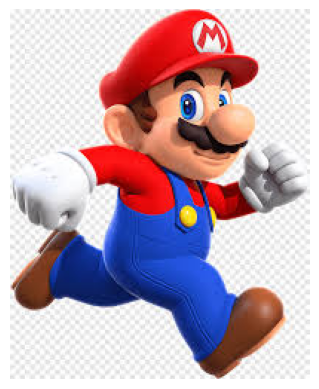

In [237]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUSExMVFhUXFxUYGRgXFRcYFhsfFxoYGBoYHRUYHSggGBolHRgXIjEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGy0mICUtLS0vLS0tLS0tLS0tLS0tLS0tLy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAPkAygMBEQACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAAAQMEBQYHAgj/xABCEAABAgMFBAkCBAUDAwUBAAABAhEAAyEEEjFBUQVCYfAGEyIyUnGBkcGh0QdiseEUIzNjgnKSolOy8TRDc7PCJP/EABsBAQACAwEBAAAAAAAAAAAAAAACBAEDBQYH/8QANhEAAgECBAMFCAICAgMBAAAAAAECAxEEEiExBUFRE2FxkbEGIjKBocHR8ELhFCNSchVD0jP/2gAMAwEAAhEDEQA/AOzEvU0UMBrAA9b294YABSoqT3uHNYAQAAXRVJxVpzT3gAIBF00SMFa819oAU1qaEd3jzSAB63t7wwAAtUVUcRpACAAC6KpOJ0gAal3d8UABrjRu7x5pACkubxooYJ15r7QA1aLSmWDMUoDUEs3LRGUlHc2U6U6kssFdmQ2v07RLvJkpvE5qw9BFWpirbHoMH7PznrVdu4xe0eltpmU61SRoksPYRTnXm+Z6TD8HwtJfAn46lUdpT8eumf71feNeeXUvf4tDbIvJGl2Ttrakpl9XPmoGUyWtT+RIveopFmnUxEdbNrwOJi8Jwmq8rlCMu6SX9eZ0Do70il2oFSAUzk0XKV3k5PqRF6lWVRd/Q8rxDhtTByV9YvaS2ZcCmFX73DmvtG05wgAAujunFWnNPeAAhxdNEjBWvNYAUl6mhGA1gAet7e8MAALVFScRpACAAC6KpOJ0gBOpR4/0gD0X3u9uwAVf+5mcvtg0AA/Ljvc+8AIGancz15wgALNXuZa84wAp/Nju8+0AFX/ua5fbCAAPu97egBAzdnub0AFG/t5DP74vAAfzYbvPtAFXtzbiLMl1sqbkAcPP6xpq1lE6GB4fUxMui6nL9vdIJk9RKlFtMo586jke2weAp0I2ijPTJzxpbOklY8pjBK5vPwz2KiYtU9Ye4bqXGBYEq86pA0cxewdJO82eV9pMdOGXDwdrq78Nkvo79dCys/TDqrdOSovZ1Lutmi4AgqTqCUkkcXFXfZ29qjT2KX/iVUwUJR0na/inqk++z0fyfdHsm0v4m1zDLaXOBKrMoBnCAxlLbFKgCqrs6owpdpN235fg2yw7wmGip6wek10b/lHo1t36eJt9lW4T5YmIDE0mJOIUKKT5ggxZhPMrnn8Vh3QquD16Pqns/miUGancz15wiZXAs1e5lrzjACn82O7z7QAVf+5rl9sIAA+73t6AEDN2e5vQAjytD9YA9M1CXJ3tIAG3Xr4oAAHwo2J8XPzACO/aZgN3Xn4gAJbtM4O7pz8wApDUNXwPh5+IAG3Xr4oAAHoCxG9rACAv2gGA3dYAH3svDzzWAKjpFtpNmQS4K1Dsg7vPxGitVyqyOjw/ASxM9fhOS7W2oqYoqUSSY50pXPdYehGnFRiikmz3jWWzwkwM3H0GAN10I20JNktR3kG8kcZiUpT6Xkxfw07Un3HkeN4V1cfTXKSS8m7+SJPQLYybTJtXWOy7iArEpUkFd4HMi8g8a6woQzKVzHFcW6FWlk3jd/J6W8NGObb2IqxWWzTksZ0qbemKGBK6s+aQUJR5E6mMzh2cU1ujGFxaxlerTl8Mo2Xy++rfiW+wren+OnykK7E1MuejTtJBI9cfWJwmu1a62ZUxeHlLAU6slrFuD+T08tjVO/aZgN3Xn4iycMCW7TODu6c/MAKQ1DV8D4efiABt16+KAAB6AsRnrACAv2gGA3dYAOuHg+n7QAAABk1ScTpAAwZtzI58u+UABq16gHd480gBSS7nv5DLnGAAEu47+Yy5wgBAGe7UHvcOawAMGbc1z5fhAAQCGVRIwOsAKXNVUUMBrAEa321MlCpqiygMP0iE55Vc34ehKtUUInHekW2FTZilqOLxzJybZ7zCUI0YKMTMT57xqZfTGQqMGbjqDAkh2/AkWXRzaxkTgsJvoUCiYnJSVY0NHz99Y3UKvZy7nuc3iuB/y6No6SjrF/b5+qRvtj9JbPIR1UlKwm8pVQN4vmXpQeQi5GvTirK55qvwnG1pZ6jjeyW75fL9ZJ2t0gs1okmTNXdCigmofsqSpsc2b1jMq1KSs2Qw/DMdQqKpTjdq/wBU19zK7LtpTbxaCZSZd4JAE1DJQAEpSxOSQPrFOM/9ufl9j0dfDJ8P/wAe0nK172esnq3tzZ1Oz7WkTO0mdKUvAALT+j8THSVSD2Z4ipg8RT+OEl8mTAS7iqziMucImVhAGe7UHvcOawAMGbc1z5fhAAQDRVEjunWAFLkuqihgNYAXrJnhHPrAHkEEOmiRiNYAHDPuZDPl3zgANGvVB7vDmkAKQXY9/I5c4wAAF2HfzOXOEAIKvdoB3uPNYAHDPuaZ8vxgAJADqqk90aQApBBZVVHA6QBzX8QNu3l9WC4TiRmdfiKFeeZnrOE4TsqeeW7ObWu0uYrM7sWRL8RNqZ7CowSuOyEqWWSPXKFhn5IspVgCQ6j6nCM2JKQ1O2lLTRPa8qD3jKi3sa6mJhD4mRJu01qwoOETVPqyjPiKXwpfMiqtWqj7tE1CPQryxlaf8vI9IWDGcq6Gp1aj/k/Ni32whlj0Mxr1Y7SfmzX9AumE+VPlyVLKpa1BDEvdvFgRpVo2U5OD02KuMowxEG5JZkrprT5PrfzO1ir3aAd7jzWLx5UHDPuaZ8vxgAJADqqk90aQApcFlVUcDkIA9dXM8Q59IA8u9WZt3WAB95q+GAAUri+Xh5+IARm7LuDvac/MADP2XYDe15+IAUl64Nl4ufmAB95q+GAGrTaUykmao0ZyNOHnlEZSUVdmylSlVmoR3ZgtqdMpjKu9lNWzUfM5ekU5V5PY9Lh+E0oWzav6HNNqW8qJJMVzsKy0RTrmQsSUxQuI2NimT7FYSvtKN1HGj/tCxnNclzNpoQk9Um8EiqzRAbjn6RNQbK1bHUqSMhtHb82YaqYc5YCLkMNFb6nm8TxqtU0h7q+v7+3F2TtxUtYvgLScaC8BqDn5GJToprQpQxdS/vu50aRZ0qSFJYggEHgYovQ6KSauiLtmzoRJmTFJBCUkt+g94zBNtIjN5IuXQwditCx3sDUUb24RaqwS1RjBYipJ5ZalgJrxoOqbL8Mejy7TakzSGlSVBSlHBxVKBqSWPk8bKUc0ipja6o0n1ei/J3Yl64Nl4ufmLp5kH3mr4eftAAC1Wd8tIAQBuy7g72kAHUD/AKnPvACl97vbsAFX/uZjL7YNAAPy473PvACBmp3MznzhAAWavcyOfOMAKfzY7vPtABV/7mmX2wgDIfiPbOrkoAxUo3vMD94q4l7I7nBKac5S6HI9oW8mKh6NtIo58yM2NUp2GL8ZsQzjtlVeWEpAJxbLz8ozkdrmurjIQ93n0NDK2YVMZir35cEj/HP1iJTq4upU7kP7W2YV2dcuWO0QAPUgH6PEqbSkmynVi5QaRJ2J0XlyEhRQFL8RS9dE8uYlKpKo7IjCjClG78y3tew0TU3Z8lQQqgUuWpIrQMpuydKgxhwqU/eCqUa3u3LTo50S6qV1apt8JUbigKlJYi9+YEkU0fNhpqVMzubILs1leodJOiAnyTKSpTKUi92XN1KgpTBNSSEsGGJiVGTz6LUhXlGULPRFDtzoSu0mUizSmWglJCv5bIZ3UFMaEJ49rjGyGdtwe5sUqUMtW+mxa9HvwkYhdqnApGKZT+xUoA+wzxjfGg+ZGrxaKVqUb97/AAdNsVilSZaZUtARJT3QkZ8cycamLKikrI49WrOrLNN3ZJP5sd3n2jJrCr/n0y+2EAAfd729ACBm7Pc3oARpWp+v2gD0Q1DVRwOkADVu7/igAFXahHe481gBAQReFEjEa80gAJAF41ScBpzWAFNGBqT3eHNIAGrd3/FAGR/EqxGZZbyRWUp1cXoT7xXxEbpM7HBqyjVcHzXocTnoimek3K+0EDMRlGmehBUsmgjfGCWrOTiMW/hp+f4JewF3bQl83T71/UROprEoQ0lc6Ps3Z6phpQaxTk7F6Ebmr2fsmWnK8dT9o0uTZsehTdLrRaFWiXZbMVpWtICBLUEKWoha1DrCRdAQgnEeuEei4VSoUsO69VXbeVLwX75HneI15zxCoRdrLM/OxO/C7pEq0ibYrSsTuwVoUohSikEIWhZzKSU1NS50Eb8ZRp5FWpKyelu81UZyu4S3RobBJuKXKJe4WD4tiPViI83Uhlm4o7vaZ6cZlX0xtU6TJ62StSLiry1pKOygAgkhfeTeKXAc8Iv8JlRjWfbRurW8NVqUOI9o6S7N6389HoaHYlu69EmfQKWhSVthelli3A9r0IixjMP2GKy+PluithcR2+FzLuf2Zb5XmZIxTrzT2jBgCQBeNUnAac1gBTShqT3TpAA1bu94oAAHomhGJ1gBAQReFEjEawAnXI8P6QAoDC6KpOJ0gAal3d8UABrQ0Aw480gBXc3jRQwTrzX2gABY3hVRxTpzT3gBBSgqDjwgAal3d8UAeJ8hMxJlr7hDPq9Iw0mrMnTnKElKO6OfSdmWSyuoIStTn+YtIUf8QaIHlXUxypT6HpG6lX4nZdF9+pA6QKstplKQuUkqyN0BQ4hQqPeMQm1I1VKXunLbTYDIWZZqMUnMjjxEXHLNqc9Qy6Hizolkg5u4r9REJOSN1OMXudP6HWvrEVxSWPHAv9Yq1C3BWNhIEa0YmYH8WNnqUqVMSFdkhRuPeaqSQ1adn3j0/CYqph7PaM9fBr8nleIz7HGJvTNCyb2vGV/Rkf8AByyqTbLzEBMmY7hmvKSEg6Es7cDpFzGQVPDZesrrwI0ZudRy7jpU+1AWiYrLsg+iRHlcS7VT0WGhmofMqtpmRbLqJkpExCVBYCxeF4Ape6aGijQ6xBSlFtrS5tjRhJe9qXNjlYNSI6yd2yM7RVktCwSpSagxuWaGqZWajLRom2ec7qAdWBHz9Iu0audFKrTyMcAagqDidI2moGpd3fFAAQ9DQDA6wApL9o0UMBrAC9evwfrAHkNu93egAo39vLX74vAAfzYbvPtACl3r38tOcYAA707+en20gBB+XDe594AKN/b+v3xgBq1kiWo5XVXPY/Ea6vwPwNtFJ1I36oxyJIKASHB1jjs9E371jJW+i1ACgJiYZQ7est9AUMUv+4jdCRUqw6GW/hUqNFFJ9wfSN2drc1Rpp6p2OydENhizyQDUntEnEk8j2ivLV3LKdkXlqtqZSbxHtjELEct9zkNu6Wzl2ibeJmSjMUpKFKKSjIBC01RQClUnEpJjsYec6FpU3Z28/Fczj4inTrXhUV1c1/RXpZYJSSgFUhSi6jMSpRUdetDgjR2HCI4nE4iq80tf3oZo4ejFWWiGp3SSVNWtEtYOnaBJBNVHifmOa4SvmkdaMoZckWT9l2kJLRiZKmzU2O0UjUpWFSFyb14MSc7lfJYl7NWSo3cW+RFjCP32V8UvdJw/Lhvc+8dAoBRv7f1++MABbe7u7z5QApfe7+7ACtM1H0gDyC9RQDFOsAD72XhgBTTGr4Dw8/EADN2Xcne05+YAGfsuxG9rz8QACtRRsR4ufmAEfey8MACqBzUHd0eMNXVjKdndGTEi4pdnVQgug6gxyJwcXlZ6CNTPFVY/MzvSeyFEwFmCkv6ih+PeMxVjKkpIoRKx4mJohJ3GrD0OlqnJnXiEg3ijJxh6Zt8UiXaO1iKp63Rvkz2DRqbN6SKrb850pHn8QhuRqaI45t2zLkTlKINxRcKyD5HSOjSmpK3M5NaDjK/I8y9opIY1jZY13EtE0ylotEvdLKGoOXOZEYlHMrMKTi1JG+2XtBM1CVoLg8t5xQlGzszpwkpK6NJs7aJFDGiUTfGXJlzJtwOBiFmSypmn2XZyE1LKNX4aR0sLScVd7s42LqqcrR2RMFaijYjxc/MWioD72XhgAJapqDgNIAVm7JLk4K0gBeoPj+p+8AIXNVUUMBrAA5d9/TLluMAAo92pPe4c1gBEp3RVBxOb8tAHvqXF0nsjDXnGM2A3apgQkzJhCUoq79n1OWURk1FXZOnTlUkowV2+RnLZ05saDe6y+sZISSn3/eK8sVTR1qPAMbU/jbxZTT/xOlpJMuQtROalAD2AP6xpeOXJHSp+y1R/HUS8EUO0+nRmgfyEgpLhV8uOGFRFeriO05HSw3s/Gjf/AGOz5WBXSqXOQETUlJGBxAPmPkRrVQhV4NUjdw1+hV2q1BwEqCicG10843qWZXOTWoyou0014l9s6cyA+MQZGLuOKtTGMGb2Pa0iYGJ8jGL2MtKSIk3o+F0JS3H7RntCPZmL6V9DgikkJCxUAAJvBq0izSrvmU62GVvdWplU2G0F0GRM0PZLf7sPrFrtIdSn2U9rETZ21J1mUerU1e0lQdJIpUZHyYxmUIzWpCFSVN6GjldPpoDGRLJ1vKb/AG/vGl4ZdSysXLobLodsbaG0RLnTVpkWQntdW6VKAOWKmLEPeauBzlTpwUnbdEKteo4q/M7Oi6f5b9lODY+UWCkQ7btIJLYqScsB58YyB+y2wHtLI84Ak4OpFXxgDyAAGTVJxOkYAnVS/EefSAPRcFlVUe6dIAKu2/mcuW4QA4iWNWObZxmwHEygAzUjAIto2ahVUuhWqC3uMD7RLMzFkR0z1yzcnMUmgWB2TwIyPCM6MK61Rzf8QeiAkf8A9MgfyVHtoGEsnAjRBOWROhDcnFYbJ70dvQ91wLjDxC7Cs/fWz/5Lv719V374m7FM9JcVoAS7AXPNzPSBl2asxZ1snpZSVlTbpLv64vG2FTlI42O4XCaz0FaXTky42ZtdM5LgscwcRGxrKzzl76Pcs7PaCIWuY2LGRbYg4k1MftVglWi6Vg3k4KSWUPIxhScQ4qQzM2ckC6mYH0mBj/vSPiMqTMOJU2jojLmKvLkSlHW8G+/0iarSWzNbowbu0W+yuh0klpkiSpmCEhAIS2bkBvQRhTnJ2i2RmqcFdpaGx2rN/hrGoy2AAujzOfp8R0qVPJGxyKlTtJ5mUPRDbV7sqNRj942x2Nc9y+6S2cCX/EIFRdCgM3ISFeYJHp5RkiVFimkEKJc/QeQjINNI2tLAF4gGMAmHBx3TUjWAPHWS/CefWMAcRLxDuDnpADt0M0ZMHi7dDIAHnGQekk5wB6BjAEmygtJSoODjGDJWCWGXZ5ovJIIrvJVSv1EJJSVmTpzlTmpwdmtUcL27YzZrRNkEvcUQDqDVJ8ykg+scOpBwk4n1DCYpYihGsua+vP6lbMnxFI3SmkgRaIzYwp3HkzowTuOO8YMorrZZFhXWySUrzbP0w94s4etGLtUV0cbinDHXTqUdJ+v7+6kmwdKVJA69BAwvgFvIjIx1qvC2oqpS1i9jxMOIWk6dVWktH4mksm0ETAClQI4RzpQa0ZdjUT1RZ2a2FMapRN0Z2LyzW1CwygD5xqaaNm+xNs8iW/ZQH94xq9CMm0rtmlsFjuhzRXNBHTw9DIrvc42Ir9o7LYq+nNbHMJ7JoAnWv/n2iyV0clsc9ctQUklx7+XEQJMuttdOJwkiQUEXii8o5JcKoM3YeheMmEh/Y+1lT6JLAUKsSf8ATl68gYaNpsCbLl4APmo1UfNRrAwaVFqSqgNYAQzz/wBPn2jAIwtIBUN0Fh7A/IjbFJogxxFqBwMZyi57E2FhcUgFny4mItGbj6IizJ6vRgFTtybdCF6Kb0P7gQRk5f066PWu020rkSFFJRLBWWSglvEpgaNFGvQc53R6fhnE6eHwqhOXNmc270C2jIAJk3wznqzfI/xFfpEP8dx5Fj/y0KzspW8dDLJtBSWUCCMQY1OBep4trclSrTGtwL9PEKRMkzo1tFuM7ktCnjBtuRFywmYxDpmCoODj70+seu9m8XmUsPPxXhz+vqfOvbDAdnWjiofy0fivyvQjz9nqluuQpSTjdHx9jFzi/C4um61Pdbru/o43CsZ/sVGps9n3/wB+o5Zukk9MsqNxZSxLhiU51BABzwyMeWpU4SmoydrnoMSp0oZoq5oOj/S6WZjTpBUjG9LWxbLsqGfmI11YKlJxmW8HhJYyKdFpaX1X0Ok7E6W7NKggLEkqw6wFJJ0v1T9Y3UZ0f4795Q4hw3HUf/01Xdt+RdtfiNYZBKTMM1ScBKDj1UaaRtlXittSvS4XWmrytFd+/kZDpH0oNuRKmoBSGLId63ikg8S0bISzRuVK9Lsqjhe9ir2RdKwSHGh+REzUyZ0xkS1FJAPWKDqrRu6mjY01yGsZMIodlW1UhV0B3NND56NGCT1OhbJlAkLmLvO3ZT2Uj1xP08oETebPXKSkXEpT5ACBgk3lZYQMGO6UWlSOtKaB5Sx/klST/wDXBMyR9k7TaXLKj3g8TUtDDRd2XaAVnDMYsWcqZBsWH+tiJk8KtEYMkTaFk61DEsApJOtDhAE2gAJqk4DSMAU0oqqjgdIA+Y9uJK5k0t2+vnkk/mmKIc44ERo4h/rxMk+70R6jhVN1sFDJvr6sgosUwZpPkT9opOpA6lPA4lc4/Jv0t9yZIQRjGmTTOlRhOO5YSY1lxHjaI7APhUk+/Z+Y6XCKvZ4yD6u3np6nC9paHa8On1jaXk9fpclJVnH0vRrU+S3ad0RJ1kSVEsz6YEHUe49I+ZY+hLB4mVLkndeD2/B9dwKpcVwUK70k1aX/AGWjuu/fwZD2Ynq0lGJSopJ+qfpX1jdxCmqlGniY81Z+K/K9CjwCbw9atgp7wd13p/v1JVslCYgpzy88o5UJZXc9JiKSr03Dy8TOolKOAPxF1yijy1KlVkkrM0fQza3UzhLVg7pOhzbnWLFCfI5XE8O4yzdNGdQ21YETZX8XKA6xIeYBvp8beIZnMeUWTkFQkSp4CphIKRUpIdhVqiAM/abNeN5NGLjP0fODMpljY7TOYJTjlnAwbfotsy0Ehc1ZCTgNf2gDZiSvxRgwU3S2zGbZZvZ7YAUBmQmp+hMAc7M5rPIJy60H0Woj6NGTJ62PtNQXU0gDcWC3uMYyYHbTtIJDqIA4xgEaybWSs9kvAGgsKjcfEvQa5fMAPAt2hUnEaRgEe2zRLlLIqLqiTpSNlKOaaj3kZOybPm/aReao4OT+ucdrifDFikpRdpLyfc/z+rbwji7wMnGSvB79U+q+6/X5QSMf2948ZiMNVoSy1ItP926/I+j4LG0cTDPSkmvTxW6+Y68Vy9celGMEkz1aQ6FDgY6fCsFWxFeMoLSLTb5K2tvF9PscPj/EMPh8JOnUfvTi0o83fS/gub+5c9GdgTLUl0kJQkAFRBNWBYAYlm0xEeo417R4fhUYqcXKUtkunVt7fVnzHDYKeIu1ouom39gzLMRfYpL3VpwJ8JB7po/vjVuTGthvaOPaYaWSpBWcZdOWq5XvrZ76pc/RcJ4rPguanWi5U5O94vVO1no+qtzWxSSdmqmTghBTem0F4sm8nCrYkAJieJwE8Hwuoq2rj7+mtkrJ/Rtm2XGaFTi8cRRTyuOV6Wbdny8Ul+ojLKkKKFgpUklKgcQRQiPMq0oqUdme4pYiMkmmQZi6nzjaloU6lRKTK5a+1eGrj0wixHQ49a1RtvmdK6CdLzRCj2h9R5ZiLkKikefxOFlSd1sPbUswTOV1P9NRBCRk7Ep4gGg4RsKpodmdCZy0pUtSUAgG7Urb/S3zGAa3ZfRqRIAIT1is72X+I+XgYLkBhdFUnE6QAnUo8f1EAKoeLvbukAYvpzsZKZKVS0NdWorAwF9qgZCg94GTBWNRdfApPu4+IA2OyptBGQe+lPR4TJKlqWbykjq0uAlJOZDVOJf7QCGujWzurbNRpyIA6DLRdASO+BT5+YwYPQfd729AGb6cbRTLsxSg9/Lyrn6R0uGUc9XNyRoxErRscHtJ7R849EzniIW3PH94jKEZrLNJro9SVOpOnLNTbT6p2f0H0qGYH1H0FI59TgmCqO+S3g3/AGjsUfaTiNJWzqX/AGSfpZjySNP1+TGafAcDF3yt+Lf2sSq+1HEpq2dR8Ir73PU5XZV/pP6R1lGMKeWKsktlscKdSdSeebbb3bd2bz8NNpBMoy37SVP7gEFvp6R8n9roVqPEu26xjl6aJL1TPRcPtLDJd7v5/gtOnq0/wi3Z70u753g//G9Gn2JjN8XvHbLK/hb/AOrEeJ2/xnfqvX8HNZc24UTR/wC3MQv2P7x9ZxdFVqbpPaScfNNfc4FKeR5uln5O5p+mvQi1Wm0/xFkQlaFoSVC+lJvBw7KI3QmPlPB6VR4RKS2bXhZ/m57nD4+NH3ZSsU9i/CvaM0m+JcoDG8sH6IeOrGjLoSq8Tovm34L8mq2R+DtnSyrRPXMAxCBcHlVyfpG1UOrKE+KP+EfPU2uyeitis1ZVnlpGSiLy/wDcpzrG2NOMdkUquKq1filp05E2VsmQhV7qZYWe6QkfpgMomVybV/7n0+2EAAfd729ACBm7Pc3oAT+Vx+sAeiGoak4K0gBCh+wcc1HPhAFTa+jVnmJWkSwgnFQFXGBAw/8AMAY/bNmNhlhRWlalFkIrfVxZsK+8RlNRNkKbmUdp6Udt5y2IHdxA4UcQzpbmeyk9jQ9B+lFnnTzLreZkKIZJJp5vBVE9jEqUkrs6E27n4okawAegoRidYA5T+IW1hMmKAoE0HpT9XMeo4fQ7Oim92c6vPNI5ssuYts0iPz6iBgeTE0YHUmJpmD0sBQKTgQR7xmSzJphOzuM2S1TZKwylPglaQ9PCtOfPGOTjeH0sXFUsQrrlJb+DLdDEzo3lTfinsWVs2pOnN1qnAwGA82H7xs4ZwnDcPi1QjZvdvVv+u5GvEYmpXazvbktgs1mVNCpaA61AhI/Nu/VovV5Wg5dDVTV3Y7vsCzqRZpEpQKVplS7xOL3QVA+pI9I8S4QhKShs5Sfm2/udi7aV+iLAVwo2P5ufmAEBftMwG7rz8QAEt2iHB3dOfmAFIahq+B8PPxAA27n4v3gAAegoRidYAQF+0AwGKdYATr0+D6D7QAoAFE1ScTpAAwa7ua58vAEPbG0USJKp04shA7LYq0HmafWIyllVycIObsji/SHb65kxU+b/AFV9xOUtJwAGSiD6A6ktqTtq9y043WVbepj7ROKjEoQlUkoxWrEpKCuxpNpKKIJB1BaPS4XDQwy01lzf2Xd6nGrVpVnrt0O2fhz00lTpCbPPm3ZgcOs1UMQyjnkxili8HUu6kFp3fg2U6sfhbNxbZl2WonBKSUnVgWjn045pqPVm+TsmzgG37XeJOpMeztljY5L1ZnwuNOYzYeScfIfqYmiIqRpT9PaMpdAOoUfOJpmBwH0iVzArxkwF/wBPOkYuZsX/AEJS9rkj86f1ivi3ajJ9z9DZR+JHdGDXdzI8+seOOsBr3qN3ePNIAUku57+Q59YAASC4qs4jTmkAIA1E1B73DmsADBru5rny8ABANFUSO6dYAUuaqooYDWAF62Z4Rz6wB5DM6aJ3hrABRn3Mhny7wBzr8ULQL0smaFJReuympeoxVqAMRqAKuqK9Sa3LlCErWta5y+0S75KlEkmpJMVnUZcVJFXbmQbqc8ftHqsFhXh6alNe+/ounj18uRwMVWVWdo/Cvr3/AIIqBF2KKzJcpbRYi7Gpo2XRnpbaQU2YzSqUoFLKqzggMThVveIVKFKbz5feWt/3clGclpfQzu1JtYs1Hoa1uVqDFdE2PoPPkAfmNif75EWewqJXMDiVxNMwOJVEkyI4EHSJWYuKmUvIP5Y+wxjDvEKzNj+Flg6y1dYUumUCon6D1eOZxKrlotddC1h43kdicM+5kM+XePNHQA0a9V+7w5pACl3Y9/I5c4wAB3Yd/M5c4QAgzu0A73HmsAFGfc0z5eAAsA6qp3RpACl3ZVVZHKAFuTPEOfSAEd6szbusAZHpf0nEp0ILFu0RlwHGKlWpmeWO3Nl+hQUVnmtXsvuzkm0reqau+ryA0GkaJO5birFfMmZc8/aOtwXCqrW7SW0dfny8t/I5/EsQ6dPIt5enP8FNalusmPR1JXmziRVkeUmMJmWOJVE0yNiTYbQUKvjFJSR5gv8AAjZB7kZIk7Wa8SO6ajyNREZTujKjqV0tVYjGWplomy/1+zEebAH0MWEa2PobhG1WIO4+gjQe0bFYiOpVEkzA4IkD0IyYNL0V6VLsqy6QtCiL1GUW/Nn6vFDGcPhiI6OzW3TyLFLEOD1Os7M2jLnoE+UbyTS7mPPj948rXoTozyTWp04TU1dEvDi//Hn4jSSEZuy7vvacOTnAAz9l2be1588oAHeuDZeLn5gBX3m/w5+0ADtVnfd0gBGbsu772kAHUf3OfeAM90x6Qfw6Gp1qgWr3R4v19or1pte7HdlvDUk/fnsvqcX2jtAzVEuW/XjFV2Ssi+rt5mQ3iJIgWiaylcPtHq+C2jhm+9nnuJNyr27kVhMWr3K1hQYkmYFvRm4sekraJKVjFiTZbQCOrV/if/z65cY1OepJIYnJY8Ylm5iw5JnZGN8J3NbiTETfXjn6p3vMVjcpfv5X3RraHUTaPlqKj3y9Y2qfMi4jyVxsTI2HUriSZgeQuJpmB4RK5g1HQHbhs9oCCexM7JfAHIxzeJ4VVqTa3WqLGGqZJW5M68M7uO9w5rHkTqiBmYdzM584QAFmY9zI584wApyvY7vHmkAFXff0y5aAAPu97eEAIGbs9zeMAJdl6n6/aAON/ihZpkmeozF31TjeByCAwSnzcF/9KeMVZxtd9S/SmpJJbIxKVRXZZTHUmIk0U+0lds8Wj0HC6j7Fw7zi8Qh/tzER46NylYV4zcxYHjNxYCYXFhtUa2ySJEq0XqLPko/P3gpNCws6SpJqGzGh4g5xNT5ow4gidG6NUg4kiXaavnqKH3z9XjfGonqa3EkS5vIp/wAcPYjyjYpfv9fjyItEhE3n75g+cbozIOJJlrjamQJMtUTuD2FMXGIjJg7f0b2uifZ5SgtIWUgKBULxIoaYnB/WPG4zDSpVZJLQ69KopRTH9r7ak2dIXMVdSaBG8o8BphWKUpKKuyxCDm7Iys38QXPYki7kFH7RSni2nojoQwEWtWT9n9N0LLTZd3RQLt6GMwxl37yFTh2l4vzNRZ5wWAUqCicFjDyi5GSkro504ODtIcAeiaKGJ1jJEQEEOKJGI1gBOul+H9IAwv4q9GV2iSmbJdapQLgVJSa0bMVpxjXUjfU30JpaM4qlZSWIaKsol1SHhNpEMpPMazoL+HyrZenWi8iSxuswWs4dlxgMy2Tatew05U3eJRxOWSs9zeWH8LbBLQQpC5qj4lsU+QQ31fGLksVNvTQpqCRQ7d/BuWa2WeR+WYHA/wA04e0bYYz/AJIi6XQwe1/w/t9ncqkKWkb0vtp/4u3rFmNenLZmpwaM3Msy0lilQPlG0iImzLOCSfSBkvtldBLfP7lnWBqoXR7qaNUqsI7skoNm82D+Ec1IAn2hN04y0Arb1LXDxGkVp4qP8UbFTfMh9JPwimoJVZFiajwlkqHB+6fceUTp4uL+LQjKm+RzvaOyp0hV2bLWhWikkfrFuM7q6NbiRQsiNkajIuJNs0wnzy+x4HBuMXINs0yVifJX7YjyPJHpFmDNLRMlKjeiI9GQNC0lAKwSCKiueUaq1SNOlKcuSJU4uUlFElVvnWld+dMK1MA50HDKPAV5Z5M9RQjkiTpQakUakDoU5k4SCzxqyM2qaLzojt8ypglLP8tZAPDQxvw9VxdiriqKnG/M6aQ/ZNAMDrHTOKBL9o0IwGsAL16vB9DAHkNu93egCg2v0NsVoPWTJID7yDdUTxbGr4iIuCZsjVlEZ2d0DsEk3upveG+Sr3GGmIjCpxRl1ps0qUswYBQHZbBv01iZqFDvTv56c4QAg/Lhvc+8AFG/J9fvjADc2QhX9RKVJ3XAJjKbWwElWVCNxCV7t1IH6CDbe4Hqv/cz0+2DRgAPy473PvACBmp3M9ecIAYtljlTU3ZyErlZBSQf19YlGTi7pmGrnKvxI/D+TIlG02dJSx7SHJSxwUHqKsG4xfwtdyllkaqkEldHLkUMdimypJE6Wr7+/e+rHyMWYv8Af3vNLJcpUb0yDHlzKRNswMT6hKeL+3/mOJxytloRgv5P6L+7HQ4dTzVHJ8vv+skSZl0UjyMpWPQRjcmWefWNDZYRokWsdW0SurEbO5STJ7TEt4h+sQiveNkn7tjvEtYKUlRdJAu+0dOLTSaOFOLjJpnsvvd/diREX+bw+kAeQXqKAYp1gAel5uz4f2gANKmr4Dw8/EALdbsmpOCtPXnGAEuv2RQjFWvrzhAAK1FGxHi5+YAHpebs+H9oACWqQ4OA0gBSG7JqTgrSABt3e8X7wAAPhRsfzc/MAIC/aAYDd19PX6QAEt2iHBwTp6c4wAxtCxpmS1yZnaExJT/pej/ofSJQk4yUkYaurHzPt7ZyrPPXKWGUhRB9I9FTmmk0UZLUYkzPVstdR6j9BFqMv31NTRLlL510Mb4s1NDpXE7mDyV1+keS45XzYjIv4r6vX0sd7hlK1LM+b/fuKFRwmdZD0uZESRI/jGEBc1XQno2qasT5oLYoSf8AvPx76RFpyeSJlzVOOeR1ySgISneDBhpHThBQioo4s5ucnJjhDdk1JwVpEyAvUK8Z9z94AQl6qooYDWABy97f0gAFO7UnvcOawAgAa6O4cTpzSAAgEMaIGB15rACmveoR3ePNIAHL3t/SAAEiqaqOI0gBAAAyapOJ0gAYNd3Mjz6wAGveoB3ePNIAUkvePfGA59YAASC4qs4jTmkAIA1E1B73DmsAcv8Axg6M3ki2Sg4DJmfoFfoPQax08DW/g/kaKsOZyBKmMdSMrMqtEuUvBvT9Sn5HqIsRfT97vuvI1tD6V5xKpWjTg6ktkrmIU3OSit2KmPA1asqs5Tlu3c9XTgoRUVyC9GomHWwsMxqOiPRtU9aVLSSH7KNeJ4cIg228sdzYkorNPY7Vs2xCUkAd/SL1Ciqa7zl4jEOrLuJYLVTVRxGkbyuIAAGTVJxOkAJ1UvxH6faAPRd2VVW6dIAKu2/mcuWbKABOd2hHe481gBAQzjuZjPnCAAkM57mQz5xgBTleqT3eHNIAKu2/rly0AAfBNFbx1gBAzOmid4QAUZ9zIZ8u8AByvVB7vDmkAKQXY9/I5c4wAB3Yd/M5c4QAgzu0A73HmsAN2mQmYhSVB5SgUqSc3pGYycXdGGrnzr046NqsdoVLqUHtSzqk4etCD5GO9QqqpFNFSccrKKUpqHniOMXIuy1ND7iQgvU/s+seb4nj+2fZw+Fb9G/x99Ts4LC9ms8t/RfkcJjjnREFSwqYzYwa3on0UXOUFFLsQ5PcT5nM8IwlKbtEk5RpLNM7JsnZCLMkJAdRbtZv8B2pFylRjTWm5zq1eVV67dCwq7b+uXLcI2mgA+CaK3jrACBmdNEZiAEvy9Dz6wArN2cX3tIAG3X/AM+fvABjTBs/Fz8wAO/aZm3defLKAB27TO+7pz5ZwAM1MXz8PPxAA26/+fP3gAZ6Ozb2sADv2mZt3WAB95v8OftnAC4cX/48/EAIzdl3fe04cnOABn7Ls29rz55QAO9cGy8XPzACvvN/hz9oAwf4qdG5tplJnSWUqWFXkZhONPKtIv4TFxoxakjVUpObVjhi5JSe1FXE4+VW8Y6L1LdDCqnq9x+XMjmNF5Mk2eQqYbqR65CMaLckk5aI6l0D6CyTL6+deXhdTVN7XCrYYHWNtKCmrs0V6sqTyxsdIs0hMpICEAJ8ADAcfp9YspJKyKUpOTuxxmpi+fh5+IyRBt1/8+fvAAz0wbe1gAd+0zNu6wAvX/2+faAEDN2e7vGACjNuZHPl3gAOV6g3ePNIAUu7nv5DLnGAAO7jv5jLnCAEGd2o3uHNYAKM25rny8ABZu13d0wApfFVFbogAq77+Yy5ZoAE53ane4c1gBAzMO5mc+cIACzMe5kc+cYAU5XqHd480gAq77+mXLQAB92qt4QByvpp+GalrVOsTKSXJlEhJBxN0qYEcCzcY1Sp9CzCvykc8ndHp0uZ1UxCkrcC6zqL4MA7vwjTLTQsxs1fkdV6GdAxLSmZak3c0ysSeKyP+33zEZhQu7zNdTFWWWn5nQUhmoAoBkgYN+msWiiKHdx38xlzhACDO7Ub3DmsAFGbc1z5eAAtvUTumAFLu6u/kMoA9Xpmg+n3gBuR3Fc5QAH+kPP5MALPwRzpAHqb/UT5feACV/UV5faAPMjBfr8wAg/pHz+YALR3E85QB7n99MACf6p8vgQAlnxXzrAHmX/TV5/aACb/AE0+f3gD1aO8j0/UQAp/qjy+IALP31c5wB4kf01c5QBTzf8A1Uv/AOFX/cqI/wAjZ/6/mXNowRzpEjWepn9RPl94AJX9RXl9oA8SO6v1+YAB/S9fmACf3Een6QB7n/1EwBKgD//Z
"""  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

In [238]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.
import cv2
arr=np.array(img)
print(arr.shape)
arr2=cv2.cvtColor(arr,cv2.COLOR_RGB2GRAY)

(249, 202, 3)


In [239]:
def gray_histogram(gray_img):
  histogram = np.zeros(256, dtype=np.int64)
  rows,columns=gray_img.shape
  for i in range(rows):
    for j in range(columns):
      intensity=gray_img[i,j]
      histogram[intensity]=histogram[intensity]+1
  return plt.plot(histogram)

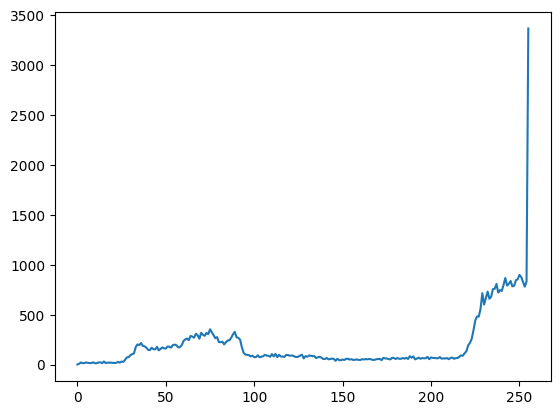

In [240]:
gray_histogram(arr2)

In [241]:
def rgb_histogram(rgb_img):
  histogram1 = np.zeros(256, dtype=np.int64)
  histogram2 = np.zeros(256, dtype=np.int64)
  histogram3 = np.zeros(256, dtype=np.int64)

  rows,columns,color=rgb_img.shape
  for i in range(rows):
    for j in range(columns):
        intensity_r=rgb_img[i,j,0]
        histogram1[intensity_r]=histogram1[intensity_r]+1
        intensity_g=rgb_img[i,j,1]
        histogram2[intensity_g]=histogram2[intensity_g]+1
        intensity_b=rgb_img[i,j,2]
        histogram3[intensity_b]=histogram3[intensity_b]+1
  plt.plot(histogram1, color='red', label='RED')
  plt.plot(histogram2, color='green', label='GREEN')
  plt.plot(histogram3, color='blue', label='BLUE')

  plt.title("RGB Histogram")
  plt.legend()
  plt.show()

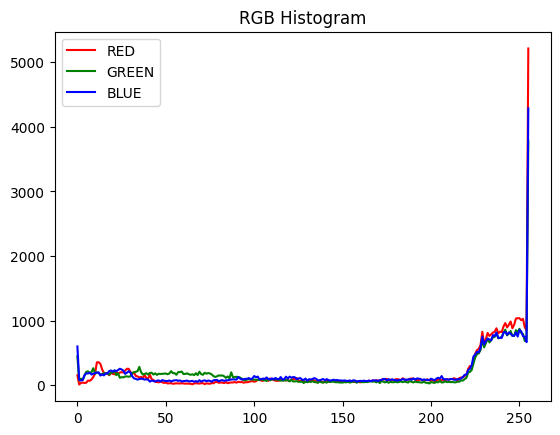

In [242]:
rgb_histogram(arr)

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [243]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [244]:
def rgb_to_hsv(arr):
  rows,columns,color=arr.shape
  hsv_arr = np.zeros((rows, columns, 3), dtype=np.float64)
  for i in range(rows):
    for j in range(columns):
      r_norm=arr[i,j,0]/255
      g_norm=arr[i,j,1]/255
      b_norm=arr[i,j,2]/255
      cmax=max(r_norm,g_norm,b_norm)
      cmin=min(r_norm,g_norm,b_norm)
      delta=cmax-cmin
      if delta==0:
        hue=0
      elif delta>0:
        if cmax==r_norm:
          hue=60*(((g_norm-b_norm)/delta)%6)
        elif cmax==g_norm:
          hue=60*(((b_norm-r_norm)/delta)+2)
        elif cmax==b_norm:
          hue=60*(((r_norm-g_norm)/delta)+4)

      if cmax==0:
        sat=0
      else:
        sat_norm=delta/cmax
        sat=sat_norm*255

      v=cmax*255

      hsv_arr[i,j,0]=hue/2.0
      hsv_arr[i,j,1]=sat
      hsv_arr[i,j,2]=v

  hsv_arr=np.clip(hsv_arr,0,255).astype(np.uint8)
  return hsv_arr

array([[[  0,   0, 253],
        [  0,   0, 253],
        [  0,   0, 249],
        ...,
        [  0,   0, 222],
        [  0,   0, 231],
        [  0,   0, 231]],

       [[  0,   0, 253],
        [  0,   0, 255],
        [  0,   0, 253],
        ...,
        [  0,   0, 225],
        [  0,   0, 232],
        [  0,   0, 232]],

       [[  0,   0, 248],
        [  0,   0, 253],
        [  0,   0, 253],
        ...,
        [  0,   0, 234],
        [  0,   0, 227],
        [  0,   0, 227]],

       ...,

       [[  0,   0, 234],
        [  0,   0, 233],
        [  0,   0, 235],
        ...,
        [  0,   0, 249],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 222],
        [  0,   0, 221],
        [  0,   0, 229],
        ...,
        [  0,   0, 254],
        [  0,   0, 253],
        [  0,   0, 253]],

       [[  0,   0, 229],
        [  0,   0, 233],
        [  0,   0, 228],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]], dtype=uint8)
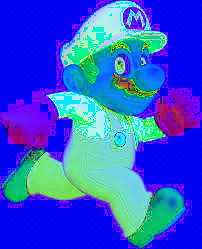

In [245]:
rgb_to_hsv(arr)

(np.float64(-0.5), np.float64(201.5), np.float64(248.5), np.float64(-0.5))

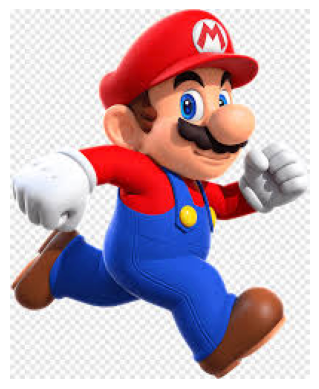

In [246]:
rgb_back=cv2.cvtColor(rgb_to_hsv(arr),cv2.COLOR_HSV2RGB)
plt.imshow(rgb_back)
plt.axis('off')

#verified

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [247]:
def beauty(img):
  arrbad=np.array(img)
  arr = arrbad.astype(np.int16)
  arr = np.clip(arr -25, 0, 255)   #decreasing the brightness
  arr = np.clip(arr*2.3, 0, 255)  #increasing the constrast
  arr = arr.astype(np.uint8)
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.imshow(arrbad)
  plt.title("Original Image")
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(arr)
  plt.title("Final Image")
  plt.axis('off')
  plt.show()

# this is good for aesthetic images where the background needs to avoiding and the foreground is less bright but needs to be focussed

In [248]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.
import base64
with open("decor.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAgEASABIAAD/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAAAGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAAABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAAAIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAAAAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENvcHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNj

(np.float64(-0.5), np.float64(2999.5), np.float64(1999.5), np.float64(-0.5))

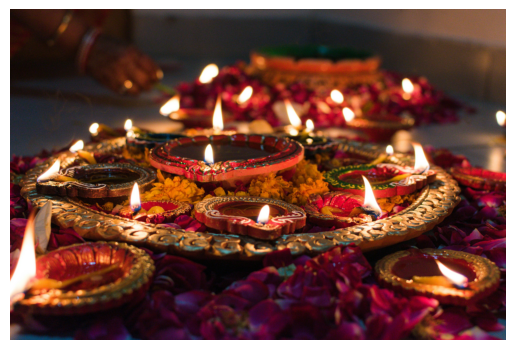

In [249]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """/9j/4AAQSkZJRgABAgEASABIAAD/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAAAGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAAABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAAAIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAAAAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENvcHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcgQ29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBWaWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZWiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAo8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAoAC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCfAKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEfASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJAdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKiAqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOuA7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTwBP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZqBnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgfCDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woRCicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxDDFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFtEYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRqFIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReuF9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8THz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneierJ9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxuLKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGCMbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbpNyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTykPOM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kdSWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/dUCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5sXr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5rbsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/lgEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokziZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLjk02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adup+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJLssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2Pvgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO6070DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH/Jj9Kf26/kv+3P9t////2wBDAAYEBAUEBAYFBQUGBgYHCQ4JCQgICRINDQoOFRIWFhUSFBQXGiEcFxgfGRQUHScdHyIjJSUlFhwpLCgkKyEkJST/2wBDAQYGBgkICREJCREkGBQYJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCT/wgARCAfQC7gDASIAAhEBAxEB/8QAHAAAAgMBAQEBAAAAAAAAAAAAAQIAAwQFBgcI/8QAGgEAAwEBAQEAAAAAAAAAAAAAAAECAwQFBv/aAAwDAQACEQMRAAAB+bwTPZ4sTZkiGKltihTaKw2AZEIgzBAYEDMDJQrAYiIMBpySIgMFFhbIJCCRAVwxVYE1wy5MhlFHC0RXR2JA00EUtFgi6xBKkCJBQEDgkCERjRYqJEKaApiGOZJCSISBIUCQsUFXIBAhYhZbdRYPRdRbLuetql3qNFgWNOUiHiRliiIaLAcLBtFjTRSJgIMlQJihExrjpyhFCjIaLEmiRtwrNQqG2kCTRYMlSEIAGCAYIkSsY4ETMAE6yMKyIkBZAGCCQRikoERIwMyQAIRBGAsEMkIkKkBpFZEQGJQQugDBQNEKDGpDAEhbVpEhDGQGIkBZICAIIxJEoDGQQikEHDABALUgjUkCCRBwLEpAAMETkEYYClIJQZImyyIZDGzAUAwpgiMjLAIkQZAyEFEgYQkI4RGQiJlliDJBxlIAiDaSSSSBDJRJJIYC3IGCGRURDKhUjMBTAZWMyunGUojBk5IWwYUhIU1hILIWSAokMAGMORWSMhKBkQRCEiuOAgCRAMIQRC3JClBCOEFgkjCRJAQWAghJIEkIoJJIRKZgLQMiJCAMgAyQJDKYhMKAymCALwUU9PI0BVEo4zFLCYJCQUyVI2KkZgiGgKcBjIylDAFtgCgxSEkjIYU1jhkkKFDqSqsrSkuQksgKrq6rRg2oMAExEgIQwhJAkYIMBoJYQ2RCnIpYZIW0V0oREpDCBIWoCAgIEJI0oIaBVge2mwND02BoamwHKSpsNbA4QjcKAc1Fy5SJuazRYEiHKQGKhjBIJ5VBWmoDtNJFaagO01EVhrCdhrjLhXE7JWWmiwHiBDxDSJSDaJBOVVOwooWxAy0VkGiERaoptFgniRjhIx4sQSIwxYJ4sTMEY0WSMFlJwJNGCNGAAYpBgsBoCKCAHAjcIiUKxhZIhjWRsBGmixN5XBMUjThYNoqg5SJtFjlgIMxY0wEQQADAAZEgEANMVZEEDTQFMEFBEgQyNiGJyEARIEKwGkA4QQBkCSRBEg2EIhJEzAzJAE2ggmkA4Qw5IEjJBmBkSSFQwSmilsssGYGkkgGwaIjApsIWGSKoYUKZAjLAIkHAwYYpRCIkYGHISAMI4ZEQEprDBQiDMhCQgISqZkjmSRMiRswQRhAzIAhkRJIKSQDJG5JAghCQqJoQnCIyAkUKMmYC0DImA0Z8+InVxlkINFIyywbFYm0BQxRhkqU2IickjcZSEZWkhEHDIyEFEII4RAYgIYSBFZRITdWddl7Q88vRXnq0Z7lEsWpUNG1jRCxgMyFAkIKZAEkBYysgMAQhuMpVFlIiTJkQxzBCISAcMAgCGRSHIgINZTYK22lmXvSwXSsisKQHiGm0UEvEgWBCDhYN4pE8QBYEDLFUJMFRlkrDVsqg7jSyLpUW7DXFNhrg7DUWWhIiyVwdkrLGiATmsBaqEHlcStiK1dKwOw1wdioGWSuCslcRaqRlhqKHiFpzXB2RA3ZEhNirAc1QdgUJWSsDslZasFbJsEArDUwMayU8rInlcCwVkVkqLHiRN4gFbKiDmog4SNOFiLAqjtFcBzWGrJXAsCRN4sBojAVAE0WJsArHiwlirNkoQJWMaCA0glllLCIZatAyEEJBBwyIEhaDCS5JByEAQSAgI4QQkkCGSXDIEgNBEMgYQZgZOCMOFSEMicMKQYQcJiZkKcIZMGEDAUSSFQkNCGJwGJQQ0SSJgwAxEQWVgkDJiQgQYiSFOSRgMIBhESCAZJThgAgySERkkkkhjJJKIRJIyxBKmgyBEMAGQMkIBlhkMVmQGMDQCMhASEfz6SdXIIYEgiTxSMyQbQFNopGzIZGghTRYk4gG0kbJECMCnCCnAY0WUy4QWSSAFkFdYtrye1LcrWnXkLz57qrEDC4AdW0LRJYYABg4DEQSNAMAWSNiSMBBHGhlEhkAkEQiBARQVklEGMUMrIsJKQikz1uh3rsZYyMDEECVNIyRMQholSBAjRKwGKFDQAZgDkhQqgiiIUIYoaLDUxNhQt2RCiwJE3astPELbRCDRRKcAMYCASoBohbcLFLGuU7JWEWSuCsCAdkQgxrImNcFZEDLTVAslcRYaix5XBWSsg5qg7AkC0VwLAkC1a4ForKLBXGrDXGPKwi2VxlhqjblFFZEiLJWWMa4iwVwLJXAslcY8SJPK4Fkrg7IklvEjTxCJooVMAGmigLIhRZElDxIJ2SDcpAeIWrDXFTwQThC20EkeCAYIEZYmZAyExMQwchCCCAhgCGQDAU5IBkyBCAhipHCCBkKcBiZIgRoBkyIJETJklww0Bg0kkiZgLqQhKCMAkg5JEgYW5BEQmBGBTkhYRCnJCgERBhg5AWpIZoiCkRIkQYnCJYRBISIwySSSChhADQEIQEEyJySNAyIIDMEkFDI6hUihBCEBBMLPnoYdPNAQySQUIIiVgngiokQCZBkqZZgLcZQnZFiHgIyREyZBhlIEgsMiyOsAlYWVF9q3Qjapi5htyNhDLYDByFYNRTGLGUYDBKQEBDAAkGFIZIA2zIyCYUiYVMhCQkNCmBEBApJGCQMAgagkaLK4O9biexCNyCIyEYMApCBSSMgMYDFBhAIlSBCxBVlbUMEgGCpYS0GkEWEAkRhIiCVlNosQSAkwgbZSBGQMhETkhCCRKQBsyRpTIlCAwyBBELUkANFDbQQRKgHiwGiwGAgMAEMVjDFg3AAmAgNFgmiwZKRp1gkJWMaLBmCNNFAPEKCUlJosTaLCWiFUwAacLGMUMtospPEKZZCKFYmwAQwAY5rYbBQ1YayFkrjTtWyTmstuayJzWwMVCdkRqCUkuyJGmKEbxCmxQieVkbQFDRYDRTSYBpqSFEgI5IU5CBmQjhETMDSSQjhgTMIBoGAEEZIMhKkbSRMlYDERMwq2QYlBCAkg4RBQyMMBlkiJmGBJIMyQDIE2BCIwDRMhUkCRhiBJGgYWwQYJJKQILYYAUMgGKUyGApDBhlIAyMIhQpjMVgUgRBmQskBTkga+fwzpwEBYCCSpMFICEkgmKlBkKpgCwyROEQbRShihY4BimiwLACU0BQZFAgpUvpr3ZUljnPRa7qCc9FibIQxoRgChlaikCUMtKKYIFSMiRAhg1V42gMCMGShhFDCKAxKCQJBAkgaEhAKYJQRYpkJLK6Geuxt3BQxBaMV2QEBBIKQwQIjIIWQEJhhBQEDEkEAwTUyMgJEI0QGkZCCwSQUIKckgSSSAgsEBaIkbkkYYJJCpHAQ0QVAgwQhACGCkEbkkAiRKSRuQgUkjCBEGQCMkHBCIEAGEIwRAkICSQUkgSQNySJGCBICOSAkggZgDDIAjCADAgyBqQwAYBmCAYCgwFgkiJAKREkswEIBGiVAPFKbFC0xWBZKyNzWROUgnaolWSuNWGuBZEIPKyFkrKHKBlsrYbmoicrE7CkB2rgWFCU0WSPBBkgjkkQWATaQIaBnQMMkMiZIiqMCwkGQyRUSpZDIkYCVJIiCMABjIIUQyJwyBDGGrKURoE2EgAyARIgyFuQQUZSiSQZBjJJESAihEGCCKQhMxSwwqxgGAEFOQERELARBGGJyCAwBZJIwyQJIMjwBk7cIDAEJBCwEIwaWEEmQohUgSCnJI2ZImYpYSpTLIU3giGKl00EkMAE1lXSirNK38nUptkVnx6udvjSVbozUwUQiJAGNAMoKjrUpCpMgFDENKEYlILAUgsA0ZgpkhUmKWiJAIBAQgIJGAiCAKtRSGpBGmdGlu9djTujjaQpGA0EQMIkFICKAgZEIAGNCQgJIAhCJJG1JCUMgSQhJIEkgEGBJAAYRsyBIiQBCGjAyYIjJAQgIQYpFJIEkDIRESCUjJEwYGSQMJWIkZRGAgDIEBUGggESARIIggZEIxJCSCBySCkgHCpFCpbEIEYIiSRkkg4CEpJGpDBiSCBkHJIgMJShAkMkGRABUhkkAEiJyQCMkHJIkSI6hEESsE0UsMgBosAskBisBigZZEiVkQJ3CuNWxIy2VwdsSJWmot2GpkWmuDsauCsNZHaaiqdqyiyVsm5QjYqW2KyW5Uw4QQJRk2ZSOEEbCEIYstpIwiSSQwYkDCyECVZMgwJDJIZCoSBSQpgyBBIEMgSQA0kTkBoIhlAwjEhYJIEkgGAoEhakITgMFIGHIGEIYOBgBBiJJKJCBQyJmQAzKA8AJOnnkhZJCgGEYBKSyCkVMAGBolYJiDLkkHDFbJUgxUyyRBsVINFCHC2Cv6OHby9Gi+i/n6bEbJBmxNX38jSS2IC0IQEkDUAKSKy1IRlcrI1xHDIDGxUktWbQWKqUNBVkQiSBzCIEkjJJEQFWFTEgrLSAZQBEaLo4OyWDaxGQxBpGQpQQUGAgIQ0RCmJCwCFIgQIRGoCESSDgJagMTBkYCJKYA04VKcgIiJGSSACIiSQJJAMEaDAgIIBkgQEIkhoEkQVIZDIlAYAkjJIAZTABEAyBEkjJJBSSJhoAkkCSRhEgSCCIhHAYAkDRgiJIRgiNSAhJIEkgQGIgkZIYISQckgpIAYSDkkQIQyKYgSADIRgGNQiIhhAEEJAW5IEEghIIBEjUkgSSIkBYDAgkRslSiFSS0WNuUg7DUSbGpYdhrI7TUwWGsJXGot2ytpdsqZljVxOxqiO01mXY1TjYoRuUaQsjFOFKGIAPFktoI2WraSFYxisTJBZGUzUaBDQEchgEEJyEoBkaBgVQGChBTEZWjCAhkTkEEYY2ASgEQDBAMBZCCKAMnIIEYQGUwDJGAqyRkgwYWAghJCEgkP5/BOznJUoMkEYGThUjAIZIIKCFoSEkERhIgmAKckiGAIyVYbRYmwEY1lVsrRrxXY79KzHObfRzpTtkJBsiQWQEKRDGwYjRWByAVaVGjzJY3IcWSyzBOIItYliJqBCQCCRIHLARBIgEGBBA3BISAytAEMEIclgwM6Om7BmFlImgDZhIgDAUyOZIBmCIYQMkhAQERUhBUxhggyJAIkAqQwmKkYQBkAQwDMESkMbBBACFEKlqSFAgjZhCQIDRkjYMAGQBIQKGAckIgDAgMQJIwyBOSEBAWpIBGQDIJEpkGIYKSBkkickjUkCIVYIJAkkCQFghAGSIEkYYIIq0GAYEgIgRAhgZCQnFZAkEEQQnCGBSYxWEQYIMwEGiwCJAkkEYIwggDBAZYQBgAxSnJCEELUII5BBMpCDARmCNsUiVhSMdq4i2VkdjVMiw1MN2rIWGshdK2l2NWydkQjtlZHaaihyhbc1lFhridgWA8rLLIsTYowMUYDAU2ZJNOUKHiMBkg4ymQwEcjBsSQBCUKTAgkkMgZIYwgqgwhEZQxpIOSRqESXJI2QVlNIGmgLckISEBDCgSRhEMkkLJBB/Pgw6ucQwIVIErAJEGZAnCIyAqS0gJkkcySCMBGYCgGQZkA2CgHgZDPW6Lb87Z3prqC0aAUMQAaSS2ElMqQlAQ0AEqShDgWG286y7UlujqkqsrnRYyKhWqCeIXJKghoAkSINgCgwQCCBwGJKCGgrCkJIDEM0zpZIzqW3KkDAakiQoiQQhDUMg5AUhJEpJKJJAkEThECQFqSREkjcIiUhUZMASSNGAjEhEsMTgMEDIwiQckDRhEoMI2CVAwEFIgSEMIkCSQQMgSSBJIgSRhBCckggQWAyIggaMkGDIKSQJJABBCAgcIIhJAkkGDI0CCAhDUhCZgICSMkhQpkERAMgwBCBEEAIQAhAwREEqQIkGQVFJIySQGEgQwIMBCAigyRBEiCJGESBIQmQI0ZIgggGEgSSARCMEQRII5ARySJEiJlljTwQbwSKc1llprLdj1ELTWZdhqIWmop2GotWyuDtNJC2VELGpIWmlmWmppLTUyp2rg7GrIPEMFkSA7Vh1dK2TYoROUg2NbIYrFTRQJ4ImSsGSIBBiUBIxJABkGVYCBhHFJZICiQFowGWZAxhCAIkjCGgSMEiumJGF89hnTgASCEliyFAhgwSHQJikCFpSQQIQ1JIKQQCywZKxhEiJJEMVYGZHTeKZ0cIU7IhHYFg3ilEIiZIDIIrQWLWZZbbh7I9QLZdQlejNFUhxO9NbVISGPOSQiQFkgCRIjCyxNoIBEKBJAAIBYQ0IC0xVgd1ZNnUtMywTQEJCGQqWpJE5JAIkYDIiSRqCEYBgpIAkhCQEJJByCCIMZDFlsJAIhZAYgAwBIQEDNSSBJIOSACCGiJJcklKCFEBggZGxJEpJG5AUgRAkkakgHDABBgQQA0EHICTCAMyQQBLUghRkgKQVMkg4JGSGAJCAkgSSIIkakkCCEJARggtEQy1hASQUiCqcBgKRBGApkSAYCEgICSNGSJySBJIwwRBkDIYEGQAZIOSRqQFBEDDJEQiMkhCSREkI4JAJEAwxEgIEqyoxSBILIQZbFHAxSmxWAxQg8rZOyIAtlcHaEgWGotOayFjVMVY1BSvalh2ypgsNJTtNLNWmllTtTEXykpXGot3SqBcaYFpridoR2NEaWxqNFhrkjlC28QIcrE3iGR4rFFZESEgBIBhA4ywRYAbQEFYQDAwoDAjKRyRpfz4wdPORIyAxAII5CrZhCJDCACCYDGASOYCKAZESQMaAokLApcorLACRJuER0SIqsiEblZI0EBikTaAMikOQhFRZbXfUW2VaNIa0qOuqwLWqm3PNZ0ZZIZHnJIIQhIBo0IQOEEUkLAREFTBwGAoaISGNRgQZ0YHdGExEY0BCQEJIGNBESSCkgYSI2YAgiEUggGCAYCOAEREIAiDhgAwQRMASEBCIMGBAMDRIKcBAiDGCQhBCAIgSEMgkCSQQJAQQhAQEMApJBgwAYIKQhOSRkELBJESSMhBEIYgQEJJBySCkBagBGQYkCI3CIiERqSRkhURgKcBg4REpIW4rKIGQICtBEEhEASQMJUgZIMMIkDCmDIySBBgISSBJIwiQZKwIYBSQpyAtSAhJIiSRkgKCIRggtSSJkQhJCAZSMwEIQUQgpwwDJBAkBDwAGKlOFSBKxjQRDRYqeLBFkDHgCHKQdjVFFrVEdpridjUuFiqyZKRjFC0xqiV0rLdppIrhXB3SotWvnsl3SgheaYO6VwLRWWrVUJu1LjsNZRY1TMeKFVkUoaI4QqSmgMEKsyQFMlY0SJLJVqBIZZBCPAFZ0YyAtQqU5BGyUYRKtMwAUjJBQGCEIASRoSQICAJBCwh5omFOV2VAJFpErCmKsmWQjeKycZIDRSgxSAEDgQNSutqelo0Z7x2rK6CprVpktoBBDMyGCWEEyGCAYsWQgIQEBggGVhkichggGA1jAQYECwZNirVLwRNoI5JEbIkFJAIyFVJIwQgRgDCREGAgJIOSQUIiJCKIylEkDcMiUkickjUkKakRkkKBIQEMaEIGZAKSACDAgMASQJJBSAskBQJIEBjICUxIBSSMhgEDIEkiYMjAGjQIKFMgSSAVMAGBhgKARGgQRyRWmBiBDEAwCMkbkhASREIgQkzSCS5EhaEgTIkEASmoMpBhJZkjBGCcggjJBySCkkHDIEkjCCAkkQYCAMDDIEEEMDAhJIEkiIRAkhAEEchiJIAYSIMkpmSIJUpwgojCASrDhBRAQ2ZIEIKDAGNAYYILJAUGAsDCJwiMZlKGimW8UhZFBViiS2ClogQTlIDlQN4hE8Rhs1bA5rLTmuN2mqNXCqCulRHYaSK81FO80mi41SC6UsVaaiFpqYdhSBYazLcKwGCMJABipQShYxU5vwBM3lYSMBoCghqSAmMA0SCpkgFCADCAIwgwYGpIAhEB7KrE3KiW9YVkglKEQGgipisTeKRsUiGilkEgiojk2JYFltdg7rKmG1citqZQ2KiriMYpgMcgMGiJEQGMkkRAZRAwQoJEpJGAwEIYAhKBGJQMIg0gmgNKEQloI3DIkCI2YDMgyNySBCIyERBAIBhAkBFJI2YCiCEICByQtQiJySBAYAMAEEIMEYZIEhASAiBgCQgJJGpBBySMkkSgkbhElSSMkIZJIAMgSAAZCAkAiDEwRHMhCYJASSMBkJBMVCEBAQKSQUkgSQAZIlIIEisBggGLAMAG5SAyyUEQAwgSkECQQUkKcgLIQQIchXLQnUXFJCYqUkMkIEGBHICgGQZggQENGSAIwGCCEggEiDkBRCCySQIQUAyDhgQZIBKwZgZEgLCREzBEEyAYCOFSyERBBCCQU5AzAYAMkCQwJIZcILZEKIywLIrzUKwICGQgihUyGKWyVDHixJyhTeVsxioG5rZBKyxgAkxWBa9LpuUDVj1QHNYSvNRp3mop3ypgsemJ2FIDlAFhQp2SuUWyoyrYgb8RGlCsCMAgUEjgAhyIYIggUkgSSMhATMkEIYyAxMSRqEQGixBBjASABkHGWDJETJABoIBgiIIHJKsOx0sBtFVs3YpRVCEq66XqEDCZwqzkQxqK0ciCARIEhgSBkSSBIYwElNYxHWTBLGMsEwoSQUkLQZTUMIXMkLQIgGAgJIiQxqSAZkASSAYCAkiJCBmSCIkbkBCAxKSFMgRhkDTCROQEJJGAqZDJBySNSAigMbkERJCCmQBIRCEMghEJIEkICSMBkCAxEEjCJEFSGQiCMDDAYoWGShCGoYJAYCYREAwMIkCQRqQFEKwQZYIiQCBBkQNNFjZKwGixtgpFIIgwARIA2kAEqxJIe0WD1nCI0Ayxsqss2AQnJI3ICIgRDRYOFYJohbYCCLKRmAjgMdSSIkDNSQAZIgggqSQDAQMBRCrJyAgSpCSRsyRBkCCZBwqWGCJGGFCGChBRJIMyEYZYBhiIREzJAMhHCCBggQyIIhTEkEYC2JCmDI1CpShBGCIwlWCQQHACbFS05R5bRYgskY0WMsasy7CsB2UjsNZTcoROFLCVDLIkkslZpWhIV5EA25FjTrAoKlXEBFTCCiEQAYaBAZJIAMgAyRkgKAYGSECIMTEMZIQiSRkhAGQFGSIBECSQQkDC6WItsqsVWXLFo6gKzW9DK1IcwiGZghJEDTAFkkjJAUoSGGQNkgpQhkGRlQkIKGYpZIqEYDgMQoaOQZKgwFyYDUSAikBAiQIVIoRE5CGGCARABkUTQFUGAYZIIwEcIiJJGoVKIRGGCJmQBIQEkgoQQMEbkkQDAEkLADBQGIEICSQJJGoJAIMBTIBEgQGNgiJEQNGSDhWxALGdEjhJCwUpGBmIwlBSSVhCIQSVDqyCRkEgSSCgkHAVZJAOGBuQEUkDTRS6kEFIIBggiVI4VgRljLHrsvOxq30yaQVAUrGgWLnrAIrhUSEqRkCA0WAYpGYsY4EQ8UjLLBsIG2iwGiFDxS2ZAkWEBhC6EMGDIEkCZIISSDJUoMBAggcMiUIISSNmCIMkTMEoaAyGAtwyIkkkMkbhEScBk5AwwZAhBHICEKkJAwpBE5IRSSDkgY0UpSQU4SIUMlOQMhiplxlLTiSaBhaMMKLKZHKlMxTSaKJdkVaLJWBWmqCslZp2NWE/LQrqpIHMEjiQQgyADIUCSDhBFJA3DAEIICSJGAtySIgMYDIOEFEBgoIQEhYJI3IDKgkZJAEkgNajpu6Wq7SpiyADQUWU1IkBmSI5gYCEkahkGIQwlSDAwQMgSSDJBG0BQSrFEgqhGWRWkdCOE0jghAZUggVLEQgiGpimODBAJAAwQCVCHAjIRAMABhCOQQGAgNBAMEQwEYZAhhIEkDGggGKUMBBkrAaQMIICSESmQJJAgkTkEckGJwAtSCAYIyEQJBEjBBmCMIEYSIkbK7p0LR89lljzedbws6JaDOmWB51SyOa48mEV4QocEoHFJI0GkYDEIbCso4IaoAxgIKQhDUkgxCAkEERIwwBhkUZKkb2VMK2yhtM71QVDIqy2SCNCIEyJE5AWCRZGiymYIhhAhoI0xWAxQjYrCjBBErBMyFUxWMcow2ZWVwyMAaJrDGCGBCpCEEZEkkJAEQhJIEMg5JAhBAiFMGQCRGGSIIMTMBThBZCIgwhBkjcMCGixBILIDBgiCMkCEFAINAMksGFgkKAwISQoBhbJVpZkYI0EtjGlqxKoLYpMUiwQSkShQQQwGQJBAYEJecRl2kApUwgkEAhJADCEZEUGkAEAiMgGZIEKlKQRswEIREGQAYIBKlkkiIDGQQAYIBgjCJEQgse2tpqyyq9WwgmpAppWjV1nCIQxVmjW4FDCADBAMgSSNyQCaCJxkjTwQbMGKMhTMJm5GitYwQpJEACTWrrUqGNTCYAjCpUMHmJJUiQuQZECEBIYAhICSMkhQJIiQyiCQCIUSAjkEE0ETIEESJSMgVGSAQYgEhkhgCSJSSNiEBAYKCQckiJIGpJAkgohASMkFJIMEQJIRqyly91N+W9ly3c/bGsfHoypsBGMbA8sQ0V6Y1Jcl51rYDNC5UVG0qaReG840AWZdSszi+UZxerKBeKqkWAVYdXMEVokBoiREgLJBAMgCQQZiwblSN2rJLhQ5IAY0WSzBGGCCMEHIABgg5JE4QSZJAhEESsG0AEYIMkEZgIFowR482HLq0NkLrW1QQOtSkYOZJESEASI2YDLkDCkEAwRtpJJIYEMg5IWSSIYSDhBThBShETjKwQiNmAySAsMkQZFAmRsGREKlqSACQAYGJgyCJAbMMQCGQSpTJDMLSTbwOnDGQGJmlV1BFIuApVjGBKEECJKcDAIQJXmhF6MIIKUkIpBBmSChgAyBMwRhKxBKwDBGGSBIIBkCGAgGSBCAwkBDhSwiFEkASQMhEFDAMsrpswJVtldkaQqCnrega1tHAdS4IMAyQUkZAhgwCAgMbEkFICAMgFldMutqtWLq1YyWC0mkWwNoGAlkLkKRSBLAhcCAdWBWDzUOl5SEVmRC0IWEsJTWMGCEoUmAA0QpK0CEJQGMBBCSRkkKckAjJAkkGQYiSEATAEJABgmIY0sMAQwFhjBJBCQMkkFJIiSRsQwQhioBoJTI0DIhtGbTnvp00auT0rbBo4+uu27RlWWbYLm4+5Rpl56rp5Ornyi0XlWzlypd4qsXFFA0BvONIc5RrDWVNgsxDZGsA2I88VWujTPOtiXmI7oqmlh5ZsieWa2DGNpDCNwFgG4UZJrEmcaoPKusOcq6o1lmhEqRYlIEQDAwCMQSWEdRvKdE0mVmmmMzTTE880sPINStZToUVTMRq1lpVNl1k60NpaKz2WlaUmyBTXfVUVJYmmSBg4BBakgAwhMggTEQowEUkAEyDkkQSCmIYyQxOGRBEIGCDjCAVaIMkCSRNoIEZCKGBslTJJIyAlgICGEgGQAxUjIkSMhbjKRkgoYqU3IaKYqUO9bzTENLCWV01rdXIQrcxgWiCJIYRwQpAiUeVgnTymCNkQoEMZJIlIIMiQUkgESAYQOSQYIIpAWSSJSSNyQIYSARCEkUGKwIwASSBJI1JImXR0zZWxd5R4uERaSmylimF5wkEwmBFYNQgJtBGSAhAVFCCnIYOBoEYOrZ67Jt3UxTCAbEAZVlBVesSmCpIBBmkCGQcDAEBjlQZeYEN5BpHnIYEkNIGEBIUANAAaAshGqtHKwxCkxpY0ASFAhjYhghGgAyMjQy4CQUtE1jgSCwMWMW644QkYNLCBAMGhIRrGDUVwEJadlLSNa1uI6RbHlTHFYjTm1TevVl18Pq6NOXTyd2vTTq57UOWU1aanPLwdPBtljW+veEeOmGVkyYUwSRLCW1jwVctgqJojWWrbTeeDLvo25cM1G8qbr7o2obS2emWbCPG2shiO2UsQ3KGIbQTiG0owjeGYBvLWAbo1gr6VLjm0dPPeXPXVVpkrPeOh9NsaZm1PF5TsZVkmyS8Z1xGObIVlmuKsU2gWBN1Wk4psjyousujWqyy3Pehr2nShdUTyppqqM9V9O2NNdtWvKgKa4mECkkQZA20EQSrBCpRGRgkhGCYKSRVDI0GkThBCEROMIDAqDQFOERhgZAkIQEDMkShBbDAIhkZJAglS3CApaCA0EVFkagySBipTdkcoujSyysN2Uw7Cjpqj1gqOKVaslQTGZIIMwFIq0bDKQ8kROrlMESMkZJAwySXJI1IGGJAIyREkDCYBySCIkCSQJJEGSNgyCkkCQxAIjIYEEGADIAMLYdWTZlZW7KJpwAtIhRjQEgkEmEEQkDckgSSIYQBJIBkIwxg4TJYeQtirQ3ixVYABtAwySUJValKoWVuQVLLGrdUzKyZRgChlaUMHAMWsyQbzggcMULGgAnigHiwGihtoAgiByRCgGFghjlTIAhgoDAkJGDCEJMsEsNTY01U3R6fPr5s+uGenkE9NyN8sCXV7YqrLSAMqVhgLCEwRBmQpsytPTGlsdAFkx0rruFc+db025q9dehOzVTdy+hfdnu5Ovbu5WnnvotndN81tAYsO3Fqs6WV7TADTYLCrDWypyklOamLtNTJWARDmtwlVqXGevSt8+U3GkLjZGyNYYqssQWEshjqa45p1SyCrFsSqlxTzzQ7eSaRSyV7q1nzc/Sz64c2vortjjvuum6bbbcts73OroNzJ0y4IqlrS6Dazug3GXnXUgZK9aaRlOhXnW7MqLSzLVWjqorLKrovo1yz578vVx1oydHIkg0wMBZAYlCInCQwkFMSERgIzBEEiASIqMkCGQckAiZESSDJEYSplkqRwgigMRIYyAwAYEzAQMAESAMlYxgIIwFBgg4wYCVZMmQbFWluVKHZGVMyvDcrFUU10pWwqVUikZGQCCMSQCDBAGI8mYezlEkTIkFIQBEgEEBDIEkgxIRCQhJIEkgSGAIQBgI4IRAyBJIEkLJIEGAgDIEkICSDLKwyyMnZFadIIFYRkcsUJDPWWMVKDIE4CAhBZJCiSEYaFMxXTJDqlIYsFhLEMGQQDsjoZlZMJaB01X1VFYaNK6O3Y9TRTggooykpGWpgkqDICArJpmwWVLGsg5QA5WMaAJNFjGgiDIWpIWpJCIGgCSBDAEaEASyFc2Toth6WemX03Z9J53Rxt/UsueVX2Vtee4ntsXNt8o5f0XwnbzYVsXt5lD2lUHUI3yJsqVZi8dK0hsWAmrLKnxvQqnKgrisENj1mlr2Tqtyvlsz1jLXRfivzrXZlaHfVWoxluzWqqzXvLKgqrDXB2RCaWysy7DWyp2SKrIjJs9ZksCsJVcPNSxdM9Zm3VQN5UwPEiVsrIOyBFkrNFhrZDW1WoeCSFSrFBRqqrRVeeeWy4rJsdCwiNJIEGLBPK4Ow1lKx62lsFJRWBta7FpKDHMYNKDrJblXAI6uK6Xp1582ezP2cKoyb8cEFZEggGEbkkQZImZCKCEZgZsGSUQYgMI2ZInIYKQEZgI4QQghQYIDAEZgIQiSGCNkSAYCKBgBggEQA0AG0EYVIEYIBdYhyhVOUKLCjJuUZU7VsnY9Ly7IhRAFYFK1JAINAWSQyQBhiQNMhUPLkTp5oRAkkZJIiEFgkKIDBAyNgyIkkZJIlJI2ZAEhAjJGxDEpJG5JAIkSIMHIQEIgGQIIMZCCgsrKmkJYgipUetolS4LIybFWQyyDMkRDC3JCnIYgQwYYQGat5tmV1UBKqBlRAY0zIUWGsqrUIGFsAUppRzSbEYrAgzVsmYIyJI0rBiZCwkTSjjILqNcTAaRikRKlkIKDBGiRBsQSYQWiQQgMJkhYDAhoSnHDqjYNuWj++xe18/caCfR5ATNZAaAlGlc64vzr6r4XzurwQvHopdI0Z9FNeunLXKdAeuUaajpSjbVWtEsjyrJrXLYamjG013RNti3RobC+Wih0VJW9NS1mZKjp2cy2XsXOsO3MteiChdQgEUKwpihNLTW01YFC0siR1camirZUUXPnZO6VxKw1EqxApTyuMslZE5rhVjVMmzJE3NbBZEiLr81yLQJLgAYqStjKRSAkcxlgOixNgsYwWMYoUPEYLmqeEwkGFiMkSUnlLCtFcRY1LCveoKLq1QzTLbm6eWmm1erjqFo0wqFyXFZZRAyCkBZGUhGRkjAw5JEQiAYQmwjBCGVIxCICAhkCEQUIIyJBkECJUhJIwwRMlYDRGQYIEhAGKWQiIZRAYSCkEbJkSJVhtIJbMhbsimW7IR2NU0VaqxMqFcsBKRikGZGlkBmSCMIESIIqvLSTflMBZBIEkICGBJAEMiJJGSGAASwSSQiEJJBCSMMkCEQckgoZABkGQQBEIAiIMhAQxkkKcII3IM0JANUdGgZHJIKZMiZkg4QUyykCVKZMKYDQYDKEdWVOyWTcMZMK4loJLRgIneppbxWKLq8sLY6rMmhWs4tFTUGBAKy2wVkSMZH0JuzqibTJysHoOZ0cvOjDpwBMAQxkBIgSAhMFJGakhCEEJDBAwhDCnGDMlgti7fQ8j6FwdPc3h+vmkk3iSQJJAgIRV4/2PkeDo+dpaNfSN1Lzu6NXNEBJapBe5YObUS1SM9d9OnJUIt8d2jHoznZdnu5dtD0tnbVrU5KJXri6KKkhVauNQTtVI6aBkgrQakwZIeaBaKxCjbBSDAEZIiblYm5QjeJEzEjHFcZbKoi80lVaa4tLWoKdjUsO1qWkvfMyexsRl6aqgDKopualc2mkBYahStlUCxqQFwrArWqKLTUUWtREXLUWnWoUrBVGmNccOUgWWZ7U75WYmIV0zrquq0xpWybZVrdXpFYdbSVW11AhhMkgiARMASWkjkkBJoCUQIk0BBmQy3WQoSRzJCiQFkkCCRGyQENFIQiDMEAxYJoIDQBNopakBCCQDFLDBEyVIoRE2KkCUKHKMNihTdq2TdqzLsChsrA0wCtO1boaAMeCS3EA4RAIgDzBB6eWSEYkiBDAkgYYYMSRIggIQQkkZAYiAxgYQJJEpJGQyJwEMMhAEEJJEAyCkIHCCEkjIQUGQpmSJwGNqrRiMIKSQCQUyQyqQEZgkhKlt4pG8BhiNBgwjLo825VlYjCRFK0pFFTa1bIZ6rJp7K3m7CHiwtijpS9HGeu+vSKgZUNFcoljFaepzexzaKXkleDpZtcPN131+n54jRCxpQpMlCMKJCUQGBCDUhpE4SAkJZDCiMrzT6ad+eva+k+d9Zx00k9LmkkCSQJJAgiyV+G9T8v4O3myidHraFzlO+vPSYaTgWo3nExpvfC2euqqpirKWW5z1Wptwi/OxOzVzrubTfMYyelM61lfXWtZ2itaVhqjLWqaLd67o0MIilgdoKwHHFicLyNKhYlSgc0kLmarLgFYkYMCcWClAYJS0aSMzYhksMsAkMmCC2zKZbMphlhJcBDYUqwBgxYQyQQQJjBJEGCNsyyEWRmRlIQQIgBpKCWkjxoByhSQFjKZooQ4rS4XNRcOa6769ChbE2VddqXmq2hqoOjiEQkspJMgIeKyUkYkFQm8WMYqQJSA8UiJBRIQ1ICgwQDFKGgAzBGmUhBgjIQQBBRJIBAgMARyCNMIAMhGRAk0BbIkQ4BGSpRZFip4pB1ARCoBisB2rdslYhiIhlBBhAMlJS82QdsIZAEhABoAkKIDG4DEpIWKTECGAA0EIQOQxkBiQMjJIQEMHIYwGFCkxIRowQwYDQBGgCEtKTEwZByQiWEgoaMVXCAwEskQpoIqaQIEEY5Upu9TK3KsqhkkZ1ZUxWydCTIquq6u4rSyuojIGXtU0u6ym2dLWRo0Zos0UZWq6rErOlWS4LIzVxRpu/scDo4votmkVflOXfm5tNq9/CsaNLHg0jFpCwEI0TEaAIwZDIggwQJjCRJtrEtjou9FxfoPDt6XWj9vDJJrMkgSQAVTkYX2OZ5zx/P0dDzVddd1iIu2jqiuDVKzCCBwQopWX5LIWlqXjotZLC61c6Z1VaK6mpkUi6VCZtlDTF61RzZFgWRDNW2U2Z6XWUtG1qhZbFI0z12qmsFmWwJEMLEqXixpmV5qEmWotJdSX1UUBjrjU7wSsXTrFxaoW5XNZtLdbu81VL1mq5bE6pYpAcQoo8TrWwNAM81Qtop1SyEoWcdRtWXXLGZULEaUyNEqUGPFVctg65ZBqS6dTlpVbOSqneCqLRzWti1FSvXcKhruJW42SC1dHWry5prvRRUGWwxSpYhlnGDqZLHgzR5QkYDEAbaIRMZckr22S840oLOtqaZoYSAYEzAAaCMhEQYI0YDLkBaBgbhkQCIEIgoRGGSS5JKDIEEgDeCSMVIMVLbRWQVgVCAkkgpsVZslSiEQCULCVKDAUechPRiCQiBoxY0ErEApJGpMBSSCxoCxo0sLIQmMAcIUtGlDQBDGAmJgmNAMQEJTWNGKTJQhjYJASEiWEsAJAAkBDGCEppGiK4ypgGDkEmmisqEkAkQbPW8typVsVZN2qeKsdHm2IM0EsjeevbHPPGmnTJbKWC+yl400WZ7I0uAWaZSjFrKVmtZXTONUXNxzunbdmaTotges9eZF3wUNNM1hYSwkaxgKBoqEaNKSU1hZiEmUIRQZIOEGdn0ZtmPp9L6R85+hcR3Xpt9HxmgOkyQIlYwYa0fP/AEHjPP8AVyY5R2yyqNYdVFSyxFIUgkrIkFKuJBGrXzutNdmfTGjGQ0Fd1VmZLa7zVXUgFjMJYShRYo1kkxbbRbnpa9b57EQIMVmNdXdnraVmW7IanMRF0wuNRbvtz3Z3dAsaWGmJvQatJZqzrlZFZJ2UqiERlgrji+yi1VcwadIrSCSInAgcvKyDtW5QFgkBFi0qWytgVi1DHlqLFTUMQWu+sEVpcKRGOQZoxCNopBnR5YDoBZSDiQURw5rSym8xQ9emSI1WmbPVZbeM1XQt60s6X1VlVXYrlA4EGVibenPpnG/NdT1t2N/OPNfaeCX8lp9FyOvTCt9O2ayMK3Rn2Z1bYbMtq0vUnLm20a82YMu3LIISQQBkiBIWEAjMAEQygZIOFYk0UtwGSSCUGSIghFGUNtJBkrEMRAYoyZIkhWKxgIxpDIz1uMiRBggGQMaCAYpHwSG3wkhHIYkI0pKHgKWCAHjFJgkZoNSYCwkSxgwRogBoNY4EjGMUlhpCwgCUCGADIAhgSGBASwBgOBoAhAQyBAYKAlNTCxAwSRbAmquFamGKkBLgJShDFMymaeCS2Nbg70OrvemyLu6VHT5ehbN9nNvxOJ7fl68/kKuhi9HkL1kd1uaxaaJWc7euK0lbJrERgZoDKgNGSZ1sQGL3CF10yAaXIDQBIQBhQIWTUkq1LMta46O4GCSkhxIAMlBPRfoxX5+p1vVeH38mv1Td4T0V+H3TzU6OTqZuNzctu1xeZx8ep/N3c3cgSby0WOyIKgLEUMDE4rFRUGWoAIJaBi7b6GnfW2d10WVOlaVraHNMcPKNHlwWqrVLazOqMhzs9byrXzvndwRpZtrebuspeN7SszpUvjnImtNcaGsACxJFWmpB3CtLbIiaZXvlstaXrsWjwJAFlZDtWym6+jTGlpCrSxEUT1KigqarVlmdx3sjZ6XPXZGohWaFDUXLml3F70vnpbI0WgeqgoqVECppFpzu4vFazbtnlLRM7p325Gl6BSEXvmcVwrA9DUu6lVsc5U3B5c2npY9MM9yPo7HR3u1dsrXNXoorCiq5LySArKWDRB7H6X433WXGGJ7IWu6J+Q+e/afBeV6vz7P1sPZrkN6aI6c1613XZNGPQ6mlC5bqNuKpSuvAJIYySUpIEGSBJIwwEJJJYkLUEjDBE4QQEkCCERgiYILRBgGCDYqUNFZOFSBRkAlYDGRNyjA0EGYIBKxJopQYIziNJvlCCBgLUIIpJG5DBCGIJEbkhECI1JIEMiAZBwGADIAhggYGzDBAyDgMRASCmQJDAEMCCFkgKJJBhhAgMSMBdCGACCpQOBqGg0jCKEYKxDJYMKZdGKMkVSAJOambvuo0Z31u3wvQed23MGy3FGrKl53j97jeh5+cW19CBVXNzUsqsVYnFK1EkYFFhUI7MQtkeUWjCRbJrlWLZaqlgppGLSxgUJGGsgnVzXZHYaiDpMBFFIMArV1mAKyrLsbLbpXc2zPq6N/JXPLuDiOc/ZTmq1ux11aStD1aZwgmjQw1UWITUlqPnLy2Uhvedcmfp5XOQ2reaM5VJYHextDx1km2emmvUDPIN9ZhlsLU4HSarS2u8qq7EvmjQzAaSZZ6ZNaDQ+dXWUPOmm7Nqz6LrDdlrTXuCXOo6GW8sldufbBhXNIsVZbSObuq1I60aMN0a6EWQ3rknJHJnK/Rm05aWoRNViwVFK3Bpa9KJ5rWZoubI0BMztarUbpz6M+mSutlTZYt2PQGKxa1tVcIso1wtSsXDGsWr0pVOwULpGh81qeqyq7PWJZXMq2eu43PkddGts9p0arqdGVsl1WeOXNuzXyYlto6M7nzvXTeKzfSamLzzpephnlpcVbKdeUfRvbeF91fmGSdKkkCczprjfyvkfRvJ+V7nCp79Wl+do7vN6HmuyDbTdXlYqxENcyh63xQSPCSAzaKXMgJMkgSSBJIBEgCGBAQBkAEQgJCwEFEgANAQIkBpAmSCEIg5AEQyCJgKsKmSQFhIAMBEFlIEqB8eA7YmAjMUsYQCJEAlYDRSJosGSppMBEGCA0BYRAkZIBkFBZIBkEjQRhkI4JEoYG4RGiRJchgAyMgIAyQIVIQiDkMAGSQBpSEMGpJRWLACRjNIGitCRNGAy2kioAgUYM1Zop0RV/f85ow29a/E1cPZspz8smnG87saadNFxVXZXpmCkqbpW0skEqOjocxiAxZ5B5IkmSAwxoklzWLZoUi4aFK2q9K4Ve5WCd4FK6IaydLhQ24UVyskreBrirIFIlbK2bZkJd1tFk1fK2SCNW4Wtkpxgxq1gsnqSvTQTQtq1yPoq0RVljzLqrq0K6w1babzzHRW1W5iTWpdPUbz2cdcnpPSdnLzvLYvc53h8i4/wBZ+cnXy1A7NIpjdYtLmptLznmXYkcuGvVVeFLKrd9ua2d9m/l68e3qX4tOG+gBIdePThvHNmty9XEGqfXG51sOlGgrpRHQUtoslXxTm2NTLO40vGWi3O8PSaHl2mt1RJtmla2RdKXq1USjTAACoVC16CGWy+FK8k3Eeuhano1yrz2Ubc6tXLzIVWMAXmoa11Ve1z6jcLp2rrtqjPPn10VhXbnettOvn6F3dLTzNfMbkUY4V5rs9clGXVm25xbVderMt76qnuk1nmmJZprkzkve1L1f0H5n9G18rTJO3mkkCAhGHyHs/MeX63Gq2U4+rg5vZ5+k8DH0uR281hpmmd8pIXtS5nXFjyeLHztFZ5kAkmKRESCJATMBakIHJIiSBhEiJIWCSBJIgwRhkgQyJwyBCIAgksMrUoysmxBRICgwRjCRMwQHAifHEO2UkAQggCIIlSMwRhkCTAEZAIiVjGikCUIPFIGLAaIwmCltgIkxUtvCECKWiVIyVjDBBPFCGgICSASpYRCMgwBIUhDGCNBiGIghFJICxoNRYqpBYstIwm4IFRZShnVwa6lpd8qRGoZGWmkUPOlppMt6mqYldiaZVxhecYkITJqPHAutlRDGeQjBAIXN2NWc6tet4bEGpimOUVzd0V6K66M9enPe6qUq2lcLaKBWgJWTBVrGVskxCpSYiFu6Q1sKluw1hTYgVqCF3HS1bNbVbHSUsSbpW0XiNVN81oIfPc1W50q0dLk1NFFYaPC3RT18db/oGD2WXHGM9LyArgMXzb6j89870PA1aaOj01hlaS6u2ba2Pngteio5c2fTTpz5Usr1cZS9rr8lkbdPTyNOO3TOCzPSzNbVU5M3Qq35cI2U1zyykvW8VK9nVYRCGCwq0WhCuGeiLm12Ynmdt2C7PXZqx646rrarcbZQsyYoqWptru0BV0zDv5PmbvY9KeT53k+n8pV8+q9DxY6clV2XrQpNe2KIa9ZgZ5VA0xZZ69SPJLxdOpcvXfbZS73aiyhZUZdeO+aoqai22hp6dl+N8tOi+A5YbKFacs4vDii21iq7VuW0JhtLBZDSM7pbjfmX+88H364fanJo9PxHglopKYqnz3U4Xn+vnqsqj1s/O386q5PH6/J6/Pyuh286wx52EZKaFVWF0qasbTW7kwRMxSpYKXm4VghEEYImYCEgjZgIAyAJIIGAIRBRlIzAUzIQEKoggAwFjxWTYqw4REGQAQYMxWFCsHyYDecBjJJEAyMkBCAwJJAkhASQJJEQiMMkAlWCSFNYVE0AYwkaayuyaZSoQFBNFNJgIhihGSsYwhQYYCmBhKFjhSk0EGwEaaCA0EHGUkkSAYpHJIAhCYhipA8mq40TZ0eXAQnK4rljWxVrUvOlhrEuwJGMpZpC71nW1hcVmwqkZnYtkcQYxyq2q3ULUlrIZ1NlLZ1capnNqqDN5WCbAlj3SnTXe+OnVn2VQi3DAAHCgRCq5ZRFmSIqYqxbFQVbK3bYpG3ikuQgtioKutz6M97BcctqrtGzNYZ1SdPJTo5NN66rKqiqq2t8aESeWWrqjO72HN+jci2aJPV8eSS1JIFfzf6F8u8zv85n10a+pQ91j0o0OsaMwM5orVnJTRpo1wzV307SgZKZKQLrstk1tvx7cuu1xbG9dWqlzno1VVhhTRn1wUBqmRo6LixawNFutdqGdSOj5IyMS91Vi6t2znbcOjY9DYljUhYOKRc2hGrZYbTbo/R/Me5z8mMZ6XmxWgYPI+8zcPZ8i5/uvG83rc2m6rvVSWrcy9bsUBaZukWwxqjVJXNQ99N0d62UbFjPn5uhnvLmLop1zRgor2psWt92bRnWhxfzqprjmUsQqYqSykqva5ssp67OfePpacenCtV1GrOe72/L9DXyu+eQOjk6eLBgXTfyq80+xeuMvqbna8rnkc7p8vp8zPdXpvyy1yxtQLq2Z6r6dOeMrPJyjrUiQZisZkSPAsjOCVcAQUAyDkgbkkSkkTgkFJIOSAIQWNAUQyJwxBwFUoQWF0YGIibQEZWFIxWGGAbYqJOZGm+ShwgQlNCwYociQWAELRCwltCwSWNG1JiBDEQgtgyAYYhIxBY0RHECIyNsAwlhAQiASIBgISQA7UtLsiMwqYAhDRgjC1ZB4pBohBoAJosG0EQSsExWA0EHAYMSRMERBUhsI0FGkGSDLkgGTCmbEsBmljkMTUqWicJKI0YA0ZNA4HWlqAitW7gCzs8pjd0zyMdBo15o36NXN18+vqZVty8XSw9uGRbU3xWMwUy6CzreqzpJWpJBKjKSjBEyyRuwqyouLTZI8NKlsrcN0cPVw1a61+XobZRtWka1q6seHq4terlVbE0rG/R08/l8sdi3n5uD1d3pTPb6Cq/0vHkk6MZJAklcnF+b+l8p4/uYjbbv30XtZDzpsQ0ym5XGddkM8FHUzVzc2nXm6OWiq6nXBZJUvdXdPRdry35deu7JdltaFUBmeu4qzXZ9clYyoLGx7o5Y2WMFVddlRiikPklosnSNLJ2fZjtzNtmW7JOoZKsyUOAVQ059M6++9T5X1fR89JJ2YSSBJIGL519R8x5vofMqOnmPTyDS1rK2lZVS6rFpgPSErmV9RSeZfqDhdA0OgLxFYc3SyVPNxdHF0FC2JpAZWJ07Mm/Au0JZz3BYkOqi6jRE1Cqapl11WnStOi1Beu/o8Hbnv6XrcLvebzXxZOVkqFKnldDh79JXC2/XqehlUoeh44uf0sevBivU782ki1b0VaKjLLRfTfGGVnDMlowrKnCsM2imsiywh2QuGilpopFJIiSREBgCEBAYWsISMhThVgMhGCAABAoQUyysDRSNpJJCCEhAzJAhEo5xY64pHCFjFlceDSOBCNAUPE0jxiRwhC4BI8TSPBKHjawlCktLSNGLDEAxholqgpIAo8QkJbWOEhIWxCAEICMCkxQlWQNIqXAKo6NESMJgBgIhosbMEEZIBKlBKMNihaMEGZDIsJpLGg1JKAGjBDBhoyccOhnrZy5Qg7IQdqiVY1bJvKwruFQmnRZTCsgBLY3SLylmbX1c65vd7HU8vt4tveGennOb6rkGnlOX2eP6fJQXPTmpuJVK60Jy1aqnjkr001ghhbMkNCpgoZCjdXcra2WTVIvQuit0a1drneh4Oquno87Dd9/D6e89CZlfddibJr1F6NCjVpr1ed5yu12ed/peT3e3g3vW/qeSZJaklcjcO3x3nd/PwaZj9HS99irEdlbKFtQnOI1S7OUU06aHhzMHS5fT51VVlfRyqY9BsQrqvtzmNdb1W5U8a2Lxy9LM1eymlmLLs7HSx9RhK0VLa5zprtpfGhjvC22aZ9BL22YLGN6Y50jZJMLOKuswt2XL1sdKtmo4X1fXeF9h2+Frknp+bJIEkgTDuoxv5Zz+1x/L+hQ2vpOc32EVaL9WO2WbzGvJq6+eo5lHTza5U3R7uBVBcduW4owac+7qqdNIV6y+ffsw7OZa78erHSxDVLSiV7ZhYml3lHWjLCrFdiXtWUGmve9N4T0Pn83pRU3JRSVFUcHTzOixEPVvpfJaW2e6prNRfn15qA41za3OXV2c1mFaWJfMsMrNmUKDAFnBAQGrYmw1FlhrLztiFy5QuSZAhBUgyIEMYBCgQxMGAcYFBEIwDBqGCUkiZYECykZKsOEEIREzAURWjWJhOjnkhmoCKJIQEMEIYCxoEVompMbEMEpIkEMGIwBSwCQlNYwTAYgkaAFaJoHAQwphbAFcYCWMWITAEYDWMECGAWUy7CrS0S2tgIjJCGAyADIiSREhAEqwQSAYpYSsQxWA5QjJEE0UjJWA0BAkFDNWzGetkPK4ywpAc1kVpqhdkQLRxWC3iOmTLEw9lslF+n0nPWD0/S34rDp2N18uVNy3HH4nrOJ5/f8AN+D2uF26WWV3b3Y4sm0Fit56b6Xz56bqa5kkLmSR1CYUDHG+mrXncttbPWmrVSGKnVXcdr0eHveN6OLieo89K85r5L+xzdxuXZHob6ssrp1W4tOePU3cjTxc3S28bpY5dfs+a6vRz963n6PR8rTKKajRxMvF4/RHMuzR76X57ntY1b5Kyp0U5qbaNGjhNDYlLOZScb58/N0Zejy6xG15Q1l6ultlkbYDuiujenUw3p0bdHJ1cbH6TmaTyKOhm6sefVsx7ZM9Z01vlYWtiFVFaPY+TNdoaWNee/P0NOrFqyuwizGGFjw8Ve+ur59enLa2d7gd7n01MGjKdbkPWPtb/Ldbv8LqzNd1crwCkaH5fPt4bkdHH5v0Uvruec0V6Vlfor1TqjWGazZ9uaniz6slqpBXVimU6wtNlN8+eu+q4yVX0bJXWx5Xacb5Tv0c2/J9ChKiwEGqOc0a1vt5+qL0xDGzVMl6rWUbF+cGfoOn41ubH1/P4Tzew5dG22iNJ6gluZ6tTXXqrKWSswkQ5yFFZOsjkIYYoGWsmAFZlQs85CqQ8SDslcHcaS1cai5ueh6VxqZqyI4oVKiSQUkgSQsUmSK0gwTEwCoQMAkkQSrDhgTLKUzJGErJCRBkqJKBD04iEMkJBYYkDA1IQEhAzJABkYIYgNIqAMEQCEgKYMjJDEQGDkgkEIaAeDVoSgrqlA4BQxYq2RFbMGLGCawwAYUyVaXFcIrMNABgCESAwsWNAEMQDImIVZDAEYQUMCbSQDARmSJGEJmSAwhYSQBIgNFgMCAhgE0UtmQFyEzothsKNw0Ys67fV82lPq79G3JW5PdzCGUoDAr5PZwcmvxnj93ineLarN7tsqk621iso0GpwtTJXOBIYkgpsAw5YlzvTro14b3Mz4a5MvQxa1mvr6snqOwnU81cvzPtPKB89U1+zyaLKLF23PU66778rro3Pzxljv3cCrLg99r8v2OS/R6vPG8e3zsiVUx3Ya7lyJg6O3bp4m4Om2Z+fO+oZxsmdd97cypoWpRVWGnHVVXnyphfCtw3qRrv14vLZueDnzoxVh6Ca5116X183Tix92ojxuT0XM6suTl7NWufETs03XIXp59NspsIW67dnNOKbq4nDVqwabX3c1q27Ovi9DE6mjN0MGra3ieVi9HSl5bT0edXT17OHqVdMYUmdmvkHTP1PQ8XqvzfajyIvn9L5fLgw9GKYu9SiHNqtxWvn62vm74vQazQMujK3ly25m6KbM4xQatOaKSc9dGqmpyV6E6KzxxrUKhTY9RMtQoKLa1DEriajmouNN+Ap9NMVi7NCLF0kQKoRFmbaIRquxMa9Y4DlemmmuqeutdZvSsElQj57FULF5WabrAlFheYUh5hGR4hWBkCCEkg4RAYoWWNWWrHqLLnqJNkUgxVlBZSwmEQhghCQWEoQWKwK8GsYIBkRJCwGEYMickksyBEkYrMDN8YIWhIQkkRAY1IQiSRMQxkMAoCWCEJkSJlTGQGIkICSBDSMMAhMSQQJgEWIqUyUpJJIGjYjhJQwZA0GoJQpaMWEpmSJ1xwJQ0YsaDEMASNIocgkYjrjhCR4JA8TQsGAkoBklyQsBJQJGAGQGkg4ZGGGIgjUhIU5GKFYwYeFOWpoVP1Z7fj1zeqd+nlBk7MZJAkkCSQJk15cH8f4HovP5+xWyHomyVxSVFYzW1YwjK8VV1WBYFMsCtGvz6Fpt15dmG9z0yNTj0ZWU+r8v8AQ8F39x0b+bg8j7fyfJv8orvo9NNZUz6NDUWR1WvQ76rIgVxHR4aulzehz49a/Fr5tbjVW7bn3cjXRM6r16WaM1+cbrMpxi2IhaVou+7KiPMZXovzgJL5WdNCq/oZ+pgXbF3Yqs6CozJoVFNhcfW6PO7WIo2N18vA4Ht+Dh0+dr3rs+enQE6cyjrVl8adJHouhnxKa76nOHj9fj7rNbROg3dDjb8n6Pr8TtcO266vRGSppUzw8zu5ct/J5O957p7L35l2t9J+ZZE9BcNRj0E56uOu3Ovjo1nPcmlV2d5RsovLvdDg9PK+g2WxK7I+ZzkxW4NUc6I8XivHNIAQUZW0pvp26aUdOnQKymKspvBiAJqyjSKVvMkMTCWGpkej2Z2npvlaxq4RXnaKoZ3ikqbnzSq0rSUzAKThIkyArGQMshCxShoxIQyCRykkeahgkAY1AQgGRqSQRZYx2rZu1qmC1q3ByjCaCE2GtkmKGk8BAq4mQHSgRohYYyBiCQkFLSaEjNJHQIGiYDFmUGaQRIEgYBJBwiChECEFABIgDGQiIIIKgJEJCmAYEhAGSMhBiyrBpTCKSMqKkSSQ0hCRgkJiMAUsooCGgZAkkTBkokMkgMbWEiWEgsMECYmI0CBg2ocAosCFDhCxoCxomCYCxihSwYCS3I0kVoQEYACShTDSBMGGhAMCBIcbdHB6vm09T6OjRWJknVnJIEkgSSBJAiYdXC5NvmnF9Vzsve4a9dOiuWOhW+fCNgeeJdtdLMutZjLNcIyNqKWQ6gVntsJpbsx6M9LwglDO61Gn6n8/+p8cbLI3p+ZR5j1fA4ej4xl6WPfemPNbhVjcspNrojLpZSC7NWRpvra+A+T7+bk0E7sCV64PK1vPVdhtiem2a/AZZTWlaivbVq4plUly1y0kyomnNcr6vT5XU5Tp7sG3KL0YOa1ZYasHg6Ho/L+prLU7N6Xn04OrXnfhs/o/PcXoorS6qW8TeOvRXNoQiFztkqs3N05OrWoWprNe7LoM+92+B1vO6e9t4XSzjoyqx8gptpi8XA9JzF0eLr7PM79ZcmpBLtlOGjq5bWTdT6SYt9H2tl+Z53h/QE0j5Li+leT5PX4HQqj36N+bVEDNrpU8jmd3i644oDpy2KojNokpWhVrpNNlOvQixdlEYPKMbDOouhNddiXCQkzEYtgwlJIKJAFDRAFgWJSCOXCxU7VsNyrPQmF6LW6rJWJnBS0mBHUlZAyKQ2IIyCBowgYDxtJZHNYtWUgsDBCzlWLCWyOMNGASFVAA25qim+VMK56masKOogIEVYMgJYJCKRonAWGjM6VIvQdctVla3BTikmiEjNKRAhgVEQtKYUgZBwSCkhoIioJkTgMTgaMAIQTFAwgZIkhDKnDHCCKUYC5IhRDIMEBowFEJDawhqSQUDROAwAwIwHVAJLQDQaxohYSxSypESDkhYJCAhILGKEjQYjAQjhNS0ErQjEJZAYiSQAYUAyChDNhpBQwijKSr/feD9vydft7ufu25XgO+ckCCBVLsXm4OTo76eeqw6Ox5008XpZc2+qO7k5exg6tOdTsz7ZZhauuVI0QiiXhZ0zS0xmOiBnGhKdK3CqrckqKwUqzapz9L9C8z6teYxk9LiXk9fDya/Geb6HkYelz1119MZ5cjYZY9CwJ0NFC0tNRLeIqqyqut8risXhYVtUi6XzqtyhVbXFeiB1dqsRQUgrIGO0phVaurxd2K9Bt43QwnpHPYRFYTKurS9HqvJekWfcYN6/mQGMy+S9tyPP6/JDTTzd9atQ6lS1qkoOaqOOzHredAenpKvCq7ksa6vT43Q5K6G3jWZ16bT53oYcnRrpRQ2C7FW3P53RwdXSLIzhnW6aSu6Gmf3XjfcT53qGk9b5uSRg5fVmV/O+Z9G8h5f0GDXXqx2rTTXMYeP3+Yo81Xqz9nEqstwZFrd0UX0ipq9QRkeQgapteWRmiuSc9GrPUVMrUmYNWwkWlEIM1hizDWWTNJ0FLKm2ovLLEoBEE9lTvSyLHrFIUMQZiGFQUZFnWStSEZG5IG2gIpAW2YOwR4NA4SQNABLOAxYgMWcSETQVlWiKytrIEOyMTc9djh2RmiZFMkIxGgCEtSEy5Ytypdvd9lz384yfYcWd/JV9l53RcpdNXRlzIZvmBCksJpCAokkCSQCJByFWGSJFSWAgpiGSQGDkDAIQnIYxTIIhoqjCDUiEgmMIIRCIBBDIwMgkjAQQkkRIQ3JCEZWTAZRMCBySCBkYSplgMGoDBgmCikoBJbWFkCGDVjAEaAkeAIShC0YIQgiRkIiDDESRmgQw1cMAaFOz03ltGG30XueA7/AD9HqTwhvh318/irP0nG4LcXVre7XydmReiqOVX0cfP00VvUuivHoyaVlxa8XXlQoo6875QzLnzOp0NneJvlBSsVF0uxakdXBA9Lnqsibejh7nPn73rZ9Po/PSSdOcz6Eyfyviep875PuYKtadWOSrZTcZhatFbM1dNYtre6qyuVUo8VR665w6sYXXVXxvZfVdHSyuDREsqblDVuQkR5SCVnc9ds7AkGouoCy7XS4PT547Ojn681fAamMplWdni7817N6rfW8uSS1K7JJ5Xl+v8ALeR6uDJqwz0UUDDZfRnTV24zm3owC9LTWz2Zq4PVu5lmd9Vc92VvpwLMd+3ywmfTZePZW2jMq69FluJTDqWcS1Pq1Z7jq2es8l28OL6OaL/U+OkkokkAcrq5ufXxk3cvy/d0VCrG15+rCzkY9uPq561Ne+bI63sFeuqRbFrBA6ko8ZzZbU8y6xVKU2rRSLRVoLBTRWXTJQWMlsNyg6F1SVDUIrLRvpL59O7PRlliVMesjsiF2wACw1shiqlOhUziwVmQWbQWrLUMoiJAd62stiuwK6pqrSVLEscM4d5RoXADiarDhVUtodVSwqamsKFcs5jQihgajQIYQu4waQOGG/a5XtMV67oh7gQzQp8v66rm0+O4fonl89vFCT0+KSFABIwGApAQBkAGRAJA5CrRkgwZEQwAZBLDAsBkkkJKWEhDAOQxCQypkIaIhkBkqoZECSCMMAQlNXACSRoEgcaROK0BTGaSNExIWRTEhCQAaDEhRIYyExAJKakkFLtLSXhOiO1OqWQVcdRgGEiEsEJBSWlqYzBGILGIAtEwwZNtWOQ/UbfHFr1PI5VCr0Ha8n6TyvT7mvDtStSLplTi183n6qM65ufosyyq4rx35urGii+nrzQQbN4oZa1UmbQhQyLLC1ZdO9bQ3trtzNPrPL+45F7Fgfb8OSRkBiPCeV9t4zxPaxKy7FVd9eizpemjqFtZrWrVa6xILlVZXiqsrwBBMLNGV5W6zHbn1XrSTZ0FzqsakkxV7K6xytaalbVsOoQoaIrAx0b+Xqx5+3v4u/Kuo+O6VolbCt05L4PY9Dz/AKDt82STqykkAed9HRza/O+X3/K+b6+fDM/YFUmiiuXVa3KMSCrayqw1svq1z23Wm7nqiq8FZc2nPoJZXL0uFcA1xKwN9d6i22u7Po1dHkasc/ovc8J7np+UaSdfLJIAyaObzbcTz/R8/wAfr9Cvmnl224RQ3Tmuq6MKEsToxUqtN0UUiJCQQRyGAWrLVgQpxGDpQwGIwYi2xzQ1keTX13mdmmq6YukvRkz9KiHzKN2e1hr016GcOlEELYkLqMrKmRgmAVqIDCC6kqAxUotVKoWByGDUFgXREJSlgkXR3mzKVlYytWbCSQRjLrjyisuUq2YgrEtKSUKWVkEIpDCiTIDYjhp914T2WK9+QeiZJG4CEc3k9nmeR3fFIJ7nnwhkKykICGiGA5BGjBEGQIIICQxqAwoiREhk0AQ5MhTJV5uK6hAQIwhsSQiQiiGBMyQZkgK0AGSCZYUSSMMhVCEgIYAjEFkIANAAYJgMGhCQBBAGEJCYoElgjFNWZhixtmV0v6X0fNp8xH0vydR56vdj2VMsXSVlgTrlhp1xyQhdk6mdk6zYwVS4J1tbE6jaEKt0RWt8DJVurVc/q46Yv2HW+e6OTo+ip4G6a9Zy+NmVdXLz6tFsXn06R0asI1nVXUtRetTW7JWzLJXEmNcbtVGG8Qy7Xrthvoz3RW/3/g/onNPfknteTJIEkgeb8L9D+e+J6/Oqsp16ZUV0FWGharaKSUvRtmwRrRgKShwTU0jxKyEFq4F9qao6Vvt0ZddE02Q+fX1Kpw5R1590VIroiOr0rWyqszfnsnLft5e3I6ennaco225blOi3Nbmuz67wfsdeTdJPS4pJAgIRx/mf17xfm+h86z7MvR6IhvRTo6ftcY+ap9b8tK8MnV527rao6PXrwaJ9LpXY78d7anqDPm0VarMXrcNEjp2F85y9boUDhUtmcM7/ANJ+P++nx/Xml+7xXQUS6+Jr5Pnepw+Z28nP38sdEZ64KulCeJV2s2nNy6+rR0Y81NWffKpLK9SCBkIDVkRkoQBmLG2ZDNgrKbCRBKwbFXSe7PYlquq1Qn0S/JUpdCMVHYz0uNg7mDaOXXdT0SCCySPVCWAtA6goZVCwgzLVsN3rZWYYrUMaFLM5EYOgGioKyiLIxm712GdjB1jCZIphECSxYwpSGADCiSAIYAIITMkckyDLqyL/AEfm+pjX1u7m9LXGSS6iNnzrmchOP4/p/PoZ9B5AkCTLCwMrAIQnJIwiRAaEQkDDAQIIGDCSCRGkBjAZGo9bxTAhNTA0wMASSlAY0VMTkkTgkRJJLMEYxAQ8EaMMYYYOE2w6zouV4R0qkYZdXcIDGLGDQJCchiITE4Y0kJM0Cxpi0XzT+i5nu+Hbs6ZPS4ZwO/ng+V870XG4u7nDQOrOiaAOmXQKWuklLXkKGuZOg6CqoOgy850MLK2ouss1tKyTWU8adABy6uuiri0d2oOFV26bXGTr1UuXX0c9LKGrtNEahohHZKylY1JKulUTeUlrRKmnS1qXl225rFWnRjvyrrfSfmP03DLuyT2PKkkCSQOZ83+n/MfL9LlZtFZ3KtpuahexOOno1Xnz6uml48ydItc6dJ5rmjqlVxV7K3nxh0zUczdu382uHZt0cPXz36Ei8b6nTxp0hRxsXocWseco6vK7kFrm27qJVQhnN+zHqznXpw25477ufdlnvtw2wuh6TyPTzj35zafV8uSTRQFUV8Xr8fl6vmnI9F51epOhl72V+29PRp6fCmfRNY+Y+P8Asny/zPX85NKd2wurtfbpsz3R03slkCUbKVnlz689RQrJavuzXTeu6izEepaihXKtI097zHSnH6d0fCdbPz/S4+cJdmZ6uXqpo1zHfEuxFeCvYla5qdtDjJRsreHPw9jH0c3Nq6VfRjzl6FVxiXYl55pet50y2NVS2DqlkCtbICx4UjEqkYunLVvnTRYtmF6r8dmSs2c7oKWzW0Dz8/o83fPkZ7qO3CFXsaxbAYEFIrqNEdXCh48q48UqSxcJY2BYlKxZpCzVNQtElQsKmtmZJbCzkvHUQMXNZKyyUIjGjQJDUkiIIaADJQYBtpJSJETZlMqzVksm/pvpfnXu4y2CsXb87RyeTo8zgfHx+p5GQ+98+IRQZIgEREjBkBAEECMkTkkFIGAEEoSRpoGliEJiGNAgg0EzuSSlDI3IIKSARkDA0gxJJQhkUQYBkiIZKCQzCwtKOlfV8+2b2Ha15TzsvbGuXyzzf2b5jhtxRvU6MFW+jXHNLk3yrLSpMJhxg6cJMUTGG19WidOz9E8d7nPNpJ380Rwl4Dg+i895voZBeujqNpCo3MnTL3Kzve8Gdr3VZm0snmbS8vK2ojytqZGRtTMxnWUY5tAYxtCeBegA5lfURPkVdem1xcfdxOeBh7nL6cMQK9EGCOmilJmqKdkSDYCJ2tUytyhTstzur02ZrM31fqHyT6bjl681v6XlmCMMkZT8z+m/OuLq86tkjuRmapEJJAsZKianlYn3XKsL9C7O+ZOqZfHq7lDOMemk1m02WYay0HKpGiSOYBYM6rzbkHxeR6jn6z5PP3eR6TqinppmRrq/TmuUaLKWy5rXztnhtux6si7S/T59Ov6TyHoNuPpShu7msRKYocLpcHj7/Ked9DwN97/UeX9Hgvqz1W+l4sklOv5r9N8dw9nzrPsza+zWTNNbWpea1vjbOdSUokct1DmpWW019DQtVmYrS2uuskViu8r93Otk9P0fL9HhPRX8HRz6dlMBzvoHGzLEzgvVnTGzUMT6O2qqpQ+eLpzoGW86qr6NM6wy6ZVqw0zQsWlW1EkjRquWK0IWTSNBoxIR0Keu7mvD6Iwqjbs4jue1ObM718e7n7Tnrur64W1bKTuHiRHFTWtqjrDtRWLxWVMvkmc3kKTaVojOS62sjSM8U1i2Cpl8FQbjLrdi5jQikIEFcJ1x4ALCgQhTCIxSQ1JAOSECIUjBGy1biZkiOl775j1lP1CeX08nX1eBT5+OhKMqR1cxTPX8GSROQgQJDQJA4CRqYVIkIwYBEGKpJGoYBmAoMITEITkIpGQxQkZqCAICKkyQYMKICBwwhIYmpMBY0ASOiEOBur256dj6XxvUc9GSdvPJIGf5z7Xw3iejz6dGXm7EpdN8UrsXqwrSxenJWg1hmriV8pKq9s7zei/FfN/QPWeP9Qs9cB6+SI+eTyfH9Vn8z0vI0+j52WvLZ820aHyvT0vnsl3tXbNM8shhncaNYw62sYK2saSo2sFMtg6o6pqromqsgBJWyUmhymHRirPDy+hz+znw1X1dGKSxXQhdCFytENzrbKvQUeM6EJqYsQr2WQ63ttnRfeeP9xzHr7+Zo6ePUcCpdeZLOjE+B9r4HLTiCkT13DOjNMxx677OdZF9HTy+hMb9NG7Il1l8Ok6jJizdPKPl1aMmF2tU0XayWAxhRDIMmFBjEdGXoUj4fE9VyenPyw6dHpZZH1vV0Xu8SXNucTUvWwc6VO/n11aBdpgGY65G3HTB0KMGfm1v5N3Px7MHN6eHqVO2mzTP6nv8z6L0fEsizoief7Pn+bo+a5deI9dREseVxZ3CkyOBK1i23F5htMYYn1xRmGpHWWvTXU5a9KuK7Qxs712ZVdbjsyOi/Nme3U3ecKr0tfnalPcTkWmfRs5S1W6rKanQuNay2zIpGqrNXpGtc8c3HOanQaGCxaw5slUStVVFZKg1caYO6VBK2VShgistlUFY1JC8UWKmSyXNC6V0VFljVCuSSFsUlVtjK5bGkZ2RUbQCS2J1Gwp1y2DQuUJLCFTEtLGIJGiSkwBIRAkFCGAISCmRixoIAxKAwADKFjRAhgoCRgqRGCDL1lLXp5iu+hioTPZa2k3WIevgkgZDCMSBIiQDJBiMqUhiCIKDIUwREAw0K0CGKyWysFUhCRMBRiglhDSgkbDQJQgjhBRIC2whAAlIQgZIYUdWmm7fG7OWv1LpczpqTJOjGYdvK5r8pzNGPwfoMmC7F0ZKMy9fHsOVpV4rLRQLvBWtNpuOYOtkyGNNl3PdHtvX/IvRXH1C/wAZ2Xz9fAw5N89YwcXVZz3x8G2fn7cO2eBZh9TDp3cO6zt6ODZF+h0ee1xfcv5N8X07MGiXqamwHZCFhrgOFSWyLXlbV11TVteehrVTnp0zvopq3xOSZtsUxak6M8lurTn0c+dnTzacO/tNh08Wj0gmvMaOunTWKb1vTk19l6z4uzt7sufzlfrkifLdLsaJrl9QrFeg0cXq9PG6aBplVE57b+F7XntzEuk49WNdi08I6tk68izq1PTL0smyc+n0+b08ctujPpJsMZxVl254vj87sc3OqXQp3WUWzpc9byGGJllYGMjIjrBmwdTHRw8fY5nVjRXZTtEOeXG23n3RXT7HnOlza93o83qY69HVi29fBdLLezk5+Lu047eX5/oeB4/p482TnbTvowdHpjT6HJ6XlfQ2U3ez5kpfnJ1+Zt8npeakTHpUW3NYzrLnI2u0eOzddGmK7bdOmF+hZC5Y68I49fbro4lHcqpcOvtU0uXOktPnjeqOeu6txQl6jpV0dVCyqnCsE4SGjhAmSoEYgpMFDhwIk0WCsauFOgQyslRosCAlpWSLZUQdhenUdujK+QO6BcCdfLosT3tUpe1ydU1xrINaXnll66Z1l4JA8c1x4KQwI0iqGEYMIpDJqCRqRoiSEIJESSMhkQphaEMGpIRDCwCMgQhCsysAaCAYsrLAFDxCkwFjBqAwYhgxGCQDChEsCKg4dZgZpgIYyEEBAwCQIMkZIYgQgcYAIGgAwgsJGsMEDCABZMSSGAZShkHIY0DIOQwQhkkkI5CQBaDQyIkMYHEAsplvozWS/pfrPi/uOW/aTnW75auK3F5OrgczX5rm67c1a9kQQXBNSk6TmaY0JVBOpFNVYW0MWqd65JZr597XufW+a99xui3avTz87zvouNw9HlcZHJqqSqprzaK+iaJeNnRTpyby+/lbFHW08V8L7u3ymqNPV3ebvnXvDhJU+iHn413l4Sw+3XyFnTqU82tLdTmTXPRM80mylkaqq0m5z267M9cWh2x6b9o2eb10Jppx2RhbQKtc0ywTYvVhkOkqm25dY7IBWcKQTyi1HS3Ytd8d6rVrjVg2ZcOzlZ+1U+rk7OkTPmP0r1OCjsrccOzqJN+dyd7zppv18G7XH0WjzdxHo34VodbPioFbz1yublyLot93LsiutdzL89Ny5Vl6zgDXSPMiXSnNVV0smekT8y3L0Y05L6OjPMND6RmtvaWOjm1Ybdvtea6/H0dzp8Ltbc/UdH9by4rRrL5z1HC87u+d8P0uDPbnd6noc9dPt+e1cG/qL/Mt3cvb5Dl6eY817fz3XHBt0X6O/op1ePqz5euovP2b5rlms1MGe8Xslltyec6iLEm6oeCndS1iq3pU89dyU8Kb0J59XRpuefT0aLjBVuouMSaa6VC2q1SzRaolgN64QVAIJSA5MEaBUkOFA2WK4YrBEKwhAXLXJ0s3N93S5Ns2vdpw2506xDiZPR0VPmaPR5dsuI+9Ns80uS5oS5NM6BYtwkMcoGjEDhyIYKEEIwkuMC3IQiGBoglOSARhCAwjIQUAwtiNELCQEaAseDUWFNIxCuWRKs2ROqWFlQvCVIujdJcirjlFa2S2ksWSsWKKquytpCqUkjLtiYQOQNLAhpQqUAgiBgGYCAMKcELakxISFAhjckgQgoghGpMagIkZTGEyADCAMiqSMEhIytqS0LRpY4TkhahkHGUIs38m3LX1XX8ju83t9Hn5XMQnEartwhBuzWSilbkIqhFRGQEXGl0WRSMEx1WLa2DpYetD+oel8p6XBaotHZy00WXcvV5/meu5fLvyOZ6jhY6eLz6sHfw3Pk1VC5d+XaMjVVb5dIc0VO6rIHXQflxLpjnSl0m5buOhMEo6jc0tbxz6stOw3Hk32pxRnp2045T7OjhWzfpLvPaObo7ujgb+fo9JfydHD3bstdc01marWeq/DqF36/PV6x6NfNsz0t3mNSfo5i6kGVX4Vx1p5rBpP0LZ8vtyn6dX84Rr6Fh8Jn1v3Y8FLr6bq+ZdKJ99d4HVOfusnm+QL0/O8db0HR5b4NzSM0DQcwa37eLqOfvrx65XVr5KldBee+mWqYq2dbR5+Tfoz5yKfQvw9hO8Y1NN4wpJ0G5drnoDPbnqlWiMz3WRMKUuXNAcaXyV5X2O/wCK0Zv69s+Xd+8PajzJvPueUo8jydVi81djtX8e7k06p5YxrpbPM2aR9J2cXq76DjdXl0efXVi1Ot0OJ0+fTXUKS0GC8z1ioN3viNT1dHM0O95yRF+evIO/Pkzs6E5pFvXGKWxM707EcqaKtVbMlG3KzFn2ZtcqkdazrFisrW1VdMsV60x66YBDSyBxIA4MAJZWBIkgpCrDaNUj9XP1OS9fTzdLl6L9K6XVc0gMtO6pPm5enlqeVl6OHoxy121bZVK9emSo61KBxaQPHKBowK6kCNBgwA0BAGRhkiDJEw0gpJEBowwCyFLKMhogFoCli2scy0NgTWWhCS6DqlxClrWms80xLMuqMzNdFWddYFlmoNZRrQeVNdaMVG2hrKGWoqMnbywEpqYUgCSgCBEECIJVKSGpGCpSZLghaEMAGESmQYMI4VIpCGEESQgskhHJCwElMElOWrdDrSwDQ2MFJuEumWilVLFaCOg6KnzxWqzA+WmhUsHEsrVVljdKVCHAaQF7FWcbHVYW3Wyuc3Y6GD85b69stfJX+k6cPx13sOJvnt9J4Xoa5evw82J9vZ5S7Ndrz/nPOa4fS/OebQrqZc5qDbTdWd2LVlTyZ962ubV0ad88g016TWWjSB1CQsAhLlrxZ0c+WnXnjRAwy2Et2Z3zpqYeV+lI059miOq9CGNOho492OnW0cO3Guvz68d6vWRrSxmdVywFhyFPV9b4G7CfYeSE186yvqZ+hcWaF5vYrNkHSLa2CBKwsVRpnc2eyOPXZn6WufP2W4r7dfLtzzpXGOHSgctDVle8tuPRUcWGwMt3Ei6lWwJJGCSQtUdPo0dXq8PzmLocjHstRGnoUlXnZZQE9ezk6Hj1xlXHp0ritM3g1tctev1c68bOtwtsdZ5s0npHmlPZTSGWXU3St1+RuTXTXRUK3Lbv1jL6HmcxZ+3o8ZqnbtYsFOi7G/zVrPTV+fuyrrWYNka9A48zvcnMG8dzTwNOe3ZHIXOupixZ3T5lr1eizEwtlmIpdHTx7TXs2c63HTbXmoDTlrz6Wc60bTetDHNaaSoYqylUsR1XXZXWihkcqCLkAgiAwiCQICWlaWJW78+7CtPRy7+TXd0MW7LXZpo0JuZKlarKlVGXTkTyYduLbPJnvo6udK3TTNVdKiAihYTcIGjShg5EjJrIwhIaQME1IYIyQAZAhhBTCnDIBKsEYFVITLhhExDKw4KCSU40dNWLy0LOmksYqlrSjPNNcFctA60uEuivQhWeu+uTNl25rnFXpq0zzq6+l55BjYIikkFUA0EISwSROQyWJIqkJEIQwyESEhkMickIQGDBhSAaFANGgYyBCyYhKI0uVsXzY7iyXrSW6/Q4PzVv0fQZfJM/0jwes89dNO8VV21tZcuvOFDI063Pnk1pme5O8tdlrnbpWw+aenYnybO2ee+Zo168tMO/Trx1zbLb5lX0PrGG+9nOTzHqPDaZ4O15Ptd0+mnIWdepiwUkaMmzXpl47nez43Rx8U9Muedf1LJrkLswOLLMBRtGS5zaprG0rIOBKklGqGgLV1iXWUpp08/VzqvRZefoz9fna8OnPyOvg1zrgmu1bWFa1i1lVJsI6ddLvl6+UvXNzl1ZcfTeVxzYa0Fc1QFdKYJrM1Vef6CrnAonMs9ehc6ub66hWdsQvJ1UMsakKNXa85svP1HKx5ujZlzTl7dS0ia0CpUX35LW+nmGbbzqb6LMexxJHWsMpAOELYl5jtarBv5FdNds9kYGekEEFjQnR08nQ6fN52S3Ph0Myg2u38y4x7W3g9fk6cXJ6PM2yv6S9jGvFZPSc3p5uY+6rTGm0GSyVLDs04ekj3fsPPep5Oqc/p0bT8x8h9T+YEVDKe3l1HMydltLy+73fO93zu2zi9Xh28TZF9Dl7Ozg71p1q6bMdUTQpGddCtVOxixW+eaqlVuj0vS86moi1XTfW9M9N9V2phUwqgXNnsWVyKAlZXTQBgCBxOKQx5qGgkLRoElC31aE9O3Lu5r2b8e7m2278O3HTbfn0jIslTRRqzzeTJsxhky6s2meWnVV0Y569Cb40x69IEYMSSXKq61MBhIDKgmLRCAk0BCERowRMkQDARwqQJVkRlZhgktysGzIUWNW007Iw3atpbvWU7XpsTcqypypluVMMgtLrFiZsBhFV13LFZ670by0bag56601z48k9vyQSAkklyQ0oYRrDEpDBiERchgAwhJCAhgipZtDGEpMVCMEAsAUsRpGLEaMkrFykZ2hywURq9aa8eidc+y4uir1bt6HlySdWNXzr6V43j18Fl0Yq3FMFlVeot4l6EzvnjeUsN+q1KrRqMKzQmjPZbaGzrXM9fLvu6PJ6eemil+TL69nnOnvh3dWDYi9Uq0mvw/sPJ1n5nZjt9HDVWtefWlDUb8nU6/nbsunvU8Zie1bxrSexVyss1ux5RvzaKomuNYrq0y2HDfN2063jTCemu2PPO0J4xamemh+tl5dudox67voZraFdJetdFunnaTluyb6MuvMFS3etAM7TnFzfWgMnvwgx3U52KtCkpgSEZbJoF7UZh06zLKmmjWM4YRugYMWGOAClZmLGFWUhra7gRLVN6w6jkgkJWMMBAqFMLHoc1tNQnW9spK1TMS9Orm3Suhyrsxx1aa7dN2jNn1VvHaVLwSaXyvna9Gnrhlg9exNvRwcTq86rn263D0EWU7sVFcFWmHphxejy7Zed7jKo8cOjVtz47NDzXX+jfLPacW/tMXBwm+DxfUw9PFlXWm8U2RqTsiTWnZyEmuvz6H0QuO/pxyauieffLqDxtcrVQ66QKyrW7PIKYlA05tDWl62EsY1lWNDUYE6AnXmzo0568+rQluprSKsXwWcaJpdCahN411opzy5TOuWBzXLHCk22J0W2PJZuo2Ya6tubdyb6+jj6Eaar6r6gwjSK899GeuXHsxFZqrS3lr6zLThV92m8+FV282uHITVn7eRUdazgMaSMBAGWhDBLJGQqVJIJQMCCJGiQBtAUGCJtFLCyxDxSNisluVAWxGTsekp3NTJd7UEelsxh6WzQeps1mdanzvndqCS1WUotFRGUiqlRgygXBrzkYe144hKpYSxTIkQYMGFkgM0IZJIQEhjQJipSSCmMxSSgGMmpYBFcTYMYBHkiMTRHDTThMyb0qZ00+gf6Lzac70bTq45JN85JAnlfVeU56+cY+tTzd/Os6e+XwT6OgOJX08dznD2ibr693F183H2OJrnmv5t3Zy6q6my0a7S/Ntn6POjXZyW2Zbcfp1ZOjn9Vo4b4bdLh4uFWXqORU2746Gjfn0tXZeObNtzbZwwxdAldJlVbi58947qbqIdKldIUENS+m+a1X0Ph23jOl52orKW2Z9s6el5OfLzdVZuO2lTFI3ZBW8pWKtOLYedDG5ajo3AiDAQMj1NUeTVReMDh5as1ia2WaYpfSU/UcTJxfZVbc/wrJ6rz0b84aqtopOq6dOfX0M1RmW9LzqNsYi3rU1F0TEEVlDClMCZikCUZy6NFnW6E0YSLQGACICTZV0Kzrp7fK1wzNTMOm985W+g57VpouzWZXQrPeYjBdNmjJrhMy5Kwulc0lt+DYr7nnrsOeyJam/LQ9Uvj9X7n5J67i69vhfo3nIXmnzP2812zmVy+3k5oZcK69IuCdIMM6al8+ntZ5fLt19Sox6ujXjvn252ZoxrzJvWOVoM+imUTvo6WLr4qijo4XOFW3a5Y6+tmisViN0c5K1o12YLdc9UzLNas4TLaoNa5qsva5paxqnMmwS8I6hz15I6lSrnrsqoyjSdJzHUyKNWj6BjPjZ9dST46/tPJ5dD7sXQjXbvxbs9dV1N1QykOa89+eNMuPXjsyCZ9M+30OJ6PDdK+y2vP57N6amNvEcX6B5HWeML518Sy01VC3pboS6t5oGFYLAXMkBTBCDEAGigTxIhzXG3iQLGokq01indKxJbKinaaSFppKdjUxF4qidzUMO5qCi80MPRdlfOtr57sdLYhVCtxSqjoEWKJwsbKwSvOgz1vPBhQIClJC2DIiSQcIMMQwqSEQJlEggSEQyEDd5rsQSYAMAEJMtbWSyKBK0oiZmtVWGtm2vNGaPR8P6zhr3Onn0bcskmsSRUNKVir/Dek+f8m+eCzn7rNeB5fUz05VVXLtz7cy7sb0em28A8fTdw9J7OOptVheHelmd9F0z47YaXx9fH2G4+DRdnPx7YOrzrM2xmsTRm9tlVXP04s9tfTzbNOWzLSysvN5qdOfbny13V741ixLzmjNoZ08Pes8z0fIVdjk+l56P1Ncvi39HJPSKWprE2LdOvZyet5HF0eb14tXdz2R3y9RH0YYyfMlenK6QaYlTKhI0EgtgVmwAriUjIUpIU5CUwWjGsW2Xb0Mvf5NvX+oov6+SSTfPxfgfrvy7ze3j06KeiZbncps1tNQiOt5CSUxDEhCKBCExDAQWEKxaEVS2NVlinUmhB1C1VaRlGYAmelzb6n0fF6WLq87jNJyd7CFXJINhARffkbPr0yu6eksUlaKJHKsb9uFKuniy78ok152DVp1pYt8FunO66vZ9jxHpfN7PO49/G7ePXmpXTO3Rl21oKNoil30RCYqefWPcnI0zt0elwdk7dDmJgWGg4Trz6qqmVXX0PHVorrdX2N/M28iu5WzB04jtYd3NdmPVzdDHqy9DTCvN0aM9ecxXqwCWUtEhiWtqg9UzMTdZQ4aNGO/O9rUvzdaZNORzmWwbY12NawXnUjr/RvN+n25ZJOiavnv0fy3Fv4/dj1YdvQ28/bnrttzXJWBVEM9mYqnHdjuactmbfG/2Hh/TZHsLkv7OKtbhc4/J+35fJ1fL6duHXsc0TV3VSl6lal1wsCrPI8qBlYqqm0qJVhqDm6Ul52xQS8QgYpEShYxUoYpEMVI2kg2EiYMIjDEyCypSWEGjDa2u2ae+vRFmw3ZaVTW6rAnSRHMToUBiGmulStqXPnJD6PnCQSMpISEDBhAQlgKsmIZLkgQZJQZDIEembWqZzTZZiuT3W47XNtQpBjlsjXZZkdVfnTMD57HazNsuKx3778LX6h877mGn0G3ib+zj3rzPOLP2OPwvU4uzvVTVjr5jhe9xS/IaO3Tnr5/P0sXThTRsXRYG0xiLsqWlG7FueenPfVnpKkx6Z6ZyLyexz1w1LnEdI6GVkVZia7WmZi3Zoxasr3SaOLr5mbtc7oxoAO/PHoEl1apUhYNIlGmipSyvW56/SyHyPYzcvq3dXJ0F6viJaI1HfzBhah0eueh9GbuZVxLpn35NmrHfn19Hj3ZJpUdN+IEioMUhCIEIgGAgJCKSRkIYCVaWWVh2X06M72+18j9D5tfSyT0vPkkCr5d9V+dcHV5DJ0cFaURlvNa3rqYjpUiGNQPE1BDlZI3AY3GaQkElgMAMAQkBAAkEDkES2DplwTtFZrOhNFc61mRVGVk3rKiLoxbaM8muiufRn1s1r1iuumjH1dmCuu84jV68LUyq+Q6VtEtyaI6NvoMW7z+7zPn/Q+d7vKrEHRyX3ZHjp13YbZrbnSozrRl1wN1TjvfMYu5AEGKtSRWDTW2S6NbdFF1XuuwGenoLQ5nsfDn5Toc7NXrh0Ojx7877GaihWbsu1ytWwixC8tZa9ddxne1GiUgnEZUbKLpbxrJsF5SRi0j7Mu2b953PN+i6/PaSbTOP1+Xz6fOmqz8Po9rZwLx+iu8/rmuuvOVVszZsbWjDlw7xurw2arb1/PdDKfq2jLr7POkk2mVWiX838z9G8F5nt88hOy7aDXV1oa74bZU6AJdEVhxNUh0aCwWNZW7ytKvWMjSs0LlquOEAkgIY1GgTLCAWEbJhkhBGwEBzInYVMOy2u6as0Vacrs0rpz1Wy589M9eytvDl6GWpw16KaEl1mevipD7HiyWGNKYwvMwBEYQGAKckgjBCiQJCoA7DTJ1aqVzVVToVHQt6LM1hNwqZIsz59FcstW2a7XrxePRv2Y1zL+xp578+OviV1Xpa1q6nG0dGXWoz9Sq5VHf4vm9G/bwNfPp1pzbM8tyZyprw761rw36Ortnkcj13iemSKLNx7aK2tufLneG6hE0xoKJpOoUMkKnsFU9+xacinqc+lVHttLuXby7HQtvD0DndXI1yDty9vJno01a50q40zqa20Khuqz0wagaz9Clh8v1sfS4b9HP735vt53RkKNmTpwmjDpJ3Z7Wy9JOxxkldrl0vOlGtNG/AuTbnHSHXTlEgYVdRCEMhESJWAYCBgIzJALLEndDLu1ZNMadn6V81+nZvqyTu45JAnhfdeN4+jxHO6XLz2oU1b5BJLkQRzGVWWKoQ4UMcAMYoBXKkkMEtkSSEiCkkZA0GpIHJAKEFKAygoShEuBdIvkvOdmgrC+x41yaNejL0+TTfl2xYrFzOBC3rNJk9dVmnIuhrVqrm/PoO59XL6260Xct+R892uJ6fzlYk6uYujptdTZDZGsV5BtrVZ7UscsLTnpWLQnQuhLWcXV2Cyst6Lqbr7i0L6GsztObZ2TPGolVlZZmCnccjw79PPKXYnKsmulo5unGtF+eyaC2NJzxrfXOlb4rws915u7pnsgS9w1uu/LbDpY412PR+Ns7uf21nhexpj6TjDnO/PZ+zPP6+RZ3GU+er9G1T50dXlhRn017Lm5ujVssV9iO36PN6GK+tdDk9br8qSTomSQMPzb6t4Ty/S8Vm6vPXdmRqOrFa3TTja2i+Va6NnoEFSqVqmhaaXYzVCq0WY3eWx89uvNYULiRiJBaZKo6sUyOWixMsADFYDskCyKU3ZHGzJZLs0U35aX6qduel2tNWWsexs7oq11J4cnQxWsFGnNedjZRjt5VhPY8pzVXHfYKJfJdZm0JOluVhNAcaBUFV5zs1eqAqBXz0WXVRSIoJKFXRIjljNEzTou3zWOzbXh0Jel2Wp1V9bl3HWzdWNWszrCThdTMjE+8szaLb5vPrXj0dPynZGnPzOlxrMur0N3C28W3QOI4xqXMHGrocO7aOz839d4j1OZW5p9I33c6+aWtaNeS8UFy5qUm2Zw50aMNyXQ6Hn3y07+TJfF39Dn9fLTGG5yfUu53Q4etqNYzrn4OzzunnxXPdrjkG0p8/VpeaqxdTmozKz9WXUtSzz+3i7U0dmVfM73MqMS3L1GOndVpxpqwsLoDBfHS1F8bo6GbdFzL10y6+Wdzac2Bdy6c2BfQ575eKdOV3JI4kkRJIKEEbLIk0Ug71OVbpyaIfa+ofKPqdLtSTbnkkCeR9d5Xn28ByupysuimuyrXNQVqFhlSAYksMYA0TgkZJA0YCOFYBgAOBBGLBNFAEgNsJAMLy6zazeeaDNZrH6J0Zm6PIjW+3IEuinPGXpbMtQ05oGW+VhTU89NYsM6xo1Dx2bjG2XdTqjd1s28/sp1NN/PnXm2Yc8fFcj0nE9PxcME6+JokCyVwezdztvN064LeXrxZ+pj1yptqe8rC9+emCjfh2mquDoxl9Wp6veGPUMeuLFZqWRUGsollahIyGDOkSYSIllJdaLsRhdF+cZfWfl2ZrrHl3zfRmW3Kr2oYLqLqFQ62XsQ79T6ePqxJvypY+T0sPTjj9AvSsFXR0y+Fb1OdjW67Ho0iypawq5HS5k64cm2rbPM/avF5ar0eHXHl69Tj932+F3e7y5JOiZJAnB72fn1+Ycf1XnfK93k0bc3ZjnW2rq44y1rK8ZlV3VIr2IC23aspWisDZqzS2W47BbrMV6ep6nzuwiZio6bYoDNuMSF5gMBmAohBAwFNnRkWXUWKtOjPqx0178vQ59tGurXnpHc0U0a6IvDj6GBvnYd3LrOtaU0z5Ui+px15rs0d5CCY07MWmdb8OjIoSK15kgRZZBU3xND2s3V7cOtKN9GfNx6erRrlzm12VthOyOs+i3Xhjq6GDZzUmbodTHTztXt68r5u7sZs9sOvE00mZ7h39M9Ho48VXUmmOCzqjfLmcLueK5d+y/k8Tvoc+ui5utw5Weg2eS157epTnXcG+mZ487+L08m0eWTXh9zgdqGuHaA0NYBMV481sLGj35+krxZ+nySb7ue0xs08lw200snt6vn9XP0+mPBfl6Ovm5zVGoKHdLZaL5ezZwnjTrc6sVC6K7rXVuxavP7KL5a9qU6XM2jmU6R1ZZn1ZdJXN0LHnxR2cl51AVPmu38+yezqriTHp7WjjW5924Y7r37NvBx6c/Rx4NK49nXttnDjV5arwrq2XXlyZ10a5c6NTeNnrrJnQottz2J9T6l8m+h9nP7M4dHLpoiNeZ8z6bz5XzTldDlYdSoUrMoA0yxXLACgkRKAgBCWljApTYRUy1gpltbARenROzMerkN2Orenkz6XlixNrfLrx2b64rPvtTHevGuDUQGdPlq9km62VHNwqBnak0CxjaanHbfaLLZqvz3xW9Mxsgm7m9/nad9sXmvj51tuqfPgnL08VY8zjdTjel4+eNo7OPIdVKdYtDU25NGeu+7Nv4u5KNOFS8j3E043l6efpzVHPXS3Zgux9mPRkTfUdOWXVhQuhKihtmpHLPTszfGr7OKssJ0zSMq6kHnmgNUC4MSSIDJHOm7JZL1TKINunma5Ndx6/FuOvXq8zq0NRTjd+HPi1mzZxdvSu9r891afptmTZ6nlV8zqURXnsnpOXw93INTQWJeoqBaukab+cAtw6BuqLpr0n03c4/Y7fNkk6JkkCSQPK+O+m+A8b2fN4+jh03zZ9Gbr5alCa8pWA1kgHJIKSQUgAFlI7DWC77MjFbrecZ06Z5rS+kmbStIwp15NJou089wY5BDCAcNq0MBMKb21WKtGzHsy039PmdTn33a8uvK7DDpNdN9MXjw7sCvl8rrcvXHnJdV08/LridLSmyud0dYLRuzdTDpz5O7miOEu3FtEVjWNbLaXbqp0no26MllaXwXTxJLGyvLXux6TVfTo5sTox25LVvzac31N2BcOn0HcXodvn87H2cEvydGc+f6Oy7fJp+nwuzvz669OXr49S+e5+OmTxujjbX2+eidGIVzmWCzp56eep7fI3z09TzuzHfvHE/BtqSlicHF7/H9DmyWVN24W0wJm1COQOLTOldz93C7GA3ezgbcRwrLTtkLpZHUssE7VRkeDvVY4JYznY9Na11Z3fLfAL6tud9Ge81ssVsdLtXNPO+rZzr+fo3mm++8cvsWPDh19PHtnz71TbODNsvIVadC159HocRjw17vPvhAVV0aTnqJ6M51h0bqdHcx7OaKNK77qHsnor1prcb9/CN+R3+PydLzvw7cefscnf07s/C4L+y9JWXx70npPIe/wCH7Lr/ADz0/B3+qv4kxrv8hKOnn+X8rpcyOhRZszfNnqNmGvil6yb5cxu1157ODp27eXo4R+g5XyeJ3d/Po+Bn9h5fbiztnrHYLb41wjbzl0UdHmta9Th5enn+h7XNoz657L+bRPLvTBS+Xp046rNkzVVjrt5+s5qratlThmzQtObOnnUUWNc7ptsJlXYuvLtz19GR0UW7Ojz+xzeiwzHqCq0cwostqjRnpx5eclUqeFvK6qXHC1606OfFg6OTp56KddW2NNqMPd0+Nv4+t+Rs522Ohsx0zuFUub2rvkq0JdGmnRQ/JroQWZ1jy7sfVFBZNnt0cm3N7zx3DpZKqdI0LnFxetQZptyXBcgZOKzZ6ZaNaXFDuzQufo46Zevd2vN2o2OnL0OlGfCtXPx8jpy208lvS5uxMJm9nV4+jN+82/O9En0HR5XsVPR5q5U8idWidOZnXNedyVXVNcbNL6Onkai+pq5OtV67qczp+t48km8SSBJIA8f7Hn83R8q5PqvO8fqc/Pry9Bmqvp25FkjmQgqCFgDEpQ0BZAKQM5JUlsIFRK3NdLr0dji7Obz/AEnKXRx3uTu8h2Vr4ZIUpIWGSKi6vIbFtVWbM2zHTZ0uf0ebXfry6p0tgmkrTbnz0zc/ZhKw4N2Pox566F3x8eire161uVJZazV08enHa2jIj0bnasu2CMA+RrqbX0XNQL2v08/bGPRtrfjiXZBnV+ILWQdu9np54ez8lJ1NPP6mHR1/T4vT7YSSer5o5/R5vNr8/wC/R0fF9ixJTWe6q7nXOrP4fLS7fmq8nQ1zqvZja+Zw3dLD6XkvldYdjm05PM9sE/muX6J5bq5+XpQ0rTntmWw6adZxNt26xxJ1c1LI3aeHwW2TRJdXVnerl6ozM2zNWbS+9LLbmeda7tOBPXXVegvn2Kufn6eDTNlruqJbFw3a/Fqz1d7qcXaoskTFuop0aaN9PRo5uzP0tRz2m9kVwpx9qqsfON26dJ5DbKnPdr5nUvm6nF5/P0vWMpz7NOVrHXQ5u0RPC9hwdNedy+stby1UVXT3pv5vWj0KEuyhYBpe2JNlZn0+r5Ps8fn9E4rsXupbB2cfHnHz+74vuej5j0GesnaEX4Lf0+r5foeVXS2GpzafN1jj6elers6uDr4sr5DdGnXyuvzRQfU9HNv5r0OTZzJxdUrcIV01y5L8tzlN3J3GVJoS8DEashT0KKxrFpXJiG9asXVeqb5BrshTl+r53P1cPXNHV51A6N+Ppcizs2c/o8PR1bZ3w6zMOySWDSOiBAXRIIoUzLK2rl0X53TOWzHO3JpRtdFViVeDfn258i9O6485X6CrbPgz0VJPFvlG0CmLvF4ElCNKhtOayassqeNNkobm0s1YtOdW5bczEy34+uazUd8rnqaLaplrGu2q8H0TRn05qNlRGY9C9Z8ZN9d55rNfSw041vobufTl9XXRxdGrbw3VdjFz95aJ1s+2nKyei6XVh4Zfoi1Hz6z3EZ45vZJlXiT6+gPO29TPDy9rn25adrHx4lvv1B1xqTTrldmvzMTVm1VOi+nSj3PQz6PU8eSTRyKUGAhAQHjfHfTfBcHpedydvEteJR1MXROSEaYyAlgSEtEYowBuCAzZ5YCm6F55cK0p3Z90bdjqcrocvoXY78eW2OnRR1cqxR0/PWEAyY1FO0o7HZHi3uqvl3bMm3LTb0MW/n226KNM00ApLmvzZ6ZOftwMx5NGTowqQ075eSUtfRWLVJt0ZLp6dq4ltaFrOjNQD53VkTllLGTxS6svTRzQ+is5rVfTredi2URts63ntfPv2vK9N4dXqE9mDvJ6/lSSMnE7fjOfXi9j5r6Dy/W+kZOeqz5PNy+f1WjBff1Y85+516XjtvtI68fp9DYLib+1igwHj3Xz9SniCTfnq16zyrLKWGNjFbebqM+zMcrsp6GjXHha7d8vlp6VdM/PP2RGnKzegoH5w9xk+M2xHPBbq51pVl6nNrPXZleaHS5yy7Up03OenYAz29TBN1q2ZXvTJbBZaWy0CVibtfHnpar+Yuj9Po8t1cfQ67Z7cu3TK4Om7OjXQWm00rGqK8WLtITw8/oJrl5meri4+Rj6Wd9OXSsebHJL9K7Jr1x5mV+d2Hy19bTdPoLkXbk6Opzlz2s5XquXtHL7mfrcfHNAOcUcr2x7+H5D6r0PjtJ9hj5W7l636FnOmdGo6ifn1He89fR2eN7HQjgdnjYtt/TeGOHbytC5hfZ2a+d3J9enN26q4uDh6C35manoZnk23P7BdXkMPp+K+HFN+qejhjq47x6+nitr59+nmDzfo9+HTqrThv6Do1z+eq9rz8t+Ff1hHoi+uvHNZA9ZIqC1ZqnQqmrIXZgRp2yZ5w30c4Pm0PjvvCrHpo0w0sBjpYa7JSOWMoyyYZqyttd2Pdz6NRpaK8fzOryPo/MNbpsK1THNqtz2Q7RGkLJBabcZjTWMhT1JXtzMmfs2515tPTc3fHHb2MctdOLpZLLk9LwE9tGnJJ0NuJ8tq82JOvl0VLXrlvfHTlp6TX5d+e+xy8LbZtbRm6Dpep8L1Tt9xX5vox1ei38UZG3mcbkx3+x6ni/QacverwWrO5G5g+jo4vXqNNO+xZeYp9VXjt53F6Xj49HJ6V3f0fm8HvJpw/O39Zz8+jl9F+lZ6pgfX8GKKoppnXLTYcj0raM6Z6XeD914O75FOq3k6OXR362/OZfS5nfnavQYt45Ca8+3MGDGiy1k8zWaRZrtCy1LMaVrpRaU66S9ept5WjDt20UVRcqKaSro+3mPXZVfChQDvsyO1ssy6CdV2fVmtG3Juy02bse3n216M96dgigmXRmnTHz9+CpwZtOXowoEGuXjBfRtq9mRkabM1q6Tm05nk70G+e1VjdiQw5dZ2cjlWdjnZ0LancFQZbtZul8+/JszvRqPXy3xd631ukC+T0fMkkpSCInzj6J8r5tvK9P0mSO5MnFzKNvRf09zyN/D5bXu7fDPF9rxb4by6nU87UV7nh8IVOi/BUTs6GP0LzwY+vxs76Y4iarq18vTnp2381XNesfyMh+wTyaM9TX5m3ox7lOPFpPUCTTGxuXXz9PVozVM2144Pfq4rQ+9y6ERpmaVO27Bri2o7FcHK1WZ9Mr5hs0y7XEsRq/NZtV86zfz4srTG7ol60zVdCI5cvoqNfW4HrOPsuXfy+L0ky1z0I0buTrjTdbjvjr2qHzFgLYrArWwX5pyWyt3XO5ndx7TR9P+ezHyuJ6rzvX69beLd3st+Z2fJe+fkYN3Koz+g6fL5WKsfr+fyuni83pd/k+s6cMGHuN08WHJl8/z9NfovHdJex67z3b1T5PPTk+cz0NGHZ07fUM/z7vLTseB9f4Xq8RdW7byexbyd/mc+k9vz2/uw9D5vr3HlcC7vnn9PzVfesnfidPfRXLwKvRUHo8W3rNPbzW6cmaehnbLBCWVgsoiSUKYRqFYJJBrICjIAgOcm4YKKy6uXm0vm35sk0w0LRXU6FytrWtqGrXRoy6uLCuu6gHNpls12bMWsrpm2inTFvtyNz6bGrtxvxXL7vC+k8o1xejIE2LNWrhV75rZNFlPRiEs1Jz3nz+iozOV3uFtANzKtM/T8nBWjblrO/Ob0tm7cr2y8q7JWlA0FGO3SyjPVtVRQ2hh56uiDsx6bXrvrxdJD1eIduW/OvvzPPTpOOKuvZm7uHd5nVRg6OP1q+cmb9Pu4fd5+fMio+zvdvlXPze4eD1tuSczsvJwOnqcdWkjflXFpy57Y9S3Rv11x0dPDpq5LZdnQqiKWbDgvPp9TndTfDn+G9rzOffzV/do5ejm1a2V8qjtZh82nq1VHA5vqedvnwX3pvlQXeknYxdnl0w5utzJ3zIq9CvC2LUzQM9kePN0roV6VrYlFV4uXMocPqz160qM7aGaquqvWN+iq1c+zbytMR2tvG3Qda7BpS0KoEMt2WazYdeHSMma/NvjSpGuXnKdqT6HKq6mbTz8llcqdFcBqsU1g4Fyo62bG7NWEy9lK3ALYo74dUB7vJXHbBpPcsX02j0VJbJO3zpAAK10Y6X1ZM/Pu3ibMS6fXeA+k8KY+eq3Wd+t4Hr/AAGmXc73hO3hr3cQqo43junx+vl21dfl7XkhMZAEBL6XFbKDNiC1yjMZKRorY1+JA2V0WAxqWlpppsasep3MrakepMrzVj0RVddgiWupHKiOjQcQV27kzN+ywcF8N9a0aNclvxjSdapskbTztNZV4PQYy+VZKA6XQ5fUis3N7/Hp4vZeV6/D1+j4/Tfye758urN9F5F+zloa+l1+S05d3qm4W7L0OmcGnPTRl0Vp13033bSpE82Xpc/fZ78d8Y+g8tr6Dw83pTNq+vdn2R5mbNly16m3JboFzenTmPC+idzyXODv4PO25dtlOnMyu/D6F+rh6eHG/MbfgaejrJxmjHN6nnd174fLep59+Vytu3Rj6nK32DPau1Lk667Q5CvEmsz2NmMFUEibQBIxWAOsY5UpGQpgo7cNTCgVUXZ3zxnYcrEWqmDaK+OZ2+ZstqqxvTmzVbDqh3l5ItHvz2zpZZQ600Nmbm5tMr0RV9lD4aX57apVFmZ9sNejJfjppanThqb8tc0/G7VuuXhMvpsHsefm7Fujj6OFg7eDr5RpfTOePT1+TiPy9uTbLTfy2aKI+udYutFmt1dHnOd1Ne/h7jpbNl6PMzJl6+iymudXZbM8caZQUtD5FWe44bJw1ImvQUrl6R3S2O3Jm25JIwvlUVbKUdX0HjteOq8jZn2wqVhpw9O7kNPT0/b+M9ZzYeoxed5WBt1+e27e77Dr+C135nvLfE7b8/1a8C2+frDkbhaaZgB82a/n7cib+a9NWPkcTfh7fS5nrry3yzDlqo5VfH6HdfzPc1zrw9jzuO1ubNILKJTXOua4UsGL0PM2z4rovXx7er5/RGvY5spy61rsOpVcit7GyWx06Lct87aEYZ9NNemjTWu6q2s2RhO9ZZdLkNaS7MeueTTKqY6tS01vPft4ZXN63b4rVM+yPk9M5d+rlAz2ZaKtMTmur25qSW25vIWKpltfDdneKnp16Y86zTbSwToILBfaS99DNhqt9z1NluSib6lWbpI5gfanl7tPsDXnes339HJJBrzkLXDemurDc4mPN042txTd3L20zo3E6m1HivWVcBV0fJ4fTbxi7VYzKuTppvHhc7Xl7+dzSXLKQyFXEbKrArtzKi6tIKMbQpXRJdA0EM02OHOnQVziN9dE1ru3w4y7Vx2yTQqdBuCdRsKKpeAolwCloKVwUTTwEaiyCe3NJvbYmjOrc/QwXN+rj94VPI6mHLfLtzdO8s7jpUcf0HI7/nejZoy6fL9Pg8P3Pl/Q83m07svfyZGts1yro6FM1nvwDbHrbfOWx0+p3+N2Y9/qRxmw6ejyqKtp6GjnbF6fZ387oc8edR5veX0HNrnzXofM+jIe2lHM0WOuJsvWq2MvpqdPI9+bJzcMcPoPL29HR7zPw6q5ONb6PGdQ2V08mxybhvsTdnxSFCtBAoho5+15w1ylYwJqIhAxTMuKqhahkVztmKtrpHlVi668Oqo7y8bRK6WfPA035mi9AyulpuXZxOnC2faaeH6DzfocNDUzu47q5HpJI6LKyslWVsyxVbAc8TbTZC0OlmFmVZmb7uf0s7zV6crzu2c/XFarsRw06NddmWuXTkv0Vptuwrl4dObt4FVcvXw9nHut59PP068fdzpatlyAhdHbn7PPpk2THj6btjXTfoVY5W+mZFtXrUlZ6LcDKNlVIDRbh2phPQcXKqpWmuOvo8RtlorznN+k1eTt7effzQnL3NZUs3oppJnqqhTqtyysNddIKteq5LU2R46Et0dLPXA/Y18e/F7fQ3cqx7L2jiJWnfKjJfmXTyOf6jb2cHi+z6NTPy3C+irS+Vep9MrtW5q4b9puPoRh6fHoXZ6dvE8/bn9dx/PW6z6Tt8Pu8a2ISPm4+tiaw5dKXWHF6PJefla+1z+vmW7Nc9WW22Hms0iKzC5XdI1StabWV6WJZXn0VPUbTimXtYURO4Vq3fo596jStJOrSlURZZRcQ6pSa7L8tsrSKljR4ldVrvw6CLRQ1T5XTTs1+Nq53V5lRbozb3gptqrFc+rIay6iyN+iMj56RNOqp5TdzqC8v7Plpy9WPRp9t1Yt6RZ0cti11Sr0x1Yba8dHM5+jXnwYsOnqVZ6k7qOcAv087ocvT1GyPzUOZ1a3Hmuf7LP04+Ff2WDqwbzXU5u+PLLJ6HMqsKgxADKoBteLQCV6qk6701Z1XQEpWWZ7RPK62tV2G+WxoLVkR09HU48vLY3NM1pbHYmisFSLZGqq9COqrYEmqtALDGCEgpIHIbE9G1N+OmLJqmk5t+rKlTUKVpHr1XmunPdOlfc4VnJ1d/Vg0+X6uzNbZg/IZOxxfb8gWW99HnKOxxdYoXZN8dXR9F0PC9Tx49HQ78ffrz+hypR0Myzr2ci/fu9H0+Jpx9TItK7dGvJ0MWfk34N/Mp77BqfrHpcrdz8HSqK58aVW1LanFfzK59NGlda0drk9aN6M11ONSLa3ZdS94BAJ2qdUWkRY1XeseRSVGbisUrqqwFlcpc2LWLiwVIx66UvPcuQDt1YtcmirTOXTHZF1V2bZoh87Zmta6W3z/S4tSbOeVxsGjper5mLVpTDe+sLGnnVur9bkMBGxUmj2ZrJz1V2LhnU9dlLp7MlvB0Xc3bQ1i6XM1bGs59PPVVnRwxolK1bZbUp0y1ur0Rpq3YehxdfM5XqKdObydexPW8Xsczq5OTbg09vB6HLnW5dIp149Bp38Yo4/aeuU9GoRU1wYIq5LFEIsCOdEAtLrteRK3VMj6J2fE/WOafj3I+1fLqrlSTpTUa3uOLstBdWHpY2qZa0XmmhSabIGqleu82Clouevi8va6XQ8btq31t5m9745mt858ZvXm6+t6H6NHpY29LTPQ83n16Odnrrrw1ldHX5jsTXUQtvy5GLZa8/519B+SZ7V01WdmDFbE7NdHQx1972fKdrz9+mK26OaqquvLpy8XtcGNcjZdu0UYNmC1zqLsPdh1t3A1Y69qc2/HSw07FCJpqRHrRHQfHoy0tx7gr46d47Twz6VE/NZ+7k6HyW2161UWC2Vbah2NW6TCE0d6bC3Naqrlqte2xqXy2iKL18/owP0fD7Kd2U5qypcPTqoosXrjl7+M1lm2Mta9UNTMQLefiT30YjN+29z4jpejz+hPlePx7+8y+Iryr2ePxeZV7PJ5DoJPp4fN0z6OnkXK/XDz13B29qzhJL9Pf5e3CvUjh7Oa+rRlWJurUOUy2175ZMHVHXj57meoo7ufz9nRz9EUKgqZJW5sCuNtNFudZDrLWVtEkpsKDvmZQvGZanSueNXigUXyiNXikhaK4ixqYy01RFprI3CkDJENG1qsL9ZovPugl25ehqVc26Y2aOYkpVXZrri267vcvT58drzEa5nzW9fL3d3L3+X6ezTzzy9Grgd/eZvZfX5++Hm9+vePnvV09X0+Xo2Zz5HpaeZq5OqnL6/m/Q5dZ6PWyx8k/qQr82NXP6YJWvfXq4DleWjOBo+jr5/Qj2adFRmeu3O0c3nXasNDvJguq6OPectyqzpYBne+nRzo6NR5tdHcfh01h3auFe30lxtDvFBasRM1LSmBNJ6E5oo6R596q+laiLlpW1fnWqsrLs/czfMz9PGNrbXytxzgLormsV3dXidrnrnl9RfO61GvOxR0KcKz8/o5N8Mq76tsuX6Fbsr85zvT8bvWBNFHZmFU1ziymxZbGS/l0o0Lpm0vzWZu1q2iqKnp2jod7k9Lz+rfW9fF18bkd3l+pwrcnWFhu7k4+rJperHfzhp5HseP38fKu6fP6mrBdhXVTmdnm14ef1HL2nh1dKnszr04DWmuhS9kWyUkstEJTIkoMpm1LJaJrVPPoo3S7Psfxv6HK9rxO4Ovi+Kc/6X8+8/1ecL6txkemU1YuU5larWrK3rAppdvIdOyMuXt3WYI9HAOLXrtxmxvtWcGI7icjs6SWvTtrL3OZ3db6WW62cK8He8ql6Lj9jnFcvt+Y67162EZlyYrObhjt1cXl5unn63HsyaRLEa8ntptm9O7mPlp6PV5izJeu2eI3ZbeqbH2eXo42f0Gezzya8uuWenfudeU430LlaZeKbu8ft5i2cvp16+Zfnv0ZgkV1hzXiejbm2RBW7Ba12cPRln6BuBbjt2a+dGaqKZvC3Y7O7NM2rLnqwFSL7cOkfRCzHoplTaFp3U570ip70YMVp5+S3q+Z006K4xzNFeNtZvNdeat8d9MvwmvQ6vmiL0OTkqZ9DOmsWGvvvN0+w+W7umPRec7VmGnlx75az8Jv8ATvjp5P6JdZjXR5XazvPzfP70m/D4PoPJt+SyfQb1Xzbd7jmGvF7XctlZbV8xpj6PDwtOka9nAedPS2eLifZydi3NeIbpPvjwMPZu6MfOjt0XnzTflRaKag0rnlGhaWai2xqoO7dMuiEjFFctuTxzXAyS5KFjESRyCm66XjHScOY3pxL850td8Xmu6FeWuqj13dnT5XrPIrPZntw0rsWzY55yepfHo8pt7fHjTqc7A2embB39V5eQt9vfmeR3+gXm6fPpswdEdX0HlvWed02U2jj1NVoHm5vYx7nL3DoavBX1ecn5qdF/R4ejtqs8rssSvEk/nfRN14eVHT6fVj5vJ6rga58iIvp8Gjo8cRp6nZ4wYdHtp4mKPWJ5Y3XZyYhpnsbFY1rfMYrRXRRS6WWlnpofPohRq4Pdr5lmO3SSuZ6jNdRpFVFmfckg0TWZyTrlNmKESmpYVLpj6GX1eZ25aq7+jHb2uXbwdGnk6iLiN1J1RR0rbeLfnPtoeq7qb8XeqnCqMllfVNC2U7c+oZ7JWqUXZ6U4Oq+leQ6mxOrk5/P7+HTPm2Uzq591+O/n2eQSWNXZDqo6FdPVbl182/QpxDHbZlfqKuJ2JzWu+1F/D1rTdY45/H7L9OXkB65Orl8ju3ea7PN713n+9nmM0ra7nF1dbl28XO9wPT4JOlnay3AVVlUY1lqRbWVkl1xy3HUDsvzWQ9Pp/L9fDT7IaL/R8yr5l9S4XL1fKKO3n4+3kjprUc63WsmU6I6qS2gLxkoudi4U1591VHYc8zZ6q135e/vW49Pm8/p6DSrZi1dnDmm7Xydl/Tx2XjO/571GSt8/3OXrhtyWcLHbg+O9v4NdgfHb15XtTZNZoj3yvm1ZWF6RWeh8JFrNOt5y0UyXnLqDX2ebok9Dfy+hw+jRk6ubPTn37RGufJblaq5O/D1c/Fo283t49GjFeb6nzX59rrAunR0ePqxy3cu7OZTdjuav28q2L35s1ekSqqnbm0aedqI2yq2OupDXpi6IqzuOZlTFRRvryTNWWZRoui/OaDOHm3cqLnfBsmNq4923h7sttBpeXfZX187xbU6uV5+rjz536HT5THjr7nwWrk6Y468Der53ofQ+ATn3+jdz5Bsi/qjfLNSf0/L82W8vrA+S+mw29dyL9ELgPVgWnV9d5T2SenBlw6Yb8nh8G1eq8lzF6MNnc6HsuTf59p5vE0n3NPiddPqvfrmrOjyOQ163B5Tbc3aL+hUcGr0HP1zm1ClxMnocqXk+tNUa1+08lqH1svk6qn2+DzPuw81xvV+akyWdzDnedurXthgo6K56VadXP0yvz27o2xPfmJ21UNFaGrVF9Wt8d6Omnq1v6jZD6PleE8d9Y8p53o+MfpZ89LNuCjHTp4+DXrNuMDp57etwrlfqux4p/M7PZ15buDp1PmOdWcqXbrldvFo0ncaK+XbRUmLSOqmS+aF1VwU8y7H1QOi9kM3ZtWOgzaQs86YsnTh1LqbM9Jm1kXm/MfRvDex5uIoPT4nCWDjArSRY25rCdr57CrqiTSsKTllyObtox6ILQhh2PTE9t2HTltZTYFXJbZzurLQtbOntCTcFaPBUQ3yHo4erlv0UbD5/ULKLt87HiZXZryJFdDXzd/PtujNx7V0MNG0rpc7cBwbElFvTjotwmFbks1Xli0Y2ueplqfLe9dPOVU47ruvk40snVynVmuz10dni9bi6dT3rwdrVPonTzV3bTo5+HOk1rld/Buy1bkdzBFW9Dn9HG7CKs9a3rNZ0cjdR1c2Xga+d63nW9LmnXn9fo8Pbwr1HJ5J6MujTUl4+n4fft4O7yuf1GXr5uPd29WRRw/Xeexvn6L/X2eBq9Dw+jEXaepG3Csqv0WzX0+d53Z9O6vnvQ+5wRWmufznzn0nwHjepyqNObfFEttqMCXrpNMfSowzp4Gnr3a89Ob7L59Nuf6l5/wA/6A04mnv4MtkGTbXf07fP2E9XIlhI9LwaMq9Jd5fkUvaef85Sq2nnmlr5OvJpEZHtWWViKpaibYaam1GeGju8wiizTY4q0q6bZNQmsF+h5NnU5DY7eo7HI6HL06+Xbjz6T0OXrjO7m7s815bL3+N382fz3e4XVzK9M6OfZZhaOjoNgsnq3jNI6NNmS9GykGOxWDt11X56489Vqa8J116c+wXZCrtpOeuaxKhXPdr5/Qq9OXXkjSsBXmWpDjrXUXzXJRs99iCLXmmAOYSjm7q8/wBDy75b304a5X6PdT4C+k4WblVGbSL+VZi2z5gJ6uRSC29hkVGSsbqA07K7JKmTC2UOOp0/L2ZXsv51lXt04ujjpy/UeJ0OfV+dsadqBQ+3NTNGem7KFOvThM11RzET7dfK6TbUeprU+V2egrp8bN7uofhM/wBE0E/Mdv05YrxHet4GW3o/P4RN8lOhi6MDfRtMuZutqrPbk03ZbcxehdSwHtXZ68YdyZ157d38SeNN+eNLOjx3i+x7rw/0jfO6Sel5VHhvf/OfO9Hm05cfF12c3Rl6ssqtOnnBASi2emxvi9L0V3ld3M1X08vTTh126vidQ8raNe3FrzquC80GfakKkVzShuWzMzXu0ui6WKksOSZ182jTrz5NXQsiuVetVy2fq88Wjz+23fPw1XpuZ7XmZbOzfjt5eaMnbgYDUAgAxWDsavRGtG3rdDh25Nfft5N/DW+g8z6XJbKG3i+VLLvGdXOx8DKtq5dCtlaotrUurpyq63z5rXtWNXazdfg2WrVVya5njamlLTz7cjRbR0Y69C6uTfTbzjjrZVbXpS4N2fSOdrea51rqiEGjLLSSrTGycl9su3Zw5nXc4ROk122pUZz3tOOvmafR87SMHYzbY16mnNq8ruoy9bn1aW0G5vfPdN0nZQovwbMzYuWA+HXW1NQMUKrVF4fH6zyn0Hiu9Fm7Esac6r1ZF1Olo0q6ON8p05cl5xLrrjOt2vLpxdfrtfjGxvv+Qto7uTZ6TyvSyvucXu7eLfJfqOe/b9Dwe99B5sknZhT89+keY87r8Z1hp8fs8nxe7zfS423Z/Tc9eSxfQvN0ufZ3M8unn7cddHOr6mfrrGdArKrRXQekdeXW+4q4jWosjwVDKzVQK5oCDMRRWNmPXjeRsrlTdTXW4XWdxmdFPZ5t83G73FrK2xV2w6FuBtcckss5+nq9nqdHzPR4z9HLlv2kmjp4uJg62fHs88bsG+Gt+fzZr2vE6SZbee4np8fXyeKq6/M9Hz6o4vMWjUb1rvmfo4LBlfH07eVbHV025xno100R4uFNY67c75+lGSKbMunM+eiNNOI7M90dT0NWiAJfOUhqLLczzq1V9OutaOr4wDFAktJ7WjJZxdnV0ci3HXXiiC0ItGmFWfo5OzhzprzXHPWxFpGDNvZW+dKsWyAATSEA9cC7PY4s71u1a9TzpdflM651eu+e5qyrsto0xq2fVQtKsvW5tYG2l6ix6BNbdPNaduljRQ17+PsjXRp4uiV1reBdGujocDtTp0042TLXfiNHRyy/Nn0y16Ofqa9R0/I6+Tf1lHn7efbXbgyOurXyVub0wptloRwxLhchujj6/PfpPacPuel58knTyTwvuvK83X4Tn9fn+b6GbH1+TvGEaNWuHMfe831enw+l5PfpOm7jvn09Wpx59evzO2cLX3bmhRt5Onl9evbmqOZetVVuNs1ZWXxdBXDqan576HVrouwVltd2baIsZ18/fzOrHp472mvONdm9LHsLk38m2e/RTL8xwvc+N9ny6BJ38sMtVVG21Xo7lbeT16LVu5NltDZ1V570y7R4E25/f8tp0dWOnElg2iuMrV+kJn3optMEsd1rVURV1X1oc3S3TV5u71quOket3Wi3Pqx2x8zo8/qxt68PNdVmWun0bKLMNDHVFtlbZ6hlrYuTLn6+N2x3dMYl04OrLoNjvzbVuFKNS9R3pXb53bZV1Odnpz72r6Y6enIvH1dKrDUW1S79s8t2s56xgcqY1FFwrWZL5mtWUZc+2fQfmO418Lb5zr4qwd3pceN3pV2HQy1qa1Y2WElrorZb2W5rJ3ttyuqvat42dDcFYssmR1OffnPTODTzcPq/U+W9T7HiySdfNOf0EzvwvM6/L8L6LEt9WvRkp1rZkXXU5qLV11aM5Quup10itXSoFNtT57N/N6M9JqlU6vVYrxrR0vBTFeSiLXMDUHjMjDXkpKHTmPQzd3LqNrdnh6tOv1XmeW/Oa8PoNFkyeiEacC/o1hhp2cvTP0novnXRxf0DLxrtcn5/UTHfi09Ln6Pm5enm0x4V/XupaXzU57rzehyenk53F7nD6cEgO+L20sdG+/Boz9ezJsivkr1K78znnSKwzm8hQdOhVifp0xrnt1aMduPVbk152hOmdtiDPsKNHFS2rXNXciqbgDPRbTrp26cyaKXwJDDIW16JNkVOfS4YzpGt67JV2vmLpz3Z9djXLno415WvucgqmyRW5VJZUMxBLGkIg2ggwGSoIkQ9lNqtihm0qtqrK1ktVm9bM9mrupnRufuw3hYqtcMrFAZXKaxNEarfntjSu1L05ZdM98WpUaYvJFzK9xp5mnLec387YF+rJbh09Hdy78NXodKVVGgWszXhpHlstbFtmbu3zPQxp7LWrex4MklTOD3uVlv8+5Pd5fi+th53Zapt34uh5/Tko6jyuV3ajlZVBL0VNnElFY6Zhz7b05+i+xJTnsnXWlqZWCridlaE2HXRUPXpZHCm7ndkaOpwurlWkV14QuK1OmdVFPNtSqnT3Y6tw2cHTTi6PNJr85p5Pr+eEtTv5pdBOljV2rq39LzHpeCd1mZPP6N55+yDShTJ+e857jxXuebo9z4P2+G3Nz9unm053M61HVHLus7etqdFvmaY98bIzY+gmi87zO2fS5efdr57rfbSmO2hcrttdXdNHi9gVN1+m3i6MO21s9sePscbTOu/MnRj1Jnoy16V/C1SaPN+rx3nwOjk63TlzOd1MG8JdmXqg3c7ROOkatXNvd0s+Pg7Lebfn64v38m2a7OJ8WW3Q28zrY757rcWZ0WyDOdI49XTl2M4wqdIw0749NuW4FJ0tpx79ebPRuelW3PR0qtdLmzpNOmU7M5aCzoTpxV7qE8R+hluKpZHVKaLzfA+nIdl12Zld9iSdtN2a+Fr2Yd2efp/Tec9H6nysknRxySB5vzfuPHeV9BzadefH2c6WJeqI9bkCFTSglZ1q9dgSytwtVtNcw6GHabhSk7RQzyWh665Cj0XEroTXzmRND5lS++KyTr056p1afTY9mT1XW24c2Hy3Q8zlq/seT0Qss83a67NVG3LSujrppPE8t7jCn8/f0fA6uXudbSnLvbkpz6M47atIOS2q45ubo8DbDUcde+Rxka5KwlS5UrW23O89GuzM0+hplAVuaZplcaIGnocm0vtY8a5myYVeIqvs2EMoVvWrTjIEM2IYmV2Fiuymz0wWlZKlzuoVYFlLXUz57MNJpNai66jWmvQ5GXXDuThW6Z6FpmWxqYNq1uxHPXVW1iTuaKx80noaqOGOjRF5RqZvINJTy2mpl1mV09EzsqtpurSZqbHVtlTzroqOeKsoUaYsanqXMMWLFsLMZp0S1HT1PWmO7TRSMOik6UamalFi6KhLatOevXXcrstotz1u1VVZaa9fKrS0bvP31n1KuTmqe0eM7nuXcLo5X3PW+N98q9HJPV8eSQJh3ZovxOPdz/mvo66UTN2vbrylb6352y14nWniDB6GfbrVo3p0AOmR7Es73yc68enNpWu/h9RO+6h8KlNGPbHonFtHbFsyd2C7K5z7Emr5/Qx9Sxs1eGM7uLbg9Ll16eWdY7uXJmyezn9BdZ5ufS/Vzz0HVfx+1uZ1MfLv5bN6zmevhwtHRxdOHWNW3z7y9PNXK11c6WtXF61G0ZOkpTvFVuVrTpRvn9fOKWyznU5V2Zx3k6Ccw3N6VtrNvF6dFmVnbWbqyc6OihYrD3OP02dpsNvmdu80nHS3n7OXrnloXH6nH1n5G6El2Y0uxdyxydObped7fThnw3Y98zj3rtmnVzXc+tt3M35auukY7Y9XO6WkWYdS5vMuujV9HZzm5N+1Tlt59uOmWz2eANKbx6mHIzerYunLfj5PSeavG7Zie3ZGV7CxXV9LVhv5NTxtenXn093mNz97Px+Vpp3ucTvNWhdK0r0dTVzc3HG/jxerI9lZ8nV0RSx2bbIvmv00NM+7Nqevse7x+x6vyckm3NJIC+L9t57k7/K5N+Dz/pqqnorcoldNqWWpSxLyM1WvE8Ql1N5V03aVyZduyzn6efm9F5d4WZ8T93Lq2493PNWSzLWbLt1hmXTljTJtyDbDa2LvRsPYX+k5HXn1+GrPn4j02eo3763GHn78nN18zm9+laJ6/xHo9eToYejRvn53VMPH2+kx8uq8sXO05N0a82TXLXs89Y56/k/ZcNVxs/pOV14ZBsbbk5lfRyOqZIqJUurmpM73st09lY0WGmSdHOsshse2j2WLqpa2PasWlGarcrxyWaDLz161Jz1bVWeF70vKuKVFTaBeeVdIUUXyFWZ9WQaILXx9C3j78a2dbm+h4+rzYvy9PKs19lnnr/R1QcjVm0KtmNtWdY517M9PN5vZZOjl85sr5m+HZ5+GjSbKyZ1QWImoeN119KoMuhVRa1e1VzqexkVY2tViSEEp2ITnDpeZdAO+zMFWgUwN9nNka9tuGIvvVcWM7o4hF28vNZq4mmpCmVAsSBYqlMgsEkKAywLWWToXESv9D5v0HJ0dn3nh/fVfUknpeTJIEqtVPwPN6PM8L6JEqp5K6NnI2xG+InPpVXZXtQcF0+e+J02X1KU1VcW8+/VznS1U0vZzb7OP1x2tdFPPpRp5fd0WkJRya2WYjcsyM5uzPB4U3Z98uPT2OV289Zh1lulzr8b6XOZcnz6N9HZzXerr3+Z1Yh2duevnp6R6nze3Vyto1UU3XHTOCqXZjfsNeap7/C3z20eg47njdrn94fl9vO2tdDmen4GGuoef9C54Kdvi7z63zbWXjh7dBy2yZ2y75bx1OblfLDdrSeNf6Tn56cZ09bUeezdDDcS2m6NLBTTD350rapx7r9Y5e4CQy+/DbJXdlpZi2Xox6nPWod9qkDbTfGlmrDvw0N2tOXp8wve4vocurdytuRZZj1Rpoahsd0NSbwuXo4t86rzt0nn2vWnrsNuXpX8fbuXT5Cyudfka43QXqYdjJPS2E6K4n0P1Ofv5WJk10VhZTv6HJ1Dsz97z2E+k4vPznNp7XI0G3pK+NOfLrmvdHPzm16VGDVrqmKK9txPpuln0e781JJcSSBMO4TXz3i+k8j4/wBI9OOwdy6rsdeSOnHHBo7fL6OXFdkv6ebaz38fWL6a8q0bM+zHVuXswuPOar7/AE+Hoa+fg4ejted0DfK7oV6MN+Ll22dfPxLB19+aez39/h3y36fNvPb5LLonRfW7bHMQrLp53Tz57Vcbqca55+jjcjpx+hd35dry0+i8Hn22rPQeP9REcbPprusODTz9+crjfSNXs/n3quXpHA1c7aNfO7HF6OVs7zfnw07chqhUCZ6nT025rI79tuNC9tee7TRrDYvRDFo6ElpelIvUKRdVeKCVXyWigZ899aVLK2uKQCqGXTx+hy16nGm3NXnV2KFCUqy5rSotoQsZdf1nhPR+f6W/nW8+12n8p2Ojg9By+hXw9XI7ydLHobu+YLn1dvhF1w9vx/PWjb1nlL89uxh09XK/H5Pp1WuPz7kfScmmfzNPfZNc/EUeohfml72ap4lmrHtl3Dyujz9GWnvVzflj3udvjjZ1bz6Niw+UNuTfBQwqARGMZFQZSBEiAQWCEAYCh1MGJpSKrElyYIgyEGgKosvayvjdVdOOuzXa3m9/V9x4D6B6nN0JJ3+RIAhgpR4ni9zynD7ejKL/ADNpmsIWZ8Y326VUrgbQmp58+jZxNH0U0O88lS96Vy83S5F02+rUoqyZ9A+rlvzYvJqXsUcNrglruGXm32znYxdteFRrHo6+B3ZMfO7fM2xwGvrdWPMu7+vj14NfoQq810u3fc2V6EVX5DbS4unocWp6GHDt2yu3+W6AsPcy1sw9zLIePo+Y2XPqPKaaE7vQ+Wc0wWynddvEvNk3aOLZpj2aOVJrpJzxpHoT53pZmzHsbMFhAsqd2u868PQy5a87V0smkJVssm1fPVSzN1ERt5NVTS9GjozXFfoZNc8d/XxJjGwpHFpEXw8/os2+WFik1qUX423W5fS5ei9Mcy0bkdLl9eKacereLtOOzCtiULFLRfV1aehTL6Hg18v3uJT2Y93Njpfb0qst57DFFfTjy9DJr5W3Vm0T3vf2+Vz8/nO5xvQac9KdPz899clmkl7KVvZu57rTq8Oys4se9djui26ieiyYy1ptoBXoeh5Xpc3D234+zDjfTm3a5+ycH2flZFiGgLJJGcLw31DwfnevhminwvVQ2SbrCEnl046fT5KaTX28nYuqfi7U0MYWlsBy1w9WjqVCec9X5Cs8uEH2fLs7fnb877dvFOG3X3c7t8nRi63a7Snn3dvzGvNn83KKrL3dOy8MXN61sXzunzsT09x0/lvrsn3U6KaRyeL6zj5b/LKvV+x6ObxLet4nN08Pu5hSllCaJuLvp3w4FXd5O2eZqrNctMzvGurlinSLWqbVW122avmrszY4I0IRlYux67K0e5NG21tsvn1a3V8PQFunXN8yrt5Bc2jbRvlkp25NOCkMI5VR6s8310ehzz85R3+fC7NYwb+5fh3ZjixZttC8zOxBlYVlU9VtadfX43RyfXGLQ+vN1eb0cuY9vzF/Pr7Xh9vwsLb3vOegy39Nmr3829fMqxd/ExtSp6AsHJ0Wej+STq5vr/P+f73Hss/kTjv6arzu6az8b0vSi/FYvfYXXh6vcVaZ+Kv9NwNc968TYPfx+p2ovytPSNrzVnX5G+CL075rz49Zy3nyG1Zd8QwdsdXmdvn6OPn9BwLyAk2ylidCLTovs4O2qrqpzbcfN282+XnJYnpcAe7XnfOa21g6lVHJ07t7WcPWKstNz6P6L8p+j+rz+hTPTXBqTBVnt0X4llVm812PDbeh2+cvL831+i3LbS2Rq9NFUxy9eqiYCqakX1VrNuvyFQ6A2+lo5Axk7MJo6GrjasZ7/D2aubk5/W51jDh6NpFLYHoNHW1Znnbr+R0z0hy3U9bd5bTgd/VzOtjoumvq6rLoy4NM9+DpbZujHj52uUoz9bbHB0Oj0efo4GWnLc9HFh6tXk0NnWr058uldPHjr0z0JnGmNiot5vEDzYBiQxioLYw6WtaSg2wqt4yENkKqa4JU2OUJaTI19FkvRoy7Y1vtzYYXSp5msjNrtLKcnTw6Y67MvPZrqGiorq6FVLnZe1SPjv0r0+Y23FF42pp2x2JU6s30IlobJpRLsumaZN2GunTq4+6ayy7PtveuawrVfXfPsMA09dCdCnTi0dIb+M1+Q63m9OPs1dfLn2U8jo4tdg0srSpkcskVNCzfgnNpWz1kUrJbKgZ22Z4Xp6fnWMvT38Tu87u7fN7F+X6irBT1+D0Ty7Jvqvh06818Vtc55X1WeN/l7W5fG922jVVw751ozbxfl2ta5+bffpnztGy3O+cvQ8xtHoNPlmqfU8Xi1a83oeAV6camM3iwWtG9Jo9NHPr7U6vl92jWvnr5+z4+vNVUd3zff25PpK8bRnppzo+PStNefPajgdnga5++7Hzr1dY7+Y1Gevmm72BXL/Pvrl0MvPTfLZzBj1yt6fmvZo4VFmNvNL8miNIo0mFTtDshq7dOWy5ux7c+eeWMJoGQo30X0bdVejq5Tprvw7s+XXSvS6fa836Dh0szdDHOfOz9N+vTk8n0nHvm5Fe3LcUVNXlie5wdKw9JjKvp5VYlGkZ+jGecdRjl5FfZpWfDr6nOqwyorGzFrHtR6z0JZWMueW6N+c3aUwcnR6zf4DuS/WcTBZUHUW6caoludbbU6nP0eb1+prvLgV+iyzfleZ7uRXzX6hnUNuaU4asRzxnnUcbTPX2PIdTZdTg+8w4X4Eew5PThy+hzsG0+m4dfTT4ub0tek+e2NTblF0bqGo1ti0HMZ+o4b7eK+BZu5/Zx7t/Kt59+jo5l+GnRqofGr89YueHW3b9Lg09U2+b3rVrE1z8Hbz6LBR3q8teNq26Ho/qeZv746ee3z8Zdzmdrzstku8724dXyu2nrvGsHmfSQEJEQMi2dKMuU/p93Bj5Ee6rxx8Lm9/ztr8iepzPQ2raS2CCMghOEMDxFmL+lzO7zZV9Na+fhpxPn0i3W2zParLrx1Hn6t/J9zjyen8n7LiXfzrVwdfS34yn08OWB2/Ie48JcbuNsq6Obq9i3z/N2dryPT4NZpTbk6Nm14a7qJF1iV1rpy2LGWKLaRoVZIstY7pljWlaQKxVLTAEQhAGPfLznQZM73sqpud4uaKrs9dWxfoMbc31Wtu/y8fh/onMi/jOXucjn7cSWp0ZTVmqmuv1PJ6MK7eKruZrgdI5tM7dPNmmfVw5+o543SHOovaaovncvuXqvMzqYd4r0V1adN22izHK90vy2yXa6k7suW11n124LvW+a1ersotznpa+nwOtn5ua3qPwZ+dy+oz7Rx50+dt15tWV979hzuRbhz42ou6etEr2zKoyPpkiLFmqsYxFav0fEsszzzJfivmHQ525+f7Lb5rps6qc/hZL1GjyPoNuH0O/yncWPZs5+nXl0mp9suD5P6T4bj9bkZttPh+vy6ehXtND6XhYTtuVUu/Ol83m93s+zy+QPsOdrt48djPpnzqOlnrjyy9qwXpj0PL05/SY+5wLNn43L1590wNqrfR6qcl6y35/09M/UV8vq5648nfSp8L5361jT+Q4/Y+M6s/WdTxXX5er0/Or34Vio6uLq57PS8h89OfmuzdPOlOQhTpxzSHoZY3y5Ez9GEKNrk0DjRmbRsys6ZJCkW4CoLJnMdBJ1dPEasuunHY06t3L2P0dezmtj6fsF81ox4Nj+c01j1MiYtsrOddmedN9l+bw6ra4qx6ROlaizfrGiqlcujNWunHYtMJKyAtd1RC6aL5rVEM976s9+Y9opwBTXm6OXtdnznp6yu2Va892R6Mbrvquk3VXJh0eU6HZ6dTwrO2EuJR6SZ6eQxe+8q0nX8Vm2z99Xz6ubo6s4F1R3bPMV6Z+j5lGa4p1UAvXzetTlv56jvr0cvL305G+/z+fCtGLd2Hr5Oei4GutaWrosrtTfH1X5WnntRpymO2tWzp9dW3DSiqsaTr6iWz0W20nPV6coM8+3bsx15eq2YdClNj0s3VadsepyOdl9rBMnMq7PC6FHNTp5el1POep+c9/l4vVYMPX4QNXbu8p7eWVveVfB5bXqsym21dCWdLq82vnvQ19r8AvW43u9Lms6VYLFVq93QieXo6tXPz6q6BnxXcrrb7nkDW+fRZqxeb0x9f5rZ5XbL2Hi783ThPV8fdzadvRmu4+jG2zqbZpsufn1xmvYzw2uc30OH2uHlen5erzePZRvhx6e3jrsx5tGbR0qX146rLDBW1tUjKEM7EU0EF0UixqWWbWRzzpFLOdOqXiZ6UMju3nfRE6G0WJ03X35aJ1afR4bd31KWep5MkmuMqtVP5bw/Tec8f6DFn0ptHPr6GffCqIdMUtUK+71/EauPf0HJ2ZRLRevRx9HPTuismbYWVbONuqbdWKvHe3ieo2G/khbb1Kl62XLdbhtXT0qU049Ne/C868k68vVDX4etht2NNGvw8q3raZusrzW3y37LvhJuq3eXPvq1XKy92rprmej4tW+nU5urE+jZnSRsyqzUmvo8/Lbn1Vefz8erq4+zj5XRlHRy7Ox5i/fn9l1PIa40799Zx11ZTsFb0eTen17ObZrz9TA2vox+Zt6Hy/l/QCnHOTToynfjoVYZVj5gyerxezdm1z5vG6vnurvroKXtXXf054uN3+h0OXkv6OXz+EdzzOMdHPqwU2755/oF/osVxOd6MYdHmqPUtNeUnsPKGmv0vyr6K46NURzyPGe68xN8ftezx3HDydjHnviNoE1nNzXOu/JzOvlv5d3H2zsVS9Got59ZhYduaXNfdqBXWjqokdqiN4pKYpAtrJapFteeaiKoOtNFdd9mdj1rYsupIHjL8zvDoivXnz016aseerJeebamXZ6V8pS+ii2lb11ZtFCaWY7teM1tWZFZcZULfUSWS8oW1XT06dK6eXsoz6MJhQ6eh25NW+jcVdYDlbZdGaW2jPqze2q8cvVm7Oa3DSw56mtXGTh746xgw6vrJm6o/OdzoXVz8AdPHawLvyTpxPT8/sTXQooTm1vz0q5yVNX2c1yegxTa8rtdvHXwR6+XowzaOfjs79vF6md8/ifTOK78nd3+m58OPUcTdYWVds9V2I5U/oPO96NuhTkTPp3HnEWi7i+jxnqUPu8/rZszrS5lzw5o6d2+PD4nc4nXPD5rZPa+e0a163J139HO/g+pfSbE8XF9Pk6Jxekpu421FlODOi3DuutrwX8g1V2dAzmne8Xmu0nqxi38jkda95x+JpF0cXSzRzL63gnN1dun0GGvI5m/bU8+7D1CfEaOVi9HD1PlraKg9Hn92Emq5OHsns/C9tdvf5fQxY8+l8HK0x0Sx9Z9Vxt1GuV6+azWvRTVu0jPSvjR+s4ubtrTwo6vONK9NdsZZarDo0jRsV2IBaM5VhfLqGihaXINec4msrtLGLoGMiSy6HntWwuzRTtyrb77yP0fo5rZJ3+TJIEBRHzrzff4Pj/AEWWm2u5pD16KjNrzb4IyPrxshed9Gui3l9CqXi+Cro4/Xjz29rlPPDjrx7K7Db2IfJ2dTiZmbleo4Y2OdLOrlriVrYug9LdmHdyduTz30Lz93w+ry9mk+i0c/Z4rvVnyGy7XFx1t8/3vsLyzq+qvMAdPZwRR1eap02zPM/RtqmSFaLMmiV0ddKefhbXUpmUC6QlGjJtgiROjlN+Wnp5d+jjzfHuNxbEem7fA18nR62zze3k6PSdHxHbp9rzPo+Eac/P0KPJ9LzK9bz3bfpcfBwxzU66+t383rn843P09DzHVy9HRx+h6C/HCj0PmNmPL6DjcHPeNc6vb1ww7+brzvZa3Xk569cj5p6PJmtdfgePrH0HjeW1uuh6Tz3ex09BV50Z13snO0q8vM69Gkc2b83TzYMnW5WuWbJqo0npZeyMNvO4+3yNCtkbQz43TfkLq7V0plaOsAEAoMUoMBbMWA7V6qCm7BWeWwNnbvUX0XPQz2val72sCAJBFhfu5e15XJYOTKnPauVYrNFFzFoNy6pH03nPY6rVq65IJFI243R0uV08Uql1Ohb0M3U5+6y60cXdzcHQy9PFf3Evvm1babJssjNTJozZU+vN0W9XO6nA4ujkriXpz7HW8zQ16B+J3c7v0bsHH1bavL5ujn9Fm5Q3zubNsz0qXSUsd9ejXCnHdl1ya7Givo9Hz9yfquRzny2vlZFLaHFoydLFOnGbtHbHkZPTY5rndrj0U/SbPM9Xn6KvJ+4r1jxfQ9Fqa8kfXUG3mKtnM6orqtq383d1OJr5fT63rfAbOTu9+nnd3NouHBZ0dXo+fi4ccnd8p1+H1+PVrPd1z6XbHY8r0fOP6jBWnJ323zeXh9rlYjWdyy8+DX6cRHlde7nPWvUvkOnb0GDXZddPxnV8++XT0KO5Biw9Xxuq9Hv891lXa5tfk45+/wA7ldPr5vU3+Zxc/Rmx12ehxPqxWG1Ne6q1nUhc7+m8v6ri6EPNux3do+3qhqnej5bM5w9Hv+S7uUep8z3+Xtw05NXls9PplXmfQOPIWexy2X1WR58ny/rOZXTzF29LKvKr6LBWfMlop1zRVMh1Dl6zAsKPJRa6unUNIkeNgWFCXQzQayyGN+XaP1/s+N2fS8uSTXlkkCZ9HMnT59xuzxfH92hFq1VlVebTPRRTfryZjsy6QumwR0X68unHuzV9bBrnkSz2Zn5f03Q8mR6XX4PrZHX8d720x8P0vP6eme3d3fM8PT458g9Dk9PPM7sK6DZtTds6Gjl6uVbqzSsVueronoba6cX0tPCt577t3D1899Hg9OLXx86WT2Nqq9WatJXbHRpMeTK0myrgmvqZdGHO6VWZRWtE2m6jTgtP17utzdPGs9J0M8vmuL615vXj+e2+q6no+f4RfQ07Z8vbZm2j2tXC2cvU2rhepnX1mTdyMuiYOTwcPU38EjpjO+fY+JWfqT28Xoeq7fLj5zVu42GdlnFy9PF1+N0/SS+D2eq2Ovk39bpqPFZ/oFukeLb0nGx3f0fluxD69mMb8+nw+3zZfn/Q+h9G15jXt5/N0aLuLy7ntZM1VxrdaJrZZ5sdGHS51GbXDXXkvKCU5dJ1YYVocpy64gg64krBsARmSDJBbQwJGQBJCDbM41NGZRmEiKyVg3etr0tNRu7AoCyKW7dOVw1TE2PNelK4TpzaajTOejdFcIMvQlItUVrbVSEeKVDK1pNdsvLYml3s7WTteZ66UdHHh0cbZOh2+emvP0NONyImWQ0qki5Xp6mfoZbJ4z2PziHmGeduO7fzO7ht6GniX8muvLt6MPza6/K9nN2fQcO/n6fQZ+X1MbWvWJfOp62C88voeJ3LNfi/ZZ0vGWbMPpebtt5N2uXev42bl7vSZvHd/He7nI5mbaZQ9tN6rYuzVh0eb5vbGkcMenqrHgX7s9SPQ+WK09Hm45R7LN5vXGg89730V18Wu9pzNteDf2aTq5HRwyi7DfVRu6VPsPNy8/6k+l0wo0UeR6eH1/lvF8Wez1fBwHTe3qcHdc/Yd/yXvcue6vJ52epuBqxd3L7Xym3GuzddnOnpUUb8hxO2bmT5frF4OjnfWyc+qsa66x181l2Zh7KrNy9DO+bXp0tUKdE5pjwlNzY439TJv82+VTF25epooWPbR5eXmzX1VkmzHe59F2PM0Yc3pseO/Tn5ePv39XPwNfWkVzb9ch8+voUFCzLWq37PPLN+pq81SV6meZ2h2c1ESzNp1I5dffso8pR7XQL50Po+Iz8HPS+dpKM5rPQM5qNT4rA6PovN++1v3FwOvnSCCMEA8Dt+b5+vh49uT5/1PO4PfZu48P0PS9jaOB5b6ZQR4rpegzFdfywosOvlYnp7irw40x9Lf5LRR6bPwmefWy03IXn9W2dPL7/V2ONWfNzeXfwlGjP6PmbOpyjF9OrmNJt18y1V1RmzB1tvnOjjrtbnrNdccqyb654wK9Lb5vVht2NXl7yuxn4nRvfHm7Gt6eSq9tYzwr+6UPA3+1zGPmG9VgnLgBOrtHIq99zVHm19LHtyd9eOOzubvIeoz272bo9teV5fbvtrPz3zn6t83rPKrZ+3nLjtepxJ2fRcfy/Y6/gbufr6Crf2OTfk873+PPDxftPT9ivK8vwOjl49ePv9dtWPB09Vs7457NerxbONpnTr56xriy+T85pP0dfm6XP0rH5D3eembfyk5t/UDgbdsK/C/SaGea09bPNYn8/X2cnqF8w2Wmnh9Ln6Tv8AWeI9zz6+f850G2jz1luLozYqWwwwVOjKk15yCKkEQGEAGSARGGHVihGlFZZSJFaQvDdqCIuSRKFWohKzRKmxwobselmXLWypS5nKs2gqwpbGiK2aZr179lardVJ7kyaq94kRbLxSsO9AUsWi/p87fqzZ5Hdmw9TLKynZl9Dyn2U36c4ARzYK4Oqyu/DXqa89+O2X5j9G+Z75JBOrDbbity27G6no8O79Hi056ep4WNajZZxLNcvQDidO4Jw4Wdjb5/03P09+3iY8Nev5avJ042IB0cttd1o8tXRalz7rYjKLK3Nd+ZJvp9Pz92ensK/M2c3TsozWUt4GmHXfp64+JZqqh+Q0+qQfn+N7S4jxnZ7NLvzfYoqc+n1eU5Wi+l87P3ujD535j3+7n7/nX0DVqrOea2cMnkcvXg69kBXXFkEct7zxX0Di6ONwu1prXzGM5uvi2Ln69bc+q6ip1tVdHZnsprfLo5ttN+e11DrEyuBFIcTfnufZ0Ka679BNGVnyupioEtNLdDn0NM1M5bEp0Pkyd/lzPq6TCc/Xnrsq1bsjqddEGebSq55PnszVha+OaRvryq1qfnXNbDzoq6s5yxXXOHVnveui6OrE7+i6MfMj3PiJenb5ioftefwPTZHL3+s3PPzezJlxtuR7Xt9Hn/C830HzdXwrQvT53R+t/J/rnZHdXAORdAYxFahzqpvdwLvP59t+XB3/ADfS6o6XN6vN4nG2c9eqO0vqdMfKv6ai+LiP6jGRyruexpvGnKsky4fOvo9Pn8oHPoE5eIXoKeNWHco59Ubei4l2NXwip9HwXIadQUYolYndpwRPXdzop6lvHuU+g6Hk4T6bT4yRr6dfPtnt3uDnmldG7nbJ17PY4CcnR61vL2RPqrODkyPUX+d686er5uLZpzeQT0/iK7fomHzF+eHdrz58Nuj1vD9PSO6+D1/Xyee9EU6OPIL5m8/j/YcOOr5W2duvlPVy+6O3Hh+h7J0+XavoFXO5bWi4vH8n32XPXxPe7dc627+HnyXpF88ynuDi9HNaDlyuOnzuVZtfa1caw07fk82LfHyQ9n6DfL5V7b0GTDp9LRzevE8Dke65zfjuvrq0jXZ5pBd3k0ohkbDrn0On5Chr0HDrlxfu4ilUIZoRxnFRQD08kkIgYGyJEpAWSSDJBbkCpOFAmWQRZYDNXG7JWU2ikbWCx6UxDMtZo2ueVX2cKeOFGmZQO40M6uNbumupk3sqQGvW08rdWmusXzvmGysrKmqq6pza6W6I6Gd3f5XpODr6OqvT47wVa0uedk14/S8vSVO3Mrx3KwpNV6qdPLvuuxaeffB83+hfNOzluCt1Ym6i2dNnV4d/Pv2Fz2QX16DCySUdOTolK3MV29/R4fT59O757UmMY7W7us4e1UnP1XcZdarJV0OZrhbRjW8NduKWbLebYn1+H6X0Wenh+nwKO7j9EnH7XP077pk5d7rES461mDq4bc5ejzObSzZg0j16qet18nCT1VfTj43Yl/J2UV9Hrb4eEr+h1ax5DuatMPNXsDz4HF9G2HZ5vP63qdeXx/k/fMFz8M9ppz5elml2Oejyc63M7/GXZg1Vpsx25l03NWoNksovz0LGuJGtZ1nmywOdOrVLKW1L1is0UUzSI3pdxNwqqdmY53xi4aqyYVg7HqZozq21Zp5+mnPaddzYdk66aNGeNFvrJnrwW5nipU3LV2EMsia4qYryMQh1tnG3c/TsfMZrr9nmXytfAz4X2dJ8XaS7PrfHepfnPyraVs3S59BXpONwspvYoXP0uVwfb4XwcH2/Gs+h+Y9DsfkeV6fUTxefo4/XVec1Y9vV5FNse5ar18fb6Hu+Ft08332byt74+lkp2TrlzehwQrNPN52nNzvM93m1ufR+dedvpXJ8Xe+HLn0OqwY7W1lJYTWtha+jVy+lyox5cB7vCLVQdkWKyQAaAjMgVWSsg8WDJWFvEKGat3b6sRi+np5Ey26oyIX1eYYJ+/5/q4L03o/A8/n29rzfA2dMfW/G4PQ4PyeH0vE7cPQ+q81Z5PV6HZ43XU+qp8Zr1fsbV3vj52H0WnWPnu/2uTTPL0sPNpd3P5nPnfeqzbuXopr2UZ1Rry0F350uV4qtfids/TUcSzo5OkeXXN+o6Pl/ouR5e+ivHr6Bmkn5p6zsY+jG09Ty016dPLaXPUzJVnozc3bSa7fpl+cw+k8Z08/X5OTH28W3JjdzKmrz6LDmirTnldKPXmqb8RmuCkSkSIEhLFDQQdIquVWp0y2KUDMKoX1uUjCWIYEkgQQgYIPVdTbtrmuauJ2688z33TNo6fOxYO1njflpfTjdUKOLHosdWtUTSxqiabbK106d+njX56de3m2rfbXReNBKU1WBz1PR8n0Pldl9xfk5c1GzI3yKrl7/AD3DTp5YUA1JMi2Vrx9Ovdi2cu/D+b/RPnnqecrpOvn0XYbI03iqzLp27uLsy23vjmOvUxX56muqwUQEBduzrjn18/Ftue1danL1pyrOdvlbv55159iSxVml1aTBWoTo0+sz26jJ57l6PN5ey/RlRr5B1w2c7r9LLbFomKs+vbxtOmXaqwXSbdXD3c3X2V5Quexdztkmy2pdOfTYH3wNgr2zvxLfGmbToLnnvsVHL4np8vJ1+c6L5M99mngc/afbc75/i3x97VwfUcHV53z/ALnzep5TtdTvFcNe7nFyhvz9LxZ+iu98bL6AbPgadGHTDoW8nXM9DNlGZzD06VeJBmXRetMfPYKw82BttWlCu1S7gbDZn3Sq6RrgxdDFp4FXc45mPSZEv5exFsjdVVguaHIc302pE4hdVvlWrCslMjNG7Dtw6jRZQ8S+OrVaBmsF1dHGsy19Bs8opXodPmOzj19taOBn0fQ9/wA99Ec23n6tOfUlgxY4erq8T1d+PtU8aK9/hfb8Xp5+F6rp9SdPIbtNXH6erl9Ouo5w0Yb6ddR1anHz+189FcmmcrWelllD5b25lt8nTbPRm+fbn09HPpYV49FJrt0yuCyNJauhavzOjxa5sRi9vmxLFcpJFEJrZaanVmApwyASIVJInCAJiruw9Vk07VstXetjo0mp8+tUZHnFi1hLqdKVOnrdzCuT0exr49vG2ew6by812bMWmXUyYdVZ+h3eX7umG45svTz9DBjbm6KV6yI4/J9ZmzvzeD0XPb6XpvH+r1z5nO38ng7WTDzY09F5XqdLSPmW72a7Z+Uw+yytP7Px3Ry09Nzc2uVyNEyKumnH0VO5KtE3z+X6FOnm8SnuKHPi/UDnM9bxfL0J9XnpfrnzDfn0GVEVQGOQGyWrFzjTAgS82gAyGAEw0AdWnO+eNC0ULYpkpkakhQWQlWmslvEIGQjEhZDImIUFZKo3bZmKfSvxbcey/M2+45KvR3czVMIrPTtXmMdl7N1R7C880EdlmS6um0CVrGosywdkU1YB5a6qevl1d/uYex5F2jQt8GXD0cMbciuzN6PDYqnflEgYZGhruy7fP7LbKmy15XzX6d839DhzSwdvIhYDW6uwrVZWMe7o2c27LXW+OhLVmzLvhsfBpefWWu3k6kZmZdbiVRYtlvTxxdN7nDb0tTjjm7Bn0XjBRHRuv5XQw16l+bHg+a2inpwnoPN9HPf2HCw58dckuv6eZOlktzrZZW+Gu3veW3TfsOeu3o5PGVe7+admHosfjqp29onjzn0ej6fi+vF/R+3869Sc/oJXZ6HmEBQWu6rLTnc/q+c870evq8B1zTdwvUdS8fluX6nxp0+f9HudNPj0U+T0n2SeKGkerbhaw28HqitsmjovemSrXSpwr2i9OHn7XD6MkdV1xt5u3LnnSFjTMLrtW6PVXfwL+/Xn2cWdLFbS3NE9NWTLlzWqovjiMtYpqwhcnbv8/bjt3aebabaxW5ZkVKunVntKrLWSMoca9OXTh2OmjK8c9F1OuYKsKy6jTGgpvpIqIGisoasm2/M031+t5S7Df3nT+bbebb3WTz+3KttPS6ovMdruWXhzef6FFXn+rRojXxPS6RXXwbu27dPUzeYfP1fNG3Tennd7yunHmGZ+3ht1Zr426XO28/LerVk064aqLc2fQjZ7dOW9s8mtdXOz3jet1O0KjK8VKyoF9dtWpZijTZGUS9ISBwhSxCpbkcrZNs730W1x62EwV4thr0LVX2vHVge7uRpwOj3+1zLyd3vObB53q6fRrPzr9/yQ+10PI174e6v+ePvy/SLfm3fy29dMl+/Ma7o0lOnlZa6rflpNfqOT59zkvo2HwmXn39Pt8b9RV9Xm9Lj1hlx7cXF34POep89rl9R5XLpqcl1vLVdHOm6XzK+nz7jOnY6LXE2b6MdPP04E9Lg7WTl7ejkos0SNasWnOEWwJrNGTLdtGK+LqxbsFkSS5MiMrzCb87XZ7woXrUl4GeOCQCnvzGl124gU9rNk1zrlXs8h3im3I+VYxaSPAEhGpgSZ6irIOhLPOhhKVrH0EtjXq5STpdWurHWmxKIXoOZi2k8+vqYbyqNTU7GqK0si2GiFjNVXVS8NdQl9Raw46IVZDPWxrPSed9fjv3evj6vncRr0ptx4ef1Obh2cTNpyd/IWCbctgWwYhg22493L0M6Wc2+L5z9D+cduFYk7MVhBCNNaKpdDsrYlORwWkcN1C4ONPQ4/R5TSoGGjKxBWNzm2Bc6RRTpDIj0662qvPTuw3RPRurs5tnz2VppvyXqpxbMfRlZfXorFsuigb7uWE+5r85tx297fwr8NPReTNGi8Tb3vR9OPl/S+i04Pz/W6Da4F603wvbjYVp6ZfIlaeso4Yzrpc+u3DXCNGjPXL1sQlaqFoQuarDTu59nfqfKXdqsXAo9Utryh9FlqPO1ej5W+fNsM2XSF+fJNzuolVnOfO56S857z7uLqd/m6PnHT7Gbq9e4m/HWirrrnPF5noOF2aYsS59vLDpFxGCBFCGSyxDAkEqQRDWUQW9sJnXelN8bV1346iw1Ss9mzndDLt6PM6PMgpqur6MqiIos05r41lV9TKQVvKKVIsIK1cqyZjRM2VyXq1ctVXreh4E5r6i/yzTB9QHzgw/dU+Kzl+54PnxqvRVc1oCcem2mDZh1mt1fXmfXl0Zb6+Z0eZOjaMmu89PM6fEQDlnR590Ugr13OnqgVlDHmtpargkdxljTAMTAUTkkmoSW1Ft0tG1Pn04s3oroy5fXvty10a+Vqy17HC2V4PkV+kXfl53oeXsxvv0Y78tdF3CEv0mvLp25776J08p8j6flrfwns26+VatGavfm20+G5q6PdZtO/N/P/ADH1rNF/IaPtE1j4uPrnlGcD1XB6mWnuz47p4Xt5/ZyzXHtzY7npcLoNS4mjoZOrlz83rVbYcbq26st/Q6PKUcnT6zgcnHtmcOlOnKuyq2Kd6Yq3V54nvbmxTqy1porpjW5toKuTKatc784l4JGUZtpZvfoxuuqmu7OZNAWQQpCAuZGIXbOdKeg5rHsM3TMnMDo8IGUUhghJYE9Zl6k6v5v0SYbeON+bqxcJErDWsXearV0PdmE7vWxcPdlklmLSK58x0vRn2NfHTXZY5txCTXnq6uaXMsnqsIi1qOiNXe48l7jg6ut0s+5eMteivXHBzOxyeLv4WTZk7MI9dnRzPIsjhSObMurn3tjU823N+f8AsfId+VFe/N1YVCyt4jTlsT0zPF063yWzpdKobWypk3KsaBw2j1WY7+aLmWc8u1bJMK87V2ILtjZdnuHZRYgtJokPr9LznVw2sz7c8xlxdTnb40aKTrGgqI0ufNbF2rChA61PR7nkRnt6ps/peXXkdSu6lsvy7Lwt52TwWq9D5/jet0vm+q9N0Fnyepc2/JULRUZU1rlpyeR6/Djv4mjT45bdevz1O2fWxZ9G2fY+k/Ke/wAPV6PnZlxfSXIQtqpqqQmavpy7Hku1gB+zwe5nfT4/e4eN1l7tJw5u7GeWt9hm1z5Nm/RlfEu6qITblqH1ORfmVeY63euteT53qKenHy+H2PPa8xd0KNsU2r0cX5hfUP1c3kx6UVPmp2sLrGXear35tme1OPZUnmG+hxTfQane+GzPW+utm0KLU36sd83fUlyrMrV3MRlcOVdauyGW1lTLR4VlCFKJW6uBBKiQq1bXHRHaRQ1Z9EaFdeSNq8evDtiLFN4aL8tueurlXZWrN+BrNHM2QxxLts0wwHqMnyLu1I04U9BKjz1nfFHBnfYvz49Ikvz09IZfA0dyuXzrtGy8MLa5jqjsmegsrUN1SvneLZXs3xyTs2Vn5tfR8/O8e7Prw6r7qr+fd+vl76D4H6P4Dr5eRlfLrl7WeCrnX3+PxDVXtfU+K18ev0O3g9bXn1c3a2kfJOl7Xx2XV6Pr/POnK9ll54itVvIsz034qtLM/QryBdxevzpfJzVY+3m6VC39nnYE6mSs8kkWm7o8S/XBcu+jm7KEsZVSLki6qzQam2ohbWArClaRZYSRKHL00Lvz2JDeQMLmK5DPLItUWwDsuykd1JVKGtmipgoYCrmhW8VpTqaIZ36M76Xtw2GawroofOIQpHWToHdouz2Gl8qNYL5f1fM574UI04oykGKE0eKJu1qSrvaqw3ZlY2LEKmeuxWwWUYw0fCJFUsyuJ7M1r11vVp06+r7jzXsPHvoaq9HV4a13Jc4uR2uP5/oeezac1NLVnXy2mOxY4RXozvlp0Ml+Ll28jxdWX1M76NGe9XszaUlW2LSg2lgIg1rtW5rDwzQmtRotwXTtsNdl9mwUpzc2pc9OeBbPo0zRVFJrMzpXNRFWkVFVZdkhXc0+c2YvrUUkimvQ1xkmwCy221FOtFbq5aBSttouk7Xe8bozPZafI78tfWbvNejyrxfi/rw0n5J7ns00dLZxdaOtbzN+3NfI23OsZQHK0eO5uvFw+9sV+D9B7PdF8HTr5XNq2eZKm2rJi3z6dfGp1jrpz7XN60vedtuW2p3C2+8sk3Zoo249vL16LLbObo5uzhdLoy3WHNzbZMnXyaxVsygOpOdaPXyOxi0z4FvNTv8AN6+TuNx9vlV6mPUqW2Mqp2aaXI6NuPTn6K8vP08Pdy8qsfW0cBx9V+JC+tzNYqcGy95prKbnnRk9LbWPiqPdQfz1fbeXnfJopTPfUucFWoa3Ol8jzrqem+NgzNN1ixSlVi1UGFSkYOYU0JEa7sq5j9ChVmJt1amtE7Meo3yDqHtb+f5tPU52+Id2fLqdaq8r1aeTYR1NuT0FLNlvyJZ42eNNuWpkytV1SidPZrj5+d2qNeKbM2etgDzS3IrOlns9Fy9HmXzaOjnFHQz1FLOjb2Kud7fXeK1cfV0eWsGb+nmDGPI9XfL023zff597mraL6ufA6Wfxv0nd0Z/EdH1LjbZZ6/SVcm3C9P4ntdGfsn812c3soeJed8x6rzJpYOZX3ed08lKK8u/p+kx18zdq6Vxz8LcHPeY7s++foMfNErqX8UK7NfPKfdx89EdN+RLjp1YQPTni05K2Yxrg3CEksABNVFK3PJrKxhUKwjxJpYLQkE9dqDRSB23ZdN0ufWiM0YTnCpHGWxu8ET2lSpIjLWa3Ulze1Uq7MukSZ9T6Tax1bTtvNTPnvNLPO7Nbk53RyeqU+RcY+VqWKqoOrzEMEbKgXqfI630tnJtpahp0sRFJR62fLaIDYOtizUmF2W06he49fwPT+VtptD+l46rYrWTj9vj8Hf5fLpxreV2V9nPutqszUBFCUlFW/DdyePbylUnq5aFe+e7lWiu/O1hTHSSsLJETIk0EjBoK6qES2HPXozKLsPyuguvLT1uQ+IvgKw2jKSr2oKLxVB3tmYd4qCd5zxPo7OHbD7A5kVdJMYV7KqEauSkXnetTOb9WK2NOitbZ6Pr5+lL0/T89by6+i0+XdnsdPkeiL0rcZ9MeoOegdKcjnqvQ8/yvFL7nnDm3x7H0TxHpeLq6PK0cGHtzJB08vZztsMfLGrtw6vW7PO87r52WhOnn1SmyhjFlw0q56O3h9VNN/NxZa+h4eHPrjv5frfPep5DbOd1vK9rRuq3Sc89ARpkr1Zk2urYEsx6anp2Y3VHidbkVPKbsWMz9HLz8Oinz+jnd/H1LKNV5Z01KnnTajWRtKtX7uVbeG7NWNcUz9fLj04BrrV1aM6a5bOZcosyuWso0q0iaqxZU3AeKy2sLdHPk31ZzGnTbMl5diworjRkuhRfu5OjO+rzX52WttvOr6MdWdNFYV9bKbj0Gvi9fbinA6vm1touTo8ffTfdZz7ot6yTU23PTm0+z4rXPwbMumNRU6wpaprTu5WoOx2/LZOLruyAdONwpji2tbRn2njkw24C3Y/Q5PQv52OfQ1caM621NnH0ZmyWVNoiy/XUcnrcfX5xtE6+PF3edXpHp9vjteG3o8XCrnXudjj9XG9Y5PHb9m3g7dYHJu8xvj6Tb5Xob83bqxaI003X2cXVy+Vuwb45vRcmzbHsYMCZ6aGxU6F+YSdTAFThYEBDCJAEMaUMGSGJLUEvN4pctK6XOqvIlxpqra07I5rJBNQMriSBoV2o81IBm+jJYwC+hNbao1slF9bjPoCWYlVlNGfU9HR656TFIoQaBXclQjTRDeyG/QL1tTtdGctZWpnomdSLqAigBM+GklVqyWWNWgS0LTKNNL5QC9xVNt03zj17S+Lo7u1b8S3vWYvwRdNeIxID3VvGtpDxvOxy/S49Xte9zutPl2OG7OAK6hn5Ha5PH2+N5vR42HZqrKdK69lL1zyqViCNW0fO9nykXkZG6p16Me1enhybcmnBY+e7OHAi0JQumihliowxAtZuApMRgZK6AjpWcrXOlGXs475sQ2FLEdStUMUE7JpWlTdHTjpxZ3CjhL2FZyjsw2mjXizNtsiuedgDIz02rpljNjYDOnS08azO/T2eYtxv09vmbor0Vvmprn7K7xt3Ty+kzecpz39LyecUPsxWVHTw4SHS6/G6XB29Cni2aZd23i7Id/G6vHRwdW+vsw6GHJdnd9mmm8dl2XRnpmqtpy0Wt6Ns79uAy93Fpobq9DR7lPi87Xnk066dHPvLFzp3Yedzdp3Y77ts6+mu3J0NpTOrRWoba8NqeXl9jkVYrTBtFVKHu4N/U87tUdWzL0XNE0UY7KoOW1/oOLtw6LPN9tGsidRRcwda1vh2eh3ZXw29fxcr+b49Gb2fJvenRco1iiNlLJmu4hhzdLNSxzQ4ZDqVPMzoBiwHgiZtzANaVOAdu3WfK1deqNMDaKpvd3/K7OXowPfu1yrvy58d+mOYyfS6vH1Ya6eJn5u0fSd3y3sZ7evx8/n7c3Uz86dPLbkvXLYW01zV9VfRSp5np/JFJr6+G4rauy4MUpSu1Wr6S+d8te3HXd38vpeb28fjeyx9GXn7NNXTzLZUqOpu802Wvaq5R1z25s1G2G9uakv1FHnZG/X59NgXdrgiL7nlehjnbKbK+jDZ1/MaIPet4izj7PSeaqTXK2VTWL6CFUkBQCC4cIWNFCTNWG7JXBWGtRWLStzdVVTeWgZV0x1V0EgiS4IMASRWzJDRwoQ4WOXigbgFiCyszhWC0UFQkkEbK4PUc11bSq0Cp2Z7xujK+hAUzzsiSiwABZfjaNNhzmt7hSu0a6MwzwsVTMwGJSC1usabJ2xN0GXThfU5tmtupNbySdC6KJc6xlN57DllT0H5+ww02Jonn8ZRbnz5zatyI6vHStqPFX+18h9C5Ov0/Qz6urwiZOjCAxFXN6nP5unwXB7/A5PU1Q1bdHXCWV51ZuF501WZhc3y3Z4usx0a3bsxXT3TLsy6TndQvPviSNXZS9HQq7SMrwaPti+e3eGU8Od4OfPD0bi83b6nLbxW68y6GOeRnq52vJvIy6650TVVIe4YHR0NPM0ZLWleRnU41lSHvwysulp4+rK+l1vO9zm29b4f3XHlfNV747eXhv6HVFeU0d30k6fJp6LzndysaTc3nPE9DZiPSKIq0HMUXJUKm2/HYjbt475b9V+YRdXXwrVHoDxNUX2zxmiuvViLno4Bdvy43vrpJXVTG2iqLeWm2dLXHj5/U5NMd3p/L9z576TzOTr8Tow6l/P2y7uB6PJFeNFuD0eT6PzeZm4d+w3N2dfPoJfPRQLsdctfQUXHbXNY4XD9RwN5zRrOjlO2/TzdGU3rU1XJ2Iu/fs4/n92jkZud0Z66sfQ6OeWLZI0Kp6tHO6WOo4Pb8nTxqT6XmS1HVaeqfZc2vkOX9L4+V+HTv8/oz58tq1h5nVxpFLJxbC1lmsoop30zXPGnPrnLKiLV3PObHPpr+Fdz9EqtsHm0ZqdF0c2fRNVeh29vg7PPp6DnxXOTRVpnXRopuML3vSzYe7hnfBpb0cWmP1GPnPGSyr0uCdLlOn6bmV6Obp9J5/u6OTbwA9Fm9jyuMNdGkCyNndYZstQjsPb6Lz/f4urj6fM5+vL2uDnYunj6x4O3bn05deK+e99edzmytl5vcubLXHsdB+Z1M/LKXULKYzUax62KiWMTU0JRKyaeLE2iRjrAI1tnqLFBqYQgmiik4pVzeM1dRrooWsrFU3nJC0JCEkICSBDCEV6gYBlcEjUkiIZBwiNsCQpJUzhMGpDCUugRkI75VbVpfS43FMLYCKWgDCBJGKlj2Vut5Xqj1xGRcRh1G+e+6LtjUhb3SkJXmgVOg0m6tak2WxbaoRQRcyaDNLYjx0vzpWfUbFpgyczs8fmqsx5qFTF2Ol8ab/pfhPpXNfTuV+/wjJNZgMQmPbmw08L571fkuL6JLufteXVvwa65GqZdsaufv4jjg47F3zLKFtoNLLbRSRWmcWazlxt09GV8Ydtk+FZ37YfC1dcS8eyU5nQpxUVp0a+ctLUmZtbvposrW3PY8zjG2pxmlyXzPbm0PWpdejN89Ls14abc150tn1LN1K5hVrq6c83mrOrwdsd12O6dupOauVb7cejPPdqwXc2t3Y427LVPJe8y74eH9Dv1aTw/MfXvOi+cD0fD7+WqLNIaSJxYGiULTlJN6GztN6L8Vk32Ksi4aM1NmiubKrW/TxzUdjNzKqy0rnJeg0FV2ux5PZk/Tc/DRvx9nt+b1ed6fR5+fSiq7YvZxy6s6Zc7B2sy05tt6w6tFDNdjo+Z0Y7+lbiHDXs1cpZvXW+7O+PwPT+T3VezH6bTHPbcnPdFXXS1xetWW93G24efrz82/m93Hd0+fsvG+7L0yKlvz57Hrc7rYbdzy/t8fN0fKMXq+X6fFyOrk67z7Pp/L+g830OtU9uawzqtcfOvFe78H6PMNuXqdHLVX0WJ5Z7WjPbzx73MTxx00zNGh5rir0Kt8W7HN6vNtn2bO/h0edv7leOvD5/qaReT9Nh7xp0h0cWFZ8lufXPlK87OWvP28s1x4qXn16+dZnpf2OEq091s8x2/P6uN576D5/pw8qNTej5+O+BPTu5hx26VGCu400gb84kAgKFmtTYgtdi5a53ozbherF6Fqwpps6Y5kODsZc+it6VsrncKgeVm7muo69OOzLa4IZhnQw3lbFGKWRlQVkpVzfM4c6BmVzelQqbRSKm1KFqNCUis7FQuZJGoZGEEJgwDaSDZq2Q0boNcydo1lwU7fMi87KW4QQkBThBZJINgIFlNgYhVlDatGrfHlp0aJrHV0aZ1x23Ma0roV1WzKnJJIAwQGDFBLYOq4WlPA50c595violxfRmmvpZ3w07/KeuUldOQkuaLYXe8aSdSF13OfTcl8yJUiqwIUrURld92e2d5zbUy4oImeh06/R88+Vu9ByH0+l+heS9rnjcwPd5EklEkgCi+vOvG+F998+8/6Cu6sLk6evka5roVCnoxo4vR42mXOdLds1MJ0KLGTzvu2QY+1bp5tSaKuXa482vY308yveN1WU6Glabb3srsQim2lTDSc2pd8tNhglmpdHkXVYq5o114TlvzXPDZTsTn7+MnRTp5Q1kelRtrz0UkZo6coUX8i+b8NGq8Kzy9WHfl3X5Zj077Ocs10b+JojPvafMSF7/T5ffy7dXlVZagVDZa4/nPpb6R8znuuP1vz66a9s81PSBnzJqz1gGQks1ZKuNJl3NnJWg0mauWuJmtq6gtXY5LIB3aMjxr1aM75aabsavPf0OHsc+gPO0PPW2Nujk0ZzVWUNjEmV1NWjHROnVzYcE7dHp+N6HL3+oo4ycvVbyTl7eS30fmejJ6PDa3J0B807OPY+W2s9FLPh1edyemTePPz0Fedcrs06azqo21xdnUy24b+lfidzi6/Gcr1/mNzLfz7+nl6nV5C417Tq+K9Dhv3Zg0Vj5z5t9q8Ro/Bb+l1Ovn5G/ZozqdjFo5Oqzg9y7fn8qfas4+b0e34Ok8NdXP7OO9saufW+v8AnnqfK9f0uFMvNvk5ebjddbtXnU6dPcX/ADveuf2NfBGnmdTTyNJPrOfhs4e7jZelg6+VVau0MF2Wjb6Lw9kV9Oy83X5ffl0cbN63k+kzc19M9JzHTnsxjPGj01UN3JXHZZao63qrBu+hullvn22XYatz+nkyy81n05vS5JcLbNW3Hs12zV9avl6eUu/MbZyyrKVMjyl+axYXykZxeM5atWoObUQVFgqVzdKA1aKVqbkSOWWRyJI0QYEIKAQRiGNSApqRAIhAGywutrLJ0p11hGy3mRTMW+qlmm1Gsz62VZm0MjONcTx1dRWcu3XLnFdfa4tszttzjLpbPqwnYFtkGtdKzDZUPOHUlY0QsJQCWbQLJRcWNXWZ4unffy3jo6y8yPTpHkIp6ac8qOhjqJQZH0yZ0Js1iaLz05Gy55NVW0UwWSnUAkxVedxzKzWG2Rph6O7fmXdSjVzUOd2Gu+x6TndPbiaSdPJJIEkgSuxZPK/Mfq3yrzvXS7m6nN+nA8107MMUjl6a+jHFT1ls51+5s+jO9wnqtszVZ1urxNs3qkNAWuZQdVwc+ns1rn4l2mrTPXZn14dXOq202q9kvuMe3F0y7KLs7ddlbpyMcNuNXt5O3megu4ezDtvDaFplbdlJrR4TRVorq1vTTK5N9ezTl6k218HR5bPuHo4Uy1DUV2Vmddd2bXiWzLfeHW73lurx9vujg38NZOP3uNUZO55yzSfWec6XnZLKy20+VN2D08tqVXGmOnq1LHnRq75GEiIRAdqym8Fo61asRdCDrFKZqyK587TprSkJ2vTBbrOcA6evz71HoE4ck9BVxAPqVYSr0pmSp1UVhqWVuGk1GNUW8XjXuzXRr1exwPReX22YO7mVcW5U9Xxujfz9Xb52hmtcY8/Qy5b40txZdOl8Dc/V1E42NV3el4p1p6Pmc23LozbeXp6OX1dFOzzu3DtfL1c3W3+UbbL6DT5no46dPqee0o7bcERr6Cvz+Ga9Ovjqov2WfyNafoORzsG0ty3z9ubgTTXVr5MjXrZcKj0JSLytRQZPqxM16SU644q7HsUDRRkx6LMmWu42146WWZ0rstUPcNpw2xoSlLnoNgjOlOeRbpitV3IKR2NVtWuSjqZ56cd1sq7tGKzPbbow3ZZ7crHNeeqvTv4nsVtOvVpx3aT1dvL1446sltXLXDz68V9CiDXIo6EABJ5HlaubRUKmxUjllkFJA0YIwggREiIQWSSAQQnIbUVHZdNYbdjxeJuhTNZ6rjTzzZFWNwbbB1V1q6OIyOK01aEq7GZJWeEobzJTXcC67TelmZbAAs2SYS2Wq9Bl25eXoqTTS8gSbKadlrrj09htFwV766LhZvTWo8ue5h0WE317IMhrRmrK0LJCjRbXhAJLQYUt2SqVhdKZLvfNctmgWaMEoMMKUWAVZKPJosI9bqZcO2as23PPTdXZJfux9in3dKWdXkySXMkgSSBAQji/K/rfzLz/AFvLJ1KKyrLuqFj2Z6YG0HRVu1a60sjvopYvdUXdPRmcHF6bz9ZJctjHsGiNKTYEzZj1TVnP6V8R5m+/F0YdWvVr5evkUdfnaZDfVtl5o1sXk019JXkx+j4inn8Tv8bs4a+rzuwa3HQnL13m4Tnhy9FNVRVvzRrluK1lzdWDVtydnJa/P18yu5N3VXalY1wyppy7Mu/n0aV1ktK88Podbzl8dHqW4lnLPRuwbs524RjJ08zZzenPJk6VnVhwp2OVrrYtI00ppuD4K5YSa3uuuqNOjRaol+XOcObQmWtUsUmRYBixy5SKrGriq01MqsiFNikG0WASsERFaKkOYIHJsqdVc1JjTRZlKNNmO+H1+r57Xx9XfHNs5tm5u/F181F2cdnH2NXnK9Ob0ODjU0+lTzxG+9MCzeigCk1uewN8zNGtYsl47u/5fs8Xb3Vl3ndfJydHl+hw3vzc/bxd8+fGmHdq5AVdSrnyb2V4q3psGCHdrroBboBWTBYQ8WDYACMUkmADYKWur0PO6XydWchVHSoxotNNedFd9aFuJYGleuKbJWVTlCDFCm8Op1mts0x0Gr0OHm78Oumy/QXHqzPFFdK5o1bmWls9qu+3Kg8lemvXJWsY3VrEnTRMgeN1MNxQtiPKMjOQsDiqnRnnjEEeRggGAhJAEkgSAtESBJCgGO2kvtms9mm7O82p1irTWZphSXLVXWBiboOVhssztjPEt6ArrSpbA1USHRBslq2jp75cLdnsyfQ0cO/GejW1mLuerR1ZcsWTDWXTpa5c3m+y8vRVoTXhtt5fex1lhpruy6L6jFNPQzhW607AyRrqmmPfNZJBU14+uLrgV+hq2OGna59vFL1YjAlVq+jbmxLuzzNUglG2tndqiLaQQTMpdvFNaQEKUaGM/aLK8Oq/oc/ZOeq7HoVb/Red9aZbWB7PKkkZJIEkgSSBh+Y/UvmXnenwbLNnPvhv2rnstbUXvTTfRpVasdXJa8vJtzXXfas592MzkdTFeuerZjeU149ak3578nBqx5h24bC7PO+k4unPo7HkuyV2ub18mGtV+fWGXVn3I4XYwaqru8Tq8/OORw/Qcfszy+i8/wCuV1Tdm59eounZOHl7N5LTj+k5wcjB63iax5bZj6HZydR8y8noU1aF0nKmui4ojTTKjPfn349Qlka5RrhjVtpvzveM7ZRdW1aHy7ukp85u9BtU+Ru7+cXL4voOXa87Xqy+kgHG2YYPUG6o09S4qpz2LTfj1iOJ6ag0MUWyE0reFnnGiPPMNCuKiykEoAslZBzWRuayhopAgEIJGoRE2gA3auDcpEWvQVW2YjD6FvKYNtOaNXVCWgRBCECIAZJITHRxuwkaua4Fu/mNN+nHnK+fbr87Mu+F9ajSGNcE8qjViorl2VnpBA6aLEjJGSACYrFRgAmilhEgoVKUBRyYsUsI4IbGuxY7a2sss0eWroCM+WN+THOszRF0WatEdOXY6571VCnSuiuPRG+yzNbn6LNNEcuHL1875+cLU6UzI2lM1V+dDQlGNdLDXW7KKNMnijpzsWoPC6usTlCFmHUSZau1leAX0VxySEEAhJIEkjJJAhkRLLdc3U9ky0WyyTSPVYITQqqpywqjbC20cwFdKvnK9bqAdRGsVJlITCWhuuE0ldZNv1OQ1rp3ZF3yzxJzbdPreVvJ9jx6u138nE5vpOLlrkYJydOjRi3ZJ6epZljxRoquhYlxMurTM0zLbDtZSh82uqbz9fmxq3rc3TGlWNq7mm2zrVny6d+JVU81aTn5XcV1wX6q+hjyl6NXRHETfh51CImxRy5DHZkZ0GV3UBJaQhz6xKzydezTkvxLNGXXFd32Pn/Sb+Y0k6uCSQJJAkkCSQKfn/0LxnD6XmbNGbz/AF60WrTVUi67lXrERbGwVaYcKyELUPFlxatd9NHQpxrkbKdF8yXUUo6SZbM1ac7OtuC6RPE6WRurP2CHV52/m9VNPQ9Gzia0tqLdm92HrUTGDhdfDscn2nlvTaZ6Md9PNv39tbvh5z0WR0W0JB6fOdrgVHnepm9T0Pn5vS+fx2yaGva5+ToYdVSLF0xxVWjo5rrZM+hWWxSuTVz9OIac+u8+l0+dt4drNeK7M2WcykO1bxdiMPC7HO6efm4PUZNzhCU9c2ioXlbWCpWyPNs6KdF61SbdVDyeJBPEiHemFXBGKKsR016Q8co0VmFcIrIxYDFIDxYDRIDxCNohBikB4kQ5rgWGojtlJC2UlFsrDdy1kThCDRIDxIJmrI7moabtFcRaEjp5XBWBIDqCKRY0QAKEOwsQbpIHEIIESJwGNSEBAwCQQRDAYMggrQlCzALA+mssDXuzLLbmtnnZZVJdtcmVDTTs497r77+XThc3qcfpyUSb88upsW2izPZn237+TZlj0MVdNQ0WdejqIx3QZ3dVAmFCGUkBmxqmkuFlZwRVkRCZwyKi9bzrMmyhZ5pJfFAQgyRkkgQvomsum5ooNY8aKyWw6btJlpDCi1elFNHSom+TLqOmwCKoyRKRIxisBoIkwVhBLA0geNKZEzFJUIiA6Rvb6jyPUR3fJ9rJjXJLC7DBhtbnaXcUMlpptTaizO3qfEA1rlLXRqxBTu1cp1PoVwbOMAudKuu/NV6UzdtRyrb6aKhejSU2Z6z2dHz+luvhelbY8dX6HhdOaGTWSymrLK1UxBrQhgWI4F37IfO7NJAK0dPl+hyr1XVz6Oz52STTKSQJJAkkCSQF8n6zynH3+cxac/n/AEdAtWzItyWJaupBq2iYwysukruzUr0VFKLE2fQ0Y+zl24OX6HlrkyZnXXntvzXy77KUzpdFVzvLi7HG1w9Z0PP7uHbmvh29Qqb+Ptn07OR0Mb7NTdPfh8s3dTfPx3o+Xo5urcuPncm/0XX5HoZYbqOOqvqTBqnSzhdPhbRPZ+L9OPT5rfxWrBlGsRJLbprzzPOta7aDVfXGmd1TbmiGzTk1qLMbp3HdjVO1EwdmLSKz49u/BvkVqFx0Ks1s7crkdzjdfPSwfozhALdkM2VIHAAQYApYAtmCASIDFIrsKFW5rLpoCqWu4GeZdKVz0x1eQBBJkAzIBGSMkkTkkFJIOSQJIQkBCQEAQQBEAyACDABECQwJAQMWDYCASpAxSIgEJBAN9Fy1cSPdAQZSQCeArSB1CAxqMlgwtySVwG4EMCGO6UyOiyyqcoW3iNQ1lN06WC2cvp5q9NC5ltzmsO50PL9Pm1fj9vmVGMEdPJHVy7LqHy7mqNVYhkl897I1bsEi1sXYlRmNZZIISAZKABUKGJmktspZjpoJWSTJkA7ITO+SnbmrkqjF4LCQFk1S47plrLQ6sgMlLrbc7ErabdmeKSTE1ox017tqyugVjNQEAQYEBgCAgYAk8RgIYMiuGwGgljyUsYjXp862NPabcHsfK7fDea+zec6J+bzpY+rCliKQBiZKBXaqx2yhnpIbJdMtjqoOG16GCxY9l8B5I6KctaPRa+Vt5Kz5Nm3SMj280l8mwXHMsavo59F+XZnp0/P9nPG/k6PouHqz8Mexye6BC2yFivTMsLda2rd9i/mbvJ6tVldp0bPXeb9zhzdVpO/wZJGSSBJIEkgSSAPLep83zd3k6NGfzPp1lkZnr0ZHkbM1z11V6skYYa7c2zsaqIqjU6OCJRu7HnNmM9rElR08kWZujzbDXKLWzNK12c2ya6PMalxt38TXFt0OPN8/ZcPHj6uZ+pyJy9Pr/SfKtvd5ntMvksmkdXNhPB6GmrO+ddO3mtjrpfBCenp4Dmnb5lNZnf0edsVFdgyig3UWk0UdzPbLj7vFh4rHXalz206Z1R20wVehoiOds3dPKOZr6uDB5uXu5W036ufoI1vl6kPQOjhzryubdl7ufl87r8zryqMTZGApExRyCCMBAEsxCSUJDRIYUAxEhaJyBiwRBwgpxTEgHkzUtwcZ10I8ao6uIJBESBJIBggQwAZABkgQiDkkFJIiSRuSREgISAtSApySCkkbkkCEREkAjJG5dTartEC6VBDzgMJDrE7IpNRDCVaQehWmSymHZBrd7nFu0aVz8nn+i5JriJe+hDYy3qj11D3VdKLpZqub1Wptqc0JdVfALKpWXUTDbnolV63ijEvSSSdRJNMw0NLq6cPS7PO86r18Xp7qs6qYysxorPSIwxaurVNtlWjVsbA2MmlVXPXdljCsrJwsapnsanhnlFtT4ZAzjXbTqy2qcurKukUmrNpa3RV5tnMvWlZRSU5t2XcWSbRFioIEKZq3aZ0LgWVFCurJrGjYjqEMgAiMJBkMDJgEjDGC6X1P497fm3+kMb+nzfMeC+ycvLt+M5/a8HDo4g307Z5F01UVq8p1MyjDVkt3pi21IjQAsz0l3b5WLp0JcIadN2GFXo/LPkvScmvTGtnK15Lzy5Onl6OfBeX2xtFF2em+zk0TWrz3V5/bGVw3ozLK7bizQml45xqBFugDzvet1Zunz32fcee9PflGSdXnySBJIEkgSSBJIA876Lgc/X5Cm/P5n1gDLV0ZddDnLvx3uOqtNeHPyc9+Xrh4grS2lGaIrl3K7EeWq7HfneWnRm05JItTCGUwqAhEblqOJRdnEWXVaZrcukVMi5O+iLMpZU7o6KLE3okArZISG55mu+3RkVbKRhpupzUStNOdN3v7Pl7jb0vJy6cta0guQNNoudcX0NRpoz5Olv8AL7nh6rPzVw0z4GTpzfRn2QJ0KiHT5o5YPKmvMczrcvaePXYndhJABELIWsd1yxZah1BZFJaLBMVlNyhKeCU4IEMVg2iwGEgzBIYgilosZAYoqWyqsJJCYRAkhCAgCJAhBCSAJJAMECGADBESSMIkCSQCJAhEQYIMghqQhBgLI62LRrLtc+hiv37I15b9q7LDg5fTZZz8onY5PVnINdGd+nDPnPsMxjPSWs82/JfOGl817b49is4S7ck+8TDPalVy1hu6nK0Y8i89qK3umjRO3KXTlvMK4rNCQQ7VsqJSA4EdSFdIaKaH2c8ENAc9YCQjaNOy58tXDqQETFYK1g1lBZq0c6+r2Mt1b1U6KE6c+2kwyF5PMjJJVmXVULO6aHya7kTKhdm3FLXZXLXZl2otMGO2houe2bLZl6c0Rl0SqY0kYApJQHYMEDUgZAkBCQxEgI4VgQyCkhCMplsJGNA4z3OLsxv7R1fIet15Wkm/Nm8h7hMOn5JzvpvlOP0/KU9rFUc+rZXcZF0LazC+ulVGWqDqFbWUsa7jjty36Wjn7cNOn0/J9znnZzu3nwy5fQyTXK8RYqjJ6flaxxMfTydXNn1Z7NcrqbWy0zL0bDHhc/1HE67xGP142beVpePQbM1cmuyrT5n1+nt830/K/SdGuz0/mpJLiSQJJAkkCSQJJAHB73Aw6/JU6R5n1WFdmJ611XWkZG3GefBi7fAvKuhF6JcJKtlRalykBpCkt1dYmpgrIwkgQQAYw1VgQzq4wkFoWJHLQiWQrQRL6qlGlmiRrLuesttxh1Nac8xYqQr5kqpaqsiaLTVTNauaklMapR0NXOt599NlF0aa2rGdVXDpacvMz+h5r5efdsaTFGjEqvRurZztjnoLZlU087RVtnToyBmznTPZmQr1ZESyktjl2JK4sisLO0Kzao4SWSOTBBtBG2KwbgQcKlhIiZgNMgyWsaISNWoihXiRI4kkCSQJIQEkCSQCJAIkCSQJIQBEAiQJJAkkRIQwiQCJAkkCQkFLWlU2XOulLzbHdbdnsjt3Xc+7NdK3FbnzXCqZ51cjuZ+nLjb7z0eO9d9NzXXbVWbSsZ61qZI2nJdNaqVyT1CgSvWc1w0sSBpmp1rCttAgusy1RoMVufXncJLytiu9o5atKV0KoqKyUwMpQqWKQZbwWPap5Er7s00boVx6FRlMFUiuaEkpCQG3fy9ddF+cUqHpC1lKzXMpCDBkKJJbUxhuszaYqdHlb8rtzeg5mO/Pubbrkg6WHn2l2a168/Lqw9EkCaZrDGgGCmEGmRGVCAtQwIMEFJCMgQGAZAMgSFWo6smQGQWUpvpzXS/T/Uvin0GL9rFbs8uSRkwb5NeI4H1Pkcvo/MsfteIujz1PWxmWFNVNGdbkqKRatOstCgVadX14dEdXR6OzZx3Rbgs5J07+de8r8V1I7sV2aox49ufr5sLWJvz6Lqmy2sqEcrzd+TSX6XnNHVn2acg01vTOmmvS35+j43r7fa+d9rp5uiSej4kkgSSBJIEkAGCIMAAee73nebu8/APO+lfJorKo0S+c0yXcN4aOYuXompTOjMAh0quHIdCOy2p892rvymNYJvIGRSpjDC2LRU6uQYQOu6vS1VVrWpofeyXOtvGLFeiTGZrplK3IwzWKWrUqrpXU016q2tTooSzoR0VkMEldI1bZRbFbNVPW5e3OvTzZvPu5d+vH1sdRzytqpzkuKm0LKXzEjdgv0y6FczZtHRrKOd1efosNVlPU1VxpzvcrVbJKM21UWszBFLMkKsiMUytE64wcggtSQJkiMMETJEG0hdGAujCstUMMa1tV5JICDJBvJG1DqiCEQkgpJBySCIkbkhQCQEhgxJAkhASQJJABlo67b7X0V3PYdddjstgllRpEdlNMtVEfNWp6lvHbOOsePan2W51xrqWptvGtrZdvNRLa4tGrvqVlgrGtNQz6MGTdgx9sRI+losuShV5HVjtk211A6LFAcIT0MsMlfoufiuNYp67cKutWtnslGuxYAJJzYgrZUZXFluWyjUyajfKu7NGlYEKCOjySFawd63nQhgWHrjzsZGCVPWoQNZtziWJaqqerPKRXibtOV41vvy2Qe5y8vr+Z28Relj2ixdlKdNV1dPnZd2XpvOStYPA1CxlaBkJkEGwkEZAOGRCkliwkBJAjLEQkBDIDAxOMrA9lNkvV2OFpy1+xdj5h9D25dkB6OOSQJJAq5Pbk6eE4P1Xnz1/Jsf0Xzj38vT1sWZjS+lKuMG0DIBeq169TteTbl6fVdPm9zhAumvNasu+gjk5N+MfOzdLm9nLQEu25rhZXlut2WVlsyrQzJzOlzurNYJsnNcde56tHb8T3e36DNq9b5ySTbCSQJJAkERBBIQiTdq1VTb8Ldxef0eXU1fN77GoTV8qkRTytjVy87B1+f0ZYFk6JkMKC2Qus2Is7SgNGoYGMkalbVbnpRhdLrS+mRXLgs0WZTltueIpNzTKyVuIsBJAdpA0arFiWVV3UUlQDUEIbJELeVwNCBpah0YkZCW059c6dHu8bref2bs5zxzcJtb9XPnBymb11y5vsqEU+c598Lb82lzKdWGastws9NWMZ6VNJTpzLK1ZsHsbyr0HrLlTpUhjmmqGkkVNBE2ati3kZ6Vi0E1B1IkKiMkAwECVLpiC7MEVKpBkVaJUB1eMIgnZYUVYCUEChBAQwATABIHIQBEjJJEQGDEkFJIEktAaZbXVHWPqaIaGKEbRYS5UscIo0ospz55FkZtZRY3rtwudHQ1cjSo6cyQ8zZXnUTW5bZe6Zl0z115sufoWYXpXeABWFhU6OKQpNlblEiMYqKR1YhlXo8OOvB1FD0SRJQCsIuNTrUgjNEiLVUdazQxTK3fzHevbODTHTVl6FV1iWytYgEESyotXBXjVJA5sADhJY2vMLFFqVpRM3Z7qYyWxDJcyGd7d+HpZXdpQc23Rle3G0zWvJU2zOjHh3VbnKy+qwW+G2jN0ZNBKgrI3AYSYCEALbBuhm+cO5mzrnTRTolDOysWRquWxOsWQSG2xPMenflXHbqRPnX7tM3j9p5m6tPqmzwXqNuHryq3fikkZJIEkgLl2Sa8t5b6hlfT8YwfV/Fab+VGrLjooZckpBdNFJr6T1PjfQebtqfmdrGzVspiMWLVznFWSZezkN0uarpspp1uhrnei+pXysO/n9ealZpkzVkf1X1XF9n53q6TJ6XhySMkkCSRABEgQ1RoM8x49N1FFUdc5XSojs5NW7Pl6GVdLZa55saMOau/Mc+Hz3oud0Z8mb6ekzi0DVltei1X0KVUysUeFqMHWirayEd3jLO99kTS19eUQqkxfKYyxKk0VtVaazotz65ZNyqUDmlUtitU030UZEZdUpgZFKsVgHNxraNbAtq0qfp2ZPm6Fjjbp5lsrqVY2nHVZlOTOV69UsKOXrVdM6w80wO7Dqz3vzaac9OZTow9Sspi2lVheDX12WWWZ0Zvs5tpG84rqzuR7Ma5eTu4lfNjBkgg3aol3yorSxSW641dZSAypIQhBbaKzuEQaiRZmQJIrK8gZENDHUUgQkhMZSN4haYEjSOAWNBqGgLDEQNBoWggzikNFWg2dpH6BDSehA4eKssqCylzDA29RoWK1sueYEigspoJEGzJBXGmZ5225bZNYAgiqK7bENddaoUOaEPechF0AxmQwgmitUFHRtYGzpldHdZAWLFS7KkiDKAsCiaslZluIXSBy5qFtag6MjI7Wnmdd9eHD6Dl0+etlayAIUM1bOrArQMwru766qb4rK0EwRCTAS0sMTJBm9G/n6cersW85ObTsrz+pMUnu8jKra89rbd3H1c7xZk4y10493tbj5XT9H8t0LgL0svTzUBl0yAZEAi1Vv73E7Hmbd2ya+Tp52D0mZPz069SXJ07LJOcvURVzZ1IPnatduV02XNF5DrJWa69tJyVdFLfO1vX3R6Dr+P6nb5/pG52zr8+2A3EkjJJAiOkmbi9zFj1+G8n9R82/V8Guii+ZQwgBHWVU7+txePr9D1+d0eRJip5jizm14+vitqUbc+y7n2Ktai3K66tOOhpVKeHndDJ1Y0i5NMljs3989Bn05EkmuEkgSQBJBJFKRS5nyYdCc7Tz8fSMpMdOgpZnnXRsXB85tK8m1JcS6KdSxWCrooHMTprpHHz9yraeBm9Fk63xae1ZqebbsZdVlu03ZvGdpyzxtqWM6C1LhxRn0jXTkp2z1LimsdE4rTSxIGQSMfXguR0GwHM2LjW1rqoravoQUipjECpcPFKSqy1LvXrnY9NOhx9YXTVzvmrY/Ry1S1KxBgJCxW2CSpKIl5W216NJRHqUSyp899BrXPWjn68XQIrrrChmvIMWspGmJZRrVGdrAizVgkV11w6B04elkqM8gJMBCMsHY9RNGreCQyOZJAMBHGEKMkGsEIMBQiurzDFhgMgxIFEkjJIBEyDJAG4EBoIMgu1WbmKoOhy8zaAa55cWJaCdDqFNnCCVbKpBYFYYeuXFxpW8DSFWIIMxAY2ZADRYBgCTlJMNsp6GdpXqyT11mDTplbVuAslc5aNoCQtgw50QZpksYOIjokro8axHqTEEMWKMMkE0AYVAVhMiCKbCjTtZfXurpyU9LLbwrprnks73nO5lfWxbFrbz2Xp8+1WCZSh1cwqUW1upWet0OAsjVMLCmA0ZAYhSDnV1uayd7UrUe7sec1ZV7PNwdnHo61prjr6PF2RquLoZCx7v59ZOvuuByrMNNOPQKjI1/e1y4vH+1VOflfq/VlHypPU+Py07Ovg34Hbfktjr0RjfOtFmUp6jnaK0NnZXpfPZF6DS01dbQ8l1lL6xZFOkiq9dXXfnbsy6HR4ejq5PSX8Hf08XROezfnsiBpqxnztcS8rn9G/j38mfV8ri24u7hEbXz5Y/q3zz2WGnd8t3fP8HUl/OqeV3Kto6Malum2NAvLjPZa7g21rnT47aaM6SvfTTZzx18urBK1MNZH+nTIuaSRkkCJJEQQSxS+fPWnFZk5e+Z7xl05xcuOi2VHAtQJiogXm1KgKyoSaKRXTFXuBVfHOWnauk577Dc1cXvcrScBtqqYqUXFuejNvGjLRR15301ptk9YOmcMYuy+q7LpjCTrAFrOwKUPK1MbVSNssVoKi3neqGWEc1mrW7ovJOxdlXD6Nl2et+hZx6jFozaY1Bqt8HSs1NixBxUFwyg689UaMsvr0ZbVZ9uKiLTXZqTOpqamTRhQtYu9JrO+USlobKQ0nMUaWzPN2VuEs91ala0Abzq6GQhAoQQhVhsyRWyksWQVJkiDARmAtrIJRkjIYWoCAVSFIkJIjhiM0AQqmRIBEIRl0tnU9uuVQZTZYwNQGU1WNC0DgaB1SUGSlhicKmbaLIuV2IYVRlvnkZmklkdVxlSEkSkkFLGvW000w7nqAdMHQmtCqwBDVkzF9mhsQKwVyHZGuCDKS1smaJRo1CMElkhkRIxmRjQiRuAglVdZzLIw9/Vw9nL0M2XtYtd+TT0qto5uyHLDsWYn51k5u7n6iFGJaRjVHaxWiaFemCnal+VlOmPOhnjElkorNkbqFiQoVOdkFUO1bl26cBmty4xK6HQ4/cypq7qsXTXortqRJ00W0WZdFvW4z519A2fOdGVe55nAzzWrmanU88bkvPLNV7WF91WVpaLM6DBVpc9NmdWvnsitD0WRV70WKrrKnFY9TaRcqy4gRNb0HBT0YdXV5dO7l91s8P1tuf085Nyz14lyGlHM6KV2cbB6HkR28RNbZZ1dCl+QUpSGmtAiqnRTpz1hppKrYKzlr3RNFO3CylKad52U1JYM9lO1JXKtOQiEzEYh+oJJWMkgCAQGAJlDXNLju5/P101LVzd+iZ6sXfRhry26Bw2YbaVomLuWtYq1UVOxUUbqoc2tQym8Uq5vWiu40HFXc6sFWHoz0582bry046M/VlbVUu+TgWUILQisszqWB56GYWZUiWI2pEeZrKPNYxqQzibWq1Xlns6HSg4lvoEw04r9Q3nz9F9hDaqBz62UPnZclSuZWE1gLA5gValkUXDKGuHuqd5FLFLe2k4bWYrcVaU0unSiyuXK2rUqsl88JZJJYE0jKwwFuMpCw1QbAFlgQAogM5JAkBShBYSpVsRCijRgkhMILZBCFkiUILJIBSRQkgJkESYoWNIBySIkkZDbqpZ9g0aa2VvVrGcwxtYGZuqx3jqrax8+nOLkVU131vKiu+p8qQgkwEYME0VIzoQh52Olm8AWDQqS9ZWdLq8oS0aVRsMvtUE2VzRoyzyLuymmSu5HklovrI2Ebqupqs6VYcU7x60rWxHmiWLmLCZSxnKoW9XnXHgg8dbItyukBlQqWKs0Ikx1e95ju8vX1s1ont51Gqrv6aKtVNYhqVxxmHZQc+Voqzteuw6bHrE9FwpgrAk257Ir0lW+FZZeXCG58fQw0dCi+LGuik85QDCZgVpBIOCQVnT5NkX2K+cIroV5FZrs57h2refs5elijx0M6HObbaXzq56bJ0tJaLG3I8rbTGi0sa8dVujTnOGrq0p8y3ZoDmN2rHlwT16ZvE/QuqOQ3TzjzLZTGgqNJpTg1Yd4w5dOP1eB93Enp+f7fq/P+heftU81ZrHpb/Ka8u7dxrfP+f7NNnN0HP1Ls+zz+pDakRXImnOQ1lZUnQqjMrZNMugM0m3zLj2zTLZV0hNZttWa3FSWDTkBMZIAj9QSR88UpLgUZ0wUKmpmbLWvl3cfLqsrxZ89elzuVzZ07lnJ2c3X0bcN3NtsbM+V3LQo9BXVoZhqysVKKKne2LWsWo3ZnnkotWlmobndWFuairt57KK12iIwuBCWi6vOxIM3ISmrFlQJCQVw0AbFNQ0BPPdbrms06TZRydenSSN8v4Opa7c0pKq6+vneoU74vbkYdtQCTtWBNSKrzK1vrnFsDio2wam6TVKLRtOkZCVrShJq7PFrYKZUl63VCmyqsK2D1k1iSLMWCZYRoHFJGkbBAEZAIwEIGLaR41WWiSxgEgKcKwbxWGITRIQEDK0sskpJIVJAkFIcSQiAMBTIKSACQRnVXvadjVtLNQTv0V0tQ7l86VzI6SakWlxzl3YKgS6rCBXZXWFasFipkcgiKpIM6MBgN2e7U0Kx6YrSxBU1XrhNmiXrelLU2sQlzfrxaudvh25W8aW16SXrl5WIoGEYS0YTIues59cii83WTSFLFyrQjCsElVlzC1cinUSmBFMiBDNRIs7OtxtUbej08XoYdr59Gfr6UqZNqrrvpgrravLirrtCySyFaBYjlpXHlZK4O6zMxrsfLeurVbZvx35tXV509ufPpp258ufYunk4prL5sjamnTINdTeeWLOIYECJFRKwZADWnZzbc9Opq4urKuwmGZPecFa03aOJY59Po5G7g6dao/N1S9bqTM0i3vyaZd6sVkmml7nZbl178iJc1ylzvrlRVrFHNz9k57cDP6PPhv5nL6nPnv5DH7ZKXgMXvuH3R5t76vT8tilXTyWCqqnaiHl6W042z17W7z+zi9DrjDbh0aypzaCqjfi215lrFOfdg6o0PgNrXTULGWRthFJRBVfNaanqXgc0RbTVfpkFI4BXKstWWtM9bVormrcA5RScOri9M7cGGuNb9OTXzdezXn6XB3PtHSx0omtZz5g101trvF18y8np8hVxmo9Dtpo3rr5ubBT0sdOnRdvqOTy/V45jwvJ9p5vpji59+Xv5M6aNNvFd6Hfy9Pj6fZcVnGOuzbOvu7fT8Pbyb+++OHiuf7Xi535jF6XmdvPxl2jqxy6LtGdruGrj6EFlKlDRVrjvXBTRvzYKtc9qYpcaJRGtFlBlXLUrl1rGmbVwWG+l6jVK7IhTXZl0WpKlrn5+3n9MmViouVGdsQVqoIqBJDIVujzhBESrlSMVali6AsipGe2pyV76qzxDRTMiCJOUJTQRswFkgKQDlus2MqqdyaIWhSloNYS4EkIrDRJBYqVYsUms2FxULK2hIUgYRtctz3NlIW1taELApnQ21R3ssyNdaFzq50IkctKw4tlZHYFDbrFmFEhmBAkYpRICmDJFC2qyja1F+8LU9LKzW+K6N+bQaUo1WrIrCejRitz01UhadNN9LhZJWZklOKQhDDi2gGXQBFrJoocWSuNWSuNWRIggBIkMyGFWtdiqUgizgkcxlIbujxNcdXXmN77WFdO12pWuJEaZ5B5YkBsaVzKOxlrHmy6rTESQUII7L6LZ7Ox1PP9zk6bef1cU9PJo0VdelUIvlaE1QdbHa1aZNcxN+c82ldKmOVbK1zQiCIkEXRiyViq6UsqvFLLVogI6O/h35R39nmNOHT6XX5To57eip5qc22zZ5NtJ9xb5jdxa9m7j9i1ttpJxaHzy42tis3z0xLtsyzTbJFcTWarYc9MVPTrmuHzvR0Yd3mU9Ec9vM5/U43flMnpceunNft25T5jN6rJpHm7OpNMcB0Uubmxwa5hk6ebbMJrNszV7EINMyKBCo4sRAZxGNYotykixIVaao7/AE7Q2XHFqqqMem6mqKwl0Lxcvv4I38P5/wBx47txw2VmefTowvhv2Op53o8XX6Hpef1c3T2K+dhZ0a+L29N99w3LDAezac/I3X1mZL1GdOLTnw69mvm36Y66UoJ5fm/R8xa+eq9FT1c/J6l27Lc6Tbz7Y+b1sdxxNt9uk7OzxOjlt1Ww0Vz38dcMW+IZOvlCIOjmsfMq06FnJrH1KOdXWW6nKmsaqKVubYlrmGAUZVB3quUmWwVcsiqtbqx0AZ9DScJb3nEc76FOVDR8rprEklTGETYqVZBlCwysRXbW8wYyoOYtjIJuMrUGKU7HoenoWo6ytVyGeZL6YxEJiQXtdUtobW873l1SbWd0y1XpXHEtA65uAiHIY2oaJJDCArQhDHM79VGqVi5/Y5zjMzvSrNjK1YlaqLAUksJdcsiusMjljWSGAFFj1WaZkQUoRAeKWEAS5IEQECAZZREgQiTUZCjTbTZ1AperMrhryjo6+VsbfJqzNVMgjW56JOul8r27kSaKSHTMgxigqgMJncUrnYEizEkcAyBJIyEwQBKQaG3AQVFdZdK2JOEMKIIWNbXcdNrUsdVqBXAYNNFledXtraDVpy6c87atTvLiYfR4tM+Au7HcAqzLHSyeqzucHrY79mmxeXo42fZk7uukMlcdkR7oMqXGizLedD03rGmevZTXLgp0558YGMoRbkTVlLhhJOkILcII4CqTWVEdxraeiy2iTfUHPmetkpN47ruaZjqeg8VujT6Lf4Xoebv6tfPJzb+is8nrqvV7fKab5/Unzja8/cTgZTX1V3j91T6ecm7Xk11ZKZ16D87SloyaqWvP8z0XLz9my6p84TBtxzvhpvw7SmRuf1ecy5V6eO2kDRwEWBhABIBkCGZrgeAkjzhAHYASmIeqrFipfo7EcfJpFF61Ll82yNWpXnbuTzdnK8X6jx+5nBbt8tbn1460bNPV5u7n9Dr9Tn6ONf3DWPnd26uNdO7Fs34L3rPRzPjtx5aUZEw+f6u7Hjzxv0r+HKO3nwLOd9Vdd5XU113nqv5xb645VaOhVgXbPdOdKjpLht7MdFHITG+nTzppnqqoXbG5Kg4euy0M0tW4QWBCBiis36Kmm+yysstO3LnrnW5RrbWwXtQxLtTJu2o1TVWW7PvSySlGVhyCFAMrkFSSSCOMrFyBWM6WXiKr6qSOr5U0jnRXGCARBQrGoygTxBSsCFyVYiW46bmmy5tLpayaOqWRFYcDrWwJqHCdaustQZBAYqUESyIspgonMlSDX0E0urjFIzQlQQswyFposYSodu1bFkMFVa3AVMsUlXQ3nYAbiCAHiFswBIwREBCUBgCQSERAZ1tSsYTZ1oVxuV2LMrozG56EyOVaosuql00jrkEMwKix87aLQaH0bVxYGKnO4IQQXCpqlpCqWwVR0QVBtDdRaCBJqlDBqBjndFWozllOtJMpdXNtlVs9jGF7rDFIMMWbFLtmWCt0ZLFl0buddOe/MasZwc3oc7eK3V9E9lbHW3Q5umNPRPz93H1ZOf0MPR10VX16c9bozxat10EupfTPQ2e1dd1FtcvBn2UT4lTyGTKYtapYTOqWIphV0Qs5tUbnNaGvsnbLNjG+I7zOvPG9XOBdmd8ilWMpoocvS+Q53pXLHWnRznh97V5t+fT0VPDpT6+LEnRho6XFeo9ds8fZx6+rxefou/UdX5/el9Rs8Bs5K9Vj4DuuxZznjTTiXnXVmLPi7OTRjWvq44JLiQEoEClBFMyFVyyiGcELUkghCGiwYomR08Y3f26tH4NrNGdua7xmzTWzJz6MurocpMGWuDz/AKRevg85Z6JqrndjV0uDtwa+ncjN0Bo14yXO/NSmp2ZDdQqd+YuWvQ57489cmHTTyellG7dpPJv7bPn81j9Jx2ubXsmk4V6rE8duswuInWqvPmjbfa5z9fVZ5zs7D28XmsfqcXLtwn30XnnGmU6dA3Zvmvspc4s3TydXPkrvRqgPXRbpy2E6hSrm2uqTb1GlVFWqy1sr0tRzGXoqrUsI60oGjQEjIIEFRKiGQDJFREDCohD2VWUrKyLaurwQwLoZTJoRhaUEKBJCYDAAMFGUs1acurZXQTYMhdqtiyIrBpVYDUEICsktVsSSCSGARLCkZykhJhhVF1tdhpKqJFERJOYINuGRqAxoGJI5SNuUJZkYsRpLRbg86JYjyEAJYqAaAA0EAgRKAxNRayoaBfOqjQZrnVbKNM65p0rPmjqG55U6iOcD6ZTUXG9MqakRnF0HnFy5lcgShR5GIj1lldly5j3orM1VWzEgBkUIjIOLJCMEbjKWgyNFaLhZjlTRozoqTS+jx2aa10rCI3AUObGUzrY1ZHaqgh3qs1ytspYyvoXNlIzxXIZZU2ms6W9lFi26e/jbOf1due2rPpz131XNCXVVyEoWorJtmz0xTplLxsUsElCaqnjQLSYrY5norp21U8JvrPPlqWLU2CLta2gmmm3Neu290tnvEtZ60UdKGXBHZL4ua/YvK8zn9njy4vKDr8y+FChcWhSnAQ5UMrSmAhyjIYqCgQrm5s5RrfEZO/o89p5detgy5rHoE6cYIbUBAQKCGCRplhMgjqIQFyYIVDIiAmlGDVZYO20Jt/YC2Xye/RVg5+U9bj8vmVn1zxLrfbu5u3k6Nlld3PsDJG+nRk0o3aMFmnJumMXnubk26HUt5llY7asded6asy4bPzxgne1sWg26HU5e9Yaoi6c1fF14dLo00b41bVRqxefPtx1CYdPOuKtXN2bLXpyaMq2YbMtToyHm7YHMKOrmsGIaLp6uS+ddSvEt430VV74WZTmehRFp3tmZzeKoqsNITtqRaorI0DI5MVijIJYIDTRI4kUEuojIZAjCDIAQVEcMwIRhHbSFj2pdrNdGjPGpZGz1eQWgjKokEEyEBJCgMGZo05tOuVpjdGJBNqLaFdCXotK1tVVStiToiskOIUhEKM5ZZJuSRzCWdLYbp1NwMa00XUaSgMMZIAMhcyQsggEJIiQRBgNMsjFOUhdjVsWUdSK67VWNcYECSOZJE4xZaBzDeMItHsoI9gzMqsClY36c1xy3EHTnWtl2daMttYEdOqwGQJOkSDOgjrKUySyIJsvXKVzUs7vfNZVXit6iJEICkBBBIZCyGQcMgaWonNJrQJ6r8t9uxJXO8pdJuuFKTmqJ3CqNWmlrV9ua65vFa3jM7UZSAphESNFqzTtspvXTZozPn6PRfBpz67KL49MtWmqsqI6nKA6sqjJWBdGTtat43ikCUwOXKBaWioilVgvnWwPGkDg3WGVLWVF6a78Vy9DY+Wxdmu/Fcaa3r1LAbaNM8t9h1YcPJ817jgY5eEr2c/u4LXpZlhrKplAYVWPOw12JkgFFGVRAC0xAKJYFrICSJKQkBJVA84IDMwQklSOSESghoQwmFSUSCUbEZ1ebmqs5A1Pr3NfleL6NHLXmdPmWZKqunn13cyyNO7t83dzdXp7fLNz9Pqk8/flt2tXmkV+tPiqaw9xi8gvQvQDhadd+7v4Gjh6vS2+cbmj0GTz/AD9ubuYuI/Xj1upwdXPv6m7zlnPr6LBwMPRzenXk0+p53V3+U1cfd6u7gTg37OHi5ujm6mHDR18ut+c9rvaOE/L09ajnU3lsqwpvzbKKktMiV6GlsRRumMuNdedKu2sIWRASzJHNkQqpBHcBiARCQwLkERBEUcAWs5FDzaAoJBKMEGQABghJILC0hoRCEYF1bZU+oKbK4qOjRo4guQrh5oCJUBMkkjokMm9+a251vmffPRMxs1HIWtC0BO8VwGQqNa7EzqpLEh1gjFEq7cMd1LC86AxJ1slJVFHFTULo4qlhFUbTU0y1LSBlWYirEOUjp5DVyQK2ggMVFS0QKWUSAgFxBGGHjPUyR6EQMhEkMhm4RKbRQRbblM59C3n3mGpEm+IQ11YWKaRJWmVVMG0WA6iSzBAaCFGSASCVHSN2tVHNqpHJgDRIIQiMYrG3CjNsirEkKW7bKLL0sijPVgpkCvWSBAZSSUi6M6tep9asRUMhUyZxCphkSCBEc330XrusDqu4XUGa224rjquqYPSlbFeAUlZ1V3UvBYoOaw0wLmpZW4gVwKCC1bVLlWNGepp1siE0aSFQglM9Zd3tmY12W4bTq6erj3Lfua+HtjDsauLpx4+hw7uJz8/D5WzH6HkFqlvC8Uwd8ogWyktXmkq9DUydrlrgnNbDeBU7QjFkGCEJYiWKRWrSsqyYQpNjlDotkwruyDSSVMkhQjRAkDGiIT0tfI3XsZc3Tn7Tnb+f4nbx+P2ON18VQhvEMpdEgqzFCdj0ErW2Z86tRkJUAU2uywvq38a7HfqpiSJszivoxLUS10L+VZlp0EyhJ6lG+Ou7nCs9cwmdemuB83pGeVlcio1aKUV62xEetaGJsCIyysK6ZSAhBcwiIYSFASNwQkyGKYDBkCFkANGAEmJHDxIBUQiCByZCAYFUwEGQIKQEQMZkYQswEIQSmil1Y1bUAMk0zIVbQSoYEUlVxKWEMBgSL1vDseuy9GjLpIiBzYawFhrNFsqKTlA2yxUyIUqkuETW1jrWu+W59ESxIuuqyu8o9doXXVWY0ivXbd0ckurpgEsoz7UrLl1dPK+fMylw7K+mgJBrDI2FiTmQsmHAgElyw0NayQUzJGpAZUEKcZTOpDCqEkeUUgzl+d0tdlD1jEsTYQNJ1rpuqzdYYYgjEtQ8TSNBCMShCSgSS1DRJARWUgLiAAlzUyhwFbeVwdgQIdIUoQ1NtFet9FCaM80IhUPWURJCSIYxWEadqzTeuK8QpEzJImYCMSFzovq0L0iLAdla2K4W2uS73yutbolj0SMjlaLaly1pZUccAhDW0utbwIuhFsR4ho1DRiuhIa4TtWWWSuOrTVFVjVxU7JdVS6bZ1pfr3YPg39HnvW2zl1VHS59RnzctXTzbedy6tOWsQCLiQlCliqRiRwgFmQCYrFThIFmjLsigXWukESaCvAzrdVWIBV5l64LTo590LoY7QjELl0qsiOSJCiCrlFaGEvreq2W4n2PoPOfm+V6mPk7MXVw1mCsTAVcIJQEJIYMN2LZ0EetiCRyhkuYysm0AHFYMCtBKwKDARlSWCuxUCSNRlKTQEcEg1hUDJBEghFJLAIAGQAZCYRGjIFUkUGURppWTNwoY4UIMWOSBBQiCkkZAQEkgoZEQyOpBEpAWoYSoZCpIAhhCFoNQ6DLoWMAVUkDTxGY8DGghjEV4KuMkxCoSvvyXPTTWBpSghRIsJaAU2KRKwIzZAgmigbPVbN2MrrrLJM9ykKzRLqjKt0jjQ+eNOqALnpsVM1cJtiCnquyXRdlOmuI5+fpUbY5WabSsaTaCwSqUtWIrLhINHq4xmmkEDIJCTJESSDkkVQyK2EKuAhwogrGECZutzO3oFQpWKgWrVlYBAc5JEWkggmACHixt4pKaIRmLCSBHMDKSFdXCtGM1jwVcsV2kcEgwq4Y5erVNa6MGLrcwjNIHhApSZkZW0MeqAq8YVBLQAkiQmSQIVI4RBbNeLaenatgv0aE0LWNAuV41CxUi1Yh3LSAdUjxilZyUMJiESSxqi9bBHqw0NaWyMuqmu6vPBBCYAyNww0y7bHvVss1TtTuazLK+3nnijbgmDNY8Gnn9+d2vD1a57j0dWa8pyPW8Gs+WXG+KtImIY3AYgRgIGRuRoOsOpDa8+iLsUyeoQSrkERFZCES1bzqjAyUgObbMxJvQFWseyoqmlE8yXVOC8e5jJDR4ih6HDkXn9C2kC+SGRQYCEDBCgmg2IyLCqzToEaEWVJiRpjWzLIhluhA4pDJAWiVdEBKpRIMERqSQkkQGWAuSAUghDFCNoFVOojIUAnCQh5XGrAkE6rAIEJJWNGCARIOSATKYEkichDUkgCGCMBHBIEEgo0JUMhQkAjAQLq6okEoI6sEkERIOSAksjtsytWxkjqBiCq7JULoVKhik52mourQhtGSJxSBECEGLAeKRmSx2HJneFVNbRU0pohKdQZAoji6I15KjoRaUaKYyZyWEYzIZLzVM6NLrsq1eaiAxZiGQBHCVYeNAuu+0BXQgMEJJJJImYIMkFVCCrMEVRSHmAwUQGADAkYAmwETZZBAFSCVktlgaMESJEbMETaLGPFJZhicBVoSB5sVLl4rNFWWmsIVCSJS+jdOnT2Jsw0wcnv8AIu+SLatcUVhOEetnVkVlstdlbxhAIMgFJAIyQCCWxGIPtw6H19B81q7wJXpVjVuS0shjko2UaZ5ltqxlYBObxS2IZLUMJmOLS5YbL66y800LLJ1FF1WeSQyuaFpqBwzLNmfoG9+yq/ldlZx8+Wfn38vSNCYVvHRWlrNff53pc7uS7m814+D0eLss6tOjlQsXNcsDEjKpkIECQBKsqitBG7O5V0qBq4rDzuWsIsCBzZKoJ1EaIkUhhCXsqYrVbjZLTXSqRrKUiVjRggSSJvBHqxQy2iwRapnNj1WzpCWkQmNKICFqeqphrNS4UIZq5RdKjLc1kbhAx4kSdq4FjUwdkrA7AgaslZFYa4DFADqIBADTxQlYEI2ChjBYSYIkQQwwQDJAkhGIQEkgSGAIYOAhBBjAZBCEDkMECsAiQUMYcIJYkghDAhLFRgVckg4IG5JFIkgopBJKllrVtWrlWq5IaZIZWQwm6atNU4Uxg8YRGiVg2AM1JCKSESmFuWVsbXmom8QioBEzTRQh4sFFKEu9NrUDrRGQiuep8ZYg5uOpLZVBThXaMteoyLrTaaFtqhIVfNAMHIkm+oVl2qAgQhgQGJwME4ZFZkKqAhMBokpaJrDGkhBABCiCRoySWFYCEMlASCkkahERJAKERjMjK2ZYalSCYpDiSBwz1sS6iOoBFUggm6XM6UX3NvO6HJtVyupzNb5VGnN0TWCDmWQEO9brRlayzOulDOgPXMkCEsVZt2V3pIWq0ssKp7UZdBVqrqWUEra+WRrbWIUqXLWeWvVQuWuQTDxWVBmJcsDvexlsXYI80dJZamtHRcwMOmRMelXobVGrba9GGtkrz8quxJRGK49sePKTdTvNPTHVno16ufRjv0edk5rls8PTgoYPMRpQsYAocKVjBJQ4cqDFAaBEVlJjJHLlSrIAAqQSJCSA0YDCMSRkZSBkgwrCcpJGhGDJDEKZCnjAsAgIDBKTGGylpND02TqQYQkYVFNd9dTQLEciEIhkYRIBggESCgICSQIVgjIAIICSQAZGoREyIRrDGpJABEAyBBkAQiMkBFJImZIBhA5JE5JGSSBA0AEMAMLoBgAhiQVgSAVEWBCEx0JInBIIkMUSCtDFjDAEMBAMEJkkZAwEDCBZZV2MkdvFg3asu7HrY1NdqpUV30rmWCLMwQDAUyRGFlIzBKowRMshVOAzpYQiASJMlrVa6WIy22OwS8qcK6aG49TTV7Uvm3UKnIgtWXZ7R67c1+Y9VlTM9N+dyttdzgC4t55fXvdSWLu0hCQhgwYZoSFVJC2YAgwNGgMisQqKKQ84ICICHEkIoCEAMsEkWVIITJASYIwiRBixyxUumKlaNBCoCCIICSVhDiQIICpBGNtw6Jru9DkbeTot5uvnXpmz2V9MqGBgiupmjrHF9+a69r0tOk48/QzTllFi5JWkB7ar60Og3xqktWdKia3sEldNmraXYUM6s9dt3a00uqE6DRzcHP2OcY53jWEw1rGBWjXUPPRqkuKop25tXnWxL5VZ7KhLpatW003ZdNgWnmb5kqz43ZdGeCOyzVNgZqSrNt0bc2NKlkk0xJEZIwogMAEMABVJhJQAQoWMCVjRSAwmUDhwqlSCBHJZWTUmNwMEQgtiSIMEGxUtmGOVFlhlQL1FXGgLGhUhk6KGjQBgAGCDKQtuoti3kgKZKlEtDMy6KnNUdSVIgoRAgIEYCEgIxCBSGAAY0IQiSRqCFEkg4RAkMYICISRhEkkIISQtiGBASmIYMGQcBgCENQghIYqDSMMkHJI3BCJQyqUMKiSFuSRUpkSBkYWEKMkVCSNQSJGCATI2ZCVIYMQmkJIEgCCViblI3a9Du7jW1aCq5JzzyyswghQSGHIZVBhJckCcgjmFQlY1di0ZGj1RzeZpezEhSk5iyu9aWOQozZduSlXBJp7K2VMjRqsvKoOry7bs9kJ2RVNVN1dSlq3gxsD0qS6vpqmq9N1WtgaQMJchgCQqoCqUkkMsJPQwAVQQPOAgzgkcwSKQRBQiBARAFIIgkUyQCMgGRIKEQRkAyVI2KxsyAZBApICWgimKyhIIyaM96rq7ebs5+04dWFuiB+nNVtVxUlqLOsWIszdS9Vq0YrtbvovV5ZE2JOGJdNGWra82qejTYgjdqZmHYiCmyqBNZW6t4pej2023enVjtNupKByzVzd/PvKiQ9OcIhcgkjshjTduw9LCqsfTxa64ZavWi6tVOyHLotahuaWolGXABWXx6rstue+qpbs3QXlGWndXcY7rNAY698VYJsXR400U7uuE0lBiQkjmQhqAxCmRzDJRAZE113VzjWIHhCCBMYoQwoGRuGRUIYJY0BYwSYkUXaKNW/KFuOnHmXUJrHNkWnMltnH6FA1kMa7K3Odbw1SWDRtqZXYQEOoNSYGbRLkp1JcimpLkcIriZEkAwFgMgQwBJIiK0EpkCAhuSRIGRkkiCDAEkYIYEjQUBicEgGCNkiJyEpgyFCGUAMCRDAhkThgbkIAwFkhg1BBIEKiQROAxqCRBMZuFgWsMTWFSIQWQyJwqzAZBwwJtFjDBBSCIhEHCIMshC1qWd2xC7VXVRWWhAMLJDLoSCagImYpiSyEl7UuXSosD1mii8V8ioz1PWc9mrNpnp0KKjdabKtOeuuxY5S9LpXBIqJQt2NUZdr0wi40mc7ALkG2MqVGrekW09Dz166ewoWxbmuWROqWvKoFqxSJYs0pMnQECagkSisHEEjmSQICBCATEgiloImFYECQiAMAEQREiIRGSSIhEY0kbkkRJIOCESsIQQYCiwMW2ty9unDfn26MT0gtldu+dgeW6lvBGYaWSynWzeR9Sp1ORWRaPfBky9HHldWrNbj6Gha1noNQUyYKWoQU2euw1MEq2auUtF+K1bbVymNHoi3lIJWZkE1IYOMpitu3maI12U1rfQFM1slRFOqtnBtRufhpzaMz4lcNedz1vntbdnsno0OluWq59SNZhZnrnti1isep96TNuz67Y1ur2msNCFMggDCYDJIDGSSNGSORVckZ0JorXPWYCHgYswl6rGA5CJcILckKAYW1eWNvpr0bYQma8CRwsQCdIWzonxfewnfBc6vqV758jP1stzzk01OaiYKMpCSShzWzGEhSrYo61tVTQLkcVh1UiGAGBAGBMgFoQgQYQJJE5JGgZABkCSQIJAhkBoCAEAoZAhMKhMdgwq5CBiMHIDAUkgoDEyARyEMkkEZI3AxpVBkiJAZUEjUkI2dS6YSOgDJAGCBJBSQAxVmQyKhCExJBAiOYQAYSJmQsAYtqQU2asu3ikoyFyIZcrISgCJQhgAMJFYMKy1LK7CrqtFtRhXRIVWChz22UHOdC1RdbqZdIrquKqMk8xiwTlDLaCMcqRO0eZF1TQ9KVIN1oF1v0ZNe1PRsXpeCvams5JejSu4x2qp00Z9dQslOtbUM6wyxIBhIhDmAwQIicAigLFjKQQlipGVMFJIwQwFMghCEpJAgMAMrDJEdSGAsMFJIAhCUZSDCMwGQTvUVvaquaSxTpo7obtirUM6saXW16ItF1SVgq301z5S4vzFz6kfPjGinD0FQpO4BCzhkVSQpl0c0hWFCCOLGqetLIsqyBGoZECQxRkk3ClgPZU76LTWVu4RUWKknG9qzjwWPTZniKdKiyS8aSpew0q0tojao2xdKNXU6vzmvWUpvq6FW9a6xdKQU9RE5AGMSMCVDgQMgAMCY0YUjFqtWVCJYIyoXRoXPhboVp5GZK3YEq1hCAYWCRxqxdXLJYa230aNaLPZfPmTclebimhHydwaV8z2cwvWppS6vTHPi246WLPpzSUq9dzIsY8Rgc1mhihbJWMIkGquFNa2KprjqADKlAYAkIgGiYjBgJAQGMgkSBgCEM0ISmpaMUGCkMCQkoMC9CGjsGFMBo2oaOFjQlQwkEklyQsgMHAY1DC3CZaRLlM88dcpEhRDANmWNuFhTQFOSQAICTIQjAqypJQBCQBDgGRqRoMEtTEcukjluqWBKuWxOuWkdbsbFlgc0C2pOSSXAYAkEqMHdWOlj6yjq9IyMQYAgKViDWUMHal073psXUQVaFVkOGqWlY1M8VAmGscWSrGDmSJcjK6tC0ZBdXZo3c3bNdFqH1panrq61cOpCmXQtbIdwMmmSV2JXNWjrEBWggGAQEIilYgKVnOLIZyCKWgZuSFsQxkBgKYQUyNCEIEIShVkzIShJGSSCkBCSQckiI0ICSNRgTRmBN2YS9HKGqZq3qrHqatNOrFqi9hFuUVU7KTPDVqza89YZK88UXV565UdM+hZJMkiFGSKiwJcUgAQaguju4YLoyROQGakBTkMTLI0271E2sFUCxUigyOuW0g5csurui7WFuF1LodNL79EbY7tSGuTPrzbaZKLs/VbBG2oAzVolwvOgXJWdauIhA0cqDEljQSxoJSQSIJEGFlnVNF6jHbuvcY9eq6c8dXXTm08/g9Fz9tOQbqLDBJpiIaNAztiIXZbS+l6GpbRa7+fYZ9E4rJ5jW50830Vbp53orU9VTKJnqVytkua6GraRHrcAQASsBokY8rIWGsUWxI24QIcAJQCJQSNESJyQskBRICwAxADQQMDCGiFJYASXSxgUoYKQYWQwuoTKsEk0VpGCGCAJqQGjSLYmcqQc3JI3JIOSRySI2zK+gVsFzRVoryzqhmRBIggQCVLGYEsiQqAwQJichiuAgUBjkRjSActgMWKxLYaSnCS6ALoRmcus2QusWpeYBizrquriagRNESDMkTjo5VliNXXJAOQQkq1akiLMxCs5KywxttosOm2IXoSrHKzRqxAY0qg6RuzUnGNVua2psinRySazQmiukt9T5XrsytZaigpggjZkNb6pFh1ExayWqyp8ywCczBE5IAiwTErKzlAIs5BFJgNBKswyEoGRghjJIQAMASRJYRIDIhhIVJIAkIhJABBETCWTCWDIqBD04RHo8WVTFS2xBqrGrd6Xaseh10dGTRhjZVZVnnlya8mt0o1OnO1apnkqMs0IIgkFWSIraADKkEQh7CQ1amCFSSIkBTMBTMgVGIqmwVgiyJErHosWdzVtGJakqdGjLpz10WVnHR7s7xfR18zXjruVWz3zZd1W9cjN18PU8i2065Vsx23gM01UNNIqjmsqV1QjJNKKKDZW8wsWZgtvzyzXadeWeLV0NeRzLOsMjnWbB0Z0WE2KHkPPk6VVLh4+9luuFT2Mg8RsAIbGHWbHLqNsoR3a4qtsesRcr6cxUyuX0tTUeV7MzvRcV5NGbSM+bTS1mTRW4pW5LitbYKpbonSLACRgMEFAkIwYGQGCUmJCGMEMGIwARlaBICQmRY0YpIFIQDQMXIQaQESCSUgYRRg91ITpqDIqhkZAQTIApcKWojLEqQc6EMGJC5EJAGNTDhrGMbRV16FWeSvVThNREggYChBGWBLYQq5IRyETUkjQkLUMNoNC6hBCEGmZCyEFuGFskMWxUlsZESuysiuALFkeKM66KodckCEBUXrI7rKXrptWQ3EkIKyEorqs1Uiclhiyj1sW7VPVOVanY1UatFceTKq5DlHyV1tdrsRq9KdVXctNT6IkBUxqBV4pRVeKWnoeLFuSkRYqyZFdiPFFdZyUMpEiiJKFSApBlJITJIEkgMVZtpDVyEsEJsUkgoYAsIQoaRKRogQxUJIEkghCEoYzcJLsSCbMBHCI20VhmAumis7LKat2Rndt+W63v0cyzGelXmGGL5nTSs1V1WmdNbpOQUiUJISSGWoYROCBqAlyWDPQtC9xCoxJJmEEDBByRJUUqZBgXJACUasGGqzNdEsIB3acdmem63Hdldz1WTVl2SF9W7lWY9G8YYa6qILvKmhbwWXWa9eVOo+lckdZby5Y6gnHlp0s2xgp0ZdRUZSV1J0MMF0Pdz5DYXO63Rlsi9ArbDmWqyjpxkrbrzsghka3WimjTVemLL0s5pz6t6Xjke2PjQWM86pcwUu8aWWRyICs4DW59DQa/N9laXr3xrptTSKaNCXhnFy0qF0EnLLjUULqUWYaQqyjSVWIagqyHUJrNNJFmGqCyLqUrOLzN5zcws5vIZhpRlJeTSByFctjmsXQKSwVyGLSAidIJESSUpDGoys2zKdaJgbEUSmUCJaJENFIESS5IRyQ0wYaQLGhWJ0cjNchxY4EuZ8uKjdnxWEW1c+whkgJA4wJUIjpipmmEhQMNIGQRINOMsB5I7hBojAtQqW4VZ0WWA7VsWzLBlQJhFIIZ0scRLmeONNqyYl1VqqJcIoPI9WKFdJKxVAQpEMJrV1MVBhmISAaM2XjVqFdaayCM1jRZy6qxO+2myNijV1oEZd0zIbytWQaI1csmsK7JXJq6VmdXiwbFYxhJUqjqs1R1nNFZM8IICIDGlJglhAoRBFlYbsr3pDJdSQIkkQYI3JI0A0EodIQBEKQREIANAWR1YpisdyCKpJEQiAYI2xEdsylaEiFMyGnY1TOrGqWJ1tismNMqaqFVtWhTVfTPOgMnMQyaBkbkipkCPNmDOiwd7mBluodEhIDMwEZkAAQTAklZgwKIhUzAIeb253RpFLy3aozWi/DoVbrM0xu5aDemlswV62yOdG1a0XRbXVVeWvfyOve+/QNfDz0V7RGOOammcWfq13XA5/peX09HAG2jr6U1UvEbtPOuXR0FxNfXrmFGus/Ftji6lOVa5djY7ejm2PmsfLYK1G9aq6FJovWVzOqeUiefRZldYaTQ5z2mtniSDpmCCkIzS91Zr5u8JEvKVPVrkBErIrDcLJKkQqpIZaUhAgHA0DkVYsg6zZCqxZFFK3ErPNCzdJtLVMvAqF0BPNNAVUS+BS1j1NAvgZl0pG2dL68O+oFYuSKQSCMNCxWgY0U2rIgplSMxZDJBGCCQDISgwgzI1VJDYWDaomNahD1BsFpgxjPhoz6qM1jq1rntkXWsaZhpA6BemeqSBXCIh2Qu3KsOAhkgIiyl0WU1REgjAWESNmSDaKRM1RKslcbdQikwRS70vRosz21k4Y1z0pcj1pFgjStLKooRJjpYUc2MkLgMciuxDNQYYgk0RoVbvWz3ZGAIGDygJEGkYxrWLuFUi7DUzVjVPomkDkVujlAQkDJLYhjcmQ0kDVJBDQRlmFVlnNEdJwEDKAxZ2IxLqFsU1i2OamaUBiaoBgmIQMQiSSBBKhpyjWijRSq2LIgYTIjR0CSmDIUYIOQREIjDJFUIKZgLolSWSsBzWw7Grd6kMIkEFq16rL1NbV1NdVla51Bk5wQyCQMgMEpJaLK71LBl0GAzqFKmcEjiEEIJJQVg8YDDIAxSqvHNceCrjRqOjJsytNNbSyd5ztNWioutSh40reuqntfFY+y8x77R0sjzt3dnE1cXN1n5t+WO2ZpM30V5a0t5pwdPTnrtXp6Fcl6lkJdiIKHVZpkSsqHKS8b7Mt749NuayuS1UQRVUegpastKrKppARKBAzLmoBGyzC5z9B8dr5b4lmvCRGvn/AP/EADMQAAICAgEDAwUAAgMBAAIBBQABAhEDEgQQEyEFIDEUIjBAQTJQFSNgMwYkQhY0Q3BE/9oACAEBAAEFAvy3R7rCz2+D3o/BR0YM/D/Px2H8/GzqhCYI/HZ18H5Ee+z9Tydf77fB1o/S+T8Xg/H4Pxf38LP0LP00fio/SXx5OlH4v77v518h8nvR+b5PzWfgs/aR+t/BnVH6SZ1s/MgQhFhYfz2fB0s/HYWeyyy6P7/Cz22fB7PgsLCz+/o2dbGdPIf3/U/0s9tn6P8APwUfg+D9tnSj9b4Ovye2z3Ue9HX+/B7l8H86Uf38f8/F8F+PZR8n73wfJ+rZ+mgQj22FljCzpYmFhYWFlllhYmWFnSz3/wBs62dLD5PdZZZ1s99ln6KCz3f32/z9Bn99lhZ/4Kj3UFH5/wC9Pg6M/FZ7rCz3/wB6f389Ovaj8lH4rPk6oKOn89tFFFDPzWftoXwgTPw2WWfJ7bPfZZZ1ss62z3WFlnWzrZZZ7EWWfJZ1uj3WWeyzpZ0s/HZ1sLPbZ1ss939sLLPdZ7vk/wBp/fZR+D+n99v96fxB/P8AUfzr/Ov9/VsP4Wf3pR/Pej8MU2UUEhn+rQhHWzrZYWFntsLLOlhZsWWWFlhZYWFhZ7LOrCzpZ0sL8e2wsLOtnts9tlnWyz2WWWdfBZ1s/Rs6XRZZ+r8H6Xye75OtH50flZ+X4Pb/AAo9tBZ7/k96Pd8H4kfrUfj/AL7mJWKIolFUEhn4bP22FHRHvs62WFnss91lllllllnVB/OtnSz22X49thZZZZYWWWFlhZ1sLPw2e2z2WWWFn5LLLCz2WWdLOtnv+Qs6Wf6z5Pyfz3eD8KOvk/P8n4Ue9H+is6We1Azqjp8HsXg9kUIKYPwP4Z0+T9VH6KPdZ7Gfi/nRnSywssLCz3Wfjs9lnSws6/32WdLCxhYWFjOlntss62dbLPbZZZ0ssLOlnWws6We2z3WdbPz0fis/aR7qPYj8KP0fk6/32/JR+ZH+h+T3/wB6/wB/ChCGS+Weyj/UoEfB/r7Cz22WWWFllnViPkLOllnusLGdLLOlhZZZZZ0ssLCws6WWWfjs9llnusLLBH7rCjp8n6Fns+D8v99nwfmvx/qPJ/f1vk/L8nViEij+kmSY2f7JH4f5+Wij9Wzp/P0P71s/NZ+Kz2WdLCws6Ms/HZ+j8Ht/tlnus/HZ76Pwfz2WfgoQfJ+35Pw/J0+D3fB+h4P3fg/J5PYiIkUMyS8We6j/AEyPYj9H++xgz/wFnss/BZ+nZ0+V+GyzpZ0ss62dbLLOlnWz8/8APdZ0+T8iPdR+H+iP1/5+Hydfg/Cyg/n7v9/OiMRIoJDPf/Pw2fuo6oR7v7/pPg6M/wDNWdLCz2WFhZ0sss9lhZ7L8/qI6fB+BH4v7+FH5bs9vwfluz8H99tHT5P2EfkR0xxEiiiifgZ72dWf+1s/V/v+ys6WdbOthZ/SwR0sss/AgR+T4P3/AO/s/J7vgo/2PyEY24RoUUUUMkdfg/Soo6I/XR+5/fyI/wBbR/4BfJZZ7vhFllnSzoiz22dUz/Vf39X+9UdUfns/0P8AUe2zokY4kUCCb8TZ+Rn4KKKPyfJ/oqPZ8ln6dn/s7LPaiyz32dbLCxHts/VR+58Hto/D/PYj2XRZ/rIRIiEUTJyLs/B8n4f70o91H/rv7/pEf6iz22eyzpZ1s62WFn47PB7bC/HVHRHv8H4fk/Q/v63weD8/8/URAiJi8hkyeHKz8P8APwpWUe34P9Uz3I/B8n6bP/CM/wBnZ7LLLOllgmWdLPYvn3I/RR+Sg/v7X9/ZZ+mj2oRBiZZLJ4lOz8rOiOlHwflR/oaP9Ej3o/8AEWf6yws99nWyyzpZYWe2w+RFnSws6fz93+/lZ+38H7SERkKQ5kpH9/PVlBQkdLOt+WfrI/8AH/z/AGjP9pZ7LLLOqEz3/wBs6WFnVHu+T8fwfi+T8f8AfxI60fvf38qYizajY9ln4GdaOlFePZsNlnss/TQI/F/P9R/P9R/P/Lf38H9LOlnSyzpZYWWWWWdEWWWWWFnusLOlnss/D/fbR+7R+oj8KOiOlnX+fgZ7IooEihoGEj//AHFYIs6WFhYmWWWWWJhYWFh8H8LLLPw2dP7+mjrZ7mf33I/0iPxeQZ7UIoSFEoZ/ekme7+fjZ+CxH/hWf65H5rP2/k/JZ+zZZ1s6We1BZZYmFlmx0s9tllhZZZZ7rLBBZZ1/vtoGfoWf7ZCR0jE1Bn8Gz8tn5EHwI/0nwf63+fk+D/2VnuTLBFiZZZsX4sssssssvz8lhZ0sTOliZ0s/BZ/o/k/Qo/VsihIQkLwDdFAxn+ho/U+T/a0fs/B/62yws/BZ1RZZZZZYWWeyzr/Sz32CPxf38fyH8/XoKKPb/fyWdIn8REXw/B0aJMZ/r/g/0SP/AB/yf+Ls/DZZ7bPbZ/BFhZYWWWFllllhZZZZ1ss/Rs9zP0Gfjo6Wfns6IREQNnSQxn/+rrP9cj8Pwfjs99nssGWWdLL8dbC2Isss6WWFhZZsFo+F0ss9iLCz8Pyf7Cz2IQhERscgkyQz8X9/3rPej/wf99v997P/AElnSz8NnSyyzomFllllhZ7Ez2/J1ul/PzUfnR+VH4kIQgssJMYUftUe/wCD/Xfz8Vn+jo/Ws/So/wBsj9lHtss/DZ8HRFnuvz0RYWzrZZYmFnSzqmdLCz/RXZ+X5PahAj4Bg34bGf61n/vqKKKP/B2fu2WfgsEdbBM6JhdlnX+9LGWWWFn+0QgRE+BgxjZ+zR+H+/76j8n8/wBJZ+x8Hs+D8ln+9bPk99H42fIWCLLLPfYWdLCxFiPbZ0s/2yEIieyxs/fZ0/v+rs/2DP8Awln+o/n4rPk/BZ+L+/z2I/LZZ7EdbCwugss/vg9lnSw/v5Pg/R+D9BFCEdWM/bo/HZ+X4P8AxVH+k+T3I9rPz2Fn6VH6X8/R+T9n4Dwfno62eyywZYWFnWzrYWf6hHRCPZL5/Z/vvo/BZ/orP9Wigo9tFH+pR7GWfhs91n4rCz/SI/L/AD5P0me9Huo6Ue+z2WF+LOln+vR0QjrJjGfuNCOrP97/AH9uihooKPZRRQUfq/38yLBs/as/X/n+4/lAj8dn9LLOn96156fJ/sUCEdLBsZ+9R0o/8shCKKKGiiiijpQUdKCj/RJllln+6R/pEfpI91H+zs/PE6fz+M/0jGf7f+fp2e9CEhIrxQ0UUFDRR7KKKKKKD+0fu2f6NH+m/v7DPx/zp8H5GM6o60dGxn+yR1sY2ft0f0o/RZ72f69H6CEISKNTU0O2dpmrOtFFHSijUo1KKNSiijUoooo/cs/ZoKKKKKOlH+6/ntR1R7UdEf32s6f330f7FHRI/cR1o9jPbR5Cj/ZeD8dn6KIkRFGvjQjA0O2SxWTxDhRR1SCiijUooooo1NTU1NTUoZ7aNSjUo1KKNSiiigoKKKPxUUUUUUUUUUalBR1oKKFE1KKCij/VfJ/oEexHRjBh4OiOn9/2aBHRnRs/aooEfjo/1X89tH5GfosREj5EhCQkalFFE4WpxJI60VZR0oo1KKNSjWyjUocRoaOlCiaGhqampqaGhoOBoaGhoamhqamhoampRR7EUaiiampqamhqampqampqampRRViQompqUampRQM/0yP0UHwfhR7v57mfio/2KPexnSj8yPahAj5P90j2UUM/P/fbR0o9mMiREIghI6UMyIYzqgRQUFBQ0UalFDRIaKFEUBRNTQ0NTU0NDQ1NDU0NPGlGpoampoaGg4DgOJR0o1NDU0NTU0NTQ0NBRNTU0NTU1NTUURRQkUalFFGo4lDGM91n4Pk/e+D3M/R/gjojo7Gexn+7R1sZ/o2f7b5PwUflooKKKKCgh8RIiImMKKCRkJDBI96OtFHgKGhocTUjEURRFE1NfOpRRqamprZqa+NTWhRNTU1NTU18OI4jiSRRQompqaiiampqampqampqa+NRxNTU18amokUUKJRQ0MZIkf71B8HuR77B/LPZ8n+7QWWfrI9qPwM62eD3Ufks/erxQampoxxKOjR0o/LRRRQIgREITISIs6NEiYxnts6WfhZJFGpQolFFFFFFFFFFFFFFFGpqUampqOI4kkOJoKIoiiaigJFFeKKKKKNTU1NTUaGjUooEjokDGSJDGfko/R/v4f7+gzr8H4vgLPez3s/2aPez86OtH4LOvydH4PfZ1Z+Gwss/aQgooULMfGlIh6e2L04fp5k4NGTA4lUfoo9mvlIiIQITITFI2NiTJkhhR77OlnWwfwyihISCj81GpoUdGiURxNTU1IoSKKKKCjpQkdKoo8DKKNaEke5jJEhn6aPzfz92z3o97Ge3wf79n7tHVHsYfyxHuo6/B7rOln52fiSMeBzON6aYuEkLjo7A8BPjo5PDtcjjvG2qPbqOJ+BBR1oSEqEdURFI2ZuNjZIZ0ssGHyrOllnuooooR77NiwsLsEe5khooo1FESPaj8Pg6/J7mMkSGM/Q+T9Rn7n8/GywZ7Pk/8z8HX+e5lDCj9ez9hLzhwPI+HwFBY8KQoGpqajgZMRzOLazQ1l0oUDU1Gho1KGj2Jn8GfIolCiUI6WJkWWWWMZIYWdLC/Huss6I9t0WWeyws6pnVHsYM6UFHS/LLCzoiz8P86IXz0YyRJjP2UCPy/wA/fs9tjZZ+Jln+2+Toz8TPd/fzosQMKKPczr/fYz839/QSMGFzlweFooY6KPZRKJnxWvUsOsiiMRLzQ0UamiNUaDjRRRQiyz+ISKs1EigYX5jI3NizYbHIZ7LOthZZZ0ssTLLPZZYeBsLCz22I9rLH4F4Pw2eDp8Hyfhs6IRYMkybGM/23893yez4Paj2WJ+LLBnwH9/1Pwfrs/B8n4KOtnRHuRZ0s60VZQzrZYWdPIJGo0SR+2hEUY4W/TeGQhS/BkiesY/DRViiJDCiqPka8jVnRhZsWREIQgbBn92Fko7hubjkMss/HZYNiZZdFhfizpYf3rdCLLPJ1TEzrY2Jlnsss67HVCOrY/hllnwFlliLLLHIkxhQxoGfqo/Qs91n4Pk/HZ8rpZZZZ1Z+D5P8AySOnwfzoz3fJ0oKGdKP50s6/1IUTQ1JQJRo/VoR7EQRweNvPj4dI/hkerx+yS89EM6ysf+SoascTUZ1iIQgRY2ORI/vSzY2LPz/JZYWFllhflsLLCyzpZYwuxeSxOiwsbPZZ8lhfm7PZZZZYWWeCw2LCwsTLOjGdH8lHT4Gf6rwe6yz9JFnSzp/f/FWe2z81H5qGgoaCz2/2CIwNTUlCzNA/BR+ggSMMLl6ZxtUkfhker/4S+T+pjYJjki0f2yyvLfn+uJ/fAmJkWJhZsOQyyz3UUUe1H6PkZ7UdbE0WJnSyyzydLLEX5LD5L8bAz22WDfiz3os6MYyiijoxn6tn6Vn7qC2Fh/fx2f8Aj6Pb/fwWWI6tFDQwZ7P7iIxKKGjPEl4dBR7aP0EROBg3lgx6Q/FJnrGUcvPgss2ZLJR3KNyyxSHIsYSGWWRNqEyzYchs2Niyyyw/nRHuR0Z7aCjp8nSz9Gyz3f32IGf2y/PVnvR7Ee2gooaPkGUdbP8AUfJ+p8HVH5bOln5mf+Nsujojojq0Mo92L5Qf0y/GT/L8/wDPwISMULl6XxqSPwtnKzrFDncl5p3ZsDmbDkWWb0KYpGxsbFoGUCZYpG5ubGxYWWe1IGe1BQygoRR1oo91FFHsoo6oR+VH5/gPJ0oooSOlB8nVnX+moMo9yPZZYmfoUf6BH4vg6I/29H4KP0Ee/wCT+DQPyexAj+lHShnsRQQ+YsssZkkZP8utH4/k/DFHp/H3ngx9uH4Wzk8uGGPqHqDzNysZ4LoGxs6WNiZYXR/Siho6bGxsWWWWWeyhHRnsR+D+UUUUUM60I8nvSKOn96I97PZQUUUfjoKKK8UUUUUUez+eyjpR70I938P7/bEUV5/B8n47Px/z8HyWI6s9qP2fk/1lH5ke5CGMGjqi/P8AfYzp/BhZZ028wmbWbG5kkS+f10IxRs9KwaxR75Toy+oQgcn1nxyebLM5TsssZZYyz2WWWET2NDCzrZ7LBHSzqiJ7/hiOtAxsKOtFHSjUoUSiiiiiij20UUFHSiiiiiiijogooKOlFHWiijqxnyM6MaP7QM99CR23WrKKPaiKFE1KKGhn6rOiP0WM9v8AP1/k/Ro/1CPx0HwSPagRZ0Y2e1M2LCMxTNxyJSPdR+dghHGj93DVQR7mzlZqjysr2nkGy6LL89Pk96LFITEfIUM/IhHsYIQjoywsEI6IGzoj22dUUdKPbR0o6UUNBRRQUFGpQUdEe5HSz2UdGxjOiOlFAxgzqlZx+HLKYPShelxrkekmbiyxuSoZ1QREiihoaGj96xs62eywsZ0R/oaP0We2j/RoQWdKsWJsfHkOBR8CEI9rJfBZ1s6WbGxZ0+D8VHuo6oXggcZ/dxJ/bFntcjLlo5ec5EyTss6WfliI6ske2goYUCCzp8ghBYMbLOiEws+Sxs6WWI6WWWWJiF8dbLLNiyyxHsYzqj2s91ns8HtsGhjOrOtHShnWgRwsPenxOCoRjhR2yWFNcvgKceVxHjlOBIo6RIoiiqBjRL4/SZ+ezpZZ+/R/4Sws6xjs4YVESO22ZOLZkx6jifIWJiZ1Z1Z7Ee6j8FHWjpR7l8qVGOVPhckxZbEywslkoyZzPyDkZzNkt2fiZ7kJhYM9iKKOjPYmWdUhCOrGdUI2LCyzYssEdGzrEiI6WNjYxss97LC/Ij2tnSyzpZYmWJljZsJhZZ0aChxJHRCF8fKaBoZ1+SKPQ8G0oQoo6SjZ6jw9lyMGrlEYI+ROhH8GhjBn+ns9yPw+D9L5Px/B/qEflRgRjg5CxpBRysGyywooP6jpdHX++2goSKKOtH6liYnZGVGPPo+NzjHzIs+piPlwRk50SfNMnLMvJM2axs9zPZQz3IR0Z0YUJFUH8GCPg6I6oTOlGpqaFFCLLLBsLEJiF8MZ1TIiP4WNjPejpZY2WdEWDGWNhYmWWWbGxZsJlllllliLosKs1HjJQQ4nwETq2WMaOiII9Bh9qPZkx7x9R4lPLj8uHlw8anwL4jIscjYciXyzpR/orP8AxH9/DR+h/fYhGH/HD8dKMhy4fcUdbPx0CR1oKOn9/Ej2MssuhTEyLO9QuXI+tyH1c2fUyPqXcsxOdkmM9rGCKKKNfDQUUJBR0o/lBRVgiqGM/DYJnRISNTQ0NChlnSyzqhSI/FlnVERAzoxA0CKKEdWxghFCCxlhYwUixyNjbzsKQmdbFIuyxMT8oSPgZIkhiEH8ZI+RoaKKoSoxnof+Pu5eDuQ5fF1bw+XiHgHjGtSxTNyUi9j9b5P0v4M/PZ/oLP12fho/RREwTMf+HWRzPkaGdbOjPZQUFHWiiij8Ngxuj+dLGFjLLIyNzY3NxSLLGxjGdKBgwURI1NRwHEcSiigooSKKNbNGdiRLC0UUDGNDOlHss6X5i7IkfIkUNDRJDGyyw+SiihH9Xy2XR1XgQjoyiiijU0FEoSOlFDGCEjWjoxjYyw+QsbLLExEToxmwmWbESIgaGiSGgXgsvweT4CjWyjVEF59Fke5nP41ksdPtksZPGjJGhlmxsWbeGM/b+Dr8H5/k/wDOIREjKnxs1pM2RKdjeqzz3n0aBhZZ76PwUFH4X8WILPks6s62WWI6s+Tqg8UUdIiQJDiSQ0alFFCEUJGjMPDlkeH0sXp0Us/pya5HCeIrWXV0FFGpoOI0dLEwiRIiBjJkhgvIrEH96x8n8Qjp8i+UWexR8pGpqalHtfzRqJeaCgbGS8DZYWWexEUROjGSEbCZFiEwZIkPySYgRRqKJVGvnU0FGjGj0uVTj8e7PG454VJocSUTLAyKjYsuzpdDdoss/wBYj81n+j+D/UoQhEJ6uHJTO4iWeMTNyXM6NDPf8nRHRH4qCgZ0s+DaiyxiOjGDOlntssYfJ0QfAvKZ0j8IoHZJDR/GigQjUirONxXkfE4KhFYkjQnis5XEUo83D28n96/yjUqyqGhoaGCZYmQYpikbEiUiRL5bosTEyvH9+DqmXQ3RYWbFlmxZ0QkUfho1KKCzoxjZ1s9iRqRXmKTKQ1Qx/LPgsRFimyMjYsZIY/lCQIooNTU1KIrzw5azwyuHuyfHIXloaJIyGUZ0ssRdH+wR+/Z/s6KPchCLLN6O6zcsLGDOtHwfkQgR7aGhjsLOn8+Tqz8dlgz2I6tAkISEP4fxL5o/jBESKs4+Byfp/D0SVHSjJC16viqckdPAjpRRRIaGdEJilRGYp+dzYlIl5GMF4EzYvx/bGzojpYmWWWbeVIiIQgZ70iGFyFwpMfDkiWJo1KGNjlQ2NnyalGpRQRQkR8iVOJqjpLwSOiBMixTNxjGFCQkI6UJFFGpGJi8PhZbh7WZGZ/ljJGVEzIFnRF0fIWIXk/D/AH4P1Pk6/J+Sz9qz/Z0e5HWzY2Niyyyyzqwoooo60e9Fh8nuoaKGFn9s6WWWM/DZYM6oPk6UUURF8qjYoZZ8nSiMTBis9O4RGOq9k149aX3SOvyRInRjGM9ikJikdyhTsP8AMaHE1NUUWWWWHyI6WDYmWbCkJkRCOjOrOkTi8N5DDwUkuNFEuNFmbgJnI4bgSjqMY34vyzpRRrRRRRFC8Hw14LGwmiSOliZsJq7LD+6lFFCOn9PAf2KEJHDzamPJas6WSkZshklZY2TMrMr8TGR8lFHwMZZ/5pHRn4Ef6JHWxssRZZZZdlnWigooEIQUFHts9lljs6MYMLOlhZ+RWexCIlUVYoCxnbFi8a+Rj8kkPwFhFGKFv0/ibPDiWOPtl8eryvJM66i8LoxkhjR7LLFIXkiCQ4jQ4lH9Z7kH8YWFiZFkJEDYssLLNgbF88PD3J8bjqEUjpRl46muZwaM0NXLwNnyyxeRCRRRQITFKi2IolEaoapyR1TEwQgoo1CgYWbFiZFiEQdPj8gjls3Nx5CeUzZCUzcciUjIzI2SCKKKGEjqj/UWe3yf6hDPyI/n4Pk/So9lnVgvgs6WexKyijpRRRRR0oo9nwFnwWe34GhjPbZ+Wz2xZFGqO35hCxQNDQljJI9nkRGJCJwuK5vicdYo+7PLWHOntkmUKLFA1NT5OrJeBlFnSwRGxEUI/kkPySQ6S6ooKOn8a8eyhESB+GJ6ThuSR7cuJTXP4VGWFDiSiNFWJMRR0/jOi8iVCiKPjUkiRJDOiEIiJCialBYWNjl4lIeQ3sjJXFkZEfJGJCFEJ0LKPKSzk8xPKSkORt4kSMy8yF8xRRRVjGf6D5OiP1aPdR+iz8NnRn4rP9AizrR70daCij20M6UdbLNvFmxYRRqaDiSRKzrR+awR1YIxoSEiMRLwompKJkhbkvNGlvt2LAdgWBnF4znLg8RY0j3epZtMed22hRoUaEqNfFFFBqNDQ0NDPZEixEWdGDGMEUJFCCgZ1QLyREKQM92M9JX2+/PiU48/jaSlEocDQUaKKCihxHjZqRQhIoocSSJpEkdURICR0Yxlg2DCxTIzIyMZiXjpZsZWTyG/nc28JkvI2S8k40EReSrKGhnRBR+gwZ+Ozoz8lntooo/8lRR+FCPbQfAfB7mdLLOsIWQwnaHjJQJxJnSig1HEo/Ij2w+catKIQIiQMyqyXg1kxYxQNDQhgt8TAkY40vdKVL1LkbzmyihIooofgKNDUnAkhqhnVCExMQpF+NhyGyYfyj8SEURifBYmX4s+QuwaNSET0h+Pwep4No5YfdRqUalGh2ztHaO2aDgKIkRRRQ0NE/JI6ogiKKOlDGyy/IvA/BQ42CZiyUYpGP46WWZX4m/MpO0eEWWSlRL4l5GhET/JV4mP4o6I/wBHZ77Px0FHto/JR7Ee5o/RR1Z77P1qPbQI/HZZ0Z7KKKNDFgbMXFI8c7JLEZMZl8EyijU1KGihoZ+FAj5Ch+QxK3igakjHIj8FjZPyfIkmRQomokYYHHhSR7WzncnSOV7toUTQ0KBoEUdJGSIxjPZELEWwo8j+WgQj3MERiKJojQ0paCiUdPJ/UiMLIYCOFI9Pek0e/lQ2x8mNTrxXnUo1NCMDtnbHjNCUShIR0kSJDGdERIliBkhjEz2UPwCdGHIYZ3Hq2Z34ySGR+bC6Bofk6ITZJjZ0oF8/sfJ7P7+/R+Oj2UFFFBR+Cj9Gj3/B+tR7ke5DOt2WbFlns1NRY7MHD2MPDojgOyPCTxmbGchUMoSKKBrxQxjPbR0REUShoaGUceJjh408ZfBGdOEzc2HPy/leHBsgIIRt4YmL4R7HKjkcpRXJzPI35NRRoo1HEGS+YI6syj+WMEeyPwkKJoyWNpUxRscRiYI+X1YfJFCKsiJDRRqajiagkiK84YCQYpayw5No+/J/jzlWUQkURiRgKJqajiSiOI4iR4LHIlImyQMYIgRYiIMbLLLEfJR/Olhiy+eNyCM00WSlRnzbNyt/1/abUbD+JLz/ACR8HTYs/NZYI/X/AL18n8/UR+Vn4/g91H5rP2bP07CxFnSz2Ioo1Iwt8bhWYuLRHCLGaDxmTGciHjmeHYhIo1Ko1GUMZ+CKEUUUSRKIjiwMcPDgclUtyOahZTuGyGyyMqISIsMRjfnHITOs56mflGbM5EmLy0dWhkvJXhHWTMkiR0oSFE1NTUgiMLI4ztk8ZJUMbOiLP7Zfhos6RTER+EL4NSgaB/CoxmJeOvFz6kMmxZ7Zvx6g7yiEUQRFCiUUNEkNEixjY2SJOixnsiRYpEZDY5FhJm1EXYIaLHTGguiGZow8/UXqMR+oxMvMcxzsiI6SY5HcHIZ1s/B8hZYWWWWWfofJ+gj9Oz8NHso/LQM9lH77PwWe3++5B8nSyws6f0SKFEhjcnw+AYuPRHGalFFEonKh9vPf/YI+RCBljJDPcgiiIomp8EiRCP3cTH4jAlE5q8SflMUxZBZDY2sj5IsjM7qMU7jGdGLKRmKRuTzKJyOVZOdkmN2RPZIsNi0KY5DkTkTkPydFE0NDtmhoRg7xwI4ztjxGXESiajiNHX+9K8rH57Rp4rzF+V5EyyIkaDxDxeJY2jynjkjDL7esXRi5FEM9iyFhY2cnNrHO956iEESIkdGSJExsbLGwY0DH89LBSIyNxsZdJlkZURnZsHwM/h8lBZubC+VaYz5H8tgwvx+Jn5LLCz/xiPbRR+Rn+ms/FQUIQoGPE5Ph8Ex4VEUT2tHLj9nO/wDqIQixsbVNgxnvRESEihokjwjBG8nGx+FAnDxz19svlMTLOiIzFMWQczi8gUjHkIZjvEuSZM7kSdkmSkSkQmKQgskxj+G2PwbUbkslkp+GxhCNuOMjjFA0O2dsUDFEjAUDtmXDZPHTlAcCWMeMcTyH9+SETtmhoNUWJojLzFkSKFE0O2PCTwDxamDJq1JMTLGzchnohySHJFmR3kZOQkuVydxnVEWQYjoyRIkMGwfz8jJDKBBfiyL82WbDY2dFIWQWU2tbHs8FgmWiDFNFmw2y/OxZ0s6WfpWdEz9Oiij8tn4KPwfz9ZHSjwdaPyM/2FFFHyJEYmPC5PhcGyGNRX4OSvs56/7etnyrLHIb8MZ74kURQkEvBNHycHFcsGPwoGSJ6lH/AK5/KP4hAmF0bjmxTafG5VkcqI5TvG1ljZkkSyeZTYpU8chSLHMlI2Y3ZNjGxy8OQ5HRIxxIwIwFA0NDU1MSIRFA0JYzPhHA0HAeMeIeIliHFohGyERQNRxJok6NxSIzMciDsihRNTUljMmIlDUjkcRZzvWdyzY2FlojnPqh8sycmxs6Ms2EzGxMssZMkyTJEmSZZYgkMa8v46WHwFll+Gyz2bFllnuTLNzuUbEmWWWFlnk6WfrWfoo60fgo/L8H5/7+7R+nR+5R8iCgoEiCsw4djhcEhBRX4c/+HqC/7mkezwbEhn4YmNCEWSZKrPTMRhh41MkfHqcf+uX+XRMQILBhAhJkJMsUjYcjLMlJllkZikbeNrG/DkFlkpDZZ0SIQMcCMSMTU1NTUoiYviMTUcDNiMmOnoOB2zQeMePx2yOPzGBQNGQn8iZGSMZiIESihxJQMuMyRp7ikLIbinZsd07p3RMExjY2bEZmORFlllk2TfmUhzNizp8HRjD++yyyxlnvs6WWWF+TY2Njcss/1nyfgR1o6vwdaP0/g/Uo6Ueyj8LOnyM/DR0o/wBJEirONgc3w/T9SMVFfizf4eof/WRZZZZZ+NETGILGyRHy/TcVQhEomj1SP/VP/L2WWez+wZAgxHwNkpGXJZZYiAmdGyUvJZdEpHsiYkQRBCRRQzojAQQompPGcnCUUUUajgOAo00jo2ZWZAsTMLMLMZERRQ0TgZsRlWrUqLLFI2HJm1G4spuJ2KLJRYx+BGKZCYpFjZJmRkyTPk9z+JFHt+V0Z7KOtllllllllln6DBn50dEe/wCSz8LPZ8nsoo/Ro/Y/vT4KP2KP0aP0KPw8fHvL0/hrHFI/HyZVj5rvLI1ZqFFFGoONmpqalGpQJCIsTCxsbONHbLwsdRigkj1OP/TlXlnvQyhfEMlOGYWZHfJZzJnJSLExSIyFIQPwSH8OQ/Lo9mMxmMgRPajjPzjEihozYrWaGsulFDQ0UFjZKRkkT8vojEzBIxTMcyJ1ZkicjDZNau6F5FGxQ8aJksY0RMcdzjcByMfp6J+mRa5HpriZONQ4URIMiDJGQmxiPazqzrR0Yz8Nllnts9/wFH6NFHvR7bCzpZ+jRR1aOvye/wCQ+D9Rn+ho/bo/MiJ6Zh2liVL8bZzsv2ZcNuXH8yxDxjx+ao1NTWhRNSjUoUDQ1o0NSheHEsPJVnpmLbNx4VHoz1GN4c0fuaPZ/fag2FOh5GOY5FhZsIiyy/Dfhs/vVxOsDEyDMbIs6M6IwupYfhHSUbOXh8NHVoaBjY2TZNnRooxowkTHMhMUiyxkjKjPCzWiMRCBolDzr59N428sOFRVBKCkcrgKRm4zi5Y2iJAQNGSBljR7LOtl+LOqD+dGfqI6soR7Gfko99CKPwWFlnyfloKKKNTr/f8AQM60e6j9r5Pz0Ueyj9GHl+mrVQ+PfZsbjyIy56M0924koEsY0NWSiUa+ao1s1FE0FA0NTUo1NUJCBlEYnpGHzjVLrzY3i5Eam1ZVH4L8JhYWNllnRERFgxnVnWhGORjkQkRZYM6xfnjO4+zJDZcjFpKjpYyQ2OQ2TZI60QZiZFikY8hCZsNjZJmQy+RxIxKEikExRt+kY/CPZyeIsi5HHcH26cUJFDiTiZ4E1R7r8ss+TqviiihoZ+OjU1NRo6o/Gz89HWiigQj8COiP57qPbqQ48pD4OSpceSHA1KP1P57/AOfrM62foJH5Ugoo/Wxf58aerw5LSZ7ZToychIfLPqyXIbJTbCholElAcTzYvm7PI0IKKKDUaGgoEijHHz6ViqCOvJV4+XD75RGiiiqPd8GxZsNllgihI1opFef75GM/pYIo6RZjkQkQkKR7UcKXhHs5eG1KNFAxskyTGxyMh7YmNikWRyUQzkMpuORKRORNkvIgSOj8kPJ6Sz3cjjLIs/HcJKIkdJGZGVU/b8EvB8nsRR0ZIZ7bOtCQompqajQ0fms/Ej8SOlH6P9PkR0RCJwvTu4YeBCC+miZvTsczlemSgTw6kkfuo/0f962Fnye74OlH4qPwo/BHwcXLsuPmohmR3EdxG5uTzqJm5dluYsQsI8NDidGMmSJA/jo/JaLOrOlFeC9gRgjb4OPXH7MquPNh/wBkojiNDiNFBXn22e1CQjpRQMfhthZ8iOiPghIxSISIsR7EcKVSR7JRtcnFrKRIkSkOZKY2SkTkCEdYsUjbxsLJRHOR5B3x5SU7HMs28xnYmWdw2d4vJ6bPWaPdycKmpw0aBkmZTMPwdP5Rdp+Qo6oXz1ZRQz3ISEjU1NShxGho62eywssYz2Ue5HvR/PfRQUUI/KhfPBwdzJxsCxwo6TxqS53pyZnwuB/qUf61FHwf39bHkcJYOYjFyIs7h3B52jJy5E+Q5GP7iESKKKJIkqGNjZJkmTJFCLFKyz+XRZZZZYX4sssicKFzwxqHsl8eoRrLJFA0OxooR8HRhYzqhC+EFg5EhsZ0bLEdX8IxsxzIyEz2IwSqWN3H28nFvHJGnInImyU/HcNiUrLOllllgpNidjGvPk2o7shZmdzw3Y2Nlm7FNtR8OLpw8HFnUsMtoe7J8clU7NhyJSJsyMZ1YM9lHwez5Giiigo6UJCiJCRqUUSQ0NDR+Cz9BM9yEe5hR0ooo/AjqiKPSMfmK8eySs9S4SlH/Qo/F8n4fko/0NBQUfno9lmLPLGYeda+qTJ8pGTkW4SsxECIMkTJMbGyQyRJBQf1fJZZZsXRYLwWIj8xR6ZC8kfj2M9TjWSYUNDXloaGhUUO0fJ70yLEbUWWdKNSUSigiCGM+HFkJEJEZCZZ1gcSe2P2s5uAyeDJMyTHOxs2Pf8AAJEIooatfI4+ZJp9Wf1yP7E82vDizFLz6dm2h7sjOWxzN/G5KRORIYM+A+Bn8LoP518Azr/CigSIiRFeUIocBxGiSGhoo/fR7qCiiijpR7qD4BCMfz6Oe7kRuP4vg6/z/TUWfjo/ToSIooryUFHv/tH4UFCbN2PKSkYM3nDMxsTBskzLMlI3HMcvEpDY2MKo/KjH8+kw+73eqx+6aGfhsZ8HRnVMUjaiyxBVFFFGolZQgZ0TIMgyMhSExM6RODPz7ssN487C8bzSJyoZ0SKGDCheCJFEUDJeSrGwssbLPkUSMfKVBsQlR6dn1mna9jZmmcrISZ3DuDkSYxjPkG2dEdLOtlljOlHXyVYl5QiImL5HRKJJDKP1aKPd/OiOiPbQUexH4kED0mdTR7c/x0/v+l8H47Pw/JR+nR0o1FjO2ds0NT+Morz0o60UFBRTCiigoooaHE/xeDluJh5hj5aZ9RFksyJ50Sy255B5DujyHcHI2LLLEdLPdRQkJGE9Jj493qkfGUYz5b+TYGN0N2Nn4UzYTPk8kTowaFRVHR+Q+QXgi7ISIyFITEWRZxp6yi7Xu5vHWWHLxOEpDBISI4bJYmdscAT8kRPxGxDsY/iR7UJeaF5Pgi/K+eNl1lxcm+Pq2TmZ8hnbY4s0NGajiSGUM6NHT+WFgj8D8HX+oQhEDpqPGSxInjJRoZ+pR0o9tgj8qPd8HuicDJWTG7h7GcrJS/F/P0LPws/e/nuo91FFCRFEMVnF9PeUh6TCs3pEK5HEeJzhQ0UUUVYUUUUUdaKKKKKKKNSijUcSUDUWWUSPMaFypC5ch8sfJO8PMdw3NjY2LLLLCyyzpdln96ow/Ppa/wCv3epK8eb5kyz4CgoGM6eSijyMR18kcbZDCQxHbs7J2x4h4iWI1o6s6pkCMiLIiYmJiZjlRxZ74/dM9U4trJGm/AJHG4sssuN6Qqn6Tja5npcsRkxUSR0TFIjPyjyx+R+SSGgsEJEflKhnk2FMx5PPpnK+1SLLJyMkzJ5J4xxNDU1NSWI7I8RKBKA0Mo/TQn5RFCIRNaChxJQJRMkSXg9lFH4Edf51o/CgR+ez5OtUdUceesuFPbF7MkqXMynW/P7aGexn69CRRRR1+D8dFBQkQgcLjbSw4Vjj09S46lDLCiSHHzRRRRRRRRRQkUUUUUampqampqampoOA8Y8Y8dDUimeTyWxtl+dgss2LLLLLCyywssQhCZgZ6Z/8vdz1eHP8y+fJQUajQ42tRwO2amoomnjQ0NDU1FjbMeEjhI4jtCxmh2ztjxksRPGSjqFnRnSLIkWJikKRZZGRwMvn3SOUrjzceuSQYobHpXDUIJBlxLJH1Lh9qWXGNeRESHlqVtMXk+SUBkhhEQhDJNl2XQpeOHn0eDlWlmHlJ5SUrGSHCztDgOJRQ0USiSgOA4GjHAcSij20fhSEiKKEQZYRVDJEjLEmdUfqs60UCEIKPwf3r/Pb/OqMb8+l5bgmdGzkS8cmXn99Hv8Ak/Mj2ISEKIsR9NNjwyQ4jPzUCRFGGHn03DR1zx2x8mH3SQ0FFFCRqampqalGpqampqaGpoampqamhoaHbHjHiHhHhHhHiHioljHGg+T2Wf0sLLCjoixMi6MLPS//AI+7kq8XJ8S6UUalGpoaGh2ztnbO0do7Z2x4jtixWRwkMRHGKBoaiiUampKBOBlxmSOrss6oiIUhMUjYUjYUjj5dZYZ7x9smch+PUV5ZFWcKG88EdcfX1Hj9zFycNOSKoS8/BEXxFCQNjGj+CkREXQ2qlIssizDIwZmlHOdxm1ljZ7JRKBoaGiSJRNTU1HE1NSivNGpRRR0oKKKKEEQQjYUvKfhsYzO6UvJ0R7GDKKKKPZR0oKPZRRRRR1oZ18n4Pk/CmelZ6ITtWbEpHJyeORO5f7VHtXkSIQ2OL6dLKYPSYRS4WJGb07FkXP8ATXgbgamhqUfgo6IInFhb48NMfWf+PMX3TGalFGpRRqUalGoompqamhqKJqampoampoamg4DgPGPGPGSxEsRLGTiTVHusPgsF4EWIssTosT84ZefSX/0+7J5hzY1kaKKFEooo1NTQ0sWMWM7R2jtHaO0doWMUCMRIooKOrRKJkxmXEThR7F8xICCzYTExSISo9P5NpM6tk5HIkc8RjPTv/rD/AB6zW0fUsOmSURooToRGheDox0SOqbBMbsk1TZfiLpwmYZkZkZimbFiYNmw/ixsGDZ0oaGgoooooo60dGrPanRGQmDnQp+Vl8dyzdDmjPO2z2I60FFFFFFFFHSiiiiiiiiiijU+CjpQM/V+DjZe3Pi8pSisg8hkynKzGWfn9tnvo62fmR7EQjsen8HuPDgjij15WFZMefFpPU1Ghooo6I96InpmPaaOr+Od/9Jn86UUUalGpqampqampqampqampqampRqampqampqajgSiTiTROI/B77OqEI6piZidP0fJ/1Jntl8epKsrKOllggoUBQFAUDtnbO2OBqaiRR+FolAyYzLiMkafVCEL4LEIhCTMXFlIjwkY+P23jyeFIs2HIyTM8jl+Vp5jGj0965MbuHs9YxGTwPwfBdidCZsdyjbzsN+P4w/vsvyyyJF0Qy0Q5As4s6FnO6RyWbjkWSnSeU7gpjmOZt5kyyxsYws/R2o7h3DuHcIzFOzcyZPEvIUCEfgoooooooo9n96UUUFHT4EUdGUJFefz/AAFidPjcl4zFzU0+SZeUZuRY5n+qs/OiKs4PF7suLgWGHsy/48vzlkUM6V4o/CiHz6WqijrL45WF5Jz4pLC0ONCD5Cgooooooooooo1KKKKKCj2skSJmQyEj20UUUUe9CIM9Hk2oTNjYUiwkz1X/AOjZZZsbGxsKQpEWRQkKIompqOJKJI6o/BQ0SiZcZmxkolFFM1YoiiaHbMWCyOCKMeJEIUJFC8CmbjmSyE52ZXZljZqjU471lxMm+Lqz1JbYsvy/ksLNjY2LNmfJRqUyijow/p/DY3YsjI5TusWdxcc6kdxDzpJ59jcs3ocxyN6HOzc2HM2NjY2LLsuws91llllhZZsWWbFm4Moo1KOv89tFFFFGpQUUUFCQUUUHg6/z8P8APy2f0sjmd/Uks2xOZKRXn9VH56P00YY7S9N46hBHs53IUIZXs2SZZYz22WbCZsWJkZeeDOoY52dcsqUlblAyYicCUB/Kkbm5sJikIQUFFBRRR77LLGxyHIlInIm7JkjWzUo1FBmrKFA0ZodscBxNRRNBQNDs2R40j0uGmGDLJyIzIzNjJPx6nO52WbGxsbmxZFkCBBCQkKJQ0TRMEwR+KSJxMuMyY/OhqUCYhETEvETGROlDHIlkHkJzJyJs6Y193pzkoJllkpHNyfbm/wAmVZ1oEirO3QsYsZ2jtmhoaDiOJqampRR0sN/G1G487O42dw7p3TuDmOaHM2LNhy82WWWWdGyyyw2NiyyzrYXZ7aKNSjUKKD+FFFFFFBRQfyivJR7KP00fnsPI2FHt/nX+fqoPk/DR1/vyfi4EdsvFVR9nIzduOfK5ymSJMcjYs/hYzpZZsbedhMUz0/lqsOcjmTNx5CeWyyyZMmTRKVHdFkFlI5BTFMjIUhSEwR+Gxs2NhyHMlMcxzJyJMZqxQs7Vn07FxxYB4CXHFjojjFBMlAlA7fmPHsjxT6Rj45HA28fHYsVHGl23F2Ifk1E6Hkoz5/HMnvP2UUxRkJURRjdmMgRQkUUNE0ZUNHRH45RMkDJA1KGCZsJkTF8RRjRBCiJDRKBODMljyUSyEpk5l2Y8TZxeKjFDVFkp0Zc9HL5HiUrfSvOpqaGgoCxixixnbO1R2jtHbHiHjO2PGaHbNDU1KD5OtgmdLLLLLLLos6WdNj5CywsZYmFiZ1oo6pCQompqajiUUUf6qj20I9ng60dGhns+Tr4Pw/J+KzrZ+rR7OBJLLxn9vVnK/wAMj+6bJTJyJPzsbGxZ1bLLNjY2NhSIZtDj85mHOzHkbPk1RkUkPIyWQlkHImyY/BszY3oWYjmIZrFMWQUxSEwssssss2HIchyHMcx5BzNrJSJSGGpGBHGRxixCxHbO2PESwHZNDQ7YsRDERxHaHgsjhSFA1KMNoiDJGWZnnKpx89s7LHikjttnYYuMPAPCKNEImNECIjoyRkQwsQhH4WTMi8S8DGzY3NxTI5DDmMc7IMiyLEijUlAz4DNjMstHLOd3Z4PJhgYFREGZp0cjKZ81uwSsWJnbaFBigaCxixixixigds7Z2ztjxjxksZ2ztnbO2amnhwNDUaGihnv+V7rOtlnSxnSywURYyOEjxzsH04+MPCxY2KHmiKEjU1KKKOlH6tgzpR7KGdKPwUUfnZ+D+/6hn4LMUqfpnMU4xdnRnLyfbyHUp5aUsg5lhsWbGxYz8FmGesuJksw+VGLKGcyOhPMd47g5WSGjWihl0RyEZ0QyncI5SGQWQUzc7h3DuHcO4OY5jmOZKRZ0/khmooee2a0JEIiialFFGhLGds0NbFEhEij2x8kERBsmzIrJ4rHxrI8TyuOoj46kR4kUfTwJ8ZC4p9JGsvF1NaIEZCmKYpmw5Epk5En5cjYUhSFIsss2NjY3NjcciUibMjJPxJjPIhEEYzAzGyLMPkR1nE5UKfO8SkmYsTMEKMRimRmdxE8pmyHKupoIxsx41UMdnYiT46Q8VCxigaCQoiiamhoaGg4DgOBoaGpoaDgSjQ4jiOI0NDPd8Hs8HRnSz8MI2Qx2QxEMIsQsQ8BLCSwDwHaO3QoiRRRQwooo6UCP1qKKD4OjOv8ASigoKCgZR0oo62UFnT4P1vk6s/So/EjBneJ8P1VNQ5eOQ+REy8tE8mxzZUTyW7GM62WWWWfggrfpPE2WLEoqhxMnh82EnjeOUn2h4JjTQ2dZeFIQviLO5QsxHkkeQfUo+pPqj6o+qPqT6k+oHnHnHmO4bmxsbFmx4ZRqOJGHnHjFAqhiEdKKKNSJFlllljZjIMTLJMbJM8FEUUJFFDR8DkZJKsmTys4uShcpC5SI8lH1B3iWUnlsczc3FkO4LILIbjmdw7h3TundO6PKOZOZJjGjUUDtigJEDHkox5iORHGl4TOrOZ8cj756EIkCMqI5qFyj6mxWx4djPx5Iy4DtmPEY4EIlEl4khRKKKIiRRRqUMZ0oooo1Ghoo1JQGvNFFBRQ/J7mfmirMeMx4zHiI4xYztnbHAljJYyWMcDQo60dKP2/51ooEkdKKCihIooo1DUZRRRQUUdKGM6eT9LyUfi+D8X89rCj8G3nBPzDK045bHI2s52babOrOtlllnso68eP3enRrFE6Zfnt7HK4aI8Pzkw6rNi2jk8GxsbD8ki6FkI5h5BzO6LkUfUs+pZ32zvs7zO+zvEcp3h5RZTundR3TuHdO4LIKZHIKZsQZAGMsixGyNkbG6O4KYpilZ5LNh5COdEOQiOdHfQ8pLOkS5MR87GiPNiyHIixZEzuJEMiZsieZRMnPgifqUTP6k2/qWx52d5izM77FyZIhy5EeRZLMd4llO8d07p36FyRco+qR9Sd87lncO6LIdw7hufJQ4mpoalHSwjNkcrOFy9HiyqSUixsnNI9S5KqU/NkWKR3DujzHGntLGE14zY0yeJJ0YkIJEhFhZGQmJlljZKQ5G5sbFllnShoaGhokhrz0ooo6NDPAM/LFEImOJjiQiRiKJqamo4jgSiSiNDOj8H+ko6UfJ7K8KJRRRRRRRRVmpqalGpRqNDQxnT4Pd/f9LR70dWxshkohmIcuiXMiZ+e5JsZ7GFFHRCCwoKFEwxPTp1jhkRsieVRPkRl+Mnz8rkNQWaNuSoT8xGiSGgs3LLCyyyyyyy/A342Nzc3Z3GbncFlFmFnFnI5zFmI5RZR5kbjY8tH1KQ+WPmH1Z9WfUkeUR5JiyJkTKkjJyNXPkEuTI+syJ/XZT/kMx9fmJcvNIeWbNmbyRDk5IEPUZH10pGPnOJ9dJrlcyUiUpSI4iWLxKOr9iQkeUPIzukp2eQZ0TZZsQkxSdbG5ubncFlI5jc2OtlmxubncFmIZjj+pSxGP1qBH1jCyXqeM5HqsUs/M7jlmFnFlFkZubjyGDldqfG5EckVInkMsybHIxZaI5UdxEponl8wn4ss2IzIzFM3NxzJ5CWUeY7p3DuHcNhSOjGSJEhntoo/RohEhExxMaIERFFA0SRJEkSGM93yDPxeT8qOleBIPk6UFFBRqUUUVY4lGpqalGpqjU1GiiSGM9zPwUfiZ7f7+GgSD5EgoKKKKPYxsbI5DuGzZ7rOtGpqampqdqxYWdhn0wuJZHhkcNHEy6EMkR50iWZGLPYshyOTDFH6uOZy5Kxxz53NyZNJmiIxNTINDGfhsImpI9+rZqyhWJkclEeU0fUuQswsxLPRPkEsjZsxvz18mzOLy9Xjzpx5HISjOTnOMDJjKDyfJSEVQhn8To2ZHJI1JGNpqRkVy1OlC8CPkyDEIYwoKFEw4rOx4zLU2ZsbMcmbCmd1iykMptY3RsN2LyakrRUmObQsx9QfUn1LPqZks8mObLIkBM2HMcxzMPNy4Hh9ckf8AJwmT5OxPOSzEM5HkH1DHnbN7IZKFM7lEsgshHKLMd47w8xPOZMx3W2swsp3RTFkQpCkbFjY5EpIk7Gyz3Mfg/MiKIRIIxogiJER1YyRMkSR+ej81H5vkoKCiiigoo1KKNSihnWSJEg+T8n9/eoSBlFWUalFUH8+DoxliYjoyjWho9iiaHbZ2mLAyPHMfFI8VIfGRHjEOPFEsKrNj0e9PG2yI0KTQ880vUuRPIRyZMQ+ZJn1Niym9ikKVkpjBxQ4DxjgaGjNWas1ZqyjUojHxRKPiiiiOKUhcOVSw6uONIUR4xoorzRQvBt5U23qxqiijUooooEiOSUB5pzMfzFIzLw0UFDGMssssMbIR2J8bYcZYyWVl2f35OqZHapEvLR706fGJy8clnSijpQQsjIcjY2IeTUhguXajFcjEmZIav3IiI2HIciMJTcPS+TkJejcqJk4uXERk0LIxzLFM7p3RTIigPwOdDyCmKbLZsxzHNj8jialFFBtRGYpm5uPISmSkSkOZZZZdnWXgZ+RoERMaIfECBAiI6sbJEiQxns/vsZR+whHt/vv/AIgooooo6s6MYxjR7/7+h/f00CQ/j5KFGxYxcdyPop1LC4jVDQwZIkdLNiwRR22xYGdqjtnaI4yOM7ZDDZDAkRwkMQoHbR2jXwz1OekMee3iyEMg5kpeJSZKNk8BmxUMtimzdimzujyCmKZdnso18ampqaiQkajido7B2WYIfcoI5ONHwbUXZTCigooxIjFGXGa00NFeaBI6tkZEZ+Mki/Nlmxv52LPZZGXnBLxa1zNNSOlnWCtoyM+RFHuivOP7Sebxknu+tnXFj2fZpZPsLCxSIZCEvM8lxnNMy+Tj8PvE/TseuTjSg6aOiQiyxswQ7kuBxIVjxJLU5HFx5I+o+lxiNuD2NiwsjI472cUTRmdEsgpmOZsWdKKNTUUTUkMi/KbNhyJSGSGzojYs2LLCxn5P7FESCIogQIiEFhJkmSZJkmMGM9tHsrx+P4Pw/AWe5HsQIR7KKPYygaGSQ0dLP9DQI60UJUKJ8DdkURiY8TZxvT3kMXAhBPixOZwE45cbxyoYMkyXk62WIihIURRHAjjO0dpCgRxkYUJCIiKKKJ+D1eVmJ0Ypne1PqSfJs76IZExUzPhUiXGPpRcUjxB8ZGTj0SxGskWy2IGWbm5sbGxZZBFUIhRqZEiM9Rcgy3IeNs1aEFFBRR/IvUhmJS2JUJ0bebNhyNrNjY2LL8xmObY2WWWdbLOllkMjiPkslm2NhyNjY2Lssjko7njJMR02PB0/hBHwZpFnSjqjC6HkVZp7PpQhJoxZaaWy5GKg4mVJSyKs7jInjFxmyeGUCjpYcSaUuBNNRCZzaOX4y2GwKLNTi/aRmSyGaduRdEMlEcgp+EzwalDLLHMlIbEI9jGiigo6fJZZ+SjpEiYyBEgRIoSKKGiSJIkiSHEooaKPgZ+ZB/P1Ez2We2yyzq0e1nRocT+fmZ+CjrRR76PdFHwSkVZCJhwWcLgWQxqC6TjsvVcGmRjY5DY/JRoaFGookURIkVZGIyJ0graKNqO4LIRnZE6ZD1SJBkZGzGyUjZmGRDJ4lOz++CKVeCbSJtDQ4JrQaOlGo8Z2jtM0NCgiN0bEGxSdTbLZdCkQMsCtQ8I67DlY2biyncNrdnsR0ZqUM/DZ0QiR+Fs2NjbxsbGxsWdIMlLxkYhI60OJFHwpZGI6JGLHY8dKXzx8tx5ElTQkNyO4xS84q1ni3JcSQ4tFFGpG0cLmzxvi8reHdgZssa9Q5WpL732zQURIoIyoWclyPEpWaixWLARxUKBGBoSQ0MZsWSZflCQUamo4GhoascaGdfkZRRqNFBRRRQUUUURREgRIGNEEREdGSJEhmo8Z2xwHEcBxofg9lB/fyWHye5nRPz0R0ssss6WFll+LPcyzowYxn7VHSj2o6o6UUWSmLyQjZh49nC4JGKivZ61DxImz5KNDtmhoaGooEcQsHjTUiWMTo7iHkMMxMszZaazecTsxiGxzMkz1F3H4LEwkEXR3mhZ2Lki5IuUPkkuQzus7h3VXcQ8h3DuEZiaKEhpFIdDP7x+G65uDQRE28Py0NH9jkIytZEhs2NiyyyzrYme2hI0I8acyeF4wkfjoQNI/Qsss2I5B5B/KBM6RH8Ikz5EjojAyTVZKtOi7Ix3b4rSkqGiqMWZwMPJt67mb06eRZMMsUqKEjF4lg5C1fJRk5SOVPaQzrsbG5ueWURRjg2LFRqCkbjmSyBqSiygoiJlliCjU1GiSGiiijQ1NTUKGjUooKKDU1NPEYkYkUQRBECAhHRkiRMsQonaHhHhHiJYicaPZRR77Pwo/PfiyyzY2NizY2NhMUiywY/myz2Og/vso9zOrP0qOtCRQ/BKQnZBW+Nxdjien0JKK9vrf/wAsnzIUBQO2aGpqNUJGPE5GPjartmWFKMjYchyIpyNUf4vHls2JYtyWJ43gZjfjYnl1WTnVL6jY5EthnRsYJhZZsbmxYSGxs6xIilS7nh5BzNrKsx41cJI5+RTNaSs9kjaiGYnkscvNn5qFEjjs9P8ATXyJYuBjxx9T9NUsc8erkiiijVjiUH9ooo62WWMs9vyUexnVkY2aDjQJlmxZYiqJiR0iKJeh3hy2fTj+G5LXN/kOIJnp/K++KTPVsEZQl9r2NjuGPl6j5ZPlG5udws8lMcGO0EYOTx4TtIWJEYpKTSJ5R50d1HcHMj90lEcSa8MUbNBqjrYmWWWMkM1NDXxXihxKKKNTU1GjUoo1IxMeFyIem5Zk+BkxnaoSIECBAQjoyRIkSIyMfkjA7I8I8JLAZ+OONDQompRRr5aPd8n9/JZYWWWWWWWWbGxsbGxsWbFliYmFlhZ1s/H/AD8HwfioP57KCgo6uSQ52ORFW/TvT5Z3xuFDCvf607jKFnZIYCOBHYJ4ESjQSMUN5YoJGpPwcnIJsTLIpsx4x4h+DGRDL8Y8mrhyUiXMicjmqu7vKEiflZPmyJQ4GpQyR7IhI9sUIGxsoqiFEWh5WfLGhofhbG42PyHk9yOlFFBRQkJEIHD4rzZONx44MZkhtH1Lj9vPOJJGoomvhxJI60daKOlFH6GDya+M3zYJhYmRkbj+4rx0RCQ/ivJZEvw83icrZIYiL1OD6lkJ/wD7C5nphpJPts7bNWjyas1YRg2QwHbo0NCcCOIxYUdtD8GxuTmZZWCQhmCJFIaMrPlxgPGSx+PgR5BSNjY3NxyBCR1o0Oydk7Q40NDKKNRQMeHZ+m+lpRjijEnghNc/03UlGiBAiREdWSJkiRZx8hh8iidseIeEzcfxysOkqPcwYMssLCyyxhZZYX5sLOlhYWeywsLFITC7ExHscRoPg9lHVH5fk9yPwUddhzR3R5DYTPTuL3snFwrHD8Hq2XbJXmiJAJ/GVkmfL47oxs2pcnlUNuZGJrRrRiiRVEqM5CRHPRLOiWezc2Msnbk2YyLJS8ZH5iRGvFWOBVEhnsh5ccNrJicW00dIwcjttEYnwNllHH9PnkjysDwEGWG4j4HIchs9tHSgo91AhIijFA9J4usOvreAyRGCLG/Ej8dFFFFFFBRR+DjOj5jyIntsssiyzqi0SZRqDkzbyIJeRCMWV45cHmxbySTjysa7tDGhRI40PGh4jFhKpZPA8itTR4IEfiU6MvIO+d8eRsEiIKm8fwhvxkkYlcoLxRl8JkYeNPEoCR0bOqCyyxEUJFEkTGFGooEYHpvF7mWMdV0yQU483B25xIESIjqyRImSGzHPWXElsoooo1J47XqPH+1oZdFljY2WdLLBhZZZZYWfn+D8HyL5QgQUamo4mg4Goyij8bdn5LLExHsssR0scx5ByNixHHxdzJwePDDGB7LN0d1HI5UYR5GXu5EGwsyR30TzmTIFEXq4Z6JZpMcGKIkUUYpU78SmZZljl4c3EeQWSxS8T8hBBJk0RIMcxSLCQwZ0xv7sFNTxKRyMdFHF4E85l4U+OZXFr4JSCiJxM0ZQ9WyRm0vKPkUdjt0pfMmWfqxII4eHeeGHbx9fUcXc4+ePmaJHRsZ+rRRRQUdMUqayeMvkfz7aKOkWI1Pg+TpGNnaMsTpVDGxAjjLyn9nJ8OWajvncFIhIbPBGSJ5UZcpsRkxTITaFm8Ty2SOlgmWN0QMchS8ZJj8mGNEXRsZslkfLiE/hnyNAigs2NhCEyMhZDYlMlIZqJCRFED0jH49nquM/sGQZFiZZZY2SZNkpEmMPTpmP460cvFtDPHWQxM2GxyNgsssGWWWWbHWz86PdRQkJCERQkKIompqajiOJQzoz9Zs2FIUhMGxsssTLLHMlMbBIjjI4jhrt5uNJSipCyHcR3oks6RLkm7ZLZrkwysljmiKK8SXn+tj8gkajRRCJoShTRJ0dz7tvPc8SzslksUjbxkGRZY2WRYvI0SgVQNikbFjYwZ0i/OBm5yCEPv42TRc7lReKyTBI/hHLKItpj+UGJ0Tn4k7bOln6KEIxLz6TivJ7Mq2hyoVKaGfuUUUUUEZ0SlYz3M6xZvaYKIsZGKiSyaqUtigvxKQJBE46++/t5lkgsTFIWRiyHdJTYzombG45DOtiZdhHwRkKZdgmdwnm8SnbgQkWicrP6o+NTt2a0UDOiZ0tmxszyUUUUIRjR6X/APL2eoxvDL/KMyMyOQUxTNhyHMlMnMnkHkLLs9PnWXF8eycbXqeHTLLwf2IwkWWdUMZZZZYhH5UeygopHsQIiIihI1KKHEaJIfgoo/FR7KOlFHVkmWRYpCYpFkmWJiZY5FmjZ2mLERxixCxkIUcTPLGYeQpJTRkn4z5ZxP8AkJKWHPuY2EoolhTHxUS4tGbBI0aHEcB4hKgyCMZtRN2KVGSfnejc7lk35YpCl4kdLNmECKEicbJqgoH5LGxlg0GGNkI0jKrOLxe65+nf9WWDjkGIj5NQitnjxVHNjakpEWJ0Tl4Z7rPyoERMK8+kQ+32M50PvyLzIo9tFFAyjrQkM/PR0oaKOllnRHSJFePtFJHcpOY8mweAbPkjEKIR88fF4fxzRnWwQMZ7UdLLCxAmbCkKRsbksnmWQsjIUzcciLIMQ/AajR27elDR0SZQI9qRFGM9NyVGzrzHePN4lZGQshHORzHdO6Syk8pPKTyncsUqFM4s6zcd3D2+rYbjkj5kFjpkj5EdKNShn4aKKKPbZ7Ee5HyISIiREihISKKGhokhgkfrNjJM6JiZZZ0oQaWQxEMJ2hYEzsI7ZqIRjzOJDkjy2OO5LiRZHH2nDILKdw2Bko2TxE8RDCTxGT7WmN7CLoc/HcHIn5GhMUhjRQX4sZYQRFEEIZlRQNHsQkUOJg8OH+L8EmcHLHHPJyoY8WWfcyMEY/A6a1IfbKOeKWRxknjR8OLJDPw2fkXzE4/l+mKsHt9Rj/2ZSSGNjLOtlmx7rLP1KKKOlCx2aigdjx/ibG7N/HyI6WOQrbigSsjAhi84/hrxz2MZ1R0Yzoijqyho6IQgssvw5DYWKYpncHPwpEZiym5ds1s18NGg0KBVDGRshAqjojViIHHzaPHykfUIWceQ5WXxli29BQNTUuSO6x5mPOSm2SsbIikKXnA/v4bvD7eXj7mLk4qc4jGWWWXZEoGM91ggR+P++yzp8HRMREiJEURQkUUNEkSJH9TBFH4fg9tllljGxhQIs60KAsZGHmGMjjI4GyHFPpWZMOo0UCQvBD5x1Ukciai4ZBTNjY2NxsY1ZDGTx+OXL/sj8GxLJR3LN/Ow5EmWbGxflEVs+2jNx/HbkKHlYiEKIoEUTQ4IaoHE1ZqakcZ2yUaKIKng+MvhTl5xmeTrUrxNBBlnyf1m4pjcW8dE3qfJR+qiBx/n07/+39vqa/7MvzIZ/p6NRYzto0FhtRxjeqzPY6JF0WbeHMsUCMDQ1I/MaR8vEjJ4jzZfczqhMsNbO2PGUIKKOrOiECNQs99lm9G4pkJCmRkbiY2V5aEiSoashHwhsIQshjO2dsUBeDvaEeX5x5bO4ZpWaixWR4w+GfSUfTIy8RE8NHbHAlAeM0KEYfn053g9rVr1DDrPJAkiXwzqiyxschssssNjYTBHT5KKKKPz/wAQiJEiiKIoSKKGiSJkhmx0ssYWLyV4LLLLLLLLGwsss/BESNfKiKIkQVmOJiiJBlRNeaKIooXgjMzcpRWTLKc8eUhlFM2NjY2NhS8xkTl9vMn/AN3cO6xTbET+xuRubjZZsbGxGZDIk4yJzJEYJkMUSeLRrwLyDGiSMgkKA8dHbtdunCA4+Jo1K84DL8VcoQMuFtPwFWShQnQmRkOSK2JRosZhMis1aZ4KTHCimfjZ7UQOO/Ppv/8Ab+31X/POSOrP1rCz8UYOTfHlEUKEjU+1HeSTzUSmxlCLHIcizRsjjKI+CEdjSKHj84sEmQw0KNGf45a+6R7LLIEShxJQKoQUUNDLOkUJCQkdGdGNHvsUhTFkFkFlFMUzexHyJAiTIRt4oEICxnbNCRlmY9m8O1XIcWaNGNEUdJEzMSJCxykPjyO20OAoGONP0v8A+Hu9RxWs0CcSSGUfAg2NjYbLOtlgmJkZFiOtDRRQUe5FnVCERIIgiKEiiihokiZMkyUjozY2s2ExBNlllmxZZZYKNnbJQZ7khRI4XIhxqO1RrQmKRjju44qWKBGiU9TuoyZLFjs7LO0LGLGSwMzbxcOM8inwVUoaNTohlFlNzY2NjYjnoych68xNT2LIy8qRklb9llnSgWSSI5DZSMU1cJHJzI7pjmR8lGpJE4EIiVDpiNRRH4MoR+cSMiNfP8hkORh+6qGwcD4NvFinRvsaWKFmPwRiieM+nPp0dg7bZDgOUZ8KcSeGj81iIGFnpf8A/be31b/LP8yGM/Rs/JVmrNDQ7ViwWapHFnHHLmcmE08h3KO45GxYyyI3RuW2UdsUaIxs7Z2bcsTgQ8KnIxwMa8dM3xnh5yxPdAgIRJEogiJqSiTQxiRFCQgsGflssUjc3oUxSFOhTNiLsbPl4omKJCIMmZGdvZ4cCRGKI47PpyXHGtHHIjZHcHkROaJ+SSFD7oYzTxPGaI7ZGPn0v/5e7NDfHysdPKiXhsfgLGzYss/CmJikKQpGxZZ0s9n8/AhMRAgQRFCR0Y0SJmQyMlI6SGyyyJFj+Jy82WWFlnSEbI46O2TgTxjRRqaGgokIGNUlHxIcXJ/TSHhZxuLpHQj8ozMSbePj2Q46iPEdgXHFhoaOZFRlificko5qlJvzvQs9EeRZHLZsbGxZJnKjaap2WbB/BssKEJCiSVDEzahT8rPIlks3MeQx5BTN0SkSKH4HPzGYsgpkpqskhMgY2SKIxMmA7sdGmFGpoiWM1aLFC1tQsnlfcSWieWyOREfuG/NWYc/bMvKi4SlAerONxO7PNwMUVHhRm83AjBPBIeOSPwxMLPS5f/r2ez1deM3zJlhZ+vTNGdtnbNEampRGDkLh+HjUTJIfyeRIPg+R+BtVuhyKkxQFGihRs0I/K8LuUP8A7SODxGGol5h8DZnnRmmZJ2e6LIMiIZIUTUREkiaGUQgKHjUqhIooaNTVmrO267Q4GpqUe2zpZEUjY7gp2Rmb2RVvDAghGxKZPIOVvGRZj8vFEokjLjJYqJuSO6zZsocTQ0ogMmMInpn/AM/f6hhp5o0SQ0MZZZ77PdsKXlTN6NxZDcs2NhMR+L+IiQMZAiI6MZMmZDISRYMbOkRE2xhR7EiKIUiJsSJR8OI4GnihIiiMSDNxY3Iw8dHaTWLh3keHVSgT8NTMjMKMRFDIoSGjNNQOfzozyfWzgpc3JkO+dyxsbYptGPOQy2WWWbGRWZoefY2WUUCCLMcbM0KixM2Z7ERyULOd87x3BSJMki6O4LKblWJC+IMEIu1yMFvzEklJ60nK3GjSyUESxoqSCFCnrKXJciMrbnZHNRjn5cqbyGScmNswvzxYaRz54RguRkTfKnJ94WSyWrOzBp8UfFyIcGj+2WWJmKXn0zPWOOQUizp6uv8Ap5D8tjPy0UduR2pnbkdqTHiaKYY8css/+PljfYSccKOLxsLfJw4YjgjU7XlYTtilDHB8qjJyXIlsfyrKoSTHRYmymxYxYYnbiiqNRQFisWOnCEZGTBqKEpkeNQoKIUR+YjZkyUZnsZcbMkGJCxDx0UUUURIkIkhy8plmxvQ5k3Y0RiRiJGpRR1hE0NEaolEaoooaCjQ0HEooLEyyyxEFZiw2Y8BGFCLJZCeUlks28wyn1KRxc2xikWNjRKBmxk1TiFllm53CyrFAhjPT1UPfy8Xcx8nH5yKiXkYxnvZ7bLLLoss2NrE7FE7dHwJiZ7P57UESKMZjIiOjJEyZkJjQwkxgiJGFjgTxlHSgQkRQnRZYamo4h8kUVTTF5McSKRjkjFHdwxaqUDJClndSUjXYS1McyHk1F4FMlM9Z5VEZCaJLzJMTBoZt5xZSGSyzY2H5M0fElTEDYgYiGOyeFxIrzjarPJav56URja1GjomdEyMzY+SQzogSFKhTLLEwnijOM+LJCHjTPMSPxdmp27Hhs+mJ4nBtETaMRS8zkQzIjkU5SoWGzVwf1MlC9zs+Hx4sjx0LCrjHHUMeCsvpnHnDRRUscWZeFGRPh5ISj6bJp+nZFLJ6ZycMYXF8bP2zFy7MeayMxSLPU/8A+35PyzrRTQUKLZh4E8j/AOPjEfDihYcRHDBy1wxjpY/8mzb7Wy2zRyO2Sx0cTNHjyyZ1nCOBZIZJ6m9m8CU4nd1HySWd0nORtRSuX+MfuJxeMlkciEJSO2x46F4LsSKoojCyePUP525zMfGlaxmkYkmdGQRdE8hknYiULMuEWEjjJwHEcSgiQI/GUb+7Y2LNiz5KIoigQ0SQwXgxs2N0KY5jkWNjYmI6UaGhKBqUCRGBDCYeMY8FGtBsSyGXMTznds2NqE7ONm7Zh5Sa+pRHNYpDMzJYth46HKh5B5DccxTExEBHB/w978nqGDV5oU5LzIaJDP576Px4MRHESxGSBQI/CkCRAgYyAjoyRIyEyaJIssZQIxR844mhOJkhQwooihC8JMsSEvHRokhIJSISRAh4cbIxnPLxeN2YDiZ19vJyffgi8jhjpZIeI2jDIMpl5XbMvqSrn5+5NS8942F5CJDDGS5HE1J42n8GPIRmORZZkRlidGwQeSC844kvhxFNoySbKNBQZGJ8H8irHFnSzpQIl5HA1EmJM1BkZ0KYpERBZkxbnacSV3vR5uMmbeRcVzX08nKfDyEsFH0zO3OLnGSLF5d+Y5aWP0rNnw5sWmTxFdxmyZjQ5RO7qPlWnzssVhvVuiXI+7FilklK4r0/j90gkjl+m4+UZeLlxywScTBlsUiWdwIctHOyqWDlf5M0bMPFeWf/ABuLE8mGGHBkyKcnjjkeL02U39JDjKWXU40Y55PjY4444+Okp4oG2K8fMw448vL3JtNHkhjbUIQRkyQSlOzzN9mUSHk+6JDkSMorq/unIuxZUhzt7urbNJEd9O3KLTTWqMdEoDVmhDFbqm2EVI7LkLjsjgUSLUVuNlsP50RkyUN2SFI3GrNKGTZQxoERdCmZJFnsQvgiL4sTPkmiUSqGRm0PKPI7Uxy8bFlnVSNjYsGdYRsx4jHhMeOj4HIcyWQy5TJmHkIzFkNyLLFmlAhyZN8fORzInyUhZN2TMz8nkSJRPgUqFkIzI5Dg/wDy/By8Xcx8rH5yxJIkMZ+njjbwRIxJRMsCijr4PbQJEUQ+YECAjoyRNkmTJDGzYuzokYokfA5DlamSEdEIEyBFDD+SGwSsljaWNmNkH92OJwuKonXlf4SwvLmw4lBfBe7WMk+2LmIy8pM5vIsnlMmTZidFmOGx2KUOO5NYXFShJrNx3MycaUTRxIyYpFmwzJGztnaFiJY9SMLHjNLO3RCbidy3L/F/K8lEY2UiI8cWaeY0ikUr7aYsCZmwvGKQmMR8CFjTHhIwNTUlAcSyFkXQIfkRRkwKSlxU12ZxI/a5ZIp4/vn/AIYuK1tLJjRyp42RacnH7ppEscDhdvGs/Guc4uD4/rmTHxMmae3p0Y8jL6ljhizRwPSDlfb8QjIcW3UIlSH5b1gcTPDJLItlx8jwmTPkRx+RK+X6hCEZcyO31ctsHqXjHz4Zzk7ceTzSywng2nx+JBLkvDEnJY1jyfVT5/L+5/dLBFb6yRlbJ+TBkyYsmXnd2Ec9uS8FNqVIuLHTWzGmRW8pYdSM1Gah3ST7beRSIyjGWTLEjkkibbeCK3y4lt2hQ1I41IhjSe2NHg0WsoisR0+RRZ2pNx4zIcdRUYpBXhHSz2SyKI845WIkf2KKJErNbHiJRZpZ22aMLJSEUdUdIiLL82PyMZJlliCxyLBIUBoPk8ls2YmLydtkYMx4HWPHRAUvDyeHkPuY4NkuPZLguR/xsj/jJi9PyIXAmLgyR9NNDwzTUJRFklA+smQzzmYZUdwy50Rw7t4kjIqFIb8MIhA4SrB+BnqXH1lkh5lAlAmqGdf7+BFFGpRRRhRgXiIzIP5o9vwdEdERIECBFCOjJEyZMkN2FHWKMVDdEpm5KRI6osvwmYxSNjc7vhts1bFjZxeMT40ZQlj1njRih54PG2Pg68v/AOcKuBPG5kYvELIq5WRa5uTKEpc6TUs+xOVjOiOO0zG1rj+YfGKKJ44nLjjUM8IlUXRsDPJqYuK5mTC4Sljd8bjxZl4yUnDUHAdotixjxJKSMWPYycfVS8EMgjL/AJY05Gg9lKDaMk9iUaIsEP7jzExzNvFikbDZLyKJFVHuU15LLLEJ+GDw2T4cW/p3jFlyENJR5KlB90i6NnbF5IwZOeo13DB9ss+uWWNdqU4uUpyuOOcomHLCMJchIedzIrZ/yOPYfGlkMPc4su7KUN2KskXhijncLuLPgzcdxn54OuUlw8UJZuPDJg7MI44cas/0qORjhvi4KnjisXEyqPcyfTJQhW/+cOzPLKfDnGOGCPtRipz5HI3x9xMTkozlrKPkyeCFOUpKounObPubxZJwMt5JLGaEYxbklFeWfcas0NCP2S+swZMWXXfHBSMWHA48nFCJo244Js+mYuOjsI7SRGJqM6IbOlHTah5bM8mRkITLOl+JGgomlp4LPpvP0xPDRONFjEWWFC8CZ0Xx5EIbobGSOllhozVpxjRFBVjxtmPjksaROB27I4kYsURYkyPHQopEsiid9I+osecwR2NBohGzHgO1EcIjjE0R2kPCh8dDwEsCHxUyPF1NZQMmeSMFylHwpvxmkRxtjiSIkQxeZYFWP8PNhvDNHzNEok8ZPGNHss9yRQUFCRiMLIvwSdEpIGzrZZZ1REiQIIgQEdGSJkiYx/FHVCIzolkLLGzozpZ0ixSIuzt7EcFiweO0kY4IxeFnzKMNXKeLGcHh9xwioL2epz0wx5cInGy9wicj4nyu28/NUllnZZ5KYuO5C4HhcONx4EGR9NSFg1UfEpyaI8+UVPn5GOc8zyYZHweGdsUqNvMHZJ0YeWkSk82TKmjHyXjaySZ2ZzOzJCwsjx7PpLJYdB7M7DZBODzZXr5F4NmSfnFKlOYpXJSWuTwJbEoUeRWRdEpbEV5vw2WJmxsJ0PN4eTzj5FEMmwJiZY342IsTJfcaDj4jBMnxfu+kZLj5ENZEJyg+/wDa3bjIiyxEpE8hFWt4ii5PHwkSxY8SepHFUePKOPHnwrkSnwp43GUVkaUVjTS+6b5WmZZPQ8Pbz8efDl6dnjlW1GTJa9OwTjn5VnH4UEnDbj8ziShLi4qyzxXKeKWPLgyKuByMeKfqmfHmx5MjrubqEdWKKFLxOA5KI25yWMnGji6kosyYskBtnbO0aGhw8GPI/UsOHjyUYaqWCC7+FmTU+SGKciPBzyS4+Rv6aSIcdmOEcTlNV8ntYWWWCBzSJZh5LImcgHwI9vwbEZCKMkPHI8P2JiPYiLCzYcixjgx42akcLZ2SGNI7Wxk41Ch90cCqWOjDgTHhjFSerlKxl04iyqLxZ0x5kT5VGTPsbsWXxHJ54uRV3UL7jFjG9VkzqJLnxMfI3IyNkOZbNikyOJHZRPAZeGpC47gbNGXJJkMduONslxpslxpo7epGFmrOJj2yx8LrZZZY5ULLbzeY8z7ZuQONp4h4R4B4yjpR7KEhIKNRoXxCkYhSoc7JMkH9PgkWbGxYmJkRIgQRFECIjoyRMmSPZRQhMcjcssZ0YWdFEjE0I+CMkRyI73jukctEcxJ7mPFZw+Hu8WNYo+3/APIclYL88Pl6mLmJrNyLXMlbbYotkeNJkOBKRi9LR9Ljxj7Y8UJEOOaVHJkSM3IrJ9T9v1KTnm2WLPR9SmTW71ads83DBZ2qO2RwEMdEsakvpvuhgpY0jJBDpEaG/MkpCwxHqjxc4xpY4ksfnRU4+VGhK3L7RZGNtmN0TnsQxpvtKskPu7bQ2092KRjSZOjpJjZ0hm1MXJRGSExMbJo7mpGZsWijUPgiy4s0xZHk4UVJcN0+NOB3JYx5ZSazUcaCz5ud6VkwGHLKL4uLuS01JZoY8e8uVJYYYnlyHnI4YnhMk5Zc3K4f2cHiQ5XHzQnhUO4j7eRjx44ROXxMWfEvSuXgjx+XsLgxywxcZY8WTMsmWGF5ZzwU/UsmzwZlHLijKc8/ClnM0Fgby+Muecyc9iMSUWjFk84orK58TSM+LjUHgg28cIjg0SOJj7mfj43glzeYuVN4I3HtilggptMkY4SgOOXM3xsyI4ZMjxLI8WJDjQTxtYz6v7LsbsJSGFFgxDZ7HNIeZI79jyNmwpClRP7hRIjLPbZVkV5SETX28zw+jBCYmXZ1To2NjYVshisUBY0yfG8drWeq1nKjuHGyGSS1bSn3lrLKjDnVZOSiebZxkNiZsP5hNxUszNmyKHBj8CkzByNT6uzFykQ5SMnKRmzPI5XfGzakM6FlFNMcvGTPRDkpmLMmRlZVnbs7Jk46Zlw6nHw24QikooeJMzcPYXElE7TRwIf9nRschyNjc2MuWlhdmZ1Hmu5qIsaO0iWJDxksQ8RPCSxtFBRqUakMNnYaNCvFeCiiJFmw5WOR/fk8iP40NAgiIiR8kUQIESIjoyRMkTJAxMs6IYWWMLOkcbYsLFjoiiqNgUTpFEcZHCyGM4vEeR4sSxR93/5Jl/7EpSePjTtf9ay8weSWZ4eA5EeHHGQx46jojuwRz8tw+qybLl5ImH1RoXqcTl8vd3Z3PtqzFx3MnxXjHCjA4oyyjttGrRDKq70RZIHcgjvQPqYkuVEfOR9eS57Pq5zPq5RPrWfWn1o+VJn1DO+2d9owz2M7VN0bsUxOztWOLQURepPOzC7nnnDStm8VLWhOUR5DYPkcBxGqBMhncTFn2FbJeBzskKQpeNhM6xRok34Y00W2NbmWOry47PTr708DfHnDXNxv+nBlz0cnJK+Dm1bfcNEYJwxHK5mzhl/7ZLHPF6fBcWPN5Mc8sHEcMM1NY8Mc+SePhxhLPkeGeRYs/M4WNvJyuI5J8fPjMeSeHE+W1DnZVPJjgtOLnwwwZebCT7eLPj5Mqlo2Y8G5Dg49cmGEMvIUMR6blwyh6o1p3Ml6yi9Jwi8sjzJvjZYvF9XHHLBkT0lfbI4GR4/j6cxY1EWXVN7CifAUUM9rCqOvyFpE86iPkWSm5BY5G3m/OwjXw1RZ0SGMsEITETf28z/LozpZZsbFi8naOyPCxxaMX+UVUc2TUxZx5k1ln93e8SlsEJ6j5DY/I2WWxmpFDiaiRRQ0QhZGBp4y4/FULwL5U6O9JLusgaWZPtfHz6iz+HzdSPNlM7exPHqRzuDw8qzHmTEwkjJBmPwREmIlROiRxfDUhzHlNxyHI3O6Oe7x+FystRzS3kkI2GyR0cLMmMnjoUChISFHzHH40NRo6JGpr5QNeRfAl5rx4KGvNeUj+JESJEj4IMgyLInRjJEiRNjBxJIEyxSLGdLOiVkIGLGjJFRU5CZtZ0hGx8V6vxLGYyEDjcR5JYsUcUfdJ0vVv/2Obx+HGMebnjiWTkTmWen8ZyG1iXM5kpC5PIRF8vISw8oz5M0SCskJ0bWbUOZZgmjFyIRM/JjInls7rO62bu4yJZKe7O7I7kjaZtI2ZFWLGicNXxqrma714rz2xxo6eSMpI7smbmxYpGPNRtCa7CkSxajsZBkvIlqPKYtZEsaZkxNCepsLwRZqSghwCJxeOowjE5MtJd5M2VfKxyLuUWQdj8jVkfBJu0/udU8h8n+JL7n/AP5JYVBZPV+Rkx4vvzTyaPG45+XzuLxnLHeLIuzh4aleTNleJzyOZHM1l4vqr17+TkHE4uKJD4cVblGC5Hq8Iz5Pqqb4fIx4OQvVe1Lh+pQzwzZ8bhyed2o5uRyM61e2+sMPMlJenSxY58vPg7eKa2ji3WOaxmbkqMZ8hzawTm4cR4zuzZvGeR5MbfdilOpSsXIY8jZ8jxpvQ1Ko+DqjojpRIR0sGw8E80Ij5USXIseRskzc3Nx5DcTNhCfmMyTsvzFWV93wSZ1iITEx+VzcVMZ01PYjEhulHIrgkzNiR/hLv/bklb2o7zNrPkFCzsseJixnaO0dujQ0NKKNRQO2dseMS8vwWhxiycSvMS6P7ZxVu3h8chU4yp7+O5Zx5JEcyrPmMGN5Xi4pKDxmPl04ZVIRomdlCx0alEkx45M7DIw1NiciWWnDLYmSZKdHd2lhxFeORiUz6KI+GiXFOxTWBEsCJYTtDxoljMmIcBwEj+r5glrNJExli+FSEUUKkvkp1/WUI838r+CHHxRESEKRGZHIQmRmKRsWSZJkibJD8DNPDiSidbGeyKIxoIZSWTYUDUURY7O2zDCpbRrkJPLhgYsRxOG5kIKC9ljkdw5XJUMeH/vz6UvVI6Z4Q2NNZ8GCWD1fkaHpkceTG+NA+3GZOXiRzJYckU9ZNWT8HsTFkZ3DYsKPJ0ieDZHyanmJ3mOdinQ5OTs2o7ptYbGwqHQUNHkQsjRh5PlZITjljG3C3VPY2RJKR5iYs3mS7jy4NRx1NhMitiHEczNxJ4iUT4fDmp4jn4jJ4e7RDOQzohKMgTo28qdl+aKcZKdmqktdRvxvbbbduK+khnWPgR4+Lmbxnim4ZHlcpxxRQ33HyJ1LJyt1/O0yEnCceZK+Jyp5Iy5k8Kz+qZO5m9TyZYzk7yvxJtEXtFZGjDy5KGTkTzSlk2lh48DnqLeG1m7GXDHNgfIwVqLNkYu84x47kQxwxqV38nRF/cjpR7kFntQMSo+TJOlCSHMslMz53E2c3FBsTmOZsWdIuixMsTLKIeEWSLEIQmCdCmZ8KyE+EZsXbZiwWLjKs+DUjjFhFxx4GjEqMkPD+x4+RSnnuMpm42GosbZHAYuFuYvT4kuNGKyYkm0hyRZZsdw7hsrtCkmbedhkYki6X8YzUqiS8UenyScpHMe0/gsvziy0pcmRjk5y4WPVRaRnyKsmT/sw8mUTDzCGdMWRGyLLG0dJOiWShz2JwYnqd6jJy6MnO2fBxy2gqUstDyoWWJuilIy4qPgkxtGxJjJqyUTIqG6EyMvKn4lIlIZSEhMjKgXkXhOI0OKJR8+CKRI+F0/l0eW4llplncI8ijHykyHII5xZTujyDyEpk2MYJjSZpZPFR0s9kI2+3R8ghMTJS8KZDMhZERmjJJtY8NvBgOJwBRUV7HIlMbkyUZnqWXJA9PnWSPx6rxPrcf3QfA431GTRYsfqeRZcnDlnxC9UyQIeoYcxn4+LNHm4ZYJL5w6ThNDOllWaFHRGyFTGkOizZlm/jceTxZ4I0SSJHXYsNiyyyyyywWSUTvMhmY8llBFm6pRI5Kem5khEnCgx5FExcxRMvM7qflygcN9tJ2Nbx5ePt5UrGj4FklEjzZIhz7HnhIhPypHcVOdmqZ5SqRG5OcI3JUGK67mW8mGLxSgpC/ywZ9HkjPWc3Ib8qYpU5Rsintws8eOs3OySlKcm4xbjjxxJK5ZLPTfSORysfI4uXi5IxFojuwgQz7vs5ZnGwPHkc8cjJtUeI5nZjjaaOnm/50oomnJQ8Rs9ln4tkbDkjc7jKsSd00WZcpOWxBClqpZDuGx77LLEIRYiQxCZZERIFM8M5WBzceLThBRN6OROyC8pMxTV/a45JKD71kvIkMKFA7JHHRjiiMUY8iilyooy8qJk5FncZs2Hk+SgSLZFlnlnZUVN6DlZDDKY+PMnFxJfMfleTUZCWh9XMk7epqall2cNLaPIUVk9SUTL6g8hDIRkRmR5DiR5rRHnMXLZ9RIWe3GaHkRlzG9kUiVVmkjLyYxMuV5jgcTzjSi7MxN02XM4rlWZqssvLm2U6eOY0xlWaIzQJwZ8FiyOu6M6a2qaFJjfiLoUoovxdlWSEWMb8thYIXw348jsqxHwKUkRzyTjypX9SLMd4eQ2BootikRaJRtTh51KNTU0NTH4e1xKIYrFx0LEkdqLPp6JY/NNELMWHYwcJyfG4UcS9jY5Emyc5j5M4EOdGZnxR5MOL6XHjy5/Kjx8XG9UaivT83Kzcfiw40OfzUlLj8iZh5eTjEeXg5EcvAx5DJ9RxjPmlmGRyOJ3CXk62dw287DY5Fm1GxZ0o9sfLeFnlHtoo97LPAWQnR8iIo0Y/tePI2QUDMoMnCgWNaQjZLG0LzKGKlAPUsG0YR8SiNeBRO0SuJHPOJ9bkI82RHlpmPMnJZLNmyLozZE1ORB7GPJrJYnllrUH4yTxqT7EmY+XphaxV24ZoTxyg4yo7lkaGvsUbIyR6b6Y+ZB+l8CA+BwI4crxQycDn54vicP63L6r6Zgw4Vw80o8bg/UThgw4nPLazXLHjjqog2fzyCZ7q8ITCzpYWWKY8iQ86O8PJ4eVkWJlnSGOx1FOXnJPxlyW7NqHkPwWI6REGxuLJ5XlTQmRYgUj5Ggg/FWdqzLHU+Rw8RihY7M2NxO+0Sm5Aj4LErccdkYU2lVU91E+oHnd7ttvy6G/EWJobLLPk+Bss3I5full2WTJZfmE1rGa1yNWwi6HM2CXgsTLRZViRjm4kuVIc7Im1HcsxbshilIhxyOFCgNGTwS5coLP6rmQ/UskiPqck8fqkWsvq8DL6lOY8ksr4mKMMeHIoxyZ9TBytll5CrvSnOItUPOorkeoJD5exhmpGNI1RPGieKI4UMkrJYLJ4KJxFIRVFFBqNA7t2JsjIvxL4E0m5DZdGxfhvxF2RZJssTpfyNC+bRsIQWTmbimi0L4YK0bj8nbNBRKNRxFAUWa04JG8YD5Xh52QzM+7JFTqSqZi4/nh8FyMWGONdbHIc0PMkT5J9TCpcrCT5WFP6psbyzPocc2sWHEsvqGPEcj1XZPI5S4nqajHJ6hxpOXGwcmMlyOIPnRyrNW/VnRDI43Iap2dFGzQo8BQomqO2dkcKNTGhqyWNuXaZ2mdtlHSw8MpDiVR7KB0CZidi/yeVVlkQbuE4dtyTMnlr5bhpjkot546xa3i9scH5HHaOXF2pyJGokGTymjohSojlaI8iR9U0Sz2XZiPF8bIxvxk8SjJyl8n+Mp/GN1Lu2uzjyEuH90cWiyYXlWP06d8fNHjEOTKcZ5I445cmxH/ADx55cXkT58mXkzxxT1wjaSUrbf2xRaES8s/s/EVLxf2xdiLP58F+LRflyo7qO+h5Dv0POzuyHkdPIbeYjkb2kJjlS3sRFWLxGd7Sg04RRyklksFFmrR+BI6JiNWydosj8wMiNSPyvBYpEJkpKv6iPwvjk5PMJIy5CDleG6nTWWCGIG7EiC846qY8tjnaP5v42N2bDZZszbyPwYJW/ot45eNPFI8isdoL8LLKAuTMlkbNi7G6GyyMqJM/t+ExsUjY2PkjgczFwhcFEODFEOPGJGCQbG45kvJ9LPIL0eEnH0rDE/47Ej/AI/Ef8bhP+JwMn6Nx2fQaLNxcsTsNxhhnAnFVLJHG5eoRiS9UZk52WZs5EWcXjzko4MkSOxUiUGSxyJ42iESiSsy4R4qPgTsj5NDSjXx0o1NDtnbY8bRo7obFZ8n8/ti+VJlm1JHhllofwiBf2uVK6GxkPLSp35IwMmPwyEheVodscRiEjGZhTlVFCg2QxvbiwWnNw//ALHE48pPg+napJI6WbDmTyE5ncTJ5UOaaxuOQ5EY1Hu64nMQSwxan6dhk8npaqfEzYJZYZL43KngkvUceaPMjGGST80e2wT8STCiMBui2I8F0bFg50LIOVi8mNU+5jS3g29a2TclaocSih/BYpDVlUI9/H8NRuWUlLYjjZt9vwLW21tTQrEN+eJJOD+2SEcjD3IyRIEMkzU0OL6ZPkxfo+pD0mBm9N1JQlikoeNBwojJJxfnjiZk/wAsTSCT+6Ed8af3eWR8JSOLCM8k5LA1JzJRV2TJyRiSb5MUpcWG0VGMTJ8dP6lSqlYxvz8K0S+EJlmzHkFMc7LLLNgsNjYUhyLMePY0oaH8QfjaiWWyM6IeSMjZMyl/byeU9ljlkIcVEePAjhiZsENJL7vagQ/n4IeXCIkiUVWWNEfmL8Mo1PgYRJSbEJ2Jij4y8RSHgcDIjF8443DPcW5H9oYjGk32IpSer3s+Cxss2OrBfFGpRD7X6W1lhyPToZocvgy40tCMaTjZ9KSwOJKJjjFrJEkj4D+/BZsM62fJDBKZh4ZjwJCgkeAs2NjcVseMwcWztKJJ0KTG2Nm9EZWVZ2yWFMx8aJzMesM3qdPJyJ5HZ0iY193DitFFHbQ8SHBEoIy40ZPsc83n5JmReJ+CMiEhSQiQ0KJQwQkKB20yeLy8TO0diQsROGo141aBIG2C8FnwETyMst2zH8N0SIA5WpLzEiSNyUiT8osUqPkhj3FxGQ4NmPhJLNhUXHkuCxf9r9O4Sgro2NhzJZDuWSyMzOclK4QxvLmcoYoPLKDWKXImZcjccc/sjMUjc2HIY/kyceDMvFTMnFnJPE4hQWfJ0shIk7PAiT1i5FlikMpisV04mpRRZLyddvDH89Ks1NShDPeo7GLCZaxxb3l2CEXFSn92SViNDb7YtDdqbqPGy6y3si/CYc3HpOXkwceed4vTI3zuH9PLprb4cdMdbDWk80HJZVaia0sgzFmdwaO8rcrlHw8epnrbFm148PEo+SEVU/ng+c+Vf92P5mxOlkexKrwHKrbjS+35Uhi+R/Fk1QmSQ27KCxyLCxsGyyxsscxzss3Nghk1PkcQ/wASMO4fSwM+LtmLxCE/uinc4mSb1+mlKahqqLo7yM8pODie2yLs6Mg6al42NiRTRCRZDG5i43jLjcRzNhTIMZH4giI5InFTXJwOLwwprJFRk9yWBEomtDif2Lojnsk7fwX5Yz3qNiVFnT0bkdvPj8x5fDjnhzeHLjZCyGbUeXZPyRJ0ONmpSKKRR7Vjk3x+MYsSRGkKRsbncO4dweY4/wD2NY0l/lPHSjNokieeMD6uJLmxHzY3gzxruxO4mPIkRzxOdnj2+V/n/U/B/Yrzj+eNmcFj5VizIllJZzvGTJZn8ixO0qUhsyF+Y5KFlIZju+N0QaGxlF0LILKboRSFBWoIeOJlwHZpOBqUUUH86I/qEyz/ACFEh4TkmN2J0KRTZqG45OhR8OBQkRRRjyKA+b4jzqH6kS5Tmb2el495d5QX1Pl56HykT5h9XY+fFyyeq48bh6h3HyebPkZM3qcYY5Zd3hyTxywcuSHNSnLREZoWdEciZZZ8qR0krJRJY0yeBE8FKViVmrNENJHg8HSKJLxRqaGhoKJ4RaGyzY2Njc2NzY2NjY2LNjY2LPfGNkeOqxYljUssUSn3H9O4mjgu+ZJ2Wj5SFEXH2MmPsk57OEvOF7EW73aIzORjWXHxuI82XjYI4caRyYrLHNxIThJaPg8Z5HCNIlDdf4z5WKMkkO5t8PIfSuJ9OKNFWV5QhryrL+6AiTOLNxyOfcn8D+cekoT8FNvjHL8nHjLXHl+6UvP9+HfnZU5xNlIcxzscjY2NhyNh5Ed0WQ2Nhs/qYyxsIY3MyYtQxxbKojk8dzzY0Y5uDjkTOVK3GL7eOL2TY5sVXSMkvNn+Rjg+5onHkYKdDidLBC8jKFjoTOsyJjVvEqCUUZ8KCMT4FCTFCZjG/ty8iUZx55k5anHvEZmOSPDXajWePmmlIIOjYbGWFGhoaGpVlHwMEIwvtz4GXu4D1DhLPj5HHeGTQ0Ky2ORdjLNhmxY2GosRDAY8KRGkbncO4bjmbiY7O25PiY9CT+3CvuyZJ41g5ss0/wDI5OJMxxRi4kGnwMTJ8BQHiz7byxLP6pKJL1TNcubkmsk9mgQiKIEMtCzkeWLkOQluPESiyUBoY4WfTMy8Yngd6tNSEbiZHKzuHdFMuxGpVJTo76Fm8rOjupmyYxo0Fj8/yRQWC8ixkoUCsjBmrTPk/jIOyMU4z+SMRxSS8kMC0lCOleY47Fjox8aWQ/46Z/x9LJxHEcGh+CL8+k5NVlyyvlclQhLnSHzWfWMnyLc+T4i4yIwz8hcjhcrCCYpkcnjv2dxyO4d2yOZohnI5jum4eSxtDZLDOqSlyIQyuMFAyOhsUbHBoKYkJMo1Ot0bm5sbDZ0s/RRDFsLBAfH1EnU8s9ePhU19KjkSmjvSY5O3Uk4SMcWYsO88eDFE5WXHA5GbdoRx2QkORGZGRhikJFigmTikcjhuWXAtI70NsTkZstZ8+VdvuM4MFrqdtDxo5UakpEmRZ9Tq5Z0xZom0XLHLxj/xmheD5Sm5RJ3Iyf5XqYsijPNOMyEnFQk9vsUZZYo7/l51a5ESecWejvEZ2WDPgnMcmNm1G4sgmb09iTNvEplkYuRClGY4K8X2meJ5FMUrN/EXs+2lFwTaktSBSHAmjWN0maJGKEUORk+4yY/LGjrEgEEH9sQZCD8wMUwlIyOiXyjFgRGCrXy0S+OTjls/DIfMFsOEkRc7x49l9PA5epi4zymTF2nYmb2dIlUbFlhZsXZGKJIoUft+D0DPcOnq3B2U4UOIz5JoiOKGFWURgdk7JHGKCQqR3DvHeO8d4+pohOWV4sJqiU1EhK3hizJ/jxVayY7isWnJh5XLi9cWbWUfUo4z/mMBk9YwmT1XHeT1BTjkyuUv6/hnRBsd6hZTusWYx8qnx+TGRFpqkycFU4UMg/KVk8aMmFGXjonjp2WITPgs7hGZCRF2SarJI28xLZG2W4jyneHlHlFkVSdkkUdITIzsnM2IztpqMZTTWwjwakYEfBLyCHKyDqUs32bSm5YtRKiH3OOaGGP/ACJLnMly9ltsSi5Cjq+NnWA9Pnj5UObnwSz58kdtmOyMZzI+nZ8g/SuTGfAxzx43VZfT/T87l/8Aj/BmZf8A8axmb0HlYz6DlxJcbkobcBTciODMfS5TB6dkmL06ETXj40+RiiT9RwQP+S4kiEOLnPocKefbJijwKnyeLGDnGiPCllUuHNDjqdKOmxsOZuNmx7aKNSj8VgotmkhY2zHxLX0qSxQUcksXdebjZcceMka43LPKMXizSlLL4erEjWKPl4uPZLtcePI5W8WydMivJhZfiy2jif8Aa4ofxFULwPyNWssXjluzGptZIZUo4Uzkue+HFuYMfbh0kSagsj2kJFUTqrNhZZQePn0R5OKZ3saj9Rgxx+rxMly8cSXMx1PlRJcizuO92LJM7h3Gd1iyeJNtxOkWKVEZJhsSmSGxysEWRmWdHI+SzjwqEpancHKzi4WxY4k4QMnHTNXFohgkfdUrRHwLy4xOk6ZONrY+SDqPmQoHbRPDBmXh+FhlsuOtZ8UlBwE6FITEzYsTLJeRfON3DHak51GOQyf9hLjyHjcDDO11ZkiqzcZSX0WQ+myRI5JYmuWj6iLO9NEs7qMNniyQguXPaXTUujYiNAhDSKP4KVGwRkLyej5O1yUGSCnH1LidnK4koM0duAoGp2hcceE7IopDNjuIeUeQTlMjgyMWChQJeFCOzwY9CTyEu8YsGXLLDhWMi6MmbaXGx6xkvGSH/djhRyq15WJpZc0tu4zYQ20m2LyP4EWWjZF2UREWJkJSiYedOJDmbDzqSyeRxtvGyDaHkJEzNBE1RYmJlnyMIS8wkSmTkQfmy7I1TpEmSkbmxFh/LBsN2juWbG3lcglnNxZBZDYWQjOJJhZHydIvy5qalk1O4xtsKFiIcPLI4+Bwnz4Y4rOzicXJmjD03HjkuHhlLH6Rjkp+lQxk+JrHjTzYorlQ7ePnYIuGdTjkjHIS48MbVXzs8+LDj+pZck36o4ZJLj85Y+Diwx73emsccMY5JZDLJKOeXJZxeLLK8vpeBkPTIxPocmM73Lwv/kc23F9QxZlm9Pw5jN6Tki5QxRX1PalB8PLGfG4rPomT4+WB5GpHk60xYpSHjkjUUSgs2Ni4ng1iOJQUC8kcbOwfSNi4ziT4qxQUImTHFPDlcp5I7PHHSfp3FuOXhKUOXxHiyOMkOsi/wMFSl2/HF9PThPg42KeDHDNnHJsxYXI+jcjH6ZAh6fiiPhYSPFxmThxkZOHkxjtHBy9vJZ8nWjkR2jhw0L7S4sj4lzNZzwQIoj5eRNEsskLE8jy4Yyhg4+0u1FEsakcniylOUXB+6zpQJiZYSkX52LIngLEyM6cZAxkmq62C8CY2bDYn5xy+yflNGGIp0d07lhNbLFx9WkCjsNfckI6TZfhwscGhTpdw7op2DfjJFI2NzkNUJkZCEMih45ROxJrWiEtZSlSeRsjMjMw/ccqtcOTVwlZ01M5jhal9opRZzMMXGvOOWk+4pQjjkPdvDx5za4mNHKxwivmWPjykZcWjUD4PLPgRZZ1oo/qRE40tJ4ZbY+nqfG7uKeOm0UhoqjwbI7o8yHlHlHOzcsVsw+myyHH4UMMXlwxN8MxcWEiXCPo9DvTxuPIlJbyZh2QpK8kmo8TXJKE1U8iSU47z5mOC5HNhI5HIhrndzEWN/axEgsczY2IiRQ3QpkFZjhsdowYvH0w8PhQ1EkP4mhujJIbszILEyxM6RIyJSsas/wAQjMeRjzMeQlIcxMREJPzZsWbHvR0uh5DuG1mOQ/i2gTFDcjg8rgzIemzZj9LgR4ePEKUET7eReqXjlHJijGORsw5+0Y/UOFlji5+PjTj6tgkp87ja4eVFvk4eJnhxuJw+OZVjyxxtVl4Kzj9By4V9BNn/ABi143p/Jm+LwZ4Iz4zyxXp8ONkyJcgm+2+Z6vDGZfUcs39Zmk+PxedyFkjn4s/q+0oeo45k+BDKZeJlxSx8/LgMPrGyh6hxsq7PFzHK9K7p9Fn48v8AkIYifq7P+T84OaspPh4+RGXomfbL6Ry8aSlGcuHmWP07KoZXhgzPw+GjHl4WIlPitS4XG5Bl9KyRg8RoLDKQuLOR9I0Piy7axrXDx1MeKCTwqMe1ExY6eacYSisiU/tlPlvNmlyN8mjyOGP/ALKlfDwdzJxsSxwo9b433duUjtu1xZtrgSRjwPjxfM1fI5USXIMmSyKnpC642eE2h+BuyISpGbHiyGPj6GF/bZY8iRLMi/DIM8mSNrepfbJwgkkRjRLyTx+Mc/tnkRDwjU7f3+p4Pt62e6wQnRJtFnVMu10QQZ0lG1JOLR0URpIsciUjpxcPclNaPwzKiPxdCZt912oIj5NCSIKiUfuul0yZ1EeTYUyMzdMlHYf2vYjMWQy5vMfJkx6FWZLQwixCOPhjSxRjJpGHyZ8CkSxTjJvwUKzAqjnhtGECDIFDJRsxnKdLFLZ8zLUUxnEzJNZcchdlGTnQgZOdKbjLuEYruuXbhlvLOUJQLIkMbm4enR0zYe3Pt2R4mVqWOUTyheTpEjjZjVP06e/F6SWy9QwdrLN03MeRm7HNm7LZ5PI1RqY+PLKZMcsb47UJ4uZiPtyLkcCblPDmxmDmZsZL1DKYvU/ujysEz6rDElz8Zk5smsWfNtDPuvMX9XosvOtZ/UJRMnLyTa5HieZtS+SxD/xsRJ+Iq3OFFFCiRiKh/EkUQnRx86RHNFmHLFEMkWm1WZmNbEcZLEZsJni4mLy+QkS+bFITFMUiyIyyJaGHkGyTCKEKRsSZsWWIgjQl4LGNkSELXwEmdbohkLEzH84c8cJLM5yhzNVL1BkvUcpLnZZRefILlZEc/K5IT1cslmwpMXImk88x+oZ6+qnJT52VyhzJRPTvV8fExZf/AMogj/8Aqfj5VyP/AMjlHJ/zvKnPJ6j6nxnjzLj4ZeuJw/8A6l4mfFD1meGOX1LNMb2FE9J4HESeOM4c55dpydKMjHy8uCWL1q0nwOQ5+mYpGT0/NiSnPBkjz86fG9XcX/yHFyk+Jw85P0ZMjg5nHh3PVEPm+pQJeqc8zTz5Jz9Tzzx8O8UsvqsjJOeR2kY8WXNL03018ePrHIxwMFdztQyPIsm31KwYnKdSyKUZciDM3a1uyG8H9Vj2y6ZJzhCD2yMjPzPJ3hYpowTSFgcpRxnpXH+5Bz8SyY54YszcacCPJqcs+SOSfIbjvRky7pfL8mzRiyyxPNrOHH9TnjMfIhmQpjyap5e7PRVj8KHh2OR8GR+cUxmNUOaRnzWQxvK1jjE/ncoTtD+M2VGGP37WbF+WicUcxRWfrR70WP46JAhPx0sISNkdJ+V8FiF4JWfBJgkUcKejzys3H5IJyO20kzwjZsjZAiSVjlRsNjmd7YzxECZZvTyxU4asFCY4W1CjNm8qauSjJNedT4Iss42R1H7iUSD1k5CVk8EZCwj44oatMUWyUalAxtVY2SZE5N5COHsx5WbeXRkZtHekWIXgjPWeCcM0HwU3P09s+jhGW2DGRliI5bjy8ctuKlGWNwcfUKjLezjcdZpT9PpTg4vFicnDDKOPWfc9Gf8A0dfVOPvDLipzidtjiYtDJDyoun4MXhy4ssxTxvi8nsS5iUouRu0YeflxmH1ZMlzMLWVx1jyYt1gknGBHtojkwkeTiR9djJeppP8A5TxyOZLId6Rs22Evj+iBss2IxbIY/OXH41NDQUGJM8hrYuPsLhTrHxM18fgSrs6EmyTs30I8g7xKexyMWy7Tg89smnfSzYUjcU6NhMTExiKoGM/sYjR0kPwWCZAu1JlgxeDFk8MbGz2IUjFilkjHG0a0URjIhxZSJ8Sd4uE2p8bUcTlRvF7IiCM9QY22qcZNJH828RbiYeXLueo+qf8AICyaxhP7Y69/PynMjyZVB8XLi5Xq2XPgeV7d0ycd44aslB1PHGJhj3Mney4XH1HOP1DZRfDyP6XGz/juVJy9P5WM25cBcrkY3H1LkkvUs7Hz81vnZWS5E5ijlyuHA5cjD6DyJmH0DBiJcrh8Rc31Dk5DWdrUU/MpNKTc54nCRBQePtxPBWxrLWPHZrS0tY8c244qJ4XXyo4dh/bHH88DHrj6Zo7Y8z855Hc40TJyFtlybDOllhiwZMixemEOLGB8GxnlKZDbDLvprFyFKbmPNRvKQpOKf3OK1MmUjmmz5XaTKGyBKKZ/iWcrMzDgbPpjXUhTUoee9KLUlNc/iRZPG4sxY3keTDPGFntQIrzj4s5kOCZeDJDi4tFlnSzuM7osg5lWFiKJfLXjUojCzFh1WiY8MSUEjGhRHhRKLTjGiiPggy/Ej+yMjY2J9xduh2nGI4o0N6NkLLFEc8WXFks6jCUdyPHO3Q8dkcch42ihRbOPHxBFWSgbUdyn3kGNW54vuimhGT/KMTyjdk+RU42I185o7R5GJ45CDVlMINEvjUg5QI83LEl6hkZLLKZq7jOlxcyT/wCrKR4WFnahE5ksOni8UtJYc+5l9PhlUU+PljzY6wnCR6X4OuWHchy4UYcScvp4Nc3GsZ5FilkIen5K5HByYzWRx5Zsa+llmnL0yGuXBpHsIcIp+EbI0O7LWN7Gw7BMofgsZ/PILyS/x6ITJs+THjIpEI280ftXyl4VGOKZlUUpunj+4w8FyMXFo7XjBBbQx+MuPxLGZcY0R+0l8capEsSrPi8ywWcjjkoansSNCqNxTFMUiyxsbBIR0iNEzokRs2ddNiwjKhsZ7sOPuSb0jji5EsZjwowdgz8zDEnzZScuXkTlnkyWcyZLj1RH4SGzrsKRKJZKjr/Inisn0+T01/KnZDLGnrMkqaqvglJl2nONRnuQjKROnKMdjVmL1HkYiHq/HqfrXHR9dweQo8T0+bXpvHr/AIjizF6LxSHpPHgRxYYE+XxMJl9ZRn5fIzCaJzi4wyyrtyZjjWXMv+2EXjO1T7SFjaJ4JOa4iS+nUSHCkiXE3IceUYxVY1mxE+RgZPmK1zZzlGUpHDxXPFHWHR/HOWubJbPBOK2qnJ+ftOkI7y4vASI40jwNolNFxtak9GZI6vHGKN4ReTSRjgkPFZsokp24w2k8QoDiOLpQoEZL2l35GHFqKJRnMTqTROmJSi5tZIy4rM3ByYl6fiUYa7vkY+1k/BjwyyGDjRiaUIo5fHWRSuLsRZZYWFkSxiJSpaHSjjxuS8nwMqzH4FIMyO8omJ2eDc3sQyxqzsWdhxEnbxiXiSpqZmgdxl2UeSyxTG/OCEacYk4KnjQvtMDIiDkQtxhSUUeEQyRQ/I5UKfirZbHIWFOVJBYc3HtFhZ1j834tB/G6akLyKJGHhqcSObMiWbMTtlMgmnu28HJbhjx4so+NiI4safAa39nP415Po/PjFHlvuyqjDyO08PLhJSliyLlLHiyYuZg1y8yDebJJpfcSiNKRoiooHIh9z+EXR0vyM6MP7Lwi0bDyH+ThiIqivOHA65SqMYNvtyNWiOyHsx4WzDjcZ8RJw7VksbRWrw50yeRVOSMlVkmoyy5Ik+StcfM0y4OR3IZR/OaPjPAaOiRFCVjh4nAFIUzuHcHKzYssUiwTp7DOkT4GF0NnRD8Huo48Fji/LxuhVIyZdDaTl8Jk8hu2asajXVHRh8HWz5JeF0idceSMCQiIWRGrHE0uPRSaNvOPJq3KMiLwxjLLjkpL74LVrG8ke9mwH1uTZ8vPbyZdFkW+JwkKcFHuxRPlMych5IRyTgLk9tSbm8W18fjYc5H0+BPhxkZ+xiHn2a5GM5PK7cnzuQ39RyZP6jPjJZckhofiWvjHFXjj59MxXP2eqw/78kT+/wByKjrBOUuJihij3kd2y5MezJY/E4kHIy5fuuyMftnitYlYvBKbScrIqzFCmOdHcO4SymGVqz+/IonTKvti6k2ZMexK8coZHvsmN2lgs0UVy+PllL38fid1YoqESNsoRP45fGdFhYUdMcfLGFm3jYmWKRjTMd7D8iY0QKoyGY405osbI01FMGkREiikeBuN5qSNvGWOrhIR7IK3H7Y2xQcieMaMPhRZvRHImZZpEs5vKQoyFjE2daCSF4TkOYpGxKmczHBAhMssFOjc3HbFBFEXRZtRtZ/NrKV6REkSjRiTiYcuj7zZGR6X/wDT2cyG2PJJomnIeG1HAqyYEjtUSjMeKzSJFRQfDk7EM/kgxfMqZ8nhH8so9nk6Tl4ZZYYYGlGPFvLH6P4lDtnM8nH4q7cuN4+n8rCiPHVfTo0UXglRgmpJxTJYUZMBN5USlIeWRkuT7WxnwtHC4m8lj0WuyyY3EyTMq8S+eiERZZKKqUBwNaOtnRMUheTQuhyLCAz2xoGM9uPzLZsi/O53jexTdqcpEsWW5cNRj/gbSljcKJqn7WdbOnlFjjaYj+o/hL5QgREkEIOao9lMQ6K8iyyWNN20lH5Hj3NEjiqKjyWsmSvH8l4S8uS8xRCJB6vDyZ3jyTgW5t0lm2baP8Y+WGOO4kxGnnHAwxPTcesPZ6tD780QyQ8ZPuOzJn0WTXHhQsUsTWXxhxuRDDQUOJLEh4WiGCnJIjPQflRh5pJZG5Pt/bjjS6yxE7iaSFLVrJZdEZWFhPyn84/MZIzw1ZB0QdljkTjus8NMnXQ0McFslpGEm3FBQa2SipRz4+3kOHCGR5vT6HFxCmLy14T8GspEePkkocaciXDyo0mj+KB8Pjyjo80R5EWdIZFEnJSizI03xntjn8yVkXoKfiM7HQvIiwyK4puMuVkITGzL5PgjIssY/Bjl90ZC8uCUVkyJTlHcg6MZLJ5sypyWOBGBR1sUjc3HM3MmSjc7h3LMuSo5czk4+T6bxLHoIlxZwFgbPpnXYkhwaNWCDU8kfmx+GheTp/YHlmOJ6X/9fZNbRzw1lIdjP7RJWfCrx5Nxny+jXkZj+ejPCGPwHyWMsY2PyNjDHG3ijRVnDhpOLi4cx/dn+6WDDOMO2zs+Z4jWRkWRKfdv6yWJcT1Lz/yUUfXxkLOpDozJDxjQ/DWPuHjCT5CPqdVLlRmZJGSa1m/PVCYmWDgSiOBoaGhoQw2fTeHi1MeMnBRMoamp7aKBDGDOuJW06Njazu2+6Y88okc2SLjzImTkuUnkk5WWyXkLEdWe2gs/yF89Ux+REShLY8g0JpRfzHyDQIEJeXAjDZKI02Qw7y7X3UOacIzFo3VvyprJrLJ4nCqh/j9oo0KUCEcU4duXdlD7mgpkYFeIxJRoTII48DjR1xez1SNx5CotGXPjpTuXGUKbsfGUm+MYePc1FRTlbYviSHIfkoWOjLilJwn4TtPyRgjL8L46JD+H840ZOMpH+Bv4x5Kd2dMk6CM6jPPRkzbEZEEQQ7MrlEln7a5bufRAmHHybLH4aZYhAz1HFaOO9ctXHlYVNrBGtItZMKxyI4ZXGCindYoyK8apvPx46xjROLc4RnBQnsRNjYc0fIpapvxLa/T5+Mr84LlOUFIni+3fUlN1gyG/l5fEMlmyZlxbE73fzp9r+H8xHKl3RZfG2wotnGY3HGT5EptttrI4CanGMqUsibhLYiS+xqViOjGxzO4d2zezuUZMn3XZGDm1xmPjK8+DCQxLeajEnDcWJQJJ6wi5Erua1WrZ8joWLx2rNaD4BMj4LsYrYiJEgel//T2+oY6lNDJDBEkfJTuSUTpsHk18kPnU+QbB/G1h8Flkp+bsNbFhs7JihRFNnF4U88sXpOhp2oc2X3cXE83I01PBSGjShoWKO3I48JRzcfQlknEhyqOPzBZZN34syfM42Rk4GabkPI4ks7pZR5TJks9qYmWWWNgvAeBMxtJSmiUlamTyJkvIomoOj20UIcRookdcL86jGyPkIzcCU5SIYpTPo8lvhyi8HCjIy8PEpczjY4rtHaNWjyjYsctg7n29PJZZQlZVNHREhHSCUT5P/wCPSX+SPb/MTD/+PghFt97Qc4sk9iiMdXPHZrRGXjZRMsrlHwQulQpCkWq8yfwOfh/avuyCQkalMUGjH88ONyiqXs9QX/TnhKZPiWfRRPpIohj0ItULD4hDtkm2bCaNyeaKJZ0yNs2fcl4WMcIsS7RGXlEvIIE/FhBEppEse5KGrQpVFTseSnNNiQ3RmzWVZjx28eOhUiRmmjnyUnYMjCVCC9Xx8qzQZsLMRlZY5GapQfzCLvHL/rhJSeeNBmVw4sdpteIUCBk/KcKagiULjh8FjY3YlRVtRSJT1WGCykIJGiEqKP5mx6Soh9srJCkQmRdmfCpEY/f/APxyeHNFk5ePlxxNuHGojHUhSjmnsRhrBeXKLrD9o5JrteYQp0ShspReMjkJ8iMCfMZDkTlLy1KVF2NkMnnLk81Zi46lGHbwLJyyedyKcyOBkcJLFR9qWRJRx5kdmcn/AMfkkvpYwTwYSccSNhWzttnbO1Q8Ua8m5/SyJEiyB6X/AJe3mY98WSJIkM6PIWOaY6ckrJLzVDBEmY/8m7EwoNj4KJSJSLKsUaGY4FJKrMcDh8Xc4+KOJTypR5XNRObb9MqC5E3T5GXG/rjFyFNKcWRxKRLjk8TJcY5XEVR4GScuH6ZHFizYe25TN6HM2LskjPh+1jJSPk9tliZZZZZZZYmKY8jLZtQUDJM+TUaOtnTcciyrGvPROnB7JumlbsXk08LJFHfqP11PNz3M7+UeebJSk10R8mqNDQ1ZRR1oEbC+S0bRNkf2zorF5GGSNS6/wo1OiMHzlyyTtjtC+XVwlRKTHIl4DLK3Eiy/KNRTUVF2+RCN+Nvp1knkvDN5kjvGLM8kpLJcXRiq/To3P28xXgnElEl4LERi5OEKOjJUd1yzSscRwIGTHZk/+ePJS3LUif2PDksF5Cc6FlHnQp2b+FbEZyKM0LgpNGCJOhmY/qdGHMon10ES50mSy55qfdNQx8bJkON6dFGsUs/CxZTLx54WM48nCUcpIjjc3CGhLNGu4SyksaU9aFNuOOVE8qk1qciSa4n2uxFljl47iZZL5s/jdTeQjlYqJSIy8ylSnNylx34i7EmUMOTJa2SyamPImpeT4IsxSJzVKV5vgysuxqiTOPCykbFeHKTMmE2MWHxkxfasVGjQrbj8RlaRljcZzcRKxw8YVq58hJ5MmxBWLHGRng8Lb2ItpR5MoRc5TEyqLaMErjilb5MtR55TeHiynHBwcVZs0ePJepfbk5e5LK5FNigR8OrO261opJShjrtybjx5N/TSTXHlTx0IiYj0xePbJbR5ENZSiNBJ6jdu0S8s+RxaJWyzyOy9Rsxxe2rZKOh3EjvRSeZEZbCSY5RQ1s546MWHdrjoyYlEoxmyEY4nBx5ZHbcVmcVDO493bafF4PbxrGSwxJ8eA8WpmhlicD1B3FqSnBE4GeFrh4o6pqJnipGfFQUMm9Tja5o8uLipKpPwmrFDxoOIz22dKKNSjydKNTUoGjQoKNTUaOllA2WXZ0ohNwd25QddNtlNSiOUm0Wfxh5FjZjwRmTxOLo4sce3axSJ8Rk+Fkgni1WiO2jt0KA4IeMo6UUdp1qbOJuboU1cssalM7g8lmxYfyIkESivOPLqvLILRTe8lGw/yHbL2cou5xJY2KqUHWjxkHsJxruQR3fEeRZ37a5ejnypZJbGzZGckbNvDhkzBGn6ZE9vIV4cjJTJNjMeKylE6SyKJPP4ms8j6bLGUZSS3FTGhZPHb3SxKJqh4zNHaOGdZNqItFmSY52Y4WKNFBJtEnsQXnPkSWPHsL7VPIiXJiZeTsrbKFichcWTJJwljypLJNMk/HG48804rWKGebzfcvou85+l8nGfT5YTWKZDDkkuxyscsi5EYQ405DxOnwsldnzLjOK7MoiwKY8P08ksclPFGB2ftj9yskrIxFC1oaM8ISTVmTGnLtI7KO347CI46JxkPHK8f2iyEcrFkNjY5U7bZNmI2LP6vBlyWpeJwyKUJt3dP5O2iHgslJmBuRKSiNrTvxU4541LNsRJC/ySsUnFwzWZctQySbeOWo8ikf8A8sliXmMaImTGskJRlCT/AMYVS8MdMxw2NdDj+DlZVN8PDCLzZHFcT1F4HzeR3Z7SZ2ZIhid7UQimsPC7iXHhEyzWMlN3pKQoUJG877khZWNqQsNuUO28R6av+r3c/H92QkMkwZ8Hy/hryNDST8IlKxw2cMZHH4rVuCnHl4u1KjQhhshxpHJwOBinqV3DHDtqcvM5WNm9LHcji8Xuy4vCxxMUYwM2VKPM5UpORw+Hvkj4jIm2ORqZIkVCE45kiM1NZYWZICySxSfLslyZVk5LZv4nlo75PMcLN28/LmpQwcR5nm4VEsWpRqOBKJ7kIqxLzRPyUKJqJBR0/lFea8v4qxfDRQw8mkjVmrNRRRrFjjqy6MOXYmrMMO5k5OaEILIjWLNfLxi48j6PIQ4Oxi4fmWHGa4U19Mz/APX1y/fJ+GssomPn5rfqUoyyZ8eWc9ZGo0ddEytReQ3kzQljD+dZQs+DpZuxZCGankybEc0on1TFlxsxZcUB5cMm+ViS+rhb5eJn1eE/5HVz52SYs0oyefJJuTZbDeZvItl2FnvicF7qK/7PTV/1+3L5x5Ry8toR9QoiypiyIeQyfeMTEaoePyomviMCMkOaNhsl5MkO1N5k2s0Yk34nLzhx2a0McqLJTbeOWpuicFI7mhl5Mtd5SCiiKMaSHkoyPYmHF47zZI41ElISdKMyWI+jfdxdnEZuZjhGHOpR5fFTyy4uU+uyY8mXLHvTWPIZcccU8MeROEpSli7LnOXAeHE5Y5GDHNQ7HH7XZljMS42XBn4aw8bJtCUFs/8AjseDiTwzIR2b9Paxz4rxymowlh4mbkPLx+2SottqEh+I7Ou5RBxyDkjZG/jus+oR3yf3k4tEiDBwFETJk1ZinQ5KpfKOi8jiYlSWPuSy4toz47g1aWJkfBJ24l0a7E7xuHkzxt0yERxPlOXl7EJO4+TkQTbkQZ0jF3/iPL4+olN4uM9P/wCPd8beXNBF08+aGV5sUsJZw+dri5HKamsmSZxlA7ex20ds7OpXnUijwOCZGLjL09f/AK/u5ePfFm8GTJQssSWWLNvMpE2J+JTkj6qSPqZsTcxRFAjEpJQy+X5WM9QimtTDjsxQ1JtIyQWRZMOssEaHH7ciLJMq48XC2+NwMhi4rSlFwM0otcmMduPwpch8Tj/TkpyIyZOR3kpTzwSyc2I+SmfXmD1CWMXOhNTzRay5VfHalky4Vpkjq6MiiSxxvtwOzGLcu5PFCGLFyVZLwS49w6SiTidbEJiflGw8g3ZRQUUUdKOmxt42NjYbOlNDmzay7CyPiM7s7fj/ABcchxp/9jxd1cjjLG1CxY5HF43dUF45E+0vqXtJ5ZC4ObKsfo85JehH/Bn/ABOSWN+g5mcrgS40YQzZBwywbTuiirGUUQxLRo1osXz3GxYsklpblBxPZKNqj9CMqNVJf33IoNgs/lnRHCepjg9+Av8Aq9sv8eRH73jMkaHk8dttYfK1STQzWyi6NkfJR/k5PWH1Ysjcd2boTMs4NYVLJl+jhF5stG3nDNaznS7lq0ntKRoalBKCY8fmSjEnW3RHcN7H5JrxhxPLkhipQ4mQ7ECODZdvEnPEz6ufGb5HGyN5YSIRyQORGbjCOJprDhfEWNHqOX/p4efFvyOVCWHkZsfY4fqHYI5IZlkgoviZZ4ZPDHlxzpYXfjD6gmuTHHkHKN4+dJGXlrOocHVT5nIhjzcl5j5OPycnFwZOcsg159PzYYDxYsijhxSUZKWTPxMXFw8nE8R9iUMM8knglGbgorShQkjywWlSxY2JEFQ1FmRAxOnLJ4jMLCPhynscaLpIbMhJU8UqLL8xDu6mWeyxZPM1Il4MbRDF3ZZMLMcW3ozSinLJzsMI4Zx1cPlI43Elyp6OM8kWjO6jwoQ0t1xu0uPL7pUkeDpjg8sljcsU1pKXI0Ip5BKiEnFvlTrFle31sUQippsx8CeUlwoQKgj7WYzjx1w+5q1zsWss0WdqUn9O4uGM7Q8B2DLiijJgHDV45ERDypC2ykMFFUTyrGZJfUHZZjWpZmz+VmZ5m8Y1Syrz9LtHLBxlw+K8i4fGx4YY0iU1Bcz1CMSXJlKXEwPlZo444F3YndRsirJ8dMlwYSWf0nYz8DkYXJ5Mco8qzHyTBNSHGiE9cjzPSf8A2Dj4yRkZLHkp93xja7s+RUMnKbJSsU/+qUvO5dkxnVFiZubFkTpQUUUdGDCzpYMaobOsUZMlv5Kosfki6ON/9IzuM6kOSxGDkGTmzUOK8md+o8bSWHC5GHBk1xSbcFSTW7nG3y8MDP6opmHFHl5duPw4ZZLOS9Fw8g/4J43Pg65XxcUDLgSJceUTstE1pFXJ+Rws+BM4WRb8nBKOTRmTA1H4On8jBsliHHU/R+Dqz2o6V4I4FrHiwUcUKljZwv8A4+7m/bllIc0VHbuwUYclI+pseedrM6lypIhkyTO1KQ4ZIneJTmQ2by5WxQSEpMzLUxmzkZ8Kwwx5VA7rccnGlInxJxMG0DPmk3hQkUUUjweCiSMiZljqfIWQhLIR4kx4ZIeCZweLJY8EF23mz1BcuJnyzIRw5HLA5GmeCx/TylkeBqEOXx8MuRPHmXqePKpd7l5OLwMuJcl9x8T0rHmPUo4eIpZmziZcCn6hz8X08tpEFNEedyMZnyrNKMCnEnPLOP2TJYTXU+qWkXY4DxvHKOaTOxBp8TMoxjrPtRayYnGMIym+/NxfdyHZsw8qfEPrUnll3J4I7SzxwLHycPZjjmfTyWLt7k49obTeHFLITxziox+6XEc5cjgTxGTFkhIUixMq3FUYvhzLMnkyfNm3iIKRN+ZyNqOJD6ky8VIUPPCnHG+TyYbS/wCuKlS7kmRk4PLkllMi8Y15b2MGaeB/9m7xNvNU8uGKx4oR853DFPyzSzXwRSFKOIlypZlyZtEMTkQifLcHFYIKUpxSalUY5JMwcqMU+Vkmlicoyx4IraCIOyHiHv8AUsVrJiuUcSitDtiiNFHK+0jWk2rivONEoCxEGoiyJk3Ucv3nFx6xniVZ5aSlyJEm2QnqYcsYrv8A3PP4X/YY5OJl4/clx+HmZDg5Nfps0DlZMxPE4ufz6ZzocVcr1TuNc+acPUbeH1CLeHkQmeGTgzU7WxzOFDIuVxuxLFjy5XD0zPDG1kjFYmp977e4RyGSSMqZNOxsWeQp2f15dYufnYTPkkho96EI6UUKLHEaBgz2JWLATxtDSalx4seBDVCMuU9lBino4ZrJSMitRyuD4v3v6vQnrkMLkLK8cPq8ijk5GWMYcqeaW+SoZozhg4c8p2cUMhifjBlSdbD48JGX03HIyelpwl6RKsnpeSv+EnIl6dHik+KkfTqSliZq4kHoR5U2LPhk5xx5jLw9SXHo0aH5McCbpOpElq7Pz2EcDaljcT8HyYEu28UVLF/kv8U9TFK3wv8A5dbLLPVF98nK1xpSccDT+mUm+FsYpQxZPqHEw8qzPlx6YOXjT+pxp5eR3zHPWSzYu3g0u1PPDi2PLjwy5GWMp8WprJk7Sz5e5NY3JYuNGMcvJ8qW74kcSnyv88eNsy444kp+ZZJofLY55JDfIQuTnRjnvCRlVxjhysxcBsjwsURQUUz/AI6bjj48EllxH/IcWu/xZi7rI4ORIhw+MZYSxZ+RyZs4suJ2s2HJCfG+ukYOJgnm5UsWGWDnY9eXycc4eZPEs2MzZcuUUMSP+hJZMNZcu63cDfFPHJqJ3KS5eW+9Jmws0kdyxZaMfqGj/wCTxMhzsFfU8WafJ45j9VUcePmxwSfKgSzRaUuP9LBRHksdayxykQ44sSJYtRxlAc5zONinCebnbvlZsUocXBPm5eRwI45y4/bk5ZkfdFd3KjuSklKj6eMyeOUHREEQ+JTpuZ3PGR+SMdkvBsbEpkY9zJmh25+mu83K0gSzRiSzuRFwlijlclEg6Ok/jGvKMcbcsDxcr1GWk+LB5Ms2j6buccbMfmTXjq5aiSZRD/H7uNLJmeSTmR3kPFqqbeK4vvzQszkRgmLtow/dk/Bmh3MeWGk2M2NkOfnc5spb+XHQ2p4fhz8wHjs1eNzzMx4tnGkWc+t7LH8xYjbzgZhxbvFGBiii0lzufo8nJnOTytnE9IeVT9DiyPoii5ejY2S9Dpz9OzYzfLx36b6gpniQ0KJzZKEePijyeVjxYsKzXkefA7WOhxYlY6RN2NeHjTM2J438vQj4LonOwo6V4lEaOlHRCQoiQo+PhxduEbFi8vGSgOA4Dgxo6vwY35xxTXIxFDGZD5GgQIJIMM/sU7JKztffiwSzqGfsvAsed5eDOuZkhCEeTLIYePIhHBE+mhlnDjcfGcnl7iP7hOTenB9SgoR5OGQssWZeZBSx5tjLnjAuGVSx/byODKMHj7ZDhciZk4cz6SZLBODVxMeZweKX1I+Jkufp+WJLC4yQ47xacXSmPBI7UhxY00eyKtvjKSzYXifsircMSZDGomhoyWJGTAq63aFGUjFhbeyhHGu4LGXS32eBnDf/AFFmxsbimc5bPLqd6WHB9dI+tlvyObPMoxbJVt7IycWNiyef7D1LPHFduzg5nDN6jNdyzFy54iXNySjgwLLHLrxsbyTm8VkM2NEuO8rjhyqSksa5E+PncsGj8otCyUbqQ/BjSvvRR9TEj948fbfYnneL02DnL0/FEWDHLEuHiRj42DBj5PL+ohinDurNryMmSGeWL05acfk4oHMz5Hlwc+WFcjL3pY4RmLHGcYTcHlnI/wCuK3jCTnZ3Wbtjk2Fh4EXYUUfJRrQomiRqalFMpinNLeYs2RHfkfV5CPMyRPrG5bY80MeNYzR4pZMDv7pGGDwSfL5MJZp5M5xsnH0cd8mWSg3iHh8aSgzPi0ajI2o3JZ2o9+zundRLyKIp+LLLIkoscGzA+3LkcqTPEiPkx+CX2T7gmJhP4hHxxsXcydo5fM1yep8hZsnF4rhx3Fyll5coYUUP7SxC+ZSo1lI+A2ac8rkRVvJSmsjreTO8yGepRkpJQiLZEZxvhz2y2OZubFns9UwU5ZdSOTcYxujuGVRyKOMeGyXBMcJYzUe0VHkoWaMioM7sImXnazfqFxyzc2kUKNhZD7pcbh5JRx8LKzH6WLidhcjldqGfLsOSPSOKuTlpRRLySLGjl8dTS4sseThcndDl55EFkWTj5MOR8+SWD1KLMmbFUs8EZMykZcyJZR56WPHLNjc6eSXcHCnZ8k5HtRKJKJ7YkIiiJCiSVFUcbyKKHElElAeO28fjJAoYMunxsxkakTnqnl3fZes8Q8Y4lFD8EWDDB/hGRsX5XIrHLSc8Gd8bIvUseWHM85uPyYYzDOU3B0llio8nldwSKImI5K/686dwzSUcWeUX3I1HN93cRhz+IvPkUODysjhixYDLCco9m1LEabGX0/HkMvDy4i6ePK4Eedl2+sw5OO1Z2DLg8L7Z90jmgzTFkJ4lKT47RTiUKLNWcWe0eXAfh9KZxVE7dEICobocUyS1WT/L5IY3OX0Uqlx8kTAmpOVClvPFFRUsiMmYWRnF3b4U2sfcJZB5h50S5BjzpnOz/bkyynJ5d+P0tidD+WEMkUpNNi+4cPCCzpGhuzpTMPIljeTL35Qx48Mc+RznHH2VDkuJPFvGbUZKGxjyJPJHjZCfFkStOLcRzkxZG3HE5nGwU5RcDG3c+RDDHL6lG/rsDngxxmeOFLk53lyZM+I7GRGDjzzmTD9Jm7uLOuROcc+TL3HDJki/ppzxLNi46yZu3hz5952m9hyCyz2atmjNJFM1FFFqvtNos+1n2n2ngpFFGrNJGshRNExYvEPT8kyfpuWCeTLhXfmiPPkiPOxshysDc+OxYZXyOJLEVI+5Sy8uOV5PUoSUFm5K7BbiY+TpDBrlj2DJgJcfIdtiSRduTBPyMh8zRO4iP8SONSeWPbabk1CU5UonS7X/APzYVu8axR5HLgseT1JxlKT7mV549jBO83MnGeaitZZPK6RY3tLkcrvx6IZ8DQLwUM3aWLNsYcsZRWPU43/W3nO6zukchGYmdc+JZcfLwOE8OOiRqZZMj5EikiTpxyWvkjjM1KEv8tqO9JE8shLYao6WYzJFi2m+FwlAhl84ORHaXqOPGcnnyzPJkbJStPBmzHpnKzcEj6kmvrcclHl45DlGRPKk3y4RMvOhN8jmfdwuVo8XPjInzcTO7HIskjJCDjLiQJcLJEnhyIcZI83PZvJsenZVj4XI8z+Cf+JKVHssEy/Ez2wZD4Imw5IqzBLV4sia+SQaGSqyIkqJDYUYfDUvEsmz2O6y7PJqx42PGSgf4ikNjMLPguhS87UWyKOI5YZZWr48eKJefDOVm2cEJEyJjMsJZIP0rNncfQsaS9EgZ/S0lP0+VZeNmxnDU1yeNDWD+50hR2HCLi1qZG9Xy+28PLw8mOb0tSMvAzRb4+WJ33DFDlYyPI48jJCDg+G7lglFuEkRyzxiybkstDnZZY208M9X4yx5GFJ6mPFvO9JPHCRHLajMc/G1lkjJ/mvJw8NRUDVEsUSfDjJQ4bxTllo3kxJIhgTMUFthkObrveZyVNvfktwjhyozzUsc62sZ7KOii21wszFx8qJwlCX4kY5uJkyOctthz7igYqlCPGhCEs+NNRyyI7IjkjEz4oSjlxSwSsc/v473xcHDsSWR54cFSnHFxsCTxaax7mFT05PK7+ZT5EYfURlmwceOXkLDvzudKeODySbzTlJ+WEObLHjc/LbYWhjdjkxCNTUoN0juHcZszZln4LYmyM2LKRlZDyQwbvhekkOLCCnx4yXqvA0JUjVW4nkjklAjzMsCXKUh41mwPhShGWJpKG5j9QngwR58qycebx/SxcORx9Y45+JSh2u47pZCfBHCUGISI1MULI3FWzVTUuM7xyjXbinkjjkse8TBrJ5UscokVYzHhnnjPFj4/EhHdThlkSjPGRxyNmbsb84Enll6XiyY5+mz+n6ZJKoWdU7JCBeZZPT4YsBqShZpKJxeRrPHlxyUc1DbHm1S5DIcgx5NiEhMs6eo8bZNUSiSbJI8iTNWx4hQIQofg5OT7qciPHySHxGZcDiLwTLOkPmOPunG4Oph9M2JcDg4nP6HEcnJBy2pNnB9J3MeHHjTxxHjix4IMnwMUyXp5yfTuTF5u/hcsshzd8LNE8nbUcUYZo5ZzybTzyr093kyRTjly1KWVDaal945VLu+J+Sasmyc6Paj2UUdVKjHM7h3jvHeFkNzDnqUMtrJIlmoWe1OdjJk5FbEcQ8bI+EpmrNGRMcDtoqJcSTRkpleT4DAD+TW3DFCoTghZ4GfkWsfJyGDnZEd2bIqxI+D5aIGGVHdifUY7fJwxPrMI+VhZHLimnixzLywO/JRjnJcjGZebjSy8+SHmmzJOz03j5YylLYnRlJvHWTjJlODjkkhcu4eJE+PtGeBix0Sx21hSNIo8IkrI+HizPG3OGUlwyUZYZX3I48jRs0YpWd2KlLJUcc2ycqUvvnxuLqsUfFCGPIoLXLyHHj4IkseITwQfH0Ul2TDAcW1vLvyePs4sn1HI9TajhWd6Tfjs9xF2ez5jh4TnHHxMWMUUiLajSHBXm4OORm4GXGfg/nTGtpQwnbcIcnmYeRi7WNYMLijwiMaWbl4tZrDmjzNuOOSP76f24whOc03JTT+zDKEMmT1LFtDM8jxrTDy45o5e3cFjfGycKUJYp4p8bl82WXX/F5GlG6HJxdWeEdyhyLDUoJJsTNhyZZ+FQchYjSFpYz/AKzWAscGLCLDIUDj8fd8D05Y0lR05uLuYuThW88dDtFlocfLsw8meIXL2yuUOXD6OUXPG4kFKZN5IYoZM0yXGWM5GF4G4Sg4ZsmYeOcV/wDy1TU+J5liljC6d7KM7SfiLE/OXF3i5YSMXlNXjhPFLEdzZRYnSlMjvNw49xhFRGOBLDR2lrkgzV2iGXJA+szRjtZjg5wX3NQ+zr8Ag3ScP+wyYKJciBk5DPrMjWDRLE4wJqUCeVVnzSOLkUpy8LDknA3SI5LSkWWSjsudgeGfySiSiaigfBrYo0MzZkYuI8zhxIQUoKsqJDih4kzsM7LFFIw8NzMWmKOKSbvsw5eT6lqR8OLlOXF4uDhx5HrCuHrc916tK8fqCZDOpnSzLhx5Fz/SdCUXF4cuiw83R4+TCcoZ4YSU48iL4c5HAwvjrPPJNyjjueElspQyOEpP7k0ORKSUZ5Czp8mpqUe5o6qdG5uzZkUyKDZmPkuJLk2p5W3ikSmSmxtscGKOscbMlETpo5ChqRyKJLkneO4dxjk2Hk6Yizol9qRfiWSh5rceTC8U7UYsihE/iIiByXWL6jI3jzOM4wzsXE5Mx+nZ2P03kyJ4ebiX/I8jG8HrGpDNi5C7epqj6bDMXExI1jE2iT5GNOfPSeWU8zxcWME1BLPg3SwtRcWiGXRLlxIPjZ4vDglklxHUoTiWdGi6IyIZ9SUI51r21i+ci2IyoraXeUVHPhZm0kuLx4xVEPAbGTPGC2llkk6hgUjslYkY1ibjhxmG8LjnhE5HH7uTlSyJ48zwGXkyyNZreTMm+M91yONkxDQ0deJxHfRIul8tkkf3ncFsvx7meax8acjDxlEyZvp8mT1TfE392WOTFOMJmPgzbWLk4Hn5HH5cOR9PCfKn3vT2JbS4rW0JduU9j6nJM4/DnJ8fjY4Rl3aX1O3qUcksEMcoGLHiyR4nMxzXL9FlIw8JZ1l408LysPA5FhRqH91NDVFRRrE0R2ztsaZ7KFjLhEeRjbZ1qxIimQ2MKcj0zhKkqOuRXHnQrLJEkOBJUWWa7FNEM88ZxvUHcoQzOPEheaNPFHYUsmLK9Xxuzkjj2aW7RDPHRtyhsim1l4kZE4uMsfhKFF0XRGRGzbeE8MoKFTUO3OGX/KEmhy84YbyxwSOni8milPEmTxpRli2NDU1pzgTxOvuRHwcbjcfNx8fCzZizFkjEcjwMuZjxvPLDx1gxzi5xWDSUsWo4OLU1l48+Rx4HGf1cODpiO1hykOBjnN4Kn/8A4sM8uOUJu4zFIUhM5vH72LzCb8kmRGRjZ8BnlpDiwWWUI0mZJ0Zcg35Y2bEcWTKcP01bQ4MCPA4yORHgwjlzSm9lrkksbnkk36R6T28fM9LnyiP/AOPYkf8AAYFKXo8okMGXEOWOEeJzmyLsJ/GScmudgUpYPReTlji//H6UuBxsMdIHgjJEM2hKcpLLPYeTHXJljbnlolO3bEzNM6xiUFllnuoo6WLyQiIs6sRHwRVnaR2kPGTitaO3sRifCVFBOroo9rCPg6IiqZJk2HGwPI4xF4F4CbBEDPieWMPTcaNI41tI2ZbLHrXOwwyzycJwMHJlhnj9Ux6S9R1cObmyZHz5k888hFd15IcfGnz4RJ8mUjDtOWSLa1cU190qJYYyJ4ZxMeZ4h5rlHOzFjjOOb05SJ4ckHTBoL8YpaE5waxo/yIYtjDHz2oMyKCMGLd1QJlmeclDj8GSMfH2e+HDLJypbJ7EtTFFRIxg32lVzRk5eSEJ5pOUso8hvSxqUpYY6JqLHjxzUvtbdFnD4imWWJoRjR4mMo+TvuJzcCgWWHbmzSVxwMhxMVQ4qxKUuzKPqn24eJPmyxemY48jPDC5VIjtifNjyOURz8jjucpcvjxyDmpP/ACeLH2o43UVJTgs8to5InHzRiLOPlwRllnkcaanj9R4+bjvFOOOPGwxZx8vcjzvT8+CccWbIZPT80nLh5YkvBI1KKDWjuUOTY7NShUUUeRM7UZDx0aCxtkcaSn5ehRqPGampoaEYEIHA43cyQioR9kvj1Bf90xoGieMo6Pyf4mPkTgQ5EpNxc5z+dlJdolHB23KI499CybFKT2yRWPLRy+D9Tx4PtqTTKY1NlNNNoUxZJKLwtk5S037GTkZllyR8vjEXZLWiLJQpX5/sIKcZVY4Eos0JYU1pT2Zj5M+Pj8nkaKDj5nx54YakpWOQ35qidsqlFqJw+bl4xxeRGTfNlgzcPmd7Fm5GdvHzMjgs2KUVkx3HJFpZBTIzE7XqHETllxzgSnMjlog9hAznZqXp+bWcPKaM0TMbD+dXIwenMhHQxZMVvlYMC5fqMsijkbJeCWVGDDHl5vT/AETj8RuyeTIKfidyIwZKMXHncOVYM8t+HJyxfAzNi3xcTDnXK8GXIThssuGUTstuekRz0Pq/uerxvIifG7mPq/Ck7YiKBs/IxnyRRZZZYWFikRkKRuOVj8v4HPxtbcj4Iuwm2mpIYzrZ8ghCIrwoj8E2SMWPuSxY+3HGhIQP5IkDNm7Kwc+ORqOy0NSjPy3janGTzZ1GOOTm+b6W2djJilgiu3Lm+VyGk+ZMfMnFTzyyP0/03xzeNixrDHFgUskTIyZu0RjuKauPFWdT4TiOM4i5M4H105kc0ZEfucuJDMcj0zLjPhwTm+zMo6KTQs80fUkp2+Mqgyzc3I8hbRyZJy7SjHHgbkuC67WGBtiHLJlI3acEScWZ5pPMtRyZ8mLGYoJCLoVW4xZkwyjPj8JyaSSP7syLMc5RIRUzJ/kx/Y2tjNj70VxM0n/x7iYocfEuRkjDHDnqJk52GLy57MD5O0uTx5w+mxyyy5mkYa8mfLemXHy8jxZu5zoPmzUpcyWXDx+Rg48JO5Ix49TGt5ONmGTRxtJwzceEV5xShm2J5FCOT1ObOJnzPJk1zYY+nw30hAcoxU+W2sU8kmScUS4+HMcr0qk15Ks/wT+dT4KP4JH9Ih/i09iUfKkbsoPk6oXkREwxs9Mwaw9r+PUP/rIZ1ZZ08FGOX2x+JKh5WZdpR9P4c4rFwlPJL0vDtP0nFJy9Lnjc/T89zx5MbUpVhyOL9W2csOaKWOXcnjlK5YyUWQpJTZB2OLljy4rUvnGcd0QZZ0jZkxsw8uWF943NzueO54bIwxyjlgoyynm9qLR8ll+MUVV+HMstgxyGPNNxjmeN/WZrlysuQjz+RBR5+al6jmU4+ps43PczvI7ws0UY8lmdbRnEeKJPjRZnxSwmHlkJqS5PIWOOXI8kuL/9MXiLkZpeOS/KtmLiSyGDBhxH2QO9FLlT4ck3uQwTyS43oWSZ/wAHx0P/APH+FIx+hYcL+hzwf/7+MhyZsycrAQ5HHqfNxIfqWC+T6luYEs0uLzFiX1GGnNSJZKGrORhyOKzZ8ZPlPWHIy6y5U9XnnrKbZLLT4qfLM2OeKTzSiuuWR0QvBZ+RRJlCR0sTPdCQnYz+uROZbExsE6dkh+CMvGxYY8XcMmPtnSPiJFEUV4l4J+StnxcWkYrzGJ0bBECJKMGQ7cD6mER8mDJcyNT58m5zU5ZMcqtmPw9eRlWH06MHLHiRNYreNH0sZE/ToMXp0UYs2XEZc0s5rRLXeWRJTyWQxyk+L6XPIep8Jcdek5PPKxxmZElKWGEzJxpYyyE2jj8uTkpqZzeNxshxcePCLHRm4UJmTiTgfAWeCMG5RyRivqYjzQO9AeREZU+NNYieTSGHlf8AVkyTiPExYmlHNtLDwlOOWUeOnC5ep/TYoy5Lq3J4uPJrHgyQhETLIwkyXiKTuKoLG6Hz4PFx8spuLdCfbd2SlTy//PLzYY0+fFrlcqeQ+4i5i488hm43HfHw8ZJvPLCKbyHH5Gj7y7OaePj5vq+HkcTHxnjfMkpchSN7P7D/ACjisw46WXxCMmj0/lrG5cnHJ5JY5FpGflWcTDhR3l34tyXI5UeOsnqGXkyhhz5MkMUca+2uRysUI5OdvkwZ8mR9zMo8jF/2ShTh/lP4VlHk6f1FBGCY40f0j5UoUdaYRMlVQiJCNvi4tpYoaQ9sv8eY/vmNhR8jJHSz5K8YluSx7miSjI4XPxTj2Ucj02WUyemc2JOPOwRx+r8iDx+o8bknI4S7cJXBZE1yeIoEIY5LtOItkTlb3oxQ7piohOmseHIuV6e5CTi8M0Y5eIl+F8E57nJ4+y7tPuDkbncO6d/z3juWS8HSyzDB5J2ktvDLLLJEvJqzwOqsssT815jwMciHFcYqUsbjlZLKmcLPuTf25F5aY5NGbJFnJjCJj5bgZcks0sfHMUIQJ85Y1j5scill3PpZZJ4uLFOWGetqDnz4wxzzzzPa3j4eJC5/GwRl6tNyxeqGD1KElDKshVmrFFnL9Mx8hcvg8niuWZ1iyW3KEV6VhlkcuDEy8I/7eJCfP2isn2zyDuYsUHLLicsjxtQeHIh8fPJ/Q5r40IenmbkxzPsRzE46TPhSdsQWfkhE+FNnvsbOliIC8j8kka+NSUTo/ApEj2WcdmZXEosirMcSMSjISOLh2aMcT4OjLEYyPxy8mkZc3KyObJMwvIyEFT0m4447y42fK4+l4ko48OIycvHjJc/YeTJNd2V9yR9RJD5kT6iDWPbKZoSwHeY8hDMoqOSJj5cMYvUkcrMsxx5/TqWScxAombiRyOeCcZR42QlHkQSySMeVXj5rRLlxnJcSOQ5npTSnhnFxxZG1xpI+HaEkfA5NiMb/AOzv6EG+TPFShjw9958n0hLkZeSPPOU8PMesuV2nyedkiZckpyfkwRe3F4Us2TkReYXHsXG1J8eKlhw+MuCOv+MvuyS7dt4WZONJrHwJs+ky4juayUrOTyEjFz1CXI5qy8fNkm3h4bykeJjRlUNV2qWNSjgnoRw4s5yceP0983Pj5Rh5jiQrl4cPMeLHlztTeabIcjJicuZOZIEP5h8wf248tyy2oFeXZcoks8q2McrOJiiyPg9R/wCwxxXCwYORvlUrjk+6PN4mVS9N4cZz+nw4kslP1Dt5IytPw1KNr4OvyaCTEkSijzccjJRsVgpDVHsoXk6RRjZ6Vi2n7s8tcXJlbkxyN0OaNoDUWSxsoKMdD8rjy+ncsvl5DuDmzFzc+Mwesqp+sYUoZsPJjyvT8E48jhZOOcf1PJiSjj5bfH7M8kcOLj5GlPHyZQMefFnhLBaycZRjDF4UJI/7ELJmPqc8U3KU+1ahOiORCzxajJSLP8ijncdHbFCTcsc4nkULWo5QLLYaMlGj5McVGBZuWfcd2iPckf8AHs/4mWVx9By1m4eSEWlT+YYpzJYcmN2xTkjDyMmN4J/W4o5O0ZctmLmOZijrimhmXJGJyeVAySbIi8PaTKkPGcfhZ8pi4SwjnDEv+WUT/lcJm52LI3eSfF9Myckn6bLiR/47m55f8JyCXo3LS1lxzBiwOWXjdh8flziYm2fD8Ilqz1Pi8SRrLBlhws/JhHi5oYdW1jjjTnk46OT9LnlPDji13NVmhcNZS3wxMnI44+TjQ88ZtzcSzYeZxG7ZlyWfoURdEpjZ77PYiJsbDYpDGzWzpZt4GFBF09tlOJYjHHzjiQjRNGRkYOco49IQRHwdZPwJGOJ/Oe7Mj1IzZHPOC702YsjOHrE2szchpPkTbdsUnEllmyMJza4E5n0WOJLg45EeHjjLtRMkGzttEoSST1NrIt18NNCkJFNEbuONsll+5OKNyOSjLghMnxGipwcMhj5Tgvrm1OnDaJHOq0x5zJ6TGaz8bLxhtzO3M/sHTTMWTWcubM4fqnaWblwywjKMssMMnkzvtPNkcjaMsFWQxNnF4rvDx85i4ZPFQ8Ao6nchFZ+TBEJLPPB6e5Rlw2nDBROKSzOMI4fVYnIhDlQ70uJyFyMHJj9PA5f2QnncH6f3eXlzYNJYeAuUSxuGTG8rWe4R/wCWjDjcvm5OZLDmlilDtTlHmLGcjlOQRxOR2mLCz6djwSR/WIxSWTDIhmcgqjpJ+CEqfGzNOMtlyMLvkLfAnPjy4vqNC5mOSlLFOKgkzW1kw28nGZ9FkMfE8ZeB5lwsiJYpwKbO1NHksss6IKKCho+AryvB0Rij93pmLTD7ufKsObFJk4tDGSGEJu80fCi2fSZ6WI0WMhxsnIT9M5M1n4WbAY4W+DxuJnU/TsN8jBOOZcDPN4ODlxkYTms+GGPj58SPT8ix5koyj6rkeLj9F8wnKEYbEMqiYc0C4uP+JyM3YT9RtPmy1wYMnIwd1Y5PnprA/wDrhlz5G+U4tcv7m+8ZeLkgOLFlyalnSjyWbnyKOg57jHi1wpSm1NJ8nPGaj5eGMYRhMx/eR5MMcZPBnXL9J47OP6HLPL/g58WWWPNWXJg+76CY8c4PhZ8cJ5HjkTyHB4u2Pb7M+eMDP6h5y555BmV3GDF5IQlJw9O5Mzj+lxxnYUTkpxS42TlyycHkQkotS43AeaeH06OMucDutkZMi2KbHTWfBjyQ3+/JjltglUUyebU5vqGSCXNyOWHFxM07WNZJq9tDI8kpfTPJL6XHBLRJS+2WOM4yhLEZMmHI/tZLH4UbercZy1HNsZ8KeQ/RRZ77Pag2NvOxsX5XlUiMUjrZ7oMkETHExwNfE0ZPnjYqRCNHskwgrIRol8eqZtZ91sWQu1xsO7x4NYylFSyciiWSc1L7xz7UY/8AY8XDgOsalOTFBxU5WtGySnET2eCHH1nh42THyeJLjuGkZZ57yxuEYwjiI48aI4cNShx8R345SXIipuezsq1/YshCMjtKBm46Y8Eh4pwXckiOQ2TUMzg8fOjCOfm45x40MMjBjhN8jgcbK8noRyONl4ziEbLN6ni5Wssk9iZxVsR4Bi4X3cXi0Qx+FGjI4RWf1TDB8n1lzUuZmmSz5JHB5vYnwvUMeSGTlwiZ+dyM3InylE53LyZjaSlxuVLsZpOWbGnT5GaI82WTyYpo4fKlw8nN9Tny8sOa+xjzRRk5S25HK3U8jkRVsWSjueKeSXbhjX8pMkizYpDg2Y+BlmYsEsBPxKHjJ/cvlXZGOxNBRDIcfk0d2MxpMzcaGRT9NHgz4yOTNA+umj6+kvUUPmn1ZHmar/kELnxI8zGzfDkFjwxP+sWLAfTYJGX07DIfpZ/xPj/iciT9LzIfA5ER8fNEto3Hks2Nzc7h3jvUd9kcrODF5J4Y6Y/d6jMZlwKZmxPG/wCOJwOD9XLL6NgjD6Sfc+hyzXB4Dw5ZdtrN6Xvl/wCLcTDw/twyWFZcmLIlj4sGs/HxkufiHzsI/UoEvVBeqZIvPz8ueV7HE4kpygvGfFj5uHNB4shCDMcPtdRLtmPIfVSJZIyIwxyUeJjQnRGPGiRhjk4TgjukZ43OSx1jlDWebFJRyR5RLFgjJemcbMuR6dkwznxM8DtZK/xCUKRFB/GyeaWaWRdqaydmfGjHKopRkszRsYOXLG8Ulll9PsT40lLFheI7zk+Thb4+ecpShLLGMc09dfOHHLLN+kcrX0vHy3Dk5lgjnzSyzdlWRxeeRHWXE4Oflvi+hwxklDjwzepSO/nzPFxeXlWL06SX02Q1y4iOaSknCRFxE4tSeGQ1hinnxo+sxQJc7HAjznnIc6FzzQnLFNCR4RzuC+RH6fJw83HTkfX5Mb/5DFIWWOUSiZDJK1ka24mfzk4sVDOo1mwqQpzgSzScItqUsjkDaHOhz2PYz8NFH6VllhTDGWOYWCxyZ25FM1Zoyggg/sEYsZjgNeMhHHtKqUUJHT+EmLyYYBl+PUMm/JER8GDN9s+U9o/eY+PFvs+OXiniJZZZJ8WfajLlyThyJNwRkluKCpuMVOaMeKeSWLAqlGEIz/8A2Dl8SPHn4ZbIymRztGTkOJkzZsj4rXZlW8ciJTTYmRjZhxkuPccu0TiQUp9ry8MZE/TosnwckU8U4kW0nAWWWMwZslz5bgen8ruHI4+LJi5HpGGUcfo+SR/w2ZGT07koy4ckHpRRJnpf/wBcv3ricOUzHhjjWbmYeOuZ68cn1LNyBs64OLlyqKz8Axc7vLL6r9KsnqrkZeZklHuOR3NMEZW+662JZIGTkbEY7L+4slE5inRllsuvyY+O2eMalK3H/ByobLOi+Y8jJEhyNlklLuMxNZMbKoglcv8AMRFmPH9vflGeLlecvJ8Y+UfUY2KWKReI1wyOxiHxcQ+LiHxcZLhwPpKHxpHbyQO5kiVlmQ48zs5Ea5Uf9xGeUU8x9VKIudjFycMhwwZTJ6Txspl9ElAzYsuGWxseDwyhGNI9Fw7S9zZyvvnkjTlnqS4sMhl9LjlWP0WJi4ePAPQ3wxHy8KJepYkS9UVy9Tmz63JJPlZjvZma55H03IkLgcli9Nzn/GZxek5WL0dn/Di9IxmPgYcY5YMJk5txjyXhjnyd3KYs08R3siHkkLJJCzeFkjI7zw45cvNkLk1jyuBmm2oZFBd7Y2bjKTKnfkxy3lmyR3wcxY0uXc8PKFm8x5NF046yFx8TH6dgyH/E8dL/AIzBWP0rBOPJ9LlhUlK+FwI8lP0PGzJ6DFEPRYxMPo2ac8vBz4cklkgRTOLCWvHaSnjUoRWpPHcIqfHXqWNQ5FuJL5R6VDblTllkS5M+NLk8l5pV5UGzj+n5sovTGjJ6bxlLicng4odzFOHqM3llxvS5TMXDx4TWjpF0ZeLHKvvxyjK3GdSzY8fIXK43K40Z82clLl3GfJ2XpnqUuHnk+LyU+G7ljyY1j5eTGoc7CxciDMuuWOGOLDDmwxyxyj9uji7yIwcqagpyzGThciuDxszz5s0OPx8mbuS4+HunK126ylqnks+T9Cz8TPdZ7fAnT+ScfBi408jhx8cAn4Pg2os2RrjkdrGS46p8WZjwyRigRiNE0YoBjRR0uhsflxXnF8Gd1HkvbOJ0QkKTuOKWRY4yiLKYc6RPPFqXF485aY4kccSMsUCXITHnaO5OSm6XF46vHPHjSayHJxxjjly6M055BYyWNGrNHAZfiOSj5NYjghQiKKvE8cSPIxGTkKRncZmH/rNyPgV2QwOZL0yDWXiZcebHw+683Bjhg+HlZx1LHKXMzUuZPeHM1XDyrIZJw7v0+LNHN6FxZLk+i6vNhljfFydufDywmp8rFgjyPWZM5PMeUkz+9P7H7pQxdjiSn38VzxualIcUnKUax4jJJtqRCRMuz7DJP7Szbw2WdEQWiUvEpDISGexB3CWSzLHWOKUlKNTT/wAnIbGf/wAbI5JIkvMZajybPbw2LIzuHckPkTPqslLPNnfmfUyFyZV9U77ux4avU+pyIfKmhZZyTzTQuY04epRRHn4pG2LIZuNAh3rXK5GAw89SJPHmT9J4+V8r0SWIyYZRPgQmYfL9Jx6YLLLLNjYyT8ZZrbNmjXH4b5EocbtrJnjjWX1BmT1GZifI5U16POSfo0RekYhekYhekYiPpWCJ9BhR9Piif9UR5sMSXNxIl6jjQ/U4E/VCPqUj/kJslzso+VmaxVKWXPZyJf8AX+BZHEWWCj3THmhcWxT0MWVTyPkyU45WjHn7brIjtSt4sOXHF9rK/ucMjMGeCMePFMnj+2GJyN9SOaJJuRh4fdcePHHCf/acnhTR6dkcMuV6k3ZdHwY+UoTrBySXo/FllfE1IYZxcFeNryvBlS19Y9OX06kWOX3cVnD9QlxMTw5c4vSuXXE9Fz8ifG9K4/HXIl2MfL582+5klGHIm5YeLma4/HxotI2Q5GxZsd1xJ5cOZUoONCoV16v6dDOmnFjPSpp4ePPfHl4yxrOpXLFRBW4cnJjUcimUZeHimZfSoSX/ABuaUo+lchyx8CPGPrcWJ8j1GUyUpSeL7MjzRgSez6fBkns/1bLPw6s1Z0sss2LOsWSexHjwiKWqckbkqZ1ZYpGwp+cPkxwsUCSNLbVIijoyjpD5gWct/ZP/AC6IT88TMkmzY3aNmTyURk03kdwjs9MMIS5EYmTmTa4sZZJaaRtyhk5csZl5Usq8FhGM2fSzPpac4YcajLGdyJLIypMnjmJyiLOLLsKQ8njZkdpEcGQ+nyGHiyk8fFhAnyVFrJkyvSMTwdtSccVD4sZOXAbMnpuS4cXNilkz5scVyMm/p3ORysinhhhnka4GJC4HGm36VjSy+j5Zmb0DkxM3DzcYK89LON/9ZyUuPx3rl9ZhDsTyuSsXzijayQpmMnKzpOR74QHJik9bPZRRqNjkbESScykhZe2YpLKpxaCR5SYhyPkjEnEPIWzY+T4ViLIzErcMZSZrGqTfD40Gs3p+KUORx9JvF5eOSMePNeDhcrIuL6csZn4+Nwjx41LHq+BhnWTGteTgi8nJ4DQ4OIjjf58OaWKWdIWWzccyWU75lzeM2bz/AJPh8qONR+9crh92OXiZYH01y4so8Sa5WOSc4SElcYHIk8SfqiRD1ODksmPLGfAhlOR6ZKJkwTxEvKhHZuoDyK+/4WSzu/bbZ/kuW6x9Pg/CiOWcWsrHko7kjZnfy6vkZWrYIxy1IcXuL/A7riQz5CHMUD6hKXF9TVR56qHL2UZrX1JpwzYs2XJljzuDDi8nJmlKeo+ZiubuceRPG+Pz5WpXCPbZLNGL7sMjnCiC3PV7XEstmDBPOcT0L7cHp/Hwrwhpng3aJPZSw4sifo2DKduOJOVDyHemmuVIfJZHkNuzYnOibyTeNSjFSd5eX2I5PV5THnyZGvSfqJ4fSOHjWT03itw4UcJj/wCl4ebjaaxZFlhi0xcXFJ5uDiqfFlFQz58afP5KP+RaH6o6l6hlkPNOR/RyaVtucvHXLOl+Sz88RnTFAcPHaMmKhqgo6WdUWPLEjqykOCO0jRGtFUDOkPL48PGKPjUnEUTIEWWf3rVuCIug5X+Ev8+iZfiE9SGa4vIbn81sfheCcvLlQ22fJjzPGsOZzcsyUZzbk2QxyyEPT5kPT8eOOfLjwxfIZc5nYtuMYG6Njc3IVI+ghljLDmwnG8r/AKU8maBHko+spLlTqPKyqWXk5pHEhFJtJytlUY5iZFnypY895Y5sZHkpix4cq/47DInwORUsHMxC5WfG489t4+XNqOVmXM6beQl6B38n/wDTJl//ABjLFZPR+ZAngywI+JYcjeLLaOZm34dHTFkcSctgQSJM/BH4P4jU1KKKBk5BCFi8Axo8xMfJFJSH4BuxK01R5IkviSGz5Bhswssi/OPIKZub2cfBLK3N8dP1T7cmXeVojGzg4okKSyZGiceRlMXAaIcTHEuMDmc3VbWSoz8ZTMuLtvjP7sPKqMJymdzU+pQ+SiXIs7xkzeLbfTjc/VY+TCZ9kiXFxyMnp2OQ/Sz/AI/MjtcmD42bKjNPePL49OeVxeDNkvj+oTxuGWGWPKwRaz4tJwbjLkT2VGp8HyJCVnM+Oln6FnSzuJqOeZjcNsrUoxzqK3hKOSb3hmlF8b744Itix48OLP6jwsuaE8ePLys6y4sso4cubkSlljOjgcmEccXjy4o4oHmYsjxD5UbTonyWliyPXn4MvOWL/wDGoRUPSvTsBw+PxoJvUtsk5Esh3Ud1HeR3hczVOWzlF3J0eCVW5jz0Q58okeVGR2qj/Y+VpE5HGWbHyE+PP0fi7YcyyYXi5CklDZOBKCS7djxMqaWtillivMGuQrnKKjLHFPtLXJUZdw8hsJkxHwTyD8n4UijU9lH44H8aIoi6ewmOKZkwWSx0DOiYWWCgrS1E6Bo1oY6aoZRTMELMMSB/GhqlMQiigsuxERS8nMlUHP7lNAhBCRDyEPI4kkNA/LQiPki9V90iWOiGPdwrjxjyGZ+TKcZfdKOCKTkkZMlDyNmxY2zyQZxW5HZ+zLOsndFKU1w+McjXHFZYmya7qMfIVwzQZkhFqxTRB2QVmPGjWJOEWp8GTyfTzxLCpIia2S48GfQ4xYFAWrJrVSbb784C5kzHyVJbQZn40JLl+m4ZtYezBqUo/S5pGfiZIEk0WY1u80e0bWfBuN2UzVig2LCxYGfTMXCkz/j8h9HlQ4SidEvFHSyzYkxshCwZYLyOFmup5i3lZ3bI+Yx8Ju2JjmN2PwIkMl8so6wEyzejjcqMVk5Eci5EknCdy/uKf28Wf3RyKsnKxxf12M/5HGiXqiJ8zLkKcigUPE/TnyZP0PNiMOOWPNCjmeB8hpvmEOTsd0lksgmdEK0Rz54n/I5UL1R3j9Sg39XBmXlQv6uBl50TNye4PGpGOCiOyPNyYR+pTmp5djeLjL5iUMUSiMpHMBnSz9BHRMs7rookY5qBxebhxTh63Lj5OZ6pl5UrtnE5+bjrJm43qeN+hTljnweTjyRxpP6yWJv1jPAj63kcc/J5fLfF9F5854fTY412DsiSiPyPHBkuXhwGT1jHEyetRYvVXIwZe6l2JEuPjZ2aHCnVFtEMmpyY/wDW+c4yjzUzuQkVAebHr6Jx/q+TnxWssWpxyuDhlUyzkcfFyo8XDPgy5HLwtS1I8rk4nD1V3/yuEl6lhRk9SSeDnPM4Tx5Dt+Mnbic+EHJc2KOTy5Z5KUhvYjPRyyORZZsz5bepLI2fjs2NjpR0oo/DH4KF8xjapxIzLGyaUiUBjOiOtiy0RyimKZvZ4NSvDrU1ONAxRIoKJmUijqxnRToTuRz3WPpsKViL8XThM2UjuaiyjW5LwSYIsgiMTvQgSdmGLM1776rLzUY+S9nzbO82OGy7RpQo0Nl2cTjSzPi8SOGPI5EUubh0yQg5GOMYEeWoHK5ndITneHZnYshgRF6Puny1jiY1ETUSWfILLmN5mMqzRCR1ztyWKDiNNnap6Jk8SM854jHyiHKWUfChlMfC4+MfZgZuVhgbY8x/xsJHI9HxoycWWI0yZZ4PRdz/AILEf8JhF6LiQ/R8Y/RoD9J0JcKUTtygfBCZ3mKYtZGbiYpqfHnBpllmxZZY2JWR8DYJeaFEaNEzIg/vHnGROkUUNNHyqQJChZJD8v2IgIbGzuOo52lPK2QnRDKjuGLmdsl6pKu65EHctZUmmYcUJLsxM0KP7GlHFmUJQzwksuOOQrVPHGZl9PxSjzuP2J+ncWfJnL0p6w4fbIYk2+FGp4Kax0XQpokyR5HMeW3OUg2oUhMyeIylbirOn9XgQJi8uGNt85ff0aP17LE7JeV7V8XRhlTx8iWFf8nNwjlt/S5c8uP6FAx4+Dw3L1DFBR9Ycni5UJxi1IoHJIy5IH0WDkR/4nhmT0niyJ+kQhKHG7JyJ6ZPT45oSdVmlG5KzSyiKV+scKLcONnZHh8qSfA5KU+HyYnok8nHwzk2RhDXPxFJ5I5MBj5UJHk+4mtlLHGcJYM0TLjyIljZ2pDx5WelQ5GKeTPjxPP6nsZOW5mS2TNfHgcjq/jYeQs91H4rOtIoNTU1NUao1NUWbG5F2U0Qn5lh8XqORsfI0iURoEiimFFFNEZsUzYWQ3NkNngXl8aPjGiKCjIZBHv7dmPHTPUv/l7FNojNDIyoi6BMjk+wkUNCIk5s2aIybeDVRlOLM0jtIWJCihIsujc2sUGxYTgShBcrlR7e5yMqkY+3U2244XJ4+Hso8JKMs8cRLnkefYpnepvLZeRmLDlY+5iFy6IcqLI5osUkd1XGSZaNkSzwidzcjA1CjUaHiUjJwoSb9O1JT5eIy8vkIyeozt8h5Hx+RRg5K1z8hN8mdviYbetEtx9yJ9RIfMaHzj6uzvEpQmZMNnZZqRxpJ5dBck3syKLJfY9iyzqvBZRQRRRQZXUUiiEnBw5Nr5GM8jOkJeJDH8s6IiIdsYzohWWWOZDLRgzolyo1k5j243q84GP1SE0s6mKmOEWZOMyP1OKS9Q0J+pRIeoI+tU1ysC5J6bw48fFl1RPyKMsYuUmpUyU0jueVHYxcNyf02OEeSomX7Sc6ePJayzcTeyEhXWWXgh4P5L46LwCpEPiPKSM+Xuy91H5UjWSXsQRdHgZ1Rjw5Mhj9Gz5DD6Rx8cMWHgReV8UxzZCTnHLxOVlJejZ5mL0fkYsn0bxveMJQnjkOMx/UE4clkeEaUvLbRP4m6OVhxZsfpMMpL4y0iedIfL1eblOZweBk5ilghhHkSN5E+4PPmxmHnKL76zPByo4R8lTO85vLxvPeyYFH1SOuPnYGfVYmd7A0+RIfJjElz8aUvUqMnqWSSnmnM8iRK9XD7XM60Ep2e6jrHFvjeFQXbO0xwaPy2WFllnW2iOU+2ZHNKEnGOeOSDg/Y1ZqkdLos2OjDuGzO463keQwK5caJjiJDQzITLo3NiywsXzERZzY3CSqRR1gwiyMrP4nT2JZkPkCzWRn5jIbNT4azOnmWsk5CixYmPGxY5M7Mz6Z0uKqUIxJ54xO+2Y8krUpSHNRg53Ldsi6fDaM2bHCGT1Bk3KUlhZDG0REhEGceaPtks3AxZTk4Z8R4uR931iSlzqf/AC7iS9amx+p5WcLlbmHPGTiz2NDiZFJEuU4GPkY5naxzXI9IwSef0GKH6dnxOeTkYj6uTMDlke0sJPm6EefEy+oR1w8hZHmrbJig424ShvIWDJJ9qUE1IcXbl40TUoo8ikNKSnHV9UCRHG2LC0dtmtC8A2PKoE3sdGXRDkULkJimmH9Y2z4H5TGM6w8FAyfk6I6sNmhzbVlkcjRj5LRh5jRj5os8ZD1ZPFsLhJmT05sxenZItcXUxvJBcrLlicTLeTkP/q3yKayyaak3DC2YuO4ndUVyuaSyuTeDJJZoJCy6jm5CIfP/APHIwiGRl+LOmNM5OdHmhnshHw4iiajiFBbLYWWWRTkY8aSyKUD4OlnWxRlJ4fTs+Vr0LlSON6LGZD0fjwnh7WMcc00uFuY8XExkOTxz6zER5EGRyKRZ0cYs7UCmh5tRcjGzeLHOJkyxiPkoy8zHFZPU05en8fJypPxGeRmR7DxpvmaxWDJDNyePHHDFy8aZUVJQ8dpksMh8W19HRkwZdYQyVierd5FP7X3ITccEGTwSiSU0LNlgT5OVq2zpqPxHFbf9l8UWdZyBHbUxwcShIo6VYuPZCOi/62diEyeGcAlHZNU/w2IZ0sNTQWM7aNInZTO3KAmjHJwe0M8cvHcBuiyyws6o6Mfko60KLOLj84YmOIkNEkZCY0yj2oR05a+zJD79SijpEsE2msjFIlKyjUSIMiwRXloRsKVEZm8THkiSyw1y8hV32hybGIxLzG4mWE8p9MiWKhR8wUox+6Sl4NkKZGRDIhOwUiGXzhm5LZ3k48csOfgfCyPPJncZsWRUpvBx8sTC80Hx88yM0ws6NmSSrkzTHOSnx+bOIubGRBqay44mbjQkPhwThDHCHPyTkZZZELIOdnHyak+QpN5bjiwwkb48QuTAlyIndiyMYsWFN8rBGEJSotMo2ZllYWJWatmLhuQuLCCWPxLGSxypxGgyZS7LLOlhZGbO8RyiyJnyeQY/noxEWeRR8SGexHt/vXaiGeUSPMklDnEOWjDyEQyRZFxr7WaIkvEsX3uPh4Y2sSOzEjrEyZ4xjm5PcnKXmLjc+RGK5OTdiERsulkZ8kS/GVifk3RPMknnkz5bqmzowo6pl2UUe3QjCxRoUjNMYeWQ42aZH03lMfpvKiLi5W8HpUWlhhiXDlBD5RysHdeHg0YOLi1zxpZONzHKHA5bUuDyYkFkQnliR5WfE+J6n3SOWyzo3RyZprLz58bkL1ho/wCU2MnqDv6xzc8zMGOWaXCzQWOTtZoMSofzmjDLCPAlxsy56x44+pKSnCOQc3ilDni5OKZLNGu/k2hkZBLKPhQZklDFjy56yy5cZDzyuHMZvDK0oTMip0V4jEa7ac7E3F7K8k0izrKWq+X0hIJ4aPbszdlkMrg45dsmTDDInHVyxuapooKKPfiwyzTycKcDUSOlmxsy3cM5k1YpOJv5jy5DjjymTBKD6We1MGanRIoLOErMMSCKGiSMhkY2dPB1RH4Qcn/HP/8AUo6pMqz4LLso6UUGKZFD8COlCVmPGiWMTaHJjBsIkZUdwU7CSIYyMPEmorNk2cPJ0lKiOYWYWUhO3xn4yZ1CX1Ua9UkuQnjalDjZZmH0jJI4/pcYL/jIbYeOoCxxO2jQ6bGxJmSNkuGpEuDFP6NMx8eMSE9FLJY/JIkSSMnFWQh6VBD4EK+gRLgD4Z2JIlx5HbmjSRjtS79JcqiWSWVSwuQsONLSLOzEXGjIh6RjyLL6I4jwSg+PgUWkWM1Jq1NO5KjJkPkLOjZ1R02FlaFmO4X4ssbLCIvJT0kMYIRFkiXx7Udf6KbQuTkiY/UcsCHrMkYvWY3/AMljko81SO+h8lVPkC5dPLz1GM/UpMhklnU6xxllO5Ik7JFFCIDJfMSB8madPuHddWdIrzJnRgonsYWM99j+0X3PDwu6YuDDG444IjOhONZ+dLHPPzlIx8jIxZPt4ccTXbRo4uWYU/EZNtUKkIlhhM9T9PlCOLLOa9O4axxjqhM7iRLlY4k/UINzwZMi5no+bMZvTOVhHgzwPKezHPxwcmssPJ7cseZODzWsqySGpxNiOQzYYZ4v0/NF93kYXHkwkSyQm5To+oZxO9leNJY4R1WTkqJnzKZmh5ECMeR43LPuJWan9zbCR4N0jI7OrmN2dYkWbeJH4EzFnlieRKSg6GlMlhaX4YRbfC43ZjRy+P2pdfk+DaxHwJC8EopHTZolCMk1R0SbFhlS46OiBHRWbFkY3LhQpYYkUUNE0ZDKdKNSijUSIB/OVL7MrvJ7Y/49KNdT5PZQmYso5W/apUbljkOdg2CEzEjQ2ochZEd5I5ObaVWQQhsas1PJGXnHk88fP4yQ3UYmRKJonk48IsxxQkFo7iQ+RFGT1LFEfrGMl61Ehzc2QWbkM7nIO/kt8ml9QmbpjZ8kmkdxGTkpE+UiGbuThxZKOR00akoDh4omvGSBLdEJpuHG7ingcXD7VP4nHIz74nemiHIalxvUEd5SjysOzQRipC4tr6KVZOLliZrxkptv22fJoymhHtQQlRVvIqCzYhIiy1U/ASOiF5PgkM9iBHuss3aIcqcD/kMjPrJj5MzvzHkbNjFyNTLm3Ig2SE6BECX+L+bIG0UZ5bS6IYRP0KZpI7cyOCZ9LMXDFxI1Hj44EaSeQ7lCmqVNVEXHw5E+NiJcGMzFwp4zuZcRDmRORyYs43K3nBCiF0S5EYmXkd9YPTowcYNEYIy51ijy/UZXF5cs+Hgx4sc50OTZkI6yOxgMvB4szlejwbxemciM/wDjuTiWPLkxLDzoizwkZMiJ0LKjvUR5DJ8mN7Ypjwcdj4nHFi48CHLhBT9QPr2ZeR3DuMcxiEzq8vj6iR9Qx5pV3JErZZY5JG422e1Pz8l+Gf0Z0sTQlao18RyPGKQY8hPCmNNP3QVvBijATLMke5DNieGVmxZZYpF2WWdKspnkoUUaoSoRF0dLBBQzpgj54sfGKJFA0TMplPbZYiAxHMdY5R8u0WWWWRfixMss62dKF4IyPbY2PISm2ITB/KZZhnR8k0LySjRObRdi8r4NhMoNRxEzBlojyVTz29XIhjizDGKNqIyLORn7a5HqtGT1DJMw8fk8l8b0SLWL0zDiI4lE1HFDxJjwonw4szYJ4jJyZQJeqQisnqspP/kfE+V5lmZ6Xk/7seWLjysXiLNzYcwkyLtvHBx5EO3k4/L8RfdI8Wozioy1R2YslxUPiksE8bXLnEw5p5iW6bWQhKUSHMRHn4xc7HI5uTHkjHgPLLH6TCsvpUYj4NEuHkJYpxNRIh8zwqUXBp6so9liMPky/PW6I5aFmN7LGFCIg0NDOqPwM9mxsX56L5ULHCiyTJAiJGif+MpGxjlA5Gp8nwHwdGfhpiwzYuLOo8QXDQuNFHZiYoRg5xi2krSIYnIyf9beZ3CmS/yUGZIVK5ojNiZFiZuzjSZmx74+R/05cuayE8kJ4/VVp/zCP+Z1MnrbZh5TzvjzhUZJnTlYNo8yDx8nHyEcbmLWOaMx0yWOyqbtksdp8WTFHLgl3XIz44SU8BLM8Y+XIcnIlhkiTmi5odsMSslrUsXlwo1RqUamlB/UeByPLPa2ORtZ0oP4JWUUxPwNkj3L49iZXmEtSVZFLCe3DChMuixSORBZISjpL3bFlliOvgSP75Pgo6I6XQV4OIvv40TGhIGTRlMvz7kGMY2eoZP+slG1qaGrR0ssEFmxsWdU6FKzyFg3Q5EhIQWUWEZtGPKPyNH8yRCMqLBM2NjcuyrHkoWSTfBxoUI12Uzt6kIWUkuXzo4I8v1OeY3c36d6epGHBGCR7qM0VXLSORD7mCtkeJmmY+PnxGDlZoGXlTyKLPg2JMslZ/i3kkSxOTjxqOP/ANblyUoPy9RFGpHHFrNxoMxYtUsdvVGqZ2Uz6SMhenRSnxEYscMZPJSnkkzSxxaMkfMsaO2QxoWldvGx4sR9LBj4KZk4EkS42SJ25HZmdmRijoTVtY2aKpQKooSEdbIzO4bWNeH4PwWHyHk96D5CE6JS2CZJioIsU6MmSzVt9qTO3JHZkdiR9PNi40hcHKxcGSf0Wo+Imf8AHpH0MULgxHxEhcSKPpoH08DsROxE7UULVPLMxybcUTZ8rUZsbmPM4k3uVEjRjjGQ+Oz6fG1kxEcJGIkRRg4+7xYIwJzjr6ipSm+NniNyRY8ljkzGu5PHj1jiyThPjzZGZsXZyeDi5C5Hp2TjtZHEw8vUXMVfVofNimufAfqMEY+bjnGXJhJfURtzUjNLtnKzLIQ/7XPHLGYuUicIzNHrL5FMjkbNiXkPFVR3EiWS3diGzpZ8nWeShuz3tHRmtpGw2CGeygfyfAmWI285DovJiwkUI6/Jnw7jVP8ACj2We35CyyxeTVGpwIW8ECCEDJmZGU6Iooo6QDL4XqGSwiPw0UPGdtGhoRKQzrZsKVnRLyh+BMlkHP7hjdFllmxZdFkZ0Y8xtZfiaTJQNCgpisoZKZuxsjKjjclxI8zxj5WzecxT2JRbXqXFyMngyReFay4fKjFY+XFkc6YsyFOz2XRysyjDM5t5iHHnnlg9EbMPp+LEnhiiWOI8URwiNpGw5pDzo76HmR3EbIWpqUwtCoVC8n05P7DFj7qlg7T/AJkTRs7UyEzunySw7HJhLGLMhZrGTGjQrxqNMewsmS8eSaO+hzgz/rMs4EJwt9trtwNcZLjY5GXjNEeHORj4TFwUfQQr6KzJxNT6aRPDOJTQKVCym45GxsI9qOjPakajVFMXgEWEzt+cfH2FwVrLhsXDmfRUdiMSGqeSjE4msSMExccjiVTjUs0TGjI41t43ocnIewrZUk/KNjY6fDToxYu+ZsLwPHMaTHA1EGtiMTe3GcXDnYlCW5Z/PqIxIc6Kkue7XNnI70xVf2OC4+LIcn0aGRcn0zkcduLRx/E4yVZPBi580+NyHkEzZm7JR2OTxYMySeCSzPXaSK3U40TnJnGWZLu6OHcyPLHNiWTkXHI1aydqcOTGUNokMlPJnjrtbxzpQWJxk4pwe0rVzaN0h5LLs6tljYIs/kpnyUUeywZ1iElZ8HtR1YwXgR0fldMCBCZYmWEzJiWVNahjiduxpo9likWWWL5sss6UdKBCF88CJgiRR0ZNGYy/KGIKOsWRdrkP7eS7yoizIRYnYWfhouiMxSsLocjccrLLosZZZZZZYWRkRysU7LLCjwWhzO4bHRMRHwbmPLR9R44ucjlVZlHIR4+NqfpPHmf8NgI+lakeFKIuNRCFHWzNlUVyeQ5yi7Iem95YOBjwDSROdEsrcpTJZiWclnO/Q8sshHBJnZo7bFBmrI+CDLRqmTxtCIIgjJlWNZeQm+LzIpTzqa2Q2pKUEKjop0RzI5ElNciNHGcpGDEqy4U1PjtDjqdLIcZzJ4FjFNE1Zqz7xpsSaN5G8jedwllZLcjk1PqaPqyHJsx5ojlCYseMeCMzkcNJZMer1NSg1KDYUjZFmtrULGdf4QEKFnaoyRoKYzajcs49CnCtoIyZ4ks9m1jGmzSSN5xOC93NqA+QSyW5S2H8/J/CE0ml3BYYwXbJ8SUlPHodaGcSVZORxt8KzRRBwk5cd08UjtSHsb0t7IyoXJaJZnMi0cTDCZ6lh7ePaeWWHDRD5hjValFtEctGPlIuMzlen4M6j6b23j9PxyWfhOEX4njydtY/U4mPl45JZoMnlilnzeeRkHns+pO9Y9mcThJt9uOOOHFkyvLDAcvmrInkG7GrIpnktnyGxbDyWyzo/AWe1OhzocrPdYmWbA0dF4OjWw1R7Io6s6MRZYn57XlY0RjQn46rwGxM/uSCypRp2bFjVHu2LLLNhnvRtRHJs+BD7cK8RR0ZMzmb5RMjIidKJBB+OTLxmd5EIlE+GmfhoGDFKhZCLspMyJxNzc28WWFlllmxZZYpEcgp2Wjc7hs2NjZZsbFkWJn8NmYn5wOl3BTI5yOZCmmKiw2NzuEuQkZeYonK9RsnybOBcp4a1zZNSWaycrDJ4GZp0PI2cT095R8RYyWsRy82dbN6MeUu1tThJE8ui5XK2UYy1nkanh5TPqWzjzkyUHIWJnbkdrw8bFibOwS48TFxoRFBHasyYombHFEoEeNORh4CJKMFy8tm3leSho1NTUaImLIondi19rJYEx4KWtDcjvTR9VNEec0ZObsSluDjYUDKOmwpkZncs2QVY4mp0ojEsxOyX2mRoXy5pEp2PyKzjRiRxQt8dVPDUMki7EiJFGqJQRijqSm2OPhfOniR8AxEJ6izSkRn9080O3nqUtDQ0NRwMMXGeTLHtcn/AO2LM4OHPslyz6xU+UiMu7KtSwYjhJdvm7JQwqRNakJ6yw8lEZRZUWtUZNEQyRvFJNOSHqY8iRknFr1HHq1yvGOcZikd3JAny8rMOdszw7iwwhE5cUpYMM8klxseNd2MFk5cjvSJZpMcxuxH4Wg+QYz270PKxyZ+Bo6/B8jR0Ujo0SVHWHx1Z0oZYvJFUUCEfxH8Q2bEvixz1TlZqalH8cTrR7LIY8kyPBme7+lHHheThw8Y0I6yM5yCLGEDo2SYRkczJSvyiI/ia8iZ7f57pI6RnRDIiS2M2PUNjY2NzYsssssssssjko7pv52Njc2GzqhPzGZsGPyY5NLvM+pFySHJIckXJR9Qd4eYecycxRM3qJPkyyuWLZYoVLBPQw57WaScZT8qQzLZkdGedy4OJTnh1UObnRKdlmwixs6QfmL8STr6iWF5OVsYlvOONKPKw3PHiIYzHHU2LHKh5kh50RzxHyYk+WQz2LIfUEsranK5R1N0j6qKM3IczNMTMZ0oo1NfGpoRwyZPFPGY8/mSs1HjO2do7Z2x4qH4FIaDU1NB4jtmtHwbGwps3Fko7hsbFlo2N7MeSiWfxKQ5m9iIxNRXEw5JCyyORyPt8yePGyOMUTUGcfG5vtRcocHG4crg9tvaIz+9UYnUsk/HdZdm53DujyiyEslr6ieubG5SeNihIU2bFnCxVHNhk020KRYcbkSxOWWORPHR253NKk6FncRc5pS9QbFkyZ3g4kUoJQOTl0P+QZ9bOT+rznK5EskX845uJDOd0x/9jXDpdulnuLfkWTVvPJj2NhzHI6fAWWdaD4OrHKzq5pDyGzPyM6xfmXk6qR0fkao6RPexRIpHsQhtDmkd2J3YndiOVn9lIRZ0YVZQKLYuNNi4M2fQC4eOJDDBCSqNH9LGz5EIIrzwoXk4sPEEI6yOQcr5TGQfmHx0cgfztRzsp0jY/iYRZ+Oz2RlRHLZLyZMVHtsss6asplM8nWzY2LLLLFI2NhTO4dwhlI51XeTFNMtCnQsnmOU7o+RR9Y7ny2zJmcm7ZiVE5qtmLJkMHJcSXNsWSxTLsmjP4MkfPHzdt/8AI6xed5H4qHyoqR2ok40xjIoU1E7qOTK1GziceZKeq/ycIGgkEp0Tz0ZM48jZj2ZGFixUKNEWURficYyM0ZRTyM2JzoyTsTMUvMXaqztM7bNDUqyMVeCMIrl666VNFNFWas0ZHA5GPgtmbgpR5K1kIoEKgolEcRo9lmxsbM3NjY7h3ByCKIxIooqzjQueRQ0yraWPERgqVHwWRi5NYIRTzLGZ+a9uD6jHJDJnjIlGEh4YE8ESWFJNRQ7EWOZ8ksTismQuUiKoEWdHEjFaz4sJE+K0Y8UlPAvscLM/ETJY5Y3FlBGTRGZtEnGMjtRqWKKGeDHkUHHn0peo+cnL7h/cc9ZQyRkcjFFxywppBinZhnGMo8mLJZYmbJDWc6cZDkOZ8nWxs93wdbCTBtI7iO4df77bLLPYzrH49kXR0fkYR+CigQWdEyw2o2NqHmZs2dbLLOtiKsjisWGKO1GlhjaUURfjued1SmboUyLJryM+RCKNSj06FvjxpRPZI5C8cwXyL/KHxY2dZujkz2n0gz5UyQiyz27H4U6IZCtlLCzsM+nZ2GjtDg0UUyGIjxzs0dlMfHRLBq/p9jJxJwVCxtiwiwH04+OfRzY+NkRPHPGWWWWbGwsgsrtcg+qPqD6rzHlUfWkuTZ3Tu2KRsd6iWa3GdmKSLVZPEoyZ3NSMyT8ZdmR47qfDPo5kOPJC48UpQ7cozZ3ESdg2ORGRkl4eR3J2em8fuZFgWvJdSiQ8Fhky0Zc5LM2Q4s5pYKcMdCZZVlUG7QspklanEb1MuQ+QTIZGRyHcO4iWQ2EmQxTIylEl9xUUR1Y9SLiKriomKMRapc/NGOPkT3yCEzWzWgplHgkOJoaGhoaFHSjqiiMNni4akPiRgdhoYQyOLlnnNRxiSiTypH1B32JzkY24kuQ6y7SHBmLLPGY+RKT+opS5rHy5D5LklGTTjRsWHDhtPlQ1xxg8uX6SozVHto+Esh4aVXinSUjdMy4lMlxaNWimW0bs7zPqGfUSHnbHkZueTrAZvoPltxb2H4DynCchZZI+omdxs9zGyzwHwWFlllm5t53HlO4bNnvZ+R+DpZ7U6Ls6UI9vyFliLLLHKhuz3LFJnaO1EpFGqKQqbp7X4LNzYTLYJsjFkPBkOiR1RE9Nh4wx8I9jM68c8XymR+Y/DKKKJGedKTtiEJ+JjQJnRFBR7KNGaDxmjO2zsyI4WjHidds7aO0j6eLWit40dtCxohCJZKaIMVMlEjRJmTH90YpHgjRGjWMjh8dNvg4s+Pn8Dsw+nPpj6YfGI8TYn6VnjB+HZsWbGxsKZsbGxuOZsWJkcjQuSdwWQ7hHIb2LyLwvDPB4N0lkls7LGywoijSyXGs+m8+nYlBNfbzYVkxsiJEl45LlEySOJ92bElXJqORSLLNkjdDGhpjbNbOQqH5fSENiOM1o/lkIOTw8M7cYqUqM2dRb5NnekxZZG8mbyN5oWZkeTMn6lkgcrlTzEvmgTIOzFxpTU+O4kk0ORZYikXRsWDRqalEjrZCerw8pCz7EpE/8qPgUh5KJZiMZ5nh9PjUuGoHaptUKKHEeJEsRjhRlbKGYMTkY8X28iGozpwsmsuQ9sfBwf9ksS15HFbJQlE8lgigo6YLkdv7MmXSeLJtGbiSnFPuRbfk7ZIjhseEnjofg2NxPYpIa8VQ2SkWIsKCzr8nsbCzp8FnydNhzHkHNln4fk9ln4Gj8KdFnRMLR7LPdZ7FBsWNCosLCywTNjYtlM+BUeLVsUBao7optjdhFHWqImLy/T8fjGhHsZm+PUvBjVj8ECJqUDZkZyp+OiCLJjGI9lh8lCxkOPZDhofH1OwfTnYRHDEWOJJJST8TlT7h3DvUDOm1CmwUqIzHloeS25SPLezR3DuEMh3DgcnRw5Ma5eZTc4xU2okIpmqrFCPcxRo9T4ms3Gj2WWFlss62bCYpFimLIyOVi5DT+oFyDvG6FIpNaJkkkTyULKd03sxeSMTUyUjiZkd5VyKmf4vHkIzR4ZlxxkuVi0ljk8c8fP8T5HcljyCn4jEeByOw0LEztjxWSweddVyI3GcAjG3DGajiNFHDh5ulyOQTyyZkE/MYlETojFG1yMDcMkXE6xVvi4FeDCkp4E1l4UZGb0+h8PISxOBY8h5YUUNGpqUOBLGVR0RjRGR3WxGpNNGx8mHA8kuPxtFGNLJGx4yfyOQ5BAeLYlj1O3ZxcZHH45PH2jki4S6KWrWbZcfMscsedSJuLWTCnKWCJPDRpQkjwFgkYcig3yI6c7N9+HnULkbqczenHN4eY22nCcET5CJ57blZsSmQyUReyrxKVDlZ0sP6z3IP62MLCyy6GzYcjcbPzPyfkaPYlZodU6OllnSwbPahEoJqgqyMKCyyyyyyyyyyrNT4GwUZEYJGxKZs2WYshPAkp40n8HydEI4sbnwYfbFHuyrx6hAUdCcreNEGDGMzPxyZ+UCD4F5JIZRRRTHFmsiOGTFxxcQjxqI41EUkhzTe48iJZTvUPlHc8qbak7NSiixDiGppaR/EZEDBo+nlXw1I2IZWhc2aHypM2CHgcvEF90W2crBLIp8fzHAm+PwsFcr0zClk47iPwFhZ7rNixMj8xarIeTZm7O6LOR5B9ST5I8rZszcUzDlIcg71GbN548vKy+JZUzJ5FaIyI5WiWTxm+8eFCxUaeF4IzMWShZBSRaLRKROVkcTkZcJJee2mYuORhR2ztDxtGpx3qsuV6yJMyMxq3FUWIaDU4q8rAnH1Dg6PJxxqgwQONEwlEoI+nTHxVXqmBQjJiVkYWaGpRR7FGzJjJREYYXJY1Sx21xmLELCS49k+Odto4GLwsSURvYyMnLzY4klQKVEciccjTKOLk8RnY6a5nEuU46leROjazHmeM+sbHnslnHksbLLNqLNjuHddy5EqytzagyGRxTyWbimd1ndPqPtllbNjc3NiyGej6nxvZ+WzY2LLNjY2ZZZsbln4kFGjNWUNn5mdIx2fbcVRQ4HwESjU1KNSkFFFI1OiREnLVMjGz4LNgcXXtplFI6xTkLGom1Gw5BaSIOjJKiXyfAxAjgQuXFjUUe7J8c8ySo2MciMizpI5Mifl0dEyxMfk+THx9l9KyPF8fT0fTiwIjhSNUWjel3EOdncHNidkka+NakU2aGpqampTQvKUD+T8NyIn8orzTvyRj90bRzcFxQj5HBoTsTIkWbeVIxztRZPFDIS9OMOLWWmKa5fp2NT5HDpywyRVBRR7rLLFOmsw8mweDrY2M9kXQpsUmbecM0PKoruWQFFDxmp2yUBoGyjVi2IykRyOnnPqDuORBCdHIyJLJPzCVyxGXwRyWJpjSHBEVqPypeDJkJSt4347lLG7McY1NIsj5OOvOL/HmY1PHkgkZcKZ2fOBGKVSwzIyCKJrx6y/EvmPzjSpROzZHhi4GxP02RPjOA4s8i8DiPGdujEqaZx8ezhx/D42p2xwJQRkgr4CVWjKkGQmiEbIYbWfHSYKTQpjkY+Rq+Nnsx5SVVy8akdu5fTDxUVQNUNsbBhaHIss2NxyPBrZ2nTi4jNjc2ZFNjxmljgankoUQ2LOlnRhZsORubFlmxZZZshzNj81giDgjZCimT48WZMTgflo6YYapxNBwKgNI1PyWKi0J+as7dnZZ2jsEeM5EOP2ll1aljKYIQjr5ZHEeESZI/hZYL5zTLsLPkjik1q0onpuPzhjS98/j1FGW94idEZkZBKepLMcmZ0oKKBWYsdmLEaGtLxdoc0SyEsop7Fn9uhm9iapSsRQoixmnmZo2qRqJeYJGpOLRJGhDGjUfkoEiqI5CU7JxWyiQibUN/dFliyHco7hDJR9S0Ysym4z8bRSeaETNyFklkaclx01yuBcHjlBpBSNEPGVR7LLCxMssssLLPYmRZsZPmMjcXzBifgUjYZIqzt21iO0SijwhtVLIku75x5ETyqJLkSZnz25yIvzxs/iU7JScXHKd4U7NmX4yLxlxtnakdqSKkQdPH5WQiiJhnRhzeMr2jyYNSXy4+YUJ08OUxZLI0Il5XqXD78c+KWKZjnRHJFmNmKaMckZJKskNn9Luf8ezLxXjNTUkiMUg4RhqtLMuJGR0ZM1EuQrwcxYz/lYIXNUx8lDzxZKRgFqo8iP25IUdLHIySOPynEw8zYhkeRZ1I1SNolRpwRSNPDSRMuhzHM3CzajY8txxNiwUQxHbRnxk/DEiKMcSrGijU1NDoyxOzpZsbGxZ0ssssss2P00eSjyRyuKWYuE1mw6ns1bO0do7R2Tss0ZTF4JGLHYglJIcmz81HRI2oWVizCzWKSNoneoeZEsxdvVNTjT9sVZFJKeZqTzNm7D+lhZ3Wibtnwf5HGwbuHHSWXjpqOPWXpmLxBePfI9SX25H9wyEhMUifxJUs3k6X5KYotkcBDAQgojkju0SyjzDzkpNjkJmxtsdJQH4GyLZASI+TWkUJU5pJtE2YpA0ThQoi8CQSD4PkbonNshHY0JeFkl9sRDsuhyNiMiWWjHld8flNHd7hPHkNNiWKcTG4tRhGnxsM1PgYLz8OMR43E+AcUyWKhqj22WWWWWWDPZYmKZewWRmRykMosqHkQnZ8F+U0bajy0d9Es9CzEsxPMd13j5Hjv7DmzLO2IwuiEvDjsaUai8CCrJYTsHbHiQsSIxHEUSK8GDJ5UvHNimpoyTowOyrNnEwcmjHyFSzCyWTSa9V4Dm8XpUskl6C2L0PIL0nMiPpeRC4WWJ9HNkODEjx4xHjRyMKkTwRiZVqOZ3Du+eLm1MPLQuWjPyo1n5SvJm2LNjYxTZbZZvZHJRDlDy7GV2dGSZNjIZpQfC5acMvJVPkI+pI8rx9T4753USzEp2ORYwuhyHIXkxRIpCaQpGxmfjL8iQiJFmmy7A8LSkmhl2FAhs2LLCyyyyzYss/Uo1FE9tmxrZ2kaIpHT4OlDGUxwEmhF2LHZ2Udk7B2WdiQuNkk3imm0e1IuiygR7NzYcjY2s3aO42WFnSMbNoxHlJgmbFmxZ7VHYw8d3x8SioocSWC5en46ij3s9TX2ZPE1IP7GYpDfjLIqyWMUWLELELERx0JUbUd07ralMbKGhYztnaHjooiQVj8LJHzqLGaH+LxCJ+BSHK0SRmjRjepCXi7JeTUfx1oq3/AFxMi+7CQwpqfHVZIedCqCiii2iTsxyoxzs4rMPknxINyhoZsKi4cinhywkNY2uYkY8Ua5HHg4S+xqQOFjxlUfoWWKQpCZJlimRzH1AuR5XIHyD6gXJHyPLzDmPIdwcxysIiY2xgiBjZjVksFqWOj4cRIjHxoaDxjxjxlUCpG+qlmVLkauPqK1z8zclPxkfnjEV4nEVohmcSPLox8xEctxyfcsUERRR4PA2hyR3EPKiWdGXKjJkRnnbZ0hNxFyHEfMmiXInIczY2LDFOiErTdhFWRiy6Mkzc2HMlMsKIZJQfdnMbZsKRudw7hsXZ0sJWMoivMX52LIs2MrM3zEERImMSNEzJhMsNSj2WFlhY2WWfpUdtsWBs+nPpztJGpR1/ntTocSjU1FCzU8H8flqNixs1NTU0KDD6dyMpPBLGSx6gm0N2PGpD48WPin07HgkjtyGmimxKj8Mjp5Bsss3NyxMNgs9tgoNkOM2Q46RCPmC8II47fFhrH8DPUV/18n/JSIyssUqNhzoySs6aCgii/Bt5GJj8lFUyhLxVjgPH5ohOi7JfcKJFC8H/APKHw2SYUUfK5CG6ePIRlbiirO2mpxcXVjHGxkUUZjioh8ZpqKnbklQM6fyTLIkTjcnR4OSpLumSSkslxMuNSOPk1O5UeTlt48iM2VachFikKQTiiSo62dUmdtjVH5/JszZmzNmbGxZZZ1R01NCiJiMD8GRIyeGpU45iGVMjNMsfw5Esg8h3KXeRPkEuQd5s7jFKxy8SfnDOnjzHhmhKI20KZh5DSXJI8ij6uj60+uRL1BE/UiXqLP8AkGfXNn1TJ8knmJzsssss2Ngs9kfnE/FHgTQ50pZfEpmw5jmWWJnROhsss3LNjY2NhsirIYyWPxKHmgsUqDaiLJr7cqpoEJkZGOQpneRPOms01IGeyzYsss/TUBQRVFCsvw2WI8E8djVBqdaCyMrK8mxXnQ1NRxI+Hv4bP5GXnxJTo3alg9TlCOXkrLLy41ZRSEeEt0VsaNGo4ojprkwRkPiseBo0aPdIR1bPavJ7EdaOmPAomqEiCECMEbeJUvw86N4+Vj++UaPNRfgjIcrGhCRaLsRqfBGKclgslikXTSCiIbeLIjhsZMWoyMraVpxEqJsxiGSjZqRgShRN0ZPKyL7oLzji2JOosRJKRKA42+2OAlRL4y+TA6O54m7GPwPyPy6OkhKyET4LMeeUHi5kmlmkyWTY8EMcRSMuOG2kGsngyeU8Q4OImJkmSPZoLGRwixEo0TZ+Oyyz3s9yBFllkaMaISo3dN2ZIk20bshkaIZqO+S5BPkEszO4PKd3xOdjZYpEWSYxGCXnCxMkrU4gslCzUfUH1A853h5RyHI3HkO4ObZsbBZ+PDkO4d07w8o5jkbDmWdbLLG7KOtFEYti4k2uzTjHz8Emjp/SIixOiUjJ5aBFBGQ8h3GOY2dWEj9VQNCMDUUImiPCVjkM1KYhE0EXZJUdaOlmxfmMvEZRrWLcsXjtWYuFsZeBKCeBmh2bFxpsy8LJBdvzqY8es+Rk7ofJZjaJyFGz/BXsaNj8HyVQwaTJYEyfGY8UkfAWM6tmo40exM6ILPdfixeSAhETix8xPw8tXDlQ/wCycUOJQsdiweOzRoalHyCP/wCUYbGPEdonAzQqcUfAvINGlnm14IDhsZ8dOPzgHhTO2ZMf3YoHb8V5a8GJE4/9eSJNMy/OMwx8V4jG2oFDNLKdSfmiXxN/dioUbJQ8SPZ5uXlNCiJEpGwhOhZXW7FIhOiec7uzeWMSc9hFEo2ThqxsNTU1EiKIxEN0TY1ZqampR+Oz81hZsRkRykcwsx3SWSyasdI2SO4POPMPIzZmxZ7EbHyUUQdPBMxvxfjLJEpUSmPId07p3TuHcNx5Dcsssss/LGVHcO4dw3NjYsKKKPwR8iQ0cVf9lmZ+TwPyUf3oj+o282SQonbaEqOlhQ4lHtkvDR+ioGgoGooFUWIaYUJGh2jtWOFEpEpCE6cnZ/PbixRk8npkjtyjJxpbNGPIxZGLIxclxJc7dSzJiyWRy6vDzYwlk5+OcMkoucaZCSMDxN8tQiXQmma+ZYqIKhyF8977G9iNRPkjxpzjkTg43M0cRsaTHiQ+Oqlgo7UjRnSraiako0fow+YhEicSJ+LkL7Ob4n8vt2dojAUfEhjlQzp/LMXxjoJmSCbUTIQOkDJDzATpwZnWykqlhn4xzsSszw/7MSMiKt9u4+VLB5KuPJho35XIjTxGCHjJH7cSshiTJ4CcaeKA8fjNi+7syrNF4z+4V5gZJeH5BoZ/Rn9ihjViiKJjgKEJGiiOJGQ3ZKLFimxcHK19HOLjxWPjxZmwNElR7ULwXQ8g5nyalFFFGpqampR7LOlhZ1+T8dlsWRneO+xZzuk8h3BzLPxoTLEzDOnHkEuSZORZLJY8hZsWWWbGxZ+pZZ7KEiijU1ND2UKAosXgmReouRKlK3FlWNGvh42Si0UUdV5HE4xP/Gyxs6fzYs90kfnjByFiRQomp4Expso+DYaERSZSiOaTeZIlkbGNMiigZRRR0Tohz8sY95TnmnjkSYmk4ZImOEMj/wCPxzx/Q75M3p0sZ28iNmJsjKztWdljxyiKczd3ZZYsllmvnQ0RrRIix8rZNPPPDj+lWTyUORGZY0UaJmXiQHxJHb1NaKJRJKj81n9gRZsRkY/L48aj+LMvt9Qj/wBsYEYFeBsk7GxocWJEUa2SiQ8KGQ7pN2OgyfMWWJiP8orw2RkPys0SLcXxp2QOWYmS8qJBmWP34JJEcnjkS2JI5Hxg/wAsC8Zl/wBeAxqzUz4zFGia8a3J4/HLh9ij5gRdEpFUa2NDKdkj+leKEihMUxz2d+FZCNkcaRjxq7M8LisU1HyjkTsynSjpZsOZsIR7fB0ooo1KKPwWfjs6WddmWfkRZ7FKjus3ky7Pwo/ao6UFGqJQJQoSFAjjsWI/xHIk7LLERLLVpWSJJDR7IUOSato2ZZZ1ssss9rJRPyVZGBEEhDdAoiGUUeByRvR3ByP6fB0+Dwe2xsRx1janCMV/SyGRowZ+ROb9K5xnwc3FB8klKyxuzHyNUskWOUHGSWzif1UeKLEzc2sTJRNDUxPsynnTNxyshi3MkcaXZtTjoQdy1QpNF2aoeNH07JYmjLCz81m1kGX4sizhx2lBUvxZP8edD/sUKGNlnS7CjWjpRqfBuKY/Il4yxTS+VGz4NhToyfKl4T8qRniSVPjSMRyYXFPV9zxv5xyM3zHwRTkpJp/K5ETjr78Hxn8QxGFBl+Yom/EErn/jyv8ACtnhwuQsJKKvX7liJqhlDRLwRFEKoqxkpeNmRkzCmyOMrVpo7qQs6O9b3cly7Tk7JY7JRossss2LBBZZZ0s6Weyhoo1Pzs99lllhYWWdLPcj9Cj9ahIQUe6hwO0RxWRwnapZUSZ1TLExSpwnakxsZ0sE6HK0WWfmkSR+JRIxOiD+oUUf4iNDUyeDZss9rOv86UUe2yzonRim4vF6xmip+pRyrLLbIeDopNHcY5imLyWX4Unfc8d0nlFl894ec7pjn5SscfLiKAnR3KO/sa91vEoEbkShqRWzljoswzVzjGSz4ET40k3BxPwI67BE/hiRwICPxS+ObD75xGMkORIfwUyhWM2CyUR/aYpiJRRKFGORldNT8bl+Ivy/DUiTtZUcd1PCZF9k/Irr4lGZKVmLyY/BzElFTMy+3jxjviOS/s4vkxR8SRNNNMnLzFmWfjl//PBDzgxeJ41rL5j8pmZq2UMn5IxEiwTokybIoijDLwpjlYSHIhnij6qCWXJua2dtGXAmpx0LLPYgssss91lnsoaKKP1rOllllnvsLLLLLLLLLPej8tH4KBH4bNzcg/GMl5WfwS+etgizu0Sy+bs9tn4LLPegkhnvULO1QoooUSqCPkWM1OsWeCaiNUM6WWe2xnwdaPwQdGNWdqzJx/Eo6h4Z5CivNCdBY/B0R0o+CM6MeYUy7EONksZGH3QSSyGLJq5/ePBLGNkgjlaHKyOrORh8Si0/yRRAImBW+HDWH438c7xPIx+T4GhlefNqIok46toJRp2D+JfMWQmKDMkLSbTlLaK8iMaY/tGrjdEUZokLUsD8Sf2Tn5xqzIltZt9uOVOOVHJybQj4JNOMP88LOR/hxchhmbJmWjZXIgjIc5/bw43LEklyfthIcju0nIbIkyvKFGhqwRIjGyFElRFtEfJCLEZPjttqUJJo2QJ+JGaNkvD/AFLOlnWij/T2fjQj81HwfnRRQyyyGSjDnN/GfySOqBD+GyyLLPksLCz8iPa0SR7ooSBEUFmolQpFlCVmqCcyWQbPbZ0+Tr/fy8afnFDY+l2XK9PJ43F0fIVZ8jYixNHSiqKPYvDxPwhMWRDyJkIJko6k5EfL/wASWRTJE2WRZ8kMY8C15PFVyw0OLR7UUdKBLwY0cSGzxRqP42eo/wCUgaGOIosIK0kZl9qZZdjXmyRYzAKPiUTLjLGvMfApUSla3L8QZljcX4lhyeHk+1+HiTkZuPNxntAhlMUdjHgxzF6bGSlwcUW+HiRy+OsEsU/GbJ4hmcZ4OUfVInzNn9Qd4hk8Ty2c2Zw5UY8xyuSpEpDOlee34mqFRFCJDL8siKR/kY8QoKJ8DnQpWEkqcWUx/aLIX4ymT59tn69DiUe6z/UoQM/GvISR7Uj4PwIQNDR0jLV48lp+TLAZ0R0sKCMbGqOmPBssmJRPwUaigKA8Y1R7EfIxo9ijZGKBC8HSKFEqj2N0TyDnZZ+Gj8tHWDp+n5VMx47Hx1Jc70rdZeNLFJxGgo9mx0+RFI18UFEZ6tZfG9kpkbZhnqdyzXdw4rkZOPKA07WNsnjolAEQyeO94lPcjw8XbycCEjPxdRo9lFFHd8xlZ0xI4GPyj8nqSJDKNRxBqzGxjlaYWfKfgbC/GKVPHIkTRluMvkGzY2N0KdEp/bL5wzo3MjW2OfmGSlz5pxjIxZFXGyVKOdVnzLeXJjXM5azNZPE8tkWQmdxjn93dI56PqTvnJnu8cqFnkOTKbNTwEIlGdEUUMfkEma2dsjgkY8UiMWhUTpJzFMTLIIglFZIQyLPj7cm6WSRLy/x0fqUalH+uR+NggkjqlZHFYsRkx+GqPfEQMaGdIzojk2G7JoEe5Lzx4JvPCLUlTIZvtlOz8CSFA0KGiURxPgYI6NDOsDpXihssgeC/NJigdMjG7PZZZYg/i+ZHWj83Ez9qfByLLCMR40zm+mxyrk8J428ZqOJRTOnydGy2GwvIxDiRxuRKyOJyaSRsRZjyU+LmjpmkpEIxeXLRkYyRbIuhOxkOW1H6mNZ5JxyAgSEhR8aUf2C8KmQRx4eeHjqP5fUUSGIJsZsQEvGRUZfjpsP5+DpGVEMrFluM5O8/ymWNiZYbM2JEXQshN245HE+rlTm8jHKhTdxz5WpbTCvLY/JFWJ0bm1Fmxubny4ohAWI1BmNW8OKJkgjIvPwP5Y/BQiMLSxohAjFCgprJHQmSI+Cw48EKMWsq0OQ9p0ZcRKNH57P06KP9Yj3Ue9fEvjpGFkcRGBFEoGXGUJFFFBCOxHEThQWM9idGx+LiTueSSkpO3+NOiMhMPkHElELCzpJHREDXx1YiAmNGNWdG6Jyts96P1kejclp43aKOVwo5lyuA8bngoljo1NRoaGUUDOidDfn5LMMow4+cx2Qx9xw4fmWHUcaIzcTZsWHxOztSkSj4cDUk6WxY0XQ/JOJR0iREGnleEvJBHDx28UdY/l9S/wAZjEEhjMZBmaNxyyLRdFm3hiBilThJm7rJ82OyyxCCz5OjCxEYbmXBrEj4LGyywRIP50+RJkYCiR+EyUvLkORjZCRkyqpPZ2WDKIRF4LojNEJWKdGSWyyMfyvIoWOEk8W1QckcrNba2FEnEzRJeD3UUUfrWdaKKP8AVIFFsWIjgtLji4qHxyeAlGgsFFs0EU2dk7ZBCOlGSBOFCR1qzFBFJLI0WJjiMKOqYfB78c9JTzWf32UUe2xM2Eymyh+BjihxPYxoIkF4l4L8o/kiJBeSzGSGyTGMZZ+Znt+T3o4M9MvDntDrlwRyrl+nuJl49E8Q4jQ4DRRR7EFliytG27SMWTtuOcx1kWTj2PHR8Ec1qRJ2n8STJjsQmMKHCyeJpNNFm1EZCZYWR8mKJwMQj8vqP+MgYSH8mMsllMvk+HQeC7EX5/tW4s2RkOjPkPk+Cjoh/BXmLSMs1Tm3H4Cw/qBMbs6amookYiQb0PKOY5GxvQuQ73chfE2fyMSiSEWSmOZhzsWayeXVOWxIxkT+LJqPkNmR3JSpKY/Kykz20fvs/wBUokYEIEYEYCgjQcCWMy4iSaa8kMRHEOBoKIojQvBsWJiZKmZD2wlR3UTyWIxQJq1ONH6uOCO2NAz22RkRZRL4oGUUFn8kEBDEJeGEUKiivONE4sZIKPd8H6XwexGJ6v0nkbwR1lFSXK9PszcWnLFRLGUNGoa0NBQWdYunjn5/lNzwNwFPYnEcSEHI0aIRuWkYxywJRJUEWEYkYUQpGWOxnXntyZ2Zmk0RbFZflIxqzjwt8XHrD83qH+MgZYw1s7Y/sMkzYfypFlnt+DYb8+1H9oTPg6f02ouTLOrEqGrRRqJGpqJFBtQ5DmOZsWWWJ+YM28XZESJfavkUGyUJRPkWJs7bQpND+4qhoUiEkbqm0yTUSc22pMUiU6JuyZ1SEihhZ/4SjUURRIpCZEQmWWGSBkw2RxU4QKGUFjkM2EyLBzMkrPbZ5FBmpjJNVkZ0s6UUUMR+OEqJTtfJ+BEGIoJDBs6WNn9ixMqzwY/8ZxKPgi7EWYpk3ZNjPd8Hu/nRn4vg9sD07k9nJgyKcPbn4scq5HBcTJxyeKhwGho1KKCg8nTyWQk2L/rMUrIyL2EvOGjIf4tZTLIZNDQvAiI3RvQ5k2tsflqCHCJKER0IiYonCxXKCpfm9Q/xZROBJFCx2dujUlVZ46u/NnRth4D+0EvnpZZYygs6IbEfwrwjpr4khI/iiUUUdNhyN6HMcyyzp/LERYpFkfApEnZjXleCtl2kpONCJAvmYzDCxKJkVEmNElRsORKR8nRIo6NlhZ/4CmasWNiga0JCLLFIi/CkWWbFjRoI/hfjoyjUoTo2JzLOlljYiAX52JTskxnVHSj8COjR0R0Z74OhTschy8OQNjKKBlCIhZgl5XG3jkxPG+2cbEm3GLGqI/LMgWfps96BHSJilT9J5lpOz2yipGfgqRm4TiZOOTwscfLiOI0UUUe3FPQ9Kw48mLJjxtvwY5MdiyUOdjIomiQyQmJBY1ZKBkgbuDjyqPqTvjnYQRhhZwcWsfzM9QfjrKNiiKJ/JSonlM0rPKLCw/iBfKocRrx8AkUf3o2Wfws+SKJx1fw/JqKJVmo4iiKJqDCzYcvDkbFnWjpZZZEj5Iws1GjG6aZF0N2yUqLBMkwxS8Wyb8Gpkj4l4Gxs6JCQNjZZ76P0rCj/AEaVigRgjQ0FA1NQoqj4NxSFkO4dzyshtZsWdGwYVZRXjUpkhntssjI2GwbsYsdnYJY9QQWbA0fBZ7bExKzUaLOjGe5GxYMGUdGdYiKMfgg04cjHtF/EJOD2Yo2OI/iYz8H9/SR7os4ufty4XJWWHvljjIzcCMjP6e0ZeM4ksXmWNjiOJ7KOnk4nMnxpfXQZF9148KNbFiUpY+Mqy4x+CZKLGP5R/GIUkNokZVRKzY2ZuyCMUTi4reKOsfzSZzfIyywiGX4y5B5BysYfB0sEIiDke5DChDKIkjVshBDgNK0qOlAixvy2bDY2daP5R1sQiPziiQgdkyY3AvysjO42bDnQ5Fi8jJBCdHdHKyzYfkmiR1RZY2fio/RZ0Z/oYxFEoXg8Fmw5GxZ0Yy/Kmdw3I5GLJZsmJnyWH8kvBH4KKKomSLLLPbZZ1xJCj4zRR7LEFFUdWdFIi7EhxTHjPg6M/Aj4GxsKOjY2CLFI2FI43JpdzYnBMhC56E1RdkiUCSoPh/i/n46PwIsjKj07mduWHMpx/A4JmXhwmZ/SzNwZRJ4WhxoaCjoxeDpF+eE7xxizwL57n2smhomTGRP50schyMjJHXHExQODiPyWWWTkch2ZPkss/lmWY42duBmh25HwdaBIirByL89Ek015FE/xCiiirNRI1KEDOlllljZZfiz22JikdGzoiCMUTDHx4J/dGXhxZY5GxZRYSfhCG2bUbWIcibJHWyzyfloo/Mzoz3s/YSEj2WWWdEyyyTGFgmKRsKYmjwdJUf2LD4NhyMkx+Syz8eLJR3fGXJY2exH4kzHMVMkkSgM/HdnRIGxslHx0QgRCFjgYsmptZo7sac39MdtQJQTJYyUKJKgssPJ+PwM99lnSwQRMeWn6fzqMWZSSZ+BqyfHjI5HpkZnI9MnjMmCURoZZ7Uelvxf27kPuHFnkkTZKRJ2UJA2WUUTRk+ZHSzFEwY7eGGsfx2WbDmZJmaZLyxuixMflVtJxJKjku18iCz2ylYVR/EeEfJQihoqythI1FEoPA2FnSiihxKHEkjpR7UWFHRIxxIGKfhslKl8mqJDs6WWNjdiI+AyrV7Gw5EpEjrQoigdseIeEeMcD8NFH6LP3lESKPxsYz2WWKRGZubncHM2EzuG48g5jYz8tiyeJSPfZZ1Z7FKiOQUj5JwGqPxUaiQOQ5Gxv4Z7IGI1FCzHAfxZidTkTdkmf5P6KVT4tGTFR8HyfgZFbkeOfSkuNQ8LNGimas0Z25HamaSO3I7TOzIWCTFwpMXAdfQi4TFwhcHx9HRjg4vi8pxMPJUlGVn4WieJM5XAjNcrguBkhqdPk/tH8OFko73hS3eJaqJkY2ZJk5mxAGPydZGUZ1wxOFhEfjbHIcxzJyMljGFlGppTMtKM276fIjpRIs6fIzpRQh2a+FA1KoQfA2bDkWJ+UijUoooookhnuRYWFGookSMiOSh5mbWoljY/mgsY3YR+V5EjMrP7sOXhs6JCQIVCZ/aRqh4ieIao9qZ1o/QZ+2lZRRFCR+JBIZ+CyzY2IsLNjY6M/Iz89nuUiM/MGVZkxkkfjchyNiz3wIS834TFLx3KHKRsKfhqyHHeWeP07HjeS4SyNNSgmS4tqWFofg91ny8EaMK8wxbkuLA+jRl4RDhxRLjxZ9PbXGRLAdhHYFx0LAiGBHaNDtnaFjO2dseM0ox5JReHkEMlln4GTRn46mcr05Mz4XibOnwHwYDueOFiKN6MmQy56J5bJSs2IzNxsGCYzISOvGxW8MNY/iY2SkSmOQ2EoWTxmpoaCiampJGSDkpceiWA7MhwaNTyL/J/Eke3yaiiampqJB8GxZY2Nllli+Yo9v9bJDdnv/lhGNixJHbQ1q0WbFmxGQ8g5FlhZ8mrOkZGxLyTQwYIQX43o7gsgpncFIsasyYxqj8LPzMZ1R77LP0EI/I2Nn5YsQwQM/cs9lDR0RhZBWpQ8ZMY0e9FjkOR+JEXR3fHdFkZxYqUpGbFUroUzi5FHLkZy+Rqnymzj/wDbkjCMI8vh48iycdEuKSxNGrOtEUYzFKjFkIz8uRPyOhiBhRQkI6o60NFELRjykMopH4JEzKjm4FKOSOsv714XBnzZz9HeFaSjk4jtSfjLOjJkMkrOq+IsRqMkxSJMmODO2zUOFhEfibJMmyUjYs6OI4GpqalFDgOA8Y8Q8RLAh8cfGHjaeowoSFE7ZoaGpqdGxyHMczcUzYsuiwRGQpm5ubDkbjmNhR7GwsRGBix0aqmqMi+6jogbOlllnyUJkvAJg2TJntsKKPJYpEZkcgpBONjPwM/Oz9imKJqUUI62WbHssLGxn5YQNKTP71Z+Rgj9BfNGo0NBhfnE/HyZoEojPZYIkSPxpl+HI28xmcfNoLNFmadjNqIydrPJRy3M1MOR4smLkwzQyZVU/LkiUTQhxu9LL6JyIKXFyxPT/S582cv/AMfwxjn4suLKMiGajvizneHM2LNiyyyxBZZ7mMTEyGSjHmIzss9rZORKZNnJl9uZfd1R6Pijg4E/ufOxx3wz1HlMuQnIKKKFESIgyYWJIpE6JBihrH8TJMlIkyZQI6MaPa0UUampqOBkxnY2PobMvDlE7YoGhqalA2ORKQ5jmOY5GwpFgwsFI2NhzNjYlIssssZ7UQiQgQgak3SfzQUdWDOkQkhsEKQ5E5DOtFFFGpqamhqUfDjMsfkmj9qj9JQO2KBRRRRRR77PZY2Nn5caIkvCkfos/SgvKgOJKI4lC8PBLxEyIyIZ72SPxo6ohOiGUWQ2NiMqcXY/iSCOSUH35sWQ3GxHpeNPOx44SMGLHjMjo9WSnFXakKbLNzYTNixMssssssTECLLOjRQIjIhlI5BTLLLGyUzJkJZSWQ5M7Wbw3Yk2R4spEeLT4fL1xy5MYrNLeUnR3STsfkooooSKENlk/JIs3HkHMciz8bZKRJg0UUI6Nn4qHEoeOyMKEicLWTHUqKCxslMeQcxzNiyyxCInT+9P6JjLL8sssssZ0SFhkx4qFjMeNEIFDZkfnrZ7LLGIRGyZ02NxyJM9lllllllnSiUQjIsY0dPg/wBRGAoGo4lHRn52flUSPgU6JSs/DR+3iQoscPEojgOI4nHdEWN+MpI9qRQ0SR+ipG53B5CErIWHyalCE/KYg4PIWCcebjkRzRZPLRl5dmfJ3Dtjx0JePJbFI3E/PSzqmexHsYWJmx3CGchmFkNzYlMnMyTNibY02ZMVyWEjhV6+KLo3ZKY3Z7GUKJRLwOVF2WiT8MkMbPyskybGz2WWWWWWWfhZQgcvGTy2MciUyWQeQeQ2LPZQkfz5Bs6tlhZZY2WdKNRQMcKEjsWdnUghDY2NhZZ0ciyzrQhIcfEvA5UbFljZ7LCyyyyyzYsYywYz9mz9CESMQciz20UUyij8lGpRRR7YxKOjEDOqCihnX+9GfpIwEDXxOI0OBKBjVNM28ZSR7KOjGrNDU1NTUoooo/HZifmPhWDZZsCEWWKbRHkTR9XMeTYsHGzU1IYdjsDxHbNTUo8hZZZZYhHsssbHMeah8g+rMfMMfKsjnO4PIOVkvuOwjJBGREmrTDak5Fnk/nRhQkRQMmTHM2NixjZ+ZsnIkzpY5G5sbGxZYWWFnWwssbNhyJSJzJSHIeUnkJTsciz2UdKD5CzpY/johjBRbI4mdo7R2xQEiCEPyfD2HMciyzpY2WdEJFAgsnIkz8FH4LLPYz9+xHvojEhEXgkCOtGpQ4ooocT8iRRQUNHWKEDBlA/hnRIUSgYwR+aj8HHZjCcRooaBPzsSJAjqizrQkUNFCRRoOA4lH4YvzDKdw3O4bmxGZELBCYmFiZ0VEHQNGooHbFx7Owh4jtixnaZ2mdqjUSKPYxkmTZkbHJprL5xcpxeLm2Q5J3zuEJkpeMkjkTpdzysjIyZ8hXnrqamo/AIbHMm/Evkvz0Ywo/G2SZkZJmxuSyUSy+e4KRsbFllllllhZZZsWbDmbDyE8pLKSn5nPw5kpFnWiigQI+BsGdLDUo6KDkY+NZDjI7I8NHbO2aCVCZt4vw5A/IM6Nnus6IsciTGexnWj8lgz/QI90YCgKJEGUdKKOroLGM/IjqxjEhRKOqQoIlEYwoigbGdEIGe1FFFFFFH4cMqeKQpEidjR/ZBYySGCOllllllghooUSihoYxn4EJm5sbFhGVEJCdgomp7EIo1EKRYhERA0KJGIoGiJQNBYztDxDxUOIMbJyJSJsmM2IZKIchojyj6kjzKf1iZk5MEcjk7FshbICXmjpViQkDJSNzuG5KRKQ2M6WM/LY2TkZMg5m48lGTkneFkFMUiyyyyzrZsWWMchzHkHmHlJZR5BzHIs9iOtCOlnVBqEUdo0FAxwIYxRKJIoYOQpGw5llg6GxuyzrQkV4ss2NizYbGxnVkjoj2Ufjo/0iRGBGFHwdL8dKOthZY5I6MZ+JEQZQMojESOqICGSQ0UILLGzoj3UUdKKGfjizFMhMvxIYwkhjGMo6WWWWWFiZYvJFGhrSGMYyjrR+OMhTIzsUjYss2RuQlbixHRIiigTEzpREQNFEUUUOJLGPEPCyXHJYCXGJ8Ulw5GTiuJKFCFM7p3TvO+/Q8rY5lkJEJEZGxZQM2NhyMkiUzuHc8bDkWf0ZZZ7P57rLGyUjLMyTHkJZ6M3KO45OHkQmJisGWRQsY8dEiUjcVsjjZqZcR22x8Zsnx5InGURqQ0xnyfgsNWztyO2zSRozUoo1862Rx2QwixHaO2QxiQbEpjmbGw2WWdLHIbGyxIplFFCiMkSZsJmxZYz2s9ln7tHXU1P0IIh4LHI2NjYQjq2WWWWF+OjPxo9jIoiiho6wIyH5JDCyz2MQWFllhZ0s9lln4McjHMjKx+SR0fkZ11KKPdZZZF+cfkUSeOySpsZRqaGh2zQ1Gj8aZGRHL47h3B5B5R5SGaiGXxDIbAhFDExCOiIiBISOlGp2xwJYx4h4zsjxGTEmZuKSwO+xI7bO2zRnbZ22aM1YRlRHILKKQmNjkOQpEpE5kmFlnsbGWWWWe2yyyyyUjJkM2WjJyCecnnZbZFCIWyOMhhO0h4yUSOPzHGJUV4zqjLMwY3N4sSFjJQo0sjhR2SXHTM3DRl4tE8VDxmg4lChYuO2diSHCjUSMeGUzB6bsY/TIJS9Pglk4aRLj0SwUPGUCFAx4yOOjU1GkhSNx5R5CWQcx5DY2EFmxuWNlhEQ1R1/mT4YWWe+z8NFFFDiUfnooKP1UhRPgs2LCwRFjkbIssNiywss/LEQMZIiQGhnT5ExMuxkhn4Eeyyyyyyz8ydEJEZG4xjZYzpR/NTUnEaPchGH4gSiZI/dI6UUeCirNRxHEooaPfYWyzY2LBSMeRkctEcxDMdwxzNicxZiGaxTNjYjbIxOiOtCRRRqOB2ztksZPETw2Pjo+jTPpIj4qJ8UfH8x4x9MiXHHgoeEjiO2hGw5WpzHM2JSsbGdbLCz22WWDGxsss2HMnkM2Yz5rJ5h5LLsREgiBBCOkyL8wGbHJkPFOc+PhqMURMi8EERiaIywM8DOvMmMMeHYxcaJ9OieFNZcVDgY8XnjYTDCkijNAnElAyYx4hYyOPyokUIciUyUrW45kpksh3DY6qRsWe9SLBFkmTZI/WoSKGhxGj8NFFFGpR+dI0Y1R7Ufz32KVGxsbFlnWz86IgxsbIsgxjLLLEKRsWM/cZ7kyMxTNkWNllnRCQo+NfDgTxkoHtQjFMxs/mWNkkM9iZ0aHA1BjR+SwsTFMU6FmPqDByDveZ5iWXzj5VGPlEeQRzmGapyFI2NjuCmKQhFlnWhxJYx4zsnZHiJwMiFHzHGdseMljHDzr4kM2Q50ZJGxsbFnRM6NlllnWgoGNjZY5DmOZ5JRM2M5ONom6BCFIhIxyISIs2HMlltqXmExzPk7NkcMSONGhqZCjGfBZk+M5mh5liZ2CPFTeLBRGBqTiZcdnY848NGFUQEWZpE2SZNjPgExTO4SyDyjyHdHkNy7PkoZ0sPIUdGg2Nzc2FM2HMnKz9RBYhM6MaGj20alGpqUUUfnSIRNTJjGgooo/FZsMss/UREGMZHwQZZIbLLLLNjY/eZ7kxMs2Gz2fAhCo1sljJ4ieMo6oIMwuxE1ZNUM9tghjRRJDP0LBFkMji1nseUchEZ0d+iHKd8XmEeQpJZDuHcO6LKQzEcgpm48h3kdwUzYsbLOjijJjTM+ISpwCSJIkhskycjcc2Nn98nyez5Gz8VDZKQ5DkfJqaFDRlRyMaZyY6z6JmxCRjyEMvhcgecyckjKTlhxORDi2Q4RHjI7A8VC8FkpEmORDIbm5OZlkNW3FGpGJFEQm0TZQmRnRDKjvInyEZM9jykshKZsWOaO4d07w8hubFgxCPbEKOrJDZZZsbG42fkaPy2WWDOlCiKIompqan6aIMsmSRqUUUdKKPZRR7UfpoiDZ1jIiwlEo9llln7jPaj8X9j8RYikyUTJAnEZ0QR+cMiL8TMgMEDBMTOlEiR7Gfo2CkWOQmQlRj5DIcs+rHyj6sx8myOYWcXJPqiXIHyKFzoox8xMjyEzuksp3kLMRyGxKRlHHzGiyTJMyMkybJs2HIvx+kglIlIlMQhAxmX4zHLac6ChRI42QxSI4MkiHBysh6cfQQR9IomONECJ1mkSdDmORKZGYs48xLKOR1TIzO4PKPIbmxsdw+oo+rHybHmHlO6bncO4ObNj3qNixmg40DBCEeyRJ0SP0mMQj8VhZ0o1FE0FEoooo/UsUjYooo/F8hRR+ukIGDBeCMiywocT2WWWdWfkoo/Awo6o96CyxOmpEZimGRGREvAIQIxSIStMygz2MIggkSPaz20FGpqKBoamrNSmdLOiFIUqO4zundFk8wy6kOSLkn1I+YT5rqfJnIWVmPkuJj5x9fQ/UCfqLIepMw+oKRHlJrvWTmSkbU9iTJzJTJzROQ3Z+Cws/JOY2IUSjpZKRmkcmfjK7kUKNkIEMXnFiMeMhEo1JREiBEsscjJMyZCWQlmHkO6KbNzY2HI3NjuHcO6d0eQ7h3DuEclvNC1bNmWeSmeSmaMWM7ZqUUM6JIjAoGMKCyy/OxsWNkmM/RQM/SSIooooo6s/0Nlnsoo/RsEIQxnt2NixMZR7bLLLPYiiiijU1NSiij8FGpqOI0fh+D2WxSFIUicibJAjrCTRjmfJNDGijqwTBMsflTRqUdaKKOiOqRRRqampods7RLFQ4Ueyz+Ns6ITHNncNiwsixZTu+HlHOzbzDLRDl0Lmn1rI8mxZLO4TymTKZco8lmwz8DGz8rdnyREWbEsg8pLKZcpychI1YomHA2Y+OLBRCJBEEUajxWdkqjehZUbkpGWRNkvI4nbsjxrPpiWOiRbG7PJR5KZUjyUzVsWIlhZjxPfs/ZPAx4/Pbo1NLNBQFhTWlGhOHlwKKGITIsssbOjBs2NiyxyGxn+mRER+qz8Vn47PZRRR+gkKJqOJJHSjU0ZozVlMQUNBR7LLPYgooooRQM/AvJFGhRI91nso9llmw5E2e6LMcxS2H4JDQM9qLLBlDiUUCiamo4jQI6I6IEiijUeMeMliIYXccVjxEsLiNUM6WexnWyzY6I3N2dwWWnDLa7g5k5InI9lnuYfB+SzptQ5E8hLOPKSyk3Y8OwuIhcWN/TK8eKiECMELEhQQkFnRocSUadtG5kZJgomPEKJqZcficBwO3YsJ2DsnYRLCPGakcYoEYJnZSJOlrZPEkOJIQyJEmgmhoooZYizY3NjYsscjYsss2LGe9n56Cz80RHso6s/Ro1KP0LPbRRR+OhRKEhCSPklE1FA7Z2jtmg4GgolFDialGpRRRR7UI91j8n4IkAZ8mh2zQ1PwWfxCEWOQ2NnuRFkWL4aGMoZ7rOtFFFHVoaPemJiYIKRKFjxCxEMVCwEuPanwtll4TQ4tHs+T+0e5jOl0dIzo7tEszJTs9rP1ao2HOh5SXISM/Ls+oFnsUrEao1NRREiJEss2NixSLLNiTCTonMbDGiPx0y/Ez+xgRiRiicKKJImP5iGMk/HTKyTGXqXYhSLs2okwslIZYpGxsWWWWNlntR+ez3pCQz2s/AiIj2UUNFHVn5KFEjApDR+yz8FFHSguiL8FiQkJGo4jSGhpFHtYMGe1HSz2M/ChMsk/NkQooYxo6WFllgjo2NnuQIiyOSj5KGMaOrGdEdGMEFnRhQijqhMTExFl2780KCFAghRO2ZcPjk8cmqdgzp4Z1+Dq/AIKOlnts/FR+CIolUDJOieUnmMvIHls3IMhIhIiyyyxSIsUjc3Nzv0RzIWVHeQ8o8huSyGTKOZ3CErIMjI2HIy5dhni4kWRMj8NkpeJzHPzjmhMjIc/Gw8tE8luUiU/EpiyCyHdO8dyxzNhzociywR0s2LPz2fniEj2s/AiJFnye1jBoo/LQkIJDP1bPxUeyzpYmWWJikWFjOllllllhZ+Kyz81ljYmITLGxs9llllliEbDY2NnuQkFiZFiGDGFAzoiyyzrZZZ0Yj3piYmbCZfiDIsREiImvHIiclfcWWWWWWWHydLGHwI/dj8xVkkPwORmyGTLRPMZJjkbEcpCZDKRynfO+h5TvUR5B9XE+tgPnQRk9RR9e2fVyFyZ1DOxZzu2dyjJyEifKQ+TZ3LMM0RkLLR9RRk5VncHk8PMY8tpSFOieUlmJ5yWSyWQhkIZjujzHeHmNx5ByGWbGwpm45jmOQ2WdLD5P9EgkfnQmJliZZsWbFlnRgz8KCzYs6UfrWfp2bCkKRZ1Z0sGyws/JZZZ+Oyyws2LLLBh/PwNjGe6IjomJiYSdjOiGMZ0ssssLLOllgj8NlikWQyMjkshIUiMiMiczkSOU/usssss2NiyxMsQWHyfgoGe6jUo/DZZjkFEpmaZlkyWQlIssUhZKO4d5iyizHes7h3qO6xzZsbGxBkPhTFmPqKJ8uTJciTHNkWJkJtEeTR9UifLPqPKy3F5R5DHnoXJHykiXJbHmHlHks2ExTR3B5R5Dc2LLHIbLNjY2LLP07P2GfoIRZZZsbGxZZ+RIUSg+CzoyjUo1NTQ0Gihn6dH57FIixMYws6s/QsLOlntssZ7EfnbPwREDBCdCkWMoP7YxntR0ZZ+ayxMUhSIzI5SOQWU7pPMcjKZnbo6WWWWFhZZZZYmWWFnyHwfhVCQoEoDifigyMgkzIZmTfn3WWbEZs2Lss6fIiM/MchubkpEpDZ8l0Rmdw2HMczYhmo3THkQsh3mPIbmxYWbiyHcNhsssssGf7Jn6dlll0WFlhZ7kgoSKGNl2CIxRqiigoFRQ42OBKA0z8dn7EWWDGdWM/DR+Oyyyyyyyz2oZ+Zn4IiR1oLEyz2MaGdUdPg/DZZ0sLOqQo2duRbiRn5WVoefxPN4nOxwscKGfhss6WWWWCOvhg0e5SIyGrJoaPwotkZkjIZiZ7vg9zBhsRkKRuOVjkdVI2NjYs6WFlllllllnWyyxs/bs6M/XZ+dCOjOthZ1Z7KEihIQNjOkfhMsky2KSEyz5LOjRKJKFjiflSP1EJlgzqz/AEUUajQzpZ+nER7vgTEzowYxnVH4GeyyzpYhIUTFAhjR27JYEx4nAc9TumwvJoTiTVDOtH47F8x+ChJnSkNDR7EXRGRIKPawoSKESZkZlZJnvtHSjoz2pln6rKP/ABiEJjPfZZZ7kj2s6JiZsORZsbGxsWbFlDiOJKBRRR7Geyj9ZMTLLLOrP9AjHE1HEl4P1oCEkUe6xSLGyz8FnVAz8KRHGLERxkIkQbMkjLVNiZAULHitZcROFFFFH5YiBs9rQUexSo2sbOtHWj2TyGTKTlYzrZ7UI/HR+Jn+/o/SaPZZZZ+Gz3WdGw/n4F5NT2qRfiQxoo9tFFFH7NmxZ+Cws/aiYkako0ZD9aDIgwooooqyjpZZZ0Z7qPYxnuiiMSqIxs0Pg7lCzIlkJzMkhsiY4mOB2/GWBlifoIieyyyxn4aKNTUaGjrZZZPMSyOTbCj22dEdLJHT4P8ATWWFhZ+4j9uhooLCz8yR0sss6We1giz2osGM97Cj9qz/AE2NWYompOJkVAz9SJBidjXj2amo0UfkRR7GM9tESKsiiKCTMk6JTcT6ljzkp2GKJhxkcdE2ZmZmP5/PEQbFlllnRMss96Bj8kj2WGw5DEfgR0bByCwsLCz3Wfhs91lhYWdLLOln+7ooo9iLPxIR7fgss6M6WM91gjp8jPZR0o/8HhRiRRkRliNH4GfioERZYpWMExPyfxrw0NFH4KCiij8cEY4iEN0TkZJGR2dY+Tjwt4o0nMyzMuQnLYo91H4bLPw2e6yzY2Nj8HwWeyz32Ms6WWdbOlnss62dbCyzpZ7LLP8AeI/FR+Ojqj5Bn4bLOtiPcw+SjUoo/wBoj9LCYxEzISQz30UfkREQMsTFIuxjChntooEIKPxRiQiRQviycyUiRKNjiCRx8GzglBd0lkMmVGSez/BR+Bnuo/bs6o97PwWFhZ7LLOlhZZ0s/wDHsZ+hZ+RBR7v7/LEzxaChxKGhn/hcJjaETMhM/BVmo0UfgSs1KOjZI6WWdaJLw0e9CBI/AkRiQgRQhyoeTzKbZsWEomjbx4oojSHPw8jMmcnNyPcz9Cz9nyfgQI9jGf8AqmDP2qEJFeHEaBCOljZ1iI6MYzpRRRQ0f77EzGxSJMyOiTs9yEIoocRo9yQkUUeAsLPYhGtnbHiQ4UNHRHsQU7ofg9iQkJCLHIcyUrPl1ZoUUKjwPJQ8lGTNbb2P1qP1v5+ZHvZ+nR/5Kzp8gxn6+pqaFEUJFDGfhQmX4skDYIKGj/wGIgxSJMyMbPemJiKGhoZ1QlZGIkdLBnuRCyKNBwMiJI96IFGtkkdEihH8TpWbIuhz82IRRZ0ZOVDkf62jQ1NTUo9lHuR7aOlH+vo/2thZ1aP1UhREihhEookM9nyexCOjGMEI6NH5LP8AZQMYNk2fhTIyExjRqUdIkRBY2WWMs62CIkREjISPwYhRJQJooKEf0tI/lkmWJiLLGPwXSbY4tmhHH40O2aGg1Q/B+ehn6aBIRqOJoaGp+JFnvo/FR/52zoz9WKEiiyxCEDGdEfgTLBlCQkJFHRoKP95AxsTJMmMRRQ0UUUCEIsKNRxKIkRfFokyz2I9qYvlSolMnLxM/BiB0TPbYbWSZJjYRL8fJQ0a2OJQkV4o1HE+CQz9Chn6kPJE6fJSKOtFBR7fk91DPzfJ/4D+fr2WfpI6oSEMkWJkToxjBHuTBMZYUKJ7KKGe2ij/bRIsjLxNjBHRooo1NTUSPZQ0SREiWNjZZ7EexFkXYp+HPwz8ONimWSPZZ/SyQwR0Qg1HE1KLRY2LyaWSxEoUUz9BlH6cRHXww1FE0O2aDh41KKPws6MGf+Hoo/wBehHWIiRIoj8ovx5GdKCyyzpZZZZYmISEFnShoo6UUUUUfpWf6OImDkPyCOtGpRqaGhqNAj5GiSEIsYz8VlmxZZZ+BEWbG3ls62exo6IsQmIQgkSTYojVFilRfl+RjP0WUfopWJCCjqsYoGh2zSxwJQJIo/JRR/wCHR/tkDYwRZZYxnus/AiyxyNhEUNDiOJRRRRQ0f7eyy7OiPYl5KEjUcaKGdZIo/Qs9rPchHsssifDQMcQ+CgRFeeiHQxsbGWbFjdjZ+RFFDGFHSj8iR0iUUUaDQds0o0NTU0JRJQJROlH4Wf8AgGj/AHKPYjo/gsujYs6MZ+BAkUFljkNilZEgUOI4lFHX5GjpVH+9QREgoaHEaOjQ0M/0FlllnVFGpqUKztkYmpqNUN0bjkNjoZR+ghHs+TWxYqO2PENH4kIERCjUlAlE1KKKKGrJIkiQ0M/Ro9n8/wBqz/R0e9FAz8CEI/DZZZYM9lHRHRCKKPbBkGIdHtZ7GdGf674PwWFiERZB2FGpKIxnRkl4Z+9ZZZYmI6IRRqakYHbFiNB/EiSP4XZ0ooKPzWdPkURYyOIWI7ZLGTxko0fgR0QhMsUjcuyQUDOkiRIYz22FiOlnso/1NH6NDPfZ+vQUDKKKKKKEUDR+JH40CPbRqUdUL5GUUUNFESBFgz2WNntZ/u0ESJEGSRIYWDGM/Vs9tlllhQjohETokRQomo0MfxJ+OleGizozpR+Kwo1O2LGdoWMWMUTUlDxPGTxksZVH4rLNhSFK2pHsYxslKyTGxjPdZYWFllln+9o/ao/DRRRRQUUdGM/cSCihnWJ/PY0UIiJhZYWWWWdP4M/3yIsiIGSJDLBsYz9myyyyyzpYWCCwiyJEGiUSSJxopD8F+evwe2iiij26igRxkcJ2RYhYzWhREFDiTgSxksQ4DR0/n4ERR1kMl4GyTJSJMbBntsP77bCz9ej3o/eZ+tR+aj3MZ70fmQjrZ7GWCEWWe1AmWWFlgz/wdiIERH8l5JEhn79nsTEFhER0/kSMiMhMsYyURxHGhIUTpRQUaigaFKmMs6KAoCxkMZDGLGds0NSijrQ0SiShZKA4jiampoaGhqKJqampRR0YxjZJjfiTGMZ+D4P2Pk9qEf6NHSho/JR+gj2f33M6MZ7kwR+RHsRZZZZ7EdLLLLOtllllllnsfgZ77P8AboQmbmw2NjBjP2WWe+xMGCExM6ITIzIzNjY2LskkySEhRO0dnw8bR2jtnbNSqH4HIbGHyRgLGKCI4iMCKEDGM9lDGhocRwHE1NTU1KErKKKKCg+BjY2NjGNDRRRRRRRqampqUFHSj/V/B7Wfho6IKGiho/ao6fz8LPZQ0e5H6tnsQhAzpZ0YWWWfgZ/uke1M2FM2HIbGSGM/0aYjomWRkbCLLLFI7gp2bedhyGWL4TEjQ7Zods7Y8ZLGSiM6QRERCJEExSNjYbNiyz2PyMY0NHSjpVBR8h/DwhjGxkmMaGhpjRRRqUUOJRqampqampQ4mpqalGpR7KKP1v7+1QIqwokhn6H8/RR0sZ7aHEooo6I/aR7WCOtnSz/wKPdZZsKRZfgYxnWj3o/XsTLOmwpCYjbxYmWbGwXRZZt4TZDyRiKJqOJqanaJ4ieIywKKF4IyIibLRtZvR3RZDezY2LExFlnRsYwbLLD5OnydfJ8BZZYMZ7Ggoo1CjUoooo1NTU1KNTUo1NTU1NTU1NRoooo1NTUooo/NZ7LLP0kDGiSGj/Q2I6WdUI6UOI4jRRQfB+BnvSCj3ITBs97Otn5We2j/AGtnVMRYM/Gj9lBYWRZZZsJl+LNjanY/KcgT84aZBCKNTUooaJRMuNGSPmihIQJjkN2WbMWTzuFikKRZZY5FjGxsLLNhSLLLEfzoih/LLobGM/vsoKOlAwoaK8FFHSiiijUooooKKNSjU1KKNSij99HtRREGvMiSNSiij9pHtss9iYjpQ0UdKOlgj8iEe2jrZsWfqs6M9lHSiiiij/bMZ+VH7iZZsMssZYpUbWumrNfOH4xyIyLPY2SMrJfNFFAi6LLOi+b8WWJ2JllljY2SY22NjZ1ss3NhM2On9fgGdbH8fJYeQofg/B/aPZRRRR1oKKKKKKKKKKKGM6s99n6yChIoaGMaNSijUoo1P27LCzqixCZ4OjOrGfko/LZZZZ0R1Z+iz8NFBR+dn7aPwMZ/o6PxxYNHwGwmH8iyE2LILKLIdw7g8hPJ4llHMk7Py2CCyxs/to6PyM9ykRkJh/D/xAAzEQACAgEDAwQBBAMAAwADAAMAAQIRAxIhMQQQEyAiQVEwFDJAYQVCcSMzUhVQgWJykf/aAAgBAxEBPwEsEz0Wd6GetiExMLPWjuzuz02MLOzPTZwdrLO1mx2sLLLO9ndsugs9bPQw+Q3LCz0XQjui9z+j0WFnZHbk9SOyPxI9dnbY/IxHos7MTZ+SxnqZ2RZ3R6UI/LZuWCPTYn9iCyzv/wAPRRYWFiPRYUCYWehHa/oLGFno+RnAWMJBYIZ6LPR/RRYblnoTO6Czuj83J+BhZ6KO9hTP4VAxCQz0o9bP5NG52tCO73GG4f2fjYxHdBZYWFjGvsPk7cna9ztR3R6LP6OyLGdtz8iPw8BZ2SPXZ8i3CjtZ6aKO9FH5Wd2MEIZ+Hg/g0dqGFH50fwrR6Ucn47O92etna2d2gZ6kfhR24P41nej1Wfls9TKKEFDPwUd6Pzs/jUevY9ex3o9FHdnb/gIECGej/guRCBln/AsEWdkd7PwWfmo7M7o9dnr5O9HqR+CMTQOIUM/g2els70fybO9nb+go9PwfJ6LO7EN77H4Ueij1XZ6P6EWWIs/BZ+b/AIelfZR6Ed0fgse567OyO1nawjGxRFElsFHdhZYWDZ/As/Oj8/B6aPyf9O1Hej8v9giijszsxFBRwJoLO17FiZZ2s7WdkfhsLPTZ6tztwM/Mj0XZAiycqRYUd2cjBCP4qPyM9aO9gz8ln8VH4UFHoZ3QWd7LCgRYIsTLO1lHZnaztYUfls/Agooo7WFiLLERZrQ9z1MZ3R2Z+b5Pw/2etHdHZnfYGwZ6rPxWdkFBZ2RIs7VfJR+Kxh/0s/DwFHq4CzsgssLCwR/0Rwemj8iCz0sZ+FMs9bLOyR2bLO9n8tHq+TtZ25OyPUw2PV8H8Fnrqz1o/Gj02CfweiwsLBCZZZYWdrPw/wBHds9bPRwdrPxsYROzZ6LPxI/DZ6GdmeqztR6Pk9fJ+b+zk9Fn4LO1ndnez08BZ/AQI72WWWWMs/4WWagsLBDPTYUdqPSz1UdkepgygSCTP4Nn5Efl4PTwemwR2s9KEdmDOzO1nqoZ3R3o/Bydv+HoYWd7Czv/AMCgQUemyywQiz0WFllnegSO9n5eD0NhVhQcDPzM/s7M78Hqo/Cj8dHqo9aZ6Gf8LPyWfiR6Ed9j02fno9FFBR6ExBZueuyj8NiPQiyzvZ64oGdmfzaPzUd6PRR3aBM3PTYWWdrNR3ssssss1fRZ6rO+5/Jo7IR+FBQ/6Cj1s76q4KKO1ndH8JISBjCj8VFDRQz02flZZ/ER3sLLDUWWJiGFllnaz/gWfBY5Cn9imWd7LEwTCz8CPwWflo/JdHeijtsdv+GkLGyz+MgiDLPx0UdqGgZ+ZCPzI9TO1FFFD2CywvY/OxhER6EFneyyz/8ARoZ+JHpTLGWfx0H9DGfloKGUMooZ6mepnosGz1UehHoiKJoscBwNJQ0M9FFBRR6KO+kcDSKJRQUfhs9FHdM/Mz+H8H4myz+OhCYMbPxUCQgQygoocRo9bPTZ/ATBiEWY0QiaB4x4xwHA0Gg8R4jxniPGaTSaTSUUUUUUd9JpNJQUfjoooSFEoZ+NHpsLPyI9CPg9Ngyz8Fnos9dnZAgkz0UeqhI5Cj0tDRJDR/KZ3ooo7YjGKJoNBLGSxHjPGLEeI8R4zxHiHiHjHEo0njPGeM8ZoNBoNBoNDNJRQkUUaTSaDQaDQaChQFjFjPGaRoZ+dHps9Fn5mI71Z6rP4SEdmfhoSEehnpoaGijSeiiihI/D8n4oo0DxkoFGPkxETszSOJoFEUTSaDQeM8ZLGTgLELCeI8R4jxHjPGeI8R4jxHiJYxxFCzxCxHiPEeI8QsR4iWI8RHGLGeMcBwJokhnro/h8H4mehhaPwM/gIQMbPw0UI7o7o7tEkNFBR6KPWiivoURYWz9MyWJx5BhTKNIoEUJDiSiSgY4GMiWWehUzgNIkUUSgPGeIUDQaDQaDxjxnjNB4zQeMliHhI4RYTxnjPGeM8Z4zQPGeIWMUBRGiRMkWfy7PyMKLP46PQgss/ChGx6GUeljGhoEM9LO9giiMbEow5H1P0LqGRyqXJmhpewRi2LEeMWEWE8YhskabIQFEFMsGyxSNQmXuI7tDQomkocSjSaSjSUaTSOI4WeMUDQaTSaDSUaSho0GkoGTJuybPRR/OR6/+nbc/hWetAxnooKPwWFFFBYM7OJwfgo7f2CRCNjkoIlKzspUXqieMhiPGRxEcQsI8RKJuLcURIGOQpms1Go1CkKYpGo1msU/k1Gos1Gobos7WI9NHZ/2duCwsY2WDY5GRkxxHA0lFHoZ2R2R6EfjR6bCzsgsEz/8ARI9KPSgooaCxFCiOJkifiX0CEiGytk5Wz0YRQEihEZFk2ZFZJIiRESkWajkssRYIs1Gs1Go1CmajWeQ1nkPIazyHkNSFI1GsczX9Go1o1mo1Gs1nkHIczWazUOQ2SGhxQ4jgaDSaRxKP5aBMRZZYWfzbO9n4UJHZoosEFFDQUEeBoy8Hazuz1RjZml8Hp6aFsQxzNYsws6PLY5E2JiaNY5ms1FiZEo7JFDNIkd7LO1mos1Go1Gs1Gs1Fmos1Flmo1FlnpplFGmzSUNGk0jRRR2RVhRR3s9COzPwI72dqDkP+n8uyzsmFnZHoRQzvETBkgQRdDkZZnos9KEiELNGlWSds7xg2R6aXyRSjwaiUxyLGxSIyNW4zs2Wd4iGIQolDf0dqKGjskNBQkFFCOyQ0FFFFG4g0mkoooGMZZ2f9nZjKEjQaSjSaBQJQHE9O567OzO24WehHa0dkfxmz02JnoRYWWdmgQmJnaQyzUajUSkeihAjvCFmHAdVB6Ro7Qx2YYqCJytljZZ2kEWRYjSSiaRwFjHAoiIYRRY3RqNRFliZJ2aiyyxsTEWWWJliEMQvsZsSR2RYI7skxssQNEjtYjzxXBGcJmihxNIoixEsRPGNHos//AEqBHa7PSzvYb8CBM9COyYjGhR+zNi+igTEDYwssbJHIWIFEjA8R4jxmgxR3MFGXFaM+CmaCGH5IxSJZDcoaPSiAkabHAcNzQaCUCSEWCIg0SiIoss1FkUMYRQaixiYIJSFIiw4LGzV8Go1CmKQ5Gos5HEljJqiIkaSUBoKHLdliZ02XyKnyNGkhH7IxHH5MsSaNyjt/Z+O9j0s/g8HpsRZ6bPw2dkdrEzE7BjjuNBZYzswbGdqCMRRIQ3FjHiJRKCGSmfqU0TmmOmdvkigaGJWKBLEaBQIRIQNOxKI4i2GSRKBpKLRYmRVixjxk4UM1Cv5FA0EfocRxsoSGUaTSKIkIZIiRQORJmosschCGKRHcjEcSSJoISEiSRKI4DRNVNnbHNwdog/IrRoEqFIbMi+SUSURoZ2Z+P5BHqYWUUeijvR2ooLEfwEITPSmQm0LKmSypftEkMYJnZskWMY0doKxRIxRAVEpImORZqZ2QwRDcUSUCcDHAjA8Q8QoFEDVRm61J7Eet+xTUt0I0jxjgSiUIgQEEjIEImkboQ2SodCZYhISGg/sNIoCGiRIoNQlZCB4/oljHExkWSGTJEBSOUOI4Gg6yGnJZ36F/BpHEn7TyIsaHEkehH4LPx2aT10emj8VFH40zUWehCZYMZZY2NlhRRRpCBFkTWeQeQcxy+SwiIsYhIiRGrHjI4xR2GgexZBnWdTXsR26WfwJiEtiSJjRFESEhZF8GrYasyQNFEJGs12WWTJbFkWIok6LChpRJdXCJDrIS5L+hjKGrJQHExxIfQkZESIshMlIZJNnjFAhEURR+DRZoOu6fVG0NAlZ0eOtxI0nVI1MUiyUxsooaGWFiPy0dv+H8GihI9VDRRQUUFBRRRYmJgmNgpCkWWMLLO9CEaCURoICLLNQ2NnZFlghCMcjVsR3II0EsZPYlIp2ZcvjjY3btnboo3IoQTRKI4iRZrFMgxDiSRJUCQkaSSJRFAxxKGhiI7lHWZnelHbp+qcNnwWpK0aTSIaHEMchTHKx7jXyEZHwFWERCKKGjN06b2P0xi6Uw4aNBI6qSFFsURomUJFEiR2R6rP6Cj1cn9BZZ+RH4KPTR2oKKO1HqsLLGxnooooixMGhRshhPHROIyihnoRG2JhIxWMgRMZk4MvJpJVHczZNcjv0eHTDccBRENDgZIEkMIxIbGtGqxslGxRFjIwpDRMkRidrso0kUHU/+xnfo82+hjLELc0GgFZ20jiWKVllmojKyxMTLT3MjDSY0hIsmzKRgaUZIkkaQYwoGDLoP6PwI9NkQuzvZZ6kWflo9dH4LO6BCEiijuo6iEIwW4s0S00SNKNA4EkNCQgSEWahs6dGTYxsgQMzJMs6qW1DO3SdI5ytkYUaShlWaSaMuwxCFIVlM0jjQRoJbE3YiERwolEUDSURgH+Rw1LWjvjdSsTtAxAyhRCyyTGxMTGxsjITERlsWSkJphGVEZG4ycRRCcSSOzY2d6KO3B+JHosR2o7sEzumWWdrLPwWDPzUetCPQoks6htElnbFkZ0+Y1bkZCGicSSBAhI0lWNGJKMTK/aY8n2RyEchkskJ2zqMdkoGg6bo73kYsaSGiijSOLGjIZihKhBj3FFEkSZZGRrJsmQRBbDRpEikUPgMuNTjTM3SuLHFoMWNyZHH7RoEWCCZKRqJSGGobBMjMUrE6CcUaGuGRT+yKI7EWOiQ5DkMYyRILLGdmiig/4emws9NHehHaztwei6LOD8NhYWfxkxMsTNluzLnvgs7YpUxFkZGokSBMIkRIa+TTuZctbGu4MiY5EDknEyWnaFNSJYUyGBLcxoiSZrFKxIJzSMmQlvuaDsiMqHko8tkn9lkRbn/SUULYjMU7LLHI1kJ2qY8f0eIy4lIydKmLozpuk07lE4mk0lHZsnMbLEr5NP0aBnaxsUmjHl/+hNNDKP6FIUvo10PKPKSmPIKf2arGxsZ6GDGehHqTO9nq4PTdhRYLc7Idn5LPXYWfisTFuJqKtmTK5HoiRXtGmjUazUSGIsREUhyFP5MmW2YZ7MMc6I5CM0ck4ojisUDSRR5ByRYpGsyZdjLlNTEij0ZJ7HlIZNaOyYmWMs1CyWJkmKRCZDMeWxkjUkRmhzJOyjvZKQ3YxEYlEho0j2GCRHkhkPIPJR5DWLIzWORrJSNZqNY2NjPVZ2aGho7P6PwWN0D2EdrOyPRuUIGcDGzsj8tnez02FiLLCwiZJWz04sbkzH07ofTsl048I8R4h4jxnjFAUTtknUBswMoRFkGRmciKTHSHkPIeXcUxT+DWSbJFH9Azvn4GzHkpiepWiyyxFGgljI4yEDJjGiIkJDYhxZKWjcy9a+ImPr5xe5gzxyLYGEyUhsRBCRJjOz+hoURINRrHIs1CYtxEgYWDCij02d2ijt8jQzcP6KGhjO39Hf8A6C+yyztYUDoQ2engP6BhsUd/g72I9V/J8FiLBCMEbsyRpnZKyOBsj0TZg6dYyLNiSHEcTSjQaRQNCNCHjPGdXLfSGJ7jiCdCkJikazy/JkyjyGqxblCNQ5DYiiqGMLM37Tt02WvazsgREpCSCSJwFEihRGtyMTxn+QhpxnbHkcHaOm6pZY0MJIlHc0kYEUSl8DaDUNjYVQ2MbOQo7JljKGiSo9VFFBYWWd2Mr4D4OyEkexksVjiCEWd72OARZ3o9COD+LQUCPXRjnoZPRMeBHjMOD7NoiyshOxGseU8prs1fA5IsUhMTJMbMstUmwXIt4joEQYMciTGyAg4CbOSKETZa+DvJWhnbDPXE7aiyMxTNQm2IlEWIjBoqiSIJiSR1sPJBo74ZOMrRGdo7TK+iLNQ5lndIWxZJjYzUWJgyzUajtJDQUUeihlAhFljO17gygntE7QyUOP0Ms5GFnps+AoKO1Ajs/sLO6HuI/FRRR25O9FI9G64F/ZhexkEjGaxzHI1GsUhtmo1Gs8gshknUGd8Mrghmk0kUWNkiSKE6IZDWGkkhIgiiaCjvmjUjthyaJCfyNGkoQmRZBGk0mkQ2TIOmazJujrMejIdsUbZj4EyyTHI1FnqRRpHA0DiVZRZ2sEDYUDRR2oaJIaKKO1npYIyr2nfF+0EH9DRZ2YtzuwQzk7sLO12fmoSFGxpLkVPgYUUUUUUUV8Gkoooi2hZfsUkeVHmHkHPY1Go1FssNyhHUP/xs79I7xmk0lGqjyGo1DOyZEj9DRJCICJRPGUUUHVR+Tv02T4YknwaaJzjHkjmhLglsY5GKV8lg2ajUSYIkf5HD/sURjZgwkcR4h4iWJkoM7WGo1I1GotFmwihwNA4mglEEju0MTEwooNgZJDR60CO3KojwEVbMcNj5N/gEd0voLKEd0MGz1sf2dqNJpGjujtRQkL2qxuxOtxoo0mk0mko0mk0mk0mk0mk0mg0lHrSBIOq/9Z36J7NDkOQ5kpDEbgwhiFELBxFsJjKHElsWGRalQ0dsRila3JSVGSbk7E64MU/JCxRaMYmOSNRZqEwRKRkqS3H0pHpqIRo1CkDRKJPGOBoGijdhZbEzUajUFi5CQkFmosY2CYmWWajUWOQ2COzPwIguUaTDDcjshBR/ZQMF/Ybgj4PRszujs2CBEI3uyWWv2mtmJa9jwksQ40UC+wQkZ5bUdoO4lGk0lFFGko0lFGkooooocSSLLExMssTLFIRn3jRR26aVMcjWWcgkUUUKAkelxDUWSnsTkai9zSZcO5pIwMOPYSrYyN6Tt0c6lQkJpHkHI1Gr5NRrFktDmPIWKQpWKiixTHIlIkDGNAz02LIazWKZKQWWWKQ5HdMs1FljZYMOAaPX/YN6XqINMg0a19nahFFCR33O1HdWepBZ2RllSo7dFib9xKI0OI4mkEiijPjpIErMeOlRoODvR6qKKKBsmw3KYoiw2PpmeJoNwZPGeLYcCCpo+RIUDxmk9CLPVIUjUNmkWOzQkiTLPEmQ6cjBIdE0ShpYYlW5HIPKeQ8gshew2xy3NTHMTExyIyNZq+TWxTNY5DZYyz0MLPRQMbLGztYUdrBh/ZbO1BRRR6qPkFtweQUztwWdrCz0XQztYztQM3Z2QY+TN+4McU3uRpRMjRKRZ2oSGUZMjSpihqIQUSO5ZKg1GsUiz0I7uQ5EpG7I4xYLI9OjwIj7RtDY8aY8RGI1ZkhQpDhZjwu7ZpKIoYyjtEEyyz0yGahMjIZkscqMeejHNSWxLLR5LJukTdshCzxuzuhAyjSMoLNR5BZTyGqxSLKQ/oooW4xooaKCjS2aBxDkaO7KKBHdjR3+DshHeigo9WoaGj0UcC+ho7UJFAwo9TBAvsl7jSzDhfLPNWw5WUMLCyxsNSgjy2J0rN2amaixyPILKLMhZEPKkeVCzI8yHmQ8xrss5IwI7EEFk0NCQxhRlFExFotEsgsprbGSaLQWORrFMUixzPIaxzRKY2UIi6IyR1HGww6We5NWzHGiSseFEYqJJCIolAcSj0sKGho7WRYmWMY2JmoZZYLcURIHEcKGhjCig+QQWdmz0sRRydqKCijuyi6P+Hez0VsUFHfcsKPTR6ICkiWZLgQhj3Gd0wijOmxJl6UYpWifG5JmobbJWRmxzbNUhtsbkJyPNIjlkeVnlZ5mRzEc6IZyOVHlR5dx5ojyo8qPIg1pcn6hPgcr+D/+CyP4R5ZHkXyh5IGqMTzyQnqNFmgm9PAsljex7ipFTQ5zFm+CzWLIKVgmSkKZqNSZOBHHZFKJ5RZDyDyl6t0GpEchrNe5ZYUUFBRoNJ4yWMoqhMTBljPTGIgsGiSGMY0er+zvYUFHooKKCiijSaTQaQqxi3PQj12emgSGUehFlBE7abNJ4hYbF04sKJ46KYo0abFkcZEs1stFIpDQ4lFHeUiDBQb4NB4BdOzwM0zNdciuYsZ4xYzx2O4cHUZHI6UUfoUSkTmh5CZB0xtSjsYYSRQ0ieFMye17GBakeNGlDiSx7HUpxkYE2jw2fp9zxGppnxZRHHZDp2ycJRZqZqGxCY5DZW9ojml8jyCmzyWKxzoWQjM1ms1o1CkJ2UEUSgOJoGREMbPSiKEdkEhjPQw/sKFud2I9COyRR3ooUTSaRxNI0M3Ed0j12CO1FMRGB4h4ktxyxjX0NBQkFiNIomhiiaB7DmazqJVAwvUPEOJOKHF2UzxzHqRqNRZZZqLPCzHgR4EY6WxLHciOH7FAKsz4/owyae4po8qQsqHmQ8iMu5iqI8w87JZmaixs02YrixZjzIWYlkVE92dPQ5H/AAZk2RkWpmKqEduo/cYbaJQocqMMtS2Ml8MxY8bjuSxVwNNFlie+49lsROogo7ossML23MjCOT4NQ5Ua6FM1Ech5BZ6I5zzGtDaG0JikMexY2WWCIiGWhFDQ4jiPY7M9TPUwssLEepHagR6GjvR3oZ6ooxobUFbMuZzYY5b0SQolUJEkUOTRHIRlua0QZOdGuxoUTqV7DFk08j6sl1Fsg9SGkWjUqJjoaRGKZLFtsPEyOH7FjQ4uMbIwtEYMUDI3FmLL7dzypHmHnY8rZ8mpjEihk4sgdmNBIieh8DZCTPIxZWLOTy6kSVmKIkPYRl9zohCkSRJbkH490a/IyWMdo1pqjJ09L2lCiY8d8s8Sj8k92UJBdEmatyMBQHE0mmixNkpjkKZGbFJnkNZroUzWORZZ2siIRIIlidnjslgJ4KJKmM72IRyDBbnejumdrEIQWahSNQ2PYKO3yF7Hawr6EV9BWxQ4lCQRHmjAyZXPk7Y/3IkhRHjZVC3I4vlmZJIjsI0mvSxVI/axZY/Jkn/8laicRwZLHJCbR5Ga2a2NssI2L+yTRRiSMtyVGKceGNJIeRIyzs8j4NTYWCZZqNQiU9Csjnle41RYiew5FkmIE6NRqHMZA75HRDJuKbFlI5RzVGKGrcPglC2ZWkjo+mcnqZ1K+CUU0LZ0YsjToz4W/ciLLaJSYyKPGx46NLewsQsK5JLSiLbZodEImQirdE4UaSUChJosGzUWyOooooockhZUJrlEQkCGzVR5PafqWiPV/ZmgpLXE0HjPGPGO0IKPxqyzUajUJiLO1ll2ciPk7o739BRRQkJDKOyRGDaJ8nbSzBjeqyiLolJEmJ0eWlsStvcUbIxplmTnYjlkmOVlEYnCJciaoaTJwNI0RjuS6ZSjaMuPQ6I429/gjjURybdIhj+yeNaVpML0yojTMsPked8Ep2d7LO9CIIyz1SDH7okiLJnZnayxssLNZqLMi1RoxpxmRO1mLLQpWSi0zLk0xN8jHDLjgNuRwSeqWxFGJ2ZaizUmRgmPEKKiPJuQkmKkZZpCyinZipGTIRZk3MMa3MzMSsyQFAYtyg0kURJUWCMjuQYJb0IGUDJEX8Enuajp8u+ljihQNBKJOBpoWM0Ggkmd+T0M/sLOyEFFFDiaRoP7OyBA18AkJFDiRQkaTQaRQPGU4qiUUaDBgjIlFLYjBfAokosUWaWOAlTGlySekUxv5ChoogIyYzcsbCSIq2Y04qjNDVInJr2GZ/BiQ2YY2yaal7jE2uDNmskblnaztZ2SJOoNnbpnyiQNn47GWWaRM9EMlGqTHilJ+5nTrFijudRnU9kTpIy5NqRixfJTRhxaVudX+8TI5aPOTyME2eRjbYkI1kYtihsSjsXRO2Q2GyJKFigSQolFCRRRpI4yUabDHyGo1A2M0jiT5BOjHLVBMjySlsSlucmkoKJYyUR7BwelAzY7JCEFAoWJDxhdBZ2RyRiUIGxEUJISTNIoFIaJYFIjgUTHRPCmPCaGV9igomSvg8VI0ImNGwbMS+hqiiCImRWONEkCiOAlTPiy99ibcpmeD5ML3KUj/wBfBqx5P3jxuOTbgzKNjO1HrizM/Ydum/cTLPwWd2emzULcx4pzdGHoYreZnlpdRFI1fZLIkeSUuDHj+xIw9IkrkTpHUv3nZCjZ4mKNGkSNJRExI0ksZOA40dvk1CYUhwso0ijSCOJmmjLjXJDEpCw0aRxNBTRuGoTJcnboZ8xHsTkTYpl2IYhokicRJjizQygsR3QREJHZgp7GM0e0ePezxtjx0hQPGeMWMWJo0jO1EYkUIxwvcNLNO5pKJNUb3ZjzFp8DBuzL7eDzt7HlQ8hYWWxTaNdmOmLIkyDscLMsCMDQiOOjIVZH9pFUZF8xNFLcnid3Ex5XFjzqfJpv9rIYXq9xk6OEz/8AHTZ1HSzw/vRjanLQuScHB1IsKKO6Mr2o7YH7yYz8lnaimLHKXBDpHTcmeGChfyYcEF+8jnjHaKMmeUmS4tjzpcC1SPBv7hRrhHTYpZcul8Eukx1URya2GdRi3s74hUzJAQo2SVDZijbIrYsmyyR6tQpWWIZij8hVk43siGDSOUY8iknwSQkyhpGgkiJP9zO2CeiaY9yUfkyIQj5LCwcDxHjPCieAljosEd0IQixDGOZjdCnsMhFGSJoEikQx2zxUthxHiIYNiWJLY0IdEI2PGkQyqqQatjLlaPO0fqZMjOt2POuEeQ8rRDqfscrLJ7ok6LIqiU/osihRvglsaxM0sxZHAfVI86ZW2w3pFnJS1CIPYgkTg4bxJx1+5Elo5PDHIT6SUBTlBmPqmo+4XV472PMtQ3DND/ycEsPTY2pxiZ3+pmq2H01PTFE1FLeJUWeNP9rP0+T6HFrk7SmvIoDgEHUkyTOzPTTNLYIx9HlycIyf4/LCNtGL/HZZqxf4uv3Mh0S/1F0cY75DPmjWmCKYkeWMfax5r4G5veiOO/3MeiL2MeLLkftRPocmpWY8MYRoUEt0cE+STpHUuQotmloohsRMjopCdE5FGPY8jHkY5WJCjexONHosLNQmyMWyKDVRGe5PJ8GW7MUmiOSzUORqFMlbNzJ+5nfpcuqAzJEoFIsZYWKRqFIuzPj+hpjPQhCO0QmMhgNNHyQJDdFkN2Y4pInNfBq3LXyTzaVsa75LFES0mfqNTpGLJuajUZ19Ed9j9PuSgJb7hFWO0yGX7HI1GVfIOQhEMFqzQse5nlchIxpGw0OJwQ6hxHJSQ9mQCMtyExbk8CfBpr96MWmLbR5HJ+4xYYz3fBPDil7USwaXsTlmil7aR+slq1RI/wCQv9yM2XpowT+TpZRmh9PCa9/BPocElpUTP/gou3Fn+Kw5MOVwkdV49H/kIdLHdtGbFjX7DqunyrKpxMVtbkoIyKlYxRb4P0sv9jxfR0/+OlKX/k2Rkw9Nj9sdyeJ/6Rs/T9QuIHkyXUolzMeGT5JYYx5MeCV64I6XqNEd0S6hq5WZcnyZM6jyS67TH2sl/kPo/VT3UUQWaUqjsTxU/fIlHFEWfaokcs5Mw9LLJL3E/wDGK9iENEUkV9iQ2SexORe+5kgpCxKJlSKEY5GaVs1FkVZGIgYKZ5CchMZZqNiSEhQI4xKgyZK2NY5bERxT5JYvohGjSN0JWaaExNGR3Nnfp8miRY91RJBRRpKGdrLMUPseJSOowOLOD0IQjtEZI02Ob+C7Hj+RL7EqRlSJIxbDyseRsNSHuY46tjJBwkR3Or6j/SIYf3FaUIVvki4olO9zUaiEE0QiqtEsdksdPk1DypDypiWrZHBKLSTYeeS2J5nIsc0jyfZ5KQptiyL5HXwNENkQp8kkoiHuRME00DRHHF7M/SJbpihljtWxKCjxydHCEZXkMk3fu4Hhwy+B/wCGwXrmzN/h5ZL0vYl/jur0aML3+DpOn6rnq9zp87kqS3Jpy2yMh02N7pHWwxxxv7IZdryIah8GVOriZFKzHjy0nexLpb2iQxpbyKaTJZG9kdJghHJ7zr0nv8ix3JWYPEloRjbrceDH/ujLjxR92kXS45x2YvDCD1bsh1W2lpkOszLZLYhPLL2KlZ1CcHonKzx49WrcUsd7I6rrIRrTEwTnl/aiXT5UiccknRg/xeSauWxj/wAbjjyLocMXdGlDEdp5VEydS2zUOi0iUrPFZ4GPpzgfJ2TosTESY2WWhkWRonJCWw5/BFNmhn7dxZUeVFk2meM8YqEiiI2aEVuSsSsex6cMm0JkztYpFjYhIUTHjtigQidXivcy43FggQiJ3QxskzZmlkHaNSToeSkarZPgUqEx7sdo3FAh7N0K8jtmbMsSpcnbD+4tvkjid2SyNbEtxI0Ff0a6exPNl/1I5nKO73JVFWL7C0Qm4bo9zZKTkqZHUir4JRlXAsTqzLiNLR8iTLfwXQne5xuiOQeSyJqHkI5nF7GHq1LZikhI17kZHtfKHghJ2T/x6a2ZLoJx+R9RNpa0R66WN1Lgx9ZjcbR/kOplNe0wZcmSoYxdPp903Z55v24//wDplSWP3kIxybVsjLKMbfwarVkpp/uRHGovUuC1yYorVaJzV7swOKyJsyTrJqZnzYcial8k8kK0wOl6rQt0eeOjyyexm/zXTxW25l/ycsv/AAn1Tf8AqP8AzMMeDxwVMw+fqlrgj9Bnb3PBmjexLzTyb8HT4VL/AEH/AI9T/cZf8VG9mdH0iwuyzQmwQIHJIl1MES6pvg53ZLksskiiIVZNe4lwfJRRwRmjyGqwlaJKuSMvgzRUSUopbEJQ0ks242jyULqR5pSFGVmKHyOLIY99zw1ElCzxCwyJwkhTaFmiQUMnyZZQx7IeZWY1GXydRiSxtpgomgcBY1W5ilTN2VZ4iUBkTtpdiW5/ZCe5HJe55R5dS3M0dQ8LPGzxDgUREdkSHsWTi47ojlMeRGf7NQmOVkI6icdIkxkYMizRqMmZYlS5G23bO2FPUObQpMe24mJpF3PYbpknqHKuBRsjCluKO4knsKaXwPKvo839DyCyNuj9S45NAsjLl8jbfJGdMk4vcEo8Dw/RONDhtRGEol7bil9GohJfJHcZ0sp3seXTuzyxktiE/sTNRqNxx1bDxR4OowqcaJY5Oon+P6OLySlfB1mXyR8eNGPrZQccX2PpVLZnWzj0+JQj8kcalFrVszq82iKhj4FmpUkdPCU5/wDkM/S5HcYIjPLjfimiemPK3OkhKcnqRL/HKEHme7E5zyuJi6WEV/ZHHGHuJrLlTjFEf8VmW0zpsGbCqjR48/8ARk/xfm/9rOi6aHT7RNaNZ443dFhYMEDnFcj6rGvkn1cvgeRvlhHcZ8llEiiImGTaW5OQjte46Q4fKMcq5PJuSz6lQ5tm/wAHulyR6XJIfTZEeCZOLMeGb+D9DJmHoUv3EujhpJYXBkONxtIwyi4nUKp0eyKuRGTk9io6feZIQk6iZMEockM2gydQpDlZjJyTjRHDufpqVigZEok4yMGB8s8f0RjJDsdksfyUxmJe4cQgk0eHYjAeM8WxDHuPp0PptiPSWZOnrZD6Nn6ejxmkoGMJZFJUZFvaIyJTtFi32P6FKhysRpv5IZHAxoy9Qo7RG7CMLI4l8mCCvYmmaUzKrY5xpI35RJ72Kp8FfAxM1HPJ21I1HtNdDlEjP6PILIKZZsEcjXBLqFJbo9o7NpMdxIb7Mdp7jlS2IW1udNakTxuSN0yOecDH/kV/sY+ox5eGcEJsc/o/seWPBnwLJGiPTyxrTezMf/geho63o8fngzNlkqjEzdPHqYrcz9Nk6fZnSQn1E3Gtkddi0RjpR/j+ncnqZ+qjhlWTg/zEPI4yxfJHAsa9xLM4ydfBhzOMf6M+FPNrxojgTj7hQSJMKFZ6OTvqHJHkNcieR1uZJOTFSNQJEWSlSLEkxcEuCxEbLMmNSJ4XexDDGPJlpPY2JR07k2vgU5Cs8cvgjjbMPRt8mPp4oj08Y8kdK4RNoUI/R+niTyQx8I/VP6I9S2LqVxZOnuzHvsSxuyCSRn3dokpN7kMyxolOeV7mLH7jwqUdzN/jk+Cf+Omh9JJEsLiY8bYoKI8rqjJl+jHik3rmQWqW4umVGbp/GrTOmufJkpOhyGxwdEmyEqFkNJVGPJ9mOXwLc07EIGk07CVGnVIjhVEunVWPp02foiXRtD6VkulZLpZfBLBNOjdGq1Rp+i9gjyTbbsX0SinwQxCjfBtH9xkz3tEEiONihJfAo3yiOKSdo00RjsaD3f8AT2/GxPci2uBuyxyoTDSUaTSUUZZU9iL2Cgo72UJ/A+DlGrTuzJUtxIWWS+DpKbEdThqWtEkKJKG2x5Zr5MXW5I/Jj/yP/wBIj1uMfUwk/azFLWkzKmnTM8LVnVYVHJqMUfJyPBlxbo6rO549LR0GeGLD/Z1M554e0xRzQVayU3ng4SMXR9Rri5vZDg5OSkKMYmOfwWD2HKxMGNo1x+zyxPMjzDzs8rNdiNREkzqW0rFIsEI+CUiISnRF2S2ZBmoi7KKM8qdEpoq0OLrcURoxYXIw9JtuQ6WEeT2nnih9RY855SOZ8DyMnJHkiOSfARzL5FkUd0T6mzXcRZpLklnZDTJ7niXCMUNG7J9ZLiJLq3RPNJiUmylp9xNb7Mja/wBiep/7HTxUZama96oxwvhCqMfcyWTH/wBF1L/1IzfyWikWZMaZ4mpDjQrNRaExZZIXUuhdR9jzizjzbGOQsosiNW5rVEZ2I0Ro8MR9LFlbmXnYlKhzbMab5BytUOSXJdmGej9xahuTk5sUGLCQw0LbYs5RjGiUU+R464JYpcpmRTP+nd0JCLsTO2koyYdYoUUM7s9HxuVW0eB47aslIshmoxT0zIyGlJUZVTpmPHKXBki06Z4yHR49O6F0uOuCWLS6RJUdL1un2TMuWEt0alKNnWStnRz9yM81GO5khGUG6MeONWJk5GKencnPVwLgYnuJljyJEsllmpjZYNjkahNfI0cErfBC7pkJWSdChLI9UxQjH4PaONAnRPJ8BdCJbogxbjg47jZGXwIhEz9JGe6JwanRONxolFojYjplBq0SzUS6gllZrsUkbFotIzZ3GmiMo5VaPGKEkxxKORoTocjURsjA1FmxslYst8E88pyI8CMmPY9yG8lbGucYF2wirMmKXwVMUJDWxjV8kqHJEWqKNKGqNbFkRaHEcGSyNIx5kuTznkFM13ya6Ypiy0QkLIjUSluSIu9jw0ijYm9PJHP9CyE7ll0lJbCaHmRHLJnkkrRj2FmPLR5TUWEtyUUTx/RpO6NJRVFlllllhZ6ErNDNq3MSb9qFSbjI1OqNRixOROMIL+y73MEthToy4VNqQklwTgpcmDp3r9wcGfSpCxat5EcCQ9nRjzuHtZkzJmDLFMzZVo1RJT1YrMeR8GTdEyMvaaiE18ks8Typbizjm5Fmo8h5LNQ3XJqJSIKyUStrPIWiH9EY77kFp2JE0xwZihpQ4onChyL3ERidnyYWlsGWG5jg5PY/TnGxkyZIcGTPJytimyLUvgljauRVq2Y+p0bH6hSCjYEUQi5GSNwZjyODtEZWtSNZPJe6FuJkh4trNBooUkjyHlR5iORtmXM60l6YNmOUZR4MD91HUv8A+SOt8kY40Mm/gsNaQupaI9WnyLJfAWRxqZlwFOAsqINEt+DQNUyUaPJIWSR5PstMe7ExTZ5WLJsPOqIZdrP1CI50Swsli0hGHyam+TTBGpfBJa+RY1weJKOohNuT0LceKUv+j6Z8Eeniv3kXDHF0c8ixxI40+DxSe6I4l/sycoR2iTnkSNWV7ojJ/wCw5WSjsaExxrcLNRqNz0KKNJR2or7IpSNNGlS4KhD2s0uLHs9RseCVCwRW8jU37YksE5C6ORDDKKG2uTC7RR2uhf2LFc3Yo0NonFyFCzNBpFkMsocM/WTqmfqZL4P1U2SnN7idikSn9EJWHApljOQsslIc/o+DU3sRpI2kaNyKoX2JA2ORrRGSJQUuTx6TJjjyixM3FY0xLazWaVPkjUJhpsnjU3TJf47G2ZscsL0kZ38jl8sqc46UTg8b3FF/uojlZ+oQsi5FKztf0RVjVOjpclPQxw+yhKi0a4onn+EaxyMe/wC4hOCJOMuCD3oi4oScmdS6WlGC6MMJOdszNGt8DPknsakPKarBr6I5ZxMWVyVgl8obbe5kqycqZjyGNl7El8k/6IQ+RRZNjaMat2OBJNGqhSLNUuDU0eSRpOomnsaDHLahkf7IL7KiuRTUdqOopwtCe4s7SpH6j7F1D/8A4PLT2iY8mpbnkdrYl1MFskPLkSr4NeSJPKlwOcpcsjBxVyPK4o8n/wBIU/och7ocWDjE9v2YnCvcyVVtyEVqFTdDxaeR/uPaXq3Re4uLoTlW5ouVtix2Qgoe/wCiUnJ2zEvJFMWJf7CjjQ8o5NmLJpZ+pUXUxP6KKUiEaPQ/6IxoJJDk+EJEonV4tL1lkdxIs1EJ77k1aDGmtzUWWRYatDJZvohJJGSZdsxJatyUqZ8m4tiLEh8F7k5Oti75GON8EW0apNE6S9xL3LY3ImCr3NKQ4pqmeKuDxtmJVuThvqIsHyNy1meSnIePT7on6j+iXUSfJr1Mnh1x9vA+llH9oum3/cZ4LStCOnw6t2zK3GVWYtbjaIZJWKVGb97DyaoqRKYslkslEclsySlH4IVKF/J599jXF8mLHTtbnjk43E8E/lHjYtSJapEVSCQNmuiUtTsnGmUbArGpVwYMbiMWxqJp3Z1G7FNohnoj1R+pvYjTIolAzRJIwY9jSTTGzEUhojyOJlnXBJ7jY9mYoWrZppHjn8Ia2K/syPY72FfRY7R5HVFtjtJmPLp2Zp1fI4uyUUkcH/D5N/k0/wBmmnRJP6FikeF/LI4USxqtyUPiJJ6fkpci3FFixO90PExY2aI/LIV8HWTrGo/YdDPZolLcnqZyGPHKfBHpV/sRgoj32L0kLQWCVH/CiX9G7NJe4zIlNUyfTyjuiOH2ols6O8JOyOD5PEmjJHQyyzVQsjFLUUQ2jbNO+4sdEY7WbC5NiqZFFhLjYUZGkkh8WjWLI/kyT1clL4P021ksVGCFMQ0biHGiQkiVvaIov5JGbHolRF/A+nR+ks//AB3yfockd0ySnLaxY5fBBTjH9p5K/wBDJPW7ox3HglhjNprk0T+TqVUw6WV3AhjrlGXGrMOOD5Zm6eMfcmaIaacrF0Wr9sSX+Org/wDx2VmPpoYVSOlj7SZJIY6GgyPfc1IyZfhEMfyzTexmXuHFs8MrsjEhGER7rYuSkJ/A5JEpx2ZKKcdicU0ThTKMWLUz9FtaHOeJ7mLrq5P1iZLPqNRhktJJozOxmGGxkol9hEzIkCXwatqI5a5MmXVyTzxXBLq07o8rfIILO73Eyyx8lkRoyxoRqYptPglLV8GNx4ZFikvowNtks++xPJJ/JJtIUVLkjjx8URSWyGW7HIqzSQidbO8lfQdG/fRW5k2FjbFhfJBpKols0lMWOw3EgtmssuwkyTG7KoTs0pHVY9O6CMW+BY5EIKIkIyQ1bHGwsbcdSKCMFCI5bkZuhy1qhtrkjHawQmjIyEaRdMbRE3HdEsu24p/JLZmrYf8AQnuXY4UtyEdyKY20U3yKINgpfJLIazqckVsR/o1UKTFOReraTMWOEf2ihAWKvkjFcEsGJ8on0eGa00LosONbGZeR1BHVxcclMMctMkzH00Zoh0EFyS/xmJkP8Xi/23F0mJbpGmtjSNoyGH9oyRIaLG6JzssxY/kq+DG+RK8g4JmhInJL4JOMlQoSi+SP9j5HGPJHFFu/gnNIlkXwZeEEHRhzGXDDIT6GnseGQsUzwyKyJCexLK+CmQdIkSE99yK2MsGZY0EVbLNRIlii+ReOA88bITUlaLLLCyxn9iB8glRsZTvFWyNEV8CjAqtkaWfO5kZjYi0xI0igWixOib1SbDpnWRDUm9h48knuRTSo0i2BmiQourIiYzsxo/oUqRdkkSlRbYiXBmyW9BKJBEOCEt6NVCkizqUlKzptk0Sx/wCwq5HuUJFEo6tj9tGo1CJrXsQi1GiqRkXyaqlZrI5jLj1e5EI8kmOVCm2Rg3yL2ok/shJp0Ob+CD+x7GuuR9THgyZaPMeXazVY9MOSTUuERgeD5YlFCVksbE6E5oxZZ8MUhSvkT2KJHXv/AMzO3+Oy3CiLCyTaIp1ubEibaOm3RKkyb2JbcjyInn3o1ORpvYXTq6JQS2JTadRIukY7tseRClseWPBJaicJRZi3W5JIaRJ7GRs2JSsRZjyUQynlNaPIRkvknJNbC/oWC3bJ6YFuSJN0cmhMUWTySZrSe5KvgVmq+BiRlTlseCD5FjiuEHCGieTSzyxNvgNJwKRqBCdEpInJMTCKEJCl7aTHGkaqNZJpokmyMWuBf2cGutmLMvkef4PLvYpW/aicqxs7YnU0RQ3Q5NiLHJ/QqEqJyRqG7WwpakDlubsJHwR+ycyUzyS+CWWfySipK7K3pEMKXI0vkltsjSW/kjNL4HlfLHvybo1bHwRmkazUzUzUvgluUzc1MxbSFkNaZN7GWZHLa3FMWWkYpk5bkk2Y1pQuaKXDFNNjavY/ojko1pocvkWxqlKTRGBmxuG64Mf9CxbWyOO+R4aSkJSyvTEfR6MeqJpjOKF0d7sfS6eEbWOUYLceRy+DVI80iOf7G9jq3eZnb/H5NM6IOxFWNjkOaRlyr4Hkb2Mc5QWxnyzjuS6rIxOb5Jyd6WLFqkOMaZGomOTe6Mk9P/THf7mSv4I5XwQT+RxTMmG+DHNp0ye62IQp2TmjzI8vuOoh7qRlg4os5BMUzGrHiR4yONkcDPCeMlhvkUNI4fZPDGthYa3LHiS/ceOL4ZGEYmZJRWxu+C9fJDG9HtJXF6ZIjUnSHPHdXuY6s8M/o8cvlH6Sa2J4fiSFhjHeij0RSHCiglD5QJim0andnmkfqXVUPqpH6iY885csepG4WdrO3Tv3HVbY2dlyY5MlO+TdlFA6LJTLFIc6exrfyQ3ZqLNxktQ19hBpbkp2STMcNJ/0ci96ZLU+D+2f2a4T4Mkcb/cbKPsVmLf9yJRrci4s/a92ZMs9VJbHC43FJ/Rl2WyIf3saFxEUHy2RyJ/tNU1ux5Wj9R9jkpEdhRsb+C6ZPJYqEzHvIUFRKChwJiZq2IrcnEr7Erexih8GbBHTo+yEHGemQ4RjHU/gjhXKOp92TxR4MWJYIEvd8EV/ZLGrU/ohksk0sjWJbs/Qqr+T9FJEoOH7kSlFK5CcXwSbrYyO5tnaEtMlIjndWj9TkYssy5syeRcMjKV+5kUi0uCCl8mWnHSLGOagjJJT+CEdhxcnsRjqlQ/YiLct2OaSP/4Jf0J7Uhyn/qeWUeSWmXBKcorZHS5XOyWaNnnjI1/0dPk3bZPIr2OqglTRFMLE9yGSjymOdkIkYigPGTjROQ5jnsNmo6jpJS/ayeGeP9xqUfcyUnN2wujp8vtoyTjNcDxKUqR+mx8rn7I6ILkn1ca2Vn6m96IZdX7UKSJRUo8HsMjk/wBqRHp8nyPppWPE1sftFJSjQ8arY0MFiUVuSjW5+FxZ6IQ1mPHvTFFI653A79NO4jke5kcOSXBKE+DRP/YeOR/0lGSZoclwVNbEtmXa3I0nsatxTHliPN/QsilwZERTlwhYH8ksSFjinZqHuOKXJ5FJf+Pc901XBGMlGpshCGNWhU3qoepuhRlwLp5IeHUqbNCjwxQUv3M8aPHvdnjp2pGTFKbuxLKvo9/yRcpco0pbQRK8i0SIQUTLOb/aQxxrVLki9W1EotPTF7lzRs1uOH0WIws8pkYmKR5CEhqx4bRhwL21wzFiSQ0uTqMX/lR44tVLgWe1S+jpoqctRq1ftY0r+yMlxRovk6haFoxmDEsO5rbdoclH5FUlbM3Sx1WieKUeWZdkejocmqOlioLHk9zG97ZGqK0iyL5McN7Z1L0xtDlq5MeRxZ52Y/syUvcRk5DlE0v9yKysisqJr5FlI5NWzFjtvSKOlEduAkoscSwm72EiQ0ITCE6MOZEZ7DypCzJmWSMrOSbojO2S2ZLqIx2Z1WXUqoyAqbJowvejSav6MOSnUzPi31GGhxSJzS2gRDLlTfAptPaBHL86SPWxb00zTqHgTP0yHCURNfJpg90XqHDTsfp4/ZPpnE0tcii2YYfEjLDTIIR1OiGMcSWNMFBkY3KmL27IjGuRz3Oo3hQsbPCPDsf47C5pshhi1bFhjY+dgs2Gk3uTinycqhR91iwxsyYVLg0b0hbDjZqRv8GuuTVZGf0amPcqNjiic9PBDHJy1WRx/LG5PhjxOSFhXyVGJLIvgeUeQcjUe4aZVclL5FE0mgUSmIUb+DRW9GhMhBIyYt7oyKWnSR2h79zHJz5RLZbcio1fTPcjUaiyCt7CVCbojkUabPOktMTDrauxF6sv/DJP3JFKMPadJcIWRS5IuxE8uiOxjjt7uSUvg3FCmOzzf/Rk4tbnVyi4uiPTseAlCg6fL452Qk26P6L3HjtjwwlyRxVsZbXBulbJ55P2xMmuW0hRSJY7jqRC5ukbUe5vclNVsSnuIgcE5Q+SeO90Y0jRXA3P4Q8uT6JZJv4MKvJRuiqG/oEyTEUDHlpmDMY+osnJkMjXJLLZLJ9ilZORvdotlyHl+yfUIWey0+BujA/eE1XBGO+5LLFIj1eMy572QkEVaIxUVSiK38Dx2iOBLjkUZIcq5HlXwY5S1U+CWGLJYq+RZpR2G4yNCYscl/aPFNuhYXXJKLjImk1uSjp/ciMl8inbo1DexGGt7EY0ijxxuzxt8kMSOohaIQTIY1NGfP41pR/hOplLU58Mqtw1WSmkS6j6PMxZvsTvgX9lHbT8mZJEpHu/1KfyyRN0dK/cSo2QqJS5IS17l1sSl8EI/Jq+CWQllLk+Dxv5KVlpHkfweRmpnpTYpSJZFCNzMvUymdNnalpfBODiKRZqi9meOPwKEo7kIxVsx6mnKfBGW1wNT5HFS3QsbseKMUKoMW/AokZq6olhcPcuDouo1bMcokppZNVk+qbdnk1PcjnQpWQ8q4lZ54xW5H3S1skx2tyPNslJLdmrxR97syf5PpqF/koR/anR5cOT5JaVGx5dXCNpksdFHQdRtoZQ0UKCG6NVshgjL95l6DTLVjMnTZbs8M/kxvSqKXER+1mutz//AGNUfhm/wbCxxJwcS1KK3JR1IyRyJ+0xTcYamh9Y74FntilISJ5PosKZpNA4nbxpkGdNhlLc8SoyQaG3EnyeSiNOrHGmR1GnWjqOjWmz9Moo0IokjFzYpFDoyU2LFFbkQRFD6WMlUhdDjXwR6eEeESi1+1mPqr/cSywXJ+oxD66N1FH6rJJWomOm7kTaa00OApzjwPM2QySbpDk1yOOpbktUGOalsPZm7exGL5Ru/aLGkqRoHd0iGKuRRRTRk32ZoWO5Gfr5ubcWSyZM0jocWiJDqfiQ5IllolJy5O8ZOL2FkNaNaJZEuTJ1KXBPI5cEU5bsSrdkp0xzRmlqOmx0SiLHfJxwMn/4pWty9SLjB6SDTRle2wk3yaUhui2aGeM8bNDNDFE0s0s0M8bFjYsdcmbL5JWC5P7HEni+i2tmKX0KV7My4qXtJL4Zpb42GrF/ZqF7kdRjjSE2jHN/KNEciMb/ANMhL/w5KXAsratjYKzVRqFJrg1WT1SioxlRinlberj4N+TdmSPwyUVVDwonhrgez9xGSSFXIq5RJah4injlaMGbVGx5ERGZZXKhIxNJbjlZmbTG1ZOaocrRLJexGDvceNy3kLHFEFB/BKmvaRRmexDCjjg9w8qjyZle9ihwUTlSBRKGxMsOTgswYlyyOVfBrJyHkMkkOCZ8kqI5VFCm4yOodx2Meb/WRkaD/on8EGJbGU/sW4IIId/BuSzfCB9NFx2H0dqmx9HBEcfj/YjFHe5locxyV7ElSseFNWbxew5v/YhJXTMvT7akQhsSX9FoTZ00VbbHJGtUYm5mk0v5ZSfBLqIt6YnUftMuODex0+OKfAjQ2W47FiL3GhGgW70mXLo2KcoXElHJI9q9rZBQXBP6Qr0mvT7TJOzHGyC3RPHe6JQdEtlZBSe5OVuoniXI4KXAul+2RjKDqxxGUKKG9gSPQkIW24jrMmmGn7OyO+eNESMr2P8AWicHex42vchNXZtfJpZDIZ469z/WomuaW5HqKRDJtudR747ckZPSkemzkgxZ2j9QfqBz+xsZMnEkmuGapI8sq5I+QjP4JwTs6Sen2iaYtMeTL1NL2mO/kjTdE5KKolkaWx5bfuJziRxf/Rpx/Z463QJo1U90LJKRieqAo6SMk+CcL/axxzLcfmo0yfIorR7uStgnK2ITO1lljlpE3yRXyRkLIayUhjR/Zrsr5NY5iy2hsIkhGGBToy7jOye1keS6G5P5PdwY8Vs2RLqEjXkmLHL7HCX2PFlr2yIRzR/cxSd7kdKdksjlsanVBS/2KGmRdGOf2Z4QlwY8cUJP7MmRLnkld2zpn9kcqkRg3Pf9o4R+ODPJQTcEdVklJ0YOllNjjDHyzHmiTzSapEYtx9x5sKelHnjdI35QqonGVDUYogoL3RHJt0SxPGrsnnElKWom8a2hwKEpP2ihlJYMn0S4OnMct9yJLglBEltsJKMtxOh4vmJ7uWSp8oxyhxZLx1yafoplMOAR6eDq56sn/DthjqmkPcJSolNsUW+DHjlHehVzIk4v5HtuxThLk/8AEyrZODi/7MU04mr5FNP9yMbiK62ZqmuWecxdQpbWeaC5ZrjxYhVQoo8UaPHvsaF8mn+yctxvYUi72iY+lX+xm6aLftRLpXftMuDItkjxSaHDJje5iz2tS5MGTVl3IJyyEIVyZvdBp8mCOvchjhXuJxgn7SU9PB5clmic+RYEiWBHjox4oJWiUNjxtm0P3DxfBGOlEn9H/Ub/AAPqJRu0Pqm/guTNLEic/hH4UgssUiywzS3oTGLC3yMV/A74KZ2xq2YYE1sZVQluNnaCom6QpEa+RS+jTJ8kqi/cLIkhOyiUUYo1yZcWpWiePe38HibdkMaiKSfA5WyxCxpmXCrpDwv4NM0QytEsz+RZIvkdLj5IQ0mNkXPdGbeJDFGlZ1XVRh7IGPBly7/BDFDFzueV17SOR3sS6HHJ6keyKqqMs1q2JriKLi4aWZ8GNL3SMzljoeW90TyylyORGb+DD0kpLVk2RjlFtxjwTyJI8r+CWFTF0ujcUqZB6qozPYa2ErJ44tkoNcDnNCzv5R+oXyhZIM9jPFEji+mPF9yNH/8AkeNixT+CWPJ9EtRbSPOfqGeaX2Ryv5G7dnbpI++w4JSiL/glP4RHBkjujTk+yXT722PH9seOH2VjQssUa23sRw0iT92wyi3Hgjny3RHIr3QppfBqi/g1wTsjlgx5oLkjPUvaapFv4JTHb/aaXdChKex4r2TMePS9zHyTlH4RPqpYpUyedSfuRlj7bRK6On6fVmpmPo4R90eTB06x+6XI6XJmljlConkcH+0yTlwjT9s1UeVf7DjZopkp6eTzf0Y7l8FfA4jg5ckrH1lfuQusgyctfBgv5J1N0jTTphKSRKdnpWx3o7IexZqFI1DxW7Z4kKFKhxkQxfMhOC2JaeUI0x+USwYZfBi6aCdojGiSOo3O1gjKCZFI8lEpJnlQ+r+keTK2YUm9yUI8kpv/AFZTfLJLY3HOUeEeSXyhTr4IziiOZLgeS3YOSXJpsUESwIXtVWR1fJOtVjeWE0ovYnNVTZLqMajokY1iXA5fZY50YN1sTTjyOaOnisktTMilGRF3j3HNrk6rNrkRkJjOnWha2Tz3GjHLS7KsUGyENO7MnUEk8vCMKeBbs8iybokY3uSJIcBxoEKe5KZi/svGvgzZMcFaRilHJwieNL4I+3ex9Xj1aas8OOb22MjhCel7mXoH+6BTXJr5QsZ4xYjpsW9GTBKMbS3ITUpVkIY8fwjqZ5IfsWx58r+RZsknVjx5vkS397I9PjfyeGNjUY7UKvhCtGR1jbLEKRYnRLc0nivk8UOCktxyvgjklH9p+rf+yP1UeCXURR5HKPsFjnDdj6iU4pshpjsKSJwU947My5M2Gk3aMuWWX4NXwzA/doEzpFGD8s+CXXwUm8ceR9dOSKm5XN2OdPfgUfklC/k8aKGYrWxJCcTxGCCjK7JxcHqhwJqRvHkXUxHlxSHLCjzxj+xDm58kHpLG63G9TPVZZ2ssIo1DkakxyExSEzUwhvyUKCZpNI0Y1sS2Mj2Mo2UIEjOyyImLcnFixWRjQJ0TbkY8dkcJUUS2HMLJYI1Z4ZXyYoRTo1pDypcile6FKwzZFEXWf0aomTLKGwup+yWbG0KUdXA5P/Ulkyx3pCzRls1R0WzpmaO1EoaDBlqWxl6hTYppI6jJq/aaWbm4lvQ6pIjDWzwI8aRcUdRm2pGHDq90jWkSWolCeM/VbGCSb2GyTs7aEPkYLgWQb1vfgjOOL9pLO2uDK3IxY5x3jEli6nIzB/jtL1ZCjrOnhNWuTN02byxrhjwJLY8h08dZ0eDStTEZ+gxzdrY/QZY/sZXV40QzZntKJODlK6NM9I9OnceJcxZuPchEidX/AOoYpGosLNRZqNRFkTk8KlySwVuiNrlEt/kjJPY07VEqS2E9hu9yUIR3kTyYr+z9TGL1RRDMnyh45zd/BHGly0XFClFjhGXJ/wAMktKsl1a+hTk1ZHIlLcsYsW9o17XLYWRXya0eSN1Y/wCzPgi1fyPo1W0iHT09yMAY5KI22dqKNjY0lFHpjLYHj2syWpEVfIwTFIUimiM/sVcmtGo54OESluPczHZEWWdTyJkZkWmRdj4FHcaC6PJexCkjLnfweSVCf2bDkjD7tzHDV7shPnYxwp2SvkfuJ9R4iHVZZf6iyNrc1Qvca+kNNvYbZUnwJaN2Sy27PKzHl+xSg+STlxqPnY0utjjjk8S5kPGL6NF8kumhIn00oboW/KHHTwYeo0Pcn1A87HkbIrU9zV8IUL5MeL5HBS5M2OpuKIXjYsqYNjYSGLkWyGhOuDW7FlaI5kuUY+pTH1aitxt5N4sjk0Lck0zx6XcRP+zLj1rcwvxVGJ5m0YsmRfuFO+RyhDdmLrIz2oyZYonlVbH6jVwPdbkeRIvcTQn8nVZE4g0gewmWeiN8kWJkZMjK0MbISLNa4o1aSWSP/wBEVjfwZ8GndCx38kcUIbuQ8jfyR35F0S1akzqY1KkYeBzRan7RYYkoxoioOqFCSkSdEcsWbMfR4t2vkXSRXyaMcXdkup/+TU5clCCT0nkLLOyi3wOEvoaa5OyY6NjSikUikCaRCSZPBGfHJp0uih4HyR6f7FiViwJ/JCdkjVvQ4/ZFWY8LuzPKjUR4M+zGHyQqg6iF7o0FGPZiNQ50tiUpGqXyabPGh2lsVPk1ZB5Ml1RixyktxYF8kXp4HOTQ9SMUxtItCSYbS2JY3HYUHeqDE5fLFkojlbOo6e1qiNUUKzDuvch4L/YyTlBe9EJWvaKG9k8rix9QNpkMg+pceBdY/k80JbMljXMWP+y6NRHfgx9JL5F08UNJEc9cmbq/9YDl8sk7PJ9Ec4s6YpIGUfJDgkCBiZKTYm1wRzyQs8XybSJRNVfAsivgdWmJo8q+B/8Ak/ea4QVRMuR1uamyBJ1Ei9yUqiazyJIln+ESQwjH7NIUUUSUjBglN7mVY1i2+Dhik/hEIz+hTo13sO/ob07s1XGx5L/1Z5sV6WmeBS/YODRqaMUdbpksUVPSJY482LJFbpDyT02jp0m9wmntRDHolqscki0xxijx3uiKoy4lO0j9PmX7ZGnLGN2LXL9wosWOjuxytkR4DRQNfIthZWjUpqkSjQUdkxji0URS+SLiioSJ3HZjyRe0jS1uLIzULc0oxz0snK0RxrlCbvctfBis6ie4pGNmfko7QEzIbGxjxqUjxL7KaNB4x4iOwho8cTxo0oQ2NkRkaRkd8EYfZL+hTa5IzHFN2yOGK4Fj33JZFHZIlnkyps/TZGLo5C6avkSlFGoktXIklwaik92eNHjRpoaCUbNUkSlIUpITi+Tplj02eaHyeaL+TUq2M+e9kXQ2yU/o7WKTQsjNbZN0KZjlaMlB8iJBYIKFkkuB52uTzI8qP1KR+pvg1tibMrEQZkexE6jJUdjyMshySlYRjXJ6P+CFG2eVLZGZ6nsY5Y4rg/Uv4Hlk1yPDJvkhGmXR7TJQ1ZiwSk/ctjaPyaNTpH6WC/czWsb040Up8ocInh29piTSo8SE2ahuLM+CGTlkOl0/tkRx/wD0zzQWxPP8IEVY1YkizUNkspKbYJiJFmwVY1TsjJDxWricDO0cb5Ynq2Y1T3LItEZxYpRQ4xb1D44JY2RwyI4K5PDEqmRshPY5FiR+3GZp7iZhZnW4UGMJRUieJrgakY5UxZSM7NYsiE0eNM00FjkSkxMkihIZMjP7NQmmbFfQp/DNQToUVDeRjnKXBPqNO0SeacuWWxZJGPO26ZKbiSys9z4Me8dMiToUhyNRNWY9+SRQ42SwK7NGxpYtRqNkrPImS3NIpRSpksiujzQNcX8hje5PdjgJtCkxyNVHkLsGIR60hFmZiIyMk2yDceTL7maShUkSmkRyRFNGoKJSlwhKT5KpUzZGzRkxSn+1ksObhEcWRckIv5ESmktxw143Z7qP1DFnka72kZMVcEG4O0fueqI1GXJGDXyUz3HPIZs2kyPJVxZ5pcnue44Sb5Ix+yjQCs7ykkSy/Q2dorVyOKFPahsTBihsaKOBOh1LkkqYYOma98iXJVDx+SP9m9iLNR5CDEIsbRVnApNkcjTFlR1E6gTkJnTMzcjjR2gMXJmXtsxNNbnjizwwNKHFGklaIdT/APQqmiUaJSLZYmajUajUN2aTSaKKLQ7PM1yLLZli+UTipK2Y3GHySjifyZIwXB2w469zK17ijBf2DaJZEeQbbGmx6vg82SJHq2+UY8mrcojli56RhZdmTEpIeGUX7THjlW5oKR4tXBl6SNcE+itci6Vp8j6d3aZokvkUsq2bLykpZ/g/U5Pk/XfaMWdTNRrNbFlFNCYMZ2SsUTcUkuTLktmfPKLpEesycJEZZGhKVUPDJ/I8UxYps8LrcWGkOP8ARLLpdMxzlJ7FssNGpbDlXI8sFyLLH7FNEJKtyc7ELMRyX8FmxLGvlHh3tElqVEJNe2Q8f0JNPgzRtHknE8tkcTlyLpPddjkltFmi0Rx0KCEiaQolfIWaiw1DSfJoiSjW6Ekxxoi/gbIfRKP0dktwkMWzLHBy4MXStSUpDl8EiiLong1q1yRx1vIeljVcgptCznlNew8hFjaErKvghB66OtlWxJiZ0z3M2zHbRyULYbIvcUdURe1il8llllEiUCOWUBZVNbmW4nlPIaizWajUaxM1jmORqISJwTIo10eS+R44vgeBiwsWBFY4Hm8myNN46RFaUE2fulRpUUSmJjDxxkQiomfqKR0uWU5si5HjfIojpCkvg1oWUczx2RgkZ57iaKKHAl0mrgl0+WDMWOTXuHhH06fKFgUeEUd7oUxZRZDWWNkHQ5IlmG9RLFaMmHLHhnTaqtkYCiNCRNfQ3Z2jFSe5FQgSaZqRszFJRMkvc2iUYz/ciOGC4Fj0rY1FkWmiSaY83iIdZBjzL4IknGPyJ427szU3aPH9MvN8MipV7jI62IaUeR/AlJijQkehjGwlJI8xqbEd5L5LOydCepEo2GP924yxEkY4OQo6RTHIY2i18CnpVkalvI8USUEyWJxFGzwz+ER6ebF08lyeNDVSNXwQTI/2YYrVZ1c7kdumfuM3JHhnb5HKkQMHB1EdyDLLNdCnY7NQ9xOjyalTJY/o0M0s3FZpNLFEdo3KZpY01yKR5BZTyIuJNXwSxTvZmKElyzS75J29jFjojNonlI5bJbmlp2TlKWx4WYMenkfJIxslIj0ycfcLDGGyEIbHGyKo0opEaHMnkpGq3ZON8GrJEjKT5EmQ25JzTCiONGhE/wB2wxNHaigsstmqjUTyxh+4x5VNbHJGcUqYtJ5EKZCqJ5PohOMzPg+hYJ/YsbjyWL3OjJjolDSiyxikUiLVGTEmSko8izRPNElPHJD8aFlrdH6mXwTepWzFJIyJMqiLpkZr5JpSFjRpRwf2drLNSHIllQ8v0ObZ2Tss1Go1FjXyd0xSsaIcloZqGyGSjWayWW+C7CMZPgj0uRkeil9keml9njS/sUIfRcFwPPG9jzXsPIkrkPqN9jLLezGiInRjdQbMsrZ2wPcmrkPGoxJROzZExTo6hF0KRAdD24E2xpg4ox47FEkiEPs0I0o2GiEb3ZOKNKEYkmycG+TxnjQsSomnF0ajWzWazWaiMhTskhKg1DnRk6loj1NnkZLUzJmlAxdW3OmLeKMmzE7GjVUtzJkSR5xZGbjiRTszr5EvgSGY42yMETotGo1EJszTlQxIj0qlufokuDwyQ9jtQojKCWJT5MVRVIavgcGQx2yGNIaBkXTORQJ4x7MhPSzUpslBNUZpeN7iy2JtnbHwSyuMmjN73SMvSzUdSMalyyMcmTg6ToFdzPBhgjNFJ7Cg3yRVA4tiR2sGxhqNY8g8hqZRR6bPwJl2I1FlnaBLA2rQQxynwR6aKW4siiqR5keYWc8wnJjPKlwSySYoXyeL+jKo2JFiR1D04iTO2N7mJbajLkt0TQxnyJikiTtGjc8ZQoGkUaNGwsZHDaK07DgSw2OOkhcjIqPkULWwsRLETxNFtOmR/onkZf2IS2MmPUY8TMmJMlBo7MRZrFJGoGSSZ44oTCWKMz9HGL1GPJpROWoyOcN0Lr2uRdSpCzRFlgR6iAupgLKmJGVpEIp7lUaUQVMvYyzODzJckZp8GIu3pZmwVwY4kODg8m9HVJJgrZHFJjg1yHIY2uCOIWMcDFBGxLIkPMiO+5Yspj6h8CkpGXFe6JTUeRZBdS0TyKS3FJHkoWRkUyMZH6W92QxRRlmuCkY41wPyIc5/I22JOiq5EdrNaPIeQ1DmPIPIzUz1PY1biPSxh5d9hZCKvgUDQaUUUhJDivgxx+xz2qIsbvc81bGPXlexkwNbm5GDfIsaEqJ5KLcmUWf8IXREbpETFR/kJ8RO8eSOSsRY+CSGIitjSKDIwPGPGCkvkpMyMU2QaUSvdZJkJmfDatGDmh4k0SxqyEK5KK+EZY7EcWpk8dFihqQoMbaFk33P7QxR+yWFDgkaF8ksH0Sg4gixSNRqHIQRkSkUf8HP7JxT5PHW6JJvZCwTYsDIYKMWx5KMuS2YZUSTa2JZJR5P1m9EeqVHkjI2HjTZwRyJEZp7kyzW4l61sPG1uZIeSP8AZHppPkXTyRGGxnxykqiYumSXuMmCuCcNyKeoxbojCR4ioQM0lJbEoMhh+zZLYkigx5aHK0ZsSkONRE5cCixRIxMeL7FS4IQfIxmV7mOB+1kc0fkqDHFIlJjHI8g5mo1Gs1jkfhUbNI8Sa3PHRoNJpKKNI0Si3wfpnZjxRjuG5TOyDUIjIjM1R+TzJcDzNjnGUSEhMnk+EaXW4rGDkzyyRRQYXudXk1TZ3Qpf+JMUhMkGghiYsNcmlISXwUaL5NBPARTizQpCwIypx4IxpGm9zx7nK3MvskYZ2NAzf4J8GJbko2eBcmkaRn2IckBxaGRkS25EKe4lqJ9P9D2O1lghiYmNgxwFBGhHeJ8bDRj2MW5kwpmfB9EtSdnkcSPUyMeeT5IsmvgwzcB5bQn7itSMmOUf2keqnHk/XQqxdZCXyKUX8icFyzyY/s8kfgbcjxL5FighSih9R9DzDyNmsnnS2F1BHMOVkWNhGb4GVZoQoIljRiwNjwshio1DdhKHuIxJxPGyKaG9gmNlmo1H4VA0GlBaD4GUdmJFFIoo0jxw02NfRuJWVZpPGaKEJkSyW4ok5aUJmtkJ2PYsNI/7DSdlsmyTtnowb4hwFZpYsRjxKiq2HuabJqnsdk/sTMmOyMnF0RMm7KVEY7BHc6mBgx7CNJFUaSfBB+4RLbYZR1G7IY9hz3ojJ8DYMnKjUQJzJblGkewotjgxxZZZZYpFlndsIlmwiE6PImZNyWNMn0yZDp0hQSLGxMvYrcxSKsywRlwKR+nR4TxsjHci0h5EPJZrLNRZqNRkxanZHFQoAhgmdlbIYr5MOGLFiijISZYVYobkYM0ontwOY2JkpGQLPXoNAlR6Eijsjxk544NRn8jiJMocJ6rGiblFWkYJzf70SZ59U9NDQ5VsR+y0cs0j22YIEjgk7GqLIOtxyLEy7JFEzSUdQ9OM9PSP2NCxkMRHEeMUWjS0NiFG0Sxb7D4EUIzKt0YpaiihnwR5M6Me0RcEp6WJ7EJGSVmOPusiP+xokjmRp+Dw7nA2cDieJHiQzkljNIPcww+xwRoR40PCjwjxMpos1FlnoZZZqNTNRZ6UdoujzDnYzs2QQyztZYMGWCgKA0hxCMWyOEjHSajFMjJUTdkhIOCKG18DnZKRKhyNRqNFokqPUoiiFnZIWPc00Cx/JpNOxsJocYz5NEdZRLFa2Y1LHankOnc5LlMUEPF9DTNI0wvYqylQtiKt6mSZGLZpZY9yUfhFMYJjCAcDFE0nXT92k9P+PfKIxIwIrehxQ1sL6CUfkxMmvk/oimcoJbowx94xEj4FPejLHYxv2keCbuR8CWw1sY1SsiyTCf2JWyizNMgmzgs1DZK7N0PIOQyESM6Hl2HM1Go1l2aUSwoeM4LLLLLLLLLNRqNRqNRZZYmajUajUWFjZHcSoZ6mDFEjESHQLG2LAiEKKJ7GoxyISMs99xSvk78DkNjY2NnaJlhaPRTFEEJMoUARZqLNWxZZ2s1CkayUIZl70YunhiXsQKXwclEkRimPCqPDseKjSyzSrHH6EmzTpJf0N0RkvklFMlCgRETLKQyJxuZp6pNnp/x//sFElaFJk/sjPcokC9rFNUZI/KNYnuWfAlUhs1GuL4YpJLcn12GHJk/yeGrOnyxyQUol/BPDbsUT4GS4E9KHkIsyMxRRIlIfJFnZoaotlqiZQRY2WWWdtQpGo2JY7JYhxZ/Es74wYJjQIaOyECYYo2xYtjJBotikT3GQIujK7E2mRyXsajyrg1GoNQ7NLbHCSLE2Lgywo7IR2SCgQ2WdrLCwos7QdGqlbLhPjkkmuRMTFIUhSDk0olj3HiZwRaJQUmSWkqxqmLfka2FiscKBGo1EZWz4OqyacZ6v8e//ACoRLdCRGOxNbikdpRIz+B8UfI5UazyE5CnsTlZDE1PUOVozdH5N7F0EapyMdY4qMTXY5nkPLRLIeRkpCIlWJaSRVk4URQSkWRVjGSBBZ6kdrBxHAcCj+LA7MRdlFDEhzSJZjHKyMWxYmSjRhdMhPYy7kohyOJFFjKJ6lmEOIJDRpNJpopMy4foqiLJrUTVAhDIgkdmyjuxA0eqD1RcSUmmYerT9uQlj+UafsLNbFMUjUVfBGP2OI8f0f9JU1RKI4lPkjOxzaPJYyyeQ8wluHX5LlpPV0X/tRFDQ4ktiTs4Eyy7GW6Jc2Nllh/Q2XW4nJ7kRhY2WWFlgpWIsasWxlyEciexZdhaRLJtsExnZIooLLO1lnewaRI/iRTsx4W+T9OiWIcBmuuR5kjzWeZk5BjZgWxpVGSBVMjNo12OhoSoTEyywcE3bEGwoEhsUmKViiMnBGlidGaFoQIZE9KO3BQjtuUejG6Z1UNMwwdTLHt8CccquI4hZwWKRHIQmbEoIaOBjjZOJHZkjQNBkj8obr7FGiTUU5GSWqVnq6L/2oUhOxzolkNVl2JkpfRqByHuMe52+DkYgbEwchsbNRrEJ0atxSI/Y3RkkNWKJ2uyQWPc7JF0ORZ6LPTQ9hyP4VCg2Q6cx4UtyCQ0SVmgyY6RllvRf2Y3XJtZqiKpGHFvZjVI1UOSY/s0BkmLJ8CdmkaLGhCEJChuXsTYxI4Izoll3HJscqQSkxDIko7WKJWxHgaGdrO9hZ2oZQIyw8kP7R2hNxdox9XGW0yhxGFiZGdEMhrUthocQfBIa3Ikv6L+GKKsUURjGhn+Qy0tJ6+hX/kQR2MglYz5LGIS2JAyx8GkcCj/o5GobCyyxmlmkLBMxokyYahbkmRY5CGiQJDY5HZMYI9XBJ2OJ/ASIYPsjiRCKQNiY8o8iFkKUkdXhfKFcTG9zMmWY3TRgjtuakahyISNVDdjRoI7DkKVjNQhkZ7kdynyaiQyA0EYpckpIfISEaRC4NNGkiSGij10epEOTqcP+0TvDLKHBHqU+TUnwclHaEiE0N2URv5JImj5Eths5GizUx7K2dRk1zs9OkUDpMW5FbGkkjItJdiNJpGhSJu9hDTFELNRZYyztZ2RdDkmbFBFWXSJzGxyBslIQ0RGSkDZrNSO6YlY4HpQfIyj8yMcBKgUi2ahzJSLEyOakZ5qRLFbIYq3MuPULA72MHTUNKKGyxkWORqFMbExl0JlbkSRwQyCkNfQxkZUahslwSYNlkREUcCHuJUaimNHpSNLOyNwpigzRIUJFOqZm6at0NUd1Jrghn+xTRzuf9PkTojvuTEyTJyIr5JMsTJFiZ1+bTHSj0pEMdkcRiaiQmjWiUyW5Qi6E/gqj4NIo0NjY2Nllll2FHIUUDLEzccS6JZaHksQy6JSNRj3KBskdnA8ZGNHaxSFMe49jshAxjPzY42yCKJRGhhIZ6GIqzDjGqJM7UPY7R3GWWMs1CmGkaIzaIuyW4wTCTG9xyPRAsv6KLIr5HGjSTw/KHFotiYQEjSaDQaEeMWMUDQUUSgZsCZLG4ndGIx4ozQ18EUJmNbahvclKic2N2KZdlGkybBR1GXySs9CMcTDA0oZGdGss9Fj3EWOZZZZKZrEyigZR2uhyO0FZBUNjJFA5ochiW5EQ0SGehDiNHZMUh7neyywZR+BkRRPEeIgkjUeQ1nIyTHI9LIY7IYBbE2NiO0jtjJgmDGWKRCFmSA4EHRqCrQ4hLglyehEZDkQkOZqITZr+yE18kpR4RKKJwo0wrgjs6Rlx6d0RmKRZ2o7tAicCcETwjiURgYcJihpMz94kPHqMScE7GzI7NA4mkWx2yKyqPVBGKAnRqGhREiigZ2kDY2NjkORyKLZCA0qCkdmWFMUTSQNROY2dnIbBIYkRGSkd0dkSo7o/Ez1ylvsRVEWKR24LLIyNRNHqx47IQSNZZJhZZZ3iSOyOzEzHKirJYzRRRITKI4yWPYyY9zQUaRY2PYixkTsi6ExTI7hoxsUYrgktQ8ZoNLEigR2Y0UaSeMnGhxTPGRqJjdiVkopsWM00MkgkVY0UUPYkz1JGKAqCETQaDSUehjY2ORJjkJWOIokUL6GyxsoJckcTZ46JCsNQ5Fg5DkNgkIoETZdlHosGz0IGelnrtCjaFBBGBDEeJfJ40OBJBYmMcTgGhkERqrJTLPgkN0d1jNLKOzRRFDiMkEJEGD3JR+SQmQNVEspKmLEPEhYNyPT7HUdMONbFiGwgxnbHMtHZSRRRFDiPYUhySH1AsyY86Qs0WIJGYmma38ksp0eRT+SNJWyOTVISJIkFDENlHBJ7EijvRRGJHYTFIgI7OlyKmSGahpk20OZqG7EiIIRZuf8AQokiKIjolRRZZY5DmWFGkoRWwWTYj8FFFHoo/HLgx42zSeMWMjBFochzHK+CZ2TEyxnb5IljYyxjRQR5IjCgSBMsbGEGQkRkEoqtzIjSR2JTNTNZHIQkLZmN2jNGzNhbPBIh08ieJoaEWWWRY5MUy2amjFlNSYpCkMJbk0aqHMUxdRRHqhZkxqEifRqX7TJ08kyWBmPFKDtHkmY8jRjzfYp6iS2Mjo1DLGWS4JTExGiwjEUTSXQshGVmNIgOVGtikSk7Mbo1bWZJkXZky0RyatmZUNkVZHD9koURVujSoqx5CrVmTYtkREmax5B5TWajUOZqGSIxIndCBsbBI0mk0DiaSgs76WKAsYoDxnjPGaQ0lHfHA0oURBqNY5/JrNYpGrYLBFjKOyZZuUNEgYRE9iTGyyyyyxDO+ORFmo1DQojJIoEYmajDMyIo0ojFMlhTMnT0x4dh7BZFgmaiTCGRikI8tMUoyMmyGmzSx42O0WJsWRojlZi6mh54vki4SH0sZbn6ePA+miPBRujzk5WUdmORKZyaSLG7IRFE0iiiGOEtmdV0yh7kR2I5aIZrNVoF9k8mNEuqj8Dy6uBWzHdGSDsjjdmTc8RjgkgkQ2Je5HiZslRkkWajy0PKaxyLLLLO9FCCQIsJFCFE72UNDOyRpEgs1Go5KKKKHAcGKIoidFlFDLLO1llnoTLNQMT+iyMjWXY2d4jYz00DGHyY4iY2IQ/6CSGNCILYirMZLgewjVpZiyE4JmTFsZVuRRKAixAxMVERMybkWeV8GOUXyKER44k+lT4P0UhdF9k+ifwPA0RwsljaIWmYMvtpkuTGZDMFHdyGzukUiKoSLEYIuzrp7aSiEDHhHUR5meW0ZRoxRdmLCLHQ0vkew0FjmOZrol1qg6H1LY8rJTZbNzc7S4G2JsqygQkJHeywQ5BREXA0FhqBooSO1lhYJg2OQRGhxR3UiMzVZRRwdkFhZwWdkSBFApDZYmCY2FHejsiQgx8FFFAxsbCRHnciyEiKI8GSIiZB0yM7MkrRmi2xJrke5oNLREUSOGyOBC6UXRfQ+kkieKceRGgiqNbFNiyDz0SzyFllfIs7P1DXwLqL2kVj5PLGPAsy+TzqjJ1BKWoYNmocyzuhAkaRY7IYUh1HgyYpTdkekI4YxQ8yRkyWWzySQnfJ4U+DFi3I7EpJDyl2UaDxjxnjJYjJ0qkx4jSiiMUPYlyEihREUaQSOzO1naxsQJ0RZ+BOwaOyLLCxlBQNjKO6ZqExqx4xxaLOzOyhYsJ4ySGwboUjUHwFiOyRpGDCyxEhFGIbExFjZIssbNQpsxydmLcQ0TRexI1CnexoRPEaLI4jJhJ46ZjREjKjFJMgkaESwpkuhjdngijJhXwTi0Jg9zt/w9LZI7N0OQML2OyKDQXRPOlwRzsUrERJkoHiHgZLCyOFixkdhMzblMclHYi9rGEmQlZZInNI1nkNdE5/RyRO1CRR2ssLLLO1jZ3/ALIiYyyztRIbaHkZ5hTFILLEzsiMCqRJFHahndbGo1DaGijtGBGIkjUjUT3JRG6FL6BByFC5LBMsZ6mCEhnA5jyGsYyzsmYyEqISDJEqhoexFiZKQqNSHkJbmOI0URlRiykchyTbRkkTk0ck3TotCZaGwe4z0sbGyz0ooirOCVJGXINtkJkMpHqFwRzWfqR9Yvo/V/RjzNiykponnSPOQy/Y5ksyHn33MWZMc0T6hE81mPIzyk8pKbBIsoUShnZAztY2Wd7PTQhEj0tDiaPs0GkNws7pUJo1ktzSOJQ0MsTEd9ZYKNkYnBqLEcDZJEoFCRR60gZ6EFhEtgxgmMY2I7YCiEqZHIEkGQs1kZ2McyxEZCZ2TojlMec1xZkiZMZL2ozztms8p5TyCyGs1ITNQmNgxooEd6LHMxyJ5F8jkZQQgjKixidEc1C6mx5hzFOjzNjyDY4Ju2Rlp4HkYyhbGoZQM/BqHIs1DZ3ss9COyLGyigss9FBRQURjZHGaaGRZZ3olAlBhFiLGzsoiQ2d0NEkDGgS+hxKNJpNJpNIkNFFBZZZYJEIjNRKR3skejCtgYpULIakOjIyRZjZZJEUJDdCkazWKQmaq3P1H0fqDJlM+QZJgkaSgss1ikLcGiSGzvp+TsxiNNmgzIQj0MP8Ah+BndnZHZndsss1Flnqs9CGd7BA0UIs7M9MUY4gxxoLNQahTNRJDijuyhIos9CCYwqxQKBFmo1Fmo1GosZJDO1FCQtiQWRZQyz04JIrYkimN0LIPISnYyhbCkKxIRNHeMbNqJZA1USyOizTZLGaRI70EiCEqLLHTGgs1GobLGzYTRqHlRN6igo7WWWWehiPTYyxNFmobocjUajUWWd2etCGFCRR3QgoaHALO1HeKIo1NGos5GySEdrBCGCCxHpQWSNJpO1jYWNliZZqE7BndP4O0TtJDIsskemjC6IZjWNkt9h7BYmdoojAURMyBZZGX0MY3RLILc0igSiNGk0lHZBHYczUOZrNZqOyRQM72WNliKGF0WWWWWWaiyzUajUWWWWWaizUfxKEDCxiEzsiicQYjuiImMNRY5Gqz0JAxlFDCLPRQjvpGhnpYWdkxMYxhFnaIhExhFjGMEIERY7Iv7Er5NKJwJI+RMUSCIoo4JssIxNA9iUhjiY8f2aUSpD3GjSUOJoHGigZZYxhR6Gd7PQmWMYyj8Nn8SihggsEIsss7oQWJiZKiZ6EdlIs7Mss1CkCFI1A0gkFCRR3sssRQwbLCz0WFiYmWMYyyyyL3IsRL+hjEwkM7RKIoLEKQpEtySHERQiMi9x8ExRIY7YoDaRllYkaRcimeQ7UdmDHE0jQ0MsKO9ljiPY1FnpQmdqKKP41Hej10dkd7PTYWKQpWM7IEdrEUUNBpseNijQmdkvkGaiwR6LLBIjsWNjGz0NnqRZ2YWWRI8EtixjBMJo1idkEVsIciyBYmIcbHFCOyZZGV7EoEYCjRN0Zco52QYOILguiwoGd6KJlggSNJRRRuZdmeQ8zPKyijSUCO/wAjQz+JR+FiLOyKPyWJg0UehlGNDjQokoDjRBI8SaJ4qGhMsQ5DYITEehEUzSIsGdmWWfjs9EeSDJCRQ4/B4xYjxk47UZFuY3RBFjZYRGzURnZqJMs7ISsS3KNiWSjJlslKwiyDsSJRokCEhlHpsmhxBCR3oo0E+nslgaHH7FL7KKJDY+T10fwUUJFDR/DSKO9ndMsYI7oghoQ2TRGVEcg9ycRllnosTLLGzchEhjHAYM7tjZZ+FHoo7RkR3EihKxRNBpMmMy49yPO5jdobBBEs+RM1FndbkRMc0ieUyZm2arGCICOTxniHE9TGDGrJERFBRRFEYjiTxJoy4PolF2WWWWeiws4PVR66CihFA0M7UehoaPRZ6KENjOyKP6KEeuKIokdpEiEyMjJuTBCQxhZZZZQkQQlsTGzkZ2bGyz8tlhpKIoiJAhDNRdmSCZlxVwYjsgQ2ehHaIpUeUlkJ5CTEFCiKKEhL7Is1WVY4mkrY7MGxs1jkCRZYIEgbrk1GRonuwbHYNhZdlnay2WdrPWkJFHaiiihjOyPS0UdrBBRR6KKO1CWwkV8DGJlnaJEYMJBCRqsaHEiDZRRRpNJQrIxZiiImM7tjZZ2R+VFFCQixBYyRqDJEUT0WNiEdkIHMeQ1jyWOQmREWRkIJcGoimadiSKGwsbJSRbZoNBpEjvwazyizHnHmJZyeazVJ8DGxssbNRrHIsLLCws7WWehHeihBsMLPW/sbO6EwR6EgXJ6EwZIsLLEyEj0MExMoaKOyRRQJIoiiKQtixjRQaiTGzuj8qPQixCLJIYiSBggbBEUdkDYxDZJnZMsTIuiMhD4LIDyjzDmWmUSiTTNDZi6eiWElA0ko0SBGkyRHaPJ9EX8Mc2O2LfZDaW1DY2SY5WeT5Y5HkNZGb4FkFlPIeT5PJuLIWajXuKRZY2kKQhI70drLLO6O1A+STRKVEZ2elMs9KPTZIGSFIsIyojIsGM7ISChoSEjSV8lBZZrNRdg39DGSZ2oYJiPxoRYIsEFg5AiSJAgssRFCGMRY3YzUSkWdkCYvsTIy3KtGkrYkx2CMfJ4yXT2YukSI4UiWNGXAPFROBKLQomkSs8dk8JLpSWBlNC/ti2FqJFjfwNj3K3KGdkOTL22LFKmamhyNQpM1nk3HM1mORAY2IQws9CEI7M1GSRKTL+RZDyGtCkWIR6ECLO1/BZYwmimIQRkRY9yiR2SBlFCQjUWemJ25CRIEjSOBpNJRQI9VCQj1JliZFjCJMkelIigkdmychyGz02ITEKZiy/BBKQ8W1EsA8LPERwEMFCiKIahuxk0ZIKiSKKFsLgo0pEsSZLpifTEsLTJvfk//xAAyEQACAgEDAwMEAgIDAAIDAQAAAQIRAxIhMQQQQRMgUSIwYXEUMkBCBSNSM1AVYoFT/9oACAECEQE/AfYkdqPIjs0Gx7LPbRRR/g0JAiiztR2f4D8Hbk7UdlsirR28bi/I0V8nb8nZg9wrY70fg8Hf9FAigQMOBBwMqjuwV8AnYz8hR3oLGzyWfs9jOzZZQIR7NIP5PYztQfk7tmwX8Fm5dBsXtQyx/goveirEUCfkYO/AUfZo8DKO1hYcFn3WeyjuzvRYfk/JZ2bCzvZ3ryFDEe1orwCHQIWx7KPwDRRydvJQkWWFHZDRyfkPygoR22P2eTvRR7PyccjF8n7EjtZ7eQoLGjvxyI7Mrwdm9hH7ChoNmVfAUCYcnPAcB+SkIZex25H+j3M7bDP0UWd2CDUc8kWfZZ79wR3Qgss73RYM55O/7BDNg2EMs9is7cvcKP0DRdnf8nb8nejtscHsSoEyy9yws7+RBsUFXsUclHbkqwoZYjvdnB2s70hl2HAzYXgP0FBXyHgOdj8DEjkNz8Csosr8CRXkYX8Fn5EjUag1JcsoKGUdqCj8H2KL2HuESzYs+xYcnus7MPwXsIujvQUI72I4PagZYjyCQWdkd2LY/B7EWHkSPahFgxqgZZ2Qhfk7Ud/we3g9yD8A2cHdnZjGd2KW2xYX8FjPYyz9CKGhfgYK/IUKNIexXyfk3oR3asLPbuexHaj2bBR7qPY0e2j3JH2aOzGI7s9iO7+RfBdlWcHZG52R3YIYM7+D2sos3OTtwFhbPso70fs5KO/5BFDfwcCBlFB+w8ng5KoH8DBblBQhcnIfsQmCKP2NWF2xPyN/J+UNhQUMX4LPssRR2QI7Sl4LExb7nbc9lH27Paju9g/QXYxns/BZ3YWe79Hs2OyB8nfY72WNn2qPd+AssssLRZ2s4Dc9n6BnZhR+g8jORoYz8FFB5CqLP0exFFUwTOeDskkWU0UP8lIZd8hFlHtkztZZ7kdmd0ZHpJSZqMe6HsJH2PBZZ28FFnZHf8CQgVHtYIo+1sFHZn6EFCOzEf41H2qCxHtsR7EezY70FD+D2bnax0VYmM8nLDc/Rujyfso4CvkR4KO3jYOFRR+CxciEvg3OORGx7ECPs0MyMlwRVsgqCj3UM2PvUHAfkGgsR9hjQWcnZhR2R9iz3UFnez8FHeiihnZiPZwHJ3Z9rnYLGzkPwWeA4KPB3SsoGhoSKoEvB2/JXgQUCEHkOCigX5GJVwbjOOTg8HZUP8BR99k0zQQx0IPyWIR9pHuo7Wexh+jcOT/DR7GztQNHavB9ln2qF8FHsoEIoZ3aPfsduQsLNi7DyFDo/R+xFCiDBnbcY6YhlAj2NsR5HyedzweTwJ3wUgpFl7Gr4Cwo7MLPdQUabNNHtR2SO/4PbR9qj7HB9jk5OGfcs9iZ7EeywR9jY+/R72M7ss+xyfk7NFHZjRyd2tgorwijSNWVbP0P4K+Ao8C+BiLsqg8H4KLKHEo7WdrLPa0Ue2igo9iQkMaoZ7KPsM9iBCGFHsoLNw5ENneiz2bn26DbgNj7Pk5CwsEe79naj2Weyg8nahgz2cggYj2MZ2ofyMRQtiirKCvI+aJIrcoaK3s0nAUFAjtsWOVH+A2DCjs0dkhBe4+DwMR2R3s7We5nsQIK8lBQ0I73QMNgs+1Z9mj7P4PsIZ2s9nB70d7BFiO90H5B/kPyexnJ2/JdHa/Ag5C99jwHJ2YkDENUCXyUfo3NimP8n/8ACgo/wWdqPYpFmofAI9iBMs+yjuhCPZwCOT2M7I8nZHsQWCDwM+0zsgYWWIOAZ7OAs72H7PZZ7EDPdweyxnZmxaGMOD8jYM3B7liC/gZ+RbnejhbhR2oor5JW+As+8ke2j26vJYiz3oLPZZ7qO7OBgigs+0j7DPf+juwssQxsOD2IGztwIEI7cn3PJ2RR3/Z38nZchQzutygujkaCxhZZ28l7l+DckWNiTPJ2aGzv+z2o/wAfk9/B77Pez2UMGeyzvTOAs7MsooLO+x3TBnsvwWFgwaLPupFDieCgfBRZZYhHsQWIGM77F2d0FCBlndAuTvRVnIfk+xYmaiy2aj8llpDb8H+DZ9j8liLO9nt/R7rLLO2wMORHbye2j3MZ34LPd+T2uixsss5O1nJ2o99HsQj8kijsgo78ndlhZ7/B7aPyNHbg7cHtr5CzYQeNwsbGORYMsLBMNzsj/JYIPB7kz3NjLOyPZyUexHtR+QQJAj2M7I9qOzY2ayzUd7EwssQjuj32KRqHILPus72dmcG57Ed7OzGgoGdnYIqws7P4DgNge5+yz2XRfyKj/HoKJfAxHdHss99l+T9gti/gTLLBFH2qKPdudqPbyd2EmSfyOR6h6i8iZZZZZZZqLLLBH2bLLO1H3EWOQi7LLO/6CjvYvwdqL3o3Gd2d6Z7K+SzwcjGeRlhEovwH5FsxyXkR7aO1H+D+yj7jZZYbBYWWCCxn2P0d/wBHewZ2o70eygoJomTdGt8CbI5GiM7NQWahSNRqNW+5qNQjtqNRqNRZZZqLLLO/5CzUaiyzUWMs1Gs1osTEezc+xZ2bNz32dkd7EeCjwcDZ7Wy6E0ij/BR7WM7L8ndDPexn5PbZ3vYQmcmx7P0d+Dt5O9HI2Hk97LNSFIJGVkx8hZjNQyyxyLNRqNYpCkWOY5Gs1mtms1mseQ11sajXZGZdjHM1mvccjVuOZqHM1nqEsg5jmaxSExFHsoGXQMos78B5DwdvyOzs9j3Mb8nZl/IhBwM/B9qyij71IKPtMZ7LEI9ti3BHtTCz22MOBsl1EYn8yJDMpbISEFhZY5E5GqiMhMnMyMkvkYxERAjtR3TNQ2OTHIsUjUajUavk1GvyaxSIzNY8g5DmaxyFI1GoUzUKY2ORewmRIEYiO1B5O+x2s3BlA9zszvyeRINhHZEg5EjtdcCQNnIP9n+VQI70eywsGfgR2sQM7ILInZhYMPB7LO3BOagt2SyZMrqPBHpPLH0qJ4ZQ3R0ubUqYM1CmaixkjgTNQ5WTY0MrwUJbiQkV8FFFFHeywXI0UUH5LO9kWOQ5F2WdqGNH6LPJY9xBFEBHaj2Wch+j20e5blAimI5ORlWWcbFnbyWJlD2CvJW1lH+AmfZZ2o+4g4DcLLO9MExSOT7ngfwSlRvnl+CGNJFFEoCj6eVGolIsci9yLLOTSMbHMtsRpJQNIolHeiihleSiimJIooGcjbEOzsvkTO7+BL5DgYrEUNfAkUURTIIiI+ywYnse5HsR2sRR2sGUOJ32O/AXXB9lH+VYztYzsxgy6LPbJikY5HuaD9HZ7jJHUT/1iYcShGj2dSt0ah2FHazYolEkhiRFWUVYVR3ZYj20UGk0lDQ1sFFFBTKKKKsSCkUFGkooaKBCYmhfAMPAWWH5LGeyjtR2osZQUUDCj8iKGUUJDR2aEUf5qR9mwZ3oHsMYWeDtZkluIx87FeT2M983XJ08fUm5nsbMn1zoKFE0Gk0lUR2ENE4Gg0CiJGkGd2ztZZZZseyijvQV8nehsGkDGFHfkEWJkWCLoQM93kGFFlAhIHwHAj2MfyIENCsZ2oOQ4KP8qgo7UM9rO3AIXAUM9tG5OL5FC9iENxFHaj2vcRJmeT/qjDBQjpR3nmjEllcuCMKQon6EjtJFHksRWxpNJpGMdjRRQ9hhQMs1CBuyyxFjZ4HsHIUH4LGyzUIKNRZYNllndEQ4LOzCxB4KLNRZe2x25OD3MLCzvyeDgLGwe5QMZ7qKCgQjsz2UdqZ9hoKPcxgpx+S/g9qQijSaSMPJGJ+xnAzs6PbJj/8AktkWdsmSj+0rZCJRwe2hiZ7mSQztIEhRKGgojE0mkaEivJ24DSUFjPJZfksE2DPbwCEKhCLLOeDvmzNPTE9Cct2x+pi/RjzJhZJgmRZ7aOyCgo8gzvQ0UfsZ+AZ2aZ7KKK+Sg2Gj2+Tvwe1nuZ3Z2oaKMk/BqMOdx2kJ3uFFH5EdrCLF+D9HsouixFlnI18k8Ziy1sz1kSz3wU5GOCRQeD2I7UhM9zQ4lDGihBY1ZpFEUDSUNFHehRKKBjEcHZEYiVjjRRpKNJpGhIo4HLcUkWWWblljZihbs0jhZODw5NuGQmmclFUEVR7UMKKKsGd7D9H4Cijk7NBR7LPb+D2UHBR2QM7PcLPfR7aGZlUtwZhf0o7M9jLFIUhSNRZZwN/A9uRFnehxs9NM9IWNEYJbiQywW4WRkFhaGxSFNM1Ce5sd2hoZJFMs/YkJGk2B1wUUMbECZYyyxERkmCRRRQoGgcBorcUTQaRlkWKihbcnAfgyOzp+DtmxrJGmJuL0sWQhP5Ks0UaRHag5KCwuz3I7NlHvqwsssEWI7P5Cywo7M9lnaj3/AJGgZR3Zlx6hwa5IY9QtkREFBRQUFimKRqEy2H6GIF8nf8nJRQjsvgGjkEzUMb3MmTTuRhPJux9M1wYssr0SO1ms1BQ0TjY0yvkihIo7WSOzRW5pGh7Fln5K8lFlnIkKIojRQiyySNBwUSRKJRFUJDY35NZqNY5HSvwdmdTH6rK2IWQW25SKGilR3R3R9nwMYMYMLPYzugs91nsZ3s7WM70duQZ7KKKCKEdqKKKHEcSjg3FI1bCZB2jYaEIZ2R2o7NjFuDZYl8m9HBtwZJJGHG8stTEho6haZpoRyMbEREFEo/A4kUKhM7eRg0OPk0jiSGjSKIkUT+kjiyy42JYcsSEiKsjHYS2GzUJmoTKNIjs0aEUy9jWWIs8jZinpZGdlkpGR2yiK3IDOyEjsjs18nZHbg7vYGUd6Ez3I93B3s91iYWWWdrO/Jfg7MGUdkFFBXkRQ0dkWMokivJXwMuhSIlHZs7/kKGJiJGv5HMUxbiQMkynllpIRUVSO3Uu8iRF7GouxiIsidmkTBfBfg9lHagkOJpEjYZghrlbKKOo6W/qjyYp+GRotEpFneM6Hk3NVnbgkSdDlZuwihRHAkvJdEMrPXHNsoryJkHsMsFsd6KNii7Pb+Cj2eDs7DYNyhHZlH+FdHeyw1CYyws9/4BqiiihfB2oZZ3pGkcR7bksyI5d6ISL8BZZ2Z2RYwyy2NQ2XZBjlsTzD6iSNbmYMelHaTpH9puQ2NimWzUKRFiBjQzkWxFCNwYMZZJWSOCy/klJHR/1O/VY9L1oUthTLs1nqJmsU9ixOzUQZ2mN2EUabEqIsonDyTVMuhSISGeD8EGD2BHf9HsoKEOyijsj2MKO1NlBXgGjtRwdmtz3chR7+D2WdrPtUexjDgLLGzJlUeTLnlN0hY2RdMwPYLLBM9rNRwZ8lMhLckqEiJP5MkmGBWyIOVGfNq2Qgvc4K2O2PgRYytxlidiZ24Bbg2SdGsUyzwSlSG2zo519J3zq4sxvYsvYkWWyDOyiREMkMFHYrYF+BMMuM7Y477ivgpghHIkWFHazu3Z9mz2WVZ3dh5DkSKEMaO7QUjtQMKCjtsMsR9v8AJ25CxnsaGfksbLMmfSLDLI7kR6dIeJHUY9O50y+kNTNz3SZqL3NW25lnqlsYnUjQvJQl8k18k4j2MU6IZEPMkZMrkIkvA0CTKZQlZFUGo1moyyJTIT+SyJ24GxyT4JcEhgmhGUFszF1HyRyJlmfJSI7IsbOyEWXuarFIRIcSURRZVkYjj5NxIocV5JdPFn8ZGjwIixQKR7Ez7NndI70FAwosGbg1sdrFuDD9HvSBnB7mhoR2o99HZnto9rY2TyVt5MHS/wC0+RRO3VQuJhX0oo7UUd2yTNQmzNLSmYsd7jVTEtjs1ezHj2JdPqRpcdmKT4LYkRgTgEVYoCRQoUEtjWxyLMhyUQdkZ7imKaY2SnbFMiabJouh8Go16luaSmRl8ibR60ibchBR2o7IsixMKKNPwUIo0IUSjtRRoFEooo+9ZR+j3V4K8Aw5BuihiBHagXIP8B+yj2UFHb9Hs5Pa0dqO37B8najtRQP5GdnRknf0w5On6bR9UuT2Z/6MwcFBseAsYSJPcInVPZRMWKonVRqSZHgGFBMopGONgzTbChkUDJyaBl/I2Y1bPTP6MT8lss1llmJnJJbWNiJIMUkxxHChRNI4s7aSSOyRpR2RAR2SO+oQ0FFFFGkZudrPvISO3kXyWfkOT8gxo02MOQXwd9zgZ7PAyJ3Z2oNxHJRXgSPYjkoKCjkooo7cnegozukdPjUVZ7epyVEw5o0LMeoeoazUajWi0aiSKOCS15/0KJ1q+mzG9go7tHpixIjGg0/I0UJFFiGTDwDMP9xIyY9SIuvpZyI7JEEEiaOCyRFUQexL8HkjJmSRi6VveRPo/wDyPVB1Ie5ZZGSYyhCQkUIs5Nhhwe9H2mj28M9liYjwCLPyIEy9j/8AgUUcHB23PB28GwL5BiDc/IXuDtHbc72UFljEjk7WC2PYygoEdupMUrR2lNIl1JLrDJncuSMyM7FLcs1MvY1s1FljYSlSOjjqbmHWR/62YZfSjUWDYNMNIgcjYLBFhNHZoZHaaZEOqx19aLLO0VYkdprclEewJEBjKK+pIQZcSmqZODg6YWJ0yO6EhISF8FhZYmMNhg2WWd+T7NBRRQjsytijuxs7bj3JZZX9JryxXBDPGX7NXwcsLGju0fZuj8HuQ0HIM8HehHZhYI7oRXg4GWMQZoXuQuJrkapGbIzkeElGjVRGRjkLfcHHwNFCFE3H8IyvY6aGmCDKri0YnSEyLLGztQjs+RH7EFHZqycaChIkY3cbCStUTholpYJXshRojH5Cga8lDij0D09IkOB6bKRPmyLtWds8VJEo7FESHFEUIRZ7OBCYWWMRYtzYsLsKsR7EeyhHa0duTtRdjO2R2iEKQZsCf1R5MeelUiIfg70CQWHkR+TUWMsR3/DO/J2Z32KO9jfwFFlhZ3tFnazvsyUTPd7mMZNWOBGJjREQl4NPyVQkNFfIZVbURKkDF9MjcTEIX5Cjs0FH4LLLPyUEkNFjJHSyuNHbqcWtWR3YoGksTEDdDYRCijYsnHY6We2k7ZZFbDiRRHYTKKOD36jUWPcbExHsaEUDPdZ3sf4O12H5Oy5D9D5OzM6+sssGdkzUd2eTgGI99hwKhHs4LCxcDBjYSmes5f1FlflCnZZdlhZ21GocjUWiycFJbjwPwenJixM9E9EWKhRKo9rGLfLFHfKqysQgiRODt4KCUojyLgc0KaE0xCPI0yS8Hajpp1Ojvkx6Z2iNeB7IllfER5JLZojOxFWNCQtjs2SYNMhcJCkSmZcm5LN4NYpsjlI5SMrEd68lDKEdtxzolI12eoQmbCPtI7fgLLOQTBnunwRdoMkqRKW+53aEG4zuhchwOItivJzwFbAyhhbO9ms9VNH7GdkyxlugkzK3KWlEIKKpGaGqJjmF+D8mo1WajUa/kcz1DUajVRrPUNaNZGSO1IqikNFHZokY1/2o79Qv+wSFH5KEJnqDmeoKRrMufYlmbPUNZqoWXchPUVR5KHElAokcOyE9SsGZNxRrkyS2MGPTGyUFJUyN456GFDjuNIW3AthFDQkEkeqSyk5BpF8lCdEJUeoKYpCZaLLBHZs3soZEi7ZE7bAjtQWe1iO34EUXsUd6DkutjUdRO1RpR3/BYjsz8B5ChB+z2L8BwdkUF7GXLoRDBKf1ZD+NDwOcsbpn8ghmsWS+Czg7bnkwQvJfwDFGmWajUahyHIs1jkWWajV8Fl/JZqNRjZ3o7NAyiqmmJlhnX1WIooOByGyxTJTZKTZRR2shk0mPJqEDdkhxGTlEwZqdGslkJZdxZLRlZHgOqh9SkQR2cWaRPydnuaRIkrJxGmeyjSJUFs7WyyyyyxsY4ig0SxmgxwoQuD22FCLGGx7OTs0cgxF0fk3CUdSHZ6eocH4ORHbyFlhYtjt4LO6O7Pc3RijrlqZ263KnKkJtidEMhHIajvIwugm6Rln8Cz70a1I4BsYWWJn4ByHIUi/k5IkFQgss1I1CY2ahyRln4IT2PV3FOyW7EgkrKGexlMQ0j9lDPwYMlEZnqnqM1k8j8EmRijSeq4mTqndEZtuyLHvyYZ7UWZfq2IsuyygtGqjUhHgQ0SHAeFDw2Lp2ejR6ZpPTNIsYkUFFCRpKKKNJRRQvyIo2O1HZbndAgoPyWWdmWX8FfJZZuWWh0UOKOyR3oKKORDo7eTcSOAoYwR3e5l2idP8A1DqJNR2JR3sxQPTNIQkJ7HZmLFZk+gyTkyeRkpXwYptGOWo0kojicGyODsx0CIojAjE4J5SXU6SXVNkOqdkeoUjUeskPO2erLwSm5bCIZvA0Yp1sTnS2PURrPWR6qJSL3BEkJDQ0P8FFFFC2MbYglEyI8mKhQsy9PZkxtMxYbRJaERnrkY0kjJk0iaoHNGtGochyNQpCmaxSNRZsyhRK8mk0lHaij2UUGw8iR6qFOLBiEd7G6C72Dk/B7GccFDe4LZAmDBHdMQfs2P0dqNzs9wZ2vc9lUdqDyFnZgy/Sf4PWiZs2pbEMWrcjjplFGgSLOzHsKUskqR6VIzpMWOJpXgjaNRFWicGShWxLHIcGLGzQz0mPAxYX4I4WaKEXRKZOWxOxWeTGz1NjWRkztJ0YiWSjcldm/k0tsePY0ik+BI3LBLwOI4Mo0ixmg0CiQiRVF0WT34GqMT+rcQdZFVZhdRR1GXURm4sXXUOUp7kdhschSFOzUd7CzUcikJljkJkj7cpbE8nwOQavgjkZqBCZ7aLOzPycHPJQjt+jY72aj8F+CxuhtlliYhbBwWeTt4BDLLD9gtzt5O7FyWDBmSLonFihKWxCNbFlFhRQWWZN1R0jUVRKaSNKkZMKTNNEEqFisRGmPEhQR6cTREUIjhE9KJPEk6R6aHhPRHiJYWZMbRKIonpJiws9GQ8DHiaNLK1H8eTP4mReRdNkfJHpZeWLpfyPBNDxzW5onLYh0N+T+Ksexo+Cj0oseGjRuKFGhHpI9BHo0aEemh4ymhJs5EaRw8nokc0ocj6tE3LM9j02jLis9E/j7GPbYbTE7Rp3NBVAjt4ErKN/AuCyyxMTO1n2JMySGd0xMTLEUexHsYNjBfk5LDkss1Goci6FIs1Cka9zUXYWWCPYmWJn6Bm4jskdnYzgs1CZ4OBmko9vqDyE+pUT+Uz+RIw5b2HGnsONluAsTmtQunlyKDRuObIyojM1o1hYmRWxJBLIlya0eqah15JY4ksKIY1yL4BHJPEm9jDirkyxrc1FlhewyMb4I6sbMuXUWWJ0N2FlhuY6aJ0hSNVmxSY47mmhslnoxuMz00enE0pEyUbYsZcIcs/6pn8VIWL5HDc0aRtJGOBoHjNHg9P5FFFCSNI0abIwIxKoaHQhI9zJskMR2RFi+AQiyztZ2uzbgEjks/AxG4bHbzYcF/JqfguhytGv5NYpCYhHbg/YNsEUdkywo7foLJOhy8jyk89cCeZmPK3zyJlnkoo4NR6h6mw85LMPLewRgKBi3mkZImoryRFJJGqI3EUInpnp/BoaNIkaSj1EkTysWVmTU2YvyGo1GoUvknNUdkrCnYiUmOJpNJRRRHI4D6hTiNCQkJGRjD9FgnWwMLMUU+R0mJjVmSNPcxJeDLOeoxzbW4pIZpRPjYxRTe5khGjpZt/SygdMzrfYwcg0OBQojQvyP8iFGhFhsNURRpKODvYyZJDCmdlsKTIyoiUdrPbSOCtztwUPYr4O+kK8jTLGNkmMIyNQchyWdr3EcnZ2dkF+Ts2ORdk50SnKUqRg6dQ3fIdRFL6xPY1I1GochzFTJY2uCcWOL5GhRtnpNIjyOSMP90SpiiKA07Nx2U2xWhMsczXbEzVQ8jI505UMdEqItUat6EKJpEhwNJ2ZZHIhnaztYyj2UNBpKGmQsbExDE2PcRGKoyQ1EVoQmmKiWNxexHqK/sahzJupbEpuWx08dMRNjs0jx2Y8OkrYkzUKRrNSZQ0KJGJpKLO0TtYMLCRMfJFAyjSaxZBZ9yD2OSxAwo7cjBiK2KYUDNO40VsEvge+xsaEabNPgcDujkWx3QwssTsOTUjUiwbOWS4HByZiwKH7O3U/0Iy2PVPVFIbpEsjZhnvRIlRdjx6kaaI/UicKMeNt2ylAgzUkKQxIoaQqEgY+TcslujHjp2SRdiRFM9JGk7UNA0NUMp5JUifTR0/TyQlqW4N0FCQkFHaj3RVsnjoooqh2eAkiMiJlfhGKDRYZcVfUjDkUdpGhMeKLI4YoKSNjXuOVDnueqy3JmmijJNXRDcnLSiGWzUkhSE9rJH4ErK+Tt6h6gnuIsnLwiWLL4NTfJNDjREYRRpGvqpnoWPDJcGLI19LIy2PAJh+Ts2cCBuxoKGD+EGwwocChIooo0ocF5BH4GduRi/AuD8jRY2DQ/wBB+SiiiWRJ0Y1QWepE6jLeyLHubkFRJN7Hpt8GKCiTn4G74HBmD+tE8UZEYUwlIuyPBKzU7IzZrFIm9hdU4zpmPIpKyWaN0KbZRIhOTnuPgbXkvUKAkezk7ovyZXsdPj0QBrTOhFETtYgoKO1WFBF0zJTjZ3oaHsEYj2NSbBA1ZlSjKjHxRRYOQrGibZGN8mgqh7lDjvuY40Z5Wzp4mWdEJ2yzkaENmonIkK/BRfgswR/2DqY01Ms7WEeCCM0a3IK0aTqMe2r4MclRW1iZ4Ghss1UahsQmV8DBDQ+KCjtRQ9ikSNxMZsX8HB+ATGWD/AJ+QbGciGMKNSNY8pdzKZcjPmlHkT1Esjiz1fJiyKSL32L8EXuSIydmmxY0hQEjtuTQ3RiyWGkUQiyTpE6kzHk0xMSjJkUNiMjSE01sTV7GKBwfaZLeSR26raaZBgjs5He0wR7KNJfg9skaKG6G3LkUKBIbRJmWVswcFDiOJGAMpHB20lHpGnYlisxrSZFZCBNkJHqEZWWgbGhMvYslMwy2Dqd4FlHaJCO9hkf0mD+iCUbRjnoehilaoujUOVGqj1C7QmWLcqwsR70bHA2zUFoTPBrobL3O/gQOIhlnd8A2kyWUllJZiMrRqox9U0S6vVwZbNbR/IkPP4I5GY8zktzDJuVFUbsUBFGlhKVEWjZGWRJmKVMU9QmWORrsk7VH+1Hp/SYY0tyL8Eom5KFkYNF2iOx7qO9DIR+tHbq1wY+DScHaigoSO9nvoo1xXJLL8EQoSKobHIlNjOn/AKnZjlR6iHI1GoTEFDGOIaUaRxs9OiaN+ByYpmsUtiVnA5EppsxysepEn8jnueoa0KSI0KSG0yZ03/xo7dZHTPWiGUTs7OxISNyhC4oLLEj9lLwXZ2QMJ8DEyxA9v7DORNlikavgssskzUmaTu5JDmN2TmKRqRqNY2RNieNMnhNAoEPpdnSfVKzQOIoDiUUab2JYjRRNMcHJGSOkUjFMlMWRkspikD/uKZjlvTEzUNWKNFk3sLLvQsyIStm63Ymnwe1oGaKaZ26hWkQXk9lnsoKOCjtZZrSFO3RPaWkdmj5IwRuVucGoeQnLbYc6JSss6fJao75ENkJjHIxuwQ5Wa7LNR2dhRKJoHjNI4uzdLcsy5KHkvgUyOWuT+U2PJOfBuuSEkOSE6FOj1XZGVkjpv/jO3U49cDHIjJkSihIR34GOVoUhSE/BVns/B4GSYUUfo3KBjBMssTNRK2JSEyzgnkLZlyNcEckrJRfkTDHhT3Y8CbF0qRkpy0o9OQsbFh1cmTovKHio0mF6WQdqxliOznpFPVuUOBRlw6hdIz+PR6Z6Vj6chj0k2SjuKW5F3/Y1Cdms9SwmhY65Hj+CqYpy4s06VZGfkjqNTPUNaCg9P/p1CkJjVmmmCOyO7kmWWN1yevHwQnbpEpU6HmPWslkm/wCpCEnyFngSFQ3Q7qxzQsuw2vI8nwOR26dRHJI1WWTMmxDc3HGzGmjUPKLLY5GoeSj1SOSxsQWHI4mknsZMqXBlyXyaiCkxoSrkw1RmgpE4OI0d8YdN/Q75seidEGyDGFntY4mjYToTT4PBRQuTk8D/AASJM7M5IojwWNjJyojMiztRpJUg1bGSXg3HlSJy1HT9PS1SM+LaxR2s0eTDL6qMirdH8qTVJHT46jbJ8UW+GSmokJJmbCnuaDSdPI72PK7Jx1GJUGr4L8sRRZp3OBUzSidVsSx2OBwKTXApHgZqoUnyzWjY0qhxJT0/2KtWhai3Z/ImqMri6aNVcD6l+COeTOk6iEsLjLkzxp7CkzDvNInVjmkrY+qjewsnyTzrwSzTMU3P+zIqMuZGiPybEskURlJkt1TNGkaiqSKI49hYjSNeR0hPbYUmz9jpkpqtj16VEsq8Dm/IWDZyY5uI8rZisQzLExR2NBpGibJMsgwljZ6XkjAoSKKGxMMmTSjLnctj8nJh6exdPSFjJ/BU0rMWX5J5L2QKF8jVFJj2GdP/APGjv1GPUrIkH4EfYQZHvuQkR3O36PyWgkS3CxkSIpLyHBZKN8ix0KI4mk4JSonlNTluatzJKtyOTWtyex0mDV9bDqf6M5e5q+SenxyKGSa5MWLSKI0ZZNMnMjOS4MeVvkcLPQZHE4sc65LvdEZqTpDQoJkUUKL8GkrUaaHsR43GyW7Jp+DXIbZCTJsr5KKIzZr+TXGqRqb2HLUtivAnRHZ2ZKkr+BPUuB/gntwRvyN2TkicUmOrOmyxTqRjnCRleJN7GLq4x3fgzZnJjnFmOCbs1p7EnGLtkcilwa7e5KuEJIS3L32HzsTXwRW25S5FT4Rpd2WQxuV7kvp5I51qo1RRLqF4JdRZLPLgds9lmjaxxI7EjE65P5FH8uIuqT2KsUdhAyUbHAlEgtyB2VGxKRGVcks8eEalVmTOkfzCWZ5B45C6aT3IdOlyRhp4NTGODJQZo/BMryajZrcLHRjVRQWdpx0kWRZ70iiRISISIhydmSGIG9xENiKKOyDgs7ZJIpMVE5onLVsfTAxdP6r34Eq2QdT/AFMmDTuieVSjRj6e1qZFJFmoe56KluLDj/2P48U/pRCntwcGx+ycfUIUlRBU7Q0nueS42a7dGOfhDZVI2NKb3GrONivA4DxEo+D02LFZ6aJY2twSGrOAT3tGqSPXa5R60a5LT/qUa46tLJQoa+STMkVRGH0k1qf0kbvSQjJPZjzNxqXJvwzJKo0ek6tIxN0RcotkZXuRg71MpGnekLDP4I4hY/J6MnIenG9LJZUvApaj6IwJxv8A2IzUOGPq64Q+pkz1GNHdDD8mlnpnijs2DXyTIypmF3BM9lDgemSSieuokOoUuD1W9jLrSsw5HJUR12ZPUcyODyJeD075J9LuQ6eMRJSGqQiUvgjFvkos1mw4Jjw/A4NMjBvg9KfgcpcMitxEpGsUxzbexlj9NhqFnFmTLQWNmqzVuazkluUJin5Zrs1Go1DJobRYSIkSjtQhMNjJl0rYjl1DdmpJjnElsKW9shheR/gjFRVILM0ikx44/BBXsPbguxQ23PTIrwOAyT+DlDVDxt8noS+RYPyQwWPA0hdKvT12PBSPRXgUSUNiMWluEtR6/wAkZpnLsctR+EVXJpGiw6iccasxZrlREkkMs8FFWaPg4HH1HYntRKWlnouVtPYWFeScNSpDemWqjpoeo25EsO9t7Eskf640VpJ48cvri6IRlVJ7DjSpE3NRoqPpqSMmaXgxY5y3IzhF7mXqY/6jzJ+BZUvAuqmv6I9dvkeY9Rknq3ZZyd7EHJpIwFjFBixGkyXYixOxEiSs8nTSTgju0SlQ5ye5Hqd6ZmWrgWBVRj6fQKKRKUfInGK2PUQ5GsU6HM1nJFMsKRJpbEf6jh8kkR+RTfIppjxtkMbQlRMjdjyF2EU2Qo6rP/rE9X5HkRGNm5DL4PUs2M0iErD8Gos1CJS3tFlmrc1tGuzWM7ckURRdGsU0CBsc7NCZGNDikakThrs07GPBq5Eq4GyWSh5ZeCV6LY5pUxyMbpDe4p/kgnp3HHShsOSkDZY4soTkUJSr8Di1syg0ggnjUiPTuL2Z9SEbo34JbCKt7kkl/U62GqJjlolZCScbHBMeJ+Bwa5KojY38H5FJEl8MxylDZse7tinKCaEnVG40n/Y9Go35HiXkVWS2IadRkVnotPU2SnuQzJRonkXwObYmWHAcHZnss1pEVuRhZGOmJTbI4aKQMlwaR7DRHkaJIexpshmnjMfUpwtmXPKT2MM3p3JZHWwsznsYU+GelG7KSHNInnoyZ5vgqTIY5UKFGkUUjRfA0kYouT2JJKJGMjl7m4mzJib3RBUg0K7MzPqe1Ch8l1wLK/J6opWTmkepYshjgnuzJmilpiSyaVseqxTvZk4fUK0X8i+SMqYtycLIxo4OShp8CTIyY2CewiYo3uaTQmPGxpoRGRFikkcjiKZqNY3aEkmVQtjJlRZociOP5ByJZESyR+RzrhjzpqmSnq4FbfyT1ROedhX5I8DR20jiDkizUazUWYoxlyMLCy0eyi9w02QVbF7mlPydbtVEuTpc9x0EJDkRkOEWSwxJ4TQyMKGtySd0fklbIqzVX9hyixvYyT+TW3wU/AoxXBkzNf1N5bsg9qGPc7Ud+TSJWaWemyUSP5NJJUiUqMSSe507TlRRsd6GxjFCzIqI7omhwKaZJDk0YovTYoujXUiFcjODLKjQ57no/J6S8GgSJRFH5K2shki2UYm43SJC6lVwTdysKEmVZQzSvJPNGPJPr8a4Jf8AIW9iPUts9cjNiSr+o7/8mN6XvEy5pSVUIYo/CFjyPg9FeTI1dITiKSsvyQyNCnYxyHIsWUeRMU0MrY7ON8C2Bg3uVYlsUaRsxjjZpSKSBKmUNaTNFy4MGO4/V4LQ8hLMSy2P5P0cMyyLrdEcsocMh18/Iuui1paMGSF7MQgYnQSYohsN1wWhyMebQeqazUajUjZiPZy9hfkjPyiiiUGdRDXAkthXF2jC9Ssy9RCGzZhlGcdSNZl/5DLrpcEeryat2epcSM3Y47EnbGthcmPlk5JLcaVWKbpG5CJGVSJuw4EzvdndGk0mk9MyXWwpB6sY/wBjI7jaMmKiKvY1xxqojyyZFS1I8BRJA+CdsxtoyRseyFkUthRY1RL5Mhi6iUeRTuFoxSeox5IsvckY8cr+or4EdqHsNjMeBSbTKlD6ZEZbEpwohkjY5RvYs1GwUZMkYKzP1snsiU5M0MWN+DD0kpci6eMeSGGMYj53ZJEZ0+T6WaYXuRhCWRmlJBNmOSXJ9DNcROyTohZFWieNmmSJOkIaNLFNo/kUj+T8kciYmMXGxpBo02VR5EOFojBoOOT196LLIuXgnh8SNCRpSxIcW9z0ZH8ZslhjFGjHNKicL2JYXZ6GxLpieKSHGyiNox5pIx9T4Zr32K+Q4JcjyGs3YoM0Gg0mk0lFI0nezWW0+TI9P1MttJxK3KM2VQMU55H+Bx2MsdxwsWeWKDSHJt2Y8zjtEzdTeP6SnZig26Oni3En1LxyqJ/NZBuS1CbohFkVTMmyG7iRI7EVS2K3slbYo+DQyMWODNJQoixnpDhRpK8iiZZ6OCE7W5Kf1UeiaaM6Xk1VFJGWV7kZoxvyKaM2XW9jp8za0yEEh8k5DQL+p1FsVmCW25knp5H1BdsxYYTiR6dRVEo+DJHR5MXUX9IsiukOIti0XZuyhoTRMhtJMy4lkjTIXB6WclHAhFpEsiRPO3wTjKR6B/GZDopMXRqAsa+R7zoyRakZeLRCNr6iSxLdIetuyGL5IQQxolBs/jWT6Zrg006CrHKjHnaIzUiiUD0z0yca3ZSZLEh4URxshqWxFpxE7Ytxm9j/AAeows3o1vgGxQ0kZbbDt+SOxLL5s9ZylRNv0tMmR6hQP5q5on1t/wBCc55GkyXya2j1Z0LN8oeW+EKDyK2QwYrpnp4Y7Mlih4I4UmadzihS8FMo0GhGlGxaLLNTNZZ2s1Ep0azU48jcp7m0okVtQtuT+TGz+RKe0RQr6pMXU44Ev+TgS6uEmRcZcHWJqRYjFP6jLkXCI5G0er/1k3btkYXwYsqgyfUqOxgzpvc5JY4vkfTJ+RdGhdNEWJGg0oUBRoaoJ47CKIoHEo02aS7nuOluZVKbshqgeuq3MmXUKd7E3ZRDYVDixqSI5ZxZLPKfBiyyumNEkDoU1RNeD0hyePgd5IWNBDK4KxddMx6cy1GXFpaojBLaInHFK+THlWRWjXG9JL4FsMVlmwyexF2jqse2tEc56zY52XIUZixM9E9JEoJHpMjjp7mWlwSbfBJqCMH1S1sz1aMuWCjpizp/g0jCJRoKP0E8GOfJkxqAPfkSRjRDdEkNBkjZjjpJ7jhZCFclIkX4EjSaUUemjSj0vksSKMiZRJbbEmxzlWyHCcuTp4SjPcZLplLdj6b4P4saI9Kq3Zm6ZLdHpJIj0+RqyKXLNON7mPFL/YUIx4JZU51EfTxkz0muGaL5IwRx4I0FvyLV8GTXf0kb1b8BKSVHgWS3RHdFs009zc1eCSihSSWklNo1OWyIQUVRml6cqHndfSOeRiweCMIoyY3JGXo3P6oGjTyOLIRcDNJy5NFkMaZopkudjHGlcieSyVidcEcK/sySFJo/4/PqWhlHB2ooo7SRRRKO4iLtBdsooztqD0kItofByOFmVF7m/Io2YsW/1FIcBPTsxwTFGKdkd5bC+nkskjOnp2NW+5bUrR/J/wDR6yM09S2MU6VGQHwY6UN+Tp8emBKOpaSXRP5IdLCP5FH4IZo439QurhJWT6l+EdNlk5fUzqOpePZGLK5q2T6iEZUWtNiz620zA7ghqycfTnTI0xuKE0OVKyOXVwPJKM6fBvySd8lpHBr/ACSf5JQT8kMUUPHq5PTiY1p4OB7iRwQlYfk8jfyepFeTNn1cCl5JJsg2QmmtzAUaTSadxqiqGIRJlIW5RsPkQkSkKJ2oyTa2iOW59PkjIuyMd1R7EX8iFQ8MbsUUSjurRlxauBRUfBsWc7GyR4H+C/hCkhTXyesvLPWR6jYm7Qn8n+xfge3A5IeZULNFHqmt/BJvydJC3qDrsd0xY6RjjFHgozZ44luZOum9omuUuRPTvRtl5JpXsh0ldCl8FeWSlF8GuxtC32IwjD6mTzuzmNkJXyYrxTuJj6mEtmyfVVNpcEXqVndtLky9ZW0T+XNOzFl9VFFCgOCGqQkCok6OpyvgUmXsWy3JbE5eB4hfBj25JTizX8idsXNM9D5H068GPHo4NUmPqq2ohnszTbRIxyvZjURr4FJvYhsx7kdK5JOxWnZ02X1IjTBltE4xlyhYox4Q6ZPp1KVp0S6TI+ZHT4vTR1GJTI5pY7jPcuFbHQu8SDrobazJK3sYL0qzqcuSPBg6xvZrcebI3sqMbyv6pMUrLFuPk7fs2EIiUaSUiUtjC9rFJHqxqmTmlwSyykEdDiKPwelKhQk0Q2Zjk0yErR2bEjQaBQO8bCW4irBnd7DTe48bFAjhk2LBVWKJ2Z7KBjSOz2EyLBqxxIqid8ocUOHBmVK0LBe5GEUaU+STMksrdpkozbuTNF7CxxNCNhsmzpo1AOqVwIcGOV7kskVyx5kZo/7THNLgWUhkUluOceESbizLksglFE53sEYxlwPGqpGmiRRi4oT0sVSjZJaTW2dHm1LSzs35MuSUyTGzDm9N2hNNWSzwjLTIsOTUlyerD5F8olTMk3dUKISuzEZJ6pcGnYkmWOz9kML1DjRD6ojg0FbD/JCTb2L1IcLdEcX1EtMB5QdmllEcXk9I6XC7slNR5LTHJcn0mwMoHsUicI1ZJJ8HRL/rDLDXFxHiQitqEqNIo0GwvgnyJCECKO2SVE50ST8slLTEWSj1LE/kinHclOL5Q4rwRixSktiWR1SIQbZHD5MNndFnZrybE50yJRp8mk76SiiXBSbNKR+jU0fVJihIlHSfcYQO8mNEmapHO5tYiC3Jj3JIQtixuz9lW6IqkGZXBjyRQs+NKkZXvZ68l5MmRzZpIxdig1uO0PJ4Y15Re4whsapJ7EJKRmiaWRSSMeHUyoxRknZi3Z0uGvrCxnVY63RpslBoR0OS46Wf8it0yOaX9DFkaZm6jQ9KHPfclK2Qm09iGatzUpKyrNCJUY56FbJ5Fr1E8lu0YZatpDinEUEyeE6fNpdSMs6owyCcYksqX9RrXMhGK4JwVakY4LyZKQqkenK9hdLPlkcYsJ6O9H0pGpy/qjHGS3ZklF8nqUvpE5NDyRRHOhTsv5LSLsr5LJIOm/oduohUxMPJwL8n0sFY+QfAl8kRIbSNdKxZWzNloWNSVzZVvYm09xQsquTTIhKiM4SW5JsjJibIpcmKmVYlR2oOQssSS3NFsjSNXwOXyWWclIRIsNNM5GQoeR+DU3yduCO5pZZZqORhsFkUJM72Mre2doi+BckiX4P7cmh2Sxy8Cw/J6SJquTDG5naauLRmi7FElk+BkYORhxRS3ZTQ99i65HKNkKsyY6kMhitEoxR+jGt7G25KjNLwjHibMGJxW5LGmtyGDF4IPS6o1aY2zN1s57LYxTknaZh6rUvrHKMomnfYlilJ1Yulj4Zjjo4ZKKkejGyMKZkx6nZ/GvyfxvyfxkvIsRjjpZSFFeRxtmdLTSHBmlmGP1EMdk8VMcdj0rkZsdJMxx2IzrkyNtk4UrFJrgyqSWxFyihStEo2aJKRHHSsV1TI4ok2Y3ZpTW6KXgb+Scf9iCUYWxwnNWQwKSTYum0+CVmSdPcTsW3JrlRrmepfItzD/RHbq4XGwW4kDI0WPIkS6n4MGVZHTNKRklH5IL6biPLSoi5NklqJVjKeRmSk9MRUkekuSdeDbyY8npvfgyRTWqJfyPJe1GON8HpOyWJ6bRgklG2Y8kWeygsuztqLEx7bHgOCx2d0iSrgzSua1cCSe6ZOTiVk5JylQ88EuT1YeGz+XB8kM0WrTPUvydrDkb+BTNQKR20opcDxo9FXYsET0InoxXgpfB7WdupX0nSHfqoKLKvgnjikUhDE2jVZHHLIelRpoitSuXgqMn9JmuMdhRbNA6qhbcEZR5aMcr4DImyEdJGaqzLklmd+DQQgjTtaI6VsySvguuBxnFW0Qlk8FtzqTpGa6+kxzv6ScZrfwQnrWyIYqVye4229nsON72Y5Nt3wSbS2VnrX/YlkUfp0jx1/YccZ/Hg/B/GrgpxJq90OTWxHfcStUQx1uDMm0bZ6jvYxZda3MsdySo0/BGD02Y3tQ226NuS1wJKLK2Er2RsVtbG3yeKBzqLFKxYt7ZPHqWx/HkNS8i3JGMx/1R2krVGncbj8j6imfyFRiyxfJJKvpHNlPlk2r2MKalrJ5fp2Fhc2YoyxmSVyFkSW5OaUbHJ5GThCGy5FB3qY9/7Mb3ux2RUf9j04T4YsUoEIJ8sz49LoWF1aI4ZI07GWG6SIQaRgld2clHahQYoGkKsoihxNBWwUhTrkVMewzgZ1GJtmPFpHNxW56+ROvHwT1z8Eelk+dj+NW1mTBo5ZKPki3F7MbyfJjaW87H1OM/lwqrFnXJqscWpWhZn5QsikWerb2FKz7HApI9mWehWZMlrY9Vt7nSRoLLOs6e1qFh0q7FihwLpIrdC6bfglirhEMLauSPTpcbm2OkRx/UNJyo0JR+o9On/1mS6plfRQ4MWCTI9N+SeGWPcwzMmSEOWS6xf6kM0pcjyOSo0V4DVq4PRcX9exojB3yiUouX0olKc3RK1GrI0lY4qTs5XBjS+BwsWOhKXklaX0o9SVbxIZkuIjyQexaXBkcV5PVb/sxaYvWiWWzFjUd2TySuoG8fqZHIpK/BUWVNPbgU/k2HsZtxYzAqJ0SVihuQrgyNwnSEpcitqjQkUuRDm+TXq2Mr4iY3vaGxOyrEtI5Gpvge25szJi32HtyY1bCzt1Ua3JXY2ymQx/QhL4HeocvDPT32M2T6dKOi3lTIw08GXEpDwIyrwRlJ/SShFEItGuL2NWNeByxMTr9DxDjp3HncVTFNtk3qLfFkZSIzvY2GqIQooasZ2QholsavBGaYmDCcmamafkTSKZR+GE42fslb4Zmx6t0dNN/wBGZrTLdmPE39UyZJbmPC/kliT2cx4F/wCiXQy5sb0bN2LqXyLqn5IZoTHFrg1ZI7MacSM9aHmmvBDqbFJPgM7aWpGDJriE5aVZlzWLKyGZi4JTiuSUlVok3PknNt0iGLyYoVGx5BzFZ1GCTgmyONVuLHFO0IEw5JQUuSj0lr1DhF7Mni2/6yP0r6uSSTE3EryzV8mPDHLwyXSyiT6f/wBM9GFibukXOjUzHDVuyWSKjRLJtsRiuWOKjKynIjj8sWM0o0ooa+TYbQ5FjZZZt5PpKiPTdkrltFn/AGIlkk/9THmVckFHXZL6pfQZKjvYnbsl+hQizREquCr5JRoaIboliV6mISQ9nQOlG2TkYoL+7ISdtkNizst+TtQ1Y42ZIUdOlySyiyEZFmSOpHVYopWJix2rYpadj1Zrgll+TDFZVuS6P4Zi6JR3kYsMcfB2ySUENtjUWtiGPyydaNjUuES3NyMZcEcmj6ZGR2c8ijDyxYsfyRxxiZ3UdhVyXZGIhH5JcnaD3PBN7hkdMiyOSiEtTGMR9JaGzWa2WDCSRKXwaHKXBPpcph6ZR+qQ5fB+UZNmObl5G2txZJRfBPqHLkk0KN8GPBLyZccVC/JDNJEM+rlDxxnuaZw4Fl+T6WJRQNakRjLDLbgWRT2iyUG1aJ4zRQoU6HJRiTlbsVmtpb8CywXB6rOlzalTHbsVnTxc0f8AISUIqNleRBkyKCtsyf8AIpcIf/ISq6MX/Ixf9kQyRmrTOyGKO9mfTHYrUadrZKd+DHs9S2MGXWtzrktKIXuanRKL5McdySULRyRVkVsKN8n6FE4NSGxWaCkd3NI1msc0PSRg5P6SGCKM2JVaMckJWjQnyiWGlcCUpwf1DnjnRNyeyJuKaUWTh4kOvPJraIyTNKZKI7Rqv+wo1u2bS4FfDEZ8kUlbH1jb2RDrHVGPLFnJUvAo3sh7Fne1HaRGVlf+hqlsQWp7koaXRwKYpHU4NXBJaXQsmxrHlIJzZiqCoUhyEMy5kv6k5SfJGDa3GnwXfBoa/wBD6VyNeRZZIxZFNEsWlvYutjF6bW5khqyVZHpfhnpOK2JQVHBGJ2SOzgNA5lmqyUNW56ckycGYnXJKQ5DepG42K7PYyyTGQRqsbGEmrP5bi/pRLrsj5H1WSXLMeS9poy9J5iLBkfA+myi6CT3k6F0eOPLsltHYhKvIsrHGMyOKUeGetKHJDLGXDO08X+0eRXW5wtzJJcMUV/YlvuUSSirkTzLwSlJ7sVrc6fM1Inge0sbIdMtKs0xgf8pn1sxdVslIoy5FjjcjLklkdsuhL4LOmzODtGLIpq0MtfJLJFDyuV6CMP8A/QuMP6kp/wDkxQc97McG9zBD07Oolr2IPclPSqijllkLnE3g7iVKS1JkVsRRZKRfwKyg3PUrk1DyJC35NkahyHMf1OjFjUFQPg4YtiORPkoavZmTpvMDHcZPUyMvKFNL82WuRxrZDjZjzODqXBJ7g4lPwOLdUJJxM0tMST3BMUmLIRnRDORlEkkit7DLl9NCcrtkcrYp3yRtx2Jwd7H1cMutjV5FlIz1HX405XE9J0S2Dp8T9PURdEKYTmo8mTNKS+khBtkcenkjDSrJ5L44FkS2R6kvBJyb+plOLobMTreyeabI15KjYsL/ANTF+hSuwgrdgolljZYi7GtwoUSiqEhxJ5KVCstkUH5O1naWxKRDdl7bEnSK8ki9ib3NnuiiGB1bNN+SWaSkj+Wk9hdY2evGW0jNktVA307npkYNR3Iyi3oY8soS0iknyj04v+pOM1ujF1TvTMl1LT2RDMplDxx+DJFcIWNo0GaNbm6WxOM3uyMfgcKWpnSdY4vSRzPydR1LfBO5MUWYczgZ80pvciZMO1oUq8DV7sjjmzBHLjjsLFKa+tnowjyRnjqxyfJOc7pogvNCS1CxJ7mOGlszz0mu57GbH5RG7Iw1PYaj/WKMeKlbFOR6mkjn1cIk/wACZPmjgEWSexF2N6dxNPcsNW9DfwSZ0sP9jsxv6mIIMGS+SElW5drSxLx4PSclSNDJQMM0vpY6vc/224NOpk38GDqI3TM61InGmWRlW5jgsqtH8c9Fnov4IRnFGzRQ+LJfUzSJENyJBpmiMh4o/BNY62HjogmjqcDyw2P4maO6MWPUtGVbkOganvwTyRiqRFSe9Cko/wBjJ1XiI4uW5HESzf8AlEvU5NXhlfBpfkjC1sz0YxM20huyUJLkxyrlClhfKLxXsKUT1JObceCMldBFUGo9sd9jJGtjtR2tnJkijsohwdmtiIZZDnuQYvlnLsokvBJbHJGEV4NC5M06Qpy4RDpm3uejjjyaoLk14/gWXHw0OWKXCNESSbVEcVbleSiMnf0nqSI5fDRKCkSi4r6TH1E47SJdU/gXVJ/2IPUbE4b7mXBKTpDxyi1aNKVkcOv9HTYowXBmyqKLlPg0VySl4JJvgfTv+zPRrcUbMPTwyK1yPFoj9SMKvgyZJKdWYcakuTPGKqMTB089W/B6ahs+D08kp2KKHjTEg6zwz0t9SCRGKJRo1Wk0QjqtvkWVx2kh5VJaVsLUlyRltUiW24pBq+Dc4HzaNVjLNRJmoX1MxR0xO03SNhQRHGhxceCM7Vk5fkpeeDTG9i0hpE4vwxScFuJqfJkxPUqNKa3Hhrhkm/BLI1s0KWp0kaJ/Bm6by0fwXJbE+lyVZjjPFJSFm1KxNlsXwUGWVmkWMhHbcyZpeBZ8nyY+rX+xj6nG+WerEg4ZODJ07jKjJHRAjtiI6mxRGSklyT6rxEX1byPSx+D1YY9kPNJ8keoYszMmaTZGW9imipS+qIs72Y3e5DGvItuGbPk/jxb2Z/GjEVIu+BKiEfLPbZYKWkbs7JhYN0SdmkR6teD2IGZshF2R32JNijQN/UTlZijqmaUZLrYePTya1HYwrUriTUpPYlDTyfsjP4MnBiyaOTFNeBZPBKbk6JwcI2Rjp4B/BrpnqtKxdRfKNeKW5PGmLGqpDxuL+khmyJ/VufyYPcWWD8koqSIqjqssoypEMc8u8uD6IbIeJz52I4YxWyJxhp3J5pwW3BGMp/UkY4NeDFj0W0Npr6il4Hhg56/J6K4IYkmUUKHwVQkMkjOsz54IqkNbkpfAvySVi/8A1Iv5FTJYI8noIcTg2HDVwzSkhGp/JbLLQknwaDQj04mPEuTtZ1EvpG3exhy2txzdbCm6I3wfUVYtikFCivI5JE52yN1uTTZoY4t8npLlE4yqrNLauz05VyaHVWSwno7bGnJBHrTP5L+D+UiXVRYsiZtFWxdRDyetFvYpS4M30IhFTVojD4MVJ0YMiT3MuRenriQnkz/QZdMI6EakiOePklKWRbOiOmG8ifUP/RUeo5bsgr3RdCmmiOLVwz+O/kyxUGfoTFl08EEpSp8H8Rf6sl0k+TGtP9jqK1fSQ/61bE09ykKNiij3o7sLLLExsS8GkkqIxs0y8CxMjE0ocEaWZG4rcnKyLMR5BmokzpfJRKJOUro9OyEHHaLPRYujXlkengkZnX0oTb2IY1X1F+EiLKixY4S5ZojwmaPhjxyY8THBrYcTSy9JPqmQ6uSHlcnZNxl9SMUbjuQ06bMfUSXJJPJukRX/AKZjjFcHbqXukQSvSQhRVAygZQISBs1GqzTfJSMi1cD5orcK32K8i+SxSYyhw+BmuuTE4PlEpRbocYjTXDNxTVi1cox596kck1WJDkazWZl9IsaTNNcCa8kXe5dDNRYmJnJTNLMcdz2ONmkcRWlSNEk7TPRl8mPHp2saJpT4Z/GaXJHCxxcH9SJZIvjYUrehvYywa3RUmKTiyMIZjFiji3bHHzEf/o0jzuKpHqT5Hmle5LPCtkQkpKq3JZAdjE9xyb5IlSR/IiZ8qmqSINT+ln1RHU2fxnyj0skSMc7Hgcnc2KCjwTjqELfgSos+wmWdvAPY1eDtZZJ2KD8Cuy2hT+RsLOql4GiC3shwRVAxsbOkVphJEoI0ohJJmou+TgyIxQ0slkS28jySbE6FKTPTrkoaFnlHYtUZm6NO1kYNvYljfDHFrgSZhxOQ+l2HFox2x438Hpz8Di6Mb0kJ35JZJRVkssMlEdiM0+CQt1aBFDgzSC2NTiaywSOzHFSRoNNCsbsgmd+SiUVZpLoUbKKobEoocyjFmp0zDlxTxc8HqqcqP49ko6TNJaSMRWh78nBJkXsJofJTo1bF0gsxL6wo9lHscbPT+CMNqZGCizNC1siHTSrcfTLm9ynGdyFPFWxKCnK0PBJcEcE65IYsi4I4J8NksTT5FJJE2x4p+R42iLceC/kxY/U4I9IyeKP9eSfT+UV5B5lKOkeLwh4JVwenL4HjnRxwYM8roj1DfMSWT4NRRW4o2RSR2oLOT7DWxwWiENiWP4KO7Jbl+GaE90aWL8lnUZLYQdGPigZIyB0n9LBxK+SUTSJ/Jewh22LB5H/YxY48yHCD8Ff+TcUDK9CJS+BZGoGSSaoUorYjqXAsGvlkukxLyelFcM0T5iXPyJoikbDlr2RHDSo9FInj32KIRPTXLJOmQySSJ9VLiIsknzIhqfkWvk9eS5PVjJbkoLwPH8DsoKFHY7SERdE46imuSIPcT3O81uQNKKo0np7mTG1ZCMmOMocjyFmr4PrMPUyi92ZeolJ2iWSUuRSI5GazXuQViT/qNCVslsivB+AfyYoS12Jn2mFDR2f5J54UVF+CMfKIRl5Ja1wYMzf9hzrwTyTnskJaSU2t0z+a2qkjE3TsybyFBlPE7Q+pk/BHLO/BNz8jknHcSTY8MkfVE/lZOGfyZPwOWSaqhdL5bFUNkfoW4JGlHdGo9qLO9UDtjf8A6IZnD+3BakrRJfJ+iyyxSHuN6TUOZlnUSTtmnY87mJWjZFjMyd7B0b2aLBs5JQ+D07YsSHFI4ZrKiy4lRIwjW5kklwa7JoeM1RZmhZCCLfgcpDuQ9iGTyhZL2lyOMfA8aZlh9JgyadmJ2WSoyOnsRnXJG3/Vjm0/qJZotcGDDGS+oXSpFSjLYjnlG9R/IlJXRchdQzH1GpHKKdhFfJLIlsa96Lscfk9MSKHFPkeFeDQyiiLEUSuyIgYj9iKJ4UyXTHpyia5WP6iqBys1EbFSRhtscEMx8kiKGjSyOLe5HeIOhxKKKGdn+RyiSnGPJPPJK0fyJcWN63XJGPi6Fh//AGPQkldnqtcimmaUZZaVYm3HUiSkz0m+WaYKdGd/BZjkq3JZNcao0t8GmS8ENfg9Z8Mf4Mc3GrPVg1ujVjk6o+lf1HOuDWx87EA/AkFhYmC1Io70DQyMlLgpFGxLccXRHVj3iLLq5Bg50MT2NW42aTqqUaIIcR7Mw8CkeTUZl5JROkXJ2cqNihFnJlxvlBZro1SFJgkSSZJIWxK2Yoad2SkRY4J8EsQnQ52yWelsXKfLI4l5Lgj1V4HlJZGxxbY1JCbiN3yKDN4seWb3bFnknyerJkctnKIyithaVwJfLNNofqwZ/Ic4jyRQsqfkxST4G7KKCztRpQ3RHcJoxHZiZ38BXyaIvwfx4j6euD+Mz+KRwRR6b1fg0pbEEbkjESMS3NJ3oSBHdDkjWj1USzN7IlJinT3P5MPgyTTXJ6bNLW5CxOieal9I3q4QpaVuevIrXvIWZw28C6j8C6mPEjNpk7RrYzQmRUo8GHPKK4H1OrlE8r/1R6M3uY+n+SqJBp+DRJ8ijSKsSNNiSQIqzvYKXgS8l1yFHbJG1QoPHuhTTNXwbj2KsKEfsbO1i+Q1nUy8GKJKJk2ZhexyeQzcF2dMqiWbDQaSmdqvZk8TjuDNNkY1uSEOJOG9ie1EKfJNWUNCsT+SWG9ybSdC4IsjqnwSrGtyKchYojih40ZMelWiEFNbi6eJpiuTPG5aokVa3HCmKJoMP0+TNp8GJvyNtHqNEOq/1Z62+yPUsbgxab2Z62WTpClkXLI55PkciUXyhFGllGWLojshTQ6ZSR2kmVRVnahoEFFnaRF3yQQNWY40NJkdgs1ilZZrR6h6o8jE/lkpIcrdjbPqTpkMyjtQs+LyPPjkSoluJXwY5aJ0RSFggejEcU90QyeGTSkqPFMpxJO/ArNLGvwfgxYiFeTQjZCkiU/gscvgORI7JWaBI72I78jZwWNJo0tBdiBxEtLO1nflG9DsiWFhpRmerIQiSRm2IcEXYMmKuDGqihUMt0WaiwoZdksLu0aBoNJpKHGx4qNJZrLsUTSNEsKZLBRH8kM7h9JN+oLUuCEpHactWyFJQ5J55vaOxTlyURxNo9EWk1ITR6OOQ+lj4MmPQxv4JYZqGoW5dGxVcGLLKIpRkrMmWKlsKaZbPUcSGdyFnR6iFJMvfY0p+ClQtI4RPTTJQoaRRRQztwdnsSlW4p2Jmn4IpkI7bnpIodWaka1ZKcVwepuPKKvIsdqySUeSkF+DXonUhw+BYn4HikOEvJkgKFclpvSSwJck0ohRDNOI+qWndGN6ZbmSFrZCtckqZgk9QscWKGkn1Gh0iXVNrZCxuW8iLobtjW9klZBOPkabKEhoooFGxKj2MEUdkM7W0ah8n7OAeyJI/qd6CiijuwnmdGFW7EhnUIxEV8D2FuSj4NL1gmexMsKKOClI0Gk0lGko0ksZoNAolGknETom7FGx4X4FqR6n4HM9SRpySFh0KyeW5ahvUEFZShHUx5J5JCgUCJZJJ2T1ZDp+md3MnFKJJRTtHrIcxamOMj0ZVyPCyOJ8jzVwScpvcwY9KGmJ7CmKZ6yW5HLGXBKaXB6os56vg9uk0FG5ZZkja2MWP5NBwKZHJF8mQnIlMsnLfcxO9hQaNIOVLYkpZEQvg0y5N1uZE5ipxojGuDU/JLL9VGkrbYnFxdkXYsSyk+in4F0z8mRx/wBSOOU90PFJKjp09NMcqLhy0TnFy+kxRd6iakyOOKNhs/J7kgUWemKKOyPdydkSEWOJdEWUUXuakWmSR+hFgkbCaZIlqZ7M89jp47CQdQtjFsiLKR+EJGKP1WCW4NHdAmduDVsakagY8qPWR6iFJPgtIeSJriWmUPGh4z+PXA8c72IJojJfBNJnAkSZkp7URw7bGTC0jGOcZKmRhjjuiOaL2M872iIijIrMePSZuq0PSj1ZSW44ux2jHis1RROdmpls0yIL5IwsSpHBUSUF4DInLgxrQeRuh5aPUlexH+oUULbkLO1FFGlCi2SjWzDJim5bE7o0Nix1yTv/AFMeFcsngcWYMnyOaY8i8FWOoKzBk1qxZFLg7XuOL/1FOVEoyshmlHZmnUriei4j6d8ohjyR4NM/J6Nn8eCIrTwZYajCnDkuycLQ8HwYouHks7aSijkKNIoGk0o9nJ3o9l2ERrYK3Loqxcl+RybGduCzV8Gq3sKLPSkyOFCihrYooskWZpcIxxpCQzMtjDweBSO0PkEeBlAiyU0j11dHrHrmuzSQhuSSoGrPTPT3seK0Qg4nptksTMkHRDJR67P5ErJdVKLVEJqatGk0mk0mkolEljsiqJbjgaBQXkx4IDwRPSSFRGKZLFtsZotTIO1RNO+CE/kSuGxh6eSluPAh41zZSXBGQ5KtjA/APJuWZJaY2apNmPF8jSR2nFI6eEG7EMydTo2Qut+SOaDWzOTvYmILoywci0XY5oyZpSdIUmUhKtiXBFqjJkpbGLJUtxfJOFqhRcItGObiyFTR6dFJFsMy3PSUoJmKOhEZIdPgbSJys52JbGv4O1obCigSsKDSaBQPtM+wmNnttnZ/gqzSOAsZUUagq9zYHVkbS3BkjmZFHbItiG2xkl4MbFVC+BbBVESUkuR5onrI/kI9Vvglqkeh5FiNCQ/g/YmxSGyxLfc4Y5DZ6tEJKcbJRQ8MWTjZW5P6jFn0bGTO5LZmHqmlUmQyRktijsyihoWNhQxDRwN7nrtmbC5SIQcCGmXI+lixYHE9OR6Uh9NIfRyHhcSUqMDbM2RxE7VnqMm9SIxMWMe7HibWw00TexFuLsxdRfJmntsZNw0bHSP6RjlR6kURyKXB2Rl1cmTOPKRytGWf0kW5EcbsjiHtIS+T0d7J4bRKDiYc9fSxK9yUB9OmRx6Svk0I00OKHFClsKViKZpZpKJRTW56S8FBRQJM0mg0mk0mko9yVjVFn2PSNBpNDHEooKCmKAoryV8kpKJCV8na6RHcr5BMuzkkzI14CeTei9tzDHexHaYnUh7kbTERGFjyoyS1rYSZHFIWI0DVGosKGjRRwzIiMxZSU/kuz9GkX0KxS1EYaRxtnppksJ/HVEsdGlD+lbGPq9CqRDqYSE7BHajSUUIKGrFGnYiiEa4FsakzgeVHqDnZmhqR6JixpGeCa3MbSe5GEGPpkS6ainFHqbjnsXq5JwsyQ0vcw5NhxdGjVsPG4GrwYM2h0+CXU475JZYPeySTfJglCPJl6r/yY+pUluRlaHwZ4u7DFhb5JYIyR/GjHci0h5PB9WqxS2BcmTDq4NOmdGO/IuSSXIg4O0p0Sk2QuyJHklFUFssJo0mkoo0mk0lH2bGxuws1FllssUyE1dyP5ER50epEjkiOSfkqxoSs01uX8FFGhHpmiI6S2I8leS2RryZZmpliZyFkpfBvdjW25hjsd5H+9DRJEGLgeSh5GWzSKJSEaz1DVY3vuXsQlfJKSTPUFlSJz8kfqiSx0y62FLUcEZfBKRKX0CnK9hTaQmESSMsL4LaIvccdjHYnNSIO0aWWeyhHaiivJsUFFFFFD4EIkdRsY+oZgzJoVDimPEiUIoZH8mbCpiwpbInH6KL0vcx5VLZksMJcH8F2S6PyehJHoz+D+PM9CRjwUQjSEj00yONCQUegSwjx7kMdDjuJBKKuxHawlIjMs0jQuRcEXRrsm0T/AARuiiiiiiqPs6xzYptibo1+D2Msvwa0WOTLZKWk3e5eTVuthP5LPUkuD15i6ppEupflEc8fIpplg+AsizUw3PamNeRlD+CKO7Mm0xZDUNoUz+wy/klk3ITvYbNXhmpeSXwLI4s1alZrpkMtsnkV7Gr4JyISvkw7GZikRyUaxNjdkltuJpHeBkkKN7k8UZHpkrRFNcEE/JCVEMllFGlkYWPGSo9tBR3SOzKKGZcbkenRhbQpkcjHMNCEqGjT5DqMV7i5MeS0Y5seQ1FiNJR77HIsoo0ntb2sjlk3RIiHgcTSJlimVYoGmigR9nUPIN2LYNkazkSCw4I4XJWiURwfg+r4FOLjwW/Jj0y/sZUov6RtiwJQtMoUUOd7F6eA1pbsvbYjmknsLqf/AEesmagjCySo9lFA0EjghvIR7Oo/sSnXBqsitxHguiT2KIkOSZMTtUTVowSrYzYvJje5/sS5Ju0QZhludS6L+kVjkRZCdsycbCW5YpBBnk1EpWUx2eppJ53ex60mjFklZBiYjWSmSlY2F0FlhRQUUd2Moo0I0CiUe+SsXSohiURL4KKKPtMooURRKRKA4jaNSHISNCQ18FkZPyQVmkkqN2RgJEY7D2Oze5R73I/Y2UJll0aWz0xILCxkJuI5PQa6I0t2Qxwn9SWxnhGL4Kj4HzsamavA2cjjT2E5Cl8klGS3JtvYSolNR2ISJSrkhllFmPqYvkU4y8kkFHJ2o4JbFeSRgWx7er4I77igUUvAfgtl/JXk1eSb+BQvc0jW9EdmS+qItpWaVInj+DhC+DDeo6yPkX9SthqggvqM2XwRbJSZEsXBdhjjZJrgm2SFAkmuDH/XcjlEywYUdqKO1lnvooKKEiiiiiihooKKKPYz20d6EhCLJTJzsnaJS3oxqwkgnCyGP5IrYokhRooEy7O7OD2ahyGw1pg9kRnbOTt+TvwFHahdTPEtuCXWa9mFnJsMXwaLNPgWNEsaocZRNdEZJjqHBboUrW5uOLuxZ5JWY56kCQhIcQds2JO9iCpHt6r+olsN/BZLYTKEJH4JS07EJeBbbErKJGKWpE19R6be0T+PPTbFh8Ef+Obdpn/453yf8hicHTI424ltbDix/BiX1ozf2IxNIqE7Y5bC5Er4OBk8iG9yOwpWivgaMIjg9tHaiigs/wDoGJ2e5MlLYlMUh7mTF5RiEMaEhFOrLNAtyh0FFD+Ds3ud2yywcyi2RVkMaQlR2/R4Cz2WE4qSonF3RjnKPImmchRR2tFko2OD8noeTIpJkZqJFKW5F+DlDtGJyi7IdajHNT3RQivJwUuCS2ILVM93Uf1O1DW25e4l5Gvg7ZI2KIt0UOI8ZCOknj3MVHqJJohs7RjzxWzP5UeUdRP1ZGhVRLFTHAeEhjUXZloU0WTlpIMsSEz1aJ5mckUiS+B7IT+BO1uY2jtQUUd6NIUaSj/6BnayxMNRZKR+QQ9zSJlgkeS1oGSlZEkyxMTL3HuM4Gd5M7MHJ8BjRZ7WCGztwXQZce+ojBUTweYinWxqEHJpNJ5H+BTuVErJTjwSSrYX07GP8kGiVPg4HiUjpvpEDaLHHcyyMEdrPd1H9ShiJFEFsFUVYqJIjwDZRsFlJn0xNRZL5EyRY5jnZLcUGRgZMTkKGgrya0ckYvwSx0jQKyTfA05EMVMd3RiZ3oss72I9jR2s/wASwckiWQeRiyidlGkcKY+AQxssiydiXkctzk70IsZr2oYhLYlyd7O2gcaOzOSWwTdnJe5FHsR9hhdE9zC9gy4VMkpRf1Cki2tjUWFWNFUNVszJGhTaGkyPwQl8EOSSNj1KMOa+RyIzHb4ZLKXqlRBUj3Z/6na9jUQ3IxKKO3PIkdrOzQ20N+SijUayUzUbigLGKBpKJQGit9zVR6nyerYJkkqI0WhxshARpKGyj7TPJ/jWMo0DF+SDYnaEjIadimSRGXgso0ktkJtmi3ZFBRoGC2O6XyOQxH4O/BGew3ZpKGNElsQyeByQpWSSsgDCgo9jDkZVDJcGN0zs4p8k8HlCj8G/g7WWEo7GaS48jQuAgQPAzyQSTEJeRUZOKOlje57bLMz2GEmRjqIRoSCxkiNsNzuluDlRao1UeoORZpsUBQFEZQgaJuhTKGqIw+SqErJR2NLDGxBqCj7nJ/h0adxRNDHGjSaKHA9IUK5IJGxIxn5GiihIGrIwHElaRHI7EdmkztQSOyEDYnRIiRiPY2CgknCRGVrcvwhWI+x4PIUMLBjSfBjn4Z3cSj00+Bwa5Oy3GZMKluTW4iXImYnZwiJpND8GPgsUmh/U6MUNMaPZZY5GV2MGL6SDbYMsso24IkuAZZ6g8hr3NTCihISKOzGIRNmW2JfBKdEDYIRGR4HEhHc7abNBoZ9xn+FQWCZsUSO752NbJStURlRrtDdiEhIZ2ZKKewsNMS2LOzO/J5KKo9iEi0SkOvB2my7Lr+ottxSk9iNohnRF2CO2xKajyLPEU0yy0ai15HOKPXx/J68PkeeDI5ISI5PAnZ3oWRrZijHITxNchsGf+w4+R7kYkINDl4EhibRA7dNjt6j2MbHIbLJOjWjXR6iZjyIWSJqQRBnBqPURLKhzsqzSRiKI1Qj3MOB5kcmgqimIIx3CSIvcSsR2s1jlsSYmeyxnsZ9uj2UUWF0bAgbO7BnZBFAwQz7TQbGzRVHag1lnZhNWLG2SWncWRPYonla2RjxWrRKbxmPqk+SM4s7Nme2a/CFlcR9RKyXUSYuoY+ofyPPIeVvg1sjJkJtEM1kMtEZ2d2OVcC6lt1IlEs4HKMmTdije5CCSF8Dih7cCdmkgnQJGKGlHsZORqGyUicyWQ9QeViyMWWQs7IZxZl5PVRLKPMeqbsjjsjiPTNFCQSRpNGwoiQVYwZkmWWJhQoiiLYGONkIgkUaTs0aRM+1Z92goQxoNQmahs9rJMigQIGIGFnZAzvRJEttyEhs99AxmlGTGmj0K3IrwTiiBkx6z0aE2j1WiPUszZnVoX1q2PEemaCjSaRoaEWJkHRjyEZEcopFkpEnZjVsb2HJLkzZVppENnZp1bkFS2Nw1WNWQVC+RMs1HtkybLJMcybGMoSEEX8GuyOQ5FCyGIhiFAoJFnZI7UUcDnR6pknsN2QQkVQJFFEmRlexRpECZqNRY2OQbHvsR9xCgKNFBRsdqKBMKKKYzt6dmgooiUUCQxjPdQSnTI5LOSa2EdrLLK+SgRqodDO1GkybEWeSiSGiii6Ndlo1RHQ0hoaKHHcoiJiZCZjiOMkamU2ONI1UTySHPUJFERIHIixRFEiqPe2TkSbHY2SY9z9DRuaTskJEMTIYCGFIUAs7oKLLFsTzxifybYsw3ZJeBI0i2ChIqgYQTOyQWWfao++okUeChsbGyxHdoZFkAcRoEhx2HKhfgojEokCY2FBpOyBhl5INojLYfwSh5O7NxPwWa0ahsjQz2SjqPTNJKFk47lDQ0NF0SdiGNnkoWMcBYfI8TNLN/Bjb5MWQxtPk9OL4IdOZ8DRp1MnEm6NXwUGrfciaDGiKKEhBbBssslIqyURYvLJrwNDXgWMWM9MWI9NHpigvJDHB8EMaNNHazvaZ21E5iyEshNtkU2yEaI/kaEjSKIohqLEMoSPu0dqO1Haj7CNVGpGociw02UULgGDGQYgkRRQzJHwQjQIb8AxCYmikGxIOAYSjZo+TG/BQ2MLKO90Ty0QnYmJnajsxhKNksa8DxnpMeG0ZcbNL8DjISY0ahMi0UiMDQPDZLC0aZRFmnEw9V8kOoRHqkT6rUOVjVmXCemzcivkjEhE0I0HZAgbGxss02RxEoUZCb8BXkSKPwSlpjsWzgSspxMGVsjJ+TVp5JdVXBj6nUOZk6iTdItim0zFl+S/JOVIlNi3NIsaewsFCxiiVuafIkmdmXQiAUFHZlHdFHvo3LL8HZnusss1FlgjSFI90RDY2RdFjmSlYhsR2kfkEyzUavIxKz2uJHYsfJZ+zUKQjvljRjmIRyd6LPZRQSx2PAZMVI0b7k+m1LYlgaMWG3uTqLpEZEciI0ykUh40x4USxNcFSNckRzSHmkR6l8HrNoUrNBGJ6ZGIzkooRZRySkMHI9VoxdRrRMcTLi+BwYsMmthwo0WejI0OPI6ROQpkpGKVMXUtGTLJl2RdDyNnajFChIcWekLCjQjSiijkqgbE7ENGkUBI9iQMYWCYmDQUKBpNJSNI4mk9rlRGVnayz2WI+yuRMkxiGG4mXYhDHwe9IYwR2RwSKGhIuhTFudsvBHkQWDRVBQ4n2HE9NWUenZPGlwZ8DbtCxyJY5ojlaF1J67I5n5PXQ8qFNEmhMaKErMeM9MoGzYo9tA2WNmSR03yNksiMmUUy2MxhkkqJsSNJViEirPTNIsXhGPodadH8dWekiMEaUWkd0P5GeAYzyRPsKI0DO1BZZyJIUChI7aSSKKKGhHagRQolGkoooTEM96FLYkwsvwJDiFeRMTHIe4oo0mk0mk0iiDQSCgR7NJpKogDiThsSjpIVR+QiCGz20dr2LLLEMluOK5NA4Jkumi2R6RIhhivBPGmS6YXSon0q8DxTFjaG/kjCzHi8kIn2EFChZLYlI1k5sp+THljBEuqXBkzSkK2QiUjSh7DzE8lm5ZdiE15PUPWFkNdEM5h6qlZ/It2Kdik+CcmuBSsxt0CEd6BryaT7MTs9hHugbAxBdjQwbO9A0CPJ3QUFnezuzUbMEVYkxI0mkodgkRO2weKOzJEmFgwoEJDRpEqBDJRECExSLG7ODUWWFnaho7UF7mv5FNPg7o7UijSaETwEMFCjQztRR7EijyKRqHGzHgJ4SSolsMsUqNZqsUyWUlPcoaoRZHC5bk4OJwVZCBPHsbluqMeNkYDxksfyRxvyJUihL5Ciij2o+ykSCj2xZEoKKB/A2WMKGWIZ2o9iCij20UNI0lFEWJDosuiRYw4DUWWdnydpDNwaYjsgiiiR3b2HuVR28CZyFHdBYhHfYJbokhNoi7QclCQyg3KLO9HZjZ7LE0R0s5IR8iRJWTwD6Y/jn8di6Uh0kfI8cY8E4eB4mQ6Vn8ZJGXFZ6EjF0rfJHBsdRg+D0ndEOnbI4KQ8ZLB8EcB6Yo0UaSij2M9qR9lCJHaj2Re5FmrcskxM1DXkYzs5FjCzshhZ7GxnegZ3YhMsobGyzc9tllhZY2CCQkCO0SRI7soaP0IryUdqCz2I7IGNIkTRVsx8FWUaSiiiigo92oTGeyrIQtBi4PZpQ4CXgHGyWJEcKIqjSPHYsYlQp+Ce56aKEirNKKOTv+yg3Ez/AsEMEexiEwss7oYSYivgY7sVjsE2ai7F8iKBsssEijsyzuiLF8DskwsssssTLCyyyyzu+As7oixuxntor4KGMR2bBHuRpG6Q81HqpjV7igluIR76JFg35LOzSZwyzsgoU2iMbEjvQPc/Z2YkexHaj3I7M99Hto+wmMo9rIssYmFlnZ8AztyaCqGgoovcgyixsYJGk99Byfo1DkWe6w3O1FFDCiT3Ee1FnsZEKHE0iBo7UJAzuonATZJMjEhdBKdEMllntsJHejvXko7IPJsKNHtYkJHso9lHdHspn+Kwo99A/gLLCywssPye1jRwajUWRl4NdbDLLEQPYgZ7me1H2ExgxyIDPtpg/g/AMsGjtYaXZpFAUCiWxJ0N2QVnpxNNGQkmzFCmdqPYgqwoKPYzcLLLR7GdqEe1IoKP2UUUUdqP8A6Cjs0FHtZ3Z7pA/wUfkTZZKmHBBnt4PZQUUfcYmJnafA2Y3Z7Eho+xZZrOTsxIoQmMSOzMj+CTEKVCkOfg5I4/kivB2YUUfYs+7Q0foXwJH2mFH/ANGtgv5O7LO1Hb8hYxo7WWDCihjL+QYiCEgaGFDPexnvoR7pEkY1uVQ0dosJIaEDYmFnZPybInkE7Ed06dCYhD/BJjlQN0clkfqNCOEIRZ3e4cnZHaj3KJpCjtZ2oQUUe1H+MjtR/gWWWJgxnus9tgtwYj8jGPcGRZB2L5GigR+BnvYUe+j3MkiK3IooooRFjRpGNnIlYzskLkHuYzu+Ry3IZHIsslMmznkZ5OAUiWTweqxZCO4UM7XZQ4mx2o7UCQiyK2NI4Wen+C0aqORM7WIoKKZ/jUFH+BZQjt+jvZ7KPcwoZEK8AjsyizUIhsJB+DgZ7KP8ZkYkUJeRoooQuBExooGzuhs0lAzs47iW5Y5WyUiUrIg0UMRVqxR3FFkL8iKKKPZVHagewI7IT3G/kfFIZqNzY3LOyQj9D3CjtR/gUd2e2hnuZ95H2OTs0Iso7UdmMSKIbEXRY2TmdpFDBn3bPdYJETuw1F0SJI91nss7WWahje4/kUjUXXI2WhQ1bmPGY4DxkoCRwUNFCRWxY2V5DUhGx3sW7oTLsUjV+REfyIXB7UduSj/BoooQM71YihoaOyPtoooo0lEV4KGUd0hnsYPgoo0lDKNIojiJCFIc7GyjvQM99FH3OQQIGGr5EzkYz32DZ3Z2bQyQ2KZLIaiJD8ikkRkuRMaKO1FBZYJk/kdkWexERfkHzsL8lCRYmJHu8ln+DRXyFCXkokdkdkUSPsWeyijvRQqBndCZ+jsyzsgSOCSOyZEcWVuaChx8FHezs2Wfes+3WwzWRdljZ7kdrCxs7tA0SBolH5CMmRmJ7CkKR3YNjkax5BZKIZBsrwJFhRRp8isNPyUV+SO5ViiaShRNBRQzc7s7eTsz2bI7oSsaOyZYzvXwJByaCUTvR7KBCQIOAo9jR3s9lHdROD9DGESC8FlUIZ3s7tnuoR3ooo91AjtZYgkMTCR7kixnJ7GNDGUySHEZR6YsZpfgTE34FlrkWY9cWUUkajJNo1FEomkxWJWcCjQo+SmV4NFGg0i3IjdDaRGxLwJCgjSJbmk0lI0DgemaD0/A4DhQo7Gg0mkor5NJRwe1FbFjZZqLO6QkJCQTQz2UIo7oQWI7t2dtNjh4HA0lfJwe5Io5KKKHEiITGMdndFDRR2oKOyCwsTKGeyzujtYmJmryN2aRAxn2HyUDR7KKKHE0mmiivgUSOP5MipE5+DUamLI7MeX5FKxqz0zSemmPB8EMdciXgoooOTyN0ai/JXwcjcURPJR4NgvwX4RR2oexsNDiaUaUUvJpNPk0DSGlyMr5EdkzUWhs9liEIpcFBZQ4+BwPTY4nZFHdG57f2WCNiP4NhjJMsoGFB+yztQwsssGeyij20dqKO3kTEDPvoid6Z2o7oTPssNJXyVQlZQtyVtE4WxwNPk0kMbIsLoQJn5Ckwo2o/Y9xh+hSrkUhNI//xABAEAACAQMBBgUCBQMDAwQCAgMAARECITESAxAgIjBBMkBQUWETcSNgcIGRM4ChBEJSYrHBFHKQ0SSCNEOSoPH/2gAIAQEABj8C9Fk/Ur2Pytg8rk6kH6tXP7OLn6eYPIQdaT+3y5/8QGTyVzdg/QuD+wyD07J+s9z862P7e8HRk/s0wf8A+m/JusdO5+vMnoLP7z5OCD+2SD+wOx6Xk/tO9j+4KxuyevYP7+bn9stj9Rrno2Tq5ODB+ilz+xnB+oWT8xI/KUH/AMNlzqWP7MYPy3Y3ZP7hbH/xbyf3P2PMZP7Pbn918H9uGD+7fJ/8AWD/AOXex/chB+qmT1LB+v8A8HlcG/B6Zg/tDgujB6mj9ILHQgk/RSEi6ONkHDg9Jsei+5J+qNz8h3R5WC5/a9qaPK5OD2PRfk8rY6UhB/YihHkpk+DdCsFzdJ6xc3wf2OSeWsXGflvJ+aZP0WQjpwQMyXLs4LljdYLG/J5CT0m5v+T8u3PKycUH6NKCTpsbCx1Pk/Mtz9c0JHSuyzDJ/bPJ0cnKOWflzB6NJ08H6spCOizJ6Hc82j8n4MHKYP0hwSeqIR65k/KDOkkKxvwOx05PKfJ+fYR+V8nSueu5PM5Or7nQk4Zg3Qfo3JwWPSOx08mTJkyZMmTzNj0rJ+QcnXgwb8H6jWJOhCJN2TxMyZPyLB5a55HJ5tHkHYwb7H6Lwfk6TrOx5bB1vg+D3JPVIOng+TdY6sn6Owb7n5RZJwXRgwYPQEcNz1JHlcAj9J8mSx6Nk9HwcOBGDfg/LNzdBJ0vg6CEdOT9Gsn5DycPyHycNjgRLRwycWRHSsz0rBg8jB3PL2ONHUdrn6f3PUE2iDzCN0m5o9BQYMGDBg4Ejdk3QcXuf+D+w/NjJIfBxIg4mcGBCPIQGDz8CEcLaPITBgR0clzoXP1z7nHB0FY42M6cHSsb0cdjqWOlJxykbkdOwSbrmDjwcdj3Ii4RgMnkLH5nk/KGT1VHHB5bIZPT8G+UYLnoEnlYP1XsdDuyDhwfk2T0mwRJ0Yln6cSdf3PQ5Oq0NnnJPIwQYOOC50mM8nJ1snDg6fyb8lz1zsfny55+D8k8pc6qOizyOTJ56Aubr4OCGfo3Y8zYlnUuWPMM3XPIWNzPOycOToQdCSxwwdBnpTOCxwYyEQQfpxBLRxsaOK55Kx0vc8vB6LDPLsbOrJ5i5uybpOHJvufpzLR0GM48Hk0bmM4/k3QzpWPR7nDZnloPU7n6eS0dFlR55nUhnSRw5LHoGDfc8pkyeq5P07lo6TKjhg8n2OBn5Ryekyflqx+crE1HTZUeZ+4jezhyeWyeqYMnSwdSx0bn6qSzqMb+TzKQjfUM6sHQsbmerwyxxwbsGC6PIWP0Og/I8nVaN8nQweSqGdfJ1/k8rJ6Jc4JRg8tY/U9Hk8G+TyEnBUM3WPIZPQmebyboD4Oi7H5uwYMM/OaEeVscODyLGeXkycFyxx3OvJ5v5OGx+dbEtGDBgsjB+XYPKfJxZLHkkcCDIWINyEcDKjytzfk44N/yeg5OHJvyboDIe55WD8voRwTSiIPydk9ClF7GTdkyZPMyb5NyEcNR5SDrwdNHWg6kljJk32DJk3oTPTMH5MbR+dLhkyeRwdGJOFHEz0T5PJybsnkrnBY4IN0H635Mhc9eycFj2N9jyEHFAwR1YZ5FH6p4PPwzfk83J13c81Y6qOg7HFg6NgR1MiuI9Dwfk1CPy/c5S6Cx57Jkyej5PVNSOBQcxglKx0EexJk6TIDSeeuflJCPy3gFYhG7VB+RGccnm8nDg6EHQZv1NG6GM4cG9wcXwcauejM4oPzNg9EweW1G9n5EZ6mmdDsCEjfJAQcfcscGDd3Bn51g/It0eFHhNSVjyaEb2M/IbGepaWzjZupEb2hgguR2OC5+gOTjk9bhI3sqR5KThZ65Bxs9PwbpRxssFIjg1ILBgIJCAk8hk62T8w5PIYPVWM4cGDpycLPXPg/IqEcDGFzijsdex1sn5kybsnraQjhg4cmTqUnTg/I2T1Wxc4GM32PK4Ohk/OMHqyRxXPJ6Wz1XB0cG74OrYIPUsnQZ+piOFnlYkyb7HTset4MHrzODB6Lk/L+D8hSQ8noGpG7J+QsG7BY/IeD8/wCD8jymRUZMli55bVUYN0DhGIDB5LJw5PVcmT1DJ+SsHreDzNj1LJvhHlEI4Lk0nMeRyZMhk9EyZN2TJ4jJk4MmQscGTIZOK55jJDZwwcWT9N4POZLmTTRg8sjoM9NyZOGUb8mTJ4jxMywyZDJm5kiTJ7hB6RkuZMlmSZOLImmevSflPB0sH5LwYCGzJk36qnYml2MnqfNgszqZPKQeZwcOTJ0eWoioLGTdkydLJ5exwSfopY3WPLYODBuwYDBvybrGTSizZuycVjyVjJxQbpN9zfY4bMuzg+TdY9BZ5DBg6tkeBk6Gc1LR7H5Ok/O9kYLnkbnlMnp9zfY9Ik8rJvl4PY6NxcpgL0odWzt8EHl7HSZ+kGCWjBgcIaD4POwdXB5fBIYCDqZOnk6eTr3OCTydwlBGGb8FzpMZ+Z4Pyfk6SJqRY3ydCx+g9jofY35NyIRYho4FkWqxksxks/O+T0TJ6DY3y0Qjgk9LyeSTZJ561LLo9Yk6EBKRFSub5EZMmT9QcE1EI6WDiueopsFSjhueXlqxEDqpVyD1q4WOBUVBPchm/JkyTJ6xg8Jek/I2T16YMHGkdWDq5LHoNmXPOJCSBoqR6rJx2N6aNNVy43Tkg60nSlnomutFkXRqpR6Fc61j8oqwkkdCDqNI6NzhyeXucOpuCKj0DW0b9aPRMHkLljp2NLsDg4MHrClEG6BnlZPzRk3U0/IkkdB3GzpwiT0WcL3JeBHCmhJdjz6Qkb2ep4PPXPUGzgk68HCxo/NVNQmjfk4cFz1BEGk4rNok8+vg4Ghn5KyeoXOozyrN/sSej5PXsm/lZFRk48Hp1ncaZxQEnnmzhqPV7Es6Mnr8HAxnUyFIjh1HQ9zjsesZPy7DG2xs4pIPRahn55uecRScLQz8+QdaAlBg8tJ6SjhqPyDY/JeCx0JKTiZ+bslhtnTaN8HXwSdO50PglHpCOFnpNlJzKDylj8iYOtg4EcWo/IcHl7HThBg4IOYtJ09RwWOnLJICEeV0kpEFjjk3XMEhJBkmqkseSR6fJCN0Hkbn5faGeasfkSC6OomFxtHnsnWscepEVHwdL5DJc3SGk3fBYgswwdNHCmeg4N8s32LnqkH5Ak8tJxZPRZOlJx4OKWEwdWKexYvUGT1XUi6Ohc3QXIIRzHuFmZNz9xwXYYMBaowccHDJ5LBgwcCppuz8QgOc5QgLlz5PJXCUFz9Ameq3OlCOrpTPXLEMsE9zpWLmSxuiTdIYNOlEVUo1UWZBg5SBc1yMmp0SvgvZnEziuboRzcpeo7nhPDY8Jy7M8EHDcJ7mqQmSDhyb5R14SMwQz8mZMnmWelXPR8HR00nydSJJOOxB5KT0SAwQGojJOkvY3XuGDd9aLCVIjdJug0qpkuoyRSczLmp1DprixrphMdpJYizLgxm6KnpOavUSqVJdEUqC7hHYsQ3citI7EaVBhDWkbShG6SWywRBLIRcjUWC4XYWN+mA5jdk3QQCLIMH5QszIZPMM34PMvB67raub2EI69jBakuj1XBu5kGbFjmLloN3YwNVUk0WQfR+nLiEy6PxBUbK8ktwQfJ7nMYuSrAqnkilEEI1TMjev9h8tympI1J6fhHP/ACOlsTpc0sHLOaksri2q5hTSqWzQ+xuyXBVI33LFzdGAg7AyIDmwcpu5i2DfemxgGzjwXPLyerWOLBY4LEswdBHRlG7B5X5PW8FzBBu1PBwMscWTigwQXNybLHHLIC+SDilG6TfY3QXIOCwQbsnkJRfATqOHBYlpyHYmmaWfVdTkzBbucyksgv8A4MNEkU0sdSFVqgnKO5Rs6P5NNC5jnoYaW7CqoEQlDOzkv2Ku5RTo0S71M2lG2qx4Wi/cucvYsWpb+w3Uojscw9RKEowb5PguixbJgmDBJdm6xgwb0xUOm5y4LuxzM5CyMMMHXsen4LnDB18G7BgwboJZ0UI6TPN3PQ5PLSHwQjgZkk3Q2QmdG5klEaTBdnRk3an3JCTfB53J04ZykpncwJwSSLsb4N0Ih0kkQQF8nKskNtfAtlek0UVCq7rJgWzaSdVrls+6J7CbZYsyrb7S89vYlPJO2yOmbLBLHqISdy9JA9Vjl/kNNTLVSTqJMEmSxktUOTTTRP2OaloMm+nUyn6fclkweAsFqWToZDsdzmMGDr2PTMEEnlcmTp2CxcwYMG+k9E9y567ghHDp9zjwFzBusFzilHDBvwXOOwQdWx1bhk35OhiS9I9ODdzbMwXFSa1dBrOY+SwmyEjTTkk1ZPqu1RM8yKVXF7GpUvSvY59moGlZFSakdeyXKu3c+nXaobe0ZfaMUJ6e4tNXIboZTtNmnY1Vq5BODODdYSZk1Sip7SqSzLGMl0KmYkbVKrVJpskeIvUYk5UEyYbPYLhcsiIPyBc4rHkMli5B1bm7BY8hg8zcIPU7nDCOKmkwXMmSxNRwctUHiZkuXOUlkHBc6sKS5wZN9jfc4rnksHXsShacj+rGBr5IfcyRJBCUnsyyuQssop+SEtVipvuJUlqrsiE2NV2g1FXsc2lN+xKvSTT/AAJ02HSqP3PxXByuUKopi1iExzkqpWCSILkK6LZNNXiKadkmaapMMlzARByq/wADUktBZG5F+xCRc8zY89B15Otg4ckSbslzdCRLLHFg8nJw4N+DgR+QZRwfBCONkwWyZCYLkbK5GlndEyyKzjuFoOG2DIZONQeWuXLHSTN6OjAQb3KsfV2Tuj6dVViYkKVtLKbn09nH3HSJJ87NPcdJqyySJI1RSKeZ/ITJLNFMfcrpecD2tdMz3HoVmc1SRYlC1U5wfIOWOra3RW8exqruTKpXY0wS6pOUvJMim8GqulSeE8KJ0omEb7nlsmSxY6OTyEnmMHX9wuboOFknQhnkoRvwde5x2N9jgZglm6YPSUFjdLwQjjZJBugQqTseFGC8DwR2PM3OtkuFjiucVjeg1I3XCUcUm6xJc3KqYY3Q5bIaufUbJPq5FcWnsKl5DUSL4KfcsOWJauUyL3KTc9Tkvj2EqGXqFTTGCIuJ10lVSfh7B8Fu5zshJCOCIN2DykBBusy56BcweSub0cOTfcuz4Gdf2PcubrGS51smlXZqqPPo3WJDubu5Y4pDJ6BJuwaqyEdCKk4CRPZrnoIJqICaKJR+Js2jKLFnYIZB5eTyGTjkJZBwQFjc0yDfYLlixwWMnA4Zp11EvJggU9j6uiKHcJN2Aq2n+BwyWSTUxkH1FCp+R7OrKPYnVkHQ3CNVKbNe1Fq2hFGH8kWUkK5g6Fjy1z0SyOKGdbJkszd3D5D4JOC5u9j3Pc3yEkHFIZLHFg4cm/JFJqqOGzOYLHXucXuSZwEGTjubrdzNiCUZgueUucTk4bEvJx2pL0MiGQ6SZLZL0VN/A62tKbkNNLualRJFezZeCdm4MtouGTzHiPN3LI3SboEbta7HFkyZLhk32ySEirtA0yC2TJ9HxfcrbV+x7VG/BkyQ2fU2lWij/uPX/qG/3HVVW5I2XNSLZ7N06fkq2n+oqn7dxvY1aWOrKL1aRcuCEoLF8mAueWyenSccHVyFjg7COGSxB8BYZuydKwZN3c6Fi4XsRksCtcgycUScODyMmTgk4cBc4cGEfJ5eDfyl0bpasWRx4Ll2iUcqPHBO0eowiENSTJFaOxNFn8HvSRUODoWIPIYPMQbrq5uub5gsboOpk42SKBrDkH7BDVj2LOxFNxadnEZNVbGvo0/cadWmn2RyrJLZBNLNezTonMEuqZNPdDdIoN0hc3uMibOODoZOrJcsejXOp7nTgsXRuwZN1jyGDBuwYOLBNdzwI8FJ4KTwUn9Ok8EEUliO5c32RdncEGDpXOLBgg34DBx5k3WFYkO5usy5wSbpOlY4EgekRqrOPIeI3OmYJTLtmQwHJXchcyL0NCyaask04Z52x5nAXN9wg3/J0NShI8RepnI/5IZx1GCe4VV/8TdIKnEsqoSm5w4CKiC2TgR0rnmrkUksuGDzUHBJc32OGDyMhg+D0GTpSOoaguzgQjzWAwEG9Bdhk35N2o4Zk6Fjo2IJzJrqRw5DMGqp/uSqoQnVtDku/Y5dnoSKqalzCpk48I8JJmT1JCgLGDEBcICEcUhynPUTT4TekQw5RqrIJm5Jkpgw5h6MFVPubrlkUKSt/IyUSycG9EnDB6BY4HBJ6LY4MHBcZ5BUvDBqDg7Hm4N9zfk4GpHB1pZ5zBxeEMFiwfII68HAiAyZC8EIjI6oj2IdeildhbPZfyXNUhLJRxZODAWPTZZqaschB7ElzdZm6xc3wb3S+xoSDSyKFDQ08mtqyN1xo1pXCEGJPCbpJOLuKpdh1YBFSqIMkFgg4pk9AwdD3IJOnB0ZRvwb2b7m6Sxc8pTUuxSwdrjpZ0LHlZJRDN0F0eFHK3SX2rg8RCuZg5qjrXOvY69zdMs3ZJCwj4MnwbrHDIzp2Kc6jIeKDxEImuojYUVaSdpsqvujfYMnQwb9WhwXUk00QYPSbo+CEaexeo1UvAQcEHMjkydCTg+p2ZpCxdg2Gp5N/Kjf4TdJEFw1ApyFnAYJFGCD4J1I7FiWzq5OG5xWJRwJBcg4bmDgsjycIuEEs4GziuSWJPKPZ+xu10o6eDp2LhkscDBly7PEWchY9CwcWThuceTgydKEQb5OCxDRLG3XSvga1J0rByYN1kzlReixStJz0E1bOiTlbX2Zybao5Gqy+wrP6Nf8HNksTEfcR7I5qzEmKUXaMf4OVkn000kc1cotUoMolQeE9BwYCcmIEKKY+xPY5mfB+GaUzTJYugwXLXkSpsXOKRnDBKL3LE2JnmIqBI3tslKDisznpk8RCrpg8SOWtSOKlIueWWub8syb7nk7G6TfNQYJRcJOjBw4JRusda5uujhucoYLlyxgyTUwseRgKfk3QP2OnBwWLouboLIsFzdCOCBtESzyVmXOG56lJxYPCc9MCqOWSdelfc1a1UeEtBdH4SUkbSl2I2iVM+5pp2tLJ7ELZyc1bo/cSp24nRtKayG6EOh0qqO6IexQ9NCUH09nmSars/40ndnJs3/I3/qKnQi20LbU5a5IbqING1hVEpL7idqkQtntJ/6SJq+zH9WzZybc5a6GXpZhmDhtSy6Zg6GTjyZFYpbtIWFTSXZiS6Igq7Fzsg5rFkaq8kuzRGm58EkmS6PCjwotSj2LXRDPhnHLC4xaTfKDVXj2IgvhGC6OQho87k60s4ILm+DrWOjYwSbpOtISWJLJnMXOU8lS/YpZumLo60HMYIILG6NJ4GeEuGCWbtTL1IyZGem8p0GeXwEouczJgOxm3Ympa37EKt0r2FNZG0tV7ojZ7TXSyKkcsyadotJ+JVSydm6T+vBpX+qkvtq2OvZ7eqCa66qkOpU1nJsGl71HPkhNIq/1G0qpS/g/CqX3IrrmPY00E6jxGqdK+SNpVQTUQ9Jq2Vdzmt8kLaSc9MniQ0tNxaHSo+Cath9RH/8AEj7otsqUf0aP4I/9Pq+yL7DQPTdE/Tn7ERD+T6n+0ipymYR+JVSmaeV/sTVTTBOxqQ9paEWuboReR1J4LsuiRPaKzwPsczPp0PV8gm+xTVtPCuw2kRA1OloyIQKtImARaB3RFLCxBr/2o1U3RHc4vk6EG+yOCS5wSKtK56TAWOtBwWOCxfudC5MG6xg68G7mDsWLMuwk4ICCxMEHHSboGdG4cpFSE2RKLGqlmGQ5PCznR2OxY5EXpZDRNJzM8RysvUbsnFB0rnmZPMSdHEkqxBym7xGRNnDkXNVJFVWCdTlGpVVIu259xfhrNyl7PZpruRGn7j+nFVJ+HVd4pKNTpWvtkp2n+q201srr2NNDVGeYqo2+zcNDo2XLSfclmBV/6tvV2pY/pbWi3Ya2jlMiQyyNopJdKTPwtpA+/wBjvIrkbe5D/wAotCfwcm1NOyeyPBs2f0f8F9n/AINe12d/sU7PRZfA9pXppn3I2NOO46q7hpoTOfuf+n2P7wxapj4LC/8AB9OPxv8AsS3IU7OimF3F9L90FNe0pdVPYn6ZNK0U9zlcmSXcU0omVBfmHXGlMRJuuNJZM2FQkQ/D7jeo1SfJ8BHYsfW2dqiKrolM3wsBc3yb5D4PgwScEUE1M3QFyrSoPSLHFY6EEnCqlkLG9nkLnR0knBkyb5DUjJzMglFiSagsF3BZkFshg0+xv1hZBcuixuuTQaXk+5rN/MjsakkQyYRYuYMBYMmS7N2TyljmLHmGZOhB5OYN+C9ixcyZJnBx/c3wZRPYglWZTtNq6q9PuUqNFKHSsM8VPLeGsmvabPUn/tVh6aKaKaewlppt8C2jWnaU3t3Fs/p00x3WSU6v5Hr5/uUVuuh6+yeAkUVajTg5a8HufjbJVI/3bM/C/wBRS37M8K/k8M/ZkfiI/qVL7ltof1j+sxztGZOWmqots3Sczg1bV6vuadnSm/gil6U/YmGZIR3O7qPxKnjsYp/c5Ui8lmE5Lg12LITaPgtSKloJNzMnM3BNFH8nhPY4oJqLG7SiYJICCxDC5YgJbLHDpoOYyb4Ya1k3Qrks6fsZJpckM83B0ZIYQceSFk3ZLGDejfDN0nQ0m+BydHlcG7IQQ2ZRJkeA5TTVYnuR7FwrN7pGjmMG7lQSGHBqdjxEKo3YCSOwZN7Gb4OpJwSWN0m6DikZ6hoRuuXixFNzlMm6DgdzoQWOKyS21FX8hJcybpCWKBq1KH/xO4TMCp1akc9Na/Y5Nk39znoS+6E1pU9pLbOk/pUn9JFtnQjxUl9pT+xGw2bfyydpU9Psdy9NRy0SN6RSrCtle8lWinmZDVzwWLU5IWzg5p1EpVU6kZY8j00Nj1UUfMnNSqEjLqPw6EvuOrBepiEjfXeA5iysXOCKUTVk4osWFYvY3SHwXN1jil3ZwuSxpYasodbIY0dCxNSub7ZIOjc32JN9zyVjhlHmZN+o69zdY3eI8TL1GWwuyZwEwjCBpHBPuZLs4IcCjBgilEJmTjwDN8BY35OjJxo3yjjlCPTpeTd8h3ODB0MnFGn9zic7NVSu50GcUwRTYtc1VQyVSQq6qf3J+tXc/rVfyX/1FX8iTZ7hg5abGnTHyaZKqKbqr3E0yXpghVxV9y6U+4nQ50kdzEoU0U/uaKNL+Tt+x4oHp2sL7nNtGzuexJkJOBhg5pg3yQT3OGzMkI3XIZY3yzr3OVksMHsDqtCOPUyDh+qdC50ZOjGlwdODfY4kdKwXOrclHSk3WN0m/BYyb39jgn2C7C5YszJdm+x0JPufASbsGTpaUjVUyARgwcFjfYycFiazdIM8pJ5m5YjQYgluWRFy7R5CTpXN/wAI4ZCxu0y0y7yMmblrpB3OR4Mm7Bv5XDHTqzYa1Vz7pmqqoVFJHZEzLIuWC9R7nBJwJ/BuzYLEwRUWwRBg47I0s32wXOCwScdzfJw8w0cK1YIowXOGGOkHTUTQQwmDfZE6TBgwb0cVjh9jfY4LnXseVsXN9hT3N+DoYLm74JCED+xwNDRxQbpOGDewuWN9jp01G5JZFJwYPCYguZMnQybmeoNUoknaSyaZg1dzyVzq9wg48pkwFxIfNgISYR4SJX/uMEqmm/v2Hg9j4BW+SYZUqm9XZC02+4y5iWcFjejgpYczhEIxYlBJ4jmwEHFJJDLHQwErJ5Dmgk4tLycetIEwwYIg+ATasWLIuGCQcHSaZYwYLEHFKyXEdCyIqRLLBYnuEnkIRc5qjdym5BpPklsIODBuk439jhn3N8m6SAsFyxw+55K1i7IBfBx3RY3JHHc9VhJshqGQznRiwnsy5uwcGmx5CWFrHDk4Gm7EdjuFsDSSPDLD3LKSC8kVVE08xiDdi5kWC1mfIaUpE1k1aTdDcEZNyRwyGTdYLFy5w2CKguFsHUgEFjfCN1zdBTDk3zpZvlE+xxMJEEoJJZxQGBwcMG6aix1JCDowSb4LsEcFjoScUiMkJEsVTOYLHBc3QEjucFX2OH7HHLN0HQueQTZuhMKqjlRek7knDgilCtfuccnlIPPXI0SyySZ8h42ZMs8hcJODBxXOOxuxJFKgUZMQHuexkOxJdG7sWDwyWkp0aogtYpo2dSrbPp7Rx8EEuCEkRYvBkRws4bHC0qi5wQXOpJwyzhuw5SzOaS4eEnaXZCRPhfwXVvc33N12WN0gkSZMkUjk4MlqjIWBnF8G7JvwbsnTuEBppMmlEhkMnBB8lwg3cx8BJYyQzdc3QiayyHRBEGDhwXMEo3e5gxc9jdUzhaGjjsFhI4cG+xxwcSUQZBtCQgwYLEqo0bX+Thg4vkg9BudWTeqWWLnHHc3N7ZWgscpfZsvQ5N+TjnSzdg3WRJg4MHDY+QlhIL/wcsnKm/ghpkdzdBdnsZsZJ1qn/wAkva4Liezk1O9XuGTJlklyThqOjylq4NSZzG6UXN8ovkgg32OCUbok4LGTfc32EFjdyJyL8Nv7HNs6kWpY+337ltlVH2Jq9zxr92eNErmOeafuLmTJZOqLl9NRdwK8p+xqV6Ue33DJdscsySZN04MhkyZDBxJHFISdCWEnSuapNyN7NLN85N0SOSETURS7DTvJMFhd5wf/AGEkrB8kHKXDAYOFnFPub7lhHBc3WPJqTe1S7BT/ACcSPg38puwXRvXsSS1Y8hg8hk4MGDjhko+D6ehp/JAWDDC7JdNiGqVB4xXa+5yrmXf3NWiEWLMWLDmmhk6DlpgudCJJOO5wYROmSygsXSL2Ls8QSXpPDBybO5hI1JwzU3cu5Mh4jxMyzJ0mcdX2OCCTiuWN0nCqlgF8m65wRguFgsZOK6NybXKiyggIgi7qmIRp2j0r+Tk2kU+8Fm217dyVsdVDcS0X2dLJoigdFEu+GfUq2abZaj92WarOXZuIkmrZzSrSRR3Jq2kv2NOPkqTX1KXYjVzrs2O0JmmXTtP+XufUUNdh0tQw1bSqXUOFY0+4qq5vhGmEn9yDlX7jTuyxYPDJ8mJY3tOSxkySv4N9jhuQWOjYuaT3Ohcsb7iVKC5CJOCxq9+xfsaaTVUfY+UT3NyllKpUE9gdDHc5mzfYuzhxYRxfY3wdO5BwqSx0FpVy7g8RkycpLwbrhcmQkguZMjg4IN2oVJBJc1I9JucCOdSi2C0sx+xFSg03lEV1QyNny/JFNdT+xOr+S7P6hbaf4NCriC9aS+xOulnLQ6vsRVs3PyjFzi1SvscEaUSqE/sex5ix5KCTiYzfJpOk2RBKRc3NECq7o4MnuceEWOPSKihH4la+yF9Nc3dsupFfuOqnaJQQ9nP7H9OimSKa1pNWzVDX2KYWxf8AygSq2kVPtSTW3UvufUpja28Dyjlpppv3GtsnHuuxGy2nL/3NSqd34SKqVUvke10VJezGk+5NJq2mwir3NNDenujUsGl0TQ/8Cqhpr27jYtTddJEQa6q9PsfTdU0i1dsA3HKWswa2iyVOhqPc/qmmq18lKtXVUXpu/YlO/sRRTJpSbY08v/BEEpIfYycyk5XBk6li504RvzBBuwcmRW/E7m+KO1x0fJDB6lc0lTfiGcEUn0tpnsNFiajdEnMzSjXXUciLuC9ZkIKUcUDRw4OpY3TJkMG+S5LwKyk3QncvUzSsdyDgwHLUz/kcyg3eIkTRug4FctUboPQsHBJY4UFy1hwkRSv3JSj3NdW21s8DOWgjQ0KTxYDI1RJ+NtFnAqaFT+x4UOvmpq+Dm50W2a0fJywOFLO1wycMOqDV/wAjBNj0WQRgk6FRullmTUoCxOkwj2Lsu4Ry1Nsu2eJmhswWweNsxBFNFiZpklImponBapN+xzJkLBdnVsXsElW0iKvb3JqXMals9nH3Ja2cfY5tu6PsifrVUv2Jo/1KS+WR9eh0vI9WmpfYWz2VFFO0fdsdO3a09miaWc2xSrp/3UDdKb+RV1bbTbsX2r/cof1PqTmOx9LZUUl4NW1oI2K+EamSrj1VP9yVUXwZj2MMu/uf9JdwymcnwzCgtcppqvRiGNKlLUTHLORJpwctUSGIFRdi+tLLEQmS1/BNJFbhCo2fMKO5elMdTp+yQtMkVTqLFrEs8MCSywiqk8np+DdelDWlCTX7kyiZJWSanJvnZuGyaldmpuCxfuJVOx+Hc4VVRk/6i+TUwhF0c7gcBdkOk5bE1V3PFcsYEceo6sm6TfBCJC5Y3QSlJHhRH1GW2pplF3IVass5DJkuZLG7BgsclLf2NVVUP2IkTk3XGb8lz0aYMm6EdP8AEr0U/Jp/01/mB1V6XWQiqXH2OXDNWqV9zSVOp2XaRwuY8Tpo72OVG6HYIaOVaWRJ2ks6Uc+2X7IzJKuTN/YwE9xKp2RbZqPZs/D2b1fc56YMhB5aTB0bok4EdGK7MaIHrUoiB6qU6UU10xM4OZEyj6eyp1Mlj7su9IS1Yh4Zy4I039xUOdMyWdjkmDV3Pgsf/kPlH9K6mwntJXwimKs/JEmAtUeIujUDMHMzElkGqvaU0/HcU0nixm2CGn9zk2zVT9zk/wBTRk01bXZ7Re49eir/ANpyUaKHi8kVNNM03orfvgyqn/0ioTaX/UP/ANRtNTKqNlslHuKnarlX/Gx+C6tPyWlk0VNEV/yzmr7CimpkaKn7GmKaV8Fmaa6nTUQWbMz9y9TCFUy7CXTSz+npf8nMrmYFoqsPZa5VXYmaG/kqXLzih4ROrn/8mJHqN3OYsPumTTgjJrhPTdpnhj/wUfTlJK/waFde5Gzql917D+pXpXb3LVVOn3Gqqvk8bgjUXuezPIU0+46RKSKU57lizLvnNLILo4V8s2WpWKkrIF8D2h8lhSTOAsEmt3bDTpuKokLCZY+TBkuwSSOg6S50LhJBvglnSudjdCJbD6m1f7HK4Oaos2TTWyzlF5RprdzgjaYIppSIRZnudKTyEFjhaZ04R1JN1zKhe5pQmJ0Q1/BplKr2Pp7OiRfWpp+xamifsOraUr7YNS2apSHRs7Um96cmna1qSdaLVJmlVUnipLpHKeHUalVoIyyVs4Xu7G66N2mqvm7Gl0uTm2dZMOAZcgMHFcWm3ycVyyDBekmk4bFyCTehHHc+qoamDBqf8CinTA32N9wlWC1i4oHs7Oe5LDOTSgWmDS0hP3OVBLHNI3T/AAXFMNidOxWz9y1y5wXMh7ERNX3FiiO/uanXVJ3rn/qKm/8AS/si+wqv2Pq17CihL/kadnVTsqfhZHRVVVPYWnaN/LNOnV/1YbPq7WrTR2SyPlrVf+2US1B/Tpa+UOuMlqrk3jEwaNmpnuy+0cj1VOqomlsmRfBuudDBvhlmbsg4bMsyye5k7MvSizVLYKumbDqy6rjpg1atNydd6jVXVdD+pauIKVVUtNXecDoTVVIpsJt5NNVi5bB4WXCxc4IOCZJm5MERJysgaYSjh0mzjKZs1tI5e5YW1fc7n0kcctNI3SmXFODlwWMiLniRZl3IKx0daLnHBJASXN9ixJxTArweOo/qs8UksNdXhpOLBNDNNWTf9Sjsc0kM1SEEUm76iPMdzyPLgls8R1MkSl8QZaLVWEo/yOq+me5ChGpamF3/ACaabUnAxNp0tBJNNNK9x6Yj5JbX/wBlq9I1S62z8StbNf5Iop1Ve7LsxIeFDaUFoqXwWJ1VH9Soq1bOalgv3LF8hbBdGCCxc3wcN8nEwikPCboN0FrfJMik4cj0l3I6P3N/wb066NUDhQjoNuqIPc3SRPKQpg1V1pDdNkatph9iySKedS7wcty7wcy1U+x+Eq9nW+3YXZ+/YZkI1XLlrmmHqIhT8lNVVS+1JC2dSZeitfuLRXtZq90c7dTf+0qW12VTXt7GilR8ewq6KtX/AHRStpQih7LYUqhXbFVq01/4He6eT8R83uWqUH1Pq2jHv8FdLp+pK5fhlOwUOHqG0tNPZTg5sHkOxw5DJvubrIwacEyLuTUh0OYfdmvYumpPsX5SmqaXqUwj7FNdppFKiOxFOxpJ08qsNtSkWV/k+m6VUNVUL/3HhLMxP2LnHiS/cMkk4EyxcjJvq/Dn/qIZRDsKqcX+5TtNm9SNUJfBTR7Cft7jaUFi/Yk4EtMQbpCDig0xc5kdJ0jsdbJk4pISNVfiNLZpTLst4TJc/Doqq+w6KtjXH2JdNS/YyWqMmQsRSy8hk5WF0jksSqwwYsWpZEEVDPM3OrkLGTp+5wzSoNVa1X7mvRTq+xy49jCNNLOHlUilKlEtuTxOCNlTU/8A9hctf7E0p1U+0GlzR8MnJgsi+CC57HPLRoWzln/H9iKYZehj2en9+4pVU9yOc5KtVPyf/ZvkLm+QsgSPsa9nk0vJwsLm7B7Eu5CO5dClou7fBZhAQyTNhjC5xwlJOgvsqh8rOn7ksSKVU2WpK6aqvpz8ZHXtNpS1P7mnZrW/gvTo+4phr2IqdWz/AGkna0NLttKTTUv39zcnGTXOBtbX/wDZHPtWdqyKVTq+SFpHXVUkl7EU5nJqlNGrabKkVey8LHpq5aVEExKJJJZHcVFJY8jk61kJ1mDBqpRdEnsFm0WrE3Rf4E9lU79huqtW7E9h/A9m6dXtV3Ry97XPr11XY6okVWyqV14ZGqpQnREv2NLof8F0jkf7EM3wrMLQOYZcmi4rw+6Zqpa+w08jVNP7nMzgqiuEvcX/ACZ3IeEctzEBm4UpuF7mvZbXmHtZVuxu+To/Ve1pqf8AxN+BaiZkJ1HjMo49aR0LG+wZOOEEvaH4lb/k5ar+5+G7BYW02/8A/iaaaUkYRg8KPDBy1Mmh6iK6Wiwc1xunue7ZGyuRWfBdSEEByHyeWycEnwb7HRwbsHWvVL9jFiywWMnf9h8zuceURKPEeM/qUnjTO33OVyYll0ZZaavsTSoJZpy32FVpqS+RTg/+gdkzlsXDTIYLhkucE9gmmoJLEkkPJg3WJeTguf8AGk5nQWqMSyYX7n+39iwaS8DfZWNPdmmCJG6TdJv+fYmrlfseGX8loHRqhPIYHpWmp9zUlqXwdNQIdSxTdlFNGz0td/cqe2rv/tXuaaaQlI07WlGnY/6uKf8AgxUbWiZxUbl9ScDVJCse5MkUbLVBbYGLvsf0tPyJU7TORakqyNOkj/1OSPrKqk9z7hJuxY8pZGTJvtUZQYIRqqyb2Msy6N1g5WLaV83wKP8A/h4pLkQn8GjVyz4fYWzVTgpoTmur5EqorTuSmaHHvc+o1RfBOJHS7nIzmRu19+5uydjww/c0/wCT5GlVnImRUEhyoWpyWN79zBu5Wx06rMKmqktIaux0EpcHwJbOjV7lkoNJTVtdXPVCtYqpbiqm2n/ya7aTs5I7IVJY1VUvSTRg4IZ8HRg1VGAZxTVZEKk7mrXBr7IgwaV3Pq7dp1n4WBKDwnNYyjfdDr2RDQZlCvA6lUSOK1A6olsjsXsSi7Gwk34PMRJY47nDNgsGTrXQoSJ0pJnG4NOqq5pqVdTXbucuxqE6kv5Luk8aR3aNLqI2iOVnucyL0ngpPCl+xdmZOVE3Uk7bPZFkSlc8Lk7iRgf1P4GqZpXa5KZdHFe6JRuyEnMgsyXk4Pn2NWCXgwXgguCvNJzM+pSzQ6zlJrYWwYL3OHXVY3o9jdjlY9rQvudC3c9kJU2b7jT7H08osinYKiquvTLGc3fE2KatnSq+9mVfU/0zo2nxgp+jSuXM9yhbSun/AKaV2PsQj4wcpqdI1s6YOapjSRy0whdkL6d2fi2NT2rlH0mx7XZ7b9qiHtNLREyL4N0HQyGQycdyyOjg1tHAyowcfKyK8M5a+2PYz/IyJiS1TTXcvttVft7CrwqjSn3n7k5qNL2f7lMVUXpMnwfhMipQ/knJvg8Zpq5l2JpmD7e5zWY4CD4LG/kbj5HprTtNxNO5wfJYgNX1Wq/Y2j2aTpoywepTJvhEQR3HTI5ktHySjY7GmurXTVqdNfhKvp0ar2nsUpVVRTNymjRzVf7uw6dPOng1KmH7oj/aV7Dt/wBiNpen4IOB+46ajoSzfkk38qbOfJOSahqlvV8MjW9AkTNxKm7Ytrtr11f4NL2mmn4ObbVltpXB+HtW/uRtqZp90fh1VUsVO0ZIWHqwcqNVXIvkmvaT8Fqbn9M8IcrJgSaDJbBvg9G7Hn9KE6qnUy0Bk3XaRKpin/kOqip1L5JVjmU1+5qpWqon/ByqTnqdFJ//AGafguaaaTsj5IqTN91BZSNNXJILn4bh/JDpMM4MjuTJkyQ0XLHwcHJ4jVtLs5qoRFNM1EaS5Gll9np+5dM5Kp+DRtbVdjlZqbucKz8kOmPkuoN2uvHY4ME4RIQhyp7XPqqy9jf4WRpZc5q3+x9+54mOldzMT/uZVs9vtVTp9u4qdlR+GllnJQ7WkjaUOli/9PtHXC8JNa2i+SKFqqzKyi90N0pU/CPk/wCruT8iayLVSxuMmDEEdzlVjRWP/dQ+4005Zrmoey2kn1NlVNPsXkwi9BexwYOYhI6F0WOukQjhqOlZiq2lWr7khdXKXU4pfddh/Tq1FrfBFOaS5iRursuxCOelqr/yfVVezdecnNkkLogwew7mumqGLVTEv+RbRXg1JKmeyN6hywuajdVVMNHFgjBGyq8fiOFtJOVA6+7Mkj9j7l+xdSNw5gqao10f7qew9nRTXRq8el/5NFVNdTS705NX0aqdI1saVU/+LsNf+nr2b/6mjma/g06r+6LVHBqRY8JwwQzfg3ctzVXf4IVMIil37k6k59iKXCN6pc/sfUc11fJy4CaiwQTQaKhEA1eTQ/D3ZEkaoPFLLYN8djWmQPaU1Y7HqEYPI6UdCSLmDdY02bObaZNOzbZpYqtm05NDV0Ta3Yh0ItBYvUWYq9opKdNm+5mWy2TMmQu4IbZaBuIj3ObHwWIqwcwY/c5ZqCyk8LN9mdB6cip1O5Ba5ztUl9pJakhdi7sctMk2CxuuYN1zmpTLUuOxq2v8EHBKLNKPccYDlZLZVRMEKk56zxUz7sTorVRVTtEr2n2KPp0uqPFqwxaDXTqcXP8A8z/S8zVoyTRsq9M2WSmijY/Spp/yKvaVN/YdNE6ViRJ7NNU9yNk04WO41Lp7H0dpVqomYG1qdfb2GGruEux8HuWPgglEUncio1MhUkykWWo8EBzF4NWy/g8hFR8HSk3aziqOpdwjxZEuyOVj2rps8CqhWP6jVRP1TkqlMkuJxJY+rT4XmCK6J7lXKlqfbsaabtuEU6tLdXZdjKOzMBzK3ZnFg3Shm+JNy5oq7jTuSQcMm+TfYVOItbuKrZ1Oir4Je0cxBetjS2jhi1c7V+YdSemcpC02q7kVw0WwWJ1G/Bg5SKiTcjhmrlRHLPuxaXc5lQydlSlX8D7R2I2dDqJ2lapXsjn2lVa9i2tfuTs6qv3OT/UfsyeSs/E2dVJFVSJ1o8Sg8RpodiaVjJDJ1FmQTMfJ+HXVq+5p2tLscqLzA4TMsuwdK7EDRvg9Dk6NzfkzJw/c4NTOjzqSaaaTJkLUwh9yYggM1Qa9pW5LUngujwo8J3LVsu5S7EYEmfARBZGvaVQJ0Vaqj5G5Sgtgwe6CRS4Jm5qnTV3+RxeTFmTBa5c3q1hIudzJk+5y0yzXtGfhLJzdxSTphDopqJbNCpUnNj2O+sj/ACE1ODVDg4I0r7kF7M3SadBV2IMlNUBDsTRUi1xWPgIuYekppppivvUe5pwS7ko+tVs5oXf2KdtsalD/ANp9SvZX/wBy7D0LlqwjXtdqtjH8lbWJN6MjgI7Gl4MlmSaT6ld/ufh02EXNOwpn5EtptP2FYuO4ckkZJqs2dWxvk3QdBIVJwsqOn8GPsj2a7G5bOvlaNVDHUtpVqOXaSTLLufuRttnpnua9hHKOv2LUrS8pjdOP+xDb+SxTWWQcsW+SOzF3a7Dazk17P+CGjgkLwaqPF/3IOC4ZOKx8nXp+l/qJteRtVqp/BFSaLFzT7HBDLEGS7JCS1zFi1H7kpCmm/cWGya2adnTLPqf6naR9jTsWjlY9X+DmbklVqDJmTtBMaavc/wCVPwfJFQ7R9yraa1RS7HjEqahPQpFqpZLqLH3LqDlq0o/2uSVSmWp/yXj+TVTtNdVWSygfYdOQk9Sg6UnSyaZO7NOEQ3KGog/DZzWpOZnKkPBy0jq0lzsXqLlqnJZozMkSfJ4U/ueE8B7r2IplHIi7N1yVymlGS0x8F2exEkaSZJ8XyjDZ4WeCr+D2LHAi2Ra6jsoJcWJVOoddVSVP/EvUuSySHTXVBFVWqT8NmqttsEUzgVKUUL/I2rEMWkubpZv8SR/9HMy1UmWd2JqBpE1VCkuqYLNI1SjSyK1D9yipvPY+ps6dJpSlmuya7I2mxrcJqCrSXqZNNTJqqbZxND7mAyHsSyJsSEIkkIOWaqT8ak/DSRdGLnwdG5uuTSboOKDfBPscVTGYPCYMBaowcEGqq5PuWRuWmuoja0tMtc7XPCvuaqb0kTPwa6Hpq9j7n4yd+4/pNwe5d6WctVimW9Tu0Z/Y8BelSWI5ia6Z+R1U0Uyc1MFrmmIZCIYXPqJBBdWBsLUFjgsPmv7FzfgYJ/Uf2F+Lf2gl7SkWoyFkYZcsyVUaNaVXYdNfvBYo2H+nWn/kyDddkK7JZvyE0qF7nNU3Uaqjl2Kf3ZbYf5NVOyafyWz8E7Sp0In/AE3NV8k1UJP5PFR/JK0v7HPs6k/sam3TqWT8LaMjaTcybrwPTTFfwXNX0ZEtFGz/AHFrrX3RO0bZDqYorJ2G1X2ZO02c0+9JZaF8j51b5OfaJDiqotJ3RZm6EzdCPVJOhB0oDJZniL0NkssxwXbR3CJLUnM9JdyWpgP+JGssYgupDBw3JdkQsE5MFrFqUvscrN2TJr/ksQXppZOzszmoce57nhq/g3XJLYOZSNyR2M6flmnVq/6gggwWpJTg5rkJG7JkhGqTBcJkiScMamYEq6blqbCRymnsaKv5KqatrotZlVGYcT7lOzvEzAnUOlLm7MTreMFj6laaq+O5FCGE4N2Tsb5WUSaai5ISb17BKHSzmscxk9ywYMnuWg5kjlRakvSy1JOhweVn3OJr3GcUEmCfp1QXL5JUJfJ/tJqpsKcHgUlkkOmHUWUIT1MVI1tIJpOfuXUoeyqplPDN1iE2T2IaDKMf5NWlMts0cln3k1qJnDUf5JbU0+x/T/cq2yqpoj/b3YqaKaqilaLjVVH+TTpdyXTYHTk6WA+pPeILfcVjkmn4BWJFot7s0w21/B+LSh17Of5ObaKj27iew/1M1rKqVjRV4nj2HTtKefvByU1M5qGiax1raL7MNl/qKaUnF17hdnKZJN8U0ur7Hgj7iqreqosx1d/+5FVX0/aSHs6n803Ih6vaB07TVQu0dy3YsrGLlzARXSi1OmPYqopqVl3L9/YzJJZNk006fuczVU/BS3Tzr3OxNTOWnJakl1QT9aH8kLakSzuwSnmMCqC7PFJ8BJY9d1HTpRvuZSQ4O5ixEIyWJrOVBLCwXLpDt/BdOHgOVQi6PDMnggk1OPsclCVCPen2Pgg33CUv4LMIclwsyGaYk8KHTaw+Vfc/Bq/ZkbWho4LF1IwiJG2oDBuuxpMihEusvUcwoZA9nstm1Su5zNqo5VUkHN2GyTlqOaWEmrwpGg5kfhoQXcBk+SxfJuyb7EykPDkaECRAQEljfEHI4Pcuqjw1F0cV4OxZIMIwj2PGWrPEpDwF9my6aOkkJHFAYubpLuKUWNKpbR4BVbSmSINdNidUs5qyNRFTRaCzSPEFiyJRzuxCJ7Hwipdyqh9gtkSZEkzIRBCRzqRNbOhDqin/ANlI9mqXp9nVYl59kTTTpXu2aar0Tg5OVE1VSYTNVVOn2uWqbNFWzTOSzXsW21VFXyjSqqK/lM1aG18E6Ko+xDUfcMoJRvpprq+J9h0qpVR3WGTTD+6KqHEu+o90e77I1P8AZGqUl7e59TXq1e3YwZNUi1W+TX9Omt9oKnhvIorqNF4+Q0U5JhH0Z0U0v9yNUwNuoMI3fhUSu77IVW1b2lXt2JVKpSOREKpmKvu2c9br+4XT/Y/8wToIUoxJGDlqI1FnSSz8KmV/2KlVslYTosXLMOWJI2tPL8n4cT2NO12WDmen7nLUqjVFx2Rem3uTRUcz+6E9mrEOZJWSJaFQSsl2wseoWTPCzBg8Juk3o4IR02vYsbosaU2Hcimx9SmllzFw92amb/k8NjmTRMmmrBmUN4DlP+TI7l5ghyOMEFjdgwSXHI3Fi6JpbRZyXTLkh4ncifuQzmSY/p8lRdwcrTP6f8HPQ6Qk3QTNi7Ls/DL1NIyb5pFU3ylyKVLPCRhEF8sk4G2b7M4ZZY6HuF0ST3LnwcEkkSXC5wdjfkyzxlmRJ4i+0P6h/UPEjNJ4Uzm2bLnYxSyyj7E7N6iK9m0ceo6MGp3OVQc7k5bF2djsZRYsZMniZ/uPAzBuvUeM8bL1MskZQ1RTYdZVU+7CaHDHzZMnuXImB6VTU33FqcwWcEkzMl0WZDX8EZR3MyKew6qfD7FdVL/ZjY5D7ncetJ/c8FMfY/ppENNfuWqqPFXJNNUpe5dE1SanVJ/UZP1Kp+w5r2dMYkaqo1v3oNNaqn5Q9U1ReBNzSLU6v/o/5A/k/wCdH+TVT4a7ogMiepJrEkLSVJVqPcibG7+nb3ZzVpfYX1NrU/gVFMUr2JoqpPp03+xNdvgtSjg1U2qNNQdjns+w2qfqU+67F27HhLT+5E/h1Zk1U572OROC1dLI2lD+5ev+S1SIrpVSNCoWn/InTVq+52bRGq3aLDjaQu0j/wBzKtVVOz+5rp2dTn2Qvwq4WZQub9gfwcvY9UjLD3N+EXSIgswujgk6lbODUEBc1IzJLLQFkHils1VHhISHVqHApLsITg8SLnHcPZHF4S6Q1Tekio/Drv8AJq0yiwcwSx0ENJmNP2Pw9rP3Gq1DJLlqiKXCMs3/AACRbJpY6SWGk1RYubpC5CN1zyOS5JYkswZusQajgyZMniMmTJk3XN3YwYuYIgujJ/tZNEpljmTg5kXhnhj7Gqi6Lo4EdHX2N1giiTm2jOZ1M7ncweBHhRhHY7HY3WRvyTtXJbAzovkTb7+wP6k/By1fJzUFC5dnTPid4KqKl/p61OVSRqS+SVUsd7kUwXY6VtNNUCqWaWOtRLZchlmROCyLmSyklu3sTaw58PdDf+1GjsFi+SZO0kbeikVVHLBGCwtVNxrsQaYmTXRPLcubmV7PSq1X7nLRU/2J+nH3Z+I1s6V3JoUv/kyS0jrnBCp1v4QnW/pr2OxxxtLP3LVSjJYwfU2aSrX+Rpo3J1qUaXBqpRyt+5LBKuqmDKLKSa6I+yNGz2tSj/kWr2diqP8AU0U+8H4n+opr+1I+Z1W7kUOCZYqmVVUuZJPVoOOAwb4Omx/c4IOCxJll2OKixCO5Kdy5ZmmbG+yJkvUe5iTwHhMHBkgwYMGC5ca2SkufIXIJ7lmWg8By7OpfME1NyRUzlqhl9oS4b+SHsqP4Pw+X7DS2hauln4mzt7nCmw5ina0q67nkpIOr8Fg+TyeQsFzddIuh05IgLSexNV2Q0hqyLMmoKkTQXsCEjoqlhbJekwXwZRkywkgudjxMtXUXUlmFwgICGyDq5CZMsFRqcIvWb5akdSLO5Tqrq0rKM292N1xDKqlLnFx0103Xcsd9P3HAr30k7Gl/KQtpqdezf+3LpEsOCHkhVQzlZch9xTcsQfINq8FUjINNNMi+q4+EcuzX3ZCRuszmuQ6UWlR2TNOzoVKXsfcgszisXVwlqV8FpRyttie0en3g/oqp+9R/Q2X8GmmrSidQ1tKkTRtEKmqpNrMFS1RJMuTVs6/8nLI5RdXLU3C9Um6xwwfk1jOpYybrEtgwshSKpnKbrnFmGc1D+5cuSlYUIsjBix9y44VjitDRLRDRemk5Zp+xy7WSxzpiMBgh0mvwI/qE0bRP7n9OfsRXRUv2EIlDp7nn7nBYhm+4XPKyT3MGCxZHZF6jAaackhJvlhkyb5N0VGQwixatltqzxyc5A6kEU1NC1OUbrYMHGjzC01Qz8Sl1/ZlpITmCcDg9z/iyVdfAqqqpqZp29cKIUFNf+n/1VEq5S/pXf/E0qrvfsNUVzT2kkeqiZFVpPkvWyG7EPS/+5NLIOXI6bUpn4lVTPxKF+5Ox2Wle5gwcVkN+5gJJPYL4LVCrZvhZGmnJr1S6rkqmxDlMnVJg7okknUNzLPcbqo0U5kWupUrs/cnVn27kVKH7msLBNzhseoZOKTdg8mxnFkuWOjEG6Q0nSRgei1whFxBIjdNJDOG5VoSSk9y5uweBG7BMGDwh2JgcLS/giZLUt/sf0qiXRV/BgEKDoZMm6YMM8lc4rHVRviSxYLBkIkyZLIzBJvzBNL1Cp2iaPgsGTjsWZdF0Q7GTdk3WDlqLnBk3wIIPN3MD10N2NWwp+6fcbXIvZFwtXZdmfS2v4TWKh1UbZV1TZe5oeyqlZFTREU+5yLlLUyj+kv2I2ezr/wD1QnXy0/NQlVNTPAGDBDSIdRPYsfJ+JVCzBpsWpPCXN1x17OmX7EVKIPgU1R8jirUYud1s6bsihmlKWQzdprp/cjxU+5pG13IV0fiKIMyZOW4l9H+CFTBexDq/kmiq4m6FK7PBPhXsZDBw5PWc/sGL+55RnQ+SwYOKWWCUXCESJHQwOlGtKzMG6AhnBLN1jlC5xxSb8Fiykv8A5Ik8TPDP3MUo7B4UxvT/AAPR/k0xcmuqDNRlmWZZllqme5guZMnYJVmeVg8rEnBJCJYXLmDfkuWZdIgueEsWwf1C7kg48GTJug4EcViST0daa4Ir01Safc5VFPyJ7XaVP4NC2dMk06Tw2MnDNad/k/pHggmiuo5m2hU0Vu5+PUtXsgwboPEfV2d2cuzqNOj+TB/TqLK9TwK8NllzCeG/Y+CKrHLUZZFdKYqKYX7D000tDnYVQeFnhZFOyrf7E1U6aY7k2ksE9gkucEno/MTSXOvBwZMmRHkajp2OjIyDgg4LhCdyTSDSYXRPc3yFjJ4jmR0MljiuE0WZESS1VBZl2K5uZLRuk4bk0mQlsyeXhko85MkoioyZN001HwcxuyZF3bILEsgk33weFHYcBdnWnsMk8rdG+x0eWhsWFJ+Ner7kPZUz8nJsaP4Lf6Wf2En/AKZpkUtUIvtFPuKrVS0OaHWJ/Tj4OWxy1GF/J2J2lc/BY4Lwqvcb2mr/ANzIJLF0ctj6lW0apRGSyCzLoTag1LanPc1zPwaalmyJIycyPEZTLVNMhcxzbN/wWpRg9i7Zugk8jBe5kyeYuSi5bJ5DJvyeUY0dO50IEScFyWZLm7INyNoyFw5SWb5ODEfY7x7l2ZMhY8RNTLHHY5jsYROhHJIdzuLlZzKC4Qb82LIubsG6xuuceDiaOPJ5mxvsZPEcGEctjJkg8Lf2OdQOTBvlmSEzOSexc60t2NNJxyyx1YZHY6FqWy0L7k8qRV9baxHsc20k0004JpWhE7Tatk2bOxZmTJvwYLHNYyZMmTJM3OU+rtF+H7e58BksFFGqKW7ip2dkFyzCC9JaUWFrbpPEeJo9zwDukWO5aovUcbCxvg3WsceTJc5Ky6C2Ty9jmJIeS10eUk8mzoWPJfYhHFHY3ymXIZ0YIqUj/wCLwcFjwsXJUcyZ0OU5mcGB2Qls1g5kcDRLIN3uFyaLFwk4YRexgSSLEwcFzp5POZN2TikMGDfZ2L3MGRnWg8xBv5dnUf0j+l/kh0tGqqo5QhqxOzcHPkwiKR6cfcdTV/uToqGmmmapwaiGcLKk/CfBZ/c8ZkuzlZTs12Nz1INNRrpWuknDOY1SWZzHiLVDUGDdpqyPuiFRpJKSanBynBLNyIOlNODhyZCUa2/uTTZlzlvBc6elFuZHHkio5Qtkio9mej1HkIOhY69jooyQjSWpL2L0p/c1JQYMHQuWOje5hG/JdmTgwXPkyZMJhNLIaJZv9y4XLHl7HlrBdFzxIycNia6rE0sgycMgzfc85IZPCmeFBLZalwKEWOY3WDJwXpRr2X8GjLNdWWb/ABI003JiCVBDob+xL2da/YwbmahVSFi5uucjlF6WiamOGTJkumqfcVBKZkLM35J7hcnJvgySeV/6TUsG7Uro6MIbeWE0+FnV90WOC9jJ55lTOGT0Kx0YCGbsHDk8RkspLbOo/pM/ps5qGjubsm7IZIRJBxWPCGUGCxk3wwlEQXCzLMwXseZTPNZMmTJkyZN1jdg6Mnl8GDwmDdDMFgyb7owZZ+HU2fiUhY0yEm7JppNUXZvhF5Fa5v5ki9FP8F9nSfhuDSlPyeG33IvYirJktA7m6JLl0jAWSILBPc8jY8hg3/Buhk0nQnuboIZ1Mm/AXOojyTPSMnUsXIZwZIpZ4mWTgX1Gy1Jg34CU7EQZPgsZCamGpM6HIQ0fcuiDglUhPYO5uuzJDg5MHMnJZsswujfJ6/cmg8hgwb7oLoskb7qTBcsXLFzhRg+CwmrEPJusTUWODuJpCOKdUE5N00kVZCzLBMlzp2PRrmDlucODgghnnUeTYSeXg6sHSkMlzdY3XZCwCqrLI6DOCyPAzBzYNKwdK5x4RBJuwYC6EM3di6MG5KDBusWMGGYMF0eqYN2DBvub8HD2N1i50/knTKJTuzhvY3cqkn6dRDTQ2boJIkuzfzUk0XpC7MhcyZJTQWCUbpIqJRwQcEnBY9Ik34k4vkueayEnRudGD1qxI+VwESZOgyewyKETtGWoMHDk4rBg3wbrnwWOOex05Lh2Oxvwi1izC9y5Zh3C6PRLHBc34OCxvug+ToZsdGKjVRY4bBdksLqln4fKeBte6LiYSQcFwgkmSWyxY8NUHNJNNL+DmZAShpm6xuvkhMyZMnVseiSb8nB7VEMLlj0xnlrnXg8rDpR4C0otXUeNniZxQj5OYsjoWJbOtpkMnQbSO5LyYOOAyZLnDguj2C4dj3Ox2PQbnRuSdGwTFjisGlhZnDIXYXNWz/gJqFBx3oUnZnhgtc3QzJusYC7Nyqr7dgmvBaxY8xk9Kg4vkueZSEeTqPL2PQ5OlkYJtHFkIFXWYOldBKI7mCZLli57HFBxzUWOp2LHDeSFJ6BdGD5Bo8kpwdjiTZ+xU0b4OOe58EpJFjqakQFmWZEnMeK49UM5QV5LGQufkyTfcsdHlpZzM6KEdKxxs8zY9BudHJYzYlFxHGyWEI3YOhDwQbrHHkyFkb7FzB1rEnWweTucNjJ0kgmkudDJxxJITBc3fcnsQb/gOUurHBgiYJ7hZhymC6OGTB52x6fkyjJk6lkdkZResuWpR5RnSg81J6LkyZMmR3C4WLFzikILnV1Mg6uTJu5WcVzgybsHySb8GDuYJIPPqSxxQe4cvYUs34OOWdLBbApQrEMtY4bm7Bw2IJLnDDJN3Y8xk/IWDf3OYsjpyen2OrglXODAcpdFzpZDIZIOhZnDzFjde505aCEcViWjB5PIYMBdm/BuwYGNnmvkJN0kHHYk3K5uyWOGRsMHkLnudaxBvkMmTJ+WJkg8mjyTPM4DBuyWyeT01UlUYLGQwQjUkqvseVyeSR0EFjpSdGWjB0roucWC55KTo2OZSWR0pgMG9jRusdOUFzfY47n5ducMHTudGxuR00ejZOnk4oYNe4zddFgdSR5bJ17nHcJOnBB0oRk6LLnBg3YLGC55iIN8nHAIMFzdKC/c6uSSJDJwScdz8qSjytz0fB5STdY4JR05pRwZOGQ5YZdBzUKomiVJYujy+Qk45MnHgwb7nGzy2pYLHQwNnmMHkNSRDRwwfkbDPSoPKQddHoFzz8Aq1EnU5lJq2RFagh0lm0iAuefg8sxBJ1LljgaGjo6TyWDjscFzjubsHksFgueV+TpXPKdg9z5PLYOtg3YPCYN+AsdG5ug6yPN4OLJvscODdKk6Nzf3sScckDOhBckJJNVBdHnZOODq2MnkbG65vudC2RqpHQsjrQ2QbshcgJOJFglhJYLn5IuQTTg6WDfLPNXJDJ8nk8nFgEdFnlrhg3ZOrg47FzrwcFw8LgLqxBBzUJngLHomTgyeXwdCTpTSiHKLVs8R4zxFqjmqOnkyZPKZOgzyUH5Isb7Iho89kn3PISdJhB5r4OJonBu+x0sHQuWOnYuTTZkM1U2LhgsXRZEG+x53JvyegXOKTdkk8lkyXqZ5SzLsyeSsdOT0jB5OxxyqYS9yGcGDgwYPLXOpdHkGbrnkrljigLEMLk+5ug6F2boLo3WOn8nDcsGQnDN+SESfk+TiyceT1O7PS8HoUPuEnHg3RBYyGD09jOhc4bHcIZ0bHc44OGDgg3wbrHBc3s6FmXOLCGbsHqNjoZPMZN+T0qESb7I45k9Xg692Si5vl0s3JxJ8G+5YGgsjdJ6kxkHQsegwdGDiwI68hLOCDoyEHp+Tfk/IVzyFz0XB5XT3Y9DmCGoMhBukub7h8CDmucsHHCN84QWTLm/AYPSGM3YOjg4oOCThycFjdk4bHBY4bnQk6FyICxvwTEF7EyWIZ6pk8vk9TsSFzpSEQP3LnpmTiwccmmq6JqOVJBJdEKEavqP9jTrJpr1IdmEnBkubrFzoKmnLGnDfucWA5Tdg9DYzo+50rGTdBug3fBAJs6aOi5PMXQWLoufkvJ61Jvk9WybpOpW6rtYRabljdZwfT2dUSa1VS39znpT+zGnY3Sbux1lUjf8AAlQrE4C4Qb7HobOpc4LFzik32N8nBJuudVydC51Mn6IYPyRk4NVLhoitSTpcjcHnLEJBBYLmCxgueh2PJSXN8nEzikGXPOQdS5+gtz0qT0fBxI8pYPuEtm+AaPRbnVRPc6iGb7HBcZ04FIM6GDhuYJN1z9YbIudL7nkUbrGSQTCwYPRrHF3CSwSboOFhYZu1UwyKlpYXwRdF6mQ5PcVVPubsikICDcjdBxQcMHUwfofLZZnTwevykQ0dWDhsb4N+DoQTUpLIsdGTfJ5eAR1cm65vg3IKfeQiS9gyZIpwdBwb4k8hZmDAScOEXpRB+hLL5IPyTk3Jm6Ui6PJWIJOCO4XLHHFR6RY3ybrnkbFzmN3iZ42eJjUnnLm/Bg4ZZ+ocnl9JvxcdjyKSie5Pcg0rIiDfIajyd2CPMSjSbrnlMkhYzBMyjB0LBJ5LJxwbsn6HSfk5CN8NFlY8kzdJ1oOj7nseYg3SYLGDjg8gmsmTzGWcGDycn5TwdG5+d5IOC5NJg8jYhHFBY6DCxuwekwdX4IRvk4pRc8jY4rIuj9HsnoUHoyZxYDB1ci7ifc82jyUnF8G/Bxs9ShnQuYLH57+D1OCSGFz0nS2cVyxgwdWSra7TmZZQeQwcUHm4OpY9FudWT8zZN3udPB1Mnq9LJgPg4cnociOO6LGDBwyWN8BH+15OGWeUR5eSxB0/Y4mdCAwFix565+hOD1HS2boPSoOlgsYMHkJMHkpPM4N+UdPuemM/N0Hqcnk5OhDYSEIyQejpNnTwWLGDjYP7nBc9LuEiRc6qODB6PkIOnKP0xuZOGCCbGIOrgwcODBgwzAYN1zhyKTq4GXQXOGDfLPJyeYkJJLnkMGD9ZkcGGb9KE9bbIN1qWdXBgJakwWN2AwGDzFjB0NTPUGerYIP1FySyCUbpZvVLISRqShnqtjdFGF3HFVyKjysnoVwwelyfqfGTcqkSmZN2AVNKyTpn7EOipF7UrJZuSGb7nojGcFL/AN1V2euZJVzfB5LJ5H4P1OycVmZOCfYLpMapSQfJ6Q0jfPYyLZvsb8n5fui6OjB+qdzJklHpmD+0izMnFc81k4pN2TyWT+1rJ+a8H5pk/SPJkMmSx6ZB6Jc8pY/Tf5Pydg6Nzr4PTMFj9KbHquD1DJ5zBuiAwdHJ6JkLnoiCyMHm8nHc/TVH5CuYMG/B6z4Tr3RZBg/sKyZPSLkHpuD+yK55ax0JPTrniMn672PU8hk3ZMniPISGTjueaZw2MBzMwYPPZP1LtIfISdaD1DJw5M3MmT8tyiD9Xcn5ByemM9QwYP1X9z8h5PScGEYPRJIP1gRk9FsGDhhm/J5Gx6DkyeoWN1j+wG4Qex+TsmTqQj8vwfohY+Sx6JDONm9Hr+TJYMmTJuydCJP7GYPyTk68BYycOT+3LJ/YtAzd9j+3aAk/UeT8+4PyRJ6Pg/sr7HUg9Ok3wf2I/IQflmGf/Elc/uiguf219g/8nRg/tgnsdGD4LHBY/szk9SydCe5g/tdXybrHlbnSsf2W3PRoPRken5P7Lfc4oOjk6GT1Jn9nVzoyei4P7SLlwk9bZ/Zhg4pPPe55LJ5ux/a97n9ocnkrn9qeT02T+1r5PUMn9p0no0H9osHSwcFywZR2PKZP7YZPOXP7BbH5LZ1LHoWD+zz5DJxfJ18nl//EACgQAAMAAgICAgIBBQEBAAAAAAABESExQVFhcYGREKGxIMHR4fDxMP/aAAgBAQABPyH8fEQYJnZX6DWxOAl6ZdVZR4DzwbWDfOR1PRTDiMLsbT9iFMeRYWhcdF3IVHrA/H7FzDnKI7iiT4HwZ6OHPZLgjXya2Z6PALD7HhmHGxdcghnYOF2DbKGW9ZMpC2eeCjPQ/obzTz0GyLYJuY5weSj7Ojw9ECbWPojw6D0KQLDHNNo/kpkMWTQ06ItA4G9Cx0J42e6fImiweS8r0LIkPZVUY3TONnc/YP2LKMyxoTx5N435Hgr7waXkbusH8nXkxDhT9DfENKHWRRsdNr/RsIa+zQx+RPZnwyXQ9Hz+yxJa8hcHszM6FhTBr2IX/kLPZ5CzoaJdEg8b8CqcmhG+fseOMGBwcF4qB5L5hp6NcihoL+y6yfJ/2RTmUfQ/1/ApTQS6NP4K+kXoJglZGtw0uy9inOD9sgzwTBws4NZEfJgbWDrhoM1rfs6JYKPCJiguFDH+YcdHyb8Glg3BvJZ/gnPA/AnkeylX2NmSPgxf9n7YsnyDcZht6ORpqT2bYFhFyGwPrQvAnwNJuXHoiIr2b0bDT8DNmiYGiw58GL4G5mGSnIeFk6F9MiYn5LMkvWjE5NL/AAdLBPHbNBssZwSmHiC8nPJS5P4M9C1Q90cusDWOWJ8v2fxB84VF+xjfJsXW6Tga8qHI1caNFz4BXyfPkl8H7PsmZlUxM8CngyNykXJlcCUHd0NDcfRmwegJRbyyXsWFgi7JWbX6HXg1zs/miSwx+xc5E+XaLRz2JK44K/o9YR9Db4FgfP2TyVcZPDZW3hKIfVLfgVZiBMrguWNhxvBxggsYJt8fwezPSwfwhM1mCOJvsuZz0LRCwWL2ddCa+jbL8FqtDRhaLxsMvFZ8mm84L/zMilyiZG36G8f4NHGLPfoeTnwTG0KPg5KsYNfA/wCTSopLDW9GGSvyDXX2cjH52a8HMISYH8lPEH9nDR/2BP8A0PJdGTTJ5GeBi4pyOs/YvJWez8AvVRNWnEA6SlPA9Btn9zgn7MHkSyJnMR5NUfA30Q+TwfsPUKE8HWh+EacWhPAucYE2uRZeBezPYnf8l8oTwRdsWbln+RP6KusDIonx0ciqFYnqwpgBMhbsPDUXSP8AmR+WxxzQXHB0ehRj2dY0WOwTxOTh2eTyf9SCr2bIXIuUVI+YFwcbyVPgHV18DnCNrs/EyX7Ooaxsyy4K2l5xTebgwNFYYv8AJwbZBNAvwD/Rrw+TjZOxeS/TMcCz8A5TVponofJF8cHox6J5Gs9iYrOuBN3Q88H0ciQTHiE4bMWiZzDS1nZm0xdODyNuUlufgk2OejQH5hW1AkHwhus5g95HvLD5GoilucU0zyPRno+mfi3AsBYDbEUbNXJ9CwcJ9F8iz8lf2f8AUfKosaOZ+zTYv2JJw3kFyJtn9jL+D6Jv+xlI8CJxoxbTa4ReMGjS3Ql0XHJzyLLORFfODa/IvQ19ChCYvBvg3xSuSIT9F5MyaHf/AAuuEUfapj5Lxsa4UEiXR0aROXk8fZ3wDef+Q8Glv0bEnhBe3o3gv7OV4Fuw33gU3o8IjyapgLNXFPHI8ehYeNG2ayx34NCtei+Xk6hn2E9MnGBLItiXn/ZKKeIRhWczoSyJFJoweGC4bRM6/RPBPCRjuQ0iPgTZh6wjP0eTvhD0/ZtHBV8lRwJ4Cw2NdlH2Bs9oyYZMBZ8GsENi9/o2jenB4YLweBPOdm7isZaqQSafhigoSqzJ0PK6ZlKIeOaeSeISdEXWTKnBP/R3QYW7oexaYsI9G2b1/At8BlsWj8aMgy44FjYzyDJxR3H8lxoaT4EzZx2ccfAsmlS4GXsz8DyPyIgF+hh1cPBX9FwXPkszyeKfoNzZgjYGtvQE5tl+yskPAn/yNJj4LVDbky1sw39lqFl1/c2I8mL9ibnRgz2wFq4QG4zcMMKDfkXsqRYVIprjBdm0bRVJlzvBXIJu7Mn/ACPGbsuYBpC8DnscKfBfOPIuxxr7FEJmy40h156G6yF2XouOSlu0W4yOI37NNsadbJUi+DkXSRg9qja54E9Hll+SpPAfOzxk9/QnOgRPk/ZlxDOj+DU/ZeCswssq9CwWB6NqlHkfJhtXHgt0So/72YuR7dhUN8UqOE79n8i5uvBaylukf+BCzgptFXyMX2JPZjsbHvIs8FMj/ZeDoSnRzvRJkXYjfBeAp57N+vJojYlgsHj0K3B/KZ7OYdMpm4Rzoq+yTwLHYb0SVmtBvo2iYF/4Y5+yr/0nEKns9Gza5Nc6MH49LZ+oGrkzwYaooN0ecXAvJtFD2JJs9IlmjmGrkrmU5Z5GkX/YuvoWx7Inj/maNK4Fg6iOMMyiYiHNFWB6dj9fBwsQiHIl4PojZx54JvJeS5NyUamBoYfhnjRly14BPOz+4+29n0b2v9iTRO7kXt0fA9ZyczY+MikQxwX4EBzgsyFzcdntkvgw1qHuYPJrsh4QbbZ4+x69lFrI9/wZH7PiF3nBfImmFLwKoTrHdH0a4EGjmJHKehZALhlK2kQ42SDfyc0xFgRlomwi4PswElYoOEZfQuuRLgc+DgeNDVEu6Llk8D0MN8mEg+XySl4DkS8UuMYZx/gxtjL5LMlUzs0gbWRleg4pCMpkKzfODfBtYPR8Hk8iyJFofwPY1MCYoAImReHB18FxKXOW8nulrLgtUrFgvZWaf2I4phgT+Q23Hgvg1xRNAsi049nBav7lg22tiez7EGD2JjfKE/B1AUwss0HtFPei/wDhyVPTZklgv2bTQinmMvCZegHyc09Mn8ilml/wdbPkqQwsODBCwlwUXI+9IvGhIHkxyy5PIW/BsPAemm8FvKG6pkzicDywJ84L4g49HkBsvBezHI3yJ9sPeCYMN9DfO0YC6uCwbAm7wZDxku4fI+y41g46MTfkf86KRWUJss0VCZhKtMvml+xWpgFwMUXJTR0ihtBPsTvRRbwInC+xXsbV4F0e/wBDIcmbwZ5L1oWTXp9DeMYM0nwJwwKaYsYLlUibhZTjZhP0Yex/OTDPRIS+vIV/+Hwe19m3T+fJPH2PcLlaVGvsj0SK9iej4wQk0z2VfPZs/gTb0YWOC6Rscm3vKN+zHQOCfyS8Q4xQjvBIv9i8m9BYE2oNvSI6vBvonQ2+jYtzBvgyhl0hKUu3LOYZuWTBWNNsfkeufJMUzNbPjZ7F2vRGebRaZ7KsC8F+xZUIxP6LPgZ9nfWy42IS/RehrCP0aYLwb8dk7yV1RovCBrwfg/RnwxeT2E57MyR/ZHNsVQbxnXgtlR8PRvg4wzeGh4D/ALBeGW5YeDrsFo8DGbNMXYyDWeih/scGTbJ9BekN5sNnyw1uWCemZaNmGTPRMvS8nN2XkeiuSmRJSDxGsiTbE5Jlng/Q10a2XfkhGzik7Po4GGiv6IF0DN4PZ8igcI0sENnHkueAuIN3kx0HpjGXMEIH6HZCedC2LP8AYyTL83RSjyFW6afgyw8l+wW3wbFlsUei5MmWcZK9Ab9lTzk6cFuB17IV2RpM9jgXyVw6YFMeBaC2I316MMnim2dIvBX1Coqa3BZFmNjYnPgb2JwYT9l4MHlFzvAng6FuGIK6Wdlq/wCyV7KdOSmGTrIsZMDdxTk7fIxeRZN9GscjbhwHmsbsr+i10u4J84La0PgVTwN8lwKBwXBbnoqY+qa6MBGx9l2J8CcFUt8nkvkKfk/FqY65kcey0eNGlwW4LrJS1eEbzS7L5LXkXkN5QwENtIExsbhxTWd0TirOdmO8F1ydiZrEFODSwM9EO/7nM5LEf8ofweGfZNHAZmjSDWCt/wCyZ/ufsuNm/ReBZKNsyjQJw4rRhOidljTPk2xmkwuV/A9C+Sv0JVgvQqvIlnRr/IuH2KSsmsF7Li1HJ4/wQ/6C/wCgvOjnf0RRwnkmDPyLC7+STtFfP2KL2cOjowln7Ocp4FG9GoNGoKGki/RMl8F7Rsegy4JeaPRpMENOQfvaELW6LOUoZL/YcKYXBJguM4MJaMCtz9GV4NNmsXRngwh+D7wNr/kfA3A2zrJ4FnM0YxRJTsaY1mmW+jM8GJobexd0db7fYumcHg8ji6R/2DIZELBwW6/ZsX7PBSvkvaONYJ9icPswiLZORN2fJCQWeBPEuuxY0LLysgssmRXTP4ckuciJmEe8lzg1sbPJRqnYI0Z/7HLz2TPIl5MXkm6bNZOdjyJc/sF5G8nRCwcUZp5GskzkafBeD5K6Zzg9bDeCBDJPo1rByaPxcA/gyOR5M5BBcCYnrIrRT5BMXoVZPQnsdcmg84EjLk3ljfBZhmzE+xt7L9FK/wBlK4P+YHkemzbOhdTYWnY3yV7dGxlopaLF/Y5G4eI3CmLwWovNGy52XpnI9An/AN0J3srZeGU0jO+yoUhBh4DYvI2qPqNnQwE/jorZVvkvBTpfgrhssl50bd2XG/kpbzgy+htFKC9lWMouc01plzDI9YKvksZcFdUFFx4K2U8FNPYmrsufQnst0cnbo3geDgUZZHlTk8ipsquT0PoowHveC84hw6Gx3oT+BizWjsudFKpCxQuBPocFbRY/ItbKyfYNiX+jNK9ck8/6NcmVsX0RJXvoGLnNNPhCWNExBtmyzRyfI4ML0WnwQ8pZOC9LHkmdl6F4DlD1Kb7waeRdnmv4MN6BBaNsDdmBO01jsXZcxC6aPRe9iSlpzgiLyTDGjazTicdGP/DKceKexY9GWj2TR9GtTsw0fs50Na8njk2dNYRzMDwLJYF+j08CJowjydQ1hCOBZ5M7x8lSXk3vBI0ac+jWjapc4ZxyZa7G/Xkp/wCD8Irn9l35NaSH/BE3ODyUbx5GJwci5SDKJPPZzm6JDPX+xKvWRe6LZz6Y8/2HhawheNj5Ze4THvJ+kfwU+DwejeGeAotmmJaJlw4IjWy8UveTTo44LJ0dF8Dw8aEgv0jLgePJM+Ct40NjyW8m3RfsPZZx8i8Mn2YMlnyU5o3fBhNm1oX2JBG8/wAi1hGDBlM+R0PAf9g4+RrAp9FvoR30eBo1nB8kHun9Cx7F5QmeYfRxoprQy+ISnHg3k4HRhb7GFwRD8KYF2IrHloTFUa9HlZBc7MHJo6KfhVaKZ9jV4KC0bowN5LguBT7HrYuWPRYvJXS/RUF6hpBPEbKXzgvwUdKHZfcL5MCl+i5hcZev2D/qVoDaXJ9i8dclOcZM4CdX9i5o2ipdZEKL9DQTZsZeC4p4RF1kcCfkQbmlRfJpUNl4MTZRPQ42LAvJcF5RlmifkpToBvsrnBTfJ+x9Mr+DaD5MtrKhntS8ngyvujxg/Q8oTpegXkpvg7rLrgFCoTE2JvoTE1S+S+Wy/BpwQ9iww4D+xHzgs7LS9uQbMU5ONHF0LeTlIcRRciXiGkSCiFsGRGTjBHPBXOR6OjYpm5F6HlkanZs77BPxClbwJGC4sN6O4iHr7FhUk3TSn6OfBJwZOU52JYzkS4Jf8leeWFHSNxzQtLI4keRF6Rv4Ji/RW3nkvsWdC3zWPBiayehliCWTjY1vGSmNcFqvwLwzEnJvqBhG115LfsZKy4InOCDQkH7LOM+R+zrBnSIttGHJrNPZqdsaYlgmU9QTOZ+w3Njxkq1oFa3yCXnAb/yMXYsa68Dy46elg4/seY87FoWxRc4XI8stMiOUaKKXIuTjyU0YcP7DNPZpYLpnBWezQmoZ/wC5Mlvot8wV55NbFkG7s4yIbihnZzkqyJv0g44xsx7FxlQzbMtY/sZPKKnsxw2Pkej5EsjECfZ6IGCeTQ52fjkkyx93B5jG76JgSBC9ns9Zhh5BIWd4GT4Qw0bHkpsaxTAo8SCEyhHan8gn/IjQ8qi0KMQtW/Z52dPs+RJXGzEnJb8FxnAjXZrs02PRWN8DZXdhafBcbE5OWUednAJ+R6vYnnVG/VLwys2WchopcF+zILTYTeMwuafRT2NjBYOhkuh60UDJFZb5LGNV6G+WLscj4dF2JxHh8j5QtZeCmil5OiL8nkNRMT8ZYvYyeP2Xsb4OmxuoGSMExVsQvz8l2dkLDBZ57Fozf+BM0VsNLzIZOjYqyFqLxS5L9HJcaKJzZXC3DH5BsJ8j9mjDlEUbEyzllxkTi5E1qhuCuhsUal/ReArzo4Rlro5xtmVsy0PJfovRcbNT+Tb2Q3yZ18E7KSnGjjZrkGhxupoWd2i1s0QPgTkX6HkK01zTjeSeDQ55jN0y/fk2L0T0PD7OJwK45+Dng12ZNCWDPFMtI3syuOC589ks4MdETzDj0eTW2Zaf9yPI1k9m2Y6FdJOSZecj00eD4wsnhGbIW4/ua4+zgvFMLcQ5w6bXgXwb38Fzk3n5ZiHB0LNKpg8P4NF8UuafBvTnBXwLFQ2YTaFlMeDTHOfQ84kH/BXWVtYx4LW8Z9mPsVbzTCvkVWMErSEfjx+iw1g3vZKhXlHPkJ9D9nWYP6HRw3/Y5mTrA6yUxjJ5PzP2UP5F0egWsH4ah+y+gmiQrFUociYnzdlbIyuk5LkqURlvAnPkvgac2aaNpDEhZC/Y1YRTKN4ox8kbZcdnhHSJKZRKcGcInCLv/ByN5JvGTgWh7xkcOC+D8eRIU6Eg0Y3or+DextqEz0Q+TKvYtj+D2bpoM+kIQlRPIkeickPb+R64hx4EM0sGx77EfBsJzCHHhFq7YzOWuDkKfoex+R4HmAy0KmjUwLRMFg37OAxcGRY5E6MF6Kcw4vko85HBrBfBhpTkvDGHvY7T8WZoowXoLzilGawBOaE72iE/I2ejAXPRnkExObKXBSlaM9lC+T7H6G4X7G9Dx5Lj+5Uw0J+Clui55EG8FhoV6HxKmfAuMFxDY4Bfst5C/wDpkpYiyFhSPkywpoq6KJlmdh7L0y8YL9FHzDWEy+AJ8ldE2VZwJ2cGBBmL5LgvlCcLPRZWbFmaU9nGRZ6FZyxwxzRbPw07ULd/Bvgk7heDZxnQqYPDPx6G7CQwP/w3lCXsedigtnOBVunvR44MLjQnj2TGxV4FZRRfI9Nf5K0CWSZMdENm/J2inJuymKbtfyafjs8jJFNia74NM9JIb0ex/APaeirWRJvAtF0iNvXAnEhHFCKY4NFMWz5F0nRurQucrJiD6Cc3BDuRdHBwNKPJZ36LV7NuxGUzu88HYuOyMK7P79j/AGcDekZht5G+h8aFjQ3ECdGeBKpnOhLwPDNbOccnyx5BZ4Ds/KeA8Giuo5ZrkxfJ+Ps22IyitnnYniHGNivyXHAmJ4KjZI4IgyrRLKbN84EiVWOBHYhhVDQoxzwJC6GsaIlslhgydizZDeTTxs+Q0hTk5XRB4H6H6L+zKL2z5EZNaeRZf8g1/k8dmssvFGsA3qHr9mzkTmIb5OAbp4IgjkX8iAYWRfB9jSHvBnguNiaM04G1inPgh/2QvIFDZqmxPA4YYPGyfJggtFrC0X2bP15Lcl+Cw+zPZwG8w2w/7JrJ8j1/g1kuDaY9GXJs+CbhDYyMPZSuZG8YpcjYh1UpWesMPPAafo8lzD+Q8YPYfI+iD8l8EDxyaMGkKkc02a9s2IZo804OBsvkt7QzkeDLKy5ZvInyFno8wsaG+OTyVbBMZF8CYN5Ow2/JU15BPIc7PbByhTgQpd9C+whfBoTguTYnvZeRMCAufgxsQ08aKY5Fw4E8VlWEZuyiF9gtU/kvYv0Vsq9m/QvQthHbFrRwUMExaqhMEhCXWDaMml5NXJmffgW+DcSRvwcb5GlpCWrgy0WqF3P5Fk/bP0ejQQ7yTK5FjEyXvk5T0xkg8YpBIvJWjT2LGOSLJzwPD9EybyXH+ReITSex4aYLPs7hZ6JgizsRqfya5Qlc8oEv15FpfsuR4Sh4x2Xg0ZpvwTGTOdn6D0z2LCyZ4CXGz+T/AKhKcQnb8m+cBpUjL0L0mN7H7N8YRcXa9How6bWB3ow4crgMsNEOcNBUU3BdUmaJ+TPA4LKrL/AlwmeEfMPBI+D2I8CHZiiNcXyPfRs/HI3mGO6K2f8AsNyKMicSyync+B85yeCDqeRLplzCBB5aBdgteD4yLNIXayMQeh6DnQs2hxs5LEfyJEIEyYps9DNaPZngeD80AvSFsVpHyN4NfJ7Y/wBkzD+xwcqfwuD0jW9FiJ8EEcHxDZ9nI1js/aQ70NYEEJk/ZeA5tL4Hr9i3g2Ix8dCdWsGdBBTQ8MXKnAdCr6P7n6PByU4DYz2XwUT6PQtnsWi1l6QbDQZQ+gT7RzQxARr0MJ7MtHBmaF5OSfro6HWZRzg1kzTbRzskY3gXJwIhTywfsLIxdjtL0OiWNlv+SUM078glv7Pxxns3KLFODg+ylND9jMwHCKeQm6V2WFz/AHLkp0Rg2LB/QvOxOCC7GHorUxjsq9FuymWyi4UuRPGinwJGL1gT+RMTnguBC12LHJcbHnZMF6pOjBvdNzHg42Yn+B15psb5MNcHPtfZdEfzwJckrheEhf8ANieT+5rUNjgmXwfA/Xs3wLGmaFrBrLYSx0Z0WXLEWnnJxgLafyba2LGjjoTzrIhrFRybc6M6/uKm2TNpZng+n4PYLKGepROn2hsfydZR4wL0QSyWL/Jznkm8mE+ROIbyPsXIahM/3O+x7tfoS9DVxs0/BUvRldkJPGfs3tHHBzgmcaENGdrBpMFumNq9jXyeWad4PWBIH4Nro212fjWMDeEzyyqHOAqtbyfJccUxAHgP4E852PwLeWOeS8tYKuD5FVyWdGFu2awaxka2T2sCleR3s9TA7UeolyP+CX/I1TFuR50MD8UucooHvaOqw1nsK2XI00x6P7DprgOINY8jOJQmBaFRhO+D+4mSYSG8Gx8DWMGhciFoWwWRP4NCWAXJP0ezkzyqZeQbyXwExkN+RnByf3I1sK6bJOTZx0TQcDPsuBWY0eB9hQ8IwVeYLJDk0Y3afjggXzDySHB7GaOCBT6PY+B+Sm/Qzg0Dx67OkHkvZ2OcnvQeNDF0aPR5DPyLpnh7PI4ejkWtCDk2w9GdQ/ZRr2YPJ4ISEcMrAslJcg3DikMM/EO/Agv0LHBrYU55LTHQ8HR/JoouhsEeAt8nWBOjNZPoUuTqLGCtsF9ivCY3xRNdQy0XEFkX6F7YE9tobtlQuIcsn7CalLhCdwtCeRG+GzncKUOaI5MQvY+DS0LaNGjHGzFdNrGvIlGJzBfZlQvWyvoS5MeRZEp4FhlmzRncyayPPyNTnRzjYLJvmeRr4FrAtd+xJm4+D4J7K+RKvP8A6NdnyXyN9+jyBeEjH+RO/BPghwJ4M3yYJ4h8muPk2HHNMZF5ejGQ48nkWclpu5PkxY8Q9Gka5JVkaz0aZRyWjVqPnHTLnZPn0LE2c83Zf/BtpCyqyRS/6PehZnQtsmO7kZMCzgUokTwyBDxT8cCYmWQwF7D2fo47osZKtwkxUUXs2LAm3movIjyP2XtDflj5CRgFSOHMXHY+09oeXhknoIuR70bGs8DWMj4bPLQ8H448GxO4BXDQ1+z2fBwaEMSBGNZFwGhHeSt/Ax4Oj2PssGzIUKIEJeDIWz5EuDiaNdHBexsuT9HShcNFSeSZU0KYZRYOJPkvY3g0b2ejzYz8q7MujgzaTBsch/BYcrAey+D9EHOFk0UE5opXyeCdmxAlxwFUvIjDyGmy08H8Hcog37NHMOcNImTB5BIEuEyFuIa8MyZFlUhyb0aAj88HILHBEw52P+S4Pkj0YcmxKUYNQuCFrB9m/QP0bB1kwQMCOjaD2NdoYfBS8HweTB+L4NnbLDXBWsi/ZyHotwehpFKe2TIRbgbYngVLQExGAXBfJ/xl5KN/GDYTWohOCeRcQT4plyL/AKic5Zaf5C4L2vBVtlJmHv7Lkr52ZwSweP7lxlnsi+yYZDSLqM+six2W7QkRbeTzwQ8H/YMcnXRV0ekfs0PyiXyTGhakPGx4eTTwWvhiReWxf7olzz2cHE4o10NNZwbd2TvItb1otfjkVePByb5Jj/A+zLJfJavAn7VE8xomJg3gP9EuB45z/I2Ns/ufI/BhGz4eThdDOrTk3zg5/k3x8iWXyzZ4RreTjwPXBt0hbhbxs8QVduRfx2Z9O6F7Fh8URofiBONnon2RuhpZQLfgYhbFm5HljfQ4F2Fzs9gjsjbIuiyE/wCR5E1DDyazTgoLSwMiqyJIyDwiDIriC5Q4x46Iui4Nj/ZcZG6PPA2g0NIeiiKvfoGqekGBdPoa8Gmfit8mBu6Ncn/IbEqh78A0fBAez2N7P7iEK/AgTyI5yT4LgsNHouchtB/czOzjwcdBIx4F3wPR2KPRg3gEcolEpooh7JD+DaLnU8mIeDIeWeDD5O87P+0fow9lyb9G54GHs+DzpmPknY9GS5waTP4M+IaxWMyMH2LGWIh6PBjZcnDMM/RoWEuz5HoRwUKmd4Nj7RrJzDZzo7ReCFno/FEb+BP9mafB+IJnoESfOCHgLsP7BgfkN60a1pmIM0UYb5p7EynAUW3gRQqZjhnJXwaZYbeg4MGCMpX2c+ht/JWVlApS4K34LgZv2D0LHgpei5NJFkjHs3E7B1ifWzArrAm5qGmxuhPJz30X7Fez3yLSl+R4dNqi+hXjZ6NUHjo9ZF7E+mUw0kG00T0RzXoOJTjr+xMSM8Fkzxsvo19ZR+xcTc2LOIcA04c+RL38jzTOuGJfs10XBb1AbNJtb4PSLgviCy8JoP2Hj10P0YCNjyyrqH0bGPBjseejDw4aPGzFF/zIvJoO4Fm1ikNbQletE9nPHsSx4EsaOxC7Betm99bEeU2/kXz0SvOidMY9m9BEPMPlErIERDk8BhIbeBvI/ZKPkMU0rSZJnZZpiZjY53TR8l6FaXg2VdEiWDtkzO2B4jchh44DZYuzDViMNGNYHgeQ8FXQ70cbMP0N5BKdCsJAljRB9jaInkaOGEAUFnIekOhsb6HtEbDY/wBH4WAWMCTF6DwfFZvKN4C6wc7LeDgRdDXPZ8n4W7g2Q45PJMY56HnbZxvJkx0hnpBlHoHsPQTIsZG3TyLJrk88jYvZzCBawfkzozC9Bs0a42O+ho5yOv0cH7DZyP8ARWQZh7Lkv0XOC9j1eBdjfZkPBrFDbJDy8F+S8j+wfJouymfkpVs+AmOi4lETAmHE4OMjKqdo/Khg5pcwwTk4L4PzgMez2cnOybMGCqFmy+ARaxUkL9mhCMbCpNDOQ5ClwQ/G12YLkYIp4HsqLRPyJ8/yYPkpcZyixZKaeS6yJ4wxcS4jE8M9HHov0KF29C0jHlvR8C+QJ/Yh64LxgRyenwZ02j+C19cEbuTSMEuTk/gWBtwcb0OuAtxF8waV2kQLL6H9GW37ErwYTF6+Bd5Y94N8lTZ2Hvs1mCz7PgqfAtu058DWaS8MwO8jZLjs1HMGPRySi4fRxsmPI/TLxkmNUYn5x/B4T0WJiezXWDXinBW7jZas8FWi5Yo7foW9/BEfszd7MI/RfRgz78n8FjzC3/ZrkTxrHg/5TZC9Aiw+Bb4LcFEVTRM5Jk0PZo6DwT5NCp5QM8GxO5FryMVf+BvGjPXyL4FqhV8mhcmLyxoWSGYuCEcj3eRY0YWcMeyve4dGfdIlkf7Dpv8AgN02N7G9E2qTwKCRP0AS7QlmolZIzXyQ9vk7OzBrkIOTydw4KNYFs0oGhvweymhiwJiXInoSvsjxORDqh/I380SFXk89ka1lD5BZH+z4OC5EYcko2PBcl6ofI58nGhGDcp5GrvgNjgeB5H1SlyDn/g02aNZHMwQyLo4pTJ8kSC4RVRmA/k3k4fRvEMlD2XyPunxghqU/CFseUhVwy3G0fjjINGAorcjWT18mfgfrZvo8I4H5KXs0PXovJ6I0fIzG6f3HYcZOaGZkyYmClGHwD8ki2JB+GGjnZv5N4NDNVX/Z+Gpk/kprRwTzs9E7CQ/PByLZyGIJzsPAaK3wLYnyg5OOzwfheQ/QdCYjATRUJ9Bh/c6GmRvReRaEcMThgcMn5KnovbplxBbE2J8ssZ9iLnZaLjIt4E5hlutFPB5HYObNCi4pi1FT4Mw3yL34O6fwLZZ7Fbs6Logl9hxybyLZMNIzRR4NeC5hJz6R3hUg28OGxFyWWL5IiLfZJpG2xLyQq9seEh5ijMM5Leyp8GFWdG/AvPI11xyzxyYZHFDc/kksM/2FpUCmf7DdH/c9mn2bwZEmVLx2Zq4Fq+BPCyJ4uYalNE6ZrJsTxCmztouTGociOVlwWD90N5Yh0HgLWJ0uIZ5F6HnIh+CjhjwtnSGxaN+jbwUa6MLF5Ypci1uuj5/6mFOwckoteDnWDxwcLdHrQO4ULmI5Ms5NHAjcolnIhUJf+CQ0hny/Y+TmDbMcUbwXI3kfYCl8G1weA9gxhT8bEhbFgU9CznImLP8AsRpnyJH6p66Hk87FvJlsXQ3BBaxkHNH4SR+LMQfCFsTr8BxgGGj8XPke3ScnBo/6G+MEPxybO9iNMcCH5NvkOkH9jbYejg4pRE8jfGz8ch8GC1CNnoVPZyP+Dez0UP0E0KWF/wDDJl8iP0bwbyUlNcnwNQz2I9jJ5PQJ8Bxg35EiFhOQRhCL+jrBZwfiTRs68GsHBg0Zrn7If0JUWDsYgR/BxsxcCPR8nJi/2Ec6MhBvo4yU2fjfg4P2C0XtnRIfEF7MLRfIODIsLnkTL5CiflGBS+zgQ8Ni2rFrgTotE8nkwSY4EZ8lYnmC5zwCt4uEbbMkRwJ9cdDzorJXeIVGWD9+Bcka5M4JpvRdi0y62itApRrOB78CT3k3g9Umcl8HsfVFIJ+BMnwe6fh3sWHyVuCV4Ng+zksJTfLaN40PRtZX2OJdn17M9+CYPJWOgVEmjg0RMa7EpyzWWS+icmXyOkx4ObwDeTe9CYmXOT9GX5NxE7OPB57KMFK3jUPZgJeDWDHQexvyfi8h/Bs1ycBZ/gT85L5ELmDwb7AgN2VUo2LX/YbycMRhG/RP15GZ8jVY/wDwfvI3m5+y/Q9gIwTvryQZHF2P5MuzSzycD+h/IekNGga8jXIt+S/Rj4PX7HrgWWU4H8GtA8jZ6BCBtifooujgSTZ5WhunsRo6PhwkwJePk/QeA6DnJOT9/Jl6PQlwI/Hsp3k3tmpk/kW4cqFPRl7HoQfyGeUjyZ7wJFzdCYV8EJ5B+DfkS5HVozmhlzpGijxwcmw55OP8m1gysMkDybQq8AvJyvIw4OnBKIkPsO2kXklBGW9B8GvB4h2Wo8ko7TjY9kOTIZPGRbwf3PB64NDwQtHg88DNnIaR/Ics2gez2UjITkgXsWAZSzyWZLksZDaOBYGHo7OD8zyGTCZk/R8aCbKvZceRE2NTHQI5CiedFv0JlEhRbLSi5EEVUb6KKpmmyAn28dCfjZX6LHjTG7yyx5Zjui+wujP7oTkG+VT+4sCzyy5hakNgvlCZeDO6LyzjY7BnleDjZfOTf/YKrCr1kvrBYhZODisGGloXkfGPs+Z7IjSxvVMPyzfBxjLOabDPNZrn5PcycJmlWXwbo99HwfaPAWexYsRm03U2LGGae8PR/wBTbwsdkz5ORh4DwiDnGjWrnBl7WBP5FnaRp08sS74FnCbZkgIsFrIjgeRvODDOMjyLJvwO2DPAeaXkHGTovkTxQuAW7wWvJ0ez7KAz22LAWiDfgTuxJP0LKB6DIkv7HBl1Uvge2j4NpGw8a5L4Z9i8CeCRirjI0yyPQ6P0PQ4wbbkwKXJsqgKFi4NE6PA4exeymxh8B+jkULnky8CyZgkU+Ecs8mlDFPBB0DvsLxcg/wCA8QfEhxlCwIaIfi58BBxqE8FwGDR/2j9MawZJingyJspS05OZwVLBowPgGcHOCGvZfov/AIa9iOMirfR4PQ+hB7yUzlH8BtiwbL9h2zILYkH6Fg/Qs+BFwQbXkeP8j+hYhIfh4OeyEKcaMHBpHyVmj0a4HpMPgHoTMg6b0FF5HMjPxCH4sTNI+zmg9meSCPRlo4EaPwwa9muR/oTPx8v0GITsyfZ+EdhyIXsjnkeEcUTEzYhTxg/NRYL4RdC7AmXIFXzsTuP+ZoujDnAnmsT9CjkCefP8iqihlaHoIWLyJ4G46Ntj2MGLaHDouUv2YNhZ3gsTz6EON5E/IqJnrgtRe0rBO8Cba4Ba9liLNF4O3J+znobmC8Gn6N8Dwh86Lg8tGOfoSS9jWaPTZcvtFESK9muxm1/gxnd5KlwLR/1P+yProZab4E/Bc9ng8HOMlhlsflQ/G1BXP9j+x+zXIh2jgQhfYzJKhY5Icg7pnTZdomaIftnWD5MD8fMPAsrRcQOTVPbQtMVG0LGBOtC2LTYqlv4NCzC6KZ8CeGbW/wBCaNdYL0NFnktPk9Ee3gFKiTPR2ZF+xhH1TDyKDfA39nFFs/GvAZ4G6Wsv0bRo4E862QIHKPyv2CFhgrBXsX78mdCyfZz0Pc0LIbZ69Eo3yfjyKHJqm9Fj0DcZROGSGNNl3jBzs0PbLnYehwWzCKKw0HGDSKchyIuSmyfJPBT2UNkp+j4GPKL0c5N7E+TXol4QcGAvox4EjWA4CiFng47LCwQPZphrkR40ScH43mMyfyXbPoMJnyU8hwZ5PztnyfwXgh+U/DQtXsOCn8hcjeC6C5KIv+xmejYf3D0aBZ7DaNbLAwGmc0ghN8jwI+ArJuE8QO8mieTg4MjxiCOOTeZg+D8aNEqOA0xkYsH8iqRwJ4gmJ46ZRPAsi5PkLIu/7Fpt0i8HlwcGHZgnY8zoKBcsHzIeRNyH/IJ9sWEZW14FyTOWlgTrKL0wXDyex0H5LBdedieyvCuy2C7OPJeMlyiwC2kbffJf/Q3/AMi/pG10kejbLOMHGP2ex94KeciNLIjXbHhnBfIdtQjUW+cjzqtbGvBh4p6PZl6+ww3zs08n8izL4NCxsWNL5L0xc8i+zTJzkIRGj4HiRle4e8hCBTzoc6P4PH8HodKSGPkwJY/uWFqGLJpHovomS10QhmmNnvIqVjx5NqF8Cz4Fsv8A4hxljfujGa/7G8IXrQLKwLeTpgWDAVeB4fwa1jyJ5G+sIhm0z8C9iywRSsGh54gJ4ORFhfAP0eQbPBjQhZEc7EImMM1DGyF8eh1fJv0OjGZD4NYIcmufgosvsYs6L6NeB5P2Co/sSN0WNmf/AEx6OBD8I62eT+QT7HjQOOh6PgPgm4T6EPS6H1BvvkwcHtH9GND0fIM0U5OcYNhkEp2fR/RMh+jgP5H3sOT4NH2ew5nByXgb50GyC5OIiQ/GOD8Lyz2fGSnoNnsdejDZBWbBCxoMUOC5wHmDBx7Geh8ik8nkLyhDz5FnZoTEcQ5FsvkY/Z+OArQaKDXkYtm9HgEFns1s0ZgKY0dHoSNAj5Jigh2D2Vmbs4Fk2wyK8clFnWxWGQo5NvInRPg6iZb4F0YnnPJZmiecl5Msbya5NRO3vJhkpsv7NNhWD/YmXPg1zWi1eC29CfhidKvGCNn8B0srJc+jbY8/fk8OTDjBccsvnJymNl+C+DKSm/L9DbkGdyJrP/U0z8GWGX5MacglOSytk+uzyVdHm7CN6OeyPJs759HrQrZNCc5ooyTZ8eBbu14HhDzzDgj0XMwVcoykeRDXIxLsbPQ1yLZtY4LjR+jklcOTn2YMciycFH6KL2fjywT5MBjgSORCXZS+C3Qs6ExPJrFLPoRchx7LkbfwbG2vA3+h5CujIJC/5lFo0uBvY8c4GrpGOpCuD1g/CS+Q0fZcPBT5PJoqEE+TfBn4JqGfZMAx7ICeQWiw6AfJX6C9mB+jnZvkJ4MsUp/c26J8lvJx4LMnwD0bH5FgzSMU2fyeCio3oN6AxYrC+BaL7KvJkZyMsFC8MbyPjo4waYvZxDg0ziHFPA2GBvxQR2fjSOQWGGqYPBvwbUNGNGU+DX+T6Pk4NCkwfhG+DyPB+YPKOT0Ca9EtNA10aGwXgrphB8m5TQsmGaPo5KZXR0cjKZ+AvYw4PxScjODWw/ZyVI8o/PjZ5E+2SMvAvBD8LR8nJyYL4F1yfs8D+y+Ck+wwJlBaOmYM1nI8YEn4ORap6PQtFPJaxPwhM12LJWjyWFqG8FuDYt5LBuvBv+wn+hMJ/Zcl4/ueSu3ZfkR9iZzA2rRqZxmUYLQIFsMNmFcEEr8CZ84QtR8n9GWD0LIyLg1Ky2o/U7NluSaMCmBbY3yx82KpZLiRswYd8F+BPCgnL1DNlHskdjcSP4FrweZg1weUJZ+NmOtn8D6EZID1jNHlYRl75ONCFiMveBxnRfBBJUfg+R6pMF9mJkXsM2jygtQpyM0TwGuChUWBvLJcm+hZcn8k+gqS7BeBM+BPEPgWUXgxf7C6rRS4hm7PRjyFjvAvoUZK3sTHYhmDBTEg43BpIeXZm8D1oEjAPyHwdAvZac7MJlXotRc8DqPkGcEbyflM4C4FDwZFHZ6OP5PkXL5EzzBP9H9zR4JNhlULyPtB2LIz0EsF9HNJeWUz2PstNegTTyezRiC374Pe+DwOqfwU2JcQol6JnRgP2Cz8A2MwHBZwIf6Nci0hYy0ZDgZyVUQeR7nJrg9A4DR8mjY/BwM/g9nOCZKsH4TMGAfsXuhoBIxwXsgJjV5Nj8E8nJsweAWTeiFxg+TiU85hyFPPB9we6OQiYeBGQ32fj5EotjwDg0eS+THRoR9Gw5PJpi7FyIODgGIRg+Cm2b2fjQLJyMuKJ/QbOWCBGL2fj0z5NvJM9mO/o+GLzwWSHL3C5wOn7Nh8laFoX6LrLE4ZCFSzlC2NGCzRX2PrZ7E5kudCyaLC3fBcZ2xnh0gzNTFnlgXohPPo12Js+Cy9HoWc6Kifk95LPks7E+1RbvkjkvwVcvRb2Kf4omLX7OOVT1FJsHK6M8Gu6jL3g+ETC5OBvwb8D9MVaU88jeOvA18mkP5kKUWFMHHFDsSiTI/I+AVL2SciyfHyTg1x+jFOTA89BOTaD2Ul9Gw1oJyLsNTSIexs+jnfstNovIiiUWCwTJzS55YnyXFsHg2W7LyB/SNGHoQapBKJA6bseeDPQo2DZ6Rn4DXomTDEH6OMEwY5JhnB/wChhCPI+A8Qpo0bYIQnN4Kmxc4pwTIsBatDfSyJsyD/AJGJvkyMv6LwtDY86JtiIf36MGYHGj9m+DSP7jlSzBaKzyPXsL4NmnC5yWui0YWzfo0/Jzo0ZZD4wfJyhD4NmwWd6KZNclr6OezkwcGzgfs/GF2Lwck+BmEx+jD0hbFihvkLmU7EjFPsXZeyD2MRydZR/JyI4wKn7PkNHBK9HcGy5HQ1Dwe8j17OWJ47PZNZB0OUeGeYfB5NiZ0H9AqdFmCs2Kh4hgZYfJs2UP5CYLjs0foFOSIPYXHYvs2bOTkKQP5BrwK8iY4ayEFiaPxyaDwgUC1GOjkvBlFx1yZp5oSvJeTmUvBS32UVDylkxrQLwJxlxKWKoqR/yC/iXNE5yiu7K9X4OCv9G3kqSG8JvguGaF0eOTEWidQ0sgu+Slb4E3PAndEJm3RrP7l434MF/cr45F9Rw8DX7NaYvBGWbo/gLyhWJ1sOYII7ZcZomGRbTsR4b2J3P7M5T+aPF9k9H7KlhbKV+y9oUmi+TsOchrg2XJeTw2P2JwMwps8U/GXzgycjzg0PYZByb6C8HFNgoIWkP4HwCFPPILDP4EhCYfJjJcYOTRdmh/AL9mmxoh/InBmg1nTNUb5HyJ2JOEMQ/wCwfjFmQg1zAaIyHyfjJ+Nqj0h/QeiIEJU1nBb6IhZ8CFnX7L2TAvaGaF/yLimi4yeDtixQbwZOzTdMmehns8HJplB+Sc+DXgnBG8C+z8Qz0ayaIca5DTCHdGPvoRwex44PYIZU2ev0XJVyZlF6KjXBPB8jh6G0b4MGTmnJfGRlBEJg/G3oNZGM/GtmwgeRmhZZR/QwpnsOIJf+l4B8wWhvg2bVMgoHZ8I2PBxyzxyc5L0aIM8Gej5BHGhBSm2A4RDsMw10UMn7h0ZNlXIbMlXZ+OeD6PkkR+fQvs+TYJeYaNkpfBF1CRwe9CcKRGUcAQ/J/BkuTXNBBtvZ7L2x/o6GUr52Dd5weBY4RsZF1C5gWFuTyKuIJ65PjQn8NCe08LswXkn7Bkf8Ze9inBkZRgrm9Cd5G/o05ON4NnQ2Zk74KMoJucst9hSMtU4F9Cqu5FssIWGRZTBXwkU8exOn8jcnk0vfRHkUc5LPRULybGbtFkYz/JEyfGxM4xwKvRHiQwspiws5ZmiaSKCho/gzoRrk0y5MmafYnkpMYBTRekIn0b4JkwHPo0KC2Z1Ba/sRahpD3f0c7CumtHJRMpcTkx+jjFF7NXZSC4Lge4YGD4CaozWJRkYC/Rtg3WiqfIneSZ0MpzkmabHgANYIMox4N4QkZIfs60fjPghBCBY9DwhPeT7IfjoUOaJ+SsnZFIIejBvLJOGb3oPRs+BeVkXZ8kLyE4Z6+hNQTWhlngTLCV7DRdDvgHyJXQox8CeToG86LDmzJ8nByP7NKUOTi09lPxoT6K7Q3kOT9H4URxgj7OD5Pk/RT5NnJej8eS9j9GhZOA1hHkITZD8VnHk3ti9msHnJrWjkMwIaDU0ML5Hk1yNGz2Chcmuj0IuQh+MHJJgaikIQnk/QiswRU/GzgR9BsvRk1kM7DXGgf2SBwc/2DPBoNAjg94MQPsP3C9nbotnEMQuIfmrZyD1eRM/HBtpwT+zjBOKfIiD5QlgXvCNLGzbNPguMvZ/ceHace9i5Fi5yJ+Z2PvQgnei7yJ+TaeMoa9nHPyPVejEQ3yiqVzBUsMz8CK94yXoS4bPkun4K8+y9GDC/pCcY2IYvZ5PP8iYnE8nA2JvhUWpgv0H6Gm6XOxztljo3o6xMmOGU4BP6ZVv4E6/8i9qCa4CxvQ39FdyRQvoiLnYmrlmTnkx8EOMDbGrlk3Rcn6H7K8ow5oXgQ12Gjweh+RIi+RqB6KuRjt0T8C/sXA3EbpsPkvRcBRqcxYDQy8h7J8FeckEQEhvdF+hulKKn7MzJg5HRdi5I2MND3AkeheiZNhkbIQmTLJkZpm2fsZ+IhQxGtC5LPZo5zsEE8Y2a7Ni1SeQuD9mvJo0NehGjW0y+Rw/gUR+GXOzg3lCGimYa/wAg9LJMk2hPycm+yoOJov7NGG6JA3kz5Ik5CYownk/5HghwNhZ5G8hvJg15Jkh+L2ejifwZoT5KQ+DJ/wBoQ/bpwfiCTXgyM/O+TBsZ7KT6Kzg+DoVD2TBvJiGjjZvTR8F6M/J44L5KKMjdPkzvg1ke+Sns3ouShyKMnmkh7PZFuiyGiENM8ns/CJg3o9H0OR4NGj8eyC0qNnGgyNn50FNcs2xryN55HnsT4hq4PkuD1Tey9lyUgwojnJ/1KQst8g8HHsb6MmS8tHLgslznIsHybRPZolo8Qo/o9fBOxey80p5a8CG/hk8nkbqXgC+1HnAkS9n8G7DfUNrf+y+Pk0fSCdawYKNEdDjVMDSv6Q2vI4w3HezLtNDz5L6GT2oeDFNCyF9I2lH8lxlnBoCrNIN0tMsz0KVci2+ju4VroTYnohkudYF8Ediiz2KH4E+Ml5Mmk+CUgNKeDnJwSbPZI6j+S+AV6JwW70b4BqGUaZezg0zR8H7E86Ky8lwByZG7oS0XIteSw5PsWCxl4FFgfIbVLgp8sB/xCyn0fryK8i7N/wDBxSAezJ0QlhGui4hx5PwzHbP4EqLCZRhozDwT2PGA2RCWdBxpOiROQXkEofoFg9CxtmtByYZhsZ9C5MkjpH48rZ2x7OA4KSD6Zxk4nJWfR7h8i3gg4gyNVYEZZ2fjaDfk7NcGi+B4o/Q24cbF9HZ54OCVUW+R27DZaTs/kfg/HoGc+x6ok2a5NA0fB+M6P0fhnPAzgNshO2aIcdnkZp0/QbH0e2bZhaNIJXyeKN8DywxyZ4KcmJP2HJns4KVlpack8kKGkS5EOCZslEkQx8oAeiAw0Z+AXg0tlh50h19iNj5OfY1mI/6H0fBryLwe2JHI9YgbFvRPIRchn4PRTjEBZONBMYPwtaONFP7l4PWh4SDKyZuD8fBS97Gzk5ag8iELNKvgWBPjZHtmuSnHnoQcQEc9mvZx2W46Hs0Xrgn/AKxvMRc5P+YnzybXSXRfGDb58GexnFQ26D5NcjeWOcCyPWPk7QnjHAMZGYnPR6N9lI4p8BcqaEIyPVQyYF5F6E+y+SwXoTS9ia5OCPsjbweCPlwX/UVv/JV5Ftc+xb8mWQZauD2PZMjfAs+j3oLDkyvZ+JhsX/MRyWn5amxKlhRvNPyvJ+P4OJg/Zg0WGRTyIfQPJk9DTgWNCi8DQbO4cmT8Ds5D4PwryXo/QqqeTg0j8OPs+AWjjA70HomQ5JgAvRHuGCYNHwY29D6RsGUjSN+S5F7C40RMOD1vo1o5pT8VnJ46IL6G4uy8wWSs9i0f2OeznRTZ4ZRnHPowuQUV0dBOaf8AYETAezkybFFzs+TWBH6EvgEaCFBjaH4Rpn40j8cZJyc5N4BtCLktfBA5hcBsfg/MmGfjRwY6lO0bNvSR6L4FQZoE3NluhNQTg9gKUGXDwGUXCH4PgvEH+zBwUVE4ugTYnBiEiX2bH8k7ZG0DDH+zkyWYKHwb+ApQUpUNmd9l8YPQW+BlnkRKaFW3kvJTPZszyHRr0eT8JcoqM1zKL0W9GDIVccHFX0X4BKmgpkbrH2j9gnnRpBRsTFspMcnIvInmgsFCcDllpcWCluui41/s8JCRpwznk7yPcwXkWeC77F7wHIjVbY2TpgTHw+y2G3Ao7NtXJEpiCic+y3TwJXJ9+wzoevJcaNoi5Kl0JGJy7Blm4N+huUWFxRqZNfK5GswteS1dFutHZUTRRPimyqaGvBYf9S4IQ5iBTknBiB65N+z50ewh6H4NcC6PAg6yI9DDgZckYNHJzkXRJ6PINmuDJ8mZQp/xCRDCCMrnLL0PW/gscqfBTWAvBij+jHsMmyagL3g2IX/IXs4EEeMHwz0NUJkjI/ggtgZ6PA8nQpeRC8I48ig38HyIe88n/U/H8oQw2CLwGg9JGJk9FG75Hsv7PZ4E/BttkRcm3gx3WZufslZ7HSLdmzNZ9GX4PZ8kyj8beyfBGPKIbRoQzRiPI9bDnwSOnkh65MHwxn/M1ovk4JcHJrN0CwV07P4IRpEaIuD7NqLe8Cwc9H2ZQ2ZJyHyaOCwvoOBg91AkMwdFBnkExspkGHq09Amds5yT2LAkfmG9F3gaFoGclyDeSlLyN+RlE+RP6Ng+S9Hkp7DYzexOkZo1wckQvRvYJcmzkUEcbLjB4FkL/slMHg24ayKNhrJ2M+z+RnjBi5F2eDgF+TCfoujnwDTB9HXJoWFnB8HOzH+xbuhIKpm/ZZ5OUf8AQzWhJcfoexs4zekduC+Zt4Jg/gqPSncWjGZ7LVs15Ly6YfJ3KN1H38Cd0zkTzCzA/Ts0sK5jaK+TS2Qb4PLVMVrvImuURBPnrswy90b5FkQQ3OUZOXQn0LwK03kTZcayZtyLA08/yTGQaSRoY9C9HPLRr2Mx8nk4hh7IiQwzgG+DumYchpZJms8m/R4PR+Ew8GRofQ9w5DSlOSH55wNn4RJh0KZYHKuyeT+BpsbNy2MnktyfjwcHnLEezxQ0T0VHiHonkgqSB5pm+DfILydhXZOsHg9CWSwghBc5Bx5F4DA8wxDgLMH7NCqI0DyxvJzGX4ORpCCx4ybYZNGkawXJgb6BJ9m/J7hODyLeTdE8a2Hs2vAaQmfBcQ7CeRhmHmDUZOB2i4NoTLxB5G8EOKc02HkYQbx4DINnk86EgY/okdJ4EvgHI7QpqQTPJSOs2Loezfg9j9jyehlOSmke1T5OGGbsQX+QvZQ9nJ+hyfRYCYhhMLkGuT6DaPkPkyij8lKFi0J8mBlF4CZ4C2cl7LUJlPxQTZaeqahcD7OR6EEOWH4iEbLHo2QYLAmL2S9HyS4NDIuzjGzXgeuA8n0fiQVO9mzwsCX2+Sr2WMv9Gfs+mf3P4Nc47ONVG/A3B4Fo4wb4OTHMhrnZyEOULyUw+DXqDf8A4JZpQ1niiyR6Fk8/wY2xp9iVPYmN+2eEY+heeyXBFyROaMn4ot51oS4YrboeSuBtbaE+xulU3Tao21Sz4GrG2v0P4Z8Sti9MEE0sPReThgbyPyxGQDyQMiX2b4LXTgwfRjnYseAwCPtGd5LRqcijGSrBz7P5HTaBaNM/uCN46DzQWNUfIbCFuj/Y0wWPRvDFlYMpYGaDX7D4KfZZspfo5ClU8HoQuDyGyBpQX2Roh7AcQgjGi0k+Qb4RIx7H/wAwuOjs48H2OKeRH49sfYsMf/MTmoN1bIczk+TkvIUTNB5NbDTMPA15PYvdJ4B7wHvQHk40HI96E+RQq5DQQG39jyaNGjtIRUP2POITCFvowj9jKHAhs/HIzjJTmaNFJegZEMLkaPB+EsFQpGVknwfwRm0KykSwTGD8s2F4C/RovA9H40cH5ZYjB+ULAbKME0gJ+S88CwDHoXEGzBclG2XsLwYFwXB9lZYWjGtg2LQ3/wAjgvBZwU1r2AFD2eQecEbIaGin8G0cBoVQTPo4D6P7BbT+D0WbybZzg/RdmDD3seqU9GYpyLGxNL2dClIHkvoU5R7yfQmaHQ9nog58eBOZ6N+PYc8i6PtGsnGP2Yu2LJcxHdhz2GTR02Y6qI18HOzWmy5FfB0Nb4Jk24yu1qmHvQ/OaKlEa6PHg5RjWOfQk5nfIrtMZWzjvsxf7jwnB4/kWcHJeZSipyqHRTJYiPbph+AdD0i9mez9FRTaDQyzRaa4DN7Cmj4ODWyo5OSjWcn5lB7HUL7Ey5JyG8H8kDHBvkw+QCf0dCeB0l2ds7ZkZ6Q8R25NifAj2XrZbwa2LK0U0YNmkLJnrJwLeRPwWZCiOeTnweIJZNLojTZ+wS0kWjOwyZIyZLwhPsN/B/6I44FqFHnbP32XRfssZZoW5DiHJD2WGwt5Gz9GvZRfs0VPk48Iez0zk9iyXkwWLAtHyFplFyaOC42Nwt4Px8nyesC9lvCLOThosDZcaKpg8TJ/Js/G9Bk/GuBnyclJyKl7BZ0Jd0WBZYPvSO1KNCQgmJ2TBBJWZH4DGXRMnQaimSKB8D0PCPxv4MDRjyHAVEPxwcQ+geTeaLB+Nmj8Z8CeciE5oYiFgDY2NlKfi9n5pT0XImUoui8CFSzDLkeBs0KJ6Ey8ic2J1C/Y+tH4SU2QlPA0cG2UnTOIbEVgTweydsI0NQyyZPJ+hBBPsMnPsJJgXoLk2PfSPDL4P5ZjFQu4zmcC1vAl8wrFjgaV8HeSn8CwmezaedGlwXBvk1mi0Jw8YPg1ycC8/wDgv+RxORfsaeuBzQyRx6YklVNLQsLoV3sXSTQkJcdmeieb4FxqJHl4P+h2NVs3UMOlUaRXsblIfPBxkV7eTtG1NGkOcCY8D3gb9mzGjfJkHHyUkEzRoT+DjR+jg4NMnJYPXZDjYaCo5Dns4CBmKnsiYpoHxDJjg4D4GGWiJlC0ShlK0VCeMOBYcno4Nn4vJ+jXkyL6Ifjgps9DFlm2fBgTFIC35N4CHAN9kQ/A/gbR8Ezk1Dk0QYSKBjk6PzcFbY6oYPxoeDkeC90ZeTwfJOT4GU9nGDUBZ9EzBKnELCwWv8EfZyezfYotIpg4NYLgmifZ2PpH8HoXJEJXIxZQzcNMILR/ggRU8l8HNNET2WDDaCH6CpawAzHfA/CHiPwGvI1gwjhDD+xM6LgypAQ1wPZIawS8nOSDx2URzotzowUPCPxinI3CHovB+Njc4P4BMoj0mg+g4KU/OD4P6dGzo/NNhTBrZeivv7EJ0TpQRcbFRI/uQWwx5IaeT2IM7QXOgfgwOG2XpGGNi3YPzwA8w1s8GtmD8XJTnRk42fJATcOIZx/Y+CwauiHiHOP4GyYZgx7N70Y1TaF/yFx4O/BvR5F5VRY7wGGRbL2TRigpFtlbeTDZoefngWUc4GsbEotHshcvkOSNmfAt5wfQjMccET2aYvk3nk1hjmhK8mvfsQ3t6M6h3wPtkxApWX9lybfgM0dPgPJhDZfg+BIGUmBvsK9lPZxoIYp5FfFPJcno6D0engLOEHwbPxTk/kQnrgxdjxWC9l3yBhxyULYIyZM7J4rPgPoJF5PxyIIi47Fg49HIcBPs00LoIqc08mS3uj87OH8Ae1R77P8AsiJjX0PAkoPyaHk/6H9GzaKbQlC4OTXo1kQmQPYfYMtwyhPA6cCPxg14MD6PjIZNkyGb/kPgH8HJ/Y9lDOsUyhmx+Ao2QrYlyc5DDWBsvAg0hfY+gmhj6ETn2zAaaHwEtuUYRCNeSfBMHyc8GjPEbMfqMieINMBqKDRIiRkfZIPRWGx+xPA/so9DMD6o34BMP2XgLgKJsQo30N6KUOCw/ONlQzmnBo/+Fpazk/Kn0cggEzoV4EoQnHZPoa4OIM/o77PGSfIcgrZgyYQt5Nm8WnwhCzyZXbEecDM8HyficIa5G7B6PIjRcopo9mk8m34J0cYyKlzyYeiZMEUooze5gzmGsoeHg+wrtfNNqQrZ0jvB4En0NY2PwSOU9Nm+QlGxdGOXyfyLp5QlTn+7NMi0LZyczgrQ/GB/CPYZ/wDcmV8F8H/UhnL2YW8E88irx4JOfJ+2Q5R5B5HF7LwZOcaPByfI4cbDk8kwaRmDWCeYLBeBbYaZaCYt4PwtdB8M/DCDZ+Kuj9H4eNAnk/HQXjRryOQP2eAbvJoPBjRetjTOdYJmo1kiadJij0fAzk4OOT8WFZT+4qx72aBB60cqWeEiBSxuaNsaxnNJ6Mjw8i5FT+5olG+UM/gCw+yKaNvRnnCDuARJsi6IfhnspLwGBhRso/JfZTRT8YOTPwaE1g3ii0cYL+hZzRl8Cx5L4PnAoEyceDnAPCh+xkDlC/RSYPoxCw5C8FR5PwX4QtejrE4XxlOxTwPiT7GjSGmscjV0R9H2F4DhTJJgi6PMWPgiYFdOTMw8gnuDsMsCGihopybPx8mRHyMLkoclLxS8jZQpQfiw/FM6KU2FNeQ0Hwc+TJs0eBCJ8CYSvAgnuBMuhBWJISHzIfRPYx9GIfyUWeTAe8nOQ44EjJv/AGfjnReDuOD8EIhYwM5Mti8ZMtiy8FvJ5N8Cx6CjvfyC0LpfsRnCSJ6MU/HsnSo8a0cyQ/Fuv2aezg10Kn4Er/inPQacWxHr9GJo9ji8GRGuBR+GSZgvg3Z8kPEOacCPcwJdhL0TOyYGZ9LoT0htKMnDouCXBM8+jorh2hZ4SP4JXyVNzgY3un7HDgoxM8m9hQeAVNmfo0X6MiWRehoNmj0I12HBv/woSBS8H40oPRTydeQ0ezQRzktpiU6G7sseDa/yNjiZzyJi1k+BR8w/OG8GDmm1UaD+S1hUfno+AlRIRHWTfsiSIm6NRooxyb8HJqt0p5ZNmCeXga4wZdya2ccfA9j8wno1kxOzjsabGo+w18BCZP7iw4cnGh6wPR8GhBz5H5F4eSi4OGcC8GXjg5Dr+Bw42DugpzkyL5P0LTyT/wADx5MdHZPQQP0PyCnJymAo8ayUx2GDk/6hQiP4KMNtHETXNF04JILd2ZH0iVLQ8CLRn1odgVpZGo8Br4EvAzwTPkJyezpDTKFgMOz/ALSejEyGGkGlgwnQzJ4CU9jU3hQrNDuHAxR6l4wLqTyIz6MgGdEpP2FPxcHA09GRoegmMheBoC0wfwG+yAaeyCMpgSeStCsYsi+wpsWexY5I0P4Aa+DujQ3zBuGvIn4L8npHwc5KfyZYeT+CFhv4/Rfo0LxsxlCvJybOajdMcnlC7YmGJ6OyD4Fk/kWODnRgfo8ynOzNEy4mjzciff0RTcH9g9aR0bOMZN4vwjaIoJX2It3DeDymW+B67MOmE84E/IneMs+RfZvB+x5uRDzDakJuFv8AR6himahgs5G+4S7BeoIcCWPkpvRM7wjhYyWpMHRjuFrNgtn46Px6Ej+4ZFlng/FxTg0JtFobh+JgILg0fihv2b4KHFPx8hwfhIDwzZiqez2xkcYG1HybOOh6zkTFgXkF2Jn44QnjZwXuGBdQ/GtYMiGq6IWtG3kWRaMkaF5E4Il5RPoaPgfsZvchcfwfyPHIUoRZI0kXs48PwNZYxqHP9iGUG3k9GYKIwimhqE8A/wDoY+zGDe8EpM9nA/7HlYPkw8muTXYmf0bGw8NmxEEosBXSHwc7hmmBszDW+Sa/kxB+cjWUCCkpwQ5g9kH4OBZwNdEx0RkJRqM0wQeGe0aujq0SjmLiKkyH2FMwTpwDUJFGS0WvB8QJRI8NjXqXgCsyUwaEOjTA36aHwY8wCkNEonZ2iO/gfmLHUDiwYYhlwcg/AKY+EP8AsP4DLdwDgbDDLBCUggFQKCaaPFH7n8DHgp90gXgOTF/sDa6B+oumQrpGKCw0J2uC3wLsNPkeWBhrLhkPs4MXBECY8H2LWDhFxYPHJgTpi4DgnZcBjgZHTzoh+Fl5L4wVmcZRTKHjk9IRPg4/wN5JghryWUWFSfBxjBJyEhPEDCacNZdRjozeB+xM/wCzkqwLnSnZp/3N56BZehpZbcC5MVDLkFikx5EnDRexcvgXSyaW89ibeWee+RjSg3aGfoadmxXXJwlkwSVuFzSZFhoTP/As4/R6KP2U/MEcG0CXgzMHZbvZ9EDwtB3kNogfyfwYZ+FnYQNFSQtjORaZwchTjyf2CLkWBOci7ElwfcGkxGGkT7Br7FEFkNHBwLRycQsE+dnGj0PwfAN8kPRJg/gSSGwj0Al/gdfgXjJFN7HocbG4yMS7WD+D0W6PHZ+EiFGvGRLPQ9dGz2LoeyUmKZexxbYRNikwah+OWDT8HgWRK+CDpJgmzaHqEjJ2aOcGA18myM4yL3gAqMNoP7cg3xR1vg/ZDPwNGFxUcEhkNhm8AgaFkJnBlyPwP6HgyBt0nRVMNUGOIKWBS8jQ/AQzti4omKeRL5Qn3oREmePYKssRrjJkNWnQi8GmBCGnRkFzg8ehKKozTgCnAiYfBiDA4YNDNmXB4ZMD9B4BqaWYLC7KVQ6YITNCEngTMVoQzOkD6ivMPUYWtRyK+ReJmtGGAO+Bx4Aiw9oNSi5hC8RXGeRDVRycDa5giE9GDQ0ZPJ/B+E3onyaeARNm15EYP2F0c4PIQQLyXY/JnsPIswWRER7PBKW7Lno8VkhsNscouuA7G2YXZo0he8i8jZMotM7RjwWObHlYhfng8BMqC3KE65F0Jx1mhTkCm9+CuMiw6psTmaZPJcdD9LJRQSLGhxLya8vYK9EUwv8AZ20PCt2Z26Xl7FF58md8HsIcn6OBJiXkWxMycGwnkaGfAWAhRYM8ByaZ/JMFh/J+FrB/Iz4B4Lk4PyyEBbEbyLcP4DzyZ8gxlzBX7FlnweBLBpQEcGi8FPJ+L9hIfBchKdUiXRpCnDE/JjZ5F7LTfQ1XbkWxqsXkazjBq3ZVBcZFs9HwP9DFFjseR7tyjjknpEvJ/Bvg0LJr4EuSYPgQ8Lya2LJyc8H9HB6PR6ITAcwkBXWDuh8GdMlfA10KSGkQ+SCKcjSbEqTgmRqYJGPOjYamyfR9sbmDjBMEIScEqILIl7I6FhsgmhgBiZ8n8hYFg8wNryBBGgGhIKJkXPga8xEcim2wV7K7kZZyXhCTNN4/YkoRJ6XyQ2z0MMU2x5mbx0bw39zZgy5wchDCF9qEo4Meh46+izNZH4ncYYiH5jG09xWdGIvMvrJoVyPqMP8AYLORoV3LYgvqY6EG4wLnz5F4n6mWc06mDJ6PQGGA5I4MfgBTuHaArUuMwGMpOtGQR9IToTyxEmPzyMofyJY6PxlI/HyJ9MVN7NHwzYefsagvQsmBWFnA/Qr6HDyj0a6F/J6KxaBbPZySHAJVmhfyej2V4HEY0Lk58IqmMnV2Qu3sXa/ZpGPkrl58DTZ90/QQvQkxZeha5PeTSG357LRWpGHyEeidfRt2P5AbkQ8jns878nCN+T+exaePsU45PbROKx90vyWbJgyisTgxej8+T8P0LAW5TKfwcH5cJo1o/QueD5PBwfsymeOCHwMWguiRDWiho2fjMEhdifgnZWls0DpMfZpmxBOA/fg/Hkfox8E8B2Pw8nMIJXRPANYhFlEyJO6hOBFwN5RYxOCda7H/AMizWis85ydJghkqhhwJ0cia6PeDbn/ManGCIccfJyPeh4NvQoaQa+TXBFoPICz5Mlb0cmAf0OeQ+DjAmTBRZ6NE/ZODoi+WLQqyUnOmbHvfs4wJZJ4ydlPYa6/ZlnYnH0Z9DD0GuskiEUa/wRrwIds+CGRYHNQ0IV+BY9iTvgSuhdQ6Dy0Bj4ErEq8lWapC+TUCBVC4IBie46u9CYo/ZoNNrGB7Q3y9Ltm28sE+CBd9ieMFyYYsYK/RcCX0YuyqUHa7I3wJSv8ADP1FAMqNFgUaIgg/kwLzF0M/IzdJZCHzSJx2LucxrfIzqBM2dh8g4gOQjTIOM9TmFZmh+Jfg+Ysjuaw0GkpMHyM+B4eaJYVAS56N+RLEuxElo8RsYo0z2PGMNjyFMH0Z4Pw9mTRsfBno5E3IadRPQ9bNBtZODzsODiIqPexoaDJ9HtmSRZYjk1RRweKJ5Ho082M4lPWT2aZjY85RY+ytDSy1Da/Z7HORvYs7QL3sd2fOWKcic+Si3gVcxkFP9nY6aEiqFxGZ9iSfssSL4+CueR4/saUdh53kyjXBrJXISzo/Yt69o4i46MtdiZkGU6hpip7OJcGIIyXBwQ8n/QaP0eT87IXgkyCECJkwhLs0HBCCV4BHJBoE24UQtCz8HgnHyUov2LB8FKHWh61oePBMDwfnwZM+Dg5E0F0LgflCey5goXyX4J8ljpc5Ynqi5UKbPJ32MbyPDgmk4J3cF3DDycDeXRLCePYH4wh90Ww+aj3sudQe8MejA2YHtgswezgNdlVLmnk2U/Q9k57PkHDo4JgXya0Ro4RM8CYqIpyBKsrZ7DmQ1x4G+R3olwMC2PoH0P8AY8uw9m9E9H8E0exs0JciTFWRS6EqLH+hN/2ITPY12NYxhjYf8oWC3ZEE6TCXRDkHxGLmZZ0GwfJUtqplQTebDLXjsTqnJPsyW/g/fo4v8i5L5gsF7QlFPkWHoqZ7PYmN+z+BlrgzlMCXx4Ehhm2c/wAl/QhGzwYEpvI/CJtEhEwbC2H4iXRMBIagLX/JjgV6OUwnhgUtEmR8aIhGS4PQjx8kwTP8k6HoMJMVGGYH4EcAmV0JcQhFzBP0PLNRBatjYo9G+aPCvY/o35NA/g1hCKbOT0T4OCmzBx7PQHgeEbPLESFxo3wSvk0LAvBcbKNE/wAnODCHvwcl335Nnp0/RcmDDOBcAtEhz4F4OTRDB6+xho+YLTJ8lOBRHAvKDgzZc+DWtHHQukcYPljYZkPofNY8eijfwYK4FV/g52PYgudQSS8ex4OTjZCmODT2Y/ufnfJhcjYclKZoxeT0eheR5P0FpzsSDpFDQvo4Px/B1gyfoWNH4gjR0XYmkLJnv/ZnQ39iQdpZmiZcBpbFh+BeinA9BcmRhKfyLwcAj5G8Q/k5E/ODjumNU02N9I+mLXBgjJCRvI0uhBrBrSi/Y/mY0cHxngzoHNj6FmBNMNMnyVPgvkpcItELkQL9i+WFotHFOD2KLRp+TyET8mhq8GhcC3yezngjIaJ4nkWCcMpodJE/JaMEYW4I6F9DVwUMDg5EUDwzPBEbWkQr5BkBZ4VFkSFk5vEET/oXxDLPI0PKIuybgzZwfONOBKb+xTR6GuWMMCYMnaKa+Byj8O9k/Jm4n7LDKcobuNCkBo+y+cl8mmYaeBPoTqMvGSwTpPkdcfIFwuhI3sCQ3YtF42WqLAn5LHsvk0VPQCceTDeRvyhNDns+SngR4KzgnQ6fsJcZEUfP7MRN78gYvfZFRJbyYlhTW2BubGI15MdZJj2DeZkaWhqB4ykxrPA6aLzyLaOcYHhC1S8cgm3TPlEWDLLo9MH/AKBpzYa4G80bDR/Jo6KH2zXs8k7GnseC9D2ZOOBLRjg2D1g7ETJ8nAxM9CEI27T7qMPkz6ZILk+Mh/JzsPk0HoUS3vsvKP4Qf9D9HBvwQSMM4lRDKC5wLHosFgW88ixyfst+ci8sE6YYWB6YK9DeGNi9ij3sVSsrPL9irlwfBbB9mUsDD0jLVREZvIYP6b5DgpKaNnoochsgzOzAq0cGwh2FhwaPxrYtnwCCxCNsyLtiYvsMITr7OB52UKxZLg0F7weg24aRxOSNYPkXRzkzaIP2eDjwbJ9Awtng4uDD8uhYxBPHgmxTBrwKZETHsJkYJMkcnZgyZ7wLHyNzobyVePY1k77Ixo22yL7GUomLCKa5Ezp/BfLDHR4EzZTZWPvZrgytH6PALo4DkJXckF0JLTWV0V0Fj9AWHkEuhK4EQzcW1oXhD3sjetkYgHCIwAXg3TQ5yRyRpPOypI5w4fAl7wJwVSXZt4NjJgXM9RUEfyJHOsocaO0wiyPAqs+g+Ox2nYN4H1o9CY4hceTDINnCP2PONF6yOrReS48F6MN4g9EYWWXEx9Dd8jaydjVX+S5SovGeDB2wLCMbj9lPPY8rYuDWCi0qE4nkTx0emMzwYfIsFr/wYXyXwGtFzdDcmaeuB1ZSEoYWW1yKBWUOAZ6HwE1J/JGitPWBTl+Bq1kSJm8j3CvljLB+IJTkqT8mHD9CYqKpwQuToFboetYG9G4+/J1UbGwtWT4+zPVLoY5qG9DwjnJkLGF+jK7h9nEhg4KjT9E8iMQyhDSHhUf/ACDBMM4hvj5PiEMIdMpaJd5Ehh8ho/wFmKyn0I1nGzOTSG4x2eDfZc4/YfrwexQmfA3CveqekL5haJ8LkfAl7K4J1i4YNRtGbj+SU/7BUjlyQ+SP9DfwZbg330YfJHJwSLJ4TF4K7EK8p0SbdKmLehc50hkxogfyfhhIZIDEEOKPg/Fhmh5OTHBcH4/gYeD+jkp+Fk/poKCwfsC34L9Gw9B/Yon2C2EG8HtSUQktn42z2P0hdC1hm1uHhtC1yRzZzrBjRyRJcUao/wCBawZ2zsR2jBDcNv7kr0PDGTb0JOUfYtXkTLUL2ULa8A0LIO4CXYmBrsxgeEWLRwWLRQW8htZEU0i+iOUz5FqYDYejK5Fiw/CyITuhKPIsl3BCU2LSwQuhQQhCDFBDCnFhk+wUc7PGD8g8+YQ1Z6MGtEOWn0LDgpcCRUPGHAYUkcDYye2YJsQKPJh0KOCT/tDXI2zUR5FheTajLymSNyYp/Iz8BVX9Dwz0VIeDAn+wc7Y+QqXsUia2/wCBay0xcDJ7z0YNaMHEBPrJE8n6Karng3wYLSP/AEE0Kr0WaX2KuBN7L9izBJbJjHwKifsTKxyA0xpyaFI+TYPOhoedCxwNrn7KmYbE87wOJOO5Ms7G2fbXRviFWP0LbpCaTZTzskpL4G8lbOclzRzkF+DSahFIFC7G8G9PJg01wyzQQk2hrNJ2MHdj0eafJ5hs80edYJgnTocGDP8A6bVJ9D+xePgX0L0Y4EuTR42H8EzFPIMapvaOPA/R1ycm/CNJl6Pg+Snhm/BjHRxkejnyLfZaxfA0+zk8BnSYEfGi9nz8F4Cb+hFii4Kv0bVGqYs4MisRnc/0eB7HB7Hl9F4/ky8dGWLyaAnwWKova+iuYptL9j10VzZbW9M+DQZKfinIZJ5o14DUZHTTPzzo/H8kOT+xs8BQ2NCwHyaJD2aDZo/FhvIJHwCRw8BANh+z2IT5E/kMhY0eRZcpMXBz6FjJ+znlHQc6Zx7LxgXAUmciAs+zdwb6O+h4OBsZGpfsWJaYdjd0ediy3+ilwNctD0YgqL3g5xTQ0uzm1G2ht00fwEps/aCPAwmRmnyfR+NH4ecaKwp5Swf3F1SeDeODNiFo1ohFN5JnOiEEvRkw5fFGqwaQLVgSP6miiI0IopHxHFUKtDS5v2WvB4DGn7OhryZeNhiUxsXuCSpvHCM26DnJDcfIsgFfIi9iTeTWJkVMja5GnI2HwGIkxJMshadHT2ZNjR3vkY8DA1/zHo2JeRPhOizXSw084RWxRJnkoYWvHAnpPk5Ci0NOTNB5zstWGcBxXJZeLqEifkhP/Am3nQ/L4KV3Bxof3cjRseRba2LR3BROJUr4UBTSmTRj6KxsWQwYcezhMoVLkWMODDFHhJSptJ8CecaHhXP+T+Q14TOc8GlvYmXEIJ5nRs519FVhjBufkbVkz0dLMl4wBq10YDNurb5KH4Dsgc5qN1TgrZ4EH7JBERD0aEXYaLg5E75P2eRVM5Ns9l44FliOBdCDQz4Ps0N/J5Mo5+DLHj0PPs+SG+0PRwwvg6G5xCvfQjWjXTF44LFj9B6MobMJo8ieVGCs3yU03yHBe2J1/wAFdP8AslYknTQvkLhFaFFyZIXmVMmS8Dw/A2aXj+TFcdOMc9CcE/JUhD9lrGS5yx+X7M8aRVo2JdmsM0HwcIPFDg9CDoXZ5BH8DOT2QMI/KMwz8hD87JA0VHJ+WQTEeRZEeToGj8MLnYcmfBkvoWRLOj2emJnngWVsggw+jtwzUMb0BDyfBDG7kvwJ4LwWaF4FhRHJwJuDRPzBOdIngmYzTeD/AGOiweiL0CFkWeeSzFWOzNsOnwH2I5P5D5D1oR/B7EJNCTONGxayXOERmEfQ9JCLllfC30QS6EvSFVc+zBBS0Ej/AOCYMk2oJYYli3Bpr7Mlxnkd/wAvol7Gs6EcD/2ElTC5EZSucDOAW2Sa5MuB5ccnvRY3oXVY3RthmUyfMTGHlaFYbCXBr2HG/I3Mb9m+8FGg05GCXLQnv+CJawiYrORa5JpcmtYF5Ql9AtTgw1TalcnkLJ5CYo0vTZXOB085LioT1DIXTMHtn1LOaZ4ybpFVaKnn4D7D3znAnjL46Fs1Bn4CFwSPkbSyOUX0VvkvOy3obuNHL/JeOIJ9T7LPJ5CMhN3MLUYyN82FLk0SY/Cw9xcunmOM0bZvTo8y8XRWZwSlkbb06OOROZcHyPoFghdM2NRuhrw7sdgly9jVNPRP2SgwH2KEN02HkbpzgWhl8Hydhc5EPIvDNaN/R6QwzCH8B70FfVFgliyX2Gzu4NrXyfQi/R7yJwZ2qEo8Ypbo17BsPngRotRpbB68i1lsWDBX2a28ezeEL5Y39ior3SjXBssF9HGcUTMcahZwOCrgrsaM9mJ40J5fk3Ftkn0VQSVh6RdYE+/g02zg+DR/TyeCckBCQezyH2Z2fIx50EDwZ+TkR4IHskOdGUwZ/X9ihIYNaP4PxwMZDkybUWjg5yF+wKmtcG+BGiCxingn2eaa4NCxnZ5/RU/wdUt5TG3wTxow8Cfktc2K/wCjWEWaWDlG+OSRjR6CKSjp3XkRR4EHUJ0UWf0bzoXYlIDUl2JSeiZjFkjIeT+SHk8kxgyRDySHjRGLd/klyGxBx/gW/B/BDyBIzIMguiSP/joOsSujFvM+Cy42Z5fgQ+MIbqtEryIJTkf/ALGruBYNJkSLp8CwNCn0zk1ho6v/AEaocPKFIVhaNNQ6wTA10YJR/kY9y/I8j0fJbyOlM+yE3gmcaHlEWKKbFnshsawyckMvwVzQnF5G5oxlGtMQ99IWHywmBPA3yVveF0Yf2GbTQnPkbQsa5OKhODexbL4hUfSclGxcD2Cecs0zDl/BeP8AJ70rPLG+GPGbo8R5jDVR2PHOi6Nx0U5ZGnoZaeDK6pwhW1vJrSeS9Bb6PsjTZ8iMBpgudnAnClngT3hibbGqomZv4H9eBIngXyIZbH0Go9EplsTk/C2J68jg2ZaFkWzgWNBvgXY9lLkrXyYWyqbMcsSewpwGgXFP7HsWVpQp6Qk2x+jweTQngCfyezvoWimENf8AoxFz6Kq0aOBCcRnOX9C6L2J/JfINvHJrnZzyeKXjYl6MifmHyMfIthf9D2LysjdT6OYPc2ujWORXGi43/ozgs5Ce8Mbj3wXOEayP0VH1kNM4ORvWGHyCFs/HGzIaB0X7Pz2EOafjY/oFpH/wgQ5/wQEoI0cZCdmjYcU38j2HBATnBL7C+z6M6ZnszCFyLvRUJXRFRnRoITp7F9dGcv8Ak3lgeh1eT6wb5yxOF7OUEPAqPh8GWJG9FkfyMkfQnDJCGti8i9JG9E7MrQTOkzBofPIr5AwvAgYEgJSeCZImQQiQiZPkauzgkPz+oSgl0TMJXXkTNFbY3B2KUP8A5SQvmQ9g3UMaceQ96f1CK2CK7K2IdVQ4xxBfRwKbCUmn8DV9F3hcj8vJgHjHlk9BqwoZZEzQ58Iv9keYOuR8P5HgPAywfITmeDlKhMhpgTOx7Ql3kZKqTsQ1kmMkrZojaNaOciXQ8tU9iqM30PvY2FG9aBWOxrs5Px5PlinRS8lOh8QbS2XyJmxsVf2HkZG+4YrY98jSLNw0N/Bsf0eEQ/Q3TLAm658nlwL7PIllOib0L3DD+C+zT2P+D0xvGjH0LyJsdhr3zS5lgtFiovGjFLDLK9/2Jej1HhyKS7pMlcIadSE3wNLwLFx8jWaeh5GdHHJWcdZE68nhgnlrJwJPydE8FFz/AJExfoySpZPqn9gjhx2ceT8b5MdnHaEyr/0p/CKfh3A3l+zgqnI+w1wN4YcDdyIwYhxsWKbRpEyPZf8AqL+TgTpfGwyzLnyxZZx7G8CXyE+Vzs38ZNYg8jz7K6XWBS1TYkVtnS4KkwXH+S55XoVEyfhM/FISaLgh8H4ECH42HgPTPxMB2HyHyC8Bo+T8YCcHkWxVlPo2fiISHsmKcEIuRqGkGwuSGi8wbcMQmMPB+LfCE4XNFdXJfsO2LfkvjBp6FrRxgZx/kjya4Y22c+R7yYI5P5LXEKPFHE49UvGaNxwJrOj4GrTkyI3zDBsioJSCy4kcHOCcBNeTAPZDbAgNmdDXknZ4IycGLrRi3sd9E7ZpmRa0S8jWifRT+xwaYtp5ORK/7HVgxBghOhIj/wCMB8NixZXBUfsSzwwNzSItJ7Hm+TNmjz2LPYoTkY8ZKLc9HV67M3cHbLcFqDb3ybj4ixoZRO8VfJk/uF/JDXhqi7jNwDJlTn6LyLl4EIQt0mRvY7/oT+CiEvnIgsvJ5USod5OcGT0JOGL6EdGrpaEocjJXfgg9+x9dBPOSUj0+z/iIONaJwL2Q2MJDN1g/Ys/BUrGdE8xlmcAxvGgi6Q0mjWGa/wAi6J1guBO4JYZPo4dosET8ox1jsfYsPsuYWYL8mFgj1kbnA8RD8DkSywKkfeD5aEkyJlrgZeqeINOeBDJ8M02NR6N47Hjps9aNb0bc7H6wTLDEqo8jGvJUE26U37EytILUJ5OIa+T2W8mBQhFExgmWaPsnOUcG+S9jsE38GPJ+B/BxRYPBWs6Ni6n2GfGRPOMGuBsHjBOwy/Zk09Hy6Ypc7Lnlia3s4Ni6OfR9M52WrIioJ8zAsPsuC80foc5/R+xP9n7Fql8hRbN+DJ9ivODEyVROZBejHg1yQW9H41yGyQjW8BvzDBsFsFsy9Gz89C2b5OTk8Bs/HNJ0JEPxQQcEobHgK7EmY5DRnsOSA2fj4PR2bSEy3JsOafhGsmgn6JNlS0L/AKiQvgWRofoTlxnRBrfLEXQ1yCooVoTjy2NrBpASdZHHshQhoO8wyYrIqXgxyxopVbFZA24InwRTcIY+DkXI34EuzJv/ACEyK/BPs/PLIkfyY9C2Qh8i3RVvRwMYhHBaA/8Ag2RGhoo3rEMec8jajUbZdfyP3Tsbx5GKLoCqmgM3kynWl4FbB7ZJd4Y65peejS8ErwUrx4BoTRaDk82PMTKuBdik0JrRHsqpjHQ2cHkqTKqITP8AgS6YkNT5J4KuqZEvBySwb5x6FWgr6j6oDy8pLJjIlu8iG2GJcoJUndY17GNeNGuCVIw+BwQiXFIxnYmaciyzwx4ZskwRwkEeHTaIS+TNLy6cMbGnojJwfobyV4eiiyIayNcMj+SLMQofYlNnkYf9oVcDEXcS2azs6GDKQ02hpfQNKcllQtQ3i9DjlJ/6c2+f0a0h+x4bGpcCcWilDHWBZfkQRzyGs7G0jxkWl/JMD8Bdjgs7EMbP9xNsWqsa/Q/Q1DgsejroMCyPn6Jipj/k+NHoPZ5DYchs5HJyXJWUJ5HnQ95MmcD0fQivRcs5M0eJ/AnWoINcmnTneB8cm8zCmOELVKrlnOIxpvY/LFhVaP0NucMbhc6LYmeFTk/GuBfIbBIzlFYLYWhCeBIYfIM8n6OCGj7CEgvkhB+iU4D5Fsi+SYMrSJeTeDkS7DZKiB5N8GyEJFyIjXZHyJejY3waFyHpiwZ+xYH4KC0dlI6FvY8C/wCZsqOMZZ05I2snYpZGp/JLiDOIK9jeBBuEKXWRZ2L+RZdB7wDvBUMHvwfwbHyLeS8ChCql9CYfsPBmMzEEv2G/BrFMOBFwfBkmMEgsLOj4IOXzsWwnZM7OcBjGRc+DwtK0p4ohDmp/Whaxm0whNp5GQ37LKne0LNtzBCePnga/3KSo84ReWxjk/ZdMNhZC4PQnnGjTCHrgbsT+CYdglyITyb4RX0B4KJn+gLy2VITyIUZ/RcbYtIwLSwbIOBM4QlMaL4Ljag3gusipVsOZ0N4FWyGiYOco/wBzITz4PgTP9yLok4ptBZdjQt8AWULp0If0GFkeBlazRv6Mi/R8kWFonknwzZdGjEqIpor/AGNaFYE3pjwHyn7F8hu+h+hVyZeiYhmF14IYZ4FRMAlWNmbhGWz9yEuIT9GS2egNEGlwHF0eht7HtHxyI5OD7EMKPYgnSGmh+kbOBAvYg1pRDqENjy1BwTEg95P+2GW6JDAaOzNXORr7QfqEiM0e/wBHJzuehGmTycnJWuC6aH4Pg0WcDvVZrkjF8h/IyLgeUJ/1P5MBlpdEvBoWNncyLeDSLMrgn6LOvgV68lnwK80xRvZhrJntCXkXs2W62JOv8mE+BR70XF4E1sL/ALKqsGspic/yLQkacMtiXWQ9EPxAnJhkoXoa6hA+iY4CZIZCIIpRIZlghA+DkyJTg0cGz+xycEhD8aBKokPsnSPwsHBNjEZaOslZQ6PxOBbMEVC9Aqyp4osHAnwLAsPii20JGrwQf7HQaJgnL0L6FsZd0TphyZcFi0Wx9cDeyhce9jc52P1R/COPB0HkOZCkljZQy3lAu0NZpMnwCyTkENERCCV2ZR7IPLE+hLk/R8CXK+gzJsLGkfJBawf6aTKUY9Bll0Lt5EGxwMbawXZdNFbNk8o8jGP2YC17AzZGbyJITowyKmxrofkyXwJZBeg0MUouh7gZC8i4M9ouTyJ4KbEwS8o5H5GoxfkoswZYZoJXXBdUiFMUQ30L2L7hyHnyTYljaKkZnvQlWYI0Lpgi7+R6BMeBmIOcnLFgKMSqHzv6Go+xIgfYCc0iiVPGjUnZC0iR7PAYaLA0ZNYFvwxKeivg3szhcGhK8iQps1WgWqjbQ63TzBjWBsh59jMlQyfY2Oj5Zsw4o8LSZOfgrI4PDgi9nqNMGNFzstLsDBRMwJsM5ZkU2g1UNYrFWx4b5h+i60BbF0L9CpD6Iw+jwBNQ0cn8nJhn8G2L7Er4pf2b6OHaIeDLzQwZ0daH5Mj5gsO7NmsB/InvRz4BkFESu0vnOzTBb6F8Ubw79mzbZ8mnY0ReD0Qhrh4Fr0XfXouDeRsv0Vex7gt/x4E8Z4Pkx8i0IWTW/wBEXDMn8DXPQQhxo0QWCBCeCYGGscGjY9iSPRCaJBHKMk7+iVhjYl4K+zY1kyGIaDQkP6OD8IWybIa8nAliEfwEPA9D9M/KKeIfhCNiwLJC8F/9GzGPrHyLDyYYL2cjakh/XQsqUJ1NQcrwaXI3LGzjkZt1cCZY9lc8D86KnyRBuw38DwHOy0q0bQonT9hYnsN2h57ZrvI+xsVy0bOTMNezkWCcZPAvAJxyQmR8QWz0I2aN8EKrQ/8A4EdHK2BLyFBM/LZIQmylyWsfJ3irf4Hqn7h7nsbV8FXyPwhaYl8Ghs/HwHsGan7FIjWhpex+WQPJwbWRLGCQU+hLM0BMHIoE55HotIyNjogvYnWjTyccAWTBZUQkKtCbLoZjNsbi8kPgtYkH/wA6PKN94FM8mBlyvAy6QrPA5BlmEuRTlHkQ0AlHPYu7gjKHGaMv6CD6P2JvY2DJLkS8EqNqNzg42j+SzIg9HwSng0MWOsTLeLRLov6MaZFG7k8tmxfFFsP7LORTgsE08DmG1TkB65M0fTHgwYt7Qsei6QkekGuBp9fI4xYgvI8j9EWJkVLG7TsDCC0JeiSg/BDPAyJTQi/2NL4JmG0Lm4Hc64IcVnYiWdiYmD43gBz5K2/Bxqk3SHN6M9ELfbE+GdMx9H6Meg/sE9nDk5AsnLPDhVeBiYryLWAxD5F4L4P2MCn2Quz02c4KbR48Cyh/8ivoX6E2J/JktG4Jpj94MnvBn5HeT8LBMBDBASpr/R8C7BiaJkU0REhyTGCOGumQJT9kJgWjRsVZJTgEhEpNhr0dGQ1lkPowy96M9ns4OexroWwychhYBnyKq4NaGs7CfYbQYEjkgmJ52TMRew0ExJ8HOxOaPkYoEectlGojHwTNwdaaJAVh3ZipRDc51yOVFx4PsN/ovkybZPxtmqipFoWMCreSOZEJH2dGaXg1s5IMiXk7YkLoSk/RLsHB9JocDSXgwCjTNOicbexnEFtmqkblwTEmxC7BQo1QvkLS2bclLkbxDFxkzgk7GbWxtFhjeSkUEiGhjUPxow/wPE1xl/IkWsj/AOgybwTga5g1ciVOh+gu8Jz9CK40fIZHyIrAXwEN2TAsfJDgjk0XRIPq4NwrsR0a/wDTntiytDDfBhsf/gu4xtN6G/0Omc2mLsJnYWxtw5BvXBtZFjgTA3D/AGIxYlHN4G1wZRPeRryac0QWtmsC6TYvbpDPQtHvnyYb2Wa4EBfs9PsuMsZCeSrVMg30vsq7Ei2z7FQ2hcQi8MMaLbIlroaEJ2KC4fsyfATuhs4hp5Q8xmcCRODFNGagng8GDgd+iVf0GtX/AMMmUYomOj5yJZBXgytLAhBGEEoJagY7GSXC+Dbw4HCWJJlFD3Wd8U9L/YXDwSc2F8yQezDo4EJU57Ej4MtyZPZxDEO2Jc5OBsYj5H1AusbNmT8a7Mg9lnkf2jijcLfEMXgUNSey6ZeixdnkN1Qe9liyaf7F2J/sG2OUqaG0eaUff2XAn5PAYvIl8ej6JgmB4N60cCIE8AhpU4P0TQPk0jZOT4PxKQ/kHIjVDGT4GR7p+2GTdNBNmD/sBKqTseznwQRz/Y3kVTM7P5MpaIckZzD84NAHgSWjPAu9i7LnYvYayLyXPoT/APBNM8ngJgNivtn8GW2Jc0yWzkfLTMiV7GAn9CaaSZSMcg2oldDd/wDRsUb/AGTo4I18iMb4EHteAPsGV8k+jYIQWcw2hekL6Zzkhjkg/A8MmaJ+x6GlvZpF8jK9ld4YrlWQytjkuilEwj1FHU4yJaQvQpi5Y+6X7SLTKjLHahuj84Y1uDQ/R4J4M7H2AzWA5F0a6MAe37L0rOzIJY8I3gQS60IIKH8n26PbhA8DV+xBPb2JwYTyUTmhsZBbfBc4KNdDtofgIhOBoh8qblh5S8vZzGqg70W1nReiPsMuMDzmnKE1ych0FwaF+y0V6HEPKYyt+hJxbELgxRU4YY8sDjoymTQu0J3Y3YkOT6MYec16O0byOCAsmO7wOQewfLQ04ZH8yehaZPceMWBs6wKXgVns8BE1kgtiC8l15I2FL7RHoS+BSZ2HyuTFjI4cgntkieWJ4iEuBbawJViH9CmMPc0GKeTX7KNFoc8memB8ptitPKWBNlwRK8DpveORlVWO2zJ7mGBjCdL0PYbhRXsvDHrGDYnnBxoWpBExjJzo5OLTZ/2A6Zk+DWmYeIaRYhtNGm1MC+iZkNvwc4K4N9msvJeVo0Ji0h7Gcxg97BOdCyxRmjuPIvInjPJbDEN8ZFrAmlms5EQhFD9HQj4MHk+RQcmDkEQgQmCYE6QITBIbN84DWOTRxg0LvEJDMPLHhBwcBGc6F6Cb4PAfsaQp5Gw8m9YDkd0DgsH7JjJkh8HoyKGg2LIayOPlAqQnsTqjbJWjiLoLKIQ2E4FKkTLWiSTs5yJwSJTKKNzmnIuhnjJOxEyJNuCR5CVEbeCX56Gkhjb7JeBf7EhPoHCDP0e8jZeDLZVJgWstI5GV8jlq0d5/9NzZgYxqdH2Kjm9lcBxuBsml5MKab+BHTHEHasTGHtMa7n5Gh7Vo4hZFqokM9DXk/wCMzTJmjpaVZVg14DFghoDkF+hBal/2Y0IQUvIl4yRd/AmXCwSY6EtULVtpQo5vobtHvJKKnANwuCxeTUTp0Cw9idalH3EHisfkORwNMgf6FebnoVRviDZ7HuDfRzobOYJQ4EeGSgbTwh+hlyzDQuijVM6M9QSXowZKDzgXCQuCQ8FoQVXsOpDMCfReyqGWipwIN5E8XgdfA1HjobS1THGSG5kbhlmweAmHBwLsyjecFmJYNbHbs3K5L0E1rOCCo2LmlNywiQXFByTIoyuTgTp8aQyz2Tb4SLWcDdWWjXjjgYoqPLA79YOUKjBVoR/Sl2MkE8jQSHgLVj0oYDS1nHPyR3XSVimTFZ2Yg7bwPfIzeYGvZ+JxTMPgovBg+cGlDOhHFNv2eZkLQny3TPB+MvWTO2hOfJ7N+TyIonsGqcaNejmF5ckUMPk4D5yehYE8z5BehGKLZTTvJ8w5yfZmmcCJ1sQYgskU2bMFwfAh7vIp8j0I4ybKHB0V5uj5IfyHECCBsbpQpnQhmILAdYFs2zgzwJ0/D9EN5BrZxTpDx0f9AT8nI0MPZMkp8ED0aF0LAjbIbpn/ALgq9nMOjJ5FDVAQ4kNW4KGk52YJ/AiY8F40J8MF3wXE0YCWKicErJ3fgMmdCybwJYFohIxjgj4Iib2c9j/Q9YR+BLzgnR8D80XvYux1s+RecMNDqx48lHEEsE8LwLfP2NtTVOGBsXlleRpyNnDL5FkR9ENqdaJ0c5pFPkbiPQ7Q2QQ0EZE8n/QWHQk7sTN4HsKt0Uyev5FK1obLQouiS38n7S0zyR5ISyJqhIDWEievY6JZpmnbOU0EeaJmzXgeq0r0ZZ/Qja6MGRCdEuKFLwLdmh3QnexcRCeRLgOwwUkoJGhQXMRk8RDg3zwA0PAutCXlfY0WhOt+x9WQ9ieA0N7eREcjF5ImbmCyDWsbE6HUK1hjScyciAJzTWxzs/QZpaFE/uUWxLDZo9hjUrsWPYtUQ4UMA8FNCnRhjGJZzkvhGWD+p22jHuMvZmxelR1/A8t+OTU8cm0FcsXMSr20JHv5Ibq0BmLB3Cq8kh4GCZKzPSEwLznwGmds9miuBptYLBwrHRe9Fp5EqfwcVUg4I/pSoQrVFEYKJ1HCQjW1oqPNFK4MF61BtwxM4IcxGJjQ69CfwSF8w4ED2ccBsRULW9m14NMesG4aRW87ZPs0jg55OT3+hcH/ABFpT4F4YPw3g8lvo4LcHBc4GozjBpXogvB8w2/uC4yafYhEOezehc5QVclMeTXQjZ8ifRWfJRPiFuxBRYFlSlhRLJR9cn4ygz9H7LPRB4X9j8b2MR50Ei8oZjGMBeRRsNImD8ZmwQJDMs3s/ZzonKybyZ0oJXMHwQZMBMbCaOR3jYlNmfkshUyeg4FBDbBt4FbBKHEdkjRWRVWwZAk/7Y0//BW4NZ2NNlwZbFXIcwEseBbEJd4MGhKPyTikP+g+xesCREn4HWiZzsYngm6NG1STTFVsdnkbbeISup3wJIMK+8DDeNtDpFh96PDhD34H0mf20MUuBtyFCf8A9NtkSi77E/2XiOgdqtm/7jWcCwzK8iTFyX4JyhptvI/IJfZLfAlVIMuxCWWJ4/aLwbNvBj8C8CE8iDxGEzvoQ2rakUfgQklgVE6AiwTIsOmN4ZLk3zb2PD2dBPAviYrKO/8AJ048gEwVs5BNT+5iOv7GA1NrWDZm7MG5yMC3JfhDA4tEXyS1xkeSD7H2c0aNCfZVDx4b5GWpsTcyYlFkeAY8iizholCA8JpoaTQ0oo5+zCReh5UuhqoYn/OBolofzBL/ANHBoe/kwYH6P2DeMm3hFxofAc7G0lvY6udjWRISUfaLdwSmmOzImxc5MGNH/AhqSCreV0Kbn2OnGnssy9GJlV+zL4CDzFroeqoaPN3tilOZPq6H17HsFfY8T/ICKqj34aof0spFDB4yBQ8hkSnILyNuLorns/kVKaDSKhZCsp+Fg5Fo3nk04agnq+zH2aNpqAsjVF2exZ4PRk9lxkbNp+D6EWm4+j8N8HkfqH8E4MfI4ocei52a5ODgVzBhP5LPIpaa0iciiP7Dzi4PoXR+PZpAFzorKgWyzBll/YjWWUfBS62cmYdeDZyci+hn7KCcGvLFg0YaGj40H8n2M8C+kVHIqJDIuxeOB7PDFAl0CwZ2eTRDjo1jQLkShlvR+JyTMJRqcD+zWUfirXZcGyeSGT6DTXgWcjqUWRsT+Ai0HDWgsvI2/gscmPOh/FCm8C1BU0yJx4ZliRExATBpCax0c08nyLHORGSZbkPZl/kihtokKHd8iGzU4H5DQYJQJGMuHRvJnwVTkbs+A3g4DB1o9nvB6P0VaeDjmjxwMnG9jf8AJKObgfGmLx2LhLjo0wI3CzI1ow+AlxGmLRVGl/YwePJZ6wjrGllVRqf9x+pHeYJdVDx5dFTGz8BQQRqFGiRCaHQVlMUeW38l4Fj/AATJHgeYmUq3wKuUZtUCTZIRpldLCyouaODosf8AXZohjk7LzWPpTMlbHjJgsDzWEw8jbGGx2awbGJYbKTyeALJZ9ieWJPgScVC1L0KynrHgTbfIkxNGTIsPQPHI56GuArjVNNcj1NsT/Yq4+zD0HX0NcGHJcjbzUNfKHt5MdwO3sVuzPk9DwQYslFrAvCoQqwZR0lxkcmW9FPC432KO2DIKBzkOZIlslsvEzwGNR1/4MpsJDkQuMw6OBQzTkiXGB3mYokE02X0PdTRZlIf0sLPCIlHNa8F1laFjZ5bE2Yx/JVYyN7E/+ZV/sqC5PFDkb7LFsW+Dwcmiw/7Bg7Jg4gkSlihmnyeR502KPoi+BKENc7OB+zSnyfZyeB0g3klzkQkzqYOMC10xofQrT2KWIa8CF/BKcdn4SvgwXmBon2WplL5DWWYL0Jpiwy9Hos0ITngwL2DwfiouxGypFTOT0PyUFkrezkTJxwcHJRn0Q32LA9Q1weRvJvB4yUWBtnOzyeha6GZCE5J+yUgP0GBJfPsyey0SPJ4Nv9kM0UCqYYwU+af3CPIbzPA6nDFj0XwSioF+xKwSJgX/ACP0d+BLxoiWTRyPYy7Bng4bJjyJb6HoaV8k6HiUzdiNtREh4VjHDz7G3CN6JB7CvBeOTSOz5G8DbuGNi9FEjnImJ+Si5rMkNtlenoforNOQW9CdgyXsWY+Rt0cayyHHkSj/AMmZZ0OscnJqsSNurwErJ5HWmP7GFU03vgcgTtgbfBVXA74GN2KCCUkShCDCmGLaOzLJE9+RfRphsSYYk5UKufYXARkcIRM2CDWBYNimG5DifZVg5p0JuPobw0xi7DtF+Rp3YgTdsXZYPiprDez9Bj29GtsuEPM34L4LE6LDcZgEF5ifsWJnzG1uxLv7EXQgxoxjeM4RjyNfBcFwJPrJftnDMzAWUb1DyfYx2WPZg2MRtn207LTDPPBHWRndniO0YuTBoliiRgKREyI1JCnDHH/FGk6kXSwfqaLkwgvZiSwzSjTaJHyMmtsxQ/SJTF5OwhtrZY7xBXcMhriCJROnnI319igyLwNLJDUTP6GMZLG4F7IJwnJgzbfFLkSJJl5L7wJ8j7C7TAnNCwnBD0AUYLJg9o+CfRljbLPBUno+TXofQk2vRcGGfycfoYbZieS2GzgrH/Jg7KIyx4UHrB6ZBf8AQngxsXum/RrE9GOeSnR2RrwDInIzKj/kNmUQpyUyHOzIbEHG/ZRuI8mUYpuFR4HkWNBaWei1lyb8Cfk4MHJxsgVlayJ80oJyhhehR9lzAwG8mWuCs0I94Exn8lzTUIC7DD5P5EsHoJeAngYcBodEecgX8iaF9kIdMoVIQFs1KkQ20PI1BCQ7CAWQlNoQlNoCXGmJEhxjg2MrAvgJxdIX6F46G8awFONE8aMuBayOl04MH5NGHZW8MnkV4PMyPgacDjXIxRPJz5MYyFqEJzSHqinHBt0ZmDw0ScGcGmdhNr+RcsExiDVQ2fkdM9RdpYZwJMTCrzLoyWN0bV48k3MzsUV7S0YwkGusn8m1rMrl6K1EUeAEIQ/oAhaCy2exzxBrHZjQ3yKmP4NE6LolRuLEzFlKsEwo5OdDVF5HqZ+EJMnxz2KLaqNplGWGOzjTg5Uo2O5FDxBZZfyStDZ8mSZvNF9hNfwZW+BZsfkcIehk8AeIhyHOeTtH1yNz5PkbIetlptjaHWL7OWxOQVtpG/JnZgXqFAELXAyFxveB3nOAzSSDy30iq8nKGJxhAcx8RGj2Ryfs2P8AY3LBumbt1sL3jZtcu9lPZmlG5hi1rBM1k9wsFjRyjV0Uqr9CzlyZxGYc/sbX/AsqKuBBMk8ZJDpo/hdCwthV/tCSGXkXKv0SY90rgRuEKUYgSWy5jPIMNSf6Ox8GfOTDIHgbQlVj64Q8wdylExvj/kCaDwWbLfIsckwcPJPovaP7Fb4+R7HgvwPtB5C1Bxg/Z6OMUWNF4p+GaWGN5HGsjGXWC05EI8fwa9Dx7J2UvkXcE+xtLMKI0Q4hhH4Y0cG9CnQeguRYJk/N5OTjJZyPRT6PA0U9hS9gZyaHs+acBaPJQwG+hs4OC+2LyFaLS0qoL0XwzL2LDPsuTZsfvJRedF/2fKTZPo8D9GmLAYD0j/lIcbKNzHkr7Goo9CCjkPEWUlCmehP+ZmGXoQTHo4csnQhvBj16GusDXyaEJzoQq4MfJVWYouxtW8jMPGtDVQu2hfeDbV0NGnC4GGy3yAYt+DYchh5LgpdQonRlNGt8j7rCvnYzTwM/GOBq5oyK7G+EaObvopMY8nV64GJlWkhPljAo7WXWBHivgblo5F9BBby4YY4Ft4MozQNxMCGiP6dwlQnZhTFIvsSUSUYsFUFWESLC/wBhwwUMUILjBgoyQpdiCxg9RLAzbxRk5BVeRPT/AAVon2ZBY2aX9DQ0G+y/InTmCXAvpmAa05MvQ+SiwTiVSOkYM5nQ295PkLlyGjXVDRbSBsrIxWUxsJQQaMdsD5A3IhBib0x7PBa/ej55PvEwqqMSlL+yTca4hh7MOYyxt8lVsS0hm7WjMkzQx9YfBPmxeRbPJl9GtFE5yeHAzInpxkZVX6MjhLk+3ZC5FldiXkXDSEn3RZkOuTgee2ax5v0KOVkddtBe4HqY9RNi02JRqTF9lTNginQUN9fgmb+NjcQarhSUXIyQnY14GxgEfDPY2hOjfsvHYv8AkR+y9ifsuNHo2b2fwb5Dg6PRyX7PJun4xBY7Pk09lEwl4pONMOh6ZxkvjRMkjwyKLwexPDIaWwYeD5B6nfASoxwRlwL2aPxvJAyHQcDM0PgwaBeT8a4os+DPg/G0WHJ/cFJjc1wOsKL4OCnBwL+Qt5ORJsOE60Sa0eCxHngp9CcCY7MM84MC6LVTgRRMeXs6H8iKV+CQIvRuhoWjIGNia7BNj+DAuDJXo+y0SxlE1BqChaFZKJTAFjBO0bHsRdEx5PQEngzyirQ/0X4GOxUXYfT/AMF7PQnlTZ4yTHrQ1HkCxp0P0cYhZgo8mx8n4yxZKIomJlKENjdyRhmByVlZgJkrFT240SUW+Ehckqx+ApPx/BxUvZJy0uxp4T0NZUG+JoeFzBKtFN2mXH0ARZxk/qpi8vJDGzbgzKaLv+TgOl0cOGTNg8DbuTyOAjpNj8h+Bu5LBIfZ0F4LJnwYGNFsk2ySzsTs0YxGIPAJTIl2zB5ZB2sI+eSJDk9kQ9DXJwhLOhVBFjZg31DVvLsTypszfAqnLobrg28QVgl4e+SRVod9530Rf7ikMtEkf0QYU0ZgGtnEH6t5GYUb/gyCz0kIu/Rgv2KpjPYfF0XcYm/BTYI5V7GO5Cq38j8Dj0EcojGKbF6G8mZtBNdDyGjoQqJ4Zk5CykYKh6jW2hnA9zJvRBf8MV7F2dyWtkfMEYWSoLG4ACHJLk8pR7DandnA2OltkNtEKgV0QQX+BIl4HUWEiPJGNXWBFNkNFDZrknJgRZs2ze0cnoyjEyxNPZS+B/BD1yL7EppE4PnQhEKzlo9g5yTgwPg1OxvybEgmfArt5Nc7EmZSqNZGcExaZR+LBPeSY5MiQ/F80hPoEJA2QJRolRp4Eb9iWtE8jWQyIIavQ1/zDHsk9kF+xAe0J5OXI9n6PAiiQ3A0V+BQJ3koNFNIQWZPIqy5xmC8HiliEUeAqf8Aks0Z8nyLsOL2KTsghhjMGhWuxsYBPyY0LXBdg/tDPoLOBJzgSh/zwJJY2CtahMEmBdETErwPBQSZGtg4iGPqjfHA4Z4ugPNAZivBTidibo0LkOBIyOMIaEHBjR8H4/YPBT9CL/BiJ3RsTsTihMUBbZXF9i228Qfh7LZDBrq8mHRhqhVJaRnvAmRPkXxCG7F6G/Ag8bEjDGVMiRH9LKNbLxXl9DKwbTWCRTkc+Q5rpc7H4DV0oi4uTv2fOS5Mgg8MPWxLhUSNECYvkeGKwUTfISizyZKkbbzIRa8zoVJt4SL6In46YFXCKLVYvJUQcmDDlbG/9GHZRokESmDGeDJEQtMdLFVPBnsw2YDz3BV6F/zIu8na6zWJpeyG1BeQj+p6UKOMGbPJ6UotG9XkNq+xZVJFbT+hrPZ+y37Kma2GPgwGvk18mYyKrGxYjWQzWUS28CGP5EcfZPs2QbgVTQlWy0aEhrGxL6MPfgxYuT97LI6hyusDzhtumXyNuaMEknSLo/FfLLvDj5hohKqAnAsNQ7PYybQjLM8mDeGPHke3pYFSNJHCySCvbc9DLFszX+eRp5Qx1ZNHgaKwLPIuQx+RZ4FXTkLn+wvgppZRs7xk24aNrpB7Q8AEtkXwZNsyjpGiCZaKvApzDkExoa+A2I89HsnKMwx8nslXyYLJzTwYFgmfIBsQaR/BCbwD6IQmKejZM5J2SaOIJEM/BgbETBwJhoEg8nAxs1lkuRo/Hnk5NiWdgw9FE0i52aMrwDEN5ELwaRccFLXg/FC+YXgOS9CLos/2ZF8kiP5CHiD0bGRO3SZETukqyj4IJCyIaaF6MG/JIcdirWUIUTlGBKMEa4FB6Hc+R5+R6Gx2OQ2oZYLRStL2LeBy6GdC8RvRzTQ5pngTJMi4HiiZ0DwDDQxCZ+HYfnLEhMjXOGa2rOBpLY6My02YQM4JFNCrehOGE0LjBDZxiCNuTRBojEsHb8Cw0LxEKUwTAgv6lPbLCT0Wv7FTxo4lLRYLAGnOhP8AwJccBD8CmZKZXTc5MoPkYlcCCTfIrn4JvLjGwl0I5ULfAcqvJfCyKcnI2/2MnyMvAtcCuGsQy0nTHolGPFyNdBj5Eci48C5yZYv6Iu2FuT5NvWh2mzoOrGCsCqFBKuWOqNMR/U1S6qIttDxyQsvM4NfY42WuPgXgZrTFhYPLyehtgWsrZoKehPkHzZ9hTIlPGhc3D9HxkGJnDIfIpLgUITErkcV6OjCyR1HePaEwjdYmsRlFxyQN8ms7Iip9lC5BbhrPwGCrTjTR4Q7dSnZdmjFYRUf2JXGtLAsxVf8AJgWIfaI14h3sJqfgnKNDJrUPuHlgWWJYEaFq4G8FNMblKYbpfspb8Fb3kvgpTo2Kbg8ihroSDBrlF4JMUZwL6J0LJ88FPHI8rwaPHyeSjZ8Cf0bWTHAM31kuaLwGHvBVonkvQTBHmmFGp7BMkwTsJyITgg+yDQyaxsiolswMag/gicnLDA3A5PY0czJI8k8aEgPxoapGs0WD88CGYF7M/J8lBfBv5IIeg9DYYNDgpRYbHNlF5ETgL2w15MDOg9k2bwTghANHPgwJZ2NdUgKPkWJ/BUJ+T0L2Jx+C+RP4LEXzow2YcDnI2rr2dh5Gg+oNGXaPUT6EzH6wzS5klwOSaPELTEzsYQIJk9ILVobG4QaPIIhCEOCtioi4I46MJ5RDWzIgeGBC24MePkyYGoT4GFnEn5FGa5GX0NZ4BcDTTISDU/pgJSPI9ofYLS4EvRgjAS/0crHkdcGbhFRrGBJglwO7Oi+QCEJ3AyhV2JuGM09qCY2nhEb0/JkONH0Yh5hECC0R3ejnOSeMDxax6MB64E8lCvAsmNdC+wRELocvI2SkFcxwbi/wNthcdio+QcVoOCEIXY1R/XD+CO6GjhMxbNYJgreBHTsVDJv9w8PJgMTko08Dx0TPKHJIDPJtgVzZXaFnHIJ9lxofH6HPcy51o4lSFFbWuzXk30iDTV+ILnEFi8iYuV0YkxSilGwEo5G9voSvp8QaVf8AIaTOeTO+B2Sw6PTa24FJdjA8LDGrmCxs04Eo+EcOm8mH+w1U8ImdaKSFhgYOKb4IfRTdExeC7O0y7Rc0QtLs64PwvJA2xm+Rdjk2NcsXBgeD2jLyzIz/AKCcN4ezPap9+gppUUNb40Gsj8w3xgcrBzKPUHnwQJe/RMB0SZWSYEjZ/Y0NXAl3SUkH0S8CN415JyLA/gJglNtEpgL7AeB4E2QWnkayyayQglB6cAkIaD5PBrJyPCFgFgExayJYo/Iyx7NnBQ0DweD5D2HIeSxZE4bF+z5FeFTjJzRLoSV6IromXgWTbQ/RzILkX0cC6oNMvBbkT+S1ZG3E+gQ+Xkq+yll5RyM02exLehi7LgXsl26ehQ6MZH5IIVYMeheJ4A5LRcS3ExeolZFPyZMxnlEQ6WWFQC9GzRKD3sAudHlPLWivBiwhs/BGLj2WammQ1GHcZTyVEsHGSzJdDp4/8xnF5cHJSAIAQmYhj+hSDFGPORqsBiYkEqHaP0jUY/A+GMD14EiKUfJ4nxCZM6E4FQlxRbxsTVw2V0Sh1wtDXjyWX+EMEHDHBst+Bzb4hgvRm8CcEpchxgcs65G89m1yhmgxMzlF3PgSOpgS44RUPEULERgsoXtbGkwiPKcaHBuVExOECfY54Us/rSsj5qc+GDRgNgViDxCFQPgHA8gPYEMSNrTwxobjTMWMRXobyNUNxj42W9DrQ2QvGD/IoxDwCXEwVri+WOFJH32X1WR0NNKLY2NBCtt6MK0j7gzkkfgyX7YmZu29Ecjoi5IfwwNtslNktaf+ToGeTTOm4VtNjePI+7oc80zyGGtFCjYytZE8F6MGUWjDYmcrg4NYF2fjfsfaODFgPzWUmAmCQUOj6MMBrkWzY9DWKUTU0b4MbQ8wWuxLoNeQa1gw+eDbrOZBxIZD1Aw5Q/0bcRz/AGNHGSPg86DkZCGj0OCNIayaFn0IMTQl7MjUnJAzXk26foSNh1sevAayI5CckwfJ8mOzkFVFqfyMag/ZomaIh6Cco9gsHOzQq3hGC/Rbg/Z4EIWOQaE/AU9la4DF0LZrI4Eb7F5N6K/I6VFR7QsEG6PoXJe2bbL5FCt4xgzxoC5C4noYamPlApVgWuBa4JPAYXgiw91B17pm9bIK8C8cLoVZ+xs/4h9n8vkm6qH9Bbnhib5DwC2EwbgU8CY0J7pnSfA0onVHL/JvNl8tfACSCCZNzaIN5HN5YHKV/wDTA1WsE5rJFypwjUyKhbkouKRQxBplKJTZvTDxmXsjCe/sSaFoX2b0E+MSGSDXB78GK0xJPgfQ6l0QrLWYGPRBZY+TLgy5ihWkUt49lxj9NDm/kw+hXh8naNydSF6YPE6NTMVaJCsdCF9naMxp7PkwYehs2PGBWiU8mOETm4EzRQKnkSTUGooIXGjjZGwxcKJmNPJhwRBYKkzEJsQp+WTcwPs3rJbE+TISeEBEiJISho8uEedk8DOOEHsbdxirLUo1Hkb4pbsGnJDkvDLGecVNlMb5fo+kVnyuyLbE5HPJvh7yU1gi/wAls6GRJDwE2ChiUNweh9ZYxhL7MHozZnsz2Q9z+4lFp4UsxqdorwZ+xtwThXWxmbH/AGMctK9GRubQ3sTbLkeR49GEPGRE6MFosYy6KD5C8heQNlLTwCZTZSwT7Poawp9mHwDV0bI8UmTk2PXSIfBOheBpvwI4jZpCUJ8nRXSwy9GbTzStmjZjn0P7FjJ/6R57I2x6OnBz4H6GoOaB4GtC8mN6ox4DkWtZN8gi7IL6P5PTJ2eCPkSbPRKTI7k5HIQ8kMt+z5MhpCV0Tgi2uxsG95IJbp7whIUgj4OTG6PlDUfomv7GsHANQYl2Y5OaQ6h+OND2fAneAgNoSxzSlwa0FaO1NIywwsBj2YjRfZVTkvOD0KaCfoTFn5BbwYejd0wU02S+BOmxWsjeORKimgiVWBCFAQzdEGQNb1ETTyf+jHP/ACGqr+hNRarHWqo9l+x1KjyP0Y8FDgOTAV5EXkRGBH/okQjT+hatBznzox8GDRhIvg77GryNiT2xr8QZl35Mn/cJosc0RkscmBN4GiRgMo2UgYwINmSk8DS9boho60Mrr9ib9oRrZfoebHhkua/9MpVGNV5h4GiiqyLWLoeqUdY9AlVg6/kXCC4+BSngz4vBrlCWsKwxCostE9KmGDZD8tsZZH2LvgT9FSei9iprlGJ2Kq/Q16VeRSy4eXGNUiVE6A2UemXSzjwR9iM8Im8tHLDMwIZ10NckwMoQ0yKGw7A2ci02KfIrKCYjKHeUIvk9cgQ8CCQ0AMYZMFDc6GnkyF8jp4J/A+Ud6dBmCWqLQoDSIb+DTfwP1B5XANfImLgVeharDabIy0/obWo+Rtt4PkE8FqrIoVKuMDwujhPRmTAikfD+xtZLgd5ZpiE3NMbGT0PVhQ80bEUGPketBhw2B7G2X0JlyWlLBO7KUVCUTEkpT+Oz2eF8ja2XJicgiVXoVbOxrHZ4Ns7yPsSyfOCTglWOyQXrBSN8CfIX6EecnAsCr9nMH5eia4NokFJNnfg366NbMJewlNi0YMM12Ydo0WGeBOFPjRfoetGjSMTs/HORZXQuYayw52P0OkROyeDAg0a+SEVJwehhgnsaOqMa6GsnBwc+BHA8CUVIQwiHkkyQhkHk0OSwmT8XBLku+mTQaKc3BcAieD+DNOtCfLycifej5PRjgo3kf0c+x4E87H/yKswTufsq7+Cti6JfIq/IvLQmUIasCQmXhlmhCIQ/EKAC2a5MMhGW8GOhZD+8JjyUrGG3WM2wFKGW+zZtgXGcHmF9jw8mLMHGBvd7JVjzwTxGMkJk3IO4h9/kTvmGuTxdGmWIojTfRUybGiU7YZTKGIJKkS5OQCQEXZvzBL2iKTN8jeQ8B1hgtUaNnehBbV7GcPNuY9ja9/InWb7FaDmyp16ByjCQlYJ6PCL7nLGQdARB6GZgJo2I+EeM6dnDBpDNLchXoLeUzcUXDs44HBV/ccZ+jA9jL5LwVmMohzIgRRCWX4FtMbqMk5BZsQCImTH8jzCOxrkfYOGRzNWI3nREPYnmDRmUBxMeQgsNgblEjY2Q8ukbGzFe2NO2PDyeRU86K2mBZwaOo2sHCn7DcquD9li0MT5Gm6vZr4fkfLGMDznGhcuHOSGAEungzeCzsGNzQg24NcjdayJd42O6/gdUyG+VgbYGxOu2YPTkWTGx77NnJrZWUbwf0cl6FSlBclAWMFKoXr6GLl00si7FnZODicMawoLRME6GsDV0cZIJrDYW4gkXBEy/R9HfQn0ZXI8v9jvKyYa2cMq+Sej+5+iTJyU0rwZNGPRt7CCVWzCgdnDJydQiJxT5p/1IQHvQan8HTLyRP/BaLPFGJM90ev2TBpTjZM7PQg0SkyfImES4oYYTwPAyYMieQTOGJdsRlF8n2Yk2fhKC0PGjgQ1wTOCcF8w57HWcnMyMEdhyfIht02ejgWhJZH4GJzPZdj6Nj9nyUI+xIaryBeWBdBKOCj4HvB3ExDLSSEj+plfWR48jzlZRvEF9Cipv4FINlyYH7NIZKVgGDNHyXB/cmUib8CEr1k+4lsRmCWNVCwxjwuRRpnGIQ2STBgMOgDbyZYF5M3py/YnpFVDv3sYbbQrhPPkWWuxCJsO6I7GzO5jU3qiFkUug86nDlseCCvNEdif4ELHZsIN1Rb2L9SEegztaI24I9GZdlBtGWePJhTZjQlgrwPQx4EZMwFBYl1olXDjGueiukcsNeMI2VqGqb6OGLI0LSS3Cy/uGsPARO09m76IrezOaAhEGVMQM0wdrgW3GyeQw3FPI2SPIpD9IP5jWz5NswvZaFnsz7AxCDDjShJfyNyV5Rtv6HT3IBL7PRyEn+zYkF2MLSySu4KWGXyXgXBMR4pDAvAR8nyJ9ibvAq+DLfBl38AzQKpifJkVos03D6NXHsiFlF5yslW5uQ+o2+DQbGMSsm8mWUUYEMT8D3DJoYMwfiFPxs2Jn45PQTLqjEiynsTyfAs4hzomKQxowNdiX2SCOngnj4JjPB8jZ62buNG0Ymdn0fBi3BBjwfJgpVuBYtDz0Dh2cZ4HBYEzxkjLjPB2SxiRyZp8fQbxCnmmDiG9is1nRTa6HkfejK/yaJnJyGh4SWxFRutGHvIs9mloe8GmV6hmPAtZNqnweiQlEF8BDeDkfWzWEYPA017HBHAyRf2JSdgzyHdfo0TnHoi2GkQNL0apyCw/JSMzX+z4Grs5E4ZbPktRXsOFo2doTQ6CbhGRD/qZrLEloRVoiWMjmUrKzAEpJH/xW+s4TkyGj9MnmijLh5wNxsPse3JkPKGh6ELQp8icGKQWwS0lsXtMz2xxmnk2PTk5SWGyyrpEI5BLGbh5d6OPHZ2IZbWhPDGgtPPIsv7mJt4Hpi4Ga5dEWjuCYYMHg3BB7uR1yZNOYPAOLywPB/cWMDWvBYs7Lx2Ols4CafQzSdGTQlv8AZVIX6Zh8CPUcDBXItQFYlVoqtGFg62U4wPwgz2qotpB76F23/wCE5gWA1nKK5ZgtHE9F4OJ66FXI0Ori+zbYUEWQueEewT70NZBb5yJWzsEvI8NjZciv3Rv2V3waMjWFeDyCGdILCIhkotk2GL9DAefAv2IOyj5EfBPWRx7Gv/Q1D3ouaje/o9zLQyR2TGG6IIQF7L5ZRvGx/IeVGLkzFm6Vz+y9XZqgZtugvyNpKF7Hxke4J0ObwMuiNj87M8H0MYxpH9HGjwfihS3IhMqEJmgvAnDZdPgTDC3sQGvANeyZPgErlmSEl7JcjSgm0mTfI1n/ACTswaI+qRQ6wjL9j6N7LWS74PjBvmCyL0Pfk9nobXAbDonwaWNHAstMeBXOBfAWDR4F4ORmyPsTxA1hmxeAT8ixs09nYRuiqsDzsmMFqZJhk+TS7I/ga8kZO2Yh5XBkEEkMGfs5IfJgMdEJTYlySjDR9kROSJ6ZODnRLgYhbwHByGuWSiWuicEh7DQ32j0YWzRj4NEEsZOBeTjBpjXZDZ7xgaoUiUQCR/8AL9YNi1hejDKVFyPLQ8vA27Hkf/Q5G/Rs4IQh+PaFdDSVjT0XrPJlCCOWEYvka2TQMIKuV+hBWLvoVaC5/svkrRMjoouXgqPy98ihsUcTDGLkOhr+5z/uZaGvgpPOjgLnRtZMecZHLwFq2N1x4CtwhhBLJrzRryajT0YsAYRD34IdjNIwgGiIKwc8DLOI8tHyFgSBBkhUaGb9Eav8ChRjlP5PLvILrBkkJgDA2RzQY+QMTpSYv2JZ/bgx3kTssmkN+W9CdE3nRnpYDMIdJiTseliXkbOiEPIATuZfPY15OBsjfISzyXgmbSl6RRtHkSNXY9nR6ZiTNCR5gnGmIHvA7tsi+Bxh5ED8N56OmAQZMfkPO8mAhv4OxrRfotkKVPsKNujdZtF4EZ5JA/gTOTZhgNngIUwGz81aNCQEJjCFqifYfoTyW/AmFs9FF+xtmt/Yn5JyrgayL4Q1y+T010KGkT0LDBGZ0jLWjwaZGy7EmSPFNHpjujgPB4f0X6G6iZNjiwQmbwS808NGV7HDZxobmiHwMrGc7KKHsR4Ym4xizoZ7PkTMCWyHUscBEmDyF7hIJCwtHB9ImPIkM4hoyfERrDGnME8BrOh96Fg8E0EHyQTkahIsRHJGbIT6MdEyTBKQhKTIELkJkhKG50aET7IJeMEN8HkicGxdCiEskwTjwLQoydbGqSExGSCP/kz4CMKI39mZuDbyR4RS7Kb0fyKm8EYDxMvYFfsxf9zQSr1g5WsGuFkyT5MWXRc54HFhgyxjJ12a8YCGAv6TguRGvIhKibLWeNi1hMWuGM4DL2YJ4NhoTVWRB7yNNcmFtYGZRTJmChPTPscjJnA1nsyqzD5GY8GGDRRV5G0ZHSHRUPA3AtYjiEhHRBj9guwaQtQAqUMFbA1kng9g+0FyDg2ktm52FZsjGbcje4RXCAohkxDGhaLdJqhrOTwJdmx0sLrWK3HzRiV/Q3lCupqvwx7wZ9oXSqNGGTWB6IPtdlLwNGomaFtCysg/7jNvAFgvsrwX4PAwg29rg5dY1Q2G8mG1gmDMgGydHwISpx5Pw2yjGyHwL0ZRaLZcEF40CEdM7h8UeQgL+DIWFB/o7h+PRyE4IQhgCEIyEJrAlwIcH/ZFg5wfJ2LWJORMTO2i3QndnPgTwN4/2ZIuskMEuCV9C3klZv2fwWolPQ1aHh+jHcIz7DwLjgnkfkJPSZRbF7Kiz5P5M1D5x6PZFVtCxiFoEyeSj1THwawRDWLycZDOhYHjs5sMh5/yMSzons0h40zPsLs5J5Il5EjgF4RhIWja8jX/AHROTHCGRawQ4L4F/wBSXk57MiQlWTPgdO0kpE0ezGjjkXRFdEGiYJCTB7ZuUmzkhCWcGCL0zLJCGycgHWKtHgNvYdr9ixsxTkPRrOjM8MTItJLIio/+VJmwbLTibNrjYrGG2uTrVowKvY5YXI3uqkNNZv8AA0Svk2vcMX1gx+5oWW3yYuQgPbnkXVSlIqjH0YZ/uRBf+GGEyFEN96KMGyI9kISBcHwgn7RnA0cJAnwlDIXRGsr+RNXotQnicnKsx/gU6+xuJEsqdTZyFT2WGDKd5G5O2iVeB9g5T0VWQNK7eB24PDCJl5PY8kGjzlledhAA/YPwIBkghCEBeCJNh8EzCgTGSLB49l+cDrz+yFKKsTPY5OjpzBiQhzBaDDBwMzIjPMiLwypRJ7GplOFcCk0/Yo6UeloJeBKiCCNCBpDRhkeYNOhBrg8JRNwqHuF5MYdG+T9Do/kbfzxDR3A0UD0G/o+YKG2A0qhqpTWHRryRchwQPYbDJzlggjNBhBRDH4m2aaHQh9kEpwQQ1BjGz8fJtQ4NCREBoa5GhqEIRGTE6FHoStQl8iXsiR84DRci9hPJt4EnQgno+jDMaIesHwcOE4tJpCX0T/uzzDTRHDPox4O6PIj/ANjXRFQQxcjiMJFxgWS+iPPQj0L+R6BoxHinBxlw4WQwsnI0kPPovZt5P0cHyf3N5uzoTwYKciBd4FhwXDIqVMrPLJPRQsK4P0U45BGRbxDno2+KL0Fv+zYXyj9iUeCejkbrJiENGSsXyJ45G10LJN9D0eicL5Khr2Qa+CTWSfQtCwfIQhieTkSvs9hfBOz4Ejkwr2L0eWvkSd8DhMo30H9hPLEmzWGJASuOP63JJAtyJR5Hkt8G85oZ8q8ie1O3LiDbHDH078nTGh6nPBGeDBceMDo8hkK3IMs4LIsnk8Eh3xDq/B6I/QZdeQiIfhnwAb2KZ1jHZ9kYk/2cY+jO+Barmhb8EeGV6TUOTaLb0R05LkbmRzSOmN0bVmlRehFN5K01Rsv6FeEqVcvQlq0uBPDXRm78FWoR/wDp2HomRr75Hhkwytmi+sEoYEXWxB6BBIRJCaI/EFtQ0QkH40MMv9mlMiQY78DM5HH7IYOjEyXBg2T5ITJQVIygCyYmmqZ+C2QsyJM4IeC0OSuhVY32E0NTUjZEiPy1R2aWSoDpEwgWDJgZRGa42MbbJ8GdUzXH9jZ4uD32aZcHy/go/BIqJusCwzg2wxwh+4bGxZiEJQhrIwZt4IxMD+RoByYRx5G2LyH7KeMmuBbb0Yzs15RIyQH4tGezYWCDkgkydkEIeBIVM8gJcCLyadk6ZIPRjA+g1CnaifoT+ejLgCXdPSJwJTWRIgkb0TBmk8Kkz6FwhW8LY+STMzCeejEtD9DfoeGh46Jyx4xSN6JpnCxUjk5OfRo/knscH8hOTkWcn8nGT5FRo42TkyzCXgRTwM6/ZOzaF8kmy/ZaziJCyija04PBgVEl2c1Dp/I2L9Cw/wC441RnwZ5wDxsQ8B/B5ZvYlNjwj+QkR4gproGujlkxs0FzNeTY90SzwG2Q50L+D42PLyEwMEvsoG9HyZFhdC8kOQ/uGdUz8MnQro7hrKBLPOBRM+GLfJveBU6dgRS8lD80bEJs5UX2N2cocibBmLozPFMGfY9nHA1cpj9WNs8OBpsqCDN+PBmaF/4CkRVWF+zSjHHcdHYyyKoyeHOcESVmVukF3yJJhfQae4LEfn4ySv2IzMGEcsfdDpzCY5ORLeTPREdxWCbm7RtmwwfHY3fJ3PI2aHkXKAhBcCTwFnTPdORaDvJpwahrTZ2ZpNIqJuJU6xtqZLg44EHVEZTVXoYk8ejSmHgW5LTZ+EblpB+WjF0UDgY0Hg/o6MzyZoNFVkbNoIQRXnBpwS8IWregHmEshoHCeQXnkhsT/AaOPfoTz0dEQpiiRi/wFqcmJoR/Qx3iyMVRIwEGhMA5Q3kfsyeO+x1KeDyzUcFbM8B8EjH2XLAkimD4EoxMSHgLjIkSci0OUfBAxvJRDtLcFegNV4N1ghMgxYELSdNLY/DL5O+TaEuTM0WdDb2bDkG4Nj0UECFhjHs4IrszWweT8JCSe8HwEkLC4OAeRoY1nonyaPYsi/YtHg28nIZ1yXBw4B+xH/cj1/Yw+g0aQdOIKAx6iHWjxvF4HvAv6IyHLR3yPGjj+RZVE3An2fOejg2GdweMdnFRoxNk3B+9j15D+w3DnKot7g5cHOsicnJwzMEcnkw9s8waNlsGkQ9CwL4G+eReUTBD5NcmGhBg/CP0YTB6pMj3jJuBbvPkNAqOsKx7QRLHJchjkSHoUaH0+zjvJlZP2Si3kmOyieGTItdhN2JR7FNUkZlk7OLwSZNmsU/5RdCMceicYpF2PsSfTMDWt3wQ84DJyOLYu485HY07FWRrMN/InkQ1qAGIgwKJeBc8C/CQ1nr5GSbEQnrE8ljbxOINywLg62IPKKoXZks4xwRaNobuJxsdLgyoolgR5EhKYu+xK7z0f2saHwI/PxIARXUK6ybjBSjdHHgk5EEdxnwRtIndPulasGynkbzRv2XBRYZLxpDp68CBJPRrh19D4q4dHC/kXh5/sapDU7ENaOan8Dbv4MhOGiaReqysuDc4AVWGeYoN0U/6EyKDmN7NT+hTkVuhOcAaeCBDJZD+4eUy4qMZnI0eQPGT9Cb7Y+qMiky0J1si2k8tjeY9C5BD5wW0wkXYxwNlXrn2K/Amh1ox9+DF6RdDTjb6F3Ef0ModRJXZkj+ljjjJVGGxzEZJoRZZkxof2PyYcZ+RZcEfQ5HUDM9HnBwTIiRwQWqx/ZwzvofY7VITkjjiD0Ol/RfoTIChYKIw2asxMDPCEzkQuxej2aPYhTDZiN4G/wBiKDTOA1wfmiZsLRMDT2fyeUyi/QEJeCIk9GifRmH6HkzInsQKeDWkIUtMRUWuBeDjsSFjkW+xJznyLRtm2mLQMUEFAQgmhCyPG0FxszTmHwKk9G8dD+hYrx2cnPBnsQuohei/JheR5ZOJgeKV7GZEq/Jckr4Fc5ErsuaLKyInRGXLZO0QnDRnvA/HJWIS8kEqgeTgzNDPCNmLIb0HBJ7JcmSS05Z6/ZDjIKKi5IeKNpiXFJ52Rdngg10R9w2Vk+QgS9wayKUmMn6Jz0JUbeR6DXyEjwuDrgaPyjaZMjNiF5wH6DimoZuDsUXFDw8luEKhVLY55Ai1Q2QRtWKSE9DLCTKGjJcnmDdkyGU0JlhK+RoqsCdPJQcG1iaFFsYMMDE3ya/wdgud0pR+xPWn8HBr1g07Ff8AzIfyQh/QtYmPJPwPhvkSybREfoqxr8CL6PDY+ac4Rv5GphockXeBmyZNoZ/A15CXjs6RCQ9p3wI1uGXBXQy5z7Glr9ljGPYtKbzjySvEF3z0hpJ5E1X5H4O0wBHT5PkoxbeSEz+nILaHOTRyN2R9wzM9bHtnI1e9kgdY4HnHI2+dn7GnkVITCczRBkes77MMYyOSJr5FC5FPlOyYbe3weZvyRLyYXlPqjbw8mi49GbDEJoK/CjA7uhFj0X/Qkz+pKxYZixkgPNj7Fg8bG88w0uhG+fWBY5yzkv2NYmza3/s4Jf8AIuWzZ4FwJt8g8LI/kN8DHCmxKNtolJ8i6ABn2Gr0QstDxB+snwfKNFJ2aKNl8lEMA+jDBaIRHFGEPwhPKA2PWzyPs50Iy5MOBHokeTWmNfQ0YeiDCUZOQJavHBryJaUZFsngsxwRw+TMH4cNNHrFN42LR00UEtW1kgh/QtMiE8jVY0uHkvyx4WjjBjyPHR0bPo4OQXNZlo86MUudDwztQ+DrwQ+fomcD9+QS+xa7M/BA98AlMip4JRKv5GQ0eiBW5I3syPLPZwOCUOBJsQQgfsXPYlpHODEJOWqT/RomDM8jppDX6OSK6P2PwZOGzJH/ALNn4XyfwS86MsS56I4jRsmBf8odRmzDHnAjPRGyGkCQl1RI+yM7BwQ42XxVRpvBAoS2xVCvwKEzUGgAvgAicfEuTTulB/KGiXI22vsh56DSZgsFNybUYavg6Fg2rZcBSS5IXDycH/JGXRVpGniRD+jQFLnLGt4HSMrzkXl9mVYMFSEq0hej1G9BjQph3ge8fsa7RrAvHB5IHeO40A03nRn8obt7FV3kVrpHLyQ4g4WjxEvAmsGlg7pGmUkEm1oT0ZRPJHYfpE6F9BNF8iHjRA8H9KVEG1Q+R5IMHiDdodLyTe8kb1iCwsMp76Fmjz7FG4mhY8rkpGOZ5sj4NZMiNBVjI0s0lTXqjByYl5F+vAnO6BvkOKpCvRjqSZ4E009koRVPXggyCCMk/pZgF5MpmHYNLkat+RKsjEa2X2M+S7UybXY7p8E6IjXodh2n0LgduC3eBrRlVnBz6GsLtD1U4RTPP6F0YtaNMmeRrJkEP9BQLBPGx2sQxRICfBC3Zl38gvwPw+zwSi9FMp6NjOT8IHs4wDGfhZnAhPsH0GhITqyMbE87M3mGYTrg8mGdhsIdoeAjgUK9kwRSj6xTgSOgUSbGUeeEInsiRswR/QxDB6TPezwN8MkyidshvkkuxzSE1wORd5ZrTFwJnAbUNgt5P0cbor8I+h7P5FnJz0Le6TN5ROZT2eiY5IYRv2iBsWNmspUnZ7FvAsfI1rgSxksO8EmjbFh2YeTmsho2ZGmj9jWKe0JZwT2bdo2NR5EmxkMo+j2NYwgSnkXhHtbIhI/EJkSejJcn/DHOSttiWBQT4HHGCLgivB+jjQkp2ISiPkDT4ROCNk7WCEyJLZG/snwQldolRhpZEPYu18DplhqbfJaWyIiYlhUA0JNUFgCQKYR0GjNZokrlMTJ1wxtt5XryKG30LO8jier4O0aFgtxoXPTLo8m6Lgv7G90I/oZtm4x6On9jmh+x6JngcWOex5xjsrrc/Y32YDYOyHYSmhx0QynRSOkUIH01qj9Pgy83Ak6cYeCwg8nYMzf8AmK77Fiqz/YanyI9s5Jm4GfAHx+DmPqA2CbEPGT8gj+lLGRgLBBjqZP2M2S0e4hF9HVbExzSJZjG6MrsX+QiZUgwZw1+wiKVCJ6+zwP/ACNHeVOi2DBgDsMGRhrNJ5KVj96NPvySo5vilRBXZIZ/RJEEzO8ja3g6HsUyVMhORMDTgaeMGRgqaWab38DfZcjS2LDPI8az4HvRrNMrsjdFjqjZWb7E6QyXAo8EuRZlWSIsGL2diCZ8cm68g0GcVUSS2I2IbeIZRcD2GsYGPZ+Efl7ZoGxgv+RwbCZJkA5IIS/YMAihYyCYQvoQYJ5JQk/R6MnZM40TlGkJ7REJLTSMp7PlD0mVzZfByz+/PRoacZFjGUM6lCEjJI/oYys5wcA5OOThlo9iU1+x7FUa9A7e0cC2XJt54OifA5vZLDHKOcCXaJWXOslElrYvQlWcw56M4gny0fLYvA2YIoJJ5ObRop6yjb0LlGex9myBHDhavId0lDjyZ4+TeTK9k+RT8Hwb9BCfQ/AQnkGeUMi4OB9I4osoSydiCWaLMt7HWz4G7zRa4jG3sdX6Gr/cJjC8DCqqJdEGPSJq0mdCy0eRBI0TB36EhiVWinnB5U10RpdcADs8AWdhJbQYVwJLZ0wonkzDOtjM8D8sEU3SHim/KyND9EdDSMwmcos9FhsZanAsTIV8P9CfgykRfBsMkE3ORK0yDj+qyMTLO5lsxAtYJF9MyeBvODfgZgf2LumMp5Mj/XZyD+RQT1RswGg1iaQjZhCn6M+CYZVGr5MOMZJPyPoJcJpHaoRNj5Ytu6G3XkShfLYhMuQ1I/hFaLrYz+xCAaks/pY4YyKZwPxswmF7LUu+xVkydozJL6K0cFohTyxmUKrvR/qTRZ/wM2ePJya+jkypjbj5HlnhrRllv5LAT4GyUS/A/Rr5I2nOCcvHRGmMpkH0oPKaFEEv3g/MCRicHrGkNloTC+R2RPBTXI6/2JO2DwYMEvsrfZfoZKsr3TI2hpwN4yXSLMQieKKK+S19sWnNmbGcAx0WZLhL+DG0I0ZcolYNvRpUIw1oeR+ohf8Agjkc2QM/HkJeSeSEGflexPgXsU0NVD+KYgJkiLhMwOciq0X7MC0QWBZ9CWeSQWhoJwyJ5jGvsmvJ4nIkJk7McmdMZ81DU6H/AOhMS+TTrpvN0LzsTWjuMLeeD+h4hL8iwPeFg8ic/wAFlOVWLgXWQ8aK8PJYrLC8w5ULjg5vJ6P+9lb0smkJi3jAqXwbH8U+DBCqwcn412fBMk6EztR6Nhin6Pe2ezkR6N4OfBa8hU/+0YchP2fGhL4SGvYptA/jJI6QkGnwY9EnoazvJJR6ICZzjZz0eArzSbJSXo+zrZhdHYy9HyDRjKIlYwK4axh2mRrQfBDOFk3nLN9HkI2j6HbyU+RdMFJfsjmGJSdiTEGxc2KHDxNOhYaFoLL2LPVPUdvBcpj6G6ZqRFGN5WHYlLR2/sKdzTlWKdSZzHV6OtM6b4M9iyjMy/gTN+x+x4nSWTTRgahEwtl0dE6xbQnjwMto1cEmZ/VnRYxQfJ8GWxTnfwVc7dEeIpBxR5zovkZ7FR3ROgsmNvga6FNieIc6PRlCTObM4aaM81cihrYqjmv0Zspgw6Bb5dHNb2eMwvVG8IxnjgedicOEZ19bM3Qzr6HMvJDkhAKURPB/UlQpyMn8EI/BcDykXxJngSy0QVpkg0KIj0aj2PTeDTzsTW0dWx1T2IivDQ2UlcFTXuUVbIIvA/Ai4ozdDTWT0LS+HkzcJrYmtNTjsuu9cGmHgrBRM1sNXiuRTRmLaCzFBuaUPaGOEMyKfA5ZDSyU/wDBizwz2GFXBg4Sj1CRGkXno4LgV5gneTPRnYXkzlCc5xsH9mhp3HIvSwNjgwHR63iC+4TYkUSTiI1HBM2kYUeZjldCJRKZsYQWB9xrk7NjJ9HIIYTiF2cCE6JHkS6MGghM0+jwRFfR/cXR5CSYmSYM7J0T/kT4OD0iclvwRD8MZvg7J3sh+jTE2X5GnRdZOwWKb5O+DOF3T4ef0WCzapIhYxT0ALsrMDE0YfJrGjXoUgxaCp6G/vwcmBj+YLBrjI1/yG8mDnwb8C2QZcw3sdpPoTyJlDzyCGwe0jHs1fA3GLfZoFUfoUgjopI8B6RtoaNhHwZaKfs+h/I+zwOMf3H5BLwNNoWOg4wZP5I1kGXYl/yE2EIuGKOQjOQjoIQg2SLmoTeBHIZ8EHwOv6FgKvR6HgsCWni2baD6C4ikWSM9GCgqzwbdlTQrHxiyPHJX/B0foaxjbEht22NJjJ0A7Qg6XJcZKPfI2FfJ9ReZxJ5pRjfyb4ZcGPgWTY3FR5sb/wAJePBRpB/1Crs2GiXHs7TZkXYcOJjeBwA3GtFaL1kTvyME7hmOhzobej1KNAYco1Y+zCmLwPAZm2UDxngEpaiMjge5tI00ReS8jCXgUYiJKvAvopjkwklj4MIr5QjkI1Ymf06C3I1zAy3jBHh97Ll+hdzGIRBsRsxpYHLGuSOiEolk5+hKRf8A0p2HwUVWOh+cHqwhDNj5gtr5ekYvQ08i2Q4oZyJcju8XJrh/odwgbRMTgtekZnKX6MewFLyIa2JmynJ3DMQCsCXADLVrWQWENl7gNMo8BA0HpkdvohpcnIb4RUyTyTZMEt4Y09HfgSqFvBM6ejwHgJtdCjOC0R2NWgnkmXA5uJwxCpueBMWxGc6NGh6N+RofoYSHwIgl2JY2TqhH5FpE5JgRkJ4JOChJbCeBfpCYysHwEvNGnA1kSz62F8ms3AfyRD+BsmMi3XAP/kfPwCnLKYjYnZ+iecEyGNUnqgUoEXLvk9mg8o+TaFjg37P32Qa/8PHA3ehBnX2LJGlvRVoxu/J0eYfZ4D9CUfgvpSfo9lzwNjDL8nI9Q8QH4nZM7PgfJyKUzsplDrYQWHgYn+jjyXyMPSyCxk0qfwKcCZyU8jWljfQ+RKtTMh5EdcEhmNniIPnZETtDRsmf8kxBJgi2Kee9DbrA5rVRKUj8yfgQmLs40RXBd6KbG9p4DDJkUeB/1nEpC8Ni+guEFiZZFiexitG/RmGPTMoPwBh9hqmhK4PBCb0IDHwAagn8hDfRovCMi8i9s+g2+UELL3BU6Ivh0bwJtz5HY5PqCqh6f6p/wLXHI+SZ/wChhxV0TOWYcnrgjNHeTcHoJIK3rB1SNJB464G62jwDfGDpClMHgQgEDwCKwHuIMJl1oov9F/BhotG6J14QuRu3HwO8a6ObB/lOYWnsZgQmT3RIn9DMRnCG3DIbiyLOEhKO87Fruj8qciyi3CmxKxBbHydIjl4Qr+toyrUYhZSILn5Hlx4OqDR8GSfGXhD5fZyM4aEdWXlFudDpGsCDJvtg8Y06L1wbYyM1dkH6FAdNluRgyEpJwMfoAtRBikwmRmd1SVkYq85JmB5RkjUWQ0LHyPyMCSkZ2IzF8U/4xwjJUWCxk3gtZweg2C4UFU4IFteAr2jvkPOC4AhUh6okehqYEoAEyQQkJ5FYkkJRGxl8ngTjI0NPqk8F9COZwFWyLGAX7YkWURm4MJ+TPsplsjJHknQ1yTMyOz4PY5uFHWRf8x7sJFf0L7ORI5lKtD008YLkzFgWBycmsZ9i1yxY8GjJM7PPZnJEc0fjQ3j/AALV+hfwYLS6/wAHNQ16Fs/FpZ8jvgR2JUiHo2F/ZvkRWI0tKDpVB4og1oanvguMiFs9M0kY39ji9eTaMEbMt7ZmGSXKhwIzMe2OR2sOMVswgJ9UIfqg2i3wOPI+qL6Hn4DyLKPg7J0Jfowd6EuiO8exOhK8mRLE4flKjwR9wmRKzlAZ8iAXBCTnIj6hXYhoAXEQ9YCSj6CKXoHqMDU7YeAy6MESMFgcxgs0YXZczZTCLhGvZW3ktaGWwCqKu0z2FbefkZGaLLRLLBhlVEf0rB4HL+RKZuyBjejFdiPiaZRcziGYuqGHWnAFjrB6bF4Dz0PkPInwTBjoSAgUshA5gIrGNs4MV9jEMO+HMjR9GD2i/wDIULBdH4ezPs8jBQAVKUoGIxsaocPRwzkl+w/QPythyBZN4K9lRT95LHGxXNWxwaFwx9leqN837Hx/cYk+ES2sNI5dzCu60J5/dHH7FhZ2Nbv6Kro5BmHE9HgRgKKUq+xER5ifILAwDYsDoNUeQqZ8RwtcDRK8/Z3YjoweiZI8DGX+zbqCDDJ9jSkRqTbh+jY6IQfYtMnPBuCXvfRoei83RMQyyAjZjUK19DizoQSCtzJ8CwxohE/ZsDYB9ArISglRfQXAX3Ml5FGzYeR5nQ2FXyLLHIkFRNjNNwivJV1/snQl6aGtYM8GH/g040R7xOh9i0LowVY6Ihbov0QS7YzfIs4ppzaFyrGqdnyLQS1sR2IXJW5KbiPY9C074OBYXBsZ5EqKC+hq6yKjzQezgvJB+kYGj/oX7F3MjZL0XeBaTNSC0uEehzHAP5OcHeB8JkT70iZ3gfQeT9mTaOBqoZ9iedAuTnB5NWZOMoRM4w9FWBaQIEFQ0e9BrGhxs6MHlHncGD6H4D7Cc8Cs3saxP0LKORUmeDAXKiwRGWDFI/O4wHJ2DTYa4mSIxWdC/wBRDkIoIIZZLEEEovAQXgH0EUQdgEssstegEA/aKrwJyIOAuhP4KU92ULjeTIabMsCtaWIJ+RNJOFEs/BHzngSKZF0UpT8bj3oy8U/5kSFVKBRpm8UTM4FkRoxFOk6TLgYYWqMqGAoEzbFogQSPwNzbgsn0M9xc7LRIb5YnlrP6PMwBlvRV1kV9Z6GoA5lNnjmtKhYLFs3ig3Kkmesa1gsPB+WYobMnr7Obl2WFu8keafYh08eULc0Rg3T6KiK+jP05Q3ec5F+gzEex0nCptuY0WeBcxNm8vJXVszNj5KOk95HT38ngVV48HFanQprIubAFPkacMUmxqecR5wDMQ8cmc8hyCZgaB9qYBpoZZex6nZs0tE0H6OB5xTmIpiUtxgtNhE2fBOWXJZOKbVRN2XiOobtCZsi9iQ1eaJ0GL/R0ezD8sCE90kJdj+CAlgmRD0Bpo8B/8Yl5PoJZ0JcHtD4Q0Jb2JeCh/sKRKOI1MH+DFCePswR+yYAv2yIfOzBjwZ9HJfIoZoyv/R9Il7EJ5PNHv2VXJoN6MvJlB4lQkTNi5stecCm1WceTZm5G8YPnJjQ/ZBUxK0bydi1ocQxNAsDVIL1DBfHkWvYRei3gbD4JZSdcHBezN6P+hp3Z8Dx6L6Zo2TFMDwfoXskJgXRELwYE30fAqiHdOqIr0YDHJicF1JZP6DLgzYgxmicfyRdBH0AlHg+Ba76Oqt8ikx8lSN4exPKG6GwwQI2PUfl44wKNRwGhmcIQnmCy5MdCrIkLAWYswqxFBYiURRCJJMwCDRMDHsEQkCSi48GZoL9HPBkVMWTFgfMxXgjotCfwVrRvkVYk+2I9DvTEL5MQwhgA5BQpiOYUrk7cBajpZFMjFnEzLgyP9GYpoMJCJEkh0IAsiIQho/AuGiaEu4IcCd+hYurIiW55MZtgkyLAQMREdcSgKIxFYCEZwZW6o+BC+5XCsvg/LBO0qZtNmxy5ZMHmDe9Z0LHLvRgpYU+YcmZvboPQNv4DYTVFNmC+Bt0LXktsQmND7a+ydCOXoXgLpbFllBJxSoa9s73Ojzg5rI+w3Is3gewlJRGd1nlE2TDx0z8BwGjFwGhh0zUwbMGS9IN5yNjesje1vyiwuIaH7HYaLyJ+SvwjfJv8g9QoLzOQ6+RKjseYggkYo1wNdiEIvRProlwDwLYdz0Ck1pwWRujcnkhEPAlnyQbUwJ4I2Rrg5/k5wNfYyRocZxkOOuzXRh4Y8b2eR9jXonDIuiNz+x4MHhn7H5weidt1dCeBQxZ/gUTrkUThIT8h1ZE9jNKOh0HeTD2yRU9muSHtfBzN0iyiUcgoNG/7mB4PPInQ3kG8n7GmlC/QngpwTGWLyezwy4pL8Eno0beRdEJf8z5LmG8cDTCY+S4O94PMOyqwzDmgkJKcGnMiyJ3sgmR6TIkR+WMSPJQo/CID4jDYGlyHL2PAs8D6oqwb/wAofT7OVGiFbglYGNRXpCEEz8IaCVQgngzPoZrl8EQoF0F3wV6KQbyQxIgSwIIJACEIQ/LGGGgcAj5lCo0yJXEewtcFZhXR0CVLzgwJi+wXZjz9ZGf6GRYKo2icajzQm1TZuTBW9gIsSG0sgQYNeMMxCrP0Ydkbov1FbtejPs4GRgDECYrBsBeQIEoEEIgNFeDcfCdQWGMZFj42YNP+BOCBn0P4E8kKEyEISG4sGIYuRj2RRQJqPocGME5LCqAwtIQ1UXi85Mkt+x05HhxL35JuBeiNbJPg+z+RWXYmR9lcYGw8BOmdYY8FyjoRG30Z7QujFhwY4WSLlGExg5sTrq4Y6DxNxl3m+Dsvoa+HkUbwJtRReRk4yOtmgcaYjPDxyNCWg3esHNBzQEy9aGYHxqD+5fA8PRtsL8g1stPY+R6AbjexO8CZRZ8Co4cnbB8xUQScpHqex4TA0UZbMZnfAp5NcA/lnoYEWybUXDR4CGf/AKJf+kkJH4D6EpmjRxFBqk7OeAx9nunk11sEsj7okQ1nBnRl6MUb8mqY2qfyNWCfOTxQX6M+hYWLGZ/R6NIcCy/RRBQa8jZMa4Nshc4NaHLlkpiEyX5EXZ4FyLZtm21yXB+MJPAhGPZx+zfLnZZplyVZgmfweRs80jSxzwLAinkuJRjf6FrYs800N3FCloV0kbSN/YFNgwuT2fJ0JtPoWOjT17YuMCdwjUGyIf0WWhibmOVoYJgc8zJQ9wcDcjdXRZyx5U20UZBZAyIK2NCFMnMCUWkWjQaJDoVCJkRzUULeRLj0eTJlWQy7QCQJg/KPxRjgwLDPwkjyBOTNoa1lngSmEJuA2PRiysmDQmaH3FKMsJ/uaYw4LyfQ7hqUbxHWymDQxYaMMCW0Ewz2FpU6BLMAHeIPkawz2TP9x2DwN2q9cQehDpDchHbpgHEIAgDEYC6EwIQj8JCQiEGEh03YHC4HTqwYFazcjFr7FHOQn8jJoMHciXsUJXBQY+BTgdODmB1IVCsEdiWJwSiCwMQEjyXzFvJcvNGqqNWjaMKz9hZC+hXgumh0yU4FfAtCNtDysNf7nQiNUjHfBlPNHoOPZ3O+0E6fsam3TeNDwZOPfQ85RwJ/ZvGSuZb0PXORbs6p77N/RWH9mR5jzG5qFIuzjTLNCSKF9B4zseGhHngwlG9ECNdjfREAb6ZXjCIy27GVsb7RnoSb+AMVLagdQB6nqKHT0Qky8CxUTknUT8B4FnUItEvJhsxyLgSx2Jf8jyxL4NezwlB6ycixka6yc/8AYJoUfo2+SQmT7GuNzyaSzISZICzkn6PHLMU338D0Q1lkIjkkPIozs5cEdlUH5cFXjhkR4GdYImh4T7F9jCyDOjDBD99lP4NhHoybQwmC9nHkNnePk9M7Lpk8nZDnmCEsHZ4PJTQiQXIMbOBj8Ewc+j5EhP6OREdp3Hk58GN6NaIS++hLKHfns4IvTN+SPUolZ/Ao3r6H88C2gj8BaE2ExmKU7cha5MkVyK85E8Ubx4G/Jy6NeRvujo8S+De8nmUHNUO5/uRrsIaxB9AsqYNJkxceRexJxZ5hWw2xM+RPzrM6VZX0EQh72B5ywCeBEEyPzH5ACJD5DyDYR58jHmj47fY68GdZ4TIU+DxngAkPANuEYMiIeOEZvKQmi5o8ZEFbI4EQEpzMtoSEGhNFTkY3Y2fAuJG+FyC6TBqH6TuQ9oPo5AccTKMPhioKqaOgwwwnT8UTKJjYFEbwtGHVMLIRhzBI9s8tglckdioyIJlywiwtrQxptELgexMZ38FYDIqIcFojQo8ImTQZuqHjwyujNFlktD4hlYMAvFmbQOLTOCYP0CC8AMJ4Qf6R+ORxcMy0PD5JWJGNuBwfyNtjb0S3GYIVwZ+zg8jzXqcFmRujWXsXLOg9slwfB8oj9IdiL9irI277E+YjobLKUGzTyUsTNMjXob60N3kpZ6EPX2OY5xwo5mFODXXgfieIWdEBmyFe1oqtFTbmGDNpDxBM4J4yPCnW6SMnyIUL4wjT1s8ifoWSmsngQv8AqQavUEThw9Yp7WRUx34OzJd1CXhlbLRrpE5R5P2Kgm+iYwU+Ia9dkmBrWheoSoaf+yNE64PFU2JD+SVkd2fogNNHwEpiFH6IpobnlnhH9wmg+zi8mBdF4ey0x/kXG8i1Ybej8Tl7Y2Vex52LWDK3aJNoXgX6OiwjmA0fLJMvJXtlXRUqU3s34QiNk2XGidHyYZcnYlV/knhD+jyfp0NcL6Jsn0e9eBdti+TemiiDV6TInOwEofhohaZFh3Ytg7ZR0efY3gTdlsrs7/Bqxqt4H+uiNDflmBvwLuFreS3ehMybwJnJSIQaMUdTMwjUsjdvZpyFaszK8izYHKkhQ2YCaDXzBDodE7PMJYzAGIGBEN2TyDu5K0cdDYyaYKaayMcQx2Lr+S0CM+psZkNCOhIRdYJ4EXoKCIiIaFBshg9AkVAManVyP2Qqg4AeaEpHhC7yPiCcloVMjSHoFIR2AfOLPOZQimHNOkIEB7gRRQOwKTGZGQAsBH8sVpeD4hY/JCAEgQ/DQhovNFYFRvgszimOYwREL7MGxcwxjwMztDLkk4PNOMK9YMWUqNhwDxZAQTygKi8RB+Aw/AIsw72eg1HGB7GDQwDyCJnR0jNicDWSKahs7iyfGEayMR8MbwuB7Ns8j0NzkxfgXkTvJ0/YPGELBds48k5OBU6SyM2IMIHAsE+DwiJoqtOi48ClxRzxDJ2RlglW/o/5R5tj/wDRFwb7QwGjINCGsSA6vAvFEkjFN4FqFnGROqJbOV12bf6M/wDhG8Hex1vY88nHR84Pgzh6PbRNoS+TBFM4Ui7P2JkmH2YM/YkxKZImh8jC+JFwYEMhpp6KWiVifsqBrrBFkyv7FiLnGBCXj6HBMo3s4EwWPRtn4F8jWaGh8JfAzK/8OBck4IcGdaHHkRhcbJWPuAjhMBjeaTsjRBg5OYI5BehFlQtZNUyuAQlnYktPYznyeh+Ni9CU6Ev/AAW/7EJkwVf+wL5FreJalE1oQQvt8gjmZMkrs0kINLJfBXDwFJ/EdAftDQ8I4NGPkTrpYOmssYmkFRIJBTQjgMhDMgaOyOG6RVMb1NC+WXIvWyLgRMo1HzsYR0N0lwPTu0QyL7F3DWbGq5F5EDLkaXYxHk8oB2sDp8C7vPArGr8EtSiRbexLYJME6OEa8BkrIDAsBDQWR6GJBAYdgAERSKQijUE0xECRCRMHAucFzIm0mZssQ5EpkwgwI7MlsX2I5ANO1oa0T3oXmLb2J1SRPZE2e488h9z3PLk84z2MYrKCr2ftDlkwdZa+QKuzEyJewH5KpUSzFIQhDJYBHQuRXiHJYpBY8VErVkebEpoo0RQiLad4lQMHRDsEoQ1CpEjAww05GWBX8jLjaPCRDi0dbG1J4D7mDyiLsng8Eg4xb0Jk/Yc6BbG+RM1js/6mNBRWC6KinOGaTQ8C+jBoXgBMPCRHwkXow8mI4Ov2P7Hy3g9tn8mBCdZOjka8Hp4NejR+znHZYYX+j/sChfBO2L9E8nHJsfexJaEfv+BZcINXYg8Q9My/Yv8AiMLdtn8DGTGIt9k/7oyWz0Mq4aQ5p/6PBD5UWQs/R6EMs/QRchjhsbteBCU0Q8SOQjzXkabEuJDQryLC3k0nASGdsnZzRkZb4QWYwLPFJ0cei+ReMdjeTy9eh9ovY02ezZse+A41o2vXBguAx0gtmeExaNcI5uTfP6Jzn4JjWSHGz9hYIrwTzsycZPAYqPg5F3k8CSeMguOzR9CGoLUwHciKHkb0Kc+pDqluDn0fyJgepB+C7MQrxPcpclNGlCQWuy2QTCJEDG1RSdBvBGPzhD77QtzmUO3mYhfcW2aU+TuZiiW5IhoeRY2QyMnmHHZZ2AOaG7Jb2G7byZme6hF7FfODEmR2e415ZniiHyL7MGwJ2xTYygoRB10YMBkRHxDUaCOxPAs7A30HkPzFp7EnhgEGh5BfZaqCmRxIc9BIOYHzDlRoQpzBgWU1UzzYPe2dgusNkYm6bBqXOc8DED1yPuySyx80YcjfszCHLFYyYLRo+RXyE2WaJpaM8DZUu7KZ9R7nWh4aEiwJFwRwJJmEKoO9iXaEXLIeAJTTEMCRJsSe9m5TfsROiKR7mKGQLTn4HokWF7A1QUuhKog6EWGRpRPyMAZIMpFBsMyYjVjXseRj5HOReieaG1VHYGr8HOEYDwxyOsPI1+hp70iGeRhhryQ8Jmhn8mTyHDHC0NOgqMbR4sn1ig/GeEJZPxB5tYIUijnkaxo6Hsd0NYmh5GScnqwPFyTg/wA8iIHOQhE3YJThj6NbP4N3AvsWPBMw3TgSxknoVvR/B8oa5Ir5Qk91muKaSimjgyI+lEkTxwTA6xXoM5DHRmLQmdUWHZep9lJcilhHY2/7I2WWPwHhWP7HsWz0U1ciP/mJWPOkH2Rbn+wt0/sY4VGrkZ6EtM+RTcDOqL+ReCGhrpsSmBrIS40RM2LPwJzgzP8ABdGWtB4hvQ+RYYnTnRIfJkGqaKfwPUQuBHsdWsk7NvRlK4miHk+hD5iPKGJMgLbJBBC6CazgWJkOdYy5OCjrHyjgmTIx6jXJlDMRifgyxCUbcoaY2Q5tDE0yab4GFs8hz2S3RBE/QZL2MOTCNjBnEvyHTiC3MzUe6XRsZi3KCALuydiwYFiRQiZcifst84PceQs22QP/AFOOiTyCGYsMw7NCkvZARzHk08pk2PPuOhOMw4W9CnBCskwUPAzAN5H9mpRIFQk5Tj0cBr6jzJYl2Gnl0TiyY13E8NuhyGAhGIjcMMaTYyuBlAkk/J8i7REmIZzlyCRsNKbEcyN0NPoznAhmsbtLInT2x/AgHmuBe0I7+iaZTIvliO+CBpoUZIWLuDRMkcXOR43A/mhyQ5Zpyx6lTRGtWD2VUXbIx1zEUIu6JxwCVod3Xomt0YhsBAwiJsQ+RFYuwS65JtnmENssa0FlzwI8CQEPcX2I7Fq52ZNnsT2PszwYjyFpORMgmeQ9iRseTa7IxpGho6j3iEqY8OsecmNDL5G8jJMHZwcDpzgf6ORU8oyUIwWMSEFFEGGgAPeLu5LnYjwN7jvgnNGs9g1Ww2g9mlGvTI6uD4Moan+hrRXsfgNzwfsJYGm+DwLTB+zQuobUwang9E7Jm/AmJBruE6MGOVyYENJeiJEydf8ApKOokT2NJlNkEyZL+55Mw4H3O+AvAa2a6MDT+xisInONCzGQhHYa6MPQiT5C9H6Q/wBCzjR6PX6OM3JC4Y+jvB5Ez8nOD0j4GlPJ5bJjZz7PgyfRif2Ero/sZqgvVOQbRzlkx/sn2R9MHJYz2oU/k98HwJf5BCAY0JdBVDTR19CaGQvCnYw4uD+C5SW0SLydjZyQZ3MPdK5svkei7KqslRgPKPBz0R9nLoKYU8Fv0JkxwPaFLQnayI7GQ2pd0ujHI2sKLoqFuRC7KIcUUg8nS+tpehqrwXeABUvJwp7G61oSMzZyI+hHyfjkrLgYXBQUpnui1jgYez8+BcYJPDyjEh70nLAtTAx+SHIlN0ppmXsHdV4GKh1fI6RtJ1kRLLok8sxzhQdEMA2RjXkkhZ3kl4HOZ5Gp0xMXZCSxTBnIink4bU3tkYIaH1LgyV35Fj6KHFQy3wJa0ZZWyR6ZE3yuxoe4dTg0MGJNi4jEb0sjY2oyTonXtmRxjZyeyjhOsUxR+BrvBJjL5D4AGLsSOS/JYS9juDVselwNUHCzbwxsa0yK2xo0yHwWNu2C7YaHIhlPLKfJ7nDmGHyWqmy3JmcgwzCRGk3yJHcE7DEG2jE5RySDk5kcoAbDsaDDnZHJ5DiovIaTILYN15LlwM4GTeRNDDaWRC+ztYkaHmfaK4aZwNi9EcFK4FzyNjH+x5D5exODJhG7Zgjo42bHqjznRk2PwO8BthBMmQzdk/aNCCUCCBhUKCgtTZroameRrBCK1QmPQ9+yeRbGqjemdsNmTJV4R30PMf8AAaS8D7ThwtHHno59nAejwz9mWkGUY3RYRFcM4ehLhaOxTGxQ4/YszjwdbPH8kYSTKhBMJJ0y4YqNj1wNCVB+6L+RCOB69DxEmBrA1wOGXwYPwLrJx2zCQ58GG4hP6NehfyeejHlHgcokSYPgloWfgT0ZXoc2P+Qyq4fyYrErosMXLp8og1gafycM3loRwY+zs2iGdkW9GlFweTMOirgpRKLwEg+qC4ZDypmBLj+B8v0DMHJaF+xAP0FgmHOBLmCd0ywki3gjxjRO0JBvHAqd0eAXArQp90Ib0KMCYKuRQG9DxaEpRBTRAYZQ6YFtqluDZyGwb+RumxLD2VHlFxkVImMOMa/yFnSN2NxbDxUfUB4BOUJrkgmC+hvAbDcDBJNj1P4DYOjDIt/6MjfQn4DlgMehJRq4Ir4GADeqNbB00VG3eBsx3tkauNCzhaY1q/Rjujf3kIlSAoMuBPNFxehHyqaR4Il28n7DbeStE6zgx0mLwExA1ExGmxpstyNm0NGxHnyTPaPjA8vORmG9ibXhlZEFHRbxtvRw2zD0vgxho08D0Z+BXkHqVEJVgTkN1+zWDLQ1S7Es+j9ASfo5EYDdkTdo9h00MlCOmamGN238huIrPxYCPQwRqM/aMa8kg5s0p7RLwMJ7QdJUdsc6Fi5EyE/DLysttDpnfgWRzdmDZH2PY5FIxjY+zWpfKimspseVQp7Ez5KSFYIm3wYtwU8jUQuTHRtaQ1J90YxS/wC5p2JbyQkqFFyYVG1M7RzWjLj7KlVgteIZH/I1gfo7BeXSZgIyELYv2Q6EgXNgAgEDY8CYfozZvDB0eTbeWDgtXR5aOeDdIjZosTkjWxzg40jafAsfJt/2JNYIqiHjgihohz5ERdnslf8A2TSoiZryfB6WDKrEwaC/RiJpiZILxyJbCVEl/wCC46Of7iQkvQl9HoISLZlAQehhrBrWB42S6yhODDQ1xKBMdi45F8Rcsx2PBeoxpnvgf8GM0ZnLREJSJNHAnyIT7Y8oa8sSCRfo6ODQ+/0OXH2WJTtpHPgZyL9hwCvg+KeuR5h/IvgXrIYWyG1QJdZJn/ofoLFBGOHJI7HVGziMgPBGCHOi9CzWilgn7F4mYs+QPyEz4HGcQ9fkw0h9yvsS365FPBhI40T0LXAduBquBQIyLRnkUGNFEYDa0NcvsW/dKp1HHQjpAQE92MSNZlMpM7PIA10LT3yNK+CK6O5AgaoSPLI5QmnrMvkxaF3G+0mzJonTRNRRYWSXoSluuEchMZLmhth239E5phlVoeO4SZELnTGnAJ7HXGcsIUXgijoRl7T7MYuKf9kbetEuzJkSkyKa2ZPsfPrsWdb0P9x5CtFPWRJFqLAMOl5ENGeIPCTGz0VNDiVbPDI3DDfODF8i6DpLaFZMZEP2aYtGum/RbmZJ2fsNR3ZMw4AzXA9TcDtmDRzEKJ50dB3B/wAhS5ZshJoFuJjs2ZEsrg3qjUujEOowFTi/4I0ibknUxsMyJGRDfAn7OtPCJjoLsgDImhiT3tEhqA8sZnuZDdWTFj1yJRRZjGOxlNOTQKzXQ9slf6GXbuQrxE3WCZsRIb1DV4Gx/wAi0uRvYxR5GxGMrK2zWPfgfBDc5HgLqeUEVSHTO4RBMHA1g/sbeDbIf0Jci6GSifJ1HEIIFxigbAaAWwSjWajLN4Exsj/ySvkS7waTXJtQwfGTaY+sMffABiDotXtn9ij9HhCRvY1Vyd4OBvg2J50aVRGLPleDb0Xzx2aL2Fg8EbfYn0Yfyc0mnkT8jTyLAnnrwLKjJj2ewuj9TI8QwJGmfQcMa7IjiE+xPkbf8xowHqeQzzoyLB8h30d+Q1vR7M3Zh8C8jhxvA1BPcHiGUPRz5HnIronRrjAuxJnBzmlpC4wZSHr0JuWglyTAHhXs06JHSQSpBgxnCncL6Qe2GU1yZVgYpCfAhIUEeg1AcRDTZSgbHhw6AmcDtyaGUH7KCasUXNHVg0YF3OiXMGDBNngOsKoqRFEQgTiY3wFwlcwlNjXl5E8ojzCnaESPBNG20lCvApLWRpBWqGcDFDB4x+2OLo2wN0+zHkSktbIZ+p7gwV4I0GTeRW5okS40IZENjYlxF0ujKpZFiMXGuEJXyh5ZFWnka/8ABTkwUQlKaKsPAn17FdKWVcEs2nscdhr4Mx8gsu5oBtS9DDs5wyjfmCvI3eCteAWMG+xoNp5Ex4bgshCoEybGDdsQ8LS4MtMUDWPOS2EsjaGPskJehsQT70JpV5Mn2PsNKdmJOQbAWDyitlT0xJ7OhqDyyTgRbL86OdQpEZMW8k+KcpwFRcoYPd6HPsG7/oVHYbxoY4WuRDYrxHk/gDGKiwdYBRv2LmRlC4GUY8aEyCDYmfJlsYEyY6bIibQSmDVn/CAY8ssmaWzSVRsnodbweGCE0xyt4EbBy4YmDE2VbHqjy/R6GBLY8x4UWUZ5M3Qtlrow7wVnBcQe6T4H45MByPwJX0ToEqhKvZCI1LISQSwrDEkRMidnAw/RH0jwkhMvIkJOP/BtPgj4FdpM5ysEu9jWaY9wyjWxc7GnjJvhwMF2NJZFnLRP5P8AqSqmfY+sjxxg8uR67N5NfAnHwWl7xeS/BJKbjPWEfS4LjQt+jJLgLWxVicx0LyhZyhWxifo2JvJh1TLFMcFEJAa5PA3Texr0JcsaHWgLPwXhsVaIlgTo9mslU7KVoX0z2TpDSFvI616O3A8vGCKdiw1g88meTQlvYvJpKJRmj4FlgQSreyDITeHCZNeRYf5EhPsxkSQvZH8HI1S4RlnKImzQ7QY+IQiEBLExT4wxcMlnoRowMyAfQ9DXsWx7WeBok3gq2bHiHghE4Gl0NqCAVLBGyWyJSzwEalG4jNMxWYEEBu26NfOCz6KN/wCRq5yJWwk4YSGUiF9RdwPPGRFxsYBpNAzVDcziQzhFtYEhbF4j5FLBDPRM7g+QZL0GiGLg6i+NksQ4NoUNOXI0yvfgvTngYnl/3MH/AASY7ARw7Hhs7B0mDTE/Im+iiOeReiN8CMVaFrDy2GFsyuSXMPo54wO7KU6FPZmNg0OPRmbNF40IKyvgba0xrWShC/Y4l0Vs2X8Ga5yKaE64QSJaFzNnMh+iLppiUlEOT+TJ4E6aDzjKbE3cyeBu6L+xTZQvCJOGBaVc7UbfXobW4dDhnK/sSVC2X6GeWhNaGJZSscthPyPgXqFIVuOBDZFguRgN2BiE06K30yQR0QyRzBQJIpqNSsHYaGuJmM4DiRKjcM1dCwOEXyZD9scU32ZKZbj6gh/6JV/ceejTY7e2R3kdhzESwJ8E3sS7JCcBPZucx6UwDdeSOmHyZPAh+hjg0wBOcXwZBSsawLr0JIAnAggNBAKjsYNjDobcoYsjmFgaxVo1wN91HR0WhuGsmeDPRz2agbXBb6N7Z2bRjjkw/wC5sf8AUeHZvRvxkeNFNLLE+BuBt8l6RoZNcuHmjNns3yLhs8hkacFkS5K6Ic4NjsEUxZexUT6KTgw9D8nCl44A95IfB4oTmGn5Px/JxgmOjuGFg6xozN1mvRPgHwLHkXo2JB/Y5Jw9iecSlehfcPowyeWSAj+SZpOCZ0T/AJiYEq6exU5QW+0KIn7EIVxDiHgeTE+hzrDLzGEBESPyySSPtGXZlMMymCminwJ0jsc4TdCCzwc4ttYGnoWBl8DfUkpTzFnlhamrHvkNkXsYwkBDWykpRK8ITlUMoW8m0j4CKuQlNLJjGPY8/Y6m5APcIzHstHcUzhMScQwcBlQ3DpmxqVUQhHLkea9iXZjrARMPHYrkVQhoRkP+3Ag1lHXI8djPsyX5G+cDyVoo5BZ9npkJyWi/YsKnpi/U9DdpiGlDXY87JNjXZMkxnk8GHsZ+djawTXJIRDS7Hg9HmnOBZ2cUGqhiqFrGzkeOTPooVu0XJG+dkSyo1HqJ/wCD9PZ7dMY/Q/A6fBCTApKUWQxLBjVEosi87EYo8JQ5GyNtjCJbKZP2VQufAYfgntiih/EN63kuOlBOoTHS27MOZECL/kJJtcngPwYgn5PYmEauS+8lFMuBj4CZBrxrosQtPOPA08FSjgs/wOlGKaG6Iw79gu+TPqGP+T5Ml5I+DcSuMnSkWp/I/wDIvPZ6DffQ3YklYkmh3ejDBxwYsc8EjLMGJYwYtRCQQNGT/RgRoMgsAQMAPgPIzKmRXgGfA/Lg29k7J4noy3B5Owmb1BqeDmnULr+Tm4H4IksmTlwTUYrTlHNNHsuSt9ZNLGTL/RdlvgXnsU3oPYm7+hTTFEJ9bE3yiqoT3micj5Li+TMZveBcuPAoCk6MxY3JPkfKi5oy4piNAW5G7yM0MjyHmR3k0SH9hBDgPapPX+DsSPoxkqJ2THsXs+Zk4dmVkd4TPRtnZOjeKV67Fz0dD74J4Hj/AGfB1CV3B7RPoioosXI6O9G/4MNC10RLEVJkWEf6Gb+mLDI6TlnU4Iaj1RDnUoxVkwRH9KBcp/AlyUiMuELDYWVgo8jfpEWWcKHsSM2mR4CGMgJUuyTQOwwL3PyKqazBHuNGoKptGA6IpCWMEXDADlsej6MfYml2LkSls1g3k5GN0cvYL7E3kTt0TMaA0b2fjI8GzOQDAA+4KYXwEkXJJXqFlCfQImV9DfnQss1x9EzG+YduTKcFBXHYfRS+R6YtGc4JdoaxsevBlFujii1BIXMtoAlYEWUUxUBY6cDc3A2pWQ+IiOVgGuWjY8EFrkg3wLsKOh/IbRGhPg0bKZJEGDAPJwyaIDD8i2tFjNGESrGy/At7wKM0yMV2MWV4P+pvZ8i3j0Xkh3iwZRsnnPgb4TZF8BzZCpFLg2GiemZt9CTKEnj5KZuF5C+oozgdg8Cype1jIdNtRK+D0E4kPjIf+wIGQizlCUkYzhJT7NIIRTsTB9WYx4Lk0CFgWtEeoJ0OpCX0J/ZzjIuNCMjORkhBVgTXQthiOR/wh4jnPRk5MDwLSvRC7D8kI9QcIwWwhqeG0Sn1/okDzEECBgBcdkHB0KIyPCeMotGNtKssmShkp0NcKAcdjJB4f+D0Zxky2xtGbwJplqBXkWNfRcCHSGIXWitu7E8cCw+CweUM2N8fqmS4Fl0QkR8DGeBeJjkSX/J0EsjPYXai7fsy2YCvDGm6BMTbxazBro6VCfY8OxrAzWozN8F52eR7Hg+h65JsGcYPZamDAq04/szrfJzwfGSLguTDM5C0kLZz4Jkiux+ifRt9w6yc4EOCUTA8k5GoKuSQj4IDjkU7Kk9nhPk4zA8wJjYdivsxKH9UB2UO5Cl8D3BPCwIcC8x/Q68DkLAh0hJBAtYDDIrY7HEMQxJ4MTHjvF2aFSGTDn9CPZHIGGTHkQ7SRZUCvsy9DMjaoWf9xDN4BgjzRn4CxnyMzQkeiznAdBUPnQzIW7ElCzRsl8CHpCdtZP8AhyP0HlyObGimdjY0y+Bv5NipKJOCIhWODQCV+RVOh+OhF9ltbFN/3FlVFBcAp4isLFpgePRUaUxeRcSg9Vs5+iWkyRMQ6P7kHA8iDVA8CUgI4KNawQsZtg34OAfg/kSEmtDRakdBtRZATZ4E2Rlehp2ZOxJywY/8GimohL19i3IX8DqYSHWhM1iTR/IxKrsw/YsBDehdQyOLi8sTvpjJpuCi2BMG9DIx4CHDHrQ1wh8rQwikvgp5E0V0Eha+iAl7MLkneSjYq2OSzTBNo9qPuTJEBJQdih7XBgwSbH0NvsXuGg20P8Cbk9zbJLR0GxfAjBBZfnkhn8iZvQvD/Y1/9HIlIIUNvBt0eoqXo4JkkJLIrbHAmiRoSRCPAK4xILEhQlFGEchyfgcP/AltLowF0BHQp8GZgt6VHKQkkeaSex+x+eB5PgLwxIhTXJwo+XgfHRY/J9BMwwbGucjF70R6J4wT7GxcijyiG1w6L4Df0V8JT+BxsUkyCryLQz2fopbhngJt+RRgvOSGBgE2LQOxkZ4087Pg/uT2NTGBmTQb4G/LHks5E42Ux0mViiX6PstPYnaMGtEwV8rBK9hJyaXrYsdlxM4Pkn7O3Rx5EouvYh7WC5wVDY9C/k3yLD3TsiH6Yn7OCFoSfs0kYG+04Ibg/wDlGPkxwhPyWFNdi8CEf1NxCMrRkE+xEjIJpHkKPfwN+goKwSZGIbJg4rY5l6IVo0LiMRjR5Oy0RbFKloQ1PDLJfkzeDJb4wJf2D4O00FPALsK8dCRgF/5GSJKcmZHyMFgXkNMHMY0cgziQmMDJkeEFJmTOGRaQvKXYyasvRwciRrDSZNPsw4p1eB8mKk/5lbwN5PJWeWT9EBBI07JgQjNs0QhDamhIIfS9njLRC90ej83iPZlFf+xxDxixZ3DeGuAuKHyZBpeRInRIR8hDcIQng0wht0Ps7NZDHInCw3llQaWJRmVtDEaRowhQYZTHzQKrCRaYolK6SloosEdITvz7FgZ0IMbPtwLPo2HjCRmwbcl0V2xJOQ7aLYSvgRbPEI6GPIW/yKulBC4EnowOh6QYwmhvbkVN8EqiV5GKzZZXZvCto+waLKRjdIU0KkuT+ZOizextnYJSDxAb6F8PkfIv9GLBA9clweA9YZeORKf5H+ypjy7FwZn6Hwtir2KGk0QVE9m8JViUXQSvF2W4OcS1gQpKcH4YGWybmKYYJOISgbAw4yHLjlkUxBLCAyUWUQ4hhmnIbdnanAZP7mXos8FnwYIA2VSxLkpbOEMufRfBoWl449l3gbKp5K2/YZ2c2DfexPKwNx9HnkSqyy+S+DwVht9mOTSeMnOi5jphYXJl7KLRABlsTzrBQtbQq/kpf7KnNGlGDA4i+xO2VdM0OGsGZg+Dh0/gWioxdoeXKYS0S9FHknZwJdslcIrz7HnRXrkxwxsneTGLks/7R+hi9kGNgo/RwPvnyZCSGSjReMGMfyMKhc8o+QfwKY/sBlddmKP6GiGrk8g1oKjye2xtJbJtHG8DhsRNlU8mXkD9OhCQW9hVyFt6IOa8muhp1swDJC1sSxZdDnsXFRnoxM/JbAYqN0gzhZCzCmw6mJxgaMfSEE4pMswG4ykAyKgssJngeQnx8oarJ2Qwks8lSdiNLkF+xt6GeVRL0P1rEC6ov+MS2lR0DwN4NYfIaY1mjUJGR7Jgkyfs/CvYJiX6N5FrAT5NZdwdthuhbYlHwj86DrJFogEEXkYiLyM/Hs0zWeA1yLLM8GiYhro+A0cCR+GrsYcY/gDLUZkckdyb4oZRiQLHJshCcZGOBRM8At9Q4UNfASbY4FVsT6Q9vYlWORayPD8C5GyDcipwJcnC0ZPKhiDdmx6PgU5LGasTyJeEy4X4YglkQXgvUmNrWdoY9scDBUaInkbNBXRsJ9sgmKocIfPCNNQDgTM1ITsDWGgPlFq6ImKGSuCeBBMdXYjFOezS5MfYvgX9j+RsTZizohyKZLX+RD5Kc+hG+BeP2P8Agl7P+kS3oQpT+hOJ2CgHmDQkZMRxbMY12J5pdnQEIOhONwYdHtsbzSnI0i2Ybx4ETaPUtzj0NGtI26Q65E9bO1Nsn6fycTPZ9CuKCeB9M+Rc4NONntn6LwXGS/8AosZoja/gS4FZGqLPGjDRPoDN7+z3BJp4GqxLFXIn8C8Gyjoz/wAFnQl8lFhhtYkVhfiEU8Y+BOhrY1UcJD5Jn42xib8YIvRLk9DM7J4ZLt6HyKSUt+QSayLG9D+jgXnNG/s3sVsY+cVdmVF5ECIHwMPQsK3noapaPqKjSUqU2YigLCY9AmjsPKPoHJFsIfJFxGL3mjvLIgkHfCkoGGJcmbomd05xMmfAJLELcEkFe4hoSVq7C4KZ2cFmwfkRtg8WiAn3TzYEE4H/ANi68D+tncJ9msydG48S+zBi8kfIy5MSZH84Bki9FiiE9B9WViaLI3ZKZjs0cAcKus85GmSyNRduwU+qI6Uzlh9oNHwKBPwZZ/3sZ8g0b2IbFgQtbFydmJbkpwKF5RdOy+aH9HlZEj0ZTTLHW+y80b42Psa+x5Rsy+zZvjA0h4EJ+w0KNZOMGEuC4EUuY2bPwpwQ6fsBAk4HplmQJkgWIT6Fs0oNsT0hb6CKNCjXej7KSFdmQ/ZtM/2JKxU3keBxgIdFWYFfgh/IZBm41MYYmwNyclZVsNcK4O0XsQtkhYGSKDXEPw2LIDgN7F2MR1ice/oitkdsgG5Bo0KaQWd4G6EcRvB4GJeFGP8AoeBkk8+AKXDMZekxdgm0rNthSjHI4Ysfs/1KNCQ/0Wn0PAkT5C84AEzHpZkfZvxBQJyo1U/opoqJh5EyK36D/wAjbay8jWXhojfkT/QkeuC84Hs46Gb5E6pRWEdqLpkUDOjYUE+OTMJ2Scnzonn5Fol0mR+BLyfGCfCJEUJ1uuIno1wqRP8AgaLYkR8CBXwfYlOhV8FXk177PmU/IvBbRxiBZAMHkTkPSFsxodn+TJw8FLwYWxNZdZo9i5Fuh+SEHhuI2kJ8IfYWGTxTCBl0MQ2XJoCx+TsCAsQzBrNjrwN3hJnQEpzkhsS5glpYEbh8QZpYLoypjC2KTRjZtg84oWqYS1sxB5CPR0RCYEW4sFDsFVmMW+MDEhe2ipoRRMgftxiKbGTWo9YMbtRWk6YJS2DGzoyo4bHu8kR6PqOQnRWymgoMDawD9Dt7GoINyeA1R1NCmzsTUbcIMDFpT2Z945GIVp7HhDARtiDZDQ9KDPg+h3nDJOFn7OBljGAYJ6NCyXo08l6F4OPJfJrIvs48I0g0cF0LJ+guYLwbL+wtmA/6EqZJfkg2HCWzaUxnyRXwOTeBmR5ARkxwBhJ6GjOgBga0XyU5BnkGDweSUi9EWAQneR2ZRoQ+BYaPRmORehGWCsKXFRtPRgqgLUV76ZOQGi7aHyYdmSqEc8mWhjXsijIxcwTCxCcNYJ5HGx6fYNCNBktDLBxeR0ViYCamzsSKQ26+iawLkOCOwxuJi7nkHYyN2je0xHZWGwqwHgVCLnbE1hyI8nso5mGCPZCZbCc5MLkT7F4MB5xORFQkZSjYhPwV/KF5AvUNFYlrZ7jTspyI7yXWxq5z1TMLUU5+y48lF4P6GiJBP5G3iCcd7EqTTf0bNyjB7G9DBgl3rwK0YPoeODHXI1Rq3MGpykFVw70LeBLydYJ8knk08FPgeW3oSTA1h4Neha5PIbGnRCvYm1/oZNGr5IxYFFWUP2FwK/2I+hL/AGM2hdH1BiWAxFuD1OQvr4JYY7PRcehLomB+zbykzTtO8GMBfonIvsWsh40fI3HgqcLFkQsjAb8iAr6FRtyUSr2KGx3qDbkRTawYfBR5Qs9DqvZkqQ5op4EOwa3sauzqG92YBEjGS9kGGLgWEtaGrRTZh0KTG7RjCcCC4dcifnRi22Muxq7LEQsrStla2v0Og4Gmtn8htjHrY/HY1Or6EFqIp/wZ7RFIOXQ8IdYygB16Og5pkgtCnhlgS6FsNYPObGqyPA1wxtoLFVSE/Bvo0ZMrONnzhU3ciuXZVPk/kPZCeh6IfJ9hUudoWPB40e2Q6waOECeBcYCxa6okDOdn9MvcJGFZGXvyAz6A2PJr+49xqNEUuOCzAJ+hfQkg0bBAl0yeDxDgovYZOeDk40PBrJieT8SjLAa5I3oVzA/IWBfiHgc5ZNH8eR8yULbKlaY0DgvwOS4gF9HrBuDnFCGWBNEF2I9zoCyhASgyivRROilwmSVE7P2GP0ENcjQfg+xTw2LFBLa2PG5yUl2BFCo7DOgjkVNiVryJcrFMQyS5EqQS3ofOFaju0SEX+xfRQ9gcBvlRirSyLSXYvgbglZGFs8gp8iZss6GHAe4wWhtwJlnGzQHPVPkhy5/wUuSGMnCMx5KDwf04W4GCddfJeOjS3I9tG+slCfAo2z+xJeCcDTI2NiJhi1ilIXJYhlX/AGE1zIImXOLkvR58HJ4Es9mMMf8AJeuDjJ/grCYn2X3SvnJ7DwLfQ8uDWzT8iMK5FSXJlgTBqwTxAcIGA4hexaNCDIlyfuINY8j8JFSfovkuJyTC0dCz/gpUmRuemLjg7ONm14Mf9Dy9/sBejPBmLZ2PSGF9BNvuojwJVDfY6YR4sEciiyi5EwNayQWBnBkULkJDWKEbSgFpUWVcnlL8iKC8yuxIyZUJiwTdmRY+GS/BKfAkeYbLZQ1tyJkNkeTXYlQ9IP6j4EQJeIn5FcUaMjGDuRUiOlSRC4HgJeQVg0nguZMlCzGGuiIOSRkoi/wGgM2xgW2y7hXkkTyv0Vpim0R2hKL+xtprShvI2Jx/JtWRHFaZRVXk3MoMj0QlZt9iwfJ8C2LyzgpCZyU9GmZOJkGBrP3D+mQWG/XA37GV8DyHOy9ZK6xs29Hmhl4oL4PxR/AJNI0IyTyiXZIQo1Fg0fjg2HmnwbCuDMpyOS4E2TMPZNvUYhGVBDYUZITXILwKCkpgqbGPPB4S+xe9ooxYjKIMYSxcZRMEDFQTEVkEWuA75GRvgaWYiQwBqGQFX5EwVM9U+xzgqo8/5JkeuiIKeAMGGI4ASX2JHgU3kU1BVIhawdR8Iqx2ev4GhYbHN5Ii8Ruh3KEfgNuQ9pkjqY3hWPKwRwEMRwLqHHJcTiDXwYbXyLWQEcI9cDdCx+HyLzZR8eP6bCNKweL2TXYmGBriv/B9oFkx3o+ZyWAYKOMB5HngWO2VY65MJEVzs3/wJ5Q2BO5N52JLAzuMDbCJ9Cm0kGo9UjWwWDE1+hNr4LyI8HNLrWjW4L3BS1fJeXoZXYl8iVcIW7JSBgJZAk8BpeBsnwa4E8pYPAjk2mkHgxKyP5BtrbMc6Pc8x5Hg4KMgcAWaM/BPB7jfXAxhYcmZEKtiNjZRRkFwvkSv9nSweEitClgmBDTKYlXQmZGCDUKWYJjIaFyW+DzC2IAsewDEhF3o3rnY3SSWhyY4tiGTyaf9hsHBVPKE8hXY1vLMjAc5O4jngUXdCG7tdiGKmGMqNGicjweQgJRHhR7bgUUtIjRUFS4FBahnEKbYwIV0Zco1YLSHEaCT9CStGaLDE/lGzARjFUYYMrZOBmopeBsiNkeKMhPsYXNGhqNYCXkdYj4Nnk5BbGhb/wBsWtiE6La5MMmDuKAan/Skd4Gy+YYP2Pon6H4Mj4NGsjNeabwGRGjwZIMSRBoJjsxBtZ0WSAbezDyXAVsvAU/GiimmMMsgQ0ovvQEuEwS0jGnC2NO1mWR9CcmHJmOgt6NggrDDSNRD46hLahOXsIK6RRohGzHMJKaNZomqJwJGXAivhExuw3kqexWam4aYYxWeGeAJJTkT3Ex6n1TB/wCz0bOpkOCCaD2b0J+TefQbuzhTM0IKXJTeBPA+wZTuDW+ib9mtCYIOIzTE9HiAcjRGK0OjSGQQdEKKDQ0DMIgkQRCiHqb4IsQsg7E19jQOAQ3wH9WPIk2ZsQh6EzqUeg8Daic28mD2PAbuoui4XkTE+zWr5MtlIPR0lDJndcEiXIlcciXR4FORtTHGUJJaBotMkFujc5oMFEITuGWuDL7CvyXhoyHIEaIYLADn2K5GJ4gosUxaNFYOF0PMyD4QlXELgs4AfqbCL4CnkZWR4CJmjZwMhGX2URrg9M8jwDKAn4NGiASZJCGzofGxnkDXyETrgeP0QahiNL9oKgY2jtWeUxbMw9gMOx2PMkOXYo/c0OGQtYpDF6OBbKrsbTY8RO4FlCdodXyYlMdzM/wA0lCUs4EUshvsrM/sdFUORPwLbEaKOABgWuCUGjgmngT2JL2JaJVCcwx4LqoiTNRmrscWA1XGeIjbJWhmxpfjo0TT2aT2Y86Hc7Mm/oLsz0xK3syWEEwa5BS8BG/9hpo05s9F8aPGid6H0HwY8oNbM3wLIsDzGVz+yTHH+lIj8G/BtadsmnI8oSzg+KTGC+g+Broh2kGioXwchfALovwUwcaOBLrgp+aJ+DCTsRUHByVuC3WhdaCtt7RTlwSdBbBweYr2YrDp8jlS4cnmCCR7FJNiUhCUQnlPI4zR9byLBErQSsAbHyFNmxSuA1o/ZybBtUfzgbwZ4yJybnIQXkXs0HpEaJAZqRgiY5KUcxsXz8Dwkfsb7GyKoptNszKfsEfo2H/QPkWXJSAWGMGCl9BQSmHZ/aUC5bkxJiWaRCQkBkHsMTJwW0hwVIclofpHAnB2jtGfGgLhaWhgr5Gp6IokcJ/UcNN4RKKfo11oWB48oiOkMj9EN36H5muCmwXwXgsyNmZgROjyjU1kzoRN30Yc7F6ENsVvMrG/oEXOTijyTRIFTL7RrB+zGVsXeRZ9iwAH4b2JrkQIiSIISFEGn+CzPBkxzgfyfwRwHtgLYRPD2Pl34KgjQrRh6EG8CdehGGzsGS1srwciG+TNo3mRInBwv0MmFR7YuCwK9hFweUeRMVhclWaSXkHIiQwFNmNFKok0YJDJ6K8C+InonJZEajs2SOCBANmw5B6KkCjDFkGiFOiKSewdOROubBtvkDeYcKBsCZFDmqgkmJChshSwIYTwfypSmTVk4xcyx+Ir8jIGfRCLgT2KNvQ9QofYDGrs1LueSg5cDQ2Ps8mfEvQeNirCpCw+hz7Y24LCqKrcjbBPIBlM2HKffkiT4HLIRI5kcnX6OIIRZT80f0jZzPgWsSL9KzyMxYCWlrIwyw01tB7EdH/pMCbglHiGxkWsMwIhT8/EB4xQ4DbvsfDA3SpFSyyjZS+SlfBc5GzWi8BpjODnJs1yfJUTOBOWj/zCVbFTQlVCdvg8xxEq+BrTYP8AM8oVw14NldFVv9ip1jY+xpp5Ft2LQyUad0liDHYEq6xA8WNGCFEIqFduFMkkznrkETGAkTMnRabN/JaflqEA2nboaMqIaGlCBmKWeAzsYGykFba+B/ZW0HlmFMl8HHHC2Mi0Bv4G6haKeCyQ3wZKUpFa0ViwyO0ZNjuRlJbJjKM4Cg1PRMxGEKm837hGKSQgJglMIp8DNDTtnlJinAHgJGsyMoOoPTa4E+IZPCNh/XdTkqeIZ3slyeKvYwctjY85FlGD8N3IhWkb2GPQuxOZF6EoFnkSxRP3kQ43DT45LzHgWjY+gLSlueRZwayLTZ/3o2LNxnRMZMb/AEbYv0MJyfyIkwcQrRREEFAgce4eADaHKAtiQeaH2jfRDCF1A94E7yMb7LtToRSZVXJgtfZCUWSGrDYMI2P2LBMtGLf8irT7E2HIZEmJZB4LxBhIItwWhEEgSO0WAQRyIhDYmCzNNoq6oOyuDG4iJGMl1wXDWpjcEezNWlH7HQnJBwohJQR9jFHwEhF0YMnFOoaRDDUUWysyLVYPHeTmbPKXGZbYrI6Zj3T5hu4nT3kaJvgfZ8GUVJIZsDdQnbpjnQlgI5kTbHGO3IkvtnrBOGhVxPA1VV7FrnI9ArWAnLBnEzIPsWqhMYOcjdhjHkxyxLmqnQxZSS8GQp4L42RWOzJNmUqGWxwYE7xoMjyVooJpdz8mxUReBgdhCWaYApGoh8lBD8VToZX9jMf8pSH/AGB6KMWsj8EWgRySlYwy3w8luZQ35CxIBNDBedBRcPCHHJJLY234GOrzDiZiJfo3jgp1Mwis1oU1jhC8iXDHM75QzZdE0KbDx2LQ0vkZYeBE5yY8nA+xibyxrkbOKdSIfD+TtOoKJiv4EzsMJ/YnTa/BqkVcQ0F8AhKN5jlFHrA18FkTjnyALIlZFwsmCkqivQVBoRcCTIqmcoqXYKVwZ8Hr8mwkm3TfXgfXku9EQVtCzYKXEZUZbAraImNWdjEG6X0M/gVRw7LSEzHo0MaQiTSGo1SIckQlZUWlMog2KZZERCUJTEQWYHWTQQGo1MOWVpsfkXwM8SZlyVD+ujjKJMoAfIeVUDRzgiHvwXyaXsOB96RoYgcRHAv0BjDQCbZ3NsitdQZPg3tKcUpkHhTtOA8mdI0jHA8hp7I8V/A1g/QlV8CtKFMEasoHA1CgA5Bz0K2ukSWf0U9DtOwYpkdVsfyLoiqYF8H8GxexSSXBqb0LaobqJ34G1fZl7H24M1lgQmSezDaED/5aF/JmKNYECKXIwxOs8QAIh+BX0X5RGIZqPEaxXYtLY9U3noQ3nI4uBVzBwB1aEm1/YqngxFIZ2IWWi6s9jwQ4Q27MVwaGLgzHkJR6piZDVrEWMkk9iicFg3H0IVc5OAVL/uIqSHh5RU+QPJHBiaZk0V7HnRexMiwJ4HTapMpJCv8ARxdFhJ2LzGsWd6M6QwpXtQ7m0Hw2MunwNy7PD7MXg1lH5FzsMAyORtl4EtjLLhC8hVY0yX/QVcPhi1re0ajCMRyfTEzK58ES5sZQseS2paZL/QXzRGDYm81RkjrQ3VR+ynqxAnfI8pTEszF1h3tBIUfkwXrMFzk7Yl8go5u6GVI+R9UHktuJNjeiRkA9jTMAtefoR14CiwzMyxeDjLfoxtva7gqScA9NEPyI6wMi7A0YU2GW2MJ0yGOGnkkKp9IRTOvwxJq1gaFtUe00jz0Y+yohldpFNlkbM2RgSptiJOGFho0zseiK0VLoSN0NqYlDR6WTEiNgTK4nyLIEPBHQrbcHFSExoazzkWoZeyDEE04PfdJe0LTQEmRVSETRk0YDtCeDHYyx/A86jYfZqUTHsZ+YFO8GoglvimDyJJHSCXhE1hjm9kBawNEqSyCgu+CXwirBRRlT8Z+COBoIHkKRIoMZTaKRwUywIlgwEJCVyO3SsEKslJRvYYyEuBGTzEMcTGkOa6QxQucDbAywoymDHgih2n9aRDSsMuKDkyqpo8ZOJ8ckHRATO7xoGodUeORoQjQnkN9H45PyqWdFTwTyvR4tGP8A2xGHIjPjIlgefBxnJheRO+UfJ1gcgl49FHs0hsAH8NBsBAyNmQcPHyN2/DBhwRgRxwcmkNLYsluCjjZVYZUy6GaFmxmiCOb4EznRbOSEkgrEnVMZsXRk8ixzBLKpoRQv2FFBcpkUlPPJkKCExnoWVwIlDUgrdYKJCaaGSQ186GIJ9js2jlsJpDN52MuwlyZ/wZijatowBGVvocnsxbNpgj4lLySdEIEw4E/A03A/cxrORVaZDoVE3g5Iu5RTWjoDWOo8bKtacJTgzMNjTXBrhiyULwKPgfSlSY92JuOuOChJM1y1psS8YHaKjyQuzLQFgcbOIPR/Q6Q1WUkLZM8YgFSJgUTfRnbHkwBBRZPQ3BGxtj0SMEd0IXGRXZM/SFi7QhK1DB61Zy0dmNjbbndFkTcHJ12PtSMlSTyJOYlrfEGFYmVyVFrYwOmWTxho7aZ40yBZ3BkcGv31yIRui6H4ZZaNQNZgMPYsN0ae8ygsqMSPcDm1dHf0ZWS0R9CbUfki0hBjZd9lcYWMgV8Y2PdQqKDOuYkkMqR0c1UW8qJFUeBsBgDdxY/JnoImy55GoqF6EG1ZJjcthkKTyhIrw8MVsWX9JTQmGhPBjP7R1bQxVCZD418CcHGKVf0OoLwIeCHVgQe9EdjKNRiG+077EHmkfObIfBwaQxsYMSo8j8GKIohj7PT5Is6CVHTGzBVbK+R5HgE0dWcTBiKrwOneylYnASiQfA2aj7jqZcl/9FyvA7cCJIabMIwHafswYPaD50ejHT4YqiOBIJOTXyJoYaTQoxLrR5BR+EUaFqRCfgnyQ5GyUc7se2QEdj0L8iIgiVhTUpBkYRMyBEKoROXmYJQKWlwNPnyP5FztFUzRn/wWxzKI0RleEMiWil4F7yEwXPBsefJJ7GmLo97OAyPGDgOBAx7MkupkoKYiQbUkscjfZYGOSV7D+3By6OeEXhEmV0TBeLOhMhRt7OLBk4EUCQICGFjyHcNnZGULHh5MAqJGxoc34GPgkTmfkA30AeKYtE5GpfJfF+CGUn6EikgknPYptwNE3gQ3RPPY/iW3H8EHkwcFF0LZyuaPw0YEx8KiqgwuWJMAiaNtHZEGxDRMzWsZ4BtjfkctTgc+MCzVkolosqcFKYm276Nm0ZEFBkyWe41s+hAS0aibwVez4BHonwEArgETfkaDwDR7EBqIxcCXyUoSwaEK9Z2a7hxsUaTBlU6juYl8n0FyeWSW7iinRDQnRqbCWtZGJiFHlYJhNYI2NwRGjNzBSZGBKNDc1YXsTBFkR8RBPC19DrPARZIWY0QnPhntCymSGnkRqd7Fc2E600LCOmIJvgbdIlqkjQg/Qt70YLZy2NE0eGjfao44RjJWFmY06R9xcibQnAlu2ZQvCE7tOxuvuDGOfQYezkyxvlPRmTNUGtaeMJBzQ4VLe6bIHIohuKnmstKCNJRDtVL4HO5aTYqELi4OrKwWwpBhlSmO2YP4MzUZ2qa5MS7kckbTV8DTTwNEi5FU8sM1Fz2JLnsVAYTlXY9fbkTUeHksFhjERxY+zx5oUbXRkBMPqL68GiU7L+DNLguvEexQaZ1iO3eUIYheCSHUZG2yCaPIilHHgUuiOYMYSdFOrPJVsTgnwToDDLItyDqHl4J0iJj4H5G2SqwV0Yhk4DiBcY5M2IJ1rQ3gJvopKOWCTWBVGawQNhYEhI3sHE/oa8FJjDoVhPrBiyxY9D47JILr0ZZMzA4OogTwUh9wmdkSY/kztkgig2ivRC6yqG6J6xURCExZ4JwjbI0osFmGjKowuR/LwJyXZrDFGTOyIcj1XQlEQ1skjVnPYsFNMBWENT42LUvHAhMwO/8AwSqFBWGZw97hdcgSeRrJ7FlQ0KZKuzZcQs9Dwx4EYoQWn/hi0fYyGpqbEF+xsZQ6aKnkmtNDVdDi4GftG3nAp0h8sDWJRfYnyxPrYLHhGCEoooQ/AY5DFDYyblQ9mhoQtCU5hoTAyv2Zlv8AsK/ga1lgXkYmNIN/CHULJs4Y+ULmMDpb/Y5c7Me0L+zoMe5ZEtVB8TXRTTgfhDIHyvD9iURH5eUFbAIlgWxNwY50csVMje08HBA58v8AZQNMIv2Jwb6GCGFYV1HIiUwNKPQpCISdGc6tEDB0LhBJzAj42TkXhTJkCXSGeNGwItVhuFonC7WRPYUibEN9BsQS5MAeh8GhlVIab7GaYZAT7HiZonuxDRFUcGhSbJ+C2gXpI5IatHgnycOgla8lLSRV6MgQb7I/gJtkwbQhzBNwSt/gQmcmhSidtouSUrRYyCtB0s1vtkGNsSszaprWTWpjjOzQbzoa/foswDgabaWjgx9EAu0D1pp4CmMGDIFmtGkNSr3Q1wkEI9eBlrFkSMJPFZVUrUJWvQXEkyFSNcrGfWGqYAUuYc5uDY/npi/HdxDjVbbThZR7jcNvCFWlU/QeVIuGhCn8AMyIkIl2TvDGrbJeDCqckK3R4RgPAIeYdOS7KUVbToeg1+zkl0MZXeMEyl8DGL5gjql6Hb1J+Q1DvZbjOsm5uBRKN5YlMLXOHQrnYim8o0fKI17FyaxrAtjoE9CfydNCubURRhdGQweLGHTIzbKLMDfgclN5FoJyryNDSELgwE0VJCcQ2JBTHg8nsIQ12CPVJeRuaPpDIq30JpBZJDoXCNARVEEZninYwPCLI4wjobPQDsohDdh4FEefYRmsjzRTeaPGxP4FGT5fJljeYxo4Amq7MJDhgbYGiDhBC0JR0hBaM4WxJ2YE+EaBicwSuxbwmbGyEtEPIx4JlaJcI6B0kJ/BQdAc4EpBHaCUN1UGloSRUxeUkgii7aTPVDFG9HTojijwTU2JAnyT/g/NKfmim+CKD1HUqI9mIZyg50GjMRcmUDFs6DS7EofMWuy28GQVWv8A8ExLT3A7fbJKxhNRN8j8xvsZoynBPHA2k4bAXPs9Cj8InAtSj2JYCAABBjjDULD8EvCUeA/QJjprJ6JsijHsvy7BljyIojAQmaeQX6GIe/ZHGxIFJ/ojgkzUhAtDpA7R5g3DrY/A1Law2JKokf0JesFugvdsloRWKfIPFAdtpUy7HAd8lryIwwjKIe5MxOAjNtL5TOMQ44CD5JknliSIxZYohdjX1Fbr/YSBeBo+oqiNUbaO5A8YURoaWeUM4Vi3MfUpxQhAtRyNNwzMJSnAr7Cg5ExlWMXj0Jx5Gp0daFEVinMFIchjhGMEW3I4WDJic+SGJsHIeBUv0E/Iz4OrIhYYumFcjBI0NlrQxpMGBambuCYnWAeYoxraFAGTDt+hPN9s5WDMPMFHHhFupPgxQqRaTyZrOuBZkNtcM5uB2MhBVk3yLkzvosXTycEBi+sKaYg2km8tkb1zeRwPaNZrN1COumS8iyzj8gswUFutiRXVo9rS30NgxROJ2N4QdWZi82wje33tE9Dg1TrgkjNte9mZ6gtljhmHNDqU+yH4U30LzEeTabYdIykbGWlloW3kvKNynqkdSJYLmjhETbeRnbsfwSncZbSehhy2N1obWrZmR7HtHZIdpyxB4FkdP7EXS+UtH6TnpELguzLCBorPwMaqVE5HMIJVY59FNjwbPIchC9CpcCZMbZ0bo/o5PQgO5k8niYcCx6LwGfQ23TnIrshMGwsRDQieRIWKXyNjXkbmigFaGlrgS45FijYhyFUyRwLgNipkK3mDtENl8kB8CZeUZdoSthEVQMS7CyCzJSzIvEJ9h10mcAZRaEBUULsgeTQo95fofM2alHbkXI47QlYFrLEAYUuIt1miuxKRYpwYYeAbXASGtGwQ5EuahTNBi2FuAiO7c9g7ASiCfYkUfhsYKIkLSMganR4jfB7wsqeE8QxcGGxrHo9HocEpIeRAFckhwxTvd8DFm4QmXZm1IwWxN5CKzBbUeeTFYrK0njEiLETt5FtIXIZ9lUX2FeT3Mqx9HNM9DdaOr5E9HiNQAwhhJL96Gpyxx4LkBvgdpgMTtplsTbG3YzpR5G+BcGhWxK7Q7RZ45ImcMyZf2JciK2NVkO7BnqMemQZZ0sjVpQuWJqz+mWj2LSbMOsTciW5DOCPcKma19D3KgEthMCJVg00O0GRPQyFIfxMgRIMzf7KG2kYxYozGbTySJyj0Ibvsh9sMYgIc38CDgJ8oZ1MCK4HXPwCSbKsk+glawdpCATqSemehpZkHSiSiNwLVFxRCTnBFJBo5oKoozAe4JPBkThTPI2lb2itsY49gN5RuQwiJJTkxsWpiqACrL0TSVj/bovcOCUygwivJUD6LoTZtoWp7XQ2IxMxiV6FO8/QtDecHuXIt5SKnmW9RJiU08d0WSY7M+AmppIUS23IKVNLkrzSJ86FNap1BBlp8jPHrJ7GZSxvsJSU1pkV+AVsbrkvIZcxsPHnsSPu1JYgjuhdsQ8hihTVaY2SKla6Z5AbXIwYYwITcnIkH4J5MwrxbgZ67MmW0Yt2hlDQ6Jsl2S3U9I0p2Ei2GLLfkhRQrbgXGPI5b4DT1RgckiTlEaZDpufhC1WRswSccHqzsE2ankjq62O9IsYgWC3EUsOawRwFFrgqNgMAK+zAumQtGhPE0aNgzlBvTWBxsqJ0Y9IghfxHLJSWUN0JBPHEPXAhPCwU6MXdB+BNIJoG3Q3jQw9jAYWJdi+aYzA2DFaZVFa00KwelEf8ApiZ+jPcg9jKFhlvgSrTYhh1zGhYDeB5i2Tnsn2PJkPOxuxI1uD0YgybY+yUaINFMVIeu8CpiGM7kWW0RCIbAyOk2XphrFFoeC0LXyeIOaECEGvAaMRaGtjImwxhAFwVmkOBHtI2WtC0AABQKQ2YUS4jV0NeRi0egYzJossorxDAjyZti6iGa8Hy8jVrwho7TEzSiFAezrYlW0h9P/B/4DOzOyD8Hi9DNpSzTw8Fadt26hWiRNm3HwZ7yNBzzn4GWm0N/yNcMoumSwxNMH2A1CCNoLjCiZC9f3FaQKRiYjIWjcYvI0GDQEmzBz5EMTAjYTol+vTPJZG3wYKJNaFvItZyftFNGUU4sdi8s/pZ6HkxOhBHgNkcCVUqZI1W9mGKOsoQ4G3gg2i1lIVSeAUVUiAi2mmN6yNmpSb5CbUn8VGY2hrCFWWoZgqpywjJQy8D/AEPOwJS2h32hLQktkpYY09sVqWKpSZTlmo2dyzI1mAUbERL55EU5Dmo+4iIJcCDXaJnyx7VjS2ZY4TFFWhGFDd4hpgpsuVZL7EAnoeBiyNlWY+BUDaeQBm8tTyh//hdHyUq24adiykxpjm2IdmjnBEbsU5PIIby5QlMqiIpKTfYJkpWmPalGO8aDKUrmPSKm9DiM3bYqOyF1Srkxz2GeW05ZlrsN4ceQwosGo4yO8rAtWhSXKOUKpSeAjI3fI7ElWfCEK8jW0M7EnGWMYobVOFQE7GEDDrM0+WmKKAbFBvLKMiM7oS/BDYp7FkWL7Hh0B9Wrs5o+xG5vlE9k+ze+yDXKoXSZ8jxWT8Cbqchl987oeDQydweQ20M7WOhjZ1+CmoWSJFFFFUa0CBLQ5yLl2JqdBQ10L5D9guRZKfiw2MoazbNEMQaJsZqjD2QtXLE+HRh/szYkekOOZQVxkTKiJbMf8mZWslseMwjBGdi9jGGvkWGJhSIII20Cd5Ysyce54M0EAlsHcb+K0PQObOBNseFE/kdsGKrIm9itsdiYpwUSKsA2ZA8o0JWWh5hsFZMfTsZ7YMRpz0KBuWyasapWDhWtja6nQqEwlVZBOWWMyUoIzGIGNWIRDWB6HNYHRbZRmgyKCCBJsiILR5h2MGlocrZBQprfka/YdoYWAvV0N0ZzQ1UZm86MMhAGPgTf+n+wAzo4C9uRRnUP+2UfM/gWFz0Ne6FnZhuQ3sszXOjgaj/RJ9iMKhRa9wVPUY1wuCOBlciG658DTWSyziaYkimUI4YTY/YRRATIQAlwhSfY8aWyhHImNFboDwMXROUuR0y8AJt0YnB1wo8ZhycleBmROiX0Wz9DILcnwXPBm0hTWjSvIQFn9FKVCuklBOZLDl8PMtOh5wzHBmulBi1P0F8VDCOiYOhQ3csaGxMktljRu2dJYk1BvoYwI4sk+WM3cFdoc1MH3hcDfsb3ueZmytnkwLbOTXmDGIivdEr3hDozwNATTpHCJ2dqPdHWyGiYRajLsmbeDhDqg+mBsgeX0bwywIqpwYhCgM2HWmO8hb9CRtaHFwdZHyJWR7W0JFFkKobIOi8WyyjJ2aMeT/Q6Cghh6Mo8qlMgmBbFbYPHlUdRYoyzYmRSFGMCGSGPdMY5EatB5gqCdfRmG09C/alOfJmDpVHYypqux6ZVjA0bhfXldFD94mKqcGDR2hlh0Jal4HFyS7ERiVyngRjG24Yu2qQSyUyoumfTHhsmh7V670yr6XCh4rUOi+BBYVhJMSDTVE182tXBx0PwGZ45TkQYKlljbQfAzZUXOTljlLPko9TRZShqNiYKw6c3wRdog0kPrqkjOTHlPUvkRYQw1jkILiDLgbBcGzBehnTSEjyVIa8CXIHyLYYlqDP3GyIbY0wsETybmwye0UjHtINXWFQzCK/keQUlEmgomiTG6mJCWhBVwAoTGObA00xv/Tk5E+yAnBCMTvfkRAckyRs4MUTNCM9MCLpY222K6CTHeSL6CbyhnRTEeSCKuIJ9zIZrlianlCmRK6XkWMPSGT3z0NIjb7EJSr0bUpjka/2M0NQ3sWm+Rk0iCpYJR7RiHoT837povRIYjLE8Os+Z4EpIUYM3iPDETCNzsE8ANkAc7GTjaQ2bOcKBE2J4FLaNlv2KUbyxIgpgk6HCQ1ZHxAUYCnLQlwUM7fB9IpJehFefoS0/QmGFg84FONjbfJv/AJKS/wAGVXBJVVxgRafK2NeRDt5ErrvslLoVnZ8kaltaoteK6xZbq8iR8DVG1CPC3hM1zNC5U8m7/g3TLx2Nn4gtVzkdKY9ilyQYrsNbzSolGons8g4D9YZFUjB4Cy8ogCcEwS0bKJno70LCaJLeB2KMlMIYI9kWDoTM0TRydDC9C6LtDFInYX0w/NGIjVcjVvAqc+c7FohzFlXOR77PuBiTMKU4oiVMzf8A0Dnk4JgbLqBqJo4isTNsexq1oQ5Zlyau4GcvAn6ImjJsRcmKH1jewqZeQl8m0xzYZcCJsVzWfsb+Rc8CRbIuhnYrcm/ArdPIYdlLsTwQSjOGjiwNebBvli/4Yk0JLxRa/uGj0Vj2vA8ULPRE2RAbWOwl0Eyejka1mfYzjciC1YQXGBJYwMYvJiGTN3kdIWQY6M64Fkl8iRE2eBxPTJdlwnoiu28Cai1zBG3aonlRUZfGtUacU2+BcmdHYXPSH8tyGIC7NDmCdQ3N8C+KicFPA58fgX8LcpiyWzodBl2G3ed5Ni8kKcsGzjhqc9Cj0LHyI6eX6DWa8T0UzKnW2NFpxgVqzr4KML5I7Gmw2fCrRi/hOBMlfI5QNzDs0CUMJkwsC34GzGN+oB+BNtqwNHsq0LyDeMnI1cMjXRYgQ2cOmWOgV+DI2GRpdCAKIWLuxiQma+IzrE1l5HgcuGMGhM80TdeRW0Qmjbc8k1rRL08nAXUOXRoUbEzRibeRrycBvZiJRgUITE4qP8Aq2MdMQBwEUcFNDpUJ9UwEylF0BsIZisDeS0QfYQ9vKULU5EJxjHkhsaEk3Mmg+h4PZlxzTLC44JuEPPX2Xj/0YvAYlbTgpJ4dG3AVSdghKJnk4D14G9M+EjHi9pm3Rlr+RdBHuJppjGnMiBONql04HjsTvYsFmHCFHISkJi8Uphsgh7CLaHORBA0AVDEBfIekGMluTBuCFeJmG2kjtt/ozzF8x7k7SE/kkNiFqGEM0EeBsCNkJfgiyUC8SiEmRUOiNlm8cmVNSdILJeKwgi/ZXmmO3YqbZ5ERMy1vwNOPD1R0TJETejMG9Gy8rMQ7kyMxWiwrnwOaZD5j+RPgq7Fyn0LHaMThvSMrqiZZeuIMQRM/YthD5EtbJ7E9luQK69j9NC10sebdCeYYD+RyG8B4wJgbwfhvJKE65E46hnmFIkj+bR5WDK1vyIDzv7P8AYqM8zKwakY6JAiPy2QB1BNUfJBMMuRojD0A8l7FXyWGYMsPghPpVoRJoMcj7Mc8g7OKM1bGW4jEo1sUnyj32JGJzA2MIMkYvyO9E5GSyyTwPtEcDJ0NR2OLokUHdFIElENQo0jwQo09jga5NhhsTeintiSSmlL9mok0MZWhNhoN62JNZFJTLKE3y4TY28BDeBOSOVEcWbC0LDNhkNUNN2Dm06H+4eiYsE1z/BxkRM9jPswdTKxak6yLijTZBUV6EYYIoYaLQhmHhCiN7EVmGIq37MJ/qLJmdEH3uLFGqLVMCrW/wXuCmNujdbF6ZIaF125HlxyMc0msJhrWvY7NbyKPB6JtZaPXOzSrcPGTVsWry4GWttDMcE1VyXxbmoU6UsJmCSvIppnC3BWdF5GGSpmwUYBwNYmTwE4DyScHYyy2yJZryUpN1rliDbXGDbDEImzlQ5os5G7yWouCsbiLnyXGxUlJAByaQ8j2HsB7CHC2TTTY98vPZN2idiOOmvI2e2JEvB8mRZ5FlJFwJ3z8iwtFbg6Zkhv9CpEQnWzD/I8SMwgIvB4MrXwU2YBzB9HRQJE4ggtYSyLAfUMNQ1SUZWQEcM2UTNDW8FqCtiewRJ4wEE0gtf6BwmkcnPXk4eGIl2LgNGvFbHwvgMa7LowbZhxsTpi0bMjm30VxPDG+oi5VFTacd0fJ0YZIbiNDMExymuENdaQblTQh9do63rg0FG9mKwQmfoWVzcQcojMrt76MkINNMdbHUtHuGOii0MyMeWxRbEdjR6IhNwjyVluNNg9xXoSCYoKICnog8gDNmHOCfhTo4K8piNUzZHIlrJTisV32KUs5FsinjAX50JPhTQQmPAhtfA5hzJONQsYIaaQWSJHzwNFW2zo9VuxJUe/oiz4D9Omm2Nu4JtayZrWR5Mc34FaTp5OjPBU07kg63w4Fk0GGL+YLNWaFTbfoSjY4OEcFR2saZzQHdG/JgWDdY+B0HzY0KDrDzKyZoxA+iHwBpDxsXhCDGjZNZgnJwUiGPchqwHBfsdnMj0VVFSRYTQlD8UBx0hEP4ZHID0Ou4OOajHSfBDj1CLTWP4KWlBvyGNjClHmmt/0Sn2CbMeBeCDeDYRYZCaDA42ceRQyJorIh7PLwUXIEyDdjcVZllGQyjNBXsIry0OkfBfJ+NHBoVSFhRts8CYo0CJkyBto5A5kLaLuSE6FfQxNLC6rRcVFRlTEM4EaiKtNitTIULHBTDmRI3yJoarMmiJoTSw8wwhctgbZZXb9C0w+YZi2iAkEoh5ESTahZRJIuz4hojVCKTS3BYBYuh1avoXqTcNHgL9kG0154ZyhL/gVeKfgZLYteCi5FFY4sQ8YXNhAkrXQR1cFyMiPZsTmIvgMROTV4huKOU3SbYdDIQJXRGkyy+zBBbwI4n9Go0ZLghKZuQmw8YnkevIlsVmDb8lTwxVDScOJ0P0Aq2N9kWCZTcr+DBkTaRklRww4DQ6VTG1TUGGEZxoeMG0KS3gTaFTKp5MxYYxlfZ+Fg8mfBt4EsbMPkaKdmn1S8QSrQjgm+Ho0zo3GYLZuEDAZ6x6KBUlWm4RyYr0iNCLA08a2L2+xNwUmhJVs2QwLmo8hsECbo25hOBk3KOHg0TaI9/YzNxbGTlkkItNsqb7Ol4uTFWjDSobvlwtayJWc5MY9+jLQhJ0PAobT9CwUT+TxgebePsWpPb6OHwwDFFgfFcE+xWlR7i34M3HocfJxrRfAJ7EGXaLx70LZzdHRttlCibjJtErgW4FoUkU9RgSG8VC55CVU2hNqvIoobbwPImGXNeRsZNumiEJQMzFGsTHoh4ZsmMNI5YZ3TMDkFAhsQxkIak9iXmxJzuRqb6HQaipOBhMJcJEaI+0RpYEbwg3vOCqOhskTkdMuP5Gcf9EJK7x7Kqq9IwBswzV4PoTyz0AS2dNGWx1kIrVoyTeX1wN9MCVz/AIJwlc0JdbZz9D9R6HTSlXkZKZcx7Gmkq8rrk4NNefIzGZz6MpsQqP4ABlvFGYJWoyNEOkzvwK+SWMG6jn+CsmRvodmzHYLXgwXSjeRLZDXr3IRXZdWlh8EeAQxFKMSEuQJCeMADQBBCZqqMK09CFQ8moCQ2aaKsEWtmxX8YzZN8FKJvIyrbUSCOvFeRu8ENZ6PIWwyGn9hLA5z4aMgnyChLI16EEqbCsdosvIl+zIzqqBNMBcBoeiw1bIcB9GKDCsWC4Cxy8D5CQXgFkbL0LoB+x6LKNNMGhlnoUTOBHAwEg2BbLX7hlFyOoxEVPaROHMPkU5i+uOBMaQmTY6voggsR8iwkPBz4HwQW6RZVH8X6MOBm6vily1NdEM4GArbLWYc/LsVbSMJybudkJ8yMtyJIF+WRZ7VdrRjL2EfzwMF1MLyR8Hoyptaij1jXdZyz2fkctj6JSssPLYiPNcrszKeTsrd8yRLmzGzTw30MfJ80Q7HOaJbJIzLajh0VKkFVJkWdidD0BbkiMv4E8GmORD2pyJeX6FzMk8hOVGl/op2hJySjTcKLyK/8Qe3tlttjSCOGNYiqn1CQVxqwSF2Rs4EDDrjBPsvAxwx7CC6gsi97IJehY4HWOSHyYYbpufowIhEaN+h74CYghortlINoaCcZEdgloeIZbDShbkQ48nVo5UjegzqcfsrbRJorgegmAdBKH0QsozEuB2zwPh0Xa08BM1ggt2Cu3ky0fsLsZ0Dd5pkXgVT2XZDiVwNND2wK+FkdkVtxvAnG9aIXGjbmOHg9WhH8CrtlMufkSUZGoxaoGE3kWk6Zq3BZAfKcRq2XaNxkLBxAoiCUG7xWR9QjMAYpfOJDV8Dn/YP/AAjn/UaxfQmg1BnXq8HOGH6VpGGGxVCPdF6FHAWVv5DmxgLBnBJyGzaIdHWF2jiaGqUFJDoHN4Jd5N5hEvYi2UUVBiz5El2I49BVdDb/ALIpZ40h5hshDafycaieIvI/RQdyRb+hcG1jSKj1BpDrElgdpJp6HQ9jSOqMvKvROUW5Gry5yNxz5QydbTLwMm65haLVbrGQyejHq0xvDX0bKL0XgSuhj2sp49GDM4k4hZ2W+TrsGAwFmIchizbJ+oReH7GSackhUdO08CCkhJhCaqcCmwRRNiFIr6FsSiBsZZmTGxjRVE9pTn0Q9bUgg734E6f2PNMjtrYeo8o0xkzBTsXpmXIhKW4YdsPCIw46NYRYwIY8hjyJYIqYG4m6PWG+yqt1sgrD4LHTZltkEcyBa8nFAYAioIX0Zd2ia2kslMIZWDzIaICnYQmWim9CVoyTkY10aR9jSZEho2DIJfBhMIsiWiitNkOA2tsD1D2Gh5ybF8CIOhyXQV0Wh6MKulholU9oZX0aglkwOkg8jfBSnki0Sbey2Nipc+x9Q2jcfI7yEWE0I1SyNNb5Ezofk5GFr2YrW/7DG2yrYWxkpaOkaTuZkFXwM4o2FnhYMucXgeyXI4sWhnOkMKYM/r+xiexSl6/YmiLwRhAShcE+AjCTgYHVxDN+EUmEwHATyEm1cgNnoh0QQYsnpF20vb2W/HkfClzWMOdjgRQYuzJ8jlqZK52YnBPkiwfQN0yKyHqoWmJTZgLZgLPqHpBJcfYrwLDiQpMkwRgMaPYWWLjAFbAjQwM1gTqPJDZMlrgSWiGkpYXyxhFhi9jnXBRLkUy4i0tQ4LSHsw8AXnTHvZLTpgO1sUW9KPGwxSwvY4zOejsuoPLhXg1ZN+0XXWXGNCeGcKGjMy1EBcjTL0LohvUEhPLGjGj/AFGGxVOexDYRTWL7Eg1PKZGfYlLBAo26KMCuGN2hrcG1ss8jemYIr0Xwccyboo0EIJpCUDLCaSCHLSEjov0McEAyFsSUYMMRd45FKVpDUOXkcnsE0ZPcH7OFpj3p/sVwDxQ6ALpnWHWMokKwia0JehwGWMReRwZPR0F2o6UKcGFQnojkQIa1R7SQjTAV4xStYexN9QYslUKrroZGMMpfoV8MbL2NMasgujhLHYktv6DLLLXLFUTXyZpPk2sw+UPjhcLsbZp37MNtiWRaJeVGzhp39ELJVzXQqmN2R6SM/RMVTA5uIaWxUIkhlLhMm7EtfyNAb9C6Djez+RrYE1mtFF4LpydF5InLsTKyCrkcCRCBkYckIFNZKgKUPkRS7xCHHDY5r0hXSmMM6Ee0TLlyRio+bGDQzF2QsVt17EutvBjCjXR0EMs8Qd6PbZEjEzyEMojvAvkQOkzSFB0KRXJmAjjL4DGxOIpkJ9UZ5X4Ilplc2xbon3G0NwLjyEodyGYlLBvQpvBAswbZdoasEYQyjHLQqfdGdFKeQ6EtjkTDCyqKycCC2xHICs2x6OjP2b1LoTpiumMhjDHL6NiPqDso356JccESfKFClMnp0lQbF6HLkYhQK3gbNBqh2njYQ7kjFwJ0U8VowtTeaMty4opeq3NHim5TPgQec0bbBprsjEMmYMzRj+6cdnQXQtocDxfL0PHFyLsEtpI8jbyMox7ThFdiNFVOwyAA4BQbrwOjCZiyb2a5HPgacECuiB5+BpcifOjB3g+gQw52Km5gV/7KmxzpLkaaW7EpeSKM2FGyyoYIfJtwoHqTwUV2Tyir0KhyJJUZDJFKYEsAzwTwC14MIxLKJ/I4xckgVhoThWlGCGxOStwQssjVtZGJT+Rzkf8AAh7hNWRVsZ6YLJ2BswcrI4AkkJaQ3Nk3EKwZiolehUmtoasFQ6Vxc0b0sIbIw9FqH6LzDN3hFu0XwIFA0E6xNq8+CwoEKY/iUfE1hclacbiGiG8jERhPkQsSpitn9ChLUFq7RKwPqP2Ikx85J4PgmcCkZU3oTrAkYIQHAHKCDL0FXDQJAJW2bsX1kQ7Q6W0gXch6zQ52LVVDnOIVLYyWgFzBehxRFHsSFwIjI4KggaPNEILxM6ChfpmzJnpmAZyvRjW2A6qiZkgEa4FQaaInlHEU5GT2Jj4H6gitHSEPgb0hvi+R3pbLT/hMTpfyG2Lii3NNCbX/ADIq6mn4MxYzuiRP+WOx9hPDyRWjEyf9w2221R6q4a+xtnyEmvdIoTqxBD+y6x6MnoYT22YaHh9jmWGHsYihjNFZ5hhqvkrVMbSo8b/Q8M3SyeiGhwXInZEIqieiUCg8eDJ/yG3CrTssYxkJzTcjDP3nSKO0JK1ThWzor6IK2cdgMzYMXsgigY4xDcmNzkUZT5G8yeihSYiOMMixcCKI0ImmbJ5H2mKiqJn2ihP/AKF5MVERGSAh7hM2YrsgxBqDHQKBVpaBqD9S/Bf/AEIH2D39mVMmSb0HygdWnkUAc6yY+Za2VWQBIIoxxgYAsA2F/Io1CAl8jmuS6KW5oAXI1fB2RI+aDGYGjhMQlLSHeDEbdmWm0akOyEgwp3k1GzGDrgQGvIx5II6sJyKknjMNWRUdE52NFqNUmslS4V/QxYex5FIhu0zyRuu+TsbFUCo+V3o2WC6IXaMAir47GOuuxbemtnkbhGT4sakyUVNCsyi1hZGIcN/Y1ng0fBmM7ImWIvMGqWMlNfQkeKLgWaG2tsIZsbmIcLwG2ePRsL5PAgwjndFYYwNuRPOBDWMmRaFqbwjRinkRnpg4qFMNCVeINedCG6Q3S0Jy7hj/AFUdEhrk5N40Rg1MDNsFL+B8VRJoT0QiM2AmWj1CUNeSbRCG0NLKMzANNOfswbEogpwzLNCRZIM0Z4wOWBUI4xRtFJN4zIJSHgHBHAm7gbxIavRDbY+aPuehPci5mmgQvBGgnJB9RolcC0ZtTUWp5QOwFESGrtjmnwOmE99kErsidR2HSMHwGcx+yujQC4kMhjH1VCC4FSSsCaiC5CeyrgY1kR1hCzlLKyZY3DvlMAVB8CwUSITQxaC6+uYsya4od23DClDLfQh0TGa4TOCcngKW2NM9DkUZPkZjIg4GZDEtirmRswFrgTgb4nOZHjAmHlkUwa0TIfNiDnAxPBRVMhqFuOzF4YmyDKrAX4ECG9sXOwOmvIt+yRDymBxRg3sY9OQ2qpoc95E/YOvT/Yt1Nz0W8jHCYgtNNVLkYYao8ehYqaDcNr/IcyXyo0f8lU4MwRmxPgb5pR1hBbkuSIEGYNE0Ubgz4jfDRzXA1ppmVpiNnIRURk2Mo6l2haYdhjbHwfZXqG8c5SvREmXXIoOU06XIb8hnngYM09E8hSSkmomW26XPg0TOxwW8UfQdIt4o2lyG414KKC1q+YRHIuBfSVIsxGJ0GO79DHwwj4EwbuYMCFN5eBJ0RcmDHY0+BgPgPAA19lmxin5+QgvYZORCeS5wJn4yFrlwWwxsYy/gYU0YoqxiUsGdZYiK1Ia2TN0mKhj5K2oNbcRArAqlPLI6VLkOhabZM2h8d2ZGxaEVA1UWWQQ60MKy3EVpEqTCRxYOcRhA6qzOhe1Ko0RmFrWyC3B0EOyMSyMeCC7G8QbSdJdDfHO0KPkcgWfQx81yQ693wO2URQyMrXg5svnKHyM9BXlP9lchoCcjlnE2anYnnMuxNjL9mteA7TggINVXBHQ9+0ZrZC7oE4olWdDckH5OUxrZDfyzB0Ma3g8o8IHw+ivYQiGz5HERJiyJW0+Rax1hkmYUTnORqcIP5GgyxBTS0GAGniFwshF0SRJmg8BYDwuxFhC0iFaHLcEawxRck5gjAZJobUMhMDXmeQ/0N3ZEwSX2Mkk0KYmpksDlYVaQdhhLIxHUSsJMHJgsC8DLcCJC7BmURlljlFodQRVJEWA6TH5DR4jwNfQleSOVIWEbldbG8iKyFAYYpIScqC1S2zLZRePQGqhb8xDuJzQpCcQJc6GFoXfQMkw35D8NGwiZOKQ0NEo/cWfHsacF+fIs14JzmQVQSBZIO/mI2PILopmCuWExGCbEJjuIg7kHVBcgObQsBzKnk9EJ4FXwLSRP0LF2Kcip7HPdFzMYnhj8jooVYJfHQ4xY/wBGuBOwjgR2DfCOAhzhRyYUf9jWv8jbSotKcCdDW/DOj5FnoaxxMErwdAj2QEz4C1HcDFtix/QmbwQeWP0drJkVzBx4Lqib60KUbZtaPCROZhdnOC0tVDq5lckO3YjC5Ps/JmZaloaMJitqzdZi94J/BkJgwwSBngwfJZgTZoQcLNEZiHPCHOSEnQYxKNY4iyzAleLtkeNkjI2amyZyDSZnMFi+1iMvaIg4XA+Ki9HuRZGZ4c4W95KcL6Fh/AMq0B9EaThjOK2/A/GdHyEp07eiBl9jESBa7HLNQgfxxNGWmFdQvkSlXZnZc9dCYclXgdvXUS+wZ515Zbb+paPOyCQTUKiUFHsdjdjaFBhBCmUN1wSEEJB4ICQlNkcENAzGjbjvRlaadEx5PIoGlgqgmpE2GW3KcCpVJDPE78iRuYyM2ZvkS3kMalGP5Ik90e1SIZRwwnHDY55ZtkTa2MCvCGCnTI3fkTAZqN6Iw4SIYWMvLAcYnNqqMOfZlgLnlFfHOBWbqYIJCSNGF2hzqjSY16THDKbEzuJkdmOjMIc8THKE9c+GJIx82LIO8J6GhZnwVDT8iLPIhe8wx+kJu0NGTvRW2xBbLOU4hlAYfs2qaKY4gRsuw2eRso2XgmiGxo0YjOfQ8aPV0W5FKwNrI0EogdbWBM9sfoQNT4I4xJaAK5yOMpvyWJ3B3BkqCxXsV5UQhcGDIMosNGCyND5QyISxu4R5QyXM6HpakHZhsGEaYK9ph2VRp5P1PAZLyNAjQAZCJmUo+3IrFCOsktwJYmIbKfAxiHppk6kbbowFBzQWAmTdTQd7mNDcPNdpOWsjj5L2ithU9GeCQsPAIfAxkaogVXgfyLeODA1LQjImrjEaoHt+RkyjZRK8j2iQbMj0XFjJlwU+RCUIXgU8DKwNFcEEU5Hrkd4tm/EN0PAlcIkEGmJdYDPiHAqWyFjJukncOTdmQVpDlrHowkoUd8B1Ge8fJDVyeIbKHwVPI7UDp+hAv9xJbHbZ2phsaL0LyGvA+oYvIkujasnIAPaWSGkYrTGoowrszDYeY3vIrddQ1W6JnGiTk42ivhEluDLK8jnpUJ0hJts0RsghtzNIOobPdSNtmPgbx4Mh5NcIa9iKjHtiVw8Da4U96LWBgVRbCuS1lOdMZOyLYpvgxKjSy0Kax+hrKHpGIk4EsDfRHALK6PmCYttU2rbEi3wVwggwxBvrwLM4xLy1lxoHwB2RadFdYcEyK3YY3T0aQurmnIpp9I/m8JHkOTeq0IUd7yPmTchlxuxbbbOsrNbW2jviTHIi+LEFwVBdA1Y9YubTXnI6sAb2I60d437RM2rnjA8SHkjZwVfMxW1jfAUyF57NUbpmJ2RrpLieVg4G9l9T3SzV6ydYfB2/0UOlBPWm0bqekaVfBa2w18GPDL4F4mIm5RZdEfBhyOowQlXkg0I3iVG3nAnbyEomtvAyrFuVikK0ZTHX8CjqttiD4loc9ZF2JdEd4zkYqCWx36BMJpU9DDLCJVTFgaTvd4Fznk2ZvZ9NDFlbgZNqQJmj5Mcm2nAlrkQ1i4Lm9DkD+QgQRFSbC+Baak6INQwrQJHGhsJAzA0O0TbGxoyZCYw2ozVzfIlTEZFDYB9Ya5VolegXHFjAljXgJVEMADRWuCkyYL2fjPZTArYJmOrY4zIw4E+X+iWmWFmZZY/D2NbCc5wbYZhpkVSmbjobzRqjkxTACOGbC9DtCHUHSYRyyDZPYtKpwQxcknuFX0HG4E820U8E56F9zgQppTTCJGZVgkqaGqYB8obUE1qiXDsS2Hk52iQXrgWcHjNolxBhUF56GqHqQQEdDY8G1E6GvGxADxvBm/yYAwyCADJbRlkIwYxcUjL0JViRDvSRmTdjQtjG1UjYZAPF8iVZP0PIDbnkV6t+TSBGCNTHY+beQHngZZ7ENGOKJMdDb9/B7JTUpMQZv+DwHcu1PNqPwt61kF6NC1tDyUR8DSpMF8GSyJUvJmCtmM5Q2fJTZZGaK08EZMgw0KdBHeQt7aFkaLdWvCMOBIcWLV4EbJToKxuTEIN1LHwGAA1C/Y8/gLaS2YeDBu6KmCjWNwamfhkystY5fRRleSiju2bSFxQsSfJdB6TM4LIJuMD1BVkkFTwGdBMBpj06N5F0M4q8ldKUvHQ2M/RE0svwIbBElLU+4SfjSFegxhoosdFvYE8GsY2K3OINefgYuxCtUaVzI+Zs4hJteCRaEp/kbFzn4OuTeb8DPoSr9ECyGkpKYgqzRHPY8BCyUx+hujP4NCTsUwYNSwJLkIkH7MEoblMLK6dhXuPoPm3+DEPW/LNAwKGZSrrRVK+jCI3FQz4eCO/kB7Ff2yyWHpj9pvDHkeCcr1yfrmsUaZ0jZV7zmB+SoT6IoZnEIauxfQwm6kwKmlVEYldEWMzGjjZVHF5RWenh0V5FL9TZjZtT7DBpFw8jduW2iHl7Jkmew68zEnsaJHRBzoGZC9GYD1XYIG7skFXDTSiKm6OEMPycMQHmJgarNeYKpsUTFTR+wewwWRO1DXRe29UynEUaRRdj7Y+h8Y+BZBfJFpuvSMlgRNIL0r7QnNF6RCFqN5fADYtJZLh22sMFulTVdoiJm+xigMZFyTfsdzhJQdIiGuaN7Y97RRko+RFkxXG39H6IDCibvLLKKMXaEVssHdWpHCK60urEUwMLJcCJKIIK4JXUvIVl9MVhbADyDEHnZmHUaCRhNZGh1PaZNTFHsp4N8hYIuBeGwnVTpbNoY+Ey9emHD3S00+B/YTFXkcEx4E/grkbzogAw8HkP0ZFokzIgnyPPGToy5O0wuyqDnLT8GY0fEZUi3A9utUWxCvB9oywbc/uJXZFb0JUhQoxalqHIcjEaTDsVayGgtBMJBeRqQTLEPI2bjGIjKh+qIabFweBMJXORfLo5KuRpWQ+0NWeReQ8DZBjmQ9WbYLHuBFgyo0jNoQ1GXGBwizSXJNuy7GNuSSwK2rRBohT5MDLjX5GjUDN4wlRDRVUmqg6rMcVTBKTL6Hxlls3A2QjfDIcmr2jKvcKwqNvRkSMqUHStMfoJIUX/AIS3FSKpX0YosbpQ/CWtpjV5jgAY+yK5mkPzDV2N3ZmRlgjDAVq01imFhmusnUBYWHRoyLwdGPGRFVA0mpG0beybECRpGjyMWXSxyS/nZ0liLaF8KZzHbUlkUwTZU4dG1wMHTHnsfs+B3sHJoTIRfcChW8/2CY+BOhjoNM4FW0IEYExgJzBrZZgEMRBz4H5ckDMSgA5CmXkj7GyNjj5Lm9DLj9i5HxoXPR9izPBXe8DTwnSN44GDbYxlJS5M7pnjT7OHvI8NTk8cex9cjJmlLsaLyIH4D8o+AzZAiVImJBi3kvkRWWxhWTdn1iVRMDCqKSYFWkhcknCMqzimgmYqiC1W2bJjH8UjDsnq/QdtKFBlMXQ+dg2aMCOClrkSYSq7zk8/UvIrp/PJCil6clFpDChYpTfwTTIhSum4vg5wjMiH+CSplEaOei9V2vI9slZkxTFZT6jSQvUJ5GVX1MivguBHK+i8kLlxbB9YFPO4eRlTfG5KYxzgTCdteRkVD00hcJDNM5y+TaC9oWXE5mWR48hC7NvsI4YqVhnzxGEQU5JTCDSzNKGlNnyNDt9FUt+h0bV7UTZN1sA1mBsOp0tJS1aSGGPTy2F6/JmQueBWp5fLF364psbq07g9ygiXBM7TGU4zWS59xotbWm30Qwn8kCITpQkugdjDIPkEMH+hOVISIPCRCRdjBNJdFYleE6PzMeA9GAkebfRlW/gSkbQS3xkinYsXxycMW0Q1SFuLwzySF0Y+2GhjKXbCGdmsDUbwLC8nFKKDYKm3IboKoIjeP5irAS4hVE0Rnowgie7sa6zS1SdBYYEsUX8jiwqEJAUohdi9BZlnkpb6MjCyM/Q5yAtxDZAPKQ2ZFmmac/YmQbXeBvAuLDLeRMVfA65exm5G44IujaAQ3q2Lh5DgZshBDNvL8GWaE0HrDJlk9iYWSALkJSySySgvDM0R7mUMW0ShOhpEUexkyJNaNiGeBicG9MIxgbU0VSwZiUZQo/iISwJaCkvQh8oUajFt5QrjfQuPAx4FLodCWR7YfIqYIalk/ZectJaQsaN5FippmGxbjp7pvexnnkZ4QqpsuGDvJzKzUJEc1TipWirs/mITRkVweAkAXXQY2YopaJtrJZsvY225H5losrDEMtM/7DwkRRtAq8UhbIepodUSiOyiHvEbFY2FpXl5MmBaDZNjbXRhZGdhBphMP6N2iNtUcVRBaDfCMnYkzBRDx/Zd08GONjEMMPEFFaYE3a5N8sRfBJzTdWxonRMzYkC3ib5I+xNNEOF8EWv0VPZt4Y8mB76eTUWGJuCit3SwXWBuwlFtBTXIEmLgquRJ6gonXJgR7FQ7KmbrPKZrtGW0jWBBoyfjkfbYswFvA1cDOr9iViEhlxCO6+C9GWhV9kmO6ml8jxOfYh19GJlrsoaxGGQeco9mHweB8jyN5GpjhaCHO9EJ48i8BJ7NDSs0KGy7GWxS6QWs8CbqY3o8k5MspaE6Y8cjGjePAeFjsbhUSFKNM2cHNz5SZ7A3bQmu4NKNHIs4rpqhlcnHkaxrmcJVgaLhNKfsgnVZE6VnsQyFqnsLO6Z9h+F2vMKyd94CdqGkV6FklOQ/Y3Rsyx1FVE1wRlbZ80clbWGLkS28CYnzThwOHf0ZIklQu9DLJY5Jv/p02tdCDKv7CafIVxZ8GWQyT/czAvCpzod4GONWZNR2wceSxwaabX+ZZqOxUecuh2adhbKVdhlhXrDyLOCLZlBLNK7fViCp/IPW46JMlhtM1kbqq6Gys/AwVXPIhd68i0InmDTSq2j0QST7GaUvka4RV8EFts/Ej4FY4Qums4WJLCyFHxyM1UDxS4IuBPEG3oyEnSNJwzDl0Gmo4Ns+x8oMeY2QJ4yUj/IG8pVkhj1iCdDaDOxUbWV4E+9BrwU1HoYpciaRISmAx3mDWobYgWp8GA5KYt3gcc0e8lzEMqVQRjRhDBgFD+QoKNdjfATZUC8U/WoQ5GMoYMt7ZfgbQ8cEtCd7E9jCLeH0YWuB8kJXAYBL2KF4DGJVyxryCHEZ/oij7Et3wO3BteUKstFYQwKjTkeIlMhE9GlwNWgeJtdApLyzTwOFjRGGiqHNiOfSfkamhb1gYzbYx5pSwPpoOchZWp4F4DGJMwj3yQRK6HTCyJniLQ0LqG0sNFpse3aN6VC2XPZNA1KOmOp0djEh5FVSODwbG0OgCT5wUZRTwQqyOaBPLTDDutuxNyZ5WImEYFWDLQlURIQU6Y1qwMQ3+B8Jp9jgv0FqA1CRjzEpkTh5Pyttyh7xysGpoPGINHORW86QoSHB4yf4QcCQ7qzizDREbyN5PYtL2RE+gTZpQTPl6Hv8EWFcigT1Kj0+aZS8CPL2zN8EJN/YmSi20ZNusUYf8wPD2xORXZozRUeKkOvkiv5MsOeXoQIQkUVMRyFZegRMD4gyRCtdhM1DVRBIliugEdD22cJxChm6M3CMJLIrA24HNOCdkPw/QmY2K+JqPII5FyRP6Eu1C3iDZkHUHZ50No2ytjBY2yEFeyCUx8jpfNL5DAd5K/gZ5jhxoq0C8jei50SVwfy6ON0wrOShUO8WQVkJl0TSJIjFCFDTf7GyP9F+nPJyOLWTYFrmhSvlHYxros0J3dFAhZxSGU6KdnBdLV6HsvQsvBF2+TDkaZna2djM7QhdoOyfrgZTZiZlEKmTWWxppKhHuciTkR2GNPfIlErYdzRTCeWRuES1XYVuK+BWwRwNU+6swdRtPkOIs5eAfD1lTBReX0/kfEmusCf8pnvhKK5OeUjV99ZH0jQyajh/obcZrsfcxLgW1Xkyic/BnN4Jl0LwEUYxoj9CzAhkiZLyz+Bi2hs0OuxQUN4OFQ0LJCiFvJZgjXJnyeULQanDGOO+UBq9DgTTCB3HpItGFsIZcs9EH4Ssh6lQxGvN9iVPVeBiHOcNjeDwRXQoWfgTlHNsfzwRpd6GDSRgICfJex3F2KN/x0WQ4x7FKZFYx6cQsJcDseBi2olSDFwXiGEohMinBoYkLolEdpd052QkI06M94lcGMVK8mWqvA5pySR8kxX9s2vyJD5gmde7R0bNGShkZba4NwBAXhAoUi6ZQbDMhh40weANlCZ4ih8YbbFn+DgWS2uVJBqsWOhNMYNtRqMDNeSqY15KaR6IRmg18iVq5G40aF8hhskqoc8hXVG8Mc9FczRo6LF4KPooihgtH2XssbKYmuREjEvuQMIQxguC3Ai02Jfs0Hgo9moRvcsR2hcjG8ISm7BL0KsRZoVsoXyjF2RKaKOSimuaFabUKlwxBZpVp4E70KEumyG0NJtayVLRBI1zDoDOEXywxlhjGIL45Lwx258gTnjg0EhMQMimDK6D+HAw6Hg6f0KZ7B3adD8TNTojZDMqwKeV6L4DFl3kiJovAucgvAjjbXyJWR2+xM2vgxWhrbRC5YrjRrAFKufAsDNJnXyLDysdjbAaw6/Rcc5NT5Hk222Xn+RXTYuonnInMSogJuRqbRDoqSLGxksjI0hS0JrKZxrkdz2ZEecbzoSexFwg2TwC+N56GdipjNYyiSw/oTSOlDQxLnyOn0Mmz5QqiDOwjEjmhoF+hcHlMj5NIwsqjtHB1meexQzwYPcbuDJvY806Pd5EhtGWdF17GrZWYDTg5NI28i1g5NaGeB/o9GTSEMHOQlMJRG5saarZWdHA7R54/sXe8jY8j9JjD5yNNbOexCYFjgbGK7ORphlWuDgaWhN9Cjq/pDzRPls/k5GRz5FrycY4LpvArnUGiPYzw2hKsbOHAnlD5S2JhEVFh4ph02istnBGce11yZaZ7FBy8IWZOkLDIcUsgn10N/Es4CTLuZ5JaebQdfc2mW2F9lOYLRPag0m0mOWPcjcm2DyGWSafhDmhczcRK9oiuAeW9k/piQ13SyccGSJn6coU5pl4TQjhLjDJwma4iDW8USDz5b4YLKQMyP8ARlInyQt9rO+zLPARqR2WhaPzNveTK8jw2yFF9KZz4PgW9DQiiMMoSWBM+CrTEKmTHLcNY2O7tPLNLdMEW8OngHwSDsModnBhjZzCRqLS8m0eTFjyjI+BI/Cm1FLLLBCWd4DtwaKZglRyMOhSElRyV/YGrgEfAUWhmsSIqhY4OYLIbsf2F2RY6RoWQ22DIxS8FkYwGKhFo4gsPC4Y6eUhcxI2oVJphjcVIEnOBF2JUoYKNccCRbGSofkph8yjKZhnIQiFkdBaZDD2QceULT/I5gRyNg3saxjZWuBvkwYwIUdQo8CFTfwKGcQYCmzYt4K0B+0MToooQiEsDQi0IGJItYpdjWbHW1kIcH2eRiGxfUScHOCjQsJNlVQ2sKjGWzDHHY5sI00E+J2FblDBx8lsFgo7ZBPMTWRe1UYvmMZkfOHPnYZ/Riew7wx9RyFMEXTxE0v4Cjj5O9smpKzhocTY2gQHZPIzzweSxcmTTmBr1ejS50JyYJ4hweUw3KXsnwZPpEWfoec050NvfAudj7IXpDaTyMwegN6X2KveS/GxKgxeU+R8fAFr4ECse2KwDgEk6gSI66hMmwORDuiGaT8GAbMV2yaMV59mZ2nPhMKrgZiiIozENFloe2IJw2IN0WFTjHqL5HLRWyHSlK+C3CE8DfI7Qr4DaQPlAFo2Kx7wPI294HvQ9nZgMbOmyjyPZ+UgKHwTe5EnDZj2h7w1GaGz2D2cHoUsN0uSKsC6TQ1kDLanadgaFsQuxmwUswQcXQUI5yYIbZG4AlQnI6MpD0DIbZmEXLK5ScGk0OTsVy5RpWRpZFhDfIm+BwUYM1RKytHkzoj0mSRRyLvRhpvPXgkYQ/Bn5JQqVydc0yBSwY8VZ/JqFmrkVRbrfQ6rQ615LLG1sS1XUbHTqcmQmGzOUYDJ7UrLVTuaQ3fCjlIGLWje8DWTgLGIJaNUWKj2BS0R9MmWJZKvRUk/o1DYx8KmedXYh28Gh+CxoUMVjWNhxZQ2zaDUXphC17IlhIZW1kcbHDmKIvtswEFgusQiEh5UiNBsYg4MiwS7VEZ0LJKJtg5wWIzbFmjD9iJqYpCshigvyBJUc4RoiawOdw6NgJdH4WRI0nTxJZaJrEhCoEl4MBZQDhmTUHTvJRVayPyb4HMGoKujWskCRFDxkwGxmhCG+IM2qXgec3SPIqsKnA6jKIILCQyvIqQtl4HWfso3EnJIcClmDQkiLufYhYoDkDGo2XkmPafI2pKnEyPoSazqTQrV2iWJ4yXlDFKJFonJlezYEJSuZtEF4CedG9YGCkJUTAlyUMOSENdlBYFTRntnjoXYUnVGZFW8QmdXY+qJWklNY4VQPUVY4cnsxo4JHnQza/6nh0TcDyvkbkirNP8AkaG7Q7ddrgdNn4JN98ErekmjChazBSFxnyPW2Yg/oSx5Q/rmLwQUHxyV2KLgZSlIsRpl/wCDH3q/sabDp6xR4q9cHLXGhq3+SbJLAuWFcRzZ2JqbzIXSxJEJtJehOtC1TIrTR52N9vgaYTGLvA/3GW8lVsdsSSMnThAUS/uYMXyJad5MAJCtzCobJVZLeSHwSyyVHIYkV28k30TFwIkhyeyrZBhCJomhgvd0KikHVQvTFa4mxVZcjjFDRFMA/KLQaTRT0JE4ETgLxLdYEiaim1+hDbcEmjvBJspl7EsDv/ovsfUGrcDzGNY6G6EA0bGzI0aA7gucGqdEQ0ROWxOlVGplkbatoxVcKUx9BvzR9hzckSRFwRPIOoEmAxskMP0cf3H8hlJYwJpgWAuBm1tDj2h+gg9khQ0ufI61qi002/hERfgbNjpKWeKafQz4OBqJ9kLZaG55ELXrMyJkuxuWmhQmxkBpdiVfphpWIqD2cVWOxuSPmYHsXrRCdzRx5EPorIlQSEI2TYS3yX0cFW3yOwLn5DDwnznYiCTUtmIvDCY3Luct8nb4GsbOK+Ch1YpDZRtBicmxiY5tMnT+j6YGpOhgKt7Yi0eA5EMxSGxtkbGQzKQm1hIxAbhCchhDDIc22NaMkK+jR412Z9isWxdaQmokQokiioiCK7TMbc2KtAabtNRjrYdB8ClTA3CaFyINyUc6bE3otsfwLyHCayjcxg8aZORiZFgzDyWHYaEeU8AkGvNCtAmZC2IiTmRRMWWsuzMQPEEKpLIbzjng3phESIyvoLqkMGwNsmmR+CnoTh0IJGxREo6tdEcoaJaGkPaY29jGcD3ih0pp7GyvQ9YGZh4DZULywHLITpFl/ktPnARWzFoZFI1YDXSl4imrO4U7xiqZG6eGAaoOyc45exQmaHjgN9ZvghpBkmMNHeOjQ8+mJ9CWNGUyuyITnyJEM2GPWWpaFbKJ0H5oYKgo4kKokorlm41CsWTkkOQbaRxQySRIbd6CWiRu0pBK5ezCbai1CtVwPuML0+ytuSG4029mbGbyVTJmOtZEzZlEGIoLcuIwceRrMQUQX9ONrAkYvQEx6ET3c8mkv2RyJD7DfdwOPs0Z2/sT2qqNYmSu1Ojipo5NjmmsmcI4bEjpEXPteBUjNvwjPpDYNfXQ5nyNZkdV9EMBO3OSdDYMTQ2uMsXlvAkwjD8dsVDeyMsS2jJ+sZshMiCBbPAJa0MZJDcki2c/Q1jo5pcluRm9DXN7IrGPF2JC9MCyU0NwngYmOZxzOwR8BBHQhJGLxGEtZ+BwfhowNs1yAkX/ANEUmpGjiM8C08CTd8m7PoaKR4QwbpraG/J8iqcHQ7/yI8UTGRwMpGINkvc2Y15JC1ciSQ4bULqbY2Tw+ifogX375NkuFIvLkUN7yY9GOFUxIDhkP9RqJRFS5MILybWTHhivBlyPDDG1lRlco0ExsxQZ7M5GBGiHeBYZxKbAHnfobUNukR4HOckJuhsw9mLwJimPktxWe2hMywqrV3gYT5CezUMH+zFjA2phDVNUbplVJNdISNIKaqHtDkeSfQ2xwLgQ23OkUt0adGZkP7Bkiu8oxNYFyw/oLeyeBM2I5EmE6+EGm2U0jIUrfYqxtFomBD5G4edDbysiyfsB4vgYxTigtpsT54ko/osicMqJsQsbQz5E0oheAwJapsWyZF9hk1hGFwx5TkhYZvWYlBsiI8AS7T4ExyFGUjKTVmc8bAyw2bIHrBCBhqsRBB5GM21Bzm+DZCaGKTYqGTHFg2eBaZFCTaDA8wcAZTLFJhBdYhUy2Ya8iZGpMXcEsZBwJ8wmmcIPBoZJYHOThZNRLIK5IeWoWOvJMThmw6IETwKJumAZgloUwyJCfJE1kguCOhrhbShwGiW6KtDV6Gcjccok6R5MSblqxwI4kHyCdUkQbg9CzKk4L8lT+4z+Bj0zIn+iMWwo0a74IoTQRDGxoCvYZphCEt+xWCFqNmyhsMsArXY+zeejKhd1hKfBzCcyGt4FRHLVjz4ITFaqNNMaG+SIj0OAJJ5ZnbIlGEK4ZyrYmKdwZ6EJAlUWWaOENngSDEa8r2PMC4UzY2isH04Ltit+sFrdBzHY1l4yRwc5hW0mqKJdhYIPZ9Fa2wCmQf05jkZRDDR7E8jwtDHg1hDBLY7VZBUc8kIb+jNvBCWBvHPkby1gcnIMt4AQr0L8Uii01R1eh5eB6GAzCot8kBr0QJGEZfY/DiRejgQIkUxn55ZN2ium3g56bFm3sU7QyJgfJVCCjk6hhZEt5RfcUrzOxHNHOQzQYNsdGWyMvkGeHR08irBuiH9x1hpjFRNouKIJk8HkEeOMDsfA1NEIw0N5CC7Ymb/Z0b0ZYqZINjBEVyYOQyhNITH014E1SfoY6BWxJvsageh9kI8grJlmZawJMRHBwKb1Y9lK4Zq8zXI0hNxJEuBubbl0IMsZ8xMbfk3yP9ErhociPJ4ENo2MGO9mUxJlAzWhK1EIh6Q3XyXY991o5qNq4MMO3/YJdlclMGKY3TF3QneRm0r2Ykmj1iGOWX2Eq8ELN/Q2y0sIS/QSEqv6I31DRB5FCN54Ecm6dFNW3Fy2Mrx5CMOXIo8N77HNZd6FbJ4MrfCmhNGL7GKdLkW6MVwa8C0/ZjaJz5IMt4fBN0a22tid8vIk/WW+CsowQPFvwNHEJg+32JqrxzswqersbEhddH9PqBmYMIOiEtmAMdiFEMgkhaKmXn7GHORFJW2KdP8AYzVNjooS+GR4Y/gJ4x5dKC0RmDJqU3ki9BmjDYqbU2ZeTlGoYKsc3uGjQ3BE2N8ivDyM8Q9B30aRCgiZMnGzVwhzgjRp2L1LqFLCXUHjRA3i6BvBDN52XcC8ohFhCVli1hRqlsoohp2pWa0ZwYRktDHNR3daihqKh/Y4S6emaSmmWe4haBpRDGrQTujBQJ6sxbsdDQMFeDLaYrhRJ7sLUpCELKF3BwNZPVphoBRkHnaRaEzYg7bEszA2b8EYD7aLCXqMtOBOglaPkxp8iHkt0sxcEY2D6dDV2RcoTCaMA2PFC0P42xtJ5OZozavK7FZhLYHNW8eBP27Evb4Mb5HjMzGxs6whUEjpscjWigm+RDVRS3Qh4Mi+1w5EHqtoDP0+46SqVE98w4Ka0x2X1o3KPYG1D2ImxOInGa4PWQLww2XiH4YG3+D6sj+m4cocIUuckjpypOxAJGFwcofojMJxLoQYFjMPZlqwbR4fiGiIacCmZvob4EJzKbGInwZ/JwIlwVZZGypBTwJxAmYClN9inAt7kRTPQ0OcsVJwc5E2IFfITaGCs3vVKUJ1m5ZarEraHU8DrTU1GFyZPVHwKoa4FK4EBk8UALmNZzQ07GPgtm23CbDE4DHWxiDIGP4BP6H3CM/KZdCxF0JNovbM8Fehysm0M8H2JnM77Kp5IcSE4Aewssg79GyoHWZFg6C7Di1gQtFjcfBtGhMcHKEFzHgFo5YXAuxq7NqUZ9CTkqbXZkPSy4JM+TE8iS2kxFLPkq39DNpSexZ6LxnY0sRFc3aHsjbwZo8Hko8DXIjwLJRyeMjjYL2ODTI4WR5g3Wsi4AktCbwJKo4LJjZTyO4ZshJCHyNLE6FukjV2ZPQ2bf2cZx7EuVyPkj0Cml8DM2Wsy7RXbWFgQmUfT5NdjayqJdMiu/QxQpgtoLRD8kA5PA0lyOInJRNGcCXqwXLLEVaOmUlcf2Y6BrsO03FNjvqUrBWueT5gjJTbdy+hp5Zw0DIVDIxKMaP1j+mQ8CkzdCvKFeEiKtkeBOiZv2PYLeVwJTl8kZka6wPn5DIQhg3TEUg3aQhPkGR0cj8jY+Qh4ckhwNasgFyonD+KBg5eITPIt0Ipm82JVJjIBkWzUCSojhFNCwvgLM4WW2RDSxuDKmocZir+MTMs6IuEqwpMB9DvK8ISeGWUtgsrX0zLSTcSZNDFcwgkr+BPJCfDVUMZp0I5xtmstJI07cQQrdVHCnNYqZlUGpnY9KJ5wImZqYTYGySUnbGZpr2MlM1vRpdmGXkJyWUZo2fgamuCMJDJGRxs9LZcK4NuHqM0ofqWUJqHhXDJaEHOxr4Gr0QQDRAvUXyUsDzyJ6DtBgUxmqi4RbwNhwV1kpgxEHUxbwGW7FqGInyLJkXguR3cjcC4DsloarkMnBsYHXtF06ilt7tHl40kKzbgxsNk2UiL2K6HSgeSeueFeGOJ4Ls0cBX2P9BsiwMTNxNoILv7Q0gKnmMWghctx8h1lEsWhQamXyWlxMYhl5MZyqChaaNirFmu0L0ozgJWCQlbQ5yhwORK+DA/NOBJvbP6pxQSNjz7BhfDseLDV6HtMveieZ6Mvmv7j9/9CULh+zmRYnwG2Zl0JwhuDcmjtUmPKivKY/Qdt0UmqczYiuWDVsMUTwN5Dvu2NwKINSwJ8QesgtGKKG10IlIgSY5id5aEtQYT4ZNaYxRkGBtdR0J0Y8eTdIrJ5DZ1kLG0sDfTo18jWrkPgbXAvX6H6mLzgdaCmPYIEy1mYUHlEoIkfYrB28kfI1KQmjmGHjU5JqyUt4NGOCcuPIjdI5tCZM2tIRtohIYm/A2h94yaFbEMNCewoYoeNiYR9Atlq6ROXYa+uNMENDbyp7JcIZbBnUmYHVPYpMb9Dlqbl1RVWvIyzXHCGikEflmzwHwEd0heuQKvwXFTSTDGlV2oY7q+RmdgVPIjwNKxGOc+hMfaT8DfbRmyYmEiDejWhCrQ1FoCUyfhDY2RwhOgrtiRpjUnyCHsgY1Aryq6aKfwhLk29H+OSkTCKllI4bHhE3J6QtGD1sSWQk5GD2Nw9+CPVTcm3BTkPfNFijYG/kbKA25BDaZbx2JPgbzBZPGx5yLyLeBtDVHwQWKEaP6ViCJN0QmOURsQ2xDGROjtIShQW7KLAnTQZowy6KBFQI0oCJTKLLIgPkd088CI7hu6CSENDvQ1yM2gR2M8Q9w8lY9GKv2N3LG0BokKbMuQxLRxw8Cubwd4A8mivQ53Ik8H3DPBlVsxV/cSmUXtpP8AYjaYzDTNnAfEkDdqAth+x7wCzHyRkMS+2XjOGipfIhLN+r3BtIwHlMUk+0NOI8GDnGjlTHjos/yIsIQw219BL3aTKfaFaiSyBQMRuiayLGULszvFlmMM2YJONvTMS+nwWo2NtCYFX9jXaYNMQGcdhpV5WGaiLwwYvg8uCcFQ8PMPDKRUaDfGq4E0NdijXArDGzLSryLe4a6LSsTCWsyEOhdoOyVej9xyYo9ltL0QcE3Wv4HQkHYXQItdpivTBMjATFRtGGdJG1Y6LXQeAsqMsgFFaW2xNkJUO1bajciehoUGJtiZY6LFHJhp7ILoRj9BqebGjEMfJ+kU9secibueTSG0KyjSDiF0G8TExgaV5Bytj7DN3eTGHyxXouMi/RwgKZMlNuRN1EctOx4J432OblFVwyM4kh8LRXZmCwfQ+ijlWZEMkLs2LOTOxB3bP6rHYyu8CWedDGG4bQmJXgiiSz5MtSeBq5sauaOGv9jd2NU3jySWRG5jyYNGQaCmUWQ2CrHsoMaQXiEdBn0KxjQjbZK1jrkJd4SlW4H4CKpngQ5JlHzGaSL01SbCGwvlDOYSQVTVHuXJilZsFQs9hvcUaIlJ7o2FuTQ0aycEZDA29E1JgympRLSaMtTqEWAll0cdK3gQtInZeCoDCMbAIkNVzo0Z0R8sVCh02roVQAg03vZoMbSMERh+y0vY1yV2e2FEyDQgpcFsMLB0JZ88DZGo69ZE2TwK33C6XXk1C+jQ3AUdAt5BNuJ1jZnJLZrCEfAhcCajJE5h70LirGJKXhEmsvobp5n7DUf3sZwY5+0wxrmvCk2NaDAVloTPk3tG1MTiQrrRS4GKW4D25B9cFPBEMSkE3ovPIeBPUaacGXoJRDGto0wxoIEgLZ+FGYP+gckE8lGiq2SGkgTCBXR5QS/ZSSayPOXKSNiC5C4Ci5G66alSRbGOkkp/StR4Hx8mTY1bWRhbFlp4AwCAKZjFi58ITtCTYhDePhC7kiPmmeAXEHxMR2UJfRytHDML3GiZ730SEjLk3GctnDwhVttigarIqhtZk9RCzGQboCPkeNZMFgTbMfkLYQ0+WLzBwJNYfO37MjyS7HoTtqxhbGmK3twO0pMZ2uh8CnGLHGuU8NqjBeBPIpT+qxC9sbSfm3PRn8prQvY42trGXwQEufQHJXLOXoiOfQGBONrTjgSnFkjeNjvCSKJE0uGpevAodyjE3i4uGZuDaYMcAvaNUiYj5Yy3+ZyLGjYrAxzGN5hiMmzejLsJKo9lCFc7ESYxAqkWx12cCRpKPsZb4GeL5eBOauFWWaQ7/wBEntcAlyIWRWxVoaQyO4F5iuTxAgQDcCrDd6vyJsR5ZjRtsbeWZkf2Zky8ElGWmKMSmG0b4Y4K5jNCpjQWdbGWZ5HYJ8m0YEJM6hlMqlkojGorRDRGxWiMyO0fkuxGuxOWB9NMwChNwR5KH99l0s1rkTKwkS24Rf2ShvgYuhGDZiijfNXAYxdRqHnWBqy62PNaHmLvQqoqV7ImsP2JphCVchkQFTyMGksuxr16NDBvoa5vQpMFkuRTYM6/0KZGWa+uhDx85kp5yIdzFwTGkVEWiEdH9VpuRpyzcMckxXOhXKIfAoLASaghqpYM4tkcGSVyQllo1OWirwc/YoCnIxHGBpqn2MevBQNSp4GNG4zYHBPHBzpZRYAjgvgdS7DOBCybETRYYtgVW1Mv0KqYSM+xtGTVzdjIaJqQYooXQtUjsi3wIqTZTvAmd4EcgY55wpsoYmRDmeKRc6Gcno4qUbhUkIMAOfJ12EKTjkZJReKQGMLDcM6tcMhs2KjtsXjRE9AguQLlhKNGxyDmlNDepoeDgh4bNCbIIwZOZwekCr5YkHmNTpRDf4OU0OrmYR/Ih/Ek0c8CofY8D10XC4M4mo3A5skCD5mDEEnQy9RexITc5KLSObyP8Nxgz6TDibw2kg24vWSaPy55Z8YZx+bqMyzI2s12D6+nQ8W3tokGQ/QWPI1Ud+eCWtZC1PD+CTR4Y04NZDdtvZwKfCeSVoSoh7+h4Neh2yZuCCiZXvZTnBE3scWEei4LEbNCeD5MoN0OfAmBiZBOAqg/ei6wUC2ltDeTJzU+yYhmRqP6XolTyJ7JGm0b4lBtIY4LGL47MOEl8jjNqvRyzDUA9rw4GlG/I0+sOqZ5ElfjM1iFybopmeyFDiDzxwPWngZtBs5XoQG7CpYsfgm5HhMVyoYhoAmJIX1Nci65BfSEZOwLHsU1keagnI5HJP8A4aAxpNz4DSVfZO6T9D3dBt+hnJHDQ5gLDbbAxfgSd/scWGfDULjotIxVI0sMyOhyxm9eWYgQ09GQAEtBEFD2b8mAWOpMxtCwk8i1C18EvZlZ9EuBM2EsII0PTpgX/acr5HiSMxFbeeGRt5LgnsbANPdEdWmxRUTlCSzH50ZuavMZp4E8JgXk4J4qOFCaX2HVNZqKCm8VwJiGq6yaD2XGySSdH6oiPAU1RUFfDfHHgztjSsIekmzcM01OHZ3ppYRERHL7NtS0TWRMIhqmhdhoJ5JeWOrmIX3JsiLSzDHGl8iUso+xM9VzgTyK0MvBQ1w8GNnHwUVDeRfRU10O3gtszsaJg3uyiScvwaZBKkvZgQRGBCXgzToaW6LSLBw0UeymfqXjB8xibMkEzVMTDuNUUYRKxRex9fosyiE0uUEsV3gz9HRc07D7KIW7A4FSTSHWERjUXLVeRgxD08lKrB+S5QSpZ+Sdd4DQpthKoLhK6GJdfwDlQNRNeSo9uRAUEJNSW2zJSmnxag4HxwYJQxTUlwJvyBQWAs1RlbMJmI2WLQWHpI/rwteGYPgGNBpsghIy6RD79we7IUarZDkIxyakDM2j0yBVsdZzJQBBjVLkgalg2sizWKU+iMyxKUp7E8hynaJ85vkcHd4GfeCS2NjZa9maYHaCGeDmJWYQgWq4NGyGuqUE2EyQb+ApYYK7YwFRlY3QnaF0MJEh+tMShqHLwPQSxkiBtCe2yynB7bJmD22ZckBoQJiZoEM/9lvYleBLDprT0HlrAxLPBJLPA1j2OG4yHsc4GTCyrpqDWrBRGUuCDAvyI+sFMMhyLeD8M5xRqZwNnyOjbbfotRk9n4ZuKZyJnDJ0Nu+IajJurBe3zYSJQtjmCZeSih5q7iyyNpyoa+BHP9jBNrnj+y86wWJ4KeRjYg1W4aMAX4YgbR4Ecqe2qNWmyauBpUzmcDy/SJVyvspojkupHDuQO6cDBmI4EvB0SEBw1sZNFXwpSGpnc39OmNhYwJUuIii0+B8Jg+CIfIYMDQJYFLkmSw2cDBbLk4JTg4y1NdjQxIoxKKwTfAp7A7tDUGb0hLjwKREcF+KAaD07S2KQ00+zB67omPydDQn7O6vCEJtlnOSRIpAyQ0Nvm39S+Tnh6LlKGVhLqEy6hmzw4RVUuuXpGeeVWlOTdmGiFPMnoYgZ5cWX0FybMEOYZSr7fkyM2m6aasDFxZnAgNtbg0k5DtFgW4cmbGNZv5GYMjmbXgomUeajOqvA/WdCVaN8DqEsk22Y7Ay/1n94CYQiXi5G+6xsxuAX2y/HkA41HWtN1Ocqi1tdfsJ7tykghgYuLQytOU/AfHbDOH0Wt/gUUvKLSlvFhNiGK3y0sJs6rvIlhthJXsVMJvnR6wFiueE8ilZEsMYq2NlZK1RXGJRymbUbGL5Sl0MCs6LXfL0dgfa5Kcll0MLZpRLQv+pRQm1tqCNoPkbZUYh6ceXMWyBOu5chtG5p4Ibby/kaeLFd2hBkSE7QJxJUidGEqcr0KbDLDyhhERsk4v5FycMubpinTW9jNhUnzya2aymReDj4TMaR05IkUlvj4HrT7GLJxjOSRPxyAqitjCYQj2XkEGHM3QvLXjcMR/AAreQRXseIN2m2Wte0N47V52MRrI+GZzWTUJp5XaFXIkQhNPkfFs5kS0TfYxs6LD+R3gXI/wARZCDUUDFSk5jj2MoUNnTkHT2omVlNjDsFr2GLYRzIPOjwKMtoyFK3MIbKakH50DxI/Zx80E7FtTQ3W3tuSeBbH/oUnWmF55JkHKGgtBdCR1K5JzM2exJqjmkOL4MBRhexrVswiNsXf+Q010N696ElPnPRLKlQsIKU/oT2SLawyOuBo8CWZDM8cDWdG8XkezCTfo1oOeIXDoZCsLA7zETOB4Ojphku5FwEuBJcmibY72JJIQl6CySiGK8AbXbwDcTBWYSeTZUJCPaQiwCoiH4UWoEnMERTwiEPHZHlXMEZC8CyeOxRUEOqOVhGV0ZOkZBfJFtNHYEMEk5Gse4MwELIQh7gUrsSMQCw8X4FtAuE9PAY82R50YLRKlE/PQ2H0sF0MaQXggnjGiean6IMJon2NHH9h6GGMXezoPGv8oeJRqDKPQtY+FiI80mTAWUZZGuyBdGBWjEEJ/ZCV0g0RPaFTMPfki3nhGoQkCWiJxoPqH8D8oL9RUrl6FIt4IJeVEyUof3BbtGXgLCLGnASka7S2IEmQ0cDRcW86M1U/RhIPDN5aTIsmnuRCp1psRpbhC2tieNypsa1d/AOG5csxSzwyJuY5v8AgQdsUNS8pD8jgyXEJBKsjglews8Ia0EHpmwTRay17ORaEoWCFUgZZlPIjOjBgxSGkGLDHSIapdFlT8Dn6A0a+QeJgpoFOgDFOBrUhG5GLFb0LAXySY+sKMsss0Rfcoy4x/sNDVz7Eht5c1ia6lQkUdy2I4NptjrEbU5GzgTq5YHNormvBhvJR4BzbwMpzRohaD2Q6uQ8OBDqTBj+LVuGCwkYAhZjHqI+hI/0wIg0a32Orra8CaePO2JM98eBQcobdZrJTC49QpSHsdkpOx5o0eCCViY9ERIZJpCfKCa4nfQj/wAh3mZmhjLl5fsL8q8R6KryJzLfgbJqwmJv5FKz2yidR3s0+jy3LyBJy8yL5cn6fg2k14fYFqXmDeDOleFrT1AsjbG+d09DMC5QrQwsRNHRxTLFJrgTgWxscXFG1bus+BvMJI3wOVs7r+x0aupMD2HkWZt0VvIwQfIYDe6L5EIi0E9Gy67KPeyloybMLWMidLcEqNQJeU/olAu/JiTdCA3iWDSjcc3YreC6MhUMeYCfQuDWaE02u+yEcvGYUiUMpyZUR4gu1dbdFEW94Y0dGLHIyq0Qcx4GQippEcf2LExwuRirBwnwdEWPI31PgfpyQs22fRL8yKaIxVlMhNmJnZhcjaOOYjwmwGfIxEho5E7dn+SR6uBmDk9Hkmg6fRNr5FSg2Oa0yujOzMuWS3kltI1yQolf34DBhVJLns87Fehvn2NUpgz3sSp+TIeYlyI+xIephUJBOKCUMKGYZsVdl5ZSVN1gUZNiHlORb2142VtaWFF0dXYuT5Arp8Dl1KCgCCCZ+cd4f8jcQhMMTIr7OaJUiwZWiVDX/gJhWHyaMXR4/I+EjU0JJqovpsC28h7dnIdicg8dmKptmASnZiUPBirf8i6fC2KcF3aXXRvZw9sUhDFTjNOIrka3nky0LUkdyO4ANwmDi4gY4RoZNq9mkKzMKVjRI8ciAvT7OGJcq8G6uNicWtHbQc4haycKHkE+RPgWzNSIRAoEyaEIm0WgpLOAsJN4DZ09oZeJMcwtrR4TgB/HBN1DjgSDeRsidEMaSYgbmGhNm0kPgwT/AK0R1YmWnWx/EDSlyKa0D4GU2g1OCm5iZec4eix6BsNc1PIh5a0KZTmUshXjjYJsmN/LMiJAZs0730UyldQMb6zkzkJEN0fIxx3BDxctk9X75HiMNcsfySsjVJwdBtTjJajCXlo+nhG+elBlbj1kJctWX1nOi8YNVw3LohFG50x3nwEyXnZDaMZvATbiZknfsWZqXvZMIQ8Kyux4CdcfuEePgPjfBg8qFCSBZkDi+loevYbsSFNCQ0ZMxejBqiqCMsehP0nB+pBk1gVaLoKTAp1kSzY2LCyJeAmIHoOs27Qdm00It8jUcRIEMIRQhhPYQEb2LQQRIZohyQBDH0uR4xuTInK8C5abngauGWUwhsLOWuGZO5DaieDJANN4aJgudS6E4I2i2xitIpYex5NHkuNBTQGPI1q3T3QSwzBAm8rKFKsUtKqOXLIhs0MQhvJ5DeqOKqUbYhy2kKSR3+h7tz6EinsCm7WZ0tKEucmSPgTZC3B6iBo7cFRSnocpLdJZZ8igwgmGg9lXYUkzWLbEPlbcRV6fCwa84I6cPCjHZtxMHlE8pvkVqhBaxoxE4gxET0XkdmQhpHLHeLs4ejyJrbvVOzlgacYKj4BGtTPtB77dHkc00NLno00eGN8ITZXwhcIw1iDjM8PYheScFTI5REdCp7PZIV8/TFEQ3hvQsktiWcD6Udy8DVEmBSYKokQ+YrCypUTvkuh6y/ax2aFPmIT0m4nLwmsT2qxRycla9mR4vgRAhOuzHabO0+SARaMsOV0J12AwZXhtJwMjy1N7RKa07THaeMXKYnKen0xPOLyF2E/JlW6EbIi4pTYT+hsotI1/gMmngh2tRoduTLpiqN1lEP8AKDcZnMT0Xq5N6rOWLFNIuexKjUFgFnbcNELQNfFw0xF4UIlwEUoVp8CsUt6LBDWmkkER1OHIWVCZxctCbGCJCcjmuTKSIPGORqW1Y8gEKNkKCNQwmRyUWMCPA67Yr9jVNO+BaK40C9esAiol8gNzMjyFS4mfhzPgUD0GbErQ0lLMYgz2FQkZl0GPPQCuiZ7E1ZGlhoPhzV8kBOS+hwx8xo0igiNzE27cXoBTITYnmUamzSjJ2keQCjAeAra2Z+eICsYIbRBpkMcUf2ogRuDrA5H2CePgcPAW8RCWYNzaoy69PokUexVWs9n8zKrNuEZBXahX3W5KeTxRz5jWzPgRoy108CNvoWARfQleWBlnsZT5KJxUzIlFSEErokGifwPixtA4gpj4IZKJKLbZVZk6CuB5AjTLCm6DmNihjDKG++RJ+Bm1wOS0zsE22Bj2dEGCaVfQdimgybHS7W2ZwnkhZXgNtaXtVHOENLiwbvAplaRXJNZNYJOTEdE1mPFQWciw16WCm5PIhQ3LQSwC5UMX9dXTRQqHwQVY2zW2I2ZRdj5q9wYmFGkPXQpWkd4GmcTLrZmusS0ZRpTBuVXEp/Y8YksvD20qhSq23ltCJPjkOLPLaHFKhrF3x2TuL0g8JZS6HOGMFllnfke+DgkxKkjqlWZIjz4XmlhgImxQErUwEjwbNDUIuhxkfM7DJZM7oMjeJUy2VFJ5g+oZWVMLyG5kGmt+h/4o0xfI6b1OiJSApJLH0zkhzTIpCWxl2ToS308CDy39xF3mibE7QlkbfoxYf8Cfgrgk4PyM6ouLoYm71gpoyS5Y2sHMFQ8fDWxqRsij8GIcwis2THBxr5MdaFg+jYatpKlMiJlfXQ4aoNwr16N+PmoexiSILlNSV/gVga8IYGbioIuNWm2LnVPFgLDZc0vkafIXQOsEma2md/ghHhehktt3oKR5t20eEl4Wsnw7eI02RLnglf2EcS1djJyhVyZ8X00cdM5wvAtiVRnhPwYgJwzOSV4QkLxjROXSG2mkngZeo20+kZnD7InTHX17Zi2NEchjGmUJFnRTzg37MfBUjUGj4MWBvvk85bHsnkQdoF4FdCVpneO0MPTAw9GxUSJRKNiggIrGvBoaIJY70x2Wn2hEvMGlc+Cc9D080jPXaCcR8DKxMb5d6HKJ5LY5KSwvQtqj8QItGcwz79bosijk7Y12sz4BCr3A9hFGlz9Dxx4yMteInsU7tW2djGtLQ1fQgxTwxW0fAWXPoyCrRZFJHWgpG4zClTadY+U1Ho9QJCZQVzGhnlESUrGuRk0Ii5EyLhWa02yHNPc0xWLIY2wcsdVnhMlLpRaWdTJnq9g9taZHhkS6adkI7qDid0WogpDFWDcHd8HcGp5GL4FSkvWRa6ICxYW+NiVmjdTNLkVrpybVP4NBPY+tC8i9Bv2Vp0MhxiuOTsEKCfkBfFgvlPJBBCdYkmUYXIjJeWGj0Sg1xS7BsQai7ZK7kjlcFpP5LlKaOCncM5Ql6kk3yxLWTwIOc9Uot28DySdOTZKIqmIeE8QjwE9BV6QQE42Y9wNYnoOuF8mOd0I+GcfoZS0mUKkKcOdB1Ktg1pTXQnnoxVfqSqQWjUFR6OeLhSISssylxNUJsRsiAooIwRazB+L8jfAquTJcDV2FsFPZYYeidhon/Y8mLhTPgixtjFop3nIIfOBRCSqTnJmcEzGO5FHGKDVsfOx6V8iVylf7iG8DQOmhhidSHIceBuMMGyX4FmgXowTGgGBePo32J9jAM32n2IyNF2ItJ5TLFSyvXWdYTAvkFyFDKtITt/aNi4XdFVc+h2an5EwY4LNZv9CrCq0Z1/wC7bckLL+wPDoXCCzIPV2PL74FWIXHktEYjNNJD8sLpCHmRaUxT93+yO1bvXQ3iTKHFTGVNntYFJSvGTIcvsQcSrsrw4PdYZsjHiRCfCKWHaII70NpztFeC9Jko8PgfkVs82E25SbE5HsakimNZG3SEOdhb4t6OU27ELwHh5OGCMmYccCkL5WcSVxdlOheEYDR8swqz6j0k14MK3qYX0NFG0KK8k2KRSkeRcWN2hG0f2K5C5o/kPI/KHyMbuk7HqIkSvK7G6tvBFRV3MCnsmIM57ORhkHrQw4sjdNG+BB2oFzn9zolw4NLZT8vIJdLSJvURlj0tvRoVo46WR5EIFeefYa4q15YYptZlOBus5Bddk2RrJXR22RCadL2ELaNObYJWkuWTNVfAjUbkVDyzX0PnJtMeZBmy4JWl8wupSsM6bZaobtW9mh0LtEGu+UhZ0ZvwOT6or4AsdsJct+HowC72hu9jS7H5R5Ij8kNYqZG5LB63IlXBMYEEIKNnjgaxR9igvGD2NH40bYUXzKEnKvk8knC0TeWhggppnIltX0P1gMSgU0UJSI/C05wQkjTGAEehW3QjL/Qis0ZLAkMTXO7iEyrV2E5bb0HvnnCGjXIiHCXAQ5cFwO0XW0GncGML1+YQnPnJCze/fW0lxgjc0kS4HHK+UN1nzGP2nL+BIuyEA9IY0OGqTTHSoUkpHEmTppv4NF+6K03YrguTQLW8cF8p2Ysa7F0ucCDEMGUccCGIjIW8Smpodri8I2HDe4QZLXoR877H/z/ACS9+WjfJs6Fke2ckYk/UVvGhrIl8G1ARtaISbhcji5Kmkm88EDpksmN/pNoblFMTHKFst5OF9vn4JZNbd/4GxQSdRCuFU09jL4MrplZG9k94epC+KJ5ObcdZsJFBT9TGPGQsCAazIDcCfNiTAti8hlwxKLYL6OhtCZjE+DEpwfgIbMFyTX+PlmGQkNQ3otTIm2VUgK9y4HkKDMtEL6O5ekWIqcjMhj+bzsgvb2ZNQL1yaezyQ1JL+BsCeB1gaGcvgYy0cFAzbGqp3g4sprVDLdtTspwi6sk5LJbGLpmRANMS2fyYDa7FvQx1lHgeDwMCYkxQgkLDaKJm0NYoMNmRwtlhMQ5kNT5PMeNDesm9DUhiZkc+xbij2T2jFPbQnF9jYm2NciwhUN6MeggyzuUbt7Y37Ddo5Ay1Bj2DZ5C22xVf7EPFycDG2YQ3gY+FRdAsMJafI+Dqg5lscs5PAaFHAr2PZqwxr1BPUj0Cuou8sdYH2Kj9Oiy/fJFQdOmQCm01kWlTus4K1Kb5JTLXSYo8cL6HoLaHtTfaKMqLOELRonGTTPgbgT5J1kY8DO7NVGRQuvPY27joyKjowbgbI9+ThQKC0+myYD5UK5dG9/exsy4K4XK8AZf3C7eC2p+jJckyeEELFrscW80KYkcah5eJoVCzyNELsw3szZ3ghOfBavA078u3skNu/Yl5oiMYWb/AEMaqXFG2QMMibQ90S4hb9qaTE4y4NC1J622xlz/AMjUwMOHeOBsVTRDKahfZvwVtYfwMKtxlLsc3smKPxE3i5JyFnAksEQhut5Gci2Sb2aOaRxNUSdhZxK2dr9C7NLIbEcTWaSCavghvWl5h8l2A9HTuOGApUtmhlUVynCEndbSb6fQ86aTfQjpc7mgWRkoVNEejK93sRyvGVOxTB3LCGu8tINVmbFUugczRipHqlxyRM4w6WizfkqUfPkw1PLs+1jUnl8ixtWvhnzCYxGYlRoy32fIzar7GlvYizTjbyJXzRb49DlgbTZyW9xCRIngnQb14htW4Pyh7zZWBv04Rwo16jOlBdCQjIhRVoh8kOBj0bBsf8itFo6ER4KKP2GiTRiCeuISI/Ml4EKeRC2EPCQpNyUemQNHydjj/kfmG6UujGSeAyYu3YJU2q5whB2zYzhcLYQjSwjGyDmChvSrY20GxLTI2iaOW/0MMouk4GYrsUyv9jgsl/J5FsPFMwi9cMbnU8ILiZNOoj6EipX2xu2GMeTSRskNcix+D+BKSvsqbT0oyypAkRpdGEsQ0NhnkaUkNNbFE9mGWV4EQtb5UkFCTyFJPLwKw7GtkJXGxLS5FO9uRZN2LPTjMYl9lrAg2ijNsoVywivAhvK+ixsZrQpNrfoaIuL6Jo7tex+kTawh6jZKKaH4f2A7/G+h2U5hW9MaLQ8Oc8peCadCbNLxR3otWWTx98Eio0jz7hklmMyHXLWxO7iaowalKErqBANxWJgVJRpgKWOhrnA2MF2SJBlR0esmRc0O0RwY27gxbbgx7vY5clTY4nkBy2T5robarDEuhFKd5EFiZpNlvCjSjGibZDpAENAtUmjG9XDp2/MNYPYvyAoqUF97iNWF7EIkyNoXlQoFgY1R8QgBcHJi1PpygpKqdsUW1gN+JdCFqavkZuPwN7QzDCLYmteFrIlXAU0yQ7KGLbg4aCiWTS2ephA2wYCfINl0JiyOjwGUCVIJ5FUFCip+js7MORFyWhyxuRC2snyLIhOli0vJiK0sCWYW7JS7EsCQcIfA+o00Q0aYJkSbFtPsq+ROZFrdAvujrBo3WXEi8ikklpYF0MGA4haFz5FGBkvIlUNc8CURjyXfRluDKLaYm29mz75mIQ3Aq4Apssy0ddmQwuwzAbmYRdE8ZhD+13ucGpBxDF3JvRoTWr9ZbY+SeF0YhJ3CNqk/MQsS+ODB59NjeX0Ubx78nLjiCDWXKRsA9rQ6DGCFZpPoq0rYoTR8JFWPazSe1L0PHsUxqPBlHItpSMCHRKYNJW2YBCgoNGw4Y1Bl8Qxaz2xK7GuMDAqbYULDm3PYn4bW2SkO55NEfBBVeSEXP0J8lDHAu0yk0vkLqRl2TTKkN7jYwb+S4roY0sHvRLVdEh2Y5TljtiU3oZ6CRsULnYdi4JMZ5ivyZmSKlzFSM0RfAt0iGI6pfA00peXUzyncFz2aG4m75Etb/Ak3q/BdNPAw876C67kOZE91aFJILLf8C9nczGYa4wtrbEtR7k4pV2vWsC/+I4hZ2VUvXQ826l2jsYmljOtN7LkR3iQ08GaEMTWWwx0NPgQgSGoBI4s9DS22bmkQWKW/QSPF7DmrMGs08xdDyBoY8prUHYg0mVSa9HlEv9pRynk5cXgR4o/dC5uC/gX2MpwLMSpjRG2+AAh2I23RBhMsDpF4cEk0/gpoaEhoOxakFCEuMDXyzQQshcRV2xC1wWlReIo1kSMC/HyYK9ixqR/RsJewTIXBfGCiqifQ3TVqI1yJp7UE80RsZiI2BjlsRRY6EaxzGNp6DHLWsxo/Yg6U8u7EmqUb2GuTyY6JmNJsQqWtL4IzSUEtmYfqvcELjS50hAjEcvRShpHI+DHmizsot2JeDJMGcX+xdLlM+yCe3kg3GYyGypJhPG8ifPgY+qDQfGvyERXNhnwPJl6DY22jGBN4SwbFUbDMJiazss05fJEm1Bo6UKt6J2JCFTQcXcMGuRU7/IlyMII2a8KNi0YuX0NfwEdBVNNwcOWhGkyU6RNHQso7RNRyPseU1SDjz4O/vW0l06NOCmv6tD35A1nAh+s2trxwx6OEK2uPCbWH2X0qamcfBYKxuvIlLYl45M4koAyUnmXxscxQr2SkbMBbVeTMmx4MU0XTGaeRs8sa7ZLUkpjUQ26G0Ebi0esuhwbUZUsw3ETFkHrIuqnY9CCXoQGfoRNWiCj5foe0pBmLgMutxFULmOCs78Mw9B9lNGqTl00xgU+UR4JEwTWAZ3MEuboyjbgmBLPYhrpEPA/kKwhEPdh8Y5dhON3YrwwajhUZwZHaLHCN42ZKJnBS4OB4Yme+RroRoCC0JEhbASdnkFmRyoTfC7FqRkx48CMh3OQq3EJhc0hyX4CUi2GMydMby+wmBDwOLYx8CVkWEJRmbnA3/BidZwLBhybZGISQhKMg7+gcU+YUJE5M/wCBKVeDg7I+RMuUvE0YYc+BtOyHu+7wiEzbTCRO9fPReu9tjL6UxisrkSdKCJ2lbGMp4sGlvFyuWUZL5WjrIS7I2LdYeiB0JRxvMp4ty3RMqyY9lLRew8/wK2QkyBfswo8V0ZqO0gVYPs1JtekN5M+A0bb6JXX6GrSd+KhmVQuOR1izVukY9vBjsJs2mjWDKUQzrKciJ5lIap4yJX36GmjFxuirwOEmsiS6aY9C3sf6jhW9ZfbIZK6RC+UeRBDdzNC1Ua7cCK6cdrt2yy1vytEpVnZJ9jAoqvkawpwH40J7ac9CQbP4HN9qtDhQ4QMCCiml0OpTA21VFkt+RzNzrim1ZLOTHWZtxo1r5N1uOUQNh8i2iJBwYSu2JdNK9Flsbcjb0+lplXT2F+gp1SPuBuRvaRide5cF8uThby2JpZ1WoWQ5iU+RDI1dob+zyGVNM7EuLmfEeCnetFgQImF89nAaEbFj2zdQ3br68G942XXCjmOYT3ExSKs5ZGJn+Ih6U/uYxYFTxCXhlRIbLMA32JWAesUOdPhgUG5j/Y6jK+RJEaj3uwg7B1NYJMmZTkUhst02h1rTEuueh0L7GG+Rjg06Y613DYSrf0XkF/oEeTDE5SqhROUv9CS4LGxTWMdCVtpHoC9pOhU50P1GC8yy9H9O4y9gplgazOuB52h7xgzs+x5FxoTe2ZOtDfLWhODz7FW73HYeA3VLgSFdos5QyhCUOfdJovSldnKDxCQd0Bd876Ip2uzEzwoqPD2LGJxwaZEzKGSVqpERY/YqZJ3R3b8vJkRc4bHaqc9PY1b8Etj+yRDW+Qii2riYMWPsOTJGMWVQ7BKxonBnvyRNJ1Rpjdtu74Gt2iVyOPkHC9CW6QVWOVpDYki/Yif9qF/sHC9iZjnyVgpffgyFZMdsIh6ZzfY3bDy5yX/sxUe6cFaY+iPPYmgFG22UZzyCfrJac0OskfKNIuQ8hJSlwV9CqZXZuEp/kSL2JCc/+kcKYkpBKJp1MU8XWmh4JwxbqD+kgDHXORvdomGDJPoVDIEuEKzyZg8r5JCOuGHD0vyhu2s5o6tlYqKm/wA3yPiwtCr7KBOYt2gy2X0Xd0Mk5/KNWhC8w3j8uVGCifksYfspR6byN2mRmM9yl7eeBCbSuSiwrNPv0IXJmkZmJ+by9h5Se15EXbF6ZlHZuGxBSD7GkWo5cJEM18aNE66HdbSZzeD3gW8kFAnnNP4F5G+wy6UGJlKUpdH7FXwXVESTHwJCYnkEBC/RfJeLse+oaI8nhZG4RlZXAJ7R/wAMkJ6Q8hD48iVVv4Fo0A+g+WymZrBrcHZTxoVMu2KUdtGNBRwHDIJgTiKyicjOxYiNEEbbNkIYIR4U8oiSB+EXRwzKpX4KGLNiQqfI07m8iT1Vdi5+C6JNv0JSlYVLeIumS7YzKR+IfwlV9ElcI3TR9pmesWck7o4e4LgRY9i6mE6a0Jdxa0hGTWVYHR/NoCisYlCZfLHRQ44N7D7FjaT7i1yJshDYAuu22xMkzckIVvISMjmYb6LzwobeFJl8mwxmp5DUORF+X0b38DjDywo73jUjeXsTSLpDJ8q8ihP4hLQ6tIzgR2YAJwhJXfyNqVjMPG0hVSltIhpiZ7GsroElIfyWhKk09jFXwLhRheBW2LPsWmjr6GrFfImsiaXJk3whT0WBHFBSJPPHoXyxfoUl5cQa5w4vI7t7oiW/ZDbBMv0Sa29jEUZ12M2lV1QstNsf0n0K+5lpCglfI/BIJv3OaWtaG7s/bYoZMhYzB+Y++A3ilrKshncpmF34GtE3j08DW7ydjVkpB7IyCzoQUWl5OBNlkroYwSLxa7HzPjEoLrL4FN03WiG/T0wVIqA6Y7baQ3VLlMIUmRUrCDWSfZmLrQ1LRyZchZkEbbYkSr7FyKJ+SseDZjzhtCTQ0wtzdD+BzDEN/Q3Jr8G8KJmIOboLOoN1Y+zQ2dGs6Mc42UVo8DFfzBMvpj8WkSVciF3CP6XjPApu8m7KYhy7R9cjwxkfrYly0LfQn2R0JaQhFhKmGfWsAvPN4ETsh1gFXht9DRCblMo0+ZZFLcopL0ROUZvQWRmCybQxxip8+iZc0ipjHlcpBR+RcCYzb6Eempr+T90+zhwkx+7FWsGxWb24LolKnt3Ey9K+D9DKK8tgeWk08rkSbLBl2LIhFHYq0OlpgphQsqiLQtzVPyS86MNMedifP8CnIuK4mOs5LseOJEo3yP8AkVnkRbSYgvLKZKC+Q+bRhljbuGuzYZLNITGzE23+zDLXwLkSwYbIa3BZRE/8Di0nyVDqVsqST6FYy9aFohdjC2a5MOzj47G6lFwUD7E0blGMUrga1xYwQJ3iGaRrBtlOImIxKAKesnYfaxJzBBMS5pDKnUQrQdeiLQsklfA0dOYMOjge1lT7SkUwnLxT98ov/ENKzDyZqSByR2aRjs41cr/I9wXLAliG/XI8G3gFQ0h2INt5MY01TSx0N2pXHIqCN9YMVBp68Ce2NukCxewuYvL5ZdORqoeU2zZ6KVZ0xUSV7QbWSK1sK1LIixB5aeylpGjd9ozgo00YHvb4KzIaQWDBluRv6BDRzwfjk+y4LCxjMZ8MgWF5ExM9MQgy0qPQL48lt1CWeRq3khwR1s4lgdTyICQzaL2NsT+gEaz2KdnQsHoVIeAfULkTo4WiuCa+DKdLwZf4J8bEkhdFuxsYGvZTLeRAxjUHHi7GUTZ72MoVN00oPIjpgcrHsf2JSZI0VzWxCoH/ACbZgUZIhLPa8GQsGKmG3vA1MM6E00zZl0xpRdiTmy0J0aimc0ZmyFXlGMU0i9DyVoUTSh+aOZifbHDs6M25i9jVd2Ixl6IsrtCuq+UcqBkypyKMj9mQ4EN0aXAlRS7OvX0OiJLxsRHfAF6fWJbRJZY4M+A1dmxiYuNeR42imTA7TwMfQhthlX0ZPuZwLMpCC2BS047F9dRIxYaLwTgyMJiDMhbNl1pzyO7D22AxJei0cMw4LuGtBeIlgQlLSqbjPgztmO3pjXignQtt8vkp0eDAE1pp3gcNP3CVNKrsYyleRT40EGLLE4DJFq12hhLaYwc3sRpnzRK4ngardszmKxOYFTjXRUpNIUbJtjdouj4gBuCKaC6I2xRKN9cDZ7HBO815Mm32bV8gNxo7RzMOFxeXpmyQypJcpgwSYZ2td4ZuJ4GYdQivgHpD+Ao7DQy2xVuIeXz35Yy57eiBMiUaobm/QKdj8NHRJpGJVBMPBlD3TAbzVk5mkjLg8vBPJ4ROAmeVsQyM6sYkZUTj0a2eRKUMjTK1zs5WULuaE4QiaeTjGkLX2PH6mZuE6HOV+SbE19D+r1IaELuh4R2KI7Ud9NfI3e7yI9kNltFa7OAlZQikfwJRoaRRs8q/IuQmyacg09z0aPOjCJbKxgsutBdNHhsYwf8AGLLoixQsd4LVJOz8DA9gmnBt8cDHKS9MxibwUm1twYYhpTxCr18KLsYRQ/I3NeUhHjlfAqxomo8U+dYRgiR6mWat/h0dceuhYd0vc2JqJl44B9Ul4QsIH2sjTg45ZLc3AlrYY6KgPPKxyjTnNl2pF0L3j2amctPPaJSgZUpddhNJPlwYZbo2uxbsyruej9b6JX0+RPwVVw0YBqwKbr5WsP6HREWi5gmJW+xvHMgGqczA5bIkp7S0mLTE6FK5jXIvkFoLakGzB372OWzb9mYwQqeAcqVwMWR2NV0K8mxvSuFFOQzFZ8soJk+paSFqCS+2UYbvIx3Tb5FeJuqOw6bZgncQNIbVXUbbL+DyXFJHM6iCOlMNJ91Tw+xY4YEMU3GsrpiFRPQQ1hWDdHHORLQyLpj+g0CrHItUTa4bJda3yFlx4AaKMgS4eRGkEnnoSnk8qNqMe7+wgiTp4saJjBt8B7ZQjy4cG7h75ABUoqWuR5w5VMZZvLEpKQAg2LR+IaJAuT8UuSiEJw6KM3CiOSwTQmeBe6I2ha8nD2MbLQxfJTn9jtaox4K4/JXQRaMsavRo7GmZG5O0SfQrQmYcg4IRCIQpEpCFfcTehYR+EOQhmEH0IF5DMO+RdYyI6BPlvVNFI+Tkq8GK4BTOmx4gCPqTC7LyYo86MkmxM3NyiZNjmacERz4ErSy64HWR52TcmSFBkAVMbYgnbA2850oOalwV8rZTu9MT+II7QVyOTfKNcbd9EvDgy6D+tHtjKY/Is+mJmdGLY9MchLWJiFV9hKyWnpQWCDkD96M1M4aHemnCRhIw1LSOdoNzCiM3yF7pqDa5PgVEby0iNhPYLwL+A0mfZB0u30U/IfwJq6FWF1gmlTEOiWyJbJxY4Bokz5Lx8DHm8if8pLKUfHhobd/c+LQa0EkKFVxYwVRMgMvJgbSTY64l0MffyBkHnQ15CGuMPIg1VLgWiR6C1FLELwq4wsvgwrrV2htWG+Bu+xVwBvvaXsbFpejWthpqHg7YLUZhJoZ1ONGLr5Gp6OIclp7NqZm6y8mf9UWRIbmwLajJIf8AMprjVb5MFNuGYSaGoDNkvQrrRpbo0InEyY/dBPz8A9y8MfAMsxwdz6wtoIq8qDSzDYmR48DoteSYZhijdzwdUxZsSesMFH6IuDEu8CVt0ImEtVikF5/gvoZBsf1Ahoyo9yWM+FUeBdFh0URnUVGClT6JWR2hLZpia3/sPHcphLeSSxHoVxxto5Y6lelpjJaueBeFOGNr9gP22XWCvG2ZxEBi0tML0QFA5MgT8K2GyY8oRVVTP7H1CvJDh57pQlL2O8bX0G7N8iNg5G0iizRb8Cw60UJ74CboXSbJkU3d2GUk+HX0DjY9pIUHR6jJpzfL7EDbiwy4aPZjN1dMgGL3iwuayvR9ng2MEXT5p+C822yS7LK0XpCV5ytD61zHl7GCdKr0NW20612ISR3N8CLwjBdLZTopycYrxTRUsUzgQGXnA9h+v7RtXhCpj30qJ8BTY0zZ0MyHoa9jbX1y2IjVcVDmmridmspnc2UXKF4YKn29keLDxjZMOc/AS6aRh/GUZBNeSlp4Ug/vwnn5FUhPKKb10O9J1gPkR5lij8qLghjI/erUMgkz5DERf2Hjz6NCwL4TSL6zI2uIppVjMsE9piIDWsFl09E+VckImXw0eC15GJU63EOz32lvSaY5d4gv1qFj9Sk9lrWPEa+G9jsJek8no4SRMbMT5wQipLocsN9i5xKJ1CxRGf8AQ0h5NIjiR8clBKN9UeGk/IrHL4EzmG6BcgrjQ/GjgP4Pxfg2D2f0IaZG43R8HkbwJ4PxoJ9BS7OCBU23Qu4yTdQ3PkkujGh7yaQpsKxsMZmPwJk41kwaEy0GNa+xW/YTbpaHxc03BO9H2XImIeKY6LCZDNCUN8j5BkZWyskvRH+9Yp1Y/RhpbDM03mZlB5HQUMdrSUXSZX0PIhQxvfB/K8QqaQ6mgwtyuBCViJ74WUXgTLmz2QG9oSp+kMI2x1v4HRDqdEbUkhdpL7DXS3Y2Zwkr4MQzE4I24I0HMfseHE3KEsYbybVzorqrOQ4q2XkpI/gSlPRj2xzM4JLAxYFtZEazRgsLHUS0L5vfTBet+PIeyBmDL+5FMDJp0TJRuZ0KZ0n2Z6jyW5VN2GaQ9eYPbrGJww0QqIQiIbtgcmtIRjZ94wwo9U3p0SKtEIimXZYy3eWFWKCfdOiPamYHKB6ctszhNMTxiFVMEttPK5HrP0IiXDSRERLy+x1V3yZnRtjvAMBoVP2BuPGfI3kJdDXL2xUGoecMCUceCbxRa5G7wOlao2wt4RGZPpvIv0Ngo7qJfG4MGa8nAUGt4YpNpcF1P5PISFWSTg0s9FWUatvg8jrp4ZrYT7PgvQ86J8iHlNDtiOwUfZZlYMCwaXMROAT1pQNhafLwdH6id8ggR3oJnIzk79MX36Y/2cJSggccmIssjd4MOT3C6MDs0IdyeE0f1UhasU4C+Nj5glqdseRqp3uiW6AfQ4FV9i4qLXgTHdCms9UNLL5DVau4zZ72xygMxYvoc31AkLq4/IqsB448jks/hDnAT2UV3PJFW9A+qWGDaA0KNqLWE8hy+x8DAfcH8Cqba2T5P7C1CPWKIFdl4EcK5TQ+a6qpGjGu6jaoW7LjQdrPyBQ8BULTKSdNnKcMkV79iGakqTE9J9hAU8ib3HCg/NOsGluuXrpCmlWELPaMw2HWqb4FXgdSi8CTbwQDPLvoo6BZBLCtpDjBXEDs15WxZFzriNteCmTateTKtMhZu6fKRbbt/wBB+2FmngJVWaum1ljtn6Yzhs9aGiKgfJpvLkr9uDTa0kyitJsYVPo+CryNV9NFVvFhb6Jl+RtiNyeDgW2Xsgqlz0i2kkk9jHdGG/yHgiPQeuBMkHnEe2h1Ab4ThqFjhwytprRF4k17ppMrvMs+edgkcW34yS0Z5NQeg5TNOuHswBphe3JBKtOsmVryLKvmY2IeW1li5EkIVSzjCGPg+BQ7dHO0jQ0NbcjyA02Pf8Rv4CF3Ha8FkK+00MlatOFsQ2SDSZraLw6N9gpKmzUxBvAQWtUTks+kpwkW2VU0nI6jXhkqXkkmgrmM8BU/ODloQvYbPsRKvY1gqmwXOxCWBh4PB+YJlKWCei5yewy2eUh1sQMeY/kcO0bDVGEndCatehpfL6FTYTtMNO2Ra4M9DZ0Jh0agLExCEQlX+CByODBEWeTUDfYsh6Et6HrBioliDRy4aGJkNnY9f4F4EnkvfKCpFdsvaw1xPhyL2y7i0bYID2GIbMiQPeGeBqJLCRvVnZHYE7Mi5TMJAYg24I0xtO+DAUblEYhOBN4GNZ5Fi2jvVEzh07gxxQZwy22PfnxTJVGE6amXRdtueBjs6HajAqwqZtdFLQ3rQ4SwFNId8Axcah/FpCBDPsGQ0VZzHB6kzFSakM+Q7GV3MaF+P1WBktPr8iH98h9gmyxTjA2zPBGsF5G0DLpXoVlaIwnTExz3yNZeSl8fJESS8mXBnw9Eeo0KbQCiQxKxT0S+Ysdm2YF4SGyG0JKqzCcWDQQjWfJpuhGD/wDBMrZtBIa0N4KXWRXhRxpRqkFbS44NAy3gy+SjZik2jlEnko8YHqcvZmo2iKOG2NiCmQ0fpYGlwvJg8jMaFGwpS4i0NCeD+iaunka+UqIeB10PZgzO7SZTpIYfPoY5EaK8FOMPQ02/hFhM2LqX7JaNGD0rLw+dC63M4fpM4bHuS9o5UI8gyNfYXOF0xq8hZfKPTkvImgXmS+WW0ylYWhH4pSk0PQdrwJWi3gQYWZvB7E5RkI4i9SegfPHOjFpgvib9GcX7HxxljklHhJbn4mzfz+SZZXbOWkvQnbaGtQvgSUoXYGnfuC8THIVx8i6uNDxQRW2KU1TTgM7diRV4aox4M+CSzefZAzHJaImbhOBUpKTbacxRC+EKqw9NusD+9IhSp+A4qjWhNY78IMpttspdCbrPRVJTi8g9xi+RMhsdbmBjyY4CRySyzqE6J+koo5LGdg8YpVybaDU37Inc3hj94wCzJi7KQW8mYLNTI1eHxCS6OFRpska7OQwI7WVDOF6kLGsUXkatpaHx0mFLKR8lUaxoSokogluS2nhPkbkts9HgmcRTJyJ/AriX8iSLt7fAkaUm2nYMGm2hkBG87Mo/RQmCI06bwiGYDgPRVtwlSKZUxG+xvIvRd7sjY/QXbncAXsUu2MbOR87bA0gnXJUzsdJMzcRyW0Lzr0vIQs3asWlLRjFp/RhETgrovI+wXVsPbDylhD8lNxNkp64VD/S+kggdD9i+16qbVO2YfJ1nGlQpsq6zlaEtwMrTL0xM+0GxKuU5uDCC4humPVt0jKhzRUXEp6yNYoMy6+wiuvBSUSEpwIvyO0HfI0YMn4pGPwb2JQ/FyJobLMDkb/YhJo2/A3Xls/CYxK7NMIYZmzRRMUMokm8iQ0vA8F8vZIFlLklwHs6kt0zpe4aS4+R4YSqJIUMJL4Eq6ZxldnfBwoxwxjQnZZUk/k5xMapiR3GfRhbjTToit3PAumB6J+yRUsOEakJF89sQ7wNatGF6QkkPAOCY3ofp9idZrY2J1B3RPTNNeAb0ogwPSAHUw0ITegIE2iMhJ6wVoBmpf6YvcvEKriiysGJKp1fwJ6CbSjKI09W0x0mMEeEVbwbeIdskWdDOmxpgsEuEhzj0ISNCJImJfgRU5RvSWrCzyuzBBjdAxLqY9CZ3DOnwQRNG8Ra0p2OTcLsdbRXRjFWMNHtGtMcm4r2PTz+ULT9AR445deBHcOj3BM+VQJ43dvsqsMb4NDyY7AWTisRRNBrM7EnE6hnoRkGUOSkG8gztoYjvMlFO4XRoV0DZgyuwSnjkWMGGTMhKy16Nxk6PSao9ZDQ2IT6G0uTDoivkvI6HTNtjr43kWR5DLUUUfY+F2KbK+jZUI4Sa96K5MsqFQyQstDHpiTlITvlSWnFWjaAXeyvQmZZWygm9i0wSo9LJza8iQfQaRoYaDHK3dE7T2NJIwODZKCSbPCIzQwU/mhTkRLqvpjw1Z9hVl6+TcqhA0CWPnkX32AllgxbJUdEopVMVglrhDNcCjcnNcKyb9QqbfB/cIYFqeThr7C/J+2GC/wAPHlyITmBSjwOiFk5BmVoII1GPWoxp/s4kGRxWci0ipB6cuS1gnUujgTPxDzyFE+cthKnow4y6ETaGuFyI2ptqiOqImiPNjfwfitdoZvqo5RHa6OUhF9lrg9oVc5RwYQ2OlWg85TY0BxS4EncPRlFZ3eB/Utlkdpp4GSnjeSMUwLtwRaipMm9BF43BDchTsJh2XktCSu9DvQbD4DdEgbdtkuCQWTc5MVxFmqj08GOhT18yEdPzCuhOYa58i25U5ccbssZmB8nG7fliXLeGQpWFVj4R3KA2jQG8qMN4SdSIN25rL9CUn7VmY5XCIlEXjBmCq7Gpx3FDlRWeTLJ0lyQRBJ7+iBmlyLmE6dajnq4WhOZSdMjJDaDZsNBAs09CL2PNe6CozJdPI0fDuzfxNYXQ/I9tqjIZq0hiB1mRFM38Cwa+Ghw6z5gxAQclNImEnKZGO8n0QEp3GL9izi4RqkZSqWxiYysHGK2bJ9FVpnZKLPo07HdcCC32M3no2wsLdj5CPZnAoihRsexFgUKoUpTI1FoeyhzmDQ12UwMDsLRcCFOSmXLJODcKtdioJRHCpko6Moa8eBq7hJobB5MQuR8UPwc8i1rRAmwGIbYhUywhrJNQ0tjaW2PWZbexpfQ9i2uRYgQzcD175YpofGDcKRktpxDXKH4HQr5bxwTzbTKhsEMk2PZzBSqoli1jFgWharGLiuBLVpwVF474LVBc56EvXstcQrjEnyVWgqhILtdMTbngHTCQZ16DRypgbEuT4jarG6qDZ/YybDYE4wthLQSmw2fUiQLkfKaQ08qh9MD5YKWFD99DGRRzgxMbr0RzsL7hhiZIwKpyNagIvhamQoxktk0sXlihvxrGTounKHlkf2DVyoivqpD8ISni2IKXRqw0qpyUCalobXI+jQrHx0PbyR3RNyhGEwNx5LMnCmJwTG6fhsHMNLAAdKnsVR+ECo6Jez5QZPKpBTwpCy3JF64DE2/g2TXOjBQqUo+MPwxE2NLb5gnDo5KcGbs2uIZ+fBgg49s8jfIPG1Nj3f7GqQ9A9VJI7sui7ogN0kUQsGS9PB4IJkx0aZjyJWYpp4dsniO8w1YLCHSp6No54NmhLlijBqngcNfAI1BanyeBRzABEUrkYyMmpRt5DCwOri3BhGe0VKr5Jia5QstAsDeJJmx3TI82EpNDfmo8qR6Ynz17G7xPAqVgZuOBv84qxm1ENXvotgnlk9gER/ByeBYHwC9CcMUuMsKW8HYosvY9uDJpfBTzeRylHacWRTWpPgzWsTb5H85LsNojnW4LJ5Uwv8jbZ3UvL9McUSrYHnqTk3FGew62Ux2NMwIo7ba4DbkTv6M9IUu4kTGWhpEfn8mjcq1MXGdh3zBBqXzwRW1iiEq7wXQhqcM0r0vQrJ+hQ9BmfAlmU3Doj7TmngTPJZ4Exch4mq6VbHJ8O+T5ErJ6K2OI3NjSCXmATLR2Vjp8QnNF5YCYvvxD5EJbPIcng8j1B4KJtngiGtZ3SlsYmIBSI8hjiKxDpnytDOSPyKlVjBl/faZOk8o3YKuDEU4Uy8bS3MtYGLwvgoC2jImy7EmLKjGy/BnQjkQfElbsyJUwXT4Ik3tX1gr/ALAmlgvVU6G3sYpGrDMNtnr02z9wW+DGGMOYT6Pxp4OCCXQLliRmDko22D/ZexDZ+KIT6PgWsWoeBW4LbhVEJGuBrDqTEqbmi0QTLTZtT+AhhjaMjfVFnmF815Hz0l6MmB33Bqc0weh7/kvMJyc7IIpkxhq9rJypklQJpOWmEp4TMBCTbo0IEGsGIhse+g/dEqPBFCaOS5QZC3ydGTK3Ho3Q+T9iQXYpWdiFka7RrpjSCo7U/gUWCZpZMmDYxjmZJ8EAPIiKXeCltcaFxhpRmZJIaH2biqRiTRVIsjfNNPDHsm6ZTHT0U7o0RqnS8FrIfYm5boajDB0cEa45lkqo5zWnI2Jb0fAZdCuA1cCKZrtDUmar4NyzthTKTpj9tW/R+4VCoSeBTEdZqWbFr2eGh0E6ke5Ew3pBo9a5YetlXYYHSojfMQd3ApPoKNOvIlHnJzNGGmTyYaGt4D5NYYvLMFgLZguBp3BQCFiFIiaGWZoihtsbDMKlhFMlspxRvC0ZVLahztEtZ8Fr18FC4GiQ7rvkmyZ7j3hr6ES7gh4SxyLtkaq7myFmGE/ZilMmwzKhCSoKbfJW2DEVjyV250LbqOmXzJuwoZlbHUsBMYKtzMTUmaex7YbEhiIS5lFNTyUWTBFH2MhaiaNsiqujaTgpbEYyjDFfIV9UJjQlHSXxcizQfhM0HWiGqNNn57Bgp+BbexacfRojYlmDOxBPbilXUMzwAFdoKR/AtaeDwSsfIkkT38ilswnwYqTokeRG0TN8BeCmUY7NMWb4L9gisvYClKSqfsSHg2mpTD2RHAy8JiRFeOBdwCZRM+QgsFwaNb4Hm24b8j6HYxwJwtQYnVUZRnBkJqfDHtnc8kIfINbp0mPXbmbI50zbaxBCJfLyKN6PZZUl8COSYXRp3wdGMItoTCXZfnh9nX6y+ynEE7K39eK22H4tmdv6SnAFHH2JcDduo8w+8fejwRIxdkAc5JE6s16Eq1fsbV5UfJF8hXART4WJU0ZHshvORvOcCPLsTmsWnCUsJci8L0F4bKLrwXGfKHsW6Oo+oxPZIm0qZiG7NIn1sSyzOS0jtrSfBSMTshExLJWmxvAAab3wZzNN/wCDwYKXV6BysM1/geCxkZpbvgfRWNtnImtg6xdFhq92DFjKEpdxqyQguRDwQgQpk32PwGoI5IPA/PB+WU9HJpR51MovBOUEr2rRD1o4wUw/iJ8QXZHSzJQ1ehdBblHP4BaSwZwE9UQx9Tz9CNrVEocMhvDxs7+R229BOhRhC8YgsIM4Q4rb8ivkwQvYHA/gEjQpCCuHxMzD7GHB45I5KYmQ5HXiMKdRkGyPI5K9vY5ao6tmokI3sTkS9iMOGYF9wn3lZgcQibdDC6gkVFyUpMRn9oVRbQ24xtWxZM4TIn6KGp3ofpHCKbR401sSjh4dF2OuDCtx7LtORVrl7OM0YA8owpgQjgxOGNWJ9DzFHQn0FsILJIYkiZVE0vAs216GeAngbVWVdSH2kLhcKSF2MGM0Nq4iPcez5Yd4MeiOwQdUivSDObYuKYcPY2jL4NxyjTgptiIa0THgOqZO9ANBnkbB8lRp5LdiE2STKbRMXNIYQ/cL6A0L69CURsOROorBLQ3/AHMjUUtF+T2hLFNrOTSMh12enozaLdlAmmYfXyPrAjhyCIwv6E+h7FhsbIdPIhHIR4IlkwMFEKsuOyF4VWFkwwIblyWiuZBMXOk6QnKrpS2PJTBEehwnToWuPJgkQaXUN6bHod/9mCozVXMFrR67DMrVP4Mqx+xOwRHeh5EvoJbIguBUNRpfyIrNiJfuN3q7OVF1ThA3GYX6Fr+xFnWiK/hoXFVOBLZEr30IYR4MWpWnyAxOGBfJ+PJTgpyXJpX9j2JlF4ZcM4GrZgTEcie1OMTYcFOCHxkWzdIdZYyQ2DumIEi9AZYF3oG3IE338ExbdnUExaRquzANxS0IndiYXyWloraQtKO0GtS7hl7k8BHcewUDbbzDqV+a0PTD2ZyuCyL9BWTTGeTocKIj9hjLT4GUTu2S1N2HJisi/gyaPgepT0Pd2MbejsD+xD2hTyWF9uPk3uIyJRfIYTE0OrNCrpe1jW15A4fgbILtMeWvATJHoUJLDXDE1vH8DSn45iOtTw66Iim21oTg3oyzSZnMccjS3U/sG2Nl0Ijx9DYM/KXBvko0eaPBlVrofvWFby8uyICqcOB5bjs22/LMskfhjJ3C8D4CM34G+4TsMCsI9mDnJoqEmz8chcbEqFO9HUbTIuDLQkiYg6fQ20SkPw0fjYExmgjcPIhrQvqJ9izAxaKTBwJjfZcl+im9gzal1nBon2OW4JfEdJNex49BqHaPcGr7EhkT8kloOYHbMUewjbJwY4P+hCQ1eyFXRzhSozg+PjlZROkIHYQVYzJqiSj0FXZos9tUQn8hcFwMSXIu2it7NolgdKvRd8BJIptXLz6LAeXBcDTLwKCtRk6Ms0FU2NY2JqN6hyBXyYBPw52IjaJ+TK+5B+3GfZukMwPOiLtwMoIrJCuWh5RuMS1aZTzGROVGyXZHBd2Qy5qhrYociuhrsAtCQkYRQUYs1kXGwNLKk2BSMhNN419B9ga5G1knmISZTzEUQkLrETwoxVNIPwNEJ/YZUWOA4xw6WfBCgq75H/uTln5G/wDIRmjL5xXyGxnIXU8CF0FRKGUw6bNFoizyIa8VLowRob6GchhuP3EMsEIN0oEuxCz+iG5geYxEYLFCRMkKnCeTaZzo9sCSp49EcBo7Em24z9hBtIkpvkqHAx4ZwTlGGwa5JLwTex6DKcw5x1BzeCzOGUsr7ENsNZKXYs7t/Q/ZskzQiJBUqDWsJHS+jTKEjCnXRiQbcDAaYJmqUxLE2PZANF2xXD9DQwOxCwG7TyYM+WMWlBcwNXYWg3iEjDPNHAb9Cjy6itSjKciH2OqaY/ScwRJbFjPA42MzW6acl6uCC7MSX6MQoiZJEVreSJ5gCR+OClp/Qv2cF0M+wW8lCoRS9IVIr6JuBkh8+D2hnBfLEmzYUzSezJv1ktO66LiIJS+i3yhLU3mYbyrmHEI/lzyNCVxoi8dKJTiiCpkGBQSOtER1+wXle2zJrB0x8QDV+L7QrhvSfJLvNrJg5aRUUt8DNBs82xzvoR0lAdqQ7+lDVFeQmtI+8j5t4ltZGzO9rksHAsXRi00tjI+Emia6nsLqU9jaLjfgWWEnyYlsw0XYTegnBWnWM2HS5UIC1+BsPb7ojZQ9XYdtgydFwR5i5m+Co4LJzCLl42LYtzkaBfY2QbPNHrQNiyWCWARpXgpop/RSiaibKYPINES+Dc9zfQWIhoXxEJGxkSPsWUtGn8CwqwrJ5B+SG9oMGQihDegeAjHA78M7AhzS3Ts/TRkr10NHv9D939jpDbNB3ErbMw0mEgxihKzFbI+TRUOsXRwPImYkUaLxbhiGugsN4MbcOy0XR3IhLsbcq0ZMGckydv8AuKmzb0KawNnRgmS4qNxusU3R/DDFt9CaPQzo+iuaLeHwJ/Yd3dmnkTVDI6ZmWxH1IORs6z9jX3JZpa2YAFEzbOwRa4ikqsCVrdNSfJSO272JEJOEcb0WRFNUmeC7L8CHyYmjiVEfQlIqckQ5EvlCbKlv0LPIkQ0B+AeuGlIVvr00J9DtCVxHgezDPchRDKN5NpwRUrvBkSqLjcH0THXlTwDrKaOC6DaOXsSRKL1INBTpysoKhOgfyJWyzYrPaFYPyAw2EueDEeIq0TBI9hhkw9C0LgUHwElpiVZBxMQ1h3Q2jMMYJX8EwptD1G0xVliK+Wf6DYM+mZjqof0ZArRSwxuDwXsaitZE1IrA3H+S5XSFXRRGwkZjaiNNkKuuM8YNrf6Zs1fBksumlRvkwsDTai+mw2QhdcmNdRlAGSNYGjO6mI2ZcTILtrZdDggy0VunwOYi2NmclMmajZH8cnkwJIOkFHc1l3jwNyZv45MB5YizYGUKJcD+MhoWCoaBDwGJMzSlPgJBBwfI9DG4lX0O0xLs5EYXYnBtd0wVRqj6DQTwy52U3eTQV2JHsmuRAVvfqJ71elINxdbjaT9Y6sRzCrxaLU11U8hoEz5VKPN1KYF7Tp0KUP8AmIraFhUl+S6qfpoUSTCORokxhRn4KJEcrRobaMLHZ6IxMjeBUg22jMZikJbW2adhy8jzANz1EMxOOAWxZZThzyfH+B5G8XdCtRy5FpLgITjceoh5j2nRgFpnQBI2Ubz5wIukeB22QAc0SJPOCaT9gRKtDXw2eCh7snglH0tCWEYZY8fJZi4K7XgvJSpBtjdKiXgSybEI/YbFXQzWh4RwxA2cH5uD+TnsyLeywjIkbLfImMDPBQ3yLRZrSERyE1oVkLoTT+xs9DcLmiQkCReCQXQZZgqhMXBOcIWYwVpCZhbjjbH2ZKVecjp7GpLAGMAphi5JTJp0N0LiV6K/RQ1hozHhls+NnvwBmkolkYuTnwN7cRq3A0GyxB8h3fkhpgKbGBPsojNiuAVgxRFyVFRZ0Oq2lGjBJEnU3yZTsiNaMZsoIlRM7Etoxy3gezTdFunODUo5TI600o1tSwUTSZeB2ZscezOplNKqwjoPGKphpk0kyg8r5DCm+mDnv+R9sE0Cw7fkUcRfl/sS0N8iwgpo/ouYjIBrEYly8hZ51G5EXpCCuhUJ2D2NIu0LbonTvgiSYz1RWTKawPcovJyMFMHWhoeNDlv/ACDRq1wzInyYTIl/ama0vY59F5E1znkW5ErBXA0xsZkLSAnLL9DDTsUNCprDIhd5I5GGrgddQiG+yk0g0ogdKYV3wbXaO0o04rIEkkacD04pgrfk2tezY5ORZdMm/gaJa3sWuzFzHZ0If2NYAuqhLEh8DvQ1KLdOEAzpyJPAjyOmM74UeYL84H5UKSNJm9Z8G9P0F9t9jEuxqDA0+wHZXpRr38YFSwVJmFs9AihCtEJp/KN/MYIa8xG1g+xjNLI5yymcnI38vDH0XDJv8j4hjjjFo5FSzBahMNiWBQkiT5dnwbYMn42aAUYQuKxo2MvgAquRs5ORlzoDJeY0aLN8jls6/wCza/QqXwSJi0XKNSScGNJ5Y0nlNsaVcaXZRMVcMVbtfQRIzliE9R0P7XmZEXtWYcRpkppkEhsiNojMmEQwLInscDFmQIcDhpC8MGCUcEbmxOnrBJiSSTgu8EizwWDZFqa0uRi/0iIySeCm0NkqQ1o6odt44HMnUUVQSw3Hu4jIHrwbp6nU+y3YdeRsiyW6JImi6Zk3IEDdx6g1y0HVZjyKyZkseWO+RKrwLhExV5jKJjzk8UxWnyeQ+FZCqcmZsnayDxkXMb5FMbyKfLEv0JmcfVkVNlvbXs/tJl1YFyh7iIXAMzLJ5PzyfJ+E4zoN2JnAisobogvAQJh4EcMcTocUwIM3OhPoVwZ4GkZh8cFNDDF7F8lCKabGbbE8TRWtFu0iQwNxcjmvnkkkYAcYGouaGWZJ6MuaId7PAufBKyIGNkuj3dNzB6G1Hafs3ppbvgXsBElmCNsa2H8jZjzIgVSF44GVyciPsE/Qm0ngUiE6FCM1MMQwgxpG+hp7hnKPi8jttFIRFBRTCUjyR/LQcDzGb9mVB8gqCWUTQlNifI7sclyLGRSuPiiNTJPq2ZdDh5ZTbMtMbJYQgJKZP6kJ5AtJvgWFQxShLMIGiupGJKErRdOkjhUadEI1Kb5NXnNlhMWSHYxxZSciKv7HW+9lipFDakHqp9lsiCDUZox+D5VEM5jVQnVhiRzgtSLkk3OBOJA7Wh9kwqc2xCRpyyWPSCFPQe3iEMoT8jFi5EzVgBuDeB5CKQkyiPIQmD05ROzD0dSH/wCkiwxvswY7reKZLZu+BY9YK6Pkei9ITyMp4Hlje+h5eja2XGT0PQnSedibBOUZ7C0K7g1KO2jrDgEQmn0IwQjGhbyTdFMhooR4LrENjbQ+EkEdh8oWqD+ORu1DfOR1ygZtCy3jBViSZZ84IUySkoqcHKZaKmXBMmRRDwV5RURENFG1AP2G4gjDGXQ5YFVYx8BvINJ7I7KvApNmUthwZBGxJvwjZv4OefZ3xeA8uPk4m+BIiIynKEUrJGuhMOn5CAKKPok5rzDwT4iV9Int+yy2XBMTLw+BLLCxUtaZVIQEnsDkq5Gn7DdcuOw+mXkjpMWb10KbQk9zgmStIIlTRTc8C0qvBTdpqI5wvkd6n7XkUmeCRnZdxRThYzAhPB/JhUlEHlROyKmx1ZhCbEFvnwPUIW+xrqVuDHqNQfVnZwjbaR9ZSKXR4Q6G4b/yVscm0RAc0Lhcma/RZ7bHxP8ABezIkG3ameTggzDUw0zMcvA0PJt6MTAnDmTL0NuG7E9KwH0kGIfg0OhgypBa0kZgxrGTibHASEDRskFznwKW8DoTCJknyU1wdmzRjA874CEtyRZUafljbsuHSEmxGfQdiXZoMATOlgwB1bG/ZAk08CdwUzoiq5HE4oWnsa6b5NBjABaiFT2iwioqFq7FjY2kPQwxMxfuGuh15F6GryNMceiuBHwF3EimHaINDwow6mf9OD5hPQ2xBpTLGuRZHIGYmOVrQsImqxslvOTsG+FhGItRZWM+mNUuVZlLgzpmE0OqiT0iRDm2PUyXFkzItW2LZvDFxxs4/wCB1ZZG0YQ3iPdhgsqfghJIHpUPCJFok5L5IXI17PKIXBkkvyboQ+YNRMaPcfseRrlsaUiYtaS3yPbsLySCXAtPkbuuEMTQorPY9UvtyZ1qwceB72w5iQ3XAfXIgsEKVjR+yRaNb6Y7oa6HvWESbnTEJ2QzcgySi34Gm3kxjq0PPEfBEcBttyJg5KRQxbKaCwj5KT2bA8Isx1Q8hzfIKHPk2T4LTQhWNaHy8aHvkTQ9gq5WDBrkblZEDKOFFrkrZlEqRfEFihOb+Bphs2hjZR0w5RFqLEU9mooxWmAqoldMTkGp0ZF0YgWgTkc8OeRRmg2m9IxuRM/BSKbkEyHxWx82AJ2TBc9MxIhDYLfI6wssMj6NtjYxLweAZyCXJC1obS0eQ0GCNDEm2JRGaGaWJnbE8r9Co/ceTQp8wR1Ln7AyJnsIcF+hY6iYramJc37HpQ7GohtJ4awPiDPBWw8sBDWhY/0Bw41kVxcFXBMCf6R0wS8oew4J8/YZOu+hqVq7ZyT8sYfLFMYj3MxtlOycawUTszhueORSkyjIjVR8EoNXGOxZUiGtaYsxVnsskdLMcivCpEg7pELCL2maGx2qTXtNckOLAiB9FPEfyp0UmdESZG+aJ72jlknwQZXkO8S1touDGNoJpXj0OyW4YI3kbTY1HUEt5CMfI2kLWmxjNsG6xaP3IYeEYPyhOhOVBcs1wTsEvkiGWLTIFu8kb+7GzmPo2H2Qp6Tb0fidhMkOSUTkVvgY0/2yc4qe0Yy/sH40V6CfIfQZDWB3IaWnDRMS+hLPKRyHgHBwmPY+y5HGEZxg5viPdRe+BsHJM0NKErh8htwYNRkHI9JgQYAFwJn2TMPERYm+BT7G6KMx0HgxkQy8GUNsvkNMb5R5Yq0DaIiXgyJ4GtuDxSY8iRLyCTqETOyszj0hWb5F/Inn0J+ECbxmbkwKVsEz/JvPJxFVmTHyZdUU14EidGlZPKfOQswgfxMlYlOaMOcnyDG0Y5pjujdngnmckZqjZmcHjGkbSInQg0KQoSO8L8qhjIOKNazwZf6AMNeXD2Ihb5fQTOWJREMqkJvlBINVwHWxNCNvZnFM64ZLQu4lj0K6FOIoMb2EW607JTyMwo9jxgRZcjyMjTWGY5SaFJu4JUwUZNFaNRils8CkGE0JoLBVMWTOXhIx4HkKMbfdHBG+DwDfygXyWo/GiD+DmHEyIWDeWETg6oaZnO5gjbGhpDzTG6cCGIj30IzEOA4HeuBprk8tnPQn4yW3giGlP8lhlnJaFrMhJgNALmfJJshueXOffYo6JY80iiRFN5wIxzA8oUQtxaL2xs7GG7AtIYbEo26FbcBrkY0LnsxVH40MYlWSY4Bmh/QYYkLAyo+BbExTn9CdyOVPss8vA/ljO7OzRIJndGCUSMJ0MpR6WkzCQ00qXgxCQIVY8iedUuzl7GjsmNhwYq9E9iJrDJ3YsdD2Kq7MG3sFk0JZY4DV+XolMBEEfJsSujhiOiaekZqBzM7g+v1xsyb0Y95fTJlXjqzASFWaHUFm7oQ5FN5wMOEEYVMb37A1qj0beZ5YxosO6IMrtf2QcA2ZKOUWZRCwslBaEuRy3o4UY0KMY1kJ21oovyaeR+VEG0PoOQIDa1yLkpAJ7Iy9j9BuYCMOBPkqMMHI+hxBiU6mEKmll+BDeGJpC10Mz7vMJpr7PxpnHR/IMUuRYkXudrg53kS7RMhHHD7BBFxgdidaGJhV5hyyWoxjgVGNWsBeZtr5GN5FgSFGKhHrkJxTXkL8iyE85M2v7jYmfwJVRoSzyUX+ThjFowkCU5GweOPBFQWDSjI4iUaKEyy7vImxDMeyKBqDRkDAd9FSwheCeyNHnGR5yO8odwU8M+8C8iy8FE4MJWSapqdDaGrbMd0Vdzgos1ouReLRDKQjxHLTBqhcw/IdlAUYjE/A0ZGMSnqDX5OvB+8hgBCwS6sbdmuRNQygs2qFQh2YwHGa7E2ERPR0jhENrQycg8oYyhjshGMKBtfIewfaydSLsQUnsRQIk6owpobSVYqvoQGUpCmvSkUyOx2EQBGkUo0dAXqxfJXD4O9FEKeRg7h9I2Pkdv8AIpFkSWk4qN9BeUn7NDQALkq+xDSpgGoq5Ik7mltE1MEuC9Qj1CEBMMbh8hn4TB3Ie2QlJ+xbrRoQSvkSIcaxybESyMtrA1guRZ1kYS6NPPIp0Lxga3usi1R1ReSLp5/Rlgdgn5VOMFwKBjzCTYk+xdpg9gfmjAdXhGws7AtabKPLdHjPYhsSjUtjSDTajQmRdC8CVehIoDEh4KGR1kb7bPMOgDlNRMptnhM059HUsFagvUBDRCeEcokdGfySEmVJFGfIiww8DSqVDEJ8i5BeReKlN1ju8FGKkG2FNUa5Eb1nOluFGCYu7J+mQWNG7o21HEfohKDRGKYZSaEyxM5JNAtDKGxRsAp9mPODduPA/FgYtMBQVIuHEX8VMfIJnYPxWI3pky7GENAHblk8GovZbxaHvBuFA4GuCMifI/APHIgabwN/Y6ioySE7yQl3TOSOMia8jdj8LAn2NeA24N8R9WBPITW0IaGWBPEKp4G0tGTyWiyrDayZ4f0eGSaA6NGkEkhsdG39OR4YLB+jLaQuWLYQnQ1H2cDY2fPQ5yIzTNiPIJldiAEdngXsUhEmciiSpoWWLRYbHlIJZJ4Fj8H0bfghMI45RFV0assMdDAqY0YiCmIXZ+ga6RkuRYN0QlENkSkskWi3sa3aEMt6HxATaEF9RN3FGc0V4wYMXYj0LAraFonnIzVl05Ekfa0LD0LwI70KyFMDOlMsRJwTUGnZTa5Eb6ILrhjVIzOgddOTP4EpuGAJXjRZmGXsWBD5I5wNNIJIwhb4MMwNjNjEtCa6FHIEtEOUKOKQKItm+D8iikIRITBgwgcshuxZpkQborWhNoZZS8ji4kqAkInLyPmWXgZH2DaPItcmaWJkHeC6eRzUeAkU6yriCuQVrIk5JZyH+PhUSwjLF6GnAmuB8IPc2MQE3nbFCSJFxhXRjYO7zC9lhzDkQOHyV10ZGKE0+Q9wvPk47goyOzGc1LuFyNxcDDEBjD2DxBKGCdmUqFyDZgBArm1+xXkVj0HGhYFi3k5POjDbPley/Dsax0YTJt8Hp4GJ0ZMnsXljiPA08cGIJTgl8+yo2ZBhIfWK2GrEcA2LRal8aaKj4AnLQ25MnCfRENU1vmaZDQOIqZnQxswKK1/ostUaLggCWshdAyYIig9tZ+xSexTYacjQhItf2Hu6LzYqyfJN0ZPGX2WYEjuzZ/oc1rMI72RMNG3sw9IiHnRYyNNPQcPG8IyhBsnQZy8D2KOTWOSOmXwTTZ8j6wiWJRqg5wb7Is8BjMoxQZBw2ZchHIPDChJG2Jj3i2Kt5IdxlEtEcGBHnlZSQxinkVsXiDLTYu44h6cQkz0PnWJV7HdiaVpwaIuGxJ5NRgbN/YRcHgF+x+SB5XYJfQ1mJ5NEaGGfYl4NYNE6LcCcOeRhZGB2vQ/AosCGoiDgayLQ6EsHUNfBW1KKnkNMrBWW2IrC2aY+RG0JZdD6h28Is2Jp57KuCw0IpVTyx+8Q0hFG6UPBRroTH7E5wVQhlU3sTUp5/sOMa/2JtoLGSjPkXp7HNnj7Cxw1eid0wSSwTQhBBcGwwY+hLjYS5OgqSuDUayD5RwNXgS6XsSBxziT1RHRRPDY1EqESxgydH8hrkZCkIqQWBZhzOB01KZCOXoZNjwl2RcEMANsQ2ClGWvR2TBGyUJcFHsg8DltmOxW5yKlaD4UdJRkC0j2Nb39Fqo1nBsUTwCsKneM7F1s9FwAymhRbISKIcgMcnEKzJ+HAIGPFiW2hapsyEnSECXuHBhC4R6iEMQ1KHYsqBcYy4UWUKeUO08/o9Q0PQrywmP0U3hhpqWRc2x27yPQ2wzJ7DSZOdMSuQ6ZYaRCafIhMY9Ct7IP7+aKHzM/Blxk2sL0KfInzsXtDEiJNGhy0NtOhYOpRORUY9QRrki/YncjH1Z8sD3aZOpISzXobbNXg2KGR4Q3RWNrYlyQedGitAqKDvlMVeBwB01sSvIrIeCOrwNY1eyOCH9+BacSGxws8Ev8Acc2JWhugmPkyaYsZE7Zjyb1gSz0N2wBmpkQWzKFU/gabcbotXYuUi2dkQupXyW4+hyksosk1Hs6gXiVQ2YXsRzwziT/sOAvF6NEqIi0FUjpUqfgNbsCZY5KuUJ0l6+SQJvQnDkvFQZIePExscsQSaYn9CkxbBnPQpHJ6LayKxYp4hlK1jclKKVYv6KPJGXVQ34gkaWvtDY8n6HNvoijmUmV5wZRX2Nrt8clmUEmRzPAPgRwRdcN0tGlRvRkPuNXbA5a2eqYBsmGcwTVT7CLtBRL9IbZ8jzY2ORoM9La5yPItJHNY0YhvY62Lk9M0gHsCXJyjS07E1gPOcdH8hsNvs/gTS8mTHJ4PJhwccFIbNjzlgj/cNELyNeSD95L0OD+BcGzRR8bRFNfRvcj7CNMTIGbOC+IPweSA85GLU5/wN8Gj9H6L0LVjInNZLe9MJNm8tGK7ppycTJKxCrURryPaGej4BNNqGuf0NnwWCYnQM8CSSGyGDrqHsmO1hH7OPJthjT54FoEg9c2i3wPoxMTShgQSRBDELsxYoWD4QqwcHgaEoRVGQEhwG1IcmAhuCjQxEHlm2bwYRsaQwmbBDYsJo4OxqfRDVLYTZWjVNohjWAUD8TX/AGI+ha+h4jVsuCH2x2i6iWCUawwjFwJjWR09Ddjr5dL+iuCPoZ0xWv7FPoSMa6oP7GBpdMObC9EsozwxRwRYEqyYDA0Q0ZHpmBNpO9BfXfQkSJHDhaMU0HM80LPY3o0VmQSvBiwqIJGdTKbNFzME35wPkmRSwO0/5KZ1RaysmavY5YbXgtkQaMoSIDx+EnTE/IrkS5aGxIb9yQ0Sa+glJRra+jtP8j20XEG0oQ88szbWGZl8CS8iEfFobbDisaDgitwlm0WVcizGS7y8OUJGdQN9KtivIxFbV7M6/CjDVjH/AHMFJo+hbMYo1PaHuTJmhuhNoTmXgQeWULkQcMeFsWX+TJZ2foh+zOxk2EiFpd0aJUiHgSrk0gEa3CfL2BU6x9wimoJKxXyILE+BNaGuA3TI1Ym6nSTmcoTh88iRwkRRkKeZgwwE6mxpcOR2wU7xgXOcHnTBk+0uRqSQ1t1IeGZFD2yN6bGqrBYc4qGD4cH9lGSBLkjoRHzkvJhiCiBfEzmg1TIrS4zWxyLXgQsHCVZUSWYYMdDamTFMBMSWUPUfZI08PKEG07Q4avRfS0+TlsiuWIqkg/w0b4ijbeB9yy9ioiahfQb4/obDWMhQJEjgA4FiaeEHhL8ncIoOhhlR5cJNsyznInClB9pa6yo8Enlsb+WcJbMpdn2DczkTSicqPGYWHCuCrgQnBCAar0f0vIEYfIozpG8kHoTKLDHzyfhbGuizpMF7H0mNhdkq7DIfsoFkg0e56wDQ/wCYtbFnCefJsePAnnwaY4G5ZWtmkI+p5RWW4zSY7QzZA0NH4TFkFGds9B7pFqE+CR9nDJmcHMJ5E64FtbyKMAigCRBBBcD+BzGcwMHKvYweQujWJsqWxuNTk0fQA4xOF2XwYFRIhAQ0GqzAcX3gUidvhj38DXoKRqQxhpjYWdigDy0fqfse5iZcjNsmKEB9JC+x7hVezQOd0avkiV8jt7HimJp8jnZxFcmRGjFJi08mJux5BrCBtDkQaI5AuYCYJltTHZCMeAgdk06SbHSDqtsJriDWBPgLo0cDMfJdoZIbORrGhPoTsNso/gCbRf3IVUIuERXW/QxWfJCAnEzG2OyAi/lj7Bclos00/gKV70OZLBlkKYRGzIuCxiwY3hHAiuX4OBkhOCEM4/Qxl0P0HjodHDBJs5BDhNoa15eTNJTiMFaiWhIzgT9z6HHA+iTQ8nqDT4YxNEehZFZkNhoVQn52EmZPgExUe+CwxMbfJO1kSqE88GRanYvIVGiEbwNKNjJeAt3TmlMJEH1UNvsiaeigshdnmCrQyDPkRmTRyDQ58I2FEOhpNg8jwns28mcCxkvOhvCGxwLJhkpTgFhBmtCS5GmiEh+BX/BheVGYDtdgb6Uy/Ih6Q2URQ3yxuK4HBPgS5gn5GbXsdprJDX2HYuWGWOPJRKdGWehyIeoW4GtZaOIZHDLqCD2MyzDRsa0KYvIt9Ghs6ySj/OROV8KTMPO/Ymq+QmEZwViKiBpIzEblmhwZUQzVNpiWO/kVcfID5M1pFbHkfkSufo+CzoS/2CN7OuDsRIfyPWalL0Xs1ija5GnNHCGHlhDOjg9DKDcw/Kb5DiYJPR+JYeheB9iGs6GtGfhv6EQwa4OfJmhaIPoYGBXEMl4YnPgb5Y1eFIbD7lwXgfUQl2co8MfTcGk6AGP2PMYT+zwUXl/U8QOBj8UyJuDCtD2YLwITdLjEwXTyJ+Pk0qfAzIZ/2JpJbJFNCBBoXBqzZiB1xBPORp6I9GjBk8QsGgshs3fZhsRvgWcSQTg9ouS5FMDLMCenNGUOzYhHI0xPJdkbEKVNoVlITikyF5DtnYgWZkDyMDbYwLuws+R4bPLgd+jp0XyX6ENgntgwLIk8IWMj02mYtk9IXbQrySQqKscWGexL5Erkx7LFC46IvAOrOi1xRPQIRkqiEjGNgbQycbJBCXrIUmEbCXC8z4BsoRwnPA8N0aleywsXI+eRPDGJ5PiIlrT6PCT8C9DTJAgEU5QGQWGMbQa0Hp5NpS2SkprCCwiH1h5P8FVLCG5rM9ZlyZWYYahDyjJezYfQTMnc5FTktKS/RA2mn/YdvOhUHjoLkt4gzIzaPiENYEuNEPfBtgW8DJaUMnRgUvYkIq6Qls14hF4EvIlCXtEt/J2fo1LS7+w3awNgrKZhrwPuTwaLZvySJxvyxabOS+8ONVYMU/sSSMSejAyHQ242aVkdEwPSHRvA3wR3gxMj3uEPwTnwIeJxsPdRhotuCTVGcL5P1CsDyK12GDLIoxHBjlMksznI5DduRFKgxosvJpot8F9fQe2nbwOaYrrg/czQomL7ETBhtmjUTYYOBRZthY8pjUuQasO+zlCJZdIYKJju9jyNtGVql+xOHIlDNjbnCMONGTMpqBZGxn22QnsXxsfe2JVbJgyE81G2DsW+jQ6tfbHUMIEq2OdZPnA0TrKM4G4N4pDYHUG7kbBCG12HyaChBMhS9kwBkJ4ehPrI1vBAogtBKSPR2HFEeaQy2PbzoUFlI4SOoJ58mOBr4NjRwAcf3DXxPB+RNaExZiZyKCih4Iag19+xssMRCoIlj2Mday1qfpDBJr5o51uRbJL4Eb14GoyFgV7AS4cmGEaeSJqrk6Vmqf5skhgEPw0LgTDMA+cdwdg2MLx/cbweQ2xhgLbbBYQ9KDrVCHPgainHk1wN5hpF6gvY6NwuSlDYxoGsOwIUtjQz82AU70IU3wVykeI8BPIpYXAn7PYOoEglQEToagrAXkSgptn2LzAx8Ix4mJW8p0DJdhyMvG4DhpFwZDM7LLsIstYM3Anyq8CPcjhu0QjAU5H9hjaDFMcCMrG2ZbDpMsMeY+COCkNXPAjNNjvRuBuTMEneTJjPgTiWkPy/ka2sXBIlggjXIjdwUjaY+ZZpx2Qekhyi3sgsho3QpbU3hRYOh3DbEJuoat2SOVgVJhK0yOd2LRGN1sf0CXFwegwlWxciSEyrYmHOR+gU+mPslnsYSfQkIOeFK/QTg9HrwJwavskzA6B/aTZyQhWUiigK7G75E6FHwZclXR5KnceBi4BLs4KiwSQx6EaEMuORIIkGnDCbL1XktZSElb7G0CCPaYosVHHpFFinpgokyVfAi9mPgJOsLPRFBNlN4GIR6MAVL/JExPijizHgKNc/kaVKIWFoQrYXGGYLHZUWuCDHDFuNBNjTwetFxxxKFV8DSrDjLjCE7tHcD0ypl/wGjYJFmRsVyUYiPAsO0Qz0roQkF0qG+RzBBWHRl19l30cu+jPIa1sx9DnA9t+gJH2VMbHJLkT2tM5PY6qNZ2Nr5I+C4v7LaY62bINHFGz9Dd2UBSmDyXsoyBeA52MSZBAwe8H5bzKmsAgTrQNCP5D7FBYB7yI0/wAilDaosj7Lvll7sa0oPmFewyYKFDd8jfJRN9MQZ+RPomMfLVECcbG3TNFEUbFztkwJUOLyLN6FJnpg6CauBPfAZqN1WyaPhnHZAk8BMGPwNudCwy4LFK5DU0TAj8MQyDFvI2ZaoPKHD8i57G8jV7IiznRwLG9GTAqCZbEyNELDB+guyvaZcnQ3gYtRfBtmkPJWPIcDWOMY2nU0LkQAKOEpWhOcKMtOzGKQY1vyecEiRiQYRVh3Bdl+Bkj0BPY9ECHHyeIx8wop1yPXJyg5CbVLCZ5Z8jcqHWiCKi+XyUF95FMjHc5o7QlKJ/QQLtCeNMslkvNFS0lR6k+EP4D7hxlw3ixMa0YwW2ywUrdmQNXzFYLHli80S0KaLAlgZjRkQTEjzmBFbPowD8jfQtYhLGvKC9w3OTdQnTQtkMj4KKB5GmQZ3mWaolmyFdFO8h1pD+g7GVO8kPu9i6xFiFdohwn0PxKdD8qMGoa5Bg1JwEEPMFIkOGCwqsHgKSyMJjAQUYmS3wN+h5FohAtQbKZl4MSsU5yihMsegoiSY58kAOkDuEWYaPgeZW7G3sZ1otpM9i2ZvJm0f4whwN/I3fk7Aw+BMNkrGoMccaHeC+S8yTggGajYkpjjotmhELkxhiXHJkJt3I7RUOCCi8zGpJitTgr0mU3RZlseZtwAaxL5FpezEqwprI3f+RryK1u6Fk0huzbsxJgsobcOweRtJCDYQblA+a8jXLg5BLyVi8FZhmjXk6F5PA3c3AnGIx45yO/of3FDyZDVf7Mn/I5w2NOdCBvakPIpWKg1k/NcC0DfkuC5BdnlF8fIjxwS4ZkPYhOk0fh0Ho4QpMZOUOnVgxWh+yngpWnCiqD6n0GJ4H82eAj2H8hZ+AWxw2JN4QgsSL5YkeRakkRNYLvQl4xRYDUYIppWNhr2KG3B4b+kQjlwJzxMj1vkwElkcifAiZK4IhTY5Cn0T4G3duD3M0JXlW8HGEEFP6FMwSN4yPwg5aQydZH0Gch6FDEINMa2YlPsYtUs2ZDJhaA0eitCE8DgaKHoVaQmcFjIeIBODzKYMxfsw3RZ5LuM47Mr2M3A0VYLBDn7EqRrUQ9sRAmbFrIicCHSQs6EWfyxHR8gv2qMiOsPozxUeUx06haywn6bMO18FdHR0WFl1kqGoH2gnm8BUc7H5HkNh0FBiyN4LLkwjJRllHsXZ0T2JecmIOOxWlwx1kGwangSs2jyZBaE7+C3x8EGN249jzvfgeRkHvyNzk5OJoTCECk0UMtimcAJ5Lkhd6pCGhTAWfhiDyaJg3Q16E9FyvBWg9YLBImuxrXgWhdGTWzRh2YloW0bQJgX6FytnEp5A6WLJiwy3YurRCNCyRNgwZDLQiI3BIqJhizcazAK5yUxKyKzKQw0uR44JTwj5Q9RLNCIIy8iZT+TEBTmMSymTBwLWkNDGQpJZOJ8D+yUE3L7AhIEUgxz9i7oYuBNbgxsEvgRQcKkG7Jhn6GHhmoIWb2J7EtPQlxGDaDVpqwT5Iwom/JgxY5fwT4Mnkrmf0JiwQ2ncZ+y9m+E0brJBLBSiWOCc4HdcFmlk2MmGt54NQRNdMc65NE/kLy7E5BbRCo4RWMMpeR9GNiZG3VPGzLcfgUhUFoTOXR9CZqYlnbLkb+y2KWCsvZfXoqCjI3tsuvI3OST6DoGhu0c5F5BaP2HB+NAeD8D42GjZ6Ec0X6LVnBF2bPz4DTGNaKkYwPoBvooh9pi3k/AFqMWMi8A7SLlDBPwc6hxOBR8hEGiWyrg2E7yLdsGGxu+DyEZ1kxE6wyWxwaXhTgTyZYexXRL9Ddt9Hj0xQhxsJWWyxL0hLODa4Nn8joJPH6IBFIQ/oQXM2DmSUxyYcyl3kKJ26KBxI/9iaYmkuTYULBkWYNcnPg8xhNtCoveDXI4GOYJG0HMs7Gl2VxCXOqLLgz5WRXjBpRE+jWExWzebFnsSK5TG63nexvOTl80TS/wdAwssWcm5gZSQbsnRlQUD2RMmxchjmRO5MCEsMgmIrHyEgtJjSNIhoj9As+hHmQVH084GcWgyUp5HYr2cjiHwLulE+hR2J+0eeEkXa2TWTpGhYYBgXuj4f8AclsiXsTWC3DkdCGaEdjSCXbBBw1/YsX2J5gphtCdsWOwe5aEtZGRNI9qGXJrgS14GrzG2HTDGNKOnB4oRlCuEOQ2GTAVKM7aWTSJyaMWBRgD6BeBXJUjF0RY8wnRkYiWxTWWbNU0PgeBp5FOwPaayOsGi5F6NMfi5H4Y1kyJUWN/wG01ggsOOYrQ5wdRQj2L3E3ZkFQjmL6GbSGzEycHsMWXokNCMt567HuzUFJSDb3EJGFTwKTBGmDdBwC3oy4MmWNpr+SLmEmi7sYFwJkYSQtcCsGxdi2LljbrHmMiOemlMXacRhiDSTNSZEN/cbclDCo2y18HNZG7DejPlCn0ZhBbg1R+YZBuD7gp7v8AkVgn7FNKMeRYqLK2Zgwl83CBMwKeNiOwbZfqISL7NDY3kEzWUyq37HH0NCOXhG+DxLRtPwXMRqRHZtM0UAzr/uJ57IG8mNHgQnZ0jYShtoY/kJSU/o+Db3T8L2LBYuxoEbD7CCPx4BQzeBGzYcIbJYGpmH4sP4CEimvBSlIWS+j8oTBxHZEY4YJyhFclSweY8cBJubZnyBPyfATXBdhLjB7eXsWhpU7Abnyj0THBkg2NonUJROBcIXpGBKuhMqkfeOCKEkI/oZmFUxSTg9OTyW3g16NsDZOZldFsRuhicnEPsYHRDFoEAvcPQh2JgLnhp0sqOclDusIQkIexPY+ooml0Jnk32AmNHUN9huvRv6FHyMjCE4a8mHobU5NpyjHHZw/UMBGtrQ0z4Ensp6KUmui2TTT6GoenYxqeRNtBfExO9sTTbGLGYWEKjL7BWUMTJiZFpkD5AneLulbYR4AUJ4MjQx9CcEygVI+JlydXJ0n0MksKFbnIlvsS0WM5ELnJORZ7GAK3qjbmkuYWSTg+J7G4W+ywILzJwrJbINh6rsqI4m8LcYErRDuhzxTmBTAesYoRpJ1jSsVOxJ6NiKDOjXzTNZWxzwegGy2gyhnI+SQu9jL/ALIM/YmeYKuxOzVF8OigypC5GXjQ9ZLGkM6GpLsWpoiCsaOqJlBJk2WCkJWsseQRIuj/AJFpgQUEHgQlIfZJaGxRsNE9I8AST0WRrkXm8iwmSxdCMoQuDiirplsobk6N+yzdFNdEg5CEyfBiaFglGtE12wNP8BxPKybCNHY624QnA7XAPvnXowK+z/Ya0T3OiktjR0EpTeSgZVSZmEOZ4hU2OTl0JHTF3KQ5+HsF8aU+wrXZHl6HtdMCw7svoX7OC95ZbxB2ZFjZYqhY9BYpyNGpslEeWOtD+pofuIMxzyNRsNwpsNcYPZyWHyXgyeSfAs8M6TODZcNCpEeT8U/pTOReD0KNRnXB+GwRsDYdCOCUFaLK5ElyTNEGDyRDUmlh9RpoWTOU9HY2x66hmWhJEsVt4r9CNNMyjYikbESzIeGJxJcGXfA3g7aBDVocnI65ozqm8rnImSE037KOsbJPI+wk30Tto6KI/gYsFe36HLbDSn9LFyFlNbQsoYNj09ixG7p4HM7H4IppuD3olXJgs4A1FInTA1US2MRRKzKjlUhtZFxgA0sGl50SeBkk90Q/I3VUdHVhm4zKt5Emzh0J7JnR2JWVEufJhMzGhu3f7DdeTyQmJmFyGVYwRcEPqwVdGbXAtMvPBsuR5KqOzhcCQS6cCIiGVDn5GabT3/BunRLQhtJv+xc8mpKDrkhOjsfkQuUJgmRWy8JPQ+mOUz/cTVGhuqMrwXnyxzqlaIZeiyyMZ+bwILI8RiDhgzYtWxNEizeC+Q5xlDYTWisR0xrYFsE0rGyzYYxK0TNOWLc7GdoSnjQqHCeaReEoeMzwhmoJlwJLqDT5bE0uBiMdsThyciUNwM4L0iYsIXFdlHgCfGFUQDuB7yHJyQtJ3yRDkS26MV9BFUorsiakNac+BowaOYKSHpCIIojYvoVY22E5HUOdGJ/2Gx8DkElR1yJOE6D6fsqs5M0g24Qapj+jMCmDNEOMtCkc1I0hmLhFVgY8jKUFcglOzK7Hr6M5wLWNGbPIWzTMN6MK3DPpeCqG25EDx9jsXkTZdY5plltIJdIalEP8lGpwKtRQRp0xtjxZCS/+jm5ycptjReD2MYLQlE+jmA/kYpSCZ5ML+jB6F6Bg2IKG+fIk16KSwZuGE6K8HkWFS8H8huMSuyF0YTQVDdb5KMC32B/QNXAxsFpQ5Do5Jg9HwJnJwVEF6IwuxLKx0z4MC4NOoGfaPygQzyLoKFGzzDkSolFVZSDo8BDeRzTQSLgUS0PGmCQwuDCGcnALajVR8S6OMh/6aEJoVwG2sng2bxuCo5N7EwcLuF3choeiCHSGmxdGuRsS0cHLBcGhEo0ydLEZiXXgXZmT/sLXoxRclrB7BaGkFwMETFYaaYuUtvwVwEER/SxciSZkTUEdrUFBTycdhc0WlFvRdZZzkS+xZYGr6HGhjK0UZhOha4EjIsOA0aFnMCfQesJDaWvZTc4ZnZzkptWjYc2cEzyKCGa6M9bbKbdWSKz8FYzyE6ZiPaRoc++BvwtjSexG44v8FJmgH7yLb8bH1JkUvPDIyaroJYhdCG6poewksj9tDlJbGvwSwWdDZKWzALVILyKcoXd48mD3yJGPbY9jQuZMBCSkTFcOeCouEevIaagh7K1xDMhezBki5QDZ4J2DfdA3+xDFkLQs5Ee0WeNFQw9n1HNAfRiyeKaABUrGB00QnNjtQKUbL4FbXIhYVTGTVPyOuAp/YJSzCFzgW6wJ8a9mslRmD2RgKrPPY0qeGYRkhsGBmrrKIqNWUwgbgfsPHkFYpkPKglpIVhmSj7ahwzYjRRMGK5DmRDA2oxq6MsCWsGUNZ3QnSCX2mBBo0JxmAgEXd5J+BwLfC0v0kUNKNroaPoS1gMwtDJtFA0CCfAmxfI5I1oQncqZZPY/c5NkFNtrIywHTRCnpsW0Uhhf2Hl5ByVfoe7YrI4JFYHRM0VEyIeuTb4IalH83gVBkNmRuzKST5GxobtbK2eA+Yb9icVMlTeQrChg0LSeDKQxjKiN6g5Yx5HraUHwZnkkwZp+ex6GxsUPJoUeUoNpeSNmoxT8i8xPI3eR+jR8B9hvtjyMRs8Ubb8Fu2U/HyJUg3D8diHlFoU/AQTQS7Mkei7GQNZMrIEHJ6ESnyXMMxR7DwTJHkPRCwiedMuQulgxqfY979DTwJeCZmRvJybJgZ+EEQkiAbhlvQ58GBYRQnPgzZSSEYYQzYWCei9IiMRFyllM8hJXAslF74LgvYsm0JA7iVU+SW4GF2NmaPho9jI2hWhvmCaYf0E84HMkzaG0NABBkuyWAkEf1LggzwZmeTezBjUNcMJm2hFqXwEsiMBSnGzsaMbyvgThNImxaILoats+cQ88IouHoaZGPYavbNG+RPPISeCNvSphuiUMGGIOwq1qejVGKn/R3sseB28MTBrZjLtfwY+weO/ZtD2ngghqxCl0Y95bQ+iuCapYbwi1X9EN3wYw3Gh6v4EeDQ+1yyqXBuFFwUcLWhsV5IHSA02J8TDgnToHnWaN6zyKa39iFIyf9sL6PgZNL6ZiOB3BoUe0WcDskVSF8CYIuAbGOhdgeht4G0M2xOAyiVaGnZkJLya7yReyeKJSlNOlS7OxBtLyEmzyO7Iok3GPiy5F8qUzTpY58jyBDTORs2ztGjY32W2VUoJtDpHyTy2ytDOOi9Q7slMi8DWNeDk5FBiFJF2hWSLjJgZEIOySnCDRnYOSF6JfljyVinpgDSMT5AgmTUfkR0v0PFgjK7+hFgP8AEBLYkwiTQqBavB1MxzRswzMxsj60EmwHmDGw8D5sfoMzrYkLyWrVBaPoqQebyZg9j/8ACZkyQHB4EjODfoxRwvtja4eB2LKY2G5U6v0VncpTwJinhDT2CIU1VE39jI8iaDcUMissjgXqDvRfLIl4Hexq3zoGWanBktUdByUyQMvQ3gHz+Bi8jxMbo8DyZiNh9zJQrZQh+EI0zkIfhI/oSK6YuxDBhTAhJEJBQtlvG/BDDgQxgWDCIl/onVE1tyWeTAv+IdJi5qKbRTowhSehthkRssFe6OkK7PMUchI2nCHpmjVukPB+F6AabrI2YqYlgYXOi5yJ8fQnwVZS1gcuD3ycwshbOS6MVCygnHhjeeEOe3CLV4NcCrRhYAw8mmzBZyZ5KuzQx55yJzY9hpG0UUAU0R40SWLEf16gmZjBmQbqeBNrgjzCOBOVMLQ6OpHOhoZa1gbmmDo+B7ETwS3ZC5XoyUhkq/Yy3h7ImL5RCvxSiqX+jG8oc6WGOqJFr7MY9CIQEcKZzj+w3l5EqSo3kdCVdBGbkarpHoHPbGlIs3rkqv0Vax2LYvsPPkVs48GTw/gSZLQlVhkJYekNK8mGeBrhYosOxLVw0LUKMXOi6FuMltXk3MumJLWxo1nY39jjYycoY+BEUQ2giUDIY01GUr6CYhRtGpL2JV7Ges2PTToR0PAhmH12IuonoNgayLGS00UonwUrGx5YtiYUCQCJtVE1tGnQxZG/QmRzjnsRXImAU2Hth7adHzZ7HCObY2YjtUe9dAmcBc0pZhHqC0YLRt6MD4SwLwJ5FN+NnPB9RzLCIsrmYgycGIzlEjSiGTJoFti0YFS28iWc0EdsJJTkFgSqiZMUfAuEeBIACR5DtC2KdpC+z1Bmxrioa8kBABBh4b2DHyMN2C0e842IrKWLgSg0JOfscdoR2NIx3mipvRmHTL9DGVSGfSYTzYOInto7R3T/ANGL+4PyH4p2GQsQmI0cLKhQ9+YJ5FDpyApwLyRcM2xDsI5GRMwKTsPxkXZhZI7Rijf7A35GiKnU8zZs/LyYEfZ+EHo/POBO3hCE03B86JIs02sjhlToQUW2bmReQ5wPKGWCNZlcpCbmUT8jfdKnnRg84J4QsgjIMeIck2FSH9TAU5NOZZfTQrbyD+yq6G9LCY4M6hL1G3s4QctMPgmKksUxNRscnKNFwIxSiLNHInqj5CsyEoQEr5MOx5bKYn7KMNzQ2ajZYZPgTEMetDG3fwUdYTyMchJ7QjgRwE8C0SaiCI/r0Kgkc6TC4fyPCl2WL3Ox8Dn3RTGCVY2JXwINZITeCKYqnmQvllDed4Y2dwov9jONY5Jk6/YuYOJy8CTdgjRCTIW6Zi14J3+zCEKKtno1ZKQ55GWGQs2y2wJE8GLg5H7FXqeRIvn9EJ1porZSq7RoBuq1DTXyO3T4FxVC6pmxvZS08cLkgQ7xF7Kby/A8DaCNwiEMTFaeRvmNO34PBJGXaRhr7HjHkditq7IQRKQp2wGsmGYQFsdNjIzDd5pzoGGzUg4QhEs6hZVOgL0LksLybaOcllF8jHAoD9xl4EwfItlLEUbaQshxRPAJhQlPIYNnUyi2MujIbXZxgbqCrBdEGGdidDY2O3xg5woxpvRDehW44GAICHh/ROjErFIJ5MTyajeCCu52cNH5yLmCcUbCWETJRJUSZXsjomwQ+2i8vtFV4EsJU2NewiPJF4Y9zsfYPEo3LLyP3R0nIjloqJO53RpseA26VSlLSjRDSWhrxDo8iSwLYd4a2Zqt4GpHSxlkKmMUgt5QEa5E5kKha0YFjap3dn1BK2JJ4Fs+RGGBXtUSQXb7J5FGwYkBBinEMmjBaLUydX0RSaHLLs0gh3wNNODWTYhGgMi0+QwfnnJSlPxjs5NoNGx72LJOEAqVgydwdJOCXgduN/R9kKhKYG4CUK3PsY9jNjE1kUHyEQOBJoXYJ2TzsfchoZeIerBmwUKaJm5gdP8ABAemnRqTVsWSwOFk8rZiq5Gin8GB9iNex5pwXAkqIewI8GTVaTeadETwEMhk4PagjXBdU9FKIh+xBIg3DwBT0aE2BxMj94JyEehwngA01tmhJJRQ1kQjKKIUjqEUR/WwB9wO0+hLxDFDawU4bgkOorKILKjVia5M3gVajFFqLy2/I1Q89nI2Frio652YKsEyrHgVOxmjsXga33/Io3iFM5Y1ciwJ4jEcDNcUPRtL2cIS6qz6HK/+p0074IcuhmnyQtFkTNZGsblDs+8C6FNbgJvGIf5DK2U68nkcDrQ5PGx+wn2J5hniF8Wz4Bq8kirSQ4SUeu2RFHHzRN/vyLSuj0Gipito1mMa+IKZR2JsTnGh0qwdRT5MxcC/oJRnkYdSg5YZnWt8GA+gyJsRYkNelDfMQMexTo5T8QVDRz6JaFegqlBsp+OAomWIzU2aGiLXoe9GiX2YDC8jR9obCmEjWD0aCc52NyJPYk5xAI8NLaCOHkQHchu/4GDPNkaDeQvQU0MoxhsbvID7qNTDGvspFg6jVmLH4F14KYEswNy8lnA3kQLLEvezJ5fosGz5yP7OVGQPEax+QM8N0yRXQ3JS0b4EFPZTgTJpHveSB1yPfJjlGLya/wCzgPYbGJ+6amZiUI8j8ZehMUMeRibFKcmskawmJpXF7FFGDdE5x6Kw12P2x4uhO8wkTZGMZtEhwU8CbFE2tEsv7GuK4G6/5HT0eQu2J1ZIkhmx89j8/opk+DgKQoNlBB5QbKfjfYx8mbFrgSYHfY08nzBqYMDtudickLFp0wQnfZ6KFH0ZJOyUkfowVbGk8CtgnEwm5CIHErz/AAIba2yyGzqgp0GycSrF5qyZNvgwQBu2ukK8SFjgno2FjgpoyneCxRsplj6z1wX8EPdIUQIzZZmZBsLwJPQbSIRtT+TaJHB5gjpBM5HJHI1YmLAmWMkcgWDCMsArGwLWxMJlyMg8Mxci8Q21TMJEoMKJS6CRH/xNbHBV2IrIrffgaOoVizfwKFJ9DGyoxuMTtRGtmRZSdMUaRgjBlGV1TPG/ZnCZWSUgl4R8BgbiFLIpFwM3nKFo8JlbGT5jVcimpZNZDMTXIlrwMGu3BHxE7i3Jw7FtsHvVIn0hC+Qh6EryMnCqMfAuR8O0Jehgpvlj57G4F3XA2CH7CU72Mr28DzpUZjlyzHXoUVR4PGTqZpYlwTyJyO3FUNfA+QhMeDXkTmaEJNrPodTDKXWC1vIl2hKvkQjZGqRcGCDVYhkLxEnhECVkWg8xcFuNuC1wRn9FLfQmUsQmBv8AY2VFuygz8N+DJoTKL5CapaOlE4rJcovtnnJ7IhDWi7RAxex3aHMNFngvgbtC05GcjxihbLoFFlijWSiDjgZAqyOUUexdGU8GD2b7Qtsj8yo8Am2Pi2DIJhSwEbOD8UbhYLyg2Og+o38jb/08S/sTDxG6Ggp5NF8laG30E5rRBCMgreNCtNngwWuRKWjOx6EpXQ3GN6Pe+B1xujaw/slL6HSxn2E5uJWmmspncjSX0XEMHyN6UK1PohrJyNa4Eyg5AED4GeD8WBwU/H2H7MFPAx5NNYI4SKk5BgHT8Fzo9kVvgX1PpFeRM+BSbLVaIkQ16H8GaQBqYfREQehNLgxEUR5MCyZLbLSHmMWzLbHCKv5HlCDc+h0v5DY4/I9boiJDIVFNzX0IVef5GpoMhCnLnvkxyk89lyUb6FSmQZDhcnJZXRjt3dDJUxYEQQ2hNiQ3Y1fNYKxkw+kcHPYvswJtyj7ch1RBn1EHNIRMHA+HBtH4XQfY9lzKVMPkTPx7DS/yOrp8i2r9GxUkZi1ow0R/8bAr9s2WUuOiw0hEIQcxjIrSd+kYj8Dx2SNEsF7E2MA2jzHPFYnaWDgN2tPwa5yKs2DclHBj1sBdZRltZF7BCYG5jlEFRKEPB7EtjLFuZXQ2wkkYXgVwpmRM7ZMNEagSUTrYfJhiyYhNy/Zkg3bYBsKvItZiJMafg5WDzsSNdIeKSm9Ns7fY+jO4G0JujiSFe4gpRvCWvAZMhHtUZ4Zl0DaUghkjQpyab7GDCyQZCRiS0ITIvgJfAzDXyJmEj1o0MB/6j7Dz0NLk0ZRk0XkBaUfYp6FLSg0UogvQneSsvRSiHNRB8lrlivse9sU1WxN3YPzGTY3ezYXosF0Xk4bPZKLcF4MCnJuDOJSC7sRTDW2MZkDPkbnschtdlsGIyZ2Nlyfio/R+KQgN+T9GigXJQjFQKKUyHY2GofmmUFpjkWbyMrl7KoyYymSbZ+nWD4Bm0mmh3pR59DCNDh7EyY8PZzV+jbEMlpQwdGxEnSXQt6mckh5XRWtodKUYjRoehpplz0MdptZFM5Dk5DJ/RD8IVTHngQ9sxAWedmI/gJWedmc+DUtpCPkUUS2xtQpcyMfBTZldiBwm8ipVFUweyMU8zFwhYdvgZzXvoaGW7IyMdDeoFqC28CnsVLQ/Ipv8nQnjUCxcLltCJoeTAmaLPHSbIqjFw5JLwZqMWwLsK4Eynk8RJG1yJHqQyEvJijHKoZmXORaEnOIJ6oVAzw4Ht6H6DlZoc+KcsFkThMKCo2dhR4+ROfYMNT2JaZVqAh+ihs0xGxbETgkwcjYb0P3IexBQ8oTT/wCVitQyaI+CMsUImLlin2Nh8QoljAo3VB8X2MSWCi49kMi3gelknWkO4muzJWHhjIdcQaPLMM5DYhblMzQaYusFHtWWhqiEBCWw+kEC1psAQhTjI2dIy0Eu0gkF5LAiT4DZrJ1khCzfh6JKJEFz8GHH2NR8FHHswH2H6OBcZmx7HBKXzGJ0K88niM210NWODHf/AISmf2SdqMnVUY70s8pj3E0nyMdDKEkYxUMcqjbcPsRQlzs2QYgsMSDgb2NmzN5GiwfJ6OSplgINKGDMmFh9QNTZcmwugsKcDuFClhyUeUbEyngbMw6G/ZROWGDwZexQ9s1oKX4D7PQngoho0YahfA36Lo4MqbPMG5sbg4NexfDG8hRsTAvA2F7Ecg7T8U0ciKU2fBsGfAIgkIJCX2YEuVCH5GHiGCmkT2VY0h+0iRrIh8Hh0WQo8GC35HmUzF0iVOZN2KmmeBh1H0UoXOMid0bHbfo2DQnYt+ByrY3XpGTKex4Q/A2Gx5FzGJnk5CHwF+ODZ+ExeznAU+RFzvJC2ZekQEm9HAZt0Ynv4G7FVc0Kn/FIvkqEEXRbOaG7bQ2cij16ETbmVkSSyskw5Ettf3NO01nBRNXJVsQwjzO4JRIKDp/A6MiTeTRD9U9BQqcRDL/AbJ/MKhkS9BTaIXIZBTEOWqFCVqIy19mFBpHFGOBNMjWsCiUQUw2IfKo1a2NbOUPSYW2Pt9j8Ns/vgkzgN2R7DGapghbKwdgH5MgvLCpUKcpkVSIcD0IqMEyaCTYhjgxxtGRvR5BcHyM/eNQTUf8AySsOKgSKn2jhPOhtt3OtjWvsxYwbbFGNQXd7OxYx9EYD+gvLA8XmFU09DXg2QxScFWnoSQuyBwVbLHlNXJb47FSg9hdh/o3Uc22Lj0WcRrk9fGMwRuxZ9TsTRaiGrkNy65IoCmniGDlbEwH+YXSpgNKj1kSWBDkqBO7sxS+zkH2MmUca6hs4euAMr+SG3vyV0KRI7hPQj5EneD/wE2AkVpJmnsy8hYOKxa0guATD1dkJSsCeYwO41TOqY5MJjnEB4AfQbAnYkhYGI+w2vkp0L5KdSmJuDJk+B4UMvAagLBTgoWB9lPJwUMudFBZHEilyJ0wIBkXEMkX5GgLS0jAw7BQtHLHTg+SnZ6OMHfINliOCjGKAigwp+eT+Awf0PR+WMghgEWhIQSBPMiKoJ+jEIkYtiTUEye6gpKqHLoeXgEYBTOhjXo8IJx2ElYdG6iHz5FukumheA/CLGfIIe90aLKHVKUsQ3ds+T8PJ/BOTk+QzNCVQjoyQIMJkgbGPgnvZhLDE2KNzrJWx5YGUNUQ9jNWF00yJIbiV8lSzsqt4Rm/4NPfkarQn5NG3EzLgTxZk8YHl0a0EnDT8lizlCczobZgTbG/osBIjnIQtYrlD6yWWVwQfBlwWNZOdodSN3X8iU9jHk+QZNkpJMb4Uu3IlgUeSjJbUlLao76LeRDi1ithPAjsy00RvWcFol0XBKXkbZ54pXkMY0YhF5OUMFHDJRH2a+yZU7GSaDvAQaCdkolggIx4INmK6E0p8FsI3l32U5pyiRH/yzYU3IMwpm8JlZ/gYEv8AkcIqJMMCb6yyD0n5MkZLCo5RS/WwaTYp5tGq59M0LLbGU3kcTUN1qLkR7/sUqwNy0ZHx4M9MJHUg2Fp4KKnBiGnoSpP0JZRDeCwMxJ/Y3ZZzwQgxESyTHWAsrsonB+ejVIPgmueRLQv3GSGcjVB2mjPTgGLJvZrkkxgAxZkKhLXo1n6GUnZl2oVP+wI8DHTBbkaTI8vRsYET0WcaG3QxK8EvIRkwfItCYpBVMmpvI8C8i7pNIt2HSKNDW5gci0hBIDwBBnAWyhRsohVKJ4OexpPgeEAZMaCn5uGfimSlhWxl4ClpS9DZRouQADJS9B5KATvoPQDytQ5UNNknseRaNlTKUbyJm2hAz88F+j+hLIxD8aFT0E4GEhKIKi4KUTF5Ez3hyVFDgvIlrOBFhYypPJg3RS9Ioo8idWi2htJlNCoktDW8wh2wfLIf9BCbRoJwb4Q/SMhfBSgyBnyINHkZbMPOjAJA2fjkMjwuxMQ8sVZMWcjTgHjP6EpLYqUa6Eox5Ptl9pwlDyuMoQ/Byd+DrAng4aM9cDeDO2N3KE2x4eGehsYaouffBpw9o+BDDZOh56Zz6DTBrYIS00PDpUS52eDA2HHydNmSGxqlac1B7YEp9DWjT5E8HBWim8U4c+uy29iXz4Ev5J2J9l3kd8jsOBMSa0P0v9FejJhmACfXQ/mlVmvZmz5Gq69i1NvJlNIBCQLQiiJkEpsf8ju+z/cXB6mzfwRyIf8AzJABm3Y/JlKzMRLFQ7S+1swAgSxsziYnvKNoZYZNDX0TaWfBkhVsUrN0UF9DkpM6Nwn6HW2S1ja4KI3gWrGIdMlvI/ootZGyzwYuEQXuLSIbOuxbiNE0FfQSS3Qez8gAJjLvRgQ9x2Ix34ExAnhPof1CW6h8tOJ7IwwJg3wBu2Q5Q9DDLNvJh4gkXdMF2ZU9izw9nkeixobj0/Y0WoPguowSMCur0d4Lk42OOhYLGg+qh2+FzOBpTmxPNWBLDRNkbYoSiXghciOx6Hg4C+Rs/PJdghMosKZQaJRrwMGMPbPzr0filGfjwflGBGQ5IFPxs/Gz8eKUr7L0Jijf2UtKXgpfJShkwDY/2DBP4Gf0KUHgBn49Asi+D8pw2UsKZCD2BSEHOWw9+DKhHr7Ogw2wJ9DxYGoBvrMOAQQ2KeAxRyUvAbNHwGb1T8QkGrD0UTBMB0fiAkhO2YtFEvkCx5HbwKvJ6xJGTrNhHoE1PZAu2h/yNseSqTgdZoWWTNSHsWUoIROA2eEPHdGJCUEtXKNcEPwv0YMJPPsmRGga1QbkjT0PgeX0JQhPA77LoooMpmmGo4MZfA6lgSeNcIbRv7K9OzbCyKvehrCeCOpIau3nofR9Fdi1yYMCAqjJTSycB6JUR40KWSyjc7I3cn1Bw0OcixoY6YTY7nkvNNj+JvBBH4WTzQITBHNYus+qSYedr/ZkRJJaP/noYBXkkfJg8GhbikDNOiwUtla4FOkjghqkvjBDB6FSawe0hq9jCRtCZTZOIFw3psww9/wIWEVNVGOLxutCbXBwra5YlfJBHyTGrg2j4GTlnZgdLtmnrtD6YZyfswOi4nRizd7HE9HO+6LpGj7MNScNGPkxs5MYwLKkJLYvIIbtEj2ojkUJdFoQl/8AAibHEsS+ceB6/JmSE0v5KaVcibFaJn0FbPBFuaG2NJHBlyE7ETZIei7EyX5FmMkTFhVWXPgcfsyIi7wzQz2UHdIdiM5GBoKUDZyXIXJ+NHwZP6EzQIKzjyZGsjzKDgh/SMo/DdPz6BGtlD2HyHB/R9nIcn0E8nsNFPz7PzQaCPoTNPz4EQ/PIwlJugj8fA16Q0+BQoJn4vJnsyQ1aIa8kyD4GdJyhgng5UUuA4wfAXZeGPDYxsxY4GZQFRsUmKnOxclHkglOMDGx54KPQoYAVQkcCXQqL2eguKcxD8gWg8LAlAsyN45opslvA3Dy4xehN4x9iSWESXgZ8DkwJnsrppmcUfRycCUyfAlXAbJ4yLHyOmI+xKBtH43s4JUMJMWUbz/BDggSuRSLBMQSzKHpgbcbGrj4GnNYZlwkNNV08QXb7E2hNBcZXgw8vDE8MkLbomVnoa9hNwWlNjUY0VyCfJZ8juKVbxyNlsjlhnH5F1S+S2xhqKq1gQhjpIx0k0nR7S4mhAhkJVh8GfkIZ9CHAlkFehLIkgW4o2NEslb+C5UdM2slcAsR/wDN6MyYm8m14KaySSWB4Eo12ScEaTZoBi5/YbfIy8AsmyJT3ktVz0U9vCpCQb8osnRYnzyPlueRNxZ1o4EM0uiFE+RIiwhAofeGarFGbORNyxrJnrnyWLpGruD0eLPgUvkIU2QkZ4GOrsXyVJbZZTl7IVlsq7O/sx7yNnJkvQsN5ENNC1MYKtkGD5aZFkGHRLbwLsNNwQzLFnI4SmhDk2JwatxjRYH6PwcPg+cJuBTeBzoAsMwqLJZQS3azPhE12Q+JSjzkTAZ1R3DrSG8g0cEuR0uQ0XBWfhVaAaEvB7IQJyQno6JwxaD+QrmTZCDV6HmMMZCgz8cH4oaGfnggQOCsLDjYj+vwHs/ovRo/A/ljGL9n5T+AYcIGwtIxH4g3TkcyFzREWQEcU/KL7BoR9FsCZGX4GOsikhM8ZQm4IISE5E2QILm6HRL8DEoXaFWgwFprBnxm2fGBOG2DORdD2RDyxNqCVFYZmuhy4ZeSOCQsgvwXEHCRh4EqLlDMvgXAhfoYsYE3KIomi/uQg7TEJT/Z52YHWaw8InlnGC0YyC3QhoMkgy7J8IYZiSvZDkx9lhPGyYRe2aPWSctnBwgrw8Dk9CQMwCHKHlKjeoL0P6+YOeOTNYYezA3NDwRTODK5/RzxgWWIx2Sj6L0/o2bPLBJhPwZYyOfiCSo2k+EMkmdGRGoI/PIlwsjPgQryLMz2osdyKjXFHqIkhKeR7S/k+IfHs0uaUnhQUEa5LbIcnivYkbgihY9jeC/QLwfQ/wCZLJjYKiGPhFE5RLcEf/NmJM2Le9H/ACnJgHayYWwzLh71DRHg2c7G+V9iRYZk2lNuMixysjcWmGVcoSp2XgZ8B1tsZqOCTlunXtFNLCGr9oqEqq/JlU3jsZOqj/A9Bkx/X12UrTwXLV8eCNOGJeOhlHq8gobZmPoELIaikGh72o0wLJXySngWeTHwfJnj+Sai2ekrzglDeAqBhZElhCsSTUlSMDNeRIlo+FFffyOB1BXoVSZmFmow2G/7EN4EC6id2IvaR0QpnkvNZHa8DXoez2fjYi4DwfYgSNPOUYL0bMCiP4CBT80Rk/GwaIMuj4P/AILAyH9Nyfj6NH4qR/V7P6EfjYIEMLQfyeQhka4NiCHBoJKHhmy8hCLSEv8AyWRyJCyAWYWBjHYOepKCdKg2Mj2MhyAmEweIdkip81dno/FHxBmRqJWdj7ko9lhxuBMiI2w8DwzCYmGwfJl0P4Hguhx7uSxHsadFBaWynH+TkhyeDwEIjgagsI0C+D0McZzplEdIl5G4LyujUDZBv6LijgzCD9xor0S52NecbJSTTNaM0aTyVRGRyZ+CN7Z/MJoSXQ/0YyT9DFBayOxLZuClsHQz4CrFjPEOgxzsbLg8gzoXUP5jbEM4ZX9hxawxPHBQUpPkxksNErDR2dLdkvZcxobodF/wH5mmIRoh7uIcYOYx0WTW6SVhEYSEv/tjRToRBIV8Z8MVryM+C2kGmDmY4Yp2cg12sGn8jaf/AGzLzXgTAZOg7pfAWgo/+jAwYMB7NMlpe+RpsyVQhYYjnB4zC0Npi5NW3g7oMstNzgyw98wePJajtG7OTtY6GzLjGDYLNjdsjb0fcw28np9lukckaYySb2Ly8cE25H0YuT4Ng/b5DA25BR4gfKvQ13wJriMmaaG1IT18kbX0VtZDv/NkiSHgg42i+4HgmCWKIoybHEGmLXIg+doQ/Ohyox08fslesCY1Z+jduvR4F7MU0JcGJPLKd4FLsWyv5K2sDSGPqe8EjrwIHIE5JiBgTo7h5KLoytBC4D9CVEIPQjBlPwmUTwHBs5EeT8RYMGhaODIW9m8nsAY+A0f10/8Aih+hej+hMKWn4c9n4h6Pww8BGkGPgyEK4ghweIjmDHEA0BSFawAXgbH+IWeUC9GWeBzuCgQQawNMyC3BBqEL55OxRjpRJwP0MS8HgTAT55GqpRbHjB+KN0aoJT2XJmPs/gEqaCZ6Js8F7Y2GAa4tmeoeBdEvzyLEFTTwNbwSOQonRMaJAlYpDB6AbvRtA7HiCbWH0JNDR9DKmwxj15yNTbwP6GzmQxgglXDXozfZX8iGI4/uKrKMa5ZXQlfBcikyN/yTC7F2cF2FIZ9FV5RC7fouezaBH4d0h62Cl1P6GJ6qZmnCH9ZLLwY8KD+Xk0GsljwJefgn+htIr5FD9DZqChb0Rk3oV7fyQnzoSuRLGjMeqX6E+AqLGQIreCbNBiRcD6P/AMHY8e9j9jwhMbglsqXsccwUAZ+xrQk/0cJ2UeEWWcGuCzROMSI/+jEOWFszxgbobwxrsfKLF2NXK+B5ApJJqk7K+EAaZb5OVt2N+RgS4GV5G3kN8kZBHL0hMWAlbfQ3Vqlx6GaWRKoC4J/Jl9wy60J1ZeDhzI2LckoXd5F3Z8moRECoiIyJpm87Fq0pl0ugV4wLHOUYdlWceiV4yK0XlhitejXUZeERRclDh4KciXa6U6oXEeiEkN9UJ9joM5CEs7OQW/8ARh8nkxzG7ophsdAvbsYzbKuPsbbO3QnzAUEmb105wZgdeQ5sbn4oSgg8dDyPGIND2WH4uRdjE+Sl6HkKyifJSn4Z+ODwDfQGFPxoGU/OD8wOD8bP/ro4Pztko9l9I7R0q9+BS2yTwQuBPyWWi3A9AVGNREMQ1YsV49F+BOomTwJLaX5MEo+R+xeegWeAbJGGblKaiKfWTm5KiEcsjZRkIWCfR7LGVHJYU9AyvkSPxOjkDdK4zog32M0G/Qxn4XM4Ls8VZgub2dkYHrejzyM4oeBBPQU5MHoZwe+RI0YojWRrZmPNGJujRoTM76FFodmeR4g4M00j0c3ZnRKSPZti30d6NM14GeATwSsz8CpfoT4F0V3OPIvgd5YvI8meBdwNjANoWpnkeo/MUlFK1D3LBmdgch4n1DwxwRWQ5MGvGzH6NKNx5l5NqZediff2XKfwfFme9rsbTCA3ImlEIKa0ZeX4GmvkaGRimwhz0VEZ4OxUVGNu0oh67/sJgmnEWNE5+hDGXyKsIfWdkK5aZiiFoX7O7XZwkSiVg/8Aqw8h86KuyN5IfOSNr+xe2BVhCvZPBdrJ7ZH4IYPs89jxEnLcss2bekN59aEE3lwZPEGBtptkxonLWkR3GjgTPROw6mMHgmTI6Qq/yEDF8zGw2GndHxwZTdPGTCZZ2KLZTAlO3g6dCz1kTMrIqc5FkJgkMJ2HcNKcgZi9xt+xr0J+RALsP2DXbwNfJtMy7qovyQWZ0NFBgWeYKiMYs6Ag6dgtoY/UOVLiDW2fEiDDZmujZBhTgGEskcDYzcHwMZeSn9FgaWw0fnxk+TQ1N8jyjJKwbKNn/wA+D8bZ/Twf/Hk/PAcn4VaFWzqCSSiz0KxzB8SIdXsmsmmXs3G006Uz4LsD8wbxwJfQ70uBb2uxQhSfA8yUcBZ55Go6QxQC2eRYxyXI3iom3kV6IMr7EIjqZYsMriLPkuewWxDx7FTySMpHqmGzmH4So2vgeRQ2NGnGLLGrHRuCC+w+RjeRun9DzZgwK1HjA0XKHj5MF4F55GwHkygAOgxQXItCVYJa9leB8TbkcKSjG6I6bIpBybo6S8A34Qj+RrFNIWHsVHngyh03wzn+GUWjWihPeNHUo26ZbPFP2aGtYEPODaQ3MClF5yhY4DeDl5iotDP6GqNmIx8xJvAFm5MbY3tjjUo09eSZvDNqco+zI3hckT5JHOOyiGOEJ5JsPbPcWtWSAiSsxHuBFTlRVZ2VwfQhwOpYVPoc4DLZvvg+cqtjJeiGYiINQqwAvW9C2L4PEVhHR/8AVjFKT0cI4S+jnC6SFopmkxF8ch1thnmPHb8liz+xgYHX2Ybpa5s2bUvsfT0+hHg1SxSDy9FJjpyf7PSZEcosuRrOdcHoRSiqUkGS8H7SsjxWD52JazaZcTBYzlb+RdjwX3sssDWmTLTm0WhtuEgtUjwYBk14p5abop8lyy4juROCvgnbeiduf7mVijY1r7GYpOipxRa5FhFTG08FXZob45GUxqNj2buhFGgpNvQhsusfQ5Kctj3yImB5Bt4IiEg2gWaCwbJRqaBCDkEymtGuTg+TZ+fsIn5GhudjZ+dBlmj/AOOj82+T+jJ+OD+nRjo0QxaYnnQGoThy4HizJySnUZ55HJ4bNrV0ETgrYQ7BI1pCxMn7Danky8BuP4PJ1HZpqmSTGIPHB5B0ywuSDogBE8kWhxTWPJKeH8DPYcA2Si3kTwUwSzkaNYGuB1CYeeRdoZfAEx52UdeRISxsCY2pnZkNcFhsSeznY0cmAaWhKwvQzlKO7pc7weQYAjQa2dB7yXE7Hlgc+QZxh2gZK4HBw4YtKejOTwYB8UWkaFHkeeDPJ/cmRrxBezjQM9h+zgka6KfszfInOBPFP0E5zhnxgTLULXYnPkvXBl9j3oa7Pi+hYGeLCI8ogesSU/pSRKL21N0Hof8AoJhGcMg75Ab/AKJp8h5RIj+BJfP8Cx0yl8uBICQ4k+Bgm/gvHZRGJgTwhb5KfBhbHWsRex0+EZPHBR+zmLyJm8jeg3QDRNnOGrXA0fOBOVErlmGmKjmREYj/AOugGwQwFmNmCpZi+RXAfWdD+Uw8lrrY62Pvfgry/Z1wJtfyIkgtdXQzKUhJl/7GmjFM4ENCzFy5NDTSy6jJ0RM5FXtYKowG+RV1/wDIZg50RoTFwKW3R19GC5KiZyTPkiwFnWJZiR8Srg8RkXS6O+Bu8Cot084OzG4jRtyZC+BlKZh3bAm5KLQArQhKzxIqgnrngaNwbS4MnQ+7C2JfvHLNSseXoX0J6HEP0xg+xU8BBnhAA6DTEylrETZoGgR+KPsKIEEp+PIwxj+po/HIYDkKPYI/CNkCG4ej5PzCA0dp0hVwY8Co+yVhqjS+hq70z0Ml2JtsMWlqLdCvY19i5vsusfArRivf2Q8mFKNuXS6MXZwbfsR4hoJV0GVGn0Uvvoe7LBtycHoG8DCEnxkbQNfNaGzQEzC3InecgJBjQFBcGAyFAnRP6P0P0URpyIDRrK+hqVLLRgYeT0LQkbY1BpoT3JloTzWqPRqjCZiREQNFEhoxiGM3TEseIN3jEkaaO0ts6kMzbMPkvCD8VxmMQE5t0lG9UmUNdMSZ+wPAnMHON9lKiYooaFnSMnsThM7qZeTE8nF6FmuEaIJG+TjIj+BPGMeRPKP+UOSrMzZEz+paFBoUhWyHJlNCHsx08DbGp7Gm62CXkKzhitRsT4wkKDRMcEd0GK+bY6i0IGaUCfq4StId4oZ8G5GctDQP8iSGxg0MPWNG5+iOYxOSApBBqKzyThMR/wDKlCmAtMDRhfkNZ3gqvGBOD6B97Ic3WGQOjR++xvWBDkmLkqG+SHNl9Ii/ovgMeFhm1/k1sae0NuQ6ZwNG/gkxcEKT7KfBg1vIm1onEWtMa6aKa0LZgReuxb0EAS8PBH8mD2Y5Bj0X6GTI17MtGlH7JVsWH9yLQeGlDnI1BrbMOBscQ29idhDXjwX8ltG4o/qFNDgoacF0uSjZL+C+Bc1sfOqxOZNXgeGsj3rO7HTA3X9mLxobyNCRgHUNvIUVPxsWdCY8gayf0ej8Xo0I5Pyx58HgSjWIIfnkOckGf1aPzCH4+D89n4YWcgxgLIVbQTRUSRZMNFE/2eej9DGyYvInkwGgZngqbE8w2dgTgJhJOTosy4GXPge+xaeSHKiy9mxGlIZPfwa2DVPAk3o28jGmToUNi6FobPk8DYaKkKJZNj3oTiG4Uo9jgAahmAGUJAQ+iJyxyzwVsxtJFAwQmIfBzyJViJsuGqVfDYxiVEf5HhGYAiiwAUM9hCwF2OOHgW3kjMoS/BqoWoeiLc+irQ1PsXs8mNiyscEx/BGb2NckucmsEh5Bmns+IzWdl5/5GTekLHAl+h51wSaAkc/Ak7sVbiJ9CnQ9ehR4Gr6wLI8YchngUmmJn9e5QsY3NRy64tmBtIdfBi6hkoyNRKIavODXWGAskzjDQ6qxSEjcZUQ+/AqRJ6GTrMU22hIeoTstbYk6QkX+/A96FE0xo3TpZvs7tijWAc4KQtFCKpCUR/8AKgDEUUDpdS8iGdTE1kYqGJq0syWfYw0xwzitQzosH2IVeP4EnnNOD/kifITfAbjcVNEdOASWcnSb9osOHfJzq/QtpfQ5t4wNNpNdje0JN4RUkH2EuzFnuGH2JRfESIb1kQuVBtPmi9BouDbJudo1aeR5oi2XongSXKBYZDpgFPDGt5PHRkiSM41g8GDvBZ4Hcum5CoKlH0XBXZZ+Bx0Ycjumb2YcEKZXwN2unKbHonQstPwL/wBzMO+1RCXZejF4GIUZo3poNPkyI/H2DEy6FkiY0oMYIEfjkOT8bDWxDEPwnoeA0bBhsf17EqciKf0I/NPy/wAhoePZfYnVwDqD5NGY2tGk0QbGKDwNMQWdEtrgcyRuUJLsUb2WNeRotZ6fwJoRlvRNNXQi4Hq/wAUp7BCwfljeRODFPYQjM39yjPwwmeTFzkhzNjWB+RgsD0yiy4Mg1KWuCEjhoGfhbMmDYVcDBvBG9I7REDPAQ5MDINilJC1hQYIvuFIuBwJgPXMipHWE6OwQwarEjHhrkxsyY+D5J9jzyL1T1s/gn0ejSL4GBME5IvJnoWTh5Z5ZyI3krFPSNdCa5MM/oT8/sZLf/oy1eCYZKyUP/gkK8oJMCxFXouVvkjjaPLgeCxsfEZy2y7bQm3PZY0Sq5GnMJ8cGI3afASmhb8BMjk9CeTMU0O1jkksIba2bM+za9CrGiW6SyhtzYsKDSifgno/+TYwywWE2jWLwwDpAT0MTsqT9ipg0AvmjNZOGS9HPVKnJi1YGo5tEeYoKr2V2p/ZdRPsybG9v0OrkvkIdyuRZSWipKJj7X2aIxqxkXoYh8MCRUJTjBEa0ewb6yPR8lrJfk2U0Y8UnkAT0MyZWHga1MCZ6wNsVmRsb+BRLZhlkUc/wOOAeTNgZc0dLGhDi5MOirciLgN67EpcUdn4P2fuHDBpowfyNbk66BimUJ4AUFowlkNk6YvQsi9yol5M1olkBqGIeA5GF8CamxNaAaEPg/GDZ+ExbPyw5GIfhB2TAyH5hCCPg1wfBsEcC8hwFGwhmDSJYEg+AbEznwzWDImLx+xuBwGwTAZPuCeWJexKe6RQgmvApQ1vIpDnzgzAeT8UbP6NroGxsQZBR7wUoPyXyGgYC3szIP2Bro/FhuEslXmNDWcyfsyPENkNAmy3LQzJmf3KbEAsdR68GYYrA2YgThROR+G99FxMuuAirqKpSZWmJp2LHU0LhPaEILAnY2UdPgezTweBuEpCGsGKWiWxRlmj1oTSGmSyIe0tjFch3Aiwh7aPFUeN0QmjbChTmhdroVZDHkvhVogNn6GyVVIB7xBEUaGuTEY4oZEoU/wDhQU5QyBk3CGdjwNcpFXwH4fBFhoWHoSTyolFJkidpExkdgYqfIiBZmdMxhapLfghusfodLu8HUTOVIXrsTieFCWnjZywbns/E4clCRH/xY2GYGxiM2xMicbH6NsFv2PsxPlVDcw9FDgc6LkSPQ2+lMmNTQsvEKm/0aW5ptlsmdmFwJeCGvpG0sCr3ici2SYkT8nJrI5AnzWzkYozBcBDFNSl2JaGEA/8AQU0hbmm4zGHgh2Y8Dl+zF/YldD1ocpkvZVn+TJoa6CGvKN6tM15F00cw6vOBOOeRgYURVmNc5ouQp3ot+gLxhHt6HNAV6O4WoM+zQuh4DXsEweQoLWxAZDCjDFBuL6Rko1jgQJ+RMBPyUaGPx8B8gj8U5NDPgGD8ciT2ZKMNCyJYySkGv+Q/0TJ8EP4IIZ+IfhvYlIVGjBDBwDQ0+TgfnBnBMmLsWCkzPKGxENkZ+dcByUUCYrBT5K/JbqUZrY2vKM6Nb2BsYiQ8n9H2bI4BsRwM0UtGeT8Uvkpd8CDZshBrIQKI2Jazo+Iiu6NTY+jgExMooyeBK80U5ZicHEA6GPxD2TImDTiltCECZvJDB0b4ENxdi1VHOL6Aq+x/oh0e9CVsii3s92fuBCjUxPkNzkqKmWDyN8G2RLYIZGHhD16QksZDnpSC0JI2ZxlClSFNcojoxUR0UBbgESInolvRHQkRaA2xvBfYlNio/wDghVCx0SNvkZ04IbsHueNjWR4lbq8E3yK22/AmUGQHLqwPVSuWcR5It4OMDgVp0GM2xHkq+RrWWPjGTksmw8hL4ISFqP8A5MEQVKjzSAYh5mAlWZo8A1ag5QxYhVGMwSwNbUo0XH+zTGB8kQkuEM4cETgl8GGhLPZM903/ANsSmcmSnPQ/4FD51g0iPPYlCSmhhoH+Jw8cmX2PngZtIe7CuxrCH+zKY8Yo3dZH5CnyNV2/BZGh45Mc8j6Mc7KqN8iaZV5QWRjQ11NCqTI3ZQAeAmSlexQJuy0LFNSmZ7NryOBtfZjwOpoBJ7YtE1kX0PETxTZiGyM2GgngcggPlFT2V8CRq8GtPR0l8EvJ+EyulKVQGGez/wCLEUwB+EYYNDfkp+aKAUY/RDB+OAxyTk0TYkqa1Rv/ANFyJg0xYRb4HkZDksNs1xT2afk8gVPx5EGtFo8Fpf2FAZCUb4BFH2N5HgYjg+A2LfoaOAX7H4Y8gjyMKI/ppQJhsn7CLQM08sY/RyCK+hAYgZCl8icLggc4GrTKDdPxg2I+SQELlFh3Dppoig2p8DJrDBxFQuxCzyDbUyHdmBbIZNsRimNDwFTwsDlrHhjLJ4GPySj8CzyI2ccmMJiEtNCfBFHBoRE5MENEUkJEgoKMUEQkjA1Rio88DsJ8i3yLZT+pjEiGP1RQlYuXI8fIaeWTPSY/K7OA2qMtDnEnYiHAkvY4acrQ3tWCXNFjeRph6GuIW+ThRW9Rkhl6P/IVuz5G3pjBshI0uhIj/wCLAHCZhlEhQPESJEIcDCnwCnoR0J6GuBGpgctMYMnwNko1gVJeGCTXYm8OsfMfsg8qI3guQsuhd0TdYfYkoSYcFr/B5fsRqjVinloRSmuR5qj+Jn8j4HuKcJhI+xw5kfqRHkIM+BZ9GDeIvBzRtF0PGEU2WmxkMbyKShMwIIK7exJ5J9CTk+xumfJD+Ssui3TryPYFDOv0J/oWPyZhZeWVQ+BsoGM2I0G2+CgYFDEeU74YhunWEaDxTg/CfoTKeAxFNh7Pk/HoeOR+C+QeUZcAlkSB4D0f0aBPwUtKGiHAnglEijOASIoRTwhKYKUA4DaL9lKLHwUfgEwQ/q9kKOCy8D2bXJK5wbH6GN8gEIIgwQauacH6NDCNhjdPxT8wYPVMCZfIZ4CXhD2DAj4nGyxY56P8pLjQmRaIGgIABwQhAQM/GLkQN4G40FS0ZKif8R7R8DICW+Cst/2HNZPozKRi9mzK6LygZNfkuzMEkrQyqWSwDXDPA4pG/kNmu2x11djVOySNlzDG8ioUzRjYXkeIguwgwmdBBMTE6flDBmYPtFOQysp+WwoCuzyigIedDWND4j/RTed/yJUltD4RVc0aPDHJbMLGt5MvHBlyMemBhnymJOZ8ie8kvXItz/A2ksYHl0+RnLI9FVjehMgpSP8A4sYEjesoWxCGhAIfhogDLLxGGoORMueCLux9qi+TlEjWoKBtlDLWPQlHUyOjvYubZmyxjFmQxWJnj7GuXs7VM1LkhbFhzrogMXplcEnGzfY6wzpXobbp6sp6KP0KxPGhNmzng/QZ17GfRi0hBdNmTMUPJzp3wLBEgsPwafXkZLnJW0JguWWumxCGf7nFRSZZhn9CF8F0I7GroshBfGC/wIJEgxNGBiJsO4lj+pnPxwfjkQmfBMGDMpyGwYejg/GhvAyCCGfj2UEqHA6fjyI4OBJvAxg9BjwTs4nU1MCBSl8l5Kewn5KdlhwBBuoIf0cFGwpcEXWJrFI8o6fkgtt7H0N8F8iEaCAkujo9jIPxgAnB5Qyn4Qn2HB+GoFELRbyGRckbSrAZwGYi0MWRPNwIhBCDEhI1AaE8A0fhHsNjA2DlBglFTzoj5DXg0hheh7E2UMmtVOS7G7Ez2kXNo9F3WlJglxnlDOi9HaKxSCAyjkE/YvoLzMIvIRFaiK8hBUIAwmMIIIaA3FR4yBLkuUEQBKSeTK0C3aSm5Eq9bOEF1Y4eR6BqBMKFPI2lLtjrGg1P8nUJEPobSQXNlCfodLJF9GaXR2ENawOd1CdOUbPHkb2BixI/+LYRC3S7AMBD0A2NlGxlGbBJEvgFhTaIdB1XBbUFYEg0BhzDyC1c8Fh5ZOY6MuDc8xsc0y7lCvCSQ+D0VTZas4Elovs06Vbg1yP4eBjKWIOUxQRzgYam8gx6M5AbwBXXwOClCEsAWjcHrk/uVdje5I3SjceBu9D8GMe8NjEDNbNrLG5vJl8nAbyXYzwNlF4AA/U6EUMNjxh2DwYCoclTMTACoECDyQOT8oGpyMPkPJvogN/Q2fiDBIKIHguSiQUdqkrAgleSK50fIJkOR+RjNn4QJg4UbAwZ5PzShQR3AbHJ68Lkg9D6GCQicCDWNjBPIPB0PA8FmGDGaCgjR7CPhBGCwIpMD0yvRFsA+JH7QNF0xZMhwdfY7tYLfAQlIH8gGI/EPxME5JBoanA15P4EfhaE4iexK8p4McPC8FXae0OG3htgfwG/IjS5NAfMmRrRU6M0JQ4Q3QXSo1JTxJHBmhjyQGIWhUJiauRUIT8iYCYhCYwng4Ew7CFBEkx5IciXyXECGMcN22cWmwbQjAlRaQRSIaYJYIpLeR22MWEqPGl/2RZF6yPdfyb1CalEY5XJyNFWTiraJJ/2FeSHidkMG8MZYuSjzpjZYez/AOLYwR0BoGoYADDDAbGxsbKIXoH2IqNCDkQmEowMl0ZsEPJ1Fl6Nw/sxvobFkWSCZ5EJZtEI08CzyMnRuRQV+h9wivZ0g3kQpbwxpDI+BRkrDZiZ7Q1tcEaZZ+BxzYbk+DPs12eos9nmx4LR8jbYt5HgxeRu/YluS/8AgNC8DjgQ1wK5HB0WeT6kQyPANjc0Mz2YIojsEqGJUJDzyQ0dRMJ0YP5YINH9FPzNkqGM/GD2LyBsbp4NYESZIQ0XAM/HyeC8ObZ65MAvIwPBQhUPMBhutnsZ8cGjRop+GhojLEDqexIfhGyhKEp4PkyRtDQGXJIYCXgT0AbELewIGGf1oR+IHsYIYzQnA6TlHPKuDpeDJrB0ZCu9hN38DH8CehaNiCQkLT6RnTEasc4K6CE7yOBlMCPwg4K0WoGqOTSIoljSbPI34EwNPB3yJXTUNmbaXUdDGr2Q97ElMCG0YUl8Ccx6kXRZaEW4nQkxkWQggivIYYTExMsGH5AzWyQi5cil7MoVGRD5MwsjIvAS8hVaFISwC2KNaOQISqKpcBiZHBH/AHJ1yP8AYbYMYlOMEx4A3ZEdRppODZ5Hq8swDcIJQnwf/FsIrlExhaGNgBkUDDYxS5ExCjDQHEw2gr4IoWuTejKnpGhRm0U2OfBJs28AmoleH8CQkiwxqLvgagam3gwXA1q6G4qkZsYJsTdsKo7vsaj3oyCGOxNorwL4kWjAsC1PIqXON+iUo2ghHl0VHhsfBaDS7Gi9mDof0NOcHoVuAPHgnagb5HhdHVscbBb9j8jeSnkEJdEBn4yJ9CAZBNTY2eRhFDyGgWDkoPR+EfAejgNno2zTGylwHIUA/FN4CpAmb0aAFSY+jTA3lg4P7CTEZvAk7ng5DdH7GgDQ1DkofBSmskGpwQBYm414HPBAngYeAXHKJFTLgyBNdEaUEoAgsRpBvJAwIJBgehsomEGhn4QIQ/DICBavYlUNM+TDmMw2jTXtnOnRpt7HvYjPAwtC7EpoZJHKj8G+BKmfIskqOQUmoOiAOJIUEfIM0MmjKLyRtPIXgOxzlaKDaZ50LC4LjDyNFaMT/Y1+BNH6mEtWikvYpJjI0D3ATsJJEjY8BTgXUUEyY0syhMo2MOE2M/8AEMjbcY1bOgxiZEPkadiV4ohiDkgho0bZFEqDTYiy2PYLQ2IadCVkolM4FupES08p2CVsOqzkb+Csi8wlwnjkfBTEuxUNEyf10bAxgppKBIdgyBRB3GCCxQAhl47KDnkYjbTIcrJ2jvZTKHRaLDF1ANTIWHTbFppeR2lh5KvkZE0x6/uaKMauRuIdP0b9Ch45HGzGht9DSSHJFOBY4g6DXodoWBhlnwBM7GzjRiKefA35Bc+hM42fJpGDJbijfTDmm+BY3oUMTvRa+INGQlvAmP8AgSEQtjBTeoI9CEOg0CEy0pSgbBwFP6NggwMJ5D0UvwZPxoJDYXQz87DfQz8byIqRk+SAKx/A6fQhLjIrFEwJVCUwyhrHk7Mw88jwfk2/yLjA00ez8Uvk8H40zAnD0JDb0PgC1AvskINDF+kd5VoSpFTdiZILxBWNnIMNtjE+giDRBongghraMPqEfDJHdDMDIMaBOAGtsv6ZDTYlZxBF8nRLQqT7HjMMuUc4wEBsCKMeZlzsXagCEUysmE2NFQs4PwDUUFBD8Gi9ibGYE+ylyUJ9mg3wNaMXsTgJKtRDpsqa+RLgrFXyIlifJm9CyMDAZ6CYQ3gYSaJF9BJD4yOhIoNWRqDh8h8wIZq9CjkdyImRjQwQzzaMHW9mVaoesGrRoMya2JXYaIeDWeShkrKf2EkkSKXowexIk4hlbwtFjiLpieRODDIJxyIWcHGj8sbKUowczdkuewtNkth1mlowPILzCXnsGXk/DLCzEp4EyBPk8h5xYc9MvsZvAtnIlgoUazsfa2RfI6MAs60Yxin/AGlb3sbSWhO3GHyeFJUnYBLOirwcPB3SGLwJa0S0esSwS9jTkRJBvBJPRBkL/Ax4J9HZHuCIbf5LDLk8twnQ/JR2ngNcjjkxWBJ2OcDUujqNpauwQk9nigCEycQQhn/ITIz+invAXgaoJkgkR0Ifin9E5OTB/IbEflvR6OQyQ/Gin40WDoGkNiIDf0Si8IJZ5huvo5SeBp6E5zjRpijvYx3/AILYjjwZL2CTZ+c7PyjII2xCTgfgNd6FNjUNg5TDTwRLXIglwZwTB5kLuBhJs0jrobQ2VbBjinBemOUHORrkHkRE4HiP6AORdssGf0MIPZllAt4Qtt6+BZ0pyMlh7Y42QG6wacGYTwBCYHsDEQT5F8SJnP4FqGXCTYt9ofuI4FvkXkUUYaYkJUYng/FKXoyjZo5LklM4MGzOyLevsSPY0uNCnI0J9shPeBIKawR2DQHIKBfIBWjQsgFAZvRETBOg0aGFxjWh70tHDWNiB0fIGa5hDnImnobp4ZkOsrVmWbKeSnlhS8CbsTiM3Ib2LAag6T2KX0G+mWW4Mr3RM+SuQ12wzwOm9CEUvP8AAkxmDghloIchB+GxsbKBgZA5csUv/RHgPWKJhkZwPiMAaDTgzRnyPZYcLSYpZHbHnDmixyLZFs0aqehyyphlmmU4L6yP0DPJBISEOE5K9kuUdQTlppi6Rp3yeXQ+eDPsSfGiEPgfQxssYuBnTo62ha4AV1kUSGqJ3QTOp6CLxSJ/ceacnynQPStETK42WM2i3dnEVdiPYqhgxvRHk+kfAccjRngHyIsQ2QJC72cFmwVlocUaZDJlH4h+EaGiEPJx0T6JDIvBycBwTmiyJga4JwIuBogMYgvyf1ISrImFMk+A5DjZoZCVCUyPWy0+oUehuN+2gtjTyE2P/mNnRMH4gI0sn4vM+RMe6FdEIMNHQ7kCu6TwZ5Oc6hsISH/2E+iGsl7MGC0rfJ7JChIJ8AbyeB7At6Ami+ShscG+i3kDrZRjbRRjbYL0QayNT9nyBoEhfkb+islYh8YHheGN0NLgo7mA0NjPxaChRwYAl/3MMSnsgv6Rc6P1FT4Y3Myuhep24NMYGY8DRCRiC4hUNrRTkXAbLs0KJcZEt3sQVWDD7LMiwS8kMToiWxVSBkgHsAxDD00NgBCDohkCyvB4jrRm9EgljR18sUag0S2kNNgfKPp0P/AZTNoadiux/I05AZJQvoJC0eQhndMGdjMtPYv4E1lyJ0E5MpwThgw3RhwIhCmD8NjDDBZiYGLrIptxmYfCKXtnsUuR98i8GDRRTWhIQmYMsFbi4a7GjEDI8wtHkWQmaOoNdinQijykbaQi8GTjZRTgcPR/6D8R/iJND3NDRXQ+6wcYxrs0ZQgQXAvhsRgTkQ9uDC9FPWBnVERnUJY8QBCEqEzqmbcLMw/yQXJlnIGyJz5IQ41CmU8kVgZTIncmXwQ+T0CK+hbeUJJIOaHQOXwYBrCtDf2FyUYp8hT8SYJ2skQNRahoORo/GuT8+A2cgyCQEEhCCRMHomREGsyEGmEIQ/D87MUEFgENR0blBWMipgapiC77mht3oGQwmzouDppGWPo7NM9n5/Z+OMAFU4JjAMBuDcSkBLD8YElslmGThD9/QGdoheEbGeyDwcCL2XHgZzCmhoDWCObeSlKCPw8DNjOSBQjjOoULDecj1NuHTHwYTRqyjpLA0f3NFCcoK8O5H8AYBAgJwY4odQpkiqw4f+4QaZtiEkQCJ0gpsCrg6T8WlPwmIUWwTs8xMsM60t4wS7EojbNVexFR7l8k9kEJTlF8hYgFGaEIYTKQAgtAvQ9TwngOgdYaVyo1cBeiOls+mIe1gkgrhGUpTJEjJlQaMFqJISp6BMzyNXkRgbpSu3yOnS5OdGkYdH29lrGg3ycTJp68EMrkUCyEvgGABhlkChcj2apNtcjrrhXmSnpmeHBTa5FSLNUVQUKIkKDaJlHCGNYMiwHKqJg2ClzABAVk+AYJsCLVSgUtUGhNF7GRsc9KLxUJ4BUhoKyLFMpot5EaejlIVxgVdQfAhcAXHyNoIWmZcMoPg2Z72PLKykH5Mkxu14HnnR8fsy34H6J8ChZrNOxmXJZyMkeD+xHoRBq2MyCzoLgYfybWRrB7DZBKiGCEkSCXGwHVC8JA0FOAp+cg5lAEd0QhMnoi5GJlQIaCDGvQ+gbsfiAl3gWaE5wL2WHJBY2GBDYNM6HgBBfYY2JiYrH5KyjL5Bn4UPsfk4DEfBRlsIM2z0A/7B50cirkfyOkJ3R/JnuS035JDmj7OQeWeDKGfhhSlKGGbGIRAjYNH4Z+JEFyfEUX+zTwhPA/Mbkq6Es4winz8GTLx/Al7ZEz8jHkaQP6cBoyTkj7L+x5ED2QcNtE4NM3wcAJ+D+Rb0ZhwxLsT3CR/RyJ5p/J7CiuC52YO8oeMiDhzUtGvselteysbOJ4FfKGB5H5IMfLbKK0S1aIb2OIeUCezEXkVFMYYYYbKRBKnB4xu3ob9E1ojwYXwJee/JYfiL6F8IEoCeMky8MKAy5wx8m31DPYasNdLkjOKjkNoeE8lMgf0HwE6IcowgDBiyJA6Kl09ilwY+dmzHY0NR5yvIoW1shCkKlSWwuHCjISNlCT0JdE9EIWqGLEwJgNQgxl/B3NQYicE0hYiRCaMv4isjCNRhlMEMUK0OvkC5K9I+KEobweYy40Oh2rKNuzNIT2MuyoQphs3hZBBOTBCH+Rt+zHZCDmpSHZrvRuygTyQ4BRCdyVOw2PD5JWNDWBrIJEmxBV0QYT+xMip/kCjSfQPAAJhQt5E7RuBQYo8ACRK6Q+TYQgdFGMejKVEsJZSJNgEF2Ep8iPJkkMkMoNADAQVB0uRYyUpTfY7oIwp4PYIPI3QzLjIxmN0NXsw9Go82HuLzEnDEqwzUUIqmsDzDOicZMrA9n4gcHHA8o6Bn5vwC+jk8kEc5PAMGzgh+EiCg3s7sdLLEUvRl+DTrP1RYa5FTkJ9oVoMoJ4Kao1Zg2R+EuxAkzEPQXpRDNbyaD2KieC1UFkJw08CNh5kVgUayJEISMEGUQ/NBMTCezlkzwYE6MysY9rfofpumwzK+MiZ94EsakaUxsImbPcazYs9nkEdiXyJ7GpHktyJWKYgykaCaEkxjgEaqO9FwQ6ziOVbPN8E3aJjGdmmfUH58lawFsVsaEIuzTeinkbwN5GwvAcf3NipDAMBOsZ8iJHC+hS6KkexNz+wlQ9DymJaFZUWuRMo54Tpixw4enAQt2JmI9NHcSRKkhS0AYygvRkaUhIpbEkmECRpGwpMVyO8YNiS2VPJ5jbC+zbdHaPIPYhLY2eaPa2OOSuBsN3wI6V5EfoScwskXofsv2WtmhEwNcEyT4Q6XyZjF6L7J2YMUHg86PKNs/KywWWJUX7HlgvZ9RwLIhL7MDpxsgtHRzgpciHsMPKEIFDDIjyxgwyLsTGCYGsQg1+iez0OcDFg3lmz0HI0QGBVyRw7gzRd4QiiEIJEQaLgSUIJcwazgZfA9H9j8IieD8NCcF5GHwbMQZ+ODAU4KNkGPJQY4aZ3HlG/wBmRjdEZ8iZR8NjHsbZA+R4OT8bOA4KeR5dPz8mR0lIJDCMa4gDWtmxiyxBLAsehDextgs5gjYrKJxF0NlcM4NUf58mxyJKkxIKCBDAN1k/owKzRiR6jGjAh7DlQgn5MmzGi1CVAuKIgSyIgmQSoz0xOiMAw5ExPInFGXAmWMYtGH78lcJ6FE9TFuRqWdETZj2QnsSHnJaDVyV2VCcmGiUU5Q5gns8g1cinyKfJEKEOi0MCGEitieBLQ15BZc/R7Z4L+RGxY5FLlTyeT+BpaHjZehtlPTPzoTfJ+MnOxr9BGwZtiCCWBBcG4dRkWDyJ2qPbEGMpDmkJNxTGDEqqGnBcCCQhwAQ0wKLFPbEcMY+SzGxvDHvkQpkihSjzluR2QlsxMUVjSksM5ga+Rs2OrksiZG/yNDZibW8g22vHRs/EGaCplCXyiXQ9bG42IwWQPzBvOJS4/kWBuY0Nn0AcTKXOS4KbhTRSi1s9giumxb7EJiICZIB/R+M6waChSkUFGsgVQz6EEG2RjsZEvEPY+zfgaiHrBIPC0ZINTR5NcmT8bPyH6HW2x0t0zFlTRMYNCKdmxtM4PDGIPDQYbyIT8h4PJwLyfj0aCwosg8H0F7ZsqLIN4BaRaNDgFaT5JaGrtD+JB+Bo/RSmwiU1Nw4Hr+6MtGkaWh66PBA+CNkIyQgIIQSCENPA8ijQmJ/4CCSkLxCTBM5D5EoVqCCKXYkA3VhCDd0LQAZMOTFW4QimjPZMexB70YQPeOQWDFGrKeofgXgRBpCECiJ8gjLZfORP0VBRmKRCjyMWQv8Ame2ZPIyaRN/I1Ka8idJ78l6rGrwHfsIToF0sPQ9Yp2wnyNqvIlq2MSQtMsuhFlWYc4Z0xomxIh8iJcBCG2RbwbYZ10PA4g12GOSlez5DdGG74KcYDgWDeQzoWy+IbAziU7xQIbgymG3JFyhymzkXIdmUaOoxGMGrGhc0JB+AkyiQYQBwoUTpK86G2kExMyBK5HlgZ24RfBn4Hlsb2a7GfPRN1BXLMfcGzkt/6MscMd4Cy0U7H7NdfZicork2gnRM0T4NpiYzHHQkLgUaxoceDF0Jl8CnkWZ9mp57JfIYZEIEBvJwUo3o9CNnANiPYehAS7yJItfB+Kf00boJm12JV+QHsxPibTgYfqBoRxGCHJlPs+B+xjWjk5C5ClKfhNCotCIzA94PaBOIuyj0cYFSzzDY0QG2CtITwfnSNlpxovooz8fwHAGxBGMkMbCKNDQnGIIq9imQxho/DKA7gTL8GwRjOmzmDbwZYEMVqgGhCgt/4MGWGGKxHUiClMCYrBeB5NunJY8mhUKpbFvyJpdifOxK5LryYY8iZhl/9jMrs20c0Zi8FwWeyTojFleloTUZRmUWe6bMwDDwJlrGI7kihPBybMMk7IfYPIcmTg8EMksayAiIJUtk2Ei2RtiQkXEaMfgQYQxtCqYsiV4OOj6Fb7FGS4ys9lWBuMo66b2zJrdH5jfl5LkW2jJeRyvQldUclL8DuQuyj3WYvY9P7BqxSm2oJhUQmxJ8geT0ZPI7HaH9x32cawJKexdI8DOBzjIMAI0egwjwcC0L0TwQSZcMJAOGNUT5Nh5DeaiLdfZ4B7wRLoSpg6hEAkbGchMnsOB2CGAN6UGsTYD00ykhxRol6G5C6UbbSYkzydWB+oaVGc4g06Qym8CrJCTbg+jMJSBK5FswjMz5CQ0D4Cqx9jBbG5Wz/wBCeGbbPgG3ecmEPzwNzJ5QrkxFbtnDo+kas5Fs1o2cGhsrKQ/CCjZRMWcg6fhLkOAn7DB7NH5nJ+Njakwqpt2k8nFyRPOxolox/wAm2PDG0vYMaPscNIZ5DA1wVGxCPgRyeSngM8GzRKPJDTFgpTQ/MR4DNUKFCmzgKDNZKCVG01U3wqzwHgBDZ8FMDmASCtiuysYAa7gINGigYQUogs4EVYXGBPsi5WRpcymxvo/FMdmxFQnArtGmjDg7DGsiQsA/TPAWecmhMXs6Dr1fBzjKL9CzyKTjBtqj29l+aOs/CZoTwZqITWlP2a2fYlvk12J7i4GTOaeGINxiyN/JzkexhTgTCbEe90cLwA1GEslgPpkDMIZ8C1kWeRORPkQEuhArFPAeDkl5MhkIWJTJv0zgtDuIwstaMUyy3nssfdMpCbTztkjrHVPQ0qXOxRojsWDUMdlb4hCEy1jyJCtP1JTNMKYrsyi+VobxsWfIt50XkwKYVG4Uubop2GQCH6nyRH4QSk1WL+RLBtkTE4ILkuRbPKPyNo5NK09OjJIE3DY6Ajoa4OiLCkJkidBTFPA4Ea9MMtlROG0KXA16EvQmZNCKhcyqJeUNi0S0R4HmlEEtGEaLYQqAlRwKEg6sJuDbyQK2iTMYiYhi0NlTafZPSF5DCRIaLsK8jbA4Hgxg2hiKQrgbjYB9aF4GoXJ+BSsxwbP0fijJgRcFG8CVEJDwN5MUg0M/k8H404fhCoS2p5FkWGT7PlSOm6jzAYHbsfkYP0U8nlDwPs/POhCEwmxgeWR8MbhRigjAaPNGfi4KJ5EKGDBPI0fyMsZWj8cBQ4L0U7MjYIyO8wKIaQkI4hCHkacI3x/Gg8ezsFGD0pQ3PcY3GRQ0xIQIaD8iy62ciYtmsFxmDD7J/B3RlNjEUeDIyKPB1tioVG40T2D/AEXs2LRyZfJzf2W/+2JbIbovgS9iyycCHnAX6Ci0V9lBmFvd9DbpeDemifYrVcEHSy2ILfk/Z6HgpRJaJiboP6DpgQS2T7ODYYCCWRCw5gXN0CYAknyMSrYmZxBCYXPQ5PWBFx+2RW23x0XmIuhDV2K0DepYN6YMnsT5ReBWyzoi9PREfgsHUawteR5eIL9GMeyE8MbJWhPjIgTqr/8AC5p9Y5sBh4eBlcf3LqG34OxCxshZKi3grZSg8byPB+E4FN8gtiEJKCwxKJjZhRgiEdgrQGG2d47xkLxCXZPgSmYRUgrERBVmQRZYUxtQ7RuLsRkJETJBkmHT0bCIeEiF5cBQ0yEPgZoWRjOORYI+RQy2yWtM6+w8fgXDsg0rItqobvkewhPAwPIB5S0OQsFdnUyMbM3sEUv7MCnOC/svQ/stH6G7swf06QGwSNZC1jLGAUExbvZwYhgHkKeThG9oATCP0JUHh4OJE2mTXI1B4yNcjeazXBUh5ORsZwcCJSHodnIv9kJMndwNgsgz8fsosmmXJ+OAYohOlE88CYljwQaUZkC2aQzR+PgQ0EiNGyF6FDDQiCpDp9lD/pnaRyI5EnvIp/JxCCQY2MwADz7BAYzgbBYJ8JimCb4YmtFwNjOnyfyNnwbII5JTcgsDQAg8zkTTRt0hr0JWLHKfIFKLxT3F5T2bFinYz+BPPJZvYXmGXyU0JiYFBiPeUYC6wzDu3PQ8UkjwEawKGIEGmAT0MLAjQ7TA1SBdn28ic0Nrkz9DSuRXkRIjga3UfYAjyjCyFJwlk5JS6GnLXVJGlSeDEo2kEybhcloS2wb5IMyGPJajshNqPkrHwFmieWPpGh3BOJUUfFZGWQh8DtMlB72Kf6NNGx5lNHJ5wJkhuTI3kes4O8CfRiHRHoHlgex9FmS+DSIegSwDxQXngYWZci0nn6HNYwOZ5L22eQjhtnloKWeiKSecSCEGvY05DXIF4xXTBzZgPIXeyLgEgkhBKVbDCLNYo2ImAGAIFoeUQHEsiXogxYfJC12J3ZB/yCjM2TlwJzL2OE4MA+XJqMqPAfQTGRccF74Hhsw2BujJyMNbEcSDnZ8FCjZcGheR5DBcFKfhH2fmGAovAGIEPAPzybDQBochgcYy0JpRs/gX6Ma5ExwAQ0PDwQfsejXIyzJaEBYJkSF8yWXyRv8AY/A+QPo2HoEGz8U/HB/RoTQioN4mB1PY1AaJ5PwtiVWhBGL2CYxWhW7ENrFhFyLwJoU3OBeY3+h81nweDGP0a8xjywaGH+TAd+ywgo2YyCPxROlEFYnNlg6hsbyN9DZBAvo/CwLDk9h4DmAzRn02ivLG8aHij5yVn8gAIMMLbZhn9zvD2cH2U+BMTJReRCC8UQ5yGSWPgJi9xqV/BtBGJZDH0JoyhaIFC3T2Hg0W4Yt6GwEt0og32JYp2NEIK8CIucgihhE23GMDsU79l3jHRl/hCwYzFjG2T/gKQuT0PoHwPXBoex70LkJrHImns0P+Mac6L8BvMPgbpiex6hVD/qbdOH0eTjkbL/zL3ktEUxsuBEIP4EQMnsTF5Gm4hKfWUzXfJM2GVkY0Vbr+DJWxLJgyYhp6EdiexJ8HSclES+WjvYRZ36IWHXF+xLXfwOI25zxRbF2DVMwbRjjwzXQnfbJFkTDtDRNlsDvaICLsWrJ5hIXqkOTeeUA9Motix2M7Q2yO7HbODZcb5IWRd2Kfg6HowPIJRnwxnI6p9lggmrsy0PkpfJ+MGOD8SAvJrNGz0yn42I/C9nyUbPwsHJ7DeGI8TQ3kYv0aMDH8jPxoJGejJofng4KfSLqItHfOQNUsDw9j4M8DXs4P+UaTPQGzkEIWwQmjWRexptjeb0N1Z/Y0egkQhA+AZC9F5Kjrs4LwU/DfkRSj6DKfDBmxISIfAX2ej8eaclwXyBZnexArYPdo2Mb9lMCgt2JmBSl7Pwj83oTExDLYxcj2UmQp7EfBsdR2o3tY68iEU7F9jTYvClXR4j0NhvyPYWsQrsTcKA3IwIwGhM8CkLZj2QH77P2hlYEweyZzk84xYaWCDxhllQlLzmhVPwcjELbG+i9gFv8Ak4H4oYfJyCdyJi1giCx2LYxPJb2TxDHrK34Fb4hAiYjG8i6aWWPO5F5F7Jh5iFQxE5vLPQs1s4Deux6CezSNeTSwbY/AhPSBMxEIfQ1GfjQkanA9DKJySMhOyDXgRjkwFDxk79FqwO3oOaJs5JXJTP8AJ5AwbHNLgUqi7CvJLTJ5U3tG3JjyRhvllt5eRtzRPxj0MbiQ+x0GDI5HMQcZLLR7d0K7GJRsOFpZZFbhuwfd4M0b+Tu4QuS03AePI5vLNwxvB5GEk2UtsBuW2P2GzNRqQKlpqGXJhk/kabNoj0eD8YQeS4KfnjYfJxowf2G8Gg35KU/Gzk/FYN9B4F2IN4PxTKE/JaYDyC1k/EppdDHeQ9BvRAQ01obHgaJHzPMB0BrqjfHRe+RttHsYxrx8DwC2Gxr0SwYeiYfCLGGewsrLF9iWOb5MztIWZhqYQ2WENQ2ghcFL5BB6MB5P+pehspQuQ9iCQkj2cj+z8bFnByJHyeaN00VTyA9I/LGg/Aw0MYxTZmHJ+N6P6IflMwwXyCgsi0T8l8FLAMNmjZcn4U8maU/LPk2CEJ4Lk/YDY30ez0FGI4FNExoQzwxoVG2rL5ok8I+TK8DRhYD8DEajZRsvkTGo94OMDH0BISp8mhOFP0V6Rhs/FRZywLuZKBVlOc9ily2+/wCxB5azr2KQkFwxPyPNuz5KfQwNT7FzkFognaOw+hmZNswFHyU12JMJQ22a+RLseU+Gh2Z0hrISBNCMj6TBqliRBHgkOOiH4b9lHrNKPGHdijVZvGeWOawZGMFKbyYw5C+cFYms7LiyUk8nAZnyfcZId2x41svIbOx6RitCV/6EvnsS1CRm3Ruv4FTPzkXz0RhFGFZLPZazyNxbwTXcW1kfUaENfNPOmzY8dl+zFGHRsKY8kDXTN8DrXI/0GzI9syflfwficE2f3PbFk0PDHYI+Rsp+ae9n9GOCAp0aCnGjRshgXAeSwKJiewFFot2UuTwNDGNQ5Px8iFk3sWPA3aPAOWCwKUD9CT5G9jdFuUe6NXz5IQaJww34MFdMw4Ok+w+DJQr38Fl2OfQl5wJcdENryJTYiKvJG5gRwRgJPAoMomU5P6GN/QxQZRJi9ECwMNl6pyF+g2aGaMGy5EzpFexvFRyB7Gh9jOgnBCEIQhA0IIPgaGXBovRwN9g1AANBl6GyglkVJcnBnsYsDZ/QiAnjYnwXGRhsYIpjgEslcBY8hiATEfpZ0oS4ZHlkV5F30BWgbAJ6PkiS3Y1RGBb2JfQbLCiCgTovgfgXg0pTL5osw0j8ijNzSPQGJNfRTuY4IYtmy2OvDnZ9k8QR0p0CqZrByezQmBcClAgfcTya5MZwNKbwMyLDY0+QmGDZ4E214NRkJcGUYuxHZLsvGw2NVDDBiU+YISNcFGSfNN5GWHGcD14EsGmMeAzWgT+tlnOxNeDBcD3qiRYWtlAxck+TFQ7RTn4L/wAgvZBxvBmka02zTIcoPYbDdTOuyuAQh8aN5RPkTYnEKDamI0EQOBxLB/JTY/0Pg/HyKLg/DYYKUo3NlLAyKUHAbCBT8eyC9Ajh8GxsPBtHMLlFNBH416CA0SDG0fhaP5MATYzeFyWcFrHl4KIUd7DoF4P2PZkzpFQxTs5QwmZlNC3KTJ+i5Iq/sVoUZjNxJQgMuCLkvkYuDdz1ocZZVUqbyQxMQv2EzknJ+Gx4Lkp+ASF8GuAwfjwfi/Qsiycn9LG8kv7ipBkaHN5HsDCfJBokRDggZ5IbDSG/A/0SkNBclXOyn4sGNlD9CRA1wHcKhL9jRFzT8KE6Px/JRvB2f1rYErGsDWDb0ZqCvYmOTk2CaWWhusEuMGWUUxGawciY6KN6qPI1T7D+CApaJ9F35F5ALBfYFIW8K7Kzz4EPPs8AK0xXB1yvI2jeEPe8GN3I0ilNn8FmjY/CwCQSJ0RI9o8kOTRYWGAWFCV9kSTTEDFiwyt7EzHJkwQxyNGgnIx9RZLLMtsfocDRW/B+MQbgbbYgGxh4J6Yp8i69lnQqlgK9w2YHh4EHOhRrQkJjr2Ja8D4PKHyZEVgZDfz4HngdmMF1o/C8FRlmsCth7HsNM0JlooN+RvBwjPaD2Tk8nHobMsYINcByfs5FnkQ3g9uD6LgwWcjZSlSL6Kfng/EwbNBvIhDZTYeT0Kn4ecnooQKJieBs8aLCmslwV/7NhsY9FmxgmFkYBr5Hvoj4KcnspYa8CG2ijZo2XIl2djIkJRWCUXsN82jyYF3wNEMCX4JKaYnNBcjbkWbei+HTrRJzyKlliLOznFbMGLTAIQfVICZIfAhBI/FP5BFHWI4DYjgI0TmjPwnoFrQNdkUuBvqlu9GR5gkcDNGtiE9lENwp7LjsN+j0fhjBEPmEyTI1k/GgSlOBwrz4OoWgo2UTBLFhoZSwyGi5Z+j836OTk4bObDEyPwGnodbGuwecGQcmh4DN0Da0emMmA+TAqC0RKIxK4EiGMqR9jZcCFgg0e9sVVpqZELOJ2IiJSRULSFO8ejqJMy9ldjJuIk1DhCK0NYCy0IQaRNhOzZ+EsiTYaORKaeDWFKa+TD1ga5Q+miqGOhHsa4H0Q1ChaYx7IfoLyfhF+RmRUuxL0JCQTzcBOt5QFOSVmvJoLldB8GGgl9mDvQiGvsHl0pRxCXJ8HIlck6ANXOB+SGU0MS+hex4HKbFHvwOlP0L0V0/scDuxTZ+i6NaPQXgOQ0fByJm3jZrBrQUo3C/BSjZZo4L9mw4MCkDYQh+eD4GfidC6Ecn4WRfQXRsawPZ+eT2LyUQhCPxM5IEdGUT+xQhYh2Q+DQUWwp+wy0udHAuBXIr8HFmSzFKcieair2L/AMx4ykcnoRGNJCmAIY8bFmCzk5+RPSdIRCXeCCe0J4H6ERCY2QeeBgD2EoJCRgKf/R4Gf0J5MMi9BhsT2XZQ5K6AAuj8VFKd5Gy0ToMGCENQn2SJDR/Sl0TnZpjFPhciu5B4GCYhaPw8n4oPBgNEyEKaCmV1r4PoJT1R8IT0PLMN4OE/ZgywrTNQMMdB+Ocooti8I0F4RILZKhewtOHg9CT6NCRV4M2Wz8i+ZsoT74YhNj4DlbMPgG/TZkMxuG/ofMCFkKfQutomcgzGT8XIPByM4JRrJB0OVpZpkHhW7MENiRVGE5G4G9nBvgeBt9GiwTgUxOKzWw4oIWEciwucFY9KMaGd9jCM+Cg3nR2hOBeBIdHyV2ch2gl/4PC9GnCp+4mb5Nh9YEUNZG+Tg8EzDgWeT0QkMw9H4ZrYLo2fofpjWBkiGLyT0bRUuAZoeCo+QG8CYBfobGUvPJTZ+Pk/pR+HgIf05JBNiweijPykhI4GSs/poj8Z0HgnIQAiQQsBb4H4Yv0eTBwfJSpFyUeSkox8HAsAyG04hTAqXkYp2c7Eklj7NCWyBEE3RtZF4FrkvVJ4G4F4ot/yMvY0Hkh4GJZJwT5PQgIyQ0tFGHoWgR+EtBCiNF+jRoNh7KepRvJSn42IwN9AnGbEzgpSmih6F6RMg8nAvIbET6PzTYVAV0YfLFhoDBYEXB+Pk+Dg2ez8bPzGyDwy4IEMTfk5eBwLWZoSrbWGZNumvRuSg+w15NlwCZA89CPwkIBISEoYNNls+BPA0gSyxfUTmm5T5/IhPDTKqH8QeVP7MUbyWWXkgN7MyHuEorIpsbcfIFISeAlwQWzQU6Ew/knJgMps2YKWj7H6CXo/QvmDfkgQ3oewmoD0bOBMXBDKtYH2ggN9hf8A0vFK8HDwWje2lPZWvkaH2fsosDVMC3gSmIQhLFZYt7PlL8FEUWDpWeAmyuC5MnvI/wBliN+ygsaOwmky+xvnjo+THDIXob5E+hJKP2FeqY+BjYAmKUUF8lAE4ymRYWlzS0qCw2fh4BDEQ0PRoMH5WxsNnsEL9FEU2hGhIW8l7Hs/Oym+D80Tz2Z9G8iP+pLgQA1GjKEy8jU2MDiPIaDyUPgHQSPxZ6LkvsDJlmRP2ClqFWBuhP0KCZiQRmaA3CJhi8tU09lWxhg9IeuTqEA/Q8HkT/wSwqTyQ/Z/T8BMmyFwZ0Qg8lGHwInJyTB+G+S/RoYxZMn50fjkKJ0oLQZHhlIMQJ0TNjwflCMoIQMdRDAz8IQcGuBD8c4P6eQENjALbs5D4MtfsqojX7IYcifQ9silkNTvBDHIw1yFwU9myTJBBKdiGDWATwejyPyPI5wfJD0CVyZaaVNo69D3ahwjE8mxMqY2NsSMg9D4/g3yQqQ5RauUiyghITPZCRkegfsazghoKugdP5MOTXbG32Z0GeT5NlMnB7GymmbuAWc8CgX3Gk2MvClxnZc2n7L4NrJcBeQBPFOGScl5pfeBOPYu2yG+PI94P0b2QoyrWdC0pSwQiwuCmFRfgpgP9iE1StYMjKLkF5QsZbsoqKdhVIxuvZcD0pROLQXkQFyW5G9FmD+ShkoTin4gls/FgbD2COaEDg4IDB4ycCIfh/AaH8CXZLyIn0QGPJoEU9As7FPYwJcBOxC8CENDXAx+ciYnAp+IaGvB+AtCVPwBsKXYngbrEygjmTmAvIvsV9g2JZyJ5OORDdCZ8qLLs9xz4gg1CFqOAmYIfgeTRcHwQ/pR+EDPgFrycEPwxg3kN+SDyj8Mh+bg/CClHQifJAZ+UwejB/QvZAdELbkW3oUmJRj0PXgFl0QMCDCn5SEjBCFjMZvGXI3n/Z/yCZjUYN8iVnlGldZ5DQ7VFUwMEUNtiCQsIwKfLA1NgxvB5IIayTFYkU8s1nwirgTpElGx7WIVwmNZ0UnCdnyERvAvcCRTrwLyZQ+NwiYoTJ7PxCAlJNHJIQNhR4E+y015J4OIQ2foR+GaHs8m/B+PgHjk2VDKfhwW86ET0IWtMITLYF/9GE3ofcQs55OfJHTf9ydnt8D7KXo4LGN0TgsZF5jflkdlNClyUt2MehexunkGgGykFL5GzQ35LC+cFlKWbKb0IF4Pk/CZs/k5DnRryZRCRCyzkGCRkh+Jk/Pg2CEqFKejnJBKiJmHgOQY8M/o/sC+hHsKXyf3EeBehn/ILnwM+z0FKVAhQ6CCPInAWn45Clf2aLkbGIEo2BNC/Q3gmDKVwZyg3AuHIi+BZIzNEqXkxP8AMOCRhguRZ/sGYLRq0a4wfjg0HoIf0IQ6eRLJOIfjIsDGSDYI5GdjPz/IdlyfnkQtCcLAh5Pysl7KyjY/AzkW+iMDkyPjDHqwPxNixwZ8GhnImLIsigdAWWCBCD9DUEUVvYtshYMN8iosYYob5fPRjdbEndG2hnSFmF6ET4ITCEoJ0BFEnBrEag10NDxjkeCEjJ7G3qH+AQleiCg0yhHK0+IGXN/JWNEnAt6zTEBplWuDg8iX5CS74Z8I0btYz8THZCRkHklVJHyQxyRE+kShMcD0K8ho/CyKMMtnFDJDRtGgxgE0gZMYJinseROc4OCIgOS9DMrReIMXGxYg1YmJ5wXJGs6h8GqxM4EXBovse9BwbZ0P2RBYX6H6DkdEbG2UbziBmUyDMmg4lGeQoQNngIPB+Pg/o2fjqmgWNhRoh+GSEPg3nZoOQhwUuD8Uog9HAX5KUwexeR4P6EIQUwUrELHo2JsaYiMh+wYg4KfhYICYtlhWcHwNUGwpCtgRyJQTTXAP2ORzejLBgKUTP2HXoXGIjzii7O5k8PItnQth4AGU2Q/+CWDkpyZZyIHk/DgUMH4yfngOSw/DDg/NBez8M5P6OBs/OBOGcLAP+BNCm0NMGqMZRhhaxWM8wH4QhCyi/kihj0g41/BZm5H8Rv6HWhOIWEJ8tuiY2hMRoX6DlppnoGffQAtGpphfsRbwStJkPKDqYgTWeh8CEqXWhLMCWILjGHJh4KrEatwLP+5wFClm8IyySlgCr77Km1Mg3BnyMxPA9tmnk0h9E8jVEsCRlkFoe9lBo8QmRo/HI9EFkNmgsKfyMPYngKbECpsuBDRjLZBYglCcQ4GP0HJrkeRjgL9jV7LePswzbpBqrBMWDSByFB5Cmh5H4DgyQwejYcDhJmy3gnpH5QQEHyfi5Dk/GTRyCNkyDOaZHcG2aQaGQOQhP0OHxs/DBAhvyXg/OhHs4LAvJT8J+D86CeBdn4o2U1GJ+ALwXB2IYCQGz8I+AQKh4PAUonS+Dg/KTYmFRhygDjxkdiCwQmwWwfjQ3KfoR2AVhVgr0NP4OgSrEXwJYHbpVXSJexwaMn5SPz9khop/BolB+Tg0fmZDk/H0eApR4Bo/H2f0URwI2f1ehDHo/oaMevR/IZ2cRAGcA1kYmFI6DHAKEhCCYSFEnnDHj7I8Jljw8mx+hQPQc4I55M2qWeeRJ0d2ifGCusIkEqfQa3o5yxMbOG/Z5/ZLcJhcH3yMfYxLJjFK0hXJtITkYwLzbIdGDSocJ07Nbg2vAmeJui2TkUaQb9eCi/8ARYtZRR7HuI8kJkV0aH+g/gaQPY50HoiJDbFsaCCJ5IPwPQ8CJg/GD0QnRyiAzTzycFExZBOxbLxg54KnY2MHUQJ1ghgsmzHejQc8sW8mWizIl8TsZGlozrRt5GoNDyyhr4HgRQSwbYajPwmQ4NENqnB+IUvyGw8n/U34OUIqp+PReyhPJwfsMbOgWXoR4DyaOdHrBGx7IHIKaGH0NTo9DH0eCAkezQz8p4Mn9FNjDK5OQwQmzaJQ0ilKVm/JQn5F6QtL5HuBaP6OjGwQnSjPxSiYjaPxVmAiIJL2CYQg+TEmGL9DStBPGsCwbE7FsleUJQ9UdBMbpqg7aEWLjIkM8AyDwQFuonNMn4hlHkUgY9FxkeT8cnB+dM/r2HB+Pkewp8n5vkQYP6fYwuT85tDZ9ibxr4PWOug3WZJRmRsYJgBb4O59w74HwGpwLoTIsZmP4+BweXDGP3GVNBU6RTyE4RRorsdXMj6HmMEfAmePsVVpDRIFG+zQnzBcmeJ7L4yl0Nb8B2d9DoSzkQRES+RhZErFt8nde2BxFy5G2aXgd1mTkxa7E0cabNI4LZfZo8j3IdUeVrHjgXPYt2xqlwVahv7EtlnsMggYOTs+D4Ck9kGL9k4/ZODboaDNH6EC/kJjoIeyVjW/BODXINYwNcnIlW8jhxCp2CEXNmWxpg9S4hzr0flopscFDJi8D9YN/Rzo9Ei2NDWdDYaJBqMM0oj7Pg2dqbiNvolQYDAaBkwLZ4NH5ZcnNPxT+jTIC1UHk10EJD2U/o/sfhH4SCNfJ+JASJ2Fz7PxyLKEgRwYgej8I5OD9jNILgNhdiOC+ClBMWWwaon0NM9gvAtEwfjk6Mn4YsFyLItCJgSZgv7Bw0NeRs+RM/2P5mo15NGb+DSKQKnkejC2JXk1gSn8nkhFjAHrBCY2fIxhI5HtjBBrFKDGPomzBo8QF2f0IVLxT8UGejk/rQz80/Hycn9NOBM/Gg+Rlgmx50Y7HsNINtnBTEpSKzoY2Ow2mh/bo8NGwPQShXI80OZLI1X4MUNJEe4cA0wN6QfzI8g8NjedlnI/oYDSKIThLH2PkY1EdilNyF7GyzO5g/H8ng0ijOD24J+mIiwLqtNrfkivRM9i1MC9FOWRNLawPJG4WwE9FNib+Sv7mWGy0ZcHLF4YsDb+Ry0h5cBHQoG2ERpLIrHA8OMDLlaMuB5KtwYJAnNjhLo5PRo42HybHOxIGUMh8iTcXkSyL5BKH4jHsEqyYBRJjd0BgKaP78E0z8D0H1MXQlsSoxjGaZ5EJfByLIveijxk2/Zy8lwTo50DlyNZIT0N5h8A/khzlF8Gi3g6J4JlnB/ByfJrJ4SR/VyfY4PBDrAghPByHJeCPk3wHs0NBk/GUcCQMhpU9B5PxtjNrYI4g8eRsvMPk/C0DQQ0Dkhjo/CEFh+KFPzo/KbEBeBq5Y0NCWz8IZ7MAzyMYxZEEvBIB5uBE8EpjcGJ3Ij9C8Qb+y+cZAoOtC14NoexvOTwuR+S2SzWBG6xh9yLbFeDQJRQ9j88DXlDDoTk9/oaIQlGNM6Brs/HwIGNh7DgGfl5KCBh8GD8eT/4cCDIUIMzwbh+GghgQIQtezCHywn5F6GsFGN6O2Ap8YIiQvZaTY06PEQEjNMiw0cI4bM2cg9AUBlg18iwpgXgQtpP2V5I8+h7laLcvZ4CM/EpMCzyMSSQlrXzBPY75PHFfQ3kS2IesPJpMFvYT8XmE3+Rkt5HdEn9iCxpG5wLK2Ot8CjxMGimjyD7GldJC3wYaImZ0zVO0TjMXRZNsYHHZ+jYih0Hjs/CY3sGr4FwMaEIT4EZeTg08nwMRjR+FT8ckFwXVVoWKoJRaMX+wlgSHtoKkeMXyG9G7OQjSwdMYxc5KJwqgWPv2W7Ro1zg9MM15Y1nIg0zoPDHg/o0VHB80ehYDAfsocYIfjkF7RVyjwEMs/EyLGQ17BdkwEIw+QnB4DWGaOD5JF2UQyH4fYM0geijNkBIUMQg8n4lMhhlEEpyFEz0Hg6Px5BH4pSnyHwQ/CPx7Kf0PAhOBMeTgdSol1ofGeDV5GaWhMaFTFn+QvrJOK3obppPRnwdjyOMghHYE8lMNg6GDK7OwYxYFz2VS6Hy/Rc0WxUu0yORzUfRPRlyPHdF1C+GCc8DIiAz84PztH9D8gvgKUMhwcjDR+H0ez+qngEGj8wg0wKUL5P/ABGrRCIJ42NEb2iF6P8AngV8Gphgw8mujBr9CwDSWMf8Bo0zDkwG+RqULR4BMTXQbL2hZC6i4JtBbw+hT8zwcgn7Mh6xcbE82LY97M26PwmB54hldoSV5D03lGZvA1zgnQxhtjOK8dnJcDX1dnkGqRMbwvBhvXAoZhyQ4WfI1b69jUiFIN6+CXXyaTQ9G3CZC+CHo0iQWfAZNaB78E4ZF5ExoY8CEWnom4XOkaIaMYPzknyJV7KNC74E6Jefk2PM87O4Ju5yzDWoeHwLoUsByGshwD8BoyK0T+EhvB34E+WH9/0ZbOKMYyQ1FkaY8DFhl9iCF6C4Mn8Bp7ONkOBmim/8H44OT1TFJ3yH0bP5Nn4/YvZCEOcBKexLIOUxKcnwaMDRs/HIeA2DywQ2HkEEYPw8HGhn9Ceg32fiH9PsTPymGQomfjYfBo+ScaPxpg+z8ISwIHgQ3GGJ/oxcFTyaYyxgWOKNVmfBDVG8RiG4h3Q+2XOi9l+D0KNnAmWLsEex5inqhqZN7MR6xDK3RLEDboUNYMRbG38FVg84INQax5GoNYPgOQ8j0fjEBsYUTOQhomRdAz+D0f0bOT8LBvg/g/GxryD9BtH5hoUCHYbdEvoCBvy8oh2BK4/kWGWzbSd4ptDrgRfJo1tIesGU2D6G+SlpvJ/QmXgY35KJiFBs9DMuAWyco5GJYAwmW/IywKq8kRWnsPYEfSoTUYhlaWD4wdQTUnIUrm1o2r+Smx8QzSfIx4Z9qs0WeRdsie4EDHLaV8mxpDx7F0Qaxk/DXB+PIlANHyeg0NhrPRC0JNZI7oSHh1DyTIQ0bIxbGCVj4CU3lCp7jEnJoJWOnzTopOf2YwwZUQFj2PFuZHI2ceTJIQwNMex8tlx5YsYpMUUqyI2E+B9mmvJKQg02HOT0ejjs5wU02wpcG+ReBWmzDZ+aYDkYjkSPAbIZBI2JQ6FI8fJGIhCYyej8M0fZ+ajQQ2Q+jgDWx5BiyTyCE/8A02XgOjvJk/HB/WzZ+fR+ck5JyfjkE+w4IDWD+jycn5SNqIvkc9Ha2CzJcALo5XAtBBkqLO2Yj8mGQNH2YlDZ+NunLg2By8Cwv7i8jXZHor0aAyS9kCr0QAf3Ow0JZ0hrHQ8GjyUhMj6P2NDDg/qZwMeT+trsIQ/LR/TwLZ/IM49H9OhH7Na2W8GPQUOd0WhF1DkuhPwMLK5G9ZZZeUzHGjqChYIejS0zNyxU5OlC59g+jQIF7BYLyDfQ9i2CE0PwfjgXwXon2c9DghLk/ZreRZEwPqML6ibvwWYNLBwyOkZ94ycDPAlGWJ5E9ZFisCxIM/7Fh2acwzYVwMeh0ZfJnh7HGiHDKZeCSk9jyjk4gM/KDC5Guxsfsbzkv2xi+BzBY0wZiJ8EgcF8EITJ+zHwJdCeiYRC15ETmYxb9i0wjpOBFUIeBwtmOydGHkhi9Mwwjs6gnwOjQngx2WsuRPgik/ZijL/OiKm32XZvn7JdE6H3NjV0NNDwJ7ZJ0PRzBgtFk/sMVPz5Ef1pMxmnSOKSo2ZJ2QELR/YWiDPw8o0j8OEwEP2cEwa8hODxSdkngQkRyfjQssEy/Z+YDPx7EFDQUIIQQgkQgIQYkHYjyGGgfnQcDIAAeRehYG4xsbGNsGwhsLjJ8j9j7GhKlbJBLs7C2JZP5CYREHh0NZ0O+YP9DxyLyN+EA6+yixyaHOhxcQ28fs/hlSk5v0PYlTjXIngexiZPxD8cn4Y9B7P6eT+mBk/Pwcn4+D8UWzk2f0ooFgQgWhCNA0Ggy5vk7KWP/As6Pgxo+8aIMRLaI5HH5OCI5s7BsNn5p+EI2MtEwUnkELoOD8U09k3yCgiz0JrfJgPiYAixOWCz4Eoq1s1yNFoVrt2U4yKsmbXgiJ6FgXwQfAtzs7mj9+DB/Y1bgn0ZZ+x+BMj7EybB9kyEJkNEGsHor6MOy+B8kfAb4LlFBXQWeiyeMGODWPBWN/YxC8nDJTDeTXBesG3g/wBBiehYroQXgh+Bq3Y+cf8Ag1xB4kxkTno3tDiy85Nb1wNfQ3Zk95H4XHI2bLSsuPJBedkQ2L6OTyExgcaGPLDIP0Mwz3kapgfqC+T0Qk9H9FHvJv2D7PZP8BPJPkPgnwNEWz87JgWj8TB7HlgIcj2L2HkNs0j2QSyT0I8ExBhBEPYg/Zz2bH4ZlIGQWmaOBIOCn9EyQnsSJkQnwCNiAwWgnUKLkEyIJApwM/CEsiWNg/orM/Jv2M+RlyZCfkaj2eR5ZGQ2KMGTDZ5+hbE8YGC1wJiHIDykN3IcODhkTG/gpf8Akb6IzkWMPgydWOi3I22RD5THqdaH6NoEGf0t5GMFk/CXQvJ+MhCBBhyGkfhCPk/o2FPkyeBEYQ/CwI/GxOH4boWGMp6HbzyN3PIlgSgJNFJ5KQNroU8gOn9HIj8UR+PAjwUb8lFouRgwxfsx8l1kYr0HI2K15EKsZo95KoujwQsLwRNaH/8AMr6F9Cjgd5Qj5N3gancg9+GacVfRjWbsilmtig8fLIrRN4GsrGhpzsik+hqM8Dv0b8j30R3oclKNj2Em1BBM+MCeklqihUz6yK9GUSlBwsr2QcHULkNLAJm/LODgrbMX2RxhjQvrIvIzkf6G1gM85g2+P2Ndjcilu/Jsf8x2xdHrGvAy+ArLm8lH2OGBMCY8MbZpTLUDbyP9obG4U9M46F5BCqBkR+FrZR8dnpk/8PEIQXgS8EprZL/cYQOSKhoSCHI1yfiEnsmRkOAmA0bZwbOhBxRhr7GoxoWjRRs/ucdHAIP7H5mNH5ZMAvZASmjkhCCEQ/Y0Ck5HyRBjBEXDGJgQ/rQv0I1kP+poYMbwDMYEJiYmPP8AsIdhj/020dClwbBOEPN2LOGxP4N7RyOaAxYmRvJ4y/THkQs4LFvA8jJOrA4wNnlnsQ+jc6AN4QQ/Z+GMZRs/PgRs8gj+iYP6IflH9PAeAQZEEPwlBCwFMdCD0LGBPMDzcDreMieIUXBhvAs4MR8kNjezIBz0Uh+FoKXJyIX2ZEHg/KWRZFDZo9ReQ3osgLoCaWBt8DfmgT4GfWhYi75Fi1KxN9kM9j47OuSY2V7MGEV4RFrWCS1HwaEs+xvWDFne9CrShjGobXZfJuuZ6ITIls9BgadHuD6NUs7EmxB4hry0K6FjlaInJPgXUAm+uCDHcYePZuxsZ19D09DVs6MyieGWXwXoTukLYm3CuibbfK0Qp7MKolmIV4ciHq/3G8jYeGNU8HJiB7FYN6MmsjYONgzjn5Lk4Dcwy6PRwUvspfILkyLD8WnZ+NHY/s/EYI0TslPykSPYGicQ0NdEF6BLnkQQhok9eAgQ0RjXk8ENn4ej+QWA9HBeBCXRgax20IHJ8Hs/CwbC4N8B+j8o0j8IOEIKw5yQwQx2RM8HgWhTPAljegXYi4JvJKujR4YJRCQ/pp6CYh+GC/R/c4cGXI/KQxjyDDKCd8lnJfJ6C6sEVbHN4ALvI6NBIbFxgb5uRu+zYwLFZHZ6m2yw5Dno04bjEJsY8j9m8DZcFClo2N0bGfAI/CZ+FnWT+hn49kyMp+UchgIf0QSEj0c4Mmha0U/CC4EC/gQ1eYdeBn/o74G8mN9hv/Ro3j/ZTG/I3wUbYyghH4uNBVR5YgQvZTWKf0cmOhMsBsYpew5FcmRwC5obPY/YhOv9F0G8GVeBeMgZHnBddm+6ZN7xpGZ0N4wxm2JJaGuG3j9FQeDI1xsvCWxM+PgY8fow7INP2KljMIg9Bu8kpQw9FDHpoTyia0doeJ00PHhHlMAk6v4ElaH4L2VrFw+0LWRd0RwJ+jvH4MOFOzpDCPQiEihrItKLxguVwdJ8i6g+P4A71aSeUoNafQ+E1kbke+xmNGOZo9D32POENUayTPBCj8XNwez3oT4N6DlQ9C1pQ5R8H6Lzd9j/AERI46NqbF6G5wfiKbOHB8EhJhnD6InrBhkyuR0G8UzAyJC9kWzgZCYETklyezgWRA/A5kwcHJ8Gg9IR8ghe74BORr5H4AM86DJ+EL7NAtm0ciaOID+xeD4IIg1g6NBBaoadmTIiRo5TJvAsm8WPYpeUNJjmQXwXPYmDYaGfigCaAM0eTyMZRjZ+GBPJeC/Qzoux4DoFx5GUQEiz/Jwh+wuRlTAoX98GDyLMxxXRj1OpXk/FLMgbdjBvyFBsYGDCDBCPxo4IJE5JyScmiY1DggNDUYcngYcE2f0INH4xT2aOD8XBT0UTFyIL53PBOXYsMNHIu8JnAL5Hj2bjf+DYcDFsONhsZQ9sNC0YYUbG7wHGTZzgZnIbH5HsQXBRYCLAzXsv2bB0cE+v0Y5ZhyQTRBldv6FnSbwNG8DTZDykNCZlWaEvjLcOiaFYdc9nafA7mWh3rBnMNFp3gtNZKVOMxWleJ2M4xuMSo1niJIaWaiGjDyTImDFoij2I+T2dvIKHu+R7Pi8H3j3uBaIWGcFSKYEieeSDWTdMy0KX/DF9yLuCzuDVITfJm8GxG5YPBTsWk6Z8ldjxG/AfNGXwWaco2MP7FVYI+zqaYCInATig9aOcFY12RiWRUYSPAZ0YDbcQO8CzBBjB7GFbyeSaORYEciIicn4xob+S8AsZW+iwvBkEwGjzsWNEJ0eEZIS+hI9CfQO0ahacCEJ5NC35BLBsQuzQcHsnR+Fg8CobEwC2c0HJ2cSl7F3piysZYsYJyO9GGxvPo/g4NNIfmMmhoHvLNnINRPoFo3k4OT2MYxhD4KIT8i2LRRPZ9ClGxfsS8iYQkGocZo6mykaFoWzAbEyovIWBSlnobRRsGBrIxg3AbG6Ngz+TTGbPIIQQghkNYCPYeDyNB8HIxiPZUHk5FwJCTCLfJsOAvQUR1Cg4EYF7yJ0wb+hVmjDOtfoSfYZX+5twYkMYPQfJ8H49m2cgkbEsGz8zPgQzJaeB72MLkHooWFMQ16OWhzBDkWdMoq1gZpCQebFOT5x0t7PK69DXlo5v4FIbyqeh9grOJ7Ku/wDIzT6HC4OeIeg8/Bk1SXFJ3kYIlwT6LPwSldizIhZwYCSXweX5BVjobxBpxk37Fl2J+TPQ2Pu4EbehO0ega1vfgaXKyRLa+RVRPM5FnC/ZqhHfAkceoJVH9nP+Dyd68FtfByMvsW/AW78DRZPAsmeJ+ynookbTzwUF4fobLHJlTPA7wYByDISJj6DD5FiOjY26NDceAxBLGTdJTQEhohDg+DyRfJBsWhd05zs58mfI1BDgcE4MA1ov0J1mJgZgWC8H/ULRsrfJfOTZs/KRGhKsS7EiCR0F+hBQ0T1oZAr6IEIUQYFODQaMU2AwGgX8E2Rn42Z7E/BwI9G8F6Gz7E9bFvo7DDMnIscE4G79noAA8BgLsWRs5B5Pwxn9E8ixsyGBj6H8FLDYT0Ji8jfwb+A0BtH8E+xv6NBvmnAKJzkvA2bfJWmW+CgxjGeBmzYfJ+ZT8IWxYEfjyU8n5Z4CEHgpT8cngoIRoTowpRCKej8ex7ExMpdiZoeYNOYe++S6/krdo7u1kyqOwz8IHJ+WaAkISNQ2fjY96NHsZRvo7Pz/AADGCHQLkUTgsDRT1DOHQZ7KGCI2ZSX2WTlP+CkfPMY3/wBHJUdbMqyPFsav7nD2NehN6M4yfI6Zgwtm9c9kdUOAW+NeTi0NfI5BVcGeJifiTNZcJ3ORJv6EypyCJl48YGX/AN0NXy0YK5MfBdno5uDweRvsesoTG+fBa5FhiQquILT/AIhTRM7htjPsSngTYt6aJhjAtBNcOjZKZ+TLA/roauxlrkn/AMJWNTXs9jyI+hq+x/zHz0NHomEGJljVoxwPPlm+gY9ihkcb6NeyIaHisjJWUMdHYecg0HQyHsFZiwCEX8zDgk2zs64H4ONFF0b4JDBs6MFgLNhXyXg8DAfBRbP6cn9w4wLJODkSJyICXoh6C6TNngns0awfjg/6l+D5Fj0J9i1ZTg8kPJCxDOTb0LyGgR6KPXQfTE1yW+EIMLUpaZDY32eEjoMrkmBJdG8z6Pl4OCGIxwFKcAWFspbgYz8MQGfhaEJUCI/YZ7J2GxKMHkLUcnJVkZkF5F+yn7D/AILKUyExZKJhs/D30P0MyGgxn5eBCBAQIQ8BcH4pSlP6G8jwIp+Kfm/ZoRQpk0QR+UaP7FwJibOKbI4LtUTLFycw3g6DR4DGchoaDRT8II/CF2MfQeRMEV9H4e+R4Pw6M/F5ExingXgwMx9TwfscfB0/Z27ZtkkSw2J8XHI7qqQx9jy3n1kdloVCeU+zF4EXRmOxXwF+AguMJv8A0ISSegVo0OujZyVrbzyQd/T5KeKXNtgVNj1T0W9ZK+YJhiZBWmay/k3xyb+DbkflRua8i2qKHI00OMUSzc8CzwYBYCVs6cDSqj2Yn+h8vQuZ7CrePQ2B+lK2WD5hrnQ1aS2NDCyxjb1h+S+TLD12c+DZ8Dw/RjSNyCY0iL7PsUdkZbwnyS74L+Do0RcE2hwcUOno77Bh6PuPgBoN9HY30BdkPc30Nt/ob8j5jUZ+ODRo+8nsQ2J+BeRMTwXGR+i5PkNH46BHQbBAJhi0fOSCXsTGReB8P8jUccRbQT9lQsuTDgjILX9i4DIj+RCNkOVWDxkWz9nknZ8msSlvJyHABCkFguMl7Og6y/kp+Ez4BhZ4INNpOlssfNIahOBlr4Gwp3wD0LXJs57GiN7RwaIQSFUN4PSG/wC4Qngns/Ygn2hMx+zsZlyWhg0D9g+gpycVo0fiiJgYzZn40HsIJAlJgAGwJRJdEIZnQU8oOT+hDh8A8H5Sp+MC5gUZ8Bg+QXZ/RfJ9HyfhFyCZoXkSxsQ4sw0hyo/JIgmIfi4GQEgQOCYNDBiDWwfs0i7DINjGqpCc7IQSC8CPgQg9TZjIWcK4Kp1Is5NBeBuL35HnMZjmJ/AmWWEOkqPSVQl8CdFCbMIJsHkXkhguSEBWRdw8QwxU84E7saUQuRalaK+uTyqd6fyLgNY18D6YNONZP3AIa+j5PBRZGkNxieRbZFezQSdleSEkkW908/3I4jE4D162f+Kbqo4WV9mXsfsVYJj4LJGnmB5apF89GW0Uwf3NIkRin8EXJK9omGNhs/sT5MWH/ZKpI8DTR8DVfgnnB64GuDHo5mUzgyWhIc4eJm+EPsM+4hKOQ6zs9j+j5+QT8gpyXB/c/PB+GxPZ4FinAhbwQXTJ5EscBtyLKE2ozgQpji+D2Q15EAoLwHwgZHA8ByJ8CF7EbD2HODyhNglDA3qPBTkoilg6CeQaeyjD7R6CBUxsnELgqcaG8n2HKMZyGBCPy/2DRBEEJRaKCZfQIvY2bIkPQxgZQ8i+QwXgprMR/AmRlBCwC9H8DFn5Pw7RlXkfQzY/CQkQg0TAKgJAhMvs2g5Gg10CNAvgKD88kEockDAeSmEcn4RBYEfilpRM8BIanocxUSAuuziluOCt8Gex4Nn49kCEZkEJCDYf2GbRk/D8Hoqoyo0hkT6HGQg0MQgxI+TWxnEpaV0TOoeUP4yNtEJ/8xPh48CVEnh4E7ssx1zRieOsHI02Qcoqxf7HlPb4H0ATWYhne8mS5/uIcKLomDR+G4Nl9ItJ0fCLDSE+sHpBRLEMd8tPwJ4252B7djJ4bG+XI+DA5m8Dc3/Jyfo2we+T6gy9i5E2sU9JXexNXkq4tPs0VLGT/9oADAMBAAIRAxEAABCUS+qJhrZYKuFe9oP1p7q2rVbhHQWTznJaE+fOE7loA2+BWoEj1NzpMr3lSWugiotqGzUqMtrvVd8J3N5cz0qeOuNpl59BaP8AyLpZnsGtaUNMiqc9wPhrs7f4zcR61mfNa7qHev1D9CHB1pYALubbotptDLCYcTo5Se3400fQKciE9qvUZP6p7kmDSzYpYeoZjK6p9rQmbqDXgXMzKO9QPc0cABu72SZp4k1oQXpjw9HD1SaSqCITki8PgNi/ilPP6nQI802uLgr/AD3GsLAUS3VkJbHgV28t87rjvLyfTr9Ps3wIFOPb/wB+HwBH8SWGOw18l4YHh0TkzdwTuBaVnSgSkyQyDjDPFp0bVXJUtV5TSqUaQR3SfLN8cWT/ALNiE7B4A4JomIrvmMPi7nU8RU13QkjL3zRuqrhRc2SlKO1vPiGACfSRDsGmZwpYen9xOAKsZ8RHgc4Gb7xkkBRNCctJlpiCJWPy3JKY/wABhb6sGMgxj8qZVRq0qgCOQY8d3eINcqyb7iuBBOYdA8T47kiqXSMl6yl1xj4Z/wCSBKD7OXww4ea3Q4jSOkCnF9LZbyPZ5dS2BpE7mNocqP54Tatxo0/yDgMqMoh5FxsUstWgvD9GG3H72iOMAn1M6qDwYMMXAOQSzbQqee/679vrah10tyVxiSTTD8+/GHkgbT4Lz8kB2ADg6ljBFKMfYKRKYNfye8+HPSSuJn6ytc5Hvxrq3KIVBgyxHoo1g3UcMNaWahUJhma0wSTRQ7KkTXWj24/KYSYHVfEXtxbMtETM/GpuxpMvPGjc+R5xDnSGmCJzmJTE0CMamE/zKh7ZT4GbBe7jsWdNczWQVl9aORBAPyxOdbKV2nxtp8Srl6mpbWDQ4CMCnffCYXhhNbtUjIo5hDGRKGbBCz/fCUdTLv4eS0xap476uC1PLgvFybY5PivpbGXoAfwA6XB7YdpFUzsVK96I4EvaZD2ARl0OxullrupAg+4np+jNJlKGkH/OkkCeKXaxtbIjPHWatlXA07IZLD8zx+LtAxWI+1JPSts3UeIdcTSiIPGXS4mKXIhuX6X8yMOK31Dj/Ti2U+UF6HjstdjtO70UYymzT8NsXpmwRu13im9FM92SFszdQ40+0fcChGqQYiWH2vvLzIxL5cji8JoI3mCoCQL4SpfVCX/VkibinUgA5nBIKADlRpbiF3ieYKbAAO6flUiNl4uWWvsLbw3UWFWhg9ZjIEMY8y2vmR+3R7S+HvdBWabJ5szC1jHSxMRIYyd1pz4ba1Tdf4igDcyvpkaQVNU2gXMSFq5djSrw2a/SzH31PktVBvjT4wBvFvCsloU2uaSwbKHdlefrIDjUUzOaGvjICq8HtH3d9Fbypq5y8yiLKJg413eN4K58o4mk7wY2r7XZjISMIm9E0fFlWdOIR9qQU/ivzZEOzG5UVTGBLzJm6GPzAIZ7L/OZCDuog87x6YHsuegcBgmrKBvUtU22iQjRywcqjHXAN2LroQgN6bjMCtWCgO4epdIAU9jrzWJdvgtBuRPs7aGORzjJCY8jOPLobVfxhcjf3rXUTIjFy0HPldMipRSVUfB2ODoWvye+DS/WAnBPUTKifBuOMWYkGpMYDQPw1BwG+fOa/J+C1i477tZQx3Vy5gAdftSzERSsrbp0dMBOgE7rbS5HEY53E88ljiFzWyfeyMdlT7dp2WgxNNTtKiWDeXwJCfkfsT7IPlwRV9H6OQSGqhHmEw0X15vhLtm5HOY1s5rDChckEa3tuAf8fAhnpOlCUMmaMrAb2GEdxKWvM97n0uQa/UiapTUqSnMQHdf2gNpBUngWdvWUFBXZ9ZkPMi0EDca9FJrSzASDtJvikFjmixMMYoUUgNW26InywpExgHn5JHcOsqzo6ku8QFiXgG6IRNYZJhUMQm6U68Ge9fiKB7JZ6TL6saskXBWvvG+/KnKFqmrn/D0id9kJ5epCpTn7VpaAtior8XRN8ou6HswG8P3Tjj5tj/31nqJZCU7YkuNJbhVW4NzEqfaznfryUHk86GYtvvPjSxQF8hwEEanDb9rdSBiLl6gSRZpvO0S3kSyMekMBBPNXbkdL9WJSlS0kaXmw/wBUgwQadsmsRh+PfWtYnYI3zA23jK+mGfnCuYHCJeT0ktHkrm/uX7xYKBUunXcljqH3246sBR4G/J4AeyHlFqof9Xu+fnkOsl6uPKSiWdtypJC5fahyczsKoik8flrilp+HFFKrkmqSkBtXxWlqGOWFAhWAmwJES50RhI4WC9LIJLcoQn1/WWYTGnOKFwp1S3OuEgE5YA8z7vURUCQSZ9SZULE5v4gTEvDQonnL51Tdq8qiZmh9a+0vJbxReGep1nuwH7Le2Ld4GYznjBdR7I7+Nq5tOy8l2+68VfLlHcsATnQACXT8ZsrvYrU56PKk/bC9jbVMWfXH274yz+APozRth+9ddme4GjdNMORdnkLlvPmHMYqHKdLb+YuMwJvFMLLnhY1LQ+UUbMdrDUPq09Ez2fhhEPLitTLLe5G2cn3IThLH9lt4hcnikFBPYtzvz3wxwAE07Xjz5xh2WbcRjk6KY3Kq+kRwY+PrTnsNEOrbL6CBN/u+fzK0wWiYPDh/9blqA2BfSthrZm6IVzoV3/VAUu3VzEO9TscJBWV/1mLVaI12bgisuWqXvKpkyA0jh2xla06eEq4KfmLyNRPAFl3VVoA12mYY16M3HhdrC8JQOCyx0bVzK96YaYMIW/5ilK0TJqHjzURYsFb+H00h27PKW2q5TLtMdp9UUIEJEc6bLLCQ0fydTg3zzANSupxp45S1ZSxnl4hcypYfrsGGTcXDUTTcO9C2x7jxbGGEqkh60WPtCi6j2GAUOMLRbXAsqlEntaPbNwLa9hxTyTpDzMGFDkcYjVJdsgARqJKvg30XOjOJlFcOMMLymnPpL+D2MNDTdIkelIqgFAu4QAp+Llv7YBpsVqk0IMc3tC5k1qaG9UviAGo85Iwmz4LajQQo/GzyiTg/zKbhHxNC7FPWEXYxlRxlFzaTFkovIiZ0uV5Qcb5LuS3aHRvHzLiQ89tQ2V8QHty7JsfKfCF0sGfNQpcQOV9Q9NrGuIY50h6tUvPEk/8Anno4CHFrvPTP/pb84v6AN5Msw1BJaQzgDVkkitye195baE64Ay6R/sc/4FpMpasy0vLe+vL7c1DjrWrpaa4IOpmcmkB26n45TbR3wXR6y9rhgm9YDTKilDoM90nkErBEOaAPKFKcJiAgr9YrcvgiSVoR7ezPOt9shCDgkGuJi3rYDFZAv7NFRFgIRJJwueKSxDGC9mhAIbQ94wEiX1IA8vJPj0QT2b93QL4bs0LTJeYH55QEFAtYsxCmznk00NVUqOvu5KOPV4QDxxUqdAfW2ZmnMPmWEv0VtBjOLpZR6AwjEnAjspbnGg3M9GhuJTX5HI2WnKETQ6iN5cdYALAp9w1j3mqkujw4LmawWAhVVn++Am66yFbHT0oXE0MwrL6lOhuoRsbldwY8/wCXXzeRiPjdLNmc2IwUzbspwpz0vTFGgU32jjCdcIJVfarTPpg6TtW4AuxuTizU4AfCHcRoO7fYYQBf99JM1vROrPd0LqqksX11IMGW1m0+xpSb3+JHYj1G+A2hatYAQ7KrOL81hyJajulcUwgsvI+wYMSNHNduiqQZOrBQkfgju/Q7ExDv2Kqeez7WuBZGFsPNCo4oWGgMb5Nh9EWjg/AQAEL3BqhMfJ9wO++/zMTOGkzRUG2FPSMkLXUyXs6GL4CjwttAvX1KlC/z9ATYEg2M6T8vzcDChOidOOi3CY/hT6mQgxX4wWWBV+TCSyZQqx2xDYhPr0gDRpHpQCQ0twwuyQBZIJhujeuOfF9u/Xmlu1IT90kEm45pvwO1XxlysCt0Puj/ADSTooYUoMonU2KaYaHEjEYZiXQ9ZPFCHwOr+aqMhSBQ3aHmNdbVJCE+TPvBEap5ASAnhGf1dTDQ06nhp1oqsJhFqnRwHlJXZnpksytb0q6QsQ2TQri6qoTaXyNOcZZMgDlGNinHIVhTgp7KWLg5dEhl9AcctWUCd4/K6hpswf4ljuMXL88OS+mdAp2TmiOJg17EXPVI5eo65bJNhf7gYMXaIjDCmzaYAaVKZms+7wDt2VR9leOdYcIbtzqCKORHaq+6o+Dmm0r6F/Qz4ENUEVH9d/wVU5oxNthYDEFK58TQFfUCTEybVI3K+V5N55N2T4YSEGwJQvPgwdb9oXsu2UElRoLNImEhd8JDMFWRkfpb8WOpsUsTRxAc0A5hbR4UTmA4h2F3nKgxzUslMhuMPt1ZAgAqJJ4WhZ0AvIEOodCczZjsfEOe3BCGyHbWONNpVFKGhx+OD/BEdr9VY+CAEwq1S1AxU+F+7Rd4ax6MVHY7DKCDhdSr+nV3dL9PZNDSyDvWd6c88GNf3n+4jxV7xxU4p/0m0B9jamNec3ykG5ZxBQtwDAAS2kvkUN9vL+pNKuf6HRJKPDTQ4uYxHKaf9SiabxsGAgYHFMBDU48NijfbA6i7yXl1UCiSBJfyPkO2vBSysH1ifYMD/wByjT041qbjPO/HulP7EXuTnjAPpjNrwaQZ8c+3AgCFfzGcptobinHPPOCaQTl4XbFkObZ+jU5ISSl+f7UQycvaCHLEyEtyjAeZwRUxlgeVG80bqHNEJwA+R4PPbAF9EWaWjInMMgaQ7jl13aesDyD5+N8U0VWui6gGD8D1DJsGcOkHQc/4xtH761gLs0SPucWpCSWWBRTiUNaJN4UIhQ7hmXtsUelySRGgl0OVbnlbWcnNAwPPPFEQk6kpPb0MUDGdfjfVt9RfYardjTi11eMvc89B4d3hGkC+oPRoyZRB8Wqq74a44DVTFNU0uUu6kF+c7dvMYso5hS05c8r69vZTt7wW7PY035rKSPJjBx/KvsqOqFgaXYqWJkA7Zi6017QarkG2bUIrKIsFWJJrtrwgPy0G+kPeMOFlkGAOhPN+mNGMoh7RtZc25hmNTVeUObdN/PLxPj9N4GADxpePyFu/UY7faKwYWEDUHmBsUM59pqCAHNv9S8ysnW95wL+3krMiKdc6EAMULSUvEn50BIONtBNqlS9SBPTFMVHHQYCmJn1o5+MWx/Z7U1EPPE2wJm0/zGxFty9xX7oU/upi+TNLj77BEHCywJfFPwspANxXrecTj5Zm6P6kKFULSkiNOSsIlJ+rQLpb9IVaSi+1Hh9NPvHXAivwSaneBALf1x5NS/YjkJUS9vaQvxQCR1JTptN0RSKvSTKPnDvUkIQIpmMubnRVz6aj38NdguABIbHCnRkQYeZ08YTRLe0OI9gP1I9g4UjAsoPn5AVABbNjSCnmmvSHVenm20IlQckABFFDMs78jpJ7ZmcFSsoRDPZFs3j28tU0YIOyy8jjoG7GJwfmkGsov3uLotm97Rt7tA51ADKyWafPCLA73mLlwh7qhwvzPvt82JrnE53/AC+JQpoY6+ZxZzBaJ+KBgoILeCHLYF+yS5MAaEw4i7HirXrzxOPGTMeQNwEAgXC5PGWbYPTgBzPLnDwYG4iQtnMb6YVmcYzaL44/9y+0hjSvtqWxu0qLG+ZljEodTM/2b6pJ54LgCSa2qt7Bn+bqW5f1M5Wa/O9zTyATSi8NoSN2to2Md1LuJKDbYA7yOy7m/M9VJ8hgUqRawV5uBN0kplx9TcmMLUMjejxJ+8ALsnxTHqweAz3hD9aiegRNpkJSboBLhdccT8cWIQCdX9YsqJtCxvRI9nWE8VT9+dvEi6uez7flB4b3/Gei0eHq5VLfgWU9bm4YOtjAQaKP1LWuam4CJiik2Zy8Jz2deHl8ULtqIcZoyiHOU2lbFe8tVjC6Bk0twOA3LfH6a1CkI4ZWvGctM77Ymixfp8h6l8iT/lFtKp40wIfpCfYkq5TZokQg0orKUd4YtLIeEMQlE1H8LMaosbxfyxwHyYW/OvSDdyEwez/Y8pRbsZYDQoSgbUw5O8cfTV9EaEABZGVh7g9yPfNzCZR47xAOXqDMpYk6si+oR2aeLL4hKTP+TZP4PzGGSqThUdjXku4gyCZSXjbfdMBG5hpdO0opXhFic9CsMh4TUXGoSZwowIDmmhyiuYJDe+COyiy6yK60OCMpIuZgtPDzypPuBIPgsLTeHFMt0y09rdYUu+yUFjQLjzyxLqwslAqqs7cy/wCXjm4W12+bFA7yyZF2Rp8Rq7+5gtFEBQtRpI08OgqV7GYyxGt0Lmh0VJIxjjmlUpKgazxBK63klUjBFO3cjDMAxp4HsjL76EEgTafxMx1f+lxH0GwVbC3SCS5XNgk0iGdWZyUQeiRCQ2LBOg4WItgZB1jxwviVYwy7zBBWVYdt0M088EiBLKOzVt48ZY8Y9WAGBLoc2A4kCWmlvQwsGzK9rAtZRYD0p5pkrATTT1iKAoOTnS0fgFuPvFv+C112L/EaSZ35zCca4jjOpg5VGabPWMohYOYS8jcAqPEDbkFzlUHKmyNjcDS9nbd2CZUrwGI0WlsN+AiNi520YJqRlQWDniEmtPmpxOpsbtyuiV1djAwaziriMfBsp6yC515IM3ZYhyf96PbaerKYzXfjTvO+vEZL6cMzOhdBEMu2gk6tfcTin20Tj2meOmkxZPzy23BZRlfIEW/kIGl5BLE0l2SdB0bZh1N2jd1+kD2y6+a5za8ateJgblAf58rQFmCcnsU3yNFB9vLO6dHnBUSPg4aNgKReciTB+nzZEn0LXSHLXT0sJ4DiprduQbTvLn4SeyE0BWSO1stg5CETrSrYnn9chEO0F4VbAGoU8eG40Y4lfHvgLZhWZej6xZ5XzFNHDGT+hIFvLgcqxw2we9pH9zL7lkS5MTcf6X28888HEuI1icX0tWbFG56OGA/dm10ajpV+iC9m22Up+ZKQPBzZNZBrBADPCOBVvtC94lsSdA26WHzEHyYHQnfM4rn/AB/SmhRNXUm+C5qLTmx6RwaRijrAzLkxY7tTKmRdaH2fJI76udGRvWGr1fiYCAhzNYv97ipeQLnDd41ctXtLCO5OQKZK+BYLOF/vPPMMr853OHbUbd3ngXGaOM+HvYD5QDM1Q7YYI7I78q0QM/IIJTaHoegpJSvmhlO/4QV5IDGlIk58DDeYU4L0c0C+B7ySWm7mC888Iiy1wVUQ/HT+jwTP1xu532HRiYtvkAmL6ma4lUFJngPzlD9q/mw6fQgBMU0xOMRHiF96QaQOhUAzeVWDj3JMw+FPNuZrkLQXTeY47BGQ92LZqhRFke0SbqbPF13QUMDTNUBM/CMTszxtHeVw/HbKvw5ECoSNPOxKtGHdE0wJdPJx2xDWoBBduWbRD2PRZXdEdZc420DTTR7HFkCHfo1Qpks4/um8nZ1pGG3St3O1rKZy780eVb4gh1fwhTDbCUV8l+0hIAPCMMVbElb6sj2lkf8Ax48J2y3bwwVK15NH/wA7i76/VVZmU7CiEGS6clg1FtQ+a087KU0S0WZ9OanfF6/qjI988f3Sg7H2ex2+vPLBhtrVLXX4xO5wc8jBN1fyDb5x6atCs8pbzP1maAqv/wDtcF4VuTYLppSPpHb9eSwIPl2YCt48549ZUqfvH+WDFxp6NZSPYn3QkLdORoTNCrq2ZFinPUCN/KLYOinfKrXqnR4OtCDCQil1ii2YftkDTaufPGau6tk0vmNfr0i/IGrNPOFhWirubjawiqP7Z8EtiO22WYgDvnFd8pXo0AFQjg1ebwpoitfrKbkxy9/KJQi+M4kbq/QRHaOU3BFpC8fY8b9z6Wkl7y0XvAOYHpgxRItxVRKGZekVwFlVar1SDsvlE2WypONiDVnPPPq1/RnMgGJ32ZUtSOGjX3hLPO2PPPnAAdd/jYx4bLlnxGcyZm7sTCNkdERPKbgO8mkkr6Lx9HdH3JNbR6I0ncbG3wvTwHz2TehAFteMM+uOLcJnK10vApPBI4lo/wAnZP8AxSSQ2xme0VawLPZFGNmvW1h0Oat8R0ljZ0GNgTCA6Js4CORxA99/Kr4d2088ubdLTJxcipxCkdhwz/x++LHsU0S80QMUeOjyYX+0u5GvuDfuYj1nYVPeAMStvYp0ZqiR91CvVXCmDDGpN7pHDJ14JkUtoqDQONflVUTW9UBgywNOgVECXpK87Sbhvb9KFO030TDWpwEAG8xtKqHYSFQl87Ov3Z4jp87mopJHk5Klov5wYv1WL6sGcxwwsISBH7hIPi2Fuuns0DSgyeD3L2pBBDdCd87wIcb12AmFxYEHaHt6NRAtrGnmqHHWLME6aBpf8xlGIbaVAx0WmA4riJEkfpUGh/OuLcvXl5FuQu8lA+z4lUtMahuFu781TveQCSw6Td7comlUQNtnB5SU2zvFLnvRn3CtO7ZsExoAbdlBFaWx68fgB/Pcup7Z9pWcXv8AhEdjEUsTZ4I8kpsmonRmOFubkjR+tGcF6O7dPWtG7nk2aJw/Ie2IM98pjYMQWB1oAPQFeZuCU00KOZPQYuKZNjx7cQVTV8xAw5dOBCgJmlcj5bwylxh6XJ3AriO1jSgmNNyWRYAQHcWAfd6G0zagz7ZAyMhpouLBiTnYjUG/x7xqOHvOPwnfcrq1iHkqU1JsgFl1qAq1iup84hBNoyODvWI/ly+90SFlSfnBvi4GjqxOUcOiMOCKpq/tdXZ0RKNH4JMCXMq1Ncvqcwyj5C4JyUkSPzhK8u/iK5nZ5JFaNEoUV9dH7CX60IalJDww/jkk5KAXRyDN7MI8UUhXqtbyomFrwPdbYvZoqiEAn2lkh+R6z4mOISrZZjicTNbmNz4USQvbZZ4NuYcPU7qowKA6Nq2DyswdqbvE7j/jPSJoe3FAdNTGnJXEhn86jYNRr44szXhs33703Ef3CLZYk+PTnBubIBxSmpapCc0H2UhCb9HmhqQqBEsPBwJYIOr0CYvjXLbJ9PLuMIjsX4EaHwX/AFaoFQdUKVIEV3wylJ1Tw3aLklUF0tJroODOCdFOaH73VXbYTyEzTogWKkRfdp0+CBVaZX5NaJEj3z0FK88NHt0CNcVQKpWC19RHgPaUuRvzO99Kd+XHBCeT+RNkr416ttuSsJCZPMDW5z/sKIo8ctqVJAx30P3WKcb3rEQ9GABCCcFFBslnFd1JZCUVp1p0kcLyhbqk+Ll5uF0eIP7lgObTaOWVyVTAPBgY+sq9Yp/QyQALZTHy7v8A5tdhbD7qdHAAWO7NFLbBGCU+3Oc2qDkXyODWdGPEoSA67FU1Frhplro+3CuFDL7YgFhKc7fY28WN1jCzvyMD1XoWOYdzbKIXl3lN1Pr4VJuXKGrqw1jgWR2JTA9GNpdeBrDEcfyO5cbNY6WBV1klVm2vRAUgDAkXyMnbBfFuwwB/3blMqU61lyErTui7vT5I7CoUEctjhw3TTOEH0VjBqpcgS3/Mw2fL1dEgg2bHQucjur4OojQF/agMlpQeuy6UJtiDmlGMt/IjpyOSYvGOig4BrysJr3MmeRAfqIPQKZgVM2cNTmEQLITi9WOZtM+5PngPlvPsZhZ7Cm+rNi6ytVHSwQGN8OfusNKOtsH5/o5/VevhFYiWYWrKNV2koR0wQ+6s5jlePOgLIZCmF5aogC9ZscA9CdySYVi4h0JA0dt7WX3Zl0iUJEfjSJzfomsgTyI7fxMLUF4zer6VgFj4y2hZ3885reS4E+QU2pitX08k59w2qXc0qhiJJLtW+r9yuEeMZK5y6UZLvlydlnQUqIy4LpFSkFumL4RB3XrF3RBQPN6mNhDUwqwaPyeVmjFVrPkeMD5M2vLsgYxm2bo9Z/la9TuqzdCPDbMcit/h8GjBrnLdfiLQ/lb2nvEaw4HhU8r3+gMzWLQkvc5x2A9K8w8Ikeg532TG61iJds5lcvsENxAhbhnjxHQgGxCU/fys7zWXB38sVIMFToSNkI7BR+bSQE8hb/GxGxPfBcv3l93wN8odWS9z4XxohET0/KUSnJTufl2jnpV89ClJy1oxEiELEN+k+Ge5whGNJ9jf7eaiRaxYR4EI3jtMoPTU44AiXtTDgRoY4fVd0xaVPtyFsEzMCuxeew3rFOZSWYryIQayIz2mORnPQGQKusqcQ5RQhcc8KIQkUHcJvciIWCs67fWrQIzLkleAWaP8Bu2+zOHOMgR2dv7bXL0uWlAQKrWT046iBORyiMJZ9lwVD1MMqYfFoJUpBlR2qKQtFJHTaO4G7mj0CT8s+WSUrNjcCRMj2AQtDuT9fXqwUGz+Z88MORuV1pfhezO9DIefxdrknZylfy90ZQGUsrv/AAljR6HfPKM4KudF1PBA6Ds78RBu0X0FyhFEIw3rRzXSw+YK5Qo9AoZFhpGbwMI5lRtsMS6FUL34KgmZjToP1qVvPNYw00ybER7b0rsa14DJlQ3QUVGLRU9v3/75BZNFacrov3laq9eMGF2IYhW9SgkM4w5sax7DWNnStk/9/wCfdRe8bxzqvT1OWrsQm2Fht+jHXTziVa0Fstow+gxxGU2aRYG7wZOsrN6GLxshAeV9so3f5aOpm1JsbNew0GzfW0jE6j8KZVNbMKvfvX0Z3zz03874kEXtVVbNSJPIJwBHmsU/KOV2zsAmxQT/AJB1AQbSKwaek8Bo+E24M8g3+UwyftexDZu99gLVQrlZU+FfiKu8i0jzm3w9z507s0lwe5cXiIXO2EiEj0kdBB2CcflG8qw+Dqw5PpPpBdMqDqdwcuI0JRySmnheytW3pqzxUBNXB5cxW6GH3I14rX88sh8MlGUTrH2IkNnPmWU71z8EACqk4i8uKBk0j1Rvs6BuiJk/T5kM5USDUBPyTf64OpzijxW3RuAHTHnPSwPh9cTPZodg2qq/x5Refu8jdlhsBbjZxAYB2QtuRtSiDk6KdgquoaZ2qRFDYpr7kOXWuZKIjTv1m4LAasRbRYbkYuW5OME2c4adazCXLV88884nu/154x24ImpSgQVq8CXMBfqc2cs5HB0G+uLgpkb0KmjICMGdyi3EJCG532gjARUqwL67vi6L819dcMaOhj88MT/fgtNaEZfVAzRCyh6TZ6u65LMai7yD8zyxZgX1BC3KrE+3IugG7tUfVDFxrcOPhIuxc+gU1qAqB4wvs3DNXbNE3pC16e8za/4I609/qI6zdANtqzlD7gGHfFYyE0YMTZHtjRHux+1h1ScLY5We98kHIESnTci+W6BLIKhDcVU1t2UCxAJ88sXGwePSQePV/wApSYpz9o8stLDKALGbf3HV2dIpSJGZIAj2CgDQdZyQ6QdotsNL1axH8kWjhUn1CaPuOCpBgFBVzcfWCot9o0il/ulOwdUAKVMy1dUxkZJDBe74LXD5mSHU3OOswvQ5bxRslRSFHy7Lmz/kPuKJvALCvgmdtRtmrDgNzZ6C/MFMHtEdl17voG8dZRXT9aH35Dq3bOpV40YM9XEB4NSZk3e4C7EeVWZ86AuiroqGyTDPcY0FBVuI4A3MjTO1TckhNXQrROFELHZNgUGyGrrIX2V3/Oofu7jakXe7TitajrMcY7/RlCxHGjoEUS0wL0hZkHHzVKICbfNHaWv/AAn5PdwWtjnI+lN43EVG2Inr+JS9ZTm3mUKYDZvK1OIPaDGdyEFC+3neEBmb4F7dJ7aDyaBNadvnveDEOZuhZ6APYs7ayVu8evHjIiyFWeqyAyUGdEt1T4eV1hgJP7cnHqqWpibEOr48Omk63s4ePxKGI6Wt0DcjrN5/prGChCnjELGjocvJtm5VIsqJudjhvwbhoGw3LanJ62cSTIgj9XvlbHcLSOCJocaCg6v85hXjEz+WpSfvYzXY8VRBbjysD1DsKeAJh9FbQWUbbdGB2wlC25h4y8PFZ6cpIs1PT+qyvueq19GI5GXAhXDOn22kcEcDXTz3WqnQiO1/HMBSIfgS5JrbdmmUBOQlOL6rLl9hcsardbpIQXDUAehcH5U5OwxBdhTYE+KjYSE8IzGXwRTm5hifwJHQ/IsyTYyh+I62X7GgHnh/MNGv41djcWSYGV++FoxESuP/APd3d4ajbId6HNQRZl/OlOTb/nImgIYms6f5dj/2YXnbBYm9Yh4OV4ZAAY5LZ/8AyAuT2A4VHUsV4xjdZ80t+EUWpO2fzrD7KTVC047u4kzLlmt0nR/BPBwqxUxgI3mlQ17YjQV4fogiHYD59PAuZHFEUguyEhLiaPFmoEMY7IzD/XHuYtZYTNECLGUFI91wXLEd66rAAFSvEZbd7gfEQYiVsBWISf8AHUpEv4o7xi3jzB2qTiu4QiyBwNzQ8i663BIVOng3EgYwNsLgQdYmFKxuAPqYyi0X6IWN3rOxi6A5vPRSbUDVXboeljqqv2TbF1jv84Z4WMxA4L99do0C6aXi/YgtKOff9B1TiG9NlEOmtVG+tXBcxwruDxoxiRlxNkSiS8HDZYCwnCJ0HHaGf0N8HvU+dZixbYRqMUyWPsLEXQNPqswfy7AUv+lG/mW+2IgoKZuW94MLHHzAWEjoKtSnYRN8JYnbEnCIJY+/TDpANM49TqRnfuzM6ydPwB4sNA1LWtftEgAdoHq2YIzbSD9b/Xmu644uhrUnzfVHMVQmtfIUeY413pH0lHt6QOm1HyIUIIIskxdZyXoag1fZtAU87W8xMege2xs27Im810iIHMIwmQf3beFHAmaAp4qYINtzhrrM8oR8YkCUf2Aa1VO9aciqVtC4qPozpz+22xsyfQErgg1NuBIjwyUKVzyBJwQQNy6sovF9oOwAYB9AbTc2Um41It3FSofolNj+XNxXLw4xiraH6u7bxKgJWhSMgg1auoJR2OyAjoIfaJp7N/z+8jur37VqBWFcSFvQHDg3IFQ1acbV+EBX2nEgdWCDxB78BoXQoMqvhpPRvdAijmmo0xAEqgRjPg5XMUVDAwPpchUDYKJIz0nBefzhaV6z/kPjTI1qWO6LP3+mBjqx9jcTsx1SCUFUStWx4CC0IwuD0max8WHdmlAA2paen1ke3nPdGMr7A1vxuXGFfXzxewOMRCC2TqbP+oA5Smls2vGzp6G1A71y73vxuC3kZrUK6fYsGON4hhd9XJeC1n2fov7zHvi17jLfdwuqwrAnrMriMrd/2OJHxbzyYpVOcrVPBN8NxDHJV9uS6TLWYSVVlkc9sRkunuaCtMWgMp5mz4mp+8ssYqoU62vy217S3HNdkc56J/qlBCHT13zzstE29duMOVajAhGjQ5nlXojohHPQ+AJsyLdAMc8AYRutkMoeN/V3eWSPIwtBAGylp09k/QEKK66Pmmb6w1ERHna+dnFXMZAh/wA8/NltZS7XLY8QE9dE1cm168FL9xHe5Wgq5Fp5sO48PtHRQVky0XMZ5ncdPtI/0fgPaAJ90QTlMjJY8CM8fnowZye88ZVGUlvbcZaCaB2sVcg7e/NM6mAez+3Q/XxzT99X2ewJhqk+cUlphFAIIKFR1u71J+bmvKZ8whIYdDXG1JeDOEs01k/yLt58EO88qId1REJRaQO4uxYhunikpowO2tQuYr5jMXmVTXSUZT039OgKdOM+g4i+h6l/qKo4c/D3LIa4ODKzqf8ARGniNyO9fPOVs/4KvDrwZ9ERJJd4ZQDL7hPXXOmgoaTw2uDa5hRKwQVIwAxXswUhL4GXtKcz3Vuw54rgmiGIfjTBpM5NBKXAHmOwB8pY4fMOIW7Y/vYB0n7ru0iQByDOGEjQ1UyQVMVlSHKqeYov8TS1J1XqDs/0+u1VkD/k84vlK/Ql39MgOqQJishkRLjyrO0Gy8vE6/One4wbt4E0pRZfxMp5IijRxr8ldMHVSYc4vYwSf7dYso8ysMa1zpH7mv583lJVtY82149BlCwNERvAqlAn4rHfANlQ9+JX8pxPpkHEtKPWJv8ADqTyjsWymhls0/pWoHyDHfzwGhPOcRmvQ8tSDqBCncwzYo9qNm9Di44tMgdXBu39EspKLYrV5hRVCiY19X4lwmhkXICG/obPCDvexEFZTOcoIiS5seED/OlaTLKOpAE07qsD3COWHc1o1LlYbuXW36dUKSDw68hRuiox5gKfNerS3Oz10NvltxWxiO9KyNit37q+lrCdh8myDczrOe4KMFosZw0gJKKwoILWPP750CdqTnNYT0UpZHPCALnf9jck5qXglugZfS+I8Z8vYqBPlwdKgTkyBPyyMN5jw06qgLgJo0fPZ1ToHsVv0Ax9jMqs2PYccjBA7tAFZCjC5OwLTTnnTDCdl0a/fUdY7uOd37bx5yc8Ma2LJVRWj7xxppFkc8KpEwnn/D0LxNiN052Hz69GE5zzxs3Avj62sgumqqCZEna6utpsYLSVcyE0N2yZnQ9OWW0ThWcymkZC+k60vLbkKGO6SFRXMxxqFhyzE1bQfluSHkewKVje6ActPEcE/wDwsVHWDld4Yxh2PdSZGNPt09KOkgR47ey64Im0gmU3qGyG/uCUkH+7cBG+n2l6GfXOat+Enuz6Zd3jRHBF/Ip88vaAjIEqzu0nOrEHEnpb4vXSDfw8jZoluwT7HKEMsQny0HUJcuYC9u7bKYJOYtHZeZl1VosUTUB+fg4aQeHHeghAfEuhblEO3eVBsAzItSB3o2baV3jasbkmZBvUVd+ZfiGMckcWthEHeh/FKTizQYj4lxJabDB/6CjY9UAEScp7NsKn12CrzAZU150889TFwSErnbW1mFHhHVQxpZ2xlDtt4YGDX/llH/thdRf4cSAIdEQpmzAKwl/VIbpRVV3dGzDhHb6X3Ci0HNX6MfFRNsZS3/0SV/8Ay3sW3t5zK0H4VOX6Ni5yvzzHSWrBX62rOZAxWRS3m11S++m5frkz0kuwh9jJdxeEXV0QYRTIuifkQYHjNhNGyXr2vkDG1DQEYRNyfeTPOPwTLmC4cm2+4L7ovuLdy4GskKOnO50slPZm+ZsR7DFnVM9ZUMguJZ01bIMVwqd/4fAxQ+EKWxx4BfT1z172/rOajxvlAEgrVISU8+mvCf3HJzMakEUeV09ZxAP4R5gm7mJI2PDl06R8gTpm0TKrUOZv+eXVjglRmP8AI9EW4hichkyqpv8AxIsi4Kiu+EFRNpQjfUWvZ72K2GKmfFfkP4uLaEunxhwt1bqHuFBHpH14l/l+RC4Wt7sfE8sWCqTAhOnOtk3eWrnztaK2c8FiGAtv2SaAoU2dplXEobwzSBLtl0lnI36RSGmStmbtXuyRJ3N1ZFr0G4FA1uyZMXPtaJQScuaUBzW6fBCqV4ClTVyHzAFVaJdet7DYRMZjrBGl92bJ8OqKE0RNeUGFetR/+UTe9VEGJBhqThjPPhFWgda/SFbpsFAxOvIcMmwPICYHHAiGX8wihANP+vaViW8AyEtS0lnQo+rRTJaDB4ipEow6oVz7Ii2eX3IatS3KVzWpLLGO3V282Nmo7hQoi89EYzezPAjnObaktPYNHYvcumoAgSSxPglB/g2nKI+ko+vFmnocMk2EglJoIT9+0B/l6NBHxIjIsLPtZrU/at/mCQlEcM26bkzziz5JW8kwli11fhLujoXYzQyEbBS0PVFeXhxH13oR5IMDOG7se9mUrDUyR/t+sgH2KWuYXZzru7KiFarcSZvi9pgSYsfrR8p+F8iHcsVLIXr6v+vpdbzazGXAyrp1T9S+DE0xfPLiwSIDSuaDdh0gj+AViDtSwG+RyUBx5nfSoBENOmZlE3mbXeJFwlOIKvv7UWIRAzzb4MBmlQWuCg5TjsfBsBaFtidK9ttyzOCV/NAxZc70hbgtSiIxSeCH+Un0gmFyOotF0h5x/rcIHeQFzv3A6LBNyzgG8/t4s9AZ1kULeaPZLyUd+RdRO/M8fKaCmOEEWebe5MYLpeQh8pb6uJtC9CWjUiOtjBU9nZIZohE92DMeIqGJAwVGOh/UL/LGxv3Q7UHt/wCkY4ZYXNtcDy4XamIpPCyHwhdAW9fDMn4m9AhBky651INBPbuDo3UtX2+YyKTNVCTpRNqxGg7R6SqO9stms29LySrGPfswlmUWL31otG+ySyUY6dXF00Weg6c8jra0jpHSrN4WAJRIhjekmM+RJOsQvU95AzmBmePMm2a+k6dHkfdGGoEdiyFukbdeYdToGEn+yAqpAwyT2rmFCsUFg+tjAoNTtMEGoVMQGB+dnCNvUGM78ojZiQngcW2o3UvbXJ9NDyT1kp5zx/MDBL+uAIlK1qy3iKC/QjKRncPJI+O5qRd4XWceRzCBbu7Nfy5+bO6NbJXVD0xJHjf31QwQM/8AHZmKNBpGhkNP2hsbFYcY5kVXO4c5NnXmoIPcXFQCJet/K+dpDzYrPmmInw8pCCy+at0lEpOUYXin+G3O9H6TUfX19wpFV8AAduIEZjXma5EqVKF0HxI6ABKk1WX4vdMdPTOUICaC3WNRFzvPYPsJlansx1/TiwKYakENp2YguZ74ikI14E3c8HmKYsn5wjeeY6d6jJFw34creWTa1qFxt+msRo3AUB6Bkp3rWkf5cWwSDHd9w5fiFO0/e9MvKimD444qvZPylTqE+Ons2J3KgTUlutAkE3tVO7siwkxMJ4MEvTL/AFoNIOeDEhnyZQ0+Cz6Bu05Z2J4zG/lJTmDU5AAOZOhUNTIUzVtNqmle46GFOroV+OEk2NPlZ7mOHWU7ku9Bs5uVmBjGp0RMzxXWMMv5b2qRnRAcsmkbmgSG/LQF73tqfAaAlF316EYW2ZYjAL/frmgQaKMRcyaTxQnbo15nEUIqkq0WHrMuZKw0bOZnB1ZhhRKWyqRDjnjPL/Dfrwf0VTRbAh59bxwZvpU9fm7KMOj/AKdW+KGG3G0g19UZQXMU4x4A3CdWwQ4qkxoa6zsa7IfbkarYagHBlUle3drOxCMTvIdgEr+T5wAwHgb3g9NDpWStKSLOqm2PmAa5uYwqFsHZbAl2vcqTT+h+9rVGwJgNGBK+SNugMeR99Rm3IBOriDiE7jbnc3oitU6Pc6IxkCGb0HuvFixYabt9Np1L2XXBkFByEMKQ01+fs57BENsKntsr636X30i6R3Q5Zgr7BeYhVLJJ9dQ0RczZpkAuz2Q3COjvKWEhOWPen8vW3jodrP8AoP8AVoxii3mpweI1AnfMkbMGypMDtRry7hoYVWmIIaA4vMVhDhVTl8L3Wiup0QkKrmm50rktfhLTJH9p7sFZRbnIdDltGyzD1iH5hI2fMi6qRjoE6R9RLvxotf4aL/bAGcERsIrF9PYfiyShfLzIyiI2i3UbYYJJUrJTkU88TNoaDf0vJONO4e9K5vrnukLod6urVrD/AFbB/ekAhYtlMqKlUsoyDw3E3vb/AECI7qUyVyWRdIFQgObOGIkM4fyqaHyqe7ZnzbqMT1Yar+Li3EUUjfPuSVNYxBMR/dhsZ6Q/YTxV6kAbcHigdrFD4qwAX93axXUbPHGMHH5unj5cnrYOX8DbawoSxRTjzzy5jD1Lw0MIFaFkVwjId9Gu51Ofid2h0ZzXeLVtN1l/PCH9tcdQLsdNok0PAkwaOFHUxwGMTdXAMoE3tqGWojHidMqm2/YIAUtdimM3VRi18WpW3o1zL9yzCzswiXC0R+9ryb11vBi4CicPC2j4YMs+lBzpllE+s3sqTP7vKh1TFhr/AAB/q6giXR4V8888oPHTYiwDa3YprAyNpn7wAfUYyIQsfQR5IO4aZUXkZ8B5TpfPioQkbsOT3LE5gzvaHuSMqxPovAs7M9Zyttk3gutBF8vwHu+dZjVxX2WbPzh+kslvU7YLQpI6daNYHi0/7HFdnRXzxkOZ90Z9OXzKlA10avhPOD8w/UV6RjhUovolQYLKzZZa5roV88888MBt+VgaCG+pPF3VgKUhY4VSuWxKJKek2+g09i/TN1/gd+MNY2RuIAzmR/Z2ZCsFtQepajCJ7UZh+PKATU98bvmzn/guQqUdyh3aozopEAVcTpwHeQldHxGjLq4dMrX8eQNuiIq6mSTt4+MVFqF5Q6wtizo9r1rNizxoQGkkk+v/AOERXExfgJVoDvPPPPCzyQoIW7FSaGu/q5iVMgcC0jOVPrA+p66n98LKgZquaCAOqbi4BN3nQdyzetojlhB2e09s8yis5r07MWzHCC2YY2aQBF0rSC1UPIF2z952uNI8aJIP3+4K6iL7gelUTOMMJ4wqCIB69G1Atulq/FIawKm0rgG/rDIeXUOsLW0/+OYJA34YlLoF9vPPPPGh8wQlDA/VmYK9dNTVzYAs5pXvU1LIccTYWDFWLfRCbz2J7lpbDq+mYmcev2mcxv8AJ1jl+WU6CEPja6n4MCiJ8Aosz24cuCqbyh7Go4v+xR31/HjnijwQMB4Bf56LLyEt1QU4/JT4iXdICls1DCUz2LYcPcSP27DXjZeF7KyKKQJKMOcKyF9X2vzzzzzzufCEENmhjjo/7rhWreJwj2+1JmD9nRdn2F8o9HHorvD5/ts3Fg9OYeWKd2Q/Y7Ki+3Q3FVSgbzWU/wBR1dnOF3LE0SKj5A+tk+0locPKp11RGCf82c+CTN+qsEr+DhoYe8ikHK1G8b/kHy4BZj8O5+uVd2k8fgba5p08hVWUQlz6ZYPLQYqvmKX888884gtstlIorNSq6ukMSCwYhE1R9TLXkOjfzAn1kH8Ypm27vpZ2BF8BxP8AzlcDrJ/lgB6+/veLvnkMurQODpFnfZSSTebxcNnFkyCTXqlQmSfQHC48DryOjJF3eibWQTgMh3u7KfsXYUO9PKOuB5+jWphea+zFvvD+6DTqw6Ow2KOoCVdwWWrmXprHPPIBDjKxMExHUp04wNSTtsZ3ABMbGFvReBITWFiA8OtNJxt1ka3Bl1x1GZGU1qRPXdsy86CVTjcEt8IXL9xrQADaBbCUhxxrF4ElAox/nWDgKxE7iu46Hnfmo8OGEdKrBrU+UBX4DTrnGTLUtKanFN8/ezd+QpBbY/PPDSexzabybkkCFpTZzQxxTuR/PKDuTNjedRh5t9RhAloZ0fi+2OeiWx9J9AxAExdqAh5610OBWwo2bdrJB7j/AJW9ScJO8ERzrxmGtCn6eaMUNj3UkCsjOds2Ezop9hch7RIxHIW93evCg44Z2MMQchyoRtMeSGAcf0PR6d2UphM9wIhXABoXv0nBFLvjnzzwoYG04g8fhMOk5D8b1M/t7zgLOBOYWzJ5E7TNBaZGkq95ys4F3KSKjrit/Ao32uMUKTJBeWgBMYq5qkU1u9h9uEpIBmm1cGZdYHDx6IVS1qbiAmsECewjI535C6gfBr0ABE4tBYKf1udR9nLLqMIV5h2Teh4HJGdBKwbJ+ezMOLFOiOx6dEWnSdb43X7zxU+0FXMQtnHmd0DBJWOzzwSTp/pdyvmgWKEFl94k04S0l7zvRGcPfngtJRihSseqkuuQPBrvBahdCYdiDHlWUl2ciDEksy5uMgWfTcUUAUOi5eqtjI8uNxYor6+lHL5ChJJYGaWwmoFdvcOZUEDfwmw5q3NBK9nyij0WC/PbTP4svfoWaxFaePxjwEaASmV6+dIrXIF67nvq7Or7yaAJqtsr6HrE8T1gae6BlvxVsYC6WoPf3zYDHEd/b1lXriJ7R47kwZ22eauZojSBm+t3n82bSmni4TEVxmMgcUTVSEnDqwJxFKu6v5EwRh0G6sNkwip9a1kTNE6nxu0IssHp5YtX08ZNOi5V6pdGnJ2T0XRMQvwMboSmwecNv3rPku3pdhTpd1HXzLDzi+VfQQbsH0fURHJ7cfcsG/upaCnCRH3cKV4l/YFHjif7h/jTIgk7Ze5cqkfgmjhKs6VQa7eI22aT52PPBriRlWgCZx/YCR40BT5jxWB3II7q36b1ZrmpsdAhD66MwVXAPVv1db6K5kPsekpQG5YGlCNSmRDhqKGO6cNUvSgkRi2DlYqSj8fJP6shsFrxSvAaDmRbOZKzEQzh6yl7JyhVa93lN7NgSqpyUhRYkhRVKKz/AHzK17ipKLokRTSJmzaqb8f1XIWdp6w9+7VUEOrNYzaJSogmDeQc2e1YcTazixlLHJk4bfh86p5o+BdlR905N+mNf22J+dQyT7PvwSEQiq6v5QwzbFL5geg/5dDmqKEkLLIy38weHL/wzxIr6tuHd45Bgr1SWyPJ0VJcHV9RcAsnYSMZK2F+voWw4I4SYi0xSyMC2dAj1ZCx8CkqqXqJh/FO315kYoZX7zTS9Ect7sqP06bKzvh3AnZ1da/MtVsLjNCqYbJbi/phSn9qq27DilI1ag60HS2TgzQcYrVxxZpsXLJ+VKoTJT04itz2q9g99es2QXH1VMvs42nhnhVFLeIyKGRTVbJ8q/ADQxopvGeZt3pwgRTtedXDUrT1cWkTgqKs702zwBak8/fhfsbZMkgaeP5jMhcZC1ddmsGVjnQB1tamixouyOkpwpsExJ0Izx7DYKAwalWsRQKJi4cIcH6s9Ge/1WY5HFalFmK0l9e4rVkHE8wjdG5AvgUsIhfh2OIhGIeTUWESk/focAP9cxzGa93w546YA4YAZGCi5xix+nA9pEgkjqmB+XApqomU7oLriyibBFJD2NPugSi7nmwvgWmobOYmNzZHFHoT7ISVmFTtJQxoy2N1iLwNyVw+M7QOkNwT6Fiu9WGcHGKKxwrls7Hq6f3+96itcVafkloFkdJWjlJtuKNd8ycBtGJRd2Q3UXA+2bXzsux2J2/zUGZTw1fTuhdNTJ8zrWSuEgyaIKZUSVMRXmtbUJaKaYaMJTYIwE1T4rcgZJeiMu8W944CRjHlADesEKb4ZIafDLoI5DP/ACiQEGmkrHpdCZeDJn/qjWaZxewRkv5970J9NrnLc4pZm/zNtb8XiPZs3hgQwr9a4GUem0njKkeGU1hulOEQlikqbyj8feYSCuvztv3PfFQUy0bBYveAhvB4O7VMITnQ7gRd/wAEzZTLXUhWKoPQbYkgU3yWjiXP4q89joaJFGAFfeUrOaOTvkvbkT5PBaXAlriF5GaSjLJXDT5AG9W4oGQ/hRX0P9DLppBZja1BBWwH4AjbB089Aw14RgXgcHEmJGKP72jSIfBT3Nw3Yu6cDCiyNXUQyefKECixwbXD9vRVdnv1MuEPOiz48+6s/RPHHEhtEHLQLrnzoxFEb6uHpnd825YjWsGQQYZivwGak8SRIic3xwVYm/FuYwYGTSa+EPN7lkAEqcP1hgqErvL9WrUkjhRDUO9oxyh0fx3dQbVqrLJpjxKUD7ZBdNomqAnGN3pKSzg+woCEdavFqG8mc4fgFawAJWq+rXM4v4NjutM5yCyD+5q59j/k7f1zICnDYryO6zJCbj8LQgfj74BlnjuO98o6uIH1xxLl4AJE7CMYGTHpc+1i9Z1mpwvoNRPdtlJBVbOOwAtXGrxBkKKuwRwVrxlXfi56C6amVcdCTApR27MABJrK03M7YRr4I1SKOEWwmV3ngRNTqPoTFGbLBA3vvqQ9F5uO8chNq2UfE6uBR6eiudqyITlazLMzgnia1rY99SVpNwsQDsa9UqNYoJ/Dszf+FMR71EP3bcv3VBQVxqeFcdA3/wBjiq72Rj4GkZaHIhksChqMkQZ/9bGqgMRNSEUrRolI6s8Y9uQOBO0vj8hguSa/hRssXe18EE+jKljDHKHigLJc+Te4rCuA29cOQmwas+05YKhgY0d+VO7BaX2y1SqsudMPa0cQN8FMYSeb5QxugJEWci10mMd4pq9+F1Gc4c/OLmLUXIm3Zf16UulaAGzDCXOZlx+fEnLM/fFjkzUfMvs/TUeCRa3xjY1WAlAx73xxmWAUKYy9pkaZKKtOghY/OKn/AGoEbqXwqW/y6mrw5Hcj9prylFIYSUFW3P00nl/cjEuFiO/IDHumAdHaYZKc2xjy24Q/8Q/evQ29hqEjQTqvfi87kx3XyqAOgx/XdIUFMMoPnTCPKTiBQ1OpnVpZGC/bdGCCv+i7vlHAFNLYUR4haJA7ENNuBngJER9H6Qt7chQvjrAHJCpZ7V61gDLbHjggaIVcMt7srfcntFCg1Wzx0uo4M+JLBh7OfM0wiSsqYASSxp4c2mLLZnJ5QU1JN7oMU92vjM3BumaGu31rOxCmyaU0pKQZQDuaP9Di6dln9ul9BbtbHD0NJgzt+wvNotFAYsdphcMqNF/J42ydj5HXe4FYY8v6p5GWeTRnA9waYifLln2/tD1FYIksdU9GSJyAWKjOs8FD6cVg2tu+R3W1qYadGy+EEkvlnbdv9oHRK2Kqpl3ukxxUsuiBchD515eQ6Q4256Vq5Wk5/I7+LFTRNetcukHy9PsxmgFQgzIdmGRVnptvhVFQNvaOxNk7TRQQgCwJvTQETW3iXCOOvDz5XDFbyN3i7OS0mk0HoAQLbGIybU0/TFCB1IiouOjlekplmedU0m/AJBV044PoNwytNXo1Iuz6E1pt9yoBEyMegVopSQa/JBkbzqu1447W4RFWvKgmZbvayKG4P7BgZBPtRDcK6VyDOkznSa/SsLV7S4M7VT8u7UAaVzGKiefZ9ovbfGjZycgDuH858bSvkIJafsQoswRQPUCPAMQ4dD9MR2+d7LirKE7JiU1AGuaxDX34ssh8KJiQZzOYYoPP0cZ/RbJ31h3zsFzYmi29BfGclPjLtqoZQgeeDaSLeBeEtNCtUI+Yto2ecgBUfv8AZRkt+XflyfqVP2gn2BZSCE8pGiRPE0f7ySSFed2catZNQNzXfmuv8tIyPqKooppSCCokRfy10qayEuHEQfF2CakS9Meu7zknF3iCbVM6c7kbaUZvcQdDxLaFAGQk+E0GOx1vBnvG5lhUYXuqoWEQL00OhmOO8xwDjxH3SvUZEd17SgiNBxH9iQ46KzyMgmgnOEUSnNpYhfJj9pzkK60yFrPqDmBXj0jaVLrTx4FTQriE0QfqGiXeR/u+zr/9VR3oATHMI5vdh1vVVuqOtejIgZIQ+bZRgxk2E6VXX/Lk23jXJsUXgJjLK1L/AHC3lmVyMDZZ1Pl0VnlRsz7GFjcG1cFWc4ZzFAPpX8yL0eColrKvFKioivZ/hG99mHzbxDROgwPC5ZYKPIN5tfJVPu2Pq4+6+5G42EU3SfNF623xImGtyb0NxNVdoxrLoj0h+f6d6ENbOjCihlPu/Wap6w70AHLHsChX/wAoik1W3TfKcCOI1XFVfA0ZxX8V7QuXLgl5HEWO6S2/xgCbFfcwmlm8sNBraypknJt387AZjpRvkkawyq1JGQhgRVyTK92ZiSAElSvPCKRkwlmoDDO+uKANIG/f5CU0dBejBUmve4UK+Uo8RMiWYIISPxTBSYLbD0E0EJJ7PSoJ9bHoARV5fnCR9SHzlkpfGbcONdgatGrvOO3NYyN0rginoIE9Iz16sRk4bQ/kbO+g+54+dlqDkjwDKqIBIl6fdEO+dg4KUoufUNq3ptwI0MAcmhHvpvzl3OR6AHKQ0aZMwN21nz5zVr6sJPVJNIzbWS2kh7odnAMmtoFgRhbCYGGQqJcIv1t2fz3gBsN4vmhhnCLsN755T87PQuGV78gTlQwCiW005ENtbbLDioB74swflIvGBUJglhjjmjZwM2UvMhA3LaJFoUkgLDpyyCJwCNP8ZlX3ZGOFnHtXwLy1zAIfSy1ktZTZwU2rLF5BABgFigVH+ASYQqnfNQLOQqr0uujSoz8PiygmlEekriQGjyxENFmQVZnXuL8w3iZhCsSU3UZf1hB4Uf/EACcRAQEBAQEBAQEAAQQCAwEBAAEAESExQVFhcYGRofAQscHR4SDx/9oACAEDEQE/ENSfi9bh2Lfsl0OFxxtZ8n3LR0l0tG3O24wb2zbOckozYdv1bS1b+yc7cz2eT+klsCD8s+y7z7LSXW/lwuidbz2/s/LudhhZHPt6Yz+C3nLp20+2J5Krk95P+Y3M+XqF8Q78vvbg7CXfLP7fkJMy/q55HvJX2FEnD2QHbjE9s72HDlYThbvMjpjAe2nSfYlDz205bH8tNIwtH26e3PLCQp95b3pYfKHY+SvBBDjzsLmw79nrvk+JOvflrmvsnOQuL+ofc9Zwyf7LvkwvxOLlnIPyDvY0Yzp37fj5OjsYey02z78vnI3jId8buQFADH9gHZ5eXWl/i3O7YJblrd8jEyMIPsQ9GwyAnrBhH8vt1eeSIywz28Qbl6ZnILP9rH23Hdt3MuJy39sLz+xu9uuWeWfZ52VXt887QvuWCAcldyAt/bcbm2b2GH8oYHyONMeWb4W4N5wgPWfMk05fiDmwfZJ5cct5yh5kP2PxkfYN8j+XzLiOey8lft/rbzGDzJ/sbedt05PTl2zZ26eF+MhXhYzCXG9v83zkbmN55LyBzboWsxv47Ltv8tUs8Y9tlfs/z5OLQcnyAmlu9LcMNG+dlhTvz/3fbWZGHLGbKfbDkguEgt7lvMPbRY3kB7PfLof9/wB4T6hO5P8AusPkncYD6SuLby3D2362b+GS++Wk3eLGbWEcJY7kP7IMJ/t06SdCN+QfludvDcn4Jd7bcTbw7C+J08lv+bOaSx61v8QfsBnK0vuXEv8ASAefa4j8jPbXcPaf+rsZt63vkPewZOefZ7IJH8s5i3y08sY4+yPko9Y/lnex15fHIZc2xMjwZBvkfY16X1v/AGu+5PeR/Lpk+Fr5HIYdMYc7H5ceEuwIQd2z6F49v8Rz7C/6wvbr3bflnNgZ22X2Hy/hDHYyE9Y/kX9hvt9t7AlahsL7L3nluVy+0PZ8tW7vY1tPs4z7hLpG/bAh+Mk/rdOEPHPY6e2u2f2RH3tuR+0/ht+7a3SAObbrO2hw/wDdriXLM/zKjbsdJzO+x52enLgZCvb/ADPeR7rYeDK7Zuckncui9bOvRjfId6yX2H6SEhDyXDl17Yv2NOQ5fCbib7LvjkGCx01h4SV3bPyNQFjzt+pO7aelv5AyxzJsbH7defLw1B6WbyQWNkPYOyj5LqHsft/iPO3V1sAhR5b3bT0jP218IZd5f2Pfbxwnvbkfl4jN+G2ei2MX9jvdukH0g5lmErH6wmd8gN5ENEShn28cu/bx3bV2J3LMNbRjV1PO2By/zRRJybVb/Mfy1u7yXOx22+2abGv2BufI7uWvlvuwZvvyUXK73CPyQ+WEG9IY6T7OWMGWemAl22VZ/bODf0pH5bt97cPLBnvbMvvbM8I12DnbZRwsDt5aOkfyTevsgll1cY30uHk9unsWfk7Z3SzvlvOWn1sV2/xCFvOlvyQ9k+fL527t51l20x2XXYE5ef4vekvOXr3k4WbreY7AIN97Jhw9l+SnqNzLpYjoy9t1teJJ62qYxeuzzsJk7v200unL8L4bf2fO9hOBL7j257nbu8lh2O7LhYexuWnhZ+yZpfyf2283tnNtyOPb3ZZxt7fYjhsfsh8jkc8g01uuXb5fgk3jWv2PyOlmexmxjyL1MsY4ZHWz/Swee3VwszyF8Y15Y/fLW+e3hLeYWpi2JeMjrB+30y/xbhanWcez/mw8v5JEaEvIebH7e2/be9l+xrluXN7B+w9xv2a/0RxLs95f1Ds/l63+L+x5BBr2Oc2RekgGS9lW5yRCG87YXPb3jfOQ8y3GXuWvlCLkyZN5EO22yft/i/rKBbnILdIf9pLDLd5eGQ7YW9vu0AL/ABaJHOSdv82YYzyDWz7fy4HsAcv8t3Nk+3G2Z7GHSQRjBZyO9kC0TtgkfbOGwdpw8jxtYaEMeyJIHCesiHMLPybAJSSJdfLjy16zicghpEcOwTORn/NhLf8AErOQ7a7Lb5235HTrAHWk/I8wnTyN+zPmwWN5feQXTyX7HfWcSzmwfCNgz7fOT35c9v43qHDpbnKLPfIPtxc9J/bchiT63zt65JjPkO9Z31ty++wb32R+JuwTE/KEHIfk86zKe+Qi8t3W2HgQ/LEZcbXuSCxNk3AL3cNm63ByzHsnbe3Svl5JpH8nyy2Pt5H7fxLkZexPt/Sl2fMn3cLXO2ax7blq3Pt9jcy4crZ3IXLnl/mz6T+35lrsuQ9/Lu5DyXeX4bH8vSHk/Rb+y5DN7sZ8j0LFZ77NLs3I58sfS34QoXUzvyDOWvW4khQtQy88vW+yd1g+27/mVPKad5eSmbesn1b1g9bM7Zt95a2uGXXyXWf2O2xok4nBrccbCQ/GMlD23HJUh7saw57AjrDp2MdS7dk7sKkOezCsOkb7eeRpySb8YzYPyyf8WCetv7C+269uMn7JhCs8Mv022LwjntrnLmW/bm2qZGCGtgt523eWHySckNlFv2HZfLC3tw2m+R2cW5y2dpDLpl0Lj7cg5fbstIqh23m3RChtoyj5bf8Ah8MrVmtxv5H5fyey87bryeNvZPyOEPRt7Y+lodnV5ef4gfJ67Mn2eznloZ5XCHelv1ufbxtfk99ntndl7sxz2QnYmmW8ST8JXclw2fqU+wm8s5kt8gB1nnbyPbDy58nPITY7nJ3DPIQdjrc9gutltzl/mf4z3jcy39g+3Nnlv1tOy24zN8l+lj/eAct5eHPb/dkDoW8NvjLq67Lnh2wv9s1l8UeJG5/l1sGoH5fQgbDh2VeEaMnvsP5Y9u5/bQta2c3Idjt/iQPK3l3y8bp7X6hx8uPWzuNp78njy/iHexvyXsHcs07H8sxyQfbp3cLk679syQm5bpb2wZDbDLM6Xnsfs9Lfy/kg/Ifk/wAtVjwYh7A+RJ2dO3WEenIT7POF/mjF8h+0OpBvsueySfkq3nJQlzk9vL7f2sPZIeWGbL0vu2d23RWWcjcyXuQh2wzltimLJl0u+Q6cn239srcHl9n++Xf2W/rePbB2OnK34z4s/YYcv8E+I38LzyHTJF9jpjZCHLuaQ8t7H4s92QfJA+Q4zhW85DvY4cv8x+Wvjf4jb7P5H7+yaSL21hXiwxyH9s+x/Czmlsbtu+xuXfbR7EY9jhdyBbJY2c1Lw52whv3yzDSO9Jedgc5d9O28z5YfYxeXDtovZGfyfE89vxthMLploe3jyPNjr+z+o9yX7L6XX2c8L1bDzZV/m1Bzb2NfbO8t32G1G7s/2M2R9u+XLxy1y3dCznSPOXhyzIHI7Y2zXZE/FqtPG/DcG698gbetnicp2CPJr/kediWX5eeW62mXJdjzY1faof6y8cpuXrbmZZ9t+lnbmy2LBvW38jpHTKIn7Hl3YXyU+QO7Drkn4X3ny7se3qTje+W523HLNl+Wc5CWadsPb+S7D4R+1uTqz6e2GRkrHbTNJ97ZB9l5hODyz7O+2R239jBy5HWeydy3uQ57H5l8E78vPZ3ML1rZp2UseytfLe9gmGPCX/eHs/uy8tztpmyY29vRv8XigxvsPqD8t+Mu2nt2yf5EJAdEkBMbUMmeXT23S+3hSPM27PIFIRb1HHLXkTT7QT7T5rfFFks/kDLZyULDE4eS/Vt/L10L7YeT7xkzt87a+x+MsnMj9TAZFnjIfb+b+L+3p2G/uxlqZL3kq+Q52YvGQ48Z2+7ez203WZTDF2XDb6XloPL8K73Zc5byJsyU79tV7deXjthYMeezuTzeWp2XvbRbP2f2cO2hyHDSwHk/WT99s8y7mQfWwdg+2oSyP2c284xzF0e3whLoXb+Q45fHY49uOkGPLOX+Se33Z5cW50nB2xyTOZY7kvwuZbvk76g8y+8gd9nyHDy1uXjrLfQvHD2Fy+8ubEcmGWH2lE2l/Z/l7fhQ7P8AJTPJ5uyzjB+wDxnvCBvLO9j8JH0tWDS1HG91g/bPpB+z5f4m9Q7sB6u7yFDsOw/cvxa5Ct77PP8Ai1/Jc7cMtBJuiF8tB2Xl6WJ8lzrf4t+baHLezhyXHsMmTmQH2U8LB9tzjH8txvYdl+Wy/L7aWb7bzKbOEz3kcjS0vOy3MjztumTy1/Z5DfY/T/uXb2M+S9xq1yWHWj4l/Ifl15OWfK2eeXyNJT/b92N/1tl0j+XhlzMLbxf4oRv4xJAL7Ce9Js/I6Rhf4tX2QCx5aJdeEPMI48ki97YnkP5DjbtrmtfifMu+Si3bckTyOcLG5c+R/iXPJD6y4QhxYKP7HOfK3OfJB4XD2Nv2A+Qi2mS23qOvGfb9Wzp7d8vwW70vZTaJ3WHejPuyn2f5GRc63+F/bdL/ADG/ITdv8R5WynyX5H8twzLPJPyNzM28ds2/qT6Wn5D/ACR9ni14RNSH/Ma+3c2GjIngyV+R8kPcgvsPO31lFz2/k4yw95a7AjrGj2d21+WH/McICXOEz120t77N4aUrnYHUj4h+R/LhyE8Yedh+SqmW724eSy7P5AO1g6wr0tTJdtWeXpl/4G3Lfty0v8S90t/b2f5HmTo5bhtz28cJjPb+T/xb+2vlZp5DLvKX4XzknMg9G89gA9g55P5PeQZyRuQY0+XUs7pcLP2VZfUImtnOzgf4g32L8ReNsL/F4yfOX2z+2uyfchlB+tm+WgyP218v82fb+4F79juXjsumNne3yzYO5dPIGa+3wz0y0G8+XjG9J/kff24zJsWzPbUOXzS9y3PkZl+IGQ+2T7jfOwcv8XjkZ5PSQ5b+2/GcQfCPiXDLfG39kM2GeT1cPsMnN2NcLG1LObHOQ/srP5fz7dnuX9kSz5cG2/IUb/Mc7Xd7HwT+7A8b3luWn0nHbHyTsifIfhYt47Pmydsy3ll85ZXyfmRy362/lrB+lvxvfLZHsr9j0ZHyN2X8SFvs2Nz7f0ksk7A/Y5yyHkWbykYDPZP2/hAZfZDpjzJ4x7tvOSZlgzrNjI3xgx57dzZN5f4jcrIOa3N25k7Z+3zJOZBby0nphB+38XuE78kfkDt/iO0/1g9j9n9bMvTLHZJXwI3yM1tz2WwKZOGOeXHy7ZvlyPeeW2kOcszyz8t1v0QY3vkeg2/kQ82zeWoatueyfsHUZ8jI8g+wJO2AwcLEbJ+WHtzyyQo/hHkJ5c+XurHejK2BJkcvu3d7BL4y2J1j9lP97mcaXwvwMFmPYgz2DZex+F1DjC35b0yH5fclLddYd7fxafCzmx5zy3Hk/wAl/Zbl1v6U08Lc5eTzpf4uHl3265aS85D+2PyXNyXm2gZL+WWH2/kgZJuEM8kMn3Zfazy/zZreEG8s7Zs7ZSb5Z+T7kudtN8gw9kTpDaTsP+8f2Hexr5B3l5esneWhJMcgxs16WModvYe7Jk1z6X+I6OW6X4JHLB6Xrl17Ywf21J77GLB+TmcsYPSfJDkPUHJ4yntut/Zh70kZOvIX5bkvSFafSVh/Zf5CtbjI2MWV2xH9wmaQdy3Mu+w6438gfJbtrAvfl6W38hZ82/t0vMZxtS+ax1nrf8x+QPf2dfbzjZy8jnC5ecp9jqxelyAvkt/xL3ds7yT8j3sPOXfS6WnsInbhb/NxxhxgaXjyBeR7G2/LgBbwv7Lke9vuzzsviG3l/Uv235ILH1snt12P0ujth5+1tlZt/icWDbWN9tt+EqUd9sDsjfOXByE57I9bFuB29l2Hkl1g+wMGRx2ZEOnJdu5LZ+37li2G12f2PzyOez+2mW2QHyX4suS5hTnpbyLp2eOXQ5e+2Ep4R2ee3sD42Tu2JHvb2XeM/ks8vuWKbbnWV5bhH4kvLUtTnt7lyTnJK8tftqP1AflzBfLUbg0tSbmzo0bepcnycdn6w0yH9lLx2/qgnZb6bD3jYzG/sc7c9Pb/ADfwt2HnIVui+8tX2363vkd5f2zCG64TyN43Sxj9Zce0ckgA7L8fLeTm9sfJ8y8jnsa/L+x3rfy4xvyzI4ZZA4jnWz4z+nlgLAcYD3LDJEbthJ4FjyYY2ceXwnxlp7TuTjBfw8sinnJ85f5jr3yC9Z95Z8b3lvy0o7LmRyB7bnk21TH9n+2yR+wbe8gt+5PVrdkwsQ/ZxB8k91ld8h0y4WuO2mdjyfy1+w8g3t+Wc5ZvLeuWm9axzcjnW3HbPs+43PYbN4SfYD5PthYZt3MGWz15JvkGYF95fyDD+X4ZMv4EfUueMgQRy19C/iOtftu5C4tGlMyGxS/zAHkR5bvk+WYx7HHknNjnkU9j21k07c+3Dy3mFvyWR32U8jsP5dLx2x43rt60ebLzSLvX7L9ILzkPMj29uDHW39i7ZfyzOkXv+Z05Nne2ftmQfY3y88j3soWOzt79l3SWRmbeQ75KB/m1Jzb+5Iw5avl08n2RCR+2H2TnWTORFsj7Lry2e0e2RDN37M7H5e+2bc+2t/S4X2X9t1wjbMOmQjI+SJZNnjJ5HuthZpfLIEvXILjkn1tbC64Q/Zx2cxflz7bL9tyX4sftohI05LkLB8vfkjb+kH20+23Vtwm2P5a+X+J3Y65fb+z3/F87euXtuGNrR07beXwurIHJWu3JDA/xOvkbsaGQP22Q9g3t+Y+mDJGTOQbf1BY+xsqRn7p16xEfG/iT5Bkmmtn5HfbL/wAPPLXl8tWE8jvkcR05QwbB+zY2hyP5GQ7Bk68jY2z8kyPZfCvY+ZeMOPSLzbv2f2OmlvyH8iyAzl/ZAO+xB+3niRIQkbPpH+Yfr5ew42HyRYphPoWx+2+XhdvmS9gHhDza87R7DLYtuW8tjrB3Ip2CnLBtc7NDJN7byTkWbHbCTln2Cpj9sIPZF7fqGTqzXt2SfC7WF142Z/i3Oy89szha5eX4tM2W+XnJdNy4t1t+2bZjOP2w+2djnJPyn2T+8vlvyXC5l9Nvut/HMuHbWaR+JG/Wz7fnfUv51a+T+yA+Xjy0N+LX2HH7n6mc+X6ZwZOr3fiCCCx8vUkvONz5Y2xg+QWTZyz8o/sBc2U9iizy+dwb3kPyzLiZc2C/xBDzk7Ozmxnkj1vvLm2Zy38u/Zgu8vFmy5SEc5DsoFd4EG2/LfjQ9yHJ69sM/l+tvMTrxn7Huxz2P5f1HHpafCfxPXIv/BO39tL8XB7bt0Ltq3C2XGGze1reuRF+G0hby7ReyjBeJs4bZ+wZZ9g+xrt+EHiDCcTh2THsn7BzsGNsVz+tpsbA8GTfPsuufb/WZTdPI3y8WFXl/I8t72HJca3IMu/l/i/y2ZJ9ZzzLcySG7Ht9WHfIHsv7L/Jc5d7KH2LNkSYk8gPJz5Gbr2/snjSHO5+ZfsJVRMNv5l2pYeWvkr217LkHhKGfiihyXl4v1a+W7xbPZcoY7tL53W4O154QRk7Hubex+x528hvvI97f2NCNjpBnbfjTPkh5Zyf7bCnjb+3fsk4JnYb/ADf2c+WnrapyF5dekHY6XhPWUj7D0y69I1vv/wDduSyi2dt5jTxBvlFF/CF+32h7Ly1Mt7Dl61sSbO7BzJdMuuy85ZWSG2J7c+Qvs/2dOWkPth5fNY/L+bdThyASXeyfkmM59op+rHs7u/LPy/t18uzIR7EG7nGDx+Qi2Z7Yyfse99jQ7e8WDpjRyRu/b1s7aHW2zW/OX5a/I37afaXDPSlPO2EnbxO3bDyz9hLXZISdsp5HXJz2ad9kWbdYzli48lefZ/4218u95OPb+bvs/eX43Sycj5m8bez/ADeulnyFlhsvyeNiqP5se+x5AC1ep9v8XTyH9uR524Rzfcgx25G3kR/bT5Gjre+tmtvZTchYzy+3E5O5e8nB/b/M/wBjSOxDzNvC+wP5evJB95LvSWDe28Nks2XGMzbY52e3b7ZrQ77OHGwv7a+2bZWc2zbJ32y+5D9gjynHkcL9baeW/wBu3nl/m/kTqXry/trI1JPa6ctWScn3l/rPOwzdjPzbPWTlHTcvrcFlUxnfJ87AERM+QaZf5g5kKHs4XE5JQCNfZ2ZxdK/hdASMMXLCG5HPlgKj5d4A7etk8sUbAzwi3YDdnL7sEyw4sHlwa3GCuzzhFvIIw5akc5Z9k/ZuLTsA9jL+2Py5PL82Xk3kh6WkMMK4I/jsCOsZOcI35Ah9yD1sTYQ7AC9z6kwWz7bB7Z+x9u7dHkb9tzluQY0Ge3Ngy7FPTkD8tHtzb7y1hfWzHk5kl+bBvnYz5Ye7aNpBGM/4nnZsSZ5HxdOTns69g/LK7BT2j+TK3Z/ll7PYGcjs16uZR+R+3ftvyVk/UMZH8g26Htt/LP2K6dnHsb8h7D+XZ5yYcPYe5fcL0wlPII9ht8JiwxoAdieT+ybwk5ATkv18k5tr7eO3Ev8AKFkvBH6OzfxfruLP4C8lPLO/ZM/J/c9tHyGe3DCKzX1i9hz2jPlvwlLP19jPfIHhBsB/iR9uI3TLL406OhCjDfCPzAfl6/bOSPAs7alJawxG2LHVm8XROLJ5fxfzC2NjTQLzkg9j8WrLlr7trb2UMQKXLAvfscew7dk+wn2LX239t7yX9h32H5czW2/xCnZ/Lc6RyWO+kfsWkcbz2h1rQfbTy1z212DI43uyiP24eSbeXKy9LO08vsjJaXLtvLD7QRzym+Q/29dt5ksHsq9vGjRfyOIIwI/I/kA29n9bc8j4jYx/rd+z+IU8jDk8isg/JPl7T1JeQdvLey4csZPheJ47b/tO+rj247YO3BeyvW/8Mpzb6RxyEMsHyDexr32H9s3pdMnqWuw7yx8vk/yx7fGdcJ1fiF78tZG7R5jpkL2Cd9j9XyQD28ZsIID/AKy8jrs6+y2RPI+FHes/jf4wHsc7YOQP0g5y56sQ5wgvsvkG8ghLY8sb4wWG+lP3PxYkfrPTCkbOeMG9OSI9b3li3Htz7Z8fb/MnORqW7bnbZPyzfYbAYdlz2PLXr5DnZ3LjPIyB5f4lfbfy2Q16luHG/wAxWd2D9svKzk+H5ZrXnC56T3G/tHvIL/E+THll8h3sfjbnk9obcjWuOwvsedknIMbzee3PWzbcbTLjzyjqcwxudvxAesnZPW05OGystsr9vHWx9j+su2g7NjYMjyy+X+BS7N//AAtcuevtn5IfLJfpGjbLmxrSQ5Yur+oCd2LYZlZbl/6WvpJ+UPmFuntv7UY8tDlzP9TljccQmFcHfbN9mVPZ4uLpyeur9xtddj+o+bB7ZYW36sQaM/BPXZO3wZ9xjLmQjbW2zJxxvN45I+3uDIFkWyGG6fb7GnJ2zDsP5AB1th/b/Eb8lltRjvbR7b2/ssct2xH5JKdF1foh/l9WY5blz2VfIv8Awce38vl9t+3btlZezyP5NnNtv7Y7czbYzyDW1b+W/ZXKf4h3yOeW9o3y3SHkGkN9vhb8blhyYfH2HOMvjBvsc+Tr2jA42Fjmz3VpA3bcouNz7F+rPs75Z9biWAcs0cJscsAN/wDwGzfxLAf4nk4q3Lq2GuzHdt+bly2XLL2NwmF+yvZPlMCG+8khsAct3hacPYoxrgbKnIL+sd37Ld42943DGOW/lvkfm4+x/V09nX27/wAz/dw2WFh2erPyRvZ47H7jTk7v+Y1Y98gWx7IGhPNkez9JwoEp4ShP3PWWK0ZhBkO7dsLDNS9Nr7d8Yd5b8iG7b9Jt28ax/Yd63/CH8t1/kvLKHkr5AJr7dW5l8twvXYeaR/mFmFs8XfGUGHeT5kG3bbfl7BZl/wCP9Yfk98ux29tftfI/sjPeT26RpD9lZE5uSvtJ+Riz8jkvhCNu2Qp5cRq6NlY/sP2WthxgwuC5ZcuCHPaQfYMZdbsB5PD2UbtjsCdupyM3GfYe8tOF6r1JEW/8r8LZvJG5DmV8kZHrcfZ9tPZ0G1Oh2dDsmZa9ld9tTWHsv2eeSPsvl6y5bSnzYzwjUH2A9JPy+6UaeSN+G0eWOXN4tPkyX12Xwn+wswnMf7Jz0kDBgTt/dpO3fL+4KayfLYWfyYMv2EyX+yxi7OefLjyH8v0WvyExxsv7dmkJJN5ISHa+4Xhtv3KWB9jy76ts8FjM2+Rpr+WocIU7fqPiSEyxLX0g1t+F4y7Lmm2fsHe33KWwW0J9tfl820JfsJnLbbh0lj6sJ6yua2u3nLccl/YC2Vl5rHbCOL4QsdrxlYh/Y+I+qb6/JXyRadtbdNJbSbLb+oX7OCcvLbyfLdxg5B9gQ/JIflmbsEHbZyINYUyb/wAM7cRaFsNlJ1yc3lLeQ67KGyLt0trqWjyX5JRwlXEv28Sb7aOsDO0GHAEDCMp1csT1lgknNg9IVwvxI+EAnSrAnOxiG+x+WB1gLhLICPxYcbQY95YDsfEt0+Th1Ic7aMvjcdIn2ceT8G9DYE2WuksyHjZXHyeET+eN8Uvul8ctfJAv9irNiR/0g0tVJitnxrQ42rBZy6wT9bfjDtzdh5t27kv7fy3Lfsu+TZ3b/F60W5aezh7PtqGsJ8ty58tE5H+Zb5DBPYcId6x4HkpCfJ8unsqm3V9xs35P9vU98O0JeQ2nI7EmQdkHYjsp2XyHKWJsUOZCj2LZWh2U+y3k5tt8ncjccv6tfJ40lvsBVqQDyfxaGBfVZ8f+/wCsbcl5S77oG04WJtw5a+tpJvCQ+3PL1fqJzZfgt+hYQK6TqD5AN6iD9sCT+t6cm+S7DscaE/NvMlPt+bA2H+l/dyDRJ5cGW3jJ+3bIXMn9+XO30tC0OR32cjz2/G9RwRvt4lw9h3scbH4j9XPLBkU7luwA5J7lnydy6ZQ/7KZR0h1uP+ZXjCzl5s643HHJfC+kite2mW7eOK7aybmQ5Gf62PyD5BO52d9nEEyO+Wp7JvZTIHmw558jnha+tl3Zwl+yB24+V2z3JPkewZxt3t/mCZnlsafIOR49j0rcFpvP8QNz2AyzbGXnbwgzlv7JyML5yOctyOu25f2fMgfYc7HNq2TkT1C67A0tQ7OnCf4kyOSUHmULnLPtnDYDJ8ZNzZ9ws+izIQWMbI9jPnJ9CMaSwIJgZKHRn9YNgetmnI/Y57aLj5ctLZYyb/Il6SJ0tdsrGxv7HNvLRP6j6R/cnk4nzbrB8WygUN7ADsBopuWbPbn2LxhpP5vXJmL25XJeqjXLj288gfti3HsZ8s2HJr5BTZvso42+6M3tjy5bDjE4Fkd+QvTW09sON05MN/b/AMAaMaepTYcjzlrs57dLXjF/J+WfaH4Tm3J8y/zbpEal/mNSH9tCIfDksZdi8j3G9eeXl+odMIWcZ+pmSP2DLDhYv5HOwXE9MYCdd2cMtjMIfbPyCRt3kPbO3k9L2Fhc7ZpZjZ8Jc4Wcl8kNhCL2PwtHduEdbKV2J3YxOmAQy5bxoO9nhUu8p63YebJbvG9+w+I/yM6Qxnhb4JC2akvL5Q6w/W034Z3c24eQePkb7DN+Wvtxwn4WH0tdy3u3sn0s10zLxyI/SL5ASX2z8s51a20+z3G1knL7Y5yH5GlzAu3Dv7fD9kmfiD26h+X0hMhzy8g2O7k7gIYYQXJl/F0y40Z7P6TxxadJz2WZcvYGa+QGEG44yPTyzo2lBplH9H/q/wDPurGTZlsawnJCRb7Fm3Euybyy2Ty8ZsNly+y32d9Ixxk5pObJbpyE+Rv23TsPY7bb9KCa/t5c8ufJzbF8uu33lnYlPlnOQNxg729cIOcmzfLp2D5d9YNJ/l16xx2Q+X+I77b4XsluNqw425aBfCMN/ErkH7a+W5Lb+EbvZ7M2EctX4T5KXtmXjYGQZy8s7/iR+2l5yweexxgyZlKPUl7CWMyZcXrsNsLm9WOR9u2yGpARl5hAEjUv1nGvfsq+w5Msy2ekj0X2Ijdu36Ng7fpaMUDrOX+kt+ZbVj9ojqPiP1beSVrH7t2C8ZZQ75AaR729jy5h2Tziw9j3kNLHsYyxkeUH6gzf+/8A3YOkDNL1gLc8v2Wphce2LaM7kDHSIh+xKU6nhpmOpBMz7M+hHryNnLfrH7cWn5LljOWPkerLzbltv7PY97CT+7BLGe3XhGuRmSqUfBIc5n/NmE/yeusd8g7l7ebLct2j9Y7c3smFCQoSdgDlh7BlmWm4ZagWX4vFjusogx7HUreSlxj4kySGS/rKt8oDsKX4st6y0BOhssFpj+w3y4k3ln6QZjLZOWz07b2b9GTJebb8JF/N3yIbiwLByB+y+mNHOxvge3wS17n/AC01dI9nb0b/AMOj8IHl7YB9tfb8mXoSBcnb3dstMghewsYY/bRpdTJJ9CCHkZ/m6JNYnYGYWZF9Ju4+S+oRyJul2HJL1gT4T8X1+Xblx4XazOw5gQnyZf4tfUo6hx2/W9xc3l22zfbFkDbBkerrsSIyxutunYiEZ7ACQJIdnzdvl+QRnWRZycabAYW9uvpeYclMyPS13b5jOHZ/Uuf5Xp2PxaBjPb5bhsLnL5ks48FoRg5P8W/lrmSZKW/l/m+40/tp9hHy38hJHSllnUyzILEH7eRP5ZMT7AZyZy68tWae3SBKDD21hPZ3K/UJaLww/Z9jvlqe2wMJJobD/N+s4e3SV4E+GyRmWHkE5LC0QhyOewIwuSzhYOREOfJBatsO3dF2QTviV9iKptG/8toOsFx7C0HYksdyz7c8h1ybO30tOyev253oZdy2NyTBuPbgiTX3Je9n5Ro2QfOSLZ7knNv/ACx+iGF97Z3CwuSJGwJ0lxs77Z+wIs2QdL6Lsn8ydtHbkl/zKelknDCyDC9iyeb1M2G6fN+3TyE88s+kez9wYkhHbzsm9nE6X+y35AMvlbrkYTedttzpCvtun+IcOfZCfyD9bW23vLHJe+WM/wD9l+W857Y6YdNt1yeuzh2cdl9LX7f4t52HvLJX9W5cfZ9lJFOVyL20PYY85E67B+Sb2TtnbPtmwMY4XzKfyLHdJjS1+wIS7l+7CfMvHY/l/uQslvLDyz6z12figQuEaRF3lyv3YHCGwb4bHlh9ge3BGPIwf5sNyfNbltjkNjnYTu2zMQwvVBsSHhGAuJO6wTpftIzsdnif5HuzcJPVkv8ASG4QvDt/qCHPYQCeFl6LpufbYWjc/IYG2M6QAWFwzjf+VIXYnzt62oxnu/WTJG+3W/bKD7d9LrZTtwTK9Boy+vLLt36eRGlpSZcWQZHT/vy1h0ZRibF2DJ95yjSc+SByTZx9pnO2b0iC5hB9W562hsHNveXl20Zd3JfGPMYQJdh7ceT1ZUO2/hHG24+T71n82RahpIymWv2XuSMd3Dkuct/L9X4icDlt4ww4Q/l37HxXEMswBDNpaByMvLsMucLMoEl221OWYdndnl42P1g7tB2X95BQx7arXjJVYPJd5NZWPYLHl75BXLqRwJG3lq0AlJEYQuXpsl7BPIMLBpOMJcnlkgsDJBTarCTZAtdJ9tLehvXIU4S1jQE6+RY8lLxsuMQPk1cCNb7bQOz9Q72MYGwfEs6pN+XoWQELEbZcs7rK3bsI/bhx+W1q97XyBvHsiQrAbsI6xLLZoQ5yQWmHvZq+8mDGM9L4MD268uns9dtLkAuzGWFscWLx2f7JvtvOrpjd7LBjvS8t5xl729bD3yfxf1vt/bc7KZsfty5ObpOHv+1rUIZ8gc/zd8Jw5D+Qvu3Vt3YXOkO24ZGG38T+pctyNJct7fOS7y3usu8gHVl5E3nb1aXLy0tHkvLbcaXOkHYMtvk5H43hf5iTlhZ3SWUi8YB+MrzxKb/x1o6DCzbS6wbscifbSkcgrt0V4seJG8RYsS46zXq2AxucfxEH32Q5PaOw+EQNIx2Ndqf0vOxrpH8jERk7Ql2IQeGzckX7KIpEeQHywZeRnvKSah/QtewX2C7WKuQ9CzkE6Y4nqCP2AIjhavLg2wbO+xwbF2ZVmz5kTyZCiN2EBggdhT9WfEJcli9u+7fWO0K9tmecn2IctzkpV+Q5y0WfZ/G/zPt0/wAg3t/S6G28MvYMe3DLeQp26nITGfbsq+ewLfdZ70kB2CTqvyeGsa8+Wu58sYcs5AhZb5pejfNt37daNw7cLfH7O/ZE9uy+pf8AuG3+3dyVlwnBy3wbXbeWtvPYebb9ib+2Dlp7aHI/kyvCX8tbd5fyH7AfZA8k4ygLuHC//j1Cj/EJ5cBsF4zsnsndnvY+J/JjmwHnkGXt+ZlbYn8hPk0xzs4CXHJ3G9CQHGBEPJ9h7Yu+kbex+xk/zZaJ3yU7U4MZcny7nLU8sg2hg/oW49h7yD5DmyZdhGssLdpam7Zy0iGMj08mZu2HYJrKIr5J+sgkyywX5MsX2O8LQ8r+bt2ev5A8T7dtHLXVl7OZlyRuEN5CYXwkTsoJPbrkXxhTL/b+yWazy0l7libNtHW15BnLM6WGWHqd8kI9SDmvy0eEf0tnlsNCHhW9fyfqx6XM70bc9urQ3ZB1IC59u+Bbzlu6EmQCRvbByM029R1/ZGfkubH5DL7PLMeT3ywOX3SUyWPe33PtAnS8t0lezv8ArL+yuRpi37PmWj2XDYmodov2/u/iUbnkKvJa8kwv/wCc2WAL5O62PA7Yt030lpp2T2OuWkm3yYMyRHyVOEzf21buloTZvbhrLvt26zihxjsn62fjOXYThhPPZGDDPsw7D3YQ7bnV268rfthK9ZdopDHsU42V2MaBS2JxvizkowYklCTgXvk457KNPlvj7CWmf+lgS5lto7tG8XeQvbD07YGM9YzdnpZ+qdrD/SeWC1RvZTxn3SD03Il7kXrHvJX2F8h2Xy3+RuerAs2SezvtzDvdss/Jfy46WZc2U424cLq66z0gVg1STOWjCyPbXrnb+FoMXOFunYF8Y34k05/3/S8TB1hcSx/1u39S58uPlqOzHYCwHhfcLGQtwxhHsfVwnPqksL9ljrse4WDIxpPdbHNhHsDz5HnIM5CpB+Fv7LKHk/paEwyzt2bKbL5Lwsy+yNt/4VYVjF2vtDo7DvI+5B4lpODtz55Bvbl1kjc/1izTn/f+/wCZG6WAHysjcyxJZtkbO/bX+kgGaOrCd2H6uUfH5bDVkPL5T55AW2+X6Q5yFvKDUz7Wj9IGDL3bdveWGcgITrHGFMh2Av53O2UA8sMzs0He1zjOXtsSs0uN9GE/vyA4sRLvk55bfeXDGBexhv2AkfbC042HXtxIhyOfbH2WmM9csJu0UwLHxsIPsTOetp2fuSQfY9ji/i3mMy7LjI8jiO5hBnUd4WYLD78ve2p7eiAcbmd+zxzwhrsDeR8CzvD+XWwa+2+JN9sH2A7YpljhB+WtsM5PC7nS0FyWkrBdy7uzsHNbE7G+y9jY1sRJHb3tjv8ANjfbGV8I0f8AN5Y7/mD8k20eSPsrOz1uL7YaTnny8cuKbBY2nyfQ/wBrPu3p2QSPYheRHl9dEBUaR3yfSfpI5ZYXkfoy45CuFzdqSeBhgnmWTyD5KbyDnLWP7McZdukzctHYQM8JThLU9vxux+DAPlhMEln20SOOUKOljP0iVjP2DmzcW5WfkzpB8S28JBnMuUfrMdiP2IORHG/8CIwm3Z8h8jHYmfyTnW26M66yu+z6J7IrJ9jj2+mRZPfkvpHEH1tL/E+x3yH8nXkOHIMtXtg2byfuVfy/zYbYt1B8lZrd3l6lhlm8y/ZV5fycdQfdkBGCzSRsWuZTcvkL0f8AEtXkcZLoEhDzfs4O2juQOZbxM/8A2VXYx97PiM8fYNBOxjB+SfS9T0szjf3ALja3yOSObeNX9yOORmSHt72DR1uXptp5Lvtn0u+l/XySOQXvY6uLv2f5ZvWzHY3cIE9gy/qP9iw8unsDvZ7a3XLa7AYGTbgj4to37JLUvi0t/LOuQg43T1leEiP5Lrt/4RX8g7l0wL/ZuuMYQ7yebpy8LD77GvGeOT/bvrfTZ0CNjrKkKz7ZHOW2X/htPkLgkXc9hwjrNzyc423bkLA2QGMakHt0uuQaLHBfgt3PHt/4eA4kvN+N0h+S021IVNl55fdgHtnNLC9kOzESV0l3GPwn8Tjy3b/F1GvtcyQt1ph/va/Zewd1gE7QA1lsCa9cgdnbrlr+R7Y+SI9lDhLnLgaX9SO/8MeUXQ2EeNhsnzVkfyD639ldDb1kAMc7eduZbPYwDI8yB7GiAO2iXB5JG2/WXc1JwcIMTC7mEncJSDT20Wze2fWD2czbXIXOyd5BvfkfUg5ezIvqEinpG70j5njG1ARfsfiD9k/JrxY3LPrH7keQPJ7i/BkSSk5tnb9RtfhtTpfxa8L8EBhf+cgb+i/ViYQdh5a+s98kwnIR5NXvkvojzCsZY4w37dmf1JOLOpiXEN/5XPhCRAxvXWSOXqXds3Xl+rjIXJreYfsjvZ/SadJ0AeSyVXPtnyx9k+XnhT+Nt4tPfJCX0igOSxZXsuHIH2z3kOdjnCwck70h9uJy7eXewnk4e2VxdL9G9uHGUR32Zx4RvwlXJAfIMjzs88npZ3GX9gDrOLuw16Se2/lxP1PilALxlz6tUPWAHZ/PsmfIM5+WLs9cO2Ewnfy4dJ/s+asAkzcl3sPbljf4jt1zKPY17J3CwBLkCMj7YXeWhxmPZw6kbjlq5DvLucjW1sK/CwuZlrKwRPv2vTeuyj5P6ub9R5WKD7clWHGX82pcs9t/lyDHl8yMbp2PjJ7t6y2G7an/AJOiBcb6X4TWTD6uvsEkWR6xntEz7RtWWysbY+N2y1b8jWYOX/gp2LXXLc/krTO9mZ9Tmsk4Q2LI/MEcY4vownmyMNj+WkQ15E9aBjksImw/LjEu5Mk49lyVAkCdiFLU67A8l7pAOS3qzhE+wbYeNAeWTrISycttS55ZkHfti78t+Fy0JPLd8vOTm+y59lnCdzSdOV85Ajsc/wBLe7tqcZfIuHxtXEsPhdYplv8AaHDE/Vt1l8tLsz79uOwJt68iMadsydLen2zntv5I+MM8tTt524WfUvHZA7dcLwEawy/rbmT8pfUo9g+sPiAXy0e2jag0+QAl1xuuMD0sX9fL3H5t/YnE82DlafExzFZdZxyPxRiWGcGWpjO2Jk+keScNlNn+3wlN2+TMftJ+qO/Yt6XC38tiG99vpCfWA8jmlr6yt5G8EJmNEskZYhRKW/keVoP7C8hMbB3ZH7df6X6S/sIf8w+llwiXkJ7ZvYPUPiA9gBAWsL5MlPC/JCBcJKcOFuch5lvMtzts7J4zzDG/C35aDISWeTixcvpL2GHPWnQb9nU5nnIJ/cuGyOXd23HLDJPYH/eHiFjLnL2XpLn/AHsIk8WbFB7CctPxfOlmH8tD7pB7+3JH1ZGkdOWYRnyRbhYOQ49gSPFjzbGweSfvsb95aWP+kgN5f1LCfY698Jd5fmXD9v8AxsPzyA7FFtp5MC08jbGP8yopOCIdTvpZ9RjGfIIHyyy/xZZ+QbG+sXzyY8gCgF8sB2PDL7BO9L0kj2d2NB+WL5BTGHbvUo5cFIsX2WdHbRtl/mgn21bZRbbVdxrwyw+xLpGgE874x4b6sDhGA7OhYzKKGNoOSzIFsc8u/Ebmymo+0z5OuTnkWexj2OcgID2erGcW18jSdZebJWdfZ98nPSV8Lftzy8vHbX5C/JH26R9Xnl/V+E/htJUNu+Q8djboh+t3yVL8ksL+T5iA2yxfl+oU88hHZS2hjF5Z/vYZkGQfkh/m9ect/Hl5/iMC3+2vv/rbm5PDLOmwf5tTv2zXSUIwc/zGrH1hTlx0WP2/SS/Zz5KSj5dkGnY+j9iBm7y/BeC29wJDOQXmxuZ8iZvegZ4s4PkKTW69vWQkeWHLH2xYr0mXklrEmAy0JUYtKA3LL/xD8hlMsihiRMtjLwxDL8obyEYRJyc1sDlj7CMZPUhyy6TIBLLdPIH0u+SJOSsltKTXae8u0SwxsXvsK+wCWc5EdtVq7amB6g83Rk6W28MPwu/bE+Q7dew77DvLH2eIfsfV1Lx5a+lwWBln2WnYz+yPf2U5DDEG/cIBn9gWpyxsHdjXy/JL9mIl1fhJsmWcvFgN2fmzfY5CrGnsnOQ5lobOjyd9m9nbf2znl0Ysj9vmEhfmGdg3vtgf2zvsH4TnjJhsmFvyMhrOnbqEuuMKEncH2xHLe98txa2I8Z3SOxrt9MjfY5y/Vx/t4AnWLHbfIPl07D3Lxl+3e8m+rlt2wtGHLQrrZwM0LWf1OR3Gjvt+sonZ2cnTsUR6HkhxsWSL/Wwdvlt7mkdHpYd2JF430LAsPsmuXTt8iL7YZAgZC/SzCMv2WlmWGfIQxLB8sPCcbbwhzvsK/pYNgh+3HYI/bIdg9gQfYXsC5I2/bhgWyIG1WtiYy+TaR+ohjOYXCJ6RfGHMgewm8uPaJ9ssh+SN+pLT5Ilvewy19uO36zYEM5ezfjeuy7jEd8s7rCNHZExdFPjsD5fduvI1IGtmTdN2QOEYcZ+IcedJXIPJ322OjlzUZPpdPC1dlj4nc5fyi+WGf5vMLFg/lk6cYc2OMs8SpxW9z7Bz/wCbE3Iyc8hwf/yTikJ+WHl+hCDyDfsY+whb9lfWwQs7Qs7ZdfZ1vWdy6nXId98h+3d1ljF6wH03Tj7Ms45bVr7Oj21+UhLhsm2IkpwIQhIAyBEzu+fbwLP7DzZr2/Bhutg1YB7fq3sfkaXbJy7CX6o1xvJHkMgn6L9cNbSicm45odHPKWD6BLdwmHbBvs+AAl73tpTX6jnpJrIX4QbsA7E98tOo49nP2DxiG7a+F9IH2DYJ1nkYHy0exf8AZGwfLxZe2RpyPO2EPiyYLEQVyOkSZfqydk+GPueu0uOscMkG26TjYzk8cptvpK/tjkfhIvsM425QipGvYY5a3JPfsjtjP5ZnL/Np5HsHel5bzL8Me9lPSDfZH5YZZJvHt5IO2au2dwteQcnfY17fm0ko5OtCeMjTycf9IZv8s8P+0/pP62/kgvYd2f7ZhyzXPkncjddn3keXC4cn9nfNvvbnyzkh3LPywcghDks/LMg/bGQkh2floOW9b2B6s+5dFAA1vVCOXPBv09kjW3Poef8A3dJli0dknS28h2c3FlzyQ9i3DkeYX+bzWw/G1nJHkDBGLC9L4GQ43H9gSGsJ8ui1vmTWxNUPyd9YZy4+XbP0uw9mOs/EiR1LCkbpALpYcyBNIHxIMfIms/CXFhxuMwUpIRjLpt3UJ9tZlo9l3YQ2xJGEdAyDFsq8vuhRLs4l3CVufYLELOHLubG+QPSA9LUblpETxrAO2t5cf5vHYp/zHL2ZMYtw5RMoT72Hu1TmT/zAbsnyfO2s23fY7M1Yw8ZeNttUSg7jDOsLt5ws5tl0fyMg126Rx2AYMOe2I+X6noL4Nl4Tqc5JtnFy6OQerqw2xzrbnS+rJ+T5l7AuZCi5HOl94R9X9huMmdh3sY5HDYK8tjbGdugtGbCetu2Wet6me2p7HesOEFRbphHsVgDbpyeamp7yYY2jpGOMoYK5L/LA0lgPsI9kbrJ+WUsMmwuEL0C0f2y8bHq0k5Q7dPIEZfDGEzkwd9mSGV2cY2EqTTZUmcJHGWxxmznk66XtQgQRsO9lLO2diINYHxnGA3s/aLrMYJc5OLYHsE0RNsnCWzjK31Dr0v1O9y5dRhnt37cEZNq4yh9bZ0u7trBJyOd2A6tPTyTgZfqb6yPbrhbM7auy/Gw+WhuwDPbRt89gXkgOTep+iHb+IzDrcu3ByGXFCGZ8LlN9uEXH2xm/JFckRyd/zOFpm33SH3257Dz+33vt/If2FJfIMjN6jzCy/wCYO3fZE9h3rHtiOx+0yTbl8vHYG8t/Y48eQKlj9LB5H1uNpmSg5Cfb023kD5cE5+QWZYOEAuwPrTs/y+V788Uwf1GdL4Mldj9hfJmXsWW+mCOwJrB3O1sSMDiei+eSwereqRcmWNsLqmOl6BEh9gfCBYn1ksny3pAgiXn+sk6fJn2Ky6aIbjLePsn2F8hpko0gjto9uZEfLCFleuWgRZCk3i6RCC8hdkCHBYFyY4xbltbkVhI8wuOl5iXkhbsY4klNstmXYh+7R5A8QvdH7smE8tB7D6JU7fGdNygMnrlvu0+wGXONx3ZxZWX7KMrdMvGMydn6J6yHeMf2B9nHWUoaOexcWRK+S/EmDaePJ36WfkLK9lvJXhvsua0DqPcbTMWUWNOx7tsK/b0C3OsutpCi+3jYYxA8bHZ/3QDg/wDqGMk3y08ITpIDsQdJ1i55YBy0HWSAGRd5GJ/LriN9lPLRjkG/y+ZDSA06z++L/wADT/tq8m+ECV9W1hGRA2LW4Rg1tYDyQ9k5/LyK1QVodjL4JA5G5suykeE72epc8tHk8Jq5aTZDA5OCXCXYhlpF8UAYj0S36lg8aBp0xaPZHXjCNLYw03Zk0Db+oGYW/IF2R5Om2gLYzt31tLPkg23xfJOewPGCsbU1H5TRbIN5AIyZCTuuCaP/ABLZzZDuSebDmki5dAZuogIOyWDgWWJJKXdWGFcUbGnlxyPkL2IGWsxH6jbII8lLKzthh5yJF+2rsyEQ0KYS3s70Wz2B5Iw9azxpC8yy8jC00rT2DmX+CHqkaWZYPZXfbPJd8h/L3yQ5OTjGOtw8j/ldJF10ldW1telRfE9Z7cHfY0HZzfLHcPJMlvGfPJ/sf2NdEGiQnsotbM9tOkMOwM7Y/LuTDpLnwJSDY/KwX8uvL6bHItpGTh0y7EIggHkEcYD5P0yXG3dI8LU9i9+D5ObI5fZCvWXVHaGAP8qQfsfs1bqJN3sZwWDUniVfbhuz/LUpk3tv5e+z8WLb2RmmDB9uMtvfLchsH0tS18tjfQuuX2MdnVm6hRWA7anLzspbxMGcsjsfQg5LQeEpqy4duxGCYIOwUN8V1IE0uveYvejXgSbK8sOsKYQZCZNR5GvIE5YexzjbXJMGe3XWMTbGeyiNy9Y2v+HKw/rAaGxJt/Uhq8n1CLH4G/FJ79uPSLdb4W+CT8jvzk/mBdPJ9yD9+W+GOErrA/Y45+yx5YYi5xbGb9g8npDt6zYI17fxEB7KYHpeePl9iG9LpH633heHbAZF4s+jYZ2GZpwsDt+l0cmK9kYdo+tvpkbw2+RI8WH4sTzbRjRNMSxKdxCxlp/pMuJ3eyb9CP1JHCInYx0mcnLlfb7E+NoVigRXOFjRHbp5kjhyd+LMVyT3IXs4bGdhCPdnHYB5fe0E+w7bWGX/AI7Rz222Zz5Yy3+I21tfS363Ty3lmz83q0+SjljdJH2HbdkyzOyeILw1v+N1uvV+Yw2Hs7LY09lmMrv1N2SD7Zo/Eo9n2F5HjE62E87beSmt/qoumCMkulmukBYuiALHhKdbRGuhQ85PXbrhaTf5TRcpdy4IDH8sLDyfuHF+3rWjSzmJyxCyw6bnqT5HM958uvL6WtlR7ZrkZDwJQ6xohPekMNS3M5a8nHY/Y9/zcOx+MWzkwf2wDKrz2V6ewum2FfNY1yU3Z+cutsIHyARy95CNnyN5bOXxLJ8iHcjDsMnsDuTKIZdGx8gmCmCW18mz9Quk+jAekb7J4IcMtS35F9RjpHnYY5OMPaWnk6yLlxs9jtO9+pYtioP5jy4w9N5cZYZzJNtDlv5OTrY0tch+xnyzbMh7t+F5L/wsf+Lp5K8kfY/tqHGPt2e+Xcncj4LbcvHW14Xhpbs7MRiMSfELJAvoTp5TaJ6T1iuXPFce+r4bEX/t4CJTZBryL9l5JLrbOyXy437nN6AuGyn20NsdyZJLjyDTsOTXrF7GLst1gVnLawZT1yQdjbJXi2yZ4S87YF10njlxBvljyRve/wDG4v8Am6bLkm3bWpK7F9yH5I6tmS/LFfH207OPSB2FcZdSXuyPyY8yMftg5GwjK7Ms+lliJpAxkQwR6Pl3C+mQX2FK8+xHO2zrajzZ2G+SDt9rr2UfiACW6SmQJ7dwZBh8izsj2CXIOJrGID8WxewSvdsDrc8o70PS3rZoD5fHNEywNZfSRbkAOWRDKqUuR9rl/cCG62/g7GelyPMTg4//ADJuOMHvD9ICvXhNTxmZ+RAF7ydfYTJ/sKRf+MBLusjZ95JJ5l/4/wAzxt2vO5PmFfpk5GeX8WXWeAyyBl3XuU6/2vw7MWxtOy2HWJufbfCnPtZBwWSXkD3uSUdmFLctfZDDgxjpKKPokPb24wQMwgqRm1+yZ2XS3vLeSi90B9ljeex7q3kj1PD0Mt1D9yLGe2Eqn0N+svk/9xv/ABK8NthxCdJeZH7Bmi6t7yi7yGOukHcyGgeTrQtZf5ku5bjnyNc28j/vDe3OXFHth9ubB4xeLbmwvb7rXzsZOQZdr/GSNYb5LvPIkLY87bInbLhe88kjxvVC0YJzCBbKMWwngzuEgzIXl2yewnNlyRZKXl7Gpt6wW/IOxhZlv5OvbiN90eGQ7Uy7F9lBkUtMWqeT0fS9Z38iIHV+XrzIrRtAcus7tifDBBEefIXg/wDa26P/AH5Bgg+z9B/f/qw7bavclGC/8Rhps/nZHnLnsMJH0f8A4sPJMpjr7b/bt05c8t+ljydbzhbfIRwvPSG8Lgf8c683w9iTMH9iEiNO/wCbDbZXa56Snf2Ucbsw/wAzeKtw2JWlcLuCeFjFFCElhkoHJ6rzPbU6cvJn2W8iqagUDCFQZy6jrYbkD1sWzZL0pIeZcnv2PexqXWMWi0QPYwyyRxB0wJj2Uq7FWp9lS+MOjB+IYX9v/OWPpatBjL2AGS/c8fb9wpGfbpcnYAxsiy7Acv6hd/xL3+QzBPfkK/JaOTcop20QI1mgg7rH6skGv7C8vxZ3sDxR4emF3NuhKpshJ/ik6CH8g7jHmxr3B9N6SCxOLLwX+lX+mg9hfb4C1OlpwbDDXMvx0q/UGhIsTrL8WlibYr2Qy/o4Qh5lpuWeIdIAnd4Wf0M+loHny1P6/wC5bfij0USyRbKDg/lh5M/ZuQV/4k+/13/3+SJ05/32CAEdLzIfyOWN/fJruZ8d7ArIn/P+l0Bn+bM6H8Y9dD/j/M+L2hri/qbwbCCoM/1f+J2o9uq/5vWWz1+ryw7/ALCWvX/SxbDP5LPCTNe3VpOiD78LkcP0JvAm+Hp/mQTSb+2+PU+7yAkdtAwr93yXOC/IWx/TdHZjdes5iGyv38tTz/iwV34ClqMz62thcHCT1DfKTYcn83LDlBuX+3g2AgEJ5bG1DYw7CVyV6tCSMdbDkKIN48heW5se+Q+Kxza/yCeLwEKbHuXrQ1S1FmN9UST9b/z7vjPlJdHbtsd5H5unsBkyy3fY435LQ5MGmB7Nrq8s07Iek7jt1eX4jnW87f8AgSySdbPSyGfJJlBZdgfwvis+2cRvGc/ja7uwxiz3raAQgfIOLI/3v/qlzex9lqxZPE1qdugSnq2FBliWs2MwxYWPi54t1YnZFnsoMzsPXG3xIT1NbsvGVP2V5FbfW6uTnBJ98QvSB6RSK8mPYg0+Rd1sX+XraewiMs+L57bA1/FuPKl3Z+H7tk/T/aL8ZGGQPM57dRj5+OW+MH14Z5/xyAmKDuPP9P8A9tQcfvgXyG/N/wCsKAMsa/Of5kfYf58tnPbWDsDMjAfqLS8Yw9PyEnOw32f+/wDu7oPnujsLvf8A0sJ5YvHof85eRxbf6MDww/kwQO/6/wDSIRwf8/7QixDfDN/zbGF/FjVP+j7eB787ZNq0zPkQw4CP3Cd9i2gefD23Ld/IQ2I/vVjp6j5F4nf5tvblh8hPWC6z7LdhZrtkgbA1rHKpu1JwDjbHIz7Ad2YuQHss+2Dkrr5d8MkDG3GAAr9cJ43R7cKNeTj2AwLpxlbu3BrK8CAOwuiA9vugBbd7+3/8GzbHi7dWd7D+3LfpOeTPlle3Ll8o+tn8vhY8Ew5HsGztwX7JryOdvnbI4TnJB5YHJFjQZ0UOFvCxxFNW3hfRalAm8WBAf7Xvsf8A8Sq61rKR2eYGzyR75dP8zZ7dblx7E5HJpBi38WDtVnpHRGAMJHWTQHtnNfz+SfA5KPLti4tiDFiiwbZ1R9kurYiR5ORn4txtYmt0zcGF5IeWkmF6yjSyZR/Fn2yYKDMkyxt3jxfCwyT+68fXQeTqgfr9/wB77T/XwuQdP9n+hCNZ/wC/+tgsIe/d/NmRT8fz/rJy5Ip5zM//AJSJg2/5tsE6+5+XCl/+ck1Qx33tqUTI1w/fsyOyedkuSPeLjYZr/wBv/dkgZ+De/wCbimP95hkfeezUjP8AMbGD/m7AufciH/Wz3/rFGLz1JBWf7FieUqGwQwI2ErryTTaoRWs57t+Xnei2burotfYw7FzlqnbAYGEP6tXiI6hhPYFqux9bD1GoJARgGoWn23wPIDpBHJw7O4eRhJxXnpAaZbdYGYErpdFkb7i5vFwTWR0XrAvhIszkzDSUjN9XNJ9Ibjfsp5FHlnG0/wBbm8vA2eLM6s9wjrk48uJG2kL52M/JwZOekZey723+TB25Ifb7SPsvHfsiZuJ57YuzTdkfG9lewXi2HkTZGlZjpNW/8YCXsWPVwn7fblr/AKQm5TptCNf/ANi0XXg9h6L1Pk9CpE6MJ38tAkHPu9/xLcPs0yMRkp/pKIM2Q+WTXJf6l4S+hAbuyT95jNdv3Yf1DpLh2X04ezlHQUW5BeFw5efYF1dITx5IBBsLBiF0/P3fyYvHJ/f23/8AqPewoc1nzmsjrrm9/P29M/8A0vbo/wBYg2D9+24BX7BNbvO3kfgD8f8A9L48ciiavsZeoygKdD+/ZyqD+2mzV9fLtPSypD/p/wD7eQc8SGHj+nYcTQ/ud/8Acq9v+IVRx/2nDhkvZVEE5Och121uUs9hd5HSf7cxZeTqVvmRjdj5t7lwWyfCVxIYZHU0uXIfy0k35HtsN1ieW2hpddV2M+gnTWH1BX1amS/SC6l85JQ6yVGN2FwPllwJg5rYh+3OeXqLQ+LD8baMhxafLtkVIdWeltYPggXMkY72JrnYe9bKYkzaz5Ai/wArLr8sXtmOnsgLDq/P2/WX1+yv8zoNOQrEjxGDZSLRLIUblyzxSXYKvYSCj7cBp0iZEfJett5qz4EDTNl1WN939/JFr7Bss+pLf4tX+PYyh7cotQ5/pIjikfMxkKjGjASHSF3YYM8GzPbhl17OjG54RnU7C9Fv7IbjCPSStqMYAc2R2fSViNPbBs6IppH+2gLt0y3js0/iTEZ0hxlsXYWYyCMNlICB/DZvobQAts4/tk+PwtcVv/JMLzd4fYEnAxf/ANtM6Dn/APkx8X8hQH2X9sAJ/iQlyWeQ+9y0Pvxn+eMY3rnX9Y26MZn3f/mNi+lxHT+TJuPzOf8AMAx3/NyAgwLeSs3ZeU5emMOcg2X6SzI2UOtiy7D8CfhASrR7yfGdGEGuntBnt0GN8yAeyDFR12zkMZcslqdtsHICPLD4Y872bCmFquzhGTJD8MPgXeFnjX3yx7Hq537IQgaepIU5OdxBGBi2O3HMcutxSxma248wu4JDs3vN3iW7H9l/ILvt4qbMXfy/D3hDVo7Qwjk0oO8JXlsMBy3bA8gJuwnoz4kFYSD0RjY5sl6gPb0y9SV8SQyW6jI43478so0W2EfC9Kcw+kTTRc0srqoG6uv+LF3GKx/kKVvkI0aXHWxVlydetng5/mOEXP7HDiA+Seun5Z+r8RatY6y0ez5avIXyUxq8cZr1IEFHyy/qwvWFjl08tlPt+9kO/IYEkNWBgNsB/wClwXZHDRNEhI/mMI2r2M1wx9SCDr/NoZWrU7G4D9SGpwh/cdgx9gAfVu9z/Z/7/rItSf7yrR07j8nwMNuzDzhN7sIKYfeufyHhzf8Af8hADIzc3b5l1uixDn2J7D9l52H9voxz47Z+l08I3hD9trNkBrYzjY9ZvyClv7QmHet4v8pfUmey+QsiwsEXhIEd5YNbHyzGgiPm2M70HLe/DyY0u48yGiEs+Agjhgw3j7b9QPTlj3J2HMhIjNw9Tmsj/l1o9lMUiAF5DGsz2vK8n9e307UMjiEasNoIfJ/zIsWHqGO9JZut7tVB4MJBo9lrTsAMb0o5BB1D4hD2Ntu+nsj7pcRiHFDnY8Hb6IlQsjkLYNTmj+2U1ZYGRbm5CNZAIcXKILRy84Q/qgIPgG7UWTX21jImTYumWsHbecf9LUjP+MshrE3iIXrxtHsmemp+Xrolfl75B9vhAnCAd/J2kZ0jLVr7AucsQE6MvF0shy67QXhbvCeAHJHRExMP20QPC43SAcIy37DnJ2vLS+F1zMuTYYQ6OXBJo9Bt+MLPCUE25jz7aJIFKUcPkses/wBoxz29BJ/kQTDlWX9rKdkNnlk9kGNj/W+Alhox57Kmzr2e+wGo3XZdoPi38h3rA8uKhPHlt7PNMsKLl5L1CMHqWsbayLP9ITSy8CA4hXC0MRVy2FYTxbfTMgDXYJGLFJ/bIdgQu0rxlLrGB23OWnrLNgvHebM9LhuQfZ9jMKMs6mzec2acJgNYWZZt+r0PLUvgmg+SHxM3C9YXwy5MD3ch7MOwjkoHzZOX23u+yNag2zs7GwXrCMviyek72H8lftj42CyxcWN4wcwbHp7GEPBO9s3Yx7YJO6kOw+WH0iWL6Oc2T7aXMjwnkCa5H3u3MfMt6/l8cI0+SG/8FxHF9kLYENg9EbcY3Ifey2PEo3ID/wCFwbcXhJnyL8ZfqQWPUjuSfartZy67a+2rW1tsl8QXfQkSOP8AFopufIEO/ktg8Lj5A6ZNX3/hDWrY62jNkp/r/YAPi18eyNDh/wBIA5ZoZ+Dr+X+TXgExFCvg3KWId7K2DCv7LQfMHH7MXF6RGN7HkgHULy+wWv8Am6i2zyUGMUwwLvy1T+LnhbF2TdLjS15kUl74k0w4GyoUbC9YD/IiJcP5dagZ2D1IgMl4oHM7F0GWaFkB2DGJR00ZAbnJkyFpyH4BJx8n6572x9g+LDctW/W3M8sx+ROgLxYY62CGnbphdSsY1LK9vLsfsB7JbYZeSj+0mq9QdpPBmW3Oy5z7MXDyQMRqPLL26N5WAbDso8+XYZN3bV3yYdZuMcBBIbDher7aOXiyfgyWXAZDmzHSx6+xdLAWeWAf2P17YeskvY+2a42bj226vydivLHzsd4MEYd+5e8Dmx+ITTtIFE5Dnt/X5ArB/wA8/wCZ3z/v+iS3bHQ7Gfv/ACZw1tQGEjPD/Pf9rL+7Nh5Y8G3apn+v/wCMIwnP7fewfk/mmqX9g32S5K+w7Xl55AQrR1cvIspN8sp8QUTGdfJv4vucsbowwbu+/wDf2eAwuJmH9jnUsnIfDdFvUCeSp0n7TF2JuabBkYW7dLybu0Abtry6WFt8UI0Es3P/AHK6n6b4NhhPpvNLYp75B9Gf7Gaz5KnhO+FhgNyAYecYT+pHCfoS+B5HwQTirCLMbB8huMvwpAEj2AeFt5fPYVLF9xlsE+ez0JCH6bhfL05KXJgV6B27tyXe4SBwf9IyjC7ztlzgt53bB6ZNOoFtvYXyETwNsL5d04/+4MyIzCCZzDhDUeF2i2ZFf/WJS529hsHvJxsFOXgOJiPbKMfbP9F8rIz8sdyV0Q/shkVEeQ76ndFsulAv4WheYsKkjH2f2QNzxe8I7frbuW1ORkH/AGXwxeF3skd8tHGC8cl/6kpeNSBSJG7ZXOT99gVOM8hWpbnI/IP/AH/pe5/7/wDdjoz+wkM34ov3ne/9JE5P+/4jwH++f/UJ6fOdnv8Ag/v/AH/M93z/AOJjTuf+/wDv7PbCFFz+0mXuF+uf1sdm8o/8E/jfQrIDDq3fT+QJ1sNO+Tac/wAMdb/GxddTQDgf9/7/AC413mXLXP8AS4wmH99sq9v77Mx/ytH/AKz/ADBjOwKvI59m/XTn+0N+JRQ8uH9ufsLbuR/skkCD0MaLJnyIYWTtmz0kjnTa+x2y8kZ/vQhA5/LgPvyLpcgPvbzDIPCLc+Q7GbnTthgPrbCXpjHU+WhxIX1b7y+EIU1Id4+wBxk8P2B4XGEHFav0mMwsC+iM2Mo5PR/ouqZChPxbBOFTda17cwXeoU4yLcby74mfwWDXSdHTLndKyXwfywGn2YTqKcYf2L0HIDf5oDoJQfE1BsvDLnSGQOOkf8s/zKfbVizLC409+P35JhePT+QzED+xi1o/Cpy0LH05LxPP5Fty4WdvOlsexg8uEDezAJuFAxjcTl25Yw+ob+QwyQ8fZ3OPzM4Sso7Ep2BzsmWY4QJ0sjk/+tnr7L8LBF7ZXZPyyclmFhXdu+dG2kTTbQ8iFoE+sEgHs46eI1C9s2D9seRiX4whFeeytgnYQ/MYAc87HGcP9O//AOez/RKOmt/7/iUQeH/NoH29Dhn/AMSb+ixOO7IPX/f/AHb+0WA0lvB/zJ+BGvhcDkPa/wBo+a5AMen5cBd3/U//AGWel85F6GGunLN7n+Z9v9qJ9N+0KsP8JvxEgx8vWF4OSuf74meroHJYw2uTpIOtq+3ryFzL6IH0ZY+2vIefk5OzgQfRkZ9uQchW8W0ijtoWu7IwQ+ozZ8HpDebOf8w1y1ZsvHsgYCJa1n2DcZhGjM7EwpyRnk+uDNj4l2QwB85L+EIaxJG/CH42TJ4IMmEanfIN/tqbNIIu9helpAgeRYSA6rCJFk8tzUt0j4M9mu2JwW09ZYgLt3miSVGTFxsC8fy54+o01FsldB96WROX6zG+F+6RninFlflyOX9vABYfm4WRf8sB/lA9DkjXIhu+S8RDsOeewRg+wJSrI+ZybjIbMyzwZj0hBZGnzW6miU19LQjbGKh/3vIo2E6rlbgyeMY1kh6wZ8TINsI5D02HWJs028bn/Ng78iPSTbRgMA5aY3tl6a+qpdH9W67D61xbtmetqG3Cg/F8dsay1l3A8YEZNPIJEtwh/wA32D/SIIc/+bTU8/tkfX+tkUJBAMPtwv8A0v8APef6XeD/ALwwkXPCWHlhpbT6/wC98vYeKWlwnnFdP6JbOWJeEXI/PsS8K1e7tgzdL2MzHsAOsubZjypRzyDut9Ll+d31hHY05+3hvntBs7b3t4q1alk4dvsXEBVPSr1xY7sauWR+yOCPwcvxjAbdgmw3SQ8Yx/SJOzD3SAGwvJaxry+CbbCSE0PsemQmXU+UQxA7O/zB97HrQHsBBKZ2AZ3ywuRmjVtPYObNyy3IZn+0fx/rYhzJh3RB3HsLh3iz+kJR5Fo/8/L7owr+MwZV7Mat/wAxq+MFXSnsM/Jy9LdRd+RAZ7cmFg8+2DcYM/JaNnma21y37hPDB4MSJlNMviQ3pcIgvfbIES/1MB3szF20OM58tmP2ZoQ628jzGN2bSJPCR5Y9ipvq2wT5JjFTdgjthrxb+qy92abDIi0uWd9tB8yMFi5O/wDqVBC2yO2fsI2Hhc7svyzI7fC/aO2bbEXzHlnY/sADe4EPguA4v+sZP0gu+z8cP+eQZknmTPsQFNksAuzHD2ILKj9ah7g2wwZbByyPCOf7Cvt3CdKg06xJ32xkay64RgyHk0NmNHGAQzy3nk/hnb8SBpZGhddw9/STFSMsS+yUD8ieYpEeWvfyNkQYWURmxAcPkEONt4XJPgPYE/kcDBBEPLYPbTjMD4xOm/Y8hDeVK/EfZ1mcfUYBAwrpsTp+WRqteJOrZ3bbhdeQL6bmRiYGQGNTZRoOsb7z/MA/Ybgw+did5t7+PtZL7Zxy0/0L/wAY6fOW9vOT1pA88tB/6J/LLnCJD5PTPJ+i+SYxgxd5a4Eu7HMSB9RgLO96D1sPgf8A4teLkLo8lOnsPj21Xsv6vy5+eT/ZHHyMY/YB3PLRsuxxI7n1spP2IG5lv2XA5xYEMMzs+NC6JyepbFm/+oDrcLslrnlA6ScbYWWBz9j9h5/3/a8UszhYaPlqbB2NIwO5t16s/Y0cY2aWpVl9Yl7AM2F9gi0NI/CycgD2RCr38jA/ZxYovGu5PWepzpQls/8AcSfX/f8AE3jsA0OR9j/edP8AL/xof6RPlgXID8Lk5ZLaA8j6gWjAOfYcCPqxJcOSC7HtGsschNLHOvIT7dedjTiwfF2Bs7HVlz1OMHIfxSxH7Dji6yrLhkFjEfLXDwYc4/3gs3ZHwn8I9Mu2LtsGQHS88gDWSyxGLIOQbRlDk1sm4bHqNv1cGHD7PaW1du2dyQGac+LV3y3NheonX5PymHUzZ09Fof1YadbUHhtMZLyPrauWn7coY/41f/qDfQ/z/wAxmHaPtrPVxjj+2B3/ANRlltCdFsf7f+Or+zinDCXMHyL48kuwDJ5rkh/UX9j7ccC7o3biuRBzkHAkuwx6Tb7NCeaD+0Xs6gcSRda0MDtcQsdXsM8IOHNPLm7/AJYzJy5DiG+kx2E9kclHkh7MdYBJ6XyptDEnMWMuntjfbhNn3F1XsrOH/wCL/ZR4e7l+320MWX7xRQd3V/Idfn2c8H/j/wC4CkP53/7nH0zGMWRCM9yP5ZnMjk71y+C/uDXL0hMJDhYWTxHsb69gRhkl3n+0s7z/AGsAwiHXSdPYUeN17ZrsoOrA+3D1lwnS/Lf9Df8Ah4GxCWrIKa+QqGHs5qIet4sLOPq4pz+TKRuT2wa2D9lnN5MeoUYXVky0YRHp237OPH/iSaD/AHtW/wDrv/qNHbP98/5k4pGGI/udJTjp/pO10/jLe9JEYAtjQH9kXwT5YOr6zIN96fH/AOY5j3+kMnRf1u/U+h79mD5f/cbj3+sfAFnG/wCrJTFv+P8A7t35LWNi0lOrnYFjcO2XJHItTfs992IbPu2HDbceWgyQ/Mv1bnYjxI3O+P4//VmiQcz0scwO4kwQ/Tkhc3p5duc/2RfH+lvH6m3r0/5LaN7fyU2e7I69IbcC8MEPvf8ApE6Zbx+t/wCHI+WHPwEk9l2bb8huIwXYdMAyti9uw5y8DFj6gOZ4HyZGdnxCe15Z3I6c1/bEyCeCDwH+9tcoybfVs9v+ZHjMgIWdeWHkB9sJCYBzL7ANkTrKs5iwlmdtoMaaWkDwohgctdMmxs/7P8bElefwuSVC+zwwhLkFIDqGDj+7bAGn6/727Di9y/wLzWTv38/0vb0/vySZnfv9/wDmQCFjjExIvMn+cf8A1OPG/wAbt5h/cussUb5FH7tsa1/7/LPjY5QXmPLS2jfye9jkmFu+3IZuT+W87e+wiWjPLBDsoIZf7rWWN1fy1cTGXtIf+0NwwDniIKPnz7dFy8mBm5ImQYA9t8DJ7Daz8QhrrHm5A42frm0CMRrctL7EHMtwewXg/wDq0Hf9/wDrdEc/myyj/B+/7y4ev+WYTbo3+W8v+/8Ae4zwySIA/wC/4vspNwcsen5dpJ245J6d2s9boX/WaVOP77OzQH+G3NMnywvxKGO7Igf9ICHr+xZCHf8AH/H/AM2Un+X5AMfn5/8AHJeT2T2COS7YKx03XdteVGBLQ/1sGs7D5axz/wCwjzmt8Dt0gjNtUBef1/JF+n//AC9/Q4/lwnV/xbsZ+Ruj5+fJOQL/AMRGDd6v3bxHGQ3r/v8A8ycHJWAf8sp3P4EhXH/WXXbG/wDAfUP/AFYGHlgWJXI8s/CSW37HoFkWQhi29T4IE79lmH2KPhfy094H+ZP+lu/+yC/n+pBGv/zI/wBT5jE0uSeIEOpuy2o9k+p2UcOyhpbVSPBuVfL9Y0RIXY1i2Q/Yum6n2A2zZtyuerF/JsGJhCCa/kv/AM1Yc0gx5cSMPLZTAKST/r/6sxOf2LBff9oe91jNy+Tf9/723CZttOv6MKWT+oSr5/6//XtjG35l30MudZnHGT6aTcTv72QKZkY4lu14wihhgN2Z/IIdS9t4PIsmGfMvqsY7J3CWaEQbFjPtAT6hMFvYTmMe2WshA8GVD3c/0gFy4jmu23mf6zs09gF04oEF/jejdL1b3QhYxnXH0syIlc8M5T5lG9IAdZ7HP+H/AJ204nfyPjK/mp/tKdDfj5+wD9v+/wDf/i3DwgxtimUM5E826u5F4tj4wvyz0DKel/JDeiA+lj9P97f+ZToWfUSSezbzRAfhAsWxMdf2Xtp/f/2Jnz+hdStHn9/7+T6YvzPz+y0Bv4kubls0pWxLSdjDH5kznXnycuxgtzjAH6aTEos4+3XpH9hppZ6MUz/n8knHYnZm9z+2Bww+SV7dDp8/1m7PXsGR048iX8tshCngg9+P/UJHVOX0SBNEsD4eMYHluupRi6CXJNnw6EXDuZK+WXuvLlQ/7vYg8LDgewdK4E2yvPtlzs/zpaDdld9Fv/4Yj32dlebDHBbLjVO4u08d23QsrkYZ6t7l+sEt5HqDCWTYbJmsvDa5zrk/i4SBzw9I+Nz0Ll322Z9l4hMUYtwW4Zer6vqwI0bTm4yHGGx+RLyEGA/1vH/6WkOn/f8AEE66+v5+WxCNeE5zu+gK6Hjducf27DwlVbBmRUHJf73ewQrXRucQreMjQc+SBrth13yF/iRTxYAHIP2cANbN1bu9hC50oUTGDM4nl5wRz/Tk6Tfv2wNh9WJ8XXp/7geCI6t/+Iw62Axszz0g+jrCgRDgSvgP9Y9ul3zdtfGResEg/IOX/f8A7inlyY5n5+SoOh/f+7PQf937YIIQ/q1mCMNW+Mo0QnVy+wvLl8o68ZX1s7JjyB+WbnbM8tvG1dvjL/3LYcPwgi9SWZsO85DOjthx9hhOfyC+Ljuv/wAwBT+vz/iPXYtTBp/pCeE/KQbTkfV3/wByP6SnT/v/AH/aN/vCeBh7gAqzDw/A/wDn7Z8WtLkeYWdd9uszb99z8hLXJmhyxOSTE9p03Cyz+/55AYi/6TSaHz+R5sfxhvo/nl3uWSah7Muyi0+k8sJpUb4sR2MzsC/cRaub8Yuxu/k+hz/NuI4/ZxwyfXmfsbK5Ir8EM5j/AL2I60gQiH/r/wBTOdP+S9ksqYeMAP5925Sp+2gW/n23twRZPn1gL+RO7ZcpBXyNNhPsjeFhbko8lF0yY1wkMLOc7KYSX1OPIovq/wBSufDZWPyaBz9vILBzLA5fa4Pxa+XRZGsOAvGdhzUjWSsyYW0F/wBf/m2s/wCTeAH+/wD9xCpEs/3XHRBGjkFIf8E8Vf55DZ6/lk3NicbszEL2xI5/yiSD9RdocgkfJ7DYfo+3bxAghZwtcH+vywarNANOXDSDI9Pfon6SFAPP++WA3Vk0zCQwP9T/AOo51iO7IbMfZwstBDTsfJjz25/qVumvWFPS36QeMTmXsCR99Zvlu17A8Dbs38tZzrP8H+OWO/N9P+5ZwF/vv/MG7n+tpr3THqj8y3TyGJUexHlFKyXy+Vm4RIGLtcJ0+Ph/KeBl8+m269n414zy+05hlHH+1uesZVAPlqQ9jp15BDUbR9v9I7/vM+Tu12Hj+knEweD+zcnxu7/xlq7t+NreHfL4WvJTZp+2kCH0/wDVwp/g753f9b6H20szJz8v/d0PnkDgctH9WC+L+UnjHkfBF6JoE+VjuU5d9ZaXLfLvSmIyyM3qKtbxLiJ1zJGn5fUmH1L+w/5/0usuf99sXS4TONwLI8HJQ7t7jLzM6f6Z/wBJQ0bv2wGs2P7F5LGOkj7Ly7Mt+yfUmp6yIlgMjo0YPWHHCVzKHNGfP/dj9s4kKXx5N2ctNlLpOvlndi+J0yI8TTk/q6dtcn+wO5Nply47Z7Yx9WczzrcMzbz1AZYsHbo9/kBqQY7ciPl9IufsGx5b/qZo5ZaY3Wzz874m8BwfG1QN/gC0nOsGDyfz/rH7CfvbF+v54WRpaaCsgPCzbjepdd2PbXCZM+cYeB8hPv8AvPiewDj/AI8j1H/M9iZCHV/39gOf+ft2a9P8f+rVC/sezpCQCZ7lkjCGPEJu4mttJfUyHHf2b8G9R/xmPPGH2Ne2jZgckcJPGMNI0dvf8wBxhOliBwkWWPf/AEv/AANSTAPwn+2LwgGl6gz9Q7PiY+kbpXH/ABCSp1/k/L/j/wCodxUvRXM/9WuEx+f95YOtT/n/APJdnyVB0Qyzx/6kU/s2on5aHX2xYU8GOSejt/rVt4xjuWrvqyL/ANrvhJ95dDhZMFnkjfU5aOjGJx8herwI6ayPDpeQyo6zLvrYP62Cj0OX3P8Av+LZVZAceIC58v4sLh7L0/5ozOBdb33/AOpVqWuQlrD/AMf7TmHf+L0J/p//AJInD/zCA8/+EPDvI63Wh+wHy35bpGuN1Zs3PZipvqsb/Wii8tTfLAxWtBy2GHbv24RKLY2rcOt623ult2wgV+RVA8uBhD92Q0hum2dKU8OpB14SjsZwgjnLF3qcQS9P724Gv+kNAuQOwG7yWF5OXEFXJxx2dxbr5dL3+n/zdt6ycybONxZgmN7FkXCPe/xdqQDzmf8Af7egS/AIupy6Yc+H7P6GRfvYZd/sb1qWmSFmZ/h/+4vrjGGGWWeH8sH09sPtr1vz/wCYs57CMafY/D/6f9bIjZwmMY1ieGZ3vY8HrYpkR6nHTl5viUn1C+nIt0tL7Mn1t/bIf8lt+kf5LDk/AnYRcvW8d7eUPHGd+Ridt8FsHzi/8f5GmdDAek55MdluJgj24SHjv9kczn8nUG/8Rmnmf3Y5zyQYf/b/AEnSmJOnF148G7cBWTYdmLa+SnucyWgHYVwNs7k1rJ5uS+cjOpj6SRvi80h1b/4trXss17dcr/n/AKTuHf7/APDavV/YyMxtwUP02U0EWBr320B929cfgQcswPSSlf6X5hMMOs8TpLfkkBO/21auyVjdCb939t8EowtPOtvb0PyzOzjoVl75f63PVr/YnjSD+O/lk6Rt2wMuFX9iUIS8bXLbPrYeRvY+oxLmSSw8sEy8GcloIxOrGRnYLshHfs9CziwDbGNtvY2nI/SzQLFeJLsvU18z2rl5LX5alvSeT9kT7foXWezoDs9un+sZq2mCbJ+QPK+lXH0Z9ps/0/3munI/Yczg8JYMWIN0/wAWQPt9p2Qp9jVO/wAkeM/Tcx6/2P8A9sM8H8vJbbuw+keQB+PX/Moi/wAQurvsHPmSB0/P2CG8+ftgG8gEXIPIjP8A7UDAXgihnbh+Jn8YuA7+z7vpa/hKYJDuAOl/YTXE5ibbsSUjmZ/xBl+2vW2JANwh/I4YJJ+H/v8AmB6/9IDm5/knce/4ufC485CvYVVeTIvtZej8szt463l3WGu9f6WXL+Qb+ynEb/iV9CM6u/5Lxv8AyjwpEuZ/odukG23Mf++xCPEngeSF3J6HM2MJdGsxLjjlzQbeR7fgW76/9f8AzHIvtNBGSM2xOyz4z9uWJ3/P/wBXayH1m9rz/j/9ZauT+/f9b0oNvf8AWlUmh9/79nxF8yUB5r/sGzWWf5L7+wXop9nh/Ys3T/NxhZ+34WOtZYZwumD37GPbX2sHK/7ZIVz/AJz/AAf4/wDn7KzUp9/+7Ex08ZA4dl5/2LK4n+lk3vIg/J+y9Iz/AAE/l6si/l8pdv8AFi0WAsZuQOX3S26cgR5jgmGdvLsFm+xrq0ciXWNB5bsH8ITlfkG3GwjtsdlrGU9hG/yubD7Mh7ydhmkeEdqSZ2wwj8gLUPt0axjOQu3symISebfe48/+W+rE9pdoS/sjd1hur+AH/N/o7XpAARb72x23pn+JeOvvyF0v9P8ApDWT+5Iahf6zPVddewcXoH2/mntzvrYo8+TV87J0XR6m/wAcgJshaX2/UXyUvrJMV01vKggY4T2dv22GkAEjn+kaoC+f7QPYt5VbKwOr4WFHzHM6hPTD7XdczV4H9s3gls7WAz/r9jnuPc+2jOI61/LXsOhnAurU27kLwT9mz/XZPuR/pYj3O6mDhC8/cngNltT8KKDlWHtZcv3vMa0gFH7+Sn7Id4aORvHrcqO3uC0M6/yCeE/0/wD2O73/ABPQ5OL6vje7f5aDWv8Ai15dY/oTn4R/3P8A3OgdEIw8ZvXj6XxhT58fq/wutRaqzzMF+wXmXYWfi2cNq1mHjOPLHjBOOWxxg7ru/C0PfJmuEmvVehcnHf8ADz/i0t+LZjyE67dLYAENd8k/qdOwHVuLBjbbGrlv2En5kZLrDhyFuxR5clmdMyCaXCVJf9Lpu3DMt55/xJo0Al/kLY7IfOWEeJa5R4VKj/ZN2Do2BCIXXl+ZDhbXZxyLG9sHLF9s+XnSdtkCTySDbPLTPIKmkz4QbHJdMugCzPEKy2AaSiUGiCctDBxtAukZzX/uOCaxh9wTgP8AMd0H8/7srr1ARuXaC3IzdHbIPEtcyrByR7lgOx15bDE0X5Py+XGPVPkttUyw5YcOT7z7Mi+RoDdYujlZXwk1wfLSILL+Le2sJGGMogh+DraSMYxBof6Szif8Qm+/yD8luJOC9MU7kg65ZHGwbG9dShNQ73/1vuaf7zqB/wBCzHP+J9D24Dv92A+SzXJ6j+y07LFIyU4wG4h/tD9RrrHzXSWPsZ6dpH+6bZgTcDgPz1/kNkw/z/8An+/ZOHwP9/8Av+Jbs/8AmxI/PyR4T/X/APy6+d/uf+7D/H7yUQb2+Ef4zf8A5t7H8a//AHdT/A3YNw3/ABeV/wAwHGliQSRB3qPeCIH3IG16Wbbvwf2HkNfn7Jxj/Fqen+9yH1ZOV+eRGv8A7NuooA5BetIDr25rFwurvkYeyudeMr4Tih/LvtbnbHMYu5LxIbD29sGHbUt/Zvbj7ZNLpzbGGAwLD3J6/VvpaR4vd9t+sf2JkJhdkkNSMewOkS77B4Jum2dJwJ9LtxP1SXK8QyPXc9hRE+s8P21+X4RF1XfVhrEA9LcAa/yQ+S5Bf5D+xvh/pLEXkbTgt/3kpo9bMnq4HLz+D/8An/uDBpf6t6X2FUCZ6X9iCmLI3EJoZ/iC9SZzhGtVsAuGkzjSdSGSXcDCEZ1l8sy2xuWvtl/rA7b+WtljrMeovC27Lib6W7cpv+pKYtqo55ZsOrdF9k6iWGnqHLG/IWLp7/meo4zbrSZXoGW2OJHV5b6s/wC5LWT0QerEhcXN+2Riwgzq42rSJMV9LGyOx7f2HO3wHKX8JkNM8PWOI5HUMCX+ef8A3K0nn9SyI/6BD/dubjf87DgHG/Pv/Vbsuoss8nf+/sLfN/1hFPIZzA3tkYL2Ji7pmHv1kWOkh0vBf95CzLQDH11//boq/wB5PfRZuG3bTeZYN/Jd9hGsr5Opx5Yjlh9jCYsI5go39o0+WY6RhsYQXy0y5mEwMVxyZ+P+DDVHZ1L4k9crDyM7PvsPbThIYxuJmhliyO5bEoS+EDkH1aDCOkyAtbrcwRsL7CDKA90lEIEB9kty3iO1fmSY614xnVs0oNLFrNvSI0/5lH2aNO3nlgbmHWl8JHp/35I/+C8CC/4JBM4/l/6cZFiQpzPoWXWH8ijpBlxIaMW5yFPIQ1yw0G87dYJBj2WP+gg5ghrLK9g1vHm5DeT5ZMFmkhv2fsQy0MXxoFHJX38vEjMj4IL6jgzp7LvIj3yweSG7e4uVCcW/aPOm2XydQiX44ZrImiC94IpHJrzTRwvIuDbsXbPCZkth78v3b27bMWD7Z+zzg2/Bvg7bDzfI3x/f826fk19LBq/9ryWVr2ANYY8CTwb/AC7hw/yf+p2jP+7eld/H2ZxjwNmhLOz+/Jzpf6f/ALFaZTPt+gxmYfJzh/mV16/3n1fIHxu02Vsn+sw9kEZ//sN3hOsjKMcb2xwlPZe8mHs/8JDxsPHkkcj/ANWxj7b8OWjps6xO/wCWNvLEYW/WXduQkfbekXpBfQZvlgF0/YP7fv8A32w46X1R/djxBnZOEFZCOodI333L18t0XS2I+oHkGkCeW/t+1mxbs8dsguTt+ofkHMmb9CDwzVtfbs6RLYE5DlgYW88vHSAWZJgbLMyEplRtP7bz+CkQGBb+bHcn+881T/edeP8AewQw0IDi5GRJxsMPjkt7Z8WfZwZUMfJNmOw+QmHsk9R5sSrUZdkj2nt9Vl/UiOx/b+LoEWO0m4bH2MhbpxneW7iO9s6S/s9TnBloWbCODJdXhRtTzI84NjK4OT0ryt8psBn7aBZ67cldiXZ7ETsyVnVwh6iT7ln7e2cnjy/xV6SEtOf/ADfrP9heELlOrYOpsn/efDZ8F05y+b2IOn9SCht/Z+tYfjb+E/7622eT/IzjvP8AX/6ldL/cy2yd9Dt4UySPtg7KYsvPDIRg6DCsnXchjyNNIvUAyz6StwjPYMc9kQb+RaM8Jo63BtmNZzeQ/HJMdkz/APyFqRWMJC7+Q0+Hh/8AcnH7Nl6LzkLNh8PYnhtmgXSD/Xsr52Ufkw6n7G/6yukgX7NhBn1snGM/pbK72xknVh6xhsXp9n8vOzhs31yBxJtLHKGMxLz7OJDyU38hyN9m8nZs2YW3LKTBkXZIS7kceREj2SR6wHL+bE8OsJt/pM9YEWh1/XtBFfovYMhwlW9Zg+CWr3bW+097kQ5DzSBy4YPUoD2EcOWXdsHs435b2rRwIfmetJRI8Bk+bCsPV4Vi8ZDsjyd7aObY9QMmH9bCyMtvIPth0l+MknO2nWevKyEAf5BI9YB7ZOTGizpI3rHjsdGmtwlv0dtOyfyMXyRm5DYKxdtwD0l2HsbmNxdSyzqw5OuTIjZnTyUhxMtDgf7X4Df8WvR209aQ2uf8TIOMZXkWdPbQZpAeANpnZNYzBu/kKepKc2z7PnWwdhoFmGEdXbTbe9gNeWviV97Jrblo/Fg2Q0ib4SdlnS1nDWT58vZD+i4g8szl/wASn2GrLD7dn4/7n/1YEJfxAtj7DuJl32HzIQIWjv8A7kf5xtEyJqyOEGBbN2ukZsHLIGfctZOcQsCJ7ifTIIs3bo9vWMRINu/LAwu3Z5hnF4jD26iOSEhekNe3PrAPsk8jhhsAiIdvXGIzx/i/CQmvZhgNj3rJnhqfO1ARo5BTnsQOu27py9TJCC8zovYcn3jGbAs03atkH7lHsJI4iOuofkjWuzMF0BXcaQ74ZGdxkAqP+/8AMo5HhiQy23TLA7MI84z+yT7aPb+y55emQbh0jMloFcl5plSkvSU3VnQiu8LzKLt2T5q4xjKgcKhPs87A19f/ADPoE4CyfGOFzFatHl157aPCQeJb7ZjBvT/rlyH0/wCYsL3/AJthNmejf8WWMMPU7cxk+PjECk/xH0f+8b2Tu2xcZXUh3Zwc2DfLe8TzrZ+zx5dFoTq4EfyrCF6t5Z9XyJGagXZmchtAQ4BdbCaB8kMYXwALExcPlz5dh+3af/tOvDLYpxmWR0vNm5siCB9v6Xftkg6JosD9uI/LRo4JR/pEGNvxPWyZy01ctk5t8jHu48gPskgZ2/KQz5Yn1b9PIgUgrrZ/ad2yBusOaxiJl+TO5tRjhKf8gY9VLR7fRI6tl17ZUBL5xD+y7y+EbhtjPIFwuHtiYBmROFtZYEf6yjGHepT2ydmOxJzIUwI1zI31he+QOSxZMf4tOQPZwSv5bARJmR2QH5TiQ9g02RPYUUuOMH2deyeQPI/qB1YPk02AchN0in/szNgQfLLNg97/AGIS4+2p24RFdJrbrZpyDxf7J+w3QjwkWpsrI9uL/wD8t4H+s43NGwxcbwrslOwAsxbq/s1rRQ/wwXHn/pEOJdU7LmcEBmw/5SByDOkb6S97bD4wPaXyE6z1wj0MzNbn2cwJ7fFR/l82VaQ8L0WZHhmTpJRImXPZQHhGMDkudtHjYzfI30luQV+rRhDOjE4/Jr+ScBCHaV3Mu27H3WdCXNwyWf4la0sNiIbcYXnJbWUrPJCs/LLdxyy+Q5HUPl7PXJYds9Eq0kWJv4rriK+UylXkXxhgpxu/C8BIR8tl0trbkfCk6b/eJdJ6IChNYnVnHWLm+ARl4bUiKsu1awiDb9W2Mtl9z+N0ZLlnONYxP4QOGSPS04TdZVGx9F9RsdxIeTzE+SGcgPshlBAuUTi1ZPe7INq1WtlNA/EtgBVsO7WTVB0LCTcCS65Icrepjae4jAO9sHkmHB/bqRvpCWEHjG2knBdI9iM5tnGHO2QWfhAsLlgkhY8sHJYyTQkEt91o2A0urObo2l5k+2UN6SP0UmvtndoGZ37av6uyygynl/bB0s2XbbneWmzBbOctfYX3yy92Wa/JVk16Yx9bilbgpkb/APMFxE5VHUUxGWPgIi9WhxIkyLXxRfZh1Xloyn9hv/GBlLJL+xDyQbbgGy82bj5CsJcb9LB1m+klQCNA7jQRqEfiWS55dn5n3knhOHGH0iTDfIgmZMD7alz9nLkrSTtWo0hDuwrfk8Wb2xRJkYQY0ez1k3Ux05fmlTSXDYDkS/6/5nsLOrELYwtH8XDsPzJnMgRrJ8g4ZM4mYIQbCH5CN8IEclnlp4MoML4mF/LDW15dzIOpZ5DWNvaR7BDTk4s2LwwxGS9TFjcQg8+wnSfe2W8C/bcdbW1gxA2SWwFwhyz8nsPID7ZvIDuZjyfcygJfTC5nOzNF7J2m4GDl1dKQi24kFP5L8hl+2pPXWzvYzyd4SnrCbVmleX9LdLXyvm09MvIOX+LEsIwnvsP5OLntqxZ4W2dsd7OAP9bTLWGcJBnfjcM2EvOxm7lgVZBRsOQvVs9IxWD2yDnLG4WiH2xz62jf+MjEhfkGOgI9k5am7BjB2HL2EpuPJ+C07d8y1Ykp6hRW6AQOH2wf8yDR2Zcigv7P4lcOciwn5eWhI9pQcFdtuLeoNLwR9fYHzt1D28yFeWMslGfsLbV2Xntr7LW9YvYFgZlyCxssWWPkB5H+kJhvo7YlWE+wZPBvDhXWA7acSsbhy6zO6XhaC1f1QgbpG7ygW8M49gcEquz8kZtikJpX9z2cHJ9nf1C9susaduyQdeQmXY2hMDsGTOojke/S4axuXsbh5cc9g7yNnCb7NOR3jl9i7mG2LiVcyDgS8bdPlzct+i47Ol7ZO7JP9vwTF/L9L+8iU5ts+Wdt+kJe9iDzZPGS3yEiL+W/2W+R0iSs+Inkj4n32NQB0sXDpOcycwt6s36Q9jbLxyH5H7H9a2bxsiZuxHkPHs4jyceFBdf1A/qGu3MGH7aePbJH4Tf+Hky0/LX2W4u3bkwl2BxItHGZcaZcsA20ZxYh3swDaszl4y6U1HPkWZlCc6FoC6uUxrN5A1jO9RmPIW2RAptwRz9J/AtPHZbvkNz2W5IcBh5KvWP7kPKltudsM7AmkhJU9TPIC4jSGoUdMvp+tq1Wz5sjSg2ZfsF5yM6cZPqEaMiNLoLDgvTblfYq6Sdw9hmvknRSE7R4gv8A5Se4f7l9Cf726MsktZu6xo9ianWjI298jS2c4idIHj2DCqAvZMHPZXiwywtx7ML27dbPt/GH3xJMGzsRNA2KdLzRr28EmmRJy6Uxyeewhy1nZM9n6WRZBnRK2v2hz2gd7fy1zlGpKo+SoA+LdryP3Z+XHWyxEbl01txHv7H8sx5Cdzln7Zy4ty28LW98lCHOyxwbPgZU4bO2z/Iw2VjDS1/7t1xum56xMjwWs4Q9kPLApaa/8rtnIWxYEm8J65N+VyTl0Y5BzWC9iAnfLrCBal+Dy5kDRsrEE0WcYFcuIn7sD5Y3IF31BczmbzZJOLAckONpbk119seMhkcNZNxJ4nHXyxwwnLHs6Yy/Lc6UYu39XiS69tOxw2/qB8LBmQPT24GTk4Xq1hny7dufYvbPsX8KO4bmNmeOypMnUTnpJswu4OEJsX50s/hc1ni2BzhneRks7MlqsCOl6Fp2YoejHk/Y2nW/SfLL1yUnSylm7YIzb/eQPtyYQcPtmlp/MIZb8nbl71j3LnYb8sHsn9mKfLd5Rf8Aj+XztmQSZrHNk9jA5HhH7bmGGtqzI927tPYN2geWVzI6xgdO2E55sgu3JHpdPswUsDsk4SEyApTsWFjAWmc1nY3NZXsUOLzySfJPt/Hy722G/wD4zk/GwdLTloTLre8R1xBgFrdSGODaBmQPJuQjl+RSB2bvIcXwWYbDW3QstWUxJFo7HGxCdm225Yvz9iF6TmpOjKNds3GzfJZz7YO29knliG2lrb+EJkcWbeOBy19texiM2t/Vi58h5LlGyzscz9Rx5e6xRPMpiXfL3byCydkezSya6y5hIHaPtVcvIy7CnYvGs3TaXNvzP6ht4v1Fgh4SytMlnCDC+yHS3YYcCZbEMY3hY1y4Wk7Jn3s4dvReqwN+S+UIaX3LGjQ6eW/szbbf7H7QxrwtbAOsPgulj7t7O/JnkfqHmMBkAdv1Mxj4/wC/L82lo8sAOknpPNV0c2xfPLedH9+QP2x6hnUM9g4ELwkqMzlnds2UfdhTrO+3qLgmWIHt4kP8RlYeQi3aSWX+sX/8sklT+2l175OHYDssE9k9yzuFrSYfia6hoPyceT9LdBD26cuu2hyNdFs68oQKT1T4baaL0bE5f6hC6Z24WBY6Tkwy+rAdnTl+C16t+3dkncgHZZh24syAsgfFi5LT40H6hTyJXrytXa/t9kx9X8Qi5cbe43cq1yf7Dlz25khemcHGh67H7L2+N9GWs/iVdLb+pm6S/LZ4U3aBLVmVJl4sf2AZkgeWDeB7bn8nvLO3/Wz0sH2AZG8RhizHbDclDOnJNK7/AMbXIJWA3bhwuGeRqT3sgTdEC0iTsDqwLrE4s1h0scGmc/n7+/8AfJMOWTKjC+b/AO/P82j/AMkyUTCNE+SXpfBYnUvlZGENdds2TGuSu+Eiba2Jy2OwfOhgW0L3Lrkh7OQ5jHubG22A+X/86Mb+w2Ok95D/AIWDiQus+mSPFnXe2pGT/LA7yJlYIZI7YXGIYkbGjbVpi+8bF+CU5nKcOKlkXpAx1dWMms9aWop63sSR+rJhI9muLA3b9Y2S3SC6zpV35GOMHqUOEz5MXeGs/qsQ3izF4uIByde0j82ID2JizYmKfLL2CBC4vUMgeyazyy8h9obat8WMsrm7atqgJk7vr9n4kHk+SCh8KzSHsuy4LtrXYJftAQB1l8i0nnJi2GvpliS+Qe3jYNgDmSI52w+/bO2PHl4j4Lp9nRjHlrNLGMRzFkBlsqPZRFc6SCkHztw/rK0R5kOPsxxjDdSXiMh8h2B8VCG/tnGwJPdkZZdkfJ/SGuP2IeyhfxJZ/wDz3i48j0tmyVxeBnDaDSOvssMLhFm/aeeTPByAObIPiAkbZkaryenRLrkj2/7X0Hf5MVxj7XISh2NME89uiFyG35dS3NhdS6b8I7OPJH1jzsTUNOkJxYj9Qh/mAC05Ir17L9If2ESFtJF7F4JDyB6Vst/42DtEfyH9hLcnybtiWttv5ahc5bbanch2XG25YyFPrfbIB/bGw5a27Bkws7BZe2pyT4tSdK2+QbFWM7LvV+7T5K5rOvkl4TkELtPRBm7S9aHcb/CACVL6Edg5JvCH2U8lf5v5PqEoMY17bGPY/Lw01htZrIg8qycMdJbFtWxb+l4f2UXs9DYGAN+wPaTvbQ7L6OTl5PpdggEc8ZzGPWWeQB2c3Bh9Wk/s3/8AOFEqcdbwPlhotDW3eQA9sHCzYxWresclOSobfpa6lft1GLGP4f8ASSNgfyHMCGgZSWPGNM9tWMMHkj7eOwzskdsGS0h7KWPs+3Dk49LRB8JgoXbkoeSdtzyV4UH1gI87ZBaIX5b+w5R4xvI0nOkovb7fLaf7f+N2t/bb5e3/AJd8trL1O5ObCSdjwniH7NfYH22bTgw8MheqWjtCzlZO2o2glfLO83PZGI3hvOf6S0FhHT2POW8D5GnsA8srlgx7Adi12xwj4JXkEKbzbpycTGxNI8tCT0hMDk/y/rD8hBzICHbh7Jr7Yizg9sx2/wCCKACefx/JwOso5AhnZTxn3L5vkbeM8GMzn+wDBDl4iwLlkk9WDNjdY8f2IdZwdgOXH2DxdXlgH5f/ANPKDIU2FMtDKB8W5y0Hk+5DEbZMs/SH1LjSMEomRpxctnybC44DAzvkM7LpwtZMAXHtwWqwJ55CR42QE6eWryB2sLwkJhJakPvY6G8yj9ZYSFwg+S7fWRsg7LQ+IflsfEfqETYdtyVKWCIPLb/w+222X257Bf2tt22Wb/x7O4hI4eSC2RDOyBqgNZA0hHkqzw9kUTm2o0hNJE+W4JCHwz62F8l4uGWDk6OT8277QA+aX8l1lgCxx5P6Xqh4Zs5Dfa+jp8t2Q6Q+QD7ZXkeRd2NIEBL/ABP9vS/F8k+QYbx24MDt18nGCQfkl3dLmcsBtB+NK67+LWUm+SZ7Pxk9bFyPIDNjHH7IuWTBtTp29Xiwck+X2WWFY7vyfb19Jvj/AES+J2fJ2d//AEIIITyI9tvs4a+yeci9sD+o3Lvsgdchq9JdO+XMyfcfJT1GDvttdkEuv+b5QbiwiQ9G6w2Hyxtp6xCFxfOCsyWxLBPPkcu+w1k/3t85DWL6ni5Dt9blaPI32RfLXy37aljZhfIeW75OJy7P7E6ml28v83L/APltv/GXl/5FMeSOaXTEMyDF23ZKbcckNnkDOvZNaclG38kHl6CJEDAgwzsN8Wl5YGHhB5MerzwDlv0jPJuBH7DsBPy6djRIJtwum06WbkHlrxcTyLKXbNl6uelt9rGXCP2sR99h+3TlrvIS7FnNj9vHC79Lo1k0k7dN0cvVvkHdLVz/APCTK0zjZPB/ZCaSNj/MhPGNrwslhyXo5kuW5seSDj2LmX0Q0xv1HRhyJqWQPFgMy5963/8AfUbNKm7y+iW/I06L+f8ASSvCWPbXi84/LFdH/wCLS7GHJsEuzeF/Mj7A/LDjaHPLPk8XBlU+BCMfizC65Hsrgw5sHlh62lPhOGQjm2Bfq+pLTsnYCPOTNsNpAfLH2X2+xfYYZxlx5ImytiZ/tvLYu3kF5J+TBZywkXCL2echseSgOWt6WCyHYI6MTZew2vrT/v8A9xnXwlr/AGYB/wB/7/xIanwkzeWntkdjG22Tg9u1ny1diPS1wi5tzJ1awt8FhO2UuGxBk7dCZMCSxcfJB7dR9QRmOn7dhLWZI3Lq/aT5ZkkCPLbT7EcMgbkYliyY4Tnv2wTkHZJ7NIQ/Jv8Az7zlz+Y6FLqccIcdJ69mDXyR6Tr2VkB2EKWHS14IOrIRgPEx238YPmzIHaf/AMBGp2U1YAuuwHsC4y+HpBc247Czsm2Htoh+vZGkmY8JB4wPGRnb8zvsg8mD3ZftzM7vbeweG4DZrlx7dOMS2DjdFLTt+VqvYTy5uX6kOyyXJlh/Lnlhctnsd8uQ4xwDG/ORLkFsP7Ye3plDpk49hy88Ky2+wWUvbys/b1grlbDC132Sf0uWVNtnSFOeX2IHAg4Ez1KOMiPU+2AJVhnku5MdLX/Fr2DxolbC8Wntnplhhdy62y5fUZma8u+lo7AfLpyWaOMkcs+Tr29bIzsriRq4X6vwvyWJY0kPkGm257D3Z5c2B8st2R9sU2BotnoLv5Hxl/L7ZWGQaMmvGRY3/n3U/k9jbjBuwOLBEXiusGcJPIDt3cbf1YHJmE37EU9uodb/APgt6hns7INLAni+5ZPHtytCK9XWaXpEOwHb9WPYSc+Vx7amGZPWtmJBdIjqzsjMuOX5weC5d9hrbFyTSy26bIuMBXL4SPI5y5XTsZJvGB8bhGpmEd8he2dAOoavYhnJGW8vUv21BZwZL2YPtl1OQRfbNksdn8LM8vPYR57dLlhU2Upz277edtZSHkpYX3iPPZd1jLPjO+l8Nt2FyP1HDkYjcN8jFubZWdeTHk7Wx02Hs88nLdb4Rmp5V9v5Hsb5EyRvtpcis0u/bPiDDvshO3Hb2odMtnsG9hvtrAzG/mO7buRMvlCJoLhyR57Mdv8Az6l02xRxs+uMHrZ//Njh0kdMQnoEy2YMlTLGYyAyLP8A+BaxfZw5cSTaWm2STsn2K8YyH2TUvyRNB89iamXflqPZdmIsH5I6ieMrmNreYi2Ht9JnclrH6v8AN7CdYbH6kDsj2/G8Q7t5PuNmvIe8vXS0PNsJctsrnDVny/tsYmPU5GBPOTXytX2shnYbaeQPWOt+RlkJxy942nRGz0LWn+Xntsw/JOrI6Q8yls2R2O5CHszNJ5K5Y9nDfhHewNpw23sw2HNyyeSjLq48vgkGNXIvV8rjZDaUyC7cgOw5yU+QjkpdjzIg+Eh2wchesP8AP/2xn8/tqPFPPyQMoNRH6R9QRyShGR4xvk7iTnSUtTLaZsS1kUzP+ZshIXBmEJIeSs7ftHGwxfeQ4aSrsQX/APAWrYG2zkRGakhGEnLha21Lh2Oz7ceTWviY2IOwIll3be42/hYPJpsM5AeyF5D9kBOkP2dZcv7Xe37Gnex/lwj+2D2DwjFl+X9h8jJ/CeOwBwkCb/MoeybeXkNuz7X+bnyUFmwfs4HL2+8hlcSi/ltk6+3XW19XUOxYDadJMb7AnJOzJ9tQsVuT1nk+is69gHb1pOuwf8T7lp8nyGtmX2fNknI/l+1yDJMCSVrHwQAtfYKW/Zu5jRa9tlpkG5yHhoWMuXPsuR00n0r6dkD/ADBjiSH6f8wu9W7t+EfFh5J9mhjfxHlDaBXVMKkR9oUTDjbnI3sOH9tH9gwyYHI06wl62P1cP5Z+QvyNzl/4CyjZsDINv1oQhc7kmM9k+XHaDOQNi2zy8En275GPLnqM6XrbbchL28nvBdBlwZdsYcJB1lzkvbYMyR9spF+zB23HFl4kCdomd2w2/wDEuct/m2Pb+Ieaw7se3lyH5eEPyeW2wz/L2jTKAHshaOE7kZRD5F2bZQ5sDdkO7YeXwkFyw8JI5yXdsoga+w7xHXlrt2NzL1y1NLJ7HPIUeMLO2vtvYPIO3q3sXL4k4G/IH+uz0T/2kHSY8sHlwhYPDs4n4icpBikz1dR5B9uN0xsvIEJP97L/ADKHsaxx2Z5AfIO9Ketqbe1gHAiNZyhw+QYXcB4XsPb5TN3LhHUdfhAjs2SfLfk7s47cdkHt+EJ7Z6iMMNdjm0PlBsUu7cOVm8IPjasg1nB+NzNKO6Xwps7L1miwzhL4MD4STt3uyov56nMh/wCkmZ+Sr28ZPGMl0iGDGYkIPLpyS/Y6zssal+bI5Hw9ubAy+N/UOEu8jrHSJZ5bB9nOzM+F5Db21P8AZhLuaTN7f5rYinic1fY4jvZn2BAdhTsD7y+xPezmbbnSHL6MdyM3y5nI1k3UQ8g/6QMPOxg55dDfGM2fLvuBmkA2TGB639bS4PCENku2VB7ENy1vHINcLgRFcuHAknshf2hfai82zp9ggAjI8jbJD5dVJadfbj2bxwjaE6htobbP7CxACCwnLcblYNsWzMT1329OehNnirxp2xRkr67cJhTIfiF6iWs7JjAGAv8A1n4G2J2b7D7ETk/Bg2iQFmDJAOkAMbFyGZnydhmasJSJDyy7I+QuDDci3Z1gW8DsJ4f1F38sUD4iN52zkR7ZGUOXCPzFx89sOEozZQ7ky+xskxndmN/U8eRluxbMfdw+Rrlj1nD2UW5EM9s1s/LS1kggzk6sHGUMmz9NxObZBfRnAsGB8hCRuyB5P4trt/F+k6/ykJ6hTsuQLrpI9td4ctBs+WHMvA3b2xYvs0fxgLthOlL+LZfqc3Rs9I/bc9khx5a8gPSTmBO/ZFh+3DqXXZ+p/k0bCfotH3l95C9vsFUTuT6Bez7PWQ/JifLd9i9PY/VpyB3RsGM44ybHbyI0sbF2GWgUFLQAhPsv3fJXMyEwWZq+ayct8ZX2d5trMYPjWF0sSNM+SR/Eo5ejctYz2FfdcUhyEd/Y4UB6RkAK9q3gjHVJsgMSurIY4yQNwFl/cBQ8bR7LJz5C+RjjOWM6y5U2f1dQ9lbLrHfl7y96xn5L89j5aXJw7PIWbJptza3kbOOMNovJ1Go3Qjjb8jW1IGWRcIOWMBsPLYHyf7vN7yf5fil+2DkENRfejbPlvO2vlrsKkg+U9yZ7bq23fb8PJ7vU9h9aG/lJxD9QJewRw5XIl8lHlmW3kxqFG0mkcYCTcFShknrfthYxfV75eDBW4XvWSS98hs2uyU2VhCsDY7q68sOzsQPkS/bLk9X4l+/Ja9kHCRdeQORP2Ty7KnS3IEj2JY+Fc+Sdhphc7YLB59nR1uu7eFqblzbMtzk7625W0hCL6swK7Oh4ERHJzqSHyU28bSyN4kia3wzIDgu8lxwgzkL7J4iC5t9iVM+WvhNX6YH7OEs1Yv8Av+1k7dJqOnLjEhTtwsxickRT257Yeyas47Ztsw9vkq2Qdl3lq5Gfb4w/IM9gfbvIcLH+sZbWjc74kJsgew+txTYpDfC06yJlvyTvqf5Z8kz5MX7YhFkjJe7B9lthjPGwXXCNuWQZAtOxyLLyld7bTkkF/J62zXkD8vMTe39RxnuJAbG+wCxSY8L8YbTcYAyIMIFyb7Y8X4TNxuibtauwYXEEhguFtXJh+InkExGQvhME8ic2HXkaLVt9pnVsebKEPZZpdaP97JsAXlSF/Ecyl+JOQq218jnIzycXSW+2ayOfySH7cNtryU27Ibshz1Kt5d827AuXkfmfleCKs2qyw3CB1u/J9rSYymcHZIDCwATYQ5YfLHuTjsRY2TryDcp0Y2mwMv4vO2a43DYMyf1kMMvJ1BkTjhPDZ4QIhztuyZOXnL/N3eRvyW0f25mVAblvNurxtr7bnsfqT4QvLPsaIM7bchvG7eWZwkI08kDI+G0L8F9y8Seu2pee0e8gXyXihwbIeXHsu3ov3h52G0eJw7PXJ6x/Jd3bdvGzPG/zdGvt2mHjLBjsVOzNNQnJ/Z35DmT37II/Nu4RP9RQM6Jie2z+2bpGoIzyaFO2GuQ/EIdIc0k4SvyIW6kUW3y5SSsJ53y9HEnaW508k8WObc8s1zhp69hczYe7asQ3ryTm/toGNq5bdt2W9Y5dYsHywhsr7C/JGcgeqQnkw2ZljYKTraYZoWny+qcwp4cg+I8oQVtFXkJAEgrZ+QGNjY+LPMb/AFarsELGTsfiX2Mmsm8vsdWsn8k35uo/Ic7OLTkb7Y2csFgTt9J57M67t/Njp28Tcy2BdL6HIW/lxj+2j1v8rR20etz2UgvbQs9LJ0lPssqSghytKXxDDCB5MORfJ6uFi8tfYQgHY8LBCUX1cpxdCxmWu4ROZyJHiP7bdIOThPY71kywJe3GKvI7B3Cf1hyOtuOSfPYDyZktkQr5Ykt3W0NI7y+LbXZUgrsmx52J8umwHkMTgh+XG1N4uPsb9kMZcAmTspOBW7aP8ULpO3WDeQ7mQOj2WOQpfdLxw9n3J375LDyeC/q0bvpJ2f5C+thZ45f7GXx7JEiuXqSGWN5BAPZBy/pT+E9vkj75RA5DbDkD3Y5hDsUBjE9YLhLNXLokJDjavWwlXZBmkoI2g234vYSRI3bOYdIJZGSwRzkGwfZ4wjTlwZ/WWO9jyzelpsG8JKJffIye2ew+rW6uekPIFckGLYIBD0WxyS2NhLL+Ybog+MsraHklJ92hnc4n8xu6s+rU5E28fi2IgLJBO2WsF+EiMf23G1TMt3l7dPLB5IHIZa9uEZaJMr63bb+o9o/UsPbOaWs2XpJvJTM8vvPmx57OW2VPHLDkNZvt8G4xjF7pzlr63pYXsLEhtS0ewredYTyeOcto3tjxbV2w7svchzW1ey97fYMj9s7APJa5cfLBjgsZ5A3Y7C48t+bJhGX9ZQ9Xw3gYszaW6ILlxt+2eO/sAyOlpkY9kzYZaYS6wu9hmknIPjB/ZXZd9L7bLM07Visu3sH5cE/izYP2D7U3t/iX2OLYuuZPFgl4jjlkmszvyIkY8ur2F7YuWBs+iR7y6QjnkmuwLy8MsPbeE6QY9kZacvxfK1k2/aA7YeM9tekIex8rhXZft12AzG6zCN3c45fmBkD4Uh9nvk/iRI/qMOW/S3LJlgbM3/EG0jvWSzLxL7bsP2enbDezgkQhvZp3y0LDpQGerPkiTbSfL/WWPdveMfmxtDWEMQjIa1hehKnL1rYUnkdZCLUtEMOyvs/uyxzkeRJvyxbhlm9s299JU83Y/LOUSGF21nRlm5Y+RPGEDkn7HuWGbktMKOTxhXkjmWafy3L1gd7Y5jDDSzIOwflGOnW6h/JPrYvu+w/JcOQJe8JExZKtS1Zyv8QT+r2BLOS/CS8IYWttso9t3sJM8t5Q4yY2ZJz+yEdlSXnbSXvI3sD7cdty7yZblndJJ7est/ZfjfwgPIe5fJAEIGSw1uI4xL+W/wC937eHIsl6WCzeThhfRh/ZAdvV/Eix7FObJM6I/aBB2yIL5b2IOcbc7atOzxP8mONbb+xv2yQHLeoWF0LK+3Gk+aX4lOOEF1vvHR/Z8Y3ctSGPpuNRLCvZyy2Oz1fCP7c/ICQrtMwyGWrYAyRn8s+SCP5Jkzhv7l2Mc2+caNYkZ4RDlq7A9L5lUdy+9tfJDy4kW/jbvLclF1LEvIP7IDP5LnC37sA8kdsb2+CyeX42EcuvJ+YrH6psssNm/wAyT+QzlA9sBL5byJD+r/wk/wBkX8gZkKeX1CTPI+pRLhxn4kfLdrV7dcoDzsHeyg7I8vSXy35suSt218bjrDD/ADANCeN+J5wjDa8u52Dtn2zYOw/SP0uCwzDjkD7DOX26O29yMHbV1tSfZz9j7pdO3E8odi3VH9pvhBtntXGNE7ctlyI7edlgZ15OXBtdG3wi6T7a5PVr7BJMtWHtgZMYcZ0x124Z6lzsvrKOtq+dh58j92xtnPtktkqRLpLZBNkeovS35J7KiunZd9gpcWi2ns7J+2LbLEOwlm5k6chnkr8lLtFfZ6z5f1GezJiT5tgZ1ep/FvyeLB24heXMzflttB8v8RzyCT7cvPk8l/JOWzByP7f+D9Q/b7yU5tFnku2xlu+3Cfezo5Zey5fokEP5ZrZnIFndjmsOeWt7Oe2EKMaMkFGHlN/bfJQ4Wp5aX/gdj+XqXxjDduvhZrkcXCBmyWrye+zvs/YRhEc2G+UGdl9JWpftC295Pss8lrDnYba2pl2XqWW39SzyyKPJPMs0rAdPbl5DnZx0t9UfSxewJt0cs8TbdTr4WvsYfI49vztPlq8LIGf6Ug7P7+X8Z6k9heyH2waS9hwduPIRAXkjjYWeXrSzbOwzBtxufZYHjZ+Xzk7u39t+Tx/aQfaP8sjY/k7JQx+U43lut75Zbb2eu27Z9tl+X9sv/OfkBAzHUdnjkIeTN2FOJi7aT9o4fqxCXt8C0hnl8oYbuDOw5YcjTc+y/kt7OnLxyd+wHkSgGdQj7aIzxlH5FbMuOQmQYYR/IG9k5GZ7E45NgzN3txYWh5KbbeO14vwgu5bLOSuPaRomSBNmJGeX7kPIeWvkD40S20+2vI4cnjs93bDm18PO/wDfludvZi+7eOfJ7Y+QQJ5JVtjsOmyhhKOpyN3MSFYWjzrY9mHUEk8/3lX2MCdGNhBvW45K+R3lw2OthSHdkjtuFbR3bYZYGZAfJ82xxY8j4knJ9l5TuHbHY/biXsO3OWzH4QtnbhOV528yLa2ttWP2+wQU+9kCzYgAWfl37SWfsTiwh7TOW5bdNH7YTLeoaZPbBHTJ47eyHyw9Li39tzsYmrpdEp/0mOtsPpjdJOCjYP17azwuPZjT9jkreXn+IR+RjnyP15L3JtsROcuvZNwCfuRH5b2TyW/tpbD+zKKNtjJmqm7Hensp1yT9uOTpZcuNwycXst/YR42AbK8GXkubG4hwsPn2B8YA8gbD+w525Sx5JwtI13L7rPmyPG0Y+Wvdju7Ju/LvjI+KAfS9NLE7Lms8+z+t/iT9n7I5yn+IMH7B5OHZxF/NgZfTLgIEzLD/AL//ALYTt97MxAEsHfYzto8bPhJOWxzjP2v7KW+bcWf5b2XLH7HtZQ2c2Db/AEvsRMyfyT5e+2XkH2+5Zzt+qMVbYa2vsf8AE+xZH6WuZZ+s+bf2XPbyPY+q9H/N+NzGbJ9vluyE2EuMMQyFdYv9b1FzLKOxDSYsSCSftw9tZeyumz5L8nhc2XeFhcvUQ9hlo5L8mytlz2SHY17LzJz5d9ny34S24XtvyC/xa8Z8kvuWbYJmH7PntpP22rIp7OHyw0stBMAbly8ZYwH/ADBrk7Av4uCT9I17Q5yzl/F9HZjDGzkYMj5nSTLsc2+W1NDfYxqwRc8teNmDgw7KfIQey97JJpL/AC0VNV08syz+QCcj9WHpAfts5f8A+bfB7/mx5/8AKz5ftZ9gTl8Cet5ePYeJB9fZ6lhk8bIzyGC5LDntnL+3J/bccrPtt/YhrGKFfbGSD5BzkeZb8be8pNlyl7EYew3Se3+JeWrJH6k+W29vFu3Vhs5PsrZaX9t7P7e9svIg3Y8uElo0t+rc+UDL+o3as6lpkR+obf2B8mxz2xcl3dtR2AgHk78sE/l23GpI6tv8U7dny29iHLM2s+yX9WY9hfSckjGyMs7kPgt+3JyTnb8SdQ2jS/7/AKWZJ7G+QIecmE/q1jkzb2z5BvLmR1tyeReUGB1kB8lKC9gPsXYOTz7P2wfz2Qeli2hayc2wJN7AZTXpLztj7ewsbyH5ZgO2d2PrLC9tSy+RJpbS3ILGb/3/ADB9vOyl7TdnBh5krjlx2F9tNmu289l12yfybuX6slAunl6TFn24OWfJwUMUMoDtn2/xH1eT7ZZ+xSHbLIMufYgygdn2/Ig/t+Er+33Ib2N+wGz1CxOT+Rz21+Rjf27+WzttkOdjfkOcjvb3tHPtw2LvJY7cRufJbt09oaeThvByCmRJfZiAwS6fyXEn2dXknNsPtbNhpt02C7eWsPaX427kav0V18t+XW/EAcl+TfLD5cdbkZwVgG0aLW5KpFC563LIW/pD3YlrafsTjGzjlOzjdOR3kY/I/NpAyD5Mb/1yE7sn+pp/NhD2+U4cuHJ5y3lly+bPOTJZ2U7kKM2ia3PsBnYzpa/bQR5b1M9U/wDc+XSWNfJMdtJ9jEcG68nrPkrdlLGbd+XN5Yv7baLy2dCX9l20vWn3bIh8kYhfYadi38tPJC5fL297PJ8v0ngbDdt+UGl12PqP7OM9g27ORpwsuHSx6WGm1sw57cwbfq/8cM9NL3lz1ky85dchR2zJy5E7sEEY5m2zEEmlsteT9R9bH4tF+hecIb8jjraj2UE2U9kbvOJan/jLD5Bc3Wcj9hs+RFCNcb8XaQeR8SNz8jPkY8v1l10pgi7B6WTkmEP5H625eLpDseWGRv2/DcOW4aWHlPHdtmMz9ukpZ4wB5D4WoUnvqV4Mjv216vrOIJx3JUBwrKcIS97P2mSvlhZnsOeQfsEMdgmdhzrJ+N+t043d+cvTGRcKXujPf5YDYfvIKch+XTdHZc5cQm+xG+7Eg69ny3bmx3z2OTmWbYGMex5YBkoOyOsu9JGcnvYOXhO/IFYPl7LMmx7Cy6VEvaYW6S7BvKMPLrq9hxQtCAO222idvnYbJPkNnY+LN5Xo8kzyVeST2CxLjC9jzsnbc/xa7ZFr5O82zHBtXY33Zd7C8sCc3dtOjbfxn4LW0l/Z5yJXsHyPeEhHtn5O7N8ljyiNsP2MzsJ9l+RrlrY5yfqd1tSusjusucj+XVueyrt6x2hLU5Qa3+302dew2fka6WL+Xih9n+2n1cM0NJPN5CuF1iiclvkhnLBlicsPZe+XoYZHzbBISR0G3+W8NdyVMe8iph/j88v8f/v+Za+H+f8A4um1/v8A6/8AMX2f55Kff+/ka2xyFNB7KBP+5L1Nv8hJ4HkH1sgjGiAR2N5d9n7g+I/LHyxvYT2E9sL5bdsD2fMvTkLeX3yHO3Jzt06XjspnGHe2fYE99s7Y+wB7LOo3sP13/vl4tjc1mPyGPLNL9S/Yh5G3+JPyDWWMflpnIdexqUmQ/kk9tPHy762vtu9vo2Mnj5AyJvb7yC1ts9kzrNTL7T8ZHZpW3nL9hfuPxbSjUPaHRG6ZLPe2qGklTbLu2Z5Jsl5a7ltpesP5DOX+EtqP1DH7DCbfs3WeuQfZoH5Q+Q5PPbS8juWnWHgRy6kelj7aO2H7OO3KQu28h0lnjDt0keoNtxkeLlsevkI0zeX4e3bXkXAxs0gfCQ3ZTJnIfRj4mC8yB7P7n9SDuQP+kRzID3k7t7Z3NP8Av2Qv+5ZeyPv2eMY/X3/v+9g9Lhz/AI/9WPjZ/cMxWADlv1kpxsW2kfqFuP8A/twCLL7DTnyU89losejKchjvydbowuPbA0p621sr8jiO2WW7AkMFbPpak3uyM4Qgkgc4H/zD4JoLAOW2UWc2W++Q7c6kGx0yxKwyYAsvcuoDxk/IaZfJQxun/eXfsNIwkLp5DXbxkdZ5A725XEC/JIvzCe+XHtjLH+sm+SHyTtupG7hD7So8t+pEkestLNrBYOTeORmj+XDyZt3y+7ZRf0oX9h+ww/sMntdbA1tfPIHcI/C4ezPkw57LOxmzNqRkvs+7DYnaIhds2w2LyBJsOTzsw48JOau62v4TLyE2vJHmTzTiRFueTnZ1t0YwvyB1fGHHxlgHI/U65lABAkSXzLqXhbfBL//EACcRAQEBAQEBAAIBBAIDAQEAAAEAESExQVFhcYGRofCxwRDR4fEg/9oACAECEQE/EA63vLE8lhzt+y99mHMMuS92zuWDzy0PZV1tdfyxzUjhmXF1kMWL0sw6xHT2Bl+DflJsh+bLnyS7vLDZ8kI7yM+wYQWfL0veWKT9X4S9+TXyy9b8vIz5Y9ywoyd2N8tew9763nXYHdzy4Oshxs+EfuP8Lh0j28H+/wDyf2I3TLD35Y6ggd5dv6Qc5Y/H/f8AmBXUhqsnPbH8beOthYlmG3H7XHrTvVjw7tgbiPybvuXfSwz+lnNinpZy4/rIc7PD3scPI72Jv6gefLq7LeMD5H4X5k5Zs8u+ybDe/ZzyK4jfzL626N8kiHscaMGPbZ/Ejn4u+/mxuUBs194R51k/v/fzYWPLNbp0/wBbfP8AfkPit0xj6nRtiHXto4fYA8J/Fnl76fzDgkj3OStwHiDQh9y4DrPnTL1ff1KbmXCsi8T/AH+IN69lfPkB6WOZckSMdTLdex9Yz/fxHGj/AL8n+6F6MjATY04/7kkBgAhL+/7+7DALyWYHsr1Pn6sPf+Y46csj9IPD71nj3v8Av/UB6ywkHk+ckzEt32T8Wn4gbbGJ655aEHS68jB7Kjl+1pnPzd8h1tE3PWBfJM4z5hP5ZGj8Wdh/V+y73JILXH2DI50jntl62Xy55cHb8oebK2J55OOw8x7HOf6Rx12fs0H6nc7B+rTmQPYRxs0/NhaLlo4WfW85YYtj12Ef1GAxuXCWu5kHNGE+M4+8t5t6ZxgOkQBoku9+3TnJUM3f98/35dn7gevkrnLHLDNfJDOXErmIPjBljN+y8B7Dm7P3YfUfpYPb8mcWjCzfCAbH1hznL8VnU/pBdjqi9um69s/BG8SzEmsROIVP9/3sD4yuYxg6Rxs4m3pg8tQunCNc+pNzDxlzRIn7Wd4MOyEs108v02nqxj3eyL57Jjvli8j6lzrGusG7KaLIAyh/F0Gv9yGcJ4/vkP5YY7k4D4vHPs5ut7NgO95GOs8P1aOWBslqdJ0nHRue+7/vLUOyHt4qy/d3Qv8A8scw+/7/AJjrTIT32OkEMf8Af9/c+hs04z9p4YX1ZessHIv5nIJTLb7LHb2EnXhYXJjMZGd20zkoOwXyD1hr2ed+SHuw/C0+wc3Z7czZX0nY2fIi68tcvv6kF0lmXuXsv1Evzbt+oLxde3PsbgM97BmW82NNy4cL7rENWfqbmb5b9PlwyfxF3BlhhZXz2EZl37aOb/8AJfm499gDyw23bj78s+3SXuQd/MHScebY8Tcs0yH8QY5cDI4L+I5fAfI81bm5BjyM5+UumPb9n2HTLWwHyA9YIfcPMnr2QHAgz2TqzH2AYA8jGkgfxJhC+Q67CGDaPvkA6IGmy4426nTtu/Y0Fy4PJNbl0rOZyeuSIheiOukD8XXQ7ddWGtvc8/6mUzkgduaDjDsmcY09n8ryXuwmq+XojIQP98gLpcHjZjpdHl0j+LWD/uV/NgGTzh7fgyObsAmcj6LVPJ5/S09FnM/HywMPY+Dkaex12ADUhwtD7IOy12ZHf9/39zjpgLr5IGO+Stph71tR/L/f822Z/WceRr0h109/UszBhMmtAb0tNzyzOVxOXw2JM+xuSaZJ/aBVS+ZC47Z3srb4f83yGVTSCO2PrDjZ1lrcNZ92HOkP23u1x+zObBP3JnkGeW5wjWAiKfG3Dlx20+RyJ4+2MyY0yU82XUJBL4hI6y/NvdJy3LvjCA9WnyMQZTdZDwtzuwt17Ze5C+w9k9Psh8tvZfxPAbH6jDxut7IZrHvLDOtje2BeMNHsfn5DxLo38IHkOdIT6sMWUt/NmPydzzt1NYIQ7u9ju/iw+XRtzCSe3ZejHL1sOaPlh7NzhBqfi7TI6Y2Z7JvkHYHfbOceWmqy5rP6jPHsByE8lHs5+L7P6hud5LotmTQOkm79l07afH/7Gr2XnZHQg77I5kje3Tu/3uHWRXZEW59P/t30vBMGGWj3MnjfU/cdc+TwCT9yB2wOrDnO2jsKLONLW9f/AHcvMujqG982zbo6kN6ba8GyE+yF+oxyc8RhJ7BDvp/7vEAuBp5emXrPP6x7atjPs/u38y7eL123DtliuStC3vLW/iX4wccgngNviOeWuNhnPY/m78YMBb9WT+VjmMHYLHyhfksEmdL9Nr20ncy55IbLvLM7Jb1WPdLEch+2aaW70gWHEyR+3B20Tbvlohow32ZEDbu7sMoXMIeZ8jnWC88sPtq425a2JiqxrHfS3CXG3BDgC2ctYX3ft09+z3kl4Q3HKCPyScujpftkwt+LocJPt3xhHyXOsnmQsxLrl04Rxxl7PsD1YscJfojbRhPU9jfLrLo34lxs1/U5m52eFjdbncveM6F+k77OTZI+/iTOF87PYj7LfPlrOwOTD1DHnkYc+xGUOsLPYR8YHP2seZ6SOvzfpBrttb+L7xsMGezpy+Tz/flx6ZaZkplr1hmp0Qu4yK54uOvCDHLn9ZOpcHvYBdmh5/Ty+OwNCD47Im+YchAxkx2eeFw4SM7yTvDmX5Lv8z05H5tuWi6WbYQd5fqTJPy0wGQTLtxyN8h+IeW6cs3F7dtGEeexzv5sUG+xu2dyTO3BjAnluds7NyXS6Ksnf4u+3fbTeRBv3T3ha5hdMCbrGbmzyQuyBCcg51uhsvsj5e9fbf3fJSMn5RjHXpOBjL4Q699jjGw9bz2TGQ9sXpbj2HCby0y8cvyl+lvdl7ks7BnLrZd/mNelr2+Gf22GiQ/X2Mde2FsPLTNsMy/JHTtj7DaelgEc5Gbeifbhd5ycMvvLbWeSC6vN4Y4eSHkDeE2/WfyjFkHNI1/XbeYu2uZlu9y8+Q9mL2Dy3P3ZpDLXPI1oQfJ6R1ayz5B42Qw3tvuMMAk7IY9gw5HRhZnd/wAQRhIT295FPCTkvj9/6h9+wE0lDj7CwYPw9kf4nrJ97JjtsA+SHpbDPLCOTEh8uyzkaYORwUtPPJC4fP22Oqfb3oQZ7Jp5CPv2Ucf+p/Vsz8reW5Lyzb3NvIMnMbDnYc5ZvCzsb24zIRaow9+xwCDxsH1ggc17Gn+/4g+wryfxAtuG2k68brtm9kBjWIfbxl3xv5vEfi57t9us1e3jGe2Dl5I+36yTuXHlx2E3yH5o87kfzPmz+rOZCntjPZMP1HOXrSzNZ8S85elpNbTUWwx3eR5kj5EnkOmh5cXDP+bU9n+Zewr6X4hPWYy8ELM3YVJLgWG7tp8mz8XN7Am2bc+F+182Tsd89s/EdCHOJG7rPt35aRhyz83DuWHbPxBHPL3dtzJUDx8s5hEvL724bpJ+p6iz+ZMa+zmoyOkigFz5ZiXXGAdfmNcXy79uCF+9zJh3hKjYDQkDLCMlz9yE2DV+LiS7r/vlnryE3i/JImDJz34kdGEWv+Lqn5upoEfJcgN2fO+M6araqgpwLwnTYh+0rc+XWN/3+bfudsHI9f8AViF/19hpif7/APLF5byhZH5LOt8vFm9syPNn2GOT5HlmHsLeS/Mj+7BxyTEvqOwjy798uZb2T42PkHyQPJ0duOXWXjjLnPtmXft720DtHdyj8X3k332fNIHrYQPR7B3VjkPO/YN/drmzrI7jv9r9LkfzYO97AHy72Azs5HsMbCc+3qVF9WXewflh7dmN9xjvkM5ZvyMzjC+FmQmWucL2fyzDjrc+R+4Nl7Fwayewttfdn8WCOR9Qj1dO2YW/dg24LEc3jBhzsZBbjtp5tdjcv4W03pkywM2Hb2TEnJVvuT+rcl47DvkmtMonLHsmZZ6fsm8Cfw/9Tj3+kpDuMgkIBm/J5wzvdtR2zNL4PYJ1kB7AqZIYtwwke5w89sHj5cGcdCHPylHXW0df7WG5ljM32x+Xjd1sam24+QHiXm5fhbN/MNeWfiGugfzZMy0fp5YuNxxZ/RtwYQb1YYudk3npD48/v+bmIjjaezc+2Y9jfW8jPZe3sZ9gMp8y4GW9vfY6MgUnfHyHxa8b5ow9/CfghEe2Ob+Lfs7uknhOPfzZiTu6+ycGyzvbQbIesL4V57B2+ZHU638QDLb5my82M8kejfu7s1PWdHW9QO8gyxDC74WfGD9Sz02T+0d7ezssTz7b2bB/VnC8awuWNmka+F8CzCRPJF7L7HPI92E8NjyWd8vf5rHI8tfY3yClnOQK5OeEh4lp5N+2Z42r5cOS+JHs/VuFp8sD7HV47sgbjsay442fIJXO2HGBbr2wc2W+38Rz7BrJ/VvAt9Zel+kb6x4l8E/Dy67BmJx9kPsMbZ6f8rfWcOEj0YAcjd6QP6WCZBPlum5yf1D9HYd6RAT0nj3l4Nkdf9/1hx8yOdH26vt98sUzbDA/4mPPktdIN1BU+WJ/wQapDrf9++2rpvXxOnvt+DLhuztuNZkg5Bw29dnHlr2SyH5g+x+V7HOQvl+r32+WDywZivFn3Zqo5d+X3lj4+QBDfYNuHLXydP1avH2FeLa7+Fhsj5JryR+QActZrZt2YOwm1spuMYmHkme34XQgMhzkr0bE8s+t8lXlPsfi8LuZPmRw1YdkyDFkdwnLfxHOfize38fZd8iO8h+k+ds/HZM9kZy0gxv5lfNgnPIyNaW52Pzluusp6TEDLS3d7Ev+LD7BphcztzMh7cNxUy+KR+GT3IFt0tM7Z2UZcLDLTOWj7fcgHv4jWrbnllmt6bBztux5ktuvk87eunk/zJLj213LfYcy0eeymc9tl7keeS4y0EUp78/4nLhuQA7Zn20OsF6QPFjrsOWB2VeWgZMcPnsDxlOw/Gf4gf1hVvRNsR/CTk7Ju+9lCbI/X+//ACCHF0RzWAhjTnf4gw1tYiNGO/LAYw39/u4ZYTnf6y/G2cZy0h0mYj3YTdt3y7pDyB635fGT82dn9yZyT6T83DO7eY/MA5tne3S+GTMEI/H/ADB8k72A7D+5MbrySz5JsWW3tYj9yvYPEjLj2/cvzAOHlhOzi9nWl5/MMnOR32NTh5ajTyO+N+lh3lrG7t92/iweRFc1k7mR7OekvxZnT23Ty/mG89jzkHFntwchwwj7sLLx5etX9KceDLOZd8bPxG/S9LNjHyP0urCc/pOp4z9Fglp7L88vWNzIeSaW998l5MQs+T9R3kDaEO6X91vyzuLZnSzms6u+Xk2z7Gvl4/Vdv7g12ecs5t3yRWFqw4n2/eXjl+1n2zPbP7Q/j5euy7pLvUu/e36fIOfgRTyC8WPhoNO78sem0O738Rw1bR1/SAaQr5/vY1r2OdLB19/tGYw++lmt/wB/+W/U7abhsHd+Qc0kdywVw+yYO+Rh/n/fIXf9/pA8f+/+r2MOlrN72+Zbc+T2/Ux5Zybc5abt8JOdhBAPPLDc8hfC+MH4sR5cOT5jenTJ4Fo0T+H9LTm2oW3gXD259jLL1kL5c3sL7Az17Z9ZxId5KnYaNuiW76Tw7dXbi987YD20+yGYzy3fWdXS9YyZoXH25m/Lg8lO75E9vnsY6vkp7cH/ABGbOZ2W56ScufYw7GX83ToyE9yDsh3Ps4/aReWHICcyVDGQs+FmOFxl1uM/m/pDnk4ezFM5e+t9h3rGPZweSficP4hA+zlzOQNxtc5e8t1yccIyYPUlPlvZDfLc3bU7bhJ0J52cchMv8o+5KDzkF2d28e+W5I8Qu5HSbh2jRgmORrP4IZIm26u7rAvJMZBu7a+FrU++y3dlw7GhLx9scRJ537OLv/dieWLz8f0vwg3JwDfbDaTT24wZ479/EoxR75Aew07n+/1vD+YY5AxIAuuv63VmT8NO/J7ZzCPL5ls5XL8tvy+dj3ssy2svO2WMlc7b+r+YPhIPGecLgy11s95azLJXM29+UuW95AX5Mfmt+R+YO3PpCnvIM4S+hdQEAe2Htr5aPZHkneRzNtTrGNwXHkk0u8WF47ct5Yyd9sPtj230QHsN06Q2O6Ev1Z/IS3tweWFyDLjjb2O9S+ybOfJC7uTh8hJTeeWd2wTLOcL9pQt3t+DBvGWy43BlJ/EuuSnuSy37fC+2spjIAvHknuT5yzNyB5Ys87NXLHkfqPPJ038Wz3jKE/tv4Lh/izPJ5bjLnW3eF+VvH4sztkoFqmzgyG9IfwybzJC95RTkM4W85b2fhjAPwg9JTc2GvPscQ91ZGA+X5vsvp2ECABiw8gE1Y6nhIevkqxpkAmdT8T05Z3Y06fJ0ae/77GcPdkpnj/fsWNJ/EvLghxv1H524EK8vljEbPHLsbs88t/Vwxk23Z/AZZbjy18nhDnMrzW1Ptg44Siz9mCOx35cOs5nLPzO65aMj2+Y04Hb2U8jR2F9lF/U8bF5cDkeTj7CzLO6SZuS/YYbluL9vYeZdOzH+Lxlny37DnfzDppbp2A9hxvf5vbr5TcZ4xnrBr2xzf+4Xe2/S+2Cc5knc+yQ/J9y+a3NnfI5s4dlM5D8sO2kOT+UudlBnIXfIWfzPXhG36k5pLy/B7P4l+W4vyt5sEOFr2xJ3yWH7llPkeTnS888tDrcOHJ5zbM5c+M6JJnEZ+K4J65HXlAWZsMfS+262YJyDZ5iesYb0ZK7+7TyVcbQ7AC9/coedhF27bbgXXlw35L8kuAfsnNZy9HeWnDaXBCuSdyA+Srm2z2F0jyeor/v5vXJ/dh3CO4+w79xgwxbCn4z/AH+8s/m19g+Us/EH2TPZILlnIvzZCfJdJyx8Z/D8nvsDP6jR5dzbny3HLWavSVWVj8l5ftnvLfq95b8vPkfmOn6lwlDcsT5seWw9vBhOb2Q3nkN2VfJc7+o9ye2vFur9XPITNYXdbuGQ81vygPv2f3IDs4cb1J9n4LMcIPo7Dl0Sm39t7PE89l5yXbr2HTttv0k63c5DPbNOTzpb+PZHKPGMqG2s45LyX2b8Fw8tD2HIcNLecl/dvI7yXXsvxjE7I52zvIIEMmz7Otsftg9XRz24lbsa+yH2Xfxb3JVl7jOS/U8+xxdXPt+BDfJ2O8g32OI9oX1ub0jX5D6Tn3yNOw1sX2XbvkneFpzb5wlrmSd7Dem74y/iXLl07K9Txm3Z+atPlgDyw3peez3IwNPbB+Shyer5xrz8XHT7dPxIMU9uHRd4kwV5/wAXzl+i742Yxzsp7J9vnbPzZnLIrH+1vI9n90PzHGw8rN5fnIR7Ps/gwthzjCdh3yRzY9j8ie2Az5cfbFNtR2adnPSTJ559tyXS/Aj1HeWjGeXi57de9ly1EM8u/Y87GdHZzOwJl+4OZtxe3TkmZnk4cn8EeeSFmPIQ07L/AInM5Bln17OJHSe9kLw5D+Ze7aZqQGD8WMSg7t+SQyk/hPTk9Za5kKQjsulvWd3l42SO9jDlu8L393Dy3TbpsJF7aRy/LywmycmJGZLy4vYdkb8GTO2Wy/Foe2nsvN/Em8aRrt4xv4s7a/IdZ8nJdunV0ewlsYm25yx8kMgLyZ7AKT8WaTvG2a5+J0w8y3TCfMgx85fWL9R0IWayDYnvlrzF15A6Py/LyR4lkc/393p2Tfbe6SdsXuQEeW6akji2Gu+kAOTvEv4kWCcgnbdt/Nycb9EOw5b8r9RpSvNiN8uWl+4HyC/i9kBch3IDMyJmdj93/cQ85fuw2E3Z320kzZ3k/hk020v6jWQ75a7Le3kOmNp6QgdtOIA4xn27nLea2G9gPSfcLJwOXyDAxuPWMi/C66w/ixvODfgyA9lLj203lj1nPlzNv8qNDG562D1kG/Cw+xmJBm2nsgg7s899g+37bWdb9vYYdNLGYSWRdSfWV/HJdlvvlv4hNst7HeEgPLc9rqyfthPkDe2nrZ9iy1LNgv5htxkPl7J6FgtA5Avbc5EM9hfsNlVs68l5yFDcvnZ1JKZPJ3GxOQnrK+XWHdPS1O33kfDbvkFcI6suWhfz8kbr7Pg2A6xOhnzZNeS4qwTvGT6v38nBbzGSv97P36PxBb9/I4clA24H6mN8g70/xB5By5ZZpfqz8QZBZBy/djBdgbCyDsc5YXbKTrLGdTwxtWPlveWZ7Y9v4v5nPLe43jlON4aT3Nj5KbyX1Z11vRHSGBKRh5aXIV7y55Grg6WbyD5Hf4jbPtpnbN5IvWA8kekfnZjkXE5GBZvdnIMaMOXzZxJkucgO7aaX6po++3GBYdVnvrInLMz4j3YOWnq1wbruyFnHk/dx5Z298g5A7fgRsrSluvkJafL32ecn9Xuz+IWeQ92Muuz+Y72eW/GzPIdu2bJvkAs/LZSE5YS72B1HRlszlimsLm5D9nsz5GW+ct9lNtHW/KLrrYyrUOnbrCD+9rljv/7YPlj8Y/d+ZTso4LcgfsGlg9XDs50zxpYXkH6SqM5ceyvSPQzsDmwHbvESJx+3jPRIf/xD7ZvkyVl+1j7Zs/lJzlmwfu8nkfiQv4kvvbdu5F1sl+0m94ji19b+I70snTyWfxkc9nLPxbvWQsfeSR5f8JS0EOeTh2DeRgg4MadeS8xh2A5a8b3l5rcTrdGc3H7e+XVkM9jHI85kZknLHMm4+SOfqzeUTd/EN9j3l6c5GzIOJBpJ3L+NzHL1z7AdSD8SPvthH90G/wAy5hPOrfBIHVgjN2zZs8clMduPYAfxB7cu2XBj+BeDsGY438ygck0wdsPl22c2T5YDkHI57eISTtuFvxbrOOyMsfJ7xrjxs+ksNnJpJ8jqdOyeZ9qXsGNgmt58txhQ2fknWUTYPvwnzbYHdn3fJ+Lr/Nv4o/K3HMjnkoPbDz83j+L9W4Rxg9u72eQ021UyU7k5hkA6WhBjHBKTl5xcxrEOMD6exoaHsGH8/wBv9bQ74Tn4/wD20MnZ/P8AuQmP+Sim4Tlu8s+QWfibPpZZkB+bIIYPxRyG2Pyy/maBuQfbn2VeWvI8W9OyjaPLTY72R3GSXmN37bnLedsZuzfG31WPdjz2P3PYMNhJ5arkL6xvkYiSS6Osasy58JQvw/Z847PuWIT8LdYWP2zXPk5F+yh0ZB8uDk4OybaPbitgzsn234liXhy3Tko3rZizkH1uesRMsuW/ZfDDu/1s+MMP4j/X/Uu97ZPW2PLxg+fiC8nx+Y9bdbD2cmykp0ZJwbW4XCN2Xy/5wdICxGTkP03wYpZ7fgZW5OoO5YwMOXP20YXo34NgYyfn2+MdYns2+2mfmJnYR2/Tb+JHZc4Sg7J+bWG3bJ/Es5YkHyTQdt+XcjerE6QPUKcneGLr5ffq0+WPNsPsNRv5g+jAf1jnfsrvTluvb8yJf2nDkpov/wC3Hmfxehi0x4WUSH4w/Vw8JNMQn+5Zvlmx+56cjtn2uFnKHWXXLHPLF+Xzl8s2PjfxZblu9bNIx5POEm82Iz8Qvdh+Ecnntny8crL3kv22HYL5K+XpBnbvl5uPLr2cDSeezdD2NS+Mulv58k+kKWx3kljY3rtr7aLpD3Jd7Fm+Mp6dlokMp0WPst72fEltIPSPxv4+2CXs5ke7Ee34SdH5Bt+24QvLh+0B7+JfYPlnSXhLjpDXyTGwXGUHWN+fIV7krmEQ7YAGXfZCF65GfPxYvs4YycZ9Yx6IkfY6jvsqchuTk3tj5NOqRMH2cmfmV9b8BGTW0/mFs3W+xKveTNyO+lgX4N87ajthLm5ZHdyd+wIbPWs+xzyVtmN25th7a0t+EWm7hBjkCDYT7dX+JPSwJicdfZwnjIfm58nCw+WhgXr/APb1rDn5kUsM21xPf8WYan9LZBkxjJ+Id+IPzfzd2fbh5c27ZyOe33lLaSvkc7bln4vWRv8AwnwLYeXM2TTLDfekk9sy/i5aWzdZz20t+WvJc8nrk55K7s/b5YbjL9Yzxh28JGZJ32/cHz8xv24ZbaByO9aMH5dO2IgPTBhlg4eQfiDnft02SgeZDiavCVcYf5W9Uhr5D9Mg+yPVyfkgeWHy7DLTuGWnhApyXNg/L86Jets7Fx7yCGr8ZjEX2HO3UPFjetxmz6sfxYvPk6aWjj5L2RfIJiw+x+Mjq3ZEIgMDy0XVjkK+Rs9tLHkg5s7KRt7DzLNZwOQeYSF07AJrb+Enwtf0X8I08vLWG43fNkM7Lnsj25/WBD2wIfzeI0Yxj2wJ6WGtzwhyMTkcYx2cJfra7HfLAkJWes2DXkPuzplwaWvBBjGD6WuHyVBx6kJ+7MP1Jrm2MV1bUcJYHbC0l1zyVmGPB/iG+BbL8v3ZB22nM7X7tMuQYy723na09n2CP1BvCV2fY75c+XvsuZL9gyfEgSJCjH6sPsj60T3yRlfSH5L5SK5Zzv8ASMekPI7upX26cLw7ZOSnyE9u2kPokc7PtvMmPO2WW/WH8x5my5JnJF9djyEXbEh59/diiBIYkyVB4zvrFkZ+S5jDcL2TXW1utgMl+y5tj2gZkN4ELy18jUR7H4FufbD7Tlvjt0sOxxHUcdnw3/8AIHt+Vx0s+rDm36F8jFf/AHH0WfLUdIaM4Y/YU8l+Rp216+wH7SeZaDHyR8kOHkl6yrFmGW09scGhj8gkk4x2Px+Lc7KW77fc2enWz5JjyT4/ITEZbETPkHS3GVI/OQd5dH6sTl/JYZxkNh32DcSTvSeMuuWHn2TTGJ+vzc2EANuGTxS4ube8+zPPHbNkzA+xxv8ArA/PkeQvZ8vy3k+x7Ost/MNLhbzWyEfYz7Jt5c9tflrlKe28s/Ny5Pft5wjp2fzO7fzPSRPJ77Zt+1+Fhk+3D+pGx/mAfl6geW/2l5dr9JcyFzkPIOy95YvKdsFk7eblvcs+Xfkc9knSewwdlfaVkNek6nq8iAv/AC+XR/cIMljlrgNpdI38Tp0l7l0wHn2Y1yT+0F9uo5aNYdj1YX0tDxt7+pZOWckL2x9PbM6nJwg5z24k4n7s07dSPhPx+LFkMSSfv+tt7tz2T5djLtwuzSRg2+j5dM2z59gPZ0xp23kgvWXrUiJ+2C/FiOTvJb1Dnkn23uJ22GnY6yV7PnZw4eW8urM4wkKSfmBusnztuueWMy6teu34MG34SPtw/wC/8W2w1PsHMWd3COgkUgD+LB35ATYA2XpNmjf1LwkH2/AdkpfgbBvdu5bhPln5th7sWTnrblulyX8x2LcbX5Hfb72/bfzclfdguTYEn5oT807JZnte+z70u/LHl6XGZJry3YEpr5kT1YNJKKkHdI77CEzCwIRuEs6MbZgQuTPxJ9jvsNqOsN9vvsHbT7L3WAbNlOHC/wD4IJYDwg/Fzmduutl7LzZG6/7/AFhLlrxEvkQPLfkIAiDyE4zEsHYO7OByBOFQg99hMxuLhvjZ/Kz+oj3WOeSi9uDcL2fzkCfCQ/E4e/JB6z1MvT91xmQOxh5Adyc3DkO2vMg/PsTzwt11vHWzouAhcdyPxOXGVd+QqKdi2NQHlzzdrr7KZD7CLsr7G9nPEZmw732c3rfp7L3s6duPt09sNjTWQ9WHmWqwteln4YBO/Lh2R3S4wunEu/m0G4PLhBPYc1IOAw84znyEDfliOzj5Yg7enby9OzDPLpWzv0iN9n92HydyMzbOax5J8k5KaScjPWU9LTMyP3Jh2z8g8JxsBZ3CRdcb5Y/L2fJNMv1nyVfJdbJrbz239R5eHIa3MCxX26HGzPHYH21mWauSYFXDkEP5hrtxewD1vyLzYew73J09LE6y1q9tvszwnH2eQH4X/hcuYtyjfI7YXs08njAZK34PlvAWj7LBnep+LjsK/Ag2XCW0Osa5Ut6WvscaWPmSwwlXHsu9tTKTrhHu6LDmwZD4sQdMkgJu2idJ/SiHLi44thO3PG0ClodubaTp9tOLfvaZ+Yw5Gnjl2/u/L/fxDLj+bW5Jn9Z42mPyQe7ITjb9G3+iPygA5Z+MU0I2/LAZGjbd+Wbwn9W/Eh+Tm5IfZzeTjuSh7I9bzvtunC19SNC52RMJOeo808lGBIezr7L8P9yMASZmSfPsFeE8mTs/iyzfJRCTZPl/hYPsCDlzzbzyxbpy99gX3y+3TP7sxcjDbPoT+I75Z5B0ykTMk3flh5ZesJ5JpJjlqU/xfha9Lh7A5IzZ/JJvnsRm4WhtxOuM/wBkhO2JM3fsbP52Y5Y3tqy7slCbOZDjtvNJ/wA2XZGI52y5CMIHWg9Iw6wfVnJB8v4YKTlxaLG5sOml9n8s9khfS4gJM5J3b3ywbAjDk0GltfbKB0JWd9ID7LsLMWGt9zcsAsC82U2szbE5t175L5HQ7fpbDTOi03jaM9jnl1JnWz5b7P8AEB+J65GPLZxmJhBQCBwbadgPS0RBywCMzLNXY6hatXYWOf7kOg34fmx4Rx5YQHke6nIz0jPCT8eXXtxknqkP35Dmkv0vDO+EY9h9M9cIb0PLUbdfIO19B5ccYPWDsM1Fcu+fbDNC2/I3/f4nvv2AJTbNMZ+cnrNuAY68vXrLAWRXbPheO3thnJE6k9bvJx99sPV5gWdUnXl07dzlDvy+YRJnpcTfzPmQd6SBZXD2zsgSPlj37M+fyfsMJAj5Ht97JW4OQG4ubu5fuwwj7COSM1T6szODYj+J3yc6H268YMGyFAkfZ49h17EeJt0khn9vIp/YjNfbUDvIxxZh2ELehsD7DJ/xZprYObazzp8vmk4u7bf9TjdOxTNSZaey7tuYSNtGEa8lsrJyePYGS8kCU3LBspj2DNY4n5Xk7mXrnYdSK8vHZOeyjxv0bD2xctl32Um3LpP9F+1l433tbAcNjidYyF4x24cjR5aANvHLhg2++wIhjar/ANBvqRgwnR3yWsfIF6XkjM5PuWKdvzO7rJlsa8I/aOsulnk9P3OpO+Mve3qTdsw2cJ77IOLGss6C4MY8IFNnPX+08eWb5IrG7jedtHbdzLQzb35J/eDfbDOLQ6Xujb9b6bADWc8nOGNd+xclua9t5vyXeznsm+tpaWrs8W7fcLeFu9LmbJ3WQyxInG/cmxZ9uuEvcuBP63ry1/iu5qwL8j28L93loS3l537NusJ/Nx5GzW2N2yqH7cIjiNx/cju33b138Tzzkj7dB/vLyBJ8zyhADbp0j0kZ7eCzmyPInpKTqX8WnYIPvv8Aa8Z7JOWmnsK9tzycXskMB5B8JQyw+Qw5D8ny+SvkD1s4ZzNtyPG5Keetiyu3PkJ3YIzvZj/E8bY+Eg+w+5fpB4ZYLyLSC/qMWUxIBj8Lg3fnIfVrdcnGlvf9/wB/m0P7bXhJEJeMFLNB+YdOynqE8mPN/wCHNPvUk3Tk/kSOxpy0dJJiy7sowk7b+W2dE8Oxq0y+jyRyA9u4Vmpe4xD2E8n3bX3jdclzeTuFvVTlw9sE0n7y6mZa9Mr5G4WFgMvu2D2V4S/N+5fxBZmdJ83rCEv0bO42L2xyxzl5yc4WT4G989tSxtg3pkm3EGXeQGWWTQufiA8mGvIIIFjwdv2CRYGZ+YGRLfLh7BYJ77ajV15srP1PPIzo2l/cujIE9lAy88jRPV4bGaRmWtNWfX7Z2zDpYPU79WjkI9uFBnvSXeXay/JaDl0+3Lka+z07fZYNQYmEbr7bPpZvkcfYx1lH8QmES7l2zdvsjXIq68ueEIFJ09+ya4ThormZ7J2w1JSFlfboY3wLHLock81dcctf7/aQTz32mz2DMuetOPpA5KyeeQLfkQcNl7cd2YxYR84ycT72wZzjydHfst6zju2u7YjP/HiGD7WTy02I9I/pt3nWOiMXhD9CAOkHc/MgeRm4ySPIFMjo2BsKuwh6X8kBmSvBjMhWJ+yxnHpA9JAOSeZHTsBt9Pkg9vXYD5fol2jPl5K30vEORDry99lsybu+y5aP23dsHCEbp7H6nPhas4nPto8g+QPkG8Y76WvZHyfz9sw7YbyD7Z+5Jcs32QcTkn8aSO5YtqY2PIPvl9yvrkAcZY6XP9RbODBgRiW65YnfY+F+H2ALR2/Za8JmWOP2UmWuRiaw/PI68k7m3hzywNS2O2IOmLA9jB25fEfCIOFQut8nn+YTkLQB8jJoNu38bLsuZauez+EUQNTl9Dwnry/t2j5Avlg6ZBJ9btkk8/iBiryzOsAcgj25kK6sdx6XXPpZOQfFpq/Iz+cIZP23RPjHGjcCkdz8xg63Xs7OGkh50geLjj8nbjLS8B2d6fZj26JELEQXtz3I8MPWWm227DTS+hdNj8tA3wg+WiMT4+zqclzSOZjHmyHRetmfqHzZ8ZJhtr1vW7P8WYyY7dh9snY91uPIzOX2wyUb8pTe2/bf7X2w3Lx21n2XHlvZ4yedJfvlq+WjyOQ/fzRPkPreLTqQdt7L8jE9ZDS/kvwL6UGt955fyshEd9IfxAXth9n7L3ZkInRP+NoSCcgFuDCNMPxPwWOk7mjZo6XayOS5+51Dlzy0ZbPzOBsL4gxz2xev1figOmSwdgZvEiyBL5g9bU4XXcspz/kL8i/8ZR8g4ZOyfcO6/wC9p8CW+x+WqfhZ+Ll6jHUOul4dhNZxdYHcjDrGfZwSH2IHIAga5BnbjhcHkbhwgnkhg+SJ/Dy4YP8A+XDsG88lmpem3vvIx0+MAzOWeiH/AFQ6nbjIa2HLRy+hnT2O6SAPv+/i0AyT77dMF2jdISUp9sfCI6wv6S/Ea6y64XJws0sxtB7IY5jqR7OGyCZ9sJftn4+2nrPGKXbdJ51l/MU3ox5jHouJGHsnOM/XydP4onbM7kPIS58s5emWfZFsfxb9t/Emx72/xPLPtnyO9LuZe2m8hydL5HmyjccYL7DzIxwspb20e3Tsh+XnbT0Y8nHrcvJzfI7PTtm7L8Is/AWAb8+2Dz2cWIxmNyPdl737AdZJjlgWDCJ320AZ/kb2LjcvbzAxeqTJGc9nu44EPJo/JJ5C4sGwHbPboMatYtvrf+BZYVm+L5ae2hLdvGPIRybLX259jN6TPS16PYPr7cdYboy/F3Fbxn2MHYHyTkgO+31XDyH65YevkYmTSxt/d/5zP61zMuRs5AHLRhG3ny11a5eiCd/p/mw/mJebMdnOkPTt0z2165ZN+2HZCdtTHpckvZoF3YCGz3gs7g88uiHlohkBaef+435fTIY/JM+Wp8ienbm3dgMtbm2eTxE1IKe7SGx+Y7DeBK82zDW3XC1fLSbZnWeNh8CxDG9WXXbTOSBgby+myYc9nzCHnLEbYdn3Pt8HZ7437L12E5YZy4BB4s5aOMudnrO5f+M32Db9IUh5saeQ70sGluHJ7dRt4cl/VyAOtsP2+tz75AZ+rxY4S45tonZb1jDwkWya72d+R+sK+xeqUBy9LLw9JMpCJGnY68jRg8I/V+7kH1k4zPl+lwXAt7xJfZljqzzhkN/xkAPyXKI63ruQzNlx5Aem34+wHT5KeMGOM91fjcGlhutbYNJJwcg8OwDn0h5OPWdmvW14n+ZT2vt/rI99ukWU9R6fmk3qv/OK/Vr0/i9StZMTIfM9tnsJC+Nh79sP4jgvtx7ATZvcuULNze2WNtcelme3HY2fmQesxrk/uNeE/UP0ksHsJmH+5b3H29z8kfjC2FTspdL8N92RxvPI5IelDjwu+Tj5HOE7uFjbtueXkAYwM2MwSVOy6Mr5a+rft87GHP8ArZY5CPvZU4/iPeR9Dy4Zce+2hg5zsH0k+l5jIJuQOZJ+Iw7e8l+MPc/MnIHrfO+wLmdJVnfxfySYjoz9fW8bJfkLnlvdtu5ZvSDLUd2F9ZV9uvVp6eR/iONnvtgNZPhW7wo/Fh0h/aQ9eXrSPGeeth/d8NXyrF5edYkZXf1dOfLp57/mT5B+Z/NyUcy7uXbs4zYfRd7itMHYQJvTkosxMi6p52OtYXKIvVv4m0lhxYe/b7KVjfsM9kfbN5a+zmQvsozJFsmbYHOkl8j9wfq3XID29hdf5Q8JPtkImP21p8gc5N2JEkCYXPs+DDeNny35ZvYcxj8jLoQDqHw/LTpPWQW3NuEwD8QoPT5ZfpBrWxeQs7NP9dkYN3IwYeWPIl1PIk85ARu98g+Rh2M+34m3eSRl8k/Mfm3u3hz2AL1I5rHmk/m/J5HeMqMuNnwnFyfwunlMJ4Jx59uErdc8lzt6Lizm2doziEs/i3mJL9g/ifdLfzYKyfM/7nDtuco4akTwhOmO3OEZsnzkj5aL2w9sKJ2xek45AvYzJHfLe5ByjPGUsYdb5Ag7Fz5D65Yrs/hemQ7yDTl9y/iwP1GHJ+BqkPooSwktGLIkptpusH5+WvKaeQ5CF9PxR6Etlqn2R6sPaDgKXWCBPH21DbV+C8KdJXhdLPt46zKQ9eWffzGDpF4jnZYlOD2wnyQ0Vk6wlmJZhLBZfBrNTX5UaZnkt862+PtjOmt1BDGg+pyadlvSzAF5j25ZIdhh+oGVuTnsEB8I5mFp4TzhOOw7bFunL9bKZYNgd3IPyB1ljMjON5zZLB9nfNgphbTT2wcjD246zDPNvDkdewBuz+oeXJC2Eg5aJIPSOO2DjcCkPjE2DOtgSe62ccIOwGI/qsx8sdcs85ft5Bmb8gXuEdcZB/S4kc78tPkaP7jzS6+wd3264gP6wTit5h7PeQ/Nk7zyXOQbDvto9vY6z5I7bhPezBLfzIyK98v0sk15Y8LMu6DJ/eT5Zplr7J8kM2zPFn0hFTk+9JmDzLO+WtwvFi3DEWZ2x3LI/Uzw1X5S/wDH8X/8HQnySjpIfLp7HxO/L6Zb7bjy+p3qT+0AJ8H1iC/kmXr9Q35En5ujjAHIfq94wjy1ZeWc78kdIBefIwD+Yc5YRlzMZPzLR57YFnxbRG7J3J8kTF8tgfJ0N6xbh7aa/mTHLuFs9vWXDZUUhci3GLq9CGjAyUHW49PLHr42S5fshzsHtl0lzye9g02eW/JgIA8jPse63py+L5WesTgYedumMeQ08kxsiYs6X5QueS4bHAfl82HJ/dj5Zf8AhV9tbtvbg26fu5633d7OqgZj/f8AWFk+TnclRu3cZ1c24e2MH0D/AEkIjYw9fm3HnbT12QWgf7WfEIpLxtwMrdct9LcGSU0uNLPzbhyz79i57OPtxO3D/N5sIeWoXqNGXc4XvGdyA2OkOMAM+WPbc4XWWZK2c9fI+JT/AEnflgeyD5ZM+x5kg8Zzr7Y52Ubv/wBvs25et/8AwoQIWIPL6eWUwLDkFF9jBxtso8tCA3PclPWUVjHycrH9dxsP4L8rX5fmCB0ZO6VC6JBmMfCG8nDH5H4WT29eWcmnNly919tv3PZeL8EeDKvoR8byHMk0y0feFoQhpHXYiO3TPLfqw2bbC9f2vxhviQd9uOnvyF3hzXjJFoEg8glsCz+X5Qzy3+3a49v0vcOPOxi1kK+Xjtms562d0k+3phBsGMfmck8nj2VfJd3I9y+4Xt7yHSDbpJvCDkv5j8yZm2Qd9vplvwu+sJ62jgSzjZi2z4/Ip0djHt5NNuPb9VrQdnPI8EjXfpa+eWHRZ0EfvyQDkIU2fi3ws0dkHi6SPdIKup3dbzmQzjbzsa6khHRy0agXp5D+pfN8jzX7ftOHbDw7IkIMlPT2HAlLgsL1Z44X0sV5L+ZNn9Mjrr9vyHJ34y76bY5oUP3BCwj8Jw9kASmCSD1vYEY5WwOsQ8szk1swd2L1eQfJQKXTvGN6sDvl99jDrHkW/JDpyLpfsBgy2Yt9Ih8XGB8hvQeR+cjXWF49gS6X9R+Rvwujn2GE4dZH+96yZmx+ofchh2ahDkgys+Xv+/qeP3IIccGD8lu1+2B2wOFoHaAplridtsi/xLVsDxnHl04hhlYYvlv8z1nw3FPD/f6Swkk264wAgMyBnPkrmPLP2XbcjXkMrQtObD+W6aQc5aD25xL8n+bfl0O3vyNLtnfzHsD5dxhWN1jwQ3+ZF4tnhIUhHq1B2PdWOvbR75Jw8ji5cP8Ai8Lknr/5cwbKy6hf0/uWj1/x/wCpeFnjtgOWjtgvGIL9EHOQozu5Ge/i4pknP4lc1l0cunWNLYdPaRetuSCfiT83DacZ0jJgKRNux3MLfjc267DHpGLGJjDPZfdhDtv1oe69k/Hy34yXz7L82nI+pJ5aeQzB9gb5KvrCQ+lqwIpTyBxbr4xf1n6sep957bt9jki7lkDtOG1DmFh4+fqxbHc8P+7s1sk1/Hk4C2f7viWfG6ZG5y+Qr9p6T+C46lnLhyHPfLDOQk4eSI9jPMhECwjvkPl+COPISFCyk+F8no/mbEYOkYbB321zIF5MsQOJ292bsHdGGgyMjTs+1h4byTzjMfb/AMKRvk9lbl+Ec0telzp4MDeXBsP5lfCz7B2PBLOjab2E3bw/ifqG/u8bB92Xi2fkx+JXEmHkCDHhJjjIlu9bclj2OeW48uPs83fbjsjcINNZTP1Kcl5kGeXjIXg2GcY0O+SlL3J4Pdh24B9jrCR8hB4L/N4NZ/d+1u/bh9uHst7kuMDAdC0cYOovkO4zl1JDT+bognGPs+36eXuoWYcg5rDrGvnyHvXtgrtiu8swP1cHLDzOT++yCWPUjjYWudZ1Zccvl2X0jhw8uOe3mc4S/WcN3NPkGNvdLDrOocNZOfza9beZOPWAx2BFzkDue2fLn/V+UuYx8ewlg9lDW3nbx3reiZ2ZFdMJyB6TvvqxWQD7ZAUNMuw/Cwp7/v6v6Uub+JKd8irnUZmFr08s32DvYkkF6Rj32eddvyHkJMY3/E4wC6MnEaghnNg71lnzl2Xy/wDHFekeEWfzAJ67dtyHOyiYX2XbLAM/0g7k63rY+5fuTbhS2a+X/jMyYTanj2fY1GOr2zxeAl/3HsnP9/xGhvsJtu8Ywfu6Ltlow5dshd3jPS+nbM4Tu2ZfSCGwoNPJbuSbZ3LhZzZ5xsGcdLgR6fmH8zjJgflPTY9xaHj2w3XbTxgw4x+rq6/7/wDknY+MI8rxGpCV89j055Z3d/V1zLd9nNbJ7ATPl5mwa7uWKdujt+luo3Y/fskwuHp/F97H7nz9275Y+SZ05H5/ID4yHUPRY2XbHe247c9bcYxxrYs4M9gEG+Mb6+3HliaQ8sfYdhW15kwGzfTYyeykcYfxfjZXxYG9k7haY3E4cZ75YaF/jMndy4XkH2xWZjfiv22dDJHyxO2J5J3vsV8sYn2/8/1HFPlx30sBy66RPvsDgtfdt/DedR1tnYS98vci+MvoxmbDDW1uEAprZDq9Ownk86sirxv/AA+X4iYYj/qSHLbNxWGHdJfq69L4MNW6dv5nLr1jvTy9xdiFNiCRjeLbsKDg0B1JD20gHyzD8XTH4IKdnjl0yHk8Jx2Lv8ybg2uo3w8uMaNsby3GQbMbztmGz7cXrZ2A8LHgQ32AdCA8s/qv5vrPlrOy4w+S4+2nnb8Z7LTfz+518tfzz/fkbv7Ib8nsqZZ1vz7ZjRu27QbLnG4aZd+tp/W0uke/zLi8ZHDXln3MvnGHPxb9EA3VlgZD6jDgvWqHCRH3kA5Y8nnLU3sIse9h2RzWdGsn62IfmEexAQo9nmyeSmfd+ygY85e2diSdf92B/KJfzEGQ/ftp9S4Th9umTvM9g5g9nuB6MJnTdDt+zGd8LXCMH8wH20bGbqTh7Gm0KMnt+Fn7mZ5/6i+xF/8Al9/xNjQ0OnSY7nLry/aA4xq6yQ7JwSGSlz23mbd9LPq/rI+RfF1s/wAgHvkn6QeAewJH0iEUsLCybEzhAvWbBy2vgwL2esPYRWBCSs/1/WYu3Q5ON1tnD2bQjH+JjUjG5bkSWLJ9IAT6zy9k2iF2+zDnIBzI9myeR8W81sJso8lw7N42dFnq2JcdskGf5tx6Wu9eWrc8teXnGDDI5Ag+reuSvyzeXcwsQyd3ZOZJ3PJ3PJ9fxaZiJm2t57J4WdGke9uX53+lrJP1JrPsN6k2iLL3tiexw1vHS1/ouZP3/wDLdzPG1zIHy1CKYfLzUvef1jXThftL8sTWd3nJ/MI9+32Rk4zvROPyx9v4cuDWXE5OPEfD7Zif0/8AcmcZe5p0ZsHTACAcupyfcZB8lHcwnOm0H/8AprobtW8P9yV78u+75ADkyd8sDSWOwHh7B+MYW7D3dtZ1nie+R5ihQ7b3Y/O1Bbmxly4LNeycy03fZ6wHk/GSvxUKWK3gfL9px9sE5K+myNIYfUJDP3Z89iOR9E/SwY5lh9vSbMtWPwxfv2MgDsXfbpr7cGvLfg9thwUgIf6YOVzWYnKFF/EmD+b75yVNZHfzeu2BpuvZN5kMd9v1fKPd+Jx2Y9JXchw7dDpBrhLzclPC+aBfISFzbc8lDIRyOOSnyUO3HIjkHLU0hOwb2DqbKhyPLTHfI1cnfkHNhMSSsmOMcSS3snrAPzyeOy50gXyHPkYHZdbAgsuPfL6sD1Bnb1lx5a6J9jg57amdj/ZZnYS18mPVmst69ubkphsp6ncn8LPy3UtHb+zIEh4wnHkfhPLe4Eo2MuBl3O2m4PbriQ77BCSGDZxH2TH2TSNu+R5f+DrXMmxMGxoH5uus9eMfkcvOwFtzDsKMpE6MeC71OvbR/wDV5SUzJXzyx4uSMOn4S/W+BBYWMyHXIq5k6379sBD9kEB8Z09gwJA+SE0vsh0H1kiyGNi6HyFeyadpA+3Wz77b32R+2kt7ly/ReMvo8ZJ72GcLfqB9tSATh5P7w+K+B7GNvyl2QoER8/H8y+Eafws1MMD5HhKgfmU7AdJHCy77dH6uGrgqP32Fekp4ch6t2vLE33LIEfUb8u2kJsj6WHy29fbwOWFrbdxl08se2fBkc255EOzHt123xYHt5wvDln6jny9G4OXM/Evwl39Xj/MtezpxkWHhcZ6Bd/3/AH7Z3Cc9IR4XnbjLHGa3IYJ8jGnjYzX/AH/WQDfZdH8SB97aI/T20flp7Irv4jHqWOpfys+bs6MyWfIULDnklsi9Pku9yVcNg630YwCet8lvG9ckrpO5p7LnTIAduct32WNntlwKd1ntKs6LYRxGQcbQXeBJ3Iadgbjlry7DxnpkqZkbCe+yc9yRNPJA1s/Lk+kZ1eeR8IGYwzL+7nxkel0gPOxhxumbOmUewvV4jI/NgCoU2CabT6xLhiTYFpiw9XDdsv3l912E5D9bjA269uuQY5ddZA8tBtqHqBsfRbJXpJX7vFB8LF4yBISk1MsnCUcs4nbMyHR9myOFzEE337aP+/iEO+wn3sg98vwt262l1f6Q52U0I0XqkpxbtzIgHhflgPBk/UD+ZPshfMgPBjEG2G8s3tnWNHLOQZLrb0JL28y0RyZJMn3Vt7rPTRt/Nx+rR2XnZwmY6M+uZHuuWd7N4zuayMx7LH8O2uJT6w/gYPnsG9IHOzGdXlrN9y3/AH27/v8AzdHWy1YGZsd5l+4P4Wa7NfnSxQ2V8hUc99tHyAJPrJf3b3fJx8voEfiX49k+kednTLXcbo6swDydImYZevIzNufbAayebDfbans5exIeIMOCOMyTEwdIw2ucnpD+mS9E3ThD/I38wQBWN+p8Ij5SOZyRYPYhy+iSeRnudlefb6SX2fhR5ZEHPstMqbaa3s0yTbmJxE4WvE65KNYe/mQ/vGOMs79snIW6tppe2Ls+xlhxGDr27dT+S/haO5arhKur557G3JZ8sPyRYZ6W/p7Pt02LpseJLDCx1zyPJM5OMYXxnZ+GNpZMkB2xOHJtyXVswttRtO5c9fkcORjo2g5GkS0JrKL92ebZuwA2wTlqBLtuEueWF9zbnseZ9g7B3GTtmeSMZiTGI+xoKsI6rFn4gMZLu+RZm9kTOw90YzeSv2c/FpOTx2PMs+yz+JVJv1Kr8pH9b8LeZLzkuOC1bL8X3/f6QcPzlvP3C1JJzOw8iTBc3Bn2krjCHvbF1uvCQN3t0Ox8PtgMtzpuvWzPY7rbe8JI4wfnlv8AHbXI/jk+dcuYssa3u2r+7zgl/EO8WF8f73XJPRY+Su62xve2t5IQEBXL8YjJMbOOjetsH2RIDWz9WG09hyWkWmWGq3Iy1+P8S+LRwuP1aOz1YJjfrs/khzJJiQpw2xBloZkD5Iky3eQshok49Lb5sbAORl5aBSb8sIa87chlo0jnRETKQMIlpJcWvBkox6nuHfzA2ZXy5eXxWUQcNi7MgyFpH4L6BceEg8gMZxciMV0j+Bcw7HODHTwWbQkSthu9Bsjp7Kck7E+D5A3k4dIUMPJqbeEulzokXJx/S3Wzwc8uOx3z5dYWvyW1wl+zqMeF+482zYBhNu+26a3Gdmby58jBRj+Zzh7Ap8tY15I7GOQu9gTtz5KKZ7Il208Z3cLLUaGeQb2lxN1j7AZMVtR1h/iyOHMh+sncD2UcfP8AfzOGey+DaNG61fYD57a69jJH5shz7t04zpwu7Dus4vbQ8h+JK/ZNNnAdvgHbPYYZCPwlrOex5km7t3yTfbT+t3zIUYTqCuyv21cMDDp0kPWAeQm7bknNLeZafZBBneX2JV08nz+kvT2DSN7jmOl+SPxC6ZQMhH6kPLZfW+l11b93vWw3L6It6zzpL45y0j4kPyfn6tfCWZl0IsZFOS5H5Sb6gejW8C8rYgPsd+yMB7LPYtYl4nPzL2Wz3yGMa2FclnvUvOMahaOHY3CIFgcjC1e2RC+C3jPZBheBsd+5X2eXI8BPnLqX5p8EWPxNhHHkYItvMnLPFYJxLIfu/O9vwWPHFPJB5I7O9TyJ8LfRcuSZzyfKX7dtIK8k8yBfbY/EORlp4ySXOzHj6S5t6tn7l0iXTTyYk6+Wt5OEeNkgw35D+fLXh5Gj7y17vl0yT07CdsuretuuPsn4WDv0g2Y1t+ko9t0xLMAWEIdSHww0iBnGWzu3c/pc+uy9z8XxtyHN+2gnvH2X9265YJ+0CPLJb1W4MjHvbc7+b17IQrvsLuex7toAkjuiTPeSIPF0pCjBh6brBhJpzEXlpeT6G9YyPJij238leuz7jJqt40a9esGZ9sHWH4TZB8jZGv2l+IBCEjNvcFheRoyHohFk4/YT9nPY9C3z4aLkyOdy2vflrbpyDc+J5CFRgQJFdet8kUdugLTG92I45C7+J3yQH2wjxt3liflk+3T85Bhl39tdh+Q6kfsYxJj2x5tzeQPsI/VoZa+w7sBF6IDI5GGq8Yq9vyQRsYvUvSSy2hI+yZ7eZZBvVt7/ALXzIwHP9/1hfHt2YyEGRVi5BrP8SxgHL05JjCGeuQBnix4Z/BaDjLhOnC86Ws2Q99LgRY67CMj58hzhbwxjCAZ9sfY26Rpz5/v9o3Ff6QwjDywTCV6tvQu7fBf9/mDGN/Q2dZ19jR213vZeCaeWacsxz7Kf1J9gb8QnkcOTQ4c/3P6wuEmpnl5k1x/3/SQcheZY5j8nQbaRpyfyvu/mM/PL8F+XlouQ8wvfJDjf9z52C+x5sgZ3NzJT45cshNGfoSDIge7fU1/vKVMX5UA5O7Y8sPIUg/LsTH5NNF31lAL1LRq0RxI+EMQcgcTv3smYRqfZphGJnlyyZzyPfE+yUDMbDZjHPC0IHXZPEuOkg23rIcgeQTW/VuvJoZcuT0BmJhbkdsR+IuPYHsc6T7enJ8iB9ow3LFyYWXl+SZ5YOMtdy3nIxrOYJqQtLyPGcc7BFpPFIbNCbMmBOQWpNH1tGRR2U+EPCQLsnxdt3bDz82Ln2463yRt2D2+vy+FkCc8tnUlD2HsO8t52V+20xjdy1Jy4JeS/BeuQeGye2fm73YYafJ+oy2PsXD/7jdbsKJ4ZsJ7dON+37I3y927wfS/SDibYkFzYd1nytPSO7vsA6vJMcftk3OSnBN8JR4sd2edQV+GSJlhC4YPv/csMRB5YfSPcvDPYWCyUcR3yzP63Bd8iGZ2BowGuRlVnXWDi4GMoufL2JQ8sfmFOsn4s9JbMuF2zq+3/AIea/ZBwMocjHMvVLdWY1ZMj/cmY7YN85dN/rO3C3DfF803smSPZH/MxhDbGXqvpCuWd7ZzsPiNGT1pFjA35VsYMzsoxs3Sx8vPbLVgwLY+Xsl6sbXh9f9+xviIwYYkHqO8Li/Ja9k3n21vbO7JeoO+SbJvLE7b4QXMYRpO5O9n0jrlpBmDSX3YK+3AhZ/F27enbb8L8dMg55e4RXLDyQaQjr5YMQCTq2vY+/wC/qxDD5ZkSjIej7B3ex7bvO0DNH7PP2l9ez5JieSJ3f/lgcZ04eW/iWmFlcJtz1bDqP4jg4T2/dzL5Ich8k3hJ8jZAfmXKscDsMF+Cw6YeXHSNzlmGiXT/AHtgmBa4Qa0nmbGqwTQ2cE5IXn2YdfbV0uv0WAbAnS1uWK7vJ71g+/JZx+TeP9//ANs/me+pOMz/AH+0l82YzqXHY84/392iczb9HJMbLubRCcxI9tBryDJR/mwNIkdPnITZr7GjyBEfTCKQeyX2AxwdLspBjJNqwjF2cQ/5YD/KXWrIpIRPG9ruJj0iDyQ8jnMNckZybCfbSQSfJF4X5khZvbspGesj2Ga4/LrV8eNkPLnrYfIPl3236Wj2ZzwkPWUOLcRs1OPtgb69adz4u/3k77OnG0chSfJHy/IvXZ1IE5YOWJfSTfPLryztkP4n+UrbjZwbV2B6lHmwe2O1jhFmHC669I4ZEMfJYPJ8fhC3dknsP23cSK9sYvDy1bMvsHyXybQKNnuZqFMIq3SedeQwH+kle3XVjm2MWb/NkcQgw9tBFY3BXq0YH8Nh/wCpXcIcezBCQYYEMbi342bkuywO9Wa3UEnTI18QZrKqZ20mQuJ65fkseWnJ6/CA5Y5rLWDxg+Xn+5B3W6wPIM9jV7CTJ4jjbR5DHD8XDpYN4nB+4QHxDHUZj5aelpYy/wC/iRwsZkeFpqLqQryT4Wa7LuQz77PXbnCxspyRd+PLBo2Mr42IKMbsMzoWR0RzpII8P1cQ+zU5C8WzIaX5C7+So9h+MichLfykpvbCyELlpGixWw97RPyy8L2yQ6RpyIaskwOxvFuoNzyf1OeWm5fzbvsgdvYd+ZL6w/Erf+AfktLnc+2fb323nLI5CW5pfHL5IcZD1J6YWKx35ZyR9sMuI+2iX3l7KQvkCYuTGQh+42z9vNBkHIn9l0X4Ih5ER5yA+zQHFu3sdbdEhFScJbd32xZO7p2c5LmHs/TDpthfkp8gDGDNbB/V9D2fz5/NJZG0sIWPxKzZMXZPwQ7m3Eo0N+zaGWpRMNsh5y3cRg7/AMSwzeUnPW6dIPS1/m3jIGsIcJcf3ODYc3eSc3Y3Xb9525rtu+/2k2NfOy5HCNqMsW5aztjq2vVtOFqeJAy+h/uygWL58lg5kadWOrKEB2HNZT2N6Q9vqSH1b+5Q2fvkncZNzZcG7dgO+WTPdo+xvnwbXo9hP7hBEGZ0jTCdcYJ0ioRoMHGdkGjb9LXzyZ9pgXIvsD8xkFctWLjj+a9n2+CwhJvy9uwBlnoe2lqWj5POR32zLLPxK9Z5crDjA8bL/f5f+Exn5YPTQPqxfLNs+3HkCvSeIR0sz2V7fuddvON/1Lpkr5BZ3IDOyPbTfQsmeN/Nz1lhwn8g+pM42JkxJCxw1+ruOCcW5ct/bovxWs2AcjRc9ZfqI7knctLL7H8QA4Thh7ccQ3snl6PzI4ZJy86xjowrYRyS+wJE1jflJPm5IcPbBQkdlewMcof+FL6XymHWAXJPTIaWSXdsHkpgmTwan7kgX/dsrpLvZD36hDJ9LcdLB8vHYN4zev2TTT7Yf9f9yToyEelir+LMztjgdnkouWTP6Tnn5ukjPwtr+/b6SE2A7OCNPY52/HbTuxnLrsquuTP8z4Rjbjsiuy7jyN7yGc+zHlocul8DkzU9+SXBLJ5bGvsPpB/Nj7KGJnxteYHtvGRY3TkA9sHlglTsi5KguzOofljdXz7ATGMBaPzYOMRj7MR6W38/tIGEL1dRtSBs07Hlp5PvJ69v9h+L/wAf1VYbPYVEt17K+ra+y8t523Wd+wt7D3s8YwYwuDSNLqzhk97fY2GHmzWDpabkb/IidyUOfiGpbnqQQH21C+z/AF2WKPaR7E99tGQdteLY9s3LNjEpfF6fb1y14W/PxC7y/oUh9tPJKKXTLlu0WYIaNhWbexXwhpfw5FOL48yynqj6SYMe+zUA9Y4C/wDGyHp0sPJHkRNnrns97CO0R+WbD+bcYzQwuAX4mZcLl+lWd280l30y95IZHeNsMMfgvHJxyNSGu/IQeN91Zd5LvYd2fd/3/wDJ3g23lzmDw24Fn8LwW67fgnYTZrjZeEt/5TZyMTlSBAgtgL0Lf0hcSPiAjCPGMnLrwlAsPyH27i2/MjO/iMIn94X2Qci1kB1tPkqAOTQwMwstykJBDD2SmXVscPsZaeezeNh0Tnb84H8wErJqK12R37ADtvxbd7KSx3vspYPEp0vJGkg+wN8s7AJkB2E8C3My0eMBxs52eN2Ar5Iwzq/Lzd69/UOzpqyGcDZu7ccnXYNnTfkPq0YElAjF7YoyGfcqcco35PUs3t6EHxQiSm+iUOT+JTGMGybpZMtVYe2zLLwl9X92VvOwBjBkmztzHHfLgxX+UpOf4uZLhJBziOS36uvDk67pGpp9tc4Tw19lO95eN/51cc+Q/wCLY7Y+2Z0vXJSUwg7s6Ru9gf3tP4snV6bCJv8ApgBxtebemez8Fqah+HJjiPdYNsH2D7Psb1kLjcw+y0x+Q09tHJLbrZi5dOE8b+bWc+STsgewD9i3QXjW1k5OtZPqP+LBwjaUH4Wg1GdvLb6LlPXs9AJCGewmDE4veMMsTGPztnb8ycvAiOljxbk+yHH4JEb78gJI6tGDQV+2WFY9JR2yd36iTdxhXBLPJ+T7DPhbHbPzhOO3TT+0LD6gBGHvkdg2MIIfks8Y/fxK9Oy3GbPjvP3+T9y5Zrz/ANX65EcksH2JYTtLEBu2PRDetY/TyX8P6/8Ayw3D9d/9WQIXZMgt3A1IHTyJvwHg2EEfvY5Q/H9bxMA+Wn3yfgdmGw+MjzyQOzkzxgYUWE76kzVRbrl4csnkcSd5tkdk+W0nfJzqwsHyzNvxyLu2hjfW6mFohzlteE6OTjHZJz2XfWDWSQ5KZqRWZLlYNwsXy0wyjLmvYnhdzfsfSg6+T3MHj264RyP/ADkH0/4tjhNkRyemMlkP21n819lDkjHcd/3Jen2E9k55bhHrpkv5t3e9l9b8kZ8nieRkGhHOv8x+COOR+czyYbI2QeMPeR+EIWX4S7EI6ZcqZ8ZljY+WrHh5+7IA0YD8yt+SON4gnOGy4wBzyHfLAkq75Ys4Yt3CEb9wgeQ/QUFQ9ulkl/YStnPZ0wtCL0NoH1flj5+QSaHaJPYg0uOzX2SF/YWEwx+QQk1wvDWtZ8EFt+2AzX9siE4ftxzxNWjWD6MGPqCYuWr+PlyPeWqORWjyCFD8kAex3hGAv8zV7hIdeXiAjtewWR2wVN/cXzrD4uOEE7WIPohQvth0zTYPT9hPnbqMZ/mwP0/VvMZP1Ip9XmLzJDrKvsQ57C3oLT0uEvEldgUdYwmp4pAQJL9juWCwci+TfwsPSz7J3YDizPwR6FkCBP2XTCcDySQsGhdVdSANh47JR8nu35Ngf0kHhbD4tHYALjDUnjvya42S/VYtnExiXnJvLqFkmNmPPLywg2M2B+ySfMti7aPLDvkhzfbTPOwHid5hO5llMIb1j+LD0t/teRsnPliAmh7cWuSY5EGEbxjU97L8ugjxEAd8gd+zkxyRXH2bX+b/ANQA8Cvj+Zz6XIewF/0QOEofJe9j8XsMNyrvQgmQBYL23jIFdh73n4h2OFvP2617edPLRKx0YTp5fkgaQfB7Yj5tWFnUW+LlkIHO3VBBfIO2U5c12cuvloMgemNfnkxo5BFJHOpHEld7azztjHqX5csOWzwwh5X+v7sAHkePb+P9/wCLLQf+LTc375/j/wC20ePvzP8Aq1r/APCVEde/P9/vdPP0/nf8YPk9h4fn8QUi7+Px/eHGNdt0MWdcH28g1Z2bg+2XbtpkDDi+3cNz9Xgpix+5VfH8vkq1Wfpien97Jukn0/8AksZbJt7y49LObfhAnDt6z6QA7HNrNckx3LjOrQIdJDYmIAP3Z+JN5YXFs6xvsV2wRUH4LYckE0t+QwZJg/Zs/Cy8FrobsJ240PlY9bjOgrjh9tjljMYbC07o5dGYarbZh2dw2AIScwsBPEHawzc8tezb7l7EJqeWc7c+wnZPG3GGO+ym9u/6unk3jf0yD/RBsDYdn2D5YO/Y02mQYfPsN5d+f7/aUck7A3WXcb804mW9J5HBO4Or4ERxbhpI0/AfygAYFYi5vh24d5+o+Z4ukeSPjaeb2PQICSBruwMk58k0vcLwl3lYPI+6z5GSL5K/wotGAN9Qjz2049jwtkx0mOkA8ZeJ23D8InrbrGVMfL8FwxlyLrPzXBz29j8nnnI7y9Rtv3dj1zyQeOwvR8icm/P4/wDeTYXuRgOv2+VBsVFa5OiSG8J+jP5/d+ZdrwR7/BPNR+4a1NP8yruHznv/ADJGDx3/AEhGwDQDkEIbnz7IH7mFLz8xL3FVLn3n/wBhHr/q6B/lKvD+X/dnyz+kqYT7SLSeMtOrXcncyOZs66EuIW6dYFYQxk+2PyVxuGN1xvYW01ntJHkA9nyg8C2bMBLkg0GbUHltgnQ1W3sa5N6WbFDoa8gPJ5yT15DvsFe2I3Ldp/v+Z9bOPGdvJWNcEP8ACPYPPiA/hUk8bhN6rrws9JJkrpm5NqROA8gBxJMItA2iIeoAwl+pDFlTdOnscEWt3/f99ujftwdhv9aBsTsLF/HJRjLk7Z9X4M93O2may/izVv7DmpbIb/m0psh9mDA2A7fNIc2MZ9kutk5bl4/J1z8vR4gGeLCKM8cnw/ZyEHV5J+OxYd/tbOGJGFtjj98/7vwS7IC0yU3bH2N9JmI5a3YHTkJOsTmfpi3mDI2ny6GXqWExLVcp1yWyh7uxo/CWtDkhNt4eJo1pfyJKR+QAfad7qlAE+DLGEP6R16HL4ifNwfzD92/7+LTejHc0f8WIiMdHt1RZAvXn8QTe5vx5DGevzLbXz/ff99tGhw8gf+Hb4Ol8pP529xOfvLwCzmfmHsiB8nfl4yzTZO7DYLpxlzwtf5jjNvhbZOy+of3VWzWC8s+3YDDIu/Bdthk47QdSe7kEEXtA9+mStitHYIhyQwOwAGQ9tuFz+NjuVewBt/USTu3xpCxfzW8xsk/P/wBim/H9Tv5EPiEodkIAC4dnoXgBbzYJw6vi9gTL8jV6zZ8W3CU+Eu/vQy0d2JYRnDyXG19e2B1LwbBMbDs67CjdnB17bOfm1Ige3JfA/wBIMAkeoZ7dMf4GOF3k6ORBx29STvPL6MXv2+h/mQ6sETyy9nDHEP6JAM5dZvCaQTpkv6WjdjOzQjL8zJDnP9JPpiDL/FgM5/WABVfg8gAhs49jY40vLPLR7ZnhJnyQ8ge2AQJPwj9J/SmA2IVseuS57TUt/Sr05Z3ZS38yXy1xGj7yd03kz3KA5A9cSQFH6u5+eWtiYS7jK9JBzl05ZcCEGsXD27SROHy7Af6WP22MEDxhMbqf2uvHCUbz79f/AHLZ6TvvscpRX8+RmLramuv7l7E/mRY4OEe4WOtv0n8s47pYC49kHS2fZb1sEy8V0+Xue2LPtqH7Ns37wHhNh9k/d17dEI85PPYxsZ5M6R7y2IyLlk5yaF7bOuQs/S4gJG5ZjW5MbR1AcaC6Nj6OSb217thFGHbHb/8AZKQI5NpdH/1YG9efqTLCnn28Gwp8Bhj2DPt3D9Vjyt1TAzB7PebJ1pYvpj+v/wAk0V/r/wDIoUH9JL6y+HkubHkssnrsLR5GlC4NN6UYxm5x5AOfmXdP/wBtEwjlpDeBbHiygOQmEZkccP3GCrLX/f8AcsE2Rghu/wD2DBAHd7YXd/5/6snMuB2FWTF/rPlk2XVZS8J+GzT1YHomERCOE9O9Nmgj72fu8tufJZ0/i/Il4u6s8Jw/UhzPIa7ODpYS2bOey7h9gJMjXsEbHYMwvwt/m27z2wvYC6QcjwlCScv1P4nfbh2cTXSS+O3BTX8WE15sdBQVQ9JwbL8GjM/b76hC6Rns5Lmp4edvbyZg8klQKl5z+s/f5citkeyy/wC7V0tb8zIu8lEuRsyTBbMeRhi35I0PLN8s5HS6OR1xjfU7a3YD81g6vZdMt2eoPzcS63OLF9bb7bRcj8G49gbkmQ4t+KCMz2IaRNlyf6vNbdSfIs8ud4jsDpJAyww6Z9jLcaMg7pYb0v1aEZY7asXxvYL5Kd/4fzMYJH4MYL5ZT5k5J21HkA2ANtwb4qTfWUl8iR4hDGsSSKeCANWD8C30b1mBPkYAZCnW54XHMJWrwnX6gzNJpEl8ds2bDJ66kLsa9geT0hAfH+5GdtfT/cvWwNeJ42T8wbv5herB19u9Q07/ANTaQXfIM9ljvJ5B4v20vPJ38pV0ZyIctj8g8Tr1hPfv+LeKfyxxBD8QDBy1MlPTMkjpIhzIwwhMBm08YbiiOq98ZSJdbfgJTKVg7DbFmRZ9sl8rGWFjZIDWQ6FhJ1Bx5eI/ywBP2Udlcfb8IhcWSLN5fZLz9SpOrOieRh9vv6nsZMLDPyYF5bwgMRbe3PZPCej7A8+Zt0P1dD1DM5sZFxb8l8tpvbhzJBwmeF21YCYF5IXr5HynOs4/OfpkdvsjVLb5FTGMkl5c0wIEZ12WeYzjjykHVme3i5xIcifJO5GIY65Lx1H1Nd5PdBNLLIl+LJpxcYOT02pE4sQbcNlHSD6XHnZPpUBP+yTSl9gXmDvnbFcjplhn3QHIap9l/SW8Lwy/mjYveoZQOb7Hr0u90XSA3gf8ZBnMF3O3Xb2y5LI1ZD0WdHJc+QB08n5CW6w3ZL7A/uBnOyw2zEAkyxO3o3kJw8g+jl2PpeRy+B8khvsnBg44uu5y4d+wD8z05aoy96Enj/v+/mMaEzj1Ju4l2j7Z9df77PA+/bIwZ/X+l1zXP7Wp0CRbiQnz8H/uJ4x/o7/i+bd/l/4VsEuP9t/wlkhy/t/7tTwIRxIejv8AeEPofr/vZfnP7f6XyEIyy+C9/wB/MmGHthy39gMekB0hHCS7sc8tfiQ+WM6QclCUJO5A8CbtyQh+53/Utnp9gQWu5392h+Baox/pCMMh9qF1ZLgN5nI3vbN5z5GDJ46SmHxjcZoeXIQxkSH7Vnnq+/qSz1sfxc8eQvFxtBekXb6mL52R/aYHOEa2JY/ZN5aNLM5YfI3pZ8jSc+QOrxDR8bA83WMknvZ6R2Val5BfBGII0mnj2Erl0o1jsUPEgUTXhtg5tzhk3B7HLsd+F0h0mHGHHIkWx7nJ8zsCBp/xBaEs3qAFhec7I2LHWR6e2T/F/GRDAzGeNLAbX6D/AIvpvb5CQDk/OwbNdXsBOwLmbexy26Oxcsj1c/V51bvTGIq8+STD5dAGPdeSDyDpsmEsOXc69sDPInMT2IwdluRzELtniJ/PJDt6C42KJZ8nHL6IHWclWHJuv+UM8gBhYOpM3LjMn8UZGwxy+kje0lRLtxw+QnZX9ZjXuOA/1kI6XR4/rDfhh+Pb8uWPuwX5/X/fl8x84b/7O2CLr77/AO4T6/0H/tf+rtnP3z/Gws/5TP8At/tO8jv8Of1Ioiw/V5iLAB+ebfil+UF+BYHPD+sG9/8AS6qwOflt/EE7rIkI59lsDP8AtBvyYH95HST5OZPt3f45J4Z9lAZfs8L/AMXSB/3+ZDC5cd/6nETC2/lgItn4b91v63Nv4SOBMMz/AOQz/VGUkGMhkRXG0SC6lJWTLxH0LhDyI5NiIHl+pN24kn4b7dWQy+xH4uHcsJfxdtgfJ1IKSY38lLha9L15AJQ9QpfYgRlBzt8Nj9lQA4m8QcxLmQrsyPFiLeu28vM1GIuxt+L23p2fnFhQEihciM2788sTy16ud6WUPr2Ld9kOF9k1YKRXjGwh1hSwO0mB2M1rrJLXLYGB/v230Axjbyk3YDzhYtC4ggH5WM+oPCLIbUG8kNK8v0Eu/he/NPDWZb4PkAGGfxHrE4uw0ZJ+OSnv7D9W/dkyP0xh1kufiN7Ola2A7k7PVwZt1NXuwofEbOWdx9mZ3/fsD5dg27dkH93Hbdd8mePIYloZsC9g/FgS50nRkxh2yy/bTxZCunQsDp/EvBnYHyz838waZflOuDf+oH1kjyQM9P8AEL02Ib6Z/H++QgVmf9xmcWAUPY08njrv5k6DpJum38n+/wAyfUZh1zIM/cf3lPCXYOWE+SunEnjOfmU74/xA7URTZ+xsDHshVTT7kMZWcJyD9aiMmvf7Qmh2+L1aj+y1QwZTvUTOjGwjGf3X50j6nsG+wMlD2+a04poP6l6Lvb2Py2QG5YANZRHERHxs/Ucv4gdWFqx/re6j3OP4v3h+wfSReFbsq5kpg7aM+XyMpeutm6QTiTdEi7PSIXF9DEjufYjsfGTVqgL9Ms7Ok6jPbkSbuwulOZJjiFm0WatvabRyYPwsVfaGu5HjHJl5s2c2+CeTrUmDp/eFxdu0f3igYeSmh3yTV+6yB+e2Wrk8XX83QOH970ZEHdEGqV2d83Ibz23iDuhPRWFHrlg8h2D5Diyn0jLryz4WX8oFpzY3RFtsmMIs8fsq7vtyx7LuzYZ5LzLaYXASQTmawQs4tvbC6XpkmnLpsux+I538wl2MPIfiDmBIBylhZRivLIcO2wDJz4b/AG7CGkZNj8xZi5L8bByB8uJtjJhjBp2TkwZPaqfiQeMI7cTHy+CKde3AZ2LcOZ+oNxjAn3/FkYeWjRcsOTmf+rP4vucshnsb9DP4tHDmWUe7Zz+aFV+XEBTjgRND2dVPZLmy8s56uD+5a0/vG/LcPrbEQh7MZNn1lLsk5EGtTYE4PUU2/FUuRhNlXn4g8tJz/qRMfbxNYzflukgtZ9TJ1xH94D0g+HyYqQ6knb7DlneWycZBeXt0MJLRg1CZAMqxsYPtuMccZQ0iisf/AITpPtxhCDXkuASPZz5BFG8lTUv2yy8LhKOkvCeSr7Dwlu9InrySGwHmQx1+ToSuEphxkCP5aBT7CcfkUM3lrSew+PZDvZND5BhhCuQCAA/iwcGAf1+31Zucujk0AzICyYWZ735Nx12zQePyYPef7trw9tF1J56Xxe/r35gmZs1xfneMITJuS9LJ87ISwzZehGfYNsSKuEGBdGsL23sEH5g7Jp2OXHhahexx/maMHkY+L5Fk4j/qcef3+3AL72ZRxCzu28wnv2OsfD7DP4kjs6t7x8jntjXLct0LyANkTnth78nTzkD0PLeFx+5C6L2uJijJXft8rw3kJQCGXGbZAVkv1J4uf83VDA5djpeL3HIXueSOCB0ZHE/Nth+Q6wLtvyZ18tQ2b6XsKiQzmVIPGcG0IQQMiIPW7ZXkM6zbLj/io3pB2R/hcV7GBRc3jNgT9dT7QZVpfewl9ztYGssY2kXJLx7fAIE06MnO2PbhWlyC/Ie3vIXW408bhEoeEr6ICvFswmOfbTAs/AlHH2FP3L8IOqVZylR5EYAAbckSJra8yQ8MnHFKss8Tp3iFkB2THSPN/wCNp+NtgW/iFdF34hzZ9LTmFg5bYhrLNEJ4lvDyA8gD8yPzJhvsZJm/Vgg4EgrmcmGiTsxM3OSdpNQ5bNDnyGINq5aP2hq3wjHLL9Eixxs4sMx7GP4nXDyGxA2h6sggM/OM/Lg1bf1lnYc5GLR5OiHG7LE+RyPsEziWOrMe/L3zxtP5EHWuST2NQM2QNwQkAhE4E4MCT75Adszy4S87OCWllYW6/qwyBu5lg8TOpfmBkRWfFuE8PbUP7X0jjyM9YWB+Pb/x/EE3WSB2LU6Zr1ltnWexwEvS8zySk5HAHjPw+xVyDpcknCKdYGgB9obha2NtyXOmTAYKPmRzxfq4bNig7MTZ5XPBn8zubf0j0QCa3p3v8Raq6fLf3b6Yk6/4Xwf4SZuzMP2c8yA6ox/EwwbcnTs6YlBxZHqaMB5eGGN3NVAxn/cMD7YVZ0238ewQZ2TF7dXCBj7bbkA/ZCj9Iw4uez3DZI7do5+C40P2bxB+EGXr9Th5kutSnBOZsYTK0jml/wCMY+kGoDH09gzP/wBsc50JZ08tefiy8CO32d3Ew94FqxvwgdWz9nYoryUZYOsbfh+fsDdt/MNTZA3r1lvRkOt6uIv6v+r1ZHyPLJvj5KcXtnhjv0JVzI3SPXv4h3vyfzB+Z41l75AfPYazLw7PgkI88hh0gPnZPhD9XP7Tosfm0PLek9/iz42vkrcQ4vEB/wDVBa+Foc6fmInh+7QPfjhv9f1LOyxaunvP/V5Ln3f/AHK7df5ldXL3l+ZDzNnjSYNgOh8nRfqw4w7PfZTjcuJHnJTowD7/AHkD7/eO8mzsD5P7sLzln4LWcnfbq5ls89hqP3L/AMPlwLDOr20B38w7cn6v0kFtKFUtwfd8v/6SX7/MBE7zNg77Ep0R+WWu3FIVuQGvlkDgjnBtW+/1hOB/psPRf6pAsH38G/3MnQAn83lR/Ni60fkAftVoxjCNdWySr+Gw9YT2JIAW2PxaPjbc4/Bt74XDTn6ycx6keDP1+JznrCH6gvRkE/MuAluYixaaJi/U9e3ly1oQofiXA2uJxhKf2maHbUwAvsa/LNtDUCPz/eQRn6Mr4mqfZKsDfzCFQnA/+wc3LCHNy8sAg5Gniy9YXTklQz+ZOsML9X/g3X20IfYL3qClsQeCFoRJT4FdF+C26WntMXl1I+uDbsE8P8wGD/Uw1wk/B+qida2nf+EZTw+WoHP9/E7ntGTd3yb+RcN42/qf47/7ug8uR/Rb1GIBnyfwmIsIDl4jhyPhdunsnkmd8kbnz2D6sRy19g44sGl0z5LWM6yOrtoidCqf77LF6fjPb0Wfi/7nuE9KY/P+PzZ+1/j8/wBYNeR/T/f4lzXh/j+0JWLXpo/38XaQ/wAb/mMmP99u4af4ZZhyD5b1+fbTuEZo2Fl4zJj7Knb202PI5P7u2wxbg36pzO1gYl0eZKw9sJSSzZw/EKD+q1b13+9mCI/n/f8Acg2O8iHg/jPL+jTz24Q2vk4LzfZug/8Av97aTs5H3/SBj6t94r/SwAYT+3fJX07ZCdP1NoPl0IKYLteP4k7OMPl/wf8A1eJ+vxz/AKjTrv7CMJ9fj/5YGj90M238nLfDIeb/AN/Mdg1/U0Yv8/8A2zIZqc7/AI/z/rI++fu24cIPOiOLn+I5VhcU/pHejfyP/UZ1L/J+7L4X/h/H/uGb/wCieO6S8nIpXd+2U3Pf37/xKLin97nL/r+P7R/o/wDt7Y/osyOuktcniUxJUjAYsq2bxDB9ze8hnLYB/wDn9v7QDfZ057NzLd338xp+UbCfkWHW/CnbryFbkh1tmzXpcO+Wn4Y/LCPl7HCzDta0/SZWyOQuSvW5ZNlltqwEvRc1NuHwjZfywfxiz4LNN1bz57I8+h/xGrE/7+4PzL6+r7FukwA92xB38tqF3tpFfIw6RjFf62/XsgO3iJx37GEsGyxy/UZ9npn4igQ5lro8s+KDJ6+yu5fakjEMCCPxdOLlvBLd+WyWH+ORA382B2F9w/3+nsJeL/WSvDPz+bMMw/7vcOXQ9zyekwQiGOM/Jv8Av6uIjfwNk7r+n+5YcnP7QggJ/r/3K8QKPGPx8tIO7Ib9u4cS6HUbRMyH1WkeXyQF9sjX3YPeWjy5PzPQsrihJNmN8F8SyvRIeoguuFx2ULlvA/3+IQF6Z5aKJkh7YdtxjuSMnD+txHbHwGbw6vn4jdeL8g8fP43I/UgCnxBf4vs/+o93lHgvyJKI/wB/5gzmme+yjrn59t5B/Z7CafLXh6QDRevW6/8A7Tb7G0A9niA7NXdgHsH4v48vw3dlXkriNzl1xgTjsD8EHgDbgrPuQSGM+fv+PkzPv6WWOMPv+/8AcRAU/fsQrhFDXR+pDc5a+QVsbQ5cn4cvpjZ8HYD72Kn4SA8tdLREs2vf9/4lBgDfzAfk7t4b7JOnJcPLw5ywwei8BKN9lPHCEtOjaxqH+GUGz5WDjMdb42nfUsx2V+VrLtrpldkV27V7NK+WECv7WVCVwRv3EHPv2GPwx+PbNZOM+R6TyX9rxg1hPSQif/uG91mN/LP6QRxDLse63iX5sIfr23nSCDiXNPl4D5emP+/7+pOsI4NTuSRz/Nk7Y3GTw/JB/MA99jG8/wDX95ZxLo79v1HPZDw/r/vy0bLmGNxx+4HTpIadsuResJ4N1n+2T9f5tQas3GG7n7vgZVzt6OC+BDyV3dP3aw1uSXY4Fu3n8ydT2+R20TT2JR+2h6hj0WwMT2DFCHjns0jG+yNELZ1iuCNZ6IMC7HPs0B8nrfx2H/zk+4YYvNj83P7blMv75Z2H/H/cJmX7uyxHZ9gdLiB4zw+o9NQkvW/8P+t6PE8if2LPe38/H/1AR92R+HZ9Dtl0RIP++Q+gr5nP6XvvyzbM6yAH+tgPi442nTYGBJ6SfreDYyyw8bM8u3B2xnBZJ6M/jN+O2DgPetxPpKMObNwmsoNiRpGliE09LGQO/wCJU2zPwf8Af/2zw4m7PSZzZJh7L43sDs6grX4Jz6xf6QAQHpDPl6e/xWRQZcEtBm+kHxf7/v7kXr/vZEZ2jW2iTfErueP4uD4+T48Q6Dsd+xbkDKWlvIjEveSBm2BiEQkmZc/ZSmdMxrtEs/X+thz8t8H3/P8A6/5sX0frG1OMf4sEDdUxP6D/AL/S4T2RXQmS2p2W3hy5XB+/7w4OmTsLt6HsOjC+7HCBkO27hIZFnH2w8jjpKwn2ehKsdf3Zh6QjGPn1a9OFz4zya7m34WpmvbT5P5L72VrVI0/ZJWUlJB5dMGSeWodhb+TyLLqrn8XVgnlbQ817/v2QUP8AxZ8O7+4sJHM/ov8AuLkMJEL1bPJLvGQfD53lTXfbNMbD4RJoxgMFBQNC89SXqzvp5aS/g/No43JPwP72Xa7AtdPtiAd+/LGY/dj6cPLQz35J4P7sJi7bav7b7AdtT9r8m8Yf8Q//AH/VNvi4i2IH9ZR3/ORTR4P+4TA38ctnWPiXAfG87zyV1nnsqYh/va6MB9zlylD9n/ca+p/EZ0z8ZYEvzWDyV7Cfyh+UfvYjxt9jOGGy9uYQRrs8JLwvwwdiET2FijqLdTZPYwgUGcj5Ld2y9xEzw5/3au7p7nlhi8/4sqOfWTke2sf5f76S/G7OGbbdkX5t08x/Pn5/pb4e/j/uRA9mUt+78B/yRUDk3myMXkWY+T1U0/H8/s+2Bm798/xA1+V85EiHXydr1X/M3rMCcD0fmW/qTX0taxv+bQzBxjF402CujkJ6wl9Wq8f2NHGD67O/j9XLH95dGN/iVHwsuB/5P/yB3T/f1aOJf6wXqN2xbiMqeT+7m7/aa+7HxrMcEnM6N/rIwf2swugv1fknZ5KfZZ15JbAxmMR+ZWYQDrB5cMYH57Eaz6pBhhDyDOyG2u6vct+bINWEQSSYMiIOjKMerAkKxvQseouGFumWUwJ/w/O3Q9ZNg+c7O6Nefq8Ee2tRg+P9/MiAn+LYmDlqBKU9leuF+6oJvNsr5+7ln9pt4QeeNh9JnsQEcTIbwMi3j/f/AFPcNhBMP1I7pcmwsIotRseQpFNC+wTpCOd/n/q/X/yDvYXfv/Npx0fiwYdXy54YP9pQHR/w2n/plmeD/qwQefmW5AJXYf8Af8318fxYiHkMAxzY0erZM324iOtv0PZc6gf6ibIvsw/X3+0EakDfMmfMZG8loXkP5Qj7cOT+UB1Bo+XlEDxaPZS5MPNg/Y11f+PE3CeH7jHyIdnvy8dmOjyWCuguWub4+R/3Bci9MI3AM8+/3km/f6mS9A1Zh/S0OMq522JRDrXfxl+OMYMjhCjnH+9P3EB6RgX7b9JhpwLe37ghyT5L6hjy7iT8RyW9huGX2dnQ32/PQx0H+b6SfaCZGmfEmfi2+E9jrIffP99kQNv3c9C/x/8AJ/P781/95OdxhcPo/jY8i/tavqzFPx/uQnj3+1k4h+ojMwjYLsXDQ/rAArEfftm+WLIcbplOZP5K3YcOW3iP9lg2ByNcZENsEgOFh0ROEAcYTbU42d9sMNunC8iUXJh8jPsRy2wMAa8nx+kbgv2tmlMFr0hBm7o7C57+P1Ngsv28glXwS/8AVFTSEFmU+gyQLloxslX7nvlqHqQAf/t2cX7i93+9znIfP29ZMoGf5Iet5BjkaEcjXiQgibL14fxf1KaJ0c37Mz7OdlNz8LqQXBd+11248mgcxehJ0P6X/DL5OO/bUHt7j9ywuj8ZabefPzGC7Cdmy+ww/ZcD+qXmQExiHCZbCkYkT0pbQ6vO0f5s8EUAhSVIT6kUCMewDw2Om4dIPheMkZz6R4MYBf8AjRW6XH/3QQewWrc/MVCzsG4uoMT5LwvtmPe6hrBf6bHJTZyBsjf81gf+FrwDJ9luGM/dj498l5GJ/GRx7H/r9/xFn+tj6P5sCv8A+z4fLgR/v/cY7CjrLkPLGe+3DCbo5bOchL8fxA54/X/ZMfD82SYiMDjHf4nGeP8Avs64d+W2I+CPDfY47H6gu2OweuMxEE9X+eX6V+Pn9b4OTe7ZZywMEO2dwM2UiYnu25x7KN5/p2A3RP4hVOCyjbf15/vbsB7DHv8AePQXq+spGvySX7Drllxyn8WTnsa1nhy/iWXnbG3zbPkvc4O2Rx9k8atlPtu2my2B3clhN5to2XOuFkyfBkvtjq8By9z4QDpM4+mz6/bzDW65yfjk49S/YqoNmpzn8XEePt1q42H+y5D2OJ18/iz6LF9Mbro5KYPIU9QLKUgcpdlbDvv6+ToXH94Fpz9XRB/xdIe3gDyU/eWKfsH8EhXtD9sPHBYnL+UYQAxAOxYXW5h2NDOXEPwklJ7DAPIAYTr2ydjntX5HsS6e3Ew/pIA/SUI+lkTYTB0tqim34b7O3vG3D7cFWAGLa322JG93JgcZw7/r+0tqZY/ELx5cjsufkHxJbmQBzmRwtLFmwnJ9TBns7D7+beN25fhazMwjbF7H8i5atmmDJgtN5Mz/AGsB9Rub2z8diME5nu/0yMxj/f7yGl/d/wC5DCsf3elx8LhtvKHY2N2xMD+Y6LEuZ/3AcGw//UtGzd1xtWIiYk49SFOs/Vl/UJQfmMw7m/m2xn58yeu38s9jGf8A6kCP6fZfb/X5/pK4P8vbRpsp+h8tdp/iB6XrA/o3Izj/AIsw/wC/n/eW82I5p/6i2fXv/wAtof8ApIf6fP5sCEf65efh/wAW+fT8LX0CI4jbU7J/GN1rY/BLRw1s+N67D8uW3EPI7J3i3i+PyNNCT+Fj7Ctf9/32waT1Bax3bFyyEsHOWBxkn9Ua7bc+2cbvXx/0gfIAZ8n5mP4k9M/pYK3geWnrLfROzn+Zv5re5r+5CWAYjcdbIeKQdtOnGQjtIbJ/8SDOx342GdnyLWncvg9L1i1IhwOlv+JF+EknWn/H6heZJneR/XILvT+9zY5wty+QAjj/AM0AH3knMId5dWfCG2QyvzYvSUXLGfx8lwMdgzhOt9y5XsYxff7wjhI/lP8AKUHGIEhM8gvrB1FyjA8NYwYzw8g8J3drg3OSkTJpa+C0+p1flkJum0bbH7ZGjYg0KTxtx26gPBtXBgzVni5a3JPIwH7tnjktFxZ8teSz2O7v/V5Mf4sc3iUvQZgyedhuqFP8/wDEp7/e9iEKBjOTH3/f5tVhP1fIMaTp+GHeYn9v9/iNdAwuvpLUB/H956bREnoc2Jof9TnwbAP6EQoGT3w7aGJaBGY0Rv5WvMhgnL4Z2F5Hf1HeKfWfDTLOF38TvpHcH+YgfD+l2Df4vOQMJGQUExYUvvK3e2PpZnbfxbyjRwln92fEAtn6kni3XkucsnyEe2HMgc4k8M9B4yvFeIeRZfYkxdMj/givFtyedCGixmx4k0HR7DM6EgL8sg+xxp3Z85hMTD2DBsgE5ByAn5mcOZHC68LPv2f13+fY+SRr/e3eR7Y6GWGeuS/CS/UZwyrhyAYsg8P+LB+L6cqUeX0P/m4wP+G/Gku4rmN3erxrPoWKuQzkfhB+Sz2E82Oro7e9J35Jrtodj8FhaO2UZameSn2aUPJRAvnI8NsH28beOfYXX2QnLXNi0nHcg92q3YyfMJMGhyz71rn2OGws9F4r7ET1vggeE/0TmY2vRAemkx1shonGU2xmW77PzvsuNYC1PbPzMeXUl9s/Mn2COlOJT8C0Hs7e0/Q6/n5+4Qf1Evdd+n/ryZlkiHN/MPq4/i6778+w/WEw5C2gn+Ycff0S+YzuxLvS3ldnr9rdnx75ax0hqjRcn+xCDRbnDkHXv/Mm+p+brGpB4v7S+zhCpYwPpNZ/k5Gs6dy1zWPT5fFc0vYNir7H5TgsYPzP4o/dbvthA4L8UlUIeZC8btI5hGIL7Bf9/wDl+K7PQtDCRjLu8ZY9OWvjP5voLyima2Hke3O7Ai78s6FceWTSZv8AxZe2Y47vILq66Q4OWfCzdaSOMkL4k8Tlv3NutziIM6iGnboEZzdH52V5QHep6Rgz0tvwiGMPsJNWphD5LPQlbzSMzQ21J3Dwtpun7t5xsBwhzKT7vjbH5BYNiHYvCRuA26vdOW7xLtlyyJlnjlEn23P6z/hIYYd8jzbfzN1C+Ugcn9rrDQu6F4Tb5ZY3sM73/Fvry+HLauBPbFC0dssjjIe/7f2jP/4/5lD92GMMMhLi8dQduTBM0OF+Un9St7JFKPb+sX3bxJ8L1API/UEw5Nk3YEPX9pBwyWj4mbrVg89f835y8B/zYgy7YP8AMmh/k/3/AItwPZqSnFgr7Qe4JmjS/J+o9f7RBGP9rDPsP5I33lv9M/pOXObzsP8AeMDUkP8AIwiEAutpbtk9sPCjY9uXGa74R220fbR2EdYT82T+SF/M/pYPE6Hf5Ea5xgFVKLAfZ8b5Y92I4sTG27PLT75aAwpJvMAkc0bMObY3QhOMRHkJssfLblJ1so9cjwRPYxwvR+yvtpF+RyAkQVi9JIOrGDJO7AprhHFGOORfTWVMEX9SX9w2Z8v0DGQ/5Q3RMcLHA9m5eQdSDkcdikXjJXcs8RLIGLVYH+ZbrDL4mV4biMQHvY3U8j2zlpOWGxeXHfEliQ6cjRRlzZxz5cMvOkbgs0CI+Euu/aBzt0Q6bZvF3MimWvpGQGs7iuTHTsFHOwAdkj2du2HwywZlrPxBeQ1ZetwgdDt5yGYC7LuctvbFMlgJrHk/hmDqbOO7BGWBeIO3Fxesa9hneL8ojBVmTD9wqLB+ck6X/AlVQBFhgWxMr4f9mJ0lPSHIwRB3+lzzCXVlP3/f6SAfEo6dip9nn8yh8IDvu19iRnqCchPzIXf9txjT/i0WDYQWTiGBty28OZa9CIN4sTCRfPZz7CsahDpycRQ7aAXjOnD5D3PsBZ+LDJQgO3ZewHrBe5OOSJsH5jomn4tWcv7jPt15bjrJwMO4WE+jYa3vvswR11o+C4Qwajy0NWN7dIjwbMgBeXkogc+34UGEfjG9hGy+IV62q68fYM8sDS3Yyf5W7IR+a7xe0lvHt5XyUuvI+Ts4/CB62CdgeRjwgLiDst2X1ZepvlA+N0hbSYP3NjWRT7ebn25vIkeG/wBp7R5GP4/b1Cc1nsBvAk6OXPjObsB8sNxsfZDPwtGTBsH4kGW7BqZPeWWAwIN6x/E/eTvRLzhIeRg1Mn9NgeWzukb3rSMCDLOjkB1YT7EkvkYGS/b+YW30kXyWOMqsjmDPOFh7B6Nq7t9Ts1hyQdLZBv6j6Zf75ZY6sTz/ALkXxadex+4cl/6t2ZE+3EIaE47QQc/lOhv+VuwyOn/3/qM83l+kAeQKeLiL7k/tIM/v3sewhvu4ZuwDzycdIQYLQMaA42Y4HsP1cQjxZZ2R02deRhM4t0gRUJMJ+LPxOGLi0lT+9YCTxHQcg9Xw3kr5sh5DOMAGwE62L8vMZx55DjAU3IScmXVzLhB0vMvLvGSevLfgz6I077PpAQY+NtOQJydd9nyunGF/NxOk7jyfyQ+MLiHtD+tv7fBsVBIaZMHJ+cnHlp4SZpt+vsgByBxrtkbDwcjtHb3uH6idvFfgyJPGf7SQw8j0o9Ab9oh0e34myGw2jovdqNYgu+Q7rN47LG4EngLS5ksVOT07P1CWx4S1OM1Fnp17bejywt+WnhD2nOQCfBKSbI5GGbGH5gPs5kJtDjH7ujjHHt+T5ATtpLpNzSeOHJ7LosWsNmwDm2ybG4ReLB35DLl5ySdlueThsahPIPkk9yX4CF1Opmy/ZJUgJY0ajweJ27c6QHUse5wtjzhY06UB7QYDt4IPGX4CXsDvwtwNO2qhxvy/1h5+wjy6aJRaeJXNs8N02N8n9zrCCPb4FnO+3T5O08JGpW/m4pByJo6N10t43ruRphDfflmxpidtAYHOS/Z1OZP5l8SPQIV1cPP8QM6b/a+OQ/LovcZA520Asi4R12+B/wDksf3z+0NJ8knFjpLRhh2fuvOwh4+23sKk/nBHbRxhfBDXpMYFmuM+L8m5MvFbM246QwjTOvkmwAzbljYeXS/bJpNwGkeFMY+jSV7HZwOzP5QHH9rc4L2KGnG1ME+cgcNsZb05ZNb3P+ln2rkE4gjPseWcg+CMd9SOtpJz7YAf2vAYfhJdXLMzp+ICEs9IbGQ6iPfj7PRDOvLivkZevkqzAyX8j9y382a6XVdL8fi3qE67G8g7v2BuwxkSvbJa7YPIHV9yTGvbpRIEtFP9/wAT9K5T+13p3wZedlMVqcg9eWEXtphbN0SxjDZfYLVYuF17GenJTF0/clHSXUaQA9LFgSQdYGN0uD+Z1q8gwdih2uE47CzLQmeljyW+7kjbwGM8KXrYPsHJfBfFbsYuXlvM+2nrH4jtrOUj8hrHHIHN25HB8j6bmGDnEYsLi5Iwt3titO7/AIl3hGiM9e2vth5epSctAAQH5yx+zrefI6GWyfi31ZENLAnzsLv5SVjeDBnUeW+Y2zkn2MNLPuW3xt7c92ceeSHuQvqPBJhnbXre7r2z9ma9IRGnQn++RxHXbWbWWbkT1gdg9SEEU+XbAtOPCL6H/eXlsLRp5I7B4Y/Al+m2fUnJ5L5B33tsjHxZwDszNs/dldwhXh7DyIpjelg+jANvk6k0nG3aFjFNscg+vIBZvajnrLnt109l+wkJ8tL2Q+S/CWSC45Kyb8yQnTvyA+78vlmC7PO7HuDZbCgMLsC1dpL+Fx+eTdHYJtgAtA1BTrvtiTTrlWaNvP6Szr8jXC+pDEN2Gc430I/Hgf3gcS5fYLfkifgzejZTBWwqN2XBcLqLt+YdIN9gdxAnY3L+bdeRry94SnLOdlfLZ7AOEmeWfZb5dhgj8Q050Sa8nTseW9h2B4Q5yVBPTt12P7JCIR1sD/rfDZnHWzuMZAlo3pAYMA7kk5/xPfJxdn9Sj1fbBo9b0NpJlb0EwLadbm/kgDzsLl8jSy1/v9ZOWDJY+EActB2y4YeWPt6dunSA6b91j83GYdWA4XwYz35dhT2LAvzMeRu/aHHC7LBR6kg7OAEAP3Ltz8ikHyrQP2Ge3wXI6dv2ymNDrMwLE5atq0uA68tGsmFOQzPs7h+MI5rPwtzf7rX5DhHVvxtFwO3MViz3bcw+S6M8lEsD0xcbGHbKZnbvhCF7JnN7OWIGyXrAeROFu07OfmNb5I4nqlW4g1OT9T32bYjyZIYSLvttD8bQfyJz4g5YHLjEFVSsJaqfm+4kAIRKnsthjVkKCpXphi+wbzYfe28PScNIujKe7T3Ut6xzUvvfYR2cvLp/VmMLH75bfkObdypX6JMk/Eds02Z5dgpfuvJjIfm+qTuXUBN05ogRSUOOsE/lJ9S/RbyGX0/uw9e/2ujYL5eYJfoWwnHG185IyZ1LIoFs7jYW97OkGdLqx4xSWfxCuDkI42zGTGnIHVt0LJBfSEXJWLs/1Y2+/wDUKGrIsXJA/wC/xKYbrxugMaFvR9i4JMHuTlySn/NSpSL8J3xrA5C+xdJapPETyGUguv8AS3asemX4S3fbJkRCRfmQuuIh/SFl+k0DB6Q+o9/VsgSFqPOOyndvJsFxtD8La+Xb/hfIkF2fCP8ALADtrMkbry1Ydi2bqBPHdnMsxI6zry7SGYYcsBHlhm9gQp28whOzX83DSTwm8QME1gAgHiB/yg2ewjZFd7cMkGfZLpfnZus5ZYdn6PYjr5JiJ/mFG8nRAevIA/Ubus/qA8LXuyfLouj9WRdSB6Qm99jVp9hPbA8s+EZlqXs9vPIi8urDsPyjlP4jR5GPbLbU/EptmdvXb9WwnZd7Zndk5xa+raaeyvrDpvyOmcHI16w+DYIQb9yLNeS9nry5NLOf4qkt0R8ZjjyNzJJP9L5+rAy3eW4/bowZxtvPkkaSbYOjLz9v8RprDBnnHkaM9CwfexH2Cu7KYnMCN4duErIEArOe3QDkPDKAha9Nk4/taHK6IZahWMvLNgbMfuZ8gusmnlk7Dt8En2OuSGtgqfbRzHLwgumXCPL6T5Td7D8bqMBwtpgvfZ+Gwe3JuzpYdfIuRIZqaWiIkGwBPpX0g0yd7LbuauEKxlmbes7IvJUe3mKceSDk2os52d6ucSsPknAhkDD2c4fJsc7WOv8AX9T8PIvZvU7OueWnsUxW4SP4uESwwcg8e2nyNNY924e0wUwiz2SfmBYvctW29z7dPIzfnkZ7Gox5R5fLzt5AP6tli2xvZsp7L3sOs9/myHgy80nndjLtCM7I0nDy4tfnbQw/F+DhAcU7nIPbDzl5y35PBY8EPdjgaTIZEJ1v2Aev+/2iIeIXGHj1jTfds1HC/wDA5bG+RyjyQBOT7suueEvzKvbzsZyRFZJQy/Yjz/8AIJzLoFvHYyYeSAoEadJnMZB8scdsDTv+/wBZB3bc08tDq8g5JpkdcfYy3Y+QDdiytlsZLNJFhH5YPZ/vyb0CUzIuhlR7dFnZCa9NePIT/Mr0s23OSBFvlYNPqSN2AY9yM+PYFEGTAEYgT5fqSyVV/m4s+yLSN+0dFbhNeE3+LA4/zO2wOkh0uzV+d1wHq1RHCRFXs+4OQSlskR48hfSx3Au5MIwPEVKDMW8fBK+77LQQFfVrWTHBaeb3Oyc/d67bBWTOt8kNz38yJlw/N1ETE1hubafYXu07jiLvFjNr1j8oMEeR0wkK9jJLn2wX4ZeGDTI41j8J0bbD2QLns46Wt8JC2dvu3p2W5HTlhyVZkgKtPm562c37ael1rvt5P4gg9QTVrepDhIhuXTPJ9ltTLtqv3K/Tf7SXdbXlVR+ssBf+RpPF+V95c5/SQfb8JD6/pPnJ2G9YM2RYOnduNW14wuJjQh/0Q9KxB43Kj0uBaIJvZ9k/Rb9v62jCXSfZn1rIJjOdVAQbaw/Ntr5CmZYGZO3Rn9oMpBJkAy6LbnIW5kFmNJ+bghZB+b8JPt+6TEgZEn8LWZcvb9IHk9xE3ZF3fQidfLRSRcGbuEbyJHu+oLbACYw8hOqWgeacSiAlvkt/CfrBey+pIQRlkPmf8Q+FgSUx8um2txyA5fFT0dJnDsNLv9LqduIe6csTsKbGzydsafmOebOCBSR+7f8AqPs02+wk2U9YpTmIz7F57Pt+Y222UJJwvMXGaT1Dpu3HyFL3CDm2vsv6hDdvyYmoTCo5cCCYA/S578fiw9DsINcszvl5jZTsK7xMcbJ0vstxb+bF1mPeT+UcMYx7N/EbAe2667P8vbxwnqTIv/PifaJnLFdIQzbTplnAnf6XzPIGq0ZOMFBh1Yr5AwWXHyFWMvqXz6kD22bHrCUhRciXY27n9ZqpIhmz/osA+25z/wBQpY9tesMsEYnZZzYB+f8Aq7fiW7BHs/Cdup3DS9QCsA5tzcLns5WM6k+XHbN5Y+FnMYPC6wfYcnFw8gl1m1yF6ltwvESvCdeXDaRJeooGWbEs4mAlSb7bfZmM8jDy+MsM7eOk/u/Fk7CBGOzP8ToBid+Fo5Z2zLOcrgNi0eWwXWLIC34F0y3DW7dYc7eeSPS0tg/vb1kDNyQOQ+X/AIzs+QXzCvez+2QfbC+eCvbFc21f3H5yRwsx/UGd3lk9fkxxMb3epRx1Lj1LiUsC5ci5D5C4OHXpAfZl+E6bFwHOyA4RrSsgtu0OSxvt58s2y/wtMvwQDpBpYfZJ1s5duG2YbI39Rgy+SGF//B4fkVKP7n6WJ6kYDthYwIfzLVz5LDYbqSpLTCX8i8L+syXZaXk7nOy4llwfibUs+THPlzEaukwYSndskfssx9Xq/EH75I+w+Wws6dNsk4GeJuEFv2w0yxs389JYtubfckc2AWmb0uTL4znyhXcuaZvCccbFhSBlm8JIfYKXRJTy/XJXSEMY4s2AbI32Z2wzyMoWhWIwgOSP4RMNmV+STEd+wZ5fqzPI63iNVfjhPSN8snkCQ+36LYz7KVDFsV+pXt7vEEOMsn+8jFPsmJa5YaZAkJfpJxOXSHbLZLPzG165Cvqx5PGN3zJC5KE+hsZ35EGZLvt6fxDzZye7CE44XtPvf7xwm2MCH/lh3/u1GPnlkEOBuYr7/wAwH+V8LkTSYCYZCE56T8n/AOWVjYF57Mg4kGdJAgSEAcb2mYg/vB8sBzy5D+PbanxL6e3ub/8AkZqR0y2wjDjCTXP1HGIPYLFhRDFT6/3+0g1OXfLrEXmR1X2cHofbnO296hKPXb7x7N9lvwtBIGPLVyEBk31PY06Mx0tqOvft0b7Ei1My3psLmwmRZods3G/He+eyrYe11Bx2zLOToyx3tqPLp2x9ss2yyYPxeFq662XUmn8YxAHbV+sq+M5OWc5a+V4s+WTqT1tTzkcs82yzPkq5Fmw2x8Id1nzvtgduWbeAkQjL6TeoEwkPJw7f1cwZ4oH37IxO/K2wZ+1snIC4yOL00uT17JIObaaHJDk8dtGEDnZPSEhLng/3/fzHmt5e/tIpd9COG/mBmv268gszshJsZV8f95ecDbdNLYgkh02+L9ojq9kD2xmIT2RgtwlDsZ/ME37hk+p+YRVjGjH24VtE7HtYeyZ2B9kehfpgBmnf9JSueRL7uZf/AMnYZxKY+rebb6PLt/uSrT78u+bAniJY+xdhDi00OwsHeyc4f/Y8SUxlARBcmW5x5/X/ANQ28j/WHJvLJ1ROZa5NUtfFsWcNsGHSI6k61snEccuHbwlr1JX7ucnY2xCSmQ7snQzvyIMb92L26sZ/FidG3Xy37kflc8trl43/AIXbPt/M/qyy/wDDe2xywjLOVl55faXb/wAD8hxyedtWN9goftv94YPZjU+t+iyMS6fCecuC4MCTzJY5peRfhKPvYnR2CPbDlgvkLcIa4QB/K9OT3Zjj5D+bl/JZRrVJ45Ye/LJyD79lg2Sg7Q2zOEnViZ1afb1CBb+SOHbPzHy25aFAczzsuoWPQwd/i+m9KRpKh+52vWF8Nq4gvbYkeR2JQBMRcyyaYFhEFxIwgOcg+XUwGJKJ8QGs6RaQYX/8nXABO8yA+yuVyNdcgfXG0OPIRk1lXJR/GRSS0ORbbGn+Y9FukIABgl7L9pcsyVUP9/8AsgL88gK7GQvI6n6qwuQstmRbv2V6RZ+5XQnfJXpeNmEcwiMui2IWM6S4Yy7ftfYXsYg/MMny0uDEwbU6Jfk8tC3ZvKeMT2scufbnkXa2L/x2/mGKf1H42fxcfIs7t90l+I0YOeyNy2zblvNs+LbjBPtx4sT2TAHZA6ERw7krdY1LjbnVw42F2Xe+yfSH6T03ftwzIx4zbpvtB+J+N/H2O7LhZPYz2P39uTJO4xOYx5YnZR5BbyMtMySBvYN8gQeWB5IH7hh9HkpvkHImRyFWuMcY+TH2OYz8FmeOwZo8tcYvJw/5n13+1wH7K6Sfazn4Rnsx/K7vD/1daTxs9wjf6wjdnfr/AL/SnnxvYv8A+hrnjPL8mH5LsDxLW6HYPMAwewj5WB26Kkh0wjmkHlhf3dHPkbYXS2b3LM+c/wAyEueWHMXDyfdjJjAEy5br3WU7NifLPv1uvHWQcDZUXVH4QzAiOQniNwMSbR97AIT7iy6cu+wbOOyl5PMO+22u7fvK6bDZtol9rzsH248osprLeXPbl/Flll//AA8utom2GTMLNs39L8yF5dOXQutEhmzDyx+OkmDPWtPb8zhBMx9TuRrynXH2LHEvsI6Q029A2fEvL5Z3QgM5Gnl17Y5uZlm8Y69s27aRpaydW7YzkewjyM4JG7d7GfWThdt5uw/tYeey/ft/NrPmQfCxboQ3yzt+jkAZb5aA/DYKasYQKYHxv5Z9gvFs7ftu+GQkx+SOPkT/ADI1/CAeP9JnB20NvGj/AEntybiY+MLpaVAP3MHJVBIL/wDpdSn0jp2CY3y2ONl99kP5svQh4eEm2gY2H4rCVL72Rt3MYc7lp1rN/wCF7yBvskXt+sr7L3CdTPvl9WI9uOzzky/xImhC/RIWEIP+lpfq3MSfQ/M7py6iWnSA6WcM4wpAWzC+yUkcIYctcNtx2390J/K+8ggg2b/w/ittLL/+NoZrycSD5H5/bXW2iEXhDM4JLoy+hKePLQ1//ZAwZ3rk6MhBy0ex6eyG5LBXDII4iH6N0dLpjPPZd/VhgbI9iBb3S6O2MO+Q/mVeHkr/AFy422Eq0ew+Mx2buJOogt6zjdyZ7e++XTZrlg/cr5AyXVcg8zyDDEu+sOKT7G/0SX2NMgrkPi4zDtE4LB9LF/KD1NPLR9vHZcnLCAdxXWCYIHxI+bz9xw2FUZZNLcGzTI7n4gEEl2fw4WrcX/8AEZ5Iazwy7Zatvdl+QtP6fLrwkepBR7IMflravGXsIcZDmWiJT5AAbeO2yvR5JDYX6X5izIDId8tHkvkg3D9xvItAn7fW/rmTdiB2bzK4+xmOTucJE7GSwcl2VZJZ+YPxLN21L92W7JvZ+mO2ll+7LPsbF/4cYNsx7HG3lzCuWXRDeJPCG1n4S74SNQrT5kVz+tiTC3vl4xgNx5bDsYgD256+yZ8s2Nh2HJqWVie8Y55JUJ+LPzYIzey8flunbcey0y/B8kwtIvUt4QzMMtWAJepSUyPl+mbCnxAPzNpM8InM237b3tjyfdO7cfeXcyfgt8Rh5KT9y9l0vV63Dt1Bc4Hb/wAA9nD02+t238eQIfu3vIK7APfLbcpgeEkSS8XTGyZnJ4YSP97O42yJBtxAZJxRBP8Aysxs4IYWcxIB7M42Oa6QIa+XBy28lIxt3/f6yDiHdbGgb51sLhe8fJyY3+C31DGX8zk5OffIc2LbO9jrhHHLxk35IPZb7Ei7cTn/AOTDo7ZMIabIHbF4XPt2e2HH+t+CEEbdhdN4kix/ta/L5f1h+22s+3Yedl72zG8QZeHbd7bd9t+W7f8AghyvYeZf+DCMY+S54Qg5GZfS3E77+Jdj2DxjulwPFh3bnGJayMGn0EA5YQ2Dbm3xkDD0YCE9MkJPrd8jza4JN0PIaY+3CD7PsvdnvCI8+2IMhaOT1Hk2ZpYGLJWfVrh2V1eqSwiwuHzhOFiHbQ42MK2O3ltgNu3WQ6jYjrsLxnTo5L9gHsRzli6h8X/lPyD9CGw4/ib45Z+bF7aeR1qWHU+CRcbqHJBDfbOXT5Ia+Q5skA/IKBl/4WVlRjP5X9FI2fUo7H0WxDs5cnzPW1vYcJa8ugnAu2B3tu0rC6b8GFJ8gU9Z5+9sxwgd9g4FnYBvGWc5M8DMdnJI09lvSOeQbLxYsySdMeoYZBrAeQd7HrbxFqNko142b5Z3sfpdzy23fbU8h9vbN7XbPux+7/xpYyZyxY52eVkAP3GDsRM7AnT2XPsnNyXXlp7BpGQGQ05PXtieRryGkHe2HSN/MpgZfht0bDrfdjv2/iXlny85byD5IXjpCnrSYJctDyHvfZ0cLS9gg2FDEIDq2s5LOv4ijhstP1PY2eewjy75vll2SLcn+n/uRwbqDKe2njZXPUje0w8HsqS5eRkhwdv/ABUeq9Bkx/EeH5adfPszflu1ZnixDAILpM8JohrM7lICX/jZZWF018bl7d8l52Rd3bd/Fy9lXG14rSJ78mPvITHjN031IOSBC/bPwW3S/ONTfkJ27fkuPY5MLim21w8jABbyr1jXkn3kD5MGfbV6y31kxzy4bDkychrGxywPt2kRy/JLeyWH25HCZHNsJU8vWEwbyPZeZH5L9W2H2ci3kfqyMcyzHvLba+Wpvbx0hbp7fls2nBt1jp24Evwt/NxZGEj1v62oj+LDL32PNgcnufmXxKcvPlHrsOXvJ24ON2aHbD2KDF/ktm18Gf1YZy57HkOWZP0SMMewFgOVDLBA7HSQzwi8S+1lC0ZuQ9E2TowmrDehK1Scy5jU2RCSPIHu8sPJFcMvuN8mFmiS+LKW2B8/383CfZyX2TgZ24jy/wDxDjsL9nDcy1P++Wnfsfi4YNw7DfHIMpZZbAus5SdZjkmZ+Zci+MpckeQPW3Q7AeppA/cLGBLxbLrZGQCcyRIyPOtw++2h2A9vHl42Mewwxlsd+Sqy3du+hdMgdkG9y+8DP5upzhJ0n5fYg0xI/BRhmA3SwJN8h/FmLSd+2bZJ+I/EpT1Il/Fm2cyXestkkHLb9WwV5Lmyjlv2zmzrtopBckvs1M9m3kfktQt5Ie2vsjOHGRAHk5y1DXS6JHZNe+XK4kvZZa7ygfY/cPbv2Vfx7ZnPInnbnq65YYQ8y383EfBCS1BhtjBDUscMVDKRnX2zE+Ln0ldM7XbhJ5DPLTxeQ+SMP3P2JT2fi+Cye08c+WUNQzn4svtzWx4yJeLIR2vkDDIGEbl4V7aH83i/Anztud/Fpw+Tr3y06FibIrOXkl/4W2wvnfkTxy7a0KIeRiCi3vds7gQauyLx5Z8yYcv8k55ASA8g72X4S9wlRxlD3Y4seNh8JHTGWMmBYRp6SbO/bPrCD+I57/xY4Zy6dgMmp2R1wgP6jzSdOX0s2UX4Xt+Zb17LbvGGa88v2o/FndjsnJCC/bb+bOReNZ+ZKMP63vFge/Yc9ik/O35dgq3fb2d3lp2GN+SA2fN5V0278t4DogWMhNF3IdnDpJz9z+4Q/cj26Tcdhe36hkvWBhl3exziY2Tjbp17bqOFuOT+G35DeQDu2ZBeMozg2/HJGx3hByX5beuR8QT2/WQfuwjjpM+yrpyHyQmAPbIuSfJsyB9WfW05JvZFg/ZCOjVsxMYJYZFv9kByd85b8I3r5bLvEWFWXP4uR1kOMLfxThP2SeMPhBl+AqGN521bHkmfCMjn8NDRPxBhvb9Dt0kHsB4dj9loYQfRCfLft+BP7llPVvBGfmTLg/UAdb4r/u252e/iSb5L77cPUi6XK4Ok71sDfLzja9yOzLrGF+FgBHJ7BnJ0k2x2BL5f+M+5GR+Wx8s/VmU+RyNcgkyYncZ92m4WZ7WLyB5YAZIOxwjI9bXuSaK+2pnyFm36J7DHZhsseSL+LObd7yHUL6ED8Q+F11J65c9lw/Npq8kDyOt1FIel9mw8nHLAR+CBxCEhnlgyMI4vJWPEsDsn58lx7yRYvGXfJ3y4coeH7cuWs2j5J/pdsM5Rdt/MfRAZvDOzfgbFvyHchvtpd9sDfYwBHWG8sCSlYTCYFc7LEnWJAci7WM5tp5YP8webUyKuMWdnT9QB7/7jAwbE9bHtwc+RfYfzYVz0w15CZyLp/wCp/jyIOJXMbOkz0CBmsdSAR6YTlmiRrPYSWN2xI/S3JNNxbyTa9Wz28tORz+kIZNeMdYxzj7dVciQCb8o6EP1eIQHny4MuZejJ2fMsWxPusYg/MFixZjhAjEddbyWc27DaWpKvZPza9g9XPGdzRY/d60u+wwWYS72gc2VnJ735C+x8QN7CdIZ2A98gAYw7A3c3JU7C/mTs57JHJvlj3KPE3BAHL4OWAwtDy/K89nH2G2aQf3dex3yini/BtHZwP3fr7evYs5aeXfWdgHpe1+84PUbeXysPlHe5Z2Zb9u2rL6ydFhxn4vPlxMbB7a1wiZ8vkyfmwT+VmmRaOQ6Jda3XSi+p5bypRDPKHojKYmxcKQG6R+VYPfLQi32JyGQAXw/S3JXLDrfpJwt48nPDsPzE9SCspL5AesR0JoeT7beW7ezOBCsNO7bGkuTwCHSHYg7CkruwBzLxW6bMtfl6bfu1Ja/q5IQVlKhKYR2CJIwj7Z135BjSOTAHLKDw2fsjxkpd+2V8uLln5nAy+lkvlgt55GrBMiFtmQelGjCgTtkPLxjP2njlhmRxoXbpaW7b9SQZZO2/ifwzgS6cs7jd2DZzxjv9zN0l7hKpws3loeS/ksz9W70nB6zmbacXDGWw+w1lvkjnsi9bgBHt7I+Qwyee32lz24eR+ohzsYXVNmb9o85J7tqezy4cLfqR7t6cJHcb6N075aITxpKyPqwWDEWs3Y/DCb0hesjV3L87Tf1P7uZLfxByEJOSPkCInKmjyQsSU5yQel4kjNjSF4XfhB6IwnOTuSC4pGeRjs47Dmlw+Rkj9WG5CuRjkHICP1ajt44zPXWE4WHlyyEORNTB9iFmc7KvDIX7B3tBL3JXyR7aDtrakHyInLIgg07szsOhdLfDAMC642qMentw3b7ywkg68uWN4bd58s/WOfLOtIc7Z+ZD7Ijy+WfqzSMPbfky6tkdmSZHpyO/q1uF2Fkb9jqV5F9sEnwsyBw2Sdv8l62wuPJArdOQ3m32e8jPbO5fledvjd5Yey4RxuLB1lp+7W8ZN/VvyTUEtNyfNveyrPGXBInfsGHYBxsE7W3ZEeQxnXGmMerBk9Q219sc27sPIFbh5IBY25nYSeXTGQGz7j5b3pdbN8I279tmv20sIPnySX21xKvIDJ/1fJnN2fOtyGPLOEZ5Y7fL7lqd3LEHZPR7ftGQyBmsh9vWly6SnVn3Ix0sQSeJdGA4kO6XMpy/QMJxh7DMSLbif3WPJQ7ObCZgxrPulmdv4l+SIzNbt3Ox9bL1CJl9ZUafsUt4tWHqzjqx9LXuX4ZfGCPXYivU8heO3D0sbkODk+xfS0vJda+rYtYkGmTsjxePbxL6z05br+r9EP1v4qGHLcclLH4wfYORe3vlt6l37ljitr1HuM48syz3Yyy7P8Qo1nVkZklCeGTw52R+R9yEHtva+37kYGWBiXDLObkMbnTGHZOXMyB87IJcQ81jXJVfbwtJ+G+My/YIbaPIw0lyB5bW27l/klr2enJw3DCdZEg5yWwX8R8ZcuRvY5cNjljsZuwT+JR8kWXTcfOQzBhzC3c/F2dvJ+I97eNtMY7d+vYZb7IPblP2TLIfEfUerXRtftpn85LvS78tqDflrgw8kevIojIF92T5DnDyMSQzT2Ec8urLuSbkO8tgxDJesImQZ/F0RhneNqNBt+D2NHYzicMCX4yLT7bathu+zDc5NXYH2OuxDIZwigOweWnFr8S9TuuJF/FnE9YF6Ladgxko4chNLZ2QDfW+xK8FkwZeR7b3ZPIk4FIb5b9bkm+E5btALFm8YfkbBf8Ajd7adYpuRsTAwk05O8k3sIX579uR4D2zuwu9sdAnzZbxaHJey52DS/HbBb7svzaeWfuDIAXHmz7ZeF4szs/j7OPZe8ll7hc3bHPafg3RryMqnrcLka+228g7sOAghA4/0kHkgZFm+XPEPOwPIX5kBztudJ71lwMczbvzwv2vewL2wOhbkW0R+ZObDDsOQspIg4fb7HOkP1sur+xZ8e/mPezu9jkQ+xg32cfOysxl3spmfLe/xLus54SzknbB1kPZNjliTJ5sjBsCR2E9kOJZ+Fxz5AOraJ1r9j3IB20sh5l9I57PTt+seSd2G5afzfZws/FkfFk1kOturzV48j6yJ39xvWUPJQwt+7B4+3cBIqPkkzJRrGtYMsPT+LpCTGeWz1O9HG4zH2+RJkK8QfiCOQfEf5Xjljyxjlh4V+5M6e3qvXWbuciCbHbft+ro2fbCN/EL9hj2ZzJ/X235Yxzycu7qTnywSw0WubAOLyBDvfLRkY5fB5DS9a3jHnYMs477YOkPc+MZ5vt09uZMuOTvbpyelabOZklD7t+oPjBzrZZ+ydxt3+LdgHhJcJECPwnT0l32642njautrD8t2XSNjb7HqNm333sa5dHYnkhDO5fM+3RflgPkI/cccvEvsu2Xd75DvId2V8MsJXYM5kail0LM6Wfrs/U+bYw5e8CAlJPYDwjd2FB/N1yfl658vUQx2QPYcACM7bZJ1cGMgnT2D6Fy5d+t119tThK/IfywWm2/ScAxtpt17bPewMeEn/w2DHl3llT3yQezijBpycOwDQDznbqM2Vto2xJGzjGsYAjEgbIB2QuDkGdnDIozmXfiPx8gC85Zs/CP3RO3yfbLJ7c2w9v/AAt18sjl/W3k+cvEPm3HbvyDfkAtF8nUsw5Yfbz23pkvr2N+3jkflD/afeWvjLXkDY80kzks9gJsxm3m8tj9w1rLhjcCQjq1CdE/0X6i9lXjkLadnJ23zKX2dW4jH7gw5cGtn7L+yab2Se3jSe44pw8tLW2xD85wcjuX7Oplu+xIOoR9gJja3vtzewXyDbBD8Tl77bzlm2Gdk+Sz8mO+Szuf78g+XDlies/ijXmS72OXSOuwZ7eyfi2OE41uwXmDkEcs5j/7aivGXXs5mW5bzZZN9hwsGx8j9sKJz/ck5z5YGoGZcPL+s5iQPCBnb2DYByBetQMHP6beKyMk5kuHJ/xazhKeF05Z0mdhzOw02wb7hGPC7l+4fI098rog05J+J04Qs68jApzb7DpCvLIMbMs7reSbcSEBH4vK4s/EZ9ltX2fyz+ovxY+y15eIfpHbw5OMn5jbeQl7y68vhb4Sj+bY2/iVzkN1Zpi2jzxvOWY+SzPpZ+oDiw6dgfifjJbPikZzZGdg0ySnZ/NrGR2zTLM7ZbzCdXCzTl1cuCdfJMS5HnPtlydeyYSpdCNxa6SM1gbxa+yOzsv87PsO2GROI9LpkxsgnvPkfuXIWdt+7BbzMhGQosN/d578soH2V0kWvtglh2B+3GNO377BOx/UZ7GfY7I9Y6JX3eReXuyRTLauHycfxOneU3mkxzkP1gfk/l7b8uuwBjO5s85ka8h5bsb/AFu5k5c9bxsWnQjY9PL5ewRO5l8mqLyxdn3SDutnNye8gBsH0kAZM4Wo9nFmuEOdtVkfLPtvdbO/uznYwgsPLPxB9s2/m+YXG5y3e2laeQhyZb5PPKztLL9yvZce3hDb5hGUe8+z9pI5rDs6eWvsb9l/ccR67aPbkgyvpbnEue25OIvtjvY81ZPttt2bTzZSRh5MOpUae36R28k65MjuyMrsd9hnWz8Sz2T7bkOQ4WWuybZSe9sfLIdl0v1fxeuQ7ZsvLZMxkZluksHJx/i092P0gxxkupduswN/MawL2TLwfl55FIvPyuZsPs7/AJlHtl5ewkD5BhKdXTB/Wy7lxE0n/VmUvyoFZOhAGFjS+hNpB4XuEr82bfqeyd5R7xleoGzsCTrrGwdnfCi+QQdzKaJ+lpYfZMbBteDbKjjbh9Z6ySfiz5Z3fkG7M+2sjyGslQjl+S9s7Ab2BsHyzbMLJMYD7fxeWc2z83vL9T+J/UG+zDBvL/x8yT8Xl81uv2/cO3aL72A2fwk+ZJ9m8n8Sc7c92w+eyfLzhH5hkP4Y388nvkT1sjM/Unwvxtv59bNIb9kIZhOZE0QLPjHwnd2H00Xkd7aZAPX24uT+p70t2M9kfJTxkbI9kc7ZyzeR+rmXkfmCTPt722VPJc2Dy/sWlzbiMO3mG3cygs7aeyjI+15B+I/DP6uPYdck+N06+2gwJfBZzbxsPkgbOzsgkmOTWCkHZnVl8ig5D6y9mbbGkQYn8/Z8mIR9yPch3t72y+s4zIH7YP2D5Zs7fxaVqx9JbeSsR7s6+2csGOfLD5Z9+Tj2QwnD2DMnUT1vb7fqOzkuXppeZODPLXtvL8rUMtrP1YfbcjlvMou205e/YOSq8jbnkmds229kNnfPtrb+bYO0v4rt5Yjy1OffYxhO72cWBzW/JjqXJfxOm+28jCc+yC6+Q7IYbLnbvA5flspuQjrjA3keGJbPIxz1asOxBxbh5NljnaPorS8ibsPyzOTj2+Ywa5ZBsAjJlm7Zy+WTXXLBb8v1JeOTfzDTtvrcgxhzy08jWCw5HnSwkHKBt824/uFONz3ZeoeQrotyxGDYdG27+YfYHJd4eTvz27zpAmr2W8JGTzxYGHliTOyYnLkyFPPII4wED5YO/YDC/aih7GbnyHPIYYwu2Y2zvbTzbBZZs4pL+LeQySPfkoJMjfS3e2+JOL+LebahjrB3kYMJx7YjOll5fYWR+6T7b+L43nJ8sjy8pM429vTJ/Vsxy8OW/gjNsH7lwjOzHPzfqezOvtzMLMl7Prb+ZyOnIfwXPWzZwv0oJaB0xh4Qzt2OcZL0u+Rn2fot/UZ4wr0kU2HmWmPzfgJ35GCObbpHpn5vXl9rMtBsOwdQMmhdGyLDTSX6LeqyoZYxK8jLe4WPsm3twWciG9h1o15aewfKO2QbyxJclO3yQJsR6jiKdYMCTMvtYY2XCdmxlzBnvtvYHrcCerHXIKeXr23eW595fKYQTmZyBnS/F+WHGU/7t1PHSfqD35aJr5Z+S5/KA9uXGSCXHkbgZHuZcDSFAbhI+WAkj92PS+T3l67ZzlhdGQuBJHSsC2wf/GyQ7BTDALDO/iUyw+wzeQ9gXl+GT6S2t52Dkr8sh+t55Z3toSN9uWEmG10OT2Qzs9s1g1yfys+s/VpLnJ/JHvIzOz+Jdyi77BAJhIbHIz22fqJNn23sQXt5PkLku4eWdbxyCR6272ZOX8X6gz2/IvHBkZtzxgf2k5y9TM1GHvJO4sO/I78vwlHJRafZvGwJZ8uMTyy3hbrtjY+FnhH5QEZ5bnJo1MI/dlnLBryYPsB6SPt95IxG/YfsnNgffZgtARuvF8W2zxdfZRfiCvL8twwZm2kz+Ik5pI8P/wAgbsdY2BJ3Z9xk217IgzkD8RQAYRuQ9mlTbDkEPf8Af9/xAaK6I3nJAN3XWccnMce3v2zG3OWYbRjpZjELH7RjK7ko9kbqxHUH1LcETDn/ABekhTqQjyfohasuvI9xsfWTuQflJHXt87HOSHl/N+Un5g+QSfbIy7H5n8R+5eZPScDLDZzx5ZpdZlicjd2R5tjxs/Fz4Smcg5Eh6xTkN3yBvvlucukPxeQ/m+XM4xw5HvbxKbPzJy8t/Lb8tb+7PxPnbzk89nfZ3xgedsfWxiDiyaY30J7pHE6zJxNbNKSfi6uzPxa9CyvZygchONpsPeQa6w+3cORme8sJtzy95P7mN3ZOSBZZY7yeOTtdX83zLyPzCWvt0dj2yLi38QAYy69ufZVgeEbBd+dlHkvNj7Ieyr218I0nD2Bsw2TSf0Sp09jnYH2folPZGctk+x71ZewH2xxBDk7ZOt/P95fpgM5/TyBd8uBEFkw3xuOWnIxgkfYNn4XnYZxmLyxeXVMth+Mo6W+CQFHyDgjHt15j+8fn2BpND7KajpG52cZUdZ/FojVRszNvTs/hBnWDnay3b7sD9jNwtftq3J/DZrhAbsa/LNdvrt42UhcunIZxNufIAcl029zlrltcsl1wveweF/4Xcl5c2DfCsLr0lHtn59ulmeWch+PYz7djP1c/xXBYcME62A7cRYNs9CGerkimSfm01C7m2PsJnLoT+UHLXyW9tGXZt+c2dn15Hu/0ljn4nzLNdpw7kYln5kkHbDbWW/mfxHk/uMGeHLN5GuR42S/mfIt/EYez+5/N+peZZeHJZudsbvsInJG99v5ey7/v+JM0hbs4W+I44vkMbu9s3288jt07Fg8vwnNJPtkncj8B5LOFeOSOZDvbjsG7ITClvisjNihv+suovbFh6wPZHyPiD6Tr7PZh7GboP6hSV5LzWJLkJk6tifxOfLD38XDs+csvhdWPPq3AT/f4smoE3/o2OfYBdb4f/wAtDkgCQPjAbjbk6dtW3PORxa9tZY+z+47/ABI5smck/V8gPIN6VmmSJP5j9wa6WL/MdeR1sYYGMPyDdN/hL5l+y/D+L+EG8lH2fOWozb9g27L6EeS95OkYLvyBg4LZvsJIX3yHnIE8sztpMfIB5yw9hMwhrstzn4t92LmEGaw7CXl77PxJ8IPtr8wGaWnsAO2HZY4c9kXsR59urJ+0K9yfUN58jOZIEv0j8rdl0L7DKyF3svY29Z/mOnb9DPHJDwh/FlsoeSlxCsLa/Z/NqX7jzb3yHsbCrthxHPGV2Qa2/ts6z7Lfdtw2IHyXOXM213s/RfNLUGckNxs/MZ8vwdkx2A+36k4uNx/3/mb2YjA+kOdf9/3/ABG6L0z2LDvkKunLRdnN5fw7ClrGF4dqH659sgC0NLOoJV2FtgOEPNuTyXkGfMyzOfYT+UDBSSfR/Gf5gsw/pH8Enn/7CZWbJK8JahsLUgbjZjfxG/Ic7ApJ/MiRzjEeXA5DDke7bp+7p2x3YU7P7sch3SL8kG2hGBNhiljSPNl+W91jW1EfIHNYPGzztkv4gPHy7d3Zx2zlmGWabBzvsCAzfYAeXCNGG+Qu9vwt0xkms9lBhfbF78l+ygT7tweRh5L4SjGiybeMoPkG8uBJjft3It42B2D7d5/xQeMnbPxZzft25KBoS8t/Htrbs6G/JfxaPs/uzZPtjPu3rQawfIM9s3l+T7dzx0k3rb2O+2Rlhk9S+7H4xD28dvwkPVjA0iZkO7YPt19+3DsuNn5k37Z2zln5k+WC6tge5dTWOnskO4yebDfY5fCHmTbYzkaMfZ6wONk9+SACssMvYJeJ9IRoMfkjbGSHPk6+zoxmRFlY9uG/ZBrGDv8Av4/zas3vyw4j7Rjr7Ihh75OXN2B6se5xgWLCGvX+Ig6WQK64WDzso8s/HJD0bISXs/T9vrYUJJ68LTgORfLJ2l5xlhpPw23yXxn2bKPtqMW0PG87BzCNTyEek+5PhOG+CRnY9YT9LZhxv2wa9te39+f79uPvtgl8ciDhZkZ5E87EGl/nd3tyHS09lnkdM9vw+3jfsizzW55UBOZ5DzSK9sRfLflzFw7edjl3yxIPxJD7YyX1fhOnlySnhwvyDyf24bRZ0lFX1tTyw+RyW9sBJ3rs36vwv5uI50j9X4Xy6Nt7XkSPPsDJc9sgwk52Efb1SfcJ77Q+k/q1uPy+zYduJLrha9vPYbzLE+2fiOmQPkPLM1LWXufiHC2Ds/4gzGR2eyPsndZ/SxMNJz7CG/I26/LpwQJ7ZdX7hlB/aGODKOLz/fn/AHdAeTKXFfi5GX9/iyOR7bbq28o7ceIR35Gjk+e5CP8AEZ0ey5h+QLf9/rBPIPqTnNjFET/f7WQ7dNH2Bm/I3XfLl69/3+s4uQTjkLcPIT1/3/8AJAWwXPn/AHZ+/L00gBqQvXv+7BHl8kPvG/MsHBthgsZt1B9iYI44/wB4HkXIf3aDYaEDy8vxE+clL3Y8/i/mnqGRPICcvkj4yd0sRerBow7Dl5alT+SxbNiH3bYH2O+x6jInD7Ov23HIbdY/LZ9j8mxkQMCzm2jHHIR7cLHLM8jZBIeQSR8g5I42/wAR3tkNl/G74QL7Q71sPL9wdNniVxJMMnvTkUHbEDwg5l1PHLMcsSNh5lh9vTYG2ZtA3ztpm3nl8jW38W71l5a+WBpDnt1dPL1yWYLAb2XmFj97IcZPrZny15Bpku8ZXxbjlha+5aPsvct/Vv2/Re+29nN7fkS8kfL9nbpjQEJk8R6uT/klPbWw6z+lh0+TOLyN+2OJK6Qh07kTo2ZTjJMD7Z+PIA+QjgyX2ajc55D8/MrqKxJ6jX24Df/EACgQAQADAAICAgICAwEBAQEAAAEAESExQVFhcYGRobHB0eHw8SAQMP/aAAgBAQABPxAaou330QoVu/69y7sBAW0A69RUUiPt2UrZHoJ5L8mXoW8XfUEWGmkp4m69rqCDdjWuQL1B6YoeAXnDFBql6FS1fsoZalPRXqGk+BnFCuciKG9fWy6Jy70grCjzQ0TgsxTWkWi9Lql4ZwRFvuDag0zXYtafmEyNpos0gBXIdf8AZESjbvthxsFcENuiy9Dx3AbOF99xRUGXX+pgRQN31KUjK5DIJHlZlP8AMQCa7CUqB3YjYFC3JtyljQ8eoi9K8y20VTzUKby66ImzygOAtfzENKY/MHQdU+GA28F5KKpOrIiTkXwM+T8wbwxj7iIGt313CW3gUe5reWuoctJm/MKS+D1U4GKvEFKrzmF00ivCvKMbUtPGxIF1+00UswoyUN05Sjke4PIKaiAK6HviW1btcVzMjyahdGLMhSs5lliL149RKcvkpinDXq+4iLXp7lFGnk8eoqnmjdj7KhVvuU2UK5F7jd2cpyRT4Qx8z5C9EUsva7hSltrZ0bM8PEWHk9x2rfEvRXjIDRXHOJS0QVkZS3KqXA2NQTFHqJgc8/MsNP4TFu+BdJgcBn/e4XpjeblKrrKrnY5Hq+OJQO7XZ1KIAKmjiBtihrXUqDrnCv5iFraJ/wARNAKrK/7/AIidEQ1epgV2DA7PUEOlw9pqx6y6luvIdPR/5ApZwZsM0iiwayeA8bbyKa2DQESi7rzX6lxibfiXSW+Xx1LRXR1FKbcdvmNlEp5Aw5Fui9/hlBwNwzSVdmobXmBdL+elguAV85fzEKSlVYnFKmVxkVKeEw7yLRwt96+Y37FW3eVBeWZV1NEUo1kq61vVZ7lrrlHLbZYpTXAX9QhztbfcLF0lwCsBW7koOsTL5uB26fIiaBS7yloUWPF9rDuEroqKY4GWx3YVNis0UvfiKIKpc/7lcBp5D5ma8nAXcMKDPUFKI7QcYLI+Sqq9hG6Jr6Ippv74jgRQ5rggqvMuKDlBqkuW3LHeKlHCnQLPc0pHbn9wEQxNO4iVto2/6mNSqx1u/UbUrL7lFtaeu2N4l3luKeg9wTQLVY5+YIDBReRAOKdvuUI26OWY40Bl+J5BuMNZx+uuamU1YHhOpWcc8o4gRVn9vUd4Qprf4gbBprntBUr9m1LVWOZ9yrsDjKrItXgfV1AKbU3B2wCrTY6VDfC9fUQdpU6OX7ja1X5GUwKtzsizIHICm2OcplC0Bz+omXdH4ZRdcld1OAFXn2R1qzxX8zkLqu7gDZbpMAwpKr57mPeXfYQuhLVwzkWN1defBBIevHUzRfISNpd2vFwLQtCYtBt7lCkyuSoBHlu8/uFqloOLyWvrLbKuJwVkbctNoNb4gXfkce4rbY9p3BNJ4SwhFPK/uDtKatoo+YKClJm34lgK9Q8qL26/7mJFUg8FQjlQNHhisWm+ZRuz3UGFaDTcIe0HruVDj3fDDgShVY8xtkyBsvbOPEAFrfzKbT028jSlWni5yzy7UxE8CGJE9Zof9/ESVqSjzNFaHd/xLtrc8d+pgVt8wDjkMohitl9vLLoXdXVPEOY1XfvqXOPK7P4ljGj5yclm+eMZYC9IVaTJwUQxLVgNhjLPXiaZXGOyjDsKryQ4W2PErhY5w9w4G8bRFO22uUnBelVTFK1W9w2NoEAf1kQNtQ8LBVFV8XKUDyvwkqlwDuUChQKE6nFOb2/ETbwmXxKDWFWVCXUod6SwFwP/ALE2TWF/qFLjp48RtCzcrUUnQdXMl1LGHbnvec3u+onGoDyO/cMaXurNG95ZKS+cvy+4JBuvRCnuL/8AZa14VtsKA3Qyr6gQoCij2RAV48wQUXlp49EAA3Roaef/ADJdSbpr+4dIXRtlVAaMA4rqJLYuP++oFmjs+JdOFGU1yU1XHJ8erh4UcfZ7/iIqvNOe5ddHlccNVYZUC2gQ/wCrxKPQLsp4fJNr0ZdQXnVpdvcoKBXxW3HiqCle6mFV2rVDO4rwpfB4iqrTl4fMRYsCJmVKsCkfxEGjyy/9RTgnIriJYLKaYL8T1WCtsIaIq8guMtXk3OOJnQsu74lUXVMN35gFtHW/W/FfuWFlg858xTfAZS8P/fzNSCCvdqXYC9uCtBbtXhjSWGi5X1/cpkHJxs6KViY/qF0Xl80/c5CKrmWo5p4lUAFJ9ow8jLeRlgByuaioKXoLzOAPaU/3AVRQCyu/MQ2L01vUZdAzSv8AuIlHDyHj8Sm2CDk4/wDIgtg5WZvqFA2VTm8+4ZaMLrj6hkoF+33ESEwHPb/zFTbK1d6RVC9L/CVVrBgxDgDlp4/1EHR404YsICqrl3kUL15jW4DyHqUEGt2/uFHZTz9eI2KiGXviHKrwTiiIEoabL8RJoG6uXRu1M7htDdGV/Mu8FVm/uYoMqqSGkpGBf5fzDCkUZVVlwtRZbL8fEXpvg+fESqQnCBvn4lDhGt8Q4Up2IIpu3RI9IiXowF831jBIBv1B2XbrWNKG1G5ozLXHt3F0uueXIhKunBsQvIZCm/HBUaIWB6i8pQ4z+YKjIHRYbglD2zhGD45lo56WwMC1z/UdjSbVQtMvnGcDgMo4f8yzTGy94lCireCCBefTuIdC3jzKUpsPb/rlFfHxywVFNAqr/EAJo9/2QI0PlmNjX9cdyylCsW8ioqqdC+f7nftor3AUXJx3bLFQi9FkKOhB0RKmg27Tmaqzs3X6irVqJtBjCTD5LawdUJXPqauqqrHuZtFdnqN0Cw/iXVjT1fiHCm1OIqwd99ssKsCniqjZ4Ojr6ipoEV9sOwlQo50rjlGUsTwupzTYp+oONCaLfF8SgFWI2ksWrLOYJsOSPGy1HQc7M4Dhy+Imt4dx4nACzbmFqu8zxEutboORp5aBwRY2avvqIaWphcC27c9zxaJxkEs3QX/2acWPNzLlj8ks0sEt2UCC0vDNIGBx7llWDfhjZQgXp3MZyv6gXyExxi5nHAsu3AH9QSxbD9zLuhcGaRAFVz+JQSqOVxtVmV5lapX+mE6N5vyy51q/Msg4WHdDjEmKAciibsfD7lKdjDOWWbK6Cc1HCliFJ3DbnhrxGN21ovFSlabv8/iZBoeAqWpwVY9xBgF5kVD3EfPE8gWa3zBCwKxu7g5YQNo2AdxeOoCgEho339wsIiihyC0E+EAI3WUUcyjKNV8yxFB9ENbYeO/mD0InA9QGy14UeZcgV/JKio11qkcP+8S7Ztdc35mliz8GNmhz+5h6HxzEKMQ4PNSosC6WwugtJeeY8aGcgcRseUeTgmA6dYNLBTYGyyEW9cNRgAVw/MsKPX5RVyLArweYu0eEfUvlLpc6pjoClPywcTw24QF4MvLiThjTu1GwNieqr9sK1/ZK2dcNNcwbJqmf95l7JdLbgDPgc7Fql5eeW8w0K09RApXpRhscgtvFnX1LlRyJHhUjZfMKR3xd/wBsAqz2k5BPwEDXC/L29QU9S97mho3mfzM2rPOCQYNDx4Rq6MauufiC36NaqIglFtWvmV4Cr4XmBAVRW08RsidMGDiwONMoQih4hwAL48TmFDfUHVFcvllNVjteiIVCJV7xEUEbvf3CgHUdOZCjsj5KiBHbD1EVBUPHnYLgo61WQW2rK6e/ceCcNo8wNVovxrKGF05SKtasKinBtb26hyAv4ycrRY77lrr2XWQOIB7WIslj5dxU0ovk6I6H3VDeRBIYhv8AqKcmjx3X9SwdPPuAsbnNdvULK3GHv1Mu1o71URJyPOH3NPBKsSryE0LvtQCqLKoXPzFgIm7PnzAIUPO7cTRCVyf6gLwBuuLoloCzV/c3Syg/PqaPbzKhIDt+2Wzka3/mUxpvjKyU3wfWQdqt4pqKVGmjICCavku7g2tCrjr/ALIyy0HPuIwNDiY8lrwz6hxE54ihXAc7zBPJ3yuxBabzp7/xFV26XnX/AFx5gb1Aq+x5eIUJZecQDVGqu+YUATCuKI3ZNj47/wBzVypeMVoCuoo0051Uvd144lhwbp6mPQcCcRHQ+ENru144IB0449wCrLv3/wBcoc2Dx/3ErLcGm+PqCmFV49xOS6Ty9TN8N1gocusQqyWxZVXYwu2+KrDuX2ad1ksIl02FxRQWW2ES6aG+nmO/olZzwvyspTRlXyzGfIjXoV4hQo8OX9SxWxMN8GxCuFCPgDsgaPBOa2Utn4MtTjQQtW6jUJUCr6fMLVUdu35lCY8lX4hppQ08N1EkSq5ev9wrkr4dwEpu+X3Kvm38zDyBLvlMAKBdbDLVCLl8zKoU1lcVccKoVfupdGyObEBGiqmg7CjeP+yYHb+fPggc1nnqW3yPmnxBGsZ+JjHCvdRq6Yt3JWzp6u4IowTArWfAQMeoLRauvg6ispwdGNRntvMsEvF3XXzARdrjqcNYmlVACIVLq+5WNDbl1X1AeQ9oJZ6r6nYvKqOo3VW5lGwx4GufcFD1qjCeQsqvqJ1PpribviGqVeyg0tpxHj7iloB546gcgwEb33CLUVO3qYngXsEKA2a+L+ICDVt51UGlBTFGCd0eLcLOkYuqrl+4NTaeL5g2Hi9PaW4b3x3OYo+HiWBVUun8xsLUM9wst91XnJy4FXxFLL0PN/8AepXLRTtGp8dRoLJjdonKhu13DoKLXnUOkHAat4jhYN8i3k6hY3wdHcKwBo80PmAG4OvzAqxMCjKvqXZrRxeTFKNXVfmFR0E46luHXNMNUIDp1/7F2othxXuFORvJdczQOrLGIpcKLWixughqbWB09/fmWWlnCzj/ABGscr6y31LqWqnF23EvBUxrg+JQWVpiu2l3l79SwRMLXs+vES7jvu/iI3S9kTCIq+LpP4qUoW4HnZopLB+W/wD3qU1Xlzf6jUyzzWQStXf2hoHT4P7lacFcDdfMFltmO/oYOmlZxdte5mBFek49xC2BVNtyuRQWSrcGrUi5axv/ALIFWK4KuJ4FXQMKtqg4B5igsMdgFi648QS3sOQ58QFoNHJsF6WvmDVjdfHMTUq659xclH1Evf7isDj27E2eQ97BpsS+C3zAc2FVVcwayii1YAaV8e2VAMrz5hYqCnvn3FocF3sXovNplrL58cwRqLTy/wAE0DwvVgsAzss5g0LOzlXFdglUUcTLzl43SLB0cPVxaQUhdCwFUrhzPJQwVlqRWjo5uNBeFOkjgyhfMSg9HPMXZbNqWNN2cXwfMBQQEPEV5CLw/EKX2I/mcguipogglr3cpSmjxcF2Lcy9lt9S523G+pTXw9/5ibqsvh1AjgeeLaisO0cXOxab06mqO5+JkCr52cwFb33L4RartQBhQXSUKtrS3GkWO6Ml1S8nEtfg58zkc1p9SwAoesndKPxOGrnq5yUHPMRdoFcgcr7zmUver48S1lX8Sl3V15iVyq+uIALO+W4WqxqsWBQs5MKF1xbicBgXnhYAZrpWA41emMBQ06w2jQO6rfcFx5fKC2cHqZc5XD1HoGjwcsVHg555jazAdf8AcxxYY0p7j5errxNXS9vmJW6a5+oi7vl88TdVTWW8ka804uUInwyow9GJAr2qu82Fg37PcAb7d9+o5a1YVL4Cv1v/ABC+c4Cn+IuE27+5YV315lECh18kVil1fn9SxtI9rjczStbj2BxvDK+YrehZl3BFB0KvHUAu2W/idgg0V4ef4iLh4cjqFCzdAQCjq8hBsljp85CosleHcBXWvROhr1FMa3+o0Zzv4mSlUVCKhtmx7nHBBu1QMD+Jyr3zz1/qVC1L0rmUe/mu2ourV634ggQrWeuYq1BPHMS3DkBYPIw4gUz8HqIfn1wcQVfv5uPiKWfDDggbc/1KCoh49SlE9BsaJP5rggA09dzmNctEVbZQY8EAqrGDAqoK0nLpT1+5ZxC9BMm6YhUK9warw/5iRwWX9eoscLvE8/csR6XEAYywjLZWncqNE/hEGitcO46hW/VE2K00qMgKPAMnLVRg3RGxgL5eyOG4h0S2qB09ELKqFcHX3BBApqcnII15iDkr13/uK8S7AvN/UoI08jKaVRUeZXRpAioreuC/+uLvm3h8RnKvlLqXRRStHtloJ7An8EDyTS0+ZZSrVvTj4lhyDm3BFbS+zmUCBhm1nuF8qoNV3BeSLqt/UKtOBRZ6lG0A9OR022uqqCqaG0JyqDpy5auLcX2zR0EphVCaXTuYLUIQNaJufFdQoRUvWm5qUPDV8y43bwSrqXwpzm8xCWlo4GOqXZzjwQD0S4miqKrHkucgQffNf4hjdAOuYKXCiWjcg7puAoTkK3vzFBa15O/+cwfiF1c5jV6evxHDguqJUeBux2OAo94cZBoFi7inULGb/wBxEKrK5Om+Y2NBDNjj1+I/wn+I+0sPye5Z0gOxWjnRXVe4uz48V/3mZRQNXAgukc+iXahRj3+p5Ir4qUHpd08Q9jRg8R3l7prhmKK60jU0F7p4he+fakOS7e7FQcI8eJa3APbL2y+KWVDUcSxwC3fnzOFaV9fMV3SgxlRW72z1GqqKP1B5a/ES2hFe+IKzEDycSkyX4HUsFUU1hAJxHiaBfPETdgudtzBwuqWthG69uP8Asltw08HuOq12KjYIOcNjVg9VVREuBt9UQsc02G9yhdHqaK14rkCXKln5MaAulddkurKFVpxMqzvneYuDp/P9y6o2vqDkrSfcoUSl5x4YZ2yJd8ykhoFqF0refTKc3ReHGFEUi7btiHF/PCJpsBLuV39u4i3mmh8sHQ2uGvJUHAbcF9yiiZsPp/uLZ7R14qZfSO6Su+SjHqO3QnB5ZyFtOyXUEXp7u+fMANFt2pexK6rsvqUDB03w/MXC8u9/xLSNaebiNgLZauBxS95G1i2F/wDfc1ssj4vCAXQveqjWFWVUqKNad4iUBfreY8hp6X9DBeaDjV1EyFT/ABKOpcErS/mAlajxaywi81/wgACPb4J7/cvywOL6lHCUt1XGsbHLKo19oVkdalfAVXRBSq2vFWznQphtVNtyPu5Qbi+OGFaBfiKgk0s6gVLqywYKavAyr84zReXyeCAl1la/3A3dIZ4fMcOPn54nPYrnYFba9jd/3NBSi5R/MttuLV7hnC+F8ToBF4e3z8StG78IbVcQAYPIfzcs2R5vLr7llBow8H/bA0LTlDJalLA8PL5qUsoDfKoaLacPPU4QlrmaDSjws6eoBxHFt4Z2ALjWOkoDSm4YWdLUvH/cUtJaObr39QG0aWpiDdYvH/MD3Cyq5mJS42znZawpzlL2XUBTsf3KspG+SvuWTpYEQrVXArJZQO5qv6gTVsdfMACNDqKlC3FPfUvKC0zOYEcqXisfn26y9CHHiClUXoWVLbLNhQXXcxd93vmADhKTucWFjNIAsq+hSa0hV5eP8dwDlAALUq815s69zoBSbkWOLenUU07x6m6IwP8AuOhTG2Xnn9SrRT3RCNAKzNlu+HuotDh4ljxZfGQg53lZRyzTzcLaptxXmWrkx273dSnhbKM7hQql85zBMCrmCG15nEQnnLJi075uUARrEw6mf5I2OM4qFw6K1gFSyzXuKizn9wDocu8gDQ4eV2NJ1h3ACKrg2AVb4aruAWOOTuXSkeyWv1w53OLUd64lIIoOSzklAq53ZxGBMQAbPDmMVLwxDdtctSnSh+b+ZtTM4/5iNWqasyBxZP3UYJlPYdQXej8yraw6uAcKnN335mcEJ2xaQNjviINjZwMrdKh6hRqud9QwVDzZHCuXjItgAvv49wC32Oy3JZpDFfzHCgrz2QI4ZfzCq9vCRQw3yhKA0xVeZSBdHVE9tXFiWHL0VACN3ZlwRElJAq6Pi43ZBfkjYpO8uAXjXkhYL6K+5tMteBiIu58cy6sM7Y1d+qBTQ5nkjyYexlnkOZDW/wAGFcOyiaiAvhjBm3x7Ym+OR9wt3p7NlBaJdX9RrnfKuagMZzQ1QwD4e5St2HjqCw7sC7XfTUsUFC8iQo775l3EpChbe1PELq3kfDzKlqHZ69RUU9G/9UqC4u/MN+H9VMVBeK6JRWanHtg28KZhHQRDwxQrprgcVFS6r6/UXo37MuWlDBfNSzXGD7lG71wrBonsyAzfvqXuG1RfiW8Vy6q4bZTudfiDQcTs9/EWkIKWFZ/3MSC1ZxBtt1149xAAOvmOPCroThYdbRzLnmvRyn/MNh372/dQi0zblo4B58QN0Pmo0aUd0QqAIbtQbaKW83mBRKsOiKhUldyxBbbzyMs4LmvLMt8IdnEGjGsnMb4KpFFe+/idQXGgtZe3yx5XdzxzG3Yy02JabfPiIDgvxOYnx4qPIRt3XRAVS7zRtMtABV8QQxoLZfXyxvkunv8A73FmcH6lhqr6bDuA5nnxFJZyIsumLYNF75l818qJY6f4ZRfHz/3cbL7a9x4lOOQHQGxXuCaunafxCoeV1vf/AGJb5PELIAtecrAAHu7CVVhTmPcWyBWbu/8AeI0CUdUsvBAF8HMUWg+fmWNjpu0i3fKCjjKxrVYHeTfAFGaXKWHTt5ICLh3cEIHtZKKUfJcQrgOCURug3PzOD5fmCL6fhl4XzxfiYqhHt/qWAWr6HiKbCBWruzgvRzdqDq4p57lDhAOemWclPc4Ep/7qUXSO1Eo3qkfMsOnkXEXwKzZZF/n+IqXgmnzxsGtOPr7jvIiZ8zhXJnfEQlwG7Ae/iKwm6zibsi+pYrZ8BEGKSq1rIdYOlZOVD7Ok7AC/lG06qCyXVQ2o8vNbOwACnn/v/IocY4nbLV3X7sibUKHffmeIA4uB4UrGWDkJa8CAxl6b8vBHCimieZbd8PslFi194RCLb4AiLJzVf4g6UCq54zzG7W08p/bLqq64yPV8/Eugorrm4itLrn0zkpfLdf1EDutSDq+U+LqVuDDi/MtVpb3WS7p/IfUCOAvmNArpzE2h5yqmuUu7tQC6l9W/3NcB455nFLHpDmUcKHgvmNMod/5iOKK8nURyu9iWFP2JzOTzKtosNT/uZZKLFXhdX3KF2A9xpRZws5LaSyJGilzI9APn7jgfxLnsFEWxZQ5lIsp09vxPIHK5lCroruJqOX055jaLU+TZZa3Y9xGkq1KIUqKlYHn3FKaQvT/nuNK7actu5dVQVkDUnvpw9kHcf7H6laFGRRV6HxCuFKgOz/EROgbvj4gA2zwGRxKFdMZErtLOOa8OOZh2kE2IF4bdjn4ghQHR+OIAiqDjlcC7z7yj3Kuls4fcRqgG737nYE8iAbDeIdmfHmJdwB0U8QoNeolNK+/DCwDrsgDKMaphRbg7pG2FgxW0NC1rpMuNlKKfEDRVTyNQWi07Xx/38wK3201w9QF0QbvjmIAtCvi5gg4cZz8QgFBbrv8A7mUooWLXZKaHMcVUbfFut6/zB0nQuntiHKBxfmUjwbzyRVhT17i6L4riAHGr07+ILmo9B3KFC3zX6jWxOjXmVQsHWf8Ae4NBRV66Tqc/aQBFvOmUa/YPjslkulHNTRA8lfHuUtRo5XKYGzZWF8QbQwrTlfmFg8Xuubioa2yjf/bAKft248Gi6a9/+wCGD5eCYC20pe3/ALZ7qUclPzHWWrabsu+I4Mw4VVwNYCjTxEKA0Ls3nxAqgGl2tQ2RVGi8+N8S182In7lU6hORN45lWq+mojF+m6u4DK4b74iLeuKrgiK8F74nBJ6vjxMDgobXfkI0J0FuZHi9u9O+4kbBVecZVBz4Mlx2Lp8k0bg6VzAGJRqMAs1U4DiByKM7UyksaGWPjxf3ENdG1FV7b1L68/1KRi2+PiEDXF/uGgR5fKaNly1/cQKFOM4KlAKYQe0GLHtuW10do4JYCqFxEFSah3dzHUzLH9RDwtauON0eLuWLfZULRX5f6gFoPW8QC1Ba2UrZpv8AUusVR4e4I22+qgtaVfmCLj6lgvi+rirkAG6Mqcr3Pcul1azYlgs69xoNlHI1LbHOH3C7hKwVCx9PGcQlDjseYPFq/BqSq0HpeoVVCuk8ynDXyY0ug6H1KrBj5jgqrurvYIFqDxxBDS6DTuA5S7L/AOJQAr2Z38wKsBd7BtTQ814gjVNl5KAWmHF5C4ADwHiOaYazrzEF04Xeohot9pxOgGeYDOBfNbcUcCvxCooCjnxABelKvxLs3xr1FenjYltCjuUoK3o4lGJu+0iWjfK14lC0W84qKq0lc9tymhL4eSF3cvjxDBRzx/uAHBbBBgWuYIXgOzuJZMM47iq6LamHP4+4VSm76e5YrdMNEQp/kiZShTeR1ax88xpAab4/3KF5hsWululmXyUS9lNpYpyJG73ZzF4VsTiUKaFcBL6jWVUtzVK8E2yHHcTVUjxGlOH8RCg08M0KV6r9wAnC5VGxlXnM27Nv1UcxPfj4iLx3N8TY3ZfawXoSiKrqx4SNKGjxGqNO76lNtHl8xVh475jHNvcXMpbtj0jz4ZEieMKIhQ5C8QrQHyM21W/nIAAMTfmIhwNjXF8j+IUgHpNCcAsJUu6fd85PSDRBaIcYv+J7ADbY6FUV1WwV0rxs6n59R0r+BSWVTb+INONcBeIegCgUS9hc6Nzx4mHSflUWAHHY/wB/mAhs7fWQZahX5qUYKrmNR0/JkuPbxfiN7ug7/qIUWMAZcVne+4q9QyrG+46CnP1FVBZWWcSzb8PP1NKszC2UNGkOtvVcwQKIGs5/UEVQwXgN5+PmIOcBaP6h3cB077jUV8oF+BoRuDwXDxFMGmtHhg8rrHOVLGzHTfEMt0KjXbE5W6cyWpbj3jBrpNz3kNgKvcNnHb1/qUC1Xz5lkBwcVyRoQfT1CeVX15lh2h3nYlWJeQSGhu9PMJdCuzzG64llHuWV5We4di6V46mwl4sDmLYFFc5/1wLDBsrqCRbMjXDWrrwy8tVKOS1UuziN8amP+5haclqdRUOWQz3BtRUOqxFgVOo2aV9bEZEs7dlpOoXipTqIKXzLVwVimTJAvuvuPIKvSYIzxewDAoaDxG2xfRDxmH4lxs4biNy/Bd1OZOeufMK/2f5gB4obYm9BHXqphFnituU4pdIA2zkUqvweiFNHlvcAdK9+ZaBTjh4mAnfKzmAqqcQNDy88y8RxyeZU6V1kbFU346IIFUfX9xu74vDxL5F9/E2Lc4b4OpYw3iKj6V5lkFGcfPUQl0Dev8SwFNbTAgG1hKitUZK6FHfioJC/sl0pStr+oAQIDhfX+4NapQ7BgozkJQphcDogK1zztRmrfHN/1MBX5sJyOo+v5jZCleffqO0hnkiK8Nni6iDQ7VhfMVDxW536mUXLqvPmWJHBUVA98QEQhHW39TA+DmuIrwHEaunBp8ccxKOAqueYhum+mwPxHQpRfJ1LeBb1EAD0WJ3Lyunbkw67nqWrhUwFUsojkRAAUXh5ggAVvjw+4OnHGHcywQt34ivQn9Tayl4V1GiODyH9QG6vrjmHlaD16g6HDxye5SCPO6xOi/LXcECjD3d/UaCNJx/SC04DVPHqYVSIcrqKE4vKlg7RxRKUDlb44i4YDZZLZovgHmKKWZ4bh4Cy8vnzAsW95T+5SOlhKCAa/cEsB6BiINQG+ZYbTvXctcXRXGwTaY8GVRCrRgl+IkWwn78Ix0W1WwWg4dxu5Q1wZqeS5RdCY7fmJu6YtVrETtnzCNCu28epd/DVnh8zghdtTD/UFlCq8vEKNLCUJ17hTQ/zF25BcVoIsD8PEGCWF9niGKgZyuT78SnOInMUDWi6v9QQ2EcpTQSWcStAADoL+oUQNIVVQEF020v5lxqkO3Z/Ue+j2RRoWlcPXUWA6UUcPmB6WCm26ItqcPLtzAaf0+JmKdwO4LSjg7blFCumC9yznWrs7/7uBZVrldMQTbHlgIL12nYjM0ZXaxotusa6nAPosb8mtlwwvGrrzOeaVtDEW+F3qUoGgpK6nYoN8EPXTyHPxKKCs7rnz+5ULRo4zJq4J42OglFjYRUFp6LqYeNCjKgbXwafxOFHTIhOaOb5QtFwuqK8dyuN8cQE2159wCVwFAm/mJvyXT3MFpTzkVKo9Ve3AFS6wH/bKCxRfmBStC3vYgKW4MGljK44y5VhjQWGsSnlyNcS+xSHkN/7JRFMeb4SzLsAZpvmDeEDj2QVnPX4i0h/yIoAtD9R2LLDfQHc4IF9bAZpjUIXQH5KnDwHF8zU6AAWFkq9LLyChVqJSBTR21LAL3Dt9xopf2pZaHfXEBcW1VnRKREhdWeComgSnthpoI3hvi4CtNUmoz8wVbeuYQ0DQ7L2Imgq+WuZihSu2JXPPHcQ4W+agqJxx4XLxW10syoC9HqDxyr1lwK5SctTfy4LOohATjfj1BLIflDaWY6JQHcgWUo/cKF1riooGvVcRw9FIgGhV48y6fJ58yxV3S1/7LDavKFq41UUHrs+JdUS1+01xtvdw0q0KKOYFdU8NwKtY/hgxIbxa3cYcGsA4yPPxy5fUozCvVQcJytNwF9V6jUp0AdMaFTr47i/wVAUAKOKu4nMC8HmNdVL02cBol8ZADhAeOgQlCxUUqpUXprfMaycCtgqTnricEHPECirg9wLIt83EdFO7qMsA11fcGtAJ8pRwlla33FaWs8RPp9yynAYFcyuPfmYcni2WQv8/wBRW4FvfEsG2G8zVkHlYhbUHLfUsIjT9RW7OHfM4QFJ9QUcmw4pcK/3BpT1Uswbe7KhTKsO2BXaeGHFvap3mUHD58rAZZo31NDpLYToLy+I9kVPJO+b/wC8y22rDnjqOJgPcsBy+LPMa8g7rxBZK13HxKCnjzKAsa4HplOGq7bjl1p6mnyc3Mgqz9Qa9p55lJ0RIYmfuIFgnKmW0gq13kZW1UN3vzFFvSiDCrkXnE0rlfLXqcKt+YoKHydwFstdzqOomh5eMinhMHgIEpld2bDQmXkoQUm7OgKvU/j+JRBAPBGFs+afEXhE1zue6W7TuZFSrS6iWjz2i3TX1G4LfnWH1eV4MvqGcV5jjEWrnipVSDWsqdeX59xS6KfRDVF6JagDisge1PP9QMXTwl1AVSw4rm5x835iLLzs4hgVCu0M5vzxcUBzW2w8DroQaBeaXL1VUFbfMEDZL4YkqUvu+YBUC3LvGPY59nE7BHTXiAWlPnqYwi7oxrTo9d/cowa7xhORQy4IW7DgqPOjawe4iwvIA9yhvKi7T4eI+AmnHUeIWcBrAQap8wi278kEBVnP+ovPfHnJllMsjsjzVcxt6nG8XMKKKqrKhR1vNkQkErm0q2oLWoNxzAg8jc5YgGNc1hB80Gl55hdd8ZezgaN0+UciWJZX9ztWbyiLpGDW+olmKZ6Ys8A/C4IVweOcYtt6flgpdjweoBVaXinn1CvDQ8B1ON1SXW/iYM8CWw026uoh0D+YMRg9+vP5jWGL23sjTydkLVxoeuYFBYByQqaVtncGFOacf38R4TS6il8HD1UpdVY/9sbtsb1mlejaWVVir5uU5LrMuLZb1ZfcSBW32ZCq6H+Yriz9yteb0eLiGkqrFeCL5i+XqXxLUOoOIlat/wBTHxb3e3EU269dQJqt68SzhUv9wsQrTlyyB4dZzChSK9+snkFqj1K+S705i0137iURtfmDa71/uVANXWIRtMIbPUegXYqABXf7RWqOfPUYOyNW+JaWr8JbSVvurruGSn8iWnI46jeinPxEItanFwRN3wMug734PEL0at3Igv4IcL5l1RFRzxcpEG/N8RAWr2vh/wC2Oy8DLOcgh28kUSmviuvmUojYmlwUV+xOIilZdRdD/O3MMIq4eL8zVh8PPt8RaAh+clDwvjYWwSi8nEcq65irq1AM/wCJysTK48+YeRp2tEsoAOcnIo3pTDlKHff3EBt5x2Rw3ZT0/uD0K2n4jlj+KlC6grPJOCscxSsVT9EAFqtlq20ujOJyM44+ZoUGnPuWgWkeumIRMHDwJv7Orh5KfPb/ANX7gpGwjRRLW6KL+FZpYc7dZL+hVDzCwCDksDCl2G8h4iR+VfEXdA7Q4qB4B6v/AKpxdGjr/fzBinN28dTbXze9nRK0QUOjJbpNe8gcFLld3MGrVVX1ONjb/M0raW7WgnOjTxXXuF2FnXNhYdA4OaIg4enCfAXvwwoU187/ABKNrqhgACin5ZVFqDxe/M1sPJH9TBVUJiPHUKGBJZ3BLuiHQy2lu95KZXiZFbfvuELitOuK91US6sD4/wBSgn5BkUTZ4ryviocFrQMvuNIePB3cAoZbNr7+Y20Dhy9f9/cWls6d6hdKBTvm5d03L2juICXTfPVR4LA1xf6gpM5cn5g1QFub6/3EIWg92VXuOrA238+paHbYvua3249EOFgOT/u4WqC3zk7nA3nML2VXTzGjFxLu8Dj/AKQok8qSa9dKM5+ZQY2V+/H6mfkNMinUePCRrAh01EAaDhax+YN0eWKRUdjKgAOG/lEAfkziCUjTnBuvqLGwXaIrVUHbEEe/a3j/ABFBQNqkg0QXQlwICU1z/mAnJ4/6ocKUW1mpFbVxVfcQ5BprIJxdu7w+pmaMrKvZgwr2twBsV7ccqLihTfB/MCHg1dGqlJhYwOd5HGyrbseIAb8uLyGNo8k/x+5cUUFzqAA8K1ns8fcCgKXwGfqOtuho8V7myrcGcfEB6cN8wGlV1Mt2c2V18wGPkAr/AMhiKUH5O46ccluuZpeEGzx3zG98MuJap8PiXVdo60Dz3HmiJXHmFChRXTCgCF+IqAg9ccsF4KW7fcIdZfnWa0Wc+JduwxuAMFOFwdFmYepSxsvnfuHAqDd4mopo/mYcACFnHu5ZXgVTBCitaizFrw8xEiDV36gW88lfxKMReI13Vkz2RBdqh2TmNLfHPzMFjQ28/Et2Cq3UCz1qlqmApgPJZYDQIckaqbHOP1BTaUanhjw29bxcDZRc5bPmXVUL29RFCCJj5lLY5RddsIJV5hb3x2EDQnwJx27DnMRuwHrsj1FpVfKAtK3o8fUegfmG6pb7uIwC0VzAGK5d0xGg4McitULrsMgLZrS65KHHhzUoMFJSAbKuoQ38M4ljQYblkSy3pOJ3T0fqDZag8+5YNNh29RKPZzBOPKiUu73ioOYKONiIgZWiRVaefzArCkq6l2834zLlA2gHV8SijZfFRDVOnzCtRo+e4WWeGhcPZ3fURWs4bjoPHDfKQDfJyMBZUS7qWODB+YrgtchEvADeNcTIPHcod7VNRzKLl9dNwlLri++5ovHUtY3YF8OPU7vNPcxMDn4jWjOw4jTshx1C0t61VdwszE58RKV6FxW7/DOVQDx6Yt1OHvYqFlF79xNq5eFdQQbVHObKsualBxHywqiNN35tz6i0IL61rYApdvPiVlvIeOSJdI3R2SgKXOpsLRe8i9i2+gltBQ4zhhb21xcfh64epg3avUFluXYMY1T4iqFfqLZbZWSzk2OZLLw01c5/36hYfDiuYLXAHOxA2PNIpQTV+FnEfzcfBLmZswCrpr/EtXvzfuAatQKsuz/UwrdUXyEWhFu7epsdN48y6iIwGcQQmtES9JYqzLaqIF6Vz5CNGjF8RGhKo4lbQoPXMp6DnI0wBtdbBChCuGuSDDhF8bkuoLyrjuLTVShV6g8+ZvMATVDniYUbfKPEoFgAVzsLja35uIJbj9RCCUHiDK4NMGQC7bXcGq6Nc5cHRg7vZ4lL2cnA/fcbqhnbL+o9uZ9SoA0HPNxB4FemJrlvsv3+4+6bSl0Pl/7Iq7pHphyX/wCxUz2PNyppaZFUCQ3i6gACqq+yUjfuuPcNFa5gxd7OA65gBYCnRssQGle4J1V+XxE9q3hIKGoOB5uPtw5IYdq5qcVWh34lFCiqpX6iIE1xnE0bfdeGFnbxh5+4A3WbkSohFUw851AQaPHuWoQbc559TAvbu9yhrm7P/YNQEBvDUiItL7IWNCHqJDaB1rf/AGXRqlZkaEQs/qU1bDahbYth2QVLL4OqInvdeyLO/QdwQD+S6ixMuh7i2iJ19xZZgeOSIInJltRCKK3d+41eK+H/AHuKDZbnHLLTzzVDKcql3ZQDG9/8mm9uch+5yjbD3LC4Uc+4Wpdg6qF0MSupcLHktvuAUYHXMooarnzDBNt02KLeXo4PmKFFKb7lRbw85xGMW28Yd0p4MlHmgczRW/zgj2x1v57jXwl39QTB0u/cTQFDvMUtpTKuXxd1zGldPN8RD1zmlsAzmOvMQueXPUs1qkP1A5ZVRfcH4fib3belxvFZ+lhtOQ6XRFOhLb1cQaB4B4ilAB2BLu3MuPZSvT/qJ3Wu/MpYdD9zkGsp+fUbEqqcuBBHDdO5wA1XCMA5tOj/AMgcKLNqpgAqlkLY+MjSrNV4iiAPSu/MUaa6vxMAXasyniNNOh+ootcYEWOs2J5MBa3Gcy+L4l0J7BtG+5dgUvinioAU6PFff9Qbaa+PECwOC2u/copQ4+Mf9TQQ/PMwb5HRXY00O68qQWPrpz/3MKHKrpIiIC6u1rfERqgnLcUKuJ/CMYIKVzxspU0Ncmc/dP8AaCifLxDfAHQ3tRJUGt7xHhpPjvz/ABADuzTT3GENh3DR78mriBv4OoCLe2WrR8yzQwrBy/mYGArWO/EbQE7UwtGq+m5VAvD/AOfE00Snj4lxd6bTuTAhYaTmWEBvlf3DhweCb5hawR6v+4MApOWYIqTjqK2C3tDcxyV4zn4mmyy+f6v6gai+Wi5QBbW32kJdVd3Xg+IVZ0B+/EZ4PbpgtXAKyFCwi275jSRXFu0I20Tby/caJDw05P8ArlXFcAag9bZj62LRVXXBCrg9vKIBdBrebmtFuquPYafDzApKBug2KtQj+Z5cXwObNDGvEHVtXSef9RrxyKN5nIitxba+ZsVQuv8AuCUq6cnn3FpgA3nxKJjob/U4ClJSd+I0tLG1WWiGLto/73EStegmJ65+v6l9eLr6jZAoXX+JsK0v7Lg21dUV4VFpW7ty+yBxCaq3A9fzA3ClnA8ELrFnbOIW0YPArKNF+S6+osqmi2zX9xLKGtQLv1C6aaeKLH5mYVKbuf1GoUmaX5/qLpbzZzGgNXcCxBfDzFXRCUW1ay6DevQ59MEu4Dqjz7lHQE0hsPfM2IqNHMpQAW8c75jhe1y1FX3+o7Gze64jYFFc35hwrHsI2bKc44iQt9e4LBteYuHle+ZyDc5uD5/MbAX4t7ZRd9+BKWW2p+WWBrM0uWrbOblFAUcRioMDs3WUDXTdRQByM6LiMFa2S6++3mMcHHNbOAuuVwdgroJhSoVGxuwAa5YNCqA0ggGWe/ERNmx1C6djvwwaRDv5l0A3VtGzQ4L2+WN04eb5r5gyEQvomzDS8r8xGqCs+5ach5MhZFoLdEFCs4IeJb2DBaIQFLXZX0iKtA1iCVLtt6+ouV7FTe0geJR41uCX+5Wb2xgdXu0liwCk4li65iww4uzhJkc4ddTObnGSjd6tosxzcOGNKpp69txpXZLl0coCrhec8oiFq0PiFC8g5nEdtdVw93FUQfucGjF/Mq/EdICWkXLDClB3iJbZ+OLgGlJXjxA0e4q5V9XLouihUDXgxTAtBovPEd4u3zKKG5pTo/uBGq+iFk6POMSPg8pHeVf7h243xEBi8tQaf3xBCqZ4lFKu+5yFcb4YgHBvSpQpR/LNYJVdxLO07qV956gfPzFVKmaVxHVYmh2pZtVxDCpbenSLC6oKqupp4dXcWsK8XwQI2uGfmAHClv7vqcKFLoPxGw22p5qN8FHK4tWfLjiESuwQ4N449xova5TGgn8y1nJWjkLoVbpqLSltwL3FLFIlv/kXK2rjsIW7fbEFFhXcFq1K9XRORW/1C6p89xSoWjIDV25tDjJoVYuIrYcepXheX8ywtFllj3cu9nDy9TaNQD4qDSC/q5YGtd9Mp4BdrfBNgpLuOKNHd6iy43WQXmg13DN+kXzyvXBLDVmt2bnqcHLrlrj1FFBr4OHxL0uPSjCWg2/uXCg465hsVntlFBm+NYbgtV+5XB4YWquLjTtV9TMs5uEVl/CRVFtali6Waj58zR+0R2n9wQ8ZChycvGEyA81MCnncy4WUtvAzIdLQy0trVMHA4MvqWFUAypeNRqvqaKTV3C++2dAtGEeKC+bM4QC9pbAlmBouDVFD46Y3az7YqFzOPBK25efNS+Lrw/1Ddg3tvmNrF4FNw2CpspDmYz8EHARK48QRbwX8watA3l+IhEc49PmN7wZVjBoXO/MoqtD24y0cL246C2zkucg1WtOIpToFKspGLxmnN3V7UUtDTn/Sc7NjVeppwy8I/BnMomhtwZwhl75luwQ+GyxC3t0xZVZetVEcA2+fENlqldPcSVZ0eoEAl+suYGuWuY9Ubl2cu9E7lqaHu/ETfaH/AK4gfNuVl7c+GDB/pUy0aup76lpU+NIsatXo6jdlZ4ivwrLqgglrFNpgo1XxKxFvrzLgCi+JdAN2w6iLOj4LqdflcPMst2zNIY42HMKLAdd2V0CuMgYYeryYlw7DmUpVrPM0kNDniBNFDjzcoUIbrL0djo8QElNXxcUGc8IeSoNuIXz7l+HHV8Rui7dS39xRJSGkHxDovAPiNCLa1uXpszi+IxAqdNvU3S5TXxKW2GuKbCGFct9suy5yOYTXji4dAdLpe4FqqednweCeYCrxmepREvLwHmW1aW433FrAM78+4q9T3lwdFDNm9W1pl3CaaA6pgohQ0B1E4K8P9xiLoeTn4nJB6eOJZRXF7LOJxdp3HTwrkvqJKu7G1/3Mt0LxkZoKbX/sCxY1ofH7gZadt4iA42Zw2epbrlP8RAVEG1y+YhUryAE5u13/AAP3DAU50PH3Eg2DcKz5lCxsPNPEtpqtB/4hiRw4q6IKI0HBYmaw9y8Dqu4BTZ44uAMUbb5r+IiW5OLXqUAYrBbB3iq5h0C+RFAboNoeItKmCynTnI3jZ9HUXgZ4H8y7aWp52AhsqssnBVZTYgjZBL58RkI2GfqF7qx+JdnWUWtXcpAWHxf9yy9nEHex51klnP8A5HQNp6yK3RaeC7uBQHsFiqKWcv8A3EdU/lOZY7tqms/7uUAmnwflNSNKbpcsQbBbf59TAdOrARaHCc/fuAFMK+obm2dnYQPPLKoPA8uYcgfGToPQSsODd65mwtPKOiNDw7LB66MAUQaLUvV03zf8ReGiHDKDFXweJiAt2t7uYrtch6qOBwNWUNDg3wSwNoW8nfmWguzqqplqgLy7yxYsq+z/AL5lCHCO71499x0EVcWpRyu+v+qUdb1xR+YWFqPJxEB2G8fxKIt6MChUXlhceAG+FvqAuuV7sVqspf8AcsRpV06GbL1VlAL8y9trnvQi2g8P7gGC74+E0FHXjYvFT0B1Lc3pVvrm4IBtvp7/ANyygE6a8QtCtIprr48RGgXLOOWC5F7EWUBHKHW44JoenfxB0sX+f1BG0rMsmqiqrQ731BeYV5bagZSwd3OYOF1RrMLx8+fmOrcvDHnX+45b2Sgstp6gvHV8+YBBUrs8zSo6S6KG/EULBQdVNcm7/EaHhmbyzjv4DqDwNYhKuqwDn3KXFeeL4lQtCnbl0F0vJ8woaHGjCZnF4Siu7dohZq1XHmaL81Bp2gnnhmgqAPUYxT1iCihC33HlNLqvEqHOceGAXWtGZANS87IE0acYOgsFUREF4ODYYVqijEpAHO+ZojjzXM5YBY05/coPZ0HBA2VoH/EOCm/VEBmWgK/1DQV3i4kvEDzCwCrS2Gi3qt8Qs4ATvlm0pWc3UQ+Qy1GxPERRL7uJezHl8wEYfxOCCmqeWWx42K50Hl7mHbpqiIaI7azoUe72UBZdOHiUN0V+GJBbT0VUVsYA7fcrbrjkm1R4yC3d/wBRzlW6X18SoXTyXEA1dpncs3QSh7gYYvTdZFei9PuOaNHo5m3Pyli01xFEfggDVoZRW3PLFbs0eXmVeu6cHMbZsX3ewWu44yrg2IA75ig6dfJGldFnZsTe39x04Qe+6pmN2jibN00CNR7+YwgVnjn5i3VqHgO4IofZGA1rmIMA+yWvLG318Srzo+e4Gtpec6gtPO/qoVQLSqff+4Aoih+YDhoe5aqPbhO5Zp21Q3s1BVcrsoLbX3HnNmLxs45z/LKQjybyDxtKvGKXbtd+eoUTtTxc86UKrplnDpzkV1Qzv/M5g1NuaIw7XLnJRolnflNG2zjYmk+moYDyb/8AIbx1RBqOS89ywTsNroghWEKuac9+YKHNh74l42vuuPmYo1r6uJsiLMGWMbDHIcLpPU0f58/EpqI8vEoXQ85XUN8Tz5WCdC8PMM22s8C26bnkU9QAat5aI0aLF75lIKvEWwDSjBnBvNx0tdXXp8QtHd4P7jfAXFlRrgtnBM7PFF8Rp4RryzUo3vm4zBLBvf6hqF3Xg0iLBB7TYrVYeN/73KNimA8w1Qe/UG2PzcV0GmEto4V5lZoAn3fiItU+P3HQvXNcShq/Z5ljXAqxg0pu2W1xlVOCnhzXcLVc4eGCttoMYM5zTJSeS9+IUoo288McqvnfcK108j5gvHdgHEwI0d+WcBq+PmX+Tv8A5nIb5qy4XTgVQ1+plX7VkduDj7i2ECj8RppVjA4+YpwLeKZcINnYqhmb6QSmDl/mUdbrdmXhL5SNQ06Hy+pdRaro6iJi2ZX+4OkToMgkHj1sLJ49GS4tb58yweweepYu+NPcHblq3LqF0iq7qXLVsYgVBxyPMxS6O76h3VVK3xYwviPGA7g418PuHW7TpCrxf7mC3hozYujnK+IgBu6bb1g7LbS16ljv7hRfTAepfA1WX17i8t71TK8n66nBLfUbKNHCyiX579wB47q3Ipapx8ylUDL+IKZavEaNpf8AXiWqxi2cs5Ff6l9Ux4uJTkvw8TBQ++vcK4AeYaOOd2LmNws5hwCx6vIo4G8qBUbVy9/EqhLefAeZYSF36yCBa528zAOHy9swVQz8yzQT8aRVI0XXua3d78fXxA8a3x78xWBBBrIYLbTecDEaYWrvZob5OV7YKUUQ4LnqHMCJPmafEoVqd55ippf3TLHKy7/uWoLtlePmG24l6H8y+dAPfEqUh/KbGvGOJuQJ7/uACKrd9xY0LHsOYimn3KAAX0eJhSo3d1xORYc3X6lt00HbLB3iqr4iILh552pRsh64uURjd0r0yw2uJVVxBWlFcLgew7VZbOtjN5g5QE+Mho5aan/czGjO2oWAOtpTAA3Zzzcx4aNKuCLTRlnJ8RKVFi6CChtXGnGwomx2hyb4i0PXLnEFgt2+cZo27f7iJ2dVzqFLpsr0QMyx8LzKiOPxLUeHNXQy6eAVcueSDRw8y3uY64YinD5v/tgxq+fdV9QQF8/3NTdgumClTxXBOCAU5Gv3NDnogucUh5rGs++YLAuwxrlhpUr1u6+ZScHp2wbr4rA8S2rA5Lg1blOK2WhYa8Qqb2tuVyUlFYdShwXv1G0Slz/2M9uqWn1/cq6/xTMVdfiv+Yo7A1R3LAtR1vglR256793FrUtUrlfEq+/V8EoBXVn8RtzN5dxU5B0c/ExEtt15lCjULqn/ANlXghe/MTc01Yef+qJh2THz7ibK1vLx+JY2N+ej/vEsqA8Zw9QdV9Lle42p0h3z8zPAazn8RCpbenMBZinR6YLg5vfHcorSANCF1KReLx79wNQK0eESjG10yzblFH95KAFCeD9fqcnCjf8Auo8rQ43vL7urciIE6y/EYAQb49Qp2O+eN6glrK/H3EpuY0NxXWg1dktZKvLe5OklNrHTSr7CDNK52xNCq+V2zxKBZzS9H+4L2CuB/UTao7t21/UrZem8+fcKF8Oc8Q6UpYMeODc+YjLX1GjrjSI5Itvzf3Djg5/5gOKHKuaGvERXVPXqBRd5VQnGC1rBpSvdPUFKGh+omtEXkeIBTtvHNTsrnV6IVzV118zHCu9wB1Tz8w1xpevMUouzy7c8Ap7riPhS28v/AL5j3WD4ZzLENWWJwXYn6gNycWVkC6C0YwWaSlXXRFDs7V5uUKAt9nNyhJ5UXqUWD/mFKt3KqBascUcwBRcPPUQHW6y7yL+kDiIkDvmERS3B6lgVo8rv7haVU1BQdC65/cqk8keIoKtcpupyo2/MRcUK07Y1hTvELyAtr4hIPhxLNcT8xQxVNPv3Bcg156mk8IQgLm3zK7jgfuIBqjdcR0Vsu44RURbU6hy3XTNrVd281BaBReO5Sxpq0IFWYVaQXhQuJLqFU7RhIlB2bs1yj/ENQU/4jpew78S12IutbPAEBexAGGfaCqdnp5gVxyUvqcUmzk8xEY+k7ha0D+ZwBq/3Nrbs8wLotT7qIJatgsXeVlZnqcCjPn+JY5Hq4l3GdzjyfmWtmV5jUXnr3BTv5JkvXxEqBdkuwdHhiRMF/wCVMUJQ78MF6DadvEu/K+KmAAH0Q1RXoXxNq18CuZgHjnYhAzD9ealXoBeWEaKwV7dJiLvO8laLefRLewrqkQcCmeonhw5Hj7lUOOK8wLpovn6RbuqD1xB6kvwxzHBRkWUsbobuPgFOP+YXpWZHFVf9R7wPllTTtcQC9uoigL/pMUJw2AncPDBLzz5YS1gJ3UKAG8m4SrcteS+4Kmnt+YWizBbs0DW9nbLpwLaeniKAO5wvgcBxEIsc8ZFxynm5daQo3Vcy0TvirgrWb4Oo2xW6WBemUXktxbaeIIWlqfK4WMAMsq9HnjYmhdNRysY9dX1HQF3S5im7/qBe1cbPgHnhnd6fPuFnge64vxGgBXhiHZu74iLurdrP3NGqDBm1dgir3cHlSvO8/EbIuhp5mC3PNnEcByFi+IWVdHcHjriK1dsPqIbZX7lRa4rSphxZWniF18GXggP+YN9vRJY3qXQnqF0XXKHac8MLAVvcHlvGcyvWOAxVKU/UM9Dx1OFTxxVpFHw6dlko3fJ4jRTB/mK66GeY0aePV9QsAABxfEzRsjXqK24us9x1VJeXz/zFKVQSew6qoI8B3FRT+vcSyHsggLy/E0nLviBRRKEzxFurw5cr/wANlhobxn/XB3ryX8QQW4rMl6wvOICze21GPbnD/cs8K/zMKuvmWFr69ypQDzcbB04ZsGlMO6ZyAC+/cFwHeWopdHTrJo0weIBRxcpUKj1Evk0PPZcuQed9e4Ydu2aFGxtb4mNGz2wAUSvMZSJRsuwZ5YqFDVWh2xWq0HF5Lmyrfggpl81zkRRpTzLt5G+WXVLP7l+qWxeY4Xyt+JrvKy+YXsdOb4/8lPTbr3AFJzyXB3qvBOZRfptxKql+oqq6NUdQSn2X2R7VzwsCygmeZeC8clwsWeqgXXd0xVDplK8zSikN2NVVL5fTN1OHRdpFwjA76ndqXlQbL9HXxAi8OcH8RRvSmmDtvhXDUwJTpVcypBKg8jpK3iJqqvMMiGqLb3YmtsLULARHunqEaNvkXuXXVeF5/wBkvoA714i2ivIefUqc2FcHfcoBaVZ9zjbR7PJANUg9f7gUAUcN2VUK+/cW9WgSogTRb4hYAP8ANy1bX2bUMrbOiuPcBrveU3mWLFvXiaGbyXv7laFh3tXKFBjKxbh5WwvCAwFOb468wQKQ4D0HUpFA3YYQKWWuh/EBho1wjnuN9Awvkghws9/1D5htS8xDzIee4qiirr9ylihXTEcClvKuGEEby+nEVgD9f3NG6+Ez9wqnaDatZ6ho2S/fMUoQc0qCiqWhrxUWFXW29xHIK641+/EasUNea2BGqLyfJ/38yh4EZXULbYVdusA72u/e8yiaEAQrli7e9KgWRpcX4gujn5hjfI4qacNUxctpjfFwp3p2hxmlFDGGb7lnlTxY9ynzB3zLWDFoO1S4UAXdVHaQRYW19S2Re5KoL+t4hHYFALgIUgAB1cogSvh/3uCAbviWIqnFPD5gW1apq1oD+4Ik3ufKKMwujOJQQDyeK+4Wc8DgMtbb8uT+orGqVq74mmolOc1L8B4TglCKspbbhdcN/uAUp6q3vZSD+EP+qKnXeNZ/7L2wp47nC1tsOPuK3k6VfHuB0BrL8niGNikuvNym1XeuPXuAl4uy6uVLRph49f1LOShG0VfxMXkpbpwSgFBTu40JSHJZs8Rf1zBU1icCKiqoe/Hmcg0LdXWW+oKAHc8j5/7xAWqljXn499yiN2Cq/wASoG96OSNCrl3eptFqlgfMWimHWrjhXUsO6ghSy+Xs2JQa42sjFXdDay5dgw9yxT8o8UlPNssM06nxyZV8RcZoQu9r3EoCBPqcJvXN3NK06PLDFAf5jyWCtVAL90p3Bw7EaD5JCxWTvYxZu+eZgDg1Xbj1qiLBsWUsapDvQIcj4K6iWGh2xrVvdlDxObaFc1EDbvshjbi+GGml5LWYOROe4f5z1ORYRyoCj8PBLxYc8kK82rl+Zb26fzKW6F9vn3FEsrkrGXRfmvqE38NJZLaE1ci0mx+CMrJnjqJgHpOKjouB7cRC9h85GqoJXFzQoid3k1FvVdTwC+P7im1sHAiOW2wujljd4KR8AoTdQVwzjRxviUdA7kywHB8yiGwU2t4NWWCrmiNmub34gh8ChgLxj7jxL2/xBSR564Izo0Xw7Gihq3IGaWQoTJYo4nmA2sBdXNBt+L7hyGvVcwMtb+EoK8ufMsKJt16haqR53uX0W295Hma+mNLLSbzAwqN9L1NGxVZUx0Ndzsob5DRgIGE8Etem9TQraxjTtrX1KK4ocvwR1scHHphRuyzxBsEDOL5i2sWsqYq03uaCcv6lgts7ipZVBd7ljRriVZRL6XxUoPIveFzVj4HxKWo8w0VQ8Kgg6V3lzuGBq25+bLhW65OL8TMC6fNRIPr7IY1OnzFL1ZyHqWVLLO4WJyr8RNXkz6lHCy88W+5QXVKKt7hYmkc9yilCeGoi3VImyqoNYNKVFPqKm1D0QShGwbUfmUecvjLqGFmPBEKpCn6mDh5lDeF9/wBSro388SlWh8FbU5stMJNDguxqxXL0bCUK4FBUTVF+RgGqOlbcbUq2WNZanL3Cl95z4i1ZK/cth3ED9HiGLbs8/wDdwUu23zEjSweoaNUDfcVpLzV5ObBpVtENAXnJ2QxXdVl1cwd81X/kLXqhyTm7wrJaAau92smjUThqKttkrOpWuVufUo8jV4M0bNvOShyixPMKM55murB2uYi1t/MFWlX54IeBd8+pQa1Q9sqimLzb1OApvxKE21XELop81/uNmWgfiJVsDedy7Sws7JQFlvMbbOIF3RfdhBtwK7ubza0ypbctLdr5sngImbUStTXj1LU0JjQfGQfJs59x5Men/MVg+GJ4icLt95BVd+WuoAoK3YdOKOGWXg9cQeyzmoHJX5nA83+pnAu+L2WWOfFBmQFHfPHBPYd8cyha1+cJjhPipwq6PxsxSUnmI8vLdGERAYb1qKXVtdZf5iu9Kcy7c+fmDSW1c4Y56jo8J5jryZUNcO32xC7jloghtvKrbYKm1W8aw0FvBfmFmkFWjR06naV/r/MFQ8EOa3T4imBh8cxtODpfiWLhqUGji6IvJT3stwC0XxOLqmdRaX/PMKi8dXOA1XoYt0PTkol65BVKpfU4Hrz5l0gOlwVq1LPS+Q8Qnb49wax5a/EMWr7KlXXe6m08tD8zQ1pxuQAALTkEXy3rXX+pRsnInMQC2vJXPzDVqv6TiUoF37/xDrVJ4eIhTpjtQGsJ0VjFqq1jfFSiqeiNFPTfUMuR+yNrDE7O43UuHb6nmBfmYKBXPdweQABu+4oQ8qvioXC3K4Y1Vit91T/id4F5r+5y6DyxLt4njhgr0WuepmzX7g+aFZcTfI+HqZuKHP8AMsdtlivPllEvIODxGoeJoDjEOATr2xtzTzUaFiq23qVQqs5uA2trnxBpglaYO/pUrVeNxBcC0dm/EEW2+Wrt/wASgttcl5csAgev9RLo/Z/zYWN4Dm9ylq/aGxNL14YglZfji4DkV0ncbbwvHg9SqmHiiUdigy/mIBRURKyt2WUNX76iLyoevLAU1w5bC4N1h21qWGwXx7Hm4tl+L7mjirvqDWm7+e/US1RuO9/M42x5JVqnpt4uHgkP3FsDL5zr3+YAWBG64i4Xnj/crybLuv8AcvnCjrqFIt7w3iUNoF/zLAKKlU2XNu6KNeoAFq1WeP4gcJ4o3ucWHlbbAbcnlwqceaek6l3IXPIf9sp+RdvmDeBvkrHkPne3iWFCU5zz8y3S7aaCqZsWKrwcsQmzqCa14E6EUsc1eVAs03bKVyVsCkQiAtfqZBu9DYJxwZd8Q0FNXXGD7giDRXQfP9TwAGm/uBmR15uAp1rp3Upd0WtfNePf+JZem77v8QdyOHwfEoUJ7BLX2X4zn3FSDT8af+xKiqW62csQApQ5yK+D6vqKcXTVmXFseeqtyKUg+PSBYDQc3nM7NgUjd+Yn0euJcXpeP++41ZRbdlgukdl7LAahTcorW8qOsLOq5gpbhe+pVJsBfXEpbW65pnVZVYXFHlalKX+IUsFcPv4l6gbfPfmcjRRdf6Zejru+/UEcQd11OrclU9nqJt/BENKvyy7oTO3wyl6Ie5W0ETyASvCGdkWwronC32IiCrM2CNCm/MEC8dsqhv7j0inmWUGMzWKtaoz3cK0KB1p0ij/mwo9dHdxO1Ye3fcQ4qKXp1LLugrOJd2WFOYlLDqtia0GbGl1ROorI9D7lLoFthjYo6dIF52eeiXBTnBfURdLVTbGUYDLl5RQnnYXeis0GWSsggop1WszqSzYbcF26T3rksIqoL5geQc3v6iUS17W3KkRd9rBd3Q/84mCtX4REpv8APuChzaVzs3DAH4iNHrM24kAdOKvmbNiunuN7Wtf8xbgaPfcVoDXs83L8KHdl5YfJ4nFK09I9QbPbo9Stp2+PMqVQB33NXujmUQu7uoMJSd35leGmB4X+vuAKhU9EMcKrjzMsjn7itMeD6gBq6pozuNYWfxFA53CYpzl+zZbA/fmAc3nG3ZEZuc5G2t3wxAUqp1FNOuyQKeTwR0RV2+yJ0vc8RsUJpyymvNB3Kkj52UWAt8dQICi3LYg+DwZG0qnycQo2+e4cLh/cfA2rdyvUBbQS8nURu3w5kQGF83zn/XHTP44gQFaZxLvLmruNo028oijTXnkr6lhdH8RLENhwTR6B25RYsTz/ADNtWfJ5lKq1T64ianbtMicogh3x9eZlDiO3EJeXXFQs1tfuUGNH7i0lqOqYMUdc8WeZVF70Y4QDtdddxdcndf6js6er6gPYLLnpYM9xSADm4Abty7sJ9SiUUCjUwAQWXQ1+5e2c8F9zIUpeveRaQcc2FxJrleDxKby/GRoqu+Jwc0L1M1MDl4nLg2o0U2Ddh3Hay8mLtGUIEbvVcIlT09+Y2QD6VBqsUTg5GWgA8cAw6IKBdstlNIb7nA4rVyhai3MsaC538xIso+f4ltkFPXj4glAG33LXxxb8HiOB3fEbNVVcr+okrC+SziLil54mqsBEqAW8H1DKIfTkyqmdHGoRwVgcTEWIujuK8HA5nAr42Ni3d4riJbgbsGNDyS8C3dqV4u6fdy/Aa8zdWKrt2U4YPPxErUR25QHC3UES0tHdiUtCx13NFZTxc0449cfczld3XzLp1nlyaPbdX5iIqlnuVgztzHahfmYFi9InPCzfLNL8mF8ywOULNN0WeJYtT49wXaY8QssBA5qDVhoOM4icgpva7gShp7iqvJjcbFFB3cw7+iWenJ7gKj131EHpd3VZUHDoviHQavAIJCjfXU5DerZKTWF/cSKV+Y2LNTx4lDrrINiXvY+JwKU0v3KSzR/UDW2fc09+5blA14eoN8cef8Sicu8V3Hph+USAKnULv47HiPNH8J5Pl6jwRVcR0GueZanf1BSnD28zRRU7KiUrHdkVOj13NKNLe31Bo54cR0Qpb5pbngVef9zAUC5aC1XuWflYJqPuKXa2nCQAB15vqCHk6LgIKb7a5jumwXiC2VF/cU9ovPMtVDy98wImutuILFF19TN5tzsW7oJZQJXfzApKvycPuLWG6y+5T0Xu8RBdE8S16N14hjtR5eZgzOWIUHsHqVeQXc4qOsCvN1BQMD9sUdAdrxBHbc5OZerL4r1Cnge3mC0NTd3U5C7eKOIsMBOyAQul1viBboXhKErTwWxcCZwbywrVhwHojlAY1TCApNsxs6mSXeYVdxYCCn5lg2a88XzEptROcg6MV3lfUBSsrlKyKWUVNvZhAp34qv5lnTb7KhRtTlb1yBxQD3aEGxZDSicALtaDZxDeXXGSwKqPHULFvD6dgAnNNsWKpRd14mdYa3JQnTC3zC14l96kTo4LS5X0dV5GPDixKGoquEEWu4iKze/+/wCyKastleqlFhSqVvfzE8gPw93BogSl+iCoFXwhRzy/hlq06c11FV2ZHR23niXsAb85/wB8RJ7tOH1BCqqbhVMVQNfhfohiWgCyjnzXiIQGjdWdQEtYF5tRQNX24/KVKJV5vzEHsA9P8zXAeii5Q4Kq23FOCkKpLmVyI835lLaF9PcOQ83w2O6rNCK58wb3i7v+JTLtXv8AmUNjb6giCvsbZQSpa7OoWds0Gu5e1AL7JWg4Tkypr2ylapYXYS2za7/4gVarmtdMcsCHn33KCm6MGu4GwC1S201DgKr45+InFN9HiYunrtdeiCAJGwqvHZOQZxVvEFYXVtHiDpX0jsBVNiVpEobfQ8srhqery77l1i3S8dPmCaR38VAJhs3PisjlQs5d5KaKGvx6gFCt0F/zKskOuOYF3wDnR9RDZpmNcy1qOuPRiBZsPDye2Ljs5eC5ptvC2AK8hQMQpb5vueENBflEeAPLnnvJZg2m5MYUcKlB8y11B2Bx+YGmj7JSjf5Z7D/BB7IgX27ELmnXiKssFSjIiFXe/idGiu2Bf5N4mGVY5b18T2IZRfU1APf1FcvjxMVrumHjfJ4jkF1NSWPIAFVA2vb85Attfu6YDjq+Opd+QS6sBVS3Gjt1VTQVriFpvpZzsLrL9xNOlcfUwCJScdRUr9XFHlPWxWBMbSqlN2/XiXnl83kQappM83NsV+35l80A74WXlWwoDuvtfiEU3ZYHcOIO7rmcLF034OJehUeTI/Ss52LSpdrxF0UHwP8AECxoOLRiAoX46iNjr07Zg2zwVwwrcIhil5Y3KdA4rzEcAL1cTQax6NIoCU303FC6HiNlqPJ52dFbg6N/MQHOK7jsAPFQabK5NsShOFYpGw5+CNlKq3nq/cQWsRy5Qu8Mq5g82GdQFzju64lHGBozOomwAPNE6oD5lAw28vYMKo9Xlyi1tXhgDsPIlEs77JlpSwKaddR8DTxxAUrg2KQ3wcvmWdqOvUbrVZ52Fl5bx8sbDRSO/MqlvvgYcqK87L8dcQEoeDwcS1Cr6+Z58XUDwunzBho7+JfPlsodUfnYdFD5ggKQuVc1TpXFkL2Kr4J2HWVLlEd37hatIqa2ApQv58ywU+R2cg4HriFrCrY7ac3xKLWPz1FQCw+ZdBhyoo3wo5eImir68RsC7XvmVgsL+pdZq+ki06AeMmNNfNcVKp6+WJVWL6nAucRNyUBVdZkboPN5UrVXMspOWXbPF1ERRy9MCrUNTBoEq7IYnTl8y74LOrNiVqG+q4guVNQtR1BqxJUeOBgWqC25BQXWHHc5HFOg7Uu9891KFIxXmNbummrqpg24+5hQOtr+Zy1zif8AfE5fDaprEGbT1MW39wKttkLmcj1ndzRytvoitO9tJy6LyvMK7aW1lWjTpYpBYXv+5T0FLuu4jnfDmHRBvYLK2+TOpzaPxcbxvygLrKebeZRg5WPOQtIA9QQFX2eCWCgov8xu1Du2HcERoo/UZLxYrdXWWRNQnn3BcdBfELKVvXI6FTsTuabGt858wQ0XfcomqvU5JQrwcvUS1Ya9QDGum+o9DdHIczhaOPPcAgWPa3xDQGl7Hgnb5qW3R9cBc56NDszANeTaiKOj1USLVp44jpvant77epfbXJ78wG0qWmN2dfcaavl4OGIHPO3qUFgjtlRJduIzTwldkNxbb72AgGpaljly1KC1ULNCeJdF23zc0VU8wFWfTqJtYfPUuqcOY/Z/iXzdFNxIBj3T1HkyvT4nAXF/iK1VlH7j0oHkruA6zu72Xfy2Dgt0Z4JVptvz1Fz1iJp4xiMXrhiNCNeMl49nu9Jwp5SUs5cfctM7M5GmnfmWFK3tYl2oa3EvjfmWS23z1BpwWcMttaOmNnNnzkGz0hgUf4icHp/zHabZmTKrhX8y6Ep+YPD5ZhlnzESj5lRukQtjYcU5HqAK3vEY8oHN1LJTR6iGsroilrv1cYa4V7gFvioNhao1S8RUQsvolFFld1CqrNha6ynI15ZVe4FLo/GQq6DlUgqsbce4tddQm69LXANeWrxiAsPdwe7bt+YJa/xzECk14TiWHKGGY+42BZSuuqnVWxOf6QArdx5IWPkMfXiI2jY+HEKckzGXsspsVESynCjiJopCnSuocRpNT9f4hVhR6LRpTjvzcKD2ccsug4L87NkG1wPMsFuuvImsS/yTdrgFNxBGs4cv4hRKUeublKGijfbG2pLOK/x5gDgF3su1RBwa7+IU0NK4ZyaBxnMS0+34+IUPoWbp/M4tWdFKqVEsVdT159RSxKZ+v7iKWvHlsbVRCq+6hZq0Fc8RutBy3XJGrBKukuJuFCOBsrvu/UDWJeqbs8jYLM4IIbQKtLvJSlAdjzsMOQHXr7iqwb9yjhHkqGSw5v3LeXGuJbofKqqOz0r/AIYpyHVdIdaStsf+7ltmgKLcq1NPG/r1LkFHmtBlZEtvFURA2lB0V+oeCKx5DzUpXWNXQTkuKcHfiKG8ME/xCr40u/EbPRpvpO1kAqjn0VOBUHls+poi0s555lDKab4altJ2Hf5j6FXtEUoUdS5fI4Ku8lt51x1MhOPjk8wBoHkQQ04KQauVbiNLhVtY40uEW1nUBoAHRhBu7Atdn6laXdfHPqfAq63v8dy7ORffmALW0cQrkgWfxDsMucBh7lYDCVTiV28eNQo0L2aRtrS+A7lHKW/n6hQy3l/2RYcHTFo1456jZLGr45gmPksTfzF5styzuW+gVrlwNIZTHR+Zm1PgN+YkQRfrqB5O7mgP7jyloMFjVLG+/wDU52AX7z6httVfZFBp9vMoC7vVvU0tirn1BK7DjxNbO+upXYBzOUyxPHEKDscviWToTwxXrrx4gunAXnqUqR9nEWhh4dqXUrl2KwhobMC9II5OEeb5rlheuB3Je+DkB4ss5LgsbwDtiUORKojoKLct4IBbPWPFQssCc34gDUEu/Ylc2rLQ4qIVDz4gq75YcRWwsvBFQWvmrl0v8TvAGHcB6QJlfiO1OumBzy5t2HfW+PcqhRrkllTzhXiUKF5yyo6FtrncCCy9uK4jhSa5v+IrFZdjKEWWJ+GcGkHfwwNUZfXUBLROQP1DKpXQYYfN7ZEXHL8mstbLPwS3bFLxnk1efMFwcDdwFNi9Z+YdBQyuEo4seH5lkravl5jo2W+eJS6Rr+ZhwkXmhTyOpqa3h8EayquYcrzm7wxOTcO9mC0Vm9TFMscLapDiFWsJ8zM6/pMlbW8yUDwHRAUacTEt5tP6iUQuyb3QfEwU8R1boPPiW4G/zELBZ36iV0rGNdXw7lnL+KIKNfgviWFKPpK8Df8AUHAfjYjTs1OY09I/klCsV1bhCmDZ7/uUrxzsMML76gopUe8iI0LfcOD8uZbaI5xHQXPZo/MpHQTzLabK9OYVsVwFgWAaR3D7A4CNBuvD6hhoG+y2C5z547gQblN+YRF0HGcRs08XUplVZydkFgXLuPwfcum0+ooHVppYDyCnL3GxLK4qKFFXlD3LFumcDBpZZWdQVfx+Yq9JZtEquk8pYFV5vqVofQclCt78ywE3V7LJR3wy0Epa7ZnBUaaFNdy3rCeZVdnCzzKWzmnA/SC3gU9zCq5ZKIAWKtbulNR0A4cvCTCcX/E0Pad8EFq1cr4HNv8AiF9MF3S42sHyljafFcwJbTei7jwRreuog2s4sIli3WpXDh/tNOeCKJ4BjLKW+x9wVrmQAmqbv+Z9Lb0/3F1zMgtZy8nmIXsfLOgO++IpyDMbnBRrx3UUaePMUqlqk3zDQr1sUHLK2pQlOOrlIoFvmuZTsW75gir8Q5uPC3/ctV8h1M4Ud6wtu36JjRVNX9RBWr87cEbUzeOo0jkPxOiZV+paGtZ+YdDSdwfJ791C7VS85lXyPHObAApSua5YYuig+vucjQ0y420gH8x4eKN+JwcA5uIsVvxnUt58xXz6XFQLXefcAqy13dkcAszd7hZSAidsx6B5uUPF333Fspb3k2+Fa4OVgy0zr5iLqiwa8/Fnn3Gs+1+ZW3wvFd+4eRDaa7gClG/HUKb0SOS2952WuK8/MF0cr76nPKboOVCiiPJ8SlUj+SYNFc1LLo/DFNGocMKad+dmrOPkjVfH+JfTBoYFKrLxPMsxbCuWaEqIY8cTgx974hfcuGwdd/MFl33e9QTjz5Z1aD1yWygXfP3KCvIURoANXzbNK1cWjSvmbBx1n/cxUAz0r1Bu1ArguONBt/65rRaqual0aaTmKYXrddwxVV7PMQp7dB1Fq2V4TMBa6ZpSjXMA5Qv9w0b+IIq2weGJS69wzuXnHEs5Kff8wJQg5uuZRxdkEpBHb3OFI05zNbbc5l6BZd0RNbfmxq2XsA0AD2xdKUveqi4LKeWOSzODqJSq13Hk5F2vM6RQbLjQtR8GITwjyPEC/JjZv1CxD0N1UNVoO7iLUh5Kdg0K47qWBazH3+I2cHXBnYFQwIFt5v8AqDoo4Npr69SlWlzHH/EUq9tu9lg7mc8S8iIzgca4HiVYrHL8zwq64ruVt54XmGjVnx3E4LPGf9Us105G9qUdem5lnxKGtAvhiLeunK6iZInPuUDa7PfuCN0pVQDlDpwRQaLHmlyUJVjls4dhyDtlkIcDNrv7lhwV8ZETRu2iczYlIT8TQVV0bHPuUuhbnP4idY5E/r+YjQLbn1BHgX45YgUCAZ55lAlNeOf+uZrnr7gUZgtVyStCJ4R4uAG1vBlfi4DQqW/GcS9nbPiBtX3tVLJpHt17mjwbWX1cAoFa0DN/7+YIgb+F87URS0Q59kFyynn1AcHyGf8AcwFQFym1Kqw3J2Dk8nj7iz1wRbPMVpWXwSweM3fE0N0jzXELtwOYbfiMETzZXELKAuLcyd2NKp7uUtb1x/dSxmqbU5mxSxfCUxUOzYPmAoFDluLQzF/c7smhR6l9+VW8EXFLR+3mCONnLT3CgG23giG/ip0ALx7h8gNrBoCItcZGoUdIB2h4hucc+kBWUryoScV+4jVF9+/EJEWea7lpQZn5gtolPHEtpRAEpLPuDSUDKxco00qLPOc7KNawHHiIvmo/EF0YFeZai8VVeo6eV9+5QqHXqWXS8b7ICgaO6OZSnJ9cwYAB/cqVV91kSurO12WOHPuAwA1/cAoVp2mSuxeL8w4Dd8S6Ffc1By+KxgeQHTBeCMCKZqPexiKy6oZXANDzAQ1oOQ7lLKniFrXdlNw4VI81ssCjMzuJbd7zUscAPjmcyhHiHceGthbZRe95IMb0SxhhfIzlfgb1qC+m6BsYGFPTKpZzSXatZKq9IWg0fzCjbgcBwS0vounsYy6ey+ISed6JbRjpfcEHbVuC2GtY5xF5joAOPqCAaLOOyBzAAwOZRtgtxCXgZ4uXVJQPmOtWatvwxIThWH3EGjb7i2BSsJarfh6l3gW3adVCpq7lQAbOqIIGr2/qJQQWc3F8Jl/MCyj8wKTNL/1LjYK5rjJXatJiH9QtAM+YVt2XwTN2lD5iOOQy4N5fHqCFHvsmO4U/uW5MZdF1VZKqwKOvHxEHbS+CUUvPdniULL3tyIcuOTmWLEzt6jYS0rkJZ6FLuo0hs2JCnU5EEE/EOSis48zDBEiKGd9SxFfy9QQNIeXuWS1c+bmAeTfmKCILXSGtjCVS66vPMBWre7/MW7Ao7v8AqJscvUQaav1c9q3z5iU22xt+Il4UpiAwNZnM4KL7dQe8C8XktLGwqKVYV8x6TRzOYWLVr87ABV3fvmdqpWf6g8LxQBKNhumksCx0epd0wGyvEDS00W/4lsa4NgqldviCCGV8PEvRCqvLmi1nR5gjSro49we6b5t8RUM+WuoBVWp2PccaV36Ji8lBtyzRAOvmpQ0WnnYjg88eJhasE+vcQ3teIadUtX5ivpaoXk+OoMwGy7QA6tJot18sKvmwzO48yqGqqCcdGnxOQNp0nZW/J1cRULB8cSzibstih2id+ZWlq+cwglrHLIdBGq6lChYvRn07kqqDKudAu2MAxdK4VBrmuV/Eu7TPb4mgujtY0WKF5qBrn8pUU8VidxDZy5hBYUuvDKRaVxn8QOKpfwRRy38Ik6M4DiApKxVdi0p5nIDRLKt91Fw9dJkAulzcI04r/caAjSbXTFwtyq+IHEmHE0uxr9zQqhs57ECWDXUVRXpWEuno7p7nNUH25HAF3LiM6xgL4qtZdGik5ZLBd7ywsRyZxFrNAxAust5ljIityHkEOIS9RIhpSFQErFHhiWjSX46liEluGXQBMat9GRSniFnAj+pVcL5hQFtCeZuU1LHRbLa8yrL6uN2HPAXDAY1dsHpfO3DDaqzzcaLd8sEeWueIVt/UU5u/4IFhv3xMCyjuovAX8TRuqPEdFW31G3GSuGjhqL09dhx4lp1H3GjnLXBEuV8czCkL0TlSKf5lJby5xMN3nG9wGqpenEdmsH9xWmquyGwfSPI7/qU4EG73qBUaK+LlqqWc+ImaNE5NvHFE7UYeItc7sqvUKXlUiVb8vruOneX1BBpb4uYsFU0XBDSW8y9svOluFNtNsE5OGXzUFY5zT3Gyat45gynW+b4i2qp89SlF/PzBjgJGi3Td8zV0cT5g8ncyc7wP6nJeru6gLo/51C4QJeQys7mFZsuvMpzNqwgx91+YKnJyL2pksrXJTwA53llBbc6hdWU/mE3KLbpstq+T9DOBrHjr3OGJRsOmJU0F7cpyP7XKGw7wuxS1L7HMHbOGvuaXlDs4ijnfNHUWhU9kiFp4NsJwbo8sNWttXysdqh3mn/VEU1S9b5goL8AO4IS2o3wztNxYPEOQ2DD3AOzWQocBebupYC05mHMtB3m1Cmll8/EV27E8hsQAvTUJU2UZ5qVZNOvqYDQ8eH1H2HvnnZgq3Q9Sm2FTTheOuJbRe9U5BRprf+/EtRDfkSoLZXL/AKg66+upimyXVnb+JTW6DZmynIa1+YBssmQTC/JzXvJyLVXRE1ox1aJKRQjXnv4m2qK9PmBbbS+WARBV25VRDY04HTKKltOq/TOBR26qAyKBdX+pSHNBw9ShtingIC1qulnJEINYrxkKKXGQsKiPC5Lqxi4HU1BC9yUeRfTKihm6V9f4l9PAvSK04Pio2onIyoLigO+4rEM6T/cUE3auNF8yrUVqii2WwNUW5ItLfyXcboCpXn9RHVLXnsmQWMWdzECzGS1PBzNILEKMag0E4r+zEgbFeFv/AH+IIF23wefiLYrVK72v+8xwH6OZtwbQB18kaC7PLLajjBVxXJkSxbRj/uKG6P8ARFSkcZWNyheyt4jy57+05AD1XBOBjWriGBLKuqcTGB1fcFW6q34PMbWnbiLRoe7gKV2SzOCdkCkoHiKJWtxg82qXkiGr4e6jyLX74gE447jal164uVbj4IqHN+Xq4+DqWbMAnfHmYdn6hS7wcHUGg3zuzhqm/wAk4XA99w5qu62BdD6mYmk66Y3b+DqIha8yvpyj4bEJyKL5bVEVr4g0PLadSyiCsv59xtaNfxDQ2x9ywq8dVkWza86S4KDue5poOAslIHLCWASvK9youxrIlpj6vmByKcbfmXArcLj4IFyVRZDpYSieczn1EKVejog2IAAu4nR/s9zlAO1OIV7J4M2wUC9OYaNYuvMQFl5nqZccz4ieTz8woeRmsaaA9stbSSXVlnCM4UH89Qxa10TmYP6nEFePMMw3XiXuLVxb4jnoa8SuiGuryBvW38bKXfC9BAoY3y71KK5abUEVl+TiFJSi5DlDA76mOVt9MVB09cQv0d7F1Ty8MWiBkwtFPNdynJXNrqAqF5wiiIFvMaob8SxTtwRsTp3vE5WLZnzDSkSlW76g6b42WBZdddyjhacNXHvTnjuXqrekA4F5K5OSB8QEAHeuIuI/QnZVPbiIt6fyxWbryRdLV2s/iHIPJpxL41o46nBdD8lRFrXevETfCh4ZnhfXm5iw+eMmAtUHc41Q31CgNXKAHgLQg1lj1t3GVBUWn0xpSynWiqjYKIrclW7h21VSzYGPLKKlV6ZcsAWffZKNhw54q4As2u/LFVRX1/M82FcoecnBr7HcFrR9FzLues/xK9fji4wfMsS+X3NN7A9nc5cDe0y5Tp4gVYtF2te4F4A7jguaich+ahVKOniICDrZcQ1b1p1MV8bU7LUceWWgsNPEU1e+oXOkeb7nFcnqmiJLBbYmEagX7XqFg/DzA2KfLCzaX6fiFOLz65iBrw89xFNrA4OoYj2u0yLTQri+Zg1c4jbHkdL7iNDYd3cxuwHdu1cojqr7iu+ThIPBdG3NHIr3/wB9SjJz725fAXXjqPSGXnuIVML9d+Y+fA78TAvPEshqjjJfQDxxC0s5+O4FtKXeeZyrAuEKapbM3YlUNq8xMNV3rDhcp78Ep5EduEcFfzGoj8wuqXO6xmteDxA0vloeybgwmeZZwfnbmgEUv7uFU5PW3UsUgCcxGorxPUAejajwlw2uiI7FeQ08wSeJdVtZYVwbrxDTw1rLOelncb8i4XUtujG7UKJq2KnawtSi+snjQevM1RHu9qD3js+JRrAOYhr1nNMAUQeO4aFC/AyrDoHiaXB6uXse3XU5HXYSjWlnUK4FK7epVKu0lOaYYQef7Rb4fFynk0dfMy1YZCwFBrv9olCYbxPLvxAFCAo9UzIYao/cQ0C74CaLh+PMBdUtW5AT0rPE2aBu/mJvQv6IVPrM/uJQjdvfEBKDlleHOs7h2bTxDbXZcRpq/EeKWh5ZYHAh34ljhj08wFRTZVWeXqcjSgl4Dl8Q7BR4vmJGqHuUeT4lRQ2YwKenfMdNpXjzGyi3MLeJwtFU6hhVHibd6epgLKN7PVUL1NoaKXLFq0o3JdNPGl8RE5UvgYtOVC7XJborxVQV437iyFlDQJkGl5d5OdWzmvEEjqiMHEHTIfQaplTZaQZZPLrwTUUUvj9waqCujP8A2bcb744gCeFl9kKHNNuLKAL2uSqnQ66lrHB4iXuLQZA5lvRjUC3g7CXEu87Y1Bij9e5SjukqB3evU0chfnmWvZK3eIr5g7FhZSH86fEuNks/MURVINA9zYmHqIaVcreIodxctcqJKBirTog0eXzFGWvaf5g0FpTx0ylKsXgJa2678ICgTrf1EQat6b6j4XnJb39Sjb2l3KEUSuLjdK+z5+/UBaLaLpe5YUdH5gEKL6Zfz4jbq0tcdwQCULp9w4CssIltQ3n9wF5bVsRsTrgOJUFvnO40MuEWrS453KUacYHERDEHv+4IK0UI1zGupYocss0LaKp48/1BrAefNepgvsMBS+XwXAuF+F6wStHgu4gTjFfcBu1VGDUQNAoF13FVNXzxG2irHOz4mFAvYbR7/EQHOdX/ANlGURewha+Oa4wa6KwTJaUI3VnzDSvjjzFsCKD6+P5my14bxAQFtf8Aj/uZRdKpV9VLBxKqwiAY3vz4ZbYmX8BgCM3x5ir2jyiNC+Lcpm3hbY+q+ZS24N5f8y80gGffzORaPC2BgVo0rKgbBhwiY1V8+f8AslWE3XTj4qELtEynqWBKHFt6lNKo5/MQ2Zds6CVg2GqrCvcSws/BxEAqUWcVvuC0W6OLa6jdxd6Jws98QtIBx3/UAoF8nMEDWkFegNBxxKuhvhgnWdVfEOhINFcXFYFd7j4h7nA6lJ/uUGaX1/mYBVAB1x5epyKPBc9FB5yUWdX+INUvPGxIrCt1yY7wXbcaGhXvuaHgLLvYNHIewngmndYL7ZVWzDH19RW3XzKha5dTuJX1dDXEXRKObIrMWnWxabAOKlHK55gLII9kFFVp1MstccsvTezxOYy7/HxMQmePMVVTtrz5jWAvBHdhvWuotQHpcBWwPCvXlg7oWyeDAtoXcbtVuh6g2oeHB/UQsHo3r1K0MDvq+onIj1vcwpUFVUaLD2RvCPm0iaBVU34mrDvqJoGnnYxYN9nUbFLXMlExL7JU4BOROZWulvSDK2vUWx/L16ix1N6yUArV2oS7FvzUUNAyuLljDL/H1FFIS+emI0s9ynZs8QGlIO6Ren5qa0VfjZRFa3fuJprzteJYvkHXuFYWrKYa9Q8RUXGzPmNDVzuvqDj1LYmh0R2WYHJzHLunNuYvO5dqivv+o81dHmDbDmA99a+Y7FKf3Owqw7YaWlAzuJwoOC+YVnjw9TwNJxaG21+bf3BLAr7ycF8Dgv8AicAL8XxFOvgeHIHVLae7mB3WZ/ERdVrztzDMFZ5g0bz3kSYGzbe4DweZpStu1dyxQY/UvLaPPmMFmzz2Sy6u95IbbQpwwLe7mljMxK8X/Uq7XnqzWICFjZcWIZ+7nEt3ej4gW7rLMiN2AJvMws+7a6ZghWdQWYL5zZd+dy3xDCLdcIcSkAob6uHLWNJfgmtN9Exit1aeINqzaWr+YNLje/JEpZTWTdstd6L7lgApbgYULVaMiqHSrxzAtpfWxQFGfEsDwXg3EHaqlkEqmDhT0+YLUQa79QWtKOqcr5ilGOHZqBtJsugCx5iIWNd28y7UU7e4NdL4Oolr8HMtABY8tT5O8XGkDa/MFx45fE0U89tTVDw2DycepwcG9QRErnpl1Q1eZTl63xAAot4gHk94zQK+oAWrvwwwtmq34m0cEbmg/fHMOcXmxDN4nLD1ZqVawlijMtBb37gnlFOclLaVfNXzAeXg1xKq8PXv3LULp5+ouQ/0+4rgUNdS9UNgVGzNGpXEW1oXg5ksEXpxUGim+p5G/viFLXOxSXtt2WsL2YP1NQ4N8eYAu0LqWi6eTqBu+K9xESirfctVhjie4+iiVl8IFlogHERFtUZLAoWn9x5KvydkoFXY5ZhV3fcraK/1KISk5sjbgBevUUu8o3OH3H1at+IiWXd3AeR7IgArMcczbFA+alB/lxKqwcPEX3RfHMbbtvHqFjkK43WBborpXMGhbnqWdqfFxDaHPLOw64UTlWr7gaVZf8wbNLDzDUqr591KvBxeoqiVn7lH9c6S3BK+OIHRb4qWrH8EJVc7y9SjsfNEFNmb3DmuO29wos69HEpJTvXEFHf54jZwTZlg0y8lqktBvY2KuHw2UeW97MZSGtCvxGl4XzsNdreSotvboJQVa65l8MDlVAHTR56gmgbtih53m+iXQXeb8xcVY/cMR05xzBpLPDIWcI/VQVpr5j2oviBVKbY06Lb9kPOnWxAlY6uXyC/e3ClPJeOaj23msOItKmm98QRCreIZDXlef+7i9NHinqKo/Lzssvhy95LMbu9A8RNKX7i0Ilbxxf8AzOykCJoLbO6lBuxW3cvkG8qMIBcfPmIaAFqtal2E8W3Gtm1W3X6ghKp5M5ZggXFVxcuAhW2d8wUKCjm6lag2cUzZhscK46ii19HYcaPG2m5C0F+fJC4tmvT7mzJsvEsruDhq/URQpmvX/cQ4kBW0cbLTV9IursPNzqUIU137gFVo08sKpFRy8gQvBd+YuWu8L4Y6sc5V8QpX3/RLWGqFcz3BVYC2dlQAi0c/zFmU0bT38yy7TL8MCAYW2vUHcQfMNCKgXXaVGEg9U/mWLKuEp/WQDTkYfxHDY9plzC7YL3b+57FBSHmFOKXfPjzLDEJ88xZq/bv3AOC1yTArwC3ScGNH2fPzLK20eKfcPbG81sTaq26bdSXQ53h1kqbxY8E4GvXzxHUqzNOZhSxTyaTgbFW3WMq4FDYCmjHV7YUXqqkUHw3vDDQAF3fB5hoKre/6lm1op1FcFeGLYoAgBlyxWuDg2Fk4WW+Y0T4rk6nKAUrC/wCpSAeFqVnqNq6cWlH8xU1NPPH+YPu2/maAVo1zX3EsN5d1C6H+T/2JlHBKf+9QEpd1XqcTS3VJYJx4VpsCgMrbvJVvbW6qvUoAC0y3iaPBwod+v3HcFG0tVFFVVqkzYlkc3GluBRy0u/H1AKuuz3LBHNSvE1QB/cW6Vo+Iv3MR4IY4K7rZam1ezRgVRH/CVRwQYf3MKeXFnTqr/MWtjicsoWacLltlhEbqL0bvuo5wPXcMG1PUr/B1Kpuqq/coq10Ki5q0/Uo5tcW3xl+YDinHiUKCnfEHi99yquy1zMDZS7NC06oqri6KpMgqVVvcNdfVOIBd3Dqx5Xy66liltAl6S/cwtWPbBEU+z+pYraX54fUpIJRtXO8bdPNxxs8cy6i4/qOjBMtKK2hwxFssXi8sgW8G+nhi2XSY13OCl2e38USyUnsvL3FdVdc81stFfgeZo7pqRbqoNplLAw/U1UFZ8oq18jbnI7b+4JC1ZtsLsysrqURAu6x5IQgKk1BwqWM2cG5sbKeviKoBhu2ajTtdRqjQnEaHBbvwxNUPlFoaPFPMvpy5c0W3a8ywWgvj4lnLdljyOPuUCOrn1AKOHCVY+XEvX7WokBSL6IwNTdvuUBaU6O5fIqvKTCWUeKZzHX1L0AgbeeZqies5nGBT+IlpbtVkVJhXmMKQ5nsVfHmBVpfHMqWxF1jxHyv4lRwlcNcStFIe4JGqcs/iFjrbDeGALD5gCWAvgJyWtbo6iD8IZXU4E5eAcQAeDXiNWNvTxNKUiJ8oVQHD9wBbot7/AHOAWt+Y5y4HTHsXXgMigUUob5laKHxBKWGhxnRvK6aQu1fSvmLdUb2BxZjgr3ZLVdorxstylAxyAaq+66g6pbvY40+RB1aI9GVUxaNL8Q+0ZkVjCpREAOnOVBDW8/c0vl6rmAl0M4hXhVZzLN7zwsSgLPPuWritrqoOIJR5yIl08FxQKInHOyq30dQat2uO4oubPFPLFArXmyW+/f8AuAXZBxzZSkK39y1lKzjIl21f6mE1fZ5+o4sCmnqc1a5bqC55eOahRQW857mFP1XmUgfuyDRpsq52E5q1ioPp3Ma0VKTQePrY3X9DzUUeFA5qJa4H2jh5bZKRQ54JRWGcPuKt5fm5ea7lljW8kScLPU1QJWbcaFA41l3Y57RWogtVzLX4MimhQevELSg/GEsjKcBI9nPqd0mOIA2vPZX9Q49A27AJQuuzuchxxfnIW7aHxMbW/wDMHoE98xBukp67ZeiJ6l3rhffc9Kf3LTQA8pxOLdL6j1T8xCqqO5wHjsl2i13ZHju9Wo2KCg4L6g4bxy75ipd55+JaC45+YNCqB3iFbZI3UeNeYc0WajXt7ZVZRpQkR4CtXzA0DK/cLd6c3KKng8zgotuBVBwceGDLVL4rqJmhahw6u+XiLbYpZZEbFr5lltGu+oJrRhlmxoRE++I9FvVkxx1+pe2AKr7mAcD13EZdhUsd5qw8wCDX1AGD9VNPNVrfcxEDOxnABWxWzYqNWq+XiJqlQ4yfy/L8yirPKNHJ8jGi9b/zAeLqzqAOwvPiN1O1sy3AX3kFKAvqWaTkrJQ8uGvUvmg7sdxW+SXVg94RVaq07qPF/uVVbbWN3NZa/wC5VAt3WbDJbyXseln5lrfwnM1XeFcczRfsYUbp9xpwXe4BqALdgHlfQuUqrVOnmeQ3x5iNpVv1LKop7biK4qxvXSIlLQd5iq60d1FApzzkCiWU/Mt02mf3BsUo9ckqlipxcQU8zIlF/wBxBRq2uHghkUJdG8Soctn/AHEJBVrjf7mnCbeMCJPNccRFsX6mgvQ8GEXQ+Hv1E6QN8M5ZW8oV+JcH2H9yutLh9TgV11eP/cy40rSpgDk/9gaLB8QeI11srZ7Ot1Eqz4qpwl2+Dh/7Y2Fi+yaqH0joaBDUu1uuauIPXsuN1TXMlPgNqd+5jR45rqVeWLwSFVmBjnxCqJF5K5Jy0r1Fqq7UpEARdplgIZuME9vQrndY3S2XhUQA4tV+ItL91dfhAVa347viDKtW5HbUCtBTJMuh2bsdBRquf9S22bXzCkcNcktFFGXfbNIx2Xcxd0L6cSWMGjK4B2y6eFDSOSkAYOhPAepoYIY3cOohcvzcTW/8DKDoGuoj/Y8x0m2+b2VdoL481G/Bnp9+o+zNV69xdF0/xMsBOtwmgOAcucwoLeNLtjK2U5a/iX1SnC9yFvAHPODEKV6sqBTb4PH7IjRf0zgAg7nPxKugW41zkwAfVHP/ABATLgUHlnTzQU9vmBuh6u9iKIjy3h9QG1Ud16lCgpznYSxNvxcGnQt6JYIlF8dSwsRV4vDzHmUtjxYTjwI/2lBeIynn6lhuj+LgGIBw39MoSgPBj8/1NulFLA2JvUc1U0pCdmhKxXPxzOSH7jvLVm3HRa8uxCC3nbiC4+759QrduVlvMC7O9VFa/wBkBrxN3uNK008p1KKcP9RNrKp5gBtWbnccKUr4nIUdRXV9Tgo9cRCrC9lhaR6Iq91lxs1RncSkJ4qolCUfbEge0TTGuuJTu1XFdzQBfO9xttulcPEoeAu+5SxFVozhG7hT1G2rcZTBRKKHfqUbtDzXIxObc6CIcCbxbcMo7nnqUlAu08kYorL2uYxUFj9n3EVv4eYWkx5G7gCCPdoTSh8CS9tpfru5YqD58oFDAB3xFBAcIsaVQRdO6gND628giKq0/MoAWJsSpEKOv3FZLKrXx8RF0J4vLg30ql1WAfXEHmku5ZN6xrSPQti/EHyHvdhUDWG0w24erh51luWpKg1urzdnZLf/AGS1ss8LFPunc6ilGr6qoXtm9+GZQXTp2CIH49zkbSStUn+pfA/SP/ZKZCaqqguKz4gKe3OGyk0qVYHMR3frKieVD2mzhdOeI2TCjxs5V+A/ibar2+IG0DfVS90c7BM793OC+3UEo8e4BWd99QOj5UkycAcZACqW3S4uw/PFSlri/UYDbPZzBA2B1hACg5HjxC8gDi+7lbreA8x4HfT5mh5Dj/MDel9vEs0lJzb5lAds6Hv/ABDkuiuvH/VGtR1z1KzWnoj6HLjYUnNfCfxFTQ+1GTBUP3UsugrysQdj1E06c8cxgeW/LUDdBXIgwBptzGuYj3fYcEASuR8RwW2u4WtfCitgBypXBcxzWdXxKRHx8x8gHHHMDUA08RB4TTlIcL1a9QxSBnn9y7wX09oiBfB3NXJ99waFCodk5Fy5DgV1we33KCKGd+owL4bYMUo4u/EtvCGe2ICcIVAKJr0SxP2e5Y1RfF8QrPPd+ogBrVD7gU3S33NKvfUsmAJ08ktTnBkC1YrwTkApfGxQ6ljuBM5pdVxGltNeH9woDnjUB2ieTpi1oLznEqN+VTXglQvRDnxktQBs2yK64K4Sc+a3IAHKxidwrgNHHuLyK9pzNKLqlwQbr0kQ6N93UqcXc9xAC831xACiGuuoFt9dRFaE9eI41s8VDSy+eCLkXz3zKhpW9fcpW1b6hrratbibNvFJLp5+h3B2dH5Y20ta/iNrVaNfcAp23q+JTZr4Sy15ynqLbLD55/ERra+Yi258wpt8eqmct/PiDkFW1HrqM9QBi101EAg1ChVX/ESqcO2cjkvqpxYz+4cAX/3MpdpfEQQz3EUd73LpNDcKs4LoO5sBzkMF0riBd8HrIDzaPuVs3VZzEUWnefMdNVfhZXN3XIyxU28l1VNnS8zrde/UaG2L4mih8TJcnHPMCXnOwFtBTLsj3Wl+Y2LfiUfAvJLbyn3UC1WiqqYCPmX8TE8vlSxvQS2vqWBYtd1LFMp4jS+Dm3OluPfmchXCVRavKX+4gEePDOLBbwyx2m/JCrLwPK8MG8UX08Rxw6xli3hNzqCKgu7x1Avn6bcB4aGoFbzVwDMzgjSZh5rSVfIBzxESwR5iigTO4lAOH8zwHL1Ls6m8EVLbx9xSqu8+44d857j7M72dDFDuHj113LdXVdcxWI0n6iQ0b17l1rsc0cTgcveTgI9bLO/NiTornxoRtLdHFMVWqz+5QSrXqoUVoG/LKql5WviFtoiee4bY/qaHr3DupOd5iUrSupQAD3ufM30b34h5V8vcEdR/7iHc0FJtRAVZhzFYHiu+p4HT/wAS5jY1zfUvyt0+fEpsKfmG0DTbjWxXsv8AccgJR08XG9BZ/SWrcbT4j1a54g9gKpC2UaPhlogqBzUTro49fcrupXuDbbhdHULCqB28waCrfDXxMl4mRLuTPPO8QVM4clQOi6atOQXd21tSvIDw5fqA8gcDfiMM4D3Gt1prnUsW+VN+I1zWlm3Xn/MIaUIpThgwBNu7a2YNl0euoPICuTFIR55blui1/wCuF0s24jNl7bSeCF3e+Ng69zn3FXq7ccQeVLP1kU4KmjySi03ae4DAOaV05A6N9qgmi3p8xaKhvM00MedvIAaN5SMBEDsBx/3P7gatVWW5+IZYXSnLiYZ64+viHBT9Z8wDUmhsEdTjJofD13Bn2a8zBdLwnUCCtrZt+pVFU8I42NlUBmv36mmuXZ38fqMU11ZfiW1ZZ6HEQbe09KZY0K68FRXw67sNLa5T4jdACnYcEsEaVixWAxvh/Es4LdVnF+IC2DHK/wC+48rFOXxLARbfJzPCsvhXfP3ClgWDediNuJ3fJ+P+5iDqWVQVsyklGWnMFE1Xn9Jm5vJuY6Yq/GTgVZcqXc1uX1cabMqOdqaaZUQ5VTcUXb3x0x2ZrqLM6JYuxPnlnEpdrxbOj8IWsxbxYtWe3hljwmeGsnIDhsobGLwzR21rD8C2YAUCKlSzorJoDs2X3Ftr9e4heW+mOrVb+og80RVbPZ6h4WWbFRofMtgMNMVyqilKpuC/Bgcfcou4W5KKIlGV8za6HJRZVv0RVKY7RrOMPx5jpRqniZFXR3LLenrIgaL0haMbehyp4CwCrx6hRLt/RFoW2u4vI2X3DAaP4EQqmJ+5RctcrGKC8+V5+IFKaWVG5o13OiVVXt5PUeF13XcEoC3V7AU544hllL74l6Kk1szWyW42JfZ9EDV5fLFeqdY1EVUQYAx41Hhog8mlet2KlPLRrEijRvXGRLy566hRWo+Rl2LVWxez4fcLQxahoNXtwFyc3kFY71XmGzIcEsL07hSsFrH3FamvmW6xh8yy30eZQdn+Yo5r1ETeolhlLySlRMZ3XfZwxPhyC3k8vcLPctXQPXmHkx8w6Lu8qUauh4gt4fHEWFXbhhCIR6s4ll7urY1XCryb7nqur56lhGvtB0ys4yDdFh6Ih9NBMrFtYe5Z28BVfzLHWfv4ge8/7ruFONF8XkeVN3KN6vnqWFunAnLAH8z2NEQXknEfNPFHpgmJvGxfe9C9Sw4/CwTq/rJQt7qVRsbwsNUIPBASzZ9HBEwtnmpQQ5zJfDw5PMMXg+ZVhakfMoTxrswLR/qBwYdwDY1mX/mAIuvVyzOPg6jjVg9f3LG6oTjxOxqlq2Nqpu37lfEd/wBRrbceaJX1uqZkHx34jbicfuWeTa5epanCuLuOF0JeRF4A8PnxAJo4RKU5Bd3scc7fHiXQNKHMW99XYrsdMb/dREeQVdR4sG+4Qul+u5QECa8A4ZSsHfXRN35CF5ETtTxHC68qOoUanllXTdVnGx7IVwLB5He7LsB724UfB/nzATXlkThGAUVVf4l63QnANzRCnGeyC+szIJbVp5ziUSnjkvuYLS+K6YZSvItghWt9MAbNXaNgxsDaYuUJR91FSsWuP9xaFOq8xMKR69S1I6642C6sbeB2aUtc2TQKe7hrQVrb4joZwcSuAKszuWMK+LuXY843xLXwPMdARBl3tzNpy+O5Vg3OXkhRXhuM1YWX9zB1SZR1C05BdqY42ytlhoNFGQEafqo73vn1C6rrgZTYLmbGkLw8s1U4V75lBR881sMZ44nAJQV+JVDyELpf4JY2eBsCJ35LBKe8yNGr2uIJazOuZffb9wrm6vx/UKWzrqcAa72IKFPiKN38Vcq4vNia4bivjHhmC944SyVVZR8w4HM6l3s65fEWk6b0YtHNPR8TVpFK/ML7NeGGfd3d8TxaebisJwyXprcOVO8YHFV2nmfKb1LC9s5qULwK5ijw0nEHC1fDFRUpWvmFyt3z1OndcHcRaEfiJGnHTkWvKPH/AJPArLhxSVZdQC7sHb8SxRF+HljY0J7uKHgOSC8iOc+YNGtXk8Qs3yHiO0OV6NuVVkvzbKQmFFQGHSyogursrjuWapK1Z3LoLk4vliW3TjPc1KLL+MqArtI8XFFRzyfEFFBd9s6A4XkGlRjV+ZaurbnELBso2/MStnn/AK4oD1ue5UBVN8e4U2hfDPMXLw6GNAykNqAC2/MVKbE/4gFFCNVgDab5t4l4pVIbamw4gQJVVh/qPEOnF9yka8fEGlkKOICOcvPf3FPYHz2SpVLG3XhlC1Nii3vuUPDkylhsVhq+rnCY4U7mE1eU9xVgrOaP+qKLsv8AmKUGxycxBQaeCt+PzL2oqS/EpAa+Mh1tDnXEtGht4viAqi38VLJsR1fD3Aq0AVssABXwdzUG6t/7/uYbIzFF7EmAO/HyzDT9uvz3HYuXmuPIQFQuxu19S1Jb7PMNa4nB/wBzHMD5Lz/39wHcNgzR15+IOiykHYLL5ar4ir3MuimvmV19tt6/9xDA93qG3UTgFeQ6jVLSu28RtY0dfCvUBxpvweZR1Hs8kEYLJh3cxFGHT35IchzTVxvEoNur/cVdDpYqktp5aPqcEI/RKaiDeoRcEpEG+ZoUu+6MPmNp2XIlLFEOy5ZsAWr5yOu0DtOp1aLOM38QFAa5r+WKllDTz2xApU8OZcsRvYjGNKBAvcHCgFtvMLAKWGjmLatgBqDVHXb5nge7VksFG2qV5WGg58qqWE+bsxguPcoRavLm+YVVE144qcizlG/fcRjCrt3BaBZnHl5i0XbjasK8yx0hapeSWokzPJ9yhWkdlN5eephVTmr8xqPF5REobfPyy84K+GWCB5/8lhwZxXETg6KyF8px4YIODmKw4TzB3Rq/mWtr831NVRy2upgYauFNt32ScIr9Unw4/cWPJzXNQtgcRQDEeo04+FTVVV/HMAot/KYAALr7jQV+fMHCO6ZMrdfnmLybcHkHuYNB1fiUafxNCdKVmmqXxsstqt80e4GpQ+OIgi09JFUrQqq2JLq1gzF4fhgaUWrKepWpBq+echrB7JhtJ277iogj2xNW2mVpnmBbOuKIl2FnEsqgOEuJQbN8JdLG0s5uWbTXJThjRdo348RFCKrzNCsoYsNPCSktKprjIKAX5ZqHHWmBqmjFcQHS7a5hanexnYonjm5tfgIvPxKABjVio1vp5i3Mc1fESHcLHN2qiD3f6lrsOPPcUHfwyuTvlLqXRK97BYpfJ4hRoDfFQKIu5UGguwUNI7fxODht47igDhfmGjW3stdaTMyDD+0UrjvPUTY6WcTg8Fsl0LB5fETz8xllviCingZaUeH6liLSBEgBoyUCztf9UM2Xf+uUK6O62OhB9JprTy4hVrxZcNBqhcqWecTCWDN9P+JQu73mjmF4oU58S28pfS8SgFMrkPxBXrfR6g3R52iuZ7a4ipVYHVcy6a+VdMbbdm7RBZ8MqN/p4l0ukPn/AL9TgwJaoth5pu4oPadk4LD633Na65odJuDz3Glp36sngdIe5q6Nqr8Jxuyjdc3M1RwHwxXt7xb/ADEtiHn+4lq8t9S7q1Vn35l0VWB5nBgaOGs04I9MAgsLs9+IhV8j0dyuVC9kByG3krmbYIMlHBa3yvMsBLN47cLPo5YYaLXl/cv493E3OJq/cQWNhkAvvwljnSfhfVQql4Dkhdo8SvJr3KooeN3v6haZYpqwBdg8tQUj4l5oG+iNJnXdRDzTZKAXV++5a8vP1OlHWzmy11XDLAS75ZR8P3KDS+ubuAlEXzRhCt6VwNTnUX4gDSDeZEDLt6hYioW1TLOKN5DmJXLb3U0bKH/YyqFjux3aG3BeJt3+BEVRtVh6iUXdtkqwA6ddzcDC75iCBATiz/vEum3gzBLNL0Sjas+fEsaB5RVAXkFiWh0eYBrFZZLUeaD8xrBZe6wxb90wgjnu5fIG/D+poW29JLL5b9dwLHxXcQW683NQUTwQdXg5vnIttL/cQXD6gFJREBh+YIWB274iBXdcTLUW1WQLG1iQglKG1ZazS/PiAur3rZopPNkqzgU3O4Nbw4biatkWqYlgO+ahbVXz4lY8I9xwA1XUWBwdtRDXd98zlRQLyJ+a31E5qmqeIC2lfqUs5BLfBOUxxtxYCoqCrXXUeKHXEQq1phpR+pi3mvqp0WKuGdg0zeYFC1o8eYRxancq1Rsp7C+M4Z4YXtHcsLv2dzg1/wCpaxvTQ/1AAJZqqhZYVz8XDjqupaaF6qPIWp58Q0NuRKXm3liZRt6qLTqvMEXFUW3KEKUuI6tPHuA1V164i2qxXM1sNB1DXdatzCApbdf3BobvGFit2eamI1bw/wBS6WZflzIOl0PUE20jd8RC8b9wxinljgLs67qVlClbVMlvanF9yq0C9ZAx55qmLrlrBl942t24DB3MepdloIZVxFtLf8xeFQwI2gBQ7k2abPeDNK36+IcG6LisWpZGrApO1uNpWUnng8QKXehtxihCYHj8QVVeVfuPJSnb4jRFa8cZG8KHeFoJYAbzhcFUTXZAzTp45jDjzY/qGi1htPUEdt+epa6m7C9ol2Ahlj1CqcNa6/4i6W1/2S0KsdagLeDerL4ePmCdHczm5vst36gALTnP9ShottcVKjXVO7NSgTjOZYC16USoqYn7mmkuzhSNyN1VG6itbTWjlEGUEVXBxAGdijSA5HoHUwCFCW1oj3hBBm/NR4mgrFP4jZjjhqq+pqqL4J/EX4AZQwwTKau3OjjndKy5oFrb/lBYUeXnuFKtVnHcqJHgUvv3NAUsKt/3AtD4sLgoVdH1ZANjaFrfuWG1GcJ1zF+QsHiKGIhgYuFFDV9wABtaePqNU2nCOQAvp6LzKNpAwVlwovyFgows76g0quUn7jcorhzPmONrrr/vEUSiYYVxEE4j46mph6fEQ1VfPdwobGuemPi6qmnYqXVPPXzLEWNjyNhBoFFk5fP+IK2L8PfjxGkg2+yDySd4q/UxCrtnIytEq1ns/uNoAqPKrfUTQABlP4gAbT0vESM0OKu/+8S2mNJdpVQK+Pz+4gupWgRoSj4Y9gfZNNaOOe5oaur1gOBceKgCx5Gy5gKpOFhZnHPiAlUPgiFMQXiC7XQ9ROA107YKodslVqoTa5uNYaqz7hS4VKCmFfVxEoHC5p3HiyJ0HqUBd3XfUaMBfbK1Rd/tiqg123xHSPfFzQ9vUUbQcyk5hhyJ4jrRfG1OnPiuZa45/FxUq9OShMOPMRcuOoF1Xsjamz1XiU6AeIVYy6x4hjV8V6lkFDlQwbHm2KnJ6uuoCPHm2FZo+TqCKiC+OVgVaelxVl0Otdx2wBMyIGjVYtQR5grX1KIOQwqcCqDj1csBa2XVswC6N5wwmzL7R8C/FRvBxevEI1t4blABKW4Tz1+5vOB+n3Es/wBGmWAgFVLAUtufiEBNaES4I2X6lAtIf4lQENdPmKoqQTLq2/i4Dd7KHFwptu9EcGP+pbraWvuFsGN5CrXA8hzFtwPuB208XxBsloLHkeE6hNIXnPqIeH9y1XYyAv0yNLBp/DOFlWY6FN2/cSjw9wICHv4lALwuVOV2VfwSkquIWjILS1B7e4u1g2/TOIcG33EPLjxOG7Nl1aa4zJdl67qCAtrwccSmcPlgIC1/qK0KXzxcCg4fFVn+YrZ8+HqVbRd82zpqq5algXho/EsfN1lwaQQuDBcHBzCE4A0PM0MBxTAsHlt9xacI87CzilcRugKzVgQLjyX8wRXnzEiAN+DZkaDlgbGPKCbUUBtHu8mAvJz3UwVR9dQb4Mcj1EoAo91EN5aPHNwhe/AwDBuyw0weL7lo0eMOIhrM8bsFgDjx6i4AnCylReeeeIpND4rklXVg1Qy1o8N3h+pQ2ovxHteXRLhqZHUqrVwNDicUMQMaop+IlyVeFEtSl108+p5AoU0ZEHL5Qa9mj0y+zwyyqaXLi7YWvL1KRn5yL0C931C1POyWchnHzFtsb7/cwa0Hc2dVbXIE1jhynmBd0T46JlXS3vzE0BQnBDdCK9RKqhs7eXdg00APiUIVfGwtT/fUADd8ZOSVb5nYlZ+IFg3dlWyuFa8N8RKCj8jCggnS2NpS/wCD7haRqu1iWFD5hTkB/mUeAfuUisQ4XctUeniAvRrTal0lvjXxNtnx/uKnk3dTkoC+qjaXdeIqW3TnYh2JPIXtZNosOyr+YltHPPMtxQa6mtc8U8SwDnsl2HPfdw7Uo8Edpd+JY8ubOpYYKdjvXP6i0aHPfMC/p9ysFUX52I1TjpksW0BC+Yi7p44nAtTxL1FFyII6PiC3WPXmDZWNYNrXk4viU4XmmcwMDPXuADS1epTW604jq4L/AJh5LXExBB5jtKte/EPSwZjo0l2hztp5lIvLPiKFPHk5jYOSeJhu2/J89zkS6OTI8iq8XsVQ2rOJZfGd7ChV0n6ilxh37mqVOYl6Oe/MatgraOoWlL7lg5aNPDNAmyxX5qFbZZvwTKq/uBpqr9S1oEvxBop8/wDMKbRxx6iFqfU5HPmz7lNQjVNzk0OclNvUeXmIGUtRaoKz8xHC/MbzgvjqXQ3nquYJRbDnCWOBV8TBgzKl0o+yw+MeZSIH8xVl2OWuYdB258xocNHF9R4K/IIiKtF8USxi29ZXUsp5GsY2Bqt/UFq7CnzdzCR643IAUbVwLV/cFYWeYWa52nqYaL5XxA8i4plgqVsv7lLKlINF9niPyDy9RNhbp6g6Qa+efzApxz/iAHy+o93Z1Act+AmUcTZxGq56lgC+ODiFiq+uIJlfJvEtyLT01UC1XeNzYV3SHm5XauaXzFdleZzsHRLpaS+JSWK9t/8AsUVF3wK4nf4adXLAljxdfzEKM+TLDM3xBgW6w6S1Favf9yg3p3/qCwVxylza4lreZqQ8pcRQ6c+/cpUAdx0KHcOolgA409+JUCydPGTGcuRIaaXimJSmnvzLiqlUblzDRjSPNQXRc1Lhmolo6qHXSjB42BVuRHIOob2iOqHDznUSm2JzdSidV4+I3w8GBUBfEMqnmJJvL28zO1vx37g7yva+ICDalJ7+pqrax3+I8BwOfEAi9spOB9TKmhX6irQo7Of3AKC732zlC846jsoHk/qUCE9vbC6ba9/U5lvS7p+IE/C3n6g1DzVc8/8AswKE8nIeCbr5InAb4viOlKWYh2sDmc1aHFcssNC8Fr8ysQr3Q5T4goas+L7iAcKdsVuD2tr5mMKFN4fiW1Sp4VxEDQEMXmJDA486vUEONJ0dwxyCtPljbdFLycy6EAXNcfMsOgVVRwnLlmzlFKz8wgu879Ri5LLamqExVWjLDkVwRVnC+khYosp4DIrV+G4KQ/Q6lD4NXxFgGuE6mrGqO4YUAvFOEFizfkgHoek5hjoJfMDQ/MdC8dwl6J4bJajc6nH+EQcmR02VXc1T8rnoePUaQcHjqICzLb81B7vXIAcPP6g7C19zSuaHmFqzCFHAP5gWe3NeJYKE1L9B/KCW+OxKBCtS8yolDa8XLfgquYkRBZxKKt46rmGFeXmHhe31AdNe4kCynp6gFubdZFV0XxaBRwLN7g6p69QY00vdR200cPUs44HnzL01owitVYZ4rIqgFMtIhfAnrqWFDXBbAroLi+plvXZxMXgTJg6eXzEIVlY+EiWLNCmqg6szO4I2bjxKCW0HCU+eYGiV9LzEG/8AqiDbf2y6LpecylChF9ygBRe7P1Cys44HmCX5PrWOKNK3eoUK0Pi5QbaFaTS9+YnorpiKeq/EE2vsXKUDh2MzRx4qICna6gIGLfJzErqr6m0ePcdS3xKJqyc5+IoNbT1AtV749yk++4WJ3moOm0pycwZyo5vzCjzfZ/icKEVziOq3jgl3X0Tfkicgx75oljng4Mvasvv+IroeiCQqVS31EG7N84wLtPhEB+nHUGi8PBcK4IW9yoRK3VpxEVaTqnniCmjdJdm251AC64tFmLVb6eWLQCV3jsvLOvNxIVovd4iyjU5rIj0UcLARZ1lymqeV+JVdHeRWKEe5Zzsa4yDoLWN0xYI2rTmKXNX0nMu23yvJYGCnPuIAWp6sX09fENdINpzHDSx4rmMPip8IpdquCipq8riBA6vCaggCjemy4lq2uyNT0PPNyxby8Z14j8B/JiK0XzZMKoNbnEKKS2uCuoGdA5o/VxAUto9w1oroQ5KcbZzFAN6NVXP+ogUaPn/M5a3n5l0cAA9wG28+GNGJqKy9q4rQLtZnUc8N68Q0igpKHgcXOjgDkQoCubyJQWzxLeceLILo5q6gCbWLFd83lzSrS/EKu3i7epRCv+0zRrn1N45seTjZ5gNq3z8QS6dWXgMU7lLry8SwNjjcvTfpangETlhQjKPu4ir97UbRpFe4Oa3+PUtwt/EOrj+Z0AKzn3B0AKYa3ZVdyix/8hyMONO46HsNgNqUCpzL8Fq7gcUeBFV6+IIC0+O5W2v0ZOAN3bMiO+KuJDxXFHUVZTfjJgQpo2atrl+eITSVfg5Y1mzWS+gc+ZS6oeFjrLcLOdlX1Hpb4uuJQ4osoHqCiDNv4ljdm1x/UqHb8DAQFN52Yuhv11G2il1zUcexNex+vxKcVo4HKVe5MK1NuGOlfBFBoj8IKpn2XBrp/MSsJfNRQfr1AU5eLmFUvu4KL5zucG1TnYUKNPnzcuwcHnuFLVVlzum179R45U3MRWb8zChf8xy3DzcwfL3AwOKyonHluwAvbiNCynd+4NMzcqAbMMuyBtCPEtC3xwMMtd73uaJcrklt58dxvFW95iBceGPOm7XERW8Ob1FDaKP1K4cncd8CrGocGj6iAuw/USCY3wxL4E0JXRa8cwceHvxHOgH5g5DgQNHO3iamY1wwq70vuHlW5xkRHn8dEAayiWtOjnIh4rrk7m+CuGvM6KbZf9ym0SagssbzuKcAPpltcjcV4cnU46x+4hcUzmWFYaK3ZiIb2XDDXLquiYLQfeVKAEBvUzkF9cWzlOXVdTQ4rz8ot2nycVHVqFHPmUy6vOQuhUl3+pRzU6iWUXUE0L7XxL1YDtnvr4g0AXfp/MFBAYVDZy31xH2KL42orUG6d/5jXFHHxNG958RFdbNINW8U/cMp0yvEWvwN5i0KBvnchiq4c3n1EkKeKW6gWFDr1FVAPBGcIU0G/EQqBR2/zLFFUlpXH+5iKs5vqCDdl98wW2PCq6j1FSl4qXOQXvPxRBLtd7XiBqt0Ngw3Q98VRBUjvrNlH2LSZadzzAhywcUtOB8zNLDf0xSK5Uj29SllWMrYJw76No/7IiqVbz0fMoRURMrW52N0bPc6VWUq+fmAry8lrm5QlqF4WI9nw5aRpcIrz9yijd8eP+5nmdLrubKmtK4gLOut5+KiCBV+D1DQUNKTm/bG8LuqA9waoPoEooiV48RJCBA1vW4Etdeh4gvGaa3u+Y2FFF3VYQQOrwcPzDBBqk/zLChx2l/65Tg9rwIlCy9xfMRR1YCDzBsDXIQ4PcXBZ1cIvlZ1+ZoLWn1czuD7QA3Dn67iBA53V3UF6HILy5Z5pKsruWePq4tBbSAixfLYcIZlVFb9j7I5LgrfHmWG0fHiLAv31UAR274jmp7epwhqrTzOjfcQS+3T+42f7GsUpeOwgADi9iVVLb6iULFXx1BhGnzxPvTo8S2WsvW41otvqbubc0LtnFHBBi0HqKWhF+GeYFPHr3UsXl7gX6f1CteLXxLhMFc1AqA9f+QAorL9MQu+XMDRSjky1E7/AIm0pZxTEPwY6bcL+4gWnpqUttD7uICgvcMOteSEVxVb1BFqlcNQBbqrxUC7ljwMsIZPiY7fog0UWr7yPIrBqFLHnmtijG3KuAA3+yJSrHdj4XcMWhW3myoXvXI6oqnknqOuIyNDo1n3HdXTyeI4zXTPIQOW4lcqTdq5cchyBHwZe6H54gop6XpxFPJT1NKbuUas9VLPKp4xifC5fmVe1FwQKG+AdiBOA+5VS+OvMALWOcRNDG/yi3wAeLz5lpbvXEpbdfHEC8YcmRK0ETxNqlKfzA0w+5Zuygz5hR1ornyQPhvMCxf44hxX18TBqPUDygh/E5AsYNwsds4/3G2PkAgjZDCq8Q8zadS4sVymoIDrfPzOhy9c/UQ2il88wGPPov8AMbHYB3MAb55PJBW16eoOGva9yzbEvvZyqinl6hdxXkr9ygJWaLI42FthBNcr3F4GqzI0UKeKOJwAb8rzMNqpXBsBapQx5RoW3fcFX1carIPY7xNulupScoCIq+5zBw/MyvysmgF+ESUu18xE4PctDV3ywALK+EARN47ixzGVs6WW9o3cUDhZr3BdDXl4lETdPXEwuLu+JoYuoKqwtZlRbB+lZHC9NrzApfAfxATk48zDhvX+5dUaRzffmKB59wcFt6OxV3VRFB7EdFJrOAXa8+plDbY8sWgYdqC5LDlZSbEo2uiI6BfK3HsaPEA9nPoIHK69dELA9ZxKuz0bFEt21LtVVHrmYGqW81zESi1/uNUZjFDFeL4JSzFpq9RVpdh+IDlaBdk5c3LCaUdcst/lDChXzEg5fjzEWD56hVDaHJUVAtDbjfIp3BNCb5YI2KtcuODQjd/EaLUTZRry5+ZSl9ZnxKKIb+aiNVf8RWDlOZZLqvfmUoK915jTYaro6ilaKbr1Gvj5QxO/mApvHoXiI4/LywIbaeOIWbb05yDeFHo8QKoW2oIt56fMBaYVae2UoxUOBy5w2BTbgZFlGzg4jFXV9vYSrRKsz5gW5XzcoWirzX+5Qnca058zWKXVXCnCurZQLLcOZEBsNVKBYv114mAiaY1zFTnFiu7lW1NaBGoCilNvHEyrU6oguV6LAQcEsG8c7KmvxfEvAd6yUbbVfUS1s65j7BdVONFeKYWUFfNWQ0NfqApTK4nuHt+I6tot7Uoqwdh0qrOGK0HL/wCqYbvZsVCn25yGroPPuWvmutOJSgpKO4IUpl0MsLWlZnEqrV9CdRRfW+4UTy9wBFtemUcatsVCrVrnpml8eL7gV5HccOF7r+ZSlddkTcUPCE1FTThlxNFnfiFsLad+JVLq68OxVVpRY13EVUZ5cqAi3+9lPFvhyGuc3HzAVoI8nceC6r13BtuhGVHwUvGxAos3Eb4HqAAtB1F0eXio4Em/dTBu7H+YIu0Pl5IbDh/E0w5eu4AFD+ZRQu87nkFFXXiVlv2TvCr/ABKL7z6j1V3Xi7blrQHHXuI/ZzWzGqL3xCm23W7xOeFM2aWb5rzC1qKY6lD2obd2PIBZxcOVdopswmBVJz7hQAt8QXC1HMcY95uxTWPF/MRRuvK67l65R0+ZR18EXAF8fMbHJe+viKKN8bzNWIL47lAW7dV37hcqiYXLDgpQefqHyB68w2LY7naIFNuLL9wpcWd1pF1wYQIHlvslg0VWL5jYKQB1vD5nRS5g4fmLhS1LrLJdNh07xF8A7IHZM8S6XbfioBqFMVtxbiu/sikrYtccERpZ278yjCh7HPcM03nFH4lw3rsvmCPDCrywkNm3m+ZYChdF8l+Y2slEr6/64V5A5I0uAGDrIIgcd1pBg6Wpf4gI9Dd6/wC/qJusf3xzDZ2rzqNEE8j5nIuGY7XmGaTZv3/mOASrbv7i1fJtVHK6WyleJ4g9lRCg6tUMLlVs4o7mG8VOSzkTko4il8VVUxVLCqxo4/xDG1rqv/VN0HFQwaQCL8TF2GxUxOQTn/j7gSK6Hw+JRtTDncFsOHAVxAACBvyfFxTlF9NfqbWgU7OIpzQLVeI6B5Vg07G4lKcSq+424a8W5/3EwrxrxXzGuAM4tsPmcLbXgJwTNcjtdwRW6DGpS2iPAdsBQJpfEoIVa5Jgdeg8kWlQA6yULXVl8Qu5Z9dwMCnfmGlt+Dv6nJ2329Qc55OLhyKR5y4i/PFy7w9fctYaB4wfiFqzLsdqDhajUxrG4rD17nDa0VtRQtiHf+o2mz0IlNpz5cuOenzBSx+4YKv3cCjERnAvXmcrrDh7lgE9/Mvtp9o5fL31MR79eINVdJ2TgoNuXAoRyPmpal7QV/qE2OvMssE9vEqdCgeZsE2vMKtBXm+oGZr2xKBFXmWsOPVzGl3fHUcHH57josK4aY2BZ6z8xWn/AD1EFrWOaNr2QMBacnFQ12JxcTENyvJDQqlfn4lWjZfPe/xNtL89XO4xVRXJUd9kwS7dxsGPqW2+HX9xHyyaUv8APULWF+IWqU29QInHHjzMeRsvI0X/AISmit+oILxvqIqKEoXbfF8zwIXxGymiaxxqjYYPLqoguuc6dwb6N4RirKCvEsp1KN9wdoL+p0AtuCkzzVTVZTq5Q3Q34hxdg4hZXrmBZbeHmWuwLc1ljSu8mclnD3OEWk3fiUFtnV3zAjLHg7hrgbP0TqHHfSGk01oTorDm8GJ+SjjiEo3bdW8gNKL93jEvv5SrQlGrcKF1VlbAGGsNKPd+LhSoGYygsl1C6aXPJ+plQtfWy7VeeO2cNPNqcQwU53uoOHM9wzYNzOYnC7YpwsTPUyqrbuMRtVVyVDosvIq6204YDdFA1z5hLq4G0sKVS+1ZBoXr+Iate2HqWaU7XORpZyH8zgtqr49zawrP+YqwWuvdxbBpNi2Psyyi3e8/EtlaPcLpYeFSnSq8+40HrqCpZZ6l7LzxCkQaK1gcW9ziALpq8QLgonh5nH247fqJZhwvmWJevi4jeQfHUQE8u05U4Z+SCzHfP9Swu7PcunDnerj2CKc3AMI37lCi6crxOG0+SKHDXNvEujYB2WbaNGe5RVcq2cDdI1v8yzjF+PMS8VWTF03jupdKo/uAmr+6heHr7mIUrPOwJdeRviYVp4pfDLiWHv1LBVL7vqK3gQ/csLbYGX5lC1tbsuvHzATpdtbgK1Q6TiWCif3LOjNuKrsX6iHURHxzCgFWuGApfD6l3OWlzgtP31Gqr3wR1ht2Mc4svmFqjs4ueVFvc6W1XuAQfbNljdfiWHDlssKUm8BFzRzo6hYABQw4yYoQBps6iNhpz4lmuh06Zp5DrccS75lwBK6eZRp280TkHdwdqPogvsOzF2pXfmHbVBtPUPgo7xKS8S8lqine4djRzkujS5x1MM8lJO/I+ojVLeV+Y4ANhTROFW+y4VYrU6JjUvOKqWbXuN1rjmYb4PIwwF148wEt1vmmYbQXeSVwR89SyWKD3FymhGyoposb2aAdydAK8dSsFu7rPE5JM9ymtm+4t2rHZeVefHMwSgPMq2W2Nja/sg03VDkvBWKyy4BYkNLrzKFWWOzdBEaLHu+pWXaeoFMc8e5asHOFYqUUj3v46iL9k5BrKvuAnweCF+3UBgtBzDAq2r7laUgPiNCUcHUteCRBoe0oceUWh59csBKfMQ49HmWG7peKYUg4y/mFnHfjIi6LU6yy+z+IigI1as0lWzRgV3/cFTfPvljYVX5gehI207vLZre4G6eDo5J2eR5v+I2IOjqAHofJ48XKAFKg0eju+J2qe5oBLB88xu7MOPuHAejwkAQORwVMWh1tc1FSnIfEAw4dMpTXBX3EClGZScTqpTp7jSVvucgCniWbYXzEciXjzBU1PaxopZYb6myg4t6mLLPcd1xNPLDZfXHULtXXfmC4BfyzAOm8cTrJbN6O5gjw5HiICq9AIg0EP9I+RQOKfuWv2rbIbq9zY8lfjHxKFNjT9IjlX266jCNM20m6dHiI6ApquDzLBY+lEsW0eKDfOwVeqbUyDFefXuWcvRfJMBZTBYFuTh6+yIRFkfDKC+xx4YUIu+29WUduH7hdYJTisarlibum6yaClhTDIG3DOUvTqxLU+twlFFCY/wDswYUO3mNS2Mvo3zKLPZvtjY0p7L/qUxMQaZ+IqQcoqF5AoaU2IHMdUi3BzA4dXq/1+YWZo7tVEoU5LsYNNo7sy/8AcrQ/HUK+ngP+/M5WoOvScBH+K9RcewsFuoYoGV387L7s6OXGC2orkucBMseKb4l3Uno437mAAnHuabfKvsgoyhavqXQUj0PdRWqbK2NGgua6ceZfhviFrQaePEStSrfzDRSbWEy5bvGF8rQ9+JXJVc/MvXh85UbC8rqsYD2huLgbHuu5tRpeLZZQq9zKrB7Yxfh5OYCksrzAAtYcRtdl2nSwFaXGisw89TlZf9kpG7o6lU+V7VzMsc12dQp7KOqJgjVjg7AqoO+ZcAUqxZWHHu4qiB4jWj4UcEWleIuOW9QC1XZxCs/+o7aqfXBDXJ9vHzEVVvk9QQoq17gcOVbcxXfaNlgTmpqi/PDxFaDly+YJbFcvIIB+vMtavu+WNiLw8ZkdLt66nldVMG+TGU01s5eom2z9vPqFYC1469zgS3upQAreOiIugcF3xLotuOFyAiAeD3G2iLI1w/zNvn9SyJrYB18oe6/qAFu6OGIiB135jSgNNuPbzy9MFCq1+4KVwnm8gY3nz1EurEPMTpni+5pwuuK2Cm2s6ikx9s2Dy9MojA6fUDyL8Mwq3jzKvYL5qCAOPD6nAfKVSmhw3rKeKM5Rl2XTZjkAOCUunYWax9wrQPfiCuqyUOf1AKu2viAwnDzDQ22aTJWt4ruOqjh5OZilefXEAboKmpr8F/uPNi8cIruu+XqAKTfjeGEJ5ZGhCzmC4BT33/2QCrKpIApvnfFRO1orqFDnHaOpYrK6+I0FMr2zVXZEo1eeRj0hDgv1B5F+S5Vg0o+slBXQbbN3zv6m3boeb5iksxqrhyAnyyvBfT7nhOavUtG/LfCeQ3j3GJoHDqo7K7XkxJYOK9dRubN9RIq2+7isPSooqv0GsFVfgfzEiwXCjsA44vrqAtUvxsW1lfDNB1wV5gETbWX3E1XBYvEDgu3olpw/5YPA8KffxG2rys+JwhRcZxF0KIePcStHDFMnJ6uoANVOQaB2qUWt54lV28/6lGALcPLNTXGXEXWKd1zBsut81kdvRf4YWguy5ZqR6Xag9ljte5t9YXEVbB/csOq8X3GsN533OrfhbsqnneZeXbfiYL5meROKljQK7sl6TrrmFHC3PiBaFu3mCPRiFnDXzxMy1+OWVbq+OMfU+Qca8zS2598SlS1Bxrmbt4ePcCws5yEBam+q4mC7fcHW0e4LXQd+FhyTB8sTmqByyNC1rMgU2M9wvaE8+5YWqqryPoG/xLWct8MMcOOY6gJRzNMbr8wuwGu/EC1M5jBjYQ7YijWdkvtg2huXW0q/6oBZXrojy26dkUYp27g281b+YXpbzPiXpap425opXaXBnG9RXduvJAUHDsPPiW1YZ+Y3or5ijo0dhikVV2yOvl3BFrs6IuQoeYso+PNwKVdO4nP+EFW2sSwOOqJaivu/EBWi16mht15rYWbeK+ql9hqsjRS99zyo923HpXcBad9HuCq/hcqtrDXGM0pXPfiaV4p83NOncbFdQKYUtZvjpmhvivzKwLVcZySjwlL3Kdbt8xLaUzb7JWKONt7nsDzsaXW/LjDRyzDmpi0W3KAcL6+ZxtoP3Eo3rXxG8W0+OIjOMZZKI0s5blvaL3UvWYbXmI6QCLvv5hpFY+8hyFVvsjdVz3aRoCBxsOeK+ICy+Hc7lWqaXzBR6jglh2vu5ZtNb0QcKKcxqm7GDZl8nHEvY2H1zLKBbwf5h1YC/qBQRtcw7K2UAC63GGPDXm+GDvIZpzc4vCg71Y9h3m45r7p4i1WqhuYywge0otoOKDqLxwvntmJa2nAcSlAVzvzC7Aeb8yg80u53e3TAKC1HPcwGtnKPEsIlDfZnxC28cb5iKDfDMIvekEuChrL/ABOTQuo1pVVzXcEuTRz0RALF0hAoE7duTgl8vcFwUgh06sfMtphlRHUK/gkWtn4Fw0GB6tqDe9Va+fEyJWc5zEowKU5LogubXJYlobp2ByoV4dR3Yrwr9ysCU5xsGiwDKbFmHOMHjP8AMLiAf+4jpLaunn7hxBReozbOrx1jdhfLiWRsAthzPILbzuC3eQzeiYAzlx/MAEfhtxvaunXJpMd2lMyZUXYBwWJtde4o2eKslhRRZtwVOCi9t/MSFbG7ph7G87KrYFjR/wBkTgVVLCHSwPJcspVe1uHJb0V8RwW23V3z8QKq8rxiihZdg9RLw+fhJYqi/Xwz0HAi8wWlZVVekOLWdBi9lTq/+qVNzTq9+Zoq+qK5uXLdmmPXiBGrDld0REzD8IgduB3LjQc6xIDkK5/7xKgCrWCPPuCIVJpb0xqG0d9SlqXgbNIIUBbwbsZZQCudlIQA40gALA8H1EG8rmsnmGkEbArvYBz08ykIofmpS9NwWAKf8xdoLeZ8xwc5EPJVY8SweA3nj18ylKKvmCBoeWLlYiWt5qopt9FC8xxW881zF5pnmKKtGvqcbrmxOUutPc4KOVXKDRe57gX59kxNPklGKkeWLReVe1DBORkDpKa011KHVOL8RqNbe5wjdcviK2P4I30oJ/41KtzRypFDfT6+ZTFG7fmFqFUPNwu4XXa8QnvjFKglvgbZFuir7uVi6W/qMdMXvxCrRKfVM1u7t4fEFsE/HGygUFntgzwPRXML0cL+ojnrbhaEtFqAEquGvEavSHmpZN2nCdSieBw7DxGsIdRUNfxCOSV+4ai3OS4m7N+H3Of+SDagN6rhgREOOql5bv33LV88ZsC4HRfmC1fPMUl66qD2+4UFXfUC3TauStWna3zEB4K3xEExvvqYS0Q/uKstsvKlKdV+pSJlckLWCvZjFVFNn7mhSnzFbLdetCcFLiYrjCi+/iYK48f+zbsRp334gGoDW1Esq6OPMqjzR74hfZvmDeCe+4YUX2vs6hoaTsv+ILZV/KWBaZfHUYGmz4/URpwfxAOVg35jaut6nIEXQHxLI2P8QTROePcRwLrIC27/AGi+KA1gmjl9QL+bWWG/h3OxtvqFAKe77OOYKLwHWQttKvXxK23iuZbSPIr4nMRbM9RSyqD29SkFQxt8zs84QCfD1UFE8jAs0f4iSrNNpiI8tRC4NBxFVSlvvqdtv0Z4Va53zE3aRjpdb1CwgcUodTwMvgudDut81Fw3Y6gC1j67gHhr04y/ADu5S0HKawCyYmVE0harcnUoX4nHTXe8wHFeCvMdAbHiUqWplWlGefMtpT8wtrovjxLFKsPUwq0rvmUl47kJYLjgK1lKrgvruJVKrdYApOH8spw14gWpEeKilcGpexBIMO/MpLvG53LpavlDA239yjRhXbF5Kt6fBO3vqFXz+OYKFofPmVWj9OZQpz4YL2WfuAEz4EtbvxLgccxrwvkrqFnVO7iLSKClvaBHKr/tgoaT+Ub0WZZ8y7177PMq0N+a4iVo79zoRdXLAqc+pZL4MOP3O9dOZtmvupZXPpqGqVuYRQvfiyKOSnzkaOWriHIp/wC8SyIp2qBFgXfMcLb/AJlUqg8RuqG9+pgIX3bsN1335llY12I++fMARZOvFzAF54JYNsetlJq28EaNkLpXI0Z0cy4MH0qGK7cPqLV28vmZo7c5+pcu6rsblrsQjd1UatLWF3AFrw+oj0H8xNkE+DqINVPdTjG2YdXHNrAyu41F/cbnD5WFK5nfqWNuIUaF+Z8nS/MFRXh6lvbjm+4agMOJdgGVXmaG233xEE5oIsB98zVpbvHiHgfRzKoBl+4Ftjnu+IlVVX18ygopr/Uw02p+ZawfO8wGwz56jRiArm+4gLSlddxMvPUqvnfcpoqcdcyqVe131HgSksG+oDYAZ1EVvHippq0A33KvIAlnJ1yxS2vl5hVUWt8ep+nHxEOHg3MY+LCuuYXjRrvibTWS3g+6SU6jaPmeA4dvcRRSd+SAdhvEooVLOxyO2n+EA7F5ilFhf+JYFl+B8zlwHtvn5ildDn3OhZslnAnn/MVwVUj3r4gNpzxzMOm8xR4OWh9xt4c8fqYzf8MVbABC2LeFFsJKHnk8QoBtznUdWse+4Mot3QhFt6ds7nQMDWsuUMXnslvQTfqFa2vRKKhj48ygpob5eoJGOhLhPf8AUCyuHOQuy2+0jYRAyqHh2/H+JSuwHwUkoldnJ7hZ4pF6mFVB5hfAs2GhwzqAXy49TQcOnxLWlUNf8R62bMIOasNOZQFj/wAZ+4i+X9PmLSgscgMstgvcsO+avzOnToXJxYzS+IiVQnXU7woCsKU4rtXzGlotgt3UtxR4eK+ZWQPlIpeVsqjLsPDXJ+prF6OIy4EcsaFut0p1EXd167YmVJy/3LCoaNt25lHR6DZaVCdU8/BLsGtmnXE4glzK69RK1w6P9ww+xK4gg1XIkeNVtl8TjZwz4mD4FvLA4CqVhz8xWxSduZ4gFN1wC2cQeggu9JCiaGFIrQLwF6EapArheb9wdWPdaaRAKg++4tIoHfiXtapzBUtrTXEdtoJSHTFYHxL/AFKVzL2+T6JURMPMecNJndEAKOlon/e4KFQcr1cCsLe3Pk/zEFi2/KMsLtZvj+ZydDwDw/xCRKTeHE41Twf99RoqCxot4+ICosp5Xkl6HldpkKmyi/ySw8dZX8wrChS3YBilu/cOSvW8MasF2NhLgp7u5dt9OCHAHOHhlJznAJjNVyzgtU9EYTk11yRpVqOYZC5cwx0Tj3Arm7r8RAFPOxoXB9EEsq7ihXH1KdHLuRQOc5CDjaTvzLGrxXxHiuHNylaK35ZppVMOQerd5lVc5eDzF2XT2EVulWhnUTQXmh5i2MeK7gHa62oJWcnLEgW1cPE0PL3cuwDS/wAS2m7EwePFXsOFSsdtHe/J4iAt8xA04bcoNPxUFZUW8tyI4V9pLuwQmu4XhvEV1jZ34hq6CvKFBRQ2mXoLvsOZYU6YPP4gU26VkZa1vnXUOBOD6v4mearbsAQWvMWhscg8t3wXEAaAeINNt3b4h7ByXFvQPlUR6Cjc5ja1T8HiY3qsIPDA0jSqOuc4nBs8eJdXXaSy3dHggDXPS3cOzquCNCwH56iUbOqaPmJvAA8S1Eu8VANtzlzmPE0Hohm3A42IAWjd8e5VWOwyV1e3uEDyOMC4CW36wslFbWeu4F+VfB+oSNuy0ZXbgfkit4hXj4iccgchctHXvYKGgt1CsrOdi03bf5gBZs5aO42JTm/uNhqw24FSnq8l3VFFsiKp1teIGhnmu4IAc7BoDlvdjV1Qbz4IUnJwz55jRQB/cs6GjxC7hOGiwrf9SsLSdHqFxTvgqNjYNlOTAJYaTKdLsnFQenEexwc3CF0AorfcxBSBu0sr3B3gF7fzELBd+oZL4vuaPZWwHWxowZa81+ajcD4qJHx/UpLtc5lPJ43ZwJYrBEsekTiWclXhOGhHysAAC9C+oCKAe7SFh6EFxX3cU08EqBYDWuOIELeR8PqItrnicjg3XM1lOrqpVGMNonn5C5Ra70xvmaA6cEa2NXlxAGu1fM7pyjuVSrqzjzDwU19yxydKiUGfTuWQ0eSW3Z8+yBaNu/uNqPlmxEQyx5mEoo7L5hhtyFdht48kUa1fu4Oumnw/1DonBvculoQKKepa3YDehBAOQfxFDP52ogFGvdQsKC7t9y3BKcWxUEugOJbllZsq69eMldmnjwy11RnZtwMb+o9bdMqhFQ68xQVTW1saAfR4jeqF6ruFnznniNgOHGdQDdPVf3C01m8mstQDdc9VOg8PzHq3ni+IXg5OKlTFg5xCgCjqpR8Jb4lBSQOrmJSqBnUCks74uD8ior7PjqBg5DXxcsga1dxbff8AEAXTOfiXbGeTfmU+777jligevMNBrUVaVx1ZBsA37vfuBYsWP5liqGuo43ebvz6gFaJmPcLdvWt4igHBHhvVbMKN+pit2+Y3MV+MZfSB6JSNV/couFdTyBrpnAXhjnE6LlNy3nolra2bXdykHfcKHPolHkXLyNjXPRzG7Qa+N/MSm+nk6hW7uz9RHM2sZS6AzW5d02gGkMWte/TBtQL5eYCd9xWeFaVzMTXvLqPCFdfERWgQoa44yUrW76jou6vogwY3oMSgXX5TgF309k1va27QLw+XqcUPw3n3ExZ8ou7ffM4KB7ZcIVXRHq1+ZrLHTLSkxh2Gz5haDrx4gL9m31KvSiu6ljdh8zbED5qIH0mbY813F1QHF+YW+B5IWeBLb9S4oN5W+5aA1ex211D8SyrGwQqhfFwsbs44gEdnmnn8zgct5iLK0OKggl22jbVp8cRFaDbpJsVe/UEbq7fEFQfhlKgvu7gg3uc+oY5W3n+YONp8ByMUOXfDMJS6bbEC6L53xNq1b2hKryF/LE6NTHuLeg44/uArkvwRJQ2gbEBZ7EoqHnPqEP2GTumroEjjwuq8yzYfCx1W68pydL4+fmFOu+fMrnFTlvkgjT459RA1xG83rz3BQmUfolK2t/kjTTgU3BdzQzCouL5oN9zoKvZyABVtvgpZo9Gkdq2YLUFpLu+FbLOIW4uXqti61csVqjf/ALBsHQ3jn7lJ0HJcoBfFl2f1MEF2t3iRVIvP/MtaVwZTBHdqvD4jbG91xAWU4u3gljoK97DYGq6yCxYdKLGxBK3F0yW0R59DClf138QVgDL3yQmWW9NZE3d2K3n1C1Sj39f5g5oRVV3k2A4+XknZF+dqIlBS1F7+JbitNLq3/iMrUbW2s3zAlOTeOY0oOhuuZ0HdvyfxLhNJvHGfE52NXusyCDi75oyAOE9FdQem31xVzmFO88s8G964gKArfwRKWI8lF36ixXE67I3RZbGurleKLyscjYLwMDaPEtdEs4hZoYXrj/cQCy223OBZ5W4iaB8q4igY5x3+YC7TTHa+oAMtP0RAU0FsTiWoiHaYLsrZmdS3Lb2/iJYC85icWI5YWFLTx4mNHR1Gy9RYq8OMK72NNXfh6ltpbmZlZAq1OfOxFDniDquO0elYeo323q4gPxzKfqrpiFFavmKnGHGcQg2fuUDU3Zo63xUEh3vEcAdNupY3ahjZkD0365ibQr8zgtLIvKG+oF68c6xE4deX3BbIH6lo00v5hrivqX2esYBJbbw5xBo6m9SrwHrnYr12+ernTsF7PW10xGtCPa/uKzkoRIE9viZNq73moAaNhTsGkFPUFWF3gO/8ThABweJdrXGy+5ZQNaxVl9XKNJ9HEXeTXjqFm1z0EbunK8HE4BL0ygeDk7x4bcudjzzcbW2MK00t8VAspuBlDo9sTREriv6i5MCL1fqWJ4DlxtDfWynQupWKb38TAoAcPmHCpp56leDh9yjbvgDmFcdN1ELFcmp1Mp4g87vZEXfNziirOIFSoc2dyu7jC6A2+4l7rD3zO7s/EaeBle5QrsKqGFUswlVSlPfEKHY9ymps9xRBf/Op0DQMo0g/OTLFBQxCWOJPBzEFHPjqLluPiW2wt7Nma01y7IJ0X5TiVVAfP3EN4YcQB9D16lCV156i1BW++Jqgrmqghr6THdl8zQHaIyFOV/1Hgk30dkYTbOdZYbS4338TrTbzByWy9JWcWrzHiCxQ0eW3xUKW216LICtQOZQNVwHu3giXuz+IF0sJwu4hoI7TtmVf5viJLW8CRNFu76m6cInDDPA3txMs2+aRUuXo34lG12c1LxFLva4ll1weXzBtA0hWlbB4N4cVN5C+ZRcDbn+Y1Yi+mmN3XUZTdtdQdKxzuwqaAQXKC14vJQOWjn3AtSfV9RK+RrP5iGqK8zoLy81OFnJr7lq+yu4gaoK33HipSXXI1mytqmzrsZZg7dCmVDL02kltuDfF7Bqn0qDEBqUbM8HanmCgp7ilmrTfctABgsTvN9RTyAeB7ltLLwkbLl+vMLQKzsgtknwS1rWnZtglHKpMs209RWDyqkPMbsfP/bKaxaX4nAFCrucRwW/d8wQ4vmvmAWtFVpzC7vCeuIh5r+ZhaoBBboB5t1iYa1L+YNlsPLBaXn1La/AOiIFUj+onPhi7T6rYKar+sipwgcJOkVzvE8inleydpg1sSl6B+4xs/TOPh7cI26A/mYTs8VDNlfmFjYL/AFLPFZ1d/cFlSm2uo0168THas8dQ0ceWPQTRBosG+ZbAInweUUVdeamlrvx5g+Lzupg1y9TQsxwbHrtezioC6TmuOJUEo+IrRv1d8xl1a16gXZQ9ELCwR3C6NfT5gmeHmcMLbo/7qLt36z81PFV4pg1dXpsXQ6+4DlaHNQEVCPmDajDvz8QWpX7nKhs7OKhgGU+e40Zoswii4g0z7lMLbO6mvP1Gw80PHEvVVb5PEoDtinPUAfP3Ebw5GArVV0OSA6VDmHhIcRqitpv1OynXmJNAqNGGuWOnNe2N9HXkmoK48TzAfrzEVpfFTF0t9wtmoCKT07kvSMg3h1L88Od4mlMt/EvFd+ImUYPPUu7p598k0Qvd3ghZ56DxOcn4IIbRxVVUUSinHMFcNewjXij7m0V1bcCqz2g3wKSoUt1R88xqyim8iL0c3ktF8ffEprlRbWA272r+PUKOIFXfbA5Ky2Y5C+vEOaOEuhXOJwrFeDiW8l3szKu65IbWjvguI8nRy8ziHiuU7lGjvz6hbeuZ8prti2N5Tbwhu7Wr5l6T+CpQHdpzzUwVs3DzMJec58f5mlBFoayVh4JsrmXnmcCTexoWPJ4lAgC2/lOERd15uU4rS0SmODW39wHjQ6eocoQ+amNE39sfNVcVA4APN8WeoV0V4eYlacHgIpxbaWTUU75vIVbdTQdhS0Og6YOLq/5gILY6/wC+Iwd50OXcS8q9O4Ygyu4s6MzzAVgtw6/M5CgVssSu/eJFFOzyXDQLzVjqHLwKt/qIqPBecfEFaEsKqOoAVVicD5hlvQsXHAU3qCyWt7lqhbdKfx7iRBoeeJsaxtDxkqulKo4uIQa8vBKVdaNtbcVgsbx/5HarPKV6gAh0cvcFair3Jm7hcOL/ANygJ0LvmUnR+xGQL1vzfr/yabbD5gQOlVV8Q963B2wAW668+oAKTef54iFFw1vmcoQ95ZU0jWd5zBBVtzJ2WOiUAXRbnuVYVT3qJUFb4/oiOEzkGK1p54lgNPBLXBavjiMeV8PNTOmzqBTRdNlOks5pMvdl0CK4bBFbgfEES/8A0h6N+Ehd221nEpTyl7scGxfIHMFK8/FdQwNm/MF9L9xoOV3zWR0uZ3cuuDzDeyB7yvUvgV3nNZLdAHxLau+cvzMBzvCzAdLnjJeniq9Sxd6+o2jVemqmF4JzLXhZK5WQ6lHgc49xCrfb3MuhicRURrjalOldcSxKrcIGr8UeIUDwB5iizRaX+oqu8+WYwyaQ57bTgFs2WBTeU3LE5bsr1BQPYWr4grVmirjS6CrVvicC8AYSf5PX3EMWPBGqQpXniFkTH/uYYpRfZEpbL/7mFSrVQVaynrzEGJ5ZA/0Rr34riUuBzLvmKLj6vuCGwK5WVZz7PEstFh1EF+v+Iqq+UpriDm79eUrhccyPhf2wiUjfZG2sKfMKgJvmogi2V5mooovbeYIsaPNRGxF3iKabR3UCWin5hRQ46q4UqzxhsSaeeq4li1pRoYnVpiVdtO/PuLSP+e4KLq7rOpdCiFqp83cTQAa1AjocNVMOhycqG1c3xXcCspN5BNtReA/PEoCn/PMWq/FJTd7vXmW2ZpzBKo+zhiWvBmnDODRTfHiF0tFS7deb9ROlTsZ5nJx7iMSU/ljlevcq1gdxR0zq/UUbyJQe5pHO92IvD/yC2nKuolqq0NUsA/UwUlxSFpbe4mUujaPEs49qyF4GZCzcb/cAc8O5dtFfPUBWI/RF4GrDQ4K4j0pzsYHJt1vcLLp8GXHSFp2yhYPF3KQtaAJk7LP+dRLD9OoCXdH+o3IuNXZxVWeZStnnLyW2AvwR6OIIKNX1coI+h8zGFLe+Icii8Z1PcXeWabDL25RB+pvLYoC1rxeyw6XHBBUOj4ntZ5MSCbPFwsaZGlbXviWtU9PcG2l01nP4la0A+GJQdtOK/MBWszgxbJQHvuBrkeYhbm0r6lkW4ealLZ6v8SzkDBry0HLMFuq/UaG8mJOBbRNaocQ1wnKYQoL5z3LDdn6snApR5GUc1ZNyC3ar9QKFtq6NgPCGWs5NcwSykB5ZpfLfcEDm1vOpSeQDqpY1fniUp0nCH8y6b4GfMpaLwXbAa+fMGLf4yPgh8SscXxkul5ek4mgb15rIIhde/iO1p7Mil42REsc5lxpW6vmCL6vuNjwCCVSyv3MLrKlvAhtn+ZRwduGXZ6ua332xKeEvGokrrO4UAUquQ4nI1zt+ZXV/AyzaROUIGlrP1Gx1fUeBOomd01TLVQ9E3WDnIpXKdbxFS0/PMyESzv7hxai/MANGqIFop6QiFXf8Et8n3NXEERu8zIBxvk4CLVc3efMWfx4l0OF7inhnUsAH8dQDAhxcHbQPl8QIt1X7l28NePmIeBduQWWKeyDbGucZQ2vPHiI2nLeorWsmrWgCFoAvzxEcaL24Z0zpJimqLpK4gGA6xuNItV65l26xHjiIANuWjDfc9jbxeocxiczQV+4qisvjr5glKsdZY2LY+ZbcI6wacM7PELUsovmvMS8c78QRK/6g3qtwuBcPDz4gSrtDx1FbCHu/c5CitbLApSJcVEsXgYJ3ZeVOSD1y2FAtm8/XcC1cPMMoJvXcuxOkywddxhsWo81jGtW8xO2HktO7hSUF72Gxow5Cc3VKPPM5tdcErWKOX0hp2fMAtlN3ZxQ80U8yg5m5Vx1MbeTg7r+ICk0GEa4bPfcFuHw9yjWPeQ8C04rmcJwTo7goprX6hq2jODaiNVHLYoloffqemf4YllOvK4wsEHH+JzEaXPBEoGzq+5wLzhfU4NLVpLahSuvDBLqis1AtHejzFGMeukF3yys8QDj8VywTFF6VdeYCKnwJSyYu2ogFKrb5BinWhl+5XBVAvOpSVZZaDENNgYVNDQ8LYqrjChAN7beJOVU9DfUbO48PLHgAeDxNq5J5c5lIBpQvlgltWTvpFT+B5f8AqgGKcLK8+4GBa03X/fmYo8G8X7gO6oF0V6guB4EZoB4O6+pd3K77HxB4e2+pQ1CvHH+mBiAPD58z0QuU/wDXMIbwh6likpeeD/uIIKL7S1WUGkeVICtllkop6IUkFJQ83Frk6/EAPcuO9SxeJcEPLoOQ9zIQnH1FwJORIC9zr/v+4gNFho0b/uKEum5f7/5ilK3FZaGj3HYHbqoIy7riN2ndF+I0l8/MW2jRzIlbsFrcG0+A1/UqjrbnzFQ0vzxBurdDiLtqXiGiiD64g6Ya8SvbE8MKKw74iMo2uBGqCgeYieWvuNUvgc+4U2R8nMUWFffqDXA7f/JyDyy76F3VxRYDPzMcKrlepVmqFxkUAGXl1Gi1beMHngzLyN2j3s0GwCDY7c3wDnI0+S6SKgMogrDndkVind1fMdRa+TkhYi0XwQVrP8RfjFFeQol62qG0kLSgar8Q5xcdZqhIt6RbRdqLxSK+sg1dLZCqWV8RUGheH/cEqxl3d8+pSDfPPr4gpjfF4EfIsc3DD4cfMrQT2tmqu31zLqKDl8RCtrxfi4UFRfpjQUd19xwwd49RQQGyWAriszuKIaQPV9xdxh5mLK758TFxgVcUEY176Y4FXV2zAp3+5YE5HVxQG08TmlyltYKOzmAALPb6hSzk9zwPq46UXXb3AptK7xyU7h/3EV4NcqdTOCPaczUTnKiugAmNQt/Csgs0uu2LN+w1h3hPKQap1ZoQQXetg7UaFrOfiDDb2BtMO/mJx4eElUrZnUeRUPNRF9WsWxg65iQbc/c1No562abOeb7i4Krg9ywvxZtxADqle4O2lHGwTOmvEquOHZLVY9cEsBt+yWE8l0+IlrShyG3gVWE6jyQ6BTz5Y+AeBLUnG8ER0ve/1BXGt6PfiAN/Oy6UQlQ0bdK8y0SqrupbMC+ZzRD178ztrnm/MuidHne5obWcOVBVPFP1cqWxd3u5AaN7uIqmclEGnQ9HELOYehikKcc+ItnKw4jFICtK6gqW2duXEKaVRnc2ss6ihVBD1xNsH4EUWqbfMsCu+PRELzXioluWdeYJ2L4+I1iqv9y6DNvzco3a+JY8nWbKBTcN8MOQPqoumgnEDuLOTkjr4c8QgU2PiK21FWhcVBDHciC2XfXmPQPnxAAqj9DsZo0C5EBxbV7OKLPHmBSFLzSwsXW15hdej/uJbgvxBRp9kod2r8yg5tckB4JC8Il+HNhoEusvuKuNKOf4iJSXvjxCuSY+YComEoq1qvmBxmPfiC/9dSgANNu25oWj0R1v2gIln8Jb5Hx1KWwWH7lBBFefUSzqubrlnBEL8cxbMcsHLJ3wK9wpp+o9BnfTBpRz7Joxz3xMaBGrKhbSwcBFbA2VAqMKy8WUsKLwF034gq6TOagywR9/1G2tvE3Qd+4oAB45giWg5Sc5SvHc3wU01sK4ur7ZhXYOGLcKKl3WXW/MtTT4RH8ymanJOdl3x3/EWlKX4YNCkqt9wsA3rj1B6X8k4ct2Wywq0YoI38Rc597kd7hbKFu06ZrbW/qAivVcjOwp9+I+LavYN8vER8OSogq/1LB5UPFRTpv55lhxwMolKq/fMynPEoAOxmCq3mWcqvkmdHyw4Cc6O4tCGvEu33lEV50dR5UlcnUTUw/VSxqocqcSyOPzBC9Z4gKXBBUFJ7mlXTEPn4OIlghvuOPNF7HGl3lkEK2jWvMsWDVZb/3meTDj3HUAte5YvPuaTXPCwFlkrogCKq/LNcvzEqjL2xmVO+96lgV+7JaHFCcnceEPrqVHi/MVimXlRQCNl05ksa28leIrTe/1LKtD3btRXWJv6mYA3fU7CqLIFKcvHqAC0cpKKjQavcM3w08QpU2t74hdgt+4KLWt6dls4V7yDaEngxtDdXp7+Zqxy5Bl1lYandQRxlbu5Dmg1n3MFdtOHrIC21xwX+4Hg1W548RLlE6uXyqwcHJEw85h4mZbZypq3dGxpgs7eiLQSw4KRotcjDqIUlpzpKvbLxVeoHopweP8yxczpCrRHJxywsGWzSIDWjAlBZj+LiB2jm114h24HD2QdqjpPuIbrniuI2RVGcRR9mmhzOUnWI/PjqVlcZzDdY009SjDExfJLDzq9vLjWqy8+Y43jn8+ZQ8UHTuUumn/AC4BaBfJcXbavdMlStFr5qJMqPDW/iFrq324xApxT7maFyr8GKU9hJl1AW7PbBHCL7tYVtCxr4llGU8tVAUqzx4loCNpe9eY0ULXHGQKaW8F5Ftte2l5+Y0GOLSoZDR1jS1H03fiXHXg2gLfet0xDV7WfiUVEV+PORw2D0Vf/M1qtHNcsEBd/wCP+/iBaR79FzasTEKoq4laOj13LMWvKooCU2InAQFVU8At+4IiC9lkoWoO64iwvheHb9QFoaK6vPzAVjyY8x1ZeVyy9q7iGph7MltLtDK/UwXyZZyx8N09HiGDu5XFy6Nu6vYJrh3xKBVTTleZpEDj8zxRa8Q0oP3EzL8peBQ8bOQeMbapjRpq+vEXQGcczEvECoWYVi2gc9EfPvJ4Fp7nS2eZRbKrpSUBhRFBRB0xQrc8/wBwh2OoLLMOuJQHaQ3IUsGWkAAdctl5ar5EobHTmcQJncEp+OILHGNZzsFQD14i3fL2fHqFo0ZXzcA3mcAuxeh8KlNvWbDiiXjJydlJnmL+5BYht8wLQrqdlpXFQDw5y2cSgzl7KG6VPXWSkA5gqU1vBUtCq98bU0ap85+I0AJ0j3MQV1kKtOXPM8K0tGxrhpfiUADxDGjlqkACnHETXG8nqC9v5R2hdGWdytoW3zyxQYNVuSgcNJRekvjIjGlPFTHgryd+pg2v/EHTvwsu22MKjYF7V8wtFUor+JehBxuVytJ33Khf5lnFoeCatWSoirKy7GPDa+bviAUVjdV/cvdIem4KeBeleYguhfa8y4SvghS2BRzmILb+KlYovNsRqdaXNirqrrr5JgSwQfadNZ4QrYKhmuf6jRcC/wBQVDiOahRzQ1TBoAu+fTLxsg9+Zy4o58zTjk4GKvNj+KhfKV/cWYd5YsKqtAipprnfSEdcLtPzIAAa506/UsdPl4+oNVYa78QTlRfEMfL8ykbWh/UoPedeZaqZZRA5qniCuuj+5aVYs9zonrrINFCePmDouGnr3BXoe/MXAp5f++pVcvN0w5SBWQuvlx4mnerQEHBinMe0XjSsWAJyxksCCfRLAbp7Kq4IDs+p4LOMPHzLqj4viXGunmsolGBqoq2tL0cZGweTpL15pOfD4nJVFv7m87Y/UcWFHCJ3C7a/jiBHiu3MXDt4LlfL6iljHkrtgtG36g0+BvP4i2qzi1lgjfPPiABNN1koLC/jJTBB5iaq4dL7lI97kQstUPFxF8lVZ4g+2seSJSnrK7mvH3KctVzb3KAAoXvpjQJdpyVKDvTDJYLzKIXWZccDR9cyi2Avs69wL0EvE6JTXXiWsBofuIxq+7hUuuXlPE8rrDvaXyQ0UL4Uirg/PuUb+ncALoeK+Jl1z78yj2fHEApWXbKF836grYON/wAQXOdmJd0FNCdlXm+4HIU+fEQs6Kcq5pQ5p7iLAK6a/UKfSa7A5zmrXqYAW1fXM99+Yatar7lWXdB1WRoivM+YWF9dF8RFvaI1S+O4orCVXxKId5SdaUvfmXWhyQKDbvriPFE/zGnkc/Ubb2w67gtqmMRqcHiZaNeH1LD5rdg41U4Xm/ZkQcD5iCkM8ROt9MC23++Ygr6qri9Gv8xLVlPol6mPqGjv2dxN1lPvJZVWrqaNeRtRPBx2jqJvAZu8QQFODbjS1sOEQH2pa2U+T3LztpzE2Cnxs4Z3irLFuteeJwpReDN5iHGe2HA/niPFefuKBTnEsUVS9k4QOJhwG3dTTr/M6F5vAlgMNltweMt4u6uBXV3RC6r/ANmFW0EY2to2UQBRWkEqPwg3V74IGqUHaUUuhXLIpVm31fEoVd+PiYcTGyBdJ21Xma2rX9Q5LJXEGkHhLt+YE8KOaYst7PzG/NN9zanV4yxu7fTxBUgLfJLRrSlsLC6v3kbKZXlhpxzLot/UoULT/wBUFb8XV9TWB+GQc5nllvCE4wUXFsaymQWjL9TAcr4hgvT4uUnOz4gb24cSjgK5w6nI079ynUKVzFcjbrZjAX3A4XgXsQYYvBHQ9ePETV2NVu5FScw81UsoHfD6lckc6efEBRz04gDam5sXQ4A4IAT2rxAqxom15LvEK4N6q4UWIV8zjVQGA5ACgo5+OptACNMTXZMcipy15sqNNcCqqwr3EhfG8sTar6JhBVK3uXywJVeUADkqj5gr4O4G0JpWR0Ksrcv8xsIBvrpZplT7ceol9UHb5g5oet6nQDfV3ctQYLzfqWqXR3xULq26/IbFd0o8RSrG5vDADio664hQTy1lXYReVxDTg9QWDdug/cQqqWfuI9ujK+oVrRiNw5VP1OWzKyFDQ6/7idulwe5ahIKccV1EANS1HJjLt8wLKJXhmQFBKxpIhgTS4v8A4hB+R2SgA42EVllqa+4oDf5rvfEvR0KCj3B4HeQN3NCKo3TvPEdzVOCtqNSgA6e4IK78FbAFpP29cRuOQowZsFvi+ZYCaDdvUEq7tvVIgWilw4iho+hLGU+whwKoXxzEqF2OS1uKeP8AExtglLq2/wARQHnyVtzXih4riN4cvnucgLb76jYqufXMw28VgwoMN8wIbPiupRS+njD4jeU7VfEwHPTqWre+ZZ202viNcqwv4gVYavgg1TmtC5ucu/UU0ozqcjKf5gJ8Opw7DneJUG2awLLvTxDUTL9VcduhvvJhuv8AEugC2+E6grz+IODX9QdXTzMK5vxPIVAcEe6D9TNB43G5VtU9K1FQrkZzLBTXmyXxUXgI+A/PMRG6WRUavf4hKM0e53ZjRZhYvzMVLN3r1Gt3Q5it6K8HU1srKcnyso2otD2NdnmUitX6iasMFauzu+/UA8s78wXRXHcqnBhEBVvR4lx4HEL5B6YaA0dygW0vg6lWwNg0paPEpVX8Q9Fyp2+b3+YqQt2t68y+Lwt8cy2F93AarkdzDXVWnMMbRL8S4U2U3O/InMu0ritdnIWgeCo0tFVFy2zhwHiW8Ht4hgOOudgAWDTS4WFDxxxAaBf3G3Crf++ocHH11AUW31kQSLpx4gXDz7gQAtcuAYuOBiXwUvR1FvRQ0IDVFPs8VEjZ13EbFK+SUdn3XbMp5OosUB2kGrynl2eo0wbcx5pleobFpg1VtOIOxXs5i3Z3x6ioBRKNJYtP2zc8N+pZU3u8WMFQaPW8xpPN5K6+3dRKAzvjmDtb4Q6OLrqZOK64uKrK4Rb3pv3Lg0L4Q4i10MOOYGlgJjF7Cg3OYlWUV4yPkP42Dz3Wh4gFHXNcb9Qpail/uciyDcHlz+46027yJS2a4wQBK8V3NEoHwOzQpWsIt667YlgXb6yIqtnwypY8eTzFdAPiI0WFhG0P5YtNC3n37jacAqOC0V0VFiCTu+Y2WWXy7ZBAfLTxAHkUawsvN7haY63L0vXjIIGDsPEsSK0LqJXAcjeoip14VeREZzfMW1ThMj09mPdTBlzbXYKLSZzX8S+VY8e5VFuqc/8AdwfXXcujds4iuq4CgrZeg2OnqHyWuJQS8v3FCgfSyzcO68w69OvMDacPFkwKW1jfUwKUCsZiWvPUtsHHb+JbxbhUsYUXcQ6ojVnU813X5YsKqI3Vcx2tSv1CmLrn3EneLdRDpFKNgWubyMq8fBdwQFovO7csYAK6mta9hAIAveI6M04r9wvOKignp5lHBfqLAc7qOBenqUW2Uf3AsUC8qjSxSNbZRQLAFUcP1PfSysUhetdRtDb2aNG/PE9hLNlnBfmdNhnhmaM9Rvg98w4bw88SwbaYOYKiJtb1cXyuPzWUJBOF08eYrwv8y7YUdLLp333G6uy78yw3ruI9k5lNVzKXALPmU/PNeYofnliLVTd35YGtBXmOFih7YF8Nc1Us2jxR1GyjhkbO/mDSOa56ghiX7WWC1xLtpEfUKu/5l0DhDt+Jw7OoYVyHxLdqrsg3fUGcbGjwnq4uhXctluu5W6E+PMXIXePMHTk62JKC+Zpm+4uZtSgaoa7/AKgHcK0loqTbv6nkwYUKYcc7KKC3mWFc9sRdF+zAooFZnqJutPGwBooTwE0GzdacTBQ1fuWxz75IteZ6JQ1YVDApR18zkTl9xAc4Z9QFHZ74ZbQcGbzDkBfzDgrdcrKL6ru5WLo8lTRbXx4nJjDeIc1G+Bl3o8MAal1LXF3vP6iWYZps4v3Eu+XxBbShO8Sw1u0VC80fE4VdOXUCh4BWdS/HBzXKQA3j7qBrhP2lBiU1qTSmDFZhUBeXBoLK0rxBK22sa4hwGrPqK0PwPmUXoIcMOBsq+IBSAtmTH02UtHBKWixco8k7EU7jF1yfGQAfK8kaPLvIjVr49fcaKPo5z9Qo6WcbAAUShp4lkcWeMYLY8kQl6Eg4hwVS++4Iva3bctGfBeGBs6fPcXDVOo7ukeQrFghp1bsUpLFN5LRfF/U5fNev1FnJs5ITqhvly/MylQsiXpACKtMutnAC2u+uJoVSOWczLolcmTTZvyD8QBwB/wBcAqsi1R3Lo4l48y02W5Fr+YN5Zo79TRB3M4gXZq3L3AC3a8wo/wAytJtVWlAFaDRlwpQdVfn/AMlFd5tTn8TXB3UYgNkHC8wuzWsoNcCgretjUWmhC0Ba5Dx7/wC8wSk6vVH/AHcrNub9k4cux6ioLF5rjIAiKUCjiKbLnOGKpTHz1Fr6Hucql+sZ2a233CF9emBxa9yrBhvFTTZqsq4Nk+gSwLxl1UutHg6gwoV+5gymchYvMRMoeL8xFWWi7cBHT5fEUdABzWR2lhPDCkt5eYtnH7nSgPA/uDwAV9xI5WugqYVycXLLtUdVKPaNaQOCG/JHAL78RG1CeyPAYPcsB2s+5d2ujqWNnBGhc089ziim5bBusX35g90uu+5QFFeqyOqz5XxEzWmE5i21wSxBT4I4cnt8EfYZn/sxz1+INNKfudgU3ZjvJXFRQas/WwUbrDEaD+5twSAFO38xcrR5WA2lHj1KOr77ioVPjqatvKfmKFFX2axheGy19wFkuXHlRfub2SipTYcvc5JWnP46nIoUn3DYh8LFKTl/U4XQH1NF1V8wUIGDYWbbnl277lcLZffj1NoKHol0TAOS9m4z7YqpTODOY88VxA+D4dg0HZ2wLHobRG99KXVRHwoaR2fG+oPjjqyA7VTxDloDbjuXdFCd+pfuuKKOIljTXmALNxuoIC6U8DxECtxql/UyqrRoSihp6U9ShTfmz6itYquuZoOq6iWCWrdeIILu/wADKVrUdWacWSyaFnBLW6C/1GkmAFPXNL4ggpY9VBeBMrmm+KmuWp6OoFAiFXCwSqedghY09ECWW1qiYADu8IumvHL18wSm/wBdwxZSGV4mFLSdeoXSuN5icXvntgQojKxiqilP3DoavKvlmnTIY3R7059RDukvzKzNcQV38+pVrRvnuo4mN+6lPyXzLoht6ZdujLp8u/cNLXXMLTfr4mW5BpkwLMdqGCCWRNLwHIQaFXlheFvw1LaoDX4guwtn3LHJzycvubsvlrxFKgNDsKCUIt32xp2KuU0mv6mkb9dyo72r1KzRjkBobcoDjZxfEUwJzeThpMTOIhn1ZOTww1jE/mCywpe+oCwXpm0aHmWhzXmN4LTdGSjti+uIqW8cwU07wkUljzxAVW3nuKoFV9yxundX5jry8xTuvmOluur8xA2oNjhW/EDwhfgJd9eN8ThTVW0wsVRGiBdXlsoOx0HfmDFzu7rY2qmzx/MHyKazfiWS6IROAdq42Kaot7hTNqpZxlTGrFeepYLuvHmKFDM2eFF+aidUXXA6luC4s9Mo2tfF4zyAeYNT20HiUvc3TqXD1emQ5UOvuddZXMsDr+IhybVZ5gxdFeEJSIDmbLNJz8QCqAG0bEqoKDfxFKUIAACCh2vlJj42C0PJ4uNDRT1Gg5G4428GEeixriUcOCAii0/M0pb9ReS2Zs8lHuWZQp6ljhf+I4eePPEo72qHZ4QKLdv9TA4XtOoMHw+e5htKDrxOSu3cEWF6+5SDyeq4jDTqaNS5keyuGLf83BVeXL9RFQf56i6PZLX6Vcu1tai2pX1cE457qN1nfZAui0vuba8+5aC6B8dS7o1S7OfzzCgb4fEtHr5iu+eJdXfEsMaL8de4Dbu75mGjDsgtfLIhq3DbBEoefaUfK/EvZp6rJUt5ggF5Mi21XzfER5W+JYDTdPUWLsKs3mAirxwwbWgsSgAVXcHKnfPUAy3jIFmkDzRPJRv3zCqqec6hig5ab7mNxrx1KL53+Zgoy8vkYNF3TmnNSgDF9XHjVSr5iGLWcvSQ2rXr5l5OniAW6LPPERM4rieHB0zmEoFRqeCC6pfJ2sizj3fqcXlXKDAHHmafAaYlDY815fMNXrt8xxQK1avUutorwf8AeoLVh3nxLtqvPioVstHm3ZoLtnF9wsbdLwak01bkqO4JKsUlmquzmpb2W5/PcQBBOX1Loat5v+JwWF/tMe38zmQ1KclzYU6nEtYgVm9wbtL5fUK6lda6XELs/HcNhdeGCFsSsbJr6ZeXCkWpe+d7l9DUqW7HoB5hrtp5/wAoLacWT48epTgq144icEaWJk5Iig78QG0HTHkB8ryG3ZW8lRULdum4gXEp3phQQVvjqcVeXyUkwm+M8/6lPhowVgWUFG9F2HUFahuWHMrw4ar14jTWvggooUc124rbBVObO0081zMBxyuyutnv15JigLe5ymI1wuEp0PvYosbXD3/2Q8gXgHF/3DVKJ2/+4hyBV5Mig9/EeD0F09TkB43OYvJhaL0r7growclfiNFspvYOCXt3gldf+ufEINFPnZ0soN30LlAXXxt3438xRocWKxOS2beTtC44OJW8BdVivAc31L06Ev4janvslD75CWoeOwzApGqvIOPC78xdQ6YIpW3mRrmmoNLdO2upfLVDuxsFN1wPcMLtOOJY8aMLFja7+Y62oCXYusKC27eEZVvz34llBfxwyxXWvG3EOW33EEtcj2vuppcH3PuDqQWyDjIXhweYhwri5YsNbuS1dWmDc0uvZHjXPPmYoZe3UtU7PnuKO2+ZVtpm+5VbgYNN9e4ChRL+mtCJWH2uW0w8YSwQSi9g0mLTxLUjb67nwOe4DZdUzZlqqvDIwBCx0QuNZ5iAG/PM5t283EFBAuPcS9PLVwUOV6eKmtJVc97GKi78dxa55vqWAux0rtlNtTg2XYDFyiX2qu6YlNZdc8SjtEgGFr9+YGUKJV2wsMp3nUo1dc4gEEFVG0Ebrn3AGrLrvjJbptXbgOaXzB3Butgi289sEL8vcwKBL0SWtgPQeJdilfuPNhz+PlhWSt/U2xGmUtoTozkDV4VsuWkHr4g4t72+CVJ4vBiAa7hf9S71njIHBR3Ky2NFChlnTBl7GUMBjmK2Kmrdx0ieDmEBtPKQW+DnpBytYVzLU14gAPxfiWimeQ7lLqnrOZz+cfiGlOQuziq+0OMfqN3t0vRFru3nOLhXZQae48VU+SXZW3z8Sw2GhFQQG/cPa6vjJuxd23UAxnh3uULnHQxUCNqhgwtpvY91dX3/AKlnrHxxA22/8zhoWkpTnfnj5l2FHDC+IFCtXpXDABfT1WzB7NOpRy6DNJtI8HmIwUCygcaMsOYjTeMTliKvk4lbbXH2RcG8tfdSz0+oXysdThtocxJQwqtefUpVNAP+IoYb3V5EQVnzKp5R2Vb6hzRNTMXMmk69VCHKhdkbdxRt9eIntf8AcugLadeYliis/McLovWRd4WfqJt0w6hiPvhjYp5C8nYN3zcVet2+42uDnk4YtTpznUFe3wXEJqPawKQLBDY6v7hQXOUvxES1Ibd8RXku4CoPHmIDT/KaWh5UngvUWpZM5eJVNNPmsmlTfXtmqp037IjRvkip3X5nlxnURLWv5IzbEbR37hAu6NXzPBtOYIELVoqNwaR3YIo8FtcQxRLh3/qlFVRvDzEU5tiXbwriDU3wtlmhYbseQ4depTQtDmyui1fMBVW5svZiZn5g2Pyc0noRquYsvbUr5g6aXwgKqevLKgXw2mTEcX8VOHVTMKY5gb9xwC2xqcfMKu7RltXVeIopQ+X1CgQF/uW/CqrzLHFBZRTD3/cVAhy6hS6pvqYsvJzdywt78S1pw7swo4eYDhQD8zF11IhuwVa/EsF3XPqacKmZLq7c9wFr22GNPf6mKpQP1ALt+SIVxsG0762VWJbJ2m7jq6wlkzn1Om1ghe17w4lvscVN2463YVLPkM+ZyQfXiUew8xdlB0QoCsI1a65vIoC74hV0VcEc3icckKqjmDpj4/U1Lv6hV7edy6sumHser7ihsujJTy725oGg383BzeuEZWL59xcn4QQ0ALecwSzC3mWpu3P1ANFg1+Zrlq9EoUBhz7hrSCuo1LOu+oBL/wCI05JwfbEukUPEbiIFqv2QLe8fcpyigqN8hVMSsov+IhYJfnYoNjFfU2lW64hTm9eJlCUp3z9SrKtnmUo0jX/VEsEeZVgE5/U8B++GLHZ6Jd0bPqVkCnVcwR1ocuv1EqA4FRUvhxpzAts5CyBfW4xFG2PeyxVV8EtArbqumYBaxpPcW3LHn7m6WfqeB/iAUDdcVxFtQ2b9TCBM9aepYaWqt9zV/wBRbgdYkK4Y+e4Fym+6eIX4Ppg2mjz7gUK5weCK78v1AKOji3AgFhGujLiQctYW7FlFXlq7l2chziVbClfuNkAtrxwxQcHmiJbVVfn5leByu4YwMd7qJU1c4ipNL4NnKhoECKOrGoKBwDpDlF5z49zkJaVzjiY0bV4OYUNdvkOSKyiJktDa++NmzQXf1KbH10y2sGjXJk4rcXvDcuBynnipd6FO92QUsoPKe4HGmr0yiY0Pk4icAPsqoHHwb2fiII8DdFdwtWF91Gt6wcYU0qiiuPuOBU24enzC4inwX+oKo0qlZbiqHMuUSsldO/NywKuFPfD3BS7rV+L+/mBvORlFvM0cS+fT5yNEbDnL/mWiUGqe7gV2OlniIo8NPEIJdK4F3/1wVEpZS9gUjdBdDVxrFgRXaOOKc+I02hR81LFOHxwShzywNha7vq9hQ0CvBNwEG88SzE/MF7teKuoa1pXPUXbPjuNgHC1TzDLSn4Y2DfqWjR2tuA5FkrDKqFElPtiGuX+YWOz+YjgNJvqFbt3xE9l8zbM+LjYco8bEclw/EGgeTls4lDRW9sXCl9MMUu01tmPFV8TSoPl5gVpm1sLCrPcUNtbz4i06oPFTXbn6g4PfGe5S7uis8y7kv3PFK1sVQFrPzKKaC+SICn4EtbHK8w3qIGH7ZeGU7ywMN+LqrgFoZcGk4K65gbpy9sGdgX42BQUFtq5t6dPB3L27gZ8wLRKXlcSy6FL4grz8BCwaFPzLbLzbyBdjPjqVwcc3fERraAJfWuwrGF+YrBf7gOrnWdygDBuJtZt6gRH8RbFfodzKUp5Dbg4sB6vxF1albnbLNX+XccMVMNlhpedVxOwHIhXXUK2AIcV5m2NbNhtceQ7iSlrqo1sb7bYOhVvjn/vcXp4Ci+5iqLFYPcUUtb9xsErwOamRpX/vEF89eJjlLWvUqCmqu/cTiNMuLZ5CR+QvWYayr8e5TJ9kBVgH21UoL97fERUTj2repqEp7nS3z+YF6We5qytcXtiUVK7S18b1PApLkqq8nYgzmXb4E8Dl9TTCwgFwo6HqAvvcJRdr6IIvCzk8TNBx737hdc3XuXeBe3BQIHPJ1AaAF9UwGNK3QeIirZruPYpXcfbfUQHCnxzF4RvMiktz66nE34KPEE63mbArVK8Si0dId1tWopy66NlLVDeDudWNVzk412yr/wARUCPGpHEVnJHF2KL+IqGkby4rVFH4lXaKC7/qIcWvPuDaVSPEpwb7bNDkXniOyhPXs2PPLt8cSgM/sQofsSyhgA3evN+ItLq1g83GybvLns47OYNhpSdE05i1VR5m1RfbdiDbXwHLFRvrx6lwabqsihW88y4vQ7Ypbs+oJz1zKELonBcsUEU5slehkUEcPE8h+ILwKx2DNVy8vUQbGvWywp48+IVlmvcBdJduviHTyFtmQzFfNy4vlYA9TrfOvcoAJnt4hLQCti3iO3sVtELuzj6iawXQSt9zQot75igMDk3trWprVE83PAukIKLPByfcJFZ444gTRryn6lRQLrVIWADXB7gFLKZvj/qlmhXr9wArPU5UVR8Rs4b3qO8OFd8ShToauBRen1FF+f5jUxbxs+St9yqqHOmK4OD4n/t0+Y0srOkYA0u39xvhfouNMsUlgf56gqVv67lv3xEv2viHJa+u5Vl7mbLt5sDk6iXjjonYPFV3A6VtdyqI1pcbWq+OrlgNc8QtV7xk1Lvns6nIoqvVzGXZ1FicGcTNeHU04jbi3xBpL3uiKddHw9wovPuYtR+YqlH/ABNtq7rZwH5gKAb8y3ovrZTLd42WhS5Cln7hwzOoY4g0g9dwwFU3zHw4TnC9/UN1d/3EssK/sgUGicWL5Qs2P64j8rMirre+OCC4ivTLcMCUZuQqhdDmI4R9hzE1QOGZ0c1bXcBYXUGWxfmE05d0/MBNjsIVjWX4lleu3molACq+INxKX1zGmircFRDyWNS+J2q0MqJ7DWgsVWeeDZoVxXrmV1yvPkiTWL7uNLBc6Yqm8Ee+C+TuIOgZ1L5rkcy5YUNGvqJS3TdVxBS0V3ZkB9BDVEbCwOx7igYJfPuJVBeWWFGecgGLHK3kSYEVulwgLv56lGej3UALPHidLwefRHTd+H3BAOJ+IsUFvOTHYn9ytgfqXF2Hp6IrfAV5eGFcEHR7gQNAvcODW8OIjG0rquYEFWHy52NoO2bmX8SlneNHxKt8hp0WYfTr3KQo3+vcpfC6A/zKpsX/ADK3sP4jdY021XlIaAmw1vjqUcC3R/c4bVj6gWgLd3LtaX55l3V/RAI5h2I6XwduVaQTmwyF2W0ahyF+13nM0WOdrQOQIC6gDZaNh5ol0I4q5R4A7bWXYHIoHqVm6zYks+3Uu7KKOOZS21l+IMFbLfLGg4dXiJocUY+P5g5Bqg9mCzgHPjx/3mGg7a2SwxVm6wAXdD+9jPJVed4jAULOUlEafqw9xCnBexgBWweMfXcQ4WXlX8wGqAdR2pYiltBKhpvWpcsaB8S17Q/hMoNYm3soFnDdcnyQOAWt4+J2COab1miUmrF4SGKx8nXEUoYv2r3HoVV1niA6Z5YJTdr1OxEH8QOlheWSx4fEDTxnc4O308Q4te7Lpqr8QCswN+JgaQXKqNPGnMaTuuXxCxK7/E5qqrN9RD53XEFVbX8pbY0+YJLVEczKHIniArMMrzECaqqYQ5QdMUum89XA5Cvm+oqvPCsFs1fzE3Rt9Vk/RzBdeT+Jd4LvgP7g8HPBGOrY0Ac/1EWqxe/MCmru9yWLbPOxWcr/ABFcvzyQ9TEDlytGvqdLB3mIp2a/MA9n9JhnG1kul39TBw2cPmdnLVR2fEBQ2H5mi3OLf4jC0t66lrLT3XMeAtqIWl+cS6xSnPM0uo+VL3ZYt1rnhlLnJ3jiNKAvEAIqnVRQMTdyZ0W0a9Q0W6fLGgjT1C3T8cyrFKp2WBZYwqnl5uUoU6fmN1j7RXV9wrgS9PEMFDiogFhVckQy68VKBvSnzzBe3L+uYF1QF/cXlxUWr5S7lwaqzizieQIe3JTYR8KlAq42XzsEgt0ZExLTycMCLDbuocvkucRQByvKJztKXRgh5DztRQd7uRFNbdBkKABvmADQXu/M9gtczgD9CcAoPiUnDhlckSyqrXhx8wpoN8sFFL5EVnJPxASqioaDjm4X1f5eIi611XcoFERumh95AthXLGXRY8/uF1DhNhahlvMKRtDlpNlOY9jbN7qNOEg17IEFNTl6gsJTx9RS1tSxoXw1zWShlJnjiV5Hfu49ueAPUCbyWCuB8u4pVu9qnmAbUh31OzbHw7N6L78SyUq8SgsV2KyGWKmKcndeorfCr6RJMpXrhlJaijwQTKuvZz7jV2K8Vkwq77HmI5X/AMgNKcl3NnP+5TitO28y+W6NQc1jz/iXGhfC9IOClmviHJKd73Kfg7csi4hTZw3s4gb8QHrnjMngr0go4l+OoFWjRd73GhbHjYjVknLOOzvPD8QqVtG09SmEjI4yx8PUbACbL4/mPFq3fTOF3vK8keXlgJmBzFVxWuJEI8lPzcvmk95Gi1defUzVtScuwFPCc6zANqw6t848ShQTlRFfLvmUFWmlrhmnIeKhBWtYvcJoA4ccwoCgE58RUur8u5SPdN4gqyvrmAlm3wZKOK6bUYRzXUSeT3k0NH3GS0w0JLLeC+OYy1zwvqDtlEsyFwA3m422geWVoDXPyRthHdncL1satHJZXhHl6lICjuvlnpWfslWrL+EUxAmiZcaa2r4rSO1lLbkSukeLlAe/NwFiUFlHM5Di8uDdUOeIVy6iKjar8Eq2zXlYKh/ELtNXC4NARenzNfD9QXYZ1DbipTNv64gny7yL2iFWP9TeJwRHD+JyK7jUv9oIgQ+9iBQUfojXhHqUHeS9N8u0mmlb+o2OfZDRdxdcM8wocQuKa8woXXPF+ZYCi92oW6NRRacrxLFMrkagLwWYLUdVOAp44YUB/wAwwF1eIRxQZe1/hiqWB8HcFwre2LByw9cygQb5eoNWgvjSCpz/ACiAotcy92eIpp77guGQKChmZkADSPmFFlZkErjqnmWOK9hN13wfUoPCIFvJ78TGTs06lYegamQrFe0uCBXJ4GUcyqdIl3RbKuVWnLdBMrXRweYIgovWwEnf8xbGq5iGxQrgd7x7joAW40xK8gze/cbVhI4c+w5hSIcBaXqAFZ79zRrNMnI6WumbXOjk4lgfD17ir30dy13VfhFHpp3BFa85rKHLllyk/k9ylba7xzL5U0cQNWB0e4Ahml8dwUdL8dTyCI+eJtFGZ6uL7M4iPTXCnbFq3b4tlKzWq45htgrz5IB1quSC7Ct6VBahRb4jdXSD9QIUt033Gyqa9RsxbP3MQpKa15gl4W6vGCFlcYkFWoqg57l/NJdQthR7qIIJaM8+JYU9dtKUoTeE4A1w3iYqUt5pj+JWnI5xCi1nPBBNXauVEQCtbXUCxQC2h3Euv6t4j5FX+JaXhcyiWul/+QONK7K/MsD07HbYVoLMtYnINvHlgCjarm+JhY+Qx+Zoro6f4lrTe+3Jsclp1/plgF0XvmbMShbTtf8AMBFKrFH/AD4i8B/T1BfS3JSgbR5vP+Ymk3NCFgLVyniNWVOD+UGqQAFQbr8yhwEfeylimvL+5haIeJYrh3n8w1EUaVx8SyLQNudeYEFKt8/4JjbB49kLLnDe5YOw4TiPAnCjnYNh2cdXGyCjw8e4uaReab5iUAdE3cik35j2HhuotXR1twouD47h4c98XON+iKdF9dThFu64i7vZxGwq0wp8cPmbQ035QVM67IopuxiArOpfsHOMXLtWaGvBjzEcl+Z013d4i1zl5SaPF8BKC6LNv3HeyUJD1VLLQ4fqaY1XXuU0d+HmLZbvsgNTt24rbC5kXFhsbQXz5geBd7I2OvXmYFWX4gl8aeO5tjodwoUhb/MO3CjvzEtLmHRWVrHHt/UUrUNykzPMKsHnGc0Xz65jd92G28RHx5uC9szfiIALT09QZad7OItbRBQTwdRqDj0rF5Cx2yABfK7mwD2eIlBpNAWrMuflvxZOC7ehnBbzV34lnsBfUrHtpIpXBeSqxML4jdiiVVQeApb3qXVsV2+31L1YwcVGxoebjvks7ii2kHVQhVEfCchb3mDkr9ZG7TxUAnZ7OJjCrqAI291OZsB8zQt06O4C1E7q6qNxZdNpDD0XU5Y5obM8QJbhwuTF8PIijdIVXPMprdJx5jMpCZxjO6NKTAro6W7lEZyWiK6qi5fBMHF30wUpXNMYZFUvfECo1xfzDIGZpzEXaUDVgILSyC8XgOIhwp3CAKA6KclKhrdbTNYUnX+IYNHP5li0IbxxL4CjAAugfqdiuvTAFm9nqOnraZXxnHECyZhy5A6DVusKOl7EhfNKO/EHkznwnJ6TtECyqgjfF/hLY8c5GwukXdwTDpwM05yeVQq7Dp9x18OZVAu74l0eHYyqWvyOIFVa934ja3WPZKcz8RdLLDpiOYPp5ZdwprwVKHCzsPqa2dVd3MbBtzXMbAeS2cN397A1zVc2XKBDXv4jvKm9RS+C+HmUsVdnFfuACHTM6gYt483CiKXWAvua0XhkKDujiLQpTw7TxUVQq89IgCt1xZkQFqw1SBNd8Rwyze+YB17vxLLNpKjXK74qIaBzjZfApXjuUaJ6mt9OVzLMAcH/ANi6KXmIpSyFgL6PiNatUdmz25ObhsotcIQsEjwUvcdVO3i6iU+fJMShYVE4A+Nhvb7HT7jmpxWdytrvmEh08sKrXiFd8XgQMUcNy9Ed/qDgv3sULLUpDBfXEpWwZv8AiLarrz1UGvAcEPWphnBWtRutBH8wtaKD0y6sqqpo2D0rtXwQZyG13fMRyPwPiXWlSIKMG7l6CP8AyWLNLVHdy7cuih8RzoB4jmOB40gN6Ac+/MqoVYQOA+Z1vF4XrA1wt9cQhzf8xJQ5nnW/BEopy18TQCvipbpjiYOAuojaluKhnfwZLoh79MNUq34iNfxj7gkR4B3U1oCd+BikCqrzzEdUL+vMxdNnmGrAu/gQT5Tt0zIsN7uYrg8dRQvQdMtOemjWCc2+TxE4pfdRDRb4JyNiXi9Snmk8QGlPqmGF75iRDx5irYUvccue6Yg0577GdnQ9x7tOfD6nCcubhYpOOpkL4Z8wC1RfCD0Wz8TMdA8ypC6PKQCrp/JGHT6gQR5wVcamBd8VKQR8dRWIFGMUDxZtKlth1V+oMWXzzctxdcVXcxI477JfTkHN8fU7C7uHMttWP6iCAo7P+5ly0S1b4mJobX9RNKHvO6nEcf8AuYS1nHDVw2gF6ol0q42/mKcAOavH7il65weZdKUerloth5yOwrfUKRuwbkVhtXORUoOOZRVBRl9Swpoe+4qq2/UAJVVAHg+Kl0VQlxCzonHcwa5Lr3ChavydQN5H+WBRcq88SrrvV9RoWNZyRDgGKgXhrv19SnsvBWtl4CUmozC2taL4ggcNvnY9BRzvUtYRZbhbG+9+IKOFVqsoitGvqDd2bp/uX20a13iHgUrmv1LNOx2Pbp+pUpeBv5ihKseDuUJEUYvuFSt+B/iIajxfPMaducqUtKAau+I2iWst25d0gc1seSrbrMfmFsfJuzil59nRL6o97BUUFobGtlMx/wC+4OnC6xmsRvGXEBpvB9Jqt2/PLHAaL0CdBYryi4UN4iX1AdDf1AKBwvqUCqfPROgDo4nDW1unUrZdDfcUU1fBZkRZiqPuYhlriXKUCPinKg0CWsAOfUVd82j4hQpc5vL/APYLC1Hd1cwLFL+Hm4UKGzVc1kClpboO+o4BVcnX4ic22mPHj8QLdW4c+IgKWXZCVvBaSEFQSuE6/MThK5h/mEuEV5yLIa+HUQwG91uPgK9I8RtEheDr/EoZ6mkRR0tcpLlqHJ8ZASqPAefX5i13d8oG9NypqqQTvzFSrS+vEOg8N/UeLxXTzK4rTnJacOfMEWWWZXqLKBrjJwrbOsi9lLtku1utOPMQLu1LsFUuuCsbKxwRILRZQjy7Oc6lHBxNKBf4Q3e/JKRHpKKR3/MOJvzAGX/dzi8z1Gnc8CPx8pfgx4GWFIfmYFKt+Jaijz4jT/UwmvPHcyqu/ficgcKqc28c+pTtaeJ4WV1uzAN3/JFYFDzsU7D2EtsvwHEt3LediOAL9xCxSrsjePeCNvfMePD9wKwA6yElVkfQAvuASw2/UEdQDuIKWU8+fM1tFvZn5gA4LhUQNTt8QqsF7gDyK3/U02w7lEhzuyt26PDOGdTS12vBLtrVJXNkFqivN9QUFVYdwRoUenmaa8dwXRRd9QcHk3ELcJLK5pN+YtB28VxEgiCndf8AbHFgG+JpstTkuJmG3qtgn2b/ADA8JbpYlCsSqefzA8EbxgF2z0n4mlEY3A5LaYo9xUKWuD5mndY1/EwDpxc6PJSlQIhpriaCvqoybf1xGg4K+Il9jIO1eDrx4li6HK46iuaq4f8AE2rNi5ot9y0xQDLv+pSGIKXd9S0Le+b31KVSp3uyl8bw+43AKdvcFVaOR0+oTDgfzEtdOBy8xEdc4V1Pm5qCkDTd13CrzRx/cOdz0TgRfz/U5Nl8VCk4veO40VJ7OBlHJ/mUoJvzn+oOLaV5lHyTTBINbhfOxllWp4Ino9HqBDwLwpEs5Tm400sB/MCujQreYVKN6/1NmtC9nBjXMHAlV4gCqz4jfwL2PR9fEDJY7vyxpTg/zA4vB2uGWp9si04pCsj+L9ynkt6t4g4aapzSJpbvu3O4FmJm+4wlGXTsG3lbHkRvac5lsHblCUIuTBzY9PPMaBTTykoAsphBQpaJFWLjdVXUUU4iXor9dxLloRBFcPGxC3W7uolLx8/MobAPBs5UXXdnEKbHd1Ig5r3ctcOu3+pQ7UYjCyhaPXRMohnmC1nDxUAvBKze5pU08nMFQBxtwOgvtg7XlV9RhCreHzLDab5JS80Z4hegyY1BvBGmUp4CC7Qvpsgur8dEGVu7KP5i0efPghC9D5gUN2TQ7HE5bbDxLLaZ149ymhXn8yjI3CVSnX0+pqJVb6JVikb53+IeNnJ/qWDbwN35iC6Sm7riFV8FVWmBviuqP7i2Dg1uvMqwYAsRThzR5gim+iC40eDmXZg8nNzAEc7ZzcUvE9T2Bf8A39QwQTLtmmw3lqF4h/RFptFLfiU7rvjxLlrN4zYyjYrxL22+5Y8HmPTGEIpp1qcbO+vcVauIErfPN7nULJlt9nUqqu7vKup7lHFdxFUK+tJeihe4unLS7JQXkuvMwqjM3hnIj7eIVfoeJyMN8TdmG0ErQAQ0oxm0QoYFE0q5nEtw+Y6pXNOXKB93bxDS9fHiZFF5fFRyvhashuu/cCNx6gmNrwpHuTXG4zng4hzfioCnoaagrugqFP2aagKw/uOdthpKaoq9u8YiAfjqNrbXe8Sg0a7/AKhtnSFw1nZKVq0NZzAFtD6e5aQG5fM9L0JW+Kt54/MocL744h0ejXzLFnbi4ZdUKV6YK1pvmo6Eu/xFQsZ+SWgw7eLnFbD3/mKVF9ywxfyi7LHgmji0sOalTqM32xIGq4m7RffxHftItBhTfqFVYhwVNY1QTAs4DvuIOOW5zFX19OIVQhJyU2nXmBWit2q6+ZetWDOiwTwxc0l/xEVGfPuFDvkI/wAwieVaHc0sPz1KQtRtWQEcChlkG7F4OUgVsRyzv5jrlPjOH1AnwKUhQw7wvUsWWz3Fs1xOuJgmjfZv4nGKK/cThS/pIC3ka05hFHSvHJKCxb43qJZf/PcFbDZeXBC+/nIWICk4Ga4UHNgF4gLLeYZqtPcBpajWESrFOsiADYc1KOT7ZZsXyW+oONKuh8epQBDY/NkvqD+SYG4MieALfP8AMC94cnn7hXLALK6iygtGdQuRvABsEOK+dl69d8QdDRzXexTVUpvar4lrlquTh/7+5Z3g7thycCUUtgX4FcpFFK2pQRFPO7HdC44YN0co8Bo+4E1eT6/EsaaOfj4goFhmdQVO8WRAEN3zKaI6nZz8RKuU5gMHT3OIJLI9+psozkHgmgpbvEtkqh556lXm21K8fMQEnHPz5lqYGW1sqXadMuw4BYHjxKB5AqsxZWAje1u/8SixYX23+ZiGK8OJWJvuzvIgkF5F21FY8h4emCeDBt0ywmqtt1/cFOkZ9st7CxtQrvzOy/c1IvO8zlyu1wTC9cQAq9xDPl8xpQDefcRxoe2Wl61ryxu3P5hXJc8S2qG/LBoeXUIC6t7IkxafHZOssHhyG3x/mA5axvGuX8Sim86tcTgu2Bi1ysKqmLjfx3MUvfb/AHD3qnIueoKwHP6hV5QjBlXy/wBRvtt7uBBwYNVl8rZyD/mYGWPcp7Gr5OoOANEvZoB8dQDBa3cb6suFPDZV3A05TumWSniaAOu/UPl79TBpx62A2qvxPKUaFuIeYXBH09E3tpbmAC8PEoYcDL69waB5a/JLBTbaYl8Ace5kpgOYCxLT9wLc0eoBVGs5lOuXgeYWjas2CPBfHPiA1P5grba4bllKH5I20Gc33ObZ8JBQsbFSi78X4jaUzDgU6l0UjrCzPPZMu9K0zdgbXqdI5RkWmrs7gWIin7hZ4Bx7JSDtVXMD/DfUQCxZ+4AKjqrXFwWiyXdtZCCaDw8woAKv+J0AXdc/Ual9GleIOy7tTmKp75lq0p7PPmVAwHJdBZEWF6HPbL3yV148RPJLP1CkBC888y7b5BkLdtmq+fmC7d2tlh5U5iaO0xVYOw6ijwCcxTlAdk8lPdzcbemGQvCP5hYVBv8AUSS3Hc6io5u2ZxMFVxZOhKPxKW0SdeGYRpfPqdpoS+AuszojsJytEKM082vcBvwP5gWiaFlsc/x5iAWJuEqsWvm+IA0Mrvpl8NCrr3BpSl+oGPlYRuZZRaRtw55gBpSeoaqXfGckokvT3xBppRlLxNeJS2V+uyUZY1/EpEunwQtQXy3zk6XBvnmUJqCzl5riAUDviuIC1SnkX8QBEfa6hpTZXxTBqGl4HIAKArlljcrjeIsp7fcq7aUpnQYmROn3swRAePceg3mlngM8wF4YP3HOFO/BPCfBxKvSrz5nRTuQQUfGylJRZ4jyNsuB0Pz3KB5XrsisF49QbLKGRXbJfc6Gquqg/t66igWBfDzEj44YtDglapvY8MfR6OxV3z4cQNjK45nJnPnuaoXDQQtXeHPiJSNVxfUTwptHuE2EFg5Bar4WJvpEm6Xaf8QAuF/cLnxtEtYBXWZOd4HfBDXfQlHF1oeYCgAN9RLAHnR8eIgJTNr1AsDnmLzRZcUDp29kcCXRepLfovwEsYK4uFcPQn8zgkKtfKOMt7SBFtZf4lIWt7vDKwAAeOWYrCrsHuOtt9E3CJfH/fEsOUQMhiVy8dThAaeTqbGtKK9f9cVqg3wVK3ZesGtGmqOYJzjarXJBsGiVAPpT8cQQa9sNG/OkBipeeS4FU4LRfzORojfzE8B2ZGdC4+pZgYNmSptw8rNCimWnEGm2uR3mWaKuv8zRstj/AIj6q487Cs0O75g2sHOEFVVdcPEE6r48yvjQv5gsPN+Jzui+OOY6di+9lK2/niUU0nl5hg48v9SgcxabiQVIdFHy8oHDSnkhczaVvMK6ZfiLLoVV2mygIPpeIjjX47ggHhXRzGzQZCpSoL7O68Q+D/UawDh5yKRUuuSAbA37l30OeJuqL5yANFX5qXdk5yLJeX15ia79wSs4eufxLkpTAWGJBvj/AHBUaOErUFh1EKrbH5jStLob0+pwOTrnmGngG+yNMdrEgWXa9MaKEx+5ZQwbRzHErKg3wJ03BsImc1cbataYDRt+LZS4qg0gKuAXjVRo7XmXrD/UoFNvuXtFF3OnCwLVDTd7ggoLsHFTBRRzUaXQAHe4mi5WstXRdYniWJUq+2CdK5q15IBpEHVyjnk9cX4l3bXSwDoDx4hTTS9OaH3EVDxTHvxHAAomJ/csvB2xisLYfOVEXWvB/wCRIgeT9TjVZ4emNLd3fmAJd9tsMfdU3WHx/wB1B5LA5b5lhdvuZbfmUW7tV1UpeWeu5t+RgXLUnKvHmCi73s5ijTwccEsgOUt7veJfAXsxhh0NpOGbgOLa4JVFVorHzHqeFpLijXoXU7KtVpiaFrgseYHkdPU0KKeRIbuFz7jSRBHZEcC116gRxaO+p1LNorqW14PxKOtHZwsBQAWyyLsx8vGwugFxXIfcEPyX6lBG3jTX4mGBQfm/UB150ohWtKTCs+oB4Ce3iFFYPJ79wqtqm10kahMVpbKPcwbKDSX15iGmhDYh3n12QabFV05EaVSvQ6QMOBp5uC0KDfysIMlAvK5qC3Ol1xcS1CAZfXzOQvZcAtKNVVcQFBf+Eu7ujRdcy2BgggIng4hR39kFWItcVNN1T4IhND7jdo0zutvxFaqmvPib0v6l6Zy+J67PHMHdAfgipV5PhR/MrRFn4ikv1LOO3rYN0vOGB1ZX8TNq/uYrfn8TS3lcWAAXrtwS1tOmCVmLWWeR6RdwKepmpu268yvy68TTq0Hw0/mUuiw83AK0HOjEtEVfxFThXbkFDbGcK3nn1GwK5NqGgrCAGGmjGYe7uWHn17mq7oIYsyYNgVFRC63uJoUbfzNL88b3AgJZZa4Omabq+L6gBWO4gVt1mRILxf8A3EGz1d8VcVXivNUVE8DnEt4cd0T0o6xuLVg6uQR/LxAUBzeY60V6JSgfggCUney222+L5nAseM5lcjabBKoL+ZdF3zo+Jw0pHfiJtoV64I10N1cDQWg8vUR+HcL2jq9L4gLFIAqESaA7h9w0KQO2KromsRRRaxzJTul9ARAKca8zRjku1tv1FIuPDdkahbe4JetDHRBPIprAFocTR1LIrRwuosGub7ePUoBdFu7LVYc1XmUpfb5gMo5bXUKWj3zdRPFm/uF81NXV8n9QKUinvhDsWsUeiFVO1jXxLvZq7Sm1P3KvUpZ7iAbbxjALC3VviDw4NrieRBrPmVXSrzUEuLBVltxOGwPq4i3dPyy71gee5w9e/EUKa3z6hZhdJ5K5ucw5B62tjSLLo2a0oEqyVQNan5isU08mUSwQV1GhwArg6iWi0rjJ0VzlPUo7vrioij4+ohHk2x9wKLcaQBHJZtypzSjllBxTz/5Hj2LJQ25hx1EKW07vkgTsU75lqbtFn+oJugjebBVYDbT5Ji/y+X1ASwpthobq21vhiLvWC7r8zfIDaH/vcKA3K8xendPlUKKlPHmWqDPfUEN06QIVN43n/wAjflAZfuVLZH4WICzvK8fM6CgArnYSdqmLwjgtSeepYtlAj9S+gHwGSmxFvmIrN7FI0NWrINN2LCvwYwVJxZnuA3KfRFS04VzsKsCl3U5hqlKVsNCk7AmcBKqgjRFrd29wbKL4aiOW/Hi5jQF8cRvenEtMIlpo2JFcnNcEq3VqDJgNUv5IxStLBZlFddQDGoSkPP5nCA0qX5hohxyxguHyBHUeyxLlHIbjXUpStny5UtsKB0vggionx2RLahzx/MUCgTGxlUFfBfBEXsLy/L5lgCxtsPEAo4AmBGHJuxm+1FXdVTLUeK46yNK2JzQRPFWVKG7BpUFvK4FYBv8Az/czQRWUw6By9+JzktDbMqClAL5hVau29xVFF8PiWLxK5OYDLoHHf1D5F0cRoiFvkhtSqar1KUL8sx8i7piCKDIlU2Pp9TF8HETRV6WXsKwGnyVBbpfK7cKKC1XLbQPHklwGq8H8wM81x8ygUJXmNgKDgK/7/UWtdrgvBi5QxpTqK8qvz1AF8OA5nOPJ/qBeAIzUu/BzN7sCfP1OQV8DuaOUd2ZKw2xoZpbh6IC1TvSTAgidHcUAu01eYNoBitp3L1twbMA1xxyS1BpZxCu/u8xSuAFtkyWkXFPFOQWhdKGALD47gBByOjxL0D4CUWzR5pz4iFZzleoPKndh1LMvHGck1OeB/wAxhNHx/cShtKz1BdWcOfMKGYTmbTdVOGm+IQ3y49QFcnfEAorcb0QHrdF6MFBOePuBagetgVf4PHuUTWexz5hWFX3DijY6+GXTM3TuNUphX8TgCuupyvCG48SqW7T4gaZne7+I6vR6gotNzKnJR9xcasywDS7ri5XIwfXcbladR5CkeHzHQfTwyiMF3zxNSmUcH8wLbNvlWNB7f9kdWdFJ1EaxSUt3d82soRzQcsxoHt8yi659QoMHwIjZuui9mKqprHruANAV013BCq0pVPULpvHRzG+ALz6lBtte7JodFvGVQbP8xEHNcX4yYKrxY8MtVU+/iJcK9eicgujePq5TZcdEypa42DzBsXwC5ZoFp4yoKvDHHuFF0to16qVsWmWhPY7qXApCjo9xQ80StyZNu27OZSSt8cS7zVNevMVIXQKMvYHQ+G2UtLrxySjRB9ELpXP8xTqXluRIBYuV2+oW2OnDq6iNU5lhvKVdcy2qm9SirWnT2eIxVHh7Jbba+Q/8gZa3kUaNZu8fcMUGGW8SwUp37/qWKUF1nPmFGraF5nmNdNqttYWD5o6sixrQaCs8RBm2d+I3dVWLr/tiuwr3UCC/Nd5GkWnIlXcKCg8GY+5nFLy9QTIujxFqKv8AcqOowUiKu6oApx7hoFq1Dl8VBKA3yOEUiPYet2VNd+ItgFjbQ63xFq0JfEdUYzHSsmsU4fmUc0/ESlsh4l2hxcS0q1iytGFlEs8kEpI6FGUdc3iFLQr1ELfnF3BoRui2v3Lrmx1Gu3JcGnE557ZZZQJzf9QGxcEhYaR+e4Dgbeg4lhP4E0AxzwvklCksvzOw2eyOVrzKCcveRWGlWvn3EStHzdzCtEQB4iuDpHcMKdMem/XUZdB1YhSD3KLWt47UAFXZ3EOpW51c7KL7IAPOVOhNGB3MFID3LNlpvEWBBfUKEbxVxNaaN5McGxtXEAiWW4SywWu74gNVX0ZcVf4goli+qlRur+5Sjs5Mu48WhTxUu1PDqI1yxY8RA9t+YUfn13HTQV5WV3SZ549ymxDDusZdKXzwrzHRXKKbLWd3W8Qu2/ZLl1ZesrqCiWjKnQJ6lqpRlTLYF6t0gtKR8+ImEztgkgrv5lhrfrSUEvh4JVSnH4inomncoAPGOS5kFXiXqpznuOl6HFEREVp9sE6glbBYCPQ5zmcgdpYVVSqBQPWcxG/GV8QmAlANU0nUZNVa8dSiUR2p3Dgasc+oiYq+sydIs4piileacy4FPCVR+oabFGCN/qGvAnjPiazZ4iUdL5uJfT0TrFozqBoFhxvM9YmURLyQeiLRdVVokw7ldMBd9b6lFHV+oBe38RVxl3+5d6rOCufcGnnnjeYJwcc/Mu+TbXAynJS9EdU3btcy6AjrZcRWNPiWUl/Z3LwKZsKFuel6krFMBxcG0OurngUX1DhU/caOW9Q5LyqBhC7pESqcx2LAze5rk30XLlGj5I2tHd3ACwFCq7gnSt2v++JZNBsvxKAC76vQhQ4++i51RHshQBvV83D1mvlX1Oe6e4IF9nGShiV6gd6q/uMYQL4OZeW1eXuFUAUVVeYaAS1mRp6H7WIN0cLfUUvj1b+Jc6x34YbWFmqeY7s8f8TboWvbLjxt0wbNYrxOhp35gMSg4lCsE68wucF3XmEKGm+OpQUCtZ6SzCqI4/mWvvus78zlptyvUq7H7nUIOSw78zYprzyuWkbSynuHQ/nsoNNXw1MIuLenMAtdp09TpuqrYdDF9XxLWzG+5vl8w052/MGwaroxVeQvzkNnw/uK7GebYSqUJWQ1bw6nXzBaLwefUCcI32xfAUN6XXuWXUGINy6A3w9J5IDkhW3saLLA0oOkGgs8P+dy3ISsCLDkeKI7ZS+4utOauF1l/KIZbPTn5lkATqg5m1lg9gYyEVpyjYULF+SDV1RWxFJT46yCBUA99kfsQYWgSyl4blBgm1bGqrRO0yOHgfJajjeV13KKBYHzCi3wEF1tdRAaPX5YNs12ri6WvUago27KaCXKLKKMBnOQe/FQxm7bOx4OovBAX9xQ9BPmWLb7riNaG23fc58sRqEKbyNcTZHMB9PZKSG7qNDR9/PiDpGvRsHAWH1+YzQOE9y3AOje5DoHXXH4nA8t0MKq+qrmBVh/ZcFFFvA3NFXOpULB74ibtpRZEAUR59pzA7XRkra3Ns4XLAi2tGdhwwpW7RwO/UIOitiUJLfURVFVzzGyx6K22XGwj52mWQRR2fqZWpVJcqLaHhq4s1R3xURbCiAX8RWNFmjE7W3w+IGFmV+YStG9zxCon4pgpunoXshLQdVOjEV1xFfNW5uOr8MvzBpZrxk0av05zBQKg7i68FXE48p1EXxQPHmN8Cur8xWrVpl+Yc3qqGq5lEOVu3FH0asqGGwoHeJVmx81cavFJ1C+BvK3iLtTebL1Avv4+IRXxe3cToNV4qWgUu0yoNcjWFOMrYXjx4uIQVqWN8SghH5llLWZVVsU1nK0yctEGq7uI4NVysRbYTmoKjjMIBDTddTC6pV71KNKXXKFCt+8lryn1UV71fzKse/DkxbkV4XCuFhopyEzAF/3cQKLtOcq2rtmi0Q6fDNNHqvUGuuY1zUVFkXzG08V75gMaFXnEwOnu+52XkYHRE0pvqnbI2AvviGnOdx5nEAK5Sywi0Qt8VxC6vfUclPinqGUfmpYrDK4liqGwbUQoCzdIU2le74lucbpTwznAdoRXFXtp8xbQuOkQK0X2dQrML4o7ifQ/dMMIJScnXxAlKFdVCg1FYc89wcVVi50Tk35gtKOfnZmUSO12eIlhlbaVWxFkVTplRE349ShobOj9xeV00eriGwKHw1TLxVwcPcVAeFqvHxEFLYZaZoT9RJ5BxfcrvDfXljZQPBUC4VjGWBStQ/bZZLxe3LobXTsuxj4rqCEosPUehvpjYwi8NQ/0I8OeNEzV5T9Tk1CjqamnRxFaHA3iYOh8REG+fGRoKPrzAvkm9xQgCt8M9DivqKFXfia2pR7CFReqBxzEow1/MFNq77qDRbd6lQtavoZAUs31KH56ZzQoj+IHFl0w9N+/EKdKR2KurvrYdFHnnlhh7eciq+nfiFUN1uot3qRtAxrYhyBGghm8xR1/uCm1Z88M5CiVAari+64icAdcw6Bk52pfEL5NJOSi0kE0s8QDXa5+I044t48y+iyBag5KbjYXSzZQ8v8x+CuvmYcD/MtFQX3xBYEKnFbY9QAAp7eokENXcoltrLv/MbFdV3sTTe+OoECmv6lupgzio55XYYb0OGJbeuDYNv14hYXxcoc1XFzkuPVcQwN7XfmBfDl8PUyNIifNQBwTXrhnwP8zChN85LCxebQRnXkwYpY4W4nZbev8w5aJ7NJWcAnR3Cgu16rzBScNULgRPsfBZM4ot3hHZZY8tR2A29mxumKzeGWUZWOQFddcSsnHz0yi2rcDFVlN4fESgGvEUTVXywu7dDS9REUCjJY3Tb49xhwoN17nd2/mKXDdKlhSbt9R2m7rq6dmhQ95A4eHOxvWhqv9wot26GpyC6D/sl3xL3+40rbkwqvz3DkXb4ZxC94j5G9Q50p7cVOCtnbMBLy657gOF1wL3EA1aXI7Q9/9svysG+JqcmuesgFBV+uZdqP+HqU2cKfqoo1ZvdTqCDzexeQUjVXBa+FHcxo38wp6XcDQwPKdsOxBtxu149de5yXSdPmXsMGBcStxgnNPByNtXZ+ocQSgHzcS7ZHfxLFZrHjxLnH+YGa2epwpPqMCSCBXYCDfgIxEGCbGAsPOZGdHsjq+1IvPzNN3NDbiLXQ+IEtpL5L7lCXdvETXg8TUF/JLU4PiDSJaqWB1gdN8fMtqznb+fcCkSnjOoFtcPy/zEtUCcV4iWqWRQ4fgirD9L/UsbA42ufiWs4vmXX6cRZ247eEi0bCJhOXI5CGKbbsqPQxXmcgRV76lnGk68znFNcDUtozSoBpfoKns5iKWvND7itt0XtdxqL7w2Cqc+3mFHBdK6lgo0eawiWnA0rgC1RwB2/iCqmcHxLCwzXXiIsLpwOmIjg1fiWZ1yrcdHIbLeYWQ5hdOPUW2Avgff8AUFfZPPJ8QHICwFcxlQBe38yr52ga5lUI6bfuNvep9yw0eolauvZdSzlTnVV4I2HjWs6gAjkKrlgi+H6go13jiAXgN8yhp3si6oNOVeJzQA81xBasu0vuUAcfHMqJszc5gTsV54leccfcE1d6+OJwgq4BFKLldy3W09RgbF6uV2WrHzBeHlt6gHHk6qCbQzV8yoSgA8y67V4nzeebYOwZ5hscORc4QFdk4Sl/mIICsfZgxz9VMAFrvEsCiq0U5lFh5HDiUcdOIIrYbbriFOAPfRC1qGpq5ClYc1ncVrQBzxGSWx66iQ3BeSUsXBznYqysOKwU4uEAqivaKjauzFRKcvmVEKFfcDR4os8SyPQefmIGhZxCN3irlAOeH+0LRZv6gDpa9ziLHhPEYc2BSk4cgGEXrobMlRo3Lj7BT08ShsyueobwFoTiVqs+TzL2XfNdv/I32A+niAtTXhdZRdlpxvMT0bsooezP8wRTjcg7TaubLsm32VcygEPCo+z/AIlXUosclADiiolnN9LUt0tP4l2zphDBF2HTKY8n4gAOjC4HWniWQAKcRZF4xzmNUusK1jdi6BzAbNZ76geh5i2vs7duADdeyvERZ1ReRppe+KiCwWjtjhdXfTBWg/CYjb8MQlCPxkdsrHzsu0aPXsiREqaF68Kl3EkX2mL0HYZdAK64iirVniD7Yag8yioa4rqKY8il3z/qIVddnX/ZBVPJuvH3FCrRS/jzLFuqeKMmmtjqj+I0M5HhM+JRrd3Vl3cL5Rfj/v8Atlh5IVoIe9mjyPQ9wzUFb5nOWAV8PcLVbANIvcS1dvfcRV4avP8AMKIA/PFQEx+DxKs5KeGAGx74g2268yxFjXQx6miOMIuD4FbLosc3jLnm66ebipNil+iWttTRYBQBjushgWXhRdRctyFV/wCcQaLGgrKtIBKQReNtjdCAorfuWAsWVvDGulhm/wBRW8KaA5JcALLGruiKR01148RLRAF8cxMVk4rIDUG79v8AtljkXnsgIcnzRVZMldvHNVB0S3gMWPALXa2ZPBVdfxNgRU3lqLbeeoI4IsoD4YEzXCo6s3+JR5TenYCihVee5QmXfn+ZVYfb5gAUB5jRyy9Ropt8XNoP18RDUVgVvsl3acL+4Kina8kSzWvUwidsKqnqPsB3bMsDE2XRsNaJTB642Jez8xaWyiiNjj/UqDhuGj8SgwxbM8+IvB/UrpoHe1Az91KYLsuWgFc6ZtN1wuGV4PE3DTn4JVOlryTCEvzcuq1ZxUGqt5Ik5/cOcO4LD4gvVqW0DxmE+TzvxFY0e/ULmzN+PuNfFPUG8L31EU29umCtNKuYqim+46Om+4u0VN+4cVS37mWDmNyywu+NlrAVXA8QSgl35Je4LfB4hihro/MV1pTzKrVpyiF8DhY3owrZNdyjqiAC067KltyLADis75g2K29YuEbmIN1WfUKEKVXIQSgFncFEdl57jkGG3Vw28yreop9g4fEoUG03ECtXjeYbtsU2yChcnP8A5ABq/CAvk+GuZiKq3rJQMROK63OYK8WJ+5xhl3b5hCR+HjeypQbTdXiFeiKOy33OmX/U0dFh8xoUAGUncLcIAXzUKVy6WczgoNcLWwC8A4DLlAMbOjeJRgqw9IdEbrLZRSapweI0hVeppfP3dQbDgKLJZdN9q6lgrpLjS7583BlvKczW64xPEQBffJ3KNU8fUHxVVX5lTnHzkRWK5i4KWMESrLO4oxHu3mDXKvr+IiPP8wUWcnXmAEKtWGkW/D4lGFvojuv2H8S72h3jzEsbu36m34fEtrXVepeIi1wTRZs9E1F2RBLy3mU8gp5ziBaIPNb+5Wi/QgnVW2+rhbbdc+I0aFGjmVWlerojtFurYEbYNgkCVCIA6lfEN6h9Iqz+IyHXxKFNttSuVLHCRQQ5+JerYG55hrdK83UOazyPiorFh5+fqEWgrTsaytTYsFdXb+YJpx5ImRx14mSPk1DhRTty46aK0CXsHBdO/EYaUMUl5W9eLggWvL+YFNA2vOJV9rYXAxTyXLQoB4WiowUA+fcwJi9lYkBdNI5mZePkiXYplV8+yIHWOsDtpyv8Q7aeSG4tfLGjhN5Y2Dd9H1FYc/8AqKIddQgBXGncPBDmeoh4FOK25i6t99Q0qy6GKuBQQgDYAvXi5bdZxh0QRQJ2utfE2qGxSvEPeI9WRT6NqvHiMh5nLN8wqr5HyEOQFziv3Kmzp09wFR538QUNLatz4IoONG3+EoDsLa7gG1mcBsvtrn/kVLCnDsQBRJudsAW9mPqCOh9ncoWarwXTLvYb2ljcvBA8yt1ZXZ5ZbyQF1sS4UtvxEXFTpw9QGg1l1WSs5ibfUW5a+OoK3Kc1yRdVDmx6jHGmmWFWu/MdqrDT0wVdWHKuYXY8D3MNKOvcNfL/ABLeTarWZV9VkIGhbx5l07y4eIlvlT7fc20HitPcC6LQZfmCh0VdpzLoNA0pr6YxV1SjYBuIXz3Fewt0tjUJF9ce4lMc4nRCppWlzADWhb+5Q2KfN6xCANOV7jaWjyarY1AJwvmBjbctiqReV7iu3nqogoHouO+6suDDbzoe4kEt8eYmlIc31AQUdJ3kbgIK3rEqzVmnJS4XACoN5v8AqNBTS99RBzNspoijLqasWWNdSh4WU+pXtR5CUCbT2uGCBBxbr9yxIq+NiotNJxnUdCT0RqsAEHJaORuDq1fUrgF+T+oLI4cRxwTt7mhPxB+Q9cSkHYwvBBz6IaCy3hOZd3Y/mY4vXXUqywL7WUuGGhnQCvjuXiuR48/cssNUyxqtJYWBZoO50vl1BSh55ls3WCBURYh415mlxvxRLKT9sLE5HqCqLpPLBjbqJXFE6Y34hitPJ4iYFPk7lowAHDqCBYPZ6+YgAqzydxbOaJcuNVTZ/wB6hyC/GyibtNt+eIgG7+X/ALJ2IXmA1dI+pYAef5Zd47VLeT8QQatcUt4ghay+ayGgxHpevMukHgcPcWhd+/DDXImB5ihQbctct06JQJnE0CWN0yLQLsc318QV6F4X/CBQhxzzLQopLZ5f7mta5qzwxI3Axve4osOHWpYvt42Dlg9jzkLDMHU/3FZdq1NH9fUGF2jguVcCLcibAiN1ncAq+G16nB7rl2/cDkC+uMgLRwY+ZywaxuN6VNrpABB51t2vcHTU8W539/6glwFOBIBoIDmtqIBfbJxWU9rmWvdj9RS3o4oii8q4QU1ccepgyCxhU5W43v8A7BKVC5xMLVD4lwEX9wat9vMK9jeU79S8ODBvUSFH6IbtLN7mscOSbeLri5amCPELW9p4mDtVUxS3DqLxZ8ETL1/qApUtU8W8xogfZ5hd3QBLO78kFF6l83UKqmoga1imhbLnTzcM3Gcpx9wHMvrCWqZZuzNo2CK2piiyivmLwtZfEBhyKte8JWX1/M168OYg7WK8Ohwwbrh9xwva/qd097kNba4rWVm6viaBpjqr7j4scu5hdjzxUFa5U/EdoL6hVNbfIygbefXULprffn1N2qq+SFF69dxbvBvaJZ68xWGhXm4N9NPcEAie6lMo65O2PB/SML3QesZQtYN4kXcfmo574GTAjUIMf1BxUbgeeIbKpe3qCW7AW6YnlhzBVoBxYSw5F4zqXve4Cg+6rmUolHBxAXmx/mBQG1GkXTeeZWl3ZnuIS1VfPZOmhvINGEPnlgtUcddzVkxtwQ0Veb5hTW1M3zGzak7uW5KsKlQvgICsq0L3hiALF7ISxcY67PAXvHIFOl7V5DQU6YCinffJOxgd1zDwtpMjhYzZQhGOeomzXoRmNJu9w0/wlR00ZbHfGHiFgOdp6iuuTVxeg++HmWbHstcRL1EXLYAtFjd7lyzUqVrC6LHgGXSLZvHM6oxoQ5uUFgBleeTgqMNh9y9BfvLlEbup0NLWdzLl3fqciyef8zyTV49S6u1+Tbi5ex6hY3WV4iiaua4Rt4qULpL+JeIrzdwOuA+2WYMuypXJaLgcb5gFqVtDTcaS+MvuKXhnzAdaX87KpK3/AFLKnG/VTXnc6gKIFNfmHHj+JoRL8l8QqWSjLnEKLu/M3LCksrj8QwFiaX3AgkRRXvmb3OdhgAQ+kIiGASGOITVeMdYvJnuJRqi3CcTDzTRps1Bfw/7YNKR6P8RHItGUsa7p+PUT2Di+vUsrHgxtcTomlUOARYMyDZbNcrEsFHJ5Zb1rVif3HDU+UhS4jWvqVDVV57/ECwmm1c0FpePxDQFlbfqDXQ7jHB4RRT/3oJXPbK/uVVtrzURCWe+4sGLhYwraIGbty4HBzRyTVFb+jzKvQLnJLjWV5bOm8iWlFpxHEPT5hkYt6/ibBZTxCnad8WEWxRFOuJYnCHpXxEXLVn0QXnIDrFhWsuFD1rt6jSlvUqiDlNOreII0se/Z5irW7MDLmNkVsounIyUgCk8RLFY8O8R/ZZyco+NJj8QhKZWNxLCVvrkDBvVrxcwUHT/uFkWizllPJtU0F543mcWop5I3stAa0ziFNQLZcagrmr/BLAI577jRGX54uAqUA9Oori8NJrUWSldWblj3aqpy1WaHj1DIhrjHJxaPau2FAUWnK31KAsv3EFuXtEBz59r8REWq4FPcuCigr6nAce/MoWpnBFoov5hChKwvxKQovtqNEnA0ZNxS62IY2629lLArsl7oU8o/zAURXdH6hGWuLvzLWG/KKMATM7PEKAGDz2Rc6FcmkSidjXXqGFqHFZNgjj4DLxeB318RalXRquIzgBLvsl7pSWVsErwCddy6EVfsJQigP6jzlCqZTwo6puUbGmujIuMna+YFWHrOiWl0578TmaadO/Ub0BwpR49/MWkafzLAAjXZkZvWj1GTPs1Lgrz+IqdsMTp/6outNZXUDoL78xKUELGBbUAPP+I9K2Fz/N/UOgtH3E1dnbrhqUwFLuF1Y2l8ZUuVLxrBWmql0jCv6jSo2f4hZX1X3F5IAvJHgFqa4ipYpUsriuHaluqnNbFuqw8wzRv5hQBMezqA+MsqxxKbFVAUNVyN1yEvWhjcToFLpQVfKrGBOzWzg21OCAJSwzk2IFq05qCXYFz4/Mvh4a2vEatc1xcUiweXURoES7b8y1OZZiyxd3fPr/WxSj2bsxHB0E4+4rOl5UpWiDt4i0qUfzcPb2e/ENA/j+YKqWFKBrLKpDQ89e5ZV+XRsEcNO85UsLoWvOxrR9vJFWHRv/dRQrZa8x1UKDr7gi6s8jYBRdH3RUMAw78JKJevDOZh9cz0LO/ZBBtyNmcPUCkd83LGCjSFDS1atHmGq5fXcs+GtgC0W8vqAoqPVJoIR6szIlEoNBLoF2+L2NgLF2TGxt5dwKL0uc4QONfB4iAgqyx/xBVXm1y3BlUefTCmO3LyoALPBwzZSB7H99RANDgt8/Eb3xTjoRBhLu9Xi7C6xWal0Up114YZNWhdkHO3A6yoCgWUdePqIKKDy5HSKFV7f7ilrY4pwXBKJC1dbN0GuOpSl8mnsIULtiYYToHSFy1b6PXUq1ar5gp27c8i+dIJL58XG3UN8ww6a4YC/VWVAeTfd9SlvHmLa1rmpUp8mTaz29Sr7JfQ2UC6B5lndzhUFXgrRZ5ofmCUYfKSsa2ad8bVzhwydt0e0Pg+mVmi2uINbpy4lWDfiZ0uuKh02h4YcuD5eZz2+4gha3ddBLtZb9Tm0Y5h5zxLTFZFtokshE48Re1rlk5VzLFFbHxABxT2wGy2epqW6eCCO/pgnY398R5UWtmo9BtVE4EfmY0tLYI8q+vES7ynuYUBruUObS/ZKAjb8x1yxrH64lDlMGgABmQEsoXzcwVr1KVQVVe4lX02NBa777YtCD/iLWlriKDbOqlai80QCy448Mbcl8qY7K4fHUBvS0QU6evDMBQF0tljbQbaYSqBbUWsw++GHWMO/Mq7zwVcI8LcHeqveZEeYBNeYFuwzY2hDGBXM4bU0v6gAtFcfE454F2yp/gjLhxbTL01i0uWwpOiWpVC6q/MBKGuMYgUnWFcwAFLHlGyIBQXuXFLeZeIqD1PhSj/AJlhx1xfETzYUsvoBVjCiber9TARbpm6g19jFK4D3cpApO85gUs/EtJVPpERa3q+4S8vtA2gVfT3HGqz9Qzdcd/5JhX3+pga4XzNC9HjqFiHaXztUcOy75aOZuj4gqCXXEq+Eq7zzDZ7E5hYJQd1ELcU8+YaE67lXwbckLor0c2obsU6/ELHg2BcDAv/ACi0plXh+4b029EOXbjCFARG/wBwZLbkvj1EtvkTqdbGr4vmWMOy1viIO+mdwFwK3hAGKOVpsxBd9PiEwLUwe5e/lCGhSoBKkqVIkvILQV2eWXgrul5XkgYZuHiVJVNfMoaJb+SfKDwccx1g4VnBlAswcrkL7bh0EEW/nwsuOAp4OtuUKgDVNK8EtXaNKqAtUjYi1RCGaPLVkMINqCIOJO/UuNBo+38TQLdYcQqN87bGu481GNFYprzBqi2ZmRpe27epR0C/GymwGIKn/WUqtQY+YSfJLV4YqAcqr5gBYvaEZQRv6hAAh2xyUU5viXyB9+Z2rPNpF8JaHichYg1pzPDlTwwFycasQpFflEctRzbqF6aGtfUbKBffmGHEOL5gwWzjqKFXnh7+4L0Aq/UC0VXOc1FSLTtHEudQwXuCSqWhcIKVq5HcobUZ3KG9G6HiBsJw3uFEJSDUpwK/SGgbfXEqWq5uVctVIo5TiPI9DX/cQKFtF71G6p3gpsH1zzMS4sl3KB/M3YdNF9+5gbcbZk4Filvn9zlNF+3ESw8aF8wAKJ4A4lGKDd5EGiu+Tbg6rE2lnDfhDgiCmLRHn1FOKG3DqGX2RcDo7V/xLRd0wnXDeRlGFdS/qizPmUabaObr7iWZfzFwEayoqoMXXYTYqpMrclNrw1+OpohbwJsUSsDl1ZZryL4gnlbnLFTYm4uqUtFoH2XEAXdVjoxDQuljUWjV2auGURbbfL5hi0tLfEMw8slhFx53IpgTzfYgoWPFcVKRQbkpQPBZI3m4xHmJbFpdIZcE5Hk83Lg8dORrWlVhc0V6LAlwGm5ECvkOQYAMfUQ8uGODExyXFB5r5mAik4oiaa263svG2uc5jhdVcrmoLasC03LR68tlUFa+5ifsbxii3h4gBUtPU0CVbvm4LKunq2aOD1xDSqMPviIC6+KlHHPmYop8/EBKw76dw7CnRAgt85APY9FQVPAcHmD11fPEporF7+4tlo83ENjgXTDUcj/3MoIm77eItF1VpNFothQ4b9bcKUUWYvmAHlf5gI4o+IGFFiU/Bu/HxFDAc8xNeXVeIODeZFzMTvVVBVOOhxKLKz+50KqnnxLuWAMHKjSmyWsUJ4Qs6PxlwAV7PXhl12vGn8/ETTunBxks4H8RUhfwczCldDI+QB55e5RSrz45P8SzjCH5iAl61Xr1A6z5y4lgnzfER5AV119y+w8o8QLJVrxfbLBU2++viKU4PMsKlrj7uKh4VmcxOVtXQYAoQDuYulO+k8SoVN6HXuKCrbeP8SwNC9pUCAEb48S4A8jzG8Bbiv8AEexyLxUKDbY0AcSgFKnLwQFVNcgWTsoIVov4ghxp4grlEG/qDQ6dvYXVR0YPSyt4g0R3c4ieSzyPP7iJAC3rfz/UFLhUV6e4QeVS24PFhMH1/wAwRzW9uyrY5Xh/NSzqG21/ogQ5E3qFE5Vid+ICkBvgtpLTwPA3FLF5T/qaHx5ITyQ99MburYb6lNtu8KnJZz1HhNFcksKr1u+5b4p/qCHJS9SrMu4q0S06uZYar3OdjrwEpRp9y18vq4HU73UqrBT+42CBt3UVF0e/MtEH8pp2g9QFpemFsXm3oGPJ8bBQq6bgIqN+uZt25bzcAONPFxxoLQ6Ije2eijuABTpuS0uuH9RoOgL0QAuqr+Y8UB5+JVatHB7hpoR67+4UW3EfIPGQeGNHNcSwC7+YAi6zFnDyZ1BpKqnd4IlWoFuBFuBkEFYeQicVyXzDw8P8RFN3dRUWm7lLrQcuV/hHgMBCjvhepUt3nREKq/8AcAuuPZsFPVr+IA8lniYo4eIIv9dTjyzqH2G29weyesmOcBWyy0/U5WhLi0jwWs7lCOzwnqFlhRhNCgW+5QDeW7pFdFt2HREl255IvPXiNF3joJwwezGZhxKDRLdcSr83acxDTFeE5l2oFvKgNW0rhGBQzDrN8R6NaHQiEsz01MKiN9vMparGrbyFC2Tt8RqWbHlGUpt51LVwO/MsFVA8X3G4Lvz6lzGvV8zR3yJeBLbtRyvNxvrS3AOYgHB3ncbVcOMqpVUcDlM7a9vmYuc8K5BexdzbYkTj5EuBht78stbuXjXDMt9u12xLU+AbWRCKyvuIEa8OriOJmJXMvtaM48xtAfhOxTDioI7i8zqA45t8zaBwysMS0pvVviJ6FTKHx4nijbm4ehw8+JRvY7HmXbSM5JoTreGpWKX79zoNJz5nNEA5XmBxDOOcIQ0F9eI0Gy8Z1BPe1Bwta49VLWNgrW+Yi0UvLr3BCqAcz7nAq9LX9VOC3nPuNa6406+pQ3u45GZE0JcJQLpeXArSiVElT/5SXqXpRxNlFeOe4pQl1dVhK7n2zxGaE19HuOzaYEf9kDQS+uD6QLRRZT1CrYGAcDXcQ4DgVn+ko3fltzG+y8DBgSAC+AT/AIhANIKPUpgAXK5gb6KtTzFtbNOn+yVRsbk3bY4fMtbqvNOSvQUjAEZwyjohMDkuV68+fexO7C4hYnrHuGXRt9nMRWHDWwXiPXxFoMaY9EVq05lQFrHfwlgaOOwBsVrg4lscX34lSkZqX3Lto2VtYRbLo3t8yzA+C6gB2F+BEJrobyXbB58zjFNdQLwC5xxBOABr5l6p50wA1YhikqNwO13BCwWtfFkQVB6QoaKcA7i2Uuq13IDSBR0r9y1jRvRqK/Fd3XUWc0Dcytmgq28V1MJoLY/5gBizrTnM7VrkKuF6HPUZQ1at/wAwMXeDnUd4c8dmxFmXR6YNbaWhczviNvGWthVVfP4ilA52HMXqVTvuKMFPJ59Quj3fEuAnIoXn1EqF9S6Zm0Ru0JaxBSkaPPmI0jXiuZqCnuFW2rnzALa1dzIHfD17i44HNxAr0+JpsOKteoJF9dPMT8h31FOrc3ylVwXbzCBYdXye7hQbZVV+Y3SUTPUEN9qq/uUV6A9RDXSPAy1YRs7gAUJMD+SXbMJowHYPCO+YpwoF9CHOvMaKJsMOIVKphdwL2N/hlaYBWnf9wjlXIZsBqVeDyeZYZeATYoC95LVoY5xE82cyuIl5oitDrk/zAV2qXS/uAAHvxGg2Z3UWhQu691NFdlF9RHhoZ6+I3Ki1vM4gVTZ6InAEw3GdZzVzFxzlHVl1THxG6y6vrklAVV8TC9PvmDlG39Swwd2WGrrnmBX9r2WCvceGws/iKCUa4sgK9WvxOnKzWcFdckVl5VXV1Cj4+mllNiZeR6iVrU8bBXLpvjxHoX/cqlB6DwRaMrrq5WxA529JgpXgwS61tipRVtxjcShRWXsMLLS286i8D8nmCodbzWYu0KHZZbtfxDUfUARVcEMv/EsS6OdyupggDRzEaaVrXENAHDO4vCqV2tzE03t8zhoAZsG1pmayGXQHklnU55a1lhF+0RriMte/cBbW2pStOXPiGConVRQwrwBkRyvRWx7C0Wq8sTkg0r3EXTd10UTGDLzIhQJw/ECqHl62IIaFCrPHqPYtyqJdjvOblWNIuaHMK3/IjdCXxzFZyre+Y0QLT2UXOCwowFCCvwgoouuV0istaso9xStqnCxoWtHPHiK9FAPzBFcI+Y4CWvHqHgFOOJhrl7eCCtBZc1cv8eOOPuN9j2XAU1zzGuV4N+4oJwUPidAZXFh7gIVoXan7gkcKfavfmKhacLYrT/B1c0aHOmXBKKtHB3A2ZijX/eWNFWK623f/AFRNN2fzLilg0qqfLdEDVcc+4K0U6gUrG24FZy35yUa1XmNoYY0bxBsTn4lCFtyqBQ8ZxcWy+j17jpVU5HOvs9wt1/HRLA8+JoD0XzEDgthzZ+b/ALlcIsMmqW8fqXRzbfipQ5PiBdoq44jxe625pS25bet+4LV58S0Afj3Kto1fTCl3ZwuLbp1PqGl4jnLJjmrTjxNqrvyzHhnM4K3dnhT4hosPnkil1d+5pLd83zLp7vu4NtKh4jZbd+JgUWsLOTXmuCfPn5gWVbVzhEp3hArujrYsCKp47h2F3Ke4UK6fUDg4p9y2s/3FDmtjXLfDDwLQHUF1fPmUMp83BXHX6Jjbo5lFYsOa5mEXXd3LAA2h3zBNW0HYWnY9PUtdUA7laFGmWZTjxLQWNeYVZw9VkViDzz8wta2PJE01y9VOLBdVOYUlg9sogCU49S6KLeoAqV7b5lDatGj5jzRTzcosx6/tBKKXTbgYCKCHNXFLAesv8xioGufExaDtV1FoDY7pxEPQy64l6F23GPyaHQ3MfN3dVCqgFle/MouX49xVg8h6+5Wg4vG7JS4UOZEl8r8Ov+prg80RIVdHqWXMtW5ZQKXtm8Ttqq6eIgBlvHcdBxV6xqWWHddTYW7p9pg0B3wTWEOLZhFTm+YCVaPdMAAA7WaqRK08aRZbXoJakfk5/EMel/FxJRL8WcTDXPqVwt+pw1adLjm6te4uUOLPNyqClvfxAAUZvPENFB8Q1WAe4AFst3IEIP15gcUe0sG83c4l7hF5x3Lcl9mTKbVOH3Lpy5uwAH68zbTFDmsJVASy2OO3BVVxOebfT/EFecVwPXmIaAUc9S3bRUfqw51joYLuRSE1r6h+BauAQQJ/9sWoJJ1I+I1o3Ddh5KxZUDag4tc/EW7KnNtIzXItsSqh0AhbxdPqW1WG2+pUHOFLkM2gF0D4PMvKlBhz9RCthVb2vU8EJjoX3A20orV2UcvgDxUodCX6f4g75bd8JRUCcK+fEwUf0E0LUeGHQVfsgLo3S8IpLhTfuc9JzQ8bKOLz/wBcLy8n38zYg+4OHHnjuA9Pu2NEDfg4jXi08ibNLCqiBa74JhSoBzqW7Bw4i7LXH3AL3boTxKBonIw1SXKnRTjxNi4VlmkE0UOZa9C+KwiFwD1x8Qg7Uq4NiO5n7g0bWXW8kEqWIt8yrFpPKRuquqiUt2y64+5TKNXobBTp564hkAztdiRqvt5guqKC3URbdHKmsvbSpirVuzNbS9HcBeRloQIW+Bz8wbBrx7S9lPbVkqPilvmYuaPysSqWLg5qKFDF5q6jqhC/MS7LFXblxguVf+r1Lllh3blxsR48kQqBTB5TUN+UiaHnmiVFWB4yMBofPUG7+fcLV+iBaC8cxe6w4VnBfGv8QODb88MXg02uoizh4zkgD2xKUeJ2YePXzBCQcelm1Gh3/P6gipE89PmZFV/KRUcBrusRZOFW/uWNN4FlM0W0v1LFmiYZ1EXFsoitH0H8sCgI17g00rzlEOJ0eOY1As/BUvoQOo6xWhAeiIAxe3rLdwtZfUWWeHUb6KV+IAQ264yVoDjgm3KOC5ZZD2xBdUHNbNo6ee4hS4NtPMGnN8LO4uhacUgCEP4JagUvbGUFHniaXQaxSAAhKpr+YgVty6HIBFtW3R1FIS6eCBR7XsrKGf1HhPii7nVnPXmWwNXtXFpnKiChoMRFET+YCB04fM0AOOamL8X44ggwsKslOA9XLouu7rzFoDQMSquYw4vB/E+k4PXqawTMo8/MGUsUzxDBparl5EawqAcjZakECo+GuPqIurBpZstKRfFdShemcHEE3YByvcHKLHx2StesyK3pavLAIljleINgu/pLK6+H1ChhGCwy+Y2ul31/MQGJdtnMvQ/bItleLp9QurIVz6jQc9l5U0F6ubC/k6+IImU8pWxKqyr46lpiMJCuO+fcyOhn/EbLLsOiUVdFtiybKbE/c0W4j5gwWgDW7qHJPI3zNGUbTf8AMOvXdTANU+XSNw6e+5YQJf2YkC3HzTAFgw7rmJaogebq/uKX5BszLOIB6K7IryVq0DiPEu1RWgXvk7g0UKMTLSehCfj5jY7o5alRdA0Xx+5dvgvfn5IKQNpVO/csa4oxgx56sV3zGGl+b/xK8DTjPq4oFqtQepfK8fcFH4C6m89WoqM8kHmGHJOIECEOqMnBT7ePmEiLOWUgJxS9Y/icmnNddSkFrva91KGuRzMfxDxKbLN5t6hyLldSzkUvc4oNhMlhzsEq++CGWntsOl35gvw+ogDQ5wwFqrzglV0m8xeFMhYpEf3HTETzG6X5zIq9F8WxKnLP3Mm+nHMrL4uVXte4bZanRco07fc4UrahRW6l10Z9wAxPuU8GnxzOWj5mjpezqeQ48cxFnfOx3g+WFYJQTz4rhltHGH7jnPjkj2UNduyg02oo8I9cwAVxfb/UQW1uWK4WvqZp8V7Tm3wRB7t8/EsPs1ieueJQMaTv+pfC0QaWqZwAW1dw1d8+4tMsrvzFWyvzNEODguUg9NuWUNHUQaQgUDOcyWsOHqUjZfPLKFgStyCClfKU1V91xzKcVjRluoKziXcAzT1AANE8dwsHi7/MNUKfzKWKzqNSjjvzPYr8wFaVruWHsOK2BNUE64gFhWu/UA2rbhBUO/8AqioAWmnOJiNLRrJwLxAJsoOHs+piYB2S9Gwvc8TABS42Xb2ELdtfA5FSVT+oDBIJf37gulJ0eD3BrTbdlI1fRU4vXOvMF5aNg4LbHU7jLyWNPczkACnqaAGfkjUAa9o7Uu+Xl8RUpaDqNV8g8SwbIdKwI6C9vzCmAE5uG6FW6yw0HcCvEDAlOMlgug8gVMFGg5iVV+Ff9k7it7/7iGl5pT5qAtzqpeBvmz+ILAG7cGq8t3LL2+yAGc/P6lquh4l/IFviDNTMiL9vdwMvLOZQ6E5g9VfG8EoZEOQepVpQ62IEGncpbDWnGbACuL6SVyUXeWyqfQchxAykqz7Ym1Vuh/E0XnjGUF8X1X8TDF6NO1AoCY1bBBZqi4aBfmjL+ZQ6v4P+9xE1a8HYISqIEJ/9rCXalUsXcC2c8dog7xKKtUa4fTPEkBHPewrXkVwP9ysAS0HRUYFIDSNUxe82Q6hePHqAOHFS9y2mxyFpLCeaKOsjg2cIIo2YOjkmgVEMJdpvrgHBD2N3QBkzg0Kq+/UQp0gWuo+Yt7TLo2OSAcF9xQrZZKGVY6kqCL0f4YVh2qZKQI9JWqxTkubG3+U5FFmuw8D8+prnm3mHmYOuSXBWYsgiiC+ZS0t32eZhu7DavmI6o9SgDG8+JpDjwc3MmiOSoLQy+0ePuV0B/EAaLK5OWUICJzC/BXS3kVbR3zzLiDL/ABc4VZuZMFpecP1ERSGm+KfiUmGPKEAqlJ+4lFAePmVS6viiWNECqv8AUpRRy6iRRdLqYXb6ruWTa1y/upfbZXjichtOuvuIXH+R7lKK4G/n/UUQ6uuXbnKCqZVSkUI0UWfuFBSVu7zCbu1Lr3A0V+/EuqPCcR3paY+PqU3q818vRLDbVOl8bAShRrZEUKCu3uUVapY3fEC4+rYFWh1OJwiycDxCgqdczSl8j57jVt4rjkgjZTtx1LgBhz4gggarVRbqFK2upYArNBUdAvm0f17iHbxw1LTBPvk7mi7Q9yiCtIh5+JoAA6m+sVq3ZdFFHZIqQBNbR+pQjpSQQJFOIFrDKUeo26mWUlM8q9wVGwOnxEc1duv5ne28vqJVtbsVKjXZg1tzjkS20CiZFT8tUYwsDS2IIFbUw8PqW5Z75v8AxFgrqrYrDZRtEotJLPUsK+a8xRu1b+4oUP6yNA8LbaiwHlyZzGxlGtPDDpXbQli+zx/xB1KaebjU5bj8S1TfkJeS+wFylyqexxO4w/ZEq8FvPhjPau/EFPAfRBK3RvYMInx1BxzbXuJfg2nqKpZnNuXODXa/PzKWQAWS3atwiLsAY7QSqot723BWuS2tlhyhe1wgq1q9XwlRtAdxWtcuXxOgFNctSydBnH/ZGlP9EWge+z1Lu1fQnEahdOi3s9w1ZsvQuOqg0UBXeTDG17vxC9A4rx/xEwtvfmDqh0y+ZaAgXlWjUWb4v/nzA3dcvZxA7obG15medaoXchoXVbldxWzarpjTQpvmpoVa/hBtFV4qdi/m+4vRbY8MsvV+PUWjWwzqoUI789sMsneDxGrBWdmXABgC3cbHO8PUXkDj8fEsbNsMdgdro5DI01rYXCreayzqK5Kr0xoG6S8qj6mAKNMexLaGehty1TjVmwKAdXvLALlOEN1QeLrZepW3UuXaPJ16iur2IdzGgWcuovNvH+4WoKPM5Bs4PD6l2q7MPKRTGgdc9zZuscrv/sg4W4NfEooC17u4IEsvr+4KlAvv2wVFtXXExaayhXX6igKebaNm8J7uQS1HV9DK3tPFdPErUPI9n5lAWlev8QWbOb3zLqxF3Uy4a3yG10zYzY7Tfr3FprCv1Kf5rub4Zh2rxBHp8Qxj3cCtafzA51L6l6iXvxfuJVUzmatLEcVlNVZXiNALw5Lmoq5XUpygyeRdfEFBvDqYdM1ruI1eAnFwDBjyeIY8KyuqVo4mrDx3K667zmFvpVZsLqr47qFoGk5zieU6L5gUqezBXNfuIL5e4HW091Mo0VcvdTl8ZBOh33KqhI0FTKz5jQXYfxKAU5gchvKqN9vNsAU3Zv1CgNVFRctUClGsNzrqiVd2ccxopFriI8uRPlcECi3mcxpptjzLU0NpzUuwO7BSVyX9wLh472UtXZRcoBfXMrfR3KI20cghbaPAzpXIwFaetiKHL5f1MAKOvhggOTFdiq0MHQvnmWVGGvxHVlIFWzCocb4jtbg/JCqnIaWuIGW/+Rq6LeS46uF/owLQjk3Ww0AbRcVD97lgA1TpX6iRpRB+68QvGJtIrY4BaruNWDQsOYS3VHOUs5tyH8RtNJ49wRGPdPiNCqo1O058VXN8XPcKv5qA6mXSnUv7CzR5mrKlVXXEAQALgeYChyN2FgNR5Li0NbqkFtA7tgiW8IsHB4Ytal7+IPRnNrASbtfMBYM2mF7vq+ZdUV1QpkYFuXkIaeXD1LDhTRlS6FaVyQoKV1eDDZlauu4C7ur3qoU48+bhRHV2NEVUd+ZS5YJzKXfbzK2h023OSyh8+Ih8P6jSnwH+4UVL6NwBvKEsrqPnmFYBVrULHz15l7UgS7mg6cbxKsAsC+buUbvQcwGNr89/cpGznBXfzMeHjPEDo6/MHVN75ZWe/RzEtLo2HNFLLAibAV6o/wCuH0uVcEDxCf8A2sAQS4gtSwixKaQE1b2lV+YDRuyHysAXYvFZT7YBMKDtbHwpF01kCmj23zKbXoxPuGDwsM59REHBN8wK2tu+IYXl8JoMOiO4IGAvL58cQocMj5JYOgoq+puoaSrh4I8AfM3aAHa8zTW3ewSQLWuIIJN+kLPbwrogywp4rqAlmnviOVAuDoli21KCApRfm3qXLNPj1DrbkzUJW1xs0jrlAA2W48B8Ii+OfUOnLfBGNCj8koMu/nqUogrtquIUFuHAlrS0ePcaGrvYQKFrVb8yrOXgxTTKTISrR5MgjaDwMXEH0kwKzM8QFCADpIWC1cjFTYDtMNspQY1FAJcJrR8KWCgH8EMLG+DxDW9PSXMBa4I+ChyiulwOPMKKeFKqU26Dn3KXta5u4oCUh8kgl5WsF5iFr1y8EBN06UTFoN5qWwceTmppat7BxIpVuJnuCFHBrEQuo7hfRbmoB8Hauv8A2GwUXz0Q6aDOe4nI/EthZeMyPJrd7XcWjzl+JlDXfv8AzFraaq7MmVCXvHMUia7Z1EsIafiW4q+mFzyOy+fiKDQFpZTs2rUUHDaNh8RmCPPEa6i8qqBgBe3f4hOOW0+5ouvQzmJwdNqXeOJ5lakpVylki85CtByket6/mJgcK29mHUlX6lhoFUbFoFZuA6XbjtOH8SwNAVZsJqjqtgCnJ3XMRYmuCkdZA9JxAxqW8cxiDWl8+oWY5ZZNEXbxNClbxxKluWOdTOAq6ktCgVQRAHwUdRhw4DkVOAcl9dXFO2m6CmoUCF6NcQUiCy3EKVC8krgQjQMyaW3USJRLA39Q0W33XiIKfKUrtWW0fDidW147jwGvF+PEsoHvQP5imuncqa8K4XsjZh048zQCvCyWXdnvDiUrjm92GFWkQsB5s2AWPNB6jSqSx09QEcwLL+Ykfrk2VtKo4HiYGcdHbKKktFORVGxNUIczjQozI0Ipqq9S0FhPUL8HWuIlQQPP3BN3XD/codej5hVbzdYXcG1vngP6jbk27g1Ztjo2BbyvGlTsC6s/cBSyie4gFfwggq0IhaBHteItFJfa/qWFyi09TkaJdwR2ssrjEm1gAtRsbMt4Xn3L1HnhOoIeBmB3NVbTKg4CWwrmaSmxxE2Fq3B+4hV8iqYUXz1FccH68w4bDybHWsHPzBXS8dkMvh8yyNHjklpRTyPUBHKENclLgFbf/fULlqT72JOEXj19QICgvT/2StpdP5lMTGN8wsge+n9R2BCXztPqIeNPFdQ0Rv8ASDWjQ1fB4i7yPatiIOlO/E2gLZlzThPFG/UAIkU/MMigjsMhteHFRWrgejjrZdFDeHxDSAZ8F5OLGt4qUBbAv5yWNpJ5nLgnFdMs7nnmIpS17g4PPxssFQ3wTQJBeYvT6nLF+L7mNZbk5HI2J1McBwmITEaGuu6jgaovuIrvX+YDHd9wVvP1EaKfEbPT8VNF1Q7KFvgvPcGy7bNi90njxCjyXE2aVJXXmHlx6mlFd7jbju+IX7NQEHpus5nQaam8NeCotvBY8+J0DRUQ3yL/ADGqlQX8ME2rviHdYpwQOnxkUvGh9wbNyDOq4GLdFtVzFqhfgyaJwncqqAf8RcUBA0vhbzxEKobxfiYC8M9soIapAGJ90x4BvPcHTx1jzATi3b8wTaXKo7hitL7hjCy3b4lsosfERUTKqg/Mq3955mcgc3ICrSu+YPJbb3YNBqrlh3A6CgVdSzLV154l6pYckowG+2Ct3vdTHvPMvdvPDXcEAOT+Yu1NG3LkMFVAUFQPPmIez5m21PmK2qu+ILuuFfcypbTQ8TA1SPNWEAto2s3iYpEqq/zBXAXvywrCU5Z4jimuwiXA6Z6ilUV6F7iONt9rLOQ+Aitwco9kvMJxcY8nAf3FtCC+f8TgV0rF5j/wfGwiFs472cOE8/MbL2lbpuoCAWby8sRF0V47jxuJoEFLWR2wbHCvd9S/nXe+JgNHG/MqlgH4ElaH5IHqm3xUwZibUqsyjMeJWAbzncStrTY8zYLc+iD4T7qA1KpfURdtqdEotV8RNDdt8wGyycYcSw2V7Dgi2o09oqi0W0ZPEFG0bAja8L6l0vnl8+oFZ3zO0LvzXE5DgF88QujFZstqq99wsCylyv8AERUpgweyOg2VW5+pdA4X7/7JVym60g6Bq3rYNsQSvP8A2kLDTW+pc0XZvr4nNqXzAiqiHE/+lgkEcyjaHFzlOaC8ZaQISi4fEsbQvm/mCr457XCoBdNeUWiikzevLCwry3WM22JLkAuxbBz3VdxZjdstI/buPUHV2C7GsN4jfTeWcxKLN3VwRV5HHMarQDfFQ2hQ7UsVlunqOgg9eYsP/cKDv5gGWkD5RSePFvMONbLwv9xJAPnmKIp/yRAFhfBcwNlH2DLLUc8VL7Ste48FiJR4MYWKW+MjF0L3zGYHGq6hk1ro4I6SoHlcSYKYNrMzQ3Uciut9yxVYvPqVW6+/8w2+tdxtwfiBY3plsRqeWXx8xoGL85kbqpQ4qIqrxdPBUrV0PZEGm7qeIoOW1R3NEw4WOdlrhN/M4mPneYg0lri3mEbhxXmCtKvhphQtPKclxzXuOoB5U+pXZfH6gtZHviXuI6GWuXN3uXuuAddy05Ie8qEFB4OFgrQl/ZqIDLPN3F2Gn45iPTWdxsoJk2IGef3ChqmaZO97qKL0dCwDlQ5uKhdDmiKwS/1MrgvxkFFOHCP/AHiVodsu+JbATOP7l2OsrxG5rDjjiEoA8vqFkUqLl8RQ1QgXu7B10Dd3AVufBNA9NeI6lPy3BLdvSPEVoq9QuVhWrxESzQd+CWnn+FzmFW6L/ECsSxx4eIMtKH4u5QIgc2/UAt6KVUsToYJ5I10XXOVUsOdZZMl2cVvzCIdfEUFrTWpxxV5pzFgqq/5c1jQ56iDQ2Lz5Y9hR9BAYtv8AglbaUcSlNIHa6xyAWN4xQnJyPMWUB6HMapzn7l62Hrq6iAq9K2xCqUGWNQFLizg7AqTRekLI2gcjxF7L6W1BdEsKsOYHvQanU38i83iWrCjseZY1e+4It3Mo4YI8inN8QUR472a2yuF6Yjyc5RaV6JdBi8bMuh6pIWf6ICGN8NcRLaFuS+fqCrO38PcwFWlwiXVBa8QUURtr3+Il5V2ZCg2U5rmaAA+oxr61sxWq+g/6pTQG9nMSr2v2gvQDzl7KBn3XuPClwdDGLqUAcw3RrmNZrb4IK0ys4gupdb3ucF66jkpHnzMBheMjdhw0niNbqnfknV1fYRE6r48Q4xxhuXOQLONvqGqDDm+ZS23nF+IDANK14lCuWD8Rbpbv7ZUEs1XEaAbfg4l1lFeb5hfURuuIFC5Te8QVqK6TmMKrqC0L5Uq4YtriuPxLAC08vmb2umurgNLi/EVUXd+PMRp3XLCllaUJBxRt16Jas9tZzKXPJ2dlrQDuxFtCrq+b9QFnvxxG6gOddQtGvgRNC6XnxKNCNLUUUPTzGglHjInC6QsTiDE8nDst/DXxU7T4HqJHLbuJvFtjxW+ZSXapLscgBgLrUAFcrZECMbedeJZULOGv1cCjI4AywfxW0y6TE8UzWuVe6h3E+SaQxfNQD3Zk5G2H8zAsydKnXX7mqBArmUWOlYTksO+YHd1TzLymgu6hY388bKu118VxAN3Q+oNNH+BBir04qBY8CcnCHzU9mq1WbXKzSN4hS8OYYOVrqdKtgdjnvmINZbJQDffgmuOt+JQBvMFCchslDvad8Ry3awDqFO/M5W88w2lVzAXbq+u5V5QT7qG1bztVBDbt1N8dvnxOwOfzK9DbhxMwbhR23qWd6v6hxhhyQANiPOsG1cHfcWOc1lPUp5vmApjV6gOiy5KMN0uE0Jx7inuxmqrU+oFsqzm2KPLyR5ADLRst2zwBfuJ0pc+h4TxOAR9r3AcBGBviNIqZ241U5WVi4myi+HxKFPbd5jgVu/xApCufMZyDzClDzzVTDwhW11EW71de4Bpa05hNDYGNcx2chTsGL1TLldF2fFQ22jIKVFL7lCBZOIB60G73EGLTbCIizjVOMRJSxb4ZbhC6t6qUtIIaNR26PNM3xX5vmKjkpLIFmn9Ru7amf5JwIK8x3tKVW0h4JhS3gyl24L1Fq24rHy/EURpXN3mEVyN5+ri0C17txiqsEWuaDx3MAoG+TfzABb+XFeoJGkePqcAdudy72VdNcwgdkz2YA651nmV8FmpZQ38sDmlmLXJ/UQ5tm6/qCobUfMRqsMfMbHKW4nQVz8S7fD9yuQWWHiJiovq+Y2DydZW3bly+YjLCrN95AYC7VV/EURBXg8EDShp1zATwS6oggp08wLCWLD/U4K58xpEVp8eYX5hW9tQwSi8oyiyt5Je1qdZKTQ/XETsdKD91ClFmGg7lyWtECvzDDLrL6goQhP8A9WLUTJxAgWQuZZqzkYqOgx8xdwdR49x7BiSjuIpRTp5RXy34Zk5MJwCzmWgcTmUAq1bUIqzeZurpds8RDgpG5FJ6PFS87O4LTR5lxpLOPUApFHjzFbsOUo0st/vmIrfpsti05JMglueYK+BwMYU06hGwAPRx9zAq23ACW/8Asp2oduczv4lLd8Eum3fKDr4eZqlHwfqcDHKgILToDmZIaniBqja5YIF0F3zUKKwrp5jrkQwtig3+HtlrJlFMAC3nd69bO5WvcVnG2nOmU6W3vhgTVfji5RAC9ynKvN9RViil33Nmq3bXPxAtNfHca7KPPU1BF2XdwQvrg/MAFVXvueYzwXPbFN9Q1Yac1xDE4nrIRamfiJGnfDyweetrRyf9cQm2ThzTCiqivUOrvW0EWlxqvLCjEiimNxZs5emGKmgdReMs76gs4L2kuZEurcrqJat11ANZWodQrpGys4i8Uaq3xUA54wM6+ZRppOzhidppBlYDd85CyOTU9wQ5fnuGu6V3DVDFXYbcoA6aJxLamDt/iWdeDPEbEvRQ79wTQFLfED0punOY3LV8Qop1S+kURZmbDwIc+5QRsOKJbVLQ67md1ygQ5RltqmIXov8AcSrUvxUqFM53qNCm8T5gCijrnSBx4Prn8TmFnkg93vAyUsBF1xCdN/fcrZAq6tNYZUETl4Yu6yNu4miFcn+5Yb56rmUG0pcF/qDsTlKswhZanCPErY1XR/ua6GdzkWLeK6I2485ZG6KAPjqOkt3PFwrQpNv3EjSc1bfETsoGvmKyp1qyBGCamqLLadiFUhS1VdROhworllmV2XVjEHTx4p6r9xLLOESghz5YbiXxzkYq8O/BGLboVkFd9V+IPRbW84l6adOcjwothfEqUnR67jXRzleLlqCnqFRW8ZxHJ+DydVEBaFBm3PH4ypYHQV5jDXnP++4CK9hV2yOWBV5MSaeQ4yKVLOjI6GnNuuJRS7HSafMNzWn1/mOsSigyO6LOtIvJnS43JlVAoyqfzMh/QgqqQQtg1YCcq38QWlXTdB1KAFraa6jSkscjUVbPFXcOnNZfuFixR5iFQ5leIK2i6Y9S7MivRfI8+oIVZb+5oAKLsnOnRwHmJF4e4mnh8yyqsK9zEro2LvfcANhSc+IKxmJyay3BtUKxaUXi2+UABEe1we25ynUXDly/n5iUGdqOoq4YOGUl4D55lbI5zOINFwL57JhFnwX75glF45VSiMHtcQoqOL3Y8AoEa+UCq3sV5UdKiQ6Vzfj/AKoIdCHFeJRxo9xYt2KDJZEQeh3YiWizSpsNbbbsK1ie3rzDD6m+JQuLyB5Srz28zkCl46ikDBYdwRousKyXiqr1ZlQQFHrURsTZWcpLzaXiuSCN67cMAWlSoc6ETBxy+mDoQvNKjCOl7ZMzgRpgXgd6mUK4e42nFfJEeefPqFDi/g5lXi7jLKAKdzuUfH0xaFNfFXAOcumWYOFFkbvOV+5Q3lNn3L22w0fEs0rhs4Gr0/BOy+I0BTEq5QBUq9agY3anPxMMXqBYr33OAU8EurrvWcLBXgiUOB8XLWZ+ZhROO5i6vEquI98+yA7Y8NsRFRl8+ZVnu+aJSGwW8RtCGHPdz0+ZSLBH4lXueWS/AEyVfzxhQh11/cDlPd2Tin6K4hZqbzfmpYm6/nYA7W3p/qUA8+DuHAqmcQusw8s4Vhy+5VrrR7idK0/iDAqdQBQi7jfM6g576qG31XMVGuniJyKz9SsHD4xiHyZdcSw4577g3Wj8PULWgc1ZHQWm4NvjdYB5YdShmvuAAyY95/ENClg7rqCXr+CJXs7naBTCKxgDzsCvC/B3LaFDL4Kbea59y4IIe76g4FVVNcHuIwI83mLSjXm+LmVdjRnItvD/AKjNiVeXzBUXQ2lit0HBGoBSd5jr2WseYJCqHs4my0XgF4lkgUTTzCkTR9dRDA95bvZgl0sXHxNQKJx2EQFCUNRZmjVj+4ApWOzmW009hX4gQpYlW5L18QrtUGWZUUGqPB/MtGlP6gbec/EqhNLqMTUec5ZdPK5zCM+A7t/EY+LztfcQVkriFgB3v+ogLXY3x5l7Tu5LaXeXeIXOQm3NXRj1UQhd/Wt+4FEDDbmDby8eIsbWiuYHi1eee4d9ZwvJCxcS/HUoXXWbKUo91EGceu6hdKrz3NHhfNPM3gDVoyu+HZEXC6+FQVRWLwwDbPnoh0CisrRKGtOSbgv5QFVxsWQZ/wDtxpDLsqelRi5HtiMujgbUcwjLupuVH1VRQClaq3mopGhVc9ywxV/n7msI14jR2HZ3LDb1Q9wbPdXsBZpnxcSsAdTh07EI0mc/M0HbuKlaPEqt9LlI2+qTY1KVelNs6ArV2QzvMC43QpXHGkM0j8/zEpbT+5VaL7qFvFfHE4Xl8Ro0/hG+Dd9VKpt6wgbG1cNQOV0PfcrgdlxbzsVOr9xK2aepUUU5JyL1C8YGzibboVzHCoHGzlw5x6lW+nFS4+T3zDvxNtOP9zcv8wciOWvMuwpdZYXxHe0esgBbV891A4EPDcyWNnJYU37fESS56vILWKe+I0OqVURFsXMLUd+diyu3fhYXCl5y+Kg9Q8QzgKePENq8Tf8AUC3yXSEQuOC7FlmCAOAaGGqLfippKLiC+L1vmKsPJu+JlUtQKnfEHnSt2sCxd+DGBeMctwpdngEBW2zxdrNdc8eeJvTXKvJCUqNdbFWbDjzBWlfb6jSC7V2/uEVsa5amq3f6lW1VWDfHzAsVEuBC6Zt+Iti1a9Qssu+hepY0Lpx8/wDZApR14YMBWf7lJso7TqCNWeo4GWfSRPZu+JTNDrunzDkAv3KhdrHAjpiLrScykDgBz7lglHm/OQCG73XUFK80rzCwt9s/uIXbrT3Cig42jH5ihZsS7JdHhqyEqPaVtKXdp5iWiqze/cSsa50yCDanO+vucOhWf+QWNH6ZpD8PBC1M8a2Cmy6OR5irKru5giI8EauWicMQ557e4quE6IIjZvti06HfNxdF9A+INBUvz4iRSA5cBQMuvj3CvgXSnmWll3PMrHKPInFdzRpqaVxGKYk5DmGsaHPxABmL+YsrKzPEq3T35ms1LhljvdcRCAilOQhYXjKeFbKCCjsjNh6qB7AOLzHlhZlGSxFB/CG5daUxSi7FdeZyDhOeZewbs1l292DtcwVTx8dSgJVC23SAAXS3XiLWCUJ8xLZStDr3LrrFdRLca9QL0uaTlW3hGsW1xcaddpyf3DElZyDBDTVy4K3WBOZboBtsQdWPJexEoq/SC4oKUBOXGiqHuF2KicQoCpnkjG0C8NdRUsAMo5nNr5z5lK6vyQUCb8bLKVD0R2ujPGM5F1iPqWpBFbyUsark8sETVC+dv1Ew3vC5tAY8cxDmvp3ACn0ZoNQc/EW4X77yKWAprnivEFlFnzstSxXjqA0srh4hXwD8wCto4eJwQtyr+oA1B7pCqcU78kQjavNNXLDgVW+pbbVOjmXGvGjjBhQsq51SfVZKFmnNX3AvQdVtk5irKXvcAnL5aPiaqmm/EbTa3crJRXPt6JVe0FbsqFXxuIbgZRR09I2GPKVRVvJMN68ucnIav8S6IUerlhShzAxyHqFEQzcnArnZV4F0/EsCiWPhi25e8zPRVSl6Wrco6quB2DzkVZ1W37iqh24BxAboXx6gAdt8FxBYc1dPiI7D4gmnA9ckBco/uBRsV+poNM24IMo681Begr3KVWtNj1Eu+lR4vfJUrhBRuciZWh5gQso4Y+azivEqga93C9YK6OERRxvMQeC9/wC2JRp7+ZQqYG/iWNYdq8QEVdHaFyxFtO34hR4aKqolN/8AkMQOuIUw+9mGlvfuU1S287kG5wM8TaHN8xK5bK6O4UC8PcGOJvBLULePmDFal8kb4vHmcr4B9keC7nM5S01pnofZ6iVXnrOGNGqPcbqx/shKJr6YU3TwdRUs7I0g3/uB2VZzE3dnshQRLv8AUXKW7iOGZ+YOLr6JTXobd5jrsbcfEsojTzniNXzyhyRARbObuFKpc6uNqTWdnM5Zh1BvA9xi3ly6lMADSWy2Gd+nxCiA1Mv+4ur2t4naTr/cEJVdS5ABtcxWhR8R134DxORK8TQTP3nEDQrtZzP2EcMWry02tqDZOHXRDhuumG+DrmZuF2Y9yyopj3KgNq8nDGea6ZVS/Av3xEm9UeZsf9sQDgPJDkVz9Terfrr4iFRQN9MsCbZ5jGC9zergKz43tR0cc77jpbplwOAWHBMG1K0+ScKVrC5p2MtIGK4u+atiNrztrz/iAvTk+Y1izXXMKQgVf6iXY2vb3BW9H7gNlLm5WPTtQL5XGz0wXDBwPMUliAc7BlA87AdHp8eoEp4+/q4p3ttFVEDwtTAZjr8RS22mymCoQV3sLgKH2YoN3l1T9bGTs4YBOqIIJZBn/wCUEM8xVAjPvuKqKtKXj4gJC/XuLLFfp/qcypri+oq1Y8FrzLIFOzysOeTXD4iFyenUS5PoygNj3fiY5PiCLevEU7bCBsr2Ms5OHJjrbcG2oCqO/wCJZdqvuPLdTD1E4QHnyyHUK3djUS1kM2pkz5XxDSiyqGC9H0HmUVdytHfmBhax5JQgFG33BZ/qXLMHSwUrDs7DqXsSiDxbZX4hRTg6z9RKW2DzCD09nEBocdLMo8QoR2u4g7dBvjn3C90q6PEotNO74IsKCGNxCr8m/wA5Byb/AOczHseeIoMGvzsolttv7yJSzwXAFYWxK4gADdeHmXuV9jO5aQw8wzfTlhzNiX0cbP5lfB/mPUC8MNoXgzl/PmKrAPmCGCl8SoXKueyNdPEruwTl5qKbbBqvH+5SdFG1GPF6iJ4fXJGUqsLjYJZ7eo7dDmyE2iC8GfqeY61Z4lgCpdWvdTRbEu3qIct74rSAK6l73GxF+Iej8tuceJY6mYyrtp/HiAonF3UXjJ8uDzEK4uCsibErvupo5Hf6ix07K2UI2e78TjFXmjDhU3wcM5dA4D+ItDt4GXgUK4yp0Ns2aWIidwmqB4PcqwTS6zUtyVVodOq/MClrvuUo0Hmu2aOR2mAjTd9XAK6WXzx1Aqkiat8Q63ZS/mKrTH9QFN4Z6lJVWcSwuwcEx1T6R7jLDgp2NKAM/EoDQPgb1lA2B4q47VS72esrhol4GlyqwjMlabL5NnT4glDO2+LgE8FXfVkZ0UO7saAef4jtwy68TuRrsIFroAy/4nIunR1Au3tyeYLTB4ebmGHdR7l9IELSl2H4v37S3pyX1B2NVuPMNd0cEhUJgZXu4jLlCga5YVB4eR0IU3WLzcLIBTHmVcODqGgOQJw/EUI7HkN1zXcsANbyAUg/Sz1LdmI4P3MCvKxjRdqogJFhRt+oHJTivcQKb7LyULVyXevogrONXLUDoXG/3KAKJl1z9zkprm3EHKjnVKl18NKlBSnKPAX02cAA4uuYBc14TzNQrPCpwrl4Za+M8LssFVQvioh2LwjNuy08xo2Phx4m07QIGunXqUfC8JK7ujhXbCi+d8GkaK2qy+Jjt5Zs3tS8RauuXnIPBu+TqOkafiBnAvKhYpxxb/ES908WkSssU6gV0F5sYt8jlbjbyjfIdTgMd58wxqxXLUWALt5IDdHexDx5FyzVrhu8sbF4pefzDQAYeWPwmKv1nj6jyaoOa5gYuF9dwWnRwuL3G4vNSz3YZSFlHDz48wCfDtnZBHLTiOF3Z6v/ALYI26qu4IDYCyhaUVR7jyttcjAqlNVnMoI2pxnfqCUAsc7tzllcE/uBXzK/MGmrPH1CtFLSvMor4eLDmUU8t+tnBqFPDrUEVTV5Ad2eiPFVfg4lWtJ69wAAX6ObiaVR6IAHlfxAKOysS2kXxebCmgevMDppOfn1AtFt54uXXw35lOF6chEach68RFkKfmCcK6gIb4KyBVxvwmSm3it+JZfXECy3TFi6UafEFzBTQIWhyG7CqDtY3KUYFtucyw/9+JdYNzIcs7xjoXz4hDllN2wBttvlmYlU7jxBmvxARRMXPmJ3HHUaWxa5V5E04X0vUaoac59wSwNLlnEHa8vxkui9XmdQAttf+5lLC3whTSmt3zM6NcwBSX/bMaCU2BeuevEC2Awqpd27V8kGxZzldw3QUGvmI8PD5gch4Em0355JVaHDi5yenBAgTukS1LHKO4CB5ZsDgtH3LiWXb8w1eDZeWu7vM8Vnm42q99nUw4z33A14g1qtCabZvUd1ynJp34mFBfmopT2vRN05OEeoNVXPucQUGcwdAUePUBWODQ2DlYasPEZnFq/EMJodnDHANeQ7gQLS+5V7t8R9yzmyIBse9l2oU+Oo6FTNbYE4QTzxEsTDIIWD76vqOjNQSoUp3JYxVEd6gKu0fyw6NfKyItRW5VcQbU7WLEhsLxYcSt5vvjiUCWXZB03weZbwC2ypZhexc3p95AA2Hj+4CChmQFtqFc+ZQ0tjzmsoVORfBAWJh6u5ZrVujqA0tnF0VKtBYUtHPxKi7uGc1L2KrWPuIyih2xEUN9svWjOgmT5dMEBN6LYW8MBpQLL5/cTzw3zHw68dyrcwNeoDp7iHfgOkAaiKWDFxTX01+JYEXr2nmNEA0r6+ICILMmIcNZ2TquFDgQS3gR5yUEviFUtDTmAysMtYU4j7MOoW+54uZP5eGXa7WXwkrjY+GPRT88RC3g0J5jS8qq47g9ADa/qVLvnNiaY4cM1p0dZC1AIXCry0/mIFeZpb1ALvxhAQUVA3LqF2XkpVNNMQyiw55ThVQdXFU0DXiLwGC6GeYVZVqMHFmeI0AF+GWtkPb5mQCgdQHVNeR4g4PD56iOjpc18V75icA34ZEhdpkKA8GxvrZUdGuvco123x7g758ELCxR6Jmg8y0p137iXRavtmlTo3Dx2vApjAaeS52YrvqYbkO1KArWrb/Ub2U59xXgSrbC7hYly92GNWNcsR2xeMcSkaqDzNy6fDzMClzncgu+HNdw4Mvnm/Epqm/HlL2A14rmMAppWR1Dj4MPR0yXVI6MloA64uLwtV3WQJZsVC3+ZQFIC9+Z5SzxtxQ7WvWwKHLoGLglvkHmUpSuwLyaMC3I1mBmQisq3E2WeCrWcxJU2enhlNg6BhO6s89xhf2eImh2ZUQxh83Ezm/N/9sfsq+e5bYaHL7jLwmAxsROtPyxaVSvJ3OjU7sqokBcHLXUuES258zely68+YhWiub0yyq38PiAQOXMAppXB3CXgO8JG5wh6nIOjwxrrSsKOJZS7D1z9Q0FHs9pzOtz5jC8i3eQFV2z1NKR81xUpAFG0e5pZ+4W99/MTihQ3wMTGIYPEsVeBBLX8OSoUrrLiKRGs3zBvWuGPEdC6o48rA8nz5Q4Y7HbNidsKcljeVfJ14qJSk26ITbOF8EVsDt5zKIeD3KRyuneoC8oIhbEGqqc7ec3xKQUGZxA8LIS3lgFF72OLlk8IFIY1IQQlQHovmFShDnxkoNHlSRoelOtKhleSs39s3hjgS/R6XfM4elRBIEIlYnxFwk6ZzwTJZw85GdJN15Mq2C8PQjVlgjzsV1C5TXUIFd3fj5hC1K7PFfELYNi++IFVTTcYRVlK0PEoBq+3qXtLq3hqBaw34yMQn4/xFay19HJKul29RB8nnbjcfFcfv1B43YMCbaOuVyR5ERS16l0CeXxFFDVeYiBX9eYuoU8fM0Na4OphwdX5g1ainLv4ngoe4hRpoqqgWwXbSuo1Zr1FpZbtPUzbrdPxCylCDb4+ontToeIIsDfHhi0oaeQi32X77hb4t1ULOC02HmLRnB/EXI8PHXzKcX2ermnDstOY1ou8fxBdqvkvma2tuh/MGg1t+GFF9D4qJRUbe3B8QTQ8Xj36jQAm5bxKU7TKuootFS7Fhz8RKsXfD4lkL1ZXhltFb4eIHjuVpxGES0HFRNB3dSwFaFpuKgtfZ5ghQW9kJxa33sGkS38pCtl03ANCldCZEcunxnuWWcvD4g8qYc9M6bffqcKVp3fEBqjHUPDZS+PEcNdfErh46gSHVVmyrFD2uoCqgvnO4OEKG+IcBNrbhrXQ8sAmI3viBXIF8bzDtAJzvcJZHxXmAIf0Smn7fENOHm+iGa3ddMET/AJkCxqnn5ZyPXOVEhbnrIFN8ApXglu19NSjm72NyBvKV3LlUtOb1ChHH07gGkUM+YmymvBBSUXbwMBodMXIAKb7mjwSvEAsFCZ/5ABli9f7mOmyqEqjxDTDcy8itRA6fcSnl1ZzCxVjfEppvt48Sw4dOGGOcWLTS1/KZQ7lvEpYQrVCOW3fUBhKePqDVGkPHcpdiI7nUtoFjKpXh4dwANjmUA/c6p/HULUBtdMsC6fEtyAL35lcQNyUFBnVM9FPniJZj1+ZfFb8nE23k45ieDv5gUr3edw4Q310Rc5b+ZSwl5YXEhbB3Lg1H86lyFEpzzfiKoo9N9SgXcsqictggF7kBCLq+JW7tm/ELDGv2l12NnR5IZwLxS7LiODpSCDUM66YgEbNvmGlKPPUpq2iCmgp6JxRl0ZsVnZbbJzEfKnEAhwteOJQ2UD8xnw7JS25qy5vFme4AL+o9a5xlE35ewhLjOMhKOKPZ1LN2dXOYxpyxdKF+u4lgr2TxPK/9RdL4PzABVK6Yltfi+pgqPTlhQvxnxUSilfuVVLm/TAHE6ZxMdXaXKcHgeYhWjfNdE9Pqpak6OYHsfMDEN8ED4O9YyiqDYW4fjmpjrErO4HAmdfxEBWDzZ2zSAN5o6hBNJWqAV1BLV2DaYeLeSs6VxTTi73ljUGo7fqDcH23EKwo1fcG1qTV4r1Chs2HRBSyODzDhkLC/3DbROYcwfmb374H2fMtD8qF/mcwVx3yxg0B831EbS1FJvERrWBLiSPN6WzRCsq/cECSyq9RSVbe71PR4qZcdrUDWt8PFy1TkPSy0pBTowHQsL0nYfFeZhaHbdgBUKF6ip5vqCgXIw4+OCFPl8zVJq3olqqvBqL5+VYWlODFviBoaBYCVyrwSeOh2Wpu+Q8bKv4DzzDLXp64lAqbeqmDVdFsYaYc+oA0408NxqnP8GIDsS8D9zS+x2QhVecmt7z5iXrb0qK3YX8w3+RLFjV8wU5y75gU1dyCG0LvV4njCvwwnD5PMvyqXzkpFAQ2Ar6cc1Kb53zlxeC51ZpEdVHj3GRUdu5Ba1bPHqAvsrhe2J9tX+ohrT3UupWZwIrj9TZvaweLgUA1Tj74ieVVnPcUHIv8AnzLS1V5Ysau2f5iRzWjKBQnG/MBVY8OKZbVheGrfmIGF+LyJSG+/MAeHOxFxbebRFpY1qiBw1viWUAGcdyztPl6lIevDuQcX5JVQ74p/EsrTy7kCB0Kq3qpe0LAqg7hQKuvjbl4sL7l64vsRgWi1fXVQ0L4xeKlANFPj+Ioc3T+KhKtQXjKt0vd2SpUg0QarHPh+4ToqKSy9hUuFuevM4FC1/wBkRpVN+/MSV8nxEFVOfNASlg03CLr89ylXpfWQuzV50wEqVdYtszAyzJQSc6slizgNiLrQpvedyFCq0PUD9PFeIBNIuzKnIKps4r8y2Hfe5Ndun4jyibKvr0StH+0uXfJpLu42BFcEpsKnd/xAXGwXKhVKvPH6mocGsjUJyNPjxAGAO0SxVhy8zdW/wZcUdsXibYF3tmMowUaESqtHF9EV26W9ckJ+Au9DxFaFo8ZBWArlrREpK7q7oD+5c0qClzCmnl5fUQL0OgcxlBw6pEVM34iBbME4GYKG8eJSECf/AIlwtBsnlPcRWDF089y4B36MMeeL7uCRoc0dzVZWl2ly8R5F5hVRQY8vuNpurVDf5IAYi9TGZIwtGVKtVw5G8RULLT4lhi+OIgMA3P8AM2gOfpgND8wBYoeWcjR99sGrHiu5oMA3Yr5OxfzA6VacXb/qAKxfmqCLQErmjzCK8nbzFYNtXXML4IN3OYFAEJHtV0ddQKHA0+I9Mq7/ANx7oBPtAW7bec6lU2FePUacc0fbOq4XTsMjwclTC3Lv3KANU4e4JHN0PEuHPR3cWxT7Qb5c/MNAA62iYA/DIdELysERXL1yxOR9Rcg+F/EA3Z/wnZ3yWQCODn3co1/N8QApsvRPmdfUsOwsLKsyY0rEblttNpu8SxdfZlwq6PGEZNiPfuNAr7+5XYoIFf3K50Ld5WBRB9Ll8BPfiNLGIqFcxeQ2jYGDN63be/wTBEbwZC0Ua9/EfxZl+YrRc6g6XL9yywYeGyIFJjuZfa6qiLteO6hatUF5gLBTP3ALs75ljx7ZMOG+bZZhbBK9r14YFrqzktgcTRnR1CyP6iBr5uzJoEora9TQBKuIQb78QLZ6Tme1gd9VszS/fj9QrtCQdkPmuL/xC7nH1EF4vucjSPB3Fp7byBS26lpLpvvmLd1r5JTyr5gWqDgVMLb3x1AAGl5rz6iXTP4lqKpchaoN5lwBw++INMVL1qOFlF5LABXPMLbGDScnF9RHm1eOZW7Xrh0Y0uFvfiOtlUZTGjlqN+R5qdSAN52oj9wy/wCGByHnlZo5Li4UXZ9VK6fMFGzVZsA7d/ewFXZfjYoll3+bljoveXUL6BAoYF5s7WmNxHmno4gboYUdBv8AUALa+DljnhqWZj58wTSa76ia8MaBuueYqLXfMVBsudqNJVXXcWUl+4og09wAAK/4iys3msKtqWsuOHkdl3LZ5fG7BPF0d3cpdvmH5OZ2tvrxKGApfiN2Nq6Mjha7jzHy0rgJhbkdX1DFugdHENV8A9wqAdl+hlUorupbbhU48ERbSw26/icbvnB7ljVhmtwA1Zt8ZcDeFNRC99EUCkTnxKSq5Ls8cQA2yjwWczr5ebCcAHf9QvOEwH9JiNWQWlFL4iRW/BOohIsrq+4Koi1ou6l+VHjcuYa15UEqgLfBXicoWA8VeSksdaEZhDrSsBaAf2ig7vPP6/E3pWzghg2nneGOk2O3xHpCrfcKLpQ23mLRgcnuDVhbdOIEiA62FEuDudRsoNvPOw0Sqo2uY1I9P9zRtanDEoaWgVhLmQHp58wlUroPb6hgUA3tXMMxuL1bKum+b9Q5R5rcSjWfeRta05IKmeo3zK8JsdMWKwrhcqUIKW2ngmVgVdGwqUKpweIaUY8x2tFxO/mZKcS0ABviy/celi/HUNFUBf2iId51C30lfcQgFLxqUJC+VnMAZaRlqNV1HLHD+ZbjseIryvqoU1N+Yhpo8y7oOtGbAXTvqdJfiDBRF4Y6qDRzWkAKjhvj/snDAs2QXjkeHI4DNX6QLt2L4l7gQ5FcwAlvHpgrId9S1HgWyuPmKlKfR5iWG2FWwclVfuCvTt8vUo4Wz1FdNW5z3NazP1AD0PVdQIDquK2GKzGMsGqv3GVJhyeJ9iqfcZd068Q0Cib3NgDLfXxAt13eyz52+ag70PEtPFPbCK+LyuISxanBVVF3Xrq6id32giVTwNYhtfdH8Su0AykmKr68X7j4Fvm7upchZcgCG1bbdS3gh3fMBspfYZGlgvrbojQbAHxyxZa0oal6jQu8wCjeC+yM41Tz1FFgW4VAUtWr8wrTvFk3y7dfMABe+TaiJZGq5ZbzbvYYSD2yHkaHebr3MTikouUNVVi5zk1qns4xjKjDnOdmli+isuMUNKeefxEBaENq8gAoaszljbpvkjVKQUvD1G4NBs6jJlbze5UMV6XPqcrZDIdD4C8RRbedx7niBvMA4tweRVHah0asc9RLPAKWpzhHNxFEr7iRZN2j3ETy+U/xAGFTWyVxUL2nuZ05v9RxCv1rG64K2k2VlLxRGoD2nM2tanfuNZzN06hys1/MOh60dM4qVrvuWX278zYrarZ6wosggL4UwSYbeNIqnSvF5HQHRjwe4FeQ67iIRaceSALyx7uV3ituv6hFF93xyQBwJu/xLqhQ4q8gxsTCcBXmDtYd5BGwf7E0jt2UTCEi3Yhqhqvv3CU5c1K1ZFxF5gKNhtSzQ0aUoeY5KQ6KuMpOEGQn/wCpcq0tIIjRxrZtsL7L2WqZeL4qEEE+8qPANH0NeYKUsHwsBYaOZ7T1FVjb3RnZHQpbt7X/AHuFtUUtNl1OvbW8JKDpDTu+oEd+yNbLnOhlef8AEWh2ceQ8zALp6KOINDC3awG9OOVlZg2d8RodrQ2RRZKB0YVeBLiKQaPD4m2xfgiBvimIiUPYyXzuvqKDAib7mFAReHplYG1rcEAcekC6FNcfxAVRrwZAaWhxHrgNphREF33/AHBOA38xszVe3euotKKdnmBSgUUSmAVqW0aW9WLTa8q6gbpU5piObLfcRYX9eJpa7OM2C2a0m+IPdUTawitjItlwOxoxO5ePDhuFtBeng/qWLHzV/wAQOiuD5qOarjk7I0lDdtFwQFcfewFB4eHx4hs3W3Xkhli+kpbFABBrqVClI5XcuKvDfV7LFh6OuPmYFCt2JzEWp1XDzFSVUa+Ya/kbupei+d8XHV0piExslFqT0nJG11dTBfyRKFF+5ZdPfXmFAZd5vEtivkuFj+DzAQefMdOinFEAAaToMnBW/NxBt6BU1YeUQNf8JyeF6Oo7aHrCZYW+YccQvhlgLL8bst5ofM1pauN+JYUtMq6/cApvy7+Y0tFrrPMbFXXuWo0WMa7leAb7WKNFFHJn6j3wBjZEO2VUTFAz5JfFMtFcl3ax1bVHRDCt888zWm9eT3FKWl+aiA7Z8/mX5G84IKaQvq+4IBYHMH2DU7gBwqnMUpYHmoD0Dv3A4Ob4ralNiwb1YA9uaZ2LvkziD1SV2wwq9e5qyhZodwwZQygGl3BmCyk5s7hhBT37+IWYN+FuBSBvP/MQ9LcacQpX84/MAtoeN+IFWsTiWa43v+pQK35TuA23n7SaDeV+JSz68Ro0oN5gDdf0maR4yolNjYHUXEB7gJ+oTs1w+WCiaA3zFZqW/wASqbB3jzMNUAFRRAa9eoo5CgzqKq0tywXJjvkf6lT4FwCum3m8r3MYkg3uQ78zSeDqpbAc11svrY+fUdAXZ4eCYHwolrgClvVP9Sj9c1OqS3bmSk0E4qcje9angtPcvewkr/yIVLaeO4ltOviFkHPNcE6l1fLAjXA16St3aX3fcyOTh3mcgQlrUpDej12Qzsrr3DqwoGiyGFVqqk6l2ftHSbbnH/XBUL08y7xWCjn4/E8vsoiSl25d1mLfNRuzgAdyuGUg616ypZtwvjyyztNOH/eIucL77JgLvaeIFAli2vNQNE7j2znk8wNk9xeS9DyhWQm7RvFQPZG0dC/M3SBfOzgC1FK4PuXWVwESdZxduSpoLL4u4qjTtqaaXqOWsr3GtqcLlaFnLksdgou84fUbWuht1AONeW2EQGqqJ2h3D6U63/upzcB4htrW6d4IRTaG5cCU7evudw2d+ZwDlflABdf2l8AteXhgtCeNyoAHNtIVNO6ogQ6e5QQ297PMIpClhEGz8nn4gQEZT531EBSlNC6wdRd1iIUcvhOUTOZXihcPc62UPiWgBrYoBtriMMFbvzNgo8+oCIaenioZH3V1L4bA9XLKBrg7Kgl1MzOY3pQOjSVq7TkPMLugbeDzAtmVWl/MfLmau/Mr2CtPMXiQ4yJisEi8GDQVhcb6l1ni5UAUTnOIFCp06h0jNeeZwnRk6gN5fiN4E9lz1M/MqLV4FuonQ8P9ypXvhfL5lJafI+YR6Uc3HclD1XcpCjznbLrAHquLliwL1G+D06+Zi0hT3DI2FFhfcXfYfDErYocr1FAqhyGI8AzuvEF40lP9R9bhpc2IGhjd8Q1lX2/iIEfENKjw7jGhqDkmFUuh4l2Yr2vVxbaNJyHHUFLF+niB8Xb1LhQAruEC05C5gUmZnG/7nUCO0Slq84MmiKA7rKpZhxs8ag5aqLAf6JbELTrOjTqyzmEdNA3HVDS29VNAtzfVxQBx13LBQL1HkIXkvqXiNJzmc/8AsILOqs/xLAWltcceqlE8oWw8xMzXnxKSHxxEp43f3KW3gurTf9SjTVvniPQ/XywlGyvRK+QmqtcSl3D5hZiocX1NhLe3ZEq+wETw5echCFhws8QB1YtNx3Hdq+YgQaK8niGDdFqVCmzyEpzmfiBSlDgVLAbpZbn4iCg4+YEVah2uvmLAUVYILN6Gtg4Wwaa7ZVNbF8LLlAoQKtzfUyQeTvG/5l1sT/EdUha+PEFRah7OYI4MPE4EK76nFrL5Oa9RmNt3e41Hg5rKhtLyDmdw82vHm5pS3FTrIiAqd+I0mlMV2riXHgpbjRNiPD5rzHtA1azTHkFvdXUcRYh8/mZMB35gGRDrZsJ/8MNB7msPuiLcs2oD1d9kF6PNShAKbUS+T/Uac3h/MDege/EoyrXdd3BUPIro/MSF6IFKX7l0VYVYcEr6WcjzCS4rAc+5UClVwl1MFE4cRsLBExYU4vfMFaVX7lLaHfbFcsC+7gtY36OINa1+WVVvAfzFFlAftisOG+ANhZZzE80PCuCJorhaOuuIVhVUl3zAdCLzLpR4ea5ioFod3DQvk+Iq1V8v8Qqh+oHCr8N8Q6AOicdtMqD2nhhXS7rzClV8XfhAowBOziCpbBNBhd4tMX+IwI0HOXkrs4T8Q0XAMp8SghYX41jVUpSLNKA4eiVdDS/1FUxr4yFGkHEizK0rOmINgr4Ml1hbxZMFIU3xccY5XN9QNWLfHiaDSVcHxB5GiqKRQUeeytfuCrODbi09PJxBT4t5ImvB1WSqXZi7P8Fs4Jdy7eTIi02cIHqPCut1kOLFcw1SFBucxRd34XPcKFIuX4nAOUa5mcysy5d0pyUia99xAUWjqBbQBeogLao5Vclj/tmlcj8E3Tem14hvZV5MXSB5SJpu1zFVRzZ3BeGY/MBvZ1RKA8vVS12LzSVFWm1xLFLOBN6+JZQr8VyTSnA1Iu5Vrnds4pj+kuufhBrm081c17umvfmBDNuoVd/FxOEsU58weaRO4heX0jhOXAqazgEfDxAA7R6lOS+ASEQttMTmolFryriG9X38xBwM5OpRXV2b5lGmUNJKUo0/c1Xo2O1Qj1EpW69E0itrxKEssK6hN8p44nd2Vw3LArB4p6lAcs8E15s8HIxGmjaGphdaHS+GU617ePmUo6EATbHONIlkh0e5YtQCt7is0GUZAWFX75hpzO79RQtuJj78lShbgeO4hZvv5jTpzfmpQdh4f/YE2Fp2bECq62DQuyKcVnMdF1fMz2Ay4oF2fjZYBp++GDKUekyNjV1ouQIqO+Jw2EZIjd2xGUSue4Pj/wAQDa38TkFPUeeY5itZq/qo1JTuhWQoq3eKYMQ3p4qH2NN72zkrDWjuF8CPmDVIu+mDax52NY3bWMaKG1O4peuvUUy46JeicpdPRAcnFVXiWNcnbBgxINIPRgLFZvG8+IbAVF1PMVLQvkxKBdtpHeIAtwjioqryVh2Q2z4c/P8AcS9Ck66J4FJyVcgjzkWD9CDaLg89SrihTzBKFXxXiWpg1x5j6BTWd/6nIDy8/mBGp7LZ8hFH/cSjRSom8bFihey4uFrWhFS5NzzEGqsbsYGwAtK19wTZRNF7PMsq2j6qmF1KN/UrLWzSqI1XPm4K18+fPibp0nPqIIqwt3ZmN09bENm1zGzwv1yTWG2PUNU8c/8AVKynOG7FA9By3csW80YnmZAvfR7ithbR1dV8eZ2F/LLVLfh8yovjkfEDyXZ85AKBphbiNrDDheyAOw87DrblzIgPFfEEAeinct8Gz8x6S2zSqKitUO65f9RYgD4/iOBPC+T5g0abzUIGrznULXvhnc4DR48ephJPjmDaxHj/ALqCkoL8y4QATvaGg6Twf8wLQ3XLL0IbIu0q7LnEHEyhRWdRzna32RK6UXS4+oUV2CBpxCynOqukJlXNOQlzgse/5i8ciasRSks2epUGxHfcLjge/wC0UJwHcLZ0ONyjUc0didA41i1gb3Ljt6epwgPD8TUbr8o9vKpV8R6Wu47/ABKct61nqV4OfiVwNXPglIFwVbKsjVUoVY9ypVav6IktLPiWBTV4uavgzuBEla+KhSSmsAaNOLwPUwAygwuoA3ov5hL0101zC7Uc5KypTAVDYpTSyi98RbL3WLiHRLGZKSi8YPMEkUri33cQnIFXkageverNwuqr/iURt4KIWFreamACvjuFV8nKTnnm+XYn8lR2x1f4gQIrDfcGV6dSqaRNzEvubSi1yLhhOKrxcbL4YpOUojt24jUtnT3FRYHw5A8Lun0ijN3zKS+HkmxQBNyVm2jYCBdmxqKUCl9x8UXsdyzmXjTqUBQed/glA22Dc0lSx264i7l+CtuXoNN5ihbzwyoH5nUccqVxKhVuEGzq95LTWjpq5bRw5c2RhxWHzFCUbl9/cFtO752orb9U5XUBpVL57i0pbSPogeS/mJqX9JYXWavz9RFyoY46lsWAWux83GKLnaWp3F8BxvdS6Gm88xNLpp58ShYM57Q8z5XUFi6v+YpQ1TxBdNA6K5IVWOXuOdl1vh+YM3IsCA86unn/ANltKYOR3BTdnBxvqMBF3+orTpYIcyzeCfcRLQFqnPHcNche1kcCvDnPqX48T/4ZwhBTqY8BfcCrOXj5hBAt4TiGHBITZl+I7d1gh3LUL3hHuHa6Gsduvcc6Bxl1cR4dJLMBoNrBRC3tvmAlLG9Y3DW3a9XAbgHeHUw08cnmLobAfVxXnbf19QtUuzj/AHKBvnU3n4m4Lo5nYiieOYAFcuLMZbhLTg4l0V6rScXADkRhu4P0sI1ltzOMhSFN8bEq03dfiEV1QcVkAXeGyreyyArq8zeGJA4rlD+JXYzws9nnmsKhzYagAU4eGejKuzbnEocB7JVZou7MSIQAXOXqUVDY8bkq1iFvVwXgay0qCt5Ya2f9cS6aXcv8NmhoLqu5RhdUtucGxfzMALaK3tnMKHO9RvBgOSBUXq+WKArB3DObeqP8QeQX6IqIAnHuBd04/dzQ1Q76ilwD+PiIWNnOE8ORyW5JfrSIbtFebyWGUV2OKlLEK8nMaStEBwcbfESx0U2qnCWF354hd+B4ltDWuxsW8e+4YO0GYRghRbynEQeUa5jcmFFGy9sd8+IrBZTx/md7Kio3VeoJ4uuFmM1wDRfxFsp7jQq6s5ioGIcEtZRrpkrVPlLDQ1vE0i6sv6l1YpPLI5saDNg1R3Kurg65+OYqqwR1/wBxA5Q3e25FTRs7Vx6Vwc3zF26pePEalu8u5AONDPM3u9HPM8qfMAWvPUsyyuPiU2qw0rKfNgw0wWzVPEBClQIG2r3AWu9gRTMpmefmr5gCthenqK2jWyhY61aXxLdvS/bOyh4IwYorNHphnLnmZN3zzxG6FumvqGlqgKtgnvglsVa808w5aGupyujPHU5JwVxBqGWG95NTz8L5lKtq7PmJTxeXxA9eWz/2WsL2omjt1Ksssa4jdUq0X8xvVSql+FazSPBS3+ojtF9fM4DdpQhN7+Ythpf+YY2iniCYr0ng8U+pqvg9wIUrdK6iPbZbAcnCi9r7ibrCuxlRSK9RWOhyhgcC8H2QGK7rwwy26uVrZY1PR3LE8xOjTm4y11cFawMA7zvEsgNvN+JdvI5VZfU5KHqP1z15llRs3rzDuQXtDJzU9FEVkA3OOIFNFot6iJQlFVzC1strolpZxsLUFj5OIBRuHTKA0bwvNwp0rzzYwVOadEqqn0V/c4QceB7/AMQBsx2I/wARchao/wBwXtd27wxLccGMa1FOvUoCtUW1gZLhsNz0iWL5/MWqg552o1LfWNcfMN8EQ8RAFb8LiT5ev79xQUQUcDEaU7tEIQu3iuJhWN76PAxCr7yoDl8q4iFoa4BiOrRbZXUWra3v/uYp2KC6bmLWieJVa29rxFVNb7JQ0ZZtOShf0gHh8kRSxbgTuDqrV5OoFFcr0OIIvBDjlnKlnmuNlCUrzTzCBcKfuKUAnBIWG+Ezn7jRVhy4NNUfTGVpRm+ptFuDy9wCm1vInFTBba48V6lfHJekvQo1rbxKyAp3BdGrHg7l9W3HxvUYFQ5CG2NN0n+4USqe2OfiWFWwryRuq7VePUphQGyq/cpdBS08I0oV5KxMcv7f1L/Keb24w0AePfxMpAzKeY8sWYrYb+fgyUK3XiGgMaeIsuAVDY8kZlnZdLAWgEJXCBtrDYaG97EG0aBLK79T54OTuBTsrlRlEqy3B5ZU1djnETgsjfhhr5d5jioaPmL2YQaseiUus/xEX3d3DbEQ8dypaNlc1Kyi2sb5IREN8mV6ioXld5AeDKrnmFyjlmTI7aqbA+eDqIGzeE4/9iIJDinuIaDhZFILw1KFxpy14gKA07fLxFtHPA9+YmiijYVyxOMJywsWqPRC6cfbAGTjjuFxRbm/MUY2CvRLaAoar+5bY0+bz4g+Apwjz7lC/sHcJx6b9yo0CbRMTdLkaja2WYxVGcQFW6/9UYadeoWxdbBQ8+R3Ao8lPHfqB7Kd0nIFgz5nnK87n5iqfOXLQATCCgpx/wBsa2JRanM2Vu/ONdAvDFLXeGq37m65Cqc0hXVBmWmy72GCWpbe4hAjxj4h7B66hGxwrZQCNvFXCexXD/mczar+IEA0NbzdR9U+nmWHaNcH8wpHCrtwFm8Y+JSh4vb/ANRVwbXc1mpahV1tRRWo9DBYN/r1OXFK1+4jEYnrjeG4YD6Gg1OGMBRphuCsjf6r/MNFbiVubKTGBh4lw3jgSJdl35eJh8Eqc6IoLQx+pNIEMFol8QgUOuKLjbG/R7iFRrOBCA5G6XCth56InfIVb3GqhWw8zFKJaKMYWtGBf3KiuPMs2ocrat/7lbcuXv8AMUC2wH+PqdRVHL8ywug5w2ywox5rr7jgHVZ3NISkhWnRBn/6xZNqC5WvieLRg03x1cwShDQvZi0L7slRwQKcsjw0CW5KAWa3PSsePM5YbcV1AKqvC+ZwCCkzmcgBbdRuYUtmfx4lpXL6S2wVDKMbEDnnZW3rRKHSkzxC0pQrJZ4qndxhTZ2uKdgApuvxHMWvtg5X5cV+JViDXtwhfIp69xMLVOX5idF336jlNlO1wjSm7L/cun24PMca76lXgBXNfolFNU+R6/4lQNNPK/xBNVv2as5V3qu4hWprDP7iACbL77gNWOKZyUoeXmUe6Dxx8QKN/wBSwtgPc8BGu+Yt+FVo8TvdhBc4g6DugTPpq3LU2VZUoEoL3Ki6B0voicM93ws4Bx2EaQGs2YdpCl9/MRqb4qslq0q9mOSqvRSh8w6MTn1ENKbhUqudLj3/AOSyuBy9VKaC3ujZdUVu0riWN2BaL7ZfNbSqrmWrneHVw+ndqpjQoPCzAq+PPcK5AU4lBKE8waV43I5sM5rtl11yYeI4Ox6TiW4dHcpa56rmaM28fJAcYB5lluWOXFOi9E0jSX7uWrCjynUUq0K4uJoOa4hZLA35mm+F+YEWi/RxKNp548RLVfwOYDC39XsORw5gmBT4DmGwPeV/uCOvEaSuTg9wQNt5UlbslHT1LXXQfUTkDzxCxZ3zBD5d4gXWh6zuUiVqdqD0hLN97DGlGnlK+oLqi1dAcx6ijsmYFfdVsHRDm2n9zGOHCsLbZzAuijtu4wY9a1cttpgRKquG1U0OFeu4Li1vfCRd/PcHIBbfMLs0eJVN28+z1ARzfjm5lBe7sp1HkF23GmVxzXiWvlnnxLGtd15i9uB5gAKOX5ilCGjiCkFhNlgXi9+cg46XuAg2g8SrYa3kSmtx4izl23AQYo7+tiOFb4p6lLRQh4OZYU22IWaD3NqkruvMFfwq+EUO8rWsWn9r5lVwuVnDBON2q8QF0HgTNKT37RA+D9MA0Jxqqrj14j9Bzj6iFDXA21MtpfP9S4JarRJgLU22uZe2yt4E7rU20uKAfNwKA4/uUph8Rpbe3piEWU/PEDCCpaXCxRn3AVp9su5cxnAQsKzyQdKs8vmBABc4H1Aq6C37+pqeGFG2Wq/IQuDVTkqIPB12uT1G3Wf3ENOLypYyybvEAtnLzsKB2WquaAL/AO4mVXI6OMg4QeHEwQeyMpza2o3Wm/u4Ki7rPmeQHCucjcRWu9y8IHK4cQCiy+V2FhbCl+fMFZK+buFmhR56grHK8wXs8bLDkX424bG2uWK8VUu3xF2C6yA279TcSq8SgoELvmWVdPMwI1x4lg1gbzNB5fqLlZWe5i4zaIK2lbLXyyx5fHn4jicoHJkFYZ5m1FL3MabZvqKYIPmU9w5MBV6t5JQF0Fy8bvo9QHccqf58QdVr5PECL1HI1LB6PUFRM5PD3AO4nfU2KUceaJVcDVWdfMVrRjeoiSnJmSivRdMuBwy3rEFqXZEdy5hDa14CVoogjBqiYkQwSfl+JUoDlvW3KwgjMePiKAO/N+pTUUGGAJDBvUzKZAFqchWiseKqj3CiaVWoCilAuh3MhU8qkBKpfdVEgBB/MBMNIgTiI43XL4ixTvz5hYt5t/xMhpeq2oA0B63INm5x8waV23xFRvvqUcJsb2UAfuOzVXWJwgU0HT5alANgt3JqpbSgdZtWjXCCjLRdzbXXqBdKBbjxHEqw3TtYTVCHaDSMCqq4SALXTqON4C+yGnIDB4+YEHCBwfudiEFOvqNmlpe4J+AZFQcHJLKC08SwUNbb+523aj5iFIXxe38RKVcd3Ki0r81xLavld3iWtUDzEoUU2XIsTm/EHyjj7uJBQ2cfHiFVYhaLmIMpoKcTmtBduqyHmk/wxMKt3XmK+3r69wgW8ud9fcWz0MdlQtH06mvR7HTYJwrWHhiixNr+Y1ku8czMub+pUZvwx0r7p6nJoHqO2ULKl+AX4IK8g7cH+YhYSe+/UYjLDGWCiK4Eu4Y2hw/cCo8icREBTSz3GKF4bEyYuKrbu6+JSwGHbGHWoiZj5lIb7xcN8jVpfjmBeVVpzsPL5Xx1AHdLfDnBBSWoXfbKtUDwtieZyIzno9XLqUFqj+okFsXx4jqtq+ZTtQ5E5Bx/MzhX3UsSUWhXNES7loN93CbK3rYyUn65jAbDK/yxCNgG88y62iizuHEbfdTEVAc9wQBNY3MwQ8niY6Vt11A6FnUh3sBY8e2FkqDu9xiFU8JySo4cVR+ZQ4X9qhgoVrlKQlFFfpMHrD4hMWQ2XEuXLlygYArYl/mHgVXNzJ1ULTXWdQKDno6miTSgXN9zEg2EDiNF38S4ivcA+RfniU6VaAKn/rzEI3T34iA5Dn3B5M4qoC0V0qCzRbyxOh+mZYohVO6Sicl9HieVNhkTvKd+M5gAAWD258y8iN8J0QMOzgevcWjLDmvMAl4U64ZYLR+eINgI/qGnC2m+pzARfiX5AO6RpYCmyvmMdKKxBbT25nIVfl/1EfL+ffxLpqkGt/xCrLWnD+Zyu6ytiqqvPNQaAHeg/URIP6EU+T5PMRpf36l4dNr4jRRYO2bnmDAWuCDzBCLag7UVAgByPLLDQW7A8waCw5I1Gee3iVTMPP8AMVESq9nEVqu7kUVBfEOCv65PqKq5HaTIdrtOV3HCQ38mOBVHk8RPFled2PAG+ueTz/ETKNp4JUBpZa+Yi6t+DuC14zM8TAu4Hf6nKKeHVkaALaI75RqioiKIpdygmNcyll6nJ3AQ3S1dRohzXDUvDZbzeTnLVeyD0FfHLDw8cDjHAsONuZhz34JwM7lugr8dxosj0lOxr+YgUjkyua1nqCBxXmBZwqbkt5KOMly0a8Q3WH+YAtCr5lqI+Ey2JXGDDmeDmNlDywYqzZVTTmQSltjqI2YPjiWNuXzUKUXzw+oFUouK1tCuVv6iT5Nyd9+LgGNWNzgK724lmmeKmugHonPBz1AseHm40WjnV+I0aKLioSCvYubhCwL5fV1DdBS+IrTWhyHcvC5+IYKp4ig4V34+pVFpp89RNil1BF1ZzOYoUvuJXdrcKqK6oq3Y+BzRsdjj45ZoxLz5iC9VzsBTrePc5C7+tqBpyKOYAYb5XcEW+1d/8hha15gIliXxfMwHG39wEPDdZ1KGUzzMuBH/ALiCmNV1CwX8y/s+TmUa3mss3p1vOS+lvkmFui5unW136gDjBxrLljmg4eJcaNN+oXJXyRJG7+J6Bu75yHlJ9EOVajzKWUBz4hRBb3zG5QgApzNxx6zbhUaWb6neDXa7g2ZSWPcNtdMhjRXp4YY2OL3HeovcwLV3b6P8TphnXfuY5VrD/cR9V3R/MEopz3fMfgWdviCUiu09RtNV4FOIbRUYUNiCptpsT8WRIU/N1Mtas7i20XyW7AAD8vEdKWjFlkNoL7mCgikpzJ0Gg1OSJQVpXPq4GyhP7iKjkt8RCC0eBMEQXnxDMK1xUYBUOTzXshsKxSIcykA1vQQuCwLdVFAxG4jOx4Y3IwvmYCrLadglC963GNqCHu4AtVb4lGb7uItLPUKyq314gaLsQo4Vx/uW8H6iErk3OZZ4He/MMGgxbSX46J1GvuKcYJYQra6mLS2PqFjdj4lrFXxfuOg15c4mQuKcHmICYVqBTThxEjtZNCqMh1cJyJzKMLBl+CYGBfxC96sEwxhtDLXnJjywd6iaIOr/AIMafVRKrmEVrSov+4iDJXFdvALexaqKGsIRyOS+Ml41YtU6jUclDWaCXR6D1KgI8YeolSCniHzQEqVIksXxKBRvn1AWCm6csd0xR4Vbi1eBzsaYW+7qXOHjOYC7gFpXJJTerhw3qDTFXVXkopw3vz6g1x/xKoOu/wDeJTEH7lQC/fmOmN11UobaV9TbvjqCoy3iCkWDhI4VHVylVC8Tt/iUVo8kfpAtK2tS+KBM6YIgQ+OY7kUu10R7dh1OD1NVauWuJWIirquZR3DfLKOSGI8QYhE9kvAT7ZgNPd8TAY3y+ZQDTTvoJaLBHV5iUOOjKBIH8onseVhqpQNWFwwC1VcHm7HIVExivuUALVn7hJvXPmK8EDoeWPdErtK+ovIdF0cTionLe/cstVaeNIyBa1t/5gpQU4WLT03XjiPBnP49zeJfvqKoV6C1scRTZf3BwHjrqFENY0p8RMT1zKcOC5UKfiDOI9FfxHWmm6qLQ2NJblQhdVMq6uGRc5AHH3Eo6Kdb+fcNoKVXLm7Z6L2WtQ2ID5iNIGhArT1EbCs5X/qg8BFN8+4hFw1fmWsFiFKxVann3KPhyiAK741h5B67ctVG8gDNZfMoYoA9XO/mOwMwJUUdGSxkaFUbKhq6Qt5o+JStjxdvxKFBr44lnotzAcX/AIQGqx/MNsXqPM5jntYZ4g6leYP7mHoXmXDaJvmoHKnw59Q1mgvgQ/GVVHENYPvqLaV7x/iLUq79XkyBZsPErdaLzOblCMm8DFYhqlIuNh6QFq+IumjWQ0sf2wKLTkPcdKl8NOL6nmufzHLS3EDJ0gMIYIhh2ChSUa3Z7jOvcGuF90w226+IQPPAlQsreAy/6hbNhW0vHmITa7y+IDHTzeSigRLHxcq0Z1QxsbNYXUShVF4cyp0uFmh/ucreD+YcFuGUcPxxBvgN2VDvYXxsQUa9ZvzBGts8sbKpvzlTThY8sybvGQALs11kUWv4TuN1FaMzmFSnR3Gl2f5g0l/B5jweDnrEVa9MFDhv/mIB4xx0/EAaafqPujxfE4SyA1srMbsoLmlAx7Y0jfPKyzk60DiW1S64vJtPBvk6iikKuN7n5JfxG9injufKU8JC1eL4+5QDQfXcVsSvHNwFLr/Msm1fEIgC9NniUpC86uU5WX3VQaDWq06h2W05AqpaxsF78THTmIsKLC9lwW7PTbmCj5fXiGOBRwwRdKdOwpXAea7mygD33BRa4lepQVP9StWd5byfERrSeiNeVvqpRLCk68zgAE21gglDvMCy05yA3qfNTQD+IClBA4ineyy3A4gTuueY13YmTebX5Y2PD9ZHkQ+4rJlMFZc9Ro3t5HuO1ZfGVcEDDXlrKiDH4hlSqvxDaWvuANC14iOynmNloqju4X4t5G4NPCuOIjxSHmHJFvicU8Oy+ZpR0+JVoQrghj/SAeMqIukMKJYIxeGpcNHwvEWgs2SxeSHjzDViL56lpeGz+SO/POeoitOdrxL2kDqKrqD6mJRb/cs8J3zUBa91hXuduqMK5lqvDseomqs2ddVK4as5qosL55SIR5eXiCVL8XKKbL49+pRW1TbzKW3dz/qYBQvjdlLGnqpd7w43qdXAY+oWrb6+oClWrqoUu4W58PZyS5i+CSx4vtFech3sSvdOb8+Y1Vrt3IEOT3xKU4w/9gwJV5caWr4zIlHnxAx9nzAqno8wKjp12SNrRAc2DSKldStd2fcHdjmZLdOevEotuj8oNqeMUmu78KYtZhW/1L6KV58Q1RVHN9Qoace+YoUd+5wKvzxLqxLvjzCh6vvYI4uo3OTWMEF4FcCFh11xC1I0e2F6chq15IpwF8Ea1U0w4uJKUpx6h4DDjxO5rwEbfZrTzHgsWV0+YPL5Ne5RdXq07luLRGuYQVVUiIbXi5jVL7GVHQ7WLS1Sv6hYKjiXjkeQszxxABVddcRKtDBXuAdCtIkHoGtf5jicD0+IuhoaaJut5c+Y6Fq8JYAp4rzfiHIBrqPP1ELQ26p8TVvXj1GgDXSRZdrfcWuWu+eYnC5WV3Ggt3y4l26/MDi7+Ca6dIVz3DsC3xBC8V+Zy5FrA6I4sKOL7jYpMnByjv8AqI50rp7lTCbqeYtrt8GAaobRk7vr+Yp5UovivUAW1zI1BwIotJdrqoNA05RzKhIDk48xaql6/lDIq9abVRajATF/95gAVUiYwYAoIvNeYWFTy1nzAI2s4dy8lA5UJ0BVdKr18xhSrTekvqxOlZUu0ocOOY1HV/VwEDdXobLXkaBllI+EIcIbCf8A6xgz4hl1P1KSzYNK8n+JgsbbH+ZhwhfDxcYA14VVQkAFr7qBFi+H30sBbCNU2027Lcp/csxRspfD5Igb5e4Ci4afMqK8rJopVeZhcSUw3p+Jy5zr1CxZcLjjeqbrLfLdxEGnaNY4bEYFgCsrmA5N4Xzd6IiqWDp4S8M54q7lxqlFLLvaku8uJyeeO5DHRZ2JLlqAc5lhaqs1lRpPYJU8C7RAcLV34lVgbpG4bEyFg+XHww5vTzXmKP28uPMv8j0R5a6cnADlQreS+iJor7uXDVvS54FZxc6htOXL8QwQ2Vou8RKUNjmKCsW67BjXFf8Afc6NUVonEuIo83cuXpbyhBOdfnGGZt3m+oj8d8ixucU6OCatB8QMrYeIDQSpBtJCpKsujL3O4uuKaquITwqtE4+4dReEOvNQ7S/ZouLBbTWIG+NL+IdYv4Qv24u2bpH2cQG1dAU+oJYv4y5QKl1zcTuPCdEKjd++ZUU2LVYQhJbedsiwOQ5GhifCVV0vcDY1NNFHzD0oHZpfd/cC5HBv8IUpbxziJZXFyka4V8PUEN3Vc7HoYefiIheHmKbVRpmTVEVoSxBSOnmAIqmVQVUPa5VesGjendbcDYLernANOYNAqnLfEDdJ5yHLvp56gGxDnyn/AFzXy60vP/IVLQeq68wpUQnpp8+pS5vA8x3M80nJLARQcS9CUUTh5hKqkDq8m4BIJCIQruAOYQ5hBjWKPxFVZ2KDWXdj5h0Nb5TqVNCqMPL5+Y7QHR0/UG1Dx7CZMVvJaoo4rolIBo6a69wGlBtCTmBdHFczj4KW7X1CLCxz7nDfG+Jer2+8halpfj+YKrhz+JfAY+fMRFg9cTkrg8QrVKtfHUWiUlwWIYvaOIUsT5U5nEBa79RXo88kwylu8azat5/MumLKsbipy4KOmCUTPgioKcOBEBUeqSIqOvF8Rere46mhH8wFDdh08QLRcG1AAEE9cEPkbjSXWuJ5gCtgjdVzLDn4eYDxYGvogtXOupoFrDIwXnFVP1fCPUrdObrzDWD2MpXbbvHqNcqFOBlKkp8VzDSVteDmJa4PYeoAom3cKlAXYQZVWeYNzbV89y2+S1fFhGKNp0T9Ty4zgm8O146bl045fP8AUBfTnuGqtt4Ibt6uRHAL0HMB5bK/cLA4HmNMo+IcgRDRt4uoHTXINcsW1AGax4rzvMS951TYrpQ3+ZyS9P3KBa2oHBavnIo5r8zjo/DHlaaXfU5W8NLLOqcQuHEqWtjkOVsX7muc+4Y5hndHs5mqbfxBQMLffE5AAg2eRfM5lwVtRMFJbiKJZ7Nxh5OOI4GD3GxKcbanJwTniF5nK2oW7rngiwXTiEp6Tl7iHLvzAq7tviYfPqorSqdpfUEQIVeEwhlEp89yWUqsZTkH/Kb2l8JXBCnt3dVFVOFYVAVXecw+23AXQ+Vxo0+FwEC/z6lSLu+K8zChYMWYpa9RcQLLhzHzfn1CKq+xP7nMsL48zStH27HW1V2HctYDLuuY0OAc3LtbX/cRqArVRQDdfJE1DDg4ucS1P3KbSqnjiDOMMpTrpxCxm51MB0eIIL2xO613HCUBdPUQQWg4PEKR9bdS+5feyhje6gGIc7u3FXwPJ8x7dvH4nMcvHPcs8k5DNTfEFwL+eSFII8iiFm769QdF6z4hhto5ycioHDOYNlWK2FFmS0PBpc3YNc7FFUJ6u5kYTy8SgAtIw4hs8xb5XwxI3mcVMAq0/LLFlcBKCLSswuUQ5Jl1BtpvIlBANBaU68RtWgMTx+YJarg8xYavyaJXKhN0xmDTjhjsbOHfUEjmiLnMUIuL5IdRWjjeotckqwOYFFm3eYTZyerYol08tbMzC1X+IFCkHOds7q8AtrDrtQaBKyw16epU21uYfuXL6PiIo/tDeBb28Sw1euwsvR7jFw+eZ0P8RS8B+oJRbnmXV1/7BDeTz3Bbb874nPQI60Y0C95qclus1N/cHQLy+ICqrfHUXL6RZoccZFdSkoAjl+QI5lDu3KoVvM+IIXXXS8zkBPWdRnQjbXZw83zzKiCG9ckoXTT46jxXY8/mUlVK5icUE9XsoynWq4epRaRQ28eopAMaLvKjbadq6+Y6BDcF5YwqVaphsNfHqpQNrStPHcMI1bK/RDS2bbRlk2E3nPEa64gVP/hgpvAxu5fhAOaLeTHGcifiKgA8VzUFAMfkQNhQK7OJeWKCgOHwwvtQvnD5l6o1WwVW72+OCET5cSqUN3GBpoq8htQw7nFwiwunVQkoTFoED+ZQN2vzCFn5nhsLvM0UbbxHYTgu9wO712mX6gthzauqJnJNu93BXCfZq7hGpboOZoUVVZxDWhRx8vmeWDV/1CgFzyeYF3z58QeTmFquulq5TlPFQs0k83zC9ULROBgQculNQRTb5B5h2GOA38xA7Hj/AMjvvniUJyK5jdHQceIyqpey7YGytKmOFH3CVml05hKpHIXxk7D5WREuDt0kACqV3z9y+tb7aljsNvzKaNgUeV+4iAJyvp6gGLxdEQDDkpyPFTCqtFNLuA0+kAwIE/8Ayo2g4WyNXK5cg6q8Ndy5hVLVx8RmhVUsgKECj4V5hdWh6zlmqsXYMrFAMAOSjgK1bbF8RIuqeHv78S5ylXQwpRQAptgYBTo4Yq+Q9OwimuXmIGjRvojisHkdTjlZ09PmG2e36TCz9oNUa4IZ0YPLHSgLv+pTV5eBfEBCAWN0xUdCIJVnxLtrG61qBo09/wCM5iKOjO89R71V3TasBvVaH2QjrQ18ShAXVlXG2raOZHkUQN8EebV4rLJsodreSVgsq8pwB0mr8wVFlFoNCS35jimynTOJYaW/1DVHb0ZC2P8AYRlmvHH7lAWgdeJdACMxtBMdWywq49rtEDcO338y3O0Rqm+6uqmuWq6qFxRRtHEvyQ5KFcvNlHJ0oGwXAjSlaHuWq83pK0jQfUKjnlrUtRaOcwlUG9yN5NNWF6Qly+GPEycHMVa8BzsTsu833KhW0403UK1o3IWOQ9M8gBe/Maa2+qghUql8xAXy+fOSqLW+agYIgdktHQe5bTinbW7gUYoebiAJT39fUAJSnqriGLDg8+ohxooyubnPl5524Mtte32XLOieyK9qdLURSI/DqUB2clGkPnNJhQARfqXQaN6r9TJyj8SiUcjrUbrsFeJZQBaq3Io1S7lvaw7ZtsC8wAUdq7uYW38GwawV33LAHKfEXKocleYtAQv1sDrjybU2vDerFcKKaTShx3kKV2rB1KgPRx5+ZYADwXOFO20zIHtCmrjThpd4gChB87LwK2ruUrVav0woK5v7mVXrdD1+IKCj65iHlbk/7uIpjfOdQ0EAfMA2qPT3fqYFZKVXAVzOR1fFRVhhyYIu6t19QsqjX8TgaKOD1DjBPZzKQ2pbVVKnWEqsPwRyK2+u5yilG+oPp+SDQJfFRXeqjz4hhDRjktAY4O5dvpfETHf8zt1ruWjHDliUaO9dR5w/niIOnUrpreF6QDna5ZQpRi6R4bcXY7s4p25jp0+WIETE7duOgUF34nnJ8Qh2Lc6lqlc7JWjVjvxEbQvzUFvPf4l1qy+2Ud4ap3Au1dcS98fE3GH3KFu3q+YK5rblKxUcC0sqGFr75lhavesCrK11jhDnjjYCnPFxVSCX9VFqwfjYWAob7jaJWq5YqdqnmIUL4P5iC20UCwPYcylVUsRxW32QTRp5+YAK1fUs4crn4hRADIFY/C4K4NS75ozgJbitldcviHZzbIxQFH7iKC3it5gFtsrq+YgrruoigvfjIdiv8Rgt49e53KOGPEQtWju4xHON4ma7bvmavj48/mIFGvfUKAgbvKipZbgIoLcczjBs9nEoA0eiAFtvLyUqzpxcrRbdfUFY3WvdQqhartdQJ0+N3h/5GcU02DtpVvxAulFlakEgwV1PEBotH6gxWnm+YE4QOl7i8EVNTTXHPzAorOqefubg5u9eYhdW2833DSNNfcF82+FgvgFOD/sldBQTINXiuAiuEZq+Jm9PNNcS3AIW31CwbutDlylFErnu4HnZ6nDEukVXJOv+7i3VjxXUSlHnjuZzl0vcdbXPBUvYcS+FXeUKlqrU81GwW/ESKu2GxK64fcNFP5gIVt/omLdOsh6HTqeN9S180hQuV7uLs1ZDV8XLVtsd5FV/HJDd0PlAez76IVkWeLgKbzx6lwsP1KVD5s5grIXtYk4bzkZdYU3RdwUg+x4lKqApC8Q+C5XWXECNu/EZUxeuoVBvDriEt5fxGnA7/Ka+S+dpiBQoBF79QQT0tV85L6VVrxcdLqqrmpcCmxqyoOBMZXuGtKc9QFaxtSpdufEVBoeIJAcT/wCVDDoippjnm2XaErCGEcShcq4CyC++H5hJGjm7JUhbbbL75qLdTV69QENhQujuUBTHvfXEdOxeOfcuuMhtVUsv9Rz6IhdDZLiK9fHUJrSiSitLPq5dK57iAD/MEBo2cye4c3NBV8zmdcOXCLhfBIQXT2FMZHgQvg8QA53xvPioLlQaaa+o3CxAZjG3UxWK48wkUivL+ZkrlbvqoXXA/glDK9HmVEUf3BZOhX9zNytvx4nJzVG+Imi1Yj+oC1Jw558wC3u42sS+Viu89QLNEr8z2f4glr91cTbBiZdylIh1m8Ta33l8vMVRROyEtO7qMj3L29cqKt2loZNKaDaZqooXV8wFHI+EAoopNe3uK2YANE06Fah/PqJ0ct73DLtBk/8AlLiuDke7QNkoZZBQ/wCIHtUwHlPMFilDdcEAUA3QOurhC4mM7iIozkgy8HU1UdVAaLOU5dqsZzBiAKZTDdArzUrWa5tkyKrX0kYDhmeKhKIlKWviWgPkFMzlBKil+6iVwVRZDkCvM4IqC30r3FPaunFRAl7TmBa6qu5y1OZRaIgFTLti2gaOXKlZtg/A35lCXTW2V4lHAp+4I3aee4KJ0OPKNqq65ellxoJ05RIot8dSmKzDXn1FdwDA4IUKWFCh69+Ie+C/xKogHb7meKfHUehodsuupVYiI5RWEA1S0+pSy/gghpeJm3sIUddgLC05LjBvxde5fCWdocRFJFtVVQaPR3m5jC4vTqUEYFWO34jROW2y/cTZ3m8EurLdr3EJyFWOf+2cREQo4+ImoIHXR5jPILowgWuB7yVGohlLKGkzmrgh2nuWa0oYm3A+bnAC0x9yrlP5jSuNc7EhcHOsCKxO2v0R3i83LS+l6OoaItGq8xFKf6S9GU/zLEsMd6geQLVfjmW2KPlFQXJu/wBxBDW3xcCznAqC1e/XMCIoGfcRUsW/csrd8cX+I6PvNi6Rd58zTcXXuJ6KNlcRVGx7dqclVnmXaoHrz7lGKHMblqvr4l9GXe+4BHv9zSNeH+IqlrBlQEAN/uUq3kFz5mBXa77lWlgeHuYdrb28zQWNmJ3BaAnnnSF1+j3OAFVdcZNarfhhghTx9nMtuFcqOZdpr76/3HIOY89S6UQfF7DUlRHmLmAOu5VQW+Ara8xgfPVkVw5deI4KcPzcOgDG1b5Kdh0r7gNpF2vcpbbrtKHjN+oUtQOdlt016gKxTfRLLl+48LWuZRCeayVRVxjhzk32yux3uxrYLM9RsvB6jQlzd2eINgtf4h2B58xo3V8NlcBovmI2aUZZzMDZh5eYchxKSlV6lTHRbUd02Ar6q4UFWZxUDb6IcdNhxADy8QrAi/zGGLXmowvJTnqFYFyU5rergcIkFLLsZjXJ4bhR2YUsNB/EunXEbR6bAQ9tqxHIXfHlhVtuhSEVG7L7hvjnzNC16oh1U+TuWCrSdw+FJtR0RPctnXw8SwUqvojctrh8RCo491CbbvqeHvguFacvcGJgX05Cpbl4eoXYr6l0KKnlgbKS/cCs2+EP4lDfZxNXj5CDZat1z5jtjnaPLBhSHPNR9Kq5XmY1wP4gMeeBTaIhrbBSXQ7qIS7qAcWi49S1u6+o04BXifALBrcM4ly9V+YqlLZ0cwu2AXvLhTR+IWx+jyS3I4bnMRqaZLOAN4rDBQCPmAW89FdMst7zj9yxDW/LX1DSsL74IqosNdHMMVoXwNQHBYOoUULQ5EoDadSO09C+4C0rH1pAAw/UpglbtyhCNO0de5YaT9xsTRuEb0UJcawGucsmyNKNDvZwCieL4hWL5fcIou9lRLrJnPX5l08C89kQLTVZsG3hQfmHkXTBeHzWMRN1aa+5VOWa/wCI/kV/2QQ8r8YQi7KwYbFCrbxeIHKUX1zLWCi9F6jwKld1LqS98dxJdjnNypbhV3Gxzl/E2KFvMrD/ANldu5Bff5mOeyn3EVLvqmBviyNBv5iVjxowpd4zJaLxX8QtfG8ykuvqOHZ6msTOiJVqigzlhQQAM4bBA/ThYBZRjBy8nqHC99uahViViONy9u+CvqIZFDW+CLsa7Kv7geB6ZZWFPggCNt9e5Yml+niCmhZ7F8kqIoBLVX0RumXSG+5VgV5rt7hqVNqLTjjBuClPie4lNu3uJsp7gECcT/4WMlVE0OLBGuOXOwx2RprjiPUFc88ygihfD3DOFe+alOVrKF5uCbJoOe4Kqks4UY5Y5f8AEo1eXh1cOQCLly2xVnDWMQPIXkqyD6P3CCuXGX9QgVXfPuChIiZuS1hbXhh8jZ5i13efmIGxXRIwUaNYlUFQ0eJxGzQpsYKw6bjacD3rNsdU1/iWQOXfR8QsOxWh3AaZsEb2g6ge32OJw0NOSDsYPtlIigt6uagLzVf3AZdo8HcKMprvv7h0ppqt8QmlDje4zyUrrxHlF9QslUDz3EKj0IrxoR2NtAGFEIaAv7gNdHPD6gwrYC6Eqcj1ACsncbii1qf6ioXdu0REVbK6CciX3xkajdcHGLFYA1WtQWsDNO4C8bToqCpyP/lhCmGI4NtT0KqhyOuj/mIKMKtOWnlvl7iUpTYxDdruwXxLqpbyXTABZJt1ABg9yj9FcBEhdXfG1KllW5nHqdKCtlNEQeDqVtMZnUoLat45hb3mR+QRasAJ0RUvVyrgCAVzuzuGvicmJlBb/CIaAu+ZzwPiI2QTYhBLFts5pR0uIfvwwlD5ruXOAkqUAu7iR0A7htrV3xFFX0/4jdUaMA1Yt85Z4WaiLG74iWuLudwoBEcwsvxApHwT+JaAqJujkicw79pcwTCrh697EC8xcWldRRcWvMuiy5i01/uXHF+yFyb6lqc3kNw7qeZWAwOaTyEzG1QvmXXsMPFQJHjhXZ4nukgcJyTY0NDbbhVCS0vkuABTaar1LIvD8wgtVTpy55il2MD/ADHQQFqcY+5zhUy4gO9grmMVAvnzAgAVxVyhUlvT1EA0OeeZi70nEKHx/E5dt0V5lmAAZcsIpHiupe7da+JfsvMrvfavmCukHIFCBcNBB4bVSgGOdla5fxKcArx8xQKGRbW3bymbEkCfR1EUaT6jTa+pQRr5XKq3fLKfBQ0yqUn2ELS3HYksvDxzKAF1zYDS26q/UErfXIPE0aOh54gDsJyPRFocJxSUvB6jSjsPiOBj/nEZRflGlCItU6PmNc3HzxAP8wKw6Uf7nNTdtT+49grhTPzA7PV3xNHu/q4UCcf8VFODTtdsWgOeBlcN/XNQ4KLqv8SgK29918TTToOEqCpBV035mHkvfmUTrTv1CpLTG3qKQWuuYAMKYyzzjfNytFKKve4WwfN2TFVWuCUrdnHNczBReNO5qNc+Yh7fBPJOt3icDXiZR2+0yC5W8e0i0Xa8TFLfAnED7v8AMXwy4GML54gbpAzs4neC7mBZR3MPCzb8TkLQ9HUBaWvdk9HrqYK4B2tgwu+ETNvqZY0s7gugc8Ts2Dk9EZLArmicS9nfMp7b8WcQ6a1M8Q+n3BslK5R1FGh1UNMeHz1DsvAulm3W+U6jVPveZiKvOXmO18HV8Th8Gf3FQqJW/MGK9L5gjyr9Q4rlV2ExTTx33FtULfDBOPT/AJhRK6X7uLasS7qdo3XL5iaor6uBVOEXi35P7iNNYfqAPFj0jNXhbteI4zfqbKDYXAB564IUAx2iaFUv7/3BwFp1/iHIar5/iapFHniJL+eb/idgXnDxBBo/8h2oa/EFatOMWN0DHx1L0tHpgwK6vzDS3xEKvo4/3ENOCV8RocPm4YcZtsadE7rqUsvPTKjhd+YUbp8/Uyac9HMUvtq4gE45Zr5VuQTOTde/iCLlObAsKuuOeZY1/WkM4TUFelLdNhflqcrAvD7gKrbOH+ZkxU9scQujdLOTegr/AFG0KRlXAAVy3Aq0rxr/AHGhMP8AL4igcGtyIAVs5XKgKC+HErwql6Jg3xwVLS1N4+Y1eQ5Jc7ZncXjEsVIqxtY99whwaebuN5vXPERHZ3IpcqeP7lMONVVZKF18MZqKv1G1U2W1k1FUdXsMyk9eIjoOXTfMcq6TysypVrxLhwbTLOUt8BGqFd2GMFalg9zVIidRqoos4mD/ANs1wV18xpGjeYqquuZrWvJMC3d6V1Ovl9wY8CPU3Bx8wDtjxO+rfPTLArfZjBljBjZx6jcKLa2WKKzxAOONeOYIUWo5kUC17OoVL1y1zKDFnsmVNAYv4Lv7ih3xcIKLnLxK+a+clTDDtnhCtCWgW9dT7hajYWPEtMXhVyurHs9wOHJ6h3/wy8AVf7gIqYgn/wC3ANrNi4eI4FC9+YTYNJ6P7gUyUOeJsW6gwY8o6tzDD16uCjeLCXQm8cgxFqTFqupwFe97vcKQr8RG1tPkT7g1tdmMENu8CFSuRZtS8507lVOOqqcb9U+pXn8+oWvDKnd1tSjRASy4Gzr2L/EEBoUrxb6uWq5MV0PJOXGhOpSZRgePcQmQHCI0NNgxYarwdkKQ1f5qKV5quCI+W34OIFeU18XFo3Xii7JmlKVw8keAhhptT9NlxBuLMNfMILHkvl9Rrit9Md83LzqVt044h3fLKjs2t/EY9866ncGwWobSVrdDXE4DYDfeRq0lXU+kwziNgm/2ygVi6YPK05YjVLnngxoG0lPj/uYClXbdqJKaauqlKivXiZCf5nD0xkoHzP8A6YLBbaPRApjIFO2RsH0KgBMo5fnzFgUWtt3sZaX8vFe49FPjg4jci3cElWPghPBx+5cVgH6lOBnpMbQzqpzgeX34qcT91xBcEKCFOjDn3EjaC81Bsurv5mET2pL7FWC3IxGI3dJxBVu15jRf5YHI7/MdgQIbGoR18xApoNQOfUdwk56yVXQv8JbzXx8ysIi/hADzeLd1AWih4TuM5oFrx/1w+VyW4fUqMA4XJMSYnSyA0vnu/wDEWrgHaFB8RFOpxyS/1lK5fxKkU65OIykA3jY18T5gAN4TTZhGm3ZcEc0Zj3FYoNQaLpkXqlHLo14m1W+LKUIAOACOPexRdzFqtfUe1UtdAeIKRVdKBVsBvDht7HQKMLaYGFVHvIEacdKiuzYWwv8AiEIaZZKOBsKXTK6HN0rqMjg7PMtyD6QYVx88wqPA9woKcMuXTjvEwYCux6qaHRnA9S4Vd3aDL2+XNk5ItKcPRDHCziVFpbWPBEFK9Z3DWC9qAVQzSpWrdgCg44BmGw05buYoo0xboNDm+45et8cy6DG/nuPgseZwyl8ShtHnmz9Qqxoff9xl0Br93FFvyfMD4NgHdcAvhlNhN8eJaqV+oE0UDV1/1xLQeXzPa6wvmpgBZXNn7jRyc0kRI2IeufiCqDB/cd4SgyFTmFRQuCda49R1dg4eyUunLEc3Dq2/G8wN5vjqvVQKKG5U18vZ4lpS3OONK0wlNaZ/Eo4F1nMx2WeGSgQNmWSmwDw8RAhbxdMFtGnEOTbfrKgFol14YlD2inJpXmuoFc1dNrspRft8R5hHFvcq3RHuuogsUqxWfT/b3PXt78SwcPKQVQL0RGB04vJajQlV5g0wnUOYs6+KgUBU85zBBrl+U1jE8cMRCFXz8yuLs/KcagUzVBK4ldmPxFCeHqYl3VceGW73Wp/UsaCludS1PT4mDYVdWRRXuXbOit69QbQ8d36gAnD9RFHficsblznja3YC2155hHhS+WHp109SspEp78R1t8VUxYFnNxHKRqtjWa3xKaE9E8zQtxXUCnQ6rqPChr+ZZqFP3Mr89HcTxleeoumrwMFPi6K5iC6ZNFT5b6irDnNMBpFzx0yk4sb6gxxhPK3zkFKOLtk5cZ57hTqdVU7gf6I6x89yzk1vUG9Xfm9ID5Uu5L1R3mXiW4shZuRXkuP/AFQ4XavIeAnphX7PcftXz8R5JldxUn7MsFr0WoNUjlrxAoGh13JTkWOXcqHh7lJdWzWAPIc6QIgB4ruOjeex4g2lLC6GEbPukSlycX6jKt3BXge4DwbXn4ipoDlzYS8xNepnyHPmBVXPOswUX/UobtpopBJaq6GoBFIHiIu0589+ok7PDxG4Ov8AlxFZWddw1anLUe5+2FgNHnmKUvN81Y+pyFleuoO1b2ryTmKEqs6gaCtLRW71ADh+fMTqh5qUzSeWDiFt+f7l+LAqokJtDK4lgdQqGU/jUcqGC/wJSOfiXDTS6qAuU2iu0MuOLghvxKQ7GNx6i8eb2VlqsBnJ3fUBolPVdwAYEvOWCjbTmvDUNbCi3YBfB48yhrgIadv/ADA5Mq7diC7/AEgUC67nBczpmmPGsQ4UqRUhz/iC6rv9xCrTeJY2oryeYo5FQH+IKGt3WdyleByQNhS2KCaDk5OUtyrsCCA6qV45YVNG1s8RlbzQPErDtHv+ZaF9Q1ZeKyDslTa3RKwsurSrxz5guwV3+fmCLjxQVUsVuviCi8b9QPjmLXTRBmZAAEygz/8ALjJWAQ3WRlFXMbkAaC+YXwNv8QwBUfUECquy7iprSdytK217HZA2qc2YuBeSuopUno1x8zSatdlcvqV1Y2d3OAqsb8TyC+x4ldGfLLopZrHwRtj7Xz8TNsoaPiZxoefM5HZ/mUqeXuEat76gzr0lQgb5fMEIUJy3kdcHdz9ykWoadMogVriJNtV6P5lobaKXgJw8fG6iPkms58wSvhCjmGxwV8XKErp+41Ew6lJXqu6uXQIUcHEGyO7NPDMXS1jn/rilss7vMsCyN1T3HT3ZOTN6AgNaS6qV6C9kcNKm0APUchUsV89/xDOAmfEBwWnRMOrOc2MBY58xCCcO+YSuQ8EYf38CxtAEqq2CNBYuDc5h2sqMUM4ziCCjfcrvflDLQ3zFWy6gy5/+sWE92MMPVsqIUtBrA7+4LrL8nf1BClL3X8xSY3gacRXQHh8RkqlrthlUuy/mZ1xBOgwTq7OIBoF/GzrcVVeIYlHuANgCq+SKlBWylKIYBzMbgVdp89yqh9Hx4htOtrjiWFUrznP/ALGJgePHuEnbL47gpKVXiKMp7uIC2966lXlvS5kLT0S5WlcvPMFRVU5OoWLzist4LvqVC3l5jNxfQw0Lc02XFg3W7LBtbcFw8ix6TmvMSoaDK7i1yEDB7/7I6vksQlhMutYNus8faXLrkL5IBWimx8wwsaa5lKNHgJTdMM+4fQNb3HRRTIRXfweYiN0sVb6WEUKuXF0XLAaqQcQToV5VL+ZfU4ULde9h22oCDVf4lZBKFgWngjUaVW0W+IjdVnUFGD4O/c6hPglgLI4A8PmJNhn4nMU1x2ks6V9KgC0rlbxNBot7Jel1hRFs05wgaFtPEVAvQbpJVttbpm9Nt7kaNXyS8a+oPN0wA5g7sawSLfPNdwttvP1OSm6bfc0PFQKHnZXyl81BKLOzkMVqJhLD5XfMwi3vjI23bzKcp4bTxABq+GXGl6KceIJrXr3MDC81NWkQfB3FdHwE/EQLjdVhNdC7fq5yC2LkOB+N5+ZiJQH5ljd/HxCjk/6nJjRtKlAN3X73qadg8BdTpBCuTq4lloXyRAfWDX8yvZXBVfc06L0OiCnEb9Q5cIdcbLCzj3HA256jkSnzcWgiJngiLKW8e4BeuNvmFNmB6eZSbH4Vay3oKPMTwU8ygUViSu4CAUWZ5gm2AMOoCXy9wGU3/UFxeVx4m3pNWldyrFW13icjwWQGVoJ4iqrfH9wHhfh8p8FH8kS8L4DNnADjzANtbml5vqYFocd9RtYBSWLlQAU1vPiKe34jfatumuoF6DgrepwEsRBOX/ELB3c9kptxtPUrBVfzA5b8r6i5OvJzOSkrmhNlJJiuamI1arvzLFN2r+YFiMVHNo8xlmFuOQE2VaJYLcvzUUQCu1wDxV/iAkvji7gK8rfUTYOPJA0DUV4hV2gHHzAfQ/iI3BP+7hdLqivqUI037qOOSnJKfJOiA6IQOOhmey9+oifytmitu8tgqqIJ35lzC0cXGtn4UIt2U+eY3DrbO/Us2tGFKvMtS1rvxOC8r7hRTD4iPNMd3+WVT0lQ0h8bGxXkQ3KG+biBgFnHEdsDOmaDx3UqNDlvkl223fJkNWPLK6h2Kb7IXaGPfUsV/SuokObffLErZ1n+okVg555lKAu+XxAsKPOS3ML1zcKVc9l9StWNo0CVPg80bG0ATgrn5itgn28RVQHmWtwt8eopayt9y9FN1LpYV8SkIKs/77hDkmbfUc3zvL4vubD22WClX4r+YBbdHdOM8Di8e5dA0TNiUtc8ErU3jOcjJzDr3AI4p1YZN27AvBzelXCiqjzuf8QF2Yu/uKnN08PJD8wNwbOBfUCtVg+e+4ioC8ocI3tbzWMHdmubvSOQWcMviHuyEJxPEMIEj1QqgZLFXEwJd7uQElNLZ3v7gc/Jz3HJArg8wlLoGPAiYREtHXiGxYnFZGYUJvR7VKQHYablSNUjFOZ2vRUKyYvxE8VXdzhKV4gV4J/gaio0PzKAab/mVancOebfZK5iMs4tjhLWOnLB7Zop/wC5hYHQAbPctFBsv4iEoaO4gomvL/MFixqMAIvAMlN0pYi0PqXCivjuGVhPiErgbmxmqDMTjzKpgSxS/h8y66AWF4vvuHq8NiX6uUXSleRPiAhcmqCGAtL3BJpyFH1KHanq4KL48QE7UuOZjPlGFqgqZf7mXUr6iL5txKNVVrWyAJyvQqLSVpTbGFliODuoPAF1xCSuL6uIczgDyQee1ZtRvXGn9JRuCUNAs5uK1o1auOvxDptc3zcKoCNjW/uK7TtTtQ7o41uooop+IXPBAFS60GRHlp4XzGv/ACEvsDBgwNOjhNHC+mUih3ylyuBXhAQ1vJMgChrpXqY4oO/EVsB01p5hDSvMQq2MDVrrqGL2Cx/qKWhvGVMhWnzAqrAvljazyngiFdgnZ3MRKSvQjC9ze4SLfhf7ibItvlliaa6zIqOllwVqFTU7joG0LzXEILBEDTh/xOQuHhydNJhp4hFTEtA5IQABxdcxECOeZ1AxeXKt1QWz5jCVlVavWJbJWbWsuNgqXjIRaLqBaqFawrzFirIuRw6ggPcIuXIoVjxLwvkQ20t3XFy6H7yKG0uH1NizPPrxBVd/cuowPicNAQwxJypL+IQJU+m4l0nxABpedKlkVo53mCjUd85CS6MBHqi774iGsFHPUXT8C/qOTSl3UR8kfNy44LtV1K+Ct5YUHDr4h2IV6OIY7A8sEChQ6/zA0sTrr5gnIvWoaHAHm9lz04+Y3W1biBwBpOYCLeWhGEgsHpywQpOtK31FSpDVjkDeyumBSwVVz8sLtuUaIEAoxZhX9zZXkek8RXGLXlgRyG3bqUt2dcfcfXae+f8AsmcL4PcyAniLu9K49xanZKtzLjmd2+fG7EL5LDoS4LDs1XlmwAv1Tb6jClmharwh76PLDmcthtqZaRdh20hFjortfzG27XaTgVDw+pbij3XMtNT4ly1LL1LGzlOIrnIyrSLZZjkpQ3xwxKN8MEYi18S8BR5aisDjhhodHcJ3PA78Syo58yyvHm5ysM6qAreUSsV9tSz8Nlh5yqv3BFd4MqLTQaxsptE55ZXyeZYcHtAlVt3WFHM8EsvQ2olrFx58DOFDVb9/8TAefmB2vy+vERsM32soQC9qaNZ5Ygopz71ggR3e9w0cF19wO1M2+4K1j8/3Lph/M48trWxNMLKr+46Ka9wxrF75jZGyfGSwducmoAO+6nIA2ub7g2tN3Xn1CsAIFGxOs2Cq0o2DdS8CFdWXMODkp2Nl095C4fTxXEqlAfZOgNPPqKo9esI6ozh8stbQ3S8stpZTteIqGPl7m2Xvl4jXZBU14jsXxzA0aRi2AFusyoNBq4R7g4DXzcRXV+cgqB4fzCq0p7O2UduSu9lWLc+8itHkXxKQAf5IHN/HBCDh3djhSNfFS/e6ri7jqljtAaHfQ9xoN4fP7jZ/KAGzQ7IGhQplSgQX+E5UYHL/AKlW077g2Kvnl+JQlviCUaccxBeZTu5NEMx/64BZStpTsFktL30/U6c1WpzLGie76mQTEvh5iKlgQrCA27c5MqIoAO1HM1vo9jFzukae7ikRpPUtWG3jqN6VB/EooD/KML5P3DeFqU4H0h2cON4Z1NV5OYDwKMs6ggtA8/UsYoX5iut6q4N8C36uW9gQvJdDB5pOGE4AOfNw8KoXXEbgTHiG+E4zJrsa5uU2iX7uNhM9uSl91wbssf7SqLax31ALdvMcc3Z1vE6FKr3EOds4qL1quSyxalNZRKV5nss+XWILLHgIvOP+IqLeX1NeVK35ma1X4/UsV+DOp4u/5hRFp76jgB75nhujymxo8X/HuWwLnqXha1BSys4jVF2vZ5li6ayo5VtLTLs1E8Yy9pdl0f8AkunIbT6mXWnFdwJKjmp1NeyVyQuiODT/AN7iGtUa7xLUmG9Si0q+L9TzUvLvmFdtDWbMhz5dkxxVHMpi313GxKbePHUu2k43KZgNuc6fqVWGjSoBl+lgQAoB1CshAi1MeWEt4eUCWn/XEbsa7mfcgpkPpAEpCZeZKgHEQu8W0eeo20GlW5C7WDXWy0FNcB1CwOa7OkD+AdTyY81j8QdAle9NRr4Dr0mwPHD3EWZr0cMHaPBc4MqIUu/uBTwqvEOCqVKO3c5igsq+Q0mrZqZNh6YKRYH8TmWq4sxOmBUb1blviB5bsb/pkTg1xz9yi0EcEdV/EKzDmnmWqU4LbOJsHdRQmGuZpz4g2W544lDALdbyGIouD3DDWPff14gprQjR36gbGW/abTO2v4lasfYSwIoql8xVS1XXqAC3WGCTe4ZokrMQgLCoCGwa5lBzGKiKlgRC1tYZWnEwEC2s/MQ0TfeqPiCavsFIhXFXfmDhSB4gaE+0rXq+K6g7wLF3BULtgbsY9zhqFtxXVW13cwnIG47BrURx5qXLg5WuPqcQbfHfuLpz6MIgLqemEgn0PmC4FfDqE0HVxzFFcr3/ANiPBhwkSbLjgrSw6Aea8kMLR7mmFr9wQFZ0PUyKHD9Tr3DsQqFPJFpzLW/EcVBrhanPM6vNmzQ7eYrEJ4VCFLXlYZi3d7gDFPDD6U9BFOTB27cboftBqsuOWxkbzreItaCjfNwRkXyEBaC1ocsQMbvd5hAAqlV/MsQoujLSU05V8Rbyw+Iq/wAiBwAvL6ilUmkcOBBABp4cGAbBbkBuRmMsyz1XcKW1xFOpaE+EYDmHsTq0LgyvmIII5i5yqXoxxUclOKc2YoarjKlrHL53z8QmuW83AAY+Yyyu2Eg3bxA3OYBXX+IcXj6i89dQL5ioi7/uAchsqiescFwAta/Izc0NcviNwuye7qWqrv1HFoFL44hrJ1G+jILUJTkmfBdObCnLb8Rx0F6u5zGvPwSgiF+IxXj5mC++LKZYd5b5mgW3io7CWo0cRaVVJ+ZdC3x2xV6JuDxKEN5ybJQeL/Fx3yUOeL8R3oN2VFiEsK6a9QxYcWcH9QFNhKGd2JXaqOHhdHmGaPscVCNDtWniFYpb54ichON7ltlarrzEtE058RwdvL6TZHJPm4zYUNvP/OIzZz33HEOFnB4+IQOwrXWenue1VxfcScR4VYXAA8vqKpYfewFXnOsiHSyqghQ7y0gG0hWUkpZrznhJThdGgQVd+EVDQ3CKgt9sQ4qwolh5+TxGng+upQ4b49TtwmTyX3cUYfePEeK+u5g5veJhbxNVuuJS6bPuVdafBLGhRsILvG7xFeUPPxEL2G6lMXPNQMefBTFobBBusO36hlRXo7mxwfVS86tt1Ayyh43s+JxbCjxBdOnzA4K9hEGwr7CaUQA/8ylEFoXBAs6rDiUVhnHxEVi3KK4Iwrd51lgGvhzKIpHG5LgV20sDNiEBFs+YUL5LzqIGuDzE5A3mbL0vxXqWLAC1VWQJeN3WFzlcA96sHVUX1EMKeLo8xDbWKCNqAY83LFIYyz88wAinyUm0NIeIAWNHpqcRaaup0uHosOd7ZfI9x4PJM0lgCrHHicpzgXvUeBc8PRLRVtGBUphsfHOTDoJznmXSg8adyhFKTLYKclWfLAAsb4sO4UN3fmaq1pdLyRXwLiNylrnNOyuE9j6meW1yeJYx3KKi2qz56ij7R75+JVPHkvUsap/3EUujXAeCWKEvRAo/BO4MGMzKqIMS6q25xSL98fM1Da+qgtBI2iwJHusGLUj6+bmAfZuAS32yKEEPqoBY3xYPEDi1P4nYbrRUaVQiSgHBVR10pqWpv4ZKlHfjqNhLC4PmM4U0a1TKWmjjjmBvePDMnkfxNm3fPqU0aujfEGg9HJes0pWtPcqorZdcQAV7vIcxeS7ftgX4fmUHF9ZEjTaO50QKWFDzUQDOf4iV1a9QLpW9gnctccXz4mEeH2SmKJX7ip7CLml15yGlpQ58x5b9EXABfjbjqicQLVps5ydVezk0K5IaUyNKGJtELIOvMEqw70YVSuOhlLw86RFFO0OGzMK5mvPjicqMKzZT8vzBtEwGHbEO3Zwq0xDB8IWitPcEQpTxzOGwUfqDeflMKhQ3juCJbXd9S04tCDbO1WRUFP8ACotGVxXmdT6LcWlWocoUJuNvxA5sq7MqwR3FOi3q6uXC2q2MBVvNcS8GlrNl9RWUr3OMQzgOyNyVjd+oaTzTa/qM8R2q5gMAVAeIV6hFSoxUZa4cDGDfSuKGNX4NGMNu67I6FKGJ0+I7pbczjWM2aL4p1ISlGo9RYKhlyohrkpq/ZDNl1d8RBZStVGtWvO9VFKtX4gOOQ34iuxuF9iV2x5BS7IWrc2i4FD0Nf7hHofZHQWoacxi6qd5cQGBfoh2TKb3czIF+PEEjxRg7KAjZ9NigFnRVzqyjjxLxksKCzuERrJkI54iKfYX1FNpvx0yWQ3ap1LBrVrKg2jHYbiKYLoX77hgXVeDqUi7pByTgHrf9SpS39+IPKYCvcuifOxM33KgF2vMtK5KWUhbD23Yqd3ywOrJoc3Fb5olh34ZTWdw/3DobHtkxttt+pY1VAs0LS7qXSqtaDWWBuv8AtnNFsQ+ZQhebyI7QmhciDKg8h0yo3onQ0T7gSIpbW6SauCVZ/E7LCKp2pZ4tHColhy1XtjBgmP8AqJgu+K7hAsFfqJ1Rrx1Ho40X6irorHFQ2qU1+YFgGufgiCFfiHRRfnywr4A+I28jqAF/CXZVX17iEWmqyoocaMYi9x6ez/MCqWNBmvC9WdxkqytLi6CnsnC5NovmWQ5DQEaGKpR/cYpAvBiny8FmQy1d3ocQOm+xWRrAqts8ykrkSjn4gM01YrhIVKAO3CIUizuYHA4blZlVBWkz0RIlBcMPbz5nQD18wOuKnJtTsW1kzWPmUNbjYGyCeLuOnq+IyDFNcY8L/KD4YQ4/mKleJmjiDanzG5ALvnzBirX03B/YZOE4ec0lQtq5eF5fiFVLzKGqqUVrKUi3KcPBxUToL8Ri2l+MuHZKyVnecc8+pl5vc6m4JryVzOwx2wlaQ7LvqWN08lpF1OFP3EgjS/ZDZpzz3Dca5qZTsdnMUUcHFc/ELqg24divMZWlZDJVazG6IFNZxu2xysWfRBvAU5yIqLlHh7gq9OOz7grd4NX3A96nWMEU+EiAMXLViYEsf+XHQ8Bwr8QHTyYNJgXQUp7diDAiUkW7i/Fxs87fFXcqyhxqg5inyXj7IRbYc04gU66Dsol6Xw3zN4gO/D1BMoty5e8Es2Wkp3IY1CYg7+YLSq1W38H9xkoUZXhOgy+2WDR7s6gpouJadRMd7jixDf1BRNrn1LyymvUVW2NZPAJc5W6rhmMaXk6mDRoy5wA0NIo7GdbLlb48RwgvkHzOBd/EVq299zp37hRY1XmNVwIy+F8dTgxR0eZzPmFzn4uGi24e9IEx49wb5M6I6Oq9MMUXv4lD88u5FIiS/tEAV1vzLrQS4PEt8+SDd0+3j1FqhpvU0Ha/i/UopxTSD4C7UFYvHSuJSw1Xm+viZy1Vfv8AEBR3d0dwXfY4rghR4KrIBzPa/wAzY72Rot6lQkq/2wBap/cpKqq5C4bLScBBlBjqRoPNGqheCUy+0lruqdeI11wqluNlvtXuUZpKpVxKW0eHwQtfbGVWB6imH5csNFK37gI3hwB7lNLZ0PUQrXd8kTsIL3EUtlV/2yg8U4lfaq2DC58eYk7Jx9xq5Qnp3/v6lFYInnuPQS3w4xVFdVcAPZ31G7Qo/hmaW2uXz6juhbl1pMu7250kVd4xRejxD0PLHFELhrpgJRZYcHiK4Gr4A/UWqDavdRqyqHzc6KHGwFX1zUPIf5R4CtduWtp8ygAUcCivrnEFG7DhHYE4xemAR2neprYkmRYsDhAMA2GheeYPY1nVSqC0K6IcHDm5wtQ/NSwa5fXdQ04ZlMBjq7u8i7bf1OV8u9gVOzj3F6BL31GhSheqyUlLj14lUFdY0xePbh4qUBW3txda5bfcKYypWNa8kTsfPiGZluXcpslhtmQLcGv3DVVz8cSi4y+fEKfB55yK7eLgKgPDYagBpzG1oK4YCW8+OoECfhZRf2mKVb4qAW69X1ADS+o1Am+K8QudhzepyxeWzPId3KF/hjZ4WQrRB03BSVq9XA14V7GKkVTyeY22aHmiHIKKc7K5F36lGALTcllE4CoAV1x8QcaoS7Th2F8wEaqWcuXGqRCn7ilKL8S1qPkr9y2GV2EoHIwMKo/iBKshxU4dqa9EAI2sePMXsVJ+46riuU2AIoNDWvMApOFnqdDpUNbdRSVbeUyq9cDP5hjdKbRSa1eCBUIBw9nEVBTRx3BgWAyJmg0yHAKIISpKn/6MnEr1BQor89wFy0z379QS2lPS8SuF3MC7v/cTFq2UqK4L5G7qGCpcF8Sg244TEO4moKbC/F+I9geOSICtv+IWjdY9nh6nvgcRRZN9ssLsQ5M1eu84hfo+T4gOzL5Iamhp4/ERdOmV1A+gGnI2o0esuDsCRwFhpVXUDpQVKvJHYIdBgwDenvWUgxK+EEcEUeOpQNNcPVzSjRfD3DeUpr4jxyrg7YGrUHAq4qcNa33AC2iddfMtCl5SjEQoFJTfVcRXACz/AIhPAW45IujbimWolZccGeDuDPh1HKtL/iNXB4hLpIafALlslzKI+BF7eJ2EnOo/IP5JfNsW3dvWwAUrrnmWgK7XcTLB0hihGuG8GNww5NC/UIANk7jZd7LdO68Bwf7grrVo8eJQFvJ3COpdf8RkI1teJ2L51OmXmtPNSgKrc93GWzyMXhDteliWDvAn+O5iVVnMEETrEOCYUqr5lFosAp/5AtUOZsAu93s1lAVRxLxRcrXXU4VVLDy8y8GfMK1DR0RWC8KkuNr2MDkbfxXiEoKPux6SKVxx9xmh1vh+eJVAuKsOY653isVjJHsuDageGCmtyqvkhJnHzkGyUUX8xQgpwA5ltDTVGR3rXZs/EYCWPZfqWlDWsYFAgrSQrw2oLCivUJEdVuCOFxSlJGFCLvJVl0Xe38wzQauu4cYfC7LxakT258wLAvU54/EZXwDuVf8AKULC88wKuLM5q77+Z2Xh4+Y3wFVoyh10vYtR4C4SEoHnxN929nH1KafLZGbWS7PGbAezJZt1cqLogjqsuPH4EHtfx1CTpbVfERPAZ4Ri6EVbuNtzhDWVPEqrR+XghF4O6VGGAxaKE67yRUK9eGUFN8pgzffEMAB21LUtOeoJXamgp58wTcof5iVDRHKWu0iWtTeK59y4RQ8xK8iuUitstO7gvLTzUXxp1ZmCw3SFvTrL8x0grS7uXNKqZsADsRwPl13mDL270m67NSCXQ01ixspK8vEZvecVxKEDf5Y/9QEdCA+CsYIBozQZwqrB3+ZbEujkubteHZlRV1o4YFo1zz4mtceEMiVRTcayuPEOJDeX1H4DmjIW0Sr78RaCi+4r50OBY75ELihVE8vJMaWvjImoliwX5h5TzysqywCoH4iU6+RlBf6lJ5DzKVfNQ1hPPuXni+Rh2vOKhdHcbyUUvJstWwrzLpumzIN2LO0gaHXZ6itvV51LXZbBdlCeZtQm8XsyAYev1Ar0zGWXBtOyFVVrecrYBYPmo1V5b3WeZQAaL7gAbvxTlHmU6DqeLhZfnXqDWlsniVTzZxFmqyqHuAs1XcRbGPN8V6jkTS35XNVCh/6pQxt4vNlWq1Qy2oHCh6USsD0QGxQXfmUA0ENFkMPQ5W2YPR+OJQXJ7YYfPPERJeK/ExUN5nUGzVVd2wpx9p3Cmoog1dafx6qAXD4IKbw+5gbi/RKEKs9sBdUL2F/UQt5OvDKi7GtoyBBfFB5irAWhQNF5CsguRHRf81FQp9f5lgnIVxzEvfjeoqtEFyuMhTqZ8xbRv9Ngim8+ZYqC+74Ygpbo8PP3LTgx45jqt3briJSGp3UoSqVzZLARrN2WgxT1ButX48wujKdeIaccHmFyljioNAa19oWHt48Mp2JVLcdXQ3nPEbWrzzfUtDit99S1idPmFLwrG5rpfVpzF/kPEBFFeXrJQcWvXzCl5HN1UGsbX3HhptrnuNigvNwtwEKmEBznLlooH2cyhopdRE6LpOix52pRaC9HE6bq3moKaaezqZt3f8w6Aq7fiZVG9pHkoFnRAZYX9xG3AHF9yqPfaLEo1Z7lgBf9oMF73ZAHuzlP4lCFN6thQbb8n8ztmcdljetBGmAK3IHFZZzArteZUqo92P8AUC1x0snwDq4iwW9jSWGl83xNdVKMmWb4siuBR4GuJgcIy9DTHPMASKzbiFKagKAK31UBgY79y9N0W+ZQN6jxUNVG6Ivjty9zo2vHiO2Co2vNbHDqy7DWYNTgtXdjxBngp58wRLVF8xtCg+a5iLpDM8REKD098QAsO98wNlrzcvFZ2wdqFa2W78QoUWvZ0QssD7clQCNB1lbLAHr9Q1QEPEVBQPJwTWg+Tmcbh5IbYCBUqf8A0z7UgD1QTbAPLuq6fMAdDorzCtD4PmKndvhfqVEd89rBKj8fMJSxYh8ErtWbXRlRIoV+WDBU3mWFb5hW2fcHBX4grRzsYOzwZgvXinqAC0aS2IH56lXVKK3Lsvy8yjajl3Fttviog0Uxa8TjR3bA/wC9RwgU5vzXMb5kRNbEIuXeyualAZLaDqKoHDzKr4VwRC66IwygD+yCFJTGFHIKvnIBq5m/xG5mPVRWAa1zEGOLloVRQ6sh6OTi/DLF1xvHE45O1HUPRUqkupVreaXOuj9wTa+4yKL6vqUGXxLVhfmo3WzT79y8rZ5tmMoCqDl+IwFkNDeFz8QFJRWL49xShC+GIkhdIU/c5ikM8XEwYAKWP+Ivnju17lwLEZaxkcl0l7M6ZR4j6G0t+a6Zbi0gkv8A9RQ6urfUM2I3TrrYnMrk3Y0M9gzWp9mXFfsieRf6jrizAvqUjXzcoOAPNSstZ5iVr/xAwJ4kLSDfEZlUO/MNUDy/9+ZqAUPxBRtK4DtdKX1AcsHipv0XxsotQHnKYgRTqzf+ZCNeHJXMxYkEFhRhUsIPHHf/AJCNds5r9zFlo2vWyxdmhz1H5VpcaOmvOxZQGtXqFojbO4bAy+INCV9QEtC39TXDZaVxA5b9TkVRm4t7umAbjPB+/wBQUXAmN7/qMgKsI3vuEKXed59wglCmBCye1ilKPVrDaM3fM+YkfXuWClxVKMvbhTK5ZqLD77+4DolvuEUAFbnMuODy1+IqUu9o8fMqKi3xfEGim/uYt/cP8Qte8+4QPEEL7fU1A+JQMuu6hOXmM8syqmmto4hzZw4Y7ObjQQcst7YFoCm+ocQKGXW8wxQt/kgAjTk3zByEp8VcbBYcUoncKfzBGjHa/MoMB26YqmlxYyxfVbUpZTTQDpioLp4viWW4ETHB+iJyjYtnkeIYsfi3iCbob3fEwBTSu8llMbhBN5M2BOhK6yA8FvEoxbHSxe6ztYJZy9RrZaolSq5d3gcW8TRVYte0KmilywSSAmKPLFqc3yWx4CXmi420eJt3o/csQpdr+mbOFdZCWdbxEqdKfuUK2vUoW0BOrqpZua2mU0AQ3OQlgslJcGWaGxIpjwl2oI9bHjmlc13KIo/M+A3yM00tnNEVp4yVVn2yt4lJZXxHBbPEr4H9y3p/qXf15ldVBPC8+YoJx7o5gHk+p1NfcVbTxsDKLUhZneJUV6pVf8QB5B53iJgD2+YKtO++Klh1fhTmUErPPuDYt7viUaALUdQOwDjNIIAvJ2zkeQtvxKJXPULTkeGjucq2volABjnHNS5KaL9/MKO9Q32RDi29RHgbPJz8RVYqddxXNhjLD2NNyL057yMtglcaQBQc58TmG6tlVvqKLybUWDFXyQGgrx4lhVAdEqzY/MpAKN0LiEVajntkFrig2UQRGrX/ALJUCkvNYrmpFacxFsVrEe5wUCeE7gQmPR4iTjV1V5cSspOTkpw5V+p2gPuBSyr3xE0MU6OoewWcTKeu8iKB1IhEWm1M4D8pnbxO6BXn7gxw2adQptsfEsY48TbK48P8QVkUeT3FTRWhUwuZ0BdU7nCkh2dSrsl7ZOW6+E4ZWBWvISwat/MsuOq59xHF6yyJyD/UB5CV57iThXoYOVQ5aygsocNnM+xikS4S1ZXcutAnZ5jYXTXQbBOyupQVxrrudO1XJCh4QtGldCYCl5+JSwb8pkzSpqt6iIdHnZ0HTLsIYHOuPcBaXXm8+JQ4EDo5f7nRWRBKNxUBTWu8gWqFXBIjw4lwzkafi4C0NlJpy7GGAab/ALjsTk7e4m1jyTGVqysq9Wy4Uvh4vzLBiuxdhLPUQUtvyTQXfB4l1fL8wh297CJTWV1DhQ5d7HCuvHUMiTlwlh7HkhspfneI6MDxfqXWvVSnqr5/zB5T+mAMbLwnHd7dsLHWHJ2yr4FvTtQbryN+Rgawr/HUoO7xVYLZxG3EgX5aJyaYfUeaDV8wtADj+fmUXoOs5ljg51Ave3F8TSrH1xE5Y52Slb0qNr1VMLFPW8xVour9Mp0m15mh1SWl5AUAEva6+ocA9jsxOCwKvyC3xERVcOuSDC0TiEbO6qCDAeJU/wD4MZr5SuQcpzUDW0eUOIUdO6/6pXSu11qUuwqwzRntGviIdo1MtrnkyJcSqfaW4cvvzGBfDiNlo5ciNhqzph6F+Pc1pYdbDq27AV5DubwmBdXHoNXslgINe3T3FFAyvEQcdB26g/EHSbBvjjzK5efF59S+RFL05+YeGoFDpPfBlyryVqEvIbf4YFNRtwZHa3odPLEs3G+OqlFKW9eCIGzyy+4e0L5BqI0sBpgxYau4hTrU2awL3sNC65+6i9hGLTHlaOoN5Y1/3zCbwvlhPA+pUYXzfcReRzzDBqqDSWy5w8CXGyKcPKUpTK+UY6xEPCy7oVKv36lZS7u8aogrNG9Xw+YcoF8cxs6aInDCymBpQ2WLzGKoPKIsNN9dxQFBuDkwN1Qzgqs6zlirsNe/EUseLa6hvarbeVALd7byStVKvCTdIY3IbYcZcOObEu0anofMA8vRrmBTMP5hB5RmqEjJZ1G3UN8l4RZN9062CrZRPLdcR5geDrmFtxCqywXzLjl/BCtOH9M2Gl7k2CvMrrgmvzKnmvJzKAWq5C19SwVdZeMUdI88XY/5iAKvy6mOt5EZengjBbXRK/pQqDK1gbC8Z3U5mChQ+YNKKHPqIQB/iOVpwC7XcK698uEl9w0Ci6P/ALMCGzYcSm73NwYq9OzxZLi34LvIAq08N8n+pUGVwXcbx6EThavn+J5c7gAy5PNR0KUPqNaVXTOZRZSKVRv3Hpq693/7CB+0wG69wV+PPqLWXxKi8nmMN0Hl1KVOOaeGFT5U3mZvDryxHsv9wyprOXmcXR33L1RSLZfKSiYIeOogV5vpYQu4/wCpRAq6gKhbSVxHMsvz1C1lFyVFFALDy6x0UO0VGYtN14go8WXfmYSnOvEVC0O4y1U1+EdBhXMCw4eoY2OSt8wjiv1BCXj3fmAHfzE56HimWYwGy5sVt34gHz9R5rD1ex03R5mVAoblljS4aiU1Z7ZWjgy9C/p1Kui9cv8AcETpa7OJbbb5X7ihyNW3BlZtfiKujBabvP1LHOsEA06+Ja2hvXEBUSyFShwdQjYHPUBNcDKgVlj6nnN545j0mwtjp+oWnsOP8x30bzU5sET13E9MnhYeCW6VE1roxoW3Mab3Gquq7uHlx/E9FkBvr+YKjqbuQBxf+Yhrg9MoLtb88xbV5xC72d5s0st8WZEseOo74HnjqcNiuS9ncnnplmtjYlkVUC/ZYID8D1Dit7VUxF5yUSh5BpXUsnRXL5+Y64pxrAa1ZyRfCUQdeXWTlgcNE1D+R7YqOw9TRJXDLLaMQj4x3qBcaepfHW29RCIZlVKcZ4SDXSm+OYjR6vS8gIeTQtyqDg+SJS090ygQpyf+SsVZ3UVZR1dfqUjhR1vmoUFYfsi0wfNEK5CvO9SuRc4/73Ci6dcMC7S6Ok1ZhyrzAuL45YJoPPCyyldcVNCeHjliBC6PDC3B+kacA6fEtWAp+WDjVLupZzVuLKBaa5QQooBlBKb3dxVpZmm2rEOaIbk06GuxSqLD1xEnfOY+oFa4eVgKo0H7iS2ldnic3w+MyG2hM59w5UaKfUMCleVlQC7vmjieIcPHMYnN+Cv6hR4XxuRaeWOwLQW3w8xtzsdI2NbUQEPQg25x55hwD88wHT3/AMzFcgNh3Lr1V8XAttprL5i5KvkldE8ynboyq5iBVy3euoyW41fnfMpfA3t8XKAWv5gKKb8Z14lYu0b6yFtPQaJjwrysRS2ZZBV6G08QqrWr2pyEguqe5nGnm/EHYNGrOYi1w+YVAqAu3DKvDxxDtZb+ognB1WzvaB78wslLT+IlFD4H+ZlRB0YN811UG2vz/U0YN33G6BRct5XHBEsHA88TFsS8qIUVt6e4oIh4r3OB+46s3xUblrg2du542p2Tn45hQ3kxuEocg3Apvbdb7noXLoIizRzo6hRY/EbDi087LEsOWNVOWDCW4LVYfzKLSIvcxuidV1KuluWxRllN4s5gCro/NxsVYuVfDLA2qvrhlFCrt1uYo95b5lBLLOKlt3e7rIgoYjV+ZoOF9u43gJXvmOwKB8n8SthYbdQh27D4YV1qVZCICghP/wCDFBYvaVoQtsXVqil7fG1MAwrh78QTprAiaueXxLTtHrxEB3fviOVpxZ7ixdLnqiVV6Mlgq11bKgkXh4uXFq2O40aLpdqoCa4PBOwcMNV48w6Lez1A+kAjC1HAvuJx0Vw5CENQBsJi/b5nhD2++4wizLl0ipRTd1EFXi8og8dhKRkm5zhnD57insBuKbhMDqedLQIv8TJlJ3cpPG+TmKqDjeOJxaWnBfMeuRx6l9tqPdU+ZaNcmV0SzVgCdRoEbpaSyhaWi1syQKwoAYGwexV1L/6L8zkNtXp+4QYjhDbuIwdvP+7imnR1wy2RpSncgFprzSQAoKcvj1AEsa5dV/c1FY7viDwIGuGYgF8W8MSHLOR37myUt1rqKyznjT1E1Qn3NZqcbeIzXrfEHa1PcQpTlqKju/cLGlV5lqebfivmYV/PuAW+dGqqEBKpyGnLxOF7XvIdTl79Q3R0MjiLUsvAgMe7YVB+fMAZjIEcQ8iKZXPPqC0we/8AUT5GceIhDt0RFlH3BG9Xf1Ll9HBzNiZ3AeAfzxLVHV5HrBzqsvqrPcwwhzO5aWENZcCWK2dHiEQ63ljaW2PPUQl0HrmUBpebcrDW4B0jf6ggHc9mDQ/iXiQ7GVBhRvUvRR7Al7oLAUuOgB5hlpjpf6mYCstP6g9O7s7YZmrKiBratwO2irHv8xB1D8DUM7DinFwEfTpk3z+YioF9S9tDjIypFSney1OF26QdvGy8hAverfMXY3fmYU6fzGiC1fMeA/fEdgLxwc7LLgVqGDU683CKHVYMdnkvinuJoFF3x1HzA5O7IJzpthLwFBOkfr8xSamdMuqlqzIoBZfOxBOA0h0HL5vmPIoHmAIbZwhAjpNMGV4bovuL0BG1rmIy+PUZVO8VXUdQb9cyvHyhv0xW1r5hq5RzfUVbaFzkuc0JStzuNh4iPOHcRq31CidGWyjF1Hry+ItD3xxHqyouC8bko0Bq58nPcWawy6UEY7sFusKu5YeLfD1KBAryxKosqpQXemZL/wCyB1CzuCt99vcAB+0ANFJ5JxdHwsWrvjKnRq7g3e8ZfmZSxbeJdIsNc+I43zXfUaarjyRuqH3Bw17+5TQo+xlEsPjOY8Ko+SFbPuNsobnA9ePcQIrz5jQ0S4XK2oIGShnO9wV9fmAGnLLiN9Ovc4b/ADAUINvhlVl/IJagNniuJbil38FzgtvfqaKWeIdC6y0C5UeydkEoA8X7glolxooSmfMCCxfxOYUroIne7F8QCgd1+YVLGy+YFPF13Hko+kaKiHr1EFF1m6zHKNmEtgKGi+titFhqi+LiA5GtTiLSrX0gHkRtDSMtQttWBy/c6E9xCciw4MIDmuVzzBQG4vu4Fkun1G6ixDPKTTinpUzab+IswIMTqCHgbgnBCosU9MtVLPLrBHCKY/5jFcKcDFgIrg6+YApgv6hiJ2o8wqrp89i6AI2nmOcB5PKLttXc8RQle3u42GPd85Cojj6hwqgr7J4W74yUIm+reGcwJfmeBYv7uCW+jCCtAvbrmKjSlvEwUzcrqPkFazzA5sYHj3K4BK4ga7XeQsWWjMOWaNn8MSCqDvHMAC613xAWcB7gBTR7eIAVprhZyKVDTyHz3AwV18RtEPIHceSPK4EwghucQES3kVz25zINN6YdSkBvFtOZVWXO1rmUHKq5V8TVWS6lHJFQqy++ZeSUG6rglLYlcuwCgDmPxE5IPHPMAI3TXL3LK/kiBovSoCis4+YDh7Y13UdUPjOhGqgU5b1Dy4cJj7iYcTpfEFsFL/ctHxlzRbu3cthr3wRTl0MX8wsvF+bxigcXW/4hRij65gUsPmICteTuYLBtioa0a7zCqrp4u4NajWizksre9HzE+Q78QwOZznNwZi8wOLjTob/iV5sW4Vyud9hLAcD8kplDX9war0h8F+OWWxTQXXmAx74YHBHO3+IA1ibX/fUOUopbd65/MAljXFUcQJdi1dyoF758w7XL4/qVSNNnB/cCyhR65ZyovW+prcPfLGohby3TuAlZQdvUTYvPfdyh5D1XUdvdoG9xFaeG3c+Dhzv3LUcKeZY53+Zxu82cQDCqIcQn/wA3LlxgA7BC0RUF1C/uXpXXknLBULE0LamgzwKMfGQUq1cJdzNNSiDx4hLlj/zHaPI1n/MhsKtSePEsEuta8kvXZxD7gQpp9giNhm94RasD3XFR0Vlm3EUUCooC7dV/UGi159StCls13/5AspW3cINFUCjFUuXl/wARKi0+sYYUrWUf3KF7DyQsVTnutjrFBu/MOicEqJUsio1dv+Iz0bF1XcvHAi2vY0HmWWGg6/qWijaXwdzkAHgmFZbwedirikA2PFL2/wAS8zBx3A6YnPhg81rt6lgQfnmDo07x3GSmk54OwgSvddfM23MzpPMp1m87NDkODfqV0GjymnD4uorIUeH+4GV2eZVZaF5eoFCkpXzAgLw/H+pgbBabz8yrQfJ5r3CsfrOfqWmFvz4PMqbY6MQakWNuiD1CJC258QK6IcM22iuriDjfcrEdnxEAoTwyFYiIl119Sqqbe5cHd9zlNPriOwcHPE0WcGEc5r8cRszCqgE4dnh5cqiYkIQw0Kl5wIpH4jRx/GyrdHr3KI1u/EBOBNVM68wpietYJd15+PUDTlEIG7V8Sm6murgkTg4SaA73Bnfy9zMr98SiHDYE2x96e4IwPvv5iRmdy0OLlgBlwdss/wBoRdysaIRG+YSBq+Y+C+4EbB4wz7+YgtUNb5PEus0SkPMDCa68y9YN8hoQqq0EzuJROS7XLsAsun8QiTT1/MGA4eIbgSsWjRnuv0Rras5vuVBUdRrJuuO9gumAiFJZ/celNvcZERkQgURkvA+p2ih/JNNk4vOIP7AIL4bpXM4XWv1Abp0VZ3scC2wXzkamu+TgglRY56KlaOX13/qEcq3nxGqrKF1OcQL4qPSl9yoKKu74jz0Hb6WVCjuNRKUKlLviPvJ6o5gHiDmpZ00/mG0RXqUayqyByCUcV3HLOT13KeDHzcVGX9xaec9xUaHjiCNgD3A7bepa6L+CDjVta2Sws4JVtM8xeVK2BZrzLfNf3BNe+/M3daSjSuc2WugfmI8jZXmFvBLAOHmBQG1e3bjld1zEsuhv5mXAGuziJY6dzhVH9EMvu3k4mhAzKeDw9xJVO+YCVys0ePuXVdjKQrl/MPmeZ0Lt/cqm5LKB5/UuXh9wDR6eDlgjh3wy0eF6Ra/6pzsD45iqHLljrnPcuKRr54l8OGA1Snoj8OHMJJxjd8QR4aNlTRClfqcwX5TmXRdldVGujPiKCr1+mdQpnfUbxrKuHq+fxAYbacsdRYF67ZpXFcPF+pRS1vww5Q4fr1HTbereYCsCL/2QTYFZnuNhaV6blUbS+vJOhAUFuw3iF/E54+CaqVS+upsoa8HhFzksGnzAKRUF3Wy3on7hStK/1GoRLtnUstgvFXxGmWOvbHDmuh5ldURcXuPj1ypwfEVsqUWGRQuO1ZMlVTG2J81cwpVPggrc66eohFhYc1KNW2vlyo6DV3xDT0081zAKqxCcPSwWBaNl9SrTOHEKuNihRtRoDxXXqGimj/EQblYoL1lDyLbuAW2t1VncdgHt3GDdWgor3EBtb7rY3w03/wB+I0LoHiN2h+mIuUW0vi4qXSmrzCNWHg0hxEBBbeR6lFJKa4b4O5fQuuy+JahvAgAQ5mgVXne2HMD2nM7tg91Uund9X7+ZcLdMzr1MQopz7ggNX2HiImt/GbDwouahpRVcZzLJb22PQ3wKWYp66zj5gj6C88+SVpVV8SnB14mEeF5ebmKUWcncC1fLinInBxdF3LPIyIBnPV9RQeDPlAXlnicGO/HLDo/JEU5RV61kwLe/MH02rk5hRwalh5Xk6iQIHvmIQve5lEEaj2NrjqNFdHSQAtBMA5TcMYcrWs68RC1bC/mK0/CC10RDoFc/iFbJQz0nArhnuXnGO4p3BeB6YlVVsPn4lMBT/wBUGt238QVj8PcKHxfcHVmL/EQK6OvPuL3ijmdHA6nNi64tjac5Wcyl3azqoQHl1zGhgS6xxiJd1vLepQ5YVfER4lZyu16gBgxn5iDTQckEvsZHA18pQI6vVYStV50RAVdBrOoUIJebB1ekZBALDuIcCueYDwM8f0wx8vGnOzCYoL5YCKgwn/7cWF2iHcfOQBuKKhXapNA5Q0oH3GEFqEDxD9rTeGM8UNUl3Auwry/hDj1NSsJcxTSlItZYgNz5+YuKqB0/MotyCqYKAg2hyIBeV/mWreKK9eoFOYHUUODz3LhK9PlnBYt78xQUsL+SCEhQ564qU5UDkOfMsqaMNtv4qP5MD5mKLNwOCaMMOg8xnVfBOfMvxQzIOLqBIclY8uUGcvw7LAAXccZQE5i7pzrwQRt7IG6DKuxBSNAee8ndaRm2wCnyDO4A01XGzDkPfA+Iqi+zreYlsovH4iGELLNtJZs3k2xSaB78yqlBeglkEq+OmIWIcZ1NrgrqW4lRaosTWrloNK2Fdx0oUcQsJVknZv8AcuYDzsyduVB+o40407cY4AtW7nmDVprkiQ8iU2cS43vPY/qUEd88L3G7wLpIVtd+K7hUAL5MinowPEK7AW14Jbag3jgwKlDxbLEbX5inw8dQ2qiuhR8SgVVfHMc2lvTLBcyXdOKqmIitgNu7IcJUjiOg5IAU1+I3aq+ptTUQYEB11Li7Aig0/aUKkr5mQqwrPER6T+yKmvfjSUCEi1vMAp2ZEG+HWSwIAdWO6r1DAe+oDUH5osmMo7dHRFQ0TuAQLPhmcqj8wQIl/MrAltrPmDxbXqXDTxBGy4wacktoDTRtSjYIMXi4lA7OVe4iEHYN2eCF7dkCUDgU0yxdbeXMyHBfqEXHEMAlT/8ABFJZBv5nKwcqRVgC+6l7wsGkpo6l6pgJxdaypAutuey6vxCoBeSoYdXj4iAqhv8AMSRaPxUsiWn935+4U8ByPcQpoci4Ig4u17iO1GgVxU0KF0dsbpz3ADgLRFrWUb4PY9QADfqwhNjw4ivbGzeY3K4O11c6gdu3i5wKzn4j0pfviF66JYcoG5AVwA+4A6Tk9xF3VrzFDR/DBXQerjxSHzK2hedx0oPgYYX11HN1S9GSwmJfUyAi63jI9YNF+pSNDmXKKZETq+DZdpS+kBaFdc5DanhksUK8EPr4Rp2BXU0FW9ThXDjeoGzXCWKAA8nM6W6cTBbdFzBPxHv9xsrsluiAB3Lhya4pzOpaaqza4lqtPuIYnBOjrme2FSgaG4N2rGGQQB3JyqItdFeZkMvxAVsaZfB4rhiY4f6lTWUbPAZDGHeGGqLfXiai8+YAopXDVzg0X8fMplA9NZcRV54sXuV9kbtiqlrf5JrlnUePFeWGA7r3K2N9WznZfFwDXXf+ZhQAX2lBaDKM6iGG7DgeYJZiGRs8nXuCps2PjYFnTfiAIV1l9QCuFPIdfUANg4yF7Vy4PEaUKqq91BqlgyC3zSvNVEJVl868y7KBWPUsRG51OQNyagjTXDASnFVL3YS6sePcQpYrl9zlpX8+5YUQX2zwHFa8RWyBEsCg5uFHDj1OArnbxABAiYqrL8zSuNf9cCgXRtXjCiXS69/E+Tns6iRttmbmTRDvKfEAX5N+odjxbK1D+Obl0FZwGCtsHL3GteRxUNioNX7yUAeFLb6nGivKLL2A2tXol8laahxFCXrkruKk5R8yipSXyykpTciJab7TGo8xQr48eYu6V7fqV9yUnieV15cwFHjhJY3A1x5hqsrvxKBRh7OYbBVt8VPI50VKC2es5iFioe/EA2rgrbg1adbd6hbyUd3Eb0Snn+50nHFXLWKHwbgEMfCgRQ6uKqjRxseG+GRQaXEviBo/hfMDgR91kA4Fk3Md5eZV0lo4XuK2WLdG3FcAMd7iWKbw1hLOviq8RPrkAw0rneK0hYaEC78SkChzGUKEaXfUsNaoasP5lCUvar1KTKkzWbRw/MtRwc+IooMOqFoKK5f/AGC6BPHco5a3TiWpSH459wFOcuqcJcbFzmNqwBzczZXlT1AV4f0leh/UwKO/E1S2rqv6mgW64vqW9PTiUBytcw02aN+oFORv6lCXbl4IUbov3OFRZ/MbzZbyuBgRM10fEdFNsds5ecjVvVKJQDgplsHXJ5hVreS38VFA04fOQLFFc23KXCi/+YG+SunqPPzzUSiKfSyHVaj0RfqrjFnGBR9dwvip1upEBZ2/iCMqgCUpACXLlyBO4yWks/7w61+0Ex5i9Wm4rPcTVlXt9R5V+ZbFg37yGW6c7hHt4V7XClTGK9uOWgrXF15iKAheh/wwGxKas6Zhody8iTHgtHzHZg871+YITu+N5iIvRwUoO1dB/wCxtMDdYPCcNP2QyV2ttSusPjGqqAoD1zUsgZHRyy/UwXjh/lELQuTWKW4VevX7jLJnCKhopR4lj8jslIQJGV/3gV6nTzOc65Eg25vs8w0aDxmy1SgC7Dnxkezop6l10p6qIOtq6vz4lZS3HXEDkV833NEsDn2PiAKMDL69zJLS348QsbgNuTmXRwpMqjiV57lqKe0x3TbfU2eHbYXou/Fcxi2FunzD9X62z+oodLxbEnMJi04JWRTpmIC17HXx+4Gig5DzCoOAFrfcA3zcF5TK4AgInXpg6QmYmEEhg2opVbgNRvZKrLlqSqXk4IYWtUuXrBcnug1gKA0aWXl70OPZAqipM4qMTyTiLGuooLpfJUK6OfJFPQKyU14XiA5zHWq5UYYeZvXSaCSpUBIbaCKwiU1cYc77Y6QM8DG7D5qagw8mZLx/4lNIia1/3cUAzxR8REDKK24jYOr4zzLnwLwQcHnzMdzxkdD5x3I15KiKKEKlcy7YsDbNrzKVDZV33HVNJ5vmCyml8tsLDazFU2NwJ9QdNX3Dt8/qCWozu5fQ0O4eqGm9dVAXIVaYfiANKAbWs2eDzUKwsDuPxdhbhdTRQd4gRsU2v8QS+bpOE/8AgXGYCuNQYathMN+4QKImqAJW7z7hrvH+ZcNflOGVKLTz3EcNrnxCIFt4sg021q2ACuzo+VRDtSU3i5aHeBb7mhAQlDrQvXqVVX3W9RFFrl+1gSgtDL2Dfaw8U2LxUMytx5jVK2rNgk2ocdMQu/Di4XgZ/U4wFqhJjmQQs0END9+paKsKp2eHkq95inVBuESg31+Z0LrjI1Wmuo1qd7zzCeAwKXTwXzMh5dH8wsON155gCILq+IgJDpvzM8JK2iUyt8D38RWuMK5U6iCgzEZZaKnn1DVYWdMs1ePbNVVY8wU15Da8QLA2Bl9QTaird1zBYulcdMrNge420leancw8stCWN/ibNbR+ItPF+epwM/MOOY2mNdfsmuOfF9TBSWvD3EE4a6eoVS4ea9zBeX9/MooBTiGh9R3mjMmnZcQNpoAZuN37jLXrnxLjolFbtXvmOE3Na8RUHT6mEBb3Aqy0PDEvCi55uUtcnhjxEXbyI3q1Yk5c62Jazc2zYWBbPXX1L0F+KJlc1tSyEWnNINFE54SFA8nYFcMDj/Mu+tHYgDSHpjQ8HJn8SrAvCuQvXROb7g2YOUlBw7nPCBKFpzbm/mY2PlQeIBquXaBKiCF9JcaqPaC1c9QWj+GI2inIS1JugZHjonN5DW8W1lKBq7fiALED1dzhWA7tZPA+FZBytX4gFu64eYGu0brLD3l1sKCxbLMlqGntuRFHT2sZHnd1w+/UVtaFV+INtIB6JdxYXi8jx01ApdL+YoLMOC2ZaYWuOWcklzWCkrXhHjij0R4rLOAjVXYW/EsOUD2LcQAULvO5i1ltCyitFRvN+4nPSS2WKkG/H/ZBcWJ8cQCgbK5lDOq0eYkddvQgBtKeKgHXXbemCthYS9wAKqVIrdv6lBzSsO42D3T79RF8lHPcKWXbxUtWhxg3Ec0fVRVzjpTiANFfDkY93rlb1mwBZyQsLXyyw0FO7NQ6e9uvUVGUMVq98HmF1py/iDQAb4QlWaJeD2RS1zOjmURAKXi9YiXih6Josb5uGJbXY9ShQX1RzC1gtC9iKI+ErwB59R6s6p6fiOJZRstRY06ZzNN3j2xutHOzmUrgravWJLSgPGk83VVPuCWKDvnj1LDd8JQs2PnqGLzbteJesK4lbEBb/mUCoeau+SXvL0XKGk69uJ+TlUKVC+WKOWxYVZT1cu8l1Q+Zql2u+YtxWjtwnBWHU1a1vqsnYL+xKNlgOfEzLH4gVdmeIdAq/tgBXz3VkcWueLdgUvJ57hTSqqol27Tl2oacPkgVvT+Uo698ENW1beELN1L1vHuO8afcULKN3xOAt3isSCbsGmyUbXPc/hA4fMF6TB3X3Khw+YDs/mNNEEwMv4EOaI+QPuCk7cuiUfcdqbTtnl13Og38S9s44jQpHZ+U0GbMn5vYabG8R/V5iXQHYJkR+BhYMUqeObhpVgRoV1BocmB3GLseO6lcMH0BAtCAHZz5gCqL228Ts5WXcQlFzy/9krUxdP6RYABm8x7BtApn3DupQrTZUsEF8tPEQTx4tx/1ANssUmwuIvbDDHWAaWZ3FMBrAGw0gn/4yle0NKq1L/iMoAChrmI7I36g4BTHSlYiByuURWoQ4rmEM0PiBa1aduVVQNviPJKe2ceI6Hi8qm4Xt14wxYAvAFYyk1T4YigaGX3HaGl4jArp8xJTvsJgbOd+J4mJydSoIbOfLAcEE0sVqIR2wqDgKLtvuNdxLrRADA4FHPRHxSrTS38RN107a/5UF3C709RSnJ3eoAq9cEKsI3h1CJSAbtzDEChbSpSeVj5ibsrevMc6Qu2AY0Sr8sYbNDnJS8Y+ZUcF7eQkKxXL1FIde2Zoji78waVtV+4FU3kaHszqUGt3ec/USzmpSqjhUViE/wDxiNLsi0ykysR/tMK1nnmGkLtCw7TQHWyhRW+fj4nIPeHn5nbK5pOZcdq26j3Vp9RRo14EYqKOgxWlujKYlP7Y3xtf3Dt7hZkNei2iYx7sGXfPtnY4PpiI0Gqcr1MTktc8vMfLuuXeIOy2ShwflsIOjVx1RuOLCRIKlfWRES3YrN3zFFLtdWX8/ECsA55lAvDgIPAAVFhLXQrxNUqa3+nqVBg+MV52XsgYioSf/JsmEccxxN1C4qv7gcc+Pcotq/juEJOXxEZlvM1N88MB0hu+4LF4mh4lksIq4eIKU0r2SUFFBdpdxxuKvGB1BCG1bnUaK4ad114is+VxEoW6EOIlJQL0FgbWVj3krhRfUYjsNrNllAVxz3Kb0+clBZn3v+5UrwcETSgVlRFD9CLWjX7hQex+IPA27wS2+OF1Eq31xGg+PKazw/c1NTa+ruE456zmVNhlAS4UJbQdrLFht8vEalA3m9mQNfzUI7fXETeCubi6fHMu8ce2O7XmpSAsnGhV9S0ynuXrzlXLRsNrxEO1PFcxw65wMLACZ55hZbVJ1LSqLwB4iCPfAIt9vXmY6Uu6jt0MoeK2UvwiWoD3Er5jhxQw45t5uGiqGB7+GNeGVVXKWUwO+4jfF+JcEJvzf1EeCmEC7FXVxA/1KjQntBS1WcWcwtmrvmBrSb1qGxY/qO4pbeYleG+BdCNi1ocFR4grwMb4dPqWcBXLEdtncX6eYAbt7Swpdi2XxEq8DKylbwsCtNWbrArjTxKSKzhexmCa5Zqyz3hxKaIr8QKMaOfzB14bLiXR15Iq1/k2JwCUmShjc7gLIDZUpvHMC2KX9Q4EagdJUQxMZGfS8IFImWnMeAsmcQUzr1FtXx2nzKBKsdL2+IAt3Z5guqBzffzE5i79cTH9yYCDWyQOA7XiJd7V4PAxstY/FQDStenkg9Diu4jVt4GdCqU0u9EaBb7ZMVrgYkPgOjkuIQar1qTyC808+yL36omFCjScgmr45lUpymjyxdjy8QYXA6O4JavnZY6MKe2G1pzcFqv2eCIQVdn5g2W86BMUKsrjqAqwp7lihoF48SjyDmw242FLfKOhdNqailLpVCvNwI1R5uuKljbenuBo4vzeDCTEFynqDtIJxdcSwT6K5SY0au/iULDKcioSyu2INfZAoPBfDx8ytdBLs8+YOqCm7xAsaOPqFCTV4GWHFB6jj4eZaWr3GC0FXTZG7qwiClrUcUKXpxp7ihs88zDb5Kt/qPQl10R2Ld2oa5b4u+IbiyOsvaEcfUCjFHiXVAV2rqBOfJ6ZT7Hf+5QAMTxKWwnb/qFjsPbFoXwc28/EEcbPXUQ6cErdNX58QoNCyCInBco5KJfEsoYVtS90JvHmUPJTr1LnIFRrAu0l1VZ5VCBBQMYVFWH4iiY1dxOQK03zDaA0/mBpa1yvmNmF++IClNVdp68RLq6HydsRe0PfuVQ34vmYp28+oCra5qvqChNDz3B7MyWs6O3v5ghtNncDeLc3XEANA3kGcDTZdjKHUtXr+IWsLprNhaWdTQx/9jCkcC1u4LRxqjshYjtjQKspkdebiX7/ADD8RNE36Ymip6YY2IYo2o74SxsjU2X5m6+4QQL1O4mhaT50XQqr/EIZr5gLgr1zyeYxluK5q54ML9mItqc3i43sIanFeoCYWcHlYDARq1xBOm+EiQQHBs5IPC68MMWk3i3WKWvRWvMLlHS8NhBVacUF1CXRFfdfNwKGqcOCBustoeO2NKoro68/xM2NLV1WXnzLBda0xXFaH9w6gKCE/wD2neSDQUKYzN/tBCirt4njbesMRVAWe/U5AJwPEwTrf9xxyq09e46nvkDh8QqiF5a7kQ0XJ4vWFmqji33BXBvjtMIKFeFYgKGgqr5hAdIviaVF3tlC5Sv3NBar5mEOIKNnwmAEOVL5RTnmE1KrR0cK9RW83QhdEGQNGjYsquhhQfMoECgCeyUW1cLcUghcWGyZE4jVuWHGcqALRvxwS6lrOxmqUE22qXGl9eefuADBZxO4wBp2uQgQYGEmYLptrwzksrVZAaIjf1BsLeth0a/PM6CvP1Na0iQboCd3DXW5YTgd9yvHiBDeS4T/APUgqBCsJvFRggCr2FyF8fcvBMNDuNV4ortlHlGF9+IQWfg4cynFDvNV7l1a+h3EYFByuojmHC2HNX6EB4J7mINNM4AvGbHSBdCL39RIh8UEs4vlSSIoEKoeQfcTBtZav5itqK2Zx6qZaNui0HwQsvC756l/QzacxDypQ+D1K6pQtQ4/7IKQBeTSVlBVQjalgxQL7ZAHscvjJdCVQ7r6gUKXG65algG46UXtkMogitIpLSh5goeSf/LxCgEDleoFATmWHIJBr0wE1/qBb674liOJz0I1m22/qcAkrzERyXYdxa6KXt+YA8zlYh2+KDzEpehby5+JRzI8yrtj2xlqQAquyDAIUb5XcFr4tJbyBdZ4jNXxlvUIVoPnuXfCnuOhSjxRkpjNUr1sZV08btynQxazZ5IHQ/3BWWhvruaqqF+OIA6OIpXf4hU77MG6GeIPV53UtOLH6j5F07MbLUafMuGukQKt0Q0njAmfMry/QzRuscxF2s2u5XR+nUUeKKlC3+ZimgcHmD0Q9jG21VeGI3esVRjm/mUARalFaF5QQS0XYlJLDQv+4sC8dsbEug/cKOm/3Bw48zW/EA0ViHJvxs2cRtGsiKrLq6Y+TFNhh+zIqsSVJewsbu36loRG7q4Fabu4oWD8P8QW+fviFCaA8wUV/XMFrxWFdQvLFbUxxhhzsEThhd8EaCHgNmqxzt7/ANRLvLeJXmjXCQ2xQHHuCqq55lDuj+bhJRd8AcQVfweYBD09RGiFj2l1U/IlIqvTXMuB3nR3Ch2EprmWte/D3C81nFLAbrJvBAGm868RVTwNK5IrqoFsKPxBC1HYDCvf1veIBQlV6K/UbVlsfiDVL5qvf+IbalQCepU//EisFyqL6Ss6vGuoYrBy8Qq19gzBdHnWUGNdbyyrVSvuuIilqEcIiIpMuAbHOtrqNImPnIIkA3cjak355ZQ63YXSRFDk02YEr0Pc74U/mClVb34iEDk5Jksp7OrmUlnyQAeUVtJaIK6pe+ZSU6T9IFw5btc/ECc47Vs5eCjmn9SxROXm46Rlks8VA0LnQqIS7ovi+GUubZxseFTau5gu2+dmC2+eJSHbrsZYCVfF3zG0sg815h4GnyQuCg7dkIcDfuNLseqPEptdKd834nDSOMQjRzTzREAgG/EvNAefmcy0+pbQruvqVirXclLXLDUOZQWi9HUoJz5IDQsT13BRWHBfEaRaLfMrdHKdSlt7fdcxysC+0xlVwKvphFoXi9gClUdDcRyG+S+4mNFc93HgwM+JTgFTgv8AEDVtvipyLRefEoWylAcQCk5OTmoglNniXlvYVfEFaga1BFVPUde1fnIhptR0MDguPCzH6FdfMXVcPRsy6TlpAE42+Ooj0ffUNsFF23xBRdbyg4gV5fKKSgEcJKC12/HEULW9s4YGlJXVRoCnNTuVtd2eqv4nYmnWr+pRXICd8zRQp6uC+a4gAo5vjq5yDzvHELe+3exPlROAyAncBm1AHnsKgqu+e/8AEHBMXfiFgNcbxjKD+PcsMYy5WUrtXxCgB0nirZceL8GRXJDbo45gHBReDVbLBK8/TcKInmynmBilnJymwEVAKRJjnTpePcMlDxksoViAOlwlattZLoDUTeZWg8kBmwAWAVk1fXmDKlD/AOuVPPezwuSrLL8QNX8wxaDq5UailVvWy8oCr+rnC68hffxDYUHk8fU7lDsP3ElVjlvfqXx4raeYXBtDsMKt3dpFdlHQ1CKLG/HLPCKwvj4nQIHrr/ri+s4+YhJBWe6+YE0Iz6jS0Q98HiJpBL4FZByF+wVKu2/H7gOx5qCQ6J/8C1LGHOzXjXjqU8iBjKhpTm+b/wBRW5PLXH1DoWeFRLKc3d85FwFvC8lhzgNP7fEGNLvK91Eg1V63FgFXQ43mNuAefTG1F5W3Cy1WKj0Bbir2XnhmWpr5hbqz0ziFgj3nmO9Uy7SX+C+JltDwncoC0viEpOqHVRVE3TvIGQFLW9isESuDmojiKWpEhZOxsofni6Ojt7+Yqm1nLUpaCIZbzE0h9vUxK1yDy/EsoIRc8ynIKlEbFSKuF+Qe6npDinr7hgEG/iXBa45bdENDtXPmY7UB+YRjZyiMvXiDE1z46jDTZyqqZRF3EJ/8Cw6MbJnciMPniqqC2CoasR24o1zL5jFWx1fcoAlnV8e4lYnaYUqclYMUr4GHNEvWi/uIRu18vU5zVDjrZQAStZSlZwjSFlqt+yHitG0fcNUhTVGD9yobYwOBAoAVyfH+pWQIln5/mNTQFD8SyEWcBnxGDwoTyPiXOdWX5QxzpQcWdxUOireEe6HGV0RlQgtW+blVmgLTr8S8FU2rqpbjj0MSWUNxe/7wWM61dm8rG+YCdkIT/wCHRDHBYeI6zMd38RFlo86wOVlbBrk/McihXFsO5eMI6AV/cNCBdNbkUVdNV5hRqqs3hlkoV1acxFLPt9wClPw/dxWC6i7bS/MwE9oKVNHFLko2SXaL1EFEQS0i0OeHpl0GHqWWpewNr5llVAopYUEorm3mWI5zjxAuUvQ4iCqvS/2g0IF8csossF4ka7FGIGywenF+SKffp4gKF5fHcEXl61uoQU6PhxAFBK8xxdKHdZBaz8HQlo/ZXUoaOO5aWDx3xLAUszP+2JgBbdf3KGmEtUsvLbdIF9nsjgmcw1DUvScOVsW6GVDAC4umniCcRsjcMPuA/wDqJreDI0eQy6Xj4g9Hx8wtYpnRDmmvWQhcL8Qywd3eGUu6V6lU89zDbwTj4vipZyQNhqcinO2XtC/uXQnP9TQ8V+I20PHPmJasTj5l1tdOTKFB4/iWXe+/MMUXV35qEq/LPUFhEHsmhpb5jW1VZKqnmdW76riNBqzEa1vKN4labr1BA17ZU4fqGQD53zDV1RfDUKpZV4lS4RfRHuVAg2cnW+GUYccNwXpVtf8AMpoKUnH+IPbRfPcLoXx6hbRU9nHpnADt07uXDDx7nIDRfxFVAUcrW/M0ORxsuS9MzhlRc4k/+DkJ0HJY0bw+agbevDqL6UtMALOr4gE62ZufmN2xJVNOP1AtQr8XCzwFgQUdTnf7ghdAo8pG7FtZZ4jLQkD1zKLNTXfUv8jwZcW0CJ4f+uaLQlcl8xTwOEruVwa3mHKmiWQcqFwq1pXddysWRg1yf7iXFnUHELAW11wmwFqcMqKVq0La4lkk3jxErFeiQHNJKAgig6C3mNmm3Z1HTGmwCw0PJCnIZXHBOlqCYRNHPmW23CqiuFb6/EpVrc7YthXrWuI6VrcvuF6Au3qVbPKg+4F8q5MiXB72VStp9ICgpHTAoLTk8Q5KHqoWoxe6ytNfiArQj2SiymtqOONv4uNosNq/CQ1y219yr4A8lf3KcVr9RLIdu51AffLEQURbnFeojqvhhaXQGeRiOSpde4VbwpdDctqvgauA25PUChO79TUWynLgQBPh5hpvRK1/uau2FfE0qlPxOBpSvMcHye2eaQMKrJe2rdeILoDniAmhXBqBJw3w91KeuC+Z2N5x91N21G89yiVwfi42o0i9cxRfPBDliXsnXcloAAhyo/BV8oXAC3A1UPWXT+YF7KORvljtF5ZkTWlKBv8AmaFF1VMo4V8H/uZVM4HiAa8P1KcvKPXDMQVfHzEuiB4vmAsDTmnmaivBZMtHwpfPuWFrTkmPwM5nBEsNP8x5664gvh31DIoHA8kvhtOeocSzjar5Zqsd0V2UQBrDzOMaG53BGB3yqYVxbmRQwwF7VkeJEfDcFNGDVQ8GCWXkwePzKECVrtjN21a0+Ib2Pi5RZrRu2YC981sII1q37grRwazLYwC8vK4Yim1TxtzRKj/gjKYVwgxoN0eScjLpXUaXaZyktpEDvPPUdClDcZd1Q78opzUPzVwCrypl5XuPDR5fbLFKgwTLgpA1QOdQoW3MYFqt8OY7YU5zlCStpzDRP/jhAFxshia51uXQDjs8ywtbOx3Ch5IVXFzYr9L6/wAwgkL9V1KUEGGOM2ItmjuoFBoNhrWDUDtdoCqkDH2zh2r8SyllXuSw+LyRVV1fETwyvLspR38wEbf/ADuWUDF6IoPQ254E38kIQVCt/wDdQAWvnSK2KnSTKa0HNq6+IEc8g+f/ACVDVnitjSWacJiRRqBg80RW/asrn5ghaNm7AK5fb/hLSoM5eX3EglJ+hMAW8l/lKbV2l8zhD98wM9tOvEsUKDPU6git5lp78VcoQBENVUXDmNQ0vYOYd2O/EBekwF+j4j8DTlxwpOYKN/KLJ/8ADLNFkVGnnLCrG8vue6SPeRAl7bN42AmBVdLA1AV9XEBcRlxtY77vJmSlPUspRHiP2UqxDS56VvMS79NK6gAGx4qI3l92anqKXLSTNox65E2/nYgHsTa/mEAG75QUsR5zPyjsoXA3xGNjRxnCw598TROD8y3XzGaoCPBxORRnkgigtvxxASuQ2824HgTadP8Av7hg4vy9GB15Lbef/YsHSoHLOoY7y273LEx7Qieyf/qw02cu+I6JTxcdeA7Q7NoH4K4/3BhR+UpHtxGKciZ8xCpdrnzNLOPEsonfAwz4cVFchz1z7lylmtT+YkGrdzIJ2Ucl5mOiByu5QoYBSEZdjHLhVpaEfUSaq6/CE8Dl7zCwO1XX9xYID4YACSmF3saycm1ywTgHe34m6kKb+PEAFqj4qLDk3XOVBasrUO5shpMCAwac31LJQ3leY8Pt4l7EIa+ZwaP2SgC35Vlyqb1E4eaCq9bLgAGf8weirzcJ7MdgdWzKm9u87hcM8HcrbHBzV5MlMTi4AQ9vHUBSr/zDFUtJyufbAXeHvzAu26gIo2D5hwra/ucgb8+YNrq68y+XX5iU+Igdb/zAbxoriUzbHp1Mq1oVKeRd8HmUtFHib08ZwRtRlLsr4Y9jg4qAniwFnrzOxVh7igP8o2u/HFwBxo8QF5Zz4qU2uVwK8TtqD7gRpdFxvMfTUMDSkrOvM5zkM7ltFE5zxLXtKc0wsFu6yoC/HPMu8qmjOP8AyCWnPDzKCV8hiBUAMzqFLo5jvMQIBb3dRwVF6ZrPAU91ABpoxp4nFo7mziA5BsH/ACuJyOD/ABDZArx6lAqltLOumrPmNhUA1T6hlrTwKbAHI7RsiJA+V5+IXgRzv7h64rwbcvVxa+Y7Xqf/ABxlB9RbRq+vUpoVlc3bKTFrd14g0mrEpWWtMdNRQQB4u5sd7edQCKLvEriJQW+PDqUEpy7GPIWeJyKrtY7GywWuS/4iurA5jSHvKB4YuP35GVcL6Zd1OFviLdgHvuNeFtuENkYf1EChz+4hxDyeIFUDxeShtLevUaAFpdfEsqwLo4iCw3peYhtynM1Y0B3CVO8rxLGjA2/MTeofXcroobcxcHFhsq9OQp6mgAV58wFK5+eSavlbtf6lDKu/4gBwH8QaC8seIyqu9BEoYeKj0I5ElJ8HiUdKTG4guxmSmjLgWqs6fDM9nOxpPnc42NIYsuWoVE+eCVR3vj/tgIpb46+4Llx7Z4wVcvqY4WlGPcDAheIovcMpTamrVW4u9lPYPXUQVjv9ykEehgwu70znbjheIlY/1BCdPiFFtUYV1EBh+fcABu3OJgVpDq+I2wp2e5o0VbvHEptH3KSlv3zMFWlu3C+x+sgBo5QlHTMu+vqNNBp5aqCoT35nCrIWLcnV9wIVWPg/US/MUBrj5jao5otrIJKe6jNjXHlke9AK6mrdzrWwyXVPLUHgLgEov262auD8IqUBfuxnWGb/AOQrsW+eJzovznUoKW3l7CLui8UcpLeBX3HJQVwdSirQeLJ8i2UEeSOdX0yoNi6RFHaPzfuWRAPCogRorqLh7O1KlEHN2VAoI4YnE0CwvAdxK23l78dwN04V4grMVffMa1ceuLj8KXik2M2jh1AucqKrucUDj1DKbW+P8QZbPhmcIvUWPR1ceA3CZPjxBSrOgHH3Fnost5lyg3gw+QcU/wBTYsc+pUUDp5I+hqznqANss7iKRZbtNQ00DQ5IU2HBZxMhCuDAHb4qnp6iOmc3UtAoB91Kngas6yaPBZsoRtpujtLKaK+YLka87wTsBc66+ZoYXXn/ALxG1cXbbgdxthas2WYN3rLyKwIcT/4Z8Z1E8AXle53IlHf4irwyu6uOgFezj7IxCPKbUulYPHcpaBBri49bcXYNzXQLXsYOdD4oxbKsd8QjpAvmpaGCr8QuA+d9Q20NgPCNNjUO4lh5euomr4eYl0bw8XKAVQ4vuCJ3fIfxEMKdw4zV4eiCOV228sH1vkHr1OqVzU5K90Px3AdI68tJErFrxvcA8awvolJCjkAvZNLmZyMQlgqxw+iWGlArv6igoSuu/cAbw0ZcSgm0OH6jgQrpVcQ6t3eA9EYaL7f6hkQKijWoTQtm75lwa0ab4jqT3YsUWFBRvapWZr683BpQi+Ja7qnYJfZP/kWTlUTJm+PP8wFRQHkOKgUFleB3LIeW0OoZDAvThi2A5oqsT5h2EOhVxbXMaXYJ72N2XGRGhC76YalmFP8AqA2JTl9fEE0FACwWjRjYDD3AH0tjXC+vMqKCDnL9Rla0E1cIRxUN/cJYwJT0JYgKBwLiVofDrOJyVbszs8O9S8p5nLRate4FUG1fMNFiDtrkh3grHt/iVvUWXNuAyiuLaFRQLk1ur/3GsqJKav0zeC20rD6/EQnGPxNQmkGXFqUIYdjoKVtqxs1y1cJu3tqI2cGzlLPPXMtgKDquI+PyUhoAm6OtlpyvhPOsaf6mF23vPmLSuPBU79p1rIEqLZr7jcaG07xFgsKtw8xoBYuZsAEel5KpF65ZYDa1oS9VrdPuYCh17+4q7HjjzOQ+yjwQBbHJj+o0GpyXI2Aw5FqBsCoweyWLFI0acSwuBG7uKRTjxvPmCwrSvVQTYsvbQMcueIAlLRoz+YqOAVfzHQKU7f8AEbWqvknR7hrZvBDZa3eoHOQoWePiI2BoetiLaFYt8QKOrrHAHMVAquF5iNUtMsnIbM4g4Hcq9p9yjR/EoK8+oUKpAiOXB1EBeB3UojmVkFYg1zcRobuU978xezJhrX3GpXzcG6K6mJ+j/mUgteqjctHpHi1RmmqrxnMrhy9jdgiHJCg1oVzdQ4HLRxUaEvMq/MARSv6YE7HFxoXz4JCy2284mQ1fxAEKqE66nB57lRa0n5qaBcPiLXWZZys5fV0PmcDyppUC8W82nXxOFnPRsSCo662WIG35r+pYFiLptlWIG0x1iaro41AOjZ/cpoYOvE6NlDkiYDjsYEMeO7f4gCgBO8l2gHuuoe4mXiDlOvFH8wKsNNrv6gCoHSkoI2hY4WZLjrGNHVRtJtW9OJce38sZLBuET2J/8XjAlApLgRaC0evuN8l5hW8DreZQstvmkwA0/P6/mUYCp+SKqJa5xsXP+r7imPvkOIij0ee5UrU6Az6/mXQaOHJS+K7+SJaKrdvIoFU28rmXeRqyjH3LrkUf9cDgotz19IdVH3cVJD8+OJhwUnbVZDeBgq+IuWfXeTHA91xNFpSeWCwFALyIALT2bCyCUF0bFofg4lpwKXXmvUL0wO/8Qb3BfHmWUo109xNbT/38ymtA76JtFFr8S4OS3hl+A8Yw6OTykQwlPRfU4MKKt+fiWt8eU5YiIU00e2KqWoLlbZb7HkgUtS9uIW3AW4mrRX1BBR3s/morhLDd8ZOFQHjYNl7z45nNrg57gaCCsc7hc5u3i/uUA6XFvcsKKBhd1OR6eHYAFFLdXsQ6UXq9qLbsqvnqAzDnDKZ2LYcXFfwGM0rzdwtb4Ap3Kp1eQL3K1atpcAFtp7hSijqjmKL4W/GRtEUHuBVO+O6iIEeXqIllFXN8z2N+ahAWXkWXaAIVzMy3ricAmCrMlNA9sxqBWEK1ABNtpFlMA13TcQra0auwr4beufU3c36YaYLfz/uKofmwBR8ErZVlSSnuVXKDu1ACsXefcbB1hNWb4JYoVyj/ALzLgdG13Cg1ykMlrAxXZx6gbxd4a34lBDFbXECxKvNczCruwdMGCldDFsat58zUNGpm5KfNclRdoNcblxTBH9EQlV3rUW8mjfmWaYq2upwPs3cpCKichWw+WHJuFYsuIoNxcKwXwi1PL00GIWg0Nnv7uAkHwhzE7S154nHz2QFTTsygtb3CQQWCBbHUGgqeed5iVhea/qJED7rzLCrhRbkKj2MWhQergGzprJXgveKg6L2y5gVbWbDEvs4x9NSvplEF0WiHgtE88MLuhrU6+ot0KXnmChRctTtgaAI7f9wEWarZcCJer4m8c33kTZbR6/c2PA2+lmZC6KBx+yFepfyz2pCf/NJS6lB7uWmuPN5dy4ppHHMVwcF0TVKhrKV9QvjJjwJdYhQ052NgI83M+SHTr7jY8jKouckCHUToRC/HMWKNePEarp9+JZwV1UDgV5QxiAasgsonzLPBuyjFSvMREo+bqNhnPNSgB10QSwnPUoUVt65IC7ByU5+YiNrHFxKY+R2hUEztqKhHPexxZPjCFd0hzZEudGi+ZtEVy/x8TC+E4nj/ADBlBO3bxXuUtUW9GM0q/AG9Tk18xgHH3yeI4GhuisluCvZy9xmx6W+YGqHF0siXVqu7wRjkG6zzEoqXydRDZb883KtePI8y9XkPTbiDP/h4huTJ8taJu2iqkAV/uIpqtekHDBcehh3IvyHEWEO67lu5m2SskQ5qKINrZ+BU5iIoVqiWXWNXdWQgBr2sqLSjf9wFSwWXtkQNaF/78zMLBbVr7/cVwBeCBaMGtvEaudA/89S0BpzRle4ymg9ADD0Ff5nAbZ6lEa7KRQtYHdTkid7fmEoBEpQrOviJyCuPDqUaMxymBUgCl7SIAKVrysAOI+HHv+Y6aRrOrAY2e4ablPMA7gps59i2s/MRKn5lWJXYwuKZ2S40GnJy8PiLBZ8+YW8FcSCWld33L7pwu+IQaAOVYyRSZkTaQLdBLpOlZtMaBE9r/EuNaB77l3AHAYak4jbijZd9fiUbB+HMNVPxZxDDBoyiJrUDdkoF2RE8Swqj1bG9p0+qgRr6VXEQIOOvp8SycuKnSJV3t78zlwU3VohgQCss2yENBNUcVGLQB55EGN3hrYDY88Jz6nf4eemXrroXNfMuoDdzqCAT4mJ5D4lzQJTod+4wQT+pdfh37gthwcwTgrsiUi+65hUufXiIbt8cQHK9UVE5ptfLBVzx/MGl95r3A816Equhd88wA6X49x6cfMGWl+xird1d1EY1GiPSkrj1Klznz3LDjzNCHjn3LMPDok6mtzJV0emIwO/iIF3E5KlElX/2TVounljarM455iujfHUaXFDtxaviP1FBrn9kob5Bo8wwFDtkbeL9VEucq57uEF6R9tI9dEFYKW6GIhXxxxFtdnpIi7pVeVtwsF0Oo03WwuaNLWOQCl8HC/8AvcogELX/AN+4BVnfXcsLdbvPfzEtNCu+40g+3iK1aq8efc54vsncXWWWzKYUTRf4fcSLaDrxEY8V7qVrgrqFCrV4rmBCNV9l/ESwAAdKu31LugIeKNZQLaNjWFLq/iBotpBly4tQ3eoo/wC0RUXWzACzbjhePh4YYKD7+pec957ieB+fECwb3EeJVHS+XNittRt8XEPVDVHiUiUpwL59w1Z1VW8ksCVXXvf+ZQsN3eJXz6rqIogBXMRuxu9riUbGmD5iXnN20bLWt8S03R8VM3bfHHn1AUHJ75jxSZyPcVHL9rlBaWXvhA5cxBo2111DUmctJSHn2eGOlRX1ctLqr/UQroDwxQAsvvhlypL6hYBBG8QnVnxzHKj5fFdQbeBzksb5rmLTi6yUcaXzhk65Dxt1LFjgNqAHlDz7jbsZqVBsYKxffzEBg0c11BFNU+Mjxo0+CW+AOXEA1bxvUsZxXXubrn6gBpUXw+emGC3H4ltF8GB3N/A5z+ZQ7nKA6goACc8RSnbNQiAb1/3cEaVcgh3HmDfxNq1wuvErC3HaWQ0W27quCI4uTsgqYNCBLds+h3MNAcq/4l31n9SwUxXXXqWhRew7+ZZWAfMOm85vuDVltN+pS1r2RHb5Q8weLg9Q3+5hd8NrX5iJQ1mQJw8uXEBQryV+YN7JvHMYmogRbhfRDYCIY4N8EqQVzmQkW60NLURQsfHf/ES2qOq/mDWvZawQro1dHR5jZBB68QN245xkFSgBaFcR62cOa/UGAIFLN4mhBbcmWRd7tq/mDd2flkaqtPfj3ABd0VdhxHjrDL8R7tfHXj/EMmFL3HUq/wBRAoXd/JOpXeQgWxbUqoAorTjpYjQqrVeahIq2/wCZWHIa/wBTYgU6HIPU0pWXGTpV6JzHvjD8StKRtPccAvWy+4vei6bj6tc+WDWyieYtgL6iHKW/mNS7X1FUingy9DTzvUDxU/uDGm3CzqFqk0pTbllMFfxNq0IOLlV8ja8wZofCXBHSfFZcCU5fkeo9lFt1zVy5w0woLlN4gm5S7z5ikXrKTSGkKXuBZWa4dq47eH7/ALhXQrR8pVRw5aBiN98fmbvCf/NlrgucUec5qLi54o8ygoe9nI8wBbNCqM2NNp1sfENo4OXxGB1h83KVA01XggsK3K4uGSjUfcYNcc0ZLLuo9stWnLiLGY5U49RV4L8cQFpbahLlAq9sdPk8Hc8LG1cEW2tbiCFInJG8X87PGBqVFAehAxX3xNjm7kAoMefEMnd6gNI/xO2U3fEFKoHlIZdG/BPMBSeTxDNrS5R1EgRYvnk9xfGxpWfVQaWSg48yuUsG3qAuCXoTmKWIsuJwrfiGTej1srbCzXccjFHKXT8TnVQFfGx6EF1iVFUod8B4jhuzqVhdR3nYTzklxc//AFjHqMYxGBqGqrKmErVQL+bl1KIuTYH3KebbVMYB/mLgoASkDa0riI9btlHMZQU0bVMZF0yv9+YBt1geGXt8VSh2KCqSrBK7iK8pXFQFMBXA3mLcWF2Y1j8kqGCZ7vx/MwcpJaVbcsrFlPseKgujgLqBh1E5TZywwcUOagslIJzKLBxu/wDEsCgCOuPPmFLLA8C54MNfKErW1zZjLaFVx3zz9RU+VuTn5gwmrRn5lAF8AXh5jVC1VTzsX0lnmWwmwjaEWG02cdE+qWLn3c3NRrNXfcc+nB5lHBLWh5wjDlaFo01dQUQfP1CXNSqm19VzEWmvAcbE+jhDmCVz1bxBDYu8VKtcHGcxz5Ou4oKKNBlczrJSFuu5l2mnKuUnFAbE5iVwVkKDb/UalFq3nlltWOVddw5Vb6YnIaOfLEORM+4ugV8PM4C2urqESJe6Z7SzIq5XhoiCCKS29jI4suxeJ1yVEge+a4gILIc3yyghquzIozC+5eGreP4mBuHGRbqqqoSUWdjMuXXDXE0/V3FrDh2uQOBE9wLe08SplNO7/UAK4+u4cK+KO4Fnji96/wAwXa0XuVW6KYUyriqlCsc/mGyyhl6nJ4fMXyA/xKW8V4mNdqC8KM4MAnMR0KONlFKUT5+ICiNAeYIFlK5uBLC94vuWT068yxayviIq2nsOCGULFNsik8F4I2iRxct7d8QlNqNYO+R8RHAwr3cMAFvHiK7UGfiKbyPHghHFXvWynHPTEEYvQQULG/FRBoLHQOYjVUpUeGkv1lxocMaMsLQrMg4KLnO5baqKapKqIbCk8vJOQvyidU04fEG1zmW/64YNj6RNpAHpjtalWGcy28eKiqw1fiJpwb6EaGo7QFKW05lMbKLt4lcRY2C8S/bvzLCQxSTNNTRrm5d3RUwtgUKK6YPGJbsukQOtL/EQG+UaTXbu+alvkPH/AFRre6y4o6h0HfzOFBURHbLoxKKOYeLg9MPTNlo+YU86dniIGlUcorWlp71hZFabRx6hQAb3q8jauTocxFFnHjknNYVh6mqjm8+IumafMqzbs0P6jpQ45LhCrYz3LcA/khbWrWh0SzSmcEsCinDuygCEKNOuwgt+OPx6jbgF8jLvVgoH+Y1i47TFje3C5oCKq16gOro+O5VCNKeeJjw4ws4irLccrtmVSc4ncbLvJu1LUQsUvep01exjTevi15jRtvc+ZRUod33BZW/HX5jO4RZqh611LuFB+tiUqvnjiWsFx2cQKAH7YRAcqrNmogLazknLaOBZCQ2L+XJaOSYVB2Xfb9wts+Q/TKh4+UOoLwx8XKkI+bOfzAOgz9xRrV4ZTbQfzG5pdVVTohPI7UCxoNeICpyVKtroq6iga54qL1wOYraauS7DtJqTkRoPwict3myBtu16TYdaXzXbDAG8+LiBgdYYwWKaWNkvU4W83OggyBU//CdL1BWu2KmO+cIlIFnPdSqh83ew6oGt6+IkpTeFPHmWAHPVy16ZwsvQGPf8RpBqvefmAIhxwJFOD7fE0mP8CDNKNc3rG4mhj8RwWlftKEEFcNdxBaDq4qgAQ3v7lUU+b7iOssu4UeSdeoJLt47jmpy/MypM6CJrKr5lDdGBssEXn7ghwXi+YhbaU5K1lQrTtLFQ42l7nSPxbAVOPudSrZXmdkvjm/xL1cxedim29XVEoXSbl9Sw2FnEVUqgyK6B0aTzAq7C/qFKq7/Ms6bzstfDTYBtj3MFlY231DA4gDfM10FHi2cuN7eX6l6GlTqNueDa5liNf+2A8t8tcMKnIsBeZm2lcsh2xwSjswFA5rVMIeaUv/dzmYLvglJo7Bn/AM5deo/dcqhRSi2l+o3682WaJgW7L1LwNj0yy5Lf4hYTFt2LCBfA9EJck6Lr8RdUN9EeOFLdwTQHOvEtU4uqlproy9lBd+J1GVXMCxyFVbBWherLlYD0druAwq5z/EW2nxPk8E6lhQH1+4ZGuOKJZnBf7gt67fUrqlBxKOx3OGjnJb2f6hIKfuK5Kl6ssUjWW/CiLUgX92aXhSkSFVDO6hS+IZvbMqdCc7LeRvay4ABaoQbcINL6f+/mONFIYG/cJMQ2hLBLl5UsEJfIdhgWV2cyp7Dmx7gO7a5yKOsQsILEbIMuXIqJUoKDErg2zN+YiBQ3a8wbsjaBcrNSleWwUKoT/wDGZbPmWcgbWeO40mtPL0rzLgGDXt7jiu4ev1Gg2Fjtv+pgdLaPcuVr3L/P1H9BXIb8yqWiP2uGrtXd1XiXAIHlrP3FgtNvyFYylVDYD49TKoXaflM5NUZcCAhs6hsgDDuIW7bReO5a2FSACnv4mopdhTkSlM0j3LLVvH8U0k0AQatg2tM9XW6T4ZhbjCSy/FxxE34gUpMfXPcudyYP8XA9FJUZicuc8sI2ITx4m2cPjqdMLO4SjVRl43uF8ZxGAPD3KNOfpJagK30SlAeiooNX2PFw6elYlwCdJNDTLybeT+o92oZ7hBf4Hj6i1K47kGU19RHhx4fEU2ijVy9OC+2W5q+Y8C86nqXq9GeP7iZfHm39wQijtFjdA1fgSoql/iGx3WefuU1OHqIpTXH4iAIDbt5Ni7C3CPURhvw+IRypFrplaXKC5cClXzn5lOUBrTHOvB8xIGreZscPT0xBXIbgimjeMqKli865YX9vEs5QviZqikdyC+buwdu0ev4lc2t4vmAGCVkYcxdWR+D8RXFdczjW34mA1OaZXPQ9wdF8+JdaX7JrgN6+52Ro5yaw/EBLvWsgmxV/9zKw4dy5yfj3DQLC/EHdeMudijAevqBHaMaE1tPqFw0v8w5VvxsNoKD8zM0S7N/mDaoGqEGmqcHk5geKfFELFLz1Bkrc1VywWqvkqXyqzr4qUorbO/8AMeS32QS+dNXuA5IuMOfJWuf+9QSteX09zYtjL/xBQuBbWDTVKar/ADGLDt5pyPah1nf/AFRCk4T8QWZz/CILFSddsp0BwRcSNnDuqr6ha+eZQqtvQsEVZXaQGnS1ZTPSgL7+JTEW/EBIwucwA5gA7C9Qgo8DnuWV2E5OogodAW1DfCq/MBCNVz4YoK17oYUv07Crg5RdV6i4c1wzFazx2sFcQvN8wKUDVld/6lwbDOnEDzZ6fuAdbtfmWhFrvz+5YUKXvzEnKtr2+5urkLOIFUnLkdqApjVc+40KniyA2W8nnuLV5zgS1MbxT/mKlDQPPDOFLR77hhyschWpt8XORt2sIKTy8UQpVZ8XBQ23efEojV3ZM49SndMOu5i/we4rVYuPqO1F+PcaTDwTiWvHuvMpzu6dkdAfOESXtdXAsuwrX3Eo4rz6hGwu0AK2vpTiWvmvBOG6d8x1edyNqbYIaFPSorGtYnSdht8NZA2PxXcsoIpVY0yvBNu8jYN8+Y2oEBgKaK4byUWlDpzULSkXlIcDyvJcmRcTCXxCwYeoIHU6EYXz11DceHBHPxB4qm9f1AB2UGiAjkHZO0CN03rAkt+nMB5G6rJQWk/MryU9HcG8R/cAEVecVUK6tDgOInNXANFdEYaAgt1XnJVSwdQa1SwS4wCg8Yc+pteN1K1tvNh04KWz/wDfZilRAsUufyt+4iXg8+3xANFQ7n/bE2Fvmzn/AHCntfNOS6tteLjVBqr+pWNFephfsiBSe7rIWa0HK5AJZem0bDDtXqUbW3+DxBq3d+PMLlVf1FK1c5LC+Fe4BbouE9weKEb+4Vw5O4HuxeYr1jz4gLXJKas2CPEnBELvTxKDePNdQbw1YCtFkp0AX5hOjH9RU6X58S0Ft4PcEX8AJzl2N4fzxKVlZmdTUNvw8StQbxkVXhXNeYgsX2jdcW3zMOL6x5Z0M8+pYwEWlB833Few3XNRadd4fUEpq7iU/wAGxpi1fqarQrLSUWAcF+IgbseKgbArlOIjgLvm7IaKGtty8MBvO8nurS0Rn2qKyXLlz/8APeSmJbsTsF3xnMa2X5yC1fItHn3BWTjzpBhRZvPqUa0dV9VCw644eyKo9H2xcFhyE4gEFHDx+piWj47ma0voRqSuOCpgvQqvESrw/CC3xzxKHVHiyDWOPXcDgL7rqU9tbuQEePNZBE6606lSqeoJ0K7JT78sqCHU7Lx7lIohRrko9HMFOM5gYDzzCVunyy0BqPJ3HtV5UrPmAUrn13ClhSz6ium7+IhasahI4q3LgTqeTSVo06tOoG3Kt+PELF3nD5XHpL6JYdbb28gkAJWe+2axVqX1HSrEq7O4jETk/MKxHqEDYRDWHXMAc5Xje5ymlE3r3AFkMpYZLWkFMAyGsTB+4aI8J/8AotWBJQqovmobDVZfEVUEOpFoBZeg4wQ2W0vfqYXyg0/MpXkQG3TrJQBYHhb/ALhy0r3ekY0TpAQzSrOf6RighZ1UCB0FP7jVypyNN/65bZNcL4mgALU0qqjtLewNEZZjmD56l+iPL2N4lwchw8rK4Qs7cZ2NuFbTFnAW/wAeJQ2o98bLnZTkO2pqt7igP6xaYTjmEvhYHnfUvdLz1Kvl5girCKvfUCtqMuXK54gl3vXqDdsdxJS2nl4mitVkAClBxfMNyxLo6qdRSdJUeTrYa0tblwnGWXmPV+ooXi/U7qpC7jzADXC/ctUtQoL5gnHJf/sBHDzYWkoN5ZKg6CzIqto/MtRYjCwOpxADrQX7IxUACvEBji1U4HFPT4goKZyxUg0pXioOgNgwlCx0lWUywyjinLNbOmECv0L7l0G2ddfmAgD4eJScrMD5hQq8KamTavTmiGit2AXuIK1taeo3CruJa2nyQBZS/qXlBfhqA13fmaAtylXaoU4gHtRTzMWzPHOSy9n5/MooJQrPcGGzNJq7A+SU1dNbAc7zxLYOlZkGNOXIcCvHHZLbIeR6jKweqSDai3balyXasIotuu5YmJTssgQSzeeYvE+oq3Y8lQjyOi/3FApU8P8AUW8qYbK2Xems3Bx2JVSwcLlIp1NrJYFErhIURbrR8w2ZtcbVZDCk+FyVK9XyEqYZ/UDE1XexSm+xEcL5YICyPVbLoxBdH+Y33Do5m3MHg8Sg0W67znxOBql4CB4afF5zECbSnZAf6P5j4K1b8S2lon6joR21V4PMuCivetkub9G6MAdC5t8RRLR6PEz+hrzKDChlmSoEjxUJgd6Gql62yAoAf5Qd8oAFc3mIzoutf+qBogU1TOaYTky+DkiEfi/JC9YjrxMVhvXiBoClstVgosNAIjUKWioZ4JTQEDzkSALxPVwNXdirYA5C9e4tFUnAw2sY8HARDL0ebON4YAQccl8cS8UKnJN6TcHxLlVaJod1LgpR+qhoTF5rqAXfL1xZERGv8pwTfCUssQ7eRG1ZvPMtei7ri5t+T6g0NV3EMGV0fzFViUcVObUW8eIOSx8fzMcOXTkM4PBfE3Fm+3m5hZFcU7ANJ+V5NbAeRj2ilSvC8emCiGH8RaCzxNea5a/3EBTRz7hghvdHM5KJV8SwLaO/X/XNPfzGkN/ygYKFRW7Sjv5gK53b8sFcm/1NaDr4hVVq9Xv+4YELW6epuVSOn1DoWtyni5bfR7IVAhsKSo2IR9x5gUoAqrmozkV14h3FZ1/3mCJ0DdQQoHOWSoWteU8ywXQ/TAinTH/vxDtDqyCs/KryuYAHoVviWU0K6gCpTxqvxCUBWZn8yjDtBn8wILKHK6qCpSCuhnRV0a+4VBauuYR5Tc2CkdE//f0GUoHbxLLY1l1xAFJMBfi2HJ0FnmUxWDfXzAvltT0JSnKLVQOG79Rdo+/MoQB83zkBw4O6lHGO+rhzNrsbgA8GZGAKuphWVzxpKmFvzFbXXSzXh04lmH4TGAHgZT6fqU9DLLgSgA+pdrnO6jfgbGhx+SUSuD5jY4+dhZYvuHdASsqt4Cp4yur83Kzivl6gtuvFy+759cMM4r4R3IPMIUK8/EbdDXbxEKw91Npea/MWOvknK3bzcAIg1Dev0/EAuo8cQBXLmfE1sBvjZjMLWS3MZxQVfwkBxKLtsAYegZcZjhKiRb7IRdHHt3LA0rV+HzBVLd8LEhTPEIICV8wi5Hk9kOwYm9gaj9DxACcIY/6Tm3TogwLHLurlDqq8bk4HL5glUubcolqSWe+oAHRxXmD6K4ruEi1+YQ59hCopVv6m1B/xDA6ZcsqjDPqV51LgBfcP1nGTOKPcG8u+Y2nmeLiF4GwCK4lL/ZKp/d1BPtgPwnENfJ1KsL4IVNEK1H1cwVN5JqivI7hhd4FFVBCu27OFqqX1LNKO/uZY6YVKkrgMzhx5jWqKVxcQwFnI+nqCpVU/wTBvyKthorTvzE2iU1YmqZTZfFxAUaebIcO7qOKhHuED2tgDmJ8wq5ntlSMS4ArUZCaFlsFyUNdTuiP6gIsJHX3AC7E//eDL7S8NQ4tUqXlEAxd5HD6JoOK3Hi84juKWA15fqKmjW2TTjkpKUf8AuYrYA2bFJZvFP3A3HH7ErQAXF8fcBYNityyJYXW3/wBxLvsL5qCyHiP8S1fD4s4yFaA3bXBFxYMre43e7HHiOlaW6eX1EAu18nENNBHfBES8NX6SimlduuYaLTIuXQcJlVdPA3GgcviKoAMLcfKxu2V4lAovPMIYk3el8Tbv/EPQVfEW+bb4l2hdwW6A+oagr3UPmj0SitI+YwcPvmO2jZyMG7SeLrqG3VK4ruALtaXkAJQNziPDQF3LdgeVlrV0vL5/xBsGlWU3vo+SWau0bs6YuDBqZsQsCHi4LLFXh8xoFYXw9yibWe+KlKcG7NV1j2MoDE8b3HTMdPMA4OJ3PQ69QrarrgYCi1cqigAzeLnF4Bb72PAA79fEVC3SyhBQev3OGa1l+IQq6Gj38RKnTQ6h6Knz5+Y62ueSfFR1Fjwe0BDoKucwrebZSP8AU7h6PcCEczFlgo4x2C8tHmPStXzzGl4nIuqunkItwUvP/eJRyAnbtwsJpu+OYsstXmVKWtfmo6BWu6Siky9INq+K6h87Zb3LgKoyoC0LDc8yruzO7gDSmojycxgrFr0OWWo5/ol1YlX8EQTK4R9XfJb1O2TjOodFfctFBVi/HmIhRby2JqRzllJdm/Ln8RXzl7Espxn/ABEVdtwIgG7t5HyRhDXWOJzAvpXcEAqr813C1ei34Y6uhdsKEciWZnEAHZXiVXm8q/xOB5OVGrjFKqzn/MdAG03+0FVNPCQAasOoxLStlbTj8xCxYPZBQti8rj7ja9Hh3AOCrwrRm0A5zvMVQlJrUMKrwrkfcYN3pxx7l8Cj3b9wPd87ZxnTNg3u3wxy7WZ1GDCr+I15asLrIoBbAwo5nYrG+tfuCupfxBSg4L0lUbieKsuUqtF6hHHR2fEFtOudyJUB3m4LyEFRX1y/xEI2xu5dtUPJUexGHPJGqHQ/mXAc833KFLVN0MRS5ddSyjanC7cMXQvXqZ1GlGv5lroYtXxFtVyuN5jVz7ePqFgYq/L+InVJVDLS+q1+IK+Ab9xFzbEariCfXkVE53T47/MoAjDiIShrmtgUO1+00CNOuZYjga5OoqAgDmm+oJEGro8e4WWgp3YnIod5W5YsAr8MsLNfJhDape3zEu+z3Oa0qujiXVoo7RxKAU+iBLX34lF2Je17g11gY+JQDR51gBDXFsobHBxvcALfG55hjka5OFh0tVd5XuWohtbWxVHF2DsQVJnxKNAfz8wRONagT/8AGMLuKYKRS2wap1H5uDu66wvFdeYiqADvpLB+fBdRulsvawWmh4tlIo0hh2QvArkhRqB+Z+ooYhSoOzkjCFS7Q54mDHy/5gZQQYeYHCqgNP4lhSC37YBzBea5hOUYrZ/+2H1BiAt6nvzllgCr8Jz4Aanc4Av+JaEj4Q37jNEZ33BDuDgOYC1bP+CWGoGHWNwGFjNrnzF1X+5aCmX1LcoPFysXTORBxqcNkF6g11X8SqM2dSgbpzAV4OYmlR7cxr6lBaztg6cs8yqur/MWJYvbErbkQv5He4FPjFq2E9W/sgWrF+IAINoY1OXbTekBbtovZvDI0G28Bty7U1fiFwa87KLBGUYNNrzNvIs4lgNR469RvdV+pTTp6ngse4tpD1CwKL/iMgaErYAvs25csUhcdh3h5j7m4098yrLyb6gJ2BSGtYb3ASJhjjLANYRofzCxYtal1LXdNVmhNihbvP8ActqHmpY0R9DXWOIVDvMuBS3p1Ea1XTbAPTY6gnNkUDL/AKgUzYPFHthcP7lRwEwpNmINPXUecfRKN9f0yw73xE1yzbl9ZUp98znaQpWw+F7AtxcMoK3JXXR6gq4+pSaMuFrWl1RHaXx1LgfCpb4eukYwa9r8yqwA0PbDIjRfjfmpeCAXX+I/t78SwAaPfU8QXvogoyuq9xU552/6h4kerOJcMoZB1AfEPlqFPZPKgjnYJ3DHdl7RFTV1uwlo+XccoQW9EAGiynXEJBpHfzEAs0gz/wDKBhmvQUjCBGjVlQKg8LBqgeppUwtXx8zA8A3UQA5BRfq4gRKNa/cQawOJsdTj2+YpexaU8334lLjRg/zHcrAqw0OpRFZQx5vxCKqJl5YRKUBSZCrUW8zmCYEp5fMoafJXUTzAPzQ+YtBCunh8xuSLq274hLoitVyqFqNGFG3hsVigoWgXd+ZTECiN8Hn4joVomvcp2g5PMeFUL5fEHQAvFZVaoWkso9ri9gqjyXcpeBLQWDnJbdHEZUuPZxH98ZXuUrlDXxAu5F44gHGcdgACuKiCpnCQzUpDdq0yhvGDqywr1GqWit8wW+hu5AcNrKOlTzcLLQB08QspRfPU+wKyV5srW44evUc9HiuGcKG7VS8QhOJRg9oGWPx5lqFreIclgVz7l7NWli9yhqweiGG8jL5nAAZfM3KsTvsmGL5IjBackOYUFNu0zieVN3eZVGymuZRWqlQ3n7QQAb3p5iS9CZeQUDe43UapUTwKxDbqdlfMTj7+YjnO/mVid87DcUJyRVNg48ZOWjZt8Z5JydErmGar5HiFXRRlJUFHM5m0xPDhcKoUbLt6+II0Jql5OQgQ5rdHiCw8rp/iBeDTxxBCz6dQDgX/ADKPRWVWQDS+d2Z8T0XElcIBjBs3Q8vUNCLjI8tFiccMooDhemxFClU0yAsP02JXHhCaWKK5u2NON3XDA40dMYQB+QMpIIXl76lhbLu+MIhoeLOYnNXmwRG73R7h4tuacly9YrNbuYNAVRnEshBYH7lKFVm/NwG10prdyx2hW0dQsKZ4c/cUCkC0nUSC0RpRxERAFLcdlvBXFVEBpTz4+Z4NomGVCaC3klWcNQ+ZRdHgWbCbecx5gUUnqtmZOe3Awq5fjeozqV4OZryCqs/UKKnjlhC4h28nxEa1E8cMU2B05uIjSPdsotVFZ/iYafmIYpnRLeVeHfcSnQ8J1FVZ4uBhhtWyAlgdnqVaUOA7BcM72XVur78ROyhFvchBWqG8QL8i+DEFAFcOywTcp4iLoemsqLfwHXuC+0ZSRAfETd5Obe4Y04eS+YtCZTCXBT7rSKwOB0cSyvGmdfMdWNXlPcDsIfN/MoaCqX3KLa9lc3K5pzx8wTksco6inCw4uIVFrrZ2JXLiKWBdaNr9RaLZxSSi0izBgGU0c0hWoH29y6ke95nIGD8QyDydncKbPe/Mo0WnHi4h0ctY7LAtjkdQrEADlhVqrXaG4kKabrNB7vAnAwrKVXhBdnCotHniALpvrr/cGjQ5pdJfhfjSEUihk5IGi4w9glAE/wD1VNRkoCWFaq8QFoo54ltBPGmrDu3ja6hUc1LLti+3iK2UDTnEdOGuHshGKUO1uzClWYW+JRuxU9k6oz3G1LcLA59xErOaJRTGnTDQm1iywTSee4Sf02VivUpV5EM7BS5cWCF8y6YbWH4glo56ghQb0Er4MZ0kdagyoe2k4ogUpXeHqAViqN7mAqzXPP5gITgVXNyto3teINmFHpiywZcAVAICA5lqpR4hW3aynSGrPuHaoHEKcedj3TvCKS4lCR6uKA9eRjKvx+p3O/Eq47hBc42D8ShgSkod8SktGzxMn2Ef++JYNg7kVsweBgAF+qi9GuiNJeRzfcwGvU4dfcpUIvvzOqXuODmdLxFalFWpHLRTwvqUjl8bse6BYs9JNi9n5Sw6Xg6l6aPdsVqxvMigAruAB4v7IatW++0ja2iV1HFtvHJKyY0vyxQC2LWMEJOQYOjE1zDdcMgbe66ltTw5EWbv3coBN7CvcfZJdDCVIWHgElyqydFsUS67FcX8ytFB8Id0t5eKuM5PPiHk8PUFFVU1F5NyYcH1BayrnFCYtykUN9x7qYRRwSuSXNffEbyB9RLRovfiUXcriBjlVvxEV1+oWnBfmU8ZB0MPN/nzNWZkrLy+58UMKYY6Uz4hq407qGq9j3nMRBoar9SsJQNU78Swg5dUPwwkNZ4f5lytPIdTAlqZYitOK9fM9Kl31D4tvNwK79ygB/UGBeSpPH3GDlR+PBEbGaApaWf6nAN3Ds2a8war6x7liWdmzIAnIBbuwQXVbKI+4UQ4UgnccbHNyGUF2UOKvzC2k08s/cK3AGB5m6iY2dhu2OMLyXKqqvHQwC7X62PDoLnwQC3RcbcIgCnLWH+YTI4orl/1KqvZHqYodWFf34lkEIvJ18xh8QIBxXN8S1QtvEblKNsgqUm2ZKFpt8X/AN6lx4RddypVM24C1rzTgxEC2dZSjKu6TqBICV44+JgVGtdpKgqHj7g0CFGuMdudW8jKwJVKXKTTZeosibwL7cyiCBRVjbQgFuGeivcgHN16rmO53kRoqWgzbdh2wNnBxG6leuPRM6RLeYBWoyCXbzxNFFOZjUf0a6l0Tp7mjsfN5Bo1letgkxpDruDyrvREgeDjwztgvn1M7InMwgaq8TFU0FxcnEuhfN9xOHa7qLtapevMbC3XVSsy3nIWbW0y2Oyt9RAERzmCXexbsjJRM8xbD05Z0UVdVcQiW6t4Jg7evM2qyqlW91yyXaCDiOdvXgJYHSr+KJQBFDff/sdcpv8A65YSmvcS1l1mwlaHywAlK7wGAagyAQVo637m7jTpX9ywbrWsgUCH+vX4iLAdobir20ZoUpcr1AKFI9yjNpK3ZQ0/2lQWP55ibZ5qtiVC1bjUFoPLBOCK3RK47hVOGunKZgpmULC93wlIBUM36I4f27/EDBocyKECxrfhjQ2ObXD7iKnNbXuA1Ze7X9RuqWfqAtHfXcCmSgqh7haL9KOyJaVeZT39wuXhZ47gU0qcHqaBani/MQTyqzXcLpee9M2A7u7w8w1b18dSlNpXlIvgFTq8lOFKYitFF+YKPKjpuo0ptG81CVKFYHiLRNUYtcQ4YHKeCO9INbrZUGtW+4F7s56YPIZW3UO+LTvH6iVSgGC8xAa/KA0chawlXtuuA7kKoLByeGA8m+nmXBtwCu1g7N4PiJO8dv8A3cS0+s1loFl95LiptF1bAulOaTgN4vjuFrG8UusJYVHS+JTawc3u4VgHY+Inn316IvlPnWFHtnSkKaMPbv8A2RsEs3C+W14gsRQeuoBs2q2r3AfKDEMTGD5lKjysBQbXzXb6iCJyLvuJWcC7WpxUBe9Yem/gI0687bnIxLeHUxCtwiyBC6gOSu8jCyi86bgq1irzsDsK9ogCClllGgzXPuPQLLrvzEAYSh8C89S2Hg5/cpSti/vICBh5Swks862wX5eXb9RRPl5BjOzV1zCVVoC9+2AKFKbW5BZsfxBTNeg/7Icg19JSi7D2QFWDn3XmNc3Y8xtunka34hbm/uYvBa+UiN6G+nliQqh1cVDVubw+YcABb0gGwndZZWKHgOSEsU1T6gUyshxP/wAWiINtqL8W3IEtDyyVrtHdcxzyWeZxlK7PMMFV3sSV0RbfiWtrhnxGWCLfJ/USgYbLxLry/wATUu3XeRw4LpfMG4bvM6gwAsLCbFq56KmLmro+Z1/Fc8RW7arzOcnHPqIMkUl5ICEp5hRRiS7I2blkDkqc1ccDvuMs79RAvfcuBKsuVkvOJR6BxjdwaHDvxHOBxAqwW9weQvRxsNedPDL6bByCoDayHQ2MBxpYqrauE2W37gzqvEOOP1KM7ZkpzdfE/uXXquvMfyiriogZWzZbJReyp5YXFq9Sy9o4dzS6+ogH5MYtH6I8LF8S86P6j5iL0xaVtegm0h63kjjVfEU3PHxACfYjLx8KlPD/ALgvAnMQqJdgOqCqt7nxl1vUzaWN6V/7Ka09icykMJqMT3FDk21d/crKpvPmGw2q/J7jY3S4zdVh3DQqB+YGVl7dRLWVRxOc3k9QsIPhiKVnwhHlj9oA2kGvwPMdxLtLvalFAopVJzLDeCqacX6hdwBqkqtgqAt3VcS6GFpyYwdJwj+4q9aVVwGxaLwnFUY2Ztwqka5D+46BQk6cV/MFrgO5eYbM+C4kLCA202ywaK6jov3HXOmcwXoz0SpvLMgXu7bplKD8+4bbB4jvmA03VeIdjoywqaYQUyiXv+fUbD5gEWnJaO7OEb4IOMPsuFXSDivFwkCwVXM1xz4nA2wN/wBSkxvZuoKGyOvUdCzmWb0dIdDfxFbcFSmAauousgfCdAgSkWepYnKI9ddwRdd42CPF77l7Q108wVyPCVxHQcXhUuUhzxCoVkuIp3FRuHIEPx5hLpzXP8xADZf1AQcu8vMtAFX8RtwHpCVrGlim1GwlpW+Jx0LbhIjL/TiYb4rKqPCK27hvKZf+oQN2hl1AHQdJLoppxGStS1gEvw0mhgX+YnBH3CsdOLuB0EuvFESLg+jmXseQY1LD5bVZBgUcOK4+ZY0+iqjwBM/cQCyq4JbUKV2IKuwOV1KsKrXviIKlWuIcssgNsoYey4kUI234ZQPJdIbCtdtbDR5Dk+5YC28a6gGl7SJz/uYsg6vp7iMUras5YM8uUA4ihlIur+oKwFOc4JRFWcfEogkVpfXqDSlorGFDTcW0Nl56J2043/EQG1dvqNiH0O2JBZpzbzDxRTsjHJVb9w5qBqwGrnc3X4Jo6gOLinOZFFs9tipSTO5QhRN/MzpBLrmOCA9i5BhNHVHL7lLdK3wFxpmRsTujfzEx0vmY40/ubdVTqWGivHqUmgN6vUtXQGtvca3xa8HbG9grtF4/1N00Ul/EDS7M47hVunzUdK9JeU4K/wByqS3HOQFPTY3xc2V1lVxEkOt0hR8hwMgLKdjyiIq8UCeJRVssuz1AZ09RKi4N2sLGsm3zRACjWXcRW0d5rrmWociYSjVo6mNt/KoIcqJW7/Es6aGxpgrq+e5yUFdidQLSw1Btt2e3icwoOAv3AQXrxHEHyVDai0HHuULctXv8RfLPi6mlpVFa8sUBuvLB4RF9rxFVt/I+JXIDyjQMOVr/ALxC1ilJin+JbdivmjGANtrGidk4Ty/4ioUzgMT8xE6C62s2A6aAwcApbwH7hQAnHs/3AXwFZb3FrspfMt4HwncqFSw8vUVUH3kAUXlgwXaqce5Q1QLr1/mWSyBx3+PMClyixrIk182wOy1yaLCvvlikArwObLWM6BlkSg7QLB+uvcRXwG2nMVVCnXOYgdm+Iq6KMxq9ic0o/APMAJTY+ZbSWWPiBYvPQ/xFZYVih5mi3G2lM+52B6Ufc0Kc0f8AkpVIvjx6jSWIPTcFNOr/AFONXf8A7YlViXX3G0Dm2+5TwtXwScJr3aQW1o9F8TkSA5lGWuvL+6lcrq+yPVdzYXZRLj14gURr33KhTgZbAKDxdnqPIFLbPj+o4aMeu4Vt7rUlqKlHNckA417O4UN0xAVUviz/ALxLUK53fVyxVKvd7i1YpPMWlZ0PP1N47qnOX2wSuvqJWKrh4YJWAL7lHA3Wvc1QXpm/mN0Lz8kG8tcnmVpXS5MvguL4ZSLvkVLsWeXLKQ0ui+dIBacDxEWbeTbCAUX4VmCZrhku7O154hoXs5gUvh75JRYorrqag0X7RURHyyI54W9xXG8jsly4sYVrxAMufOTVPE24bezpCK5e4PRdwIkGa5tKl0A44rqHEvb7nBGovurffuU4K5W4RyhpnPibAO3KazdhtzXX5hsWXhYiqi685B8K70qaDUbudjVmNStOJnmHXeaK/wAQ8sNgHSASz8odRpi5rGXi4/cCaFpvS5cpReowtLHHY/ZGDejuW/UqgNg+IhNoXwTAuO0hAFxy3JuNDjsI5tDl4X1AQqjouwixWuXiGWKhUW5CXPpBHIx+Vh2RIA8bAjzAeblObuNQ8Q++XMJ54Z8w/cr3NhzsvOEllb3U6KX2TnT19wy7svPmbQG3DjVdWPiFax4Kdzfwt5e4Cw0MJds9nDKQhnDRFoV8KmBwA/5glPA3jbhu3z4mqzPiCV08QCt3lhyDkfkgSV64jtKH+Ni72HJZsUVu/Mxg49w/QlYo9TTt+Z0hDjOIQw68RPIG+Z8a7yUA1HuMCsKuJnxPJiNuxwB8IiRteZgGXmutiHROeOIhaPbZkKtZWwriX7q35I6luctJaFvIQviNV2vxDLytwvmHLRXdxgfPqOky4NFpMfHUP1Ac8zBMhOn5jFUubQpqZwsPUoeTfUrra/uClOHm4FeRgDOIV1cWqc9QIGlEK/X9QH4/cHjsg13UXrr3Cah9wQndwFU+Nn17nrdirYpe4QinoXuNQMs0fEaLrTKIRfdXxOygHjuEjXxS4QHSX+oStXGBSJM38SodxarBriA8kVY2GA5KQaV1HVovIRowYjhlgpvrwf8AZCPYrpf/AGxoU18SvjkjKEBUAXDcMdQ8cbHIoLH1LUiGL3Clw1/X8xi0OCojYJlJzMZfFr4hEVOxfMu4rtte/wD2WonBvUVDnxek4Dv13GpdF+oIULyBlIKFrmEjRbd7BS3XkJUynJwnC1bVzm6BfEsFrrxz8Smqo9IV8inRLyUrhviICjXOOfiB115MqW+Jx+Y9aaKzioJpD34ShQ05K/iKSmg+OomwjxUosLeC5ndB73h/uGlC9kiNCuD4gFmL76iAipXqI1ccfeRxQnI2czaqjqxcraZ7qNg1EOH+bhzVAv5RMbwbmSm6PAe5UadD7j5hv/VMcaJ0G/HUD6YuVOjy1NMU76lqBHFzVG8/6gDgfmDRfLxXML1G9Rewa3Ym0aO+JwMHRUAP7NjBZsFaAD+k1ub5Q5nWh5uViLOKKqUHDWFQdgKnaVuVD1L92LnuVoLWvz4lKVS7kAOD1xDCMuGDwN7vZbCizd4/9jZ4kVGxgh+olVJtvqNyxfuufmLSw18bO+18+IvWlv5iaFFaHUAoYT10SlDd68dSiiFvz8QXfo7Y+Ft6c5OGLg0lABbw8QKbUO+Oeoqckb4/uEo8bTsLGAJl3wyhYv1W3OlHAW+JW9qruxgWhq+a/hFOuNcHmJexcnNnICsPj+JSkELv4lUBZLkYu3/JirVNZr/EDurBxOByDmfpjjg53iXZwP4joNTrq5SnK30VECmLa5irKg8dELadPdG76gm9EIlwKz3wXOoi+/MohSpt/wDdyiBwWbEVZ0r/AMQFBbxYR/Jeevsh1QLg9+ciwXlaD+56ib8pkPp133C1JACWmkFpgbitKpXeQHPg4RgHuz116YWws5DMIk0TXVWMWzi3olqbu/NwCylN5SVmAm6x1tB4owijDON/iOFCx7rmKi1N5xcwBRC8fzGNXA4UVffE8Uvy8vmIuzD8fqUOBl5srl5Veko4PJs5nNQbcN7lKRXz7llUoUmfxFWRDgD+7jgN8ZTZYSWtAOEHu9nYAz3MLUadpjQNb2WQ0JhfERLKt6lFr2zKjMWKMeIFVBxbl2fkShedSDBD7mERKczdKfH93GxWjI4FZzfEC0VvoTf1Crmfi8jdcA4jBakdvEB4EM3+YcGr5rqIMNdsBieNziOEFfwyxaoBd9EXuuN8zk0Wu07FaKKymFxq63wwFJwTrxDcKB7lrXbt3MDK3GKpgus9zRcTrVS1Wg9ss1Q05yFCKrO759QWDgsoyxLFurHEUdhGq9R7WtOy484Vce0Fqj9QCKcu3iDxIXoF5MICibX8xVAB21MggFMofMI+AGsM0wZcOBDdcisUExisurqKUNdR0fBgQntbiiNwGw56hPejWFBeT9wIbVcfMtesi9ArYQ67fbInCxXEWHx3CRrY4OCBTB7sXmFeIrwxIV0+Ya2nnjiWAWsNIcziEEO+49jC22zV6TjmZJ1FDX4jyjYBFcRxhd1GDzusjIKXfOS7X8HBC+WjagvScc2Qg8LcKmoW23qJwB3xAqMAGIF18rEuvcU7BmtwExnjywSmw7WFWNooLZ6yBhwinPPvmBlc+4Bl57lHL2A1v7iF9zQB/EGqWvTAQ1r1DVttgIKbpETwdNjhGO95hz3DbijgfSzmWJAzeeZ5xdwDYLSceYoJRvPP3BidOX/Uoyl35buHbkPlsu4zqWBdL5gcVEhaAn5iM/KHInMCDO5QYX5Iq2tfE2CfiVUMiju5sNc5U5UBNDPuEGbMqT6i3UMTzGtfuCC1zOBB2FQnxCAggQxLWRbHRKgGDulojQHPxMwPtIpoDuXxO+oUKceOI1USuIWS5nN4OnyuZ6q+yBUv7gDR9IRd7xKxAXzzAmjkE38ps3jzMW6Nw2jl9QiXOhvudgMfFwg1ZzpATK+YWVkO6vefieP18RJtPqdy7+Ibe5APfiAGp7uJp2U4I13cFP58Rhs2c1dbAtK8X4gg3Xg6Je1a2a+47aeOK5mq3fjJxbw6f3Pyzcs6RykOq2nn+5QA15uBRXxAa2ZXxDCBEl8RCXKyYwjdDVfECd73XHqKF2jhNglfxAJlfE5RVdysDHgIRA3LAK+YwFXj8S1dK5ZEDOBXERjw4zv3CBdVkYF/FBne+F7LiA6wjIQbkERF25/csWi6y2MBRf1GV0dwWrPm4fIPFVDLcHHEDM+qgNFKWeDx3GBcHxApsEG50VXrmasvvZUaO9JHI0sPxLW1njzCRQ5vi+YSUpB9xadqrHmKGW/zCr42/Ev4bbbUXgA5fOTLB5Y5bDX1cem1d14Z44rwhxLNgB5gPOqbqyA2NFOxURaae5yKNJsAcxri4oFCvPv1BSQ6MqJxQ7P3HNUAyVRt30xerF9vcdtWvm4Hk4ZXUSlpo6jrAX3HXBadbGi1U6djtrXl7iMUadQF2VcxsP0KjQaVfuAFlW/HiCmldNvMbLML2O3mMFo144jKWXTf5gaprx0za1++IHIG/wBMRWl/9k5DR45iC0c3OdAarOJVQ5OvEWFiG5aBHHfUYsbN9K5je7FsqFsOeKsmBYPkNb7lQxrdmRLc6YvmWXg+6igrQ5sIVacdf6gd4R24eNCGQG+3n/vEQ4AvaP8Arg7LaK4g3S1+3CygVZR3DAvDoe4Kzyc2QdLW754hbDvVNgR2W8bkakUr9ygDu0eH/MUG8AwENPAnHtGyR9+4NqRUTgMX+PmYCCgsKLqaWwYVLKLCHAl2lhPn+pYUebj2z6BuNhHSYLWNNQXKdVcsLVhhbcPUTgrzOyrRhfcyb4b6+J0pMc398RQD1y7VwAloHQ7lMVK75qeGm3dVECIHLzx/meE9fiIQp6urnFvLkuA21d1jx/1Qdb4dvULDgrh0kHVVfJQML0YeNgjtVhb1NVYvqKgAI7x+ZeinS5TVA9LxPUy0k5L2AfN424UBXnM2VY7eD3EG18ndTFGpA5uAaxKOi5gCm1TlbGsaHfVRsDgaq4zQsstPHtgKF7X0Ty2V4e4I2jfLDEHpcXBTyL57qMaXdgXBUu7UxOJdUu3o83CqoAOUSnInZ5lB4S/COWsSqzN9w1RQOmp1Su2J1HkU+NhVrdqqIUejGqgMQlW53LLgX48zkVYqmWAVaKuYG1XhOiGGXwdTgqFvPxGkhpxcNLD2X5ilMaHrqBTAFtuQeAzv5hpu6bx2JFlfcCgVafUvR2cNc/8AVLaIt8kHAWt6VxEFUY9+GBfi78SyWqyC26ut46iF/wA/cAKwDV5/EvR67lJiDnIvYafzAFvFZUHuo5SILP8AKEOrp0qFoQpGjv1NDVvKyiikLdZVLtoc9xDq7q3xANVj+PctYKm6e4lDdgtCHdDQOioX0C7puIWBz7sgUowquNiVeK4YSIPhYwtAq7hnS9xI/uhmlvplxB8FlN/vuBDwvPEUBJwNuLkS/M0ssrOaKjk0Hm+chfp+eZYbzzcBfj64nGQyVKpG38ygl6eGaBUc6KqYow5fMuXDeB6lkC+PPE6icmf3AFQ5zdQEcgMi60OPFephicWQhd5Jr6Jj3A5AQJwRlkbDay7mhSpUGPYRKtA6OIUL7WdzKV+Nv4iiqHkiXoXl/MdWOFx0xKqWhWQm58cQ7tYB3jKLXC+INap8FxEeG+4S5mkvJPZLNkp5rl+5SuleL49zRqg5g1e+S9lXi75v9w7ROEaFaHWwOkt8V1MY2vnmAhovmGPwljg87ySxrC7pxNZFHmW2kfey1KQXS4N7d295nQUDg5g5RTewE5VYMqWw3X3HgRVOSKhpqmnqIoCym4U6dxwT8TyuI/LmDbDDmptXRNf1sF03HbKG/cqdSrEuBOsf3KXZ/hEdfUEObkJfPvJfq+O5Sr75jOW1FTb8QAO4dGxBFWXcKbqO5GRA4PmdHzAx1Ll4CXQr7hOUNQIyoxcbKdE4Ai8o48wxGh2pQcw8sDL/APMCsd9xZgDfLB+H5gv+PURwC/cVyII0weyVr1XKf3ONRYWAQOFEWIAg6Ogd9wkUq6x/7zEaA8c8wYq+DzEfDu5zqcStvXqByVnmVTlfmJS6PWMoZovqDSc3UvuvyYBaeG1h8S5Au+Vqpt4RbDxEo0lNq8VDDh4bxFEQs+0LNF36iAAA4P7iAWof0wBq8n39wqC0FV3cDQkeI4VfzMcGEmMGXHiVpuOFxWy1cFlQSiAd+RiRVUd1X1GjAmLUIje1LBb9QirEQtz5lW/rJibF8zOHkI9+D9wmgA6anIZ59wQ1QU+ciHVJzxOQdCE8M9wRGPiGog9HiHYc4w557iqAWZLKwa8sqfbYXjkgOg2ZNquiA6H6gov+JYrnzFSIRwX+XqXlmnbD8VUsdK37g+A8j3DtwfviKCW1/EBpvCGXS3udXGpyDmQBVBbkfQsM4j8g8IcweZq6ciPspZzsa1gvWIasPi5ZGlxd1sAvk5fMeGgPUL7q2udlBVAU45qDDZhp7lo3fFcQ+TTrtmi0eDIlF0UjXC0P5iqjBxrcG0ALDgeWJSr81zC2wN1F27d24l2F5Vbx0qLTA75lt1aPiWC0d42JW976iVRcMHVWq6IyB8BriN+HzL8OXNcRlNjqZOzCDAeZrErrZqBXmoF37Ow6V+EO3AOCwayr1sToKV21FLafT1ChbD9QpV2DzhC1Rp2jtj3sRZSJXIHNgaiOsCYpvbzEBtt7Z1HR+QeYlIKB3iNmhL/TNMHddwoKsoWVswI3RzqiIbOsX1KpAuxV6V8fUFAcmwcsaSqW64iIXtcf84yN3TydYly5r0H3AGnTkY7KLPmpbs+jVMaaWrq4qCiznEK0Fjjbz8xZqxnwQDSrv6SBKRo9ZOVB9I0BoOd5hVEAeUIyEXfrSOgVxVX3NLO1rXEAW0oz1G5NRwnFRrKu734RpWuBx+YgCoKMzuWmq5L6lUxKykN0avN7Gi/O64M9QVqUGqCYCwe3H/EoJ581cbIAAmK4lCI1fi8iyxKHzksGLQ/BPQe1hLVfAuZNpQ4ogFtZz5ShXI0PHzBF2W8AXAnkJaeKgBOHh0h2pywCSq8gywg557jAqqDrhg6DhxQRFSJ8ZGNqut7haABbTBYrpprxFAgnjyxCXhtMpU7TM4iDS2pwvcVnvn1CgpbwWXb4gmwUGp4hjTWd5bBb5rN2BDoVvF1Agq7OobYvMuALcJKZRGJgOT58kR5Nvh3LY2znLgxvrhVVAOV18/mNGHudGBuwDr/vMEUoeCqyKcO6JT02qaKloVTHiW2ARu4Ftw8HmA3TdG8wp1Y+kbqGhX7e5ZNFfJN6dDEZq6G8e40FPUbE4Gny7AFuh8cQWE5uohyowyBqgOC2hlXrlHKhjME2B5MHiVoXN6/iKNBF99SqGa7hFRxfMAHY8ypyKWN3cBN1TDbAs4BhDOXjmoWxra3Yh0E783Mct7vuJ4ca5ACIQc+YDxfjZ4SNMqoaIpRtXkwDge5draXveZxi1wHqUJeH7jiq2ymB69PM1HXqWMAN9wVanfc0Fae6ZqNVux5piosWnJBCxFRZ6l9Dm7LmblQ18x5yp6qFwdvmUoUvzFNmFckNS9DzCwUC9+JvxfmLoAlPLxLFB2tFXWS2xVsNQ8vnYG22Wc+JS3g6IkQWH3zLUCsvLuGOCiENQJwgNG2WVh8IGWF0e4x1JwPcaA+EyV1Bc/1GgQnZkAUeRfORgwXRbkXrm69URa6Cq6PdwWU8+OoAioNi8VTo6/ETunO46267YgdM4YxYi835mEFnQ5AQvAUbkJQZ4R5jYYRsLzmjUBUKD9xUoloNibQqOshb8wXY0zzFwadrYql6r8RKKOzfK+oAp9h79Qrp5fWw58u1viY6/nmNgsO8y/o3xb4jCgXVU9QSlagPmnNyDhVT46hBKL8spfiJBLl4JyOzEIXjCUvkg+UtnYbrzHq0+YUVrL7iqNe2N+D5iS16uOxV9yhYIoOhCKHLsG/wndFeI1Qr5jSkH3KarK8xQ0/mdM/NwgWvmbofmBlinAssoX+UF0WzplQk06ivmE2Cj3LxcepfaK0MjsL0FxUKj5S028nqIQUsKhCZ8fcDRb8VsOwOqW4+ck1iQx4Xc4aLgVbX+IdijZvqP+gvnqbCIdvnZQOkviNGqbTbxCorjLjgKuc7uIsrPcAHIvLxBdwGg3KQPqeIOyD5+vmJWG8VAJUtrX+IEN5b5JgEUeL2AtruwC0X9wUFB4UVKNtviUC8nYcTia3hhFLe8ghSz1E1cUcwx5Ftrivudt3ZvmLyIPO7FovQXSoMpi2TPUXazq2ODr7uDTR2Ecynkgu4oUQEjo7Bvwv/AFQP6OS6huTrS7hudW3mFDi5e8R2rR0+YC+i5iiznlAIQaH9kNrqE+jmoCAxaa6hXik5IDS41UMxzUrviOjgj5jDxebUrjjKuNCLrqm55Vfi+pcZz6gcK/icUF5qCHzkGgV+puuWMSV2X3CeK3q4Q6nDXuclpkuOr8zpD5uESuXuKoWZwEpWIHQ4S3Cq7T1LKGCdefEdE077l63+kMwrxUATFe/Eo5C/PLC5La77iNmwc5yXXxrtXFVbPb+paEFzc5bAeEI3qzK5lOpywOLjuNiPniIIddvlgK1Sur5hQsNUvBHYiLd53K3V2e+pyB0OIIOrYovSv3F4u/PuDSBa9JLu95rip2Vy8TNODm4WgsHhgtW2DlSweaeIYF8+JSmRHfctSgKBz3MZ2ee4RWgPVQOCnxBQxKWtXEA8xmkr5lF/4hU3w3OID0fibMA4iaPO35hCSx1+fUFApevM0Wjc8/mVFleBHuaIay2DSzTzE0pp3aqDHM442DpWR7ZuCFLvzFNWl+eotFLdL5IatT7ZlXd6B6RKUcei9+YaCqHWy7YohnOVKoYAOPviCGNX66m9xDYqhHXOQK8Cu1VwUgGmtmWsjd3XMAOntVdyqdrusVXhyq+omla8c3AC5N9uS12vTiNUq2ufcosHTldtiqsRfIcRc4CvPPqHi8GeYGpY636yCiNbz5iga5K7/wCZvFiaQqm1ebLbUG+DX3AAG13AxwPzzCoQ0xf++oEXsrOoZaKKp8PuUzuYNNgdIhyWQhhV9kRs53Aakp7jyKt/r3CqywmWfqYChZlQaBZTeSkUvgvIKgKcORDNlLeVQYUFVw91P0geIU1WraxtQ4zIrAo/EsSkJlrLQFV1Cuy1ddTbtKKstv0xwhPgQ00svzAHh5gQFvrxsVgF9dQL2g84iEpCg2c9Qswi9eEA0Jh35id9ab/uUCgWb4ggBSHEoavdUmxuxQetlnyK/cpX0NlF9Hbtyswa4+ZeqEOB7gbeLxAVzzG3h/xBUXQpRBbALffMU5F77gGlC4RLrpmGylcUe/cusUNzxU0++LyWAt9FxKy66Wczg2vVo/ucGcRQ4d8mMugi1ouIGVSvJA40TpOJVcDuzm4hwLsa6ZotdPqKzarG4my202M0HLsYW3aK5agXL59NrAukUOQ5JhtLffEqryvb/Uu5yLh4YaKlI0ILCGuHEbQ8ZXMSomcHuXaVHzzLiCKvjxKQd169TRhwV1/5Gzdt1j5gbjR2uElDao8dfuCsFru7ma2LtNIF3g+JQlAdV3GI5s6zu+P5hUUFc2hlaVBrOWBERbXMuTA1jKCrymypaw6IIhbLibRK6w1gxLQ8zTQCeoQKBfNdx4gs4wiWV3mTa3r8Tm5F15lIZQ56lhAvt9ToXu7sSqVzYphMkK+BviCBy32PMV0DvxGl+vHMBpHTPJLEO6anGbSp0uCFhMKLAwSgqirG3MjiBhBe0HuWJgAidxGs7PubkhygywbINGbLC9dpzfhgyGPXNEGlKWtqJVhnXcqevviKgM++JSuaWVOV/qL7V77Yl6PiXAvKbqYLL3xEi1suBurRidiXx4lmmreuIwg3viOxpuUIc/NR5qj1dwba5xcUykHl0Y87DfUcbbfqdNzdthVat/PMK2UvTKnHO3GE1fOoZSsV3xK2uFBcFNBy/EplSxy/5gI4fFwQWE6gtcotRLsHS45UQDHXMMUfi9YQLjzTKkXLw2GIQD3CFml8/uFCNMG4C2GnF8kS01XeRk4pidwK42M4YLg7l4QTUdhu7+YIpVvXZWgHC2Uo37immxyHLHKt5Wdy0VvTz8Q1QpaXAFu/dhAVruu/uMVovjzKH4RwRTjLLNlYNXvKm4rXuK27rV6j1tbpe4QLY7h4FnlrgiS5vE5YisKasUR1Y5UpoIGa2xUWsa25cc1wfUauSLomECUsd79QqnU/H4jdXReoNSyOumY2ni+2aGwZvlivwal0vva33Lsrd6zgF0l87F4fxcCaZ1zETpfB/cuDwFZACdbf3KXLLxuR0VaZbqJrM/DAKn0iAaC7QiQGhre5x3hxY8TTUq/OxVLgmF9wK3o5vmIK1o4DYoWgoTdihrZV1dTQQgoYeiFxCGjwG17gXFrfuoSBC8PLDpAIZ6IqS8R6lML2Qmg34uUk15uF/gNlvByh/meCo2tVsAKoeZS0+KS4PI8eiXlaVtcVKB5PTplIviTqXXBQWGgbOBhOWvuGRCrRh6HLseIdh+d7nmw9RA5CW7LAflV3L9EeYx04OnmEae+FjxBU9PEFLHk/M4zY/iWLsb5gwF9ZxDq7yGNCD55jgr8JSfDnzBNlKlKPsgWTg8MBihv3LnLbRBpbK5GUKbEeLg5w5dXbUEQB7WATVF9QvTx4+ZZQU3+ogwdLrNlAvVtcygLlc3W3cLXCgouZN/cXlXcKJeyo1wdzg7PfUSMPu+YltXr6mxRtcviWSanl8QsTFFh1Kpoq7sdgcAHoir0rxyzdA+aiC6ysO5ptB9QUVvmAQovzEJtZ6nL5Vz7hZbaOqyNrMozYh53qfQ3vuUKq7dXxEtNqXz5jgYXiSyhfj/vM0dpQDnCGeMW7JbgWcM73jzKQLzu5wwLlnUvvPqc3Fzns2EvfPU2FOL8Siio7aQhAUDh7nCBu/ELkdGmQ6OXj1yQQDVpdFi2PMsDVFOvMVqyu3xUSxXvGfog8KL8fxOCg3z5uBV0HecRCy7cg3LAx1fiVQvfc7bT1SUIDK1f8wwOA0vU6A/uoBy4o+slBp+X/AGRtnKbx9RbD5v8A3AOXNY8bLThbWtRKCFjZcrjp/EA0mr33HCUWZnXqNbyp59SihTduI2DfR52NtArtanK1dB1zEcja0GLhest5ucmAFcwQICuTwQxNuqViIpQPGSzQA7go0U5s3/2BApbG51L8/lA0C7S2mDYb3mXAt2Urz/EARQ8PiUC9VYBxFUbpMBP6lT5USk8f5nJNOAL8xqLpWX4gqnY3/MAnkOJW3Dac9waONBnhi+z4Q2VXRbAFAzj2+o3OCualb4Flv7nctXH0QivF8bbHzFOS+5etOd14hW8k0s24nVr7L5gARbc3DALsvES6za4RsqjsPUetip5SWXGhVyvDNIW5RDQgK4lq4/xF0HSjk00MeK4gXRK+fGxCzD3fPxDgG65Js4oncriUXhRw+v8AMN3RebVRiuwcoX8TQiKU+pXbwa8ZNwjWj1KQ5UHUsl2IRAvl7InZz+UofkJ0wxeUVfJMWN5rxLKVY5VStAs8L3BvAFMu4NCKlx72Cc9kaBQT3SKV2/CK25C6OZeapzjg+oUwd62CDojG3mAdpD+ZZhfDmqiL4OsOYc2cunxER4d0OxsL1eqirzmKn8Sp68X3E5AD11GigpDK7jgFDfIX1E0ct6iW4737Yq3yb7PuGgVdbJzHLK8v/cwCLxeN5iA1l2RvXRf1PcrX1GlA4NFxFgvRyRx5YtriO9vPiVWKoRK7BrYlGn1+5cGufK9xRmz3Hkh8LyTFtb6oyF4HO3fMH5DfjifJb46+ZQlX4XxAaFv2R0Nd53K42VnPMKFzWKFu+XmaoF+2MvfTl7BN8tVSw6FxO40buiccsuQVWqcRVAh6j2LvjYEo75hNi6hOZTUzVcXAtqhrylzisvr4hpA+FlE683Hl2yogfTKzgfMJAm28yhfgN0+Y5YTLax1w+eLgi0Hu7gDgj4aiUrLcE2sXyKglLR9xchFviKq/lnUMNcPUMtt5jdVeX9S3mj6IXjRP3Gi89+Z0DXVxALY3nMW3b38QQAb6l3isgq4ypZawL7nCTuUcE7+ZYs/KY4buCjVbXEKD/KFpj93FV0WootiV7Jq0hDSK8wF7HmGSZ1CFCBgLR0SjHE/cfTAd9TUt5g8xm1oaZe+f3Cqu/ceY+EQvs56l1YPXUoSnI8stRU5O4gW+W0bGwS6ONyO4BzXEUj3s5+4JRd81Uo7vCzkgHWLxmwjmMV1q7+5Tq61t7gcBQbfLKUuGzQVCe8+YKgl7PBHBaDbTGWAtGviUAYSj5jQKvp8fMu8RWrxkqIaFx2fcTiNNAfcvjAWgv+ZzE3dzZHSkl2QlbtAxXVDWXKSpg5VMpNKpfMc5L5b4g62eQ+JrGjxRkoL7VcEIlHGL4mBQi8KyCuUx+KlcPyUQWPI23C4N88r/AIlJCgvvuaFXDXGOg+SmpwoL659zkrb64NikvR4lAS3a3zLWnQD1NpqPMKgLHLE1NVpeYtWx4Y83Q9dR6Bs6shqQI++fmAtdwbLPfPgi/KAneDfNy9V9yFm97shzXDMgIXb56i3Tc838RQqJYlxMydb/ANzsBLEOBVS5B8htzJm7auCij4bi0u7F/MO7a7gcU6PU7zHgbyMp/eRG1BfMtZntWD1u/EQZ08stWhL69SlgpfKf+uPxATv7li6Fub1G5A4qNbt15Jawr4WVgUzpMWUm02sAru3YeXQ83zBG1nOv5ZcAODxFCgHVf9UNQC4OY9tbFoP3F2bp7t8Sxr+eah1e9+qgx5Pfcqsgp5p/3GT5aBzKkunbuE5Rw9wOiU8XP+QyFTabvMupeep2tXTiFRcO/EY8rAAIKyKbcU01bKgtFh0V5jLG1vqXLoXz5h8A12eJSGguW/DIBegudlZ+I8yogtH1MjEzx+I4FKjscXS8rlRhgKZvbLmhD/cb5M3ciMpPKJs0HxCtGvFSjAo4PiAU04s6iiSPRCHIc+uY2Kgv8TbL8zQAZwMoKhTOeZYbFr+Yqbp57eSUFs0+YuCb/kgPD3z6nFXHzBb04bikDt6qLQ8bxtR9GdviOAatvxDxymVOUu/FRhsaIQhjcLR4mFXMO/8AkeYatyv5gKWXXuQldoTFsPqE2HPatXAVtz1lxrOnm+bIjbAvjmBVZTbNgUba5of8Qw3Vc+KiZRCIj/UuPQ9u2X7PSvU9W5QMr4qHBOSoPmOKsDta/MSzga2nmPHF9c3K4GBRsqGPrc4gKOjjqALa3wlCD3vCAouhVS7AJ2Xb8EQ20bp19QVsFt+BK7ltLEtvlRAqprwtv4lohDMqIdX5fEqwSbNLazmr/mGWOuflhhYqfggZWG0eyWHvg1i0QB8hHoCq/aQ5LhVVzBbkCeP+5jUqos/MpcXzqdn+MgTpGPz6iWl3xvmWUDnl/iJsApfSVXLDZff+pfZoTPB8w4q0YnmBFPT0wIJV21kAWbmU8f8AMQwCG5PDyK7FRXBoJn5gt90vORAjr25i4ZxXlI7aJ4iV087VSyFhxHXHqKdX0a4i8Cg61/cuqzu1399RK1XJWZMeaHv4nCInEABYJx3K8LXalwoR3e+agXoQHHiAQ0WaXnmLhDXFGPuWXM8Ee4HXeIdmvKpQLKSzdIWVQm7uXRL/AJfEv0DwDr5i0IseCP8AEsOvkOItptvxBZtWY+ICXinELQAjnic3q748EyWsMzCAAuOGVtDjP9wUu+FFRUQtmtFz8TRXiCZpr4yZ2G01gl1XLg4ZVY47lpa5ywoU5K4nBanoHJQLyO1f9SlVdONpkvFU1tyiFhbK5YLYWbNZyObnMcQ/Eo/lzPJbP5e4F9DLDqoUnIV5wgEvC8ogJacORotp8dw12xKoLDeV7iYc95zN5LphBra7ZcA12EoikwOQiuh2AvC5uwnVulniJ3CUU2ciPjzBKwX3X6jR4psCPUA5AQ0tLfAgFmtT4nRZ43m4UlbrO2FG0bJurL6K6leWvpOYDVucVcPhociy3IC+oChYLCYgFejxFRVDEpQ/o8sBEVP+6lQ0GuLJkNcvmLdHejxLCm10QB4UYhUt8YQR4Zlh3OTY4NRg3aNPJviuoaWzxMx4cVH6InFE41l56lxq/UagDIR1SOrxNgiHdwxjRMLgLavfMqN21G9u82aiAp/KLiLQF7XEW53tNzR7t6gNFmu2DYIsMShSy+PJLLuorLSz/mHvHyQKdjjkCrgQtaDoiWljcagmg04b3D2X+YABrfPuLY2dkttoLriJZyvOw8wn4nS1csH15nDGyYC748zO+X/bPId6g7KWAMr6l1y/xxF4rFIAnyi0Kcr6gjkfzBSqrqlwkSY6ibzUacFHmUpcefEQm7H+Zm3bUvEKFNdZAhT025mtvD/mMSWnrnJvAOicDQ9f5gkMI5eQhhwt2F7cxgFrR2K2Me+5cBlHKxRpuzi64iqdLvWn5llQ9G+4zR9xcvBaSnzCI0CO9b7gqbR4E5IFAnSu5adOt4lxWaVfASysD1dRuuDm5C11NBVeoSjAvYBDdAV0xz5N7vMXunkqWqoLzY1Bau97iAvuqhGuPvSERxOIXlsXzx8y1j8WNjAIscVbHl0215ogIoSn9eZRvgDqGj4uufzMbAA0s2pdEPhVfuVKCqo5lKopebUxZpV6QSBf7jKBpxc0yzgHEoaJeKDiIAWhzh/EANEObqN2sc1jefPqAqB5a8xCFaof7gh6Oy9jrn1KY83xURm8zhEzSr/Bsuu2c+IKBQ8MS2YO+WAFXVuCJGxfvuA41XXEB5qsWKUFSxaxjg7U7v3L+JTWbKOYvnxLeccL5ibTedMBpe8BeSkCLKCD0ulxT8zcbE75GHBu/iWlgvpg27ye4HgLzzBa8315iF8/cJZwuXoaXjiZQNB2ThG2+PHxLqbfh1Kk3iv9wYuHRzNBnyVDBVFwjXB0qKwUfipUKp2/7hot3zwkvr333G6V5tilI3dXc+GeX3Ewc+6jANbxX+4a1jh5MV6MOu+Ih7dB1DUpfvLirny8qSkSA4SV2889xJDombxOyU43mPbLOV7jJEh3JUUKTWklAoWuZdGrOsWqgfzLwc6uDmUp+xjUdC+4oCtmqZQl+N2Bra7xDed9wTbi+NubAgmr5IJgt0fEFgHRvKI3yAeGGXY9n9V5ljbbl6lImEvYJWmvxLFKLKshQDl4e2CSjgQ6I3kJKXislC+Rv+USAU/caQscC8QTTS1F3vpEEiF/maO20/MaAJvzxKp6L42WHsfUppYjKDkKYLS37uA0XnuGGjYcOGuV2GCVwDSNRrRTcEO/HSS02Xk6f3DdIOS4Ku51q5w2WDD5efUHV1ATG2GaZUt8tvjSaLElHaqu9joBhieWHmJ4TGtiXiLZnUoEAoF5/cQJSL33/mN0wAsr1NXQLbqufiK0AWvMS262hrfqc1AsPz8kpQ2Lw6gCWfk/3PwN3ahtvi6WFIG3Ps+I1FlnK+JWh4voMaLHLL5irOZwkdWU9UGwCnhyt4hYqyuIXixpb9EKFt1V43sQQNi1uWUQo5K4P+uHI2btYpb4HfcKmVW0twCgBowe5joU30x0VzfiYhyKwvn4jQhgLslBSVyUygQEORMmzlaa9Mw+PkyC3AFtcSuADdergCacYeffog0CB68Sg3XwXyRrL+ZYLQfKX/3UI8PHHaFaVS2q7hYui06P+4G5zjf/AHMNV0l23WVLiIpv45nCBPdBdQLL+rJsQJ48wt4OdcX5lVA3ODiKKNO1RONU3MlHQbfqV4F8QUpm8mQ5hQ4QM1aXnUSpVr4gFgDg2WuwDphlKs9+IwDkZFCn0C4tqdLvmKCij3z8xFKKPXcp8rHAZAZzau+WCkIp4CaSiis3mKgHWGcdzQD9jx/3iCFXb74qDgLF25aBywvfHuIDgdw2INtX1zCW6EaquZQLG6s8MNSrKBOphaO+tfU5Kb144I4AvaBEAQZxV8wCuNvfE1eXPuDCxXXwiHR8JyALyo+Q+o3UAt7h8udX1NLVxxXcpqIhrhlKjWpqQLQLXG+Jl5nT/mCyUvdQc5Al1ZTs2Slm/D3BQR3psfhR47gVwKyBuhzChLffP4hYptfHmatGzd6gAtUbLDxOfVS2umZ+U6smcBR26mWThW8hGUo5dHn6mw59nWRsBRz6ZXWG/GSye5vmFrh3WSvrQ2WtaNrqvMBeBSfTG+j614+PMFi4+YDYGqvCXGl+FSgnKn4hxF2ZzDA0b1yE7gNE8ylbTb74ld2Cr+CYBCyWU9uoIbHtOAZ4hwVCXZkG0ltoXcuhZr7WGuJRdrIca23hLQlZSpdYZTxcY9WovjqBlQNVXESOZR1RlV3fUABUWqZneY3aWuPTDAKfUG0oTglFWr9s2ap75mKUn5RVRpr6hP6OYF+L4h6BncdB9JE9W/UCf4EFKE8y7Z5FxQLFL57lqUbduBXnM2YqKeyV0UVxGnhvpHKy/hsuDiuiBUvjjmzmJVZzvzHYP59wBxuvOM0DniAbQ8ATVDjmAjYkcuAGt01/qG0q7VsveRXjj7hgSr4hRM9seoYUSrQL4ruHXgXUQlgD8yoQc2hqpUWOmu4lQzzcpXC9iVACGuzuvMI2gLaNgaCu30+YoNkyhiXVLmUmer4jrdvriXByIXdSm6S3nljI8gXxdQGqXcL3DIl4DuvcoBddoonIW2XUQmcAtz7lED9BXMtBpFrtfU0IEaMslND7qZqVwqdTkC1i9y3Ka6Wt/uN8aq03JaIem8meeFdHDKym1xSTIt8V1KMb8vBGy1HYyzjV8vuWoOTPcGNsDSCXi+RIlpK02oVCeww3IhLcNnn4lqL0+JUReNPj8RaVNacyoBNLKz/EbNUs1cTlWBpFJb4CPmRdnEToWwKChn1Qqrm5XydRspypzBwDlyuSYGXHe4VlBXVlsSmrrTlQvbQvrxBFE1bBMhByV1GoQJ1L7gXsSWyiuRQ69rYiVnYgPuHnxAEgh5YkWrBzyzhQV8+IGC+M+vMMdbQ08MemldRATe4EX3S+nibgXxfEfHFv5g0UKDu6ghzVZb1ESDfTyRqEHFNw1uHBHSx5L0uOOErPUQpteepzXr7SuSoo3dsc1jxUJnJSvisGWVQBwq8RFs31KEoxgeYoA+kxYAjw/wAwLttVaPMOlyIaeh42GKHBHNWviXbseCKpO3/CFfSWOcyxOt88QFF2fMq7G/kh6F4sr9xdiKPQVHAoj7huL3y8SsNFvcGymLU4jf6gjdU/qM8BfuEo3DjmVKSnFIWFgvF5r1Fdlp1c8Bvh/wB9RAqnnW+YFhVeYmhvj13H1+GxTOhysIkn7VBVWvnicYXmeSWRaHBFC1c738IJUrb41mRsl9TWcOHEvtoOkcKC4G19xEQtFm1ZGAFwcsTYGqu3uIabHmEhHTN7lWM9tcEuCB3VRHG2m/FsFu0affzFZR+RlOSvvx5joZva+J25mGckpUph64gGhH+vMWs1xwdRvNXggWOeYhTNW/U3VefUcVrepVF3zkoMMDsbgWWGmkipI64dIyEVVnF7NwFAQjSPVscpNe+fqXFcUc+Y2ZXUoA2XfmHlETnibOXPM4XUcPcW22iaO9jqpj4Yq2LfzBTlR28/uM7LS+L79R2wqNM0pZ8P8RXSL7v+Ygbt4viUYLLmxEcLybGhX2+5bQQbH7itOSwOpTcOePcyvUymqi23oFZcyqVLfxHoBA5O2atbd/8Akuq6U5+IgCOziUIWdK8xF0WK1TKNGad6Y0ilrrs4bFr8fURtZoWuoCe3BzcQKOk77gorWqDXMUS1fO2fEF0plYEoQA5re/8AEcaP9wNsc5+D+4hN4OWmcN7G5axs2rYrItr0nUwEpeOVkXO1FjswHd+oriUu6u4fSq8HUBG99upqCHh9wpZRe+YW0m3z3GVIIf1AoWtb+ZcreH0jEEuwTkgFFlekWUcuO9gxtlVf3+5ZFLAeeGKxwt3jhLQElObeWcuhBMhVdK913A83PF3FDRVtGGDft3/riUvTqqmHi29/qHZdPrmJpxOg8/mU1dv1EcjzrwYZRaK8soRTxVtss4/JYlNrnAyU2Zyq+Zl9c3ncvRBLupagLeyGjuCrMiXS1fCUJZdeXbhVm3tDbOniOlUdC+YWK6O2O7WuPBlVEECxcqFi+ij9RNFDzeTZKr7jDiD2d8+IK1tuVAsC0uq5hVo68bBYJztpxKI8qCrfzBdYs8cQFNi+J6HEx6NcAyxsE811FJQHqic29rbgKaS9vUhYEr4gXZR2v9xPI5DwzK6b6CctELq3+o8DRvbNZl9NQFy8Vf8AmPFmG6ruBwVm5kpzPNPcKq3hxdVHmq6avgltLfLctFodzoiUUSuzuECVnAstltGiZ8QuRxdDQPz1KEUt8XUuww+y46n5JcSryRCD8UKqtcGQYtjlvEZztPHj/UNCrSu7GFWi8planhOAG5Zqg4HT/wBUJa/jObhR0lwtXrzBTSnsiVjR2+JgHXiOpSzjf4iAAx4UmAIukhmNGsqWhTwAhmseKvfcNYD2yAw/kRzAB8EpQEsriWnJ6chQpCTfAIgyrgOpezmX5iKcldh3CRWW6eJQ29/mVF6d9ziwNbEglS12IJg6v9y5aY0tVdyhclZU6M5QveQ4VWS7TBzCyPfCKYr8hIeNDwXFDa+85m3lzhBBRU4rxFdEr7gJ8Nrmbq581GDRtDOpo9Lq5YBq/wCID48LgFYzOpQsT7iA0DTJyRoMlr9uPP3BKp/z5jYy9eZjsH53/EoUC3uuJQ0J1Wxrovmu5cVpTeWJ4NNTzL0M+Ib0nN5gNo9jLLEBlkLMhuWkUeyWaC6K8EyPCOZazBR5Cdyhbu6oizZVvMziVV6vmoYI1eL+snLjatgaPsp1mZSp3Lqg1fH9xgA0X/EcqfomQQpo2creCi5YKOVfqCBdCnIXu4gZfj4nEgbanEXRZ1HNLp98RQKG3rYgBt6rucogM5llb57uUDQPAx4rXhIgWLfXEuAouandm3qXU00vC+pqoxcIChs3zsdeQ5XucoiPC91KRTHENo84e5bBd6VcEpU8gwGbWu64Iq5vwTpCBYwa5V5j0qjemgisNuhiAXWYk2cLy+ZcxUuWVKwjyNlsARj5s7mjFD33EAd24W36iFier6lL0J2xollFbuj1AVvTYV17YjXPzO5WENDBePcXqbOK6YKDS554gcS1KKIu1s5JZbvdwKVLyj3ORTwELOP7mJO7xfM1rRWCbfqNwoT33DKis4rn1CsF0o9zSAXzBrA5tl2hX08yigcnEBWl8vX1xBeUoGvmPCJvf7gUfq2W1K8giK2mo9zfx/aHQD9xY5BZUqdjl/5xCui1xUFLCstkFoAPsGUNAIO1xHR8ZXhlgK3fT1Kel3Njpa3nWQNtY5TmVXZQuOKeIiK0+JuP25hsYWu1H6Pgi6UevE7o3kslCr65lE9vUOg1sC3q+G+pv8HlhVzd/UcRacbneB1uxFD7hG7WVbGbo5ycs0nHowG0A5FqM6a6ZcBLXD+Js1rROYkD5CuoASr2kHK3Ly3KAKBzDY66ibfn5jWUode5cOF81US6t4q1uU6G/dQuaVXHiUdhbuzl9QpCPhs2lATl8x6FAeshisUXaOCLbllUdy9NUdXGxygbXEoAUD2ORgRdOJgTgc9wdXs+bilCg/qKouL5CHoS+DxGyXw/cNvKuEbHLdcsqrSvFVNad32QG4p/cRNuih8RvZYPHmAN5ydH6iJVgd1dRhPp7lgoAPDzcLjrw1MDPguWC3Vuq4QUWh37nAbrja5lbtPw8zcOLjqPMSrfuN4+IOjK+I1HiZtVFHjOpkvXdwVTz7i0p+4R6LuOdKHrmBraBZV/mKraFCg7j20fFRstpye5mFASsbs8RWqNpb/b3ECuFqJSR5LY4eIAIBzrByWDi/PEqqtr4yIqmhyxFWex6gBQc9vXUN+hXqJHGuOklOi3t69S76Hkf1MwWm+Ki7uW0VLhDVNPcHIvwriKEQo5eCNuAKotP1AoK5ql4lp5LPGaS144ddQCOfLN2pt4Jp2yDBRTVrmXdHPG9SnDoNU/M0KtVjVmzGssat69+p/cIr/cAIhQ6HVmSXrSWcBEy5lFrG2upxdickgQOvdYR1szS8n5iVtOlePuUivF9EGAbO3zGDag8K0cwnsvm3zEDh27qCH2NOfEt8D3ezcMIct1C+VIbLCKHhqC7WONw/cBAO3HHxANdc8ROtnN/ERFKA2qyXtZ62I34fWEtRTQcsIFqVm3K5IP8QK+WB5lNB+mVCq29EJChvbSE2Nedaols80qhq40sETVHJAT3+/Uw2AO3n6hO9OyaS8cVCg2aG0qJYNcD5hTEy+PcRWGj3LLvkq5QVbR4XJZaBem/wAwBdL3vcDRCD2Sw5pYxWgK9N3/ABEAUXNpEAi+wxWLFHMtOSDM7igBtVeeopZChT8yoDTwepWr1XATGYXPidDQ8v8AcQNCod9sAG0F76r/ADAs98vzBNSg08zOWzPLG7VAcVAFBm5b+oBS1pbXxDmRWjEFguyv9x4KoWxlW7p2oEWunffqF29xqF1UpaG+DO4DHLO8gbpXP5m1uLnywTkEynWV2Cgpl0dcuZMKKbh2x9R3xliSnCprOaj0wOlkAlAlIkKgbIBJjAwrPicUB7bMXTk8l9SnovmXBFeom1eS8uA/bkOoq7sF5THYwPHMKlHfc1BrlBBWt8SkWbdVLhkLIWGeH1OVf2OYWBp8FQItX6lJ8PBxNQqw0mbSiHYCWFM+I1arf3K+JfcOyCHPPUIDKEDkj1b9x793kmQxTwVFJaeZdIGiqdJs76VGs1c+pcFzy8pW18FwVdw7rGAWqrx1UvcH+JoMfUGEnaHmUHAJrT+YjtVxqLHUDhftEBtgaAv1yQboprCADChy+mZivejEPIqnA/UxB9S42V37ha09hzOgPk4igAl53iVPL3A6grslLq6AyLKGq2JcNsqUsa8rJY73x3OGONfcTeugrSWqWTzAcgJxmwCNtuXMB0ZzVwUHN2Hn7nSUtW9/3ClXhrp4j24PAolqq3PtEIGiG1l7KbWyqp2vxFWvKUOAIlGL7MO1Ss/4iBdr4sjVFWCVxkFs3DH3FJVzrdnfkN8yxM87FKv045jF9adl0LER/PuIVl+FSzd+dEKlWGJKReqZ0BXPxMLKa62pwdiMXuPdF1KQMPmcl69dxIrUHmIVdWcuCuAQhvvT1LXSgw5U24DFgKkO2P1qNHS716gy3nVS0WJ8xKhS7sZV2oOFeYIAUeS47QTy3G2iniYosI0nGGyrW67yDVS7/BAQsOZTLMaNqJxd34YUKa7NQQhKLvO4p4P5I+CevU6AhzRjUDXAm1q+C4wnk7igug9W8RULcAoxuRp2S1FHuYAaO51KAhR5tlfoK3mJZdvC/wCZw0LWteZVyBvjoeYg7XVWwDaXlyxBfGcxtsXq3qFWlobbK2g5ibps7cMUPV+ZlCPJ6I+VlKZP5Epli4pDsxjsI9cbLkUV4mV8xZY5gqI7CJz7hjvkhDIrKOYEASR7L+IcmowrJxAI9rjrc0aNi5RBFQc7x4hNKeUChSlndxmWoq22XaB8wGiqN0VVV1DKtZLiy436gWduLghBZcv0D1E6GcviG0pPmUiV8MF0quDuWAVfzHSKrPerKgLdRN8N8nP3LkDeXEOHGvUSyaPqdgz31BRZ+oS7IPfVxlxG+f1AAaK/mZOHHPEQ8Wlb1NGA4ouCsg1Sb4ziCnWU8P1NJq+ls6gp+pgFlSmtgWfq7jcFHx8TlW1X4fEFwiPH1OgfAHJE8ZteolNAn9SxrF54hJxpwssh02TCgqdxGqp8Eb82nTO42wtrxCRNVoFlpMKumMAADubWq+IiiX6eIkGldHmAPNjZCh2UuV0Z7eZffI2qgsoKvn3CZyr35jagFHPiPRpK/cXLtDoeIUWpSqqZ8vbqOgX4ioLzKmMq5uOQggd19zD48ylGCQYwXeCwUpZ4Kgt2Vf5jNvjipfOaPEsqBXJRwy9DVb+olVBAMHFV5lIprisQnDiVWncUsFjg7jVOa0GvEZqyF0ThSYtK9ELAXdu+fcLIlXtZ+JXMXhPKaeyctBffOxs0uNzIKtCxu+fUK4UOiMEBtoNF+IohRQvO4eSF7v8AEVS6B3T1KJS3Hz1LF4uxs8wqstNuuo8uFLWoFHBff6uCptxyL+pdOW2gdqBDe+7ucldfEKBazc68XLlsu23ywao2Oj3LAixatlWix4VPHiU2HC0yuIKtC25DyPo42bDVVXGfMLVceG+PU52DxrUCgFnt/wC/cC2UbYnmFYtPt7maKqO7x/xDYcsq8gnGl9XU0aq6vzBKNmjnnYAA3ui0E20MO2WRqDpZK3y+Cot1zXd8xWUGzmJPOBmT0rdeoUtv6IhsGlzTD6cTZEBoM0FVvu4puxb3xHZTW98fxHzsnGsQgWp7gEXXh/xELVDw+YqBym/OwKVu+N8sGnV56hVJ2UrjIvmbttNilVSu85ZtgXRvubdsu/NyqUIPbg8xALCdk7eTenP+JSqGLhTZwmKdniIUgru+eoKc2fXB4ZTRxxaSywlIALl/9/UoVebbCNouryznij9CFKQarBP4hQuVdnmJwLyDmFilL8cwgoKODxsopGxXHmdCjN7/AJj1ZR1zHtBLOtqAquQ4XmBaIc/mbuX5O2D3yda4JwBw35nB6DUgVJyA6c+pwIOzZV+TZRCL4OzINSQcaxhCw2fr5gDTvMv7jyNh0D+JcUY9nn7+pWV0j9TjA28fEVALPB2p9li61jkgvNS7Te/cFgCgJ/8Aosh0j7ldrp0wfVVVVziWL3XDBlNAzjiOnVrjUqIJXK/uGFa3aLyNbpwygAN3av8AcCAZO4qnqIdFV+GbkNnKeYEGx3zHCBw55jO1xpGb2q9qaqU1th1O4BcDgMGwpvEyy04hNa1xAF1uy4a/hXMul0CKpU9QAEV/UqLJdbzACLHoQd4ps/lS+Jou0+f+2UlN146Zrj3ZxcY+PMeLNEXKSo4gFi1c6YHPMRadee4GKE/UtonPGw7ImtteZzbO1y5Szy9MENcE4gQDrwsQ615CbAa0fE0o2fMvQMfMrFvzbsILZlBKRa3GQRNBOzuMSrteniFdcat7sRU8Pb6iDV3UsqreOIZu9ld0ytJRncofMcMJBaq1CsoV5rPfMWND1eQHkavlPWFWSge/HMbIoICLPgeb7lBtLOyHq2m77lApX/MvlhTjOZzrN8ZFcOZYtQPewYBa68zltbvdYqC3XzxLrtjBltHOLiLp4ldmeuRQCi9u+ocESkypQXSfiABTbzkdC1eTvERaOZxCOkVMNyMBi74SitnfME/SKRIyifxNCmHiIyLvs4lxYq3n3GnJz1LCLY7iUWQV1OpYI68RUgi29xQQtTjyERG+rrYF7dHhI24gHnuXAAx5Vl5fPxEBF3K8SgbtrkgjlcCjoiXVDxOHDM4gexd9TUVvN3KOYPUwaOHzPE81nUo7S1jEBnzUHRiXjyR0o7QbZoaVm+ZXNRlTruV8jeWweMAreJQb5/mW3Tx5hup3pAG4fmUlgX4RkLr5LlG3gyq/MdCm01NUAUXpLjhwtXOYrDV7ZSgv4yADO/qXLtzt/qFh4Ly570tUEWlWNS33C8bWJHpYlZcCkNOmy6BVe+Y4XVO14ipe6e4uIjoOf4iswUy/JOI0J44lkttOxnNl209QqmUe4Q0Gmu0RWDxi0+YtYFUlVHfFUZ7h4FNuCKR9XGfz0lqGk8w1ClHTEWJ0ab5g5iNudIEUode5QCte4Q4P8yxZqzz1HoabudR5Nn4/mJVy+b7iiqw2PsWu5eNc95K5b93O0Aev1OshOp/qDLR+CBMrCWNazVxNoW6plZHh91EQDan1Lc7qqe45gjfW3OAWfqCjtPV8ywRFffj5l+Us6SHZVuaPEIOqvgWFdPTMgDSBXw3Mqd3lywuhBucdx8BWLX3GmlbdEMgvjmpTVQUlH8yxuhnJOMADw78S1JdYCu4VwF6R1HLceUD6VtRxk6cwJSqOMhaJZpNBQ1+amg72uawCDRsIVeu4OmqeoXZxxL0PZ3BMB+5WhDHjzFV8IIC0+DiOsptbyItq68wCBirvqbX0vJZiLg8mQEoWPN9wKF20UwwNlfzBh3Mk4HiHEVFVDxTFQkdnBBmqjHDXmUQYr0Qee/MQKTnriBaqVGGqc8R7OXvyxvsVhsrFWO6i60vBbzXqN2zQ9Cvdznm/eQKKFKoXIJqlvkbgCvmHqJYoRzZzcVAgqg1yWrgcnH9TQCteEC8rd1KA6t4Lq4MqLNTn/wAgKCBpRyxeLnhuUDrpEtqN3Y3tMzEf8McVfu+obVOBLWPEDT35gk0GCpZQ8vNbFe/zTmN+GFEUM7HHj/EV6N6e5QXbDS1BUXhOPJ1LcEtZ9xQQaOnmK1PGxcIBXPNeoFVpFWmkFugcXAVotrl5YgZ663YasBZWQO9Jh8QBt0Xo8MMlBeZ0kfDtBzuePEVS1gcnfxcUCqu9qYcpTXNSw4ZnxAgvygXdAPN8ssbBrmXIVvBMOinfmFyhxvgl0Wxfi4sIG77eD5lQCRfTBD+ZpXjN/wAS1JZXslbOxyjeGq9PUpoU+61+Jlq3imyXi2gwVqUVug4UeI+CvFlbEqAa7TqCt6dHcLRhB6mS8ZiuzFVXyVcFrdWtEvRlXxfM4ZAeBLjwVhsiMr7HmcDvo9E1yrh6jwCxtzSGmgN4mq45u6LPUQYmNvqCDCX2+oVei3wdwpLLp+u4uDRa6cqHNmwNshtaPCsmmgcY8SwKyoCz24alqJXmP3DmkOVX/VKHgvgsv9TVocPPFQZCNXYnUS6PlFxy74P7mgtu0+Zbaka5VwQBFXb8wDTBfjqXQchZVta0af8AVAvZT4Sla1r5KhisqAj4+IsUs5DqK2j7D1EFAyqzZaI5e9Tm6V0sIVhzvLDAA4Cf/JUxW4ogBNuF4sqrJ4AeDl9zTZmpXJG1dW2dSlJC1T4mgABwdxqiWNbxAUS6rTIF9lXxA2C9QlYHlabkAoVR3UT6Z2sLFtjfxOIWGzeIlCg2w4lltohfq4nSpm8/iAaSw11vULE2XZDx4HJUpZL9S+NXhl1tduzkgcDrnYC35ncZuGypaXs8wNHsyS/L1Har1jUUzlgHTN4VrtYpaK9RlhQ+Vi3K0xj2oX78SljrfPc2GjX5jzR14Y8gs2pRoRGCFy+ZWCXxs8FincbhYJ4lp1YmgVPPuN1ev3L0G/xDVVXUemNXWdTUtXfUor0E9wCFAePEUVM4jk8LjUW5FRf2GEqQC3zUr2OhG42wvda1HVcjGP8AUm9qh0jgZ4gEGhPHDC00OMf8JbcRLBApLIO71i0pFT6PmCcrcoZweGAyrroTdiinK7nJF34Y9OHu4kBx6iS552mO9F+65lozXhnyAdRcWqWKXUCAG+blh4UV8wEsN6mgFL4KjHz7jZTrtj0bLe31FCbvv/rjihtyrmI2eIS8NRCNTU3+UXbBMvLjk1Z4nIV8HuWdXO78zYDB5gujO6f8wGonn3AHhFvh4jclDx4m+lEotIF8MULdD1Knw8QV29PGZFMHnYga9VxA5I654ly7b47mgmNF3kgaHYIB7l2uhXKlE0b4PEtNLnmpSwAcQApzeJWl6cMAY2H8xRMsp7go/NMAUW+JVFOeLGHBKryMBWrR6n2V47lGBp4JslPcMzi9RbZdFwQdJHBFjzxLXnhR3McKWe42FzlfE3Dxyjf5hfDw4vjJogrXFTwrl7mCBRWg8Q2IpLyoAQw9en3KuV6cLmRkThvLgc2ptSnBMo/UDXDwOhLKQ9sFEpfcKVw+fqNEAWrACneocnuVKdL7l2u6COxa+YSSpxv8TP3kYbqFoHL6m6Kc07/qDY6ByiGALj3Vy+JXth1oLz6gtYWZXWzST6NRlBO3HgPZK7mqdV/EtKW8pc3NJe73BhFKHcSm3xTDVpj+oKQ6vqAKOfUcCGwoq7OWJQpfJf4YUWHwiainm2Fuh/3MY8Y8+4Q9PkgFa3zsS+OtQGd8N33Fq12GEELU81HzUeO4AvVhyxsNtbkfoEVsu4jTVDhYgPBwHxKUUFeNxBHQ5sYF7rf1NpejWkU0szmu/maAX7TiLldeavZbbnwOzffwdxEg64hNU3PV9S0JoOq5lCR0S31KXQq+PbMHLHvGxVD06+Iqp2viotBTyl1wsbqz+J2D9GLeKZjExoK6CL5C+N8eod3TvmWWldlnTKLeGVxFAHA2U8QCE0rniH8BxUt6IFcSvL2Xib7QGmWm1Kl2VeeNgLKF8EwC/qUA9zPfMEB7hrjZjSPL7JofcsK3IAa3ebyob45tlCIb5gkVUwuq+o93aPdwyXvyEQdp/wBUwgEyIqbF9bLaFN2PA+OKp+4MrY+IpK2qvHCBVluTwRV4Hs6+YGqyn8pVUcHuuY2WgpunNlUFpQNQoc4b5uCP8ESDs07qcJu14b4iS0PO3FXw49IXvVjnPEDeqjnHHuAN56W19zhV0OQ4Ms7riVUCtuvPmaBAc29/9cJW0MPiNRaN883OC685t+Znx4LqyIosNrj+PxN7c4ooMAA4eIRfCN+YKtHN88Ta6G4r/UzuzWwgUYzwrHHpzvuAuKPji5oWg1sBsa22epYBRVr5nIUUYA5LqFR8Sq8CGKh3rveeD4g+GIr15j9BdjdRKDDrNlICNLiTEFXlvRNgKPmXBX2gFaHR18RatP3CfAeDiEhRa0htM5cb/J5iufMBbuNpwhgQvWj1HhQ5/MFq/PCXU9pT4gYoU8XA6XVh8ylU1vruAmp99jAeWzohS0D17WImZb6iLItJdGq2i+/qDmCuBKQaT9KlGAD58zETKxs0nYPAHX5laFDX7mghyDRybMGyenAgG6V4+f6icVZfmHCzWnzDZct56/EbxQfcr7VyvMtQntsvYqiuf4gDqm3u/csOjJgA2XahEwo8WHuaF4Wr4mKKW7a6QNqpDmuIcAB4InERG/Us0LjPcdwqzm+yXa7yu9hUG1Dtz8Qs3q3vm41W7d/UKNBZftjsC+EeoQC2O/CErJzjiIXVi4B/MQ6fCkgDi/RJW4E5YAoKn/yy0VJuOOwuw4IWaM579zczecSjBZuzK1V14lggu9vJaYL4vI6wKOWdeooTXr/u4tAW7kHhwc1GVCioBfXiBo2vO1ktF0HDXEvL2FcytejDYddpOZ+fwkbCq+WIMvHklJrkE3DRcL1lCjx4j8dFrnSCj2yFOPmBSu5qMlSquUVpcHZZiQ8LrCs5suCJCuiKHHXKv9ywvelDFnXBWdy4AfIP9Qxe41x4DpBCm0OLjwHXHccU3OjqNdoDqvEa6YGuy/MReGlbEQKGjPM1eUchDQWXcB2D49Qsss1FbZx5gYZTKAe/crY4M9wttB/KWDXRgwKAK9XG0DvVZFSpUEUVUGLKcX5htW0UdRttX28ytnDcEjwjZt1sthPaqsiEQVd+EENouodTcFKK55jtukebyP2Hv3Mc+PMvJni3YcGc8zgKKN3LlOop5rqUp8Hcszjw9QdFBe5bygG+pddkaFcf3FqIW6jW4OtufuPFNX9S9whQIgtYGohQ1RXNykOTT1LxRTyVES7/AE8xVwu1r8wx4guVAzIncFhHR4NnlTfKEKSg7ruA7buMBdXQ8wLNhfmOgt7zLgGAdXTL0cDztJ7lUPglzkfL6milnuJYC7ORIm9EcqrlrJdyqO4lFWKylC45Kq2FSmnqArOW/wAQCKcruKHdm8Vz3XMweL8wR1dcniGMPeZcZLcNuL5MKzf3NFL8PMexCzZdA2pzTLMovz+o02OV3zOjB3L6iE5XXNxtKvHfmfBQruB2tVmS51SsycZVRKt8/UQVDfUZ23+4O9Oe4ALpwwKk0woFnMmw4emCDTXKXFty0ZiWKCU99xGusdV5qW4L8wzUeS+4aeHo7ZCiqOBeWyyjp7D/ADK6HNteJXACGr/cTvFVPU4c3a26qAeLUrnT5iNU3er0fcK9lXi9Rqj2RZQtedSyoM8jFIALqXZ5qXcTJYvPECeErnyxQ7OFV7gWHPudjo6Y7DC+YUo0txhUK3DzKHUF1DbWrpRM1iXx7YXzC4HcBoAucjDYPqCiFdPMSFD+EF5d6zhmuk0uJCSnkY2iBKt2KwJPTzPMUP5iilAO+CaxTfDGttEN53EEkfaUlOh8TGk98cSgKKOQ2kLcfEcqIXriAq1HvxLJ03hEHoPAQW5Dcu405L2V1Es09zQJau5XDOdQp5bbfmNTZ5ynmNUVzyWstrFp+ol8Xdr/ABBxaNYnUK0KDnMjsbK8jBsNW+EfMtGza3zEiywxnEWBw1SEuq+ahhZeO+WwOQpytQ9W91vKlgu8QXmAAHoe5V1YutP4m9VRyLUMgpeFHOyx5Ev4jakrOYQq9FILID1GbRPEL950SySg4+Jcx5eaiA6s2+ZkNQ4eIyvU7zEWXxFQk0VVxdvqcyBVZcysSz9QUW68eUYjoL2ADu+mGGXEvURBnBnQaZYii5xyy+IrfJEFAaK+4AFV77qURq0sL68+oRQCJucVAKPRnPPiZcl1ecXLAtUzXl9kAtcje9Ebwrt1gyhsvK6wgO746v1cser5Sjk03juIV5TZOQjjqXJwiPLqRNkONcbG4q7OhqUQqhxX4g3aKHAPUS28hmYfEAVtFY+4gVldmcRI1wt+YqhaLd31EULTG/4l3Y6JYu3x7lxYlDkgIiIi8bnJY9uIRtGkpzmchye+LuWyqKOE7lgKJ8PHuUWLd46g8Cipe3ZC28pyzVA7ffEokEHguUKuXdXz+4AoIWgeCJSwl1sQYQX317jQbBEodgDeuXTwPESjtcY9Ry2AnJ7lBeLtQvD6uKKIWxHhWjWL1FQHChdRHC8v4lryZrzEW8v5lVuw67I2xwmczgIjpyIJU00qyrlqebKHfxEPNNcL19w3eDr1BD2aeDxLEBPw2UAi2rh8+JxIBZM2NMrzOgKVt9xEXVt89HqADhfqLdK3vx5l1VFat4izAbthVQFvji/bAYTfV7zc0UKpp+IEFae3xKBtYVcMtFnIRvSpS24AugqNqFGA8rOZQVa47M9L87AgUeUWUsYz8wJTTq3j6gILrtAjdL+hNsUSq05liuheOagKs+92JAc/EQGsv7ibtk3dqNIu+fHUCYNhnQXHr6I0Dz+JSLOOV8sBqGkFODr3GRVu3XVfUZa68MRo5tzIzFfl1GaBRYrQB0QVP/i5cNFhk28SVTsefH4gkohe1/E5gbrPX3KjTbPxODcUr5h2KziodJS62DRmuF3GoKORcO3+PMEWG3iXsDIXF+VR+xXONguFpypzGvycPqbBW9vzKIlWcHU1HXcVure52VoaVOcN928RMEXnqLokMRhrSd6tiLC371igODocrF1r5o4S9Kt4L5iVV+e7+YiFtFb7g6CqoHubHdyauDnVdxKEfYPfcDw3v/MraoLtmXEFiHa4lprn3kU2fL/UFc883Obg35l74a8+YgZQvGZALUo9SjFPH3LOiruyqFVV+/ibQNigr5lvgsl4dr0RWKJyJAKLOppo5nH7joMr1DnNP8w12MzgFG0ixu5WJ6lYYBxGNA4vqYo41XH5jUHVQ3GtijxzcVROU+peumjRIXLTRS/iaVbxV8y1dd4xR5tKMjQmH72MHPtPzGphX7l6DWOOGe9r3OTIMqEb4hNBdHvuWj/fmHBeep5L6rmpy3o5uOOaezzK1a9lHqFyHOVqFqhpcplopV7tvZSoocwxpa6u+/8AEAjd37DmFiU6TqBRIlkWmt2YlSqr9ZcMtXvyH/E1tqcM1zU9TcEV5HaguklYi4+4jZ3xUaHas5qWIN0eJoCq4Ssl0WYPPiHhSPv/ALxLoK2P5lnRVvLFexNPL66iGwZHZB+eY0m14PcoBVnjcl26X5mI77i8sTzUGtVxuwapq/HuFQHh54+JZv8AJsVyj/EG2FYLaq4X/RLV9ciMFUi3dlDhvn6gNFX4gUEqEaYJcgpzqbUUc11OVX6iPFHFsOrL5gCEce5QNPMWnSGrHnD7idlvURq6U2oBdg3ryxBWy26p4g+Sw1YIH0+4hBVed5jzSKc6jNlHjeppqms7RNOnmWcN5fmpu7MDn1HC2ikctRr18PfMdoWwM3IltCuuT8wiZzblyqhZZbXef8xggeObIOs+F8S2LWcwQxutcEBNU02o8MvfiEg9s5iE5VzHSwg6nmCuxxLZs5X5jzg2+M9SmlQQURKtvxMMR+VkM+Q5WPLcDSsWU6tZmpOclcUE6AObGVrSfHMLeW6W+IPwLPqV6lKiXvwxqNFBr1GQuFcdxuLQX32SoMQ3hxETkcL1KhjTTiWAuz/rjrtNVXmGAoH/AMJQFOfvzGvW+V8wlbfPbK41ff7jAll8Ml9AFboYMwePEE1d+bOItegLbhXkpAKKc5bFvg8GQsp2CTY2ZrhlmIFOHUhxKOOXmUUEXh/x4ilk2dXAWweltZ6g5Y0rnI3a04Hmch58Gx9/ozINbrKOLXiEVsDjTzjKOr0PUpLfyh/E5A8MmIw8NTWhaYBv7moguH+AKn/4B5BUv3kNVBennx1DwoK6jyk2Df1E1axgbM9VC1jQo35mCSgW8grBF444jUptHrYQeHuaA+c/7YbDaxlwhjiN+oL1GBU1XyfUO/EbzkYrKgrOvuclMqviFgihLC6+/wCI3XIQugyNdmi8SbMK5p8THeXa8yjwLWXf7irUbjdgFbVvn1KuI4dN1LeRVHgyUlYeLi6l6z3HFQ0sfEElnGDeV5nBQAxe4jgavo5mzqe/6iGlv+JYHnxquJxCCv3MFv8AE2i4062NBdfpBxFaDmKKsV3UF6DXUV7U4vv/ADFLA5vqAANA0lNlm2F5ZLAsrb7iRaG4vC9xLSWefdxOFnhDk+IgtXna/wARYBrkJhoLoZhN2H27/wCyGWwuhffzNJLXizk4NlzARfV3Z/1QXLavHbLJG7KbYlw1WfEVOKolssALV31NiD278RVtEOLrmEraeL7/ABOej8IAQ+CAFYOD5lrge+O/USVHg4OonVz3DY0125g4gnNubNBwFqdxvqs99zmwt5ZQNLODePiPgH3pEomucSlOrPELqjjJr07fmGC2VaQcAXl1kCqhoS7W4Dsq6MiI0iGvmFDDafT6jwzOfj1GG8L4iQtl5cCotPLZallBvPLLXg0tagLbG9KiLmW1KKKEePHuchZVdnUShQcviM4A2vMgLOAljCSik1vuGgu6OL1IhAq3Ue79QoUWOa4qU25a8dxAoGhddH4iRj3nmMCjVV4Y0Bne5Ur28Kf8xUrlDIMbEznMgBStbXHxGvp9ThB+3xLsCyWpa275i7LePFwKN1G+4CSgXTViBgyXFnOM50RHr+ZuwrzGacvuOgKvYinhd549wMeh3zLZjhCN0VnMG7suARmXdorY1cKcvqFUVN4ZtKdg/mWQ8cxWnDvojEhVl5zMj+WlsrgWekAUpXPzAWNPbdgcQXhL+IZXPMBtX1bLu7tx3IYwW3R1vUqGK6lmYv8AOxDa60qdZbotmwbEPuHvlOWA+F8PcIbsrhyA03eeD13McdrKe5uRfDbKKu/ruOUeOrePcQDh72I8mhTHKpCvNxFUUc68wKSvNL1HdW7Zig75nSI0/iDY63xNKc9sYmwIdaX3EmIbvMBxSvEAAHc7sSRXTTG7hoqlY5hSJZ5YQUb6RtS9XLldVd8MlaKDbd69QFgML5BxCTCbpl1yZBi1sDuEV0ukc5rbey7gh0DFYfO+4TA5z8epZwqCWXamcgIc18SlABrfEs5PqbKM545n+IHZEhohdRySvphWirqyG7nlBSh1a52HgyGyOHbe4cJQ+JUbhgeIGtNcU5gVtVcXe3KCRd4VstvdKsrQhu+SX7gUsDw+PEAuDF4QOwdvLyCRNVjCjAAn/wChlKaRS0c8FXK+Tunc9S10rveD/sjpOH48xepda3h/zCKbLvY3TS+5rKu3nzKaA6jZd0xtVWIViw5KSvwynJabEXgE5f8ALKTRb74mh88bB1ZzwR7qbc8jnajY5odHcq77eDj4lA9Vy11EpTfOJELX54nK41XEQW+fNeZhy54gXOc5FymohsXf4RvwNwBwSWFXffglMI/CxFxY9w5tfiYKoXAy9meNtYHBGte1Bw0c+pdXTxK7ZB2U1nNR3R34lMRaq3uab+o0oWwVXy8Sm1/AwLr8GV9ewsq5elaU8zUaIz+IsOY5eyElQ+vHqIJzsC8+ELH7NZMdfkIKgcd+WUsFa8mw0iWci9REuB18eooXpi2oRvkFBxxKJj6RgXl2OVz8TlgV34qKu+U0jmYM4VLbosEpG976njm3hyUKwXrKEi036iiaW8hDZ0FaS9FUIqsbbWKWlwicd7mMCCgS9lDmcQSBT4lcob35iq5eDxErlTniPOt9cRYeEYTmLXPqUYq64PmVP2tlauBlNJKb2HjxKqWE5pl+JYDHy3CYcX9fMJHk8VxA7KOKO4VtfT5jWFBfHmJa6MfcqBLVudRy2td/98ytF9VtfWxAWv4uc9PhXTFsCdcd/MaUCBqnmIvPkSm5Std9r36jWeOS50C+X+ZUX7OwZSg/lkO1Qp14gAWB4MqG1evcvAc9G/cKS+cu/wAT+ZIdSmbXmBZtaX6RY0c5wpEbSg7fCAQFLWVGsNIeL9zAszlIHRDlHMcovpqE/wDx4l4eDXxNEbV+YWBtPcDN+vEKjFdwAyrgnuUO3KIHN/mDbspG3/vmEqhcvVJzcW7jwu7AsnvE69QbiZ7gtIEiCHEMdKo7FEW73NlhNNVncUQNeRP7l/n66YtQT2nFy7ZoaDl/65Y8HkYAGsv0MLmyqF1gXpcTyoOKlrLWVOA0XKTL9ShY4N0wuriXfGRXYAej+UwItvUCqho62i+ahihLWZOYnkrhgWKr7nChzeeIB0oU2rzMFT+Ya2NqHQlnmLZS262riVsLXR5hZaFKtlFKfNQaBs8tdkSuAldHEww04TsoaJxVnmDY04KuFStkeZpV44q9jiqFVVc/iY41bWcqFoq2uSVRLfDMlLYEQ3gOM/7mMi3R4efuCDQ9IqqKdVGNaCtE6ZR6mFsrmu0FXYvhXmUqShzXJ8QKws21/wC2Oti6YVBN/BzcpWWt43NRTvXcUipvqE3wCCNFj58QTwVjGzHhT/aDdcKqx2PSS808Pllil3VJAgKDqviNpVB7ah4TeRn/AH+Zo473uIDgpr3ArGgPPO/MAtK+X+IOmt5bumbB2r8Q8lXkHaWNfRG7VaGtQDT1wdzkMeOWWqpdL0iBWNBz4iiDKot2ASjlYLawaNapUYg2tPvYGrTyW7UCr4RdVv3FX0tCjoIhaO83Dq7S7xlBbiCo/W+JcmFn2wWBo5p1PUZlFBfNRlLK5nPyUOf1CjX8upV1XzcRdkOcs9RSArx4lVq4OfXiHVF8axV1fmql1u5d3zFWF7kSlCvcUsmeJYOjW8r4g7Ww4lXsEyKi0E4J+SDcYSVu4tcqVxmqT4IzCOKNIqLWaL5hUgByxTqAHTxBpAf4hxWnqPQUCmlLLcAvniKoOKT6mYpePUREefTNExK/5lQcTo4jT23zUZtKK4vgnj+44mFcV15hK5mi9+vU7iq9/wAS41oL50jUIqtbFs7N6wLKptp+IIVCHFENIwdA/wCYNbAdXzMYqFXDYohbvUwXSIa5q7XcUAT3Rx7uAAwEqE4rpV1tyrWaNNR+hr5CDqk98EpoFm0eOI1NscQpRrfPcupRmWQAW3qvE5C9cQXiOcqDRlO72Xtu0vmoUBXsjjLlVwgKRXF8xv08SqA30wjWnV9sTbw4/uLsqwrqWFuRmuPIxWFuuPMzN2rRkAalcblgi0vxH6y6oUCWnbYtd/EoSi1Nso2V4HxDQ2E073OPvZbgmOhV9RuMXXzHbbVnPEAb5SNhePOypxbx8kpHoMQLRFyBWgK+4pQo1zUUoMF3LRs5WkmGC/DBcBaXhgpVp9eIhhZRyESDT2epq7KrBm1WPe1OID3hUpSg51eMxoU1VfcoAC+M7/xFTRuux7iraA3tkvShD9StUPZg3oC4FFT/APTfLtP1LcsE8kOzueT+oehZxEEB1wTNaeIdCMcZEW0vefM8mDx1AJWVi31LRQ1FSvw9ShBV0G+YlGxTQlBTiuCLgIvmWrbbmDXL3BLulov3cugJi3d3BgB/cKshzviKhT2uXw295LArRlvuXKpEBZali+g2OBt2yiWJYq5nmWK818QKv4RBR4NiAw8X8pR1OOSNNEx7jVulvkuBA5yCRzrz5lEwf1HVlv5qf3LjTjvuoYbxBh4/mIt2A59QVdV9+JfoeZou+PuO8nhqWR26I6t7uemKWq0HqpYjVAyrlqgayoFFfQiED5l2xQu3l/cD0AY2yITyrlaJYNY6vdSjXO6e4ELVLrUYgU1UY0nTPdRcvuXJ03H8zYpnbbBejR9AhaBOGdBtcJMS1lxdtb4jCzAqWgNnqYVmHNxwplvPEGlSzpiF1a6iK9TLeY8rlw7+4FapXv3Ne6lwpj1LVjviKUNbt9R7juZAyhddxceXgv6g5RheiR1VaOpU/HE7Rdd+Jxi7fMrYWF1c3WOtncBwBF5NHIJzOc4BVd3NjlS16+IUt0Dy6lHdELJYIJ8wsAvgbwnzjycw9DbudSyEzqpVS41dXFQFoF9TNvkqvMFQCNMM7G+amYts78RQQeTGpaMzjmOhRTzY4mhAnw+5SqznHz9w17eUS0fH5lQdM2zxLOlXUAG/a8wEsXynhmRbF6mzhp5TIboVtf7j0ddhzCygN8H+Zwt2nXUYM3lZAIaVws0iGoDLrv1A+dhP/wAYJ9XvZWM5h56XnLISDg++YLVtEMrocwHblWyCYNyrxfMBvS3me/AxOIGjX5XIZsfa6gAq4N08zkfir5jrYazr6lj8kCSpUKg5Jxa4DxD0fRUUkRVtdfM2WhMfMIGKeGO+viWW1wri8/78zQ0JwGoVRTXF3UxALo62dVSsXt+YlZY93LWh05cvuEYR7Oalq0SP6iChYei7jUDyWjWRQKAc3ct21tjDMtjFYVW7wTgC3tPc0pyuh6/652N05XqC5T7qI2gp1lWLost5B2WKjKvi7x2UQoebXiLGCzmVPJzHn/iJjdAfMLFVQY+fcLnjtu5Y8tld17lgKipW1GlUFYRECAtslF4oXEBCy8f8y1xarF8+JdiNuoYvQ5fX/VAhADgfySiwSwVbwy0tOleIdOogCKs23XHqHCwU5/KEGvlVbLY39/1Ha8Cwli8HHMrpcGEsauw1sg8ac4lRWb3UQzeLcldV134lI4Q3sJPL46jCA28AQ2YV3BxYBfMFB4Gn5SwlmuW9QA5Hu7ua3vCrlm7D00cTBFYdH8ypyDqGsq1VXtZQ3hu9Opgho3PUtQ7aXjDl8za7IVp5FGjw+JkFNuvuOqxZYj/ca4HDzxHDC3v1CCxrXfMqpa+iuIoNkDOKsDM8y6E1Kz3DWFr5plz1W8TU0nnuDaJQCtr4I6UCnA/15gNi3lea9RODSHDUVedcyLNW3iurilV4OPmV+Sz5hiipK5qWCIvMlQ6XtQe0A7CGALbRYTsBn5igoW9akKmgca6lIFTzcp2OGq4thkSuekIJDwy/UlfHE+JsI4Ijn0yyJs4YGabNdKqo2wbjiz3ecxqlKfUsl/hYQcjk6gWYXV9QWNjhBQGdDuZTDu9/cJMW7gfSC3tQQE8s2EveZaVQYxRyfbzOdcOsgDw2ZFXtsblNX6ajIpeq7m5XvGjjvYT8F4dsoFIK75jeCuu5SKKrKePcUUz4EQHr1EdsvZBFrj+YBHlx6jJR26zv3KEcK0e5uo7xT1OQps57i30FcU6igRRuZFb59pHdQX+JgBrgI6DWceogC7v9S5dtyKsUK5ebhmzmuKnQnuc9PUM0NVfiOOGHEPS6F6PjImRt4qFAEd8YirittU4uofaJwLTWiobYX/FxPKX3zsN5erl0LldPcoPV6zRL57IdUEOhyjgRphDTRtkF7pBzGfccSDhQuEsqlMF6irmf5l05taeIkykn7gaKRHz1FX5PuNRPTqILUencol/T1C7QvnOpVlymZD8GfMbtw9S12tB5/wBQV/IvbiNgqXWQRoop3mOGte5bwS3lgKC8/TCcNfef93PC69vMsYU8r4uBYm726/iC9cunhCDVK19w2TcJ/wDFC8jKoK3MolrWChyU73cdMFxrr5iLViviLLEtQu7FiU8FlLHLTlz8zT1SUZLOdZzzfiLqtzmVobXHEwxj8sCBih1Co5MvmWEGGsQ9wMLXnnKguK4uq8y8FfgriCiCV3ZzEOSvdxxfKuDqUXgVfqOVtQ49Qq/MF8dch1BCwW6eKlWDy+8gRyvjxOTXvJZYFe5QKikPxKPM7qIN3rZcaNzm6l3rKsYaShR4ilFxQV4gcHOmakUTxONo54MlqjbfMA1beojdLljV7yG3y/iIb8bcFSrC5zgdyyLRaHXP5hWzfa8QC0ely43aD9ShXtt134jix5UXn/tiYaBVwSgKh32+p2KF6efENdg/3OFp66iJw1DIq+J5N8qriUQ8+EjoihpKgXovmCxR/mH0G2ljp3b4J51YepRe7f3LhaVDS2V45jFi7eK2JW/VdsCnN7C5yErxDX26l7RZPKjYFCn8VPJd8XLcWqjooCQJWX3DxXfqZg+W9S2tnxCzfuWGsrz1GrratwlkfCRqfELvm4PQWjh8wh62irjzcxEtt34/zGFSon5h0F/EsOQ6B1L2Eeb/AIgIizo8QA1/RBIMHCtSk3olkoOQxrxFXgbr6gVFUHMzhOas7hQNfbsr4Dd3HFpQuPiPw9iRgPNzjbex+4qXhzmVO0VVpXBA0FYaHkiqLZPEHwwe03f/AFSmM8pXMCQg7h9+IFR4enOpj2Qp7uGLR/MDV3sygt2YrRDu4lllvcJTjlTnzALAwwpkQIcxSpsChvFhQwCVnqKBYvs6jVFJjyGAGvn4nMP0jrOw8whXaU6qUlplXaGCNYbTlBUiXWh0QDdmgZgFC8NptpSL2ezxCf8A7YSiUhzXcJsCrcdRVYTbnyy5NAHzbUBqhh2jwJx3mKqxtV0EFHTn/mUAKATQ7+4G3qBKriOPBdfwnzfLHkON+GIXAi3fnzCWV5Bct0DdcXC5g5zlYv4QQiWR3GxoBvsOSVU8a6lNBr8dwHFNOWomlBTEHIh+DfMqVR6HzBMUFHxEJGXzXM0HrmRWlCLLDnzcQpGx56JSOHMv1LppCi7+pY4FvmICKvnmNaCgNvjfMSsOD08vzBObozwiNTWrvluBTklEo0lVoVWW9yyMs3K4mAEs78+YdnssOLiHTa9HTEjYvSqjRSrulgs2lde0c2WcqvOP/JQpC3EPH+IFQo5ifxK8DZ1zO9o6S4XdmNpTCgX/ABAOpjwMrQnfMEPD4ZVC7XWnUbpZQ9H8XCoAxeoPdJSCijZwVKQLanBeIiVQ21lKYX4dyh0XfZVvzF4pr81Xqa0978e2AEguiPcLuDujz9dSwQIfPiIhNiuuWUtCxcr/AJhbFpfDBYu24DPu4vNdb6+ZRypXdQc0i+K4l8Wqu6io1fmJEHLnpiKKXyKzEP5gJTmy15vq4re/aPhuk8QKaS78ckZUmO0m4XFcO4XJVurYoQLs8wcAfEYlaJ8ykoXt2YRoXc5P+yCLZ5PuNTPLfETpfBwwwovF+IABbeIOBl8QFwPgqpcHFFLUzvKyUEGeri1XnVRwHNOLlY1cvoWvusmzRhDSjgPEYlLMGyxXJiuqVF7zeISjz5j2nqNH6ERu/jiIKL59Ri5ivxCYxL2+og8Gc7AnYmV2wQaND5M+Jf5rasdZcc32nXuPTr03BNha5e47tBvpmz3OL4gDyvLuGKW7Xg1hoQrvMlhR/Nw3HN7ZzFlVD8JwvD11LmpY9cnzFo35N3xOhz2zuGC13uL3Q65MV+QdwRhwnlOFGitXuKwuePPxL5foEOZLqXYfFkYbBnF9Q9n13HhV1tThdVeUMUXV1VF8wN6K1yyhRyvJyTjH6RqXgbxKCYvLYVWNnmcP3s367vIwDwJ6i5rblzkpFW5/cYRA+fMQrKzzAguWv02bEATmsSu/b+WAMkcuNQT4BqGRsp1Wwul968HiDENdTamy9P7mGALQeWVcOYodOf8AqiFWYuUhap2nIxA5We/+9Tk0YYeojsD0zAwXxLO6VfwxUO3O9QWWe1ZcoHm3nI20nVeYHd6vfJL5brg8QOWz7lcwzbfEE+TqChcCtDuCKD1yksChLOM6qNWqTkTucux2juEofurqWuoAb7jq5VwTicD5T/4eJfzG3xBpLV9fxKVhtahqp+SUreFmMUPCy74iPkQOO5U3jfNS/AHxcuprZkWYObyKrm/4mCJb29y7zlxvS08Hg9QQ4X15JWlpRt3CqiFfMKor8PctBd++GWULTW2yw3Vd53EwVtHqU8HG7AZfLmFAu9GVFwfrmWVWiuPUZTYvqu4qaauB4hyaHSNqcbnxKOSN8wqwo6ioU3nctwGzzwkeSuVFOzgMLOoNtHELmvwkYoqitlOU0bsd0nBsrqmVdnUU2vqIk45I06CU6ePq5bFFuPmHKhUoOInsNXR/KO7RHKOD6lQWILRxUFXn+wjXdGbLaUcPxEvNp58EWtmPPcAK2PGxUt7fJ1ESl31ADW+LgWhwbxsN2Kv3srAN45tXzcYUJuyy/wAzOvPCdxCy5TAaU1qEVEAZVzTq18y7Mu+ZahA6yPp198MrYlG8wiO/6icKupjfjnOIMCImHuuKYqrN9REwKYsGsrmXoIB84wIVydwrozjSBQBxAUapjVhq/MsGpUtVNj1LmJnc8De/JGXgKvqqhVLcst5jRS1kKjcF68ch9xBgt5teImol/U5t2OHUsNenPMKCxDydRhVrwB1GTSohtvOffiXALLSjiDwKeUnMtLmbMCnC8RUryq5gB+CNARv4/wDZaja1ev8AyYwesyVAt5IaXFII+INop6uLRS71+ZkKu6qiZEoTPhEVVtbX+YkxUTamFh1t9fccLbetiF6HNsSj25X/ALuLQ67rqcwKLdXUqRQDl/5mxgvYFCvqF7Nwfg/mJVDsQAbyRXvV2h/UFbzj4jDY9fMf+D8TfemXIN6bwsB0Lvji4KrXtc5CGi4yGLYi1Mhi3AzCYtoRYLovYdeYgEpvr1HsBa7eYxiwN8VL8rhxCf8AwG0bVBSrRw42X5R3OxAOVZeIaRs8tK5lJSxWV5iseU8xVUv1exppVt15lgAUcjfUC0RpyOH1DHC8HiOtBr05kwLjvxUelsRc9QrsfmVXAfjY7UOfPXqBVayF3kCPN9l+Ika5d1KhrpybUoAX0WmB8iu69QjEKed/EdTL0htcWfgiNLC2ixKpYvcdrbXCf3B5iPLiZClA3/EOiJfR2Yvg0aqXhp3ew3uqwEAs0Z5qX3zVIS3g5+Y1p1wu6gVtKMKKOE2WRd0oWhxGKpAnEuVCvgiWEOZr7ljU6OfH+Iijbc4u5TEs8JkFQXXV1UKnVlhfUuOnOOYFOTi/Us557nqBWwryTxnEF1s62IeF+5Tts4lXOuIiFV3N1lMALWPqCXVFlVeRWm8rpccmbe1q1eQ24tub5nMOA2+J2K8KchrA3rawTaFvDC4GnamUOjsmS/VNhbUsqrupYCXPxLC9G7AGuRVJhFWiRRAJ8ZwR4MdFsaC15gLU2WqF7wUZKreX369QVXHi4KtVeZpY3XB5gFcbtRD4W8QMLKvRYVVq+nj/ADOVs9u4rbazSDUcOvUUAvm7iOBfgiQWJ3Fo7ENJUYC+pqLV9sd4I9S2HDx2Q5iiaYE/cBVlyVDfZFHFt6XUMd7ea4jFpS9+ooEISLPM6B6lMhK+HtUPKFeoVYvefuL0x+qEWfaK5hDxBprWcCQziyooQAObxLADrrcDe8O7v6nbKzc2pVlidCTTQVzksdScK2cKt6cbGUcJePLLUAoq2UrVExYzuVwkNQkHmmIofw4habRtWxKqrxVl/edpgGx5HIkvlaPbKY64rxFDc8MdAW0Pr7hGnwK5PUUCAPpjfG9jWEfxxEFbnyQlmfRCAprx3GRWnkKlSvs+Y6uHcrLpBbaiU4t4iF1fUElK68zkzR4joBRvrxKujnLy4rVXl+iEuYSwfYS6EvruonVHi8gGwbrqVIuzyxK8XTwgKtF8jOUivPDNXiob8zJmFOIWpAvHiI1499wGHV5zAAu9zwmAFMvgyE7oZ6gNVgvpV/pGi4aOGInJQRUwyy4FM15DuIA1bgl/3GwI1yQeyZx5+YoFrTflgpeNrEW/w4gvOaIu1KZO7Y+Em3ss7iUyzjiNkOTzCmFlTGAh3KcolZ8wsGgLdx2UXbo6GDXIvkIsu2zqIWW7bvfMaUeMqAKitT/5syKOwh0oGGfqDruuTxLkba1oZ8S+XSv8TkLbmQCeCs3zOELS2uIoX/IiLKHk8fc8h8eYl548QQrwdhkTaDOS4XVip1ZxLJXJrZWqNhlQdH08wG1Frj4jd3542NG0eYwFux2cTafzNAdaeYguSvMtbnHdxbWI125c8SxyvELGgVz1KUGvQwa23b58Qpq8TgDbnEUClJ7gAUXx11HMFazifl7qcGjjmmPmg8sDlKLyU8RQBnErbrnAlxp9Wy/Io7mJAvipYqPa/wCoCgb5Yim6yCZEGvcoBAWjz+ZxEHOqI3U/FzCgpVkBsMfKRNBoqjj5lbgOcriUG080k2S77qF1SFy5TVtzqZlwGCYDvsmlixh8RQDVu2/9kyRX1WwsAoaJnEevUQj117l7bkF4oivLq24qs48xGlpvsia5M/mAggaVjV3ES7o44jcwIpV/T7j3o7vxFl6vsmktpMgWKtwHVThSy8iB3a8RLX2wyVAOvLG4brqqlOCvnI2KlRF0VnzP5sj6o55nZtcHicGs502aGx+yGGPl4jg6vL5/zC4cnVn7lS2FnlNii/R0QJ5PCxDaaTm+4IKGXxDuvBxHgpxhV4W1YUBA78y5O0LqI398dxcHTvamIOITIjayzuC/xefqJnthkps+F8wrnPG9xWkgNoxivIAb+fqXavXK7X1N11fKdYtdY5lU6Q45ZTp66rgm91YME3ga4x8zNQX/ANkWq0wjy1oTjUWytd/tO2/niBi6XkclbyZ2t3Bfbdgtg1Y2gd3iFWh4I2mmbKF6+o2gPqomWa4O5VqJxaSiRIctvgYVtilcf3HKoXz3+4BQMipoBt9GxbUvoSgJNAW80yxek/8AkkOEqGF2ciWjQvHmWHHy7jAZptv+oabBWHcc6fJ0zVSt8w9Oim/Eands91AUcuCvEXzcqzMgC0c3gU1NMt78XAvnRTGH4ZywAls7nBB6l31PuG6MStV2XAimoekl4lCue3zA0GvNRix5vdnKPbdHMBHRwvqOYKfM8pi3qCaKTD4+ZQ0X0zlgJEBOObi9Nq5ZMgCDnzNCRK0OYLaU+KmFH/ssFc9RU1uA8fMbmqvnZRNS6svT5iha+mYAjuZhACrp6XssSLGPyyx0B04fmEXEXgsKJQ2vLqWVWqMFExYepXWU+eYqwK8epSoz98wnk+5adNkKrrmFS0huh/onNgkOn/E5YIKtUfmIHLV42YSw3KugF5RIghoFv9zwVByf5nIg5zvJdqTsr3F58Dd+fZC6gW8tRVtScf8AeY2Fq3PDLlCnggAcnzAWiHB8XOLlF4f1AS0FB8wtSNF9scU4r8sH0a89Qha35vqUZqNX+ZYXwI1UYK3zGzTh45jYaHl7ipjNaVcRa6+vMQo3SFx1s/eSlLBrwzLJW++IUfk6h7gGkQqq7+YIU3Ks1l40cytmpmnUATBG11DAuwascR34eLniQ1UqPLuUIA/qUN1M9vGAnS5zlV0GVKQ95G23z4mYB+YZvGziwfNRythu7jAKe18RUCt+TLqemQjnWcewS8zN6/ctu0uc/wCEGi0FwLiqqDxOooYauXEplOT3cNUC8gRmvOOY3qKIUy0nzM5gcHcc2ifxOGhYdzmQX9wwU7/Eq6v16g0JoVChVi6uAA3xPqTHiPAi9O5TFX0h1H77WgYDdUw2BW2zmEv49EI+C8Rtzn8Sowb8/wBTRSS+pmAGrII2lDKUgBVQ8j8cwFAV3XiXLApdGaw+Rky1HBkC+A92TlJwojOlXD4lEPBhUDmlXralBn0VDvX2yyablkWijyHmELRyCK4aVHXZitKd7kvgNvPMfUUXwVzH5zCqnLVdQplaDiWANvVyoIBOOp8IrhTJW7hz1UoC5ur52fgX5gPMU67I0U3fMfQReVGMz3Lxee4GFk5Quv5mF0HZ+BLJ4aiU1q+6gIzrphukv44gNMFc+IULWVjkWqTev9RLcPvmKspx2dJi+uqgRuw+5aReK0lsNd3zAU4Hn15jRT5AeN4i92zs6nXnZ/8APtARDgsqrl6M1aJKojXo8Mbt1p1TudlPPxniWVXp+paWYfN8zDTxzZByhv5iAedrjmLexP4I8iPuoc3WxsILfL/iWQvv3GlxnVSj28MTktVdJDNtc/cHKJ7vuYU5eM4hXLs7gGg11AFe14t4leD8pVBmddxSuBKpaeG2JcG6x+ZeAu8eo2U2HLg3lfuCtg16jQsuszxKUjx+paNtNe+JyU/UcHkz9y0eBKzqPBK814gl1DLxjZpWBzBx4C/+9ynOHnblVrC+EZRFUK5yoEW1Tb0PTBTewE4YIFPILr5hsCLWcMVkWphfiLS3PPzAQA+L5miXsyA0sszI4+D08Sjdkz3+ZYsXKPSnqNPJ1vUpYheTLMG0gIVxzfzsr+zDd75+JigLg6QitV47h2H3AOzIvebXvGIwmksXYmxTsbpUFbW9+JbLO+5T5OL7h1uJoaXYECejnEJxbEyvEWXYHVcwQqXZldy0+WyVt2r87LHkdhHF0OxqrG+7jAgb3uWkBYK6fFPcfAU9DE0hUbaX1bl+YKkxbCjv1LF+FpVXAWwzBci5Rpqw2dAVrvlHBQtY7cDgbvEFNXqkICKvPMSuTXlY2ef3kvVVtVcDFHRjYUlailgP3HusHmcQKK5dzEpHYpwWnb3ED6MpCvT8sQuR3DehcgwFqPbzBHBOKWHrWmfj/U5LFfd9QU0MbUXAh+og1KXqo9oD0RRZ8VfP1MFWM2qY+cL9SzkN+oC0+rnUUzUU4ohBLRyERAWoSyGAGvZN9v8AqcCs9QufJKjYJ4leayoKzx4g0wRVo/zB1splqV47uAJubNyKDRWFcTEy/BlQEXtzuU6aN2JkrqbTklxW9Nn/ANV+qqYuGUOwtqg0fMFWprU1bhNh+Q7JVpvtB6hsxd7OSGqBEUuUnRawS8AMoj7rYRZ6tgnYOl+42Q0l8X4IlXV4pcalXsTolBJdZCQZQ8SlOh/EMKxZkyLNJm/qBoC787Mxo3x1E8jy+INGJ6i0tVDnghjWnlMaiirFPFckBFotTf8AvcqEcv7uYW8BLoVJCzV3fcGlKIFWnGzHQHV8sCgCvf8AuOG63P8Acq+448Swrpl1dyhdgUaHM9lXGuWAC0VMU/uZbDq/MG4zpfUxcjQSeFrhobOYX5VVwqhyduxG1ZUNrWYTE446jdmvUyuYhTOjiFan6gwOfMvjgRg2PuCLWHFYbezE9zpB6isFz44h8tnWyahvrIoG0e+pYW5Fl8kufoeI1K3xqbAUHPb15mVKs8PcXV3lhnLAjRo3Zlqa9n+Jstr6qYlsfUAg/l3CFXviv8Srsb89V6jyHEWtN2FeoKZfvzKwoG++SJ2eBiO7bOpar0XwRTuq/qLhf+49qCv4qEh9j0ystULwgCtA5qNc+K56lpQ/PJOfQF1ScZE4FgtnCXHJECdbC1M5ag6IQUf6JRe3zLhbbczAlXYMWtjAWuvxBU0sQFN9ES0faaJZaq6mEJ1rljLR+fEIDSPeR8p83N6pnucBxee4BY4xxrjH5GsqPW+HiLfwy+TTq+oSdKarn3L2FPb8y4bW6q4cLAHvrzDFZE7YapV+bnWAVFtcPdwUpt+YLoh7p5gVaLxVTIpXVkvpbZKHYhq4hptzXzCyOeU3elZfEWgIeHmZAt+UMjrgmiCDoyVAIt4irCrrn1Eq7YwNV+KpmVeub8wDYBvM73Dqe4c0yk2Bv8QkX0ohC3nm2Aowv2XUvFQv+oSULvU1l6VgbkGpW77iFGn1+otKq3MI2i6cRlRa++IH4G/+ITJwX/KLShwl7G5nT0Pv+YI9gauBQHAHqVFyvbtw9RcxpRhZxEho8MtQXbzvMCoMc49QRolys2Sj04MiYEdVf8ygHI17SDtSlW8EIUSOvfxB4sgZtjv/AFLLdZsDuHkt1VVsqwWrqotAs04ucwdb6R+kDxBal28Ru1GD31BD/JGnpbzOpofiDOCdwLPXxFtoXviCEUSqquSDt8Vz1KAq068wpQttGiy+e2Mbx7OYOLVfNP6iEoflZxHNvELL4P6lsrlz/wDWoLGLUar/ALI0S0lBUqI8eJZS2zZS+7HL4mAAHPJpKBNe3+YoVLlltp7lFtgF3fknPkPUB3pz5ZRwT/MuuRXjmNAcvaQeBVd7Hmyq5qLRD4XxB5Cm/iKpVGlyt5nbXbnLvXmFGyX4YgpFDGvH2ByTT3m1B5W/ET7P/XLjgI3YIy2pwc7BqqUyrgu4D8wV914rmDVhdELLrO4x1XmoHDZRxctAqu6n5cBUpBjbBaS8ngjmiNeAhvkxtztKO23ssqHMVz/c2g8tXfMvUks74PuO2y3bykfJAJXhjVFMSyuSVY0fHEPAxRZZvaY6mPvyQIuXcPBU4Edorja1JRjalmWR4GC4X/EvKRzaQqHa0lk0GDtVgx2gLbMh4A/2Sg4Xep/FMqmGZYueo3hdcVsc7v6j/k9Sg/5kLUMsHHfiFjnHUrLPuXiiu8RePhnMYLdLL7lJA8VbxBQehyFLafxHs14Lj9NP3KozXEjGy+96lvkP8xE18xPQVEQtlDVKcw1roPTBzgFgePmJ2tNtxY1gl0sZeaabTeDxHaFjWkYZQLrBrt42p2woRx3xFFXN7nU6WtbF1arpPMdlh8emGrRbu+ZwLS/J3L5S2nxxMauLHtr9zNBZwQTRjjYKtsv9Shw498xsLGWwb204JsFZzTKNq15vxLvS74gp2b4v6ieBwtz3NxceK7gnQAsr+IjUsedlQ7RmTDBxtcQ5hBKhC/PuALs/MKkv67uHKi0KfEVJw4qImEVAJ1FeqjdMd1L5cHo4ZUCkOYSErsqNN1Nxr0RqU15iuj7yKW4vDAlYM9MsonXiWVqiVkcrwe3j9RdYF+uPE1awrJnKqWf/AESZtWfMIEbLsiithL4OofUK1TL3EJa3iyVFonW6wGRQ8Qyi9eU+JYG85TEbujquo4FlJZt6vQ6mp8ticxGcBv2e5dleeImkWPAvuK8Fxb60/EBW4cL5gkN2PO14mw0y7CAmGgV/xHQXncMD3NwOqPD8QOXXl2QMCzXWMriKMzuchQh3Zy8I/MuHQ3y9Es5cPj6loBhdZ4gDS5xXn/PULGGuzxkAA8Ha8SppA8e9gaFLy81BKCl53JeWvhZ1Cigj5qogHDeHx5gU8ict7/8AJgpVjrXPuPb0PfiIlFXzXTKHQUNqivqDfUDYdRCjuHQapXHBKKvKhVVDDo6iXKnYQg5nicrRb1DfW6MZNl96hJlD48x2rAm+cZWhIqy+InWx4lXT0EK6G+OIV50LCCLCj+pbZlcQHSj66hCJQLKXLCy07PEU4tEo0Krdp1Bo31KbdBdxwz8pQcrnUpK2e00iZU8/5mmCmh6hpOVbnEojeh249yvZRGvn/qilgLfnGCcsJd1CoRpy+Imlh/UDpV4yFxIdmPFeOIJ5DGiG6BfjWG0YPzDBQ+JgDXgfiWAxdKvIdkIEQ4ubkM4bzkrXbMLvJimqZTk43cW4b9QYoWoDRUjrL/EqWwyvSCsR+JzwkSBD3zK6Aczmu3i7ltbaaeoOt9hzLSiLzD1Be1KHNeBlkNzr3KC5fbz5gfld5g8rssda1Ta8Rkb9JcEsqKqi9tIBi+S1lq8O2GILvrxUoQa3DqIGFcZF916vmK9kIJTNjtOKgtz+mUh7szmIUWtLyUC3v8R3ZA5Lh30Rh94dV0qEXT3nqc+U7axRSx3EHp7TmPem6tuCFN+qlAtXx/EMNI+jxKY+9TUYUDMOzz4ifAdu8iAhvaeYm6Y8h3BWIa6XBUCh42MEL0TmoY5u8Ii/25jREOQLnSMdRCqF9xBsDyjYcEDHsXjkqBOCeUoogLBfiLYN5qtiVoVt/wBTwBoL3PG+jiKVeN1jxCh6itHjwnEpivsyxseR3Hq6vUIxFtDhImwvpy/EZivj18S3Vxws2IlByJywW+6AYfPEqrQrUvfuWgQxFKhwIL5BiLDjqTqpRrRE4U+uWAxAH7i10BrMy557l/UHkj6w+jJeiX8cQHmqWDVPDy7ktVOjEaooVdTgC3fCKxdVd+5QXT7viEFqGtMSCucuyviABQNKlaEsOoLAMGXIwINRsPT809Q1irz9e5p0et5iEFB7czBeC9uYBPhg5F14viWDgurhcR2r4lNdvW5HlyL1zDXSx3xB7eVktdN1zVRuFcQA55bqHkI4txfiWvkebqDyd7FbVXXE2wIVvyQwVs+YNi/HzAGgPTcuxURAOVvl7mxrdfmWBpv49y7jF4pBG3bvgg8mUmSmq1dosBoK4GsJVgF036hbOVbn8wdvaXUeZpyQmoV0OvUEIS+nR4m0qWhUV9oua1iHdOgiqFAKPbCI+LWNwvV51HQcU38Szii+bYiGPhgUFKNyK23fVS0KNdRgQbgAlPb4qCUGLzJlOB3/AFBhiZXH6igMe96gPFTeevMUgNuX464iaDdDljCqOm3vuGgNzrD5lIRyvzBQOjqZzkMKsLVfmMlePv3GFWfiX4Zwh1Ye2F7/AJuWV5/zAHLR+ciYPkibRe24tFNX7i8PI9QXaN14eJz2CHiEQFq+WKWyx5epyuHqHhFb3YlEaROziEHNPn6mzAOUY9rh9QagF+I7Xp+JZh/ZJZkmHMVxDLTpLqCEUsuFLi4QXIZhavqWRiVh7J0qxhUcx1KmB18sdS1mXX8wOJbyZcEYG8S/dU9p3Biqs3nmZ5xwTz8Lt7A1QzCoWS+e5bl0rmoJAG06lIvTuLBpXUNFaeOam7l65mZdRnorz3LSpU+pgBrmvETm7GrlCVp83LFV8/MdhbW1zAH7QqIQD9QBtYorvxbDcOsvjQ8eWEiVvqCOnioZU9wQyGOIKshqgYwtzvJ4FdeYm7Y9w+aiJJdktdPrqU26+OJkCFgeZZ9Z3CsGvkl9gl0+WMhRQeJehA6n70/+ksqVno3hOAhxVytiwO+GdtZdJgeCCgu1prPuYXfsP8xRTWemVSNB98sC0GvUFHXjHqWsP/JZN16jSaW83DdT4qI2h68RAfz8QY3/AFFsclhZQOcYwaU2DjwxWB67iuzbfDLjsfuLcuAOzCpTnOxWxowBthBoKxHUJcBNPHmDFbbquC/M0DeB4/1LUBpb3nqCGwA8Xk0UrcvZQ4Kcf5l0mqNeK+pRGE7HuaDvfjD5hbrdmVww3ARgEI4pniIyojXmu43S6eviCqGHFvEsydecge5eGta8SrFcK2McAoN+4EVj5yKqGpDSXDG77l9fEFdRFS67+o2zV/zNl4PxNnntbl00IXplkRcX+4WaeC2OLsfnn6g3d2dP9S5zcbeA9E3biHSwC9CKhaOSuIThfCzJelq006iEo4/mAFm16mEHM58yzi3XOomtC251GBXHh7gAeXIRaKml9FykKaBSPEAoovTyHuU4UeT+46AF5VQ1UcOs2cszMO4Ci6pdHEOkmal3zKIGtVS08wai/aqiK7Q4EYrSGvnKggLjR3CUhvZFDXPXmF2KdMV6bSaqciuJ1CcZKLzSWIEI4s/lgIp58QM+e4YlGEAQTxCzROgIAWZOB5YALhexlclfPU/BCeI3A1e8h3OHuG6N/n9wVd+n1CXsJ1OYXHxUrvMleo9MEvfgu5m65df9xOHLs+Y1Aa6XE3rezZ7FOTqPBPr3BdUJ3d8S4rmCuh8jxGUBUOb8QZ3DzUao1TnPEupNL65gGm33MFgn+ZcKKE+5rNHl4+ZvIJ2zpuuYrfHUbnh8wsvbeYLzm+ILuV0xKd4Ku+JlHXBfMW46RzHWlCe5Qi4bsGlBjq6GsrpgKxXN8RqUV0u3NBGnbcOpeZKc6QQg2xGOU7jKlL4dR7FdXXmcAKepWNW+5zh8y4okOZKsFLn5jJWXwxlgDo/ruC0Nq2CLh4eD1H1Knvx5jMAnC+oyleC8xGEHkeYqAHCP3BlR8AlqJDiWH2bWxZu6b3DW8nDAQQD5SjiizniDILSgQfOF2uGcXC22zgmHgcwK0vR5K4iA2x9PUPRFGXcQK3c569x9yLYrGilTS+YmQ2+byBlHjTCNHtUvbeu0lmra4hhA1pnfiMYT3/xC1sKwcMCFbO+H78zDo11GgrX1wf5mRpzwG3L09VZURYZ5jGhVdvURTws2yClCH2hMGDGJNvOauy2+FQBXxfuUvzXVojGmyeGN/uIrW30xexVI1btSjruylWIV7iRVtvJa8UO5KO2d1AzNOLIDRaLqohih7L2YVXJHoBj8TjWcDJ6SmMKryA5g+yoeeovw33/cWp61eoKsDvxAUM1OGOzzh1A1NQTsl0Q+z+ISXdO6ikeKJrqOK7314gUNnkXZG5xRjXJXMzCLG6/qLcjgFVDWKmgHk8ytFBrsx0OqzupqJY8EGoVtjczETY2N1PTYR3DfBlBSg0f7hAOHfqUSXriyWlLZF6c3yxhaVdcTlVflnKKuYtAlNpUGIAvMEtDrnxHSlXiyXAVx0zpcazdUXaxAVFZYsv7h2MOYZsRMuNB+KWvurtzHeOGJCsyUGsBNruoigl45jXLlJokjiYlqj2B8tSoQbfxEbWO0l8QLPzNAn6jJos4omDoZkSrG3BFTn7CVbVVZ7hunh1FgQv1wx+uHALKMGr0uViXquqhbj6iN7dVxAXGvOdy1y+iOA1RXP+oYKKzIs1Sq74mThnFL6lDF2bxKMJTzChzgxAICt6SyAleuoOETwnmEshf68sqcL3UIqnZ4g07a/iUFIecPMqIrecxSJdZcGNm9QbOfUXwCnriA8uaTxBBEeeoghM8EQSwP8ExZpvUdfpUqFa8EW08L9zkfV9zgGimKqB3jOJTiIvN5sKIdbMNnG25KoD1FXKcpv1COxu2u5VTe+ZVYEP8Ash5tHfMcJNdk5WL5nIow5IPEd4i1RF3m8wWX5Oo+W+/UVleO75iAh63X1Lmb8QvWip/nMZ1t4iAqiNFdEWoFbkQt8XuEU8z/AOw5ILJZSOSqiAeHx4gUcpx6WEKQ+/EY2BhpVb6lksXjqVW5Xrpi0Jh/EKLyHfiGCgvSUC5f8RqmWjnqD5Bl+ZfTXG+4IoDaPMUVoteYtdgKyCmC04YkGjhs5AFf3LEHZZF/1DgVbCdg/wCJfLG0XLttWeeZR0BijCool3sOx0qN0XX1EWFax8HuNFqN8P7i9q6Z1Eo5X+pilFru8/EOQHhD/MtWgs5t4I0otfz/AN+ZyAqvcqFr85UOIa2YiW5sbW+4GldMPVTCtV4JXUoK2lK8kMUgpWhAg1fd1zHeRfO3/wBzFQJxx8wodPb3LgayKgqLyR3mDOYi27iaxcLvC8wIRNO4cywbR3/3BEbFnNKxlhQgmxN13xGRUXvBzOw0/iNsvfcBzQe/icLa8DsiFjMq32QuIQM7qXZV+sl+pfnzHVIteOJyf0LqKXThxc15Msxb3hjgKDf5/qVUyr35iFc6FvYmNKFWvfMOlv2sIgZReziG1RvH7iLQEU+SECncQcY1LYeZE4Qb/MDZjVWMa471Vv8ACc8KxrHbSLnqHepXZKYrjr3HdZ5gYLHlOocDVbLoJGg+oSlH3EMbOVca0tUcBKhyGGXXZzcpmI1UQhRTYtiFQuVeX5nfnPLG+SO+JYFeZZD3zCGX5EwYe+bhv4yNYOHXmGNdveH0y0AvOSiiw3nggFrhyhEIcHHPUEeOrNl8A2zyTdWD8xQDzfiX3ZV5sSU9eeZYum8+IFb0LMhVB1eILBd1OoU3nuWha+IoCh7i2zDUXLU9jLaI2a1wzXNV4rzALVEeZfms9T1HSJZk1YHV4dJQAfd3KIEJ6jo5XeS4atHUm0pq95iQ2/OcRsC1mysjiLICC+Xr6ibAK4hDLoHyzVRy+I2yjZly4Zb6l2azzENBSOrv2eIQp1S77gCjepVop3kBpaa4RCy8fiN1a5MEjuwu9ljx+iViFBoxglaUOX7hRQMqSo6z8UQlUWWvT6mcVGWO4oBbRYv8wEppXiPuCDq9sMXAai8S3UbOiPql7gGgmJen1FurEmWkFL4lKsjfMqhAjScLxB7wl0yzVcN7iOMwfcbh8TwQxSjsdwG7ENj2QAoptqpgNayx268Ri1rtVsM2KF2FzCg5oEJ4ZRIsAbS1E5vjFwVUrsrBgCt0HUdPVEyDBLKzt8w0oWrsPjmHTBprj/EcAQ8EKIVfEMCwIYgvcJ7lUnyvxCcZFqMbuz5vuIVlqd/zHLPvZo2V7viHJA1C7jqwXR3GhZexCovLbXcsYXGHMxCPe/Ubag4BOaD44itq++epdV7OkFR2Bf8AxHVRQHGENFlyodGByPIzmAEf9REu0F16hyd11M51zsWqzn0xhQX3ARUsb0ggT1bxGtPCuLK8/cRgRZQX9TOZaepl8kKNHctODFclZkdnVwWV04h9YDPglgXE6I9tJVLwQZahxvYeb3iuy1dDvzCLfyQk3OU6/wBwChGqr6hQlDbjW0HBo6jA/l5hVsnPEswC69xCL/GVDBqy/wAs0re19R0m/EppN7vub0lvx1DgpQFNagxYeSue7uFKBYx17JSBrEAfrEVYMObln2PiaoO++Z8TFChR8QxueIdxzZRKJyHiBeZ73j/slpAtcsNVxOT1LLBJUcg1DmXV07BgjqjfnGOJaH5l87LyCyrB5Mg+CuJePNQQ1Wju5RtVPzF+RvqZvAVTly7a/Ko822fmXV0vu3iEWw5sYjZnGywFWk56uEap+0qFji/glhVPpYBKlvtKlwHJx5gXJvkglAlcj0R5a3h9RsnnlnI357GIlQXfEsWpf1ArkodubdO2+rqDe/L3M6JKhxb58soEOb84ywssPcQCuuy6mKZ8hAFLukY+aw6P+ZYXyyOLCiuYBo44K7l7ESI0v5l+Nc81ErZ3Wdx2wN6NqOhsLoUjFPDPGzJBR9wPD5iDWfmIPJHG9dwX15jbWPEvLclQAN3x4lYF3xEFFO1bEJrHXY9AXDA1/M4f9oAaQ0m0PruLVpuS17Q3FFaJ+oJSzjqHqIPTeyylKeuZeLL6ZxDR7YeicfiI39p50BeJ51h09z/7FVokuRTQal4fbqEAMc1eQCZRK3f/AGSl4UWhvWKyIX5/iJEQrniAj83WZkegqi/GEEeReiNPDtn3EtaK8bKu3Hi4DyXAu2xvI1Fc1ccLmckoC6+GXnf1FR0T6gXiUPCQekA455hw0D3DNA3Je5acxUsOSWNDt6VFJ6438TEQeVVNH0Bq417tILwQeueriiiUA56l7YrCvEQK3ZXZK6cjZ5iWpK8V1EuqMXV8xClmycZncSi8XXzLNW8Fh/ctunQXrh9zWtBepzDLqnqbrimlxsY1qdEPmrr/AMlcmHAniWUv+ILraIk5eIX9R4i2zmCoK+I1v4uIBu6/ud8dsy4zUUTgNPcB4vv/AAxVEKao44+CWfO9EUKM/OwQbrOIu8dlBfBovfUdwUdPU0DOoLQx8ToBpK6hOFeINaq3MVt1ZnJFPEdEoU3y1Nzgq/qOC1HLvnjJSpC206XxHT8Re2Vy4Fwalort48jKVKy6urpgQoaLPuEsfqy/uI2crhlnj2IMtwu+onTVDzfEaqWeL7i7gZ34jBYH8I7q/N+YdV2AnUZ1ctOVia4hdI6emKGabq4HCuz4gSwr8wDudVA223NQ5oFUjsR2+RzFAD+k0AC+f6luEXnqMaK5pO46ho6iK0kOIFC1Wjdivw8wdDtK5jGlPBcthAXsBLxcGWqTRbrxEztOaYGKSzKxlaFwOyyFxu19PUIpCzlR2Hf6i6B95A2Jje2x0L7y4ctHzkCLdHHgmJaTvJ3Kv1KHwejYLeLcF5UIQNHNRVhC2MAQeFQE0j14izbHiDAJfDAWCV6i90pVtdxj2vkeo8GPLE5A23c0lnaykoPUEZQGcQ2gnbkAlm1goaVK7EL8ZDSz1yRev0P9wRrquOI23+6WpltR4bvglxQgyhQG+Xj8xh8HJffuZ7nio4crVTmS5xElc8fLEAAt8q1XuIoE1eKsOobm2+LuAQJ4hWTXdhzL4GXQRcr0X/EtFYCl4+4CWgrXi4KBdMb6nJo1vTcoSDoQ7j0MWgosiA56iBIA8Mi9mZxL1FfJXiBzQ99VGQA/9z/3EqhSnOR4QOfF5hULXQvEYVDjuw7RrU2zuGossW6YDGq4NRSrQMduXIBAXp6rfPUBwFdjx8QHAAZ2zmLp0ay4e3PZMIIFttRWsr2rsWNray+du3KHuI2uqL+IGLagz4ieeIayFpo5fZCqAVEn5TLAdi5bOqrm5VaLLadJTSy+rlIfR8wMJhNSjiME6R6ruBStW+jKlAOarCPJsmjdlxSaEq5y5ADgQgcjwUGFpJdljiVQN1rmUVgVotSgG1349DL87adxb1cjZSJQTa2CChnBK6mrxkZVOo1CPowFZAht4GKD5JKlntLgGhsGABtPupeWau62a64MuoAXa5V1ETZtNawRPBy2Xg008ECwCl1zfcFUONByRkKEpan5gQtVbd9+IQb10cppt3y1wRlYX4itUUaQBNq9gSlVeJf4BWnLBRE7U6lLleyoAuqspVpAF0j4xlKlbtDx7j0ChxxFEt3dZGuHPr9wEeDi8QF+grqUoLTgNjlf9NRJM4Lr4lPtOG5d0CVo8ksBx5nsUsz/ADLDV1xrzKUKbzDTz3/qBWub7mKrd+/4hLnCuPEO5b4xjBfgEIW47jwZuNzRDVC3M8QrQIxQ6iMk5EcUvC6CNiqeEe5UrT0j3ADbu+e5Vl51GCW30x0aot34lFXsis74HqXYL+EFe3hb3EmkLdyJzXz8S0ut85CFN+9mZbpEo2hWPmNShPHFROq/51KXS/dMIHC+u4VBQ7gP3cQLodC8xHYK53qUqozFYows8TgRruuJZpped5jFF3iZkbezCS7bdcyxWB7lBwZXM1pcaFiblr4goqJv0R1t4HB1FLYTef8AEQjVIaLFu1W6DuBeSD9yheOOHUqo3PEYWuaHlgRq1riXl0A3vJFs17NPXUQ7B8EI1VXjuB8MKuuYaDahJL+UA2C/cruK5gkNPGzaAeW5m+Grzaju+abPMaDbP7jjRq3I6DXBzs3FWvMR2XoHmVxreB4hhb624K4ZDmw8QLrZcrDcSHdZncuAvXLyyViVt2FAfTR1CCkHb5uJFWzQ/cVRSNC+mOAYOYwLTTzzHAUg+Y8W/wBT5rP/AOAosdkQ1upUV0Gu/EqCtVvZUCrYHL8VAyhRtM2qZeS7esPfcui9TC7VxUQE+V+ZwF+NlBbb7nWL8IbTM7YtF0jNIm+B7j4Ct3uNi2gydWLNpV3NXmBEtHHIis2vEDplAsB6GcLA/mEAF1d2Zc0G1vPU44N+Y4jrUSgHichEIsBeVBoU/FX1KdR4oXxCxva8hHFDX5l0nRA+IB3LS7eSOGx5GVLgTL/MBoWqxc3L23KyEp4fiEggC53cEsPw8H/MrHJ0xlzx0dEDRZCFc75m0iD5J5FfiJNUYQKRNis8GWUQpp7lSgnd+GDgfLv1HFTwvplil+40Gy6/qNIqX0jd/qGR4dysVCv4ipUug/4hBbTaQwut98vmFvdraIVchS6or1xOLXLIFVL8Rbsb/EYHoKVjfgYv2+YgswX7R1FNDlvUMLm6E9SisA81xUtQ4aPPzAWhOT3R4g8QSiv8x4Uo6T9wNND14maKnsgdHnpkdBsvTqEErj9wSHDswJU0O9BzBwIHI4JVSYQWTwxYLtWw0ABBwBWyjKwidCC3II4qo/MWEq7Va08Qrd6ciumepr4rx3KjRdLzUvSdDXmERUef8RTKqgrtdyk6W+oNqBW9wMZ5JT+I8WLW/wCUYoy0ESooWIO/MPja/cTYK3l7BKcVJzLSXQA8SrY2Y25hqhnxDZE+pmEq9gHai8gUo0ro2W0ul0mRGqB6qGShc47LF2uXxHQ6OBOIbFQ7HhuapQusMfEeoaP+8zPe1w4aFdsyrM66+YzRSq1cPGp6NZd+V4P5msEfdShZeX/coVrycQvB5UN3GgA/B1CARlXREi4cvliCHVRRKBQFZfmVdRHIXH2Nd/UV2/IuBy04FyX/AJX46jaJXuEBXZzXBHqEDvEhwHe5EBXtS9y54ct1rGG7rPthsZtb7hnqjTncMW1vrmvcdmgdmweRZ6lGFK8cRHcJDvA4o2IVOx4/zLmeAsRkBd0uS2Uckut6gAAqzbW4p8BALiW7Y3MefJG9hmKcE4tpg8kTkVDleC+YqWIwYjcFKraPMxA/TmO28Bz6mNx1yM6QLQqq4lB72sqBkGWXnzUqQ6JtoPegsX34qVp60qz3AJuRPJ7mHx4vj3LQalwa2DcydK1PMRi+xHWIQvgW3cBpbEN3OSkOwiJlC5TgJYH+odaHvACXNaLs4rqAgUYdLgq5abR3K+AWAfiXVaUXcFsgoHMIt+/E+IqqjthMBblazDdSibCBuGFsR3GtQRPMHIvSFS8MmzswIASXfUJaJxRzkthgXXX/ALHAJ0q4+JguvY/mXBna4pAaXT6iFXOl8+oIXGXS4gRRGtt2N5Z7YtWUDTQKS1QCKsYepjSQ6fzBItnN4jUqOFtMr+GB8JfFWp8oQWm+sSIjZakeB5nEvS2JOM7WHRYtfMB4iS8MGhAPbhnCqughNOeHi4F0ssrqHJArZsGvorY42UcP+ZZD+FygBufJpB2xPm45wFYMu7rcQNch4/uUizpDzBwPq+IdG2ahFgInF+WXQI59wEkOxyou6X9S2C2rPF+ZYzd+fM5NCzIpNhuMCG2ry5urDolkRKP3FTb24eoawvoiC2rGBwF06niZXRXc2ErryS1sGSvT9v8AUvLavptlTRLKS8irmByoPkEvz1Al8BZ5hDRXK7qPiW4a6ihCeIM7O2LireI6Zr33EKlJ1C8OjnIVzDhepccV2rFsCI5N21t4YLw/wRuW7OPiNpwvmVo8n8TgpK79ywV0fqVAW/1EAELjp02fiUhHfPmVBrfhlXxFcToEDEAe4CCrF7/crHariNmr2/zBVqPD4gdKQ6jQh7MqHT1iEFfDq43ZaPnqG6c5+Jij1f3LBwF2ly85Hsr8xt8OXNjRj2IQKW/0jd6KuzIF6xSsy9HuYDu/MbqgOSOw4zZxBXnCd3PuBS16q4FE2gISmn5llrhM1QnFKF5fUVDq6+IuHDNqVX+jKYadFSv+l3KINe2cAn6/qYRueCW5rePiPgeb4YFDBUtLS8QyUCG5qvMA7hhUahLdMzuiWQrx6gKLLDzOYaTzKy1t0v8AUeaoOL4mpei9JkFrOo9FvuUntJ/+Mlz/APQdFjEKK74/UqxFdB7lFQBZQdx1CwMeLiByt6zYCWLXiuJdV3vYW1wDj3OQ5vrzG7LuvMQ4/otjSqGuOJRRyvlOJVtSC6HMyWAfb1KgXd9vc4PZGDW8WTUx9kyWPV3EBVA8mrmA8X44Yrv8JdJyWGOEwNZRbmQLYbViDql48QkZRueYEnEZpGARoDXN3Usa4BkAgqrovqA4NvFW7iIpujryywFUObYnojQ6af8AbFZVlf1Ctn3Tx7mA3hd7EXLq1ef1DEMjX/v+5hdAX4fxKiiq7OPds5FDfCf1PAPlLGEhXF5/1TE/xKNmDv3Dq497se0X8xgfceYlyvNcRDRMz3D0Kevc7A8+CNp3t8xfYlUs1OvMdjb/AOQiCjX6lIYrtjCpTyl9Tuim9HiBaHhTy/zEKlVwBP1K1a3zfEa2GPmEbRvVxUq8KS4bM8yhhS7gCrsYuAj3twrsH90HoK48RdUWKuFXXAEcQbtYvj/MLVA11lRRBQ2rgouzteIKUlNgQWGGy9ItT4hH6tV1SxBQqfuMRKb7I62bhXKGAUHU/wDxhPwVH6Frz4jFslCD07gc0mrjuC/mCrHHUr1NurgO1jkeIn5qvISoLs7/AFEajbtXxOPjtKQjycf4lb2rruKZLvz/ADMsFlDUabHpLNizuYAadEVoB3KyjSzmLLBwGo9QpD3Hn0np5JeDpTdxHAHHxN7a3mXKjB58yxAK4IGCXC8eY6hWiu5ZCpr/ALYEK6d8eoS+izSGGUX3ysoqlnVkJgLTQYpt04EiZSj5vmWtS3SQcg53KF1pv39ygFVxaAg14hlSURACstphoJ3+ooJD0x4Vr48wDjeG3uChp/y5Yb6QBAy7Lh02jZXiOtjt1pHRdAyClgFNtl6A1t33CFanjJmUppf+ZRAb+4iqOO1qPlAOG+ZgK4YtQQCetgpAqugmCACGVDCmzmCA1d0BM66895AGuOqO/qGrl5nQHm3Zund4/q4+VPT1KxQdyF9faVGoXjwXpLkPqRlmN9Fvuc+rjzEIv9mEVLX3bqVxYvJc0KKXfARwmnw9yywCiq8yoOiwuF7jEwHDmouo3xRxAHhCn52UqadFbDd3TkNuFmV5XXiKbXu10g3CqPJ6iOw6t6jISmqcSkOZdmRIwPNu1GTWR8kXXYrS4JB+DjzcfpOgbE7ZzcECqCVv++S78+IDrZlu6+f3A0i1jowdTWRTOMFYdCzu4+Kdt4v5h8pT7J1njxr5qBG1AuSiEB2PMBV5w7hOODofxLgErQPzmIwnt/EGpoj+G4kznjizqDbdFNTe4TId8yBK1RY8soBOZrY4V70NxYLog0/CX1PMXx8QhEe6c/EJ2DW6aiB05WuwTbVI/wAozfTZZvPmAUAaScJQwPNjj/ME9vSo38QsiXRa6U7gRR5kBWdQr7K0Jn3NbBwHPzcoqKumv1Cyx+y55eLUeKgG6TDzKbUu7IcN9KxluvhTiINl5FeJmsPB7i4cFtonKuxdZwxd3aGtzOgdLxIH1ACf2lyQpuvcTrpGuMnopdqoGtJap1hqmOglOqFrSX4HjrqHYWfuA0DuK7lwNHshRu7riUeCPFzdd38BCiDjolQ216NgllmoMAeqOCItY07xERuH+IUKbXDTYDMZx99QlVx1cIIpqVaa9xQC8r9RatqrpJoHDwdxutL8xCghFwOLaeCBKWV/MIAfcSwt7dQtMpziGcPUz0I++5YYnZUqLQPA8xzaKth4gNQAyUvgMNVLUzeYGl74g1NqizwRTCUqFQHFqKMyBVo2cZCoEP4nPb3qsjeNIlMFn5+o0LGUNg/EYqlJtHlg21WsKtYx1wiBzmvsjXgrxUV00jGS0o8TzzfJ5lGgwC0onHd3L55uFwfcZarz7gv1EOILlxEQ3bvM3kplpwwLSrz8wYrI5ctwBbkqbH6I+nn7jlqHhOYeUaVXQfUE104amLr4ziO1R0nUuy9ZKwC1z/3URaG1RywwKl7jxL5/qEqq1vBBdOvM/plANXfUEOPuXOyAYGuMnA4R1jUlk0tlYQ/MvBCykBrgCd4DwZLgJAlRENW8kJqa7nA1LxgB31CvS3K5hVoGqa5g/QUSzaH28RIoJ9w7cB6YwWFDdyaJKPc9Hif/AIsYIuXLjiWWW6IagFXAtKSW8Q3RLtXLioW67iiC/wC3xD8gPEBFWwDx+oUC8fxPF8L8yxN69MUbD6I8quIJtRXUNEbOd6nFXYPiaeLHipiyKXRcCmzRyfMFSgnohq0B7uN6NqXRBpap0cwoLDfuI+r29SirxqqyFsbAAerjtldeHqNQFp+GX42lprF9xpajQVX1/mFeCDOC/PliR7dvj6gGVq3ZfEZ1oKvxHHU8eZZTRXd7fzL3dpu95CC3w/3BU0Y0HT6iLojkeZiqJeqOkauqu+5YC+L3mWUxHnGoOG2bnDNhHR97C3vH8RYQfU8r/EVeZQf3MnKWOk4PmMVWseYC0Od+Iy9L35+IFBANprZgcqr+IHpB1FRlDWfNcQpRu+2NG7Lj3G6SVXSFx4JHqI3a0czlziMPJRNNrV8niCl4W6m41xt3GDpjzTOALcjal3wuXb8c+5eyvwipg5kcCzlStRr4hRQwblGz4hC275vTCRE6COAynNuoYEp8m/5m1XvcTqbPdzuYGkiKLx8yjlUpIPoVAT/9Y5x7MMO3QbcAHfwgLxVRZFXGfC82cWVUE0O8g9QhgH9wRzXecxY5Ox5hsThbfUBEXrvthokTyVE8KvPcSHpOKicFGbAoUB55hQxnV9wkATlwlig1rVyBRXodEcAoq3O5dBRschi1znmEIFEta6iA1f7IS9X26CWTmdVVoGjgd8RqnTgFw42DglZNOSoFslnzHW58hCUinfERqJW2VDGOCe42qzLN6lSytysmSKvHiMSwPnWAXTTz/qauynH1MUNKtMZcXRfNQc9HnJTTSOD+I63aOG4awfbAOYV0bB+jzNItw8hlq6nKqw+Ij0txmMW6hHDGyhp9TIsHvuDt63fuFKHP5lFh42yGBx3xzEWiXyJ/HzKct8D/AHAAr7XmB7PXCx+53c6QLmmXQy2x3Y5zPTF3gK1rPUWoXVB79zU500pABli9lrb0WU5KuMOSoGCFnPlg0sU4l6fEFRHwz+YBRLK+ahmYvs5lkgbVQcTaPyl2rmDxBEgrBIHYHrYu4GccTCP2GiYwDZXUsIt4HESgWq+T7gFG8gO4yPYXX0e44pGClcM0wmkqUq0rt4idpblMfJZ4C/jZuOt5B+IPUdwIOavCDxN8xhZkhBXtOCEKZU4dPRTkl3NKk8ogxqW5Kwx2LKrJVo0Gtj/2U6FQhX3UENAd36nQugh5XxNh+Tb7QustyNJsuE3F7K8SnIa5yDANgHvogV1cvD1ALxMXi4TSqxfHqVSPQMU6lMVJ2XwXLHHlDfxPaMQP1AYWqNKD8QfcUIRaik2/cwkOhFXOUsdMh4tw8wUrRfQlW3gwhhhu80+IrBCluGcwLWChGh3G4nTylpq5e4bVvliCys5bu4jTDNIyYorHqVCFnkcQdcHbpfmWafku5tARe8k5AIGByR03RxcWGrh8SupqBXiOP1oumDwc2dShm+RzKeETPCMHZbVRqbhxeooQ5pKhYC6qV9zVQqrZX93nFRoNG4ZDF4GZxEyTM4hpPOdMdwOVkaFpm2pFEqZ/HqNd4eoI6gFen8To2/ORAWP9onYyKLM6ii6LIbf9lHWNW4IZoDwneNVA0EW6HiXC4ryR2p4fmO9I+uo0I+H4i60brCHALernml9eSK4VX5L2EvTLqpbuqr8QDY75rqG92FfMMBt+/E3CTr985GlVvshpwEvv0jajb5hJgXxGxY8x68RLOVjXu76IVYDR+YJUtqloj2PUdtUVz1Ldn3ZcCyl+SInydfECOhWNwjB7t/mIuG8PxK2vz3AUUf8AuZWEaPEqKAHcLqR4qE9DfUfVujQ8wktce5bi3xEzCbfqPVnc3C68VUsa0DqGQnUfnqKKCnZH7T5i/N9gY5o5GvcpYjjanRDXx+YKcDkqgM09wdgz+JtyLs2UpReFTzFdXcWjORhsBw918RxVcyql5aUVzLBoDxn8TUBOpXL4ljZPmc2K9zsC8EaDqZGiWkC04lZdF5E4LeGCOC3rxCyhcFMBiYpXxELVTxF1cOY0Ro8zTg8lxCjdO7BAz5ZksVmQxKt3xxFtyld5FCi5OKOK4iGG9PiofggJFlcpgIDAS4bmI8dzPeKlVS7VHbdI8ZsdNDyZdx0y3D5lrK2u/CncoW7N1jzDaLeWnZz9A44lmAaWxvEVX/VBFX+EA58eZtYlHRH2Rs/hEWzfNSxUcOCVhVpzczeuLPMN+1/7LmFQXyuAcnAXz+O5agc6LOSPiZTndlgA0bK6+/iUgjxrqAaUuniXLzQvPuXBs0gr/H5jXLKxefnqAqSm7uvcoaW9qOguuHf+7mquXFTZRw1nMKnAHO/mMDCdZK0JTnb4I+ljxwf+ubCJRNReW0N2LgjYdtbJ4liP5SrhfcCIuxNHLXBEoi2ossZVMdgek+WWC+yLmk3g7qdFKeY4sDsKj4DZb/36hVFlvTBTc/FyiXgOsG9ludSkV+pbdWHKysbMt7hYvJ99QVDqKLVxzLB5v3pDW79xdvwQ6cp2RCi0vywYKx4vtgyxvxcdJ9p1HIDjhgkG3GgxalACgj/Ma4hoIrzDxw8eIvx5dr4lBPb2pW2DwhxcbzdxVst4tgotoesuejgHUGMAa+Z/8MSoEiCg4fORK1D+YZG6j4dOY7YN33sYolBquj/MbW2a4i6HrlxBxwdSEOyU6cw0LnlzD6CdlxYsDi4Ajh44lks5CqgulVl9wqFDtHuF/wCLLFdlLwVxFEa+quCCaeGXBwBwoWRzEvRZZ986SkoV1VRUF5i3gHVcxEKhdNdEKUKOZWQiBVefGRUKre3+Y4XzaqAbweLwwkEJp6hDaL6iILs45lMBW0sQQiPhxAFoU9R1YCsfMUWp7YDiSL9wLKiZEWo4Y++NWV2Q5xWVkSN7OKPxGG0D3XUEOXQWuoAH11E1NpnBcV2Nfhjt9uFJeKeG9nCoi4VDSOXqXQ1fON8Q1ip/UXo4XvMufP6hahUJV78Ri0MZLgrYbLd8VVrHwnDtRA08qO4tUI8cSt4uNgQi+mNuc/UWOHi2H2WvEMo5NwOV54mq4Loh7QViWOx64+ZRXWvTC1WusCDt7YfAByVzELBXe9nqLWrSlp8wDRLeHAlBLBps7hwO9kK2xKAV/wAxsfygYGDgrdgAtmxSiwF3W15mnkVpWSgaUSNODpeIO6RZDiGgMR0wRTWlMtzIKfJ1Bnch8IwUC09o0J1pi2Aa5uLBmccEp1ZHw+SBaAKEFtWoNWS7loTLHlgpd+0vi45FogEr3kLbKp0/xMMwzr9RM0uhwfUzEwFAeiI6TDQIngzzObc9Sh4b8s+dUDJzQEXR8EtjwWbRR5g0s1ZWNTiIpQNk4b5lkufC9xLaLurT9kErV9lxm88TB6jwF+TzFRSea/mDewUzEUHDtFw46zWL4lygqhvmI3e8teoIRt4msUso6tLmGT5FZHtEFoPP+J1NhXEPBPhxBQcqJ3LSlF15jYLiGqh2m3jzs0efVMEVVxx7gFy1gVbAl0+BYy5ClYQloBQ3CMlKs8H8ylG1O3snHEMAlKOVzWkA0GZkSrGt5zGqD5gpBT26iY2vfURsPJKbxz3KHO/MsWB9xcl12HEFr48sSVDfvmWKyzwxAUM6l2uePcdXK8MtGoVtTiS/5hzQQObl2NZSQsNDx5lyKJRkQSh5icp3N6nBBuAtcc/MdvlN2OXUTsZzLbJiuy/uYKUoYS6F3b15yCI6OQZcLXDi526O2WbKA8Xs4Q109TuFHbBw/mEqg44hYVdN3UexddxUABDKhAhXWs122b7tdeZXrY9f3K7GvvmVFjf3OdkBXYc/6iGNIvUWyzMKuFU0e74m7bDtnIQArvfVwbRp7vINTC3pHClvzbY5yA29/iWwrHVhKqa3Cpa1ngZMWgtXXEdOYcRIAbNEl5B5t2pR0AH5qFwVBrfmFOJycKhnXT6iAoXjGKrp9lQA0B7gG2VzcI/gTXYlxxwRBad0kc9Dd/cXVadfEsiUS6rfay8zOvDA2K7ZUAHQ8MrFYOXaj7A8tgSyzzLnDeYx45QuPuDKHWdnmHgDv0yrBXjHiPUtwa3Uvf5qES8bEgV+XUMCj52BFMLCXTBTZGOLjVsfFRiYbdPcEAAeos4Jsw/UsLLpCWAY8+pz5Lc/o+Y8RYJ3DL2U9yo8w/MCF3ESsruVtwAX1CxrfMZU1BGYHiC76dlEoNB6S6nDBWnSi6h0pZuZDC7B44jLqrziajdjzKwvDvicQPz3H6AC9HfibFpWfcXYDQz+0EvZy1GGEcK4ggnw5MQrk56ioB1xxcrDSloufmJTiroqEs5ThX9zGDqgNTMvy3gIcaKHNTxo0vufpEXv/VF1KHCg/wBxsYNtcIWxvjXfuAWsZzpHbW468Gyhp8u0AOhfDMoE+s2DRRfKkCrADkWcF0WXfxDromTCMfVTkD7HURqnDae4UAxF6yUAGFfLHuDpDXqYIO7dSsckVDuMAu6/xCOS/uE81XFS3hScbxMAaGeo6DaC74zjTsoKszvzDC1vwwKAw5qUvkO4OAKepTa6iUH8S9psBF4W+imIN2+yoNLbXhJrSFn4igF4LfM8RM0z0JqELeJWA16viEEjx8fUsMPCGeRW88xi02rZZyLzVsomweePmXb6DZ6h3IvC+IWagOaxjhtOwbjpsdbw4YFL5LggUCjXzP8A9uXFQy0bdMk5nOLBqZZ8yPsR54ginAtxwC2cpUIv7qA0N89QQn4kqPwRyCmdAXZGb5apglvcLxEbS8cweInOwztpvMzycl/3DvFKSEqMWOBHkDlQEFpwko5djeNSpoO75lqoga3Fkx72AbZw9MKhjXKqIu2y+SV+lrTiYp9zuPnDcnFNZVRLYl99TbUr9RQKC75qiMm4F4lIRfIcEKSI6cJKothzRMilfF+Y+ML58xxsHzN2hnB7e2DIKXjU869Ll6QdOdS8ls2+VlBHHqYKseq7jpS3xfc6F9RyqzafEp/YL4jB5OalNNqUA0AY/ie8N9Qh5uVWsIQqmE2gr4iRV8RBQa5TogC0abfJ7haDwq5dbxZxVw2eN8wXUw5rzEo8H3cXL3xRzFugy8ZmFa2WSUOlxmLqZfj3GIFNX8EQ2L5MVKIAxZYaBvyRWIpeC49ytEs8O0yphuTxnMYsNPz+oBhT9RBeZuMBTErlj+CoOOHmoooK72t6l4KK5DsTwkECgTZQCHBcGsoUad9f3Fcho4iXDrgA+SOEGZ4yGCNCvpgZVgPYQ9htnqC4C2n9EcKnZV/NweQxRolxTYe1f4jqIB7rlmEw+EoBQ3PBcOsalvqERGUDh3F6oKD35gXTCtyBM0C0kLvVOjInWW6VlxIQtOfL8y0gL0GnuKUZPoyPeqnByc2GLOu/iHeaumtil2wN1LGRa08/9c5Ogbbs2OpUFO+Is18SoZELLQhdV3Lqb88wkGc4f1KSa6sTgMXnmAjaAbRKnFxVve1G/NmzmD/XKvYfcugFaLpAgNaC6ibUBAo8eYF3Hr7zK2h8MwErXmzWlW1vv3ARR2e/uVR1hhwwKy78rYvAaulbkTQhoU7IS7QKsydxUaKjeumIKo+TmXWhbFzT8TSlJ2iRfwe4mx/SQo1TPzCzjqIV23H3KKpXnuVjz6RIlEs1TeJuUt8wC8eOqiqONdygKoesi4F3zxHw2HhlAAdRyqq8e45RK81xFgx6Xn3Hzdp5uAAtv5upUxXoQ1BaLTio9ELw3ykGHUvBi/k657jq7FrjJaThzzLYqta+IBYSJiuR7DFOblUtb8DDVSB17j5eO0FsSi/Vyxj43Iwy95jH76viEinmFfeR7nqLJXmLgVfUaVeXDtqkqI/SWBpvzAVqZ5id88Srdl6VaJxHS7SuzohwFP5qEUIPFdQsG93xsIgfrzHdXt9zJbFrOghR5TYhu0OhxKEuFtHr1KqC+OeJ313Wb5r3LenF8+Igc2Ur1cVGygpIc4hHSivMPsVdXzAcrahgrWK6iKVa4Bg1UcPEcIUu+f6naGjeaZUldPmI0qFeOp6hlX3BjLerrmKO8ePuIDavFczRW8dEucCjdPfxBKRDi3P1Eumx7trh7PiOFq2UvHxK6C4AdxAF7XxECphRwr4/MeypXHf/AFw7kI1S42z4OF+5aiqXrty+QOG8S2JV+CEVNtb4lQNWbUHop7YRE114jgMj4hjYaaRjHmCDLo9Q0lK8wethE3JgModQ+CN5j8Sr0C5SbDeYdpHJuedzAXTButQ/7DCvbIYfEbXpCti8Bg04c1kUqy8+5Srp34hLDTpVxFLVFCAptM/mCLS+v7jCwn7IrpX51lZSXnYCKLvRhqDB48IJiY2xjw5wzKe9tIiBFOD/ADBCY510w18mgRDWnvNlKgjQHtlCKpYW1TjiNdpdP/LjIphxxz/3MACmC5roS5vUyJ5tefnzFGkHCjCAkVPR8yrqOBWCNFFCo59QbbPI1VxfBCB/EoW9xd8QdBrvu5kHjm+Q8xtYt2ryzQix4cQc1LVO3vMK1SsGsfuU1OHH/epSAPLvMTt0srlYLRG7r3KgzMzxABbz4l1Di/qYKZWuZdFlRAccR47RFV7Oa6i5zOZt1V2eo0KtNb/qZUlct9wLt0VwRbUx2IWcVxcE3/zNwlnRDCZqUR1leRAFFPM7uuKmAW9yxhfzByv+Yi8/1FUaXz/kjhDwp+ISpoaPiGBZa4qGuRR28ygooPXcVIC5iAhVJUUaav8AhFNwtKRGaPpk5uU4++oRSsrnmE+3xD9ILpgkijXzP/xlyEw0LwQBDmxq7xMfoaYrBQ0V0yhgfRyOm/WPmBG4HSPMA5ciwHzwnhRuHmKYXdBcG1e2WoQ7mw3si2pvOuIpt8nFSzaPniVC6O3Yi8AejiVIcB+IWA13eMKpYPEYsR1CYbXeQJdxeXLot8e2WEsbDAcGuzmlvOwRYF93KhYTylOPA7cKN3zHYXpncWdb4QcKzCthY5lhbXGdTaVSiOXBJFmNQ6YGxvCWuJd3T8waFtJKavF53N1blkLF4lCiDi44t04b5SO+TMjiNTt4qWTkKQgmJsynY0pb8TEMLcvuPafMM8FdPREq5f8AcBSrsu/8wtrac2YzR3wRoRojEj+EtHJ5NuLhsOaCo5R48vEd8TdMHKbXe3A0ThddCzihl0vMyikcv+opa6rgiNg3wSkLu3lgJAyvuVsxqH6dq0uKuU5tqHFRKv3LjiTF8TYjDgeI4CDglTIch1PMCxqfgowde6eGPYqu6i8FOA5J6gHPE4Saq/UYESuTFbfzzCkXrRWKSlCvV5xKyLbHdGSmznleB4mk75f4hUWQcvlFMqiBYb3ElMvXHxOhJx4f8T3VOva4mdb2vRFWg68x2epV6Pm4yi0K/CMaG0BWj+IIaLnS42vKDkc+4Pukn/ENu37oyn0yKKOxOMJny1M0FyzI3gGDfiSU2zFTT8T6hNUeFBdup6gt9qnUsHFqR9EQU/qX+f7l08Vv18dQJj0V9xu9vhErYHO9i2rlLjDBfXl8wa+RA+EdCtWu/MNQL6/EaVpqmt4SkvNcEwqxA1+JZ3oIWstfAFnVThoDuUZiVSXAVU2jpF6yJyBCHjZxHoW7bcZZU0rL6gJsJxxKCULMzuBhpBz1EFHDldRENcdsAF65fM3gojdzViWt+eZQBGsK9Eoh3JiHjkmLXzEr/cAl08pUJ+LlQWbvRlkxXi5c1z1GjYU/cZD+RCoLt52LScPdznIMqI7ELVuH1swqB65t8Tmr99RUt1+YsBFYdTQW+VPEyrQPMzpti5FYEHjbliyleb4iKHas8jCshlVxsDa6u6qUK+s3xLQK2qdMDSqnWS0i8w+JQAzmzqEZqyc4ICm8Q0bfTfMVXKDZZ0L9Sjnf1UpDZruVOXV8RlbbXEFcwg3L5la19nUwr/aK0a/3KxlSnQzmvEaWJabOdf3GWafxA4991CIJnqc4aq0ETihqvxFVgfI1KNUvd+YEcPFSsCp4vmAsObzGeg7PqOnb3GI3ZnuVqlt1FYKhKq+YdHk7fErkFDisIX1Ac4iy35qNBw14yNHN8EAbKsrPEaE+1+Jemi853FWFeZZnN3ZXMegBuJA3KKPN+eZUa32eCcyK+AgErkOyBiXWeF+IKC6Ls0hLDT5Lv/EqZZZOWKKwZ+GdRgwVsXRBYCjjmMXlSGHDKUHlRwTUq6bfuXQKLb5yKkAUF1aeIIoYV9Rr+81dkXCG9LzU5y9xXb46inYI6OFjNANUsIoVV8wKgJ1dPzLRVGlVS8seZesps4kp5lhFsiPIyhSXMYyorhCpkEyIMuKrVRDbGvfmGgwCfwisUfuBUsVZEAaI+QuvM278o/5BbKDxEm9yMXQ9yhaHrqEIDI+i44lYsb83BKvzVSm0Uz9yyAPFRhoG58QxVW4lRqh5PqACUWzOagQFD2/iCyA9RQT8drlzUHTo9xgsFq/XUtiGl6RCrKN7zLopaM0/9UL5A7HlGbNuWormXQS8XVeeH3DAgpwvNe44Qe3dfMJWOG/5S5nL4GUVGgxU9q62aBJRv5/71Kh5Aj4hjoJyLh9QqhF8o7+IBKYKurr+4tNRLQY+YCVRRBdrXU56b2OV8RlCBSKtW/H+IigllJgixEBu8PdSxZb0jKA3u4i965SBWnNd/XzDsFysGMr8qeYK1dergBwQaN/U/Iin/cscOOoSIq/EcErZUqIblRRBNmrsovV9Syzb4vhgzNncrSM9B5Kq4Gq2+JQbTksWO+o/JjFJRelcdx8h/MHh4mMvXmWm3+Zyuot6J/MCFMXmEChK0rkmCUTpVfuAGNnNxEgUvTx4lqwbTawYRQrhhNXw+/dxQ0HHGv1MgjTsAVqpGbG3RkQyqp5WMk6boOZTB9gWoD8yXFjAEPtJRukRdypZW9uZ2JRQEWPJYOvMJhQvY0rjkr7iAqBdw06+deIqqSmyBKt4Y42A7riWRHVSvzAtnmWsu3NS3LmuOZzASzHm2BLbT+52ZZukLs5fL0QVQq4tfI57nAFf18wXJN9StVk8B/iI5WXk1050RhbRMYsX7RBtL7J58hEVUfa8Sro1wXUIo8mMN48V3E0a2/iIRA11XM1i7DvkSBLq+IR1f+7jRDj4icqbzAdRmjmKi1Y7IkVWbt/xAkFrxkHA6uqm2OB5e4w4A64uNPCiah1KSlNdNxTq/wDcRKFwesiubHjZSDb3nmVSw9w5UzO4pKtVqzSD7ILcFdErWx7yAQVwuuxCFbr9xbxVd7DQPFkANAYlvcNRbXioyG25qM4NcM1UArnqWqUGnMIlX+IvYu8ELnR8dTD08kKTU0jqQeBXjIZsTKeItueBXUONUgJQBN8SuOLu7HPiVIpG87f8TOtu8V/VSkbd81UCHFdG8S2PdYRpwFusYJiX2pLDwMRrLegx1w2N+amuXcUCcbzCIAvRMREa8qjGga8UMGw1CD+yVqep2g4x2xuJali11Aos4NjLdWD0JsEWsvfMUnKqlr0xKZnXdT+pZChqa/MoFq7IClo8nBMUNueZwmd12ZcGAUmk0wVub9HmPbW71XxH2Qqzx9R2+BThh1MsLYrJEcMIk8nHmDVYhfmfMORrYoEWA5xwOshCpO9rXNxYI3n75oiV+lSmHtAFD8C5XwuXq2Csu7OYXajxyfcLMCCnBTQC7HqE2tSt6+Jeyeby/MHANbKhQA24xNBQncDdPjkQIOOVCpaavUQopQYwAYXwEpAZnOcw/Fg2X5jUr7Ir4cHJ1KvT7V5mal+oOF8EIdHzzArIFuaitExrjiIwqvjJbm/rxE48f1C8AwUwA4t2DBx9xrjT7iDy9dgqhQrw9wUPvAM4ECKkb55nLVQjkDkaqL5iBttiwB4LSsTzws3bBh7iCbV6XjL9Zf7h3Fvw+WMtUs2vg8mVceUsz7iEEWfN+oaQrW53CN0bvdhVDYvCXS4XUwupSo5Yc7IMFIGVcagIseh46viUe+qlJpc/cuBr52UwgDrslIQVGCis5qKHNHiuIdnrJsZixC6x8kZY8cOxJcKz4XFxOtlu+oKBbMesuPIVprKzzby0S1w19wxVI6L1KCjsqaEa+I1aHR4JbXeMqCudfHmMKWVW3zGuNJ6ivJrimNIFP7iVp7qFFOX28Rkvlc5hr/wl0wOPEZEeRNZUCyuKwjf3NIEnPVfiIkANqFPJz2DzLL9GWPs5irVYbGrYCunJtT54iIFt1PBMPAulx9kFGl5ELg0KNN/1AhLRfOB1C02YMoH++YKCFdXj/iGtjfrv/Mopi8VrGK+xZkFyBoSliQzCy2i0yrjuDY2cjmAUBz57uKsgWuDl8RaLdM3xXEV+bN2ckRjwHzKSCrF/EIK1QfmNFnYvCPWtPJLacL/PqFkYDx7m4177jCUqkvPuC1m4XxGkB3OVnqJ2PzLw7TXxAZsZlzJ0hZ5urgY0iOyD9k80gvEHclE4lwsuK14jgMVs73EG1FTuH7cyzwr3KziJEt+DoCECBVNI9o8RrsqMB+Y4FPxNAFOyljKvmAYbjs5ZppM8/wAy5ZjiE8Bav4hA3H5qH8UrgIvILbt6lwFUZfklgJNmRRpyXXUzjTXffxDCy3z1MBTw/uA4cu/bKuENtuohKaMo4+YgL0IV3FRk98n4Jngm7wJ4gK59On5jQV4FbD6bqqbr8SrinaVWwDSZph/uDQNDXCCeXBK/uIpoYC+6gUKas0F+vc2612sbMrXY1/cLbFyAN2NlAPPz88wgYXbjIVKrGTELXB4plVlNoV5jn3pohWGlW++HZardfJx3CiUODp/EAq7ehTNgHxKuv9pbKD35j0fSOMtXcK3hzUBaW/7+JaRAN2Yq0h6XanTh7z7ikEOA6PcENxuMApnvVfEqBLQ7giiPDcKrHfibYp4KlvJ9dywOfM6veeIa9DAAXkcXTUFOuyAND5HlYp2hfGNRByW5V3NAU65/iNQIDrbKAatdeIiAfZlQKlC11hSwCcm2KaNHXaVxtd12Qde1I81HQG3WBFqoOihIQcBIsWoJ3C7RDiWs3aaaETSFj0fUqd+TXUEfVnNcS0gQHI7JbwibYidRnYGc+YUqgI2ObSSvrrW4oWwWiyoHtYp5mkEWIwAXwFrChvrvuOGbAObmx6IWRbzBVr45h2qPmZ8ctPqcAc6eiDIvvajynEI7vioIcYbUJC51a4i/S/bsc8Dx2Rct5SDNeFeYZatb5iNNkWqdrpI2QL1UdPwJcZU11kRVOfcDG6+408neSpqRdf6hMPyDiOll1AECWdXqUbUX/cJLKGMtrdZc08/CWKWiNXQ2VAFKe7iDdo7KlHdHcWdO9ngAvuCFq/T1NgPaFBT0qy5lXDOJLeaqDJp3hLBYrgX2ZsSAKzLOIYAN09ep06Er/EQwtIV4jL5JfiXVK85qFa8nmEFKd5KS+OKlMBw8ux1LCrE/UurJY8oC1eOdQIIZfEKktEl1oXaPDEwGHNRmFZwtSuCx3eTgCPcCBeG5RGU3SS0xK/GRNDQLV0n1+YglJb7g0/yIXxK81L6vVUwAu+qqXVpyqPHqIinKeR8TPpjcybF7xSXkpIgTFZXioEsHprl8xu4DTwK8wHXezt/4hlQ9SaADQWaXN26vmOPctKx+PUy4eYf1ESCdmOqiiuoGxOUSIJ1pHUVstNX8wgj1XIkUX0q4PHuPQG19b7iso4mOf1GqlYl7ZXhKwPp4jFmVt3dQqCVHU9MqdpGPBPIxlTLbToipq074JYUG3HKxLnWy2p5gSj2OPm3iV8A0hLuVQ1emhxArE3p+40rYdkPcOHQtr2TRaFV8RXol+IAgqjCAjwOxepRFLQ/BBYK58yjr5QRRLbq/Uv8ARvPMUNTi0CVxPZCx64jAWVt1KttpqriugaRKXivcy39vMBsvR58TlOslBShicki3cGBW3z5jkUKZUAATj15nSA+pYFmImyga5l4BXpi38kJpfhhu9W8isAqr8QLC6ZFLglxY1wXAVxmSyDGrvGFVk5+UK5y7qDKs4q7plhSndeYtWt8vNzkRPcSvuFyKqDx2yiBZfH1cKsVfxFSJ8nULmlU5EgzWDhG7K6HV2eYyDx3zGjlvkZitFIG6ZB3VfdMYDdviPVOyssr4vmARoeO4JmhcBLgNXi9eYtCnilYtLX7ueVBX5ga2w6cXBFa++pah3MAhBQXCxcvEtVb7mA022EoXvrmAkNuqSHg5OCuZSAw2JfWvPEY2Z14j7CzvD7juE280Y7wpuC6rC6fBnlFZxKEnal9IlbU4gNHiLwFVd+YpoU/qAbmcHqC2Jri4qpL8PEu1gOnaEb0NVuvMEZQDgqCwSg0nQe5YRQrSB5kN2mVAuSzQ59R4lmPIGaAidu/MTTbeNZTMGXV5vxLZtPLdRq1bdLKpHR4E641U83HKHRwdzLdgpX/E4d3hw8R2uhTkvajfNECrYcoWviVDb0vkeNhrOPJh5/mIwaVWvEsBbgDzAFk8fcUc3W62bK0tEVwsX8E4oD5QTVo72dwbyk4HFun11C6ArpSAJpMqPih7NWMihGN8r+5ScZZnj/mVgVfF7MGk8SyF8NhZp6lXS+ZQNoFMrgFjFCKECL5ZgBX3EBum4SigNAP6hK4deIkv11CoFikqoTqAZGmrxCq5UL+SINPzEEa3lz2jq4ZbyR7VRe3MYTfiWIex5mynq8jdr1UTHN7uNwRCoCWpRukeyOXRHLsRnV/KuSPxHhUHiWondnyvMbVgLWS4YLc+mGug1QHiJwBFcdAim8Hh5fJOVVuxZfuWJcrToJfgMVVfiUhoqKpqwuqpsF9cTuh0dFcnuFCx4JYVLkwrr1LlE07/AAgHYqvC5bRWaEXhl1mCY5SfEwx5oLP6gSK15XnzEkt+18P+YaU4pgSttT7E0R0Thx83OArLWGmv4lTROHQuKkGgsDWgBbLt9y1hm0IzXmMFFpFV9+o8Qp3ysGPSyruPQWju+paFORtK9OeJe5y5fUuU2nTicqcuScxnlqKUQr06nkKTvo9TlGbGfVGvcbVQOS2xT57jHb45Scp4rJ4KfUXWxLy+mCx91cQGxRwhglI9QHQv5JaqBPJGazXK8SvQH9zj9+BcqDTm+IYhOB8ShZnjmBQjT11HbGhyC9qH1Er1LeoDOi7Bxe/qAKCiRYwJOgSm0mLKrL5rnYuJCDwaMFY15TiOdWXsOqTRurFy8bUejCPvqu6w+Clbfb5g+XJXBl45YOqygIPLqpQMLie/zHO7sXVRe3t2s5aa5Yd58WSlWXQygFvbM4ltq789xVqgHi4rpp0HkgAUu2ZLqgruIMLfMKrtHkeI6qd0HUHASEPggcyXeMTPMrFtepzSxOr7PMBXSeb/AJlbVd8e5S6PvzHO2FQOHfqLZbl9QtrYKvr+5bBFRI5hio0q3ipbpbLSxb3manC116jYvzLUh4gkdeYHwW5fblr0P2QQjovmaFp7gpoUYRVmnBHhDO4gyt/mHCW4lQAbsiIZdROr4h8DmbF+9s2x0OP8Twgc+WaBnlWS+vJniOUEzdw7XuAwB8cQUO3jcgMHye4uxSF32xXle8tylErlOpoRWnP6j1QlXHroQuucRtGludS4sTujuKjVr+ISw/EYhOe5eOVxR8Hkog90Dkh633zxOA2rrmNT5OcwVgeGUgumz8zj+mhynxG4B+CvuCSj8HU4MjbzG+4IVWufDLW3VeofEwCXqKCVqZBh76j+8bVt8QmoEbor/mZEDRK5TxKWqSilUruKohIHZ0uUqBhDyl08NNH8kfYbGqTPuVnAH5S7To06e4vJ0jthniYzUa6iW+1e78wTyMpLfvggbAIaFvGGsZvCmxfXLGM33ZxXzLNXFNgfiXfciUFmeCZCSpVf1LQkW8Er1LUltciWjHRLfnEBI1SslHi2l3GG/vFuB5XgYdvoX/EApV+e7mWDV8HuOgHsxJZWnYTkCt3ufmLoVWXFs3BtS+g3W+JdKCn3wSwNks8jrIhyO0TdW529ypK0eYgiiul/mN8ceSWjxfnolFRQDn2yjRGu5o1lqgS8h1BdKS3YQ2FdXE7aKxviES11KIx4XqXjHhvljyudYyxa/NxNXy98E7rPCy2iu6y+5WvNTmAbqhp6izi+5eHylKA03ccFnD1C7yPPubBuAgac9/DFtbC9zzmQBrhgENX59TdFe423tuQOA5lncUvwGkjaip4J/ERxXlf+YFrg6XCyIFnmBhZ52ASXfF3CC4Yt4ha3IQIkqgjlY8LgHHmql1ay2+yLXo8xaIhVLHWlnJTTUSBUS99QTlCogVVJuxy9aiySGY8VEstziCHsNsT4A+ITcr67ZQgF76hKXQ8OoECV6l3CKYFxFjyaKhrFOJfWwebIIdh3cI1bBhoAy74sms7OG+bgCAlysrhX/VDOud+fmUVapzAa2w6rggQFPGxC29KmfMZZ66Hz8epYEa5Th5g7YWi3fuVtqAW/1CDaaT68w9Rq6O3+o7eh4qoADQEdji7lRobuVfx7m4pXm6/MEbeghn+o0ON7b0+oNRSrxu/MBZ4GeUrQptXfEbjd7fcfHaWeJcvpO9Q28UrD8wCCCqC+PxNahREYYuFkX2iNqnh1KFFq0zfzDzS+NnPmnL5YyYL28TAVb3vr3BDJ0le4Xq7W13kotNcX1EQlrxXcDFC8F6jhhQte47orRrVV9yloIZznEfhRVUdMdbB85UKHZn0PmYF8ArYJAQqv+vcRG6DVHxDFc4ubVJHccSkdxoRvmLi5PLKMQ9y0NrG+MgLz/wCI+ZWwjWOGLwfIGkv4/AYaAEw2Bg+gihpfOMbWKOIR7MyGwPzjMQtjIxcRIh5Yag6dww8l8HMZEnzX8zihXqdMfiWy09QVQPiNaFBUTzD1BGPD/EOtDeAgVAfKNhltOq+4DovYygPDw9/ceginTxKCy05o6gtW14s48Sugo8RZBduJXEB90Ze0S+tVNcZXxNzThmcQFJXI01+YYFRhDz8RO5bVaL4hBN0tSr/5Uwry15sPWROE9LgYNFaNy92MbSq5eJaNBeC3VxPENOzuXodsRx3p4VCSqiHB/MvNOLHX3NxDgQ4+uI0Du3KSma0dOPUQaDhb5XFVYbfERoS3QbWAnApDFBvOOHgdATGv4iEbHtHxGvbj5QPvG/ySvCu1RcqhRTjlBkcirUx9zlDysWBtRtQRW3cN4v4hOlZRRfDmWps6G8hpLOKuAaLPBsxBW0MdW4YpoQOUPE9RsWZxC6GnxxLEo+yOvWPPU4wD+EDz2KcVDVaf1FFQuA4i6dA5EWcD11B0brs5ht0C3ciVhHQqptS3Pz+IiF4B3APLUFkE7nEYYAg9o5ohHJNEPlAw0GDuyfKT5IA4gCrvhXJfCXknJRb3cyZnoomYN2HEAlg4OY3uCy5xidIWQmXmXSc5XDUsXQZ1HZRpElwdqHqJexnRLi+YgrLeOOIBB8OJgNgPHuXjfW+iEDZl4sEPn7VKMD4fMNG1owwtr+peilwVtDjuOqLb/cBcdG9QD2rCiEWWw+nLfEU+TwDENgJbifDqWbSuFCdQOy6SWgir6gkEKOw7hjrTt+JQZYwTPmdg2/EADxAqFXLGr6nimvIxAqlF6eIOttMBeDfuKVi3NwQ0KZ81ItIU7ETFvxsaO/cuF9OpSnHL+pxFV7gijVrYSxO9vOQ0xHqCx1xXzNKq9sBOXo5SKoIjqheM24G1jNCqlZWtGdzgYnAL1HhuVuvFiJXuvSGmigZMQqn8wfYR3zF2I6EDCSuAhiDUsg8hEQjhiK20dFA8nslrLU6agG36OpxItqA1VhWrczH8hzEUorzPVBZcnT+p2r+R4YZab2v6nJFmFQIq9r5lk2n8kZ4vNo1xDTVMcQKfweZSOUcKuZsa5ZxEkcp3AhuJeqZSIVqnUphvlHfmEJUFfNPnRiMyxw+/MZsJoMTGD/KfiIhkXhrLW25VjT7hw1QTTHMUx7t6z3LNUUpR9sQ/HuPhIYOwS1PK4moJQeSUADtiXJTVODx8Q8IFiu/moor9qepexDVsCW1Rc6AXPOFsYbxESwcGJxJM8zx5yHqXCODiquO/4HmpiinFwi1VmeGWFGHbHE2DDzGtfDK4gVFolUNgrXwHRELKQG5Rb1jUU5XJ1FQilPuItt/SBRI6N8w1dTz/AFCbGlymK+Vr6RFSVcZzBPA08Xs3ALHMNDVPfUb6yxfMXIn3GfZDXYmWjfP+IStaGm7DA4/EOuzzfcTa2vnYKAX7e5uHDqpUIqf9jKeuXrxCJnzBQIwOFv8AxLsr/Ce4y29gXyeCWLHVQVUVfNQB5OIQWnpIWefiYcA/ub0Vz35hLpF+UFW3r3LAND+4rGLMWZQV6vxMxVp2x24LPLBC313GfCIb/UAX4PtKQoVqvHzCgNOYK/b+pT3QnmYEUe5cGmvHmXGCP6hpU/FcRhZzydRYLeM15ghFKo/mcJO+oQN2+TuFUuysJWFbcIqBXcLhUllxwQo7laWzT1EFE+lxIbb0EYAbb4moB0ookeK7fm4D3g/mcimq2YFYeHuWdvOe4jfbdruXtEScYK8HxE6GLz4iBhrLbH6lcRfhksWezqocsi7BymNEpS6PiNpsI2+nqOG6OL8yxzOMi4LnI+IgrRzEeZUoQzkMl0iaOb2LW7DpImovtcoYijmOzlOZQk+LCLPW5Rv3CBGeE9wbYufBAVIfHXz5izY1nOQNR07rmGVpyHx9xPJsoDYSUy7a5Y5JaqK6jwWOl9k0Ks4bKbBivELKbcfKHIol6kBVUHqu4tR42vEWLHCJEotActlwJYb6lyt99kKPKKQKqU2q0eOvcCfoYdS8M4WnUM8xss8wwo83GbBVW1AQCzijiAZFcqoDxzEDSENLWZxZ8RPLHmEATxwEokq8Lme+EZdDU+ssAUfiywr/AKwKljhuQq+4BLl1PhVVAxLunY+TseiIubTuVMLggrQ6glJrhWcYD4evMUvKX4TJWDhvuG2rGx5go38MDrrzDapPmDRdF5hhTDz7ilX4LiXY55mkBfNx4gasgLqjBKjajOzVk7W4TIRH/uZcLofJLAoM/mKEBetuoqJF633KW6fIR2x+2sYix26MIdg39pmLs4hly7UUp8UeUAaBTDiJA5WlcxwgYq1FnkJ3coVAqoKCYFwYtceoeAVaADj3LWWWNotYW5OYsIIdsFqBtb8QmDHRW8iG51bjzC0DRa1ixrtRbtMU0ki28xXgtUfcKMCLpZ3JVtVrS6PcoFEE6ljbc+f8xqgLptPiobb5ukgmRTcVzHHEOXFeCpZ4NLHK35gdqthaX/qlFqf7Ja0EsPMKxN34CAS86QQ/IzqJfIF1sQB65O4bRwyFOcOX0ynvso5jDw9ZDcJR4YlSvPoZkIiqH76INC3cVdevca5NRdb1yM6QOvMZFfn17j6HAbqAvZ31+iBCCAZOy0CgMwdEWCQzuAdwg03EGtX34lgb07UvWWN2HIS3bF6qC1OIALTQcyxgqlKqMbgqYq5sieWVxorzLLSzpjcvMNzmaSHFMrXCnuOSRSjn1OSxURonJSyiK4pGABc1GhAVU+KiG7APaxAq2bpKDOf4mXLSWgW665qLSyz1BZWdLHW9wuFGQ586XM4DXxLl2/cFbaPnxCNEVL29V1OITWFVqXdJ6jAXvVDvxCQXY4LgrXX8wwF7K6Xb58QtgI9jBU8/qKCWORh9jgxwYL6LCVC9Nrj8Q9CO4WA+OtlN13olk01yRRaDyEWKi11se3LxXTEi8fHcYPbY4u/T5lTJct0teSooao4+IG3L/mI08HWPAbnKwA6G6ncQzjxFB9YkqRGqzmMveMJVMVvRsKwlXdRGPf7QRAejmFfBeaTuSPesZS3p8eZzTrmJWgaEYFCeaIRbDyWZALIppbGCGZCLhbm9jk8k3qz17jfBqqlI1PaVWyoEb0r1BEF/3CXI697LAC+PUYEC71a5hoeMoIoVLIMannkwMR7gFm9UUTqvUFcu0adggvIexx+IZxZXnmXg2zyTkOY/97lSCBqufmLpVZB52KbqCm+Z3keacV8eZcyl0dCNKRa28u0elT16Y7HFT3CMC1gMBLNvjzLsEDD9wxbVnK6EJcEX4jLnCzEiZUFOE7SHTzH4nhncqTUvmbJYN3qXn1BMjMqQPmzzUxEqzukSCVcITkIqmVTQt17ZrTTZz3LoqqTUBHuYAULuAgeZjHoXolAgXxTG9TSIWqu7+YNKKN0csayAob1G0Bo8lbOCicfE4Tg/LEARW08/URqrXG8xVSFH5lVSLbyN4mBqo2ksHCYjrFd+YXCfFdypsHXuI7ace65q2Jil2dcSqaFFNRhFlODiOiwHJ7iwNVRltSqvZOOo6DW3RhOVMLlGNteP4llXpfxGG1OC3+pYKz3xczpL1vqUrjyQ/jSA2HLc3GAOfJM4Q01lkbhV9+oBsKdkbMicnSAc5z8xFmcnzLkwNXBLLsSKl0LgMM4ODzBKt18EABYGt3Y9LFe4RLLLyCWGcmdxo1NPEbAaPHUuCY/iVheickM7VSX/AN5jsC85xHMtJDDBXB5lvQvqVvv6HiLwITmtuWSzWs9wipArfn5mHY5gd+pRZbbx0xBuvCKLVtCGy3ddzOv+csIt65lAdyO3p0pj1C+6uZRM9zdWreLr3CotBK0BrULEN3x1LJQvuFQrb2HU5BWVURbevuXu0q3mY0M8wgJ6F1CWrVXpEOA8m1bGNvAfL3LGnByorC0bNL2Y8TKs2t2W+DrYBaNqr8y5Ru69xvfclc9QLlgceY4GwvHivc5+kF+YIGhfH+4nKMOcDcXw4XuXAiMzRjgrZpriIA2MJJu3SmbQN15uBrQJglWVvc/uVVC8NS1m2qsTwt88Th2D3kxHlct3ItFmqsK2WAXT45IlEXRgyYAdQIoKFZssKy8Ny+Ch3cMFKe2PVhfEMGJ8weFvHCMihdadRCWKbXcFiTxADDPEIOr9TgoDLIVOdg+ZQNbN8NYR7G79wRWJxlAYPoTgPziKWD8zlniGildSrByRzdTsZf0L4jJFHHqHoRlz1GBhUI5UakOIyxL5KYtRrTp5gRKQ1RfCSzhrBDZzicH2lYDggFIMeAB8QBAHQmyjKy624apQeevMYyLvpgQQUq3JSMIZGVDi0HjJUIV5y45Qz+4wVYTjpmYvWX3H9WeOwl3kAddXEWA8HLKyqF7rJqAry1mwCRWuGVFtPB5iT07/APZWRBvbdqIrEKXSTxxKQIBbsGNIoZrK8Ky1a0lsF/B3KCsJr3O0VHDV93FiNbyZFuBVOeQcmlhwvwhD7kcRihgoQA0C5BY17mbZudIsL0C7fEBj8pbKP5lGlt7R1BAHXQ7gbDzD/CAXQZ0+YskrlHFPVSrAoHdJEvniFKHP3KFyW0L/ANIamKdaKnOLVWD/ANUcbPSdCX9PaA4pWi85BZVDtlrGFu6nG4DAZtVG7bOY7flVALVLzIjxhBtGFXpVs5LF9mcOkOAmwar+vUbdSt7dyhksOIJV2HYbBaZqwNwHy/MfCEDrJyXCrGOgWqbICC3BgQKKj5oZ3CMuDyxFCqPzDXGMblEIdNwnoBy5GNiJjk8kbFeVjYxS2igfEC0oCHHqPjeT+qWOaDTAA0DaqNFnzEGrF9QuVpCRfPmUAhU4AK9wDQRWLjRR0EV+JuvjOMjbQ3SwilQ4fMOr+UqLXo2rinw8c3G9Lr7uDY2b9zg38XxMWi/0wuwl7THaz3UELVgCDwrrjxL2ceSKlB9zJfN4PUogrb5djMcTS9o/cAEvWz1Kymo38QmAXUXiruLY1bwwhZXWZ1K9A6P7Qb4HC+Y1uL1AFDxtxdMA8DLLXQaLOoE59xHJSLAKNeU6llot4XsaWt93EF2HuoUU8nuKx737l3DjzBQqny+GcBXHthXBvOEpSblbFEzh4hr+ErBG631Eq4Vx5jSuHlqW3ySkVxtnqPSFT5LmLkLW+4iF5E5Yvsdy+jXycQXaaMMtvCURJhZXiPiBbfGbYiaRiaFLbzwQW0QjaqBipaD3teYxZ8Owe0F9cCHBYFVBADX5LxEKlA49xIK8A1sv4lUFcwz6K1XeS0E3j1MV04fMFUIdHuBWDXSaJOWDXZ1K0AWG3BmE1LGsojnMGMaeT8zVOcXGdlFa+XqMFW6qQt7lfVHxE3RGK2ppwVy8js5DC8npjoNFQcPuUUNyiks6Tg4dfcDk2vzwwkjQqD1LkOHxEPa3b0lgFXtvHCekviah0Yyo4aPL/UYE3nB4hru6rOInEpzXcKWWuivUWj11Fapud1KOQXkhKmpYSxODBkLY4DzAFq6a+4A3Z81xGhopdsU6XeL0y5t5uMojxn/XHRddJ5i6U8dTqVHfUvbfaUShlcEGzyrycECpV1zfiOu0+SW1v7c31BXaJgV+5vxdG+GBZKNuquvuFrlN9x6JoYJyQQN3uARIcyKdaBqrNRMO+0vImQi7hHYXzzDNhbj0SqwzzKLzh7ZuXQdXzFpS3MHYU831B0Ia6jbKbWwEgpGyqq6dgmq1SRgpFujmAiYpjahvdzjcl2PrxKQ6HFTWlz8+416aO+Yunw2yOuAVMKDX1E4oOy8xQd26JXH9Sg4F8cTDbFY+Yk0aOYg0qqwJyVPLXM50gKogq5rzcTbtN1xzGKneRS0870xCDsN8xbgPXxMwezx8wndRt9wb0eiXIUl5yiKytvUQH0PUC2kNohbCdyioYWz9yw0PiFG2QAlOOZjxKiDV2e5WLrtruAGpLsvmOkGugjRQduJf+ZVkfJKzJdkW+M/9j0N/CdgDKYJ5DLvJQ9PPNj4jzzo9EMYC/wAxr7VFIzQQs4zqJMPWSqCt8sXnPG+JUaK9/EWsU8BeDOwrq7qASim1viNClFdEFSnpL4lDgA5qIltrlcXEi2D0idCAfMFM5JaiDGoslZSnMFPABeJSBX7ph3QMp5j3KXfuNpBs84xsoIpvdla0SvtEBdvoL/Mtu3EvipwupfvW8VGOgTu5XlC1ZXM9A1pULWFBcshi/wBRXF11svSm9+mZlzqRUpbXvUzbxkpgAOYF5jlpa9y5j+Z8+GB5PVxtxGLt48wUXqpuVGL/AFChjvfEoBRkAVZcotUeUSvcNDRLMT2JB2oXzGcKS4SiQH8qNVi/Nt5lb1Icx701hB1KFeoWKs54mgKWwB4gdqM0eD4mRvQUDKejgpX3NSUOIkGj4ldSWwVhLqWzQh2C+o9rLmwAu/mJCbHFz6iEtTq47Yg3VRtXHbPLLpq1+o9vuVS+ATS0OvHshKNYU283CRWHeZTIPmlGODyZxHWktVRHjdPEFRy+Ay5xd79/iOtPFf1BFS06WzccqnVN8cxwAjniBwBW5whvqXk7ksaqeDx6hx3ebevEoHWhXtsRXy7pmTghg5gQOlNOvUdQU5FbUAcB1zj5WbUSnkcEpCL7b92Q42nBrccqct0VsJqAYo5PcApEtTZVSioBtOfiAxvFpo9pKwRXRsqVKnDsOoQBVmlPn6igRZVEl7z7lyNWFx83FxleXmFRRfbJQXCOOfplTa9ZSSooDz8Qqy1dZER+3uNiUhwtIubtGr7PqH2nxjF2Rvi7xKRr78S3SCvJcRc8OTqHIAZxAESeXcchsq6NhVKzKJXgDmz+4dCOjMlNLOWnMa5lFEQ20XUWBir1j5Gju4Fsp0+Yt9HV7GA9Uouo8NxyjvxG8i1GhAWuCZX9/cVmykqviV3nyiVfMA0Rzd1HVC7Xn3HhgthUeoX6OKiaW/EHRTv1BeT5gZzb7jREQK2ayOCvM3jTEdlHjzKDa18RYmIgBUXnInEehkZW782w9ywEHnliflGpWVPgPMUUlF0eohZYYNZ5gBalZOZ8HUEw5XV8scVjfoniD1cN0NHI8xu5nxzOUo/iKbe9ZKKPPPpKGlH+ZSAu/wBQsEZx4CVb7qaGD4yombI/iAKws89xNAd2Xqfz1Lhyq9jPAmTFXVch6hyOhOPUUoWt+HiGDj8xZbfXmWacc1LmJ98kVdjnURhNglLDzOa18L2Xa8m/iIdaqBKxyAEyl0lAN0l8wpOYBDcOfiVIMXf+ZZVa8fccBXNghwegglJ8T9RNUWrgq5m+8XLiN8IIrg2VzBCj6YULSvntiIGhsuvMUs54ohulZZN5JD6YqO1eVG8Vt2xRm077QA4rHxM0WiFidv3DGCSz5ge/bGYfcC5fmIa2rGuYSKxU/Eckq6Oa6gVWFHqaEjL5WeJuWJaoGRijwhWV5UvJ5jjpHtAQBd71BB3uUTVTvjqYOGLqCJwTxwTlSjveZnWU3GWaylYOQJOWqMCKrxewQq5p7gBq8eOeZcGvN73GoSbA4r3Gi+4ocvc2ldFUPmUIirGNo6xkg3boV6qI4aRaviNQ4WPED9pl/wBSwnI6mUQrXaaUsQaJv+GV+BA66hww00b/AFNnV1ZCuQtZvMEFQtp7l2kDjeZYBQY2oJw+GIGBpR5iwOOWBgMN1goaeSkQQrwfHqLW/wAMqK3wV+WLWgBzXceUWeeogODb9TkAeHGAab9ov2rRAWirFIOPL3HWEMTtlgQFsArRli5UBESxWsBGsLpfEtObqz3HChsq/M0txy8wVvD4slIsX3xE0MI99zqx4XzUYCyvqdWEJApwdVCnyX2wnsOEnmwe46pOmPMq3QO5LJXQcXkG7HqPWWPFcQdIY5IfCqc9TJcA1MggwDWQmi4mCrZXZxksbbaV3BCWLZvcqA+m+YHibpb7nDUQS6jyIeQyKXOoxt0HSpcUVXB3K9Ozy8+4yvV7karD3/iLSwV49QarlCy27gna3XfUV8TXJetRi3QddQaAkNlptSmwdQD1FBKOI60OpnfDrzLLLrygtnWJUHYr/EoQCtNYEILZbSPqKQEeTI2Qz8x6MXiDCWjGVEc1cNCtl4bFiynzWRGm2+mXxqyv83A9DuDTrlYTXD0HaYCNEvbY19OwgouuKlFZHl4lYedRKmLAOPcRL4P4mpYf6igWp2aWxeq5m9LOPPzKom8VcUtfBO4VLWHfiO5ReFhcrfkisX9OI9XT404gwaHKHMDhSHzMoSJ7qI9dMSyDgIOajCEssjj9g9wgatz6iJQFfswVG166ioCwdS6r3AC1dYD/ADCglF7Rq5gI323dQyWpxnMWbNpfhNNoVV+ZZwWrV+IrTSe3uFitOXBN5Tz4m22a0RBZ/wBwpSzlqSiUXVsOSr1KAve7YNUvyXDCymeZmrHTO45mBKvBUHY5GnAeGUr8zbOaiELErjiIFQOIpdVSELyNVALHHiGAAORcgl6SmN3mo8WHxQSOXgPyyzqK22WKOHXiV8DdWQwBVbN/md9s5h2lt6gAbN3wNYxKDSl77ZilqvfcoirLyuYNk+R/5HTDLeJzLnFpDY17gQbNR+31HlLcomM8vE5kpesnDGtqWXZrn3MEodwZs8XkdDFrsjrnlt8ylPXqUjgdRVQt+oVoq7zFcHPZzDfAb9RxGz4efzDkp63amuLfPUHAsXb5lvy4N1UaVXIRU3vpq4gEstU2AljV8Rwb1m+YexKPLKh4ToFtN2ETAPMLEL6RMWnhK4/ESLVHDl/4jEAB0+YB6LV5ub2VyKefmKAoDnkYKtOyhogaqFaiMuizcJsaYO3lLZ4NL6hZKFbHdtcwgLDR76+5Wxdnd6csvRAVWF7/ABCril2c1CRgoeLpBQJahTEr19xCNohhSHtEfAKFwoTgr/XECla36mstJZ5mDrAeZ5lYrSesy7vmOw4ZfLGwBXwhHrAnkeYtS0dQv8QSapUCtS2upaS+a4chAbz38zfX2PcbQHEXmFvIbEhgZr6nX0kLqFA5duycr/FvMsNasqG3Q6yWxCve1Ii1XytZYfypbU5IadK+5Qu5CT+tg+Is1mwioD/mYbN8+4oKick9B92x8OF32y0sJtR5iA5Yq+LhRmV0xWk6ZVzWeks3B+Iliu+PEHelT1CP4FRwqJ6hjYW5rqEYb4yF+LRqo3aLackpCETy/M5MHGcQUTbxxFE8uLcQN2Zc0ObibWipwIBwJEh8j5g2yt59THX2/qLaQZxUrBQD2Z8Sg3RncsFHKqviGHCxVOm5XiXPCx8zt1fZF8Ud8MpWnjzBHdeJ5H3xErJa64gIVZfcoSssgtAXn3Eq3hyXCws+OYVEYCr5Eb6yjhgYE525jofNS9mV8kowUm34jZcvO3DBUy+GWFrYr+oZriPUBS99S+6tAdW59qRgRdvz9SCA3kL3MsougitoLU8xQk2WrxEyrNQ69ypGs4sqE527+JUhHgi1GPN7sZBey4LHtXom0D9k67rQz5l1VJTcS4XEqx8UyxIAFe5YgDLu4vgVV/MrC1bx2wFrplOwt35hWLRzDXHI4EW7I4unENmtDl10wCxoqVpix4MQjBB94BcMrAB3dSyyKc1EICIKbU2NydgMUUtXklHdaQeYJZCuc2C5qO3kmSlLuniXDG5XLGLcFoQap8o0Wxap/mLqtMq8fMYQcHeeZQlh6eHNeoKbNHErY2naq7qEi9ArHiVGwvQ8hKqhotuZQgUDQ7aIFUHyy43hVdXLlSLsYIX4HhBwbEKfhFCgLbtLpE6q+W+oC7HkJY0k7/1OJAJaThdm9TDonFMqznJjHTiNFMcrCFBw14P5iAKwVZ5gLd0bFa29GcRS2N7stf0Kx0UHyZ9ygCiXg8wICB37ljS2q+IQLm0zqLbBE52bFLrPLmUUtjx+YtHis2VLupoSruxhIqBXBEqDw3mEDR93Ag/IZQarVIbcrlg3tkQIcc6h3LUBHFfuAfbdcQxZsqqdhjRPHcQAN6DiVlpfN8yjkRJUH+4VAKe4Fd9bDTS7p8ypG9lMlNSy3qP0Le4m0D5jQVxnucRHNv8AEUoR8VxLnJhfMrgc8eZg0oyC7O+BuXG3niFRg9niV5+Fg7TB2UyuePFxOCQeIIACvQ8Eos2h3XNxy2L4zxPIPdwNB5Et79tbAS3cnOD1C0b/ABOSA9RaRTxGBTnL8Q67PqECpXdThmEGCVf8Sor1Jdirn1FQQO6KjYJaDPMBFmSgvb46gPHup1AhC79EYliWUx7g8LB4X9EWKg8eo3KreXiHeKxgBUtORY1DZnEsoQObnc8L4c8wMCAGeYKGlvdSxbxsL25fmFToOAdRa2NclphCEOnmib2tXDsIQZRwhAje1ae45zbrWWuQtWdQ1R7Dkg4C8+oyumtF6hsNh4YeChWjmJ3TCrDeYwNCu7EaXWXZFxFBSEpKqtunqNpSm0cRm8Gt8sMRTS/bKXAwMUYgKMC7ZRbLo58zbdqctyxKeMviFQJYcJDBq91mxTwF/cE4G80IOG6DkKhVCwgQKUvY+55miVQKUp9quvB/cE8CtaWopWnzcubq/EOel9xioXeSOoo+oB9/E0B3M0OcRD6i6hCuUhcYmyzPOzYXqSs0gQAl9x81JlEIqbvDMHL5iu4jZuRq5VYp5ZRs4SqMKFq9+4jRoObFSDPPcsKBfAhGiw8dzlkK5IibYO+ZvrHHuCK5Hj1Nqp6YfEF7BCnqWwRvYotl9sGqK/iMYfh5YCmhu8efdTGQl74IUNGKwX7KjCKqWZHXUiddsFOnx2kS2r4b7mwKPM4a5t3G1oBxb/rgC0TbP+4gw6XtkRDk1dl0LU48S9Rt2z+oWwByjkSuDxC0RbpkL0QC3hZAAr8VfMScrXnzCBYZV8zrodjWDpZXNwBLdGq8RFi/QviI9G9Vs0ZRdFXk0Ao+XzCsppb7iAbo7d/qoMaMWjefcyg64X2R6oaTmoANWeF6hlnCx5gKDng6hIWHwOQpnIurNgj7QuYFShwDL/642CUERDkgO+AbTQMtypPDENO3nn/UrwSGrwSg2pK0NZ3CjdqccXkyKORfcYVTwuOtphddRA9toiCxbq2PXqtC6/cBBltr+pl6aauLFAHhiKq2cXzCYK444lm3/hEyxfU0pnfmPgvQu2JEm7EHz6l6AUX8pLi7DnklaG/GxVBbunmX8bQXq7dWhjQG/Fz7glOoaZxG2C88iNDFyTBdSP0wF3DxmEl1etV8RUeT1TmOh7z/AKTwgoojCfjw3f4lHL8FVDUOxF1HPYiq/iLCKa08zIPw6xDCcWEtb/kAw22FKQR3+hRiojkN7YMJmnSTUiMFrh15zdIgTTXMpyHYlw1jOxYxHLr0dRppX9wKFgevcI3nHHuEC29cMqasQ6uNkriuIulXSBW04JXU4V5/EUUpOSL+X7i+XY8+b78EslnULdC/nmDXg9PEw7x2L7p+yNlU1xcXtV/xHuG2CRav1c8C/Z4gjd5xkMrL57llWWx2b40WJYr5qLQ21zB6PNxBsOZ/uWvS3y8T8lAQWynAzx7xcuL8ymxTWXhTxE2cab9RmccXRGBpXTLu8edMIjlh5l1UVgY5omypoA4U4MTX04zhiOe4xVI9BjUF91dwic66jfjaHMNuWkcy+pDjv8wKal5jqWISl0U5TuEKKpOKmV+AqoKhVj8QwFfUqAr6jgfRDp6pU4ZzyygPcqNcvbLdK69wZwna9zrQGMLK11GDA4g8RWXe2kuMLs0Bw+JaIDgJQDfb6ZcXLmuu7EHNfqH+cdkR+W9MhG2PxCKOXZkb2gWVcv7HuEAuqVxKUFdYNy0CPmHxFK5SFivbNLHqKFHIF/EOKq9zUO8WBeCVwNVtLldDmRQfEYwTpfE4dSf9U5RHg7lljjmM1XQbocqCKg1xcWFfouNiCcb/AHK1YoyM+DogmC9POxAulerhyT3HejqnqFUXhRWwTHrYpegovfcEW+eb7iivlv8AUdwG6q9/MDdLV0QmTPE15X5gYBUlnRgdQAjHyDZYHb4GDQaDzUGhDe18Qjge4Yp28rqcGXfhiGupsSIh9RGxW/pmRe7u5bxAykpxH9xEXnU6zXaphS9GI4l2oY4LwoCUARybhI8ZKSxpfMDO3IsIwjFDER5qUk1nJCQ+RDlFh+Yu998cRCvaVrDSE8MC3XieuO00iiAqq+7l7tTBlS84LxBqq9/MsFyXuPrkHr7w/uYCbW9lQuncZqp9wSGq6vkh4U8nePUFc5QqddN/cqA4DlitBB/qGwitVDglc55jjyB1CXj2gQRLhtvnhBHKEC1tUDOqa/mNWH75IEjK9vHuHrtxREVBo4jsIPBOYA8kJA/DKsYSiuY3OmccEX0uITiBsF3SxqFQPqGwNlqu4di2re4rTG+JfaMfFVxUuORy+4hPZLWpxOK0YHBac5DQ3deJcqgeGINtRt8ERUN8HbBHBt43X7ia6fKnmJXbqmtYMFfKz/M5ZXObdkpxW8y8WEfysa4c3Kt6lS+SQBRBU1lVgcRdr6FdxBpS9eocFhmOM2rblRwaz1F0AUzjI7ry06qChpFU5LTB3x1DjUO96m8MHNcw5GuOXmcA1dZCqA3uXKuv5qXaW7b5h0vMaOYWIQeKWOWo4NVbFbLaz1LMro2Lq1TdncYSxL+4aRL69wFwvyyqU8tAQlHDUQBCou3WZFcli2dd1BErfiV3qziJrLSVgn9yyCWjlwqbN8L4laKQ9Wmg5N+Y93BQ8wDKWbt4uIBgOmVE9XzgS5dWs0iFusHFQszOzOGEVwEYQQS3nqWS9pp7PXTEhaD6g8w2uoSKU8FcxcpV7YGQ867t3IAYzteSDVfB8QaIFRjE2HNRVrcuwj+lHkP7n2YIgsfE5L9TFqqeSv7ikAu4J5XfcboDR5uooKsbr4jUIHWSgwGq8sqywH/2AUqI/UpTSbZcrQygNL7iACkLzguEorF/PuEYCy7uyqtR1uECm65HZX0sU/MNias17KilnAs7pnZgW04jWFF1xX4gwaHFwI1SXpcMBVjeeYYnTo9S8EEaqtlzBA5CqgJaWorMgCEsNyNLWrL0/cJWC68w4LU1Tr1KT4Ehe3sLUf1CAJoKyhZVtsuahb1DSZinC2uYbkAvK49xRgtZlTuAOUHEpf1jSPTj5ELKm+agVoTuIKs+Ki7os4qMVTOJXANNNS4m5HzLRlh34h9Eg9MVsE8tZFVRBqgYXyjfN8DHQikoSFL48ZULuVy8oc1nagCE3i8nGGxRDUc0ic+x22X4CVsT+JoBHhCyLeqUR/DVZ3MApELIG5ptt/UZIonOL+ofvSq1A9+fCTdvyuUJeys7nvGbTz6fuE6QaIU8N1E+4rOXVL/co+y22FuYOVXPi/iJdAx4sjEK67MZwbqgX1OXiiw29RAIneQ4p9AVFXdwbQdQGi1j9yksh4TLmAE7Yz50JM1z7yKX4luRAqC/uUqtqwp8x8TtJD8RI0vWy42kU5BmidIpGh7iKDa93aJGlU9xLbx3zGhgHjeZTpYrhDCdRZjOHf8ABKI+XVsNYC624Jf4BEC27m0qcbPgRDP4QVsyKBA22FY3YrNg8HHYy2ulbB2uBz5JQPHdwOQV3PC3czwzvxAG8wMIL56lYR7AMWKCTo8viUvGicMblQoLGV6dyOJsu7wT6lsaUrq2L+M3oynOMYRvUOK4lVitOJgpg+5RUsMOWFk0EeYnUlyMYmWA9i+Y5m3QP1LGDZ4TiwWOH5lN1eC0+5vfqDyS1S0UtyJvHPf+Z2IeuIQtCtXDLC2fKS1IV65hRrD6im5Vj0jmOW1z+IiUYCqjvbXk6hnGeziYuOJCk/qE4wYAL+47UbrJR/MjiGJRPUGiI8DAB4al8RvIRSNnInBZzKYH9y4HXVzJCsS4QusqobJTQ6fcDR7gcS8UmHuBasNmQKjjeHMDAq2sj0S5GKI1Y+5zD8DqJRYkte669wsVi3iIOF8cy6d5/EOAvWxUMr/EGG7Oa7hvb+iB15rIeiebq5hll76+ZY2cvECG4apriFBYti335Y26UkET7EAtKXn1LGJ9+Yotw85G2qg1iWAKsLieY6ORjpqyoLLgVTBwDWawG0Nd9zFxruoTRriIoU2PMaUouO10ykNXWBEwvZxBW0c3exAUV3/zKXHedjX3m2ErMUoyvQKZLQ4OCADlaPDAy88JgCOtmm78Zc5d2trwxNQ6oJZTe4JTgeYk4PSzIDyuGZoPfDH1g81Ghd0b7yDpfwGx1B6uoJAKvIhLlcXE3qPi5bVQc3Kg0HXv3Lh22IPJYERdLeC+Ji9W3ag5BOrg8grfqVHhiDGl+PMQUr/UNG3Hi/EDd16eow0fjiGq18oMMavAMltqsXcjTcj8wCyO7rVmke9HMwWFmLBBbnPUqht34gUvFzyRQBo7dhVVvHzBrb6ZgQK4jx4UqEat8bKJSyuoAW91Lh8eZmBK1VxCUUIrIKwDqtuqlsOmrlAVgw8BbBDiNNgekUOJlHUK8DVnuZNyIXUptVKkBbyqgsaPY5hgngQwuvfzAou64IlvTu6g4HI2KqntSIZwOX1EIB8oPGg8naccL7+ImltPj1C6zbo2DAKVi1BVt9eI3gX+3zA2Uvw+IEVAW8EMxsF/UiXAzYXuMFHR9MGKK7qGAKVr5iqdbUHRCLBTrkyVO+SzItoa8+4stOtVKgKR2r7ikou9fEbg67E0EL48+4Jer9dxutbhoquAFsa95KvYltPlIodX2TdNzaaqYJoWVUFaV8surHs8swyuGBp4HNfxKMLCviKAAu7ONF6l5SV14nrKCQtYzI4U1XmKYKGoWvUlvMV838IzAHkSikJhRbLfj/yNAkDewRtD4bqBiCw/3Lxpd5XZUGH7TuWGwetjXqueagvtRw8wtm0OSXLTFnx5iWXzjkyuiqoCK0o99XCsMrrxFoZnLLAP0v8AiKQc/gjiLDTSHeOeJmpaqgHx8yzF9RCGr5ig5Qbdd9ckr3aO9TnKgmcVLDzb5Oal3CD4gjA2M0KnneJSaOubyCi7S5KOCXmLG1Aqz+YF08dN7AZYvMMc08VBFBAvXllRxbbtoMPAq54isAbCvB4nBnIAdfmeTTq7sh+AStj00UxvB7nJxFgjVS6woKr3DR6FRYsdts4i0qPJa/UZaMX0/UWlsLs4PUXg29LFXl18EsFBd1UVgXfHRERtG2uoq4sLnkYgRBXUSujFeaJ5KXpFHRHvtgjdaapko1w54lwOcooMwOPmWoqieJrpUdpm7g30zggTbuEupXdrzFVm+FaxTWi/dEuGlLTKwjDSVlK4OviGW/ehao7YKZYiRY8+SoioAbM4hJZ5UZK4oaU0jq1TZaGBz4li6FL2pqwBpPSNua7GRGd6Cw+ZcWpSqX8JDRSo+AwI2+Kh7VeDkymRqEmM0k8saH4iS5LVf5IkEOdQSpcZkv8AEtMQi9n6gI9ajanvzFS1O90wUdhav9xFdOgX2EIJNjbD4JdKnVuJ4SPYAEGAOt/SxBWkaa0E2YV3MerYNI7m3c1b+wD9QeDQGQf8Ss1DWh8we/CtBqfC7cv+ojoIXlD9y0GWYH4jw5xwwlQ2tTKMLAqsIv7nCncD7VzMYcrqwoLj4o/qAi4aOviLREr5bLcBzTRHVsKCA/qJaV06uKuOtVafUOPCltkx6+jH6JQVoRYfMrgZ5CphgbVH8QB24PL9yqmfCKm88k4TEFK0fuLlCbjSxuTgOfU5IQxHMMWkWAclGuxq3H5gtPkMcl8wrfuApDRvuJgrxQbEf5fdH1LTUXWzYNz6ceWHRJaac/EIa3Gn2RVWRvR3uFcPDi/ccEtgCFLg8rHJf2Kw5BoWNtsM4rFmV7gpAgQqEmgC40S4LXKcRpVTy3tiJ0i9leYApXjYGWEad/KJSy2m1yhuy05lhcF18ywSjm/MRghe+/EAbmchKW1jzLN5CPFQVfnmIQFvMq5kaTd9S0EFdxzH0MZbCX9H9RVMAAValDRI6G9gQcCrcf3CkjQxDLupYvcbyZLL2WB0HxDXKFN9woTu2oVssA4X5goJnmC3ks9zeoFVnmaCU9TATdh7Z6tVsrk4/mC8HVxBYVC5b4KItUcHVQ0vC6PUaoLZysO3ccRr24wbccrBj0X9zhDl5oyZJmRODUFcXnxc5dEIsIe5SoRylriUBVR+YtMH0RD0PEu1dd3CfUuCNcpz4idEANeF8SykGl+GYNU7HTEgg28vUbi2uOJWFnclg6EOuGZLWvHiEhPJ2I+Avc/7FywYhkdbcM+/CcRHSndywgGtiLxXlNQj5XqVy4PEKtceuYOQDTZc3Q93WSgLqGUQN1o1hzFWFPPcsu27uS+7Cm7I3g+oEQlO4HP1Ud516haq7haWlkBby5xEu4mAFCBfiIv9RcleX1OeNuY8Tlbb8cx2l15gtYIMqNafgZOUEY3L1XzfVEqeXl5iq0dS0vX0RuQuAF/cMWL2lam+7eJXCvGETd8iJQ8+CVYnPmCpbxuxLtsf+2BwOUckUimYVERQhH3gqqhgHkCKdCl13ANhRG2GPkm7T68MyRa6ikbQ1neqtDuASr3s59xxCBw+biJW8SpLJndhLBRyULQUQXLTUpWgPB3EdVs/M0PCvMKOVfmBgwqiz9Q4Ka85Fb7rbqO2VcVKHV5vxE/IPBEjZfmUIQKpFAnAplc/RP7j1J3ZbzAbDIZ7u5CNTa1mMNC0PxEQN3A5MGhT2dRwhGMWgNNIVF1ehBPOHRxEdJyDWuY8wfiVC9XjfiGCujL8s5iNn6n/AOGIIUwB3ba9RkdOhfMFe3dm/UQha1Bnyy4to6/9iSBF83RLQAZzfMsR7fqpqco0AHOuYv0vSclF5sepWbnRP8shGvsPDE3Z0NbLkdp0y+7Xi38x5AVY2mIFwJaTZgdJKW5cX1Nf6ROeF6CP4vz1UFoi9EfMLJQJXogQS/0iwC5OYt+BsSG53cUh11u6icR5vqX662+5a4t2hniJXfiUUWhxeyi1qN45hDQDOOoy2t84SiOte7nOFcCjUArDLHoduKIiHczrPvmVDwu4RtEDs7gHLZ8UxQxdqlrxHtGce5Yt1m24Q84dh4g9BhNYK0s0yV46tZ3DSF1cZcD3AI5dMtKv9Sii3nPc36FlhRnPiL0EDZ4hcTVmVcczShidMCgfmUr23WyrFqv3Ke+dGYttqrhrCjtwquxeFc1LVQPfuU8U/kSwVlAHDHOGunFXGYTyxn1HPgi39SlF15+5yIVp4aj7K20rJWzbKYHxKTaF+In7SYjQp+pc2HtxULYAZTqQrQvsZ8RAtYdl2vezC4VobqXs7KqLrFbunJgNW9S5sNC5VCX53Jcu2313FaCtuFcRbE3veSKC0L0dR2hVpaVBFcNttfUbOucllbIB/U5jZ0P+YEx9UspecYX+/NzLcONzZFUmPGSrCxNb3A1Y8j2Sh3TfRZ8xgrcGqhrhaLovIPeuGMYW7qGKwrauWXQcXUalM0lQo0N/1FQ0C3tmwyKUqClJPxHXcdkJYbG7xAgK+u0+4mmO1z6iOKLQb8rHey2YfxCynYqPnIetbaBvwyzytc2jzBr10Kz6CBUKaNH0QymsN3x4gfp/HwcwQBS8FeKgI7APdV0IRPloCrwRZczRvnENDklt1l/UoyCLMbR6y5r5jhsbACKFnVTpfMQVJQOBxKON43ScfEch6NUzlUrQPEFFh5chbJ0qcywfK1a5bn5bKH2QJEUF0eXuIEKoAf51My7i4qPZ3cV8yyNTl8v3PFyQkWbvWVP8Qw5zb+yLAAPTb+Y5o8C1e5tkGbagTYMOkBk4d2lVsGv2AV80eYvUBYuPgm7G9/qHGrPpD4nlVo+ZSE98QSkwQZC3pUeD0AF/eQbXfJav5IkpTwmdSjqZWr4QoYSirr6iIZcWOYF9Vjp3sCpdBH5IwQFgPMJyBQS19dRG2ntfZLxxVmw+iCWM1qb4qbDgHo9Ln9d7cesPjAYk98V8xYbBwDEVhWyrhtLfdwy9VthAIOCRLSx2w2n9HCE7ED5PENYdwUwUHKhxGlKsx0PcuhF8oADo1XhHcC2htENBa1XVeJYInXeQ9c6HiG2NFJ5iKTq9hBIJPZcFLDk8i2NE08zjYY+4TBeeLhNRfwCGwD6O4IsRHai3h8wCWJ5g7ORSbxpvMBaNw6VrIRa18RyVDV4slnDtW8iHq1OyYkA8EqXQXmoKRpOYg4DHYgAx2FxLNiPdpWcwoAy+ITSx9QaBbxsXhXa4jAY0SHU7D3FUF6FNZF8OXx6lnjamVjDzEjYLv8xoO95mBZQ8VLK4HcQjRjBJdenqWh2r6rmYhpLul8NyqtF8GWUOUVeHCXF1S8Qre+IZYKe3mbtsMsP5gBCt5zkpK1BP4hZym9sd7ChaO5QhxywG1oN+ZTbCuLOISCzzfH7lrRnL4/Mu5oHuKNFu6yE3bF+YgtvQ4ZkGDD4iuVbgfMWwY8ktXbUZb5lRbdvEdi62L1KYa+6iC+LcrIxCjyVGtG+CyKDUdQaFQ8RKjxzkEAOX5jJ0qIUcpRRYlgpdbETXD1KO2j09zrCUaNe4VlB9x6nPdQrSa4/zKFWTqCFouoeY1AEXXqpxMHdjwili4HYoHkjVNPMeRb4OSheLSzMUBz1MKOZvEclp+GOmIbiLx8xaUt+TmbFFeIgu+HNlxoS4OJxxT1LafmX7wOxr26SCroYt4e/UU8QaSUTZY40ejqUW3gsYd8gM6vSA1NFxbhN2PXuUXYqGq56SCaFvLHsxy8lSaC6uoKhe2DtMLIrAnYFbtp1KAYvMUTB0ynIHvxHuVbb5idKXhcKpr1lw0/aVTFKbdi0aDLlmt2+YjpA99kNc2acXBC5GIEvhcHllu2d5VA+u1XSAiCV4yBVVuoZKMOt9bKJ/7QsQeTZwG2qO/wDmP2RotwYqFfbqyVYqvEc1EXt/rn/6Vh/jJV3ldvUoYlc+kHvbfdbEeKB4llDhSnMQ2kn2eYoRYd1xKEa449wFQI1YfmLWOJjQqs8xufCl4gW0Ye5yMuosHlFMZottX8Qk3uVluSsvY4ExRDmHS61Xh7hgY+YsAHj5iGw8lbg4LSIBI5yBsBxUKlp3AalMMgVKFHGxOgjdbkEG7eb4jcYFTX9wajrlefcKtoDX4gvX6dwQP4HxFf2O4XG68pCrS7DqGAt8c7DA01+oeNgquNYQKd0jN7gFHqGoFe0YIH0cjAYDs6JwAhnSBTUvGKiJY8+InosWD2EPWzLN0TqWtcLEz/mLLG1Kl1KLIceZzQldRJuq4hK0GG8LWNQahWpqxS+jzAgluKhsgnLTBwkN+Ikat6PcJkuNjmlchLOmcdcSgr5QWN12CaFeYX04e6llT4yauSvxLnbV77ggCJ17jUYrsvklPBFUV3LBW8M7ghDtrz3EAKNrEYNtNurEnJ+UXzO4BVaXYpeQcpitF3xXBLIum+N+2NOmircHuBKBv3x6jYs/4gFelZG4nLB4g2Wg0uENuHHlL4W02HmWHCLjbcFmmOznYwBdp1HtLHtvqWbABS93Eg8/XUpNsvGSzvA8SwceJlfy/qIoFtMvvmOUKIUvZgicXxLwr9nUQXngMLe3Hg7YEBYwq7hhS6Sn9xDFsq3qA2uoeWZqo1RzCVU8pXA6HMeFmzvzEVoN9sxfKXqstKgxznJQpYL8R8LAY1mxpjK2xFZSzhUpBNci8ylIBR8yyG5TbPmUDf7wnqFlWCChh9wytY8n5gHjgVKhual0A62exfFvyndU5p+41DiDL8SpG4LY+PiB22gj4dmJIcJW+2BbwpL8qeIYlK2p4rxF0M7cn5i0N6Kb8ldxbMExvwOJ2tXd1cSEI88x8CwUpT42JZY0qhkyei2VPmNYBGJh/mLzjZVTyMCKo1bsX7lyfnDL93H5MdX3yIA/5T1tRkhwwsP1HioOol/mAwjrZcXkxHgGwxylBT+ZoBcSjYFY6goisB4XoTFOCRuSlqQ8KbchDQzg5XtmRKSqrIThzrS4jvEcSvzAhDffP1CBg1ZxGHyR2Wv3EHSLaPRiQ2NLQX7hSnLWu5gj8jD5luAVQC5+o1jUFNuPdyxYGzIM3lA4mNlfNC0+YJaGji5ZQTEGvsi8uKNV9xfaYy0jm0j1fuF/JN0fmK1m1sV+JXI5bCp/+eRVVEt3tM6ZwYRx2u4MfaFx+d7gW1azhZrkjwPJOUKb7ZyKt69scp1aKjXW4UZG0Ojn1KAC/UYDLC+GVWFXkuKlF4G+piBQ5nIDH3A8Rw8Jeajyw5EVbu8Rh0Dh6Yhw/Sfwj1EQUbeUsRbm4GKfggPZ6IplHiqyHWq+6lHtO1y3l2V0gwRD1UpA58RoZoYMPuWtqYAoy4rR7qbEMqCRR5E5gXcTgmlVV9QKvzlp2uGtl9g4fDAyJjjuVa1p9+4k5jmXddnvmM7xb8EExrbHiFuXTsiKRaK+ZS94uW08I3nicuKrqBtX7np14nPx/cKo6W9wzSys6gqy14mIG8xRzuM8w7BG87Ejz5ErIDwa4HuJCq647gS9OKO5cBoHDmxSdZHNjPe/Eul6K8WfEKDV+4oAWeYvhKeSN4GOUKC3g1KlAL89xitzsG8F144YBwC3rmoi1v8AM034jBQ7gYFtwhNPYwNy1STQ5GKwZot9IBhr54l3Kpwhyr4K69/MsijwrzARnBW+I72h5OYRtQvmuZnKvEEjgduXKqhte4VDReXqGatCGEGL2N0o2VDWkTavYFzt1XcoLAX0Qbo5jFNh4lKgdX5joiksGNYpb5jrhZsviy2uEr5b/MdlZFkRzd3TEOAXLaikbHe8w5R+Jyn1HDCLbL9o42O/mKAPRECzFa4gEHBHctWSxONLWDeeIZOkbH4qniW1AtrmIgHxO+Lm2NAG/cvFWVz7gSGvdTW08GQyY+5oJUYLC8spbVa/cuRfEvEG6S7tKJEJAXlIUtFt3I7FGefE9fH6jFX6iPBjx7lAdDxGUOuriULVVfiO1CXysDspUOpjtZwyslQZvHHMRKY4LyQX4Vx8ygleFZ4kYPD5lOS2HurCFScwdmuKXHi2N+0EW8pVnmXCD0VNwFc9JKpuBIuTZ6l6XgHif/od2MTFlUZdS2UB4X+oZOBlFR2pSwJwJu5f4j0NDU5l/YnJDn5lquD5VBRo9H+YJvNYg2XZLQDyubnPhXRCrtW7IjVk8OZTdKE0iP41TSWfDr3OBWgYxYyldeaiYQFpOPxF3dBWPLEU6dXVPHUQzx6XcKC3VHIv1/McBy89vjzGVa3lupqo5CkYxgULue4Bp0e26qNK0C7XylalL2gjqrd49RjFjCtSFr7rzVSh658c/UCwcEeyAevJh8xbwv8AUp4OuQYG0TB2xva4+IojXpeYOmFccLFA5HSAN4Tk6mY9Gu/corC+/ErlVltEF+b+kDsWpjAqIfwgIG+G+o3AGvEvwLuUfxDStEFvOXchKxnxBhM8eYw2avlXmBalHNygJHTLnKu4Qak5VUL0Neo4o580cRgLQ8VHtw79RXWnc0s8Sn7iVTT4qAPNt8MtraR2UIdimKKHqh8QegXTnEUdDz3KaQFL3JVYpTTG7l+wOGoIBemFymvQQqZp1UoC0XV9yhNnkYMKMOvMKXw4H+JcUsEu/MHzGacy7VG+JW6bLljeBnuWLY+1xFilRvmL7qvXn5jdKrZlc1GlXsSu4SRa13KDH2mQKl6YijE4lOGpnmbZ37lhZoMKl0Wcd/MVtJ5hdhPMzdXMJ5q4udQr9MLECKvc4uFULd01kuthylzH4LtlWF1Ywl7f43mOMD52YgVunUKtkzWfEQslqdJtqw69RFSs8+FiurAiFsz09zYEHEZ0UFr5+o3Zd1pxGtSqckaCwJjXBLF6PNxDXHWRKwTx3cRh7O10ygGzrXDDFoaS2wcho9QItu+ZTiJVtygg+3D8Sqyj14niBtvDODZONjT9V/Eanu5OGXg0mDiBJ5+OI5sbzL9TJF7q+ZwFOzHgAalwNLC8dSjVDxls5RKSovUbEjQr7QUpBcejqU9A6NzwCMp2dWOZ5gXNQFgJYT6CVtrph+SGQ7gFD0TFuC+Qv6jXA+SF7JzKhRQl/qtNCUtonZb/AJiGe1U/lctsKpAB6ogDSL1s/iU2kc8D3UQSttSz4TSFQp5Q3UyuAPSwiWwihp+e5eUNrQx6uGNl7wL6GUkWVanznPqchoLn/wBZDrUS8/UEIY4O/NTKTp0QYLQHKvaFnQAa2vLErPI1FrkuEmj2qA2eJlqZQ4ruNBeK7D5O4BnHck6F0gzsOXv8dxUBMAHMPjNXt+KlHegFSfLU7UltFn1HHKBz2QxiqE//AD3QQynWvuGA3zaqyYwoVmlnDB3TYyoQrOImjeuQpVrwOSBVw3kSbMrYPQq+Z7UAOJloHUpOibC8Qp/JeI3husq4NYFvmPquHHmHUI3gwGg2aznHu7RXEPCTeLHaO45ZyVFkKYS204ZRIHIEUoBy5ktiWBB3fMXwSualaf3AOdMIW5XtidhroPMKEdVPEp6chqcABXUuEJolDj6hA5ttzUpxdxKJChML5WiryPfK8e4qm1jSGLDrQ3GGTSD1LUDoeY1Hto9MQNZkrVmEtF16l02iexzz1Koun/EEcRdWPnIcujtgSBzh8QU0UJkIxWoFHy+ooomwP1KAoZXEUrq/HxCQtWnTm4w7NdRYWXKSJung8S1OpYUhsSx/9g7q8fEY6QlRj0czpoFFVLt3ZzDEhOGjCb5tZuFTX8x/T77jOqePMPAcoPaQnQVfTUNBFvd8QgRo9efcqDVvjJfIHPHdxBdnv1BRTheZdzBnDngg00925havsVNHpGmK+OYURBfhhLYtpL+tXV+YWhVvmo9ATq7w9wVqHRfUzrXeZE0UHDFd1cDqWvhiseK7uFUmuJVO3fHqNlC+B7lmu7fIwEMX09x3id6yL6bs3mdCp9Q1hXolSXfO7CspZty6AGsYpEKhDhrA9XDVBbkgKJQ34iEXfuMNuniEihQ8QC1U58QLn4GuIJZXGACnhZWzzkTuVlZGWrX7lndORd5D+oItbZvLXmIwLTtjhlfmWqhUSZ3BSdxsN8eYBG+hcfiHi5VSgYNULYZE6XxOALBlF3KoLSA0Wgus5igWRxkBVonNYsUMIG1yCtHahvWUtrzjLgqrnNwu7VZZ0U74i7LFG3iKqIcUyoZ8C6ygZNfBLYTXJlao8thFu6E7gVloM5YNS3Du3N3O18yvCHEH51pUvgPPJ/8AqXBwAHp3LiqvTA8Bpyus2Ugei6lxBa5/7zBlD181LwJrVMgzzHxRYcxLeCsEqTXRyqlGJ2GxKFSVQ58xWiFVkcODxZzGrqHnw9xQEU5PcxuCPAyk01eOZ5xbdcTqIVLu/thNFgGqVvpmAGEG+rlFBVejUq4tuVBBJXOu+hmiT+h8TQAi4Xa/7ZSELDhfB7mDZu+fVy5RoXaHUSclb5iinItvxEBIPBTnyR2yotQ6iBQ5r6qPVS1yeYLazYkRb66ggJaccMJaA1WfzLDKbq35llb0r1LwFQ/mXpa6ls3EA3hjyh2gYsrBYcu+J1pWi+iLNVa4gswOEWqDwqU1A/Etbx1DWq13AwQnJ2KMQ9CWssjblgYQ407yofHjniMh2RvuJF5KTfpJ5IRX+iUoBUf33Lwaa8eY98hOJVyNYlxVqkTbSBd9ePM2WfUtrPT1C0PiKOceZdTSKzEHcZteS14c3mIWHemauFe5Vss79fEewtq9wybZUByc/wDsL4WOpXq5fZEYMGfMTAtsfEvoHnsI6LgVXL8SuDp4r+5YKq+3iWNzDk7jUFnthdsB4E59xARrQfEWxeAZUKwLXjxFjeEZhWrzKBbVZEv5HczvG8xfBQ/EXi/SFX+kaZVrUPq3wPJEFZTTfMG0+zt9RU1Og8QWlqMgMadHHwywb3fwQD1hqNLgsM4nH1GHcqqo0l5tRdXHLHHB/cV6FMruWc4OWuZyBxwaqATVk/UUCqHiyXHC26+InRQVVFu03Vghqgdk2hbXH5l5xZmefcAhewxGl90VHGiLZs+kTzqymCoQRfU9yviWWG0HMWbpXN+JYlWektaFlg+T3NiAc1LjhzYgvg59xe6PQwAQpOjj5gFQKrvmBUPlgcsAUvhKwaVqMEAXR7ncB5u+oxQ3kOGF9bSvmOt39jOVxMBo9wxoxgVYBF7Tzzs7QRfBUACBgt9VL3sZbYUoEJXD1sqv10gWGp6QObY02C2m/GwCD0S1f8QSqxgMJZAKxQROl1iARlqu2Cgf7hFlHhFEAqQ1hytzDHx4hkTVIBviIENhAs9RK4Bw7+SXAIUUbR3KrCUllHgI8EaMtnmNUaoAX77gAtdG1dc9SkRaLNkegJxRoAXmTnPu0ELIaqKt6Xuo/RY1a7KaGijY0fiC+ADksIDYxUx19QuFTb4qKF8XjxGtqlvzBQJ/+MOsQJYnIGgcSrqLZ4AnMBKFloZkzbYPIR0MUnD/ADKUuzu+IduN8cw0Vv8AUvrzbJra8V3MTW5YJK0sTzfJCYa618QdoJ31HNwYxqFQO07Zb4riadNIIhE5J2M3XSq/ULYUVcsNoTGLWadbqd8C48xgAFZPDzLKWDyw833HcfUZ02jIiNzbiPFfM0he/iLCqX6hHgIdYNxMS8jxVrqZlizedePcNRY5UDVB1V3HW9dSiI3HWrbATI3Dhx4IvS8qhYnEXsVQWuerbHmcOe6ibw2Zhiss8GE4ste4wbpX3B2k8cJLqwUOJGlXfASk19SsxbfMsYHDxzCgFt5ql8vHXiUB7+IC6V+yC7rOolBoplVeGNu6SYFCswEHJbzE9wTk7jLqBzUrbw6qAI4e4SA9r3MoVd6IEEtdlrpz1FBYL2w3/aMFoRfiFY/RzHwHgqAuLeeote94TUE2qqNvQcWw+Y4Z59wrKHw9REaw/wAoUFUP4YC4GXfVzaEoqohVKPewsKPOkZgC9nmpwgw5nJYseBEuqy2UdAE5ZYCrvm4Qos4tiwR3jx7lqXL+EclYnLrCAbILwv4OY1by8tUQWzsbU4FkfO1ACrqNy5cnnJnUuru41xoS7JY5IdWhDfmIIK8Fl9ewnHI+YFFUqPfyxixjg3whkW51cYSU8MMJZtOeJvnvchXXRCB44anCKb/iBPkscFBn7hYCp9TcLlcwy3qRAVolA6YgJb+Ix0Bp2jmE18Rb5Rcia0rkTU1cstch8Ddywds8soW1hY9XBFp2Y4sfb0e41pZhIbz+CcygMOUtSHiUHvXWp2qj09Raxdpx1KWcidzupoPHHr6iCwDV+TkwgAI32+42ugaVWyoN614PUBAiazgliaUtKhBsbtvzEDaV2xa6IvxE788/zP8A4Wg1u/UWHLxHyHwLRLgUejr5nHDfL5jUDlOcwI5/CoMLRdagO6TS5WE+a+J3tJYraMA2oHdc7GG3nzsXBTx4rxAhT9AyvM5FEAFHMsDSjS62BEqbqmVltFz/AGiTaps+IDYq2177P5jVosWi8+IwTyB5/qUNHA7COJoXgP5jRTl3yjdmHY5bG0Kh6OqiFqvOfxNWqrKTbiVVsMvxLrobYPcqiNMZXYHiu4kLBujhqBbdHi4q2I9S6gbcXAdtuEIDvXv1L/jFeEvPs1BDiABRnEqJmoQ4BV+JbgNcAcQ0W11z1CLP8MTZB+e40kAPiHLCJn+Y9AhtVk5SWZLAgy6QbLd4+HEdr41kphEDZS7JgTtGi2O1GcfxE7pO9/qYkHFgAIBwZBpL6P8AEyTfmLWMTH/u4ZN1yDnzE2tCuYkFU9zEY79TkHn13GstmeqgoFbHKhVB9ysBb5Zexd/qWlKPfctVRmPmAtK49QAVtvKQW88wR4rlxB8hDzkXBe8gS/TQZYAc4wqhNO71EKzxuQUi4ur4hWCVZj4glS08TQqoAhqyzMh4BaFXEHNeKgn2fcpce0dgpHrOZl0KqGx4K4JVUCoXQfubDHKpUtUVFaUV1BVx7ib1ncROdJQFl/HEFYe96iFaoUHiAEPxeI+6Xxx8ZDkLLs2BdL7upQZbSiGWy7SqgK7AnuMlW3ieoGZ6tCBghoK0O4VSY0TuIgtFs+fECnBfcL9vW1ArRWd11C9TCt7mC0qiawFO14jVXae4/dGpQNOZQ3568QzuPrmUCi91AGHPR1KjlbK5mslmsSIFP8yppLC3vOIwO75Jcsvwghcp3SaVj66liy9ueT7YhGtOJR0Erz3MtFrRlSgqw9vMYraHh5lC2rRwce5UTNgWAHi7l9KfmWYKtpiFQeMl5NXE1Jc8xpWAvSt+IgFL7QdFCmdZAL4WniVgXNdWAhrW58ok7F9rkjqSi1xsGiu8x0g47Xy+iB0ItLBY2UU2vaLlAo+XkgvxlpP8QDRHiuGGW1qjuCSfoFwvWq51LIwAZV8xaWstsfD5lkiMJ/cthnlbagQCseS4Qy8pVnm3uGqFlBefMoKWFPI9MLR9FdqeAb9bG6trWXXUFZbY7ePuMcILxXMVsFYyJHbqnN8fMMXVsuEF4VP/AIJ1sr+IG7tVdR4XaUocSgh6kRoVcHUqSJodyyUocXTFNtxT0xQVq7OY5XJ4qmJxBzaS3McNZ5jdhsTdl2pgmp9Qnbc7FbHkPEv0rw0bGHgKS2FigNVKaHlqX4AEu4qRRhHHEH00eW53LIDL9zGg67FWs3q8nISurH9w1GC20cR6ioZM1pvvxChyu7gRV/M1e11A4PGbzG+nvxHaUxOQstp/uVydO4i6dcwGdeZ2Rh4H13AA8GVPHqshGZ8wmHcCOUcdxxtNnpB23glvQ7KL9T8ZEFpo7ibIIJfEqVHEc13pOIN299QKo6ckwFt8xYXEh4ahPCFE5nAcNLOoaUX49xpZNHpgz8t8RurSUkAL+pblzhTGAor6hUQleOJoDbuVgLniUyg8yrPV77jrQDtrHXy5UDVefMC1gPPmXZgP4gLWDvmGKhz9S5F24rglLt9QGt3mYsZ+4CC17QSEzUi6feAgGrb8xboEzCMDg9xrhts+WJsdFCibVU8xK3DyksoUiNGHFdxi1fiK1YFw1qrIlNLwEeoXxZa1HZHrk/olkopcDEf8hFWhtu7uMrpn0Rwb2cxADq8FQ6aosqNEUvz3KCb13eI7EFq7qUbhwIRxYtuNcrYs95IqBRuqvqAbgcysLXSVyys0Tx4YObeVbUwCCjXHMG2jzUao3P57lClPzBPk9RBYUR23yZzBw8vcsZVXkBdsS7gurPMLw/MAh048wV1AvR5jZCx7bKydLMjOFTxAzSnGCzW3PUN8w4lwweojAHx1C3QA28lgWg8Dn5hQ5D5j6bjTUXu1qtiKE1nqK6tKuuGVBp6L3h1BtqC8PNsE6LG+IWML28sJ7F3zhBw+zPCWjxlNa+YatHV+PX5ZUABrTs+ZXBF0HQY9YNo8ysC4Tg+YkVu1X+4M4ldv8xfwcbDQJ/8AgWLGIwTkOOI7ZevE8E8RWnDx5jrLthZx9w6KBVvzACpfPVf7nEA3Dj/rhmUXmJCpV6G/RlVAW001TAjfYHKvcHI6brGGqWygNfklWzoFekQPGFPj4jtUqveN+pvisf1LZNKX3RLOk8BxhpVqHbHQRavdZGACA1l2/wCZcZaE/slTBROenz+5aWqOc/MqKaLQeJdvK2/MThDs8nxCy2+218SwjhzW/NSt7PDcoQiHiBaeCeOp8EDAWU9NVxCveOBWywF3WuP8ynBw442AWqVsJQTNgPbTCr+4zigWTzB8QskqoNUccZKEOfHiWw/DgivaXJXcE5Q0HPxNxv5bAAEuuG4ZQ+92AGHpNJVdRHa9RCX2BgKFa9cwufbpgMrT+YR6AdfcOVi4FQXFVP0Spkqq2xjBS5IeqXXXcvcx57yA1wK4qWaNL7ZWsqJ7V0srG31ZPNT7hoHl8MUC8/uFr6XDFc1xOgPmNxRXmV7QDiFWFrtpVS/eRjKSwd2uJkgXhcloqeDFxoAWizIBxQPPmCrp/Ea4LPMEBj8MOAocXGFdUZnRE74zhgFXeDvmAp0ulvqUqDOSUeULcpTnzBaK0tfuUW2Dx6hNvnbYQTjz/wCxruhvZYRRz5no/mVSuKmFg1yXGEGh1/2Rr9nr1ApXJbj2s+Y84oa8wqAC6vGeSik2UtOelc/zKFQoCqGNah23kVXny9ReLXjghDBb33AGyU5YYFXexVAogASqRsbp8x2bRUoeb+ajCw/DxFouxH8x5Jd8QKvRl8DQ8nEFRhjx5Zvra7uBHMrwcx7tf3OWSswq5QVIDmw1Qivg2DaAUD5yIN23nqCqj+CM0S0OupYuvggt30+IK8J2dQrG7xL5MZWKgeUB2l5/cAFXaVUUMLwxRMkW1t8yozO8BKaVKP5iG+B3LpIVX7lBbdIjgWi8hqQ1WvH6hUm2CGoq1pqo77g86FtE+q2aC05tLLyfAF2w3FXbmBNZc603Uti2DxWsqDryoGWnbSv/AGALPtUOio0IgIcShGo7WTbtCqPXiAGI4zr7jZG5zZzVdAmL1EXn+3j1AyngwR9wIqveiNSHaENl8ika72Zqov2nZLx4KJXXpjUKs3bh7g6nh12fMThtPN4/cHwgFPuCgrS0uwsdDbelQ4CDsiMAFa9ys7V16YdZSls/+HGPMK+FMOYFaTbzm/UCgTa4H1GdD9EogeremCV6XmClrLSIQT4SAhA4o1hgSAB4zuCNnzUwbt6nFq4hp93MwJzFQ4IBUDvEQ110JSaUNgzN4uJhifMBjIkkoUz1KVdZCnXcqaVKAY/zE04al02MagXOXiIAG3O41IVLjkW8Aw1wcPcARmXBo/1EFn8wqTrzcbYOemHraTPmIgUHuM2VtDxBcD5Rd47+YDbrKxbOILZ2ZABIua8zSALE7n0V6ifFt3LTfUTQLvn4lnLLj0gesmUac+ZaLVKmv8KgWqtYPKg1i2h5ceYU8r7mSig+JzsNVNrzMdX68SnTC/cN1qwY9tDSDqF+QruEr6PFS8xC7l9TSOBxH35tj3wHEJQhOAYy4HZyvmBAhzsgIIDkyMT8LRL/AA+VQPCvBxEJquavib4I3wioAtVyXLOMfWwXAt8QCgwsVUbkUTWKSO0H3z9RiAaph+/WuogeRpDYaC9LlWCHkjHeDa6lYWrRkvLmwlBLOexERj5SxU0m1cCATPM6wq4lHDb/AFC0UHslTVV6lxltXuQ1QbrvcQsgWtXAKSu9MlDArqc/A/UtB6tOoADgsK4l3opu2D9AHCCiNJfmWgQYBKa++4gKNZHvJeO2CSPEc+OTqHwuPESKLjjzAuFejiNCOvfEQAr9eIKIb3E0qnUXgPuVFXiAF3nN9xqW46v9zkdXyeIUKMaibLdWZ1F0HsrHtp9dMPqVOOiW9ZDTuGAga3lkREXphS6mHJ3GKXiQbnQoNFZAaTh6v5hCA8OUEvVSc0ZRBFAM+ZTwvEDKjtFaQoUeFvZ4nPi2LwrzLuij3iRLDtCNovnj9RuopwaXsEmyWAf3LeLFNIyqoybDsewF3vOoXMAoDv1FQq10jyPXucLZ8Lv4m9ESk8yyU2eK49TQKHmUJbnM1uX/ADn/AM2eQv7lh5qqnMEi1vUoj4rgMiNigJ1yL2yeQMSBwqVVcmaxXB4viUIssmeO4ISbOX+o5wPAbtjlLAu3UdBaEU62q8xoiPO+Yq9gHjM6l/s755lnwC4BSGlodES4Lb8TIh5FOPxG5Q2q+efP4hUVoeTt1E5s0Rhd7dCgd+4sqUd3GV6KOjLjFHCzsnuCi6h2uIlPcKL5+ZymnAS4pzi+ZQL/AJJflfU4kYkSkAWi+IdY7iGLLqqLr5hTobJhFb8nBMRapTMpVsErmt2OVAMgaDXMsoVL2tIjVJT6V7l1N6rmOQ+MiW2cPhD4AeH1Lop5bFNyKGTToFrmGuludlvCB1KQcX1fEUFg+1QU8HdMYopf2sCV076fiILq5PAxi3dnTdytXE5l5Fl1sbLa1JpZyXxKBlCQUCuXKS6z+Cec2+ZXQG/uOs64ihaF4PcUbvF/ERdjI1rvsriDRQcEZtu6vWWRgrb5m5aWGZzExWGlxwVRX9wDWoL4ceIdoXz8Erez8q9ytSVdppGALWrdQhRQ+TudRLMo6lKjV/E+NfJdQtnzXfEIXXgeptpakrjIKA52j/uZzXO35gg5q2oFgnmtlg5K6guyNnTxB6SvMtgys2GzPzF3qLgzjdl2GPpLDHXMpJoOnr9SklKPuNYsJnuDtFZ44IQKsoEthiZW2iv4nAwPtFRtuLfzK2ARKSmCNqYMB2iFMI+o3EuuxfmKNp8XkjVGzy8yoNO9y0MPUAcroXPCSuIVKCQQVw4g0r1v8KueRh4xgygQe6yJQFK/EwAFcWxCFzrNLEc/Mt3LeA7Y6OHMuULv9SsOK5lr3mruI+L8ZcRtH5hsCM4K5hQbCzli7QFQKmkWNKav4lyIg39PmUkU1yMQS1CN3WwAyauEPdMyAs5PUEbVx7m+QBexpVW+Hkjgp5dcSzF4C+51VCOK5YtCDamrEV9toYVYtN40fEaBxdHP5hKzFtoMsaCBUPzKZkrwvqdaJnFKUwvB7jciVbd5Eoeq0I2XNqH7mCjY6gee4XSWBt+dgh3PzGpa9EmB1tHiBhXAP9zmUjpipdPYGHM5cPMcRklU+SFT3iW1aoq4eo7xpdvucwUWjIQpqaovfiJ58lboiUHS45l0TwF6jY9JlcDiiiUqsRhxAP6Cf/DhLf65YgHglpbp6mxDXPtiYOY3GNS3am8AQl2EV+or6Pn1AFr0sIYhX15gCEHzNiC/ZA+IxBsa6Ikrv3LQAUnHhfCupmCdjqMltjlJpRfJVsUIWAPUBKKXIfBq4nnH6g+mYQIF4sIzi14lMuu4ff5gPanW7CBalYsehfM2bIrLR0yWLj8QcAoLuXSg/Mx814SxEERZz9iIhZxMQ3hrJSnJOPUJXS9EG2A/qaCgVkVQPNRe6zlYYMDQcuKAQVxeQsCMBsL9xvzTRS7DnzCiHHfuNra1OWHXsFxXkVJ5agpXWw1qrLgjYAZzAXHF85LRYQolrOpYIK2Jxkr8QFhkaZVHzzBCdYu/iNFqdscKe73LLGzPmK1gd1KaGtD3D4AXDzLVCnU6wju9SikpiO+eJQrSjqBZjZUICzcph0AVsaiDTx13UHkG92dJuZ5jI3Qd9Rwpa8GS3oV7AQX0eomvJO2HVCr67hZW2Ji2sqIaAPhLJXXT4hVaflhyw288kukL2K62UH8GVLQLvyliwYsDx6Gxy6K3O4oNpejOdcdZXPEuTFw9S+g9u5VKwilgq+uICgsq72Y7aavmAQCnioHAp3Kbv+UGDrdfMfM093ADn6TqUU0fGylWacHp+YIFou3iMFtt8IrOkmQq2Eop1ywBQV/iAG5/UQkXwjLF/MFa9G5SqByzQh0S+AWGLH2+TNhjyPIORXTY1e+ZfrEc2CAQUH/kYWtn/eoUKryXcYET57jrSvwPEcfEtOIyT7tbig1WrUrU6znqVo05PMpIxPiFW2oGsWhDmHVW88jKwFNl6g8TMRgsJptxYgjcL2HC28WVE0tTGiopqru34jlSV2ZGnb4Oy53QXVXvv4h6tJyHMBB8a38IYDTHVealZfZRbWeGAUFiNDqcNxllsgt8XsQzhy8VAtvo4I7aM+ZxiqB+5/8ANwTS/qOu1C4O19xiQXZ1GFmA6eD4lxtbmJtS6I1NV/U4IqiB4iCuRzTxBEAG07fuZI3YB+djpY6LQbNhHAKtPucjkW64f9ynXQtFeITWgaJ7yBmiwF9T1TsXl2PShvC8xFVVtVdZ7hDSBKAfqXRu+TOZjpu9A5Pmbv8AGqHgjHhV4ictC+s8Swe7wDxKaLt8LUoLV7XMW45d3G5C+WHRq+e4BNtgyuoS9vqDRsq2u5ta1OdwgwOi+oFi8y5X0zcj7hRLhHPB4gO86XzK5LQXE1Qn4hhTu6HEytJ5zCHeZ5gsZvzK14SU4c4i4tuaREE+qldVOAIGYTq4CO5ek5ZYygcVKaVHqNoBl9pfzFC3K5a5ly6C1fuCOhV8ThQAoeSILRbxNXXv1KKDb2JaUXAVZl1zKUDedVKC1a44gPKVOLlcRddfdTlSmXtWK5riNeecruZUU9tlFaA8HUYdNxNr3xcSULTieJpZxxpOF9Yv5Mt/MqrXAPYRW2Deo2K1pcDhi2X314j3NHogSttjEOL6OIqAsTmpY8nGcRTe4d+I3Ba4rmZBp88XOoOPnZQ0Nr0sajHav4RGjOD5lkq6pzfMsPVduy8bZEEociz1czYOf1G8riXzRyEX3xE/gXfFvxHVWCEimt/xE0qDs2PSWnTkEkTUvbnFrCcJBmKVViZwX0sbmgLrTj7m/G4OfE2A6teWOlQDeIALxWX18SkNoooe4l0i+VQ5lgyuSXwBfm+YArVPKTji7eHqLNw9Sx7cSgU/LKW7B3DgLsoKXfGzDS4iebj9ik7uc6XFkRuAdXG3J9piYHg8yywr5SsJlEdnYzliV54iBgrlExKD/UE0JX3Kg4Vb4JZdbS9gtTTx3BdKbeuYKMPHwlkC3kPUAKQclMC6pvLKCtBx8RhQPlhkpAH0YkQB14qMKA3TkUMtTaqGoQDs7+IwmodupY+EFVte5XO/tf8AMY07dDYwgZ0L+ohXFYpQ+pcDgsHP1LRd4U2wfRL2x+ITUBYH8RBYI2KF9QCGQIiUq79S6O7KICUusKuoLaj8rl5ys5GVKtx0Xq/qHWq/BX57l5sxG3qEuIZraluokSHos079dr/1Kujst8eI1VGLaH8Qy1bxamWlV6A752O7ZVaGvUHTtVdbcAga1sCif/Hy0MsYN6nJb/iC4J8QxXORqbb3zAAluY1xb58ytZxAPjxU6Er4jQ0NQIRlRL44c0yPoXrkiMA/HMfAPV+4PSosljLuALxWIQv2NbxzLsC3qIlp4EBm06iKCfUSWcX4jrFRjozr2ytr7ljhYhsB+2JACrwwiqfTK2Vzk46HwRK32ijsFtPMG/SWXq9L7jOCv7hthNZ5YUiKtew0Qt2sf6H3hE0WlReiX4e6nNuvDFiWYurbiJaDtmNAo4bCUV8IolGH8cP8zp7tMRAFPoL7ItKLCAtW6crkgACq9dMdGQ8DywDexKyWtNlWTI6Vs04c0cS8VloplWQpqXsNTa6vuU/o7pgYIFhWVGWo5OKlpAppVuVoK7bVx2YLQeYBZQWwhaQXvGQnI28uPxM0Ddv1AuP0sCDg3RZbU/lIm6HQw5hO94lzwLViWQv5h7DSn1GG6DgR4pT4gC7Y5VSvkK4CEmh+8maD8wbGVp8SxlOAGGXFPKwR11bNVao1iuJju84r8y3VbdwIAZYC7c7JYG3fTdQV0d8VCCiuUrn8S+6WA3NhuZXmYlKGgNhKuJWpK56hRXQC7GAwLYKifWdy4l30S3zzyeJQQ7uuoCRSPUtE4ZzGRfBvtjRgz0CUzoHP9w2yOOcIAJ2vEeqF5h9gOX8TDp5VWO7YPFxsBZWLzKYFHVQAewBniWZbaK8QfS75qMUGyi8Y4UvQvicYKfXx/MItH2ZZBt5Hh9ShClx2iRaHHuKD8FYrShQOblYIvXm/Mvqq8D1LGInNOxOykxe2eZbemoqhfMUPWORwhAdeYaNigVzDWXtLn4gzWjxM8gQrZmDeviWKLQuqqLpD66lVVRo6auIUN311B2vC3cLl+SjJah9tWQOE+MoYhXHEToNtQ+uNNeIMOA99PmLC3JTLrDNa2cOTPiVOFCjupwoNNfnzBQsK49pXyMsn/wAgCxiKoqlIitqf3OErEblL5ZSUBF2iCrrG7xl8FXoa/cCAQNXcSuI0ady4Zf3KrNmm3P3A9BtlPDCEV6Fv9QoWinmnIUdVOyUaLTUjRY1qr/7xEPIpo0hHC1XaN+JfPkHQm5HtfEGBRBW+iNKhWI81PoXN+5S8TzDbewlyaCZUsSreu4RCt8H8xEWoxanp1w7iwzfmbpNnC5QlD2ZWAKcVKpAbrniBozgzmCQFVYnKIDYcEZestJQg3sjfIArtuIlaAOojRMZLWuyVaLU6OZWSoeIYFtz1NyTA4YfFNk1KML9EaUcRqpbzKlJXEdgFiQ30IYaLrAAqB14hrFg48TQsW62BC+AniIltKFIzW70gsUj3fc6ADK9RDKX1XUXWvl7ljSNvcE0lXXUvjhgt3TRCglL21mwYWw7fM4BZW/M2cvL5IQN+I5aRWnH8y7rhcfxDhIlul7tgV013Wym6Wwck3nRduYXLWjxLOUPJAQtnabFWWAvxzKHl85E1V93crAK65gCGcc+4psHyKrYmg7737mWxY4UcxQqgnCFZENYKeuJcXwhZnfiOuhLbHfn1KFApy9wmk8wK0a+JQW8ZLebZOz9RCOCEqKubYkUm2ANQbYjxWWR42vE5A7BlSkD1DmPDgU9ShZZvvuJDdmccSqUC/qCmBnjmVCfIPcJAK/Ud+Tn/AK4o7LI4wxkFMUZ7jgl18p3uUqV5QWgzhT7QUC2003Loo0hz4hjtB0DzLLivZSQ1bAa5m5GLLKGIo7O2UFnHXMoVPhFzg7sg223+JeqtXjzFVcnniDsh8CQBA6VLJVX9qItQKOLIuw3zQ5KS6/ECOm2v4gBVtO8kclCnQ5CqkNYDLFNel2omjYl71Cgg4pCIRZEW1pGiwcnJBTr3UQ1S2muE2ojyVVk2hegAyPpLTXivmWbi1Xd3sAmLaQfuK21eQ4bl3MsCLQQUeOvEXIjom+Ut1dPNThna0sV3OQVOaUf1LjaoFt+iJAjgNJvd7LGtoUpL4sTk3hA2V4K5kdAsYXx6lYDHJbFKBNWqjKGcyv5jVMXFIFItSIIGANlirj9eIKNjUOYQT9l6TCptl32i6FS+UKDWS+jxEwpHUyoHTdi9TnX7lLyXwP8AEAEGEf8Az9zYgFl2HxAWsB64IywlnBtQxWjtMABcZU5n1KeczzAOIjKltcxG0htIDY5JeYVAqc+Z2CFyR4tS6Yxhp11Kn6jFsJycTAPywppAlQE7JCCItnlBllKtZVEFwWhv0RvpBDbbFkCVK9vmvDBEOa8TewrxCyaQOwz8ouKfFcxK2ppuPBioqJbosbYAFYQQ5R7lcL2e4lTOVmjyHxjMLee+4q1UuqOoUSq+1i4kT9wxWTh8xAh3+JdHHgK2H1NYGQA/QKMh3TxyHUs7B3HQXHhiiwU5VxBQSKjYe2Hela18wc0oTVfiOAtHCXCiBFlQ9BXJ/cvigVXv9wEsQPT3RAUSlvIuoxyRQZw8ziKY3eXvhimpF4LsShlpX/KinegTRIWXu00j5rxA6oIR5lXGrZwH6gqK8O38dQVsCFlvPHipRNC2w/P3AGq6jh8E5Kzls+IqpUWN8xSeAqu/zAkEBTPPiYQWI3+49jZoopFpFHEv+YXWl7o2LxLlv9RFU7/EKtx1UXEGOWaKH268x0DvhkqWI0F1NT0PIyvDyDOX1yr2WVxo3IwLQPcQ0bgwApfyw7z2HzKTSq77WWEvTWYUMHvqJzAOfEZQu0G+oIg17GUq8G7crkKmvjIMabcF03QNuyr3a78RAKEAh7TuBvCvMLy19pxcS3ycvmEDUbzcUYDg6lq6HsQpnZl+Im0tLrxPjLsID+kV2Nd+JUKqjuV9yt41Ai7FkTGU2vENlu8GRbcX4eIvFLv7JtB6HcdW9BXqAuY0L47yGJeJFDqcWr+IVWagt6lmj2oyNscZbsV4W77iGig1CNbpOW+YQ9G1DGIFK1wIL6kWavZViAsG9gMKXp+oBoFOV4j4K4zzDeD2NjezwKaNhD0oB2fmZ3HMq/zOQA9pxDbu4GEq240QqrUFdx/OJG2TQEVrtwiXgKCK2+F3xLmaLK8x1eyr/UDBnqYl2dxg1FbcpFhavx8SzGX1Bh3N9RLB5WcReS3SZHoqg05fUs2P3zMV4S/qf/XVQXfuLUeuSMaVb7TqF7sOyhX4M6+7xlxAihQo7v3EYXVur69e4bdhArm+IcIKXjcIV1XNMXusOXz8xGg3cIoo308EKl3ht4msAqiu5XVrwe5VUB3ADQo5zmBFVPEsN6K+YaA3fviCeRfTCKK+N4jqbY+46qhXH+JU4cBWJUFrui2KBI5vzEL0MOo7t435IRrD3KurPEYlW4v+otAO6dhzVjnzFCBEGhRK+tkdq4nTVb93Bt5lb7ni2VE7SrigLqXtakuHC+Y4oV4hPmFtQku1bDCDctWHdAVFSr7eUDuvSxbOThrmKJg/cQIsnXEtnOdX7lgQNOBLnR86jL97qbcJc4rwRVPrXEsiwwpYyuXqDI9mEsrRvupdR29ymoFXsu1Sq6WXQ3g6zBy2eSDQD455lnPEH0fcos678xXegXwRiq/EEoAR7IOdjyocxAyrx3UTW33nUqpNM6iwWYziqioE+3UtYo1h2BcL6j2CAIJywQslDgtZXTvV8xrdNo8wLQHg0mkLFABj6QlwBvr1D4g58sG5bSUD12svKoO+YBQDz7h2NZ1OR47qLUL5hS2ahWkX45lFF17ilYH9/Eo7PzFhSr7l6jDjeYDVNMY5Y0XKi59MZQRastJUOgqJ7ggDqkKeRjng+upcg6Yu/cpgANWZcPBJdNx8vcCdxax7ax+Yd1HQcROxq2IjcrEvr8x0ttz7LFSaeVP1AMN66A9S5F2jV9QmUjLCDjOu3EQyoo7fklqRUBv4jRrVt6rxFVpFvMruAw8wXZXeGIKUcXcShZXX+UBxPjZeoh4BkXrHlCHewOyNcmvDzEixOB6PELsc41y5fgre4nI47IBQQuoFNHfEQ7u3p7gG+VqWi54dRqCu/EE1Q+oY+4CFNfNR8oQ8w+uVaxsw8C4e4SAHaG/zC1Fm2CAWkvYo/E3/APULDCKEG9OR8ykMDa2BU6wzYavxLhqPB+WLAgZVVnzDNHjzZ+UHLXlo/UYTUaObjJRtgxH1OIiVa/mPWk+XiWBXThuJDbR7gk2cFvEYV0CrqxM3U6lsQRXuleZ2Nv1HApcDlAen4iApmUDdxIHaf4lHQ9OagsUA98krYrkuoBx7/BABcl+ZuWdu2AAO2S585/8APvJQL531CAT6iBtdncNr8dQ0bTx8QC1v6hANPUFYEZSgmhs9xFBdfUUUcXgHMS7b4hiD59zhC9ke2+2OhXwphmw2nHMBCs6iLKFKv1GLbPBAri6iQrKqnuMEWgv3LC0P1CZbqBOyRTzGVV1cGXQq5UwMKE/cp/zCzo5dwQW111LEUeNuGOvYSxtzdUTLomm+/EOeTglxVPTsuMi8MAS3O5RNRrgeI+KWjA/iVm7Lr4ZYUP8AcGmP6R0vKouWRcVlxwcGHmOWvF1+EoqA6GeoBhfDnqKlm2/iVAKkpGycAPUavbwCYqSpCi1xVdSjwVYJ4F+IaWy7Fe9YxAayNXFO4MtlwDFWD3EnuKablVWHeynWzUPPlfqcm4atuFIUkK4Es++JUhI2KfHdS5BfPB+DV8ZFVn0eCL++IcYo60B3A9cWpQf6lcgoDaPkmaYWtjOSO6sgPtpgJlAdKPNl1BNzbEbSvD/Utsg1qPFpw/UC0r0duwlbXAwAiQMjFy5KqGReceIVUjU0PmD07S8eDajF65FK9sZNZyWX3sPijy+CbO7BUniHSzp3v2SiOHdH1F8C9Le/6iFsQsWx6XzBqOgDqAricNnzKONmXFVVUMpgcByRBc6Q5mmo1hsDuF+GXZmxDSo5F7gPs6G40tMp+ohsR4dfmFUS+F3BReD1K4UarvYiD6kWmRb54lEv9IY0K70lol2GMuHQ1bBW5QzxPNts7pjLRuqyqja9uV3GxSm4pKcwWFs4lhtJa3BwaqOlduNcRQFzfqKCBQ5XYd4c8TONTrxKrgmbxAgBS/8AEwmjzvUOi9cb4m6HeJ+oZSC0gyaEgGhAG4lV6hMQm+KmvQmL2yP9iOmV+qctMhp8fy9sKsu3KEEj48/UswWlWxiwFyqlhpb89zJoPJZfBbVPEAjWFEqI5Foz/mW1lS+YrN181tygqi6Kcr/Mw5BR0eslb5Zb5PEtSKuvuOggPUZiMzMHiV/gUDi6snrYIuyZ3hXQ4fMEkdqS1pFJydmb3Vc3sBaKN718zEvVwKlD55gyhV7OJVDclJZUSNagGgLalJwWQZxwBCKsqD9N06mA0sz/AOgeF6ERTJbUjQnQP+I+BVXncCoHnZbEpTkv9QDAbQ7qE0JqCnEqTpbYcRvLi4DcPKkXpfillKqDIQHRXEuUoHKQSyi8i4Bh08xyBXr4nQ6VcrF487HgBTb8RlsMBJV8cxqjVdMOQC81Cp1WMJF23ahxZ/qXlDGwUAsbCKAbfUMRCr5pm0q9RXQNplyz00Fo0ICdLu4IC32hZwDS+fUWWLDYPDMCRozWLD1CwVEgiinqGuBHQLzUrnF0wobuxIZW+AQpy3vq4wFzvxMwiO2BBe2y9Q+KnLUpVdRZQVXjiFQKXfUDIXOfMc2FcceYrYULv8QExe07lgwbs/mLaTBbzBFN2Xhcmv8APh6lE1NNXDM6FLZXxH1DbSqPsgaFKuXjpeEWO6Q4lntvTKuOKr5mA7fTL23fuEKcDgiJDNwjxuPXiM0ooVWnzCSwdcP7gEcnCxUF6eJcBUyiDQi3zC0S+NhWq3tilLNNlxWqOoicuJk1ThDZw5L6ZQi7fMcRS/8AbLwQv2qNCLWuOfUPZeSsGVOhNpnAtB87LIhNOd4IjUA6sh85aefzEXUCXBWvL5mgo0cep997gOVbbckdXr0xahS8EQEB/MdUvo7j6LTSRWFF80znxLi3HLKPUaFvSpafcvC6GqLd+INpN57fMqpRz6JddxTquUYKWcjAwbC0oL5qC8vVHXxENkbbLsX3J52/cewY+tkcIDjQXKgBYBf28RjDMbP52JXXsuFr1/uVt1mmPqVZbmC315i7+adZLG0nd9QQLDbLP6iSLe9c/ErKIL2SygpTPcLnfl9QF+cTHa49VEVix2VfxLPCvxUOGeWzWZsaD1+omNnANPjmXzVMscepy4tzAVmIXdxsenbBuirpgm2J/cJxt8bC4sLN2NwZEUNpMlvSnIwtxAv3MKaHzOysp64gXiV/UA1Br5ibnNdw4Yi76jTQQe3uN245yiOFtYdRXFShb4NlCvju4JNEvbI2yzp7mibriu54KfnzBCN11GsQu9LhVLXmAjYpzBWvfiWVc+EapC6g8gbT/UoXNg9FRe8ZWooaz/MHezORSqoFmIKTHzKqcr45jaRypgulrK5kN/8APshEAVTRj7lzbD8yrWO/UK1unHMo8Wgq/wCZW0WOXzDEM5qE6uwJv5lmpA8yhVuQLooOVmvtq69w0pz1cBtoBLMpGtzgW9yjSVHW/wByjS2hxFXTT46j7Bzq4UtFeYjQmzV1Kx8wnBKrdCy4+qm4W5lRWh1awl4urvzHSt11fETEBTmGzcoeGKcVcPERaHOyqvEsLYbsSWJx1HQCvMGjR4WNkSOzuXAQGV5Zixs6O7ltva8YTqRYGPN7CBGgx4qFnkxjViF8S3YLvxEzbgBdW5uSjDUoUPtdleob3AGvHh1vmCbg2bvk9QaVDFIvjK3zBVTBuUXwJmqwivQlC1iRTXueCUCcFOwPA2pUrPvyxIUhfhxYe5WpdhWBwUXVH5ietQKnix6eY3uIFFTWvXhgq2MDUaLz7ldRErLLrHX7mOZ2C3w8nDGK61cXYHAg6eYaNoEUcWXb/wAResHBo7qGTkNBJmockFtdH0+I1Yip2T3MuKd883fxKl11eKP+4+ijSzlvJXmYXeLn3sv7aqkRPPjxHLpUDuyrC1W0cZ6yFFF0clE5Ppovmb49wg4qKWE8MFBVwZ+allQhL5amaBB93vPVZ9TZ/luv+/zF2NcoS6kQtMfb72BzVbUXdOKlAbbvbRX9oAS6x3sEUluXdmW+JQvERCldniX+7RhnuBDm4Eo8r4j0k5AtZz7I2ustVr1A5+4aRw5ZvuFUUc2p/qCSkWVgRVlhLcYVh0oFse8imwGi5cUHX5pLhVI8ZzGHAPXMcoo+e4g8lbVXCqgCzR5gXi083UrotnrmLonywOCVR1MXJnfDAgRyqyB2tTelHT+YUNq5L/uAmAepvj5iKmmyglNDLvIlNQ+ZSFu/Moi7vrYYbXTcLahW3EobawuPba2hGq9RtQiargiQ2HRj5CL3zcIYOHeyHdbjyX6ghQVnVf7lWLygR4gGEjlsKlCZRz8k5dSgxvzBQALreZxLAIp+IyseeeZUC86HMHgV6+PiLy4CYVm0i4u4JGiCkzCB4/5jr5doTweYclhrorqVAskGlEyAUpp+yOA8+CYJ4ckdefbCmBKUHJAdrUZTqCTF122QzZd3y8RkzBxcQ5rDZwq7P3LesOKHYWwC3Al7lb1KITmW5i+UurnMw0lhxk06XXBcPBhJqLEqQ25cMNVW/M/+gEWBGUIqlr+pxFVW+phkVawyi3t4lAyvybAg03llmqUviEK7uMVue+orMgvICAo3iAtIH6idDFemDmjz1Bwt8DZSbXh1Co0o2NQcTepeVacvi5wdRL8xN3e+ENavH+Ja+KrgsEPTyTnMHm5WwduiAaXC3uIjwqq/uLWql33GwuMruLbLviDxVx3IbUtTmJRQzqNQlEZ8LoGOhjosVluvAh0AQCVABxG6xi8O5vCyeBPNRsVD0MpSpvNz2hSMXpeKlLdDGcxzIDDzNW1wLlEBJoPMUwsQtqtgVstAs0N76loCjQgzXFdMjI7NL7mioeGRDRz6eScQl17+Id4WeYAJKcrr/wBhgWLreTT1FX1nc4gtWG65AxIZ0G4Yuik4jf7P6jTjnrZd3SxbmFzALoiUrQMlNz6EUdxpD3cyCp5IHG7u3I9LFIQ5X8NYch33zHYhV/cwnN+3uXXR9/5maQliIAav3Opo91D2yy/ywhjL49S1Gudx61YvmCAS1tx5S/cGwkpyxqsrPcVVg+o6V8sqAuO95/iWKHHxVwumqtjZ9+PMHGOynnrgBGoaHtABkFdq/wAQwuYtI1yJKZcPmNLOt1lCNKdxMCh54YQiF2D+ZZTVC10/UA2io6PiMrSa9fjEhS00fqhfE8OHfUEw7mvWcTsW0ZQAoL4Wx6og0iokjijlMAYuBE4wClgv5liASigHe9wWa4C32s1Qvd2/xL4J3g/Ut8ByeHw8xSsBmg/PMSKOgFkIDVl8P8RGbOQ8HiBRZS6FV+YCTq3y2UIp4GXpprgcpQcDYBhC1rADj4dy2AxC7fDEm2wQbPqO1Z4t1Ld6QCj7OpZh9qJydsMlduwuq8+5lbowe4IcToIAIC/ECSYFdjxAC0pfqPmmpajgyJ3mzTwZjUttl5sS+Kn+YKCq+OIisz1/EUbKHzBoPG3UrYmwtGfHmV5b3nEbs7yeJrXKsiW0se4GgfjxDpbU5mFuOVSj2oIUp4L4iFLVcXLLjVcJNHNwpVfDlRFOK7viAWm3l5mQCCvPMMAUvGo7aPRsXsMv4gJ9xRAAAFnmZCBdQ0t3P/y5cubR6gQV2n5KEAL8sEqIeeZfX4+z4gi54U34QYIbotqIPsbaeU2dg1WriNCfEtSr0JU5y21EdW9b2+40e5jwIQFHj+ypWp54Nyp7GU/mAACeV7v3ACkPNV6jIqkpK59+IaQRS3bUuUgVsXm+JqmbCmxm9Xa4fLK2nuEhRqRtax7mqG0Oy+AVzWfmODRp4Z0tfhZbKD3XEu7uCcoaVUdRHFRLckv4SGGjUpcF+iPwqvMoGl31zBws95KaVVVXEQMuzwwiu6uGv5ioAGLbnXbYKqTxGkAGWlCsLy+IDzvMK+aHAZvnuj7jm0tLXWBsU8RezvbA7XiJk0rYnhLoPb6jVERloKLL0HmXZyFyqqy7558Tky4hSuT4vqY891K+znxzKIOrt+zq95gNVwQFsDp+Z9Lcz5OIXarxIlWjvrOIAhaMAXz0lvS1YCOF+PEqz+rdAvFddxu6bZTtu3WWrSHZbyr4nWAA6EFm2LvL3kYJwWCgkN+E64hUxPmJ04KDvq4LnzaVAMPio6f10uBc28HJ9kA13Y4W9Pkl9S3hi+HxcAkfkXSjn/vUricyIC+/4gaBVbH5jjMbsYP/AJLogovfT0wifeUceS2X9celMxUbareiBlg64h8uNHSDgfMCHXurgnRpvR5ruBBip2U2n8/zOEN8RdvPUuu0ujCl1fn1O5Bva0ePiCwAKPAYL4i4UtaVwQWckKaHpmAsrkBLK9XM4/xLWfyqBIugWWarxvTHuGCtunuPAIpov3XmEpKgWD7c8VXuPaT23fxCLdBSA+YrAkZVpPcEWAHfJzZ4leOQRbbhp+5TvEV2mv8AcOrCsaE5SIHNNAtu+ag6vAas9rlJUH1CGETq49lTBakPiKs5rtajgsXUY8BpsC0HjCjWXlfcVOoXxH9A19xAWxSOsLD3N8KHTKGmsZLEoVz/AIma1eVlCAPNQ/CgfUvZulL5lunHipbFihM1skBw+SboBQKxlfD7N3LFjoUwgusceEEVFQzMNDQJzKU49kqsQghXHmWZCZMRimC6RcP1V4lUEaXqNk0H4l/kScLWHbrrZuLi3GNKpewlDW6eHxLhdtTX7S2Knm+GB2BpdQwQOo74m0LNr+4FPT3M4gAdwICC2Vt+5d12KjacETutuv8AcHH9q8n3KAvWBz7l4xMxCgeAYWurRcqDcd5y4ECPGxqP909fr9SXJc//AGnNpwRr1+RcBAHEamD8wnwmYhXmMa4eblB/MuStzWWLWltlV5GiuZk5vMMw69xQ+ZQTEW1keW6vcIjSv4eIzB3zGL2pnluCIIFhuc1sJhQGUrqruPLWyxHLlpQrXzK9eLZ5iwbdFPUMQtOr5lQPsx+ikVxMoCF5GY72FRyj8AGeCQeEQlz67lndO3/sP+hqDqWST3VLM1XVZaAlBQqPcGqnw3FHQfiKcISj2CMEm/UPCJ3WxF94EtxiC4RM72ryfPuHDX5jk1ZjKCrcP1EKZuw9KN/uVhDmozossKF8sVAbe5WNhxK6lQ6GG6Tkj5U2czVCV43lXdRAo6ukLdq3miOpr8cSwFm3Pg+ohhfzxAQc+2Uf7nJ4ZYAtxOau/wDrlT59XLaXtw2kqB0nHXU7ygcgIAvOS8jUwAdfywuVd4jArZb1XXucC/lMejkXxLYUwOVUvFG7cceoIlSxZU2Ss4aiCUPWfMwF776lrqs8+Zps4q9MgUgivMucU+Xmo6IQAX1xLFunF1zCxR81z8x86lCs+4Wy8eItQ5HmLRbDzCNY4U7lDa95XtlwAtvxNq6RjeA/VROUtYll/wColpFcMupeau+ZygHHlKwluviO7spvsiA31fWeCVS08tB+L2BqirLB9BEF6vSIPk4+YLA8UEc8wCkrDIOW4PHTYQ+qiiX1WfFxyRrZKXRX3b9SmSb0uuvMBty+i4pQ4igAbM7+5yKG1+yEbrTvmClTys3xHFFWSxHPTdS/gqUoqFK0XEXF6qEM8zXhBjSi8qa/LB9uqXygNIF1bK+SIZrjXY+fUUClnE5JbXiO00KNhlXiAX7mZQlS3n3KcaaL31TAw832eotxzZ2RqWJalyYYd2ZjcR7A1FBaIFx0AW0ilGy+IolfKDvFNwFRpZ5g3eT7g8t2ZzNUrK8Si3Kn6hafwgRhz4hjf4eplqav3CnQ5+orzwVdzHfHuUbaFZBLV1wwqaF7Al9NX1FnzEGEQu/wxCUcnFwFHruW2jvGKzbU4ualI1sRnEiC4r33LRYNeb4gfX3fRKH2XYJxAx6CshCrtng4TqVM8nEp9cuLGEErEMBSsS81FWcYlE6GlpG2U4cwBKA2vaWLmF+T4lKnw5OH8xxWt2ke11Vap8xDiQBaav8AHUrncqO0sBqyhwiTasFGHi48C/fV/EAqX0G+mIRVr2whjAdA1zNlNsPLPER3Gwb7kZitsyrIhHFBfoEsdZEOa6a9yxYHB6ixhigoxpBFCWnRfgIoWXRcu6yVHCGF2tlV4qUMyVCcmKeY9dnAU+epZsnRAX0KCcs+VXzDbor8r+o9A874hbiUeJ+ABHdTaaOY8hLaumHSJfxxOs9DuOgG+2EXy+hAdCdvULGDozIRoFlFMMr66eDR19x8o0Vb9tf4hGiBbE08eYURFvTYV7myiCw+BU8TYlHBEVxV1FjCbEea7LX4iAKEt5MtTmpjXQKx/PPVwML+g8Lcb9yrLyKr9pEb8KupalzSvpyriRa6M8tDxFqh3jZ6XyhDYw0VUPa9ThUaiF8jl+Z7+ib7NQsL7ihf/Zh7aoKf+z1Ukl/fuChbK7lZwcXkLUSEVV+/+uOW1gVccPr/ABCoAAfI4vzEZvFGljfqWa3QrPj3FuFwPF9pcINA4xhBgrF9537igoWnoPg6gqruKzIPEaeVY5NEIq+2AO1WcIeqiUuaCj0H7mGLSPQHdPEvDyNWv3/c3MDQSn+bgGIML2eFlruygo9CmNcQu1AcD49y1LuifZ4e4qQYanR657jomRoAUeXKd/UMZPxpQQ3EowoLCWwoDyjbZmuWzNZdVCvn5gkXtULA1+ox1VNKdKv5fqPWFzZs9n4lsBFm9iMHShwLQV3viY+3CItsDx6YdUCB30D69xKwPmlv3OPVM/chsp6drOcxLuOwECdG0K35jYmYs+B8QK+FYWs4il6a5PyvMQxUY3R4vqHMMw7L9yslXBcQQLh6TuABf5hGyseJQ8Q0eP1LajOfcqHy4gjSwrYWGUcHmVtCtsZyY8qilDC/b1BQOdvnzKbHHaETKquYxzdtWfxBb1sW8wHiVA2PR9Uo01BhrG9/qMdzrjSYWP6QBs4l4PcUVYovkl2DWL8ezzNlsi3xAbv+ZrU/Mv6jmGrm+KlIiL2i1GWzhCl1K4AXR5JWDRs/lNJDHdo/MHWNr7CXpaNXj4iGzYGAAdL/AOXCyMQK34yOwQj9pSglboBi3uB4gepvMEXPVDjGxIxvP6iLqAAaPVQqmtZqXAALFlPHmBgdAC5dL1/5zFCl5K4gWxbaVAhpNJoMlqnG05/7OISrwi01p5gS0enubkmz8w0ngixMrBgz/wDGQFpXzEGWwjED0IV2viVxj5iQ6QQVhzKEK3peoOAi+eJYVQKiiJD08QBQ1+Yzs04v/vcHL283CqBxVVxCRXPTcLJu3Vy1m+qslMdrgZUXCBduiKTZb5ihyeKncbOci8ivL1FttRD/AKNFqOfcRg5o+Y6JRGuLmSAdRRfSspjfCYQR1o8RDaL4HiWSC9L5g4joM/MsB8FWQIvuDLldG4u4FATg9RfSHfZBNgjl2U1jZbzEAU5dywQ5SwELgOPDCCiAb+4ctdAIDoN2nBHCLzXmayhgETbHuQp65g0PgRyUVj7vmJmHpKlaC3zdws75HxAAo2eoyieWxLOA1JYQxMBmH47uAaOfuqhaG6hS+Ej0BrzBRUSsKhW2VsBaEj3F5Wk5lD/SJrmutgoEkjFih/cCtcdXKCNh37h3dAuXXEuDFYhxMRW5zeYKjSqaOPzCBgOGirPcMQBtilXwwZAcgYTjss3OZqlFLjgKihs2pZq+f7j0oHddwFmO7+P4nvH9QA73gviKDVd6Q3hC+fMsYrWLDEpNH4gmofIdwLUVl08ETSI5OkHalF0mP+4IjTykAEvjV7+Ii9jS04pxGmC7iOXHP1HQ1zz7hUoxKCFlCr5ricptRyYsFe7iIteDE2KKwX9RS2Avs+5goXYHmNJRbWB8XB6xtNV8IE6XRoa+4ktdjVfe0y5vru+7bYsW6OVMIbW1L8tWBh+0Dn3BwzxWuixnKgC/kXmMgW0gVT/EYiluRwDviKFS/iX4gX8pVL0E6j9PW0JZoTluyIBTCHz3HX7hdgOUm4OJvZXF/Es3kxOkpTGwNdB3BaK6tKr4OYZZnQngHWKPmm8/LzDCtc08CLt043mU936a4lraG1Qnu5ay5MrfR39sEJOud+eISzlt0DzhkvoppTxLE0C/EYdTavbjUnxCGaYNzTNVZ3EVr8QqPxVBwAfXMGlAPrzBh2NSArou/ORXpfjmKRY83zAcrmCJ1RrmLcf8TsG7NfMvlz5zuFBQpdrzFYy3mXYa7f8AEYr291aQoBaObjisvDCYUHaOI1Gk5pKLEMUSDRPKviAHDh1EoU3IJtOa5hCP5UQNWuTfcLiMfFRLY8SwCqcBENHTZa1B2gCK5DISN9JWEdwvMPzAO4HJD0QImoJKvpS3KlTh3X1kXys2S0YFm89oFAVvO+4HV9sWb5ZSFCQFPHqIWHHGdQBurfUo6WB9emOiKl8XGjkK6pFIcRtDx4mpU63nxGS3YTN8QtMqz1BlRLZj6iWEUuxujS8WThMNmFnDG2Atq7ZtsmWeZTHk8oYnAl438xeHdA09tloao3duOPEraBdDgiTAkz8CoZotCO0YhZYmiOhLkTSLzIXVtnuWkSF1/NdR3kRAeTi4At/IyDIiAdkzAvoIJsuqxmI7756mAgL3uJwINbeIWsuEF5C8QLRVuoWtVcgPacfEpNlWFYXt2zJl18Ot7z+Jk1FpAHCsrzMxrfHeUpwwVCpsge+K2IOzHtdFdvv3BwGDCa4zglaWIFq/Qc/6mhW00V8vESYqJ0lt8Of1KdnhBPQP7lvZNB3QKcdfcrnqaFdX46eYdK+Lq8rkhZto6WwA8sndAevEe9bkAWhR4iX9ACaefjiDtUojAvSQi2ACpZ1FxzN4ZtwMIc8le48osF7P8RwMjMZGMEZhPGCWvmIgN6HYVRuna4+4LSjZVbB4FCssiCpSdVFqg7qhg2QUqzDmVl19ocw53iVLyOWCgis2rxiyg9qPqOAa4bVw5GtFPFR2UD+SU7PDK3JkUFz5i1nOU7lB5tqSUJhwNHyg6IOC7+IVhDfWxuBcwZ/KUhSwNtady44Q0bipFKug1/1zUka9q857lOcqHFz3+YCubWl0+fiomqULsbXM5gUBL2AeP4mJ0qi0q/x1KsIxetOL47zxBUVCADXGReqkuo14u6L9wlWsgjVPl6ZVfG0G+1syog0qpezjo2ei0lrHxuU8ylETdoH+ITULYDX4ZTVSmhVnomBz2cUSjaULKipXgfUIEr1cWJx4yUIL9dRMHiOl6A+7l8KFV/uFWVdZNByeJyoWRFGEXGufiKF02X14htkztrhSQWsfKWBnCXMBFw2un3HcNPV9xCL5Hi5dUFPDtlbhKrmXy4/f4lavtkKat9xje+l5hpTPTUmdKNhwIVIUe0oiLWjvJS8ApFiYm2tjugu/6Qe7yk6/3LAU+zAJYqB5bDsgbq1PjmLzUBZAVCx4lmNqdVF1s7ZL+4Nyrao9QOBZL2Cspm1Tx1BB0oH8REFMtqf7lQF0GtijnVww9KHYKB4Audl9Il2dYxW8bS+GGWAd+ErC1CCUWjdcRAcwncTfMNeZf3LYM/8AxvIVqLUERqc7E6iFFQ83LbS+SIx0sEIle+o5Db54mVShxUUBBPHMbQov5Qc7Q7TKlwqXfwS66Nx5hcEjMo889Q5aHMRRIRRVv1O0AqPS1wXiK6fycwBoaObI1wCX+41EsG+fMEVU8XABBejbh7NHhGEFldmoQVCXGQYaWgikhuCPcu7tWxxNBvnuKxV51/shI6ArImlcJijO2WAwJh0ZwoiyPareWtmTwU4EJpgF+YIslkuR2urxXURFa4OUhhV6R/qaQABaXC6AuJqFcsh6ExVoBWMqF3PMrbPOvbM2EymRs4eDqGVHh9x0HR5qBjRrE2DVBfNSoFt8zRdHnfEa8EAMKviBmi+48Lh2+JyaD2ToFa+IIqWcmSpob5lXyXe5KNDrZdrqvFRA4Hz5lyNDg1LYr16lgHssOwG756h10L4fDDtCidxCXZobTzGtp3SJ1KlAtCWKPGJLjQ8d38RDgVzr48Qz4Xy1v/MtayLvj6g3NW51UfNBLiOq3mFz/WSzN3zEZNjzeQRSVy3h9RkUR9QIol2cnxG7jh7jFovYIMeN1c0Geq7jlrU5SRTyg4IIofqmHQmMlSsPfdxV3nP+ybefkgqweX7lT0m7LzopSrhNHmPc0sqEK7EaY1YPwaiOjOWNPfBFF6Sh5OouZuSB9EaZfgn7Qy6WNLW+YNPn7p/Mqq3Po/LNmVKu0X8RJYHJj/xHUpl3cscQ+OYrDvSUBe+/MHXV1X5qCDZEBfgxwKrt5o9QCoqAqf6hCqy1Fb4WrY/XXKwjzR3N7vcJnx/cvWoBZ4TuUQbabH+A+WaTZRhei8JQ6EWW+2PwEBA0PRcGB7kcD/zEKlPovxBKre2oD/2HhO3SnvZSOWDRCmE6mWx0trGqofIS/DOnL5EawWq7eRqAlcw9fqD3Uug4HpeZcIvNXZ+SCCuqanCSrnuNhdJCqXvnqJMi1TuddHUYI+UCELHx5m0JRzMRHDaKbjp2A2iXpXnWD0cHET/hBb+AJUw2ovv4l3bCc6ggi95YBKFN2suo59cxldPJIwIj+5ZW0adQ8NBZzgNfUYmowOIbT+3coimImVBEq21UMLadPMYqADpgNDxVv8wl7x72Ggrarr8HUTsPl/2zINrzMOZU5haROlyaHuBuKPLGzCbJLLnkOJUV94KjCYxssoVTzEXgzPEOCo8mWzZLP+DuNswvismKEqBYQs9NMAQyOIPMsxEAv4X4nSK2qZXAsq2LLCOnNeH1L7briqjFS0lbeRWCHj3Lm0L58Qt0K65hoh2CrXfB4jlHKKJm1Z1CMC/JOY2enT5l2lORwepjO1pnMFM+3bfAPEGhCjxUCKAy/wBYLHRR4vCMC0ICUPJ16jZIFAYvb+ZWqCqYPqCrMDhw6XxBDtS1j72HNgdLe4+SDjqReT5lAGxte6mopWWyj0LBfMrxA1vCA3iq2sRaSzaccHENYFrXNfDc6kQezrWHNmVaneGyXfvyle6vqc3yW0B8ZC7gr0U8ZfcfoggfSGsX4ly3UcB5j3G4gb29O4ogtSXrt7JYMlN3pfHqCHLh4Pp4JmKQtVvGWbOGwq/5jExkoKb7g18CgsrDgpF8HqAFbFAkq6aUXfxErUu6r0KR2xb8VBYnhSEDB5S7fucsiVz/AHCdAbu9PmJqlwwrmFhWLf8AxNhbiA52enzLAEaNsJSWJ5/7qVUocrHiaaqxnM1esvwFd3zBpxXkgBsC9i9j4PEWTdO2NpLPD5jVFD5dlOifNwEpF81Ebv2HcS2o5G8iK3Rx3fUx2laFxY4GsyYhdKTIEqq3h+ZavoorgjWXr4HEvDdCpFgfJCprO0gCWh0XGJungdJRBGyWOu+pnm15n6ipSOLq/Hwwlvqo021d8sZrQpxez1NuFW00YFvPzCbcaaLV9/qBsNUQMqhw1G5KALVQvz4gYyA1EPvq/cclC4KTwub/AMwHVC70qgqvHzBwojAwth7jCCNiG+in3Eoz2LWxpvca24PtOK88LOUDCFnjfriDR7C3y5Scx7yqpuO0182ZA3QTwKjlRDgcTMdX11Lbg5shsuV74mM8uZZ78BlhOnHMZL0Ade0LZtuy6+YET8iMZso3oGJc0dHJBw2S1MfqDFQeQfRglStp4ndJSzjY/wACAHDzGAmVniKRBU6gI+tzzA+iF2+AzStCrOQlkxjrGv4gynaAsiSMNoZ0kFopeEfjxCYoJweoaDKnDHJOpGIcLAQCqoKp+Q7OUzkBkAbZA9InYs5BZKKxolNpw978yiwABRXBKDnKxBrm8yPvNbE78SnXLV9+CUFhBq/qUGGtbyQKa4xgXDHkPhNJVRcG3lfEWir1R/A6itbOU5xb5ZXQTpuhArUDlFQruYQuLVORVgibKly+DIa4qflHrFq2XrYHq4gDkZNzR2sQ1UskS5JzVRLbRPJpCpNfc3gqsqEVd8psYKY/iOFO2VsMkLpOOIIp23OPUL0t4fBC/hKvmb5u7oiRbfKUJVMbhnwKSmjR52NQqtXsFq0e2EMxLK8R2dtZBDUIDx8SkA63aGU58QOSUE067jOUqh2FlFvNy6D5XfEwGHVUlhIiiuHTjxcTk8eSv5l2nal4/lykfkdQgmKrniHGKC+aqCsBW1tiOrUKo4uXmzmiOa6l1C3jYktHKTOkOXdRa5aMwGhn1Cm489qY1tqx3G3OwFn40BzA6qW02QEASPamIBCWdfESDmiZATm3zDkjjuuY62jFVOXS+Y5pM37lXaw88XCqbo9vFxAD3BKTv0RuDhUoztw33LOOVXfEe+D42cL8HEExpVZc0td+OomC94HiBzB/cqsbXo4l1hb4p9TIKB5lZpB2XzLgKSq5wlSObvlL4lG6WAq0nnLnQ3ZCFsA83xKtV8jL6gey/PE4FCyz1GpwuvcAUxWUxqtrrHNhMw3tzVS7vqI4X5yW0s/mJqlKbzPMXB1Vlc5fmZ+tLLVr6x+JqW9sRVHHCEQ247XuFaBMpInpyivUsKdPMEot+a5mFq7lf3Buy85jOI0ou1MAieREBvkbNmUjD9e2AMBTnZalJ2PUPiF9EpoTLN79xRp8AVfqpTUyEoZ9R7ruQP8ARGbxzcPtLUGqzz4PUUFHeVhtQ3h42IoTnwzlNHolRwZuwZ4VkqgCWllcLdP9Jlc0A3/E5TKaR/UuE4XkXjniKLM1sfJbYxxaZU/hZDJHDzMUV8RFDHGEc7J8RP4G/J8Qs7pwClRvMXTr8z30ZMdfMvntlko+xhMeUNHzGGtdSUeGGYFVd1Zz4hDHxI+yUozVJR0dfmJTOSX8Epbi5wXviomdC6Tfy/SB4Du2FfMsj7Wz5jxTv5HwzrpfzDsZ7KlUurw1zK9VHEqwKqXeYcIZBCoHT1KkPsR+9N9RnXHKbUONKPcW9jVMbQiVBgPuOxBbd1BARw1UsKNcSxqyje5Kkvh7nEvyLcninPUKqV55iqSqwghXm9yjfZ55/UoOg3OTzCa31uTnHCJ4mX1DhCaUL50U+5dbDyrp8QbkctsbspzljkkYchNGh1sIXstS7zG28QJY5F7UcRWLeGIWlMU5Slu1KuoSqq2x2+/qcLl8OL8sd7rOBjMKRGbwTgvByyygFVzXEVdbt4lZoVarsgcB8V19R1Qct81xKly1ayVZNlA/RDAPHlX2SgoV27Hli2XPVfqDIWGKYBard56hjTXHJzCwMc/HuUNcIUhoWxnaPBYBuXcNWrbVGRgrto8RulU6G9RgymvAeI7V8GHHmDFKAUuDm/PqAAu9mi/ESpUAYvRevMvYUxsnb4RwEQG27y5yZOl28axtK1Vajnaya2iVCfPTKQYDvfAjv5lRCzxk4YAs0l8RFN2RIvaFfKGRwLbZq4ujODD4+oFG5NC36iqpu1K+YVBLahPtNg9YCp5icIK2odIcTJazcH1HtwAI21xDyRWV/wAzxohxe0dnuVRn9uc1SDsW7Ja36IjVZYDZSU1qNPaNRrx3Rd5DSFeN3c1fnz6lqAUqCvtrE043ATbZYs8k4rp/8iIWOXfNkWlnwEGobVXJcm49Reh3hpIE6ZTV2+YHAGueKjRbDrY8hdPW3MwqHAQuVpu9cgjXlarzGgLn3LeoMlpqa6t5ja6FV1ACCZ7g3mg9Tm1aDKJtFbxdcRNIG63Zb/PeIJp7yC7py2QHpW4RJdWPGfzDQOHarmWRtnN1+qjGzsB5nh14SABKPEbmx4liGhlG1uywFAVdaD4j6u30ETKloou55XJar9S2uqGij3fJKdJWq7+v4mRzWze6PnciHClFDHI7DuUTlhhSb9HaHoUPmcexevRQ5hqGY805Ev4r7mOYFqBRyvwfqK+svxs5rdqt8ZMwGrYHsvH1L7GAh1f6iVWDDZmrzC1JdFSvlTIXkXg6T/zF8OXgBXmM/DizH4jDTURt3IywLssj1Rul4tcMB7Kq0VBYIAtZraEC9SACA6niOgVFcv3VcwFj3dj3C5ZdAx6IEqWtHz3DGDsVvuw7mM3bhg1iJ2EMz5jIAkxvj5lV88V5mwn4gnwcRbAsDVl2RbZV010sH0bgI3FIZsB085ApQXnnIBRoWsX7mHMy2VFxpvUduGDb4hKEGtK0sCmCRHiO6ulVUECPD5m7/P1uVLmvPNdykIXYuUA6tz6lLFQ1v9xa0nPTAvDZVF7a9OYopqB4WyoLC1vK8wDwG7E8Tsh/lFtBPZATvqt0e2ProldWy5OlzyiLhDNuVDq7EZvyEB047bKnZcOYRrfxGyfhHMwyyEcxsSLxLDxEBcpBI/jicQN5iKDbl/caBaI3BO0PdSrVo8fErUCBjKh7bEhqiMA7HNiAI4uy0bkD+yONHeg5l06tp2Q1g2fT4lH+aIIec8EVSjvELKWWvmWBytPzMJ9q6h3HSHEFMk4NQmFxEIcjTqVfcPvSrevqYfDr0xYpK4cr6msqTw57gIIUABKLsvqOUvXkjtF8OZ+QjMtMY4tU5KPk1EM1c6n5lLVaunS4K64qv+8y8IUFy0AJdDg9y3diEurjfDtrITWS74igQdlq5XLUqm17lD+Oaj9+VKxVEXmEYAg0a5gIA6OqgkoNWwdquUA8RBbGzkr5iChXJniUJ6NKhq9PK3E2O3Ft38ywaN98bL4um470p3kQ1FQdg/xA0vD2xSKvM1lUt8Td8UA53AKBnxKyuD3LV1FtFVNjOeziAWW3F/6hTwJ505jhEFwt3E3QYoaQi+ztjcqH5sjaemHucs0UBWJDDRuqvSXDajwdy5V+Et+r78RBVtnuOipS8Bsfk+7qLo+ru4sAW3WrqI3UTuufc6QfzB1Oq9krXhwRmUnzKLKINulRjXQGji4gDUBqqm9r+YSUinogBfIu0CmcfvIK1hdNx9Sh42UDgndQWNGcJx8+YNyzer/EQuDQ29/7ZgiH3HgKvy+pRaAY9QCkeCP+48JyNBADtDZ+u4QiOeh5ECpd75Pr3BSYBbmHfiMutAXjoTiOy7W5zzK05T1EBhfq8isac4+I9M+4aq0/xFIG+2pZAA7A3CU76dvEQHplWtYsuGU62XNKvCNRU2jzZsISoww29PmBRgAdH7l6pdUP0h8JCjU+ZaUa4Lpf1BIE3Qf7lplkCH/SM9ydNUSnBBg39S0lqew9dzlweC7fcYtPDUFiIZrQp7H2xPYOAWJVGGLv4QOo9JUF8Bsvr6gtQFIaPh5nOuaBkPM1ycPUQ2x9Y+e3q7lLafxK9Uj4omERu7eogh6UExsGufEWCgGoM8gXfmHi+NE9QmiCsEKrQ2h5iZ/Uihe6/RFTxDJcbtfUyqRixyCDFOIItTf+qLCjvzzNjNZSV5tB6BLiUcHci6uKUEb+4EDGvxUUon5P9ykITTQKeV6nEYKbS31zL0G3iol6T0II+gnUfFxDehySVrGmkqabbHzOYo/Ed2gUuSUArBfA7lFoKvx7i0pDvmBtAXC1PUZeAYSlniWEarPE3IGUD36IZwF4olsCW8EXe2WFWr1C5B4EE0rQLWefNw4uoptO78eo9TRfMPiLVg+CoUDjGrIUCt8HHiCjw0lsHrxYeb4qO4BtmvmZIWH4/MQ6CuCNHEenqKOZvmIZXHvuUa3tcMFN642Z19/MIVfY42ILjOryaiWN9S4/TQWlRwDc3/WwBaEAhF9XzHjmNRPP/O498eZ4N6cBffMYoFnFv33xHDjPHiUbMWLVQfcRTSWVQO6nAHm5cB2LQ7Tairii6t5nIDXohLXkfGyhpsrl+uJVl+D2eYETzQYwPrbLlNGCYgggmcMWxo+3iXO9rZPTZH/t05Vx02PbI+beqprBA12nHXcGesIP2xWWh6hhTpaaPmOBAqhp4QWkHCX6ISNBaO4mq6Gh4YyFiw5M8Ef0bvkeJdKrKCo7QASW8kCatVZPFAHHzByLVoiGga6eYmwCHy8wxC9xsU188w8OeLqCm2XX4gabP9pfhj7lGbp0QLbrOJyU8eaqCJs46itFD5qJUiLz4i6gOTlYOvT1iBdvXtpgtmrbXie7m7+4iVV2nOy8Wi0IjdMO198xzZ1b4i/lWgHJZbA5ISAAkSVULZ4hF3DY87H7m+wKNnTTTeNNe5RBoAU5AXKzzYj6FfUt72Uli1Vy1zck1GfvYBBAA46fmBWGrTj8vn/UPgVfhHywHAhIK3mQYAModXfMJtxVmLxfmoc1DLDXOcsEIFE0v31HShV0tqy/HySgZHaNtdt+D9QXRWilwoJeTfzCpVnS7vl5imXS909niPWIWzrnuUp7hC1fGxkr7uNmonCebgsbRw9+agJx+O4BQp7XIIAR7SFVHVXbRKf1FXioFfmptP2zlZUWIdQ8fcUL/qxceFU+z5Sj5X4TxiPyiwBS1HMvWPepBcUvUwqBJSvWHo9Sm8HVQjRbXl8QWtj58xgsauicMuRNiF37uJQZLQx2JcaF22gEKBpE5BwO9I5BpUkfvHuWcj/iUtgb0vgnNfEFgWwVt+yDNUfcY+X7iN5R1iPAHm4CNU+buJCnmWC9PqNcThyVdxVSoV4IGQlrEPegM4V2ThNTph7l3hVIPkfLNzhHLUVDG9mu5iwWQPbXaOyDa2COX2eT3KL6jg8McdIBX88w9ewZ8QXQU6GIqgVKE9QikWXyM6hO5eGz3QnuF4IVGE0Y1AveLvzLTnX1Legf5ggs06O5YsDOGUeC/EfODsuE05/cYFOCWqmmAQ0BV2Fc/MUUNclkfVFcU4mhAY2f0xmlQuiVKCjfK/qEtoeDmVWmjowTV92ai3gVWsslqsGQ6iwFrV8wouiGXFB+foiorCC5EKC+iG/EWwPKz+J47waBhpEs/QnbBCQe1EWGvdoqXjJ7XFBI4PeAC3ygex9prVqURNuJaOzbg4savVjolNiVcJjTwvYaMClN1Mmq7Wf+yparVsatH2Xj4h9OVgvEozygYDwEN9veWOyPVu4A1Aa8niCxeCvMFnoF2YI3RxUGpPC3MXtFX85Fgq8EJD4ldx0lFra0+/EEHK+ZdxfMWCs4uDNPMwwbNpgAqk8eIUUCvl4l3ApzXqXM8wLBsD8TBzgpqFRdZLtRzi4rilpl25Av8Qpt6S95Tu/caG8YEbG/cuhTfOSmdvrxFAdD5iBlocjtTHjPEqnjsLfMZNQ0K4zVWx7mt4oqu/8AEAI/NkOB7by/4l3oVuu4hYq+4Gt8ly2aFcPZ6hEKDRTdS9gOTz+YK4Sy6uOzKHghQqOWtAzFO8Iay4/KXxHvRJR6JwZXlnPE7cvIAjaf1ANt3U5R087CbRK49xpaXERbP4hFHXk7lkLd98ywvHhgRKdd1HlbQFufiFAfD/mOG0Nvhl9Cmg8JAQ/aR4hkop9J1eGaL8xmw200V+IRZFQG0fmXAXviCxV90ZHSFv2xqOBX3GwAoJ5io6IDtf3KYMFjZ6TiWqxI10fcBgbUAP5CFAm7GM/UcUYdLfwRyIvvHr3AwpQpl62Xo6qmB7uLfQgJ8ziGNZg1VJwkV9aXbqXLto0ODe4j2/SoRE9rwpXuIHnVo0rzCbl8DvxceiYVboeJSkxHf53PuDwocu0ZcB2GlOogXdiqiHUWcY19xUVptjSPFRWDTkHH4j3ZKst7s6le88ofbWQqHktLAeBemX6o8Ch8zVW+xScavqDe3HzK61b6jiOHUcavXljUgDB5EryGyHZEOWXaojYG6DzMwji9ywK8OkJ06wN37gJwPJcshlzfFyyPGonjmFkUWy8F4YgJYkQ0qZcAloLOMmbn9mGiH6D/AHLffEoPTCW6RumpYoVWasKIC8qExrnFOL7mHa8lw/Uo4ciuojQIsZZ+tS2D+ZVCPKF9TwvwXg9REHfIDDNuo21n+GQUadVb2y5Lz9oeLDiWNnRErg/mBoEVjrCtu6/uUpXD+q9QtQxp8iGPWdvwWFatBU1XZeVesWt9aAB9S02PUbrwwSbl84RWgtpUwnA3ej2kDgPW8nnPESBtcAZ2HTX5hFTdeuKrx5ismw6goWAMAbVlcHmbUH3ZAtprr4gWsK2lgwCjO4WOxTqnGXzfqWLwHz9r0TnzWb/H+YopIKArsvmYQOkUvEXQlrbsqennbnHxxzb9ymEOkwc6xZpB71z3FNlGBfR4v1FyJjA8+4J4Mizm7G1fHJcJQBcS7hx+FXHtnRWPhROWgteyXD8pphqqSg08tSs+rXhNwvbS37SoFhLNl80Da2NRQUCejxDzS6ba/Eck6A4PqVyLHJnlXJFfSHEvttFlY5x5peK8FOYXTYxxOKgU5c3OVK4KePmLSnHO8sRVja0VzcFqAWrYSSgvV7gzm3WS5jD0RdAVZbjB5dHaypcbQrzUTr2m44mgurjDaL4WLcjxZBnB0wBSwc3kDyH6go4AdQA1WefMLLZkNrLtwJlDxdxoBdVsfYS/Q4mhe6bitM3F+IcAv083AdK2q7YF8H3/ADGGryviEV3eAy5eAWLzs9iIYPAOiQAFBP8A9FztSslFvuLLYD0RNsGFUMw+ZTZZORFWoMwBHm4BlfHz4iLGz1nyj6jQc8swXCKnO/8AMRq9Z4vKsjkUsJnzdnuOkm3Ao5LW8Zz1GzeWVh4d6i2zikaO5W0aiJQCxPcDtyCK/J1BO3NQAIN1jrFhbjVxVYvCMtKvHhtr5qbDkRDNurzBERtF9Hu66uBfjA0Pi2Ut1Kynp8jFgZTQSCw1yv8AEffDwrb8R0hveycIL4COeDm7fcIGysHjxFMVvbXyj3l8LpITFzFyevcISzwmXKLG+G/+JUNtyeoyheeaigfecwGkHaDqKAETTYhNvfiBSajd4yVvELQp245ifVFD5B7JZlzJ2lAikazMUTllxoPtKvoP+qClMLOiyz9vNvEsgWDUVAF5T5jkDHrK9eI8oqoRy8+osQ2ZT6ma+f0EwrT1Coqj37gBlsj83Nms+JZc6K1fz7mvpafKj2hUO379VNKzSln3fUCXXldA8R+sHD9PiJoFs7iF58O61ESgPVRYHeVdkMBfMsy7JaCqwPEGtVoH5FaXp5lgtUApbbZ01CCNMKormvk67ikvZxnW/EZ9WXUj4NuJKLIray+rhtA54hIbcx5gXzBPMLAUWMuoUC3mUGpnM5x7EBNl1zEoYvmJ4g+YEej8RLb+oGEsaYh9unqGA4OoHt3DRYnmVimOd/EdonyWQcB8ipa6PJMAncph9i/Q+4AG6eiXYiP9BK3e1nUwoQsP5lRQc869wYLFafx5hE/BWTo8vI7DqxWIt0e4oGDdWqwc+LI/iC6IOPP5iT5RX+ZKbmQS4kLeLVfiMBWoXDEwpzkWLpsZaBC/mdG9HpnnCA23C3U7ifHUxgxDRfzGi8hRYAEni3IYEqNA4JR+FXoqMDj1dxhoALzEimwhYdia6dE7Vz+4Yei9yqoCiu4l6mxl3HB6BcAlLxfu4tLXcVdC29hZKv2EVtan7mli17gQSl3+YnBynATNjSHNksoRadTKr58RbaOEGji5tdN/PExY3PqYvH+JhtZwVNC048dRoNIq5z4yoqrsfDC20rFERcsN9fMGGq7QYu8F4JalpT5gtrEywivDHjDqWw3Ushd5VgELNxKR8wcK6HHf+qew3A9BVpw/9UCvCyrZUgbAt5itAW34gBpqhuciF7ZKCy83kFotkzwR5FR65lXlZxxEArfRHcInOLbjo3vkmdX8xdVSEF5K+WKA00cLzCsjDVozzHuCLRA+UxUbMmMcl5zFBH8cBFCm0j6glTQ0guOvE4EsZxsHfSG8VYlcpXxsINS5ltpm2v8AEsoN91AGd+P4hpXfbqDRxUsyMahxpBej4BCp70Ba+3m5dU1Pd5LrAXCKygtD1WrAJ0aDq5ZXHog5mAxS30kNfdAPgCWPR9q8zwqxbHaTU3U/6htngoZ98x5HIAW/lKqsNsc9vc2dOgzQ9VCaKeT8jtBE2yooa+HzAxUpHr49ze2dWwZ1sRageK8+40zFlMK9ywK7rb+FjpgWaq1+yAXl/L8y0mTdERyCjk/5koAUAh2y8B4W2L5SJKEsSNAxtv4f5ixRPS+HqdtmUrYgavSq4nec7UZuVMVy7dEvwjVr15gNcbVHBGzsnFvEMh2UPMvhAmB3cQ1C8YnmIPQIZks5zZ+IChEG9ldQbDVH8+p0ltumu45TT3fEKhEreZTEmFwe4XwNy/0kRS2cA/ORvAdIz6mKB2q1msAtpVwCijm1/uFFh4UEiAddCubJoYSqcB2RumxbIyJKbc+5bS1/gf6jcVF274jNJbD4tm3JVCYC1yJCVUt0PJ7iBAFDpzl56hRVWYuajduH1EFcVOCfavp59Qr6jKMqe6w7IK08IcN8xY5rjXmIXCPYB3kVAA0KFXXyxm2ImhktXd9yih8KGsHQSgYDOPMXE0C/VzbqFS1Rf3LF66yZBaniUZZukWwgZwChnJNntxMkdyGPXMu/T4a/g0iMl+06OTY528opv31AyYexW7yhrC+dKbl1zCJ6RSn1o69QQo21J4+SuJTMRGsHslmHV0ol2b5vIHtC7K+D/AhFW1+TT0lkAP2QMB95Ci6qOAqLDlZYC7y09EUgOV2TBwdOYAmcxLEi+GeuIGAEu3uaLzeJcSjgh2FdPSVcnS7245Pmg98ldUeXDCDZwwQ8HToX9xPbkrIbNddB/cMCg+xCHCKb6RARLQVQhG1nByzfMXSa+5YG4zjuJFmn9wJ+CuYD+r4ReFRzcw9LdqAUnZF4+YyJt9bLaKhnXMuDxc7sWAo3TCm270MU1ZEc4jJfwfMScZ3EtyuaZ0sOd4ZTlc9vT3Ahkd5EdJV9+JU25eMqUjbGkHmODh8JYLldr9TE8qyCSlV/jqFaBfXLByubtHKqAwrn0W4oipR9CC4A1P8A4Fl6gLzlKFZTfX/fMqBVTynD1cA4eXnmFSyBsP8AcvUSXTioQCzB5g2iwFMdsEWnslS6SslrbbYX5mi3whtkuq5agaMv4/qPTLeDnP7ikqqB8HiEQchLK+PMUIssad08kfzjx0vXphRXywoviEwRb0K7XfMoNiVhyX4DUvT4+uYEThJF4v8AveYg+eFW93xNbkzflNc2QmHXzSu99vRA17YUq5yI1+Z2Bqv3KuyaKpAgFHPqCKz2P7S9r4DqHxKeA2Q2M4p2fMQ64gcOc66gQW6NgeURBm7ah8InzeG5Uhb4P6lrmqwnAYSlHpN/jPicCj5eI8oKynY8jTx8RdCs+pUKppj6I1W5d8Si8owoitA0BwfEZRF88/UI7Lh6gc/KqqO2GFc2x3UCimu4YSUZnwgtC279oAX8JkTnwOwYA8zUAH1LB7NGD1CSqCKo9ItTA7chVqkrAqyJZXL6fMbmil3OA5AKQ9woCo28vTfU1eCEmpXzPUfQa5AXLA8vzLJYe75OXsCce4AQSzJrGs1FpYwpp2zvb42HmcS+3s2n3KIAeCXsd2mKxEyivnRFmrBpXwdH5IQDFiq3ipYKKtURSjwupQC4iHbI0KJtaliEBhzH034OoNRvrsEKAHnuDKBcSy/qAF89QQVOdgAjWDKMpOvUYXQx0dg0nNTHeXb7/qAw5Bb5lxap57i6uCgleAb4g8WwGNCnR8mObLcGxD3KG7o8g81sqHdVx+5bL0WPz5iA5G6bxhmxoR1D1R0wkda9GjvoIJv8Szic5CuBAu04lJxbbXifawvMZMNkfXbtncqbU8GWQd0qru4tqyIXdKpOIySBQ6imt1QX1zCDCu28xXB3BqUlAqUpyDV76NZCia10MIvle3L6j9Pgs36lkkDTdIY5hV6wFsl8yyA0rCWiCz1FuykNS4Nt7RmlETZHN1zGY23JWn9eIH0r9xhoc5f+YguHthXTv9RDV31Gh4bo2YrBN1gP1+YP0fzLW3ZN8+eag1yvnI+DjlyWhe0ZcESh8IF+YxC9u40EsyBWXx4gF+OoQA52+5fy+oJOeOZg4VtywKNnOf4j27u82o0Z5Hb7gMFE1L5lQn0OYqrPbsqaic15+IQgRzbXM5p1lvMdXdLmI0zRC+7xuFwDJsDgbb+5udLbjOwG7xG6aOrhpOG8jHSxe2QdiVzxAB2h7ieoXzxKB2jL45/EqOW9+IV1bxb3OIYmbEC1deILLx5nXfx2SzUL21zCoJuX/MIG0c2ePFyxgB5sjtc/juX3vVxILTWUhwf3K1eHMdtXX9St2v8AuMW1YLjQFLnTU2um/Pv1Fqjfkl5fWr9RMZPA/iEFnIt5lyAH0EWGoOxktrXxW1ca3YAX0pLSMbpH6PMJFO7uE7TzBpE5kw+fEwSoQ2nFniOFuEkTBgBW5DoQYyQhBpGJh3GNWDyGPRKUp0B38yqx0Hm4y1N+NeX/ABAlWvZgefEDEnagt+pmEXbdEtGLsGoN9X5/UohKHi6eIHbBonPqHJjTZr8Tq8pdL4GK+TJF+PMICCeQ9S4WoaPHglFQFgK/cfiZvD6maKulyh7JRRmjUfmEJAt8H9y4aJQ6eomNDU3keMHIF1EWTjp5uNI5HmGAau5TQ+XMG8juPZeDXzKaaVXUQSlF7S/JBbbfzHgAcVKJVAN24OADVnHtgBKIQ7f3EjNTT/CVF61O+Rly67pTELiWG76JzMzolGEi7uFzrN1B5hgAfi4JlMUePglwgFFOPU5dn8CAnJdATIsHUac9LxZRoQbypayE4Thl4BtAG1VltlYADTCsfKgobH4QqaGwcx7DFDq+Lhn1gA4l2Ch4eZlopyMsN6o5lwgtFtEsdEWTN6uPFAOCd29R5E8FteyYAV0qOw6ngbeZo2Nl7fc07AL5Oj3ArJHCS1sug4PlhfrlS31KglgGPgjha84+66YV0BKkVSHIn4l6MXdzPRBqqCBQHcrfLV5+iiLBZtxDbi+4dMHraO/OVdkEQ7fuX1DRDh79xK6XPg9JFlgOYG15fEtICzrKymuziL8vBg8T5q4kI+LUcbrnOI2Lq0FBsdNRtlZBpH8/mNZo0umUtlX1UE0JreKBqAeLr7lLBdFYXCiNzPaKHZuk4RsFyoHMyRLQdkvyoW+pUMhVJyxNRUoAcTJgZfAQ88xQXUGKb7PRO9HtlRLWaOi55cRBHn0dcL3UqTH0QKuVVnD3cHXQhp/cFkWsuYSurlWxqoHarCEhWHZ3C19jagIQeL4yBLWU3iWAVKcGWxnDR+b9wmCxrY1UbbTFQsE5lILrwCAaneUnmCZW4u/mNUAhfc0B6PMdMBTxMi/o7SdfsV+E3qHHtLkAFYDqUV+AybhQXi/HiO9vvcxjigq1nB9xVEacMNtl6qo6IFXWQq2xsdT/AOf1JR99+4ytoc16htR3Soyk7oGMrQoPI8xKNLcTn7jHaFexPP1Ou4aBQIuiPVzVQouh5isFtzqMC0qvL1LLtRS69EN/kMK9wy+JVH9zzmjOfcWdb8rlpld4aPF8p2+4SwVlUPxAlgMWi4/5aKP3LuJFeCEbteQlEtUSrfn4m+8RQFDy/P3LbNsuCOX5/qJs2so51+a/EFFmHBFqeBq/mXHz2y7PK5H0J62p0az09M40ihtSohV/ToIQma4AA7iyC8xC6zzAYKEDIPSNq5/bFQ0eJrClWMRGi+oy3x5hKTvhhAaHvzHd3xNorbviM9wp4+CWQ1W3LQA6oKulTjPJ5XiNTALjoZxKtrDkuBiIVaeYx0lOJ0xBu8mn+kWxq1VVe4kAnNPConga+ZW2PbgRIoaHFnEUraX3sGl/67Z41Syqr/tirQcATONWeDfiN0D0OSKvA8kRibcZnzKFdEKfL1Klarawz4gLiMaQ9keUo3Vf5xuEW5T5lwsSVePNeHjTiKWiDs9GihfdXKGD9XyWPIx2zNkxfV1kpfGEq/CGwVUt+E/IYm3IrS/TFovI2FH3DBwnlWoBAFieJdlXUWQ54qIthuLyt1WR/uyiCRDhVuQgFvuAlRFcxAIXyktLypsZeKW0YzlvewFOSv3L4W3wLNgKucdldcdA36Q6/AhaxqRpTlhBpTSQQj8ZWQPaCgcVHl/mLtWXRp8sIOZu35cQxaGuh/EdUIvRr8w+KnbR8iQUJBmD4lGc4G5+CVzxr+SECMtsFVzFQZw5jrILocnugEcg2rbhWkovPsZDNDizv48RwDbF4/MFEXjX+JmU+ahOqmjI65mGfSVpLVme1zd7c1Ieoh3uORvuEUDVVafDLcSrb6+5RqJ3Wxl8O8OzPdFEfo1dcCCXHqHX2uAqA17gu9Dwxy+7eYDSgOzklrvZ4YliM8sGiV6RGxzPmMgX1zUVoW+GKd0vGRWng7gDp111LKIX1kUN1ssWBClcPlIKh3eyjMt3/qHgscQ9RZvz8QQQ9nFxFwfUGoI1ywADf9xxbeczXy/qDTRtumJraR2o7QvWG8R53TmJQsxh3HVK9Hliqo33Ue9/K5axBTT0R0Auza/iDaaBl8yxolmrXOyyCotDXEwRFeVxLQrvfVwDfIO+YNW/Bcao0dlAgMGHU5EYkVNj7uKXMOKhitPxPGFcXVaQblHpzAH8BMWF71HgGooO+MYFSwvy3K1dhx7givtx/MvVPC3biJTxrccQaTFX9TY83WOM4vLPXuMQcckNSZrmqhBhnuAWoovGVNt5hORZq0cSqljXNcQBKBLwYS2/oiI7qXH4h808JGoUAm38KCZpHAhQ1oFLr+pq5opdr53iLw1WUv4jLsOHMvhDBLXCTKtcJexNqMBxTmfmKRQ1R25YdeDh5g50y+KjCcg8P4i1DmQb6gBQmWUe6irKLN+fB1BXetjb9S9VaUWVb39QZuK6Lx79QA8gHP5l3IcaaWDptT6QKqKomCuMyp0wso4lhWk4WeNlJaDav/xh5Q3TF+5+QYx9R4KDzDRom/M2nqitH/ZK+2XYR/wdzrqv7hFOWLmoNnRY1zH4OYit9kEq+Ab+JaGDkTuDajVOprdJGagcoyMxocXUDNmvWLlLYC6dV6yDUSLaiUD3cX3KMpKhkLWizpl0gdVNpd2LStW+iAWytq6+Wc07qnLCHnlW6vr5lrckVUVROXuZddtL/SGw0FNae2Hb04eSBLKu/fxElidu71HLIqr3FrAbZtxept8IPN9R7KOQb8ypG/aWUKrCHIdRP8mMs+rgwARFCjxj99SlAZRfhCn2r4hcXT4lERBu3uGsFMtYTlVpxXUUK+2l6SA3HFoivmhUCvhGwEtrtZcFJlh/7BvelC0+VQA5A26fUSsaKfp/3xFN6icRK1tvEOsA2lEPtAHCQdmDQ5dPBMPhsAVCW4UNdEthxtjDr8QlSU9ckZKTOIHtPEsG1HhHLXiJr8/vaeH2QxsjpAX8qPMrRYk6osR3Cf2M5z5+4mBQHiN0Z49R2rV3niGhRS1cRa4OyU3HJ5TqbxO+NzmWmnLepcDShuLAZEhgI4Mbv1L46bk0ZvS2g8v8QBUdgQsJO0BRzuSyBfqCVKKNlqh4OHN3j34XzOn4anEByryl7OC5g8SqbEfS44HMWtKmk7lWdQ01lo9vmebOFRL/AOA8pzHN7lXAA0tk8EAfAbXUTgFJsPEuqiCu7w+JcvG9c1HTZvd5lt5Z52HAUl76gjTT5VK1gGHwC5U2ROC68ROQfL3KiAptcENwspvjGLo+KdzRs14vVgiDFa1ApShw5kYxKC28EAqcc1LWgs/DMKiMLeRQS428AviNbliERQRP/n1Qpew1/wAx8GUUviWC5e317mKAf3LnaDuNZqA2mFSq6FEvIBv5lnojF9S4eAdzblmYz5RzTURSimvgg0VuDbT1k5ZBSKqs/PMAlwr8MUG0eFlDFm8GLpDcqycXTqv8RBgLdqFiAprslbDYnuINOagWfNw3DyL/ACRO0q+C/wBko6Y+iMp5bkF/D4i4QUVoMNMEd+YQOiUpnH3cfdp1clvbHlurjdJKYsKkABV2DRq2Ktqv8wdZkqCrP+7iJFOD26F4lnYbXab6lK3ilD1UyinjNuGQUH5uPbt8RW4oGHhgbCKpKz5hS69sYIIPmV21F1fkuQkErSch+IabR2yOZLfJf7nAlhZvMO2u+BeZT4ExJhA7EYu2ykMIBK4NvEBQbGUc/cClrZX5milBwRx1Cu2DFKGzahf0Cra462NuegbH4hgAnkMVOx4OanhB2BwxCgqf7jmre4nJNMlpV8EGubvI4+Dmx1LA2LmOIQ7bnlPMRytnJ5H+JYWAHC8/EvsW8REtq+fAgkBtAopLi+gyYqbDvqcYotXDQ9wRygTjL75BXEcDuS0EIAljo8MVaepbnvZiC/UumwSjJmeWvEJCClx/qb0R5fDHIulz4im6iJNKu2V8wNSLQ+hepu5qlIVgGlrxL/KMHH3fUrrhpe+iO4xF1fUPWyHMPs9wSQcFFHgyouGytjJT4DMfDzGDAMVL/WykWupEiVblgUHxKtFunDzRN9FoF4JUIPajIT0JT7Y8KTyIGYl1vXozyIvTRQw/iAojijcKmawq3zKHo2/vBlnBXD5lgXjtt8xpUAtX8mHgBqaX9wKwZKnZTrBD0Gurf5nfc0H6IYbGr7r0R5iWIpYxwOya+mKU+ChE0lhHD3kOmNihCbIaUOHMMJpUYgHzEAVdY07spXUO0asy9mnMqAt4csCFq27lqDxjXEutKct9sTi09PMEXnjICmtrGpQavkp4mCeHuDlVZK1oLMl8PHcVa6XGw5GUBauZ7nNrVrniUyo1ZUuXZxcwaPl2Gv1zBUBv1cN8A6i2t54YdWtl8Qort3JQF1RtXzKik4viBCt7+4/Yb5tlKa6VUFA3V1VSwKpyw8dxCEKMa/mEDPDxxksBA49E0CWvxUwSnKgK35lT+FcRkerOohte8alkN3cZaXmS8PHqIboL0+IRoTD6gI2Lwa6jRwnPDHQBWU+5ZojhfMohYG8yYF7bzfUUOBz7nOBZ+ooW0xMqxtY1HCi4WU3H/MQ8BaajoHaKY0uxx0WVg8eJsvQ7OZaEuswjYSbfTxCgeV9vUo4mGqqfcd1MsWyolE3IeB3VvH6jlq7wv9Rc83VQVIw09dw4LQ3+kqYHsXZBwiikBZ/Uy/GL/dEBXfdLVTruivKlS0dNPfqPScNvv4j0QG0kisCx3bb+Yuupx+64/sBpDx/mYHNoMR+pfAAUWO+/UYvVXN76YYwZ9ARZDoHiE+DEowimy2CRq+44t72zvuCQQqldPmFDJ0aE91LVPDfB2EsgW/IEWt6858S0zyfaCq1wUfqVqQ835qU6Jtgj8yjD64GUxBnVNfbCCvaK0HbUvNP9oEFUuR/MrQaynMuA1DSvmCuAYriZThwg8p3KWrKWFggMXkcbuoBSEB6AYrKfiZKSUiOe/Uf5LQ1FVSEH4/4jqhXdaQzZOvqCNHIQ83bDf5RIwtuA+vcBuNQfEC7VQ1Lf42OsnCgpSHuL5vCWnW+5bcDokb6ZfI8F7DMWrN3nU1AonT1E8qHiuITWoiOd8Rlq2k65+5aMVrYC7uYZgFPhT9ynNUteIJNzk23+JSwEOGNwecrJfoK0VzcdM61rfaITI1bjcAUq3cZYr3A0ljKbrpKBCL5sgK0rF0ymJSlWqlQANk2Jd3KqLy5bcRmhFBjdl1/qClLbrYmS7pwv1KCR4AtlsA9hfzOtBSifF8XAeWKCufMSLPeC4tlq+Brw9ywCHR49cRRUx8M8xYvQAWQtNsCNK4lLEFBTXlUuRd7f1DHH5tkfThVu6i5Ben5i3wOSuNXvF1EqZd/iOm4SyIlJTyv3EHhL4EJWe4tOCFyIbKuo6BfhDGI5elCi4PuFD5uUODldvxMcV5b/ADLEIA01vc4VF2vcET1ECwFffuFCX3GeCbXvA6P8QnVdYTnwnDEFFXej/ZKQ44rEqLAxwRQSHNMKlSiDXyM0a8ng8VBjsL9iTFDi09RKfsRAaF2ll9KUfxEvoOb+vMsEsX+YoAtKB4WXoC2miPqjvniAUj56lspovLmI4DkrWL6DRd7+JSXV9vqGMdCrhhePm9fEQsFVVN1A0tj5OIaLSt8QrthgFW1lBL2xx5Y/MFUg3ygDk9r5lqKAeKz89xFcjZviFVKp1e5QIRuBU/8Am6unDsFt7PctBW3aIAgU+pg/PluAA7e4qpyW8BHY9ccmLDYHAZaCHtgRLWUfM2i2m7vIE9h5i0JfFI7zU0oXmfZzD1T7jyjkBsupmT+OIiNORzHAsJT0fUGOZQP3Aqg1dF1B1oKeY40mDQ+4xubnwgTmByJ8zrwqOfNQguXimv8AEG7OzknjuU0MmupAj2JY0pZFvL5jnDWDXOBrPMO+7QIvOeTkdGIgKCruvBnXzLpV5ui68RoUWgfzjmDdyCmv8RUiGAW8wfWiXXTxvcSGQq6l7vjxLgyxBMNbFaaGhi/BOeViuXUfrx2kdgyQo1xXPnzKPdoDg+Zcg0KDqVIRwufCww3YfioWtYAOXXRBGZnqmION1u4LMXEt59Qa2t7B9ykjoqzeenqOncgniPF4PBzC095VURXUqrs25UGicaLhWIq8BsX6QaWz3Tx9TEhfBKhQnB5D1C5sD3/cXTh3mLvgNXgSpFWqAV5dkFJSNK4+IbjdBl+x8xHIOips+mVqgloQOFXsMak2LMPNkEJk3Rz/AIjEBX7Qm/5aF/iM70qyPyirgFr/AMnZrZsL9MSAvV/6hovrOKDiKqByFdJ/UvBBtGqg6lLtTunxHBtXauXWqUZalVSPcaoH5K/3DlAXP9x2vlzXbBYF+Uq4bncDknhS1LoULq/MRF5nGP1yzs+AFD+Z0BPl+wIm0fFAHk8MNZ1UXY+q7lTD1pX8wQG0Bf8AxC1ngrZGZUxn0Wz8VG5q5GfqVirW3eeuIIEBeiwbLYuP+E434Noa4/3HqBcKD8cRiOqWjMXfF9keC3uohKD+ahCoXFXksqWxqv5ITotZTElFlLaPkCxjCsbHuv8Ac5mK0tv1HySuBafqJsiIdJRQqp08h5lHA8n6HiILho6V8Oo2YCgKe66gJV7A36IaG+W2D6mzLtqxbeXeCLKEcDm49QcPWRuLRbZZQjVGRlQltLjE1pLvvmFYuByFrBx9Sg1dVzkeUW14SFdqQ56j8rzz1Dji/P8AqC1VN8ebhry9N5ccX2+e5dUVrWdxBK3DjzFNk33KzvOP8wQ6eM9TkmktgM8ssNO+6jNLCzQLvPM9YLxLfXHs5iciqdVDKGbpFxeF7Ux1sweK6jHyp3D5Kd/ESpSwWIQUuviJXdJenjvuIQIL72c0HPbiGDdWH4+JVYdAVAU2n8sPHA99/cBpnxBNqgV5uHeF38sH5xy3mIKzO4oWPWzbl97CFPVPl9zCUHzHTg3sK4J44hesD0VMB5vz1KQ0G1ACtyqQOYDgPD1KL5eq2I9inMGjQeg6lpyHdncsAA7c4hKaD5YFlBXk2ZiW38zEZZji2VBXTDWVznxkt0bVz/cLu0/ORc00eDYip06YU+V7mZbCuK5+oVMXDKmF/wCEDnVwO3GlgejTxO346djlrBC+WNZX8MXLLzOAoPmWXWbO31AWoOa2krIDtpjFuBTlism9lsSpao+YNyAsZf8Aqb1zzTRDnDqGp1B5y8H+IfTKNWiokLAvq/UWbbLubmiVScfFyy5vJ/uOxZeevfxDcxql681KUpdt/wAQdtaop7jkp8dJGC4PPtlCA4gxCHZR9ShpWLDzc5c5Cv8A50jOGOmyogWG0Ry+YDpAbG9r3Hv1G5LFCsCfcS0WwzU4ljFOJlMU+IaK6fBDCuBRdfMcaAUaWh4IUCzYObSqlMM8u/8Akbra3bInqVJ2/e8RuBnAtlKXD2qFsNiv/E/aYyClRebjtXC6XzEg4MJkHKjikpwaAbogB6pZD4eb8T0R1QaEUp8QEkBvt9xM1SCm8dniNOWz4xneq+ayo/R9KSgQxodRkAm0ssQHwi2vTBSc8sbSh7Lhudxg9IdB5nKzeA6ljY39otYpODtPxIJUQFxgVBqtDCArnQcsrUFVLx3XqGmqlarfqUsI5RtQVAugOonqRnpKs5aeoydG2Yh4iFuLhA1l/EtcjQcGgemrm3XGUHk/n9xiyUt8Rp6FSb/pGvLG4C9/qB9m7BMGOoxsaP4jO8MZ71PwP8y23q19xUMMteY04iH5hK39EEqf1cEKaELKyBEVew2tBvFS9RZZR7gzLpG0kLyV3ZzFKT4D/c1PGg78y963gYqCadchcvo0MbOGCii0NHgRSCm69f7g7QeB72Vw2P3ANdfdQMINFFKcFtQ8UHuHapyXT8MKzU7vGDsh1XuKbbA7S4QDissB5spY6aB6ixAcDoQ0Gma1vxOKApo4mdZ4xisp0a8kvbEw5U6lW69fN+YYWemhyKfZuj5hq7A5fUOBtfPhgUaW4RxjLXRgCVdNFeIVxBXnsjpgnOMBWBXqVUAAHWTQ49yrZDkTzE2CVTzOVrpaMNhddIzMPmHQiBeC/ZHSrfVEBqHqyrhAa5P1L0uUPPpEG8jKIvo6n/05DTiNGtarmXa9jtQWcDbvpJZwS6b79w0Nra22VIVq+/4gsFioFdRai5vJM1djx5Iok3ALtr9wAejcEPiLUtdU5fqMm+nD/KWntcBcHJWk39IlILsh8y1ss0usWA24dv3BpSM9oyo8BwSzHdF/icIgVYE4glzGUu4L3AqgUuBzDtbgU5SmQ9lyxSL2V6lhQK/1AwLJQgrCR2m3MM7W6r3/AFLDtW31PcCLRWK07mRPOWgHfcCiLjXRL6Bw67OhbyWj/MG8RaD8HXzsrGwFEcoyzdlZxzKkoyFB0iR6rUBXqNpBUgfL4a4qDzK7s9b/ALjIUgQ1Zw/cTYYDw9GVYgac2mB5ZeUHapqBMXenfzD33ENnk+oM8jEgzYoOjgiqqfa5aaMSW4P11FBunRE6ULFo+Ga/qNv2jkgVDWlYkErkAoB/7NVKOoUonsbrceJW4lKgxykTw+hoPjIqqtJcKdMMPNK3ElkIDh/MUVw36PUC0JRlL1zfQwKt6Jofrljg5FKBXsjlWcqVvlX+oSpFPgnxF5EbAntXvh2V9qgNfGbfuAEC0MXXbjasSFCF2CDu9+o7gmkp9jEdUclV5V9QctfA2vEJNo8RWzQuG89fSY8aAR6l3TZyLC/p4vrzNzr4Of8AsRJXY3KoCJhypVfvwsAtjgccErL736+plCcbGh58xQqJ/AJZP3Ax9Qf1UjAPUqaZRVeDuRIDYz2hI6UOwDi0CwjsHY4qcWPB+5w+M2tmlSzWIficqLKQ/JcSzMALsT3XcAl9FO/zDi5foHxOobBYGHygOPqGnZKNqvj2l9DTk36uo7l1Uik9YhVkUY4gI6cI/mDIhqh+VjkqhDQVD4vqA34TQvxxAHATkr9QwRsyrPxEDrb0G/cfTorg+ENqjTb+0EqTsAV7PMaCZG97fjgmFg14b6ItgNBa4hMiyraf5jw6VbC848ImD1Lu6+UhmXRKOGIT5/JR6gBBWCzghhSO0eSMnUVyI7UrjbqUuLrT3H1PRQlrdi7+YBl9YhLKU75iNPC1dTjL4+yXbd17EHoGh33DTAKZU10PCQVCldnUXbO+/UPQ0/7IN08fMwu1ol1po9Qau7rxFZwluB1BAua/MZytXeTYjzpAe3uaFsffcdsA1EeBOHWv6gVan7hbHHXuJzi/1BtxoriXLejfNwA9s7eJYW76Jc9PriNPN00XwSwk8AMqDRPIbL57fcFxbeM6lAt34vICJZDnzPOV1k/RyWb1n4D3AqpSRTRe8+pZaTjmLZLPVRtwNvqUdl+eKgcP6mJyZx5ntFHByzFFH5INbOyw5DQAA3bk4GgPMIcEPi45pN+FwEU3wa0ZWG+x5jFQsr4j8G+KhCsJ1DkaB4uriWi5zvMI2ufzUYVTdL5mDfCouy282SwERpkolLbJT2H9xqhBR7hl/wBiGB2t8y1utv2IiKV6r6EvJoqQ8/MIHSDThiSclIAV9yhVunkI3BLS7z5gJ3M6s9F8Caw0UqWbEexxDBp1dSyBvh+ZzrDkQRsJaFN+IWWHPuKEmJxI1zL/AI7ruvj0wHfA1Cwmlgq2HQcVpsI6mqU5eo1rLy1JfG2pB74/MOBzxdvP3LQBovH8Q0Zm0sJhS5egGFhaoKvuJFgat7emWZYoHF8x1OTz1AdgeTzD505Cxiy22GHfUuqijaUGi7Q5IwEE7CpUv5Zc2SxwvX+YaR7I5HGXE0Cpo4jgINGUDGNFC14gvwpQI86QFaeD0fuaOzit+ZOam814nCvyW+Jp2rre4jQOhuiOwBh9uIi3gS+h8T9WgMTY442IiwOE4fM5cYtMYAAsDhcpQA8xS4nggGAQwELVY9XtLE6gSuHnsHg9opfzDQadL5hBSyt4mTQ6ciSdh0Xcw8UVWc55jZxRG9YvHNlVSeYIWdsz+IZ2JEbtYlqkv+IcgXnI8WPnYsMHLZ3fq9fmL0RRZ7iXBX/5X5lmx5SBot7xzOMNsDia5733BFIHo4h6r7RYS1LIaAwuijsd2AAel9VFqxdHEPIHpLlMtDxChacLUBhxdXLB3PcZq7zGuw6l/srOghnJI0PqKY0qQS67hUxK4PUvWUtVL5vkdxtKwtLV1/cAOE3W2FbaJv8AxMGg2nfxHuo6vSAQ02+eI6BVuNcw6SeLvJz6mvEYFId7ELvF23zfqFNVz2H5laLDh/o8ysEh8OfcaArbnP3GkYPJ/wAot6GuHqKql8VOBre6yKGgfNRQSi3bsBWhNX8wqkO1iUAHK9zhgbwHYRbg91VxiS/4MjvKe4Zbq24JQBPLqYZ12ZGsS54XHqmq0NZGGrS4TAh70loQjibSqgYNrkqv3LVLLeDxKlrelIVZf31ELCzyPMA08QuqwFVk4q9tDY7lYaWN0dgwjLuWVUEgqif/AJcuXFlArzY6l2HdxIBbnI6ogWJXEsO1BbKzedhWgWnExuQDH0h8clis3F9aBOUCHAFxUyqQXRdsz5WlRotujh8nuMnUcm5ffHSomKzwNkSoybSVjTWqfxLRj9oLdHL55iaSHhct2oNES138wuxDaRl2As4JmRs64/3KS8JxhvicsLDG0AjyGcsf+UbDpkJOqrXRCqI2kMHpnBe1gLR8y0BRR2vh8cSqrrAePmPdY8jxiEUpsOEpDCqK5498S+SZsZ0+RyKPE0AfFvB4itHVdl80NczgX0Eh3y7F1UHgV4plqyJJVPJcCNT3z5xdeI4sFwK45VgBsxCn6hGt5m5rxUNHML0vvmDQwXjBzLEmsNEfjiZxULwuTIHYBZ185jB67vL/AJg1u6rG74mQX0FfhhdiuiDih2jmU5ubcxgDXK8w6eVXB9RNaBDr5ioJDy009QNKoAWKtro5gnklvfSS5xCHKINxngdg+dLTGWxI2SrwUSUKcDx8yoGze7O+AhIvbfp29RRAId12qQiAAd49d1DYNeOz8wL54WPseYJTGrFHzfErMKalBx+SW3iacr79zTHdyS/Hv0xdwFcmrscBj3bmcsaKH9CJNvbq+PxLkECm26X4ifkrvhAV64eUovgSx2zj64iOguK93MODVAULNa3AF18P1DNNML1Ky/UDCRoUnxyw5wVykdT1+tT9EDkxrqughjlYVd6Bt+4HK2pNO69QbQTnHjxKCyaH+Wf3GDQZVOx48xIJDgFPUCQLTlfz6iOlnJh+rjlwbcLfENFpzt18nMOKaOTRfz4gg0GztmKwULx/zFh/YjnlcuWvAHib7jM9oKG45mGDY37mEQ7Hl8S3A4HDS/UdGSE4X9RQdZLMb5OmJDdcpv08TJnJbpfbCi7yqz8iSyADiX8KZQM2ch9IfzSGl+EXdmq206zI/XWLV/UpahtyGspOv4g5Trar5hnqyilQBTKBv7hAPcRSG9RrTlYo48X36lmCN2QIGw1TAnjNqR9RN9ckarh66lBuXuTqwtHmLqXvLkeBb57lsCnCOaRa6TqCWr53Y1sXUsQbxJgC7p/Eo1NeoqW+az3NG0+EssbnjiCJEQazua0lnV8RNezxHkNV+YXgVvOMjl3b9weDDT1MF4SXVrnqcFKit12+pjQPPuF2Fnx4ghDvhTiL/wBzKJz34hfbEr8RNu/+4mGrr3Dgwn8wQ3FZj6iDYHqIwlYfUuKiDOV+M+TxHSlrkpxGQfhAEvbux1m2WIc5GKG314iqCfEVATbGRFfmGIpVY9RrD4xiadUNXFVrD4l0DB/3MLXYmrCZQN1lkuON/U4F8a85LtnR1vqAOhVfcwMfdTR4eqMY1OuQhoqVL5nGsJlRaDxVxApQSuK4ZSdq4SJsXfJGFP4IxGvW6swxz3Kyh8wjyS3bxLSKFG9vMUYCyqnYscVzUa3nuu0peJUjWpaLUNxVxHemt7LU8C3+ZhoBxj7TI/3xKdxgkW2ylUgW1/EK3VJocSvK3NLkoEX7cwfzBxlQdMnhzKTonMIGvm9uLnrwTVYZpzPuDGzxsZ5ex7loxVNuyYHC6bo+IZ02w/mJUVMs8eoLKQp+xHOveAN/coZ02h31CfSxzxG4A0Dn3LEBoJ+pf6IgF6il+EO34nLlPbplBUpl1pBwqdnFRxQr3zBeVGWfzMIevLgWkiHxLDbksFiJdBs/Ev2raNlf1LHWFDYXGBwvI8P9SoS2aogiH+xGVEtYgXkHJv6lOpe28bGTxMXHk3o6T4SNca6bFHwfHRs+zmFhRvUriNEZbhdcXwwEL1EZaYeX3LtdrhwQKCLRRHVlHjiLHsq1g7C+otHTpzHcbwcsAEEvxI+2rrXfipdkKLyQ5J27c0pYu8dT351VMki2w/wlMUmrKBtQeUfMs5yKqQ/Fnw1s7ZW0tXPZAqUgJ0c7DBd5bIV6vAqoIgb5+IBAHt5iBVRa3iVjgFWFCA6WOVqODcGCChr3KKAHm+52IchxHxVHuHrTWVDmLbVQpi6YQs9fJesuhVnJ3GuaD5ju3l2m6lD0RGx1xfUoGne1S94bV08Esoe/1EotYUxIux4HJDU3RWV/Eel7ynXUaQnOdfUUUwpMX5IlTlhzcb/4F39wgXM+GZjb7XzGIaGgz6iGEIl1zviXEKN1zDDcKNx9QJUPQ4YgooiL3C6riBEKRrAohUxuNUnMBWlHOcsFXBPBxMC+hkDoLwEtgwVUJFgu6NVACvXvBAFifaVLXopwwy680KPzElHdvE4Kya2GHserC382xCaj4hjfCEbf3BmxPyXKK/aQFPaIX9wEJb3V1+Iwct4qh5z+6lAM+DiKKV7aqUYzgQT7lSgsAx+HiNDTtPEqlbrh4JY3Qeq6ipVV/qAUGHlioEN0O43a0r6hGHvVBQEuXI+Ur5gu3KVd5kNp5EqboPxXA9adl3Dp6wS/dMXRMuqDyL5Y2LYfE0zKINILadJzXbcdQUWDw4j5eVZXEKqYzzcaha7XXO/Eb2N0Xf2iG9rDQ1KmQHJb8S2+2tz8zeGeAblVrVFQ5pt0soor+LIMUDKgMYtpiGhW0eJUho8cYQg2rXnyxyqWWoocoe42qijw9Q4TG2siPVVBRwUGqvmMRmxtL+JcGVSy7dceJROwLeRt9u/qEjVQyx1nBONGKW2R6h1bXNP7hwQXGN/7qAiWva583Gu+rwp35/EHAAbttqUVUzg359xYtAiRDf8AmBmvtpr7+Ypkm1Qf7TVc+Brz46g9UQltuQ8S1tbvFRdomx4c7YdLbc8rG72FeNwQi6FQfiIx4un/ACm5G5Tb6g2Mb7x7qClGhImcNy/FuZxg6BzBtfVRFepxV8WdsZDGCq2CSyoxvxHeFZ8KMO42eHg17igoGrBws8RQ2qyi+IUUnb8xmQimFF2/i/NRqxBYqvfmEffBur4DqJheBfhUyqVj5PmZTHavqPmKLCaRZFgabD/KNaOdar1e7mAwAF24NCLtOQjLwCcDyqGwcyU6r9FnhIRUVUKaFq80xKGZt5IagOWJ4Iye2gMplPxFlQD5/wATorlWv5ZcXNXkeMLqD3aSFFcZDq6WWGvqUdDuwaiuq2zX5YYqLlWX5gBlAcUTNWvmEepm1TOAC8+4MZyHFsZTaQ8f3+4zA+Bd3MoidvD3LIgpjT57lut1ar3XEJNmB27eKfEzW2bysW5zbFPg9QJ993aPj56icuAQg+3OYBrokpRwMCVf4m+J3Ur/ALuMioywh8MJq9aAKlsAN/vQqkukG+u33DicgUeC2jPnJWC8BZjhqGU+Zh67E8dw0cHOB7vq5pmF0XzsymH9kC08UJkFcot6ny/4jarVhbe2oNUzCz8R3GFtFVcTWUFF4fHia8WUuWCVl30eYK4o1yw1wbxSOVR0JZXoXqNCn5S7VVMOFu/3NW0o5ATj4iDqvv3BWGb5ZQcUe4mix7go1f1EGXfdQChXb4jd4293NJeE/csA8jVPEDcNleA9TdUdTb/hDTp69MvEb3ItFFC+cgC+R9yk5S3ZbqVfeQNqnu4n5fcIYqUpUFXFg8PiCb9DMBsfXMpsrVv4hZqqeZRlxrLs6CO6bMvJdOHjzDMQT+YD4d3xKaxPU2A4OCErt3jfqAYaW8VMWvLDblkAq3sZJjpdShQurwGU4DNKc3Kzwcw4gfLeQQBHfCCdhWLhL9J7Q4hfLXwc4MXBrSr8EQt4Xq7Yu+eaNVKQcc50+JfVRKXIgFXnPX3NOmXEtXlwbKK4OBO45XmqYbmhY8RLtU6viIAJxrUM6NLhianpv/iCtpvi+P8AUDUHeiZgU82bAgCmOaP3Ly1VPPUqZ+L1EXka6uFbCQEEszP6gI6DmmHi4LD0ShFeniBC0PIqCHnLl1RNvhPEHq1taKgCp0F7fUwwxwS4srYdFXEKEpK8RWCLCbfRGah5bY8V+hfHmDAd8EWAFa+pRKuHs8RkbK+SWYE4BLCEFkOiWDty9RyIHfcrdTdBSfMcvLSdQwUpr4lzhetcEtUaXVVyQqkIaZZL6dvLFFnv7fcCNA8IEaeLYO5Tlamcg8cEGPJzUddjtyogLTSNRLnOPUQCtV72dOVnQIaMI8NQ+ZFrwk1NTp74ZhEchA9NtbqzpIAJctlr4l3m6DuESPND7dIEHDdEzXY9kW0NBRKgANAMHLTbqX8GQO2qVnHsjJOjY37+Jinwly57+QytADgy+SGbgi/JY7D1hZy37j6+hGAczt8xFqqcRxXl813F4Sqr8QVSQ33CXEPH9ThIMvmAXz7SWtFl1dSjgrd1t+IQugLd4hLQNA9E4eupct1vOYFcBw3KdtGURumxwhhUKqKH5l6q+SCAF9+pcS4/ZLps5Sx2w+549/mXrShvMJiW+zmALaHfUdGgcp5jqDspqNtO1k4Q3kO5c8hcXyl7xChVVEprS7hV3RhlK/hLRemHqD5ouKOfUUEBtALr7giszq+4aVjcgHNFPbncCyeR5h6NqrqqggN28NXe4QGW5RtmQOmjBUUpC7aZ01J4MUtHAlXUodG28eoxvinx9QLEHAt4iDbvd9R2GcfMD6Pu5dawHF9x8EXnMag2rpWklKtxOuVgzkca/cGtgDd9ynXb8kylY1luBcnv4gZUB4jT2ba6lTC7O7swAOi41KJm26yPOBtSv1H6MXa4kTTvqMC8Rd18w9O8IRjq2lY/mWIqnkefUYUDVqB8sF8zV+ZbSMpG4zdmqB+I7puvV/mcK/Jblw7Q7vMV3b/uVOA3h/qUgAVyWmIlYXxKBzE3KeYPmCdxPmDgGTuFxaxvQN/NwGrqJlwIBbwQdyvJOm+Y4pbNUXcIpHVcB4moNS+P5gChPGD9S/Y1g331AKo3tstrt8iJN8u8vc4UvpKbA9cTUlK54hasTbLtpBuav7j5mGq5KaS9AiWjwxhRS9buvucbmj7EsBUnJyRQ1yBY+o0MSjaI+qiq3D6im8r4jZn6JsuDeTVYvqWHjrjiUVwwOg/EpRW1GKVTp6g6EDwHRGyXAw6JfHnB4Pu+pflSxPbxFBuE/wCH7iGBT9eIpS+oFnhNqcza7q5SjFoQXeG7fzETa9zBOUe4qncTLR0f8Sttdt2ux+oDm1mrOmumJJUEgDxXZFvuEy3th4hMFmIuZX1yaY+kUoxQLsrHhTNfgyiqcjyo5/UCJHgoaSyVotHgiqt9LwiG7RF5/MDVuJA19xmXbAOCVETljjVergOtVuRu/UoXnAHZNkVzTWmCAK4txlROGNB/4ipQvB9K8QvK2U0eyZNqCrXoOoIZQUPSBxw2O1SqBvDtlVwrinHqU1Gi7cD1Nm86qA72dP40CnZ7YwKJ5XT5lq0nLXHsm6pOPRFvDgTkve/iF3aqt1X8EIS1QrF9X6lUMthU/Ua3HIH439soSa1LvPOH1LMTqNqWf9oAqvPEG7AHJLfH9zjq6pN9PjxLyw2NqPWMDeY19nCH1Hud4yMDCdQ0awNRj6gillKhOm8mkYjaH/xeZs1OR8yoBhVV/wBsIZire4d9LCCnsP5jJKxXJA8hvZAAIKd+JcOqIWeLuE8nBwPD7lVgW9l7bBjXhIPOpVUBVxT4yM7jiGr9+ze5bGVc3jS9RbdYUDx8e5XaplEh9c1FUYF4D7v+ol61HI3wGVOL5AVbOc6hJwelDf0/EWACYY+7cyt8U+of9wTpDGiou76XgyiVubePzFZ2d4XuOCslF+YULd3tQuUqKHuvIlY4J47hYaDuZBBQqXwQXXt74mjhJXEjS2DZbn8ROe18SoA/cEtX6mhaXxCszU5viaFNcuIEKH9SxTwfuUH10QLLvnv+oOkbYuWU8MXTriU5vuJxwDLBre4zHsvkY2Cu71/ErbdB+YPt+p4OvAQEg7/iED/z4jKcXXEbe/LKXfelwIKLl15IibpfFSq7fuIL5TjImtPXcLje+IPkp8RL/AYS0vOvqHC1+CWYM9MUojZd1DToh1sI1RWIYrGRL6xnp8AGoB2re39bEqODnj9ThF815gLwKFA6JqNDxx/2xvoA1fN1Aqhz0y6mQu91LsUvnx4jUIcVxxEvkFPKpUhW1udzwiVxzKyyx4YoirvZizrDWAu/c6+15hBbfNVcoXB3pwzEQvfmKSXV8y4FHhAY2wK8x99wxQo5lTWwrd0V3HSB0xHA2Ketj9OsIIFcR8QDQ33MQABNOoMYPh8wSNhaA8QxQh67iylUxHREC/bg8+4FiiMP5h5jwal3bXpbkEwk5eIu6TWLv1K+eW+orF2s1IqILsVjZXAq8nxGxAtseGAncOm+kOKBtC+Zg/F5fcAAoV168QYlW83GBzB0XsDgH6dqVdykbMYxWhTRj5lJSTh16Y57GXXcZQwyiGbHyCm8pibVY5r9RKHMa52EBihqmCCg3TsE8hzRkGgKeR1HRaprXM5xa4DISRzq+/uHr63B1UN0Ma/ai8S/r6BABVzXjxCCCcrs76K9qOmtJjkTal+FLEYvzAVijVkQms4dL+YwOvSv9MrEXHATuVoXmNDFCxeINgGBlAZdZMzdpq/CHBtMBGWoZbj6hIbOO0hqzkBPqNBx3Q/HUBYlnPPmJUOEVXkYpdlE5HyAcSrNCKpDWpzND7zCEalyzPiVyFjWPTOFJz44jbaV49SrzF34iFsotF+4gC0bc6ldFZznqAcxMKgbcGrDiMtr5s4iFZ7gN8zv1FGonMC153zFFmNckqm3GChxzkAeX5nW5XUcc0cbKw+MCxB3nzG0eqi9g8R0VVvviUrz8wENeWWtOe4Vd7ZVvpUW12cPUrXgfqLUOR8S9im+oQerQHHz8wqSg9ckPA9eyHE7L8PqWOb30QrjNUdstYfwbBUFN69VKUKy/N8xg1FFnk8k3lUPXMqNB27RFHJ5Jwh255la03quZhoA35YVx4YsJjs+HiVKW+QTmIIty8PcK1NGVDtQjgytmyw+ujE1CnfeQarBwh/MelG1XMXGgYvuUQDIV4nWDRaRJtXxZoQWArF2gMTGZGm48HOyuLGywoiItAc/mFoGoORf8eW0g6x9VKI1kykSUSIPYp5l3GqPKADDovESguO4OdKrxsFJTnzhRWMpKEi/EIEoRzxUJ2Uc+pQlJzxlnLADmWsD0z0n5iWC55GbIne9MWkRn1B5qknEEGMUVziixgOry09IEHr9EWCHwxUkcLT4izV4BSA4ItQUxvzKEZ3ejzAlVGIy++5qmKkh02j+B94fsjQQcZx6i1NrbX/fEGtg1Xky6IjpmSuQBblF1bTqFJxrgYqbVGh4O4BYkBS8fUsZZdCc0EyLoLuXG7d/MQLeHOdQW6Av+ZoV0PmALLRfxHSlN4YA4HzBPN3Gw19QIR1+5bgo+TmbBAVWs8TDXwSOBQeexNGh7P35i6uZze/MVsZUd1ur7Pmef7Dvpc0dKrJtcubY7dMoYfENLKWtqriKC6StDzUVxVACjv6RC10/cj6CmvzASIostB4HjOOJwwBDqMzwzU1YFB8ncpJBvSOxIw3IKAdmcBrMr66l9H8Cif8Au4fAgA/PEH0HTSuf4ZkTFa7wtIeYOOiL5gTr1UtNHzK5hUFKHh/4gP06trZyaIePcu3u0Lt5O6l22i2A+IUBYLxUsefSgIjZRnMEWWdR4gLRovkYqSrgHp7I6Cb6TZalJ5asJcntP0AiQjpbpqtdMpSAp+wlhpLwAS0ah4YZVg+pZKeNwUVempXGnISzOtH0PRGtR7oKryOflj5EYrDKgseNd+50JmXc+oxJ07gxf0YgQTR4D5gXdPieH8kDklx5bRB92yjy+tmN6btROHXtyvPxEvjAz/qFVuoV1/3mWJ0FP5mD3lbk/mGYOi6aXxW3Cxkrda3yxP72qFPrYOb5QH7e4K8BihPKzmJuShWh4qM+wqFqe2V4JsKPXmA7Lua4jrlXHhXj7lpPJtftC3SDfB8y6VjSrB9Slgb4rmXk/VtU33Hat+b5gUKjV3bCFI7bKVJffqXksePkiiZ6+IGLwFF9QngKtGVF72ROu7Lppv8AMUpS98yl22+jSRFCkvhqcugXsrkFHDLtKfuKC8rq44FC+IitV3VwUYZAK47n3b9y1oZ5Ipatq+UnKbUuzx/cVW/KNKLe4Ha30sR5/mBlIvuclHTzLbb+Yrdp+CL8mIgULvpmime+pqItZV1LWx55hQQ7hLPJebK0r+ag8pdW5MSNnPxEAUfzEuX+oLlxncROtd1DsLhG2+D1Bvn8QP8AJ9SkImG34jw6K78QYKIdPNxEXV6OagwlWCvEpQUWKxHkFg0Zdy8oRRXm5ay60u6niIoVFVDpAnkTf9wU0alh/UKoJpbOouRfN/D+pW2hvrmocQvOOCKkChhsKqjJZI+xkIbCeHqG278QLZzto9ywqLeYmdsy2NwFPISqF15tcqd6pqDO1VfUYG7OrliIbVNy4UOqriaBo6yBVmMPQvY/qETKq9D8yzt4pUN+FO07nBUNVxGoUeGmMgnv1DrCX6wmk+X3PCU4PKbWH58epcRa8kByvD4qEtuPN67BQG/AfEIF2HLyECMMKFmXr5hENIbfD1KKJ5u65lVXoqhpWMmF89bOVQrcIECVV1LIK2sl6YXDxDCt1kvIy76CINgOWzk+Igym6ZyAvn+ooqhdUGTSaqVEHFnqAtN5t8kVSGMeI3ltPi67IwqWUUPNkoCrG14hMR+ly5EC2KMLUxqhzCQomrcNzIKKGcEfFGgN24jDZVXxLflNsjkRaUTh2iqqPL1q66lC84VW9Op2U+5RAu/zCAYPbSEBnZfgYusF6vBFTm8psgi6jlD9StGSjvlCN20sqIQew2LqutLiUoXzMg3t8xa9ADmatzXal82OnY+66jdsA2NEwIO0H8kPS6tEn7qeQzAVF5VidR2Vua+MgFAq7uBf8wrtgB53YqHDvzKUDnqHfvpmIEca4ltBXMW2HHmMyh3zssGj6isqzuVlUcR1vfm4OXy/uC4H67nC+Dk9RdXQ1lxoouj8xLH4uGyXj72ANQK3P8S0oHjqPDp16hsRcvYWbaRlrpG/4i4bPiDvz16i1anqIOGJ9+oRsXyqpgn6YIhVRAVHJRzKwsO/MbCXXRvMVHAvS5ruz5iwgOS4gCx5XqW82qwyj4iSBSV2uCBKVtjqcjfTjOIqUq8l47EEQvm2JAjbfnxEmWV4KsgCYbbFthaEIAoVyv3KA7Mu9IVAdCupoCDgyKXeV2+I0aO+SDaky7Y7Uomlx0ApDxKq2XEpXZx5iCrTfG+4pb0NzlgMFYNzmAFa7cWOlP0lwelVVbFdaJXH6haRU4P8xEQPRxLJt7ziHACjxK71oXLhunzKm083BjA23Z0sQoS47xFu021vmNZ2l3THhwRs9OZkxQp5nHkDO4+B6wbGv3LFU/MqpDpZHspJStvLW+MhLlbhx+YPu8/MpAU+PEB3xqD29+4C7XGVXPdbFDlPcU/EA8RkL2CWTg2elQUFB32lANFbAMktbYyuupFOAIEGrQsJscQ+SELwmNwtZq85l+mlWfcSWrUwyMwXSQb5Vz1B0uBpzmF2l/oQ4dNe0rV2Dgcy8I3EbK4lN2XpsAFvT1xDXTUEPPX+5yN0Jx5gHFOQxlHxBcRDqvMvnY7iKpz54i1VWlbBTkBRWP7joq4edmMu1fEt0DPNS3eiwCqvxvEWg4qDgpfcV2HGQ56fEs3QJ6hQJRu0ahEdVAnJxqPWCVHIHfWkKAPsVHj3KilBxW80QtJXR+o9NKrj16lxoWrRcNlVhakHKtfUB8m7aH3Ey9NoXn0xAPG5vkHGGnMXLrOfiYdXkWfoNeIa12uEc97cQgHJFQ1u2nHmO0rayju/uEryNHp8xOIgUUDiEGYpOEALpC/o+JsOaRZZ8SkVPbb8StRyEMHi4cqLusPiOkrSuV+K2HNRT+ZtyV88Q/iXsF0idZazmkOrVDGiHQMNdJdWmXBbaPww3Qe4e+a+JRVax8VGriqr7f1LTkmxQ3GJQqvhEMxHRcfEuYvwpstiOcpC4Vuo6uXeubG9ICERVXKfDGfLeePUMVUoCuuahqUKWIcMvyVItG/Uc+bd1dkeOjLGQYcPdCXLwzcOqP8AU1E9gUfU17m6XK6zxKkMcwNSsm6v+IxZNIckSFXLsX5YiAcqFBvqyXCNRsPm3mByHtRPsnkAUP77muUBZddDT7iiAN21vhHlLOcC9b/PI+oSQ7qsPHgxVlCS1F/E4ctbR9NQnDIrduJHI3VnE0j4X7+InSRxLDyibAwXu/qO62nRC1Y/3HYH2vCPYrb2FE2vEzeUhxcG2fQyjjfjiAWNQtqlvuAutodqUrm9TJg3GpZrxA0QK9cXHSuhxesS2VXB5nKqd7jWlv0Si1d39R+kurou/XEtTk+ZTzt3Mexv5g1zTcU6X5hnwuviKkz78wty1fUbAR+eZf8AhUNgXjspsL40/mI7s/iBpVvDfMqPHVw1sXIOY0gsJS8S5OzVvmKEG/wv+ImrwZnSieZepuja8R/kXcqKPPUTg5zvMF0cFRrpXfupoHshrlPqWmjfCcYwNWcf5/MzkPRmJcHI5LdveiWNNLwX/wB+YytBwI2P8SkcRWeT3BiUcGXBywpyJfkeAVlRAAnfj/UbGAWXBDIOb4qCtVBvdRaZR4jdePcYpXMenbq2iEK+daYgS9cSkabK6mRWgzxLAV9PmFOiWeYNd50SDRL9mUhtF48x6wweGFa0gGKr+IyhoE33Fuktcnucigl+yVvyHsgCIzgioq79uVEBSgTi+I6s4jcAG3a75gIjQsV1lGgeggLsvf4jR60aqE3yctX3AWM5dj4hzYZXuUF6L6OIICfuIN2rwVZ9QLhDOMlCLFWLllWL4jzKl05eYbuNKFQI8BYQQabp5lE1vjuKlWy0eWMRCwuquOK7eumXgF82y9sR06hc19LlAICruppbbfY8yyrOQMWidiFN4V2jEISlBWqQwRK94JQDYTc/FVfcJc34FWTg4fcFQPIV/EqYgfc3kpiTK8FNQmUdOjGWCVlVG0pkcS+XEJUbxBjWALKICSeniWYJVY5U5p2lUKepVATHZwn8pc7XkjSpeBLi1R5Is2BmRlp3hLqymFAVfHMDdc8+Y1DXIKgaktDSOmiEsDjxfmNQOG+Fr1Pn4kR/UTJG8OCKrVWjkjSNGbqKutsJoeWGROChrdlwKGu9gAvB49xQ+DDdLdEWXErbjlYNbCdFPiCq4v5uDONPEt2j6CGUu/EMyg91dwTXxpVSgd8QW/j4YBeb9S+w+glGBwB4ibOTq/UoOKpgCArcviJpGy+NmiL5rYoKVRnzCbljGvKHLUDf63iJ8Q52GKT3MEWoqrXlWwSzleVAIUGZFnowYFlHVYWKAd3z9TiBPAOLIHLpvMLHZb033KAHyPgQbNqOqz8wDdU5IuxXQweSl6/uJBeV0IwqEmaV1zfzOcBKsF/cr4UePEwLnkucm7shD9Nl3TWzSB54iHMD7lgdOGAAo8F77hUEF8gx3EOTi4vsd24EHRTd8fES4gHA2D3DkizS+oEanbNmQC1OwLm05mBpyDCVA/ELUt8Fy4GXguIoXEKIp5TiCvfiXVZx+pcUpXUEJJ2EepLRFMuvOqORYw4FQSKjSmMKBodWy1Gie7jrRSX6MXvQNfc5+aAXWf3ABfVS25deKJYnXO3BbOjWXDN2mEA2KZ347gAODnPMG2/sRSn5ZwElijcxlohXuoDwnNw7VkKj1CwUh8owrAW07hQIGrtf+JTGWKUbhO+9uyKYaQ4YmRMXGjxFUacC4YFHw6QjY2ueYNicckysW4pKBAtZdrL6lpoHEaag+Y6BfMVYYfzKDWEqA8/UC4Wt5uDY7vzBH0xL+HMLV1fc4xr58wt6fiPYeemNPa4YUd7M1SscnT2epWmlRzWIsU+JdsW/iDXauPiZCq/ULNWFkA42v3GlKuoEqLmllt0JS1sNrunFdwAli2epeocF3rKAg4ui6iSSwDPE+4Le2tYdkE6ytZ6X4l45m3dlWilFIYbQ4P8AxCK2YeKLae6YKaDHeW7zYsW1BcO3o/mPgTr6g0dhtv0LSvfHUWiFtFquzIqSYp4GOjEEtUe2qlWkXkPoH+oEmaqR/cEaDXCBYYKB0AQpb+KQmkB7jMSttLuNpRNAsDrYpoL+IgBBfnKZ6alA44hrBALYL46jQaTl4LAkmqO9/UYAiPS4UIUaHEWqCOmFivh6mEb+R7jCCv8AIe5eGwU6/wBIHu6mrr49yrLXdweSM8JuKfL/AFF3NcW2vUSsixr0ffb6jMEYiip2ZXzCODBo5YWqBEKPqMNKBTTHCMVwW+YQLtHP7j87LYnPSjzGClFnp8RgUsL8+mC1mheS8MMmDizPQlnIalMQql0u8v8AGX+wS5Iuiqb9xqVjwKjMGpBLqPjA4g+t1uBllRzQFfpbAnGO08xhcHZsG5/fF+ZmR9DgeY23TOIwYo1g+IXnPSNYFuyBXUOldxiz0HUpR9uY0O/mpVYXncste+JY/XEoFWuMgVpSVWxLKA/uJnnjgINFaHdRouXiIF2NTkWYC/Lb8S5Tl4PEEao16lHVg+O4CtPE16NI9hXtVSk0wziXRRxO2NHmVeASjU5rYNYFnUe0Er9QMtLP4lW0zqCiIUvEBTFZagKd5X1BsbOz3MJzUQjquWY5IdwrSku0uo7QG70Yl59GeGL49x1aWbhlwoHHI0yxvY8nm3kjbwrksC3lNDEr3B88rj1DHVX1LlQE4riIC+GfMAuJMLNPZB9HBbK/9gdjlrf/AGx4GvgwWk/gb5mbDR6f9crZtnCgTK1GgHPo5PcJX0xPrzA0W8ol8QUA8qTx4gD5H4hZnHqNp0HrlhuKr4gNH9IcKM5ibBj89RBw23u5nC2nEK5VtcdES0+ncN81faYxC2h1uwjg/PHqcaD2xKqcJxHw7Yv15jXGNtWRslckMGtdQjKPT1PAUvuE0pBxSFQQ0svqMIU7vqWf2v0ypADOapjJdxTfbKVwDLcRuxShHs8wgQAVTyX3KLa8bOwA6ixXPU3/AHBUAvpKxeqRBREoCGLXyIwoJzr7lBTUYeJfEULajil20UT9qfuWjQ7/AKjTTnD/ABOAA1fEx15LsepXkpdD1NmGkzpYRAoG2dxQYlu14+ICXB4dyjELsSnlVjqBlKqBCIK/xBLuBt9epqUA4XkRqCCkbTAQKfFVBuoctlXLFCR55r0ygh27vliJQGslxDX0R5ABs2QnXEaLcuviKWiGSqQcy7ccLB/Efrr3MN+zKHD4IdAGwSpS5Fq0lhuRDYMUYANjnZSkA/MHYb+pUGPxNPTwS/pZ0OiNB5lqiogMoxy1loALo222LMjwBKqecYS5Kcl7OhxLF18Rpcfgr4h4dce5+IDZvpXENXcszINnfdblqr53RXvhCEBs2oCgbxpkUuL4NXKpscNTjispKYlYHtNcs4taqJB8hlmkDPDUpUE7s5+ogsu8FwoL3nknxGLmz9TcMTbuPW3ZF44+Yrhw++IhS3Oeom3a+550r9xQKovcg03r8w+A/HmK7tUlSNpdx5iukI0VvY0gDTDiplhV898wzF+KrmO49yxUXd3JYujkK3uCjdXE8lB+UvQtKcs4yNcagonfLwwk3WVzfucAD08/iONOnIujxFVohQvFzSiA4dxJollXxPYH1E+kUF7jbgaJwAUPMYk0MopQvy3Gt2eM6lMcYCDZY2HFgvPc4JBSXF6lNF7ZvXA1fiIWEKyXRhAHRzBCp3j1A5oKs+fEZvu62/pGHVYLDkD04yPV28UWEAGX3Ke06gJC/wDCUo8G+IBUKXXcSYbNsGCnxcCFkbMMg1lCZ7eNI3XlLMjlbOdmL3tv+v5jXhcTFfEJm6+EqTp8EcsK/Uds44kpWK6z1EWgnExBThqcEo+JkA1XHc2X7bxDDdlQvmNZjY27GJA3nKMQAG6uXlATxzcBa2zn+pqjQy/M1IM4vn0x51/hjHkW3mFSq/L3MccrzvIUkTdLiQVt3eJRaFHndIkaGHZsVVX1VVsNg3vol5HMScgXUSVQeHqX8ONuAF1x1KRYlvB+IBsVBT/5KJa09eGd478wRLuyuIIGuEzyp8TDpviLvWFaa/cAFF9+IBOavohZlg81spDh8XNqzXcpoXXMHc4TZY7yxnyzepv8wfky6G56hstgF0qLk6gAqqKLIBa8AZAKdHw8Sz06fMS6A3zZGg6NfE3G86fEqVZ6WFACdruWSCJRW/UBAdC1m8vxE2ysGk+viOkL6B7gDN4dPg8w8BFuX+zf3AACLRrzawORwFFyq9VqtSpB2IIsjCzzGniaxITYHuCLW1sU6gCkU0/2pgVAC0mr8tKsr5jhV68gOH/UDSbpVbouCjCFXgKv+2BtpVuSpC8XiXoa7SU7p4h7G1zfcAFNuCxZdeMbAqke1D9yxrnKAn3FJFcOcTiLGkEZWZOfTr4IbR74XgsH6LGr2rKfrnE5R99KwbAQRdqbjjYrDQjHisF+Ql4gqgKQ92cQJL6je/dc1LEMhjg8D3EUktlteNJaorC1hKyqU2ULkQeQjj81ONe8/bXuH1MFOLgLsON5hwlPA0HuDljSswGJ6WlGHMMsF9D/ADLfh6ph1HBy1DPoOWS1rcvzEqHTuLcKPMRtovK1zONWuXGVduonArv8TQb69wei7IgAl/HMaA7OYxahrkGIN/uN4ERntir9pAxjXuNNsG8PuKNtPhYnYN8JOD0RoOeMxhTAGu02Xpo25cHfEW04PggS7Xjh6m0Wk4o5IWVYKy+vuAX48SmQQ+IAWU+a4gQawSnDT/E4Nrj5jQxXltgY4nnuM5otrBrbrDuoVo3btnUVyVeKYWzhRRxKD5Pv7htKxzpUPgBDmCmqiiyOnKuviLlaXnuCVU9m1BM481Vynh0/cpKhVo4id4R8r+IFw8sM5l1lXZFOondMtWNhqEGU46fEbtoML7h1sm+TfMK6hTHkqMhUBT8oyUA8LkgmwC+dfl+oauYtPzKYIjRRw/5nS++NW4Y6Uw6hggo8QQZEhXFyq8pgVP6iJXN8S4PT1FCwnSwq5i9+5xe3f8TpfFXzMOuc5/cbKDnGwlNpHKJdda4ziOzVbcX5d2BYUK82qjo3fqXS7TfEvay5l3v7lcoR6mF5tXNFunb1l0yMWPE3FsdsqBV+epQQVrtRQgPLYrT9RYqT7qUoWotfEAboLaZbXolFcx2AK5q6hKJHLu7ihapVsez5r1BTopb5iLpmQlFKcYIrtdgmQGIzpWQgQB78MBFIBSTmXA5TRcZWLFubjcNPJrzOaGm67PuN2Cz0XLqOm/ENWR8RAKdUZcY7doXWiF+IUhwsx4A9suSi/plwUVy+bg0wbR25dqGCpTu/oyMzDPozkSOMMrwOViqznhGwRbrBdh2EFdJxdkYEvx13EKBfBLUTyeIPNUlNHuADTdhupArQ+WMNPi53EfE3DftnEkS/U10Qk4Qgc0lyjfWRErLjfZCVdROS1fk1saZ9jJU0nDbwwGIb7fc0g3S4MiEU08TYAXGxTLlr8Y4BeClMWiwOCUrd11LpY+MitglDLyVhzutuCWhfZyIwN9TERHg+IgCsp7+fiGuFd+WOqWLo3n6gNgvKR6AHzFkasG45C6VTewNqObAa4JX8kvjocPkiXYqjhfHMRAE8zkb3xFQHk9wdVylALohbcV5lvoGss8UyoaVw3LgOXtij7YQR3w4nLlUN1sQ1133OUc1BapaniVBAjdlPMDrR+U9SljiuGJSxS9zohEbCsog0tI0PMRctKtOp3l2X3Lg0NjzLt/HjioC5fAg5NrELrHJLvk3u8xVxwOCLR7P3Baimmbo0d6jgnBTh0jEiWFlnM4SnO/MN4tdH8Rhz7q5bVU9R0ocYe/MpNa/GQE1+X5jkrvISy3uAvEr8O9vM477muIiAVR4fEVGbupY0J3dQ+KeNzZtmpy4EBXkiKgsOopUfVY7pk2v5ZUoEUDNw37jBzfZBJ2VlQwg8dI3fVCNAKohJJTo5h4EHSOyubZzLFltLYyOGRlQU+dlYqX4LjID22rhABS7S5SsJjTIJa1ofc2gIduu5clBqm57iNF3kcYO6WcepwC1LVfUNmjOv5mIrzVcxuErV0eYChbt5LjQV1xbcJAp6uqiGlDxtxIJGgO2MgCk5rhnEGrWrmcgsdEi1WS/rqAKgURfl8BcRE53lltWntlnFFePEI0tPE6NM4YW9QVnMq+rluK3xKQ0nV1GlL66jXKQ99y91X52I1fDklF4b78xQC19HEAHhHzUot0+o5rVl88mBBTdcHcbKbpKtV9IVZyPdaqXoqvkciqyr66ioIpyOyGnAXaXmXgAnRKPY5nAce/ZBAs181kT/AIuoiqF4z1NIpz6rzDec0AafuLV4O1/aokyC7QDooiQZzkHnZd8bAP6QivoI/sqChS4ADzzAC55tzsWCGOWyJqe6l93XJf1MgC71Y2ME6agCwfRiSJP+eI3ouXiRgV+c/wDJgVwdAROILcHcRBtHa6jXRGmkeJcWt6EtcakWOuINCAXa3x5FRHxMG4Xzf9QkkvXubgZulDCkrnlyo8rM7H1CuR37L9zUZ9fzLRs7DKj90Hjz9x4Cnl5sjjoOSI4WZ30eISUOvKg56GaUVUElF6xfX9ymJU2NE6mPFXJdD3H3mLzuX9r1fPicl71j8MMlPRkYSRWFDYoc82yqCrtYXDQTPBzOq5g5Yxu2+YrwvO/EGeRx7+4kTw+JYntsjEDo89Qxu97hFAMteZwH3K2+iVPw6jcQLBiyFXN+Y3GmDOd7zMCP+ooN8vWwUgbrr3ANh3rqaOC/P/ZGxRVVc0d1dW7FhVmEOilaOn3HpaPZx6uJBT97Eks/HEsfPLZzB1cU25SP4yVq7+YNDnEEF7zmF8NIe4XK99y7LvH6gLhf6QTSvcoaQG30y7UVetYElXeiCD8pK4sV8TVdcc1EXeKbirWvuibse58dkKwL7jFpjWdTMpB2uo3iHM9zNKWuLCEXBTrYvEfbx6lrVnPZ/ce/Tz1A19r4gChG/MxTL1SOKpe2pZWvZik9HqVirHKSlFg+MlQAUcbKUsrL5/mAW3shg6MG8YkKcbz1BFRbxWsTYETliXkN2PR/cct0tYjxBiu2tbCwWW+b2XpYHFO4LWr3Boa6uIHJR6hzj8Qn4NybDtgIUGnvmVElDu4Ro/NYRC0VaY9Rd7F8MOG7PAZFjhvwRxRXaSo+PBL/AAWee5Q0vmJkG1f4gBVjKjZYZ1Gzxb6gXc17iwF88Eop/MYrBfcpXVAO+4d5AvqoJKUcN/zKw4vrgI5XgAyCihn1UAUt/CKnbZjVPpqIQsuNc0FD/cqqF3ipS6uN+Jh0e7PMwoHkvYBTZNDmJMLcaAumNlzEAeB6g7Gsu2Uaa6rxACqa/pkspHK6yCN/wEMKKdrQQIBUJXUQhrjMyJQAM5m0Pa5l6FDtFJVfl14g4QHn13KRopxXmBA8Li5E2K5uWKBbR8irisJzgHioyAeMYDrNoFKH14nQ8/iLHMpUB4qFSq+J+M6kixRqvke4qvgJtIqHbpicKzitmYsDaD3H4reWZrEAbq94zBXdQrVSVcqo1UBwLRxbiY+r16gIR4RKADclnE24MQK+TbBlWJDSjky3JysWohzbctD07jp8K7uDDFuTj5jItRqQaw1lVQOCiK67bWmQK+S/EYgbc7DVGclgEsiW4h6/xAGzK7buW4F234PUSkwrlV/5KRV7Rwt9QMRRfhL5s9m5HBYyz5j6NvCfENrDhfTFYGunzEUp45mirolnkTnWcQBXTLJRwMqMrndqokd4N42DJ6PG7KZu2TYVjXiJAo7XzMCWBwPUdVpeQ7vuLht4UyCOvu+GNBWe/EEpVM4alHCuvcRWL/UBQvliAqa23CMA5Sc1QNu+JYg0OfEQKep4lAxNrz9xRfJ8YylX8TAYHPSm4lVhAVzEc9aqWDXCtTqJiumKgXQ1KI0bcpkqNeyIrBYqu4twCuXvmOwGb4g5Sx3HC9cbA2Wv1xFtNOS+oOmwviPDWA14YC1SXcbqM/JC6zKrqPVz1OWnVi8MsDft6gCxrj1GNRY7zNUwdFhFteVBtrPXmBtWOPmPzXVwOwOY0kuvCOSmoFCxK6xi2WequBZNKCcPcYwMsTkY9T8BiW0XLZbx7SgKRaytj4UDdBEwiVxAuBuqPEaFlRk7C+0JoO3XPuL2Diwhht/iWijGcRxVancA7W/9JbXVXnbcVOA+PUSNpzioqDvN9nUIV4nJ0Szmp6j6APHmPPLUt25Xm25Hqxu+avmXtKDm+YpLR/jCkVwds5BN+o0ePXMX6eZ0n7YghKhrsXfPUIhWd31BqNl+5gi8ujqWFF+BzOLHjq4Ys8xEUv8AvU2G3uCJoePJFqBgbUVtiN4hEePib6/EpYTu+5tXQE38xImnjKRFA4wgWZeUxWLju4CC0+uKjcgBV6xDjj+ZYS9ZcsaeoPcqqiLPOC76y4Dy5Uqr+/iDDVgQV8vUd8b6KYmbQAWyJuw0Wp8SjItNf0gIzOX/AGmNA44CADS41NjC3YTbL8MUmywZLisi/wCeIsVQcqEfwgskHbiMoIj5hYEPmDUfklo2/cVYFML1jMpopshoLbcj/gdinz+P5hENaBwRaCw8zqxTHuZA20i8LovaKso14/24g9NwfzLyWt7/AIirsuN5BpN72cYscNYkpbATiUkW4fEuXjfiKFwHO6zj+ai5Hucpbi6dS/NWRUWwL2/8LjIxQ6L8e4IgbxelchGeHMet+ZSVDh2eMuuKdcdk1hPabEm7fxBCqFKNWc8RWFD5u8mgmsCPguF23/yXaK4DjU1lN1SVHAVvtnLYJta1FnYr5b4YIqcKDwx8i3ZBNXPconrB2Nr/AEWJ0oXz0w5zTzVx19niKjyfglGLqs9wKpDfXLDgIPQ9RGiA2pwgnKvEGq4pyixRt6b/AHNe+RBIadIV3zHpRTThSKBwcjF60tcMEbrl4PUocruBzRTdxHpvECtAH4hlo8+YN8q1+pgPXKQt6L31CaEZnzKiWH1HfI8VddQLSl8wTBc/6ojQu4j4qcIr2RvVHEVvgrlhW39mfcDIqXgDv3ONHqupWxfdcMM1xtgoAQCypf7BydEctKRqpzOHxMAVSQsIhHHmoK7vPXUKC+No8zg1LxmLCmfkgEoU9eo1nNR0UG8y108ZsZUKPOkVXYutaqV1GvHcCUuTvZdL4f3KVorvTJhQVaI+YpdLVfiKAbsDqZg58yoZnqUGEs9pUIX5gR1dxB6a6gFq2sQ9xg7fl7lRbg1XzBTCFr7qF6LPPjfmKWF6X69TuhZKjjR6nCJso31lVULAsvxRKjFtzGc8NqKy6c+dnFx/DAUQIOj7ie9eZQCDGALAU6cx6VTb+Iqs03UptxdFRnA05XJG1lOf4RAXr3zCtZ+ZbveePMEoRz1CMC5dRoqBf0gCoK8dSnAc5O5c5Z/SCNq14Ryk68y8LThHuHvOPF3EZK8vMAl+q3ivMRUysHl6Y/hgViUgo8dxxXPXw/ceybH7jk1b0RgCkfPPuNHJHzLwLPA9+4Tyu9OZWopvDzE1UUxhR/hA2FGA4jqB5LgA04M9wVUCjLggq1vEq0oOLeY3A7txEBbXNPEC5w6h7d8zlhKA89xBRqC4ctJV+jHBBce+oI0zQmojpfMF8vb5IvZVSdRAKjVDMQeewECCAfywCR5h1MLqDWPnBB2OWRPJfMEKgU1xGBSfMNo27IzIIkWr9aTKfqJfUPgxjUBsHKuZRnep2+4iPaXm32yq0juiKFW3xDRcU+agDehzbgwDRzA4BfIHucuHR4iE3SFiMbpdQr1osPDLQWu3hlaFjwMqKHHZ7ZSNS87X6nEKvinZYFtu+GeNL+Ocggq5a+ZhXSdzRyvMYrD+UsQWcHcVC6hHMfAZZW5yQ8Dnbp/3qclb4eUQp8Jar3NsRVLdh3X9QKoFKPx/USwNVfzLbgHNxui633LU0F+YJLazJ1mx8RLNd9xFcUPPmVW1/wBQQJb4SWo0OYY2udTEqQ3eoLTRyCwxwt49+4AhAGs37g0LXr1zUugoW2Zx+YkTtelZzEK2FcqWSzpgqJYt4lD2/wC5e7UpSUA5UadPxGQK3WRnEaoslVLgbuKDYqb4mk++I1aBOMy5xr54ziMNC0rm4nFEq94+4TYweO4qAocUdSu1hekbYZ8Uw6Yq+e4AmLTuM6Gu35lgEF7q8IGUIr0RsCdF9ENFVc2IKV8vMQ7W3eR5RQxHVFcwoPwS1wbNYddXMAslGRb33NNArWOAXfzE1UJbtcIwLMEc4uL1N5XIHU6h2wK7jupRUl8Wi+ItQX1C1XJ/EAAAm37l9bLcfU4F1eISG/yQPCsNFPRGEKDieHWPBGU0bUPSjuBtkbKe24cooacQt06OZUDCKtrv5hpAHKhfK2Avx33BoAvjzG+035gBm/zFbk0UwNCzIIKUAqqyUsy+oNIGQFhUcnqByOdtgNDA7OqhD3XnqUJQH3DXrJwxYShcfeS1B9yxu/HEWxXWfMLgKNw4jVEuu1hsuod8S4tcgnC5zAzx8F2UiL5WfzEzAeky7tUdDCrh1PELKabmv1EUE7e/MuhS1q8HxGlDwsIqMc6u4j4lU1U4dV6mrmYCJHJigv6mOMNA39S4G7AXX4hO69mqWM8nVyTi4Cm6WcPxLbRxEjAFC7gleoLmpa7qoAthlVkeJwb6+I+QLNDTB1BK+mA9Atj+oBGu1B1/1AsfxHmPDTY0eY1lc22LKr9MOtoeBBpS1LVQipoU6x/chVeoI+iaHJdIpgiuR9xcAsuzPMoK0Wl/olmaXxtEAFB8IQE04agKk+yowaGL8/UJp43RKsPjVwg0BMVWwSsY5QJ0bfA5yoIHzo6PtinVywv1FNCWWPXxNaVdKaSryHUenGbrLl8A70O5RsinBzEChZjVWyhSNCYxGqq7/wDGZQDl8ThXWrbYsZptV37hrsV5v+ovQGflKhSsdyAr0048xOGr17iDZVYoWznmDhKvzGB1HqANHIWymg5PjLeN/LLWa3qmHVijViUPhG46nqLHsnAmWDm1motLwwYFR4e4JEGU4Y0Omvk+psA3qWIsNHElywVYlQuXV1lylIW8dhoWWbsbZv0eZVUos5ZyctkS1+rvmN8lo7y8NQbcNRtXymy8ANfh5jfl20Ih5qcG32wQ8u4USsEuHIhqRQm1886wsFEN54YlfAe+IPiejKOJO/P/AFRZAtLJrMJyHEDa7SPMqPFN+JQLa34Pqca9bZduUTqD2fVdwGAUe5btcj54iiYHh8wvQV7vJAt0L3cHaRQ8NRq1/wBRc1Xgu6hVVX5QsB63XuFeh4bIpQA+KhcFji4NtA6PMQgqcJO1NvHiJCqsXivUp8viGDiVDibRATzCC8n1FEDzzDVB4c3GW5yb/UVFEu++ohpfmiHIx1CBUspiwyisl9B+or5W9rL8Jq8sHCPfUNt7OeIZ2q79QkLUVUQcPS5ZTCwBQGn8T6UMOqjSvXiXjRtwwobWV3KBVN9TGlfLiwQtL8fuKCVx2xHT8ylPyRWhdeLiAeXGwCjXg0cywiIfJYSxagqi9uc4F5fqAGEL+Y9lF28JZBAv4IDRzwcQdZC2+WKbqzDqWRgbvbFGt+bWOjYf5mCik69QW08m78QXQF9+PEPWiXeeJyFXFVyQwUfAIZG6zs/qGrstz/cED3ywlAo2NcvqGH6HJLpEPjiKC+u4gtp5eoeTPm9lcVjVrKgWo8g7GlqWY5AZXeITxeSAYsxgjZZ2xpSGWRZ0DWXbPULHioVUbkN+4OFu1l51GsPdCj8QK7juoArR3UQ4M8G+JYZKAthmIg28VdS/pV6jC8PtMM8RdwG31TzDTSI+eIBFKPMsHjIg3lCrVKu7hbgi+JdqHH3K6rihxFbvNTgfUu3AxqcLx2iI6eVlQdlf4wVFXDLmzdUtQSqN74uNbq9NwhBRaiA2j1zKoSOLvYSC5z7lR2r11BL5JeSCGm8eZfLG1UfqYZco8qg6m0Roj7ly3NSm9bowi5HoP2SnxT9BGhba9cfmCgUnPScCpYXgwkIOR1BTZBaK/wCIdil8iKFqrwVLGqzuIFNt+JyeXqvMbKA37itqVO1nHmeZ22x0LPiKDK8sHw+eyDtD+YoU4r1CltT2RwtYZzH4tfVPmG3S1xmYB9LwQuXIfmcgien8xhoSBzVhykW+ArfiMHL5FxVTZwrPuLLo4RWfUa4+CualUa02eojR4O4kWNORNZV+/ESNCOM7mDxpx1EHguVVfuNyquSuCUHm95Ni7Aur7iRQU1uzt78dRoLfQ6iS0H18wwQC3rqFZRlvOksgtlflhLFi9GzkCnkdMINwPmHovy3X1DKibTfHzATBxncbhJ2+oBpUshlBDnMUqG+4/wDYuI/Y4eZrgQoC0ze4/qi8XB1WKDuas7Vm6+IQPZyhpT6cRBpR31OZrbfLk/iE5WU83EAKu0liDTfXL6Im8AfhltD4DYRAqF7e+ICgCxzb/cTRDsBAyHiXbA+orATepebdRYrftyNGZ8RCDfmX3f8APmWoFlFlcdeIjVV5yWrVoAC2YEXzUMpeemA260wathnezs7teMoGyvN8kMXa0lgBsqm5alvL4gCjdeZa6L8yuDUom81V+JYl3xG7juYKR8/EQhZwHUZBF9uxQSo2mM9RQIvyj3Da9AAyirTwH8xLGwyqWwmD6mVGJqNLXcIr/SsyNit8Q/YeBwjKcTjidGWp5g41rFR2V9zW7DhYEIJywcAV8TlhAa65cJItnsi1qNuhex8AL02DFzJiHEOyp7jRNUGkwgNsR23e6Np1lL/qnnISS/43to/iI5hXh47gmwX9n/Eujbfl5jiMOlXwlhF2o3UYwzK4c/cdATRbkUKaKrzPl9nv6iOg2CKaTje4vAGXRrYjKxpafqKRPZUETvY3VreTDHa2m7FChKEjy2dG4V8HB+swMHnt+ZlveYyl3d9RPrhb4lrAeb4iVrnXeZfYFF11CrQHBGJkAaGM8XxbxOMpPIGRlMG/C4Gxp4Fj/uUdQC7H6JgHZS3UFFVcfE0yosFeInEX2U1Eer031Bz+pwaNdLDFtKdmSz+IxFty3i8WBgaeJgNZ89xh/A/qV+Upp8waQKOA4Litoov6lCzfi5tm38cS4WfELC0ByL0CdkoONzkgDWU6eo9d/wCYFpUibGaTxLlrHLkgMQgQTSMTQmGI4+Zd4LzyID0K9RFOvuFWG13saKWmmcW5kezru+ZwabB4jiAwOu5X0OojdVU5nlSRVwlwIryR0uPnv4m0eeG5XV0827BRSa/thQ4dRA04RyUEyGV3Kgy07gvHLkUdk2bCCUlRZbGr47h3t/CXDfIJVNDsZNkE5XcpF/FeIWfBrJmxfOeo+Gb46iKNVncYG3kgwAqr5xgrKX5Dsro4Om9QoC1Xmd7QdVUPSz35hkmPuUWDQ8EMroGV1A6j2M5qS9TYK0t02xdC2vHMqCYJzSwtj2XuaQqvtFOiWW5AQ0NfMUKU10jStBmFZc8ptleJgcH7jbQDWcSgXV+ZcHlZV1KKlw5uIqK8lQnINEC0a59xIq0f5l1W3Z3LUtUHmCXwDZCrLGtuKouECN/Fy+nH5jxV7ZUv9C9xVZsbvE07lxzYCwb5XUHyj3k2so1xE9/hjXlXnEoOZ5r/AAxmR8VDRl6L19RIte3E8ApXL3OLweRzDNQy+OGAMAeZerq+R69RVDzV2xCyl1zOUZXS2oFLWrlrKjUoLPOwLjaCsdBLzj4lwwGrvzBI1i0eJnlVuZEwYH5lTeva7GNNCaMB4PVdMG0y6fCKLsuxeYGPIGr7lEIAN48xQpVH6iA8rFjwAhzL5Xg5MtvlKK1Pc6w3lMa8vSPEFZ9hgYK2cJLZi/G1LmCxynMr1H4m8GwltPmPASNmwfcv/wAwxDYT3CLRR3cuXmMNWzjqeiA8A9tRgpnIDmVIUeoFA1O1HhyRKwQ5vqOaH8Ec0DrZpm3g2EixGbY8y+Uob3uA3vjfUC6paV3Fw2I/ef3DTFXEqO8jJOblVh882LUyPuJAWeA4jcy/DxL4y6MuKF2ClidKvqWjwsysgFHM78TH+gzctpyS56xrxHRQtrII6XRfUuQWXzAr1OPcNJQ4nlFUGg8Mbr8tnaF5htVre+Yky52b+oytFQ53iVItDkS9/JCgfzOOn3AuhdzZyPcaniYwvYK5abPPqYHjfUwHT44ieS5XQ/MrksHuFLv7lonH3BXul3FVY6tmCxbqC1i233KicruYO/DLNjvFXzC00XkYxACXv9wPcSx3maANv3KlFFyhgjBoD6yWFG7jADQPEKq3dxYoVcDEFWX31kCkvji4tLZahXmOMQvpSFWVQ3s5J1AeXl2QC0H+YnLPDAitaT+SxBsGujuFK7cZkuQRGrzhYELehfC2YrQh+WLHEd34llLrObjRwHniFrFouLi4nibrBhuIaG5q4KCVxTnzGRW8DAaDHmI9xpdNfcr1XXxzFvIdHzKWu1V5NliB1lFoWZcLju9qVQvg8EDtrormLSqN1TMyVbm9y4fTp7nEZvJWxBEuRwbXlREiWij69wcvR0hqI15SKxzXcx4u5pxuaRumFEiZXxEG9Tq6L+4X4ro+IoZdeqnm/EzDvtho7Urkve2NlWrMGgS+4BU7teZul4fPc0r9Q49+KmZVNwnQifpvarJdtFXECSZWyu4F5fS0SgFVeuCJYsxC4IKyjjX4g1VXO+fcvyHO33C2Ber5qIF6PIvBLxyTYDvgVwFxT8aKIYAeLHI4ANDBcPA58WHW4UouOQD1EFleHMb92QFSACjJVw/Mr6z2SzG40yVdoknMHGwcMJ5WuWbZwRyvgB3BbBOrsKHAItWVsT1hLVuC5kDVRY3vcIUeKRdRZp35FR1s9ERPiLdS4tILIEUrPcr4V0Ce4AS00el8xqL8tIhbwZ0R9a1craStLsHmXNDGIQKvfEx41avE9MVZEwYeUEbWnNpI5H5m2DkCtXYaNgZ5CBphbQB1HEvbNiZKEKhd+oF7PvmG2lHUOmcwpy+4JDQp4jaWcvF+4FtOEsnfh4VUEALfHJLyXXiOxooyu77g0X99+4xgmxf5gWkQ18xAdHq+IZire+JSrEM+Yy2Bmznb+/MK2j7WIOie84mhFDs0YDgt/wAwq4ueuI41W+4mgGi44KR5eGoUVvnZ4hUotJi20XeZ24fHiA1wOfiKA7R9xK1+CAvu4tzNIS9X1Cy6wOXxL+h7u2PEhpUpCU+uINi+RSEKUFJxLK2jDh3qJXDxQgU58XGsAGo0h+2Lfb/nMNSoeEL+eFglLWcQPbTewxjgoa+fUsCEGKbeROoG7OvZHPOtHA/zEFI0eCFe+JV0OZzjLhjQObeoMcDtCWp0HXuWm+hnMCs9Qrbfp2ILAjzcJCvHF8Qasubx8TjM914Y2TS6um3ARuHqYwVeXqGFLNKibRsWPOTYjlR+o7dFHZAW8UlQUzxcZBdOcioUGsBw6+GO2JSsBlh5FtOkSlUOLKlNjFeEi1kx2iwzJx49RgRQI5nJKRAgrtUNOlHiBV5aee420u12oVGh+TmFLoa5KLeYhsRbrzC4AXt4hRoaH9y9hb9eZxgYaRpgxp7hEqLV3uOuF8dzG77uomtKKzqLAK2WUNryQkKMd8QHvCc3xA6QEyhiKzDhcoCW8eb9yyNj5T+IUSvt5ljil78ErHTgEGqWvR1LDoBesFANj1isK4quX5yKdCRz5ne1UWsshQy6CNUWmi31FKajlTtst2iVq2jgeJXCkpyKphN5krU4pzfMtFE6eiNrpLq/MoaSr1s0wOWzuUaWezhgUracPJKBuXtPB6jW5janROUU1x5i7Z0pNT67ZepVTr4nGaDfdwbcpy/EWUAo5ssVwDjzKDC/3cuXQOyqg63a+N/UAgYatzd3PllKVbUPpwVDQ0uZKA4vmyPKdeTSDaDO2KZldXzEjlczdNxtWHzBBF8xSWmgFGXPz/j3HbUFBqVbcO0uEAj0SvpFENWt9SqKfUuAV6npaB1LYQPwwBacEOYjKJwOpWFfZXiN7dt9xUbjtcw3EwDtCSUIUY7tEYWpnMGrTLlZdf6ikts/cphnGMui0ualMQRa5mwKjj3OdolL4jPwM1HTMKCtgulpbncI4XfMtUBvFYAMN2VFLQA8EMAJ4HfuUNTlRZMFL8VGaL6vtORngdKiAFqKoZARGr4RFcnNGEVFjxcB8supW+OSB7q1135i0cQW8m+cOdH7j2E4QdwvIN7FFVBgDjqVOKnB/Y7jFDbVKIeqPMbWxGV2k2yhbYrhNcqKuHAlleYA9cyzhjNseBjhcVw3MIAZdseP3Uxc5lBXcBB1weooRrKpYmO75qOS7q94+ISLnR9RS41h1F5p408EqEsDzFRQx6zI123SQVIMfxASi68QCBRxh8Gtv5hTw3qJHIVCulG4yFMDmDphti2RLXR0P7gLEFvJjFXuBTolNU29ygjraos0JZ5OEBSxS4XH5s8nM9gt06i0qX/DBOlHm5dt1GdKKG2uxsl+BAVMryTKIuto4i00DytRrI4cruDooXvqNTlWh42PBrTX+4kA0N4EV6K33xKhWndQ7AnRCDA9wXGyZ4ilG3nniXqc9wKqOS9slMlLzWfqOvyuL1uz7g0Ce97hSo32xbS6JYVpaolJxDx3LASlWYKrqXPJV7KcDOKmL4JSvVdRRRqH7nQEeeIG/gYwcAV+IaU9d5ClIXkZli3VLVQaKgXzfPxGC1YU4IGjR4V1LCimKRAANzCLLDsA9RZnTwPiIWCC3xUpWoCFOQILIvuoQiV4VsBQVfDc8x7qeezY0Y5JzRDQrGEJKHdrpjIVt31BgityrGR12Evspxhk2315jFceHCABsQA4/wBQS1BwP4i16VoMwAdcRaLPy2BsvRj3GGwPG8w2u9LTqBNqDAj6lLBkKKjX26eO4qVWg7SqpQqKmfiAO0oFJLWnNinJTp5gQVuxjJZkW4I+E+DdwvpQvhjtI43KX4lEB5/5gCXHR3D1K4pwhV5+3x1AQwr2EHNxDuO2Ua6Ya9XHMFKPKmW3Rr1csXUBa27gu4ABrl8xGs5fMblDrJ3+m3KaAg1RLrHfvhiRl4aHH+4C0Sl8epbKHkB4iwIXzUJ2BPY3F0tttepaXX7/AKnkI87dymi84t5hZW1sPUMWtvV/1FjsMg4UrXXnzCPAe2FwLUy2R0fPni4NPhJQuQe3uBrsDpN1FjQiLGLLBuniKcK13Ekyn1pKwNPHzKBpmF4SkHXJXDCcEa6ldrY83FO7w2FULfHEVcWbpKLp1AcOYwVI9wTAFrwTYZnDCXh9TUXTsJUxvMypwFkRGNZhzxHSA5V0+PMEAIWsxAIEdTK+OyCibXb5YUt3AAKL79QCort8qwnUgAblyk2qZ7lQA8nXcJZZa1OKhW60pdvMWIDllWeZaF83g9y3S1XMC9LXmFqjK5jRyrexLoUye8DzXc1s35JgdU9Rs637qDDb6ILiTd8QDtM9VCdJp1zO7AuIbfNcxaHHlpLa8R+orhNln3CqKeaYlsvr5mETL5hAhYeeooNmh8wSx/wicNaW2yxOJ2erlFBjKOZqgFYr/MFIFC1CKfeleXEgZiFpRwrvJvG9iKq0HQwojjfUPBRWXBYa65ZXgvm3IEO7xuciij9y4h8X8eJhQr0RBelE0jE8SuHU4fMQ9Acj3ARQo2Sppw8Ed9N4i27PECko4efEAsZ2d8fUTG1tFJCrx1CUW9wJsEl9k3ogaLnriHit/MKgU1qdwqOvHcbh+eYFbtT7gS1OVLMWI4vmAsGLepRdUd8Rm7FHrZekXojxNEES84l/9i+5wrnmUEGmwbnchzzKVRRMs/cUIIpLo4lyHD31Ec4TjNl05SP1GQBVazOVrkV1LA57iira1LN3xDVr0LXUp4crlNEg8ckBUvj7PcIai+YjQXeU1cE3QuXG7FlRsB7LWAU2xjLRQHruWBs/mWAADu/UJY8Zia958SmxEy+oxQUPJH6FmFafMoWHzCHnKL2IkXceYbvU0+D3CxDbQ49Q9gGUTryBBIi40dxeJSssOJWVQcy1DRGd1Bt5jondwNL5l9fcAtlvncIuCdrB2EesOKPMMJh3Fs2VI0FAXf3EQM2u4aNvjxB06+VuotrbfnzOJvXF5sIG0MJZ2pd/EElnQ9waLp0PiVXs/eS9mxclm2nF8EcBYoJdMbX5jFN5KxLzfzEwVnfcuBVOpmd4MGUQ80Jhqzx2QMHRVOiXlAWWkEnudA29dy9LFckQLpq6T+5QlnK8cyxPSA5AJUz5QAdhaZbqMM9wEAazfcrBUGszKNrwkekoDTZkAcpyf7jAbVq1UsG7wbggAV0hBeLqqqLF0N436jpwo7WyySRmbCgXc8RYASr4mr9GV1TL0qe+uYhLEeSC06eYK0gVONV1s2AoiADfZCPV6Y1C1ZLvbQDrmXWlHbswu8O3mCVfzCrkqZOFefcvspEzhc4YNcZz/mNqcZpKd1Q2Jy9dQuiYqLrd8ZMBa6U9xObYG5Laagedv7mh2mXBTLmuHbDsVGiIrdrgqkLKV174igK4lKr4F8RVg78TACcyi1Vew6h5CxlJdhHh6lYBfK5fEJ1YGceZZS6eUmC07emFc5fjqIafI9wCujd+krZTbnUpBgRnN55gByVx7mlL6DL5082G/mCAzjIUQx6Jyy7FRtC+ypaLpHiNtZTnOIGTJ2dSjNvJKGinB5Q6tLVLzKVBisdJQnr55hJRpLXxCty8tePqAahAPzNYPAqUwo4sBBhW0EHGUK3uArQ56gDQ+lx15Da8y8O7yzljCSFFtVcSVhXfbLEtYbajzBwB4u+GJpQXunCCb6O06i0zJZ0H4lF2jtAJyZxHzX81ke1R7jLqtV6lsfBAp4gDQy0FN+47JC2mMVMoqZgf9UQm0N2yv213HLF8s4i0fuUVAWsRVXxgiphkAmbykWWzyFRigs0qPBX7OPcti+NHxU5AW6fcY7tXpFQ3ZSy/dSrG6CCFhrg4CUjYnmI0ZWGq9wK5Z5X8xlq+ToSkVi0f6YyODm7USOOLIp4fh4gUNfM01f8AEO027mqY5G6hGlHuUxipUZNFVV8H1MURyqzGoLs4leFGrbwnHEuumAN0+fqJA1VW4lJy1lMUgV3zVTiFD9y6PhjLLJ8Z8wM7UxWvxFToYHf/AJCqO9qyBXS65yWBWDIiALWOY4o32PGStwDiMWjMQ8MJZZ28IoXZTtt1LK5osPERTQafwyy7duzIBBaNrxDCxorcauBZ0sU6iYDysgpHfJfHqLKrXJsWC37mGhkAUYuprbR+e44KDTLUCV2tbEL5Lz5lzp5aqVdEhSqfJgrw15iAFZdeonSNvUwpR4e2bNlGqvqcml9VBCOhKDTfHcDNxYUMeHuUgUq+YwzZ/cHRqncpJ0RFBJZ5yadJ2IPhpUMQUJqOwC4UqsgtRQVXmIpuWJE4QNDzNBvjzxNUxek4qEzavXiDY1pvj6iiU3QpcGOalNtp+PUdLFnrISBsC8xoq1d+GJY8ZMtAsTrxcRAsZB1a74uF0oV1EAFX6mFS+p7GbHDRcG8DQ6g1ozmFCytjKtd/EShcV6lEaTaWh3Co0oZf5+Su5c43gKrJWhYr6IMLKHDNl0rC3rh/7OrXorbiUoU9OyI7BfUd7Cf3Bmka8wtsRKlAs8p5hIFB4tyUiVYUOMhALyy3P1MMLV3rzLk6gBkpIxMbWXGqNG1L0q7/ADUuoPHjmErdfxC1fylqFjcYdl/ObAbnKVXiNLbZ/mGM5zkx5Lf3BbfD9xQ/J+IT27zMj2VhdW+Ylij1xLLkNxloKLYUTiPDiuWFSR/EonTxUVv7ScUHjIgBEbScEDe14RxtzwSy4fmWvjfPiKHG/mOGqndQZZvHzEASjavNgqCrOYOjQufE7qC1eXGOKgFyitaqvI8yotf4/ERRW+zqI3axypo7c72xeB6qFVWmyyiaK4ov5ZYFk95koLjjkgHLSy6qIAAMaBsahOKnmRHi9YAbHtnO4y03Tl+f+yDCuVxbVY8eiYlV8HMEKslUMGFwBa9QFBewWFDb1eJyYKf0S2jRUsXh1nUGDgc8TD48cGYsByVCKvwD+ZeEeO2JAQdzSD2y5QudZw8a5iQQDy0mUcuhiQAR1wkK1Sh6qBCvhg10IVwgnUu7lwWRu+IdjGCy0oIBdOl8EeH98ZFr1rFi2U1cwWw8oWx7beLrmEBQ/iYaD0S4Rr5i7QC1RD2vHPU2E2kYlqxbrngij4fFMIAbdq6nqFrDqUX45tbHwyLctHWcyzDXijbiN1K5zuMEF7R1YB5ricFXfrqCBRbLjJdNvmUpkaYad2JQ3X/UuA2uO43+Qr5gDNeY1t1OkFefb1AKfFEZ2G/MC8n0msSceYIYsulOYlRQVSXz8RCjVua8y9KXF8QWhAc7cSjk8JAbVr2cyuls+7hFK1oQlo6bTCAF32dREMonNfUtRJ/QQMo7KFV/xGUQKaOYbwjbyUPJ5VjFlGwGWrYvC+CKB8lUZ4OliqicE3jUUoBytyxzao7Q4UANnD/MQVkaGThGDsxSIlPRVZcALo7uKGk78kWaD4gKyy4zq/exbVBmXxAxQvvqcDR7K/iXtz3EKbGg9kycHgeZQK8zlLFdUS5toaVKaJo6OpQKkOmXbcdsydWFOEcRqbQc0Sl5lOd1NdtldyxureM7iiFo6ua2KeEzlf5im+eaPM5fycQFTjk9SzAWckSFF3vMo5NLENuAwsT3G1a8uOJjU20WWRtL7hMLXvxCL0GouAzpTz6l0p8NOJWrb1BGxQ2+bIkRPdy1yJw81KynYFMI0ClJd9JUB2ef9wiPVqdh6BSujk8wKCn8yuWC+EEnoFvUVthT5igSlOJq2i5TajKvYovpi8S2qPL4hqkb8xAFty5JQLKcV3AkGnkxiFkRev8AMQqKctefEeHVlPlkMjnhryxLxpsWQJZdOXohS3NXUTcOcrER9OWIEA8ccxMyvPqG63d0NRg0i8l1nqX3J5BsPhV1DtvkJiUW87E/MCXH3IPK8+kjqEPl3KKCwxY4HBvJDNhXn+pw3wuKSnou4DksFCCiKxCkLIUvhOfwnOCYoPuMD8RvIww4NeoW7ICmXqauHioWJ09wbUHwMOE055gz+2RRXyEYPG+YLiS9CCUDukOSVC6hw0+ZWD9DgIpSy1T1BPp+yLXd9rAYheDpUEbnHh9QvOtLgZ0aOS6+YMBqvtHHkOir+I9C2B6yVQjUjB4jQaQqqW7KYw7RKOmpWr2LTL7WJK/2EQvoN8EtEdm13MRJb7hYr1/6hZNrgM+WICoKuGpT9yqVrbyWKcDnq/MEu2+lzBMrcusg6ESPANe5Y2lPf+4ra0HTRcoqOVdBxFQNDjnBEJpHcsJb2u42vVsc8/VQT0PPcSypb+JobU+4igRAtA76lpe+FSDYuI/7JyOuVIBn55jQvQeuWI9DOKZdQuFGgCkUlMV1z9Q6LZ5hp448EOQcMribHraqcRFr+ZTdWsoVl+ZSB66vudCyl3VauxjQAPPiYsHP+4gp0ez3LlWpcqAtPNxsSkXe3gy5sQX6dTLp6bFINtuyoqhVlvUNcsBp/MNzfxXZx4jN1RjT1AqCmgiBRNsXFNcPXrxAQDXPn/sm4LDs2WQBum0idgGlZUbLNdBCFSUnDHcXVLhOJWuI4Oq8sXiqMV5RLrmUPXdss1y/EEoCXssKL8sOBxCQXWvMFBxdkKDZBMe/qXA13ywasxGkKVe9mXAgLhkfdsVb3Dnw9XzCuuHqalhxyPMQLCPBzOIi+gNnGar+IMqEtrtlWXxMiRYhomdivMsjK9xWor66gUvELR7hWWBxnUDaV57uWNtGvqPC0T+/USuBbxscNp2PX/1wT0eYdxVdty5rdcTXJrFoCFSynz/EXsWNYw6vqEBvEv3Lt8qOemJvofMFNqUe+SAvlTt4ZcTE5uFdR59StW16ipdj7mWvNv1HbVv8TbFKZ5AJw6vzzOr8VcUltNYwGlnJa7lUFlrKIWzxHTl3f1KaErTM3wYcyqAP1kv2sRq/Ed2PCFykiL8fzAqteGUpfF3cCCbaYywPIfP7lUA8IuFpSq8RPd51wx3grVjAwOxqVzbxytxyKs6viBaX9RdmOXXhhimHcQu1ovfMoRXdHTOPFJ+Y0Dd+DuOhKjSXeS4XfA4l2mXV25DZrbd5cKQ4ea7jDrY4niMDYWq+2WR1PEFUw5vqVkHmpxE7xPERaEWtb2KmAey1ilmOhYoW4RLLTwsomghThhVSoP5mVSHVA99za0KPlLsE0qCa0d1stIMjWKUMbjBFHliHK6eYh9k2VsOPc0cZkdt5/UXrU1kvVK2mMtQ1t+/MvLWmNYymFC43EKEQqq+djaZL2Spto7OGE00tOUscccHmZ0OVj3AhWdpbFjT6mWXfqpjqx+JykPbiAB+xiNh17iqBZtEdjS1cBSJbxcGFV8c9wA4Fn3Gq0p3sqeh+4MWD3HCEr6IqKN0QpSr15QQmjhyoyCodRwunchbbNs2FAVHxwTM9fqcwlnjGG0fxJ8RyhxaRQWrabXqEQK31xkCWh8v4hQ6Vw9fMfoebuaqdRqxiupQ2BwMZQjljszChlh/MS9/cuKeKV8wNLbOOn4h9AIufqCgBS0ePiYcG3TzLZqcO35/7mAx4CjWdXUeMAUAwuQAaz9QdEjEQ9/jSHj5EZYeVn8Szrgz5l+xyLnrmdJ9TAXVaCZcNKtjzA9BXZAKfC9RqkL+YIO+E8TDo6KlDFQvpxOQuV0cRW/lmwLe2njuKA9HNa2OGhumCmv4ecl0WFVRNh7ovxLyAcvMug/H8wScLyvT7lBZVQLYQYvKBP+9QU7PJF3g8RR6S2tcZkBXPxOpNFBe/MILpLxwlO5MRjN3r4FXKVYEquPuIib4ebuWIMvPo/wAylcOldxcVBpxcDANbgRMi1YqARr1zDpEuqM4iMQcI11FAFAeNu4sLhzd2xbjjU9xIqwQy7GcZHLAFZKM+Gjt+Yzu2bgF35jWywlsfz+ZhuGrKWNw4IQ1fEvQCvi4U9tW/MD6X2tBDHblUpsbGOfuBejH2QrUc3xKDxSgDWaJQMBEimJw8hf4lmgwq15i7KnZ1FSGVPlhSCwrwRCpl+pXJbzddzKt72Pl183r1H7rw2bcbTroeY681u3anWC+DGQgLu4dJO2OoXdPPE6RdSwKcEVBFGixbtFljXeb3DFdPIk8IAIMv3XsAsIwJVfBHg0HFLl+PPp8uJUNLa0+pU6g14hn8hNw/FMSoDUMqH0O4xpd3Q7jVQ5Pliggd1D9QsWnXAhImT9fEq+0oAVfmMjDyxmxZYe3ywqNSqLolkZunwiNth8XKhffPNQrVi5BCyvXJLiwdXG+EeHYtgztGaNpRKNN60uOGhdA1kW2zm3UElZzkEqBd88zYLddU8SqRVOd/qGVBJ52MLRrKWOi2p40PnxFFiFfj3Nb8D8S44L9bMQWurmAK6tbiCrHa8wwpL/NxXQvNPxDQotODFo4tmU7Vcy6oafEOyrF2NDQ3U05fzBxtHee47pRIJ11gY7U22/qNzQrdlOM8SxufTOA27+ZaDyvfULNrfrdI0FVmsp2KcviJvzBbvpypzC5XETlPNMKg+iNrWNTGW2UbBz+I1FDaAC3XRO1TDvxCfK5X4fUoGrrvJTNc6Iyk7nmZG4tgcJKhSI7e50aqrElgwqth/wAuc4ASqXyxHAHZijWj1sV7bt+fcpC8ngeo0WjlkfCeeSOFUY+Y9uL3PzF4RdGHVCc+IIIrv4j1cPFeY5eDw1NbXuFRRq+ZQcU8RFNaCb8eo5Q2h4iY0HxLVzf9SlOU6YcCX1UCgN6b8WwVVl78MALdvPMuLHjf7gwAEzocbv4+YOi1GDBWpLrF4jbVLXU3t0+RzCo86PxCLopj3OTOpiCYTCMQxcmiEchvL4m623xcs9WfhhaDk9fzAaF9B1G45B0xDg5M7X2ywBT4jRrtPFxhLT4hYhTisWIh0033H8Eepk7QtiJlHNhAsLW3MbOT+GITKo2/MS6PPuXbLV9dxF8a7+ZQXnc9ESa0vsgHF35ir9/zGyqD6j4GePEeTxXiBbYSzozmBRTvzNLfGwl1Sdxs8PJ5lkIK1vnzM+WjxLTaLxfiJQSt5IVnJ+4UOnx4jr/qaBrz4lDgC3ic8reWYjXW5OSDfsfxKhRdDmUEaHc0e/ccu0M3WhQGxaW+v+IFQo/H8ShdnN8RVtfBL7bKZnUzXlKD3LBUobX8Q3pmLcpXYHiKLfDsixCrfmeOvnxGqWmW3/EcKddu8mjQ9y0qZ5tiRRs7LlVoG43MEv7mca+O4MAeRluB8QM3cqKqOrYx6VTg1A81L239z2SDWLPMQt06uoLoFfpnnKisIUcKIXlfMHFyIKKNyqx6ZVb+v6hwAlNBDtW7JsN860BzDgeTWM4oB4OY4WC9qAwVXAH7irKFP5lJlizVc5xXv/2YTG1T3B0FozNl7KKziVCov8QXG1/BuP6DxbsMYNLzqNMaWniLds1GGlgBVc+mK2FZ4+f3FLGe8hijdcxjSHu/5ggmgwC4blpd/wDdy2q66Y7oBkv5nFO4Hth7nJYDoma6ZH6aYbhEbR9xSGz21O8AqgjkcA4qPlIFxXm4wBQ0vxFJg8VLKhru+JZcc7jBZj+0NsbW+a/MYwh8nEVaOniUNGNXb/uKy8Xkg2LzLHlgtRe1xnXU5kr6TiBsH0cRtAuyJbwmy9VOkU3pbb4ghZvm2Xs/m5Gt/bwjNL5LRK9B55x0JQPOxVgfD/UulHpzmFSiu8iaaTniBc2VTXie+u3YI2rrvqPV1bH1kAltGxMpbvCoojXfwxArwzZxJfHxN3WlcV/MAeaaKe4B54hv+EVdIDjdjJS379R+hG3Qf3GbKDdSpLpVUMWGgMOKjaUspKjgRb+fErFVwWsZiRTogKlbd/c0Bau97ibGrfE40w8JaVpaOn/nuaxzN3LAKG7VQBNGYwdAhR55h0pewQGcv3sroitTuDuKfBKWwu+GcCR2+2XRfbVx1RA8dypOnFksZQMeIVuCLi+pgLl4Tv3F02c77mAD6VL7rLamKoXenL1UPFSEwynPOyiQnBKOAX13GmjfNeIEDZXClDLGq57buVHbeXtjnKsftC2RC3xUd2HzPiMQjfiW69eVmpa5ag1pvBfEuYquTqCIJwPKTc1TsyXBVqwIgGjv1CSxMAAXwM4lIfK4oy/yDGocZlIrYjCOredfH1Awe2V8MHs9W+ZZT8spAPmPLlkY7BHm4E8HqERT1AByeoLVj9wJBvxcs4Wku+B2qpIESOOWxPubUuIFrwgVNMZ85Ksb89x7qxRFsNjKxsMnMxZQMHIdzUlur4+IALtQsCxwKsTrEu/CQPFP49Q6gmXFwvi7XlS+tgOMyJdm3G+Gl8cwZdIVdcDEAFPdbbFVOq35g2GbYjmdC9yb120O/wAxkOCuFx1TpfuWEX0T3HpaqrfP/EbANVq3qW6VFduGHlxUAUH1Atpb43JsEVXPkhezk/mLSntTAB0JdeTM2OFwODEyj9wV1eDiC3vv4l2CDfK9zs8nRFE5JBbecwoNn3OHoSIMBNmha3FGtealt6/FRS2lcp3Ajsy0x7ZmJxfU4d58znRCaqn3NXUL49Sh09oiTOpW4c+oFN1AdK+ENpta4iUUW3xLEP4Mug0lOjJle4ao1fzDwpg08E78wrsEIPlieJaxAcxBpXdz7Bb5hApq10s1rbOPUcrkDDuN1YBmSui5EH11EFuVWtc3zLJRS4N35jhvl4r7yUbILgOzWAs72KAavk5nEoCDj3Gb5eeYJAdD0Tw5uviXeqN5KaADxFcAC18kqtbuviLTbfqXYE0mH34gbmwaDK9y1W8XfuGhKwuyCa5JwQjL7aVUAApyazxCvYVHq9U5gK3tpqXWlL0kdF2wAjH8RKAUPDBIJWrncAi3PLr18wXAtrTxFDWUSgyVBAjEt0IdfcVM8XFFKn+YEWzefUDkVdZ4h4F1Yt7iwel3G6Kd1UpbRLw9RHAKX3H58tF9xeDedFXDtEahLw3pOZC1GSkHBfM0+Xb3+JTtVl0eJuts9QNyVxUosq6ns6iHJt7iaf4uGm769ME7uCo3i2zplEwpfuUC47ECjmc8xtUBC3Q/VRBat/cA1S+XxEBX7lV0eWBg1fFPWzmlU3T3FxTuUWo89scCvEA3dJ+5Z52+5Sxmwb5VmQbjzOVKp8RCmkZ9iIV11u7KcXhuTbTfXkmHj48y4FFufEVAWojy+kf5gxN3cCSrbvuGFE7m8ROCLF1MJZ8ItUlpzFY6PexaFPCuK+oXNse5yjp+5UNX4dwEGxXNx9aHPzEI532nBGQK/EL2xu9xZ5Ab+Y3Fin0QK2hW7ZrjY9x9CV7hClhSx1dQFh/MU4P3BG8vEGJnpYHVrmKguBqVBAU3w/7jgKXFmAPL/iVQOPMZBGiconaPqdV42OwZzb3GsbUvmKow4zmbCDKnB8oagTqGxmSwvNlzzviuoIq7PXcER4O0jYWDx9TwBA5upbmxfyVLg/KCnRlXCr7r8y2ih5dggF4E69S3U3iLFsKd31DF98vEGhzoIzWz5yUAQxVp1ERoN3SfiAcLA4rYdFHU7Irs9wNtpc5iWEqMGj+Zm9TrzKCK79RlmV57hgpKiFEltIrkjKR7v+ILJHs5lA2a3juOaHN4MNKpzXZKIVK71htJ2JAlC1p79TESC1+ZYFY6t+JaeJ6lrW+RV/uCsVX1B00e17hk1VsGiL5x8R92T4aZaE+Df1HKoenj3FDg1IV6a58TWU39xxFAqt7j3UPIRRwBdGQqDHCxCl0GHEa42t0hcD4NQ5cfC8zXZjlijAgvI8KFniWUVfbADC/UbFBfcZbVmMwXxdQXC5UUfpOVav3xLF3XqKAYbdywcMu+7iBagdkXsY9cxhho3WCUWWcHBBjYI/EAiw6R4gcxXFr1Cakl+vmErbn2gq+hGkuj10xNa7zHGijq+IU529cy++QuYZCAjhN8wEeqq9RuzRLGRPLMZQFSHdoISq9nGQWgz1FVgOqOZag0+KJymHVrioWwLVcXDTUp+ZhJyoIULQ3yxClfnYyDk9cRtVT7IosueLmbP4IAdB1bCpMa3+I85r0Rcc3BvqKli+Kq4Qc299ENMR1ctPQdbAvQmdqlaKn04ZYx4AnMUmNIeYYLfDibwvOXIFZndEEpRyg27GzuFwOXk2UNA0nUpGAvcv1CKNDdsq0dcZC1Ebt3Usc+1ZcpK659IfMDn1HLbXvX+JXbSdmpnUJ6MoxGjet+YATLq8m7YrkjUZWiLnzBIdvJOfDbXiEmDrxLPHw8QFEV5QUUl4e4lFp+YAALsSHoobZ7lfCt2LELO7Nvn1KkLaJnUpRHSglsGcFcMSC2GWdQ6LrELJ0ibd4yuXSVVdwMivHcFGo7VvP9RHUI6VzxOE0vl+Yr+YYztG3d9wtp3xefc1or5P8AEPBbXx9ShSi1fzBYMrKOmDRfKXRWvOf4lwKNvJxMi+uoiJbdRRF8ceLiUpC4bCKFHJSJeU4czAQ3Z7jeQKKipNrG+ZaKFdnkgHnc48zBXyVz8Sldtu0jJur7jKJe8wfWPiIDxfModZ/EElfvLCkA7vzFodF9RBeoNjVO99x1wfPiCK+eAvmcsKfENsa+PEuuQ+4sKLY3BHEQBGlquod0UlvGMSlG1TxxFRx8Szb46yVBNZ8TCsHvxOBauK8QomllccxWSvYxaVd5CYFVfuplrH5iqLoOI2NhzuWbWe5d+R9wrVblwUP6JROXeJQVhugqWpY/cBRwricBbfAnEVCFv8Sxpcq5dWqp1xLHkGbzLBaU16uHUNnpjXEebuASIh22Wpf+W5ZacGW1+JZC1eXJYnK7a/uXjWGHv6iaVPqcbb62HARx58RWLd8+4KqjYivgrgYyVnKHUM89TYdoQyy6l/WODT8SiLLq7hWoeHmI0Fpyoe/6j8SjSbX/AFRhiMBcwWvlTh2SF+Yk2K0dRmIbGt8SssaroIzw3yyW0KXwnHojFaW0zx4gWC0qzkfEUF7NQ5OKI/CErqslYkAqJLCWqfhJewVWZDWr9KyMsp6BrYuq21rr7mG7us9ws2CvPaE8Up7I3Cjy1eSqOq67Yzwef3OVyeL3+Y1jYxC30pUsF7fEUCfezCek76ii+HNI2LnUQAv2EuI5bemxACrTl6YNgKC89xHUry5FwHat9S9Vg7fiU0KSt63jqADBvPiJNGfMO1gVrLrUL7fMBv2wc7U3pvInITJNwg6Vd3Bzbsp9sutexCdd+Z8d9jxFbr+ZSNLvULFL+bghsS/UcFsQC7tH9QtXYQbXy8BxBnAga+/jmDuseaqIdDyygvnzPFfwzNG7O/Et9vnqKWm3uC3nTxK64YFOcu9YLe/mUT2dXM1oP2T5g9xwUYclfxBLQE7OJ2qPEF3DW7O6tDW4a1jg/pEHgd3zGHSnC2ios2Y0o8f9sN/NfDKUlLKNmdVIRFBXg08ykLnzKC9O3UedVRcrHm7lPNPHqd0WpyWNCWodgj6FV4hgBFXeDuFRdcogoTqAc325CsYSkqE6BlBqhowMIDbm2lV0cykBU6YrYq45uN4TYkfBp1MZpPDIZQcdeYBSk277nAIdq4js18ixthOPPMvXwE5h3Ioxg80Fc3MgAcQKmjwu53hinsl7Af6TcsbtvzKZAzlhvC9LkwFrrNlBtTX3BVi3R1m7H8FX7lNffK1k2Zb5pjjCznmKLHeI7E4NZdy9G8axnUf3O4RCaIv8TsgaphE8+rli2l1xAcLA5jJV2AenxBoMF8eI7wplZK4oPCdRDH2GHBX9M4MC9+ZZqAHiv+yNCY7O4UQUtWADDzRuWAqSOjmCBVV3ey5034MWcbF05BwLB6O4cs9uZKzDNKjQiTCrQFjndbKkAcyrK7F9TcjXolZDjxMUNa3I9geeIdqA/UCHP8sb1oXzA5GPj+YIcOnCweaTXPiXgFdwLoR1Tz3RCmtwDTKx9Q7D4Nh58+ZnRrDdur7ZXxTOu49wrlGOIrBqDC8WH3H0eki81/VMsHPmqiVY06qD1YHJ4hIJr0k0G/G1VQeBHXMIWbD5gfWraQuKBDa5cqwt8HMpyy6zJoNc7R3CNgZtQ+UCy31DlXMvAYYAJmZkptgN37goQNRiKOhg7gL4loQ6tg3aXDUCJxptVlc5qPp8yxapdeodVBPTzElttfWRLTi38zkgWFquchlcHUaoUo6qFQsu75YbzZYeXWXKveD3zGqcO6cVF2FW5DeK3oP3E2pRoeY7gV0wp0U1DfmLWnp4TXgDTSN/KFK2BipLAIaFRvp9Qdd40/UoihuWmwtXFOVyWAXE9ck5jBiL/UeKvthOgNPEIRSz8wFOxveYjVo+eoDSOgLt/wDJziDntr1AVkN9/fmUdBCbeo/SSc+Yign7RwLU68VBQhSviB4YayEJWnidrAZ7iRFB5a5jFWVltYyGPFvHuG7Tx7lsNctplT28rV/cSBC21ks4myg4XEJao6eJa05D9KjY0AeN4irQGb7gEF06LHRoa0F8+GUXVZTSANerDiKBsB64uCjSxrJQ2AA1dzQtaqiU0HZzc21Kt7cC/LGW4Sr6YJwUvj3KGX/zZoB5Wrsyvf8ACWhorKvubCWzU17pjNnquX1UdAiXE3zrBABb5gBlr6JWlX44jZ5y+AgDC1e2CBcIbyo6gKHlxHDb2N2NXxBnDW9+Zd6fB3B649xbWH/EzQt1npnGNXCsNt8sAKLYQW1Wr58fE1XWR3e3+I2o1fxHhpz8QUC0nUEeS4WWj137jVF3ZyTMLfioA+TqIlWOdQiL9/cTEul8fMC6VEQUSl9MOhlRcipsSGrK4ucFMsNqBq2fKzaU0nLcoRY34RaqGDsX5uolihFQ0UeDxFi2nXdf8zYqLGd5u0xz/wDU1HWltqOrXmD1Z4lnnPcE26nAxEV556g8Av46nY9LUHppfMYtC91EzQHiAQS6MGPZKonTCLW1C/Esg3yvEhQBsHn89cTCaN2dr/M2GgaF2ntlwEo5Of8A2Gt7hQPxGgwyq7PcQqB6vz9eY0TWaxgEUQvgNDYgCcX13GKGr3HQLVvMDRvVx5iwA8K2XJ8ml5Zaqw6fMIqZn16nEepWMholRIJYMxBdl3ab4IXJ3pc4al7Q6jLfmvW+ItU1ql9QbaT1b1MFGr31OHTbkJwvx7hafs6S+NBi84aPX+YZyF69Squ3wI3cXxKqrHgfB7joKt8ReR1Kx3+5QC3G33E3mL7uAHWVsbKHqBdANYwXo7KrPB3EUNz8wNm35lK7DkxLUqUIcvETwQ/uZBSS/Bqt+IndrEqlXfniUC8JQCpuAtHJEdo5e40pH1FeLriniOhXcKgw817m8LpkNkaTMNYhWO+GVdGMI1LM5vqVCxt7K2A8PLyI1QU5Hpnd/g1x9xmnnepe6u4j1BRQHxKQ1vmWHbpvkgXTROGdsbcvB8zYK/A8zRT0sYAuJFMYIbWe9qO5r8TlnTxFuV+O5QUHd7sQ6ZcDvrwRth8dk37bbF5IsPwf3cAGtkCNtXviLNxyt6/xGzqyrOPcS8LoWVokX5bfiJq7TWDFHRwTmE1arb/iClbmHgiorFiBMt1sZ4G6q+YHEB58Q7gS1bz/ALiAS8dbzK5em01solqdpahKAvA9kqFE4ZfsDwFxVtXiupUsOYjsGlJc8BOCjt2Q7CrT1AI/cULbXsuWMm7zupS1WB15JqHDm46KD72coIq1DZURRWTWcvmXy4Xt4h3ziOWC+IXxKiKGlvmGwi3WjKowdt9xygrdalJaZXUbqhXhIhfc+6jAoi7RCnWNvAjJWR5cXK4AptXOJVO+CCy6fcUa5HrmULbDkFcObhYTOupd/C5hQbvk8S2i15OIi0qzO5aIO35lq7bstAzJrCjzE0qP9QrVDx1A0AJXJrEGDMAuopaydrcli7L8TaSlsfM4EFWIcRENOg8xKU6ekQLtbXzLRGdus+4xacwHuESR5E5RdLBuL+oJT7rOpfT3zUr6TXJKsCjIvVrEVwfFznjIxR/mH4LwzhBbW11DcB9WaQW7oZ+YgXOeTiWPG8uQBHZhu1fmualQXdLCUj2MmAOX6YE3V7GKVVeptba8S2UdQao2X13BtdH7I9h4cuYeagmqflnJeN1CjpcYOQ5vIIGDnIaOHwVLkMc0SvgGjb6jRSjGpr6IrAiIljyX/tiMFDliS66/MpCUd5LpB9jXcK40r0q5fVlGQzT2dRSwK7hXT4YT0WWdkqwB9iNACst/ctl6vplScnh8R9crwd3CzLefEobZTtu/Ms42zevcqo6Xl7lW9UPHmbaGxS4clsLfMY1HKdMP6vwTXiiMHtOxyUpeA2AM4P2pCzQ7LKo58zdLvRcjHdOAIcFWmjv/AJKo7f1LVlh5oIHNOm8IxRoO55++HkIgw33O4EtB8wSErFH9QoxZR5I2sXYetc9XNcpX3/3M5Npab5IgAhx/xKjs6GUSuv4IGtNGWMl07PLFCC2qqptxvi6mZKd/BLRRa+Y8NAGki7tetLyepaA28PLCtZ8+JXWL4jo8f5igd43pMx6ZsBUfJcsfk5T1AzYXFxLtR4udq6zmAinHTiVXltVpVyhyurusZwDhY+/iVP6uj/Mt8BfIQToxOeJQuGKzbg4JQipcBhJeX8RMK3h6lWJpiOlAgb3uUuN7WNjbQ/kl6l35HcaFvBXlDqA0+z7jjWtj6Vv1xODlt1PHDju/iXha5mPUQ488RbE0rzkACIX3ABdu+/EsDavwkN1TefUFrGeJR8I4XXGTDo3DkW34iqVmcy1BGlKtlmvKKjZXUSmYgK7n3BsbfhzAXTYLA/Mtp4Xt+Zq1T+51kecg0fLrfMNXQYuA0dSxB5ayUMfPzFrreRhIyzp/iW8IEewV8Xcvmp4YtU6eeJnU4XFLnMeLb6mGik4hYLHiG3NXWSg1XudIs8eIK6z4dy1NV7fEoNFEvG1TsiFW1djFWjlErVZx6idNwX5ePwzQbq8ViTbo+IpwVfHcxxW6oJcmHt2Dv6SNg2jm24DC80VEaNuhEYqdPqWIPZXJBCUO3iJ8gdYviHbDYeRitBRQbEgRbi1dVKMscI8fEMdqz2VEKXFCU5o4DcuhaYoqw9xXKM4hKHBdZbAKPR2dKgHnzC43QTamZxCLN9VGmqs1EtCObpefiGVekeYxAL7VlRNFfuj2NF69QMUxhAuVUSYTooTC3SK37OHv6l0gJoB/1SigHeGPcEBPwbF0GnqLo0VtzIyjhgOo1zHbXFXvBEeqqJrUvQ54i0gNNyXHMeI+A+pknRnt8QKLd9s5tEriI0C/URbVQ4ZTR5Ex8S+0U5TtQLVUZAu2u5SwbVw+YgQc5lLZYwZR18wS13PcU2xcQDh3csLH5hxU2n4gaAW9RNS/PiKQDF5IkKF+INogqt7ahw2sWJCukS2tQ4YDvyR0EClMajQtlfhNAg3FhKavqVo050cxU0JwDYE296OGIrfN8zpD5OZQLu0yoBOjsrhnJ672IQ4rg249NV21LIgjD1AVoBCz36lo9uhkslcYDAQNC4shMlHvmbVKBq1FUlUHjwwWYeaiG4F1svW+oMHKJ/IjGIuRLYHZqMB5ruW1F8h6glpV93suhyQQRKuqguN125zqD6RFSmZZw/cQsovQMXwvTnqUh/N6wFpfB3n4lBYYTANA8dxtFa8DDVXDztRwCnjmPlqN0xLAzS8VO9VzfucnAdRSW05cCitppB3/ALYKUE7zIuHosyBKlnT3LcOOM8wxMIckCbSwwHZWUINK2O40BDmAWWPQy/UQW0vfaLooZd7UegK13klxyoVAqUT1Uvvw9csY4Vfv3BQaELBiul4PmEB/3mBpRxKnKPcBUBnJEAaV5NjnNbZ1OuRCX3NXQxKUezUFUgt6hg6o2EB2OnCKDY24MQMFNqiZFfbKRb6ObiBx6SAnJvi4IKDbYTYGuOpU1ipN/cotin1LAYO/6lycBuSwt3rSN+QiXBYNt7lJQry5Uo8qH7luSHVPmCshw7xjsFh4/iXcYYJA5PTxKAsBmZM+Uy7uJYPaupgThruxRoQNpyXg+v7gFdxoIEN2nitgxITy8xYFV0OM9Ei3ucIF+LvqW7X+agvhmXe9vmIh8QXJeAQE06FkVVj2l1EYNMtiAo0eKuoJa6cLxcaNOV+I7Br/ABNlWeSqlwgZnMzKJww9/C2PLfG1DVoc3T1F5DHrqFKu3ituAXiXvLOsoESlVN4uHR1uzX8nzLBdxVUZ16jNIA16h5W3Lx+pRXWUe8ljwvq6g21daMBwPzf+pdFPG3cr6PC45h2hVzjyxqSHdsM2Fa2q+IJ4dEPcqTTn5YbJAdniC26tztFYp2DHRar6IIHqBMWy/H8zssc0y8ctct1+ogNGmDHpcbsLjQrXkZYt0F4RqWNLr1ChWi7s/iHMUJx4YNfGJ35hatRx5l6qtWvqVEsHZKwjFIcF+YAGqyqeZUi0u7rqKV+iwFj2cLLlj3TuCLtsvfE4gus9kEZp+m+PiK3dUfq4/YoeeyGAsmkFaFV9IFm62I8koy+xqUOV6YaNPaVncZpWqsJVRDXi/wBymgdGuPiMkWUzw/EqREdC+u5foalfPmXql3DwnxA1RfI9wIkACY5+JzrhVxw7bLuAStzJYG/BDZ+Q9ywlUcxm9vvbmNaS8afhiQp0zeoiLwPQZCoOBnhCKI3zfgjkqhwK5iCl3eyoOc68wWym6W4EqnAd3/E9A8QjKPL6PEtxdW5yAY5WX1VvL4ih3VcmXAqVfaXAbhPFStrYegTQ6q6y5Qv35i6KuBuObNo+Ng8jfHxETeuSpRRZTi+4QabiN4X34gS7YDbVy3Zz8y71ODGLyXNnYtwrVV6ldnn1KoOYFN0/UBEL5pSFpR14hCVnkiNFUvricl9+pYrDO4tLdmNuvv4gtKO5XZo8VBaHFQBS6eYN2cZ3GqKX03iUQ5Oqlf5bDTHxBcBsraef4laUb3E61rh6ltLplo8/7g4XdxUBXHM0gTzUoIpSYdZzzLhvjj4gBjPLG4Kv+YErUsCXHHjiO4B/3UKFByOkPPUbUa9ZF0KH7lQCN5WXzEbH31LkpvmKLk5uVSxecuFIWv8AqKFazV7lmlC4mUAd+Zeko6qEUDT/ABFFC3qcSgfD2zeLtGWMQkDRo8W/UGlW1+ZSAEOmRCm2dwAA6aTCx2/MEGw5eqhaegwQ5q5u9/qAKHFXxUGwhKttH/XMY7LtoFd3KFPObSt4Gx5/52XQsBz2wo7XeXkKwKlc1VwARK8TglB+oxdodFcze8gymKiUkJuWqlYhShtWr5nNpfTrj/2N6YcEkqCB3LnMSZSaQWGnKqWMBfKcXV1cF4aVQeIqVV5peysWq/6pQNoJZg2dzk6ri2TENCVfmcKFPcHnhu0QAwGvcCsGjlnBpu3KQ5MyFdt34l2wU9TleIIhVXEPFRAcHqmC1aYg1L5eIK0rf1LWPRsoNB5lqjmguM0Pe9w6kpxacMYYrs8+pWi48eWO4Lp1cPTauKOoUnkfiaaaNW/zKVgKu4lqHiqvf6ly4WUEvjm6L49QrYnS/EQNYrvgi4NFh7gJKU0cRRFTTvr3A0q3QOKjl4dAaslQVb7p4lK7PPMS78UU3wzgitVzxF2FL0t5gWvZi7vmVcoPhU5C3g5J1G905GqNnD4uMHXqOVuq33BnwOcp4nnh3wkKnTzKTTV/Ep++zhhTuQqCVcjNAhXXMq33j0hbXXF3FteDy8y/lc8IA3g+ZaKmnohaqfmyc697FdWni4njt/PqckNLzZKrAtHbLUr3upo2EONmNjfHgiynLjnmI5Tb8RFHp11DBaDkfc7AdtTHsOWpiWt8sblFeSoJUHw+PU0chq/BHKEBrxMsYwI0KvV/mC5HOVBLajUVxUDojTZGgWu7LUFrx3HgS7eOsKs0uiyFzjySwtGuXuLRucHc3h4V9y2Uimm4Qa8icnINC4DnhiaBC0Xx+pzcHjiVV6S8gVdPMNZX2fE1mw2mVreu1fMMglPUMpOjxAI1atOvUyMt1BIvC2G9h1cALLA5/iIlLbqzljx+1wSwp4Io0qvNwIstzSFaJXuDc9VwRDgPhIO6B58RC+HHcYoFuTuUaG+Y+AcwaFrC9iUPBTZHu7v4mOD5Zq/1GdKWYVx7gClTl4uZVAIR04dXzEX3rdRAV6cYqgArIWAShr3KhOTdtQcKEvxKAKFkALBty0l8E03Udq2eoCmooc/EQFJEDXG92WRxhcHCjxbDQVts50CuTXYaohVVFVPbSDIF+ICsl8S8ErycxIGviu5zCVd+j5j+T42HHUW8DWHOW/iLdIrLhqLeG5Zp+/MAuJ9ZKMDfF3CozZYaTbbcGUh8Q6OJ0zFL566lVQbsyoW71cbB0Qa015uJkU+YXWOuPKElBbx4iSBQ22FkV9vgjvKj9sXky1eCBKLyhqwkHH7mUmGEAJxUCWYXZfMZdBpasApp8eoggFNo4PmU5uzgnERbRdl/5liua1emJgTpcwGtbZxKtQAM5iMCj+5hNB1kNbhV+e400FHNVWxWSht/98QKG81fUBNeMlxlDkh1yDQOGcAVKvJfkjPfuVW97t4xxmDTaMAaOSFMFviuPmKVWcg/cbTohwNkKr3cZ4jdGivV5OZVffNsIyrI+5g4zh6laa0DH57qUwLF359wrG5r1CyOu+Uu2eBcJujae5d0gLruCSunnImgBqBXB5qYi1Cx8fM2TZfEbh+i5iYePME0NxWELRHFMAGAeKczMA2+yQW2Vwb1DUOd13EC8bqXm0eyYqHAr5YKAKTmC+S+a/mWKihW9wUWDXzlxKTkN9RXsGPEbpFo/UsSorDqXLEvDdSrlN3lRtajDhKgnHJj8fMxDl36TRQ28mxs0Kc+JwkpCNV09M5ig4sdhLae4rVEzWERXAqprja9zjsO55Rek5w/fmAF4PO8Mw50LfcES6z5gUlN+o/HHVQFsH7uAlOg7/mV4Bv5hTYl1s5zT/MBo/tK8uLw8RuV2u4tiUXFbxUXnwnXExq/H5l2cpZVZY+pq0eJlbLyhWq9xsaDn3zC+NeuYn5Pc7o/PiXIq135Y2g8CipYCUAyn0xEpW/zDENKiP0Jdt7pUV2p9SqLuq8dzL6+IlG08kaaRWmVxAS1HzGlPFGxqmjpuw11XNRd10wQIn4uAd2f4mC1XjPXHde5V9DsDgwZwLUCCUU28eokVvF+ohog203KxB0Qmvk4g0cDnnuHAKVszwqnRUP4jW7X/wBzHNqqiU0FYWvn44qDpCinmLexWcQOFY5kDyv/ALAO1Wiuf1AWo2eT3HqFzFwj2JML2FWw3b69xx5BxjNdOs5uUoNvb16lCK62b3HioR8N1A5H0XISCvgsllfK7WJdU4P45IsU6zuMgpDg7jjkHLcarJ8BkEBwPWQuv83yRFbEYeV7Cc6rLquSBf5hORTLmBVEqIJU/wDx2GyE/FGbr6Y0SAMb0lT3i/8Au5voD1sIYswS1YPUdW8OJajo5GIDRW5ADznvmC5ZLtudFk8MSoAVxKG3FeZdghR2+J2bU8WZMKzLE6lxRA1kOqZXcareJwK45jLpY4lmUvjIFH9PEGcRdcVFda72VlKpZRUbu9IAVAejmfFNo8+5fAD+cmHDNOoiA1eEVWxHO8wS/anhg1Tj54YBmmxxcbXv5CINCzzL4+J8nuAWweY2gXh50gmxRTudkKWfUaGWVtcQuLYdNDFqI0xzceoP+eICudsDI9J0qmXQlH25OI6FnHJxF4N2UA7EWginZS4Bw8SsBz3sY03bi49tAqWNO6jSINPByym2vBfUKICWIwmAcEYqQCWvmIcG2seK1zfEEtVtTjBetyqDLFSECA+5bgaLNr1Pd73MMApazWBJpxUn4qamoh2fcXtqKHTE1AnkgpYuPcuO7eaIKmls64hxIbiy1a8vESFqN+IuU1MgXUtXa8XDdo1fcN2NHdcQQELfz8wTlg6syAlYicHEdhtftwQ+BtctiWewHN1DcejZUl4UWzliX2MWBGy6p5uORSr0R4FANvsjqe34lslzaLlbPLxcD2+TLyLKSyt1lOKg5stjRZdQKYXy1MV7Rw4qJASvUTlGc2+ZV1w/cuChJxXMyuEMrAgPU3loeLgwPy8GK6rdbLSITW+4+g7fREo2cnMFjasUgoAOqevcD4g8GymFndw0LCOMR88bLC6X3KXK9S2pKhlBZyMfY52c+IAkSuXwwQEq+I4oI9PMBSWHgYC4OGncQXAPEcUUObeIf202vMbbi3fBDqDl5hDFbwx7K7f4lHW/N5DrUHBfMZ0a6hCsplLqXCCvHEZRa/LKSjvXzKAmmpYhTSqMqRuuKlWvueLqeWpflY9MQJCdQHjY5AW5b2K3L/FUTKFVCFNJL0qjxHAlucOfMOIHiyWUq0zdC+X5lYpO3YgAIa3xBMHH8wYl2t5FDSHn79xWlALrzCqG3m9QqeB6s/UV1xXvqUrx58RZdVXHbMa6XzHsEQgKF/OS8j2K2UGsu+ITqZyR8Iq0ZdRKt25xCfF0tnG+ZYtj14iCh/CPSLpniUAjnQRNvIe5iPS1qElQzHuXaNdjKHKeb4Ir7fn7mDMLIg0I++YqNrVZefEsEcLpgCM6s7ljVbVUdRoaVQXzHd8XA9CSKeWuA7hlKVj1KY8fl3HgNWEWwV75yAsRpVMrjcwWAD46rzBYEILWwEusKSLYChszLp+37g/ArfiNArXJ/wAxSy0Wl7g0axUPOTOp6QXNdVLgaPzkspHIPMSOre3zGWXm3AlCnfIRUwcx4lKzueWGKaxdz9IKxrUG93zKALN4luo6US6t5eVeWcDuivuOlaPMbFo81ACJtb8yo9N3mK1wXzj9RS1vHqCueX3URQ9ebl1pOTk41RbvxNEjfZ8/EK3rkbiKBlqD7j4GPAdEA6pr3dSw6GADzL+Ao5dBb29QpWEvXc1CwbZ5mYKRxyVFIHTCvag8ytCynMAUSk7jhrlsFVxQd4aqVPKv3KzrZxKag09ROW35uW479QCt99urOVK+ZRhl91FpVvaoKCYuKUq64uchfEq6MVz7gsFTFbnp8QFcaqAsQ2NC2jwGzcu52CPJUQORdslK63ne4Zru7DzZjPa+fxEM7e4U66dHicXjsdou2Jo3Q+pRy9ztkTbT5XqbdoXzexoUqsgperbCGVh+OZYlpZwQsfW31MAP4lxWJz3zCCdXMfDpi2Gi8m3lfMbu6Dl9EoKfxHlUOLOHJxEmm/NwVFqvFyrFq2pUU0ep0Kb6lqDKj5noHSEFU3i44iYeob6d37i4r3ktV0G/FQ1PYUeI8g21ntqAHfhlrN4OSWptfU3hZ35SqZuELOOP3C+Dyfiou16jfl3iVqP10y0C81DAq8YkpFHlyBYKoILyrYvG0e75htFL88zRaW6t4D3ESAspzHdPBj5fMdZpzuW3yQUv2B+oRGhBvzDq4pdOvcQyi3I5+Ir26M9S92u/US45cpywQoS/8Y9OI/JBohTxObYCALRvemOQD2Oag0C3jVZKVXUoCBP/AIGS34IeQ7EsflkvNaF8XZFNFfEAdHoZgRv4blzAtzwswohIdaKb47hVwlgRz4meUeY2V4DanSr+4OJtepbt3xM67PmOyn+EVEL4RUVXsHEvInEuFuV2kyLWbvxO3gd8spYTMvqNKPUxxFzbBEQBx4guWP8AcABSNrkqPqxy+WEEwe82X6uub36ndEvb79zW4ZquY8lwrbz8SzBRbVMYtNNqnOZR6Kq5cltAtqDD1FDH0bZbnBxfKaFeydeI3egsx4iTLgLCILXdjnrPiGQuKxYGrQMRh2gO539TgXXHFEXBQN3sjMrke3zEVLauf6hWUHj/ABKR7KGDHXfa8FEqAX064gKmirTKqGgBpDo9xyUDxUJxS+Spcba61yE4hC1YUXLuWCPRdlxVd+tPMtp5Uc8S7REOBFywHeJeXz52EjQPMdRC7NpiQTj3x+4ic7Us+DMaVV+IYGOHEIsAMQ59ygCHrbmu3pVQCAVnHiBipR5lwgqV33ElQ0+5yq6+CYedPxHToPmCJwn8QV0z4id15KiF7QfMKb06qPh1sQRBLfhIjirpyeo9vMtJtu7SVWtXhApod6IcXtXz5ihGlXcVUrxh4j5XSm3/AFCHL7gAjsV4l/1Euj7qALoa53crraFfMx3hO6gwspsVgwWXt+WHAJc3n5mvQRd16eZeF1lF8wwjFtMN6XfAGypmnN+IDAvOpUF549jESoXdMwY7yeJlK+VyWNQ6DmIVdl7RODqdLFgiqjeZSBqry0yukCu/4lq3nduGUnprLrYFcPmOlCniX5LXzL8q3W9ThqXlhjhAsDkh0XSyoAl343Znqc5nMrBdbXmIxdP6IgpfmoNKLxBscjOe4rXi/wAzxcyhKmx2s7gixb9Etl/LJdhHRHxNwKUalqrf1LJfHLPPATlRSyByWZU5kq5qB3ndz+4QG3DnmIHBWZACkGIdV5hxWO1/KdAPDLSBaJfc1Ac4qcB+TxOowWvNI0mY4HV0cQjuVwcykAlnFSnutby4mu3tOI/Rq1ElNU8pxLwCt/KXFlU08sVRpTwP9zYdMPiEgRXqDKaeuyCFTe6uDxtZbAnMvo4jGwVFrGh6YA3ZfEQq2LzRkBkMK8wDse2PrTEXmT6iu/2Ra/gOZbuCx8x3DBVnE6QIAqIPZfMKHD6LlxVvVXALbXZCahUcRCKOvUpoT0gHaHRbsS2qSIQqccItBfCvUpAj0epjWF8XcCwnMUlYlj4rj4gcNg3nMtNreRvxEsE7Wc/9kQxCFqdM7Cb25RujNUOZmCB5OqhBbx65gbpr+koI066+IZsaKvz8y+FEbkO70evD1G9puNORezORN4etjCUD+5V2zKqKHtMijT23FW8SgKt+UW1iU2WqeW3Kylu9ELl/VwTm/iWgtg8M7GOlTX45DNgBaZ4nPGcv4g4gDyf1NcN3fMUJrOvMaDeeDolCxsnXMCF1yO95g2ioAq45rRzsEcg2vNQz48eY2y10+J53N5EbQdJcJm5sXq0QyIcV2l3TLK5Z4nyugMuE05VQQluSzujfUUA17So2/Hc68lQbwVZ1ErRH3EpDp62WuOE2FL3y+I56VtxaRfSCFVf8y8XrDB+LgPFc/iIL/LzA5jYnY0YWEE7hvYdqVQFmcXDHG8E1BTwz1Xf4hVpeQxvfceWWVkFLo6lrPfEdX03sO7XeEWW/NcThUEHub93wQ4MabggpsIeC9ZnmWmBvuKsu3Cpekpa1CAUd0XmEEaKLpOYBei4FS6rrmX1TlV8xKtfUHAUj9TKrGpeI9eO4AO48bOHn0wsKUGIeJhXEQNfHu4gQO+r4g5L+2CWx8/EsXnfBGwCqss5gwulp1LkDTgMa4HgYK4vL4OoHEWmZ/MJDgMHYJUB+NnC6Rj8xb4RyBPJDzDoRArwD3ERBBbXEZWg4qXW1LOItVrrVzhZHdnc6Kc8xXhqmz3PK10JXXzAaKrx8y/rfYhIDwNDn5gMSAqjiojQMpIdgALSpUQrz5jbe60hg34Cg6diUsAH2/UQ2oOkaAOarslsoQH5+I1k11cwSle/PzMi687zCtupvzUJbOedjrhniFYOwOnuH8MbzCGHUNBP/AJiyFrEHzHc4qKjT9TdySi9jlrh4J9Oq02Kdpze4NQPfMSpKv8yz1bxW3FQTSubhS8J1Bzv4XKHiKKOF2vcdnR2+oiZY+WUxyTzxAHlHo6lxdnxCRzRYpDgQo5o7iwgrjiPglcc9QrBdf9cX2GcdwA1h1fEULyF3zOO/TlzCwo8AnEoI0MHx5gYqXZeDq45zu1eZhYIS1RbhZj6lB5K7fqN7zmxgzMCHNcvIN7pejsJEnkh3HC2deiFLGnz8SgEApX8jDFkGhYbLBTei/wAQDCI8DFWgjQ8vdxAAd2ycAAdXmoxUtzYYwtl4WPMEoWLx/wC8wqxahrzLKEGKuz3KI3F8WxrTheqv5+ITtvIDiHs2hwQFRvGQW6XHI7I3sJwpopr+omRRw8/M4Qv4QRULC/JDNQxxULYNc5wSgxRx4TjWPWAFaU8sHtQ8ncwWZvP5qIhU7PcHkLKdhUGF6QRRQjQAoLlj0hR5YXQE3xasqpK1V/cSDx4cw12BK65hag28fME3iqMOYaKU8hFaahLrJJw31ylShuiE8q31FwPXuIAH8y2irs0pBXV4SjzpyQzPsviBhKnvzKkCVx8QySkOeI6W/gdx91X0dRLdXZ2sBdNuu5jzVvL1Aw5ONycg7TiC1zdnEqRRVMIglNl5vEYrW8pBZqzajcwyvuGtzG2q5mw2gxeYOy504Uvickcq2IVox7qC+Vnmpxw1dLLgVSuXuBAqAdnTA1HK0fxGBycf7jyRXd4lKjsD5Y0Cj6cfUrPYTAN4z9xopovN/wC2YoL05QRwDq6gFCu9Y8VfriGq7b3KkoHXuIwFJgxqVZNWXlWepSsXBC2j1c4RsxduolVgX9E3L73z8y74P8RhSN/mIPP+yVS6c/EBrEzmFEQ28a3Ni0nyE8RuhBbY4BaYjfM0xBvipViPEHrmoxrTjn5j2n5rmFdRF1O40KGru5n2xch9/neoSDr5nBaqz3EWB4i9sBUWc5GzIrq9QSTxtSoHVMgFU4uXFOCK64leV5RpVH4lELtyJPkaI3AUm3CqOXNiOQyvcX1CH5jnHQkIRpfMvRN3UK+ad+ZRFFwJEGOIiruURQTPcWMND3xGq9nXPEdbA2XkJX2rfFwoDfD4gyyOrmwCHY8S1O23FUSX44gxmy19xqgfDuZQHB7hWua8xGFHixOUXTr18S9XjOPMQsUDAYSp7bhgEVdsvBKZ3cKstPx9wKp4H+ZhAgWX5lnoALzD1GM7qPaCgWdoiKoqsdY42DVj/cBQGtviFhbBQ+f+qanlz3OWKq1u5UB08V3OAX6OiUpta1j/ABCAWU78RFHHm+IGHA5YzW9y5YP/AJHrXE4CDVKZSVzBq11ieJbBK5tlLu35iVYHbDRfXEuFVKuOpQiUlK68S7wOf8y5s44zqN2BUyuo1+L5SUsrguyBbQva3JFRqj5mJ1ZNy3MoNVPcQhb0px5ip9qY7BzLe5WlNhlufUUKWqXibm1P5iUFX5dI423l7j0c9fMpEKDTZKDjj6uG++ZeMsKWdMcve+oqwJabLgI24lsPgPua8UeO5Vt0cXkVotr45lNP6eZQcCj8y4VvxexBVU/xCqoMffid6b5iIU4nBuqSr4lbKPHuYUF1/Epv/UB3kV8fUut3iaaB7tgHmp0y94w/AU+cl9a9u2AC6OeriwgDRJYUJEBSJ7Ja8G/m50urOZVhq/iLgG+IG0BfiDWSzyeeooBaDzOVC/mMU+Gxc0ksWb642F2xHuo20e2ioHAOjuBVFp72LUFLeFX7lUsZlZD1GQujj1GqjpeSm1O/TLBrxz5iCu/4icjN7jZfiWcpYKF9eUlWjrCp42pZhlD23LG7v6gjpvOZVGhr1Ghdp5GHlb9ExUq9McVweSoHqB0RGyHACjzORTtTvOI6qlHfDCRZFhfUT3F7/gi50IONi9xvG/8AMFKHgurDYbouVHhYk2vYpo/9+YVBEPDkBQUvky46DwHZ3C8DbmHFqW1LopGuS+Z3enmuWUgGjVqStKr4NH5iGtnis/c2y8eKmxTVVz3C2lgrPmcaboeL36hKq2Y33GtXPrqDweuHj6js/wBtjI4d93DYbVhkV7VTev1CxKZXBGsNCiUbBthcvOYoSnh8S6HFYLofH5gJGFCSmIJ/8sscPgtbLzLnL5lLxdaFRPIj0f18wmqNz4YRpFprhgtB62NuaCril3ou4Ea/Cdlra54gQsGm+e4WBWujxBlhfvZQUtTIqNWZxxHyFBZaPuV39S4EdbyOpSjx5l6o9G/3MeQdlxZLbcwm0K5XLLbp5N5hWr0o6Mort4PEWBSjudzUNA215YhRq8121HeQcjm+5TbYTg4uDRdkZyFofMqpm61Oj4Y4uKD1qGwcFSnPxDn04vUpgtzfcUQT5/xK1kGrgSi6Dg1fJ1sc2XDGv1AsQB4uFlAuP2gcfCBXmKVH08sSkGGt21LLWAOVv4nBLcW6o+4tU4cvJX+5Ro0/dV8kG+DgLO2lhjesGA0NHu5yhsKexOVFaXf3FGwPgTZisV5YfBYY6yXypTiNDmUAunGeyNW1OE8RrVA3a9SiAW4vct2Urc8SgWfOsSip1S+Jen1RbsJg20uXBZZRtuwfP3KOYsJnKCy+lB2EuYXoBCbD28tjWoSguJiRzS0iUovhXEe1hdB+408hzfcuIxfP+Yz/AIuCcqU4FcwDQOEvmJcX+IUC1myy3OT4hyqFfPEaL5qvcaLn8zrVfW5Op3uCT/CK2oHwTxAvioZoTTGoKeWeozpseblowo8c+43THqFjwpEitjXcXlF12SgQ/N1CFq/iMI2Xi+omutVW9MSi7FcGRLmnAHzFsDlccR7V/nSD6HK/3CVQ3efUQHYPU7xTjXcYGh9w6dmsFGl8W7G4Ut1qHZbsByVRAXBm1/dBuq3rvEHhX3cQSwHFTnLV2QKaDeJcqOauSptAcb/mWFCfqWK6XxAFpHsjEXPFTFYVFH0dkRirpZ/3qACodX0QE0oo55/ESaDR5r9S9XYPB5hTQeHGQTkLcr+YpY2r9Qp+gRl1PIaqZ2JzfdRQbY7UoBVIp6lo6a/MFQWjWZtiuN2VA4yViimD1SSxVydyxXR75juCsq4yC8z1HRFQl5KkXnhj4N9yio/MIBZPKLl/NF0/iFk9QuCUBwcnO98MGCAxA5iXB4EFxHuqScNEeTEplqypDncGynGs3hxssDfx+pfWLrB7mZQ7t+IsP7OoURW/NxwLl83/AHKWQnOwuoPcQNoq0q+tlo5lt9/UqWq7/mO2iKyXIbfmLa0ebqCQqK06hRULti1I0eVf6jFuuzYmCZ83UHYodXNasLyuJQd4GGSnKKG6/cstS+Nh2svjYiJx7/qFtsq8xKL248wM1opbumX1dbBYwqqX8xN2+DxKJMOr4gAFfbzCiwK5Oa8y5H38+Jca0eexEoeeaj2HTi8IpUOkAXasiW9BUMC0R5lJVoLxctULN45gUn4uN0O7OyEGV6PcKFWg2VFCGgBxcBQWuQmoGrjF4Ki0o+IwOX+Ign5CO0q/xEqlPNUylBTqltRm0jBvGQXiK69VKEDQNZBPJr7lQ1zRzLPgwO2C044lbhvEUFnh8yxre9iFWze/MTS6b/CK6v2kb3jHb4YSivu5azF5vicbHzLjo09ReArfqCsu749TlOmsv2Bc6iynKYrLzrmf1EDt1XUtD44ll/xNZ97PyrzNC6xlKMw8sbsT8jNNvbsvmwPROdqr8QlTW+Lh2XxzEs1B+Jxdd5zs1E8RFwd5qX0mkOi1+u5cOHycQE5PNHUBgHPk4nArDx2RQe6naqJ3EqtbnMrW+wsh+/TiPKP67lAQvN+YpsBhYFf+xQhrz5QCGHaeCEUq/h/iWYl02zZWjPqKDTdn0ZU0aMK6goG26QIFHi5zjZQFUXy/9xEBBnGcR1KFdwvNOHvX3HMcWkU2FnQdS1O2NTlrkGJcuMF+GFUC+xLlAjN2VBwRmbLEAe/ce3Hi416XuSlLrlypyZkCU0R7e4jSnH7YKUK0OY9d9ysv+ZSqKs88QjxfT4iCmjioLAR8z5Q9sqLQMO5TRXKoeY2Rwul0w4bCLy2seNKkULKnqCWUjmXhZH4lgK2bkHC8K5gbN+JZq1/BBdaeM/MsI+5/zAQOqz1kNtYdHmIG2azqKleGJSWBzsskCnmJbHpkFWkcHVfESMdNXKtF8+YCLt3m+4Ruy04TuLk28r4lCkHuthcbo8dyxlndwwNPR4+IOZnk7nPd6OYYul42BVZwSohP/o24ovVRN+zu9Kl6lvpvrxAzmu7gKkHZYr2Nb4hGk5+Ip+Tfc4LpoXzB3B4rqG2A98JsQpE6iri3N9RlvgAb8y0joKx2Cy1pytJUE9r7nB6AfEULpbjn4jtwGwYlgaSwWJ6Y4JoL1bMnE9ljBdA1zHPiEKkaadIE7OFKdrBqUtWQCge76g7L6NMtc5OLRf8AUOnFOb7hJnbnmESVXoQI4bWk/aUAQSNB31AML1fXzAFd6LLuHQxjTslINKyjmIw0Ha4hit6ar/3mYAbFlPBX6nKiVNqfKoIg0JTOYhGunAgW2/JFMav8QLEc+Y4Fik8w9AKR8QKEeSVd+IQWgVyl+obcWIL7j7IrNrqVLQs89MoqodpzBuGgsP1BNgFUXEVYmvQw60a9QjwhVSylXx8RekH4jzm7nuVEqXlq7iKAI3wn+YColl8ficYVdDlkGra/FGy8LayqajtVbePmAGj1NRTnLiFgni6tLjl1NrpYoSy3Rj+uG0cfUfv3l7nEIKx4vIuTpekp8As8EdUbdlXwrQpKjdT0yVGgGhdwt09ncA+C+4yVM3Zz4lcxQcXe4aQ2GRKOncQK68TVVvxBHumD0ul4aupQ2G3fUNGqPUqoLzLmJoX6iea+onW/91OmsY3yV1/EUuJ3Czz3xUIU/Fs1sFTKImFfdxWylaV4lkOdSDO39iMKWjV7hQFzg3KC7ryzArHpjWLJVfEu4OdMORXzcJ7D+SOyHjpxmELbe/iYkpnxE0aH6Y6V38cx6bVXmZDtkuOFV57YlWWUTEEd13OPVWalXyF81LXw/M5+yVIBjzvctcDHx5lHlPLDYWcfPmJU2CcsRDSnJAyAuyo2ggmt23ELlRj5gAVjgcSq0r95L2+F+5q6jw+fURXgMbzIG1cVXETl0rPiDECnkgVKV5LiUjBxmyzHi7gQwcVs1hURDZZ1qtF6mat3KmgUdU3mPmAodeCCxj3LBQ2c9SqW0iQNRh4OnmLoD5m+LHGcQOq0mvpAah/iWDogFqoxqEp0IPuFOOQL0+Y4Vk5r4t4gMiA125dQtHj3OAWX1wscbEB1Lc7bsy4g8GsqJR1OyHFIcFy3wBKdv8wB7Lz3F82bG7DDuIrCGz4m6RV2ytFUfEuLWPKlbLfgKqGbBGDo411Huqy/cbQuurywAAL7NjAvmKly5mQvH7lK8cPuB3z1N4p4yEIlb3axBa84w/pdLmNLf7YNBaJ749RV2OclQXjRBq2L43hDc3Y5biLQrrie4ylWcEHgXuVzLaEAcfbKRpVdkKOsM7GKDb+pSGijnxF5RCqPiU7CYBzApadP8Irg5vf8QZAoO77hWiB6qJVnLj5iJdWeyCcC68QBtu8Q8TaYTzqJ15iFPBz6jqpav4gFGnlec/iXnS2+/qG/IL9S2JoWhhpeAdjtsvGBEoV8dcxBgf5yULR3W9wLVLa8QDVLGOW+sYlihvqIdstOqVv+J9FurtQ8V1w+IqbMyNrWot4P2wLpV9S7WgbiRTr1nE7L+oq4+PmOLnKUL49xUb+2Y0pQ+oGL+zYqcj6nHVPOyr7p/meA4viWKp/qUB76jxQF/onJA+OYobUWeoVFL1O4CdB3FUoQ/mID8kVfV1/xOgIEClOBLGAU/csyy8q5GV8o3UX11EVa29JVrnqEuS75eYh5SmBLbajzlxppQaKguVF2MXBo9xt6sn4lWlF5z7hhJR/xAtF9RoJs4rj1A6cTh4Wapwl9Rg5s5D/shiBbyK4ZcCnO73Ldk0vNqFBZH9+pjwioHv3XUbrI0TSKsBQdI0uIrtZn9XlhzLaG631EuRXxvmOYS+K6l69V3FxT72OrdWeYbQ7iBBbxNgG+04iAQ+/cAXBzlwSPPGPMVtDi+ZatvPU5bb/U5tm9LCvXL42pY3zweJS8iduwGyfUUU6YWUP1FSg5/E4jcLk1XV8zlODz8wI6B3LqFF/EsbdpXPJBIP4cQORpzfcsVroTuCW0OeWeAutirGErK9bCCuPqWLdq7i6DysRb0EBzgOWylVXwnJBeKnEviALN5+oC6bLrsYQNyuXuUNAK8QgFHWwWBCGqy+U7hjrqGiE/+WHUMqDjzGPmXxlxLtg8WZBIQB8X+EYo3oCpuU9VcRNR3RH3Tq6XFFAd+YaJ1EgfO9HuOXp99y1A3lJvzLYWvIVlqqCmrJToy4f8xaoLkrpiNkP6K/uCJsK0vFyIlItUdn5iN+4o/wARQ/Y/CEoKc1dnqBhtFN4fcRSdLU4mwF90/r8S8seKvqWcCnioRaHdxWVbrKVkOoJWKc3MZbo17gmg1duZdQUs/wC/EsKaOm38wZDF09sqlKmf6h3b7N9yi6qhwLu4dYJdivuEGhGlVz6qDmI4FhCQHCU/cRAQtLl1WWX2RQsg8JjM1BA2BVwgNASyuEMtEO0ggvte8l2vasbDJljb4iu3V0q7j9Y7DmApY9pZKnI8QmMEpK+oAoEKvXYh514vSM+hFotohLW0XOKIM00DKwY667vvv1GhYBl+JYBnkqAlna/MKl1yKe5kmlql6I75X09RUYu+IcAE5VAEKvhb2Ndh6WdZ/MqzAQ9eG7gQAPIdyr7lXz+JRuar7lfKNOMpU/uPikVc4x31yxGnj1MVhlaQG0fDkAy5cb8+Ijn0K8RO+XgmB1vL1MLbTcmhToQpwEXBw1GDsL+5ZGrPVQUB2fuOS2dkErRyzWCj1Cgq6g9Hgq8hSWvcdHKnJalNdNwXANXxDvYee8lxuzwe4cLQPETY1vlGU07VdVKB4XvxE4DvhnfLvJfBEFD+YEF8b1UqAV5qDCkByXKqsDzcAQGnjmcJ581Go5abuaPFTCnA4gB1fdsa+7hbibbvNwinxfMpNKqwD5F8vUsswrJQdjz8QkXMtGU0tUraTZKe5QBfLAZb93HBEc3CH286QwlROYIKIbYk1CvIxwBz7loSv5RXlD0fcyBV2qhLSc8lwNAl98wocFp3PTjn8I1U4duVB04W1nEQ7HIE71PJfcVAWNbK2pZ+yXF8XV+ZRfK4hIRqqlwbpZGjf7JGLMu/UK8DthK88VLwKceCVV8mxlLGr6nXOXzA7n5gTdTzsWA9YTF/3FrFrPcRdovuNdjXcsXaeYi+Xx4jkFqvqMwt7zqWHw+4ACnETq2ya5KMDxC9mj7iUNt4b0ggJ+J0O9+I3vLjRDc2W4UV15ll43ic476i10AOvEUCLXdXwSzVK8vUCYVwvpmuVRwxhteb5/iXs5ZxFbk/qMguvfMywzzGbCm5ybSsNu1b6mlaGEEF07gGwWr5lVgh1zNbbzwRbsvmpSnL1/cUHR5hVnMEZd6PuOlgVlzPWsqiMtCnVncrAkdRUBVwusjqcrGvmdnUX6+JqC5+LiRUod3AC1DwHBCqWatfDEsyFok9Zf2w0PAx9wLFK7++JtprfNR7Z87AzgoIx59RyhyfcYPQb1qIBo3j7n+VYA2iwdeJ95G8qYFdcpx6nFCnu46qSueYdKrjnxNlfhOgKhFHk4+Z4DJyG3n6muVOR00ody+tj7YvBTe5YtpvcEVfXqKLzdlR42kvJ1V7/ccwpiAu2748z5QoDQEG97hxh+evcAY+3qFFg19y+Ir7mqHmVbMfIw0IW3XmGqkrrqVAPzClQWvmNyHupi4Gn+YBh7BOIaPDxLJVdsBAKE6gEEbMwiBQPFeYxYc4P7l0a55PUV4ue3J6gMpVOch0Y9wI03Rk1hPxFFLKz5hIoqsgEKpNLivP2psooNgTiqvl5qcsYOYQUe0unuNNIp6hi2XeyCMUHBPELXx9QGgHztTfazwzhTKLuqqCSAPP+YlWisyaIpmU2UBdAXqON8/zkc0m8DmBiChRUqqYqruHhuvJIM128z9ROweFp3NECp+PMywtWHIy1XdNeJsCeLgDZZ76iKdIFZXcqNjlX6lQwnjr4jSD4Q5YEBozTYyWUqk2KXVvbAfRVcRo5V4jTLumcl7OnsiFMv8AqIAs1Ap0H4i26P3zAhYmZUMqm8cRsWDOTl+4Ma8dwLWxv7l3B48wyC8NxuRq+b6iGAntuATLDnJW6fJvBFVCrr9wJ3HmDY8m7wxbggiWdeOIjiimeMKlUET/ABEyud8/UEkHa9/iew7diVpfmiVA9e9uXx5rjNiUDvme5EE1dThCf/XGECryONZdra2o29nodeYflrt5g3pq1KFI37G/1EHEXJXLEVyqrxUDyu4FQXfJ4hgkLjqOHUcEu3Ku+/kiEdvmv5icFbRpVeKiAOMd/SAFYXeK9kMXoja5hq7u9sVcKSkmniM1RJl8cy/DLFHbmxa4CVY7Lly50OvioQ2EBx15EQjAXV16hoUWedYrYAJ/DL851ac3AwB5o6/3NW54evcIlFQmrgZGnof0Q3yUsvTzFsGubOfaEbR8dxFg0YHj7hCivLx6nkFv6gVbyPURjB0sKZ7XrTmEFuZVSxaC2qJqDUATt48Si+3pRVSyj3653JxBfk7qG61Hlckc2ocsYIbf48x1G/YdMwSreOYRpYKCHzk1XU8kMs4eR4YCoo8H5qX1wOa7gCZrz1EGyzO4LnasCyFuJWWwF6Pg+pQEo/gPJA0BBT4Y7Do6dpstFcaAhufqGqhRBrzDenGJyFjk5sDquJgYs98wOMqkmqqHLefcuBZUFRF+py9NUWOfI6Xc383m1L9vVVdxaP8ANyxZIJtwL9QFiERCL4qwIPqvU4YDuke3K+SYrsTVN1xt3LW9C7vmo+zd7Cjz/mGFOb8wV0HMWmeue4gHc6qJ4C+cnGBb+CYg109zivhuXp999ktS1MiNGBMF59QaXp8kXnPd3Bu18eqnBYZ2QvxWSrkuFgVt4BlqHLuBKcD0wSHEbdpfNxXbh/cvh2HzDwfKNsdf5hWB3YwQtxfNbLFvDuIaLvBEqi+XvzGgB93BBy/DcbfCxg9LvqPw1+owKoDHuAhZfKMIquvDpA8tKr+JVbvYxnF5uVG869QwaWhylwC1zzUAwVXNwd6WuYFDU85RNXXe2W9aX3OQRTzDXLKNvWodrFpBWu/NdVBGhfFTVNeu5h0HzCs2p5YoMDxOUVCqmWzjaDXxKUUGss2VFXEy5WVQPmJNPmxgxyPPjGaigvO3AsLoayKg13PUIgACz5lmArvjpnZrPE3A14eZXotgfU7F7DF4ID33GMWuTvzKHe/uDQm3u8EQVhOi6gmm3zFKs/iOol+QrueoXu6iqFYz1KJzTyTZTpBnJdxWLu+IsGyn1BjxfRO0Yeoh7TI9Xf2yg5pOAfyuJf8AUU13CEbpltpQKS9g27NO2TV4HpvWAqMeLyojn0uNhf5IAF6j6ioZKPzFNUi+Yetsd9955gFb5II13Fgt3r1Cj11fmLmaaNgm0bcqqRt8S8LeYcgs9xIlIefcMwsp6OYCO6mqiiAq0HaiChzrr8xTDU77YTXg6vm/EQoLqvV+5ue1pivtV0mFeOyoS3249ypXsseVhWNAKt7PEGqyvMYmLljy/wCpcWy9KN/7IhXydk30zjxf1EAEr9TWA3ivcs7OYf8Ak7CHhVvqB0D3dubwxyEgvh0xV22bcbaIepV24zi6lCn49zAvjzNa3pEGlA/SeacxeN28pcut1ZfxEqw2xusN9SgUlPd83G3B1bU2AFHaQoLwPLNPPsnC+P3A5rerlnr3LV4ZQDZd+eIO0xVtV4hwKziWOrv8woLd+GALLHfU53Q8kHRdvFPDAKaPEr8Prn5ggDjVTn4lgAbeJVpK6W6Q4VTf5lAvRznXqVZjwiQEHxcshXe/EocR0kWi6HzGe0IOhEjVJyjlctGkeRCFraX1R3F4bd/UEgL7eIVUNMEQjR1xBVqr6agNF3OZRq6N6m9Sv4igKOeeWNSKaKh0tU2IufMcQWy6IKziu9qXhQvq9PqHCtwt2obboeHanggG4SKFR+ZQQ9AepTUe1EANl31BqtMuBR0ryEHiW2pCzoA6hVF0/UbCS/FcQy1i3nMS8QzhcJUAbjw/MZ2W1jsxRs5vJuza29tiqxbLOpmWXtEM89yyM748Smhp2eYUTd49PUOzZVBBVAdE1GC8OoctNcXUuOnrzCsPHUbK1TWMRW8uuZZd8V3Gcat4+ICZR8zNjztdxeVlbXURHL3NdKeZaHnxKTuDaB51lf1GozPHcCqob7/qCymwYgoWuAaLtyW48+5RBXvYTKT1Kvr6gUXj15lcl+iFxx4ribABO0d+IgS8PXfmWS6mMMfFxtoHzfMCiHxXUvVL3BEhP/tgDrphNCl4ncNwWLvu5wbj1pH5DypFbwrYjZVfPECCNAq+YtRhyLJSIe0ShaL6vwR8AM45gkqCclSpVdUb5fE2tq/NRmGFjVd1PTDj+pWodrrAgdVMb7iOA6O6l/IFHpGxs7gVZ8wKIG5bdMIdZqrDJa3gOCAUBO6tTxLAO9vMlrXlWHM49Y7UWDBx3LXY8DuPjzEuuCCsjVquHeRHT7bxKKyTuEUIPpsFCFM02E2FPl5iAiDDkpg9Q0DajUABaq7SO3hyRCrAzj+/mIVGjM5lCAi3niWuqSlY7LgUE87EJDhkrKAMv3APaylnMBY35I9xbOdeJcECH5muzW9y0BUtkFpUlPhhPo/UyjlzKx0cN3zGQSDxewmY9y22+6w+ZfgIt91LNcfoSXZtc0DblyrjneYCC2DHT/2bBSKXENude5mXFivcAl3fL5geDZgXNaAdt5ggSz6eZ35VupXW89XcsSa5wit9Zt5cDpLpIQKrrWxvSeuZxHmkpStuJurepeUnasyGNil6eSXhc4jKIFW+ocWmUe5/oCZCZ+YFDTfiB8683CWsPY7NXmC08Ob5uHpVVcVBodQNypTGvj1BeK2d7CSua8cxrqu8VA6F+/Esdoqq1vRxKej6nLyfiCnVh+4Nt3aZF5XHj4mC79xq2/SLdXfqAoXuD2auIm5fJCnd+PNznL3sdwApso6lTY2nc0utMGcNbsylv4jowPzB+P5l0pleohp+3HiNL0u9fMLpl+4QUqtcwOHPzFRXHdMHdUO6Ys5zq4OwCliqBxFo+i4ICz72Cm9IWHLv4hU3ddLNrl8niP6vw+YBVr/fzFLQowlOqF4lvSfd7UN5fEWiynGzhdJzbCBZ9eJal2l+Mm4MYEUcmtqrxFx2uLiFSE6JkJNxvYl0CWphAYs8lxwIsl2ov2QtjUpjPN+4YF59wNShzUuLdW68SilK9PMoaRXM4mhA1y+YlQ0c0Sx18eIAabh+2/8AVL0XrteIu7bvzN98PxKlIvg6gI4PXU08/qcB4Yve6+Z2c/MvaLKgRxqohbtPDFUbbe/cy66MzX8dRUp14nC1j5g18QGzB0PYysbSDzKVKvqpZbGgadxKbOOxVlp5uK7/ALRIaeZbbNFEwAnuK0CuZSXZXAGyinbval769ZUfBw4jcDgvefiAbGn3GoiozQ4SkLgUAYfzL5wC8yXQFHecShAa4LyBRTFBCUZSr0gInB5p5uKBxVKtp+Y1ChWi9dS6yHJIuBxaXDQtAHjzMx0N/MsFgAgU4j0bdhwiGA67eoBGwMUH3bAosOdcNwdWl4zqH7RZFAiq6So3Ugyjn1N9OcHNRoAXV0rCi3y08y6m/JbAKYTp4MMcrcX5mS1N7FLavgxc4E4a5hYtXe4qmFncRt28XBtiHrYTGqF44mC/lc0rQfDBsKVXmLhpCh591c9tfHiOJVH7n8up0dyX3WpxzNOBI8vLJyHddThHgvPmCBaUnA4qbwEvwVCxZL0L2zBYQsm56l1D9DIi+BeiN9odF8vxB4qHggN7fL1DHDTxzKHa45Ypo/KuIXjHHuVgeTkyEWAOPM6kb64YoUNvzPMI00Rih7iNL7W9R7fe9xmL583c3LY2iCJbz0PDGjoU9nMAKtelYRolJAL7v+YLAgOn/cwd66YPi2bghEnMCmrde4KCwGw/Mq8mONRgAZUYAWlUNZV5s+FRKVq0aFykt44JSUqea5gVUrt6lRLwGht5gsNBsrIqULWBLYIrz4igD06UhwpCAqPBiWwvRPiNsacr38zmFO+vxAdS+NsUUVOvuDVwHL/zDjwYXccU51DKEC74eYlbbiV3NRHWhUDREXxDwUUg1f13FatNh3EqzaAtr4iK0tyLj1Gphb53ZTWN4fmJaXeQzJx23QdzRjWfMEqnpYQ4q7GuIIsu84jOHJsfoyWJ4HXP3BQw6b8Q6B94SqvKfc9/Uq6CvXmFlU9wSsseWVP4IxpyDqWOPWyrv08y0stVdE4Ft+/1BSmrzTqWXRl8xW1CjNUKKOoUihyVTgjoRsaZMMm6UigWsrJcbXxtROht4qodgL9QjKGiE/8AtIXx4TW2Ytwjdgk8UtywkwbCyxWOrEAJweOoTUeCpQ5UOL4j2wCjmsq5VBB78RljQc53BxYbwOZS0yjkQl34Lav+YPQZajlqt4olItHu6mjKL/EWIsTxFrCbm8wlgsY+ajpY5PE5DyCOYCuXpwQCBWbxhDQEytLglANlr4hotWVTLklO/Mtpy/mdJGW8sfFpyqKAF+fEDiupw0rw5A6qO1xBiGceyKSlhi6gindxFPUtlkB2dP8AyZkVWS26p9QXsWMWKxQpv/UQzxu1zEAhcCi6ltSjlz9xahKMQmc8ctQUK2nMpUT8SmPfPUtvC2Euy8ouJZU85L5bjXFwBFQvRwiZDfVRwqhf4goWcshXkc1WwUu1s8PmaFwp+oqiVK90hPM06m0EqK4fkjYEAbt8eo7LWW8PM4CwytihRDfN3AVwiYJzKGhFtxlI2zm9ghZ849w6IsUlzihaHvqIhDdE5iBaOuIKrT0yuUUOWbUHdnnNslTXzrvxK5bGC6xuRl6v8Q2idUNI8MCulQ2URri4+4VZb3EN0b/Meq08QFzT1cutNN8zn19SoVxXXEwKg7nFb5bh8KzbeYxYDfHUt1R5fEomuOaiuUY15iHsejxM7aVa+YS8HHCDWD0QHk9e4AAoPcUUXzKy154ZjVaP1BbJdPuCbT/qcPNk8FxhRTVcXPr7iKKIoUSt7jY8r5IHh6+6h5t9QsIvxfUspX5IKAwPMo8FhzFHBYymgtVzcQSiqCrlAenjuGENGDVQTNo7gFbdTgXV+L4ijzZwREwquAgQU0eIW6dBDWWHGymbFclx8QF75ldgurvqKIBdu2cQZ9dy+q2/iMA7Doioo49TK78ktS6vuWVWXLB2fNSlAtfFzVBr1Ly+HGQoq1nc48wI4K+eIjV23tP7gWXQ1VwKi3mJqv29s5pYnmMLMvYZGBXO/mUppE5h0LU/vzCLOarnmDtb/qdKSz9TR4B4ZY5N5ZvOXdR4LKn1CC+e4PGZ4jUC8ibKpPjmFKqwMbjSvtAOB4q4qhmRpbfxB7uYIBsOP+DODp7qOeLZrjk8x7YhtzlZLOG24FOn/M1bA8GA2ptZzU/UXQdOcxYrb+45R56Zdl/3UAxUJyrL69wr70lFAX5jB6vuPVUOx57Ya0Lbv5i8wvY7qvxBccpl6Vzx5hwj1sv2KniZinCODcc2mS05Kx/iBgrsgEkZQEVXa+ajLY35LL6/cAlV7ZzZzkY8tm+WImBfGBFDfCx9R3YGOHANyJBsR4/3DcUHMDLhdBQ76E5KAHNPMby7GBiwbJFBVczD1BacHcAHa40WGxCivObpnEFA6nIBqrupttfzDtYvXmNDQC2VfEbObq6vuWx5ThIxXF31xPQHPmBeCx6iCk/Nyypz4iFPJ0ZwmTRFdxRUbscg1h/3EQVVeIGqnvxH0K9xQFXSal+oPn4mq1d+5cOKiNU2PRNPKd5F0b6mAAvuUeseqhpb8mJG/wAhXBAsRaZZ5HESjtvrqWUFXjKxKQ7WEUtaBiFN93s1Suf3Ffg/TFghoy1SGEJtYlXLIJwfcfjR9Ff9k8I1LccnlxxFhFboO4K29tPM7lFFOcwiqK5OodwXWHix8nctwKezYpTGdHPuUGlgeZ8FXbKJdWe0vMC5wt7hBczwfzAXKdOtiTZXl+YWB23XZKsNKeIhqMA5QMauovBzGvLII7O2ChGatM+JmlnkvxUuYU6Bx9kz0XzX8yzsKa10ZdWJ+MivNL6xg+t4qvcJ5h/ERsrHN2C1K+24IVgOb5l7q+D8R2KlF/EcTNKf+dynEF0vH/f3GnvHY8PuVKBdVV8wLiKdFsAgDKO5QechJODp4SVeIFmVkclkOsgiE0h+EOopd4vZUNFL7y41aHEA0jV8BVpkMUFI23x/zBoS6bqsmgF8fEXAVZbMgIyxssjMJmWhG82j6lsaJj/33L3Br8pZxVaSzFC+4oJaaZWQPeDw+IMvRxA5j7IOI83RD4X+5Q416GPgFo8bKsu09MuXKfbA2jx4iKp5ggLh7j+zMbSPzz79S1DhqvDM7d9q7gAK/tAqx72iYNVPLMk25t/EJ/8AwZRvUpAsLyrsmA4O10SzaFPu43NAWiSy7qud2GCjN55qAEAjdVdkEctXiMQWFVfmZHKFuW35l8fAHElKa1e7igoFYr9QU0XefqFJwDt9QMCWF5uF0MppuC7lZVZGABNFC3Op40A2yhjmuWoeVkAIE4C8WC+ktH9w98HLSOHBfnmK4qxLOujVvUDkA58/cBWFc1NNKyE2G2krqDAUtVhxcKpgBPEqB+al5xl2+oKDVxmDwRNE8eYMq7aqo5ohaxYCC1+5Yl2oKUF1C1D6LuIJt2cEA7aX5g2dsupbEI5loKC8QAV1T6lE6VUG18qqGRQ+MguAKimK6WKrhHF9wsoTqOGvIe5OMUU/D4jxQufmIIrwt8vMUCIdWvMo7pKJfcqFAEdLfiB1Oj48RBWdreYhLoHjYgPwrm4BfR1HgS2+G4mo6uwGUG16cEvAoPu/UExTS2ZAgFOoOoCdXKgBhrcGyWcWHMOFnipY0LuhIZBsLswvR6GMoFDXBXE39LZRcWj0deIlKKdi1g82VgRg2tfmFon5WVcTd+IJaXvVlLGr/qGEzOMydOw9y1guci44YUKXzcVDtjkAu3D/ABFbbVbTtRelPaSh8FSi5OJrXl5hcbQTzNoF9/1LJ4jQ6v1HaNIwLoLgm4i7xZoA56gjO3xlQab5lif1CzjmCnDVdPUODd5jQEHcZjQBBCifidbvJpVcHcEFUUP6joFB3CkAicwxmPLKYFwTs15Cprzp6hyvl52HNJW2eIIioqoDR+IDEdyzjWuIKrv65iWWsmgPpLasVFijh4qCK4efmN45SxReOWoY0H+yZ0Ee5Zp45ilU45nXR6lvD6mBLrn7jBtc8ywOrtwSqm+oVqwPO8M09O6qaaNr5g8DO7diJJf4QG7C/ccivXqFpfOVLp/7IF0zWsi4px34iGmvRA5BzkLqs13MnNrPc6OSpT4t8wCD929xVg+50hnglUeHzUbaFgvh1j5M5d5CUUvJtgE42iNc8/zC8lWNxdHUTbYV57jzprjmNiq5NhVvHuXo8uIvy8niN0Fl+YsqloymW1uWWWHXN+JdyrelII5L9ztpXn4hrmPuCFl+pSKmoYdDRSwwobx7lIdtymRlgCH2wTNdcRhQfNRRpvfmZAc6LLalaK81E3qpoqcUB3UeZdHIL9RCqaZ5SIcHweo/wEdPV4V3FCgeII0tv0zhHbkWiHoFqfD8QA66uDlluaG0c37hJULucVN20ty/iA4gG7MQN9d/Ub9u/ARZBaGHYZKFt9y9Dby8x4Xja6sraER56iF2o55v5glUvsl9uf6mgnLmN7OJ+5gXDgijtQ6S1ksqdw99sG0TkoUnDBxG356ieiEdpMyJTVGH2Q8/8x1I3v5lvT/UO6t+5gjx8Sh5cOSe2uoKWss3v/2FB98VFaADXXidWv7gU6KuA2ge5fQic8sVtmuZ0waWPLzcoKVWyuU32VLnoDpBAqViQRd10ZkdMaD/AIICLCzeywtj7qBZFPTn7lbNUrWJRS+acjbKd5bU3XaG8aiqNFvlWkuwWOhccWwZd8RkSjl8SwsWe7oJYxhwhyfJ4dVmrQFjQzga3xDuoiXrNMUHSwC9zniBbVXa4JeuUjJOglLvl+smQKVR/BPE3UJxcviorkYvFrnvIqKB/wAYRzCOqvy33DA5X/gmktsKgpLXKHLxsYrRfpg7F73+ItAlHd0pDrAUbC1p6vGzifJuu3xFAXXz1AQBety4hUB2K9Sx1b03zEhJbQnNy1brIE2qyzxfzDlsM5jrAruqZbtcWkHr/wAlGkl+c+pf4P8ARDFCsqtPqKoyi6JeGHju/wCIba2dK5LNhUo+Bj0UztoHaRpytdzHAuBqyJZUanqVzYF53K1GukuEi4bv9S8iAHEUTKum1iLRbnb7lGtI4+IuDbjTNA2Z6jWresfMKxyVF2+APE66zgG7m3PHiI8ILgQuUJTRfuWVYrYbxH0sGl8e8gt0WYdMDwc+5dui+WWNFVV9Q000VR/mI2Td8u4tponJEyjEU9q+PMKs6hP/AODPqEZlm7Fsa87MDlY0wRWi3cVSfQLqOAU4W5+oLp0ceYrBbjf5lgFUXP8AUGl7qhU+OJwRi0MOfH8ygwWXp5j7LX8otZA5Z7hPHCLlq1D5gACQU/8AstJRfPXqJaAcIXb4i1ELiDWUIAL9MpOEGrV/cbhLfFJ9yizDYNW4aDIb7VDWzZY5QrVecbzEE2vUcMWcInMAmh9xmVXzyfM+di6YiqDi9igNOhBJoeebhUoOBYaKWFgZSYUZbCqipl+ZkDp2RqFUmRuk7EGUXfnYBWAtNcSs2zB3cwk3OJk1ZlfEZQJfPmIG/wD2AL5e4PkHiAVOI60PFQVjpHbqhrLjhgdL4hmL5NkAvgaZzA3o74qUZdxN9Rk3wExXv3tEp45+z9xBgqa1KEulMTqUxNFVcuONbw8fMoRC3BbvuchbGF9y1ygUHmKRSnf+kqKau9VFe1q+YtAUHMuDVsHfczWfZEtEK5qiWbabaebnEgbG+CNA0nGx+2qxnNIPruOQUYENBPQ8wWAUimR+JHN9xyAeUXiJxGj9xGsM6mi2239wFr+E7/mM4Kim7rw3AeObi50hL34hCL5OoIANp34ZUNE8e7iBpWnFTL4+eJYNZ7LmaX7Srb+Zo1XVQs3ljBXEnlgMbqu4hsJV9xzlN5f7lxtj2QefzcPg1v4i5eqirdYX4i4VSS293BwX3r4lldupw43T1KJvLODIK8S9RQPEsgrW18xAOg8eY5U7i90cyoNprzMBeSvqAuy778xSisZRJfzEjWJAxbM3mNbHRGPPjWbY5zUqxvMZXu/qKGoIxvv+52Kxu4gE5Xuzyj6JROe/ELl+xeZkePMew3GNZZvxL4K5zmUYy4+LzyswGtp+Yk85zxzAtUs8SiBp4GBm15ndUE6r9RFlWvLkEoNLxdwBpHAcSh7Eb8S6p2hVOfMBsOBxjYezhmISk6PE5c535lzsK4gpy/iG2h8w4XtfULrvqaebv8xtNdebgC75eZW+LYKtYFeZT5PbcR9GuJb+XMenYW6q+Hww4f5lLzUBKqN3ojBjX7geIAG6spOcqKjOPBKVnjsinoSvxHUw4gcuDqcJb3LU591AC3eviVCilHHuAPpMchCoVkaoN7t9SqtVc31DkMaxINRF9awMasHNICwg5HqXKg9m/UIeEsa6hUrVx2Cy46rYj2hliTL04igvORXq7ffMIsZeEvAu1Zc+EdtjIBZDuBVgBw1ssRqAfEdSHVvzHNpU2uGIAF5veJktCuTmviAa/QjvkH+ICrt8eZTWGy2RiqXsw0UcIHybF3Y3fvmHMrlhcLV6mJ0rmKpeK4yJlZcTi0t4uIHit2XfcIs4Zz7hy48VEL7PghY3XHTNeDhSCNCv3ES2Xnn9zl4Or7ijax/Ec5KmK6IuHjzAulSnxMC99RstXXNRA9PnxL1QL1E6EFdxQuxtsBXJ5XqVLda8Skuhz8SqpwXnUr9QLvJemhbJkcb8cy1C85eoyrVj1UBLLVDjqClF7mQYhXN9TZkL65zzHDlUasDsDnepyWONNJYLDwZK5ePTkiNRZ4EB1d3YnUusKX35g3QHmtjXDH9MXQ07jtg8L6l2+zW5cLMHL5i7JtMzbbiYlcMs6DN1lAXyoi2FYfQy4h9K8xzYpxblihyV8QzAbZz/AFL918MZYm83FIFice4R1jwLOODQ18SnkRSWbd3TcGelNmQ4LU8QsxRco4msg4hEiHxUDtbeWeYmFlvJpACKer8/MFAVVKMqdrbeNvxA8XdOYQwLSu5ww03hvgiAjaYbGErbzBFOh6g6C70tdXCgF4ze/UtQF09QFoaVfiHQBoBT+YFkIOVBqrAosi3DVqUdfMpvE8DsKnoH1Gl1leGQ02XpYl/l7ygjnDyHMRHspwh5tTvqKvA1V3twZ4AwhtAaVzBvsk8QJbUciBcFFG3zKOXC+4CLz+4VwdMaDo+SFH32wMJAvjniWuna4imjxAhvnqFjqmVBdBRfd8yqhfNrzBuj8HiN1KOMgmjB6EFln2u5ajOHJQE//iw/SiCnxPkDqJ4HOTiLEHjxBVJoMFrKKyLnP/PMFNUKPw8XEoCk8TzFAZAJwYLohVdVefMQaqHlgKJZlA2QMwvS72LYUqutsWzQ4lVAEq5gtFxaQkyyw/zLrHQMwPPiJC3T1UPVvjkguwm4uc4Xel16Qhw9QdYk0dT39EFoXVHo9RttjABFoNSXXDPEJYOfthEHR3kYzIBMpmdWv6l+nNuIAsETqBbcLYdAAXp6hse18MJjTNFufqCwBaVW1cTtxwIaAuvNyoBvqOMFi/JKZpMlrSOaq6hW3veXcGmtHiGOqFl9RFK87C0NpEKtVxDNHm9jISg5lzalstftK2fCbPoUD+4bQWXx6hKPQeIS/YeJZIaHthAw22vBLFg9uo0g118JbFTlwRtMDtdlQ2o0N3DGx8VgzZbdzxOfbTc3JcNDKSrL8xgAl8hVRAtVOPNkvKo7DMZu2BxUrm1c2nMREQF83Dt4RkG2S8zuLmnKn1LgrjhISQ8ckL/cY4G/CU+5eYYleceJe5L0rr5gQziqcjeYk2MeQ5IoapfmPkqpd5e+ZbF57lePOzcuy2C8ROv3GLOpZt/U1pWe5q+Liw93yniURby6xX/kviznknkOXxLXxcellnZNr2CKrr55hUxa7HiWJvL59wbC+VSsKeKOodkU8YSgMtcb6gI1x4IrnSNm0tmjeTjerFsOPmZV8jj5l05zLIJvqXRl/MvtPqWu3IKKErq5cdqnnYdDn5qWGq8XMG1ZjC5/SOrdUcMHq8eYAWb5tnGwIsvF1UBrS+pQBr5epa67v8Qag4GabseTPMAHNeQmO/z4l9E54s7l2tRqUrivFTlS2sg9Lx3G2zVs7evHXxB0TV36mLqqvqH4a+ZQ0+LgzTYTIVZXuL+QqWo76IHhRfMAerqFGjhVRFv7sKy2vcJCuvOXAF+NjamnYloSKorDYi/HT3KiH8OpQQv/AFF6v3zCmcDtyn5Yv+IccwehvFxpX5TfrzAcqote64Y4lnX5iPSJTV2P7hTlDY0Zf35lDV8xCxcoRw6+ZW1bureJzt/NTBrqIpsvdz5grU+5Re4JwhsLA5rG5lO+iCNtblVEWqupVwruXww2lubJiCD01A1lA/awCAr/AFKm97+YwHh0M/Ep6a8xYCWO+MlKw7d8R1P4cyutNPEoqoH8R01f+pUbNRADhyyx8cvuWtg8HEbqTfMYlR47iXoFd3IBd2HbFBzfjeYtArtVaUC3PiVjV1rZFCtKdpgDm8h+DyO/iZHS+Ioqhv3AvL58zbRw8Rsa/Fy/FMHTnEQJYGg52/xErZ0cTlOB6IACtO84hXahy1N+FWJBDD8SxwQJYIofqHrqIkeeY8W1cWnhnW8ytBbfMvlyfiXTofLKVBoRd36hrscPkgNU9DFNgX1zNlDHf9QgBhaJYUXWz+0uEB16iwKWuEyDBIuA0xTq0Xqcw482dyywD5CYSwOPcstXQ6ce5gl9OSoWoR5Tb8ERYJsOGT2sejSKW8Vz3AVgbtnEoW6P0nkNeAnAup4IhoquzqAc0ebieY/7qUsvluRlBPo4lg4GDp2eCBYGq7rY8PPxpAWgAeJUe2uW5VBb4c7lEdNOTYCx8QSiv04IX3x/MtbmCoJdPTkAqAu99xALG8PMEqZ8GfUtqVHdRlSxV05ZAtRjr1LABAef6lYpoH5SaVYKbCzdvfP8ZDrFzU4oIUW8xqjK+s+YZ9t83LCgH25maTt6YXNpq9f+qC2FhaaliitfsmANs7r9QIpx4OGVgkVfMHjOzcP2IHcErg0lZVCLwvmGIYY0yxxaHm5sJXptzS3g5XmOCKfKdQ8BUxBWwu7rqCUALBfU2LK+P4lWRBguCo2VznPucgWNp3AeSAz4goyukqA1lPErSU6O0mXK5A2VlECBQXx4jFeeitmDYJ7diSn1NmMpRVLzkXHI8b3NI16l1jQeup7Br5IhELtcyoqjYGkoiltO0r/vMBFtnVkQrFHb4uJvxfuuIqRK7Ia65IE//kbUFF/EHa5ZyB8u6g3SdB8y5jZ69Q7KpybVVBECpe9kILOfHDDvsDz3DPPwZYBSizofUpeVr4IKhD4XqOpEUUOH6lInJV9Sh3irteZqBW2VLIB9O2IiilEFC1Ho4y27fn+JvENLsNyKplL5RqCiGnJcvNRh4fMxbUNviNwAhSP7gV6C9r1K8EIUcPuZcQWL8QDahgC3/EvwYm23eZliLhlCKq6DdvMDdwfiOYC1ERrzycTEbpi7+ojUAHRoXEi1YUsI1To7HVgIW+C45Y/2g+4eahFau6H434gNio55gC7Fnw+CGeDqUmG3F8konDC24hqWo3bd58QeBejCEOxfcukwNrzEWK2AvgrtwA4s4TghVGQkE6+oPuL6g20I9LDSKZdQqV5Ja1lOfXqVY1aU5Ih4JcryRC0CDqOhW2HuFldHrswwNrPgwBLtb04jqaVlOIiYBTfOxQAqdFw6YUeL4hdCcMNj3K3NuZUVjm+5xSV3KGtGUFVLGtfOSkKr5fESJdF09xO1SnERKuPPmb5UbffxBTQjhm4dNQljXplQqC0up3t/O/ULr1XIhXTqHFrWrirBz5epunv08wUMUX3AqozpWBpnqL2SvBG6WqfLLVT/AKTSwzu5nS3Fez3RxFovXOYI8KfmGrUh9Qt0A++Iquil7v8AU0bfoZoBZT+IIdp3CtcPdyzV7hKFVuXDXf8AEO9t4JrvHh2Jb8+Yh/qGEA8B01+pzmRvsAjVnOdeZVrLFLK683UK4uUGi6hTw/PcXnzx4itt/OykTkvzKX0hZSueYUO70RbXd9Sl1wR038ZOwWdMTF1bC9Ou4NgT/cpTueyUgiKBeOMKb9QaQO9q5Tm68TgXoZsQyr+JwFl9R8M8SxxeeYKYd8fEtOwS6gsD6uUJ5Zstd6gHfENmadxuLoTNl3XEMBUYJO09S7X9u5ztayDov6TxGbD57lgX3zFYr6gFKf3Lr0wOil2pQcW3U4fM0bWbsXaZQd9KuLiwicat5OeqPfJAFdrxkDry5FQa3AosOeNi24yOEQ+Zh7oINGVTEpdaYZXKac17gAtpXqAPZ+5W88eIKeoKvN9vuArqW6Wy/wAy+7kqka+SY3h4Ic++vUwAaeIoga3Ug513nJbT+JRe5ATaHj/uIzs5XXTxEHYruGVquB3Kj0b4iLw+Lll1Wcy23L9dx67+JTTazkJoUPnljcw74jIUFviOtPZbLTRvmX4LhHaioh1XFazGJo7EqC0zIvLnt4nIBxErzWVcWJaLldXHu89xKKfvqVoNjxG3d4rZelMO3gl9N2xVOuSwpuzyTlD8zK5b55uXwLnqthjTO/csbsaeY6ci99fichdngnOgWb7iW+oi3Aun/iafR+5WFthK3l6hFQ2OBxfaRzVWcVcuDqerqJdcPi6nGbxj3OeP/fzEo9HaypTtGjwf9kGlTGqJekB7zhgxON+jiaiL09wsHL6gVp4MVVdXmu3L0OcU7i3jwHoihvOCoEVbmQUKtYRh2b+IUnhPN9wrNH+Fg2Gt/UDZUTjmcgrg5TvdxactMTbSb2EpRTffdSlE5MDiFNJnPHL4gUpp1HS0d2IbKSy5sKx7IIrQzy6eY0KQb5fEXLeJqYvmjZpTnpnDLCU8tpUA5JV8NgZhI5N7Kitt9IbDCloJnMUNWG0/3AooCqfhFFUI8b1PACd9wJfAV+E3Q2fmoAoCvmD2KFFtwRovk1pMgWaDzzOULCwrYrA9PSC05F47lkoOOH+YHFvZ9QG1QKAhgIHnqC+grjmKF0OaPcAgYjgsAbyvGM1wvdy3vrzDTWctvEPQthsAjsK+YnFXl7jMSgsVqoitubPEDytNb5Yjqy8akYKtULQtVW8XCaFQ3a5Dh9LK9xd3pt/5ixQkMCLrXDjI87QiehUFb2eLlbfNyrAMqB1Sp4JYKtefEVl2PuGy0St2NWhb7L9y9qLrwQ0D4GtLjLKm7acJTEdNOKjSAAvNw6S2UILD5Lb4qAUVkJ//AC5oG3qojP2SthtOCel7LkA0K4VPMBFYGv8A3EArxhnK/PREppvnipp7rkXbjoo3uETFjfKSlShU1hQp5KKy4hBsdCJUlF6sfcTaKcPXzAHFYuh0jZEBXrkj1wLfREqL3lmQNh8RyEbDglPB8Jd0i3h6SwoK2V3A2FzeeYSXJzdVXm5jPyOGUFJboyLolZAXcoDU6e4FaHOv8TEqedMwNHQQKht4XCXa9NZf/VEgITvkmAXzBqOLMIWp6lgdHBu5zEF5Qm40OnCW2NyucKqX+zpWUcx5WjKG6Rfm2DVy5teYdBTX3CS/bOIO4cO8ssFoV5lFKhrfMEiXxspqU6t9xrUcZC5ym+pRZQKNdQfac0EBK0f5mgVc1GUBrlcS9fzvYXsBfl/zGpqnT9KgXsGlhxKqgT1kZQRtaOfEGEV0YhwL27jKUFMquCXF4DTXWVKi9uL+J5ijwHxDdBoCqvuMP8r24BKKXxwS4xbW0TQV3IN2qvJdR0uHqd8O8wOYTmF6WA5uChYiuZYSPd1ZMlZ1UERKHiGrk9/3Fa6fvIuagzRR9wytLqCDgqKhXa+YtBdfJDFddQ0817gWtYnEatT/ALmscdzkqluYolhly01uovRYSkIOe5r8OSGDVyFcYn8Q11N4Km4v5ghw/rJ0jfqA54Ic4346lqs5jR79sUvbvcjuHyjq9Ahb4nhd9yxg3FFLp4mOuJw1VfU+A3JZfiB3x9zmqHfMUgUX3HCyhLFJV2hn8SkL2+4iF6lKPzzHBbyXfJdHczOhxFG23Xcizy8QTQ1iLUMiZXXmF0e0OaaP7hV9v6i1y4+5hyRnFeO4JSGBBeeN5IGP8wKTFAcAGc83DLrqJrlPmXlkWeH5qeXbzFVvT1MSqaubqu5+19xrKbvG+paAVVwHUW+vcdrwzJp1NBFBOvMGjuKTf9QeLNli1/iKv/OJfyW9RtR+Lm0lx3bc2Wi8MEHtGr68ThZYHETlD5g1bqpixyv4g6vj1LgV+IO3vLIn5k+SLnj8dRrwiGSr1Fgi4rvITaAkALg3zjL0PuAAuviX6r7lBfcH+OoXWO9Qpa4PBGrW81KFQZymLK2llATT9EAd931FjZ9S/IeLhylV7bL60U63f3GXH5cQLL1vx1APJHhhTxvzOfIQ0XaiMpvtgwNPFfzLOQNFOWXKDCKHSPcs1bFyyOPHGRiWInXUVZx8eIiDfPNyojPBtE5y13BGgF6gROmBFhnEWU7pdSkKEc2wXw5d7LLz4gK1rsgzYXmQe0q83EFPZ+IxTV7kuQGxPHERihHNlOBzC7IjvMtsO1VwYUyFY0AGCJoNneXDRTliD0bzxG2tcb1KCy8u5gVqMs468Mv+niK2Ko4uPgZOW8fM4Etoz3BXB8QmwdH3OFlHnzD4KeoRoPdoP6iQCnpqDi8Ji837jAHT7QWxfJZksb3TWv1M23aqcIqtR/34lHQp/fuKIrjse5uSW4DwSxyV7gOnuw5lvCqm6cPHmCC92NWQctvcEGApzGjnRcbS3nk8xVroOVxUxtQOWxJFsv3G1V05/wAR6XocvEWrEX+Y6eb6ZtbSOqdQBWuOfU9F81U0+niHNss/EzCjJeDh8LBYoWu+YFPb7LEcgBsb5jdCPPMsY1LWLcLWHbDmXeN0LxLRCeX+ZS0hvlFCgJh2fUy0Fjf/AHEcTS1Z4lhWHv3OwadG7lqgl4icxyMxqnzEuAsaXdwegFG3BgDTOWsgJdnJesNpAWep1Q70uULScfcu7/Yfuan7cyWqPp1BoQs1mhIG1Ge5dLZ0rxAYpTVb/Erg6lnpXns8wrgxU1FHGynUPwPmtnTQYjz8w5R7KfqGuON+ZaDXqij/AMmfc4p68w8VOAazz+4Xh7X/AHca25uPMx1Y9lx4kdngQtu6z17hurOxFt7fMShTRAp5fDXMGhF83DrSV4PEw7K73x4gaChQiDcX8TDsA8G5EYWxr3DSVqlTZRAlwLz/ANxHQtvPiOK4VKEn/wDPmgdWVWpUoYe3JNAN3RkSKBzMILUd4L/M0BFV3eI1He33xBu0u/R4iQSqv5gK8I2JTAPa7eDEIgwPK8bFtWxbS9krnrjruVMe8c+JZBCLqrv1AUXhZPEXHhdPb5jVKji7AoHiqW8lxaJ0rwwQBHaTqHbFveNDzCaLwW2qCZaqqeYKZFGy/ESV0m08PuGqAOOBPmAYCoGMKwPZWVFUnIrmwl4iztZUtBZeRxcvJyHFwhsXcNHACg3cID81cVKoaEo/56iotkfQhr199/1LRliLUyQpse4K6Dk1UbmtI4BBalx4XUQrAKoYxDo7eZvS05dRSpgrV9yupV4HmCYU+b1lFaU98zZnsr4hGqhhfEOYVOa+oi31tvEbCu1YYjDUumJktreyxcmuVc7AiJxxFUCJx1KWt71XE5xLgpfPydQFWtfXUvAvjT3FGoS6uD5XebxxGsJc2WaFT8tyCBfk8ZLUV8pwQBrdZd8QQcWVcI88PHc2DXdnUppWuhyNPMrP+6iLkO3+4KxGzmVC0riexbVArqEjEBx1dTOHdJ/EFgWPRs0WOk8RVu22JHTkJdwGvMWtt5nIUBB0w33A1RBFLZZbdPEWsTrKgvDX+olvCSnChHx1Dw7lKtH4ic8HPmBbwU4gKpM7yFRGqvi+olhu/HE2/C4tCiCC6sEF4XVQVWDfMTheOWVd0Xk8H5RUMXnWpe7EGlc3lkdA1UwWlWOsEeHlJYhOZpZ99xB7fmMVVSy8Wxc2arm4mUW++JWc80QvR1zLfGXOyms8Rtn7l3l3Hl/xKJlU+I7xv9yvVTXrPfcB6eiHEre2GL16hR25V5SrBoFp8RTvfXiXby1KWq62me1K/cvppcXHolNHHxKs5lDdKJ4nz3AFheqy71z5hYtc/wAy6K8u5bWVniFhfNbKX56qPrhgt6ZctW8e+5eiawu6u/NzrVr5lgDBNbxDZZY9TwHWyl0WVbwDC66fbOWBr54ia5FfEtr0czAvlAOKSNQum5xAhHFR+ac4vcRdlKcclZMXVntlEY/K5bHcuDxgqgdHnI396G7bXFRI3z2Tce+cgLhs4rM99wbwtCIrBr+4EnAfMYLd36/qPTTqqhuQZcslq83PW48y/Y3XcsF39o8XBxL4IrtVFh9QyFqO+op6zogvDz1KOl9EOiuuZThXERplHFxDw5zX9QAX8FsrxVHviIDuLjdLHBwMHsY1iFbsZjhv1Bs7X+YApogR6lTQjhzFs422yF3aiOUFvl6jV4W/i5dNXWcMDRg3sBLBRyTzAdu8xlRVY7OdQPEqIO94/ct6dMvghi6J88zhAlggP4I1Vo85zEohlxbnNvcB6FNuI3i3R1F6rXojikvzE2KhjgqdTnAUHxcuauSjArpZoSr5yOhZ8LxUqBZ8dwappPTWIcidzk+5ZRP+7gBbOLnEKfS3xEiuHxwzRWD+oJbB8NyoWlHHa41ywcpzcMwlvb5lxJ6f9ytN3tB4nIHs6l7Vvh2IGct89zDwnUV6egljKPm6i0iE24rf3nUBHAj5hk3Y1bsJQUb/ADBUF+pOY+Wz11ArE43INJvPNTEyn6/zOTdWsVM4nK8RQ33rDJaiCFsLHl0YkAdu68MF1Vd/6iu+M2o2pWibvHmN8CJgER1VHCkoUEU1sotDW51Kv25kGQ2EFGRwAzFQ3VRfF3MEUwcsMF8Lf+y6i1u/E48eGn+IVCh2YKAFpvyx3JuW293CwkrDp+ZdYLayMNC29tqCoNcL9wUgV5dk3eVtp2lSkK9w1HDpNju8vG3iK92xxfTKXh+UD8DiZ81AbZCvRjTQd4H+ZxS929w6lvqEt2gYBR6ioVYpPEAg9h5jWgPFQAD5oqsHVRmcuKZVoqNcHEIb6b/qJKFJoHizvIWC601nqJbSOjldR1CR45uWtv8AiotBdXD1cICsKOy37LxDPUQ5dN43zBw4OTLgqUlcT/vUODajt/udhfoGIhQttojaWCubVGXKN5DsG4DTb/MtCRWtXrzBQUUDC6I1r0S7aWXI/wD58YTQumFsCZ15YQDHBlArpPZi4QquLOZ4B2PVQVyLlrnzBouxtRO6pvU7+YZmPiois3kSU4uV8ZzFWi6rg5+ZQACBiOY+2KOFcwoACgAQRBoDKduWCBDQ7djZrUd35jMqnJ8dQAJxxTyS3qyYHuWMQFc8MsjoUqDAAtHhqF5hbUc/9ibRU3Ou4vOP3eIeDyCELim0cRwlw0bOf9RY3/NuIhSrgeCCByvN5iBd+AL3GXCpolVObLkaK7yOfPAFUJv4PCB62ViFXkQBViv8osFdV0lFCDneZykeixVUdENtshZizkrQhKW7l1SRKqnebqokU0FLWzXinchgBL1XUiJMisvWNos77tiIAqvzZ7hWABeGLASgMzW4i1pCizpH6Jyt/wDVLVwLTn7mxE0wvZhKB6yVXTlptwlORo/mUNFF0gZqdVGpgFscTgcN9QuAW6LslgwpvioXexXdLZOYE7T1B0OzXIP28PM7mGt8yonvUsmPDPEocPupWRFayylKcdMnTqR9Ifkq+YKts6L4m7QvgPJHpotrmXhE5SQuuKrnCg59Q0NB4GXu0jfcRaofEzoHHHEXjEqK89eWX6QPWXsaaQUtZdUP1FPLP19w5sQ+OppM3zO0CctUPghVgAOINCh04YBzXqDq7z+YYHfOdw1xvWRBXNcuR1rKdx0sfzzCnRx+JdAhz4npv3O7N8lxTl7lmLKN0Xe2sFK0JWQRdfHzBW93zLDnoijVW/EKpK2Y1lh55le/FeIbfjyQVle5SLyeo8qfifdMa82viBQ+iOdza45he016j57IOkpe3UaKnFfEVf8A2AiUa+4m88dwo2z3BMK5/cdPHqBW8HNTRd2pRTtvmXiuKviCPPPMdod9wRyVx8TrLzzMr2+J3DB3OJ6WUVYvxcMa1/U4fA6eiWvTAOrO5VQV3XUebVuLWbzMt58QrxxMe6/LHfFzkEPjgmg17jweXqWA3cHCtuddx1xxFhaoqF5t7g+mxXx8/EBGiIVuvEDoXW/cBVmvuaulnLCsbHxAJ23zApxspLxTm+JW4t7dcweIpxiXAZbbqA7QcuvUQVGesq5osp+YKW/+RaAte4q8LOJWYffmInx7guj7IaAREFqVDl2QRS1/bEFzZ33EDjxvU5gB9zzP/I4vJxQZaNUy6ZYrw/Fy6vfFSu1Hi3uIjVPqDVUPvmVl+x5S8rA+Z52ibZbvrxDhyeJ5Gnj+Y1NgIv7S4gJG4DZIBpXBAtXwZ7goFfDEASkPLLOC144mB/HUoujj54g4osr7IsKb8eZ7F+uoVqb74jLgRxy4eAq6V5htKl4VjftlzehVnUahs4K7+YysZGnUf2LfxH2n4QAW0PU7PEDy5eWAAGvE4oZuI/mUKob8qJRg9XONF/3LQs8PiW7DGqjPcsuVP1BVDVYgZDZWDAoUZdnVsa8oUKV3K1ft4mse2HmM1E7+YoLC98xly+XklCjp3zCRmcgPEFRan4I9iU5v1FWt/EtRfPK9QDCscxIkcPnJZw2LxOdtX3UAHdXYFN+ORcgQaf0migu296mBfOd8w5XK+OvMWz8jqPIl7fHEClB60uo12KvJEGwrg9zYJvEaiuDmFuTnz2QHSvLxGxRn7+pajoLlEgK+2WlQ08zTxafHMAPIrOYZLxG7zCKJj3eyi+U69kI83PBksF885z+YwM+BhueSBAFJZFyjyqHWa3ZxBxIcwjFbkzmt6jo0chjkLVsJz5+ZgvRrOowbFLYxXDeLIOqK7IlEFfrzHsltinUHIOWh8z1T0JrHKUBbpy5zmhxWQUVwaT1FoUACeYXrI7b5lJR+2v8AECmI8MqGCUlrbt+/+5gBjyr+TcRhryP5lYO/BKWL0ghehWYQzoysldD8R08DwTgVvPLMJmdy3VrLIpTRwe1h2h2Hr4hZB2OiNcpYeuIVFz0O40hBw+yW6fL8TV5V5uKaE4KpRzLLXx4e/cYNUBz7J6BXOUeorAlnNNlVxx3CbCrgQ1CsoNvPLBW0XoUw/wBR3mr1jGYEd5uHRdQn/wDPhDQfc033mQAN38mlyxL2+qmrDV7stS4XzLFG7Wf0JYF0Dfu6gDx08/qUFJRkbcbkrmGoC9p2kKmfDW/6jqgKuePj8wCyfSPv4gwVoXfn3kBaFVOLisaLh6cRvK0KInB5iTkR5OI1Rh5NEKHOlWyUBgi38JZRNoP9RbUpujoYRFCjrqJp35Qd68JZFFHxEJgA7XJE27daIlbGnlrmKgVoazOrU6IsWw0qlmgIG27zGgbDZR3OYDGFce43FNL42F3kbT+EXoo0WMLLSsH/ABKR14XkyhC2y88u3c5o5wVEPAiFtxhojzsYKTSHt8JK1Rp8LvYhDB5jCALDSoBYKXSFWBC74P8AqgTdicfEQ0GnR3MLg1kqFTTOOCHnvD5YZP2xtT311K8Ns4lIoHcZSRrl3vxBS+vPcU6GBbGosCkiUQ218EJqghSrk4g2t0U5vJXdSXGlI22lc/ZObsP/ABKCxRjMNaWlvmE6x56wuAY2AIDPGYZKEMFtDIMtdeSA9DnREp8CUt8lE1fHL+kXbi3vuAC5OajcSu1zKJLEdoeP+uKdxGLlbx+4AZauUhQ98rLMvggLb62UVV/HmK2J03Bu7uk7ApxkSuSo9GwVuuO42cSttH0+Ji9+4Vpx2KAGnjIZW6G1Adu6nlsWluS9rvxB1me+Y0tKhegfjuKuC688S67JxsXupxdh4zzBLAl8y8Xko15nJj9RceT+I4Xr5i9HW9SyyrM8RpCjh+YjgbLjlzKlXBRMbu3xHArz3L1VxTn+IYXz3cNuj8QE69R7f+Za44+4fZ5nLio65/7Glx/M7uhuOIh13NGv4hxnM10oP5gh6fMtTniUy9Yjjl3UVF0zqD644ua1db3Ktrsi3xdeJ0GDzFMLG5Qbrb6gxVWDf3LBvn7nXO5RAKpFWkbzuoGcbcxr58xQ3D6gfuH8+JwDhjyWV0+YnjT/AATrXiIUBXhiNPs+peWXoMp0wbXmPr+XIywK2cZFSAfPLONX1sV5YBK3nXMLHjHp7guFLhXof6YUocclXL5VuVAofNdRpWr6CCIcGaMhjQ6G9hWD7tOJUG/oHMQRFI55r/UNwq/zOMEpfxAF9z73XU66BR9y9db6jV27lWtW7CeIGiR6xxvHH+IBF021TAopb4L2bYSub5jIeCdQfQlC5jGy+H9Sk0FeSJnk6ic22cbCGlU5FlSKLgWxW+IBXQ5zH11UvEuKO034qFrAFhCqvq2AN9PxMUti9jdF3fcLKuvaZxwLmN1V2RED45l7NcdzuDfRG6uuvUuilXzcS4ntjYhBoS2uZdcpBGhRDC5cWM9bLNRgNf4lRYOk8TScK0GrKFI1ynfwzngdQQUKqKlug/MXAr7qDeCtZhyy1bic1ksefuEv8F6jWaohja8euIvbZ0dw1dLhTzKWD8PP+otpq8Zwy4EUs+oVdryQrVJW3bBYejx5mxXRxfcA08E69xeMHFgWVw1f6l8831Uottm85Fw8u4y8uW68QAdnHHUVZaQDt1AoNpkQshV2UeYiJHDzzAoKp9yiDz7lIi65lI0PgVUrtt9O5yWgjPUN8JzBZeWONXECquZXmNIQy68rgSwOZaAYnPiWF2psDzESqYosggBrxxFhauohtPw6llrwuXzAJsobAKUzjPmbwD9y3ja+r9Qa934l2x5XBEe2w9/xCyAADV9soCv5TfKEBsBerCakS45AvDUvaLhDiK7yLhAdhxhOfFKkbGCuxwL/APJ5KnT1NagDU/3MG1TxTOI0OGdnRLEqr5mwF0c8nEoWxaauTyyiliFa/wATALsY7NMDnlhdhTOrhl2bd/4lyIDR2s0UqxbdwAnBh9JeOPXmIjQAs2LEAH2suDwdc1HdccFcQalaHqA+Xhjm8YA1TRTUo3SYcQKgFbb16iWVjM5lMQTkO4YtiGY5c2dLk4d8MC82EegXntiJA6zpgao9zWOlrvUzABgQDeeoZUjd7FSNU31XmE+Xs39/McWKt4HmGJwWww3A07Oy6AQGVxKOHqClM6alAT/+nCXZ5vxDRSulncS1I4cncpeVvMShN+eWWWiCU3yTFWul7Oqlc2toeCK9iuVcg0pbZeKK5tjvFkoPMsAs5xEKgTK/iDWhcge+v7lq6sIvd+oDVsUjwTkaA6HfiUGYcGI2wtN5iLCCcf3CGahWbGAoIbfcIxOCdyqbUd+fNQ0yjFMJAv14IdYrLoyFo3tN7+5oEo7HMQFgVtcXCvkuiVBUOZegt+4gGgHUvrKPXco00cK2FTjaqNR8BxBsv7h6qODmFVQwb2XM1y9H9RPAVbp2UEpLNU4jrsVM4Fon5yE3vgHI1rY044+IANLa/MTZYMIHkU87jBwlUVfZEvtyHEYqP9pa0Q8VMGh1XLBAUA5+YmwJfD1sCfH6llgH+E4AL7rqK2F6y43VNli5x1C2peRefcEsob4ihzFA6iBoFHJCHHXNSngNnXcMI1tMTQQreeY5TiUv9IBFKKwOPj9RINm5Xicg3uRajL4OJSu3nqWClvy7EalR/wBc3Yts3iXYJ7PMDBKrnjYkzd6T1GVehoN37iGgwOK/cIpr43CVinZThlleni+Y7lTdJ0S1KX7H8R4i78P/AHuMBdNsLB3huvDEOPPqW5KNgtPA8kFsW62FiiGz2/E4MHruAQn48RGHStiD77gNFaXLDd+4J7vpYd7q8dfMQxiktRJx1GTT69TfP7hfpADG/Mu9Z5AomClu+YByt5Kj19Sh2o9S1K5PFRoL/Nzh5Op0UNrUaXQ8Qao1XcUuheeYVZuOPqWFK/mUb6eLitsZxPRmBW3Bs5me3uFrShAmPnqflXqeVf8AcBtOYWfJ3DGymxRAgPHNTSu+uYJaCvUw8fMvBXDA2hz14iVpvxDHHw1OHeyXtn1Gq3nzP4IrhQQu+ajVV/EMu41XCTVq7sg0vecwq7TK4g+jmDwu7htIUG76rmZz+pa6tMFSxPmDWDbC7dPEPVlYniXphW2uf7icgjLFU5jx4sKojgjjxiTuCjQ5uBOeVkJsLzfcMIIq0ymCj0/mWWF78xkKdr6iWa3+IG1O6O8lODioB0XaBlLfQEVOLrZqqwZSwSJKKmpIPh7gIHV7WxRU0OX6hjZddIJYp+EF4OPMsHgc5GnLF4GZch4agRXNnTwCjdhuxxOdIDbH2xKtW4VEC+prYtABRS5bGl5vEG6tx/coltvcHNcMfDR6mkQq/EVhzciVWl4WWVpv4hYPHdwcLu3vqWnK95irIK+v5gjba9QsbwQ1DPdyutqe47C3xP3PLAXVczIpZzsNnDpYpW/HfmVKUHbYSE9oAH2xNK4fMLgF4WXAU39RY8U5OW+CtqDXBf3KKC5F5L4OS9E1HMGgadjrqKzke+v1FDy1XKZcu7NcNmxODl8y7U6wIFk5Oohr/M3KukllmgyjKo9S8AZzEFQv1KCqEiDhXFHBEFfekewrfVTAXR5P6hNlS9tZzGr4grYvDRs1Ii+d/UblgDE8xjd9ERGnAwjvnixjduQWziKwQM5l9trclcJ7fLMTSza5nai/CkLBQXjyxA8gWy+4Olje03kXZQgq/EUKiwNT+pjah8kz5M9kQCx0q2C24sVAqnDOil2VzC75uub6gAvzGk2pVWsql7qqGaY8PfX3BmD7ZAOFgVbFokqg0qmPSLuE/Ll9wZ6R/EdNr2MQ5W+16+IvKm8x0gFHniJl131BQ2h+SNTIljKbhxGULP8A9aFD5ga3uvEtkDGyK6Wa58S/Ua5NqG7Esu+SCldhLSUi10Wq0GV2LTL6il5GvcRMC10OVEV8lUXzEAsPjYWgDady4OYYy7KU4aJhTWtBxCqFpNPcO/EF67cJ64WuI6wnWcfE9jqvbLWKXbncfW0vMRYWq4mgrCLqMeFQsX8RWeTe0mh7zNqhPfmEWJ2K2P8AmjiAYHDjyQysXuz8sNeRKvwh2t3fKYHEXdFPr5hSI4L29ykFc3WUMEMUks9wezDuVl2m+oJ0nlzmpVWb46i6geLO4JyfL2fMRM0NfTzLiJY5fRFwnPJCXhSE/wD6cI95l9QNkauGtFHqcqgVocxsU0Hw6x201PmKhvaDuJNLeQjvUy7P4hWg4MSuRTvv18xuVS+7wRKYKZe1EAZw/wDMrWprwlicrmq4fMWls4eWAbi+9/iDiFW2uVLOzwolS6o072MF6LW8/iBEWzStjlWUeclRralrAObtiG0FDjLrXEX8RHI5dV2xb86r4jUWaGi/5lwGnZ3AaLcCkAgbRXjuA6II4f4GWXumWKIC5g91LKA4Ulf7likTS7/qOiLVZnzKJpV34mwKJMtlqiwo8ExQPsLceByNX4hq6J6SEAlAvm5WDk/4yrkQ7B5llOi9KjiUdvcyRyvYRTN5snSZ49xyUj6MqDWaPxUQuhRe3+JqRtN+YwarX8TPVq6uv1NsbNo4g2jS6oYjTDyblqsKfmEFNeV5BVLavfHzO4jLs6PEOQKLb4ga9j5moAssuITiJgIFv5g68uKIeCKOe5XRrOzahr25ubu8KsagKcc8VkKDXeuKg+ArneJyou9eJvLKeOCX7eTWmV6izQrNuoK2tp9jBmr3OAfj1UuAD+52BRmvH3CEoMBgK/gmArJYVwe65j5bOaL8zl9fxE7rjUdVxUPlkVhHVfETx9M7ht6a/mZ715muA+YWuDcuYoJw8uH3BLtW9R4r6gVX8S2ub7uWBzSeYepghjtzPInG2l+5ZT7+oJYvBObcjddLLtOyCLVoCuS/cTkb4TADVxKNGHmGBa8Qa5S+aJRY3MDdX7ZsN3c3Acnbb155mVRx5l9zksDYB5252GfM0+4lc9M4LN+YWF9yq5czeLqNJXnzLo3YWjLMwCYvGcwruuY2UFxUB+Jo0cd5DTbY+a+JXXiB346jV65Cjq50njzKAtqN0crqF+De5bWOG+4Im/klB2quZ157gcCJXGwsNr/MclNl7FZxKaBUzurp44YwFhNY+4ampBdef9xdA93cOg1rvNsqC11+ZYXsfMbKlqqc/GwcWHFnEpOK0DGZFutVstQfZCNw427IAqbVrXcEg6DaNgaTo8kFA4OW5B8Y+9GYDhke/De+4Wli5tvEQ5FPFSg4GBqoF5b7rubDT2wRQA9t7zNWuw5hYYKeh4iOQeySmFF9xhIXewvaaadRoFu+PiAsLUaFFJSH9yjuFb3D2kVwR1y4orqVSp9ohoNLq+ols4p6ZUUAAmct+ZSm8o1ga5jZ0Ud9ypWqeooaVbEjB8eZhoQLcH8xrO68xNIa1m1ANVjCJFXPMtwAfx4iB18QFsPkgFT8PmIbV9+oLKx0MXa0s89zCHZlDx9SyxW9OxcO+oYo/mVjX4iNPkahmdMt0v8AUVpySoyaPbuKC9vLjDzFrhvuJrwW+/iJTa+TTzKN5hcjfkl+XHMvs+PUHfODUu269xbtwzcEb/MvAVXw2R9Mf86hLWPrmJpB6WcR7JTtK5mKOeGoW1j26uFZY/1GDZS66hPBSJxkv8nTvf6iqvkVkRMN1V1cUViQ5lW192xAuhqj3EhpZyEyl07CQS5pX8TgdenJQBeXfMQ+OyCnJpq5TAPHUfwst9SwLYLRfcLUK0cnceLnjf8AUs2m134i6Me3x9RAGu14nIBiiuoA+Br8wA5oOQgeRfuFuM1dBYT4sOWeJyctfBxEEV873KcPnldmlqQbyNBQUa81BBbXVRDB1qygWBHCX5XvTYZrdeL4YxFG3hWEK1oniAibIT/9AUxAqvZOZJ5DmKFrbtmQDVkvri/iO3MOqERCXtZrAFocZzGFsjzKFJjtGxqhDLJYBBBL8/EQWD8G16nSq1VdTS2hYfEyXRU0bCWBFsO+shFOJEA0dlVKFhhX9wgpd4OGfzDqAt02o7pd+YSq9PMaNfKJLSigKl0GPEdOrfmeyMqK6Vt8Rt8a5U77g2A534ghm4t8Qui4lB5/xLktp5LYVlN0fmZCjh5/UqQAFW4lN0tsEmhnqmHNUeXiNqVZTfj/AL9zmhTAOWCvS3bojCjfq3FgDSQaHLfJMS0vav8AqqWVw9Dx/wBzGYMG4ABVE/8Au5Ln/wCXHRNuXse1lN1kHNpWXARRaOO4lrdPXEGaA9XCodNmdQj52Oml8nqOgZ7jsqT8oaAaL3zKYikceO5tXI5weZRKOa7M5y3hqVLe0KBsfHuDsc8b7eplA6PAlDG43WGsm3uLbcRSFpTGFyl6U5IqkreUYTIvqn1BYMUxWANntA/sgKKpeauG4sYr7ldFj5MWuCuAeod75CZC++TauDViNONmKjSs2liAmhe75jpAmqW+IdPIcxTKsyo72gCvI0XnOa/UFdEXz0ilgnh0pEsj8rjAJuqqChIRuv6gZl2csLuzdo/iKK5D8ywYdXcKqE5viKna7KvpYka0Dnib9K5sd/MqFYe45ZB88xRaotAeovBa4pepxVU9cVstY6i0QYtXCXGFXbvMERWl52IfRWSsFQ7SDosoMJerRzpdykFD0NgkC/2/MQXFsyl9x0AHQZCaoKb6ZeIlmr2aVldzOZZYgC6J/fmUbZEqukQ3yPLXEGis2+/uFCitl+EmAu3y2clKeWaf5XxLPzdGABCgq+5p6LylygM+e43LOq4eISKl48ZCJ6Y2xtljvNxX1xtQEEVvUAW8PUvLAqAYu9+onhzx/EIMd7ZY4x838w8HqFFJdwKq95qpUVwB3KQcoFDpZWkQF8sDYcx9d9y8X1+YqF018YSlfHlIaobeYtdF97HwsLs15VkC6TXO9RqzdepoC3Yx4zjmDRep4hicvcoVVx9TBSanYw9X4cToWPqc0FeJ0tPjZvw7qXio3+pQcfFymlp9QxLPWdxae689wB2B52XZ/wBsqz+4C8B5ld43zFy9nK3hm7WCbFtMfPzO/VRSt1Fvz6nGM2r3JwdvWTknHUTj3sbfmsnQyChZ34hsKKU7i7xUV6cm+QQempuOoJaLfROhRzUyaXImukaw24w2J8yl8GcNVj2gTQhYEAQWW2niALAKX5ZqKOwFv7ZwCqnOw8+F4YGsbK8w7suriEh04rWXi6t3CCoC+aOMmFApl9yrC6ij3CCkO/RFOF476Pc2Wm6PuPGELqv6hzNW/iE9FAs6YISjhW9Q61b4yXaxPRnxCuoa4Oz7lygDhQjZNnzMuOuJrwiLt0tZBW0efMAAx853M22o9dwLlazdqX8LL2+2C200EUIRX7fMUQsw+fcXth47gXoD5jz3YzK+Z0q8yoi29kDo/wBzBbOclQbfd5kNvgdZLqbVym9fsnJ0+p736RLfB48S121vbKDy/H6iznYg3df3LDF5Z7IgIJOniEKt3AbUvr3LLr+oDZe9EAuSezqclc3Apx6qaFQVYlL1M3DvIF27eoNtXbwTq0EXoSmvUIN6Vp6m6DZ/4j64dun/AIhKH6IgosTdEfuzzvc0qud+IMOb+Y+Ft/UQnOPPUo5FKBfmKjHfiM9weu41z4fT9Sq9LOvE8xvLOsNZfFQqhvIY/EUP8EonKqdw9GjBXERuKPDEjedX5ilwceeIYWx8WxVt88+pYa8oKXQzt5jwUm1jKLRClcLaSnx4mFvk+IlzlWTjoU/MF6pAqllOXRqCXpF6qZY6nNeJwWVr5+oXSi3mnxNSqRfORs3bau+IC0rTliYF65/qozvl76moWNZBaWIuIC4Ub7iqUUs/+Ri8POyhN4WZq/UVIqlPJKxm48UQNNKNfMoGxvgOZKoBX1RxEooTu48Vgm0/UFKK4zxBPIquIJhRX3PXpqAIeZ/8ryhmsbmoo2ZfUurRuwC0Cc30r1G0KrfWxCG4EOyvcrhXw5nNdF8H/E0G+XU01WY+vmBGrte5xFZSn/dwo1tcnmCucDkOPZCPIoqlr6Srbo0u4hFDKRMtY1YPDG2ajf2Y+IShW8sQpMwtJV6vu/MQAWAG0atuUjNqWlL5eCXbbwnPX9x8TXxjEIC+hcayh4I9RWhSXzuRAt0b48wjZswXj7jhwOaqA7FOXmOF+/8Aqm6S/HXmZBg9DtsGbZYSoKVdQQFitPfmKghgeaSc7R3XGy8gxqq5lgkFE/8A6ulLWe4ixW/zEVxXmMpHg8zW3zh7Z111weIaw+osBPuCBQei5ur835jlLOKJ5gX15lnV1UfYywaRv3DKXK9axHZ8lzUbnOubReSL58QwKKqx38xodLtbyLSmmjioptUlKaQmQPL/AEgBVCWl9ShQugtqam7ve4lq64XxCC4cA8+400VKaTUSXHIys+o4OB69RYiKPajGSguGck0Wd2rxHBSr8HcRWMv4ZWNntuKYgTa6rxO5HFwtry5XqJ/w/H4iLCUK8kXWBSIvMEYW9nnI/DXL8JQUtviGj32ysdD3xfiPxJ6hMrV2PnJVypvmovsW+uYBWiHJ0RW/qt8ywvgUX/MHlgx3mXuivPZGixu+IsYSqpgWtAmF8M28rbB2UDg9nMR7V228zlqldQG7ENi+AezkiF2D13HjfXPKfEYu7Ll7gBG/jv1Kx+dvUugKPHGwRkXrqZqKLJd9j1BwUHvuJbr8DKQw83G9798MDwEuasOVX8SxNsHjuoq0aviGjgqolGR1p9wlIX3XM5HilPUQCgN98S6QJ53j4htFrQiLa568QDVsljw148S4sBfk5nMF+udjVgUO3BLdo5fEMWrHoOpcAu2H4fUDS/8AcKh/5hfL33DmQCZmxppHeY2W282dR4K6g8u/i407x8xcUNe4vjLgdfi5dVOOiYW1+PUEPxzCwIV5g4TjmWtYnpnJ5WFrVnPDAcODYBaFbMGmrjQUvn8S5oTepVrjf3FtU7iI8bK/JL2niYnE73mDdbsayyn+Y+XmO6cQ6YdXGyjxykqltrBRpWoA/SXpzcbHHzFdqK8dSssupTLyfMG69c3B3AF+atjrpYHW3zxEHPFRL9LalLfLqVVeUKeb/wASj/cp+/1LDVzkBuwddWub6JRYhL00wACijxC12Na4gTfCubjFoOBfiVbFc3K+4GqN8A8S3abKybUu1Zr1LEMHnqKyz/uPiZYIqP8AXuGwpBqrWQhgofj6gUC3zLi2KNGxZX5fLmXC1Ka/zBQMK8OYm8O+u+Yc0l3t2O8wQ6LQd4l1A90g2uA5ff3LWHh5R223vNGwLUqL5hU8Bqe4gb4s8pLhAUcWcQw+3EZ/Nqi400fEwVOSj1AK98viXSizw9xy7+4NC1rCd3DDUKp6gktmm9EvqPHJ3GC1yLi6WGjdcRQBb6V5m5K+yJSlLr3A8IOWPoS3OOJpSj8MUum+r7g0Ox52PUaYo9sQrDwlQ6VkHkfi+WUAGjmotA58+ZUJvwjVDeI74tfmNm3GWgXgTwV9LNjgHqBfwdvmEA5Lg66qUGW/EK8vFM4YsArirlNe6yZdJ+JxbvM4muIinrmDw5qcf5RgW+YtGq5rzFwA8Xx+IQqgDQJyBoIj3s5rX8Q2rBai21WQgzC+FtqGrVcdkyGXcJbc+GXztX3ARbc6IIvLenqGc777qVskQprZXFA5O/UpEOWv9S9HRBxLF4E4cmPqRx2VJQLVzHela1Z/Ma1IG0RXpLmkvVHF55qMqBG5L6/BVQEouuk79S1zZxb8yowfXmKQVCrzuFCNq4+IumhvzlS+6S/HUZWL7XuC24WhSlDfdYMXBqlOY6KqOAOu4KZVeuoFtrTruFDhVZ8wo+KY0LTglpsON8QFGgPPRGgCyn5+44pRTkghQNrajLlL5b2PwdaeoKVVcczhAo1dcQL7K7iHb77+JdhfIuxoPUZDYJweGNRZ11KUvDTwuLbxO+IrJabsBLn/AMpcZAN+oaEX4i1EnkIoGzvJfgA2iOliDkSM349ocfniIKqFULn5lZLu15bb1KRIdshYiAGPFzXyU2vUCgLujKBZd5W4+wVxhRC6pXVSoMPCzslqeHzUq0p4ogFd3bE1sLGBxXcAyHw/uIIVHjuOvAZFLTntNJZHt2cRJUbc749QM7BylhOrS6qufj4h2qlpdnMspo8HliHqKG7MGbcoMRVUwqAbMC9hToGnUoa199yhrZ4lTY74IAqJvLfEClVrvGf+yxyLZbObE/cE4qiE/wD4Mj4S40lCjWLiXV6nmA5vSItVMaeo/NfDuchVPHmAbqs4OoxwWtrJRiw4vOalUWq2kiXfNueJnltL8hllC1ZxEu+Vcou/mFFwROSuY6MtV1zc9AU4qFWsBzVXcCUpR+Ygqh5o2K27XkL5lUCwOnBqXOQu3GqClOKcwz4POcJLTwvriUGizk39yupOi3uNLNIP3MKOQpXLMbVPPxKxFEArTV4z4lBWg5zBaHDLJoJR1zqB6GmhKtSp30xwTfnogitt+ZW8C9O38R02os/+QLuF8V0xC6AGepkPPl3OwKfUpFhAzP5i7XfHxCnnlZUGi7HPpg2F6aJgLJ1fJHsrF6XmEpUbwL4m7pXZcClTxkyCh9wqVdUWI3gW835nhHLnIWBoqvzBViXUA1vODgjY1y7HqJjSds7iLGtvogGLV5253CzYQSodb8xJMLLp2E5o7Z5+IA6y1srMY7fiIcDx4gdso4cHzObaYlZsrFtUbcsOHTJTVRlQ4lDR/wCyoBo5qbCDbx4j0tpv/U5qUFFRWiV0ygCi3yZKUxKt3ZnyUeeYVgZeeUoFKHNdShAiPUBc5lHKj3Nu7TGKGwOenI1bx7lLkd7U9y7XPmXCga5biFr8XAQrTz7l2c2PiaL4idLiEK3f1FaOnli8DYKHAjO7uuo7b2zEcecYXVfBm+ar9y+qqYfYg8vHhj4xho6+pyBwde5fi/mGgt74iu0gcbApLXWS2uH1OEoefiKvRGzXuaczgQYevHmXmVZuk5t0J2REvjxLVzfTOPOTDRfM9zej9yvmol8L9x+UOYlB6/crirhZrWDRR46e5WcUOUxorOIO2DzSyrprfP8AUVeFr+Jeg7WZLfh6hg288VNqs+5gq5otjmQVjFnzLUzC5WL+oQGUc3Dac0VvmDa9L6jYY132zECkrjNlcKg7viHSx8uIHKV5fEKt26ce5bqnx6lVC7bvMMGrWXnRLnT49QGFDzBF2lBE8JHeYJAhRSAVaePUubtON9EuYXlMStmhYj35IgdjnxsLlFzZ6jL9Dgy4xsKMUtP6iErwWEuVVdSv4gBSt288wKg3j6hmsA1bmDdlXzjcqNXTR6hJsPa22Iva05ycTvj3BU4FtTR43ess5v8AqKKVvrzF6NTCxcwJXXiCUKrvYMKV+Y1jVts9RDtGnmpyqh3rz4irat9x1Gvh7rzK3Fcld/EJzFDxOA33AsNo9xHjfE25OOor40F7Hg3RzHB48zwWKZcbSRM66hYdCcf3EysO4E95BnNstdL3RsoaVoyzuWwXv/XDLbAXR5jILovGj4Y2o9K1ICBTrclp4vJerx9+YAxLPEG4V1K3G5y9H6jhXb1BobX8zdEs89wq2/AjXPHbUQW8Ge48Cg2/BKW7Brz+I5bW/UvlmeSU8Fa9Q7Lbd1K1uo5cHVWJUF45MZYcG355gQcOSEDFeIxY2W6wrEDwTaqHZUuCUw8JmJQqjI+DvkIOYtXn/uInOBMYgP4qKBB+Oprrm64lxx8dItytL+o9Ku3D6qI0LXsYenioKkYrfZUQq7p6eILxMVdsa6g4Fe6hVe3glqsFDdXGjoHaqCui+t8sA5cnR3KVGqOM4giWLOa6lg37FcECgOTz39Qu8lfEFGmtKvuWKgfKOpAeQvzywKC/CCzRTkhwwVDCtJDhTfOstHVveKyYWvDB5YBHRupaK+3zGy2D/wA2JlhNCziCtaKqv8S4DCrahgN04c3E4uAJdxgPBdBlbl56IA1slhZP/qhhdAzFFvqfxFK4FK+LjRUPLX+Zf7LsrhnRYOibZQO63UNiAGV14gFdDodnmVCkB5eyDDsLfMYnLHBOpc00UfmFvQqO/cpiW4t78Rn9NfbEWAB3BNDqUsIW34hNFCq8RXI7i2Kv8xEWctS4o4+4xTRDpyNHG3D+5zjgvXqEBXl+VPEqWVdu3cbQAO73/wBsW5AMU7fMfhRa9ZLRwHc5gkpxW9fErdK3o7jdTTL7JyuGctRJFNeI4RwZQXLnySpSfmSoJ/8AwWXGkh9pWQE2Xvji4jpAMOim/DKGwvubcAK8Ux1n3XmBRNPiDkLglgX9geYa+/d7xFetRpgxpAqF5d8wssFVtdwXK4DmWnedwjkVdckWYc/RmRa1yBsqyr3uOqhXusfqNWVjYfslyLBa3weoJSpKaUyZwlC/VysR1wDItAKVr6VGW1E+kFssAtBfUILLy/MX3NtPwJQ8zqCxAWV4PMEXNZeytOSWAdyo2yq8S5NqJbyxSo09KiKq0O05lKAg5q7n5a6TqdAem+JSXh4fMEUN5UjlWHvuIYUa3weZYaXz0S5RCPOQpzquEnYGty/+7lg27t8xbAc4GNry8RPC5cGVDbCq+YIK/wAxATpvh4Sc0BreMio4Yb4igSivuFICvA5bU8o3wVSR1LV6S4BdI9sQgX0e4WAu3iokuAfnYhmh7SEqyzyGQSzS99xqcIGwjbWwkKRoRWt0PPmKPD+YNKC+X/Uey8XmJAtXiBotg3/2ICWfg/UNCCvzNgwvgjW7dpe2WPIMeIzwE14Yt1ql4W/iXBCg7ijSGkVo0eU6+Ig6dzbHPmINUXLIHrqGgzL3iI6cuiNSXXL39REluuWieSjrhgp5bnNdQvjrJdFNKb5hm6d2zraNZKHwBkAUcJRItHNsAKdbLRsOKuahx5uYNq+vMXzEVw8ZKAG3fcotOa9ygnDFD/MK8KIaItj74ghrYXUsSX6l1mYTQ2pfzKNvj9wDXAXNuqejghLFpb7uNaD6VBb+om2jL0eIFgWjiGNP3eSglJv6mDrfEF8NjY1Y13Kpq6uV9+4ucy3p+Z2LxKDnW+IgF7+JyH6fEN+XDLJXd8zFZErluuIWckq2kr6lgvZ1OV1YNpUtOj4gH3z5ivBZX8wXJs7q6a64nPr65ZWaX8dRjePHucPhZUAp44/mKoiCv3/3Uql8u7ih5dsXarxctSnHaqmK4G66emGu4/1LFdlnhgYVq6KiuBR36juFz6+IahoSolaY+pcK9S+X8p5l0q+Zh0/MagztfMIoePJ1DJsVePM7xYcXVylwC9++paGhlXGBc+ILKU+YtRSq9I620OFcfiABdF7ZvuYhRrfiJoDWBAQ4Hatl8W4xeJYKj+UaHG+YJau/UNcAxK1+5g+EUeezichp+4nghZsb4z/MKRV1ymDTSLWNEF2mlGcS3hvTcdHq6B9QxR4bf+Iac+K4lrSsgHXxFtGeItFPzArVX4ntquPcGqAs7uLf+EqilO4DhsT9xAKfC4gkPiUe0NKGXxGsKedifrDWRW6VBBZgcUfzFIqHJuRbwCXu/iewcRQGYHfcdsW+FnJSXSeSCDj8xFKunzDGoeEl+3i5WvPlg5V98QAqgJzHGmhVeo1OIFOjZxtBfxAGG33XEqm9VsVoA6iAH6iJffxGqV8UzdHYHw4suFjp8+5Y+LwPEbCW8k7tFn3NLJWX/MvWN8JcspMV1vfFsoRV89bOwj5OL8RSAtBb7nCvL4mY4uH+5RAfiD6beN8S+x1r4hoF9X5lF1ZQ2VW1ImMtHjnjmN5c9heQEALHrmUBXKdQZ0u0QWHInbEAunkv+Za6nLh7jq1HgHhnLWEgJlODXX3ClUm8titdFvMBRWEBrw8XgQ5a5qrDuOworKIq0zxTCBc5/ETAAGAVpZlwoBbf+qNaGzXfMU3HoKqII08meY4CntsqOcJ74i0G/bucVdvwgmNulYoAFdd/Maph4uIBygmxlz/6S4NSEZDr9R4gJpkKuBwmozSPdKp9y/Ywuqr7hA1uLNmAFdN9TBQtOHNlABpxA30joZDgtXbmFAuRLAo0pyxCqjwY5D0rh6whWuNsWFVn1C6hKcsAVtp5i/wIyzkfuBYVeVwgLtr3KPmOXJg+4S4MoB7hlrKcHpgCtztfMyAOz7ityPRwwspn4iYZRbc1dPey5NKSXKp197BDx3zEFBKA6jHLC9QqqshP/rmLUWUSqAdwzuCdwxbAVXb0S8Jr3CjQnH4mAMxvdqKt9/uCVWb08yzBot3uAmj0xoChzJfKae79RRaBlELHY3JvLoDY9sqg9XJ1EQFA9f3CgtZte7jnnoD3DJxKupfpeHNfxAbCgteEQBVpiXp5lhSoLMefmclsVWPE4F4cUSXnphkAUs0pKYUU8YJEarODcvatS1gtqvSKduBQIGZzcpbdItSgjYc4FQYvD8j5gtFGbGxeaGWuvjsjoH0eYUQt7eNmiNHX5lNg4dkFUB8HxKc1t+eJolN+39wHYpXFbFCqdEO4/Va3KljYXW149RdON32wbI29gADet7U47AXTAVKnmrjTYpfPuAAuwLt/mGxRuEIUp80wUKodvMaC1esyAJ+R68cQMN7rbHa0y1oV8zElj+5d8pVaRY1b4JUNL2dMqbjuhhlPlfmWhhHFpCDzSUBLzyLpUjegciG4YPnxAFlrCN65yHxBotbByp9TGoc1Bu//ACda0OjEAmPzCCWUu+vEbbm6qvEwAVzUF4LhevUsVfO1ATVB1GbNdvPEsKy98wVAvuLvJ9xnGPL3BZd5xuXu8vJkGzoHnqAOAD8wuViufMpNL+TiWGGeDlnCCi1xxCN24mj15ZZRw3BunPzEreX3FRveag/CrlZyOeYx4N+ol9fUqiHPV8RLyBHiPylDSKAun3OClhoP58wVWIfUpKeIg5fPEwyenjlIg7fqda4yg7D7nF2gfzO+a7gqnzB0gergHij1Fz9T6iDbg8fykRaNRDh/75lDcY6Xj3AXavZytO+5R+I617pPEFwPMtmZzPJpeAmcPbxBEquOuooOcOyPaquUoHnxOevJyTXl61nKkl8yqt4OoVwK3uaN8dTJs6d8mQxriWAxr3AbNaxfGSsWXzcoE0fWUSqpGvmI+yw4Vw69TQUvOoG3ocS14AHeQLauumAihC9uKKXptQaPbuFt8HmVlhXjxE27AbRuqnpDUb+oPFeyuobpc44huha+dgk38j+osKempzBnm3j4iyjFCpmqQdxTq7XDsVcbtuKFlDa8ygaACvZAXuzd11OxReBjSAQ8+Y7R+y4rL93Ha7z1Cxx6gKXnuWH0yozPU8nawoDGuMlNf6nQ7/mNI6oLVcZ33BpxR89epeBvPE3ss8MqSuMXBadI6ttyboWKmoejxEPy4nJoMHeK8sF7VmVANVw5LcQKIrV09+4NtPhl6BTXfUDevJKNV5r4jwVRnETX14hZzxL1HYLbDYFHUqCwNt69zgqgGjru5ZybyG2fMZ0Gisl6crzcy1k4d/ctWMG63H3Kxy0fic1hXgitb4yjzDlRBBKtuPQfBH41p2oNDlva5HcUvXUK6u3pFVv1Eu9HtvmAXdfuPgoHcZQbE/3Be6uLUOOptrgemCByW+Yglpx6Z3KBct1b/Mbml1NQgVJUaC4wuJWRRt3EKKLa7UtuQ8cw/B5IOYBlBdvhGBoWJ/mHDstO3xB+9txtpHSj1BHuVz8Qn4bffqDki19VKK6bGhgCnL7idW2oVB/LiXdnR1Mh07I6bCcD5j02ZbXMrYW77lxFLpfE3G6eOR8wqu5mRZ5K2NmP9EKL9SKW35XzAEcrWdQQCp1bg6AVellxZwr6l8W8Zf4lrozp8w/ZXx/mNmxL9nwlUrOe48iN05cDtULA8wwWF5d2aQP9HzOHC2V5h9J9xEq3BSMLT/7SCOInBfqOoB545hsHR9EtCq28F9yoUCOVsxEGO3iIPC14EWbV3X1GqGmBXuDgBO77lIwLfZK6YI1e1BqhSbHeStfuAUBTmIWz4hLEr+odtK6qCK264WHYF+a6jytpop/cTNE4Y0/Zo7lwUmUHe9lkcqrP8x1AC5qVbLC8jZSLLWqUsCwG1mce5nAKefMH9tItmKVllmoZx3ME5fmYtN15l1fAlME/+Gf/AI5FqKTo7gl7K72Zcy5BuIS/ARNP48Rb/JcuXaw4ILLG39w4BXtHq0DvIi2s4lmvXD3GKQFrZxDKiVe+vXiXSDHaTmNgKaoH8zgDQ0lQu67TqWrs1zn9xtCF6N7fiIpaDvy9QfRqZQARr6WFmWG8RoipVuf1CN30fcFptFf7l0LWGI1AmqpFdR3ATD2QdZwoYQsXigQJpp477iKCcq6IluhynidgROXcgfJNBevZFYIV1stTTXKkHwN55IeYtcvn8RhQo/MXu23d+ZdZpXrGwGUXdt9wkzvlINshNiBgt2ztjQL3t+IhKM7pjUiq8v8AiXlU8LcnaN7pCA47E69SuLXyMWCNnnqHJVs5E4n3vN3PkO6i4XbOnieQtXIBY+gwQEC0PxCzVux5+o+RdPUsy58PEuQCLnL+oYB4qsOZaansuQJdq4ozINd8+f5l5Lo68RtBXm62LUW7V4ltrKbs7jFy9Onc4HMU3sEgqu6PNwAWw5mvKjn5mPNVXNP1DsOuHzDbdfzA0A87A7C8FeoZ1cVGBo6tKalUaykvi4hbRXjuBQ1XNlQu9PzMsrOrgIWa13K1vEXEDl8w3Q57ZQqk809nmUi1ZqX1Kkt8osXsFl1KFPK/FRFSxMCpUsK5uDYDw/coD9R2nJ1E69R1Ws4gX4VdVKNKKMIF5h4hWDT5nP3zLuir5hBra/uIi+o6G6ty/GI4lsDFULNDbqJLQL3qV2aX9TN03iWBrBgjbfNRaZVzBX59S3H7bBs2+PHEAU2X5leKb5qOnviF1Xf8QOHNeCcBYQaXSb+IqjkhzVazibvMOze9zo4gc334jTYi3A1zv4uCJ87yuBRKCnjSWMARPGnqo2Cyn9xLSgt4g2wC4Ew33LN4+PmWCKLvHiAL2Ro4J/ELW5bQO854gS1Bha+WMUR555lvIf14lGxVa7OKdcVEbHcOjqCuPejzKrRR4ymZevPmIvSHjxLGHnRvqcgrRx7mLdLPuBsCkok5HCOuBuxnOM+Z3s72K23n1HW2r7lB/qcF3fiAC8eYYuYy0G/DHShTcesNdvXT/E27KXvmL0aJ9xsXflDUXRxGLy642D0m9+MieQU1FLa7N2HKyCXuwut5ljtW93xOVdZzkp9PMECwGVuImtVHjg9wwukP1Aov8vmC3V0egnRt+EqKaVo6NlgE6O+It2C31/cC8Z6heKarZarr4GJw0heqeeoryZg3mAdOuotYCHctL/b4g0LH2Qd8v8y5TyvMKmntPA/mIo2+PmPkEew8Rtb2lyxN7CykzyR3z9T6wS+nTwcQotoV2WPggpV2ddbBbijmoFxZfcTlnE0Xi5QdLVzn4CthX2/xFcOPJcp2r4zIFAorV4JY1oaLBF7sZA0VS5MatKlzX9y7sHzG7VLUgnO5wxDxx65lUXjoua4d9Sru+tl+vEtCIDxfcKs9FHcbTre9Qpsej1NIfDMIcWxC+ZgPiqEl7hfHiCnbPlHtatmdJ/39x59C2sELi61Br1H2C+b5lQEbFHtFdaOox/7ObKrpKTZRp5euJQoHryxQuk/ueRyaQIc0cPMZypv6r1AoB+8jYOjuYSl1hvbAdIOvcpBT9gQYgrBe5YcjariHTVr4yBukXVRGijxRlSkBrslJY5XXEW0iuirqNIZ7zqW+tVxVQjQfmDUDeb5h65I9xgo40i2IqO/ZYWLXOLJmEyCI18RHXVZDHj8Q47SEiwcykCYSxsIcwZ/92EJLIGEphptXp+pbmPg4gGKp5f3KOu6oVbKCDflOoOTbOL6lyw8m+oBF15s4ltw5ly/1aaoNhPbS6eoCK65gFYHnWDdQL8wUtoO4LOrbXN9w2qG+fX/EEc+aypjZhRtTdUu8T3BygXnmhuVSj3tPB5JWDSsoNvFG8Rg8zW8Mcobdwi5qavzMLx2RIfB1MOKuOFH07IgRdt4Q2CmoE/8ArgnMWQovZRdM2dnlTVsMDsov3EMuqnePcUuM4yAYeFEFt0xRT7ioW/6llQ1xcAMuAOIusU2kGMjLePgh4KblnCIUECrrl2KDzpxZkSiIAIeGchIdndQlEaanMAkVzq6xRDLcQKit3zfEctar5Tn4nMHKKhxERbgZG4UXFnJHylqttQH9q1Y7XwRiCeBdaN7Bc0pz4JeKmwHIKXsXLx0y+1aJyRLvV1mVKc0Lw3mIJQPZdsoCViqvqCYx85UvbLKOKmJ73eoNjTwHcdSK3m7l+grl9kJVVgLzmXjeOKP9w05l7YCtUSq6uIEFi6aiFGuPPcZSqNDtLigbsQbMHghRXQqWC11ThTkvAjwXiocrQzeoXhrj5gGAPEoCH+SVrgOEPMGlDu08StYJq+Lhil82H4MuWydbwyIEvVlOMEgD/mRKBZXFPDFu23L4YVb63n/EU251VygGlVsuocZU4kpftidbrxLV8lHnT1Gm1VfDAwKF+Y11YVwV1AOr1G0aBffcrgNXv/sscezEnRoa7/3MtuA6e5fABZRLeuoFqayqgHgq+2Ws2V5v+oFNDepSreqtiBTecRQujYdVflIvTrzBW0nwwgW3nzCqqW4om6XXruAaAQAQkX7ZG6l+ZyWBua4Mvnc9So/cLtb/AFBjazfKtb8QYU/UeqUfiVt36lCumFFvlnuIA7c3tvxWxTAfcoNNCC3VV5glcauty15gq5pXiKV6vrqUvOTxNFK/LPYf8TqUWryUex+Op22NRxy77gytu8ZlbXjiLY8wBatXrmNqRbvvqLddX6gXt8kwc49xqu/mJgGiFnfzcRQ1T3XUqt1vDcp1ZuploEzmUn3x5lOlZxnUKDbD57gBYvzvcRrjThWeWGC4PipVFLu5zwP+I4CdZbAKQJayFbJ9TJZj1KooXPHEXgXm5wZjsYrN8FQBpwn5j2K3heElDh78cwVL+/qXQFB/MLsU7WdRbNNu/E4VuKavR2myy3T1HnzdVUVtL3iKLxVEe8V8wbvzUOD54hVNQK87fMone8IHCh8wHSrAglPNxd1YSzzh1LRZVnEAVSPhI4gs+5SkpDnGJUI05uIdq8yltq8lHOait+Za8EJvdPEbD4gKrc5gpK3SJZi+JTs+44cv+pStP9JZHySoovi68S9T3D52PCLq6tjy9rx1FF1zmp2TIvN5+pvXzs49xD+pdULzyxUrqudhQUY0dafU0A2VKhI81bxtRq3B35Yoqj0qWdWA1fTGoP29RNrjIIaa/cVBSnuVPYmfHfzCvBGy0ZEXs48S86p7llVn4gQa2+mW31rMPFWbAaFLOois65iWgp1TEi7QNWK9O81zGAS465p8R+DGw4+/EArTqNGm/ExcfFy7hZviJbovuCVDKUenxOYjR8wLOniMfY+OvuaIDnm5dUtZeBF+IUrBtu5UJSUFceoGB2vZC4FtGre2uYAjZG0ANCcOT71idxsFtzNmdcQDwKl8kr+AriAnpaChlKbsVCxQneS5lzR0HcpbCp62BDyKbirrycX3BaA3p8sowv3CuhpOeok9j0YTacWuXqVu6KKF9SyuXvuUdQ313HaHHzLAxTqFuz9S/hV/xClOZOQA8V4n/EqeEu4ttCvUpOD8kAVmxAcHwQ5MqvMxrKZyl9SwtZ0wKbBFBcB1N8HUELVfJKGD2w22lH4jVH7QAGAeYWOZc/8Al0QpYNyxKL/mEgCaPHEBToV3qciB2tvEIMANrfMcByNP/dSxSkFWkdDkrwjc/MM+I4Zdd8JTLQNgaiFFZLIN9fEbftlptYKM/ucR6G+alALBaF8MusKOPcUrrZa/+5iqJpzfEZJuNz3CnJXkOZqCxyr4gJfC4SgOBjswS6DjwfM782/aLKqvbgzDfFygFp9dymn87KCAIBP/AK4ixY5VKO5SqY5j9wLR/TMEvmCBVyiVWQj5uGllH1G7MhjySw5RA8qriGHXqdBe56uI2hMsNA2N+HrmVFlXwcT8XU7HLqoSnidcDATHhYNy/JEUr+45JVfsRCFLocMeqjw0OIRBocLtwKBw28014ZqH43qcEwimcxlqoOw4mR5ECRSWVlQAQwW3ywVqi+F1Eb4lc4iAVnr3FnrLr/2CVMfpXuJsb1xFoKF8rpCWs5MlKwKWmPRNYIjYAMl0WhvPmAFHDL8fc6G1u/iWC8nYdr4hBSj7xiY4tr5lVEpbruNhrHEzWMH582sVrT17lLpWLOoqwqbrsxKuT6hDM7fmXXgFd8SieDtlDknTHkMr9wRQesuXAnC8RVwL5GUebTK/mAEp6XuUGlrr/EyEF8LV2GprHWZG6FWjCoVIRekoNM/cRE5ByVn5lR5VaeouUWHmaVTxiNSoGkvzxEBy7Wyixy808SqiFtaz6c67IZ9vy+pWvvulhGw8iuOKmC3b48R0AUv1LmqsaIF7Let4YRxHuLZpbewgu7fEZWB5qofIirl+50Bb55gTyYp1ecXF8ArAwOoC8/MXxRIgBTyPDCsLDmdpHNhpbHqq5gWEeqYi2XvE6rj0y7oYIXREU5qX838TLKQ9waqh8dw8sv7m2v4JVq356lrRVpirOoDW33cW2c1+JgljcK5875hxXwhem5CqzU3fE26wsRfUR6e4Lq3zOPOzwq8QcHBH9xVZoS2uA9Qa+a7hxav8zm28JSXy7s6gVe76ZWehnfHPmcjbtzh5PKwFFofmdBo5mU9euYnV74vLgaLK2t4l8Njt8woUavTPA0uLdttzZ3MeLdmAGD3LWg3zUCLtGYvlLDpnEb/U9HqmENmh31DpYPXmXzMT5i1wqymAwPmqjem2GAWrkdhtcEsYcuSNFchY0LZdgPh1AeTTDmoQAiz3xD3l+58pcvnZouwlbXk0gW08+yDt6keK5+5QU5Moal1ygBoQv8wQm/8AVLGq/wBw36RlMpXdnUpYU/lGGJ555l8qt8kDb/CMreeXf7l7o+9iXa57eY0b/MvXz/MJxb7joF5BLotfLDHS5wEdWBdurIfQ9MSxQ54nGOO43Q5rMmFF8UzyMfzOKyPeaPFQLUUXxObLg57nHi77riWc2fUTHK8ep7tc74jhYGjVruD0cm8z8y/uCnseoZ8ccw4DR4upV1SV4hMqt3EhQ3XvY6WoR8Sq2s8XsocNf1KpN3mKYKRYKYXfBXEqNreB39/uBubSAZW8PtP+XUA6634mG3j3K4oS5Aq0Y/Fh8QtNaOQ7VJ7lqb+vFQsVr4YZbtcirPHiWHnCcv4yIjtuxagLUGqeb5g44PnqJuQu6KybAaSwnG1Q8xLXwqHKVY8SsThfFzBYeVYYVV75i9WNdGWrHyksgthl7UtTXRMQbBh2bU3V9/3EhSvL3LxhdV/zBNHNtKiycCcw+Vqq5dPJRUQAhS2DofPm4F1UGFkuWNXq0l/Y9t/zxAA4t5+D3ATqSWL8QX79HUZTdO3uKKgXnxAaa3W9Syn2eIJQbfmJ5zzF7C+ZlN8G1CRXQQvWGUWOt18TSqUfmdP1XZBzV9eJucQVeUBeKl1FQCqpuDAnF2krGpV9QkOX65g053uEJevEzPnnzGXowQHL5gg2EOYBl3IsgIOys7HCYuH2IijlHnxCasNKOvDcNrVavG+4tqsJqc29xXRaKAKP5heYDi6wIMNTneoCmr4RRdqioRdgVse9CWkULzZFS8+eo00LXUbHTWbxGevuD7pw9xK4ezwfEGxg5GVKPotBQIvkGEG1C5v/AK5ewWufwl4Qjt2OFK7ANy7A2vqVF0t/bNulCjxs4FHPbyzLpPWMFBwQn/zxFkVSiVXsoeeZZ3ERbb9zs+oEo9TmYV1ZQKeWAj3zBHgbmOPxEayrYmbAIhqoNabBS6PUOtOY3THuVmnM1Z79QBtfz/UJBjxdZDC/SagX6f3Bbyi68fEscFc71NuJlDXUFAE8vmX7aYQNnQ5bonKih58EAstcgidK2uwSwLPHDKIrXXYN1fzx4hKDF1V9y3wMuKi77uKhtVyuo3ZL+4OWutpmx+G6Z4JdAewcE9C2WkvouMp8ywmq1AOtVwL3L3FFXXn7hcCL6DqJW9PEuJMvHds55dc089xLKC3kwOHR61iOLEIlxfmuiLF3V5UVAL8juNC0i+ZQO3vqJFz2EvV4GOcS7pSLq6qHePanqDbzyFObwfXMay5dVMeBreOIWAK8ISoXboIfIgHSHlRAAXm+Hl9yraF654iUse3UUTp0GBLRDxeVOYs3rqVu6tOiNQornHJftPqUA3j1Wx4nGXnESmha4hVFjxGOI9ZUWrq1q8cRKrrGcE2Fzx7jBWlOS86MKquhj75n8mW84ws16u7DsE1ukqodXPnv3AFtN+IAX5jczXUjKmj4Jc1Bs4I4FXvMtHdynEenxDaN5mzl4uiO2ODl6ideDqJ1XG7M6FPmDd8rLr3L8D7jFtG5gd/c9mOKG4XRvOCShw34agJUaioGqzhilt3DF9GcTRt4lrsVKg1hbTrHkp9kS6cJ3zcWwwV7hjhfOsLVmWcyzg14hUvL4lsoqVNYPkmHN9Si31Ltal7YzDlLO4dTB7uWFc+ZanCEDkt9VKEbCpbkuiOlC/mJt4PMKNOe2VeDGYir8DAc/Ew3744lBSUvn3D3E36iAUKrQmjFWchsbtCka9M1kbH8zS0+e4ET45l1yfFxrS1XqJapb/iOFtz3G5qviZ8+khZot8TUaB3sNBjcVu1UdwJreaqZBb89yi+77lvMVNc4JxnuaS5belvmGN6/3HGjuLT4DqKHpzV8RGBNU5uDTz69y3gA75gqeQu/MSgDMWK9j8T6oPxBbs+DxAnDp1GCORtSpoSEcLTiNuaVKX7IQaOXmA648VG78eIE+pTdHNzAq9zKQnErny8wXaH1G/F11MWDGFdyxdVfLsOb7IYVt7q4uTnxHqWczhyQaHJelh8XBn/VLuWVB4BP8xUFGPEpaAPqNI43LCVkrLrYLMjMsIk6UxgDlkOByaSrmkfRm/M4Mpq5eoFfMp4N+OSX3Bv4loKXmVo2XxdwzsLVR9QVwUpP8S/aq79E5pyH7iWF1XjzLJyBUwDfqAPdZdS51/Eyu++KgdIfMSYn+CAVZ8EHbjeQCxtylBoPmY8e8Jmtt9e43aVz3A9Sl0Z1HKgW8fUQ45uXWXYeP8RksFAtg2iDUErVX9TYFANYtDWnLyJYtAA9/MaS0ltHiNBDzfMDwPHj7g2GEXPQuAHi+dziVQNF58fmbZYvmr+Z1Ed1l2zbWv8AqJADO8uEzguqo4hOCpxriHcFAeNiRMTibHHUOdm80LCfCojJB+YadWG2dQQZdHPmVAsbur6hUOmOxjVrpHooX7gllKXGoxiF69QD4db4g2F1A0cJ5mmrnbHTVR1Nx6+I/pcAiPxFqWn1OGXctZAqt8R2USx9Q6JhVdyhAGIAc3GZbVd3KQQYNNhA2C9ysTDO4QOy8Aj3G7h1zZX4ikCtc4IAANtvrxLwPwH7gtLvyQytmfRBbSeuPuW9vQeCowEsa2KXa3vYO1Q8cRh/Al+Fu9Ybahb/ANkR0N8FxkUVt0SqlRXnmA4Acc3AfStpfco1StWwIFq3fuZaUO2DQKLZ9A1lDWXNtWf5lsbHRLQQe5eYvkqiFG19Xw+pZa3hlbcTyZ4lQE/+GcS7nEWSqGVDsdUs+oArmF6fcoGm/wAT6/J3LKrqo3CuojWeYCVLPiHeZHQmQOPcV9+86ik4XYna4inZZQtNtTkdMQN2m10sFaop8lSjYYIWCuMj4v8AxBqF1XHJBcVuerjURIFBK9+I2PF+alwKGubh7tl7ThDLq2Z37hCrXxROcK6P6hZGn12RVKaSNiqJxsWgAReLf5YFpox1yq2FQQLhrxLqUFceSBFgXiYDUN8XNWH0kRYizXOfUzA5taQze/3BQjxay2BPDfUHLQHCyoNOFrUIbhStlPBCsCvVcDL1jXcWsCmCgF6U3k5Ct8US7UaDzBQOfuLlb9VsJu4yyUpZSNwQLnaEA41w+IcKoKqm4Iv0fEcLOP5i1R0sgG9DPtgOih0uLF0aq3i4kLB74IUiNJ3/AKhalsP3DBTV0Q1SDtHzKHoE+4m2rY/mBEqhNp/qKtCFMSBBC+CA7VnjxEoHDjOMiAUW5s4q/sRvQ4HPFRuAebpHYg0AOhx4mhfJx5idFT4i8Lx1KG2t9wC2O1t9sJ21+5Wyj7gEUpL58Q5r31DnSFvG3CulL0hUGkP3Ci9Kbgbu8pyAgeeVgUuszeZRYZGaKtZUA5F83X8QXoTzKL8HR0kacr2dd3DW9wDg5g67jeVMc/EFDg+p0rP8wwN4Zx/y429RDM4I7wa8Q4sfX3AtNFOCAc5ktVDvsl5avOVE5flxAA029Q08Qyr/AGl7Sjc5UaQMJYN2K2hCKULni/EA1+HiCAbsNXi1o9zt8fEU0cXuwKiNnmoGcQVTQO4FFC03HADcwbbuzhaK6bOIix5DqAFOGF+MlyVt+JdtcasMWHgQQ0s7HJYaU3SoIvpxUPRMPDEAXgesmuvmu2HA4eI3QFF91OlVZmsQpbnqcqzKvKmBpGv3LtwVFEGlfcHK4jovfjzLys56mgVnE8O5zT1PBZEApx1EeXEXnVlgufli5qvuFV/DzCrefNRcvrxWS3m51q314ig4TeKi3wpfU4bKK2tNgVQW+IV5b8XORCxqs7haFK7XxNSoOAcQ2MZTUb278w4rl5SX5c9bFZd2jxE6vGWZ18wb4j0Fktw3+pSHTxs5ur8HMEG1pOILZS38MXwAEXampVC4zuBtxnFhCpXl/ULAOIocVT4jbavfEWvEo4SkphT+KgnbFwPP6gOD6qbmDYDd0QsqxiWXZkUq1p5jVgpfUdC32VOdXzzLo9ON+4Clq6dzWCqoYJbQXieY60gV3/UMacpYvcubsa59Qew6QlBtQFB7l5AFcvb9wGpX5yqQLJfjruXo1TkjtWF3EJS35uL4HHNMVlb5l65LF5GTjHxHFumJu2eI6fd1B81RzDOIOZyfzOC0XmuIIKbVwSM+IjyJFw0s8cRi7shB4DtFQ7vEVty31FygCb5aSydvaYfcL27PxrXEFR6IqPws85ou+J4743qoewKb3v4lHwTalAVhuxgktXv+pjHDx3K8HzdXUB5xsYAajXiCLgWcf3KvNVL4hJTuVGCv4eJYQ5twjkxkrF53LNlgP3KILrXJY0Oc6uAqlFf6hvcbsilcJ0f1O8d9mxbFRvuW4PxfbBYJewuWhG44x+Y2EfZETykGq4XmJyuavYzzsIS4jrOBv1B0cT3QpOOIC8YRYlJ3cRWzVbVwApS4Bf5T2V4Q084QNhJzzHPMAOfxEF34jh7K6mJNmeJcb8IIJFvPLGip3eaX1OwHNTYkha1fxB0VC40ez4hRWnCyVW0683An8h3L4S/D5jSrvm4vShtalhqnkJdwlGbaxmy2Sir81Kzu7ETJnjnh8wqAtFFcSlQbynMrbaNqMTQFWr3fqIDTq+DNSws+4qBY4cs3BPn+oZStljB8oqU4FfMbqNIOVhPEJ/8Aqxaku4shGk5ii7LVb8wBalm+JVl0BA1Z8VKJO4S523zsv8XArpPcu4eYg/jmD9zx/qciafxDG++4Ezz3Erb+4iqoTGlaICnlexA8+oowBIeHEo1U44a/cLU3/uY8O+rgAv5yuiQcyCktH8QdEniyXgNnIZYoCqxgN4OCxJbg25bwN9twNFaHKYCwc1fEW1/cVKORQci6vqATTTWVHVApts2F1SZ34lqNaqru48CW/cBAtBP/ALKiEXfHmcRVcvTEvQVV+Lgp5QzXlm2qV1LlAsr2nU2Kb4vzMSi3KdzNp38RZG6YhWvPNQdRbTysKvCEjp98wKvXt7j1FgrKuorlyMz/AL/iLQHoEoA0DOIigh7F6lKdOXqcp+RlQisA5VbK2F3l3PmVindblkHC8yJdLO6O4LV56dQ8yyg1gtycCVZ08QQvT58kU6LvIitUCvFLHS045K5iOHSt5INoMMDqaJSYhyRQrlr4hootUVGwtsTwKL1IVNKq3Yu7d+5S1qtL5iBSnx4ly1Uo7Q1/MEGil7g00WsqFdHOIi9wZSgfcucKHjyxNDab52d4jUqDNzYQzl6gKpWdNisKb1KIBT6gMCr4PEuLlhfMOm3jrqKzH8wx7dyHGBcDtpgF4425ZxBj0rDPZwwemVxBv/UAM4D3EtaN+Y9NUd13Gjbl9sehlU92E6LdeUhTymAMvomrov5iB4d2cm/c5HK8XNN5faSrKpbzXJEhacjYEwTL7hNU/wDktW1fp5l/JYlKdwIhdXrKYO3+I45z+ZzAbTbI2uRoypYzTWhK7bd6i3jeZVu3xxG3p85MzXuAt0x7JasfcIQNHkCJvZF149xPJSrOITd2H8wUhrblEXnxo3hOFJQZKu3Wgz38y7bYbgcywJvXwweUbvngl1rl8xKuqgOPzFCmgHECHn+I+vgj0viIAOTmaSnmFrTl8RwvL79Tk/gvYlNOefUavjJkWmwYtesPUXEuKrjffUdFUYoqhfEGqplmrbXUaVePJX6lGu/7gWo3xPUPmFAbTqu5xNsXsMuu0pRfEWOnxEsP4OoEujNybN59RVrnZSQHa/Ezuz9xGrtbGBMy685GXvruKKF28l8wI1ZXuX1RyCgG74xgRa4Ns6jSvT7gF0c8RWe7+YN21RC345i3w5EA3Y+x+ZfFdeIl+B5ireJR5e5mN19RVvWdIt+c5qVd48VB3/US9Ghg7SnxK3Xn9QgcCkNB5ldQyJ0cVUO3AwH87H25pu6zgNF658EMGtCuZQO92Xz6glKCaEO+2yhbp9QRoNcA5JzGitxVLVp2zSk4cfRAFvR9xnsCGIXvDPjQeo4aDOr4g/ouVsefCRKxt6SCqUCy1i/llBeK9ywHDC9f5gHCvmLZLTzLmO3EVaWx7HISt22vRFpvr1zFprp4Y1oyvMbS0t8xeVlckKjdL05F0K38xVU/mYlRfLDEzNG+JUlLOx4gRRpDxMDh6OY/qOrP5h5FR14+ooORP8wBY6X4plMVU9MOWDNRedwBAA+ahraX5qGD235Y8uPDzDgbt+Yi1OGdgLxsL0FFceYIXL4r+II1V4Nz3EXeKcziG1Gq7hhTbl+ItNNt013AqNzyUARHnmdGkTycxQKeot4P4l5jf1LqB4h3TR8y14yXnP6gnLXqFWfuHWfzPFXMwvvx5lJkZ8HEO7XoblxTXfMN6TwYwnXqE6CGcw3P1vMIGQihIWl8y5aweZjBd+OID38ykHA4YrXICFPUUAHSvf8AuUnmsjw6StduNClBiFxKCvXqNJFq+K5gVqt8xlC/ZkdngOK7h5dcuRDbr0Rog66HJ/uIGomtjLN2kTxFKc6sf5hhxQor5lh0rnnK/wCuOr871KW3ndFUywAqWqItHwTPB/iAUWra4jqkG+o6rnBFU1Rx5qWeefEs9iO73MCeeIKtbX45n/6xZcuXFqSrGUXsZN8cQN/3BriGeKlzu+uod158xKi+fUD1XieMu7j3ZetpjglnPMVvx4hXjxHNNXMrE9eJuVXniAX11c7rofqCa2EsqVxyQwf5h0PHiKL6LhN2m+XqOWz/AJYPNl8cwxwu3vUsQbrW5XYPQxhZ5of5iwTkrHmV1t7tvECVqqeatlBqr4iUXpgbV+8jKcrzLt0KVFYIU8JMky75h3HyMURKHx3ODYrrbqWEPYK5Ig4NOeYQAbNrmC0FvNyUAL3rrmcp4f3KBK65IqTXtWWXB5JxGTpZnqWWPa/RMkvriKGZLHi5zh9HMKHMO5UDAHXPTLTfGoxVLlPjmHqqey1fxGW7Dk/kMtqWr0fuILwKOJZ5x4F/iA5jt8/ECzx5j2S9bjDuh6ZpKWnN0viotS7WjO+pYOLrAq5j5sLfctFtsS9m089SlH9GCrAOnmIj5TjzEEgLssbuIsQtyeZSgE3sagACinHEI0140qYrpcPUctPPULFWfMFsb+yKhQr5SlgNA4nOeTmo3v8AuLYh5lb/AHEQLI3BfPMt3zfXER5RX+YOzKYa7q9w3h0O4avx6ilWPnySwrK9RoI6ZPfD13AFV09QFgC+7lPQXF6Xdywq98+Jd4/Macq/uNVj0k67iL5MYPScxW4495LNbfiULoqI0U3ncHZ08QoyPFVkyfthv8o2c7Lq6BcUpQA9TBvfiGMWXtaPcADKvvxE8m+ZhV0eI6veO5ZGFHiZzxMB67nii3kZYG/qaa0XIgtvnpljvXgYqXd7kQAUXKV0O5heVNGayq+JklXmbqvUQ9J1EB8H+0aWxnEVo3/Ed0YFYeCGAv8AHmL6aE1Ft+PcBKDXfUQPQ1yOtLFeEAFAb54gUuOalVUPi74hPLvn36nA4p1KnZ9ZNeCUdTV28d+INJwjA3FBBXu9nYbv3C8G1K4nDS9nKMXxBPRbKq7upQGjH6YptVUfj3DeLSg8lwqANKr9xo1y9wheNQ3jWDZfL1PgBBgjng5iaHy2OOf9QHZr34mnYzXxG5c/9sW7sHbgT+bSPddzVnT6mlO1C5AN9yilT3VkAVo7zXcVqUG4jhw/zGhq37miY/zHwPlo2OLtAxVtq95+5f0zuWP+p9vklwvRDgzI4vheLjnF/EW5+4UgmtVcFd7IX6IoqxDn3GqA2pfEsa8Rr97cE29s+JXh5SUS9j3zXco0tP3NAfXUMltYVb5gUpXeRu0O2dXEQilvgv8A4ibDQ1XfgjqIbAVY7y9FlVE2sYrIKmio9EC4th16qOVf1L2xR4inPxMoq/mES3PF+Y4AG5PCKee5SlRDj3EOUJVzV9wEaAcmXKhq53EKBlWXNmyz0wQqcfuDi/uLe15j4fq3UJAlF9TFo4esluGkbPcQiaf4idHc57UAqn6PcUpxPLctVvB1AadPM0mNhNDeemDR8v8AcbTyDnP/AFyo1eGkcTZVW3ywEJ8bG0Nnjn5gNs4QCGlnKdbKXHDLef8AuIlbUTSWV5IVHEXTG/3KwtX28RJts7QfqCRXnd+OoC3bpMnfljQsL3UKrl/cFWeFM0q3h3CdvYSUN35hxQ1XF8QL6+4gAXvU5jhxGqP/AGVqDiUNdcwaHSyw19wjy7HqJrrZvOInzscrFzxN7BKinz5hmr25Rf8AMAMWYJOemr4PUaQnPbsNTd3lwgVR1RBQdBp48QMtqOv5gGjL8zEb2eYzNeN5lzUL3Fte+mFpe9kdQpLuUA9U21XkhSNpQLz8wtVNhvnxFUlb57/7Zb7bzXTAACvCBKBb4OhiRhzzz/UClEo2AMu14L4hCrAPfU1HevMoezaOGACqLoy1kWP6jTpbzOv8wEAeeeGViPjB65yWgu3d3Sy8N/hzFFS/ISA8CVzecT5bwo8ssBGrtn8wMWqceKnFdq5Th5gDKo/iAGZXEAW8/qf/AKsWLLjEKCCJuapZXzBIs8fEeYkTVwuXqbg+TxDyN+peXx8wyNt/uWv6rmIxOin8xA9VGvZXiaeS4tZpFqiPqyIulqFPjzA3VnHN8StFdw3uu4Q8JzB4PxUuej1OQf7ZZpR29E4g8bd7EcKcWSlULfPUTbaN+ZqS1PHULVN+pyW7eX1BpRVcdMBzBerANWFdNWyh21pXiUoWFbspcbUu+Iay+yBYU03On3EAngFcxZoWC4ACKaIqWidrn3kFcgO0dS8KrPBzDwEvPicl+RKclV97PKIv8k5s4YiMPG+46waePHqWytW3kQiaG69yy58HGQ6A05Yiv3IsU1rxAAtrfFaQup4bR7IARBGa8MoksFtV3HWBe1GwUmPuMg4XqxYtVl4utSCt2e8JsA2i7vmYqcMp1iA6KMt0vxFEpx5ej1CWWPB7+I5Be/c2bE4yOOLTC7aStZTwAHfUZTSsqv1Kps33BBtC1tyI5VFboXw81PkDah0e4YhrT8Q90h+rgWWcQXgXbwMthJ8C/wCYws3tvzMuUV5lmqA6J0zfmAu0FM9uDmpwuqy1jqjvrioW6nEvpm8SzPUQnd1xA8czJ2vUzXK/xKXZTeVCtJWfuN7GvmpdpX3Fe1LuDDmjgjTxNhgd+5bol3Crp5h9P7ha2HHjuNF/eRUXgzfiaw4+ZVTFitcHxBU/pEs9+Jglr/uWXbtiqbf8mBdUs5IUdr3LdCuYa36qc07XGxoG2/ZZN+3uOPV+pqgfTL8pVz64jfDhDaLePE32vxMKSHcxw3THngelhVnPGk7WUgtwFi5hng+UOqmLVygIVvEaKOXLZYIs9LkKwP8ASGwqq/iY6CGgQKie/MtK9c2Ttq3hOD1Cta2a1UK3Kqqz+ZSNnkaKluXodXVe5xWHpxAF+ffKBTDm1Liz38R+SP1UCuQ81BaEEdj0KSq9wvnbzHUWzhNsOZjW766lAWieYge9c9SoYPeMYrVK/Us14LjdF7MAgpFZ4WUqzglpXHuCs2+JcP0YXilTNVylXzNCkvpgtur81OTQ8AHLLy7WnFSsb+7iq8Qx2MMUHxzExSR3xfiMuzhxVHPcIatXruEpx6jom29wi1F8+JQVv1KrRr4QqXw/uFAvHtgG0V1bFHmmL54g27Q9kd0pvuBSzh8zw1Ndzjww1FaXeOJrnv8AEUDmHEWNXfx1BgcrcE7iK4uCtaQKodgBGy+oaG2IM4eQgrmAvOeom02zA4XwS5V4eL6g0gLo04lRezXu5SG2bUtL+jnfEW+vKuPqIW8cxQujYKCLvxFATyZBdgV1vvidCV8yltA5Bmc2kTBS+53UNr6lRv7yVu8875gGxFHGwS6FsuDVYV1BLYL5agK4oYl74jtqmrfEHdNDpnnJZpVl9RRsJzXUoKP9QA4emFSUg8wRq7H1CtUZRaL2cGt9yxObTic7euagax1l9xpOv+JXyrzEIXFbQygF78RKIh7blBbepUKr517gdN2cPUW6X8cRmg3XG5HKFDFWULogmue4TEIHipXVozcqBVBXtzNDFhdHnzAg5ugCWafavEqY092tS0rSh+Yr18o7eXlIoOaOI1cInIxmg4Q6G+OYlvOd2GmqF6Z4A36hAYgsM+iCvG/MR7+GKpa/xKRymHEYccTnQfqE0cHuC9JXwqXlFdR3+EYOv3G7vOvM0754haHL6htjfKEbSdcRW2it+eIqD5XwRkLQW87l46pi2nh2UT4XVQ0ArqACFZ8wCqPhaCbzrWKyyqR2yLtQXtvEFRFlVZe3/iGi0BCuoEApwPU1DrkOyG7Rn7uIYD2a6mCk+4qhpSW6azlUcLhzh35l2lYCPDCG6PLmJdEA88tTWgOPPwwWy1vnarItqUprKeoVVG+hZpZR6Vz4jVWtLx4jYCfC+ZZFUAwOpjXI+eYq7cTuVzZz+pajVu4M8o95HhH1FcWK7n/4sUgzDMqjmUHZU9B5eIXffmPD8qeI1dMNtNnPcSiDeV3LlFH8RM1TrzLQW0cOFTJczbZzULsom0R/xDCl3AexB7jlO/MoaFfUvff8w+dfLEtnxZxKJpLIrpyv3Ky33pcUXA0lBF56+ZyKOrbghVK7P7gJRTeWPMcXovPiJYxd1uMuAr7j9j2SwhK/iFWtEhNEL8dy6xQQvZcLxxncoHyL8MsHF/lAGo0OEAwsBtniM5MPjj3FOLOb8wqcgVhFXZrA4jjG6GTIScAyoCqsdQY6kug7hwaW/MAALmqZiJG+OahYsKrjrfMbuADh8xSqKMpHAe+WdTXHLdQjml+e2CwX3x1HrR8PcXyCu65hAWd9fMC+qHOfqMrkvCdeiLW7yoyv3xZaOBXui/zMF6d+WFqT68xWwuzSIUX5rBvxK0X+XUtQWuovigPouIqhS0LLt0aPM1dLUuziC8BbxLVaPPHmNaNLgAGKNTzCClB0e5VD5axVrb18QyBbT4ihpt8dXPjeHJRf4L0QaA/YiI5VQo28c/7lQ07KDaW9+our57OIKfcIhVP1MS0Hslp1d1WRVlWvfiIUtrpKiR5s5SeX3UFfLs2BOvqoIlDsGw7PMQui/EbAu65vxHLzd9T1axLt52CbXNfiCHlb+5Q0PrqPKeeupf8AHEwa/DFKCPplPCFHjqcPLseKKJe3FVS8zsGvUsA7ol2O1vf+JVZzKVwZQ4Q2Zs7hQ070/EW7LrOYBZLK8dyhdhXzAur778Sgb65nZtfxU2HMXOA8/EocZ1uyy7uvTLXhJRKaKlbXD7l978xG1/8Asx39eIoVQ+5d8OvM8ASJk8/iMoIc4+ZQF083NinwWYe5yb2uWUDbfEbFK+2oXYFoNAL5/wDYFKPtXNQjQPQlDEAQIwdCwUFcMHYI16Lr3HNnznaleYFGeI7vZ1RV/L+I3x4D1GYFvvx4htNaZXUujX/PUHq13m6j5I1fxNdMyLW8+clvq/5/zBoi+OpdWEztvxBy1b4lEt/5irnjxFmfPEsBE5eLiEFL+uoioX53zMLLCCx2+Q9wtD8+ScYbtxEtz4eJyvXXMYBondckXBc7UsiMBtcQbQPhMhBRW3sIEmnXlhKWxN9ssUwPBCJXUEumYNAFmXBbrKPMUCFt5IJWlJw+pZ0EVTxC3+mdir+GBTTDTp7lxoGjn9R0AZzLys1u06g8j36mjS0KJ1rBl7u1lCVDupayyAUp1VOym1Dfu5Y2UI2pQ4sPLAGirfEEF2nAkVKjydyl2vinZx504yO00lxaKP4ihtfUSusq6OY7c36lPNV/Uq+F99RqK19/4mF4XtRrUlRrxFaCbAVVlwndor9DqCq3sssFo6GkyAixBMrxKF4DgILzq7Gt+4+d9LSBi0/cQHHPjYEQrDuUmXLjV167lNht6JwPfM0fPuKmudnEWmnDC9p+4AeXzBhIfpEAVdd8QwBJpOWW5as05v1HRBC3dM7iBrej1LBtpmiyr2WDy/3GL6L6iHH0eZgG64id3FFX3lTT6i6o+XqLVFLncSrrG7mmjg79wAXbKAWt7yFDRZD6EeG/mWgaBG6IVB1xcVq3RloQD2DLSrpa+WCZuzQdyiE9FhktCwvywRZpH6+JfCnk6Ibap1BFUf3C4q/sgQKvhhSFZRdy0zYDwg83KQsfZCp2xU10lFGeZfRfEKJ15LvSIKOojAgvrqWkGle0XTK3EXjHTgjBodieS5ub4gNg9HZjL/c5sPRmt/cSy+/NXFuBoquKl7yPOcwFw9juL4Pl2rFFheU+aiGiY0rFC85iitXt4+IDLTGp/qYGZoHMNHaP5Y69D40uoFoVVECos31LKw3nuC4dM+ZTvrq+ICrF+eIyUms8QA7e61CHIn1TAS/ANSsAvcuE0lOy4EEDzYv7qUgjR33HF1jn4jIOn4uYS01+4uAdMi86A76ga3c9EyAaesnk2u2U0oUPEA86dpBRX4jyOX58yLITimMBUq7lZucoM2dkdbTMuHEEpuvMQppzMi8pt5viW3bDjxKrD42GcMSqB+SGg08eJgOTMeCC3QZ8jGJ36hnGQ2hxsEbvs4jpT4qoiCu9ylZT1UI5Fe5UrRrSFwVVzDtU7/wjxTelBxHgkBzUAxYP37jma7siDbyNj1E4Pp7lXwUhG7Qu8ilquMziAKN1zBsxO9YqL/TGC1b5uCUsGcVLMKVmh+otFQNgEKe7qvmYj4OHRtfA+JyoDFcxM3ktzgi28nIRbLKVpUOlUW6dS0Ac3mx+IU4C16RJgmeYTQD2PPuGTayr/coL8MfSq8OtwwaCuLlkqn9oKFF1ezmqb4ubDy89kVXg3NjivNdmsWKkXrNI9Wtvykuwpcv9RqZaPL+JQKy23TZbRAo3xKUtAPA0g6cN9vUv36DzAVXrtdQtDTUtFacpfM1Oi7qHAUf15hV7C6ukz0pPEScIvK/mAF3/ADkK938eZSt1/Esq0JxFFBBWOcQ7s13f/dztLmIKLb/ERziKLVF1DMVd/mNozffMyct+JY0W755lTTT9xMdhC6ehC9KF/qJFjXbjgSy/fcOSuOGHcunMAeUvyMURy3blrZx0JSoEmiuMTQviOl3kVz4loKv6l+Lom6aiPIvxUQovnmLpbKj2ppbgXXIv8RDg8vtjTv7RXIrzcsffiWpRkPar49QVtmYQtf8AJ1ExWeb6g0wPiL4Gc1FmjuJoLrvxBVQyKuvUpGjs15sjQL48TlTj3c8Gsze5a/Es+/iG03MZVnz1EDUsfPUdDjzK2rjz1LVr9VLt4nJ5IlXV0bFRZXi4QSrM5hovZRDtELeJwXdYmS3a345hhnzGM9ckIG7oy/EbkSuKiVcE49Mzvvq4LfJQ3qCrbp8cw622O0RVtw7eIHA04qjJqbmrnBxOIbcPOVAPp8PHuVugUOezKHofPFxuEP8A2WuWpXRMRUPniWqx7yLQUKqsCeDzG6FwRq9M6lu+v1LA2WcDuM7YSgCAuqueZq5EK5V55iEMKGG7znYQu6K7rmUK5ve4I8MLaGHFRAJQWHr/ADKiKgsuIU8s/wDZtKOn5jWvIeGryA9VP3BPFU0g4/zDp5YuEKG51E3qz2dx6usoronVwop16+Y2CwcFvUTNc8XyxqHX3Amu3fmJy3uHorY6Ux58QVW0OwofYmNNNcwp95kEEx48xFKrldcyo05yQIBoDlNY9RVbX9x8QfJFS+fTLW7H9So5XfiKR3IiWkoreWcczUE69xVXX7iu6tAmh/Mt8rUevaJkXd14hAW+zHAug88sHS7qxgGkFGt8S1FmXluWumOra+ps6DvBAEA3lrPzG7W8AP6hhTh2r+4woHM7nOz5hXVBxfxFcv7NicpV8R+6WDOufM1arM5l4gnj6l6N0EFrbXXuHYWsXlauB6gtnP8AHqZqFUNDx7m4Hti4S057ufmVYtD8VDWnKAbY8lyphjx/mIQp9RsPKWaNCUDH+3uaBpxxzGBsL/iO20t8+ItXjLnF1UtoU+I754eIca5zEH9EKNS+poVsRSBVdVLqnPgIkfCJXLd/icOgBuu5QnquuYITdS7vmC2TtUsGrW1xPt2nMM7jb1EpQbjzUYWxudQMV/nblwpd3OoiqzTgnthyrHcKv3Anbw2KUJDvP/YdBso5Bwd/EoeIp6jo5mRHpcHCrlPREkbZOxBPEs6IAaIG8TdsQkQJ3A+6hGgZ6jge+SEqnbDxxLuL1ZGELEQq8ibajrh8zaBs3mY7xyUnvVdiNhpaeSJ2sqeIzhqU87Csr9xGi7zQcTiX+Fll0isVYqkg8DzBxa5uifVp1qoeasffuKFJfB4uWl3K97KfKiqe5VVCeuiXRL1blxt0Zbn3C1BHDLYMBtiG7Xg62NKQ1eyqDb7qLsDMa7lyqIrZcbz5JxK/fECrRX33L1uc/cCwLTijzAXrQ5c6Brf5kWpORSLiZcwA7kYoYJaje1AhP8QRXy98e4yt5VkMkvh8oiFAfVCQBdHgfXmIXbgrUdLFV7gxVnEvIZPejplmG8RhLX3k4ZpiKjuVN5Z67X3LScHKyyTZu/HqGsuvMXkQHyrgyA0qOMjfkgmgJUrOrtIq8HxOKBFqGy0cVcKtQLfc0Vtef8Qi0OOV8y5yzXcpMpWvBcZImuEmyEt0QZEGs55gvPpzApt2qMANfqYggqj+4cmoQw4qNgGcR574cwhyhX0TmrHTuVWSlccQo4W1+5gAp6O4gHoudotCl6Jyzp+fMClhbzvELVG8n/cRF4KhZSN+euYI+d26yIBZR3yQbK6GXxLwGs5h72uRCsKD4djfZoadR4HNvTf4nOpKO4JBtpenEsifFsIWgn5+oqcBeScw0nGVkCwDmiNgttPEZOAN19wAML6Bfc0lLOC+YPHTyPXzOYuLjohLKE44/cSWfQczJ82q4hLa5eX9RezOSA1UNZ4l9UDAvCHWywp09wq79QRiIdRAG7BC3T/2FOXHnalqxQ/UKqun+42+fEM9GFgIUS+jfpuCth/5KxMfdQVO3ECFIQf3GSi2VT1HtcuuI7/lsq0AB56JgRLWoKou+yIe67l5yy+C/cEB+TFaELmNh9jNuvVbM6fV8RaGueMnG8Ka52IIXn5mjux3lxS8Z/MwWsh64ShV4lJTyTEN2U4Tjm+pSX377J0Z58zimg+ZjBnUwe+BfEpVKKfueMKXCnQeYQsCUbe13FDvyV3Hn08FTHhK2cPP+oWN8sWLaz4hSg8x+s78SnH8yk4P1xK9/u4YXRTB1Bo8ZBlCk8PMcio3kU6r+Yqruk4ZZB3Mq4cDdO1HGlNckvGoniDYBfi+IUAyqqJEV77g4Czgwz5polZBVtHRZyRJFw59B6mFD9VFWjdlrUcclm3zG7RdLjYltUcxK/DbcI5yoeYohXzcW3X1G3Bt/Et66Y8aZ0QrW7XL07v9RrFpfFzD4Nvie+eo3kuqjOh5zmK9Hjm/cIjYF8R05LOIFov3Dzf2zEYjmtQqgtF6P8yvRK6puNU8j4e5xt0XdLLPmlLtl1wrHOoBFhOXqaBQqwYl4KqdlVw8TgQeGpvptJZOB+ZfpvLxU1hrzRNFpYHFcxSgX7jdbdVBTt8RHVDluoix28TJdb1N7G3qHXQfEsjBrua4AnuOKcDcjQ2u/wBShfx8RsFC7K1y5xU4bVPXFxfzncEGryDmuO4aVxKQodviDQ8soGP1OVc1MIXlTnVbOBXDCguruNSa+IC2QOfuV08jw3EW4G1PcW6LLEfEdWEbn+UG1b1Vb/2Quy4BXljkCIbsRyrKxuNiFFLgeJSmy8tfzA9Jauu5gJWvCyUF+VVVhEK0D+JfbWI2F/1BI7KaulI4dgXoRx6jIb+46Qhgml0vuBv9cLnidnbeOIJZ4e1n1FOUW/EAV2xAGv3AbAoeItYIvcCDSjADY/bNDdPrublWGQyng4SoHu9wvin8yk8h7DiKWig8ymkarjJYXzXucHB0QV31WyxviupibnUbjaJR9eXiYpVtLu4Yph1FjG3jeIK23PXmWXI+eSXDTdp7Il6gdHMs28J1Ne0uTM1bzPERtTwFgjbv3EZQd7ZRLFfPELkQN3ARHrFiXR8PUrvwiwb5g3VwGx3DPMS5SOoK5IdyqAe5o5l1yNWkfSJeSP6IT1EXwlKuCpuCTI3/AL1HDdnvJSG3TxEVNCqqo4gTTY25TiNQD4eZ0avUEaFHrma7T48yohTT9zXoTK6joEBw1Kkti7ZzFQCXn4lIs5ZuQnq94agFiEaAcqIK6dq/cN1Q8fMOoZ56jcyNA/zK0N+FOPMVqqSufMUKdNa5+I7Hvi4qiJP7lCxvp4RuO9fUpNK9XffmGrYo7uN9CHkU8mVeAa4Jpva6jUrG9ah3WkPcGYJ89xZT3KZGYmsA7hncEHYZFjzZDQzspqVZwzdj9keGNqmnRDwINtOYqmgpuuHqWlar4uGUVRsMFPcGHqvEsBU8RBfLnMTfN3fmCA9QEolMsI5OfcBHmNQqviGrEvLMHX4jVreoGqbhcHuNFAbli6yDnKihXEoomPEoOr9Slhy/JUMKD+zCC3Rt3fM22Cr64lrDbteZUXYfk+4FAFYdwQPj4grMejiMAvXPcqw7N7cUJPxC+DIZQRArseKjjY26M5niBPqVkpztRtZq+eYh1PZ58wAavpvv3Htkp9wgCxPuoC+KPGSnx5PcSwu1OCUBw2/9wGn/AL/mIYBWwHAld9xLDTfdx0LH3VzSrWOeqiaFdIbajXJPIeeTplGmUe+IJwnHmCr8K8kSe3DeyPO2tNP0ilEf6QLoj1MNrY8uyuiwO7IF4bKfnzOwMziJGAO+24hB2KiA3a+D9wIcz4XMECvCkviWuu8H8wKTddQNVZR4jQ7QeYN2q3yhFQtCroNMqUOdfHfiWVO/Uq2yvqX6P7RKfpRGEAfIwGzXFRq+PxKRdkEnFsCmV01A05D5BlNHH+YOcLvmOo1a4viBApnFf3MoNeeJk02LxVw6KP8AEEbAvm/Xicnp9ERXw+Juu/UH+YJrpgttxYYY356gMr/xnNcpzBy++JT3n9TSyqP1CqXd+uZeihcOAd6mNrjs7m3nTuFkBaeJgFt+e2Fik/MucGg/EquVd1LK1KfPxMGr/EasGzxFXnBljqy+5YUN347gVVYmQo8bKChhFBESN28LAsVFPdkDW0zycy1eO5yESzsnzF76gUjh4iuFTz8wYaw8xtptXrCysSqBjexLMRB5igbT6i9HEUAfhDiXdG3fZLFbYlF9Si4WcJcxKRNa5uA3yjzEpyc9k0Erx8Syi+7ICy0rM79RqX3m5EF4/PMqC+U5IistWcK85EU8q8cSrf4WDOF6sh7FjZiudzwXnceqp4iFsJZxOnA7RDWufXFxgK18QVcX/ETXwzci78dk5KG3z3LlDruM0oDzAClBXPUpR1Z22PzHTYvN6qIpFB13CteN+f6i0HPFcWyjspywCtYHUGrkcDxLGlU8ZCCllONuaIS3z3CxwrmW1yBviUo1VQBo6uvUas8fEQRNyJDhDMlFoecFirTXuK7OnT5i09/zKvbwiz25OCuWHk4nHkinqoKnv1OHq+KgtrX+yL2NeWdmzI1fMtCFWKPMANX4gtVVXHRaVCi6PxPa79S9LLnjz8cwLxx/cPNWniBVF7LnLniZmh42oZQteAfMVCymF20Q+Is0ir+OpZbZarIy/wCoIcBt/Eppbk8wbAtyKOJycv7Ss4TyYPiCgoDXEEfJvmMcPXtiXsUOZVFOnxArt8zNtjYcaeoFlPfcXpx1OoOMnEyF+ko9U1ZwK14o48wxVjDePcbgUNHuHLYLqrlNsXep1C7K+A7gnBCeYj3KOu4CYZBW/Cdc8vMo0Nd2S7Rd8Sx8/H9SkOhsJG2jC4SsXznUdTijzBrk2K72sqnySrw33Mi/zF5O33L0gsv9Mu0OPvqUKf1FFrK+5gVWZ6mBSh4I1mhD0XVHcSfIL5II4D7umEDgK+UuqosHGoNPM91HQFeXUMv4dyx4WrewnsoF9ymVDnmCqTO5ouUZRN8QLAoeYT3Gior3/EIOkDtKUGH5g1AIHmAREE6iEyKmRb9ITYTY6V5hbwxIKa4/uHyYyCEDgKQalWHcCqenEt+XMuLRnMr429SnHfdQl8Del1AMx4Nqo8H018zg8tpb67guAjhfUrQJOzH3AIaF9vEJthWtQgWIOe2KLzfcKuIp0de4gYsWr9/EpYrrN5lsinzMFi7jnlrzGbN4Fxfg91OlnuV3hA72AAOpY6nOZBTwterlg3zf3CwF49SklE+ebuwy9lLzGWiebUQaP5lkwo14Pctkh23RUQCVPeyzdq3z4nhDWgPXiVQwXS9YF045YRVKj3rKBdPnmXB3HlgHV+YkbS5zzxKxzzKgsLsqSyg5lwNcPP8AiYA+5er79QgAlcQtaBEOEyTPl3ApRKxNWV8QnHaiK8lPMfeDLZ3yr379x7voJc3mMdi9EvxC8yHgx9QFlNRTSwqVRSt9JUUpqG6ZGV5IndOwApfxDsvfBDHUblprh8wNgC+LJYzjxM+XjzONOasbupjOqub6gVr8HfiUKGvVdzMpzflmG3vkITp9iJwWwu/Uq0aFFQwX2u4eMcts2K148TRpGZs5C8sWat1V7rBAhSvVw9B48zUBauSaGxrC3n4jbdKqoaqEDi51XSeu5luj8Sq0CnHKoY4PKo1VQa1vIFe7eocgRzm6GByMlvbFgbEoAKuYZwKy+2AcoHj2zZdN78zX/cShGxQTtZwA1xLgaadxAkjxT1OAgV5ruA5MfURpY+5QKG++o2ytlVub8yw+LsgdB+IUfp7nC7UnK3eeCKFIfDc6FV8RBw4gWtKpb6N9vUfAYZcMlJV/mDwaPOdxhyxzvEINDvzzLUoc99xg5L83BrLIAcXLtsc8QvlV4gq4V59Q/OcRhW+X3CtD+eIdwsfXEXVJfvkncD81KDj9RdtjE1Ar15ZR/NdyhU4M25l5LS6uXXC+mY1sP4llF8Vs4iKePMpXP15iBy547nKLa58RtnfioDkz46g8Ff3B8vqF0N8QqNDeC5UpmrrmzuAuS9kQmVyNQb7u4KvXEXHg8s0GkTkFcGF1Wr9Qs9vMqxZ+pzNP1Do3XBUUafiBRWzb1Ai62ziqhQDncnK/UTnahbaruWpl/uPTZxz5lLVXS+biDbRv4lsLdRKab/E1d1RxnMO3uuOZdurKdInCwXrFQo81N5rDvI6eeSpXiqfPM7IJLW+VzULXXEuvqJqufmc954itW4uZNvomQu8gDZv/ALuN3XwHMbgtCEurlbecvMMocMqASXWWfMY3q142olgXdcM1q8lG2HqKeh4vucyc88V6gHFc4ERLbEqzqKcGOL2WQawwepVtdWeIKgWOH1MMd1xtQCsr4ie/tla6+J04pePEQyhDj3HNH3F0PDiJsMpuiNqjF8S27rT1FplPqJyUVzAbcmhn1CxwJ59y1q67qcKMdysZgT28/uCd/csrbfiu49QnqXTYqO88ncLr1zMNqV/MtWuwuh7nZoKyPznmGpW1mzrSriYucfUpBZzlgHlB9SpKLArjIuhYPiF2vKLQD8OIODaYlwLRqovO/iCpsdHqvDFGq58U7xFY0bluWMOHdnCF0+KgAq29R08EBRjkmCjz8wbz8lSy8/EIeX1KKC6vPcG8qk7YvFzW3MZ26q+PmVDtWEGopu6YKmxa7xIfAA8R0mtGptwe2Y6V9xAWtJbiu/ELAdcXzNzEOvtcVVd8srVDfNQqLafxLPlf8Qul+fc5DrNau/L4hwe+LY9agtLO4NHDzUVYnuVQOl7HyWHmaewYClLxGxp3J30ZFmqFsbVtPOTXbb9zjDTVZLsc1tsuHAVodsObvdrOyDwwimwu2Mrw9P8AEEnoMmGJRzv8RotBeCNDHgTarHK8xTGbym//ACDkN+mPwJQeWe4alOZ1MTXt9xALR+ZwQijP2lTmFzEtVDmM1LgJyQK5jnmMZYp4kADRDFqn1LlaUY2rYLft6geKmK4+I6v2u9JQ+xHKqzbBEbCZCVMq8/xMk3wOMUalLxLVNtfF1fOxQw0assE3Xcwba7iFuUXnxDjlNWD2QPF4wrSgZth90pA320i2Gq8zDbRPwvEpsL5hwQBV5B7WjzAKDzdnBlicpXSXYCrN8cufMbEto8SruCdwt2eC4qvm5c20rxHOJm82Z+oenI8Sqy3ZVRBRTzKLtIrh5/3DY09IkA/ogyrxxKKClcfEE0olr3DlE9eJmAx5uWCT8wJUnoyP7KLl+IOKC8eoPGz1FhZQEogRgRslviIWGyWBOk9eZSxb8TkOx6sL5lh1lARagrL+4Zd3+Iy5dsqZkLO5thf9xy651PEN3iUFeOpd3Hh+Ypp2uJQQK+blFLVb9xFlv9RgsYmTFgqVhR+ZwhsPmfuECoauI2xl3c4iLdPJEPkeDvohmjxQ243KCCE8uSh0vpi22ut6lCE3/HiWPg9HMwAl/kigKX5may9pvuPXyavoYAg3e/7licnr3KBXoEM+htu1FEtdVYfqYdQkEiK61JwjSd8XGUveCzz3BKup/MqIWf8AspaMoJWzyGLK0DSdBEkSnDXc0us5zvxAEx0MrKtu+oXC8/iYFUKz3EVJ3+pwb9dIu6fmVqDB8zxb7+Y5V3fXiaaHXXMJptFx5s1nAA33AwBXqapbx4iKdL8xQSr+YG6A98RFWg5RcW1vFRcOL4uAKK189yi4AONt81FSjkdh0xf8woU89UxI7uj42L5LFKUOO4VRw9vEehr1DeVrMhm9EdKMzYSxeOoDat/VSwcV7hbt7BMoX3EdXKk6CYnI7cjQtK/uFxT3AylP7lwgHrnqWs4iy0pKM+WUaeBNY11hBYSl3zkC0fpBTkt6Q3jb/UxxT+oWECmUXsW38RLLTfecTESiUCrviJdoZ6g9w93KL50gxE2LXKf5ZjpBRdgpv0RHZUOzQfknAn4m4efcMgnHcYxTOvMHQNZxTBW15PHMNlO5AEVzkqLeMiAr8wOQzWGpxbkPp/3PkSlatf8AE28Ip6c/UB6bfAx5iZ1LKaj1stdot49zKa4rdxgUF/VbKAtZko9jYqutvfmWVz1t+ZfNp8SrcV1CiG3fPM5VqMUUaVSVzQtxtWeyWrLPhjpZSzRR93LGjddV5lyuwyXUAx5itBH3FFiUOniEm6DmJ1P/AGFY/fuWB0XspPIOJwtvn/UJUs9qqMhREaprqBI2H1Ay2nj3KOUo8wQ6BuPiLtgHcTUbKrJsMVxcEoLqvzKCI5XELXK7yuJfAY3I1VV+vMfYriYp0+o0ZdnljWB+J2KvtjhmEtcOfiWo9n3B49sgxB9TWi/zsdq8+4AnuGUPI+ZivfmBYrR5nqxgq839TQHs5uDAH8yhOdfUEKr7mal4yGud9dxxuu4LwQauv3HfmNB8RXP7gJOzxCOkryCLNx8X1LtL/n7jOtYFhYe6hbinq5cLX2X3Pbc3/EO0rst6iCClG7rIKtE4rmGUAStbqM9Wv2SNRNLm4TDFzO/uGKAEvJuQ46gKjL8wdt+JhouDbtQ8xV7vioqPHZ/qJqoMV6eKl+gBykLVw8C8RFb3OV3KuSy8hD1jLDiU/uKzMDts0OnioiXlcc8QLtR36Y7jkxDwBmwVJtuzXufOwdWe79kpQLlhVpV4jz01x7i8vHEJgJZtMQa8344ha/FQN3BmLcitL65pil0iETFV9SqJf7iq0Xe2C9nUtm/iPi6/uDVufiIaOcMVpx8TMMY6214IqHk3iDVF02yK+jqyL7f7lgK3jYXENF+z4qCTZ2YJtb9PUUMzlXXUCLdGqPMOKFeGXjziDThviLI0TxNR7eYLrT5ifqkxdx7KfcUUwpRA12OC1oXzEzz3mCFX7l5w33DNIwEh8xsq33CeEG5ZCtVXFgjlQ9VGEKvr1KswlbmULFT4B0CcuWGnf1CAKG87nWYq3uoVcgvpAVFH/DKEF6qnmpwLL5Vis0iBA+A6gW6sXlmXQ4Fd5A0f8oLU2nuV+HP1FWUN5zTK90e4jWjnHmNvbvnLhjdV6h0B6hoG/wC5Y1ewVrkpvjmDT43ZQMHS+JfpUU9wb5lihlqbWP0RDU+IX+0K7lnKowDz7gCsLE3qG1AMX3LLR41eoCKsDqYgl8woHP8AU8gGy/8AuIkAq+e7jnBQ7lQQOR1OU7fRsGoK7z3HnxwtQ6UUQQVAwqB6hKKhp1NzR8k1l8TR0yWjf0QRd35mhdP8QOrA9yo8Hpl6OPmX27/U0cuuIIldcyg3uRRUvoO4FS2Hb3CosubNcMWNeqAc8QvlRBj+WzxPh3uPCW3lOIi4bMeKjWW/LVReZ73JnFAbd4IzaodR5lyiOjxE1y0OG9gjKJV88Spj04IwKi/1LAOSKLYdDx8S1arOfEqpdPLmJarQq9JStbjk1HhrxG3dlXTEg0u8wm4fXcNV7dvXuXloKu6h0OudK/7iI50bfUKrRb1/mEKznNbBYcWm0ZUoHS6U8bKLXW49wWAt5CRm1Wl3qBbAx7LZa6FcZxESPqI535mAN+77gSu/mWMNPDOIFOqGWebbjaoc7zG2tsKpws9O9q4Ud/UpixeZCxHAzopo/cStXfVziCwaWgW18wZKseO4Gt/8jAo2+4Vb3zVRPQ4mnd9MtK4+4KCwD3KvaXL5/cb8FcwEYozy64mtVSEN6FHcVu6u3iYxXSXK67sn3/zCutBzFu5SRdJZ7ngVD0DZaB5LxCRrlzCI4pDzlQvgtNUwAxKPzKZbrmob4nXGzBtcpQtDnKuDHlfFnDDkcvHcqL14c4grBKNCPk+r7gsRgeN2UhBw5KjSrunxAWCo0YLjyHFwLNPGQ4AQqNo/nmNIt78zCts4zuXecnNQQ015pYacr3sXyt5zqOeQHXcqrS9HEac5fUGlLppWJfML5qOh2l8lH17ieSr8EaCfVSm7G0RbdvBx3LB+gi1YLrs7iUUIHXZCriiuu4nL55lthXBclrcsLZT58TLCMql0ZQEeaL38Sy7Xz1E1RUU0eOIC8UTppNmuc1znBF/2eottLvljV6YnjLiOVb7iz5eqlgVkWtOOOOYODd8w8WPmVattvqNF4PRBLJ+KjCwPG8xcNyuYXRL5qVu+M/cWONUqHgY9QW0z2xdONV8yvve4OJwM8xQ4Cr4uU1Y21vYa0aO+qicAD+II0Zfji5VOr5DstxdX4YsPJ4iHhRmTTgH1KJYj5iElj4l0vx8RUua4gjC3ykOyrYJY6Vx4qMsVAFmP8xx35qpSdFc0bEso/wApgXxL15vxNuHniXWl+JerNysI2Xwn4lnOZ8xbm1XEFd4HSSg0pOfiAcakrd2nidOB8dx8D4hVZ3+orwe7m+/UQZexoGqnhN9XHWhc21XffUC3wOTArb4lm7p6u5+A5Bp4LsBhYtwFKqvBVNyvAW9FzgAr/DKFQGgitWULHuXhGk28B/qAA8UUaSnjZS2vUKlsXs9SiGQ8dM95K5q2flKuWytl8dEvAv8AEH5TxBhp99wcXRcavIg7lE+W4AlaD/ri4SFPM6ggSlOSfg6m1Jz5heggq23cLALlNL0i56uGDeXsKx2jIWq8rhYlIYHTKUl3wUxjgDzcYYXXZUUuixsWOpUSzfzHJt/MZ6g3XMxnj3zETjZRd75mNWAbqhLNZz3KvjudC8lGh/tAJWHiIuETQe41czs2NxW1sSW35KgNaGpQsW1Mu3JrS+N2Iq2h4qbq7uqjkwp4yKijXcJYse+iHYC20n/EoWxyUSvn3FAGvJ5Zdeqit0+YycA8y9sbheIg0tqaT8xsLQq7cjgW9qeI5Q+qeYHNBWmKVw66/iaSNr1zNoh35uGjr8QvMT9y1q2vJMFbXMoLU4fMoTKc7xCAOmTOfvHFWfUzC1uMxBwb+JspE6lAutdMKuUvbhtsv27+JyDQ2qVHsWbvvIlCcVvLEPMr+Ygbrm8YPTT4m8OByTFpPxk7Ka7PEQDTx1LL7RrdlPniOEV9LoQgQV+eyAuxz8RTa7WWSrQjeCbXTREvDZUFE5LxDqAqnzcCmyt8eZYsKh5gKt35uFnPRDo5WuTm2WLYrTNlUZqKhp6lK8hrqQCpJa8EJJ8txWoaFHEatVofcd4BZ54jonEyLgWyr8xgJQuH1Myn4shluiUF4gAoPiYFibGUfaYO5SY3OCZlBzFAWLa3XzKNrvzFvSfHcuW26Qw2vd9yxyk5LsePmPGo9uxbh7z5govJuGIVsG7XfNTHY5aiFNvkeu4I8xztVnMtOKd8xAza1lzFarKdsuVob24eN8yr2E8V1Dx0X5jXkp64+5vq8VHcXmBGw7seO2eod7x4gNBUffctKYDyEfcO5KOG+MiDkUGoTQqjsruJbew/1ApSUbZ3MXB0EKgO9+H4jXQacuZqKMLmOxSwdGFwrTHx6lQ8y4Z33KttpgHQ1hCDQLmvHxCpbHohV4emR1ahHqEJS+FO/U4trZq0Ht5iSng8x6u7OtpjK0geDY3C6xSpwnLDnW/DkR3g3WAaRtS2pg+pyKz31LcDVZ8wTlVGgHvip2Ea9Sk0Acyzxj7O4WOCzn3OldRdAuot117lNfx5lq4PgY9bVdHcuww5gaVjk2OR3Jdsc8Xp8y3U72LT0342KJduwFVRVVsBDMYHPTfMFyu5fm76IoZdJBtD+WLwarwRUHbYwibvEF8B64ghmtlKGU8y0oV4vi5QHxv+4vBw8xoEY0uW5WUDX/cwFgtD45gbt7wxMalcQW9L12xrS2LbXiNb/eyilq+PL7jZK4VzxHAr5bzBVlGjD3Aa8lVXiXWezzcOhejtRo0l8Rq7cjycCxx6r5jZa+LlaK48Rvpux1Nq+p2aRnddHcFKK91KaL9VLW2uQqo3P1Eo8p7gNDOLl0WjfE4etOZYbs2WbqX8h3XEVWX38Ru9KbjFhYh5lga55gsUZhBHsvmbUDg/64iVWMLCVaaxFJGnAfM0YNOYO8bdywzRTfUW+Kq+IqCHPNQWhvPHiYDj7jVEpWUQ0WfAmm+/1FTV5Oa49vFRcygdiKeIS9Xnpl3Tj3Mcl7GVtW+5dS2vVypiBx3kpPfaStU8cMd8KiFC08lRRfD1UTzka7u7lI+Zn1d/bLqtwe2XtWe5qBdcrzBqB7v+JddhzaXxNMxM55jXXX5iFqFv8RJbsSV4hTA9XcBY1r3E/wDfUTf8Swab3YJ0fhCw5/dR6imjCYWUvmJ1TfEEqKqBQwydmnygrUv3K1WrS6lU/BxUULlvjxM35Gm+vqICq2Au7fi4q4VfrZRpqdxWnxpKQcvuCXh6r/MpPUTYX3THseO2pUAl32SspV91GW6u76njpU3xcaGXGng+WWdZb25LEwK1x+46LV++Zhw9ccTUtrfdXEgD6o/iIlLaogVXVdqDhs79stBaOnshACC7+PmJ4R1XEYFYrnL/AHE7B9cueICfIURcSx6dRrw8/TKqh+qlquLlqClPbk4y1brYW9q7hFHXIy5oEP7kobYWm8Q7ns6uD6/EvoNLdvewBe+vEuNMDjxNrd3bJx3Z1vcroUmBXuKmV+OY7BTzLhs52W2S/HqHaMX3EUApWj5mkCnrmCqb4JF0Cl/uLRR3vzMI9fxBD+sQq3XdRbrnaS6nn4yWKBr1FxSNZUWuauDhKzklXv6iBQwrxAtv4IIBR6ZXyW/FV9S5brhxh6hTQaV8QwKCPVS0Kt8WQMRZzCqN9XzLPK+glgUjTKsrvJhInr1Bwtb8MThQ5qCgNS8bLCajunY2Ch8LLHQcBEpEruv1FcNviaKo4CIF92l1kK12FUvTLE6tqEjVerOY5d1hcvjms45lSddnqMCygsFjyuvC7pjJNdpO/UpLloOISKSyrvhioTxJ4IijJqjlCi1e6TQZ83zLqoHDcb0+yGXmzpe0SruvmGtWW4TYhT8HzLWlvd4QqHp0XEXdB68QXmH0eYLq+3PxBuhZV+4FKi0zGWxXjm+Y2u3L7jWunF1rLKsW15JSWFviK0XnU10r3DQrOVjRAu1VMfd+Iieu3uCgBAheNIaCfrtlrFG5ANVTzUDdCFdSwBXlp2Om8wI9TJtxCX1B5K9TaszmALPhEujzLhXrzNgNp1FbCIWb+qhQB8rgiClX8ZEGjZmxde6vEOxzuuJcE11cNgjNpYCwuK/UU6gF0JYKbLi3ajpcYgCt+2ILuWjTOX/MuR2PxxOTH8S/Bj3BDp3NoHPMWpPgIg6F6x0Ps/EyuejYaeS9gyge25ij+YEGu0v80rO9m45HQ7gHISu+JVaIryde5dRzacxjxuwA/wDkvXk5YQ02HUYnBcDiG5qt56hs46rz8QnRnORtACrfPFRYCHwhHGgV5CMVBd3HIIDS8r+IgtTeDwVHoDk4M/coDx7ZUWZw1SwC0Krx6mBoNrniNuCrne/EcdPIjv6gvqNIIdcnjsjfhFNeM+IGUvCv8QSKsVd58RBxEvGv1BTRfhutiLWPVYRAKVuc8eorkUb6iVYtB3MQaDzLeDfrhiB1Jan8Rhu6+EtbdWoiLj6g0JT62N9h5JqtEyq8xCx1KoCLsEGzb4gGhwXvcfZIC6O+ocBQ34h4afLzFV29Z5hx+5bmyuWU5oPmbAOvPc1Boi1RUqgYUjlPuDTZTf36gC+jqF4iU57jUFKMIArrR7lFnb7ieyuKvmIrGjw6nPFCHxEBd2/xEa5ZmS0An3UvDhuK8fi4jyjxUej8y7sVg0CpTmR0LgOw69xgOc/glgR7we4joD6KhVviHi4nUu6H+pb1V0PExb173iAQRU3WWKeEejiEW7SnjmKB4uoK3aPJEEDlSR2kK+fMWpe3XF3BprmNL242WZSpgwuiklLz9TheVG3GgHk8PUsHHx8xLXw+eIp5M18wbBVvcodUzgAQrlAcy96ZLMFXMTG8QY1ZfvZTdFsQ323MS3HLDysvmAjwzS3e7gFg60yletqmWBVN+YsUbXNf3FZzx+YFKWUBzfplpV9ZnUMapqpT2f7lxRddymYXiUhR9e4hSla47l1Zt113OPd/xLvPjgm6oy3fMETOR4icyAC+L4+YIxQ5wxVc5FpzDqupwSgb8zoEvufCnubXx4ivC/bDDPgqGgSejYBR2nPMQ1pXI88cxfgNDLBSoOSooad/EayceoI+IqUPtiWrd9QFe75gPIJuIvOAxiTa993MG6F2qqClr4E1htMc1Sa7BF5+JqOvM4Of5nrc2U5lXTPmUh4t4Y5S+CCU5utgVflrTiDXh65iDQflhKk164gRssvudJz74IAhvYhgD0GKTgaQ8r5jgtp68ygrlHggl2rTwQ1S0eI0qvnUFxwvlgUXztQC6U8TAqlEfHxMTwvT1Gi4AXuRvrs6dsAWgrqG1fPiHxsSo1+HxLjh+ZmBaRWdxEXhRKbZ2NKQCzdVXPcT5GWWgK5PKj8czk3U64K7llEU8j1Dq8Lo7ndYXbqW7pzqquCde83IigGmr6mIwXnioLaAePUY2o+PEFwePEVqq3xLatKdhnOHjYHIpvJyTZdPc70Fmt/KBk0NA1d5MklC3r69Q0M3NnTY2+Auw4hfI4VU6c2IRQNbNFwfMuGlo1LHDl5lDGMoDWNg8eWE4b8zUHYlMYCLCjIolNW75lToV03CYZRKHHOxiGDL3uohurO2obpqkymAFCieJyUFjsc9rgTAQTtjmlv/AGQaFbx8ToDXR7g6lK9cs5LX+7iBpRUvnzGJuF6viEZZPLkB1Z1UCzhXHzAWj8TZg5ueIZot9G3kIIhbb8RdBt8hABWDlurigfB5lAtKtHv4mgNBa01+Y8LS9uEtC12ssDFZxWxdApOEMgugdICy7CrMSKAu/DHVvAppBWCXxW1csNpe6yJmuC2eR9U5ClBPiD0Zz1UE7Ben9xbA58ceoWHTfBy3FXJPTzFZfRx1G0Vu0cTYCrm8wS6JjK5lUP0NwLTb4qDK0zp5lbdvI4xzveaHglii1d+GXEKJ1VSwct3FR06lreTUFjnxPNHOgi0hE/LEF88HEoXwFZUBQPwintsLzILcVAoU5WbNKu7+GKWF5Ap5vonMQBeHhLk1L7lmGUTdDLy4lO/qVmDAgHD+YUehxXM55R4JbL7A+ryVaKAl3RDWfxBC3+ZYs59Mpg47iVCJxzLC+VZsRQeIja0fHMG6EezmBoiGQXWFLHGCriVK/icQ+niUV2i3iPJOACUeBUAJ0S1AKhEBUZFSLcLq2oKeSDtLdcTVfPdyrby+4NR1NlL9BFtIeok+Gx1WhubqrzxBOw8cy5bRuXEAo+iW9kbUG4DsBcKmqupiwe/iq8QzYLWTSmlfUDHTr3K8C13CpBbzDGCGe4oXwnzGWA+wqWlumrrkGK1Th6eZyC2ht/zHp7cvcC8RTe9sVKscyuYpop5uDX6Dzz+IlAKbXfxO8PIr/cSo48LEgXPNHmM0CBh1A6BfriLQVyXkMggXddylXkeOI2B2uF5iJbXb2Flbb0fEpWOp8ymxu2lWItS6yMACeiCtvGEADd545mKbo7jVRePqX7KHNuXMVFtW3LAqr6v+5QtPhZBYONb6ZQREv3CiVdx9TzgL3KMOCINaWd6d6j4CFK0/qmHLl/qFaXnuNJZ/7F5oq+YsaGLarIo7D2Hcyban8QsqoDmmFCqeLt/qWjHqjz/icB4v8Sveb7Y0LT/mWFsU8XFAKxMzqNlVVLBRlsQoozR8wUGdzvPt4lVh+ZV5dJwEesyNoDk31ArOZnL93MvplzfXubS3ZlR0IOmtLGNfNnMCi1fzzBUI0Njct9GR63HZ4jtFvq8/cRVwOtlB0WxarmeBfPRzLC0/EVFLXoIPK/CBHCrod5iqmjb4iqrpx6jmN3JSn0bkT2bee471T18RVovfN5GnHmIfXVwLAfKCr59QfgjuRZcWHoe4vZZxXUpYV/mCEt+42c+MnyxzYdFVzBthkA9pf4jvz/UG20viPa5c3KLl3fE0tW9jQ42v6lHFXOPHu+4mvyyyh24WXnnLhWWLn7jXTaagWoL0pqO1EIX8sMFLcJ1cYRpr3FsL/MbKpkMFKYevzGsVb88RGh5ou/M0W4wAy6y24cHvwTs4zI8Kw8ytFNdSqBsePcBtVV1DvDavYAMK8nJNp6m+JeKfgP7h+BSPO7GVPnGWtqLTexcJh67gro+n3BZS2+PHyzAIFrREFgccwMSo+IfMpo0m8Ttc5+JS0KPnZTM189RsqtvGokywwQpVfNxFtQM2I7eOUx39bLOF+vERxfMcLXK/MWl5/MS9/fMINWqxnWMs5V4zuUKqXy23Es02yhPBx3C0FLb+5dNf4+40sKXiSp58LXUxcxztFvoa6lUMuv1GzWWeGBSrU8MXHZ0kD5d7gUpvfzAKkrwyizEKagscK8XMA+9GBanqyOmZXe6lJBeebgvka6iRKfFc/Eqiq8dwKVBevbKNpYO2OVsMG3LS2VElOV7YIBD7m7Vjn2QXkSnKYZAKY31dQmJLxPEXntiVhGxbVzR3BWnlMH4UQASfn5lRqrTzEaTgyyPfCdD34qCq3LiRWnPDC6j6QHN7BSV4uYqvYKqwVt3xMPU4rhiCQXbZsTuof9kd2uOE7ho2DgMg0UFubLYWFA4pfM4q2vqWH9PUrhbniBE2hjLlp8MPlvmycIJWl+JXTyxM67VHp6NqLs867FXOfHmNVmlq6YUD0uVQqrfEe+RfriGLjPPUNFFAziAlc5LoBW2fMpyBVkTqz8IY5wdx+Uaj1bgVWRr4DOYzocHzHWwFdVzBVULroqFkpfNdsYtXgbxX9yt4aYhr3HHG1C8kaDClo6P1CW2lHK1QTcAfI4/77gByjnMfe1qHUQGpePNdR9SjxruKBVeKqG0W31ke0M79RZpAdcXBAVR+IgqseD0liDauu4XUVpW7NCi9fUKRyHWDpZ1mfmVG6AKO6/UBU47Zs4gDuumAUdrsmi631KinJ3qJgARvXqOwKeP5QYRdlF1hHFlHgdvmYKnC/P8A5FAJ1ra2IC0fEWXgG8eIolrZ5gZbvc7gS6aR77+IAov9y4C0DDxHyLfcoq11c0C2fxEAQClg+ZiAtcrcRYHyvqBXAeZnZWTUoPwRsDRx8xcL34lErRS6Mit1W8wtDx3MCuTb8Tmr3zkoCFzdvF5lBq69MImm3nUIeOmFQP6g8m/MDryhio/MsIoGqMVrdvOVlEFfBySvWHySo4Sz4qMoCnNvUDyu/WS7AweIRoNIQKJXXiyh37gAYNTDzx2TUrYwsSwNhbBGO7kQsIBb9Jar6lpsvm7LxZ8sNBH1vfM/R35iGxRRj2QHRdziADy9QR21/uIJVTKGoC/hil2cQZUXsNy4aNuVs98e4tCXs1K7lpWfPiLszy13GHeHSGks7JCBam+ey/4iE9Dd/wBkSPgtjacLq0VacNb1KdXji/UeAjeGZxGn/sQUXp8yvfDjevicTmgWNvJ/UtFG/FQRqbw87KKenKsSW6blHEd0KjLuOg6xSPtb1ridA6aRFFuNlNys5yr9HMyz027lpzjfAy1XmbUOjaeu4PQD0iFSBfn/ADLBbt4zVWKO2cbfS2AEtxE1zjzNmkfTkY10PPEUKrqey+Zblg3xcaqv3MLMhiXxzvc20eOcnRdHVTFqoJyMBCXYreNTG+TyHEqgG/gg1bQ7mSwDYdVLNJb8wKKWztXZ+olI4hZHHaSJe6vDLcBQ5gWlf1HEM8tQ8DW87nC2F9epVj04ZjlgfEbHdhFptxxRBKA+oor/ANEpa/Gzlr14gzMebhdUeM7+4ELcvle/RAXv+05ggr1AawruUCnXDFNu3DcYvDv9ylk0ODyynk7uwZcXcaC5zIpqoiE3VVXUI0LLLX0+ZQvm+IwHND1FQcPcEBPxFdOkeHW9SrpePEHV+4dX76g7b57IFOl833OLkdjqKCzjS+JUQLXtcRgbDa/Ew8Pj+5d21nVzQvjmcm1llxGNoeoGeIIbYi8eJrT0b3mIAKvzc323zFwX3OjKMycZv9wOmyJ6e6nCCrXma5KB3xCGPw1LVHHuVUvfEe1g7mVALx9SlcU4aluUX/uZoOuUgMVGxvCp0NI7ceC+YvGe5SaOXqXWN3LCu9uyc0H4RuezNIZN03KTHeJczrxMA888xgCi+IjChz4l4vyVfc2VXPRxs0AA9eIOqqtUj3lgbiDYi6K2AF8OKgMdPZ4gO7Ir/UpuF+1y0o07domjo9tZkEmylwucKsQ7vxEaoPFQA8h+79SgL13n8xDyCJymzg67Le4jkteLlFpcEW652NHKb8QFodfPieFbyxCX3KvyrxLqK7xAqu/PM4cnTXEyC/DXczCWN16nMBZy/UDQpL/UenKFrZYAg/zF3KVx5YoFlo3WMqXt6kcEcMXhW+uo8asCJunn55hYi+Fy+JY3ecxgc4Ls7iWeHEEKNj6j9tX6IltgDmvLOUF/UqDWtSiGzh2MbRRuP7jJfngzPIywGHlTlh3qCWDfD4nO/lJQOLXECFKXqEUmiufFxRHBgoKGoFBaDvKhKtBd/wCYx9mdM57Y4+INJrl3zAGumVceu51KoNK8eZZeaviDarfU3uyv7me0VLudRp4oZTl6H4lNEpRmQlUFKKu4ZlXxpzOcSa29TDYbGcSb7I5L5OD1DSWUZxBTV/cugcr8swdoaC+4iwWP5h3VeYvDj1OXU7o8QWp09zLbQ86XctjqWuoOVcXLSrV7RCEU478w9Gr3iLE3HFpYbPPbKwJzalMUHgEpAeslxFEcRsek7mJTvxF8Ay/URddHCHEQtBPOsFbVhsR5cOZZRx/csGJn4lurkoACfzKC6EAkOCdx2b7a8RQLFbe3qIJsbJZcqIrRWi3zH1WvynLor4jpArBCumbUuubN934jcGXXM9jus5gkWwdSUUD422AK3rnqennmVOjf4ha0qjxcLUNV228yof0cSkFqx6bfmUcF6lmxNgfFygrQT8QC8DwsVtbzlqcDQPNcQdDR5dgtFtd9wFu2HyywG3OfKFKKbdXqbXkOINFYcXDkiNZvUtotV3FAbB69xANFbppAsLpxcFVWnNxBTTZa8lH6lN0p81EsLs/BMaHHi5ZVGubI4lX+IgKv8RHbv6gw8XnPMaFro3YgWbruZWlXqHLTS5FAGbvEGuj6JVgvPEDZrywSkqjm+4JGKF/M6LC7URKu4prngh4SjMXp15Suujrtr6mzbTqbOJ8PcUqr7ttpMVgueoCF8l0QK5M5uUlZAlF14PMSAazIKAfkzFj7qCf9zD3/AHMbvJStqGxqqeeYKCauXtFfMxyA9iUav+o77zmUc5un5S+6RrWBMSA7Krm4SjblJebWQAfJHVA+ZcUQ4vmVdFwA4ffMBvy9wHKBgoDR6gtR0Ia7T8cRwfqcwa5jEVVPfUFEu0bK21t9MDmIyl+vuciWniLBBZRHFJD8ykb2r3zKa4qcIgCqX/xG5ivcA12ymOtFH1LcjjYHiUAaXGyy7YBl8PmHevs8St7M9y5d0m/UzB27kDtXUrUurzicJU9PcDcsJ3DVa4cTRSV5Y1YvrH+Yrbc4iLbz+IxMfuc0GRDQdZkFrDkmp8uINKZ6DbjfEFLfx6ii0cIc3joltVxG+Afn8wRRq77hRFvqa0NxDwtrzKU/7IAN8+J2v6luW+iNVHhMTxHZ33F4y/uG3dMu0YQso4c5FzGBS587OgHni4US1qApiVyLKCduq7gea6rZRWjL2fLjqFvCFdTADe7GhUu/BPEEzuK9b/cuj3yZL3krx5Yichluh+PE64a8kBRjx55ld6+IAbab4losb5N0hpSy8yGnQ+4N2p4ESDYc7xGmxqm3LU2J0bxiARWqp5lFDbsfH/XAFvLdZFEqwXLConBbfN1USljbludeE+ZwTXnY0Cnd5FNUt64+omgUt6HiGlO/iVF9+IcDYL5hheE7vib4uCmPPJ3Cooi8lBz8xsaobXmDwB9J9opt4iEpOcdQLDeFOw02tZ+ZSynEPCz3ChbCqiAJj58S6oq9lraLv1AK/t/qXQ1vx4m1VVXl5jzGq3X1FunLHvuFOrOabz3O+Sdl3mws8FShvd8+ZdANv7YR5T6iodofuNQ53oqUhUKq6/cejXmWRR4jnG0dToas4rqIMLPETC+YYtBfuL0/zNRVyh+qxyCnKOmAMNunzGndrv1KKFQclBog8PqNZLquepUBFpyykRK8swsS8S5QQE5D1LAHi1y5DsuhzevRK2SnnElt2WuPf3BLVR1LrwPH2hqjQeTiJ0a5o9zZY8LtN+opD2AiqtYXfX4nVlHdTTbAuG6l+/MAJyMfMSq4p+Zd1w8uVEPOi81AeF39S+63pILfhankVK50D1LL9kGX08QkjzBg9HiVGd3ex3YDRt9QqKoXj1Ogbe14SXKxRKqPbYLBeBSVzsDn+GSgHLe7/mLHrO+oCloRz7jlKghRUCa8vHbAQc58sFatK6KluF5hsJd69Rpx8NjHL+ZUN8mPzEApo53iUuy2q3PzL8ilHHXqecPjv/EsgfBXEpBRXl8xK0Y1vU0KwukMtz3FZV1yjz44qoJHA+5xN9bG5GvmEpS14e4LQ480WXOJqoWwI9f5S7h13A6K1ZeOq7lIv5lKaqKErc2oNNwgj5lgf3LrMeZSrWlz3KkvEP1FFjzV1kBAaGRWNOCtIeJca9SoKbBvCwGi4hBugwXqVd78VcQXd476lxoTyxRsDEsv83LLzC52Y4cygMAv4g7LRRvUApCcL4iUpe3YxB3CVb3BfWfUN3zcAjmhx4iDOL6lqxsrxrLXVu8FQBquOLblNV/YgUT+Y3Qvl0IA6tf3LZWncw2cLKhKlHf8S1i0Mawr4SnOXup8tGwl+OWHYvXqpuJvBXHcaViKlLB5HzMJBsF0nn5gK05o+T5h8j2V4hqXesAOK+8jENWkJ638Q6yXeB/mHU6OSCLLHuASmz1TGmOVcSi7HNfJEGgR1U2x3umKq2y+Xmd8jyq51KayWEquc6lzYr3zBgSreQNZhy6W/CHQ8PWwCxtdSw1eFwW29J5lr+Jp1SgK8Mvi35YkM7QsuVagF7Ql7FXFuLwNjnfxGgtuVUxRnyEBtx2Lrn1Fzl8omzVfUQWCo7UXd3gdS8LViNHznUAvPz/iNDkuIacr9TCFa25ZqnnKiaRK7ogeG/uKG7qs+5era+oCc8eILBUonFeuo0BSnZbKbQCxScxBEpcO4dqdOyYab7jCyzj1ABYl175ii0eV0RaYPH+4Sgpb/wCxQWFnFZXuK6btbE5SzsY5uy9U8y/difLOBQ3vPUsDjXHticGvdy9SF8RJqiuppQL5q5rLJwQGx9dxsAN236QajFuryXIXHMe3ZKw5eLqCBRM4fKCvy1HBw3z3B5IjWQuvsrqUitHgjijb6h0Okcd68zjJb54ggpRzQzcUV/ECqOOHDBjb8wRUtZLS2okxF4ZXeT4O4Ai7NjLmjywy0p5yoKee+aGCA0c2Brn1fc3/ABfiIAtXjXbGtdHP8h8RslC99fUG9K6b5lApNs5jtLg5CXXL0Wym21fEXlwOp7RtQS9Kr5DqCBYS1KdPidhZfJsZeGfkgqeXuJgu7BOdbsLkt8TstruEA0zA7i0FDXn3Nvt5iuL3tmOdcxLAC3uHZXHMq2W0jsq18r/JKCjS/wBy7toHwFQFNzXJY5bV5FQnbuLwD77lp1z3FzwbUbpoAcwVtVi56vxROW1NZ65haD/EpczxZBSVhI9dI0xt9zDnJe9ZsAvLP8QWGwDvzOcNH8xosi7du3i42OhypyE4OZxwNcdS21KdUR1eVvPuUUpRbMguufL1DTlX3C1A3E3Yce6m2ymVBePEXKL4zJWNmeI3ytPUeuPMFRjXVcymrs1xNL5Id6+/cdeDw44j5ZV8+YQF4un5hBV76rxBXIlb7nIfgqDpHjxVykBTnOviAUT5QBabvnsI9+QaxcG9HxBBNNmhcpqcPL0iC3g1cKOBLyO3i1wyqyr8URSjr88S7AsgKS8G35gw+IPg9PmAtHcCh3bXpgcrw7IDgwhL5cUQozm8kpdoK4jIOredRbRbR/cUV05rqWqUKw3XniXpXi/PMA0cVuQscePupa0NOrih1VnMucn4mrPupweUbXa/MKutOPEasZqV5NmR1ArxhSUtf3HE26VyAbQXmMy9vqJvsTrqVPiWr+XmJcWIG7r6ljaA3fmWlt/mESqt/mVYrua2v7nMP5hezjnSFbdvUaN4fEsGII3osPPM64siNmp8wF0rP4lqtS/HEML48eJyF+lcxobXO91GMO8l/wBTBsGrWUhpzRrn5j1UX2jwRpxWx68RUhQWqfMa7ru7uNoANq2xfC1YP9xuG8HcsDeYurteRmCaX0cMyXYr8RsefiuJd7JekvJg/hC6E4gtVfH6iG3uYPI3Lb8dwH8QqUnI12keu+PzFTu/zDiRxVQcfrSN6eJu3S8eZQLGi+WURbTe+J1rxNFff3A03x33K8rWUHqVSPJ8dQbXWvcsvxM8Bd5/iE8CqlD5RVXUqThreYYAucRXK5VV9R4xFOXKG8PLMADi22xBYM9dylFf6jW1vqA1dvFZLAvSXTzHiBHSXvcVEl7UMEL7L6gwuwLul5j1x+O5eUbeNl3xzUMylqITR48yrHPzGjhSUj+Z90vd2sz1AigjxzAPlKHBS+aiIXG7IqmvZIfN2rviXgIFAvv/ABMRANIVpK+NvxxGuELX4iLIQ6zpg8ToWqceZyPHpm4nHuLgaEHwAepUKKB5GcQw4YLh1vagcHCquGWPr1GveFvOIINHzNeuS5iLuDE4X1KJxvcMqu36RcAw68wqhLt5lGIukpRbVy6rc/mAiis5gFGnc4mJj+ZksVxfEp5c8wUFrrlnGDVeXmAg3Dq3+KjJZjhHHUpnVBCzIyCzzHLeI1LgOUvFJviH4DzTMPmHeDhyGS+S6Zclqb244w1I3AwqtlSR4qD7X5SZOh7lVM6jRzb/AHHdRFVgHXiAFXXkisb093sdFJS42wet4fuMiOGbE1GB1AKUW6vqLuA+PBCjby09fMtJpb+odj9PMvdW46gpKba4YxZyuy2/OxLs91LvOVKNh5jWFPuNihRubLWxCvLLfAvxLB+eCWRmptxYIvfxFnOljVSyrf2q52FH9QV1VHvqKTDKKY/MQ8A8x2676gBsfiBtSet2VXJ54uEhZ18/mI4SXxXqGoO3grJforLW/wByw/B/uZSKHkIvIu8rmJTkPzBZSljR6mXSXS1HjSHQgpe3ouCcYJyMaxZu73KhY5cPUAB+DuW2otF+GXRs2KMqBF9srb+5jZ8SzuX7sHgHJ/1FTjArl7gtqFLfpIZwWufcqAq9Raha8jLAEDKrmMlN1dvFRVll4F69S1elbKmbQ3jYIS/VTlCTai8vGfEtDkfxL83teo6ex117gMBplNRB0tvH6iEAPMXG4fb1Ch5OPcSht8ZwTkWaFcTD24mRWnT+2CVHV9dkFoJj55JeF6eb7mXS9r1AOUzhviVKQTzsMbqnHxBBbAvh2AbU2fqAAGkU5hWDrbvGObM3cnAHxDv0SiQv31LnFvgwSxHzN0OYqryPLzHg1nXiO11fcqy657vI8htlkEUKpNfcErgpF3M48dRBQl2UTDMN7iB7QrIlgPLDzRfmWKZ1eS7q+HqK44GsLFg+dgoU4+HM+lXcfQJ4h30qfEHqP9pYmkrecf4nt+IFUqq8T4a8kXM4JpdZ36i2dfMsykG3j9yhgUW3o+IAsxXx5gGOP3LKYq+Yop4c04g9hhLGf8kAAX4uEoU+PEEB8+oqCGQ2rkue7d6ieRzpl5cG8bQrLqOnJ4UqJhvwhQ5YUraqyBmFvMqv8jiFg34/MDh8PiAdeOPUB6tauWHhr1E6DwZaB9iUka+JQ28fuGbsng8+YkN4f1M/Pe/3Btq3rzEqtn3tSzelsT+5gJqlbwTPAXpAVXe/ma8BoK+ITauqllffEDmnydhs28fcsGnd2WaJkOKP0zcKfIS41jr/AJlpdryvX3C0cRpsdLQfx/mamm1yoJ0FPX/cTG6rMWq8mc0X0dwWnleHxFloBvKlmmFc+opNd9VCtoUV33MKhVr7lEBXJbLSzU57ggjd8rEp6fxLlrvrIrrM3ICl1nZDEqzq4mgT4lCdHiyI0IKuLZaq4IH354iWWIXdaPHwlLu1Q7oceSN3e+yaOaTOINd9Ws9mJVy6Qy4C9s4PExznirihVNJkJxkrbVN8VE4+O6qC2l9pylcHJ4jhvL31KpYVnLFbVPFz1o8BKHio6+mwWlYP5l8a598S1i2h35gSXnmK505yY8sSkZErkfRr8zibXNxt0vRbUG+Hm5cNr+Ihu63GJHnPPmWvipR0VJaAhSnLc32f4joi8fuVndS+AdltItkpvavzK3nK58Sr04rmNu7/AJlW8ETCua2DTpcQMsrxLql+6inOnlhXvn8sdcj7epbW+eZdY5ruIfvxKEr2SsiTbO1UugXYfqNV8JvzChYc78RlvLq3YtEjWc8y+14+YJGVeMui9qCg0HzE1pq+oiisvKqFCXrBCjx7Z6t5sZ4402L4+cZbhuu4FOBgKSsYtIJZxOVdjyzW27jDoJ1uTQrX3Fdrt5if4jPNbEPK4NtftLezUtDPxHHfHMQBV32VFlOf1AgP47nsP6lAJTzc6BOPMdKnh+YdW7iA2nsuauwKtDhXZuw34iGwQq7OIoKCOJnSQbliuubmibE2+oqo37PMBKudepy0FuQomr4yI3hs43S/Hkl9N8yoenOoHdkruVZ7DfMqQ5jwCreGXbyPFSiwu+Ni0sQTPmBVBQcYOim6Kblw5b9wpuV58EsVtpxXuHAb/JLRtPjzDi7/ANQTFzZy0fTKLEbgxq3NiFPAOopzVxsRoNJUC1vNYEZpQ4aqCtkiluv0j8DFA1e0R4LffPmVsepgCZdly1GzgU65xERTQ4rxFr6PxEpdWepcf5YJ1x35hUrniu4LHKeuI5oumMsIXMFQXnaS3Hnryziex/MuF3/iI5WrtsMOnidrvmVWhSx1+bhKrs6ynI0dzsRZmXk1gSuuog4beryPsCcxO9WMPcXjD1vcGA4DeXAfmmuI1KXzbPSkbiyzrOYnGI/zAL4MQUN9BsHDLc3zCwBPNFVADVfmBukK5luf1cGj1B/4wQ6iOKwfE8NMibY14jbVqexgU1w4uOa18/MWBqx46lJSzgf5joFN+Nudpv5O4u0Tmj1UUoTMzIjgA2QTdvsYh2tD8zFi18PUGwc2nllGuHbyMGA8OxhXFvuCgP4gMVvLzcEHk+iWPIpPgIaq/A4JTQs5PcdvJfHUrSl8k9S9im7vUpxkbjMWjgMgKq1zTxLNHQy1TQXY1kUKqq35lC1t9MVqijzVQUMHnwgsGqMHKAAAlN7ZgFnx3HmcXlvmENbff9Tik+Keo4i6zxC7Lbn+oqZckrgiTsVqwCDac+IUA2JyOkGb2d9QX8EuoQ51mQRdaTRV/KKwQvkSGFgf3FKXXHuUKX6iKLvHMfC9u9ZUC0Vz7hyafbN9H0i283jm4604V0RNq+Hq5dvk+Ia6Pf8A3zLu9+mC1x8saA7apK4jNtPl1LVrXbuuY2N4de5QaJnJMAG/UDEMBA1oDq5QOIheeZeC6F6gKA6lCHD9yl44xeGhcopRp/cT3YOy/o88S7vd+ZeIHXmNO6Xn3GgeXb1FzyvHqXdK14SXfM5PiJYLb5KgU1gbvB1OBKDmTAJfiKD38eof+4t0f9otC6hr/MEZ54Z0rKJVUmBvVyzXm+JhVPuVw9y0G3GcKuuiyaDQ+YTjL0vqKlZEozSDHhe3mcnS9YgKoU7lAG81Uuwol8yjLLH8f5gV993M8c/EsbjHo27sv2/E5c4f1ChcFRNF/nzOhBK4GHZJiEDQX2qDgficCyx3uHTsOi79yotaMOgVWRN3w+oVOrrzzDTig0Ihp1F76i62o+eY5y6fuWGOuWcsrwxKtC5S9PX3FocKq0u4YPTIgs0VBa8V7lR1ZzLMU8F6xmUvBOfhnC7+YgZaNu6nhaXmQJrPURbVGjm4DhSqzzU0nCv4JcsNKq+Pcx8uzBacjxx6l+hz35lRi0TcxaDDLaHdf1Bvi7if3AAG8O/uXlifXMw3t/xAPH4jWmPeEq2nqGDMOE2BVVq9e4va5UC9a+PM5u+uCKlvPUAPhpKKqqIavi8NinjnzFxX2spXryxV22vmC6DUBzdHcCuC13epRa5ArsXiXQp/xKZwe4uE47yO21d+5bKTyrqcKBQbsEHHGwTlbfdzkW4eeo9cp+qihH1+CLhcviY5NeLlTrbzKgE28+pU5W+GauTp9S2gsZRL3fHUdE1RyFS4t57HqUOQ1EWrH3BSiRoeHKyoAFS2cc8RRS8eo0oDIe5cK9v1DR5mOJkMMz9QuaYcwFPF+SJQW3vmasaNcjxLF71GguvDU9NuXrCBxLSllcTHVniboyushYN766jenE8dzlyUtSle6+5c1b6gTCb35gdsThMP1NLrmGgsB8HEGsfzFR58RqtKeoK4KdqNHDfxFYgARoFBHPbMyuTN6i11fljy4IeZVlPHrJw+Egu8r4hrc3KhfkruJbhkVuwnmOnp9XOU52XdcefEQ88xbfc4cdxA5VRKeQXUC0fGRbWStAHoNjYJVmkBXdlOblcOPpIgBid0dRF1V+47/uEVa+yMF5YZzLJpbvlJ0XfEClPZHY6eYFql8sDFvsEsoBXxAPANY5e0fxAXD9xtavCOuXGOtK3pOILQVL5jxB0lhPP6gtTlHxUKZVr+4Evq+ZUBzG9OHccNIIEd1L+GapP5moVVEsHNbNnH3E3r7EG+CHruVPLveZS3brvZWtS4p1SwVDyJddxFpolr78SqQHXmF9FT32evMDooEu62Jqqwpfw2Z3Wt6CxMx77uKUFm/Mao3Cn8y03SaEle+A1CLR3mLLA4fEum3m/E8t6dxAXSN8H3xEaenmomuq8wbd0dxO+CXqwx/cp4Hwwy+CCF5+Khs8nqAXd3WR1ilGZsw3w6uXhobyM5hrKSAHkHHepoUo83zLlKDXCc+poCdd8x1oBI9NJXphovx0dx6qthR5r/ADE6anNTEE1K058ow6Hb3iDZNs7c/EMXSU3L1dnVE5HlAC9hVcXEbtvxMrxWVcLWBD+4t3pY+I0rq310wLGge/ELfBvjzHn35iqrFa5hBEAuEdTit/Usp+QBWwBW+eesjt1TAxF7FO3sLbtvr8y1OO3Ay7Q+hLw02ukEHM1gCrpDxAg3jwPUviVxmZA7CuJdKFl61MwuhAg9ezHHIPTTMxaf6uXRwHuoHIcrTi3RxUU1tvMueSnb3CHO9uAstvS8/EVopD+Jht0ZDYpp1xSkb0OD/cX23qPoOELooRvnmc9g8C8SqlUDzLK7bOq4JsSkEguYfMsNNuBHHm66OIA045KIVTjvxBuz2L6i1qKHzvxKFA6uwBd74q6j39l8RiQ+vLFFx/kiDEF8s4x5yGmm2UKFr+IpNt3xcoBR7i35zX3EnDncdAP5jY94/EAdb18yg0+pi8cMjbRdz5lgBurqK1zHXc4pz+ZxRpLRePcOCvS74+Ig5ccymvT3Daar5IoDWvOVcbd+qli2q8XtTtfN7E3VU1F3n6nKtZzfEauLR5my4eIqBdkUn13FXXXqa2KjnWOho/MRui66laU2LbSFB0wQV7gjif4iDT8OwurvYvDSVxOng3LV48wGOl7JWdZBYUgcS66Hi/4hgt4eamtOHcC9uz9wsx8Q4HXxOEuOrmgXDxNlm+g5lGgJBdqjXcKt7/xL8tvZcumNfKDmae8qANba+oqYbUCrpzm2Nw1rxfcXaZ7ZQ4X35lUlifMW1KN1uKtHP6gpRXTuIQIkFo0JzRLtgGujiXvmwyl4Iv5kCWVWvzxFA5L57JYObHk5JgBXlTD2und4hiUC93L5VVXjmYLQOk6h440refcwaKvrIDVjdlZ4lig+/wDcVShxy1ACqrPewWFL48S1vT4qWr7uVIbGpXUN4UV2HmXsUUPh9QatUvOmCNBbqrlrcCCgL5weIxYPXCIsOutZXxHoqt4fMNEU+vEQKYaKmSwOeH/mYCwF2xatlAVhVQWqkSBVbXJ0QTwBekPYcWnMVgp1nMsqlhnDLTRxblCD1LjYhXVcy1qiqBlZd4TCQ8XHFDGYHR58RbL5+J9u8xti2/5itcnEst9dxAQO9jwG/IRKBCpaUh6YE5fp1AttF7l3hfOfEt3qRzp642OIdeJw031FvLfErdfxLgmP9pyF12xCrxMbHc50/c166sjpQO9kWhHbY22n2MQNjvisfcrhR5VeXM9QcZ1Hi29uXtbz6rI2MViA4ZxzGKxXt/mItE0Sb5u/EpSkr4hXmgZkDWXXmAPYcXGrVuzGF5z6ldfOMAFrz1KKtyAigvxAm3W8TlxR1Kq7PquJ1W7sS17c11OTfayGFddRpQ1V1sRFncaErmqqKKZC7XKFm8qs9RaLq4rd9HmfREuV34idsMaFTU24F1YeHxNDxUOV7HaT6Zhw4147gtC3nuUHkXn4ZllPyy7vHkOMUsNc54iKKlfPErPA9Sru7ZRnO8x5CfnxMAo4/bL6366g8fsRQ35+5yOCN3bI0iA3KCgTeV6lXo4ynmnxAoQaf5jtXzGmrE6JiiUXCL3fqOQ4ry9RMZqlHUESoF55lLHbPxGiJXxFMBP7haDryykqvqLtvtABXoVvcfEU6C8wkao4fXqI2ivNzoKeaj4BfD1Uo3ts0dx5LT1FVLkS7qIQv6lgwF8zvFSt5fM5F3etwrmlXcNDK2oa7SOCNaznmniYKHYpbCoaUlr33FG6K+Zz8v0iUHlOWpm34nR552XXTkY47SytAh3cuUHmqhps0GrfxHqaTSqs+oopVgu3FRC0FPRDEAXy9Qyqjw1jMcRMPmJtBtnbLOjMKOZoJHQOMIC8rXmWWrm9NXH6Qfqean/MAdc+ZqZx3UFraSsvYZ44lkWV7lw5nvYZxxzFCt14vYpj9k9uPUKFxsbtnUpVUeRirGVtdwWuLmh2X1Hpdvz1EDQvjy7KBYKzYorh6HuA28Xt7BQ5B2IaF67ADCNbYDX4HiL6mVM7Xn1Ko2UdJBoHp4uIH+XiK0qPpg0Xo7g2qL14i8jOnqECsnS9S1tWlubODQrjY+Cu8lggBdW+ma9bcsdL6rZQNCh6jDlMio2WMVUS6zjIWBfXjmJYgggBoQ5qcls6eYDDDWeZdW2+K5jV3dPPENBVznUHRrrbly9G/MCuDXicrF530xcq3q+IBMBDjmpVjGQULc1cU8bXnICofC3MER7bUsDdjw1zFBAxxXkluUtICAHECd/dTg6eGAAOK/hnPT6+YFC8u38zbbPFbkOnRRTdyyBLVsOUbSsfMpq+KqWERY6WypF7O3uLS1x75m4VdeZgG+BgINmrTOY6obTWwH1d/llYdHPuNvhG7AOpS3SLmZLoKp6o5+YrGNnOTa6HdmTQ+Xjn7gu3wQstpHniDFlDkNaaMohdIIWs5OniWaAnTAChum9IKvzxb5l1zifuC7L4m1ffzNxTWanA3V9QtS9cnc7Vwu7RKTBXj4gG0rqWLFfslgGuc8S7LsccTgYfmXbZQfcUd15ghvLS57fiZPPiYpqz+Igd33OJwPRC3ByW/EOLH8xax58Mu633F14OYJz1Ux0GiPO7XuJY9fqUrOtiUo9yy2q4qDjCvfcAIKVf4/1AtC+Y4eM4viKDCnonXNHOzOwdXcM5aZcFry5Xa6eIoV1KBtXm+4FDYvqNlgXnBzBbvWHmFVagYxAj9cwBG67YIirlAhdepaNOmyiwr57iFwZbZLS6SzZu+hgBdWXDy/PxK2wrNiKA58Qie8uvEAUacr1O7/xEJRdepmchL9sXzFdN1kMN+OICOKPDs3FUqh4qKx+19QBeDXDNHebLNQeKTK1j59e43DfDC6aozptu+IWtS+PZEWpWykumv5llPBLwqfBEUDgNm+rcqJehfJ9QsI8FlkFcH54nZMpV8w7+AZxFd68jxBhVFrXuIrDZnJ3f6gHlnjhgF/SpQON088M56eU6GXMbTIhCvDtdw7AOuiy/gb25XxDhU2uxWjj/ALjvVLLzn7lO6Ncl5QjVJywNnPhCDGpcUUpO66iaziqiWDlsOS7yVKAVj7/uA438wJdHu49qScuSWvt5Hzu+Z17QW1V+pcmP5jXlv+YCBfWXGqRH+JfpQ+IDe3ruCAGC9TB8zHdPDUwdwLZz7jg6Xj5haFXk3Gvme2UzMDfwRPXdHuHA072OOi+PEePkxqU40NEMXicQy1G+4l2FZs5w3G1U8NZG1O3fOxqOfNVsb8r38TUQLbbcJVdv6So9eYF8Bso/3LRNbdSylF+5dtzIOj6VNEQMHFMAt1FlhfRMN+eYEeW4ulsriOdOtZbnOyqePlG7KPHHqctX6CJy21zFT9QIVdvUoKSobsI09vMQL12qUeWXTHsciC/mAi/mple/EPICBvNZssAUniXD276gBWgQWqqy8hIcZ47l03qeIIxrG7udljNvmp9A9SmiyzjZR2LqJR49typhh5jTzLLtrIOAfuK11fGy+HuUo4qd3HNGVOHOYLrdxX0g+VeIaH+uZbgWNqCwArzfDNUt4XioaYH4l4DfqDYfDEIQBVTd9QNhbXLUEUXjrAplSqwqqq8yy431OUw+Y63L2IbKHbFHk+nZdQKmxV3dX7lbQtwABe3DBB98+CMUXlxRhlfudll8QI8VT/xLLhlCla8QD2p6g3pbtTdtBDXlIB5veZeNWriUJQr8RsjTz8xcl8k2q7z8s5JVjxLNgj2VLVwC/wD3xD6M4lLuNK0cG54gKBrjYOIHx7mv7yW/OLu40OVfaFWCXOm4N7G5+JcLcOPOS4BXvuNTZU3Mi9tVf/cy8tD768xk014YVy/d+JRQshZ7gNjh0VDI/qWLF/7qFeXq40c1nMw63+ZyCriUGb5iKnT23OBfPfvzOMdLyOZhW8RHhOdV+KiMXCo6I8qd5IvAtWZ3MVHNUOzTyzZ4kSq4lKElFZ/MKlAUZ8zk2jnOGC3PTuIoKwjc2B1GSJ8kQ6NvxB7tqu4LPNeYnYHkYtUewf6l9vKJdsfNRworPBA66vqJ1V/GQ82SnfcdrVN8QQgnLwTWbHM4kBXjubuV3AKNR42v+JwVxtvpi2AdHNVOsbffRP3AaXGqqXXGy1DWZ6lq0fNRDioLLqFkmI+IKsMd3fcrUCh58RATRXiABeeeoKWlDshQRRaA0OfUqLTSuf1BWsUtv38wtjMasils47CVSvGb4gAen+YDaN/gl3RQ4XILikrgZsFle+JhabFVVVvLAprqpQo0OCM8K4neqXpvuLQGG3UA7oLxHDhFvzMVhLz4mDdUPiIhNHMO5ZHfwRR2gNLWQZH5XKKUw+4WrLPnuVYNPt0QI728xTCXVVFbtDtksw3zfMYQUj56gRjfJALrFX5lrCVcoDZvn1UToNhqXLU5K6uKTQ5dwRxHn9Sm24eY9mwbgvq+otFqX1Luy7cAdLvqC+i4DqGaeKcg0scn3GxXPddRKaFvuLArMlzE+Id7/CDPP4nOnDxB0Dcy5YOG+CY2eSCKbEdMLoA7mTM4Kz4m09OxbaUV13LOFvuY91X6l2ug9xcV/ccbFVd8dRLp4qUL65iYXZ68zixy7UoQX2pis7q57esqGG7Xrieg9ks4reCLAw83Kq1/giqO72S0rp8QFqPt8zK/+MtiwgcNzRZQtsvHx9Qa97cTg2zYPumrfDHiqS+opw8VFbFBkVbf0+4ae3+oAbpf7gpod53iWrbw/UHnraiGZd7hGrXn4jSlG+pQruPQz+Zd7ogueDmeGjsXDSw5r1Ct54KYi/KfxNwUDyjKvBnlyDTWrYLwIhVKZG179Hcd9nqg5gpdv31MujVebhSsVP4i8FN/8wq3j5j0Urucds8R7ipV7Vxx+IxGn4RTDghVgWbWscWqzaDPzDtUKIeoVuQNoSluLZiNr3OkF9+Ymq5+OJSukher9pGi0b+YjfL3FZcPvILa99kTKKJ+4XKK/KzLF+d1g0D68Sr4c244hUB+3mVwXQsuM0F/cC753h5gN5Z4JcsF/wAxRtAPLPAacvUQPAd3ClKXzHm0XzsPCjXUZ/icWjiLRaa9/wAxRzwnwohuVz8wu6oblJec8wpdLeSNm0T4lm/O+ocp/UEst7nV9mhBEV59Q4zlfgmghx7l9L+IO4odDLfSQXM08yxDK8weX1N4unHqLQvNHcVp6PmNrVF9xdqgfEyIo1VQopwfqI22j1HLQofBKc7qBSaZWhVtRF7l+YvShsCtKHJXEuQOruRSqda1Zpc59dRVROe4G+G49sXsFbrxTPhflhU5XeRNb15hzp12DYrS0OfGxoPxXiKtMIqN3cCXSddRUx/BKOVtR1oyv3APqBcr6lq7bMamzSuBkdSmyw4qWFJf1EzLqAKsorO5WXdH6lYaOXzDocrqIlQvg5+JzFOyyoQaAA6OXqK248TR3j3LDjj9z7Pdw9NPiWc8vGwL1B02vxEDkG8i1YZUduPiXmu+pYFHM1XxzUtM5JZfLLo40PiIfbzsHVlp09xrb1kW12iULKxgrVeNmyt+SNSixA53/wBgCOU9KlMoRVLezsU6N8kQxy378S5WoJ+JSjsrYXorffP+IpAo4xhDtcdnUzOdjcXvxOS23mN+6SJWJAX2nNQBq4MvxKu0qqm0N2+pdjDq/ENcjnZGIsx48w7SQDa18bVMJfBcLF7viWKBwcQFAMWmm3Cqg78QXgOwBLDGxpceOoBb/adsra+JZSE41t4xR0DXtYxkIOxy6PjxAuzGhvzOPkptPcakBx83FtynV/Esonw6hXoGl5CptVcH1F5gOlyIsKPKsKgC8v5j6l2cCgZWKjVl3FxpdWsuqzz7nzoKeIuxbWF4P6gNrg8RVwt5yXbzQcy/Fg9zgy/qJRlMVAX8f3KBK8HERad3+I4OPHxAh7fU0X1PmwhW7PJMhnPPxKDL5YhFmUVz/MtStFcdQABUqzuCt/CHD3LFV3s4JQlI8LwQrB0cepS6HzkopjZTZE7fR/mNhCl6vRCiqCzK5Y7C3nIv9NlrbcdVe+CCuJhrBF3bdNZLSAvruXjH0/7lmgHYXde/UI0r5uVqNplwAuV9E8xcshSJDOfPdQs2DBZewWixzUNGNFX3vMFsncPXj5lRTqvaMTh62KYTn4ggOTvJysVvZFzh2CJ4NzuWDaF8QF0t8X/cQKEX9twau4PFMHbfxxA0Cnk5jJyFlWYAUQFi7HtbF8RDV5Tt5g6DTWNcS0Pk1cr3d3WTaaZzcXK2K5W3DNtDfUGweEd3mW8lOYnMVWxXRcAfLazz5lieBcq0GL5gc+hqyF4Yr/tlCgOPfEKHO/mXAhz2EUAcLps4iYFK5WsYi4dF1xsxHMvmDbAYNgaj0PMTfK77l7PLmnuWbpEavzUoviy2JMXhfNwnKXe1BZhx3zLWVw3UxbZbr3Kmqq87Kryr2DYDXbTNFClo+I8FNHxxcsbX9wu1VTpf9xaMp7jYF+xgKasw1bVuwbKfmK8gd/1FGxdI1KRF8y6arFg3Vdeoi9XjlgFqrzqVVsRi9FZdCv25B3x8S9UFi41b1UcqvdMxr+5w853Dni62jmJX+PERu3XFE54LvWWGbADL+ziVZbae4WbH8y8OT0TabEHxHhLrq4lJwfMB2nCarNho/UAsmfxCHGKZ2MJ2Xn4uWdsJd/HzBRK75gFPVbCKbu5KKrGBQbPIVxE1acbLI7fMRbtrzk884Q6CyFhr/uAt1T7fEUGuRPn9QTm9PXELdsL4yJwO9t8Qx8J4m2rPcrVimId/c4odckS2Vv8AcFvE3xzFnVDl3FPfuaANELm26ha8d6ilSgDmUSrGaUG4srRnMum5Bq3D7jtgvGR0F54uWHe9lrIfEyY8TASiypdfPUO0z9xSjgWwK0hf7j8VE2DDx+4MK/NHcUCxHvl7VzlZYVl9wH64WzYrp1nEoOVvT1A4ADu+okuNcWhdigHtIF1DABrmv1OLVqckJS8IlFIB4FvcJrhdVfMEFAU8ko3peA9ywToaws7O9iNLx28y4rSefU0L3opcBZMt/Mw0HHZLWhw67KVhR5YRwuzL8RTXDqxqP7Ny69QjWgZyu1qUdLfMurKX8ywL4gvIPcQHLsohW24eIK5fMehaQLSvzOYHjxF49+Ii3VVAW2nnxA2m/Uad8dxBXN1zODS34lFG3PUtrrFntTKRbp11NqvU8qr3Afu+CXdIb6yNhEeOpqimc1FOXwcSi3JXM2bu7FLVgd0xE6EYuWdcRVJhuS7dHEuyJf3CtNHzG+EQS4PBZLMfcZ+iW9u4ZzYWwfcuq8QSwG+Ic7v16gVd5OQtsvZ5IutddMcGjTqDyU5jWKQ4hpPLnZYU1SGVkK1XMtfkM+Y64/pHnTDn/UaHOOYU83vjuUCm/U8t9wbzm50OZHW0KqiosGX5IQuvJsYVp6TzNekgBC2gyiYFd/qJegmSg571jQ7p4Z4MvKjeXo+oluxObXoIF12DmY8r5RSOq8+YvLrI6BR8y0drmXZ5yDxfmUvqp7OuoclJnrXzEVObx6iBE3zHQ1Zq/iJzDLxy83Esimu+OIHBzlHj9xFnRsXv/MJlp4uPNFeTP9QSFscUeO2pUqwN9Rjg16lVHYu7lAeohWSwcr58w7G5ZGoWFN/Xcp6V27qBATSXvDFArb9Sqv8AmLXNHhhQpDjvuBhdRUO6wyWNfnrJi705Gu4eQHtIgpXP3Cynl78Sxa+6nQVWPJ0kpShfLKtLokpNAH755hU4BXFgJWnL8JlgOX1ABV2EIHdCucmva5KdRxSXtc+obyii/U0kt+4oCvwsu7pvxstoLHLqGtCroF6hgpnNQBr4K7lMKtzGWCaHfSO7VvzzL0CbWeop0tzuCJuualY4+1lFR3wTtSvqJPK8PE7WW+ZQuv3MHA+F7ldHfcoCpjwWvnzFty+hvMacCz1xLLX1UWl5ZvmJQ5b1imXoK2UOmryXBHt5gizhpXP3HY7rruXQwOod5HaXwZ6iRoD8SxCMoOLvjuKVat8VfcfYs8vMDy44fUFEPxfdzaqeNf8AUrQrHaOpdx27P+/MEw0H7lLoiUHrpj5OagXQlJygBfioCqqk7Mv6R4rmNHIvPEUtAwl+YoBxcYeZ75lNsu3IxUoNJ9maO2it4YUiXbx4mZeuL6GacD0/2w8ky7IFRUH9+5VKEw24L7L5rqGqI7nI0zLNnJs4PMyJbhUfukJV/wCIk2qeCEBqHZtTKU5soCzht4wosM5whQxxmxV5/r4hUV6z1EFLK5i+QCVLV0ceZ6m4+44Q8D5ia4rar5m1VFPcQ1X47l+BZzxkqFV4Q5lG7peh7nAEaGpfnB1ODZ6vqaLupgLWjb4m/gv9wy9ILdvErrUnVRF4rlXuW8xDVq8scUUBtzhiLs/csAF2UC3/AMj1eOoFX0cQMA8VHIA5+4irdtm8UB1A6Cle41q96yNPiB6K5ZW65rhlsOnUwA5qj1LWWrrslcEI0Lt95LB0uua5i4lJ48TSzxLt1U5zivEbAA5lBRdTFd9vucDKqcrPMPpY2/GVDdWXxkwqqUgMG/uKW3krpbRTEL4+/EoDbqrj2XVfiKsFeIlbF27PEcLd/XEW9V36gah3+4sS87Dhi52DVU3/AFOjp7jS+h/UaovCUKO2GMbvuY++biuyePzMHJOohD++oo32dPUDrRIq6g/HmFcOtgB26lluh1F4Svh5g57PEH4uHPWniXWL+lS+HhewDkqnXiGqHp7hnBSMGlFA18QVYphXMLIJb1nEWoc/xOLTfmM9fVzQorr4JY335nPXEsLePmURwvmFngM18y5eW+7hQqETuXaZdwOWjWsukzB3It19i4nnvzBrau4OXrzXEHZR98QKNM/mMoJl3r+oOt+eYtHm+L6irVdNlwbfimCV3qWTSzwxyPJ72CDT6vmI03wqr5Is0z+IU1r1DYl10dQHj2Ev4G/pjB5eDidHFeIF1rVcEEYXf+Yhas4+KieHTWeYILv6h0RS9mB9lHM50BaVPklUn9ywlm8LyyWIgpIKhwHT35qBKNBa4jShV79QTlUGF7UUnaeoMbxtWwXsUenqIdFHvv3AomV1SrmRy9RK4rCY8PfzFBefR4qXZ/ctMOPNSlOvlhdrkrB5PiLa19Iaj11HorPELFdmkpzq8TDKFvmUi1bBc9nM1o87kauzxnEcUvqBO/1E5xfuUeCVBdCFXKopoHj3M9vXEdAL7nF3WdS+x3mMriv1BgFEXagvzU5cZ0w87UDi0vrxADRd8x+eebi5g08X1FU5bhehbSPfcApvMx7hb/Z7m5RTVsavPJAAU5uR0X8lS1cy9uIcdNs5AKI2btEgdN+ZaquvmNBfqW4qdF18Rz/UwUuPHcoOb3Qj5Z6/3MPNHUQa2t/E1eNi9r9RH1BTVp4jJa2uK5iUWcFwuWpxYm3PSb6YcwtdsuFPmXSnjqOO3Xhia8fmUNIkdMINtkvy3i1mCkWlX4iWVlbvZPXYeZldxatTx8y6cYvDVdLF2rvxUs75l1X9wfh5lNXxniGSz9wvSfqIAi7ysooprcIO3OjNlEQHgvcFHg8e18xJF/HWyxQu2vaWyn/my5vg0uURoDgcuCOS7a8bKgpTi3dS1QI9n6jZ0v4hmufM7OPmZS1Iq20/zN1RnUByOfqH29R0vm+YwuqOXUNDK74lBIw/BNNNWmPME7wMsnl69JzNbQoZjHeqLgiV2tEFlWuOQ5MFZ6nA7PNRC8Jn3fcriq3kj4c9BGbix4y5Rt065PMIGKaIeJyAAZ3Uocrvkg4jNQjUBp6T7mSzsO41Pzz4Iorf8wlHfUIIjBMUvHMBxDkeYCiqfcpWwpleYTyBt4rHfQfOx1ijzjEqtpBi3HMI7LXlHN8Hn/UeJd+TuYFvdEceO5SC5Ti+WdkB7iKu7bqq68y3WaWwG1ql9Sgs1Eqzt4qACeWDW7ruGN2WWbepDh9TjXQ9S1ay9Yl03htStUCsCXW3Jdtur6lr031LWbX8xeVccy39CpYhvfZChujyTLOf7mBDPXgjZt77jbY6f7lirwZUXdWqzogCnybreoql3fTOALv3+4sHK1+4tISl1C+j32ARejksA03exRyytqZ0Vl87NoJaMBXG2UbwStIClfg9QRDvz5jhpzMjSvgR7hRitpUcHgGvmC9O8KRdAjvislFcBTZ6lMq1NiIO47GFIpetKVG4cmFf3EkGXB6WmU9vUzvF8wZSuN8sEI3kwen31DkNKwl7E8YG1LgEpz/cqpejBZkFR/kiEp5u/ETXGvKaTHG3LC9KrxOItMpYMPF+mpelfMW0c3h4lp/QRLaXlEofy8eIHk777lSrw5vuo3bDtjdEQODzBjq271ghAW/9UBBAeOYNsaXmQnQ52uo2arTxEGwnmCtImHER5J5qa253hLDTZ1GwbNnQ5H6miq/mILwqHgunBF5WNbG/d+Kg28dS197zAQX3ezDa17BWwz7lIfLz4nJ9SylGtwqrunh9s7p64iqbRAXCkeJVL0fMVtKs55gLVKYjzaRWd0kq7NPRACa4689xQFpV8kem8xPLTCCy0XjiPmqgOtDiVl1g9Ti4S0XvuWPXcLU+XviFJSbDKHF8RN0Pl9wvBbCAa35ju+H9wFvpPBZfEwOBm3KOlULnAb48zfghLxKOL8RA8+QmWb5zYg1QZNGAfMA8/wDeYtBQzSXWPNYxKrEXLhzk8leKuCPd13ASlXeeZVUh3xNr07ZTAT54hrgK9OXABdc8HiVrrwHmNVZZivL6npJWZNjWoFVXMHVXfUM5RuFAusMidn+4OCr5rxBarWHQf/YqlvmHNaZDA98e5R1yQ05/CHWP0wo4oHiaRH3rFhWDzNAyla8xBrYvmAu3pVXGrv3wQ43wxsaz+YOtzhCPyXfMHS+e2NLHn31FBu2uPmMlFhLYVXjYqsAfcEOuc2KnWpk1q3tjjGmjHoQLwaXm/wDEATeMVlAV8EHJV3mRA0hW58ny/wDsZdOeGY022cX3GuWHLfljopsc5kU4jbB5qHwD2ZF5Gz5yO0tuIssw9xw1ReMfhXzsO7X5qNMON5mC1DfmAUTzzFQNGfDPMR2op5lU+kaLdimeoOU7RhLa3mBZ1EeBPITkU+ZZ3fzK85XMKbu92Aq6qvDzPNFg5FXC/MG6qOU48QVSK5U3Hg9nPmeSrpvJVLTXzxKGBR3K9568x4rrm4DTedjV+Ya8vMFd3dHzKWWFS0LZ0cl6xHBTBLXUobSvVTXni6gU656hbtLsy/ceeETYM3+Jx28ywbTWbAl6r8R2hn8StJWeVgqrp3GzScd3NP69Qcln4mbZXzHFaS3IWU1ZAzalgjaHOMT2+q4jT2VFKa/8l9Uw5u88MN269Si5Z546hoNl9VGoaU5XudyvNkQ9htTaWwKviGKefuBbd8QfRcxb99xDYgROOObj5GmSi8ThpymKn3Fo21fctTW1X1FWWXMSlyXCr+bj6K9zjlKg3R16IQ82QKF6anKub6I/J9VGvW+4xVWFfmAuvGMdeQWeK+5oNo7cERQLQX8v+5l4HL9TAWz55+I4OnJ8ev1EhETRuyOxYPB4gWuGcQVAvDbaI6IqixWL8ohxUNWB+Y+6yWvgrrdgKq7/AKlia1/cs4+SThsauGADvxGBdtb4gIuw8wpbL8BRK9PLwvE6iqaqVVXinyS6XyniAIoW7uLZq12YBXnuCt6HfEsQ2Xp7llMiv6lpg+tmZAQ/6pQirR2UN3RwveIWjyNOYhQNLawUoD+4iLBxfXqecbVkXeA5Fdg7ItKsJwwmjfhGtYNmbWC/mA6LHtXtgLDdZjxKDKd7jRBTKmrM+WUnLWXb/c8xx4iWqMe2BVVy+JQ8jHrz4eJx5Snm4qwred7miAKncAChfER5BZ4MI8HbFUr1kHvh8zlb2dTHLX6gXAlHHmOuh+GUCdu/ErQvzWQTXRgqu766Iogfh5l1QV4YgcciqhpW0e2oGOWrzfMDKqFArg0riUcsqC6XnpjVFvqVa7U9QrjbbuHgzuWV/KNVz6hRYJZh06s2LcXeV/iByh833NcW+2Jd1Zkp21czYk4WGefzBQwLxLV0Plihbp/EsXeC3MA05slt4ocxoEReUniGRd3ic7C9xRLorCuLnKNpwOlTbZK/dwWblMqqyaKwt47fccN5zz3G0njVWxX8/wDvESZy8IU5W8GwRXN+JhV299xo5DXfmURKqAjMi+APDKBTw5XUD0v1BWlE9wo7LnuePXFRGbv3OW7HQ1zh7hVpGwyX9h1ctF3Or5ltHRvMbt2dupe7e426N+eSCfR3EAqjuAKBrqBR57fEaqIiR4G0XzxMbdN9Rr09eCYYJ/cuju/uKZbnYZVYc15hnf8AIxWn5ZegcDi3mcgKje805qN26cyhzf4jqNtTSoe6vxFKu31EzjYJbW9ER7PV9S/IPglXxUaeRMrRA4nNig/UrkV6TAobN+Y8G95yK8HmBoPHELUd+YabwPLFhtTjE5aiCV8NTGIa0eo0P6hY2vMu6N/zFNt3qPDkBNeHuaNXDRtXjJauGzM8zBb/AIg5RdriYKvEycPOpvqKM5s2YM4G/iPt6hoEWcMAAWepat+yX2qpasnBrZx2ZScdwKS18TBql8epbLrOWAE4za6it0VcEXdqV4eWGuJcbulz0g3KcW+ERZV88sG0afNVBKoRfLDK0tlfEoYY7jQGPkxjprvMMMc1GHSr45gHjv3Dt+f2jWqnyO4SxoCCWWr34l242LwjRwxpVa9wG2swK5cmeePEVVr7iQnfuFqD6omXW35hTOb9Mxy4NEGuteLm63TahVvg9zRBsIreFETloHmpfLfn1BdAd3JwaLPULq4hb9xGBb7i9HMCNQbniU55eIoGc9yxxabU0RCrcqEe78xivNGnK/Uoxyusde16IFF+2sAJB6+ZUAjbSPURGzTBlA22yr24hYZwv8xl3LfiHjjVBxGi0Hjj+IXC74NQPRvuA7vq6nYzMimnbm+IGhzXCNt3t/c6SmuWAtlXFdnVyp7O42l7pf3Oea4yu5djn2MTs3vNwo6pO50a3vzHltre4J1o6hQUxH8/xBpc33ObHPuJNSrPySlbfyyzk7lZa9yzqE6NeYWVYOUiYvUoSx+jiLYt4wiFx/uFvePE4Nn5hod+GfIN7KorxzOGYeagVwK+eILaL2JStv3BXsicHjzFfUQvjvqKUP8ACVie+IOxc7e5dcUWRXhwlVycepqC6P5iapt+5YoHrZUbvSaWDn7mDrkQouR1aW9R/XUV5+yWNXn3NuSqu4B3hlTSwGNCix/mLnj0cSi0pYN3OocqolQcdLisOXLyCafJD81PiCqOPfEe3kfA3RBYHeL48R10eYltCvmIIHrphPVrMdDfcMuU+nEGq66lQVbTlbGhacKUK6VKnM9MTw/E5w/ECv8AXmAV/GTzwqWr2eSU1VpX6n8vcvHT87MyzOagnYlcdsqY0NUS1CoBjzbLCpVcnHzEAKDzWxB5JWfMYS1rnZYAVfJPE3qnmC0FCuN3zF0+IDsHd7ja4A5pLyKAUD9xLKfruBt1w2zzFb4i5re6gGsQ7BY/+wvRoOzmcvNTarW9T0oe4qpRTu6iKMFeCbL6742Y2D8/uAblpsqBW2gvXN8sLWF18QNHfxCjpjuo3jTV/wC46aZyXh+Zshy8lniZRvvDmuoBAA/ucm3oLXuUISjwjz+JWWFcj4jQdo8PmLiGntz4Zk0hq8IrbqtfEKosuXrtEVG99MqvucypGN4eplAS2LxzKigtwPiOhtr1+olO2pVWJV7E7CvfEWDSmX5jpOnxEcjZzBYUv9TBNa+YJafiVqQee6lhwFP+uU1pW4ww2IvAgoVo1EKaeOfLN6o9R6Hk4gHb4iZ4R6jYOyriuFC/zLXwUeZtLaTzhA0aLe7FnJNrn8wsc8SkQuzY2NbTzFAn/XDG1aczQQSh+Jb004ZnLd/zFDTE8w8B+IBXPvucgrz15YCr59RPBVRPus25XNML+alKdiRECKeoWJWi9eINdbt1BhVedZgF04x2dm0l+AWZddzFK74gbYX1HHF7gqnEc2Kjwc+Ml0h96w7Lqvcz4UcfiZU+B8yrQd8vITQMYXlTzMstbw9ylht9VwS3syrlJQZvMbb0Q52hO5ZAL76jzXjEJrws9SgrEA8xawctsp4WpiwR535lXmD1LeVj4uNPfL4gHRPZLfFHREXDvWcRq6SnxEnDxw+Ytq8ktcFeYJtPFRC1hXEFDX8zsFH5uLSrq5zQXzsRpe+FupgzqK4Kq/zGqBDZQYNdqKkc8SvQrzsADtgq0fNeYu9U7L1rYbFvpqoBq9lgdjuB2fEt2O/iLQDTxfJLvDxLSrDcyFCL7Rpc1IIOVC3eWWAcfiHl3nuXe4p4ir0/iVbyfMdXzfuOl8k0u3rxO7a3qKtAS+LgKI8cwe8CfuKpV/Uyrt55gs1KZdVVnN/4isyk1li3ipXZbr/Eu+981GuA+G52CiFcX11AU1488QK6vq4Uzn4/xAdO+5ovj11L3eKuvMoBleiHTr45mL5UJVnOeIVRsJdbWv6hYthT7iDFitJ4mx2pq4omN9xPI3z5nI0s8US9lUm5C7vE9RJ1ZGGq/fcsNXLsoZgLKo6hk4KiFC/i4VY8Xt8RtU58bH0btB4Lnjz/ANsoUV8yo0G5mTVp7GKOEBci2AcLvmdi9tIcdfbEBX5qUMHGalQ2l34lTr5uc6/k6l2OtOOQIT/mfCxZQ7/MS+D5mOBuwqNrPMoMc/iX5EFtCx7iUu+epaUKZmxV8PMuuQvsh6WPuW0BK6i11zl9QNDX+5aKdWVLzLALXLmtmNXhywllZ3HzVxliueL7is1tfz5l0Ko4WKwTR08RfJ7Li3Hk4viL1BcjnGugrnzBVELusiH4UxGK2bogC2hopvrmVXUtr1BsflOv8zFXaOaYdLPIhC+nmANq55g1RS25iEPNMEgiYW1Glo3f7icKwsY2tLOVZUxK8ZE0R5K+Yea5nWt++4rwnP6gYGNcEy7NYjzgwAL89xK8PPcFMAVVwTWbeM7cPuV2FcXMp1Xcw48Tb2vZfMQFL+Itp8XkL4cOcZZGrEK+I8HPzHddvJ6UPR4lehlPjhuNLqv9RBF759RF5riaN8sb4RXx/uUvovE6L5gL2TxfMRjx6jrj+4tWy/cKtpfGy74dMlgOv4hj/cFy/vY3qnzDy1bxBUrw8SgXe9xy2UdSu83xGmhfmoVefiDoVr6m4u17gUchcuseH9RXnuLb1ZxFQS2eDz1KQHhfn1K/+/mU3z2So7Q9xYCHCFfqPApfFq1LnG+YgXrvEtWh1TDSlDXiClT8ymp335i5VXNgttzmHcWergsKeODbgC1V+PEZ2fHuJ2HPcrrqGYceYvx4j3j95EFb9eYld56qYW3XUCnjf+uDVWBfJKLWjwHcstLb9CDCMd54+pVyuOv5j07fIuaO116qJ5niYKTy/wDdwFPKAOIiX80Qgsf+zVSd08Q10BwNqWpBYV6jkE4V+epvYzgRyn9ktNq+6gUFCevzA2prOYBpaXxfMM+nxGnVUrnaiorX14lwAvu4UiFGU83FA05F3lioVswIR3yJDpX7RF0pfMy+3m2Ilr3bFB04XXMDosrjHiJR2d2ypYEIlBao9fuJuuBKowPmIQUYOB8xKS7Pt+fEstTCrvmV7BXb4YVQzLjWYYBOAY8OF4touO1qtu8ogmmizssQcTw7iARQ8/6iMbyobFA8S4Wb5uWEoazZTQ8vrGCkppMco7PEuFTscd7A+PknkSw5riUui3juB4KB1cYq7J4ho+N9wGkqr4g63XwXMLVr/mXEVXtlC2Y/zMGw6m2FAJSQEAFdWdwhYi3q4ARpHq5QGA+K2N2vzBCz7jclX8Sy5w9S/FkKqp5yaDW0cQpNUL1NXIPiXh2sKUWa81zFo3q7Uxx40gF3QnuUHBniFAp4eYECVZALdYmS/mkPHcuwADYXFWj1yxXWANtjwIU7xUraW51svmy4iWqm/wAyhrltc6SyU4rNyoU2jnVusdKt71L6APbKJC/PmC3gvgrzCEW69S+drKpIg0GhReMEO3ms/EyUXW+ENLVWvGRGkG4o8x53Se5mNX8JEFH7bHLXf6lapLecdYCUr5IWWm/Hcrm/BK4KLMyXV9cJzcrxvqUGjnuDa0PviC3VcXLFib6IOab5SLZNfiVQBN5iG+GuICvJY/L9SigXEXQb/mDfPlqJ0q5t6f8AsUPO/wAxq6IVk4DfsiAf4lHeFdR5pp+IkdR5lqF3sacmniNJvHLOFD7clFV+vETKLdk5751s1gXbYepTVJk83jyD3DEGP8Sm1OSWje/MoW0vuOu526GJXb+ZYTv+5iA/AzHIhoaNPUF5edEo0AOK5nhVW77iSg+plDSSwDXm6lBfe38TktpefUL5rxLZodVKtePqBdqYGcV89Qo2vUs0W/KXaZ0wKMV4lH4y6qJrjnEoOUTg+IM0KgFiGe5y1c4iHNLjRsF/MvvzK8OQLEvCCOnb8vESFDnxOL1VWZUs0IHXlmi3ZB5PxcCeVnD1BYdSxNv8xQACg89xKDRHb2tnaJexHpqUcseeOYlvDsVag+J+A99ygO4VQ3rB7lvMpT4IG+FyXZGmWLjiHkbxvREOis5uVyVU4IN7L59xQNVnJ3UArvKiUQvoPEb4ydgzhz9TnL67lMD8w0fJ5jyVmZMbXPqGt3lwBpumcivHOS0PbxByxzC6uzMgCwT5qGVap6CYLPwwBfb2RaFXdd9RfOvUa3GqndlU1lyyo3l9RTfV8eY75K81G9pA7ibrxwkVLTPFy+2Abk4CIPJwy+7pQgocE8eYvFlcQ9pBy+E2iLnpe4YxXcK43qcUWOHxEs5X9xVAbx1BbeVxs2ZocAjPTRlH4l5dt5K1+Koa31Fa/AzwSq8lXuVKI+4zXbsoc0t0ydLXrZpzja8wKCWcJa+47BgN8EKGtr3zFG+a5CIjDDxOWtc/Uapp+I2lB+Z2d/MoqlveuY61ZflnDrddnEBC+kNNo8kHG6+OJQvzXcNeK7QK++vcHggFaN8ynTu4uutiUpLfMWtw++I9Ya/c08V+ICyWSw2tWVhrrmWmm309xts9dQcf5HMexxzELuuYUrftinLjrlvWRTBWWLBouzxUGuHvuHmxXmYZ27Om0tl63nxxFffqFVOQ5zuL6+pdU8RFNQ4FlcwbVAyWqWGcZzCyzPErusnLfmKnr3FbrlLBbt9RP5iaLn+J4+Y7ZGzmiWGuxADARruM0ZbklfjMEB4g8+Iet9mTRi/MbaNzmBvLroMiry24q529QDtXM4b1xcYa8QLNISHXfqKrtYuHbDKd+ZVapLoWbtzuGmunxzFuhnmVwW6iCvT+Itw5zSN8uEqcYa1RlQAYUc31EJiQ/cFbs7I5FXXR8R85Zp3FwsEefMWuR8qiRVb5g1Ta3p4lKFKvb8QdcbM55hZyIliczZM+XS+JQTQbs2UmtZ3nuZwQmh1Daa0CvnZSUHJ+IQw+Cqnic+JcvZfAdKlIVfJ2fzLryEdyyjYmtdy13k5YhgJCtKFPjaSvRGKHP7ioS1pbgeYwjQy1IiuvDAKU1S3Fo17goOIo9wWQjfiNmFKsaUZWAcKovJeQWy8MzqGQTS7uop8TrwfFRAJwXXTsbhU2z19TOBQtgZ8MCpFYXxLdh5PhitbC6uBW7OOHuUKWh3hUHALXzb/5Aob7WNxEODzkvFdGJ5nAWy8rxL8r+uoU2L8epejUgDgqnmALn1cMaxph4gL5cqJx4rYuxfY3savg8i+ZbtAe53aa9kACquPBzeHmF0Pf7grCeGEIIB1EysviY5d/7J0yxt8QHglxqp+5Q5D78Sxwq4rIn9ztx67gy+1KoC/l8RBeq4HzA4LySiuC11AJv58/EsRSdk3atPmJS9f1LFL/ALiaUekvgJVdRoY13R5jYVz5hrXH+It2Xj7z5mbY131GVOMKNSi467mxR8m+5U2/rJcEb98SwaB3V9wpbS06YrKcIPbrPdwCOC/5hYopLyLYSxizSL0Us75ij02vExVPydwV/J4jKCtvL7gkDxp4lwUln0ZobB/qP8g9REUaW2RCC/hU2Zx+Jz+fPiUWQevDDHThbUFHjyvmOwKwcTiOm9K58RONbfGSxI5F04R4nnp5nYAvNgcb/uJj2QnKp5bmEfxAbU72eonC3y2cR0q3XXc6CiZTzOaJvBfUoOkt6eZl89bUQVp/UD7Ly2NDw6XuHMKXB4zIFFlLCzFP9QV0rCLN0h2UgOeLlV2ubuCWouWdZLAXbg0H5LAL22enPuUucB+vUaN0cz1KSmo8Qzil0yt09V4hZ5V1Eqnn9Sq7LZoO3IywdCdy20HgyLQJfxNxWwEp8MmNPBtwBbecRJQ2+PEFxbsMrp6YnD/yIpRx1LB1bBzQ0Sy+TH8zsPyZi6eYFAIGGmjHM/uUqiN4ROg3/E9PjiZZUoU78XOa19xrWRW4as199S7zp5h4oOmAqwvgtg/TjOYWUt1BcXh66l3Vcy05u+/Et6ernI3TpJh5z1A83cKOn7qFusPceUoS+YYpbTojRzM+7ncrd8srHr+Y9CkWgDeOJzOZPS/GSzvW5Cwc/cudOP1LdPCCIXwyl4B5iob/ACfEMlKsY4s5FVDa4XAfbGm3fioYJ9zDaMyGW9jlwM+YC8GvE5H/AAgK+DxAhzYNwFt+vUUOVV2RitZ/UFvWmoUtJ8yxVpmQq+e/iBXnyRbzY6VGuCviKW2Slyni7ieJ9x9HeSpV1KBEPlzIWSfTiUu6J0P9RklWtlRjrxkAEucCrvOZadMxYGlh2tlGMOr4+JdOb1nBGQH/AB1EXzjhXmU8hnT/AIh9yOsADBbp3J7L56lBvTq+I9U0wLuo8wtv6mCryPx/2RKK3wZ3AqWfUZelj46iUcAyjtmVVvauqqGloPwzGAzjPUGu3ka79xWDwdX1Li7Z4JUVwe3xFOiKuwFO/vuKqz69wzXnmdA3+oawb34IgE6OLcnWcJxAHh3iIS729jq4fEQtjjwcS6ffcNVrcuw6P5lKqbRXkOo+j8BLd2wbqXburF4YtVcP9Ljd0hnNTIthvHUXQqu5eRVu7fjqLmFbECzO6uVbYA14nG9ORvxvm5f7RaK/MV58eiFd81k7pN/icB24i6HqaX33BKeLpgXdjzHAp+Yins8w2zmFqfCLqyCWbqS1mnuHluvM++dmLTNvkqvEurW/xBaKL5Z2raYvIqhECcp/cG038QS7/UFseXiXE2PmcooBtwC1tfMXC2HfdwiFnkzgho2wLX549wxX8HUAc2xBlHvNjeG/U/bm7hZy88yuvKzc580RncfBKVdavkqHKHF2RdCujnU2P0qU4s5lPl/uFVxr3ApdZyzjKc+IaAFX2+YqNEV+UA3znBtZKSwIXvJELFN2q6hZdS0tKYppKhtfrqC1Rj3UPC/iWttrnzL1ef1ERznJ4lsOWPqMBX2Y+GA7o8U8wbGuydE1KqvPAiFLty+k/wBTVtv2wCAdrxLAvP8Acbvp7gIWXwQRF/xyShAKvMi0NHuqgeI08uxJSdCm3nyfiCWiCk7T5yEpQDFuVOdXXE5CF4iGcX3NAjb2EpF1tYS2LDUaWVdL5giFIbor8cQCehVvHv5g7g9j3kDEjdXLLVypo5PiY265PEJ0A54ljgK54np9noRiYtbxiB9BWzdqqx5hHYy1cJVEp/mUCq+Su7mALVSVZLOBfF9ykq46loAvSCLpLcnKoVL5iFtb+5VddSwg0tTkajw51LKAXXTLA1KnFzbtpLa7Du5Tmnw/iAObLpLXx7a2IKT8wLlGub2Iss4/6TTbe6lhL7cX9xhz1VLC8cEXGqXfxAeVt17YOKGl5nDV/qWSqb7TnKb9kG0p11Dbr4a6h2uvUqzyMsjQESwIGOHBRzKJaimsiHTvUqxGjxkTQ4gFrnOSVdna252CnOQBHr11ApFvVStUdrCcDQ+L/iHartmV8ytDD2B+4mnC7Z1GiK3wPmUbb+zuVYaezH8Xpnc1Nrxnca4oNypopKrXIbsXHMsq6o5qEO+IVMK9wzlPp8QU4whCpz4p9mNmlnNxrnw1OIoEpcI6oUeYToefMuN2PAMr4Dj8MVRvnn1EG3Hn1Mq7FOuodiNanE1ufmGuXTm+QgLYtDsIABq3i5SneCYLW9nUESFXr9StL8Kgh24Jxd2dxU8fiCjtkRc691C1oC/MqycXEQ+GpoMuCFYfJMUz5l8GqZT/AJEAMum+J9V7gUGNEQq7Zz/U0nw+Jj5FuuI+9lqIBvVSyP4hoFvolW8QORc5zqUCFc/uPAPomap78TgQPiD0DOI4JjKaEcZzB1izB2bd5v6lh5d0ixxc4As+M2OhOH1sUuy36hdVrbesC+DeHuU9q9Qut0XMvyGeIac/iKk7OYKC3t+cnY035eydnFZfhiXgKcZOLRi/gjzrv8xsygHiK46QaG0zbTuB3XzBcLjI82PzMUuOsY7W/iLij9QHIh5OpQvryyl5MP3KIDFtaV1LFkq+o+L+JZitOO52qnzLpqzPM5c7mkC8MLKIXA3i15col/WRqwdi+OOoVVgJ1D0CVtsMPJ2Q1rXy3Ma4vSJvnDpjYOf8wI6PqX4M4rch82Xqbcu475zuFTTRhfEHppS5YNs4Zg6NLinoPcpHgVs2hrudu39TSvN6hQNZxk3sPVdSisfcteVKTpXX1zFTSqQVTP3BdbiUdrqL5dx0wVl6FXnAcTJKZYCsK8RCKLu4RShnKDffhcJ0l7KGqyAs1iXXOzItz1Ct447Tq40yv++IDfnaueZZtQmHT4lWlgu+Jdjx3DkJUSFG2qfcSGm7eXoi8pp4fEfp99wArhXBzPAfmAoQ0mbLhy9hz6goXQ0ryyiPwf3OTRZVO+5u2L736gYLu3Xf/bPDDwc1OZ1WtOKhoLZeZ4mhWn4YVjg0ojc9JbfZ1Mmg8dkFVVVzvcvXF9HhlpZSr54iNGCvHUdWFPiJopHxAoNdREdA9/5mlacywU3+outJfucWLu1XVwdQuBbSwby8zI5W/wBQ6EeIqWD6qVd/ENFtfEqr24rfPTUri2epqEve1m93/cy8Meohvm/zLqxs+uZb1X3C7xquanwjt+oBXOZSxNJl0Gzvn7lUjkttMS0qj3G87vioYw9v1GzrPXUbPn+ZbxRXOQXn+p+z3LPfMy2V7lm6+YNOPDE3l8Q6e6mmeNuDZwziI0OepazsQVel1WR0HF8+mY3lKcDg45hVGu+ZaHFwE4a9xIOFGyyn+EI0B7dfzHtQb+vUWyxb4ZTQ/bLHbjN4lByOOI9LVB4TD+BgOLqNudBviK54dZFHCvBMrFJFVrO9ipzQfzDCl+7jmAC77hgS0y4ypV7xG7AGRFRYvF9Q2VVnmoaBt7SpatXy768SoLfBpoTw0E6l3oclu7BMrRzELXhUFu3Z7hbMU7JZVHPzLS5pLZ0oC4RCnPEQKvJ+I9GYmuoJkgLXr4/EBKjvjjuog3Uppss3C/hBWD6emUmyp74hp6vucY1lMW+DWj5gpVN7PMyhLsgAo65iW6Oe4S2vnU0HiycVF3N8QlRKM3iLQWFs0iJ4q9DZxEGAH4lXIe/iCnkZVV3Ghn8TL3JwkpkUN3dXnECklLfP+pyjTKuINQjVDFYjH/tmZBxLlLtWz4gALHDiXGnHE8QqfkW7UoKaOkrWiduIR+SyMYY24JaRzYmQaqN4L4gEOQcnmNSj5HExlF/crSg8qNg6b3l4JgrR8HUKqBGooHAZV8zjeFuDObAeLuUHZZywdb67/qXLX57lBy1fJHblfzBbGUm3KLu2zo/x1KNdOvcrjzLG113MSmVwk7hMuKulO4hu8xs3aOp6N10QoezhhYcmWoUkPYoupQ1pbWwb/wBRC6tub1FUo74j3kW148eJWpwT03mTE31cFbOeLiA2WfxDYXplkdCEOK9wWu2+KC5RAHSNdzOw0OVLHpbH2mRZF3Yz4uXaGlb5PuJeAD0wLGkYLF0uHEVhYLtyhoArj3FWCleVjaXR3XZ7I2BBfiIto07v+JtzTz4hVsE5GaaPGJKC1enEsNuzc6I5hobT+oNF1hDOaluWK0HmAQDRer1Kc0bz/cR5Bb3br1G4dF1nEBQtF8VsQSLXxLVue5QbpVVxlYtPMba5X+4hdVazCij7lqr1k0GFZn9wSIhuc8qjSXygpbKhd43uo4wJe7KWAPB6mAtX+0s1adFSyi1n5h1a+Ul60CfiXxonxDRL+iDTrdeO5Vu19yqw+yBl0UC3zKAO158yu0BzfU9G3sZTmNASr5lpoThxAMaus+Z5ckNcL6gXg3+Jj6rupVkdgr3V9V/c06BLcFEarqBRT1niU4Ypm6TjGWHAN/qGgGd1EFWUEeVu94f6iFrRfviJwHJ9kFpfHNyxtOKICOYaSzQ2ZzzAXXO3VZPkVxFvla99yytLqehZeEBWnfRDjQvm52WZteZzq8cw4nUiyY8l5rKLoa8Swo5vonEFLv1CDPmIzT2RpqgnuY7TKEaO9grhzKsOS/uBabc3euuOJauNj7P5gZT+Ilp8fhlApymmWkVPRUFRAPOy/NMsdL7Zbbt9xxLy5bkZ/M2xKfXiWu8QN513Lu3QXmU8VfmXnJstE4nL2nVxEcVfHuLnj5gvmL2t+5Qef8yx8A2RuWowzbz5gLgDrmpYXV/HU6Dz3KcUQpcFOyGCAjAthfiyDgHl8RKrh7gCli2a5eXOF8eo0gP2TiPdeZZE7mA6vuArp8zg+OblRyqDC3Z0yrK4LuBaGs9cx6OXI2VgxQq4RFHzzMcjX/ZOakfELnS6qILXXKo6sw546lroZ2nGpyX5KB7jKG989vqUUYl9vPmXpZQPHuaBRfJc0u/YwnJSVxhyy1y2g5qM1XohVpfQ5lrRVfGcQNbWvgmQoS/iblYjzBcErmaAueoWhfkohtJx08xAGKPfxDPr2nBFK8Uq40Ks8C3vyyrfA4Swt1P2ypYNhESlD5/3HbEFcMFdVVcPcVxy1wx5hbf7jYLaJ1Mbp14vmDpb4ROdo4JQvC9KciByX3sr99nU7vXmFqsa4l6BUtXBk2LwqYYJdRGjgsHM/wDY+mvmCJrZEBf/AFRAvKD9xA2yX5T1ZMEdI/wihtfmcDmHKq73BS8M9lUOwt6Acy1hWymxFidXR5jx0Dr1Fs/gid9+PcvSlPCQzl9/cF5TKpl2NLb1FT1kaE7+pry2UaOZ2euoiNa8Ss4h1MIVXqb2moqMO+4PQk8gWGbKpON/BKGrrlH1O0+Y8V5hkppKitjRcNYhlbASz2cLLbUbbaypQCWpXN1EsrUG9gpYcFyAo1Y1vf1DAcXGop3eeYZfH5n/ACdTXJBpW/UxH2K6gcKZzl6+O5mw7c9xAbMPzAukb09xRnPl4hpQwlhATcuUGX6nAcnW+fxKrlC/N3N7HJ7hCk9j4it5njiDrPipojvwxS7bMn2VwrF3V11NOAfBC/GcShwt8bDyekmgBXRHqFq7YyFCmPX3CNXWOVt5jmLVmoS9yLadqNWjaWFLfPqPkuu2Hk54nDm7zcRvEK8dy3coviWKAfUTjT0y+FKba4gCl4EjZU0Dw7fENCZYcLOpvfwLexkShVWJKcBj53IQJsdfEyujbTZVPy6l1l/I8RsNF8iqlA6dB1EISh+owKLex3L+X3sqx4OE4/3C9ATlEMUD35nKYuV6+pbBiWdylQry/r5gUvAwvqBS/nd2wYqFl7xKGBR31MggR7ZkoJVc1ByW2IcSvtIdT3wppxLQN3PknlLApp5RiNV13Fqqvt8ygK8/xAW5113HkbXeRLMuj8xE1Xn4gVRdo2sMxfT1Hsrjx1AHn8wKocllMp3TmJXAeZSA/wA5TQrHfLPIF/EQwty1qn1Eem+7mCinjO4POVtS0oTGhavMOCnupyYsIKqteW5w6LzzC18vMSqxryyh5afPmBXY16jS6fERQzjuVgoTr1D1zjI2DmqGHAjjyQooA87wspFFByPMVjKszhETRt7wRIsUtcaVLxDDmEurc2L9OzglDf8A5LBr1fcrWPRZzEKCC6ViaNd3Kh48c8xBRKC+P1ABnH/ZNzSVzRMqNZVxHOA5tnEC3PpCgRp8vE2xZu3xLBxt1cDlM0w/ZFXTYnTOUhp68TkMrdIYtG77hwVKPIZBQjrxkNlXav5mgjVeaiGXvua856vmXXDV/iXZVb8RBopqg9wotetwOHmeiK8DHVFS8fcG98dy7UgCeO4ljvDCrbC3BUqmZXnxEO0rIfAePEpdXLF2j1NLo9cxc0fRP4JwbDz3UoNEbBMqWYC6lg+a8zTlXyHmFHXiZma7AOA8W8SusOeepiBbKSoXyFpLtYEJhbd/iLeTTssOxPEMTG/HmLxd7qP2Jdwc3I9fhER6r5uUfLObmB8rblW0XfuFILKlWxEgcrDc7joYerqKDRVUsDyn8x7RZ/ct4uKtTgNYFlm/zASyrYtUfUQN4+Isxs/78wvgNnA5z0EDbCrzqW3W3PmUXw8S9PDW1EXc9bb2ysba+IgPIR3gD3Cg8NcviDV3niNiXa9s04aOdlMWhzkod8d+JVcNV+5jRfwdTTRVvcorT6MmnKV6gEgB7ifIe/M26X47nYq/BMN+hOI8nCvc4+opSL++49r423zBrlWIcnFwp7RvkDYC9Zlu/wDsv58WQ05WwzYwvhd8XB8K6i80vxEXinuIS06vmJV2URvC+K2PzwygDu/zEO9+O41tqvhja6v3PFfzNRwghlRaeL8VPuahKcc6gXZ57qooC3VemJwreGAFAL89Qn5OXmWIoGrvmI+xtywKLwymXUKV71l9nsJQWGcilA8ENeLi7ILGNvrmUg0qpf4lKIN34iW2aHmN4XV2EsWpSFFU6OwHmghXiL6iVafipTan5TmJF74+5emlMY20QLxObhctr3nL4gEWiqarmNQ8BqEfwO4vRfWyrgRKwgeQrPP3NFK9P+4vayq8q/8AbiXgTinmI0B4fM2qoNECvLhMiqwLMU5iWnC/3HdLy3OYEcrc2EdgYjdD48SwW5xnOwcvTnevcW4DV0nRKeAE+5p77luKFfMBtTN8zOd/zLXmtal8pWbzxFvgWr62IKaR8xQofP8AzC94Tq5yN0ShKqvcf0ETqr3mNHNN9RzJc4tgl+fiFuR9Szr8kBWq36irLEzphTf7mMrK5ie/vxPwnkJU+1HmO1dmzVx7v1LLrPcHK5lKAHM6xwzHHSVXb+YUNtL5gDaNXAbo34j9n7lBzRzZV9i+CJ2iPkgbYljlSsDp5gYKlH5mVXC7UzuvxzKKpt9S9ubxvc5F4cVPNM9QCmJ0QrRUXa/3Go4AORcJDB/Edm3vMyXeZzCAWPL3Dqw53ZcFHzHI1rhI0a03A38Ip0Vn3BCMzmAF+a2tyddWejmL0ADj1KLA3nhsHMy37lDQB4pIVR0Xf9Rm0nKmPa8vrogmsp7jArrv1MKUHgfUoTfLIq515msz8zitvxU9nPUHK1IUpnBKHpuYXlC9dCWJdjwoKjlFpY3I9JKTcS9Uo1x3koBTfHR7/EU3bq3jmYvU8kG7Q57uYJ5XiKhT15hR8H9y0Sh7JVIib4gC8IrCajy5OYOwGrgiUVpKeIpsE8GinlsgKLhivcau+n1NDKHn5gD2W9uRGheO+CJTfm56heU2bxcdUoq/uX0Uba/qBQB1acy8dO/cNFl4r3GQEvfzDiAtsF8RPAaWdogYgP7m+soacSjVjR5AYmK3d/zBmLaPtHawFulV3HoaouOIS27cILkfKE7Alp4fUsG4G+LigFrG+p2tU0nb6+IfYDl0JcsVpVxImxur9wux9VBlfHcbt0YgxtbzcbdoeeLnNAoe+I1ZV+v7iPY5snRqrYoNu/GWzgf5iq0NeDiF4WvmAexbzMNl8nzHscZX+4tCj49eoWiFjEW02v8AE0bR9ThvIYkOTT3DrV1j5lFs/BNLB42Fsow2oii7/ucsc/mXTGuS+Tk7PEoHVOq9TMUwanbFHvzEIqWC5c3RrJUhrv8AzDUKF45IKNKK57ZzKt1tLcCqOI5a0dtfUbeG75jKUQSk5fMKyKeIaCivBbgVQOO4N4OKsdgVc9lZOU+N4lCx3bnEEaSn2ZGraDdvCI1th2sAFGXwsAoAXz79XLL50VcsHZe1lQ8G38H3CXkeeb1ivm7+sg2i14XxA0GrCicHlWX5fE5ePLAbow68cROnB9XLQ7cPmUmrOoWgAPHGsFFVXPE7Dxkp1b45gptU78zarPPG/E4NUN9zyGBzzHVWx88SmC676jQ5ArxEumsQT3fW8S+Cy83KfB9SlV3z6hdGi/bkw8cQEDtvQTRoNcVNp56UV0zmhggtDX8xHXN9eIHAVf4ihd7d2RKDr+I0t1TJwJfPI9w06d5/cUVN1XmaCtFs2L2fNbA7d/UDXOqlcVQ/ibALN8QO3bZElXV5pOI38e58iePEA4clA05fZDeFpucTgPe5FDi17fUWhp8zQpQZ52UvBN5lU8PkjVL0vxBpVb5gd0ZkXkVXiUOIV65hjXLfmWo6dX1BFzpO5dnBruIFJ29ESnFt8ES+BEiEt31Bb5qrqBwU92QqvuXQvno6l3j8VLbzj+CA2L89yl4NX31Gi3d3Fpt04l7xvqal8RxEDs1O48cbzZLp91zOX38RLw2pRS2Xaq23AeWnuCnFe6n1b4hrn8HMeU23iXXolg0Fn8RoD6Zzyl9waxU1yTyVcKaG86qW3ePuXv7mloi+J8l/ELP8kvrsfxMd1eTQv4mqG/4nHf8AqNWps4goPFOkA8l+yV0bhy8DplrEFuIl43sqvqLY7zLu2/UG0v8AMqtcqNZfF8mz3X/MN4L8QtBYHGRLdbX3A2s17Jk/mLlP7ItU1wKvJcnTlXueoVpLdTLGvDXmCxR4hoQHi/UCTYdLYRQ3jxUS1fQivJpvOJ8xDBy5kI6tuVFvIzk5Xz6lQKNdw5Ao0plrqj3c7t/SSjvuLf25l6FWu+JsH5EHLV3K5yAc89DAqgbyHUpqSeoEAA9PM5hiaLC5VeWkrya2oHuOub8wN5QrjJSVU/OzjOZxEDKU64tlpRQ3hsWxj2Q081uygAUcq9ymzroVcwBtvORC6NASrl7t/UxF/c7G9viAc2JpPm4mXogDqZ4i1oyWgJ30xLLYSltXjmYVXX7mdVsDQtoi2m3kBP8APj5ipLqvMvUq/Exd2J7mRn5inDMmf+xtp3H/AGJZVdQVpE6iLtfmIsq3z4iusJd2tdm3QpKeUclNZXPMFXtb2pwGtiDQFqZxVbLDzTjeSnhksT6Ru4LwvD1zB51npbAtqyyssaqvuJeabKpN/EKoqm+o7V7fPqCXnXggU4l8xre3XcB7bzU9f1kpoVuL4PiJoFWPZWDxOmcdkSCW65EdTQ5HxAGwMMgB0L5R6Yljhw1Rk4ik5vow24O/NepQkG8bcoyeT19QlfWrqDwSf3DI49ElN3bpy4FtBV1fcujsmlwFIHmLtaV3RArLq8pipjT1zH0APHEtQpiy2kD6lCRC+6ruccPEbzlV4nY2r6gc2tnRFpZEvliF8enxCfCoLdXu43IVc22WAra9yzrK53mK4JvdS7cPNyg7viokHlzstDdHLgcVjjXRBC/g7nFAGubitRH+LjbMt4miu15u2AcYvS7PNbXZFm7BX1KUFN91KCkarm4ktEfSROAtfOVAqnOotntXNgxIuiuB/wCyWPVrnFxTyIsgX3ulVsaj9ygvheIFYVtBEkbeOblgBn8x0NVDcpH4irlGDzcVbxB2ZLjsOlf/AHcall2ynxEGqvqvcC5eNAbP+5jow14buO6S/wD0EY0Cv3+IJrR0PcUv/D2xeMvAfUpjApNRW+U84RGmeb5lPawsttLeOeIJLozwRNa8dZDm9D9QPDVTgsAfqVY7xO7Guqgc0V8RLuFnbjCg2NHjzEtg17f5gqy188fUFNfKohTb9dQzpR/MC19NyDRArxK1pvcBBd/1DQA++ImJ9xXpeVpxBqoho3fuFm87BX7eZgpHzfqOFs9Swt4OamkCp76mK77wZUCiKXmXKIjjuQC8JbZX6/7ZuEp2sKU7rEaqYF08r9cBFSrfCU1h+t7lqLC6UYrs5uv8xoPKXtQQmAUtL+oggFJyjUGwKGjLlUDV8Tnx2VY19yqwULfVREgrwwVtVvJ3DheEsvqVVkcgMKWAs5SItU34gjKw09wXBItpdRIo9e+f+Yq6Xh5ciCgqdX2zYBYDm7uEyxVfcDYoPCFlOD/MWqeOd5/xKaO3p6mp3xkqnhV4Ej4DIUbdOotnIP3+JShdSmzRy0/ienWfEpQvndlg2/R3FCXVeY6t15E5lUa1V30+ZSsV1COH+4Bq7GdA+IK0Anyy2qFjTocfhhZUG+2KeKqN2GWTSl/1Eve39sQLtdELs/q4JWUr5lBXIHn1ErpLOIpYeQ6eZYLt48xQg2bOgpB9cy2gGvHmUDQp4qAro148RM9svYOweDwZyJT3KU0ngjUPoufZra8ShzF78wHXw1iWcD43uUoUV3/3udAFKvI0qflJYUUvmIPGni5d2Xrz7h+crYgOUPhi8rGOoJvgh2b1viFPK85MLxXghYmAriPS6HUgcnHUS4qvBU8C1LNprxfZKbr/AJi0PH8Q8hv7gIOetOoDhEy4PlvocTlbt8+LjTHMUNeXuNhZsfMXaYHiIsz0RDjJh39HcPodTgsX/MBPQdMoXMz4gUcv31G/V9HmcB37I18/Mt5fudFcI03xpySqvuclcUVUvwDqcZUVDP4gX539QKedy4Lo0NXK3i+qY2CfctrnnqGU/mW33X8QK0i/ctujl0YuArg08zRyvzKUW1pieB1ky74yaCpDNauZlUt7DMcvbBxzb+4abYsb8ZbKXuviefV4hQLr3Kh5jgXXiK13+5UwosZUoO5fqCAbzaZpca2MaoXjo4mKR+Y5F8dM1Ar3zcHKUa8yoBPi8iAotcX3LtFtMOrgVgKMmgFTwGxkU4M3byOlp2rgIo0usuDfu+CaH3f3A8amhEa4ryRDZoQUcl5JSstHhXmJQjtfuZLVeOY0Bo7xpLjyfOXDk8KXywRXRts4gC79KOSIi2GF9wxdvkMTRuvCPMPYFOHw+4dCtf2eYW3lOeYRVADz3G1I8oG5CUs7+rm6wearqUAFB6irRvMO4F8AvjmGHOOvMFTR80Sg3h5IULGutMSVpbfictXrzL4YxUPPuB8BzfMQFaceyVqcx1cPMaqqN4alhx2titqPqIt5DoieBKGqOOmUGqhLTmqZY9/mKBYZH2s0Ol8zCl/uVubEOFp5mrvZVGD9SjxZ3Ku3M6lhnM7szqF0+fxHwn3MPCeWbttv8waWcc3KHAvnYHzDzaWe5Zq6zJ4H2Ya1t+J5vbj3m9ShcafmVrZbcbdvDAeT8w8vD9wqrY5XVwRot5ji99mF8XfxxOVOH7gobZA8nssOLqhvIkaqzz4gigpLeZY+T6g2wHHHGQEbwcRUyzoK/MVSlKpQvYtAvQqWB4GOn5hRtWmuPUSLRp/mUlXXQb/EwlL2nmGwbp4jQqRfUpWADwRi5MHeDzzsYTVdE4jRYoIc1HWkeotOOPcLcHqJWs+I5pW8JEns+YPXfDEIC7OJwVVvjxMRuw483AeAD9ylC2nIFRqQs43xKODUoJvHbBfwlqVxcfFV2vcUeRbLuUjjniUtPtA0bfBKjfb8KlCFfLLLt3zCos+YC6NnxBpqnGnMdGubzr6iuU13coFKgfzOXg39Er5zzKnhUCHuXKU8ueI0DOS28+Jam2jnzBiVvg2/UFGzMGITqcPcbKy9wJStCzi/MWtoCwOUgtqFWAglS1OU3jr/ALqPyCuc5j0EOeuiMlN4zB9xXKJgG71LIHqqo3Ut2JFIP7IMKqOjgfEuBRwCuYlnwHuogTHnuWFOub8ynk/EsBfHg2YKH8fqIs98XK1mIwrtePMbQ0CcSkCst3/EOhqzC4EXET+YGgWZOHS7/EeV/MHr9y7pHhlTtxf34gjh+ahNoVvWy1rqtrzKKDa/5iCyl9EouX5lkoI+JSG2mLKeJ7b7JUKfIVcXZzzT9kFTaqJYvNM4ZVPl5YurEMV28Qw1t8qQ/NlDFXFodVULNj7DBvkHcKywLuwebSqHmVJY12PfuGFdWk/5joWGAnPzFWMtenMv0Fl0/wAS4i9lc3NVbTbcYKCrZWZxxCtFpzXJGo5HQjRG61DyaUTO6s+oqqr75qIHGvDT0TgJXaJ/UZg4N7l6KscWQi2in6JYWDTKgCtmlPVxwDg98yx6OHU2WL88kUCQ40RLbUrmoCzb43j9TlyA4XXyywAoez9XKVOQaeGPQahh58ywFpsvhj7gbW/xUpd0q++oVCjXX9QaP3lo0Hd3KB+U9wWg2FsFSxLuMoC2l4ruWqsMAhWnsjz76/3H7mBTp6v9zmufSoALtS5cvT8zxjzGwrh9QNr+JdeF5kVex+6hTbZBqu3yxVLeeZhTe+4c2tPFQBoarxKWkozWWCre5YpZuXZZ1XnJwEo8HiX4JXLiq5iUFar3zGhdLfO/czmmlZkLKXz+Zq6KDYLw4c5AWm6+FTXSviYNtoyoBcedq6i2U8niBWG3+pp45+oFB+agU97sAW92UYWqfmUEF2bk0TtlzzTMbcjHBryHMbcWuOe4YR+FQVpL+WAeTfvxAo8HmJx16q5To27ldBbXN9ymDAMW8d8ziy9O5xplY+IgLKgcHIAVh78Q7oE6onwCnMd0d9cR16+R5i3rzxBvKNxAKw7W5TLoJR8vhyF8dcFQp5c5OfQzytJ8QQcLlfMvDx6jdMbrY555zI8r7j6up+B2TknUuZdZDdPuUdbpgAefmBVU+fZDtSeWVuwfZ5i1Asjfm92N6Bz+WoLa/mcCU+pXVKcwdtvUxoanM3RqjuUpbxmFwTNb9QbxYcXF2uiUYNORO8ri6yOqe4u2h8R4Ij6guyu/M9gp/UFVRfuUKcx48yyNNPPuNF3RthKUKoHxzKbwOFIhHD3pNDnv4lWnI76hbaiPE5WKeAeojXN6ZS8whRWNnU2OxOPMsD9BALcFvLyQ06aez9xBOkcxUoC+OZZp1LHGyuuF+pgY+qlj+Qdx0iLVmuNvruPew3teJgwstcZSrfEtCFaPPE49uLK7hiugt8xB4szjqVBL8Nhb0jKlgFb8TBaclVsNXUXvyRRlLyJYKABxhEq7j5l3SquzJ1rO86iKNy9v+UKwughQV1zhdfX1MVSe1j/uJxXOj2wFnfTADdDF1SRtBUtXzC6V8S9LZXh6ZhG74iUVVnE4UCrj4ceLl5zUcpPxc4ty/v8AEvDC39xvdbiK5q/cs2OTyy7unuc1iZgCwtdpeahnBs63RhweXzEXVNR1rzxcSkrjsqqhxV2JZKqw2JVH6YPmq9TtauVro+JryKMoOzOBI0N8EbS/hco4fmFZtkOKS65neY8S8tO7+Y2546IaAux8QVy2J5eoqC/xLqC8t29Rq7/B4iNXvuF0VVcDNNrbfPqUxwsaVtDuoLWkK72+4Lsq2CcIUecLhSi8/cGWVvXhispu+OZqrXzXEGq3vzCnbPxKF3+4oHR/SAHN0A0EAVFhfl9xgVDlpVjEochhQ+Za0rhbM9xMB58Rx4Dd3ZYqjjnzKlggQu6iimuN/wBSxDfBfM5Ft2qnUN15lWlNdeIqh7GvU8Vz7gdrZAffMQvTfIzhN16qWNS/mC70P5h0ED+5yw3wdRXT3LAo3iYhTcoZtKp8SxG68czVgFVZKHhWL5hRbViQOX5uZub4YpjZsE10c15jfIvm4djbmFvgzqWUZvfiCkbfA+ILgWHubNduZoi2XwwNtV9pAgUKuyPJuxf+qAG3lOzAZ3R4ZVU0gl34lUeBfzEoVVK0cEA3RJa9ToGXnW/M3FiaPm50yji4gYqLaqqfEqUM45/MoGvlwxMGsogtVBwjyQG6C3Xu5yzG08L5lmEnVIMB2rYtDY/ES4CN3Qy5ShR+IqrfwO4jDzBBtlf+ZtIVn1OphbzBtrL5+D5nK2r7Gem7eJtoJfUopOPLEs5aupla3y+4+Avz5gU23XFTg7UFzV/BBAtfLv3FPk4p3FrbANNTFBH3FA0EYqLN/X8QEB2i9pbwtxblBTtSoFoclbMo7P1cEvTnL8+oIBax8SkUHf34uPE46TuC8vhXucRzWc8S2m7tWYxihufxG64rxt1EKg5zJa8DTxLY4MvJqpB4gnBc9wYlFWC1Vy4jnAP5yEFS0CwG/c4YWkK2o6iBW/7l2Ojh7+GVQEoIlyvc644z/v5liKXe+YM0O6Flwy668RLSx2NZ8wtDbr2n3Gxi7bbEiim1VX1DWG+S5z6AnNwwaKnHiNwFOaMIoiKLkRAtsrG9/wDJytA44L+4Wc18Q0WxeGsY0IU+09Hu+6jZEOuzuOkVV22IMOm1dQ+DwXMxdpLcBzzLLPsQ1XzniNILzezn96PR5gcQtx/1FDQIHEFnlfFRZQFh+ICAUb+I0trHcDpudxAN98VB1+yG8+nmUvbfJKlc1fMqB/KAlFWdLUyzBziUKucRObpX8Qqc0fHcDZ/aIUvFOO8GxZSwB8QVAoXg9fmKALw6SiqMTLmiqX3UTffSvUVvAVYFvp5IAo1LAvkTthUcOoa03VXAotoTv/UDS9ahiiz+KlbKgcXLGPzcS+n17lb2ehjYXwZE8s8RCnZwW5QmCC/cOXFFzSwPz3CuHaNiFeWRBL49EbS109wbv9RaG76ILyUncdzhzkLHP3cotezotk4qA5AbePMpatx1CiOva9RARKzIfx9TWLVbEW0X/UC94HcttDVQd93xLpu3ygp5OdlixY3xBAoupb5s+IOcrxKtI82FxzovpqduBWU4789SgSc9wAfsgXQ/NzFevUq6L3xBvlHrxn3EptprzEVGgX9x4c05iKtPUELO89TjSW8Z1BHCHi/M4w/crQd++ZVeHqHmPTNmDKzqpYzkOKgtUF/HMzSue27iOx8wraj79S1HPzLtKD57lA42oBEFJZkBVlX3XDHyce4h0VPdRq+eZztS1c3C3fX6izQfiYb1zNKoqYfcJGJ3RkP5IRwrDmICnHH4l47zlEKrwe4UU2sKm2xzSLbx/KN8ljSpYJ28RMV4RN7T9bBasTqdNpLqUZ0TUPC0emLjfrDGKVTOL2ATD+j3BBMBqZePxKnbwRDA4OfEKtcrtR4JqNYsopQX2e3uBWYMIFV6/wDJQNvIwiKBR62NEcFXa3ANgJffFQQLGvzBDl/zI2Hx57uFpyLweYtT21TiIQ728EQarZTzEuTjRcJcCVexQWrt5+4CCgUwT9wHIPJjoVcekuarNxyUBQ5i9QRxd4qIBKi9/MSLVYUJv2PUoaOu2dzm7PexHK/ZMFpTEG2uYD9fHcC74PiPK3V9ncXNMigpr2So6czgv0xCsbP4iVWVX4jVPL49S6rqJaa7xiDwPMF55fFwNvyQtv8AJNwpvha5gC67qWssLlCGJMbeVAUUOduxLNfn1G6ar5j6T/ECjJ85XDNNPmEW6QrucLqDSir9Mqtrkma614grdd7Kp9+YN0uXVVdQXtrZy3h9dzVdJspU6QVYHHbzMNHxZAo9X4mmuL6rqacN+bgVxU+bPENiXz9w3Gx+LhdtF+1lg5CoKuhzi4Jm/wC5n4/UB4X1TOpx59wFFW1nLsDsHerqoiUz12P1C4Cr3zEFO0N+4Vu0eXt8wQnTsKlA0Au+PqXGsR8/1EFQ8nMo4gr7hVytx8mD0QUXd3/Eo2+o51zOLqkq/mO+oBTy1xOnfmC9vHuKblXt+JyfHDGnJ11FzX7g/VPEAq8Dr5hXBVe4Dimzo7lg0r5nRxDmWDVK3M+pSr6Ja3FPfuAeV3uxHHlNg2l03hBWgTtfErVtnRuCDEflUratx8ysbbBj0V2u5os/iVsc7cVCJ7qERvgMAdbONymYUs53Jhiu9vzGgc/Phj2EsrN9ztQfuXCtpSM54O18QSWZ1Aa6c+Yo4Hycy2FL38QVJp0/zKwhSzf5nJGlPdvm4nLLPeeWJauPWZcVB6Ht09S1oAsX1GoDxJowtOcfmXVF8h4PM8INYB+ouuTcqQGLIKgGvzHmIFZL8gMdAb424ipyE6YFqh8LnDsV5hz5ObcMgAcuBAPHPv3NAgIPNStu66w4iXotdeIMD8XkWwCX2qd+5SiFP5ZmNxt1CoZRtnJLgnxdwlX8r6hHty2wRSKC3R/3EogccrmJoFWg8aS+4nXjuNn2tj/0BLtspe80iqX2xKaOmshqUt4K4gg3Wpty5vd95NpeHCQ0et+YOHld+5zBng6hfvVjdyxu9mrfE0Xd82f1EsrWUHL8QioFU1/ESqGxpVVQDYcf9x/2RFWLda/1GrwODUuX7I/0gAwV2aQRp8VGLo2qc5As4TylIQY21WVGc6RL8QGLaGszJdwAtUsv0p5zIrgon3HCt566iPv+/UzY10O4CznOfcTbXtFRXIPqqqC6YP39wL3fZ/uDVuHiOACpVDdQFKF+pVBh5lEuwa6IoXuvMDSj9XBNtb8TmW7/ADGhQ8c+4Pks5ncsT5izTfNcQzTrpYG8cf1FrQ3/ABDDaf1ErR8VLDGt/EKq9oNepYl3o8VAluV0bONXdMFq0+ENejguNsDfIqCNDXFvc5to1z7mtVoMFuAewG15lN1avMKKptK2JbRzfcS+2ux1NJafxbCrsFp6jbAeduJeAXWdZFumZzUA8h6ZVF8X5gIe3x/UsUDkaslV0fJ1AG21WhxCuR4eIKarejqUPFJ7KlF8q+KmEaf9R7D+ko6bKuohCmzx4lAtSu4PZrMyqhZefFz2V3kpd8zODb8TcM3cjy1aepoQpfEBFXn6iVrs/UC95789SrqFOM4jI1y+oY3lunuZAb3FaHnuDiZ8y7NJdfglfb9TRQN5pyLe8cpbjQ8Q6Gf1Bd1+PUW7w6viVwjdmTpbW1cxoyvcLTQfUrQ4B/ELWcXrNtbs69S6eFPcoXSWujf6l3hSZEbSnOYSgU/Uw1WMAG81z79x8WPBxEBaD16YCo+uMIUf85UCNUWc1tQCXX5mOXDC4TX7q+oWKML/AOyIdEtsHhsuBrzeVN2rdiUAV8VU2XZaeYyKddh+oH9EoaoV+YgbWn2cS4fmAtFZ62Hlwc2Wlt3fLcMrUvmnmFpUN6HbrxK00v1BLUEWrziIEe+9qBQb+UNAlccROg2VXhPeQVEQIOQp+JQbrjqpYW+c5uK30+YwCzSLQ8+Ju3l/UdK3OY3y/XM67guDYYX4gWA0fxBzwrCGqKeO7/UC8AXl1LcPqiBtLxigGwd1Hlr4ISUwceoVyO742W2cc1kPvYHA3UXYfKMB/XzE1ssnMRqg2VEBtFX1D1fNsa0drizCVpbx/ERHAnDK0aU9VDabct/ETqleB9RMA07saPBzVxoonmReDnyRIES8y+UAuUAC8Wepd+3XsgBUErl7iEKx2rj5jfBv/cwpd21zUITG3nz/ALjV+erubKA+5T3o66qFHdX1KKDuJ8/qOv8AzmVoe39RN6VLFDqXeE9JkK9biwvk/HuIXl8VApV8TXgfUNM5agM7H1KxM+JwBQX56gKU3zA7sr+JQVlsN83Ghouu5QvKF+I/Xgga512vESxCpXdUTniU2wvjmA0WcZMTzMC89viXYI49TXWzqFi3uXeDXuVlmvEToeXYspLeJ2NAQLb1xBrnUBRHc5uGAtuIOi3AKrJZxuW21jQt8+4IF1fuOKefEHRbOZpsX4YIb3xBrsHuIw/M4gK5ivi6e72vccpW2+c6lIWPJu4DaJrh/ccUuImH/VFsLZ6O/LKpo8qOieUXo+4tJw74qVlirqPmL9Xf5iebWcVKcneeajad75JfSWciTBKv+Us3XHcsa73ct/7qCDbw2yuG315l12ngmsQPvmHZ448Qrt9x1lTCDUVR0yctWFK6fDLDQB88kukbK6CWBifmo2213c+4Fs1o76hV8jUNI81+oNbovogwzDyPU4rDRwGMwBz8/U0Ko+OovtKG7IK6fiCOlX66lJy9ywUalKWPCCGkR6v+YqGmu01+JUE12gcFJylzIURW3ic7l5bgsDaowNVy3qReQTfNylcr58Q9UvUMvh0Eew1PPVw1KKFBhcKOnBrYLgFzij5hVGdBc0a0MBzD7ZpKSOSrrPpiqIFunUVflVWePEXyAwdEGupZ6iNab915gFK1uZtohFrB3iCc46bYpA2ueIhfAnIsP9DxFwv18y6qFRD68zuDf6ltXgwzmUXkFVhKgthagFPwIGuAOa6glhNPyIIFr2HqVKgbyLyT2gGu3xLLQ0+HN9wi0uw+L/zDeHv6hrQByU2VvN5eGGvT5jgErp5SaFjipV6U8ZKCoZmTlLONZcLRxAqqt9xKH0OxmdPUZHHA+mBUQfacROu3Ff4lgVUEMYAFce6yBRcCsH+4yLkRVSv+5lgnIEqbt1SwtdQLBsP5jAlmOMsApdKGOuqKOOIq0hT5yiNyQt51kuZazN5mwV0Kr8xkoTM15iaG9tbrSNiq18fEbxsNriN5Xnh8y+1uiFaQvmKdVZfDAQRh3N6RY+IKcfXiV9/2w6BriFDddru9mvtx4nER/wBws019dy1mgvOIsCHimIIYXzkyuzkSIBw1FTHAVkqjm+qJ7cQ4hop53YA0eefUDVdmw2WroGS67F4/4hp5fBxL6LpenmLL5txlY4V5i6v5Z0XAIzrIZlbeXG0LrxaSsRaR49wDilvqBo7abAWd08DbOgsTn4ljkPGwtrTzYrAF6bxMCVdQCF2XmBYVgGF8wMHh3CFYFPUGqq78ytZ9xpqb5g4Gr9vMakWhFJrWncrzhLK+WA4o3rxKfSGVFxXu/F9xDdfiILbqv36jVABV8TMDK79/EvO3a4lFW38nEbER4XcB8PP6iEmtepTdlhzVSuNEuh1Tx5hoFfFygG35qZnAO+fuIDRWtIClrsPiGN0+C4nNu/qVSbpOiAW0q53n8y8TlxUcP4PUpMIuRr7herf4h+uZng1LtAa8Ae+4NcLbYGWLnXURVvjnIhTZswbekGi7u++pi6FQsx57l3Bv3Ao/cxTl/EvTW14gor8sC9L5vJgET0QAVyG1zEGbfdsB6ArSoIWre/Eeg3vJKLQL64p+oACULzkFlyvHzPcYKgC2dtIdQvKr3OYVILDATqJBcB09xvOeB2zB4PmNcCl4VF3jb35ieR/iaaGxXJq/JCqR49R6o2upxY/lmt+ZaUeYWe+YqbeX7jWU1U5e+bhqvkqWVvXEF+KbxDgsf5TAE1zvbKZlW3U4Hqu+4qTkZxGoOVt5DfIV6IPLjuC25+GXOvUFbLenqIkKF7XUAlekwaqrPmFuKeDmG0AVd5Kbmv2zkFlVhERVli7uy8ayWEW28+fmVsY+Yo5KPBKPtdLxcM0jbwBPLR4lWmOi+ICq4KfMIZXS5Q6OethLttO4rqix4ziPgWcPqWjzba6+Y9mh0y9lt78R40dL2GBw0V4IyadVnj3KstjWvmUwoU15qLkM46ljbPcAgtoceYqC2w/T6nma6c4jodeiKj+FShwfhhg55SH3rvxBrbG4paoo8cVGquqlGV6pm6q9kp6IhrKuClHSYh0czTz5ZzxMGjn5lnp9yhxM5IOjsGi2pS8XfVR76uFcVks56+IKza49w3yXG7yjZQmsOZ9vrzFpW/OVMXfUUrNuWl5z+4c0eb2fDepynj14j6JyrqovFjcfafH66mVV75ZYd/fiVfDRAFB/E0aqjkvmaIc+ElbhquLlLhUQJulVRClXHz3GCE/MoUNjXEXOOYNWc14iU+T8RaK59ku2/jmLrPLC+HOyKzceEpLq07YA0couEubfH/XHPBQ2pMj4CGm/8TnHHZFsJYvr7liAXW2iIQ1xkZSs/uLTfTYhRFB76I3VCqmi9Oyei83BK8Rpw5g+zxNFoAeZgdvmVYWNEq0KPmKXl0eYhavpicQuKym/UC2l+rnLfF3OdUvz6lOOu16jdUkm1RSdyq5fgIgmMu3mvljYHthTMF8XLKrB6YJKoniFritcRQ5xZYPnn1F4U35gKHSVzFQxDxBaImdXEBZKqozyPd8xsB1znUwXtPO9wKrCu+2BlHXLxDxslcJ3EFfFANRLBHwCNLKAbLOY/Gf2fM0s7VxKHNfEFBbKlaA3WrmxpdA8JVw3kU7mRp3NZL3lwXghAXfKh2HXk8F8zAQX30XGCi5VdX3UHCBWWfSCYzbViqVw8134gZC3AGIqAF2vn3L7ZtMCJy6ulVKNS1Y1nqcgPOCiI305TIkwcHh+IvQE4ebljw4r3ECrdPEZt3bjcfJhdjigMOE5goeR4lJRMwJxgELgKKE+YC+R7lASAeU7IQOg+iNDg/CUi9lYepgHfLIVIf8AeJopQn/PU2g3esvLG0pTL9SlarSvnxLlX4VI8BQ8077ip5u5VRLtSFwwNWnxg+0QVA844a/xKLGvPFKxXrWlgGKIK5B5hMgYCBif6nBboV7lwAC+4tuR5F8ktZTSNVj6gKvqhVrkvR635gAA6F8TABQushAIU+v1GJHk+pgXdHMDkJal6nATG+IFAFRosG85ivo76lEVrxUT2cC/HuAE2+vM8Lr8QQEoxS83XCQoAu7rYA2Bn9zXdp64r3KWCvnqVdNK8xvcNGUPYN+IaxFvW3zG8FHEUvW9wrbkJsHRKroJSKnbCUG3jxFUHwRwMvspCw77OiLWrBd9bL2OO5yo3nUpLu/3Ktc67IaeCs7JV6PEvkoepVlK9ERa9srOPmI0a+YCAodu4ETTduokWy+/MBc0xeOYEqt36i9hsZoGux0iCw88V1Erj5uOK8/qMIlUtlMGlCn+Zg+R1kAB4uoA4hYe76gRcNcXcByN30yltLDaibJ+olPSuAeJQY453uGxbSuXM2q55l6uCe4nmmygXVW33NNfmY0HIrw599yyisR2WNyuy78GZDF+RiGkFuBZlCtepWea7IKbAR3mXKdK+nzLVw0c9QtY4fERKr4cQi8NXsCkLWJGta35g2tvlAXPNdSt5XbKtqupxVZFhqkdrorr/iejWcQaDRtsIhxh4g0ub4/mWECf3EIOLyNI8HPUHXbuBpwxL80/xC1qivuKCq2uK2YvLeaf4gwG8e/M5AF+ZSFDmFgS7OpV0fbDYl7AFl3xsLLoPc5AtfxFNl56jRAEDXO4AdLAp9wFqgQ14PuWiUXfmCWAI39zair8LlwA+wBsFFiJj1UE5Ltg0obdjVfe0xNtJ3l4gdBh85AcVAKd44Y5Tx2XMZgTlxD+4NF1W8RCfuB1eeGAO38Qh655i7ba99wrijDlnQweIFMW+KgnJpOLeYUtnePc1Y1KX/HqLWs/zMl1RLPGRur+olCNXCM47hzoepRy4eoCiyGnzNFJhlAD4z1Avw/RAU2KqnqUgpfHuUV1XqLKLflzEN9UYLPiLWw3WP34l90FYTu3wNw0UyEorBjMjtozqaWXMPEedx5Msijz7bgAJlcvaygAXy8slrEldXBsupmd/wCoWo7Htitg37nPbPz4jcxp74nBoPn9xtFwO7muWlOMsPgnaAU8cxNarznGy1hUHUD3+5dKPjYDbw7l3ZCjmrly+dV7uUojr9yw8HxF77i4fHMUbvnmLDPuK4JUx1RGnyeoNPfxGhdNuxO0Hu5fH69S7Cx/EoV33xAqwi3tOzW0+VmKnHUEp/KBtTnqHxDx1EKCwanCJgMr7yW02vUr01xNNo9TE8c+Ih0IOE8q+pfg3NA5vqL2E62WX3KWK527gcl7Hvi+oNun2QPny33MVnGz7+OIPIH5YOJz1Ls9HuexgXdr8JNR/EG0deSBS7d+4KIn2zgrHkhSxVv7gnRQ7hS6aXFgUZXuE7d/mJL8MVKtmxaYC29pdVD5bU4YC9o4nY0t2LWxcAP8d5MLNIhywm+Fc1hEC6oanuC+VvMAEsTweJ+CKByWRboeZwqp7OP1HmuPiUeRlqjnniA26DuLcp/UouG8MSnivuB/JbDG/MC/+GNeGOVC3/smt9d8SljXP7iW1geZb6LDOeTmFCAV58wdDocQHise4B5qvDGmKRJ1teY76IdEXbT1AI7xxCgVRt0lSlnMfGv8TgNUZ7jNMvmGCrh09wUu0vxAJdqO6y/EY6rjBYpTpmZHcYXdLGBQ8HhATqt56+Z3PaMRTXq4al6d3dRR0PcDZFp+5dssRpUvr1CEqu+OPiCA4NErIWvZXzLPZ0dvTfUoDPsN/wATRc8ijjywRA5UrLfcVdadjr5lRGjirvz7iaNMUvYcrTluV7YsC2iYVx2TkKBOfiPsBWBTRGAXtIJxxGFHJdsiODO+pSNvyTmR55ICpF4SziGoF/XmHNeEb8/9sTQQvjl+JTSkp4epcsJ6qiDBVnxKUcBdziYLN63uAqAO+7lCAsqs7izfjzkdBjd52QSygPFHUtq1Y+eIWrRy9JLrV5zcAN1Z+4SPwai0XR5H+pS0lqopKQaVc+7gGBSteSG+SqV/Ux01zTRAECel9S9gQeLnAnGF7zPIJ8cMqKQPvhZip1dlXfcQbu7XSFVGyqJ4o9xgvlyY1LRcHboz7hZWsQK/cEeUHGsbYtuSGOg11hcekLbd9xKdg9LyPqwrq5ZXXIHEYekC1Tmp2gpsFl/AofggKE5zR3GwWVfHuDqw5/Eaqr5dTmq16U3ZRwLl2cRRsvcuKsh3DoC+y+ocwA3eZQRKdfERpru7O5VohzxUBQV+JRt7xUXi+42Nc/3FC8A3zcqm3kOy6ibtA6fEDkGq76iQAUvbDpLHtOGUOnr5gUQoqpTQhXiVPFn6gXgptMLGE/mX2a9nUC3ZvZyVwOvMtaETxHkB0epbtK1uwL2P3MLV5IW77l1a7WhM4fe8xdunyQJbahwR9NsLKArGK/2QupUph5buphrk6hU1Zek5aU+oakXcgFafU5kH1DyDnzUEaUBOagCVmHPbLsWQL17iVmDzMig7LRb+UvqV7Dz6hu0dKS4QoXSpayg25RUAafoq2NI3jXiCPbkLgPkGZyRiNcEdQY5F54lKrd8ExSHHxAFdHm+pXDS+DuMmH4RnOcp3mWKbJxcqlI2cm7ynh+JbSquh9y5RzTUTaszhjf6DUoC9fl2a5yu2NLdmnlfErFv1Fwql1Arpry9wAVv6uZwWvHmaTSwaZR5ac5Owd81yywq+JeAQ81At0t/uULEvxBOru4CNa93OR5Xq/wCJhYbO8l1J2YVxAFL/ADPJ3zsSs4r8wAvP7qWG7EYNhZv5hfKJxFS4WrDLDa9S3TTXIQKXM00wuD9MyLFWhb7iVEdycwWbcXrUVSeUA9EQ4GoRgoJ3v+oyAC9NQCxaF0xBObXUpQpr9yp5XfL4iOSt0jXy3kBuq++poGHHEPJKPM0tV+qh5iDnDzLh4V7grVn+IsWU+Ql/k5j8qOGpdZM6yK5ap05X3NWc/MCY7WRVl56m9eIU1Lhl1rxLKFt1Hbb3FNtRCtjfklHR8ksBqZ6yWOM7riNHKjdc3zbF0gmvD1FbL08wWvh3c5CH7x6mpWP6YNA0qjKCVjO94lLIocX2xTAscXsuVSUXDAU288zF1adSUojfkfEBrCuHuKBo1KAWvZUV1WNWMpHPPnn1LunB+YadONYJ4nsw1lhTd+ou8bAZgNWvmLWLl9RWtnBFZytH4lfZ9+YL6vuUNsvxEwf3KmW+xgq2P3AfMRVxncSuPqWcUchB1zfUauttPyVF/Eu17p+YLweO7lig8eJh/wCyciuIHz/iNqNz+IcKqC2y6SWKCs5PMM6v+Jln7qXxwwAslZzEULverjYUQ/uIJ0TPcW6rr9R0za79wHrg9koxTT1UAYN9mRPkalg8y+lnkIYHTc86nfxEzy/qFcORibB5lKnNTVSX1DkcveYhVvhLpy/U1FoIt2suXen8w1yt8Q8cV3Af0Tldztc7mOCvLKNl0+PMw051k1VlnR1BBSqvUdUlIpUmeQ/crxj0yjuMOQePRNDbWcFUfMcgm77RVUKua1stVAE8vP8A1QXuDfY5gbBSuuX8yzbG/XFQ4AZcsWt5gxtum74uDlXOUS0eyJnbz8wqiA6qxjyVVeCaIUV9xXiqXSR2FXbEGjzUtFXwdyjRvlglhG0qyVRm13Ox0CUaDjOSrafcV3leIKOuIWzE7qWTWeoFNsh72Lu4qzf8RbVWx9cTFjk4uBw1UoOt44jbnnmKb6iPaBuzXg9SgNt+XqUhG1Vv9RXgJ+7iVKPNShwKi0C17YQG+sPcUitKc9/EAdPFczDy11cwTkFzogiry78yhv8AA0lgC8C4jVAOiFtv0rg+ZVUBFELAA2r6dIDfAbR4mCv2M4mQ6ed5s3L+nTx+Y1k58pj1MQF8+z3BILVe3txN/oHPxAXwpNf8TtC8HLm8VYtTqOQtTg9+I4AwYmmxLl1w7FI5cc9xCca6iWI2ziPOtgleoWA3feX5jFij1zz/AOQFtVu88ds0G61A1Fu2dmFiXRh4lTDjitljxe2tErVZzcJgKPCceYgKtNNOIAE4FD7gVSN4VipK4N42/iMOb5yAOL0fMRYtq5JWrQHIO5HWcDcYgIggIMCFWO+0daBbR3ZmFseEr+jldxLAAbdNMS7h76SgsKNCC2UzZ3ALRC7OoYdnHD4/UKKL/SVqy2gPKO0u+ub85xKDBNp39zc1TSqOcluNqqO79S5ZaMB3DSxV87cRukz2k1WN1NfUNcg3mvHUXwHkxm7sdLgCgAOE/cPK5O+0UWgHn1LAUlt7Kmpe8Vk0VcrrIiKELv4+YJ5V9HPzEAvJ5vPqNOFZlnMYXn83Bspt4vmC+vmK+V5Uqxec+ZcKZ5L6nILd+o++j4vKjWgV5hxCIdvE212dPUQyvt6jc0SsIxZV9QvgV8Qegd8bXuFQKu77iFpD85Li3C8vslAHhew7g968rMjl3pkRtxjz4lUAWvn/AFB1TjweYFXPk3kFaW5LDAt4pg4NEyAB5icNLiXYG/8AKcrtfeQMCvxFvNcfUVhLU7OpQ1d3O3m6Co9HeI/zDXKbXzOFaBeXKvrXluazKeu/UoBKt57qBwAfHiVQddxP4qcq47K7nY2PmGUNeotFJlX5QSlW2/HJ4l7YPSTAbO6L4j6oeuo2bbdCCjS/5lKXPGSld/iIctH9ynauzqp0I28yhWfUK6zLOOIOOCufcX0l2E5aoPrGEdvupgLcfVQpSPL/AKoYJWJzNgXOByxLd0OWdwnkKeKPUUvmwoK4gtcCKrTpkst3j9VOEuuPEBRV8Uk1ZWfMDoeM+Yih5rjNhvHZ+J25WvMa53RBBhsqzmpR8uLmh45p5iYrOe4PI2PxzC6Pg2VbHK6nNNe78QdUcGbBtQrC/DOvQIItgPMUDy4+4rq5XOwTtytauGLa55ijpdeZgAF78S8BXKe2IAM44eOJdrc2i5dKPepC40t41lKUu4+5hcpxV1E8ihi+SIpTW4Q7q715eIwWrpyo2TLPENBdrD7HwSreN4OYIl6b+op7GtvJKc895LVYFwYOFuwPLmU+hYOwL0RU269Txd9ncs9y2tpe28kGzmogIuQoEC4grppwwAL2QW+f5iBXdR2uPnzL0DntYjlXzLXnLxBlFws6NBAdeRIUKxlEsL/mWMb3MNtivqVvOY2IXfrxF6XA1parr+YaC2Z46s4yohL4eDuGZyCqY8CrenQxL4QfUwC96b4hdh+3uW0sDorSBluIY2aXB1sq1V6RZSqObuFVPapfJcq/lgLo/UCN3Z2Thc5VOAP6iC0aZzNAug1zLDR2B0ihz3BCLdxHU4d+52OavCDNVf1PwElq+crxE3oxFWO9rFPl/M1JX34jyg5D1y4g08WPUc5mX29SnC6IFfX4l+deqIk5vdjXVNSwKuuYGqQb2Nj11viIXyF8TLtWQAP/ADFeBXXGzaLKvYvV2yzL3+owQKjXDh6ZSnl4qPYOfEVduHggpfJ/MRXjPxBDzdcS8Nr5l3dXFxvE4BX+IoCAj574m637gO35gdnmJwLpi5bF5ZS9s4vuaDgvuUW8WJssy6ydqLvzBopf6m5b9xUwUR/MClgYcWLnkavpmFiO8QtxW99wQIoD9sMpbTxAmneUggaVXgjwFwbzmCCoqL39w5rallvcahLt4PMoK/G7GAsLbVUxqQLMiR7CV8RUX74SPjpevMTjd8/zKDa+uoXuoV+ZSWbqXaV8zRuIO9RI1dfM3cC3fc5trLyDi6+WW3WwAK7e6gUG+WsiIbrOWuG7FY2krfNxXQoBNTazbuiep2Ct9woicwaTV6kutb8HU4rs8SltzgrJQr/HuIlUlhzzH2fqdMb5i5CntuUlZzKgXa7uJQriWCMbrklBqxrt6gq7vqiUU3mogW4nnqWnTM24Y1SrVDcoLHxl359RIPI58TFzRojYTYiHFbObg/MuhQd+BkFVbyLagppR6FMqXtj+HuLOM1SpOZJrKiC7mHPHzEpwgKe3q4RXO8nGVYOHfqAxSKZAWuhbkAm4rk6vYGO083f4hJelWB3AeQ6L5lmFfyQ2FgOTjO47S+PMQpzu8R2aPhAXixvEJggsXKxQQVcJKFRW9vjx9ZM4ICxddcQSA0OrHczx6jrVluOZxQHk7ZWLq1u7lauPx1DwnI7yEN10KpMvyQdothQZXf3DRT0HllRtjK5yUdOK8ZNCLV0Oz7jfK+WuGaNBtvj4Jw+zTf3Hp5o1zGFgGuPXEQihdLknQHvz99dxFUqLsNuFNo2ndrzDSmHXg/8AETKunNfzLUzqxgUYw5b+ZTdLcb/1QyW7aI/6i00SwblTT6DzA1ZVY33DigDRrv4ncp/JjQIOPv5l4BWtV2QthpHeNiCiU8Zj8yoSm1ixCunRhEwAp5NUVCqHXzn/AHMCuK78XKA3VPPPzAY00Lu+f9RB09HqWFWxpsAu3F29xZQqaJEHOVxZEOgdLkMlWrzxHyTy/wDfMACngB/iPO0vg8xKtq5XHuIVlL5sh9i93lRowW4psogoBecVGoBnqOBlc2RIX4TfUCmy3s5o8R2JidVLtHtK5fMpQGPPsi+lDwf3FDdb54gKBb6KqYKMGy3mWlFhmTgVppyF6uz95HsXR5f4noZyDAFD2WFbAWg7f1Evo5Wa0KObr+oXOqfzF4RDuXwKp89x8vgsBol6HqC2aJxzzHRm973EC0K6/wAzK6e7TmAth7vkgW415Za1dP5nAq9N9RsBY3pkFX3lL/cBqrpGylYZT2/5i0nu+u4pQlb4gzVgN+6imunvqGLinNxAI75rqFCi08+IkvbZykUtOK9x1ss3fiHPPekW9Lz9xGldZ5F/iGU+Xc7Ky1siDwAdpCUaXfEKDRM4P1CgeK7OYw6c4VBNcnjOGb6u3gmV3PDzUKgqw9chAmW6pa5YqUYFFdQqaVKKXvtXDLbYr49xKX1fcapYfbsPnHpZ4xMqoDjPB8yw8f0lSrbebhY8P9xHAx1BugvzwRWORksN8EBTHzMDyd0sBvQ1W+5ZbSq6mjrMzmJUps6zn6hQW6fEHsZNCW38Ssqqt+o8OfuYWUPbMD6nfBt74jYG88eZQwC7Ob9RbpqnqHHZfL3OQrTZjhZx5jLVhZxXEB4868MZoKHm9JXwE9fxOhr3lZEvWvbxLRpf3BzsN/UXgLf2Rlt9cQ0HLHjuUi7Wa+ZStPDFPzObRH0lnoz5i0Pu4AK2/fMWpdDxx34m4+RcrgPf1FocvEGlO/qp/QuaKu0ZZpfrxNMRvnJ4/EXJQH4nYleMj1wvEF8tXODNE0m8DxspakbzzUFn8VCwZzfcOjxLkaW5bKbDviXdTPjmA0P7fqa4JfLAe2zMlLOAhKB/qF08/mViArbgGbLNV9whpodvuAAyzR5jpduk7iIdK5yIZnr9x01o5r3HZi0+Y2dEeJ2br/mR7uP7MaxS3zcbeL4o3IJHfiMHNkSvvLnM3iKg819w7paX8QTlyeZd6XZxEM2I6NupYL7eJcNu/wCYqwsKyPHl5uJtW37lmktvH1FiD64jRy5MppK/cSuP3EUfuaKor3FGWRKy08xV850ytMf8wNgfUB5wFj6Gz3kYgnHjzOXO6z+YN68VUBwf7i727FrCzPE6H7O5q2y4u6gl3vOJV8PEGlFqfAZsrvPUsodzSt3mjZZfB5qpTHePuaHTNXrPD1NLXXIwL0Bl+r6yDXB+JZadhEHPqYb4PUorUOeMevMaGGHHUdcleGcjomHha4mLU9S8zT1CrOaPU12vuY7N98TAc+bqcuN9smrVp4IAU0kFvR5g12HDRAOksMANaSxQub4gPHXHmGR4ExKKnq7miKrhTg9TK9DnKSJytbWza8N+oy3h+pQfO88QPtxjOLGrhYp57iKUwcSuOI2P4hT8+Zq1jX7gWffHmd/89RVQl1CkMubp498QlXXPiAxHd31GW5nzzPMct3METfrZwoVViLTvRBVrs6GVaA14uIPAqLTzTXUcav7OIhS2fc5DR62GmoHV9sWvn31KOeWEsx8R3ul/mKijYnUKvCcZnPEQdX1nU23Vp3EGpXmWFHjiDAlF/r1FRxpoS4iNrzvqbzh7MfmoLrxMbAfLgm0DszqFQJo3iDAXVdpUogbdXzCAqgU2Z6nNsNl9P+I902ujwxLFVyGAAPov6liU78DioKLP0jkaUZdRBrn3dMIaHHUTX7dwJxbvPictb5jvF3eZbNjRYNeYAhtONHzAAB/CLuqv5iy443ZQhcz4Ilmy10/iVlsRVOpuG3wWekW6WfDhiIOR9x5aehyAwn2dQIoU4Nc7gXpG6WuYE2NaU4vz4hMweVrrxKptHfc4caabOclUs8tPiArqvLqdW0d6+5wxOXhxBRE4wepTaIVNHXiXBSiXt1GtnA8L/UuKAtDLRzUbdXLZwdp3zN6mjUDn6/uUiisb9TncJSxWhV9DxONF8di9QONv8fMpbfF1/wBzHCy9tPT9SuBZTLpZQtAcanxNDS6N9PxDwVXaW6iV514aeJ0TDd8wE0O3P/VGVaVY/wBT9gDvxCGKZ17iAhl0N5EDTRmCGS8pRKLcfUaXQQMeX4hwSDaPBATo0U3/AL3KUX7B3BVwiEOYgHTtd/UUiqB6rn1OHQclFpBGnsbjtyGL52KKUPJvGBwBuRwVPaHcGmPmXIr5XUAtF8VlepUcqXv/ADH1G+KiXGgM+fEaqFvO9kpVXN2Rdd1ff3AjQX25EUVMXx+ptFBPXqCFDeSNSgE6z+4eUcZV5GxdU+TiHN8FOo0q1sNxRXvuXXBQ6DVgaJnVVUGhSX+4PbVrLhsFD4WwAtL6PEIwi4hdQKP7uVY7m36l564PcEsiqu3xBsgtHrZyraeoKKX0fcODl+4OKcg2sGrQZx37gKbWPd8S5vxApryghEdHj5ju+SdRCLtwGXe2W/8AyXon/s7Vy9QL6p8PfqI1R2ZLBVZffLO3y9QUXVeMi5rfBNVBo7uCcqgDa6PFxoFI/UDguviBMTjIARaSu/4nAinqJa2Ec5Hoi3zXmIXfLwSiluZal6q1PEGUWeD5RxFLv5gJeF5Xmd7vCvMG+NVfoI2a4s58SuqImgo7gxuHWXqt/cElNHTBq+zLbLFHOCN28LKRZduxNFJTzXMF3cRN434riKxOXjggIEGjYi6eD+YgUFuShrz5itZPR4gw+bhV14fmeweXc9RVnTleoUOUf4Iraz4f96lB08fMeQ56vSXoceKMYNrdNLlOHN+4qrHclgrESJWXDbiEeDxxBcjZjvMAN6as6pnCw+F9ygAX9pS6L46ZjgB7YrQ810wBRc8eIKNrR/LLczPGL8zMKJ4rn/tiLEEarYMKLn6ir7CjmWDQArDmOUq76IkRfhIh34gDS06uAdFD08wsNmSkV5fcRfPfM1xZzKafp4gp5HbqUtzh1GusV1GZQKPMdo1m8bNwHxfiNj2/uCeCy7LlVnGypfHXzENptSjqMPPcuvlNpE17oj8DnCWUtWPfcriAL8RtyOKuXPXzEAsu7ajjWA8+oKwUtMjUBa/xB5aK1lnHfr+4bb8xSwUDx5gYbwyupaWiu2UXep3UzgjeeYjg5zzLjSF12Lm9zHcFFe9wbSFcK6h25uLllW/U5NrzcsjhXLPMeeF7h3JfZ3FhZdc+oqtHJpFaPMdB4+IiHPMFkHjuNdx3mju5Z8Ww6pvOanDjfzMnDx4WWVnubquL4i9zJS0Sg9y3IH2MyUdPMvwpArIh7X5h2B4jZG+eZYon0l45+O/cArzvctMPQ+ZeXVpzOKO74irxlbF3Lv8AmXoBWzRvH+5R82+6l1FAHM4aEHmJfzLfXvqOU0t+OInHvz3CjQK9dT4XvqaZzXqBRSfghTU58xFKm8SwQDahSwaDqI0pTqHFFu6Y1R0/OS7av1KseBfE7xpOokaHpgNdSxLvbjTgpXJFy+oUOlvZB5Cy9RW6wXpFNL9uy10CMoQ1eJihUSzgLGpXNF/MKXE+4PLZ5IZw0nLkYUt283Oqbp5gK4F/cZVF33CCU2qfbNGvjIncbBULpE96fuIDt07DDD4IuL/8jQ/WwELQrwRaL48SvXf7mKN+SBrTl/Ed1VwoVL83w/Upet+SOwb3eo7XPq4hL0+olay+Y+E45YNsZDkePUpsOgHfMsvKq2KJdJNUwuuDfMxzjn5gs4teoyDXxL8gR0x580kW60BNqF3uWVWrpvDLeVVWxdH/AJGnw8RlimzgaXx6lAxUN37mE5PXidrfBLzVLeFhRe0vrmPdNHnxL7wXDcgDb4SlGK8l4h3CD5cPiXzowVblyqxpdRV7E0/MJa3yg9LGeccZz8QLBGuU8RSW8uOmAbeP5YFof96jbwK/UUqXa04hoBx4vuP2de4SIUK8+vMKArXCt7LB4OKli0C3yy63mzgrlyX1X5YsDbC9MPPJykZctGLOD1NigOarZRLTvzNK3dLTQRCqLZX3zFKDgds/6oNAUHlLYIIAX6HmGCFQ888xRGg0GbM1VDn/ADH0N4FeSdhVqrevMtvOOrhAaOgeO4LX5cL9RHFhx7+ZYVdzTuOFD48QANcc/wBR7TrrdYJpLfgu5QBuPX/bFIY59Uw8YvdJQBeLs4/7JS5a4a+P5ivILXFtUtRWrvjPiIrshxf8SoyxcD+f6jXdocdoVQNcTk63HpjWHIvgjsZ04pgFm4dhVzwt4bxgC2rp7iRd2ziAKgr4SAIo5tpxsRrI4mhTTgd/+bKCsLbL87wfqKNDx9KZqtKcUEogKXt3/MBI1rxxEwAVPEsu6N8+JYvI3fMpVbF/HMw2l1xvjwQQMF6DzKGlha81Ku1Y8DlTly14dcTArflWWu/PLk92w3Kol9CAy04YHQvXVzjMvVHM5o/ARtShpzXcO2zhSEqrCwceSaQVm+ajYClPFET2l4xIJtNrmPIKz4qIKrvKwQWYVb2xVX5X4i21jeFyibeze96g25y9ZAhtV11EeBQeYr4F9QUQABz/AKgSgVvEbb54zZZiuy7bv8dyzlse48PK+O0Ac4uyWcgagFqlC3OmDs/bXEs7IfMUAPFywClr0l3ZeB4iG5w/iNFm+L9TCnF8F/uAO1V/UKKXgmmGQOhVZcuiyF8RYAq8X3LsXp11ACVeZ8ylM8XvcoOcHMKYZ6iLpHnCKgenPmAdWdGd+IC2A52BTHMo5inD3dSjTnfiMqTqu3zGKVoNv9EqMdeznyRq4G2viIqhV8PiLgdB9RulHzBf5V3ObD4gXX/Uey2XVMfZB8HnOGeXgSJ5P+IFnp+5ar23uUDR6lNQo9QRPNMSzwhieZvQuvHcum6ziXdqIe4NFlrFVhm0mTprM6gC3E/bL1Qcyil3JrKfECWVf3xM0jnG3DTYU+Dj1KNbtczVjTTlwYQ4ffcQFS9tOoU+B4p4hlrtiw9vgium9vMbUofE4KOOTzHpYevEVDRbvMEALT2RcE7u2cwfuHyKzZaX0qvFzAZI6XCrLvg9S6leN8QoHYu6ZsvXIGrNr1AKAd76jBo65FpDxUHjgJq2uP3EtN4dStuahRCxznmU1UfIiY1dPfiIN+OvcUU8nrYEuhqoMoqqjWZvPxOAPo7iORcEUYKZkq61rvZoi85Ubt6Ev4jVuNVzLvK7Vkvrylp5+pyqi+K/csOVMWpba2Fe/pjViadywN55gilKdM3yrDRg+6D3H5lQuBY1FADDEigWV6XssWchxE3tvuKF0158zracqCwvb3IHo1DDgu+IrKE3wRaE14HqCrb9ylOXg11KsaapoGKGZafj5llrrM8Su9Sg8vMtXI9VNYcT2N1E8nfmVdWKzpx8E5W6PcLi/wDe4BezIqdadQqrR/uBQZx1fM5Dz4uYQePJBworu/EFdHjxCxznDENmo625VvVb3EWys9PEA5Vxy9soFug8wOzGI6rXmK228cRFKt71Gla+sgildb8xOjwYVd312cMLIcvkYAvHjalAd54je0u/9xA4V+Ygho1IKrorq4ntfqBQOodqa+Yg7mx1XiNJhnklryAJSr85LSlPiK4tDqLaDd8z3x8ynKWR6FWdRCt1izmoNWUNczkXx5hqyi250HJ37hR5vrxKMN6qK26XylwFaq+KfMCu2jjsisgTq3maGdb4IY25XRmShjkYf3ASq0O3uJDcpp1NEDQwa2I+ys4I9FfUbFYeajw29dEX2/bKcoh3HlVod5kSmkoY2G05u4sK4FWzVhvdhDKcoINF7YFd7PWr4uFMBshdd+INK3zGwa3oR8N32xGjj36hqj7qHjOJ10+PExYqfUbboL3EPPK+YDUOHlmgN/MABNL8xKbgfxGg8viAOA9saOu3X+ILay2q8QU4aHM5ig58MLtn/sLtXh7g71O24Racw5rDzvUFuW3q4sNb9OS2yYPvYUUCrikosl3kReLb6gJoPF+ouFwyv7nUPaURf5hiAGnPao+xF4IIKhYrb8youx8cr0wFQVZRw1Lqaqis5O9lfgB3oIZoDXFwXMHXamAtP6gVA5dOoA6HeHzLR7TfiC00qrDUc+TKD3CRtws6e/3MCreHmFLVicV3EFoZywKDA+YN3tVxE54W9ygeK97C9X6LiNWt9EbYLPnuWV0JssqCuqSKWFcW08xr6aPdN8woU23a1kIbqMADfEQL5oH8RxLgoQSoUvJdoS9Bg5r9SwRrzNgGlVE4Kl1pZbffUCKLdFtsrVcvg/lEWxQ1QiKfQalNJZ/JjdF07MRp31twQWK8V3FtLHumOYV+4ijeH5YbddLO95mE4tx1O7mO8wexUquGKRWtt5v4Sf/Z

"""  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

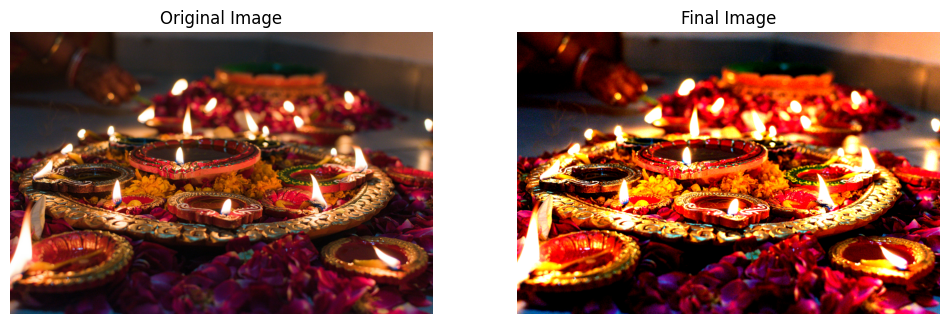

In [250]:
beauty(img)

In [251]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.
import base64
with open("diya.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQEBLAEsAAD/4QDQRXhpZgAASUkqAAgAAAADAA4BAgCGAAAAMgAAABoBBQABAAAAuAAAABsBBQABAAAAwAAAAAAAAABIYXBweSBEaXdhbGkuIENsYXkgZGl5YSBjYW5kbGUgaWxsdW1pbmF0ZWQgaW4gRGlwYXZhbGksIEhpbmR1IGZlc3RpdmFsIG9mIGxpZ2h0cy4gVHJhZGl0aW9uYWwgb2lsIGxhbXAgb24gZGFyayBiYWNrZ3JvdW5kLCBjb3B5IHNwYWNlLiwBAAABAAAALAEAAAEAAAD/4QX/aHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/Pgo8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIj4KCTxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CgkJPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIgeG1sbnM6cGhvdG9zaG9wPSJodHRwOi8vbnMuYWRvYmUuY29tL3Bob3Rvc2hvcC8xLjAvIiB4bWxuczpJcHRjNHhtcENvcmU9Imh0dHA6Ly9pcHRjLm9yZy9zdGQvSXB0YzR4bXBDb3JlLzEuMC94bWxucy8iICAgeG1sbnM6R2V0dHlJbWFnZXNHSUZUPSJodHRwOi8veG1wLmdldHR5aW1hZ2VzLmNvbS9naWZ0LzEuMC8iIHhtbG5zOmRjPSJodHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyIgeG1sbnM6cGx1cz0iaHR0cDovL25zLnVzZXBsdXMub3JnL2xkZi94bXAvMS4wLyIgIHhtbG5zOmlwdGNFeHQ9Imh0dHA6Ly9p

(np.float64(-0.5), np.float64(611.5), np.float64(362.5), np.float64(-0.5))

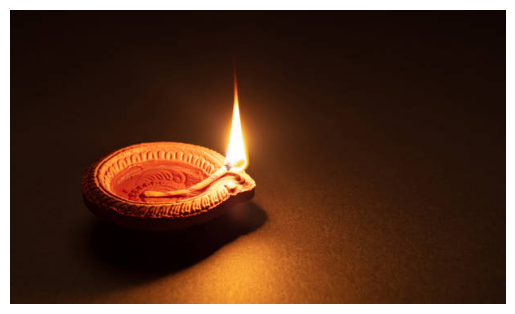

In [252]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """/9j/4AAQSkZJRgABAQEBLAEsAAD/4QDQRXhpZgAASUkqAAgAAAADAA4BAgCGAAAAMgAAABoBBQABAAAAuAAAABsBBQABAAAAwAAAAAAAAABIYXBweSBEaXdhbGkuIENsYXkgZGl5YSBjYW5kbGUgaWxsdW1pbmF0ZWQgaW4gRGlwYXZhbGksIEhpbmR1IGZlc3RpdmFsIG9mIGxpZ2h0cy4gVHJhZGl0aW9uYWwgb2lsIGxhbXAgb24gZGFyayBiYWNrZ3JvdW5kLCBjb3B5IHNwYWNlLiwBAAABAAAALAEAAAEAAAD/4QX/aHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/Pgo8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIj4KCTxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CgkJPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIgeG1sbnM6cGhvdG9zaG9wPSJodHRwOi8vbnMuYWRvYmUuY29tL3Bob3Rvc2hvcC8xLjAvIiB4bWxuczpJcHRjNHhtcENvcmU9Imh0dHA6Ly9pcHRjLm9yZy9zdGQvSXB0YzR4bXBDb3JlLzEuMC94bWxucy8iICAgeG1sbnM6R2V0dHlJbWFnZXNHSUZUPSJodHRwOi8veG1wLmdldHR5aW1hZ2VzLmNvbS9naWZ0LzEuMC8iIHhtbG5zOmRjPSJodHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyIgeG1sbnM6cGx1cz0iaHR0cDovL25zLnVzZXBsdXMub3JnL2xkZi94bXAvMS4wLyIgIHhtbG5zOmlwdGNFeHQ9Imh0dHA6Ly9pcHRjLm9yZy9zdGQvSXB0YzR4bXBFeHQvMjAwOC0wMi0yOS8iIHhtbG5zOnhtcFJpZ2h0cz0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL3JpZ2h0cy8iIHBob3Rvc2hvcDpDcmVkaXQ9IkdldHR5IEltYWdlcy9pU3RvY2twaG90byIgR2V0dHlJbWFnZXNHSUZUOkFzc2V0SUQ9IjExNzk3NzgyNjQiIHhtcFJpZ2h0czpXZWJTdGF0ZW1lbnQ9Imh0dHBzOi8vd3d3LmlzdG9ja3Bob3RvLmNvbS9sZWdhbC9saWNlbnNlLWFncmVlbWVudD91dG1fbWVkaXVtPW9yZ2FuaWMmYW1wO3V0bV9zb3VyY2U9Z29vZ2xlJmFtcDt1dG1fY2FtcGFpZ249aXB0Y3VybCIgcGx1czpEYXRhTWluaW5nPSJodHRwOi8vbnMudXNlcGx1cy5vcmcvbGRmL3ZvY2FiL0RNSS1QUk9ISUJJVEVELUVYQ0VQVFNFQVJDSEVOR0lORUlOREVYSU5HIiA+CjxkYzpjcmVhdG9yPjxyZGY6U2VxPjxyZGY6bGk+UmF3Zjg8L3JkZjpsaT48L3JkZjpTZXE+PC9kYzpjcmVhdG9yPjxkYzpkZXNjcmlwdGlvbj48cmRmOkFsdD48cmRmOmxpIHhtbDpsYW5nPSJ4LWRlZmF1bHQiPkhhcHB5IERpd2FsaS4gQ2xheSBkaXlhIGNhbmRsZSBpbGx1bWluYXRlZCBpbiBEaXBhdmFsaSwgSGluZHUgZmVzdGl2YWwgb2YgbGlnaHRzLiBUcmFkaXRpb25hbCBvaWwgbGFtcCBvbiBkYXJrIGJhY2tncm91bmQsIGNvcHkgc3BhY2UuPC9yZGY6bGk+PC9yZGY6QWx0PjwvZGM6ZGVzY3JpcHRpb24+CjxwbHVzOkxpY2Vuc29yPjxyZGY6U2VxPjxyZGY6bGkgcmRmOnBhcnNlVHlwZT0nUmVzb3VyY2UnPjxwbHVzOkxpY2Vuc29yVVJMPmh0dHBzOi8vd3d3LmlzdG9ja3Bob3RvLmNvbS9waG90by9saWNlbnNlLWdtMTE3OTc3ODI2NC0/dXRtX21lZGl1bT1vcmdhbmljJmFtcDt1dG1fc291cmNlPWdvb2dsZSZhbXA7dXRtX2NhbXBhaWduPWlwdGN1cmw8L3BsdXM6TGljZW5zb3JVUkw+PC9yZGY6bGk+PC9yZGY6U2VxPjwvcGx1czpMaWNlbnNvcj4KCQk8L3JkZjpEZXNjcmlwdGlvbj4KCTwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cjw/eHBhY2tldCBlbmQ9InciPz4K/+0AzlBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAACyHAJQAAVSYXdmOBwCeACGSGFwcHkgRGl3YWxpLiBDbGF5IGRpeWEgY2FuZGxlIGlsbHVtaW5hdGVkIGluIERpcGF2YWxpLCBIaW5kdSBmZXN0aXZhbCBvZiBsaWdodHMuIFRyYWRpdGlvbmFsIG9pbCBsYW1wIG9uIGRhcmsgYmFja2dyb3VuZCwgY29weSBzcGFjZS4cAm4AGEdldHR5IEltYWdlcy9pU3RvY2twaG90b//bAEMACgcHCAcGCggICAsKCgsOGBAODQ0OHRUWERgjHyUkIh8iISYrNy8mKTQpISIwQTE0OTs+Pj4lLkRJQzxINz0+O//bAEMBCgsLDg0OHBAQHDsoIig7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7O//CABEIAWsCZAMBEQACEQEDEQH/xAAaAAEBAQEBAQEAAAAAAAAAAAAAAQIDBAUG/8QAGQEBAQEBAQEAAAAAAAAAAAAAAAECAwQF/9oADAMBAAIQAxAAAAH8fNBAAAFAUhQAAAAAAKAAAAAQAAAAAIUAgAgAAAAAFAAAIAAoACgAAAAAAUAAAAAAAAAEAAAAACAAAAAQAAACgECgBQAAAKAAAAAAAAACgAgAAAAAIAAAAAAEAAAEAApFAAUAAAUAAAAAAFEBSAAAAAqAAAAAAAAEAAACAAAACAoACgAUAAAAAAFAEACgBQQpAIAKAgAAAAAAABAAAgAAABSFAAoAAABYAAAAFAUAAAAAEAgAFCAAAAAAAAEBQRCkAAKBQAAAABFpAFAAUgKABQAAAQABBAAAACUKSLUAAAAAAASABaAAAAAAUQKAoAAAoABQJVEEAIAAgAAgAAAFCAAAAAAAiCqAAAABRAAoCigAAAogoFCkAgsgAIAAEAEAAAFAQpAAAAAgKAAAALAAAoUCgFEAAVQAKWalgiAQJKAAgACACAAAAAUIAUEAAQoAAoAgAUAKBQURVAAFCiwOmenPXMQVEAgsgABAAgAAEAAAAAoAQAAAFgAACgBQBQURVFBSCWgpVR3x3474yyJARFQEQKgABAAgAAgAAAAAoABCkAAAUABQKACxVAsVaACy0qj3cPR5O3HFzEhKiCWQAgRUAABAAEAAgAAAAFBAAAAoAAUUAAsFoKWWlLKBVsVbL9Xz9vF1x5unOJKiQlkBLIARAFQAAECAAACAAAAAAAoAACigAAsVQBYq0suiy0q2Wmpfv8deG35vXGbM2RM2QlghLIACIBKAAAgACAACAAAAoAAAUUAAFEVQBRFWmpdLY0upbLuXpnX6i8/Dnfw9OdmNZymbJUSEshEVAACIqAAAAAiAAQAAAoAACigAAFECqALFWllpqXS6jcu5rpnXoxv9Z183ix0/OTpw3jnc51MJLM1EiSoElCABIBQEAAACQAAAgBQAAtAAAKIBaAUS0FWxosul3L0l6512zr28en6v1+Hy8uv5jn6PL0xx1jnqYsykszUSJKgCSoAEgFAAQAABBAAAQoC0AAAFAgCqBRLQUstKuo1LuXpL2zv1Y39Pza/S/U+dw4dPzXl93g78/NrHPWedmbM1lJZklggSCoACIAAoQAAAJAACGlAAAAFAgVQBRKKULqKtimpdy9ZrvnXs5dPs8J937HzscdfnvmfR+X6c+TpjjrOLMWYsiZJZCWQBJQgABEACgAIAEKQQAFUAAAAUQWgAsvfHT1c+vSXpnXTKrm5xqctZ4awrpL3xr3c+n388vq/T8SPhfH+h8b03x9McdZ52YsymbIZshEVACIoQAJAAKAAgAQCAFAUAAAAUCKvo59vdx9P0+Hb288ljRKaSHRmGkxrHi6Y8fSdJr9Pvz/Q9vmHxvke74Hffl6Y43PPUxZlM1EhLIRFQAiBUAACQAUEKEAQAQoCkKAAABZd56fU8/s+r5+nrwlllxpms13zMlTom0i6k7a59tc/HX0vf5/Z05D5HzPX+Z69OGs8tTCYslmTNkJZASwQAEQKgAQCAAChAEAAABQAABZe/P0fY83q+pwtUsqmWuGtFFTUnZno55X0ORezn7N+fr7efTWfN4O3lb/J9987MWYTNmaykqJCWQEFggBEChAAggAAqABAIUAAKAAl3Ov1/L7Ps+bebrtM8rrzb3motIdIzXXM0Q0nVz3M/Q15vX6OHi1r6F5M38zw9Pxu0xZKymaiSspCWQlggIglACIFQABBABSFQBAIUAAKBS56GvueP3fT466SeXfXnq5ucW4tsqonTLFvbMqd8yL67w+nvycNa8mO1mfY5cdY/K9t4sgMpKykqJCWQlggJYBAEgoQABIAAKgASFAIVQAKM9qfa8nu+tw1jWvLvfOzlqixK6Zo3FNx59uuX1ceX2zh5Nd/o9PJ6enHy8+35ee37GOLfH8v2sokSErKQlmRZAQWQERUAIgUIAkAApAVAgABQAKBOsPZy7fR4ej6fHr8zt0xpvLlvOs30ZuoFjtJ6cZ59J68cvLpnV/Rvn9OuPn8/V5LffjHix3+Z35fJ6ZhCWCJCVmyJASyEJYBEVACIJQAJAAAKAiAAFAFBhqzQ9XPt7uPo7Z741rhqbiMfX8mesnHprj01rPPN16cazqexx+lPP2vPx59Hmu/j9ni68PDvGo9XPoIghLBlISs2RBLIQWQERUAIioAAggAoQBAUAAUA50mqo1Nern29nLv1z1Nc9T28daNQTrJ2mfTnnU1c87rGs+HXT5Po83k6ZqZueuL2x03LEGbBDNkJZlFRISyAlkBElACIqABBAAKgCAoAAFBDjZV1NamumembjU16cdemdd8b7Y3U3L1zqp3zOep5+k5XPDePnd/PV6y6jncYs6516uXXUsJZAZsiZqJmyVEEsgIispVlkAIglAggAAoRAUAAUAhlOdKLqa1Nbmkbmx6ufay+jG+es4uSebpzXOLnFyTR1mrGbnKDtjp6+fXUsQZshmyJKykshKJkWQiSgIkoRAqAIBAASiAFAApARM1mzJVKgClXU1EFUkKUEsJZdy6UgHXG/Zy7dM2mazZEhmyJKykshLM2QAiShEEoCWACIBACUQAFIUARM1lM1EFUVS2AKooImUpQtBpUUp3xv18u3XOqIGbISzKSs2DKSyGbBmwCJKBJUCQCoAggAqIAUgKBEhms2ZQAAUKKoAAApYKKal6517OXb0Y3qUUiDNZQZsGbMpLM2QGbBLIRJRICUCCCoEEABLAACgCJDNZsygAAFAUACgLQWC+jG/o+f0+rnvakgMWSzNYRWUlmUzRM1mwmSmbJZASwRIKECQCoEEAJYAAUAZSErNkSAAAFCgAChRTtjf0fP6Pdy6+jGukaiVmudnPUxZlM1izNmbIZsykokM2SyAlkIioRBKAiBQhEAlEAAKASEM1EzUQAACgKAAKtj18+v1vL6vZz33xdxpBms1y05amLMWYsxZkzZmyJmyEshLISyESVEEoRFCAiKgSACogABSAQhKhmyEQAAUBQAKdc79/D0fR4dvZz16MXpmaBDNc9MVx1M1izlqYszZizKSspLM0TNkJZASyGbASAlCIFQJACCyFAAAICEqESVAkAKFAFN517ePb3ce/s579OL2zeuZuKQhmuWmK5bnOsWctTNmTFmLnNgzYM2QlmLKQiSoglEgJQJKgCQAlgAAAAEISoQJKAgKDUvTO/Tz6evl29XPffN9GL2zeuZuLFSLms1iuO2K56nOznqYTNZszZizKSoksySyWQESVElCJKAERQiCFISwAAAAAQgJQgAKamuuNejn17432zrtnXXN9OL1y3L0zNRoIMW40xWK47nOsWYs5akM2Qxc5qJz1myyzNmbKZQSiZqJVlkAIioAkBKAIUEKCFAABIosVd510zrtnfTOumddc3cvfOtx1ze+WsukWNEJWTFY056c65ambOdkrlcyspLMVEzZLMkshLBElRFQiAShEUIghKsAAAAAUgKFsupabzrcu861L0mtS9Jdy9c3cvTN6R1y3lqNGohmsVKzXOuWpjTlqZTFmbMWZqJmoksySzNmbBElDNlIRAqBJUKRBAACgKQtAgVRqWxqWrZdy6l3NI6S1eubqXpLuXpm7jplqOkWKDFSsVmsVz1MVz1MpizNZsxZEhiyWSzFkBmwkomaESkFRBCUIgAlagoFBDUFsCrY1KXUuoq6lLqNy7lq7zekupekvTN3G46ZWKUEOemaxUrlqZTGmEVyuc2YokMakSWZJYJZlBmyVYlEgJUQKRmykBLP/EAC0QAAICAQIFBAEEAgMAAAAAAAECAAMRBBIQEyAhUBQxQWAiBSMwMhUkM0CQ/9oACAEBAAEFAv8A0kH02sZP0zTLl2H5fS9Aubrlxd9KxP0tM2a1Nuq+k4gE/S0wv6kn+wR9JAirNCu2j9RXJIhH0cQCVrKBinWrlHWEQ/RRBFEqWL2W8ZrsWMIfooixJQveP3W4RofNCmwwaOwz0LwaGegnoJ6CHQvPS3CFGXgIsrmmHfhqB3eGHyyUO8XTLuWnbOTMKJ7HMzxDTInYxqK3j6EYaiyuVmaX24aqND5VVLFNOEgoJn4pLLJ80DKUjNbfnpM4oP7emt93OK1wXQB5+QiMHG2WaRTNMpWvhrf6kw+UrqNjVLgoiUh2JZ13B8FSRzOZtO8ibzt5hnNOOdOYDAfzX8a0bFm3KJZjhvAmYbDnWf8AAfKquyutFqqU8yFc1u43lu35TvMiZm6ZEG0zaDNpE5jLAwsBcxu7VoVlteLtvbaqzXags/k8QEZ/vqbVLztC5I+GYLN83Zm6bpkwHMG4QHmBLTjs8IO2p+YV21S7WBYE1dk36mmU6hbpqtIL4wKnyY7TcCqHfLzPcs+Z78M4jEAfCQLiCsqR2KQe9WmaMyVKA90roWsbRL6FdT/qvptSSutoWyryftKrO1VnKNveGZEyBGJmzdAOGIIMwIxgoCznVVy3XjGnqe9lAUZwGf0x/wAiLGOHXalUv1oHlq7cCuxkG9LIUBje6iJqP3RqaxPUUGNqNPBrUUn9RWf5Ameo3KELivSLMisE9ud+FlqMqajTJH1l7knMT+3kj78MmDAgs3QWfj2JGBNqhgqTYIEWcuto1PbYggVYjZjWfuG39p9XWge/lC7VNdxxFIHkzxzBthBEHab2yt7pBdbOe0W5ot9rlr7BUhm9Vs5pQJagrs1O2z1T7zqVrQksYOhW8megHEyDO3AdpnJJKj5ywtrtGQ9oTmW7M17OaVjOz8MwGZmehD0ny+5oST156MzPQg+g5/jVCYBj6SATBWTFpxNsxMfR0qLRK8AJNs2zExMfREQtEoAi1wJNs2zGIVmOB4Y+gV1ZiVxUgWYmJiY4GGH2nziY84qEyunERIFgExMcccDMQ4x50ITEpi1xVirAOsww8c8D1HyOIEzFqipAIFgEH8HwfNYm2BIEgWYgEA/kPA+5hh8jiYm2bYEgWATEHACfMEHvx+eJh4Hh8noPi8TExMTExAOgDsIIIOk9ukwww+0PQfFY6MfwZ4DgOgcc9JPmxwE+RwE+eAh9uJ958dJ/7/8A/8QALREAAgIABAMIAgIDAAAAAAAAAAECEQMSITEQUGAEEyAiMDJBUUJhFFJwcZD/2gAIAQMBAT8B/wCa66NgujcJdG4G5Ja9GYelk/d0ZJ1AeuvRmPskYesOi0do9xge0fRKEYzuZ2d6sfRK4SdswXUuD6IRN0uEXTEPnawpv4F2eR/Gf2fx19ncR+zuI/Z3H7O4O6kZWuKEYz04w2HziODKRHAgtxJLYzmrF4Wima8MqKEY744XtHzaOG2Rw1Hcs1Yo1wm6JPVH5kvcjedEN2L3EnStEpUaMlFx2L+hT+zFdvjgbc1Sshh2JVoj/QlQmLdiWlGSykUikZUZDJQ46JD1kS1Rmp5WTheq4ZbKFhmDu+aIWglSo/SNj8iMdKZRp4K4allmVMccupS3I6JsxJ3sRdx1MzTM0pEUoxpc0itBPU/LhqJF+lRsaE45SV4hDs73kXgrQUYTJ4eXYUvvmqLTqXCAyvUnjr8RRlN6jccMniuRmMPFaP2Twr1F9c0uiEvhidaMh4GVfhsc4me/aPDnLdkcGtzEnkWg229SrIwWKv2R7PrqK4uzPmJb8zT+OMJ/FEZNbEZplD4Z7NDUTaHkZliKETu6HKvklisrOxLU7rVoUXHzfJ3pm+hsXNL4WxNIWI38Cn+zOZkWi0Wi0WjOjOxtklQoqhR8yMj2JNLVjnfgT5tYso4tC0MzFiNCnL5HN7CkJtnwLgxsb0L83mJYv9S78D4KXN1JobTFXBKtWXbG2ijWyMrdHm1Lkl5mXCjvWvaSm5b8LL8UXzqy2Z5fY23uWxtvw2X6EVzay/Sv01ES6JoUGLDK6JjBsUSuiYxsjhoroqMBR6KUWyOHQl0SokcMUeiKFEUBR6IoURREuhqKMoolCXQtFFFFf5U//8QALBEAAgIABQMDBAIDAQAAAAAAAAECEQMQEiExQVBgBBMgFCJRYTBAMjNxkP/aAAgBAgEBPwH/ANJH4bN+G4zpC48Mx+DDf2rwyS1SSMPivDMLebY9pvwts9Pw2Y20xPwlkmen/wBaPVdGRfhLJsw1UEj1S+wgxeEMq5VljK4MgLveuP5HjxPfR9R+j6g+oPqP0e+j3YiknmyRgq8TJ7oW0hd4liJDxWOdl/xJtcCxX1FNMkenjvec1WKLuzlRLEb4Nf4ORLKXJLkW0hcnLFwLgSK3yX7KODDSrP1CrFXdpT0ok+shtyELYR0KKKNJpNJTLySKsTrJSpbDmkiWPKTpGPb0Xz3Zu3fRDbkx7ZJFG2VZUVlZZRwUMw8LrI1xi66Htxme3hYe4rnPXLurOIEXW+WnJKyiiiiijYa0jicZUR+0tyys/wCidd1ZXMR7EMkvgsmN2arP0PJl/g3FuLDRLD07n+aHsRfdZR6rklHVuiOVZL9mquB/Bll2U+gsJvk+1bIWwmki2nsTcq3OUUyEHVvu0odSUU+dmU48li/IyWH9tI9qTPbxCMMQ9ls+nZ7FGjc4NRxlYrHCbFhxKJcd3dmmuo478HG2VuqZbLLZqkhSLZeddCMW2KGrgjhqPwfdqNxNDNKHhpmiPQ9tc2OCHCKFBahml0l+RRuhxdtURhs0z21W3IsJt3Iqvk13dr4c7FUUnltpaJRZpi2jTG7SPus0J8iSXH8Ml3ykVX9CT8Mci/CbHNDmX4S50ORZZfg7lQ8Qciyyyy/jfgEpkpDZZfzXgDkkSmNll+DtksQchsb8GschzHLKxvwWxyHIb/pLulllmosv4P8AkWa7lZZZZfka8KXZ/wD/xAA1EAABAwIDBQUIAAcAAAAAAAABAAIRITESQVEDECIyUGBhcYGREyAjQlJwgqEzYnKAkLHR/9oACAEBAAY/Av8ALiexx7GHwTh39jHFP7GPKnUdjPNNPYwIdjB2OPXaMKyC5guf9LnPouc+io/9KjgVyqrSOwNB5qDLj3KgDFU75sp9yu6rAvhn1VRTXrlFxcT/AKQgdpb6Qq2QAFSomqrcJxzqgU8i8IELZJozcVgKod1VBUsoVXrMBYNl5vU+pTBYFEC7Ux2iDhKMC6oYUTuhVQnKyc8GpEBBouaJ08rRVY2eiwndG+vVg0c70E7FaV3tKlt1Geq5oVd1lZW3UV1qnMs52qIGVPNNrVVMoHZ5qp3YLR1ZotAWAGFpI3aBabp3X81aouFBqDYrVaOC4o3SPlQDmnE3NTc6rC0FztAsU4e5cRBCINwsTaP/ANqDcdUyCZtQbUKYf2oXd7l1OY0VrqYVJhSEXQvFQAZ0XxKDRaBU4QoG4yjUlBr7o7Qcw6rgfyFDZuNPlcgfc4VLqb81R3qoj0XKpfQK0Lgqse1dTRU3SSXNKwbNpnUqM1Li1ex2Odz1ON1VgLcTVw/EZpmFwehVaFYSKImDRS4UXMFzNVwsj5KjSrQqypAJ8QpNShS+ltzXTSxRa6rG5rE1rsSn2h8utVZi71/E8nrFhP41V4/FSHMI0QjB+lytXyL5EODEO4IYhXQlUDR+1XWkqP5ZTiNA5NfV2LRPxcps3NRys063fdZUMK6qR4LCGNnwQBDTTRaDKiHFV1lGMnD35p7vooE+nKxbJx2sf9Wy2jDjMQYRa92DZwaQvZ7EfkVJMnr9xuxGyz71/UiA6NJTHQHNaIUYCIdNE+COK4Ra/aUIzKiSSuDhXEZ7C3Kqfvnb7LV+y9f7/wD/xAAqEAADAAICAQMEAwEBAAMAAAAAAREhMRBBUSBhcUBQgZEwYKHBsZDR4f/aAAgBAQABPyH/AOIrr+mpYf8ATILaQn9KhMexMk/osIQhCFtexBHuQhP6HCEIQnDHtUw0Qn9EhCEEPYBEh70aGiE/oC4XCQkLg+4rhL2jgaGhon9BQhIS4KH5kfG85xoaH/QEIQhOKrROlP4ZB8SDQ1/QULgvFmQsXhF/2ZmfAg0ND4f35C5FyUThIjKxRRjGMf3RJvSp/wAMC5N/A2LuWN7/AFEzIJA26fyEdl4Gp3+GN58whcmxROHlEG9CYx/c+pF5aF08z6C//GUiZWNZVDkMeyGiyeHZUjKLnDpXlr/RC2vghoNS7vkaNuObQzTU7oOXdp00ZBN+VmR+LHw/uKYkpCVs1/0HWh1oQlVwI7xipHXVKe9qXPsHfYKUfwAHnGpF08t0egWjfCEjNqijqWE/Io3bXgTNG9M02ryan8XTJVY7ykd8TDGPh/bpRd2D8C2t3/Bpf8m2ID5bFeUSFbGk2Tyddi8bEvvfkiikfgSgYpcFKZRDka0e1nCXpBPBWNP/AAQlbBNsKqizSxml1eRaxouSujlDkJjytoMNjGP7gtxfko1LHbpC5aSIOhKHITIomaI/AxwSbZYdRtm8idNdNN9niQkGgm8sjoQ9o+GPrBSWfIUbutdhfSpIvcQhowxZ+oPTJ7NIStVV+TLY5S+wbG+X9vXuwSdfqiaR4Y3BSk2lGl8JJr3Itv2b8mXoHsB4IWl+zsHlMew2UcR66G54fkF7FSxOk2JKl4L09wPxRrGRww4/nQgrK02ZphoJSKZYy6WkFB3vVQcT7DmmCC3FbWfgNK4yND4fD5n8E+xv8MZ9gaBPANBsTEou54MZHEG4IlZz2PcGm8UoAFHDow0kbxNinrw/RRraediu+VK3h1ciN/BAzLp5DfIjoe4V/ZKG9tb/AGLVn8sSVfKIiZeFEKIazfwjRP2rteqE+2L277LTWxieVc+V7jdx71Dpl5wxsZM0blGhlmM8M9mJJw9xcxn3fZJ+DTX4Myxk8C7p6+x2ye44hk0JHCT2YBW/sIMiPQwVEQDdhOt1oW+AGepN1lMaMFrVeSpo/L9bXL4n2e5Y9ltcKNL14+COb3YU5Z+JjDAHeRaaXkQpwyMT/wCoNipPoS1f5B3zexgUOCCbx/7Desr4wTyvP/QtUfGtIh34FGBmr8QVeWHaWd5SlFcy085+RxZH6Qa1br9y8/HDRMj4g+Hw+N/Zu4q+GTF7PAxnXPzRn+8cZNJgtKv+iWFb2yUqerush+86noc2L74Da5/qjsrD3Qn9fgKc6H8Allam0iqLrV+EGPU3DNsZDecIvZ1Lr3HY8BeaJhUnp6WRi6SNKIj8D8jEIT4hCeh/wT7ElXCYn10ZMsn5g/iad00Omzl5YlQ1PYWOO14bIk5lnAamk7q16HnAKaPGfAPNsugjC10y8mHJ6l/IPQyT+yVyqmHIPE+wm/kESHhuWrf+BoaZ22IQbGUjsTTV42Sj2TyNE4g8cQ7GudfYUT9DdRoYw/cVRQNYq9siNUxewtVeXRDet61eCPrqaPkcYsSPBDZrcF1lZNr3JoOFKEGa9pYQsa19mMK35egLgbLx1iYlkg1WJi8M7GNcd8M3xOGvr2xv11or8iUp/sMaxv3K/I2276lvCYuCl4bsVmRLBoacGrx7H4MDHwzfof2B+ilL/BeF9VKXhhkmEJ3XHn0NCjTXY/BOevQ/r2P+K/y6BD7KggKOjbhCD1zsexLJhMZ0Ph/vl8P6t8Mf0zDKwJ4CpWuG5p7jDXgafgYzZ3xsZnUHzv1b+rY/pGvsdAR0uJeXBlRUcdDXZKZv/wDOPyMYy4Hy/ZGnzsz9c/o5Rr1CakICELibcIIsiQzCVQ15GTyMSDWRLoacJxn0zl8M7OvtPSiMuyuIT64V8OEGZGnkRPI/LSEYNUxRqzY06fPKfD4+TsY+Meh8P6ufxw6gXsKSwhKIa8EdiILiZHwSrZhglWzTwP8A0PXuMMfGD4E7OuGNi9L19bOYQhCEIJ2P4Htmcg5BZ8CZFo6Jwxs8jDAxvrogxxjGsjWONmhsfM7Pg6+xwhCE4J2XF8aVIqIolkSQn1BQXHyOQayM6I76M6NgsagnXBsfxw9jItDwbRMDgt+jv6+EJyoLmMxYCiXGlAlnYh+gXRZ8ndGyxzsesccGPfG4hoewuC0eBKvR7G+Jwh+h+h+p/wA0JxCejoriyCQkSogEpgIbC2LDydiz8DdC0b3w9xPg1PDgfjhYPwa0N636X9VCEJwgkTgkIQtk4WhaCeDIXB+wmJjDeay4HA3gbyP5LHxLTPc7GqN5HoezsZpjOx8PXob57+qXC3wtiF6i2bCGBc8Og9j5j479E7H2PXodjHs6Yzrlj1w/R1/P/9oADAMBAAIAAwAAABA3/wD/AO2mkkkklttgEgAABtttkkmkm2//AP8A/wD/AOwAAf8A/bbSSW2222yAAEEkkgAAG22ySSbbbbbf/wD/APyD9tpJLbZIBAACSSSSwkmSSQAALbbbbZJNttt//wBzbaSW2wAAkkkkpbLf/wD/ANmSSSSQAAAabZJttttv9ttbbACSSSSSAH/9tpNNvtgCSSSSSABAbbb9ttt77bQAASSNtt//ALaSWm02Tb/bAkkkkkkEAEgH37b2gAAAkkwf7babWkgBtpM2Tf8A+2kpBhJJJJAAEf8AwCCSSSSF9vSSSQC2k4E2iSZttvtpJICSSSSSAL0CSSSSBL9vQCSSUvbKJLG0CaRNt/8ASSAEEkkkgJQkkkkSb/a0Epb/AOgLTQKFvYAJJO2//wBtJICSASSGSSQAL/tuSCnoTSkRdf4ULGyASS/9t/ttJJAASSSSJJv9v6SCnqGm5ejhQ9chdmyASS1tv/8A7SSQAAQST/7b8kAtaF+RtxFYDU6MC3MgAEkl7b//AEkkgEkm/wBv/wAgAleQKBWs80VcKORgH7MkAEtt7b+yySSS/bf9kAEtaQvVxTCtiojuoVsA7dkgAkkt/b2ySXbbf8gAkpaQh+qHAzeRV/CQXMgS5skAAAtr/wBskm37ZAAJaX0heiqh/sdteOYGc6aA/wAgSAAA2/tLbP22AAS0v5CnLTHSFUtVOTOJnJmQH8gAQAAE29ta2AACSE/9CnLFGJN6VaHvkY6rPmSD/tgSQAA23vAAASSE/oCnZGML/g6R5yARaq5MmQBftkACAEE9+gAACSF5AXNW9eDwsSE2URNXe5L0yA99kACQEm/kgAACSEspH1eHq7e1yLBCeJFc5Ls2SA/sFAQEk8kEAACSLh5+GzdUEBmS/wA2KusVOSX5kBb/AG0AASSSSAAAIsX1Cnk+LHPzLiBiKGrVibl+TACf20JISaSSQBJjND3UOBRSDU6J+PGGiqYn7EvxJAW2ghISaSSQIHU+pTUK8+/PYjLYsPGjiaiTI+TJAf8A9CSGkmgAQYpQQXlbozZ8/lrwPj645Y1cxL8gQ/8AQSEJJIAkAIrmiOFvKObeOKheovAuR2tTMC/kgP8A0kACSSJIBUotdl9RMqc9pW5C1R9J0djRzkuZJCVkBISJJIAA7YSYM/2NavPibJ/bpBgUUjF5EuZIT/sJCZJJIAO288Kcon/GnhvC3rlHN5ebeejMv5Cf8kATJJIAI/ZIHUJCmgt8PesRVVeFfDinEnF+ZC39lCbBJBAwaZtuBkltUD+CBJ3AUmEUbYvR/EiACXkoSTDJA518qYlxCT28qMoZB00fIEUlUnAzH+JC9kCTCZA1D9ts1QAAJK9kqKIGZkkO31kVw/4m+JTkkyTZIGsNttu2hbSYK8d5dsRh685DlbEQ/RH+ITkmTbJB9i9ttu0ALTIF7DwFa17VPCtUiuZ1JPwJcoSTZAWo1tttm0ALYyhtX1ACTsG0eVd5/AwJPYesCSbKT/FV9ts2gBSZTOS+10oieOYSjEZAeoOzDeseSTSb2Eyn/wBpCHtMggRP45Q7Nsuo0zp8FqJiQ9Ikkm0kvyZ0m0kgxVilPJuIMNIrjnI1OeDyBcinlEkkk2k/qCJIy5WdufS1EgxOybxXK09xzwSTiQpSQyWSySAGTzcXfp4+uYfmLPzzufnLJeMj9QcAtRJJZJfv8zaqrhAWaF8xfk7iNtxxHJVOCCdiOwE9K8kGAvgBta0ZxqrT88m2pFBOCNam7ZgyUoFuT9KGCARh0N7O2Nsd6JJ90u1QMIN46U6o9ecHufhepX//xAApEQEBAQACAQMDBAIDAQAAAAABABEQITEgQVEwUGFAYHGxkaGBkNHw/9oACAEDAQE/EP8AqKDr9mjR/Zug2fsvLZZO7P2LnOcZDtYM4yz9jZZZPCj2ks/YuQcZBaX5ug+RJZZZ+wjggggllOh+JJJmz9gnBBBCXQ+Ceo/MJJJ/YhEIWhdRCSZn9gkRELcLReJYTP7BOCI4aLxkstODM/dwVwvCRRq5HuQLzDiRPtFHhkJ84sjkw4jjLeJmfugL4nvgvlDB4bz8Q+K0lmdWG4wdd2HQyvi08QjdlHzP8Fo4eA5e8DM/cgXxMXzRsMuOWzVtM3OpUB7zAR1j5g5Q6K8COv4CTWk7p5l633mvhd3eA63layWeH7iiwmQEQ/yt56ncZDF8MUCXanA18W3bd23dtg6WDcvMnvKI+e4mnsRRzyso/wDLB2pe+/NvSw1iDWwYeJnh+4DWB0JBHlgf4L8Ic/BkYGHdsxa3djwxnEZ8wWfGth5BHke/9QcDqF9ck08idgLwr5ATP3LzGKCI/BDgsOoSQXcHz6u7qywvRh1nzZVHp9v/AC8LcPixeIkvukuiTL3LLrg/csMCSfBBAnAUj0t4dRM5UDggyDLIlA1vAOtpIJ32z+v/AN/xL8zmF0Gve8X1aHR9zHoyNMnD2W/qjDNOfEn2vk9KDywvefB3b3wh7Toh3/V8yWlYMMEB2QxHqfY3v/Eh7dv9c56E9KWfZuqfgut7sTzF2C0/3dL7yHu+CQZrajr3sHh/3ecYj2t8zJIHYg6sJ46/u0me3z5mwzj3vkuodLdkJjKOuhI+bz4yyzjJ4eH7SB/mzrY9i7K8hr8+Iw0x/MJ7yK7d9o+HlH4JDplfD/q8N1/1/Vgw9viI8+YDT8n/AJdCOvP56YcTsm6cMxQ8ZZZ9wH5h+J67bqTvZi7INwcI3zt5KP4tQDuRcZh+JQD7sC3fMBd/MPa+IOh2L7XXQzP8sIZFLWG3lt80O2cZNlnGWTxnCT9n8TCddNp1pJ7bITxQ9u+/MDnz/UrU3+J6U8QdDMbco8/7IQw7kkKsgzoXku8IIg2y8+1FnCbJw8Mnobz6H7BttvpEeIB0YDwpXVt+SU1tfQ/CU8DDbbynmOWz0s8PpfsguGn0NJmvq223hnzYEetvMlnrftG22222/SE+JXmAjFlnL6Gy954eE5fQ/cvKRhEyyyyz6b9mf0a0EZs9GWcPGcs+l9Hn7m72xBB9F8WcZZZNklnrz0v2zC7cGfSZ5fU+h9bw/rMs+jkjB7xHiCz6niWZn0pyy+p+xZZZZZCZXjwgg+uzPGehZ5z7TlkO1g4cgj67M8PDy9csfZcs4FOAcQI4D6Ht623h42Z+iT6H6T9XLLLLLI4CEJkHdkHARHrPpPPifS+t/TZ6Msssgsgsggjg9G8H1n0JPDw3ieH0PG/rzg4PQREcH130PpfQzw/o/wD/xAApEQEBAQACAgEDAwUBAQEAAAABABEQITFBIFBRYUBgcTCBkaGx0ZDx/9oACAECAQE/EP8A5rr+zX4/Ze8YBDb+xN+eCz0P7K22egtGtt/Y28LLMB+bp+JYbbf2MsssfwB/263+8MP7GZl4u/5F1X7nAMP7DeGZWZHG++3R/mtCGI/YTMzK6r+OC239m0JQxH7BZmZ3Sniz0/U4iPq6h5kvMA9T6iY19rX2j7oP5If3eAeHh4WJwdCOhxIj6sbzTok8nbXqNsg9WWWQWceWQfu4MdWD5aJGIj6mQ1vsI+8gE/zu5pq+r8w9PF4CHRE8oOxsagTZu2LEepD1PtYX8oRT3zpvvBHB9RXItG2P8BKZAxfZPXfhuihG9Lb7sPmTti6W/VgZfY26rZY2NM3R4yDwtxbwy/MEEfU3s1tNQ5YbMhx/mZMfEA7Y9MkPJas4a9TpaPMBsvix7R4TFD3Eez8Qh7uz/wAk3bdhd/iOazPB9UWDkiz92J6I1gDt0Mk2+bp0cD0seN8zg08nmRd2j8Rj1dwTcfd59QO/uetvV0PRIOrzHX4hE36oBhCp5h2Ie7sOoTttzxerF9QVz1Ojo+Le4yeUgYyiEzP3ZF55B9nYa7/1IcyZTv7EjqeLF8/PfpjZsS+pFo+/Ze5Ba8wKxJ6O0m3bZ/JY8jYvUMv915rkkv2Lt936uzj/AHLbq9AH1PPfH8SLlxkf8j03/uQzxHrD3J6G1Sdz6Vk4DD9ST7R72/NdcFvtKehtxrL1lrJ6AulXqB5NgHj+kH0osbfVhBdSPDFp/wBD/wAlR2P79Tr6/wBkNgRnv3f9w/u/7n1b/u/Mn1dy8yTXzOprHssBnjzMj/P7XceXnYs878N+ljnGTH7CR2wXwyhqXq58YjDSy7ib/mFzyz0Z0R9pm/8ACE/mIF+TPJ/+LcDPfdgXv0tF/wBiAMOHg4+zJnHi3jbedh+G/RD4AwIzp3l+ZdYuiEb9v+29Cn85A9GLYtE7MnUHj/F1u0WLQBeR3vCuMkks+I22ww/Ah+BePgfQc+WWFt6gdCwsDr45ZzllnIeJ+G/Ejg+J9Eyz+jln9DLOCPE6Z+ZMf0D6ug8wJWdW222xHJycHxPgfqz9OXhOs14Ntt4EiPmfWSjPA14DUQbY+I+R9XM6LXhVw2G22Ni6NucbbbFsNvz36iCvG1m22xbeYYYXYeCOD+gfM4Po4l9iRk4F2bediIch228wREfE+AfTNkEByCz7cDbzvBBe4iOCIi34BHGW/SNttklhJw7LLLMkzycHBweOBHBwcnJ9G23g1rGsWeFL1L1LPieTxHBwOyOGXqOMiH57w/E/T7bbxtvIxjNltl4XuWZmZ4Y74OSDIjzwfA+J8iP1W22222y22y8vLZJPUzEkkkFkEWRZD4EcHBwcHB8A/XvDw/BnhmeG9cseY+L3eo+BeuSPgR54P0f/xAAqEAEAAgIBAwMEAwADAQAAAAABABEhMUEQUWEgMHFAgZGhscHRUOHwYP/aAAgBAQABPxD66ulf/LVK/wCVrpUr2qldKlSulezUrpUr/l6lSpUqV1rpXvVKlf8AIVK9mulSpUr6Gvar6upUqVKlSpXsVKlSvXXSvqK9uvdrpXt1KlSpUqV1qV66lSvo69FfS17VSpXpqVKxKlSpXSpXs1KlSv8AjalSpUqVKlSpUqVKgZSpUqVKldK9qpUr6Ovq6lSpUqV1qVKl3wSpUTrUrpUr3KlSulfWV7B1CVK61KlSpUrorHx1ElSuqf8AFkqV7B1JXSpUqVKlQIEqEfIGNERhJUqVE6VKleqpXtV1qV9FXvHQh0qV1CCDoY/5zwwiMPQSJEiR61K9NSvefeqVK92vQQhAldQgggmoVqMMf9rosMJKiSpUSV1qV9BXSvrK9BCEIQIHQQQdItNdJMIVY/I6qwwkSJE6JE9CSvoa9kldK9ivVXpOhCCBBA6jZLOJdpoH4mPmFfzKfQgwkSJE6JElda6PprrX0Fe1Xt1CEIQh0DpXy3iXDEtGqWf4mMNv8H/uVriUdcESJEiRInRJUTrXqr3K617dSvUeioEroQIEPQDLpek0KYPqxf3MMbD/AN+JcY9IwkSJEiRj1fTXs17de0eqvYIQIEIdBgmiWJLcU8NpKBWhleCUr6OhE6EjGPRlRPUkqV6WVK9l+jqVK6EqBDoQg6wyS0Sj1tJonwpKcUrWboYeoIxInR6sr6d9m/auM0ieAhFpIWl3yCXCse1sVyNwrah8RTjNH+MEH+9CMeNwdhlwRV0hBTnoWSape+2egtO50Juzdm3WEYxjH1JK9NexUro+mvoBhlxEx7jgH3ldULGHxuUuGebX7sselyDX6IWGh2NR5mxnazQIbtqao72o5vxYbAVs4SwCtMk29pgiH3imXcDgj+CDkTuQ5slkA/mLHlB/6Soy9+PXNi9Ytx9D0MTo7jKx0Y9cyr9hPrFKp4DMfJQu+eewlTwl/uPeAA1U+bwfxHR5aBgKyykLMo95aciG7W5ee3QrnbURZkZ5aSMqr7gxDZKP3VhMFxYBzRi5icXBoy1+JRMtp7EZiWKdgauBQL6Jlp3FzEYY0dS4oWJ2ZSUviV/hL08anx1rHtcvvpPqMEYkSVGO4np4iSq6V0r6wSoIS9p3wESviCXT2HcgiZcrtPKx5FDgq60feXxjVrtiDzunzHNpqQWERkpWFFRhKncx1oXImJ5a2VuIWFbpI0dvcNTPlENMhcD80w/+cy3jmGkNv9feJp20Byp+Kg3dEU2Itp+4TcF0dneELZv9RLxYMcQLb4iqt8MpFLu+jZF0CJGJEiRI5lRJUrEqV1rEqcROetdEj9LUsOFvQR0are7ETGPsBz1+iVpAG05qWemJOgNMRrYFeR/sg51rJh8xE5rJaeDsQsPSgNUdgl6yvJD4jrs8hBubfLBtAJ2EmIY8yrg/CIwdZvzkhtiVnSMwSA42lvKjU07fghNrzsDfkP6jM4zhvdY/UVY2gmo1inKQ7qx+xGmJlNLuoKrCi8Sw6Cxz0JHEYkqPmJXSrm8RiY3KlRlSpVHqqJ6a+hsLQcrlwaF9wPtD5p9S+bB+Y1wBrdIJD7FJQpRr78THOV3VO0M9QO3mLAPIXaxfnfP+JlpxwPMUGwc5V8kAPT0Xbs9pnPY7DuQrnDEyeGGtxpf6Rzp4zDZwyvCltLTzBX78UuCEIFHPaPmkcFNWC/ll2NmVefEb7p8V/EaStAUO3eZA5k/4WSxYFgcJ3IMpDB7Bgf8AYl1hGxOi4ImIIkQSOGokSJEuVTEiR6GViL0WM36NxnHWutSpXu0wUtWHHyx7kdy4zwO08PFeH+YarUAH/wBsP1LCDIoUXzfN1M0cGM1CjGAV4l7Gq8nvAPb2yiydLBuPySpXFPLCVwFuMPnEre25FoHeV+rMbHxEyGe4L/MXKBaVtqNCBEp5QvntCP6uEGisu6/4SnnjTf8AbMmHGAyr9H8xSMcC5PdWZWKqjcKGZXdT7QlD9FBUd7Wi6scTKDah8w12OenGo6nOohuKTEw7TMSiUSpqJxUS4lcxMSpVcXLjKhHXRLnEZqJcx7D7qSqU4PYQqA0au8QeEao5OyX4qwZ/84rzGWolfA4iA0wXHgw3LmAH6lVoGi7L2lGaqna/IxgQ4UhkeYX1kMA1EKS/8kahIOKXFOABY/c1K4KPOGfvLVrKWz+dEL4Fuiv3h7CYsIMfVeCUfbz5/EBhmdparqre7HaKQ7wTwHEoZqlAAdzz8xA4+Eneay1o38FoXCKCCCDkNms/MxzG6lDpjbKaqUVA3VyuxG7ge0TOqjhdSublLEqU7ucXNMd9KidEjrUPY49F+iuleu/ZMu0oMDKBq2Ni1+jUFZy1NK7p1Kk13ikOqlc4V/uG1Q0mGCNRqC3yuBHAoaqjS3AB5eqL+6V9EWJuLX6xyYVYHcX+twIAeLHf5YBMbvgPxLQidWZQCGm/4R1tmmH5SiaOH8zi/tMgnChOzDdtpQeauEgLYHDWHxqYDYaFQVL5x27xcgKFQ7LP7qcHLBYOxXzGi0yqtZdRwYF97lkwyIPiU8dAB7Ss3TB8y+8VNbY/mPRindztOdTTGfbomYkczLi5rqyujVdH0Er0V0qV6SgHMHpCn9yzlvZohRkB5OYaan8HxKLG0fuceoGOkn25lW1whhjs0kdJdbCL84Y3vJWh5YTMEQqZwHyjF6Rs0vMzXntrAQqGcTf4gEtM1KPvUwqAIl8CwgiC9o+FjVaPe6ButRj2CCQArqndX8I9w1e2u/3hJSzbTLxg8xjBQOcd2s9C2lF5VCKAOfMtblCZY2fiZZIZZlGdRMVqB2zBakSsO5TeYo8xLLmLwfmPxHdOo+EagXqVjM1cqOpmVGN+jMqb9VenfS/QTDc8REadyjZZ2uYmHg6joLhpYCUBLRVjXNzbq3dfsTMnM3yyxvXdin5jsi9pd8MuGACod4dygdVhxFBaVpF138QSYlKE8ymhYS9/5IBmK7kv5+YEt/GMWtw/iCnAZzSOe0FB2UpVzjsjE/GAqX4AO5/UeoCQxXaOGPUi20v3jhbW5gjtmGpapQ0G5VN/uULDWZReXiUORAuFXaLb+sRwsInesxB94CKO0oLi4hhWKngfEcAsxWiCaRc94tx1PtKme8rDcKdso7xPQyuuul+iuupXoWeAe8RGnq9yHY6YZA8lrI8Kkpcn7iNjg4D8xWAZLWr5gmAvKzEyRsATg4D5ji2B298uZeA4ArvzucGhJa9kYKiWqLrspAk9biC/GpZFrAUPfzMk0SyxXvcCKDSoSg95k6TbnoMXmKNl/MZ758TykuUbaxKLDfM2mpVYDZyzL+/MQaXCh9+JR8xaqypkVXXiJTaXC40PiNjzc8b+0aQM5lDEosYigMqszG0llx3Oc9KalxhUaIYmJhJx29d30x0uLF6hcs9JoLA2xD4ZQBG6tPK8lcK6tXa5aznxLe/QlhtiTWYtWsGUSiZzPmEXEPbKg/wlnGZVUtmICihXbhi5KMRw5wYvibC2GOi053FVqfuDFPGsbmYUcyqXA/aZaxUXuuBybi1q5vcAV+4GG/1KKGo1nmHk+J34lcxupqVvMo1GuTq7P8myVNNdNMfVfVYsWKL1EdNOpA62REacZil3LXcOlwYdEke0MJogUmGHGbuu0sZfGJVJSl8xG8kP7h3pzzU44iW3wxnNU1cGUQEeR4jZCuNxDUaL1iJVqzLqYq6lq/xFneYIm2L3YZ1GjMxUTNysYiY7xnNMXMuuZU10vMq+PZ/rqxii9i5b3nylveX5ly/Qei4rmYcsDKJS2E6BQYuCP+kbWf1ELgquWYDDSRV8RLyLnzEql5jsX9iVEXxAKgN8EyWq8sObS7gbffMXcxHNGMfqDgaVKb014ltrBbcpu4DdR/Ed6lqaIj9+8xm5ljVSp2ldHJKlXNdA8S/Yeh+nAVoLgxQjDPlCcBg7kJNn+IXsQL1ca4H5iSwUsVLBpMbxPlQF8Bx2jOLu4dvaGV0/bEaBjJxG14xzAy2zRy/EGiv0zLLSMTZ38ajZtuNYZiXk1faJ+Zl4QuLWMMTNytjdZmQGZLgVd/iOqcMbjfTUS5mul5lexfVj1D6A9Ayiu6UC2YgP4JSHZ/JDK0HkzEXjMPK4SARqXhtgd4mUQocQ2QpvvEtnk3hLFIDzvMTNUOPiUpQqjvFmyqqsxVkPxEGlJtiwtPzNveba7yxiyJwXXaI7+8+CA/OWIF7JktmdkaQcRt5mdZ+J5SYbNRro8dNxCubjU56O4HouXM9GMYIkT3zoJUFsOOrglYCHEsAgSuFLiJhMReyklq6qUpstrmUHTXNcxH+CJZu1azBXbbwVMsYTFVKFSE3HYRLS9YuLwKuNtXmnUW145JaBc0K1cThauGDsg5b55iZf1AzYlRQwP6mtXqN5fMpu7iEzuawZuCqxKuB5EK8dHxEom+0cMdTjoYfSepLiRIkSJK90ImZBMsBgKaPiHYIfd3RKaeULBdPwTExBkWvhirYI3hZDEsAZ7Tdp2CKykpxCFgY4GIk8BVENLSEd6cRsey+I1dI/Me/HcmwTzcQT5gwZrvFQ8S0K0jyH4gtM14gKrPiDySqOYNmI3crPaW3eIWZIlmiXiqmdzNZOjHU3K6VPic+ykSJEiRipXsidEToUwMkANH2l0ViYSreFRCZWnaHJZhx8QJbqsEFINbiFcYZW534l1cS23I7mlB3hqu1q/mIscF3FbhioQtB8MypQcJcDVXCj3GWS37SrzW4/djURDLMBvTEDlx3nOIKWtS1goyxMBX7j44lYxNOdzKxcoqDjH3jLel+IblOonWulp7bKiRIiJK9gBqCLahjk/MEQKfaCIoxKCpN6lour7QI8DipkMVXNwWG6zKUcTww7iFXVkY5WkjG9zbW+0uHg6I1zWDTCLRSdRyXh4iRcY0NQg1Ym5dAOCAUX48wVUxw0ss2xEFlsrcLGMMdARrt+Itbv7QCZR8ItqoFl/mZHtHM71Awyq04juXDxKlJHfT4lVmcxp61NdK9ipUqV6QswbxGNQeDKmoPJXxKACr3jHFFQmBfiFS9tQjdb34j6Y8MuQ8ZY1EzmGDXPMWhduCfIlCTUrdjUXLi4EUtNS7FL5iFlyuI2wHcsKY8XMOIKNS7qB8VK2szcedRRUfeHT8Sj5IDD9yjO/EWWavvLu45M7gVh0xK7o1xjpp8S8XOZWYlbmJ5juPiEuLmXMyq30rPSuldXMrpUro+Ez46C0V4nfJmuBqgnhVCBiiB2vtFUazKtG4eHFS4uhmoCGKr9wUv0iLwxLbQCi2NVOYXEpfnmclE8TEIFvMtRyrDfTYku0dziBmJzbi5cpzHvBCNrYMx/FyR6G4AJxEtXmGLt4jS5LJgaZqP2S6WyUUEzNOtxhhmDqXiXmYeIJVG4lMq9RdFriXm4wrjq5lnTnoESV0BZUqEZSs9A4WhhqFcQd1PHAWNTZdSkwXKdwwDjbKB5JVwU1Fbf4lhYh3uW0q3mXtm8zYTiLg3jtCMe6NYXxNDXGZcB4mT4ZTMeYuOJboqgqWVGEIKCN92BXPPeXGjiKWe0A+UTDumCDxxFDMcqRNl4jV2GZfHd3Fmo3d3qOWBa1FaqaRl0XFuIkbYYnOZ8Rzvpx031qFSpUCJKlYgYlQgswzmTghaE0mYYeYYWswFThxUBqDkQwgHMo4xihmU5FQlKlQSnHEQUGPMoVZiJrMEaO0p+0ZgANeYAbmJcp0zHSrYhcIm9ywyUQQyyxcqzcuLBQ18xnLmEQOjcQMXEIbcSoIuWFoszPJEGm5TcSmJbmIGovCTMqEzLxKpjG4uJXTTA6JGG+nEOrDUJ2mmAVATg6XMB+EFmZgMNrHRDiHaZrMCGoCODiLhiWpmNv7QhgamNJuLcTACpQrcVvEwtrcQE8xznE4XAGsXJOWbRnZ+ZhCXLOpWTzHUTU26HHSRnMYdy5x0Y8ROruGo9Hc//2Q=="""
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

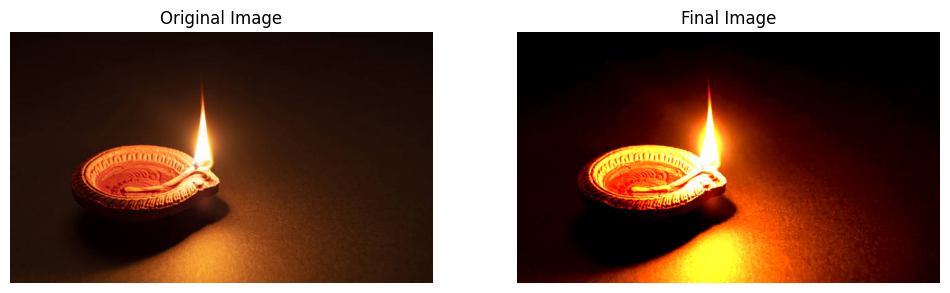

In [253]:
beauty(img)

In [254]:
"""
I had the image of a diya in the dark I thought I can make the picture more aestheic by increasing the brightness of the flame and at the same time decreasing the brightness of the room so I applied contrast for the image and then I realised that it made the object extremely bright thus I had to decrease the brightness and thus I decreased it. It suited the image because the diya which is the focus has been well highlighted and the background is made darker.
"""

'\nI had the image of a diya in the dark I thought I can make the picture more aestheic by increasing the brightness of the flame and at the same time decreasing the brightness of the room so I applied contrast for the image and then I realised that it made the object extremely bright thus I had to decrease the brightness and thus I decreased it. It suited the image because the diya which is the focus has been well highlighted and the background is made darker.\n'

In [255]:
def aesthetic(img):
  arrbad=np.array(img)
  arr = arrbad.astype(np.float32)
  tint = np.array([255,180, 120], dtype=np.float32)
  alpha=0.15
  gamma = 1.85

  arr = np.clip(alpha*tint+(1-alpha)*arr, 0, 255) # warm tint applied
  arr = np.clip(((arr / 255.0) ** gamma) * 255.0, 0, 255).astype(np.uint8) #gamma correction used

  arr = arr.astype(np.uint8)

  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.imshow(arrbad)
  plt.title("Original Image")
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(arr)
  plt.title("Final Image")
  plt.axis('off')
  plt.show()

  #used for sceneic sunset and sunrise pictures from deserts and beaches

In [256]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.
import base64
with open("sunset.jpeg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQEASABIAAD/4gIcSUNDX1BST0ZJTEUAAQEAAAIMbGNtcwIQAABtbnRyUkdCIFhZWiAH3AABABkAAwApADlhY3NwQVBQTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWxjbXMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAAF5jcHJ0AAABXAAAAAt3dHB0AAABaAAAABRia3B0AAABfAAAABRyWFlaAAABkAAAABRnWFlaAAABpAAAABRiWFlaAAABuAAAABRyVFJDAAABzAAAAEBnVFJDAAABzAAAAEBiVFJDAAABzAAAAEBkZXNjAAAAAAAAAANjMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0ZXh0AAAAAElYAABYWVogAAAAAAAA9tYAAQAAAADTLVhZWiAAAAAAAAADFgAAAzMAAAKkWFlaIAAAAAAAAG+iAAA49QAAA5BYWVogAAAAAAAAYpkAALeFAAAY2lhZWiAAAAAAAAAkoAAAD4QAALbPY3VydgAAAAAAAAAaAAAAywHJA2MFkghrC/YQPxVRGzQh8SmQMhg7kkYFUXdd7WtwegWJsZp8rGm/fdPD6TD////bAIQABQYGBwkHCgsLCg0ODQ4NExIQEBITHRUWFRYVHSsbIBsbIBsrJi4mIyYuJkQ2MDA2RE9CP0JPX1VVX3hyeJyc0gEFBgYHCQcKCwsKDQ4NDg0TEhAQEhMdFRYVFhUdKxsgGxsgGysmLiYjJi4mRDYwMDZET0I/Qk9fVVVfeHJ4nJzS/8IAEQgCvwTsAwEiAAIRAQMRAf/EADUAAAIDAQEBAQAAAAAAAAAAAAMEAQIFBgAHCAEAAwEB

(np.float64(-0.5), np.float64(1259.5), np.float64(702.5), np.float64(-0.5))

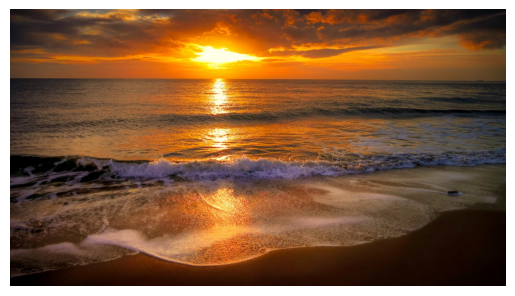

In [257]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image="""/9j/4AAQSkZJRgABAQEASABIAAD/4gIcSUNDX1BST0ZJTEUAAQEAAAIMbGNtcwIQAABtbnRyUkdCIFhZWiAH3AABABkAAwApADlhY3NwQVBQTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWxjbXMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAAF5jcHJ0AAABXAAAAAt3dHB0AAABaAAAABRia3B0AAABfAAAABRyWFlaAAABkAAAABRnWFlaAAABpAAAABRiWFlaAAABuAAAABRyVFJDAAABzAAAAEBnVFJDAAABzAAAAEBiVFJDAAABzAAAAEBkZXNjAAAAAAAAAANjMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0ZXh0AAAAAElYAABYWVogAAAAAAAA9tYAAQAAAADTLVhZWiAAAAAAAAADFgAAAzMAAAKkWFlaIAAAAAAAAG+iAAA49QAAA5BYWVogAAAAAAAAYpkAALeFAAAY2lhZWiAAAAAAAAAkoAAAD4QAALbPY3VydgAAAAAAAAAaAAAAywHJA2MFkghrC/YQPxVRGzQh8SmQMhg7kkYFUXdd7WtwegWJsZp8rGm/fdPD6TD////bAIQABQYGBwkHCgsLCg0ODQ4NExIQEBITHRUWFRYVHSsbIBsbIBsrJi4mIyYuJkQ2MDA2RE9CP0JPX1VVX3hyeJyc0gEFBgYHCQcKCwsKDQ4NDg0TEhAQEhMdFRYVFhUdKxsgGxsgGysmLiYjJi4mRDYwMDZET0I/Qk9fVVVfeHJ4nJzS/8IAEQgCvwTsAwEiAAIRAQMRAf/EADUAAAIDAQEBAQAAAAAAAAAAAAMEAQIFBgAHCAEAAwEBAQEBAAAAAAAAAAAAAQIDAAQFBgf/2gAMAwEAAhADEAAAAPyf5mRVe5PbVLWxzDCZJU0Wck06bTWI5Gm2XMYnRgNCOsuiaK6L+Y6JvEnp5Pzxuz0vJ7vnSX0zOvPgdHqiWnyS/QiY4zHQafD1cux0WT53e21gueX6Lx8jx24rmIdHOLiumzfc87mFugU9LkwgdAai8tbtVCvLx0oaJgs6fhkb2ElLGX9C+gBeY2vde+Y5hTKjJkCgtnzolV0YPYvJhE6F8GlpXWHS/PACUeYqGKQpR+wb1zE831Mm9Qej5WsNSkOlthN6PRfPYGNmZnSU9HzOX8yX0eBGdDqOLs5EffD830uRH0vNej5zOsu3ydTScj4+6kQHs4FSGp0cywtEDKuW7SuqJxYZQTYennANpGsfVEOs7BmWAvMEUoW0zzbKh8ZCh7kIu7drl6vWELk6xIsr9fEqE89PPAygOHQ4nUADVeYQHG8q+mMvotOIYPIK/mrgo+1Sg5N9QatpsptRuwK1plSr1qLmxo1bIXdocE0e2bdy2kfZ1MMkKdUtzMAdBHPw47J3gSQt9H0vlRua/wBUt8nhT9hp8fvz3+0s/EL89vt2F8ytO3QP80brh2bXD6vn9ves427856jxVVq8wEFsT6Hy9Xa5eKL0nLO6asg2qSPRqp29B8HntTnfSgBRkPfzD9eCIvFkrUkTOpAmvKq5LWVovJZVr41ue6kWFRXM18nJ14VdGvr+Pmedr0c9WUbRtAjQ8ylRErbKS9RhV1kuvho2m6ldFVi3j+1ig2Rep5ORoMp1jr2X1fn/AKJaNgXm+hl5+u/2cnNaTN1fOxtfO7uDNlpj1PKSho6UyQ6A+jmjYRP5frTk7GOVzU9L3vfPY4tstI4JukZh04ze4v5Xr5i2it08yfjK9PIELgOjlX8QlJPuKseZ6tV1x2l5A6nbwLzSvVzFrTxSQH9svXUOj4FOhFthG1zDYt9AGKxKUohaBh51EQWWlbDddk6BQz1krKXZUsHbssTY11/BnLIwDoCVsQbwr5ilCVSYoTze/mG0bJnaIrY5eliF8LU0Jm9zopQror5wOmGtfBow6GeeIr9W3x14W6yOXJKvSVxCA6VM+pOs9y5eXq6Y/OW4O/oY570L6mWOnTOQX90SBU3nQNjXRwWPeNQSxabr2YtGgtEGv5vdZPp1vK9Lkl+vQ7+Ll77Cfo8WcPQD3cqNWq9fKpGgF5T6lEoMLNenlU81SsK1JDItpVb5+lsyNPJ9TOX2cj3PDr6T359EIx+f6L+aRK0fbK7MaLafPXO6DKWqj3FX3fwDPQpSa2JKwrrN7QNusOhUzAitglqrAN7PrN1KgKxPRMPXyNjFVp+rStJaVUPTocVIolQskK54N6Aec90ZSvLl6q8b4TxlkYiwQ1kysuG8LLXpeIaHo4H61MPV9GStbVwrQkYtkoSwuUZUN7yxKoimLOisPeDZ8aUnZt9EgOZfUlWzyMxhU4yKzurjafPbbfztHhuzBbed25tdbwfBS3c7thmVOLrgBV67Lkzo+YI3dhKJ2YptUoZWjvgt8nZQ0zz9IfH9OwiWNz9AKaEc3Rn+0CI+ZOpM3zb6RI0zC6Red8m+xqc78ubrTctcXYbQ4ui2sGvMdLmnNgb5wn02b7nNgg2FvR5MgWst6HKna9ezn96a1kHxYrEVGIpJaGBUnULQtl4rTq4mqLQyvSkXL6L1INoZ2hzdT2PZSF6Xpb0fMLSosH2s2sbaieeF1bErTp5tKc/wL5s5mdDVD5SEDgrRU80Zhn3ZHgFdupCYX5Zc2Nk8358u81KvPn6gHn+jjTpHOzWm/IVKWDWNVqh6OeiblOnkzBalKzy66sEZXtWh2VXVthjU1wlcuumN0zqaUNsuumPKrf1+znsSLo5TDJOx2UmIu4ZQ8LHKAyUbaQPy9Gt5RrzvQUV1x3jke0K9nIqc9wy9WPbCN4ez9FfTdpjIgjcpmXDMCJKUXNWmawreKhqx5iCGfJRezEpWphEh0HtJ+Htqczfkenn31qcl02bPc1gmfY47Zt9/S5ByjvTD5xgsabMxil6BeSZM7flHO23/ABOPbTWzYSu2l2vgZ/Rq94w0uiW6k5gW+r6PHk00w93OhR0fZzqQenRCK3Iyemt0ZTP6zMK89XXH6PnZ5H5KqQ1RpgarcF5F4PD3oi0Q9XGhXRZeeRTduj81TrvK3JT0N7Rwrbco+RTdGjYZN0ytzNOupKvJ+6SvRzYNuhvOmAXo6cvThm0DVjjsP2GQu9ZGzh7RlGIbdKg5ZPtKseJN2E35eT91Y8nLe6AWbl0+mzR08+DTQ6+dULCnXxirUfRyTT1mUY2BMIuG5F1zDGz7tl7udK7pUKNtAivnEesCoVmysNipJUIT1J0OVGVZ4qJ0dsyhee+qXMtwd+65y3uW/TZCVe3jsC8dUa1v7OvJRbGgBlo6fLNCztAMT6J8a8Lqy96VE6P3nTPu9eFsx03ue5CeY87sPpo24Ojed5bb4a610+k86Gdp9MTyvL5X3fNHj+f37FCrc3fsIycpfYrxUy51PKMeNQDUwUuhV7O7nFOjV7eznVOkT66c6HaS7TiKbSvdz5ANgfp8mMPZp3c+TOmwyYVdtO8VTE25viLddk81MYPaQp48nTPo3AX7gi7gGuyqDyYekT6o5V912Z5evS+DYQehOyc1HUiXc+ztDbZldOlEz5ZpfnAStVeQsXZRhfLp487ZerjwSdGyictfrLifKX6mmHO23q5cSdgbLlRohOSoyB1AIoaKNc8HIJ64uL1cFbeQh1Yub06PdycxfcJ28WOW+c6WXkff51V2g9PLTzzjLjk1yz6Mg2u5z3wj9EXj7OcPssKca/Qe5ejnBdAv28eLXWr18+WV652dbRsjIEdlHBdi0biveUrTxLI4KNyCnLkBloZslUitSlVZdJG+dOraNs47pOa6Uvk5enMK/wCRkTOH4ukLZZ4eoR7mixGa6XG2fquM8XOw9ZryPHMq4fm4kugXD18vU7vA9x958+7b3v1Dx8zH6v3zfXy7+z5Ny3OfQVPk/Q+bq95j/Je5yKu2jx+xkJ7CnX6GMhvI93ZgKdADtPP02Z7IE0tfD4OamihmVfreMfxOtJaWJ6c+h6n5y94h7xHhZSXaz84zu5fpk/LKdkvo+PxtO6fYt8F7p5vpLfyyY7t8nBP1boM22xyW5xb6DpcrfJJ+yuCfxNz7L6e+UvfTawbgXuuqp5w+9AXHvoVtzo+ZBWQaWFZYFelFEIy9RWgwXQ4gBZ2QgBnZGtW0mAUo6z6lGUlPUZBquB5uxFTUAlMQevPZy8uPqI7/AD+Pt1dKT5wXUjeOI6yOsecIye1VCtlnVK2iSVs4zkqwTEmVPFGadpuRvg71DbGj5HfylusJHcfbrZO5OOvgNx0dpWi8Zbr4ovH+66xHIR2cLuNH2sOeOJ2Bp05AnZF4+vjnOnvxdXNn6SvLTMfu1xlQw/JV4gHeVFVtsirzcdRY7m2ejJGOGy7Mp3eWY5uCWZ304FOjyOm+n8Nh2Lfrvge973oT973tve97b3ve2973tq5Ox7hrz+P3EeB2fKs37KL5b0/z0H7hleL9B8RS+040PS+VC+lQen5uL6fV5/MI+je6T8/b7p6E/nqn0wspfLU/rOJ3H5gH6Ll+6nE07C/WnFe75mSfOL/SWYb5o99Lt5tuP6DQjxer3qe4X9SRu9q0vQzf1lStJG+mk1crpuKegqojj9mAqFpdKep60SVqupPKnrSboiN0dqlS0XRpVpJ0StXRiq9ayYqtVkYoCrAoh0ZLCqF1sOg7SvQY2Q1BUoC0FUqSBUK+NlF6Dp3zSI+gXNJN9U+QTm6ds2FPJfe9gTRd8nPzhv1xCJTZnNLz9Dpc0iW075nufq1i49o027YcyfVCj6qN+T91x0LZ0pR/yVgzkLTix4VwSWpabmYTtyX075l+W2oxik5qb7nMX4W7FjjT8K9mxxrPLHsHOKNz8vWxzbMYdFs8eaPF9F0Pmz/seP8AQS8A96PB2xOS1vp+HXnOL9Dzu+y1OJ9z3IIeH2dwDic/zOvo6c0P5703pzo5Ozae5AdV7XCwl52HlupdXvpmAt2derOGNk3WOY9RevryUvHtD8LIl308I7yDqh86GT9KPn/NTcpkWzakY9i2tGPSu2YxK3277Cg7cpi+x165dlzw1YxZosOiuQjTsm5REfVB4Sg+3nbECvTAtB0rItB0tEtR0ZC1HUqWBV2IOkPK1K1Zb1pDLYdaukj9Vx4VhuKjuOk6DuNp0GSlJjrYbr6tRshKiqVqQF+7nNcRFpe4yDXtS6te9bo1rVsr3tSUN/VsGvYdlck0slL2HZKlsK03JcNksawbK5LisljWBZHPYFkqxZe06sXXtOp7hvGprAtCjFlryoxdckKHsC3JQ5VS8V3Dpsc1WzJlgHSptQ52WFTc/KycB+flcfzCcnF0u7wZJeX3xfn9va5ewBy9eSu7kKr8na4BZduxoKvrdBRhBa7IVh1u0JcVbEBWl+nwS1pQHpipiIpQTI69EzVH7pjeK16JGlero1ClXVyUasNCqHkZyUpWjvkYm7sJQVehCpGhXNpaWpGTWsNeMb1J7HsWrz2K49bx16ZVKy06Ztb8+jVCHm7VOro5VOjTcopV1copVlbhOpVyilWVqFKsjUK0ZWqrVIZqtVkYoCpUwxUdSDHR0IOlClx1Gy2pWjoe617lm6xEoxdYoY5F7zZm691c9gXVySKUc1g2UlkchyyKUc/h2ShLDlKFsKwoWR2RyWHKVNYNlc1g2nU8gutDWDadT2BaNmLL2lRiy9kZiy9ouxda8aMXWvyVYItfls2ZAvNXSNmGgdQ2YfnnqFzDQ59U2Ufn5tQ2WSPPp2zPJPUjMgDRpn1d3AqAr0OAUFfobCqK93KI0pV0aY6M4NStMzRatwzRetVZhaKozC0XmzC0UVmFopJmFq2mzC0VkxUFaTPUEPM0ArRTwCDM9QUdT1DV5moKroWAw0zVFV0NAYZDQCGU9RQ6GoOrIWBQZkqOrzJUcNr0pVlvFKlSVHVlvWtSLwOpUlRxteBwyXikEXpWriaxQiaTQp4c0Za0kZWKzRtw3oN7fk1sScaWLK0Hc1sRWvO1b2IoES5QV7FurBIdlXRI2VcmZvyMG7LU6IG0Zm+fbTkPmkf8rJkfIrZ93io+fbTLOubOl5GzyOEBQ85IKXn4BQtoixU875aJ1fGrr+OSVkrNzC65D357rlPeFh3hvnrUzbPndYNS215XRp/Q+N+pL82xwX0bF+g8P45y/wBH4r5j7rnldHP9XLBIPvgGDZ/ShRUr0SJUPryvCcX526LjqjkKlKmhcTK9CdWR2+X5006505dKcypGnONbHW9lQDq1y/MunORVxsex409iMWrz264djtr2LBG17FjLtRiyybMYniNr2FQr0Fefhl6COall6P3NjZOnjlfEdTHNRt0vubgbo685UjpI5irL08cv4jp45aMOnjl4O6eOaqd00czJHSRzQynQBw5dehvzdVPSV5qpHSU52jboq854qvMT3c9qlqrX9BQ1ovYGxBEA8wI6t6hzpRYnmgQkNZcIkWXGNVqdZbVJKrZgszrSt4BvQzKsKplwSs0idDGFM3KUXlYlZuDMVoMSKxjavrB7CIqGap66WH71ZUNepeXrZOhHN0aF1y8tjNANy0h2dHkY/S890HDLuO05vpfvfhrZ+jh93NxnK/QPl3559nl551Oj0VhFW6MRJoNDUCc9UZXMn1xZEKlZ+vE1mOhIpOsEllWs8DKmRujzHXRHOiUOXbZtdPwGXGtQjF9qDtDOnSJhjRqGdMQW+o08dhsNYigxAc4x5ZF7uUUpechkzqvhpNUegJkTE1Ss17NkwziORsgPRvggN+ds4bpiMaXaOidNIuGCPeC4wKbUumDfX9tiRsVIxK765GL7Wl1wKaoKJn3dXIGLQFslR/21LEKz+tNlchxER6WhoCPGsjINmkGpCHVkyOWRs8rRwQnNM6D8xZWG4KUY17mnQLHrq0SMimxVzrSfFhHitmVITTdW8MhVorDHgRWLCVSh62KXnCToqHXWjZCdHyUzDuMRuq9a3D0LPUb5LJHePzlHXbf4hja+zsPw5feT0/2XzYud69P1vJ+Uc59W5v4n6vhsvsU/A9fkuY77K7q8hO2H1ExFdxXonjx0IKLg16POsqMPVqiIdYFJ59tGzDPHpMqee9vjrHnibw2TKK/dKIkOIOELYqSoBu5AfVG0zjSM872AZkoQLC6nosR6tQMhhEeZFjQaNIpVdkvCk9HO7VQJRz2cxRBrtVpNcbMsidHYwyabAKLUw/KYB5WiO+RGRopKDeZ7L2YDKpZtegAsl1SitKKWlwnc4GWCAjZoFCDGuvBo8VEquwdBtGYMvVToURaBbsmzNm5V8rveUYVm5GebzPrqxCiIr3ZAVGNYdkdgq40dq6lNnrLERy3p5GYsAk6EILwa5FbK95Gwr+oOq0ZMpeHQzC1J10QL2R3L57EbEm0wo40hfz7vnU9xVbcRvyHW0Ob6OUNnoec6Dq8fd3+S7v7r5n1D5nt+dh8D2vN/IfU8mjsY/wA79AgnsHh0cujux3Dn0dIXfLIs6K6CXcUdfepTpgO9AdMGPIL3jqxgsVhtCRlTo+SoDoqo0rN72evWOl5GWRm6VCNC2Su8uhrnQjvBUBSemDMeeNShMwpTyVJuSiF10r5wAOivzyCt1NuVXpPq449h06K2HcbZnBttrJEgqktpq0TNFqr1nkg37OvO+3VyMq7tGGarrLUGcc4yk0H4g505BPA6hmrp+Uu1TrtoxnwNqkwo21D1sLWlqoI2CEVxkKWZAzbyt6CEVq+0bzdH2oNWyw65CE7P+UqtHvOtB6F5vkm2LA4xNgqtjn0IVs8rt1bOFpyCtDtEZQxzB0i3spXhmwKNtCgZaxlwwby0CP1/RvTxPTr7w2ue5oVcjYgfFnmrojk2+TD24s9ui2At+3Wa9LwkMLs+TZsXHUxeX19KvH59E633AMMN2vPnYlZz2WIairWdxEl4513I6IqwaXVRoRHnIaeecXp5wYaVmk0FX1JO0wD1ltKoNK3qMqukKaC7IA1TMok9BVlX8qtaD4lHCF3F1iNhvDAG62vLeTdMXi1yvXU5M7boxZM4bV8aVbc9zLezoQlGZssdSQR12EwIzKKCWwAJxc4XghcM1VMDe1JAmsX28qWzIC9xnDoSCtfTQhOjYHzti0HQyRe6lu6R1Z7wQo+2VB2DnMlVKaBMCxHRX5t9Kb/sg0a6tc2MdQuC4M9UBwZ0shqbsU8uGdFaQamqEMwMq417SRMJsS60YkAszNVZZGrZ0htK2YJabsZVZV02ufXx6WeS9h1M8uWdOoa5W3LfqGOZCjdpocPfnft87lnWXvNL5ppz36A6P81uej5H34v5fx7D9M8T8LyOfp+zZ3xxVt9uj4lfnt9SF8vU6o/U1vnM1Tv68CnZOsBzVu7g6evNaR2lXKSddkeSO0dK+PV56VkSHX8qoybXspsGiujVlwo2B0nlteswNA77BC95hiW0QPIF5jamdsEdeZPtAOxI3pI5dnbkphW1b48+HqB7c9XaLhi227Y4IOjgjnVunoNy3un8Rz5d+GPLi6ip2ALprkcvPVw25QHaKjcnHViGwL7dsuTXWIwxSalwcgetUjGjThXyo0qjZ3tTxGyMto9Mmh9GAY90b1QsK0sGam6knbm1TjlGONRhWaOmJaaDWaIHVMkyjGuijtvxkBG6Njm6o/RV5mCOhHzpWG77mdnDTjkvbdl7CvOm2PMXG3UxUbOiQCyNEANwS9c4p4tRutKQjSblLOAoeatsYQ4R1qaklcwzPthD1zpRF8JY2HUplPPe6jNtHkI6YV+bni7QRsQm0sRlA3/E4ld2m3P326MMqulchLSs5O2bO0WN+cN0Fc2MXaLGmNfaLG2HO7adcA2uMHK9rV2yfal2nii6MbDnqdM0U4z3dKA8tTqwDc2HqiOvEg7inRDio76yH59T6TQr80F9LXvz/OAfSFeiHz+/c3A4SO7rtwpO2rhx1+wlTy9+pttzFuoqw5z3QiqmN7SvRcwe3Wqc4PoZRuYU62eenJx1tHHJ16cXbzc6TYABmi3YcYNdf22EXSo65HtgYAS0Y4+5Ri8DDNS2N7UqCwdWilwmecMw7jHUmGXwLtC0RhANs7c1fdMNzjvSqK2RfYIjcy/sNK2OPokwfZz7SkC+mVaZJ9ZQHO0lo2uPQlSl6Y2oB+rZW2pdGwo2M11X9pHR+aa6MU35727fPi32CSrgX3mpNhs61ue2LO/eFufe6S8KYLD+3z9HHz01YvyMdKfqhxK3UsXThT9Ss8+cB2iUbclHbiYcgHtpjXiq9cNjyrPQSWwx9HCU5+++Gq5dtuk2zjaASqJNEYXPFrJXRK9w2iA1aMh2MYxXcZ5zOhTuQck8NqMZVSGxAddRsjWrB72dFpHX9fo50ia8PJJVkPTBRZ0PocNSi9x3YInabaFciCNUGcbq5/WFfthcVRurML25bHXF6s4AyR0SsQMmMNdainhStps2zbsHaICojabtnGfXTnlpnA1lgEate2zmz1n1Ds6srjJoWQoTuMzfEnooR8a+lcHFtvVB5rR3nVOAbTYm+TGmyrZgNfQU51NKUonGxRDkUdI4zXDSBkX3qBske95XXcXNCvpX8tII3RGVG7DANbWWkxBI9ARsklYFWhDZpWzAKMHDx9d3w6nm9Ocxqs8NchvU8gXevrcqL7Ob9T9TyOP70ZfpPALWzXq8PMrX4r5/2pShfwPdshjr07NRPMvO7lRh5qjG0B8qs9jWxT59OyLjGcvRejrzV5N0THKnZd0KLOB7rr7aAMYPVDcpmWbaA1iYAAanZzUKxZ5I5e4bq5eT91xeiHED7oFZc0zuJzbFncrhiS2h18hIGp6fBsWyidEtIEDRjezhUnoyGbpIqF5KSUcwpFL0KyuG/VG4Tr0Sgz51FPAmyoS2HzVTnQAQNZhWyDYIOqKqvWwWEWDkRaSoyxhXdItYOxHs1rzfSbNSJ0ccFSVCHA4po7LMaZ1NsqvyrPQ0xTjXPGmQ66dTiK9EXHm3ejbjT53ub9mCa+oeFV7swlFc3Xoy5Mt2dUrsiBHPpDXIKY2avAufqssZfNYtPQ65pbyPcl681RxMHFCT0GI3nJzHTV59aW7F3g1SPp7PzI8B9K1+B6t+fveXT0OziR+rL9P63jcSL6FX0+Tkub7riPE728hHmPB9focznc+vZ0+ZwuR17u1eVWvutX5ANl6IWOem1fZLM2eCsF10Brq2hqFwjEbtE24uy9kGSl/BO+y8zpx9XPhX2EwoGTWVqLmtSeay2syM+SKyXMuHs5NjL9o9XPgM6duiCGZt2251zUo0V6kF0TW9K7IJiMp036YJaAoTuy2Gl09QMh8pKoEcrAtVVZqgFNSjoncp4vlA3R7ZdtAd5pCdowSu6FDlFcWkaKn8hou1SiZ9dALZCWIGaHLfL6DIyWlRy+W1NtM+WxKpXxuTrDCsobFG7NquXNG4q1FlYoV5KDMSkXEUbR1AM3UiOL2y4jS4omws2BqrwjXqG8rs0FWdItJQ9bNIxtAmwPrXpaNJsBcnYDnTzvshzxQdoo9aVELa/uSuIxoGlszTsBNu6fGhSP1T3zrSbm7ZvP6n6Dz3M3VX9fg+dYn0viPnPf5cu6tx1S55lGzn9gKd/N1x/my9V+lZfL0i+2DNnpRoyK9J9MLjmyN+2SnQdLTib9XL1PuX0aT30WzcfZnFb8y108NplMILfRDJrq+Gy42mEOOZ0KlKr7+IxFX9TzmpUa6ucXrq9EiK6lbSRq0Mrlrbq8Wyh7R4nHOSwyyqucV01imCyb1g6irw+zngsw6VFNSExaS7Ki9U6GnqUcWILxWANeUq1ZAcsFoIC6+hUZaV18HBDIwELSRoGxeNw+gWAth/HkknJa5puiVyQy7piTehI8jHKuylDXA3KgG/Fm7rGeXmuzdaVY1UpZWpiqV8KIcWit2kOlKUS9QN5krPZwDz3PaIxkdXHwNksS5q/JufpTM9fg788pwLRlvncqc+zFwj159GpkM254ROT0OPGb1HUNOixBeV6XZ9D87t5vb9H3fi+bXn/U/MfnefT5/q/GcVXpmbB6bR7uL59pdoxM8ztxy8b9Ri8zD8u3flo6odkln6vP2Z9dMAFDiKjK7WVQP1NcFnj6dDyalBos86t28fUU5gjDqac27ydHQbHPCou5ksC6uVbaVU6YVKJhAq7TNnXoS4G0r3KquUt4gEfQBlJdnHvDwPdPNt25otU3VVCdMTCsyyqVPnuDhENQ5YYbTYAsN1agdNizYIXy7mWNoE5NDDuVOe8o0zYw33QOc69g8smkTq3yaIdMWdeiNe5uF3S0yvdcKLMkbcgPC95/V0DPLex7UnDeB7xn55ZT9L1vjbM6fZD/Ggzp9zZ+BWm33UXw46n7JqfIetD9Jfgkgfpwvnzuf6hfkWZdXT7fywyz+nl+ULwv8AYK/ImIW+re+WEw+nh5XRlTXleI1k6kh2BVqtGoQoNqXyWZsc3tAVVzd15k47h/u2d1cvx9nvtfmv8sj6h5G+eM9xULx5exiF+WjptcN86z/pTbz+Nn+7qY/Mk/v+2w+HdX92avxfJUun2uLq+T218/z/AFMgGyT0ua3H9Mh2c/KZHdt+T3/PV+z2u/k+RKfUo7OX5jbv2M/zu/ZE25FjZX5+jn9bdxSlRxLzUCe3XxIKdEzVeT9t72XmMbo8uvPKFlunm7N3gr5uue49UjXQ8EZRbZU6OavWcyxdPL55CA6OZtWmjRZ7ogFxfNoG3+IIu7RXkXXXWWXNRK7HPvKXTrrzZ4/GKHdZnI567qnuX6jayYWuieeeEAN+EHqq36E5PZHVVRsuddaiWDMYJe1M/EkSo6Bz+iApz9ZCcPmfve4r+9723ve9t7zQNqeLsnYUmXGNWkjb+mPFc9pzXOVQPADK7V+nfHu0nfttT5B15r0a/wA+zud/p+v8o7uw0UNBQ42tysdU9/j+soy8VTtKc55dPvRA8Uz2kqeBv2mio4g3akozXWZ7fk+12ubhIHabXMB7eT6DnYOj4/p5g9BKVN8vL4pH0Q3x9QR+n+4jM6+T65i8Xpw6dHBKO0tToOUmg7PT+Ybfn+j9D0/nhlb6PzeJm9ENXIzEfe8fQ8D3VHfDzvlbcxEKldWy6WXo9DlTQtrs85EadtPFP83RqUjEXdSHnfDbjCGZyX3F+RU6+X6XofMtBX3KYaHTDsszmVkHVaHP5M23UsFyk9dLF6EiAPZ7LursBldTN00u7jvOJLL2ufx67K2t0eE8mU41apkP5BijTuPr9U28p4TbmLX5TnPch5vUpM1C3DulSRorxefYw6ZvnnyC+DALmceknzdJWMSqaArTu5ikmdRVCq7dY5qw2ovmXBcCoMbhvTPNWHwMYF6LC36sXL0OJwHEnll/MObZej0dSeWW1wDZ/t5s7lidG6GxM3eNtyh+pGdynuyxhsveA3N/qXznJQLN9CkRV7bc59fvfoPYmjdXa5m4dpoOINpv7ykLiegDfyc46yy/s9qDSQatEl1DocxYL1+Zz2kNC+kvA2ZScuqMjeVs/R8DZ8foqoSegZ9rH9m1LZgUOsiupt0B+ZSXbavL7F+eHWrVzQmbmlL102yB32g2GQRlOo0gHPrWVIM2oszzuqtICriiLrTMLyDDRz9IQOMe+RPbeeFvmrxPSOrlF3EgqdfClSeE1ma/VzbeRdGuytXG0+cMhidqp7Uo2C9rmQ897fa25k+75H5IvTzDc7fopXcz7pS7csPsZx42vaDYc6fZEpyLaohs9PaCTjX1IZc47VBhWtAAq3qR71KYyKatOtJqd8+N19+5ePn6A0D8qn6YXHIX6QRfkjauHLH9m+y7Wmw/amXZHnAvZl+aK4fUL8CiD3AM/sWKerlfPGHZ8AD0pe94gUnRNiL6AnmqnEY5zVTbur886Xo3Ys8QpR/oXvm7mT6FPG5jP9CW5pk7pQ8cyD1zvHPszS5kQMzF3+W4ps9ZyL8jvbvMlu/QDzG7Y4CZLjsS86m+65PKQbbJeTOo1vTmjNgRaiXWA4VB0Y+dIwessJlc0+eaYbetyrtG6YHMkD6Otgu5tDW4iJ7uw8dvhtayi82PTLz0NdHBHDdBjikbLK16QU6fB8d1xueI40FQWm+eLWtzNz6nWETcQ72BtuNB21Vbj7dawo5T3WDmeaZ3PIci+lcbIvrTtkD2BkZHtapCBGq7Csc2CkvWyJmZkqIl/OPWH6gLAvOsjvBAwM0GSE6AFUZkk1laBGkFg7UCWmVcbMMqgX/MGdTFD6lel9xyajs83kMuI7IXBuqnQ6bGe7xHO6aDf+fdE8h4s3YZaDn2d/VY5rHSZt2Ch0bDN8zyPq4Iz+cl7SJPyrXfZxPNg6DLGUNkuMNRy28r8s410CbltLt85K4A3VLJbI7rK6lx28Tc53ee5XQRm+b1EVR3r+L7buFVH80NyandNeVbhDd7ao+f6HXFbYleoFRskurboTPDoVdeT3GhTxjvu81+WX6xJDzeF2uDWWXVkndzZ4tYgbGjQVjqr+tI2uamYp6kV7eFRDos5pUZ66bqODzBFZBjTYDY1ujMrcgTpyz3KC7MSnjnNvPwo0Ac6OSiZS4xn2A6IYgEZubopnDhY5Vdfc9hjTrJZJLlqsOma4vxXtI40pTq6c8V0264giOhtztmG/7GYddKF7kEkA2Q9VQbOgVqR4fgKJpQeJZBTZmivsGBC9gOtvEgGVczvSgCGaIiYcdXtGOluKN2kg8fp9iXNzGj0BS2ITRx5ssYm9F8ncZNC3JU6oDTAygF21K85h2n9Hp8yXO+mJ8gpF+9J89ON05Oeoy7OEK+GY5pyhzEuteB5Rf6IRX5nodbow/ya/3gXB0/KdrtM7qThH+vdXfONTYojZ99KhOd7SbqIHJH1GKr8lXWOW3g+NN2iskythWya7RnTm3fH6Z3k29GqD/0+PnfR+X4n3DlS/zTA+w/KfW4cxXcX9PzsPRZXYUWbeU5FdCEfOjYcGys/etjkA6ASHnLaqyUhn3pWs4hCV1NLnHw3QG5/Py9w5xBMveE4DRG7ICO0Fws/v5y/MVPp+W24T3UZhGS1YeI2wUBuwkNlkwzafig8UZlWDMoppRQruDpNcDpapl02rsOcH1FGTmK9RTDmz64NpbzRldJXMjBhdrIIbrjJ4dJfNZXFtX201OElddlPClJX2rUI2VjPrQpSngnbSGRN6b+thbproNZfNWXvec+fqzl2+jwGrFtWqemcXSxess+dw30jjJ7BNv6cWykeo0A9eL+naa0+RsfWwSb5x0fQ6kX5zVTqr773IY0z1ynNu0m9Xk+rcAYttTry9+r11PM6j6UrLvAzXVwWeywbIIKtsZaXnwxrFBoyYnP1pMaHo3S2czq5VzrbQuHtx87tcdzu5fStQXgHewldi9T0ZuAMl9bl5E8Hqcqtfm/G/ZOK9anJC6tzr5/nuf3ub2c/F6PRIlFzF9HrDcwC66+otbkE/ZLBxWt1pmV6BADHjoszZKHS7QwLQxzjb1inLU6u5nmdEqxk2XcW+XZXQsyXB65yIW5dVLGq4GNsp2QPavROXQ7kJXhFvoKrT4JbvFtPjY6LMZFLKIsmtTGGRtiy5w0ozSHOUT8VaqGpVkU+oq/z36Tl2nw2h0Fro7pZraFUxo5ah8WcE6mriuu9YjKR31G3Nj2szInU9AOe1yx1bZ0IK1l0m2JNhU6oMcjGi+lMDV1XJ1yNFtYsFhLOi3QlxcMbqEvdBQcy50fkbiUu6fG43oNfIVkHd7bRuRjtMkGRNZgMaqlVLiefGZw6jJy+e0IbDs7V5oO5Wwx1wHrC2MHbxxYToHkq2xnLw6tpzDc5Owrw783U06X0bRsc5scjx2fNeE/oeZn9xx8nKdDn68UvorK1891bYVvHBW0MgegfmehyrdeJzG2r1WzxEYty5zDCzBVtevVLwTCvEUMiICgyziuuZYodI8EMilTA/gqlOp1uCdaXXewXmm+OpCp2Mwh2gXEIRsRheae5GANht5IBsumNUJD98Ujo8tEOjXs+zzKJZN00K4ZyukuoBsFZ0ijDBtBwyrmWGY8nJmVgdxpDaGFpFLG9kCnOTliw0fZ1QrlRJnaVednbpjcqZ91FOds4jHKqqwKbhdT2a43TsCA6r5z5LTpa7kyYOiq4lTFAaFlwadNgv10DkVN5qqLaKS4LreDeL64IwDt2EEjtk3IpMnXZuKxhrlqkro7+TskIjV6BDqCqFKgVWfAy/dGtiAzFJ9F5C4lFcTsMlGybPOJfJOQsye0+4+02kk9x9aZFNdKIa8zz7olrM8VVTsOEdX0/wA2W6vG+k+wn48OqEebWetyGiE9uWuAZ9TAtrYvRfPjQ53r4z1ov18xVLDrFzMiKoYVPUQckgC0D8y57jS5TMs3YqsNtMqk7U5TMqdcq43lMsuo7iFKdHXnfNulHjzhq1RtlYohYhiylmRoNIYXJnBaWkukuysiAI5qqNiGxhrlMVSGDhkPEaOeyHamcwmQzKFQGhiMyyWKtoHKba4118LoiTIeEpAzFAwwvYPsGgCnKWQ2wsQEYaJikXsG346vZkRwxrm8rnYG7GtGgLhqVYcZSM5eKd1KOIRlvq8wxl368q2j9Ionmg7hMd5dp5DiuOhqYZg2zkuZM2fRKuMfUS0QxgRKOmKh1eoHxq/h6RkqsbxJVHbQ1VbJeLhpQDCo0pprKXSms3m3lbVlUvL0Ou5hoWPrZFJHqvc7t8lOrtg6q8bNjM7nTIarIFcGX0dDuUnLdHiIh6BGRp53p+Wr5hLq5xxZCk/CmXVA9WHURRlAn0kKDlixCsuCARI2AoAGsIjNK7Y5BbZllyRaniiBGLkU8SrARoGyiXYM6YtNJLAESmyMplHkHWlCD2DQlry5cL1sHLasQQWFw7aBcy7AYH8h0Eg9m4MpJp4tCWq4ZGGMpaD8datY2tWIOmIg6axVtfwoON4Pti+DGH04+hSfYqDVTXeNnG2pfJgDr9H5l0gfcW5y2HV5WA8ytGsRXxDbbkqc0TSaGUEwujefTSG19HI0lYlBOBuc60IyOm5LvuMlXAdCwMWY8HZlY03acFadI8oIP0SIlNntbnpDdbn5tVatkLl3lc802cjPeWxwianVljMdA1IV9NtLTVX5OnX0ssnB3dMxiO8Wa18I4nro2OZZ2c/nXutpAV6DGbbPrlQO4/seI0poM9XFlQUVoCES7JF4MNaK+2M2mw2PeGGBJhlmCcxzs/2iXDKHsUM8S2oM7L8+IhcRlap6gBOjIlBNNuia4VyM0eDmcwAIuJkIC6rdAuce1ds9h0W1IgREDYRO9SslTRSXxsJ/JZTYqy2BKUhjeKyRMe8F9HvYerNS3omMsVtXaKzDaI9DaI9BEx6NvqTPLDrbrn/mTyn6Hy6cyeUtnEQE1sjOk72si866r/JaOp1FMeEbWHiBm3a15tRW1gYzYXojE8lea0FGmSdjJsjO6WT07NXHK9Jufrr5C5sSDCVIWram3pWRqFhlspoejNrKsJozGV5UEgwWLsNZ91fTHC6VL5TYUj0lX40WK6ebloZ3h7CNKbXn9qfcAd4oI10mJTyDa9TPAnoBueHJ1at78kl2q/cnFT1IPS4uWp04+zi51TpEunmxabtXGV7VBhj30qOE6ty01yjq2cPkUY7VsQo2uXn1WXoR5AWXTWTnKW6wMDIEFgyudchZJlTIxIaFXCJ+yzcYytLAJgpeEcHyqjYGVaERIWqnJ1cC2Tg6dEby8/BKv5daqIparmPe8TMTG3picvq2rhWPez+ialZrEYTX0FYj1W3o9DD0R4jusTeUnXM0zpBmVGPbLY/b4o3Lt7JjmegwXIXW2MN5To5YDKTLMLjHkRBmArVB6/2F4PtKk2g3N6HY6+bmg9XqFso+3panIx2vptx2vtMI2fbXojZGP1wE3zzN77nFHDD18oh1KAjTArHGq3spTnvbIwyoXdZHytlvVByXNh3nrmsazvF2Y2qzocfRksvt8NM/R8fkSjK7CS8qaraYUWNG6c1PdToAcvn9qdfbhNLqh0VOeUvz72dmR3culGcNp6VFEHU6srspk8rUeYDxcZW12wRAYsFD6ihDFg1ZXUxAcag1KlTVUpg4MK5BwqmwcWYs6p1i+C7y2cVZ8F5lUsOctSRDBELxyuIPSymwbYKD7UyxDMr1ipFqxGPq2mmr6Yx9Hvbe9X2Fqert6ayRNfQF9W0HVrarCtbQwiswR6lqttkdG5VcnPKjG0M4yvvKZVld5nPuMyJTwzEgKNf0EGvPjhoraoN/CKMzdnowznd4Ol1032ucOlOgLheV9+MW6HatlXjTVYwjqehHnHgWRRUFPC6dNdxfLfQMEpwxu0cI5d7cspxnmDY5gOquDhO7rs3w2+jmDZ+rLHJ0Z2kFjn6aFmeKxZAXnYpk86Z2l8lZa7y2Am1tPKxiV6HMVo/RLLFpK3iwuIXRyz69eiAzWs8wCXEyBeTzrR1D5wzPSlKaTuuerKHdQBtreUOpXCeWTEcYWYLLOoMjS1mmGZGgIrWwmiMseuJlzo06MuVmdAuFymnMI7VHy4mXdf4sbDcJz1CvQI5VWBV4E2gdhsIrMNGK2jCk+mhiYjG1fRt6PV2mIg6Yj20+j2Ho9470R7CI9DD1feKRW0ER70HNEpdH0BUhHbIt4FmjCSkxbaivlv63SZ+Pe7M2pyuptlYh0VCZ75unMzwa3aY00puc4Vt1RuZK531Ur4uDzKAadsgI3Wu/PAZvq+l8a1C31vS+Wbef6MXi+i5LaaxDc75YNkZ2PTWWYZNNc2GCy8rmtpqsQZobZOZ/Fi3O9L+rDoswNGNtA3NhWvUp8oGb6geV0ubuec57Uh0UlQTXR9uxRMhbWyaxETxK8lWeY1bczlcN68Dqtp2miS5KTR2M1KkiOq3eZl2/ArjiALuZtMuk9xTLL3Z+BRon0e/zQDp9TB81s6d6Lhxlez53JXw66nIhcdax8/UZfoa3z+tF6rFzBmTQAxtatIfW8OCpKRUiaUqdI/UYTEQ0pivssxMHR6vn1oj2Poj23o9U6ImDon3tvej23o97b0egj1Zhkj3oyxEww96Knd6XTGnUBtddc4EMriCoFS+3k2Q7V8aCejf5cjP0ZOaKp6W/Nex6k3KPKeiHlNI4gPjXKDZIFF4UDFDFMwq3ZTZstWU5h7iGlvK6Astv5Wu56fd+a8jn/Sun+ZO6i/1yMXd4rjKjnE7iUEGOS6s8elAAlri0La6iik6ac4qcr6POSJaamggvx9rJBe5unTVDWHRojHnHoo6uF5M5h6Vio85gU5QndN08mJrPVxwPoPIZabvuX+dq9XJ3GVyorw3lcmKT0IzZoj0JRkchSCGvK+Ks1BDA9Q0ZGKhgqWoPMpRirRSVHV1vStShIDVlLUcNrepBW3heIvSKE3rWp1qRBWKzR1mIjSmPVbW9HiZiY2iJjasTB0ejx3vejb0R7afe9t6a+wtHoKVi0Faxep1YmGFfek7vFM00rNSmRc3KIgdb2VA2nfPMp0KAqKOQtALdR1wYFNFJ5Wrtr6HNNZto6MKzmhyxTt0eNRduEzdBXEd5dGWdzl1fqOdwfKxiAvmY8P0bsmWtChhzIcXUc7bql9i6z83+A/TCvxDuUbpktJ2VeUb3EQuVoDshzQqOK9Tr35uoQjW5+iB4PQqyWmuLn7ZbwtYBtU+nzdWHOi+ZZF9R8x5rQbyOuOtPA8v08/0jlORQtz6iKQ+zjOIEX52KhiiEkHmx4HGBfBsULIfDFgVSpvCgg1RecEpWuFoHUglKVdLVpVxeBwVJAoOJUUEEgdSCwP2F4p461YqRNYgiYipnMT5tX3o2n0eOtEQNMRB3vR473vV2mPQd70QRf1LBfejx0xXxS1Yjaa+qwtX0HerPjjSOQCkStjqymSZbsiYMwZFkMyM4FM1CTFmmdALdk4w3GMqUfcYzc9X6jY4+Vp0GfhVw1pySLnqKeJbgPpVMRW6OzK8ih7LyKOeVtNmbKEVmbKeXN2UGH1/ZUh9imeVA4znepuw6L5jdW+xbHwaI0/QE/A9aVPpIOWaDdL7nxSfpnOQ9K/Vn4cKP3mh8yzgfr5vhSBn9yzPkIaS+kc9ydOrn2086l4OrgHaBRUHWd6UrRL+p4rf1KnGpTxJPDgKW4LZSeF7YnqRheBwwvWtWUlR1KloOGFq0oykqKDijp46YipF4rJT3og6fVjafV9hPq1ItSIZJmnjiRS23vVja3o9tNfRtMeqdPoja0RO0VtDCPegj3o8d73q4T6PZJ9WCJr6DvR6DveipR67JZ0qNpdTmV0qumdoOLhqyTwLWvzC6t1afMXzbyuZbZsqZFYhBFVy3FM2LYNg5br2GNYHgx5B7ZiVvIzMr1xastKs15W4LF1b5mYXgFuFZXM+W8SzZSQXr53lOlXPvi4RDwz/kfAvnzLqdK2ZVTpxm2LatM2MNGM6DtKM72DsJXYNwtXBuFYwbqDxxhCq6kpQbqao6lDyDxUsCkk1ReGPUcgkkVSp5WnKfy8HHqGpU1R1bFpSML0rUi9Yqd6swd70wU9WYI9E12tHqlJiKkT6PEeiPHRE12973jp9Htp9E7R71drej20e9B3o9BE+j21q+9t6s1I973ivojxX3oqRNfeO9HvHe96Mse9Bn1bHHiV+xW5b222mh5kOKslZ962NprK2klbrS16XRrlDebktSyuSQ3Uk9TwJIHBJ4DGJ5BOx4FAxrLzmYleRmZVkZrynsWZV9s15S2LXlpGZgHtmLq2BPdXwzcKzi15eQWfLV2clWoLnlJGahaCGvLTizKvsGfLexZlbwDPlvDMwCGzAx1YFoMTIaV5IPK/tmYX9seF/bM+WnY/l52PAIwN4MHHgE4FgXiSwP2xIpOE+r4i0RGW8U9tas1On1alZ9XxSYiDpmvtpr6p1oj23vejaZrO0x6NvR6CJ9Htp9X23vegj0TVt6YjC0V8VtFfZfe94iIn21fR4n3veIj3vYR6fZBe955+9723ve9tMx4NNo8Gm1bB7XHK0Lccq5LDlSbwvAmkPgTwLw15FJF5FGJ4DbAvg2DEkdg9prIN/Uga8ROM+9GNpiASep7a8VnG00gYvg22LIZ2JYE7HgcbG8LwxvAkY3gzsaBQcaA22LYEjF8ONi+HGJpFGF61qResQwn1alSRFdrSKdiepG1/UjYlhe2J4c7W9T21vDnAnh22v6vhr+r7afR7b1fQd70wdNYhk96sZZ9EHW9WdveiNrRX2Fo9B0x723pj20zWQYiPMJiJwms0Ot6IOtWPYej3ike94j019tato2iswdHvQRMTG3prOExHtv/8QAJhAAAgIDAQEBAQEAAwEBAQEAAQIDEQASEwQUEAUgFTBQQAZgFv/aAAgBAQABAgH/AECCGDiQOGsydu6+hZxN0sR8uRXFQpWDAoxSJ+/1/Q008kgOEFSuummoAWqwfhGV+X0Enbt1EzS9DKWw/wCAuI2zYrF9tjj/AI0DJ+0YhhAICLu2UVo5X4Msk5VVmxP5eD8qgAOYJJJw/pytaw/5P+qrXTTWq/xYYENtmgjCBQESOIRL52i+f4z5W83zp5hhlPoHo+gy5zcEMjRmPkPP8nAw8uWpH5f5d5ttvtgBXUjUr/kR1okbxug/VzQ5eMSoiWGLymPWVSqJWlZZIyqC8ytEYcJv8rQQ8eZFUAmFwSTh/Kw/l4f9VWuunLS+gwZRXTSv8AggqVTmZO3ZZuyelf6B9g9ye9/cnvPuX0+mTeF+oMMR8kMEsWk0KRx+WbztkWHzp4T4p4WZmP8A11X5dgs2V+ISzAZsZKdSmK2wRlIK0maotFipRY1icMTgXXUjFGMrYSTdaiNPPypsGHCtYMUcyuNjHLv/ADVa6aa0FvD/AIH5d3laaaaVayCfuZdr233369em+17devXAInj9C+z75Pa07svpHoEvc+j/AJAemT0zE4RVf7r/AAQfxSY6Yj/R/A2UVxVrUqDjZHOvqWVkt4UVsYVqBa4w1ApsYa8eIgESoAcOEYfwjUIoLs2xJ/1qsXLjyEepJfYt/oNvte17bbbbbb7XeXf+KAoYpWQyEnL7dhKs/br16GUvVr6TOPSX6NIcOEftVVVVBUj5spVkomq/Ko435VVh/FyOV5WP4BHhcydtl9AnSeRzJuWwNsMLbbfl4ygUW2u8o/gwm9j+nKrURrEF2L7Fy5P/AFD/AKq/3QUIIeCwDzcBHpoQf83d7bb7bbbBt7va7/aqqqqqgFQEwN52STCup/K0rKyta/BGCs2xhK0qtHo8dJ55oK/NNarnppWippWuBmYvthy9try7vNeQh48Pm+fU4cOWf/lqv+oMHRwFQEjnowP5qYytflfozXTTnVVWuutVrrrrrrroI18wZH7DJ4ShBBGtft/tVl7Xe+1k3YMOSTtKSP1VePC5fffcOZN+hYtdZRXUj9oR8VirFXnrsXLlyx/KrXXXXXXXXXXXX/AAAXTnz58+Ig+fjz1qgExWUlfw4zNhWsvNOeuH9Db3lVQ/K1000000CaReblzsoksixZOjpyKalStV/mqrUpX+qGAMhFfoYk/5oL+UV01GEfuvMQiDmqqrLoIymHCpXXTnz58+elVrrrWtVrr/AIH4MBy7BGDApQoV1qgdt+gl+nt0Bw4RYffpf5X6Dd/lUMAChdOfMRjzcOYh4cdNAt7kZJmmrKVqqqvwZrocKstVVV+Lhxl/KrKrXQJoI9dddddddNOXz8BFQXny5lOIj1ZSnMQ/P83DkyGMrWHCdrvDg/b/AMD9H+BgIYMJOhY5rz1KczHQ/L22wZoY6rWqys1oLqFrQI0IRVAAQacq5hCdddOfPmUKFChQoYzEY9aqq/BhxCxKlNdNa1oC8Meuoh5LCYORQJ+aiMQiLlzMXPQLTDXnrVVqIxHppz01ojUqQ+H8OEn9qiPyqqqr/F3g/dtr/BirQVQyNEVP4f0G0ez+VWoWtf0MDe4lCqPm+QecQiPmBrppprrqVEbIUKFChXUqVKaFNdddarFDfmpRYjDpy5iLlrsMOA77c+Qj1ClPysKaUy61rrrpprX+K/L2LFjhBUxsjIVWNYiCKI/ddefPlx5cuXPX8P8Ai7sPvte21/lUR/iwf2qqteYj5hQuDEkGQyhlnWRYD/PPlXwnxGLTTQrhUqVKlShUggiqqtRCU1qKFvD80PmePrqIeI8/NovmXyjzmHiPJ8zeb5+eUTv13Lb7Zz5CAeYeX5vn48uetEUQQRVa6FSCCObR89WYnKqli4/g/AAugiEPHly010011of5qtdNda1589NNNAtVrVahVQDUKqfPxjTkkQISOYSRzhvyXz/IPKnlaF4iCpUqQQVZSpFV5/A38xfInik8kkQgWLzvGjIYT5ORn7SelvUvvX+h/wAgPU0nU+5vafUZdeYgHiH80fyx/MX+d8Q83Dlrl3d/5Juz+n/NEY35zaLjz58PnWPANQoUD8AC8jCYtNNddaqq1qv+iv8AFVWuunPQAYVoKqr+CKIHFdXPl+NPJGn+jC3lbwt5GQgghgVKGMojeb0N6W949Te8yCUzLOPcfaPc/oJ/zWVqI18yeFfCvm5AZf8AutCL226dTMZ+xk3L7bX/ALOURpWta61/kG7/AAYP8VqE058+fPlz0111rWq11oDXVYx5z518w8fxfKIBHrqV11CgADFbcEGKZPYs9/8AUQfG3hf+c3keBoyrAjK0058eKedvGPIfK5OVVa666cl8qeKOHbe6qqy+nQyFib/KytdNNcObb7779OnTp06dOnTcvv03332222200000011051QIZG01/NdNOfHjx48uHz/N8vyDyfL86x10+r6B6WIwOJg+2ahefDgPOIEgXxr444QP/gIk8h/nP42jObWUMXBV2I0aF/Af5z+H4x4B/PH88eAeUf6vbYSdOnTffqZi+22213/2Xd3ttttsTd3d3/jba9tg/QSibt06dN9r/L36devXrthGbdN9v81VA9OgcOHEgk6CXqJh6N6GRzr6x6O3TYG/3bbr9D+9ve3pHtH9Bfd9s0zxmMoPOPLw4jOvYekev6e/ft132u8r8u/93e/Tp06b7Xd3d/4qqr/qr/tu7222v/FhhJ13332232222v8A+MMHDh9wwIwHZXWTdGRdQmdGlaUvjflZRXDjZu0hcvtd3d/gxSX2vba9sJ2u7vbbffffffba7u7u7v8A6ru7u7/6rv8A8S/+2xgwf42DbbBg6yRyLJYjaPk8JBGE7b9Opk3OEVWunPnpX7d7b77777Xdf9F3d3d3d3d3d7bbbbbbXd3d3d3d3d3d3d3f/g3d3/m7u7/BgIbbYMJBJ0Egfpv06b777E5Ry9yxffba7u7/AM3f/Rd3tvttttttvvvvtvvtd3d3d3d3d3d3d3d3d3d5f/oXd3d3d3d3dgj8GAgghtttt9tttrskkm7222u/28u8u7u7vba7u7u7u7v9vLy7v/xdtr222222u7u7u7u7/wA3/wDFd5d/t2CCDYO22222+++2xYttttd3d3d3d3d3d3d3d3d3d3d3d3d3d3l/4u/8X/5NftfoFVlV+j8GVg/L/wAXtttd7b779Ogk6CXp07dBMJkeHPGjr6GmxpTP3+g+n6fo+n6vq+r6vq+r6vq+r6vq+r6vq+n6vq+n6fq+n6fp+n6fq+n6fp+n6vp+n6fp+n6Po+n6Pp+j6Po+j6Pp+n6Po+jv379+3bt37du3bt27d+3bt2PpPqE3Tp03322H+aqv2h/gCsA1oKE0C89NcC1roI9dMrXSs00zXXXWtNNQnPlpoIfn4LHF5YII11kl9cbo8RiYa8OemuhiKc+ZjCcuWmmtVVFdStVVVlUf0m/8E/t3ZzbfcydevXr17d+3bt279+/br27duvYzdu3br06dN9rwZeVlBa11rBgwfmtLgXRRVAHKP5QUDXKAGUBlVhzaqIJv8oLoIynJU0jGkeeUxyM7TetJoZY3h0VGiMQBFCPQx1RwYco5e1gn9s4B+7dN+hYtsGvbcHXXWib0/GUYBroUC89OfPny00101wDmYufMx6aFaytNdNco4Dg/KqlAb91zUKMH6IgoGaBQCun4MOALmmv6PzXX8oRVrzdFUIilFGuqeeLx+f8AnCPV4poPXHXJvMfMPOyCMxuxGoXe+l2GJvr36iTayQM11IVDHrzZNSM5cTEvn4CD5mgEOpiK1gTXTkEMehj05mPXnxaKivPj8/AQGDlyZNaYBNSunOxla5ZzWjg/AM2Db3YbYTCboCo1oYcAyrClQANddddcOb4P0iyuoUEppXRcmng/pD+rD/Ti/prL7IJ/5+hjMUvmfyr4h428r+X5/m5hc1wJy5cjGYhCYxCIeQjojQjBmnPnrmmoWtitWMObbMK/NWVlP5qcLsRIG3LUBhxoxDnTZm3ab6O59G/XocP4MA/BhAwDKC6gfmuoyigTNNVysurVcH4FoZWVmtVWuL+Mb6DN8ID7q6lZe8TLkaquPHP/AD28zRdDMZl9DekziWSUMcLGQzd+6zdeqvtusnYzb5tuH6F+xlMwlM/X6j6D6BP3MwcSDNDEYeHJk11sNWmuHDha8IZOJQrX5qcsy9dvw/mpjrBgNa1VD/Fa66hKGDBgFUMAwZX5WajB+gEYSMP4BVFddssOJQ/Xqc1VEAaIwzlkn23n9HqdYpcMTRPBwPmPmWARmCsKgAc9NbDWPyj+MNAlbb2RhGpi1ujFyI1LKyzlt+rejrscAONnHny1LHB+biTttew9HYssh9BcGwboJW+4foJOglEm4bpeWH33EoewVJKkD8UnNi24bfBgYfgzcHeydrvCQu12v4Crb9RK3pj9ME6TwTw+oDHaX0SN6HEVPj4VOByMKaCIxhNGyxIMqkzpvsxDDL3xpvpDF+7ejv06x4YxhwZ0wiiGalyNsJBB0OM22VwMPA+X5jFpqV56/mumnPTWq/AKrAuoXBgw5eVscApRlXvu5UgKcMeuoTZMvKMZTmyVrVBd99hL3MnZZN9hKmRyDHdiZ09P1e3+j9UmTwwrKwjZZMZWhOGTqS5L7qb27b4+BSDG2Fs5shXXnoY1i5mEgCxG0BVZkzXYfnNlBx2AymiMPHQYfwrVbFyxYkArX7tWvLTWqI0OBNNNNAnLkIxGY1TXQxHNcpU15iLiI9eYjzQR63hIzbr032OAnN+uHKolcIXDkgVXwAzj1rP4HXy+lFknkn9sv9CRyEiEmjedV1MZCrVanNSC3XpuPSPRu2NKX7D0rKcaVZB6B6frM7E/hmPpHr+s+37O49Tej6V9Q9v3D2/8if6J9o9p/ofX3EqnLrAbbLJvXXmfyghTTWtdSmm4fpv0WToJVfNSowEH9OWDebbAn958wlFaGFlGUV1CFSo/ASmuuCNYOfMIqRecxmHkixhfOjL5W8E38n1+c4XCW/qMqymfpLOZO6yWZjJ1MmwGjMXDs5fCGQgYknYt0OHO3YSEMn5rdBxEYtc1sLpqM00Kg2VMeUcDYU1rL2Oa306GTffp033sm76LMZQ22DNzhfZX6DAla1zji5LHTMxVh+ahwMZtiAxwE4oZuqs8wl+pZmmX0D3fW/p+tZxO3pX0r/RT+m/9Py//AKKf+8P67f009TzfQZW9Lejt2Pob0H0H0dNllEhLfhdSSJtiuq4AEK8jFppprryMPIxc9K0589NOZhC0V41/g5tmlFf0Jx4mPL/arXnzKUU105cyTJ03tDmxKPmwkI2jbQAlcZlOmWDVHBjyiUIhLq59CyiYyh91k3dst31wZuU6bB1fnrrhKMrdyBhFY2Us7IJBIV1zbASQlKKrmBqq8ufLiE1qtOXDnqU1CaaaGPnpz5cuWmhQprpppz4/N8vx/H8vDly5a6GLTifP8/y/KfL83ziLnWun7WwAwYDufxcGFrH4wA0VLDYsnYzq59ccvY+2R48AYxSSRLFGPxXGa7swJOvIxcinPACOXz8NOPARp5z5xAITEkXDhzPmMXHm8SxGDjx5GHSlUIMoR68uSx8uTJRj005iHlyMKw8BFzKqvExcOQiMRhbz/OYDDz4cuXPnWBdNda1MXMLrWhG25w5fTpeFv8hTl6cwm1LKZS6zdux9KTBzMMLVoSqCEorKBEMVDFpYIcJqXWWMvAuU2A5tpRwDmFEXNotUiWJo0iaBYgMGXroYuYjCNGVqtCoTTTjwMIi48vwYc0OF9tthJ1EnUSbHOhlJ1roc0KnNxL0MjNz001GH81K777b9umFyb6B8J110oqQ2Ba10KbZsH2L0CcBK6qh84j+ZIjGIvnWML82gUL8w87Q/OI8+VfKITBVaLJmvJl0XzahXUC1jK60DbLuG4CKtFhWJY1/nNByHmfx/L8Z8a+QeP5m8LePh8zRkaajDmgjVSnPjwERhaLUnsz68jGQIhCVCjFjKE0RsJ996LgkduvQ4VwNtlEFcvL2wgjmy0c6Biwav22m+jtuHsTF+lq+tg9OzOrbrhxnEhzkIuXNmSZsX8Z4m5FkTQjT5TDoBrWoUYUrClBwQyLIFPJMEfblHAkKYgaGRJ1OFZvwxtICJCzY0m2XgwYw2s4T0UsxlEn4WaXv9JmaFvLX0fV2XL26n1idnCghtiww/unLN+muXRB/DFyoqxXNGwPbN+HCW/LrXisRQRnyiDlz5vDxEHzfMkXM+dUKcREqOgRgcYanNddFBO4ZpRMTf4PzbNtdaC8zAvmEKwRgGhnyqUlQQA+mGR39fsi/py+j2eqSfu0qR6Orx2T06CQSH0CczfUPentPp+hpCdeeuuxc4sXzL5zgbNOXJo1xndy30dfpWW9WQCqrYNtZwsGK6FSi4DWt68zAEZfwrltJ2EmWsWBAu4cI4UhGJXFchGcdTmiM/kECY0KwhNTEfNxaEIVqrBAx8JOAlTm3TYFsXBJ1sR2U4/OYFc+Bv48Ph8j+tYPK3ih8o8jRsVMjn0Se1ZzMzF81OWZz6/qX1D1j2j2p6Ns+eSHNOeoTmYvnEPLlzQHH8p8A8PyHycUiKasLaZGy2wuZ/rSXbbptjJoI+bZ1H4W/K3AYYV0MPLTShCECcmiCRqVjTUflK2aa88CUU0Br8OHNg+12Rl/hIBJUG8B36JP16dGj0dtri9J/pRxt5t4PXuCT9j+mT2y+9vS0sno+36JJDMIsU7hj+aaYqhQ+BPkERU5fbfUACseJfE0O6yGcTbnN+3Tc4UHkMJjVNkl/DmtMDikft3+alcIothj58tbu+u24l23UlkeqxcK6BVAwIAcChlwprWDDhbYlpFlGMiYrbZoM2LYMqhgYskjOCxilM6m0kRl8oTqjiJPDD4fV5JPR2bzDzHzyeL4h5B5fkbGTQkTYJKrBm7eketfU+JEGVjlkHK0pXY3oE5KumuUYuRiaMw6GVZQxXQxchhwpwUYSWK6BQlZd3pzOHDhy9suivHlYPXv3E49Cy3sMoYpojRQDWuoy/y9iSdBhwjXQocVi+BiACt689DiYrh4y8awpA8n0f8qP7Cf1o/wC1F/bj/uD+ysXo8g9n/Jv/AE39x9r/ANE+tvUvp/5Ef0f+S/5L7z7V93085PNwbzIFwZTZyMPIpViRRwMdFhhdjuA0aRcjHppqY1jbLOSQfKvmWDQm7o5dnNQA2bbUEKEUcOb2TfARnOYyh+bLL16Eg7L+Wr9AzAYrK13l3+EAYc3MpnErTGdHtpTKZj7EnEv2bBNFAzYhvQfafU3oB4R+SPzL4W8QEUg9Po//AEUv/wCom/sS+l5OkRiJmP8AUf8Aon1pghZvp+pfcP6HeP2fS3pHoPoE/XOXDiqorySSIRN9Y931NFd5bOik7bb/AIf8n8vbc5t033sjcP8Ajp8tLmuFivMxaYGZy7GvygA2ahdeYXXWgtYMsGvw4UVd/wArADFyPnSDGkEnLWSUPuMGUMOFzOf6J9ofQRcSqzLODxUD0f8AMzf1DCIeAiGCPp0f2P7OxwxCAeVIjCYliKcT5h4kQk4QQp+geuL0vHHI0wfE9PzxwuxA9CTtKs9ljjyr6m9PVZhIrFRjYWMn09DjT/T9H0ht9n9DSOUZpm9X0NMJWlWU+hpkkbGze9ttD7Pt+1PT3Hq+7uvpX2D2fYPZ9p933n+rH/Qk/or/AEvvHvHqHt/5KP1GQHBhK4ReAPKknbsHLhtuqu2NJ7JDi+dfGPH8Seei65tuS820fkbwfN5/5UH8T/8AzjeULofNH55vNKHHKujSleeFVg48HlhgIMx9BmYGNoo/H6SPbhmh9G7FY5YT5TERHPpNIJ/o6H0D2pPuWjleZmeAQVEp8aQ8mzSR482LhZcR1wOqtAYNPnEGhcyxyhyskvRXMn+7xWM3XoX2EkSJCzt6h6vPGnneOPGgEHRfcf6H3j+jL7I/aJi34G3aUS91kAdHhTymA+HSLytA3j/45fCf56+D/jI/5R/lp/Ji/nyOvq8ON4V9n9AS+ZAjyeszpP8Aa3k+UeLqSW1Xzy+JPMsLZ445JR5tNMlhaJBGspGWUcwTTTNOsrSiZniwoC8EMUz4kDpLPzaEJm7rgnV9XdZ29J9USUrEueCIcEjYxScM0uwkRyjqsQjpiH/661Aj8S+Lo/ubLjxHh9BJDNH6SrD8hz1pJ5+Ii57lc2jwQ/L5P50fiERnHoT1Bj5Js83tMqPJ6h/T9n9bx/0vvf3yez6h6o5ZfRLIhGdNvQruX3T2D2Se7q7JJ3M3eP1vI8KwzRp6pJ0w5N/QX2p7HlPsb3fTL5h5083z6aSeYJHPH6ZfT0do54wclZ5+aowMUJErOvrmlf1fTTJyjgVLXBiLzMSYSwMyOwVAqhpF9Ik6PIJjP9P+uYCrq7fgMXtl9N/oPSP1p639xnjl8vsdgZfafUjVllefPV4B5mdcMqT/AEM+9rMfaffJ7W9Z9LThytRM0u6/nQSCYSKn1GWRr/C4d2XCwYHdhivA5Z8COq+X0O0YjASQwyxEgRpjSIZIo/OYRJFFJ7fpkl+wzy4RKr53EkwZU83LR0lRghWbv26tgQYriZpuu5ltQHZwCvL5/n4ctOfP9aOLzJ5THNF/lYXf/CqYy+K/75sJ92JB5BFgwJSkZGGxCxORISH2JvfYvfM42agA7M5n3DBwRhfdZTJuzGRJGdmL7KyNouCONGWJqAVtxiy2cbzkdjI2PH0X0/VKFjnhWY+mP1n1mSTIgkEyn0Ayejr0aRWEvT95Dz8eR848/Dlpooyq1KhdNBHy589csnNeeUI5FhaL0z4zYI9I/OsE0LeRfOPGYh5Pn/48fzh/P+Bv5/zxM3rf2LOknPo06SpiFBeOjIo2Iu7yyS3b6F9StjLoVaKOGROSR6hmU/jrkhMUeSOPQg+QeWKFQ+RFC6gBss4cKknJJl9NjDJGBBJ5G83zgEiJojGyaJIPR9MjjzrDyEWoQR6hADHzqtOfPny4fP8AP83z8OXPTQrrr+Xd3tttvoErUxqsBP8AO4Dy8ZpIsGa/P8tj1N6m9oeNC8/rd/xI4YS1yTrLDiHFPTp26mQydFLMuMSW9Te2J4/OPOscjDGdPWAHaSSY+hnMpkE6+rYOX2aNGE4e1bYqvn57h99tc6lpfXF6pJZcjk+iKSP1fYfX9IzdpExohEsJ8/y8RAIePHly005ctdarAuuutAf5rXXUppprRBFUfw/4+RfGvi+T4/mBaWTGxlWOFXml97f0D6DJEGbyqkk/um9P6FjiEwjaKTyRlRHj51LRS64uN6O6+hWR8+WRDGEGRTu0YCODjqDjBzHJxbHji8rLLmpT8GVglEm24kbDkTiZZy4labFNFeTI0a5GjebgVHn4iIQiA+Yw8+QjIC6kVpz5cynLly58hFprrr/m9tttiScYkkk3/nUegG9mZ26GfVfG7p7pfQ78+HKKP5k/nhSfRLXEQ6j0dDIno+weo+gev6Wj8/hZRDzdVUeBfFrLOvth94cqwZDAUSIImFBCvn5hDD8UcQGjI2UX1oBMaN82GbDEy97UklthgTTlyMXIwmIRlRinCmtLnztDLDhkCMBN3+gT9hN16F+nTpvvvvvf7d2SXMnXr0332vDln8IrLDt7D/QP9Fve3qLwwQeWeT5o/JxCmX6N4pFZp0g+VvPzPkT+evhbzL4pvNokcPnfw/JEFl6yTr6ofd7PQvv+we4el1aKJVDxGCogItdNBHtuThywy4oYFXhMQwnbXGAVfwYFVcsEHalXXnzEZh4iMxmPkUABLh9gbI1aMgZ1AMB83HSrsSd9qu9xMJs11ssScsnKorrm222EFcKk77nNBB8y+dfIPP3WVo1l2jiMbfz1/npCrP5EhM30tI0wP0n1j+k39J/6B9S+pvYJ19Ahiik83D5/J5W8w8H/ABf/AB/wJ5WKoPIsR8/zIS7JoQkTYyajAK0hj5v5zjYccMImUaqhTXmgwQyLFkgU7dOoAEZ6CUSq+cuB8zeQ+VodSAFxpFfpucMI8h82tnNTF83zHyfJ8nzGHStt1ZZNtDERe15dV+HGXQjNixa75rEYVhXzmBID52laVY0QHqZty/WT3N7KMexwS9AvIxJ4/hX+cfEP5o/mr5F88EXEK87HcPLmvD5UjDfU0saSSDEzmFLxFk5uISIoYF8i+T05B428LhoyNd+lMqoEMXMYEPmMKgRa0WUxl3H4R2X1L6o58IMTecwGDWs1o4CJOom6dum+Xl7bb9N7I5fOY8Exkf0v6R6kl2DbYcpkYYX3LWfyT0CYBWUgdZv6C+77G9IlWMNN6m9pdIUhjlVZIB5h4o/58X8wfzh4lTZ/W3rPpb+h3X1SelZY26mFIHTKQiT0OXExwKuMyPkRcR+JZH8vPhFGcj8qssmrH1CQiMR6gGNBaRDExc0orj4QwGHDgIAhMfJk5JDHEoyyxwjny5cuBgPk+M+JvH83IrV7dOnTpvv03va9tzIS3nHlHk8wkUQ8xl7FrZnxozh/TKJ0VA0svuefVVXyLFkWBJoj5IvP8i+BPEIFTlKUmMkr0V5cDGR54z5U83zKCZPSxacegymSVw7gH8RH/Apa+UUfDzn1wR+cBYIC/mZQJovk9EHx/LLFJHzKccGcyNFDi8UBGjKkDBlrmuugUDa9v8WfwHLvbbDjKYm87edosvLwH8Bu8o40J8/AJYYuGLHCvPQxmJo8OWfyOQjl8PJPNsxWGLzjw0cQYRcwTNvoKxKEoMIfij8x8/x8hJ3E4DM7vhXkjNE6LjgpGJsglkQYuI5jcvJz2h9LRqkbJnVEbPPlSo0Rncsucc02ERTXXdsMQHQyXz0AbIm/NdNAKrNvy2cziXqG2Obbl9jIZupcsyGIp+D8sNhO2+34MI1ONgw5YN3kzEn8EK+OHzyFQSrWECAa1MVeRlyX2eWbVQw4L5WA8aedQzGYegz0xePkiNj42ay4qJ5wDGY2wEL3BjKgFXjaRzIrlEzx+woUjByFBjJKr4G9MWkxVdXzfDj4WZrb8d2jV9nxJGZjf0J7B6el3eE777hy2FjJvveA7klr2GH82IZCpBy2bD+nNWJlWRZNwWl6rL3+kek+ksfyq2WR4gAlVqi6kmXURJG8SeBIdMWNl0rcSd5vR9IkZ+sDNMJVbVkw4saIXK81gnjiGjRrga8ZockBzzShtZEjk8/9HiYRKjbDJHdRK6atjC2AdixBLrnQM+KGKK7BQpSjgOK/dJxMJC+5O2++16Ze++E9AThG15sGGEkMuDDhU4RWhw4A6HNy1/p/L/NtFxQMIBCsQVNL+WDQG7TGVZ/o2f0RM07yqZD5Y5Yy0ZY3542lLLiIVMomd0ffeXBgzRURNGOmuNCJECGVnSTzjIv6SyADHYSMmVjEY5bFOKRhys0ICkFOYZsJq9FxssIuKL22vNrwNvjMHMnUtsGIwYH23JDEltWBKlRm5nPp+k+pp9999tttru7u/wADLgFiSlXQIVZwIo9mdyIum3ffbvuyCTIY5Fke5WWMoJGkBEjSZH+JlZShlJBMmbpNIq5NIrDOsbwPEwYQiA48qiSR3dgWh1dSCCuMWb83wEAsAc11H4ra6svPEUA4AVGUVpjsXM3Rjdhtr2w/lEYMbN8kcH6GnL7bbXd3/m72u9thgXXANBgWMa2QsQDvIysZPqaekHTEZYzhguNJcJKhY5O8LnCgXQ4o+dFKxIZXlD4cL7riKW6rhbz4RG6ZBL6FDsRIcc+hHkPodzjvoxZ/xY7OAa0UUBSOfIqEAEYTStNddda0qiNTFzMZCm6qsBw/pJzcvtV42M13/wDGIjGsRQZqZjPFiySegSGX6CWjMYBiRXbYTA5Rwgr54Xj6sUy75s2ozZcEch3EgaSQ4A2H82c7yPE4yAqe4eFwq4X8zul4mMArTMyyFiww4sjEAZqMvFFaiPmIuXLjxaHhyMPLQrVa6kf4kXQqy1lHAxzW7psGFrlPR5Lv/wCTcOXLGTpITP0Rj6d+kMblV+bRcDSQpFKoZHjmLRo7QT36oUQgYWDgIWDZ0jkYoGEbSPu0hxWBBOMNY1J0o4r6KvJTpkxiw4uedTEiMjAJRXTXNcK1QIywwNg/lk7dDJuZC5fr0Mm/TAxZiDbBRlYUY0ZMq8p8knZr/wDmtWDqWSVCxct9XRCkG4wyrOzxlmf1GWLGWRIwB0lfzx9piubl91YNsMOVpGnGmkZtgcRWFKupy0PRWZBJEo8yLJGisjRSx+iMRLC8bQqojC4YmQAx82QpoqkfgbfcSdOnYytN1Z1yRke6dlLBW3DXa45EgIxUdqu6y8p5ZJ7/APoV2lb1xSr6PsWWVxFzRNUkVcJZiwxpNUaKJkco+xliMeW0beV4CgwR/PyCgAtglExD/lq2LiYRUcK4+RpoF2VPnSNWzW6x8ZSvAxGPnzaMrpppjYuHNsssGaQSdOrSjCbw5T4uKHNkOBhYmgtnAkqr+NjyLgwpzILv6S3/ANTCRRAEMaD0NE75DBBFMiYCWYAZ1EuFUlSbGUBYVACrrqsXxr5hCYmi+aXzmFymMC12BQCn8hUKqrGq6CLmEqMDKwnTXW8LXm/VyykjC9nDK7hi6MQFKnGNbb2BuxDb7bdCaVeZy+hZcGBgZkMfLk42E7+p/SW/+xxqcEpxIni4sFxV2DGXBjfgTmctPQDGvwr4B4x5F86xKmuuDKIwrIkqtEMLsBhyJPmkjMYijj5JGqJAI2jRVBQKFAH4ZNncu0nRnExlWRpTKJTLvQeTApi3zYExldSDGPxMrNi7StgLYZEEcjegTDNSYscaD8MSoMf0STM5P/3dAxmdEAHQyD82u9rwNga/xAIvHGjKdrv/ABaihhFMrpJHMmoRfGPOkRzXRIwqxrFHHWipqBuXBzfqZm9MvpeZldjm75sQAuBdrWTssoIjdVASPFcPo8QG8WUSWwHWwSGZV5vL2EiyRsfUJJJ+x9R9Z9Baz/4C4fywd99lJw/5qhGY6/I1ihQA7CTr169hJfXqJhJvdESI0KQc9NdVjCc0gWDnoF1OUrlxlMW9H0yzdmyhJqrSR8rKZvmwILx8pFkzbZZThNj8U64VETwA5yC5rpz48G8fyqk/oMhk2u7y8v8A8AYMEbYiaak/gzQedfH8MfiTzCMwSeaTz84kXA3XqZev0/X9Y9a+wehWXFJOalChTQqRrQwFcBBrULXPbbcs8jy9zMspx0bGjWaecNCxmllSeXOqzyOXMaYJXlMsZBKdUxSABqYTFyaLnycSLexk2+xv6L+8zlyby/27/wDCGDBIBdnKSMedfLGgN7BtxL1uRWi3Eok2DFi+4w4VBEyeuP3L6o/WPSrkUV1rQRkZSlcvRMcBSTnc+o+9/Zo69mWSNUBZlaTIlErSPM5Eg83N4kKg4MpEL9T6B629x9C+0/0B7T7/ALPt+77/ALz7T7D7D6zOXu7v/ov/AMMeY+dYOXHnRxTuJeqS7FgBmwIbGXiYtKOKbIJsg4MeTmZI/TF6Vmj/AKEfpq81GSYI+YGmFgzNhnkkb1sYkL3CkmBeirkTbtPzZJlWUZPOEhHoml/ov/Tf3H1NNvvttttd3d3d3d3f5d3f+7/8XbcydN9i2XttfToJO6yifsJVmElk3q2UWsqFux+IRDHAIn9xkj9Xm/sw/wBC3UyLOjNMJ/pf0mb6PpMqPMWaNUkOCQvHhQzHA+2yxJGpdVeNWgZW90km5fba7u7u7v8ALy7/AC7u/wAv/F3f/Tf/AN25bbffbCcom8smw2WGDhunYSl7eQEC0fqHyaTbfa8H4VWSD+jB/bWf5mgkJkbAupi00fGxSDO4ZMkishXLO6koM58l87GT3ze9pS5a7u7u8v8Abv8Abu7y7vL/AC7u/wDyg4k365qG3Ega9ttrUhcBvAVZ/wAtpxOHEZiZ/rb2bf5uw12ToskX9SH+7H7hh8ssKFpHKJJEx6kQwsFFmCIPmghXAvLd/wCvJ/VeZpS9k3+X/wBF/wCL/wA3+3d5f/mbA7BtjlkDBlbE28zSdFkAZBGUjUxcVlMnbsH2/wAXd3m13dg77bAFUkj/AKCf3V/sJ6gp8bR1QjEZi4fKF5Khkf8AoN/Wf+tJ7DMZNiby7/xeX+Xf+r/xd5d3/wCgD+ArhbYNv0wgsFK6qgxc6D1bj0t6Nr/1d3f5d5d3d7WGvfbffbBKn9Ef2/8AnP8AnP8Anv8AnD/cb+x/zJ/qH2tOX7GQtZN5d3/i7/xf+7y7vLu//UUc2BOAc1QZAdGSiepbpf8A1Xd3d3d3d3eA3eXsG2vbbbYNsZA+++++2+213d3d3l3d/wCLy7/3d5f/ALIXUKyhTgUxbmUelprv/I/xd3f5eXeXl/l3d3d3e13d3d3e13d3ttd3eXd3d3d3l3l/l5d3d3/i/wBv/wBWJS/0H1n1n0GT/wCK7u7u/wAu8u7u7u7v8u7u7u7u7u7vLu7u7u7wmybv8vLu7u8u7u7vL/8AY3/7B/1X+3/m8u7u7vL/AC7vLv8ALu7v8u7y7u7vLu7vLy8u7v8ALvLv/vv/APhL/wAXl5d3/wDFf5d3f7d/t3d3eXd/l3/u/wD+cv8A8y//AKL/AP4P/8QASBAAAgECBAIIAwUFBwQCAgEFAAECESEDMUFREmEQIjJScYGRoQQgQhNiscHwMEDR4fEjM0NTcoKSBVBgohRjcLIkRICT0vL/2gAIAQEAAz8B/aIQuhkyRIZJmISJjXQmcx9EiZLYmSJD1E+hv9g/2EfkY+jkMa1H0WGxjfzvot0tFehifidUqshO69Br5cRfSxkkrrpUXURUQqFP3hkl++MY/wBxTIIQnsJanFsPkcxj1Iq5FaGHSxB2GnyIPNEdiqyK5ElZj+R7Etii6GcinQx/sl8jH0MfzMoNirexEcfmfSqFyTJN0Ix5sZudVjqU6X+5sl0L5q/vEFmyAuhC/a1ElmiKF0czmJaktyt69CRGpCmZhtCdrFVTiqSWTFqJjew5WoYkcmS1ViNMnUjm0YbS4bGjjUh3Pcw4LQktCTzhUavwMc8lQoxREtP3B9MafNv80WrkNvkZVFvkoyug1UaGuhDb6voOgo9NfmQv2KF+wQhIX7mv2iEL5GNCOZXUW4uhj6WSJkyZMmTGxkyS1HublshPomRSyNmNu9y1sMxI3j6GK86j0Y62Jsr+4S26XsVvkKon+xfRHh+R9CEmRZwscdCPdK6CbI1oJI4bolmN59Fynz26Kj6UREL9iv2j+aIv3J9K/aMfStjC2MLYwzDQl0IQvkkJldSSeZirUb6ExFRftlqL5ZP51YjsL53Qjk0YVLfJcgUlkRSJVHUnw0JFcxIWwivyIXTEiIj0P5V8q/Zt9EV8rH+/sfyxF8j/AGr/AHWUb0FJZFGM4XkRfj+4OlRxVBxrQi68SIyXVt4jT6KspqcxaOvRNvbmxRVm+fRQbH8kqdCp0RpmRICEJC2Ii/asfQulEV/2mohobHUZJdK/7A2WqyFKCg7owqEHkSKfuy+VLEi3lU60uY38rYo6mFw8xdKIiK6dDH+1bJfJURToQhbfuyEL5mP9i+hadK3+Vj6WUF+78V2YaIFqGxuYO1yk8qknFOlOh/uD/ZV+dj+d/tn0L9ox/vq/YIZLcluS3ZPcxNyZIk+hfJyJfu8thp0GrMbGS2KdPJE+90cJXT9tT9pb9yYxj6GMQiPShD+dvoQhbft0L9xQvnp8jH8tP2b+Vt0ZJD6ICI7EGshadD6Lfu9OijIsX7GJX5X0RILoiROQivSjkMYuhfs0RIkRfJUQjkPYY/8AsEamHuYfLoX7HcgL52P5WMbVKCplchS8SMuyySJDcch/s6/usRDYxslsMlsMfRRnIkxofTXoQhfJ59D6HsMfyP8Acn8yF+3f7RlRjJD/AHRdDGuhGxKuZJ5k45MbzIxV0KlFEwqXijCxMjE5GIs0TZirQafyv9wb+RYnRPYepGLuNOyJTGskTeaJIpqSe5PY5DFUbyQ2UeRMkJZ0ILVEN0Ya1IdDPAT1F+kPYYxj2H0RIkSJHYWwhftKlOiKXyvob+VkiexMkMf/AGhEWIoQ1RFqxwuxWqL5CjK6MPODoOSs6lc10qfiSGRWZ8PR1dxLL9rPFvoOLzKSpqPiFrRCrkNvqxZ8RB2i15GJdNFc4ojoiuhCSvEhBXsj4ZfUj4eleJHw6WdfA+H4bRdeZFLsXMDWDPh9mfCyjXip4nwl7nw6dlI2j6mM9aGO/qMV/UyRIxHozGf0sxtie4tZGEQWgtkRIEdhftEIXQiP7K/yMY10R2I7ERfK90T3RLcf70vlYxnI5Fx9LEyO5QuUzRe6HLIxu6Y3FlQnFXdfng9CDQ9GYtOyNZr51oUOHQm8KStYnxVTMZ7GMnVSMZq5IksjGf1MxUszEWxj17R8R3jGlnNj/ZMm9CfdEs4oh3YmD3UYWyMMgR2Ft0IQuh9C3Rh95GHuQI7EdhbHIexyOXyMYxj6eXRy+RCEL5F8jH0MYxj+Zj2H8jH+xY+lsmSRJ6D6GPYWxHYjsL9gulxI6ohL9omrmA/pPh6ZGGtWfdZRdkdSnS+h9D2JbDoYuiZJK7RJqw40qRyS/Yy2JvQ3Zhx0EMfTEiLoWw9ie5ibkt2Pdj3GPpZzOZHciQIECBAgRIiEREL9suhC6GMlsSJ8yezJ8zEJ903gYb+lkCIiJEiQ5EdiJAgYZhmGQIcyPMXMW5AwqGHHVENyC/qR7vuYXcI6VJyf95JeRjf5zMRZ4vsb0ZhGFsYexDYhsQJaUMXYxtjEJvYdNDEroRiuyhfuCEYMtD4fmfBRzsfArU+D39j4XdGDozDeph98j3jDMPdGE9URISzMNke8UyqyfdMTkS3RHvGHuzCRFC6WMY+R4dHh0Mfy8h7LpZzOYhERCEIQhC/dULpkSJbD26V0cyW6JbktyfeMTvGKS2JbEu6S7rHsxcxdD36ZbktyW4x/IhCOfR4kNjD2MMhuLf2Fv7C3FuLoT1I7sQo/1IbGHuQ73SvlQiJhbk1KyVBtbMx++zHX1GLqkLUgSllMxHrUnsT2JNZpG80R/wAwh3yMfqRHvIwzCX0kNhbdHgPkPkS5DGczmczmLcW4tzn0rYWwulf92YyRIkSJD/Yv5mP9sxjH8vMYxHMfe9yLd5MWjY1r8jJDf1IpqhbkNyG5ERER4EuRIYx9D6WMYiC1InM5nM+8R73sf6vTo5j+bmcx7j3/AO1sY/8AvDJDH0SGIXM+4YdOz7n3X6ifLzKfUh9K2FsLY5HIewxs8Pk59PI5C2FsL5OZz6eZzOfyoQhCF0LoQhCEIQhf+MsfIfIfI8Ohj3Jbktx7jH8nP9sujmPcYx/vLH/5EhC/YsYx/KvnX/hi3Qt0LdC3Qtxbi3Qtxbi3FuLcW4txbi6F/wDhVjGMYxj6GczmM5nMYzxPEYx8x8x8xjGMYxjGMe49zmx8yXMluPdj3ZLdj3ZLvMluyW7J7snuye7J7snuzF3kYlc5GJu/Un3jmRloQjGrWXIVXRGJ9NTE7xir6mYveZid8xO+YneMXvMxO8zF75i98xe8YveMXvGL3jF7xi94xe+YveMXvGLuYu5i7mLuYu5i7+xi7mKYnIxORicjE5GJyMTkYnInyJ8ieyJ7IlsiWyJbIlsh7Iew9h7HI5HI5HI5HIWwthbC2YtmLZi2YtmR2ZHZkeZHmR5keZHmRIkCG5DchuYe5h7mHuYfeMPvIw+foYdNfQg1mQ7yId5EO8iO6I7ojuhb/IhfIhC6V0r5b9Cp0LpWrI94QxCF0JEa59LEsxCPEXMgIR4fJzF0qhzRXWI9SlKkO+iLko3fgdZR4Z271vyEo9m3KVSMc5WPhJWcot8zBvw0onknUTl2aWI8Oa/5EKfT6ohGX0sT0/Arkqkl9PueHoJ69EjmSHuiW6JEqEhjHyJEtiWxLb3JEiZLYly9SXIkPYYyXdJd0n3SfdMTuEu6PZktiWxLZnJj2ZIfRyOTHsx7M5HLo5M5C2ORyYtmRI8yPMjzIkdxbkdxC3I7kdxbnM5nPp8BbIjsiPdRHuoj3ULuoXcQ+inQzmPp8i/Qh1yfRyGMZLcb1Q+hUyoURLQZPb3JbHl03yORLkPkPn0ci4uREQq9HItkjn0cxEc7oeiN00LcTWZftCrUTZGhJdxIk7ca9bEa1405eBx24vYlGzxYLxRF/VFvkXosz+zlWcfEVVWFecatkbvhs97Es08NeFz4jPijl3aGJR1ay3qTdMxVd8/Eayr4j3HzL6+4u750GciJ4jS19CeqJZfl0LmLcXeFuui+ZzRzOXQx7D7vuMjv7HMjuRH+mVWQkruhHcgQI1vT1I7i5EOQqiEQ5EdDag9RbEeRHvIv/MfgUOfRyORLkckPun3T7otj7rPusXcK/SLui7p905Etj7rH3Tl0IT0FsRFsLYZXVlulj2GSGyezLlSmxxMlXP2H+kMlSlPcny9TF04TE1oT2XqMa2Jb+xzqQWRzHyG9B1NiWwyTFz9eh1GcyJ4jK8h7lsmV09WSN0ckXskcjl6H3ai4tKEH9S/AjkvxqYYq0qJZ0tzsKVFWKr+sqo3xI0Tp+rkZdnEin3k2jCUOtGred26mza5FqcT8Thzx5edBcLcZ31bk/wAEN5YmGlstTFjlwLm6s+Knb7RP/b/E+I1xI8qo+J1n6Iln9oON/tF6oq6/bIVbyi/QWnCYtM16Mxe8hrVeJfte4+8LvC71R7j3RhvNIw/ukNOEWy6FuR2FsR2ZDZkEIjsLYw9mYWqMFamF+kYPdfoYWqaMAh3fzI7Mwtn6GH+kQFuvUluSrmhJadENfwMOpDf2I7+pg95Iw9KeRDcW66F/VdCKrP2JZcSFS7NiGv4EO9H1LHMiYe/oYb19amHo4nMeg90yXIepcpkh6pFMqniM5D26JC6ELTpewzkPZDroPosPZjFqRWkhcyBCuZDRexHok1oeAtyX6ZTMqU6OYu8cxblNeig2SJDGcl0MuPZiexHb2Puv0MStqGJ3vxJ8N3LxSZLJPE9hf5kvYjXJvzJKlI+5KnZVtxtqXDh+xhqFKyrvFmFauJiUu9X+SPhK04p024WfCV4ZY06a1lf2PhOHqcbX+iTITyZxvs1f+tr2MOj444bbVour/Fnwlfs4Qh/yp+DMKDb4Ye5gylZR92LOi8W6GG3/AHkfVMi3/IojE5ehNPQxVqYmpRZxryJaKPqTyt5Eq5IxKdmpPWPuL9MiKmQuZzZzZh10NiW6J7sn32S7zJcyXMxCe34mJqhbv1JaTZiL6mTWr9B972Zz9iXJ+Q19CHsPuMe0iPP0ILKvkj70h7yFu+iulRap+pBkdkLa59xH3IlMopeY6dn3J7P1MVZQ9z4hfSjH7vsYy+n8iWsPclsS26Y7I5IntEaJL6UYvdJf5bJa4ciXcKaSHsch8zmPfoWkjxOb6eZzQuh8hboe49xkTkLY5IQhd0WwqHI0PulehUyOXsciOxyRfJHIVCO7F3pHNi3qIW76I/IhC3I7MjsLuP1IrT2I1y8yBDYwnSwllhv0IpfX/wAaG2GzeLXoUdoL1RV/3fOlkQ4muHxXFkfCyeVPChGUnRNxWqSf5mDDrfZOrdK0Irfo4j4Z/wCFfWkVcgo1mpQvSlc/I+Fhd8K81myKrd28TBz/ALS+0amHr9r5owlW0vGhgPVehgU7XsYT+n2MJ2dPAwlWnD6HJEa9tEO9fwMOv95Ewm+2YVczD3MPSUTDf1ojTtkt/YxFr7CdyN7r1IZ1Qhd0+6cj9UOQu6xd0lsYpKmX68yjyMTYpp6M8TR28zkR/TMN7mFzI0yfoR3Fuz73uS7zGvrMTvmJzfmT3kjEWU6+hNHL8TDb0Ho0Yi29CesYi2j6kORh/pi/T6Jd33Ft7kNhrIew+6fdJ90nyMTdGJuNfUfekQ1/Ah3UQ1i0YRhcyG4t36DX1ku8hbMvkRELYT0Puip0XOZcsI3ZTo8RZFCpIlsPfoW5bP5YkURoR2F+kR6Fr0WZ4ngfqvQtzmRF0MlyY66OxOv0+5OmUfU3il5i1j7GElXh/Ewq9j2MP9Io6U10RLV39CcaOMq2pRknGEWkRhHi+xjnYUpNUyVajpkUjWVjDlB9dU3u4+x8NK/2eHKiXDJwzb8WYcnaGHrfgPh3ml+vA+HyVqnw/FRZ60SbMDNp+dDDpTga8jC5ow3nMwdMX0SIUr9pJmFZ3fiYS/xF5UIWrMjuhLWJNt3i/IxKZx9CSzVfIlsvQxO4TreK9D7nuReaXqYfIplES3EsyP3jDWdvMhS0/QhXt+5BX4zDeqI5VsSlbi9iio51MPvL0IJ9qpAhsYalaphy0vuQ8vAp/QSVncr9fuSVaxT9xZ8CTL6IjXOJ4CFuzq9v3F37ja7dDFeWKyfffkTpeUiXekhr6q+bJfpk9n6k9h9D5EiS1J95+pJ6sluzE7zMRfUTepXVk1qPUjsIhujwHToiJH3mfe9jZ9F8zmeQn/QfRzQ66DJNWGTd7DOT9BLT2I7o8Ba0IfdEN7UGnmOuYu8Ola+x94VusR4sxaMh3hbkXqRqKhzYthbC2ZvQY+6S7o9h8xlH/IXIpoKuViC3FTMml+aHTwKvJnr4Drd+BThu6VI93Ecd6Co6Yc6V5FVa29jDWHx/Z1fPJEJYMmoLeVqJ+B8LiQ4vs504qXg40ItaU6MJOkrbVZ/06DeHx4eV412PhMSv9onb6VU+BnwxaX+6FfI+GiuFYd9aJKh8KrJrnQw/qk6eNEfDJ6VzMOWVav8AWmRF0rPEWeTX5CWVb61uL6sZ12qYLlTjbpzsV3tpUV/4jX9R2Gq3dfAyzyLWMTl6mJk6slX6n5jy1JLN+4+Go9eK+x96T8x7v9eR1btkdXXzFTT8RLOS/Mw6rXzIcl5kI6tlZZPzIutqENDDe9iFMkYWxXWnIg/8SjMOlW0yD+lrmUyndHxGdV6GJqos2UirJ07KK6eg+ZLWpzZiUtRku6RrV0I519DzHTteQ3bqE09PQnxWJ6i2MLZojuQ3EVGiQxnIWxIfysYyQxjIEKmGQFXU8TmU1XoR3RDdeghIW3oxc/IlXWhzHXMlXT8SSWRXRka9n8iKyixN5MhuyNitLMaeVPYk2OtonF9BPuoq6te5TcvaL9SesR7Fcmy1zevqRydCjt+BK1HTlYxdzF5ehifpE6P+Bw7erJ1zj5HP2Ja/wJW/iOj/AKDpZVG12GSrRwlVblHXhpvdkH9H5EV1eGnv+I2uJLLaxiaKaT0qszEbinVSXNUZJcPFGdV+rs+IrWOG0tI1z8HVnxGJjN/ZYsKq8NzFcYtQpNNxSbvRc0fFYWFX7BST7qcXflcx8BxlH4dyTWd2z/qM/tOP4KnHllkf9Q4uBQ4IpKVbK2VOZ8ZHEdHBpfdSqmfHcTc+Hi0Pim7KvnqfGRtSN9CXDT7Rfi/YcU5SmvMhKKfH6yp+BTKcU97slGn9rJ+RJT7cmyTaVL8zF4ndLlUlrL3FTNLzFXtV8C9b2Ku9xpW9bE9ZLxoYr+qxbNoxqK/oStW75j3RJ5s5oS1p5P8AI4vrqyjvEnamRSlae5nYbukS7piL6fzJNajrn6jeUjFX9Cesa86EktUuaG72l4UHXsmIvqZir9fxMRq6t4EFsmuZJZ/xFTNfgQpk/Uk8qmNzZjbGL3GS7r9Ct7eZpwe/8SLdHWvNGHql+Beyfk6nivFElr7EnqmSpanqW0Nmh7Gx4lVmPl0I5dHL3HStBU2I8iJF/wBCHIiJbiOY9xdOpyHt7kqGJsYlTchQgsmJPtC3EtWJ/wBCxHUkt/xHVdodeyyb0ZLUlqvUf6Z/pKIpr79CIq9BHLMpka1Kai3ZJLKoq8/Ee5LZepN6L1HS8V6jp2RF/wCRUSzVCHIjSpDOq9St1QfIjzr5lm+G9dTqqyT8USb+pEtYt+hjUss+djGStffhpVGM19VnnS79DFjKqnOls9zFhRtcV65OvqiUsRJ/DumdEkYE4UjhuMGqNNJpPe2TPhqL7eUcTi7FaUX4GFh9ZTw6c8j4ykZfDYkIpr6nWPkfE9aOLPBctKJnx0+tFNxUnRxa/CVLGNwYksVynK3ZhZU8PyPi8TC4VJNRdarTlkjHcaTnG72PiG31sS/n+I0uz+vIkrcM986GJJ0afmxUXFGvuUfZ0zrf3HZqDy3HXs0pvIdMv/YjLwXIw6tXXjYUXSry/WQ9k/E8BvQ4Y6peaIKOfuQUbshJq9fEUY6c7EaWocVFQeh3m/AVnT3EpWSKfTTkUzsQeUjLrSrQjrUa7NSa0Z3l7VI+exFrtL0MRvqzXqYvfZNX4yaVeNep1btmJwZe9TFV62ZJ6U5olTOl9jGrmYsbjbvJnVpUx62dvJ/iYq+tPxJv6UzlT2MSOZLueph9yP4Eadl0/wBRg7P2Z8JLU+H0xqeJhf5y9SFLYkX6C70RbxZHY8CWyN6r0MNaowe8jB7y9TC7y9RaSXqPvL1Hu/UayxCfeTJaxQ+4j7j9Tkz/AFHj0fqov0yPeNulbdEvElsTreJyIiqIsKmZXIfRcRQTRY5F9C/0jpVirmSWtjmVfaqPvMZ+qdEUVzMMRLoTIrIzq35iqrvyPPoilc62VjDedRV26JbidaLxRwqjovIi42nR8kOjTeQ3VK/65Ee7Knkykqx41TJD7XW5k6qUZRy8bG/ClxV89zEw5WnR75GFx8T4ftJtJOvA9tDCw4J/YyjKOzrXxeo3h92uXFQccRcLtre5gTi+KNfMweDhyjrelD4PL7TDa35rwPgoRSc4NbrP9M+CaUE4a1qmzBy6rX3UQScYqPNUy9zCaosSPlQjLtP3RG/DfwyNoPmuIpJdS24qdmq8aj+lInw3jFMTV1FbirVxIRdhfVwmFJZr3Ym8xd2q5NMW3pmR3kRpuYXn+uZh2zX4H3siPe9UcjYlTMS19iVapklkJvZk1qMWxfmS+pDeTOKzuIayHxZ8L9h1drmzZLXLcknaw9kQllVDWpib18TR08zEWS9bkn2ovyNnXk0cmn6DXM+6iuhJOzGSG9CT0Jk0YhPVEtyW5PxJEthmITGyW5i7sxVuTMTdmL3mYu8jE7zJ7kiRsPkW0GtUchaGGy9qkrajfIn3kYlaaGJXP1J6k3k6D14ieisVHsciVa39CfMbWTKKlbku9IS3Yu7+B6eBhrVIjR0deauJ3uIloQWbRw7vxNaHNGlfxGv5jyZPmSumS0ixrdjX0+liVey/14E82ojSbbX4n3vKhHieb8jET6yauTWc76EvqnNvyMOVpScWVX0yo/pzE70mn/pr+JpaX+2hGtHGcf8Acxxr1nJU1HKP+J/yoS141z4qkq3eHXRtuLPioWeLHwpVGPiLq40o8uBNLwMfCklPhxI0pXsMjiOkMOWBtOvFTyR8bwtR+Mnf7qqfEqlcSboqarMnLi/tMTwdzipXE4qb1RCrX2co+jqRi/rj+uZhK7lLxX8iM4/3j3sKX1uX4+5HVL0NYz9TEcaqjJaxfjmPdU5ilr7i5+ZT+tBNL8zwOQs7r2JbnEs6kllJkl2kqlcyuTJanMlyY9Inl0NZEvAY9emL0Nn+ZIeyOT/Ee4xFMulbIic/UkujchpYfiLoQthbC2IENiOwhIiRKngLdHDpU8BcvQQiGzIbMju/QW6JbEu6NfSPYfIl3TkcjkMkllQlpcb+mRyqS1iSlkjhd43J/wBB95+ZPx8z7rQtakaZsXCNumRTcVPzPvE6Z18Cn1epDvL1sfUnbkzio00YhNdpD0t6Exoj4cilnReZGXZnH1qdVqSrXUhThrTx/mJb+RFO+I/MwY344rm7Ckk1Sm+a9StuJfiYidvs2vQi31o38jDlVdfw7KFZKL9Sad3Gngya3p4GLpL2OtwuBFdpRSMKbTUI+Jf6jDTvKPkyD/zBJ1on4q426UoS5frwFlxOL9TGapVU9DG77/2/yKvmcGcvJ1E84J+DIZ0nHyr+A5R6vA/InxXiqrkTjav69CqranK34Enz8/4mKlutmaqsfHIjiadblLMknR18JRTJd3/hYwk7tr/VETvBRkvu2ZF2fFXmiLVG+JEeGzkf1RJOql5OxLnH3XsRln/yRNfVxIWtR6Tr43JUu2vwJJZ16HozdEvEpoR8CNcx8uhCrmSI/wBBCr0Ieg9vY5DJbDGSHt0vYew9h7D6PEZIYxjGTqcuhIhzMNakdkLuxFsulUORHYhsQ3Qtxbj3GMmtCf6RPYl+kch7H6ofqhyJbEh8hoSzdB0tMrzJZ8eW5GWq8hb0IPWpHhyOJWaRi68NB17b8kN7ssJZWIUuzCTzqJrNoglRkIOv2nkcTtGXl/Uk1ZPzZCPaXDzzJSuuB+qJL6qciOsZGE8nKmtGiFP7PF8qmLKsZx9LGFhNUTr4CxIXimSXYwnX/TQ+Jf1KuxicL4kq/dJx7Kbfh/MWI+tEipdVNV8fzG68M0/AxXnbxX8xRdHNupKN7KPiYmiVPGg1aUvUm3biZjKvDT3MWS61/IlriSvpWq9yUfpi/Ak5Vv42KfR6E/H/AFJj1h7pkXk6+H8iS7MpL1Jylej9CStKEvHMktvNUJO/DT/TcxVLdehhyfVkq7VuT1r4Z/iXt/xJLRr2JvPhfPL/APUlvJcn1kJ3VE/AvkvJlMm/O5CtcvBnoRQmbrzF9NfIjql6C3P0uhrT0FtQ+6mLZoitl7FRUOR938xv6hbJj5FNjKw+j9UHQY+hkufqSf0+5LSPsZ1RKleB+pG+ZDvLzE9Ucjkcil6DJ8iTQ9SGxtQlsh92I+6vUWsJGHopehHb2Ib/AJFNV6n6qRe/r/I5ku97E9zxFzEyn9RHMW/Qhbieot2IoLb2F0IjuhEuRz6H0NZInsjeqIashG6I1I0yILZEHoUySGvpIMSjR0cfEUeyjFZLWXuh1vX0JN2uUzIPKb8G/wCBiRyr5SH9XukxONYtLk6IVaOcvFEkuquLyH9UGvCo5dmS82bwpzj/ADFDOvrb3Nrr0MFNu68WSpVSqvIp58kTTy81b8TETqoV8CEnXhox0vGvmYNHk1yVfwOr2HTnVe5GeSXk0zAVKpfgYKVpeNzCT6rv6+5tFc70J7NeFzC1VCFe0vX+ZhpVo1/p/kffryzG32vYk/1/Ems+L0RXWPsLJS8q1MbWMWvGhGnZxI+H8idFV8XqadbwqcPei661oNv9fkSSpf3YpdrD4vcVMn6kPpj7i1/Air1o9SD/AMRPzMPbzoKlU7FdiK2RH6eE3oLxJbC29hFSmhU5DY+jxKn3mKleFi7jqXyfoNrP2FvEdMmJZ1/XkcyXIlt0U+n3Pu+4qdi25hNCragnmz7vsQ5HCsyMtmL/AC0YdeykYW7I7m1CXgY6ykTrctmvYbW5TNEPAluR1q/Mw/0zlUjqmvQw+YtEzdEdn6C5+hzIkULkJiGhCWjFz9BPV9HgeHR4HgLYibE9amEjD3I94S+p+pzI7+43kPVoZyQnmmKoqZdCecUia0MR/TQlsSy4SWnuYu0fIXeSLWozk6cmS4uriU8czFfVk1LxzIX6tCFlbzKw61iDb67fmVkqNUErxdX4kK3Sr4lc4w8USpa3P9MnWjdRyq3Fp/rYko9r0O9X8fxK3jw/7lUxN4+BiRXXpTdW/Ew2rOvh/KhNWeG/Og3kl+H4CbdpU8T4dN8HDUlVdTDlu60E3mvUUXVU9CudH4C2fqW7co+ZKv8AeOXjGL/Ak9Pb+Yv1YfP26KZFbX9zEWia5y/kJXTp5xoW+l+Ev6ENbLmjDbso0+60SheMm/8AUSqqwlfu0ZKtOt5xa/Co3XqTXv8AgYqeTdvpIN9asHpxJr8UYrVVJtaOtSaa61eWpit9bDl5XMJydMLFT/0tfgYmfBNc3/InKqovwMSl1bxRJ7Z56Do7rPZxG71tQUspDa7XEKLp+ZhSp1XUi6Z+RRfxG3oSyrTyL3dytiu/4ldSn/8AyQp2l52KZU9RtPqr2MP/ACq+X8DD7k0cn5kmT3MXcxVovQnsSf0jehi1yb8jF2l6DrqffXqYujT8JD+vDxPIw1liOP8AqQu/D/a+H+J96vv/AAGtK+RB5y9iPfRi6RkzGWa9al816nP3PAXdXoLn6Mi3ZoksqDX0P3E/oQu6vUbyiYukfxMbuGIvoZ4lXmPclt0LYj3SGzI8xbipmR3/AAOfsS5ehi/d9DE7i9aE+5LyZTOMxyyTHt7kq3j7niTJDGtSmf4EN0Q3XqQW5F/zILSpHuCPMp2fxHqzZlM5+pHcilmbSFvUX0xEsxd2hNXVyU6UjR8yad6PeiHLb8DETV17k3eNJeaGnk151GspYiJRvcjO35HBd2XgV+i29RrKQ811uRKy4YxW39DEi6x1z2JO03+XuhPNyfJuqIrs2RGWiK2omYTlXho+VhVVJS9SWsn6sblmqcmIjyORzfqRv1q+ZF/TU8hci/a9CizdObY6fT6kaa+tTCi6aildRquTVDCbycnycWyN6qdt0/6GE3ZS8/5GEofeT0dK+TITrKMbve5hcUYyUV7fiYHFWGT3g9dmPEw3FRU1ndJmB9k08OVtUpJfmYeJgUjJZZomlGqUuascWLxNKyojAVFPDXE82o1ifDRa/wD46yrxKNiUox+mK0t+ZSVk1aram7/kTlHhknSWmT9Slq0cqVeboT14OH6VTY4o1v4VsNKsoqnNj4bbkG3wNN5VrQxE22pVJO/LYdLyqN/poVMnX1HuUjS3gxLNCdCdbSG9Ua5iTzPGvqePmhL6iKvVIi32kQ5ehBUy8iOk0iXfbH4ktIr1K5qPoYcl9PqNfUYq1fqY61r4j1v5E+X/ABMXRr3MbV4ZD6nAwF3URyr/AOw3lHEfn/AwtU/NfxId38Bku97CrmeBHvLpQ+9QxdMUxV/iL0HrKL8jwK7nLpi9yKMPcwnr7mEtZepg1MLxILL8yT092TWnuS+8S5+jJEuZLd+hzHujE5epi8zEPA5Ij3SLREg806i+8KllUVex7iehEjuiPd9yFOyQpkyHIgJ2VBaow9KL8RJUrLzIyayfnQjs/UgnXhE3b8SuUV+vAklThp51/Ew5Pn4jS7NfYw5fTV8qFMsPzJUrJ+lTLK+7F3UaNL0KFsmfdkuaLakIu7RhP6lUpeqZJrsjHzY+ZLn0W19H0fqrRL9M8fJn32/14dCkr0fiR0SXhYv2m/8AcxVq7vwIyfCr/wC4nDqxUknnQj1169WpgVere7FXqYcE+VKnBSM8V058InN8NlWrTi16aMhi4clTgqrmFHBSTVIKiPh1Ws0qmDS2KpeZhZSlHzPhYxvCU6d2NUKUpRSf2eVOHh/Mi6xjCS+8uGTXgjDhLh6y0VY0b9sjFjBKCd3m+t7WMa13/wD45Rt6km3RRT0s17sxXeH056+lzF6+JJXbsrWMX7NNtW00LdiWWdn+ZR5N+Q69ivijESp9n50MZL+6qTf+HL0MVfRTzJ1efgTr/cy8iXcfmOOcWRX0ibtB+pHafoiP1YcvGwmupD1TMZv+79n+ZjV7P/qjG+6PvIlyfmSj9JujD1sYT+pEdJkYvNMjtUw/0zCeqIaIrqyC5+pgruoWji/MwtYow19HsjDV+Gnoj7v/ALEX9EvKRDZr3IvLiZyZF6EO6NOlqeDGSMXkzE7sTE5GJt7mL4GNtF+Zjf5fuT5orqffZ/8AYyX+a/NJlOfkj9UG9v8AiUd+D/iITFzIbsihbiX1HMn3l6E9aM3RhowyD1EPkNZN+o3mx17TKDj9JGS/IXFnRHW0FpSpibLyJ8vUxaZejMdbrxuY9fpZjUqqE69b/wDUnpIlGKTJP6X5MxI6y9UTreDX+5DzXEmYsZVTl5GI6Vcl/tE1RpkI5SkvFstn0Kgt6FqVfkPvSN5V8UhU18mPRyXuU+r2LFRJZElaPQhCejI8vU/VRU/mc/ck9UTrp6ku6vUmnZstma1j+JGi4m/Li/ISyf8A6skrqVvAw8Wn9mm9+Et1m/AjVLR6ZEcLrRxMS+8nb1R9ok2oyX+3+R8Pj4TfXitkl/MxsNcUZyknz4fU+Jg+KOLiYf8AoVqeZjSw68XH42fsfGSdY4OHTKkqS8zHlBfbQjW9kqL2MDDwXwfDwqslFUOPDliK1+ZGWHxSjK+q7TKUaw/WlyDzlFV041U4pU4HXlKn8DElKiil/vMDDVsVV34oqhXDssO2UuLL0OJtxcGq7skqKqq9j4hu3DfkYuX2mGfEf5nujHduN+x8QvqfsYy1m/8Aj/ExLZ+bRi933SH90de1/wCo9/ZjpRSXoTXI4sqeRDWQnlNjf1sSzuR5J+JXSXqR2mYffa8SWmJ7mL3ib7voYvIx90T3XoS1khazZBfVUi9iLya8BPVEaXkYOV/JmFH6sRe4l/iv/ifer4xPvL0I7myj6jX8jdSFLLpxN35GJ3ZE1nGQnp7kX9UvUjzI8yJEjsLb3HsLUjuvMnHWAu/ET2YloVEbFh9wW1D73sS7yJEj7vQu8Pvom90Yn9TFSHW5LdE6VVGOlzZDeaOHQ8TdIWlfU8Rakd6Ceo6UZzNyPISX8BMpoUEW+RboXIvp0cn0IWx4iehzt07i/SFsRI7+5GmaElXiikYOko18amHSlvRszpGXlExZdlztukfG0V7cmkfEUVZyX+9Inasm1t9pUwG+2ovw/gS4bYkaHxWHKinN7/V+J8QoZSz+rDovY+GxoriwVh4n+lU9z4jAiuDGeGtFo/NI+PhPrY0LrWD/AIErfawjFb1IJVqqFRJXMFp8M8v1qUkuGjzq+G/4mG41bnJbcMl65mK5WSS06sq+6MbF6uGtPLzaPjYxcIQjFZvhVa+p8ck68VOcEfFd9f8AFfwPiZPrY9PIjrjcfl/MVGozl4U/mSa1/wCLGkv7V+jRFfUzaa/XkOnaf68CejS8T4vR+kjH+r8DF0a9GY+35HxPdXqYmbw4vzZJL+5kv91SNXaa8GmKTt9p5pmGnXre/wCYuZJfV7IjqQ7z9TbF/AxKdtEtUn/tZHb2Zh7kt5fiYjyn61RN/V+ZHVkI/UYe8R1sl6EUrzIPciQe4l3uh9DfdYpKksP0Zhd2Q0rS/FmN/mHxWkqnxKzgOTpR+nyLZehHui7svIjvMj98jz8yO4iHTy6Kai6eT9Cv80Q2Qua8x7+qHyJbHP3KfVL1I98W69iuTJJk6WMXuk/AkvpKrVEiddaeJLdFxkiXIdOiGyEnqbMXeXqPK3qV0HXORPdj7zJV7Xsc2WPH0IN/xZ+kRXe9CP3vR9F6ZcyKd519CFcrEG7L1L2I7soiupQjnQjzMOlyO6Kv6SNOsvQWkStvaokn1PVr8yT/AMOv+4wpK9V4u3qU7PBTxqvYi61wsKfOJ8BXrYc4vnX8j4TsqM/U+ET6yxYeR8JKnDPFn/ua9j4an93LxbMNRSUFTu2al4i4VFq3ci04ryJzTUmlDRZia4eLAX+ylK7mO5cD+Jw0tEo/xPiIqKfxk2tKRiibxEv/AJ2LG33T7LE4V/1Jt84xa/I+Im5cP/VK32if9Udf/wCSn7V9D/qWuNTx1PiKXkpPW9/JUMaWWG/HjS//AFRNRVo882Y2sMBL/TQwdsFvkRi6/wBnH/adz4hfh+R8RJ/3sfVsxr6vkzGX+HP1PiNmYmuHP0QlZ4XsYL/w4r9cjA3/APahDST/AOYv8yX/ACRTJt+aEtJf8j7s6eRF1piyj4x/gOb/AL+L/wDUmvrr51MVZZD1SLf0G7/wJfpD+v8AXsS+h08kY8s6MxI971ZPu+p4LyZT6n7jk8/dlFeT/EwXovREF9T9jC7qZhVrwqothEdvcgLSTRLvLzQ+Xiif0yMWNqP0qNnMjshafiYn+b+B8Qn26+hiVvEl3Ti0XoSWVvB0MT9Mlv7EdSG6Iv6vYos4+aMT7rGeIx9LevRIfIfcHsyjz9Sv1e49xbkORhvRGH3SFSBHkR+6JPsj2ZLusl3WNjJDMSuaY+hMluV3GtRieh4F9Oh7Lo8ejkLZFr+xHn0M3HtUnpEevvYVMqi1iQpqujmPYew1siXfG/8AEdOSEv8ANZCteHF/5GC1R4TfnU+F/wAkwdMPzRF0rFW119iKknV12uYU7uvjl+Bhuq4sR8uJmFCtEvO/4kNsLlkL/wCrylEw42/A+DrfjR8E1RxlXyZ8NGqcLeOZ/wBEiuJWbpWPCf8ASZL+9iuTR/0vE6v28HXQ/wCjynVLAcstD/o8HV/ZReeR/wBPUk/tZN6VjRHwrStJ0PhXrJepH6PiYx5PDk/zMStV8Tgu2XA0fFN/3n/E+Iq+vOutUYjV5V5NEouyh/xROlJYcX6mqwYo+6l0YmnujG3Rjcxyd37GLu6eBi7exis+JWcJeRKv+Kv9pftPzRK1XX/izkqb8J8PVXgYb39CnZn7mKu7+JirRegrb+ZGPakl5mDyfkYM8lT2HuYy09/4ktYy/XgLJ/mOloLybFHX1X8CWkIvwYu7NeNCuVGbr3FV3JD5EtkchbkJZsUfrl5upIktCT3RjaT9amPrie7HSn2jJJWxZEku2xbsjsyPdYtjkcjwFy6KHmIXeRHYizmczmPcY+6fdEyG/sYL1IPVlBNZmF3/AHIIw9yCQnlQ3jUXcaFt0T3Zi7mLuPcnz9jE2JktiTJ6SMXdEuXTEiIXStxakdxdC3Hk5EX/AIkV5mGpUeJH/kYOj4vAquzTxHtEwk7zivMw/pdfI1pKngQX0YnoTl/h4g8O7aXiyDer/wBKYp/5v4EP/s9SHNkf8tew69hGIvpqYr/wZHD9D9CKzlL0MT6JJ+MjHdnPDXmfETlbEi+SnQ+L396n/UOXqfH2rDC6qpSUVQTl18D4LyrH1PhsOP8AcYP/ACt7nwEI1+whLbhhX8EfD8NI/Dxvl/ZmFG8uDD4d4nw8OzGOLfRNfiY8v8CHnc+KnKUuHDVfufmfFzdbNvYxtqeR8RujHbvCLJ162Hhrx/I+HhTiw3VbNr2MPSH/ACZhPtYMPQ+F1wo+h8FifU0W6rjNe5hw7eEq+Bgf5XuYH+XL1MClkvOKZh0vCL8LGBmozX+lmFT+8l5i0xIvethwXWwq81RmHLXydUxrR+/5kNYSb8iNaui8X/Ui62XkzDp2l+Bbt18yOk5l/wC9xB99vyMPXDZF9mMB5u3mhJZVMNdmL8KlfofmQk6PjiyVnF+piU+kdNDkiiJNZFP6/wAh/pj2ZLmPc5nMXQ9x/pj2fRy9GSN0IZJaM5MXMRXUlzOH5ISzIaV9RrVE65DJbHiS2XoU0G9Sa1ieHqc10WGPuIwyJEiYe5BiEcx95ltyIh69HNku8xi3Fucxbi3K6sfel7Ek+236HLpRUsYVezEhsqbEHp5aEFpFeRFRp+CJrLCk/Y+Jf+Gl4sxpdqUVyoiEVv6GNXqxXgfE64a9T4h/4caf6h606J0KRvvoNMluQjnMw1lJ19CEs5fn+B8NL/E9mfD/AOZIhJWlB+ZD/wCuvijh09Gh5Un/AMv5HxUYtqMkucqHxcs8RJP70v4oecsR05NP8anw6zxJ+SX5IwcLLE97nCrRcvGTHiPsR0tLrZeJi4lcVxXDRVkqWMGUOKsmt6ITyi/QnH+gqPR09fYwpW6q/wB0f4GAp0WE3yT/AJEIw4v/AIdvHi9cx6fDwVqp8JVP+yivCNBSrmVyr0NvI+ITsmfFKzjJowvrwnHwVD4TL7RnwlP7yvkfDUs4f8WQfZeF/wCyMSvZj5Fc7GPhq06r1MSl6+pMmSSqs/Exm3d1MXVJ+KOHJJPxHJ3l7ku9L1FH/Ft4kJLtN/6cx07b/wBy/ND7kGQya4eRhYlXGdPInD66mKt34swM26f7hZfaRZhU7VRbJkJaIW34ke77sXh5sa+qHuJZ3K5Nf8aie3uiv0r1ZDej9RSecWRTpVpkd6mGs5Iw69pFPA+HreSrzIP6kPvijnMw92Q0IEWqkCNKn/1tlVVYRP8AyWkSrSkkYsWciT2HHS/IlSv5l8iXIknqN5Jj1UiTVmTrq/MfP0Et/Qrk0S2G9EPRGJsiepF9pswefqYC1ZDSpiP6qEl/i+6Kf4kGSeX4D2IPNe6MNI+HeZ8KjCXZTZxqxKMqcK9SXd9ydOykSb7RLSX4H2dnFOvMw9mYUlmkR3Xy8RyJ6UXmYmsl6FPqk2KP1pehGleKLMPvIg9/QRzf4C2sYdMxfpFdJFr2Ix0r5E+rNVSmq0oY7z/EbzS9TDf03JC3OHKhLu+ZDlXahF54UfHIjHV8tCefHRknWs2ymR8ROuaROTvvejuQtSrqq1T4rGL93h3XMkquWG3FUfDN0XJnxPxGI5SfhPT8jgi54mPCO7/qf9MhDiX2mLWtHRqP5I+HvKPwrdM3LJHw8s8DDpXYwe0oeFHRL0Iuf9nicN7qNTBlR0UeLq2RfhUMWfBnb3HL/wDp8S+tvzMdZQ/XkfF6YUbbx/M+MTVVA+Jb7c1yqY+rkSpWrfmSI8n5EeSIaprmNcL4qRerOKVI1p+J1e20YK1X5mClkYP+UR/yyMr0v4kpS7LIIlLF4deZLNcfEnmnoSjLrxUvFUZ8LiXhTyY4P+P8iHDXNGFPJp/dZCSSo47mFFdptnFLMnuU0MSK6smjGquKUfGhGdH1H95WHhO0vGo79dcmSf1P8SahVSVa5DT6yvpUt2TAm+vEi70nbmYTv9pLwofDxV5TMN5PWoms/wD2FGP947+ZrxTp/pFB9WUq+DRJ3lw0/W5WsmoJEYwoo1lXfQhTrJeUri4ergmKl2YrlqfERo3VE6Vbj6GLbrxoTp1v5GC/qY69V8PkOnWxExyl1XrYcZOqRGTNWcKt/Mk7dYmSr2akI518CTyjbwHoyWdE/cxJu6/L8SiJZNslXfxMXuH3f2VBktyW5J6j6OPI4YVrcjXru49LEmTnyW44yrxFSCzIt1Q++zHw7xZ8ZzfkfGV7PsfFax9j4nuoxMFxU0nVGE419zCeUkYbtUj5CdqF9PUW5BdqSVtzBb7UbczC7y9SGjRKi55XJSxWtdinBetrkK16r3Rg4iSkny5HD6aGFzflU4/pl6UEsqUJ5R8yXeJSpGteRKGn5GK6U3oTf1IdZau1NjEpw2Wea2I05Zr8D4dcHE6Uve2W58PB1ksSUnK9FVUP+kNyq55VdnfkfAY8m42jqpO/I+BVZypTm7eJhNcOFFy6tqKkfUxPiUsP7VVTVX9NduZGWCqyb4El+kYHG+LJOo+LlpX8iComqncjG9aulzhlStVrW1zis8iCgst961Kyiovg8CL6+LVxT1bv4HwsYU4I3vw0smfC0ur7LI+HdlEjxcuaPhm7p53o7Mr1ouniRjguU6OT6qW3Mu5Uss23REq52Wgv7Xi4X1K03aOOzp+InfiVCNLQRJfSSydSUaPV5pr8x+POORCtKVrZE8ODp23Kia0MWM5qkqNbUJuFWnStC+j8UVsq/iSWDD0y2ZGU8nXQfEusq7VJJpnFrf8AE4ZCYtE/Q4029rHxHB1VJRz1R8ViLs1ROXbTVFkKLrR+hhPKBHvW5kOHOvkU0iYlbNO3gSbtL9eRireg79deZpmJLsnHun4mNHUlKlfwJSVn5sxlnO3K5KTzTIxllUnUbG72RNqtuHQw+LUwK2j7iaXV9yTdvcin1pXHozSvoNPtI4MNOlakZWcTCi9URr2iEsnU4dGZ8SqqbEW7E2s2zE5odetKpzIJ6jeX7VjboibzsQTuzCwYmI+m4oQFMqIUUJyLlCr6KdZ+Qp09jFep8Qtfc+Ie58StWY9e0zFVMzFpW5w6XJOPi7ik+y/ExFerJ/2c/tWnRPL8yPw+KuvVUtW99WmYEnKSeb4q/wCnw0O1psUbefIpXZn20KOTXmfEYk3ScqX7fWV/A+MwYOlZ9ZVotuR/1LHnRSlwqXlbc/6k7VwWvRHxn+ZhxS0SrVk4cTxJxct1WvicTqp3pfipQlKkPwJxu2+XIx5qa41GNvY+Ja7XDHaNidLsxE7SaJ8NRuN3mjGUYRhOTjX6Uo300PjZ4cF9tw734q8mfExcY/bJa1pS2xP71NVV0sYXFPiWatS9GOMnTJF+KlFLJ10LNaVqN3LomvSlyUXZmJJUbsNkqIp0PhJMlXNohjqk3zqYElFtuT3eb9BpPJJnw6lRpui0sjhXDOXGr5q/sYTp1FG2hHja42oU7K/mYbmrtfh5EnaxuoU5owJTjL7OKIOXUjXgVVcloyK4erF0ysYUoxfVr4GG+LhlSTvyHKKjxQp+rmBhxfWefhU+HwsVT6zpdKp8Ls/1qYDolHwMNqqcoscY1fWJ1UeG2dBwlaHF+uRiP6aUJUv1T4iMa1VK6M+Jca0dCPFxOCv6GHFWjFVPhFS1aZtWqYTy4rGC+9fVCjH+zSfPUxsSdK0kYzd+F80LBi+td7ojKWzMGl0/Ei48Nxxyud5EpMw5UrmTrSKVC7dNBOvEJKyHQVd+mw9CfeJaMjW9fU4WOqOJZkSNSKeZFX0MPdEdxbi1oYJgkOXzypUbKuhhRWZXpoyNLk5vOi+Wgp4WZwqhFwrUm9R7jpxVyFiPn0Qg6ztsYUbxuxYjrF5aDlG/QqnW6LjplU5VISp1fIw4s4Yrh9Ccn2lQ/s+HieVCjq6tjay6blMiaurW0MZviqyTdrE6XJrKo3HkJuhGCtTxMVD4esdWpClyHdVGRWQx8eZLej3K4SUm6pmM6NTuUplVF3fzG8+ixQfRyKlYC6LlFmOgx8XItSpicVkYj+lk+KlHct9pW1fEU+zVU5iaKmxKNNfzMacux6ko2ZTIm3VI+IkpZ2Vj4iUZO9s+Ri4NOZ9tXR7mNB7+ZiSVZ9Vb7lIJwlLzJSa6rciaxatcEeVCEnkYGaw/N3FR8NEY+vtoSlTiTY9JMTaUuq9CP2aUdvCpbKhJQpFFaVj5onVcMlzOOF8xp3Ev6k9DiVDDVmYnFyGtCdM0PkTrZon90m9RrVk9zE3J8ifd9x6xZheBC9/YwnmLvowiH0oxNyTzFsV0ORy6EL5YxV2Smq6EVp0Qpd0+Z04pWRW1LfK26Iwoq7qxtU06KbdLyRiQxMiEoV0JTxaxvYm87EYucb1at5FiqKi0M+iiKiXWbKsbytzOHpt8rQ2sx1zIqJYjTMoykSw9y1tBvo4qosMQ6Zj7w8xe5ViT6K9DoPcsWKOlSmZxVZJ1/MlFFVkUkqZCpWtBUz6EzhVEYT+lEJfSRk01YWGmy/Idaoi2KsW8kqUF9KJRzOquFWbIT4eKrG1SD4I8zFUs68xpJjcaN1KElatq35kX9CIqNUTlFPUpdpCjXYinQjPYSfC2PKTvyMOvZZOeSoSVnFGL3VQxG8jE0bMTvMxhvfo5CF0yQy4hC+RCEIiLce6HyJbD2FsRFv0sZ+qmHF3ciWI6KhOKbqNu/RLonLktyMX1FxnxE8zGj9JivKJL6mkfDrRtn3Jk6NRw6czG5EtZC1kVdq05oio14hpda3izBhrchsTaorGJXOpiP6GTeInlQXDkSWpOSdGUVx/aVFXovQqdXooqDFkW6XUsJdFNTiryRWhRUp4vYo/4Db8CUc8mS4qDkqoaWRiNOiJpZEqXG2LMYqa1KJdbx6MvA4rupwwarXYxo1G+GqbrtYnKXW9BZrUio0HGrroOrFlqR4S5VEk7qxViaKaDpkWGVglwpUqdZRViMVn0QehGg62RLOQuKtbjbrUnWidFUlSvERpnYw5WKa+RFyX5FMqC1YtGUYqWJ7VHJUyRHYjsciRyFXIREiRE3mUL9C2F8zH0sY+l9LH+wY+iuhLYmnkPEw6Sd/AitR7E2YUX1pGDkqEXHKXkNZQ9THfdJvORg6mBhrRGDuQSFz9CM85S9RRyVedSKMNEpO76ZSFHPPoe9EQS7fksyGNWHBwtfhzOBXtyE2rkdCiFuIi2REi66ctOibb0WhSItpMk6rhZiTslIg8NfaK/N3ODEi0q5jjRu+pB2pmcLbK3yFXhFmQRApkS7opK5ay9h8K0ZLWhFO6pzOs6+K8CL0oQTzFS0kNzq1pnUlFPipTJXIRl9NPchNVQk11pW0L38hlno2Sre5Tcjx3ZGhCmRBSuqVKT8Rchv1JJEo1eYpRI21RCl02thKtK8kYngYkX17owfAwadr0MHvEpdnL3OdB10KxaaZl1fck65kh7EnoPYnQ5fIhMWgtio9yVflW/yc/2iEIQv2VFuJq9UQ5kNhVIamFDKhJ9k+I7yRXtTqQetSNcyFOxQw4kY5GI9STzJMbjmyj7RFqrVfEjDKMfQcY5GJiO78vkbdkcGFWQpPKi5kWrEXExFLqpslBTSVG865k5TzcjFvb2MWKvYn3ie5PiMRqtzGjPdjrWrI1pX1JbtEuRibMxNmYug3mQhHctYfMxE61uSr1n6E7JVrzMSl5Ea5+ZB53OGjyHKCpLIknwuMubFJ8NH40OvdvnYlJpxlReBV0TqS5mIpJONjrKxCL4mcMKtV8siXHGz8idcxskudB18ROVdURdFqhWz9Tq78yjrfwI8XFSrfMxNEvN1GvQxGqrPmT7xiQrV1E/pHewqZ0qQSre25OTd7aUFZpXJrJIblUqr5j5eHTYVDWpIxGqN2KvobFzIiGTJk+haiF0LodCQxjGMfQvmXzoQv2a6Ft8j3IatkdIk3qkOb7ZFZyPhMN04asq6RwxU7VCcnmT2Zid0n3WYlbRZiuFOGglncirJqx1rNMbdOjE29Razj+JhQzTkSyjBIlq2/AwV3jDX0tk3lExWYyzXqiSfZj6En93yPicTR0H9duQouiwyVrpeBPR1GnqY0rRizFr1rEU7kY5RJKORJS3OKVH6UE0Q2MNLQfE1F2J1INZX2J8LrkuRR2RS7iiclZcPMhybGUEKj/tGSecrCiqLosXyKaWKrKwm3V3p6dDLkqVa1K5nWRRD4WLxNSr6XU3LZ+Q+F1/A4kZluiNeZz6PEbJDHUdC10R2ICGRMPch3jabEtKkdqDlqYkcmzEJcjdIjsQId4j3kI5CER6WcuhfKuhjH86+VdL5dGFEw1qYZHusekUYr1JPVmJiM4PExLqKMVu5NamHXVmHH6WYfckS0iSfIplxSY+Gsk14kW6Jt+CK3aoYexDuexLRNeERv6ZeLaE5U4kYaWVyv1RJvYos0/AeiMTumLWvD7mLO7kRWeJDyuRw42o6ephuNXTzdDDpVSv7Ec3jV5K/wCBhrLDlLyE1aNB0qlWhNf4X4k+HKj2ZivM4rcJXmQ2YlKzz6ISzMNdlxtuW7SE7J+41pT3JbieZhbkPEw629iKZXp8TFUtBPNCNyLMOOSf5HCq/wAxVzEQ3RFoill0VV5NdHiN5Zkk8ipRMXmWNR2r0POoq59DqRLdFBPxH8nMaZXMpqV8BUGyTyJr6T7o46I3SMCWhh6D0ZNaEth9DJbktaGG9aC0ZzJbkh6oiyD1OZIkujmP52MfQqCELokMaGYj3JbE3oS1I94jszCWZGFlEnPInm3bxG60j5knnL0MOt4swadXDj5qom+0YNbuTPhoLKIm6KhhSvJt+ZgwySMGObRGlkqDlf7WKMOv9435GA+1KT8zBha0T4Wt3KR8NHKL9DCvTDY9IR9DFk8/QxVlQxN/Qx9JMx6Xk2SeboYeUpyZCUUq0oO7SqYj+lk6usaIVHS7PiXKtq+I+GrmhcVOIw4/UYNbcX5GG3w0jbzMLhdo+aIydrHgV+kw9UiEO6ReZWNszD7/AIkcq1OG3oQVLpVE3W/qRUarL3MTN2K0tTopscVV+FyfZ4bV0LcKUvIhhuMdWTpSlfclxfyOJ2z8B0sOTayY9TrZibtUoVpajL0N/IllkNPJknHIjeqOVLjiq0JK/ESyJLItdxuSpZk1SroR1/h0LciQZERzHWqGiXiU0ENCrqmPx6GSrkR5kH9RzHuYi5nIiyDMPYwyG7I7j0kie6MVf1MXYxNiew10cxkWJ9EkMRXLoe4x9CIsXQ6EqZm4x9MtIoxOS8iWszC3qyK0E9yMTD1IQVI0MSZBdpmD3TDRCmaI1yfoOlq+hPvP2FHNtiSy9ycn2kvC5KWsn5Eq3r5j3j+ItzhdVH3FLNXE9EbRRJ7FdDE0jIlXL3JLRE7VofeRg3u29v6GHG7hTxqKeUW14ow1HtUMGCq/VmHnbzYpVfWfLsotaMWWuPiquLwQnKyp4MjRcSElmyMFqQ2fgUfZ9DCfabXmRllUSqrlq1bOKN1Yk50jGxGMc+tq2OM+2n4Clr4Fa2oy1GNZKq8Ryy4SVa1ryHLh4VxOpg8PW4W8mNddUUU7Nv8AgRp/dqSWxxVliRis6KlamHw4tZPs+tdBPEaQhOxRVPMrLIaWX5DcRtZ+Y1e7Fy8RpJ9CZXsk6u3T7jVthvPoQyvIk/qJrUnXMmUzFLpQujkPYfPpfPopoS0H0PfoiRZzGPofQ+hbEXoYZHkbMxNGSWcRLX16MJWcl5nw/eRg98qrXXIVRFem4yVMyexL5ktTEllUlWsqEdESHqyCMNWz8CHdE0RrkjEllUb7UyKtRsnCFomPJ9oxXnL3JshFVopPYalVRJTw76onxE9H6E3uT/TJvOooy6zovFHwyS6zMGPLyIpfxZgL6l49owVfXV1oR4l1KslfrRXhVmI9JyW8nT8CUVSPDDlSpOL7U68z4id+J05sxE88R+SMV/RJ+Ziyu5cK5O5hxVc+bI8deJlLJMdK0oJW4bC0RJPcllYxFrUk53KrraaklGlzEl+ZJStlTYeS/kYkKXdL6ClHi6y8SMr8LvluKEuG7vuKilusjVqn63MRdqjE1Sklw+FyUZXi886UMWqlThdv1Yw4tJNuhJcWEqummZO0fp7VM77MxsKUv7SzXpT1HJ0rOWVZeO3IinoLzepR33yJtXsWtH1Nmk9ejzo3VE0urFtU9NyCTfDaOdNdBSl1W1WqrnnkOcurF8itx2rbmUZxZFdEST6u3Ry6LVoPcqheY65EuY9Wx7iaFHpXShMREgyBAi+hk1kSJolt8q/YKhzZPvGJvErnh18zDSdItMVe2Lvoh3iEMmjCkrWZLdDQ+i9i5cdVVC1jQrl8sCWhiSFHn0UyuYk830SfZiYrzdBRlRUk+ZiRVX6Crr4UFS5FwYtKvwRKLtD1J4juyZFdojlxsW9RaSp4GB9TuK3Abswq9eXr/Aw0urV+34GNLb0/mTrdRa1RNq8k+VbEoq2H6JfmJTo1KvNkKVt4RVTjl/dNef8AAce1XyMP/LXmxKNkvQS1I6Jj4EOOTj5Dcr25knlJEY2KtUdB1qRaq3GLWhHe+4pNOjr/AAFVS4b1u65sSb7SpRZ61IqUouemVK+lDJOnE5dbiJJtV5WElhqsVWul/GxXDdVR1opI6icVdPrK13yMRcHFGuaSdGthKXWa1VrJUsYEcRYc1VU93+Rwwrejavw0ofaYrTdJ1ra6SWpWFXJO+VskKeHKybpVompcbfUUaJxMRNJNum+tbkJK2LFWpXXzGoujv+JiNTrKOXaWf4GH9i31mp9muvgYkcXh8yEJqttZP+BNcNq8TSFw8Se3L0P0hOFa5VFSqS8ykNKXXgJRkvp4bp6jlatFwvh/Ghk6K2ZNJtZa/wAC76yqmRVaqn60HK9k/cpRcDr4lKUS8BNXjloNu6Nhm4mjkSpTQroVIkRFPlp8jH+wRh7EBdEkMfzvpQuhVql00I7j26F026XQ5Ior0+SKdrnDR1SQ5aeYyqMMwk7RqXq7Ia5mI1SyJU0HTtI+96EIqlCugqdYWyG9TE3GlV1bqYibphyfoiajfib5GO3SMKeVT4h9psx6KiSOpfXZEcO6w6FY1r6CxI34ituBvxocMaJU8B7vxqYey8yKjkW6q/Iro6Fez+JiXbvyFXr2YlGkY2qYrWaOrRWe5KLXFIVUuG3MWjzIxV71HtZungJV9BqPmUmo28dCEXnpbyG2+Pst35Iou0n1VXTy8iMsPijkuys3XTyI8X0ul1fOpw5y4lSt9CLVYO2n86EoJJOM3XbdDcUpxmnbio6VpuRlh17UuF0560ZB4l6Om97/AMBcLjOLcUrJW8xww6RbyopcP1LQnVxas26ongS6qXA65PJ6rxE1eMqKklFDShddeWqoNu0uGSk8v6E5VzlsuZOK69M7rTwsQc3KitTmYeNCVZdXR5EpZf2cqKmrohf/ABp3lGro2rP/AGkeF4cqKKvSKyS1OKPHZ81lXYc80qqhGSjw1ucToknftMjVuUfK5NyWf8CmizID2uKWhHiyR4Mj3vYrc5knHkR1OrUS5DbuczmhCI8xaMe4+hiREQiJzRKuRyGOhzJ7jT6VuIjueItTDehh1PEkvktmdUZyOZQvfpQhG1h6G/t0W+ZVt8lI6NkmRgrsg1QS+pldSisivQiC0K6DQ/BHn5GJpxepirN+i/iYik6E5538iTPMd7GI+S5WIK/DcfgVu5yIVrw8T5jRSOY3lUVL1MT+B3r8yVFexKvFSpiRzfuObzyFBKidtWxqSbiYjXVVB2q4q5KCpfInJ2OF9dPK3iYjVHZNalEqOL5HVdkRtlll+Y86V6tPCg4pvlfzK53KXVqGI4tVGtM1qVbl9Ubt7+AnG+rKSVEud6VIcc6z1TbyfktSPW19x9X8sz7XjTu6Xt9K8M2Uo2rbrQjCEoT66b0dDEjicUJKTlcjWfV6tb0z8jhaTumsr2oYUlxKjT5HB1Zzflb8SFcuKmpScaKPra4mptybWjzd9inEotfeVKqhJYKST45KlOex9jS0pW1lRJeRCOM1XPsqObrcbjwyXFKKzVKIu6vLYUaVS3yIqi6y/Ww+rSNKL9Mokx7aaFsve5ol6jyqLdHWK7EshpVoKO/gVd1YSWQ6iTtUlvUVqO5iIrmiG4mLolTUkPpsMfRYtYfIQ+ldD5F7i0Q+loqJbm2YxouIRuPSlOjkzrFu1Qoir/kLiOZfIVdzaw9xnLpr8tOZXMg7pkRdEimY3p0JESL0k/FkVoLahXWhh1rSr5lNhIbtQazJVsh6s8iOhhp9oTlqST3OO1kPKj9RKtHHiMRvkR4MrmJtQcnd+5SO3iPRxbHrJVoRjG1fUd6RzJys0YeHv4ly1nLxIyhRuSvW7MSS7Tp4iT5rO5WEk9b5akpOlMthLhvSmSzJfz5lFw1qt6WsOXE6KtXXzFTJUon41OGMbWvbzMRqfC+rXiey0HOllVWdbGJz/Ww1u/Cn5naTUa+BiJO6hX6XuOCipJvZx2Z8Tg14OKmdPDUwJ0jONPwI9qDbqrJDivFehxJaF41q1rWnqTquFUTrTzMN/aJSvq1/EUMbhjWTSUYqOlfxP7uLvKMW5fyINWfWf4E1OjXDnVp5rX0MOUeGN3fqr6Uv4lYKzyrW/oPirJaXKJVfqJJVdd6irSlH+YstTqlrdDrn0Ko8sy10SOJVujmLh+ob1ZvRFy2cfUpubVJr+JJakthN59C5iFsUF0qughL5KlDcrqMoIqeBbo5G4q7EdGi+Qs6lRCTRcfQyRyRKtch9Ff2ardsWhDWpB2SILobKL5LXE2RIkEKVymZE1oKTzR+qD4e0iMfrqQcai4mqWHw2jTyJ/wAjEXayHJvhJLXyJpZU8hyuk6kE6063gVn4kUuKVORelCitYctCSvW25w3qvQhWxTQqN24mS19zCisjjlfYpkPf2N4nVMPhvVWsNV5qpotkKSX8yfE0o80SkklvqK03fnzI/Z20VKNEOt9Nuy5XJywZVTfLUXVlxQ5xyaMLF61I9ayjXJbrIh9lTrRlbW1tDHwZr7OU6Z05a6jv9pB8Nc61MKSdJQ8Edq3WWudCsO1Svr6kYKrlHhpSzrcrB8CrV62uThBqrbkmrPfNqmoniRolVdVZdZ7J7EuBypStYxWkVySGuqpdWGVFSr5upxO7ailnS/8ApWR1XVeJXs2or24Slar0rRD/AFZD2uXvnshyuo2rkK6uvAq7VHW1zcelehfTbyNF6i3JvY3cfMb0iOuTIcOV+Z1R+JHukWqXMJ8mOjVR7sxE8n6D5ofRXo5fLQQhdEiRIsMfR4HPovmJu6iXzS8SSyp5Ml3SVPyH0LkQ3RAXRX5F0L510sl0LQlp0ORTJobIRVyomxZ3IV3ZKuxiaTRJusnUTVCEc0aqNt2OaIQyTqfaLYhJU2IzjyRhxds9yM7MhHkVd5OnoTjJKJJbEpSovQaZPwGlqxNU9iN8qireOm5KXI3KVe6Ku5u1maorocymrryIx7WYq5lMiup7C7zI5Jt7rKxJJ6U8RTokq1XW8Tak4pKi2ezJKKpXh05nE5Lhg0980SpX7N7umjf5GJ1eJKUcqShrTcjCigqbRcl6MwnB9bybpQ45Jbq0MjgVHGUqXi/0yMr/AGdNf1mY0W4WposyjpJVyvSldqmFNVcU1XOtfJUIucEsSPCto51IShiVVed/S/4CiowhFcKppS/IxJNyfDw5Vz/E4a0k6Vzf5FZcST2r/XUStQpGy7Xv4E4t2S0oNNX0q6kK1V0NEe9/EWhwulS2f5jemRW3CJvIvRZj/ojdFVl+Rawkv5HVqcSdaFMqFbyjfkOlOEpl7HVprvQ5lq0K9HgMsLoe/QxdDeh4FRCW4tynQy/Q9zzY6jWpV3/iarhKrJeRKNye5N6j/dOXyy2EvqK79FXmSWUTEeZuQWhzoSjdRJzd0lzOD6qk96Ik8mSerJ7HVovMbzZGOW2p1eKgpdXhFXOg4Rs1cxnXOrFHhrmPSKfgPgu6ch94UUxuJSOd9h3G8iTd0y64khfyEVKMaeaHXX0GtkdXq18SviJM0Hqx03/Er21Z6ii+zKtNNzPim17Fur6jd2mrV8Sdnh4ifiKUeunVRprY+IhKsWqRSfMksSrSosvD+JNuUVfi3pdIax2lKt702ps0Kta2pw3hUi4pOUarZuPLUkocMYc6H/2Li/05EEqN5unZuYd3J1fP8FGuZJ8UnOdlZZtmJWzlRL9PqojwqrSWmlEtXmJrJ2sv5EruTrSVZutb6JjlStMrckVdXnoJPd01yQv5pD0uuYtWNzoldIW1yUlqx12FXKw8r/kbVNjfoorWMqjHqyRd2oMa1sX6PHp5EhjJD5lhFOihua9NDToZu7lx5DTohUrYsWLCoJN1d/Ei84+glo6C/d7WG0XpQoqLM7zFXhikSViFLC0RJaDlqcEbn2joRV+FLxHiRTojheSKj0XkZVTY3RIlG1SSepCVW6eBhJ5M4lWMbHDm/IXcuNN1r4EeBOrRLgSbJxqhyfRtkNcyedLDKF+2LRFZEYZ0ZHi08xV2uQpTIktfY+6h7l7IcXcW9eizZwxj1aDsSUVrTOuhJ1VWjHileqVf1ck5RpLrJ7VTMNWoszDkqNq1PFeBixxLyi06qmr3zqZOL4vurh4vLkLFatd2apS6HGDTTaduGdmmdZU4Y0i83xP2oRmuFzcnfsupaStV95pkVwt/azbqq0//ANTSjjGPPOuhZpyUVBSbvfehFRlxUc5LibcmsyGHHigo8KW1XV/mY2HOXeWHxO/VvqyHBdKVYK9rVvcxuKubpmsqE+GtbVurldU7bUH/AAMRN1aKv+RGtBcqEcqLoWgjwp81cxfJXoQuhdCF8yEIWxVkdjbPoTWnn0vPQqq6HKxW1CmZdOxUuV2Ip5e4qajer/eGPolocVmrjw32E/Nj7qTJ7+pOEFWVeLRchuVGl5k9EqmIs6jTT4H4slO2m5VXl6EGQUGhL6blUTzzK6UKLUlZVYo8yTrahHnUdmxcWltBLEdVXYU1oUlZCJVoLY8iuhdsVKNepbQi7DTOGuY+I5roaG9R7k9xs9DYyed7oq4tW8xcMadrNNK9yvj+IuBdrN3RJOlXcX3uLmJOtba3oVeXE7Uk/wAxRlWl62cNX5ChKl86VdWn47CfXaq56wv2fEa7UNEm68KfoTpSzfhxP3FS84rbrUr5aDSa4UnyqKUVk+bb9EPswVW6ylKJwQxHGfG6NSltXYhFRco4fEnmlr57n2klF8Vq/S+syWHWMovsPhbWf9ThhwpKddeG63oUrxLhbVI6eNaGXWboR4fHzZGjajbfo4dfck86eQhPpewxERdC6F8qIiF0LciLo59O/RTUW4y5S+oqbiqKvEVR6chO2pUeqHqcy+aLjKX/AAItZfvK1ZEjszD3QmrXJVHrVkdjhomluKGG1StrchSKKyXqQ7VbkVmRp1kjCjl7HE6InvYVMyGpomTZxaXEtmx6oVM1bQ617FFRxsRf8xTo2shYVbfxFiNPhoUrYTKLIeV/IVRaD16HUxHyGy+g0s/IbHDbosi5yqVktiPFS5FQfWOq7WJJ1y9iTlz/AIkk6VdPbxJSfJ5XHlJeVCK4VxS9R8UnWTt/QwpRlGs62fZqkxKDU41UZXol4IxHOEZ8TVM6/kLgvCXMk3erVtxRjwqvgp5eTOtavg3w1IUTrR6cKTpyIylGqk6KmlLeJx4VEq0WVqWP7JVnNtday28SanZcLpbdspLTWt9zOsqJ57lqaL8ykRr+ZIWtSNchlX0JaD6KFNRC6ELpXS+hPoSJPcepXJjVRvXopsV0LWoV8CipoUlZsktS+lxrOViL2EnWo3kSV8jdirmcWQq0qR5FREYkpfvU0r1HS55jarQ5iepFKriYeI6qz2JPPESRhvUwqU4vQjhq1/ExH2TG3oTXMetChzJcNUN2fRoOP1ElftEuIoyNU+GptRE3LQ4U22cU2+FjZJ5IcW7WHXMkmiexPumJs6Ei5ocK7KErUIqFrDs+ivRToaIt9Z0XuS9Bla1oJSXU9Bu9aXyHTPQnKtXThybHKPE4X+p108Czi0/UatWjy3G5VWT03KZpZeIlX+JTKwnFV9afmLn65+JN2yKPOrNPWxLha3Ntc2UzbbL9lCWbNS49TYTF8i2Hn0LoSF8zazH0Ouo65tEa5kF9L6FJVoiWhFqmT1qR3EqUd9ylayRRdbUSEldZi1RCttS661OQs0Ulncmr0v5EpTeb9jnR87CWtfMqq2ZfT0KioUEjYr++N2rUWy8zDYmiKlYlSxJOmhKrJu4lK9hUsUeZOlble1Kgq52I01GSpSxuRepJXH9kx/U3Qg3yKZZdDeSEo2JSkthD2GNkG6u5hL6ULkKouhJ1FscjiZTbpr0PkOtU+jlYVdRnO3Q6UovQ0dtrCvTfYVuqRpaORF6MvX0F+AqCEvp9yv0sbfRTceSToZkakaZEa1LZ0MOtK3F3TwRGuZe5Hdi0Il6DHSpXczuTash1u0h2sLkXSGlcVCWmZKookUytxJN1E1ehzfoT/qQf5mHSxNbIZOl8ycaVV/EcetKolvyZVrrLLKp1urWW9jhbd7+QtqeY+O2uxyQqUv6i5vkJu6aKdmtC9qebGs+ib/frWY1qT4dCy1IyXaQ008zijdGGne5DuiHJ0Q4qlTYb6It5kU7C5lXmRp2uh7jSo0RbJNpUryHKXZaI7CUbWHuJIRyEIQhdNeha9DicTJLooOTyYtaDjegnrUe5FZro3INC0qfeaIq5SlshEUJ3rUirpGdh8zVkRMikKmom7XFFdkVeei38jElKUOG6zSOBrq1pzJyWeTyRwXUrv1LVYru1CPElQjJXfvYi2sxJ0USfEuZ1qo4quTHGWdURpX2Q6WikNIWZWKsKl61HTluNpl1X+BwyYne/gacRtehLOVhrmhcNrDoau3mxcVqeIk83XkRSrS+l6ktFbxIXTj5Ee60faRpn4Dhn7EEu0/Ablb1MR/XYanevmUs1QraMqG7JbD1Iq1H5GE40v/2FvNjRxKjEhC3GR5EXmQ0GsrFel/sZN5M4M8+lERC6ELcXRb5F0WNkS2JyLXYqUqcOWfQ34jKD6IlNCWyH0MhtcVq28yO6FoV8Smf4mHzEt/Qa/nYedb/gSpRqTk9OK/ohxhfiWtyXEuH8a09DFTbVKNKyWhwqnaoqVrbyROOTS1u7knZUSo6mNw8VUS4Ve9Mytb6Z1OHEtFumd6mLx0goKvmVhw9ZO7rStRxpSzXafI41KmmmpVWaIUdLrfQnwulLvQb4etlsKUqVboKNdWdZ/gRXZV/A4lqJxqqi38Cirwr3/I3il61Pp4lTVDbslZ3GpNO3gkh3tS4m6NpCk7VsInpqSSpbzHX6fAUY5LmhvWipocWTb55GNG3EzEk8/QxM6u+439fD5FnwtGmfsyVby9RfTMeqTHSisS0J7j/7EqkVl0sa6Y6i0H0PpfRN6DQ+mbVBLWol0MQhb9DK6C26EWzqcvkVCpyEh9D0HUYtjkJl+i4lqUyKPxN6iRGgu6fdQ46FNLFcofkTV/alSUu1CXh2TPijw20kn/UUoy/spNN9V8SqRUXw4kaLOKd/N0uyUMThbi3yt+JOtePinfPsqnkTvKTjJeI3JJt8Mla1PQTbilFKiRFPrRss7WFNcd66aI4urxV30zIxTSlplcgo9tJvRLM4acUfApxSle+pGKfFW9iSdeF+iI4ajwt+HMxaQ42k9qfiVxOqkklbmTsrNrNUrQmo3pVl1X8SKvxU5Mr2G6LQvfiOLTLkO/WlQk1WskUk+L8B7+qJcLshx6zkrcyTdOKtc6oqqxvujVN1GnV+6GnWiF42FUuPQn4+I34mIicHWthydG6o2qN/9repQeZfMS+SrFoYmxPYe5DUw46ESD+khshp8iC3FQp0sY+jx6EtRMiyL1I9FPpGMl8i36OXyRK6MuMbdb+pIkZXGslUk8kS2JciS2JN5KXJP+IuJUwfPb0I1blh5a3v6kXCkXwUyraxGFKYs70Tq6J+d7Du3idV3op9Z050qcXC3FV4aqKdKLn/AAMGcqfZ9b/TwpfrkRj8K5Rw06Wk1TTccuCFYJWy6sb3pf8AESTksG6VuGNUfFrF4sRRdX2pKvoLiU+GbSVHKnDceGur2vvteyOKSgoVm19Mkf8Ax3Xrf6v5jlg9RV30p6kaVj2ktdibneXDw5Wv7EOGtHWr0/MTlHtUpe9TdW0aQpTVKqmWwlwKNPPMq5VWSyMLz8TCcIp2vmYCaak3UabUZWMT7NtuqXOhGcupnqhZ0VN6i06OLQk9RkmPZkq1yGru4q1FetPAapdknLIoqkIrQSyMV5OhN/Uyv/baEh9DKq3Q5EmLcjFZCF81SpFFC4+jn0trkMgVyRfOhNOzqO1iup940zMPW3gcTsPolv8AIhC2ZYbIxRAdNSrILWgpb+palF6k1nZciS0cokVGxR3vuuE4oWw40eVVcliWoq6OJHPEclGuk00jF7UG/wDS4vh/gKfaxJJcs0KE64cXJuSq60S9xuVoYHB9cr7eZgpQcVGjpS9ctxKk48VfpbypySzMODcuPDbetCWOm+Oz2gvepjKTk50hBcLpZedTjnFLjTdaZXOJuNOOXFmnZ0J4eD2cKL2tcahxcGHldwlfzofE4sW4Ri4v6c6eJHiUpaLrVVvKplKEM3a+a/MfCv7KydM9TjV5Stbcl9plTi1Gk063eZKOUeHLW5N9a/iRVOtFVz/TMHh/vfTM+H73jY+HpavoYMaUg8iLTX2f/sKlFBJHDlBE9kYq+o+If1mN32Y3eMfvGN3jH7xi7mK32jE3MWuZN/Ux/wDcYrQiyC0IkNiC0EIWnR4dDGPcfQkI5i6EOpQrqjbprzLnmNLkcKXMuaVRF0onXW4+rnWmZOtGLZo6vEhZNkZdpx8uhCZfN9MmU/oXOZSomU7SYlRUbFS1vMVacXqhp9WhjdngVibf9nPPRPImqcTTdL7kXGVJwVMnSrIN0UpN8O1CPWdLtf6vxMevDGTg6apNedMibrxOVc+KSr7Pciqr+2jFJ0f8kcGE1LCa4V9WM8v9pNzkp1VY2oq+NLkZSjw1s7/TRebFwy4GuqqLrOT8BYfVbxOJKvCmvyPtHHieJ1naCrT1dj7LNOUaKtsyfDSmGk9o0ZDhjBwio1darP8AmRliKtYvJWrVEKLDw3GjtVWMZuMftW29LjcLuKfJ5IwYpf2rXgyFGoJctamI+RjydeP0MWteN1JSzbf/AIQvk5i+RjKG5QY9zkPcUefQ30UzYtOm2wujq1oVGr1NOK26Ov1cuYry+1UWMbjWip4lUfDwXWlEgo0hHzZOtasxYOtalM/cwpZmHLstMa0GLhpcSebEi+ZHvVI0syOtWUeVCxV/zOt1vxEVvONXoS46zt+uRGHOudUqVIcMbJc9eQuN0w5v7tnRMg8ONG1VU4vxoiPA3Hqp6RrBPxRiVUqvgUl9V8zE4uPjlwLNPreg/tY9bGU27VakQulVqidXNXvk6E3GUW6xik3HqqNt3qhKXUw77xXClzMKK4JSq8rNNR/iyMZLNv77/Ghhx6imutOzSt4HCrTfNvJkkupLTtZE263lalrHFlFRpR1To0YOG2pzlTu1bJKtKLYq3rXf/wAOqJC26OY3pX5HUW54dDOXQ07jqaPUlpX0HW9h06wrFNKMWf5kaWONaDplSgs3EvW9FsKtbt7GJN5eWRhx7Uo1Fw2pSu9WMk8yW76UIRiRybMXDdyLs6Hw2JrQTyZJE4uhcTIJZjraSKIjdajje46KSVa5uhWNaxl4ujsKWjoo3Svn4CjiR7XLOpv1q5cUSdO3Hm+QsnRKnFxVu67UMVRq5O15W0WonXE41d9W/wCCbMDDfFxOnF2kv4kFHqpvnw3/AAQ1x146cOipkYsk05J/dSXuyrpGipT6VX3MRSrFy4nnxZCVI1XDG/EJuVnndlcRUt5EXmst7GFFUbSUTBj2HxP2MRxpW3/iNxMWiOY3yPEW3QuhJFehPOVCVMrEPMjW9RdDE0hK9JHFVjpr4GLF3uvYdblZtGJbq8rslS9DBgq5vaph8PYv7GI8reH7F16UxGLDJsx4kaUd/E+GxLvq+Z8NifUjVZFv5k00vQk677C4rp5aGHRvs3JLhlxp1zpsOkr8Vr0OsqUWtb5bEZQXDvnJ1qzhkquSrTLKtCmB/dzje01EjFPhng9aNJJypUUodVYa5J2qY/EnLDiqR5eR1eHq1pon6GNXtSf++ipyzHPZZOnE3X+RNO2LKmdK66qpJQfDSK8a/iR4slVvKtCK6zklTnsYEatteGRhRb4FfkjHk/pSG7j/APEH8lxrosK/R+sh7DrexQUtEiNFRdMaV9SFmpJcsyeJLfwyMONnO/JCq9jiw6FExJupht3T9SKtGJLSxJasr+5wL2Zir6z4qOpiJUkrHw0s40Pg5LkfDzpwz9S8uFKS01JRk7W2zJVfV01JNKi4eWqFZVjrXq1OGPYWWdKe5F6Zq1Lr3LrijGulY2KdbhpndcxK9ZRdM6EKVSSpTkZyq753Phqf3kj4dZzk/MSyXE9GzHfdRiSzm2uhv/xeVdzSpzHuJ9OdpVLa1JNZIoMquiOroNMxKUqvQdSaWhiSV5Mf79EVTFi+rI+JhqfE63MTuEmv7peg1/hr0MXPg9jHaoonxNMkfFSda+p8V/mJPehi1q8R1JN1cpeomP8A8Yi7KPuLVeZGWTRhwldVKuyHsNkdcREdJexw6XLPUbXYFrL3FnxohduVTZFXUf8A2FftX/4+tV6FWPiqNurHsyeWmxJq6ZBZswUv4GDpGviYiysTlnJ//hNcNjDWdDBWpDSJPZGJuT3f/wCGJb//AN7X/8QAKRABAAIBAwMEAgMBAQEAAAAAAQARITFBUWFxkRCBobHB0eHw8SAwQP/aAAgBAQABPxD0PQgsT/hgoLOR6IdIriGzDaRerGbsF3YaC2K29BouprUFg2qSnSKtYWSzFQ+QgvATGkFhiTi7gLQm2JTpD3BEuF/4AtLP/NSspBSBd4FC8MNcMploJgQV1ICos4lKoZKglKubASuNZCExfQxuNsQKE0dI9yJbr3lPTA2RksW5fsxGhesTAhO0IcMbIypUqCdJS3kL0gLoxoqBv3gMKwmYC6lmrKaI6D6BZWTKKiVAiSWjMHoYYuo4S2LN4wwSoweiViYFkDSVS5/4gsgjaViCMESAehFK9KlRIQP0W9CqdKCgMLhcFg4XplxCKuF4cPYhG0LiMZJQaXHcQrWNOEbsQW5pKDF3iX8WxvoJekKtajAQuBvvFrCzaO2KeScj5SnkHmUSrdYpZkXA7o8TMCR5rFXSVa+gPuiEhSrtCxdQGhF7qWWkWGCcSFJctLWZloKDj18GkrFGCxRgmCIEuBqCIsbixlRBbgnUlQSmJxtPDMeiVGbGJlxuXhZK3itTHCoVM0618xzRh0gmCExRnVjT7C7dogW4pMLrSyWhWHUmOCpSN3mDqWiEd7i5YQRERLGCq/RfTNSlXHWMNxGD4g+0RtB7wIgG3q5oARY0ARmWgQi5iJoRM2jSOWAjE9Klei/oHBw5IekEdCI6BKQcJ04PEej0JJUxCoJ6Dx+JdtNpCwYbyemVZfgimjGh1lvA7wlbKCaJFMtxOqoWjFEa6R4CB3j2OhW0UaFxOXERUJKFGLVuKLgdoQXurpl9SaiOmM7RgqnXOIeyxbgHVEYVl3ibG6UqQMrUY8wIQDuxFFCiZUyQ2ot0IllyoS4awek2iMqB6CKeIxcuAcMwGlS5xEuKIkMbQxuDdpvTGGnpBTSA1BJoAETZjjEo0IImWZ+zHMApUWI4jpxvL2DtEgTB1jQbplqgamASZuiQ6NSzK+eEZlQ8RDmZ8RKxI4VFxCVmZhhcIcWI9JLipaDYrNxIDtKtoi8TLb1qCNRZjtYejzbSUl0v17ixgRGKioLiC4g52y/EAyx2CLExjcv0jCayksY+kMumWliAehVaSdNJuosh5JWBaQ5YLdhXT0utOswTlgbozvQPRSF1qw2UB6QG8QLgwaIxqGOA0HDAMNWUx0xLVjjiZArirowBf2QrTDu1MsY6IabT4mNbXWItOeVjVmLFeipUCVAhKPQECBCzSCLVBcpJwjDyBhpKdDiMLWswcROkTMLicxDaDHoCZYNmUwdRgJGUuBDekLCs5ETby7riwmTaUWSR1jGhBLA4YLcsIpvOqrzHkCBKI12jeKVsbtQGbi3DKPCB6JajRdSnEHmH1l6DuDKEhyquWuW16CmLcBrOBiK5gwc6+g4voMuVcsxhpGUbRgJUICbMi1iPorGMfRIKHo2l5aDg4SFvAmxHiiWV9AwUJEmJUSCfRkL8So0IPUeI4yYuBx9IaKIZuvQCGseqUdZY0ubgJqAQCxRnUkVNUUuq7RjFCdpltIgQLW3j0APoJiVKh6B6o9C7G8u4XEdBJkaUijkIRkMSw4mYbmjMTEJURDKHMHecAzK4RHEZI2gxAzAr7TeH2hebiWsUuXAcoyIlY1h4Bh15mIILFk3DMh2swbTpAoCE0NjHbI7PpskpJWtIrXpCOGB5iGZawo4IcEp7QdvaXqSJHWYruOUTvGiLHdFBGAkLaMsKLG4GKl5aNaR96mXiTiX6Qx1IU2rF6rGPrcWPoyooS2CwWCwYPSVEZaU+gSoEIEISOjNpaIsRMZiDWEI8EYcgYwrLYLBQgfMFCSR8xhRpOpE5htlX03jLaW3FWV6CCCD15JK31meWGoDpF4j8hEMyaGakNWX0UEJxEJSDTFMWbSpa5UuxR6MxFmztdN51AgQwvWGCFSr3hS9gyLWMBKTWXjkcy+CL6MRZBcv0J6DwlUvYqAFiNW+yXhcMrXBFnpZMysQdWtSvLWOcxqzqUM+Z1Jt0VHJT8QAtb6EswMmxuUd4uY5aWimMXLelEMyyckwaTkgFxCAZxYi8eh+i8YkqMT0Y+j6Z9AgwYQ9Ah6FMzLfUIECAQQnQh8TZnMgN4JipsIxk2hmEqImOJZ6aktAlQioEIMwDLQ64ANZUmEILxctLek9Igggm8HCGKDMcIJ3hBTsysK9doIV8VBsrdCXlS+0tZP8AiVhgUl3MO0VeMdomZt6MogBFxUYJtNVuYX2ntBdJeXWJiApwDFuHV9RJtZZM4LtFR1gECLsswNt5aTSjiPzBb5gu1RDQgtrgbB2hUaNSNPokYpgpTC8CWlEfSmWmhEOKIawJtFWbiDRGZMDMBODNpFm0yiRh9az2+l6Y9EYZen/iIED1C5UrzKcy3MvLw9BilyKJfiDg/TxcFzgEN1SUBUHzBXX5nCIHEQ7QOIvmWd5dqRB2lHSDbRcXoSA2fQZRC8LxWEHoCiB6x6PZCBw9KSIUoIKx5hqlXM7GypUjC4Mze4gQYtxwdpgI1e2ss46d/eM2LFNoxtGF9B9IGJKlRJSov0DSG2iiJ6WwWDKJrgzCGsUfRtCwizMCVcVLRjctgMt6CiVMoMRKEqEC4xuUxawdaRG0p1lGhKNCW6whlnaXlpACaFMuzDEipZHgi+JeX9GEYDHDSPRGGX0c4+kEIQ9BF6AwggJ3oSA+i3E6ERAwLeA0Y8ydRD+WhdHCmou1Bg7oThIoalQUwkGICZI4aI0VcW6sSVLSpUIhCSSA7wdSxtBA9K2F4dEItj65TTAvTMRUdSZoMcwpcaQIvRB2xHPSKbEuVRJuFMxJbPOYqtlwVXUA7wjDjOn6D659CpUVMbOILdUSlS+UxUtCSD1YpMspkiESPoViKipZl4F6elOJ2Rgy09L6U8UOCD4gjpOcqBbwcSMEdgX0ANCL6QtqwCdnoIujLu00ol+PSodIhA3oSqFcTEIA2lG0cIyxdy0okCo4ZjKoQhFLIMUGDBIiUROY5EI8QxexAMLQtAkTrC0RZlYCKmkZ1uYX3g3vAJE3qZicJb02muXlegL2l5e6lC4AL1gWVBuhBY2mwHZiOTHM4EHe4BNUl/eW8p6XAzTUGDAiroW+YWXAu0uXECqg4Kq9HZOyPp+l/wA2lhGicRZGWGGKlRuiWZQO0FLK2Npc0medsFxEkZt6cmYEZIgsRDeYwa6REwTaqA3ZAOtRFo3BdIPWUIaRcLVei5YQ6QttrtEbRwYb2Ic7fEoagWsCFnSCraXGFJaDguIjBnTnSJ05VtKNCI4g1BDdw8oBzHxnTDeCPQL0qF5eJKb9HG7jnCCCCAlQhBQgYGAwxD0QQbgQQGsxEiud4PWk0mXWE8BNpFJhBJRiEMRSLYNVkSzmB6MojAY+hXO5CjFXaFjZLqvDzE2phvbQqKAl7AeSEOL1EYDe1IosO3oAF0y6Cs1gc5lruoNZJV29AoQf8ZpTLOnOn6IemwVeuKiRcvxL+hfpylQVIeGYdEc4IDUYvQMMZUvdJQZgV0lbeWTe450CbIobJYLFMBWRineFVwetTcEx/qV5Ryw6Ew6r4lVxcJXRieYv3geKRTkPMqjfaHthA0FDogZUhLZTKfQ1FImIg+jntD4nEiOsGolyiJqwLmBMBLojmMEzK9CSRcwfMG7zu9I+ZVvL8wpDEEilsFgsIFBwEVqIoQlVuxeWmGURhcSA3EgQYSDrAgZgEowkim9QQjbSW9IbCWQGvxGx2Si1r7zFO73gqUqY0Z5lgWkmHBesScreE2U5JeawipbrEqoHrFKp5iQTMtLRXHoICv8AzLG/WWWVy/EIvErxUeiGcuCgQ8xS6bxG7EDLUGKtNjMNITrA1q09JzRykVUB7S50ib2C4Ji0W3xwtswG2IrJBlyru2YpkTuQFQ1m5KOkcEMShitmyYrrO8Kuj2Y7L5Y0wBjiWZr5i7sGsg2LYB6LxBdSHHE7ehbqB3gEr29B4YlDNwCPBA4gcToRllERA9F+GLw+lemDkjAI0iRVl40eoChCFxMI2Axe6DbM7Ocv03vjFyLhAKl4KCghXEE4lnEo4lOJWPpXhBLch6GM7PTYiQXEzl5aFyXgQGbcUSxNW1hssu+Zd0OpDPI2IMQIUxRLQ4GaqTiVkrKxf4gRBXSGsQZSCbemaMfb1GE1uZEH0gFqy/8AriX/AOYlnPaFIwELesqGUowtsaWZnVKZRqxXE0qxySrIdsS6dzwi0Nt2N5wtMsC+JQ0ntCFl9INNOozVPbzB1TDlp8RI9gi88aqLRDbCYJgIHzH2bY3l8Gm2qZrLGMLBp+hBDWeY0L2CFUuan5YpluCaDGMN7ekDNad2bwenAa2w0R92B2JhzXiAbSnZMNAjDKowsViszG4ER1jJconKIBtByIo3jXMSJ0iPSsILvERXSNtpVgS7mLvEJaJSx/WVOEg2ycInHIAbSjkmOSPyTZ+SKfum4HmA3IuWl4PiW4nbK8QPEBKQPqCUwmSUs0gDOyB0gQIBCAYHmAg4ttDgge05YNQ2j2gvqBDlgazcRpSUgsZfQpH0C1LFQjtDRJpzAnVKCn1aQgdRmUf9axFMLHmVlFeKqDTl2mtB3P8Aj1TaXbQd46N0QGoFqsxVIwp0hE23XMEp91a95YwZvmIxi3d1mIbtjVqBbLtbBxkXdMNwW7RlhnsQV18I7beltROqxGNzMRleimWgmP2mmNitfnDsh6rB6+KBbPtcEY8BLBqfEOS4XMLzHgPMxwTVqTDWomwuJ0lm0eSHvB6+YiGvkjx49/2iO6PI+IDRxOMYUd8epOhHpj0RTaKtSPRHolQ3wzPDHugvaIi/aUJU2Y26R447BHilIhEJUCwWJCRMWEKO5BgYC4Hidks2ZXhmTSddOlDpluJY2jDpTt9K4TeXinaW4h1pwIWjXWIUGYqsfMosazB4PDiX9oMLuAHMJqoLX4zpY8CcKJ4h0/8AAuE5SCGTMCBHcAx2qdmEYXxAP/m4AI6jBsn2i6YvNtwdSXGnVJdZHWptEKHWLEEvLraYrhjzocqD2qbA3rtCCIi5ghBL3ZpB3qDpFRcX6t+ILiD75vU7kMz7U2E94BoRSLbzLeV5lGrDk+IEpOfEocLxFMkbKkdq5v5MRebzEnoSniHVGCuEpxlRNHf5i5fM/rcR2jxEeAjBo0jwRj0WPAx4WPAx6GIiYPEemPRGWWGU9YjiU4Z0mBhI4oHiEDgPSHE+J0vCU/ohx+EA2fEPsfaLufM1YWCG/vAd5fO5XAl+xMOhDijpI8JHijx+l/e5ZL48cX6T1/eTcr4hvvzHAwdd5vSwJ0+SJtF7QBjLumXai+ZpQHnWAnE2BUY/KEYG3GiKmOl1jE3ZcvktJ6Pl9AI8hDa+c/1SD1DyRej5TWhPNwGWEGavmAMAdv8A3xHsj9QZr9O0XqP3mAVurNq+2YDpBAo8EKqCulQbEIxX4gZefiCepA8Ie83d94BoEIKERwp2Jz3iIvpVLdH7pE7D3m6Pyzd+JB7kVurgCqr2l85iVOmp7Ijx4j/kljeKeJntD2x6E6kpxMdo7xHdSPS8R/iJbp8xfJHmIOFuH+qnbF4EXgReMWWXqlwsXwlOCdkfXMPZEdPER0gxMTxE8RMfQUixZcIEAy21Q6EFxDiTlonWA3fSSwWz98w/jpf+s6uByRkE6jA9R7Q5EOp94fqmG944cHhLuYo6Ne0RGTeW5hyJ1nmLbvMt7wiusrq+ZRy+Z1GHMw5HzBN3mD5fMDv8pyU/xp0x7TiPHpYOH+ND/JBb/EwVb4jq0dsQ/koS6r7za1jcIjth7w4HmAdElorSUgj6WRHVJhu4hrcSGzEFi2LikDBqS1sTIZdGYGB0ix39I86d46rB3lw/JFtWlirR8veQqwHpmU7JW5LNtHmT3ZltR8s/jEVo/ME0HmI4IuF9oVhkecjzSzFPoEP+GTZCvMfQetE4PmONpTiJ7J7yvWI4j0TrIjiI4jLLKYj0Nt4pzLIyiI5lOYjmU5lemY3xG+I3xGMSJGEiRIkY3G5cX0LhcFloODgoKE2meYdUHnL5MA3YPdg50CXwW8tL8wm3Mtz6L+ktlstmZbLgYLhcILLYLLgwgwYQWA3ZyZyZyILmdWKxvMSDlIHVm6GdC8BOSjxs3+pXuObgGb+8cF2eY6snmDyeZzJUsfmWOS6LM1WdmF9SRsmtF489vedTGkSKK+4qKC3WIcZyxnPYneMF+leW9AYrqgtm5uD5mya8/qV/ww/sM/vTOx7xI1L0tKO0K0yneq+4g0WnUj1zvlOZ3zv9K0dR6C/MVzGGGFxll9FMYpKRZcuLKlPrcWMViYz3xXMVzF6xisXrFixYsWKxUYLyndBgwfQhD0IegwYMuDBly5cGXB9BlwYMuDBly4J6Bgy4VCoJBIJBIJB6Ql1ARS0tC4XBTZgc6qD7sOZjczmMpcwDm7iDd7MdpY6tR2ZviDLrpUYg3XUQQ0zxeYZ0+YpseY9jzBfyiO2O0Yg0MVtCNk4gItaovMPURXJE8kel5j/Vy3Hz/Esfyn9Lnc8xeae6UP8AI33+CDN2X5S+6ndL8svyme+NofQomP8AgLF9cXkyk6ER/wAAPNHlI8pHlI88eaI5lPQmUiI+hSPoVjKZWd/pev0vr2GGGGFRhhhhhguFwuEGEIQgeh6nqf8AFwYMuDBly/Q9M+ggEBBIVySmWy4CAlICUlMBgekQ49A7ILknKPEJ/Cf4kJE3ITpDlrtDlQ5fmcq8w5UOVnVZaA8xOsf7Ew3j1TTrB9Bh6Y9seuPVPZO4iInKUcxhYLy+Z1Z1JmZiSo3GXLf+Df0e+VleY+knk9L1x6mK5l+Z1I8kvzO+d8YYtLS/pfSfUMP/AAD6DD6D6D6DDCxhYsWLFixYsuCQSCQYMIMIeh/2ehD1r0PXMzBgy5cs9CoJLOIRaClvQdHoIPQIIJHD0qIMLlOROp6oQPmD5lpf0mTBk9JAgQOY8kRzKRMRE8REWFOZZESyU5jFyn/P3l5aKi4qMWloxaW5iowj0LLl+i/Rf/AuLLly4sWXLlxZcuXFlxZcuLLly5cuLFlxjH0WMWMbh/KQ/lIfzkP5SHC8w4XmH8pDheZ0XmHG8zpvM6TzOk8w4HmdB5nWPMpyeZ1DzKcnmU5IDklnJB6y+svrL9FwZcuDLlwYMGDLlwZcGXBhFoMIIGXBgoKJ6gehIIIPRpO+d3pfSJFRUYZZXFxcVLS0Yf8A3AAD/wAwfRYf+QP/ACC/RcuXF9RZcuLGLly4sWXLlxZcWXLly5cuXFixYsWLFixZczMzMphfMphczywOUobsrkwOvzA5PmHIw6mdzLdlmXX5hY0rzKeXmBTV8xMZTA1eYcz5gJ3lufKaooarLJosrHHlB/pA5eUHNfeHV8zE1fMz5XzDq+Zo5T3g83zBrq+Zo1fMvQqe86jzMmrzF/yMOSM2vlEt3mf6UT/dD+Qn+9P9CcTe8pfmmD8yxGnnZ/vsK8eVhafewIPsZSGg9Zc0u6lstnd/cumS5Cl3ZkraNice0eAAcP1G2KBd0V7OJrHJ8e0KKLXH9CZhKOb7o8rzAbvM6/z6U/50dpeSPK+J1b4jy/idX8Tq/BHn/Ef7Sf2VH/CToPBD/CTo/BP6wl38SdB4I8DwhxPBOseCdXwnW8J1vCP+Sf0kS/hHg8GdPwZ0/Cf5DP8AIZ/UZ/YY/wCxP7TP9ZnR+WdP5jxfMtx8y/HzOz5nb8z+9z+9xP8Audb5nU+Z1Pkn+0T/AFif1CP+ZP6h6B/gR4vCdLwnS8J/UT+4nf8AE674nUfE6zwz+4Z/eM/pudLOlnSegFUvDcSQFizxaHmp0cM/3J/sR/kI/wA9H+Sj/NTovMRxCnZgQNzKprAVv7wJglZVNaYdUrkymyxD6AHW/Mxx8y3A7BAzVSzDRAdfiCwzXMyje04bviG+CrK9oFzcM9e+Ik6P1Ogdqiiy/aVFfcLckFCse07ypnQYOpDUJ7RDRN8St/xCvD7Qvt31qLMqlb3HVIK2IspqnYbyhqYwV1b7zYErvEjNVKXrTzB3k96iaKGGWFqUtse0sAXn8doXdV6D/MBwvfb5lWDSc0fmVUEjWlH9y6ViiFWq3NaMMRVhThDrB1diYyadoyMmbN+auusqDYM2T75a8zC2qjICB7oBo1R10jS5bY37xKujAz2G9doa0MjCPyFRaWm86PtlbSroM3yRJxaCOY1aNVeX9pYu65P5irIM7j8E5+6HAs9D/I44HuppBF3ZEtrCY9B7REr2ZUKS+P8AZb0U6BLLEQdsdLiC6X2Y6oHviVX+RGqxH5jb+kYBtLez9ylpTDb1gHQr+8wu0eSJ7KFdPlA+PMy/tEGx7s6I9mZP2iO7yTvfENWU/wBCWbntLrpTTiUvV9OksOfaSIGfOTQYO6R6TyfuYGR8kE/6RVpa+5NX6IjDm+CW5eIuFrJNOYBurHzLN3id3xKH4iF9QepDghmacsdd9QnkS3f03JDRBGmtMen4icPEEbj7Sm6PsTJ0fSj9Tm+P9Rf9x+p/pn6j/h/qWfxfqP8AgT+4TulHeVEWCG0Sv0mPRijdM2bsVYU+yCNH3DLMcKLhKqjSBvIyyNJOsAGhBC9OxOp8n5JkSndZ+2Ljhp76P3F0bvn+3CpVF9Iqy17SloqtK/mCqBn4hoL8IChR63n4JVo32FrCpYEyuLIRqBtBDejqyuhCiq7nH4gNuzX5mRSYTJTN9JIrkJXt+5a37rJoYFeksXU9v3EVBfEYmNTWCuj4Tk8xB7VOCrggN29f4lLQDqkzWPiNC39O8C2sc3X3OVg1qReTlvf7hbbN3SCO00buK9iA0a0wXb4JXZUNMV9wuCLxZV+0pWBKzd6ctTRSGbL4clQpBjBktdMVBgKm12p3spl5hWgWPxiHgVm8+oxaMbyNV3JUg3NDQ87xiAKzYOuKqVspAC1s81cz8PwJemrG1YaYbO28RQVaDQOlVcTVFazi/gmUXMNV+I8LXUWHkmVZt0z+hlMyHu19RFrVyZfFRDQrOT8Earyp0mLN+9wPNd6KigS+2huKpXbh+pi0DtA0DXRhZhdNwr8xBLXNKkRvNLvo/VwO8nSqYDih7UPiLh7VZELV6YRcan2IHSOwrm1mxT3v+YlbTft+YN6AdaQqXb1uCOoelvxEaZdUZyX7C/ZLnB4v9QbdY7PxGo1dMv1MF2UQa/i/qD3Zoa3/AJADCXthlaBbmElmRth19pYdXYjVWrbJK1Vef8jgpXpVHzB4Re2INuNlxGgUNu2ZSc3FMOBvjWIRDXtAzCX6+JkV2B/yKNFxfr8hjC7PGYLy+IgLM+8V/J/iL4DxF8JlsBLjWTtHfD/e8sXQhhq8Ruc32Yjk9ogwYo11Y+0FNOCav2SB3eZp1+SOVa+8FjX3g7zZ3qOavnGHZK8HzA43A1nzjR+8s2+ZTr8o8qe7xL6vBAFFlWSyOXfzFrS6ls0kArGseCic64B2IhSnxLVtLRw6wEKQ6zbYQjNvKFGc+zcTRYvlAFrLfKUXudckoUWXuXXxC9g3W38RhbWutKnyzWnowsVhZ0IAqt7P9LmgVLqF6yilN3oGPuX8vTU2Y9yVbTmmoDVhxpv9TRWTqZlZpnfMItFYlbW3T+URVXnTt9S9olcVBqaHu/qNjoOmZd8re9WRs2pfVgp05f8AIiEHuFguVJW35uUNx7QtYRnc+qmqktN8Qtsd2VW5nTn7mBKG6J+4LnnrX5lX9mkwhYHLAoE6Kq77m0sCj3+lM1BnOlTWeJaAp02d/cggBW4NPi3EFDSsW3loXF6MVK258B8xRNQA2J2u9QoyktBxV3V9IBasWayt7WUpSBQKoONIu+W6YWdsQ2NUFRC+KwVGhrFhiqNgjKI8Xt9yp3mcGnWsbMFCTIw1uEA9IPrPYLLNCBq0mkQgVuKaKrmEDDP9LjMBtcYZSc5eDBgUOmi6dowVTryezFjWHnTxCLdanL+JZdXv2fmPBvz+JgAB1esS09ouLOnnb8wTQxjWvwkzHcofmJOBew/RKCtzStPiWvB327zIwGmrpfsyg2MvP7Za3XviDGrqYgit6JL/ALe03Kb2uFOh7TLv+PzC2XTioF3Yh0O/8RwivSaGV62YZtZeP5Qz+6AV8w+guOg561MjC/rpA0uh9vwzLlev+YrQezX7lvTbh/ESoO25eZaoCdmpZkp7/qaAXbH3AzdB0z8BDeJ7/wAykwHVKqFweCg7qroZd6Wdqv5jUvytL+SP+B/ctGuxTAhTY9P5i3DXT+GVFlVxVQZy13Johx0Q/Qf5hpE9q/MMylOgP3BQyHe0H5g+iHFvq5TRz/dWA8K2IZy77iwbovgThDsH3FNQm/8AsMFpUUxTvWfuDW0Gzj6le6HSl+5Zil9BYPYHsn5iYWPVYv8AQYJVRzTMdh7kiS/yRqaHvKgkK3qO1fzLNL8wZzfmDukrdkNSacW+8TdHmA7HYYAP2Isc3iUZU7SqW47wx1NMYqDYdYlse5Uo5B94shhfVhqkeRUhhaHFy/St9sTdGniB1L53Rjv4rL3hlhA2zX7jynttfupdqW7D4ZRmluxX4i1b/CbQDhHX5gpQNdhmHjbRTzAtw17ywHDrNCyXjWoGXTjVamtD8MvHxLJlvBfFrBjn3fxHoK3SvuOC0a0o+5bqHxOTPQYAwD5iC+Xdt/MU4Nza/wCJmj9mfuFsIfB+5obTwfqHJ0N5g7r8RL6C+w+o4UDo2N10pIXuNbmg66wNUGOgd2VAStdnhiC1Qcgn5CBAelW4ZrUN4q1MqA4WFBW25LjI0sAW8tTByMaESujAtoMCX5vQ9iGGOErqXrrKAQZIKzZhXGmweNR7Rur0ymieZVA2eJ0oJcqjSAqJ3czHyF200YcJrKUuudVdEbhxyTK2dgXHtFGRqqPgmIQ1HUKHuTE7aLtBjpmOiZxrjWZAU3tX6i00di77M2xdii/qUri9G/3DX0ndS97l8MJ3iilr3kH+RdreGv8ArKGGTS6PqWdE6UfuZB0rUbJCvIfJAwjPZiTD4xK+kf5gVfk0ilZr3wQa/slfgc0RxUXxKKJhtxAtU4tPzce4XZySimrdU+ib8+FlXqt9CAhorkWKYCekYCByLR0qi5kWHeHDVzeT4hlZZd1P3MepbZEQ1OofzE3NQ5Ui2Dgwso5Gs1hmNsu65v1FAVuHQfxELkDqP7iwoCtdJgKTG+WYI4L5v8QMhrkUY2ZQc2fuX/hK2p7RtGqHe4CZX3D8QDm6QexP8ymLt5RZUz7fyIE1e/6kA0t9/wAVF6EfdEshvo/kRZgOW/7mxbzcHRausb5qrdzHm4eiDMXI96lUoy8VLuC9i/qDX9pFzFnRmUtuejC+y/oVEtq7sp0WODMoVU9U/UasP3ZzGO+YgpodIZX8rjTVagDFCd0/ML2r2uJCw7hWWb2Sl1XzMtyh4e9zoJ3ivRS80TjS+0G74T+I6Rrg+ESBt2z+pqKK6jBTRviswHcnUgHb7zFml0JYYNNf6QE3adMsGGExOIdCKsU/EwaPP7gW6L4MQpQC+XXzCqgKKUp/ExaxgzHZO+sq9jnRi7eVdpgaPav4hsq6KERSnnm/xAU0excFx1ztAOK+z+pTwv8Ae0qa+8wIwcs7x1nHxApfuXUrWbTvHKml2xLdO1QecPfEwbb05gu6m2PzMZ+pZstRrrFfODdzLRhV7fmKukOz8QJbTpZgqNOmFfMQ0B3GUgKM8tS85rVn9WaEG+Wp7MCWCthC3a6mJaTr0ilvRBp01CJa7NtJnpiEJbcWsTZvEEadNLdm/jaCcLpRi0pbaPaUoyryVvIeKjwHwQHTGdJY0DqrUuVaUq+HT2SUK2TlcpysYBECu+AW1iljaZStjuxqxnUgtM8VCKwW5C+w6Qwgo5VAeudpTqAaEpYFjVg2rouajQh6bO2kaTYmXb1qOOk3YE7NQEG18HTtHWSi7Bsq/aJr2zpLdIPc/H3CK7teNPaZSuNK/wAmKA+j3qKEzrokzVY1bbmNgo0EmTAAu9xYKBZmk+IXLNOc5fcyzIdSvuLZoDmhjxGlqL1f5nG3jZr6mTkONdYUTdposs4UnbJEtECtbySFCrJWxKFttWH9ZivF81L4iN8axGUHjX9zo3RRbiqpXZvWPaKZcOLceWcqM6J+ItFW6W/qJaBwgKUtyjAdRPe4d4si15G7+oLNPgxR4l20bXlFXOrRzmCih80oTBrCuUPVOVvT+Y5Fx1xXmGvb6+oBtQ6UfuL7nqjC5gbiCUr8V/EXdVbiqXNqK71GiyGtpKwq/CKbsX1gWx7j9Sg0A6N/ct0Jd9UDCq7/ANMFdh31jHPh/qYC4rrR/ENb95oyUsizapZhbfAfmAGNXDR+IldJ4/Ut2EQzR2f1ELbHmIYXspG5T9n3BzIXr+staIdFJWj5CGuF7afiNjQeIvp8f3KGPI/Fw0gOipD/AFy8gTS1y27EIHsyqqSvEEAvHLUpsq6YhFq941VUeJQAKN+JqtfKWDxzKGAvQm9kexDEA8Q1e3bP3K518E713h/ZR9yxKLOIuVezLMNHwkLGxhw26Rbgdn9wUHGG5QdWu3MBypxDAbx1lUVfnX4lXgV/EAau9QN2vvUbFB13joxavEQ2W9GVfPN4jU5eyYJpXXTEs3ymmh4zBLEOFagDZPdgxny/mZ6V0gcOnvcsDMhUpWveDpz8sQHQlhcXW+INBwe0TFHYqotosUdbPGI/M0aWPGIpN+mm7xC+VL0Dn2gJlLxdGzuMYLK10sSzIalinxj8yzWDF7DzFAFyEEVOy3iJpQDTepNc0j1iOFiynfPXmXgOcUonCvO8tg9twq6I1CKsK2ZhZdXA3NAHe3Eiug2wOdA9okY2ADqKyVKkrFPwXd+0BlilwujxSTXpGCFw17btJ8zUhpqAPfM0DumhdcXV10iq2A0PvoxNKhdZL24IlaF3VpnzUNd9W6A8zSjrW6D8TQmnnR1i1aFA2PiJkHStqfLMEe5QHxKIseV/UpClgpMzlR/u3SBsNDBo/MrBOkSJoFvCn7IegsYRP4m/EbyIL5wkpWN0oCxLOE1pSv1iIJhN8VmI8KerNdLkxbnPGkXiqcDq+Y3qLrVECAgORXxLcgpjK/MDGQd7T5mZpaJbAwoVu0zGGHZB0UHVCO1sehuXdFJjCY61KipVbtp8wMaVuuUP5mhA6qDL2a9BX3GCzVrR3sWMGTZp+4JR9lV5IoWKmsG72leEvfV8QArcqU9kJdhQFWXLguR0G36IZursXfWI9PZlMruDT9QvSxV0pXOxAC8tl1G7AGucV7Exwgd8ktcpmrwgtODnJ5zHRyjmvqKGrl4I51trOH+ZRahelpgcAJ0m+jDTZjPEUOLctosoKFB4YBhHvUVibn3MVwBXVlDoe9xLOzchrm9pSL96P3VNrjKwe8WXcejN+0dYbUA2fKPEYis17JEGz9y5WT3qAH8g/c6PjgNvwS9mneoRk+0TeBnW2PbnVwpDNU6whteyk10or2g1ao2xv5iuWFahcbIrp4jcKjmoBbyjx+5aAZmS5dqN1prKlxPOUUtSOiRU50N3MF3p0blsFqiTUV1uEosp0b1+I8FK+ujDAAdNPxBusV018womDti/MosFViElKg0sp+5TAqvi8RoA7cVRd+8RYl3uP4gl5AY/mXW9A63Ljarp/EwJbjXbzOQ97ljr7FMqVUX0jpm7NR36P3KGx4uDGnw/qU2k400+4UZY43JRqq6N3BMBY2itBKvOf1BAc8ZNvaJbDLnHxKXyq8FYrma7FOVwd9YE1taFVWO8t1a1LPmBhhiuB+PzEGw3WCxS3C6puALtXCylnveYisNOjLT7suKlBwlLEXrCUrTwaYZcKoGgUN6Yp0RnKtjjjfvFBB02sLjPI8MXDpUUg4A3Uo1hYIJ3pDHWYKJHswAAIPATeAa61b1iYJbJezRi5ZM3C9vBQJpvL0C1YhsNBubwGgyocHOWqOsWhq6qAVmnH1MLlcheg0TSZMUMqz2w5SULgMgAhXIKS3ajArldhxKcVigrDvRBvK4E+LmIL7AvLpay6azCgW+SIG69bF/P7il2dF2ckS2QsxYp9lzCF0YJXliADdKFowJvZ3QPFOZbsFPZCN1VtDp2rmFpthoB+C7g7gi3XMdVAFAUPbJLLGu6HtBx2Rar9oVWu4T8NwfRA3tA7XlBsozxePaJc9NMi/uANA73lfiJcgu8aO+IsAdWH5YPYOkANVL0p9omus2Rj4tIIn2nX9wdoRNbvPhihVFjCuTtmEaGXi0MQzlV3BfmrmkjwLQ/mJEVRo0/WZoCZDD+YkNbOBNS45L+oAKbGtKjtvmdB+I1bH72Ru81d6v6h80saUSvEL9JT0eLgXI/j6jKpXaK1CdsxayzUTMBqe41HJYrarmDYXpaq7wh/pgdBd2D+oKKYbg/uBF6HkX75mWWdQ/tRy0D8zPW3mD69hUGyIDdv8krYL12i5rAWG+MxyrSDiOs6Ut1hkq0t+ZW8gLqQ5RTB8PoFbXw+jZzHqy1vGTOXPSA5qRTILAWgM1QptUuGEf3rMjhe+v5mMUr4tKy776RUGrpCTivFjMbB12IiyY84GFABjypJQBOo6wK3ogcLHCZiysoYuvwmFIOgRut1do0yrjm0NIM7CfUc4NatXmC5ozxVfUzTfItfiUaZjFZPmZw1m3Qx1YYNLsT8RM3c4r5hUoNGHGPMoQ0TDmyL2Vgy+mUcW5rKQOFy9XVXayMFgPR07wdVZ1p+4XpLyI/uKsFrZo/FQLwq1qKx3iWhKNJX5lNI2AlKe9Q+wXhY80MCbBeMXn3ywRFevD7Y2FpXBgeJRkErFUr3u4iEojdvyA5gudToBglS11qfliVhRaOSBWq6dLvSbIa62gPeIFQDKIp5gRoPUPfNMpNhMi62uoVWVph/wARv7tRVF9HSaooddV8xaZKrR8HMRYSAUkWhol9JUt60LCqpqjrE7UdaQR6B7ZxAgJC44XYIGa0uNFFRhsLN7vpF70gYxW2eHMoL1tCDqX5m5Sb4kA8aRq1QBHBrbm+rUysiiOUyINl1qoHMbnsBzrnib8K6BoOiYo7+8HXgMoA6G8HSJLqNXymNLfnDCpBvhQDXKNOkVQmWllzjW4oLNtKEsyZUwE50YZKzjLHkusxcqt7dIoprKZW/aWhgzYynGWXgNVJB74plRQugqukoMQ3wceLhrNCnKzxcdoyWiN115lkQg3aA4jeEHkVPYLiZWlzseSU6bbEKDxBbUjOrv12lgKU3S595hrJlK181HCAvJpjbUlAke93M8C1WDUrmHAvDiO9wAqCRVD9mY5LF74/M25yauImBelA+4kbJrfJj3qAtFfJFhaGddZc5BdDRFkHHXCV7TTaza33MUBwCWPvMegVi6Z8VMsvcKPwQWANvYfcv25uT5KlIKMe8SxhcF1+cwAFdLyDFkWKrc4EWuArUoBauWh32uGnI66KhZVrZdPyy1dJoN4+o5KQO+HtBWUc6VrKTdj5PEpaVa7JdLLFVYGF02XeEZUIlWmKH2xEOGdnwYRlA4PtNrqNBkv2iUoF6Kg+48jS6zUhWdH1GimCc0+FISZDiwD9koBUdzEqW5HTp1jQaRzqwMB63/JA1au1fipS4XrVP5nVeIN4tcCrr2uXC6eEqi2uBv6iZkttZBrrb2iJinmOgaOqYX0o5P1mXjlrukdLXuwDk63B8j2jVqZQwF9otbCFUrSLBcHXESQxaHGzCmixtTSQVHPzUcjQbtxHJad7jhk2RGYahdKiSmzeuBhzk7k6zvDpA+8CWKedICwouFeRxHYTiOsPqZqZIRE7JC0LR7pUFab0mDqHU5H3hiCPF5rtBwfYL6mbnPGf1DWTy2/uL6F65fzHiPQx+YUH6PuEKodivgqJHY71NTOjj+JaC+TLL0Lsq4kHB1ZQNrR3gjhb4+1ksU28AcfET0is5Y+IJsX9QbDPIOO8CjSpeRB83E5FaYTX6jepBu0X4ltIJvQcwKlReS39sWpg0afiNdujUdyFjq+Q+JctSHGi+0C6AAD+7uchhYh4UJcph0LKfuAJonIz0SY96yF8G1+YTEE1IXbUWQIoNCEnkEcAMBRo6ykvhu4kzdJvt0sz3GIALSXVCzPapRPopfIF2n9JhDtRbTu4o9d5W2O9dkvOXWrxekAAgBgdkFV7Mq2MKurlpbviULrDuTRdI3zG2xjKbS7LQ67oRIHAbPVRWxrMKgNKXXbeGekRFcKrNK7SqN6wIF+/8IBkObGHwEHMgKLAVw4WCqU6K2K63LwtqyD2RTZRsoCr6DNKoTm6BqqjFgoJty4Hh2S456yYaD6lZZehQe+qAJTH3eWom2gGbNU7cwBlq7pf0QgsBsOQ4xFSEszhfvpEVE0C8p2tIMC0EsUV7RcoAt0FfEBQq9Ck+ai3HXWn9TEIs4EwfERqGrrLftlmCJxQqfuGNRsxF0ArdjuXeYSwba06/JAXBRpZfzFTygB29hZgWab1+4EgXvR71cwQBec19kKmxXetvEaREtwYaBVu+HemLilzhjswBdYxdn4Ig2wvVD7qaXy4wr4IhQHUceYKwDo6HdIXKVsNWdsTJNFULfmCoeoaHn9xJNKXYx8RZCGcou/SPrC6BcboPUu1PpGBVjtSzG95RKyxsC5Tpq6lF+3MU3M2X/MBY5dbxNO+Oz6YgF4Ev7GIG1Q4/plMMd5s8mZcyhrLWD7mXQdH7CJGu4fhB4DUKG7hOl17RdLB1pilUDqU/mK5z72/i5rLOAa/cQuCVpkfiC5veMH0xsV7Vk6ldmNg9mSj2WEwN3PR+4MZ0NaJBiA7twEYTWlD+JqnuCUfyMWtB6QkMg9a/EpoH4QZgw6kpTYX4gevsiclOlIq5+ZKbGZKbF2ZgmTtcsbw7xFGH7lppBxUQzXXt9RFMPI3E3df3mIuYagwGtQBZZ1uEtqweVCt4RbWnv8AEFr06V+ZahQvaAGiu8a0PeYKq4ky9t5pFpjt+oJa5d9/MK0A97Pogyg31D+soEBdSXKqvmWxelg3+oc1L7SiNg7NJ8wEqzrR+IPfEFoc7xyB8kr0AV1SAWF27NxFYRvVMfmUMazU4ofb8sKuQcbwy7TNukLQqXWgL9wlJZF7NOnMZgq0pVe8EatBWLtOuZoQz3c18Q5Br+1CcHgdLihRJoXdeJWkMjhM+1xOc6cGH7uFix6ZCvzUFGpjBXvmN7LD+nWJIF24DXdZamdRdVnhJiiE0VS9y1hlCl1VqpW4uWogqiyUHtmMWgQ0Ln2L+oLkBd6Gaqn3qXs2RDTGjK33CGBABsljSrEU5JrpGCuWyI32GUSPaLnbaLy6wm30GxfQx2j5WxvbK7otoM7EJHS7tZQapyBg0qzQ4uoqlbVUtdQyD9RByGRbZqhtAgniyxNvJnaoYyOBSDXVUEviOPAXpP4I4QetFmzlb66QmsIClp5AqcLl2po1otMsC30FX3AqoDUQ5d4OixehuXd4uZi9LQf6Qbmi6rO0taW55/MTokvCAj+prla9zvL7bPLa1HEVmlUHxiFFKGttX8EtQtZdCd6YgwEeB9GIjpPA/uLBrswlfiVFtCYDbwI+g3aYXyzAuqPIbzD6gf7ZqLs2Her17wgRZ9r+QihQM5szEry8j+JXQPu6dCJ4DjQB8TMX3MQbLeHWFjbcb2Z3CmFbC00cawPCtb1n41juQ5p19vyR7Urz8P6lOgroNX7Th+bRx8mPMsDsr+A4qJkU3NanUPuWMmra78dIkYinNKfd0ggvLcGnvUs5Q0W7GIX2A2QLVVc58yq/cBmvaNKbLdV9n9xJmR1KQIruU/USqEXqhlMUVscuNplAW3tz7jhlhSjtYe5mCVrJrB7Qubx0msEa5qoVHBva5lM/70zBNh4YWZs7wqwD2qI6nvEmFLeqHrFn+p01nWeIBcWQA1ahxeIjNTticagJRR3hiL5Mu0X3mzDssv8A2sd/zM/2J1E6/wATrS+wfj7li0w94J1EhqS9v1KDm3ioxwoHSpa3WOmZbasfcr3leFDtUarMq5xENUej/EdI7rP1CWAPcfqUiqPOafhgV8RDPsEG6mDUE+GFodQ6fcu27XpaTWWHoVF1S7rarg9FL5F18zTopezj6jUFj7V7kS4ssg3fa6he0Bvk/Fw5q2qb39nEsARQc4fE0y8N7tfcAySrzivqNbvikJbnUT4jZAUL4r7IFildRWKUBcZQV8xRpZtl+4AWEb8e1RCr8D+GF3Jmmyni4NveMhPnLB5Lau708ksUPeVE2aRsRS4WZF6uPgjAJRzkPhzK1s25pb5JZos6LRXufqMb21o6eSXwdaCp6UXKawpORvqJBwBtkpcwGnDd76MULC2S58UwRRotKXbJUAATQoz4CWyFZRbLwTCB9MB4ppKU4DoUrzWuY1ZVt9F/iIItQBtzqNkzC2MAT7cQxlxh/jHoUAMDOUq4kbjatDs2vxG9Nd6GbVtDuQGwWZUY30XxDVDHKN+HTPUiKByoIdrtjYMQF2mpzWessCijaOHQb+Jf0BQOgvQ2grfaB1YbhijJeGjvVCAUzehRfW0AOEaUtHsZI6AnCfIylbhOiufkJkoCd1/FwABXsIfmpculwaeJm2q2Ga95YKvWKKeUuVCLiaZHmLhmnbJ+mGG4acJbRlemn9Zgq26DT4ai0LJ1yheYaF/xKRNbXC/FQ7Eep+4Q5LddfMwYbcfmMrCzfVjfVHOafxmArFeyfTFa5Nw+yB0qvQbP3D3O4a+HEvbntRX1Anlrj9xt07gx8yw27n6iZhZ5PmCDA18QtN0M8fxMXwOErDBW5/kyks6n5IKqTNeHs6kNhPRYAZmOqrt+pVZUcbRDqD3w+SBDCnzAvwFS9tM8wbs9oEm6X/es2nw6TYF+1nzKmw9jU5qHaANvzMV/anCsReLxEdkVKjNyEMjqhVm0S3TGyXwudkTMx7xVXfugjodmCF80R1wPZm74QrdjsEu+T8Rt+z+IB+GpwB3/AEYXYTyfiOuDyS6NyeIo/wCIM0/KJfwgnZC39satXgjBfSoAdTibq7HExLLsjBujXUhXZ7TIaEbh3DEljR0DBgOXSmPzLzaByIlhLF3xElUe5+Y4oTwNPjMamq1vX8RNajpWX5uFuV9dD30llVHQuPEHQq1/dZuGOouJii1Kyz4g227fJ+UsNI5YIq7DtnL8xsprJjNIwNQo0bGu8dRW4FH4igGFTLn6YByXzij6lDYi0shfa5RbTqz5gRbxkLoYhovBzfUhwHhiy/IgaXlurquxM8AhVD7xDMu4sy6WxmGrwydQRkigMoh97bgUXByvGZfsIwImulWxXgVnB+glmxJhLB3zG16KA37sUG7HSj8ktoI9P9EMNh5yPhILbQo5fF38S8M1QKX2pIjQAK1bf7uveNRbHNglecyu0IXC258NT+r4b4lRgmiuPlZSALL1M/YlChmw0e13FAOmo/LFRS0RNDL7EGjbtVE+rgw6Tlsk3wTcU+xhigK5BvuYuaN8xO5iKKFKwL8txzjS1yp84MUrJFiLD3xjvCsqSi17S4gGicDXhN+8WLcHC/IiYUtMNHyDMtnF6GjtvAS8gNU19rZUL7Wl8oS62oVRArSNNQ8EoH1LrJ73jxM0g73XmAKQvc/QVFqNvXI9mZ7pN7BvfRECyCPKfmEZC6KZ+IYCsd9TyNzHaGoUB76waonlTDKK5gnUTnjyRIwdbMwCFC8w41h0L+oUZxeMQbkHrxfuQXA8639waso2plELX3LlLvP20/ZAMWJ4+G4tqF7YTNZb1YIm6mV4PFx3ddtvpiGQvtcGFcvZEqy0xXVxAflGyk+YbR8zLpXvN7Cj/GLHQl1Up1U649ojDXpF8MpjYr4hzeicc6cb4K6viXaEOsGtI92ad/aHIvt+oD/KXPyYbfw/qIa+CJlhe0EbHtLbnxEZB4nEVdpuNHskU7OuYKoI3zO294I4+RLOI6p5gb/kEx9I28Qly9pZqMK/zKLR8IDWVvuiN7sU4+CD60OdYRsVvriK+yUrsmU8wr5imBXTMBkAjqnjMbUAHuHzmChFazSm/MpMvoYhTR4iWAQ2uWe823hmKW5SEvSOh+iFVfcKYt0ey/zL5CumPq5qhK5AYa4nItxSIx5afayopVxo2P1MTpRqyV7yoWHFAb7iIFKbFX1UF1GwQ/DcFKa9S3wxSGTudNdXMKlUXYw9cXczdIWiJ3GnECa6Glqe5moCQYKFZNOaYQLGabZ6pdyjENlCWdxCbgzqAY67xEC1nBX3cww0eNTb1vEoh3Dp80PqCi2zO+3ZlDR1CgPbRE2ldLrfvccINuqHWvwhb4thFXtTiVVCOLbY9KxGliW+p2DWUgDLpb9sM0AHOh7D+o0Gs3wOxpAmO+8g7VmJOEiqeQTriORSHMzh06qn5gHJdZr9Y+ITGA7A+7hsUcoDvlI7Id1/KbsOEJGwTFbD51lfAroK+12QAhh/T0h8gU+tQVkcyIquykyscWl1LGclppX2ozOHdXaKL6YiWU85p71mKWA1wX7qr4hVam9DxVQg1sHgWLute6g96hoGOqnaoXf66A+2kyrh8L+I6Czw/qdQ1vS/NsO7tOGE74gm13IT4uLbs3qUY00I6N/mYGz1uPxM70vlq5kCz7PhxFW7Lmq+sSpn2CEuqLq71GJrk3W7e8LbH034i4Mnz9yswn4Pj9RYrQ9n9oIqpxjHmsRYpVoKYmQFTuviBWcq03lLyF8MBsdkg0174YhSU+6/iL5UlcJL3J8y7UNeZluvm/1EdFzw193BnFs8JUWmsaGUqR3b/wAS4JBNgz8DMsKuBcFyQmmBPiUWwDoPuAWL2xFK2JXqNNb/AFMkdHZPuDwfMfuC2rr/AFgDD5H7gRfiCLDpx+4pmmkGrVurD22doPhB7g/JC10OgX8QFohzQ/ljc9hcUOVXVRowD3ftB7g7v5mhmu5+xNUfAxYcM7t/gg/Pv+0e06B+p129iZbr3AxnGPavsYUFDR0fqUMqe4/iJdBHgTTgEgdbrpUTNFe0AYVdAnJ8MC2fMRsiF5+TLuTuJC25HDKT+XQtoj7x9ju/qGuR2sjW1e7EtqeWdJDsSjrvbEdAC96zM6yO8R1G9LzMID2l9LArdCUNC+xX3KixLzUfrL5/EDJx1agQ1zuNxThL7Z+IjBSxeXzDtl2uprzr7J2YH6FP1BUQOl41VRyL9S9WJvlHxQRfVHah9oFBM5w+JTwx1z2wSnsdQBYqgIahXbGZQ1ru1fuXkQNdXwXBgSaUo+EuHSeFD3afUVhYKWpp7UPBGCyKW5s+xcu462q/EqKmcWUz1r8SzEAcKE064ilWJpoR5tmGKjOWXfULuPWWptMr1D8wDRL3QeMxllM5A/T3jCB+w1yrBA7ADn5llUHTeQ/CJFwDWWvLUPLDWfKCm2XqTl5YgbAcyCjVnqGfFfUbBh4Q/cZxYdV/Oa6BTRFj4Ii4410HjExGb8D7Biy1TmwPgmlOx/CEwL5MfeI21uCmvkZnGxuLPJigMTQW/hKhU0yNh9gQ+49ck1aDyhKoN1rjD7tTxLyadWp6N6e0rnUNZoHOlwGQhqZfeZetLNK/qoJ3W9GPdlpKbqzE+iq9C/NRG3TehWX21jiBW+n8wqNWdL3943Ru7pdxDqc5rMpaVt7a+4QKrdsxFZFdK/EoW8nViowAeIZMD0IapR8QBj9xW3whUwhdVX1Bdnszqbf72hAI4HWvuOCnG7cXYqVwn6lKsc6F9oVrH8H2IW2MGoo+GpcWjG9qmwsul6viLbjktjS8nUp+0GsEOo/qJ6Xvlb+oJV4Jtm5ia/j7lQVLzR+rmTlAf1tBZvkEWCtp76/NxmCnd/E0MMDVRqlj4irQp6OfDTEyYvLj5lJjhKuD3z5ECUWWdB/E4T6OPuWOLe802H2Rm0vqp/c11h0a8kvsM9hjZI8bPuOGruBJYoDoRQhVulfiWNXOoFwz+ZSDGx3/ANTDQDon5qCwqdD9oSWtvaI6+URLq+yQ21XQ/UR1B3ZKph+Jgys2lEOVdNPzDhdsRVydprC12jTN+KiFy9aWDGpO79zQvcl1p+J0PcRyt+37inc8P7iDfxf3AcQnUShp9yiZZ/vMQ0e6iosRc9mZ8LxFtKRK/AF+SAMLe5+orf4oGyPMogD3uBOzLG37I5XRFKTDUntNQLXWqPmMuC+lfmF2l3uISr3pWnxEa96mBzR7RiqnY/c1Gj/XWEG6uiWKVXoR8EHt+JQy9dU/BB5qdAVAuqsIfZtNQujoK/EoQB1H7GPRTPUR+yGgg5p8IxBMdeG0e5USshlL/v8AEKEGGWh7l3CgUnBT4hcmJhL9H5SirG7wLftdHvOhE6Z72gTFDSyeS2E2Ud6tXuSORMdBPCmVKNrutlgI32mPbVGuZjeIDfIgwPADhIParl0tlOVezaFQpXez5gAyW7HfqDmaAQUlp21mWsxVAfjEwR3rev5g6ZV9B+YLBQcQqqwtQX84hHagwe8aFgylGOJ8Trq70P7EG3+T8RsNp8H1L2yf70iK2XQGfYggsDOv9uahF5KvIICpYX1PamEqIDW18pELOXTczvSXMco2Dg9wglgNFkz0xEqBIWjQeyG64o3QHvmnuTKCO5nxVx8NG4fNXzCL5oVO+KUgUJ5qyCtkMxqK1ZsU7iFyhAOoV98YLIB/ioigbO9vggBSA1n91zR1jQyU1k7zBAcEcDm1zCFOgb1M42bg5BKq2zHtBFJVg0u5faKFoYdnUuNoDbWz4qXEFjFptz0EjgFtcE+YEFo0Gif7KTIjICH7lsCeFg+xrGBQVrTd/MFKU1oXs7R0KW6Cb9L3iYaOxRXphlMgN6WZfRlyrOjXHviaQs5JRDUeB5ylgtQ1aWFdCJuDHeyXVNe/1iFre9NPEpaN/P7muc2R8NQ4RrvZ+Jkw+yn1DVKzrbMJPebhlUOciPQtuNH4jtWC8r8wlPEUX9w4Hv1xbNu2H7iSGti7H1GVB23at9PiamvJ9DFgUeGn2Sha9oJcP2HhjgVHRAgEMdH4la012fiNxtR1dY5XB0/SJ1R3o+CIBLWhY/MasI4pvzcaA+NHwxcfI/tluM3UfuUND+9GBcj7iANXXNr91PwAwe9eifzHUx7kt0t7M6jAUU02xEvafn9xTb7RxoLsn6ge/uCZ8D3H8XM8vD+SL091L8Tgt3EUyP8AXvB8ju/bD9KvsQkz7Symi9y/qXlwOifidy6ojKBXS/3A7PlKGi/H6lvWved0d4gDJ8oca9WvxH+JSladhCLwQE0dmJRo+X7lnKnS4YUFK62QQbB3t8TZj2ILVa6LL4Adkp35DCwX3bqKUbjev5iDOhoOfi4tylaujAlFXqkeqvBSvzK1IOivxDrJFOgfOZVAJgWVLoATYVRBIgc3o9yAAFWf4AlKNjTWPJ+Yoyhq0p84gzRlYa/SwxQK4HR77RGIcWF9tCMV4W1FfipYtCG7/oTRodKPnDiUltMihzpdg+JkPKuzh4CANi9MAxvZMtgKoYPeFYCjoBT8Yj2Xox0lQoVb/wAzVId2rPUlERRuk7akDVp7iP5ipsHC/Z+Zc2gnKZlWAp2/iUo0e9fqAfsflYbha3G3xU2ZR3o/U06NOq/TKQl+D83MZaPBD9xWiDf5DUdjYNcg+QlA0G8oh2tgC2VXdpnlLoitHMWixAdkNB7Aqo3c+alHcv5RNsNWpx720jJYt1Wq1sofmUoDKZI7hbAgbeQRW75rLNDY6at2DPvDqxUmFd1mUbUrTfQpAxsoNGH2qXtZRVgc0wVr8pm97mkHLHyUh7yhhcFjI6VmJgTIQ2L2SmXm4RIlgBR0fpAQkKouXkNvkmKAUFtQxVNod2UWwS4ApqtVz7RtbpzgHARUghMy/nSGVjZdKh3lJmcCD27xgQqwI07af7KIJmiq1d8JMjAHrv2lqtGgUbO922wRFGjhftMynK8dfZjcBF0gX8TgQHP2Q7BXZDjiDgSzW3+3E24cjiBvAW9BrDSG74INbCgLQE+Li00kAwmJk0X41gWE6n6lMH7axthQXCoM4qXwFq/mEKAdLr5huCOv8VAHF/rrDpc7hPNzFqvRP2TIHZX9Zeov6Ui1/ImCj2Ja7YJwUNMJfiA0l70i5pu9sLGxe2CdcXrUs6hsmD8kBsC9mn2myH9Nk2Nvaj7FQJQUdCGcqq3DGpj+fkZY6j3qLg+5D1H3lPXzKTV294naUdiC5EO38QrBT+uCNPyiUuvZpEbB2ai0Vb7jdpKeox6DzHs06D+yDcx7wVhB3Yldu5T6h/Mkd9T1YoNPlMJQ4MPqAcGuv5CXF0dG/Er4fP4m5P6uI0aeJfrHsfxLT9/6QHh7/wCyrRHsxH6r8wWx8xhbLVdv1BJrCV1PepXs8zQROtVBOL8QmgdFZh2mpziJCnO2UGQQaY97/UTq0vzA8nkJYFD2FTaL2QiqLd25TWARs3R2ckt1x1sT9RxgnUUjHLsY8pocGl34zACqndLyQDFZ0v8AqGhXOLfrWW/biix9xQma1ThfeBCVKyIfBhkUoY0N9iENYu1PMRGoPJX1KhGHoA83ALgDSlvNsKWRcLfxFw9hoRgHReca7UspYS73V+Y9jezZ/MNibgPFSgfYr6lA+nHAxHRU94Ap0Sv4uOOA3jevKRVWq83jxFI0WdNItefsP4icMtsRQBj7+rgtGhjZLglwh3uX3StdI/JCmxE7mN9y3Vg/FQTo84P0ijIjTpZfnE0jr0sh7rGLQ3V4DvQsdyycNh8wKUso0V0HLHDC5bONkW4k1QKCvOKIFgL2Wv8AOsVF0WKQOG6Jq1jhqp0CKEK2SaO9SrgNKV6Bh/TWWkkMUL7VpEGLglUGJSOrkz1gCdSSrDCBi0RpzTCyJSrU6XpL5J0LpjLwRG2rRATVsce1wlZG0qlCaqsu8BKL0KOLKHVvNCKvKOhRadoF1Q0TOuS7947Qu6jbpZe0bLBlFim4aHuxYJbU1S+Ut95ZTHqRkvag3ApQ6QFm+7k7x44K3unGIWFYujZq+Co1zTslnkSZICzcOvbNRAsDor/ExwNYsr+JkCznA8UTinBY/JChSxpf72hOzuxZhZtKPtMN2tWn4ZtVs4CPBMUVxon2wTXlvhfAkiwXOt6vJmGogNdar2SJuM/92gBrk0ofZDAodsfUbne9/ctC53A/dzgzbaKXg9hJaFHiZc/28xBlA6/wjyRWmNIBgPiN14O6fREzg7FfmaEp1s/M4d4KfCQah3TmCCBOlH3FgBcX9EcKzDkMWbnCD4lGHq1P2idWehHAUjrU2dvZg8DzuafZK4e5Z5zOE+aipjHvcAMvtV+YCV9h+ZuAdmOwXwljjypgr8ZD8wTlHufqI1PYYotY9/2S5oHvctMh2Yd1Dj9JLBFfZfUo1BPdFeEHX+RFZC8H7jRV+CO6PY/UW1V7tRGx2mgY9onZA/mfzEsx8LlnHuv9zE+FZ+5SsHiakPiUu481+5y2XXCxJw+4v8zIIhErJ3qPRQHOSbBvpcoXRO+fqajL3UYBXuV9RaYRzT+Ihpvg2R5kO7+IdrLuP1FJr44a9F3fSYTH2blfQ6Vf4jq3euASxkDpX5mqHGFQ/U4EO4hFbn6P5pppbtnwyxegyuSva4ott6JfmJExVI/ylnSzLkPAxCuhUK7LE0NOYEEu+rG4cbYimxLlXPimUKBpvJz5lAo+Ub+4pjF6j4i10cD5lVYAq1Le2YUNC9msCpVXfY8RhSFVpf7lMqFbYl7Ad/3FbeWt3SExfzRKAR8MSP2E3p2avgjBAArR6ovqC86v1AhQF7l76RsZQ2l40+iD7YkOhxTHxFYqVujXwQm9AGksT3KmAWF3L+BHWy6AA37Ihd4b5vZTPmZ4GlokOppFFUa4B8StChecK+S4pgIXgqjhxcQAQFhAHNlTTExha1uK4SoGguqrmrPmUjaiDodCLXSLSY0HwhqW2DkEjU75EtvgACXw08XDKwA0It1NibXKCIYmi+ImIrKCErCAfuFyKZ8A6BHLZRqw07rk9paK2go3jRahWnGjae4/hUQEMlpSu4awxUs0cRvrfvBAUBowC5VsZ63EFMMAChug6zPG1gKvtWPMYUBnkXjrGYWb0h51uUVEDe1ERWQ9305gIrp23O2Y3+4sUHUWpvBPBEW2c5/SuY0XLlFPBAgwOiT7lpt09IlgheMrXzLoavyIPzAVe4GviLbONE+4jYQ8ZPkgC34f1KywOtawopVysG4NZftf6hVkzqLDkHQk0g/17xrzfrhPkgW/rT8BFjCs7L+YTPlb/cK9NTqPqUW+Gj9RZqhvp+pqT6m/xMktXEcAd1/iOafn9QopfDKRCfYPmKWe0B8EtWPwAsiiLV0Bi7F2/lHct3cRRPnYutPy+4FmHyhXzLZ2a2TMYFlu6Ar5SAOHhIDdDuP1cWU095E8dqjDlXvGZ3b8MUNJlrGxHwgmqPcZuie1zgLsqALx+8d32WVbHtTJo8wP9ROqIOpK6SxbK+PuNlKO6fxHatcn+sUzT3p+oKcP7RO54/TLNh/vWXbTsTDk8/mDtmfiKuCgna7/AKjs2pCjR6ZihSuuWG1R2SUyBzVsJharsTKJYjmD3qVsE7MTeKPXJCVSvepwA6QozVvf8RJQX2f1BKAg6CUfJLmi+ofqFqihKwfqa7KPY/Eq6xfYWGpcOUIaYdP8TJBm97lBpf71gYo15gxeJ8O0I3v7RULiJV9s05dZQtYv2jTLddrPiXarB0fzEas/C9pVsDfFTMZByGf1AEs83PxL1qHepgup3QFwvsVcQTbSrPzGBprzUxBQOKQQoN3xpBN7UbFfcEZAd1v4ijpM62aeY0CiyrXzF7gf0qCLNnQ/jS9A6nB9xPrteAfLL1qFj+ilNFctx4wwdh24J9iCSbQKGt8Bm4ZwOb+RiUJgGPAuRUrYaRdrbwFQVVXeyIbJnUBtqyOhcczmivgWCHLGsr4WIVHV40Te4AERHRI6VQRopepSg66LiGZqnRp6auIpRmrAs4B7Lh646TZ7NHxLeyanImsjPiDz7k7K1XJjeLylIG96fcXTSvTDfU1QKHs61x1wE3PpvM/CKBR1BDzZmg6m9geIUWG6L9paRShnqtHxC4gKMhRg7w4KxtmivCNjaaiq06uktpanNmfmN+7uq/ERDWbBfiCHBvm38IhvNvnn6lnBOk/cBFZc0R8jFqNdM2HgikpDWl9SmQV3CGjG3Vf1FxMev5KiFtO6h8lwqcBzVPliLpC+X+MMATuD9Sw8UH7mTQPYiHSPdPuIFmLh/BYCitdHyYlpr+H7jcpfT/ILagHr+GadL3H83GV7sH7mAXyfmHiatLI8L4gS38ZRot7j9xF4s9j8RXt4j0p3qDabha+4godn8MC2A8tzPMOonxNqR4MfCTVAOE/gljVN0RmEN6ohe4ncghoBLtXniwSC6v7PxAiqHYqAflVzpHSwgHd7j9R01HYky0DEBv8AMqevaBefmXvTEHZ4iHp8QsleLiLRnYg60lWLO1oX2diXd3oVK3HtL9x5D2GJph+1P3E3R8xwpR2o/MSLo8pZqXvTHbmAmhSU1V8L8QYqW9RK+5lMfMSXSqyak1te0TyFkf5iOv8A6Os0UIdi/wATQBBlLL8zJhK92DarxYCzhvh/mMrKdcSgvwErAAvQuobuwOstD8wg9UFbR3G/iW2Ltn7ljaWOkL02OD9R/wAofmX5PH4InlcEw3eiYWF0n9KtgFZE6P1Lq3hhp8ES4H3q+SAS8W9cwrJy4fvWBSvTS8AS8HvOFlhw66iVg6tr+YBbldqA+oioE63EZ2dNLhXty77ztP77y/RHcqCqlt63DXu7/wCwi1h9wSoowaoNtNCkQplKiLeaBr3ZoctxRYAuoG7D9DBFqtakezBEbk0KnuXaVSv0TPimYxA1gD2tG2wsui18bxMcKlrO2SJ5s1Wt4ohDly6KlF21lmlVUVFOrS+8FJOVgJyCjxKgEzqB7KldCYRlt3qGDZXiObasdoqsWfaVAbhcHemW6xpvLPAGfaPTY01R71oi8RCoGDujiIWTRVXk31/MOZ9lptLpR+ZWYTVxfZUB7w5yHFxheMAMrdaaFFfdr4l2hg2pt8Mag4TFzPYdI5hwVavqOta06V45PzLRfjN5XxKmwA7w35ljbpm1P4maL9Hb4gvCOlGfYGAKWjI2+1mZlPGPi0qSqu5encYtqp9CeImot0WYgNEOlX5IqCNGEFfBHu7aa5fZBOoaX5gHTpLVfiWyoJphYbhoaVr4RhTMvco/BAuCPS4sUarDdpl1nhH95JXdkOwxUfC/YS4K8h8jGsojamPzDOW+5/ERorrXfVQOWZ2EfCwwD6Cd/JEA0mRa/MTaTz+4ZiSrgAfBHDaOoMCQNatVHgPMUEQfeWcuANBPeajszMimXqfmB1Mdj93FC1a2EPqVy/qcQu0ruJ9z+BanjMpU1+JVhV7/AMxBR7LX4lNXWH+BAKCvNhHjdD2Yer3P2Jc1j+jBAFOO6X6ZXT+0sXT3Isx8U0SntY2M3UD6qUL8Vn5ZSLsejPe97jwJmhhrEJr4mox9oAMa+IBpbE9TozAGy3UqJGT9l+oHY+4gFoehDTNvMVuwnWdCNWb2isDDAJxrKNV8XAlmBKeSwYAD3qHHfJLFPtZJhFHebZT7TiL+I0YPDAzOPeIBAcP8RtLAmwx3Ce0c4w7TrHszQmnDmK1Jcz7kizQgRZB2uKyBqfJBEyPiLnOrbGJYGx02/mLvo6kRdBwVLAJfD6jZj5MCYCC2VMaFyptAXu0/MvbO5LGsnmEyAdMv5SmgE7jX2EDmz3f5lYA1c/uUu7ZEpvXzpHFlDpvLbgeZqncr8xAcflIvtT+vMRbzxZ51gVuDAYHwkdNLs1e6sANOubBPbMzMPCZ9sXA1a0fWoGWQg6kY8kSUS7Gx4fcJojhTETp69zyhHNjqc/a4hSirFWPtlPGgc0dDfAXEC4F0tv1bKemxAh71cHVzw7B0aC40IKCbnrimo9q25oL1qoxXTLNX5h14KOS9MxGNjCqu1Bv2JQQrsoD7mDqxB5bDa++8vrQrqaa1oDPvEZwefkELQIpq/vnjmHgOlWNTiGZIWVE8SkH0FjRIvQ+iL1vxYv5qELRjr+5i6R1S34YNdv70zB1WPYP1AD8AQiFgOC45J65H4qD2jW3Tr2WLuy9qfj7lqi740YKKz3fUAK7tmBopO2B8JMeA5afimVu1bGhj3EgeQXRD80xdgONap5KlhaLdHL2vMwLoc3ZitgHTF+YIJAryD4Y3GwrIn2pGUVWgyjqnG0cssNht51lGgHh/iOObw/qJSaLmn8poyu6PuEZErZPhEgCKai1APVHwwXVvVT5qP53IVFSqDpDAFfVr6lO5KP8AKJ6tFLl/3vHpO9Q6gezT8Mcw3QKeZYYrzNsfZJRzdyME5nuD8Mtdp6kGl3A/dwB5CwtFngT8kEZs7xTd94JjyQ/1MXTGmn2/mAXJ/XtMOPlX1FpqV3v7GLpQ6gfqU4b7KJdryd6/DG6/asluo7iR0ikoMV6ROuIGyOwWbIi8M5AxJqjwyldpCrafOWdvayOh+yC7sPaCoo+Ii0q++UMgkV09lw0FU62zrHamWCqW39xB49gFQSqVdRI2wCe7UG0ewWQZaa64YJkFd7/ETLyekO8dv4REx5f7BmQYi0o8fudCO38xBpexAbtvaC1fKoiY+7hjm7izqweU7UxaPxBXpBvFhKei+84D2b/Eytp2zrETGvMwCy+t1cU6b2zpF0VowYuF6DQwB+oOLvXB/iFzWHIFg2W9g+BghirkF+mJC4NNXwwOVa6WfGkalUjZyyuzrVZTgQ7tUfMxg/6aRINRu1fMdMXeX7QVNhrd18QRMK7K/wAQa18DzpBiqxyfiaKy2LH/ACMK3jeC4tylSrf2ZSNrYKnmll8f6pkizYjI1x5jgGdgPmVuSg0Z/IJbAw7nHUUmMALZkPL+mZiHduHOAwQJNWZ69tnmGkjIEr0tPaAFzVLbTnB5lPTi6oTbH+SloNFiVu0r5lkLDeBSuuYJN6rbxa44dZuBo6FVFmG6N1YxxEzD1tSPhgjsDYPT+sZjy43vQDbUw6pYCl65F3C2XN6LnwOY2li8YfkimhdSn1U2S+jZ8zNqm1L8kmnDgs/MarDW9KL5p7X+yCpeP9gRl07Fg/vBl6sX8ysoacBt+IuGeMLftKBrOidMwhoY/wABR8wrGLAlP0YhMsygfNIwsNTi1HtVwgaPd/YEHSBew2v3agnNB6FPmUAg7CkCgN7fZUIabqf1Lrcbq018QoEdFrxiNtam1ni49NvekT2sixAchB4YmALjA19ydmRrMgW85X8YYYiU7L8QQYvW16QvfwP5joCvaiakBeqgfmM7Ut3p+kCbv9dIv+CmIa09ma1Jlq3e/MFNQ+0SNoprYe/8QUYfiK3b4PhgOxDrZ/MCb+WKuqOv7JVgR7/xcKm50h1SOuI6xuxcpon7RPUHtOuwei3v6IhaKvP8XETJFHaNcMErROV5E+4GA8efmWUS9SNemerGn6MRav4MU6nf9IcjzGLAdHMSfxS0Mr7Rk+2vxLDAvUibKjrMPRhRr+xCxevWBXTHWFriu38SjdpXVIIqr3YYMh2YaFRHJA3j4RTSnvCKL3IfiXYiRhp7P7hvL7WfmUObfd/MMNB8wLanSiUGV8fqXbO0ZhpKRX9NIH9v4h2B2DPkmoA/rpLog4QfREOyKuxEbz8Z9AKLfwy4ZsrJpMpc9j8yq6tcDHglzt0yVezMdxgb/EXCN8IFeIUVLkRaeQjWK+oDcKlLw/YyuLFu4P1MD0KWzvRC3Trf+dwdpdS/UTDA9FYqSg9y/uajGxmZDpQUjPh2mGaGjW3D7xRaK8Eesr6AviP11ZSEnT9z5EI1+wV9TVbW8X/v5l022gXnpGxKyGEnPeVQqZ1f8ERgg4qh8Cl4J01jwFwAxs0hfvALQGRynvD2lRfelfJfcTaclUP3tAHvcKwDd4AcbRYgl0BH0Z3xEawQgNgY+N5RKijYpMbAxbTVccu2cxJowcq/hjVxRzbV7XoR0jAsNKNiJzl50mAhuF8NIWUNVCyspuxSYJdDVEcaiSyhb1ZPAus1YLxj8jE4KvUE+KnAZ/vEAUFjwA3o/thbwVQ/uKO4P4EAKENLplNiOv7hFCtXP4GDDKOPyLGG26vPwyoaO93f8yjbCFU7GiRNLg62n3uWqFobKPvNVaGxdHkqYgCcpZ82wIGGdd2VlIGtB8lMQd0CfzAhQ2Vof5mDa2WI7zuEvWz3LPZnswKpeaiqKHB+INByTIir7jmJFVDZ+IMszmotdPYKPlYBgB1CPfDKCJ7gqv2WHoUNG6SvaCyS3alFTwb+ZZFyamMe1zdNO1j8wF2SVQU9AsfZKoaN7y+5XgM6sGoTfa/oSA8vYH2MoIY+cnxKafWRJjHF37mY1AWolV3IaVWBoL3qISJ7sSli8gX6JUgA2wfmI8eQILWV97miD7TBb3KalxaHviDXaFa5IUAU6U39RLFmOjA1ZQ4FhYAaa/viKYUusmfu4IE2BFv4jyldb/EoGXvp5i8erS/qY3J/urBQo2ptdQ2J8L+YLRCcufEC20zoWfc0qzo/7A2l70y2ljrmNp94/EJp3NXwwRD6GJC3ynxK2LXX9QTF3sn5muff/iC3O8pcD7S8+xPrj/LKEupz/CXWT2v7ijT9+PqVMVe35h1OfWDh8Bv6g1/08wMFvXUmhJ3CVCodm/qMWj3I5Ql8AzHLdcE0CXuOGEkXNqJBCw5D5DAVqrMGMS1VwlVSvfciNEaLQnQ2gObmwKr3uLlzKLrMXo3ZmDT8y2tSLe+9wg6TasrpBFqx1Ul9g7yV+CI1RN7D8wi2hy2Sw/ud5kKAxdZ8SnUL0DX4ligZ3vywbRZewOO8B1q9oRkW63iUWRqVi5TeHHs8xLUGMNVFYUjm702mdsulpUuiprTv2m3YveB9waY13ofuYUGC2NDWdWYQoF3ULMpjoLUN7jXgIa6D8zTVdst/MegHldPmFDVTQ4d2Z9Qwt68GcxbI9bqOQsvz8zAWh00+ZhK9gKezA3I0FWFW3QY3dJTQ2YBQ6LM63BRnUNzwZv7JcoKyuRqBVqLqYh42gpnqiG0oK8q4bSY11BrVvi3MRDYoAAKam669pQtiYGC9TtBlwTQIJmrUxpEiTgOSjbN9YBWFGq0rNsXewZmntQbfBrtvLdiDdYvXqGbuKCxfKqIwSl0UIO9W1EW56HtUSr5TDKqrk13vSVhYZ5IrUZ1MD9sUW1cW/FRCqCytR+GVVHKAM1d8REZhq/scHSJZR5tdMF6cwktOq15GsSBbsr+Ypqh1uEwkvreOcxzJQ677QGIrgzcEaBQzWb7Z1lilPGd1ZFKmAHJTAVpDwQtWfyH3LHATXCj1KQj67b3t9w4kUoW2zpTr0YWlQNHHzmCGm4DZnhZYhUsHL+IqJq2uqlTf5hpFdzEBFdsgkHUQ3p+Co4RaWaj3PzDo9XS2XFZObF0+LjzC9XCiGVLSmKOZQivqtUXZdsYIINy7uvBE+QDKD6AjoCKrCvm4QKWasqWVerYKuuUzEw1eSvxpNIWywfxUOgvusIna4qdqSZ7Slu0cLd+BEVi6aTVi234rQKaFb3vHAO9D5MvJoGFRfm5ki9sr+EtiToOPqIdsmSx1nsKPzLUSnS/pE6EeNC+k4qvBsO5KrAaVa/iolAN4FxnZhAdOLZcHi8H6gpRrsKLATRe2kJskZ1xBTVejn6th8u5pXxABaxqFCaygNSx7RF0rvZVTDVTkpFVQHP6JUJXSaAXsYjYydin4lgthzePmVuFp0/7K3Yjj0GH6FeiL9U1RQJ1ZVFWrTXiEwt4wd7uFwWDQwQqhrxP9UQ4k1N9dd4EQVnDrM69OYMuhdquNpFnSCS8HshsgXC5Yh1tFBWRoxasNBXCYTmwcQUiitWD2uOjYe35jKrm5hlAA9kCih4MSwAi3K0rvVxoz5MNKBsWAS6vMpAjlgNQvrzQ+7VDolhDJoa1G81pABq0sXT7/ABMACwcN9a12mIol9VDTr+5cBN2Gv5QQqDVtCeZfntUvpDI4G6cGOrM+rNLc9yNoMtWpcdKvEKmjYW2JjmWpVeLJd9t5ukFT9G9YiK0gO1uxLDol6f3VrEWSYAh1rnO+IRZCpMgKrt/coWzUjr0Gi52N4yLFkjKy3qK2ie2pKSLEoC3QgxdU9dDUY+CCtG2Q8M5CtomLGryzNLq+sEaoXKDGFipS2Q2gyjGj5lpeQtDjDYrDWj4jlQNAgBZeAA32Mx9mlIBNXVNNOxHElaJoZdaIpdRoSnLbpFpHVXEtq42og3NY2rT9wQHIAX1C2OmkAC4U0u3W7i7p6K24pi75gS8UVBoNTXBRwQ+TwVD3N/aD2NTF2Xuh20l6K1Yor4gi3sIdAvMUald2s1wboy6yLJ3FzVxEUEWrCXa3fpEqVRosYHZraLCAMnRNnYITG1KU5YM3WY3oBbjQ/vEUI+92x+YIaRnJX5h0Y2XSUIlAUlGzyvjWAoGl0UKejBDI1lVey1xHt0MCmmVL+YYkDasiUtKaOxBblUKGXWsy5d7AvzhlHA4M4e80fyIWiiYW2wrHEAF9dRvy1tLtUCuapaqi8OtLzxFtXULs6sRSLVeD/Y3oYMm/hle9XV6CAA2ZU1s6Q+AFJYOy7cRRRbdTBqZv7hF6KW0/U0a7y0SiW5hS7GnyQtYO2Ks+OsFQWV5x9+YuQwatV8QwqaHQGAgWVK3ev5TLKdjTAlAeBrCsIDWKfpJU2KdjW/eODJtn8IaZfGgkKyYN9H1DICU4NPdjmAdD6DCAk5qnxEAjDTQ8RbpxRi6r2hlYV1NIVVANBzXiUesNWqG9bXMvg97PmEyVd7D8RAuGlFv3DKgK11HiZgIcg0Shsg4a/MQCm3YL9RMuzYVZadFtxydo25fDZGOb+LhsEHmIL9p/MsYsyEoWaYXRGYAPz7QRkVRjiWxbOjALGDHf5hdRZ1mE6NVzALWHTH/nTV1BMSLU8w0FrKlQPLMgHpGmKOm7LcKDpEtqtsERqA3YCOCHLWLqDuj8NSxXVbDrKMnvAVpA1EtxWZmnV65l3hHZ+YbYxu4ihWJgNIkwqIaM96xdluzcLoDWrvG7OaavP5lVJRoF7RQV/YyltdXqesehVWldZhBDxFmCBTxeho94sgwKbKaIrbQzM20UMK6ClqrI4uCt0GXZURA3Un8xXa9gvSYSRSVR4au9ZgmEWBOQLa+NYXkaCei2CmzptAtchta20QWwrUSoKTtqF9I3CILS/AfdEU0FNjIvJx0raYUDGEaNLMe8evK6MLutaxVbSiiBTfOMQYFMrytsF6t8xMCDQqHvr8yhtqqtVs13mRqisNY9oaym9zW+swMLBrFHf8RI3yWi1LK21bj2DHC7GtihfaJABQBSjOpruNsQKXbTQA3d4IFuBqlFaHJtFSzRsbc4s61KhpxWyDpeveZQjhFaulrMk1fiWbNogaIUcB4lgS++YEMjQ7aS43rctC6l8TXFq6rBLq1UMEchzHebwfCbNQjaboGqXVhkSorY7i09piq5xgKh1oQCLDNlXvvFNtVExLnOhIjpiEwHjHSNYGMhdmQu1DvvDVk1wFircv3GHQuy87zHarjQfGOsClCkaoxppXmV+ki5VrkLr3YLYRW0r/ZT0gcsDtL0w6CWu3WHux6nAcpQeI4SBRd4dUDRbCjQQqiSKe1QpBshhemu8c1jY2Xi3NiI13CI1XlvWFLUMgVfy1LXAHLQX3puXgi+BrbrEN2WasuyuqP1RGsjb3uKoojjOTklGq6Gp3TaYvDnOe+I0Ml0UbbWDiyXNEGlRq98EcQjk63ZxKIe46OOubqLhVmWJPxMvG8vA9mAEqtAorl2lSKuGkffSDKFCgbK65j9QFsqiyNsZ+0uixzeb5ZWpLaXlIllN7akBgwbJhICVdzW77Qi3Nt+ZZ1EVGywdjKlYp+JWgM7MbF3RmLIAH4ls4Ah65zxEKtG+TPxClKqzesOhr2IeiztFWNumh5laCg7n5isa3SrxLCwfiWqW604hdo/DEDUXh/cNstNcxuhdo/bANB5hbUjeANoNsC5Rgaf91NFEcoiVprAvrllqhs7V6YqMCbNwGCmo9pbAMU6voLFY6ubnMZYhk0dYkwUZJoQO0W6oXQClKoAQ6KLW87S/Anc1iDWGgVmusBsQhbl3mQszwIZDiWQF65ippcysUMUKbme0oGcG23xLWUXlfvmHOpdRwAeAYl9aWya1MKppPBDJhgCvEAApWqar1gqq3zEIxxRKqpOszWLCxm+e8w9OguFrmJ6AW0N3nvHpGprRfxHwotVblTyhxec8w6rW6y/MQqToRmIlWuuWDOhaxxEpbHSNqp+5fsBvBMFMaGlQYpUl0OB5ig0Oi1dtYSKQiOS+Xe4ARZLHVL06s0DkYa++SaGdYwtkuxcawy1g3hEWjrAaMcHT3mW6e2IrLoQ6b3wczZJNCWw6UylS2dYOQ7wx+4tOMEf46y9ZP4iVUV0QuMA4c8aQhVFHO0p2JY10blRMoGGpWuYIcrzLGboN44GRR3qt4xYDeThxDFUsFaGHdiRT0zZXSo1R445nvx1FYbYm68FyhKmpfLszvtFrtaizD1zBdb1E4L6zBRBnBqudmaDMvf7Kcw2M2jiCnHHvCh2gacO0LE1cqAarm4hLAe4bxYA2uUs9blT1FomsKQQgY3A3xFrRzdVxkixUOmVYCCGwxndHWJEEEJVC66cx2yr1CsN8xMFSUhu9eYhwgCsCbS3MOqveLUOl3mGPDDbba5eZSFqOJnQd6zBRlzi7a8ZI50pbAME13ytwIv5CdDq1uGih2uGnXVRK9LqA0UQjR+8Bp8IdyI8RWnvgop3tcBM/BJTAG97fiVGw44T8QGcBsLBZvPZZS1HtROc+IBSUihUU1DxKmz2miKm0aNIwpz6haEOKqllEAJBe7NLs8vojxt5z/15c3V7QAAA059/+QYZZl2GxiHLUND0a+FZuXLg51gtsW3TmVSoEz0gzRW8xIJCAratpbuL5ghaRsa2tj6p0sJNldZUd28LC8w1bNS3P6R5YqoS6ig/Eyoba7SzQ0VaCGm7gXd+ZtcRMYYY3GrBbzKDLkYa1Fz2mJxcb4RIXoO8uEbUq+JWGuWeSIuwTYFFmYI4NpUhWhpKVBprx2jamnaC97MM3edmXBa71CijKL1z7ROZZdXpMIJTbNwcjgCrmUFUQE6RSXsVHLr4matLxmDlN3eKU9oSSyx+4Clk6sCzqjZCHQtYcC0voh5q8Z7wHsVbqQxABlreJCS3mjxTOr1m9MG0A9psvzE6hOVAwN2oRYG3Uj0OGTmGww4XXEK4Y/riOCNLpxAdQa0NviKznYmbImNI8RhLY3itxFg08rLowBEEtuWyiipt70TKyFs2JL+XRjo9JZFRUp0hAxrq3Vd4IGmazkbF7wMoOzp+4LAjdVdnfpM7EYMYSGKJSmoYKXY7S3HtmVmbmmZg4vcyRGrGq/pDJbOmbj1YxZeb5GoU+AYQur+uYWDjxcAZH8sHa2dMQVvRzRF2fKVa+0ARiLlr9QjRf1EGjFBRUJ3LJC7xEaENqI6yyZ/c19JwY05IU4KlPadSG0iNmId12ZhKer8TdqZdI7QmXoJtEcRShWw3tCD1QaX7Sgg6st29aFP4luVsBYjaKOvaVqnKsEPtw3XBMOANgcQi1V0zNVHrtCUm97YJR0ZhLeP2IAzvqm2XP7TYnaoAtvYinuNn9CK07riDSQVjBEhs8q+plU34mUo6twFrW2ZVjRzATc99ZtFa84m1SnN4PeXBNmEMRtbVi9Sk9ooXmtO8b4qNrpZdMFBsGCaE1KqKXZmU+lLF4reF26Zo4xMsdI6I83HMmI3tALWZ4JbNte0yg4sXpzEAHUvONYilNuq44BABWwa0MEC0pdu/SCGDgKzFMmbze0spTemkA4Cam7Bd3LxcOJYQ6Ra2NuB6R4NgY6QmLYSwMNfiKsdUxWK6spAtL2HtM3S2DRzEEArSNomKTmNsCUydCGUKou9q78wBYPWkLt1mYqsq2P6y5sbGfaWhluzoxVtQxw6M8ppgeTh12iADQQhFzq/SKrjq5lGaG9S8BuUpeRECtSzMGgu901jbMSl0ZHm9fMLaWXXbtmU5VsYQbbLvpFVp9oDVydcwxKl5NorI6bQ+BbSURZPEZQAkt/us1gocQ12tM9YVvo0cwtQrUwI3GAw218wLZOu8UXx52joDvdRcGR308wmanuZiFYDojHwBNc3AmNekAa7lAKF9oBwldYOqpfSboFlq0s6xrSod7dZssXyykEDVunmZ0hTAEtLp4ihtXzDTOqGypVNY4lPvFo0Yl4qV8xM0iO051UtjVpF9ZTLG/p34jfaYxZux649Z4j2fMHzggN4V5ZxTdw4EpDzElx2bsdZlMscSrRntCLqjriJ1fYfzKRYoobv2lZTHRWY1p7d1mNkqvGswMRwQDc9ViAlXIR7g++JhjfYm1D/XMxYs70+pbPfLeIRp4zE8IvA3XiWpl6+ugGOYuOXLiUFEHS8zLVwJds0BdOvELVJstpph7oAbiSqXQbe8NqoZ5hlSGBZc5qQsKzcsC8kQ31gl7RO8X0O8oimTZJS3lV0gOrqN4RBhAtGozfSXSrSUQg1RwIY+YBk9sC+8y4OcYMnRZUpkUfYmEIAUzdvHSIIA6OHggqscKrWK7FK+a1lCmSC2V/WVxaTF9YhrkcLFrVvmY7eriodT3Qbq6LpMN2dmLS2rcapbLKNKjGls5IhwF1N98Yl8LF6lHud5jshrCdnT3irsN6LWYoSdgZ2IZo23C9+vSJ1Khum7cBzKo+bGDTKtAuOuuJSmkWaB7sJqxEvWusvXWrHbvECkobDpEcAa0gxmFyg37wMyNGMLFM7bqjZzYu9eI4WEwqK3bKtmIYGBVI86S5qLVtTVh5CN8gCUS+sLsDrRr0uYKDPkX7gw1Tkc/EBd2uXF++YhqO1iwmhzrHMAqtenCNLbJzrf4ibwNbTf2gWBedInkoAdWIsrybwwaGWijMLeWZvmUsqDCh7xCr+GYpmqedohyhXeIaxj6haWPtPEhUUormLrf7Qos8wHTu6xDomD0YW/2A5YBVrAMAzNW8qY/ECQnMBNiCcEE4JiURbHpj0yu0BjwSnQjJs9EBzGUcwRIGNxGJmOVauDEOKbjECZV7wp1eWKWUDj/Y6+Xx9TWge9xmqvcZhcTpiWxVdHEGM1zdyqu3Sr+ocLi3qviYS8whKr1f1CkKdsTeS83NAUO8tT0IyAmVdNeyAYHYRQ0wYiKyuGn/FWReAuc2ltGXtNLA6rfEKu5vVY/F1KlTB2QlVEFrqYZbF2i4faZ6aysUqAakaYT8QYwr7y1d9IVUl1q7QplFy1VQuI5MaUXrYQ2slrUaK6QlICtRV7VTFKqkbVUpoAdlLihvMZoqGKw1o4PaNzZxzEGr3jgQTxiCjK9/4h9G3I7e0pAqc/zL4wvQQoRKwUb74mCHGi6/iGs3er4hS2VYzcDQdRbt4mvVbA5SXJNKNnrdwsOwyDAdszPtIL/hCs01Sre96ShQt6MEEbvsKhqjzcq8Sy5dUaxMqWyxbWukMLC6DY94LSiuKadFiAoOh1x2hVXrrnNxASwKwrBMUhWpTFrE4N2GHTvMYRyGaetVDB1YzhFddS5QLqu7eAIKOKOO+ZQzcb4G2sSqkHJk/Moi2tprfdjBgtbfQ9piW5j2uNYF0LD5lNsEy5q+JZyUcpT2gq9MJ8RgMluxjbeAKrFDLzMkGg0jjr5i11NwKsgwrLzdseyyNLmYcsYTKNgamC3LqMIooMbaxRt33ltj2XiJ1VYghDwv8AcpFMdYq1q3aaoe8tZVnRSId5g0+zBBjtcasVXVhzHmAyl995lyM2RY7MVixldKvtDNiri3mudZsHELMH4lPR1mDT0McNaoNnJEAgEBcr1hlKqY4i8KmJfSY+mvMS8R6ER6RSLdVKDRiBid2usUbRcS12jGyIJlGtDl5pUCby+03FZkWYl+WYwD4mKbvF3BM1cEVWByX9wDH/AHtL+w60KilU3BP1Tron+iYNdmxCgrvf1BhdoogUyG0VwwNLlSFBr3gnQuFFrD2fc1QDpa8EKTbGFQH2ICg/ZfqC4MeFe1NR2kv2Ja1wra+ooxV1yEKoQ7EBAkTTU+pknxPqFOqHBZYYPvqP1MlDwtljOi3hcyyEmxXflZ+lt/UySj7kqqPsvyx9633W2Mq3W9sC4zrREidq/qJ1csVcdF3wHfmZ4RGUd0jhWvmKQFuKYHJsNbYM7YCz3ixAF3Fw7q7Kd78xuYN63n4g+sNZcRK7jbOexdShkrvr8Ta8Xb9xYZR5zKRkdB/iX6NDjX6JXxTkPxKNbDqVKorRg3a0GtXLG6bm7lloJ2TL5r5l3NqWY8NIUCstVe73jmiQLAGzMq8LKBorrURTWm5io6Us0dbgpDZ16xALCmtuTtKDqvbNn4mo7XWPuYN7LnOkCpXMEGwvaYEqX7xdhXge0AGYmpw/MUXYxMTd0qyUOtNRMRfztNSBldhKGqb2cywu6b13+Ytci2/tTJOjRWsCbeJbtx7TKB3gGWxpvFpYvxC+tmWqFN0uFOrprc0sY/u0DQQtxpBgaEMflHtkLi1zVuV9KNNvqZgGeW78Qx91B2WPFwryW5gMKO0Q5ftULsrKmKTB+SWaUyiOhUtzbMFj+ZXZJa9Q8x6D7xZAXUi/JFOZbLqIdQjFrpU5UsVfmB4l9yXh1+SLdWadS4qsmsKNK7xa1p7sRqRexEaNwEYYo2PtFOzfMsbf10i708TRg7zUDA6W9iN3PeK03VbnHzgxEst7ygg1uuhDNmUZY60swv6jcBtd4O5A61eZVlBLNFbVcMKdC2LuWuzK2FfOIVwM13iFQeyWRnFkY2LG+vicN/aN0L3b+IVoP0D7iljXqF+ItSNWmWJxDsdCYwMmoRahubXmZ3BaWyHd0hvnsXF4E/ErwLM4BKMy1oFV0ykLNZxh3v20jBI6tl8bShBK5Z0pGaUOQugO7iLSnOT8BG8Fyg8QNTjun4ZgTZacxYwu8BGVWBdE0oHZqDRLi7uUDJ0XAGSXxC1xobLIYGS+SC0190lgAcl2HeIpkAvDr+onRdwLQLF3NW+blLaDHGsXLTq1KkyG9orL5ZiVE4aQRzCkH/EdMNdYNst8MUIGccaizAhiZbZ2cy0gJRuS5QIDDneuceIwXFNQsHVZpQBy02+ILk1NhvLGdI6CFczQKR4SJQMTgg1vnOZqAHRA8xhYtuQoqF0F7rMbS/VkOW5SEWbo/FTdOTXiF7BrQ/EWvJ3fxHpi6Nqz5li0BDaKZP694PAD/d8RS26nX7hrUqOJRBsM5puDka6Z2g8N2y3dQ4qYODt0lGkvrd/czFeEBgCqqos5M4me9+FpOzEbcjyo+0zJYe8pSF3tr7xVQo1/yUsuGyF/ExKb5aQYICVqTQmjvFWp6xK1/cQC1HVXepi2hE1CmM2zV6OjcdaF8Ru2snEQOUpv9xQFX1LgHJ7QO+bBUQlpdvzNX7SNN/iNGLdZXWkFj3JrRUFsUZd0lN1GOsGCwNh2iEHjD7zuXGnOYjiVZwt+hXXXWUOkemaTWXpxmbXzKWFviUm7EUQI7dMwvVvzG3WbhUH9DENQd4hp8C411e5NPeMwELCcA7ECYXVT6iVMBymvuZuA4H5ZWWjdV+ioqgOW79kv1geCvGWC0NtoTBCepb8z4wo37gh9Tdd4XfuprCclqUgBeazC/DYHmDFk7KD4jew6w0q9dIBN7smPDBqN2EUWS64C5svWlhrxUOXToAJXYMau8ToR35SzChF0UEq3C3pWUxc7aH5gBo0YmGgDSjcctM7NQWYDcq3pE0EtjS5mUI1wSXVRHOFPxbBxRfZPvWBmy4yNY/MYnQ1apeYUNGr+JLI4lCgeLqWS1N7C+1R0BVti9YyrI65+8TPY03auUW50A/tzVhbgAz4htYAb1EEsD7s99pUsAoGX83D0httdIkyGjrHDaj0FQeVv1S3dgshQ0zr32ihFjr/Riboc+IAZbLi01ipBVTGxziCArWGWfN4jN5EzSz3S3NxieEMoX7YjIYvq7O1YCF2WwWjUfxFoKcvy0hAUWrcJ8RS0DVc+Zc6L2pjdKcmb08RPoXqVV8xno67afETRSjUD+kc2pvDVnzAVVSbjFvaUi1Lo/uahd2t/MxGlclwYhus2P9qCU05CNAs3RCssg0q6gwpGt6IKqi7uc+YBqGh/mXQns4/2YAW527sQQ3F26qgmi+L8S9/TFtOR1hRsQc1JZekyWfCZIuVyCGrTABgpyQSop74iNHPxMoF34mA9wNEDYhs1T6jWYz1joCL0ahqUm5hJjqgdcRTDL5J0L1gNPGB8/CY7iMLbO5cdEC9SPuh5ZULT5mSScle8d8+Y1YX3m2v2gOFPhmwn6lS5+zF2RO5+4l2HsQwspN+3Am0RY+JXdM7ZEo1aN8zgLKCr14SCYtHkgBqM0G6l8C+Zul8SlrMN9v7rB7vZibioMKAh5lFaaPZjGMIizhd4vT+zrF7RFtdlr9TYJ9zUGneaNdvvEtm+7M+DxUS0amYkIw3qtQbRDvAx7AZfiOWv3xuKPB/OUcjeli+AhndOAJhxvqPxNIB4W+YosY8ZMyCvvepRgMrYfC6lLbbpc01PNmWyx7L+4RVncPxLDgfExC06XEWp7FxaqHtX3HK21rY/c0wuyfiZ4AXe33mAQDqfVRKArUI/lGAFNgfuIahq8Hmo1dhphD9R4t1my2vmATELgoXtVsKcZbye6XS94NDc6In3NmL3A/LUSvcLAPdmfGmqn41l2Q+IvUSt4c+0WVazNtrBgjJpRCOIstrC1gQqOhl/Eebk5UPiEG9wAksUAHN48oRiJIdKp/mLVZONintvGuFNACc4axDQIVU+1BK26CZNlprUU0QUCl67lxBkLhq6X5iGsamWvPWHmSsLej05i1SOgvuMer0KzVPBrFkQQWq10Tp0qb8RULeEpXeMp0wuaXndpdtZli0moDgMuU4I1X1g3QrWDQr+sGNM6uaDG6xepbWHY71GqB2bHwywNoMaZxrbAilUdd/mFyqBgrBMjfNZvKHct5tsYIyvu/rFL4itMDC4Q1mjrejLAaHnWChxdY0/UDbXMRWm9c6QypQw06dZbQ1v1lo773BBSXb7m3WqquwZVNj+6QC37zFF7atCwCNWGSyKzm31ARatY0q/MOtwvQYCgoGObhELHrcysPOZmxNYJrZBTSMvSHyExtH4ijs97iKwlpu9jxAotMxV3WI35aROxEvo9v1crVnzG1tSveBSXULeHapR1CUF1fWbL7lmplHQzLNU+0OdzqXB9fMo3Z1J7x3hHVT0Z7Evun2YiLtTsw27xZcc2zuKRjCOkXl14i9K7kCfqbljAOiNSiVyfygVnBUtXa+1/cdjDvBKweZYWqOsvaoZ1Iexh1uLrtDXf2xO8zpqStV+IiNS5uvQmWKOdPuJCE65YEpXtiP2r5ljF2jqWN1Xl/qWseSfqGcK7Qyae+WahByGIuKfEbAvxHaQBFmZ0MEbytwraY5WiLqUaM1B4ANtZlrODFVBIXTi/wAxwU27WU7zUh98RTZl6BgmIPb7YosA1/ZLwRdMlvYqYQXYaV+Ju6FcEsm1rQWPGPmC0RpVGzxq1GKWc0t15JqmxoKe+CBbzW1HsJXIlwEjrDLdSxBVdBJjmCGtfYK8S2WTC1HbG0VeEg8xW3xIrpia4M2W/mIGWibGHiAPKbZtr3iyStrf8wDCHNr9RqmTg/moMA0XWDzcp2ci0FK+I6lrNU3iJDUpqtKfmM1HDB0v8Q1lnZbfgmEAwatk+bh1QLRfNNLg0moRtM736VCG2nkGs7X4lIWNNDd2O0BbQkRVkNwdOsxMACqV1bDSdxIWCuC7uCdqXV52NFEEWBbpsu+P3B6SFoR3UV5lDfNCFB1uy4wRSwUWXjLTNMJaDVFLXG3+TAAyQCLN2znXWF4uosF7gB0DSWeTAQyMqRRSDjEq6iuopG1Qoo++0QFjOVapjchguyg8VrfTEd6XlTsdL4Yv5My4u70CpTjI4VVm85rMuXWANWZQEdC9KOsKgoawJqUXjEUioZ1yKoZvXXFSjWsiXabbq+hNW0otGFAxQaZYqpEui2iZWw+eIEJUVaC6610gzmFnd50m1YrQ29wg0CpZoasCLGxrf5lpTeFGTrrrKtaXhxBjU+1xFjXswULBGizTfWKvEAADTnbWNWZXesTeC6LlkFOzGwU7hidgaXmadioMq++svssq3/MErL5hyQXSUdn3lbM6bHSO8EaiyVKTEeDxFTIbxpo56kY3p2j2uIcnyTIovOLly1e0teNtmL5zLmSAxrENWV2nfLooxtOMTS1Fpas0FPeYaH7zib3JUa3un7jiiHQMVkxhVojnhrEOxCVY8wFwHU5lg9hKK6nnzKSuTtMGB+vuNhtT4jgLVvvEa040zrDNd9HWVCzOxr5gSfaIgXT8wMDG5mBMK9iKTI+YRa0csKLteIocQ0ll8Tbg4MQ3LMai86zQ3ou53c1fAQGOvRodY29fTTzKlFfiBigJqxuoOrEDa7IuoWxFaFfqCuqDelgyJvkhQAHcIxDF1Lil2dFCErQ8ZfBCOTN4Wr9iBqQuglvsRSAW8Y/H8JQNoyBZ+BCFys0cPlQ7fggdG8wWcnjQHYM+Ja2OR1vSzEmWZw+aJSMZWLh7rca4ZrknxksKpN3DXlWGdsvVZXvKpWMV+FQ+2gVVlA9pYLStaiHglgG111IsYGNC17sUO1iwZJSuSVYNxCyCOreexEsG7CZqGOsbyuSJ7gFEy9alIC9gwUN2UAAIlId2rmN0NGQFbTDmuWDjZiKQGWufE1yGlE3cFaqdc1ATB8h1dVL/AI3h1xFsLs0od4XUmw0SVQpobG8x5IQb1wqHiaFAqqZKpNumpVSj31xM6N8mMcQSUtiLLYJeDGnG8BgFhLFS6Utpth7wRIjBUJa1zdEU1apaayECl2d4oVAUrrpXpzHAWFC6zoIl6b5ljVAGjrhtTGsopxVVAWFhmqiwolQ0uQBLlq5u8Kud/EqYtLcbhpStoIC9LPN9CzZbzpEtQMZI0BQXjY0AqXs3KU3VmDKi7xMip4TNFapVVttDrSAoUVaXwcNk1AEDTI98aMagl3KArfrxMC5vTU62aRADfIbQHAOvMBAt8ENNgxi8wkAAFrybCtBtN89sgtULp3zEERoocZzhRVTUWYNqjnrHmeSiWU31beI+WBtYr93EhGGFV5jdl2tVFSwEuVNL2cTVeOTVqDgs42x+JaStDVZQlLurrBjETKL7h+IC6avTSBFAh1vX5gA0zF3pLarb8Qoyadsx2QOhK1V7yxrBbp7QMCbwbd4ts5l2bRM5wRBtEtBhjozklm2IPrBXliuSOWUilZqctRH5RJVk2YPaMaWfMsnL2i6HxUcmD9Q5b95VauXZqPRYTt8xeHtC6c/iKTOOspdX4msH5hlnMLtKlXSq8xVD9MJDOu1VB1n6him6lVHsuAcKWG/WyIcexLqxnrMsa/E0WHvEWYBNyZmc946ltcXBf3P4h5gvRSOOIIo3IDWeTVEESVF07+xNKVVqwQBcVmddr/U3H4YtC83aDr9jGfEF4KbXiaCHSNqBOa1lkULtWvvCG2nZmJGStLyzGazqBXmCVB4LlksDvawTWY00JtXNsC/iEyQAAvzLxgKBBOuWISN4Ow6K38RWwupZX3aJeofJfjEOVUZVF+JSjNFOJe7KAI3q5fgYztPQZ+bgyxeMv3j4lMxRwkHxUGpDgBUAbzqsoWDY3eF31hZ1o4weCItwJr9Mwy9EoOveAdTmrbB8R4Ow4Gn4mrLDRfwWQaKyGxffpKwairxde7LAtmaOHvFRaBlG/cgyCoU0uVCvKzF1e9cRKWYpf30hSFECQrhdMF1UtF0U3s54jxQKA65sseKZXtrSwXR3NGW+aYER1VmqxXSYmYIsrarFVbtAsqOwoHv928KgaATUmTin5VLb9Qquk1e93xL3EFkLNIXsb8x0u6CtuhQMFDqQMiWVOQLL7y5Yi7Q0A0s66QRQgeq6OBbvo6wQCi0ZbYF1VmhYvBAjU7OvXeEkLwS+Q4xzcCCLotdK0SvbQmc68VBVkCvCEJWyCGXUGFEJOmlWA216QYUANTjWxigES1zKDTBGkrVFlB1oiL6C6XmW0IaWbHWYwr3cWQct3vsFcxKmJqrG6HwFQQpEK1HJe3RtVvgiwBL1KSFTJbxlqElSsL6swi9/bDvL2f0LARxWdqNveIChDd1S1paXUaegXA1DFVFrcAAmybnIO0uw6lEwU3rniYSJdAdUhcGWxwOHp0iDYLZt8cwJljkcaj3ijHA6qL86ylNAaBueJg1k7OHaPmR4t27SrgdGwzBKRg0XtNoV16xdRQXzVnQgJbFsXE2SdripyAHcxCQBDgG5azXxEbVQ0HZMlLj2jZoe7LlYrvCAnNEvUqu0cGnmW97inmCc+84/YqHoJi1qHqTA4HxF6jxBpinNxC1ucVNYtOGF+e0ANZfuYJqAarfFxC6W7TnvH7hlLe9RmFHQlOnlNMbloZw9oKrjPb9RUMG9jHMV7ZhW454iiDauuPmcSCtT+YPUHn9R3FddBjZCvMNLsrviFjKF5w6wZEVrGqX/AGmjg83KFAt6JwyO1jFqLUg+PfHok1ikTuc4lu2IiY4YeQRpUyriWMEZUlHDpKTQNrmiVUw4AcE6HvAXNQsQ1d2DGPGJAX2IMGgMcvgjl4VVmZDJkXahUeVdL5PeDYAdcvxBFfSiqYtCdyFejlTQtQGBXQNP3AoZ4qfLMbFYaLmvdjyhRWzU1IIja6dsSi7hLA1fQwEDNTsWzEWdcDAHAmKc3EK6W5IBnu6ypnK3hb9S6FBtjfdWIyFgMue2Y5jPQQe8EWq4YCNpDqsfuG6Il1Zb+JjUJtofEaUo5VlwVDXOQpDfzGFlcIUuurrBdFlQzew3xGVOcAr7RCKDRqoljX4wrkecfmX0bBRGt7JjgQykylFFdtoRFFralOhiLtcAFKqsYrbjiEqMRV029IiACXSAudAf7U112haN9Fw6cRQqNpGCBTGnE1vyXSKiZx+ZdUVhAFKoNmjpGMOfeQiarddNyHoq1MuCmcPM1hKUso5YrNZlACCbPGC7TZA5wkcHUYbyGpNfWQqjdvGvSPQJasFVopeDiPQQklJbRAcvtDAmM6EZtTG8dgIVq9Xi6rSVga1ehst7L6RjGhYaOu+DbSPSCXroZLRqwdSaoswpDxtRCNgI6oogWVR0NFjUx1TCtDksNXPeKFZMgNQusTO1XRrCkyVraNQucXu5iZDGZEVlq6rR51jvkQMoBSOvWCFgoLVoZ2hWgK2M5zhYCYBYsy2WmrBKbg06vm5oOTbdetZ7zSUHdaPqAohR1t8MPlodC/NwxtGNUzLuxDggUxjehiu8BdOlgPzENJ7hBnQ1uoepUsbTy0GMRX2z76TAt5dCPMLve3iZWHVYsP4QgN0a5P1H3NaoR+ghQz4ixqxyoX6llBgS8+0/ahRbHxEa2vZiVZfuCxXbMZqL7QS8Ne01BTH0C+I25RmdAuGziJesAdGKYSC6ZmkrymGCyAjrdYkZ8Q05QOLgK4R6H8ylWQ7/AKiKlfH3bKLKex+4q4BumUV7Vr4iLFIakE5CHZ+YhHJ7YZkCXk4WaVGOqn2ywZLw+oKUXh23jyahoukaWd9g0jUr3BImY7JkZaU15LAo0xviXXA8mYGbQ5u5tyOpFW5diwLo95S6niL4QdzxBRxXzCSsw0lXvAS+xRM+W/eEqAHeX2BvmHwRm0EaFQZ19glKut0N2bADv+o5YT3zKRXHWJaL9i4scR6B4I60zpU2lHaVKt8p7kyL+5pQB0gD8ufuNNPdt8TMUOxBJ1t1I0WPzF5uvdTKGrOMpUq1V4u2IlnRZRFNjheKKjQsDRafxF4UaY1Qj3Rn6zG0ewqrYayhajeXpbTBK4r3KU9iZuBd4pdQCui5qi+ZvdQfoqHL4oWv8SwoSo1avLKRZsHfG+WZ0JbofM6uTNizsmzM7e8ite8S9Gy8krtccARAsylKRXsAESp7a3MMXELhAoF4Ci0bodhvMSGRIKs6YGvlhaAL23S9X3gpmqdKZtMz7CVTANXmCKBo6KrYmk3tYLsbKw8whVMgtugrN71L2l6NAjgcp0iVwKzQzeYNgQu2kF2hgRFovIBnBFBclOKN3aNurCmkFu4jBdhAFdXnLkpEzXMYICNE0VKtyF5ZTVimrf35l924UWIaGcEKai6ltDXe6mQ3UMAfUQwQFgtHVmLbY2tdi3xrexHmSqatxVKxi95ryCBEtHNCt6AiXTfw3nCWoxjQKjC5rFq3tDdvr1hSlvJmu9Rl3BgloFLSvBq1zbqoqALS2oolrqDXmY2N1eEzuAa+8aWwxSMuwmMnSXnJFGBrj+1KBioAF8r3fYiE1By5T2uAkFsvi863UroirxfXzETLp7ZgyKRc2X9ZhSwwmHDnywbMHVzrvNkHVWPioF8dGmcR7nQxZ0lnarFXZfaNd5Qlktslh9RBS4P7uxrL9h3lCqY6tfiBM6KxQfqXksXxpM6r3fxHTAXsGUqbO1iSvn3BKkW+IFVbBfwYMcxBy6MCKSOxXapUwqsDmvmf0swXr7xcGKgy9PMtRr3q4dC/EU0BMoUGVbE2O8BYRxBfB3xiMNYAa32ixx3Ybin5Zb+VEtwgpDmydhB0SUGXLLWHwRN38aDl9omhVeEiRRGabhRY2dPzUeF7bzABroVNRdvF3MC4thgYuG5VnaXGFve4vP3JhQe6U3d/cwbCZC3ff0Ky2FQY0rrFYRbMQAVR7xDKM4TKX5pRGBLEDPb0CMX4qUReZg11gAFvsfuLrHzLGg++kyKbWBuUYzmIS9fmMYL1dIU3UziHaw+8vMFGbXEWOlwMrexnVQfMXT2MYmEWuieIJo6b7SyCA1pb8wDanIi/E1m7izn5hg2HinJ8TCQDN5fqVmS64fUIiMNFJ5qZQQ63R4KgtNp1afiNzTK84mpBe60iLFu/9xDcSlzQZ+JnJcHkH4i1qrldQch6ZALD5b3R0uCUFjLY0B3lDIWe2vQi7pi7Me2YWUhHYXMHTAaYjUXoAw2BodochA3eue0s1F5xY8woYLug7wU3d22IAQCAmxycpF1EuxvfZPmWAKWFLizevqOc1gFbWmdKwQZFTYUtBvtSEXJ6Bc7yWLdkIdCqiI1D2lZk5BOd/wAS47UGw2R0ts0cSoDMVpoOqG/Eqmugq7HNYTGsQLdqCQMNmVsMa3gI6b0Oi1rBlAKrN11OWO0KCkQHJi61i5mN7luHS4iXKFVWrHhhHXKACj3J/mBACNiDtZq6qRFrZoDTkmaTrUpGT4C9AHlobsGoIJJYytAUGl2d5igbcWlxM1zdBHajJSfJaw/PEOxIBZlrSUDrmVwg3a09q4gug6huLsXfSNIS7xgsM8q87S1ba1eXUMtNFzFWmGi4ozTp4i6C0UAD2xmALAgIS8tf7UBVEvNhhVVTajJ+Yqz9Q6v1AC0ewZ+9IyyoHRx/FyoESsa5ZcBKcYgUoyaxWW5eB94FhQbaxOWxx/IjlCdT+IErPtn7qFozV5FfmZ3UDhu4uNOEuZBXV5pr/IG6A751glF8izIGpwjcyffEx8zRKN61QY1ThxfmUuhfRPqLQbL3iItpqOVJvrUFW7PNxxvWNI2lnmUXa4l9H4gi/MVvCYG2Wb1LMjZ5hqA+f1ArqdWYS15lAtL9paub9/5gShvkI5A46NsBdXTsy5AwmIGk944kp0WxlAV1C34YioAdk1+IpapvkPDmGRFbu0n1iISLfhKORPY/UcJE3L5Qf7Ja1PmN81KIizXaIZSU9KvoU0lZSAgeZT0Kt1/MLOs4GZwX1mTKeYm4OkYUI55y/EcLwGmJkpDGcgPXHiWinQHWMqoDgmaKHOsDg0OcS2lnBrMNQO5Gng5uXVAbz+ohbK01+DENoBteb6wTa6agv4l4Ih/dpgWNtuX9SmTQ06vziKDUN20LK3k0SJw2nIM/cK6LTW1H6mdpB1afuJYlbaIAuHRT+YBNVFtA+9wQmppcV3hys3sGDvzEbi1XT6maUVV5/IXG1G3TDJ4gqNM8FaQRtUAcK9pW3YNCtPeUlYZfDG6gwVep+o2im2rLz94mYuDQNGpbAOfxLVqPaCsCjtizzLwg6LDq9pdLp5C3R5iUt862Wd4C1Obzz0j608DnzrKtULBdBgPdiS3gdwz11sjBEOByVqXhzMqUtQWu/wAViYEpLLa8gNIQmEj5svNRaOpUwOWuz0Fb1X1GFU1UmhdlZDbERGINjV0xelmYhBdrWxgNPeU2IsU9EcZNjSVlRQtaK7Wd/wASw1oELwqrvTTrBuJcBYUZu7UG0GCElLDN9LHbMVATzTTrQWXcucSKlPAnXWJMcM+RoGB1Y4Ta6wldFqWbs2UTQ2OlsC4cWoDYIb20VeswtGAUVpi1LilbjsVGIpVljlliUwCUXjbZq3lkg201VvZziOgl0DDo6tu0c8OsRfYq5SFDIVZ1riYqjcA3/M1yhQqsfj8zeGinemNI6FWPS2FWMU6jnjQlaAGuDDyxKEurRs98yi0FF4bfqWAAmM2+KhVoFv8A3MRkb7geZmgQbU39RLJ5Fr7xALV7WnmZK23sL60StIRre2ABW4QimWN721fGLiUo6r58RGA3zdsC6VLrl+blrpNqtQlN7zYRH2YdbCnOoeFlaD+JgN+sS9OnmCyVnvL4N+83Uwza57RTVvdmDQneCpNoqtb6RDePZIxVio0pbeJxaaxmMnviIM6uGLVlfu37QdM+SvEqi5U5tuUAo1IBceTMM41GhLrVKN5UEavY/cZK2+H4iLBkKyQtth5Er4Zim/lEwSztET9Saw4reLi4r0vqFiy2Wy5eXlvTeWloOBLOYS5wZepFxTbxKzNO8qVS4F3JOSPeUAirBe03x7xHZ0gq28TZHvL6Kjfl6SvUW4buEFQ3a/bAKqXcDxFWzJ4/yU44BWAz+YPsTtzAGHe1q/dxYkR0/hEVUqublqWRpst5ghTu9Ru4cYlutqniHuOwCLxDKRtrr7EBY8A/e0BgCjNqZgmgeE353gRdZ2bcNS+oSjFi3+peFq1nb4g0gqYbsvtLEQvY2n3EqCq7Y86ERDJMP8zTASqNIiy0cP5zMutGVRY3ChkL8ZjRjY3xX7mBtvTXBKIgmube0cEFT1RJHw6+JjbBmgXFvagu8xOodVdY0Ra5yS/uBWK0NNPzNcuHQQXUxXhEKZsNAO8p49qAxhh/cChaVhtfDUGXu4qmlnXV9ojDirguGo3W2YtAC6BQdKbywKTKq7mlVWPiU1aAja2qLxZ1j25bAl2xm8IuGhgbDBqO9PbEBAk0VXoLkSrJFYYDtgdG5Rkl6hWWB8RgACsmKS7KgoaJvDS7dubOJiSt3JQ7Dt8wbngyUFNgMDgWNFAdlb0X1zqENhctVwVmmhW+INmAgMgdRXSUQwAKct2ANXduMYVyAZ2N1teIWqgtnjUMY1huJaC8132luQWjgJpePgiDdeADfcgUBNGMH32iG8wlAaPYjBJceaC714lBgHZb3gUgFhS/i5mqtuGkAzBsLuUpTNW70eYy5MbsvEcwKLx/S4trVce8vDDd6PHvKYmV7XrLLYPtGraVzllq7OSqvxUWUmK2uVVLqGoZRRHkzcKGSuaxDpdf7iKTg6QpeNXMbp9UVBhet8RbpSVm/mKhr3iGpBlw95a/omeUcFNPOscw3UB0uhxCuat6RhaBRMVSa4ouVWlvfTSJuh7YuFt5eTiLbS68y4CxrBco5VxpWYXFmGmVgrVq9nf7lo1a5w6S0TpdFPmKwYb1r7SyqWq71KRTeKzeajYHPP1C2AnZSOAHYb7kUMj1QfEsL+RHVVxli5fpcv0uMf8Ah/4uEbmfN+ZtCPWZoh1i4KPVgR1G8tWqcbfMIVnmZEjZskVyA5f5YTFjy6T8klcUF2X9QbqnaAwqObb+KiKDG6tfFyhFjXL8RqTuKP1Dtlvimo8aLvO7vmEeDVUyBqsm3vNpnSz8QkUC3AGZboF1BZba0xUuAG2i79oh23h/rM6rLpf5gNQ3nCEtdW+sIR763FCil4pIArHKBjtEgml0Wp+4JQRllGUEqy727cQoA+W3iogpEdK1mgrXUcwCVoUYMzV0NmpejAO+kIoBzdPtNDqWXZv7g9qrgHP6jrC3KX9Qq25WMJndR3bs+o00jO12RzAWGhQXisEsUtaWC527QQ5wYq6u8czIRguav7gwh5weMdYRihNBVnf3CBn7Srivq1Va1fH4RayUDEJqFOnWVBO6KFNjomMQUbUCy1cWhHHEyglbUCuFQ31mZomrAYtQaiUQWxCuGzZlxGmSqIlVF3VEusNjtlxVLD30iCohqBCru6sNIyTFvINab0vNxSXBhlCbC+cSqqiETJSMxwLxliVASgUXsOnN3nSEzQCEMeS6C6ZTexksian2VxtASs7KyeaFxelVe8ACgawUtsC1jJjmEsb0Gs2YU02QiW0fMMFuLdZQBQ2vQNdITpnXILx3qKxG2pWm1akWm2+tD2iFhnxiCdLjTFeIUdxj9QolaPRYtFK0a/iY6u+mstKK5NoFGSoFdfmY/wAsOs6Matk9gg8RbjxBXtKDLWWIXL+IFzLVwJtKjAQSUm0W2Yi9PeIHFQCNVFB00ioyV3mt1isHzmFWhYACFcVMoBZ1iTANzesCqEHsfmDCFICLkxxggYvbbPxECy22pH5iOA5xcWuaUwWn3C3JQ5MleJRIDpf9IjWHpekorrHJ/McAp75lBlHaYCHrAV8DsP6jDkOsfSv/AMH/AJf+mXDASxkuCNCNVoeJVxB2xCgF1ZPqWUCu35IowmagFdoA22b1S12ijZu2Z2a8Z0iSy2vVeIKN7kD+UjiG1aYmcBugVCaCB0f0j6QbCA99YFttHlSIQUVqGYM1nkx6DV32gbFdnEdUrDioujQwW/2oxQK3C/qaE3TfBEQ1GtYCDaFcimvOYgsXjZLYVWN3Nb7wFVDW4F2jUK5eVI9dPMpUjbrk+CCpHsavs6QAFC3l46SwW+kc37wrWmpqBc4suCorN1UAppX3ibNWogVjbTXzcVJV3wW9pklQt0f9uW0CS/U0NeS9V3gYiGNas/EJbtrKaRH3/kwc0dri2reiWMexd3mBZTQu833goyjSaJRkeWIsgotcLdW2qGIB2ApFlddUcEXa7FV51GveEsBhLs6YHpCTpo6ZeHNy5DENVwdyt4PBl1GRR5ppjGMiyQVdTRvEzYrMzdWi1Pm5aqrZD0oKK3DSYkXqRRYNo2ZxTUeQKpBqxwaTmiHVhalWNlfg1Fm3V5Do6kR0I0BUsVZDh6+0V1XIYR4N2tGACewcUvBjJeN7qYAXpQajKSgOueCFoVBYCmtj4ausBGC3eTOc5MuDBUM5wBZFxVoase7HZEMi9Las3gsF9oruaIFshYEwalwFwdizd6HEBak3Wlvd0MwZAaLUo7A8x1oqkznTxAi2+NbB7wBlg7MV+4iUBs5/EENmc1WflgUFAtli8RDNL0hdWHiUa23tN60xg1thuDA2mBm4Z6TqoUu0sradpNm2cvzGzFTofMdYrzB5CIgGcRYxUW6PxBqA8/Ms2Fn1FFzpi2hh6sxbpetyoobJ/rKJZ110NIYaeVywVbfB7ytMEC7JeBRW2P3mJho5N2BY04bA8zCmhoafUBkWt5v+YDFDtgltoCdrQ9oodKGglQFQQeJYYHayFl3N1kNoognvURzGF9bly/S4sv1fRj6L/wAXEDB5lLK+IxzRyoReoMUtadagy0871KvzFr2mUVCucstr7oIq09fxB0Kaoc33DSaywvWsrEsHteXmVLW1dJSdXQzLbUNrh2QeEwTjm5fvHlZn4itNd837XAqLHCYi1UQ+Ybehe1y6tAMXLhOYawLkN85qAdsdi+8sCjgl68QZpVvhcTLiY6quZQKYTD7EG2w5C130gkS5XFdYS5tWKHDFGvQMkAyotf7EFFGuqIq6fvmpbSz3ye0CKonbmIXF3zDhoeCOA0KyrpMFxQYzCWVoqVzas2C2vaGKNVziUArvsnxLHN/X3HUdsy0jQDpmg57xKREq/tR7JS33DSFSVtdUNaaJiIGhdNGybutzICpWdNR2cyitYpFyL0qpn1RIquju25luqLSuEi7IMRFlto8MMlUsC0OttyqmxqNMZcPMdeVG6cPhx4j8ClmcYsNtMsPbeK82amU11ihZQotKsHU5j25OcsinJE1F4W3Da6xUwx5wJ0a0RhJpeQoO9Ys7wKrAFEpkwPmYaC+Eq1EK0AbqwqxxoE1wttgFYR0Qjcgdm4VchmyCOpANtwQT+sYKqgFWg3pwMyzTchWeTg/MSjKmiFV2vaKWhVWoXtpvGxQGNK08RQdjSY/Du/7LTjG3SGLhRvSBXJZviAFdlMVq/NxQ4/cW122+IVrUMTVg0x9QjeUGlQ4II7HeKvF1EiWXeJe00eIq9CUV2r0iu9TEUC25Z1SpWO6WGC+YNcKNxjJhLDKvWk+5U5VqsALo1q61DbUdUiwUmWtUxZ+Zr+IFsBFcGPEM0uLsFP1AqWnuxMAJbOd4nzjs3mYHJXevmF5ONm7e0KDsPJaV3zE4obylMFQVvStH6jUWQNca+YJSs7mn3Hi4Yf1GkNV7xpuwmrPtGMKHEYYsf+3/AIuXH/h9blzOSeYG1g6sIwXGMgdGXjVq1l2ltbSgXS6csIX8gsglmQuzR4htPXIEZXXa4REW5UaaGua/mJbeRdYqilHS9WXCnKnQgqwpOIjS0OIBcKdS6gaF7wQj4/rF0OrnrBjCrugj3yJkjFqN6Vp4j0JisLmBVK70RBAWcVcoKorfNR7EbhBEM6ltQ3OuMXh9ibIF83+JtVBX5YB7zBxiBSm3eKMPLembg1V0VNXENaCAsbllM0bWxg0aVKaourX1CDV6LT7SsCzrZU9k55lQ0rg/dRwGk4doIKffERWa1LXfyVLjTh4eYKi1JeujHG8zKWsFILjnpf1MtdnvnTGkwSlWKru+RxKIKgVTNdukpEaWFSr4xUEgNRWxoaK3tAAm+iHCiqbQVoWAg8e3xFrhGotABN8/qIWARXpTLScbRENBDsDer1IWEUXBifkjYwAolloe+GDAUXoN+6vSX2Jd2zV1OhKRoLvnbmpamirKgFfuKytWt9TrzEA0Gb3Ov6iDRtGQu+Ymyg30e2NCBgAGBde/LGcDrYCZ6Ro5U6GGLRgS7pvWVBVBoVRmEBoesLlY75iDX4lBwK9o4qmC977ynOVzJQqWeSBTmUW6IJtL15qE6Ke0YdIu9HHSpd0Suka8JVzOAgSxL6lRQlodIuMLdsQEWB1xiKVvfFwpSi77e8aXx3a+oVs96q+8A0KDUNfmLAToD9Q2XF6Y/ETu2yUu5QWluGy799IxIXuv5lPhTY1vtEOgdl1FjRoOLr3lTNOoMDCZDTYpXy3LGqrjKJ4JS6kYo+1ZQpTc0h7SiLoyf0zBPdr9KYTl9or9zBQHli11hvhAy+sShGh3lDDM8oe81Dh2jJXVl/8Amxlej/w+i+rLmWjHWsRull6BAA9y0OArG20SlUXtjMpVD2v5hALP3Dl22sbyKXEShRzL3QHmLKr9rlnBHaEyA66sq4OjVlBTy51jVThu/wARKa6OBlVQAJhw9zEdUyrFyhokS2+g3LlYTZzG2lA3XMtq7wpczQXfWptsGq19SpC0O0qq0NrDlrcWMZTHWWI5HTfECBw8TTs3SFdBNmH2isBURm68R4AMZoq4TRPGcQhQHv8AxCUhn4iKkt4WLSq515lWrF4grDeet6dIB787zAtD4gAgTh07QBpMdSWtpuVmveIgtnTmJUMc24qFdr7NPkh03TqC5uucQQCU4rl2j4BA8GIrsqtKW7V0i0KGy9++7DJDDCJdXfEXcIb21xk2gbC0Ggl1iumIvJYOVGNO8JF2ltXiujK6MnJbKAbYxuz2QhjQetv3MmrRoUEuXtXS8+IpNAed/mCgNy00ghRulrXWu0tWlxg2JcjC3KZY5FVVi2rYpS2JsN+IiEXha34lhsXnqv6mZXEYN/BBL4EbhYL7eYWzD3wy9DR5jpr+IFwtwZaIdZppp6VHGEPFYmfoa1DDYTTU76zRg1y0PmaFKQzkxEQV5liHx/EM2wxggeAPZ+JaRHTLWIgrVO8uLVXQrEQCaeAv6lWD0qo5p0bnvBLeI2P9TBga2sH4ljDdbM/zOL26mvvLVlVa6Z5SLKoRLtbL6DGwHBxVH1M81sD/AAlwpdLUvkqVlbW5RrP1FVSuC+UV7FeCwy7WWxH6QCWBy2+mXV9FlMQVMmchRD8wsMahcKBvYvyQUpDh/cSgmO+vtG1lasiX8x7JalGmTwzcA7EZcsWX6vof8XLixf8AhmPVj/wy4isDcBFk4jDt8pSC23gyLna4ZEGxcVMDzVwsk/SAcCDjXASwuvLFpp2j3YrrUqRVe8BttrMAC3eoKCarWXbWkwAjvERYviEsqvacai+ze41MIS+HDL2BwaYGYnK2yoD8pViQoyGYlAbQeE7cR1xjeANKmfb3YcEyOMRRNficCMjpFibvx5lo056lECb42icl1rLC3TrLLpiLQP4lTUdv6wMwXFv6iOAvTc+YjZzN4PiD1x4pbgxVjTFniFCxbSsYPGZgHKjiOjBdVWFliiqzZKlx1qtHvvMRvOwrntAWQKJQ1p+JuQSnf9wSzAoIOQPMcLRhLBr4JbWqNAlgjWZojIaDfeHJZ0UfqJq7C+VgbUCoAynsy4Whupn5lHTrwXt2jpEeirfF7wyAb5yWjFGrWAhLURadG1xiVqllXSs6FmsaYmWhXTVxKFwBNgHOIJzc5yulAF/Mtleuqlj1NsbQlwWKN1dHW9ZWOWsrSzmo0ARWKv8AMwILpbd9iIDo4VeagUyZzTfwEqkhtYlHMHgN1mrjvLr1uyVXdmuEdM15szHTYjW+naEH42EStRdABYFYlYCEoWUuiRiq7Lu6lwQ4NafkzKAaq0G76zUFjeqju5wymd50uwOusbRLLq19oIUUWiXAXRbS18RhzD5lFNMWN19VAAQG13V2gITYLo0e6y5ZhWWH3qUMBaFB+szBpVqOh6XUvZS8rHy4ltO5tT4isG/XAO9x1BbNEJ4cRAVF7Cr6JcR7AGUGffS5uxfBVRCHR0QNvtcBmqN3sntFt/Y6RqM7e+fuCu8Nk2iGQYeaI1b3Epg8L+WOlGnbMt3ixfW4v/D6X6v/AA/+SyoW7K2NIxePcuEIbzHDbWYqtDvtC089okBmoja15shTUEO8pVu0vtoTqlRxmXtaWLustHWJokFWAPWKXQlMDEAbwJmDqa3WooK39IEDiC6kOGG2EtbSi9CUtfuFf5XMGlxNQxFF37ltKjcETWZVUITeKsgYayizY41e8Qz8owBS7dp1EmmxEZtGKqc9Td/UTSGpvrGlo9X8RShHGrWH4lizH3FGbPaAla9opzeNqx9wNRu8bThq64Zc2avyw8XqG62SgVDetyErGhXGIhkKbsWRsv3ibFTrWTXiKIruy/iIdgrnD6zMVovaz5g10DarwwVS2in0lMCUhQ3lpd1mMIZoo2XZ+SHcFMMlazKkLdUyA6Lfi40FCUC92MYOvtAZmQ7EDoGmlYuIAJEsVLK9qvYhZQTItVq8ZbOWY9ksWmkw0PJeeIxE21Fx21YatC2LDnbVuAVqQTkDJrpHWVJY2TWLQNOhYDftxWkvNmWii7t405ycIcO9kCsbWabAOkYxRq11bF4iQAwWKIArFKVXp0uDEAJkE+OJQKwOzTNUKO9ducEaxYalPlrMRhrWrVRARGtqB8xAKtMFxEdaGAE/pGyuK3+C4lqxTRq/MQFBVu8CywILgQ8XcGWGkLi+4XLCCrAWD7yyi2DnAeYErZRzs+0wU80cYPuDhRzuz9wCEVt93tMEsdUWupcYS+VQfywKyOt7pXXM297XUTFSm+C+IFpTu5d4kKujIfFQTL700XsNxgyAmWqPxHFCs0ogwsGtsjLG+Zsp8kqQOzPywAiTvT+I8S+YreMKL6vowl+rL/8AC/S4x/8AAIXdQMCV5gZ56yu0Poy/njSXUtZbTHeog59IRqXiJOR95aHMClwSB0YJBsI1V2iVJnrHcjZpLcZiImL7S4FaIcYqYdYBvN3KzUluyadYcNwRkMrMfKFHRqZ8lcQeu20cRa1Es7ehCaemKP4jKiM74mVBXqyo09qhyaYgYXNZ+Zc/UwbEopRlAOOgxStU9WVAVbOKgLWdkJdFl1rNszWEP71lwQHRdViWtU75R+ZqxTzmKyUTTOPmBFasZ2gXsYxEBOWNfiotFdtBFPEqdT3/ACJhF3zt5o3jTLSYsUrdFGscRVZXkgWM22qsxQZ7tcMtA0e3mBx0UWx7iw00IsKqDcQHLjX9qIoVVGhQy4FuxtDlvL2D1xmj5gnu5RW33XUoSNxS2tt8vM0JNacCGzy/EW6aLuNAu9qukSLmyKoIbLLXpREcw7lsba6xqMFTWNNVcHEAY12hy43HiMEWouBX3V7MxolLXZ72Fe0yCtrXc41mY8FoLy51MbwpgGg2c00jnoDdXkak5hsHuLD4lIymuiHFkKhrd2yvSjMALBok6doXVYPd8ymVDSFVR3zcyKs5K0uuzFoaVUYVvaggsHGAc/iNqsNUOq+ktoadr7939zPb1KxZ4zGslSly8MMg0aBpOkRcccDiupEFGpzeWMkW3VD6xKQkL1zp7RsCssFynmOdZaabeJR5Y0/24gFUp7yu6q2wuBaJwNL6RJgPz7MAI7028MpjLSij2gmqjsxi1dMW3Fy8fSWMLGFj/wAVGEfS/wDl/wCrly/S/wDh9cicTWLFsQC/txhojbIQRaWHiDeAOIS0gQvSKUXY7RxLoIbYuCNS+JpBPmUMEYtD7RQ0V9JhCdWlRJV27YgaC/iU0VUpzcKbxTRvtAYXPEKv4mGUWaGgdUxB76e5BDTNIb6zWMdYPkON2DRdXxKnRemcxelKZgr2i5kL6wmpialQjG8KwuuUHmFtnmOz6jA1lrW3RgBbbwXUMYwF5Yya31NbmkvizHiDIdG1JQaarTeC7ajo/wCzBasbP9JQcFK0zGggYrJUCwh2lbXg2JVywpTW+CFlbmsbBzQiqqNllcjlVx5cCVagyrgqV4gO8DalehttgAMO0gFGo6xDkKjHUFPA9e0qMbgAfLQq+sG0kFIoN0N05fKCBgV/KcqrLc3rH1SStuhDbYYpLOJsGrGo3m3JBFtkoCzVF0FaVMAyAFFpsWNY+YE5MFYvKg1qRCh3UF1l6VxL4SUSgKWcM1xHYElEoFvla8y3x6AIncYSW5QryWvF1aLSRUJZTultbg0RffEx1QFWBVcjrDnYEoYfUCQBcmT7uQvpGAWwchetYcwKW1bBYvwRqcFhWB53qLwLVRR81MpNjKmOlRFIrVFuagBVHUdeuIC6QM/o2jSg8QelhUOlh4e3WCBicAVGksvqkMq8a4jcF/d+prbhiqq+8vbM7M1XatYjSbdQc9yFVlk9koJYrIIMQUgOTX5iSSBpmr+4oIrjP4miF9qn86Jrye8ZZ9Bi30XFi+hhYsWX6X6XLv0v/wCB/wDC1Syu4grOsE3LBRAKqUEw5tg3aMUVNYohKte0wwekJAgys4IJ3IyAZgC5zxDTCjrGwpYpoGDuc+EAHLnpKuXmyaIB2QqxsvS8eLm1d1u3KV4TX+sMtcuKM/cTmBu6fiGEq3WswNFc52YTp8pRQ3XTLhWyWbIAZ55gbsmRNVS+0y1u48Rgr0lO1hjBKtmA6IHZZiErtiYxbb2qCrS35mEiq2A/cNGKarMRFCusFTKUuHRr0gtwpouWYMq6lFiZtDNoXUZDqi6JTKx1E1znEsRAKhAhbVNxQkAuQ33WiodLMIKDyLZdawVc2rT4b6qW8pGrBiAQwU7ZOPqZ+BSzwZumrcX3qAJcW1NNKTUlpYCmcp3WBpdQEm6xM14Ro1XEG1hUPNZEMlnePSRddeabLnTmEIpgYhKyIvbMYEqigKlOTPSoS9koFRYNLL3zOr2U2tnQzZfMKAKNEq99iVHgy2MGoM1CiUY+8xvH3UAFOUUSaCU7phe5rDbXkDFsZ0lqFXL09oUaKKpWAqqENdmIiIlopfbqRlWcJRNHOS8DUqiBjbjGTO0woupZ3y7uOsCBoWtUbdalG5v3cfBCKjvbAOxdTWAKXYa74hWwXdMfqc5XO16wtHXVtzNWC85mn7twYxa2sHvCZXvmbPxjOsVTxFopx0I8XLoBEiIzjQik/ECfuij4inKveKd4qo9XouXFl+lxYvoYsZfrcsjGXL9bl/8Ak/8Agy4xu7w7JNGgo0Ju08RuYeIFpVdpyhAuGsGGkC8Qo5ekR07Qr1ImOZBTrNxLWtdIt0QPfCTaIZ1iAldrmxZBIDUlg0Rc029CL5DvNZqN+JUM57NfzEW5UbXTEDizzfs6TrydDMNKmnhK+4xbWq0DxZLG4sg14zKGiUYAOcYmIPcafmD4TrApaGLLvPMRVF6zdRoQK1FTaGTGe1TiiIKBi66xLVAVzNUUOhDFTZ1iqiBd4HPxCt4dNbhTtruiiTQC03YaoWNRshCDb1cMxsVBylGLYLyfOIEsnUwlzJtIqwFeyS5KtrtK0zWlwDDhSUDRz95g85ggovUrpq3AQasVQJq0F99I21GIFILu2yD7wZwEBRHRDLR0pBlDQhgMlNNSBEwiY6NOVjS4YohSUUa0E/MaQbUBHSzR1XUgVipIdIBeBVXFsd5i20ANKDLzMFSF6NhL5uKo8Yf7hoC+IJEApytVF2FA602xiF4SlHAhnEZkKCGjWwViuYYrWdgsrGzKD6CBYuLoFrpDJnosAOYXcwug4MdaxM5HcIDpaMtBIA1rldrt2jGCwrd87VxLYY5qldMxqT21ue9ZbcBcXzL8x65bn0s35/5tX/FZfQWLGLRikWX6X6LLjFxjGXL9b/4T0Yy5f/D63L9U/wC2BKxN1gZzL7NwULNRvYZzWJTavMaaNzkGmF+wRuoTtrFJlRHAR0iyLvf3D7licOXWKFanQrSEVnDNaEs0Em4X71KugfcpWB8THdOrdTBMgzDFn1M7V4SrlMdJVMNBu3NASc6TVUBzS/iWnRMXQHzmUD7C/WsIo2Lut4gLABpp4gHZyZSKWicNNe8omlvetL2t0iIMpYXdVsV9xcftfRvFPKXOZswcy+W20jZ4pZULT0DeAD9qhb1OmY/QPXMfKh0gBra1nEpo0OF0jbkcKIm+W+JX1G39IYD1tvuIUC4cXpfSKCFLfA8w3GInUt+IHNW1pVuOyxKYoGNOcWXq4hCBQosMIO2rxBKul1E5Xp0jWndRbnlGpTzCiBhUiShFEDt7zFHSqJrYtLsvOGDMGIBQGqV+YAIAhQwtjXSAqQ8sArV0Q876Etxy3CELXOARwLcQXwoIbZHHP4jT+a0HJNSp7wpsoBQ5NAW/EYES3agZWsjelw5sgtgDe9mnSIOqjANDBrzct9ZghyaOtbzQpbaGS06U4OktNqQsXxre0tC5sINrxpGMBQZS3W0zKww0SKnXXWExyWXJjQowehb0MkEv/UFy4xd+hhZcfUMLFjhLly2L6H0LjH0uL6MuMX6XL9Llxlx/5WX/ANXG/WvR9b9CY8ZgxkfY/cNgkX3S6a44wQQNHXMQoUK4E9iYa4OI6YXrcu1fiA9aTrcHGcwd/hxBEX5iUlL51l0koG1dSGSKRnJXUwJTWdsD3impTq3cdwDYT6g1gq80Q8KMXo15gmWhVKqztiY55Ny5naCGxb5uVS8h57TM0mrKu3rcZtBk313uFKhsmkIPpg0CKdbSatPgNP5mIN2x9huvqAgDgbCNCy92FVKHCtQbL+oIcsuJSu3SY4xwQshe013FblZg+G3aKFFOjFylOR+xgjVvfaM5Gp3uWAce9QI2K1XJnrFL5BrWG5TrTbWL/NEFSvhRmq8RfetDhRXGtaSitVWwF1tPEd6IGA8DTXbaWjSKoDsdEaxpdA3N7HbbSKqFF7AaIAWCPvM65QbqKcXXFVqyjULtugoULDvCDKmgC4LOEOi+0XAqFmjV6gJW1xj3UEasMNeXWDQrGdruFdSuIY8SlndW+KrTmB91sYb6gVbMppU401kHZw6S5jlSFHS20zwHEsEFlhaF3pg6zK2S1CDbYtPPxNI2BaqXtVHSavmAoA1q4MHSHuFV0rzx8Ss0FyjhfIueIuqLXgz5jMV39FtCKSkIPQuplLly/UuKejHV6GFjlH0F9Fy/+QuXLiy4+jLl+q+ty/V/5v8A8blxj6X6X6CGvTSEYc9d5U0i73ccF0grUc4V/EaXgvxFgunEDo4dIRx7Fmgpd+Yki2YsrWZXsf3eGgjnEuhRWDcFvSsxBoobv1FWu+NwaqrwAs83Bi6OAyeYNdNZ0/mW9McZl4tt2BbO0AW2trwP3Mq8jrivziCLU3oCj6lmsaYDWObmIsGLK+FRpRZwFB4lCA8Vv5gRKtwch7RwUQvClxZhVwX4hi7ml/6hwIJsPzBLmXCDiGneDLVUcfqCCOREe0ee81wSki2lkyVbzHC7rowpyh1tmBewrVBoa2LAlGpS9j4j8ywscFO9TBrLhdfLiUaihZS89YgIMGmlu+sexSJoba2u83fWBgFNkWbBHM4wM3KM072by9CSiiiDDSmzcYAjI6RyMNccxdIRapZUzaV2lYlawFWlU26b3UfLWxSrNU695ZAWawpu7HkOKmEurpbrkVgT6iiZ1jbcttMy5mfoJMbAt5YnrXbCkFUqc5c8yFO7N0CgCOk2M5J6r3bYjkrYQTA3b2e8TFKABgGGNduNZjiC1qhdsZwHMo/tpTT73GgWtcC/EcVlX++0Q6xGN/QbkuXCFgxbly4PpfouXLl+i4xYsuMLFl+hjKL6Ll1Lly5cWXFly5cs9H/i/wDm/wDq5fpcuX/zfo+lS3H1N2GvEVwb+0zRbVQYl4aua0MXiYmEXdwe0JLLdYreAotc8F13jTAlcsU00qNta2m0AhQcmLiBRAqjP3Mkb3V+AIim8vWAib7N1Ude6aFpXgqbcAyy960h8E4uh0xMmWyIjngYaocNypUUwN3K4jde3vL16aBm/eXKlvqfmINB1f1G5aJ4MxSwHm8xSy56y8wS4NsWcIQQUNZe/wDyJSDcKGjA25gKczfDfeUlQIphUaFwTFq6zMDoRBiZgd6lmQoYpzDLLepr7lSvpNFq71ftA0QqpFqdtC4Cyi1my1tpsykqh0Xku6damEW0gHRilc53lIjLQyjOaTekWLIU0J5rROvJFDHNgLHiw05IUI1rItO4a16LpNLAm6p1qgrSba61mTprf8yxIBKrFPs2lcwnAyiCJw3qd5XjI4W144I6q4KXyty4xiq6HxiYmvaMZyAPaOWsev0WbjDDcuXL9C+i5fqLLl1Ll+q5bLix9C4+oWXL9L9L9Ll+jL9Ll/8AF+g/9X/zcZUz/wA36Po49LlxqcbS0KDMKpw3EDEaeFVX9qINrVv/ALLu69qgi7Zay/uAMawsBd1tmjxKVG3rpHqyfCNSr2zeT5h8QXIuFlynL0mN0x1iIrpraECZCXpih1VglSJwlnzL2gVoU+pgNt87wsGjdLfeURRxofEyavn1UEuDLlyhCGCLxLIxogwoTIgTE0y8IrcwQmzCjmY95ppyQRyDFdxQ4GpcFDa2JYvXEJge7P3AjIbOCoAWgOMNZaKFOiC2DT0QZgmyCZ2zctEC+13BzB3PxUW3iEpZ7W7Rtx1DRh5lpJ6rMYvOu6v3HAGKiO8WX9Fm/Qw+i4tS/QxeJcUr1LLly8ely4xZ6H0LjDDFxZZ6XLl+l+jL9Liy4vpcGX/3cuX/AOF/9Ppcv1fQScrZY0FDep1l0D1sD9sdC+7ERcXQuXTC6x6iNI3eAX6gM3IbKNtduDpMI5KY1g4YUYbq4bI40EwtQdOt3XvLtg6W3Gq09FykawF9MS01loQZpLgwhhgxbls0TR6NUxjF6j6m3qkL6J6Awp6BXduGq59DIphL1BeiKJvF5ZgXLcxB1impfmWMXGVS/pu3xCXOEd0YuMPqBly5v6L9S5cuXLly/QxcYWXFixf+bj6X/wAXB9Ll+l/8X/7XK/8AB/8AChQX2YgwtWtJRCmjFF56x/Yt5agjIHA1feMADLgMqrGsFYPqC25nio0QLetk+9YQyrqwTAsN7BNbnvCBS30JUIJcvFwfRq9S8y/RfqXCFhFkE9SnpIROia/WvNUMPUz9JBX0Xv8A417mqOHpy39BhLlMzL0AiI2jGqPoXD0Lz6LikYE9Gj0Hrriy5cRLlxfRfoer/wAqx9CPo/8Alf8Axfrcv1uP/Sw/6fRh1HNVMCh0juj2lbJ7xxQES3c7YiNW95b6noQm8NYQqoS4MH1uW9BDB60ZcPQuHoP/AC/TCbsuZmiaoS5+rYhGv0PVLwhZ61w9TeX9Oqao+hfqA9QSLCLjDGXqEL/ybN/QvouX6XBl+lx9bl5ly5frcWXL/wC31uL/AMPpb6Ppcf8Ah/8AFQC1GhL/APMPQQ9Bh6LLl+i4suGUHMuXBl59Cm3EIfUq9BFvoGXD0CB59S2DKf8AI3Lmj1Llpo/4FpcIIV6GFjCzRBj6jRrLl+pfqXLjLly5cuXLZcuXLxL9Fy/RYvov/F+t+j/53/4r/wAbx/6qVLf/ADuEJfoQ9B9Fy5cX0L6BqWlvRcv1PS5cX0v1WXLl+q4MPUEXLlw9C5cuA/4B6F+paC+h6Csv0ZfovouXLly/+bly5f8AxcfV9bYMfR9L9V9F9bj/AN1F/wCL9L/5v0T1v/iv+Ll/+B/wem8uEGXFg+i8y4sWXLiy5foS5frcz6EX1v03ly/S5cuXCOsIsu/W2XpLl+q4MX0uXLlwlsal5i+jL9GXLly5cv0XL9L9LhFl+u0v1XHo+ixf+30f+K9LjD1z6sv0Zf8A0sv1T/hl+r6f/8QAIxEAAgEEAwEAAwEBAAAAAAAAAQIDAAQREgUTFBAGFSAwFv/aAAgBAgEBAgDOaIMbR6gFQsty/NRcq3K++blnvpKQKltEK3STJJZgAx2LGt0cSggl+15QBbyiFY7je5v05e3muHijA2WR5VdWU4ouZg5Z5SiAEUPmaznJbLDAIOcFSqpq1u1h+vPEvwycO9rNYNDbwQxShXN0OUguVcuXLFy7OZcRus/Y8QrojhSSYCSKctOglS8nu7MmYyh7kWZWTvkvTeIVCktLSQxrjAJmEzTBgPmSuuMY11waJLmX0tKFUFdGh6NMSRPbeWNA27SmYzGe4uEuIr1LmOYSCVVBDAzyGwgdisEFrO8vHwcesLqVaIKQqCOO2EQj16guwmNw17usSxqP5NGixfs7TN3bmnp2acXcTig2++WDUzlnc3BuzdtdtcvdtemRwrRzx3EdysgYMG2EgIBWp6trfIDJHbhDGyaKS+wO5uWu/wBgbj0KqwKok7u3sEgfcOSaNMCpDo6xyiUzCTIj1rs2zuZDI5eSW6Nw8jTPdG8a49Ho9AkSRJkmjukuVlWTYrBOJu0M5Skdrg3g5D1m5Fw15+wF2btbxyUMQRlSu/u7eyN1rXCkgJuZO3sLGsaMjI1u3HQ2+c7GmUguZjM9xJcMziWKV2u0lli6DL2CRJkmSZJI5Yplla5jnnng5A8vJyh5xubg5CXkVvmvV5P1xyFDCoQ95ufV6O3cNQBqVluIbxr5URFOxuHuzfPejkI7sTdplMhYtnfsLGQym4ec3LXMk7OzvJJcPJmOH8elVb78Ztvxa+/Fp+IV0eORJluWuPLaWDR3PErwUfA/87DwJ4Nvx6PjWLc2fyU/kZ5z9j6FlE4nFyLgSGTdXDh9pIFtkjWX0LcdxmM5uTcGVjLNLyX7f9x+5HNjmv3Q5oc0/NNzEnKG9klJahL6mujM4WHg4LRP5uLC9/HJfxF7Du/YLzH7yTmxzttz0fO/uG59/wAkf8jn5DAAO4ZXglSRXpa1EQiEIjC6hAoUAKFxRtjbtbPYHi14w8ebA2jWhsG488ZHYi2Nn5RAYykkBs3tJLRrRrRrQwBIvyCP8wsvyaLlZ/yp/wA0f8yfnVvjfM8dYEIsxxZ4iXjFsfJ0GFbUWPh8RtRAIEtUtUgWMIFxjAAAGBQoUAPgXT4aJPw/DR+GiMYIIKkNRpg4dXVgVZWVg8cSw8pLdPSoI1jEQjAFBldSpB6hbm1No1r5RaC1FiOOHHCwFiLMWwgEIh6RF1dQj6+oR6BAuoGCpBBGKxgjBBBo0RjUgq0fUYmjaFoHhZGRkZGjMfV0iJYljEYjEYjWEW4txb9AhEYTULgAAAUABQAAAAA+Yxj4BisYAxWMfT/BOSdts5JLZP8ABFNRpg6vHIZTx3E8twsNtFEtukCwCAW4gMIhEHm83nNsLcW3m8wtfL5vMLbzebzeUWvl83mFt5vL5fN5vP5hb+fzefz0PpJJOckkmiazkk0azWKFEtTEh6ZpJBDxMF48titI6MEQKKwKD5Db9omEvd3LP2dnaJRN2LIG337OzsD9gk7O3tEvYGznOTRJOck7Fs5NEkmjWSxJbfsMpmWYyvO0ssr3DzrJx8V1b39tVtcG5juBdpcB1lMxmFz6DNsCG00KldBGxYqAAmoOwYNhRqEwVCKuKxjBBGMEYIPw0aNY1Io0a1I0ZNNGVqeJoHiaG0hsA7cgGt2mSdJDLEwOFj84i6lgEPX1CDpWPQha06xbi38/V1AKQewPspxgrgjGNDWSxYtnfffYtt2GTsL7ZLFiwkyzUwdDHp0Nb9dtBLMUWyex6GYKKDAkBNQgTq0BFGloLjXrMHT1BNOvOwOcg0TtQO22Q1YK6sMaFNNChDACj8JxqE6+nzG18Mlr4zZSce/H+GKo1fjF4Y8CvCDh14kWZtlt1h69QumQ1AZBoHOf7BDZFY11xWuNNNaNE0WJNYxqQE6zGIuox9PT0hBHqFyBnON9i7fFk3227Ozs3Z+70m6a8N4br0i6F77/AHi+F6t6eRXkVvhc+v1+v1C4E/csomkn9K3AGBWNR/OMFfhJfs7DIH233J227DKHMpujcm6a8e+PIHkZL88gnIDlTyv7YcsOYXlTyS3vs9In9KTZKmMWnk6AopW3FRqqPAIFgWNaMJgVSdFXr1VmQ2/VvtkuZO3fsaUybmTffYt2djGg2xpqaQzNdGe4uheLP2W8NpAkN08dr0vAYdYohALbxGwFssPjMAiVMxyCb0m5WWK3ijZRGlFXia1QiUNllMYgWMALoVD7k5JYluzsMnZ2m4NwZewSdm5YnOzUCTkMbJeP/UjiY7GSXjYm4vk4pqayi4ZeK/Vm36liS3a16GjWllMnYJzJHGtsAYPIIGZJfQLliAKLCTdyhEvoM7AAPW2cFSGJpmLCmfYnNAgu3ZszUGYGMW/nllN617mK0NrbWEsU0JeEpaHjE45LXyDixaixe2ANwJI1JM/qWaOaOU3C3BkYAMQjMiJB167biQzE6BTWd1OSSSSxaiGpiaxjIoDBUI0aIEkFaHiv1EfHrFLNLK0UXHoq2/Y120MfDmxYCQiSAWiWi2jWZtbdSgIhkgWFqWRZFYSKSixlEUx60RjYHPR0iHrRWrTTrMTQeU2Zsxai3MH688e3GGx8ZgJL9nY0gkW4F8/Ox86/Nvyi3p5VOZe+MbPBHDZtxsdxCCRcvcCcyhFBuDcIERITAAjB+hLUQC36wM6mIqQgEfUEZVrq6usJp1/wB8NEBSuWSJmAJgaA2hthbm2l4+34o2FxxEfGNwcfDNxQ4lLH9f8AqDw1rxkduo8SWrQS2R49+L/XDjjYJZvxwsvGITGoVRJhF1Qopijj6mbsyJfR39hAO3pN16jd+v4lMfhH3UqaNMAEIAGuumpXUoFYCARdQi6hbtH1NHpGRH1CLr110aIqqNGInjeAQNaraxKzCY3Ju/Wbw3Zl7OwPvtsG3L7bhs1r1hTRAKgnfsAJJ+Bdo5TMJjL2d25aWVZ1lV99q7DL27h9lk37O4zdnYZ+83BuFu/abw3huvT3mczGTffbOfo+CsaakfMfS5OAm7SiRXFbtJ277bmZp1nWbZm7hcQzSSmVZN1mW47+yS6F1HciQytJ29pmMpmM/cZzOZu4yls523zttQofAcg1nOc7Zz8yDnbNANIZGAcEHdjgOZOzt7jdG/jvTKXVRRkZg3aZUn9Et3NysXI2l4JxK0vZ29hkLmQsWB+Z2D7fwKwtAAaiPq0AoDXXGPmB8wECMDCEWN6MhlafsZ9ekRFGLOCDQoMWMpnkmaaO6NyeQluAYntrr3x3Ru+1XV+0NttvtnbIrGAuoXr6+vQAVnNZDCVJBM05OaAx82MpmMjT9plLBdSTL2mYOWrQ0KBLM227DWRxI83YyqwcoFzA5ZKypHzAGoAGMa66haFAgg7BqwR9H9YFZP0k0SaY5FAtWNNAmKJJ+bMxfsZi7FzsxZCQWpXaQAVHHoAi4xgCsYofMYrAGP5BzWMUBjGB/RYtlqwUEempo/DQo0KySSW2yaNGmGjwG2a3aJ0piKVQUENKqoFxisYxWKxQXXH9D4KA+4x9FYrGOvq68Ow+GicfCDQ+E0aNYC641KasRTIyOpAdWVg0YgpWxg1gAKFxgLrqABrj5j+MYANAY/oH7gp1tWp+Ek5o0aIANYxjGM0BjGWo00jNIWl2LK4eN45EdTQA+52Db7bbh9w22cj7gLj4P8R92237DISTWaAIo0ASXNGsUKxg/CpDlzNTlqxhVWNIelFRg4O5bbbIIYH5kUKz9ByCD8A/sUB9JNGsH4fo+AAdXUYjGY9awAaxiixkkaSmDJ1dYjNLKCrLKSFABBB/rND+BWMACh9H+GP6x810EZQpgVt2d3f3AmB4c7hi+ZKLEliTF0y1hgJYRQUBJOwOWDF9wwIoAgUAKBJAx8wBWAP9cH5jOc7Z2NYz8NGs7eoSPbuoUCtDCImi62jdQQhCgGjIxWARBNNNAgTXUKBgKFA+Y+4A/wAh/B+lcCsfcURg1sa1JYkhhd6tD2m4eQyNI7srM4DF6RRbJbLCIwmgXXGoGNcBQMYxisYoD/HGKxj5jXBBFYwRjBGMfD8wVKaaGIKJWYwtaG3Fq1mbE2i8etglssQjCYxjGMYwBjXGMYxj7gD/AAH84+YJB22ox6aEGj8P0rpprrrrrrp16dZjEfX1dYi0011ChddcYxrqFCgVj+QMf6D/AA00CY+GjRFEYxrrjGMY111wRrrrrrprrrrrqFAAxjGMY1xjGMfcY/0H3H+Z+GsY1xjGMY/jGMYxjGMYxjGMYxjHzFY+4x/A/wBcY/y//8QAQBEAAQMCAwYEAwYEBQQDAQAAAQACEQMhMUFRBBASYXGRQlKBoSAiMgUTMLHB0UBi4fAjUHKCkjNDU6JgwvHS/9oACAECAQM/AAhvC5bghooyCZTGF01pwCYbugBUDYPCoxeoFTmGDiVR2NNEmSzsh5UHOgFcI3AZprsDO8IZJwOKdqiipTAcYTJ+pU5jiE72tuShngqP3sQZN5yTXs1CYE1rtCi1vqngwbhNAxCo0W3MnIBAi7RzgoVWTggZbNs1TaflKM472DEphw3EoIBNGJCZkd1k6QABGalyA3XR/AOm5wR3BDc/JPGJRKBzVI4tBVOIhUOLiVEmeIrhqcQcFLYNuacGHhN1trXHC+S2sVATPdVg8OLyOU2Vd8xLU6m0B3zHmVUaZY0RndbSCbCE+o2XFCEEEFCG4TchBMpVCXTfAzKJIHDbVck1zuJWhUyQYTmOniMaLikHJNiSuEkl0ibKRYSuMFpGS2pocODibrKh0PbH5p1ItDpE+kp9R0NIjInFACSZKAFsU8CSrSuM44I5k4pgAkpmqABgFVHuOMK8lSUUIVQu+UlVIu6So3gJoOKagnHIo/ANNwQQQQ3hBNATDgUDkmErmpQTSgiFZBwuAUw4tQXD8AXNAZp2AdEqD8xgrCDPJNdBIg80MtwNpVxc/AHCGwTKmoXFrg3QOxVMiBaMjigAbqmXl/ESHZZKgGzEzqLrYqlRtN3C45Zwtne36QDqFSYLmTqqYuFTIvCpjCVSAEgqiCYDh0VM4yi0y2SOae8zBHog1CFG6+KCaMSmapgzTcrpz8SmpqaMvwIQTdU1MGaZqgc0EIRhNF2tunaInEbnDcNd0hPGCfqioFkRigM0N3NBoklcijUPzHog53zNcDqCjSqiDY6oESSoQ1QKG8Jk4iUCghKClhEwCCCRzWzsA4QCYF0I3VC8EOgDKMUASS5xvN02ME1NlN0TVClEJoFyqYzWgTi8shNGKkfKFxD5imc0xqbqm6qcNw38/jKqg2VUYtVrphzVPkmOGAKpjBoQyARQzTSmhDXcE2E0Dc02MShqjzRBwKccEdQU86BHONzDkgeiACE4qM0Dv0U3NynRcEK28EItQ1TG4lUwJVPIEq2BTtEM00YJs4JpGSN4Vdz4y6KYklE4FPI+pFuaBXCnJ+qdqiDipClBAIKUAgm6puqbqm67xuKqF31W5J7sark+mI4kc94QmyhEIohAXIVNwxTOqYck4D6pVZjZDgQqrvD6qo9wa0AuNg0Y+62imJfSqNGpaQFtZZxijU4ZieE4ooo5Fc0d0o6olFNaJc4BBwsU2mwudhqtlcLVO6pioWtHEBmFtDSC5rWt6yfZGbBsdUXWACYR89Ro5LZRIbfmVSIwWzMwuU3zgclx/SHHonE4O6Jx8B9U4m6qNtbsodJhM1CZqmqdVORXJTluCaFeQE5AGC66sAMSqlS5cUQMVZBDQpo8JRmzE8DABOm72hNPjBQOaGu8IIpyKKdqnDNOR0QGYTSMQpzRJxXNOGDkSIJI6JxJbMhOE2sqzwCylUOchpPuF9pGoWvZtHAYBLm8TfUOv2RiDHoF9n7TVNSHMcceHA84X2bScHFpeRk+COy254HBRoDhbEsJBdzM5r7ToOh+zVMJkDiEekogwd4RAsJW11KhDXRGWS258y5otmcVtbHEueLYXW1GWk0i0+aStpc4lgYOhW2gWezuVXLQH7QANACVR/8AM/2WytF3vN9YWwHwuHRxWxkWLxzlUKTYNWoRzcvsigSTwE8zP5r7PafkoA8wAEPDR91XP002j3W1O8QHQKq7Go70QJu5x9UzUql5lT0d2TPKUDg0p3l91UyAVbkqucJ/JOOKBxCY46IDNAZogZooqVTVLRUxp3VM5t7qkfE3um5Ob3VRuAB6EKo0wWEKpkwJ+bSE/wApWrVT8rlT8rlRza5bP/N2WzxaVSmzXKoSeEQOi2tws0razr2VQi72z0P7Kp16T+qePC5HylDQph8QTDmE+oYY1zuglfazKsUiaTcSXske4W2Bo++rMeY8LOH9T8Wx1yDVoU3kCAXNBWw1Wu4WU6ZiGloIjqARKcwS3bAY1H9VtdMw7gMZhwui20A+oTm4UnKoMWGE8DAD0K2jANB9FtTRjfoE0uBrT6LY3YOPZbL/AORvdbG3xE9AVs/ha8+kKuZ4aYHutprfXUMaCwQRyTwqidmPdPGDfdVJuwJxH0jun6BOhOOfsneY9kfM5DV3dN590zmmoIaIaLkhouSGiG5uqGqacgqZ8AVKbiFSCZqOyjDh7KuPDTPonHFjPRN/8Y900+AD1K0lVG4EK3zQqXlb2TRgB2QGm46prsSqXNM1d3Q1KGqCaowKc1wcDcYL7To4Oa4DItH6Lbg4cQEcp/VbTUbximxzZggv+b0stpuamzlgiYmStmYLMcTzsqocYoNiNTK+0sQykAdR/Vfab2ua7aasHEStqBn76rOvEVtTjJrPPUyPdVXwC44qoLfKqhFiB6Ksf+57BPdi9N8xVE+IpjMJPQI+Q9kdPZEZeyIxMJxz9kc3+y/n9k7zDsnjNVAnzgqZxCpae6pjJAIIfAUUUd19x3lc/jv+KENxQQRRR0BR8oR8qnIJ9N/E0+kosdL6FOpYgAtbb/1THk/4UcgR+gCa50tbwjTFc93JDRckUU7VPGaefF+a5lMVI3LRKpaKifCm5J5wVRVE/Uqoc0Tmj5kfN7IDxFDzFDUrnuCCCCG4IIIbgh8BRRRRRRRRRR3HcUUd0obipV8PwOS5Ll8I3OKciM1zQQCH4J/gz8I+IbwgEEFy3BBDRDRBN0TdEzRM8oVPQKn5QqU/SOyo+UdlQAktHZbPH0g+iokkcBHohX2kOLgA255L71kio1oEfKT2RZ8rg1xBIMXwVA+EY6BUPIOwWzHwNnoFs0/9NvZbN5Gdgtm8jOwWz+VnZbMPCzsFs5wYzsqHkb2Co+RvZUPIz2VDyt7Kj5Wqj5Wql5Wqj5QqXlCo+UKl5R3VLyhU9B3VLy+6p6BU9FT0VPT3TNPdM0TNE3QoaFN0KboU3mm80OaHNDmm6HuuqHNDmhr+GeS5/ANVPxlDNNyKaDipE8R7I5uPZEjF3aFIuLax/cptSoIJcRkW/utopUm8TZBFpJkA8sAqwpnhbjaZiJ9U/wC/kuaJg/Ll0/VPa676dheWn9kxw/6tPHGD7L5oDwbRgUA76vYp0Yx1R84PSU5ECI9kRoifCU8+Ap1/lRGSjIo6IHJMm4cmR9Lk2J4SgfC4JnNU4zTfMmeZN1KB1V8D2Q57hqozXPcNw0KbqhqgcChO4bh8Q3DRBBDmm/gRvbmCrH5VPh907yEp2TPZcVi284ECFUyn8h+iMQ6mCR/MjxNJYBw5B3sqdQmKRANgC7S5GFuaqtux9K8TPE4wesWRq0i0nHGAP/tK2mk8tZRdwmYc0/mtpDpirzm1ytrY42qEDAwtuJAAfGvD+y2uCeE+rVXIu2P9qeQbKp5PYqt/4/YqthwuVUXIKqkZf36KtgAe6rZj2TjkOwTowCeD9IVQ5Qqo8p7KpawVfyqt5fdVPIU4eFy1B7JmqHm/NDze6PmBRzQ1C/lBU+ELkggc1GYRzhNOQXIIRdqb5UNEN5RR3FFORRR3FEooo80easnI6IwinTifReqjKUy/yhNMnhw6/ujIjiHQlbTxADiwxn91WbctJJxwnsq4Lf8AF4QQSRByvHrCqueSyqzhESIBcesBPa0GROF8J9Aq0x/huc4w4h0dMYUT8z5tABiLfmnU3m9UjIJ/AL1BhJM5qvb53ynkEl7z6D9gtXk8kPOeyBwdfonkfU3tCIFy0pvJGTBPdORxkp3mKOZKdkDCdh+gVT+ZPGMogZonMq2IUi9kwmQYTScU0BXXTso0R5LohmmlU03kmckzkm6JqGqGq57gghqhqgdUEEENw1903mmwgpw3BXw3O/spytgOyJyCGLmpnlsqXllUx4BjqqYnC4w4oTOGJHTiKaQZLDyxTrkBoGmEoOLGlzRJvYx/d1WpOqOJc11pgBx0zyTi6A95m/AAARFjIlNe8EXFxxOxsg4g8VOQceFfNZ7PQAKm2B95Dv5YQkS6eZhU4GE+iA8OHJMjBDGEwx8k3RGDYHRPizQngaI2TsinjFOyVTIBVNE7MD1U6J4NoTji0J5yAT8oT9U/+Up+YCqz9I7qoMiqo8J/NO0PYqd40Q0PZQhqFzQGa5rnu6rkguSthuOq5o6o6rmhqhqhruMI/wBhHcSEck7VOx4k8jFPmJk9VWOZVXzNW1CQII5XW1TfDUgW7XW0ni/T+wtqcWnjn0//ABbY0yxwIzy/JbcDd9o6ieyq0zamG2giMefyi6aG8P3BLTi0mw7hU6gAaz7sjAyTHoIT4P8Aj1Jjkqhdeu4jmE0D63Jszj1lNkE5dUwYtBQBwTYzQGG45oaoBBDVNKagmFNQQQ/gRouSCC57guW4aLluspz3WTinHIIo5oK03hNI+oJowTdENY3DQJs4oaoa7mpowgeibqm6pkpmSbyTE1NlNTdU1N1Q3AZJpTNU0eJXsVqU3VNHiQzeEyJkd0CLR3XIog4K0wuQ7qdO6ByR0XTuhucnJ+ifojmCubh1CHnH5J+k+qqk3Z7okYIg/wBU7Up3NHU7j8ATUzVNTUAghohqhuaPEmjFA6KcD6IR/VXsSE0ZlDkgc1FyUNArIgxa/P8AZOaPpJ6IHAxORTsJHonkQIx1RBg8QnBCOIu9ZH6oQDxOA5qmPHPIKnwzxEdQqY8U84VJ2ZP9800HB3RE3H5p5whV5+op5mXeiJ+qfyTP/wAumZEjqqJxcO6aSI4e6BxaO6om0geqpuwf+qY3/ufoqZGJI7j2QbmQPVCPlc4+6cMx6oO8DTzF0wi0IjIR0QIzT5z9k6Ln3C/m90+frsmZ/kqbhYnunDwO/wCQThix3sU0D6SPRNKpzl2TDmAg2/Emu5qREwnZOVYZg+qqDwIIJqCCCam6IIaKN43CMNzk/QqpqYRKdqnaotNye6bF3dimZn9FsxBPGRdUmiWucTzkoGGw4QPNH7pzi6eM2gT+a4nAEOcDGP8AZTqtUsLntMEhosXCMATYeqpUmNDnU4fT4XA2JHWfdbO6g0EtIEGOIG41KpsLqbHNM4FrA6OqrH5muEWBcLe1+6rFvzOOH0l0+qcR9QuI65pgd9bT0KbNgD6yjFg2dJCrOv8ALH+oKu61u4VfimQPUfutpyZPqFtLTdh7hPLo4COcghNi7wPUJowejkZ9UALs7f0VGbtI5kFRhUkaFNJ+amCtnb/24VJ2FI9YQcY+7PdNdct4f9ypNyHdU3C6aMCe6cTiUcoTzmP76qLyD0AXDkjGnuiRdVPD+qdFwe6Jwae6fGh5qqMSEc4TRoENT3UYFRmmnELmuaac0NVZRkpyC5IHILkFBsECME4IpwzTkUUSEdSnAYlE4ynTcOKb5HIxApAqr9Jo9bfuuOSQ1ozkqQY2inGkynkSKtwcWtnvCrCSK4mDlH5qqx3zvtwxhK2cAA04LGyXAkDqQVQJNSntJDGyXtwIOpyhUTUNR9RzgbkOiPyWy/eU3SHUy0ghvm1tivvQGspAQI4ibyDjZMJaXBkyRinEcTRTFsnH9lFjBPq78wmNbfgB/wBMprBZrD/sTx4acf6U0/UKXrZbMR9LPQlbOMeEeoVBuDAf9wVGZPE3pBTPC8+rQotiqrjYH3VQH6v1/RVgcf8A1T3C5bHRcZ/6reyeD9XsiSASO0KoRZzgqwwqu7KoCJPsmtFymHMH1lUm2NlRPiCpE/We6GRB9VyPdAHAoHCU7UqqTZxVUZytUzUJpRdgU5viCciURkhouSOidojoijy3DVEYIFdF0QQTUMgUYwRJwToxRm5TZiShP1kHr+ysZf7H9lTDiQ53TL3KgyKdQ8oH/wDScwyaTwBhf+pVEvlzHDmJlUgSRU2mcgXWVWqJb98Dpxi/tK+1Q4u+7qOm13E/mV9omeNpggT6XyK2cgOr1KQcMMQI5zqtl+6FOk+lFheoYtlE4KvSfAIibNHA4AdFtQaeCi0jMfc49lt2VNreRY8X7BfaZA4n0RI0K+0CCfvxJyiR7rb2TFNpOvy/0X2h4qLD6/stqOFGk31Krh0uMc2uKpkwdo7lUQb129LBUAMJVNjiWxPQH9ECPmaf+Kox9QE62QdgQVVabMPoLKqLuZHUQnZcPpBTwZ4J7BUDBNNw6LZnGBIPNUWWLkzJynxIkSJ7J2YCObAepQjId00YQf8Aai84R6JwwKqzknjL3TozVRPHhWrSPRUnY/kqZFjCIweE84wURkuqnJdd3JBDkggm6BdFbAIbhGO625vNUoxKYcGnugMeEesppynqYTG+Bkf6gFScCDTbByVIEcDY5ByrvNiR6ranmwHrxJzAOICc4a4/qtjbcsM8x+62VpEU2T0Eqo2zWUx1hbQ6fnotPJhP6hbYbfeVDBvwtInpJW1WJa4HUulbQ0EfemZubn2JhNfBe9zyDPzEplMfQESLUD3CdWPzU3NE5Pj8itiaZ+7IOvEVRA+WrUZ0dP5ymN+qu1w68J7hbN5ax6Fzh7LY3G9Or1hwWx1RDi4dTf8A9lsYMNcDrNj6EKjOHcymHAwqoHyuC2kSZgeiBMcXsqrTIIPqnOHzAeipcUht+cpxcC0xyxW1jFk9AqjbmnHNMJylMOH5J2i1aU12EqoLgyOicfCeyZNwUwjFFEZbiclC5FWlSmkYBN0QhN5pgGCaTb8k3RBBNTU3RNQ1KZpKp+VMwDQmGZH6Km5tseqdFiqgzCqRaFXb4ZCfMEEeiaBgeyHlPdHyO7ShN2P7KhP0qlMAE8gE2i0B1MyZwCaMKdTsmuN5Hotjm7yf9plbM6wJB9QfZbM4SCXZYLZWW4XEgSQG/mhUH+FTPaFV+WOGXEAcRiCdU5pBrVmtGQYZJ6JjxUFPjbwj6i6894VR8gOfAGJc7NbXiSQ04AmVtBaIkgCcYVZoIbSsNQf3KdVEigxx/wBOHrKr0zA2ZoAGMBHhEsjooZIJ9E4+JFzuBjYAgk4qnH1vdreFSGE/8ig0AA4pwFseaa5o4mgqLSY5qZ6wntMcRVXVORJggHqqBdgEwnAJmEJguU3RCIFkY+okom0ozf2TTcpoU4rkU0XEhBAG6YcFOJQyTjNkYujkiM/wG9VO4gqBdOJsEbgricBkqYECOiY6+qbOaOSITycEIjNbQ4m/y6IMninlyVNwgtQDy5gb0IRdY0aYtjH6JgH0MBiLDJbMJloJONlQFH7sMAGNlSHhB63/ADTWzDAmOaZYOyYQLC1rhNaJkA9E5hIOEWQDQDeEMFRM/ILqnTs1oCaTcKmQIaBfRUyPpCbIgkQuG8lU4PyqXWwhMAgsBTXQQIgKmREIt+lxCqNd9UKLknrKZm5MNzqmGpLWTbFFzQQ1P8oRBmD3VVwvKdoibaL5boCYRY4SVSIvZUdVSATNFTKp+YJszI7oTkmZkKmhkE3RDRDTe3S6GnxHRHQo6KMVOSJhGVAugcB+ACEwIOwQncdFfBDRALluMWCiCRdSnKcQggNwQQDgQ1DRSgArYLkmHKE2MECIIsg3AQgMSqYGKaOaboinJ6f5iiUUdUUUdx1RRRR+BxTuSchnigNUIwVpmEzmVGDQE7knG5KDcFJ3RjuM3wTYiE0JuiGibimJu5wMSgMbpuSneEEAnEqBuCATU0JqbKaRim6pgV8UNERgnjQp2gQzUnFE5o6rmuaJR3c/hPwhBD4yMdxKOqaBJO7knHIKcUwDcApTleSowKAxciBaU4nAozgiWzknHxItGpT5xUi+KgYIzgpTxmnZlcwigERkrIu+A6o6ooo7xqgtEUSpR3HX4Ah8IQQ+Arn+AdE5HVELmiiSnI6rkipUIBNzVPkmIJjWkkIG7Wkqpwxwwqicc1xHEotOKMYoyiM0NU4BDVWTWtmQjxWAx1TjHELFNfIGIF1KKK5oLTcEFO6yG8/EUfgCCGq5hOCcuSKOiPwne5PKAxKBQKaE3kmtKCamnqicFUKefEpxcmjNMCYmgfSCp8IRTt0I7gVGClxyujxEONsk6m4gniGXRGPSVxxgL3IvZO1Ddb48roSM0xjnA2GN7JvFaYjNBwlAj2WYmFJMlFE/EUfiCCG7mij8BRThmj1TM2e6p+QJh8A3j4RKATTlucnJ0WKJOKJKhBNCBXJFOROaCGSG4aq+KujmpaQnAY3CJysoj80Q2RYplRo4jByTmXk2PUgHrigXzMgnSfVNkDETAM5aomCDJ4uqixtj7JxP5nGeyLbAZ4z3XCYCdAgWlGbK26++3wlc98IrmijvCCH4R+GN53lFRginEo7ggEEN/NFXRV1BlCMVcwgIk2Q1CBBsptpimmzhIVPhA4QRpEEeqa0/I4gZtPLnmnWF73HouIRAtmL2RHIiMvRWynOE5wn2UQheVAKEIK3+TSjKlFX3BDeFY7yhKG66vusp3MIErEqGR+abJyiMcERA/v0XCIwj19UOE2J6XxTS3imbZ5I8IAM4dfZPnI9EcjAnBWupyV8UB+Ifwz+MEUU4LkmiBmcPjnfI3ZfCfhhRCtcIFp0KB11mUDl64yvmvobo4RgOiGPDBGGCEdUYEWJ1QieI2U6dlyQQ+Ll8HL4QhuH4I/EBzThnKM4JpxyQ+EK6spVvgG+3wiYQC5WQGMQoJIB0KbhJGhUkSMAiCb5ckJsf6IySpyyTcAhFsEJ+MIIIbzuP4J3Ddb8Qo7gQrYbioz3D4DuAXJDT4LfGAhPwdO27BQE2LuA6lFsXsiDgUALoFBDcfwj+AUf4C9kfiCG4ymkRG9yKKcNxRG4o7hukqQEdCgpNleIumiSY7psjgHf+i4ZMh1pTXD5iD0RAuRKccRnopGBgrDkp3HdO4/gDT+JO87ggNEFG9wTk5DMJh5Iuwcqjcp6Ig33BAIHdjZWKkT+imZIspGScLwmWB52n9igGguJjnJx5FTfikXOAlOEfVnEJoeXFtp+ok4nRNId9JtjcwrtBi+U4oYnhDMI5ptwhAKBzTUMFfNHII7hmm+ZDXcUf4kIfwF0RmiOapPHzjomuvTcOhT2H5mkc8kXCxTmgp5yT9CjGCP8AZVwEGgnhAt3UmTPoE+OGTfUfnCgkWHMiEZw0Oac7PhtYZdsU23EDEzGaLrDijopYCAMbZJvHJyHunP4YjrCZwixJ5oaDt/kx3H8OEFyV8d5TgbFOwItmqDzaWHkq4+l4dywT2fVTcOcfsmnNGcQiBN4XEBBGKIHzTBsmtaACCCcVxE4Y3n+pTAJDpBybBgJjTJAIOhm6Z9LQ0g9vVACIvbBPcbNNtbI5mdAMtwQ3Def8kKO6yCG4oz8F/hHwObgSFVAxQf8AXTa70VE2h7ehTj9Fb0cP2VeMGG2PF/RbReGN/wCSrnJgv5ltBE8TP+RTzi5o6Sf0CpnFzvQAKkMG+6a3AAdAgN43HcUd4R/j7423SUdCiSuaCH4p3HcNw0QO8IIIIIfAfwB/kATdEP4kbx/8/wD/xAAiEQACAQUAAwEBAQEAAAAAAAABAgMABBESEwUQFCAVMAb/2gAIAQMBAQIAx6BDK+2dmZIV8bJYLY/HH4+O1RHU1NITq60AFU0q8wgHF4jCQQI+CRMTdwtOZIAltYt4i4hto5HYlSiQvGQwzSoISoVIxJIT6PpveuoXAOcewwJ9LKLr6Rerft5BLiO76TSSNGNBafzHtTGECBOYjCBAZEa3MUcpH0SzyQwExy24SCQwvaQWl2q24haO2q7DxfPHZLZyBiy6w088jElqERhEOpOSa2B9Csg0KwEEfFUy1AhlcS5CxssolYleaxCIRCKCFo5LVoXjMZiLMChq3j+6dFDXFxdwLF5GfyTXCPus5cM0nSS6MpkL9S+ph4LZaNK0hasH1iloALppy5aqFoKsPzutEBAuq0lIgVE4i3FuIBCIRCK2LMjQvCUKlCujRkMQatxdXGMq7z77hw5AXBHNbVbQePW2+Zna4ZufExczGV0KYFCgQwKMjSRGIQmLGcgCLTmIxEIkCRx2/FU01zkPvuDkqUeBoWjKahpoGg4siBy6LbCy/nfILU2y2X85rMWhtVIn+hp1naYjXVUkRqLBioLPqE00CrWQ6ujrcC9lmA11AUrQTkIlgSBVFAyF71vKL5D+l9PcTJOsgoh0aMxiB4YopbYePWxHi08XLaJaNbCA2Yt5FEgmYyUY9CuprOSSQYAYprVbF3kkNYECWosVtDYvamIR8hGqABdAgVUWMQrCsAgSIKBTyyS7SPfRVHdveW9/D5COWORWYGNR0EuzyCY3RvGvzfi/N3j5P54sBaGI0wMXzfJ8XyraiBoOBh0inN5JOwCPHyEIhFsLcRoI41tPk+P4T4/4Ph+H4Vs1tEtuYoUxE30teNPI01xeO5/KTR+Qj83F/wBBH5X6e2zuZQ4ga1+QWYs1TUArjTQxmMrgiixfoZC2TRBUrjBXUXP1LdJejyJ8gL0Xq3KXAuhdfY1z3FwJugYFXEokyYGs3sDbS2svi38dJbmNbdPHR+LWw4Gwh8fCDWGHJrcWothb8hHprrWNcMWdpC5YtnJJ9Gj7Ykk5Lbg1ih6AFAAihQoEUCCCCoAFCgVoAhkZHV4pbE+OW0ihSMRLEsKxKuNDGQQVyZOwuFuPo+ju12b437X5vmvDcm5M5nM3bqZTL06mUvuW2LZBDZyCDkEEEEMGDBgwcOsizdxIJBIJFkD5ZWjaJouPAQrCsSxhANzN2MxlMplMhcsSSWLEkkk5JJyTWc+s5zWc5J95oe8igPQoLgADCjFCs5yCCpWlKsrLQk8rd2NxDcu5lMhlMhmMwmMxn+r6foFz9P0/Qbk3X1/Ubn6fo+n6jdfV9X0/T9P0/T9H0/R9H0Gfv379wNQKwABjAAAAGMYUChWMihWRS0oBFKKlkvpIVsZ6II2YlqNEGPBUJxMBh48Xg58+XIwmMoV000KaaaFNOfMx6Y9gD0RjAGoUDAoACh6ChQgjEYgW3MIiSERqgjKyNezwTWt8spAiaPgYSpQRcTbC3WHVqIL9C6vu0gApjlm2IxjXJJJYHYuWz+AfWayDQoUKFZyDQK1srCRZN9wwpWD7SG6W8VBYhHFFWXm4NZMv1Gfsbg3HUzm47NKZMsd+hnNx3Em5o0Rrpgisg/jNYxgDXXTXULpzEfMJrgKFCc9VUUpVg/QydHeaW2Cq1yt10ClmOCAS+zSF+u5pgKei2d+nft03Dh6wR6IoVjBGCMegQcgg9BIH3D7Kc+jS1tv06if6lvP6CXn2C8F6l6LhrBrNZv6w8u3mP6z+WN6Lprlp+m5YMVKVkrrjUprjGPxj8ZznOc5ztQGKwBWQdgS4k6GXqH7depcyZLYJAxWgUIPTRmIJz5cueixC3FoLNbMWPyfKbVrIWPwGxNmbIWDWDWbQfN83z8DDx5GPmsXFoSKxnP5yCD6A005iPQKE0Fa45iIoIhaC1FoLNbIWIsRbi2a0bx48d/O/nfzT44WBs/k4GMRNHjYSm5+sTliGUqTIzMsnVpS5PToWrcnbJAPTbUDGoTQLoIxHpz111ChAiiiuoKBY+K2oijiMOsjXk9xKWt4EMdK22S3XsLn6exkNwJjIzENGYTbi3aOSeSQMXY5DiUgqRgEMZC2SdslAoAGAFUR6CMJzEIgEehj5hAoUKqqMCsEd/pN4biR418hdDyVrJDBHRvPtN6JVdmeYXPVZCXiEZQwc5JGuCRIZy4DJzMYo+gCuqggrz5iicfjIIFKAppVwBitSqIItAooqpEnbsicBAQXeOake3lNEmf7Dfm7F0PIvctfLcUISrso4fM0LxPGIWi0wQAzAMzPttjUroBnPrB9AAAAAYBAAFD0qmjWRIZOpkDoFrY+S/qSXrSRxxKzPItkzmJbMSP5MXgJiBSf6WnNyLwXUz7tXWOcyimR1NENQYtsW3zWc1it9i+zEVvuJOqz/AFfYLwXf0rOLz7V8j931iYKsfEwrEYTbvZL4RvCp4tbA2hsl8c6N5NLhqe5F88MqhTbpBwEbFiLVbaQMWl7EsAvYzGTpuWNZ2zkktvlfRbbYttt/lGyydD6J2Db5yGiu5r4XMPkm8h/Yfyw8h/Se8W+/rDyc988pP1PP0jufqW++z7fse6S9a5Nx0DEEGI0SWcE7Fi9BcBOfPUEgDny48eHoA+8Y1CkBdVppKBHokegckli+2chti24k33ErMKByPWaDEls7Kwcusz3DMK1EXHgIOOmuuuuMY1xjXUiuemmuNcZL7AsxaguMrWB+ASMKmMY9CsakY0wKACBVXGoUpyMQh5ceAhMPHkI9dSMVgjHo+s597E1tsX3BzoU5668uHIqBzSIxaFVGHRV5iAwiMxcuYjWIwyRaiPTQADAUIIxFyERjCBca66ldSKzRFYoisYoA/gj1zEemoUR40o1kHbXUJzEIgFsYBCEIwFVdeYjaHkkCWxtLm2MQQJy4cwgjWJY9CmuutYxQog0TRJOaLbbE/nPpve6ln6ibcVgII+XJUB6dA4ATXGaNKgtltkt47aSy+UWVNSNMnxPai0iiZWiEOmuNdWNEkYrOScmiCp9H0QfRVl0Ef5IoKE5iIRCHmAWoLy5ctNcZFGsKipqqdEZVCZeJnnZlEkdQ06YINGiKyTsWJzWck7Ek5JJ/zyfy3sAAAADFFRQO2xbahQGaCKirzCqgpQ5CAkPZNAscEYTMzbkk7F9idts5rJO2c5JJ9H0fwf8ADFYwFAoAEMWLFgQSRRAo1gAALqKFZBWto3Fw0wamjL0qKjrNRYuWBJ2yx9H0fZNGj6zRPo+iPWf8idsoS2RQTXFChQBAAAAOayK2V1K0SkgdaIkRaAYM1wCpOwbOc+yaNH0Tms/k+ycYx6x+txIXNAgAg7bbChQI9gj0PewINbhgoVXlk69hP2aWSnGMYI9bFsk5rGCMGsVjHsnP4JHrBH4K66lBGAPeaDCgoAXQL6NZJBB2DbJSUrdGdqWgpjZCXUxlcEVjUqRjGPR/BH5P6IAb1n8CsghhWfQ9gCg+4YMDWD6x6C4ASlINBVhW3ETR7MrxrWxo0QQPRrB/BFGsGsej6J/ZGMH8D1nICrqAPRXOceshxIHrGulChQoBQAtRhlQESs5PopzZNCmumCDRPo+j7zn0Sx/yNE+9aFZByDnOQSMUKxjACxmlkBx6yG6JIHRkIKOWcO1BaaVpDJ03LbFskk5yTWc+ySf8sk/jbIOwNZ9ZByG2FYFZVFUUU+bKyaCJUVEjVVrmKYENTN2e4aYvtnJbbas5JzWaxnOaJJ/xP+GQcg5rYEHIPoUBQIOdt+nQnQASLc9u63f2G5a9N41005ctksDkn1knOc59bZ97f6H8lgMahaDbZAAA/G2wO22222+/TfoJBJ06dem5fbO2xbbbYMWznOc+iT72J/1JJ9kmunUvkAUBQIOQc5znOc5znOdttttt999tttttixOc1nOc1ms529k/6k7Z/BrHsUKFA+gdts7ZDA5ztt+M5znOc5zn0fROc5znOc1n8k/6kn95r//EADsRAAIBAgUBBQcBBgYDAQAAAAABAhEhAxAxQVFhEiBxgZEEIjAyQlKhsRNAYsHR8TNDgpLh8AVQUyP/2gAIAQMBAz8AfHcaytkjipKe5Xdj2dzEWqMRu0GT1lYitJFFrkkqieVRx1QsmPQTWhHdERCoTa0JpXizEpXsunhnKVkmyXmY/wCxrVUVicMThomyUo8oUpabENVYk3ZMxsZ2VFu2NO0n6DwppajTUqX26E5L3kR4yZOWiJqzLiWctkyddM40u3UpEbeayvmx5JbrJC7seSD0RFbFNCaVnQlyTpQml8qE40cblHVXI9r3kYLS0MJxehhuNKeZhxXJ23ZUFJXZhvdig6JEuB8DyqPJ0tUZPEw6Rp1tQST96/BTccY9mhepiRTVSM407Cruzs0a3ROqSO0qdm9BJ3lRCw2pJpqp7NPsvt9l8UKqsZEcVNqjp5kMONWr7rYbdEqIbd9CDdEXodhUpqLZIm26IxByaq0YUIqyYtFQohDroYaj7yRh9q0UkVzbJNaEsorcQiuTK5td5lySGh0ypk0NiZcppYfIypXPpnGtXGtBUshceZKNUnVHOTV6FnZdzsyrKqVD3OypJvloxFKst91oNtWMWMVBRScXqe0N0rRLhntmHCWJHtJb13PaYSvJtcMxZuyouDFkqN2MRP3amK7tKxitujRjNJtxfiYi4YpKkqJkMO1U/MlLQedhknsT4JvYnvYjDapIdBvfuvNjJEib2J8D4HkiT1lYitxLR5LJ5UaIMjxlXUT7iKiFHRZJ2e+bWgx9ybjatBkiQz309WnU9om2nVKug8sNQfu1fI6JKKVth11GSpQktyRfOT0Riv6R1uyCipV9SWxR3Z2X7qMToTkSexLga1yfB0OnwEYTVzCeki9iXBOuhNa1RJ7vJMew1sSfJLjJ7EiTyaHxlQW2TyXJF5VKo6d2jorIjs0y48qOopLqPgnLRGI2T3aHXVEOTgk9R0+Yae5HcwIwb3Eq9lIS1RD7TtbFCMtmRIi4KrQo9CmqGSY1qUHk+CXBLgkPJ5IhTS5FaQRGbrQWT4LDyT2EJje5NMnuS5yxIqqo0YzVoaPWo41c8OSXJgS0xFXipg1p+0jXxE9xcjpZ5JoqWyQhy0THFjlKioY1a9leQ5RrJ0MBppNtmHS7dSCu2xr5YV6mM9XQkn8xiy3SQnsxQ1aRFLWJFfUhUsQle5WNFUlwUOohciFm2y1GyJVV7Iq1ZhYdlFFdi+T5Q39SEleZBvVshS0WSX0skth8ZdR5LgXAhEeCLIiKkk9DoUWVhJUdV4E23GtV1JxrRW8T2XEu59l7pswI07E4votfxljQjROxjSVO1TwIwd5TfjcwJaTXnb9Su+VVlUxO3L5Ul0qTS+lP1H2aTu+hCqaqJxs6Pqdn6vUa5ZJbfkxdkkY/KMXoY0naKPbJq77K9DHeuM/UjvKTML+JmEtIFNIoxVp2TGe5jPYxehjdDE5Q1rL8GHu2z2da1MHZyMPqYdLVGtJMnFXdRvY6CbuhcFRk+DFMR7sxFtL0MVfTL0JbqXoYb1t5GHSqaZDkg+CBHk6o6ofKJ8omW1ILW5BbfkeyRiU0RicV8GSX0SF9rF9rMN/UvNmC/rj6mDDWSPZHenab4ZCvuprxfexIfLOS8HQ9qh/mTfi6mKmqxbXiYDS7UZrokYWJ8uHiv/SV/wArE/2kN4SRgb9r0ZBfLhyZh0vB1MJxovdfgdp2khrdeovuRF6yXoYSekmQiqKNCI9qD4JcHQ6C4ELqKokhdBdB9CXQl0JMYx8nU69xEuB8D5ZJfUyS0uTew+GJ6qRgNXcjDraTI/eR+4gYb2Yq2JdST5G+R5NEiRXUg+SLIPY7OkmKapJ1IbV9RJakIunadfAWzqTbG1eVDDbo5Op7Lb/87owKUeFH/aeyy0hTwMGEk4q/W5iqy7JiNapeRif/AEfohuzk36EOphPZ+phcGEQ6ehFf2Fz+DqeOdc2hkhjH3FkhdxCzXwnlf4L7lsmPhMf2of2or9KO29aE9sSnhX+piJfP+H/UmledfI6nidH6i+06EhiER4ykTRNE0PcgQIEOhhoithfaL7T+BD+1D4R0OgxjGMeTJDGMY80IQhCELkQhC5I8i5ERIkRIQiIjqdRcie4uc+h0HwdM+oiKIoQuBcCyYzr8JC+Eu6u6x91vcde4xjGMYx8j5JcslyT5ZPn8mJ9zMR7sxeWYnLMXlmLXVmJyzsqreiqLsuK1ejTSHCdexOfVCnhq1LE+TE+5+pjLdmN9z9TH+6Xqe0bSl6ntH3S9T2h/VL1PaF9UvUx/vl6mN90vUx/uke0fdIxvukYv3SMX7pGN9zMX7mYv3MxfufoYv3P0MXl+hi/d+DF5/BicmJz+DE5/BPn8E+SXJLkfKJcolyh8ofQfQfQfQlyh9B8IY+O4h91i693oU7zqXOCW6Gy9KHQSeiKEFH3m11S0MCc32W/GiS/Bht3ej41/BWCSbVFuVW789hrZ/gVPl/I3t+UKulRfbTxI3FWtRPkS+pEE/nRG3vCe5XdHUa3J0s4mI380SVfmQ1umTfBidCX2k/tJcDXGT6ZPLoX0Hl4D4JcDWqH8TqMYyXw5PRouveKbi+5Ijz+RLcQlo9R7JshF+9GfOyPZJa4WL/vSVd7UYsPFUlVJdX/KhCcF2sScuml+iqQasqsw5K6XmezrePqYNaV/JhbP8kVuYe8vyYX/ANPyjB1rEwpaUMKuhg7tehg7P8kY7v1ZCurINfMzDS1qYT+4w+WYH3fqYP3fgw/uRF7o4a9SfBL7f0P4RcCeh4nVn8TOuT4OgthrdnUfI+e6hULiEIQhCyQkIRcXQVSNRcka/wDAiNNEeQuR2uNbie5Cmq8iN7Ki5Kpt4bdJJVtqKFp4c1K6vW3qKTpT01FCjUMaK2bWz8BtJtSXRr+YmlRCrtfQw/tRFUoo+pTSKHvFH8P5Ir6ZCeikiVNxUv8AoRobURH7UU0UfyLdqpHX+bMPWxB6UF0EtjoxpkqXVSS2JMbR/wBqVEdRkiQyQyXe6DHxkx5M8Rj4/BIkM5yZ1OoiOlWJbv1Kbsb0kYm0rmL9xP7vwTfPoS7W/oPhlWrN0KQlJ4deyuKu/wCNjAxZwiow7PafzNpeFUYSXZ/ZYNV9cpSvuqaGJCK92C5STv1VSKdXFu1LDp8kibdVC3UdLKnqTT3p5jdb69SVdR8kk379LcireVX4mHW82Qb5QiO6MOWhHchS7Zh8kdm/IpyQ3ILSTILepHqR4IfxEdmzDpr+CD1aMN7oXK9e6+mfQZ0yfc6nXJU0KbFRcHQfA6jyQv8ArFkkyPDIV0I1+Uw09DDonSi8DAWxg/bI9ld3Z9T2fZ+R7PVXv1MFJ2PZ6XszBmn70U3rdq3FieI74kGq17faT/DdRp1ftkU+Yp189COE7+0Tn/pSrXxbIKj7Nb8/8GHT5L+J/AvUVNPQs0lqTf1NDauyddiT1pkqWHwNjHwSRIkyaJ9RjH8Z5MYx5LJ5vk65XOmVxLcXIhbDL7Eq6EmStcfiWH1JcD4GthktiTpVP1HwS4JkiXUmSJEkPgkS1oMY2SRPj1G9imqOES4Jt/KPaDJ1un6DW79Cm5VanDOrKc+g0LJlBCIkeRbUPD1HwyPNDDV1L8CWURC7zGS4JEhseTHlJ7DY1yU2HX/gtdJknsiQ1sN2SHXUvuJqt/Qi38yQ1qq9SDvcwlepCKq0kvQjokhVo1Gonsl4kk9KlfpoPoW+kiv7GGtTBp8qMJaRIq6oP/tiSeiMTZMklftehTST9DF4b8icdYfyJP8Ay/zUlwv0/U7WyfoPdRItaPyHH6pfoSTu2J7uviUZGmwuDoR4JVsTT2E/qXoLlDrqhony/UkN7DRQXBB9CPJIZKo8mSHyMZXN5Pk6iIdDD4ER4IvYUlovQe0SaukYyp7qJ1o0qF38pFKy40Eo1i14V0JYUY1TaqquW3luTxJNRjiNqdU9fxQxY4jomm6qtGvwY8odvs4iW9W0n4EqpdnWtl/OgktFSuyIrVU46Fdt8l1MNWv6Mw1z6GE+X5MweaGE9GiNK1qPaP4JPWJ5DekjGpaSfSqO1rh0fJJaYjRjv/MMVa4i9Rr/ADEvFElbt9ryJy3foSTJPWguDxIrk6MrvlwR3FUXQRDgQ2MfBUa3HwdB8ZVy6ldxplTkaeohEXsIQhIjTREa6IiuCO1ENfUhV+ehDXt1IrSrL/4cyNfl9WKWkX/ITjVqrr81a/0MeN4e0QcZN2ad6dUjHnSOJhRrWzSTr0qrmIsJYccOEaOzSfa9antTU1LtKbdayrWnFz2msm26cNOlOCSi6Np8f2IxaT7VFsl/Ui7pNIbdlJ+dCUtW1/qE95epJWXb8rmOt5eaMZ7SfkzFe7XkYulIv8E3rFeTKvgwoq9PwYb2MF7fkhF2UvU7K/w5epH7aeZGlb+php3imYT/AMuJB6L85SWxN9SfDJcD6+h1G+Bi4IbpENlk+BiWwnsLN8nUXIuRc5XyvoIp3GSH0FX5iC3FwxbIlrRDp8i9DiH5RN/SjZyivX+h2vqTJ0tRkt1D0Ixd2l4GC386d6kaPsq9a1qv5n/kop/s/ZsZp84ad+dGe24eI542FiQdHSns8d/FIhiYfahgTdryeFFV9Ikm1WPZ14sYSXzJns6+mToeyJr3H6HsT+uS8mexP5cVry/qezK/7Sb8jAeib8UiaVVg18DGpbBkupjS6E5qkq/lfzGvll+TFT+Vv8jWqaMOWskvMw9pejqR3b/KINU7VDEVlJPxMWK2a6GJLYlvE6CFyxfcx9RvWvqKO9SL1RGm4iJEXJ1RNE+BPYj1FlQ8Muo+R9R85PkZ1zfGXXKXBicImvq9ESf3P8E1vTyJy+uf+1sxar33XmhP6pV/0mDBXo/I9mhq/wBCEn7r9Wke0OykvJntD1nKniJqspTfgQg1aT8SDo+0l5tfzMCVpY0n5t/g9iTUpRlidK9lfi/5IQqsPBhBdFX9SeJ9bJV/xT9kvnTfVHtLVE1/tRjSfvYWHL/TT9CclbBlHyqj2laSwvNJfqe1pfPh+qPa4XUYvwVvwe1Ne9CnVX/UnT+iJR2qYb1iz2d2pcdLL8mFKzTRFfLXzMWlHKwkmpKv4PZnpJow3ZTqTUd6Eldi5Oo+hF/3Etx7NEhC5775Yx1H0JVGiXJLkZLkkiRLglwT5J8kuSaVCad0JaxMN7Mg3epgv6qMhSzXqSb1Q95L0I7Tj6j2nD1MenzoxkqtpdWSxpOmIvMespRoUVU6mPskvMxlduNDEVauMfMxWvnik96ke1703JroYMIuTwMaKV3Yrh0wcCv8UlaP5JqGG8XE96UvlhFRSW2iq6+JBap1sYEaqzlvQwU766GHJpueu6I4bviyS6MwJ648m68kU3SVROVGl5kY/ShRXak6u6S0MS/uwS23MR60/wBqHKra06EW7jUn2W6Db6lKeBGV6GHwRKKtzFpqyaV2yRIY3mh9xjGPfNIQivw7FSIm1QpUdRkh8s6svqMw4xVr8kpUpsYidUySik2xL3lOWtaMa05MRuyXQxlOtfLYxWtUvBGJJ3mzFjJNTduo61cVWtdtRN17HoKStWo22PUxFT3nYxJv3pNjWjMRN+8zET1JUvcbMTkfZMRuvaaJxqmTrqV1SZhyj8onZJeFCT+kkrIkoe9KlRJ/MR5YmqWIrgQkXGVROvJiU0J7kuSRPgfDylwyXJ1HydRdc13GMYx8DGJXbExd19yndebHQYy+VWSHlYtnale7caHXUkpVTuSlq6jrYkSY8kIXAjpkhCzXAuBZLu9RCHXJIQ0hlBvNjHk6jHkxjpku6xjHlQeTyYxjHUbzYx9xcCy6fuiEIZ0G9hvcitxZMbY0IaVhjeiHuRW4kIhuRY9h7lWJ75LgQslUTyp8Ppku4slx+89RCWxawqZJIjUQsqZMmzEJkht6nLRDkgR4KLQT2I5VHwJjqOpKTpQwkryf9TDlDtJ001/4HHeqrbKmomPgfByXyYkLJ5PuLvLJjHwdBC+IuRZMkSYyRLqMYkQRFbFNEOuhJskSrqUWokLOo6clhsothdisaV6EJdlLfpqLtJN8fkjFS7Oqtfkg717Vb11pwz3mm1R6prXqftadnazXgPs1dOh2XRjqKtxLRITEhUKdxZ17i7i76EIlsyf3Drq+9TKSGVEIQhISRVDJPcpkiItkPuN5Kgkyugq1asJpUG3fQk2lW3BR01X/AHQlhuUZUvWknbtf0IuNaPtU9afzE4N6SWzjr/YXZcGkk78acDbTTdVSm9NCPa7Lo32vdWmnjsQkq70T4KiS65XyohfH6/vFBZIT1EhFM3XLrnXu2RcrQVCT7PgOxTilVqWVV7rrW1q+DIybeFNwbrZ3izGX+JCvEldXItt22Wlr+A41fvNOiva/Vicdaqj0059Dr+eCKZqOqH+8r4bpk8nlbK4lm8n3bFUMeSzpk09fUdlqRk7I0WoqOqVHrshLEpeslVO7Zip60ddXa3qe8u1G/RNV66C7SvLondV0tWo1SlfCthteCoe8U3GOn7nb9zQhZNlcr5IZTNJ9xfArm0ySvUTSsr9DZvwXVPxItdmtOKXY1RXadbrXQbbW9f13etPMtduivyvIintfcp5jGPJ517qFks38d99CIsXJJKwzpnbQZYuUK5PJ53yZXL3a51HReA0lWhKSor32sUSrp5/yJW2p1/uSrC3y3RX8lXWpVjWaKZ0Xw38a+VX30i461L3YkhZvLT9xbzVOhXkfj5kkrJrxuSf9hjSrcTEx1Gsn8RZ271+9X4NjkVO8+5TJCELvLu0GPgXUb0K6qnmLdL1RRNUVuP8AglRcElWlfEqyOw4ivXu0+FUt37/BQu8hHBbJCF3Vkx5Ii+7Tus6CqJ2KOlP1E43e3/fMvpRrYXZ0o3vcaotVuJ1oPbUYxoeSYluLPp3bZof7ohC+Ahd+uU1oUtJUE9MrZ0ydBiXBGq2qKqo/xQSqk0vNr9Dstxf5FJ29R6VrQuxqJFJ3HXp8V5IeaWVCv7j17y7lu4691EXqimkjEjqqow3qqCekiRyJuh2XcWu5WXkUincl2h0HSo6XIpXeohDe43m/hvvUK/CZbvb9xZXGPNUyfw09UQ4KaSZiLdMS+aHmjBrWrXkYP3fgw1o2YdEqP0IrdkthjY2N95/+iaeXQZQXKELjJ/GebyfcYxj+Esl8O/x6d/oSJPcfer8VjyfwbfGX/qXm+4/3h9xjH+/s/9k=

"""
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

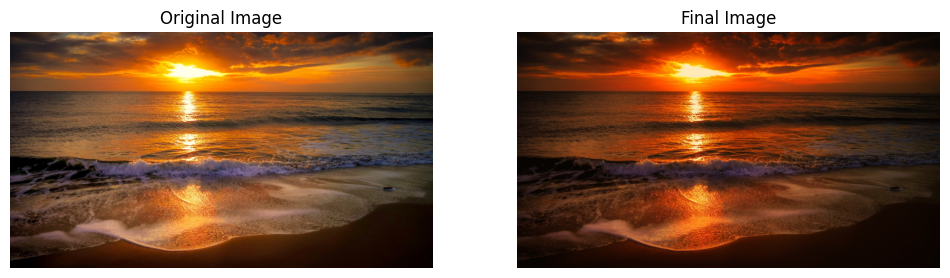

In [258]:
aesthetic(img)

In [259]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.
import base64
with open("sunrise.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQEBLAEsAAD/4QBWRXhpZgAATU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAAITAAMAAAABAAEAAAAAAAAAAAEsAAAAAQAAASwAAAAB/+0ALFBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAAAPHAFaAAMbJUccAQAAAgAEAP/hDIFodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0nYWRvYmU6bnM6bWV0YS8nIHg6eG1wdGs9J0ltYWdlOjpFeGlmVG9vbCAxMC4xMCc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczp0aWZmPSdodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyc+CiAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+MjwvdGlmZjpSZXNvbHV0aW9uVW5pdD4KICA8dGlmZjpYUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpYUmVzb2x1dGlvbj4KICA8dGlmZjpZUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpZUmVzb2x1dGlvbj4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6eG1wTU09J2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8nPgogIDx4bXBNTTpEb2N1bWVudElEPmFkb2JlOmRvY2lkOnN0b2NrOmUyM2NhYTc5LTZlOTYtNGQ1Ni04

(np.float64(-0.5), np.float64(1259.5), np.float64(702.5), np.float64(-0.5))

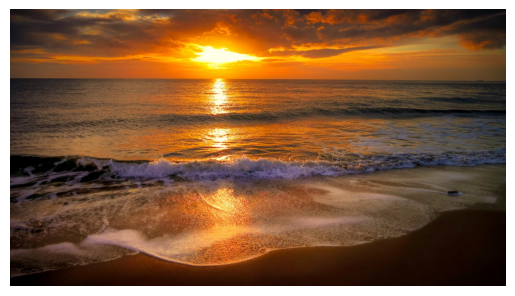

In [260]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """/9j/4AAQSkZJRgABAQEBLAEsAAD/4QBWRXhpZgAATU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAAITAAMAAAABAAEAAAAAAAAAAAEsAAAAAQAAASwAAAAB/+0ALFBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAAAPHAFaAAMbJUccAQAAAgAEAP/hDIFodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0nYWRvYmU6bnM6bWV0YS8nIHg6eG1wdGs9J0ltYWdlOjpFeGlmVG9vbCAxMC4xMCc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczp0aWZmPSdodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyc+CiAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+MjwvdGlmZjpSZXNvbHV0aW9uVW5pdD4KICA8dGlmZjpYUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpYUmVzb2x1dGlvbj4KICA8dGlmZjpZUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpZUmVzb2x1dGlvbj4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6eG1wTU09J2h0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8nPgogIDx4bXBNTTpEb2N1bWVudElEPmFkb2JlOmRvY2lkOnN0b2NrOmUyM2NhYTc5LTZlOTYtNGQ1Ni04YjQ5LWEwYmE4NjQ1MTgzODwveG1wTU06RG9jdW1lbnRJRD4KICA8eG1wTU06SW5zdGFuY2VJRD54bXAuaWlkOmQ5MTk2NjE1LTRhYTYtNDk0NS1hZWZiLTc0MWI1NWFmODQ4NzwveG1wTU06SW5zdGFuY2VJRD4KIDwvcmRmOkRlc2NyaXB0aW9uPgo8L3JkZjpSREY+CjwveDp4bXBtZXRhPgogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAo8P3hwYWNrZXQgZW5kPSd3Jz8+/9sAQwAFAwQEBAMFBAQEBQUFBgcMCAcHBwcPCwsJDBEPEhIRDxERExYcFxMUGhURERghGBodHR8fHxMXIiQiHiQcHh8e/9sAQwEFBQUHBgcOCAgOHhQRFB4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4e/8AAEQgBaAIcAwERAAIRAQMRAf/EABwAAAIDAQEBAQAAAAAAAAAAAAMEAQIFBgAHCP/EAE0QAAIBAwIDBgIHBgQGAAQDCQECAwAEERIhBTFBEyJRYXGBBpEUIzJCobHBB1JictHhFTOC8BYkQ1OS8TRjc6IIssIlJjVEVHSDhNL/xAAbAQADAQEBAQEAAAAAAAAAAAABAgMABAUGB//EADYRAAICAQMBBAkEAgMBAQEBAAABAhEDEiExBBMiQVEFMmFxgZGh0fAUscHhQlIGI/EzFSSS/9oADAMBAAIRAxEAPwD4hDASNgaOojReS2fmcmjYKAdi+e9mjYAixEDlWsISPKnatYB2F3YgMNqV0Mm2NJGChDbZoNjA44lWTcZHgK1gSIlQkYAxRszQExsBiimLRKxmjZqJ0nNCwkqm9azUFVSDyrWEIFBFazHtNGzBI0zQbMkGVaSx6LKBRs1D/DrhraXWjEZUjY4O9K9wkvK4l1BiSeZFEBZnWSPS/McjStDAGTfFAwaCIPsTg0GwpWGW3YbgZpWw0ekjYHcUEFtkQr3qWQ0WaPDuJXlhKJLW5lhYbgocHlioZMEMiqSs6MefJj3i6Oo+EvjviHCpEt5yZrRnzKMnXjyPrXB1Xo2GROUdn9Dv6b0lKFRnuvqbXxb8eG7uoVsHUW8feRtJz44bfx8q5en9HOn2nJ1ZfSMYtdmzF+GOK28XHYLqeJexTOoYOCScltuXpXX1GCTxOK5Obpupisqk1t+bn3KLinDeIWRvopEljhXLOg1DHMnbwxnx2rxJJ3pa3PSitO6ezGLHjVhdon0cy3AjAPaLEdLZHQnnTSemk0J2MpW1smfOuD/CCcT+Ob+/WGb6Bb3OvRcOQ0jEas+Yz+Vdsupl2ChHmvoRWCMcrnP8fmfUmzIQ0ZVSmxydh5VwtXuh13dn4hEVw7RMASRkYOKdRa2FbVKSA8SljhtnZ5OzxzOrFLkpIfCnKRXgd1brILeGL6oJqBG4OcVsM0nVG6rFKUdbe47xIrGpKqMEEnNPl24I4E5Pc+Q/tR4zDG44aJEfQMto73PfB8GHh510dB00pPWU6vqoxjo8zO/ZfxKzj+lr/hyzXsaM8RUd9x1AJq3pHHNNd7usn6PnGSaS7y+ovefGV9Y3rfR0EABxpOCy+XKjj9GwnG2zZvSU4yqjL4j8X8Vv3k13BRDkqqjYeFdOP0bix1tZyz9I5Z34I57iFxLMQ0gVnO5brXdiiobI4cs3PdiqSug2JyfOrbMjuuC6XDhiwcgkY2o6YtcA1TT5ATuXO5NFbGdsCQQc70bFogpmtYKIKYomogpnpWMSY8CtZqBOlGxWimjBBPIVrBXie1YJOBQaHUqO7+AuBQzKl7KZcNuwGwX3rwPSXVSi9CPofRnSRa7Rmt8bWVrPbErcLGsIywzktXH0GSUJccnd1+OE4c1RxvDZZ5b59M0nY28RYhNskYAr2MsIxhut2zxcM5SyPfZI+l/B/HLWXhhjuIlRgcKuPxr5zrOmlCex9H0nUrJBXsTxZGu7aWTs9CEHvE4GKliloki+Va4tnx34it4orxokIYjw5V9d00nKCbPjurjGM9KD/CXw3JxO9jaUhIFbLLpJLeWPCk63rVhg0uSnQdBLPNN8HW8f4dc21qY4wyxRrg9MD0rx+mzRnK3ye31WGcIUuEcFxeyuFieQSBYSAS2roc4BHjtyr38OSLdVufOdRimld7HMSLvXonmMgp4isAE8e1EDF2TesazVjtXgJ+r2HMGudOzoqjzQqSPqmBPPwpkxaCw8NLjUUJFZyCok3HCysWtUOAcGgpGcReOxDNjFGwaQpsXTkDjxrKRtJcWcunbceNHUbSXjs206nyF8cULNRVokzhTkelEx5IkJxpzQDSCyWiBQRzI5UEzNATAOWKa2CjxtxjIpbNpI0aaNgqidANZSDRPYk7ijrNpLLGQaGoNBVShZixTflRTMWUVghFz60DIupOc4oWEMwVtxsetAJKrilsyQ5bPJgKMtk8qSRSKZ0XGOE8Ks+EQSJeSXV7LkNEjAaGwMDGMtufKvPw9RlnkaaqKPSzdNhx41TuTOeUpHHo7LS2Tqbr6Yrtdt3ZxKkqoHchFkCpuAoyfE1o3W4JVdIgDBogGkjYxasHHjU29x1F1Zo8HNtr/5gyAdSKllcq7pfDpvvHaW/GbPhVo0XCnka3kILlvtk9QN/s+2a8uXTzyyvJyepHqceJVj4N7gn7Qiot4JYcRRAB21d7A8PwqU+hnHdMK6rFN7qj6F8F3EN/waC5M6ESs0gBO4yTgH0qUIKMtLB1E2+9FbUafEIVgiZkZQSvXxNbJFRVoTBNzkkzkfjH4vsOCyxgo0lxp2Zfu5HL+9bHilnfc8PEs5Rwx7/D8DhuLfHl3xS1ksYIewEq6dRbUSc75J8q7YdAod6Ts55dZquMFQ5+y/j17HeGwnlgW2RWkaSXCkAY2JPPyFS6zDGLU48lOnyucXCfwPonHOP8Ofh7pDKHkkXQuDg5PlXJOalskVwdPOErkfnnjqTxX0qyxmNmYuBjGxOxr6HBKLgqZ4/URlGb1IL8PcXvuFpci1dlMq6SSdlHU+tT6nBDM1q8CnTdRPEmo+Jm30hnuXlO5Y5J8a6ca0xSObJLVKyiEqdhTiEuu+4o2Zg2jyeVawNA2jHhTWCiBETzFazUW7DPStYGijREdKNi0VEJPSjZqL9jjpWs1FTH4itZqKmEnpWsFApIcjBFHUCibexkmmWNFOWOOVCeRRVsaGJzkkjs7Oz49ZNb8PLyNblgJCg235jUfIV4uSfT5LyeJ7uPH1OPTjvYzvisBbsW8L9zc4z0/WrdGrjqkQ651LSmIcNgulR+xGVYYkIGatmnB1ZDBCaT0/E+j/AA4loLRUtoyIkUajLjJbzr5vqtTlcj6bpFBQSie+Io7i/iEJm7KMfaUbUnTzjjd1bH6iMsiq6R8/f4elv+M/Q7FWk7w1MRy3xzr6BdWseLXM+el0TyZdMD6Pw/g6/D1iIVCiQ8yObHwFfPZs76ids+j6fDHBjqJmcV4Ld3XDHa7vvosLSB2Y7u3iozy6b10YephjncY2yGfp5ZINSlS/NjmP2jcKgtvhyyiT6QZlbdezwGBzhhjbn+dej6Lzynnk3web6V6eMenildny94ishEinIO4O1fTXa2PlWmnuDmJdyx5nzrRVbAk7di8i0xMWZd6wp9Q4jwO9MTJFaR7bnqxHhXlY80b3Z688EvAxJeEcSQCb/DmZV8UJBq6zQe1kXhmt6AyDiDApJbPGCMALFgUylDwYjhPxRa3seIMdMasCfEUXkijdnJhIuDcT7TAhbJ6Yxmh20ArDM1n4HJBZATIVL75B2H96ms1srLDpW5iXNg0SliGKg8z1NXUrOdxoQnWVj1x4Zp0xGgYWUbafnRs24zb6VIZk3pXuFDDRh2y+F1eFLYaF+xJY4yabUCggiGncjPhQCheWAhsYrWGigiPhWsFFghFaw0XCE1jUXC4rAqi2nO2K1mosseedCzUEWMULDRYxZNbUarLiPG1BsZRLopFK2OlQaMHIOKVsdI6T4X47Pwq97bsILlSO+kq51b5Bz0OQN64up6eOWNcHb0/UywvzMrikv0ziM9yY1j7aRnKryBJzV8UdEFHyOfJLXNy8xUQgkjGfOn1E6DJZoYi7TANnGnHSleR3wOoKrvcdSaCG3Agtyk42MpfVkfy8hUHCUn3nt5FlkjGPdVPzAT3M00uqSRpGwBqbngDAqsYKKpEpTlJ23ZZGbbpWaQUMQuc896VodM7j4X+N5uEcNS0ktknMW0ZJ5L4V5ubotc9cWehj6tLHokhzif7Qry5ieKNBoZcAsSGU1KPQt+sx31cI+pE4Pi13NdzmSVsnkB0FephgoKkeflySyO2KxSMjZzVXFNEotpmjDchoxqVTpBxkcsiuZwpnQsnmfSeHX6uOG21rYRydvbLJLLuMHGDqx1868TJi9Zt8M9zHktRSXKOT+P1tr7i8ZtY2BReyYudyQf716PQuWPG7PO65LJNVyFsfhV14QZL+IRjGskKdSAkgajy59KWfWXk7g+PoksffMHjPCbWybTDNK5JOkso0sB1BFduDPLJyji6jp4Y+GZfZHniuqzjo92ZNGzUVMR8K2o2klYfKtqBpJEPlvTag6SREeQoagOJ5rfxo6gaSjQ7bA0VIDiR2T7DFGwUSLc9RmtqNpNnh0XDbJQvF7G4DyDWhAwcVxZnlyO8Ulsd2FYsSrNF7jcPw/ZcQcS2bSxxFhkyITzPlyFQl1eTFtPdl10WPK9UNkP8AEIeD2GIo1LyIAMrtk9M+Vc+Pt8u74OrL2GLZclv8ZvbqJ7OytllZUCmRRkIPLzofpIReubCurnNaMasxfiDgc8MyzOIolMYJaaQapD5KNx+Art6bqIuNfscXV9NJS1bfHxMtr6e0t9NtJHGoGCukHUar2Ecku8rILqZ44910dl+zXiFibCV72VSwfU5YfIV43pPBJZEorY9j0ZnUsTbe4/x/4h4edX0eF5zgnCqWx54Fc2Do5ye+x2ZeshGNLcX+F7e4suEDjsUyKbyQEIU5pnAI8CeZPKrdW1KfZNeqR6RPQ8ifrfsbktnfLnjF40S6BmGJmLEc9zjYZzyribiloj4nXFuUnfgcut+vE+Iyf8QyKY4STHag4Bx1IH5V2PE8UE8C3ficsciyTazPZeH3OklWK2sTd39rHFDoAijc95RzyfA+XSuCm5aYvc79Uat8I+C/F80Nzxu5mhQgNIScnOa+36GEoYYqR8N6QnGeeTiYLp1ruOBi8ozREAlMmsCj9K29qySZniVYz95jge9fMOXkfVqNPcbWKCzLJNJBljkaSBjyoJt8DNqPJyHxhxe1t7pbdFWV8ZXcYxXbgxNqzzuozVKkZHB2biHEEEnEYLVxnIiXOB71XJ3VsiWLvStyOhvL7h1ra9obm2kZdmYjTv8A1qMIyk+C08sIq7ON4xxw8RjaD6fapC38OCPQ4zXZjx6N6OGeTtNmzKj4a3ZLKkwcE7aX5iqPJ4CrGaFvww9mrShcHfbeovLvsVWKlbAS2FutwY2kTxAO9MptoTQrGYbC2lUKbVnIP/T396Dm14jqKe1E8QtbKILBb20vaY3IwfetFye7ZppcRQhLwye3j7SZGQMcbjBp1O+CbxtLcE/Dw0YkjJJzjY02tpgcFWwQcJcW/bSTKp1Y0k96tr3D2e1gm4e+cA6j5UHIOkuOFSAFnUrjxpdaDoYFrTTsRg012K9iDBjpmtbDVkdljoaNmossR8K1itBo7fJoORtIVbZhsRil1DJNEm2YdDjxrahqLCH3oMKaDxRAbEUkh0rDJGvLlSNjUeeIHqKyZqAtGU86azNUWUjPKgYIACfGgEsYc7gUuo2klI6zYUidDBsitaDQaMMOdBsZBNLEUthPGEt0oaqNpsr9GPhR1m0MLFDjbrSykFROpsOPT2KdjaIqwaANJOG5ePPnXnz6ZTdye56UepcFUVsI3d9Nd3JuJdPak88cqvDEorSuDnnmlOVvk1Y/iK+g4M9or9prYks51Yzz2qf6SLlfgU/VtRrxMC+uZrxI+3IYRLoTAxgeFdWPGoPbxOXJklkSvwEjFnpVtRGjy25J5VnMygE+jqBy3oKQdJAhPhijqA0e+jn0ptYNJU25zyo60bSXW3YkZG1HUDSMLZlunTwoag6Ab2jKeVFSF0gmt3Q68HNG7BpopcySSOHlJYjxoRikqQZSbdsZX4h40luLaK8eOADAjRQq/hUn0mFu2tyq6zMtk6EHuJ5HLyuzFjliTzq6hGKpEHOTdtm18P3FkjMbjt5CVOmCAYyfM+HpXF1MJtd35s7ulyQXrfJB7iB+JXmsW3ZqxywyNh5moKfYxqy8odtO6oYuvhvgtvw9pZpDLdlgY4+12wemBU49dnlKlsisuh6eMbe795kWvDhCZbeH7bkBAF7oPXJq88+upMjj6fRcUadlxuXgIvI5ntpZUt+4Y1A1uSO6ep2zUH0i6nS42k39Cy6t9NqU6dL6iHDfiO64nx6xiCRwW0AIEcee6AOZJ2qufoYYMMny2SwekJ588VwkMfG/xlczzrBaXKKiD13/AFqXRejk1qmh+s9IaHpxOivwJ8Ovj/HuM9uBI+tUbbtjzB8cZ+db0j1iX/Ti8PoN6N6KUv8Auy8sX/aJ8UyXUhgVo2CkjSp2HrR9HdB/nIX0j16itED5ndHtHZsDJOdq+kgtKPmZvU7FJIzVLJ0LPHTAoEYjWBR+oprZZY2RSwVh908/618knR9Y1exz/FrC5jjSK1sricSAq516T68jXRCceWyGSMqpI4j4r4Qti5uLy2vBK+OyVcMM/wA21d2DM5bJnnZ8Khu1uzC+j3TW+Y0ZXkXBVSc46Zrp1xTOfs5NFY+D8ZuMQhZX3xjnis8+OO4V085HWcC+Ap9Mctxbh2yMDcZHntXJk6y9kduPokt2jtbXgnDuF2ySS2cKk9MiubW5eJ1PHGHgLwXfDOKXItLXg800CsVebToUenjTyWndvcSMtb2Wxon4T4eYS9rZxjVuORpNbfLH7NLhAofh63lZTHbIrKcSDOGWjqZtKMji3wzbQ38dwsQCjmXYqWPriqwySqjnlhipWTLwmG7k+ktZJEqd3OsuG8wTR11tZuzt20I3HDbKCwmMVybXJOTIoCt6HrTKTcvMnKMYx5o4ye3KTiTtBKCcg4511KW3ByNeI7bz3aoVeNSMbEJ3gKSSTHTkDueNSmJYewjYL95huayxK7D2sqozpZxKdTLg+A5VRKib3KjBG1aw15F1jB3JrWAvGm+DtWsCQaOPfIpWx0rGQCRuCD5UuofQw9lPFb6hNbpMp/fB2rXZlceT0MNtI3Irn5UW2gJJhpLQoxAHKpuQ+miPopIzgUuobcpJAANhvW1D0CaFjzFbULRC22TuMUNZtJfsCvIUNYdJeNGoNoKTDRwDwpXIZRGI7YMMAb0jkOo2X+guH0Fe9yodohuz3oMtk4GCuPal1jdmSbVh0oazaCfox5YxW1B0HhZkc62s2gt2DjbVtW1B0shoWC8+dMpCuIIQudt6fXRPQFS3bFI5jqJcwjw+VDUHSeWLflijYKCiAHnvmhqNpLfRsDliipm0lo4ATgimsAylgH36DrRVmpFWgVM4UkjyplsK0QZScLoVAPDrRAXWJHG7KTQs1AJ7UkYXJFMpAaE3sdR7wKr1OKOt+AuheJDcMUuwhyydGIwTRU3W4JY1exV+HKhGoDJ5CipgcKPRaLaTUmpG5ahttWklNUzRbg7Ra4upZo3ijcnX9oYxn3pVhgt6HlnnJNXyN8ITh8Nk73Rk7UN0yQFxyyOW9cvURnKdR4OvppY4wbnyPXXxDwo2y2PDrWSMuRmWZAT8t9zXMuiyJ65s6f1+NrRBHL/Fc03EOIHShaCPKxGNMLp9eu/M16PRqOKG/LPN66U82S1wuDHQNbiREJOeY6e/jXTLv02csbhaQt2bFzI2gNnIGcAUze1IRLe2G4hx/ictsls1y+hF0DDGp4+iwxlqopk67NKOizCdWc5Jya7lscL3KOmBy96NigmhZjy2o2agE0Kg7nFFMDAFD0WiCj9URLFEyRiaLBGVVnGojy6kV8jufW7XVjQ2G5AFY1FJ7O2udP0mESAMGGrfcUU6FqxSf4a4TcSM/YdmzLpPZ7Zp1kkhXjj5Cv8Ah3CYLB7KO6eIyfVxyvH9lvEHwplJt2BpVQvYcIUcOmf4f4pbXVwEaMzGU7MeYwDt607k1LvInSce4w7cO44eHQi7S1uJlTDGQA96hqjY9Ohrg73NmrzXdhBDH9wKwAz4b9fOts+DW0tybr4otDEyxcOaeZR9bGGwF9xTKNCud8bmVfcYspFnuVm4jw2eaNUVOzDIT4jG/wA6dJiOV+as4v4g+HvjB4Hu7a+uruCbclGPIeI6D0rpxZ8fijky9Nk8HZxMl/x+zkeA8RuotOzKZSPwruXZyV0cMlOLpsFccRnnslt5ETIYnUGP5cqKik7A22qA2yMzqVmyc8tWMUWwRR1NrdRWloQ+XuDyJOciuVxcn7DpU1GNeJkTTiWRiY1GfAVVKiaYIQFtxt60GxtJUxshxitZqovGDnfetZkOQxhjvSORRI0LS3GRsPepSmUjELLEgmde6cHbHI0tjUCkhB2AFFSA0USF1xp2FN2gugdyXQBg23ic1NyKKBdYywyfwpHMdQJMW+ymhqDoI7LJ7ymhqNpCCBQcda2oOguLbPSl1hUCfogPLatrG0BEs9uVK5m0BY4Cn3c0HKxlGhuKF3w+NxSOVDqLe5orF24ywAbr50jlQ6VjUPCBPEzBo0K8w2cn2qTy6WWWJNGi/wAIv9GW7huA8RXJDppYHoMZI38c0O32sVYlq0mLPw10yGQjfFUWSwPCLfQCOlN2grxsq1ltnH4UdYugGLfCldIyetHULoCwRRowVl1dWJHL0oNsZJIOLSDvMyuF6dKGtjaEM2zW2tYzAjAfZDDK+9JJS5saLjdUaPBfhqXiMst+6qtojksFOkueoHgKLytR2E0Rct/EfseGcFt45GnullkKAAYBKk+A64wKRznPhFNEYMwJ7W0HaOcyPqwq4wMeOa6k5bJHO1Hdi65iVezBDZ72o5GOnvTqTsSlWwXV2sfZlV3GxAxvW1OzUqBx2S6hr5mnuxXEOlkNXaJjHnWs1Few1tvnHUjlRsFEtYrp2BJrWbSin0RguAuB1OedbUDSZ80BDkKoJ8T0plIDQGSGRIdejUrciV50VNN0K4NKxaB7iObMK4Y7AAYJrTaa3NBST2D39rxyaCNJVuFhY4CBCAAPEVGGTCm2uS88WeUUndGjwLhRs37WTh8d0zLoAlgbAz15ZHyrk6jPr2Uq+J19P07hvV/A6C94fcf4S6R/D0fZsn2EYL3upx4VxwdzUnOjsm0oOCin7D5bxe2uLYSO9lJCmvHeQgA+G9fRYskJVFStnzmbHkhcnGkc/dyvI5LZrrgkjjlJyFHOV0gYqhM8seFyWA961go8xjLEDvY60TAzp37wzWBsBkhBG/8AejYGgDwAH+9GwUNWfxHeWUsVyGiM0J7qOMn5865ZdPGaaOqPUSg1Jcj97+1f4qkk0LLD2Q20mJTnpzxSx9G4aDL0hmbC2X7YPiW3CRmHh5VcY+pOw9mrP0ZhfmZeks3s+R2dv+3Hhws0Sfg1xJc6PrDEwCFschk5A+fvXI/Rc72lsdf/AOrGq07mRN8d8G+JUaLiPBb2HcKJIboFUBON9QAA5VT9HPDvGRP9XHMqnEc4Hb9gXm4Px3h8q2xDCN5wUHgu4wT0qeSTe04stjSW8JLY+iW3x3amGG2voY7N2QfW28qPvnAGhuXzrleJvg6e2V7s4/4v4uOIDNpLJetG7BTJAmAfEEHnVsUNL72xDLPUu6crFxzifw8st2/C4i84KoHdtGDzJUHf511rFDM61cHK8uTCrrk9wn9p3Ebfiou7/gvCr2Pl2fZlCo/hOTj3Bp5dDBqk2hYddkTtpM7GP9rVvICbKGe1dl0rG0SaI/EAjb3Irl/RTi+Tp/XRkuGcJ8U3t/xN3vZoA6l9LSooAyOm3LaurFGMNjmyylPdnPNkD7GK6NjnLRY8waDCGSQjbWwPnSh2DIXz3gaDCg4Z2AApdh7YRFcjelbMGjjPUUjYyTHLdAMZ3qcpMpFD4IIGKkVSs9jPIDNaw6bJA8VrWGi5RiBsRQTG0hYojp3pXIdRHIYSABpqTkWUWGEIzuBSah9AQWwYeXhS62huzQOa37N9+VPGdonKGlkqophQ8aIRvilZrsbtbeI89s8s0jZWMUPfQY2AMTBtvfNSc2WUESliVPI0NYdBv/DXDOHT3EiX5dBp7gVsEt61lNf5CTi0u4jpf8H4VJcWv0CWSHclpD3wT0Bz18uVFqE2kmTWTLBSc0F+IFtoIRZRapCB3lHdBzvk4pMsYxelPgPTuc+/I5ybhzSp3VIVclVPnU9VHVVikfDg8hUgYHQ1nOjKNl/8BuSMrFqyTsSPw33o62K9KMu54ZLEoBtXQnkWUjPzqin5sRw22AJw8lSSyIAfcnypu0FWNnRcL+FI7lBJPdatW+iNuQ8yaTW36ppVH1iOIfC/Y3BjsvrkVctp7xB8D50dUrrk0dLjq494jLbcTiaSz1Jbo6h3hhbIGeSkDr5UW4rdmVy4EprOSFWZ1cYbAypB/tVIzXAjhsDjhV8l2xjpjeq6yWlgZFj3wufMijYoLOn7HOirAEhWd8sSzY3p9QKDqtyV09PSjZqNXhcscAEjRKXAwNQyBU5xcvEeMlHwPSIjkvgDJzgDAp1sgPczL+YJmJI8nx8KIrAWvCVu5frLoQxncFxk/hU5ZZR4VjxxRfLNiX4f4ZaWZf8AxiJge5goT+HOpdpOT4KKMUg3wzPwbh8ckU91D2rt3XKOAvuRSZYTm7oMJxikkzRTj3DGAijga6kLbEMAOfPLdKj2FLvIq8rlLus242tZCgRoY3P2Qrd41PTFmbmudxfj3Ff8MVRLZTzoR3TEusk/u4zn3pmm3pEhFVqR8u+MPjOO+Z7NuBWxgGRIk47xPQjH2cV3dP0Vd9Sp+w58/WV3GrXjZ81uzGSdMSr6Z/WvZin4s8ebT4RnyMeQFVRJghk/aNNYtEHHL8qNmouqqqlgAfOlDwK3j5yQxNOkLJiTSMTvIaaidsT4vfX13Ixl7NAWyFijVAPlU8cIx4Kzk5cmUQSdwaqmSPGPwrWaiwBH2TRs1FxNKEKBmAPMA862xjyM1ZsyQzHPKF06jp8KUcZS6nyPrHOOmaVpGtm3HxwycNNlNbJJnlIzElfQVDse/qTL9tcdLQuLVpCDFGxB6mn11yLob4G4eGXJB+rIAOM52zU3lj5jrFIbsZ77h05MGFYjDK6h1PqDtSyUZrceLlB7Arjt5QXkCZY5yq4/CimlwK7YGOBNJJYjyFM5AokBdWDkVgDEK4+y+3hSNjrbgbh57tU2UiNRxq3gKRsoooPFBkc6RyHULDx25HI0jmOsYZYH8aVyQygEjhcEc6VyQ0YMZjti25OB51NzLLHfIdbdiwwQaVzGWNjttasxACZqUplowHls1wcjGByqTmWUAT2rliVG1FTQjgy8ETLzG1aUgpBZoBKnIZpYyaZpRtC62h1Y01bWS7IILcKeWK2oGihiKPGO8R5YpWx4xNOzAJGkb1J2WR0FlazSxr2Vq0z9QEyRmgk3wCUlHl0FW0kt7r62NoZMZ0uMUJJxdM0ZKSuLs2OH3XZXC94IoPe5U0J6XZLLi1xZrfRoTO8yKJcjJ1NzHhXR2cdTktzi7SSiovYXm4cJYgYlDM/efA2HkKlLA5K4lodTpdS4QODhKw/WMAWBBAI2pV07W7Gn1erZC9+SmELER9BjAFQyXdFsKT38RC+vLTDDstZcYAO9LdvYtGMlVs5+a3LKJwy4Y7DO9OmGr3G7W2vmIWGV5GcE6QcbDmaKSb4A3pVtj4i4xaKJJECQDZk1Zz60XHSialGbK8Fhhjv4pJVVVDFgnn0oxlurNkT0tRND4mis+IxA2idpdREFghzlScb/AJ1acoveKObDGcdpPYxY7Ge3nbURGzBu0IXJ0/wkb55+VSu9jp8LMKa3Uv3dlPIV0RbohJFTAoXBQeOcb0U9xGtiYW7NsdM09i0MySxqo0MCfDFNqMRFcSd4qE355WtYCzvM8Zy6qF8sUNaDQq5UDdd/HHOjZj3aqSFDsoA5DbJogA3UkmDgAeGWpk0KxONu0JW4AzjmRQbAiC6WxDxSYwelBrUFPTuj6D8N3NnacDjvLm5hhaRNRzJnA8ydyTXA0lJ+Z1TcppKtgN/8YfDiWjTG+WUqDpiAOWPoaPZTltQikoeKR8+4j8S/CnE47j/FOBtHMwwkkMhyT0J5Yx410Q6bPjrs2JLqsOT119D5leAGRtJJUHbPhXtwbrc8aaV7CTp1zVEybQB+tOIy0DKgbWSARg0HuYDJIQSQxxyp0hbEpydyTvTIRih50RT9Lce/ZzwDitmsbWsccygKsqLpJHnjrXyOLq8uN2mfXZulxZeUcZcfsTCSO6XXbR/cUEKffNdy9Kzrg4n6Mx3yct8Q/srvuG2yXBYIHJGCNQX1Irpxek1J00c2X0a4q0zlbv4VvbfDDRKh5MmSCfDPj5V2R6uEjkn0k4mZPw6aPZkIxV1NMg4NAFtmLY001i0HFnJpzoOKGpB0sulq4OdJ2oakFRDRwMTsDQcgqJ03wz8OcS4mQIpY44wcEySBR+dcmbqIY+TrwdNOfidrdfA3FeH2ySmXXZaQzyrLlM9eVcX6pPdrc7X0rjtex5vhmwWygupeIQxiU4ZHDFx7Ab8xSrqJ3SGfTwSXtC8d+AeG2XDnnk49ZxzlQ0KdoO+PTn7U8Opm3wTy9NjS53Pn13ZSwSlQVfHVTzrvjNSRwyg0wSsR9r8RTAsuhUty+VAwyiNjbJFI2hkmN268skipyZWKo1rMISM4IrnnZ1Qo1YLaFhkYx61zuckdMYRY3Fw8SfYWpPLXJVYl4BP8Mcc0waXtUP2QQcLuMYFDtkN2UgsfDpQQSD8qV5UFYpDKRzxsFCgUlpjpNBnMjYGjveOKVDOy8ccmO8u1Zs1MlUXVpYAZ61rAMx2RZQyDI8qXUNpGYbEuN1AyMA0VIVxCpw1T3pIjp/Om1iuKZefhEaRKUYAkcutHWBRRSzs5I5AM0rmhlE6/4Xka0E8s1wF14OnGSTVcGVQbbdHJ1eJzSSVm72cF7N3ptMnZ6chMjGeWTXYlHK+dzh1Swx2W1jLWMLJq7GJ26F1B+dW7BNXRH9RJOraFPox4dHqEoZdeSpOMjwrmeN4FdnR2v6h1RoWc8M8RMC4AODkV1Ypxmu6jky45QfeYO97QQnAGfMdKTNq0j4tOo5Xjs3aKm31iHS23MV5GWep78ntdNDRdcMwbldbjBPLnjlSI6WetLSANiTUf5Tzo6mLRpWltc2cxnRXxsNRHTzo95boRuEu62P3nEZew7CJFmlYaVbHI1XtG1T3OdYEnfBjDh91E4DYywySW5eOaBROwkPaWkmNDKHGGBBGRRZlTGeP8RDCMWwMcmCHKny5Uzkp+BOGNwtN2c2YmZiTknnTWGi01s4AztnlW1GcaAzQoAAoOcbk0U2B0VjtyJFYA5ByNqOrYGnexvsC0hZIcajsoBO/lS6tguKbui7cPu9LSG0kAHTSfwFHUahCWKQxtIQxUcyBsvrTqSsSUWJu4dsLgnoTVbJAy8mgjGSD4UbAJXTSKCX1DyxTKhWZNzO2o4GBVEibYlLcueZzR0IRyYlMxOck1RE2IXAO5BqsWTYjKpPOqImxaRCelOmK0BePflTpiNAJBtTCNC0imnTFaF5B40wouefIUbMfqjh8PxXZyBZbm14pbA837s2M+I2NfGOUZcKj7BJxe72Nq1v0a+NpPb3EB20yNGdDZ6Z6GsqM0/A1fosUqmNwCPAjOadRTIvI1uZ938L8JlGp7JG55wcU2muALNZynGf2W8A4g4kWW4jYLjGsEZ8TtmrQ6jLBVFk54Mc3ckctxD9jDKwNlOkoPPU2CP7V0R6/L4oi+iw+BZP2Q3cKCVHjwp70b75HjQfWZGt0MukxJqmdBZfsk+H7q00l5UuMfL2pIdTml4jZMOGP+JyPH/wBkvELC+dbeO4ntcApNGmd/ArzroXWTS7yOZdJjk+6zHf4c47wudUl4JdTwq2oa4zhv60e2hNW3TCsE4OkrRn8dveJ3HFJI5YX4fHkKLfJVEA8uWfaq4owUNnZHLKcp77F+Hy29l9Jj4s11N9X9UlvMPtdCT4UJJzpwDFqCaluY8jdtIplL6euDmrrZbEOXuHADSItiGU8hrIJJpbpd4arfdPcQ4NxGwCPewNEsm6Fsd70rQzQntFmnhnD1hQRadwpp7E0jEAOrdNvI0rHQ5CI843FSdlFQ3CNJ2/OkbKKkaVo+SAWNRki8WdTwKJ2kXQQRXDlPQxPyO4tLG1mhBkQZI5jlXJR0Sk1wGHD7RRgaam4+0PaS8i3+GQMmVUVtDq0wdtTpoWbhEZO0YxQ7w3aRBScJUMABgVtTQVKLKy8KCrnG1bUzJpmbd2JXLAdarCYsoF+Hv2UgUnY9KL3BF+B0NsqFAQuDSqRpDkFp2qZypAPKrQi5I555FF0Em4cmARHRlifgJHP5i7WGncLU3BoqsyYeCIxkHSDitFUxJyUkai8QmyWIXURjfkBXauqndnA+ljwiDPMHLpK6g8gG5UO0ldph7ONU0VMssjHtRrABGD+dDXKT7242iMV3dhjhUjRTiNWOG5jOwPjVumk4ypEepipRtjl92zNgAlSNiNiKvn1t7HNh0pGPeWMZjZn3YHcV508KStnpY87ukYtxZFnOk90nwrnqjtU7W4axsWZwwQgDbUdsedNGDkJkyxijVWGJw0auWTGxzuTV1CLtJ7HI5yVNrcXS27GYSMB3eQpNLi7ZV5VONImaIzOHAzjlms1bsEZKCo9c2hn0szEnGGz+lM4XuCGVR2oz7rg0yYfGrUfHNaUJR5HjmhJ7MJY8By6S3S/V5yVBwSKeGN8vgnkzRSajyD4/a26aOwiWPu4AQcgPGlnSew2Fya3MoWxOOR86UcOsBDDCBl5kAfhQCy8VxJaSdpHEokzzYZx6UydCySew2/G5Xj7OZXjIBwYzgnP++dM5yaJrFGLuhS/7C9iaOG37MOuDheVT8bLJ7UzJn4KsEg0TJI3UBTsfWrKbJOCZn8Qh+itpRwz/AHiBVISsnKOkyrsysO+CaqmhGZdxblvugVRMm0IS2wp0xHEWlthjamUhHEUltedOpCOInNb46U6kI4ikkPlTqQjiLyxaaopWK1QpJHtvVEyTQrLH5UyYjQtIgFOmKBKjPKiA/UVlxCRsHtBXxJ9tszQi4hMo5gjwzTXQsoIYTi7r/wBNj6UymSliiyW447DSYyPen1tirCkTHxUMRlMedbUw9maFvciTfUN6eMicoD0JU8z+NWjuc8kz09o0mDGYwejbhh7ijLG3wLHKlyYHG7bjEEREN7xBMDYxyBh+IyKlLtIcnRDsp8JGEPjW/wCGx9ld280hjXH/ADYAL+BBFNCcvOwZMUauqMbjPHfhbj80R41wuO3kfIeaJ8lfPzp12l3HYGmFVLcw+IfBHB7pDLwHjNndLzKmQK/kMHrVP1OSL7xL9PjlwIWnwbdCaW3e3EhIBRkGcb9a0usvdDR6RK0x+f4FeG1Rra9tZBK2M6vvDOR5Ypf1bu2g/pY1SMG5+Hb1pNMiyvpHd5tt5eVWj1MUiUulb5BTfDtxbIjyIVVuRNMupUuAPpaAGw0bjBHiKbtbF7Gg1vapncZpJTY0caGRBEDjT8jU9TK6I+QxDaqG1Jv70HNhWJeBtWl3JFGIlJA8hUZJPcrG0dDwabWQsnEmtlI6jNRcU2WU6RsWEFkVeQcVeUjA5EVOUI0PHJLwRscPPNNYbBqUFToOXizUggEig10xx6jinkcSWslDZxWeFAWdlZbRGTAxQlhTQ0czTMm6sgpOFrjlDSzux5lIymsR2moD2FFS8B9jVtrOZIA2htHjjan7OVXWxN5Y3V7mhaW7IcsdJ8KtjxtPc5cuRPg0QA0WMHau3Zo4+GUbQwxghvOpS0vYdWgaRMzYVdXpUo423sM5pLciWIq2MEEc60oNOgxmmiEBHPagkM2mHVdW4qqVkW6NSy7NYskRp44G/vXo4dOnyODNqbL3yhYi5JK+APOjnSUbFwtt0IGHto9PZEv49a5NGtVW5169Du9j0PD0Ru9h2x15VodMk99zT6ltbbDUNqjAhtsjljlV4YE+SEszXBRuHoZAFDKueQPzoPpYt7cDLqXW5eHh0Kb9krEHPe7xpo9LGO9Cy6mUvErLa26nTspO+AKEsONbBjmm9yGawUlCx7vPalbwrYKWZ7lwLVyVEqsoGcZp6xvaxbyLehO8uLeJDjvMDsOVc2TJCK2OjFjnJiMvEIsf5aqpGDpO9Qea/A6V07W9mXOISxdYxv51E6b23Fu07MlicDyNFCeIH6Zol7RMBh5Zo0zPcMJZr06pG1YGAcDYUabBwqGLaFlQsuR0yetPGHiK5C17lQdUo9Fo0a0Yl2SeSjaihHMzZ4iQToJNMhHuZFzG7PpUb5q62FaASWkqg64zmjqQNIu9s3UY8sU2oXSK3EDYOBgUyYriIT2zE7VRMm4iMtudxhifIVRMnQlNEOeDmqpkZCbwsxwBT6qEqwM9s4x3c58DRjNMVxYjLA56VVSRNpgvo7+FHUgUfSrH4ruBErQRvcOdlXRjPrXzkukSe7o+jj1Ta2Vmpb/HDQADiXDJ4AObIwIz6HFJ+j1epKx11deuqNzhHxjwO+nMENxJrC5y6YHpnxqU+myQVtFYdTjm6TOotHiuYlki7ynkcVErQ5FbRH7QWnSA9h23tol3RqdRJykx6EAdatFUQkxuJwObGrJkJRsZSRSNjmqpkHFgLmw4dcqy3Flbyq3MMg3oPHB8oZZMi4Zy3Ff2cfD92S1v2tm3QL3l+RpOya4kVXUP/KNnL337Kr23l+kcNvIJXU5AIKms+0qnuNHJiu+AXYcc4IHj4taTyxMMalYg/MVySir8jsjLUtnZlmBuwaS2v2OWP1MhII961+aNXky1tdcUibTEH8jqLY9KzUApyCcWtu2EckzRySMne08x5GljKuAyVmZLw5XHdGCOmKosjRNwsVNiyjUFxVO0F0Ho7XyO1BzNpDLbnOykGl1jJDkMJ08hmkch0mNQxNsNA5+FK5DKLNG3iKpqjJ1+HhSuQyQ/Z3tzbyBtgeu9TaTDq8GdjwK/SeMEkk9euKtgnTpnJ1OLxRo3k6oBjG4q2bIkc2LG2JrMw3WudZHyjpeNcMtNpmjztqozakgQuDEOw3JAzXNpZ1doHgdkXQy58DmrRlSolOKbtMa+kPjCBmYjLHGTV1mdbHP2S8TyXIVdjjPyoRzUtgvFZEk2CSvzxSvJXAVj8yIpTq50sZuzSghuNhtsG9a6YNHPJETdmGOFK+Wc0J6Uww1UVjbHLlSqQzQRZHxjJxTqbEcVyai3Fs8C63AA+6RXoLLjcVbOB48ik6REl1DGMhk9Ad6Es0IhjhlIRn4i+pjEunO2Tua5Z9U77ux1Q6VV3ikXEJ9RMjahj0pY9TPxY0umhWyAT3kjSalZlzzAO1Tnmk3aKwwJKmRbi7mf6rWSOe+K0Fkm+6GfZwXeCta3bHLofXNU7HI+UTWbEuGJOrhuVc7VHTFpoo3aeJFKxu6BdGNK0UTAToNO+9ZBE5XK0RWKy6pOlMkCi1tYySuMggdSaexXsPu8VriOFUOOZxzo2CmystxLOmlI2J8qzkLpYu9pdSjeJttqGpG0sDJwyUbv3PWhrGUVyiJeB/SNoZS4xzO1ZZNwOPmLS8GFoRrRdXjzFHtgdn5CssDySksmseGnnRUjaPMzbzhkwbBQITyUsBtVYzQjiISW1rAwaW4WT95R096bW3whaiuWZ/EPoPNQapBzJz0GRcOmSIQVB5k1ZJvkjKS/xEprdWH2t/HTzp1Jom4JistsiocsM06k2I4oVeJNB2z606bEpGfcg42X8KrElISdnBxVNibO2ThNzEgH0aTSP/6aXBHsa8Htot8/M9/sZJcfIas7CzkA+k2t84xv2yk4/OklkkuGvgNHEnymbFjwHgrL9XaRNpOc5zioy6jJ4stHBj8EbVtFw21jKq8ECdR2ukfnUrlJ+ZXuxQWSaV5EWDj0VuOgimTOPfNFJrfT+4G1LazZ4O19aENJxia5UnP1yg/I0HkfgMscaOlhu0aMM0kXnmqKfmScKewCTjnDLclZ7+2hI27z4p4yvgSUaHrK+juYxLbXEM8Z5NG4YfhTqTRNxTHEuN8E4I8aoshN4wxnQJrcjT41TWqtk9DukTDd2kilo543RTglWyB6+FMpx8GJKE1yhjRFPH3tMqEeoNO4qXO5NScXtsZd78NcIuAStqsTnqgAB9qlPpoPjYvDq8kedxOLhNnw9xm1DKNjgVzdkoPvKzqWZ5F3XQe54DwLikXcQRSeK7Eeoq/Y4si7jpnO8+bG++rRznEPgS6iYtazCVD47Goz6bJHjc6MfV4pc7GBxH4fv7IapreTT4ruKg9UeUdKlGXqszfo2TjkfMUNQdNl1tGA2xW1BUQscGjp70rlYUqG4FXG4BpWyiHIQg6YPSktjUMpCp54oWGhm3jeM6o2K+hxQ1CtI0kun7MK4NHU6on2Su0THMVOUbGehrKTXBnBPkYS51bYAJFN2jIvFRPaOceA8K2tm0xQxHEzJqHKqRi2rIymkzxilBODj3o6ZI2uLBiJxzGRSaWPrRJjK+OKNA1WDKMp2NLQ6kmEjmkUVSM2hJY4sJ2rOM0zk2JoSLRvjY0U6BKNh1kBGKonZJxLDcZNOkL4gWyDgbVNlUVxk+NCrDZLIccqOkyYMg4wRS0MEVSORPsaZJiNoagViuxPzq8E62ITaIdMnvHfzpZRvkKlXAJ48DlU3GiikLSr0xSNFosSnTAPOlK2ASOFnxNr0nqvSiqEd+AHsTG3cbUPTFazWWJcDDLjw3o2YvGsfY5KqXB6+FA24QTLGneZdJ6BedYAxBfCbs4YdQwe9qGfx6Cmt8CaVu2Rxia3t0BQCZm5HPKtKK4TNCUuWY0vGmWEoFVccgF2rKAdW9mRc8UnlkOH+dMoJG1WXt+LrHEV7MGQDdsDBptHkDV5mFxe/edyxx6CrQjRHJMxZnkbl+VWSRBtsWZcZ15JprEquRWTAPKmQoCSVsEchTUDUITPuetUSJtikr06QjYnOzGqJCNiTqS2cVQQ+wxQq56qa+Q1tH1qjZp2tvIAMNkUjmUSY4sYVsMik+I3rajUMBLRxpmt4nB2OpAaKYGkJT/B/wAKXxJbhsMTnrF3TV49TljxIhLp8b/xDWvwXZWeG4bxC/tsfdE5K/I7VpZpT9an8ARxRjxa+I9Hwq4jGJr15wOWqMfpUyqoyOL/AAoLxtUBtkY/ayrb/jVIZHEnPGpHMz/CvFeHzF7Z3XfJMZI+dX/UxltJEf08l6rOt4Dx/iVpZrbXzO5AwC8JcjHnUnk/1LLEnvI6LhnxC1wgWzjimuFJ1RYMeoeI/oaaOWS8Cc8EX47GN8Q8UtrtGhuODXEI14cxnBPnpxg/OlclJ7bDxg4rm0Y3CbhuF8Q7XhV/LCnMRzoQD5EDam7SS3N2SkqZ1Fh8d3q//FWkEvj2eVPtVo9VNc7nNLoovjYPcfG8rSH6Pw+GROoLnOPyrPqpPwMuiS8Q9v8AFVhcJqe0YN+4On40nbLxiU/Ty8JGjDxLVA0ltJHKrfc7Uhh+oorM0tv3FeFN0/2Ims3vozKk768YMMsmd/I0HjeVWn8GFZFielrbzRz3FuGTxzaXiI2yAe9XNKMoOpHXCcZq0zNewaIAsAM8sGlsYoLU6sgketawhBbMBkfnS2MNWsYc6WUg0rGH4rU4wtLdgbSCpDIhGRkVgakHMbDdR6g1hNS8SpRTscKfWiGy8cJBBBrUK5oYR+zPep06JOOrgctLtBt+ldGPMkc2XCxnX22SoBxVdWvgjp0ckpGx204NGMGwOSRLwjHKi8ZlMWeJtWMbVBwZZTVEfR254rdmw9oi6Q43HPwplAWWQuYCeQpuzYqyUSkBB1Y5c6eON8glkXA0F1DHKr1ZC6Jkt02PXG9NLEgRyME0Gk55+1SeOiiyWMGFHRQAB45q7gmlRFTabsXnttO+QR5VKeKi0MtgMaTyxUqoryHjIKZJAqsaok7sXmcA4G/nUpMtCNlVkYDA3FJbC4Kz0pC88E+AYGs1QI7gWUMM6SPOloom0LvESdl3pWh7KrZzMw0xk5rKLfgI5xXiMNYFt2CDxNU7NiLKgbWyL3VUHPWkaH1CN1asGIAzjpWHTspw9MXIDp4kZ50RWX4pD2yBtRUAdRvQsyVo5+8hKjxpkBqjMlAGd8VQUVdfA0yYGhWaJeeDTKTEcQBiXG4NOmxVFITnjFOmTcbM+6AXOKdMlJUZ0wY8gatFoixZ4JG50+pCNMC8OnnRTNVCsy7bCnTEaFHDavs0+wu590sZLORwLi0MS/8Ayu8Sfevi79p9nTrZD7rbKQI1uEA56kX+tazKwdvLDM7R9qmtNm1gqBQuguKotJbnTqHZnIyOzkLZ/D86a2hasVV5ku+xktbyJdtUnZhgufEDentCqPkatv8A4jCp+jl5ogdiIyR8iNqaMn4CSUeJckrfSRyFZ0dWz3s1rNVo8ON8IVwsl4kZPieVMrYr2FOJ/FthZ6eygu7kHIDxkKpHjmqQWonK0F4L8W8EvouyuhLbSO2O+NQ/8hyp3FJVIDU27ia9rNwG0l7WOQXEh/7UZYj1wNvehB4o73YJrPJVVDbi14tIGgUOijDCWKRPxxTyjHLK4/yTi5YY97+P2B3HwzbTRjtHWPHJdRYD570f0z5ujLrFfFiLfD/D8NjiFrgc8uBg+hqfYp8SRX9Q/wDRgI/hbtHE9lLb3Ea8wrg79d6PYza7u/xN+pxxffTXwHYvhVZckBY28M/rRj02SQs+sxx8Cy/DF1EdULKzetF9LlMutxXuUtory1mKzB4nH3iMH51GpQlvsy1wyR23RrG/szGv0iBmfGC4Irp7fG13lucn6fIm9D28hR7Xhk5zbztGx+6y7YqTjil6rKqeaPrKxO64NJG+QY3HPKmknilEpDPGQnJbPH3SmwqLLJ2DWNc7Ng0A2MwTGHc5bzzQryM6aH7a7WTAZc0yfmRlj8mPxRxyHub1aMU3sc8pSjyTJZBskb45ii8N8AjnoqLWReVL2MkF5oslokZcOpDVtK8TKbT2ArEyNkZ96XTRRzTQeJ3Vsg4HUCnjJp7EpRTQ5BcKQVdmz6V0wyqqbOaeNrgOskLDHaH3WqqUH4knGS8C6rGfvBqdKL8RW5EtGMYA2NM4AUiBCAc9aCxpBc2SI8edFQoDkWVMKdO1Mo0tgOW+5dFwd6ZLzFbDhRjerqKJNsr2QJzil7NMbWeZAo2ouNIClYncyHOFXauTJKzpxx8xKTBPWoM6Y2gmn6qnrYW9wDoSCQcDwFTaKKSKLCx5DNKotjOaQdIQqnWuT08qooUtyUptvYoyyHZY9qVp+CGTXiw8FuebIB5VWGPzJzyeTCdkVHcwKbR5Ca75BXGy4Zxnyqc9luPATeEyHIJPvUlGy2quQ6xjALqMgVRRXiT1eTE57YmTVCMH3NTcd9iqltuBuLa5ZTsg9qVxYykjHu7WRshmz/poWYzJrB9R7uT6U6kAXewcE9w7UdSNQrNaEcwceVHUBxF5IIwf8s/nW1PzA4oBc406VhwPlWUb5YHOtkjPliy3dt0/8c1RRS8RJSk/AXewlc7ISfAVRZEiTxSZ4cImbnEMUO3S8QrA/IXvuDsi5YD0xTRz2CWAQPDYzE5fUrDkAOdU7Z3sIsKrcy5LCQucIassqIvE7Oi4N8cvccQS1kj+2QqySTKQPXIrxs3o9whrT+h7eHrlOemvqdzHx6zhdYb+KS1dlyGkC6D/AKga85Y3JXHc7pTUXT2Mbj3xla2d8bNIbWQ4yJPpRKj10qa68XRynHVv8jlydXGEtOw1wbjlpxGVdN1w6JghJBmY4J8ScAbmp5OnnDwZWHUQl4hrn4psuFvlzLcrJ3BLb3COjDqCMgj5UcfTzkn4fMTJngmlyFt/i7gcgeMxzrjBwgLD/wC3lWfTyS3Qe2T8TVl4hZXlun0ae8K6VOYZFyg6d08xScbMam99jnvif4daVDcDjUIAXKLOQGbyzVsWXR4EMsNT5M+y4JxSC1dlktbi2Ua2C3AZT57U88kZP2hhFxW47wvi/DVbs7rhFoRsFKA7D570koOvMdTt+Q5c397HJJJw4NDAwwCBzHjyqUUlyUdvkUi4jxV5Bm+n/wDM1VtCqJ2/Brvi93wsByjIpwZH7zfjWjPLKNeBGePDGab5BfESWli0fYrE07rkyrHkjz2OAfatljGLpBwSlO29jN4Zf8QhnDwXEux3ATIPqKSM3B3EvPHGaqSOgg4jewIWe7lSUnOlxt8qpHqMkf8AI55dNin/AIqjW4dxJH7SS4uO0wmokR6dJ8q7MPUp25v6HFn6VqlBfWxK64lY3E/1j3JAOx0ggf1qOTNjnLey+Pp8uOOyQNZuFzhstcI3TKLg+2aneF+ZTTnjxTEysAk1KTz6CoWrOinRvcKME2MRbKPs5GT7V6HT6J+HB5nUqcOXyE4rbxyRmQIiAfvKBT9TBSWpKhOmySi6uzn5bZWY6VHzrzD1VLzACAZ5EVhg8FqS/PHrRW4kpKJoWyvG4CyK1VjaexzZGpLdHQWtv2kerUjHG+k162LDqV2eTkyaXQOaLSSMqfEZ5VKeOh4TsC0GVyAPnUnisqslA/o+SQRvSdiN2hRrUc9QBNK8IyzAWjeNsjY1NxcWVUlJEq75HXfeimwOKDo6HOzg+W9VTTJOLQwkw2APzq0chJwGVbIyN6unZFosPSmFLBcjlTqNgbo9pIrVRrPBmHd50VJrYDS5CqDjIBqiQjZVkLbKKVxvgKlXIOW1L97OPWklgctx4ZlHYVawkyDsw8qg+nkXXURGPoiKgDahnxFW7FJbke2bZRraNVOdxSPEkhllbZeNIkTbYnwFPGMYoWUpSYGaTGyxg+dTnLyRWEb5YJJXOxUYpFNjuCLiZRnVkU6mvEXQ/AE86uCADSOakOoNAu0iXcqPap3FeA+mT8SwljK5GFNMpRoGl2CaQH7/AM+tTcrGUTy4zk58qyCy23hmm2BuCaOMkkqufE0rSGTYJ40YEaVx12pGkG2Uj4dG7akiznxIoKF8BeRR5BXPDkPde3Qk+ApZRoaM78TOn4RByECr6nepttFFTEpuBwuxy4UfOh2jQdKYnLwG3H3mPtW7Zm7JC01gIRiJG/Kisl8m0VwIXM1wgKKAo8qdJMUxr4StnOatFolJMyLhG3yCaqpEWhB173Wq2hNJ19v8Ita27LPwexePScNHHh89OZ5+dfPy6ubd6me7HBjXdpHP8TsOJyyM0nDLb7WNKsXceo1Y98V14s2KKpSZz5MWSTtxQC34TD9DLScPdyGI0rHqwfA9QKo+olqpSEWBad4gLPhCTPl7Ps4s95gpAHz61SfUtLZ7iQ6dPlUjRseFWcUrAwLMGyMOwQrjkcioT6ibV2XhgitqOtt+DWl1BbiHVb3ojGWt3BDeq5rj7V73ujocFytij/ApKhjcSS5OWZNsHrtVf1M1wtiSxY3s2J3/AMPwRRJa2nCr43XWZycMfIeFNHqJN95meGO9C8Fvxnh7EAXUDAYIww2oueOTMoyoEqyk5MZznnjnR1IKizQt5+IBCgmn0kY06tvlU3pHSYxbxnOqRCzZzuam5eQ6RtWt/NDGEty0KndlU7MaCnJcMDxxlu0PW90JMqYLWNW+0SmSa2r2GeN+bGEaG3lLWrsRt0xW1KLuLBpco1NBLt/psgkeLQ+NyDzpsk+0di48axqrJB0w9n2cePHG9C9qG027sHoGcgAUoT2gHkDmsYIqbcqO4CyBkYMpwRyNMm09hXTVMJcSzXD65XLNjGSaaeSU3chIY441UUeQuo7ppbYWk+S6E5yVFMKxu3hRxl7iOMfM1aEE+ZJHPObT2i2XeMRSAwzI+32gcU0oqD7rFjPUu8gkSlVJMxDH93NMtldiSd7UU7F1OdQbNLoY2tNBo9akKCQf3c06TWxN092aEMQYayXO24DDnXbDGnucc51sE/y076t5ZGaatK3QvrPYoCjkkxDHiRSrTJ7obePieEEcjH6rlyOcVlijJ8GeSUfEoIEDd0sp9KTs0nsN2j8SrnSRuxH8QoPYZKyyzKpGN/ECippcA0NhUnB6VVZSbxjETg75q8JWRlELpDVWkxLaPGI9KzxmUy0auvXajFNCyaYXG4JAqghLHblRbFSJTUeYAoxtmdHpFDMAPnWkk2aLaQGRCTgDUfOoyiVjIWeJySeXrUZQZaM0VEKnJJpVjQ3aMpIqqMLQkkuBotvkA6FutRcWyqlQOSA4xSvGxo5ABhwe9U68ymu+CWh22batp2MpnoogpOpA48KyVcqzSlfGwUKjLgjAHSmSTQjbRGlADhT86ySRrbBMppWOmVUsv2TikT8hmk+SSyk63dlA543JrWuWwU+EhG74jp7sUUpx1JxU5ZF4FI434mbJfzg6mUemM1PkrVApOJybfUr/AONAO6BSXrkgvGg9Qd6Wh02FkvbNY1WaJWON9IpabCCduE3CEdiiHxLb0G2gpeZnz8NsJTkDujwk/tQ7WSG7OLMu84TZJnC7dPrP7UyzzFeGIi3BbInOiQ+j/wBqb9VNCdhA6dUlxhdx4A146s9d0FiiVcOYdJO2orz96ZX4iNrwZe8lis4TNIO5nB0oSflinrcmnZntxvhRAyzHP8A5/Pan0M1sMbvhksTPPAxxsVaHLHw5Vkq8QPU+Be7n4LbQNNb2cqz47oEbLg+tOt/EVKaOZae/1dot1doAcj6xhirqSWxNwb8B+34xxpQMcSnOG1bvnJ/Ws5B7JPwG049xg7Sza1PQqPzxSN2qGWNJ3QKORmJzbeZwTSOvMqr8huJ4yMCN18e9SsYaiUMQD+NCwjCW45gLWtg2DxQYXONqbcXUhiNAOgpkI2GCZ50RHIIqAjpTUTciwiHgKNA1sssI6UyiBzJEflRoGo92XlQo2skQkjbFNpBrJ7NhzFajakyQhrUDUgiIo+0BTJCSk/AIFTGAppthLZddQIwxGPKmViuvEMkiq4JHLrneqKaTJODaLSyQs+pQT+FNKcW7QsYySpkwTpGe9GD+dHHkUfA08blwxyO5tnYalkGOW+1dUc2OXNnPLDkXFDK3cWOTY9K6FngReGRImRsnX3fJcfjR7RPxBoa8CRKuO7jFFZF4A0PxKyKkh1HBPrSSipbjRbjsgP0aMnLHT6VPsk+SnayXAN41U907VNxS4HjJvkNChYbGqwi2TnKhuBOmquqEfac85DAQ451ZRIuRKg+FFIDYRVBp0hWy2gUdILZ7SKbSCzzIDQlAKZRogetI8YVOgD27Z2zUXiZWOVA2hk6CkeOQ6yRBNbkDJqbxUOsgMwsRkDak0Mp2iKdk3hQ0sOtFWiGdx+NI4IZTBFUzgCkpFLZGARgDPlQo1+ZURhjjr4UulMbVRJTGxrNATsoyjmaRpDJlCmeW9K0NZR0IGT+VK1QylYncw3Lr3DgHyqMlItGcRB7S8zq1Lt41LcqpRJkhuCmMoT5gUo6aEpo7tfuRmlbSHW4nMLo7dkv/AI5oakHS2IXJmXYxKT/LTJoVxaEpGmG4jx/pprQKYBri6B78epfBloNQCtReK7QJh4DnyfH6VJx9pRS9h06IwydPPnla85HW2j30WFmLBTEx5mNymflVEyd/ErHw6RWynEbph+7K+ofOmab8QLIlzEHxDgFtfDMrKsn7w5/jRjqjwxXlXkYv/BV12hEcqFR9kkY/KrrLN+ArliSuxyHgl5ZJ2aJrJHN5yR6gDb51Gbk3ui0JwrZlls7i3YOeHiUacvhsgHy3NJuPri9kwbR2Ur5JaFvAxj9KFsemvAstsq//AA9wjk8xyJ+dHVZk/NFwJotmQp//AIwKwVT4DRyN1IP+kVrM0GXDHJxmjYrQZEXxpkxGxiIhRjAPrTpkpKwijfpTJisMHxGV2wd+XKqKW1EnFXZwz/tE4c/7V7P4Hs57aZmgn+lth9UVwgVliBxpzp1E+Gw57V0vppxwdrL2fLzOeOeM8rgnx+53qbiudMqwqinTEZcAUyFbJ0+VFAssEFGgai4yOtMIyCuen4VqDZ4Ka1GssEJ2C5NFRsGqgotZsZ7Nh67VRYZ+RN5oeZ7sG6sPnW7N+Ju0RIhHVl/8q3ZoHaE9gP3xR7P2g7T2EiID74ptPtA5+wuI/wCP8DTKPtF1ewMolC6Fbb0qq1VSJtxu2eAkX7ufastSNcWew3UH3o7mtF0DZHdB9aZWK2gpAO2gCq0vInb8yFwhzgUFSC7YTtgeYp+1sTQEW4IGBTrMxXiRdJXJ+2aMcjfiK4LyGo2YiuqLbINJBRqqqsnsTjzo0zHq26MQxIGwzQlJhSsCbgA4IIqHblOzKm4HjQ7dG7Io0+/SleYZYzxn8lNDtQ9mUMqHnGPnQeSPihlB+YImM5zn2FSuJSpFfqgoBOPaluNB71gyIRyc1N6V4jrV5FNCN1+ZpKTG1NFWiAG3LyNK40FTBugXmdqm1Q6lZWQxpGTvnoKWTikNHU3Rnvc3BOw/CuV5ZHWsUPEGbq4+8Vx4cqR5peIyww8D2uQ7mL3JpdT8g6UvEq/a8hEp880rb8grT5gXTAyyxikZRSvgCyIdhnPyqdlVJiskSZ3iUnzakboqnYCWGMDZVpHIpHcSuAmN9NLqKaRCQx6unyo6jUjlLK7vYgOzvLhfSQ12SUPI4o6l4mrbcZ4qnK9kP8wB/OpuMPIpuadv8R8QXZxFJ6ripuHkak+UaEHxIxP1tmh9DQ4D2afmOw8esmPftpU81NbUvIV4ZeEjQtuJ2Euy3UiHwcYp1OPmyUsM14JjkRjfvJLG+euBTJp+JGSkuUelsraZNEsULL6UXjizLNOLtNijcBsSDpLr/qzSdhHzLLrci8AZ4GyD6i8K+ROPypX078GUXWp+tEoeFX4GCYZfUj9RS/p8g66vD7UUPDrpPtWbeqtmg8WRcxGXU43xIqYjH9qKVPX/ANUrtcobWpcNBEUE7Nj1FFSFbGY7eQ40spJ6Zqqi3wQeWK5LNDLH9pSPA6TWeqPIqnGXB+Y+IfA3GbX/APFJwwDjQt4Li8k4xbC1i2jiy2VcbAFtBVjvnOd69z9ZCXQvb2Hm4cEl1W743+fgfp+MjH2l+deNGR6LDJv1HtVFImy435UyYjLgY57U1illYetMpIDRcMOtNqQtMuCnVhR1IWmEjUMe64qkd3yJJtcjtvHcpupTHnXZjjkjujlySxy5GlLlcSHf+E10ptrvEKSfdJZVPXHsDRaTMm0CktoyNgM+lTlhi+B1lkhOaGVW7sbEelck8c1wjphOL5YLvDmCPap21yU2ZdSfGmTYjouHbzp1JiuKLrI3jTqbFcUEVmNOpNitIuu/SqIRlwppqF1EEAc6DDZ7A8qBrZIVT1rUgWxiCIE89q6cWO2RnMcRcV2qJzt2XqiQp7FNRrPYrUY9SNBF7iIHvCuTNj8SkJvgTdcGuOSo6U7BNU2x0Rg+Kj3rBtEH+dR70L9ofgeJQD7Y9q2pJcmp+QF3Xoam5ookwbOPGpuaHUWCZ/Okcx1EoXHjU3MdRKGUjkxpHkG0WCknOMFqnLKx1jQvJIDzOajLIi0YNA+2ReQX5UnaIbs2yrXfnSvKOsINrz0pHmGWAC96fKkeUosACW8JGM7eVI8jZWOAUlmQ9BSORdQFJZ1U7H8a12OoiVxckg70Ug0IPM2rnTiOB8W4h+17gdqWTh9hfXpBwHcrEh898n8K+ih6Iyy3nJL6nhT9JY16kWzKb9tHFdX1HA7BV6B5pGP4Yqy9DY/Gb+hL/wDTn4RX1Cw/tp40DluB8NYeUkg/Ws/QuL/d/QK9KT/1Rs8N/bbFkDiXw9Ig6tbXIbHswH51zz9By/wn80Xh6Ui/Wj8jtuB/tJ+DuJKh/wAYWzc80u4zGR77r+Nedl9HdTj/AMb9256GPq+nn/l8zqrfjXBJEDR8a4Y6kZyLuM7fOuN4sq/xfyZ0dpi/2XzDR8f4ChOOPcLUjni9jH/6qXsMz/wfyYO2w/7L5jEXxbwZM6fibhnd5/8AOxnH41v0/ULiL+TFc+mfLQxZ/HHB5phBB8R8JmkOwQXUZJ/GmeLqoK3F/IjXSy4a+Zot8XWMLBZ+I8NQnkHuUUn5mtGed/438CcsOBf5DEPxZwx3CC7sHc8gtzGSfbNHtcq3cPoTeDG9lM1IuLxFQexkx4gbUy61LZoV9G/BoYTi9seZcetVXXw8bJPoplhe2Eh3VSf5BRfU4Zcr6C9hmjwYnHvjT4M4GTHxXjnDrRxn6p5Mv/4jJ/CqRj2i7kbXuE76e7OG47+374F4adHDYuI8WnyQEtoSq/NiNj5A1fH0uR71S94kpO9PP1OH4R+0uO//AGqr8fXvwtcQWa8I/wAOELTBpVPaFu0XIAwQcEHz3psrhHGsV27s6On6LNJSmtrrk+8fDvxR8J8c4d9OtOJ2aR5AdJ5VidCehDH8s1z44QntW4vUwz9P63Hnyhy4478IWsyw3HxFwiKRm0hDepknw57V0x6VNbROTt8j4NqC2tpYxLCwkRhlWRtSkeRGxoLFBMV55eIT6JDjdD7rTKGMXt5Hks7UD7OfemWPEZ58nmEW3tVG0I996dQxLwEeXI/Eq1vbnlB8qEoYvIZZci8SFSGH7hX+YmhHRHhGcpS8QomAXVjC889KqsyJuB5LhXXUrBlPUHIo9sZ4/AsJhR7Y2gkSjxpllQNDJ7UfvU3aoGhnu0U82FbtEbSykqxtyUZ8hST0vgaLkiBD4EeW3Oho8g9oSIWxnu0VBg7RFjAw3XJ/Ci8bXAO0XiFjEg6jHrVY6kTbiw4IOxIq2onRBRTQpMykwckI5g1KUEPHIVSNs8jSxi7GclQ9AuF3r0sKpHLN2ww5V0xJlhTinqJj1YxFKwoq/wBk1LJwFCExANeVkkkzrghdyK53NFkgTMKRyQ6TBswpXIdIEzDxpHIdIG7+FTcx1EEz+dI5lFEo0g9aRzGUQTyfwt8qlKZRRFZrpF+06r6sBUnNlVAX+lI6lkkVlHMqwIFTk2VjFGRxD4m4FZMVu+NcPgYc1a4XPyzRjhyz9WLfwDqhHlmTJ8ffCAbH/EVhn+c/0pv0XU/6M36jCvEhfjn4TkOF+I+G+84H50H0XUL/AAZRdTh/2Rf/AIt+G3+z8Q8KP/8AtJ/Wpvpc/wDo/kUWfD/svmQ3xJwEjP8AjvDCP/7uP+tL+nzf6P5Mqs+H/ZfMzrv42+E4CRL8R8NBHQThvyzTrouplxjfyM+r6ePMkZd1+0f4LTP/AO8EDfyo7fktOvRnVv8Aw/YX/wDQ6Vf5mZc/tR+DFzjikr/y2sh/Sqx9FdW/8fqhX6T6Vf5fRmbc/tX+EVzpuL5/S0P6mqr0R1XkvmTfpXpV4v5CD/tb+FgxwnEj5/Rx/wD9VReh+o9nz/oX/wDX6f2/L+z87ImDvivrqZ8qpIIp08gPlQoOosGc+QrUFMldWcH86AbCqXXrihQbDKARkovuM1jBEUfur8qwQq48B8qBi+V0749xWNZ4FBvhP/GsaicpkfVrn+UVjI0eHcW4lw9w9lxK8tGU5BhndPyNTnhxz9aKfwKRyTjunRsS/tJ+MIho/wCJ+MSPj7CS5P5VxT6Lo47uCLLNmlw2KS/tS+L7mxntX+J71oJF0uvbDWB/MNx896jLosGpSjBIddRNqm7OXsVl4zdCCFFy7an0OAR4tuR86rknHFHUzYcUuomoxR2dnwKwsezjtLuWwv1A+slGpHPTPVD5g/MV40+rnktyWqPs5/s+ix9BixUoS0z9vH9fnJqfTuK2mP8AErcEYOJIzrRh47bj1G3lXOseKfqP8/P/AE6nmz4//qvit1/Xw+Ro2MtleJqCRuHGSCAwI/I1OXaY3zwdGN48q9jA33w7BKGfh0gtpP8AtneM+XiPxFeh0/pjJDbKrX1PN6r0Hiyd7A9L8vD+jJl4j8QcEj+hSXd7aQFsqkc7LGx8RpOK9nDk6fqe/Cn+5871ODqOmenKq/b4Ddl8b/EdsF7D4g4tEV3Gm9k29s1V4IPwIdodVwb9tHxxYFQ/FlvkHNbuFXz7jDfjUZdHjYdUfI3br9vfxNcJohs+GWZPN0iaQ/8A3HFSXQxXiFOPic7fftA+JOKSF7j4k4g2r7iTGID0VcCqLporwLKcVwZc3FLqV9U89xKepeVm/Oj2S8B+2DxcbvFgNut3cLE32oxK2k+ozileBeQyzse4T8R8R4Y4ksuIXNqw/wC1KVH96lLAmV7VSVS3Oi4f+034qt2DDjM0u+dMyq4PzFSeCjVhlzFfsdBF+2Dj5RQ1tw4nG7dk2/8A91TeOS8TLp8L8/mbPDv2vykYveFQN5xSFfzzU3rQz6HFLiTX1+w/H+1aN2P/AOxlK9MXG/8A+Wlc5eQf/wA2PhP6f2NQ/tQtyve4PKD0AnGPyods14A//Kv/AD+h5v2mtqHZ8KQDrqmJP4ClfUzXCKR9EY3zN/IZh/aSrY1cNPtN/ag+tmuV9Rv/AMSD4n9P7G4fj+Budi4z4TD+lL/+g1/j9TP0DfE/p/Y7F8cWbL3rW5U+IZTTr0nHxT+hN+gMi4kvqe/4utXf/LuAPPTUn6QTfiH/APFyJcr6jdp8TWT4zLJH/MmfyqsOvi/E58nonLHws1bfi9tMMxyq/wDKRXXDqoy4ZwT6KcOVQynEIupPyqi6hEH00hiPiEJ/ePtXTj66C5JS6aYzHdRPyyPUV0w67E/MjLFKIZWBG1dsMkZK0SaLZqlgKs6qNyB61KefHD1mFRbBNdQLzlWoS63Av8iixTfCE7jiluAQuon0rgzekYPZHRDpJvdmfLxGHckPnwxXnS6hM7I9NIWfiAz/AJTY9ak8vsLLpn5i8/ECN0UBRzLUssvkVh03mY198W8Ms8i4u7fUOiMWPyGan2x1LoJPgxL/APaVwqFD2FrdTv54Rfmd/wAKbVY36FrlnN8R/alxJsi0sbWAeLlpD+gplBsZdNjjyznL79oXxJM2f8UeIdBEiqPyqkcFgaxrwMe++M+PzZEnG78+kxX8sVaPTx8ibnFcIxLzjV9OT2t9dSfzTMf1q8cMV4EpZTLnuC5y7Fj571eMKIOYs87BSqsyg8wCQDVFFE3ITkHhtVKJNgHDZ5mjQtgJCeuaZIDYtL1o0K2LPt0HyphbBNIR1rUawEkvnRo1i8knnWoFi0spo0LYuz5NEAHNVFouCMUAl1K4/tWswRR/FiswrYsCuNzQoay6kZzWAWBz1AFagnsZH2qFBsuFP71agFtLr93ag0Eqzsu2R7UkpJDqNlZnkEXdYLkbM2cVzzzFVjMm3Cdt20t0yzg91o3JI9McqWXeVVsCOzu9w80txNP2011bXLnBZmTJb1wN/PJpYwUY0lQ7nKUtUnbOr4RYWvEf+dtuHNbTQurl7OXMTgnoD6ctjXl58rw9yU7T81ue102CPUf9kMdNeMXt9Tq57eKa2AmUyQj7Eitsh8M81Pkce9eXGbUtufz5ntyxqUe9uvPy+3xKw3F/YIWgDXkC/aQACRfbkT8s9BTOMMm0tmJGWXErj3l9fl/4G4ceH3ZN1w2RLedTmVAO6T/GmxU+f40MnaQ7uTdfnD8RsSxZO/idPx/tco24WdgBIgVufPIPof8AZrmdLg7Y34jMjCSBoLmBbiI/ajcA0INxlqg6Y80pRcJq15MweKfBtvcKZ+DT9g/WCUnT7HmPxFev03pucO7nVrzXJ4XV/wDH8eRaumdPyfH9HJ31nfcOuOwvLeSF+mRs3mDyPtXv4c+PPHVjdo+Y6jpsvTS0ZY0/zjzBh5MfZb5VYjZKyvnGDtQo2oagu512Vmx4c6FDKQ5DfsSNSDUeWBStDKQwt52hwdWM42HKl0jrJY5A6MDvKD/KTU5JlYyQ1HIxHcWVvVcVJrzKqfkMRPdgj/l5ceOMVOSj5lFOXkOQTzdY3UjzFSlBF45GaFtxK4TZ1UjwZhUZYk+C0c7XJopxC3dcl0U/zVB45eR0LNDzGIeIWwx9cKjLFLyKxzw8x6LiVqP+tmoywz8joj1EPMai4zZpzlx7ipPp5vwKrqYeLGouPWf7+aR4Mge2g/Eaj45afvCkeKa8Ddx+I1BxyDbQd6Hej4AeGMvE0IeOysMLK/zpXnmvEk+gh5D1vxafGppnA/moLPLmzmn0UOEhlOOz5wkrgfzVn1c/BkX6Oh4oZj4/dD/rv86P63Kv8iEvRuPyGV49daTmdvnVF12X/Yi/R2O+AE3Hrg85m+dI+sm/ErH0dBeAo/G5Sd5CaVdVLzLroI+QrccXnQ5ErY9az6ia4Z0Q6KD5QnLx2YH/ADj863b5H4l10EPISufiKcDCzEH0zTKeV+Iy6XDHlGHxLictyD2t5Iw8CdvlVFGT5G/64ersYN0VOcSg+1dUI14HPOV+Jl3SZ5SCuuGxyZGZ1wh/fFdEaOadmfPE37+a6ItHNJNCkqPnnn2qyohKxaXKg5IHrVFRNti0jEeFOkibkwEkp8AaekI5AWlPlRFsEZCf/dEWwbtqO4+VEAIqD0bNGzA3iJ6D51rBQrLbMeSn2NGwULSWcmMk4/GtrNTEbiORDtHK/otbUChWWOctlIiq/wAec1tQGiVtZSMsEz5Zo6zaWIqHOPs4/mFdAgVA2dzH/wCYoBC6Wx9uEf6q2xiwQ4y0sQA6ltq2xiURWYqJ4mYcwCTj8KFmsKsJ/wC4PYGtaG3CCAAFi4AG+cVrRqYWK3jZ9IkIOM79aW0FBJIYoQDJMR7UrnFcjKLYqbga9EbMoPU1CeZ+BSOPzM/iTXAbQjuFPVTjPvUVK9xnGthZVuVdgt7I376ruR66tqZteKMk1wy8SPNLm5cgeeFz7DnQteBueTd4Dwa5uzJcRJ2lnDgS6TqZcjOybk+1cnUdTDFUZOm+P/Tu6Tosma5xVxXP/h3Hwre8K4zaNaIsdnc2TaFeImL3H3kz4NsTXh9bjy4J627Uvj/T+G59R6OzYeqx6EtMo7bbf2vjsapt7y1ZjMjSkHHawgLLj+JPsv7YJ/drkU4TXd+T4+fK/NzsePJB95X7Vz8Vw/hXuKi3ik+sV2ix/wBaLJRT4FftRny/Cn7Rrbn2Pn7MR4ovdOvauPlyvd9Ck/B2klglkAdztHfWzBWT18B8x4gU8OpSTS+TJz6NtqT/AP8AS/P69g5E15aL2d4FkX/uoMA+o6fl6Uj0T3h8iq7THtk+f5/4aNnKCuNRIA3BHL+n5VGSL45Wh2HmMYHhv+v+/SptlkhuaC3uoGt761W5hb7Ssuff/wBb0sMs8UtWOVMbLhhmjoyxtGDxH4DhEJueDAyAf9CR8EeQY/kfnXt9L/yCno6hfFfb7HzPXf8AHEu90z+D/h/c4q+H0G5a3uuGSQTrzWXY+vLcV9Fiyxyx1QlaPl8uOWGWicWn7QC8RRe6kEKn0JqmknrCf4pIuw7Nc+EYzW0I3aMtFxifpJgegoOEQrLJF/8AEbl9+0mPvj9KGiJu0l5ki/nGNUz/APnW0o3aS8wovdSd6WTV6kj86GkOv2hI72UDmxHmTQcExlkYVb2QnOB8qXQhu0Ywl3Od8t6DakcIlFkkMJczEd4n3akcEOpyGI5pNslR55pHFFVNjMU79ZBU5RRWORjsNw2R3z7GoSgdEcj8x2G5wRlyahLGdEchqWVw7kAE1y5IJHXjyM6CyuOzXUxJ2rgnCzsjk2DniMkh0qNqlLGUjJeQ5BO2BqNc8olHFMajuRqwCCBU3sRliGluvqmOaZPYg8W4nJep1f8AGhTZ0LCLS3gA5n1zTxgymhIol+j5RiKssbEbSexj8UuezY94Y6GurFjs58mWjHmvsZww8zmuuOI5ZZRSa9JU6STnzq8cSIyy7CUl07AnGdvGrRgkQeRsUmum5Zq0YIhLIJvcnG7fjVVAi5sVmuiNi/PwNUUSTmJXV8Y98M34VVRJSyUAN40oIEQ256qZRoRzsGxYuSWX+XFMLyCkAz3gfflTJi0CcjkFo2CkAc48KKYrQJiOtNYtAmPhn51rNQMmtZqIyKxqQRSp6kUrYyiiH0nk+KDbDpQGRAfvfKls2gA0Qz9p/Y0NRtBymcrpAjXzDgV3HNQcK8i6TbI6nyyDQGoZitbuTGIGA/8Apuf0rWvM1MYHDLpjpeLu+DRYz86XUhtLYxHwy4Bx2ZHkCg/DNDWg6GGg4PdgYSA948+16+wra0ZQZefhd1aRmW7lht1+7qlOW9BjJpXkiN2clyZcs6K5IJ1Yxq31Y/Skllvgyh5idzdON9LMTyA5n3PKpcsctLDxOGVRJZRKCAcNKrc/E9DU45Mc+GWniyQdNCl08sIBuBGmk5KCXOfQU8Vb2IytcgxPBdldbLGpOMawfw50zTiC1Iek4cbWLtbYxsGGQW2OPEUiy26ZV4nFWE4T/jVmx4pw2Od0iIDzKRt/MM7j12qeZYci7PJ4lemfUYn22K9vH7n074USPj8MfErvhg4fxSEY7VQpWQHqBnOk+B28M18v1kn0knjhPVB+G+358z7P0dGPWxWacNOReO2/w8vodCsd1bAqoV1HNMEr8j3l9siuHXCfP5/D+h6fZ5MfH5/K+p4RW90wcK0E4GA4OPbUNiPI/KjrePa7X54C6I5N6p/nj+e48IJoGzgxyHmyKMH1XkfbHtTdpGXtX54i9nKHsfs+3AxbMvNwqeJXeP3B3X/e9CV+H9/2NBrx/r+gklij6Tb/AFTDcKxOn1Vhuv5Vlma9Y0sCfq7fnh5fsDxPFJonVh4HAyf0b2wfI06cWrj+fYl3oupL8/Z/T3GrYSalDROrqNj/AEPUf72rnyKtmdWJ2rizd4ayvgHug1xz2ZWd6bRXjvC+GcUia2vbVLmEfZLDvL5gjce1W6bqsuB6scqZxZ+kxdVDTmjZ81+Jv2c3MOq44JL9KiG/YSNiQeh5N74PrX1XR/8AIIT7vUKn5rj+j5brv+NZMfe6d6l5Pn+zhprWe3meG4haGVDhkdMMvqDX0MMkZrVF2j5meOWOTjJU0eVSOZ+VNYgVcD7x+dAIRSgrGDRuo/8AdAIZJFyMCgxk0GR2/dPyoDWGSRvAilaGTYeOXBwWX50rQyYzGxPX8DSNFYuxiI+LH5VNlENxsg5s2PMgVNpl4tGnw5UkYaV1eYJNcuS0dWKmbkDxQJuoyPE71xyTkdikolJOIys2A5Aodig9s72DxX4A/wA4k9elRlhfkXjnXmNW3EFZ8glv5RmozwbFoZ02PQ3NxIcbxr7Z/CuaWOKLwnKRr6iloXyoAGSWNc6jboeT3MebiCSthJHOOscJI+eK6Vga5X1JvMnsv2BTTxINRkJbxZx+VUjBvwFlNLxMyTia5yupscuQrqjgOOXUIajuzdwEdmCemN6Dx6GZZNSMTiEE0QcyaFT8hXZjalwcmRNbszLiWNEy0rAY8Dv6V0xi/I5ZSXmJi5X7hkZfFiRmq6H4ktfkLTymQHMYUg9TmqRVeJGUrEpZEVhkx+9WRJsDPIX+wp1HlzAopCNgVEqL3nOryH9adJMRtog8vPzo0K2SseVzqwfShYyiUZXxjOfeiZ2AkjfwHzo2LQGWLHI59qKYGgfZOT9mjYKZUxMOdCzUUMLHlWtB0sG1vJ4VtSNoZQwsPtYHtW1G0sDKugE6gQOmmhZtIjJdTHOk6B5ULsxnzO7yEkkn+asI2MD4ihH+XZ+m+PyFdWkTWe/4jYHa1T0Lt/WtpNqJ/wCI5znTa23upb8zQ0oOtlW4zeFgVECn+GEf0rUjWwn+N8UA2uHXG/dULQaiuRtUisvGeIuMNf3Tdd5DUnJeCHV+LEJriSVtTM7sfvE5Jqbd8hAkkvpMT+OrGB8zQYUbFz8J38Fol9PCpgIDL3jIN+X2dj71wx9J4pz7OL3PSyeieoxY1lnHb5/sZvEZOJKyslnCkQIBIUqvv/SurHHHW7OPLLJd1QG9xcZe5tgF/wDlgAj8eVNBpPusnO3u0LxSW8CBoIIQ2didIYepyaq7lyyaaRqcKtH4xP2cPZdt9xpZcrnwzjAqOXIsMdUuDow4H1E9MefaPcI4p8QfC3G3t7iyuJCe5LEgJPsR1/OuTqcGHrsSkpL2M7uj6nqfR2dxcX5NH0/gNxZ8UtEura3e2Yc1aFosHrtgY9q+V6nHkwScZu/jZ9p0mTF1MFKC0v3NfnwNIXV3Zj62I3EHLwdfQ8m/+0+RrnUYT4dP6f19Tq7TJi5Vr6/Z/QZspbS8dpbOYdrjDqe649Qd/mKE1KG01sPjnDI28b3+vxBz211GS0UphY8sjUjHzXP/AOUinhOL53/PzknkxzW6dft8vsC7dUybtBbuuAZA3dP+rp6OB61ZRv1d/wA8vsReSvXVe3+/uGWQ28o1Ex9chcg+ZX9VoVqX5+/3NqcH+ft9jQiuYmhPbKvZnbWCGiPv930OKi4NPu/2dCyRa739f18QpsULCa2l7F8Y8cjw/wDdBZn6slYOwV6oOmFjubq2Yi4hJXrJGM/NefyrOEZ+qwa5wfeW3sNC2n7RBJE4eNuRByKhKNOmUi1JWhlTq33BoLYNCXG+CcL41B2XErRJSB3JB3XT0Yb/AKV1dN1ubpneKVezw+Rw9Z6PwdXGskb9vj8z538R/s84lY6p+Fub+2G+gLiZfbk3t8q+o6P09hy93N3X9P6+J8d1v/H82G5Ye8vr/ZxzRyK7IyMrKcMGUAjyIr3k01aPAcWnTLKhB3I+dE1BRkHYgD50AhlLH7zewoBLoVzjBJ/mrBQygAAJjUfzH9KQZBBKR9lj/pAAoUNqDQvLI+EQMfFmJH9KVpIeLb4HljWI/XS78wFGAKi5Xwi6jp9ZjNsVLDs1BPiRU5X4lIteBtW85ERK9PHkK5JR33OyM3QC4uGy5lmIC8sADUfKnjBeCFlOuWLpeHHZiPun95z/AGFM8a5FWV8JDUF3bowMlxDnosaBz+NRnCT4RaGSK5ZrpfSOg7G1n5c2IXPrXG8SvdnZHM2u6mGtzevKCZ1i8hvU5KCXFlIPI3zRuSxlbEdpcysSN8DFckfW2R1NbbsxZo4WPeLsf4iT+ZrrjaOaVFSsSjaJSfHGabfzFdeQvMR9yFUwNmCDUPeqxXmyMn5IXF7NaBnDvKfBsCq9kp7Ee1lDfki54wJ4iwjU4596tHp3F8iy6m1wctxOaSZiToXyIB+VejjgkedkyOQGC5mjjEXYmZvEHb+1M4LmxIzaVcnpTezJgWyR/wA3WstK8TPXLwAyWTvtJI2M5wTmnUkI4PxCJbhVCsWbHInnQ1B0nnQ/u5HnRszRQr4Ko9q1g0kFCfvJW1B0lezXmZFHvW1m0LzIZUAzrB96Gph0oCwT98etHUwaUUPYAEs4+VBuQUorli8ssA+yR7qKZahW4ir3A306R7UaYupeAvJPITjVF8qNCuT8xaR5Orx/OmtCNPzFLhZ32R4/c0bQul+YhcW96fv58gwoqURHGQk9nfavtMP9VPqiLokIBrcAZbV7E/rVtwXEMjR9IXPhhaDCgyOfuxOB7UtjL2IIkpx3QPXNTlOikYlXlOTg5PieVSbsYhyAMNknwrWFlZAFUtM5A8M/nQvfY1eYC34lbCbS9r2q+BOPwozxyrkMJxvdHQ23xl9Es/olvFLHERho5CJIz7Hce1ebP0apz7SXPmtmerD0tLHj7OF15PdfIWvPiSRrQRKuqMb6AxIPtufxq2LpVGV+Jz5etlKGjw/PzkzlvGvVVDaxWy5wSM7+grqeNRd3Zxa9XhRb/C4kV54rYTkdWU7eoJNF5XVWZY/FIVl4rdQuAEhQ4xsuBRWNTB2so8HW/BnGYeKleEzWsFveOMQzrkCQjfS2MEcuY+VeV1+GWBPMncVyvL2r+z2/RnUQ6h9g0lJ8Pz9j8vevkfQuF/EL8PH0PjdpcwKgwJwTKgH8R548yK+cz9Isz14GnfhwfWdP6QlhXZ9TFqvHlfF8/M6O3e0uoxLazKVYbOpypH9K85qcHUkepFwyK4MWveFwylZChikX7EsecD5bj2+VXx9RKO3gQy9LGW/D8ylvdcQswUuQLy3/AHjjVj1Gx98HyNO4Y8m8dmSjky4tp7r8/PA0UW3uYtcEgG2NL8h5HqP97VLVKLqR0VGauLFHtRbjs1UW2o92Jxqhc+WOXsQfI1dZHLfn2+P577OWWJR2W3sfH57q9xFvHpnGvtbSbkDryreQfG/8rimlK1tuvzw/lCRhT37r+nz/AIY9E89q2GibTzJiXb1Mf6qfaptRyePz+/3KrVj8Pl9vsP2l2JxqCrKg5NGcke3P2qM4aduCkMuv2hhBHJmW1cxsftMhwc+YP6itra2kZwjLeLouktxCdM8WtekkQO38y8x6jNDTGXqv894uucNpK15oetpVkQOjK6+IORU2nF0xk1JWhmMg8tqFiszPiD4a4Rx2Mi+t9M2MLPGdMg9+voc129J6Sz9I/wDre3k+Pz3Hmdb6NwdWu+t/Ncnzj4h+AeK8K1TWuriFsN9US99R5r19Rmvq+j9OYOo7s+7L28fP7nyfWehM/T24d5ezn5fY5kKeWAPHPOvZs8ii2EA72T5cqFm2JE5A0qoUeVajWFi7RjliBmg6GVjMKIrAv3vKkbYySsZNzo7upUHlzpNNlddDNtdoU1KZJT4t0qbgPHJ8QqXjKuBhfVsn8KDx2MslHhdMwIMrYPMLtQ7MPaF1e3b7UWo+ZJoOMvMZSi/AZg7Enu28XqV1VKSfmWi14I0YbqOMAAIm2+AB+Vc8sbZ0RyJBo74McKQT1wKR4qKLNfA1a3EryAruPEVKUEkVjNtmreXcotVAfG3jXPDGtReeR1szI+lS6sMV9zXV2aOZ5JXuVe7XkJH1eAUmisYHlXmJz8RjjbS0hPliqxxWRlnSZl3/ABMy4RYyR1ySMfKujHho5cufVsheB2c6AuhCe8SSao1W5JOx5eG28mGZ+nIDGam8skUWGL5KSNFbqUijUDO+1FJy3bC5KGyQA3CnbtAD4Yp9DXgJrTPNIhGCc0KYbQIyKOQGKNMW0ipePnq/GtTDaAtLEeZ/HFMkxHKIGSS2zsAaZKQrlAA8sAOaZKQrlEC9zCAds+9HQxXkiLvdQ/uCjoYryIWkuoeoA96ZQYjyIWlurcb6gPc0ygxXNC0l1b/vUygxdcQLXVt5mtoYNaBtdWo5j8KGhm1oBLe2I+1p9zR0M2uIpLxLhq/9usoSBrj5CrcX4YDjSPZaPZy8wdpHyFQxxgbei1QFhUfbln15VOUisUSzrzfDeXSpttj7Io8o0gsdK9B1NDczZZQ7AH/KXxO7f2rbG5FL3iMVoCkChpOrHenhic/cCU0uDMWW8nkMkhdh58qtJQiqEtvckTvE2rAA67ZFDQpIKlR6S6jkGVyj/MVlia5A5JjlkJpRse7zJOwqc6TGVs2ooYI0BkmZWIyARiudtllFeLC2SqJ/qr+JVfYlpQoHhtzqc3tuimNb7MFxSESa0dIZWH3lIzRxZK4BlgZkdvdxsrxAxBTlXLhdJ8c5q7lFqmc8Yzi7Wx9p+D7mbinw1bz3k1vfSxgpNJA+ooc7ZxggkY5betfEekMcen6lxgnFPiz9G9GZZdT0kZZGpNbNr82deQ29g1o5ueHXbQZ3I5Bv5gNj64B86jHP2ndyK/z5lZdM8XfxSr88fA0LPi08JQXsLQhtgxGqNvQjl+NTlgjK9Dv9y+Pq5RpZFX7GrBPbXDMQoBH315ehqEoyijpjOM2Vk4eyN2ts4DZzgHA/t+HrTxzpqpCSwNbwLQTyoOxuBzG6uux/Q00op7xFjJ+rIYWCNgewYRkj/LfdT6Z3A+Ypdb/y+Y3Z/wCvyCB3hXRJHoJ5A95T6f2rUnujXW3BPZwzMJFPZyjA1KcH3/vRUpR28BZQjPfhjAaaH/PhZwP+rF9oeq8/ln0pdpeq/gwNyj6yv2oZgnZow6lbmLOzx41D26+3ypHGnT2YFO91ugohhmYywSGOX7zRnB/1DkfcUdbjs+AShGW62YRJpYVxcJqUf9SNTj3XmPbIoaVL1RG5R9YbhlV4w8bLIh5FTmkaadM1qStB0YHlQEaMT4j+E+D8dDSTw9hdEbXEOzH16N716XRelOo6TaLuPk+P6PM6z0Xg6rdqn5r83PmvxF8E8X4KHm7M3tou/awKSVH8S8x+Ir6vo/TPT9T3W9MvJ/wz5XrPROfpt/Wj5r7HPxPFoDZ2NeqzzVRbtW5KoUeJNCjWQrktuc+O+BW0m1DsMkQXDQxEen9aRxHUl5Bu1iOPrMeAoUxrT8QRLltsfMCjsLuWWUrszIPfNBoZMNHcqp1Fte/LkKVwbHU0hg36EYw+PDVtSdkynbIJHfg7JAD5k0rxe0eObyQT6RIxwdKjwHKl0IbW2O8PZjKryzPgdAcCoZEqpItidu2zVvuIkxBFXOBzZthXPjw72dM8+1UYlxdRuT2lxEB0CAmuqMGuEcksifLFGvbVQV1yuP4mC/lVVikyLywW24rJxKPJEcQG/Q5qiwvxJSzrwQ5bTu8CmU4J5dTiklFJ7FITbW5JlC77bVqszlRePiSqdONXpQeG9zLPRF25aLtF1EHfGK0VTo0naszmZs8qtsQKkPzBI962waYJ+18T86ZUK9QJzN50dhXqBN2u571HYXvAHMv7rU2wNxeR35b0VQu4tLIFPeYL6mmtC0xSW6gBwZc+lCwCst7bgc2NazbCk3EI+Sxj3NG2K6E5b9znGkegoqzOhWS8lIx2jfOsCxWWZzzJPrRSA2Lu9GhbF5G8DRQARbenoxvS3RYgMxc+A5CuV2zsIyzDLtgeFL7gkqTIPqwNP7x5f3rcchW4OW5t7Q6pGZpD4bsfTwplCU+ANpCV3cPKwNxI1qh5L9pyPHH9apCFcbivfnYdMHCFgU2hWaQjeSRjkHwweVc+vO5NT2XsOiccKXc39p1Hwsvw61q8fGLcq43SaNydXlp5e9eX1j6tSTwNV5P7nqej10EoNdSmn4NftQrxThXCLiVja22UPLNxj5gV04c2eK7z39xy58OByfZp17WZT2NjauQsdop8TJ3l+ZrqWTJJbtnG4Ri9j013bxhESW3lJ5DUSQaKhJ8oDlEZ4dw+44pcdjJPDZof+oyO4HqFBxUsuTso6kr9m38lsGDt56XJR9u7/Y7Sf4Cg4X8ONdcQnkm3GHhQEb8sdd/avDh6Zlm6jRjh8z6PL6Ax9N0vaZZ/JHF8SSKfKKWLZxllOSPPzr3MVrc+ay1I0fhf4evJr63uE4ddyQK6hjCulceZ5VHqurx44NSmk/adXQ9FmyZIuMG1fh+UfZOF8PhtsDhkkakf5kDII9R8VI3B+Y8q+F6nqZZf/qvc/wA5/c/Run6aOHbC681x/wCfsOyRxk6ZY2Rj91gAfw2b865oykuDqai+UJtaGHLQy6VPMfdPr0+fzrojl1LvHNLDo3i/z8/9FuwEcnaKslvJj7cI2A81549MiuiORtU917fz7HM8dO1s/Z+fdD1pxOSBVN2BJGxws8RGCfy+RB8qnPCpep8vz89pWHUOHr8ef5+ew1oLi2uEI1q2OZI5eo6e9c7jKLOhThPay5tCg+rICnfST3fY9KKyXyZ464LrKYwI5gSpHKTcH0PI1qvdAtcP6hEhRv8AKYMMf5cnMDyPPHzo634i6K43PRF420LqT/5cnI+h/pTOmtxVs9vkEUwdsWIa3mOxcHZvU8j70O9VcoR6bt7MM5ZXBuImOOU0P2h6jnj0z6UI0/VfwYs01u/mhqCYtGHRhcJ+8mAf6UrVOnsG7VosIIpGMsDtDKebJsT/ADKdj7ijra2luiUsae62LdvLDj6VHlP+9ECQPVeY9sijpUvVfwYjlKPI7FICgZWDqeTCpu1yHZhkYHkeVYVo5v4l+B+C8a1zLH9Cu237aAAaj/EvI/gfOvV6P0x1HTd29UfJ/wAM8jq/RODqN0tMvNfyfMviT4Q41wR2kuIu3tB//MQ5KY/iHNffbzr6zo/SnT9VtF1Lyf5ufL9X6Nz9M7krXmvzYwg0YOWyfIHavS3OC0eM4Awsaj1FCjaivas3Nvwo0DUWDZO5Y+9YNhUJ8MUGFBAwHmaUYLFKqsNh6neg0NGVBxISBpcAZ5UlD2wsbvnnjzNK0Omxq2lCuC8modN+foKnKNrYpGVcsni14GUA5xjka2LHQMuWzGe7JOERR/proUPM5Xl8iYo7mUjJKj0xRbigqMpDMUSQtqPeYCpuTY6io7hXugMrkgeQoKAzyAxPrOF6dTRqgarJXCMGJ/Gs3Zkq3HIrjO2/pmpuJVSBzNvsMUUBi5c53oig2bxz86JiA+D1rUayryT7lVAHQUKXia5LgE95drHo0EjwEpH5UOyi9w9tNKjPuAZQRJHKD4iXP51VKuCDlfK+pm3HC45SSlwUPg4/UUdTXgLoT4ZnzcGugupSHHkc0ynFiPHIz57K5U4K05MUkgmBwUPtRoFi8scgO6MPUVgAJAQcY3ogYBs+B+VEAF2NEAFiPQ0yRgJY53p6AbiFQT2S6iPvHpXDzydqCiMMQ0h1Hw6D2oOVcBoOqE93vEkbY5/KlsZIz76F7MNIlu3annIwyRVoS17N7CSjpMm3t5bqQux26sa6pTUFSJJWbXC7ODtkUYz1YjO1cObLKjoxQTkrOmuJhLZC2hsSFAwGb9POvNhhkp63I9XL1EJY+zjE568EkRPcKn0rvgrPNm2ZrrxKWULHFK4P8GRXXFY0tznetmlZwpbR65ikko2CpgAep/pUJyt0ikY0rZpWHxHxThytHBI8ULHdI2KA/KufJ02PLu+Tqw9ZlwKoukTN8QNcjTctcKP4ZCR8s0I9Ko8UGfWSn6zfzM6ZGuTi1l7TP3NWD8jV4quTllvwxr4c4txLgPFEurVmRlOHjJ7si9VYdRUer6TH1WNwn/4dPQ9dm6LKsmN+9eD9jPtHCfiHhfGbSG4d24dcuoYLKcene5EeuK+G6joc3SzcV3l7PsfonT+kcHVwjN9yT8/ub63ssP1d6ivGeT42I/315V5/ZqW8D0lka2n8xlEtrga7aXQx8DkelDVKO0kNSlvFiTuLeUx3MYQDcOi7epHT1G1XSclcGc3aRi6kFEUEv1qYDOP8yLB1jzH3h6g0FOS2f1/NhnCEu8vHxX5uLTWQd+1tpCkicuyOMf09OVdEM1bSOeeC94nuH8XlinNrINbjmoXRIPVDz9VpsnTprUuPmvn9yeLqmpaHu/k/l9jdtL23uY8gqR1HMe4rklCUGdsZxyLYrc2kukvYyRqw37N8lD+op4ZVxMlkhNeoyIuIyxHs+J2rW4P3ydcZ/wBY5f6sUzxJ743f7/L7E1ma2yKv2+f3NAxJImI3GCMgHcVJTae5WUU1R6NGhARdSg9AMoD6dPamclLkRR08FxGrP2mHgkP/AFIzkH1/uKyb45X5+bE5K3xTDK8qY+koJFH2Z4enqOY9sj0rVF+r8mTuS5HYmEkYZWWRP3gam00G0WESjeP6snwravMVrwLIzKfrAM/vJ+o/90dvAXfxGI3J3xkdGWsI0GBVl3wQdjWEaOP+J/2ecH4rrnsQOHXR31Rr9Wx80/UYr2+i9OZ8FRn3o+3n5/c8Xq/Q2HN3od1/T5Hy34k+F+NcAcm/t/qM4W4j70be/T0OK+r6P0j0/Vr/AK3v5Pn89x8z1XQZumffW3n4GOAPP3rtOQsCeQrBRbPnvWCWGw6UGEsCSwA3oMw1HiPvH50j3KLYh58LkdOQ8KyiZyIt5RI+7sSaLVCp2FuAp3OcUEwtIHE4XdFC+fM1mr5CnXBdrhgMLt60NIXNno3I3LZz4VmjJkNImomQbeFan4GbXiQJ/wB0ACjpNq8i6vk5O9KwoKkqilHTQUSqRS0NaKnvnCrk+QrcG54IFtITv3aV5Eh1ikxgcMJUFpgN8cvLNSfUrwRZdK65J/wwghe0yCcA6gBmg+pQy6R+YKbhzIdLrpLDK97OaMepUuAS6Rx5EZ4Ikb6yaNDj7ymqLK3wiDwxT3YvJ9ED/bjl/wDp7UVKTA440/MHptTklpFHPvJke2KzcgpQFpoEZcmaPnyBz+dMpteAkscWuRC6s4dwWTPp+oqscjISwrzEJrPJOkgj+FgaosiIvE/ARuLRlO6Zx4inUkybi0IzWyb5QD2phWJyW0Z6H50wotLZrg4JFFGoWa0GdnPypkwGspCgAAVw8ncEU77nf90c6DGDRs0WGaaNB4A70j34GVobXj1tFD2MkSSKdiwXep/ppN2jo/VRUdLSPNc8OeNgrlFbmrw5o6ZpiXBrYREltG7CO4Bz0SMrVGpNbolaT2YzEGmjAKO2nfJbGfWkezKJNoVnluklKrJAo6lWLmqJRrcm20bvBuAx38KSma5ug/NImUAHrkDJrgz9Z2TapL3np9L6PWeKlbfuoV4pHZ24ZI4JmCggLIwx+AFWxSnLeRy54447Qv4mcvGbeFdMdlYLgYIaENn510PBKXLZBdQo8JfIqt5PeMHjtbaJMY1dgqg+2N6bs1DZv6ivLKbul8juPh7gw7O24rcW69nMupTbIsWcHByAK8Tq+vUHLDB7rz3Poug9GvJpz5F3XxVI66OHgVyQJ+F2ch04LmEa/wC9eFPqOrjxNr47H0kOm6Gdasafw3GZOG8PkQfUjsjsrJ3gPLHMDyrmXU5U+dzpl0uFrjYVSx4pwrLcHvlMIO9rc5aE58DzQ/Krdvhz/wD3jv5rn+zm/TZ+m36ee3k+P6KHj0NtNi/trrgt1jBOnXC/mCOY+R86f9E5x/65Kcfk0TfXrHKssXjl80zorHi009sHYQXluRkMvfU+eRuPcVwTw6JUtn8n+fE9GGftIW6a81+fwE+h2k/1/D7k2cjndSdcT1u1lHbIr/cXsF62KVX8UXkS9gb/AJmEsANpUJZPmO8vociinCXqv7/Zh76dSX2+6ImMdxCsV9apPH9wtzU+TjcfIetNBuDuDp/ngLkipqskb/PNC4gCyYtrl9ec9ldMFkH8snJvf51bXa7y+K4+K8PzY5XFxfdfwfPwfj8fmatleMp7Ju1gmA+zIuG+XIjzG3nUJ4/8lujrhlTWl7P2mjBdpMoWUd47EqD+X9MiouFcFE9S3KmxaLv2MhjGc6FwVP8ApO3y0mnWVS2nv+/z+9kpYnHeG355fag1rdyGTsZo9+unfHqD3h8iPOhOCq1+fwGM23TQ0rxO+EkKSY2GcH+/40neSthdN14lkeaEjXHqGftxc/df6Zpu7Lh/P7km5R5VouEim1TW82iTq8f/AOof1Fa3HaSFaUlsXS7uYSPpcBaM7dtCMj3XmPUZ9qLhGXqv4Mk5SjtJD0TJIgkidXQ8iDkGpu1sxrLDGTglG8R/vetYGi6O6t9Yv+tOXuOlHbwJ7h1c4B5g9VrCtFmWOaJkcB0YEMDuCKKbTtCSinszkeN/s4+H78tJapJw6U75gOUz/IdvlivZ6f071WHaXeXt5+Z4+f0N0+TePdfs4+Rx3E/2X8dt8tY3Npep0GoxP8jt+Ne1h/5D08/XTj9TycvoTPD1Gn9Dnb34W+JLPP0jgt6FH3kj1j5rmvSx+kukyerkX7fucM+h6jH60H+/7GU0cqSdnKjxHqJF0n5GutSUla3OdprZhAVVemK3Jgc0wYaRJjB9aKVAcrKqDgZ1t5kYrMCGbcnONhSMdF7gO560EwtNg1jcf9QKPSjYFFnmCA9581rC0eaUAdzOfE1qNfkCyS2TRFCKfOlGQQE0BkESKSQ7KTSuSQ6g2aFpw6ViC0bHyqE88Vwzpx9NJ+A8lk8jLFANTsdKIgySa5551FXI6Y9M5bROht/hh0s0lndLNtmLSMcjw2GMH8K8jJ6TTnUe97j2MXot6E3sKcSTgsJI+mzyyHmQoYsfMnNWwz6iX+KSEz4+mh/m2zA4rxy2tIyhspio3DSbA/IfnXbj6acnbkefm6vHjVaX8f6MCbjiTyAriHTkgDfGfYH512xwaedzzZ9Xre2xZbwYVyyu3QA7ehouAY5VyyJLp2OYYIo2OxOo5/DH4Uqh5sZ5P9VQnI16EAF0wGeQm/Q060eRNvJWz+opJBO5DSTLJ0w5A/Wn1JcE3CT5ZeKNEBPZ3DY2xCysB6jNK5WNGFefwF5bzSxA7YLyBdAKKjYryULyzyyZYRDB/hGD8qdKhJSb8ALxCT7cBBP7u34GjqrxE0XyhKeyz9mOQfzLTrKTli8jPurOROa8/A1SORMnLG0JNEQeoqmonRYuBn8TXLR22DBnlbEOwpu6vWMk3wWa0dQWnlVPELuTQWReCGcH4h4bWyEPaRDtGHMsNx7VOeTJdPYZQjVoVnaCNSY42HiPGqxUpcsR0uDNmvXWQqmVzXVHCmtyLnuaHD7W6ulDMHK9SxwPxrnySjHgpGLkNzhbfCrdQRkb/vH2xyqcU5btDtafEql9fWzrPZ3UqOpyJE7pHpQeLHNaZrbyGjmyY5KUHT80Uu/iLjEqkTcQlfxLBSfninx9Jij6sQ5Oryz9aV/Iz4Z7m6nA1M7HmavKMYROfU5M2FZbWMKx1SHoDXJvJleEdr+zH4l4l9MXg112VzYMrMkUwx2ZznusNxzrwPTXQYnB547T814+9H0//HvSObtF003cPBPw9zO/nThsjiPtPojn/p3IwD/K/L5183F5krrUvZ/KPq59lemXdft/hg2trvhwOVd4SckruAPH/e1MsmPN7wOGTp/avz88hiyuklAMMiEn7vQ+1SyY3H1kVxZVL1WXlW2kUwTxIit9yQaoifL92tGU09UX8uf7BOMJLTJc+D4/owrv4YNs7XXCrq44XN9r6tyyH1Ub48xmvRx+kda0ZYqa+v58jysnot43r6eTg/mvz2qyLbj3E+GMG47ZloWP/wDELQhkb+bG3zGfOmn0eHMq6eW/+r5+H9CQ6/N0+/Ux2/2jx8f7Op4dx1GVZbGUXkBwx7MZKDrleY9Rt515s+llF1NaX+eP4z1IdZCe8HqXs+34jUhlsL4a4sKTzaIjBPmOVQevHszqjoybxJlsg66Pqp056GHL/ftTRytO+ASxqWz3ArbRIhtZFJiO4im76j0PNap2jb1LnzRHsYpaXx7Qn0G4iUtayGRM50StqPlh9z880Vmi/WXy+3/gjwSh6j28n9//AEvbX0sL4kLRjJ7kxx8m5fP5CjLFGSuP0+wI5px2l9fuaUr210qxXcYyd1DEqy/ynn8qhFzhvFlZwhkW/ICa0vol1Wk/01AcmOYhZR6NjB/1D3q0cuOW0lXu4+X2+RzTx5Ycb/v8/v8AMLZ8WUyC3uEaOb/tupVz7Hn/AKS1CfTutUePp+e+gw6iLdS2f1+X2s0Yzb3I7WJwWXYspww8j19jUHqjsx9MJ7oOkjx/a7w8eR/oa2zA0/eFjWFyZI8o55smxPqOta3wydeQUPKm0kfbL+8nP5f0rUmK/YGQgqGjbPh/vpSgftJUgtnDRt+f6GmsUuHKtlh/qX9RWFoKjnrgjoQaNiOIZSCP1oiNFtIPSjyLdC15YW90mmaOOVfCRQw/GjFzg7g692wXoltOKZznEPgngFwSZOEW4z96LMZ/+0iu3H6W63FxN/Hf9znn6N6HLzCvdsYd7+zfhbf/AAlzd2vgDiQfjg/jXdi/5FnXrxT+hyZPQGCX/wA5NfUxbz9nPElz9E4laTY5CRGjP6134v8AkWF+vBr5P7HFk/49nXqST+n3Me7+EPiSz3ewMq8tUMisPzyK78fpjo8nE696OHJ6J6yH+F+4yr3hnFbeRUn4fdRs/wBkNGe96eNdcOqwTVxmn8Tln0mfG6lBr4CMiyo2JQUPgwx+dXUk+DnknHkqozvkH0o2ZIIqMeSmhqGUWHhtJpCAFNI8iQ8cMpGlacEuJSO4d/EVzz6qETrx9FOXgbNp8NEANIw26YriyekFwjvx+jH4mnFwqCJRjn0ya5ZdXKR2w6OERy14RLcTxxiCVYT3mkJ0geG2cn0rly9ZGCbtWdGPo3JpVt5nW2HD7W1GuOFRIQAXI39vLyrxc3UTybSex6kMUIcI5b4xN5MHikRIogSNWkk49c163o+OONSTtnB17ySjp4RxL8Eh1l4buZj11HIr3F1Ul60TwX0UW7jJnMcUScX0sWZCE2I55HjXbjkmrPMzRkpOIqmh8ZRgfDH5VW2QSTLoAc6bYkeS/wBKVv2lEvYDmD4LBNKqfskkZrbGaYH6SoTO6nr3qOkGsoZS4BDDB3HKhQbsE+snUJBnH7uKwNwJMy5w53O+Rzo7AtkdqQctEufFdqBrKyXM5GEfHua1LxDql4AJGmwS3ePiHxR7or1Ckks7Nl2YEeNOtIj1MA2sn7Q91o2haZmrcWWe8jSeROBTaJjqUUa1k0c9v9SmgY3UCuPLcZbnVCmthK8mNsragRjk2mq44a2SnLSAg41AsOiVe0YnbSAMVWXSSbtCrOqpki84fMcNarnn3nJH4UXjyR4YNUX4HmubKF8wQWynyj3HuaCjkkt2zNxXCE7m9ld8NIxHTNWjiVCuTFDJrbGc/rVdNCWanC7e6c5QlE6k8q5ssolIKT4NiRbQQ6ZoklfqdI3rnUmnsyzUa3EWlt0xHBAq56Af0qnee7ZN6VwisNs1xcYijY+I51nKluBRcnSNK3W54TPHdJN2UqnGFI1Y8x4VzZFDOnBq0deKWTppLInTPrfwzxG247w4GI285CjtYHwMHy8K+K63p59Jk3teTP0T0f1WPrsO1PzQRuE3Nm5fg93PZHmbeQa4yf5Tt8iDSfqoZFWeKl7eH81/Nob9FPE76eTj7Huvk/4pgZ50dj/i/Dnt5E53liSQPNh9pfcMKeMGv/jO1/rL+PB/CiU5p/8A3hpf+0f58V8Ux22W9MQks7204nbtsC/cdvcZUn5elRm8adTi4P5/2XgsrVwkpx+T+37ERX0duVFxG9iC2CJVzHq/mH2T57UZYXP1Xq93Py8RY54wrWtPv4+fgNzW0MxM8euKRl7zQNgv6j7Lj1FShklDuvde38tFZ4oy7y2fs8fhwzn774azi7sJRC+crNa/VkE9WTkD5jFelj9If4ZFfse/15/c8jN6M/zxOn5rb5rj5URDx7jHBXP/ABHw43cG2niNqNLr/wDUxz9dvPxqj6TB1S//AJpU/wDV8fAnHreo6N//ANULX+0f5Oy4Bxjh/F4dXDr1ZWUBnhcd9M+I5geYyD415HU9Lk6d1kjXt8Pz6nudN1eHqleOV+zxX58jXYrKoWeIPjlj9OornTcXsdMoKXJUWrAdpZ3BGxwr7j8NxTrIntJE3FrhgprpCBDxO3MTNsH5ofRht7HFUjB+tjd/v8iUpxfdyKn9PmSthpixZzq0XWJ11J/4nYe2Kft7ffW/n4/nzJvpq9R/yvz3AYxLESrPdWuPsOjdog8txqA8jkVR1LdU/p/RFKUdpN/v/fzG3lmmQwcUs4buAkaJIxke4PXzH4VNRUXqxypmlb2yRtfn5sWFrKjLcWN0JAB/lXBJPoJB3h6HUPKj2sWtORfFfbj9gPDJPVjfwf35+djtpezFgk8XZE/dfb5MO634HyqUsaW8X+fuvzcaM5N1Jfn8jwaNtgezZT1GMVO2hmk0MJIU/wAw4HjQ54EaD918HkfEGgLuiyFxs2H9BvRsVpF42QnuN7VrFkmuSw5k/ZPiOtEUtqZe8Rt4rv8AhRQrDJJkZGCPEUyYjiFDA9aNiUT+NEANjFnDEKT0O1Lsx7aBvboegoaR45WgL22KG6KLLYhdWEci6HjVl56SNs/pTxyyi7srcZKmIXVqM6mgMo5EEZYfPnXRjyeCdAnCL3qxCfg/B7xCZbG2Zj98RgH365rpj1fUYntJ/M55dF02VbwXyMq6+GbWMBoIIxj+EEGuzH6TyS2kzjyeisa3ikIG1Fv3NAXBxywf9+tdXbOe9nN2ChtRQmdX129zKrD7pb9KZNNVJCtNO4Mat+JzHCXGsH+XY1GeFcxLQzt7SQWSXiCfXW9vHdAdMFWFIuye0nRR9qu9CNjvDvihAyRz8KnRkGNpCcfMfnXPm9Ht7xmimPr72cKNT/iVJBphtSp6do+M/KuT9C1yzoWdS4BXV3PeNrWER5XSUbcN55qmKMcWzY7U5LY5niQihkbtYBbPnbAyrD3r1sLc1s7PKzpY29So4r4hVor5bu0ijmXTmYAAHGMZ8c+J8t69XBenTLY8Pqtp64K/M9avEkCxzgMx+ycAk7ZwPGmlbewuNxSqQG6aNmPY28S/xHc00b8WLNr/ABQjKsjYMhz786omiLi3yKSW6HlEAabUxHBeQJrYE7oCOeMYo2DQLzxKvdSLHhg4rJiuKXgKs0gZl+sAHI6dQphd+Dw14Goas8yBgClbRqZR0Q8ufhWsNAmgYjIbl5VrBoYtJDL4bUykgOLAMkoP2M+1G0LTEUuuD2+MgSkdF3qnZ5pDqWNGvwjiPBpc5DW747pK5Brj6jFnhwrO7p300l3nTGLlba8jKSxK6nbbapxnKDtAnGE0Ys/wzalg8LzICcEawcD3ruj1067yRxy6VJ91sYl4PaJCEjdo8dRvn1qK6mbdsq8EUtjNuOGImT9JG38Broh1DfgQljrxMq5hSOTH0gMPJTmuyEm1wRkqfJo8PhGxjt8n95965ss/NjxXsNHXOziKESSy+CjYVzpJ7vgqm7pD1xAscQNxcwRE8wTkj5VNK+CklS3YKGHh6AmN+0Y8yzac0ZTl5AUI+ZpcMvIobeclkWXs9MKqvdBJGTn0zXJnjObSXHid3TZIYoyb9aqX8/QxbhS9zrZ9RPXnmuuLqNI4J25W2aPwxxNuDcXSdpMQv3JU56lNc3W9MupwuNb+B2ejesfSZ1K9nyfYfhn4gjvbZI2mS4ZBzzhiPfnXxPW9C8Um0qP0b0f18c+Ort/U0LsCfeJY9Q5GRivyYZx7iubHcPW/PgdOZa/Vr9vqItZTwStJ9GlhdubIB3vUrlX/ANS5ro7aMlV2vzz3XwZx9hKLb0tP2f1afxRV724KNEkS8QjH24o8JMvorc6ZYoXbel+b4+aFebJTVa15L1vkwNtNZSKZbd2iYHLBQUKnPJlOMH19jVJxyLaW/wBfkycJ4pLVB19PmvBjwS5YB4JzLJjp9VKPn3W98VFSitpKvqvuizjN7xdv5P7P6FIb057PiEbwSodInSErnP76H9Mg9KeWLbVj3Xlf7P8AGSjn305dn51+6/EKcR4Bw2UrOkRtLhGLR3Nk2gqfEDp5jbPnVsPXZo91vUn4S3IZ/R+GXfitLXjHYZteI/E3D4wZkh43AMaZYgUnA/iTr6rn0pZYekzPa8b8nuvg/v8AMaOfrcMe8lkXmtn8V9vka/CPibht/cLAHaC6fbsZu4zHwVuTHy5+VQzdDlxLU1a81+f17Tp6f0jhzPRdS8n/AB+Wb6SkIVYl+hDDGf61xna0WEcZbUBpbxGx9x1rKT4BSuwoO+knV5YrWBomNURjpbRq6E5Ht/SjqdCaUiTAA+tEKs3MqcD5UVO9mI4K7QVWwxVuuxGNvlQ9wH7UFQLo0Z0q2wHNfl0rahdJaNGhA7J9KAY0/aX+oouV8ol2fkHQgjUp0+anIPtQsDiFSSRdyAw8V/pzH41ueBGvMJmOUAnfwIO/zrC00WHbJ17VfA7MPfrTWnyJSCxyK2ykgjmp2IoAaPOis2oFkf8AeXb/AN0U6FaJDyIe+NX8aD8xTbAoLHMrLkEEeI3rX5iuPkFyrDcBhRsWiugAkxnBP++VY3vI1soUOMk7EqNv7VuTEOgNLVjqTQvJEKXgtGYlNABk6A+3I8/nTKbKJixt4tbBGYNzIzVO1fiOkhaayjbOQG8sVWHUNGeGMuTKvLCPOTFGQORC4Irsx9Q/M5cnTR8jPm1RjC/ZHQ866IyUjnlFxAJxKW3Pdbb1p3gU+SceolDgOOK2t0As3cf94VN9PPHvHgquqx5NpbMrJdS2x1nE0P7wGcUVBT24YJZJY3fKGbXiUUifVuP5WNSyYJJ7lsfURktmeu5YbqMxPjfo1bHqxu0HLpyx0yOK4xw54QzZGlSQGXdT8uR9a9/B1Knt4nzXU9I8bb8DmpbRRLriw6BskE8j136Gu5T2PLlj32CtdbECQ6VOCzHHyoaR9e3IGWdmYd9iAMEDbNFREcmxWa4JIADj05UyQrkDa6weRx6861C6wXbI43B38RRo2pMXkjtiQVC5U5BBxvWtiuMQUojwSh0tnONRxRszrwFzntN3XPQAfnWFBszKO6+oDwrAsE0p5b7+FajWCMj9GoAtnGooHM167bOdB4rgqRgAKKnKFjqVDkfEXjXcnyANQfTplFkaGLPjdys26qV8CaTJ0kaHhnkmbUHEEnT7K5PTO9cUsLgzoWVSKyvbsWDADHPejGMkTlRlXb8HjlJWKWdxyIOlc12QWVqrohLRYNeJXMrdhaW+k/uxrk03YRSuTMpt7RQxHa8RkGJ5xCvgXyfkKk54o+qrHUZvkNHw6IHvM7nqanLO/AKxokxWMe/0dnPUlyBQU8j8RtMV4Hhcwr9m2A/1tR0N8s2pLwFbi8c50Ksf8oyapDEiUpCayNqJJJNWcRLNzgHHn4fMDraMg8+YPrXB1XRLMvM7+j6+XTytM+p/D3H+G8VZTDfJDdEDWuoqG+Ywfevkur6HN0670bifb9F6Sw9XWmVS8Vx/R11izo2guQNu4w29R0rxciT3PexNp0xowwXGBJEkwB21KCV+e/yqanKK2dDyxwm+8rKy2trLIDJCGYHAcHdfQ8x6cq0cs4rZiyxQk7aA3PCYyQYJHglB7uoEqfX+1Vh1TXrK0RydKnvB0/oAklvbSFlvrfXHnBOnXE3nn7vuBVoxhkd43/D/ALOeWSWNVlj/ACvmXtTbyQarSVeykI0oX1JnwB6elLPUpVNbr5j49DjeN7P4oH9FkiYtA5j21GJ1Jxv909PSqrKpetv7fuT7KUX3dvZ9gTxRcSZ7filnb3Jxs65STA/341aLlhWrFJr9iEsceobhmin7Vsz0Nnxvh4DcL4iL+16W16csB/DJ/XFZ5enzP/tjpfmv5QqwdVg3wz1R8pc/Bmhw74gLSra39ncWNwfuTDKP/K3I/n61HJ0lLVCSkvZ/KOjD1qm9GSLjL2/wzehuY5VBXcdRnlXG4tM7FvwMoSU2PaL4HnQ8RWiFON43KDqDuvy6Ub8wafIKH1AiRdvHmv8Aat7hWFBAwEfGRsG3B9+tb3oRoukiqcNmM59q1XwBhIk77Ngqx6odj54rN7CMIsuCA+M9CNjQA4+QUMHydmI6jZvesJVBFbHJs1rFaLakfusP7URGmuCVMqfZPap4NsR79aNoRoKsilsZw37p2NYzieKrq1DZjzI5/wB61gorrdDuMj95f1FFGaDJMGAOc+Yo3uK4hdWeeDTWJpBNH39aMw2xjOx9qD4MubYPtGywdCmDsSRg0r2KRVlDvzABpLKLYXmjDKQdhRTplUxOVWjBO7Dp406dloukKz4bNWi6C1ZkXkAGSB7V2Y8hyZcaMG+t9WrTzr0cWWuTzMuK+DDujJGSDlTXfBqR5uROIODi08B+0SvrRn08ZCw6qUA7XcE47SNjDJ1KjI91/p8qRY5Q2e6KvJCe8dn+eH2I/wAVnERWRtSHIWWNs4PkfHyND9PFu1z5M36qcVT4819/uV/xENlBNBLMwABdChYeB8/MZHpRWGt6aQO3T2TTfy+f40Y/E5IoptZhkt2O2cgo3huK7cTbVXZ5+eoyuq/YUvYe3TZUYnvYz18RVVKiE46kLxQnQokQiRmGnccj1YZ23GKLyCxx7blJ0IZ1ZB3TvpOfWmU0xZQadMWkiOMkYBO2RTahHACyY8fnmtqBpBOMjcAeG1azULyZJOR70bEaYF+f2V96NgoBMe70HgBRQrFZGZeTYoigGJz4+hpthWcxNnpivTiTkRbgu4Xb3rTdKwR3CMMMQ2M9cmlXAzLgJnK4bptQ3NaGVTCBppSkXgMjP6mpN791bjL2sKb+0MfZGObRj7rBaXsZ3dobVF7C5a01Ds4ZGJ6SSZA+WKep1u/oLt4Grw+aPQFk1RR/uxqAK5csXe25aElW50HAv+Hbu9S3kmuwT1ZlArzuqfU44OUUj0+ix9JmyKE218jrOL/DyTcNUcGhSQKcyBWy5GK8XB6Qccj7d15eR9D1nodPCv0kbrnzOHvbKWNyroUKnBBGMeVe/jypq0fJ5Mbi6aMqZGXOwI9OVdcWmc8kxKb1INXiTYsZN8ZqukSyykmgwGlw2R4ZFmRmDg+1c2aKktLKY5uDUkfa/he/mk+H7K6b7bKSSp053x6V8H12GMeonDwP0r0bnnPpYZHyzYh4o2oZm7Ns5HbJqX01DcfI1xS6fbi/d9juj1T869/3X2NW2vhPGTLANvvRtrUjyPP8K5J4dL2fz2OyGbWt1/IxHOrqBHICPDOfwqbi48opqT4YxHJ8wOfUe/hSM1eYpPw+wmdnMDQsftNCcfMcj8q6IdRkiqu/ec0+lxt2lXuPNaXcODbOt0gXHZu2liOuOY9qdZIT9bYV45w43QncW0BYtJHNbuORK4Iz/vnV4ZJpUt0Qnjg3fAtJ/jFnKZYGjvLcb6Sne8xV4/p8iqXdZzy/U4nce9H6j1jxKK5iUrDEIW5xONgcbjyPkRUZ4JQbt7+ZfHnWVbLbyDJZ28zN9BuJLWTmURtaf+BO3+kih20o/wD0Vr5P5/cHYpv/AKpU/LlfL7BVvOI2G95bCWNdmmt8sPUr9pfkR50OyxZfUlT8n9+GHt8mL/6x281uvujTtOIWt2AYpo9XTfnXPLFOD3R0QyQmu67DlnWTLAjwZTg+45EUE0w0EjkbR3NMi9QuAR7cjWaEaIXtWYYlQjP2GTH/AK9s01xQjUvEMkwjIDBom6HORn1rafI3OzGUfI76gqeo5GlsRxXgFHZ5DIOXh0pRd+GFVg2Cd/A9awjTRLYxuM+mxFawVZKMeh28DRsDXmWLK40yLkfxCimLpLKGX7Dkj91z+tZuxa8ye2XUFfKMeWrr6HrWNpPOATndT4rsaNgqyO0dMEbjxX+n9KyZmgiXCnfPuOVbcGjyCFlYd4A0bBpa4Adj2ansiSM50k5+XhQe40NgJdsDK48m5il4KxVqxeN2laRXhaIq2Bkghx4jH/ui0lTTsaDdu0I3jBZ1heGUBx3ZUGVB8CRuPcYqsPVtP4DvJ3lFrnxEruN1UkjUviOfyq0JpjTg6Mi6TO4rthKjhyRsxb+AOCGXNd2LJXB5+bFfJz99blGOOleljyWeVlxUzMLvG2UbBFdGzOTePBEkonPekkhk560bG/mOR96yWkzlq8aZcmBo1SeURS7DvbIx8Q33T5H50tyT2VoaotLU6f0+fgUupbiFGiuImK9ZBzA/iX7w8xv60YaZbxYMjlFaZr4/f7icF1pUYA0k4I1A4z4eVWaOeM6GGlSVO8AcHB25fOlopdoWuIoMhkVtjnC7HNFWLKMfAmQxy8iy9Dk/hW3M0mJXC6G+1vy5ZprJyVCszFQrblfFRkGmQj2AuWyBj38aIotIWUEZJ68t6ZCPYzpri5BJS31AczqqsYxfLIylLwQu8two1vbSYO+y5p9MXsmJcvFCyXq6QDzHjt+dO8TsVZEZbQ9qoMbL6ZrpU9L3C42DWCeNh9Wc9Dmnc4vxAk0MATuCZOzG32m3NT7q4G38SjXPZDSjFj48gPaiserkGqhaSSSQlnYk+dVjFR4FbsmBS8mBuTQk6VsyNq2sooY+0m2bHImuKeZydRLKFK2Cu5hjSmwpscPFiti0MjI4KMQQedVlG1uBOnaPoXwP8SXEUqq7DXy361816T9HwkrR9R6H9LZMc6bPoXG+D2fxDw43SoIrvRlJB94jofEdK+a6bq8nR5ND3j5H2PpD0Zh9JYe1iqnWz8/Yz5JxGzkVnQDBBwQeh6ivtMWVbM/NMuNptMwbu1nBPdPPpXoY8kTjlFoVjsryaTRFBI7eCrmrPLCKtsRQlJ0kdV8OfBPFeIMDIYYEG51vkj2Ga8nrPS2DB7T1ui9C9T1XFJe07Ph3wRw63RXllluWH2l0aMex3IrxMvpvJLaKr6n0GD/jmKKTnJy9nH9m9re0jEaKpiQYCgch4CvLpZHb5PZ1PDHSuEMKBLEjpg5XUPP1qTeltMrWqKaPJrhftEMkMgP20bG9F1NU90Ik4O1sxyO9kds3I1DOBIox88VB4Ul3S6ztvv8AzGo7qVXHYy9oehycnyzyz5HFSeNeKossr8HYynE3OBMneH3l7rEf78am8C/xGXUPxHI7u1nI20FN9X2SPflU9E4FVOE2NG7kjIE6rNC4IVsc/IikUU91swuVbPgl7ezkXtIZPo5PUcgaZZJcPcV41VrYRv8AhJaZpZIiDzFxavobH8Q5H3zXTj6ilSfwe/y8jky9OpSt7PzWz+K4Yl9Gv0kH0dra+jGzRt9VKvmBy+RGausuNrvXF+fK/PmRePKn3akvLh/nyHLbjDwTql5Hd2p8ZU1J/wCQ/U1OXTalcGn7vsUh1Ol6cia962+Y9MbG7QyTwjG318B398f3qUHkx7J/BlZwxzV18UEjjv7dFNpdJew9I5ftEeRrasc331TBpywVxdr2/cr9KXtFfVJYXBODDP8A5bn18fMfKm7NpV6y81yK8m98PyfA9FdMX7G6h0E4wc5De4qTgq1RZZSbdNUNBjp3KsOmoZGP0pLoLjYNk0yBo5JLRuZI7yN6jl8setUjPamr/f8APmQnjfgwsc1wm80AYf8AdtzqB89PMfjQcYv1X8xU5L1kNQXCSrqR1lXqy8x5EUkotbPYKp8B1kIGA3saQzigiuG25HwNaxHGidRA8RWsFFg3P8jRsVogg4IyCp5qwyDR1A0gwJFPcYp/C3eQ+h5imtAp2eNwFIEoMBzzbdG9/wCuK2lvjcGquS8i6jnJU4+0DvSpj6U0UDSR5IOcdVHP1H9PlRNT8S6XY+8NP8Q3U1qBpCsyuO9g+YoNmSa4FpYiF2Jf86zKwl5maEul4i04u3ktmj0tbuo7jZ2ZTjPkQcjljHWjlBw0uO/n9zLHLtNSlt5fyj12qGF5UZ+6MnQuW+XWhBu0i8nS3Oei7WeKVpJY5MSFVljjKf6XQ8mH489q9GTUWklXs5+T8jiheRNt37Vt815iN2uCVbGR4HlXRjl4nPkh4GRfQB1wwBrtxZKPPzYrRhX1spbBwPWu/HkPNy4jLniZGrpjNM5JQoHHMRlH7wP3TRavcVSrZg50k7JRaXUsRRtSpq5ex/T5UYtX3kLKMq7j/PzyEDPLI4cFA+TqXRp1HzxzNW0pHO5Nux9WlkQ9nIynkQVBIPkf61PayytrYjJOFZN+RPLI8aHAVueJA5jPrWs1UBl0NvyYdaZAdCDRMoKpgDVnAAAI9OVNd8kdL4QJ0wNWhweRGaNgoUkOnkSNPLqaZE2JyjEmrUcnenXFEnyeNwVH2xkda2mxtbEZN5GIdsE53IPyqq4Jt7mPJYaH1PcBF54G5rtWe1SRN43fJbtIoVPZR7/vPuaGmUuWPsuBeWWRydTEg1RRS4FbYBjjOaoibdBbO0uLpsqulOrHlSZMscfJoRlM2reO3soxpXW/7xFcM5Syv2HSkooDNKzkknfzp4xSA3YsdbPhTknpVdktxCyCKLOt8t+6N6DuXBthzh3EhFcK2jAB2IqGbp9US2LNokmfbfgu6urvgMZRGON1JBG3vXwXpLHDHndn6b6H6meTpVXgW4p8O2PE5WluFhilb7UiTBST4nnmtg6/LgWmNte4l1novp+qk5yVSfimKQfAfCSdbXUswHPScj8MV0P05mW2mjjh/wAZwPdyb/PgTPwCxgDW8EQKlSVaMFWX1XO9Zekss+83X55hl6Gww7qV+1bV8PEyU+lcNkVXyqscJKmwPl611S0Z1a+RywWTpXT+DN+2vLiRFkkjDjkGC49682eKCdJnsY885LVJWRcXnc1TW7FeRZV5VoYt+6xMmfbvRFkmHaGW0ZWOeXiPMVZw2qZzrIk9WNmjZ8QjmjC3VuYmH30OR8uf51y5MDi7g7OvF1MZqska9o09s2kSI6uh5FeoqSyLh8lZYnyt0DXtI21EMuP3edM2pKifei7DfSGZjrkAbOc4BJ9Ry/Kk0JLZDPI292MTLJntINz/AAcz7UkGuJFJp8xLwcRnQNFINQH21K529Oh9K0sEXujR6iS7rDQXUglBimXSchkfLD5/1FI4Kt0NGcr2e3kaNtelArDtET+HfT/UVGUPAup7b8DHbWt2gFxEr6eUiHHy/pQWqD7pmozCC3SWIBZBNH0V9mFDXTvgOi1T3RnnhZjnMsReJz9oZxkeoxn3zXSuouNPc5f06UtUdgTrPGe0cz2sq85IiCjjxKnY+fWqJxlsqa9osoyW7tPzXD+A6l/cNDiaCK9UjfRsxH8p5+xPpUuzins9Pv8AuPrk13lq932L2j2+sfRLiWBTyhlGU9gd1Ppj0rTU6uav2r83Bj033HXsf97jJSWOXXFP2TEfY5q/z61NSTVNWVcXdphor1gQsiYbkVIxv5UHj8gqSfIwHDbwN2cngcgH1H60vHPBmvI8XRyGmjKvyEqHS3zGxoq1shHBPdDIkmWMEDtl8OTfI7H8KTZvyFaaV0XjnR8qrbjmjDdf1FBprkKphllxzJHrvn0P9aDA42XEoO3I+BFAXSW1+BrA0kq/t+VZNgo8xyDjbPPqDRUgOIP7A+rOkDoN1+XT2p7vkGmiRJldRIXzByKHuCtuSGwe8Dueo6/1rXQ6BgvGO6cY/dG3y/pRuzabLrcbZbCjx6f2oNG0kvokHe2PiKBqaEbmKZDqXvD95ftD1HWmTQ6m+GKTTs20iBhnvMo3IqiQ5h8Rjt7m4aKGN3kiw66lK8+ZVuRx1FduKcoK29n+bo4s0IZJaUt1v/4/4MXiMVymDCEdQe8rbHHl5+td+HJB+sefnxzXq7mTc6WBVl28+ld0HR580nyZ1xble8MMvUHcGrxyHLPFW5lXnZowDI6hjjfkD/N/XHrXTCTZyZIpP8/f7iNw9x2baFfUh70TKNWPf57Gqx03uc8nKv4EoZ1ebAmVS41KSTnI5/8AqrNNLggpXLkbST6O7mSePurrJDjcdTjAqb34RVd18jiXKSwho9Mi46HIqbVF4zTWxYsGP2cgjnS2MAnCHltTJsSSQrKgB509k3EA6b5DGjYjiI3QJ+uRY9Q+8u1PF+BKS8RLWwHf3A8etVI+8VuRGVOg4PPGedUi2JKjOZypwQR6AmuhKyLMrWzbsxJrrpIa7Paia1GsLb28s7YRcjqTypJTjDkyTZpW/DbdGDXEgJ8/s1zT6iTXdRVY14mpDbo4CrKrADbFccsjW9F1BcILJw6N1wVHrnFLHNJB7JMzrnh8UZJEzYxyAzXTDPJ+BJ40gUdqZMoqlVPQcz707yVuLoHIuCIi5uGSBP4t2+VTfVSfG46weexeJbOzObWAM+P8yTf5DkKSUp5NpMK0x4G24rxKRf8A4qYIB+8cVHsMS8C36nK/8maHwvx2Zr0WV0xBlOEdmyCfA+FcvXdGtGuPgej6M66XadlN8ndJJpCvC0sNxGMOqvpY4PMHqfKvnnG9pbpn1idJONqS53pmxDdfT4yGCXRXcnZJl9R19a4ZY+xe231R6UMizx/2r4S+QOWK0nV42QOp+1HOpA3/AFp4ynBpp/FE5Y8WRNNX7GYc3COwlMnC7qW3JPdjd8qfQ8vnXoR6vWqzRv2nlT6Hs3eCTXsf34BQ8XvrGUw3YKDrlM/Pyp5dLiyrVAjDrc2CWnIGa5trnvrHF2h3BXb8uXvU+znDZvYd5MeTdJWTrSXGk6CxIAyNj0oU48gtT42DWV3dWwV1R8k7gt3W8iOh86TJihPZlMWbJj3S+xrQ31pcx5y0RPMMvI+Gf61xywzg/M749RiyryPXEQK5UEg9QK0ZVyLkxrwISR1YMjHGcZzvt+tFxT5EUmnaYaW4LYN1Ckw5ZJw3zpYwr1HQ08l7zV/uWi0tl7WQuuO9G2zj+vtQdraa+PgaNPeD+HiM2l9DnTllOeY3FTnhktyuPPHgeSSB2OG3xuVbDCotTii9wfARDexkPbzQ3OPuSdxyPXkaP/XLaSa+qB/2x3i0/oy8PH1jfsr+GS2ycMkynA/1eHrRl0bavG79wq6yN1kWn3/cfjFrcKrWsuFByAh1Ln0zt7VDVOD7yLqEZK4MpJZRdprWIq/MtEeZ/l/pVI5pPZv5iSwpO0vkCWOc5T6q5ibcK3NT79ao5R54YlS96LrKEjEUqdk3LvZ29fI+NZRt2ma/B7F5Dcll7HsZ4z9uKbmP5XG49x7istHjs/Nfb7Cz7S9t15fZ/f5njcQxlFuY57fI2Mw1L7OuQPesoSauLT932Zu1inU017/uMrI2O0hdpBnvaCDn25H86nXgyntQxBdqndlAi8x9k/09DiklBvjcbV5jJkxuwVh0Ph+opKC4o8ZWG8b6fIn/AHmsl5gaLJcuoAliIHMMu4PtWcL4EfmGhmWWPXG6svipyP7UJRcdmBNMsrncHIpQ0WWQHrkdCDQNpJ7QZ6AjnRTYNKKuctqXf02pk75A4tcFCHXddj4r+oo2bSUS4PKUAHxU7f7+dGr4MrXJYkEFlOQeqml4KLcG0jICV3A54/pRVMNEfS9OO0GAeR5j5/1o6PIV14npkhnGeTeI50qbQ6Ri8T4a7A6WYg7a0Yqw9xXViz6SOXDrX4mYMaXVjEbe+eW+jUkpPpzNp8GA2bHiN8cx1rucoZHqx91+Xh8PL3HAo5MK05HqXn4/Hz963MS0vrDjMUr2LMZIWKywyKVliOcd5eld8oZemaWTx4fg/czzoZcPVJvHyuVw170I3CSwElfs59jXTCcZHJOEocCrS2su0h7Fz1I7p9atUlxuRuEudmBuLO3dMTx60OwdN8U0csk9hJ4YNd5GPe8PtreKOWG47Ts3wI2Us2D0866seeUnTVHDl6eEFcZX7BC6ETN2xL9nzVghxv4H8MVaN8HPNLnwK8MgksbiWS3VPokveaJVwVbxHka2WeuKT5RsUHjk3Hhmm4jkAPnzrnUmjqaTKSAnkwwPnW1AcRWVe8DmnTEkhZmwTktkdOdMtyYsXQ4UFgSNWMEfnT0xG0LzjGxHPqKeLZKSM+QoG0lsV0KyDoBIuWyAadMRoxI41bnIFrvcvYKkN2tkkhDEllHsKjPM4jqFjE90lunZxaS3gOQqccTm7Yzlp2RmTzyTNl2O1dUYKPBJybKqzLurEHyOKLSfJlY3ZX9zBJnWzrnkxzUcuCE1wUhkkmbq3kMkSsysWP3QK894ZRdI6O0TRZboxA9kFiHzPzraL5Bra4AmR3OTk7+5p9KQl2SCkRBcAnotDeXBtkOrcRvbBSqAk7YOKg4NSOhSWigFjGDxWAYx3qfJL/qYMCvNE+orby3HDY5SA1xCoSQE4JXo36V8k8ihka8Hx9j9AWKeXCpv1ls/d4MXMdxE2toJNvssvMeeRVNUZbWQcMkHq0v89xp2PFnI7O6kEn/1Rhh79a5cvSrmCr3Hdg65tacjv38mjPGHiJigFwjDJVGw2PQ7GuaMqe7o68mO1tG0/IxLsWAkEEjyImSOxvExgfwt0PocV34+1rUvnH+UeTkjhvQ38JL9mK3fBRFH9L4fMZ4AO8AcsnrtuPOrQ6zU9GRU/wBznzej9C7TE7j+355iE1rMe9DdNFJ1BQMpq8cseJRte85JYZcxlTBdtxSzcO1kLmJx9Z2O4PkVO4PmKppw5FSlT9v34Jas+J3ptPy+3I1acbiDYjmIkHOKXusB786jk6N+K280Wx9clw9/JmtacUV10lEI9NJPuK48nTU7O7H1als0MJcwOcCZkcDHfwc+/WpvHJeBRZYS8aftCGOQPmKRVJ+6xyvselLqXijaJX3X9ihuZreUNLExHjy29RTLHGapMR5JQdyQ7HPBdRkSYc4+2Dh132OeRHrUXjnje39HQpwyrf8AsuwkiGuJmnjzjUOY9RQTUtnszNOG63RaC+kIUyZcA8xscVpYUuDQzt87mnbcSJi7OZDPF4N3s+lc8un3uLpnVDPaqStBYrPh9wTLaN2DnlpYqR7j9RQebLFaZ7/UKwYpvVDb6DCG9iOntdWeST7b/wALipvs5718vsOu0jtfz+42LzVCfpls3ZnZiy6sY8xSaKfce5RzuPfWxZUhmUNBOJIj9xzrX1UncelbtJRdSW/yAsalvF2vmKTpLHL9YkkSgjTNEO0X/UOY9eVdEJRa239j2ITUoy329q3D21zOFIE0U7DnpOhivmDz/WlnCPlQ8ZSqrTIe3t5pDJEZ7Ofq8Wyt6qe6ayyyiqdSXt/LEeGMncW4v2fYr2nFrZyGii4jByYRnRJ/4tt8jTpYJ+Ol/T5oRyz43TWpezn5M9a8UtC+iGR7aUc4ZARj1U7j22rT6edW1a8190GHUY3tF0/J/ZmjDOsijtSI888HKn/ftXO4VwdCla3LAXFuR2MiyR8yr5J9q1xl63IHFrg929rLL2rDspuXaRthvQ45+hrVOKrlCuMG78R2OfK/5oc88rzx6VJx34KJF9eRlceeP1FK9g0UWYHYEema1BontNsA8j15UDaTzTsNtJP4U1IFFEIcsJJMnORlcEDwz1ot1whYwfiwboUbUraaKlfIdDTtEPMyHMmNI6jpRST4NdcnmZX3Vsg9VOD/AHocDKmgOsxrttjqox+H9KbkKVIj6bpXL95f3l/UVuzsGuuQVzFBdRkjBz1FNFygzSjGaOQ498NwSXJvfo5+kKNriElZBjluP1zXrdL18ox7O9vJ8Hi9X6MjKXaVv5rkyG+kwCOJwbqIHS7NtKo8c8m998cia7bhK2tn9P6OCskEovvL6/2L8S4bgFkwyc9t/eqYupvZks/SVuuDCkW6tHLQyNp6jmD6iu1OM+TzWp4/VYtJdxyxkXcZ1Afbj2/CnUWn3STyKS76M6+vrc8OklglV4g26FsA+eCOf+810wxy1pNbnNkyR0Nxewml8kMghFx2hddUKy5DHHh0qjxuSuveRWVRdX7j3BeOC+a4jWExTRHJRuozzodR0rxJO7TGwdSsjardF7Xi0dxcyW4BSVNzHIcHHiD1FLPp3GKl4MaHUKUnHxHADKhZ8DPLDZqDdFq1ITu0uEPaIBLgbgHBFVhKL2exGcZLdbiMl2CgbQw677irrHvVkXPYEbvWMaWGPDpTdlQmuykkkciAEHVyxiiotMDaaE5iqPgto8tzV4q0TaMqC1SJe1n7x6L0rrllctok4wUd2euL2QjSAFTyowwrk0p0Kh8kkLzqtCp2W3O5xQCSEPXehYRq0iOrJFSySGSH0kVBoXc+PhXO4t7sdMJEC55bA86SWwVuTJMIdl51lDUa6EmmJky1XUNhGxqO6t5ItDjDDxqTxzi7Q6kmqPW1/FDeRyYZwCM1p4JSg0NiyqE1I+icM4i7qzRzHSY9hn02r5nP06XKPsOm6qTvS9qNOO/nCghlyBzHUVyPBFs749TNIt9Njmb/AJiIMDzI60OycfVYe3jN99B49EYVo2kUeTYNTdvZlI1DeNjiXTToYJtNwPCVemPGoPFpeqO3uOhZu0WmW/vPQ21tbya7aJIz1UDG3kaMsk5qpuwRxY8bvGqF5uwMpIcQyDfB2BNUjqrzRz5FDVzTFuzWOdFuUaJW2aRBqGKsnqT0uzmcdElrVe0oIInIt7sRXUDMSvaKDp9Djb0o65LvQ2fsEWOL7mSpRfmIXvAY7Mi5tLme3hY5V4m1J/qQ7D8K6MXWvJ3JpN+3Z/M5s3o9Ye/CTS81uvimeEV+sIZJrO9UHAIPZvnwIO344rasTdNOP1QrhlUbTUl8n8meg4rNbKBdW11bITjWy5Un+YZGa0umjN9ySf55Aj1Uoeumv2+ZpJxhhCTBKlym2pcZOPTn7iuZ9Jv3lTOpdY1Huu0DivOHTyhVd7GQ9cErn0O/yp3izQW/eRNZsM3t3X9A9rxiS1nxMG0Kx74GMefl70mTpY5F3R8XWyxvvGlJLb3AEtu+JANQKbBh4nzrlipw2lwdkpQyd6D39hWKeZSr5OMEEjkfPyqkoxaonGck7G7W8UuXYfWDr4j+tRnjdV4F8eZXfiadjxN8dlIpkXoD18NjXLk6ZXaOvH1PhJWacdykyBoJVQnYo5I39a5XBxdSR1KakriyIbmIztBKixXGds7a/Wnljlp1J2hYZIuWlqn+40kpGCs2ncghtwD61JrzRW/aDuuy16ry1BxuJV3x7jp61WEpV3H8CWRRbvIviUjiPZ/8le8j3VkOoL5A+HkelPrTf/ZETQ0v+uReOa8hULcWkn88bagPTr/Ss4Y5Puy+YVOcVUo/I9JNY38apcdjMufsyruD+YPp+NBLLidx29wJdjmXep+8Tl4RJEnacL4lLAOaLIe1iPlvuB71ddWpbZYX9Gc8uicd8M2vfuhduLXvCUJ4pZydiPtvAvaRD+Igd5R54qv6fFn/APlLfyez+zJPqcnT75o7ea3Xv80aNjxbhvElWS3vIJSeTI++fDP9a58nT5sO0otHVi6nDmScJJjWFUnvOGG4KbN/Q1PVZWgkV0c6JnOekg2z6+FJKHihlLwYysw1DVhz02w3t41NrbYdUXWSJ21BsE7YOxpaaGVMq0hBK/aHVTzoUZle3XGkHHgDvTUzWkR2p08wQOnhQNZbtVOANvL+lamHYXkiBJaFzEw8Mfly/KnWTwluTeJf47AWuJ4v/iEEgH30+18qfTGXquhdU4+sr9wJ5VmBeB1fbfSdx7UacNpA1Ke8RRpGjJdGZW8jjH9qst9mRe26JXia4xcDTjm3T3HSs8F+qFdSv8gN7a29yusaQxGzr1/rWx5J43QuXFDKrOd4nw6SPJOpRjaSNtJHof0O1ejh6lM8rP0so7/VGW0RdezndTIOTgadXqOntXaslbxOF472lyZHEOHFXLDKNz8jXVjz2cObpqZznF7WQvontIpLdyBJpGGH8YI616GHIuU6f5seZnxNbOO35uZwWO4PZFsaCdJONII5YI2B69P0HQ247nNSlsBtLlpnLmFbW5h7gdh3WHhkdPKmnjUVV2n+eIISbd1TQzJdQXFuXmtnW4hGVZCM5HPSenoamscoyqL2f5uVeSM495bry/ga4dcG5s0mj7yty6euR0NQzY9E3FlcM3OOpFpGkBBOVHpzpUkM2xeSOMRFYNEPlsFP9KqpO+9uTcFXd2EQ9rJcBE7QOV+8NvY1fTOMbfBDuN0ilxble8mTnwOaaE72YJY64EJGl1405roSjRF2Ykty8hyx/Gu+ONI5nlsHrJ5mmoXXZZCc7UGNFjlvEz422qM5JFkh6O1ZjlV2rneVIoo2EeMoNI50qlYaomGFV54PjQlNsyRMtwANCbdMihHH4sLl5CckmMnfNXUSdizNvvVUgNllIPM0DFy6L5mhTZjb+H+OyWsumc5jIIyelcHV9EsiuPJ6XR9dLC6lwd9wy7huLZHAU5Gcg7V85nxShJo+o6fNHJBMMAm4GQDSbj7BEDkkdoMY0nJ2HoKR15Dq34hS8qrpzqAOcDnttSpRe4zlKqGEuZ0JOpsjfT+lSeOLKrLOI2lxaXC9nPCmWOwIHvUXjnDeLLrJiyLTNEPw5UVhZ3rwIwyYZh2kfseYorqHL1437VswS6VRTWOdLye6+4m9nfph44Udc8oZcqf9JwassuJ7N/NfyjllgzR3S+T2+TAw8UexkdbmCSIN9pZYiYz61SXTLKk4u/c9yMOreFtTVe9bBbf/AA69lVuG3MUFxjIid8qT4KefsfnST7bEqyq15/dfYeCw5mnglT8m9vg/4YRkNvJIsySWxf8AzE+4fMeFKnrScXdceYXHs21JON8rwBwQiIPE6F4X7ySoM6D5jnimlLVTT3Xh5/2ThDTcWtnw/L+isLOr4ZUeJiDnIwD036U0kmttmLFtOnuiUhWcns2eOQnA0YV1YdCOXy+VZzcOePoZY1P1dn8mRwswrNJDPCwfIbMf1Tr5sn2W9V96ObU0pRfz3XwfK+IvT6FJxkt/Zs/iuH70NPG8aGaKTtY+RIXS6nqCvPPmM1KMk3pls/p8ysoOK1Rdr6/FEpOxiXdW1AaSTsx8M9DRcNwKbrchZoXJ+3EBswLbDxBHSm0SXtF1xfsG0kngJdW1hhk77nwPnUajPZl1KcN1uNjiqNpW6t+0C7gHmpxzU9Kl+na9Rlv1Se01f8fEfhvYZyDb3mDpwY5Tg45c+R/OueWKUPXj8UdMM8Z7wl8H+bjUfFZbeRY50KHGFY8n96T9Mpq4squqcHpmq/kYWa0uF1j6tx3WIOl08AehHgcVPTOGz3/Yonjnutn9SU/xGAk2863aLuUfuSqfI8j+FFvFL1lp+q+4F28OHqXyf2J/xKBm7LiFssUh2BkXGfLNbsZpXidr2G7fG3WRU/aEMMYy9ndNFq+0CdQNKsje2SNheNLfHKiqXN5Gqm4hQ6fvJup8x4Uzx42+6zLJkXrr5CFxw/hN1P8ASVhjguCN3x9r1I3/ABrpx580FpbtHJPpsGSWtKmUgtuL2rE2V/HLGvO3mzIo9Ds6e+a08mGfrxp+a2f2f0BDF1GN/wDXK15PdfPlfUNJxQQKP8RtJrMHbtkIliPqeg9QKVdO5/8Aykpezhjy6rQv+2Lj7eV+fIchuFdA8E6Tx8wFORjxFQlGnUlTLxnauLtBI7oOSEfLDYgjceFB465HjkT4CC6lVARodeqk7j0z+VT0RHU3yVN1E+V1aT1WTY/Oj2ckDtIv+yv0oxSEMsoHMMVOn/y5Vuz1LYHa6XTJW71AlsMM81pXChlksg3LBj3hv9nz8qOhMGsgXSSr3tgT15Zrdm48B7RS5F7mKOXDAur9HU6W+f8AWqQyNe4lPGpbrkSknu4SBPGt2ozhxhZB+h9q6FHHNd16fqjnc8kNpLV9H/ZQywXCnQ2WHQ7MPatU8fJtUMnHP1FSZYGJt3Kn93ofIiqpqfrEXqg+6Xi4kkg0XKiNj1+6aSfTtbxHh1KltPYXv7C3nUsmFJ5Y5GnhmnDZk8vTwmrRzXGLW7iheLVL2Z+yUbBB8jyr1Ony45NS8Tx+pw5Ipx8DIeeUSaJ7Y9mQPrVORn+JeY/EV2pRauL38jgcmnUo7ef9eBl8YtDgtbEROdz3dQfHQiunBl8Jbr9jk6jD/rt/Jy8bWRmaayna3lBHbW7oQobxA8+Veo1k06citeDPKThdwdPxRo2M5uHaK6iWO4jOVeI7OPL9RXNlhoVwez8zoxy1upLdeQeGXROe7pLDIKqdLevnU5RuJWLqRe4lmMWF0B1bI1Z0keH96WEY3vwPKToDI6yLr7E68bgnlTpOO1k2096AMrlBrXSw6U6avYSm+Ra4mlihxFEsrA5wWwSKtCEZPd0JKUorZABdqwydSHqrjcU7xNE9dnLZr16PJssmSdqD2HgmzT4bYyTMCV7o5k1yZsyiduPG2bK2ixqNTAAVxPK3wX0UAu5WUaYcAciapjin6wsnXAtEWjOuaT261WST2ihVtuyzSySnSmymgoqPJrZDpoTPM1k7YRN3JPjV0hWD8qYBJI2oGZC7HGelExfPd5mhRjc+GePPw6RY5QWtycHB3Xxrz+t6JZ1ceT0eh699O6l6p9IsjBfQLPaSrIrDNfLZFLFLTNUfW4tOaKljdkzRSxgh0YDpvWjKL4NPHKPKBm5CR6HAxzyKbs7don2iSph4LhNQJbK8ganKDKQyKz1zMVePswsjDmh2YjoRRhC072NlnTVblrfiCxgjLqAdwRk486WeBsOPqlEYi4tDISj5IJxkg5GetTl0sluiseshLZjMN6x0QzOZUDZEic8edSlhW8o7ewrHO3UZO15il5bcKugxntdLKcfSIBpIPPvCrY8mfH6svgzmy4emyetH4r+RYDidmv8Ay3GPpduNtE8GrSPUGq3hy+vj0v2Mh/34VUMmpe1BLa8VZFYAW82rOVB0n25gUs8NquUbHmSdrZ/QJcSW3bGeRWtpdyZYd43B5hh4UsFPTpW68nyPkePVqfdfmuH7yiXFo0ayLIHIXDaSAR55/XpTOGRNqhFkxtJ3Y8yW96w1TxuCOatpcHocHY+BrnUp4lsvsdMowzPm/oz0Ye1cxFnyuMdoufzotrIrFinjen9wwiguiyKwV25hvxx4+9I5yxq3wUWOGV0uQF3Y3kLB9KTIDs6nBwehBquPqMctuCOXpssN6tCouri1YxFNKato2/Q/rV3jhk3OZZZ4u74eQ9b33axgOFAOw1MCPnUJYaex0wz6luXMdqynLdm3kcrnxBrKc0/MzhB+NDFvNcwjENwJYjuQwyG/SknGEuVuUhLJD1ZWg3bEnVpMbr1G6leoPX88VPT4copqfPDGYLyWB1IuMqxwhByPTNTliUlwVhmlBrc0Fv3li0XMaTRsOWnIPt/s1z9iou4OmdSz6lU1aApDEXaS2uPozEZZdZdCfHBp3kdVNX9GIsau4Sr6r6jSyXMOXjZW/eXJIPn5j8R51FqEtmVucd0Uku7abKzwEOOYGxH+/wAaeMJw3ixZZMc9pIVMJZ+04bfsNI2jc99fTxHkfarrIkqyx+Pgc7xu9WGfw8fz2fINb8Qu1JFzAhbOC8eCG/mGxFTngg94P8948OoyLacfiv5QC4sOFSt2jWbWrk6i0BIVj44G35Gnjnzx21X7xJ9Nglvp0v2cENDMF1LMLlOStkal9+fz+VFZI+KpgeOaVp6v3KC+uojkx9qF+0Md4eo548xReHHL2C9vkjvV/uMx8St7gAK668bRyjH+/apPp5w5XxRaPUwycPfyYSK9VG3Z4D1ycrSywtrzHjmS9haSWMt3ok3++hFKouuRnKLe6+IKSZgCVk7RcbqedMoJ+wRzfnYuL7E5iYMuBnVjb0PjVHh2tCLP3tLDduGwVYZ6eFS0VyU13wUNy3XbyO9N2a8Ado/EBOtvdAk7MOoOCPQinTnjJyjDKvaBaS6hPfIuVGw1d18evI/hTJQlxs/oTbyQ5737gneGfZDiQblSMP8AKnSlDnj6Ctxnxz9RVp5rfI3K/wAP9KrojMg5ygSLyOUENgg8/wC4oPE47jLNGXJn3thDJ34W7Nungavjzyjszmy9NGW8djFnt3t2Kyx/a69DXdHIprZnnTxOD7yMHivBbe6lW8gKw3SdcZDDwbxFehg6yeNaJbx/ODzc/RxyPXHZ/nIjeLKttmG1UyHBUF9s+TdfKujG05d6W354HNOL091b/niD4deJdxtFNE0NxFs8b/a9fOmzYXjdxdp+IuLKsi0yVNAp+0hmj0u7ahgKRsOfXnTxqUWCVxaIldn0omR+9jl6Voqt2aTvgiSWSNhpIOBjvdaKipLczk0AmvYywWSFkJ6nkaeOF1sxXkXigMr22rvS6TjkapGM64Fek522tZp2winHieVelPJGHJ5WPDKZpQQWtqQZD2rjoOVc0pzycbHbDHGAeXizqumFFjXwFTj0y8Sjy7UhOTiMrczVlgiiTygTdyscZ+VU7JITtbdDVrDLK+o536moznGKoqk2acFuIx3udckp6iqiXlRGG+9CLaGpCE9sOcePeuiOTzJuIpIhXn+dWTsTgE25p0AsCeXIeNAyJVgBvig0YkDqDWAja+F+PScIugG1Pase+gPLzFcPW9Cupjt6x6Xo/r5dLLf1T6jb8RtLuBSk4KvgjV1r5GeDJjluj7WHUYssVT5PXNrCWI30461oZJCZMEbEzE0SkW00b+IY7mr6lL1kcrg43odh4XgvI4LeY9nNG2Y26MD0qcoyxNyjunyVhKGZRhLZrj7HpFKXAjcZJOA+MGtF3G0LJVPS/mUnSaNDPBolCfbXGkimi4t6ZbCTjKK1x3rktZ3x7QqQFzuDnP40MmHazYuod0P/AElu1GYikjnvZGA232h/Subs1XOyOvtd91Tf5YF50iJL20bqdjImxHmaooOXDIvIoveO3mignhjkaJ86M50suT7Gjok1a5E1xjJxfAWOeKJy9vMojI7+CQflSuEpKpLcdTjB3B7FWhtblsGGCR8bEjS3zG9FTnDxaQjx48j4Tfyf0FHto0OI557Y9AwEqex2YfjV1kk+Un9H9jneJR4bX1X8MMtzxRYsdpDeadh2Z7xHkrb/ACzSdngb4cff90P2udLlS932f9k23HbVn7OaMwzjkcY38CDQn0c0ri7QcfX426kqf54Glb8UKRkqBMmQGAOSv9q5Z9Nb8mdcOrcVfKHlnsbuLDwHfn1zXPoy43szp14ssd0IXXBtSGSzl0rzAzt5V1Q6ynU0cmTobWrGxPXcwv2Tu6AgLkNuvmPGujuTVpHJc4PS2e+kzoQXURSA94qBpYeJHWiscX7UbtJrnZjMV05VpNSJp2Yh9UZPg3VD67cqk8auv/fsyyytq/8Az7oPHeA5Bj7+MhW31DyI50jxvz2HWb2b/nzDi4R0ZoZeyLfaV86QfHPT8aXQ16ysdZE03F17yRc3mVFzFEiE7Orah6gjlQcMb9VhWTKmta+P/g+k9xGmYplnUblTsy1zOEZcqjrU5xXddovLdtoXXGCMbZ+0PnSxxpPYMszrdACbafvrK0bjkRzH9qr34bNWiT7PJunTB3LXK4l19qq7a4+8V9Rzx4inxuD7vAmTWu9d+4GnGryBB20Ec0XMPCce+DtTy6SE/VdP2k11uSC70bXmg8XErC4YGOZ4ZDzOMH3HI+1SfT5cfKstHqsOR2nT/PmH7bu5QxT6TnuHcf0pNPnsU1+K39wGZrO8Q5Csw54GCPbpTR7TE/YJLssy9ovpuYv8lhcR4+yT3h6eNUcoS9bZ/QlWSHq7r6lIuI6HKpmI53jkXY/0pngtW9xY9TpdLb2MbW7gkI+yGPQHeoPHJHQssJEO5IIzq8Ky2M9xSV5EwVfruG6/1roioy5RzSco8MqnETGNM23gTyrS6e94mj1VbSCPOuGdGYMOek9PSpqL4ZRzXMSBdPp765Hjmg8cfAPbOt0DdoLhcHDAHI35H8xRSnjYrcMqASNMi/a7dccmPeA8j196otL9gj1r2r6/MXfsZHIUsHA+ydm/vT96PPBJ6ZPbkC0skRxkmqJKRPVKJ4zpKpRwD61tDjujOakqZn3tkpGuFsHwNdGPM1tI5cmBPeJly22lNDIAp3Ixsa61kt2jjlipUzLvoYhcxs0T6l+xMBuvkfKuvFOWl0/gceWEdSv5i94k+hXljQshOdLbY/8AVUxyjdJk5xlVsWAW5gDgjTkkYO1VtwlROtasFK7R4Vo+1UbHH2h/WnjFS8aFbooQkiHTnbmGG9NvF7gpMSkiXV9kn0q8ZuibSszlunbOdh4Cup40c8Z2DklX7ox40yiwOaAMxp0iEpMpksQBTcE7cnsP2VrtqfHjvXPkyeCOvHjo1YniiTSpBIrjknJl1SKm4Qv3pAfQ0dDrg1l4nWTk3I0sk0MqLsoPOgmYBLFGT3jv6VSMn4CtCbpECSp1VdOQjSIDREbpzrVIB51jbcfOsm0ZoWfUjbHaqrcV7HgwYZ6jpWqgWmdd8HcZgMK2N0QHXZCfvD+teN6Q6SV9pA930b1ka7OfJ2UEq4AjlOlhnGduVeFKL8Ue9CXkwrxQTk41K2Oan9DSqcoDOEMnvFLi1Ycm1MOX3TVoZUc88LRXtJ0IEpk25Z5ijpi+BHOa9Ylb2dJRLDLGH65XZqDwxaqSCs81LVF7kNdys+p7eNTnJxTLFFLZivK27cQ4vi8apIhAU5UjpUuxptple3tJSQ20kUqlx3sjcYyKioyjsXlKMlYtK6IuWTUAdtI3HpVYps55NRW6PQvDIcRS7nmjLg/PrRkpL1kCLjL1WEEbAaiNOT9oUmpDaWtxj61F0sodWxjI96n3XuineWzIGQAygofEjajYteKIumFzGY7qBbhB+8NX9wfMUca0O4OgZHrVTVmeLBA7twviMlvJnaGYl1Hlnnj1rp7d7LLC15rb+jl7BXeGdPyYD6fxjh8gaSJiyncRnII64B/Sn7DBmWz+ZL9R1GCW6HbH4mMTaVcDVuEcFWHsajl9H6t2dGL0k4bJmvH8QW9ygW9toJQev2W+dcT6GUN8cmvqdy9IQyKssU/oyTFYXK5tbxUkxsk/InyYfrWU8uP147ez7AePDk/+ct/J/cSmhe0lWV0MLYwMgNG6+GeorojkWRUnf7nNLHLFK2q/ZoupgDEuqJ3sakPdB6N5Z/8AdDvVsN3L3Ve4J2gaRtUrxSpzOBjHiPEUKpbK0G7e7poZinUEprU5+0F5MPSpSj4lYzXFlJJZY21RMGHNR1Xy8x5U0YxkqYspSi7QW14n/wB7LKeTgbr5Gkn0/wDqUx9V/sEneIHXkKSOYOQfWlgnwNNx5IiuSjBo2Kn95Tg+4oygmqYI5XF2iz3E4BdI1JO/d21fpmgoR4bC8kuUv7M+Tj3DlmMV/adg3XUmM+eRXTHpM1XjlZyy63BenJGvgPQCyusNYzOp8VfJX2/vXPOWTHtkR0wjjyb4mTNPf26hriMXKryli+3+lLGOKb7jr2PgMp5sauav2rkoOIpL3mOpTtnTgj1p+wcRP1ClyHkkju4CsmJQOWrn86kk8crWxaUlljT3EXR7cf8ALytj92XvD5jeuhSU/WXyOZxeP1X8zwvpI0zOgRTsH1ZX5jl70OxT2iZZ5R9ZUHF0jYwwO3+/Wk0NFVkTBTiOaIrjKHmOYNPCbgxJwjNV4CC27WpPYvIkXgG1AfOuh5Fk5W5yLE8T7rpBYryVUUArIByIOCfapyxRb8isc00vM81zBKSHBjc9QSp9jQUJxW26M5wm99n8gsczRJpaVpAB9p+Z9cUkoKW6VFYTcVTdnpmSXc8+YpY3EaemYrI0i8/rFHidx71aKTISclzuAZ0J2OG/dOxqlNE7TKdoU5bgUdNg1UVaRHXSwznxopNbgbTQncW6nOk5HgavHI/E554k+DHurF0fVBK0TDo26keFdsMyaqSs4Z4mn3XRkX3/ACrgSQ5EpyXjGAPWu3F/2LZ8eZyZO491z5ETyFNixCspw36ZoxVmboU7VMhW3IH2lOcetW0vlErQNnOdmDeZpqRrZ//Z

"""  # long base64 string

img_data = base64.b64decode(base64_image)
img1 = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

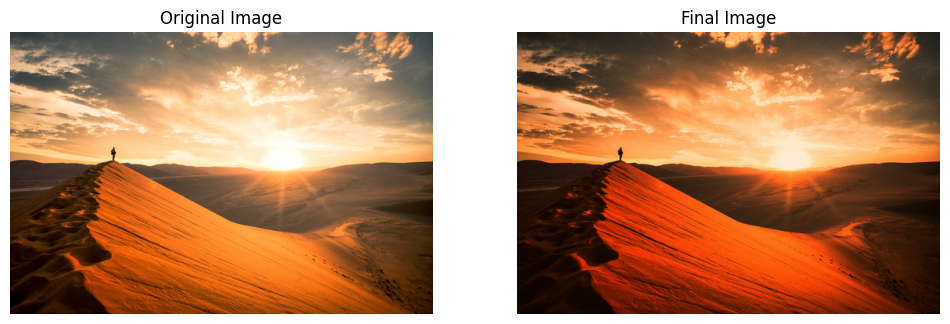

In [261]:
aesthetic(img1)

In [262]:
"""
In this image it was a beach scene thus I felt I can enhance it by applying a filter thus I chose the warm color tint and made it show like a sunrise or sunset scene. I also used gamma brightness which helped bring out the early morning light in a sunrise beach scene by enhancing the warm glow in the overall image.
"""

'\nIn this image it was a beach scene thus I felt I can enhance it by applying a filter thus I chose the warm color tint and made it show like a sunrise or sunset scene. I also used gamma brightness which helped bring out the early morning light in a sunrise beach scene by enhancing the warm glow in the overall image.\n'

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [263]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [264]:
def white_patch_balance(img_rgb):
  original=np.array(img_rgb).copy()  # creates a completely independent copy
  rows,cols,color=img_rgb.shape
  rmax=0
  gmax=0
  bmax=0
  for i in range(rows):
    for j in range(cols):
      rmax=max(img_rgb[i,j,0],rmax)
      gmax=max(img_rgb[i,j,1],gmax)
      bmax=max(img_rgb[i,j,2],bmax)

  rscale=255/rmax
  gscale=255/gmax
  bscale=255/bmax

  for i in range(rows):
    for j in range(cols):
      img_rgb[i,j,0]=np.clip(img_rgb[i,j,0]*rscale,0,255)
      img_rgb[i,j,1]=np.clip(img_rgb[i,j,1]*gscale,0,255)
      img_rgb[i,j,2]=np.clip(img_rgb[i,j,2]*bscale,0,255)

  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.imshow(original)
  plt.title("Original Image")
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(img_rgb.astype(np.uint8))
  plt.title("Final Image")
  plt.axis('off')
  plt.show()

(np.float64(-0.5), np.float64(1259.5), np.float64(702.5), np.float64(-0.5))

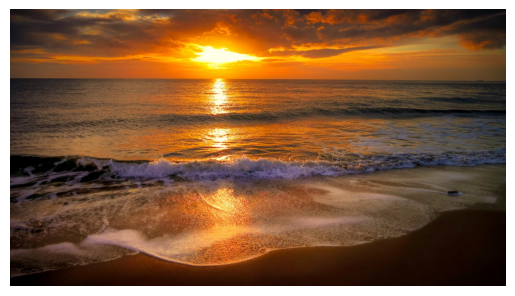

In [265]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image="""/9j/4AAQSkZJRgABAQEASABIAAD/4gIcSUNDX1BST0ZJTEUAAQEAAAIMbGNtcwIQAABtbnRyUkdCIFhZWiAH3AABABkAAwApADlhY3NwQVBQTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWxjbXMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAAF5jcHJ0AAABXAAAAAt3dHB0AAABaAAAABRia3B0AAABfAAAABRyWFlaAAABkAAAABRnWFlaAAABpAAAABRiWFlaAAABuAAAABRyVFJDAAABzAAAAEBnVFJDAAABzAAAAEBiVFJDAAABzAAAAEBkZXNjAAAAAAAAAANjMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0ZXh0AAAAAElYAABYWVogAAAAAAAA9tYAAQAAAADTLVhZWiAAAAAAAAADFgAAAzMAAAKkWFlaIAAAAAAAAG+iAAA49QAAA5BYWVogAAAAAAAAYpkAALeFAAAY2lhZWiAAAAAAAAAkoAAAD4QAALbPY3VydgAAAAAAAAAaAAAAywHJA2MFkghrC/YQPxVRGzQh8SmQMhg7kkYFUXdd7WtwegWJsZp8rGm/fdPD6TD////bAIQABQYGBwkHCgsLCg0ODQ4NExIQEBITHRUWFRYVHSsbIBsbIBsrJi4mIyYuJkQ2MDA2RE9CP0JPX1VVX3hyeJyc0gEFBgYHCQcKCwsKDQ4NDg0TEhAQEhMdFRYVFhUdKxsgGxsgGysmLiYjJi4mRDYwMDZET0I/Qk9fVVVfeHJ4nJzS/8IAEQgCvwTsAwEiAAIRAQMRAf/EADUAAAIDAQEBAQAAAAAAAAAAAAMEAQIFBgAHCAEAAwEBAQEBAAAAAAAAAAAAAQIDAAQFBgf/2gAMAwEAAhADEAAAAPyf5mRVe5PbVLWxzDCZJU0Wck06bTWI5Gm2XMYnRgNCOsuiaK6L+Y6JvEnp5Pzxuz0vJ7vnSX0zOvPgdHqiWnyS/QiY4zHQafD1cux0WT53e21gueX6Lx8jx24rmIdHOLiumzfc87mFugU9LkwgdAai8tbtVCvLx0oaJgs6fhkb2ElLGX9C+gBeY2vde+Y5hTKjJkCgtnzolV0YPYvJhE6F8GlpXWHS/PACUeYqGKQpR+wb1zE831Mm9Qej5WsNSkOlthN6PRfPYGNmZnSU9HzOX8yX0eBGdDqOLs5EffD830uRH0vNej5zOsu3ydTScj4+6kQHs4FSGp0cywtEDKuW7SuqJxYZQTYennANpGsfVEOs7BmWAvMEUoW0zzbKh8ZCh7kIu7drl6vWELk6xIsr9fEqE89PPAygOHQ4nUADVeYQHG8q+mMvotOIYPIK/mrgo+1Sg5N9QatpsptRuwK1plSr1qLmxo1bIXdocE0e2bdy2kfZ1MMkKdUtzMAdBHPw47J3gSQt9H0vlRua/wBUt8nhT9hp8fvz3+0s/EL89vt2F8ytO3QP80brh2bXD6vn9ves427856jxVVq8wEFsT6Hy9Xa5eKL0nLO6asg2qSPRqp29B8HntTnfSgBRkPfzD9eCIvFkrUkTOpAmvKq5LWVovJZVr41ue6kWFRXM18nJ14VdGvr+Pmedr0c9WUbRtAjQ8ylRErbKS9RhV1kuvho2m6ldFVi3j+1ig2Rep5ORoMp1jr2X1fn/AKJaNgXm+hl5+u/2cnNaTN1fOxtfO7uDNlpj1PKSho6UyQ6A+jmjYRP5frTk7GOVzU9L3vfPY4tstI4JukZh04ze4v5Xr5i2it08yfjK9PIELgOjlX8QlJPuKseZ6tV1x2l5A6nbwLzSvVzFrTxSQH9svXUOj4FOhFthG1zDYt9AGKxKUohaBh51EQWWlbDddk6BQz1krKXZUsHbssTY11/BnLIwDoCVsQbwr5ilCVSYoTze/mG0bJnaIrY5eliF8LU0Jm9zopQror5wOmGtfBow6GeeIr9W3x14W6yOXJKvSVxCA6VM+pOs9y5eXq6Y/OW4O/oY570L6mWOnTOQX90SBU3nQNjXRwWPeNQSxabr2YtGgtEGv5vdZPp1vK9Lkl+vQ7+Ll77Cfo8WcPQD3cqNWq9fKpGgF5T6lEoMLNenlU81SsK1JDItpVb5+lsyNPJ9TOX2cj3PDr6T359EIx+f6L+aRK0fbK7MaLafPXO6DKWqj3FX3fwDPQpSa2JKwrrN7QNusOhUzAitglqrAN7PrN1KgKxPRMPXyNjFVp+rStJaVUPTocVIolQskK54N6Aec90ZSvLl6q8b4TxlkYiwQ1kysuG8LLXpeIaHo4H61MPV9GStbVwrQkYtkoSwuUZUN7yxKoimLOisPeDZ8aUnZt9EgOZfUlWzyMxhU4yKzurjafPbbfztHhuzBbed25tdbwfBS3c7thmVOLrgBV67Lkzo+YI3dhKJ2YptUoZWjvgt8nZQ0zz9IfH9OwiWNz9AKaEc3Rn+0CI+ZOpM3zb6RI0zC6Red8m+xqc78ubrTctcXYbQ4ui2sGvMdLmnNgb5wn02b7nNgg2FvR5MgWst6HKna9ezn96a1kHxYrEVGIpJaGBUnULQtl4rTq4mqLQyvSkXL6L1INoZ2hzdT2PZSF6Xpb0fMLSosH2s2sbaieeF1bErTp5tKc/wL5s5mdDVD5SEDgrRU80Zhn3ZHgFdupCYX5Zc2Nk8358u81KvPn6gHn+jjTpHOzWm/IVKWDWNVqh6OeiblOnkzBalKzy66sEZXtWh2VXVthjU1wlcuumN0zqaUNsuumPKrf1+znsSLo5TDJOx2UmIu4ZQ8LHKAyUbaQPy9Gt5RrzvQUV1x3jke0K9nIqc9wy9WPbCN4ez9FfTdpjIgjcpmXDMCJKUXNWmawreKhqx5iCGfJRezEpWphEh0HtJ+Htqczfkenn31qcl02bPc1gmfY47Zt9/S5ByjvTD5xgsabMxil6BeSZM7flHO23/ABOPbTWzYSu2l2vgZ/Rq94w0uiW6k5gW+r6PHk00w93OhR0fZzqQenRCK3Iyemt0ZTP6zMK89XXH6PnZ5H5KqQ1RpgarcF5F4PD3oi0Q9XGhXRZeeRTduj81TrvK3JT0N7Rwrbco+RTdGjYZN0ytzNOupKvJ+6SvRzYNuhvOmAXo6cvThm0DVjjsP2GQu9ZGzh7RlGIbdKg5ZPtKseJN2E35eT91Y8nLe6AWbl0+mzR08+DTQ6+dULCnXxirUfRyTT1mUY2BMIuG5F1zDGz7tl7udK7pUKNtAivnEesCoVmysNipJUIT1J0OVGVZ4qJ0dsyhee+qXMtwd+65y3uW/TZCVe3jsC8dUa1v7OvJRbGgBlo6fLNCztAMT6J8a8Lqy96VE6P3nTPu9eFsx03ue5CeY87sPpo24Ojed5bb4a610+k86Gdp9MTyvL5X3fNHj+f37FCrc3fsIycpfYrxUy51PKMeNQDUwUuhV7O7nFOjV7eznVOkT66c6HaS7TiKbSvdz5ANgfp8mMPZp3c+TOmwyYVdtO8VTE25viLddk81MYPaQp48nTPo3AX7gi7gGuyqDyYekT6o5V912Z5evS+DYQehOyc1HUiXc+ztDbZldOlEz5ZpfnAStVeQsXZRhfLp487ZerjwSdGyictfrLifKX6mmHO23q5cSdgbLlRohOSoyB1AIoaKNc8HIJ64uL1cFbeQh1Yub06PdycxfcJ28WOW+c6WXkff51V2g9PLTzzjLjk1yz6Mg2u5z3wj9EXj7OcPssKca/Qe5ejnBdAv28eLXWr18+WV652dbRsjIEdlHBdi0biveUrTxLI4KNyCnLkBloZslUitSlVZdJG+dOraNs47pOa6Uvk5enMK/wCRkTOH4ukLZZ4eoR7mixGa6XG2fquM8XOw9ZryPHMq4fm4kugXD18vU7vA9x958+7b3v1Dx8zH6v3zfXy7+z5Ny3OfQVPk/Q+bq95j/Je5yKu2jx+xkJ7CnX6GMhvI93ZgKdADtPP02Z7IE0tfD4OamihmVfreMfxOtJaWJ6c+h6n5y94h7xHhZSXaz84zu5fpk/LKdkvo+PxtO6fYt8F7p5vpLfyyY7t8nBP1boM22xyW5xb6DpcrfJJ+yuCfxNz7L6e+UvfTawbgXuuqp5w+9AXHvoVtzo+ZBWQaWFZYFelFEIy9RWgwXQ4gBZ2QgBnZGtW0mAUo6z6lGUlPUZBquB5uxFTUAlMQevPZy8uPqI7/AD+Pt1dKT5wXUjeOI6yOsecIye1VCtlnVK2iSVs4zkqwTEmVPFGadpuRvg71DbGj5HfylusJHcfbrZO5OOvgNx0dpWi8Zbr4ovH+66xHIR2cLuNH2sOeOJ2Bp05AnZF4+vjnOnvxdXNn6SvLTMfu1xlQw/JV4gHeVFVtsirzcdRY7m2ejJGOGy7Mp3eWY5uCWZ304FOjyOm+n8Nh2Lfrvge973oT973tve97b3ve2973tq5Ox7hrz+P3EeB2fKs37KL5b0/z0H7hleL9B8RS+040PS+VC+lQen5uL6fV5/MI+je6T8/b7p6E/nqn0wspfLU/rOJ3H5gH6Ll+6nE07C/WnFe75mSfOL/SWYb5o99Lt5tuP6DQjxer3qe4X9SRu9q0vQzf1lStJG+mk1crpuKegqojj9mAqFpdKep60SVqupPKnrSboiN0dqlS0XRpVpJ0StXRiq9ayYqtVkYoCrAoh0ZLCqF1sOg7SvQY2Q1BUoC0FUqSBUK+NlF6Dp3zSI+gXNJN9U+QTm6ds2FPJfe9gTRd8nPzhv1xCJTZnNLz9Dpc0iW075nufq1i49o027YcyfVCj6qN+T91x0LZ0pR/yVgzkLTix4VwSWpabmYTtyX075l+W2oxik5qb7nMX4W7FjjT8K9mxxrPLHsHOKNz8vWxzbMYdFs8eaPF9F0Pmz/seP8AQS8A96PB2xOS1vp+HXnOL9Dzu+y1OJ9z3IIeH2dwDic/zOvo6c0P5703pzo5Ozae5AdV7XCwl52HlupdXvpmAt2derOGNk3WOY9RevryUvHtD8LIl308I7yDqh86GT9KPn/NTcpkWzakY9i2tGPSu2YxK3277Cg7cpi+x165dlzw1YxZosOiuQjTsm5REfVB4Sg+3nbECvTAtB0rItB0tEtR0ZC1HUqWBV2IOkPK1K1Zb1pDLYdaukj9Vx4VhuKjuOk6DuNp0GSlJjrYbr6tRshKiqVqQF+7nNcRFpe4yDXtS6te9bo1rVsr3tSUN/VsGvYdlck0slL2HZKlsK03JcNksawbK5LisljWBZHPYFkqxZe06sXXtOp7hvGprAtCjFlryoxdckKHsC3JQ5VS8V3Dpsc1WzJlgHSptQ52WFTc/KycB+flcfzCcnF0u7wZJeX3xfn9va5ewBy9eSu7kKr8na4BZduxoKvrdBRhBa7IVh1u0JcVbEBWl+nwS1pQHpipiIpQTI69EzVH7pjeK16JGlero1ClXVyUasNCqHkZyUpWjvkYm7sJQVehCpGhXNpaWpGTWsNeMb1J7HsWrz2K49bx16ZVKy06Ztb8+jVCHm7VOro5VOjTcopV1copVlbhOpVyilWVqFKsjUK0ZWqrVIZqtVkYoCpUwxUdSDHR0IOlClx1Gy2pWjoe617lm6xEoxdYoY5F7zZm691c9gXVySKUc1g2UlkchyyKUc/h2ShLDlKFsKwoWR2RyWHKVNYNlc1g2nU8gutDWDadT2BaNmLL2lRiy9kZiy9ouxda8aMXWvyVYItfls2ZAvNXSNmGgdQ2YfnnqFzDQ59U2Ufn5tQ2WSPPp2zPJPUjMgDRpn1d3AqAr0OAUFfobCqK93KI0pV0aY6M4NStMzRatwzRetVZhaKozC0XmzC0UVmFopJmFq2mzC0VkxUFaTPUEPM0ArRTwCDM9QUdT1DV5moKroWAw0zVFV0NAYZDQCGU9RQ6GoOrIWBQZkqOrzJUcNr0pVlvFKlSVHVlvWtSLwOpUlRxteBwyXikEXpWriaxQiaTQp4c0Za0kZWKzRtw3oN7fk1sScaWLK0Hc1sRWvO1b2IoES5QV7FurBIdlXRI2VcmZvyMG7LU6IG0Zm+fbTkPmkf8rJkfIrZ93io+fbTLOubOl5GzyOEBQ85IKXn4BQtoixU875aJ1fGrr+OSVkrNzC65D357rlPeFh3hvnrUzbPndYNS215XRp/Q+N+pL82xwX0bF+g8P45y/wBH4r5j7rnldHP9XLBIPvgGDZ/ShRUr0SJUPryvCcX526LjqjkKlKmhcTK9CdWR2+X5006505dKcypGnONbHW9lQDq1y/MunORVxsex409iMWrz264djtr2LBG17FjLtRiyybMYniNr2FQr0Fefhl6COall6P3NjZOnjlfEdTHNRt0vubgbo685UjpI5irL08cv4jp45aMOnjl4O6eOaqd00czJHSRzQynQBw5dehvzdVPSV5qpHSU52jboq854qvMT3c9qlqrX9BQ1ovYGxBEA8wI6t6hzpRYnmgQkNZcIkWXGNVqdZbVJKrZgszrSt4BvQzKsKplwSs0idDGFM3KUXlYlZuDMVoMSKxjavrB7CIqGap66WH71ZUNepeXrZOhHN0aF1y8tjNANy0h2dHkY/S890HDLuO05vpfvfhrZ+jh93NxnK/QPl3559nl551Oj0VhFW6MRJoNDUCc9UZXMn1xZEKlZ+vE1mOhIpOsEllWs8DKmRujzHXRHOiUOXbZtdPwGXGtQjF9qDtDOnSJhjRqGdMQW+o08dhsNYigxAc4x5ZF7uUUpechkzqvhpNUegJkTE1Ss17NkwziORsgPRvggN+ds4bpiMaXaOidNIuGCPeC4wKbUumDfX9tiRsVIxK765GL7Wl1wKaoKJn3dXIGLQFslR/21LEKz+tNlchxER6WhoCPGsjINmkGpCHVkyOWRs8rRwQnNM6D8xZWG4KUY17mnQLHrq0SMimxVzrSfFhHitmVITTdW8MhVorDHgRWLCVSh62KXnCToqHXWjZCdHyUzDuMRuq9a3D0LPUb5LJHePzlHXbf4hja+zsPw5feT0/2XzYud69P1vJ+Uc59W5v4n6vhsvsU/A9fkuY77K7q8hO2H1ExFdxXonjx0IKLg16POsqMPVqiIdYFJ59tGzDPHpMqee9vjrHnibw2TKK/dKIkOIOELYqSoBu5AfVG0zjSM872AZkoQLC6nosR6tQMhhEeZFjQaNIpVdkvCk9HO7VQJRz2cxRBrtVpNcbMsidHYwyabAKLUw/KYB5WiO+RGRopKDeZ7L2YDKpZtegAsl1SitKKWlwnc4GWCAjZoFCDGuvBo8VEquwdBtGYMvVToURaBbsmzNm5V8rveUYVm5GebzPrqxCiIr3ZAVGNYdkdgq40dq6lNnrLERy3p5GYsAk6EILwa5FbK95Gwr+oOq0ZMpeHQzC1J10QL2R3L57EbEm0wo40hfz7vnU9xVbcRvyHW0Ob6OUNnoec6Dq8fd3+S7v7r5n1D5nt+dh8D2vN/IfU8mjsY/wA79AgnsHh0cujux3Dn0dIXfLIs6K6CXcUdfepTpgO9AdMGPIL3jqxgsVhtCRlTo+SoDoqo0rN72evWOl5GWRm6VCNC2Su8uhrnQjvBUBSemDMeeNShMwpTyVJuSiF10r5wAOivzyCt1NuVXpPq449h06K2HcbZnBttrJEgqktpq0TNFqr1nkg37OvO+3VyMq7tGGarrLUGcc4yk0H4g505BPA6hmrp+Uu1TrtoxnwNqkwo21D1sLWlqoI2CEVxkKWZAzbyt6CEVq+0bzdH2oNWyw65CE7P+UqtHvOtB6F5vkm2LA4xNgqtjn0IVs8rt1bOFpyCtDtEZQxzB0i3spXhmwKNtCgZaxlwwby0CP1/RvTxPTr7w2ue5oVcjYgfFnmrojk2+TD24s9ui2At+3Wa9LwkMLs+TZsXHUxeX19KvH59E633AMMN2vPnYlZz2WIairWdxEl4513I6IqwaXVRoRHnIaeecXp5wYaVmk0FX1JO0wD1ltKoNK3qMqukKaC7IA1TMok9BVlX8qtaD4lHCF3F1iNhvDAG62vLeTdMXi1yvXU5M7boxZM4bV8aVbc9zLezoQlGZssdSQR12EwIzKKCWwAJxc4XghcM1VMDe1JAmsX28qWzIC9xnDoSCtfTQhOjYHzti0HQyRe6lu6R1Z7wQo+2VB2DnMlVKaBMCxHRX5t9Kb/sg0a6tc2MdQuC4M9UBwZ0shqbsU8uGdFaQamqEMwMq417SRMJsS60YkAszNVZZGrZ0htK2YJabsZVZV02ufXx6WeS9h1M8uWdOoa5W3LfqGOZCjdpocPfnft87lnWXvNL5ppz36A6P81uej5H34v5fx7D9M8T8LyOfp+zZ3xxVt9uj4lfnt9SF8vU6o/U1vnM1Tv68CnZOsBzVu7g6evNaR2lXKSddkeSO0dK+PV56VkSHX8qoybXspsGiujVlwo2B0nlteswNA77BC95hiW0QPIF5jamdsEdeZPtAOxI3pI5dnbkphW1b48+HqB7c9XaLhi227Y4IOjgjnVunoNy3un8Rz5d+GPLi6ip2ALprkcvPVw25QHaKjcnHViGwL7dsuTXWIwxSalwcgetUjGjThXyo0qjZ3tTxGyMto9Mmh9GAY90b1QsK0sGam6knbm1TjlGONRhWaOmJaaDWaIHVMkyjGuijtvxkBG6Njm6o/RV5mCOhHzpWG77mdnDTjkvbdl7CvOm2PMXG3UxUbOiQCyNEANwS9c4p4tRutKQjSblLOAoeatsYQ4R1qaklcwzPthD1zpRF8JY2HUplPPe6jNtHkI6YV+bni7QRsQm0sRlA3/E4ld2m3P326MMqulchLSs5O2bO0WN+cN0Fc2MXaLGmNfaLG2HO7adcA2uMHK9rV2yfal2nii6MbDnqdM0U4z3dKA8tTqwDc2HqiOvEg7inRDio76yH59T6TQr80F9LXvz/OAfSFeiHz+/c3A4SO7rtwpO2rhx1+wlTy9+pttzFuoqw5z3QiqmN7SvRcwe3Wqc4PoZRuYU62eenJx1tHHJ16cXbzc6TYABmi3YcYNdf22EXSo65HtgYAS0Y4+5Ri8DDNS2N7UqCwdWilwmecMw7jHUmGXwLtC0RhANs7c1fdMNzjvSqK2RfYIjcy/sNK2OPokwfZz7SkC+mVaZJ9ZQHO0lo2uPQlSl6Y2oB+rZW2pdGwo2M11X9pHR+aa6MU35727fPi32CSrgX3mpNhs61ue2LO/eFufe6S8KYLD+3z9HHz01YvyMdKfqhxK3UsXThT9Ss8+cB2iUbclHbiYcgHtpjXiq9cNjyrPQSWwx9HCU5+++Gq5dtuk2zjaASqJNEYXPFrJXRK9w2iA1aMh2MYxXcZ5zOhTuQck8NqMZVSGxAddRsjWrB72dFpHX9fo50ia8PJJVkPTBRZ0PocNSi9x3YInabaFciCNUGcbq5/WFfthcVRurML25bHXF6s4AyR0SsQMmMNdainhStps2zbsHaICojabtnGfXTnlpnA1lgEate2zmz1n1Ds6srjJoWQoTuMzfEnooR8a+lcHFtvVB5rR3nVOAbTYm+TGmyrZgNfQU51NKUonGxRDkUdI4zXDSBkX3qBske95XXcXNCvpX8tII3RGVG7DANbWWkxBI9ARsklYFWhDZpWzAKMHDx9d3w6nm9Ocxqs8NchvU8gXevrcqL7Ob9T9TyOP70ZfpPALWzXq8PMrX4r5/2pShfwPdshjr07NRPMvO7lRh5qjG0B8qs9jWxT59OyLjGcvRejrzV5N0THKnZd0KLOB7rr7aAMYPVDcpmWbaA1iYAAanZzUKxZ5I5e4bq5eT91xeiHED7oFZc0zuJzbFncrhiS2h18hIGp6fBsWyidEtIEDRjezhUnoyGbpIqF5KSUcwpFL0KyuG/VG4Tr0Sgz51FPAmyoS2HzVTnQAQNZhWyDYIOqKqvWwWEWDkRaSoyxhXdItYOxHs1rzfSbNSJ0ccFSVCHA4po7LMaZ1NsqvyrPQ0xTjXPGmQ66dTiK9EXHm3ejbjT53ub9mCa+oeFV7swlFc3Xoy5Mt2dUrsiBHPpDXIKY2avAufqssZfNYtPQ65pbyPcl681RxMHFCT0GI3nJzHTV59aW7F3g1SPp7PzI8B9K1+B6t+fveXT0OziR+rL9P63jcSL6FX0+Tkub7riPE728hHmPB9focznc+vZ0+ZwuR17u1eVWvutX5ANl6IWOem1fZLM2eCsF10Brq2hqFwjEbtE24uy9kGSl/BO+y8zpx9XPhX2EwoGTWVqLmtSeay2syM+SKyXMuHs5NjL9o9XPgM6duiCGZt2251zUo0V6kF0TW9K7IJiMp036YJaAoTuy2Gl09QMh8pKoEcrAtVVZqgFNSjoncp4vlA3R7ZdtAd5pCdowSu6FDlFcWkaKn8hou1SiZ9dALZCWIGaHLfL6DIyWlRy+W1NtM+WxKpXxuTrDCsobFG7NquXNG4q1FlYoV5KDMSkXEUbR1AM3UiOL2y4jS4omws2BqrwjXqG8rs0FWdItJQ9bNIxtAmwPrXpaNJsBcnYDnTzvshzxQdoo9aVELa/uSuIxoGlszTsBNu6fGhSP1T3zrSbm7ZvP6n6Dz3M3VX9fg+dYn0viPnPf5cu6tx1S55lGzn9gKd/N1x/my9V+lZfL0i+2DNnpRoyK9J9MLjmyN+2SnQdLTib9XL1PuX0aT30WzcfZnFb8y108NplMILfRDJrq+Gy42mEOOZ0KlKr7+IxFX9TzmpUa6ucXrq9EiK6lbSRq0Mrlrbq8Wyh7R4nHOSwyyqucV01imCyb1g6irw+zngsw6VFNSExaS7Ki9U6GnqUcWILxWANeUq1ZAcsFoIC6+hUZaV18HBDIwELSRoGxeNw+gWAth/HkknJa5puiVyQy7piTehI8jHKuylDXA3KgG/Fm7rGeXmuzdaVY1UpZWpiqV8KIcWit2kOlKUS9QN5krPZwDz3PaIxkdXHwNksS5q/JufpTM9fg788pwLRlvncqc+zFwj159GpkM254ROT0OPGb1HUNOixBeV6XZ9D87t5vb9H3fi+bXn/U/MfnefT5/q/GcVXpmbB6bR7uL59pdoxM8ztxy8b9Ri8zD8u3flo6odkln6vP2Z9dMAFDiKjK7WVQP1NcFnj6dDyalBos86t28fUU5gjDqac27ydHQbHPCou5ksC6uVbaVU6YVKJhAq7TNnXoS4G0r3KquUt4gEfQBlJdnHvDwPdPNt25otU3VVCdMTCsyyqVPnuDhENQ5YYbTYAsN1agdNizYIXy7mWNoE5NDDuVOe8o0zYw33QOc69g8smkTq3yaIdMWdeiNe5uF3S0yvdcKLMkbcgPC95/V0DPLex7UnDeB7xn55ZT9L1vjbM6fZD/Ggzp9zZ+BWm33UXw46n7JqfIetD9Jfgkgfpwvnzuf6hfkWZdXT7fywyz+nl+ULwv8AYK/ImIW+re+WEw+nh5XRlTXleI1k6kh2BVqtGoQoNqXyWZsc3tAVVzd15k47h/u2d1cvx9nvtfmv8sj6h5G+eM9xULx5exiF+WjptcN86z/pTbz+Nn+7qY/Mk/v+2w+HdX92avxfJUun2uLq+T218/z/AFMgGyT0ua3H9Mh2c/KZHdt+T3/PV+z2u/k+RKfUo7OX5jbv2M/zu/ZE25FjZX5+jn9bdxSlRxLzUCe3XxIKdEzVeT9t72XmMbo8uvPKFlunm7N3gr5uue49UjXQ8EZRbZU6OavWcyxdPL55CA6OZtWmjRZ7ogFxfNoG3+IIu7RXkXXXWWXNRK7HPvKXTrrzZ4/GKHdZnI567qnuX6jayYWuieeeEAN+EHqq36E5PZHVVRsuddaiWDMYJe1M/EkSo6Bz+iApz9ZCcPmfve4r+9723ve9t7zQNqeLsnYUmXGNWkjb+mPFc9pzXOVQPADK7V+nfHu0nfttT5B15r0a/wA+zud/p+v8o7uw0UNBQ42tysdU9/j+soy8VTtKc55dPvRA8Uz2kqeBv2mio4g3akozXWZ7fk+12ubhIHabXMB7eT6DnYOj4/p5g9BKVN8vL4pH0Q3x9QR+n+4jM6+T65i8Xpw6dHBKO0tToOUmg7PT+Ybfn+j9D0/nhlb6PzeJm9ENXIzEfe8fQ8D3VHfDzvlbcxEKldWy6WXo9DlTQtrs85EadtPFP83RqUjEXdSHnfDbjCGZyX3F+RU6+X6XofMtBX3KYaHTDsszmVkHVaHP5M23UsFyk9dLF6EiAPZ7LursBldTN00u7jvOJLL2ufx67K2t0eE8mU41apkP5BijTuPr9U28p4TbmLX5TnPch5vUpM1C3DulSRorxefYw6ZvnnyC+DALmceknzdJWMSqaArTu5ikmdRVCq7dY5qw2ovmXBcCoMbhvTPNWHwMYF6LC36sXL0OJwHEnll/MObZej0dSeWW1wDZ/t5s7lidG6GxM3eNtyh+pGdynuyxhsveA3N/qXznJQLN9CkRV7bc59fvfoPYmjdXa5m4dpoOINpv7ykLiegDfyc46yy/s9qDSQatEl1DocxYL1+Zz2kNC+kvA2ZScuqMjeVs/R8DZ8foqoSegZ9rH9m1LZgUOsiupt0B+ZSXbavL7F+eHWrVzQmbmlL102yB32g2GQRlOo0gHPrWVIM2oszzuqtICriiLrTMLyDDRz9IQOMe+RPbeeFvmrxPSOrlF3EgqdfClSeE1ma/VzbeRdGuytXG0+cMhidqp7Uo2C9rmQ897fa25k+75H5IvTzDc7fopXcz7pS7csPsZx42vaDYc6fZEpyLaohs9PaCTjX1IZc47VBhWtAAq3qR71KYyKatOtJqd8+N19+5ePn6A0D8qn6YXHIX6QRfkjauHLH9m+y7Wmw/amXZHnAvZl+aK4fUL8CiD3AM/sWKerlfPGHZ8AD0pe94gUnRNiL6AnmqnEY5zVTbur886Xo3Ys8QpR/oXvm7mT6FPG5jP9CW5pk7pQ8cyD1zvHPszS5kQMzF3+W4ps9ZyL8jvbvMlu/QDzG7Y4CZLjsS86m+65PKQbbJeTOo1vTmjNgRaiXWA4VB0Y+dIwessJlc0+eaYbetyrtG6YHMkD6Otgu5tDW4iJ7uw8dvhtayi82PTLz0NdHBHDdBjikbLK16QU6fB8d1xueI40FQWm+eLWtzNz6nWETcQ72BtuNB21Vbj7dawo5T3WDmeaZ3PIci+lcbIvrTtkD2BkZHtapCBGq7Csc2CkvWyJmZkqIl/OPWH6gLAvOsjvBAwM0GSE6AFUZkk1laBGkFg7UCWmVcbMMqgX/MGdTFD6lel9xyajs83kMuI7IXBuqnQ6bGe7xHO6aDf+fdE8h4s3YZaDn2d/VY5rHSZt2Ch0bDN8zyPq4Iz+cl7SJPyrXfZxPNg6DLGUNkuMNRy28r8s410CbltLt85K4A3VLJbI7rK6lx28Tc53ee5XQRm+b1EVR3r+L7buFVH80NyandNeVbhDd7ao+f6HXFbYleoFRskurboTPDoVdeT3GhTxjvu81+WX6xJDzeF2uDWWXVkndzZ4tYgbGjQVjqr+tI2uamYp6kV7eFRDos5pUZ66bqODzBFZBjTYDY1ujMrcgTpyz3KC7MSnjnNvPwo0Ac6OSiZS4xn2A6IYgEZubopnDhY5Vdfc9hjTrJZJLlqsOma4vxXtI40pTq6c8V0264giOhtztmG/7GYddKF7kEkA2Q9VQbOgVqR4fgKJpQeJZBTZmivsGBC9gOtvEgGVczvSgCGaIiYcdXtGOluKN2kg8fp9iXNzGj0BS2ITRx5ssYm9F8ncZNC3JU6oDTAygF21K85h2n9Hp8yXO+mJ8gpF+9J89ON05Oeoy7OEK+GY5pyhzEuteB5Rf6IRX5nodbow/ya/3gXB0/KdrtM7qThH+vdXfONTYojZ99KhOd7SbqIHJH1GKr8lXWOW3g+NN2iskythWya7RnTm3fH6Z3k29GqD/0+PnfR+X4n3DlS/zTA+w/KfW4cxXcX9PzsPRZXYUWbeU5FdCEfOjYcGys/etjkA6ASHnLaqyUhn3pWs4hCV1NLnHw3QG5/Py9w5xBMveE4DRG7ICO0Fws/v5y/MVPp+W24T3UZhGS1YeI2wUBuwkNlkwzafig8UZlWDMoppRQruDpNcDpapl02rsOcH1FGTmK9RTDmz64NpbzRldJXMjBhdrIIbrjJ4dJfNZXFtX201OElddlPClJX2rUI2VjPrQpSngnbSGRN6b+thbproNZfNWXvec+fqzl2+jwGrFtWqemcXSxess+dw30jjJ7BNv6cWykeo0A9eL+naa0+RsfWwSb5x0fQ6kX5zVTqr773IY0z1ynNu0m9Xk+rcAYttTry9+r11PM6j6UrLvAzXVwWeywbIIKtsZaXnwxrFBoyYnP1pMaHo3S2czq5VzrbQuHtx87tcdzu5fStQXgHewldi9T0ZuAMl9bl5E8Hqcqtfm/G/ZOK9anJC6tzr5/nuf3ub2c/F6PRIlFzF9HrDcwC66+otbkE/ZLBxWt1pmV6BADHjoszZKHS7QwLQxzjb1inLU6u5nmdEqxk2XcW+XZXQsyXB65yIW5dVLGq4GNsp2QPavROXQ7kJXhFvoKrT4JbvFtPjY6LMZFLKIsmtTGGRtiy5w0ozSHOUT8VaqGpVkU+oq/z36Tl2nw2h0Fro7pZraFUxo5ah8WcE6mriuu9YjKR31G3Nj2szInU9AOe1yx1bZ0IK1l0m2JNhU6oMcjGi+lMDV1XJ1yNFtYsFhLOi3QlxcMbqEvdBQcy50fkbiUu6fG43oNfIVkHd7bRuRjtMkGRNZgMaqlVLiefGZw6jJy+e0IbDs7V5oO5Wwx1wHrC2MHbxxYToHkq2xnLw6tpzDc5Owrw783U06X0bRsc5scjx2fNeE/oeZn9xx8nKdDn68UvorK1891bYVvHBW0MgegfmehyrdeJzG2r1WzxEYty5zDCzBVtevVLwTCvEUMiICgyziuuZYodI8EMilTA/gqlOp1uCdaXXewXmm+OpCp2Mwh2gXEIRsRheae5GANht5IBsumNUJD98Ujo8tEOjXs+zzKJZN00K4ZyukuoBsFZ0ijDBtBwyrmWGY8nJmVgdxpDaGFpFLG9kCnOTliw0fZ1QrlRJnaVednbpjcqZ91FOds4jHKqqwKbhdT2a43TsCA6r5z5LTpa7kyYOiq4lTFAaFlwadNgv10DkVN5qqLaKS4LreDeL64IwDt2EEjtk3IpMnXZuKxhrlqkro7+TskIjV6BDqCqFKgVWfAy/dGtiAzFJ9F5C4lFcTsMlGybPOJfJOQsye0+4+02kk9x9aZFNdKIa8zz7olrM8VVTsOEdX0/wA2W6vG+k+wn48OqEebWetyGiE9uWuAZ9TAtrYvRfPjQ53r4z1ov18xVLDrFzMiKoYVPUQckgC0D8y57jS5TMs3YqsNtMqk7U5TMqdcq43lMsuo7iFKdHXnfNulHjzhq1RtlYohYhiylmRoNIYXJnBaWkukuysiAI5qqNiGxhrlMVSGDhkPEaOeyHamcwmQzKFQGhiMyyWKtoHKba4118LoiTIeEpAzFAwwvYPsGgCnKWQ2wsQEYaJikXsG346vZkRwxrm8rnYG7GtGgLhqVYcZSM5eKd1KOIRlvq8wxl368q2j9Ionmg7hMd5dp5DiuOhqYZg2zkuZM2fRKuMfUS0QxgRKOmKh1eoHxq/h6RkqsbxJVHbQ1VbJeLhpQDCo0pprKXSms3m3lbVlUvL0Ou5hoWPrZFJHqvc7t8lOrtg6q8bNjM7nTIarIFcGX0dDuUnLdHiIh6BGRp53p+Wr5hLq5xxZCk/CmXVA9WHURRlAn0kKDlixCsuCARI2AoAGsIjNK7Y5BbZllyRaniiBGLkU8SrARoGyiXYM6YtNJLAESmyMplHkHWlCD2DQlry5cL1sHLasQQWFw7aBcy7AYH8h0Eg9m4MpJp4tCWq4ZGGMpaD8datY2tWIOmIg6axVtfwoON4Pti+DGH04+hSfYqDVTXeNnG2pfJgDr9H5l0gfcW5y2HV5WA8ytGsRXxDbbkqc0TSaGUEwujefTSG19HI0lYlBOBuc60IyOm5LvuMlXAdCwMWY8HZlY03acFadI8oIP0SIlNntbnpDdbn5tVatkLl3lc802cjPeWxwianVljMdA1IV9NtLTVX5OnX0ssnB3dMxiO8Wa18I4nro2OZZ2c/nXutpAV6DGbbPrlQO4/seI0poM9XFlQUVoCES7JF4MNaK+2M2mw2PeGGBJhlmCcxzs/2iXDKHsUM8S2oM7L8+IhcRlap6gBOjIlBNNuia4VyM0eDmcwAIuJkIC6rdAuce1ds9h0W1IgREDYRO9SslTRSXxsJ/JZTYqy2BKUhjeKyRMe8F9HvYerNS3omMsVtXaKzDaI9DaI9BEx6NvqTPLDrbrn/mTyn6Hy6cyeUtnEQE1sjOk72si866r/JaOp1FMeEbWHiBm3a15tRW1gYzYXojE8lea0FGmSdjJsjO6WT07NXHK9Jufrr5C5sSDCVIWram3pWRqFhlspoejNrKsJozGV5UEgwWLsNZ91fTHC6VL5TYUj0lX40WK6ebloZ3h7CNKbXn9qfcAd4oI10mJTyDa9TPAnoBueHJ1at78kl2q/cnFT1IPS4uWp04+zi51TpEunmxabtXGV7VBhj30qOE6ty01yjq2cPkUY7VsQo2uXn1WXoR5AWXTWTnKW6wMDIEFgyudchZJlTIxIaFXCJ+yzcYytLAJgpeEcHyqjYGVaERIWqnJ1cC2Tg6dEby8/BKv5daqIparmPe8TMTG3picvq2rhWPez+ialZrEYTX0FYj1W3o9DD0R4jusTeUnXM0zpBmVGPbLY/b4o3Lt7JjmegwXIXW2MN5To5YDKTLMLjHkRBmArVB6/2F4PtKk2g3N6HY6+bmg9XqFso+3panIx2vptx2vtMI2fbXojZGP1wE3zzN77nFHDD18oh1KAjTArHGq3spTnvbIwyoXdZHytlvVByXNh3nrmsazvF2Y2qzocfRksvt8NM/R8fkSjK7CS8qaraYUWNG6c1PdToAcvn9qdfbhNLqh0VOeUvz72dmR3culGcNp6VFEHU6srspk8rUeYDxcZW12wRAYsFD6ihDFg1ZXUxAcag1KlTVUpg4MK5BwqmwcWYs6p1i+C7y2cVZ8F5lUsOctSRDBELxyuIPSymwbYKD7UyxDMr1ipFqxGPq2mmr6Yx9Hvbe9X2Fqert6ayRNfQF9W0HVrarCtbQwiswR6lqttkdG5VcnPKjG0M4yvvKZVld5nPuMyJTwzEgKNf0EGvPjhoraoN/CKMzdnowznd4Ol1032ucOlOgLheV9+MW6HatlXjTVYwjqehHnHgWRRUFPC6dNdxfLfQMEpwxu0cI5d7cspxnmDY5gOquDhO7rs3w2+jmDZ+rLHJ0Z2kFjn6aFmeKxZAXnYpk86Z2l8lZa7y2Am1tPKxiV6HMVo/RLLFpK3iwuIXRyz69eiAzWs8wCXEyBeTzrR1D5wzPSlKaTuuerKHdQBtreUOpXCeWTEcYWYLLOoMjS1mmGZGgIrWwmiMseuJlzo06MuVmdAuFymnMI7VHy4mXdf4sbDcJz1CvQI5VWBV4E2gdhsIrMNGK2jCk+mhiYjG1fRt6PV2mIg6Yj20+j2Ho9470R7CI9DD1feKRW0ER70HNEpdH0BUhHbIt4FmjCSkxbaivlv63SZ+Pe7M2pyuptlYh0VCZ75unMzwa3aY00puc4Vt1RuZK531Ur4uDzKAadsgI3Wu/PAZvq+l8a1C31vS+Wbef6MXi+i5LaaxDc75YNkZ2PTWWYZNNc2GCy8rmtpqsQZobZOZ/Fi3O9L+rDoswNGNtA3NhWvUp8oGb6geV0ubuec57Uh0UlQTXR9uxRMhbWyaxETxK8lWeY1bczlcN68Dqtp2miS5KTR2M1KkiOq3eZl2/ArjiALuZtMuk9xTLL3Z+BRon0e/zQDp9TB81s6d6Lhxlez53JXw66nIhcdax8/UZfoa3z+tF6rFzBmTQAxtatIfW8OCpKRUiaUqdI/UYTEQ0pivssxMHR6vn1oj2Poj23o9U6ImDon3tvej23o97b0egj1Zhkj3oyxEww96Knd6XTGnUBtddc4EMriCoFS+3k2Q7V8aCejf5cjP0ZOaKp6W/Nex6k3KPKeiHlNI4gPjXKDZIFF4UDFDFMwq3ZTZstWU5h7iGlvK6Astv5Wu56fd+a8jn/Sun+ZO6i/1yMXd4rjKjnE7iUEGOS6s8elAAlri0La6iik6ac4qcr6POSJaamggvx9rJBe5unTVDWHRojHnHoo6uF5M5h6Vio85gU5QndN08mJrPVxwPoPIZabvuX+dq9XJ3GVyorw3lcmKT0IzZoj0JRkchSCGvK+Ks1BDA9Q0ZGKhgqWoPMpRirRSVHV1vStShIDVlLUcNrepBW3heIvSKE3rWp1qRBWKzR1mIjSmPVbW9HiZiY2iJjasTB0ejx3vejb0R7afe9t6a+wtHoKVi0Faxep1YmGFfek7vFM00rNSmRc3KIgdb2VA2nfPMp0KAqKOQtALdR1wYFNFJ5Wrtr6HNNZto6MKzmhyxTt0eNRduEzdBXEd5dGWdzl1fqOdwfKxiAvmY8P0bsmWtChhzIcXUc7bql9i6z83+A/TCvxDuUbpktJ2VeUb3EQuVoDshzQqOK9Tr35uoQjW5+iB4PQqyWmuLn7ZbwtYBtU+nzdWHOi+ZZF9R8x5rQbyOuOtPA8v08/0jlORQtz6iKQ+zjOIEX52KhiiEkHmx4HGBfBsULIfDFgVSpvCgg1RecEpWuFoHUglKVdLVpVxeBwVJAoOJUUEEgdSCwP2F4p461YqRNYgiYipnMT5tX3o2n0eOtEQNMRB3vR473vV2mPQd70QRf1LBfejx0xXxS1Yjaa+qwtX0HerPjjSOQCkStjqymSZbsiYMwZFkMyM4FM1CTFmmdALdk4w3GMqUfcYzc9X6jY4+Vp0GfhVw1pySLnqKeJbgPpVMRW6OzK8ih7LyKOeVtNmbKEVmbKeXN2UGH1/ZUh9imeVA4znepuw6L5jdW+xbHwaI0/QE/A9aVPpIOWaDdL7nxSfpnOQ9K/Vn4cKP3mh8yzgfr5vhSBn9yzPkIaS+kc9ydOrn2086l4OrgHaBRUHWd6UrRL+p4rf1KnGpTxJPDgKW4LZSeF7YnqRheBwwvWtWUlR1KloOGFq0oykqKDijp46YipF4rJT3og6fVjafV9hPq1ItSIZJmnjiRS23vVja3o9tNfRtMeqdPoja0RO0VtDCPegj3o8d73q4T6PZJ9WCJr6DvR6DveipR67JZ0qNpdTmV0qumdoOLhqyTwLWvzC6t1afMXzbyuZbZsqZFYhBFVy3FM2LYNg5br2GNYHgx5B7ZiVvIzMr1xastKs15W4LF1b5mYXgFuFZXM+W8SzZSQXr53lOlXPvi4RDwz/kfAvnzLqdK2ZVTpxm2LatM2MNGM6DtKM72DsJXYNwtXBuFYwbqDxxhCq6kpQbqao6lDyDxUsCkk1ReGPUcgkkVSp5WnKfy8HHqGpU1R1bFpSML0rUi9Yqd6swd70wU9WYI9E12tHqlJiKkT6PEeiPHRE12973jp9Htp9E7R71drej20e9B3o9BE+j21q+9t6s1I973ivojxX3oqRNfeO9HvHe96Mse9Bn1bHHiV+xW5b222mh5kOKslZ962NprK2klbrS16XRrlDebktSyuSQ3Uk9TwJIHBJ4DGJ5BOx4FAxrLzmYleRmZVkZrynsWZV9s15S2LXlpGZgHtmLq2BPdXwzcKzi15eQWfLV2clWoLnlJGahaCGvLTizKvsGfLexZlbwDPlvDMwCGzAx1YFoMTIaV5IPK/tmYX9seF/bM+WnY/l52PAIwN4MHHgE4FgXiSwP2xIpOE+r4i0RGW8U9tas1On1alZ9XxSYiDpmvtpr6p1oj23vejaZrO0x6NvR6CJ9Htp9X23vegj0TVt6YjC0V8VtFfZfe94iIn21fR4n3veIj3vYR6fZBe955+9723ve9tMx4NNo8Gm1bB7XHK0Lccq5LDlSbwvAmkPgTwLw15FJF5FGJ4DbAvg2DEkdg9prIN/Uga8ROM+9GNpiASep7a8VnG00gYvg22LIZ2JYE7HgcbG8LwxvAkY3gzsaBQcaA22LYEjF8ONi+HGJpFGF61qResQwn1alSRFdrSKdiepG1/UjYlhe2J4c7W9T21vDnAnh22v6vhr+r7afR7b1fQd70wdNYhk96sZZ9EHW9WdveiNrRX2Fo9B0x723pj20zWQYiPMJiJwms0Ot6IOtWPYej3ike94j019tato2iswdHvQRMTG3prOExHtv/8QAJhAAAgIDAQEBAQEAAwEBAQEAAQIDEQASEwQUEAUgFTBQQAZgFv/aAAgBAQABAgH/AECCGDiQOGsydu6+hZxN0sR8uRXFQpWDAoxSJ+/1/Q008kgOEFSuummoAWqwfhGV+X0Enbt1EzS9DKWw/wCAuI2zYrF9tjj/AI0DJ+0YhhAICLu2UVo5X4Msk5VVmxP5eD8qgAOYJJJw/pytaw/5P+qrXTTWq/xYYENtmgjCBQESOIRL52i+f4z5W83zp5hhlPoHo+gy5zcEMjRmPkPP8nAw8uWpH5f5d5ttvtgBXUjUr/kR1okbxug/VzQ5eMSoiWGLymPWVSqJWlZZIyqC8ytEYcJv8rQQ8eZFUAmFwSTh/Kw/l4f9VWuunLS+gwZRXTSv8AggqVTmZO3ZZuyelf6B9g9ye9/cnvPuX0+mTeF+oMMR8kMEsWk0KRx+WbztkWHzp4T4p4WZmP8A11X5dgs2V+ISzAZsZKdSmK2wRlIK0maotFipRY1icMTgXXUjFGMrYSTdaiNPPypsGHCtYMUcyuNjHLv/ADVa6aa0FvD/AIH5d3laaaaVayCfuZdr233369em+17devXAInj9C+z75Pa07svpHoEvc+j/AJAemT0zE4RVf7r/AAQfxSY6Yj/R/A2UVxVrUqDjZHOvqWVkt4UVsYVqBa4w1ApsYa8eIgESoAcOEYfwjUIoLs2xJ/1qsXLjyEepJfYt/oNvte17bbbbbb7XeXf+KAoYpWQyEnL7dhKs/br16GUvVr6TOPSX6NIcOEftVVVVBUj5spVkomq/Ko435VVh/FyOV5WP4BHhcydtl9AnSeRzJuWwNsMLbbfl4ygUW2u8o/gwm9j+nKrURrEF2L7Fy5P/AFD/AKq/3QUIIeCwDzcBHpoQf83d7bb7bbbBt7va7/aqqqqqgFQEwN52STCup/K0rKyta/BGCs2xhK0qtHo8dJ55oK/NNarnppWippWuBmYvthy9try7vNeQh48Pm+fU4cOWf/lqv+oMHRwFQEjnowP5qYytflfozXTTnVVWuutVrrrrrrroI18wZH7DJ4ShBBGtft/tVl7Xe+1k3YMOSTtKSP1VePC5fffcOZN+hYtdZRXUj9oR8VirFXnrsXLlyx/KrXXXXXXXXXXXX/AAAXTnz58+Ig+fjz1qgExWUlfw4zNhWsvNOeuH9Db3lVQ/K1000000CaReblzsoksixZOjpyKalStV/mqrUpX+qGAMhFfoYk/5oL+UV01GEfuvMQiDmqqrLoIymHCpXXTnz58+elVrrrWtVrr/AIH4MBy7BGDApQoV1qgdt+gl+nt0Bw4RYffpf5X6Dd/lUMAChdOfMRjzcOYh4cdNAt7kZJmmrKVqqqvwZrocKstVVV+Lhxl/KrKrXQJoI9dddddddNOXz8BFQXny5lOIj1ZSnMQ/P83DkyGMrWHCdrvDg/b/AMD9H+BgIYMJOhY5rz1KczHQ/L22wZoY6rWqys1oLqFrQI0IRVAAQacq5hCdddOfPmUKFChQoYzEY9aqq/BhxCxKlNdNa1oC8Meuoh5LCYORQJ+aiMQiLlzMXPQLTDXnrVVqIxHppz01ojUqQ+H8OEn9qiPyqqqr/F3g/dtr/BirQVQyNEVP4f0G0ez+VWoWtf0MDe4lCqPm+QecQiPmBrppprrqVEbIUKFChXUqVKaFNdddarFDfmpRYjDpy5iLlrsMOA77c+Qj1ClPysKaUy61rrrpprX+K/L2LFjhBUxsjIVWNYiCKI/ddefPlx5cuXPX8P8Ai7sPvte21/lUR/iwf2qqteYj5hQuDEkGQyhlnWRYD/PPlXwnxGLTTQrhUqVKlShUggiqqtRCU1qKFvD80PmePrqIeI8/NovmXyjzmHiPJ8zeb5+eUTv13Lb7Zz5CAeYeX5vn48uetEUQQRVa6FSCCObR89WYnKqli4/g/AAugiEPHly010011of5qtdNda1589NNNAtVrVahVQDUKqfPxjTkkQISOYSRzhvyXz/IPKnlaF4iCpUqQQVZSpFV5/A38xfInik8kkQgWLzvGjIYT5ORn7SelvUvvX+h/wAgPU0nU+5vafUZdeYgHiH80fyx/MX+d8Q83Dlrl3d/5Juz+n/NEY35zaLjz58PnWPANQoUD8AC8jCYtNNddaqq1qv+iv8AFVWuunPQAYVoKqr+CKIHFdXPl+NPJGn+jC3lbwt5GQgghgVKGMojeb0N6W949Te8yCUzLOPcfaPc/oJ/zWVqI18yeFfCvm5AZf8AutCL226dTMZ+xk3L7bX/ALOURpWta61/kG7/AAYP8VqE058+fPlz0111rWq11oDXVYx5z518w8fxfKIBHrqV11CgADFbcEGKZPYs9/8AUQfG3hf+c3keBoyrAjK0058eKedvGPIfK5OVVa666cl8qeKOHbe6qqy+nQyFib/KytdNNcObb7779OnTp06dOnTcvv03332222200000011051QIZG01/NdNOfHjx48uHz/N8vyDyfL86x10+r6B6WIwOJg+2ahefDgPOIEgXxr444QP/gIk8h/nP42jObWUMXBV2I0aF/Af5z+H4x4B/PH88eAeUf6vbYSdOnTffqZi+22213/2Xd3ttttsTd3d3/jba9tg/QSibt06dN9r/L36devXrthGbdN9v81VA9OgcOHEgk6CXqJh6N6GRzr6x6O3TYG/3bbr9D+9ve3pHtH9Bfd9s0zxmMoPOPLw4jOvYekev6e/ft132u8r8u/93e/Tp06b7Xd3d/4qqr/qr/tu7222v/FhhJ13332232222v8A+MMHDh9wwIwHZXWTdGRdQmdGlaUvjflZRXDjZu0hcvtd3d/gxSX2vba9sJ2u7vbbffffffba7u7u7v8A6ru7u7/6rv8A8S/+2xgwf42DbbBg6yRyLJYjaPk8JBGE7b9Opk3OEVWunPnpX7d7b77777Xdf9F3d3d3d3d3d7bbbbbbXd3d3d3d3d3d3d3f/g3d3/m7u7/BgIbbYMJBJ0Egfpv06b777E5Ry9yxffba7u7/AM3f/Rd3tvttttttvvvvtvvtd3d3d3d3d3d3d3d3d3d5f/oXd3d3d3d3dgj8GAgghtttt9tttrskkm7222u/28u8u7u7vba7u7u7u7v9vLy7v/xdtr222222u7u7u7u7/wA3/wDFd5d/t2CCDYO22222+++2xYttttd3d3d3d3d3d3d3d3d3d3d3d3d3d3l/4u/8X/5NftfoFVlV+j8GVg/L/wAXtttd7b779Ogk6CXp07dBMJkeHPGjr6GmxpTP3+g+n6fo+n6vq+r6vq+r6vq+r6vq+r6vq+n6vq+n6fq+n6fp+n6fq+n6fp+n6vp+n6fp+n6Po+n6Pp+j6Po+j6Pp+n6Po+jv379+3bt37du3bt27d+3bt2PpPqE3Tp03322H+aqv2h/gCsA1oKE0C89NcC1roI9dMrXSs00zXXXWtNNQnPlpoIfn4LHF5YII11kl9cbo8RiYa8OemuhiKc+ZjCcuWmmtVVFdStVVVlUf0m/8E/t3ZzbfcydevXr17d+3bt279+/br27duvYzdu3br06dN9rwZeVlBa11rBgwfmtLgXRRVAHKP5QUDXKAGUBlVhzaqIJv8oLoIynJU0jGkeeUxyM7TetJoZY3h0VGiMQBFCPQx1RwYco5e1gn9s4B+7dN+hYtsGvbcHXXWib0/GUYBroUC89OfPny00101wDmYufMx6aFaytNdNco4Dg/KqlAb91zUKMH6IgoGaBQCun4MOALmmv6PzXX8oRVrzdFUIilFGuqeeLx+f8AnCPV4poPXHXJvMfMPOyCMxuxGoXe+l2GJvr36iTayQM11IVDHrzZNSM5cTEvn4CD5mgEOpiK1gTXTkEMehj05mPXnxaKivPj8/AQGDlyZNaYBNSunOxla5ZzWjg/AM2Db3YbYTCboCo1oYcAyrClQANddddcOb4P0iyuoUEppXRcmng/pD+rD/Ti/prL7IJ/5+hjMUvmfyr4h428r+X5/m5hc1wJy5cjGYhCYxCIeQjojQjBmnPnrmmoWtitWMObbMK/NWVlP5qcLsRIG3LUBhxoxDnTZm3ab6O59G/XocP4MA/BhAwDKC6gfmuoyigTNNVysurVcH4FoZWVmtVWuL+Mb6DN8ID7q6lZe8TLkaquPHP/AD28zRdDMZl9DekziWSUMcLGQzd+6zdeqvtusnYzb5tuH6F+xlMwlM/X6j6D6BP3MwcSDNDEYeHJk11sNWmuHDha8IZOJQrX5qcsy9dvw/mpjrBgNa1VD/Fa66hKGDBgFUMAwZX5WajB+gEYSMP4BVFddssOJQ/Xqc1VEAaIwzlkn23n9HqdYpcMTRPBwPmPmWARmCsKgAc9NbDWPyj+MNAlbb2RhGpi1ujFyI1LKyzlt+rejrscAONnHny1LHB+biTttew9HYssh9BcGwboJW+4foJOglEm4bpeWH33EoewVJKkD8UnNi24bfBgYfgzcHeydrvCQu12v4Crb9RK3pj9ME6TwTw+oDHaX0SN6HEVPj4VOByMKaCIxhNGyxIMqkzpvsxDDL3xpvpDF+7ejv06x4YxhwZ0wiiGalyNsJBB0OM22VwMPA+X5jFpqV56/mumnPTWq/AKrAuoXBgw5eVscApRlXvu5UgKcMeuoTZMvKMZTmyVrVBd99hL3MnZZN9hKmRyDHdiZ09P1e3+j9UmTwwrKwjZZMZWhOGTqS5L7qb27b4+BSDG2Fs5shXXnoY1i5mEgCxG0BVZkzXYfnNlBx2AymiMPHQYfwrVbFyxYkArX7tWvLTWqI0OBNNNNAnLkIxGY1TXQxHNcpU15iLiI9eYjzQR63hIzbr032OAnN+uHKolcIXDkgVXwAzj1rP4HXy+lFknkn9sv9CRyEiEmjedV1MZCrVanNSC3XpuPSPRu2NKX7D0rKcaVZB6B6frM7E/hmPpHr+s+37O49Tej6V9Q9v3D2/8if6J9o9p/ofX3EqnLrAbbLJvXXmfyghTTWtdSmm4fpv0WToJVfNSowEH9OWDebbAn958wlFaGFlGUV1CFSo/ASmuuCNYOfMIqRecxmHkixhfOjL5W8E38n1+c4XCW/qMqymfpLOZO6yWZjJ1MmwGjMXDs5fCGQgYknYt0OHO3YSEMn5rdBxEYtc1sLpqM00Kg2VMeUcDYU1rL2Oa306GTffp033sm76LMZQ22DNzhfZX6DAla1zji5LHTMxVh+ahwMZtiAxwE4oZuqs8wl+pZmmX0D3fW/p+tZxO3pX0r/RT+m/9Py//AKKf+8P67f009TzfQZW9Lejt2Pob0H0H0dNllEhLfhdSSJtiuq4AEK8jFppprryMPIxc9K0589NOZhC0V41/g5tmlFf0Jx4mPL/arXnzKUU105cyTJ03tDmxKPmwkI2jbQAlcZlOmWDVHBjyiUIhLq59CyiYyh91k3dst31wZuU6bB1fnrrhKMrdyBhFY2Us7IJBIV1zbASQlKKrmBqq8ufLiE1qtOXDnqU1CaaaGPnpz5cuWmhQprpppz4/N8vx/H8vDly5a6GLTifP8/y/KfL83ziLnWun7WwAwYDufxcGFrH4wA0VLDYsnYzq59ccvY+2R48AYxSSRLFGPxXGa7swJOvIxcinPACOXz8NOPARp5z5xAITEkXDhzPmMXHm8SxGDjx5GHSlUIMoR68uSx8uTJRj005iHlyMKw8BFzKqvExcOQiMRhbz/OYDDz4cuXPnWBdNda1MXMLrWhG25w5fTpeFv8hTl6cwm1LKZS6zdux9KTBzMMLVoSqCEorKBEMVDFpYIcJqXWWMvAuU2A5tpRwDmFEXNotUiWJo0iaBYgMGXroYuYjCNGVqtCoTTTjwMIi48vwYc0OF9tthJ1EnUSbHOhlJ1roc0KnNxL0MjNz001GH81K777b9umFyb6B8J110oqQ2Ba10KbZsH2L0CcBK6qh84j+ZIjGIvnWML82gUL8w87Q/OI8+VfKITBVaLJmvJl0XzahXUC1jK60DbLuG4CKtFhWJY1/nNByHmfx/L8Z8a+QeP5m8LePh8zRkaajDmgjVSnPjwERhaLUnsz68jGQIhCVCjFjKE0RsJ996LgkduvQ4VwNtlEFcvL2wgjmy0c6Biwav22m+jtuHsTF+lq+tg9OzOrbrhxnEhzkIuXNmSZsX8Z4m5FkTQjT5TDoBrWoUYUrClBwQyLIFPJMEfblHAkKYgaGRJ1OFZvwxtICJCzY0m2XgwYw2s4T0UsxlEn4WaXv9JmaFvLX0fV2XL26n1idnCghtiww/unLN+muXRB/DFyoqxXNGwPbN+HCW/LrXisRQRnyiDlz5vDxEHzfMkXM+dUKcREqOgRgcYanNddFBO4ZpRMTf4PzbNtdaC8zAvmEKwRgGhnyqUlQQA+mGR39fsi/py+j2eqSfu0qR6Orx2T06CQSH0CczfUPentPp+hpCdeeuuxc4sXzL5zgbNOXJo1xndy30dfpWW9WQCqrYNtZwsGK6FSi4DWt68zAEZfwrltJ2EmWsWBAu4cI4UhGJXFchGcdTmiM/kECY0KwhNTEfNxaEIVqrBAx8JOAlTm3TYFsXBJ1sR2U4/OYFc+Bv48Ph8j+tYPK3ih8o8jRsVMjn0Se1ZzMzF81OWZz6/qX1D1j2j2p6Ns+eSHNOeoTmYvnEPLlzQHH8p8A8PyHycUiKasLaZGy2wuZ/rSXbbptjJoI+bZ1H4W/K3AYYV0MPLTShCECcmiCRqVjTUflK2aa88CUU0Br8OHNg+12Rl/hIBJUG8B36JP16dGj0dtri9J/pRxt5t4PXuCT9j+mT2y+9vS0sno+36JJDMIsU7hj+aaYqhQ+BPkERU5fbfUACseJfE0O6yGcTbnN+3Tc4UHkMJjVNkl/DmtMDikft3+alcIothj58tbu+u24l23UlkeqxcK6BVAwIAcChlwprWDDhbYlpFlGMiYrbZoM2LYMqhgYskjOCxilM6m0kRl8oTqjiJPDD4fV5JPR2bzDzHzyeL4h5B5fkbGTQkTYJKrBm7eketfU+JEGVjlkHK0pXY3oE5KumuUYuRiaMw6GVZQxXQxchhwpwUYSWK6BQlZd3pzOHDhy9suivHlYPXv3E49Cy3sMoYpojRQDWuoy/y9iSdBhwjXQocVi+BiACt689DiYrh4y8awpA8n0f8qP7Cf1o/wC1F/bj/uD+ysXo8g9n/Jv/AE39x9r/ANE+tvUvp/5Ef0f+S/5L7z7V93085PNwbzIFwZTZyMPIpViRRwMdFhhdjuA0aRcjHppqY1jbLOSQfKvmWDQm7o5dnNQA2bbUEKEUcOb2TfARnOYyh+bLL16Eg7L+Wr9AzAYrK13l3+EAYc3MpnErTGdHtpTKZj7EnEv2bBNFAzYhvQfafU3oB4R+SPzL4W8QEUg9Po//AEUv/wCom/sS+l5OkRiJmP8AUf8Aon1pghZvp+pfcP6HeP2fS3pHoPoE/XOXDiqorySSIRN9Y931NFd5bOik7bb/AIf8n8vbc5t033sjcP8Ajp8tLmuFivMxaYGZy7GvygA2ahdeYXXWgtYMsGvw4UVd/wArADFyPnSDGkEnLWSUPuMGUMOFzOf6J9ofQRcSqzLODxUD0f8AMzf1DCIeAiGCPp0f2P7OxwxCAeVIjCYliKcT5h4kQk4QQp+geuL0vHHI0wfE9PzxwuxA9CTtKs9ljjyr6m9PVZhIrFRjYWMn09DjT/T9H0ht9n9DSOUZpm9X0NMJWlWU+hpkkbGze9ttD7Pt+1PT3Hq+7uvpX2D2fYPZ9p933n+rH/Qk/or/AEvvHvHqHt/5KP1GQHBhK4ReAPKknbsHLhtuqu2NJ7JDi+dfGPH8Seei65tuS820fkbwfN5/5UH8T/8AzjeULofNH55vNKHHKujSleeFVg48HlhgIMx9BmYGNoo/H6SPbhmh9G7FY5YT5TERHPpNIJ/o6H0D2pPuWjleZmeAQVEp8aQ8mzSR482LhZcR1wOqtAYNPnEGhcyxyhyskvRXMn+7xWM3XoX2EkSJCzt6h6vPGnneOPGgEHRfcf6H3j+jL7I/aJi34G3aUS91kAdHhTymA+HSLytA3j/45fCf56+D/jI/5R/lp/Ji/nyOvq8ON4V9n9AS+ZAjyeszpP8Aa3k+UeLqSW1Xzy+JPMsLZ445JR5tNMlhaJBGspGWUcwTTTNOsrSiZniwoC8EMUz4kDpLPzaEJm7rgnV9XdZ29J9USUrEueCIcEjYxScM0uwkRyjqsQjpiH/661Aj8S+Lo/ubLjxHh9BJDNH6SrD8hz1pJ5+Ii57lc2jwQ/L5P50fiERnHoT1Bj5Js83tMqPJ6h/T9n9bx/0vvf3yez6h6o5ZfRLIhGdNvQruX3T2D2Se7q7JJ3M3eP1vI8KwzRp6pJ0w5N/QX2p7HlPsb3fTL5h5083z6aSeYJHPH6ZfT0do54wclZ5+aowMUJErOvrmlf1fTTJyjgVLXBiLzMSYSwMyOwVAqhpF9Ik6PIJjP9P+uYCrq7fgMXtl9N/oPSP1p639xnjl8vsdgZfafUjVllefPV4B5mdcMqT/AEM+9rMfaffJ7W9Z9LThytRM0u6/nQSCYSKn1GWRr/C4d2XCwYHdhivA5Z8COq+X0O0YjASQwyxEgRpjSIZIo/OYRJFFJ7fpkl+wzy4RKr53EkwZU83LR0lRghWbv26tgQYriZpuu5ltQHZwCvL5/n4ctOfP9aOLzJ5THNF/lYXf/CqYy+K/75sJ92JB5BFgwJSkZGGxCxORISH2JvfYvfM42agA7M5n3DBwRhfdZTJuzGRJGdmL7KyNouCONGWJqAVtxiy2cbzkdjI2PH0X0/VKFjnhWY+mP1n1mSTIgkEyn0Ayejr0aRWEvT95Dz8eR848/Dlpooyq1KhdNBHy589csnNeeUI5FhaL0z4zYI9I/OsE0LeRfOPGYh5Pn/48fzh/P+Bv5/zxM3rf2LOknPo06SpiFBeOjIo2Iu7yyS3b6F9StjLoVaKOGROSR6hmU/jrkhMUeSOPQg+QeWKFQ+RFC6gBss4cKknJJl9NjDJGBBJ5G83zgEiJojGyaJIPR9MjjzrDyEWoQR6hADHzqtOfPny4fP8AP83z8OXPTQrrr+Xd3tttvoErUxqsBP8AO4Dy8ZpIsGa/P8tj1N6m9oeNC8/rd/xI4YS1yTrLDiHFPTp26mQydFLMuMSW9Te2J4/OPOscjDGdPWAHaSSY+hnMpkE6+rYOX2aNGE4e1bYqvn57h99tc6lpfXF6pJZcjk+iKSP1fYfX9IzdpExohEsJ8/y8RAIePHly005ctdarAuuutAf5rXXUppprRBFUfw/4+RfGvi+T4/mBaWTGxlWOFXml97f0D6DJEGbyqkk/um9P6FjiEwjaKTyRlRHj51LRS64uN6O6+hWR8+WRDGEGRTu0YCODjqDjBzHJxbHji8rLLmpT8GVglEm24kbDkTiZZy4labFNFeTI0a5GjebgVHn4iIQiA+Yw8+QjIC6kVpz5cynLly58hFprrr/m9tttiScYkkk3/nUegG9mZ26GfVfG7p7pfQ78+HKKP5k/nhSfRLXEQ6j0dDIno+weo+gev6Wj8/hZRDzdVUeBfFrLOvth94cqwZDAUSIImFBCvn5hDD8UcQGjI2UX1oBMaN82GbDEy97UklthgTTlyMXIwmIRlRinCmtLnztDLDhkCMBN3+gT9hN16F+nTpvvvvvf7d2SXMnXr0332vDln8IrLDt7D/QP9Fve3qLwwQeWeT5o/JxCmX6N4pFZp0g+VvPzPkT+evhbzL4pvNokcPnfw/JEFl6yTr6ofd7PQvv+we4el1aKJVDxGCogItdNBHtuThywy4oYFXhMQwnbXGAVfwYFVcsEHalXXnzEZh4iMxmPkUABLh9gbI1aMgZ1AMB83HSrsSd9qu9xMJs11ssScsnKorrm222EFcKk77nNBB8y+dfIPP3WVo1l2jiMbfz1/npCrP5EhM30tI0wP0n1j+k39J/6B9S+pvYJ19Ahiik83D5/J5W8w8H/ABf/AB/wJ5WKoPIsR8/zIS7JoQkTYyajAK0hj5v5zjYccMImUaqhTXmgwQyLFkgU7dOoAEZ6CUSq+cuB8zeQ+VodSAFxpFfpucMI8h82tnNTF83zHyfJ8nzGHStt1ZZNtDERe15dV+HGXQjNixa75rEYVhXzmBID52laVY0QHqZty/WT3N7KMexwS9AvIxJ4/hX+cfEP5o/mr5F88EXEK87HcPLmvD5UjDfU0saSSDEzmFLxFk5uISIoYF8i+T05B428LhoyNd+lMqoEMXMYEPmMKgRa0WUxl3H4R2X1L6o58IMTecwGDWs1o4CJOom6dum+Xl7bb9N7I5fOY8Exkf0v6R6kl2DbYcpkYYX3LWfyT0CYBWUgdZv6C+77G9IlWMNN6m9pdIUhjlVZIB5h4o/58X8wfzh4lTZ/W3rPpb+h3X1SelZY26mFIHTKQiT0OXExwKuMyPkRcR+JZH8vPhFGcj8qssmrH1CQiMR6gGNBaRDExc0orj4QwGHDgIAhMfJk5JDHEoyyxwjny5cuBgPk+M+JvH83IrV7dOnTpvv03va9tzIS3nHlHk8wkUQ8xl7FrZnxozh/TKJ0VA0svuefVVXyLFkWBJoj5IvP8i+BPEIFTlKUmMkr0V5cDGR54z5U83zKCZPSxacegymSVw7gH8RH/Apa+UUfDzn1wR+cBYIC/mZQJovk9EHx/LLFJHzKccGcyNFDi8UBGjKkDBlrmuugUDa9v8WfwHLvbbDjKYm87edosvLwH8Bu8o40J8/AJYYuGLHCvPQxmJo8OWfyOQjl8PJPNsxWGLzjw0cQYRcwTNvoKxKEoMIfij8x8/x8hJ3E4DM7vhXkjNE6LjgpGJsglkQYuI5jcvJz2h9LRqkbJnVEbPPlSo0Rncsucc02ERTXXdsMQHQyXz0AbIm/NdNAKrNvy2cziXqG2Obbl9jIZupcsyGIp+D8sNhO2+34MI1ONgw5YN3kzEn8EK+OHzyFQSrWECAa1MVeRlyX2eWbVQw4L5WA8aedQzGYegz0xePkiNj42ay4qJ5wDGY2wEL3BjKgFXjaRzIrlEzx+woUjByFBjJKr4G9MWkxVdXzfDj4WZrb8d2jV9nxJGZjf0J7B6el3eE777hy2FjJvveA7klr2GH82IZCpBy2bD+nNWJlWRZNwWl6rL3+kek+ksfyq2WR4gAlVqi6kmXURJG8SeBIdMWNl0rcSd5vR9IkZ+sDNMJVbVkw4saIXK81gnjiGjRrga8ZockBzzShtZEjk8/9HiYRKjbDJHdRK6atjC2AdixBLrnQM+KGKK7BQpSjgOK/dJxMJC+5O2++16Ze++E9AThG15sGGEkMuDDhU4RWhw4A6HNy1/p/L/NtFxQMIBCsQVNL+WDQG7TGVZ/o2f0RM07yqZD5Y5Yy0ZY3542lLLiIVMomd0ffeXBgzRURNGOmuNCJECGVnSTzjIv6SyADHYSMmVjEY5bFOKRhys0ICkFOYZsJq9FxssIuKL22vNrwNvjMHMnUtsGIwYH23JDEltWBKlRm5nPp+k+pp9999tttru7u/wADLgFiSlXQIVZwIo9mdyIum3ffbvuyCTIY5Fke5WWMoJGkBEjSZH+JlZShlJBMmbpNIq5NIrDOsbwPEwYQiA48qiSR3dgWh1dSCCuMWb83wEAsAc11H4ra6svPEUA4AVGUVpjsXM3Rjdhtr2w/lEYMbN8kcH6GnL7bbXd3/m72u9thgXXANBgWMa2QsQDvIysZPqaekHTEZYzhguNJcJKhY5O8LnCgXQ4o+dFKxIZXlD4cL7riKW6rhbz4RG6ZBL6FDsRIcc+hHkPodzjvoxZ/xY7OAa0UUBSOfIqEAEYTStNddda0qiNTFzMZCm6qsBw/pJzcvtV42M13/wDGIjGsRQZqZjPFiySegSGX6CWjMYBiRXbYTA5Rwgr54Xj6sUy75s2ozZcEch3EgaSQ4A2H82c7yPE4yAqe4eFwq4X8zul4mMArTMyyFiww4sjEAZqMvFFaiPmIuXLjxaHhyMPLQrVa6kf4kXQqy1lHAxzW7psGFrlPR5Lv/wCTcOXLGTpITP0Rj6d+kMblV+bRcDSQpFKoZHjmLRo7QT36oUQgYWDgIWDZ0jkYoGEbSPu0hxWBBOMNY1J0o4r6KvJTpkxiw4uedTEiMjAJRXTXNcK1QIywwNg/lk7dDJuZC5fr0Mm/TAxZiDbBRlYUY0ZMq8p8knZr/wDmtWDqWSVCxct9XRCkG4wyrOzxlmf1GWLGWRIwB0lfzx9piubl91YNsMOVpGnGmkZtgcRWFKupy0PRWZBJEo8yLJGisjRSx+iMRLC8bQqojC4YmQAx82QpoqkfgbfcSdOnYytN1Z1yRke6dlLBW3DXa45EgIxUdqu6y8p5ZJ7/APoV2lb1xSr6PsWWVxFzRNUkVcJZiwxpNUaKJkco+xliMeW0beV4CgwR/PyCgAtglExD/lq2LiYRUcK4+RpoF2VPnSNWzW6x8ZSvAxGPnzaMrpppjYuHNsssGaQSdOrSjCbw5T4uKHNkOBhYmgtnAkqr+NjyLgwpzILv6S3/ANTCRRAEMaD0NE75DBBFMiYCWYAZ1EuFUlSbGUBYVACrrqsXxr5hCYmi+aXzmFymMC12BQCn8hUKqrGq6CLmEqMDKwnTXW8LXm/VyykjC9nDK7hi6MQFKnGNbb2BuxDb7bdCaVeZy+hZcGBgZkMfLk42E7+p/SW/+xxqcEpxIni4sFxV2DGXBjfgTmctPQDGvwr4B4x5F86xKmuuDKIwrIkqtEMLsBhyJPmkjMYijj5JGqJAI2jRVBQKFAH4ZNncu0nRnExlWRpTKJTLvQeTApi3zYExldSDGPxMrNi7StgLYZEEcjegTDNSYscaD8MSoMf0STM5P/3dAxmdEAHQyD82u9rwNga/xAIvHGjKdrv/ABaihhFMrpJHMmoRfGPOkRzXRIwqxrFHHWipqBuXBzfqZm9MvpeZldjm75sQAuBdrWTssoIjdVASPFcPo8QG8WUSWwHWwSGZV5vL2EiyRsfUJJJ+x9R9Z9Baz/4C4fywd99lJw/5qhGY6/I1ihQA7CTr169hJfXqJhJvdESI0KQc9NdVjCc0gWDnoF1OUrlxlMW9H0yzdmyhJqrSR8rKZvmwILx8pFkzbZZThNj8U64VETwA5yC5rpz48G8fyqk/oMhk2u7y8v8A8AYMEbYiaak/gzQedfH8MfiTzCMwSeaTz84kXA3XqZev0/X9Y9a+wehWXFJOalChTQqRrQwFcBBrULXPbbcs8jy9zMspx0bGjWaecNCxmllSeXOqzyOXMaYJXlMsZBKdUxSABqYTFyaLnycSLexk2+xv6L+8zlyby/27/wDCGDBIBdnKSMedfLGgN7BtxL1uRWi3Eok2DFi+4w4VBEyeuP3L6o/WPSrkUV1rQRkZSlcvRMcBSTnc+o+9/Zo69mWSNUBZlaTIlErSPM5Eg83N4kKg4MpEL9T6B629x9C+0/0B7T7/ALPt+77/ALz7T7D7D6zOXu7v/ov/AMMeY+dYOXHnRxTuJeqS7FgBmwIbGXiYtKOKbIJsg4MeTmZI/TF6Vmj/AKEfpq81GSYI+YGmFgzNhnkkb1sYkL3CkmBeirkTbtPzZJlWUZPOEhHoml/ov/Tf3H1NNvvttttd3d3d3d3f5d3f+7/8XbcydN9i2XttfToJO6yifsJVmElk3q2UWsqFux+IRDHAIn9xkj9Xm/sw/wBC3UyLOjNMJ/pf0mb6PpMqPMWaNUkOCQvHhQzHA+2yxJGpdVeNWgZW90km5fba7u7u7v8ALy7/AC7u/wAv/F3f/Tf/AN25bbffbCcom8smw2WGDhunYSl7eQEC0fqHyaTbfa8H4VWSD+jB/bWf5mgkJkbAupi00fGxSDO4ZMkishXLO6koM58l87GT3ze9pS5a7u7u8v8Abv8Abu7y7vL/AC7u/wDyg4k365qG3Ega9ttrUhcBvAVZ/wAtpxOHEZiZ/rb2bf5uw12ToskX9SH+7H7hh8ssKFpHKJJEx6kQwsFFmCIPmghXAvLd/wCvJ/VeZpS9k3+X/wBF/wCL/wA3+3d5f/mbA7BtjlkDBlbE28zSdFkAZBGUjUxcVlMnbsH2/wAXd3m13dg77bAFUkj/AKCf3V/sJ6gp8bR1QjEZi4fKF5Khkf8AoN/Wf+tJ7DMZNiby7/xeX+Xf+r/xd5d3/wCgD+ArhbYNv0wgsFK6qgxc6D1bj0t6Nr/1d3f5d5d3d7WGvfbffbBKn9Ef2/8AnP8AnP8Anv8AnD/cb+x/zJ/qH2tOX7GQtZN5d3/i7/xf+7y7vLu//UUc2BOAc1QZAdGSiepbpf8A1Xd3d3d3d3eA3eXsG2vbbbYNsZA+++++2+213d3d3l3d/wCLy7/3d5f/ALIXUKyhTgUxbmUelprv/I/xd3f5eXeXl/l3d3d3e13d3d3e13d3ttd3eXd3d3d3l3l/l5d3d3/i/wBv/wBWJS/0H1n1n0GT/wCK7u7u/wAu8u7u7u7v8u7u7u7u7u7vLu7u7u7wmybv8vLu7u8u7u7vL/8AY3/7B/1X+3/m8u7u7vL/AC7vLv8ALu7v8u7y7u7vLu7vLy8u7v8ALvLv/vv/APhL/wAXl5d3/wDFf5d3f7d/t3d3eXd/l3/u/wD+cv8A8y//AKL/AP4P/8QASBAAAgECBAIIAwUFBwQCAgEFAAECESEDMUFREmEQIjJScYGRoQQgQhNiscHwMEDR4fEjM0NTcoKSBVBgohRjcLIkRICT0vL/2gAIAQEAAz8B/aIQuhkyRIZJmISJjXQmcx9EiZLYmSJD1E+hv9g/2EfkY+jkMa1H0WGxjfzvot0tFehifidUqshO69Br5cRfSxkkrrpUXURUQqFP3hkl++MY/wBxTIIQnsJanFsPkcxj1Iq5FaGHSxB2GnyIPNEdiqyK5ElZj+R7Etii6GcinQx/sl8jH0MfzMoNirexEcfmfSqFyTJN0Ix5sZudVjqU6X+5sl0L5q/vEFmyAuhC/a1ElmiKF0czmJaktyt69CRGpCmZhtCdrFVTiqSWTFqJjew5WoYkcmS1ViNMnUjm0YbS4bGjjUh3Pcw4LQktCTzhUavwMc8lQoxREtP3B9MafNv80WrkNvkZVFvkoyug1UaGuhDb6voOgo9NfmQv2KF+wQhIX7mv2iEL5GNCOZXUW4uhj6WSJkyZMmTGxkyS1HublshPomRSyNmNu9y1sMxI3j6GK86j0Y62Jsr+4S26XsVvkKon+xfRHh+R9CEmRZwscdCPdK6CbI1oJI4bolmN59Fynz26Kj6UREL9iv2j+aIv3J9K/aMfStjC2MLYwzDQl0IQvkkJldSSeZirUb6ExFRftlqL5ZP51YjsL53Qjk0YVLfJcgUlkRSJVHUnw0JFcxIWwivyIXTEiIj0P5V8q/Zt9EV8rH+/sfyxF8j/AGr/AHWUb0FJZFGM4XkRfj+4OlRxVBxrQi68SIyXVt4jT6KspqcxaOvRNvbmxRVm+fRQbH8kqdCp0RpmRICEJC2Ii/asfQulEV/2mohobHUZJdK/7A2WqyFKCg7owqEHkSKfuy+VLEi3lU60uY38rYo6mFw8xdKIiK6dDH+1bJfJURToQhbfuyEL5mP9i+hadK3+Vj6WUF+78V2YaIFqGxuYO1yk8qknFOlOh/uD/ZV+dj+d/tn0L9ox/vq/YIZLcluS3ZPcxNyZIk+hfJyJfu8thp0GrMbGS2KdPJE+90cJXT9tT9pb9yYxj6GMQiPShD+dvoQhbft0L9xQvnp8jH8tP2b+Vt0ZJD6ICI7EGshadD6Lfu9OijIsX7GJX5X0RILoiROQivSjkMYuhfs0RIkRfJUQjkPYY/8AsEamHuYfLoX7HcgL52P5WMbVKCplchS8SMuyySJDcch/s6/usRDYxslsMlsMfRRnIkxofTXoQhfJ59D6HsMfyP8Acn8yF+3f7RlRjJD/AHRdDGuhGxKuZJ5k45MbzIxV0KlFEwqXijCxMjE5GIs0TZirQafyv9wb+RYnRPYepGLuNOyJTGskTeaJIpqSe5PY5DFUbyQ2UeRMkJZ0ILVEN0Ya1IdDPAT1F+kPYYxj2H0RIkSJHYWwhftKlOiKXyvob+VkiexMkMf/AGhEWIoQ1RFqxwuxWqL5CjK6MPODoOSs6lc10qfiSGRWZ8PR1dxLL9rPFvoOLzKSpqPiFrRCrkNvqxZ8RB2i15GJdNFc4ojoiuhCSvEhBXsj4ZfUj4eleJHw6WdfA+H4bRdeZFLsXMDWDPh9mfCyjXip4nwl7nw6dlI2j6mM9aGO/qMV/UyRIxHozGf0sxtie4tZGEQWgtkRIEdhftEIXQiP7K/yMY10R2I7ERfK90T3RLcf70vlYxnI5Fx9LEyO5QuUzRe6HLIxu6Y3FlQnFXdfng9CDQ9GYtOyNZr51oUOHQm8KStYnxVTMZ7GMnVSMZq5IksjGf1MxUszEWxj17R8R3jGlnNj/ZMm9CfdEs4oh3YmD3UYWyMMgR2Ft0IQuh9C3Rh95GHuQI7EdhbHIexyOXyMYxj6eXRy+RCEL5F8jH0MYxj+Zj2H8jH+xY+lsmSRJ6D6GPYWxHYjsL9gulxI6ohL9omrmA/pPh6ZGGtWfdZRdkdSnS+h9D2JbDoYuiZJK7RJqw40qRyS/Yy2JvQ3Zhx0EMfTEiLoWw9ie5ibkt2Pdj3GPpZzOZHciQIECBAgRIiEREL9suhC6GMlsSJ8yezJ8zEJ903gYb+lkCIiJEiQ5EdiJAgYZhmGQIcyPMXMW5AwqGHHVENyC/qR7vuYXcI6VJyf95JeRjf5zMRZ4vsb0ZhGFsYexDYhsQJaUMXYxtjEJvYdNDEroRiuyhfuCEYMtD4fmfBRzsfArU+D39j4XdGDozDeph98j3jDMPdGE9URISzMNke8UyqyfdMTkS3RHvGHuzCRFC6WMY+R4dHh0Mfy8h7LpZzOYhERCEIQhC/dULpkSJbD26V0cyW6JbktyfeMTvGKS2JbEu6S7rHsxcxdD36ZbktyW4x/IhCOfR4kNjD2MMhuLf2Fv7C3FuLoT1I7sQo/1IbGHuQ73SvlQiJhbk1KyVBtbMx++zHX1GLqkLUgSllMxHrUnsT2JNZpG80R/wAwh3yMfqRHvIwzCX0kNhbdHgPkPkS5DGczmczmLcW4tzn0rYWwulf92YyRIkSJD/Yv5mP9sxjH8vMYxHMfe9yLd5MWjY1r8jJDf1IpqhbkNyG5ERER4EuRIYx9D6WMYiC1InM5nM+8R73sf6vTo5j+bmcx7j3/AO1sY/8AvDJDH0SGIXM+4YdOz7n3X6ifLzKfUh9K2FsLY5HIewxs8Pk59PI5C2FsL5OZz6eZzOfyoQhCF0LoQhCEIQhf+MsfIfIfI8Ohj3Jbktx7jH8nP9sujmPcYx/vLH/5EhC/YsYx/KvnX/hi3Qt0LdC3Qtxbi3Qtxbi3FuLcW4txbi6F/wDhVjGMYxj6GczmM5nMYzxPEYx8x8x8xjGMYxjGMe49zmx8yXMluPdj3ZLdj3ZLvMluyW7J7snuye7J7snuzF3kYlc5GJu/Un3jmRloQjGrWXIVXRGJ9NTE7xir6mYveZid8xO+YneMXvMxO8zF75i98xe8YveMXvGL3jF7xi94xe+YveMXvGLuYu5i7mLuYu5i7+xi7mKYnIxORicjE5GJyMTkYnInyJ8ieyJ7IlsiWyJbIlsh7Iew9h7HI5HI5HI5HIWwthbC2YtmLZi2YtmR2ZHZkeZHmR5keZHmRIkCG5DchuYe5h7mHuYfeMPvIw+foYdNfQg1mQ7yId5EO8iO6I7ojuhb/IhfIhC6V0r5b9Cp0LpWrI94QxCF0JEa59LEsxCPEXMgIR4fJzF0qhzRXWI9SlKkO+iLko3fgdZR4Z271vyEo9m3KVSMc5WPhJWcot8zBvw0onknUTl2aWI8Oa/5EKfT6ohGX0sT0/Arkqkl9PueHoJ69EjmSHuiW6JEqEhjHyJEtiWxLb3JEiZLYly9SXIkPYYyXdJd0n3SfdMTuEu6PZktiWxLZnJj2ZIfRyOTHsx7M5HLo5M5C2ORyYtmRI8yPMjzIkdxbkdxC3I7kdxbnM5nPp8BbIjsiPdRHuoj3ULuoXcQ+inQzmPp8i/Qh1yfRyGMZLcb1Q+hUyoURLQZPb3JbHl03yORLkPkPn0ci4uREQq9HItkjn0cxEc7oeiN00LcTWZftCrUTZGhJdxIk7ca9bEa1405eBx24vYlGzxYLxRF/VFvkXosz+zlWcfEVVWFecatkbvhs97Es08NeFz4jPijl3aGJR1ay3qTdMxVd8/Eayr4j3HzL6+4u750GciJ4jS19CeqJZfl0LmLcXeFuui+ZzRzOXQx7D7vuMjv7HMjuRH+mVWQkruhHcgQI1vT1I7i5EOQqiEQ5EdDag9RbEeRHvIv/MfgUOfRyORLkckPun3T7otj7rPusXcK/SLui7p905Etj7rH3Tl0IT0FsRFsLYZXVlulj2GSGyezLlSmxxMlXP2H+kMlSlPcny9TF04TE1oT2XqMa2Jb+xzqQWRzHyG9B1NiWwyTFz9eh1GcyJ4jK8h7lsmV09WSN0ckXskcjl6H3ai4tKEH9S/AjkvxqYYq0qJZ0tzsKVFWKr+sqo3xI0Tp+rkZdnEin3k2jCUOtGred26mza5FqcT8Thzx5edBcLcZ31bk/wAEN5YmGlstTFjlwLm6s+Knb7RP/b/E+I1xI8qo+J1n6Iln9oON/tF6oq6/bIVbyi/QWnCYtM16Mxe8hrVeJfte4+8LvC71R7j3RhvNIw/ukNOEWy6FuR2FsR2ZDZkEIjsLYw9mYWqMFamF+kYPdfoYWqaMAh3fzI7Mwtn6GH+kQFuvUluSrmhJadENfwMOpDf2I7+pg95Iw9KeRDcW66F/VdCKrP2JZcSFS7NiGv4EO9H1LHMiYe/oYb19amHo4nMeg90yXIepcpkh6pFMqniM5D26JC6ELTpewzkPZDroPosPZjFqRWkhcyBCuZDRexHok1oeAtyX6ZTMqU6OYu8cxblNeig2SJDGcl0MuPZiexHb2Puv0MStqGJ3vxJ8N3LxSZLJPE9hf5kvYjXJvzJKlI+5KnZVtxtqXDh+xhqFKyrvFmFauJiUu9X+SPhK04p024WfCV4ZY06a1lf2PhOHqcbX+iTITyZxvs1f+tr2MOj444bbVour/Fnwlfs4Qh/yp+DMKDb4Ye5gylZR92LOi8W6GG3/AHkfVMi3/IojE5ehNPQxVqYmpRZxryJaKPqTyt5Eq5IxKdmpPWPuL9MiKmQuZzZzZh10NiW6J7sn32S7zJcyXMxCe34mJqhbv1JaTZiL6mTWr9B972Zz9iXJ+Q19CHsPuMe0iPP0ILKvkj70h7yFu+iulRap+pBkdkLa59xH3IlMopeY6dn3J7P1MVZQ9z4hfSjH7vsYy+n8iWsPclsS26Y7I5IntEaJL6UYvdJf5bJa4ciXcKaSHsch8zmPfoWkjxOb6eZzQuh8hboe49xkTkLY5IQhd0WwqHI0PulehUyOXsciOxyRfJHIVCO7F3pHNi3qIW76I/IhC3I7MjsLuP1IrT2I1y8yBDYwnSwllhv0IpfX/wAaG2GzeLXoUdoL1RV/3fOlkQ4muHxXFkfCyeVPChGUnRNxWqSf5mDDrfZOrdK0Irfo4j4Z/wCFfWkVcgo1mpQvSlc/I+Fhd8K81myKrd28TBz/ALS+0amHr9r5owlW0vGhgPVehgU7XsYT+n2MJ2dPAwlWnD6HJEa9tEO9fwMOv95Ewm+2YVczD3MPSUTDf1ojTtkt/YxFr7CdyN7r1IZ1Qhd0+6cj9UOQu6xd0lsYpKmX68yjyMTYpp6M8TR28zkR/TMN7mFzI0yfoR3Fuz73uS7zGvrMTvmJzfmT3kjEWU6+hNHL8TDb0Ho0Yi29CesYi2j6kORh/pi/T6Jd33Ft7kNhrIew+6fdJ90nyMTdGJuNfUfekQ1/Ah3UQ1i0YRhcyG4t36DX1ku8hbMvkRELYT0Puip0XOZcsI3ZTo8RZFCpIlsPfoW5bP5YkURoR2F+kR6Fr0WZ4ngfqvQtzmRF0MlyY66OxOv0+5OmUfU3il5i1j7GElXh/Ewq9j2MP9Io6U10RLV39CcaOMq2pRknGEWkRhHi+xjnYUpNUyVajpkUjWVjDlB9dU3u4+x8NK/2eHKiXDJwzb8WYcnaGHrfgPh3ml+vA+HyVqnw/FRZ60SbMDNp+dDDpTga8jC5ow3nMwdMX0SIUr9pJmFZ3fiYS/xF5UIWrMjuhLWJNt3i/IxKZx9CSzVfIlsvQxO4TreK9D7nuReaXqYfIplES3EsyP3jDWdvMhS0/QhXt+5BX4zDeqI5VsSlbi9iio51MPvL0IJ9qpAhsYalaphy0vuQ8vAp/QSVncr9fuSVaxT9xZ8CTL6IjXOJ4CFuzq9v3F37ja7dDFeWKyfffkTpeUiXekhr6q+bJfpk9n6k9h9D5EiS1J95+pJ6sluzE7zMRfUTepXVk1qPUjsIhujwHToiJH3mfe9jZ9F8zmeQn/QfRzQ66DJNWGTd7DOT9BLT2I7o8Ba0IfdEN7UGnmOuYu8Ola+x94VusR4sxaMh3hbkXqRqKhzYthbC2ZvQY+6S7o9h8xlH/IXIpoKuViC3FTMml+aHTwKvJnr4Drd+BThu6VI93Ecd6Co6Yc6V5FVa29jDWHx/Z1fPJEJYMmoLeVqJ+B8LiQ4vs504qXg40ItaU6MJOkrbVZ/06DeHx4eV412PhMSv9onb6VU+BnwxaX+6FfI+GiuFYd9aJKh8KrJrnQw/qk6eNEfDJ6VzMOWVav8AWmRF0rPEWeTX5CWVb61uL6sZ12qYLlTjbpzsV3tpUV/4jX9R2Gq3dfAyzyLWMTl6mJk6slX6n5jy1JLN+4+Go9eK+x96T8x7v9eR1btkdXXzFTT8RLOS/Mw6rXzIcl5kI6tlZZPzIutqENDDe9iFMkYWxXWnIg/8SjMOlW0yD+lrmUyndHxGdV6GJqos2UirJ07KK6eg+ZLWpzZiUtRku6RrV0I519DzHTteQ3bqE09PQnxWJ6i2MLZojuQ3EVGiQxnIWxIfysYyQxjIEKmGQFXU8TmU1XoR3RDdeghIW3oxc/IlXWhzHXMlXT8SSWRXRka9n8iKyixN5MhuyNitLMaeVPYk2OtonF9BPuoq6te5TcvaL9SesR7Fcmy1zevqRydCjt+BK1HTlYxdzF5ehifpE6P+Bw7erJ1zj5HP2Ja/wJW/iOj/AKDpZVG12GSrRwlVblHXhpvdkH9H5EV1eGnv+I2uJLLaxiaKaT0qszEbinVSXNUZJcPFGdV+rs+IrWOG0tI1z8HVnxGJjN/ZYsKq8NzFcYtQpNNxSbvRc0fFYWFX7BST7qcXflcx8BxlH4dyTWd2z/qM/tOP4KnHllkf9Q4uBQ4IpKVbK2VOZ8ZHEdHBpfdSqmfHcTc+Hi0Pim7KvnqfGRtSN9CXDT7Rfi/YcU5SmvMhKKfH6yp+BTKcU97slGn9rJ+RJT7cmyTaVL8zF4ndLlUlrL3FTNLzFXtV8C9b2Ku9xpW9bE9ZLxoYr+qxbNoxqK/oStW75j3RJ5s5oS1p5P8AI4vrqyjvEnamRSlae5nYbukS7piL6fzJNajrn6jeUjFX9Cesa86EktUuaG72l4UHXsmIvqZir9fxMRq6t4EFsmuZJZ/xFTNfgQpk/Uk8qmNzZjbGL3GS7r9Ct7eZpwe/8SLdHWvNGHql+Beyfk6nivFElr7EnqmSpanqW0Nmh7Gx4lVmPl0I5dHL3HStBU2I8iJF/wBCHIiJbiOY9xdOpyHt7kqGJsYlTchQgsmJPtC3EtWJ/wBCxHUkt/xHVdodeyyb0ZLUlqvUf6Z/pKIpr79CIq9BHLMpka1Kai3ZJLKoq8/Ee5LZepN6L1HS8V6jp2RF/wCRUSzVCHIjSpDOq9St1QfIjzr5lm+G9dTqqyT8USb+pEtYt+hjUss+djGStffhpVGM19VnnS79DFjKqnOls9zFhRtcV65OvqiUsRJ/DumdEkYE4UjhuMGqNNJpPe2TPhqL7eUcTi7FaUX4GFh9ZTw6c8j4ykZfDYkIpr6nWPkfE9aOLPBctKJnx0+tFNxUnRxa/CVLGNwYksVynK3ZhZU8PyPi8TC4VJNRdarTlkjHcaTnG72PiG31sS/n+I0uz+vIkrcM986GJJ0afmxUXFGvuUfZ0zrf3HZqDy3HXs0pvIdMv/YjLwXIw6tXXjYUXSry/WQ9k/E8BvQ4Y6peaIKOfuQUbshJq9fEUY6c7EaWocVFQeh3m/AVnT3EpWSKfTTkUzsQeUjLrSrQjrUa7NSa0Z3l7VI+exFrtL0MRvqzXqYvfZNX4yaVeNep1btmJwZe9TFV62ZJ6U5olTOl9jGrmYsbjbvJnVpUx62dvJ/iYq+tPxJv6UzlT2MSOZLueph9yP4Eadl0/wBRg7P2Z8JLU+H0xqeJhf5y9SFLYkX6C70RbxZHY8CWyN6r0MNaowe8jB7y9TC7y9RaSXqPvL1Hu/UayxCfeTJaxQ+4j7j9Tkz/AFHj0fqov0yPeNulbdEvElsTreJyIiqIsKmZXIfRcRQTRY5F9C/0jpVirmSWtjmVfaqPvMZ+qdEUVzMMRLoTIrIzq35iqrvyPPoilc62VjDedRV26JbidaLxRwqjovIi42nR8kOjTeQ3VK/65Ee7Knkykqx41TJD7XW5k6qUZRy8bG/ClxV89zEw5WnR75GFx8T4ftJtJOvA9tDCw4J/YyjKOzrXxeo3h92uXFQccRcLtre5gTi+KNfMweDhyjrelD4PL7TDa35rwPgoRSc4NbrP9M+CaUE4a1qmzBy6rX3UQScYqPNUy9zCaosSPlQjLtP3RG/DfwyNoPmuIpJdS24qdmq8aj+lInw3jFMTV1FbirVxIRdhfVwmFJZr3Ym8xd2q5NMW3pmR3kRpuYXn+uZh2zX4H3siPe9UcjYlTMS19iVapklkJvZk1qMWxfmS+pDeTOKzuIayHxZ8L9h1drmzZLXLcknaw9kQllVDWpib18TR08zEWS9bkn2ovyNnXk0cmn6DXM+6iuhJOzGSG9CT0Jk0YhPVEtyW5PxJEthmITGyW5i7sxVuTMTdmL3mYu8jE7zJ7kiRsPkW0GtUchaGGy9qkrajfIn3kYlaaGJXP1J6k3k6D14ieisVHsciVa39CfMbWTKKlbku9IS3Yu7+B6eBhrVIjR0deauJ3uIloQWbRw7vxNaHNGlfxGv5jyZPmSumS0ixrdjX0+liVey/14E82ojSbbX4n3vKhHieb8jET6yauTWc76EvqnNvyMOVpScWVX0yo/pzE70mn/pr+JpaX+2hGtHGcf8Acxxr1nJU1HKP+J/yoS141z4qkq3eHXRtuLPioWeLHwpVGPiLq40o8uBNLwMfCklPhxI0pXsMjiOkMOWBtOvFTyR8bwtR+Mnf7qqfEqlcSboqarMnLi/tMTwdzipXE4qb1RCrX2co+jqRi/rj+uZhK7lLxX8iM4/3j3sKX1uX4+5HVL0NYz9TEcaqjJaxfjmPdU5ilr7i5+ZT+tBNL8zwOQs7r2JbnEs6kllJkl2kqlcyuTJanMlyY9Inl0NZEvAY9emL0Nn+ZIeyOT/Ee4xFMulbIic/UkujchpYfiLoQthbC2IENiOwhIiRKngLdHDpU8BcvQQiGzIbMju/QW6JbEu6NfSPYfIl3TkcjkMkllQlpcb+mRyqS1iSlkjhd43J/wBB95+ZPx8z7rQtakaZsXCNumRTcVPzPvE6Z18Cn1epDvL1sfUnbkzio00YhNdpD0t6Exoj4cilnReZGXZnH1qdVqSrXUhThrTx/mJb+RFO+I/MwY344rm7Ckk1Sm+a9StuJfiYidvs2vQi31o38jDlVdfw7KFZKL9Sad3Gngya3p4GLpL2OtwuBFdpRSMKbTUI+Jf6jDTvKPkyD/zBJ1on4q426UoS5frwFlxOL9TGapVU9DG77/2/yKvmcGcvJ1E84J+DIZ0nHyr+A5R6vA/InxXiqrkTjav69CqranK34Enz8/4mKlutmaqsfHIjiadblLMknR18JRTJd3/hYwk7tr/VETvBRkvu2ZF2fFXmiLVG+JEeGzkf1RJOql5OxLnH3XsRln/yRNfVxIWtR6Tr43JUu2vwJJZ16HozdEvEpoR8CNcx8uhCrmSI/wBBCr0Ieg9vY5DJbDGSHt0vYew9h7D6PEZIYxjGTqcuhIhzMNakdkLuxFsulUORHYhsQ3Qtxbj3GMmtCf6RPYl+kch7H6ofqhyJbEh8hoSzdB0tMrzJZ8eW5GWq8hb0IPWpHhyOJWaRi68NB17b8kN7ssJZWIUuzCTzqJrNoglRkIOv2nkcTtGXl/Uk1ZPzZCPaXDzzJSuuB+qJL6qciOsZGE8nKmtGiFP7PF8qmLKsZx9LGFhNUTr4CxIXimSXYwnX/TQ+Jf1KuxicL4kq/dJx7Kbfh/MWI+tEipdVNV8fzG68M0/AxXnbxX8xRdHNupKN7KPiYmiVPGg1aUvUm3biZjKvDT3MWS61/IlriSvpWq9yUfpi/Ak5Vv42KfR6E/H/AFJj1h7pkXk6+H8iS7MpL1Jylej9CStKEvHMktvNUJO/DT/TcxVLdehhyfVkq7VuT1r4Z/iXt/xJLRr2JvPhfPL/APUlvJcn1kJ3VE/AvkvJlMm/O5CtcvBnoRQmbrzF9NfIjql6C3P0uhrT0FtQ+6mLZoitl7FRUOR938xv6hbJj5FNjKw+j9UHQY+hkufqSf0+5LSPsZ1RKleB+pG+ZDvLzE9Ucjkcil6DJ8iTQ9SGxtQlsh92I+6vUWsJGHopehHb2Ib/AJFNV6n6qRe/r/I5ku97E9zxFzEyn9RHMW/Qhbieot2IoLb2F0IjuhEuRz6H0NZInsjeqIashG6I1I0yILZEHoUySGvpIMSjR0cfEUeyjFZLWXuh1vX0JN2uUzIPKb8G/wCBiRyr5SH9XukxONYtLk6IVaOcvFEkuquLyH9UGvCo5dmS82bwpzj/ADFDOvrb3Nrr0MFNu68WSpVSqvIp58kTTy81b8TETqoV8CEnXhox0vGvmYNHk1yVfwOr2HTnVe5GeSXk0zAVKpfgYKVpeNzCT6rv6+5tFc70J7NeFzC1VCFe0vX+ZhpVo1/p/kffryzG32vYk/1/Ems+L0RXWPsLJS8q1MbWMWvGhGnZxI+H8idFV8XqadbwqcPei661oNv9fkSSpf3YpdrD4vcVMn6kPpj7i1/Air1o9SD/AMRPzMPbzoKlU7FdiK2RH6eE3oLxJbC29hFSmhU5DY+jxKn3mKleFi7jqXyfoNrP2FvEdMmJZ1/XkcyXIlt0U+n3Pu+4qdi25hNCragnmz7vsQ5HCsyMtmL/AC0YdeykYW7I7m1CXgY6ykTrctmvYbW5TNEPAluR1q/Mw/0zlUjqmvQw+YtEzdEdn6C5+hzIkULkJiGhCWjFz9BPV9HgeHR4HgLYibE9amEjD3I94S+p+pzI7+43kPVoZyQnmmKoqZdCecUia0MR/TQlsSy4SWnuYu0fIXeSLWozk6cmS4uriU8czFfVk1LxzIX6tCFlbzKw61iDb67fmVkqNUErxdX4kK3Sr4lc4w8USpa3P9MnWjdRyq3Fp/rYko9r0O9X8fxK3jw/7lUxN4+BiRXXpTdW/Ew2rOvh/KhNWeG/Og3kl+H4CbdpU8T4dN8HDUlVdTDlu60E3mvUUXVU9CudH4C2fqW7co+ZKv8AeOXjGL/Ak9Pb+Yv1YfP26KZFbX9zEWia5y/kJXTp5xoW+l+Ev6ENbLmjDbso0+60SheMm/8AUSqqwlfu0ZKtOt5xa/Co3XqTXv8AgYqeTdvpIN9asHpxJr8UYrVVJtaOtSaa61eWpit9bDl5XMJydMLFT/0tfgYmfBNc3/InKqovwMSl1bxRJ7Z56Do7rPZxG71tQUspDa7XEKLp+ZhSp1XUi6Z+RRfxG3oSyrTyL3dytiu/4ldSn/8AyQp2l52KZU9RtPqr2MP/ACq+X8DD7k0cn5kmT3MXcxVovQnsSf0jehi1yb8jF2l6DrqffXqYujT8JD+vDxPIw1liOP8AqQu/D/a+H+J96vv/AAGtK+RB5y9iPfRi6RkzGWa9al816nP3PAXdXoLn6Mi3ZoksqDX0P3E/oQu6vUbyiYukfxMbuGIvoZ4lXmPclt0LYj3SGzI8xbipmR3/AAOfsS5ehi/d9DE7i9aE+5LyZTOMxyyTHt7kq3j7niTJDGtSmf4EN0Q3XqQW5F/zILSpHuCPMp2fxHqzZlM5+pHcilmbSFvUX0xEsxd2hNXVyU6UjR8yad6PeiHLb8DETV17k3eNJeaGnk151GspYiJRvcjO35HBd2XgV+i29RrKQ811uRKy4YxW39DEi6x1z2JO03+XuhPNyfJuqIrs2RGWiK2omYTlXho+VhVVJS9SWsn6sblmqcmIjyORzfqRv1q+ZF/TU8hci/a9CizdObY6fT6kaa+tTCi6aildRquTVDCbycnycWyN6qdt0/6GE3ZS8/5GEofeT0dK+TITrKMbve5hcUYyUV7fiYHFWGT3g9dmPEw3FRU1ndJmB9k08OVtUpJfmYeJgUjJZZomlGqUuascWLxNKyojAVFPDXE82o1ifDRa/wD46yrxKNiUox+mK0t+ZSVk1aram7/kTlHhknSWmT9Slq0cqVeboT14OH6VTY4o1v4VsNKsoqnNj4bbkG3wNN5VrQxE22pVJO/LYdLyqN/poVMnX1HuUjS3gxLNCdCdbSG9Ua5iTzPGvqePmhL6iKvVIi32kQ5ehBUy8iOk0iXfbH4ktIr1K5qPoYcl9PqNfUYq1fqY61r4j1v5E+X/ABMXRr3MbV4ZD6nAwF3URyr/AOw3lHEfn/AwtU/NfxId38Bku97CrmeBHvLpQ+9QxdMUxV/iL0HrKL8jwK7nLpi9yKMPcwnr7mEtZepg1MLxILL8yT092TWnuS+8S5+jJEuZLd+hzHujE5epi8zEPA5Ij3SLREg806i+8KllUVex7iehEjuiPd9yFOyQpkyHIgJ2VBaow9KL8RJUrLzIyayfnQjs/UgnXhE3b8SuUV+vAklThp51/Ew5Pn4jS7NfYw5fTV8qFMsPzJUrJ+lTLK+7F3UaNL0KFsmfdkuaLakIu7RhP6lUpeqZJrsjHzY+ZLn0W19H0fqrRL9M8fJn32/14dCkr0fiR0SXhYv2m/8AcxVq7vwIyfCr/wC4nDqxUknnQj1169WpgVere7FXqYcE+VKnBSM8V058InN8NlWrTi16aMhi4clTgqrmFHBSTVIKiPh1Ws0qmDS2KpeZhZSlHzPhYxvCU6d2NUKUpRSf2eVOHh/Mi6xjCS+8uGTXgjDhLh6y0VY0b9sjFjBKCd3m+t7WMa13/wD45Rt6km3RRT0s17sxXeH056+lzF6+JJXbsrWMX7NNtW00LdiWWdn+ZR5N+Q69ivijESp9n50MZL+6qTf+HL0MVfRTzJ1efgTr/cy8iXcfmOOcWRX0ibtB+pHafoiP1YcvGwmupD1TMZv+79n+ZjV7P/qjG+6PvIlyfmSj9JujD1sYT+pEdJkYvNMjtUw/0zCeqIaIrqyC5+pgruoWji/MwtYow19HsjDV+Gnoj7v/ALEX9EvKRDZr3IvLiZyZF6EO6NOlqeDGSMXkzE7sTE5GJt7mL4GNtF+Zjf5fuT5orqffZ/8AYyX+a/NJlOfkj9UG9v8AiUd+D/iITFzIbsihbiX1HMn3l6E9aM3RhowyD1EPkNZN+o3mx17TKDj9JGS/IXFnRHW0FpSpibLyJ8vUxaZejMdbrxuY9fpZjUqqE69b/wDUnpIlGKTJP6X5MxI6y9UTreDX+5DzXEmYsZVTl5GI6Vcl/tE1RpkI5SkvFstn0Kgt6FqVfkPvSN5V8UhU18mPRyXuU+r2LFRJZElaPQhCejI8vU/VRU/mc/ck9UTrp6ku6vUmnZstma1j+JGi4m/Li/ISyf8A6skrqVvAw8Wn9mm9+Et1m/AjVLR6ZEcLrRxMS+8nb1R9ok2oyX+3+R8Pj4TfXitkl/MxsNcUZyknz4fU+Jg+KOLiYf8AoVqeZjSw68XH42fsfGSdY4OHTKkqS8zHlBfbQjW9kqL2MDDwXwfDwqslFUOPDliK1+ZGWHxSjK+q7TKUaw/WlyDzlFV041U4pU4HXlKn8DElKiil/vMDDVsVV34oqhXDssO2UuLL0OJtxcGq7skqKqq9j4hu3DfkYuX2mGfEf5nujHduN+x8QvqfsYy1m/8Aj/ExLZ+bRi933SH90de1/wCo9/ZjpRSXoTXI4sqeRDWQnlNjf1sSzuR5J+JXSXqR2mYffa8SWmJ7mL3ib7voYvIx90T3XoS1khazZBfVUi9iLya8BPVEaXkYOV/JmFH6sRe4l/iv/ifer4xPvL0I7myj6jX8jdSFLLpxN35GJ3ZE1nGQnp7kX9UvUjzI8yJEjsLb3HsLUjuvMnHWAu/ET2YloVEbFh9wW1D73sS7yJEj7vQu8Pvom90Yn9TFSHW5LdE6VVGOlzZDeaOHQ8TdIWlfU8Rakd6Ceo6UZzNyPISX8BMpoUEW+RboXIvp0cn0IWx4iehzt07i/SFsRI7+5GmaElXiikYOko18amHSlvRszpGXlExZdlztukfG0V7cmkfEUVZyX+9Inasm1t9pUwG+2ovw/gS4bYkaHxWHKinN7/V+J8QoZSz+rDovY+GxoriwVh4n+lU9z4jAiuDGeGtFo/NI+PhPrY0LrWD/AIErfawjFb1IJVqqFRJXMFp8M8v1qUkuGjzq+G/4mG41bnJbcMl65mK5WSS06sq+6MbF6uGtPLzaPjYxcIQjFZvhVa+p8ck68VOcEfFd9f8AFfwPiZPrY9PIjrjcfl/MVGozl4U/mSa1/wCLGkv7V+jRFfUzaa/XkOnaf68CejS8T4vR+kjH+r8DF0a9GY+35HxPdXqYmbw4vzZJL+5kv91SNXaa8GmKTt9p5pmGnXre/wCYuZJfV7IjqQ7z9TbF/AxKdtEtUn/tZHb2Zh7kt5fiYjyn61RN/V+ZHVkI/UYe8R1sl6EUrzIPciQe4l3uh9DfdYpKksP0Zhd2Q0rS/FmN/mHxWkqnxKzgOTpR+nyLZehHui7svIjvMj98jz8yO4iHTy6Kai6eT9Cv80Q2Qua8x7+qHyJbHP3KfVL1I98W69iuTJJk6WMXuk/AkvpKrVEiddaeJLdFxkiXIdOiGyEnqbMXeXqPK3qV0HXORPdj7zJV7Xsc2WPH0IN/xZ+kRXe9CP3vR9F6ZcyKd519CFcrEG7L1L2I7soiupQjnQjzMOlyO6Kv6SNOsvQWkStvaokn1PVr8yT/AMOv+4wpK9V4u3qU7PBTxqvYi61wsKfOJ8BXrYc4vnX8j4TsqM/U+ET6yxYeR8JKnDPFn/ua9j4an93LxbMNRSUFTu2al4i4VFq3ci04ryJzTUmlDRZia4eLAX+ylK7mO5cD+Jw0tEo/xPiIqKfxk2tKRiibxEv/AJ2LG33T7LE4V/1Jt84xa/I+Im5cP/VK32if9Udf/wCSn7V9D/qWuNTx1PiKXkpPW9/JUMaWWG/HjS//AFRNRVo882Y2sMBL/TQwdsFvkRi6/wBnH/adz4hfh+R8RJ/3sfVsxr6vkzGX+HP1PiNmYmuHP0QlZ4XsYL/w4r9cjA3/APahDST/AOYv8yX/ACRTJt+aEtJf8j7s6eRF1piyj4x/gOb/AL+L/wDUmvrr51MVZZD1SLf0G7/wJfpD+v8AXsS+h08kY8s6MxI971ZPu+p4LyZT6n7jk8/dlFeT/EwXovREF9T9jC7qZhVrwqothEdvcgLSTRLvLzQ+Xiif0yMWNqP0qNnMjshafiYn+b+B8Qn26+hiVvEl3Ti0XoSWVvB0MT9Mlv7EdSG6Iv6vYos4+aMT7rGeIx9LevRIfIfcHsyjz9Sv1e49xbkORhvRGH3SFSBHkR+6JPsj2ZLusl3WNjJDMSuaY+hMluV3GtRieh4F9Oh7Lo8ejkLZFr+xHn0M3HtUnpEevvYVMqi1iQpqujmPYew1siXfG/8AEdOSEv8ANZCteHF/5GC1R4TfnU+F/wAkwdMPzRF0rFW119iKknV12uYU7uvjl+Bhuq4sR8uJmFCtEvO/4kNsLlkL/wCrylEw42/A+DrfjR8E1RxlXyZ8NGqcLeOZ/wBEiuJWbpWPCf8ASZL+9iuTR/0vE6v28HXQ/wCjynVLAcstD/o8HV/ZReeR/wBPUk/tZN6VjRHwrStJ0PhXrJepH6PiYx5PDk/zMStV8Tgu2XA0fFN/3n/E+Iq+vOutUYjV5V5NEouyh/xROlJYcX6mqwYo+6l0YmnujG3Rjcxyd37GLu6eBi7exis+JWcJeRKv+Kv9pftPzRK1XX/izkqb8J8PVXgYb39CnZn7mKu7+JirRegrb+ZGPakl5mDyfkYM8lT2HuYy09/4ktYy/XgLJ/mOloLybFHX1X8CWkIvwYu7NeNCuVGbr3FV3JD5EtkchbkJZsUfrl5upIktCT3RjaT9amPrie7HSn2jJJWxZEku2xbsjsyPdYtjkcjwFy6KHmIXeRHYizmczmPcY+6fdEyG/sYL1IPVlBNZmF3/AHIIw9yCQnlQ3jUXcaFt0T3Zi7mLuPcnz9jE2JktiTJ6SMXdEuXTEiIXStxakdxdC3Hk5EX/AIkV5mGpUeJH/kYOj4vAquzTxHtEwk7zivMw/pdfI1pKngQX0YnoTl/h4g8O7aXiyDer/wBKYp/5v4EP/s9SHNkf8tew69hGIvpqYr/wZHD9D9CKzlL0MT6JJ+MjHdnPDXmfETlbEi+SnQ+L396n/UOXqfH2rDC6qpSUVQTl18D4LyrH1PhsOP8AcYP/ACt7nwEI1+whLbhhX8EfD8NI/Dxvl/ZmFG8uDD4d4nw8OzGOLfRNfiY8v8CHnc+KnKUuHDVfufmfFzdbNvYxtqeR8RujHbvCLJ162Hhrx/I+HhTiw3VbNr2MPSH/ACZhPtYMPQ+F1wo+h8FifU0W6rjNe5hw7eEq+Bgf5XuYH+XL1MClkvOKZh0vCL8LGBmozX+lmFT+8l5i0xIvethwXWwq81RmHLXydUxrR+/5kNYSb8iNaui8X/Ui62XkzDp2l+Bbt18yOk5l/wC9xB99vyMPXDZF9mMB5u3mhJZVMNdmL8KlfofmQk6PjiyVnF+piU+kdNDkiiJNZFP6/wAh/pj2ZLmPc5nMXQ9x/pj2fRy9GSN0IZJaM5MXMRXUlzOH5ISzIaV9RrVE65DJbHiS2XoU0G9Sa1ieHqc10WGPuIwyJEiYe5BiEcx95ltyIh69HNku8xi3Fucxbi3K6sfel7Ek+236HLpRUsYVezEhsqbEHp5aEFpFeRFRp+CJrLCk/Y+Jf+Gl4sxpdqUVyoiEVv6GNXqxXgfE64a9T4h/4caf6h606J0KRvvoNMluQjnMw1lJ19CEs5fn+B8NL/E9mfD/AOZIhJWlB+ZD/wCuvijh09Gh5Un/AMv5HxUYtqMkucqHxcs8RJP70v4oecsR05NP8anw6zxJ+SX5IwcLLE97nCrRcvGTHiPsR0tLrZeJi4lcVxXDRVkqWMGUOKsmt6ITyi/QnH+gqPR09fYwpW6q/wB0f4GAp0WE3yT/AJEIw4v/AIdvHi9cx6fDwVqp8JVP+yivCNBSrmVyr0NvI+ITsmfFKzjJowvrwnHwVD4TL7RnwlP7yvkfDUs4f8WQfZeF/wCyMSvZj5Fc7GPhq06r1MSl6+pMmSSqs/Exm3d1MXVJ+KOHJJPxHJ3l7ku9L1FH/Ft4kJLtN/6cx07b/wBy/ND7kGQya4eRhYlXGdPInD66mKt34swM26f7hZfaRZhU7VRbJkJaIW34ke77sXh5sa+qHuJZ3K5Nf8aie3uiv0r1ZDej9RSecWRTpVpkd6mGs5Iw69pFPA+HreSrzIP6kPvijnMw92Q0IEWqkCNKn/1tlVVYRP8AyWkSrSkkYsWciT2HHS/IlSv5l8iXIknqN5Jj1UiTVmTrq/MfP0Et/Qrk0S2G9EPRGJsiepF9pswefqYC1ZDSpiP6qEl/i+6Kf4kGSeX4D2IPNe6MNI+HeZ8KjCXZTZxqxKMqcK9SXd9ydOykSb7RLSX4H2dnFOvMw9mYUlmkR3Xy8RyJ6UXmYmsl6FPqk2KP1pehGleKLMPvIg9/QRzf4C2sYdMxfpFdJFr2Ix0r5E+rNVSmq0oY7z/EbzS9TDf03JC3OHKhLu+ZDlXahF54UfHIjHV8tCefHRknWs2ymR8ROuaROTvvejuQtSrqq1T4rGL93h3XMkquWG3FUfDN0XJnxPxGI5SfhPT8jgi54mPCO7/qf9MhDiX2mLWtHRqP5I+HvKPwrdM3LJHw8s8DDpXYwe0oeFHRL0Iuf9nicN7qNTBlR0UeLq2RfhUMWfBnb3HL/wDp8S+tvzMdZQ/XkfF6YUbbx/M+MTVVA+Jb7c1yqY+rkSpWrfmSI8n5EeSIaprmNcL4qRerOKVI1p+J1e20YK1X5mClkYP+UR/yyMr0v4kpS7LIIlLF4deZLNcfEnmnoSjLrxUvFUZ8LiXhTyY4P+P8iHDXNGFPJp/dZCSSo47mFFdptnFLMnuU0MSK6smjGquKUfGhGdH1H95WHhO0vGo79dcmSf1P8SahVSVa5DT6yvpUt2TAm+vEi70nbmYTv9pLwofDxV5TMN5PWoms/wD2FGP947+ZrxTp/pFB9WUq+DRJ3lw0/W5WsmoJEYwoo1lXfQhTrJeUri4ergmKl2YrlqfERo3VE6Vbj6GLbrxoTp1v5GC/qY69V8PkOnWxExyl1XrYcZOqRGTNWcKt/Mk7dYmSr2akI518CTyjbwHoyWdE/cxJu6/L8SiJZNslXfxMXuH3f2VBktyW5J6j6OPI4YVrcjXru49LEmTnyW44yrxFSCzIt1Q++zHw7xZ8ZzfkfGV7PsfFax9j4nuoxMFxU0nVGE419zCeUkYbtUj5CdqF9PUW5BdqSVtzBb7UbczC7y9SGjRKi55XJSxWtdinBetrkK16r3Rg4iSkny5HD6aGFzflU4/pl6UEsqUJ5R8yXeJSpGteRKGn5GK6U3oTf1IdZau1NjEpw2Wea2I05Zr8D4dcHE6Uve2W58PB1ksSUnK9FVUP+kNyq55VdnfkfAY8m42jqpO/I+BVZypTm7eJhNcOFFy6tqKkfUxPiUsP7VVTVX9NduZGWCqyb4El+kYHG+LJOo+LlpX8iComqncjG9aulzhlStVrW1zis8iCgst961Kyiovg8CL6+LVxT1bv4HwsYU4I3vw0smfC0ur7LI+HdlEjxcuaPhm7p53o7Mr1ouniRjguU6OT6qW3Mu5Uss23REq52Wgv7Xi4X1K03aOOzp+InfiVCNLQRJfSSydSUaPV5pr8x+POORCtKVrZE8ODp23Kia0MWM5qkqNbUJuFWnStC+j8UVsq/iSWDD0y2ZGU8nXQfEusq7VJJpnFrf8AE4ZCYtE/Q4029rHxHB1VJRz1R8ViLs1ROXbTVFkKLrR+hhPKBHvW5kOHOvkU0iYlbNO3gSbtL9eRireg79deZpmJLsnHun4mNHUlKlfwJSVn5sxlnO3K5KTzTIxllUnUbG72RNqtuHQw+LUwK2j7iaXV9yTdvcin1pXHozSvoNPtI4MNOlakZWcTCi9URr2iEsnU4dGZ8SqqbEW7E2s2zE5odetKpzIJ6jeX7VjboibzsQTuzCwYmI+m4oQFMqIUUJyLlCr6KdZ+Qp09jFep8Qtfc+Ie58StWY9e0zFVMzFpW5w6XJOPi7ik+y/ExFerJ/2c/tWnRPL8yPw+KuvVUtW99WmYEnKSeb4q/wCnw0O1psUbefIpXZn20KOTXmfEYk3ScqX7fWV/A+MwYOlZ9ZVotuR/1LHnRSlwqXlbc/6k7VwWvRHxn+ZhxS0SrVk4cTxJxct1WvicTqp3pfipQlKkPwJxu2+XIx5qa41GNvY+Ja7XDHaNidLsxE7SaJ8NRuN3mjGUYRhOTjX6Uo300PjZ4cF9tw734q8mfExcY/bJa1pS2xP71NVV0sYXFPiWatS9GOMnTJF+KlFLJ10LNaVqN3LomvSlyUXZmJJUbsNkqIp0PhJMlXNohjqk3zqYElFtuT3eb9BpPJJnw6lRpui0sjhXDOXGr5q/sYTp1FG2hHja42oU7K/mYbmrtfh5EnaxuoU5owJTjL7OKIOXUjXgVVcloyK4erF0ysYUoxfVr4GG+LhlSTvyHKKjxQp+rmBhxfWefhU+HwsVT6zpdKp8Ls/1qYDolHwMNqqcoscY1fWJ1UeG2dBwlaHF+uRiP6aUJUv1T4iMa1VK6M+Jca0dCPFxOCv6GHFWjFVPhFS1aZtWqYTy4rGC+9fVCjH+zSfPUxsSdK0kYzd+F80LBi+td7ojKWzMGl0/Ei48Nxxyud5EpMw5UrmTrSKVC7dNBOvEJKyHQVd+mw9CfeJaMjW9fU4WOqOJZkSNSKeZFX0MPdEdxbi1oYJgkOXzypUbKuhhRWZXpoyNLk5vOi+Wgp4WZwqhFwrUm9R7jpxVyFiPn0Qg6ztsYUbxuxYjrF5aDlG/QqnW6LjplU5VISp1fIw4s4Yrh9Ccn2lQ/s+HieVCjq6tjay6blMiaurW0MZviqyTdrE6XJrKo3HkJuhGCtTxMVD4esdWpClyHdVGRWQx8eZLej3K4SUm6pmM6NTuUplVF3fzG8+ixQfRyKlYC6LlFmOgx8XItSpicVkYj+lk+KlHct9pW1fEU+zVU5iaKmxKNNfzMacux6ko2ZTIm3VI+IkpZ2Vj4iUZO9s+Ri4NOZ9tXR7mNB7+ZiSVZ9Vb7lIJwlLzJSa6rciaxatcEeVCEnkYGaw/N3FR8NEY+vtoSlTiTY9JMTaUuq9CP2aUdvCpbKhJQpFFaVj5onVcMlzOOF8xp3Ev6k9DiVDDVmYnFyGtCdM0PkTrZon90m9RrVk9zE3J8ifd9x6xZheBC9/YwnmLvowiH0oxNyTzFsV0ORy6EL5YxV2Smq6EVp0Qpd0+Z04pWRW1LfK26Iwoq7qxtU06KbdLyRiQxMiEoV0JTxaxvYm87EYucb1at5FiqKi0M+iiKiXWbKsbytzOHpt8rQ2sx1zIqJYjTMoykSw9y1tBvo4qosMQ6Zj7w8xe5ViT6K9DoPcsWKOlSmZxVZJ1/MlFFVkUkqZCpWtBUz6EzhVEYT+lEJfSRk01YWGmy/Idaoi2KsW8kqUF9KJRzOquFWbIT4eKrG1SD4I8zFUs68xpJjcaN1KElatq35kX9CIqNUTlFPUpdpCjXYinQjPYSfC2PKTvyMOvZZOeSoSVnFGL3VQxG8jE0bMTvMxhvfo5CF0yQy4hC+RCEIiLce6HyJbD2FsRFv0sZ+qmHF3ciWI6KhOKbqNu/RLonLktyMX1FxnxE8zGj9JivKJL6mkfDrRtn3Jk6NRw6czG5EtZC1kVdq05oio14hpda3izBhrchsTaorGJXOpiP6GTeInlQXDkSWpOSdGUVx/aVFXovQqdXooqDFkW6XUsJdFNTiryRWhRUp4vYo/4Db8CUc8mS4qDkqoaWRiNOiJpZEqXG2LMYqa1KJdbx6MvA4rupwwarXYxo1G+GqbrtYnKXW9BZrUio0HGrroOrFlqR4S5VEk7qxViaKaDpkWGVglwpUqdZRViMVn0QehGg62RLOQuKtbjbrUnWidFUlSvERpnYw5WKa+RFyX5FMqC1YtGUYqWJ7VHJUyRHYjsciRyFXIREiRE3mUL9C2F8zH0sY+l9LH+wY+iuhLYmnkPEw6Sd/AitR7E2YUX1pGDkqEXHKXkNZQ9THfdJvORg6mBhrRGDuQSFz9CM85S9RRyVedSKMNEpO76ZSFHPPoe9EQS7fksyGNWHBwtfhzOBXtyE2rkdCiFuIi2REi66ctOibb0WhSItpMk6rhZiTslIg8NfaK/N3ODEi0q5jjRu+pB2pmcLbK3yFXhFmQRApkS7opK5ay9h8K0ZLWhFO6pzOs6+K8CL0oQTzFS0kNzq1pnUlFPipTJXIRl9NPchNVQk11pW0L38hlno2Sre5Tcjx3ZGhCmRBSuqVKT8Rchv1JJEo1eYpRI21RCl02thKtK8kYngYkX17owfAwadr0MHvEpdnL3OdB10KxaaZl1fck65kh7EnoPYnQ5fIhMWgtio9yVflW/yc/2iEIQv2VFuJq9UQ5kNhVIamFDKhJ9k+I7yRXtTqQetSNcyFOxQw4kY5GI9STzJMbjmyj7RFqrVfEjDKMfQcY5GJiO78vkbdkcGFWQpPKi5kWrEXExFLqpslBTSVG865k5TzcjFvb2MWKvYn3ie5PiMRqtzGjPdjrWrI1pX1JbtEuRibMxNmYug3mQhHctYfMxE61uSr1n6E7JVrzMSl5Ea5+ZB53OGjyHKCpLIknwuMubFJ8NH40OvdvnYlJpxlReBV0TqS5mIpJONjrKxCL4mcMKtV8siXHGz8idcxskudB18ROVdURdFqhWz9Tq78yjrfwI8XFSrfMxNEvN1GvQxGqrPmT7xiQrV1E/pHewqZ0qQSre25OTd7aUFZpXJrJIblUqr5j5eHTYVDWpIxGqN2KvobFzIiGTJk+haiF0LodCQxjGMfQvmXzoQv2a6Ft8j3IatkdIk3qkOb7ZFZyPhMN04asq6RwxU7VCcnmT2Zid0n3WYlbRZiuFOGglncirJqx1rNMbdOjE29Razj+JhQzTkSyjBIlq2/AwV3jDX0tk3lExWYyzXqiSfZj6En93yPicTR0H9duQouiwyVrpeBPR1GnqY0rRizFr1rEU7kY5RJKORJS3OKVH6UE0Q2MNLQfE1F2J1INZX2J8LrkuRR2RS7iiclZcPMhybGUEKj/tGSecrCiqLosXyKaWKrKwm3V3p6dDLkqVa1K5nWRRD4WLxNSr6XU3LZ+Q+F1/A4kZluiNeZz6PEbJDHUdC10R2ICGRMPch3jabEtKkdqDlqYkcmzEJcjdIjsQId4j3kI5CER6WcuhfKuhjH86+VdL5dGFEw1qYZHusekUYr1JPVmJiM4PExLqKMVu5NamHXVmHH6WYfckS0iSfIplxSY+Gsk14kW6Jt+CK3aoYexDuexLRNeERv6ZeLaE5U4kYaWVyv1RJvYos0/AeiMTumLWvD7mLO7kRWeJDyuRw42o6ephuNXTzdDDpVSv7Ec3jV5K/wCBhrLDlLyE1aNB0qlWhNf4X4k+HKj2ZivM4rcJXmQ2YlKzz6ISzMNdlxtuW7SE7J+41pT3JbieZhbkPEw629iKZXp8TFUtBPNCNyLMOOSf5HCq/wAxVzEQ3RFoill0VV5NdHiN5Zkk8ipRMXmWNR2r0POoq59DqRLdFBPxH8nMaZXMpqV8BUGyTyJr6T7o46I3SMCWhh6D0ZNaEth9DJbktaGG9aC0ZzJbkh6oiyD1OZIkujmP52MfQqCELokMaGYj3JbE3oS1I94jszCWZGFlEnPInm3bxG60j5knnL0MOt4swadXDj5qom+0YNbuTPhoLKIm6KhhSvJt+ZgwySMGObRGlkqDlf7WKMOv9435GA+1KT8zBha0T4Wt3KR8NHKL9DCvTDY9IR9DFk8/QxVlQxN/Qx9JMx6Xk2SeboYeUpyZCUUq0oO7SqYj+lk6usaIVHS7PiXKtq+I+GrmhcVOIw4/UYNbcX5GG3w0jbzMLhdo+aIydrHgV+kw9UiEO6ReZWNszD7/AIkcq1OG3oQVLpVE3W/qRUarL3MTN2K0tTopscVV+FyfZ4bV0LcKUvIhhuMdWTpSlfclxfyOJ2z8B0sOTayY9TrZibtUoVpajL0N/IllkNPJknHIjeqOVLjiq0JK/ESyJLItdxuSpZk1SroR1/h0LciQZERzHWqGiXiU0ENCrqmPx6GSrkR5kH9RzHuYi5nIiyDMPYwyG7I7j0kie6MVf1MXYxNiew10cxkWJ9EkMRXLoe4x9CIsXQ6EqZm4x9MtIoxOS8iWszC3qyK0E9yMTD1IQVI0MSZBdpmD3TDRCmaI1yfoOlq+hPvP2FHNtiSy9ycn2kvC5KWsn5Eq3r5j3j+ItzhdVH3FLNXE9EbRRJ7FdDE0jIlXL3JLRE7VofeRg3u29v6GHG7hTxqKeUW14ow1HtUMGCq/VmHnbzYpVfWfLsotaMWWuPiquLwQnKyp4MjRcSElmyMFqQ2fgUfZ9DCfabXmRllUSqrlq1bOKN1Yk50jGxGMc+tq2OM+2n4Clr4Fa2oy1GNZKq8Ryy4SVa1ryHLh4VxOpg8PW4W8mNddUUU7Nv8AgRp/dqSWxxVliRis6KlamHw4tZPs+tdBPEaQhOxRVPMrLIaWX5DcRtZ+Y1e7Fy8RpJ9CZXsk6u3T7jVthvPoQyvIk/qJrUnXMmUzFLpQujkPYfPpfPopoS0H0PfoiRZzGPofQ+hbEXoYZHkbMxNGSWcRLX16MJWcl5nw/eRg98qrXXIVRFem4yVMyexL5ktTEllUlWsqEdESHqyCMNWz8CHdE0RrkjEllUb7UyKtRsnCFomPJ9oxXnL3JshFVopPYalVRJTw76onxE9H6E3uT/TJvOooy6zovFHwyS6zMGPLyIpfxZgL6l49owVfXV1oR4l1KslfrRXhVmI9JyW8nT8CUVSPDDlSpOL7U68z4id+J05sxE88R+SMV/RJ+Ziyu5cK5O5hxVc+bI8deJlLJMdK0oJW4bC0RJPcllYxFrUk53KrraaklGlzEl+ZJStlTYeS/kYkKXdL6ClHi6y8SMr8LvluKEuG7vuKilusjVqn63MRdqjE1Sklw+FyUZXi886UMWqlThdv1Yw4tJNuhJcWEqummZO0fp7VM77MxsKUv7SzXpT1HJ0rOWVZeO3IinoLzepR33yJtXsWtH1Nmk9ejzo3VE0urFtU9NyCTfDaOdNdBSl1W1WqrnnkOcurF8itx2rbmUZxZFdEST6u3Ry6LVoPcqheY65EuY9Wx7iaFHpXShMREgyBAi+hk1kSJolt8q/YKhzZPvGJvErnh18zDSdItMVe2Lvoh3iEMmjCkrWZLdDQ+i9i5cdVVC1jQrl8sCWhiSFHn0UyuYk830SfZiYrzdBRlRUk+ZiRVX6Crr4UFS5FwYtKvwRKLtD1J4juyZFdojlxsW9RaSp4GB9TuK3Abswq9eXr/Aw0urV+34GNLb0/mTrdRa1RNq8k+VbEoq2H6JfmJTo1KvNkKVt4RVTjl/dNef8AAce1XyMP/LXmxKNkvQS1I6Jj4EOOTj5Dcr25knlJEY2KtUdB1qRaq3GLWhHe+4pNOjr/AAFVS4b1u65sSb7SpRZ61IqUouemVK+lDJOnE5dbiJJtV5WElhqsVWul/GxXDdVR1opI6icVdPrK13yMRcHFGuaSdGthKXWa1VrJUsYEcRYc1VU93+Rwwrejavw0ofaYrTdJ1ra6SWpWFXJO+VskKeHKybpVompcbfUUaJxMRNJNum+tbkJK2LFWpXXzGoujv+JiNTrKOXaWf4GH9i31mp9muvgYkcXh8yEJqttZP+BNcNq8TSFw8Se3L0P0hOFa5VFSqS8ykNKXXgJRkvp4bp6jlatFwvh/Ghk6K2ZNJtZa/wAC76yqmRVaqn60HK9k/cpRcDr4lKUS8BNXjloNu6Nhm4mjkSpTQroVIkRFPlp8jH+wRh7EBdEkMfzvpQuhVql00I7j26F026XQ5Ior0+SKdrnDR1SQ5aeYyqMMwk7RqXq7Ia5mI1SyJU0HTtI+96EIqlCugqdYWyG9TE3GlV1bqYibphyfoiajfib5GO3SMKeVT4h9psx6KiSOpfXZEcO6w6FY1r6CxI34ituBvxocMaJU8B7vxqYey8yKjkW6q/Iro6Fez+JiXbvyFXr2YlGkY2qYrWaOrRWe5KLXFIVUuG3MWjzIxV71HtZungJV9BqPmUmo28dCEXnpbyG2+Pst35Iou0n1VXTy8iMsPijkuys3XTyI8X0ul1fOpw5y4lSt9CLVYO2n86EoJJOM3XbdDcUpxmnbio6VpuRlh17UuF0560ZB4l6Om97/AMBcLjOLcUrJW8xww6RbyopcP1LQnVxas26ongS6qXA65PJ6rxE1eMqKklFDShddeWqoNu0uGSk8v6E5VzlsuZOK69M7rTwsQc3KitTmYeNCVZdXR5EpZf2cqKmrohf/ABp3lGro2rP/AGkeF4cqKKvSKyS1OKPHZ81lXYc80qqhGSjw1ucToknftMjVuUfK5NyWf8CmizID2uKWhHiyR4Mj3vYrc5knHkR1OrUS5DbuczmhCI8xaMe4+hiREQiJzRKuRyGOhzJ7jT6VuIjueItTDehh1PEkvktmdUZyOZQvfpQhG1h6G/t0W+ZVt8lI6NkmRgrsg1QS+pldSisivQiC0K6DQ/BHn5GJpxepirN+i/iYik6E5538iTPMd7GI+S5WIK/DcfgVu5yIVrw8T5jRSOY3lUVL1MT+B3r8yVFexKvFSpiRzfuObzyFBKidtWxqSbiYjXVVB2q4q5KCpfInJ2OF9dPK3iYjVHZNalEqOL5HVdkRtlll+Y86V6tPCg4pvlfzK53KXVqGI4tVGtM1qVbl9Ubt7+AnG+rKSVEud6VIcc6z1TbyfktSPW19x9X8sz7XjTu6Xt9K8M2Uo2rbrQjCEoT66b0dDEjicUJKTlcjWfV6tb0z8jhaTumsr2oYUlxKjT5HB1Zzflb8SFcuKmpScaKPra4mptybWjzd9inEotfeVKqhJYKST45KlOex9jS0pW1lRJeRCOM1XPsqObrcbjwyXFKKzVKIu6vLYUaVS3yIqi6y/Ww+rSNKL9Mokx7aaFsve5ol6jyqLdHWK7EshpVoKO/gVd1YSWQ6iTtUlvUVqO5iIrmiG4mLolTUkPpsMfRYtYfIQ+ldD5F7i0Q+loqJbm2YxouIRuPSlOjkzrFu1Qoir/kLiOZfIVdzaw9xnLpr8tOZXMg7pkRdEimY3p0JESL0k/FkVoLahXWhh1rSr5lNhIbtQazJVsh6s8iOhhp9oTlqST3OO1kPKj9RKtHHiMRvkR4MrmJtQcnd+5SO3iPRxbHrJVoRjG1fUd6RzJys0YeHv4ly1nLxIyhRuSvW7MSS7Tp4iT5rO5WEk9b5akpOlMthLhvSmSzJfz5lFw1qt6WsOXE6KtXXzFTJUon41OGMbWvbzMRqfC+rXiey0HOllVWdbGJz/Ww1u/Cn5naTUa+BiJO6hX6XuOCipJvZx2Z8Tg14OKmdPDUwJ0jONPwI9qDbqrJDivFehxJaF41q1rWnqTquFUTrTzMN/aJSvq1/EUMbhjWTSUYqOlfxP7uLvKMW5fyINWfWf4E1OjXDnVp5rX0MOUeGN3fqr6Uv4lYKzyrW/oPirJaXKJVfqJJVdd6irSlH+YstTqlrdDrn0Ko8sy10SOJVujmLh+ob1ZvRFy2cfUpubVJr+JJakthN59C5iFsUF0qughL5KlDcrqMoIqeBbo5G4q7EdGi+Qs6lRCTRcfQyRyRKtch9Ff2ardsWhDWpB2SILobKL5LXE2RIkEKVymZE1oKTzR+qD4e0iMfrqQcai4mqWHw2jTyJ/wAjEXayHJvhJLXyJpZU8hyuk6kE6063gVn4kUuKVORelCitYctCSvW25w3qvQhWxTQqN24mS19zCisjjlfYpkPf2N4nVMPhvVWsNV5qpotkKSX8yfE0o80SkklvqK03fnzI/Z20VKNEOt9Nuy5XJywZVTfLUXVlxQ5xyaMLF61I9ayjXJbrIh9lTrRlbW1tDHwZr7OU6Z05a6jv9pB8Nc61MKSdJQ8Edq3WWudCsO1Svr6kYKrlHhpSzrcrB8CrV62uThBqrbkmrPfNqmoniRolVdVZdZ7J7EuBypStYxWkVySGuqpdWGVFSr5upxO7ailnS/8ApWR1XVeJXs2or24Slar0rRD/AFZD2uXvnshyuo2rkK6uvAq7VHW1zcelehfTbyNF6i3JvY3cfMb0iOuTIcOV+Z1R+JHukWqXMJ8mOjVR7sxE8n6D5ofRXo5fLQQhdEiRIsMfR4HPovmJu6iXzS8SSyp5Ml3SVPyH0LkQ3RAXRX5F0L510sl0LQlp0ORTJobIRVyomxZ3IV3ZKuxiaTRJusnUTVCEc0aqNt2OaIQyTqfaLYhJU2IzjyRhxds9yM7MhHkVd5OnoTjJKJJbEpSovQaZPwGlqxNU9iN8qireOm5KXI3KVe6Ku5u1maorocymrryIx7WYq5lMiup7C7zI5Jt7rKxJJ6U8RTokq1XW8Tak4pKi2ezJKKpXh05nE5Lhg0980SpX7N7umjf5GJ1eJKUcqShrTcjCigqbRcl6MwnB9bybpQ45Jbq0MjgVHGUqXi/0yMr/AGdNf1mY0W4WposyjpJVyvSldqmFNVcU1XOtfJUIucEsSPCto51IShiVVed/S/4CiowhFcKppS/IxJNyfDw5Vz/E4a0k6Vzf5FZcST2r/XUStQpGy7Xv4E4t2S0oNNX0q6kK1V0NEe9/EWhwulS2f5jemRW3CJvIvRZj/ojdFVl+Rawkv5HVqcSdaFMqFbyjfkOlOEpl7HVprvQ5lq0K9HgMsLoe/QxdDeh4FRCW4tynQy/Q9zzY6jWpV3/iarhKrJeRKNye5N6j/dOXyy2EvqK79FXmSWUTEeZuQWhzoSjdRJzd0lzOD6qk96Ik8mSerJ7HVovMbzZGOW2p1eKgpdXhFXOg4Rs1cxnXOrFHhrmPSKfgPgu6ch94UUxuJSOd9h3G8iTd0y64khfyEVKMaeaHXX0GtkdXq18SviJM0Hqx03/Er21Z6ii+zKtNNzPim17Fur6jd2mrV8Sdnh4ifiKUeunVRprY+IhKsWqRSfMksSrSosvD+JNuUVfi3pdIax2lKt702ps0Kta2pw3hUi4pOUarZuPLUkocMYc6H/2Li/05EEqN5unZuYd3J1fP8FGuZJ8UnOdlZZtmJWzlRL9PqojwqrSWmlEtXmJrJ2sv5EruTrSVZutb6JjlStMrckVdXnoJPd01yQv5pD0uuYtWNzoldIW1yUlqx12FXKw8r/kbVNjfoorWMqjHqyRd2oMa1sX6PHp5EhjJD5lhFOihua9NDToZu7lx5DTohUrYsWLCoJN1d/Ei84+glo6C/d7WG0XpQoqLM7zFXhikSViFLC0RJaDlqcEbn2joRV+FLxHiRTojheSKj0XkZVTY3RIlG1SSepCVW6eBhJ5M4lWMbHDm/IXcuNN1r4EeBOrRLgSbJxqhyfRtkNcyedLDKF+2LRFZEYZ0ZHi08xV2uQpTIktfY+6h7l7IcXcW9eizZwxj1aDsSUVrTOuhJ1VWjHileqVf1ck5RpLrJ7VTMNWoszDkqNq1PFeBixxLyi06qmr3zqZOL4vurh4vLkLFatd2apS6HGDTTaduGdmmdZU4Y0i83xP2oRmuFzcnfsupaStV95pkVwt/azbqq0//ANTSjjGPPOuhZpyUVBSbvfehFRlxUc5LibcmsyGHHigo8KW1XV/mY2HOXeWHxO/VvqyHBdKVYK9rVvcxuKubpmsqE+GtbVurldU7bUH/AAMRN1aKv+RGtBcqEcqLoWgjwp81cxfJXoQuhdCF8yEIWxVkdjbPoTWnn0vPQqq6HKxW1CmZdOxUuV2Ip5e4qajer/eGPolocVmrjw32E/Nj7qTJ7+pOEFWVeLRchuVGl5k9EqmIs6jTT4H4slO2m5VXl6EGQUGhL6blUTzzK6UKLUlZVYo8yTrahHnUdmxcWltBLEdVXYU1oUlZCJVoLY8iuhdsVKNepbQi7DTOGuY+I5roaG9R7k9xs9DYyed7oq4tW8xcMadrNNK9yvj+IuBdrN3RJOlXcX3uLmJOtba3oVeXE7Uk/wAxRlWl62cNX5ChKl86VdWn47CfXaq56wv2fEa7UNEm68KfoTpSzfhxP3FS84rbrUr5aDSa4UnyqKUVk+bb9EPswVW6ylKJwQxHGfG6NSltXYhFRco4fEnmlr57n2klF8Vq/S+syWHWMovsPhbWf9ThhwpKddeG63oUrxLhbVI6eNaGXWboR4fHzZGjajbfo4dfck86eQhPpewxERdC6F8qIiF0LciLo59O/RTUW4y5S+oqbiqKvEVR6chO2pUeqHqcy+aLjKX/AAItZfvK1ZEjszD3QmrXJVHrVkdjhomluKGG1StrchSKKyXqQ7VbkVmRp1kjCjl7HE6InvYVMyGpomTZxaXEtmx6oVM1bQ617FFRxsRf8xTo2shYVbfxFiNPhoUrYTKLIeV/IVRaD16HUxHyGy+g0s/IbHDbosi5yqVktiPFS5FQfWOq7WJJ1y9iTlz/AIkk6VdPbxJSfJ5XHlJeVCK4VxS9R8UnWTt/QwpRlGs62fZqkxKDU41UZXol4IxHOEZ8TVM6/kLgvCXMk3erVtxRjwqvgp5eTOtavg3w1IUTrR6cKTpyIylGqk6KmlLeJx4VEq0WVqWP7JVnNtday28SanZcLpbdspLTWt9zOsqJ57lqaL8ykRr+ZIWtSNchlX0JaD6KFNRC6ELpXS+hPoSJPcepXJjVRvXopsV0LWoV8CipoUlZsktS+lxrOViL2EnWo3kSV8jdirmcWQq0qR5FREYkpfvU0r1HS55jarQ5iepFKriYeI6qz2JPPESRhvUwqU4vQjhq1/ExH2TG3oTXMetChzJcNUN2fRoOP1ElftEuIoyNU+GptRE3LQ4U22cU2+FjZJ5IcW7WHXMkmiexPumJs6Ei5ocK7KErUIqFrDs+ivRToaIt9Z0XuS9Bla1oJSXU9Bu9aXyHTPQnKtXThybHKPE4X+p108Czi0/UatWjy3G5VWT03KZpZeIlX+JTKwnFV9afmLn65+JN2yKPOrNPWxLha3Ntc2UzbbL9lCWbNS49TYTF8i2Hn0LoSF8zazH0Ouo65tEa5kF9L6FJVoiWhFqmT1qR3EqUd9ylayRRdbUSEldZi1RCttS661OQs0Ulncmr0v5EpTeb9jnR87CWtfMqq2ZfT0KioUEjYr++N2rUWy8zDYmiKlYlSxJOmhKrJu4lK9hUsUeZOlble1Kgq52I01GSpSxuRepJXH9kx/U3Qg3yKZZdDeSEo2JSkthD2GNkG6u5hL6ULkKouhJ1FscjiZTbpr0PkOtU+jlYVdRnO3Q6UovQ0dtrCvTfYVuqRpaORF6MvX0F+AqCEvp9yv0sbfRTceSToZkakaZEa1LZ0MOtK3F3TwRGuZe5Hdi0Il6DHSpXczuTash1u0h2sLkXSGlcVCWmZKookUytxJN1E1ehzfoT/qQf5mHSxNbIZOl8ycaVV/EcetKolvyZVrrLLKp1urWW9jhbd7+QtqeY+O2uxyQqUv6i5vkJu6aKdmtC9qebGs+ib/frWY1qT4dCy1IyXaQ008zijdGGne5DuiHJ0Q4qlTYb6It5kU7C5lXmRp2uh7jSo0RbJNpUryHKXZaI7CUbWHuJIRyEIQhdNeha9DicTJLooOTyYtaDjegnrUe5FZro3INC0qfeaIq5SlshEUJ3rUirpGdh8zVkRMikKmom7XFFdkVeei38jElKUOG6zSOBrq1pzJyWeTyRwXUrv1LVYru1CPElQjJXfvYi2sxJ0USfEuZ1qo4quTHGWdURpX2Q6WikNIWZWKsKl61HTluNpl1X+BwyYne/gacRtehLOVhrmhcNrDoau3mxcVqeIk83XkRSrS+l6ktFbxIXTj5Ee60faRpn4Dhn7EEu0/Ablb1MR/XYanevmUs1QraMqG7JbD1Iq1H5GE40v/2FvNjRxKjEhC3GR5EXmQ0GsrFel/sZN5M4M8+lERC6ELcXRb5F0WNkS2JyLXYqUqcOWfQ34jKD6IlNCWyH0MhtcVq28yO6FoV8Smf4mHzEt/Qa/nYedb/gSpRqTk9OK/ohxhfiWtyXEuH8a09DFTbVKNKyWhwqnaoqVrbyROOTS1u7knZUSo6mNw8VUS4Ve9Mytb6Z1OHEtFumd6mLx0goKvmVhw9ZO7rStRxpSzXafI41KmmmpVWaIUdLrfQnwulLvQb4etlsKUqVboKNdWdZ/gRXZV/A4lqJxqqi38Cirwr3/I3il61Pp4lTVDbslZ3GpNO3gkh3tS4m6NpCk7VsInpqSSpbzHX6fAUY5LmhvWipocWTb55GNG3EzEk8/QxM6u+439fD5FnwtGmfsyVby9RfTMeqTHSisS0J7j/7EqkVl0sa6Y6i0H0PpfRN6DQ+mbVBLWol0MQhb9DK6C26EWzqcvkVCpyEh9D0HUYtjkJl+i4lqUyKPxN6iRGgu6fdQ46FNLFcofkTV/alSUu1CXh2TPijw20kn/UUoy/spNN9V8SqRUXw4kaLOKd/N0uyUMThbi3yt+JOtePinfPsqnkTvKTjJeI3JJt8Mla1PQTbilFKiRFPrRss7WFNcd66aI4urxV30zIxTSlplcgo9tJvRLM4acUfApxSle+pGKfFW9iSdeF+iI4ajwt+HMxaQ42k9qfiVxOqkklbmTsrNrNUrQmo3pVl1X8SKvxU5Mr2G6LQvfiOLTLkO/WlQk1WskUk+L8B7+qJcLshx6zkrcyTdOKtc6oqqxvujVN1GnV+6GnWiF42FUuPQn4+I34mIicHWthydG6o2qN/9repQeZfMS+SrFoYmxPYe5DUw46ESD+khshp8iC3FQp0sY+jx6EtRMiyL1I9FPpGMl8i36OXyRK6MuMbdb+pIkZXGslUk8kS2JciS2JN5KXJP+IuJUwfPb0I1blh5a3v6kXCkXwUyraxGFKYs70Tq6J+d7Du3idV3op9Z050qcXC3FV4aqKdKLn/AAMGcqfZ9b/TwpfrkRj8K5Rw06Wk1TTccuCFYJWy6sb3pf8AESTksG6VuGNUfFrF4sRRdX2pKvoLiU+GbSVHKnDceGur2vvteyOKSgoVm19Mkf8Ax3Xrf6v5jlg9RV30p6kaVj2ktdibneXDw5Wv7EOGtHWr0/MTlHtUpe9TdW0aQpTVKqmWwlwKNPPMq5VWSyMLz8TCcIp2vmYCaak3UabUZWMT7NtuqXOhGcupnqhZ0VN6i06OLQk9RkmPZkq1yGru4q1FetPAapdknLIoqkIrQSyMV5OhN/Uyv/baEh9DKq3Q5EmLcjFZCF81SpFFC4+jn0trkMgVyRfOhNOzqO1iup940zMPW3gcTsPolv8AIhC2ZYbIxRAdNSrILWgpb+palF6k1nZciS0cokVGxR3vuuE4oWw40eVVcliWoq6OJHPEclGuk00jF7UG/wDS4vh/gKfaxJJcs0KE64cXJuSq60S9xuVoYHB9cr7eZgpQcVGjpS9ctxKk48VfpbypySzMODcuPDbetCWOm+Oz2gvepjKTk50hBcLpZedTjnFLjTdaZXOJuNOOXFmnZ0J4eD2cKL2tcahxcGHldwlfzofE4sW4Ri4v6c6eJHiUpaLrVVvKplKEM3a+a/MfCv7KydM9TjV5Stbcl9plTi1Gk063eZKOUeHLW5N9a/iRVOtFVz/TMHh/vfTM+H73jY+HpavoYMaUg8iLTX2f/sKlFBJHDlBE9kYq+o+If1mN32Y3eMfvGN3jH7xi7mK32jE3MWuZN/Ux/wDcYrQiyC0IkNiC0EIWnR4dDGPcfQkI5i6EOpQrqjbprzLnmNLkcKXMuaVRF0onXW4+rnWmZOtGLZo6vEhZNkZdpx8uhCZfN9MmU/oXOZSomU7SYlRUbFS1vMVacXqhp9WhjdngVibf9nPPRPImqcTTdL7kXGVJwVMnSrIN0UpN8O1CPWdLtf6vxMevDGTg6apNedMibrxOVc+KSr7Pciqr+2jFJ0f8kcGE1LCa4V9WM8v9pNzkp1VY2oq+NLkZSjw1s7/TRebFwy4GuqqLrOT8BYfVbxOJKvCmvyPtHHieJ1naCrT1dj7LNOUaKtsyfDSmGk9o0ZDhjBwio1darP8AmRliKtYvJWrVEKLDw3GjtVWMZuMftW29LjcLuKfJ5IwYpf2rXgyFGoJctamI+RjydeP0MWteN1JSzbf/AIQvk5i+RjKG5QY9zkPcUefQ30UzYtOm2wujq1oVGr1NOK26Ov1cuYry+1UWMbjWip4lUfDwXWlEgo0hHzZOtasxYOtalM/cwpZmHLstMa0GLhpcSebEi+ZHvVI0syOtWUeVCxV/zOt1vxEVvONXoS46zt+uRGHOudUqVIcMbJc9eQuN0w5v7tnRMg8ONG1VU4vxoiPA3Hqp6RrBPxRiVUqvgUl9V8zE4uPjlwLNPreg/tY9bGU27VakQulVqidXNXvk6E3GUW6xik3HqqNt3qhKXUw77xXClzMKK4JSq8rNNR/iyMZLNv77/Ghhx6imutOzSt4HCrTfNvJkkupLTtZE263lalrHFlFRpR1To0YOG2pzlTu1bJKtKLYq3rXf/wAOqJC26OY3pX5HUW54dDOXQ07jqaPUlpX0HW9h06wrFNKMWf5kaWONaDplSgs3EvW9FsKtbt7GJN5eWRhx7Uo1Fw2pSu9WMk8yW76UIRiRybMXDdyLs6Hw2JrQTyZJE4uhcTIJZjraSKIjdajje46KSVa5uhWNaxl4ujsKWjoo3Svn4CjiR7XLOpv1q5cUSdO3Hm+QsnRKnFxVu67UMVRq5O15W0WonXE41d9W/wCCbMDDfFxOnF2kv4kFHqpvnw3/AAQ1x146cOipkYsk05J/dSXuyrpGipT6VX3MRSrFy4nnxZCVI1XDG/EJuVnndlcRUt5EXmst7GFFUbSUTBj2HxP2MRxpW3/iNxMWiOY3yPEW3QuhJFehPOVCVMrEPMjW9RdDE0hK9JHFVjpr4GLF3uvYdblZtGJbq8rslS9DBgq5vaph8PYv7GI8reH7F16UxGLDJsx4kaUd/E+GxLvq+Z8NifUjVZFv5k00vQk677C4rp5aGHRvs3JLhlxp1zpsOkr8Vr0OsqUWtb5bEZQXDvnJ1qzhkquSrTLKtCmB/dzje01EjFPhng9aNJJypUUodVYa5J2qY/EnLDiqR5eR1eHq1pon6GNXtSf++ipyzHPZZOnE3X+RNO2LKmdK66qpJQfDSK8a/iR4slVvKtCK6zklTnsYEatteGRhRb4FfkjHk/pSG7j/APEH8lxrosK/R+sh7DrexQUtEiNFRdMaV9SFmpJcsyeJLfwyMONnO/JCq9jiw6FExJupht3T9SKtGJLSxJasr+5wL2Zir6z4qOpiJUkrHw0s40Pg5LkfDzpwz9S8uFKS01JRk7W2zJVfV01JNKi4eWqFZVjrXq1OGPYWWdKe5F6Zq1Lr3LrijGulY2KdbhpndcxK9ZRdM6EKVSSpTkZyq753Phqf3kj4dZzk/MSyXE9GzHfdRiSzm2uhv/xeVdzSpzHuJ9OdpVLa1JNZIoMquiOroNMxKUqvQdSaWhiSV5Mf79EVTFi+rI+JhqfE63MTuEmv7peg1/hr0MXPg9jHaoonxNMkfFSda+p8V/mJPehi1q8R1JN1cpeomP8A8Yi7KPuLVeZGWTRhwldVKuyHsNkdcREdJexw6XLPUbXYFrL3FnxohduVTZFXUf8A2FftX/4+tV6FWPiqNurHsyeWmxJq6ZBZswUv4GDpGviYiysTlnJ//hNcNjDWdDBWpDSJPZGJuT3f/wCGJb//AN7X/8QAKRABAAIBAwMEAgMBAQEAAAAAAQARITFBUWFxkRCBobHB0eHw8SAwQP/aAAgBAQABPxD0PQgsT/hgoLOR6IdIriGzDaRerGbsF3YaC2K29BouprUFg2qSnSKtYWSzFQ+QgvATGkFhiTi7gLQm2JTpD3BEuF/4AtLP/NSspBSBd4FC8MNcMploJgQV1ICos4lKoZKglKubASuNZCExfQxuNsQKE0dI9yJbr3lPTA2RksW5fsxGhesTAhO0IcMbIypUqCdJS3kL0gLoxoqBv3gMKwmYC6lmrKaI6D6BZWTKKiVAiSWjMHoYYuo4S2LN4wwSoweiViYFkDSVS5/4gsgjaViCMESAehFK9KlRIQP0W9CqdKCgMLhcFg4XplxCKuF4cPYhG0LiMZJQaXHcQrWNOEbsQW5pKDF3iX8WxvoJekKtajAQuBvvFrCzaO2KeScj5SnkHmUSrdYpZkXA7o8TMCR5rFXSVa+gPuiEhSrtCxdQGhF7qWWkWGCcSFJctLWZloKDj18GkrFGCxRgmCIEuBqCIsbixlRBbgnUlQSmJxtPDMeiVGbGJlxuXhZK3itTHCoVM0618xzRh0gmCExRnVjT7C7dogW4pMLrSyWhWHUmOCpSN3mDqWiEd7i5YQRERLGCq/RfTNSlXHWMNxGD4g+0RtB7wIgG3q5oARY0ARmWgQi5iJoRM2jSOWAjE9Klei/oHBw5IekEdCI6BKQcJ04PEej0JJUxCoJ6Dx+JdtNpCwYbyemVZfgimjGh1lvA7wlbKCaJFMtxOqoWjFEa6R4CB3j2OhW0UaFxOXERUJKFGLVuKLgdoQXurpl9SaiOmM7RgqnXOIeyxbgHVEYVl3ibG6UqQMrUY8wIQDuxFFCiZUyQ2ot0IllyoS4awek2iMqB6CKeIxcuAcMwGlS5xEuKIkMbQxuDdpvTGGnpBTSA1BJoAETZjjEo0IImWZ+zHMApUWI4jpxvL2DtEgTB1jQbplqgamASZuiQ6NSzK+eEZlQ8RDmZ8RKxI4VFxCVmZhhcIcWI9JLipaDYrNxIDtKtoi8TLb1qCNRZjtYejzbSUl0v17ixgRGKioLiC4g52y/EAyx2CLExjcv0jCayksY+kMumWliAehVaSdNJuosh5JWBaQ5YLdhXT0utOswTlgbozvQPRSF1qw2UB6QG8QLgwaIxqGOA0HDAMNWUx0xLVjjiZArirowBf2QrTDu1MsY6IabT4mNbXWItOeVjVmLFeipUCVAhKPQECBCzSCLVBcpJwjDyBhpKdDiMLWswcROkTMLicxDaDHoCZYNmUwdRgJGUuBDekLCs5ETby7riwmTaUWSR1jGhBLA4YLcsIpvOqrzHkCBKI12jeKVsbtQGbi3DKPCB6JajRdSnEHmH1l6DuDKEhyquWuW16CmLcBrOBiK5gwc6+g4voMuVcsxhpGUbRgJUICbMi1iPorGMfRIKHo2l5aDg4SFvAmxHiiWV9AwUJEmJUSCfRkL8So0IPUeI4yYuBx9IaKIZuvQCGseqUdZY0ubgJqAQCxRnUkVNUUuq7RjFCdpltIgQLW3j0APoJiVKh6B6o9C7G8u4XEdBJkaUijkIRkMSw4mYbmjMTEJURDKHMHecAzK4RHEZI2gxAzAr7TeH2hebiWsUuXAcoyIlY1h4Bh15mIILFk3DMh2swbTpAoCE0NjHbI7PpskpJWtIrXpCOGB5iGZawo4IcEp7QdvaXqSJHWYruOUTvGiLHdFBGAkLaMsKLG4GKl5aNaR96mXiTiX6Qx1IU2rF6rGPrcWPoyooS2CwWCwYPSVEZaU+gSoEIEISOjNpaIsRMZiDWEI8EYcgYwrLYLBQgfMFCSR8xhRpOpE5htlX03jLaW3FWV6CCCD15JK31meWGoDpF4j8hEMyaGakNWX0UEJxEJSDTFMWbSpa5UuxR6MxFmztdN51AgQwvWGCFSr3hS9gyLWMBKTWXjkcy+CL6MRZBcv0J6DwlUvYqAFiNW+yXhcMrXBFnpZMysQdWtSvLWOcxqzqUM+Z1Jt0VHJT8QAtb6EswMmxuUd4uY5aWimMXLelEMyyckwaTkgFxCAZxYi8eh+i8YkqMT0Y+j6Z9AgwYQ9Ah6FMzLfUIECAQQnQh8TZnMgN4JipsIxk2hmEqImOJZ6aktAlQioEIMwDLQ64ANZUmEILxctLek9Igggm8HCGKDMcIJ3hBTsysK9doIV8VBsrdCXlS+0tZP8AiVhgUl3MO0VeMdomZt6MogBFxUYJtNVuYX2ntBdJeXWJiApwDFuHV9RJtZZM4LtFR1gECLsswNt5aTSjiPzBb5gu1RDQgtrgbB2hUaNSNPokYpgpTC8CWlEfSmWmhEOKIawJtFWbiDRGZMDMBODNpFm0yiRh9az2+l6Y9EYZen/iIED1C5UrzKcy3MvLw9BilyKJfiDg/TxcFzgEN1SUBUHzBXX5nCIHEQ7QOIvmWd5dqRB2lHSDbRcXoSA2fQZRC8LxWEHoCiB6x6PZCBw9KSIUoIKx5hqlXM7GypUjC4Mze4gQYtxwdpgI1e2ss46d/eM2LFNoxtGF9B9IGJKlRJSov0DSG2iiJ6WwWDKJrgzCGsUfRtCwizMCVcVLRjctgMt6CiVMoMRKEqEC4xuUxawdaRG0p1lGhKNCW6whlnaXlpACaFMuzDEipZHgi+JeX9GEYDHDSPRGGX0c4+kEIQ9BF6AwggJ3oSA+i3E6ERAwLeA0Y8ydRD+WhdHCmou1Bg7oThIoalQUwkGICZI4aI0VcW6sSVLSpUIhCSSA7wdSxtBA9K2F4dEItj65TTAvTMRUdSZoMcwpcaQIvRB2xHPSKbEuVRJuFMxJbPOYqtlwVXUA7wjDjOn6D659CpUVMbOILdUSlS+UxUtCSD1YpMspkiESPoViKipZl4F6elOJ2Rgy09L6U8UOCD4gjpOcqBbwcSMEdgX0ANCL6QtqwCdnoIujLu00ol+PSodIhA3oSqFcTEIA2lG0cIyxdy0okCo4ZjKoQhFLIMUGDBIiUROY5EI8QxexAMLQtAkTrC0RZlYCKmkZ1uYX3g3vAJE3qZicJb02muXlegL2l5e6lC4AL1gWVBuhBY2mwHZiOTHM4EHe4BNUl/eW8p6XAzTUGDAiroW+YWXAu0uXECqg4Kq9HZOyPp+l/wA2lhGicRZGWGGKlRuiWZQO0FLK2Npc0medsFxEkZt6cmYEZIgsRDeYwa6REwTaqA3ZAOtRFo3BdIPWUIaRcLVei5YQ6QttrtEbRwYb2Ic7fEoagWsCFnSCraXGFJaDguIjBnTnSJ05VtKNCI4g1BDdw8oBzHxnTDeCPQL0qF5eJKb9HG7jnCCCCAlQhBQgYGAwxD0QQbgQQGsxEiud4PWk0mXWE8BNpFJhBJRiEMRSLYNVkSzmB6MojAY+hXO5CjFXaFjZLqvDzE2phvbQqKAl7AeSEOL1EYDe1IosO3oAF0y6Cs1gc5lruoNZJV29AoQf8ZpTLOnOn6IemwVeuKiRcvxL+hfpylQVIeGYdEc4IDUYvQMMZUvdJQZgV0lbeWTe450CbIobJYLFMBWRineFVwetTcEx/qV5Ryw6Ew6r4lVxcJXRieYv3geKRTkPMqjfaHthA0FDogZUhLZTKfQ1FImIg+jntD4nEiOsGolyiJqwLmBMBLojmMEzK9CSRcwfMG7zu9I+ZVvL8wpDEEilsFgsIFBwEVqIoQlVuxeWmGURhcSA3EgQYSDrAgZgEowkim9QQjbSW9IbCWQGvxGx2Si1r7zFO73gqUqY0Z5lgWkmHBesScreE2U5JeawipbrEqoHrFKp5iQTMtLRXHoICv8AzLG/WWWVy/EIvErxUeiGcuCgQ8xS6bxG7EDLUGKtNjMNITrA1q09JzRykVUB7S50ib2C4Ji0W3xwtswG2IrJBlyru2YpkTuQFQ1m5KOkcEMShitmyYrrO8Kuj2Y7L5Y0wBjiWZr5i7sGsg2LYB6LxBdSHHE7ehbqB3gEr29B4YlDNwCPBA4gcToRllERA9F+GLw+lemDkjAI0iRVl40eoChCFxMI2Axe6DbM7Ocv03vjFyLhAKl4KCghXEE4lnEo4lOJWPpXhBLch6GM7PTYiQXEzl5aFyXgQGbcUSxNW1hssu+Zd0OpDPI2IMQIUxRLQ4GaqTiVkrKxf4gRBXSGsQZSCbemaMfb1GE1uZEH0gFqy/8AriX/AOYlnPaFIwELesqGUowtsaWZnVKZRqxXE0qxySrIdsS6dzwi0Nt2N5wtMsC+JQ0ntCFl9INNOozVPbzB1TDlp8RI9gi88aqLRDbCYJgIHzH2bY3l8Gm2qZrLGMLBp+hBDWeY0L2CFUuan5YpluCaDGMN7ekDNad2bwenAa2w0R92B2JhzXiAbSnZMNAjDKowsViszG4ER1jJconKIBtByIo3jXMSJ0iPSsILvERXSNtpVgS7mLvEJaJSx/WVOEg2ycInHIAbSjkmOSPyTZ+SKfum4HmA3IuWl4PiW4nbK8QPEBKQPqCUwmSUs0gDOyB0gQIBCAYHmAg4ttDgge05YNQ2j2gvqBDlgazcRpSUgsZfQpH0C1LFQjtDRJpzAnVKCn1aQgdRmUf9axFMLHmVlFeKqDTl2mtB3P8Aj1TaXbQd46N0QGoFqsxVIwp0hE23XMEp91a95YwZvmIxi3d1mIbtjVqBbLtbBxkXdMNwW7RlhnsQV18I7beltROqxGNzMRleimWgmP2mmNitfnDsh6rB6+KBbPtcEY8BLBqfEOS4XMLzHgPMxwTVqTDWomwuJ0lm0eSHvB6+YiGvkjx49/2iO6PI+IDRxOMYUd8epOhHpj0RTaKtSPRHolQ3wzPDHugvaIi/aUJU2Y26R447BHilIhEJUCwWJCRMWEKO5BgYC4Hidks2ZXhmTSddOlDpluJY2jDpTt9K4TeXinaW4h1pwIWjXWIUGYqsfMosazB4PDiX9oMLuAHMJqoLX4zpY8CcKJ4h0/8AAuE5SCGTMCBHcAx2qdmEYXxAP/m4AI6jBsn2i6YvNtwdSXGnVJdZHWptEKHWLEEvLraYrhjzocqD2qbA3rtCCIi5ghBL3ZpB3qDpFRcX6t+ILiD75vU7kMz7U2E94BoRSLbzLeV5lGrDk+IEpOfEocLxFMkbKkdq5v5MRebzEnoSniHVGCuEpxlRNHf5i5fM/rcR2jxEeAjBo0jwRj0WPAx4WPAx6GIiYPEemPRGWWGU9YjiU4Z0mBhI4oHiEDgPSHE+J0vCU/ohx+EA2fEPsfaLufM1YWCG/vAd5fO5XAl+xMOhDijpI8JHijx+l/e5ZL48cX6T1/eTcr4hvvzHAwdd5vSwJ0+SJtF7QBjLumXai+ZpQHnWAnE2BUY/KEYG3GiKmOl1jE3ZcvktJ6Pl9AI8hDa+c/1SD1DyRej5TWhPNwGWEGavmAMAdv8A3xHsj9QZr9O0XqP3mAVurNq+2YDpBAo8EKqCulQbEIxX4gZefiCepA8Ie83d94BoEIKERwp2Jz3iIvpVLdH7pE7D3m6Pyzd+JB7kVurgCqr2l85iVOmp7Ijx4j/kljeKeJntD2x6E6kpxMdo7xHdSPS8R/iJbp8xfJHmIOFuH+qnbF4EXgReMWWXqlwsXwlOCdkfXMPZEdPER0gxMTxE8RMfQUixZcIEAy21Q6EFxDiTlonWA3fSSwWz98w/jpf+s6uByRkE6jA9R7Q5EOp94fqmG944cHhLuYo6Ne0RGTeW5hyJ1nmLbvMt7wiusrq+ZRy+Z1GHMw5HzBN3mD5fMDv8pyU/xp0x7TiPHpYOH+ND/JBb/EwVb4jq0dsQ/koS6r7za1jcIjth7w4HmAdElorSUgj6WRHVJhu4hrcSGzEFi2LikDBqS1sTIZdGYGB0ix39I86d46rB3lw/JFtWlirR8veQqwHpmU7JW5LNtHmT3ZltR8s/jEVo/ME0HmI4IuF9oVhkecjzSzFPoEP+GTZCvMfQetE4PmONpTiJ7J7yvWI4j0TrIjiI4jLLKYj0Nt4pzLIyiI5lOYjmU5lemY3xG+I3xGMSJGEiRIkY3G5cX0LhcFloODgoKE2meYdUHnL5MA3YPdg50CXwW8tL8wm3Mtz6L+ktlstmZbLgYLhcILLYLLgwgwYQWA3ZyZyZyILmdWKxvMSDlIHVm6GdC8BOSjxs3+pXuObgGb+8cF2eY6snmDyeZzJUsfmWOS6LM1WdmF9SRsmtF489vedTGkSKK+4qKC3WIcZyxnPYneMF+leW9AYrqgtm5uD5mya8/qV/ww/sM/vTOx7xI1L0tKO0K0yneq+4g0WnUj1zvlOZ3zv9K0dR6C/MVzGGGFxll9FMYpKRZcuLKlPrcWMViYz3xXMVzF6xisXrFixYsWKxUYLyndBgwfQhD0IegwYMuDBly5cGXB9BlwYMuDBly4J6Bgy4VCoJBIJBIJB6Ql1ARS0tC4XBTZgc6qD7sOZjczmMpcwDm7iDd7MdpY6tR2ZviDLrpUYg3XUQQ0zxeYZ0+YpseY9jzBfyiO2O0Yg0MVtCNk4gItaovMPURXJE8kel5j/Vy3Hz/Esfyn9Lnc8xeae6UP8AI33+CDN2X5S+6ndL8svyme+NofQomP8AgLF9cXkyk6ER/wAAPNHlI8pHlI88eaI5lPQmUiI+hSPoVjKZWd/pev0vr2GGGGFRhhhhhguFwuEGEIQgeh6nqf8AFwYMuDBly/Q9M+ggEBBIVySmWy4CAlICUlMBgekQ49A7ILknKPEJ/Cf4kJE3ITpDlrtDlQ5fmcq8w5UOVnVZaA8xOsf7Ew3j1TTrB9Bh6Y9seuPVPZO4iInKUcxhYLy+Z1Z1JmZiSo3GXLf+Df0e+VleY+knk9L1x6mK5l+Z1I8kvzO+d8YYtLS/pfSfUMP/AAD6DD6D6D6DDCxhYsWLFixYsuCQSCQYMIMIeh/2ehD1r0PXMzBgy5cs9CoJLOIRaClvQdHoIPQIIJHD0qIMLlOROp6oQPmD5lpf0mTBk9JAgQOY8kRzKRMRE8REWFOZZESyU5jFyn/P3l5aKi4qMWloxaW5iowj0LLl+i/Rf/AuLLly4sWXLlxZcuXFlxZcuLLly5cuLFlxjH0WMWMbh/KQ/lIfzkP5SHC8w4XmH8pDheZ0XmHG8zpvM6TzOk8w4HmdB5nWPMpyeZ1DzKcnmU5IDklnJB6y+svrL9FwZcuDLlwYMGDLlwZcGXBhFoMIIGXBgoKJ6gehIIIPRpO+d3pfSJFRUYZZXFxcVLS0Yf8A3AAD/wAwfRYf+QP/ACC/RcuXF9RZcuLGLly4sWXLlxZcWXLly5cuXFixYsWLFixZczMzMphfMphczywOUobsrkwOvzA5PmHIw6mdzLdlmXX5hY0rzKeXmBTV8xMZTA1eYcz5gJ3lufKaooarLJosrHHlB/pA5eUHNfeHV8zE1fMz5XzDq+Zo5T3g83zBrq+Zo1fMvQqe86jzMmrzF/yMOSM2vlEt3mf6UT/dD+Qn+9P9CcTe8pfmmD8yxGnnZ/vsK8eVhafewIPsZSGg9Zc0u6lstnd/cumS5Cl3ZkraNice0eAAcP1G2KBd0V7OJrHJ8e0KKLXH9CZhKOb7o8rzAbvM6/z6U/50dpeSPK+J1b4jy/idX8Tq/BHn/Ef7Sf2VH/CToPBD/CTo/BP6wl38SdB4I8DwhxPBOseCdXwnW8J1vCP+Sf0kS/hHg8GdPwZ0/Cf5DP8AIZ/UZ/YY/wCxP7TP9ZnR+WdP5jxfMtx8y/HzOz5nb8z+9z+9xP8Audb5nU+Z1Pkn+0T/AFif1CP+ZP6h6B/gR4vCdLwnS8J/UT+4nf8AE674nUfE6zwz+4Z/eM/pudLOlnSegFUvDcSQFizxaHmp0cM/3J/sR/kI/wA9H+Sj/NTovMRxCnZgQNzKprAVv7wJglZVNaYdUrkymyxD6AHW/Mxx8y3A7BAzVSzDRAdfiCwzXMyje04bviG+CrK9oFzcM9e+Ik6P1Ogdqiiy/aVFfcLckFCse07ypnQYOpDUJ7RDRN8St/xCvD7Qvt31qLMqlb3HVIK2IspqnYbyhqYwV1b7zYErvEjNVKXrTzB3k96iaKGGWFqUtse0sAXn8doXdV6D/MBwvfb5lWDSc0fmVUEjWlH9y6ViiFWq3NaMMRVhThDrB1diYyadoyMmbN+auusqDYM2T75a8zC2qjICB7oBo1R10jS5bY37xKujAz2G9doa0MjCPyFRaWm86PtlbSroM3yRJxaCOY1aNVeX9pYu65P5irIM7j8E5+6HAs9D/I44HuppBF3ZEtrCY9B7REr2ZUKS+P8AZb0U6BLLEQdsdLiC6X2Y6oHviVX+RGqxH5jb+kYBtLez9ylpTDb1gHQr+8wu0eSJ7KFdPlA+PMy/tEGx7s6I9mZP2iO7yTvfENWU/wBCWbntLrpTTiUvV9OksOfaSIGfOTQYO6R6TyfuYGR8kE/6RVpa+5NX6IjDm+CW5eIuFrJNOYBurHzLN3id3xKH4iF9QepDghmacsdd9QnkS3f03JDRBGmtMen4icPEEbj7Sm6PsTJ0fSj9Tm+P9Rf9x+p/pn6j/h/qWfxfqP8AgT+4TulHeVEWCG0Sv0mPRijdM2bsVYU+yCNH3DLMcKLhKqjSBvIyyNJOsAGhBC9OxOp8n5JkSndZ+2Ljhp76P3F0bvn+3CpVF9Iqy17SloqtK/mCqBn4hoL8IChR63n4JVo32FrCpYEyuLIRqBtBDejqyuhCiq7nH4gNuzX5mRSYTJTN9JIrkJXt+5a37rJoYFeksXU9v3EVBfEYmNTWCuj4Tk8xB7VOCrggN29f4lLQDqkzWPiNC39O8C2sc3X3OVg1qReTlvf7hbbN3SCO00buK9iA0a0wXb4JXZUNMV9wuCLxZV+0pWBKzd6ctTRSGbL4clQpBjBktdMVBgKm12p3spl5hWgWPxiHgVm8+oxaMbyNV3JUg3NDQ87xiAKzYOuKqVspAC1s81cz8PwJemrG1YaYbO28RQVaDQOlVcTVFazi/gmUXMNV+I8LXUWHkmVZt0z+hlMyHu19RFrVyZfFRDQrOT8Earyp0mLN+9wPNd6KigS+2huKpXbh+pi0DtA0DXRhZhdNwr8xBLXNKkRvNLvo/VwO8nSqYDih7UPiLh7VZELV6YRcan2IHSOwrm1mxT3v+YlbTft+YN6AdaQqXb1uCOoelvxEaZdUZyX7C/ZLnB4v9QbdY7PxGo1dMv1MF2UQa/i/qD3Zoa3/AJADCXthlaBbmElmRth19pYdXYjVWrbJK1Vef8jgpXpVHzB4Re2INuNlxGgUNu2ZSc3FMOBvjWIRDXtAzCX6+JkV2B/yKNFxfr8hjC7PGYLy+IgLM+8V/J/iL4DxF8JlsBLjWTtHfD/e8sXQhhq8Ruc32Yjk9ogwYo11Y+0FNOCav2SB3eZp1+SOVa+8FjX3g7zZ3qOavnGHZK8HzA43A1nzjR+8s2+ZTr8o8qe7xL6vBAFFlWSyOXfzFrS6ls0kArGseCic64B2IhSnxLVtLRw6wEKQ6zbYQjNvKFGc+zcTRYvlAFrLfKUXudckoUWXuXXxC9g3W38RhbWutKnyzWnowsVhZ0IAqt7P9LmgVLqF6yilN3oGPuX8vTU2Y9yVbTmmoDVhxpv9TRWTqZlZpnfMItFYlbW3T+URVXnTt9S9olcVBqaHu/qNjoOmZd8re9WRs2pfVgp05f8AIiEHuFguVJW35uUNx7QtYRnc+qmqktN8Qtsd2VW5nTn7mBKG6J+4LnnrX5lX9mkwhYHLAoE6Kq77m0sCj3+lM1BnOlTWeJaAp02d/cggBW4NPi3EFDSsW3loXF6MVK258B8xRNQA2J2u9QoyktBxV3V9IBasWayt7WUpSBQKoONIu+W6YWdsQ2NUFRC+KwVGhrFhiqNgjKI8Xt9yp3mcGnWsbMFCTIw1uEA9IPrPYLLNCBq0mkQgVuKaKrmEDDP9LjMBtcYZSc5eDBgUOmi6dowVTryezFjWHnTxCLdanL+JZdXv2fmPBvz+JgAB1esS09ouLOnnb8wTQxjWvwkzHcofmJOBew/RKCtzStPiWvB327zIwGmrpfsyg2MvP7Za3XviDGrqYgit6JL/ALe03Kb2uFOh7TLv+PzC2XTioF3Yh0O/8RwivSaGV62YZtZeP5Qz+6AV8w+guOg561MjC/rpA0uh9vwzLlev+YrQezX7lvTbh/ESoO25eZaoCdmpZkp7/qaAXbH3AzdB0z8BDeJ7/wAykwHVKqFweCg7qroZd6Wdqv5jUvytL+SP+B/ctGuxTAhTY9P5i3DXT+GVFlVxVQZy13Johx0Q/Qf5hpE9q/MMylOgP3BQyHe0H5g+iHFvq5TRz/dWA8K2IZy77iwbovgThDsH3FNQm/8AsMFpUUxTvWfuDW0Gzj6le6HSl+5Zil9BYPYHsn5iYWPVYv8AQYJVRzTMdh7kiS/yRqaHvKgkK3qO1fzLNL8wZzfmDukrdkNSacW+8TdHmA7HYYAP2Isc3iUZU7SqW47wx1NMYqDYdYlse5Uo5B94shhfVhqkeRUhhaHFy/St9sTdGniB1L53Rjv4rL3hlhA2zX7jynttfupdqW7D4ZRmluxX4i1b/CbQDhHX5gpQNdhmHjbRTzAtw17ywHDrNCyXjWoGXTjVamtD8MvHxLJlvBfFrBjn3fxHoK3SvuOC0a0o+5bqHxOTPQYAwD5iC+Xdt/MU4Nza/wCJmj9mfuFsIfB+5obTwfqHJ0N5g7r8RL6C+w+o4UDo2N10pIXuNbmg66wNUGOgd2VAStdnhiC1Qcgn5CBAelW4ZrUN4q1MqA4WFBW25LjI0sAW8tTByMaESujAtoMCX5vQ9iGGOErqXrrKAQZIKzZhXGmweNR7Rur0ymieZVA2eJ0oJcqjSAqJ3czHyF200YcJrKUuudVdEbhxyTK2dgXHtFGRqqPgmIQ1HUKHuTE7aLtBjpmOiZxrjWZAU3tX6i00di77M2xdii/qUri9G/3DX0ndS97l8MJ3iilr3kH+RdreGv8ArKGGTS6PqWdE6UfuZB0rUbJCvIfJAwjPZiTD4xK+kf5gVfk0ilZr3wQa/slfgc0RxUXxKKJhtxAtU4tPzce4XZySimrdU+ib8+FlXqt9CAhorkWKYCekYCByLR0qi5kWHeHDVzeT4hlZZd1P3MepbZEQ1OofzE3NQ5Ui2Dgwso5Gs1hmNsu65v1FAVuHQfxELkDqP7iwoCtdJgKTG+WYI4L5v8QMhrkUY2ZQc2fuX/hK2p7RtGqHe4CZX3D8QDm6QexP8ymLt5RZUz7fyIE1e/6kA0t9/wAVF6EfdEshvo/kRZgOW/7mxbzcHRausb5qrdzHm4eiDMXI96lUoy8VLuC9i/qDX9pFzFnRmUtuejC+y/oVEtq7sp0WODMoVU9U/UasP3ZzGO+YgpodIZX8rjTVagDFCd0/ML2r2uJCw7hWWb2Sl1XzMtyh4e9zoJ3ivRS80TjS+0G74T+I6Rrg+ESBt2z+pqKK6jBTRviswHcnUgHb7zFml0JYYNNf6QE3adMsGGExOIdCKsU/EwaPP7gW6L4MQpQC+XXzCqgKKUp/ExaxgzHZO+sq9jnRi7eVdpgaPav4hsq6KERSnnm/xAU0excFx1ztAOK+z+pTwv8Ae0qa+8wIwcs7x1nHxApfuXUrWbTvHKml2xLdO1QecPfEwbb05gu6m2PzMZ+pZstRrrFfODdzLRhV7fmKukOz8QJbTpZgqNOmFfMQ0B3GUgKM8tS85rVn9WaEG+Wp7MCWCthC3a6mJaTr0ilvRBp01CJa7NtJnpiEJbcWsTZvEEadNLdm/jaCcLpRi0pbaPaUoyryVvIeKjwHwQHTGdJY0DqrUuVaUq+HT2SUK2TlcpysYBECu+AW1iljaZStjuxqxnUgtM8VCKwW5C+w6Qwgo5VAeudpTqAaEpYFjVg2rouajQh6bO2kaTYmXb1qOOk3YE7NQEG18HTtHWSi7Bsq/aJr2zpLdIPc/H3CK7teNPaZSuNK/wAmKA+j3qKEzrokzVY1bbmNgo0EmTAAu9xYKBZmk+IXLNOc5fcyzIdSvuLZoDmhjxGlqL1f5nG3jZr6mTkONdYUTdposs4UnbJEtECtbySFCrJWxKFttWH9ZivF81L4iN8axGUHjX9zo3RRbiqpXZvWPaKZcOLceWcqM6J+ItFW6W/qJaBwgKUtyjAdRPe4d4si15G7+oLNPgxR4l20bXlFXOrRzmCih80oTBrCuUPVOVvT+Y5Fx1xXmGvb6+oBtQ6UfuL7nqjC5gbiCUr8V/EXdVbiqXNqK71GiyGtpKwq/CKbsX1gWx7j9Sg0A6N/ct0Jd9UDCq7/ANMFdh31jHPh/qYC4rrR/ENb95oyUsizapZhbfAfmAGNXDR+IldJ4/Ut2EQzR2f1ELbHmIYXspG5T9n3BzIXr+staIdFJWj5CGuF7afiNjQeIvp8f3KGPI/Fw0gOipD/AFy8gTS1y27EIHsyqqSvEEAvHLUpsq6YhFq941VUeJQAKN+JqtfKWDxzKGAvQm9kexDEA8Q1e3bP3K518E713h/ZR9yxKLOIuVezLMNHwkLGxhw26Rbgdn9wUHGG5QdWu3MBypxDAbx1lUVfnX4lXgV/EAau9QN2vvUbFB13joxavEQ2W9GVfPN4jU5eyYJpXXTEs3ymmh4zBLEOFagDZPdgxny/mZ6V0gcOnvcsDMhUpWveDpz8sQHQlhcXW+INBwe0TFHYqotosUdbPGI/M0aWPGIpN+mm7xC+VL0Dn2gJlLxdGzuMYLK10sSzIalinxj8yzWDF7DzFAFyEEVOy3iJpQDTepNc0j1iOFiynfPXmXgOcUonCvO8tg9twq6I1CKsK2ZhZdXA3NAHe3Eiug2wOdA9okY2ADqKyVKkrFPwXd+0BlilwujxSTXpGCFw17btJ8zUhpqAPfM0DumhdcXV10iq2A0PvoxNKhdZL24IlaF3VpnzUNd9W6A8zSjrW6D8TQmnnR1i1aFA2PiJkHStqfLMEe5QHxKIseV/UpClgpMzlR/u3SBsNDBo/MrBOkSJoFvCn7IegsYRP4m/EbyIL5wkpWN0oCxLOE1pSv1iIJhN8VmI8KerNdLkxbnPGkXiqcDq+Y3qLrVECAgORXxLcgpjK/MDGQd7T5mZpaJbAwoVu0zGGHZB0UHVCO1sehuXdFJjCY61KipVbtp8wMaVuuUP5mhA6qDL2a9BX3GCzVrR3sWMGTZp+4JR9lV5IoWKmsG72leEvfV8QArcqU9kJdhQFWXLguR0G36IZursXfWI9PZlMruDT9QvSxV0pXOxAC8tl1G7AGucV7Exwgd8ktcpmrwgtODnJ5zHRyjmvqKGrl4I51trOH+ZRahelpgcAJ0m+jDTZjPEUOLctosoKFB4YBhHvUVibn3MVwBXVlDoe9xLOzchrm9pSL96P3VNrjKwe8WXcejN+0dYbUA2fKPEYis17JEGz9y5WT3qAH8g/c6PjgNvwS9mneoRk+0TeBnW2PbnVwpDNU6whteyk10or2g1ao2xv5iuWFahcbIrp4jcKjmoBbyjx+5aAZmS5dqN1prKlxPOUUtSOiRU50N3MF3p0blsFqiTUV1uEosp0b1+I8FK+ujDAAdNPxBusV018womDti/MosFViElKg0sp+5TAqvi8RoA7cVRd+8RYl3uP4gl5AY/mXW9A63Ljarp/EwJbjXbzOQ97ljr7FMqVUX0jpm7NR36P3KGx4uDGnw/qU2k400+4UZY43JRqq6N3BMBY2itBKvOf1BAc8ZNvaJbDLnHxKXyq8FYrma7FOVwd9YE1taFVWO8t1a1LPmBhhiuB+PzEGw3WCxS3C6puALtXCylnveYisNOjLT7suKlBwlLEXrCUrTwaYZcKoGgUN6Yp0RnKtjjjfvFBB02sLjPI8MXDpUUg4A3Uo1hYIJ3pDHWYKJHswAAIPATeAa61b1iYJbJezRi5ZM3C9vBQJpvL0C1YhsNBubwGgyocHOWqOsWhq6qAVmnH1MLlcheg0TSZMUMqz2w5SULgMgAhXIKS3ajArldhxKcVigrDvRBvK4E+LmIL7AvLpay6azCgW+SIG69bF/P7il2dF2ckS2QsxYp9lzCF0YJXliADdKFowJvZ3QPFOZbsFPZCN1VtDp2rmFpthoB+C7g7gi3XMdVAFAUPbJLLGu6HtBx2Rar9oVWu4T8NwfRA3tA7XlBsozxePaJc9NMi/uANA73lfiJcgu8aO+IsAdWH5YPYOkANVL0p9omus2Rj4tIIn2nX9wdoRNbvPhihVFjCuTtmEaGXi0MQzlV3BfmrmkjwLQ/mJEVRo0/WZoCZDD+YkNbOBNS45L+oAKbGtKjtvmdB+I1bH72Ru81d6v6h80saUSvEL9JT0eLgXI/j6jKpXaK1CdsxayzUTMBqe41HJYrarmDYXpaq7wh/pgdBd2D+oKKYbg/uBF6HkX75mWWdQ/tRy0D8zPW3mD69hUGyIDdv8krYL12i5rAWG+MxyrSDiOs6Ut1hkq0t+ZW8gLqQ5RTB8PoFbXw+jZzHqy1vGTOXPSA5qRTILAWgM1QptUuGEf3rMjhe+v5mMUr4tKy776RUGrpCTivFjMbB12IiyY84GFABjypJQBOo6wK3ogcLHCZiysoYuvwmFIOgRut1do0yrjm0NIM7CfUc4NatXmC5ozxVfUzTfItfiUaZjFZPmZw1m3Qx1YYNLsT8RM3c4r5hUoNGHGPMoQ0TDmyL2Vgy+mUcW5rKQOFy9XVXayMFgPR07wdVZ1p+4XpLyI/uKsFrZo/FQLwq1qKx3iWhKNJX5lNI2AlKe9Q+wXhY80MCbBeMXn3ywRFevD7Y2FpXBgeJRkErFUr3u4iEojdvyA5gudToBglS11qfliVhRaOSBWq6dLvSbIa62gPeIFQDKIp5gRoPUPfNMpNhMi62uoVWVph/wARv7tRVF9HSaooddV8xaZKrR8HMRYSAUkWhol9JUt60LCqpqjrE7UdaQR6B7ZxAgJC44XYIGa0uNFFRhsLN7vpF70gYxW2eHMoL1tCDqX5m5Sb4kA8aRq1QBHBrbm+rUysiiOUyINl1qoHMbnsBzrnib8K6BoOiYo7+8HXgMoA6G8HSJLqNXymNLfnDCpBvhQDXKNOkVQmWllzjW4oLNtKEsyZUwE50YZKzjLHkusxcqt7dIoprKZW/aWhgzYynGWXgNVJB74plRQugqukoMQ3wceLhrNCnKzxcdoyWiN115lkQg3aA4jeEHkVPYLiZWlzseSU6bbEKDxBbUjOrv12lgKU3S595hrJlK181HCAvJpjbUlAke93M8C1WDUrmHAvDiO9wAqCRVD9mY5LF74/M25yauImBelA+4kbJrfJj3qAtFfJFhaGddZc5BdDRFkHHXCV7TTaza33MUBwCWPvMegVi6Z8VMsvcKPwQWANvYfcv25uT5KlIKMe8SxhcF1+cwAFdLyDFkWKrc4EWuArUoBauWh32uGnI66KhZVrZdPyy1dJoN4+o5KQO+HtBWUc6VrKTdj5PEpaVa7JdLLFVYGF02XeEZUIlWmKH2xEOGdnwYRlA4PtNrqNBkv2iUoF6Kg+48jS6zUhWdH1GimCc0+FISZDiwD9koBUdzEqW5HTp1jQaRzqwMB63/JA1au1fipS4XrVP5nVeIN4tcCrr2uXC6eEqi2uBv6iZkttZBrrb2iJinmOgaOqYX0o5P1mXjlrukdLXuwDk63B8j2jVqZQwF9otbCFUrSLBcHXESQxaHGzCmixtTSQVHPzUcjQbtxHJad7jhk2RGYahdKiSmzeuBhzk7k6zvDpA+8CWKedICwouFeRxHYTiOsPqZqZIRE7JC0LR7pUFab0mDqHU5H3hiCPF5rtBwfYL6mbnPGf1DWTy2/uL6F65fzHiPQx+YUH6PuEKodivgqJHY71NTOjj+JaC+TLL0Lsq4kHB1ZQNrR3gjhb4+1ksU28AcfET0is5Y+IJsX9QbDPIOO8CjSpeRB83E5FaYTX6jepBu0X4ltIJvQcwKlReS39sWpg0afiNdujUdyFjq+Q+JctSHGi+0C6AAD+7uchhYh4UJcph0LKfuAJonIz0SY96yF8G1+YTEE1IXbUWQIoNCEnkEcAMBRo6ykvhu4kzdJvt0sz3GIALSXVCzPapRPopfIF2n9JhDtRbTu4o9d5W2O9dkvOXWrxekAAgBgdkFV7Mq2MKurlpbviULrDuTRdI3zG2xjKbS7LQ67oRIHAbPVRWxrMKgNKXXbeGekRFcKrNK7SqN6wIF+/8IBkObGHwEHMgKLAVw4WCqU6K2K63LwtqyD2RTZRsoCr6DNKoTm6BqqjFgoJty4Hh2S456yYaD6lZZehQe+qAJTH3eWom2gGbNU7cwBlq7pf0QgsBsOQ4xFSEszhfvpEVE0C8p2tIMC0EsUV7RcoAt0FfEBQq9Ck+ai3HXWn9TEIs4EwfERqGrrLftlmCJxQqfuGNRsxF0ArdjuXeYSwba06/JAXBRpZfzFTygB29hZgWab1+4EgXvR71cwQBec19kKmxXetvEaREtwYaBVu+HemLilzhjswBdYxdn4Ig2wvVD7qaXy4wr4IhQHUceYKwDo6HdIXKVsNWdsTJNFULfmCoeoaHn9xJNKXYx8RZCGcou/SPrC6BcboPUu1PpGBVjtSzG95RKyxsC5Tpq6lF+3MU3M2X/MBY5dbxNO+Oz6YgF4Ev7GIG1Q4/plMMd5s8mZcyhrLWD7mXQdH7CJGu4fhB4DUKG7hOl17RdLB1pilUDqU/mK5z72/i5rLOAa/cQuCVpkfiC5veMH0xsV7Vk6ldmNg9mSj2WEwN3PR+4MZ0NaJBiA7twEYTWlD+JqnuCUfyMWtB6QkMg9a/EpoH4QZgw6kpTYX4gevsiclOlIq5+ZKbGZKbF2ZgmTtcsbw7xFGH7lppBxUQzXXt9RFMPI3E3df3mIuYagwGtQBZZ1uEtqweVCt4RbWnv8AEFr06V+ZahQvaAGiu8a0PeYKq4ky9t5pFpjt+oJa5d9/MK0A97Pogyg31D+soEBdSXKqvmWxelg3+oc1L7SiNg7NJ8wEqzrR+IPfEFoc7xyB8kr0AV1SAWF27NxFYRvVMfmUMazU4ofb8sKuQcbwy7TNukLQqXWgL9wlJZF7NOnMZgq0pVe8EatBWLtOuZoQz3c18Q5Br+1CcHgdLihRJoXdeJWkMjhM+1xOc6cGH7uFix6ZCvzUFGpjBXvmN7LD+nWJIF24DXdZamdRdVnhJiiE0VS9y1hlCl1VqpW4uWogqiyUHtmMWgQ0Ln2L+oLkBd6Gaqn3qXs2RDTGjK33CGBABsljSrEU5JrpGCuWyI32GUSPaLnbaLy6wm30GxfQx2j5WxvbK7otoM7EJHS7tZQapyBg0qzQ4uoqlbVUtdQyD9RByGRbZqhtAgniyxNvJnaoYyOBSDXVUEviOPAXpP4I4QetFmzlb66QmsIClp5AqcLl2po1otMsC30FX3AqoDUQ5d4OixehuXd4uZi9LQf6Qbmi6rO0taW55/MTokvCAj+prla9zvL7bPLa1HEVmlUHxiFFKGttX8EtQtZdCd6YgwEeB9GIjpPA/uLBrswlfiVFtCYDbwI+g3aYXyzAuqPIbzD6gf7ZqLs2Her17wgRZ9r+QihQM5szEry8j+JXQPu6dCJ4DjQB8TMX3MQbLeHWFjbcb2Z3CmFbC00cawPCtb1n41juQ5p19vyR7Urz8P6lOgroNX7Th+bRx8mPMsDsr+A4qJkU3NanUPuWMmra78dIkYinNKfd0ggvLcGnvUs5Q0W7GIX2A2QLVVc58yq/cBmvaNKbLdV9n9xJmR1KQIruU/USqEXqhlMUVscuNplAW3tz7jhlhSjtYe5mCVrJrB7Qubx0msEa5qoVHBva5lM/70zBNh4YWZs7wqwD2qI6nvEmFLeqHrFn+p01nWeIBcWQA1ahxeIjNTticagJRR3hiL5Mu0X3mzDssv8A2sd/zM/2J1E6/wATrS+wfj7li0w94J1EhqS9v1KDm3ioxwoHSpa3WOmZbasfcr3leFDtUarMq5xENUej/EdI7rP1CWAPcfqUiqPOafhgV8RDPsEG6mDUE+GFodQ6fcu27XpaTWWHoVF1S7rarg9FL5F18zTopezj6jUFj7V7kS4ssg3fa6he0Bvk/Fw5q2qb39nEsARQc4fE0y8N7tfcAySrzivqNbvikJbnUT4jZAUL4r7IFildRWKUBcZQV8xRpZtl+4AWEb8e1RCr8D+GF3Jmmyni4NveMhPnLB5Lau708ksUPeVE2aRsRS4WZF6uPgjAJRzkPhzK1s25pb5JZos6LRXufqMb21o6eSXwdaCp6UXKawpORvqJBwBtkpcwGnDd76MULC2S58UwRRotKXbJUAATQoz4CWyFZRbLwTCB9MB4ppKU4DoUrzWuY1ZVt9F/iIItQBtzqNkzC2MAT7cQxlxh/jHoUAMDOUq4kbjatDs2vxG9Nd6GbVtDuQGwWZUY30XxDVDHKN+HTPUiKByoIdrtjYMQF2mpzWessCijaOHQb+Jf0BQOgvQ2grfaB1YbhijJeGjvVCAUzehRfW0AOEaUtHsZI6AnCfIylbhOiufkJkoCd1/FwABXsIfmpculwaeJm2q2Ga95YKvWKKeUuVCLiaZHmLhmnbJ+mGG4acJbRlemn9Zgq26DT4ai0LJ1yheYaF/xKRNbXC/FQ7Eep+4Q5LddfMwYbcfmMrCzfVjfVHOafxmArFeyfTFa5Nw+yB0qvQbP3D3O4a+HEvbntRX1Anlrj9xt07gx8yw27n6iZhZ5PmCDA18QtN0M8fxMXwOErDBW5/kyks6n5IKqTNeHs6kNhPRYAZmOqrt+pVZUcbRDqD3w+SBDCnzAvwFS9tM8wbs9oEm6X/es2nw6TYF+1nzKmw9jU5qHaANvzMV/anCsReLxEdkVKjNyEMjqhVm0S3TGyXwudkTMx7xVXfugjodmCF80R1wPZm74QrdjsEu+T8Rt+z+IB+GpwB3/AEYXYTyfiOuDyS6NyeIo/wCIM0/KJfwgnZC39satXgjBfSoAdTibq7HExLLsjBujXUhXZ7TIaEbh3DEljR0DBgOXSmPzLzaByIlhLF3xElUe5+Y4oTwNPjMamq1vX8RNajpWX5uFuV9dD30llVHQuPEHQq1/dZuGOouJii1Kyz4g227fJ+UsNI5YIq7DtnL8xsprJjNIwNQo0bGu8dRW4FH4igGFTLn6YByXzij6lDYi0shfa5RbTqz5gRbxkLoYhovBzfUhwHhiy/IgaXlurquxM8AhVD7xDMu4sy6WxmGrwydQRkigMoh97bgUXByvGZfsIwImulWxXgVnB+glmxJhLB3zG16KA37sUG7HSj8ktoI9P9EMNh5yPhILbQo5fF38S8M1QKX2pIjQAK1bf7uveNRbHNglecyu0IXC258NT+r4b4lRgmiuPlZSALL1M/YlChmw0e13FAOmo/LFRS0RNDL7EGjbtVE+rgw6Tlsk3wTcU+xhigK5BvuYuaN8xO5iKKFKwL8txzjS1yp84MUrJFiLD3xjvCsqSi17S4gGicDXhN+8WLcHC/IiYUtMNHyDMtnF6GjtvAS8gNU19rZUL7Wl8oS62oVRArSNNQ8EoH1LrJ73jxM0g73XmAKQvc/QVFqNvXI9mZ7pN7BvfRECyCPKfmEZC6KZ+IYCsd9TyNzHaGoUB76waonlTDKK5gnUTnjyRIwdbMwCFC8w41h0L+oUZxeMQbkHrxfuQXA8639waso2plELX3LlLvP20/ZAMWJ4+G4tqF7YTNZb1YIm6mV4PFx3ddtvpiGQvtcGFcvZEqy0xXVxAflGyk+YbR8zLpXvN7Cj/GLHQl1Up1U649ojDXpF8MpjYr4hzeicc6cb4K6viXaEOsGtI92ad/aHIvt+oD/KXPyYbfw/qIa+CJlhe0EbHtLbnxEZB4nEVdpuNHskU7OuYKoI3zO294I4+RLOI6p5gb/kEx9I28Qly9pZqMK/zKLR8IDWVvuiN7sU4+CD60OdYRsVvriK+yUrsmU8wr5imBXTMBkAjqnjMbUAHuHzmChFazSm/MpMvoYhTR4iWAQ2uWe823hmKW5SEvSOh+iFVfcKYt0ey/zL5CumPq5qhK5AYa4nItxSIx5afayopVxo2P1MTpRqyV7yoWHFAb7iIFKbFX1UF1GwQ/DcFKa9S3wxSGTudNdXMKlUXYw9cXczdIWiJ3GnECa6Glqe5moCQYKFZNOaYQLGabZ6pdyjENlCWdxCbgzqAY67xEC1nBX3cww0eNTb1vEoh3Dp80PqCi2zO+3ZlDR1CgPbRE2ldLrfvccINuqHWvwhb4thFXtTiVVCOLbY9KxGliW+p2DWUgDLpb9sM0AHOh7D+o0Gs3wOxpAmO+8g7VmJOEiqeQTriORSHMzh06qn5gHJdZr9Y+ITGA7A+7hsUcoDvlI7Id1/KbsOEJGwTFbD51lfAroK+12QAhh/T0h8gU+tQVkcyIquykyscWl1LGclppX2ozOHdXaKL6YiWU85p71mKWA1wX7qr4hVam9DxVQg1sHgWLute6g96hoGOqnaoXf66A+2kyrh8L+I6Czw/qdQ1vS/NsO7tOGE74gm13IT4uLbs3qUY00I6N/mYGz1uPxM70vlq5kCz7PhxFW7Lmq+sSpn2CEuqLq71GJrk3W7e8LbH034i4Mnz9yswn4Pj9RYrQ9n9oIqpxjHmsRYpVoKYmQFTuviBWcq03lLyF8MBsdkg0174YhSU+6/iL5UlcJL3J8y7UNeZluvm/1EdFzw193BnFs8JUWmsaGUqR3b/wAS4JBNgz8DMsKuBcFyQmmBPiUWwDoPuAWL2xFK2JXqNNb/AFMkdHZPuDwfMfuC2rr/AFgDD5H7gRfiCLDpx+4pmmkGrVurD22doPhB7g/JC10OgX8QFohzQ/ljc9hcUOVXVRowD3ftB7g7v5mhmu5+xNUfAxYcM7t/gg/Pv+0e06B+p129iZbr3AxnGPavsYUFDR0fqUMqe4/iJdBHgTTgEgdbrpUTNFe0AYVdAnJ8MC2fMRsiF5+TLuTuJC25HDKT+XQtoj7x9ju/qGuR2sjW1e7EtqeWdJDsSjrvbEdAC96zM6yO8R1G9LzMID2l9LArdCUNC+xX3KixLzUfrL5/EDJx1agQ1zuNxThL7Z+IjBSxeXzDtl2uprzr7J2YH6FP1BUQOl41VRyL9S9WJvlHxQRfVHah9oFBM5w+JTwx1z2wSnsdQBYqgIahXbGZQ1ru1fuXkQNdXwXBgSaUo+EuHSeFD3afUVhYKWpp7UPBGCyKW5s+xcu462q/EqKmcWUz1r8SzEAcKE064ilWJpoR5tmGKjOWXfULuPWWptMr1D8wDRL3QeMxllM5A/T3jCB+w1yrBA7ADn5llUHTeQ/CJFwDWWvLUPLDWfKCm2XqTl5YgbAcyCjVnqGfFfUbBh4Q/cZxYdV/Oa6BTRFj4Ii4410HjExGb8D7Biy1TmwPgmlOx/CEwL5MfeI21uCmvkZnGxuLPJigMTQW/hKhU0yNh9gQ+49ck1aDyhKoN1rjD7tTxLyadWp6N6e0rnUNZoHOlwGQhqZfeZetLNK/qoJ3W9GPdlpKbqzE+iq9C/NRG3TehWX21jiBW+n8wqNWdL3943Ru7pdxDqc5rMpaVt7a+4QKrdsxFZFdK/EoW8nViowAeIZMD0IapR8QBj9xW3whUwhdVX1Bdnszqbf72hAI4HWvuOCnG7cXYqVwn6lKsc6F9oVrH8H2IW2MGoo+GpcWjG9qmwsul6viLbjktjS8nUp+0GsEOo/qJ6Xvlb+oJV4Jtm5ia/j7lQVLzR+rmTlAf1tBZvkEWCtp76/NxmCnd/E0MMDVRqlj4irQp6OfDTEyYvLj5lJjhKuD3z5ECUWWdB/E4T6OPuWOLe802H2Rm0vqp/c11h0a8kvsM9hjZI8bPuOGruBJYoDoRQhVulfiWNXOoFwz+ZSDGx3/ANTDQDon5qCwqdD9oSWtvaI6+URLq+yQ21XQ/UR1B3ZKph+Jgys2lEOVdNPzDhdsRVydprC12jTN+KiFy9aWDGpO79zQvcl1p+J0PcRyt+37inc8P7iDfxf3AcQnUShp9yiZZ/vMQ0e6iosRc9mZ8LxFtKRK/AF+SAMLe5+orf4oGyPMogD3uBOzLG37I5XRFKTDUntNQLXWqPmMuC+lfmF2l3uISr3pWnxEa96mBzR7RiqnY/c1Gj/XWEG6uiWKVXoR8EHt+JQy9dU/BB5qdAVAuqsIfZtNQujoK/EoQB1H7GPRTPUR+yGgg5p8IxBMdeG0e5USshlL/v8AEKEGGWh7l3CgUnBT4hcmJhL9H5SirG7wLftdHvOhE6Z72gTFDSyeS2E2Ud6tXuSORMdBPCmVKNrutlgI32mPbVGuZjeIDfIgwPADhIParl0tlOVezaFQpXez5gAyW7HfqDmaAQUlp21mWsxVAfjEwR3rev5g6ZV9B+YLBQcQqqwtQX84hHagwe8aFgylGOJ8Trq70P7EG3+T8RsNp8H1L2yf70iK2XQGfYggsDOv9uahF5KvIICpYX1PamEqIDW18pELOXTczvSXMco2Dg9wglgNFkz0xEqBIWjQeyG64o3QHvmnuTKCO5nxVx8NG4fNXzCL5oVO+KUgUJ5qyCtkMxqK1ZsU7iFyhAOoV98YLIB/ioigbO9vggBSA1n91zR1jQyU1k7zBAcEcDm1zCFOgb1M42bg5BKq2zHtBFJVg0u5faKFoYdnUuNoDbWz4qXEFjFptz0EjgFtcE+YEFo0Gif7KTIjICH7lsCeFg+xrGBQVrTd/MFKU1oXs7R0KW6Cb9L3iYaOxRXphlMgN6WZfRlyrOjXHviaQs5JRDUeB5ylgtQ1aWFdCJuDHeyXVNe/1iFre9NPEpaN/P7muc2R8NQ4RrvZ+Jkw+yn1DVKzrbMJPebhlUOciPQtuNH4jtWC8r8wlPEUX9w4Hv1xbNu2H7iSGti7H1GVB23at9PiamvJ9DFgUeGn2Sha9oJcP2HhjgVHRAgEMdH4la012fiNxtR1dY5XB0/SJ1R3o+CIBLWhY/MasI4pvzcaA+NHwxcfI/tluM3UfuUND+9GBcj7iANXXNr91PwAwe9eifzHUx7kt0t7M6jAUU02xEvafn9xTb7RxoLsn6ge/uCZ8D3H8XM8vD+SL091L8Tgt3EUyP8AXvB8ju/bD9KvsQkz7Symi9y/qXlwOifidy6ojKBXS/3A7PlKGi/H6lvWved0d4gDJ8oca9WvxH+JSladhCLwQE0dmJRo+X7lnKnS4YUFK62QQbB3t8TZj2ILVa6LL4Adkp35DCwX3bqKUbjev5iDOhoOfi4tylaujAlFXqkeqvBSvzK1IOivxDrJFOgfOZVAJgWVLoATYVRBIgc3o9yAAFWf4AlKNjTWPJ+Yoyhq0p84gzRlYa/SwxQK4HR77RGIcWF9tCMV4W1FfipYtCG7/oTRodKPnDiUltMihzpdg+JkPKuzh4CANi9MAxvZMtgKoYPeFYCjoBT8Yj2Xox0lQoVb/wAzVId2rPUlERRuk7akDVp7iP5ipsHC/Z+Zc2gnKZlWAp2/iUo0e9fqAfsflYbha3G3xU2ZR3o/U06NOq/TKQl+D83MZaPBD9xWiDf5DUdjYNcg+QlA0G8oh2tgC2VXdpnlLoitHMWixAdkNB7Aqo3c+alHcv5RNsNWpx720jJYt1Wq1sofmUoDKZI7hbAgbeQRW75rLNDY6at2DPvDqxUmFd1mUbUrTfQpAxsoNGH2qXtZRVgc0wVr8pm97mkHLHyUh7yhhcFjI6VmJgTIQ2L2SmXm4RIlgBR0fpAQkKouXkNvkmKAUFtQxVNod2UWwS4ApqtVz7RtbpzgHARUghMy/nSGVjZdKh3lJmcCD27xgQqwI07af7KIJmiq1d8JMjAHrv2lqtGgUbO922wRFGjhftMynK8dfZjcBF0gX8TgQHP2Q7BXZDjiDgSzW3+3E24cjiBvAW9BrDSG74INbCgLQE+Li00kAwmJk0X41gWE6n6lMH7axthQXCoM4qXwFq/mEKAdLr5huCOv8VAHF/rrDpc7hPNzFqvRP2TIHZX9Zeov6Ui1/ImCj2Ja7YJwUNMJfiA0l70i5pu9sLGxe2CdcXrUs6hsmD8kBsC9mn2myH9Nk2Nvaj7FQJQUdCGcqq3DGpj+fkZY6j3qLg+5D1H3lPXzKTV294naUdiC5EO38QrBT+uCNPyiUuvZpEbB2ai0Vb7jdpKeox6DzHs06D+yDcx7wVhB3Yldu5T6h/Mkd9T1YoNPlMJQ4MPqAcGuv5CXF0dG/Er4fP4m5P6uI0aeJfrHsfxLT9/6QHh7/wCyrRHsxH6r8wWx8xhbLVdv1BJrCV1PepXs8zQROtVBOL8QmgdFZh2mpziJCnO2UGQQaY97/UTq0vzA8nkJYFD2FTaL2QiqLd25TWARs3R2ckt1x1sT9RxgnUUjHLsY8pocGl34zACqndLyQDFZ0v8AqGhXOLfrWW/biix9xQma1ThfeBCVKyIfBhkUoY0N9iENYu1PMRGoPJX1KhGHoA83ALgDSlvNsKWRcLfxFw9hoRgHReca7UspYS73V+Y9jezZ/MNibgPFSgfYr6lA+nHAxHRU94Ap0Sv4uOOA3jevKRVWq83jxFI0WdNItefsP4icMtsRQBj7+rgtGhjZLglwh3uX3StdI/JCmxE7mN9y3Vg/FQTo84P0ijIjTpZfnE0jr0sh7rGLQ3V4DvQsdyycNh8wKUso0V0HLHDC5bONkW4k1QKCvOKIFgL2Wv8AOsVF0WKQOG6Jq1jhqp0CKEK2SaO9SrgNKV6Bh/TWWkkMUL7VpEGLglUGJSOrkz1gCdSSrDCBi0RpzTCyJSrU6XpL5J0LpjLwRG2rRATVsce1wlZG0qlCaqsu8BKL0KOLKHVvNCKvKOhRadoF1Q0TOuS7947Qu6jbpZe0bLBlFim4aHuxYJbU1S+Ut95ZTHqRkvag3ApQ6QFm+7k7x44K3unGIWFYujZq+Co1zTslnkSZICzcOvbNRAsDor/ExwNYsr+JkCznA8UTinBY/JChSxpf72hOzuxZhZtKPtMN2tWn4ZtVs4CPBMUVxon2wTXlvhfAkiwXOt6vJmGogNdar2SJuM/92gBrk0ofZDAodsfUbne9/ctC53A/dzgzbaKXg9hJaFHiZc/28xBlA6/wjyRWmNIBgPiN14O6fREzg7FfmaEp1s/M4d4KfCQah3TmCCBOlH3FgBcX9EcKzDkMWbnCD4lGHq1P2idWehHAUjrU2dvZg8DzuafZK4e5Z5zOE+aipjHvcAMvtV+YCV9h+ZuAdmOwXwljjypgr8ZD8wTlHufqI1PYYotY9/2S5oHvctMh2Yd1Dj9JLBFfZfUo1BPdFeEHX+RFZC8H7jRV+CO6PY/UW1V7tRGx2mgY9onZA/mfzEsx8LlnHuv9zE+FZ+5SsHiakPiUu481+5y2XXCxJw+4v8zIIhErJ3qPRQHOSbBvpcoXRO+fqajL3UYBXuV9RaYRzT+Ihpvg2R5kO7+IdrLuP1FJr44a9F3fSYTH2blfQ6Vf4jq3euASxkDpX5mqHGFQ/U4EO4hFbn6P5pppbtnwyxegyuSva4ott6JfmJExVI/ylnSzLkPAxCuhUK7LE0NOYEEu+rG4cbYimxLlXPimUKBpvJz5lAo+Ub+4pjF6j4i10cD5lVYAq1Le2YUNC9msCpVXfY8RhSFVpf7lMqFbYl7Ad/3FbeWt3SExfzRKAR8MSP2E3p2avgjBAArR6ovqC86v1AhQF7l76RsZQ2l40+iD7YkOhxTHxFYqVujXwQm9AGksT3KmAWF3L+BHWy6AA37Ihd4b5vZTPmZ4GlokOppFFUa4B8StChecK+S4pgIXgqjhxcQAQFhAHNlTTExha1uK4SoGguqrmrPmUjaiDodCLXSLSY0HwhqW2DkEjU75EtvgACXw08XDKwA0It1NibXKCIYmi+ImIrKCErCAfuFyKZ8A6BHLZRqw07rk9paK2go3jRahWnGjae4/hUQEMlpSu4awxUs0cRvrfvBAUBowC5VsZ63EFMMAChug6zPG1gKvtWPMYUBnkXjrGYWb0h51uUVEDe1ERWQ9305gIrp23O2Y3+4sUHUWpvBPBEW2c5/SuY0XLlFPBAgwOiT7lpt09IlgheMrXzLoavyIPzAVe4GviLbONE+4jYQ8ZPkgC34f1KywOtawopVysG4NZftf6hVkzqLDkHQk0g/17xrzfrhPkgW/rT8BFjCs7L+YTPlb/cK9NTqPqUW+Gj9RZqhvp+pqT6m/xMktXEcAd1/iOafn9QopfDKRCfYPmKWe0B8EtWPwAsiiLV0Bi7F2/lHct3cRRPnYutPy+4FmHyhXzLZ2a2TMYFlu6Ar5SAOHhIDdDuP1cWU095E8dqjDlXvGZ3b8MUNJlrGxHwgmqPcZuie1zgLsqALx+8d32WVbHtTJo8wP9ROqIOpK6SxbK+PuNlKO6fxHatcn+sUzT3p+oKcP7RO54/TLNh/vWXbTsTDk8/mDtmfiKuCgna7/AKjs2pCjR6ZihSuuWG1R2SUyBzVsJharsTKJYjmD3qVsE7MTeKPXJCVSvepwA6QozVvf8RJQX2f1BKAg6CUfJLmi+ofqFqihKwfqa7KPY/Eq6xfYWGpcOUIaYdP8TJBm97lBpf71gYo15gxeJ8O0I3v7RULiJV9s05dZQtYv2jTLddrPiXarB0fzEas/C9pVsDfFTMZByGf1AEs83PxL1qHepgup3QFwvsVcQTbSrPzGBprzUxBQOKQQoN3xpBN7UbFfcEZAd1v4ijpM62aeY0CiyrXzF7gf0qCLNnQ/jS9A6nB9xPrteAfLL1qFj+ilNFctx4wwdh24J9iCSbQKGt8Bm4ZwOb+RiUJgGPAuRUrYaRdrbwFQVVXeyIbJnUBtqyOhcczmivgWCHLGsr4WIVHV40Te4AERHRI6VQRopepSg66LiGZqnRp6auIpRmrAs4B7Lh646TZ7NHxLeyanImsjPiDz7k7K1XJjeLylIG96fcXTSvTDfU1QKHs61x1wE3PpvM/CKBR1BDzZmg6m9geIUWG6L9paRShnqtHxC4gKMhRg7w4KxtmivCNjaaiq06uktpanNmfmN+7uq/ERDWbBfiCHBvm38IhvNvnn6lnBOk/cBFZc0R8jFqNdM2HgikpDWl9SmQV3CGjG3Vf1FxMev5KiFtO6h8lwqcBzVPliLpC+X+MMATuD9Sw8UH7mTQPYiHSPdPuIFmLh/BYCitdHyYlpr+H7jcpfT/ILagHr+GadL3H83GV7sH7mAXyfmHiatLI8L4gS38ZRot7j9xF4s9j8RXt4j0p3qDabha+4godn8MC2A8tzPMOonxNqR4MfCTVAOE/gljVN0RmEN6ohe4ncghoBLtXniwSC6v7PxAiqHYqAflVzpHSwgHd7j9R01HYky0DEBv8AMqevaBefmXvTEHZ4iHp8QsleLiLRnYg60lWLO1oX2diXd3oVK3HtL9x5D2GJph+1P3E3R8xwpR2o/MSLo8pZqXvTHbmAmhSU1V8L8QYqW9RK+5lMfMSXSqyak1te0TyFkf5iOv8A6Os0UIdi/wATQBBlLL8zJhK92DarxYCzhvh/mMrKdcSgvwErAAvQuobuwOstD8wg9UFbR3G/iW2Ltn7ljaWOkL02OD9R/wAofmX5PH4InlcEw3eiYWF0n9KtgFZE6P1Lq3hhp8ES4H3q+SAS8W9cwrJy4fvWBSvTS8AS8HvOFlhw66iVg6tr+YBbldqA+oioE63EZ2dNLhXty77ztP77y/RHcqCqlt63DXu7/wCwi1h9wSoowaoNtNCkQplKiLeaBr3ZoctxRYAuoG7D9DBFqtakezBEbk0KnuXaVSv0TPimYxA1gD2tG2wsui18bxMcKlrO2SJ5s1Wt4ohDly6KlF21lmlVUVFOrS+8FJOVgJyCjxKgEzqB7KldCYRlt3qGDZXiObasdoqsWfaVAbhcHemW6xpvLPAGfaPTY01R71oi8RCoGDujiIWTRVXk31/MOZ9lptLpR+ZWYTVxfZUB7w5yHFxheMAMrdaaFFfdr4l2hg2pt8Mag4TFzPYdI5hwVavqOta06V45PzLRfjN5XxKmwA7w35ljbpm1P4maL9Hb4gvCOlGfYGAKWjI2+1mZlPGPi0qSqu5encYtqp9CeImot0WYgNEOlX5IqCNGEFfBHu7aa5fZBOoaX5gHTpLVfiWyoJphYbhoaVr4RhTMvco/BAuCPS4sUarDdpl1nhH95JXdkOwxUfC/YS4K8h8jGsojamPzDOW+5/ERorrXfVQOWZ2EfCwwD6Cd/JEA0mRa/MTaTz+4ZiSrgAfBHDaOoMCQNatVHgPMUEQfeWcuANBPeajszMimXqfmB1Mdj93FC1a2EPqVy/qcQu0ruJ9z+BanjMpU1+JVhV7/AMxBR7LX4lNXWH+BAKCvNhHjdD2Yer3P2Jc1j+jBAFOO6X6ZXT+0sXT3Isx8U0SntY2M3UD6qUL8Vn5ZSLsejPe97jwJmhhrEJr4mox9oAMa+IBpbE9TozAGy3UqJGT9l+oHY+4gFoehDTNvMVuwnWdCNWb2isDDAJxrKNV8XAlmBKeSwYAD3qHHfJLFPtZJhFHebZT7TiL+I0YPDAzOPeIBAcP8RtLAmwx3Ce0c4w7TrHszQmnDmK1Jcz7kizQgRZB2uKyBqfJBEyPiLnOrbGJYGx02/mLvo6kRdBwVLAJfD6jZj5MCYCC2VMaFyptAXu0/MvbO5LGsnmEyAdMv5SmgE7jX2EDmz3f5lYA1c/uUu7ZEpvXzpHFlDpvLbgeZqncr8xAcflIvtT+vMRbzxZ51gVuDAYHwkdNLs1e6sANOubBPbMzMPCZ9sXA1a0fWoGWQg6kY8kSUS7Gx4fcJojhTETp69zyhHNjqc/a4hSirFWPtlPGgc0dDfAXEC4F0tv1bKemxAh71cHVzw7B0aC40IKCbnrimo9q25oL1qoxXTLNX5h14KOS9MxGNjCqu1Bv2JQQrsoD7mDqxB5bDa++8vrQrqaa1oDPvEZwefkELQIpq/vnjmHgOlWNTiGZIWVE8SkH0FjRIvQ+iL1vxYv5qELRjr+5i6R1S34YNdv70zB1WPYP1AD8AQiFgOC45J65H4qD2jW3Tr2WLuy9qfj7lqi740YKKz3fUAK7tmBopO2B8JMeA5afimVu1bGhj3EgeQXRD80xdgONap5KlhaLdHL2vMwLoc3ZitgHTF+YIJAryD4Y3GwrIn2pGUVWgyjqnG0cssNht51lGgHh/iOObw/qJSaLmn8poyu6PuEZErZPhEgCKai1APVHwwXVvVT5qP53IVFSqDpDAFfVr6lO5KP8AKJ6tFLl/3vHpO9Q6gezT8Mcw3QKeZYYrzNsfZJRzdyME5nuD8Mtdp6kGl3A/dwB5CwtFngT8kEZs7xTd94JjyQ/1MXTGmn2/mAXJ/XtMOPlX1FpqV3v7GLpQ6gfqU4b7KJdryd6/DG6/asluo7iR0ikoMV6ROuIGyOwWbIi8M5AxJqjwyldpCrafOWdvayOh+yC7sPaCoo+Ii0q++UMgkV09lw0FU62zrHamWCqW39xB49gFQSqVdRI2wCe7UG0ewWQZaa64YJkFd7/ETLyekO8dv4REx5f7BmQYi0o8fudCO38xBpexAbtvaC1fKoiY+7hjm7izqweU7UxaPxBXpBvFhKei+84D2b/Eytp2zrETGvMwCy+t1cU6b2zpF0VowYuF6DQwB+oOLvXB/iFzWHIFg2W9g+BghirkF+mJC4NNXwwOVa6WfGkalUjZyyuzrVZTgQ7tUfMxg/6aRINRu1fMdMXeX7QVNhrd18QRMK7K/wAQa18DzpBiqxyfiaKy2LH/ACMK3jeC4tylSrf2ZSNrYKnmll8f6pkizYjI1x5jgGdgPmVuSg0Z/IJbAw7nHUUmMALZkPL+mZiHduHOAwQJNWZ69tnmGkjIEr0tPaAFzVLbTnB5lPTi6oTbH+SloNFiVu0r5lkLDeBSuuYJN6rbxa44dZuBo6FVFmG6N1YxxEzD1tSPhgjsDYPT+sZjy43vQDbUw6pYCl65F3C2XN6LnwOY2li8YfkimhdSn1U2S+jZ8zNqm1L8kmnDgs/MarDW9KL5p7X+yCpeP9gRl07Fg/vBl6sX8ysoacBt+IuGeMLftKBrOidMwhoY/wABR8wrGLAlP0YhMsygfNIwsNTi1HtVwgaPd/YEHSBew2v3agnNB6FPmUAg7CkCgN7fZUIabqf1Lrcbq018QoEdFrxiNtam1ni49NvekT2sixAchB4YmALjA19ydmRrMgW85X8YYYiU7L8QQYvW16QvfwP5joCvaiakBeqgfmM7Ut3p+kCbv9dIv+CmIa09ma1Jlq3e/MFNQ+0SNoprYe/8QUYfiK3b4PhgOxDrZ/MCb+WKuqOv7JVgR7/xcKm50h1SOuI6xuxcpon7RPUHtOuwei3v6IhaKvP8XETJFHaNcMErROV5E+4GA8efmWUS9SNemerGn6MRav4MU6nf9IcjzGLAdHMSfxS0Mr7Rk+2vxLDAvUibKjrMPRhRr+xCxevWBXTHWFriu38SjdpXVIIqr3YYMh2YaFRHJA3j4RTSnvCKL3IfiXYiRhp7P7hvL7WfmUObfd/MMNB8wLanSiUGV8fqXbO0ZhpKRX9NIH9v4h2B2DPkmoA/rpLog4QfREOyKuxEbz8Z9AKLfwy4ZsrJpMpc9j8yq6tcDHglzt0yVezMdxgb/EXCN8IFeIUVLkRaeQjWK+oDcKlLw/YyuLFu4P1MD0KWzvRC3Trf+dwdpdS/UTDA9FYqSg9y/uajGxmZDpQUjPh2mGaGjW3D7xRaK8Eesr6AviP11ZSEnT9z5EI1+wV9TVbW8X/v5l022gXnpGxKyGEnPeVQqZ1f8ERgg4qh8Cl4J01jwFwAxs0hfvALQGRynvD2lRfelfJfcTaclUP3tAHvcKwDd4AcbRYgl0BH0Z3xEawQgNgY+N5RKijYpMbAxbTVccu2cxJowcq/hjVxRzbV7XoR0jAsNKNiJzl50mAhuF8NIWUNVCyspuxSYJdDVEcaiSyhb1ZPAus1YLxj8jE4KvUE+KnAZ/vEAUFjwA3o/thbwVQ/uKO4P4EAKENLplNiOv7hFCtXP4GDDKOPyLGG26vPwyoaO93f8yjbCFU7GiRNLg62n3uWqFobKPvNVaGxdHkqYgCcpZ82wIGGdd2VlIGtB8lMQd0CfzAhQ2Vof5mDa2WI7zuEvWz3LPZnswKpeaiqKHB+INByTIir7jmJFVDZ+IMszmotdPYKPlYBgB1CPfDKCJ7gqv2WHoUNG6SvaCyS3alFTwb+ZZFyamMe1zdNO1j8wF2SVQU9AsfZKoaN7y+5XgM6sGoTfa/oSA8vYH2MoIY+cnxKafWRJjHF37mY1AWolV3IaVWBoL3qISJ7sSli8gX6JUgA2wfmI8eQILWV97miD7TBb3KalxaHviDXaFa5IUAU6U39RLFmOjA1ZQ4FhYAaa/viKYUusmfu4IE2BFv4jyldb/EoGXvp5i8erS/qY3J/urBQo2ptdQ2J8L+YLRCcufEC20zoWfc0qzo/7A2l70y2ljrmNp94/EJp3NXwwRD6GJC3ynxK2LXX9QTF3sn5muff/iC3O8pcD7S8+xPrj/LKEupz/CXWT2v7ijT9+PqVMVe35h1OfWDh8Bv6g1/08wMFvXUmhJ3CVCodm/qMWj3I5Ql8AzHLdcE0CXuOGEkXNqJBCw5D5DAVqrMGMS1VwlVSvfciNEaLQnQ2gObmwKr3uLlzKLrMXo3ZmDT8y2tSLe+9wg6TasrpBFqx1Ul9g7yV+CI1RN7D8wi2hy2Sw/ud5kKAxdZ8SnUL0DX4ligZ3vywbRZewOO8B1q9oRkW63iUWRqVi5TeHHs8xLUGMNVFYUjm702mdsulpUuiprTv2m3YveB9waY13ofuYUGC2NDWdWYQoF3ULMpjoLUN7jXgIa6D8zTVdst/MegHldPmFDVTQ4d2Z9Qwt68GcxbI9bqOQsvz8zAWh00+ZhK9gKezA3I0FWFW3QY3dJTQ2YBQ6LM63BRnUNzwZv7JcoKyuRqBVqLqYh42gpnqiG0oK8q4bSY11BrVvi3MRDYoAAKam669pQtiYGC9TtBlwTQIJmrUxpEiTgOSjbN9YBWFGq0rNsXewZmntQbfBrtvLdiDdYvXqGbuKCxfKqIwSl0UIO9W1EW56HtUSr5TDKqrk13vSVhYZ5IrUZ1MD9sUW1cW/FRCqCytR+GVVHKAM1d8REZhq/scHSJZR5tdMF6cwktOq15GsSBbsr+Ypqh1uEwkvreOcxzJQ677QGIrgzcEaBQzWb7Z1lilPGd1ZFKmAHJTAVpDwQtWfyH3LHATXCj1KQj67b3t9w4kUoW2zpTr0YWlQNHHzmCGm4DZnhZYhUsHL+IqJq2uqlTf5hpFdzEBFdsgkHUQ3p+Co4RaWaj3PzDo9XS2XFZObF0+LjzC9XCiGVLSmKOZQivqtUXZdsYIINy7uvBE+QDKD6AjoCKrCvm4QKWasqWVerYKuuUzEw1eSvxpNIWywfxUOgvusIna4qdqSZ7Slu0cLd+BEVi6aTVi234rQKaFb3vHAO9D5MvJoGFRfm5ki9sr+EtiToOPqIdsmSx1nsKPzLUSnS/pE6EeNC+k4qvBsO5KrAaVa/iolAN4FxnZhAdOLZcHi8H6gpRrsKLATRe2kJskZ1xBTVejn6th8u5pXxABaxqFCaygNSx7RF0rvZVTDVTkpFVQHP6JUJXSaAXsYjYydin4lgthzePmVuFp0/7K3Yjj0GH6FeiL9U1RQJ1ZVFWrTXiEwt4wd7uFwWDQwQqhrxP9UQ4k1N9dd4EQVnDrM69OYMuhdquNpFnSCS8HshsgXC5Yh1tFBWRoxasNBXCYTmwcQUiitWD2uOjYe35jKrm5hlAA9kCih4MSwAi3K0rvVxoz5MNKBsWAS6vMpAjlgNQvrzQ+7VDolhDJoa1G81pABq0sXT7/ABMACwcN9a12mIol9VDTr+5cBN2Gv5QQqDVtCeZfntUvpDI4G6cGOrM+rNLc9yNoMtWpcdKvEKmjYW2JjmWpVeLJd9t5ukFT9G9YiK0gO1uxLDol6f3VrEWSYAh1rnO+IRZCpMgKrt/coWzUjr0Gi52N4yLFkjKy3qK2ie2pKSLEoC3QgxdU9dDUY+CCtG2Q8M5CtomLGryzNLq+sEaoXKDGFipS2Q2gyjGj5lpeQtDjDYrDWj4jlQNAgBZeAA32Mx9mlIBNXVNNOxHElaJoZdaIpdRoSnLbpFpHVXEtq42og3NY2rT9wQHIAX1C2OmkAC4U0u3W7i7p6K24pi75gS8UVBoNTXBRwQ+TwVD3N/aD2NTF2Xuh20l6K1Yor4gi3sIdAvMUald2s1wboy6yLJ3FzVxEUEWrCXa3fpEqVRosYHZraLCAMnRNnYITG1KU5YM3WY3oBbjQ/vEUI+92x+YIaRnJX5h0Y2XSUIlAUlGzyvjWAoGl0UKejBDI1lVey1xHt0MCmmVL+YYkDasiUtKaOxBblUKGXWsy5d7AvzhlHA4M4e80fyIWiiYW2wrHEAF9dRvy1tLtUCuapaqi8OtLzxFtXULs6sRSLVeD/Y3oYMm/hle9XV6CAA2ZU1s6Q+AFJYOy7cRRRbdTBqZv7hF6KW0/U0a7y0SiW5hS7GnyQtYO2Ks+OsFQWV5x9+YuQwatV8QwqaHQGAgWVK3ev5TLKdjTAlAeBrCsIDWKfpJU2KdjW/eODJtn8IaZfGgkKyYN9H1DICU4NPdjmAdD6DCAk5qnxEAjDTQ8RbpxRi6r2hlYV1NIVVANBzXiUesNWqG9bXMvg97PmEyVd7D8RAuGlFv3DKgK11HiZgIcg0Shsg4a/MQCm3YL9RMuzYVZadFtxydo25fDZGOb+LhsEHmIL9p/MsYsyEoWaYXRGYAPz7QRkVRjiWxbOjALGDHf5hdRZ1mE6NVzALWHTH/nTV1BMSLU8w0FrKlQPLMgHpGmKOm7LcKDpEtqtsERqA3YCOCHLWLqDuj8NSxXVbDrKMnvAVpA1EtxWZmnV65l3hHZ+YbYxu4ihWJgNIkwqIaM96xdluzcLoDWrvG7OaavP5lVJRoF7RQV/YyltdXqesehVWldZhBDxFmCBTxeho94sgwKbKaIrbQzM20UMK6ClqrI4uCt0GXZURA3Un8xXa9gvSYSRSVR4au9ZgmEWBOQLa+NYXkaCei2CmzptAtchta20QWwrUSoKTtqF9I3CILS/AfdEU0FNjIvJx0raYUDGEaNLMe8evK6MLutaxVbSiiBTfOMQYFMrytsF6t8xMCDQqHvr8yhtqqtVs13mRqisNY9oaym9zW+swMLBrFHf8RI3yWi1LK21bj2DHC7GtihfaJABQBSjOpruNsQKXbTQA3d4IFuBqlFaHJtFSzRsbc4s61KhpxWyDpeveZQjhFaulrMk1fiWbNogaIUcB4lgS++YEMjQ7aS43rctC6l8TXFq6rBLq1UMEchzHebwfCbNQjaboGqXVhkSorY7i09piq5xgKh1oQCLDNlXvvFNtVExLnOhIjpiEwHjHSNYGMhdmQu1DvvDVk1wFircv3GHQuy87zHarjQfGOsClCkaoxppXmV+ki5VrkLr3YLYRW0r/ZT0gcsDtL0w6CWu3WHux6nAcpQeI4SBRd4dUDRbCjQQqiSKe1QpBshhemu8c1jY2Xi3NiI13CI1XlvWFLUMgVfy1LXAHLQX3puXgi+BrbrEN2WasuyuqP1RGsjb3uKoojjOTklGq6Gp3TaYvDnOe+I0Ml0UbbWDiyXNEGlRq98EcQjk63ZxKIe46OOubqLhVmWJPxMvG8vA9mAEqtAorl2lSKuGkffSDKFCgbK65j9QFsqiyNsZ+0uixzeb5ZWpLaXlIllN7akBgwbJhICVdzW77Qi3Nt+ZZ1EVGywdjKlYp+JWgM7MbF3RmLIAH4ls4Ah65zxEKtG+TPxClKqzesOhr2IeiztFWNumh5laCg7n5isa3SrxLCwfiWqW604hdo/DEDUXh/cNstNcxuhdo/bANB5hbUjeANoNsC5Rgaf91NFEcoiVprAvrllqhs7V6YqMCbNwGCmo9pbAMU6voLFY6ubnMZYhk0dYkwUZJoQO0W6oXQClKoAQ6KLW87S/Anc1iDWGgVmusBsQhbl3mQszwIZDiWQF65ippcysUMUKbme0oGcG23xLWUXlfvmHOpdRwAeAYl9aWya1MKppPBDJhgCvEAApWqar1gqq3zEIxxRKqpOszWLCxm+e8w9OguFrmJ6AW0N3nvHpGprRfxHwotVblTyhxec8w6rW6y/MQqToRmIlWuuWDOhaxxEpbHSNqp+5fsBvBMFMaGlQYpUl0OB5ig0Oi1dtYSKQiOS+Xe4ARZLHVL06s0DkYa++SaGdYwtkuxcawy1g3hEWjrAaMcHT3mW6e2IrLoQ6b3wczZJNCWw6UylS2dYOQ7wx+4tOMEf46y9ZP4iVUV0QuMA4c8aQhVFHO0p2JY10blRMoGGpWuYIcrzLGboN44GRR3qt4xYDeThxDFUsFaGHdiRT0zZXSo1R445nvx1FYbYm68FyhKmpfLszvtFrtaizD1zBdb1E4L6zBRBnBqudmaDMvf7Kcw2M2jiCnHHvCh2gacO0LE1cqAarm4hLAe4bxYA2uUs9blT1FomsKQQgY3A3xFrRzdVxkixUOmVYCCGwxndHWJEEEJVC66cx2yr1CsN8xMFSUhu9eYhwgCsCbS3MOqveLUOl3mGPDDbba5eZSFqOJnQd6zBRlzi7a8ZI50pbAME13ytwIv5CdDq1uGih2uGnXVRK9LqA0UQjR+8Bp8IdyI8RWnvgop3tcBM/BJTAG97fiVGw44T8QGcBsLBZvPZZS1HtROc+IBSUihUU1DxKmz2miKm0aNIwpz6haEOKqllEAJBe7NLs8vojxt5z/15c3V7QAAA059/+QYZZl2GxiHLUND0a+FZuXLg51gtsW3TmVSoEz0gzRW8xIJCAratpbuL5ghaRsa2tj6p0sJNldZUd28LC8w1bNS3P6R5YqoS6ig/Eyoba7SzQ0VaCGm7gXd+ZtcRMYYY3GrBbzKDLkYa1Fz2mJxcb4RIXoO8uEbUq+JWGuWeSIuwTYFFmYI4NpUhWhpKVBprx2jamnaC97MM3edmXBa71CijKL1z7ROZZdXpMIJTbNwcjgCrmUFUQE6RSXsVHLr4matLxmDlN3eKU9oSSyx+4Clk6sCzqjZCHQtYcC0voh5q8Z7wHsVbqQxABlreJCS3mjxTOr1m9MG0A9psvzE6hOVAwN2oRYG3Uj0OGTmGww4XXEK4Y/riOCNLpxAdQa0NviKznYmbImNI8RhLY3itxFg08rLowBEEtuWyiipt70TKyFs2JL+XRjo9JZFRUp0hAxrq3Vd4IGmazkbF7wMoOzp+4LAjdVdnfpM7EYMYSGKJSmoYKXY7S3HtmVmbmmZg4vcyRGrGq/pDJbOmbj1YxZeb5GoU+AYQur+uYWDjxcAZH8sHa2dMQVvRzRF2fKVa+0ARiLlr9QjRf1EGjFBRUJ3LJC7xEaENqI6yyZ/c19JwY05IU4KlPadSG0iNmId12ZhKer8TdqZdI7QmXoJtEcRShWw3tCD1QaX7Sgg6st29aFP4luVsBYjaKOvaVqnKsEPtw3XBMOANgcQi1V0zNVHrtCUm97YJR0ZhLeP2IAzvqm2XP7TYnaoAtvYinuNn9CK07riDSQVjBEhs8q+plU34mUo6twFrW2ZVjRzATc99ZtFa84m1SnN4PeXBNmEMRtbVi9Sk9ooXmtO8b4qNrpZdMFBsGCaE1KqKXZmU+lLF4reF26Zo4xMsdI6I83HMmI3tALWZ4JbNte0yg4sXpzEAHUvONYilNuq44BABWwa0MEC0pdu/SCGDgKzFMmbze0spTemkA4Cam7Bd3LxcOJYQ6Ra2NuB6R4NgY6QmLYSwMNfiKsdUxWK6spAtL2HtM3S2DRzEEArSNomKTmNsCUydCGUKou9q78wBYPWkLt1mYqsq2P6y5sbGfaWhluzoxVtQxw6M8ppgeTh12iADQQhFzq/SKrjq5lGaG9S8BuUpeRECtSzMGgu901jbMSl0ZHm9fMLaWXXbtmU5VsYQbbLvpFVp9oDVydcwxKl5NorI6bQ+BbSURZPEZQAkt/us1gocQ12tM9YVvo0cwtQrUwI3GAw218wLZOu8UXx52joDvdRcGR308wmanuZiFYDojHwBNc3AmNekAa7lAKF9oBwldYOqpfSboFlq0s6xrSod7dZssXyykEDVunmZ0hTAEtLp4ihtXzDTOqGypVNY4lPvFo0Yl4qV8xM0iO051UtjVpF9ZTLG/p34jfaYxZux649Z4j2fMHzggN4V5ZxTdw4EpDzElx2bsdZlMscSrRntCLqjriJ1fYfzKRYoobv2lZTHRWY1p7d1mNkqvGswMRwQDc9ViAlXIR7g++JhjfYm1D/XMxYs70+pbPfLeIRp4zE8IvA3XiWpl6+ugGOYuOXLiUFEHS8zLVwJds0BdOvELVJstpph7oAbiSqXQbe8NqoZ5hlSGBZc5qQsKzcsC8kQ31gl7RO8X0O8oimTZJS3lV0gOrqN4RBhAtGozfSXSrSUQg1RwIY+YBk9sC+8y4OcYMnRZUpkUfYmEIAUzdvHSIIA6OHggqscKrWK7FK+a1lCmSC2V/WVxaTF9YhrkcLFrVvmY7eriodT3Qbq6LpMN2dmLS2rcapbLKNKjGls5IhwF1N98Yl8LF6lHud5jshrCdnT3irsN6LWYoSdgZ2IZo23C9+vSJ1Khum7cBzKo+bGDTKtAuOuuJSmkWaB7sJqxEvWusvXWrHbvECkobDpEcAa0gxmFyg37wMyNGMLFM7bqjZzYu9eI4WEwqK3bKtmIYGBVI86S5qLVtTVh5CN8gCUS+sLsDrRr0uYKDPkX7gw1Tkc/EBd2uXF++YhqO1iwmhzrHMAqtenCNLbJzrf4ibwNbTf2gWBedInkoAdWIsrybwwaGWijMLeWZvmUsqDCh7xCr+GYpmqedohyhXeIaxj6haWPtPEhUUormLrf7Qos8wHTu6xDomD0YW/2A5YBVrAMAzNW8qY/ECQnMBNiCcEE4JiURbHpj0yu0BjwSnQjJs9EBzGUcwRIGNxGJmOVauDEOKbjECZV7wp1eWKWUDj/Y6+Xx9TWge9xmqvcZhcTpiWxVdHEGM1zdyqu3Sr+ocLi3qviYS8whKr1f1CkKdsTeS83NAUO8tT0IyAmVdNeyAYHYRQ0wYiKyuGn/FWReAuc2ltGXtNLA6rfEKu5vVY/F1KlTB2QlVEFrqYZbF2i4faZ6aysUqAakaYT8QYwr7y1d9IVUl1q7QplFy1VQuI5MaUXrYQ2slrUaK6QlICtRV7VTFKqkbVUpoAdlLihvMZoqGKw1o4PaNzZxzEGr3jgQTxiCjK9/4h9G3I7e0pAqc/zL4wvQQoRKwUb74mCHGi6/iGs3er4hS2VYzcDQdRbt4mvVbA5SXJNKNnrdwsOwyDAdszPtIL/hCs01Sre96ShQt6MEEbvsKhqjzcq8Sy5dUaxMqWyxbWukMLC6DY94LSiuKadFiAoOh1x2hVXrrnNxASwKwrBMUhWpTFrE4N2GHTvMYRyGaetVDB1YzhFddS5QLqu7eAIKOKOO+ZQzcb4G2sSqkHJk/Moi2tprfdjBgtbfQ9piW5j2uNYF0LD5lNsEy5q+JZyUcpT2gq9MJ8RgMluxjbeAKrFDLzMkGg0jjr5i11NwKsgwrLzdseyyNLmYcsYTKNgamC3LqMIooMbaxRt33ltj2XiJ1VYghDwv8AcpFMdYq1q3aaoe8tZVnRSId5g0+zBBjtcasVXVhzHmAyl995lyM2RY7MVixldKvtDNiri3mudZsHELMH4lPR1mDT0McNaoNnJEAgEBcr1hlKqY4i8KmJfSY+mvMS8R6ER6RSLdVKDRiBid2usUbRcS12jGyIJlGtDl5pUCby+03FZkWYl+WYwD4mKbvF3BM1cEVWByX9wDH/AHtL+w60KilU3BP1Tron+iYNdmxCgrvf1BhdoogUyG0VwwNLlSFBr3gnQuFFrD2fc1QDpa8EKTbGFQH2ICg/ZfqC4MeFe1NR2kv2Ja1wra+ooxV1yEKoQ7EBAkTTU+pknxPqFOqHBZYYPvqP1MlDwtljOi3hcyyEmxXflZ+lt/UySj7kqqPsvyx9633W2Mq3W9sC4zrREidq/qJ1csVcdF3wHfmZ4RGUd0jhWvmKQFuKYHJsNbYM7YCz3ixAF3Fw7q7Kd78xuYN63n4g+sNZcRK7jbOexdShkrvr8Ta8Xb9xYZR5zKRkdB/iX6NDjX6JXxTkPxKNbDqVKorRg3a0GtXLG6bm7lloJ2TL5r5l3NqWY8NIUCstVe73jmiQLAGzMq8LKBorrURTWm5io6Us0dbgpDZ16xALCmtuTtKDqvbNn4mo7XWPuYN7LnOkCpXMEGwvaYEqX7xdhXge0AGYmpw/MUXYxMTd0qyUOtNRMRfztNSBldhKGqb2cywu6b13+Ytci2/tTJOjRWsCbeJbtx7TKB3gGWxpvFpYvxC+tmWqFN0uFOrprc0sY/u0DQQtxpBgaEMflHtkLi1zVuV9KNNvqZgGeW78Qx91B2WPFwryW5gMKO0Q5ftULsrKmKTB+SWaUyiOhUtzbMFj+ZXZJa9Q8x6D7xZAXUi/JFOZbLqIdQjFrpU5UsVfmB4l9yXh1+SLdWadS4qsmsKNK7xa1p7sRqRexEaNwEYYo2PtFOzfMsbf10i708TRg7zUDA6W9iN3PeK03VbnHzgxEst7ygg1uuhDNmUZY60swv6jcBtd4O5A61eZVlBLNFbVcMKdC2LuWuzK2FfOIVwM13iFQeyWRnFkY2LG+vicN/aN0L3b+IVoP0D7iljXqF+ItSNWmWJxDsdCYwMmoRahubXmZ3BaWyHd0hvnsXF4E/ErwLM4BKMy1oFV0ykLNZxh3v20jBI6tl8bShBK5Z0pGaUOQugO7iLSnOT8BG8Fyg8QNTjun4ZgTZacxYwu8BGVWBdE0oHZqDRLi7uUDJ0XAGSXxC1xobLIYGS+SC0190lgAcl2HeIpkAvDr+onRdwLQLF3NW+blLaDHGsXLTq1KkyG9orL5ZiVE4aQRzCkH/EdMNdYNst8MUIGccaizAhiZbZ2cy0gJRuS5QIDDneuceIwXFNQsHVZpQBy02+ILk1NhvLGdI6CFczQKR4SJQMTgg1vnOZqAHRA8xhYtuQoqF0F7rMbS/VkOW5SEWbo/FTdOTXiF7BrQ/EWvJ3fxHpi6Nqz5li0BDaKZP694PAD/d8RS26nX7hrUqOJRBsM5puDka6Z2g8N2y3dQ4qYODt0lGkvrd/czFeEBgCqqos5M4me9+FpOzEbcjyo+0zJYe8pSF3tr7xVQo1/yUsuGyF/ExKb5aQYICVqTQmjvFWp6xK1/cQC1HVXepi2hE1CmM2zV6OjcdaF8Ru2snEQOUpv9xQFX1LgHJ7QO+bBUQlpdvzNX7SNN/iNGLdZXWkFj3JrRUFsUZd0lN1GOsGCwNh2iEHjD7zuXGnOYjiVZwt+hXXXWUOkemaTWXpxmbXzKWFviUm7EUQI7dMwvVvzG3WbhUH9DENQd4hp8C411e5NPeMwELCcA7ECYXVT6iVMBymvuZuA4H5ZWWjdV+ioqgOW79kv1geCvGWC0NtoTBCepb8z4wo37gh9Tdd4XfuprCclqUgBeazC/DYHmDFk7KD4jew6w0q9dIBN7smPDBqN2EUWS64C5svWlhrxUOXToAJXYMau8ToR35SzChF0UEq3C3pWUxc7aH5gBo0YmGgDSjcctM7NQWYDcq3pE0EtjS5mUI1wSXVRHOFPxbBxRfZPvWBmy4yNY/MYnQ1apeYUNGr+JLI4lCgeLqWS1N7C+1R0BVti9YyrI65+8TPY03auUW50A/tzVhbgAz4htYAb1EEsD7s99pUsAoGX83D0httdIkyGjrHDaj0FQeVv1S3dgshQ0zr32ihFjr/Riboc+IAZbLi01ipBVTGxziCArWGWfN4jN5EzSz3S3NxieEMoX7YjIYvq7O1YCF2WwWjUfxFoKcvy0hAUWrcJ8RS0DVc+Zc6L2pjdKcmb08RPoXqVV8xno67afETRSjUD+kc2pvDVnzAVVSbjFvaUi1Lo/uahd2t/MxGlclwYhus2P9qCU05CNAs3RCssg0q6gwpGt6IKqi7uc+YBqGh/mXQns4/2YAW527sQQ3F26qgmi+L8S9/TFtOR1hRsQc1JZekyWfCZIuVyCGrTABgpyQSop74iNHPxMoF34mA9wNEDYhs1T6jWYz1joCL0ahqUm5hJjqgdcRTDL5J0L1gNPGB8/CY7iMLbO5cdEC9SPuh5ZULT5mSScle8d8+Y1YX3m2v2gOFPhmwn6lS5+zF2RO5+4l2HsQwspN+3Am0RY+JXdM7ZEo1aN8zgLKCr14SCYtHkgBqM0G6l8C+Zul8SlrMN9v7rB7vZibioMKAh5lFaaPZjGMIizhd4vT+zrF7RFtdlr9TYJ9zUGneaNdvvEtm+7M+DxUS0amYkIw3qtQbRDvAx7AZfiOWv3xuKPB/OUcjeli+AhndOAJhxvqPxNIB4W+YosY8ZMyCvvepRgMrYfC6lLbbpc01PNmWyx7L+4RVncPxLDgfExC06XEWp7FxaqHtX3HK21rY/c0wuyfiZ4AXe33mAQDqfVRKArUI/lGAFNgfuIahq8Hmo1dhphD9R4t1my2vmATELgoXtVsKcZbye6XS94NDc6In3NmL3A/LUSvcLAPdmfGmqn41l2Q+IvUSt4c+0WVazNtrBgjJpRCOIstrC1gQqOhl/Eebk5UPiEG9wAksUAHN48oRiJIdKp/mLVZONintvGuFNACc4axDQIVU+1BK26CZNlprUU0QUCl67lxBkLhq6X5iGsamWvPWHmSsLej05i1SOgvuMer0KzVPBrFkQQWq10Tp0qb8RULeEpXeMp0wuaXndpdtZli0moDgMuU4I1X1g3QrWDQr+sGNM6uaDG6xepbWHY71GqB2bHwywNoMaZxrbAilUdd/mFyqBgrBMjfNZvKHct5tsYIyvu/rFL4itMDC4Q1mjrejLAaHnWChxdY0/UDbXMRWm9c6QypQw06dZbQ1v1lo773BBSXb7m3WqquwZVNj+6QC37zFF7atCwCNWGSyKzm31ARatY0q/MOtwvQYCgoGObhELHrcysPOZmxNYJrZBTSMvSHyExtH4ijs97iKwlpu9jxAotMxV3WI35aROxEvo9v1crVnzG1tSveBSXULeHapR1CUF1fWbL7lmplHQzLNU+0OdzqXB9fMo3Z1J7x3hHVT0Z7Evun2YiLtTsw27xZcc2zuKRjCOkXl14i9K7kCfqbljAOiNSiVyfygVnBUtXa+1/cdjDvBKweZYWqOsvaoZ1Iexh1uLrtDXf2xO8zpqStV+IiNS5uvQmWKOdPuJCE65YEpXtiP2r5ljF2jqWN1Xl/qWseSfqGcK7Qyae+WahByGIuKfEbAvxHaQBFmZ0MEbytwraY5WiLqUaM1B4ANtZlrODFVBIXTi/wAxwU27WU7zUh98RTZl6BgmIPb7YosA1/ZLwRdMlvYqYQXYaV+Ju6FcEsm1rQWPGPmC0RpVGzxq1GKWc0t15JqmxoKe+CBbzW1HsJXIlwEjrDLdSxBVdBJjmCGtfYK8S2WTC1HbG0VeEg8xW3xIrpia4M2W/mIGWibGHiAPKbZtr3iyStrf8wDCHNr9RqmTg/moMA0XWDzcp2ci0FK+I6lrNU3iJDUpqtKfmM1HDB0v8Q1lnZbfgmEAwatk+bh1QLRfNNLg0moRtM736VCG2nkGs7X4lIWNNDd2O0BbQkRVkNwdOsxMACqV1bDSdxIWCuC7uCdqXV52NFEEWBbpsu+P3B6SFoR3UV5lDfNCFB1uy4wRSwUWXjLTNMJaDVFLXG3+TAAyQCLN2znXWF4uosF7gB0DSWeTAQyMqRRSDjEq6iuopG1Qoo++0QFjOVapjchguyg8VrfTEd6XlTsdL4Yv5My4u70CpTjI4VVm85rMuXWANWZQEdC9KOsKgoawJqUXjEUioZ1yKoZvXXFSjWsiXabbq+hNW0otGFAxQaZYqpEui2iZWw+eIEJUVaC6610gzmFnd50m1YrQ29wg0CpZoasCLGxrf5lpTeFGTrrrKtaXhxBjU+1xFjXswULBGizTfWKvEAADTnbWNWZXesTeC6LlkFOzGwU7hidgaXmadioMq++svssq3/MErL5hyQXSUdn3lbM6bHSO8EaiyVKTEeDxFTIbxpo56kY3p2j2uIcnyTIovOLly1e0teNtmL5zLmSAxrENWV2nfLooxtOMTS1Fpas0FPeYaH7zib3JUa3un7jiiHQMVkxhVojnhrEOxCVY8wFwHU5lg9hKK6nnzKSuTtMGB+vuNhtT4jgLVvvEa040zrDNd9HWVCzOxr5gSfaIgXT8wMDG5mBMK9iKTI+YRa0csKLteIocQ0ll8Tbg4MQ3LMai86zQ3ou53c1fAQGOvRodY29fTTzKlFfiBigJqxuoOrEDa7IuoWxFaFfqCuqDelgyJvkhQAHcIxDF1Lil2dFCErQ8ZfBCOTN4Wr9iBqQuglvsRSAW8Y/H8JQNoyBZ+BCFys0cPlQ7fggdG8wWcnjQHYM+Ja2OR1vSzEmWZw+aJSMZWLh7rca4ZrknxksKpN3DXlWGdsvVZXvKpWMV+FQ+2gVVlA9pYLStaiHglgG111IsYGNC17sUO1iwZJSuSVYNxCyCOreexEsG7CZqGOsbyuSJ7gFEy9alIC9gwUN2UAAIlId2rmN0NGQFbTDmuWDjZiKQGWufE1yGlE3cFaqdc1ATB8h1dVL/AI3h1xFsLs0od4XUmw0SVQpobG8x5IQb1wqHiaFAqqZKpNumpVSj31xM6N8mMcQSUtiLLYJeDGnG8BgFhLFS6Utpth7wRIjBUJa1zdEU1apaayECl2d4oVAUrrpXpzHAWFC6zoIl6b5ljVAGjrhtTGsopxVVAWFhmqiwolQ0uQBLlq5u8Kud/EqYtLcbhpStoIC9LPN9CzZbzpEtQMZI0BQXjY0AqXs3KU3VmDKi7xMip4TNFapVVttDrSAoUVaXwcNk1AEDTI98aMagl3KArfrxMC5vTU62aRADfIbQHAOvMBAt8ENNgxi8wkAAFrybCtBtN89sgtULp3zEERoocZzhRVTUWYNqjnrHmeSiWU31beI+WBtYr93EhGGFV5jdl2tVFSwEuVNL2cTVeOTVqDgs42x+JaStDVZQlLurrBjETKL7h+IC6avTSBFAh1vX5gA0zF3pLarb8Qoyadsx2QOhK1V7yxrBbp7QMCbwbd4ts5l2bRM5wRBtEtBhjozklm2IPrBXliuSOWUilZqctRH5RJVk2YPaMaWfMsnL2i6HxUcmD9Q5b95VauXZqPRYTt8xeHtC6c/iKTOOspdX4msH5hlnMLtKlXSq8xVD9MJDOu1VB1n6him6lVHsuAcKWG/WyIcexLqxnrMsa/E0WHvEWYBNyZmc946ltcXBf3P4h5gvRSOOIIo3IDWeTVEESVF07+xNKVVqwQBcVmddr/U3H4YtC83aDr9jGfEF4KbXiaCHSNqBOa1lkULtWvvCG2nZmJGStLyzGazqBXmCVB4LlksDvawTWY00JtXNsC/iEyQAAvzLxgKBBOuWISN4Ow6K38RWwupZX3aJeofJfjEOVUZVF+JSjNFOJe7KAI3q5fgYztPQZ+bgyxeMv3j4lMxRwkHxUGpDgBUAbzqsoWDY3eF31hZ1o4weCItwJr9Mwy9EoOveAdTmrbB8R4Ow4Gn4mrLDRfwWQaKyGxffpKwairxde7LAtmaOHvFRaBlG/cgyCoU0uVCvKzF1e9cRKWYpf30hSFECQrhdMF1UtF0U3s54jxQKA65sseKZXtrSwXR3NGW+aYER1VmqxXSYmYIsrarFVbtAsqOwoHv928KgaATUmTin5VLb9Qquk1e93xL3EFkLNIXsb8x0u6CtuhQMFDqQMiWVOQLL7y5Yi7Q0A0s66QRQgeq6OBbvo6wQCi0ZbYF1VmhYvBAjU7OvXeEkLwS+Q4xzcCCLotdK0SvbQmc68VBVkCvCEJWyCGXUGFEJOmlWA216QYUANTjWxigES1zKDTBGkrVFlB1oiL6C6XmW0IaWbHWYwr3cWQct3vsFcxKmJqrG6HwFQQpEK1HJe3RtVvgiwBL1KSFTJbxlqElSsL6swi9/bDvL2f0LARxWdqNveIChDd1S1paXUaegXA1DFVFrcAAmybnIO0uw6lEwU3rniYSJdAdUhcGWxwOHp0iDYLZt8cwJljkcaj3ijHA6qL86ylNAaBueJg1k7OHaPmR4t27SrgdGwzBKRg0XtNoV16xdRQXzVnQgJbFsXE2SdripyAHcxCQBDgG5azXxEbVQ0HZMlLj2jZoe7LlYrvCAnNEvUqu0cGnmW97inmCc+84/YqHoJi1qHqTA4HxF6jxBpinNxC1ucVNYtOGF+e0ANZfuYJqAarfFxC6W7TnvH7hlLe9RmFHQlOnlNMbloZw9oKrjPb9RUMG9jHMV7ZhW454iiDauuPmcSCtT+YPUHn9R3FddBjZCvMNLsrviFjKF5w6wZEVrGqX/AGmjg83KFAt6JwyO1jFqLUg+PfHok1ikTuc4lu2IiY4YeQRpUyriWMEZUlHDpKTQNrmiVUw4AcE6HvAXNQsQ1d2DGPGJAX2IMGgMcvgjl4VVmZDJkXahUeVdL5PeDYAdcvxBFfSiqYtCdyFejlTQtQGBXQNP3AoZ4qfLMbFYaLmvdjyhRWzU1IIja6dsSi7hLA1fQwEDNTsWzEWdcDAHAmKc3EK6W5IBnu6ypnK3hb9S6FBtjfdWIyFgMue2Y5jPQQe8EWq4YCNpDqsfuG6Il1Zb+JjUJtofEaUo5VlwVDXOQpDfzGFlcIUuurrBdFlQzew3xGVOcAr7RCKDRqoljX4wrkecfmX0bBRGt7JjgQykylFFdtoRFFralOhiLtcAFKqsYrbjiEqMRV029IiACXSAudAf7U112haN9Fw6cRQqNpGCBTGnE1vyXSKiZx+ZdUVhAFKoNmjpGMOfeQiarddNyHoq1MuCmcPM1hKUso5YrNZlACCbPGC7TZA5wkcHUYbyGpNfWQqjdvGvSPQJasFVopeDiPQQklJbRAcvtDAmM6EZtTG8dgIVq9Xi6rSVga1ehst7L6RjGhYaOu+DbSPSCXroZLRqwdSaoswpDxtRCNgI6oogWVR0NFjUx1TCtDksNXPeKFZMgNQusTO1XRrCkyVraNQucXu5iZDGZEVlq6rR51jvkQMoBSOvWCFgoLVoZ2hWgK2M5zhYCYBYsy2WmrBKbg06vm5oOTbdetZ7zSUHdaPqAohR1t8MPlodC/NwxtGNUzLuxDggUxjehiu8BdOlgPzENJ7hBnQ1uoepUsbTy0GMRX2z76TAt5dCPMLve3iZWHVYsP4QgN0a5P1H3NaoR+ghQz4ixqxyoX6llBgS8+0/ahRbHxEa2vZiVZfuCxXbMZqL7QS8Ne01BTH0C+I25RmdAuGziJesAdGKYSC6ZmkrymGCyAjrdYkZ8Q05QOLgK4R6H8ylWQ7/AKiKlfH3bKLKex+4q4BumUV7Vr4iLFIakE5CHZ+YhHJ7YZkCXk4WaVGOqn2ywZLw+oKUXh23jyahoukaWd9g0jUr3BImY7JkZaU15LAo0xviXXA8mYGbQ5u5tyOpFW5diwLo95S6niL4QdzxBRxXzCSsw0lXvAS+xRM+W/eEqAHeX2BvmHwRm0EaFQZ19glKut0N2bADv+o5YT3zKRXHWJaL9i4scR6B4I60zpU2lHaVKt8p7kyL+5pQB0gD8ufuNNPdt8TMUOxBJ1t1I0WPzF5uvdTKGrOMpUq1V4u2IlnRZRFNjheKKjQsDRafxF4UaY1Qj3Rn6zG0ewqrYayhajeXpbTBK4r3KU9iZuBd4pdQCui5qi+ZvdQfoqHL4oWv8SwoSo1avLKRZsHfG+WZ0JbofM6uTNizsmzM7e8ite8S9Gy8krtccARAsylKRXsAESp7a3MMXELhAoF4Ci0bodhvMSGRIKs6YGvlhaAL23S9X3gpmqdKZtMz7CVTANXmCKBo6KrYmk3tYLsbKw8whVMgtugrN71L2l6NAjgcp0iVwKzQzeYNgQu2kF2hgRFovIBnBFBclOKN3aNurCmkFu4jBdhAFdXnLkpEzXMYICNE0VKtyF5ZTVimrf35l924UWIaGcEKai6ltDXe6mQ3UMAfUQwQFgtHVmLbY2tdi3xrexHmSqatxVKxi95ryCBEtHNCt6AiXTfw3nCWoxjQKjC5rFq3tDdvr1hSlvJmu9Rl3BgloFLSvBq1zbqoqALS2oolrqDXmY2N1eEzuAa+8aWwxSMuwmMnSXnJFGBrj+1KBioAF8r3fYiE1By5T2uAkFsvi863UroirxfXzETLp7ZgyKRc2X9ZhSwwmHDnywbMHVzrvNkHVWPioF8dGmcR7nQxZ0lnarFXZfaNd5Qlktslh9RBS4P7uxrL9h3lCqY6tfiBM6KxQfqXksXxpM6r3fxHTAXsGUqbO1iSvn3BKkW+IFVbBfwYMcxBy6MCKSOxXapUwqsDmvmf0swXr7xcGKgy9PMtRr3q4dC/EU0BMoUGVbE2O8BYRxBfB3xiMNYAa32ixx3Ybin5Zb+VEtwgpDmydhB0SUGXLLWHwRN38aDl9omhVeEiRRGabhRY2dPzUeF7bzABroVNRdvF3MC4thgYuG5VnaXGFve4vP3JhQe6U3d/cwbCZC3ff0Ky2FQY0rrFYRbMQAVR7xDKM4TKX5pRGBLEDPb0CMX4qUReZg11gAFvsfuLrHzLGg++kyKbWBuUYzmIS9fmMYL1dIU3UziHaw+8vMFGbXEWOlwMrexnVQfMXT2MYmEWuieIJo6b7SyCA1pb8wDanIi/E1m7izn5hg2HinJ8TCQDN5fqVmS64fUIiMNFJ5qZQQ63R4KgtNp1afiNzTK84mpBe60iLFu/9xDcSlzQZ+JnJcHkH4i1qrldQch6ZALD5b3R0uCUFjLY0B3lDIWe2vQi7pi7Me2YWUhHYXMHTAaYjUXoAw2BodochA3eue0s1F5xY8woYLug7wU3d22IAQCAmxycpF1EuxvfZPmWAKWFLizevqOc1gFbWmdKwQZFTYUtBvtSEXJ6Bc7yWLdkIdCqiI1D2lZk5BOd/wAS47UGw2R0ts0cSoDMVpoOqG/Eqmugq7HNYTGsQLdqCQMNmVsMa3gI6b0Oi1rBlAKrN11OWO0KCkQHJi61i5mN7luHS4iXKFVWrHhhHXKACj3J/mBACNiDtZq6qRFrZoDTkmaTrUpGT4C9AHlobsGoIJJYytAUGl2d5igbcWlxM1zdBHajJSfJaw/PEOxIBZlrSUDrmVwg3a09q4gug6huLsXfSNIS7xgsM8q87S1ba1eXUMtNFzFWmGi4ozTp4i6C0UAD2xmALAgIS8tf7UBVEvNhhVVTajJ+Yqz9Q6v1AC0ewZ+9IyyoHRx/FyoESsa5ZcBKcYgUoyaxWW5eB94FhQbaxOWxx/IjlCdT+IErPtn7qFozV5FfmZ3UDhu4uNOEuZBXV5pr/IG6A751glF8izIGpwjcyffEx8zRKN61QY1ThxfmUuhfRPqLQbL3iItpqOVJvrUFW7PNxxvWNI2lnmUXa4l9H4gi/MVvCYG2Wb1LMjZ5hqA+f1ArqdWYS15lAtL9paub9/5gShvkI5A46NsBdXTsy5AwmIGk944kp0WxlAV1C34YioAdk1+IpapvkPDmGRFbu0n1iISLfhKORPY/UcJE3L5Qf7Ja1PmN81KIizXaIZSU9KvoU0lZSAgeZT0Kt1/MLOs4GZwX1mTKeYm4OkYUI55y/EcLwGmJkpDGcgPXHiWinQHWMqoDgmaKHOsDg0OcS2lnBrMNQO5Gng5uXVAbz+ohbK01+DENoBteb6wTa6agv4l4Ih/dpgWNtuX9SmTQ06vziKDUN20LK3k0SJw2nIM/cK6LTW1H6mdpB1afuJYlbaIAuHRT+YBNVFtA+9wQmppcV3hys3sGDvzEbi1XT6maUVV5/IXG1G3TDJ4gqNM8FaQRtUAcK9pW3YNCtPeUlYZfDG6gwVep+o2im2rLz94mYuDQNGpbAOfxLVqPaCsCjtizzLwg6LDq9pdLp5C3R5iUt862Wd4C1Obzz0j608DnzrKtULBdBgPdiS3gdwz11sjBEOByVqXhzMqUtQWu/wAViYEpLLa8gNIQmEj5svNRaOpUwOWuz0Fb1X1GFU1UmhdlZDbERGINjV0xelmYhBdrWxgNPeU2IsU9EcZNjSVlRQtaK7Wd/wASw1oELwqrvTTrBuJcBYUZu7UG0GCElLDN9LHbMVATzTTrQWXcucSKlPAnXWJMcM+RoGB1Y4Ta6wldFqWbs2UTQ2OlsC4cWoDYIb20VeswtGAUVpi1LilbjsVGIpVljlliUwCUXjbZq3lkg201VvZziOgl0DDo6tu0c8OsRfYq5SFDIVZ1riYqjcA3/M1yhQqsfj8zeGinemNI6FWPS2FWMU6jnjQlaAGuDDyxKEurRs98yi0FF4bfqWAAmM2+KhVoFv8A3MRkb7geZmgQbU39RLJ5Fr7xALV7WnmZK23sL60StIRre2ABW4QimWN721fGLiUo6r58RGA3zdsC6VLrl+blrpNqtQlN7zYRH2YdbCnOoeFlaD+JgN+sS9OnmCyVnvL4N+83Uwza57RTVvdmDQneCpNoqtb6RDePZIxVio0pbeJxaaxmMnviIM6uGLVlfu37QdM+SvEqi5U5tuUAo1IBceTMM41GhLrVKN5UEavY/cZK2+H4iLBkKyQtth5Er4Zim/lEwSztET9Saw4reLi4r0vqFiy2Wy5eXlvTeWloOBLOYS5wZepFxTbxKzNO8qVS4F3JOSPeUAirBe03x7xHZ0gq28TZHvL6Kjfl6SvUW4buEFQ3a/bAKqXcDxFWzJ4/yU44BWAz+YPsTtzAGHe1q/dxYkR0/hEVUqublqWRpst5ghTu9Ru4cYlutqniHuOwCLxDKRtrr7EBY8A/e0BgCjNqZgmgeE353gRdZ2bcNS+oSjFi3+peFq1nb4g0gqYbsvtLEQvY2n3EqCq7Y86ERDJMP8zTASqNIiy0cP5zMutGVRY3ChkL8ZjRjY3xX7mBtvTXBKIgmube0cEFT1RJHw6+JjbBmgXFvagu8xOodVdY0Ra5yS/uBWK0NNPzNcuHQQXUxXhEKZsNAO8p49qAxhh/cChaVhtfDUGXu4qmlnXV9ojDirguGo3W2YtAC6BQdKbywKTKq7mlVWPiU1aAja2qLxZ1j25bAl2xm8IuGhgbDBqO9PbEBAk0VXoLkSrJFYYDtgdG5Rkl6hWWB8RgACsmKS7KgoaJvDS7dubOJiSt3JQ7Dt8wbngyUFNgMDgWNFAdlb0X1zqENhctVwVmmhW+INmAgMgdRXSUQwAKct2ANXduMYVyAZ2N1teIWqgtnjUMY1huJaC8132luQWjgJpePgiDdeADfcgUBNGMH32iG8wlAaPYjBJceaC714lBgHZb3gUgFhS/i5mqtuGkAzBsLuUpTNW70eYy5MbsvEcwKLx/S4trVce8vDDd6PHvKYmV7XrLLYPtGraVzllq7OSqvxUWUmK2uVVLqGoZRRHkzcKGSuaxDpdf7iKTg6QpeNXMbp9UVBhet8RbpSVm/mKhr3iGpBlw95a/omeUcFNPOscw3UB0uhxCuat6RhaBRMVSa4ouVWlvfTSJuh7YuFt5eTiLbS68y4CxrBco5VxpWYXFmGmVgrVq9nf7lo1a5w6S0TpdFPmKwYb1r7SyqWq71KRTeKzeajYHPP1C2AnZSOAHYb7kUMj1QfEsL+RHVVxli5fpcv0uMf8Ah/4uEbmfN+ZtCPWZoh1i4KPVgR1G8tWqcbfMIVnmZEjZskVyA5f5YTFjy6T8klcUF2X9QbqnaAwqObb+KiKDG6tfFyhFjXL8RqTuKP1Dtlvimo8aLvO7vmEeDVUyBqsm3vNpnSz8QkUC3AGZboF1BZba0xUuAG2i79oh23h/rM6rLpf5gNQ3nCEtdW+sIR763FCil4pIArHKBjtEgml0Wp+4JQRllGUEqy727cQoA+W3iogpEdK1mgrXUcwCVoUYMzV0NmpejAO+kIoBzdPtNDqWXZv7g9qrgHP6jrC3KX9Qq25WMJndR3bs+o00jO12RzAWGhQXisEsUtaWC527QQ5wYq6u8czIRguav7gwh5weMdYRihNBVnf3CBn7Srivq1Va1fH4RayUDEJqFOnWVBO6KFNjomMQUbUCy1cWhHHEyglbUCuFQ31mZomrAYtQaiUQWxCuGzZlxGmSqIlVF3VEusNjtlxVLD30iCohqBCru6sNIyTFvINab0vNxSXBhlCbC+cSqqiETJSMxwLxliVASgUXsOnN3nSEzQCEMeS6C6ZTexksian2VxtASs7KyeaFxelVe8ACgawUtsC1jJjmEsb0Gs2YU02QiW0fMMFuLdZQBQ2vQNdITpnXILx3qKxG2pWm1akWm2+tD2iFhnxiCdLjTFeIUdxj9QolaPRYtFK0a/iY6u+mstKK5NoFGSoFdfmY/wAsOs6Matk9gg8RbjxBXtKDLWWIXL+IFzLVwJtKjAQSUm0W2Yi9PeIHFQCNVFB00ioyV3mt1isHzmFWhYACFcVMoBZ1iTANzesCqEHsfmDCFICLkxxggYvbbPxECy22pH5iOA5xcWuaUwWn3C3JQ5MleJRIDpf9IjWHpekorrHJ/McAp75lBlHaYCHrAV8DsP6jDkOsfSv/AMH/AJf+mXDASxkuCNCNVoeJVxB2xCgF1ZPqWUCu35IowmagFdoA22b1S12ijZu2Z2a8Z0iSy2vVeIKN7kD+UjiG1aYmcBugVCaCB0f0j6QbCA99YFttHlSIQUVqGYM1nkx6DV32gbFdnEdUrDioujQwW/2oxQK3C/qaE3TfBEQ1GtYCDaFcimvOYgsXjZLYVWN3Nb7wFVDW4F2jUK5eVI9dPMpUjbrk+CCpHsavs6QAFC3l46SwW+kc37wrWmpqBc4suCorN1UAppX3ibNWogVjbTXzcVJV3wW9pklQt0f9uW0CS/U0NeS9V3gYiGNas/EJbtrKaRH3/kwc0dri2reiWMexd3mBZTQu833goyjSaJRkeWIsgotcLdW2qGIB2ApFlddUcEXa7FV51GveEsBhLs6YHpCTpo6ZeHNy5DENVwdyt4PBl1GRR5ppjGMiyQVdTRvEzYrMzdWi1Pm5aqrZD0oKK3DSYkXqRRYNo2ZxTUeQKpBqxwaTmiHVhalWNlfg1Fm3V5Do6kR0I0BUsVZDh6+0V1XIYR4N2tGACewcUvBjJeN7qYAXpQajKSgOueCFoVBYCmtj4ausBGC3eTOc5MuDBUM5wBZFxVoase7HZEMi9Las3gsF9oruaIFshYEwalwFwdizd6HEBak3Wlvd0MwZAaLUo7A8x1oqkznTxAi2+NbB7wBlg7MV+4iUBs5/EENmc1WflgUFAtli8RDNL0hdWHiUa23tN60xg1thuDA2mBm4Z6TqoUu0sradpNm2cvzGzFTofMdYrzB5CIgGcRYxUW6PxBqA8/Ms2Fn1FFzpi2hh6sxbpetyoobJ/rKJZ110NIYaeVywVbfB7ytMEC7JeBRW2P3mJho5N2BY04bA8zCmhoafUBkWt5v+YDFDtgltoCdrQ9oodKGglQFQQeJYYHayFl3N1kNoognvURzGF9bly/S4sv1fRj6L/wAXEDB5lLK+IxzRyoReoMUtadagy0871KvzFr2mUVCucstr7oIq09fxB0Kaoc33DSaywvWsrEsHteXmVLW1dJSdXQzLbUNrh2QeEwTjm5fvHlZn4itNd837XAqLHCYi1UQ+Ybehe1y6tAMXLhOYawLkN85qAdsdi+8sCjgl68QZpVvhcTLiY6quZQKYTD7EG2w5C130gkS5XFdYS5tWKHDFGvQMkAyotf7EFFGuqIq6fvmpbSz3ye0CKonbmIXF3zDhoeCOA0KyrpMFxQYzCWVoqVzas2C2vaGKNVziUArvsnxLHN/X3HUdsy0jQDpmg57xKREq/tR7JS33DSFSVtdUNaaJiIGhdNGybutzICpWdNR2cyitYpFyL0qpn1RIquju25luqLSuEi7IMRFlto8MMlUsC0OttyqmxqNMZcPMdeVG6cPhx4j8ClmcYsNtMsPbeK82amU11ihZQotKsHU5j25OcsinJE1F4W3Da6xUwx5wJ0a0RhJpeQoO9Ys7wKrAFEpkwPmYaC+Eq1EK0AbqwqxxoE1wttgFYR0Qjcgdm4VchmyCOpANtwQT+sYKqgFWg3pwMyzTchWeTg/MSjKmiFV2vaKWhVWoXtpvGxQGNK08RQdjSY/Du/7LTjG3SGLhRvSBXJZviAFdlMVq/NxQ4/cW122+IVrUMTVg0x9QjeUGlQ4II7HeKvF1EiWXeJe00eIq9CUV2r0iu9TEUC25Z1SpWO6WGC+YNcKNxjJhLDKvWk+5U5VqsALo1q61DbUdUiwUmWtUxZ+Zr+IFsBFcGPEM0uLsFP1AqWnuxMAJbOd4nzjs3mYHJXevmF5ONm7e0KDsPJaV3zE4obylMFQVvStH6jUWQNca+YJSs7mn3Hi4Yf1GkNV7xpuwmrPtGMKHEYYsf+3/AIuXH/h9blzOSeYG1g6sIwXGMgdGXjVq1l2ltbSgXS6csIX8gsglmQuzR4htPXIEZXXa4REW5UaaGua/mJbeRdYqilHS9WXCnKnQgqwpOIjS0OIBcKdS6gaF7wQj4/rF0OrnrBjCrugj3yJkjFqN6Vp4j0JisLmBVK70RBAWcVcoKorfNR7EbhBEM6ltQ3OuMXh9ibIF83+JtVBX5YB7zBxiBSm3eKMPLembg1V0VNXENaCAsbllM0bWxg0aVKaourX1CDV6LT7SsCzrZU9k55lQ0rg/dRwGk4doIKffERWa1LXfyVLjTh4eYKi1JeujHG8zKWsFILjnpf1MtdnvnTGkwSlWKru+RxKIKgVTNdukpEaWFSr4xUEgNRWxoaK3tAAm+iHCiqbQVoWAg8e3xFrhGotABN8/qIWARXpTLScbRENBDsDer1IWEUXBifkjYwAolloe+GDAUXoN+6vSX2Jd2zV1OhKRoLvnbmpamirKgFfuKytWt9TrzEA0Gb3Ov6iDRtGQu+Ymyg30e2NCBgAGBde/LGcDrYCZ6Ro5U6GGLRgS7pvWVBVBoVRmEBoesLlY75iDX4lBwK9o4qmC977ynOVzJQqWeSBTmUW6IJtL15qE6Ke0YdIu9HHSpd0Suka8JVzOAgSxL6lRQlodIuMLdsQEWB1xiKVvfFwpSi77e8aXx3a+oVs96q+8A0KDUNfmLAToD9Q2XF6Y/ETu2yUu5QWluGy799IxIXuv5lPhTY1vtEOgdl1FjRoOLr3lTNOoMDCZDTYpXy3LGqrjKJ4JS6kYo+1ZQpTc0h7SiLoyf0zBPdr9KYTl9or9zBQHli11hvhAy+sShGh3lDDM8oe81Dh2jJXVl/8Amxlej/w+i+rLmWjHWsRull6BAA9y0OArG20SlUXtjMpVD2v5hALP3Dl22sbyKXEShRzL3QHmLKr9rlnBHaEyA66sq4OjVlBTy51jVThu/wARKa6OBlVQAJhw9zEdUyrFyhokS2+g3LlYTZzG2lA3XMtq7wpczQXfWptsGq19SpC0O0qq0NrDlrcWMZTHWWI5HTfECBw8TTs3SFdBNmH2isBURm68R4AMZoq4TRPGcQhQHv8AxCUhn4iKkt4WLSq515lWrF4grDeet6dIB787zAtD4gAgTh07QBpMdSWtpuVmveIgtnTmJUMc24qFdr7NPkh03TqC5uucQQCU4rl2j4BA8GIrsqtKW7V0i0KGy9++7DJDDCJdXfEXcIb21xk2gbC0Ggl1iumIvJYOVGNO8JF2ltXiujK6MnJbKAbYxuz2QhjQetv3MmrRoUEuXtXS8+IpNAed/mCgNy00ghRulrXWu0tWlxg2JcjC3KZY5FVVi2rYpS2JsN+IiEXha34lhsXnqv6mZXEYN/BBL4EbhYL7eYWzD3wy9DR5jpr+IFwtwZaIdZppp6VHGEPFYmfoa1DDYTTU76zRg1y0PmaFKQzkxEQV5liHx/EM2wxggeAPZ+JaRHTLWIgrVO8uLVXQrEQCaeAv6lWD0qo5p0bnvBLeI2P9TBga2sH4ljDdbM/zOL26mvvLVlVa6Z5SLKoRLtbL6DGwHBxVH1M81sD/AAlwpdLUvkqVlbW5RrP1FVSuC+UV7FeCwy7WWxH6QCWBy2+mXV9FlMQVMmchRD8wsMahcKBvYvyQUpDh/cSgmO+vtG1lasiX8x7JalGmTwzcA7EZcsWX6vof8XLixf8AhmPVj/wy4isDcBFk4jDt8pSC23gyLna4ZEGxcVMDzVwsk/SAcCDjXASwuvLFpp2j3YrrUqRVe8BttrMAC3eoKCarWXbWkwAjvERYviEsqvacai+ze41MIS+HDL2BwaYGYnK2yoD8pViQoyGYlAbQeE7cR1xjeANKmfb3YcEyOMRRNficCMjpFibvx5lo056lECb42icl1rLC3TrLLpiLQP4lTUdv6wMwXFv6iOAvTc+YjZzN4PiD1x4pbgxVjTFniFCxbSsYPGZgHKjiOjBdVWFliiqzZKlx1qtHvvMRvOwrntAWQKJQ1p+JuQSnf9wSzAoIOQPMcLRhLBr4JbWqNAlgjWZojIaDfeHJZ0UfqJq7C+VgbUCoAynsy4Whupn5lHTrwXt2jpEeirfF7wyAb5yWjFGrWAhLURadG1xiVqllXSs6FmsaYmWhXTVxKFwBNgHOIJzc5yulAF/Mtleuqlj1NsbQlwWKN1dHW9ZWOWsrSzmo0ARWKv8AMwILpbd9iIDo4VeagUyZzTfwEqkhtYlHMHgN1mrjvLr1uyVXdmuEdM15szHTYjW+naEH42EStRdABYFYlYCEoWUuiRiq7Lu6lwQ4NafkzKAaq0G76zUFjeqju5wymd50uwOusbRLLq19oIUUWiXAXRbS18RhzD5lFNMWN19VAAQG13V2gITYLo0e6y5ZhWWH3qUMBaFB+szBpVqOh6XUvZS8rHy4ltO5tT4isG/XAO9x1BbNEJ4cRAVF7Cr6JcR7AGUGffS5uxfBVRCHR0QNvtcBmqN3sntFt/Y6RqM7e+fuCu8Nk2iGQYeaI1b3Epg8L+WOlGnbMt3ixfW4v/D6X6v/AA/+SyoW7K2NIxePcuEIbzHDbWYqtDvtC089okBmoja15shTUEO8pVu0vtoTqlRxmXtaWLustHWJokFWAPWKXQlMDEAbwJmDqa3WooK39IEDiC6kOGG2EtbSi9CUtfuFf5XMGlxNQxFF37ltKjcETWZVUITeKsgYayizY41e8Qz8owBS7dp1EmmxEZtGKqc9Td/UTSGpvrGlo9X8RShHGrWH4lizH3FGbPaAla9opzeNqx9wNRu8bThq64Zc2avyw8XqG62SgVDetyErGhXGIhkKbsWRsv3ibFTrWTXiKIruy/iIdgrnD6zMVovaz5g10DarwwVS2in0lMCUhQ3lpd1mMIZoo2XZ+SHcFMMlazKkLdUyA6Lfi40FCUC92MYOvtAZmQ7EDoGmlYuIAJEsVLK9qvYhZQTItVq8ZbOWY9ksWmkw0PJeeIxE21Fx21YatC2LDnbVuAVqQTkDJrpHWVJY2TWLQNOhYDftxWkvNmWii7t405ycIcO9kCsbWabAOkYxRq11bF4iQAwWKIArFKVXp0uDEAJkE+OJQKwOzTNUKO9ducEaxYalPlrMRhrWrVRARGtqB8xAKtMFxEdaGAE/pGyuK3+C4lqxTRq/MQFBVu8CywILgQ8XcGWGkLi+4XLCCrAWD7yyi2DnAeYErZRzs+0wU80cYPuDhRzuz9wCEVt93tMEsdUWupcYS+VQfywKyOt7pXXM297XUTFSm+C+IFpTu5d4kKujIfFQTL700XsNxgyAmWqPxHFCs0ogwsGtsjLG+Zsp8kqQOzPywAiTvT+I8S+YreMKL6vowl+rL/8AC/S4x/8AAIXdQMCV5gZ56yu0Poy/njSXUtZbTHeog59IRqXiJOR95aHMClwSB0YJBsI1V2iVJnrHcjZpLcZiImL7S4FaIcYqYdYBvN3KzUluyadYcNwRkMrMfKFHRqZ8lcQeu20cRa1Es7ehCaemKP4jKiM74mVBXqyo09qhyaYgYXNZ+Zc/UwbEopRlAOOgxStU9WVAVbOKgLWdkJdFl1rNszWEP71lwQHRdViWtU75R+ZqxTzmKyUTTOPmBFasZ2gXsYxEBOWNfiotFdtBFPEqdT3/ACJhF3zt5o3jTLSYsUrdFGscRVZXkgWM22qsxQZ7tcMtA0e3mBx0UWx7iw00IsKqDcQHLjX9qIoVVGhQy4FuxtDlvL2D1xmj5gnu5RW33XUoSNxS2tt8vM0JNacCGzy/EW6aLuNAu9qukSLmyKoIbLLXpREcw7lsba6xqMFTWNNVcHEAY12hy43HiMEWouBX3V7MxolLXZ72Fe0yCtrXc41mY8FoLy51MbwpgGg2c00jnoDdXkak5hsHuLD4lIymuiHFkKhrd2yvSjMALBok6doXVYPd8ymVDSFVR3zcyKs5K0uuzFoaVUYVvaggsHGAc/iNqsNUOq+ktoadr7939zPb1KxZ4zGslSly8MMg0aBpOkRcccDiupEFGpzeWMkW3VD6xKQkL1zp7RsCssFynmOdZaabeJR5Y0/24gFUp7yu6q2wuBaJwNL6RJgPz7MAI7028MpjLSij2gmqjsxi1dMW3Fy8fSWMLGFj/wAVGEfS/wDl/wCrly/S/wDh9cicTWLFsQC/txhojbIQRaWHiDeAOIS0gQvSKUXY7RxLoIbYuCNS+JpBPmUMEYtD7RQ0V9JhCdWlRJV27YgaC/iU0VUpzcKbxTRvtAYXPEKv4mGUWaGgdUxB76e5BDTNIb6zWMdYPkON2DRdXxKnRemcxelKZgr2i5kL6wmpialQjG8KwuuUHmFtnmOz6jA1lrW3RgBbbwXUMYwF5Yya31NbmkvizHiDIdG1JQaarTeC7ajo/wCzBasbP9JQcFK0zGggYrJUCwh2lbXg2JVywpTW+CFlbmsbBzQiqqNllcjlVx5cCVagyrgqV4gO8DalehttgAMO0gFGo6xDkKjHUFPA9e0qMbgAfLQq+sG0kFIoN0N05fKCBgV/KcqrLc3rH1SStuhDbYYpLOJsGrGo3m3JBFtkoCzVF0FaVMAyAFFpsWNY+YE5MFYvKg1qRCh3UF1l6VxL4SUSgKWcM1xHYElEoFvla8y3x6AIncYSW5QryWvF1aLSRUJZTultbg0RffEx1QFWBVcjrDnYEoYfUCQBcmT7uQvpGAWwchetYcwKW1bBYvwRqcFhWB53qLwLVRR81MpNjKmOlRFIrVFuagBVHUdeuIC6QM/o2jSg8QelhUOlh4e3WCBicAVGksvqkMq8a4jcF/d+prbhiqq+8vbM7M1XatYjSbdQc9yFVlk9koJYrIIMQUgOTX5iSSBpmr+4oIrjP4miF9qn86Jrye8ZZ9Bi30XFi+hhYsWX6X6XLv0v/wCB/wDC1Syu4grOsE3LBRAKqUEw5tg3aMUVNYohKte0wwekJAgys4IJ3IyAZgC5zxDTCjrGwpYpoGDuc+EAHLnpKuXmyaIB2QqxsvS8eLm1d1u3KV4TX+sMtcuKM/cTmBu6fiGEq3WswNFc52YTp8pRQ3XTLhWyWbIAZ55gbsmRNVS+0y1u48Rgr0lO1hjBKtmA6IHZZiErtiYxbb2qCrS35mEiq2A/cNGKarMRFCusFTKUuHRr0gtwpouWYMq6lFiZtDNoXUZDqi6JTKx1E1znEsRAKhAhbVNxQkAuQ33WiodLMIKDyLZdawVc2rT4b6qW8pGrBiAQwU7ZOPqZ+BSzwZumrcX3qAJcW1NNKTUlpYCmcp3WBpdQEm6xM14Ro1XEG1hUPNZEMlnePSRddeabLnTmEIpgYhKyIvbMYEqigKlOTPSoS9koFRYNLL3zOr2U2tnQzZfMKAKNEq99iVHgy2MGoM1CiUY+8xvH3UAFOUUSaCU7phe5rDbXkDFsZ0lqFXL09oUaKKpWAqqENdmIiIlopfbqRlWcJRNHOS8DUqiBjbjGTO0woupZ3y7uOsCBoWtUbdalG5v3cfBCKjvbAOxdTWAKXYa74hWwXdMfqc5XO16wtHXVtzNWC85mn7twYxa2sHvCZXvmbPxjOsVTxFopx0I8XLoBEiIzjQik/ECfuij4inKveKd4qo9XouXFl+lxYvoYsZfrcsjGXL9bl/8Ak/8Agy4xu7w7JNGgo0Ju08RuYeIFpVdpyhAuGsGGkC8Qo5ekR07Qr1ImOZBTrNxLWtdIt0QPfCTaIZ1iAldrmxZBIDUlg0Rc029CL5DvNZqN+JUM57NfzEW5UbXTEDizzfs6TrydDMNKmnhK+4xbWq0DxZLG4sg14zKGiUYAOcYmIPcafmD4TrApaGLLvPMRVF6zdRoQK1FTaGTGe1TiiIKBi66xLVAVzNUUOhDFTZ1iqiBd4HPxCt4dNbhTtruiiTQC03YaoWNRshCDb1cMxsVBylGLYLyfOIEsnUwlzJtIqwFeyS5KtrtK0zWlwDDhSUDRz95g85ggovUrpq3AQasVQJq0F99I21GIFILu2yD7wZwEBRHRDLR0pBlDQhgMlNNSBEwiY6NOVjS4YohSUUa0E/MaQbUBHSzR1XUgVipIdIBeBVXFsd5i20ANKDLzMFSF6NhL5uKo8Yf7hoC+IJEApytVF2FA602xiF4SlHAhnEZkKCGjWwViuYYrWdgsrGzKD6CBYuLoFrpDJnosAOYXcwug4MdaxM5HcIDpaMtBIA1rldrt2jGCwrd87VxLYY5qldMxqT21ue9ZbcBcXzL8x65bn0s35/5tX/FZfQWLGLRikWX6X6LLjFxjGXL9b/4T0Yy5f/D63L9U/wC2BKxN1gZzL7NwULNRvYZzWJTavMaaNzkGmF+wRuoTtrFJlRHAR0iyLvf3D7licOXWKFanQrSEVnDNaEs0Em4X71KugfcpWB8THdOrdTBMgzDFn1M7V4SrlMdJVMNBu3NASc6TVUBzS/iWnRMXQHzmUD7C/WsIo2Lut4gLABpp4gHZyZSKWicNNe8omlvetL2t0iIMpYXdVsV9xcftfRvFPKXOZswcy+W20jZ4pZULT0DeAD9qhb1OmY/QPXMfKh0gBra1nEpo0OF0jbkcKIm+W+JX1G39IYD1tvuIUC4cXpfSKCFLfA8w3GInUt+IHNW1pVuOyxKYoGNOcWXq4hCBQosMIO2rxBKul1E5Xp0jWndRbnlGpTzCiBhUiShFEDt7zFHSqJrYtLsvOGDMGIBQGqV+YAIAhQwtjXSAqQ8sArV0Q876Etxy3CELXOARwLcQXwoIbZHHP4jT+a0HJNSp7wpsoBQ5NAW/EYES3agZWsjelw5sgtgDe9mnSIOqjANDBrzct9ZghyaOtbzQpbaGS06U4OktNqQsXxre0tC5sINrxpGMBQZS3W0zKww0SKnXXWExyWXJjQowehb0MkEv/UFy4xd+hhZcfUMLFjhLly2L6H0LjH0uL6MuMX6XL9Llxlx/5WX/ANXG/WvR9b9CY8ZgxkfY/cNgkX3S6a44wQQNHXMQoUK4E9iYa4OI6YXrcu1fiA9aTrcHGcwd/hxBEX5iUlL51l0koG1dSGSKRnJXUwJTWdsD3impTq3cdwDYT6g1gq80Q8KMXo15gmWhVKqztiY55Ny5naCGxb5uVS8h57TM0mrKu3rcZtBk313uFKhsmkIPpg0CKdbSatPgNP5mIN2x9huvqAgDgbCNCy92FVKHCtQbL+oIcsuJSu3SY4xwQshe013FblZg+G3aKFFOjFylOR+xgjVvfaM5Gp3uWAce9QI2K1XJnrFL5BrWG5TrTbWL/NEFSvhRmq8RfetDhRXGtaSitVWwF1tPEd6IGA8DTXbaWjSKoDsdEaxpdA3N7HbbSKqFF7AaIAWCPvM65QbqKcXXFVqyjULtugoULDvCDKmgC4LOEOi+0XAqFmjV6gJW1xj3UEasMNeXWDQrGdruFdSuIY8SlndW+KrTmB91sYb6gVbMppU401kHZw6S5jlSFHS20zwHEsEFlhaF3pg6zK2S1CDbYtPPxNI2BaqXtVHSavmAoA1q4MHSHuFV0rzx8Ss0FyjhfIueIuqLXgz5jMV39FtCKSkIPQuplLly/UuKejHV6GFjlH0F9Fy/+QuXLiy4+jLl+q+ty/V/5v8A8blxj6X6X6CGvTSEYc9d5U0i73ccF0grUc4V/EaXgvxFgunEDo4dIRx7Fmgpd+Yki2YsrWZXsf3eGgjnEuhRWDcFvSsxBoobv1FWu+NwaqrwAs83Bi6OAyeYNdNZ0/mW9McZl4tt2BbO0AW2trwP3Mq8jrivziCLU3oCj6lmsaYDWObmIsGLK+FRpRZwFB4lCA8Vv5gRKtwch7RwUQvClxZhVwX4hi7ml/6hwIJsPzBLmXCDiGneDLVUcfqCCOREe0ee81wSki2lkyVbzHC7rowpyh1tmBewrVBoa2LAlGpS9j4j8ywscFO9TBrLhdfLiUaihZS89YgIMGmlu+sexSJoba2u83fWBgFNkWbBHM4wM3KM072by9CSiiiDDSmzcYAjI6RyMNccxdIRapZUzaV2lYlawFWlU26b3UfLWxSrNU695ZAWawpu7HkOKmEurpbrkVgT6iiZ1jbcttMy5mfoJMbAt5YnrXbCkFUqc5c8yFO7N0CgCOk2M5J6r3bYjkrYQTA3b2e8TFKABgGGNduNZjiC1qhdsZwHMo/tpTT73GgWtcC/EcVlX++0Q6xGN/QbkuXCFgxbly4PpfouXLl+i4xYsuMLFl+hjKL6Ll1Lly5cWXFly5cs9H/i/wDm/wDq5fpcuX/zfo+lS3H1N2GvEVwb+0zRbVQYl4aua0MXiYmEXdwe0JLLdYreAotc8F13jTAlcsU00qNta2m0AhQcmLiBRAqjP3Mkb3V+AIim8vWAib7N1Ude6aFpXgqbcAyy960h8E4uh0xMmWyIjngYaocNypUUwN3K4jde3vL16aBm/eXKlvqfmINB1f1G5aJ4MxSwHm8xSy56y8wS4NsWcIQQUNZe/wDyJSDcKGjA25gKczfDfeUlQIphUaFwTFq6zMDoRBiZgd6lmQoYpzDLLepr7lSvpNFq71ftA0QqpFqdtC4Cyi1my1tpsykqh0Xku6damEW0gHRilc53lIjLQyjOaTekWLIU0J5rROvJFDHNgLHiw05IUI1rItO4a16LpNLAm6p1qgrSba61mTprf8yxIBKrFPs2lcwnAyiCJw3qd5XjI4W144I6q4KXyty4xiq6HxiYmvaMZyAPaOWsev0WbjDDcuXL9C+i5fqLLl1Ll+q5bLix9C4+oWXL9L9L9Ll+jL9Ll/8AF+g/9X/zcZUz/wA36Po49LlxqcbS0KDMKpw3EDEaeFVX9qINrVv/ALLu69qgi7Zay/uAMawsBd1tmjxKVG3rpHqyfCNSr2zeT5h8QXIuFlynL0mN0x1iIrpraECZCXpih1VglSJwlnzL2gVoU+pgNt87wsGjdLfeURRxofEyavn1UEuDLlyhCGCLxLIxogwoTIgTE0y8IrcwQmzCjmY95ppyQRyDFdxQ4GpcFDa2JYvXEJge7P3AjIbOCoAWgOMNZaKFOiC2DT0QZgmyCZ2zctEC+13BzB3PxUW3iEpZ7W7Rtx1DRh5lpJ6rMYvOu6v3HAGKiO8WX9Fm/Qw+i4tS/QxeJcUr1LLly8ely4xZ6H0LjDDFxZZ6XLl+l+jL9Liy4vpcGX/3cuX/AOF/9Ppcv1fQScrZY0FDep1l0D1sD9sdC+7ERcXQuXTC6x6iNI3eAX6gM3IbKNtduDpMI5KY1g4YUYbq4bI40EwtQdOt3XvLtg6W3Gq09FykawF9MS01loQZpLgwhhgxbls0TR6NUxjF6j6m3qkL6J6Awp6BXduGq59DIphL1BeiKJvF5ZgXLcxB1impfmWMXGVS/pu3xCXOEd0YuMPqBly5v6L9S5cuXLly/QxcYWXFixf+bj6X/wAXB9Ll+l/8X/7XK/8AB/8AChQX2YgwtWtJRCmjFF56x/Yt5agjIHA1feMADLgMqrGsFYPqC25nio0QLetk+9YQyrqwTAsN7BNbnvCBS30JUIJcvFwfRq9S8y/RfqXCFhFkE9SnpIROia/WvNUMPUz9JBX0Xv8A417mqOHpy39BhLlMzL0AiI2jGqPoXD0Lz6LikYE9Gj0Hrriy5cRLlxfRfoer/wAqx9CPo/8Alf8Axfrcv1uP/Sw/6fRh1HNVMCh0juj2lbJ7xxQES3c7YiNW95b6noQm8NYQqoS4MH1uW9BDB60ZcPQuHoP/AC/TCbsuZmiaoS5+rYhGv0PVLwhZ61w9TeX9Oqao+hfqA9QSLCLjDGXqEL/ybN/QvouX6XBl+lx9bl5ly5frcWXL/wC31uL/AMPpb6Ppcf8Ah/8AFQC1GhL/APMPQQ9Bh6LLl+i4suGUHMuXBl59Cm3EIfUq9BFvoGXD0CB59S2DKf8AI3Lmj1Llpo/4FpcIIV6GFjCzRBj6jRrLl+pfqXLjLly5cuXLZcuXLxL9Fy/RYvov/F+t+j/53/4r/wAbx/6qVLf/ADuEJfoQ9B9Fy5cX0L6BqWlvRcv1PS5cX0v1WXLl+q4MPUEXLlw9C5cuA/4B6F+paC+h6Csv0ZfovouXLly/+bly5f8AxcfV9bYMfR9L9V9F9bj/AN1F/wCL9L/5v0T1v/iv+Ll/+B/wem8uEGXFg+i8y4sWXLiy5foS5frcz6EX1v03ly/S5cuXCOsIsu/W2XpLl+q4MX0uXLlwlsal5i+jL9GXLly5cv0XL9L9LhFl+u0v1XHo+ixf+30f+K9LjD1z6sv0Zf8A0sv1T/hl+r6f/8QAIxEAAgEEAwEAAwEBAAAAAAAAAQIDAAQREgUTFBAGFSAwFv/aAAgBAgEBAgDOaIMbR6gFQsty/NRcq3K++blnvpKQKltEK3STJJZgAx2LGt0cSggl+15QBbyiFY7je5v05e3muHijA2WR5VdWU4ouZg5Z5SiAEUPmaznJbLDAIOcFSqpq1u1h+vPEvwycO9rNYNDbwQxShXN0OUguVcuXLFy7OZcRus/Y8QrojhSSYCSKctOglS8nu7MmYyh7kWZWTvkvTeIVCktLSQxrjAJmEzTBgPmSuuMY11waJLmX0tKFUFdGh6NMSRPbeWNA27SmYzGe4uEuIr1LmOYSCVVBDAzyGwgdisEFrO8vHwcesLqVaIKQqCOO2EQj16guwmNw17usSxqP5NGixfs7TN3bmnp2acXcTig2++WDUzlnc3BuzdtdtcvdtemRwrRzx3EdysgYMG2EgIBWp6trfIDJHbhDGyaKS+wO5uWu/wBgbj0KqwKok7u3sEgfcOSaNMCpDo6xyiUzCTIj1rs2zuZDI5eSW6Nw8jTPdG8a49Ho9AkSRJkmjukuVlWTYrBOJu0M5Skdrg3g5D1m5Fw15+wF2btbxyUMQRlSu/u7eyN1rXCkgJuZO3sLGsaMjI1u3HQ2+c7GmUguZjM9xJcMziWKV2u0lli6DL2CRJkmSZJI5Yplla5jnnng5A8vJyh5xubg5CXkVvmvV5P1xyFDCoQ95ufV6O3cNQBqVluIbxr5URFOxuHuzfPejkI7sTdplMhYtnfsLGQym4ec3LXMk7OzvJJcPJmOH8elVb78Ztvxa+/Fp+IV0eORJluWuPLaWDR3PErwUfA/87DwJ4Nvx6PjWLc2fyU/kZ5z9j6FlE4nFyLgSGTdXDh9pIFtkjWX0LcdxmM5uTcGVjLNLyX7f9x+5HNjmv3Q5oc0/NNzEnKG9klJahL6mujM4WHg4LRP5uLC9/HJfxF7Du/YLzH7yTmxzttz0fO/uG59/wAkf8jn5DAAO4ZXglSRXpa1EQiEIjC6hAoUAKFxRtjbtbPYHi14w8ebA2jWhsG488ZHYi2Nn5RAYykkBs3tJLRrRrRrQwBIvyCP8wsvyaLlZ/yp/wA0f8yfnVvjfM8dYEIsxxZ4iXjFsfJ0GFbUWPh8RtRAIEtUtUgWMIFxjAAAGBQoUAPgXT4aJPw/DR+GiMYIIKkNRpg4dXVgVZWVg8cSw8pLdPSoI1jEQjAFBldSpB6hbm1No1r5RaC1FiOOHHCwFiLMWwgEIh6RF1dQj6+oR6BAuoGCpBBGKxgjBBBo0RjUgq0fUYmjaFoHhZGRkZGjMfV0iJYljEYjEYjWEW4txb9AhEYTULgAAAUABQAAAAA+Yxj4BisYAxWMfT/BOSdts5JLZP8ABFNRpg6vHIZTx3E8twsNtFEtukCwCAW4gMIhEHm83nNsLcW3m8wtfL5vMLbzebzeUWvl83mFt5vL5fN5vP5hb+fzefz0PpJJOckkmiazkk0azWKFEtTEh6ZpJBDxMF48titI6MEQKKwKD5Db9omEvd3LP2dnaJRN2LIG337OzsD9gk7O3tEvYGznOTRJOck7Fs5NEkmjWSxJbfsMpmWYyvO0ssr3DzrJx8V1b39tVtcG5juBdpcB1lMxmFz6DNsCG00KldBGxYqAAmoOwYNhRqEwVCKuKxjBBGMEYIPw0aNY1Io0a1I0ZNNGVqeJoHiaG0hsA7cgGt2mSdJDLEwOFj84i6lgEPX1CDpWPQha06xbi38/V1AKQewPspxgrgjGNDWSxYtnfffYtt2GTsL7ZLFiwkyzUwdDHp0Nb9dtBLMUWyex6GYKKDAkBNQgTq0BFGloLjXrMHT1BNOvOwOcg0TtQO22Q1YK6sMaFNNChDACj8JxqE6+nzG18Mlr4zZSce/H+GKo1fjF4Y8CvCDh14kWZtlt1h69QumQ1AZBoHOf7BDZFY11xWuNNNaNE0WJNYxqQE6zGIuox9PT0hBHqFyBnON9i7fFk3227Ozs3Z+70m6a8N4br0i6F77/AHi+F6t6eRXkVvhc+v1+v1C4E/csomkn9K3AGBWNR/OMFfhJfs7DIH233J227DKHMpujcm6a8e+PIHkZL88gnIDlTyv7YcsOYXlTyS3vs9In9KTZKmMWnk6AopW3FRqqPAIFgWNaMJgVSdFXr1VmQ2/VvtkuZO3fsaUybmTffYt2djGg2xpqaQzNdGe4uheLP2W8NpAkN08dr0vAYdYohALbxGwFssPjMAiVMxyCb0m5WWK3ijZRGlFXia1QiUNllMYgWMALoVD7k5JYluzsMnZ2m4NwZewSdm5YnOzUCTkMbJeP/UjiY7GSXjYm4vk4pqayi4ZeK/Vm36liS3a16GjWllMnYJzJHGtsAYPIIGZJfQLliAKLCTdyhEvoM7AAPW2cFSGJpmLCmfYnNAgu3ZszUGYGMW/nllN617mK0NrbWEsU0JeEpaHjE45LXyDixaixe2ANwJI1JM/qWaOaOU3C3BkYAMQjMiJB167biQzE6BTWd1OSSSSxaiGpiaxjIoDBUI0aIEkFaHiv1EfHrFLNLK0UXHoq2/Y120MfDmxYCQiSAWiWi2jWZtbdSgIhkgWFqWRZFYSKSixlEUx60RjYHPR0iHrRWrTTrMTQeU2Zsxai3MH688e3GGx8ZgJL9nY0gkW4F8/Ox86/Nvyi3p5VOZe+MbPBHDZtxsdxCCRcvcCcyhFBuDcIERITAAjB+hLUQC36wM6mIqQgEfUEZVrq6usJp1/wB8NEBSuWSJmAJgaA2hthbm2l4+34o2FxxEfGNwcfDNxQ4lLH9f8AqDw1rxkduo8SWrQS2R49+L/XDjjYJZvxwsvGITGoVRJhF1Qopijj6mbsyJfR39hAO3pN16jd+v4lMfhH3UqaNMAEIAGuumpXUoFYCARdQi6hbtH1NHpGRH1CLr110aIqqNGInjeAQNaraxKzCY3Ju/Wbw3Zl7OwPvtsG3L7bhs1r1hTRAKgnfsAJJ+Bdo5TMJjL2d25aWVZ1lV99q7DL27h9lk37O4zdnYZ+83BuFu/abw3huvT3mczGTffbOfo+CsaakfMfS5OAm7SiRXFbtJ277bmZp1nWbZm7hcQzSSmVZN1mW47+yS6F1HciQytJ29pmMpmM/cZzOZu4yls523zttQofAcg1nOc7Zz8yDnbNANIZGAcEHdjgOZOzt7jdG/jvTKXVRRkZg3aZUn9Et3NysXI2l4JxK0vZ29hkLmQsWB+Z2D7fwKwtAAaiPq0AoDXXGPmB8wECMDCEWN6MhlafsZ9ekRFGLOCDQoMWMpnkmaaO6NyeQluAYntrr3x3Ru+1XV+0NttvtnbIrGAuoXr6+vQAVnNZDCVJBM05OaAx82MpmMjT9plLBdSTL2mYOWrQ0KBLM227DWRxI83YyqwcoFzA5ZKypHzAGoAGMa66haFAgg7BqwR9H9YFZP0k0SaY5FAtWNNAmKJJ+bMxfsZi7FzsxZCQWpXaQAVHHoAi4xgCsYofMYrAGP5BzWMUBjGB/RYtlqwUEempo/DQo0KySSW2yaNGmGjwG2a3aJ0piKVQUENKqoFxisYxWKxQXXH9D4KA+4x9FYrGOvq68Ow+GicfCDQ+E0aNYC641KasRTIyOpAdWVg0YgpWxg1gAKFxgLrqABrj5j+MYANAY/oH7gp1tWp+Ek5o0aIANYxjGM0BjGWo00jNIWl2LK4eN45EdTQA+52Db7bbh9w22cj7gLj4P8R92237DISTWaAIo0ASXNGsUKxg/CpDlzNTlqxhVWNIelFRg4O5bbbIIYH5kUKz9ByCD8A/sUB9JNGsH4fo+AAdXUYjGY9awAaxiixkkaSmDJ1dYjNLKCrLKSFABBB/rND+BWMACh9H+GP6x810EZQpgVt2d3f3AmB4c7hi+ZKLEliTF0y1hgJYRQUBJOwOWDF9wwIoAgUAKBJAx8wBWAP9cH5jOc7Z2NYz8NGs7eoSPbuoUCtDCImi62jdQQhCgGjIxWARBNNNAgTXUKBgKFA+Y+4A/wAh/B+lcCsfcURg1sa1JYkhhd6tD2m4eQyNI7srM4DF6RRbJbLCIwmgXXGoGNcBQMYxisYoD/HGKxj5jXBBFYwRjBGMfD8wVKaaGIKJWYwtaG3Fq1mbE2i8etglssQjCYxjGMYwBjXGMYxj7gD/AAH84+YJB22ox6aEGj8P0rpprrrrrrp16dZjEfX1dYi0011ChddcYxrqFCgVj+QMf6D/AA00CY+GjRFEYxrrjGMY111wRrrrrrprrrrrqFAAxjGMY1xjGMfcY/0H3H+Z+GsY1xjGMY/jGMYxjGMYxjGMYxjHzFY+4x/A/wBcY/y//8QAQBEAAQMCAwYEAwYEBQQDAQAAAQACEQMhMUFRBBASYXGRQlKBoSAiMgUTMLHB0UBi4fAjUHKCkjNDU6JgwvHS/9oACAECAQM/AAhvC5bghooyCZTGF01pwCYbugBUDYPCoxeoFTmGDiVR2NNEmSzsh5UHOgFcI3AZprsDO8IZJwOKdqiipTAcYTJ+pU5jiE72tuShngqP3sQZN5yTXs1CYE1rtCi1vqngwbhNAxCo0W3MnIBAi7RzgoVWTggZbNs1TaflKM472DEphw3EoIBNGJCZkd1k6QABGalyA3XR/AOm5wR3BDc/JPGJRKBzVI4tBVOIhUOLiVEmeIrhqcQcFLYNuacGHhN1trXHC+S2sVATPdVg8OLyOU2Vd8xLU6m0B3zHmVUaZY0RndbSCbCE+o2XFCEEEFCG4TchBMpVCXTfAzKJIHDbVck1zuJWhUyQYTmOniMaLikHJNiSuEkl0ibKRYSuMFpGS2pocODibrKh0PbH5p1ItDpE+kp9R0NIjInFACSZKAFsU8CSrSuM44I5k4pgAkpmqABgFVHuOMK8lSUUIVQu+UlVIu6So3gJoOKagnHIo/ANNwQQQQ3hBNATDgUDkmErmpQTSgiFZBwuAUw4tQXD8AXNAZp2AdEqD8xgrCDPJNdBIg80MtwNpVxc/AHCGwTKmoXFrg3QOxVMiBaMjigAbqmXl/ESHZZKgGzEzqLrYqlRtN3C45Zwtne36QDqFSYLmTqqYuFTIvCpjCVSAEgqiCYDh0VM4yi0y2SOae8zBHog1CFG6+KCaMSmapgzTcrpz8SmpqaMvwIQTdU1MGaZqgc0EIRhNF2tunaInEbnDcNd0hPGCfqioFkRigM0N3NBoklcijUPzHog53zNcDqCjSqiDY6oESSoQ1QKG8Jk4iUCghKClhEwCCCRzWzsA4QCYF0I3VC8EOgDKMUASS5xvN02ME1NlN0TVClEJoFyqYzWgTi8shNGKkfKFxD5imc0xqbqm6qcNw38/jKqg2VUYtVrphzVPkmOGAKpjBoQyARQzTSmhDXcE2E0Dc02MShqjzRBwKccEdQU86BHONzDkgeiACE4qM0Dv0U3NynRcEK28EItQ1TG4lUwJVPIEq2BTtEM00YJs4JpGSN4Vdz4y6KYklE4FPI+pFuaBXCnJ+qdqiDipClBAIKUAgm6puqbqm67xuKqF31W5J7sark+mI4kc94QmyhEIohAXIVNwxTOqYck4D6pVZjZDgQqrvD6qo9wa0AuNg0Y+62imJfSqNGpaQFtZZxijU4ZieE4ooo5Fc0d0o6olFNaJc4BBwsU2mwudhqtlcLVO6pioWtHEBmFtDSC5rWt6yfZGbBsdUXWACYR89Ro5LZRIbfmVSIwWzMwuU3zgclx/SHHonE4O6Jx8B9U4m6qNtbsodJhM1CZqmqdVORXJTluCaFeQE5AGC66sAMSqlS5cUQMVZBDQpo8JRmzE8DABOm72hNPjBQOaGu8IIpyKKdqnDNOR0QGYTSMQpzRJxXNOGDkSIJI6JxJbMhOE2sqzwCylUOchpPuF9pGoWvZtHAYBLm8TfUOv2RiDHoF9n7TVNSHMcceHA84X2bScHFpeRk+COy254HBRoDhbEsJBdzM5r7ToOh+zVMJkDiEekogwd4RAsJW11KhDXRGWS258y5otmcVtbHEueLYXW1GWk0i0+aStpc4lgYOhW2gWezuVXLQH7QANACVR/8AM/2WytF3vN9YWwHwuHRxWxkWLxzlUKTYNWoRzcvsigSTwE8zP5r7PafkoA8wAEPDR91XP002j3W1O8QHQKq7Go70QJu5x9UzUql5lT0d2TPKUDg0p3l91UyAVbkqucJ/JOOKBxCY46IDNAZogZooqVTVLRUxp3VM5t7qkfE3um5Ob3VRuAB6EKo0wWEKpkwJ+bSE/wApWrVT8rlT8rlRza5bP/N2WzxaVSmzXKoSeEQOi2tws0razr2VQi72z0P7Kp16T+qePC5HylDQph8QTDmE+oYY1zuglfazKsUiaTcSXske4W2Bo++rMeY8LOH9T8Wx1yDVoU3kCAXNBWw1Wu4WU6ZiGloIjqARKcwS3bAY1H9VtdMw7gMZhwui20A+oTm4UnKoMWGE8DAD0K2jANB9FtTRjfoE0uBrT6LY3YOPZbL/AORvdbG3xE9AVs/ha8+kKuZ4aYHutprfXUMaCwQRyTwqidmPdPGDfdVJuwJxH0jun6BOhOOfsneY9kfM5DV3dN590zmmoIaIaLkhouSGiG5uqGqacgqZ8AVKbiFSCZqOyjDh7KuPDTPonHFjPRN/8Y900+AD1K0lVG4EK3zQqXlb2TRgB2QGm46prsSqXNM1d3Q1KGqCaowKc1wcDcYL7To4Oa4DItH6Lbg4cQEcp/VbTUbximxzZggv+b0stpuamzlgiYmStmYLMcTzsqocYoNiNTK+0sQykAdR/Vfab2ua7aasHEStqBn76rOvEVtTjJrPPUyPdVXwC44qoLfKqhFiB6Ksf+57BPdi9N8xVE+IpjMJPQI+Q9kdPZEZeyIxMJxz9kc3+y/n9k7zDsnjNVAnzgqZxCpae6pjJAIIfAUUUd19x3lc/jv+KENxQQRRR0BR8oR8qnIJ9N/E0+kosdL6FOpYgAtbb/1THk/4UcgR+gCa50tbwjTFc93JDRckUU7VPGaefF+a5lMVI3LRKpaKifCm5J5wVRVE/Uqoc0Tmj5kfN7IDxFDzFDUrnuCCCCG4IIIbgh8BRRRRRRRRRR3HcUUd0obipV8PwOS5Ll8I3OKciM1zQQCH4J/gz8I+IbwgEEFy3BBDRDRBN0TdEzRM8oVPQKn5QqU/SOyo+UdlQAktHZbPH0g+iokkcBHohX2kOLgA255L71kio1oEfKT2RZ8rg1xBIMXwVA+EY6BUPIOwWzHwNnoFs0/9NvZbN5Gdgtm8jOwWz+VnZbMPCzsFs5wYzsqHkb2Co+RvZUPIz2VDyt7Kj5Wqj5Wql5Wqj5QqXlCo+UKl5R3VLyhU9B3VLy+6p6BU9FT0VPT3TNPdM0TNE3QoaFN0KboU3mm80OaHNDmm6HuuqHNDmhr+GeS5/ANVPxlDNNyKaDipE8R7I5uPZEjF3aFIuLax/cptSoIJcRkW/utopUm8TZBFpJkA8sAqwpnhbjaZiJ9U/wC/kuaJg/Ll0/VPa676dheWn9kxw/6tPHGD7L5oDwbRgUA76vYp0Yx1R84PSU5ECI9kRoifCU8+Ap1/lRGSjIo6IHJMm4cmR9Lk2J4SgfC4JnNU4zTfMmeZN1KB1V8D2Q57hqozXPcNw0KbqhqgcChO4bh8Q3DRBBDmm/gRvbmCrH5VPh907yEp2TPZcVi284ECFUyn8h+iMQ6mCR/MjxNJYBw5B3sqdQmKRANgC7S5GFuaqtux9K8TPE4wesWRq0i0nHGAP/tK2mk8tZRdwmYc0/mtpDpirzm1ytrY42qEDAwtuJAAfGvD+y2uCeE+rVXIu2P9qeQbKp5PYqt/4/YqthwuVUXIKqkZf36KtgAe6rZj2TjkOwTowCeD9IVQ5Qqo8p7KpawVfyqt5fdVPIU4eFy1B7JmqHm/NDze6PmBRzQ1C/lBU+ELkggc1GYRzhNOQXIIRdqb5UNEN5RR3FFORRR3FEooo80easnI6IwinTifReqjKUy/yhNMnhw6/ujIjiHQlbTxADiwxn91WbctJJxwnsq4Lf8AF4QQSRByvHrCqueSyqzhESIBcesBPa0GROF8J9Aq0x/huc4w4h0dMYUT8z5tABiLfmnU3m9UjIJ/AL1BhJM5qvb53ynkEl7z6D9gtXk8kPOeyBwdfonkfU3tCIFy0pvJGTBPdORxkp3mKOZKdkDCdh+gVT+ZPGMogZonMq2IUi9kwmQYTScU0BXXTso0R5LohmmlU03kmckzkm6JqGqGq57gghqhqgdUEEENw1903mmwgpw3BXw3O/spytgOyJyCGLmpnlsqXllUx4BjqqYnC4w4oTOGJHTiKaQZLDyxTrkBoGmEoOLGlzRJvYx/d1WpOqOJc11pgBx0zyTi6A95m/AAARFjIlNe8EXFxxOxsg4g8VOQceFfNZ7PQAKm2B95Dv5YQkS6eZhU4GE+iA8OHJMjBDGEwx8k3RGDYHRPizQngaI2TsinjFOyVTIBVNE7MD1U6J4NoTji0J5yAT8oT9U/+Up+YCqz9I7qoMiqo8J/NO0PYqd40Q0PZQhqFzQGa5rnu6rkguSthuOq5o6o6rmhqhqhruMI/wBhHcSEck7VOx4k8jFPmJk9VWOZVXzNW1CQII5XW1TfDUgW7XW0ni/T+wtqcWnjn0//ABbY0yxwIzy/JbcDd9o6ieyq0zamG2giMefyi6aG8P3BLTi0mw7hU6gAaz7sjAyTHoIT4P8Aj1Jjkqhdeu4jmE0D63Jszj1lNkE5dUwYtBQBwTYzQGG45oaoBBDVNKagmFNQQQ/gRouSCC57guW4aLluspz3WTinHIIo5oK03hNI+oJowTdENY3DQJs4oaoa7mpowgeibqm6pkpmSbyTE1NlNTdU1N1Q3AZJpTNU0eJXsVqU3VNHiQzeEyJkd0CLR3XIog4K0wuQ7qdO6ByR0XTuhucnJ+ifojmCubh1CHnH5J+k+qqk3Z7okYIg/wBU7Up3NHU7j8ATUzVNTUAghohqhuaPEmjFA6KcD6IR/VXsSE0ZlDkgc1FyUNArIgxa/P8AZOaPpJ6IHAxORTsJHonkQIx1RBg8QnBCOIu9ZH6oQDxOA5qmPHPIKnwzxEdQqY8U84VJ2ZP9800HB3RE3H5p5whV5+op5mXeiJ+qfyTP/wAumZEjqqJxcO6aSI4e6BxaO6om0geqpuwf+qY3/ufoqZGJI7j2QbmQPVCPlc4+6cMx6oO8DTzF0wi0IjIR0QIzT5z9k6Ln3C/m90+frsmZ/kqbhYnunDwO/wCQThix3sU0D6SPRNKpzl2TDmAg2/Emu5qREwnZOVYZg+qqDwIIJqCCCam6IIaKN43CMNzk/QqpqYRKdqnaotNye6bF3dimZn9FsxBPGRdUmiWucTzkoGGw4QPNH7pzi6eM2gT+a4nAEOcDGP8AZTqtUsLntMEhosXCMATYeqpUmNDnU4fT4XA2JHWfdbO6g0EtIEGOIG41KpsLqbHNM4FrA6OqrH5muEWBcLe1+6rFvzOOH0l0+qcR9QuI65pgd9bT0KbNgD6yjFg2dJCrOv8ALH+oKu61u4VfimQPUfutpyZPqFtLTdh7hPLo4COcghNi7wPUJowejkZ9UALs7f0VGbtI5kFRhUkaFNJ+amCtnb/24VJ2FI9YQcY+7PdNdct4f9ypNyHdU3C6aMCe6cTiUcoTzmP76qLyD0AXDkjGnuiRdVPD+qdFwe6Jwae6fGh5qqMSEc4TRoENT3UYFRmmnELmuaac0NVZRkpyC5IHILkFBsECME4IpwzTkUUSEdSnAYlE4ynTcOKb5HIxApAqr9Jo9bfuuOSQ1ozkqQY2inGkynkSKtwcWtnvCrCSK4mDlH5qqx3zvtwxhK2cAA04LGyXAkDqQVQJNSntJDGyXtwIOpyhUTUNR9RzgbkOiPyWy/eU3SHUy0ghvm1tivvQGspAQI4ibyDjZMJaXBkyRinEcTRTFsnH9lFjBPq78wmNbfgB/wBMprBZrD/sTx4acf6U0/UKXrZbMR9LPQlbOMeEeoVBuDAf9wVGZPE3pBTPC8+rQotiqrjYH3VQH6v1/RVgcf8A1T3C5bHRcZ/6reyeD9XsiSASO0KoRZzgqwwqu7KoCJPsmtFymHMH1lUm2NlRPiCpE/We6GRB9VyPdAHAoHCU7UqqTZxVUZytUzUJpRdgU5viCciURkhouSOidojoijy3DVEYIFdF0QQTUMgUYwRJwToxRm5TZiShP1kHr+ysZf7H9lTDiQ53TL3KgyKdQ8oH/wDScwyaTwBhf+pVEvlzHDmJlUgSRU2mcgXWVWqJb98Dpxi/tK+1Q4u+7qOm13E/mV9omeNpggT6XyK2cgOr1KQcMMQI5zqtl+6FOk+lFheoYtlE4KvSfAIibNHA4AdFtQaeCi0jMfc49lt2VNreRY8X7BfaZA4n0RI0K+0CCfvxJyiR7rb2TFNpOvy/0X2h4qLD6/stqOFGk31Krh0uMc2uKpkwdo7lUQb129LBUAMJVNjiWxPQH9ECPmaf+Kox9QE62QdgQVVabMPoLKqLuZHUQnZcPpBTwZ4J7BUDBNNw6LZnGBIPNUWWLkzJynxIkSJ7J2YCObAepQjId00YQf8Aai84R6JwwKqzknjL3TozVRPHhWrSPRUnY/kqZFjCIweE84wURkuqnJdd3JBDkggm6BdFbAIbhGO625vNUoxKYcGnugMeEesppynqYTG+Bkf6gFScCDTbByVIEcDY5ByrvNiR6ranmwHrxJzAOICc4a4/qtjbcsM8x+62VpEU2T0Eqo2zWUx1hbQ6fnotPJhP6hbYbfeVDBvwtInpJW1WJa4HUulbQ0EfemZubn2JhNfBe9zyDPzEplMfQESLUD3CdWPzU3NE5Pj8itiaZ+7IOvEVRA+WrUZ0dP5ymN+qu1w68J7hbN5ax6Fzh7LY3G9Or1hwWx1RDi4dTf8A9lsYMNcDrNj6EKjOHcymHAwqoHyuC2kSZgeiBMcXsqrTIIPqnOHzAeipcUht+cpxcC0xyxW1jFk9AqjbmnHNMJylMOH5J2i1aU12EqoLgyOicfCeyZNwUwjFFEZbiclC5FWlSmkYBN0QhN5pgGCaTb8k3RBBNTU3RNQ1KZpKp+VMwDQmGZH6Km5tseqdFiqgzCqRaFXb4ZCfMEEeiaBgeyHlPdHyO7ShN2P7KhP0qlMAE8gE2i0B1MyZwCaMKdTsmuN5Hotjm7yf9plbM6wJB9QfZbM4SCXZYLZWW4XEgSQG/mhUH+FTPaFV+WOGXEAcRiCdU5pBrVmtGQYZJ6JjxUFPjbwj6i6894VR8gOfAGJc7NbXiSQ04AmVtBaIkgCcYVZoIbSsNQf3KdVEigxx/wBOHrKr0zA2ZoAGMBHhEsjooZIJ9E4+JFzuBjYAgk4qnH1vdreFSGE/8ig0AA4pwFseaa5o4mgqLSY5qZ6wntMcRVXVORJggHqqBdgEwnAJmEJguU3RCIFkY+okom0ozf2TTcpoU4rkU0XEhBAG6YcFOJQyTjNkYujkiM/wG9VO4gqBdOJsEbgricBkqYECOiY6+qbOaOSITycEIjNbQ4m/y6IMninlyVNwgtQDy5gb0IRdY0aYtjH6JgH0MBiLDJbMJloJONlQFH7sMAGNlSHhB63/ADTWzDAmOaZYOyYQLC1rhNaJkA9E5hIOEWQDQDeEMFRM/ILqnTs1oCaTcKmQIaBfRUyPpCbIgkQuG8lU4PyqXWwhMAgsBTXQQIgKmREIt+lxCqNd9UKLknrKZm5MNzqmGpLWTbFFzQQ1P8oRBmD3VVwvKdoibaL5boCYRY4SVSIvZUdVSATNFTKp+YJszI7oTkmZkKmhkE3RDRDTe3S6GnxHRHQo6KMVOSJhGVAugcB+ACEwIOwQncdFfBDRALluMWCiCRdSnKcQggNwQQDgQ1DRSgArYLkmHKE2MECIIsg3AQgMSqYGKaOaboinJ6f5iiUUdUUUdx1RRRR+BxTuSchnigNUIwVpmEzmVGDQE7knG5KDcFJ3RjuM3wTYiE0JuiGibimJu5wMSgMbpuSneEEAnEqBuCATU0JqbKaRim6pgV8UNERgnjQp2gQzUnFE5o6rmuaJR3c/hPwhBD4yMdxKOqaBJO7knHIKcUwDcApTleSowKAxciBaU4nAozgiWzknHxItGpT5xUi+KgYIzgpTxmnZlcwigERkrIu+A6o6ooo7xqgtEUSpR3HX4Ah8IQQ+Arn+AdE5HVELmiiSnI6rkipUIBNzVPkmIJjWkkIG7Wkqpwxwwqicc1xHEotOKMYoyiM0NU4BDVWTWtmQjxWAx1TjHELFNfIGIF1KKK5oLTcEFO6yG8/EUfgCCGq5hOCcuSKOiPwne5PKAxKBQKaE3kmtKCamnqicFUKefEpxcmjNMCYmgfSCp8IRTt0I7gVGClxyujxEONsk6m4gniGXRGPSVxxgL3IvZO1Ddb48roSM0xjnA2GN7JvFaYjNBwlAj2WYmFJMlFE/EUfiCCG7mij8BRThmj1TM2e6p+QJh8A3j4RKATTlucnJ0WKJOKJKhBNCBXJFOROaCGSG4aq+KujmpaQnAY3CJysoj80Q2RYplRo4jByTmXk2PUgHrigXzMgnSfVNkDETAM5aomCDJ4uqixtj7JxP5nGeyLbAZ4z3XCYCdAgWlGbK26++3wlc98IrmijvCCH4R+GN53lFRginEo7ggEEN/NFXRV1BlCMVcwgIk2Q1CBBsptpimmzhIVPhA4QRpEEeqa0/I4gZtPLnmnWF73HouIRAtmL2RHIiMvRWynOE5wn2UQheVAKEIK3+TSjKlFX3BDeFY7yhKG66vusp3MIErEqGR+abJyiMcERA/v0XCIwj19UOE2J6XxTS3imbZ5I8IAM4dfZPnI9EcjAnBWupyV8UB+Ifwz+MEUU4LkmiBmcPjnfI3ZfCfhhRCtcIFp0KB11mUDl64yvmvobo4RgOiGPDBGGCEdUYEWJ1QieI2U6dlyQQ+Ll8HL4QhuH4I/EBzThnKM4JpxyQ+EK6spVvgG+3wiYQC5WQGMQoJIB0KbhJGhUkSMAiCb5ckJsf6IySpyyTcAhFsEJ+MIIIbzuP4J3Ddb8Qo7gQrYbioz3D4DuAXJDT4LfGAhPwdO27BQE2LuA6lFsXsiDgUALoFBDcfwj+AUf4C9kfiCG4ymkRG9yKKcNxRG4o7hukqQEdCgpNleIumiSY7psjgHf+i4ZMh1pTXD5iD0RAuRKccRnopGBgrDkp3HdO4/gDT+JO87ggNEFG9wTk5DMJh5Iuwcqjcp6Ig33BAIHdjZWKkT+imZIspGScLwmWB52n9igGguJjnJx5FTfikXOAlOEfVnEJoeXFtp+ok4nRNId9JtjcwrtBi+U4oYnhDMI5ptwhAKBzTUMFfNHII7hmm+ZDXcUf4kIfwF0RmiOapPHzjomuvTcOhT2H5mkc8kXCxTmgp5yT9CjGCP8AZVwEGgnhAt3UmTPoE+OGTfUfnCgkWHMiEZw0Oac7PhtYZdsU23EDEzGaLrDijopYCAMbZJvHJyHunP4YjrCZwixJ5oaDt/kx3H8OEFyV8d5TgbFOwItmqDzaWHkq4+l4dywT2fVTcOcfsmnNGcQiBN4XEBBGKIHzTBsmtaACCCcVxE4Y3n+pTAJDpBybBgJjTJAIOhm6Z9LQ0g9vVACIvbBPcbNNtbI5mdAMtwQ3Def8kKO6yCG4oz8F/hHwObgSFVAxQf8AXTa70VE2h7ehTj9Fb0cP2VeMGG2PF/RbReGN/wCSrnJgv5ltBE8TP+RTzi5o6Sf0CpnFzvQAKkMG+6a3AAdAgN43HcUd4R/j7423SUdCiSuaCH4p3HcNw0QO8IIIIIfAfwB/kATdEP4kbx/8/wD/xAAiEQACAQUAAwEBAQEAAAAAAAABAgMABBESEwUQFCAVMAb/2gAIAQMBAQIAx6BDK+2dmZIV8bJYLY/HH4+O1RHU1NITq60AFU0q8wgHF4jCQQI+CRMTdwtOZIAltYt4i4hto5HYlSiQvGQwzSoISoVIxJIT6PpveuoXAOcewwJ9LKLr6Rerft5BLiO76TSSNGNBafzHtTGECBOYjCBAZEa3MUcpH0SzyQwExy24SCQwvaQWl2q24haO2q7DxfPHZLZyBiy6w088jElqERhEOpOSa2B9Csg0KwEEfFUy1AhlcS5CxssolYleaxCIRCKCFo5LVoXjMZiLMChq3j+6dFDXFxdwLF5GfyTXCPus5cM0nSS6MpkL9S+ph4LZaNK0hasH1iloALppy5aqFoKsPzutEBAuq0lIgVE4i3FuIBCIRCK2LMjQvCUKlCujRkMQatxdXGMq7z77hw5AXBHNbVbQePW2+Zna4ZufExczGV0KYFCgQwKMjSRGIQmLGcgCLTmIxEIkCRx2/FU01zkPvuDkqUeBoWjKahpoGg4siBy6LbCy/nfILU2y2X85rMWhtVIn+hp1naYjXVUkRqLBioLPqE00CrWQ6ujrcC9lmA11AUrQTkIlgSBVFAyF71vKL5D+l9PcTJOsgoh0aMxiB4YopbYePWxHi08XLaJaNbCA2Yt5FEgmYyUY9CuprOSSQYAYprVbF3kkNYECWosVtDYvamIR8hGqABdAgVUWMQrCsAgSIKBTyyS7SPfRVHdveW9/D5COWORWYGNR0EuzyCY3RvGvzfi/N3j5P54sBaGI0wMXzfJ8XyraiBoOBh0inN5JOwCPHyEIhFsLcRoI41tPk+P4T4/4Ph+H4Vs1tEtuYoUxE30teNPI01xeO5/KTR+Qj83F/wBBH5X6e2zuZQ4ga1+QWYs1TUArjTQxmMrgiixfoZC2TRBUrjBXUXP1LdJejyJ8gL0Xq3KXAuhdfY1z3FwJugYFXEokyYGs3sDbS2svi38dJbmNbdPHR+LWw4Gwh8fCDWGHJrcWothb8hHprrWNcMWdpC5YtnJJ9Gj7Ykk5Lbg1ih6AFAAihQoEUCCCCoAFCgVoAhkZHV4pbE+OW0ihSMRLEsKxKuNDGQQVyZOwuFuPo+ju12b437X5vmvDcm5M5nM3bqZTL06mUvuW2LZBDZyCDkEEEEMGDBgwcOsizdxIJBIJFkD5ZWjaJouPAQrCsSxhANzN2MxlMplMhcsSSWLEkkk5JJyTWc+s5zWc5J95oe8igPQoLgADCjFCs5yCCpWlKsrLQk8rd2NxDcu5lMhlMhmMwmMxn+r6foFz9P0/Qbk3X1/Ubn6fo+n6jdfV9X0/T9P0/T9H0/R9H0Gfv379wNQKwABjAAAAGMYUChWMihWRS0oBFKKlkvpIVsZ6II2YlqNEGPBUJxMBh48Xg58+XIwmMoV000KaaaFNOfMx6Y9gD0RjAGoUDAoACh6ChQgjEYgW3MIiSERqgjKyNezwTWt8spAiaPgYSpQRcTbC3WHVqIL9C6vu0gApjlm2IxjXJJJYHYuWz+AfWayDQoUKFZyDQK1srCRZN9wwpWD7SG6W8VBYhHFFWXm4NZMv1Gfsbg3HUzm47NKZMsd+hnNx3Em5o0Rrpgisg/jNYxgDXXTXULpzEfMJrgKFCc9VUUpVg/QydHeaW2Cq1yt10ClmOCAS+zSF+u5pgKei2d+nft03Dh6wR6IoVjBGCMegQcgg9BIH3D7Kc+jS1tv06if6lvP6CXn2C8F6l6LhrBrNZv6w8u3mP6z+WN6Lprlp+m5YMVKVkrrjUprjGPxj8ZznOc5ztQGKwBWQdgS4k6GXqH7depcyZLYJAxWgUIPTRmIJz5cueixC3FoLNbMWPyfKbVrIWPwGxNmbIWDWDWbQfN83z8DDx5GPmsXFoSKxnP5yCD6A005iPQKE0Fa45iIoIhaC1FoLNbIWIsRbi2a0bx48d/O/nfzT44WBs/k4GMRNHjYSm5+sTliGUqTIzMsnVpS5PToWrcnbJAPTbUDGoTQLoIxHpz111ChAiiiuoKBY+K2oijiMOsjXk9xKWt4EMdK22S3XsLn6exkNwJjIzENGYTbi3aOSeSQMXY5DiUgqRgEMZC2SdslAoAGAFUR6CMJzEIgEehj5hAoUKqqMCsEd/pN4biR418hdDyVrJDBHRvPtN6JVdmeYXPVZCXiEZQwc5JGuCRIZy4DJzMYo+gCuqggrz5iicfjIIFKAppVwBitSqIItAooqpEnbsicBAQXeOake3lNEmf7Dfm7F0PIvctfLcUISrso4fM0LxPGIWi0wQAzAMzPttjUroBnPrB9AAAAAYBAAFD0qmjWRIZOpkDoFrY+S/qSXrSRxxKzPItkzmJbMSP5MXgJiBSf6WnNyLwXUz7tXWOcyimR1NENQYtsW3zWc1it9i+zEVvuJOqz/AFfYLwXf0rOLz7V8j931iYKsfEwrEYTbvZL4RvCp4tbA2hsl8c6N5NLhqe5F88MqhTbpBwEbFiLVbaQMWl7EsAvYzGTpuWNZ2zkktvlfRbbYttt/lGyydD6J2Db5yGiu5r4XMPkm8h/Yfyw8h/Se8W+/rDyc988pP1PP0jufqW++z7fse6S9a5Nx0DEEGI0SWcE7Fi9BcBOfPUEgDny48eHoA+8Y1CkBdVppKBHokegckli+2chti24k33ErMKByPWaDEls7Kwcusz3DMK1EXHgIOOmuuuuMY1xjXUiuemmuNcZL7AsxaguMrWB+ASMKmMY9CsakY0wKACBVXGoUpyMQh5ceAhMPHkI9dSMVgjHo+s597E1tsX3BzoU5668uHIqBzSIxaFVGHRV5iAwiMxcuYjWIwyRaiPTQADAUIIxFyERjCBca66ldSKzRFYoisYoA/gj1zEemoUR40o1kHbXUJzEIgFsYBCEIwFVdeYjaHkkCWxtLm2MQQJy4cwgjWJY9CmuutYxQog0TRJOaLbbE/nPpve6ln6ibcVgII+XJUB6dA4ATXGaNKgtltkt47aSy+UWVNSNMnxPai0iiZWiEOmuNdWNEkYrOScmiCp9H0QfRVl0Ef5IoKE5iIRCHmAWoLy5ctNcZFGsKipqqdEZVCZeJnnZlEkdQ06YINGiKyTsWJzWck7Ek5JJ/zyfy3sAAAADFFRQO2xbahQGaCKirzCqgpQ5CAkPZNAscEYTMzbkk7F9idts5rJO2c5JJ9H0fwf8ADFYwFAoAEMWLFgQSRRAo1gAALqKFZBWto3Fw0wamjL0qKjrNRYuWBJ2yx9H0fZNGj6zRPo+iPWf8idsoS2RQTXFChQBAAAAOayK2V1K0SkgdaIkRaAYM1wCpOwbOc+yaNH0Tms/k+ycYx6x+txIXNAgAg7bbChQI9gj0PewINbhgoVXlk69hP2aWSnGMYI9bFsk5rGCMGsVjHsnP4JHrBH4K66lBGAPeaDCgoAXQL6NZJBB2DbJSUrdGdqWgpjZCXUxlcEVjUqRjGPR/BH5P6IAb1n8CsghhWfQ9gCg+4YMDWD6x6C4ASlINBVhW3ETR7MrxrWxo0QQPRrB/BFGsGsej6J/ZGMH8D1nICrqAPRXOceshxIHrGulChQoBQAtRhlQESs5PopzZNCmumCDRPo+j7zn0Sx/yNE+9aFZByDnOQSMUKxjACxmlkBx6yG6JIHRkIKOWcO1BaaVpDJ03LbFskk5yTWc+ySf8sk/jbIOwNZ9ZByG2FYFZVFUUU+bKyaCJUVEjVVrmKYENTN2e4aYvtnJbbas5JzWaxnOaJJ/xP+GQcg5rYEHIPoUBQIOdt+nQnQASLc9u63f2G5a9N41005ctksDkn1knOc59bZ97f6H8lgMahaDbZAAA/G2wO22222+/TfoJBJ06dem5fbO2xbbbYMWznOc+iT72J/1JJ9kmunUvkAUBQIOQc5znOc5znOdttttt999tttttixOc1nOc1ms529k/6k7Z/BrHsUKFA+gdts7ZDA5ztt+M5znOc5zn0fROc5znOc1n8k/6kn95r//EADsRAAIBAgUBBQcBBgYDAQAAAAABAhEhAxAxQVFhEiBxgZEEIjAyQlKhsRNAYsHR8TNDgpLh8AVQUyP/2gAIAQMBAz8AfHcaytkjipKe5Xdj2dzEWqMRu0GT1lYitJFFrkkqieVRx1QsmPQTWhHdERCoTa0JpXizEpXsunhnKVkmyXmY/wCxrVUVicMThomyUo8oUpabENVYk3ZMxsZ2VFu2NO0n6DwppajTUqX26E5L3kR4yZOWiJqzLiWctkyddM40u3UpEbeayvmx5JbrJC7seSD0RFbFNCaVnQlyTpQml8qE40cblHVXI9r3kYLS0MJxehhuNKeZhxXJ23ZUFJXZhvdig6JEuB8DyqPJ0tUZPEw6Rp1tQST96/BTccY9mhepiRTVSM407Cruzs0a3ROqSO0qdm9BJ3lRCw2pJpqp7NPsvt9l8UKqsZEcVNqjp5kMONWr7rYbdEqIbd9CDdEXodhUpqLZIm26IxByaq0YUIqyYtFQohDroYaj7yRh9q0UkVzbJNaEsorcQiuTK5td5lySGh0ypk0NiZcppYfIypXPpnGtXGtBUshceZKNUnVHOTV6FnZdzsyrKqVD3OypJvloxFKst91oNtWMWMVBRScXqe0N0rRLhntmHCWJHtJb13PaYSvJtcMxZuyouDFkqN2MRP3amK7tKxitujRjNJtxfiYi4YpKkqJkMO1U/MlLQedhknsT4JvYnvYjDapIdBvfuvNjJEib2J8D4HkiT1lYitxLR5LJ5UaIMjxlXUT7iKiFHRZJ2e+bWgx9ybjatBkiQz309WnU9om2nVKug8sNQfu1fI6JKKVth11GSpQktyRfOT0Riv6R1uyCipV9SWxR3Z2X7qMToTkSexLga1yfB0OnwEYTVzCeki9iXBOuhNa1RJ7vJMew1sSfJLjJ7EiTyaHxlQW2TyXJF5VKo6d2jorIjs0y48qOopLqPgnLRGI2T3aHXVEOTgk9R0+Yae5HcwIwb3Eq9lIS1RD7TtbFCMtmRIi4KrQo9CmqGSY1qUHk+CXBLgkPJ5IhTS5FaQRGbrQWT4LDyT2EJje5NMnuS5yxIqqo0YzVoaPWo41c8OSXJgS0xFXipg1p+0jXxE9xcjpZ5JoqWyQhy0THFjlKioY1a9leQ5RrJ0MBppNtmHS7dSCu2xr5YV6mM9XQkn8xiy3SQnsxQ1aRFLWJFfUhUsQle5WNFUlwUOohciFm2y1GyJVV7Iq1ZhYdlFFdi+T5Q39SEleZBvVshS0WSX0skth8ZdR5LgXAhEeCLIiKkk9DoUWVhJUdV4E23GtV1JxrRW8T2XEu59l7pswI07E4votfxljQjROxjSVO1TwIwd5TfjcwJaTXnb9Su+VVlUxO3L5Ul0qTS+lP1H2aTu+hCqaqJxs6Pqdn6vUa5ZJbfkxdkkY/KMXoY0naKPbJq77K9DHeuM/UjvKTML+JmEtIFNIoxVp2TGe5jPYxehjdDE5Q1rL8GHu2z2da1MHZyMPqYdLVGtJMnFXdRvY6CbuhcFRk+DFMR7sxFtL0MVfTL0JbqXoYb1t5GHSqaZDkg+CBHk6o6ofKJ8omW1ILW5BbfkeyRiU0RicV8GSX0SF9rF9rMN/UvNmC/rj6mDDWSPZHenab4ZCvuprxfexIfLOS8HQ9qh/mTfi6mKmqxbXiYDS7UZrokYWJ8uHiv/SV/wArE/2kN4SRgb9r0ZBfLhyZh0vB1MJxovdfgdp2khrdeovuRF6yXoYSekmQiqKNCI9qD4JcHQ6C4ELqKokhdBdB9CXQl0JMYx8nU69xEuB8D5ZJfUyS0uTew+GJ6qRgNXcjDraTI/eR+4gYb2Yq2JdST5G+R5NEiRXUg+SLIPY7OkmKapJ1IbV9RJakIunadfAWzqTbG1eVDDbo5Op7Lb/87owKUeFH/aeyy0hTwMGEk4q/W5iqy7JiNapeRif/AEfohuzk36EOphPZ+phcGEQ6ehFf2Fz+DqeOdc2hkhjH3FkhdxCzXwnlf4L7lsmPhMf2of2or9KO29aE9sSnhX+piJfP+H/UmledfI6nidH6i+06EhiER4ykTRNE0PcgQIEOhhoithfaL7T+BD+1D4R0OgxjGMeTJDGMY80IQhCELkQhC5I8i5ERIkRIQiIjqdRcie4uc+h0HwdM+oiKIoQuBcCyYzr8JC+Eu6u6x91vcde4xjGMYx8j5JcslyT5ZPn8mJ9zMR7sxeWYnLMXlmLXVmJyzsqreiqLsuK1ejTSHCdexOfVCnhq1LE+TE+5+pjLdmN9z9TH+6Xqe0bSl6ntH3S9T2h/VL1PaF9UvUx/vl6mN90vUx/uke0fdIxvukYv3SMX7pGN9zMX7mYv3MxfufoYv3P0MXl+hi/d+DF5/BicmJz+DE5/BPn8E+SXJLkfKJcolyh8ofQfQfQfQlyh9B8IY+O4h91i693oU7zqXOCW6Gy9KHQSeiKEFH3m11S0MCc32W/GiS/Bht3ej41/BWCSbVFuVW789hrZ/gVPl/I3t+UKulRfbTxI3FWtRPkS+pEE/nRG3vCe5XdHUa3J0s4mI380SVfmQ1umTfBidCX2k/tJcDXGT6ZPLoX0Hl4D4JcDWqH8TqMYyXw5PRouveKbi+5Ijz+RLcQlo9R7JshF+9GfOyPZJa4WL/vSVd7UYsPFUlVJdX/KhCcF2sScuml+iqQasqsw5K6XmezrePqYNaV/JhbP8kVuYe8vyYX/ANPyjB1rEwpaUMKuhg7tehg7P8kY7v1ZCurINfMzDS1qYT+4w+WYH3fqYP3fgw/uRF7o4a9SfBL7f0P4RcCeh4nVn8TOuT4OgthrdnUfI+e6hULiEIQhCyQkIRcXQVSNRcka/wDAiNNEeQuR2uNbie5Cmq8iN7Ki5Kpt4bdJJVtqKFp4c1K6vW3qKTpT01FCjUMaK2bWz8BtJtSXRr+YmlRCrtfQw/tRFUoo+pTSKHvFH8P5Ir6ZCeikiVNxUv8AoRobURH7UU0UfyLdqpHX+bMPWxB6UF0EtjoxpkqXVSS2JMbR/wBqVEdRkiQyQyXe6DHxkx5M8Rj4/BIkM5yZ1OoiOlWJbv1Kbsb0kYm0rmL9xP7vwTfPoS7W/oPhlWrN0KQlJ4deyuKu/wCNjAxZwiow7PafzNpeFUYSXZ/ZYNV9cpSvuqaGJCK92C5STv1VSKdXFu1LDp8kibdVC3UdLKnqTT3p5jdb69SVdR8kk379LcireVX4mHW82Qb5QiO6MOWhHchS7Zh8kdm/IpyQ3ILSTILepHqR4IfxEdmzDpr+CD1aMN7oXK9e6+mfQZ0yfc6nXJU0KbFRcHQfA6jyQv8ArFkkyPDIV0I1+Uw09DDonSi8DAWxg/bI9ld3Z9T2fZ+R7PVXv1MFJ2PZ6XszBmn70U3rdq3FieI74kGq17faT/DdRp1ftkU+Yp189COE7+0Tn/pSrXxbIKj7Nb8/8GHT5L+J/AvUVNPQs0lqTf1NDauyddiT1pkqWHwNjHwSRIkyaJ9RjH8Z5MYx5LJ5vk65XOmVxLcXIhbDL7Eq6EmStcfiWH1JcD4GthktiTpVP1HwS4JkiXUmSJEkPgkS1oMY2SRPj1G9imqOES4Jt/KPaDJ1un6DW79Cm5VanDOrKc+g0LJlBCIkeRbUPD1HwyPNDDV1L8CWURC7zGS4JEhseTHlJ7DY1yU2HX/gtdJknsiQ1sN2SHXUvuJqt/Qi38yQ1qq9SDvcwlepCKq0kvQjokhVo1Gonsl4kk9KlfpoPoW+kiv7GGtTBp8qMJaRIq6oP/tiSeiMTZMklftehTST9DF4b8icdYfyJP8Ay/zUlwv0/U7WyfoPdRItaPyHH6pfoSTu2J7uviUZGmwuDoR4JVsTT2E/qXoLlDrqhony/UkN7DRQXBB9CPJIZKo8mSHyMZXN5Pk6iIdDD4ER4IvYUlovQe0SaukYyp7qJ1o0qF38pFKy40Eo1i14V0JYUY1TaqquW3luTxJNRjiNqdU9fxQxY4jomm6qtGvwY8odvs4iW9W0n4EqpdnWtl/OgktFSuyIrVU46Fdt8l1MNWv6Mw1z6GE+X5MweaGE9GiNK1qPaP4JPWJ5DekjGpaSfSqO1rh0fJJaYjRjv/MMVa4i9Rr/ADEvFElbt9ryJy3foSTJPWguDxIrk6MrvlwR3FUXQRDgQ2MfBUa3HwdB8ZVy6ldxplTkaeohEXsIQhIjTREa6IiuCO1ENfUhV+ehDXt1IrSrL/4cyNfl9WKWkX/ITjVqrr81a/0MeN4e0QcZN2ad6dUjHnSOJhRrWzSTr0qrmIsJYccOEaOzSfa9antTU1LtKbdayrWnFz2msm26cNOlOCSi6Np8f2IxaT7VFsl/Ui7pNIbdlJ+dCUtW1/qE95epJWXb8rmOt5eaMZ7SfkzFe7XkYulIv8E3rFeTKvgwoq9PwYb2MF7fkhF2UvU7K/w5epH7aeZGlb+php3imYT/AMuJB6L85SWxN9SfDJcD6+h1G+Bi4IbpENlk+BiWwnsLN8nUXIuRc5XyvoIp3GSH0FX5iC3FwxbIlrRDp8i9DiH5RN/SjZyivX+h2vqTJ0tRkt1D0Ixd2l4GC386d6kaPsq9a1qv5n/kop/s/ZsZp84ad+dGe24eI542FiQdHSns8d/FIhiYfahgTdryeFFV9Ikm1WPZ14sYSXzJns6+mToeyJr3H6HsT+uS8mexP5cVry/qezK/7Sb8jAeib8UiaVVg18DGpbBkupjS6E5qkq/lfzGvll+TFT+Vv8jWqaMOWskvMw9pejqR3b/KINU7VDEVlJPxMWK2a6GJLYlvE6CFyxfcx9RvWvqKO9SL1RGm4iJEXJ1RNE+BPYj1FlQ8Muo+R9R85PkZ1zfGXXKXBicImvq9ESf3P8E1vTyJy+uf+1sxar33XmhP6pV/0mDBXo/I9mhq/wBCEn7r9Wke0OykvJntD1nKniJqspTfgQg1aT8SDo+0l5tfzMCVpY0n5t/g9iTUpRlidK9lfi/5IQqsPBhBdFX9SeJ9bJV/xT9kvnTfVHtLVE1/tRjSfvYWHL/TT9CclbBlHyqj2laSwvNJfqe1pfPh+qPa4XUYvwVvwe1Ne9CnVX/UnT+iJR2qYb1iz2d2pcdLL8mFKzTRFfLXzMWlHKwkmpKv4PZnpJow3ZTqTUd6Eldi5Oo+hF/3Etx7NEhC5775Yx1H0JVGiXJLkZLkkiRLglwT5J8kuSaVCad0JaxMN7Mg3epgv6qMhSzXqSb1Q95L0I7Tj6j2nD1MenzoxkqtpdWSxpOmIvMespRoUVU6mPskvMxlduNDEVauMfMxWvnik96ke1703JroYMIuTwMaKV3Yrh0wcCv8UlaP5JqGG8XE96UvlhFRSW2iq6+JBap1sYEaqzlvQwU766GHJpueu6I4bviyS6MwJ648m68kU3SVROVGl5kY/ShRXak6u6S0MS/uwS23MR60/wBqHKra06EW7jUn2W6Db6lKeBGV6GHwRKKtzFpqyaV2yRIY3mh9xjGPfNIQivw7FSIm1QpUdRkh8s6svqMw4xVr8kpUpsYidUySik2xL3lOWtaMa05MRuyXQxlOtfLYxWtUvBGJJ3mzFjJNTduo61cVWtdtRN17HoKStWo22PUxFT3nYxJv3pNjWjMRN+8zET1JUvcbMTkfZMRuvaaJxqmTrqV1SZhyj8onZJeFCT+kkrIkoe9KlRJ/MR5YmqWIrgQkXGVROvJiU0J7kuSRPgfDylwyXJ1HydRdc13GMYx8DGJXbExd19yndebHQYy+VWSHlYtnale7caHXUkpVTuSlq6jrYkSY8kIXAjpkhCzXAuBZLu9RCHXJIQ0hlBvNjHk6jHkxjpku6xjHlQeTyYxjHUbzYx9xcCy6fuiEIZ0G9hvcitxZMbY0IaVhjeiHuRW4kIhuRY9h7lWJ75LgQslUTyp8Ppku4slx+89RCWxawqZJIjUQsqZMmzEJkht6nLRDkgR4KLQT2I5VHwJjqOpKTpQwkryf9TDlDtJ001/4HHeqrbKmomPgfByXyYkLJ5PuLvLJjHwdBC+IuRZMkSYyRLqMYkQRFbFNEOuhJskSrqUWokLOo6clhsothdisaV6EJdlLfpqLtJN8fkjFS7Oqtfkg717Vb11pwz3mm1R6prXqftadnazXgPs1dOh2XRjqKtxLRITEhUKdxZ17i7i76EIlsyf3Drq+9TKSGVEIQhISRVDJPcpkiItkPuN5Kgkyugq1asJpUG3fQk2lW3BR01X/AHQlhuUZUvWknbtf0IuNaPtU9afzE4N6SWzjr/YXZcGkk78acDbTTdVSm9NCPa7Lo32vdWmnjsQkq70T4KiS65XyohfH6/vFBZIT1EhFM3XLrnXu2RcrQVCT7PgOxTilVqWVV7rrW1q+DIybeFNwbrZ3izGX+JCvEldXItt22Wlr+A41fvNOiva/Vicdaqj0059Dr+eCKZqOqH+8r4bpk8nlbK4lm8n3bFUMeSzpk09fUdlqRk7I0WoqOqVHrshLEpeslVO7Zip60ddXa3qe8u1G/RNV66C7SvLondV0tWo1SlfCthteCoe8U3GOn7nb9zQhZNlcr5IZTNJ9xfArm0ySvUTSsr9DZvwXVPxItdmtOKXY1RXadbrXQbbW9f13etPMtduivyvIintfcp5jGPJ517qFks38d99CIsXJJKwzpnbQZYuUK5PJ53yZXL3a51HReA0lWhKSor32sUSrp5/yJW2p1/uSrC3y3RX8lXWpVjWaKZ0Xw38a+VX30i461L3YkhZvLT9xbzVOhXkfj5kkrJrxuSf9hjSrcTEx1Gsn8RZ271+9X4NjkVO8+5TJCELvLu0GPgXUb0K6qnmLdL1RRNUVuP8AglRcElWlfEqyOw4ivXu0+FUt37/BQu8hHBbJCF3Vkx5Ii+7Tus6CqJ2KOlP1E43e3/fMvpRrYXZ0o3vcaotVuJ1oPbUYxoeSYluLPp3bZof7ohC+Ahd+uU1oUtJUE9MrZ0ydBiXBGq2qKqo/xQSqk0vNr9Dstxf5FJ29R6VrQuxqJFJ3HXp8V5IeaWVCv7j17y7lu4691EXqimkjEjqqow3qqCekiRyJuh2XcWu5WXkUincl2h0HSo6XIpXeohDe43m/hvvUK/CZbvb9xZXGPNUyfw09UQ4KaSZiLdMS+aHmjBrWrXkYP3fgw1o2YdEqP0IrdkthjY2N95/+iaeXQZQXKELjJ/GebyfcYxj+Esl8O/x6d/oSJPcfer8VjyfwbfGX/qXm+4/3h9xjH+/s/9k=

"""
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

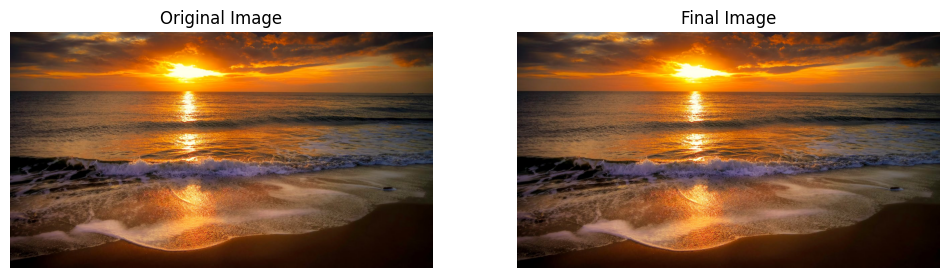

In [266]:
white_patch_balance(np.array(img))

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [267]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [268]:
def white_balance(img_rgb, value):
    img = img_rgb.copy()  # work on a copy to avoid modifying the original
    red_scale = 1.0 + (value - 0.5) * 1.5
    blue_scale = 1.0 - (value - 0.5) * 1.5
    green_scale = 1.0

    img[:,:,0] = np.clip(img[:,:,0] * red_scale, 0, 255)   # Red
    img[:,:,1] = np.clip(img[:,:,1] * green_scale, 0, 255) # Green
    img[:,:,2] = np.clip(img[:,:,2] * blue_scale, 0, 255)  # Blue

    return img.astype(np.uint8)

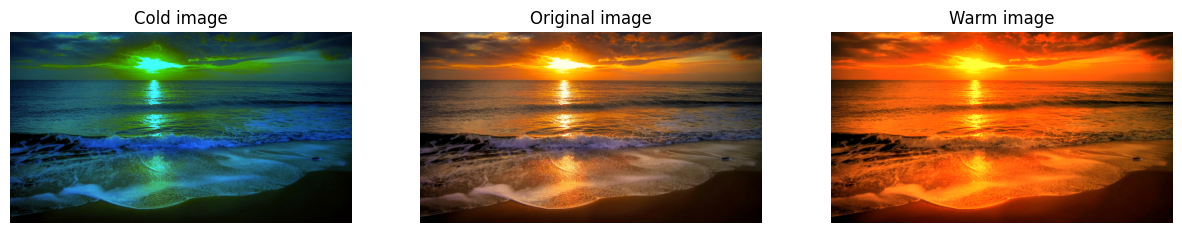

In [270]:
img1 = np.array(img1).astype(np.uint8)
cold_img = white_balance(img1, 0.0)
original_img = white_balance(img1, 0.5)
warm_img = white_balance(img1, 1.0)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(cold_img)
plt.title("Cold image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(original_img)
plt.title("Original image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(warm_img)
plt.title("Warm image")
plt.axis('off')

plt.show()